# Panorama Assignment

## Imports

In [87]:
import base64
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Get Images 

Images must be in base 64 for the notebook to be self contained

In [88]:
IMG_1 = '''/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAZABLADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9D0UliGI79Dxke2M9O9KrBN0mSFGMFc5X6n8v/rUib0R4w20A5JIwc9s/hwfxpHdkVn87jkMduDu4PP6/5xXiM9QcXPmYj2gdjjacf5xUe5nYNnBbnJ7jp/hTyqygAqXUE9OQD79evc/U+tNK7UyXDA8+7H1pAKsczZRkJHTAJyDx+OOetRs0aB5B0UDIY5x+vQ09VKHeZ0XptdlBK/8A6/8APTFMwuQDtwAVJ2++MUAA3xpkt82dpBPHXr9MA/5NNLAurfeIPPzegHf6f59FwpVyUCnd1H86TlX+98wHBB9vb/PFACOSozIuOu0Kv5dPekdir/Kw3Z5JWgMykKjZ4x1x9aZgsNgySPx9aAGFOF2nBAzuB6dBihXZwxIH+1kHH4n9aUqvyuUyTk4JIx/+vP8AOlmVgCvLAr8uDjJ/D6mgTdhgzIwiQcn1HI7Y/wA/WoSjYAI/iK524GfSpG+XJKgqD/ED3xnvTY9pBMciq24E7cE/l/npQJ2GvlcyBvkBywx07Uj7vlTJKkYy3AOM5xggHtSuzgg79hBHBxgk9T2pGUylSyMSy/ccggj35PWgkRjGVPy+XjHJYBT1xn1x/h6UyaR4ZFyDlQCNynqQf8DTmCISm3HUlSvGfbB47/nTfJX5hJGgUADy9mR+R7//AK/agBmFXG4qR3zxwP1NMLxhA0LgBSSckf5+uKmZmacgSYJUKdgxxjkd8Y9j2qNlLbgzd8DKnJ64GBnkcDv1FACF0Lny2O51yGH8wO/H86ryIFG1mdgX7oOTx27nP+R0qW4DRswuD8ysTwRg459+vp9aaxVsRgHoQrCTIxjoOeOp/X1oAZIjhS0IJGMAKxAHQ4yPp+nYdFbzCMsGCowLc+uBgfpQGkG1Q5wX5KgkDnjr3/Lv6ZLJS+5FLAkHG1k6KBwfz49OnrigA3krsAOcfLz1556D/HrTGJbpjkEsrZOfX8fr1xT40HlKCCo3EYDgnOc/yP15pHSQg5C8gZByAfx6+9AbDJXVSFV32ljsc5yOBjJJx6UxhlDFwzF8Nknk/n/QdaC7SlmKkZyZG3ZGcA/n798e9NkDuFU5JZS+0ng5HPT8T6U7sBkhKQkR4Plngjktk4P5AngenbAy3eynBUFs9j+nPXpn60pLrkJg7euTt7eg+nWlypP+tznJZADg5Oex9Bz/APqxV+4EJClQCflHyg7SM8fTt9cnP5iySqweMLlSe+PcD+fp+tPYFoiz5Oc5z044HI/D070wschlZi3U9iCe3HUdBTAZNhZMkEPvG4k9Tnn29fzokVnOWG3uWBB9eB+X+TxTn2mcoSV6ckDJO3g8njoP/wBQ5iX5hukRlx97jHB6e/HWgBCqED95kkHAz2xxz/Ttx60weXIPIfBjU/J8uB2/Djn9PwmZlDHzcliN2ScEEe/41XkRVnK5YFRgHdxjrn/P60mrh1EEkxTfKxOBnt16/wD1qikSRX3rnAAzzkbeM/pz+FTOhc5EAJ5425J6fr9KjQbXKvIFPUsSPUYH5E/ifyTVh8zIlVxHsYYD446E8c9e9MdcbjtjQI7Eoqdc9P8ACpZkTzC+3KtkfM4GSOf6/jimuJChOABgjCrnII4PHfPH+TSTsNMhlILszEbUwV2tnjng57/5+sFwA+1WJXnk/kO/B5z+VWHjPLMcnOSN2R+BP4j8PyjlhYZSO4YMzbsxjIxnj+nPr+dVdA27FUTMG2MyBSPmVVGRnnPfv602dWDFg/J5yGB/r7Zp8qiJB2LOQMnA6kY/H+ntUUpUZhiJDFcKNq47nqenT8etMki+SWIsqDcGG0kA44IPfn6/T2qMlWQuTgYxhm78A9euMd8de/aZ4mlLEkZBG0sMfjz0PX8qrkbJS5bOVyB5fDH1IGPUcf40ARz+agMxkkwVyAy54Jz1x7nmon2PuBXjPRxwfU+uOntz3qWSJVQK0yEjPIPXpz6+/fntUcqITlBwzfKOMcAD88g/kOKAIpSjSYH7s8YJ5x74HXimmN1yA6bSOAgx0yP1/wA4qR13nbv3DAAyRk8Y9eTUasoXiRc/wso5HT3xnr2/woAikdlAZhxwDtXP44HTgDv2+lVxMxfLx5G0k4jI468HPH584qedVJUNKsaBzyDnI7jHH5nH0qGSOKd18wAuDuUsMZ5yevfp+eKTAi8uN3BKkfLgM3GRyOPfnH+FRMzKqnbktyOM5wfT8B+dTiKVYQ0Z28jCow+buD/X8ahdXOMtnaMKTxgYHHH4d8e/NK4EZdd213LZ4xjOc+mfWmy3DRYYHOQC3Jx6D8ecYpT5YkRY2K7QhKsCCyg/56Hp6UreaztIxJQ5HTJGevH0H+RQ3cCCTzVKpsVh/AQOV6cd+PX/APXTJA4BKjKD5RhQcH047dOR7CpJkdypwCTj74x9eR/n9KY20kSkDJHXHHUY5HT/ABqQImkLFXlLlcjbuzz09Tx0/WopcR5cKR8uFZsFiPfHAweMD068ZLysZYmVW3HnB65x3/z61FcNKWAxydp27+QCf/19aCWiB2BZghKsnJYHHJHH9fyqs/k+Sw8wjfgKenGAenJz/PtViRZREdn3ghIMgx8v/wCvoD6daqSoq4kcg5chsr3/AB6Zx/P0oJIeS++SRSA2F9165zj1zRMjKheQSZ68sM9h0H+eDUsvJDBOd3OCffr/AJ9aineSWU5ZmHORuABzx3H1/wDrUAQP87GNioHQDOeBj1NQPIBhtw3bTw3Uc/p3/wDrYqy6KEDruDAE7hxt689eSR+HJqrIqDJCZG3JDr2/z/nigCsQ+BxltxxlcbuvY/57VGriQBI9pwwAO09eBjHHoPfnnrU1zGyqqxKTkHbuB9Rxn8/zqk8oiU/vcCPPPX5RnGc/n+FAEm9Yj5obcFXOd3bHv9Me3vWf8Z/DU/xS+F82mKTJeZjhhkEeSl1Hlrd8noHBkty3bzl681fk2Kv3htJwQOc+uQOnU/lzU+nGAzPYzACK5iMcrDBIBIww4IypwR7gdKTSe407M+MXaOMuRprJMszLNDn543G5TuDcgg5HsRSPeSAAA7VjOQWfPPGMDjP1xXon7WHgLUfBvxBXxfbRSjTteYi52qdkN+p+dcjp5gAlHdiZD2ry7yyGBRQuTkyrJyfpn/P5VxTXLKx0RloXf7Ritn/495XZQIzsUKpx05PrzVeaWQ5KkrwGw3zDntzyM0yN444xDFKqnrtLDDHJPH5H8qVriTJuGkZFfYRGeiNz3PTnr9BUhcVPNV/MMrMyqfk3E7gAeRzx79uauPbNBIqxu7biAyoSNyE47EEZA9z1qKJLaO2iSOVUySrF5BnGM5wOgzn/AAq5p95a2Lh7sqZG+ZI3fgKR2Cjn1IPpiga0QwNpwVJgVMZXbhixOMdCBznsTnJGffMjuGiCx2I8sksW2lVBK+hJJ6D3x6VHIyyN5olcIcKp8ry8qzD5cZJ2j8MY470RxxvckiORtjkbrc7jghupJwOB/KgoaASWjtyIwWyJEUjr0w2c/lg471Gyq4FtAu09G8sbmC5xksQMd+fbpxzLL5DP5COrAj5mYgkcdsHGen496ied5EdD5sZ8w8byEYdNuBjPIHr/ADoJaL8VklysMEbBDG+WIBkww9/XOcDtyPWpNRcJbhJZyzIBlS/3h05QH3HvVNTdywL9jZtqjG4SeWBjoQScD/PJ4xJd/Y0HnyT4UMMhI9u44HI74z39R1oEtywv2e3iKrGcPkpk7Mjnkd+OOPas/wD0u4uyYpJNgbJIPAU/Q9MZ+ucelPtpl8ze1q3l8KNsLM7dR1xj2P8ASr9vbLbAQ2tp5KEfI8rgk9W5XOByc/L3HSgshjMk6ed9jwX+XKE57jA5+XofqaHcDZaXp2CRMSxgZyAARuIyQSR1HsMHGKbdag0s6R6vczMgOT5eAo5Ix2yTj/PGWWymFop7OzCxBc3DKpySFwevPPp6qMUAWYbSSNi9tatO0ePJkmfYp9eD83GSOmCB71LHYX8Lme6CxFeUht4t3HYDcB+ffnpUcsK/LJNebPLC4CHc5A5wRkAdD69D7URy28P7oW5dWb965csAuTkdMAcccY5oAk+zqYI4ooTPLhSN/wAoVfVSeSMAehps0d0nmwfaFUFcGFg23cD6jJA/I/XmmTXE6OgS7kVWAG8YbgH0xx+g5qC/aO9Qu5MjJIVZmYbQS2eAPXp/jxQJ7EzXNpMZWFkZHcFhHCpXueeMnJ6Vdtr0x28FpBG0RMXJ3kFeTkZxk9Oc9x71nJG1sqwtcSyQHDKgAVRySB759M9+lKdftNOf/iZLdY2M+UiXhccjJ5P09xyBmgSSaNJJY49RFvG+HYcwooCg4OST35BOD6kHrS3b2kibZIhLHMMSxzoPnB7NkcjHGKz/AA/fR3g8oOhnckFMMSQOQcHB3Adeg9OcipVnnld4bmxB3BQElPUdTkHkjt0PT3oKJJtOignZLQQR2aosVsMkCNQmMKFXAHy/ljirUOkyFk8qdWcEqohBB6YyS57f049aiittkYaxBTAVoDKRGrH+JgMe5A4Ge/qZVa90qJoZAzJgIjtHjjHJA529sdTQJuxHpcIsEa0ur3zJnyREZ8YwRg4XafbHpmkaWdrjNtpcDHzvklfB37cErlsk8DrnufxhuJLDULgvE800gHEggUuOc7R2Hbn/ABq5Ba+IZLXbPpsNsqt5wPnbsAgDgADBH1xRYG7DL60uICqLFsYnA2oVC49Bx37j3qrNbxpHDNHfLt3DLK24uQOhwcDI7fT0q1PJNdNKZpXCR4YPKQAM57ZwcADqeRiozYXMsJv3khhSQJ5a7Ml2yDjk8gDGOOMHNOzBMoTw9bFInKIgaXbIQSWPA4+ufxNSxlYNsDTQK6DLoj5Ofp1J68jJ471JINsbHzXklBYyEsQN3YnPfr/LtSxwR26I9ncRbPLBd4VBJOMnB/HHryfShOzE0Pa9lMoawnnWDcVkRIiZBnlcYyAuWJz04/OeLSLm/tzcRNuCuuJN2dx4wCBzj9Kj07V7KxiLTsGLnDxR4HykLyDxnnH+Iqe1uLyOPFrDJtkbJR3GORwCAc/l71ZDbRVM8kc5RdzTbwqSngY6jg8Y+lbE+o2mr2qS27qlwyjcqjleRkkd8/y7Cs9NJvboi+1GeN2YnMZkwFwoAIGQTz1BP0qrBZ21rLLM6fYwjea9zNKFUKD82dx5AGfbHNAmrlqYwWsS3Ugdt42Djhjk8Edxg46Dofxc13EYIyUC7UJmKHBOCTkn1wCM9Kz7bxH4F8QaJFLeeJ/PUOWEawuhcYHI4BP06f1RZtO1DZBp93NJAu3CfYmx8rA4JwCMgYyew9KCiWW6CQ+fBaOF2klVG1fc/Nj0/XGarwahJCry3l1uZsgKwJUAdDgcdCKWa3l843U1vJIBKQVkfhjjgZHYdPoOAKaxVlVWiVMEEMjBlVsnIyenr2z05oAtQ6iiuLeOcSNtJZsYJ4yMZJ/rVezJHlRyooQSFQVb5uTx7dTz/k1BLezJJtRsyINu5iOQB0G046//AK6lj1E29ukccpaQDdvSDLE5AIORx26/nQBoO2qvHHOxUxDlUjbaV4I6/wCffik1m9t3sFgEkMrsVwGlBcgcsT0x7Z9qy2utXd3tdKUKkRIZdxbPGOc8ZOOgqGRRGY7WHajna7FSBg9CM45P485A96BW1uPmtLy6u3gjl5kctmRNvYc+pPB7du3a5azx/ZHYIkvlwjyyqY4xyeeB1561HcxxSqoiDglB8+B7gA+pwT09ajZfPgislWUKPLjkYnG85OQM9vQ8ZoGTwf2ffSgLDGXERYeXJlgFJODjAGDn/PJrRpDHdyXAkc7gRGMH5c8kcHnPP6moblfsupt/Zz4wwDKAeSCDg+3Iz06ke9TvbvFMbUu2HxLgqCzZ3YJwTjg4/LmgBIWeK7ZgmwlPmVRnIxkL6E8+xH51euNSaCBBaaeIvLQGSRshWb0yOuPSqsaxXKtsRiWYB2GAFwcgAenbOe3bskMN5KFSOIkIqrJkccNjJI4AHJ9MfWgVkOabYPPlvQsskuXSNTjOeRjn26UgtI767Nzdo82F/eLLyvTGRxgAcHPuaIpLa3Lou1mbJYhMkcE5yMfhTnguHUvb3wR1OBG/ccHA649PTn865QsgvrgySpCrKgCBkV8ZIbAJGc/48ZpFuryLyYGuiRIiIqyZLOflOBk+w6//AKmXltc3W17eM/vNoRUIT5enb8Pz6dant4ktFlkmdIGlJCszEOcHO4ADJ9emeT3pWYmjUi1CFdNaxFwyPI0kfyMV2AAqTn6k8/zqtDPNDYw2toy/uVwjS4Jbn0I9OOn/ANepbwXryRRSXkt+YSd0Kxqi4PX52xnGAcYz7dSH308ExQG1PmFjtklmLFBz07dh9PzppWHHYp3Oo69qKvYwxNMzNxHEDh8Y5+Uf5zWfcITeFNUI2W5ZAgJJLjOcD/PXntWzDd65qM/2SK68lNoVPIJBOexHTvz/AErLiBkuAktoCkTgMoJPOCOp/P8AP0xVBqU7WySykOo7Glfa2xUfhSQR+fPXn/GqvmlMpbCAvyYlfjDZX5iTjPH4Z96tXF8NJmjuGmiMiSZmGNy9wQQOB3649q0Na0WxtZjNDOAZHL7UjJMQO0d8453f5NBLVmZOg2tpoOqrePdeU75zsTJfkdQM4x83Pf8AlfudN1u7tvtsc63UyYXyncpGAcZwfTBPbGQPWpLKwu/s73EkYRFLF7l4s9PUDrwB19PxrXtIPEhtxZW1yiQvJvXyYRx3zk8jjpx3696BGbpYOk3bT31rJHEpJY7S31xjkEfy+taDXaTP5FrKzrGTgs3y7ee5785J/wAma/0K5tA5aQyIi5CjJG44B5bOB1z2x9aydNso7mx3SWUktxKd0kMETNtz8oJOMnPX8RxxQBLd3V1OCZr3aEkVUSInCrn7p9evJ96sNq2pWEhe21WVwqBQF43tgdznpx0xg5qTTNAvdOLnULP7OsgLpGwLlB0HCn6e+e/YP/4R231G4jtRO8sjqDEdwXa23nevpk5HP1pXQFHRZEneCeezS2jaQlEZclXz8xxjjOOo/pVjStWlm1GVNQZGEThWaFflyQeM59Of/wBdbEelaVpEf2aKySUQYBEjbnbbznvznj8apTG0mu3v7VEifzFkCLbqDvCleTgEnHA9M9jTAkm02HUMKEQv5e/zJmOSOCOecfp1/Gmf2fZHa8cUjq43SMi4IbbkLgcjjnqe/NWfs0hhE3loQMfP0wMY46YBOBn396mt9Jt4A0t5IIlY7QEGORx265OfrmgCulppVte7rGMlmBzJPllI7/1yB9KWSPSVkVpLoyyEks8MW1sDHU49e4/M0+K0YLIUjijDy8szAlBjknHfjH680zU5zZ28sOnXMYYhfKkjiGR2z/M8mgBb1dIgmGnSws9xcsUVWy2BwSeen+FTWuhwXivaNqccCx7cjzs8A9c4APQGsaOzmkn+2mdXuFh2pnOSc8t07j/DoOS1uY5InlunTduAfcScEDHrnj196L2A3b+ysmiZ45ZpY26SCQhXx1Bz1GP8iq1tZmWUXixhBI65+UHkbsDLdRjHPbBqjAbpp0PnSAQKV2gYx35OehPbn8O5rGs3SWyx6fEFYMMFnCEA9eB1H69BijcC/PZTTXRvBIC6DJO7Kqc49/6YqrLqEEl5IjSM7quHZslRnOOmM4FUl1e70/8Ads4ZFUAyAc47Djvzz1otry33tiCGEAfdQYyx6k5A7c8n296luwCTX1/ckC1lJjVhjyRzgZGPfnHrVZ9K1CW4XUbmXyIY1wd0m5pT8xzgDsBjn1zzVwTSWkMqpDaW6KSYXZ8ZXpk+/Oc44z1rFl8a2NnNc28msWsodfupINuRjbu2noOT781DbQH7aIJHXCxDgnzAGHXGcc+mM0uZN7Z5LDJG4f5ycdKkE4D+ZubzGOQHfoMZ4BP1pr4K7mbau4gAOM547fnXos0EJIG58BQ3Af1znv8A560xiVBygXIYEkD65wD7UowHC5yuMBSfpxS5KvulDH5fm4569f8AP9KlpARxs0a7yuUUncN33vb/APUaYzMFAduQxyc52/ln/wDWKdul3BSpyOcZ6+2O9NcqjgMwRcYLeo+g4FLlYDYjJvL7GwSdpHHb/P8Ak0gzkKAdw5LKM4OOmAP5f/qP3cRwGYHPRuo69/wNOwCoGfop6Kf8eKbSQCEg5IBHIJyD1/rSZ2jehDZ/ixt5ozJu+UELk5UcD9elI4GAzRZyflYNzz6UnuA1wJG2uo+VWJ4xjp19uKRgrJuHqAOBjJAwcY47/wCeqF1DDc+Bj5gP1oQO37uNyccEYOc/hSIe40tufJiB55Y/xeo/Xv8ArTAXkjG9mIxnBUfLx044pWYbNm88nPrnt0/KmlcDe+cg8qf8/hQDVhkgLHeozgDHv/k9qVwzYRQeM8nk455HP0pcx5ODggcPu/w96CIycsdxPBDYPbFAhszTCMxlCV3ZPzcVHLsZWVhjI5yD+dPlkwd2M4bJGAO3v1GKZ5YOQVbGDyOcDPp/noKAEcgyAyxjavzHoRk/j6YzimgoE3jjCtkvznt+v0/OlI3nEUYw54UL36cc/wCfwpGikRsNw20A5I+UDJPHpj0zQBFJlHcbMkHrgEDHIJzx39PyqIgMgKDnZkbe3JGOO/c9+3HNThZVYxPg7jnGxtxOPfr1/WmTqxZhESSFLsd+MY6k/Ujv2P5gCYeJTI8ZBYYbDcnnPbp1oHkkeZvHCZVF9cjrz9fzpsiBULIpAUOBznODyTnp/P8ACnFkYmRIgxPLY6jt9PXn3NACSScFw20KoCtjHy4ORyfcflUbxAgRpFnaSWIPUYJ6D/PFOZizDBbKc5Jzs9Dj+lNRGkjYdQQdoC9PXoRigTZDjZj51YYydvGOQOnbrUYZzGmwkADI3Hv9O309M9e8nAbaEwytlctye+3sP6c00Fwhz1AzGQnBX19fy9BQh9BjkFApf+EFiq9euc/QDr+GeKjd5AAiREFm2lt2emODkc/X680+ceSGaMryPlL8EL6jB4I69e9BWQytuky3UnGcHPc/U03qJXIwy5aVFQbwDhRwRnjAA6daPLBAiYgHnJPQ9f6f5706R3YHeSOMYDYPf36cdeOlNdmU+YfkIxuO4dTx26dv/wBVWMiVmmVX2jkZVfvdRz9eR/LpSLsLHjayghChOCM5PXtjHSnkO7DfyoHO09R6546ZP401EdFEaDIJ4QMOAOuB/wDr60AJJJvUYK7fT24xn8ahmhjVGBbAYbSORgYJ6g5HOPbr9KlXJByjAhckhien5+/4n3qK6YM5VGC4O04Y5yRweP8AOfzqbjasMkUEArCCQfmGTnA46YPcUkmAwzkhFwjkgY7nGe/P/wBfinyguzoVUEHkH5scY7dB/jRukJyCwIUfKvGOACPf/P1pXuFmV4l8xRkkrjbljk5wOw4x65z2qORFWPdtADgEEAceh+uRUzSbySQS6k/MM8nI65HXJHPv7U0+UXZSw+UgbeQTz2wOPTFIfKQTyEEs6EYXKjjvnPXv+NRSSMXB2hRzukUg9MHqe4AHtyPappIAZDEir8zbTvU98g9P/wBZqHe0cQjMuA2FwDyCOcH9R+HfFVpYGkQSsGUiNyWDAngEDO7r+X5Co5RGU2lF5OGJJB+nH41NKjGVwW8vK/O3pjODycdOcH8qil89lZdnVRgk8AHt+ffP8qaaJsQOJGPzxsoDfOBkc4Pp0pj7pB5T5wgG3DYJPrz/AC681O6gRbArbkXgYxtHuB3H9PyhYSOrxR4JzgIzDDMMnoQeeo9qYEJYkE5I5wNqgH8v6e1QsZDHwM8swbGAew7enHrVmJGJ3LB8vCsAAc9Of1FRTIoBljTbgFsAdcnHP5/l9DUtgQSRtCW5+8MrvGcjPXjp/npio1V9+0nPAJXocj9e36VMwVpgHh+7gkegJ5Gc57Gq5ZV3fOpXPHcgdsZP1+mOtSBBOEVVLzBSoyxK5bGCPqBz+lRAjICv8zL82ec5z8vtxVu5dWYyJ+7K8jaucHHUdDj/ADxVeaEB2UrtAJUAdeD0/kPTgUAQn5t0c0W8kZUuclegxx9Bn19e5iYsrlFOA3YHqPw/z/OppYgXaNgAzZ+uPz/n3NRziMEMEAU9MN7cdTj+g/mAV3DOBIN2N2Tg5PUA4/THH86a8KBmRdzDICKo5zzgY7eo/SnqLdl3Icbuq5BGeewPX2pA3mFleQjGC+45x6Yxx/8AXqtAI5GXAiwvMn3mJwp45/DGfwpjkyMD5w2EY2k8dvfn7o/TmpQss48uFQCg5ITdtwueAemdpxj0NMnEgURS3LKS+JMjIxnp0z0I5z/jUgVCjqS8oO0Ag4OATx+nSorkh3ZJHyGOTheNuevT2/zmrc6LChfy1UsBnCgd/boOtUZCgZAXJXaPNbBJJx06c8cfr2oE9EMnAUsZIwxJxyvBORnNRSndmNYlJGdxLHBHqPyFTjfIuSXO5gQTwd31HT1+v5VAwRgFJIJfhn44HYD8+v8A+oIK4VUKiUL8p+YspBPfIGRTJnVm2NIQSOgbIYHPr19MD1qeWLbcAnGNwx2wSPy5J/U1A0XzBVYgDgt+Iwen9PXpnkAgYFjt2FQxwQBjsOpxx61FMuG2x5OMEnGDk9/xqeYPvV8oAcY2gEgf4e//AOqonVdgJTbtGQAe+QP696AK7xK43FxuAxJg98+p7c/XP6ZzI3mbwny553jA59vc5PH5c1pXOHjaMbuQMY5J/Ie2apyxlGLMQRnOAxDc+mfz607XHYgnLSvGZMDpyyjBX2478e30pF/1gIbA27hgYzn8KQsqopGSC2WYDt/TselM3GRN5HGAV+bkn8O2R1/wpCKPxw8DN8S/g5e2MUmbyErPDgAbLmIHynGehZS8RYjo2PSvj2FnGIyhGzGV2Hr6fz/P8R9xeGdTt7S5eK8kPk3EZjljfn5SOOvoQOe3Wvl/9pr4YP8ADv4hyi3tpE0/U5Tc2rhCqLKf9ZD37kOMcYkx2rGtG6ui4tnAq2MPLyV6FyRyT2AJHX1/KhmSUPHdYVZDukGcDbnI47+tLPG9u5e3Tc4G5j07800CMcfZyFBJ6528Z7D19x1rlLTJbfzJgsMYxIqk7tmAmOOnU9Dx71atRFLEWluZocRFl2gJg9goPIPXp/8AWMFuZQIRdNHbLK7rFL5gjLAZORk5OQCa0PP8NQRyPFq0lzMGGIraA5AwOMdlyeuTnB96CiCWdD+/itiwOfnaPLDn1cf5NKsySW6G3R1IBEkcpOPujGQMDr2HP5U26vJ7m9lura3FkkuPLWUbjnucYBH0657jkUyZ5rt2Wa7nlXZ8q8IDjjP50FJlkG3t7tbXUJ4gAoO8DLR5HPyr26Dn65AHE93e2kWGs7Abw3yyT/KSQB8uCTjp696zoY3j3NbzBPkJWQYJHGST3zgj8qlKQFUScpK23c00hJ5I6Dke5+gNA+mot9fXV4GeZokjRPk+zjCj36HJyPcckU6LUonila0ULMqEbVTdhscgHk88fWq9kuo6laMNQ0v7G32uSOGGO4WXegPySEqOrDkL1x75oe2ntSEtSVcjO1Uxkc5/DkdaBNaGwhu5lWSOQhXyxUkAovGSe/UD2qpLdWVvLunmYSZwSgx6g5BGPU84qj5l7bWpjSVmYphycKNpyu7I/Dn8u9XrCxeR5G1I25nbBbaN2OMHk55Ht/8AqClsSi6vRaiS30YbSuQ0jfMwJPQfl1ouCscarcT5KtljGnTqeeMckY6flVl3nuJysYCllxEpl3AkDkd/Tt60s7ytbRW9tC8kiTNuTZtHGfXoCRweMg0AULkxpEZV2RssZXfk5zgHn3/H6UQyyPbpHJMs4zhsDb7k45A4wfT8qmuNPv4FAnVIyR8rM4Jc9QQRn8KhWOxWRA19NKzYOxASpHQEcZx78cenYAk/e7VcMsZkQ4G7jPHPv/8AX9qikhSWRtjHqxLY5OBkZ6evX14qWNo1jTbHEqMxG88EEk8Z9+cnnv7ZcYoVgFwtyCDnLRZyeM4HfPp2NUkJuxWuoWhtvOktRHhAitGCW9uMZ9fXoKqGCGWYCHzZZDkkEBRnJGO39eK2tMleKBjaWgBkCnzZVCsRjnIxlvz6VnXECkT3U9+I4oJFEphB+XLdSSTg47+p6VLFqxYReaVI5mJhyu8JuG8jBwc+4A5q2XS4bGlliCm6KR8BwQRnBPqM/Qn6U1rfTrqNpzpxnOFEc1xLtHrnnBPJzj2H1qLQ7hZJngvbsAOhjXanRfUMcf5A9aB7Iv2k9rbzPc6k1zaKrFvtM1x5jlsjC+WoAQZHXnGO5xS3WuaXq1w0UenzXmxt6TyO0S7h1wuQTwTwcgHPqRU8FncSSef9myA28GZcdOmBgcEjI9qdJDvlFxNMjZYGQxIecsck57Hk54JppMlvULHUNVlaM2kH2OOUZkliALJnJ5ycHPGOnvgCppdzwrcBJXVoCrGaQ89jtPT/ACPrUbapcwri1UIrAcSgYUAjpgdO34flBZQabpcMkGk2FqGecuyW4BVnwoLBc4U4Az+J6nJsQsS39u0ss8pXcojhEce4o3Y57cHn+dEs0DXKoG3iUhsS3IU5IIICgEEcjDe2KbNaW8wiS6QtJBvMUnm4IdgVOVHB4OP17gmlFZWq6gn74StJGQyCf5hjAGc9DweD7etAFuC/sdQupIzeWcawSNGFQ8DJHXknkED6k+lIr2Nq6CVS0JQ+YFYLnoT17Dnt3HpzXuYrG1laS5sy27cRI0YdxjPB9B16+goupXmeWazKAqGdmRQHOADj2Bwc/wAutTyjbuLHbRzk3FlAokx8rsDtQcnIz948D25Fa6zNalYxDIXum/1jH5RgZ6Dvz7Vk6fqgIaCyt2R8BZOQFDY5IznnIxnv/KeCdrmDyror58RUkj5S2SOP500T1JLfT/HN4ZZdGtNMvxHKY0gurxldgeCckBB97gZPB6c4rH1zwR4v8cmLSNe0KPToo5QFEVwPJmyQSpf5gQCCO+ADnPfQ06JbPVI55JR5UkjnzYzwXO4rnjB+YVDqVjBaXc0jXd7K4kJVPMOdpyc9Og3Z6/1pjMK18Na14c8SSWmp67ZXtjIEea7tplM9sxzmIqIx8u4JxuXCnuQQemsL/bexabbxqxbnCp8xPJwOpHA9eCap6VoGqJcS3f8AZflwojYlurraqZzkn8+/p71fhstJEjXMviWBfLXAMNsX69eTnj8ulAEOoiaW6Fuh8x41+YAH5RngDB+vvkVFBp1wxeO5BRDGSsskW0A+oyM/j7mruqagJ0Mlm8rrsKLvHlhgRyx4znsADjgVANCvri0khmumCCMCCKLPyjGRwSCOcUAVHg0/TpJstlxHtCk9ck84xxxg4z+NQhiGkedJFjYAAocMyg4xg9sE44/+s2cLGJbSO4JlDAM0j4PcDGOeVP8A+urVrqM2EtksPmhUjzFQc4Ix16d+fagCuJFmxKDKrSYyqjGMg4B9Mc9MD6Vb0m3u4bb7XlHhZsNJnBLDnIJPTJ698VVaVUml3mOImRePN7ZAIAPJ6c/X25ntGmdPJiUGMZEhk7k5PIyTnAPP+NAGpEkk82631RU3KJifNJLDowwDweBxjpU2pXtz5Q0uwcxMqgPMqqcZ2tjJ9enH9Kw4YorKcnS4IwVVmEgk+nbp/Tj2q74b1S3jupbnWjGVdFEe6EkZBwQW2nAxj9M+lAFC/t3+3Le2t00rrIpaAJjcQe/B44wT/SreryPc3kt+NCZIlZY40mugAp44bA57cdsGtcazoyzvDaRRqY5N9xsYYVVPQbeMHpn6/Sq99qCXt00r2QMJQFi0YfI45556kdR39qAMe3FzPH5NhAI4z83mIBufJ55IOP646082QkhBuZZGdQHXc+QpOR0PPUk+3OadbXttLEqyXyoiLl2MuC7A8fLgHuRjGeevFPfV7dLgK0QZlAyUYAbj2OTkE4PJBq0hNka21mvluJ0mldfnX7oU+3p6Yzj8+HTRRQ2bskcjzyS7lWboiBuox1ztJ568H0p0d1bS+W0rBZOdqFt5YZ9COc5Pcf0qJkmmmlW2IZsKZI2J28jPTqRz/wDX6UwWw8SzTYeVlhRmCbiQNoIzjBI5x6Zx+VQvcZkdmaQgY5UKcE+n06fpxSySPb3CWsPy8BssgIZ8n5iCfm5AB9APrUcWo3e5ZYYSQycA46YweevPXr19gaAaLN7d2+14IHld48M7F9u0A4xjPPJ+h7DAqjCsl0+J9QEalWdfOO7GB9wDufrjvU2xZz5kmFREADfeY46k46Z/mai+zSTNGbdUIdj8525U+mT6DNAJWC21W+it3srTzCJCSvy4Ma4+93APIPtzyKz21nULV5y0qvGX/fLnlvlHf36//rq6/wDo8xCt5gOzYSB3zuBAGD3H5iqUep27+cl45j85DzDGVVfmJzgDg9x2/OouJ3uRJ5M1m+oxK0cmCuxcMUbGRgjkHnHryK1NO1Gzkja1u9Ngu1eQNK06BiMA4UE9gen8uMjEWNRD5E1x8olwQGKn5iPmBHTIyPYH2qzpbzxXJe0gWOMfKCq7QqjA7d/89jQm7i6GrabtQ1NotPukVmGPLVnUKOcj5SM/h6VNfya39mzY3dzDcJlIZonKhiMfeDHkcH73qfamWOnLqExjuQ6xrHzJG21zlucEDj8umK0Xl0KC5bT5JEhmUMYY1O+ZgpXncck546Ade1WIxPBvi/4s38F/o3xJ0aKCe3INrdadOHR143BuSUb04GQfqa7LRb/T5dLC2Vy6LAFw6nO4qSMgAdz6dyPauO8Za1rmmQS69pHhifUVunjS+tRchpmXIUeVwQFHzEp1PY9M6EV5PFezKLZ4IYAgin3qVuCQ2SoBIwCMZoA2H1UXXlXs1s6uqktBcKGIHQA546HOM+mTTrTURqN19kF2iyFMO/AbdgHAPTqR2BJ9jWBBqc8shFrbbnKne05PH8XpgnHsOgp9vqB0y8RnuGJMmVYkNsIOSx44BzjoOR60rICR5xBvhgt/3TO4neRs7sYz1+nTvj2ptrci1kISYIhYZcJ/P/PcetX4rSwEEcEdrPM7yHeNwQY6nlvz/WqWo6fvl3ac8EGyPDRi4Un72PlPGen45pjSuWY9X1PUYZPsyxxr9oQxu/Xy8/MQoOM89O3PWjU725uU8jS71lnYHy3GPkyD6jA4HYdMVmahePAGjtA0oKBnlLHgYOcA8Z/LFRW+rz3wkjb9zGoIKINpLjsOgAAx+PrxQIkl1dNPt47cyvfyfZc3E+/BUkH5j6k5P04q1G82qxqFCiNUwiYJBO3IJ5HGf1HTmuc1K5stNdo5LxYUd8bmGRgcFjj0IIxznHaqN3ctqgtYdJOpE2t4Lgixhws5AYbHJyCp3HI55A61DbYHTMt1HzFM6bj+9LNgMuT17gZz+nrzcgkiglFxLdwsuR5+6Q5IOTnOB+Vcyv8Awl7zMkOkwQBtuBNeEgHO7ARd2Px/XrVmy8G6zcKZb3X3jQ87beIhQ2c4ySSeB7dOo4ygNsa74bsU+0XGrx7jgt8+7HPTg+ueM9ax9X+I3h99SEdpKrKeQjgsXB6MR0HUe2Rk54xatPhv4VvF8zUYmLxgkyTzSHnsTjjjj15NaltoOjRELbabAqOCxCQbPp8x9cfr9BVJOwXOXk1vUtSuVmsfD91IiAlPNCxDnPOT1H6/qKsW+geMLwec+tW1nbZyyJBvdueR83A4788ntXSNBbxwgyNGpKnYAnXn8MenpTrVdPRmkln3CT7yqOWA7c59eM9KTuByy/DLRL6fzvEOo6heMzEiOW7Kxqf+A4z68dO3pWvZeFPC+lIGstDgtkXkMlum4jOOrCrpmt54zJbqxRFAwvJc54BwOvOPfI9RTDZTXNkhuJVhiYnIklwWYZOCOo5x7ds9amyA/ZsIqJvXamegBPsOR/n9aMlFwg79WJ/Mnt9PY8U5dzRmMbTgH5n6Z5/A/wD6qjxLGDCzAMMhTkevufevRNBSVZlWJzgt8hI568jp9Ka+1gQpGOjBT19/cf570qIWjabexXdkCP16Z9utNZgQUZguQQNxxj/GlrcBvmbWyAxAUrhWGMen+fyprBtpiDkEEhQQTg5//XT0lUMrEgHGVcDBHoM96jw3lFmBwB82AOO3060wFk34xncANoIyKbISThhnOCpHUDtmnbApLqMjIA4yf896aoDYkA+Q8fMDjkgdR/nmpbsAMMnG8Ag9OePWmhcAOFzg/dOOT7flSucsxZuAeCR3HcZFJtMYP7wYPBU5Gfbnp9eakBsjEfMHI9c8E5PHNMIjwwQBRjJJPAPr7UoVnQsGPzEcs/vz/n3pQxRWZm3MVzwwzwf/AK3Wgm+ozDBsfKTnJAXkjrUZz1wHJ4OQev8Aj/jUjIudxyRjPpTPmK5Jz3U45HNAmmMO11JU88A+nb/CgvE5O3JDfdAXqOcUYkkJYDkk56cHb7cHrTD8u5owSAM9+D/OgQAAAxbyGIwfU8EdPx/yaEkUHaJQpznHIHtnHbrx/OnSK33CAytyxLYHfrTA26XZuIZsfLknP+f60ANkAKlwQdi7sDr29h+P1pJZAEZGdMZB244BJ6/hn9afu3j5XwTjCnv25pSwJAYDaTkgHbkDr1/E0AQEF38x1BGchkY4x0PUnj8KadqloyGJOdoyeD68YPanlZFmAZy55LupA479euMHt/8AWiaIqSGbj1Bx0II9O1ADHLMhy4yzfM6tyOOMY6dRTHkeWQsy9PlJBByQefqOopxBWPYu3JUlQHBA56+1Kiy7yPMJDHPJ4/Xnpn+dAEYBG5zgKWGGBwD360gBJwdqtsAAk5ycevJ9KezE/Kz7c4JGM5GTx/n3NMZizO7KCocA5Qck9z+H6/SgCJduFHluxOPusMYxnGB357ccfTLn2xxqYnUsRwMjnGAfqB6UHyy21z8wB3Kx4z9Mfr25601452iaKQo0nbBxtOQMYPXj8h1oAYzAKxfCh+oUBfX5Rnpxgj2PFIVcPtiADZG0MvXOePrwKew84je5K4PQkF+ec9s546dKZj/nruwO33uen49RxTTsA1onVt74UbflB9f/AKwPT3pG3As+7aBjcQRyO+fwyen4UNvK/K5+6Ax3DkAA+nrnn86UDj5c71JJIPTjuPQ0N3AaViDySyK6kJwqvyDyPTB7f41B5aqNsZJMfACsc8dPT8/5VNIWbBUnOCAxb3Bxx79qZKEkumkVMZHAI68Dnj39PehXegDWhb5gnBJwo2gkEcDHr/n3pgc7cszEYzwOF56Hrn6U7AUBlk245GUx7Dp+HP8A+uozHMQODwT85OT6Dn14/wA5qkrDSuIyx8FBjI3E4zwP/r/56U1Az/KEODntjHOAevQ4Yf4GnBwHUoM45wG7YGP0P9KQJIrjy8DKkYOMrwOuep+uaT2KSsRvKr8ySdXG1QxbAK4xkdOc9P8A9URjkVVPmbh8rE9ugAI744P5e2Kl3tgNhmITBYY3Ahe+epz3z1xTCkBZo0jcrgsmZAM8cHJAwMY4IqRkE0hVfNYrlhkFjx196STfgos24YznBPY84pTlULL8hYE/Jg5GOT/ievU9aZK0oj/eMSe+Fxz+Xr/OgCCTIQuikAr82HznHHT/ACaik2DbmMKQCTtwNy46+/apT8o3LyMcMB1qLdLINoGctyQOoycY/I0AE+91Dea4IHIB4Oc/5/zmq7gOWYOGIPz8kZ9/p9afIyl+XyMAnD5BycgYHufx+maJmzEJFdieMF+oHHoOen6007Il2exVVAqMCNw6ZC5AHYfT64zTGKBFZhu3DOwJuwc+/wD+up5EdQGCq53Z+Xoo6dP/ANVQ7tpyRkh2w2Tgc9/XpRckiI3xlDGnUAF4+oHb8eR1/nUQDMGbcDn5VIOGI69/8+1SSMsa+aXI3DtjjPPqP8aid3iJWOPjGAB0zwfUZ/XqaQtbkMzqOpU9AVx0689utRyITIDGPl5IKtgAH2+oqZ2+Q5ZlAPKq3XHHGBzUUiOW8r73UE9yc5P0/wAaBkTA9EkBJ6KMbsH/AD29KgmBjULhiV5LKuAeOoHb16/1FWG+VfNWQL8vzfIzZGOcdD+NVpI/MySeSpwQSBnB/lyM/T1oAa6FlYMCO5BOec8gf57VHIjmMICGYBioUkEcHjke3fA/PNPBU5dG+YLwASwHHoPc/p+SSqXf5gBxhsk8Z6f5FADBtKiVXVQrE7ZAeQe/AwOBTWjiVfMkcKqsAvG3JPPHHt+FPLM6FOibtxz2wME/gR+lMlWPsn7zYQVDjJb6+mByP1GaAIbiDHztIQOSA2MEn0z+PfvVWaFpwXVyrAemcfievI61flWNsxhHBLYUqwGVPrnv/h9BVTcRGwmVTn5m4ypI549P8+tAFRd6sSFJxnIjAx16jH1+magMIdl2sMvgZTOBg+55xkfj+k7RCRC0bKSoYAsxYMfl6Hoen05qNmikI3SEKSMgHkjA5H8/8aCGQyKjJubIGQvynAGeoOOe2ePaopFYo7EgqW5HT8OnHX9elSy7idqSqhIUE7jgHjr2J6Ej+dI/LkhOGOMEn5fY889/yotcRWZg+4kg55PTA/X/ADnvURCbgwTDBunUHggf596mYAEFo5Dtxk9SfU55z16+1QNC8W1HIYgenX5fcfjQBA+MhGbcGGQD3GP/AK361TuGaM56EP8AMCdp4Az055/Gr0u3Y7O5/eKAE+nY479DxVOchmA+bG3gK2CSSDjtn+frVRGtylIsqnHctgsWwB2z1yO369sUwO0u5YpVztJAKg4wOnHPp+WfSn3rsIjjduAPzBcYPUHkj/JqIA5+d2w4B+90IPXPPYD179eaT3LHKfusc7jghTwR3x0weR6Vzv7Svhmf4hfBK9/smzSbUtMEUsEqRM7qY3GXHQuxh85AM8llxyBXQyOoYkjaCwbhQD1OBj8Bx6Vd8M6glpfiO83Nb3K+XcHJOFPRgc9QefwqWrqwro+JNKgjurSORZHmeVc7UTauc57n1/nU8lszHz7hIYxH/qUBJO/BByQPTjHI4J7AV0nx48A3Pwn+Jmo6EY9lhdObrS1D/IsbE7ox2G1gVA5+UA8bq5z7XYXduJYCrlGYKEOMMMj3wQCQf/rVwtNOxqU2S4vL0/abZ7l8FVAJRA+CARkYXIJ6dc+9WWtNUaEwNqMdpHHGcG0gIcrt5BY9MHoQfToRTpJdQWEpMwRBH1KHAUc9vy//AFUySZJJGbzdowMEboyeAc5PYnj14pCSsS2UawWa2TXM7jjeWbl+eTng9SABnoe9Tqyvc+QE+UOuRxy+48c+mAfeqlq5Mu1mKqOSUfLfqMe/SrNvBdXNzEYiRIx/gHIAySeff3zQXoyO/mu0RpbjYFAGGRRgjqemB0/n705pXkQSLEEBPQnk8nknp0phi8siLcTsBxuk5znkEU3zxvQeZEWIbIHIOB7nrS1uUSzMGeKNXlO1uB/EDnGcjp7HH8hT2u5S5WVjKBu2ptywbAAO49utQyDdhVjcBc7cDA5HbnryRnGOPpT7a4ngi3fbI4Nw/d7oyxBAwc8YwM9+PXrTMy9ZRxKjS3YB3MFU9BjOAf1GBSya1p0YktpnkuCow7Ad/vD0zVBYy6tH50tyWYDAIHY4Oe3Y/h7VJfEmQRwSW1q6lGYyTMGA2g52jJPQj3xQO7L1tq0dzIfJ06YoF/dtJKACexwOoHp+fs6612CwgkN3q1siRoEKQOHJHAOcnpzkcDGB1rOvRp92/kTxXl1E6qz/ACmJCSeR6np6HrVyNs26xWuk2kcUgyhVASOPXv1/nQF2SWLyyr59pYXE6PGGQ5XYTyRliM9Mdv06OkkhLg6rrEVsW3D7PbxiQg568D0/pUM6G5dJ7uWXhOjngDHHTGB+v86P7RkghEUaKAEO5IxtZO+BjGQcdc/nigWo+6+ybVNq8zSKufMvWKg8rn5RgHqfz96J9VvLe6NuIFxtH7yRTwB3xnnoOvp71DHM88SlpY5I2O7MZJcf3eeP7xPp3ps94Xbz5V6t96RxgjHTaOnrjPPtRfQehJZsGuUtxK0mDne7naqcfXJy2Owqqu2DdAL6WJDKCyhVUSk9uhJxgdCOOcVYtbvUbdWW3hRg6kuzHBHUcDqBjPPv7VHNaFYEuZfNxjLrnG8+hIHUnj9cmmlcetiWCWyJkQSzzuHBR4wWG1lGMZAHbtwMDNPsdVe3YWthpSopxvkYbieM8jIGeQe9VrDVY4pJWjIAaPhkfIXA55xzzjv1p0kd/K5SGO4kMjAxKWCDJK4JHX0/yTVJWDdGsDcyyzXOq3CpLD94ZzvO3jhRz09ex64OHRR6jCyxamuSWfZJZyExsm4hGORlSCcdONpAzxWe94kkr2LanamUrtaOAkk9ixyOn/1/pTkjkj1AmOZwCh/dOx27c5Geg9T0/nmmSaDmOKA3RWONlUCQzgs2Oy++cN3OT9M1NskitEljjEhmyw2EYIzjLZ9iOe/oBUUVsJo0tt2SFRRjuQowCMenarNxNDAhsLkTr5TK6u8PyjOVH1//AFUAZ72+rXV55tvZ7LfYFBWEtyDgng4/LsT+K27ZlRYkQpHCUDtyWPABJAPIHvjH5VPDeWUTxzu4aORirbGPzJjJJ457g8dfwqlqWrlnW5sisSQh/l2klgQBn5h7jgjqM+1AFS8muLgia+ncANjOcFyOME9+PX/61NSS0F6b1IAxVNruWIUgnJHJOclc5zj1qOWeCbTjbO7Mwld0dIwABksAM9cA/oM4qvYhpokhcOgJK4UNxg59D1x1oA0XWRfnstNMyh/3yxnagJ+nrz0qdor7UHY29oLZlJUCf7yjPykgY54/nUGjx6lJcMtiYpIypRpZMbV5BwcjJ6jkZH1q5bwXGi3M0lzfieaZ4yqMduxR2yD82ck9M/1BNlix8E6PdXCf2peTTlQWjSNtg3Ag8EZJOcfX9K3rLTPDdmjXUtosbD5jJcTsVB65O44x34xnHvWML5IFa5jd3GOGCDAXp/F7DP5U+SW91NWm3xrGY1cI74Vg2OgP+OfTNBNnuWdb1SxeNYdL2FnHCiMBc5OOAPmOffisqF3vrGTUprgllnwitjj1PPpkf4dKsQy6ZpEn7qISXDZVWK5H4dcc/wCP0kjtv7RlMCbVCRhzGMAgtxxt9xjJz+lA02QWmkynSk+3FpsncXVMcnPQ+mQT/jnFVrjQ4lVmNwwkYqEd59gQnHUnr0/HPetCfdpsosrp5JykmAqMRtBUHb1445/pmmM9tep9q8wxRI/72GQFQ2ByB+v8+aelh3uyC80nS9F0uTUBq1vPdYI8qPLBsAEEjoM88j0+tYekwXUtvLeXiTNJMcKhc4XIBGOB3GO2Onatu8vbSwMjaVbwkMcN5uNox0IHv2Hsck1UlvoyBeQxSSgjH7pTtJ6ZGcnk8/l0xSGV30+YP9okyqso82UqM5GcdM8c444/KpLd40hkd7rcA2R85Oee/oeO3rTNQ1m63Gc6ZbRuhO1ipZkyPUsBwBUKXrTWAQ3KMcEiNOeuc8A9f5ZoAuJbWyyxxz5OMiMopB65zn0Oenf3rROn6WlwySywoOCzQqC/UEAgAc8fkBnpXOxtK00czTqTkFdqgDAI9R157cc596sJqFxbfvPNjjA3H7wAYnt2yM/U0Abem6YogaztYGlyMCWTHK7uVIHBwO/r7Vn3VwAHW4jWDDbQrYYngYGAB65/DPHFY6zztbmQXV3IJI2I3St82MEdTxyOv0q6rxyWfl3KMWRVAVpdzEgZ9unoMU1uA1pEvbeSOGNQijsgUlSOTkZ9PwJplncWkMflWUERUDdvTHyDGDlj6/55qLzhe3EsT3IwuFBjOCD6YHXr19jT47VIlaOPKYOQsnHOB+Pp060XYFx5p9REZVo4YwCpYAlmJ446duh9/fFKUs5wYzdO5CtlsFCGPTheffsMY6VBbSuqYMhLKCB5ZB6AZ6np27jA/GpBKBGkpkDZn5w+AOPTjHXoCR9afMBKyCGKKO308LCEAXcc5zwcZ64weeR81El1ZZFxp92k6LIA+w8pzkkcdM5x061FPb+YEg89UeeL5pFbJQbd2BnqevPbFR2lksQiIzOseXczyffOSASQP/rClcAvJXaKO2lPlbyPNcDaVQcnHBJP/wBbJz1lMsSQiSx05toyBLIPLJGAB1ABPPrVe98Q6jFN5dutrFGB/AnBHJBwPbB9vSnm9vJVEvnCQ8OrDPUdcH8v8aQFXUJbkxqjSLIoUDZsPy9RjP4jg56mq7vYLC01xGm3Oz5mJDHOckY5H49u/Srl5qoEjyop2hMKgfd0I9e/TnnrVNoRfkJO+UIBVSoyAB1A4/njigGRRXdtcvNPZsTJFhNq9emOR7f4dalSHUtQybCQkE+W7xpwOeACevHP1x7VWt/7IvFa4s7kYRtkqyPtb68e+Oc1JNo/9paqb4a5dQbYkSGKC8fbGM4b5FOCxz1OflVemThpakvYkOq6ppMBMt7BZwFzEbme4Uu5ycqpBO0g5zk5zj3w9YZtPu7fWNPUSTABJpw/z+SV5AORkbiDjr8vsKt23gzRLBlDWRmd/ul2O1s5yw9TyeT+PJqlFJa2Fr9iN0sSxfIBvAwBkAZOOMEf/XzTkhRauacM99cylZc4cklyeRkgj0yc/wAxxV6+0R59NghivGRN4cJs6kDjcffjpx/TDm8X2lxayxaZMzXKwlYpo7ZpQh7DaD7k+/qKzfCGl6p4Z8OvpHh7Tb68jlmaae88RagCzMxBdyF4yzbmIAxlj9Kks6T7Mlras0iY+ULvx82M8kZ9u5qHU7u2tonihtTdXTRgxwrKqq54Iyx+6M9W7YJ7c0YfDPi3VZRdX2qpMzNnEUe3y8jsxwcD09K04vBtzcwpZ3t1LJEsZEe+VRuJ5AYKPm4PQk8D3p3ZDdynJ4k02Czi0yaWMXIGbpYWEio3Hy5YAn5uOgJx9ahkvb7WUMGm6RdeVnJchvl4XGS3Ugj+VdDY+H9LsrSCE6Sp+UM0ckZUMcHgg55zyc+venTSW1vZiHy4YU8wKsdvBzuZj91VHUk/XnJouxpNo5cWviu8hdbNIoFUMkjXVwGY89AoBH5kdegqxH4S1G9UPfah5SoGXymj2ktgZOec88D3B9K27y+W5tMaXdpJJaybHBcYB43DgdQMHnv25psV1pXEMWoK4UrtjiYEjgY6A/XGB+tC1YcuhQtvB+lQBVuY0cDIV5V3KM4G4bs+3bv+ep5GyJrR58gYULggL1xnn129+3finQR6gIm+z6bNIGXIlnIj256E7sbumeBnnPegpOr+WuqW6q7KFj2PJjJOWOdox1/KrsSJbQ6ZZwtcrA2F3FirA7iB16gZzgfl3qOe/soVEduCGC5DXBXac4HTIPPPrxinE6dbBvtd6zoQMiPaiceyrkfnn+qQ6jZvFt0hUiYqAWii2s/Xv1OPYn9aBpXHrc3D2zRRW+cMrFnU/Lzx/iP/AK1JCNSNwkTRqkeMku33RkA52jrjpz2564pl9NqWokyzupCFdqF+QcZzxx/nqO8BuYIo0hhL/vw37uUH5SASTkgk/X1xQVyovPY2iXCyXV5LIrZ2skfoDwe/fB9aZL/wjmmW32oBWVFyWbc2fzz3IwSB+tV4ZjbWs7XcbBCzHEjHLDHPBwRgA81VFvp9ykU0luDH54njhDgoxByufUZ7HjjnqKmRFrmjc6kWhVJCvlSvt2BgNuBjacdCCf17HrWeCDWQzAAOq7kZHJAOcAEKDn6EHpSTLFeQt/oSx7lLFOxIGeMemM5z0ohaCxzIXPznABBYEgf7POR24xxzjvIH7RCNYkVJJN2OSy5AI4GO2Rz/ADpoC5UmJsEcfKM4I4pybVBErYZsBgQByMc8f09R0pCwZTKoG5yCWAODz9ec+3513uRoJ5ce8S4+ZQfl6Yb/ACaTgHKsFy38AxkfQn3Ap25GJEcmckgkrj17VGXYPuZjnGC+7kj0/T/PFTdgJtXblSW2rlsnGB+H+ePza6kq0gO5QDll5B6cf/WqRtwb5WLYzyCBxjmmyAswd8jryJBhunX8MUXYA0YXbtUNkEbl4xj1z044qILkk7BkDncec85/pTsqAx89uCOCo6Y9vwpGWTbuDnBX7rR5wffA4/zxSARlAO3HB6YPr649qjlZsKSOcDcDnJ49xTkkO0uq/MCCw/D+X/1zSYUjyzyQRu2nIPsfTmgBu75ic4BIyM8jPOf8+lJIVC7yckduB1pTtKhm6HHmMO4pr7iFBXIxkEHBx0/xoJaBdvmA4B6jg8cD/P5U07trLgEZwCW6jPrz60YGQglYHqFKflzS7BuHzMpbBO3pwfTv/SgNVuRSAOdu0jI4J6Dk/p0/Wo8O5LN82VGR2z+X61IzM+WdduM7QB1pmxFVkkyGyMbcEY6dfwoJFlB5eNBjdyNxHb69+KCHLDBY/NkHuPoBj2/zzQ0jlM4OCxzjGQfXqe9NYKWMZUZGAcnkAg/nQA1kCnhVByMAc8nj8+aQ7HIiJUkjBj2Zz26fgf0p7lkBcHcOw2gdMEc9Ov41G8UewCSEJhgVAlXdkA8D1Hv70ADrKMybSVUHcQSew/E803JDtBuUnJBTBx/9Y8daVzvQAMMbuFbvjPvj2prPMGLljggMCX7nrj+o6H0oAjDGNseZjd1ABb15IABH/wBemYUk+bNhiT95cBunOT07+3FSNE05IE4BKkrh+O2AOQOw69xTERwi8neoI3CTKg565BGKAGfuW3KLhQRxnHU+2Of8j3prxhWBUBWPB2qMHvk/j/h9HCQxyK5nO7puDYJ/H6ZHtQqtIqkMfl/5Z+aPXnH97p/OgBm10QpIQB1PyhQcZHB9OvHtUchR0MjfMQpYZXOevGevapWmleMoJXI+YFWH0HTn3/GmyJvDZLA53Eg5Gfr/AJ9PSgCFxkKVXIwQW9B0z9O/btQ0asCpOMED7mOeeOe44FPlWQ5ZVc7hknfgY+h6dqiuA0UeCcKV6lOoxyM/QZoAR5PMXEOTkfxDkH8ffHtTZI9shR8fKcLjnC+nHbpT5RKhG5i+CRlnHGDkDj/HPNJklioZehJ2gjdnIPX3B/KgCPerg7Zcjdk5AXjsO/cfypuUjj+WUcHAxk7uPr/k07yyCW6gkbNwCgj1PJ7ilCGVizPtwMMvU56j8KtWsBFhASAxYqMbGXrzz9RioypiuUkkYY4wFHHv+PSpmZkAjcduoj5B+g+h9+Ka5dFERHRzlTJ1yBx70K41cgYgpiRiG2nBxtIXGB168daR5Nw3SOgIOe4+hx2/z71Kjt98MVk3gADHPqOf8/So5BIhKA4+YnhsY6+nA5pNoetxJd4dnjj3MMgYbv8A16fy9eYiwVQsbZwBy/UA+2fb/Gnp+8bIIHyA4z0+uT9efz60yZmdvMkHOQQQ4B5yCPpkA1JRCQ+VlXaDg4ww6/j6YHT1qFgucMSxJwCOx98e/r71LJtRPM+YgHqo5Ge/oO/t9abLhSHJHIx8pHpn8Opx3/OgCtKqxoDGXCnn7uQcH2/z0qBpIiM7sHOSSecZxgY7cfqankWRz/yzOR8xDjgHv7duv6VHISqFlJGCSSQDz09M4x6c/wBQLEYV/KI3MB1yWyemPTOeue30plxDE6MFydo2nHG3I469OPzp7EeZuQnqeSTx2Geen4j+ZpkhIVVbLKCw3Y6AE4xnj1P+PWgl2RHMXcbhhtoLbsnB9uxzVdkRwCGGSwGCMDk9+38sVM6KfmRU525cdQMkAeuOO/eo2IjUFlUMRlmz059OeKCSKfkecZW+bJYEZ4xjPscg/hjHeq7jcqnK5AO0Dg9s9R6/pirEm07lklOGORggjrjB7EDH696hZyIxyBkNubcQRkL7e3fFNK4EUyeZNlASATyW78Z/T69KhMfloY4yThQxUemQOh7DPNWhHlcRueuwHcOn5njr+XU1VYtKN6Kd8mfvsSMAcfj9fakA1o5BGFJXcEC4znnBGTnpj+tQSFVAl28DuCAcdeO/B549evpNwzja3ygl1Y8EnPTn04qMsGbYsW3IwCRgA8jH+f8AE0AQH5Coc7FVAylF9eDuHr149qY+zO7zMsqcBR29Bx7/AKGpTKwCxtLuIHG5e+Qe3vj9KiIJ6BjkH7o5x0/+vQAm1EUs20gN3XkZ9R26etMbcDtdex3Nu4P+JGfyFS7dzZUKnVgxPUcdP/retQtuSIRmPaADtfGcjJGCOx/qKAEdA0BCwgEjOM8EDnvj/IyelU7tBsYrncV4GQcjgdgT0q22AxdWTGG/ixu7devTPt04OarAlWBaTDAZGw8g9Dz3oAqsSm55AOFwFYjIAOePwP5CmNGjSvlCr5AACjnse3J/KpxA6yrEFKDcMBTt6EkD/Pr9KhnVFPKKVLHGR07kDHt/9agh3IZFdVyJOnK4bpzxgH+lMlhBLygqBnpkDoCc8/TtUmxQVy/GMqR16Z/z/SmRHA6jdxnv1HU/jnn8aBFZ0G4gMxyRg5GMc9vpj/JqOZd4JjAI/icEHg55qSQTOCGYnnnAPT8R9e386iMSoCwiA9Ocdsfh0/OgCCWXEbRMoAZudozkcYJ+mP581VnUxDbICoB5BHB7/TtVplCP86rzwXxnOOvIOOMn6/kBXcgIzAnoBmPnj8Pr178e9NOwFGeJZipwoGCTjjAJ7+lVJMmUsoG0/wAKJnAxj04/+vV+8cIW2sTsbCMuPxxj3H6+9UpVT5sEnC/dVuDx7YPP+etD1ZfQa6hSrLEeuWU8Z7c9/ams4TGG27iQCy/19sfrSpEmSoBXsBkcAY5xn8PrTQxTDkHBQcNwSpxkfypCVrGP8f8A4c2Xxe+GsVzuittS0fDW99M3+rbaTlzg/umQbT0IZFOflwfmfxVoeqeHtak0vVLRrG4tNsRgRkILBAGfcuVYF93zD1PuK+vdLlt7kyaNqQza3sLQzhVyGVgRyMAH1wRjivmD48+Arn4a+LxoE7PNbMzS20wJKlCx4znggg55H8qyqQTjcuL6HE28jNF5SThZWHzsykGRcAYye+cHjjj8ain8lLrdIjK2c4xwM9OP5UGJ4lWQ3IBII3AY4xwCe4/lRMha1+0LFvAUL5rJjbg5xkdv/wBVchfQf9qeNfKtCWZlwxf5SO+PpUtpLPdRlbtwEwPlB7de/b8apLJ5cJgxF/q8MyOSWPVh3xzVm2+yxzy+YXy6qEeccg4bPA/D6fU0Ai2baxeRhIZJiiny9iZJOBjPHqPWliLG3LTWEdvHGcyGaQZQZA3cfh+VNdJILZEEz/PGTvZcDH58j/6/4pshiCvLAkZ2qyZHI464OeeD7cigrW40zxvN9kiSV/MUhXCBVUjn0/xqWSKS4Y29zbLFHyUd1G3Bzg4HGfbH8qaTO5KRbguRsDzLGrHHOee/HPufSp4pnjH9ni4YeWp8yONGbBHT72Mj6dPxoJIDBDGpS2upWI4fbwCc4HQD09entT7c2ySlYuGLZcCLJwB6jsPc0ksDxOLdEdpc7mRyG3ZHAyOn/wBeiHzmtyCjqqsqyhphgZKgZX05H+egBJC1/KmYrYE52yGV92O4GBz2HepIH+03YS+uim4bV2DG76ccDGfc4PrTLmytbiDzY9buSwA/48yAGIwCNzA579MZ9qjFzZs84msroyCZfJQ4bcoByeSP5e/UCgCwkyxg3EcLEGQYIYhWXPPvnHft196fd3092winuEiB/eBclvlGQOOw5/8AHe9QRalqItpEjjCRZxtkPGCBn+lRx6zbxb4r27mSLbzLbpn5x2IPGMnqCMfpQO5eu7e23qy3CTKYt5cPjHH8Ptj2znpTLy7ghWPIiKxxMpCx7CWB4BBzngjn6VS09o5JN7x7kUZyzFsnJyeT0xj9ar6daaJ4ZYadBpQgt2zJcIZWbGRgYJ3YOQuMHufxaVwdkaVs115TXUcKRfMCGC7i4z3zzj36dDUVxIUj+zXk5YDJ2sxCg9SO2frWfNezZdbRpGTcpUuOoGMcn8PerDXbahbub5PMmjCtl37Hpj16/rVJWJUnsht1frDEjWdodiglwenHfPAHPf3H0FjSfssV6LqWQwyPFulABJ7YBHI4x+mKp3t3H5byEqu19u3fnB4Pbnt+YqBtQkZ/3pi3If8AXRjbyeOnORwfT6UwujoTCiXM4sriNk2bt5U4+U9Bn/6/1qZrq7nikmuArARZYjAAJJwBt4xwf6c8DIF/IiNZxmJlhkypdWyARngnGRmtcWdxqFmkskzeaUyVjUgDr83v25NA7potaTqMNvYxxhs7Ruyy/McluM88DgDNQaqb97j97dK9vLFhIpTgocfdBznr+mB6CoZN+nSbbOZJAI1V1i+bLnJ459j37/noXNpqtpbLdSJ5u/YeImkKhv4flIwQef8AgXbjIBjaXHI7RQPI+/eVcyEAqvUkZ/T2FXJ7ORGFpeXKssrbCscp+bPU+gz+lSN4bgWxe/M7uyr1JLFcDB6dsgkYzg066W1ZLUadp08u6QGRmdQqA878MRlMfU8jg8GgDIXyre4ZIImO18MwYsfbHA5/zmpIl1EhYpSSzAHbKMHocbhxzycY/wDr1YWzZEjk8ozPn/lmjAAjgEsOnPPJ9e2KbeTTRsLgvHncxjVmy6hcYYgcd8/h3zQBHG9z5gt2umYkHcigHbjH5nHGevFS3SPb3CeWhUyJ822TBZgSOoPXHp3GaT/SUtxK6M0McuCyEIx68ZHP+FQf2raJtTT7SbGTgbwVTt0IY46en1oAkjur23V2mcBpEBljPzBxn9O/GeMVorPZPYSC3tC5jbBcNuCjGAOD0/lmqUl9qM0+Z4RMQy9Isv06Ad+w7dKilkk2/wBnxysm9mMsigAbSckcdT2B7DntQBYt9S023GJUjwJNjvgbc5A27s5JGR0HX8QL0GobLgzwXZaV4/mEce0ADp972PHXG73rIvpYmjWzaERKZoVQKmMgzKce/wD+qn319baas1w4eQ7HMKISNz46Hg/mPpnuADShmRF+0uvy7vmyRuJPUjBPp68856UyRpYQ9t57siAsqJx368DoPx7Vmya9ZpaW0klzH80e795MN7YAA4x6EnHXn0JqKzuxciOe0lRw5xtRv9occ/5xQBaOvWizMl+GtwVyrquVZsA4yAPmxzjHeq7XYWFYI7dIxJIZZCpJGCcY47j9cd6g09/tYhgZNj7Z7l3c4OXYDa3PYED1OOlPv9Jms7dlFwIMqd08kQdV3YwAAQSfXPT0PSgCS2hsnaVmt3Z/Lzv3dEzxgHAPPA71WhGl229ppY0dWZcBuuATkD39OehqOzto7KVLxL+9maPA8+7uGIxz/ACEA6cbR2PWrE7ObqSNCzjaM4GNpKjjJ6DP+fWkAxjEzu1tayrlNuJN2TjrnJ9v1p9ujJGVMUYBGWaYjJ7jpwT3H0PWoJrmeO4NxLGxDdHdgc49+/ORx/8AXp6xsyCQQJgJnepyNvp044p2QrizSRxxu1wWmATO5YsE8nnrx+HqakEkbW5+x6c4DAqehz34DA+n0qO2la1gMwCMWQne6huevvg4A/zmpxLK7gyKUVuGRDgliey9f8n0qHoMSS7lktZgtt5joQRhiDjg5x/L60ydmeYbIwMDBDgkjByef8/TirVqVs0L26bPMzHvbOBnrjHbqPx5qtboINxjTdNJtVA033SGPI2jGMjtnp1oAdvwSxhCEMFQkhscEkfX3pjWVyXaSSYvHKpYEgkdsdfU9/8A61W4bO1YKswDGAn5sjI5yoPPuo/CpLiKK3uElQRs7ZLNuxwOOQOueOPbjvQBlW+n3dsAbyKK5uGkdo2+dVWEuTGmGZvmxjJA69hgYtNBes5TVpUhihILwxgnvznIBPpj1NF5q0Vnl5ptgC5lkdxgehJ9/bHTHuKkPiXTp2caZp091LIQXmtYnlzyedw4A4z+PWldAXTBbzIsziVVlJ2xhQXk56H268+1RwMtw0sMURYxKQw8wDBPU8cD6579Kq3LeIdSRVtfC12wD5QzNGiEnIOSWLY4H8PPPbrNHompGYjUdXto1WNgltEXdEGMj5mxux83OBRe4FuGTTbjzbGJWY7SZHCKCFAGD6c5/wA4rOm1LT9PsAlpqMBmx8xaU4JDYOCM5OD05zjrQND09bdpWvZZldc7VHlgYPGSoBPJH+erbqxtbaZJIoYlTGAocEsTkE889c9T2pgVLG50+F5PsGgzSkSBC8Y2gnAyQWPTn2GfpToJPFt1NG0WhwBkILPJJu5AK5IXrjg9ece+RpPeO5RVWJWywd9+7AJ656Dj+lLKZrdyVcH5CGXrj/Dg+o9e3JewWuR2Wm+Jb6TzdQ8QlECHfFBCBgdODyxPPrVk+HfDtlOJL5JZpipZXmbBbOQCM5ySeg68U/TriInKAKwl6nt6ZPbn8vWnyxXnnpNEUBEilssoDt0AwBk4GfTlqLiUUiydF05VjQ2ZPlgYRckq2724Bzj9Pc1ca3SCzSLdBCoIIWMDcTnPU9Se/wDOqNyXupJZZLslfk2LbgDPHYnI2jrwMGqt3FGym2cTAlufMbJPA4GPoP8APUGbD3cVmqzSMp80s4QJkFuuT69v/rdoI9RuYYmmXT3llckmRiEGR9eP59OlUrO8uLK4NtYRxQjZwzD50we7Ht7HoPYU2Wa5vpU2SvKdwDEyZUcEngd8cc46+9GpPKXrBNUuLhkvb2JQkOflmYtk4JOAATzx1wMH600TWoLfvpJueCjIkeOx53E8ew68DioZ0iErmB3VwoZwsn3/AG6gdO2P8aIrP7NIRdIoZ24X2AGCcc/n+vc0K2LHm6TEwXTdJhWQg7p77Mg9/vDjH+fSl1fWru2ijlguNgRw5aGMqBhsYGB757ms+7ju11WEefElrHaN5yZ+ZZiV2gY9lYevPbHzaN20huY3gJEir8sSrhicYyfTr9KtITVxkllrUqtcrqZY5UtHJkknIxnGOnHfnn0p0kcy7WlmPQDeMZxnr7d+eeQeOaakrQ3G9vniChiGYg4ycjqMAD/IzUEE0NxDcWc8U1sWMaM0cX+tBBPyFieMdTxTFyjp4oEvI4mjUvKWAJQsAAOScjAye/5VYkug6rDGqFwwODHngDJ6cDjH69s1HIYZ2XyV2rDGVUOqscdOOSAf89jUltEY3EqzMjEbMYADD09ug6Dt2oK2IoZtQjtmf7HNyWD7mRQBjrg5YH8PWpYkm8tRIyxsRlsMW79CTwe/qD096S6jEVwY2n8xAMyO8m8uD69P8Bx60kkkYd4xHwF+TIJwO3GM5OD7fnQA1Y4HkS1MIkCyKHD4x2+UAdR2x+tCiEQ77cN5iRER7F6Htjj8fb05qK6a6kxPKI1VdoklHTgYPXngY9sceuIjq9mxw0SyIoOFiO/J989sf4e9TIC2Lny18tyhkDMSIxy3QDOOe/1/Ws2/uIr+cOY9kazA4J/1bBWIYAEDtjBz+FRy316ZEFvo84t0Te0m7bs5JJO45wckcdziq9+ljMyPPdW8EV2zn7M0ylpgBk4wSRkZJxjqM53CpFY/buN3Vdoc7lGDjgE44P0+g/D0Q74+SWAGQytjg+vv/wDXqNQvkjCE5x8o/I8YNOZYQ58uNAwUkBeDj8Bz/nPTjse4xSjsRjAPOeRz/n+tCnByg3KMHbj07Y96U7ecjac5BHOfqKYwDZ3FCf4hnjNAA4LfNgknJBLZPrz780xyAhUjaDzgevapH3AnOcA/X/P/ANeo2YDDMwHOQSBjJoARZNrBFBPT5wcY4PGMUjI7N84Jwu5uR6+ppXXD7XjOCR0Oc/p/nFN3ZPzsc4IABxn/AA/+vQAgQ/cZRkeucf5zTGT5FYLkAkDK5ycVIkisQ3DPtIJdlPUcdD/ShlPlMMKCcD5Tn35AoAiy44BKhfmLLnp/SmgOzKEwMkcMox19KdIqCP5WBznggrzj3x9D9KYuP9W4PL4DbuAOf8+1ACOId23ChiOWRACP0+n6UhKghQQdvUHIHHc+/sKXITI42nBBHAIwen6//WpPMGN6yZXtg84oJfmREg5XIJHUcY/ChRI2Sp+5yBkcE8en8qexUgNngEEkHv8A5/lTJGAXaV9DhT+tBIjKm9cFsEbgFH6H0pJCy4VAc9uMAUBVGGLhQxyxCDj1/Hj/AD0pAUVFEkfTGCDwfl9foKAFbcDuDMBkgKSSB9QR/TvTV8qMErkbmyF3cE9D/njvQUXcGikbfxkNnIA5B4/yDTfOuE3RuGUMem/GQOcjH+etAAqknahwpblf73BP+frTHfzVG45z3Ynr25OfpUhZ3QJERndgEDPGCcj17fgKidpDyrAEkHJPGfX8/SgBskcrhxKHDBON+eQfr/nBpXkbcJ4Y1/7Z56cc9ef8RSkxKPkyR97KyY3DPbIPP9fxpgjEpCpuI4A2Y49f85oAj+ZQChRV5LBRgfl3/wA80jpGiuUkyS55ViDuJxnnnHX/AOvSyKxfY8RJBwV6kdKcWjZVP8JJUIR15wOhoAh3TNj75DZYg85APfPTr9fc06WcPtmmI+9gt3YZJz7+n0oDlxjgbl4HGNuAc98duTUZVCGRCpYAMrlcE9vqfTB6UAK+HADruYcAN6lSMcn8fwqDZuIjXaSRwAMjPfpnntxUjOocBjuAUhQSOn04HQn6ZpVbeuxIiwI4AAJwRjt6cj+ffDSFdEJjcKCy7WYD5ienA4/L+nTim7MsHVMnOVfgEfXvnOfz9qVo4Ix5Yj/hI6jHY5/HA9O1LlXj+TDKD8pLgZ6elDdxkW7+Js46ZAycdOh6en1pPMUBonZg6qDhs4BPX36/zp+fmJCEEPnOOi556exP/wBemyly7I0Rzk9AAQ2RnPHXjt6ULUCPzJMYYFR12tnHIznHHt/9am5iMnyyAr0wGAxwef5/lSmWCMeaxYMB1VjyfQnPsaRvLZkjmIJYgx7QOCR0BqrpaDTsxr+YrMqnGQMAHHIbHfjv/KmyqViwy/iPTvnt+Penuo2oqhwgBz+8JAzznr1/TGPpUcaKG2g53NsHPzAntx09fw/CmWRt83MhZuMkvznJ9SOc/jzQ2x9020cE7mZOSce2OORUhGH3SHIPJwx4x0qMh0UII9v97PrjOR6+mO4A6VnawFd40PJCnGd524zx7np7/wA+lMnK8kMCQe6nAJIPXk8571JIQ2QYyOT0yMcf5H+cU2VoVHAbd0VixGckZPHtuxQBA6Haecg546kZwM00oCgyqDcxB3gcj36Z9afG8u0+cFwFU7lCjI6AY69v1pkjIULSNjC49AOh/wAR+PvmgCGSOSYqSQdoO9kPPc54OPy/Cq8sfG8AAHAGGHXOMHjr+XNWH8raWZU5P3+oP+Gf6dqhnAkjC4AjOQUYEdiBgn6jt2FBLsQSySvIMMGKxkbtmMjJOfQ9T/8ArNRvIw+WN36AklcDPPA69j39fepJNrSIiLgnIyrAZHU/Tr09AKikTem2PIYHDoqdOoI/+t0607EjJV2uAI1BPPDdccnvgZzj/wDXUJMqnYsjc5DALg9ARg9uOvsKnRVCpLIVy+F5yCuMY9x0/WoSjIdhGQQOij8ufTHemrAV5BhRJgEH7mRk4z0yeg4Bx1zgdqZKVyd5HGMjHqOCDn0/malmlQqzDPAwSeOvf8f8+lRzRhpGSOXlGJRgee3fH50ragQsjCMoOvYIODj8OfT2qIEoc4OCQdqnIbI46/h+QqSdCsDfuSF8xQQQOmc4OT0IplwzLwyku2cfN1445bn1pARSsqy5jfZ8oII4wM45PIIz1Pt70zdI8nmMnDDAJXpzx/8AqqaUIGUE/dIAwxUhcZ6jPY/oOlRyKm0N5gBPIOfz7e/v/OgBjsqgtt2DcflP6dT+P61WV87Yx94rj7pyeBx06/4flckiHlFC+0gYwc5C+vpjgVBcoikhzk85ZhgE5/LsBQBD8u1XI++ucBRkD/JH60yWLYWdlWTLANnJHHY9Mj/P0mYFgY8dWGC3GSMc+/Tv/wDrhlZCNz4U+hA9eP8APpmgCoygrxHtODwqD1JwBjj64681GyIzkljjAz8vUDHA/HnnuBUwkVv3mRsfIVcdDwce/T9agkRSwDIWJ5BdOwHUev8A9YetAmhpU427QMYPPJ/L61A5AfaTgbs5LHHbsPy/A9Kmfyy2GAGF42NnB9jj/P8AONgwRXTPIJxH0GOD0xjHPagl2IJXc/O0mcMMAgj36f54qGaMIhRyQuRjoBjB4H+c/hU7RsqERqSdw2gdd3OR9f8A9VRMqBiyMDnghR97PfJxjPJ/L04BFdoldwxiBC8c/X/P5mq0sYG+Z0Xeq5y3UHHtx1/mfarr7Y0wob7uNu/jH+T79KqTzDzP3ibg2AcknA6cgjpz9aAM+9UsxdnGc4yowQCMYz+Xpiq10JFyQ2VyWzzgj8eh/wA9atyKIxsAKjPO5sgfp9ahmUk7gQFboCcDpyOnpVJFtXK8oEYA2EjJIJPUDP8AT07VEWZ8vvYkH5sdSO+e/tUm9yWXYQZCdpKjk/TPXk/SoNzocsR0G0sMZ47Y6entz9KHZKwbImLlCZUwD6DGMYz7+veuU+O/w1Hxb8EwrbymPUtPzLYSIud0gQgwsf7jgJg9QVB55B6ZisZLBRjOCq4J4P6+/wBau6bdQOk1pdRIUljI3McAMP1BB9aVrqzBXvdnxU0c1lKdOubMRXkMhimTHzI6nawPAwQR+H4mnujSqVfaC5yST97PXHb0xx2r0T9pvwPe+HPiTL4lWFTZ63sdJYo9qxXSIFlQgfxNt8z38xuPlJrgopgUCi3VV3HcemByTn19vTPvXBKPLKxrH3ilFayXNyIxcRsi8ghAp4z+XT09ulWzbW4hMwACeZg4Yk546k/5GaijvLyRftRsmjCqN/2jgp0AyAT9Pw68U77HAbaNLttqP8wRMNtwMjGT9f8ACpKV0Sxw2bTLCzlAGwiSOxPTPocd6sJDdzuiyO3ygDeV2gL1AHPOD/n0oXGowxP5aumHGF85uS2ev6Dn8O1T22sXU6EPZyFC42FHChh6gnPYfhTSuJ7kseHvBZGGKGRSc7z0yOCTjI4OMCnOuiRxNZXWos5ZRlUUAMQR93C4x36+lQyaPcrdzTvLKNvzFLeISGM8/KzEYBz+QHtTLZY3bz4bVlVhw9xINxIHU5OBj8Op9aQizHdkIP7HsTGCSwdoDtfqB82cnA//AF9qzHE8tw9tJcu4Z8zxYwjc5OSR6Z6j8asXly6SvEqhwnEYSEbcAnuT1zk/4dKZhIz9ri1Uu7rtZQoBBIG3cfYntQAwXYiRhBGXdF+682Qu70Dc5PX/AAq6moyTur30bqyNhVAU7hjA+bufr6D0rNVIYrgXrxlgrMQC+Px5HOMfh+FXpri0uU8kXigbv7+ASB34yf6cenAF7g7yRNJeRWzbUI4JJPUN16A/T3I45qo0KSvI1w/AfKcE9R0xn0A/PmnQRkDylnYBjhsNkL1HTofT8RVyC1SSD7RIqIFQb5nbAb1P+T2FAmrlI2+4yKZ5GyQEXaoDdM/eI44FCQ21xO8d5IMJwryOTg9Og6Go44+FmuZ4zHJETuEO4deOgOO351NHBpMz48wOokzuKHkknA4OehH/ANar6BYQG0R5raW+MzLkRoQoPPU4+oNNaGWcZFqdrxgRuygFemOTyemPanm1NuS0dgNxORKo+XHbkknvx/nKGItBJLdXK4xGEw4bB4ycj8fT/B7gtyJLmNIjDKzJ+9GHjUEqcYOc9jz9fypn2ueHhNOicbQFd+R6DAGNvp1qc2jFzdyx70GSu4AEtjJ/r39afbSGNY0VAm6U7nRQOAPlx3OMDp9aAS0Ldha3eoIZdQkgtAGGGAUFx6/NyT7g1sCy0a6sbeyci7kiBdjkrt4z8xJGePT3681kW97pttJI88Nxc7MNkMMYz04wSMZ7+taEOqavd3EbRwpEgLBiYS0jDnIU5OM9Cc+/tSukNaGgkllHaeTbiGEvu8lWO5gQp6Z5PsDzlqS51PTxcRvqQDOozFJLK+dw5AJzjjHTGOelZUm5Cz3l2TKcHLH5Q24E4/X0+vetGCPS7XTDOzhhOW2Q+Z8vUHPHzDv+dMB9jq9xcWDQyXylEjLeZGBuVQM5JOSTjvg1Rt/EWgT2M14+o+VGIi8tzOpkBKnJB7fwn6Y5qvZWFhIksq3bPGyhJFiOzK55UnPIzgYP5d6rTafazuEisxuhSVFmdQqspbGCuRu5BH4/WgVtTckVZEaNJI43Y8NLjOPYAfQdfX61QcxRSvbsI0VXG0li4IHHUcDrjPP51DDczSSQtEgYxrieZ2V2X8+nX2/lVVxPBPNMzifzCTvCY29QACM5yBuJHTmgZZEt5HbzxXGoom4l4yy/w4wFZievQ5qjOpTb5O+QSqM7Ovy/N3P1oC2L5lLLGWOWRlJLckZyOOpA/Hj0q1pWn/aYI5vO+QqC0JcnLdCAD0B55oFrcsxXS26yraRs0uxWR4mUhRgZ9ehwMe3Wo7e7FrdHfIiRyZI2jrj+E5x2AHXr+NS2ttdR3AZ0VBtMSBmyFAYZx0JP0/PrVq6sI2iV7qaKMWkfmMxH3mBHGPwI7Zx27A7FC6mvpWW8sYQ7LchlM05SNACFBYcgZ6Z64/A1DqNjqcqRmZI45cnYI0yjAYO4En5jk46DP6VdafSbGV1aFr2Kd/ki2gZG0qOM8845+npVO5061TUJoYdMNsqv+7iBOVyB168jk4zwTQBatpoLGz8m4tAJ2YOjyKpAHHGenpnP/wCpgt1IYSTxqiMoMRky68enbvSGzlMZidyVjOxWZ8bGPI9wc9uOp6cVFFpc0LhGlXczFic4yD1z3A6fl70APgjsJb2K7nvHVot44QpkP6knjBH6VQuRdR3ct7bSMs2F8mRo1ZvlJO0E8gZJ6dPyNXbfyprpIHhlRVOXeTIUjkkenHJ/H2pl59ktE81hGoLDPm8DP1/z9aAG21/Fe24ullDq4BjLD+eR1/lUllZXBlluQQYmwETAwFHPT1znj/IraU7XMkiWsLyIbgssbuV+U5JPTIHfHv65rQsrWXUCLZ76EeXBuWMuPuLjGe/THJ/pTW4GXf2ul3jR2+o31xFChJb7NtznBGOO3056cVPFb6haoVhvFKcKq3DfNyDjBBPHJ9T055pLkPp0xS2nDM0mNktrnIAxgrx3wOuP1pIxCz/abklj7dCPUbvf3xnvWtlYzb1LemlpyW1G1CxxAp5fmjbnd1Hrxg4Pv061a060sXkeKVI1LuCrE4L9eDjB78+uaqWltcSI00JH76QACcnIGDk7VPPQY5z70txotnqEYfVLuSRkG5USTagAGS2Ad2MFucjv71k9y1sWNZltbZw0zrkDAUydgPQcnHHtism8v5bu5NppF6Zs7kheAA+WOpOCT+v/AOrTtrHTJXc21okUQPzBIwC3HT1J6ZJ/rStLZwzFI7Zgq4yN+B3ycj2x/hSGZT6TfJZLGmrzNcug8y4vmVWIGSWCA4I9+Oe1LB4XulsxLe+Irh2UAiC1kAyOMZJBI/AdqsXlpFeXY1LYBIsKIdrnAUEn7vrzx9BTTd3jWot7diCCojZRyT0BPpn/AD1oAv2WkeHLdvtX2H7Qw2BDduZRkZAODnp0A5xWk+oXkRk1NYYYuB5cwHzHjoPYDnJ/wrmBLqF27PPJh42KxPn5ic44/H+Q71L/AGnJqkCwXs0pMTfdYnbzz9ByP88UroVkXYdXeaZo0lUg4DOy7cFecZ+nf2PTFRHy0vY7piixRuWmD59CM8nmq8BiKSxTSYGCqnzenXI9ueTVGyvtNn0y1TVNBSK5dXa5hS4MiocsAC3Qnav69qYzS1XVYY7pIIJtu9GYKAPmJ/iI7Hv17elNRYJykkMYbzWxCzfKF5GeCCWHXpx061DbXMQzHZ2u1SG81Y9q5AAB6DoOf/r9Kmkjd1El1E5wAPMBwqkdvYc+2KAEl02GFtkKlctlgnQ4weMgY7c+q1JFbWkkSKGCnGH28E4z6Drge/GeOahIkiHmqhkj3ffBxuxx079R7DNT2byRzJGiFyzq8i8ZGFORzzk+49fxALFqDFA8KlmVv9WegA7nOeveoG0+ReYI2meQcLuHXHcn644/KpjGW3BGITs+7gAse3b3/H0qxbzSbj5zLFkhI0iQ7ST6+3Q59PWgCCzsVuJfstzfLAF+WR5GC44xgHsCSP19qTVwdBJuLtQLaFdyjGxsHqpH0PNF9GLSG5WGCe6CQuWjjiy5bBG0Asckjjt14xRpfhSy8OeGdP8AB2miWaDSrSKBZJJTJI+3qzsBy52kk8ZLE96dtAJrHyxaxXcz+buPL4U/LuwNuD8pzt9xU6XRlt9lpbCPIG+RwAWHOACeg6fmPSnadEIreG2jVxbee8qxEgiM5/8AHQM8Z54PtTtXnTbGskyGR2KxKVAdyckY7gcH9OndAVLwb42NtI7lWDfIy89OOT0xnk46GppIJIcC2+UnO0xxZPHJb2IOMDr19hRDDYmZYYJkEUnBdV64HPzHqeMYGB27cJ9qNqzXkt67KwACICrE4GOp9Rn6U7gTw2gtoZY2i5LBzI7DJIGAxPQ59OaY95HbgTX2pIsKKvmvvwCW4A3HvlgPxHPNJNfrIjedZGKJOV86QZ2lPxAxnp/kRwTxz7WitI40BBWG6IQ4B9Bk9cEcZ6Yqk7gWftNuyGLDSyKCVLP9/wBj2xxSpJB5AaWaPc0jKI2fbwSMhQfr17n8qqNDdySrdtqMMSLgxx20LEd8cnqee3uTUT2dlKAVWWUAnazkqWbHIBTPbB54JH4UXTCxPPfWKKYGvpVP8TQxtg4/3Af6detMeaGVY3sYLmSOWcFzHGQi4AycEcZz1+tKv+jhHtY0iYH5CTxg44GScn8Pp6VJNcalI6K967SEj90+FOMdfm2kng/Lg55OfRgV7p7oBbd4Y4EK/KsjjcfQEDnsDx/So5IpEiUSy7WVApWMbcZHXLkHPbp/gQCOF2T7S6lBkiLIXgYXIQDP0z61Dfm8QfZrS7itJzysiWJd2HXu/B7fzznFAEgsrW8lMv2O4lzHnLyFyg6Zxgd6bGVVlkgmhhC9VcfMQST1G4qxPv8AkaliNm8ke21WeZwuySZWO49N2Cc9fXp/ODetrcKpgjjYyEbI0GXOeACc9PXPY9+amQES6hHcP/oF2s+AOI42YZ5GR1yRyBx69ORTLu2F95JudBaUwS7oAz7NnKkYDFdpBxzg4Jqy97LABuTcqAERrMQuM/d54Jx7Yx05qshvr1GmjigjU5IiBIKjPQ8e4GeOv41IH7cI5K7CQCG+RcjHb2H8hRhwQXB2suAVXIHTGR+vvmnpuyDG24bgMx4HGcHnvUWwW4UIc7sZUvzkD/D+ldj3AVlQgg5+h6kdf8/5FI5LhpFPA+70x0/+t+tG5JEkLKcrkDL9PTPXt+tBKL+9fC7eQC3p/wDroAQKOGGMk8YbpSFj94+nQgHP4U/esSFdoDAg8tnvk/Tg0wKpyqtkdM+vOP8AI96AGGORgFYAgDkHOcfhSzuVX7MTlRzhh6H3oJ2ZO/GOCc5we3NEnB3FTkHPJ6D9DQA2R/MZRkAsCwIA+b8vemsAvlgKUJ6Z5zzzinSRyx4R2A2njcCMd+eme1RMgyu2IFmZcYyC2c9D+n+TQAYfKgSYJ646Hk4H6/pTWVSoIHIwchR/PNOyu4xuShyARwefTv8A5FIcYGSW5+9k4P5/5/oANDMWDgNjAzkE5HemHJPmPHgdSTjNOaNfL37iCDgAjoSaQ/L88bKwwAx4BBPI7f5zQR1GNGzMWj6Y7+n+H1qMNvLMhztYA/jg1JKA0mUEgbOcMe456D2+lM+6TKyHLH5mA7/lQIQ9d/lEAdVb+uOn1prYjXbuUrgZU8dvU/jTtqyrtKkgHBK//X4pJZNzGR0Xdx8rDk//AF//AK9ADXRWOHBAA544GBwaRNsuCWO452/NycccH8CMfrThGWTaU3fNkYYDnHt1/wDrUj+YxEaucnlcgkke2On+FAEbiQqUkJJOQ3yk4556+lPVjKcq3GQfNYc9+f8APTHtwkkqFhLgKWfAUucHnGMdsUkgI+dsg8ZLnO4+n4/4UANMy28pVgR8uSFJyeTnPPrmmOqlRKEZx3lbJyc+hHP59qfJlzuClio24LbTnj3/AE//AF0gdMiMqy5PO8gr2454/KgCvlhIkaRyEqU2srDB4+mQc4/WlQ7wpkcn5QMlRw3fgcde1KURh5hkjyV/iwMgHvnjr3omYCIgklQdynIbHXGcf/q7UARMp3EJuH7zqo9RyP0P60xhujDxAlWbOVACj8QMdP8APNOlbKorYYbwSMAr6ZHYcHqfWk2FUZtzYJAKk/hz27H/ADinYTaG7izNsZirEbWIGMk8/wCelN+QASOCu48lhjafx6frTjuPCqjk/MTtBLDnH49f6k9hSHj3hiTvIDKewPbv6fpTYlYjkcByFYEHC43DB7n2PI/XvSMv7sBYguM7WYZDcY/w/wA8VKWQt5h4A/iTgDHcjt/+qotuHKYGCCcgYznHqP1/xpJDbshpZGBWQHJyPYk9eOvpSOzGYLsO4oWPXB7fyz/kUpRR85XytuThjjjr0+g/zmmZJJHlgfNuHueffpVKwJjWlCR7AzO5zuDOOn9OD+lCR7pFWeWM78bmZOCOhH+f5HFPMbGdmDLgMTnr/wDrHH+etREuV+VcKV28854z+HT09etFkMRlzuLDcecA4JHPY9u/A9vSm7MhQ0oAQ4A7euCfTn/OMU7zFWMrJkEsQQATuHUdvekZAq/dZflOcgjnnB+vTih3GnYhZCoyF429G6dP58+n8qadyKHclMISGPPI5J6+mf8APWYTL2UZYZAD84xzgf56Hj0ifYHXGAT1Ge/5ClZsu9yIRRxMU2HeGI5OentjOckdfXtmq4YsqgIBwNoznGcf/q/CrkkrsyiRcAHA2j8uvXoKrbuqGRDzkMxJXH9Tz3/rUtWAicKVaR1Ix6jj/J//AF+8U0LjBUA/7Srjjr/h/nip3QOwcK2R0I4PXGP6VFJuwXZMtkeWAOCceh479f8A61ArlZvkUM8b9BlzwDzjOMUksIK+YykkghmGfTrx1p8kSMqoGwNoYMrZOfT0/P1z7UyRAyklEUBgQCN+Bg8ex59un0p3FIgljlDlm3lhy25iSRk8nPTv+dRgFGGI/Lwc8knknv79Kmfacq6oQOSMEDk46/j7dfaopIo4+QGcM+0iMZJOPXOf896ESV0VhIgYlecADBz79/8AOKgMahRGzBG5IOOvp9eKtSRuMkIgcEZAHynrjgYzjB/lTZnUl9rA8nllBzj6Ht3oe+gnfoVGCxkDpuOdoOScYzz+vWmsFY5M8ZG0ZO7nGehPt/hUkiLtWUEgH73oef5jn36VGzqyksqnAIwxBPI78H25pDIElEjhWT5uNkhTDE/r6Yz7DnOTUJiUyHcdrsvAz+uD7Y9KnlXc2XQAN2I69Rx6/l6VDL5kIYkA8hiAnPXk/TgZoAYPM8oHrwSSVOB7HHt796ZLGHlwFO3qFDfMfbHT86kkRc+qjDKUHBP1/KocPDtWRNvDcnPQd/y570AK4KkFCrEjAAPfJz7elRTxlsgy4LYPygnd6cj/AD/Kpm3qryEKvOSoxnv/APXqGWLCiUKrFSpdt3UHr156cc880AQODIoY7RzuI2cjoAuRz3/Wo3LRykLHwDyMcjrwT0qfZHEvkySEMh24x2GAc85z0/x7VC23cChJ2jB3DIOPboKAK8kJEaibHynGWOCRgk/09qrTxunmJGmQDgMXODxz37f561bEq7BtZSpGOT/n0/DGKq3IHnZJLYHykE9vx9qCZEKu7KGOMggEkde2cDpzj/JqOQN1cLyufnbHbOevp69KmZcFosYO8nbnsQTx+f6+1INodfkB5yysMDAUnOf8aBJXKzeWnLDrnAYDp+P+e/vUTIVbaF+XoMrgbuD0x9OnrU0uIpFbaMYIALcdAcZz1+Uj8feoH4XLoAUPzAYBx15x+n49qBEUg8x8RDJyD0HOf/11WeTygRExLYwCCMkjnAOB6Y/D8rNwIt5Ddl5BHX/HiqzMfNwZAAmcNjp27jA5/wA9yAVyhKjaOo3dMhuOB9Of89q80QRypj3HB+YEZJwe/erUwDFEc7T1Ix7fTn/6wqrdPl/LSTJ3YwpwQcjqD+FNbjV7lSWLzACy7ihDR7Qc8Y5x/Xjr7mqspkClnQjavzg/r6c4z9f5aDqrR4BBVMBSCcDj8uvP+TVAph/L2kAYAAOQevY9Bx/WqtqWDqir8zIFU/MeoT6gj149efbNMUyxT+UoX5TydpBPbHPNOLtt+fpyu4gHOB6j6j/61RpIyEyyRlVU84Pbj8v/ANX4miFe5j/tA+BE+IvwivriCVI7zTN15ayTOfLE0MbthsEY3x71yeAeenI+UNL1aaa0S8MCtJNCn7qIbjGeMkHv3646A19teGdU+zXP9m3Tg294PKaTd/q2B+V+PRiv4Z9RXy38fvhvp/wq+ITx2tibfT9RZp7FGOI4DkiWEYAGEbOAOiOg7ZrmrxvqjSL6HHXUt4ygy5aFZAFjIIJwd3IOM8j9fySBBO7x3N+QiICURQoJyAB7/wCfrUyyS24Y27Bpjzu5ZSO44GfX9KhS2dv388u7zECZRcLkcA9PlHQf4Vyl2YiQwRDItoy0QIAKAkcep5z7e9T2V3d6PqSLGIsKylmfnJ5yMYPPGcevFU7hMK0Rkf5pUJaNtvKnIJ59h7+tPkQDm5f7o528c8YP6/pQLoXbnxDcalBsNwYpEB/cCJ41zzhWHzZ57ke1UZ7ufY948gXzJMs8ZHB9Q3fv6UsscESn7Te5QkABlYsDnHToR9OvpUd1a3V/ZFLFJY13ku8sRHHOCAfzxkdaBEFzqs1/fxwo5+eQLLLKpPlqTjdg+2cduPatyTwx4ej8Orq2kXMstzHKkc0xxtcFjk7c/L1Hcnj0rGtfD8kUqXMd0PO2AedPGhDcHJI5B6kY7DNTrbCCAyLKG68KSy8nPRRg5yOp/wAKBNXHq8Sjyphgvwobk8j/ADx+hppFpahUe3acgEs6rgA57E8j+uetPj03cRdR2srrn5mldQvX3Hr6+9WGezsoUa51GBD0AXoD2zwc9RwenftTsOwyG1mkik3gEKfkcjPHrk579uKbJZWjRJFPftHlc4DkqR6cA/gaDe6etyjWkr3MvlhhHCR5qDGQD7c45x3qSO5t5chri3idWO2FZlZycdCMnB46fX1pAhqwW5szG0ZICAsQQBjJ6/gT36+gpEezDi3+2jy1YjO0ZbtnPPuPfNAurCNZI5L65kZBu2liScDpwB2546U2eSO1R3E0EbuGyrjc3cY9v/10XYDpbgKzAaWz9laZ85HGcjH1HBqL+yNbuVWO1ghthx5flA/KRweD7kH8adaajKLR181SXwGaOMuT1AIwMD6VXmikupm+2QyMkZJDyyhMDnGFJzjHp/8AWqk7AEsJhXytU16KMLwY1O4qO4K5zkZHrSWNzAUAt7C5kiRiTIyhFb65OQDUizRQbU0+2gDbQHZsSYwT2BABPbP54zUDyRxMbaaSSR5AT5AcAjJJ7fXt0ob1AtQajqEmLe3eCz3oWWC3QSMvfLEnvg+2fXFRx6jd3X+j3L3czAkv9oJVcjORhSMA+hIqtYQxxoIjGqFz+88lCX7dMnPc8579zSXVpYM6uLt1MjHANwq7Scduee+Pak9WBrW87QZSS5tbVUkwI1JyRjIPcjkcj8M1Zk1ZJkZDqDeSpPzQ2hUOCOOWyc57n0rGS6s4FW3gElw4GFztXnvyev8A+vipJLOY20cjXMLGUtmMNnJHYenC44x1oTdwJbq4t4WDQ2riMhgVV+JACW6gHn8fwohimubuK8I/dOzAM5JB9Pxz3Pr0p06SyQp5cpDMwAIGMKDxj/OcUkVtK8BmEkagZ3ko3y45z155yP8A9VWArG0so7mBSvzkAKp3EDuT6ZIHPbj1q0VdrKJFOYQcySZxlsAfjj+vFR3GnSCBrqztEkVUPlDcRuYLnrwSP6UzR7lNQ0RdZtkPl3qI6O+Mgkcqe6nJxz0NAFlG/er5LcJnBMPB6HP4Y/SnG6uEJnSUEMCr+UBgY/TPX/IpjRPuLFtu4kOGXAGfx5wPepljsbQlPsgdWB2IjCPaQfpg9fz/ABoAia9uoWZEDxqDu2xnOeM46cetLHI07P5h5C7cZIwe/wCPWlhBskabUrtUhCBfOeLaoB4yST+tTxpp9kwhn8sSMrbR5xB2jBJ/lx70AUrh2JXyUO9JOFU8IAcnP5g/StIIZo0kuZMyNlZMjkk45IHPGAKzF1TSrVnm/tC2KIN0js+7oDnKjceB3xWtpetXOqW41OxjQ28kYMEkpMZIz8rHdyAQueVHp9Vew3YEtZ4FZXjV12/MjIQSf73zHjGenpUF7fRabHvu7kRHG7y5G2Z/zz19KlaSWeAm81RVUsygxZ3Y6YzxnGT2zx1FRafa6XY3TS6fo8KN915ZIt7HkkHL5IPOf5UXvsIqHVYdVuN9la3N4HB+S3ySzZI288DIPHY8VDcJrykQzaWbJZcRkSSKxjORk9MjkAd8E9637bUXvolbT9QEi4J8wHOGHuOc5z9OaztYe1e6iucNvw2GJwWbrzjk9unrjihXAzT9o018S3VxNKVKuwfCnHXCjjHtU2n35tLgyLBOWfAVbZVAznHpzweOeO3Y0lxeiVxG0UbhV3KDyGIx+H+R2qJ7l5jELeJdyptdlOCe3BB4H0pi6mr50cszTpb7Rgg7cMz4A5z64wD05zTWgtyd0coG0Y5II446EdOM4/wFQaY0d67/AGi52DP+s+9nIxgYPt245NXLq3e3lQvdrJE20+ZJHt4/2R29cj1zRdjshsL2cCMj7AVP7szMU7fe3HOR0425/mXx61o0MhE+lJcyYATG5hjpwDxnjqKgdY4f3XEoIyCF4J6nBxn0/Kr+mWUUWbq6jkwCFCxx5xn/AGiTjn1GPrwKAKYulkiVYY4I2kVVGwY29MgjGB6nB7Ugs7h7jZkMVlLSbVLAgEtk4HoOmOc/WptXukuLk2dvZoiEkARL83Qckn256VVIuJ0cu7MN3yqHP3T6DGKAHTLFAwne4V8LlC0uTGCSduBxkfh24qvaLc37+bp8aIEIIwFGQM8kKeTnPHWl8oTqtuEwscmG34/AZ9ParI+yQWEjMMNGgKMJcOnoTg464P8A9egCM2tzMzwG1LDkuJDwQcAEnjueO9V57FSzTxELltjB+AQOg6deD1q1pk73Np5N5coZVmLSttXJ56/7RwcZ/wADSTWcNupZo5MeZksWUgA4yB3HHOMfzoApiyEztNInBAB3ncEJ6ggZ9AfX8c1YNlGkTRrGhUMF+RcseM8DHuB/jSQmaQrJOiQlsbio+8PU54//AFVLOuZXd5NgEpEbLKOBk4PA9P1oAhcvEzSyzrGVPzB+Mjv+PXjv+VNgjkeXLTr5rKTGCSSB9Og7de4OccVNb2UKwxxyF2kJz5syKd2M547Dgc57U+2tp7ed7i0h86U4RpCcDOP7o9Ov40AR72WJYkJHynyd4zjsrdeB1/wogiiVvtAmVl5MuwA5H8IOevQD3z+NMEVxaKAqKyknKOANv+8p7ZxUv2VRAZJJnKjgo0u0AYOPX1J9R+FAEjSFIisjN+8YlEZshuBluSeowfqT70BZdoZ0kQ7v3Z24+bryP8/h2WC9uxOzS2kThUwhbONo6Z59P6fSnMbd0ET/ACyK+CsTdDnIy3HrQBHdsyWpNuRErkvnodg56c56frUiahHMi77d5JAgaQBSqgf/AKs+nSobtrSOaKK6Y/MjYaRsBjjJGOpO0H1+6ewyLMESMFtYlJP/ACxbcGHGflOT94AngjPXjtRdgQrf6hHIv2IRxxhAHDxnKptwMckA5AHP90kelT2xRo5Lq4tpn8uL948jEttUg9RgY/HgnrSQXkcLossSbWYAsyNgEAnnJOBjp15P4VgeOPG0XgK5jKaaNSnvkBt4pZisUY+ZTkDkgknHXvQB0cN7IZZIrfTogoX5JLdAC2SM53EfMeSTx19qgF5DcEwQ2k8TRRhGV7hRtHO0OwYHJBzgn88ZKeH9W1W/8N2s+taHHp1xcIxMO/mNcttY7gNpbC/KTkZ59nSW6X/2iCTT2UGfd51v+7MzLj7zIcHnK8nOAfUUAL5aGOOe6tlk2gNG806uiMF++AXYDC5OQP4jwehlif7UPtULQRtIxdBErep4+ULjAI9eAKbC98rh7CyjjYgKksk+UTAJBGN3Pv7duKLm7uJGaKfVI02qoaOAFgHzgY3dM/TnjPfIBNJbXCFjFZ+ZLtJEauAGP4A859cdahknME7zSvBb7WVQ5yxVe7AMT78deM9KfqFrbQ6XLqD2moak4QPHaLKu5zkDAACgYJ5JbAx1HWnI0cVssH9j2ykhT5ZjRyGIGQGfJx249c8c01uBUk1hLmUJFcXF06uDHEoCqHwcf6vknHPNSQLqskJtzoh3yb1kkutsWA2McEluBgcdeO+asy6lcMfK+1OYwWIjQnp346Dp69O1Q28jGYCNEVSCxKnBz3Hy/WrAS+kuxuV7mBFi2gpBE7gk9OoVe3TOarJZJB+8vvtchcgFk2ICckHpu569x0/JLox210kczxxqwUHz2CYyVznJLNj056n3Jq/aJX1me6IKBrNI4wId8SL5hy+XOASRgsOemenABZQQW7owJjkCDei5Yrz19T+Pt0zUd5cxWtsPJtBEBKGSWdVjwAQcksc4G09B6+mabLdkh4UWX5GOCJMDOR2Xg9cdakshD5reVEpcYJEcCbhz/tbiD059aTV0A2FJXIaZvOYKWKrGX49cng9u/Y1EuUQQxAKoJB8ybc3/AAILk569/TA7Vbmt2nAE8DMpUg+Zk85JxhsZ/AfjzTTuuVG2SQEHMeZSmMA45G09QMkfpxU2YH7XIFdMGIDJUkAdR16Dp27etDsWz5YOGB5DjPPTpQjYdSCOPvKy8cnrx7UEOD9nwWxkE/xdfTvXW9wAsGDMJCQXLHIxz+fH/wBegbWVncMDjLDJwfrQxBA3gt1xhjzznB/SkjBaQRlDjO0BuB+vToKAELbgU3KSOPl70jgoW8x2Bzktj8afvYjYWJxja2BxTEATBBHoeO2T/n60AN3MochSRg4xk89Mj656U14fl2LGQSM78ent/WnOqqMM3zbtuO457/lSZUEOSMYz93GTj1/OgBhCAkByBnOe5P8APrTWRGBijjGWGNx46cZ6ccflTixP8YbpgE4OevvQysWLqmOcbS3ft/n60ARpuUFtrHk/IO3sP89qSUjPTAXr8v4f0oYI64L4ycruzwc89fX0/wAKM7iXiA3Yxwfy9fSgBpjXADKPmGCCuAev5Y4pkagD/Xxrxx8x/wAPpUiFUXKbeV5+YbuP19aCTsYHHHI45HXpj/69BOqI2jUZMnG7nLDOPQDHvUbozKyE7TjPJHTHYd/8alZ9pDR7h1yuOAPbH8+tJLkA5Zh9OeaBMh5yFbaw29SpJJHv+dNKkjawJJPBK/8A1qkZfMwAOScKFI7/AKf5xTAytkbSq54UDp1/SgQjll5Dkgjgen+f6e1BMkZAX5WJ4ByB+P54+lBY4wqDg5xn/PpSHZksyIcA/MOvfjjg0ANJYIX8rbn5sjjt347Yo3QhyFBBORhTj/8AVUqRnjcR0ByWz0B/IfWoihUmSUKc8k4JxwcnPOeg7/zoAYzu6om1ix6McEnnqPU/zppfIba6nocFcgjb35/+vUhJ80CQK204BAHPGTn88+/5VGNqIZncDJXeh5IGQRjPTqf19KaVxMZ8xBbzgMtnG3jvj06D+XrUQbOEyQVHA2kHJzzn/wCvn8jTxIWiBUg5Kk9c5Hsff+X1pWKupZ2VVzlCxOCcdOOvUY+tD3Fe6InQsmI8jdkDZzhiQeMnJoEjsxkzkclWPUnB/DqRQ0shYiaEuDkowyeRnn8/5e5piM4hE6g/L0BXn8uw9/wpEhtkOWOMD7q7fmGec+n09aRmTYSwGVA4wTgZAGcH05z7+tKZEVdg4OGU4bg/0Pp/+rlqgJgvEWXbztPocZ7du3vTuwDY+DIq7gR/cBYHOeex59aauWJZQ3PJMZ3fiO/rShgkuNwLYXcTnJzn655JpGKFgWYg53HA7jJH68fjQtQInVmXcki8n5hIMfl6UzMRBKnJYE53DAHYe/Uf5xSrGI0UuSSRzlc57nIP4USsysVICsSePU4xyc9evb61Vkir30GP+6G52Rfn/iIJ/M0gQAl4wxLEgjpyBkdP89OPVZlV8NFKRtyOuecdevHBPP4UgtwwxGuAw5BYgc4ycdvqPQelMkc0pVCDIwBwHAbOPT2HQCopEkCHbMSMBm5IwcHPft+dPkhDkBgvbneOBjk5+uP8aZJkOxdVYsSWO0Z5Jz/n2zmgu41yCwZlxnqMdPcj8Dk+2aim3kffGAOR0BA5/L/69TvGTkYOew3AZx7D8OPr0qtgTZ37eCCWA4Hbr2PB/LjigY1DhNquBt+6GPc57dv0zxUMsZSWQocFlUAqOvYfz/Wp5GcfJIxUpkKFOR69Px/SmbRsJEgGMEqG9+vXnqenrUNMpblUtk/Mnz4DBjg4GOg9/wDGmsowqhwRwRt5qWUEv95Ac/KpUYA/+v8A4/SmtkNscHCtl+ePx7elIObUgeSOThm2/JnGcFucD3B6c+hpjgRyNk7ypA27Tjrzzz6H8D171NcN5i9844A7DI7/AE9ahcbZSucE84Yc555JH06ZoE3cgmDk7GdQGUA45Xr3x/npULqsY2ltwVjlXyMrn16jr/nqbJYW5+UMmAQcPghunbPfHP8AjVd3csVDMxzhSRyCMHk/XjOPzoEMmR0UsrK3y42oASOBgkfiP/r1DICB8y/fxsYYyanZmZDtK54VS7Y4B4P6/wCelQbEZlbcQoXhwoJXufwzgUCtqRmIMWIOTgsABkNz/n61WaPy5ArSA7gQSTk54A4HbBzx6VO20Yw/yjacL69OT29j2z71FL5shzGCdqkqucfX6d+3ftQF3cgkVwEkZMDjPX07Z7Y/wqKZiw3xwgDAVVbtjHfp/L8c1NckRKWSPIXCgEHOM4xnnqOM/lUIMeTIgbBJyQOp9+c+9AyORGLELgmRQGG3r27fnnHamO7E+eUIOT0z8x4657Y7f/rqWcc4Qq24kNluDwOMj6j3ppiwwJHUZJJznH4+9ACMjHJVSw3HHYZ7dPrUUsXlruJQFcBcJ27jn/IOPapZJGHOwkeihjnv1xUbHBZkfHOAT1P4fn3oAhmzjCEkMSQM9+4z0PaoLhY8EMzZwME8+4/lVyRTuBBOASBuOdvt7579OtVZEIZhEAeAuQ2fp7f/AF8/SgCmzMpbftUg4UMeT369O/X3NNkiRwrHjYDuPHA47fSnytI7tBHvViMKqnkN25/z1xTC489kCD5s4BTdj29sccf/AFqAK8sQiTG/KqOcuCD17cnrTBKFQqTkvnAAPPB46YB6GppdruzSRjGMopGcgDvjFMWNSVXzFHHGF6j/ADkUCtbUqSBo49rBnOeGU46AjJP5f5zUMsZWFo0iICKSqjb1Oefu464Htj8rMpC8OrHjG0qeeMenY/rUEjIsbBR/tfMx5J5xntnHSggguo/LKAl/unaVIwOO+eSKglSRV81pNuX2qOgOPX8geh71Yu1SJRKYQ5J3DJz9cY6nH9aguo/IOHAyp4+XGcZ5/wA//rAK0imJA6hAOMbsd85Hb3qKaEECGQ4Ud/Ude/Xt+mDU/wB/k7QQAMvgd/Xv1/8A15qvJtZNynAyec45xnofp79aCola4aRUEYULkEZAxjjqPzA/rzVSddqhsHB4AzyCO3+fc9quTEtC3D542kIMjjHXH+faq8zBd0gBGWAwX4A54PPHX9PfFXfuUlYqSBG+RlDYJwR/Fxx/n3pgcNwxAPTnHPpSzlkVZGUqScjCHpyMnj374HXjg0wPiNQwIJwFXJxgdMjsOB174qXcWw9QucH5epJHf/PWqHxv8EaZ8QvhVdatLp/2m6s7d5FQIWaO4SNvu9/mVRkDrg9cVc8xoJFdRknjaR2/zx/+ut/wRqNvLcyeG7gjy78HymYcRzKuVb0GeRz2J9KTV0CZ8P2N1H9kJiuCSrgByMhMkjj8BVlpHm3CIbdqjcXULgHoAx/mfSup+O3w3j+GHxGu7SzhSGxvm+26diLCQoxZXhPGFKOGAXnCbM1x6BWhdJ/3jPEQc8BwOSB6f59K4ZLllY6E7oYEuDYtK91GMlQCPlJ7Ajrn8+9ESJEwE8UkgcH94F4GAOOvPT1qa1kt9Mga1tIM7eWjdcgL09OnP6+1LCbrUVBXaq7gcgYG3PP0pITswitTBcx21rHHteQrCIlLMPqM5IyBxz15qXfawpi5vN7/ADfJHIPQ8HAzknGcmob3xZpXhGeQ2Wh3VwqPia8hRX29MkgsTjp0/oKWa5tdRKXmnxK8boGBaDcZMjvg5XqOaeiFZkDtBPMJLexDARnl844GTwM5Pv17URXLblZZ54s4DFIiAT26/lnPaiNVWRD5IT0ba2ANp45xnjH5mmSK8M8flXORgtjzcHORklu30z3qRWdhp85XRjp8lwwB5lnCjjq2FyR+P5VZUPOsdzLCYYgOSrZLDOMbjgduoB4aq5UuzO7g5O7a8zMBnO7kHAHXt6UW8gtWY2eA8h4ZFwhJ+bk5z6+1ADrqweZhLE2SCfmaQ/e67j3xgflSJoyr+6jR45oTvWVEz5uex75HHJGeQc9auQywXFs7xwKZ5WGd2AEA5wPTtzxxn1qMXxtwZLa65Y7d445xyOenP50AL9luYg1xNaAqFIDrIV/ycfh9arXl2ssbIqbPmPymLPPfOfx/ICti3gnuYnvN6OjsNoeTgZzjkDnt37dqx5baWzTy2lSLoMsoOBx8oOM+vHvQBEr3cpVLgozeXhVUAFcnAJxj8j0qLUNTsLP5Lt4juIKoWbPbnj+VBt9LjmWdoLiZgpYh2I3DpwM9DzzjPA4qcXEq3DyW8cdrnCsIYthP/AsZJzQBBDb3F5iaKKQqclWWMgfXGBx06+n0Ami0m7BW7leBAfmAHLZ7Aj8//r1HI89wrQiR3yAJAzNyPfnn0/pxSWM1tGJIo5sKp3Kiysdvr06fX3oAnc29vmOS+nlY43qCqgjP3uMnGfU09HFuXltkiR1GcbBu5wD169h9BVZJ7dJHgaMDe6ZkwCAuDg+3b8u+BTkmLTb1t5JFCEO5IIj75PYY6dzQB0nhzxBbNpslvq+jaNuUuBfXCJ5jA5zkMQR1x6fTiqFu2mX9zdQ6PdeZZwlBDPGfmdyWJK4XOBwP0rMt7K3dTdSaRFcNtGHngG1cnoCR3q7cXujaUi2N29taLLh2jBILHpnaeW+vtihbgI5WS0E5hZU2A/vZOOPxJz1/WmxTtwA4+bgqiccHpnGT/wDXNL/aFjqUQjgt3bGQkJjCBsZ4BBPH456VYTTNZuR5s11bw7MnaqMxKj7p54xwOM8ZrQCaY3K26R28jGMEkgHkc8D/ADjOPpVkPp0ciRyXEW8q5TzMYGM+vHUH8ugxzSstMgWRo766uZd0eTELgohAHJ2xkHk+5/TmvLc2aTxQCwjxuAZ1CluARg5B6Z9aTaQGrbapp8wlnh0y41QhBlLSPOCScjdwM8jgHuffGdc+JL23SVDp+nWRVN7m5maaSNDxkxx8j8cc+tTXN7erbi0afb5mMJ1BPrgZPp/nFJDKLC18sw5RSx5HqfvHtngVLkFrmfHFN4lgltpPFhngG0XNvaWSRqOchSZAx54P8q0INN8NLdG/g8NieWQNhrudpmUD+IhiQCfbA5qG8DpAbdI1C3NxvmkC8/dCngdsYGR2A9adDdalp8RS2kAEY2qSBhFyOh/HvQtxpXL8FobsBWljiUgDyzkAgjOMdOP5n1qudTh0dZNFkVpSEAjcyY+gx04pkN7cFUmtrgcths/dJJ6Z7nuMVLDrFpFLIsttFLLIobeVztITAH0zg4GPvHvTkJkulHVpEMMSIkCxYczsSSc//WBz/Sqo1CWR1jaGEdwiueBxgYJ47VWuUmvZ0uS0SKUAXClVUkkZ5xxnHepoIpoGR53V4+wEIPBGeh6HOOfehICaKeLSNPVbcNbwoQBGo+XGOTgdeTk9u/aquo3dohcBXYFiqbkDE8HOefcVJbxRXwmUMZBEHYxyPwT1x1yfWk0yCS4tprhEVSAxUKhGeo6e39KoCu9vNdASBQF6ZzznPbOPelWwdYzNdTbF6eYByDjP+fpUhWIt5UZb7x2MVPG0Djnp1yPX8MVatyl9Z4a5KgLjaseSc5APqefT0zQJKxThe5tzJeLN5gdsMyOFB7+xz34qaKaYI/mSqjYG3cCSOOPr6fl71X0yQ+R5Lu8zxSkE7SDjjB59iPpnHtVyPIySoZ2bAwmAenUemSB2BzQMZcSC2wbmZRLvO1STznkfpnqaRbyB3jjEqjdu2BHHtzx+Ht1p0UEr+ZJeOjgBh5Z5UED5cDHPI9e/aoxPE1+WsyIkZcKBGBuyw+bkGgC08ckYAYD5SoBGee3UjFNMjJtSVW+b5TFIOSOuRjn/APXTYRpih3kuXmaJNuzeWJGPYZz6Y/nUkd1LKhYxM3zAliehHygAZ9z0oAekzJGRFZrI0PyPIsQAIOCWJPJ6n8umBTTGgkZHDGMHJCnJAHOfTPFNEt+vleSix8kk5UdMcnB49h3z9KILmcwqroBuJICBQMcdPagCrfSnRryG4toTNby/JMDklcg49s9OvGSKuXJWS9juYZNm7OTtADe56Y4/nmm+TAgV7qFSq42+ackNnII56e3QU4TJbOzg7Q64P7tRlfmGSehz/X0xkAkluGMSuszszFUdFQk/if8AOO9NRInViu4jjyxISd3HAzgY/wA9eajN3CFW4MqeeXAEIbMjdOehGOf0p8j2jRpHbTPHLFIRPCse/f8A7LE/d+YA+p28elAEdtqOoXsnkqJDGo2yPtUYJwdoJzxjPPHv7UtM8Z2N9rd54X0jRtUtpLFd091cQhoWJbGEc5wSDwMDIBParguprJluBMfLcg+WI8kNk4zyAD0/X2qD+2dQus2rOChJUEqTjvk84IAPXp+dAEwaPzgl0GaMEbtyKw9h0yCQKda6gl3p269VNvDEbThTjIx39P8A69V7ZZ98suFLqxwNhJX24PGO/wD9apotPhspHNxqY8yUgiKIjGANu7ofQZ7cdzQBZ3yRKZI9pjAIXIxn398g57Ug1VGTzrdRFnkNtAOTjgZ56r9ajOm2U8bPHKzs0ZXe828MeOcdj7jrViyt40uhGsJTauMogRfrnrjge/JoAqaj4ev9a8ie9gWVoZvMtZpYhmNwMbgTjBwT0+nrmSXQxc6hH/aNpDI0efKlYkhDlSen3SSAO2cdhVp7WCe+eaaRl3KGWJi23d1HI44rD0zwv4w/tU3eq3cbQxShoY9OEiMx54cONo4Izz60AbaQ3k0jx/bIFY4VY2jc789+DxnnPX0Hs+O1vTcMr6guwMwMUds2B1BAZmwD3+XpTLOJJgQhggKzbCzPmTPsoHbJPXHUU+81zSTIxLSztGcDYuVBJA4GSB3Hbt2oAnmmS2KSyXjFjuMbMNqADAJ2glgc984qNrhhGsMSxJGH3IkalcE55+vXnvVc6kEtxqDyKkZYbBuHTgAZHucDJ74pkEwwG8u53CXyTI8bbCwUlieDwOfmz1I9MUAWfMVUUHDYUZzgYGcfp/8AWpxuLeJfOgtsAMCSkO/PQ544Hpnt1psFpEZBiYsjglJEi+bGT97ryB9OnAA4pRZxTStGjGcrhWYR4PUseTuGfyz+FADNS1i6tdOeTQtHnvbz5Vjghb1OMsRwgUZPJ7U55nVmjUAhCQJS67S4z82MsQM89QetOf8AdjynGF2bCrLnI9BkkducDt7U21Y2cgFtAVVcMu2RjjOfUkDqeQPTimtwEa1lR98jsxkyysydec45JHYduMd6RVvpQq7MhfmffN91sA4wCAe/1x0pTO1wcyW4jXIXBYZA7Fcn2Pb8KrsJ0g2TLHHCHzFvlCY4wM5AUD7x/PNWA6ZltAPIyqugUJFII2JB55AU+vQnOfyquIgTJ9kK+YNq+YQWUA/3jkng5zn8aIri0UOI55roYAQ2cTNlP7pO0DPqc9+pp0bSGMOukzuygAm5cDaP+AnOfqBQAl+1rbRG3FsWZzkgyF8nJGCT+HX0qwiXbosSjLAozIjKPTqD+Pr07ZOal/eazewKbTTNzrERJNjJYjJH3zyeG/Tg9TzugeKdavfEkOmXtlPDbzwmSOSRi3mP8+U4XCkbVPXJz7HIB1d7b2dpMonuVWNg25WztIBHBHTGOuetRqltDGzwOznPG0Ej8OO3T2z7VZFhbTRyu9rE8gUAmTAK/TJ7j8D1PTip513cSTSPGiEnbEgkP8J55HbGfXNQ2LW5+2uI3GB3DHHU5+nbHSmJGrFkJU7eF3D17k4/T+tOCGJtse4BiT9B6cd+v5UM5dwGHHX5iBxjscdP85rre4xmGIYqpPY4Jye2PrilYksCDjht2WznHOT/AJ7UrYZcg5I+6SegHfrSOBvUoWyR/EOMf5/rQAmCeBCuGUAELxwO/wCX60j7UBJIHy55wOeD6cUEk5QLgH7y8jd+Xr/nNIS4+aSRmPQh1Pt69v8AH6UAI2TwScKMkkngY44PH+fXimklRl4yvbKZ47Y9vWnAghWi4Zhy3vmmlNp2v8wJwQF5PH/1xx6daAGvuzgk/ez8wHJ/H/PFMkTA3cAqSAAOh98f09KlKoreYQC3QjBz6DNMZVHU5z04oARonKKFUMxwQOASR9T05/SmMNwLBchl4BXr09OaedhLMRkg4yOo6UhwrbnQcHqBj6dPagCNlKoCoA3OQCAcAfX6UhwXYFDyOMjIHFKQ7BipxgDkdSP85/OkOTh9gbJwME5Ax/OgHqNKhySrHDcMWHXjI9u1MZUDMVRl5znbxn/IqT5lAXaVIYAhhnHX86bg7TzwvJXsOD0x/nmgm6GMQxIc7hgkEHn/AOt1pqtJnCP/AAcDtTvMUcsCcd/X9KQhRGFX5QCVBX/9fH19f0CRil0UBCCRk8UyQrzE2CMAbScDJPU+nGaeAhU/J8pHy4HT/wCtSkqBlSOvc4/Hj/PFAEbK0Y3AAY5yeox9Mcfj9KjLeaSIyq7gBn39ecZ5p+0HKhCQ3Ur823uRx0/z65oZGRgArL/dLD734CgCKR5AwBgx824ps5LYx/Fgf/q602N05kXICsvzsDjAGMc9P8gUu0RsPLcjB4/n/wDX/wAmmI5V97qVwvJUjIwfegh7izCJXAQKDjBYqODwcjjg5zUYDH97jkr0J5ApySElbjyzv2kMcAg59e69vf8Aq5t+1RcKCF6qx9uvTIPOeee/pQIgw2Au9gSDtBI/z+HpSYQKPLGSDhjjgeozmlli2rIW48s5DgKRj35z/nvTUjVWVmMbBRjJj5HGeT27+1AB94jawGc/w8tn+fNNJ2Qr5exRlTlRnBPP5U5QjeYVRgOdwCnrwc88j/61K64X5ztIHdccf/XJP6UbgM85m3ROFXB4UDg8nnHTOP8AIpjISAySEFSBzgYPQ9/SnI7urEgthQCACAOuPp1pGdWQKhHIGQeg5zxkZ6H9KtKwEQ8kXJXOWwShLZx69OOuDnrwO1JHgAhFGFAAwuBgD/8AWadMJQ4ycDncSucD6Hp2GaQMS4EZzuyTjnnPGOPSl1C4bioVCSGU5DZ7Z4/z9ajaGMSDC5O4jeG4bPUntx1pxbLkLCSOcc/d7d+p5P60xQyIYGZf9adr8/KM4HXnP+cVQCylCCGIJOQGx06cd/bj2NR8O2GQOobJUjjpjA7+vT2pzvLGitsLhjgMWHQE5AHX0PIpjDhgyKcocIcEHsOPy9P60BqJgRtxEfmGcBRgjP59O3+RE0IZ2kYqpYpgouTnHIPcnt6k4xU7W4Q8uP3eQApBPt09v51E7sQV8sHA6evtn8+aTLjsQxlAvmLErgNyGHY9OOo6dKil3x8R/MuAY+QAx6eo7dsenHFTmVgArMrLtIIyP0xz685/maiLOBtAZSSeAdpH1wfr69KltsZESChicFV6YyCQT1OD15FMOV5JBf1GSPf+fp9anI34ZIycj94FPQf19PyqGTjqvQfKAO/XP+fSkBFMjBBiIk7QRjnjk+lQzhCMq2D0DEZ2+1TTbEZgcdQM5GDxximTI8WEYZA+62cEY44Hbt1HagCvMpSFR5eWPRQeM8e+agcsdyvHk7SrBh654P8An0qzI0cce1lbDIMZI5Ht7/8A1qhbdjYVIG47Q2MDg5P6Dj+VADJQrIQuCcZA6YPX6D2+tV51ZS5HCqMK2TkemOR+lWpIZExJ5g3HGcZOPwIOcj+X5wOVAKGIFWAGTg7uVz9PWgCszq6mMEKCpUrjk+/pjJ6e/SokZySp+cbSCuzHOck54HcfnUtwi48pkBCja4ZNpOSP8eh4/KhiSvzDeSnAcZAA/PnP86dnYV9StKoblZCpIAGBg7vTGcdM9PX61WnLMjtukDhW+UYyMc8H15/H681c2sflbI+XDY/hyOcZ/nUUqsdrAnnggHqPp0z06+1IZWZYjJ9nm+bJAyQDkZyOh6cdMHrTZYmPyscYC4JYZ/w9f17VIY0JDKcBTkY5Hpx/nHFMSQop2BQwxnK4Ptj+f5UARosjs20YIXgjA69BnHHp2phZHj3AEZblWY5U8n1ODx3qdVCKBEGyFzj2x3HcVFMqHkOQRzznoOT06D0/rQBEw2qCvGByCuP5VXnX9wUEakquNvpx6DsasKWjBU87T07H/PvUcyboiEQONpyAMjp7cevWgCmzyFQA6rzkqWIzx7/lxUdw0LZwoG85+UdOgHfB/wD189cTMBEAsTEhiMqV4XjGMeuaZIjIuQxkQ8gD8O3bjH5UAV2dozkqAQcgjj8AfX/63rTZZAudzZwerdWyOT2/z+VStHsXe7bSSSRtPIByAOvf9MVFNK5YxckA8hc8fn70Eu5VuVUOYsHBHzgvnHTKnjnj09PeoHdjEp+4uwADvxjqDx9almCsSrN0xwc5b6/hTJFYJveJceucjjjn8aCSF1Cgl3YEf3Vye3/1uf8A9VVbiQrtUFuWHB6HPOM1cnAClsfxcsP/AK34VVliQYw/C8AAdM+465/Q/WgCCQliViXlSNo/A9M9ev8AnNV5DKVJjkAU/fJJyD06dxgkf/rqy2Yy0UjY5xgnt/k/56VDJGHBIVSCuANuRt68nn/I/GgpN3KcodyUABXqRuzgep59P6VUlDAhEH3ec4yOmOn6f/Wq/LDJGmJMorZIBIGRnrjt1HaqrI74YAnuuCcgYxz7dRVuxRQmDeYGIxuHOTjHBzz9OM1G3mEbRyBgBd56dOR9amfZysW0lj8rFRgevA4P6VC0e1NitksAFYjpwPz/APr1O7AYpOcnOeTyT83+Tn1/CpILkQyLNE211cOrgZOfr+FNUx78lerdjg+n+f8AOG7mGJGUFlycAc8Y/Wi+lg2MP9r7wJL8QvhnH470W1Dahpkct5GHX7+xB9oiBHTcuJec5MW0dePmKwlRdPLz3JYE7nWBQSBw2Bzk+319xX2v4Rurq/WXw9Fc7PPPnWylN4Mq52jnOMhmXGOd2a+cfiX+zVZeEJBL4Ivbiffcl0s3hZhBbnIVTKfl+UggZyWHXnAOE6Tk7oqMrHnc9+sSTRIR5Hl7kRovnxjOB2HO0HOcenAqPT9VjKJYrsXaAQVk3c9SOvY4B6fSrmt+FX0XRNK8Q2M817Bf3hgmSSzK+VKMEqwV2LRjOd3yjGKzZorZLqbUZdPWBDEmyOIFVViecYOQSMccda55RcDRNMWe3tWV4nt1kJwGUsBncc55HOcninosk0TC6LSEN+7Xao2+gOOvT8KZqL2jlrl5ZBEY1ZXK4JGMfnnH6etWBcRWqcRSMGj3hSoHBHB+nFSF1YgljktWSZpcnbhW8znB7e39aguhK6gFGIYnOF+6OhPI68fqacZ3uJdi/Lu4Cg87cD8P6USwXETbLggYVtgQ5x0+bjj/APXQSQ20UsyYjRmJlIC4GcZIxgnHTOPr705lfJt7hWAXKEMQQxHHCg8Dpz65qOIfZwl0+4bXyMt99sH169P88VJBFOkK/LJtPLEKMDkdOOf7v5UAOgE5lBtolZsjIkPIOR83HfpxV1L+drZZpJA0isVdA4ZSCMe2QP6fSqkv2OMhUtdqRg7ZD8g4zkgnnBJ596hGr2Kt/oqCaQNj5AcOM9ueaBrc2boXM8TeWgO04xIyj0HGPp/niqMUDebJ9pzIyjCr5Z2gkYzn365+tGpWL3cH2e/szDG5Bw83lvuABBTb0Ix36/mKrXPiDS0+a4v4mCybJWjlDksAMrgDr1zgelA3sJNAGlSZrlncOP8AvkAt/Oq5vA175Ui4ZlAwMknjPAHfHv3q3YahNfKqQ+HtQMXlr5cskHljBwOCxGcc8YGfWnrp99IXaUQxRhyAM4G3njgE/jQSUljEh+YF8oCFMgG4544HzfjjFF4VVXiv7hIQnDl5ABnru+Ukk9cY61pQWVpIqySajMfmDeWuI85XqeCSMEenXNNksdKju1vRZwmRG/c7UJ5AzkFh2I5HrQOzKMFva3/721keNGPH+jlcEZwB5mDyMnj+ZxViC2BZ7mRC43qFaRtxIzgjpwvsKm1Q5UMvyDLFpd2FI6gAevB/M+tQJcqojsUJCBxvBIyO+fp/geKBFk6Ppkt2jXszzRcsm6QooYccYxjjAxnnFWLBrDTHafTZIbeJQDI1vEB35Gf+Be/86zpJkDrZxOgdScrtDP056+vWnIlzA4ZEdlOOSvXjt29aq6A1E1yR7tY5nBgAKqGIAHB9Pb09TVe6vZzMiokinbiI4xnORgjPv/jmq8Mrp/x6WQGSdksidTjOeOAOlSWusebOYpkBiZuUQbue3Pboeh70K9wJbWW6s7ePUJp5SC+JADklc/dxjt0/Ci4srC/t2u4JWVnkZhCI8BR2yRyeMjpSwQ3l2yjyTCVJ+a8mGFGOgAJ9T6dulMSK9ZVE0kCsoG0xQgAKeOrZOOvp9O1FmA6SRUiI1B4ohGyor+ZjkkBQD79Pr61FdzTKQIC2wxnlBnv6nv71JbS5TeHXapJLyOW2jPIGeh9DipQ4ntgpt5BubK4OCx5yPQf/AF8/QaAikvLu4tv3kah0hKAA+jd8dcZP5UxUCS+S91JctKQJEij28bc/eI+nNNkL4ePzArj7zsQeTxkAZ56nv/i+Oa/ktVdY2dhkhnbLEgEZx16cZ9ueuKnUbJmQWs4MKkNb8lSQQ5+Xls88YOMHvSQ3P2mNtipIijqoz2HHtzzTzf20kMj3GmsNygRgqWV8ryOmB83A75/V1lDHZwSNGHSNSG2NwCMdAM7j2+nerTEQyJC0QF0pAVv3Z24B4xjHpikS5WBlmjIfLhWOc+5/WpV8gyG7nl85JB+7jX5uTnnj0z3qNxFNdYkidl7jPQdxgg8cDsOppgOXTZ5WT90FlbMke4ZCjpuABz07Yp81lqyQiBCVWNFB+YDcT0POPX07/Wq+t3slzyvzvFhAU4wAepHHoOg/OkhGqQsFaXywCwl807gDnsB/noKAFURyyAIOd/bgBhjP88+uaf8AYo7eZzGiFioVX5Vo2x149cU66FukqzxXO8kYKxHaccckEjOevFQQx21pmZIwryE7nPOT+eDz1zzzQAaZdPM80CuzgtkIzk8knOc84z/Kpm+3K/8AoyqSRx5jgcjOB0PPT8vrUMdw1rtWC3EQDttAPUHcSCeeR9fb1qS1klWIIyjCnDN6Y44Hbt7Ak0ALNc3MmyNpRub/AJ4A4J44BPfIHPt3xTLx7SHiS5d9gAQMc5PIC4PPbp9KcptggjmlDSAH5B1A/X0qJ9kQEi6bNhQQUkkVAxA469AOnOOoqWwHW9tHbyvP5TqXYbnGQWUY6+2egHpWgmqPIdhVtzMflKHJOMfh/n0rPtWhlCrkRiVvus4Z1XIBGO/bpmrAZoZfKluJG3twCfLwv04x3/lTQEt4Jw8kao6ksByCW46gben+cnqKbb3Ft5zRzsZMErH/ABu/foOnXpn/AApEKXVus26F8AgnyxyQ3qex9PcU5Z1kVcKY42biFCBztxghfU9vamAsa2lurC10qTfvL4MGzkZ4+c57/wAweRTbeMNIYJp0CEZ/eOVGM4527c+nX1pRHa7kxp7NKZPvhiQ2cYGMAnI/2fSnyQWQkAntolc8sXiCk8jpuycY5468e1AEUlmCPN04QpGWPlDy1QlexbCnr/7NUN1PPcLsN3L8mPLJIZc9OffAGfarovb+OMtHaJscgeZyAVbgkFyOn4mo2XzXdbX96hcjcgJHQ8nB9s8HuKTYDJZLI6UWuUuyN/7xI4wCTjvzwOv/ANan2skWmxNEI1VnY5E3zc4GDzxnjvzz9apz6fDr1sfD19qF1CHVfmtJAr5VgTggE44579R3qf8As9Y7KKJJXdI4l2NMMPjPVm4BzTAfG7uDcq6FtpEoCZAOM5Pf1/yaldbkxm5uXVF7vKdo689T7njH86hEesANP9qGDGVCDaOgIzlR9P4qb5rW8xmmBZVRfugZjAXH3hn+fU9KALSNZXdsV06UZVePlZsYwfl4x9ScfpVmO5aONIbdlJ43GVw2cjH3R0GCOSOw/HP+1GOP7VK/nMoJBkUuQecdc44AH4e1S2lzcyxgSkZKBi3J244A4Iz0bjHU8UAOeVQGcL9nVSxaVGwr9chslRj8OvAqO3vLSUedEGZVXCF9jEY/Djg9Qece1N1NLZ7Vke8uIWA6pIE3Nk4b3yR0IIqW0trG1tzaxRPcTuWae4u1klkc9SzbsAfhj8KAEW1i6wgfvDyY4wSCAeRncB+lSPdzI6LETGjuFaSRtzMmMbQAH44IwOoxzjirEmsPFAYLOLy1VQgVCox1xjglT05/nVRZGhndkji3zNy0s33R1PBORyB6d/WgCJkj1GJRrNvHcHOWS4IdAR8wI35Oc4wPUZ69LMtwlyot3l/i2mNZt4A9yPmXj+7g+hzUB86ZBPfAPFGMJGkKlck9Pm6demacg+YTTls71jLSt8oHACgAegAxx0GKALVovlRss0pSNYwFWaYISOuSeWJPPuPfNR2d5bxuzp80k38KxHLkD9T7+34VHP8AY5btZVtURAAdrsTuI5GOfcU4TNEmUBA+/GEiHIz+nHU89aAGzajdpAM2jhnIUSE7j24AYY6cVFMNR1eACbU7gQ4+aNEUb+hxltxOc1O4u76wkgjtpC0mPLVs/Mv/AOrH+cUhjk+zJZ/bBZGIkSNHjdjvyO5OO3brQA06bYLcGK6uppCMEjeSec54BA9eCMAfU1Wm0cy20MkVjDbtC7eXJ5ABQkYYDAyuQBk8E4x9bWmRWGnxmaPUZrh5MklgSW5OBk4IGAfTGO/WmT3E8qiJ4kKlslWbAAzkkY/H/PFVECVppY7EzS3A8orvIkbIHJ7HHOQfXrketQobXUIWWK9d4geI2yuTnPfj+XWlnu3imWCCDgrhiF7A57g5xwKY812ZD5sJBTG/MuSnQgYwBjP+eaoBGhWMbjsjQZ3I8mMgeg9P8adHtljNvsVS3HloC4BBPUjrwM/l0qKQsIpHsfLeUqfLWRWKMcZDEryOnXPQ1PFa3Ny6syM2TgLHFtXPQkAjA6d+poAR2mkDxwLJK5AEhmIXjB5CjqeTjHbvVTU5JEgc25XzWLHzJIlcbjy2BzuOD+IOKk1DSpZtPbT9SuGhtrggMhlEYlxhtoIwQD3xjIPWo7eytt7/AGnV0dQ2AkUZI2jGQcAjPYdvrniHuB+3YWQjazMrqAGYxgc9enr/AIGlLHhSCSR7cAf5/nSAOwBNrGcLwy7T82c5GMcdacChQq0fzD05Hfg/56iut7gMzvj2ylc/3goXP+elAWQuQjbucgZLZ496e2XLByA38Qz3/wAKj+825gDz93OPyFABvlZCwAbHTCn/AD/n8aY7I0ZdA2CMDA44HPr7UoU+Y2I2JPOd4Bwc+/8AKmujyP8AIVzgZVjk5oAHCqcxjcMf06Z//VSFyjBpHJx/sHPXgeg7elDEspcoOmWCnr9fyFG3cCA7EEZ4/lj2oAZvZWGM9TtBOSvHTNKS5XcAc9uwPt780HzGbKE4PQbMfj/Khv7qIFxk43c4zjjH8qAGZVuyg5OP896PmHythQF7uW+pOPp+tAYhCSRkHPsP8/WgiTbuK4wew/z/AJzQAwsQB5nJBwAKHwvGDuPOQBkn6Up3MyhI+COd3PH1/KmbSGAIwPu5IGO3agAIZQg2qWI7EckccDt/nFIUVW3KOw+8p+XI9qGx1YdMYHXP+f8AD60NsVsrGgC9MYwR/jxQJq5GzKu1dv3gOhJ79P8A9VRlxGd+7G3livt1704qccMNzLgZHr3/AM+9BKDBVCB1BPH68d6CBuwKAAG+bpg+vb6/40kkZBJaPJ6ZAPHrxUmVRSAyk7h0GcDAGMD8TULoSxVlDncACBk468+nrQAq7pCFJxkcgr09j2NRGJWIjMBQkcbgBkfh/KpydsaPtVXKYZlPBOefwpshXzAApXC4yyggn6AenP4dqAI5FIxsAwGOSQNxHTHPHtUS5kQwhsHdzhgMnHA4OeP5VIHIGUYcH7uzIOD9eAffNI6GYeUCSpOUHPPH+Ofw47UENFVlukn3XEYRcAncMBT6dRnn/wCv60oiDqHjKhc5JKEFucnp04A9eOe+KfcIzHY4CgEkMMEMDjoevfpwf0oChVLYZ9o3bn+mO/X/AOyoERLLIsp+dyP+WhLbgen49jg05VCNl9p5wisgXpg9z+H+c0mYymAQTnBQcZJP16cD8vfNMdEmMkTMAUyrggAqcZ5yPpQANIQfJI+faSQGzlsnt6/4dKNqbR84wnJyRwRzzg9eaUKArOjlcjacgYHGfbBzxx2prM37zy/mKjcOcj8Pz6fpTuAz5VLSI6rlSTzu2jPb8fpRjzHERRxnIJLH25/L+dK0vllsu/XJxGuO/PB+nHXjBpjIWbaSCcfOPfHb0H+NF2wI2O4jO04Xg8jgdCDn2/H1pqMhQYmHPH045/DmlYbvkLbgOCwHB/z9aFduEKEEqT79R2/CqSsAhG2QNk5IBPPU4602UsvIBf5Tnjk8fTildlUqknAI3ZYjvjkn8f8APcb94A2eVB3Y55x0HPUc/lTAajSYVmjG1clmYEHGe/59PWmEOkwK2ySdAp28njnjoP8APtS7jGXEsgQ5wytwF/zilQBkD7sYYbdiZyeo/n9aCloRxBPJPlkgcEHB56/X3pkwEUuY/ukZ3evvz+X41IMMxYbducFVPTgD6f8A66ai/OHZQSUxIduRj0B7dP1+tBS1I8nAwclgCckDPvx1qB0LSmWOAIwP3QOx5Ax3Gf5/SpJY5olLvtPUPtQjA+nbsf6cU1XaVlJJOM8E9uev4j2oAi3GNy3I6GRSQMdP1wM0xo2EK742GQQMcEnP6fT9KWXEZDSOBxlR7Y6/yNNJJAdDtAOSG5P+OTx+VS0Axh5cgKEuDzlQMfhj6ev41DMw2scldrDnf+HsT2HTvU0/yvkEDLZOQPrxwKjJdmVgzkFSPmHPPbjvUgQSOBsWUDY/BCLjI7EHocdfyqK4cu20DByxB6FvX6jnPNWMHBMTgKi/NubjBz0/X8RVUMyrkKcH5izqMdfxPp29/oADBVQsFK4G5vUYx2xyaikQ7wF4wMFN2OSOvB7AVMxjZmUyyEDGcEH5sewP+R3qOZ0QjJAJ5CKODzz+nP4UAUmQFNjnknCrsIyMjjnjPU/1NI22MngAjOdq9Pz+n14qxJGjN8wyxzkdPmz7H8OwqvNAMZ+c44X16/X6flVXuK2pG27cf3BVdm4Luz3xgcDHSo53wWBX5lT5QrYZs9P8/WpGZ3US7g3GExHjByTn8znion3XCHEQIDnnPbsP8/8A1qlgrkZRlO+SSPC8Dtk8EAe//wCqopR8obaw4POAeR7/AJVPJKqT5lUKdoG3tj6f/rx24qv5WAfMJG7JO30z1Pr3FAxA4UfuznJy2OQc/wCTUVw4hQszkZAyCNx6jH6mnuxH30ILYbPfGOo9uf50NiRMJ0zkEdCMjt37Y9BigCKUNDukXzAp/vsAGyOw9Pz5J7UxpVglfOQFj2kdCp459+/b+XDyiqGeTBIxnIx6DODzgcDGM84plzjLIqqAQMls8fiKAKs/zFHKADONwbGMZ49h3/GqrbliEgUk4IIXrjOOT0/z71ZnKtIFyCA3yHB5boAD+eM55OarqwZWJmVwoJfaQNg9zkk8CgBJQmwGWIBcnIUYxjOP0qFxIBvilYBzlc57n/D+lS3GWTfGqnnBx+HfpUU8imXc0QJC8dMtg46/Rs/lQD0IZYgjGJ4mUqTjjIz0P4e31/GqwdwJHtwzYHyKcbhnJHr/AIY4q3clI5jKNhJGSVZsHrzx9P1qpJFhFTaTnjGP1H5Z/IdRQRciZ84kLZAPLfdHp7gfTtUMiOuAgLDbwAM47cc+mO/9KknAR3jiY5z8x5+Ycjv09etMlfJ2BCcY6DPTsfXoOP8ACgRWKtGxJwNuNrEcAYA5/PP0qvI7OWjVWXBBAfB9+mfY/Sp5DsbBULlvlbgZb8M8VWBw5kZsAqTg9gfX049eOc01Ya3IX2gBYB1X5TGAOMdcY6e/Haqru7KxA2k9RtBzzjjn9asyRvuDEgZXDAtz0/yarskm8RlCd33cN0xnqBzjofoeaG0Unch2pcuYY8ls4XdnjAHbg5+v6mq7xTN8jqSSMnpnByNpOPpjGanc4QNj5tpwCN2GODkg57D9O1NcFcrjJCYIAPT/AD/n0Q2UpFbcVDEndgAkcHkY6fjn/IATjawwQOCoB/zz9addBuMIcNnGU4+noep/+tUbADA3kdeSD8owf89qBK5Y0u7NjcxSOJA8XzqSxUAj+RyeDVn4lHS7/T5fEOpao0enLYm4u181UC+Wx8xnbqSGZDgYyCPoc0klPLDA85ZQBwM9P8+lWm0+18ZW1z4QvoDLDe2U0ckaHl1aNkkUc/xRlh6Zwe1UmM+aNG8QQw/EH7RpeiObPWZI7a40y92/vLSUBhHvXJR9jqdwOVYexBpa/aaJpeuXXhW90iTUbOO+2xocK8hSTCsSrZRuh9+eoyKTWYtS8HfETWdM12JJb23vpxHK7HawlO5ZADksDGykAnowJ5FYt219dXUpW5ImyxOAVJ/Hg+/0zXJUfM9SvQg1LTblPtFjp9x9nuN8nk703iM5YoWXgcd1ycgfhWx4QkvrqeHw5da9aaZDcQ+Xd3uqWQeP7hJYAozJu5ACkDoO2ayBYGGLbLPlt2SFkyUGQevryKbc6hboXhubkH+FVjX51GOhAJyOBzWOqZa2Leu6fBod9caXaa9BfW0Nw8cd9bApHPg4DDPI9P5HjNUY0iWQIkka5GMKwHf19PpUzRyz7ZbaxcxkYVp/3fBPbcNx6dgRgVSvF1eUxLa3dohf/WyMxKr0xxgHgA89eTSEXI7UMSfskjDGAUBC7enzH8+fY09p9PsYFtpGbzXYYt0cb2GRyN3QZwDVSXSNOv41ju9ev7ry87mhlEIU98FQCOg9en41ZsorW1SSS1D7Fwr3c8zTSFQeFyxJAHU9j6Zp3KurEcl3KbnGm2jXCynZFvXAwCAST3/w6CktYdWglD32qWsYibiG1tgAx4BG7jB57jn9afCmopaIt8/msszYKFj8nPOe3TOO27FQsrjMotpW+b7oQ4+uRk980hXsivLZ6FqdxLc6hDdXEjuDtu7slFOMY2rgY4PXP8609JutP0ny00i2t7MI4CrbWiIAMZOTg578k9qrmRyvlzIiLnOGI7884Of159KhJQsJZgJVDZQyk4Ykdw3tn6UBdmzf67d3KttuEZWIK7SMlj6ke3cfrVd5nnt2EswQKoATOSOOv9aoz6rayzZa1SOV85VyCCM4yM46/j+VPe8uIIQ0eZckFl2H8W6fkaATsPEaG55gwjABi5zxnt0J6U+9EdzbRvGisUBUur54BPI9Dk9ueKrm8MrKAFALfP8AJggDt+Xpmog9xDgJGAu7Lh8jg+hHIOc4/wAaAZMbqCW3jSa5lUlVwNjHkepxjHAP/wBfioYr4PIWmnBUAglVJA+U8flzUtpfR7ZIbqAMpU5dEyc9ckf57elM+z2IVLeRl6kvhiQMD8x0FAiZ5IpyLmCFWVTjfNyV7Z+Xn9aJAkSI99czSO/3FiIVf6nv3P8AhRLaxRwBIpd4Z88A7t2MdOox/SoxayzAbowm0fIu7G4cc4FNbgGmLAqD7Np5Qb13mdy+87jzk89TUoX7MzNcmM4HB5xk+h79exqa1gEVmA4Ks+SpB254B6/ge/Oai8i3DZW7JO7G1QpHr6Zx+OM/hVNXE1dDgWkmiaCIMy/MjDOc+hz2z/PvVlJHD/aSpjV4/wC+pPJI9eTj0OOfWllZbg4t4JcBVPzNkAkZ6DJx17VIkMkGySWERK5Zk3EkYbjAznvnqPX8WMrrp5vd8qy48pgBGCcE9we2fpTzhlKTXe1c4kG8cDPP+e2aduXzn8uQsHlyAOO3T5sZOc8+3Aolt3Nn9qt/LVtxUQoc/OBnAAIA+oOaAG2rR27m1juDtfcSFU8EYORkDoecf0xT5YWd23eV5QjJZ3k5QfLkEAY5/HFNtbUXzrGyuxUrkLKUA6dRyQOAO/Q057WKyjSHCs/8c33iTnnhs9B396AGLczoSftaFNpXbFEG+bPcgA4Hv0qK9Me8OmWaJhlXbgg8nuOMntk8U6ee6tlihvJTMCA2/Yq7c8cB9px0/rT9O8mXR5JBCUniIDW4lWTtkkc+x74GPWgBI5d5Yq7Y27iRzsOOmOD07c1Na38TOIJVAjSMNuBwB6ZHbofrVK5muGtDbWsblwdw8xkUAdhjJPTHII7U9YTbPzqcG/d8xU7sL6AuBjr2pJWAWX7LLevLbRO6Z+aQJu+vXkD078U6RhKRHsQc/c8xQP8AvliPXP8Anmtvgt8Ge+kmVAWXLEg+nykEcCizeCfIigi2rtZjj5X56c549e2aYFqN7aFdrSouQQAq8H2yRx278Z7U0yCV9u5n3jkpGSOB36jk59uPQUkglZpLxoo4sR7f3FqsYHPsAT1+tJKimYRT7p3Kq3VmfAB6kk9h+PU0ASeYgOWjcARnejHywDjHIHOc4/P8aYLSSCPYkyD5Av7vLb+RnrjjA/EU3zrWOMxwS8ghVI75BOffr/SlluYoiQmFYAbYxwTnIzxyAP0Oal7iuiaG2itoo5LiaRdzrkooXOeQc88kc/hUcVtYPINReET+aMIruCThhnAAx/TpUkyxxnygpjG9cHdt9M8ZBPXPA44pj3ly+JTa/MflZnBGeOvbHrT0Y7j/AC7yLdbWt81sH3YVHWNAFHQ4xzwO4649aVYJVHkxXcsjPhRK65Cgd92OOuev86WGPZAsi2aqSuckbmyexOAf17VJLJHKVSS1ZSOSEmZVGOdzbR/XOfY0wGybXcZuCDGp80p0yMN05/LjipY7i0nso7ixSQTJKSSpyX56jG7I/wA8d69qyRNLJaM0COxeRoogcsQPlBJJbtzj8BiphbIU8pmldnJ82SR2y3ABCjIAXr69uOKWtwFuVuHxBDKQu/g569s5zjjoeB1+tLY2twY3vlM0cKw7luGIRcjgggHaec+vPvSRuwlIeJYSrsUU/wC9x1AJ79B3471DPcJbRiC8mWDyyXUctvHGen3cj1/Lg4ewEiz3Ju2uobnY07YkATO7jG4FQSMkcf731pqHUXUwlmHyktnL9D1HJP4/SleSWdlmtxI53HDK3zMemc8U6ZZXtcR2rrkLGzzPvJ59gefbqfaob1ASe7hUmON8S+WA/lTAblHJJP5dvx6ZgN3NdSCKCBQcgFnQArz9B7VFfXMdlEYppoAXLNsSE7uMZAPTGCPb86t2Ol3CO6XDoFQHcJeG9uB0GAcc46002wK894LTEd3fKJBlQuPkyR6Y47d+/XmpCssQBuJnZ2OTFAD6jgnr35Oc/wBZrgWdpLHBDeWcD3C7bZZIh+9bGcAsx579M0r2txKXu2uljcSB3kjTcBhhn6jGOBj+pbVwKciRMH36fI+5AyZBKgDkcjvz296LeVLaYSBgiI5ZhKCpGBnOP5Z9/rV8oGk2mWciQcRYwpbpgZ2+nfv0zinpZWazbHhSSNRkxzBWLYPcnPT9P5tAVriaK7tpVaaQjYSHhXkDg4x0+nbpxgVLY220EhXMuSEkUkMRjIzj6E4Pt9ah1q2kawZLKSJZHcbTNEwQDdkjC885HHTqKuWEyRReQtsJMOu6V+xOSQARkdQfxoAjiaLeIvmjzCUAKAbckjdhuCR6VCjW8QVbOFoYxJlgg3gHHTceS2AM8Y6+tAbVrCOKOSa9v5fPAN3HZJGqA4BZsEKuD6HJHGCTy6S/Sa4+x7I4o4VJ83+8eQCeT2zxz+nABPDDatsuFtg+yI+VK6A7OOf1xn8RUhtYkuEhaKKUqCUHmHjPA9MnJ4A4qCzt5rl1LxOEjwu5w2NoJIOcep/LGanWOyllhinu7IqxUoPN+Yc9DkA5yfzFABFNdW+zyJjh2GVihxu5A6Dgeucf/WV2mKmZrh5NpOVjAVee+QO/PPWq8EGrfvbO5WNneZxGNMVjiM42gl1B3Hv29zUqh5baWGG0EMyRMCrTH5SRxwAMdR0z0oAqXrXcqR29nqAF4b6NnVogwMQbDR5zleDnPPpzmrEtw53SRSqG37GdV+hxuIGfwpIr+9nKSzahaRCN8Dy7Uu/QZOQrAZ54zxx6VXmlxI8wSZgcgvIQhJGAOCAAMfy9cigCaWC5lmLblVSRkvIR2PTp647dPSobl4ftSNHNGgRh91Nwb24J9evoDTt6W4AijheQY2AlmwT7gYxg/pQVJhYbHjLdXIAVs/0oAUFYU3IjM3JYhhyOeckgY4Hv6U/zZ41dokgiU8YZgcjn0I/rxmmW0FzeXIgF4VBydr5YHnpxgA9ucgVK+miDe0UiqschBcAjYR8pGevUfz/C1sJq42JpnHlfaCwVQpWKDp3xk/j0qCX7RKfNnuplTZgq0uOPwPTIqYQkSGN5UygyRGxPGT+J6VGtu6ny92SH4+QLuBB5BPQUPYYyKGEymdViJ6MXjZ3z9cdMf0onunKGaYfZkQgEtIkXp1Y8n1HUj09UkuLOJikspVipJJkJyMn2Hbn8vWopZNMktZLa31mGEsAHmW0yQeQcPjjrUAft6QgAcDJ9D9PbvSHBK/I+0DOTjn09M0bmxgqy5OcKeFPp6/8A6velAIG0sD143d/oa7HuA0ISBw2DyVBIA/wNA/eEKwGccgsOfYdKVgSeQRkcYOeBnv3pmAzAOV+XHB5GKAB1QnDhQOoweB1/x/SlZt5zxk8DPp+RpFCgnDYGOh9PSmttUbM4LD7o5+lACGMBcSxgDPJ/u01wGbY8ZORwST+fTHr+Rp+3aWRZA3fIbOD/AI/40wKrAKshznpjnn8OtABlWcEck5BSSU8/So2aMIRjkn+9gg/iP1p5w6DG0HrlGwQPUf57U2VkB/eluRw3OT04PrQAMQq7sc56HPTHFIAgYO3Knqc9qQ7kYgADGfy6cf57fmpjkCEMo7ZAIz9Mn/P5UARuHDEBSMAgLnnH596CCASwIyOCo4xTjuYAlgSGxgg4HNMJOdojYkDOR6fUUAIBvXaq4O7kjnP+f6U35mQueBjkbe56H09D9KUvlSrIv3+NyHd3+nHWkI3ZDSLjouTg9/eghsbIqhFWORskEkMuc9s0i/eJVtw4A+YEZ/lQSoQjcMFe5/DkDpwPegAFieSCwyx4FAhAvyAEdDuBHOcZ/wD1fjQzA7lWLOeSRx39/r+gpCVQ8HjOWBH+PWmlWJYhOOoDHGT7/wCfTNACLhwwYFmDABcgHn8Dn/61DZYkKcDdyuQeuPfPoPxpzAYJI4z9AR2/l+FDRycKrbXznI59D19OBQBCUXf5q4CpzneM/wD1+PbPWomRzEQGACjaDJyMZ7jHv09/ymkAQqvmZPQbGAA4PBx0+tNPlGLD7t2P9VjPHGT1/wA/hQSyN8FsPJ8wbB3HaCCOO3HPGO+DUbKpEkKEnnoh4H+P/wBepRgL5ag4GPlL8DnPGTj8vfimSZTIdWyG9ck/yoJGS4IUIThsbcjr79KJGeZjI7sxH3eh4J7D60h3PHuEQY8BcrjuTzz+H4U5okJZVTJLL5ZXL8ck44zxwPwoAgZQxMkbliR3wCeOoHXuKa7kxncoTaxLfOQCeeefXmpGCOxuEQfdzhiOv457Hp9aUyhcu7KSDlRjnPoR2xj0x0FADApZWjjjLMsZ3DevHAHAP0x7fSoiUKAoAM4xngZ9sevp9alLOCWZeNpAbaBj3zjI4pjLkbgg67gwOflyOf1qk0BFI2/94kLALgZHUZzgHPTv+WKYM4LZDHdk8YBHqM8+vfmntneEBOzaThiV29B0755685FMA2uSpAG7PzR9Tz36Hjr+FNO4DWaSKM4KYU542gYx2/l+FNdhxvGd2QVK5zjrnI9+lSHzFL9OnG0Hjtxj149elMO7dtfJI9uucccH8/8A61MaQCQ7tgHBX+GPjH/6xz+NRv5Tv5ZU7iSTjAKj3Pp9P0pXbcpRlGCSPkP3RjA69/8APeiTEgB7kkjJBHT9P8+1AO7ELM3zv35I29B1/D/9VRuI8lXjBwcfMR1PHIP8/enfO8YhcuAo2jJ+6eO31/l2psjqm/5i5IyCTnoMckZ/UUFJWGeYdokLksQPmQ4bj6cGoZVwR8y5wFVu5Pqcnr17/jUj7kBWQbR7DOBgfn1prq23zPJBIOSuSMHgDjtyT+XWgZACZBhendVOOPTrycfhxTXmRB/rTwQCSBnOOOPQ8frinzBUyDtbCjcMZ4yD17dDximNIzdRtJPzZ6kY4zj/AD/KgBszFjgMCSOu0DJ9ePw/SopDGo8ldoOASccgfz6DvzUjAmQb0Zdrjse306fXrxUbARRAhVGRgFmG0c4IzxkVEtwK7su7dknK9cnI57HsOvH86aysQfkZs5woPXnpwee9OZd6kHGcYOTwcdevpUTZHCxYK8Mc/Xvn1pAOdRtLiMsqpgsc9OOvp1BJ+gqGRW3nCMc8lSC38uf/AK3rUkwXfuTLnjYHAbd9D+f/AOqomUBy3lsCTk7Rjrx07GgBszlYQ4Ygo2cdAR3B7dcc+tRSwKzYVQm7JCleh/yOP/rczNIwPybsKeMjBY4HPt1//XVbIY7njBUSZbGDk8ngHg8Y+uKAK8oQghFJwuW2sePX/PtUbqCWWN8kZ3fMcjjryOnTvVgoiufMkbJPAweBjsc8f/XqHyVkiCMq5APLHrkdMZ/zigCD75ZVkA4GAXPHb3IP49+1MlC7wykcNxkd8DgnPPenzGTlUkII4ycZ79T19/rUTEt8pwquuRxk45GfUZ5/L8SAJghv3e3nlcqRkfQ9v/rUhClSiMQBuLbiMj0xkcc/z605iI90UQHOQMqAOR6dO/8AP1psrxmR2IUkv91u5yMjpj+fWgCJ1KnaDuK5OCx4x2zxnp/nNMZTvK8YGeFbIHHXBHT/ADx0Mrx78JkN1xtIwvX0+vWoGiU4CjKgHhux/wA56UAQXAnZw8a5dTuDKcfMAPQntzx3/WCdY0VkiDdDgofvMeevI4B6frVrzNgVE2lT1O3OWJ6n/J/wguEJIdTznA4znB9eSfr70AQttePdjcFbCljzgdR1HUelQuyIzOQpJY8MPbpyfzxUzqYwY2ZcHqMdGOPz6Efj61CytCMLMdoJzg9vbHsfTGfagCBkDOyuSCvVmb9cev8AOqsp5yYtrMw3HaTgHr1z61aZiFJ5xnJ56DsM9uaqtJtbMm0fN8qZ7/Tr/n60Gb3IZAmQxbcT0wePwJPPf8qhlV4GUSZUnGWOOMjPT8u/epJ41CHMhCjbtOQff6f5/CoJYi3zOEyxwwXkbcc8Dnj1oAinBVVjPyAn5vmwQeRxjHI61BM8hUsCQScj5eh5GPX1/I1YuC24I7PyfmAGDjvzz6Gqsyq0Yyqt1BwB68+uOuenagCPeGVjKcKxPHTPT1/D86quS0hMaZxkMOh5456Y7fnVqdRF8zEhQSCATycn39DjJ9veoJovnLsSSTyEQ5PAOcf5x6HoApNEEw487kEZyzJyOfX61EYQUWNM5LDALdycZOc9+fzqV1YAkDYRzwB1/wA8/iKgcFE3PLjByGBIxyOeO/H1oC+pCdjcMgZVbjBzuP8A+od6qGJQQXjYjPvx+Oc+tWZASMbRv3ckDHJOSfxznHvVd5ME4UbipGeOnAHP4/yoGmBc5GDgZzhiSDj+VJaXL2twl3btiSF1cP6YPGR+BFR7gQHbIBXktnA74xjp2/E+mKazl4wMk4429C3Oew4ppDPP/wBtfwNLJp9h8afCel3NwwRIdVjtoHcRxNwrlgMKEfjJOMSLzwAfAtNvtYYol40EEDnLOjFimeM/jwTx2NfbXh6y0/xZoN94K1iFJ7S8tJVMLHl0ZSrp2zlWPHrXxl418LS/DrxtqvgjVkdZrCTCs8ZxPEeUlGOzLg9u4rkrRkncqLLt7NbXWyJrWPEWAkluxy+e+45IGAOP5VRnY6cwhsEjiDAFcdffOevpzVWyu5YpDCCFVh0aUcH26/XjFTrH5o85pEIwD8qjL5I+Uk9+PSsrlFO6n8oP8+8HgqST2Axz6Y/lUCy6hfKDbQAoVOBvC9v/AK3rVqO0EbHKITt+Q+WXPfuePTpTboSvG/2iBxJGQyHkYJPPrknmkBXtlvoFDzQtHk4U5z1+ueOvT17VZW4vJg0Bk27v9ZtbIx79uvpTEEstydqh1zn5D2P1JHOPb35qZIXeEysGIwVZo2B/HB56fXigCEfbLaRF85mV8nk457dv88VeiXUL5HeKCRivBIYKqDGOMH29agU+XJG0o3ImQMDkHjAxn269DxUjItwftFshSWMnbg4VunQ5/PmgCC5twhcmMA4wAwJPA4GeD+Z7VK677YO6soKEEE425+gz09+3tksaeWKBj52AmFBPXOMjBJzgd+Ov5VEStwRLO7OCBnL8H27e1AE4i0+33EJsJXCuwGQPQ469c/jQ5sreMyveKXkU7EXJBOeBz19T2pstu0gyyDbgZA5zx1+p5/PFSIiMmWz8z/Kd2QD7Z6Dj9aAIsQSEBIvlZhkoDu/PgZ/McUMpt5ApVd6MG2hjlR+HT/8AVSmMtMwuSAAflZT0GM5wO+SO/wD9eV5xBH5jE8Z3OE42+v15zQBHJDdGNXVTyOcDJyW4H9aciC1yLqLgthB19DnkjvU1rLHPAYlMSZ5RpM5AHpj09D/WqOqaleQlEjFxM0jf6xo2KA9ido59PyoA0rOG0kuGi88BFZB83Idm5yc+mPr/ACpsrh5i0kgQydQCcqAemB0qroUl4umRahfW8dpISS9ujLKNoPytkeox34zU815FYRfbQC29txhQfNz06dPp3oW47aD5ZI7SBYkd2DkFgo2p7dO/XipFW2vNym1AIG5WaU4GMehA57c9hmqUt3dTKLl7CRUVmwzuRzkjjPf64yPqKmWeYBD8jhgcsblw3B9Vz+uO+KtO7EXLEXiQGO5meGJn3Nuh2c7f7xyCPr/9emRym5ysEMjKBl2TI9OeMqOvrjiqs32NJk+yWmcgEpbxF3JzkLnrzj0z+OKsJDPMd11pskYA2xpcXfljoDyFIYdPemAs74kKTR+Wu47Pm+ZvwGcHj1HWmRXbYHkLJLsIJ2NkZ/DP5ilRns42KC2jbPBjsN+09hubH60pnv532NqM2dmxlikKAgk/3ehPOBkfzoF1Ehe6a7W5EgRo8YYAA55z9/Iwee1O+2IwWO6vE4XJH2xnwe+cAf4fhVO7s4ZXEl3JO6lsEySbtvGRyc/Tv7GpbNT5SwCdFRRny0G3HXOMHn/635gxrPAZzFby4TqGjgUZzgdXBPp0pTpty80syTFEzw053bj79Fx+eOO1TWPAEM0bgk4fa+FHPQEH174qG8lcsESEQhHO1hwWz39eB/n0CZCHT3gZjd3vnMucIrEIv4DAp9uZCGja1MeVPyldpXkYI4HbP4moTJdTTpKu1ySFaR0VduRx1PPGDntUksOpW8yw3IKNtIZmfqD05yM5596BJivFNaSIzqW+b7pUbcnPByORjr+FNkihk2yEzFfLJLlmbbgE8kn9PaiOCabMty7EB92VY9T0xwCenr7daLqZEgiuYEGyQ4dH5bpnJzn39OtA+YcJ9pEc0iiPG0qOm3qPXnpxSm7ljVGjk3srYCxoWJA79Dx0/GkSJgmSUc5ISOZwNxHOe/OM8Y7UjwXKgTi8KhJQs6BTz3x7nj0oE22VJJNYS4MaaRKIycuWAAyTjGCR2YHPYHtVqaC4hUSSoNh3ERiQkLx1ypAB6exx9DUL3N0JF+y/O8JO8O3lhuMAEj7wHHap0nF1K7AMXVD5ij5UBzk4PY8nipluNIlRobOzPkoEJUMrovOehGepHfrU1sbeZWmdFigC/u9zjJIA9ffP1/nVNoPP8qC1fAxvPmjaT68fU9fWpUhslby5YUVQcyKGyD9cdOvTnr60k7FFqW5jtt6rcxPMYtiTRg/dz0Dd+nUf4VXVrSIrJ5DO2397IEJUk5HUjLHPf6809o7a1gk8q3jUscb0GGAyATjjB54p4uVgcxLDs3MUU55U4PY9iAfb+dPmAZ9ouLgliRmNflNw6ja2OCBzz19OQKZbXF890IRcecCpyS+zd/wIDp3x9KW5t0MbNJH8+0lpPM3E8Hp0B/z6UwNbeehlO8cMCybduPbp+FN7ATrpbpfyNeWjgyRkNvl3BTjhcDBAGB0Prj1p66azQGCZfMIAX54uAe5BPQnOfoB60+XVXe4WWYsWVshY3BZSR6ke+OnT86U6hKMRDTJcBgoKoWDHHQAjk8fjihaoBridYBFG6R42hSy4A4IqnfpdzXStb67eQRKjYbTpim4kZOefb1J56nFXnzJD+6hZGLfvCIwvY8k9f/1ntVYb4sPZLFJg7sswfBJ5XAzjjHp/jL3AksXs7CfyooVjYg5muXMmTxw24nnOTn249KmuLmKS5DWhCB/lEjR8jOOfTvnp1/IxR+YBsmdMliqAQ4AyeT3/AMB6VYvJLXy1VbtFXAcgnLkY6EKccHP8x0qlsBC1ha6ksYukhlNvl0knjRjHjBBXd0YE9RiohFrk3iM3KRhNKWJEdjMwbO1jhYwByW2fM3UYAHJNStJKYGT7Q5UtyqR4wD1HT6flRfTraxxQWaKQ6lvMJ3YOMbcZ4PLcn8+eWBM8jrPKqKgA+ZwpyoOTyPU4z6daPLaQBIdwbjbk4xnq2fxOPeqrXVwYhGwDtk7N657/AFp8DGRwC8bOxB/eye/cdxgevalcCLUzEiW1slxvZmIkmCbiMcqB7sMDj1J7U6/ZiXFrGwdmPmFX246kDrwcA/8AfOKL6O6ubtTblmWJmYuAECDnB3Ajqc/4VTklthdbJbNZPLJaMrkljjDcjjnOMZP05pgaMM0lvdgwTxFcZKkkru5PuB+PahEeQtCxdQcEhFBO4AjGfQD9ag09Jb9mtoYCgbaULMF+Y/e/DpzUsIAmlEYEuQFi8qMsARjJPTAwccev0oAshbe6AMokdQhjbzX5IIwcBcnqRVW63JIsFtaREsw2JFhCp4PG4jAHHp1pbSy1OAGe2tp0Y/eBRY93ryep789cfWnQ28j3EdnHNbqzsSWaQfIQAOS3XPIz/s46kUASTTzTCMPMzlzucCQqSfTjjr3/AMaZFHbOHghMSyuScxpliAeRlie+en6c5maygt/+P3xHFIxAJt4Zd5AHUNt4XGeRnOc1RvZtNvhtl0szsvCrJKRGvIyeMkEemeffPABLNFNxGLvAzuSPeAc47kZ/rkCiSCKWWKUs0zQvvQR27+WrDIzzjHXrj+lUbvxYtmGm1CxhtgIPMlcHlBnkcZYDJz7Z6+uXH8Ul1C+s7Xw+GniluCkssUxVIwcFW4+Vgee/AA6Urq9gOjkJuUykbk7sFpTgYyemB/n88scrHBskvoEAPBDjBPrz2ye+P6U1Le5ubVvt8qt8uDHKdwXkcds4xnjpUB0fQ2sxDIkQyMOEyS3AAG4H0/L9KZN9Syb/AMmby7dklkxhFjk24YnHUDgdTjn8aoSRLpNq0UENrbLLcvPKIEeR3ldtzNhiBknv09hmpdOGnfPFY3bBY2VVEcJ2deOR/PH9aNVl0exVbd7C9nkc7Y4rS2d2wTnk4Kj72MEgYxk8U1dhzElneKtlIZnnQRyMMTxqS3OQ+I8gAgdCcjb0Awals9PknVbr7UEjYo6KVyTkZXsece3arkOkWymMixd2ZQyiTO44wMD8OwqS50WdbOK5EzoHkCeTBAGw2cYDHOehHHX09LDmKNxp090ojXUI3XkMjR4GNvbnjjH4flXJ+IbWTQdScC8srHzMtMz3K79vsp5bPTgfWuzZrd7B4BCZ4nQrHC8+x5CRggE/d5Hbkc1kaLZeJdOvBc3HgXw9pdu7Eyyi6aaUjORkmNcnHfp654qJR5tCb2P3DRgmRhRkYLHk/XA/z+dI4XcN+4t1BzjFB2mTdC2VJG3J4H+fTHSkjaNcOykDqHVTjB9fw/l7V1s0E8xDxGSSOhJ7Z/EetLkNLnC46gA85/rQq+YN/BJ5yDnv/IZpo4JZjl1xglSPfn/63uaAFM5jBUt/GSFB9+hI/H/OKZIWDMqpjOcBXzgH60pO0ksdvQbSeRj0octv3MpIGAenT6A0AMeUgeYXBKnjC/rTVKMAwRMDr39OfpTkkDHJJ6EHbnkD8aQsR8pUZyeTngen69DQAjOpAAkYkLxwcDt/n6UnysgVm2pk71HAb0pRhDjng8Y/p6855pCFVQQeQeeScf496AGhYlUN5Kl92d44IP4fn+NG0ZyMAY78Z/w/z70OQRvb5dxxnGeP60jlmYgHLckqerHnp7/4UANYkDAbHA6UBMt+8AAHDAdPpSg/xuWBycfL7cHIpBsJyFIPcjv+BoAQBPMCjIO4ALnj14NRyK5BEjEv0Ytxnt+WafsfCxiPhlGzeTxnrUauAmYlyMdSvHSgmQkgIzjkBeTnoOeevHH86RnXdkkHHJJHB55pwZchlHAbnkc4+n0prFkAKEAk9R3Gef1H6UEgHiAJIwScKdpHf1pq4ZhlgMLg5HbPr9P5UMjBBxk7QCDjj3/KhWOfl7AY3dvb9KABsnO1SGP8Q7dyeajkYE4TD/McZGfq2D3p7sCm5ipViMHf1/OkIcgrsYhSAQc8ds4A5/PinpYnm1BkeQbHYjePnA44788c8dDio2lVFiVYo/nyRtGQ3tweBz6etOlkKsro23gBF6AdCDx/nmkZvPUxRTEFsAFxtLHkdenY/lSE9WQKVlcySk5Odqupzx/P0/EUeVnMabwoA3AAYznP64A9Dk96lVQuzcfkXh1UnI5z/kZ7e1Nl27QET5eeHA4BPbHuaBEdvEpjVhtYRrh93U8E4xx3OKJXCnh2OPlzjoM89B1xn9Kc5VSymQgMdpbZnA5H5GmSQcfaCpIzguhz9cjvyO1AEZjRYiwEikkE4XpjI/L/AAprSKxUGMDHAGAM89Mfkef6UTJGVMiR7s8bgCDyBzjt9Pr0zSKSSDGDgfNgcZAPf05wfwHpTVgIl3Jja5bGCuASc88ce2P84owqgHYgUEqAEII9/X0+o7Hg07hcooOHBDBQeM+mOeo6fpTEPmlQwZmHAUvx3zyP8KrRAMkCsw/esAFGV56nt36/1NN3BVZVyDtVckc4AGPwp0uxm+SLKhuMuOOeuMc//W7U1V2HakakoSwTAxwcZIGMimAFl851I+8QCfKxgDj1/Hr1PaokdWwhXkuSCeRnt7elPOAis7H1B5BwT0z/AJ/HFRu8bgkFSR3/AAxmgaQryRsNshDMxyBjPTpg9u5/Hp1qIyRyEqd+FVQdy5HT19/TrT2luCjQPMzIB8oxgZ9QPX/CmGTAVS2AScB23Hjr3JNBVk2K291XAA+UkIRxj8T/AJ/Co5tx+cMAcdGbgDnv9CaB5bRKS52hPn+Ugc4/AjjpRcYZXJ+THU7j/n2z/WgNSNnGWKwggkjlcEn05z/Wkcxyqw3kKcZZcEj8z70qBG3FgSMDJ2+x4H+e9RyuRIYZXYN5ZJIJ5AwMcH9PrQMa2HHleWAuSSuMdsetQyuAyEuVyvAbjPcf1p8hUBpZOw6nqOR/9fio5F3sWyNoHAA4H1/z39qAGo0h2xKCNpI2MTx3Gf8AOajlaDl2D/gxBbP+frkVJIX3bgQScDhc+236+1RSSSNJvZNikkA/yP0JzUyAhjcSqOQBt7MR7Ec/0pmBg+YMrjgsM9Mds4/yam4mA6noWZxkgfhnBziopYgBubAY8E4xt/H171IEbM5Rsxk8EklPXGBkYBzk/nRMzkZEh2jgkdMZ7c/T86aPKUZnhUquCRvI55GD+fH9aRZGDARudwBfptI/+v39x9aAGSAxo52EMzbdpPQYOc47/XpVaSEo7FYnyxyyqeBkjnHbj+XarEwMMjHHJVckD65z9cYqGV1IHlCMsvGCAOOxHbOP5CgBrgGMggfKc/P1PXGRnAB5quXEjtArZOPmTZjOPqP/ANVSSFMkxjAcYXGBjoD0HtUZyFO1MhurnPoP8+tAEeA4WVVCnHVOPlz6j2+lQFW+ZFVQMZOBjJGOPb6ipmcFichCANrLJyAeoHTJ/wA8UxsICXKsACAobIOeCPx/zzQBD/eBAwf9n7vORkH8ue1NUtCwlKjKLu4PTgj+v6/jTmWNnVWXG3qqjgnaQOnNMkLHJHGAQSH5PJGeg9h+FACAFcvgjD5G4H5gVOPYc4Pfp1pjbcv5pLJsLbjgnB9qeUWVtgLAliRnI3EjG4jqTz198d6jZXYsViwrJngc47cDrwPwx+YBBIx3F8lOVwfvEnPp69D68fnDcLIQW5DYDFDzz/8AqPT/AOvU7xoFbaCQ3JO0DPP6c1C4PlENGQu5ioY5BHGcDHt6/XtQBUkkAwIWzxwVPf05Pr3qORyzs+BliVXjIK4PI/HHft+cjjdKwIQZIB44JI4FRZjT5fLwmQOD164wAD3A4oE3Ygu5WSZk34Uk42nhT8vtng1A5jiJdRjClR1OOB7/AE7cdO1T3DCUMgClkACsW+6BgnHoOfr0qFsLG+1goKgFsA8g8c+p9KCCq3K+QGKjILbCc9D27cE/54qJmLfulKgKPmY46BegPpgH+tTysGZMkj5iTjkZwB074H86rCPaixeZtIPuew/Ig5/zzQBXuIiWeTGNzjkEDt0/PBx/XioyrsxPylcdGb3z+eCOnFTzxLn5gQxbnPXgDOffGff3qKbyixBHLNhmxjdgY/Hj/wDXQBFJHJKgkLcn7xUfeGD1/wA+tQSKB82wMc8DGR2/P/65qw8inbGkuAegJ+6M+n0OM1WkdsAO/AI5Iznp/nPQUDWuhFKdwZVH1BPAx1zz/P8ApVO5PnOVRyAy5y3fggjJzn1/w6VZADOGkUAl8nAPHYcc+/Pr9easocFid7HG0Ak5P68/T+tAO5FKzvkuv3eQPujofbjt+VVpXaMO/mMcnOenfr/n1/GrD/fYpKRuY8Bvfjp34/lUVwpVc7QDjuDz64zx6UDiVdu5j5SgnjLEHPTp79Bz7URdMh+wztHsfy/z+KYDIGIVc5YdMc9Cf5e/WlRwo3EHJIIy2DtxnPH8v06GmnYok0/VbnSdQi1SJ2DQOHwknUdPw4zXAft1eAYb600v4nafppljVDb3bxtkLE+GjJxyQHBBzkAMPUGu5mGCxYA5GG3Dr1+n19/bFbOnw6f418Haj4E160FxamzcMrD5jGVwenp1B9QtROPMhp2PiSzSPyw7hQAoXCrkDHTnJqzHDC0skMsKFMA4ySBzxgjrnH6fjS+JdC17wZ4iu/BF/pka3FhcmK4adgu6InhsKedy7XBBwc555qIyTjKLwhPyqGIxnPQk+3+eK4WrMsuFoIXGQyh2J2jJJwOcfn/+qq1xNHHCzvcOBu++xUZBI43H6nr9DSCNFfL3Uan7m1wSST6cfjxmmKIfMfG7nGyQocEY9PWgCWT7PGUMbb8jcqrhgc9sjr/n1pEWZyA6g7ckZPfHbp0/rSPsiG2SRVAUFTJKCw6dB9KbPHH5biMF1fJwiY459fX8e9AErRvb5QKMMMKFOd2Qccjk96USSm3eKP5RyMspGAR2zz7fiaYIltLoQQjCBsAZJypUEDjH61JJGwG/GFADAZBIzjoRj24/WgDK0/xhY6vrE/h24tWt7u03nyYy8iMowM7sfKMnIDdc56GrkkxiCrLOUSZlC7FAVcZBHJAI+vaonuowRF/aEALHLl5yrIc9wMk8HpU7XoaXznSByRglNx4PXGTjuffg0AWpFu7cG5hRXR0UhpTwCR7Dj8T1prrc3ULebFET95Sqcj0weefXJqjA8khZ7W3IXPy4wmeuRu/z29KtKkksSM0yKQcpIVaQgnnOeAO1ACNEEG4Sck8hWzngc4545Azipd0MJMZdY0cjzDuwM44J9OnPT3qNIY2c+ZeEtu+YqoU49MfiO9SzpZwcxwKTwQJRvYEZ5yeh5/lxQO3cimkllZ4UZQMDIi5I9OnUdOPpmpo90BdGtWLjAWTeB6Z9P/1mobm/+0XCyyQ/cB3qMgEfiRg1JDHDcMYm2Kuc4kB/oefegTJhJPMjWlxexxKwBMxQvgjHOMAZ/EVTmSzScSNrbOqfOvlwjD8nj73IqSXY0yRJAQnPzYxyB6dPxqG5ufKiyuSjFi3ybenf8CO/qKBt3LIjiLrvR1VhlY1+VDxjGMnuKkFugG2NdhDAHKA7jnOcHpnP159ahtRM0StFI5UHDBiMA/z5/wAKWF7ia5hjSLzZHbagVPmJZiB2+vPpzijYFYekk0U6SvdXKQqC0kS8LJkMORnoCQ3BH3cVHp8bRztFC0iEx8rCMdyfxwf8+uje6PqGlOs9wYl7CNJy5BxnJBUAA+vv9arROCzLMpVVbdMrENwf9ldox7e/TJqk2xWIi2pALDCwUj7iLnLDuSOvQnqDSFZXUszTqpJ8xWjCLgduxPX60611OSwnVbSKY7ANkaLgEZAGAMY9Px/CprnUrm8laWe1ELrnBZwvf0A3c/jVAQRFo7f7NCqwNsI3O3DHPTI44wf/AK+BTokQJmMvIrZwd4yWz3HzHseaIYVeFjPcceZgCKN2Pty5B7Z702V7RJPmDSqPkKzTev4Dr9SKAHI1tG5lf5mKgBgx7ZznPBPPp60skFzPazXUEY2IoB2HIB4A7d/p6fi5Gjj3JFYJtL4DlV5JHBAOew+nGKe+p6q6i3Moji5OFAwvAxwB7UEvVj7zSZUWAvNGEkByzuvOB1GCM85znv2prLJ84u5TcwkkhEhVCGPPVQOuOc9s1n6jsvy/2i6mLSD5T5nllevQY4POT/Q1rz6dcabo2kattt0tr+FxCFZ3lARmjbd8nByrEcnjB74oFYqX2o3N+rNLdAlI9giR84HYHb1HXryaZBay/Z2JtCqENsVfvDjjI+oH+cURx2yQu1shJkBHKA4PPJB5xj9MVFpd+msRGaCF4gF2b5QQORn+Ltx6dhQNIbdvK4jmBRXiPMrADaD2OR6cdf5VIjwwIo8zzHiXlSS2S3LZHPt04OPziutFe/k+wT20jxh1LFJDglc4yCo5/wAavQWxtyyxxJGSMYhBzt6Y9cfh/Kgob5VtJgFR5oTBPcHGOT0PT/OKS3W7C7rmVJf3h2MAQduM5OTyc9j7YzUce1b98op3N+7IzlhjnqPXrx9MmkV2CMsqkYcHgEY5BPAyRxn/ADmpkwsLNf3ixgR7QAo+UqQBnoOc98e3NLaPcMgmluRk8uGweOcdf89KSeMxzrPJdyxuHVmjVhlhj1znk5PXvTUNrMGNrCrsGId5slm9wex/nUgOlCSBENw8iqN55zub+Hp74+g+lXbpbMFUiyru2VYqMnPvycfj+fFVYJtoAs3CgZz8nBx1Gfx5+nWorqOTVIlklU+WJFAVmO7OeMAcnv6dKa3C9zQsFS3tI4rq4PmeY5IBLEk8kD8ePopqYnbMbeIPN5hBJICleT154Pzd+nNVYY5bO3W1VNu0fKRFjcBySc9cdz2H6skVZHDrMGAJKByApP0Xr3xRdsCWKSaBwbaUqM4ZWfO/oc4xkHkfn19JoG+2TqkkzMX5CrlQ4zwG4AI+vrVM2F1dW8sdnMtu7IFedlK9V5OT1P6DjvT8TAoFR2CKF8xFJZsA85z3Jz34HehXAtxzWklzLZQ3EZ2DBGSVC8DPAHcjjsRQVnjZYYQ5Rs8RoBtz35xz+PQVA8Vxb3CvOkcSyDDgyruPGeO56jPHcn2pmpadHfn7HJeXCx7hgxynL44GTjOMk+xPrTbSYFpRaxqHuyXYHkPLk8jP8J4OeD+PPaoLTVLKSFrmG3YEJjBB4YdiTkeg9zkc1Euk6XEBDES79Nqy7y2MHtnA4/8Ar06G5X7T5KacwAGfMcgKSCMe545/CktwCV726y5ijYLH0Y5IIBJAx1z1pPNlG0SxvtIIQso+ZiCBwM/T6GnTXDpcsYLAEn5VViQoyOpwMnr60j/v5wUuokYPtLFscbSeAev4f/XpXAYzTRsJbuxkKggeant0GB25+lK9zHFOiQuzsRxv+UEdhnOcnAqZbe68tS2oKyR5Qb2OFGTgYOD0I61UVpgxNvFk4+VkU4+pH5deMVVgvY0BqcV3GDcRfdALJHETjg54Pbn9ay50QXYiuWlR5XLMpJBbgkZxjPAHTH07UIl5FMZbaWYZcnCsGHTjnOODj3qRLKGU+e8u5mzgqeTxg5PrwPp/JczEm2SWFw0Vw32TarnODsDZwOMgn19Pb3qVrzUZ0AWRw3lr5ipIygtnk/L06foPSqMMn2RXjgsjAFJiKm4Z9y8YYZ59Rzk9ce9y1umdHZJVSDIAkWXazHBzwRgcYGcnp7CqTbGNZ4vOBubm4MifvTidzjHQZ/izx1445yKh/wCEpgg1ZtImuvLSaNVLY+4w4ClsgknnAwBwB61blupSjR2lwQkiscrcMHUdMjbjp+FUYLXRLO1a6stSQQxybzKbAYaTGM4Jyxz6HJodwuiG513WnN3ND4D1D7NHIqWciyRKJvlwZBl+nUAnn7o5qnrPinULCyt20q30uxjitmknMt2kjrhQXxHE7EtzgKSDk85GQNRr++1O6iktLJ71bj5Z7q7h8uMtyMbD0HPTgAcVDc/DvQLi/t7m7kijiWdCbHTyi+Zhjj5iOOeCR+fOaHcV0Y2qadc63o0WnXtzdNNJConnWyCtKqsUZAG5jUgs2fl5VTzyDt6B4RuYdPspLfbpv2eNNn2GEl5W6tkncWHYZ9MYAAzrz6Hot4f7U12xa6vmJMHmJtUbmIAUHPHPfr9TxrvaxThJIIGbGBHmbYuOoxjoARwfxojDW4mzLmt5AgjLOUkGZd+P3mOvHQ9B2xUcdrbxEtFAZZixK/JlsE/zx+WBV24sJo4jcJbQW6EBUaSJ8t8xHA2AnlgMfjRHbapMuySSEMvAWOLgEN93Lbec7gf51pZElTeIsLNHIgSReJWxxjk5PQ+lTG5nV/LtImX5R+83tg5HXHrzjPbH1FLM39luJtf1yG2eMgAzXO0LkEZIU8+o7VRvPF3w5uka3n8Xae+SGf7LumbIPQBFPYDqKewF7Sbj7DfC5mgQvziRjycdOT0H+fenXniXUI3YacixOsmT+4+vzDPqO1c+PH3gK+uzZaVeXl07EKIbWEKWzwPv988YGfUkVeXWtPtbkh/CmrHYCZDcXIUKPTCKf50ATWuiWFnfzalb2Ls8rAzPCWO4jkgKMgYBOABx7Vdijs2PN+HYvtTdMFcMeQp4HJ9ODx6iuct/iXq15HF/YfhuCBGUSiSeJlIJbHU8k9TwB79ThNLlvZZ/td94Zummn8wnazRxsTnflcDGM/hnoOtAH7jxeYpXPA4AdgDzwR09v50iqoA2tjHXFPALRfIpJx90NjB/xP4UiruYqqsSqnPr0PX/AD2roe5oNchvmZcsf4sYP15po4GSuAT8vzZHWnOZWw5A6HOAR/k4pJF2qcDaAOA+fr6+n86ABpWKks4wDwuTkEjqPToPamOxclzj5Rg49M4pXTH8GVzjj9D+f86bIRkKzHkfdz169hQAEeUSnpwRt4x1zSE89QT1O0EAY9z7Uh2gBzgEj9KJeRu2E5Hyswyfpx1/+tQAgHyiLduIA424zx6//XpPkbLquM9DjOD6Uu8ugMXCschUXI+nt/8AW96TzFYFmlVh6Bjnnp/X8aAEPy8FXwDk7mB/Hrx/hTWjOzcq5wuSxXge/SnMGLYAGOR9zB7nPp/nFIq7R8qDlcrwOfTtQJuwjFd++MA+gVuSMfp/9emsEMhyQc9AM9PY0Oc5DvjHqMf5/wDr0iE8NgHuMemfWgG7CExSgc4BbOc9Mf8A6/0FMPzF0cEcdyTmnnfyCMEHPHOPY/nTcBcRsfb5h0Gffg0EvUa0ZRQGwRvzjg+3f+dJkn5lXdjuB09jjvn+dOcqyjczOMgELzn6U05XOWAOOR3GKBDcFSRkAA8ccc+9IWZeDxuBwnO6lBA52nJOSGY49On40Ag5ZQvQZDY4/wA/pQABxGSc9s4HPGO3X3qNG8wBVz8xyNzEj2H54/P3zTs5UKZCcrwpGM/55pCY9pSNuCwYlx06cZ/z/iCshjHewWPACYX5evYEcD/PamkLGcbVwU5yNxOO3pj+lSRKHyxRSMYBRtoA788/5z7UyJGbagHOcsPQkn8hzj/9VBOjBwNvRueMr0zn8vb602TzSFEaj5iDt4O3PueeufyFARccLg87hgnHX/P4U0ywSkPvDeUCDhvl54P5cdaLMQ1/MMuJIwcEFlT5c459f85FNfLIZk2lsADDkj0xkjnrj9aVERfnVApxyMY+g9ufam70DMrsu4dMZUj8/wDPT2oARI3SNiwztkwcAjgZx2we/wDnoyVn2hmUYUncB04PI9utOkjWSFdxU/KSRk9v1z79P500BvlMa8tnAOeSQOOD7fofwaVwISr4O4uG+8SDxwTn6/598BBK5ViNp+Z+Bjvx16fT0p0jEsWiyT1Pf6YHf86auDtldfughMvjnHQnHuP1FNICNkBySS+MhmCjGRnqCP15oJy7SBCoCncp6joP6fh/N0mBvUjay544Pt04zxjpUbrnABOCfkBP4YP+fT6VTAbIi7d4AIbPUcHtz+FMkjXKq+9VPzADIP09ufp07VLvfCB2VgWOQwAxkZAPv7delRSKry/NGFBOCqgkjPr649aAuN4LBtrHdlh8oIPv2z2/yaUsqSJIrkAZIYADt/I/157mlDsBsYHGcksOSRj8uO3t9BTZdzOAsjDcMtuIJYY/MZH+eKClcj2yAKr4JKgkEjDemOMY+lMZI8nO4ZB/gIK8/T2xzUjqpToFI4DAdVI/Xmo183zBtKuR93gHPPUDHP1OcZH0oKEcFkY+SgOe0e4DqB1zjj+dQvG05EaxpIc7id2cEfwHPsDz/kuVJI3BwZBnIyp54HTnqBj6e9EgXAhhLD5zhGkHHP6fSgCGREfaWKjjBYkkD/P/ANamI2flVWPzEZHYfTPX8e1PYpGBEm5iE2g9D16nI+bp/Wm4GQzKcb+mcH3xx16/nQBDLwPJVXG7gHJ69PqOKbOhUFAxZM4JcBTnJ7HHTp/9ajEYRiJBjOdrKM4P/wCvio5Sfm+bOBtJLY/P+XfPHtUyAY43k7z8pwSSwOR/jwcUjlpW83ys5yy5YYK5POMYPbv6Us4lVtrowA6Ntzge+OnQ/lSYUPuY4LgDKYHO7rt5AOBUgRvbyxruMbAAbWYsMqeuPfof/r80xt2VYMQdwIDDo3B/r+v5OKYkwPlJY5ZvmH8vWo2JRd+8qhye42+/fGOOP5UAJL80eFY/LhMKcbevXP0NRCAIm9QMrgtvHHpxx9efTPWpG4jAYqCqhST0AB7f/rI6VCZZY4tqHpyBzz15A9Mf54oAhdTgEIchQQR+PPIqCVCnIYHbzk8/jnHHA5PtU0qnBwWDD7oLYI/+vUJRUdnxjAO3eOvrkfQ9+e/agBMyvMRk443nOR3Ye+OtQ3ZJYxoFHGcY5z1x19v89Ke6LJFvcggZzuHXPYnI6d+3vTbpmlXzUyRnBC9iPp7fz4oAgfIBMUhAXoNxI9u/XgVEyIzFWAJUAEAZ5/w4qUoqlZIymegGCR06emTjOc/nTAfNbJbGcDJXOCfc+/FACDeHxgjLfN6A9c+3+elQysY/9YhJJBfJ4Ixjnnjt+dPz86yKu3ldoIORxjhsc9P/AK1Mb/Vna5UDjcx4Byf054zQBHIIkXA4V2APOQScDt/niq9wA02/yjllXJTBOD0IP5j/AOvUzvGYzI/AIznaR25H9OlNkl80eYvLKOSVIPH4dP8AOaAK0yoMP5qAl/ve3Tvj/IH4xXEkHmr5pyGPJyRyfx47/gRU+1k+dQ5ODyACCO/X0x/nNU33wRjMjEAckcYyPXrjNAmMBbcC/AKnGV+9nvjPt/Oqkwwm5nx1O8ckDGfTHp/+rFXPLKzOzIQTJxnA+Udv5/kc1RuM3H+pjYH5eFHfA46+poII2WRl2mBnKsCcL2xzx657Y6H8agdHwAuzbuHCtnqOnA9DUroyxn73lrzhxyAfb/61NAhVW5VTnAyScH8e/WgCtcb3lBVhkruG0Z9Bz+dV5Iy67yxUZ645/A5+v5n6VadRsJxjrlj2HPB/SqruySCNSo2/wnk5wCRn86AInMijAJzz8vbPTIFQXaOsLbIyvy4BYjHTuc+/6+hq0wJBI6hsE7eM/l9fb8qgIZdpZMnHdepxyP5dfWgaKsshWU4ChhtOHY89fQZ6j0qqzGWMEhct2wTke36c1bu40woAJJ7pjk/3vb9KqZUceUMg4L44PfI/H+f1y0VsiJ8x5UvgAHqvI/HnHSoJQRHtMhYL8pHUj2Pr0/8A1Zqw5Xy9hZQpc56gkk9z/n+tMcrKOCSME4Dd/wA+f8/imrCiUWR12lgw5z6fy/X6Um7adyLgc46Yz6Dt+HSppEAb76njB29+QO3+elQOAC2MDPtgHt/hQUDNuk3JzuHBHOeffHoP8afpmovoupx368pHxKoPG3nOPeoWaIEqmQ+D9wZ9P8B9eKjmIOQSCAQeBwPbj8f/AK+RQB5/+1r8O9HXUIvifGZIreS3jt9SliTf5SsuLabA5IDkROoOSu3AzknwaPVEZSttYtuVWVvtMmF7/pn2Br7E+w2XjHwbqHhnV4kmhht5A0TE/vIJAVkGQQRgDOQcjnFfJfjXwnJ8P/Gd14Omty0sDfu9QZz/AKRCxDRuF7ZUjI6BgwHSuatC3vDhLoVYIb8uRCY0TaMKseTnnPPQYPtQ0XmKWmuHYL8spkyAMf1wKhE96Q3ly7U53YTGD16/n+dQ3EKXkTQzW8cuD8yyMSGIGc4P41gWSSXSWOQqjGfkxjBPYZz+vSnPfzzqyJH8m0gDcTjjrwOeO2R/hFHaxsWkOEXIDSc4547Hpxjj1pJNhj8k2krjbgEgZZumMj0/qOaAH+Y0Uu2aUfdC+WVI7cdTwMnj6UJdTNI0MCoztuA8wlgD6lRxgHr0pyhHi2JZpgD5cpn8y2T2/QUsJVcrIoHJwWbb0/D+nbtQA5kuVzHEFCt1Yx9OOwPP0470gimdiwnCklvlWLhhk9ce3bpTyxLKjkiPJAGOen5dqUEMoAG99mAM5GTxn0x17jv7YAIY0ttrLMSSH+ZWkwT68D+vrU9vArwvcW8bIZCRL82MAZwcHp2/KgkpIVYbY8HcAwXJAwPYfmelW9LeC7PlMgwrABmkHQ+pzkg5+n54o2ArJmN9xyyk7SAOexz364xz+dPVYm3Jy+BgMrNtX6nkke9OlV4btrdoAVUhlYEDtnr+BOOMe1MlCmUPAihVG4F+cEk9cgjsPQ8UBqR2zDi3itVaVz8gVyRkE4+6D+X4VckjkkhE8sj5aTlCgOMA9QCW/DHb2zUE17c/ZFsZ5IwgcspkjDHdk9GJYjnoBjnnmnx6sTH9lB8yNh95FLLjGc7ckenanpYByXU6t5KSmOMNhEQgFu/Q5JB9MDHShEW5uAZbZZZ2+60BIkb0+Xufw9KXylkBIsxs8wFDG+cnA4+Xg89scU3F9bMpjKr83+sweDnggZwTj1/TNIBDBKImi+xtbgZHlthR0469M4H5elJEqRus9vcss4IwIlGVPJJycg8f1/B7XOpyRp9qvQ534DCBQQO2SCe2O/FVLjzFmG5TI7NtLZIy3T16802wNH7bNcyG4e4ZnOMKQoJX04AGceg/+tTEpH+jBpH8tfnWHGUBHOeRkcf5yab5kjQyyBSrIR3wTk/dHof8+9WXtgsbMzGRjguueBzwCB6njrj8OiAZZR3kcQMYRGyVPz4GfbsT+YpXV2RIpS7xsQz7FAIAHf24ptzbsYmhlvGiLH7sZIz0Oe3NJCGTbby6k8qjPzMNh2k8A4x6HuM+vaq5hNXFkVYHUtG2/J/1iAliehGOehHB70b2AaIwhlHzcLjIwPz49/8A66NbEy70RVG052Ng45OfmJz1PPbj0ogthHMvnz7UIKgPg5wOmO/UCjmC4oISdzMFz0LNkn8P16UttPbIwZTIQvLKScNxxkDP61Lb2dtK7BZy/mZ6dO/Pfjp+XsKgs5UmGZbVFdmOc7jwuckZOPvY6duKTbGSzabD5iJB57qoAULnP0/PHHuPetqR5bv4Xw6bcxESabrojUk4xFLHM+MH3RqwtUuWKi3+0soMqttQY+UZOCQDjPr7A4q5ZaxaRaTqGh2lrcCGbU4LqOWZwSqxx3CFWbPXM2e3Q8VUX0Jd7lZIkj3K88MfyjJlbOefQDn+mOvNLLGs7R2yTpJkn5IwcqDgjk47c8cAU6d5JpAyJG0eAQI1BPHXn396bHGwk3m4kTKf8tJhGQf6Z6cf/qG7IdxLu3mtU89o9pGMF5DznaOnQ8Y71LdxXsNrhZFWKQHeY1G4kHnrz27VXuIJ/tPnm1VmOMBkJJHGeSRjGevXp0p7PNlkMpKqfvliQM9cDnHX/wCtU3YxIbYzKtw/nSqJAQ0q7enAH5Z45/SpJGV7dWtYt0qj5FDZz6847Ux5EZ1MjMwXG0qwXGccj8sdBTY7hVYiWdihcFl6bfbI68E9/akK4y3spv3T6xCkrry6R8Bs9ySM4xx09/cX/murcCKBEjjkyBHEAQcHofTiqMitM7FQU25BB+fnHf8AD604TXVu3lB4xGQNvIwecY4H+cd6AWo6K1lEi75SzovR8sDn1xjFSWr3Qt3/ALRkZZZRhACFKAdeQckHP0ptxLIjDyboct8/zY+g5P1H+c1AbwTxm3bKMAreaWznvt9vqP1oBGlZWVup8zz1kLEl1AJLcnqWHvyfxqCR9Ntbn7HC2XUZZ3kLBBk9QBk9+Bj6VCqwvCryySBV5WRe/B7Hv07nj65Cw2M8h81gA24Mkafj19SQT/nqDJoby0iQC2my4ZQjBMcjv83J+pp39oSXEJnWR5N5+RrgkmP1PbcDjHp+FRqsVjGs0znzN+W3Jnv05zj8xV5jH5AMjZJKlmZcnpjAx/X0q1sBDFDdSfLErl4yzM+Au7PbnqM/5zTRDIyuWkXbsAJJZyCOcD9Bx+tPdtsowCApH7tcf57n86ZboHjZlt2ZS2XZgMY7DOCB04+lJq7ADbXCRG3VnY54QqVwST2x9DmljsIY2HmsFAy24SEcjkHIxn8uMA+1I8V2JQI0XymQqqtHkBsjpxjpxx6/mt3Yi7bz7mb5Fy20Eoc9s+vIB568UcoEcVtDEEi06PKKSVAdj165OTxk9Mj2qOPTrpZBfanqqugIMMcMAiXJxwzFyXxjHYc1K7SqxCZ2BTuwenf0A/n+lLbWSB3aWRcqC0qSNyATxkgHHHPvn8klqBFcyi2LJPdRhX5EQPfPf159+3sDTYgTDn7OSrwnGyMksxHJ5zgfU557d7S2lvJCWljUgrkJgHAPPIXgD/HtzTrK2N1IQ86ogO3JTPbH+FWBTa4ZZQV3YCsMqo+XHQ4HXk+9PePVdjXF7cqgQBoN52nvxt/+t61qtpemMpMD71AO8x5OOM/XPX8veqwjtbi53WmmzuFI2ySynaM56gnrjHtQ1YTKgsxJapD9sCAR58xTsxtAz15PORwOhotn0i+nlWwCTrbviRHKt82RgfKeD9ff1pl1p2sPrTTz6lGkJttn2d4TlM8kgnucYz3A9KsaXomk6XLPZpqSgx4eVJECAnA5JIy/bn9B1oGRPp8UMGZ4dqGUK4LA8c4XHOB93r1AresNKt2MZuPMBhOyHyYhFs6fxEHJ46n9az7W78PTu0jSSCTzCVZCckdsY4PX19eO9W5PF16QzWunouwDLsQxY5zjGfXt0xx6U1YizJp4IZ57hrm5mlgRvLVEkKlEDcsXZhn3zjgHmq9xb+Eo7cJpt9cyq/zfu3XByexxjnnqetZ//CQ66oaG7W1XeD5i7c7lJwRhiRnnNVrC8uI0URxQxwRJsCRpsWLaPlAwvpx7UhpE19pIu2ZLfXJ4ndvladRIqAeoBHQ9859+KlsNIv7eZZV8SrOdzF3RFUBSMdM/5/UYHiu/8aR6WLfwfpqXdzM4U3M86BIl652kkk8ED61qW5ura1jtpZlaQQqZHDAbnIG4j1yeRxwPSkncTRpT6YuqtNe6zqVw7F2KqiAbckYXHrzjr+XetdRXml2biwuZpmdwUjmmRGeMHDAYAxhcn8B1pour4L5hDMnQGKMryB6jGcg/T8KjkdSzO0qPIoy2G3ZAPK8Zx0PPbB9KvmQ0ihqXgzwfqFwsmp6aL3YwZWu7hnI6EDqARx+Oe/Iqa+m8NeFrR9Yh03T9OiWRVuJ7fT1ZizsEGdgywyQO/X2qdpmVWCpgEgluevHqeP8APWnxSToySpOiNvG3BAOc+gH6fyqhNWMzwp428Ka7LdQeDL6wm+wvsuxp9mY1D43bCQF5wM4963Rrs0VqYQkcK/dHzgk8gjofrwc/jVaR5Zismossj4ysrxjKfTOQKqtfXlvdxxNDH9h+zuZGWXbJvBACjAwRtySTyc9KBGidS1EQb8u3dW3MdxPr+vX1NQTXE0rs0vDlduSvKgc8Ac8/0/KBbthsklLpyAS5A2gdOrYJ+meoqquqKZfJigbbs6xp8vA6enrz0GBQB+4xbcjIoYkHnIHP6f5zQQMCVlLbTnJHrnnrzx/n1Gk3BZAh27M/eLcZ6HNIySswIClcZ44xzj8Pp3roe5oNZXweTvJGMLwfy/w9aXeowwK8jlsH5QSc/h9fQU7y3OAUxuILDcMZye/T/wDXTQhUkEKfLX58NnGB+tADThedwA7gHjP5f0ppZ2YqW6nkD/D8KkyRznBz0xgZ9v8APftxTC6qQzdsnGeSPWgBi52hySD7jj36+2KASrBwCQDknGCR+PXgUAYk8pBj5uTgYFMQLncAwA6g8mgBzYfhiXHO3cxJ+nX6UjMXkKs24EAtwen5frQQC2cqVL9c9qZJIcEjdnPAUjI+g7mgBGCFsMoPoAfbp+nSjdgElMZPAxyfy96Qkn5THnC9Ceo/z/IUoGVb5h04Zmxg+uKAG7QdyAgccFj0OP1pHPmx7RtIAzyf1pxygXLdevOMDrg+9N3gcKRkjpjAP/1+DQJiZG8BFwfVWPSk+Y5AP3ecHkilUq7NvA4xkbTz17Z5FMDsScBd2BncMEevGOaCW7hIMk/KOTyQcfy6dP500ttGMYx2PJ//AFdKUsRwzDIAGcn+XftSNk5IySeh55NAhQDsBPQ8qMdfxxTVOPm3DOCCQff/APVSZTPXAyN3NJlQCXfnHPy8joOaaVxXQssi8upO09SvXB+nfpTHAEpXZgbsE9uTjP04p5zISqgEk+ueen+H6Uxh+8UrxjgbenPBob6EDE3HLID7HBznnPH60ihGBC+UDtGSPTPGf5c9D+GXFAw2lSR3AGR0ppYAhHLMucnrlfandAG6RmwziPgAAjoe3Of1pCSuDyOflbGev489vypMkYeU9RnGzn09v89qbLGACCADz0Bxjt/k/hSbuAzYykl4cAghcLjHXqMcUxdwKbEfaRjAPPU9CfrT2DMcbchsk+WoJByBzn0/rmmxLJuXgsQMhiNp/H2/wpAMLSMB+9xx8vz9e4Pr7U3ciqdzYAJHA44+nP8AkVK8hUZXCnAYqOpPBHXr0pnmKfnJbfgcjPPoD1z0PTHamrgNBOCxYZLHr0xn8f8AP0pCEZjvH8YJU8YORyev+c0KULNtVssT91M5Gf8A64/OmOroojYbspuCA9R9P/rdqeoCn51YksN/ouSPXp7HqO1RMGQpxh0ckuzf59evT3p8iSI67tvPBIwWBGc9D/LufWonkI4QMpOCecce2ead9QGAFsM75Yr3Y46cgjGPWmzM6K2xy4IJO/8AhX/6/t6GnnYwSMZyV75AU+mD+FIfLILEM3J6JnP9R1P9e9CuC3GExshljkwMkLh89T9P88CkV9zNKCmc9CQeMdvcDFEytyYwORkgcHoB07j9KbMXVQ5PQElGHGCD+X/1qY2xkzeaQsuAVOcMeTkdccf5FRkSR8eYRuGRlNwA57H19enPvTmWRFXGWHBO4Ekjjjj6+v44pql1UrAxU5PKvznqAcde2c+lJuxUdhxBiO9eoOAM+hHUnv0qJjlREighR8wJ4x06/T+vPNSeWA5CBSSBywAPfB6cj1+nvxH80hDouAV5J7Ekf4c/Xr0o3WgyPAkAVRjLYBDDOfw6/j/TmBlBRW84klcrjgAcdh75p5IwwLPjbkgJ79fy/EY5prszD5H27mwCEBH056D/AAo16gNlAKf7xztzwBz+eMe2KgRWkkMqHIC7hkAAcjjpkcU8sCQEbBC5+YEEcHrkc/SmSRBlw0aAN25O0njr+n1qXYBhAUtuDNwNpU8474HAPPp65qJ8siruDZBYBXJJ4B64HPX6YxUu+LY7MgYAc/u+v0pjqoUM7Ak4yemcfU/Xp7UgIQ7lfJwG2j5QVwGHHTP4dfamMu5SoPzMB169ecZ5Ofr3pzIqIqCItnIPBx/nH60wbclhKF3DluzfX3HHX0oAaGVIkaQg5GQDkkcng8c/ypjs0IDKzfKAuCT9Oh4PJyfrSvHErDeCpIDrnnsMen+f0jkcuo3/AHtxxycbfw5/D2oElYgjkVBvZPL2AEl279eh78gf5xUbq4JJXGGyuGzwOv8AL6U+aVU4AJAByNxGAevTnmmTT7dyluSME4yvHHr7dM5oGIhZn2KRnAzuOD0xnnpwM/nUf3f3qldxYZ35yMgYxnGecc/WidhHGJIzv+bcEGBgjknOfp+VKdkACCNlxu+QDG3uQAP8ep60AVpEQtsCGQbRhc9Oc8k9ee/v1pjOpkI3NwDkB+/XIHYd/wAe1Ody6lgruwH8GCSO/wDn/GmybvMGcbMEoxPHY5OPp69/agBjAFODyOQWOT37fl+dMbcGKuxK56t9cjr/AJ/q48RrHImWDEn5cckfhxz0/wD1Uw5VjtUd8/Mce/frQAxzLCnnKdpAByQSRx6/X/PrDPL5bMzHIwcHjrkN+XX86kkb5CVAPzDLHt16elRvudlViDwDlgQMZxjv7fr9KAIJzxlsgqRuY9B07fjVW4KqXWKbh8gB2Gcc8+3H9fQVYuVdvneMSbX+VnHQexH8s1A4YRorPlmxuUrjLY6n3/z6UCbsQTCDdvMRBHBIPK8YwQPw/wAioJPnY7lH3CpIGPXOSKnkbzNxZhk4AIIx2A+nQfpzVZogFDBtwPRWGCMnr/X8frQQQurbcMoOWwyqOen59abLGATvcjcwGSSfc9TwccDnnH0xNJJyDL2HzE9hn9elQttKMQfmKlkUKQPbnr6/lQBWZdrYLbmBGSRnOOSOvX/GoLwh5QG2sVYkhZOMDPoD3H5VNcgbflU4VhjHUZB5P61XnhLo08cgVgoYso4BH+c/4daAIhgQhGlPGMk5H9Tz/wDXqGZhIMsTwudvPSp2wSX3cE7gxfOAR6D/AOv+tVSjMTHsPPXHPTP4ZHX8PzAI7lVDBCOgycHk8cfUfXP41Um2xFo9vynAznn8PT1wBVmYF2AEeOc4JP8AnmoZFZhvVjnAKsR3z6HHHQ/5FCHqV2G1wuOMtvx2PPTPf29uKa33ueQO5I7Z9e2e1OQsCASTxkEt+HHrikkhEaIpKN0IJHXGfy4JHpzVXVhp3ZBOhdz5MxzkAEHjH/66rMQ3zlSnqHyNvAwD6/59asSMxkO7dzkdM8Z79/UfhUbDhXAHHHXp9Pbn+lSUU3Izhiec5PTA98/T8CKTBI2biSueGGMg/h6Y/OnXJ8supIPZW2k9PU/T+VQu4zxEAAeozk+36fqKALGmX76XqsWorz5TfMP7ynqPfiuA/ap+Gw1nQj4o0m3DXOiI0gYYLTWJG4jP+xjd6DEnc12+VZOgxgkAdK0XJ1Xw7GzJulsG2nIzuicnGR14P6E0NKSsybWd0fG0EcM8QEkxJ6hQMlv88/5FTKYxP5SOwIDbsjkn8O3Pt7Vp/EPwrb+AfGc2kWcqtZTKLnTGjkDfuWZgU6kja6OvPJCgnrUGjaDa6neCxt9WtnaV8kQ+ZuQbf4jIqjqQMKT+HNcDTi7M2WpR8qOQRhg+CpwiDoemT/n/AAqC6tgZVkDkOG3KqnGWBPbGe35Vo3+mX+mRQrrOmNb/AGiIywfaIiPMXkbh7ZB5/nVSab7O7JAqyIxzgg4Pcfqf855QD7CANcO8hIzx84H4nkcdP84xRM1ujsnnJleCwO7HXucD8Dn+lNmurN0zH8w27lSLne2Dx1BBz64qtJcTy5h0yBI2ZwXdlUDvzlec9aAL8StbrkZIzwScjPTHQe9Laksh8tepwGyBk9jj9etZkN8yPcW8sql7do/MEacHcDjA79T71Zie6jlLW1y6qRuLBhgDHH/1/wAaALLP5bGdRErKchZWBzxnkHH606PVYZYXWOUbChBVmX5sk8cjB5/z6VHuC0hTaT1JwTjr6VCLaJNryxMdvGW7npnHJNDVxp2NBr7/AEd90uWxu3lMlRxjjI9B09agea4usxxzLtC8CM4B69e/6+v1qBZFaRyWVgUBIJ6jpn8/5U95TPF5cu9dxOCMdPfJ96AbuTPNEkRZWC54YIRu575PTt1p0TQzhZFlLSEKckZB55PPf+v61QkZMQBIVGB4bPH5+1WLaNIwdke4t/dGSOT1x06UCLJubg2/kQTLHIerLtYD3647/pToIJraFlu755JXckucYHoB7YH1znmqstx9mCTSSbEXALlMkDPX8/51KUtMEWslxNITk7doB6e2R3x9KACQx4Mayu5JHmF3A5H0/kOmKiu0MM6qlwqlgrMVIJB/E/TNXoTbi3E72YQKxY+ZLuUY9ievb8KqXLRGIOmU3cxhCEDY5wBxQOw7est2k4WRgY8DI+QEZycYx/8ArqO8u555QsThYxICO3T/ACaS3lkZgGkbeF+ZjySO3I7nPYeveiOPcgTKEspwu3Gecc9aBFswRy3CNPmBJeJJJI2AyCAAOMnr264/OO4v9Pt52Wyhe7cHDBOpOBwB2x6devpWZL4f0+/C3aNLGWbHzNj1445x9P8A9d+CwsrNA6Wm4Agqzksf6UAWRNKjpBtZEJ7pghvfn/PGajgs2aNjKYpXHCK7ncBzk8A/h9c5pSwYeWflXZkljuz/AJx/nmonkW2JeHDMcHbu7ZA7Z59qALVlFeIEYudijLxhQN3OBz1Hr+VMDXVzPI84HmIGUnacKMj6A5z+Q71FDLMhWN7woueNwwQenUirHkwxaY9wbpT5mRMWkOQOPT1479PrQBBcRy3swhdpNykEeSw5HGc9/rnnmrENrBBnBG5Qcj2zn15z/n2pPq+kW9o1zc3RfaClvbRI259pyeNv3f8AawRznPFVH8Vy26TW9hpUNv5RDQPeysdwBAIwoyCd3r6cejWjFzI1ZImLyW8t/nLfJiPAAwDx0GRz696ktrG2t7pUe83cZZ8jnqckjtz/AJ4o0/VvEGqaa1x/wi4jWPKTMVlBYqoJCK2cjngkjOPY1c0hLLxVoo1q2ZpIiqs0TROnzbd7HLYJBHt3HTFU1cLoo6otvdyhlQFg2YomYHbgc4B5H+fwjYPCqh2UxyE4bd0Xod2Pqf8A61S3VpKr4jtvIZgNghB4GBj6dv196jgtJYY8ywkiRgqgtgj1GD/n8anlYO4ye8gtm23t4IZGAyVwMkdMgDJ/z6U6wu4rlpLiFpPL3kqGGN56Hr17f4U99LjdVU2Y2ucrnjJ54PI6evGP0Mjzw21l9gkhUAuBHnG5gfXH6j/9dNRC1xkNpPGyXtzBCwU8eWdvzH1wDnqDz6jk1FcaalzcROYnC7tzJvK8hTzx1Gccd6uWXlxEx3EEm1SCojYHaTnknB4xj8qrXOu2F1eyaRZCOSW3RWdk3DYGHXJ4bjn8fwA0hiCeNYiwQKoAyGBBQf1pYdNaTbPvRRJIQjEkORjuvG31/A1LY2zyCK6kt1dY2A2jI5HfHrz35qSZY5ZHCAh5GUMrE/ryP/rfhQkGoWGnZHmiYAOm1FSPjoB3+nNDCKIgO5y/OSnBXHTH0/l+NTNcJZxqHlUk8eUzqAeTgYJzxx9OR6CmRsZY8wWs0q5HS3yrnPfj6fl09asA2BLUhTMhZCByASM+xPf+pqV4Q8fzuvuHyNwI4AHP17URS30UrN/ZsYZDyRMgKkDuFyeopwM0hVnuLVPLyeUL89yegzz07YoAc8U/nGMrCEZRuUMxAbg7uMfX6Z+tQG1g8/8As83RVEwX8tcBmxyCOenH+FOWBlkUXF5qUpbkmJjGp5wAcKT1BPXv3oisrC1C+TpEYUR5LPISue+ckj0/E0AncZqItYwxmCjd8qGRun8j/wDr6eix/b5QLiKKUjkKGgYKx7E/r7fSmjUZoJI18yGycZ2m3gJYHj+7kjk1aN7qJR3u5rq5dGwHm7nhfmY9PWgWtxiW98rLG1shIfcPOlUbvwGT+lM+xtGdrPbIer+UrOR7nIWpXuLjypAUjjyMvmTfwTxx64P14rPl1SLTIhLqPiK3tUKfL506xMc57nBxgHrQMviW3MLvHcv8vBY+WmTjnAKn9ST9OtZ+s6jqtrCz6Vpf264QgKZpwoIx83JOAPz+lZ1hrega9cTtpl8t3Oiq2fPJJGf7uOcjqc84xV8WAkxiWKNlwWVY92OOmC2ARQLUkkvZwqCSFjIrD5Vcbcnvj04+vNTWuo324Tpa20ZXG3zJTnBPp0PGOozxUDxkqTJIzEHAYAIeMYBAGB9fep4zZxuVAUGMYAPBA4zyTj/OaAVyU3GpM3nXN+xLNkiMHIPQdATnqcdsdu1cw2lvM8zxmeZQQGlfJ69BjqOOuMVPO0URQi4ZVQMWjREwdw4+Y5wMY4/PpTHlje2DF5dysQ6rKQMfljH0GM9KBjD56RfarxWUq5JygCgE4Uck5xkenWhZDdytsuck8jLs5GOT0HGfz5z2FPlFurj7OmxWGCsagHIHr1//AFikJEZDsoZuQvzcHrgY6+vPtQAJZvb7/KbczMCS8eFA9Qc5/wDrYpkVxFdTNYtdI0qAF4mkJZRx1GcjkjGfSlMpiTMkSF9nSMsQD2PqaV5dQlk/ewbXd9zhtqc9cccnp/KgV7hPE6sgEmM42MME/TOKjZdspV2JG/JJOMg/jj2/DHapY9ySNNL5e4DGBk4AGT19MYquYmDbGm25ByhbbnjjgZ7/AKigZIBbmcFlGFHysc8D+vI/D9aT7baIxADSAqRs3cZHf349fUU11AURGRlXHRV79+vrn+VMEKH5vtExGQCisApB9Rj9T60CdxbrXGgcCHTsgg7SgHTrj16f09aor4svtV1SPR7bwbdfM2TfTMoQYXORkj2Hr6DirwUWxJkiG8gAyvHk4yOn45Pp09KT7S0JDrKkadGEZwCOT0X3z2q1qiW31JoYr1ZSZ7ltuAx8qIt6fLnv0796gmEZYHbdlGYKrmTZk4647dR1HGatCZrfDTSCQA8nPfjGfrnt7Uz7RcSKirCqHqwyCx5HI4wP8cUxEDIYuILKNQTlC2ZC30wRnp69RSRya9LflCUWzMWRMLjZhs9BGBjA6j5sDinqnmb1JAc8OznOPccdev8AjiqNzcwzXMEMVpNqHnp5jFSojSPIG5mlIHOTgDLNjIBAJAO1z9zlj2q2wrzkYX06euPWhnjCooJBVMIQ2Mdsf5FOcpuJ2ZCN/Ccn/P59PSmlSVKlcEKQeOB15z+VdD3LEPMqlV+YkHqeev68+3akGQwUAKcBW4PA9frwKV8yjYCzKhAPTj/OTQVYHKrkDI6dRzz/AJ9aAI9m4iYKRkgOehz/AJP60xwu0+hwBgdT6j8M1IpHXI5HALgZ56HNJIAdpAwpGc5zk4x0H4fn26UARMzICyzJnPTA4P1H/wCqlIJZWAB9s5oZtoK4IIGGw3Ax3yDn0pHG0gCQk7jngAn0wfz/AJ0ABIJJD4bHJPPbnvUYbILIDt9yBTmyB5bkHA4GO3rQHdD5xZ+RktnBH5jnpQAxkLjeiBiB0Yfh+WDTXHOWJ6kZY9/X8jTiochDEMEnIZO3HX2pTJKw4cruOSQ2OeDj689KBbDd4C8jPccYPNNG5l27QTjC4G78PzzTt4bdIAz4XPTIxjPOaZIYtvmMwO9goB6k+nTvz+tBK3CZkcsJIlxnK7hkf5xUbB1c7lwMnAGMintv3ZPDEYIAJxnnH6035N5bDjoRuyD+P50AxhCnGBjGOR2z/kigr8rDrnBAVvuj8P8AP5UPGFXBYYbjKdc9OTQSW4ZgM87WXr/LNAhAGyAFzn7pwf8AP501mCHarAg5IBJBH5U4him0OuMjnfjHOfTg9TSOo5yA3AVm9R3B7+tNIhiPISxU/e+bAbrjH04/Xr+TAWDHywo3jgg9QeDn8B7/AFpxDnO52JA6EDB69gM+lIxdmHzA56jPqO31AHekDuL8weQAMGHIKY9j3+vv/WmhRuIQFx0IK5x+X0HsefSjasrKCFztODtJyc/5/wDrYpokCybhHkAAHI6889h7ZHv3oENaMnHlsDjBPPfv1/z/AEjaRQAyuTg4OB14+nXinyEbfmfPI5ZcnOemOn/6z0prZdACMDkZ645z746/rQBDOmR5LSA4b5wXH3unTnuBz7+1KJA8hl4LE/JgE++M4+ppzszSAbx/uoeeAOw9/wClIC8jYKtgg4Izg8e1ACMRsZzgdyQOByOeo9/zPSkMjMgXcFXcQ6NgfxeuTg555469yaN6oJAz4UHkkf179vrQzMGaGRBliA/I5yc9/emtgI5EaT5guNpzhuSPUkjt0HHrzTZAph8kqu0EfKoxyc84x7Hj/JGKZDgkknKmRf6YpElUjEcoPyDaMkbfUD9admA14E37lGDgZ44QccDn/OKaGEaYNwW5BKs+MH8f88U6RyB5keMEglivPH+f/rerSpIIeZgOAV2ccdgcU0BGxV2HlyMyno390c8e9N8wn95xwdpB9QB+XT8sdaUiUAjzGbnjJzzx/wDqpP3ruoTlm3bFz19Mfjt60wAqc7IunIBBH8/cfzqJSuA0oAO8fe/iBPcenWhiXBjwxwuTlgpz6cDg+xpJHYYXY2GPADA8dPbj3oASYOx6sSB16+n59v8AIqLdnCNIeowUAyB17dc+vepQrSAlJWIVm4x09ufz/D8422x7grLgEn7xBHrjGPfHPWpaLWxGpkCZGz/axkZ5OPTjGPxz9KQvmFYhFhuTlWyPw6j/AD9KdLk+Y8I+VjxnAxk8+34EVGW3OWLKAcHB6EY/oKV9LDGTEkAgkEctknrjoR+PX61BKqt+7CqxZSG2kEHkZPPT/P1qZmjHDMQCvI7jr27/AOfrUTI6szRxlzyQFA649RSAazPsYxzAqDko8gA7FScHrwOnT8sRssqqQOCVJAQ5DY57Dp/nnOBJK+BvWXIVhjKkEex6+9QYtyHCrtJUbSv44zx15HWgBsoO1t7chCWKueo6kZ69fx5FLOFjBLTtjJUfLnd34/Iflmlk3IuN7ZLbdm3gDPuff8M1FOQZNsZXn7wyfTA9f09PanYCGRZkXJcjqCSOCR7DtUagoDtVSOj9sg5P5ZqXLyMWEeMKWLh87Tjrkcd8ds461Fuj3/uhyW5VW/PGev059qQDWII3Rhdo7E98Hpjrwc496heNwGAG3nJGcev/ANf8qlMiynBJ/ulUXJUZwTjPP/1/xqAOElCNuB27lCcAdsdc/jn86AuhjmSRTJIwJwcgsC3TjBJ55/kPaq7LGrFtxbAHVSOn+RVmQBRncxYjqTjOeP5f55qBnMTnk537SGJHTpz60AQICCpSIZbo+QSTn3GPT8+aUsr/AC7lI9cnPbtj1p0kskg2SMSRjBUYz09f8+9MkfARo23L1cEE/l6cflQBE67dsKSY/eAoM8A5HYd/rUbPLId0jKVYHo2Qufp+fbmpjHbsTGjyZYnDbzwcfn3/AAwaiQqFDKwIAzt5yTyQT68UARquEEQGwH7qD9cf/qNN3AfuwucAYxjoM9+n8v1oHyuhErMzDBY8DGOQcfzptxuOSSAuCGbjg5z0/OgCORQXSNB98gs+DwccD368464qu5TAQkZJ5Cg5A65zjHc//rqd5mjXYWPYDHXrxUc0jYDyMwAbowwQOB/n/IoAglXYvKnJYnkYOP5etRTgmVGZvl5Od/vn0/KpndQSNoJDHIPQHj/63X2qKTDr5G/cAcFR+Oc/jQJ7FQqpYh0ycEOA3TsVPXsagm+8rOOjncoPcD6e9WJDIqjCIxZvmLA/XjnpyeffvUGyIKY0K7D0QSdcjGRnp6HNBBHImFEMhYgg5Vun/wBfnP8AnBqF3hAZwzKQQAOg7ehwKmkLFWGCOCSWA+mRjp/n6mFmkwxGCSpwvQgZ4PX/ADk/gAVT5hUYOTg/Kec//W4/pUEhUoATuw5ZWyeDn8SfTvU9zgnzGVcAgFCoxjt160ycsRkuQvBJGCDyen+ffjmgCrJCI0XyVO1e4GMgH8+R/njNRPIDJvIB2LkEk+5/CrMgd0Pmggk55wdvHbPp/X8mTLsGFjygYck5A5zg9/x9qCk0U5F8s4JLhXyqhSeOc/4f4VTuHKna0nJyrF2x9D7f/X9s1edUWRF3sFCgDC9fy+mapXOOrJyODh8ngY/z/WizHcgUIoBQD5j0Hcf55/P2qOZMqF3A8nr3/wADUzH7xV+AxJKtwP8AOPfNRyqWdo4gWO7PzFuTng8cdfyzQS+5VYuoRXQ5ZTuK9CRwO/vTCrN91SPmHQj16e3+fWpWGDlGXKnqq8HtUTsCwG4YJ6A8beP8/j9KC0Q3Ko2CZMbgdp3fMRnJ5J/zj0qoUAIG4MCcfLnn19zV0lsDCHhsEKcY4yOnOKqzQOzYzu6Z6ZPXj8jQBEWkAKqmSTu4Hsef8mrPh7UhpWp/aHG6CSMw3UAJAkQ9QwA57889ap7X37TkMc8gZIpJNkkRTbgYJBx3Iz/hQBwv7VPgGZtBW8sbUz3Gm3nnQ3GQC9s0ZL5yQDnEbdzlSAMnnwS08RXtvADY6i8D7dsoUbs8Ag4x2wD9a+xNUs4fFfhN47u1Sb7Kpt5o3UMJIiTsyPTJYf8AAhXyD480P/hD/GN5odvaSGGK42Qqqkny2ClCT34IGT1I+tc2Ij1RUSFbi51C7+26hciWV1AeVoVjJAG0AhRwen9TSSEGYgM/y4+Vu3tj8P6VHFIEQqC4xzhj/n68etPwhXAYthjyO3Oe1ct9CiIGMOTKuFLYJ25yP84qcGR4llRWG7oqtn8P5/yqBoMfvVQMRGTkcfmefrUxWZkI80YyEBAI6Dt2H9elCYCW9jbxXctxKwge6MeZNpO7bk8cfXnHpzSRSGVWZ0JEjEBTg7Rg9Pf8ulVbwXYdJreTegf96POKjGOo4bnIHpxnrUd/qz6W0T6pewiCT/V4BBGQOuRg++M9+DRewF9GVFWOM4VEAiUPngAgdakhs7m4dGUlVLg+Zs+ZDjHrj8xTrLyr9RdQTl1bkmMk89/oabLH5TNFIgXB3KXkyCcYHHpVXTAQjLbXmGQ235ZMgkAkUr7CvlOG+7825s5Pv69aR3hSVdiRBeSm1Mcnj15zn9aVVkVg6dUBIGepwcDHTP8AhTAd5kGxWRTFJu/eSKQSvA5547H+VKs0aErHC6qcfODjcoHU8/yx1qK6k5C4KgfLs2kgjoc4/L/6wpkKIF3GMbTj7qjjoP8AH8qV9bAW75hMrMjHhgMsuS/foe3SiC/urdPIgiZg3SMORz9ARjnt/SqpiET7gu1ZCAC/Q8+vrxzx71PbW8xmMt0R8x5Ean1wOTTAs/2ctxILvyULLGVCjI4IGQRkjt3Hb3qMwi3kDyxqqgkqCTu/w9cnqcj6U0CQShoZIY8rhA9wM89tq8Edv1681KxvQN32xcg9IYgOOMc9+w+lACKHS3+1osmSf4m4A65HY/r+lQLcmZw5QNkY3ZA47+nFSGWCKLZduzqBna7Ace/Q4z36frT7S4tmjEkcUStu6odxHH0x+GaAHKwaTdChcgnhTwPyB96njLRbvP8AlLdyeWXnI5+npUVxFCwZLdpFBYAF1Xpz65qxDO0ELSLDxMhEgZ2whHQ+meTyOuetADJILRcSF3O47thAAI6Hn8f880kFol8skUKqu9SN+0kjJPfGMDjn36U+KSeRdjMqh/mU+WACfQls4HOeemaTLvIxl1QHGPmdi2cZ6dASMHpQK7IPFGsjRtEn1u4kUSBolxGVVV3uqE4BHI3A88E/lTrPw5c6vei/8TQ3NraLGEg09SYjIcZMj4wevQAjpn1Fa1olo8qQ30dpgSAR+Y4Z4yRkcFTj9KvXn2a5G437SOoIUx4LZJ6Eng849+tUkMzbKwubJ1/sKcwI6eXHF5WAcAA5yf8A9WfrV6OxnMZl1ezjuLkO6ESOSpiYFSvA4Jzweaqy6gXYWGnX8UdyFYQCcgSDCgj5SQTzuyQOCKhuJ7q1kijvbOeRWdY5ZDpssOJGdQH3bcEE5XORyfxqrEbMksvFPiTSNek8NXCz3Wneav2Wa8O2RXZULKWXdv2Bh8xxnBznGa1b+zsooop7UzQBZgRhwhMW0jk89zn/AICOeSDFd22nW1iLnU54opWkYk/fkMeQcYzk4bv7CqU08kitbBGn2kpG4G4AZ46ZwD15/wDrUDtcm1KHSLabbbOxjk5ZIm83BzyADj/PHPfOu7thm3gjZCQzIJG25XucjBP0/wAKuNPdGLC2wQNF8mXCgeuAOe4/D3qpdWrzzJPJOvmp9weWdx9+uPT86CgW3mUhzJCQAB5Q5J7YPrildRgQxOSivyucHOcevP8AnkVELd2naI3e7Pyuwk2nkgdRz/h3zipHjsLYE21osuFIw8juVPTv6GgBl8kjWZRSysCCEJ7joDntSQeHHurbzb+8j8tvlBZjtRT2HqeBxnnjPQVR1nxVJFpc91dpbwCMfvpWOdhA9WODz2pmh+JYfEWmQ6s6O2VBj80bd5PHAz6DqDyMelKyuBuxadpOnWP2aPWJHC4VRDGsbN0HJ5wM/wA+2KhS3SV1t4bJNpwsYklLlRz16dPXHpmmW5QznzJVyijeqEH6Zzx3H51OXCnzSN5Cgb8A9fp/XnBpgKwFtKscaBjgcJGOpBP8Pb/Gl+23tuPtMbKNyhTvJAyecHk/5FJIqysTvVWc7ipcgD3IUE9vz9KSSOyiwrXuGQtllQ4DE8nLA5/PjJoAajO7lmDuyvuL7T8p9TnjrTriWW2hRLeAwPtBzKvDYx820YJz049uKWNtPZmljnefJwrbmfdn2BwMD2HNMAlsUEAEfJy2AFzzgDAxQAx3kliNwuozrsbEflxFcjIyT0PzdCO2epp9xE0k6Q3ECFPLI/fykjjGOhz7/wBe9SZuBbL5rMVBGVYDnnOefwxz6dKjZZSxinQgDDBS6kdevGcE/wCNAkrDw1siMZNTAYJhEhjK44HOSucDP6+1M3Ww2uJJWIzgyt93qeOp/wD1Y4ppM02C1uGCM2W5OegP9OePu+xqG4eKRPssDuWUYkiRcgLnPP8AnkHH1BvQbdatHphkvLbSg4hQlxt+dwAT0Pv29q87jPhXxbqeq+OfG100xtiYbHSY3KmMZ4UAc46cjgkknpz6DFHeLMXtEQEcF5iAg7cADI/+vVFfDGhWt1Jq2n6fBDLKzF54YyCcnJ5I9R9KTVxJ3Oe0/wAIy6+s1/4d8NvpsqD7NbXNzMWDIMhpCCck5HHBzu9uOwS3MKxpLcmdgo3TMgUMcc9AB97OAfbmmm4a2k+e8M8jqR8pBP3eDxz3B/l1pHjiTKyRFDnAL8qc5PfGTj8c0JWVgbB2uHjLWULOUACs86gspHPC46fT3p8UD7d1xJbLxlla43c+2Tz25pEGnJBmWTawlIjZQGUgY4znjgj8PWmMiIwSS7hHQOUg5Jz0wRxyD3pk3ZLhyNkTwjCnBWQEn2HPrjn3zUjzXEhEEE0CSRv8zSFiAeNo6YPUZqNo5ImCxlsL94tAEXGcdd/A6D096WKe7E+21jXy15z5iklc8gnJA/H0OKATdxUacSiKK9MhYjcywBRj1Oc/07dRUsPmwwhZgu52A3STdfqOg9+KbEwwdq7ifvFWBBOD+mcimJI8E++aRVYDdGCQABzkZ9OPzoLJtsvIljjBK4QL8xI79fTr+ftSupOMscbAqjGDgZIz/k9O1NF3aKCZJM7iADGx5PY9/X+Q96bJeKVLyxl2GPK85mC9OuSTn16e1ACXFxHCTHc3eMj5mkbdwOnfk/5+lGHXvDB14+GIGkmutnnCGAMQeuMvjbnrxn8OlEl9HFOxaElgcEq3c9VwOPz54PWn21xe3+6GKwunLNgRW1lIwU54BwOOP6dOtTzCbsT+TdgFlgjiYKfmlmQj8o93PH+NI6ttzNOHK9dkG7A7YyRn8RSWVre3O6CKxZTE2JI7mYRZ6cAHr9BwPbgU26tNQg3KNPj8zYCsf2lEYqcjjJJP3SByOntVC5h2LFnJlllY5ztBVQOefuqD+v8AKnR2stxCGXTHYltwLoSM+5fHT156/nTu1utMhabWLeW1ZV3fZ3tWOOuTuYY4x2oBubtYbq51R0xH80EcJwM9GySwBA7cURl0E3cvXGqLaW72NzcWNrj/AFga7WPAx+POKp6frWk6gnl2N215hyrfYrd5AO+Mng+tOkTT7hBGljFLuGQyhtxI/iGMAfgfrns/fPHYPBvRVabzDDvChnzgscdTj+laCHsupXN1HaQ6Hd5kj3HzgoCkDnlcgjk85Jzx7iNLXVI8xrDaRojLl5522k5wORjsQc/lwc00L5s4Y3OGz914855yeSenI61C6b7oT3sYKbcKHuAGOBjnHT09Tz24oKR+6KkzKFLt6c5GOM8jJ55z1PYUx4lZNkgx1G1hnOO/t1/Wl3llEgfaSu7bjJPqfXt+uRSIzOmFYNyDuIOc9s9/xroe5QjSF5eSMgDG5T09T+lI+5uDJuxkbgM54wOlSP8AOvlkdBgHaT+Hr+NRKwLqzZYnHCnn/P8AnvQAMIsDksTyQQDnj65700tg4Z9x4yT2P+fanAgEAD6uQMfp3pHWRwMnAJz6Z65/z/OgBjjaxCOMH5iB/if88e9MGHAU/KQOj9cZ60/JX94jYyMAK3OD6cf/AKqjmEiZTyWUMQMke/6UAIWUc5HUfKzZwR3z/ntSKpC/u3xzk452/X+v0oy4QnZgAAZzznPUUsrgkhmG7d3GP88UAMUgLnGNh6n/AD9KQEBdpH3OMHr2pS3lMATnI4XoB70SfI2Q2SO2/Bz3/WglsbIflww7Dv8AhxRI5UBcNkHPOD07/WnSlYzjeJMjPBH5f/rphwAMgnnp/n/P60EjXkWRxuwWHuM89OvPTv8AjTY8g4V93AKYGCKGQo20rgAgZ2jn/wCvxSHJyWdxkEAZxnp+f/16BN2FJ2Lu8wg4+nHPt+tNZnZOifKpywP+NKC5QmNXdsnG3qDx/jRmZ02vGSAM/LgY6Z/nQJO4jMWk3Mu7B64yP8/401thyYz6ZBJyB/T9aXevB83LAg5cjA/Lkf560MzEF/KY+ozkgY/xoC1xoyDtGDk8cZ/H/PpSbmbliqhl+ZRxjuT09+uaXzIyNvmoT0OW57+n+eKSXgE4brnDMT+p+n+eaErj2RGU3Rja4UyH5TjOO+B+FR4YDa0IBBznbtx/h2NTfIwCBN4VhlFb19u3emSjAYll29FOwjJxz/n0oIIiELEK2WzkLuOT2ye1NkVo8uXAIzncwGBx3/kOtOMrSEx84J+Ybu/rj1x/PuKYpZwVOXJG75QvHPQ5OexoAUK0alHdR82CWbg8c/rz+NRkFsFUyMEblUgc/T7v+fenNJtYAEA4+6rAdDj+o/WklGXKMNwBJU7hyOMnsT2GPc0ANKKFIkkKEA7TjkDsPyFIEkAJI5wOjDDc+/8AP2pd4LHBBYYOGIGOTnnGO1MCbnyuT0J7EHt0x/8AXoASQMQXlbhV4JYAYyB/n+VNmDF8HAP/AC0O7OO386eGj2lVZcjIOxu4PQjHHIpqozHjYcnJIbOee35fpT1YDJEbarEcZJLd8j3/AAzTCmSXDAbeSB0P15wO9OkdQ4wjruXdsA/h57etNcckNGcZxvxlf58flVLYBkm1JN/zKNuT6/T8B/kdBGy7pco7ABuFDe3p+Pr09Ke4YP5bs6ghiwLDDAfTJH/1xSJM3nh2eQ7VwS7HjHTjByP696ZUUNjjLt1GVCjAIP49vr78/g0qHy0RyoXCjB98kntnj8+KezRoEYMoDEdQTnnrzxg57dc4pu4OSwRS3TeM57fh6flQU1ciUR5CbyDxvVgDx3H5cfU+1MYSbV3DBAwQRuA55pZY2dRuO5HGAT0H14pGLEArtRWHPyjI9jgcZHoMfyoAjLBchlIG3a3KkOO/cH/9dJkurCSTLYPU9snnp6c9sYNO3lwN0mzjAAHPcde/fmo2D7FyVyOSGXIx6evsB70mkAjlz8hlIDDGA59Me/vzUTRpGQ+/bnlsdu34/wD16eX/AHOQxAYnawbIHT0/zz9CWyZdSVK4Poef0/8ArdagCKZXeNVV1JyPmBz0+h9O1MIliU4jLLsPyk9Rx07ngH8qlJXG0R5yMNk/e9s81HhTI4hJwpxlc449Bjgcn8uaAIJRMS0TkHDfc2jr24/X9OhqJwrFlU/Mp+7kNz64HrVi4JNubgJx1YIgJxnPQ4HbnnHaoACJ8RZIBy2MYAyen09Oe1NW6gV7hkw0gkABGckEKCOo+Xk9j+dRs80Z8qTapGTsKt7+pz+Q9asSoCqky4BBz0B75P06du1RySM6ne4KgBRgd85xnH+FD0YFWYI8bIEJ5HTBySST/n2oYj542m2lmJyZD7dPT6+9PIdAY5Yxwu7aXB3Yz2zjOc9/8aTMrYVJB/sh1wxGMfjx39KRKRBIURSDIoC8MNvGe+OP/r1XAfe6g4yxzjODzn6459qsly4G7Cqo+ViccY6jH5+vWonEwBYq67f48DBX6Z9SP89WlcbuRnOABlQeCccA8cjHTtz19eai4LqRCAMnBx0/z/MGpJFwhYoWPPK8bfz7+9I0rjKO+G35Ckc9P0Hei1hjJQ8SBkUg55KnGf8AAZXFV5khQqGBKlTs3DBIycYx9P5VNPEqnYAy/PkMM9/X9PypJRFhFKqoHA4O1vbBznJ/z3pAVVx5oJidd5PCgHOOPX2pp27sEj06Zz17d8/5xzQxCBpUiC8nrzyT645xx/nilZjGDvcDgYLYA3dvboD+VAFeVPMYB2P3cqQ/fp6dCMdeOBUEsavKsagM3Py5HTOAPx/wq1cNuJVGJIAKMV6dOePwHpx61AyiPG5WB346dD6/nnr7UAV5ctkqu0t/dXqD+B9P1pjRiQYkckA4Dnkc9Op74/lUkkRfLyDkZO0Hpyx55x7A/wAqhnRoztKBRxzs47fQ/wCFAFeVGbIbAOQflUAD2wB/nFRsDkB2JY8qvfr05/GpbglA/GQBgHbncRnOM+w/MioZiisFLEFfmIJx7fz/AJUGbIplbCgFgS20M3TOAf6j+VQTjapALMAOC3IHGeT+dWXRmU9OBwck9c9TjHf9KhZYwTyAWI46cdv0/lQBWlMZ5z1OcZ6jj+VV5Y2UbVYsVGAEU5P+fQdT697TNu5ZzwQWI449f/r96rbUQKgiJzw3z8d/X/PFAEdwwAzGArEkq+7kfkeKiuAGBZfqo9jnofyqQYU7iBgcMc47cfTkD8qjZY412jezD7xA4FAELxMQCUORncMDkc8HP19vSqt0HJCq+CAFUrwRg/lVyVX2NvQjqN3TLYx37cfzNVps9ACA2M5HA71Ttaxa2KWeuSAwGSOpxz6f571GCNw2sTkdQ+M/l7c/h+AnYcnAycqBj+Ic5HP8+OTx61CVBYDPOcE46Y7mlZoGrkDOrjdJJxyAH5ye34ZNQTCKPAcKAQMfNyf88f5xVh2wvzcYAyv9P6fhURXcSUJZAOoTPGcj27e3TtikMgb5Ttyduc4X8P1x/kVXvPnXcwzuP3R8306+1WHwpYI2NqfLnP19D61BJJG6FS2OQSSTz7fh70AVHVBHkgEbScAccdPT0ppYM33Dk8YB/T/Pr+NOlA+8jsByOm4jH1P1qJXBYqhwSTgjuccUAX/C+p29hrqSXzBre4Qx3C9SVYDDfnj868B/al8HXvhzxxJeRWgNtcx7fPB+XqRySTkFcMMY4YcV7XeNG0ZAIznJ29h06fl+fWsD9oDw9B45+DtxrEahr/Qo97kHLNEM8nJAAC9T6IPXiKkeaDC9j5bsv7QUMbnUjLDI+RGU5XGc8nkirtvK4YvLl1xgAlRj15Az/Oq0ou/9WmQ4JVxISNuMg9uvtUsUgdT5YBBA6c/Ue9ecaE0bFm3fKrKFPye4Hc/hTYnS8aOQXJ+TcJNrgqxx06dRz7UiRsp3HIY/dyOT6Hv/ACqVCqQ7lwoz1I45wR7ev5du4A0sUjXIU7R8oYYAzjP8v/11V1DStL1YfZdSt5GiaVNpBxt4wCOw69fy9KvrbvgtHGko25baQBkH3x/nHNNaa2jbyBA8m4ghnXIPfr0/Cq5UwKcvhv7FIupeH9Tltw0aGSFySrfXHGM47VchllmhDtJ83QbV5yfvDp759cfWok1JLWZbSWPKBSfMHIQA9Mn+fv71dgudnNs65fG5QCCRjsV5B/HvTSSAjaGYW/lzDZx8uGxnA6/mf1561G0ckTmRbjCg5YY+XP4/Tr1qwsj3ETBGZsP97dkn3/l/I0zyGR1TJZccNtJz+Ocdie/WmA559NcfaILS4nGdykkBSc8jkj+XenW16ksYFlaKku3Khw2efU8D/wDXUlhFdXDmVIi6oDgovTHTPH49P6mrS23mny7liz4AwuRjPHIJ+vb+tAGa0t9GrGW4tkIKiNLeMDavXHrnOemO3NSDzJrcO88su1jvWaQkgdgMsatS6LGk3llxuXOWcnbgnGeAKnisE2eYk7SAYCFT8p5455PbofzwKAKUdvD9pUy2f7zgiRgD2HQ88YxVhtPuDaZhjfzMgIiDPHrxgf1qeO2UFnjVTtU7pPvcH2PQcdaUXFoJzC08hnKg+Um524JzhUyeo9OBQA2OCLavmQyknGW2Ee/Xp0/r6VVmuNOjTMYuJFDMm5YCVHX3/wD1Yq5JHfSuIUtpMBsbpB5Y/wDImOvT8MVEtna2CLLqs9tAjAAN52CCT7dz0HJ9qAG20MUyNKrEKD8qtjIz0z+vvz3qRZyUdftJJC/MoUcnjtjA64/Kmq0Vi/72SaQgbSFiCEjPQ5yen+TUyQ6bbj7RJC24r8vmyFtvPIwvHFAO5B9ptY7ny7i7jVn6JIyjcOmMHGM/1pbjExBitHuIyoy0aE4989B/9fvUjXaeQxthGisAAIYwhJPB7Z7e3406Sa/VN1zLNjPH7wAAfTuMc9qLaAK3nQ2uP7NLhRu2kKAuRj144z1/GrEravLAX0mG42KmJCRvAG3PXPpzntiq0N1dpGht7g5RAZdq5KsB1G4cdR605NZ1U27213ql1HGWyUifYHzgZIXt1/I/SmmBR1/wZZ+KbBXudTSK9BJtbyO32yW5LfeVlbhscAjBBBP1iHhTxOPEVtqmp+Pri+tYZCjaVI7rH5B25JZHyWBUZ456etW5ZIGCmLZgEggxZOTx3PI4/wD11PbyWyxuFgwFQFfNIAA457fln1q73FZEunWw0+7Ja5llkkUbC8aqsI5B2ge+Bkk8H61feSGeQPKFBI7jkk9R8vJIyPTA9eazIdRnjQlQPN2jccMdoycDB7ZHGfbHQ4dHq7tKZp50YIRkEhA/BGcc+p9z2pXQy9LA8cXmSxMoYcEcDoM89MDiqhvbW3uWWaRX2jYEU5I7ENj6f/WqK4vbUvty0i4GAA2M8+owB/n6VPKllhBt1WMnBHbaPTgYougLPnIJi0SFguCzCMKBntzz3P5U9nL7IlkACdRuBPX/AOt+fpUSiOMtA6MDhSdxwWGMng+/8/Y0hEcjgkhzgEvg4BxyB+Xf+lMBN0io0cVsu4kfcUcjtgc4NRrCqj7M0HllANrMvT2x2A9atfaRAuxyu3oQ2Ac4yDgA45/GnJNbQ7JZlEhkBUAr37YzjPP6elAMrQvcpdRv/rSz7fmGOCPQf1pIYCV8pwcqCFbJCsB0xk1YlkT7OVM5GcbSDnBP0xUMc1vFKI5GT5WzGUx0I9Dk+nuOlArD7ZyIPMjj3OWAdfLJKkrkfdI6/SllkJUARD5Rh1DKhJ9PX/PelnuFOAUmct8xzJgAA9CD/nn3pvklkDzRCNmyWMbAqFz9PXn/ABoB7EsJZog5crKNxKzPkD3H0z+n0ppmtwVlnuNuBs5jUDcD14P+cVC7BVBkuF3gfeQjng5GG4AyPb8aQ3druVhbjew+YvgDbyAcevfOO/1oBO5LOFWbm4yCTuctxnpnGOB2x2yKbdSXC4e2gadB3jGzB9CTk9OKfBd3MDt9mYxKUyzxxjOCenUZqKS9lfUUsJpJGLBpDJFZsFwD/G6gqOSMbiCccUA2SiHUrW3VXhhRdoDefLt44BONp9euaVcCRo1kQFsB9oDDOAV6+nTpSJZRyRI1xIScZ+clh37HP50kwhjCC2kJxnDCUEA5HbBHUj8qAexHe3GNqIDJKzn5YsKQcZJz/Dg/5PavPrNhbTQx3l9GpkIVFb5iTk4AJ9s/Tv6VfEnl5MsUcUm4EOzYAJbp7/49sVTuJbF82V28W9j8ypDkMeONuOD1HGCaBJFCTxto6X66QHGoXc0iqsFrHzGhzgscjA6n+nNbM8txauqXMQjdQGX5vlI6jPp15/HisgLomgXITQdMsLW4kwrO6x2zMW4HMhB5Iz+B9KuaPrFvqLvGuvaaZI1UmPzj69mIAYd+CentS5kUT5guL1bu3ZlYxsJF2ZBPBBGOppHubAXCwyxSOwX544SXPfH646/1pZLrRGuzbP4kmwCCxtYnCnA4BZ8jBHp15Pao2uPC1vOV23DxBfmeWcqOuSSBgHvyck+/SlzImw24m8iZIiIocHO24O3jjrzzx/LiozeWdxL5Ftfw3EgQvIlqokIAHQgE49Mn19aemqvAim1ttOhxIWj26fGGO055Y5JHTr9KsSXd1cSfaZAMlAJDFaRqWyRxwPYYxjpmjmCyRHMNQkiza2F0yn7g+SLPud7KMfhVW8m8RqIp7TQ7NBITta4u/MJx34OFGeOmPcVM88krmSS2cNj52lIIBHHTJx1A/oKrXmomP/VWd3cMiAEWkXH5kAdf5daV2ULbQ+Jb6TzbzXbURg58uziUNjPK7iW44PoaJbbU2njdLH7XAeJmbUog0ZAHZj5hzz0XHGDS22s6o6RoPD00ZkYlTNL5nH94j5iT1yTnr2AwLsrvOfNuiofYQUGAE/2cDp+A61NgJEvbG3t2Sx0m3t0A2xCVmk8vg45YepHP6dDUE+palekGXU55eCFaWUnj0/PtVcyQq7KzA/PkAICc/Xj/APUKdFIrzHepYDqS3XA9P8/pVqxDu0WmeVgs7St3VSsmCME9OR/+sGqzQxpgyAOxQrnBLZznGQeevf1qTzI1YFyqEgY7H8//AK3akkuE8vaJCMnB5OR0x3Gep9elUIbJbW77Uj0qCTdH/rJ4QWTjoAcjpj36c1OiyAlTlju3Zz6/X+RqJ5oTCGiOY4zl2Dcls57e2O/pSLcIzSySxkvKDkmRsdyfy9qasA5knRfmiB3DCpJP5YbA457fUA9sA0QvZs37pQ5VT+9iyVyB0z6D/CkaZnMZQFSCTk9AOOcZ+tIWlmt/IlRlB5PyAA5wc4A/z7GrAkUQTRBoAkY+bcwYAZ9c/rzVTVFvLyzay0nxGlhcGRCt0IEuDGFYFl2OCpyuRz0zTgEKN5xeLdIWEefmcnHGB0wMdcfjk05IbZnUuoX5iAZQ2ec8YXJwOenHTjpQCdj9y90eN6ybgcjOD6DJ55GOf8elIwc/NkfewDn6n/P1pxbfGXKMRggHHGOobr/OmFsbg7Z5/wAfbj/69dL3NAZlEeYc9PTt6frUbFnykaMpbOB16f5FSO6A8ZztGQGwD+XtTQYd7J5TZPG0tgnH9elIAmOJF3K2M85PUemfypGLb8joRnOec/hQ4U/M0RC8bsjnikzt+XcCpPA6FfyHNADWK7ivAzxknqfw6UNyux2PPVRkYP45x/8AWpFLDBjOM4JAx0prHacsrNnn73Q0ANm80tlnOWIBzkdP/r5pMs/zSOWOASzfUetOkMbuMtyAThmwTkfzqMKvLFWyVwPQdfxoE0NZCflHQ8qVJP4UM0jZyRuPUjjPT/OKkTaXDSbmyeSEzwT7D/8AXUeHI+Zy2Dz6celBA1vvblUEf3fz/WkxxtjB5GBubOeKezqDvYEEjCsVzz6/pTW3KuSRxznr70LQGMYBVJYt/u9f8/pSGPYTvkVWOO59OP5U5wFHTovReMHOM/yprcZBI4+6wPP1o6i0YjsZQWZC2AMZTIxgdqYAXUK6x/Nwwxx+R496djevIO0YJJGMe2e1LIGjUh1POeM45wPX270bCV+omWyPMbP9/K0wIMtuUZ/LH0pfn6g5xjAOOvsaQlgpHBIyOmD0/wAcflTbC1hN5UhfNb5gcZYnpx/n8PSmhgwZNxB3fM3Hp3A/L0pSyFTk8joccHOeOfrnFKxDKAyfN0ZV55/T0/WjoPqJIX2bV4Dnn5OOpH41HIBjKlskffV+Tzn8fy604qxzglGC5Uq3QdunX3pGCjkyLnoQ/Xd68UiWRyOARI4JwxP+sPvjnt2xTAcFjKnyhhs/eEEjHU9OvuO31p+G2sYyV6nPHXI6/wCfp2pnmu7gyHPzAHjJP6/55p30ELkbgirxgkKQc5BHGcfTvxUbhlQgMCeT9/gDAz/j+FPHlxscr8oOQpyMcY4x+HemAMHJnkLtuG7JyMcUhjCTGuwsdxTIQAgYHX1HY0nljYWOckHahBPJ9Dn/AOscfhTl2P8ANgnByyrgg9s8dDgfyokQuxQEEgdcjBA6D2PJoEMaX5c7Q7DkjdwRyR+RFMZdxwI9w/iUluDwcj8ulOLCP5+eQepyevB/z3FLKxxuK5IOVZlA/wA9f89KpMCDeM/vCPUBwDxnOM/1pN4V8iRclsucBPUc/gadISG8qIB1HQjAPOME8f5NNcHewBDD+JVbvxgnP4GnfQdhjKyZVlZD35HPA6f5/nUbM0bgMQqsvykMeQPfNSsV8oljhTnhFxhTxxzjt/nNRtsEmI3Izhs7dpB69PxphsxibdolV9oOCdrd8/8A6v8APRrkZAznc/Dk49j7/wD66kKkARs5UMPlYkcjGMDjn6ewppOEBCsDggyEgjPp79cUFkaFkYEsN2ORyzDj1/8A11C8e4s4OQfm2k5/LH0A781NJsUBVxuPQDj8ajkHmPk4wGwQpxn39KTAY5CkYBxuIOxx9O30/GmNICDKGxwVICEZ4ycc/wCeamkEjDy1ZsgYCsx/Dp3qEjDNHleFJ2lgCO+fx/z0qXcBjyOVMblVDkD5RyD69een55pj/McKUwSdwJ56e39e9SEKyNlmOQTtVu4x2P1P5VA525z8pJ5z+P8An60h9ALENycKoOHC5/L2574NMYoMIyKNowCeOB+vf+X4yEgHYN/XgDG4+3p3+nFRzZbcxWU4PUk/KeB+f6UB0I5ZMsCvA4OQ2SB+RzULIUUPI3Q4XaM+/I9OT/kVKJFEXygFQflcdcdenbBPXvTZGVkUYHPzFi54OTn2x+tNOwiuyyIgSPAbuM5I7DpzwKiBeTqxY4ywyfXsOP8AP0qXgyBEYcruAAHp69D+VQsg4YJg7gRx2+lNoBqxIzkENuAyVjQAsfxPHT8PyqON4/MMrlgMH5s/Lk9APUZOPzqTCRkRrGBwAF544PGD36ZH8qjaYohIBKZ5cE9f8/lU6gQTiIzbSV7bVPTpjqep/wA+9RSHb+9lkBYk8Z79v61LPMsxdeR8wJK9ue1VyYpJeWDOGHyowyD3Hv8A/Wq9gFjZGEgww4AUBskHp/SmMCTzk5zjaCSvfr26/wAqWSSJVwVYrxzxnHr/AJ/Okl+YeXIQcMMluv69cfT8Klu6AbxHJtVfLJ+U88845Oc+2Pw+lRHBUxBSv95FOcf5/SpSXdhIHHIYoMd+e49/84qAsyRlQFwSMjn3P48c0gIZXPnMSPmOMAH2z39c56dO1Ry4V2YHsdmMYGfqPqPT09almcltrTFgWwWJyOTnB6Z9O/8AOo2Y7eV2ktzlep/yR7/nQAyQlIRIDjDcqMjI4HY8/jmq6iRUOHycEfd7deT3FWN5Z/LR+wb5Rznv9PwqC4VZVyRt2hs5yPXB/l+vSgCACNxtByCCQehHU/piobgssQQ9UBIJO7ip5I3VQjbQSMAY4PPA9sjn8Krqke4ABRnIByCc9cdPYflQJ7EF27SSAb+3Xrj3/WoCQcEs2CoLDJPAwO55OP6VYcM64RGCkHnA54z3qOVzleCMKcZPb+v/ANYUEELqqsCGI2tv55B/LoP8fyqz7pF2mUt6MO/HUY71ZZiqYOCcYJQdv8gVXnIMjLGASv3T39c9D/kDGO4BFMH8wO5XPy4AYYHUjnt0qvyih1I3HgqT16dP89xVq4dSWXIwWIG4g8fy6VXKLEGml+9nAGAMtjnr3z/9YUAQuFVVYyDc5JO7k/hz69h/Wo22M21ScggA85zjtx14qdwqyMrRtgMT8/J4545/H8KhcOBu5LdQMZB/z9KAIWUNgtgnGNx6+mPbvVa6MX3pIWBzy2MA985q0VYJgFm+fIDPnPX/AD9aqv5hfZhVcLtZk/jB6c9OvUf4UFp3KrfKpAPOBnc3Tmo3RdyxHjjBDc96sSAPkZ577jk+lQTgMc7fQbRhu+enb+dVoJaMryY3ksDggpuB5IP8v89KgkUBN5Cgg5y3OOn+c+1XHEmSd3IHzbTjHHPHp7/1qvMQWBLE7hnLHp+fbjmpKKkykRqrsQM8ZJz05ye/aq7KwByGyASADgg9/r2/mPe46lR5Zzk/dy3bt+vf/wDXVeRQgLlmGAQpI54Hrz/nFAFS6UOdxcfdxn0A+nT/ABqCQMVGZMkA4Kk5+npng/mKtXBLhirgMOw7D+fp/kVT2OnzBT6kdj/+r+tAEcoVgcscHljzkenPbp29eM07SJoorprTUYVe0u4Wgu4pEJV0cEHcO+OPb+sbMDKWYtuPBC9/oM/ToPSo5RkkZxn9eOoH5fzoE1c+afiX4Ivvhj40uvDVyhdFxJZzSN/r4ScKeB1BVlPTLKSOCM89FMYyVMmASWJbv7177+0/4QuvE3w8s/iDpkJaXQJDHqWwksLd8YYgDkAoDnoo3HvXz6M+b9q8k7VG1WzyR6e3TrivPqx5Zs0i7ouQJKq/vHO7HA5OPpxilXPmbxv2kYIDHGff86rxXKzA3DYRl+8GcDGDjPp+HtU6LESrvjbxsXZxnjms1uMsm1jzuXarlchm+Y8DI45p0NpMfnjsy4HVhBg49M+nGfxppcGTe8qEqMKuAM4HXjj/AD7CrS6s7EwpYkHAAkkmGw57cZJ6VoBBf6FIWW1vbQBkUAbzgFR34OM8U6GxeDETTAZHygNn8KsS3NxMirKABhmCrz9eT9f0pquobG3q3yg+vJ470CvrYI7baN8hBVRy24D8cn/PPtUGpTQSbYLeYKqSCXeQW3HByMjtyPxqZ2uDgWwQOcgbx1PI75x/+v2FS/ZtXnkWO5kiFv5WW3E5354249OfSgYmmXcC8JPOzFQPKtbOQDOBnkDpn1/KtO2vNSEIjGhOoPCNLPGmfwJJ/Q1VGjwrCZJdUuyd3Cl9qY49M9PakSxhEcjS3S7CgBcsD36deCeKALUyXhkYJcWELHgmEPLjnJwMqAcnHf6GqilXJd3upgcB2WRYlH5YJ49/XualLJGMRYIAxndnPY9D168+59KQpBG4dTtHDA4GRwOhPccdfWgCSC205IlK6fbkc4MgMpBzk/e/Lv7dOLCXPVY0jjVQTsCbcdOD36dvcevOfc6vDFvKENhTuHmZJx6gU2HW4HQLFD80gAAkYRkkdR69u4oA0VaOSXiZsiPeymLOcnr2zwT/AF7VDLDKkjsIcZICeYOuOcY/L6YqCe8a6Zrj5VO0fKpJKcnkc/yqub1FBhWS5IAIGJBjp2xzketAE9+ssjn7QMLnOCoBIyfYnn6VDM9uCwjlV2wMgHjOckZxj17d+O9JDc7ywRCwI+67ZOe31NTZlmiZ3DA/xbTkkD2+mf8AOKABHudiobYqqgZwCAo//VinvPHbKFluIo9igHbHkhenUnjjH+TTIFbyTb+cXJTB3c89+v0HP+FQvHbfflnO5OFyCcD2wfSgCYtYzzeZE5C7sh2UY6dPTn+tM+WY+YnUA7Tuxk5+nPeo/wB0pMZVHznaCvOeOnOfWnSvbtNmOHy8EAbj0/D/AD/gAPESLOTG+BuAI5yc8D0xzjqOxqaaK5QLcWk23MikBo84UH5scgZ7Zye/XNRNIInVnVRsYEnZkfgDx/nrTrdXWPc5Yk7syE49+Mduo/GgBdgMhR4+WI2K5yynnoSOnt+XWpklG1Ywq44Ibceh/wDrDFRxRysWYApzkbR098d+o/nSxLlWX7SoKnnDhuPT/P8AOgVtRqJEZ+Y/veo4Pt1/SgIBJ975AM5U9uxJx/nNOnFvbwuvn78ZxyPm7gUihDbiQq2QpzGvJA6kn9KtIZK8u1V5yMkgt1znrn0qN382RSTGo24KBs4IHUcnp/WnNCjb0TaJOmWIILZ6AZP6H35zSyR4OHlAJOc428cjGT16fpTE3Ygu/JlCTOQsaZ+6GwTjofx9vzpQLiaRQt4Y2VgGiSNW+X0GR7deelO89etw5lDcl0bPfjI/z196jkk2NKVMm1Vy2IeRycH26UBfQLkCYBZbhpGVeWdev4Dg9aZdT6hZabJd2VkbuWEBkhQhPN56ZJAGOfcgcVLc3Wki4SSe5jDbQEUv83/fP9cZqBtQ3IZbGyxkbWcsdpPqQeB7HNBN9SGzv9Y1XTk1HUNJSxnYspgR9+AMbWyeR+f5cVcDyLbiJ2Yc7Qqr1P1/zzVW3ub2ezaeZFLrkqkcgIBwOAQeeO4zjNRSHUnTE8MS8nJleRt2BnopAx+PegRdlSUwK21IgMlUlABUj1ptnPYyKwgk378IfLXPTtn8Bx2qpaXsscu+5gEmOMwr5Wzr6H7vbvWnZ6qjMIjpi5UrktmQE4IAAkJH6d6AIpL60ikIbTLmc8kKsWSB6kVMBqnkNc2PheSMA8zX1wkMaAY7sQeOOnNVZda1BkZI9acITyIQAQP7u0YA/KoGKyOZnt5JXB4zIOTnkd8f5+tBXMTzDVknW4v/ABJZQqVIMenxvOyN0xg7Vx/wL8ec0TXmnPEsc93eXq4HmSTSrAjjqBhNxHQ9W6e9QhLISFTawvgnYHG4jjnk49/b+dTrJ5Me+aGMEAuzS42rnjJ/TjNArtkQktdiTQeHbXHJCyzO2Mf72QM8g9cVm2vizUtV1K70q5vli+zHa1lbRjzWAVGaRmxnyxuAHXJU1NqNjc6m5kPjS6t7fIIttJsI4jgHON7bsjg8DA7e1cnrXh7xZZ6j9ritboyz2zRidLkmZrctja2G5zydo4XgnHSsqk+UuKuiJvD+oeIb28t9B8Rxxagb7Mz3Bfd9l8srGyDGW6vnnv1rqrTTL3T7wadY6bZGyjjzNeO4aWd8Z4jAJXkng7eh9ME8M2X9h6ZNJHYNHcTqHfy5BJJhSeNhORjJwCfX0FWNd8QXOj6LJeR6NJdzgHh0AVDuHUAgk89BnpRfS4r6hFauVkmis5JY3RfLjbdE6yfMCpDIoCABSDknnB90jtIJnSBrecPs2uBNkBffPHTB6fTJ5qno3irxXr2nef8AYEsp2YiYXGlSRKq4GCjySHcenReo7DrbutH1HRbiG7jvftCeSY2gOE8sYYmQucsxI429c96E7jLL2On6fKbu8ZFVVP7y4uDgDgkZOOcj9Km0+fTJrczaXexum4+YqngnH97JHPGBz0/EUWv4rO3VotLadVXcVSJtu45wPm/njjjg09NU1a+QLFbwCbBKK4LeX74H1/L60wLsV3skSWGYPtKspPQHPX26+/Spv7Q1B5RKZlO8YkYd+MenHH8qzLWKWNVkub5rl26sUAUccnAx0Ht2q6115kKeTuT+9IBlSTxjr36f40Etj0udTnhkaa5CP5rBXjYsCnA/i69qztWk1ppVgtZZWG7AWOELv/2SVwQDnHBHHv0uSG6kdZfs8qqW+Vvu5XP15/8Ar024i3qSs7ZXOwGTJAz1x249+c/WgVyOFLgqPMRlc4WVdvy9P0/w/WVLiNIhuYEYznGMkdu5/wD1U37E9wWnLsZGUb+MAgYGc9v/AK1Q3awJMLeSRSThg6qcgZ7EDn6Y4/WmnYG7lsSRSZb7/wAgB2j3698dv0pwuEg+YsF4wN6A5PXHXk/4mmG5UoGldmUIQQinPoOf/wBVQHVZFi3QWanjLIxGSeeuCasRchgdFIlkJySXO3YANvb259afIbeIYjSIFv4mYEgc9M1nC4vr4Am4ihIGUKx7jkevTOcetOl86EKLnUXJIJZfLCnGf8+vFA76Es1xP5qwWn2doVTJmVyTu5+XGMfjn8KdFcRlTLPdyPkDOHIznjnj26Hnjviqz7MPKLxhk8iRzjd24B55Pp1p7WMOQ6vjI/ixxn1JHA4/nWgiX7TYp+6luhs4LMsijC9MEZHGccVDd6vLO6g37qRkMQihc5+7nAz/APq9DT47EBtpt4i394gYPX+96A8Uwyxxxt5ciBl5Zgu0Lzz/AL3f/PNAH7oFnKKXZvlIySe/frTWKsBjnqPmkwefT8aexz8rMTzgqX4BHU+h+tRgM0QVCctyT0JHfk10Pc0HM5RCGfkD5fz+uf0prfISrRlRtPy49P6+3vSOABlujADAPAP9P8806QgLtUANjDqpxnPr196AGEuRtTJJHpxTWyVyGw4GRzgH/OOlOG0ncFQ+owBkU3YuTvcg45VkwSfoR1/w96AAMFyGd8DPBA/D+lR7iBjeoPQg8Ht/nrSlFOWKsNo6sO3QdP8AHtSuXmYRAAnBBHp7df50AM2qgCldgC5ORznHX88U3c4VctkEfeU57c9D/wDXp5j8ptqgAYyCOMConyHO9yR04PIyP8/lQJtBvZclXZDjOc8Hj6c/hQrBmIVty43ZJ9O3IpDtYE7wGIJyOAB9f89KRgHO8yIxHAyR+GaCWraiu6BgycEgA4Ofw/z1zUbB/vBiTtwDuHp2/wA9aeAzEkg7dw6NgAfj9DTEKoqq+eGOS3UceooFuNc7myEC5PAC/wBaRgDHuJ4UAYBHPH+R/wDrpzsQvl4cYOOD1z/+uhWMiqYT0YYJPX6fqKBW7DGMaNhcgfwgHGPQ013kAaViWHHzbugA7D9KVt+MM2Np7AcUFT/DndnoB78U9CbsQ8gYiyx5CjOTx0/OodkpJVCvXAYuck544xjPSnld52EA5+8M5B+tI2JMKzBgMHOTnIOTjjnP9DSBbgruUYsCOvDEZHt+n6UiYO0eYRnBALcAbe3/ANfpQ3nKiIxIDLgsRjJ79sAdaakoVSzxBTv+8F5/P+VBY7YuCShDPgYZxwfUY7/5+jMsF3ybFJ64wd2Bnv8A/X7+tKxycoF4XHIx0JPUfgaYkjMu5AM5O0KMj8s/T/IoIe4gIyVcKpK4Yq33QfT19OT3NNY7SdzsBjoAD1J/P/8AXT3WQgshLEgsE27SMcdOM5pkkahVIkAHD5yQcDsf060CGN5gYJHHt5ODwCMHr7DnP8uKJWAJZj945RsEEcDjp65/KnAIcvjCs2CyJ97OOefamKVcidGOTghSuOeOeO9ADHZQAJVDAcAkHBHUev8Ak01pGVQzLvxxtb0+tPlVBiPjMY4HUdPc9PpTGwihoxjJDEYxk9zn8/6elCAQBjuVVYnccqXOOByMjv0pqyAuVVQHYEFGckduvbrilwhDFWJDAZ3cgADHGD19qFBLgq27acKSOuM5J/Afy9arbYe5E4LuFCcKMZB2lT1GPbqPbp70Mh2CEgMQSFPQnHU/X6f14U7pXJ3ZDPg7kJ5+nB9T17VHsCDaqHGMBZUHPTr/AJxx+dIbsIysz+qYy2F3Acgcd+/tTWPPyO23PGDjJPOfXPt7fiXM8WcoSpXjB9O4GD7CmOcMzhOpOQp7n079eM0DsIH/AHmAGyWHyOuCDnqD3+vGOKR2KkDGcH5fT0/z0/SlkAMO5c5UDKkH1x2+h/WmN1PkseWyx9c884/zxQMa5YsQxbnqA/BP079KjyCrSIeTkKVBBX8/z/zzJGdq9QoUnG7v37dM/wAqiJkYNtzjnC4Hy+v9PyoAEjLJsZMgKM4GQRkY+9jsfSo7jZGu1VyAOAwx26Yp7jLAqAu9cng4H/6/z6etR4UAlXyOcMQemT3Ht6d6hsBjSb0c7l4PTI5PT8e3NRuAT5Sklc9V49fWnyfuWI3k5GRnAPI/z9eKiYFZPuAnjgDv+B4NIBrEbPkXKgAAv6k+h6Hp0/WlEke07EYjg9sEck5/M4proqxmZkwOjfKO/wDn/wDVSzYEpkkQlwcuehGeD9c+nfge1A1YgWNFXbgEAY+ZuSOOuAPfA/pTdzLF+7XLZO0Dj6Y6f546VJJIz/PK/RTlkGcc5x7dep9qbKwZsuxOOiuO34+gJ/KgRWaVPK2ysWQEiPDbdpAJ6/TI/wD11E7opYHoiY2qehPH4/0qWZmAdgoYMMYU5Ujvx19PzpjKpLOdxBb5vbOTnPrx+tUmBAUwuQowqYPTB5Ix68en6UyaRWjPG4rwuXPHGSMkZx7fSpHyfn8sdcKM47YIz2//AFcVA0bfvAx3fMVUrgZGP/rEfjinowGvGpBBAx0J2+3X+X/1qryiRRuYAAj5s/dzj/61TmMsWCvtAXCtEPvEHrj05qIJ50rtEuA3GSBg+3PPcfgB71LuBE5i2Ag5GOCSMnjpnp6UMTkhEDAcDJyGHTnnp/n0pTE4HzAAkgqR2x6foKjkdzJnLZHGWbII5/nk/wCeqAFQE4jBAAx9B+lQTKRHhSxDR7gGPA4I9OnWpwURBuUbmIBPTIB//VUZj2BtiIC2AQFxgg9eKAKskUsQ2rE3A+4Ov3fb6gEUk4fb5YdhvGNwbnkk4B/L9alI2orOBhRuIDd8c9eT/wDXpkx2Md4zk8Ec7s9sDjPHT/IAIQqhsIo5ONq+ucnp0/8Ar4FNYM5EaueFwp98Z/n+H86BtZwfOwc/IAQDkf068jPP4UrLCW83gKcF2PUevfnn8eD9AAQTKEcbGccLhlYcZA/ke3oM1XnIEmJMjywNxxkjIz/n61ZnU7g+c7hwGXnPXHpn8Kqywjed0eAW3KAuQRxzjA9B+fvQBFIhV1hEigkcA5GCeB17YH6+1V3DK7KJCcgcdfzHb86mmULEIvMzg/Lu68fXAHWo2DR7tysDtywx90889efT9R3oM2QPnaAcnIHysM4x9P8ADp2qu4BbIk+UgAnbyM5OfTsfqTirDMQSuVC4yAW9z69KhuI1w20HBBAwAcj8ufp79BQBC4ypUNhd2AiAkDjofb/H3qB41J3hzktyVbnPc/iPft9KnlEgby1UMDnb1wf/AKwOR75FNdd67zGPmXPDDgj19PbPrQBUeORG2u45O0Edht//AF/jiopH2FRu6YDADjJ//V+lWJFUFkfja+CQCQcngj/PpVaUMq79pIO4HdwOB9B+FACTRzSL8m5sL8ygkD8vz/Sqk4MZKxxhYwc4znI9/b6f0q1cR+fufYpzkYAyCBzyO30z+PrWdVLndCQOvzH7wyecfXP+RQXHYryZ8ojeenBxnnPGf844qJj852jIHA/PuancYG0g5zyPQ8dz7jP+NRMMPuwMgYGX5PT3/Si9hNO5WYPjYycLwQPUHH1/EVBcAOxYAjA7D8fwHP61aeNT0cngnJOMd6ryKqts2jGOAO/PFA0rEE0Y2suehO3dgg4Ix2qrLuVMMuOMKFJyB9R/TpVp1fyyxGSq4JY85/r/APWqvIoKs5HTOCBknjH+fSgZXnwWZCAARg4b29v89KhnjIUkrjjgj3PPb09v61PJlchVwSuTs7/49ahA3krnORkgNjIGMjj9f/r0AZ0sbZIkXGByV4J9PSmIZWUozZUHbu3Yzgdeff09as3GXBlxyw+8Af8A9VV5VQYkJwGIBBYYPTucd8UAXNCuraK4l07WIo5LTUY/s9zFIokRwTwSp4ODjgjpketfLHiP4R614d8f6p8PlvNPgOmTZtptU1GKBJYGy0ZDSEBm2YzjoQwzxX0vJuEe0jIKYO7uc4rgP2rfBr+JvC2n/FPSrYfbdLX7Fq3fzLfOUc8/wFifo7seBxjWgpRuEG0zwmXTp9NuLjSLsweZGxEohkSVCccFHUkOO4YEg9R61ZtHZp1lHVccNwc446+1VUIUiOJiSM5wBn8APSpVeIwCOBT3wQM849B16D061xK1zQtRPIA08zKWmXcDnIAPPX8f51MgtpJRG8iNnj5WPHOMggjP/wCuqlvdieHbdLGpH3Uj+b5ccd+T2/zinxSSLmSE4UNlwByPTHrx/MU+bUDRsIrTTYEtoiWVcAb5R15HTJPbrT5YwqrPJGQoUnahz/8AWrFa5ldyqQ/KF6kKB09T0zwasxzidEjupR5ajcC5OCcD/wCvTTTAtkxsUBPKkHGAM89D/wDWq3bzxLCJgAFGWOH6MWI5BPrnnt71jPHuT/R5Cykgsd5x2GeOn51ag8zYEctluCWAxj9c469R/SmJq5PNqM0DfK0bbeVXJ5OR+H+fxFB9YuHz5yeWIyCQsYOzBHTntz/Srz4CFgd+T90c84zn+X5e1Z8Fw15P5YiLIN25ewPXPynHtQ9AWxZTUpJFR/nPl8sJAcMe+McdfzqrCbmSFU1EglWZnES5BGc5HJ+tGIkfaGcR5+QMNoCn0A6dz07U6aNpICIZSFI2kMwB9z15/LvU8wx8m6WT7PDOBEwO5ycYBH5en+TWdpujajp841C/1NZ/MDAxtGCQSw+6cZHH05PvVuzF3BhLqFZCONu8jPTj7v4f55kaOa+CB0EADg7I2xkDoDjtgY7dhTumBZfzGwxDCNkDKFBJHftT2lgjYWwkUMQ3TjkEHnr70piSAqX4AAPzEtkA+p/AflSQOhVmuVieRXYrII/mCnpk44PQe+KYFlDFNI1vFOoYkbyykZ7+x7/56VLPFCRue8Vsjop56Y/h7Y/nUMahkDCRiP4cgcDj8RUKRXMpWZJIeWzsXkLz0zigC1E4ZwqxBVB5cKB69M/l07HFSmycLlsOGXHAJz7Z9u3r6c1Wu5r5IHWARhmBV9rZPXIA7n8abaxapZrvIQxscO8xJyfwI/XH49gC3HpsMgMcjPgk5YrtA4zwG/D/ACKbcLZQRCNZWaUucBs5AwO34jikuIo5JEmeHefLA3IrHJ/A8H61AlqljItwlhCwIVWM8wUjAxwvfuce2O9AEot4LqB5UkEbowG1+Acfn7+vNSrJIo8z7MycjCrHxnGO3P8Ak1mwm6S7VkWQhjiNbKwwv0y+Ov1/GtPF0ymS4slgVRh5bu+jRV4+8QpY4/8Ar96AGWozcfuyh2c4Lg8A44/P/OKhW50yCc6dJNG1zjHkROHdR1HyKSw/LmohqeiQK0cN3FcylsiPTbKW6Dcd5ZNiDGfU+3pUtnZ6ELiS+0/S7m0ubjIucNFE8gxxkxjJwexJ6CgL2JHuVjXeIXTYQrNLxtIHX5iMfpUNpremuDbyalZF2BWREk81j15+QYPb8fyp8ljprSFhplpnaWUXUrSFDxkqO3UdMin3V7dR2iqk0ZTdgrbxkYIz0zk+nWqTSFfQYEu7zhbGcB+VcssKMfXLN9R06UjWMsbKbq9sQAhORIbhgfoMKe/f6UkflXF0MRtvJP3iMsTjJI79B7VJGGWIfuiyYGFXn8T+vJqhNjbq2lkhbGr3WQuMRWUcW4c9C2856/hUdtbRSRyQ3Nzd3Ids5nmZduM4A2nrz0//AFVZSV92RGpIIySM/wDAR/n1/BkbqSYwUIVcDexDexA5H457/SgV2Q2+mQxQEQQ71kJ5ky5zznk5b09OvFDb0XZBCGIwCSfugnB46Dt2/HrUjTRiUzCUFkjOJHXoePxzzQzJgkoApHDBSeeenHI4H6UCEhkMQJkJkQnJVFPPt/n+tNuIBPvkVCScbvMJckdMEc544z/I8003NmLo2CyxGcxByhBPHQEnoOT6+vpSu86N5E0Ss7t8u4kgYPJOPqB+dAETQqkgzuRGHBwCRj1Gf888Yp62McuZHdnycBDAy4HfP6j+vNS28iiRcSNkj5ghb5s+w70PHboTLLMxUNnaQVUYBzyev165z6UARQWUgdkxj5wGIlLE89u/r0/CrRC+XGoVVEfrj5jn364I7VHa3oaaWC3iSNFQEpHnnOOpycjH+RmnRpHI7+bcMoB+VUU85yeMceo4z/i+gDZL60tpFjN795SCltFjGQeCSvHpyc+1UNTu0ZITcN9z5lW3I3KTgjP68Ed/wq4tim77KzYDKAn3QCMjn14/zmpHSylUhLNMI2S+7nBHr3Iz+n40mhoyku7y62CdZigAEhWdhuGeFPQjv+PfpiKHwPpN0lxNNYySxyuWUl9mBkAKQGIGM9cE5JOe9bkfmSOUXbsOB8jEtkAnOT39uOlNKvBJkRKFYcuzbTj3/HOOTU8qK5hreHrDSLI6fpWk2tpC6gTpACrvwc5ZRz3Hryajggj02Ly4Ywse0KEiTYQeORknPrg8kd81j+Kbv4vw6oLXwfpSrYCJT9oVotxJGCD5jDHrwP8A623p1hri6fHHrl5DPcbsyTIQGYdsgZBbHXHH6VVk9hNjGtLi7iaa81SYof8AlkIjIWPtjaAOPfoRVQ6TqLxxultdvghY/tEqocADHAHTHGP1rftryW3ZytuGBOd7rkDn06jkikLXcrGWaZowWyrRgL+nfH59KHES8zPj0S6VB51okBjwdqpvwB/tE84wP8OlPOnpKhjBEauuJG6E+xwo9vz/AAEkplz5UPmY6Abu2evH9agkRI+iqhPOQnOcdfU9fxpWRSaCcaV5ok8zjcN4jUv29QCPzOKbLdaexMUELthe8W38iWOelQy3C5bYwOQMluSOR3z7+nb8KYs0W/ywN3Ztq8YPHP5n6VD3CyJ2vbiSBSYRGqt8o3ZOc44AGB+H1zUX2uc2yrLINrKHdickNjnrzz/hT/mmckxtnAAKg+nB54yM/rVbbGJhGzBP4oxt2rjJ+vf+tAWQ4RQyx+dPdghEUqDnO4k4Bz34H0z0oht7aURrNIA24KAgBwWx1zxjn/PSlkQrIzSxqVUcgjGB04yfpn/epCwRVXyNjFg6hUxu69f854HTtSsS+xca2tREYwkjqEBLu4JPJzxxgc+nbHvTRtUZUqoJ4CKP5j3qDc1wizyIuC3CEEY6en/1/b1p6xbR8z5yf4Vxk+ucdqoQqpbk4BI9SWxkk5xz1/8Ar1G728UmFgB54LNy2cf59eKeYVDklSucnAxjjoTx0/z60u2VX+TKgc4AGRx9eaa1AjuEFxh5JSSCcEE4HPv+eKm+0KyRgbhwRgIQB6dPxqIeVGMbsH+EZ59Tj6etRySDlFGDnkqc9gP6D8qabAfJvlAR2kCk9MnHXr6/575qJnl3AkZPJ+VuR27fT/OaNpiQoMjH4ZP5Up3NmNiSMjJPIHGBweMfoKroB+6oRUJIcDC7R3AGf/1UjyfuzKsuMZ69R9eKUnEmIWIHTcFOM59f6UzklWJLlBkD8R1H+eldD3NB4V0dpGJ2kdh7/wD6/wA6ikkWJfKDrtAyM9ueKkVZF4Hc4POQefbp/wDq7U1ncBlVyQOmeQPfH+elADWABwXGB1z3H+fakOxSJApwQMMnT+fTH8qX7oJPTBI/z+P6igOxfg5XB7ZA680AMDIq4SYr1z0I5x/hTSgZP9SMcnHB/wA//XpxZ24bORzwcc+lNkJZSkkYBJ6d/rkUCbEO4EsQox0Ge2PxpokLAFgrHJHAx17nj/8AXQdoBHljABO3PXt6+/6UiBQWAQZ7Lj/PvQJtXE3fLsjIVs44/lSEnzDHKihlx35FH3ioGMlRu3L0Hpx1/wAKVjKxVAM8YGAB3/8Ar0EjJ1P3AgJbA+YgZGDj3xRGqnknACn5V5A69/TjP0okBXAbgDqDj296C5Mu0yAYUgnj3wOlADQSG2q3IOASR0pGZMJ8/A5OWxkY/wD1flTX8w4YLv8A4WJ6jPuaVmOd2w53Yznkn6f/AKunam0hX1ELk4DYJBxz/wDW7/zpo2OvIyRwTkD2pyhmAAOQR6df/wBdJuc4CkYzg5Xj8fx/nQtWJrqNbcRtKlRjn5s4/wA4/Woy7AAjgkd1AHOB1/TrUroy48yFWBTAJH88/Tj/APVUQEf3lGT3AOP/ANXT+dDGkKIkbOXIC5JAByPcZ/D8/akAUPjYSc8Aj0/T6f5NIGKpuwWBwQR0GCRwfxpGmMa+XI+Sw6jsR9R/WkC2FkUOq/utzE4AHXb0z9f5+tRSBWKLuJXPIwCARx+Z549APrT5OCYSAT1wEHHTn9OM0zy1VSUY7j2AOeueOw+uaBOwBgwLCLDM+DzxnPv7fzNNdlcbgwb2Y8c/h60jSOjbjhflO7OP6dRn9KRtpZU8wADgsx7f5OfxoJF83YeVUkkkHBOe2D+P86RkKIoDElRkY6lRj16jikLKkewnJZDwGAyc8Hng9Pwx2pvIkJEZVQ3GOoPHf1/Xt7UDSGykB2UiNfm4wuCDx0wPU9qUJKCS+3kE8gqDwe/A59+PzprFXO6OXCkEKOBj1464FAUbS+zByRGSrHHYHk+/5jFVtqIjYiAlWkLY6AnggDOePz/GkYOkxVXOcHkjJz9D/kZofevyhTzlcjj8c/59uKNzOQAmRv8Al24yen+fSmrFX0GySSOFy5wDjLNnn2x7/Woo1ZpSPLCjOFyeOnT9BUiqzLjyiR5e1eo49zz9fz6Uxk2RhcMAORzz9Pr0phzDA7qMrnJXoeo79Qf88/WmjgbQBnPqDn2xz7U+SN1YrIQjRnK8HDe3+f8ACo2l2g7CQR904yOnv/nNA02OO3J3Ef7OV6j04quzBMr8vqxHOfy/Gp5Sd4SQPGNvzFySQP73f3wPaopDKuFldjyFxsO0jpj+vr/QGIWdcSbQcjqxPr/n8qjx5UYVowAScBhkHjr/AC9cGlaECPz1U7eMnB546jAwfpTMxZIV9rH06cDAx+nepkArumfmIznjYvQ5wM5J/P1qEEAb95zvPzlRnr9fb/PNPkkYNuYDIXrnkdePemozvhY1UgNnLHOcEZ+ozj8/epAg8wuQFYYIAwpzg49f896axSTBQsdpLEBhz/gOnepW3vEJCpZeSMt1P4/j60yRu2ThSctvJ3d+RQBGWzNuI3fMdzY29zkDHt0Pv2oklMbZQgZyV+fJP0z/AJ5p0gkIXDHO1vlXn9OnUUxZGDOPKLAKdxyOOP8A9fSgBkvlxATBhjrGUY5Bz69uv5GoJAkq+WoBK5HA7DH+feprh0JfEhK4PfJAycevrUcxIi3su4DJJ6HucnPuAKAIJ2lLFVye+UIyCf8A9YpglEUhYOqYUqrjP3c//WOfenvu+ZmYH5eRwR1/D2/OomY5yzDLqfMdCRkdcYx9fzoARQCAVXJB2khhwc5x+VVmXJw5UEryWJDdT9asSCbBeJNz9hn72D/nH41GF3APMTnvjIPuDigGQKwDjcdi4JBXnc3Q59MevvUSiJpS7W+DnKkJxnAGfyGPwBqdjuiMj8yDPzbuPcdP6/lUL7XLAgrzwrLkE9f/AK9U1oAxstgqx5YZ4JAA57de39KYCE+eQEZAJJPTuOx4Of1p8hkSIJvcZ3fKhx0457HPGKhnK4yynD55XnJHBH6DipAQK67kyNq4xxyB1HPfORTblhsEaKMg8YHGTn25HfFSDzGk3JgkgjGDn09PxqO4VVXchYDgFsfKuAOw/H8qAIp4ik3ykxgyEKW/i4qF3BA3jHvngkHgd/XtT/IXcyqFWMIcsOep+n+HUfQtmlEa+Y0Xy8nYenY/hn19vegCrJhyFd1PmKMoR90Y4FKJHb5liZtq/wB4cH+v+fSnMXSVVeTKA5BVeCehPPPAP8qayLgYUcAhiq8g8fp160ARFvNZSAxDNxjIzx1A7dP881XkLIu2PGRztA/M4/M+vv62mkmZBCAoCg/KQBwc56+xFVZkRQ/GFXGCAR0Hp6dPagCvP8y7XUE5wo79ckYA96hIjBMmCFfkFSFHTqPTgdamcMNySqUxkbc4HA5/Ko9pyJFfIXPVep4/M8f/AK6CGRzMy4L5AOACzDgZxkZ5689KgmZW/dswBOAQDnPGOvr/AImrDb1UgoMbs/MOMY5z7cfhzVdgHAjVhwTjce+cYz/XmgRArgKZDFt3qBtxz0wM+vQ/r9aiYI5UBVbGGAIxwRjr+fNTuqpiQ8rv7EnA/H/PGcVGykDbvIAA+XaeOf0oArzp/wA9FORz0xg89vpVbYvEQP3cHr15qeYh4xKqZb5dgxjAIzx+AP8AOopmj83y2B6HsMf5FAEYUhEDJjBycHJyO/txnvUDBVjUBFDPwFC4G48kf1+uc9RU4ZGOV+bIHHU59MDvUEuSFwVICDaRzngfX0/WgpNkEy/KHKBVAOD69vSoJY8rtwSBkAp2OT1qxISQWVsAggZwCcdfy/pVaVpCo2Jkg8gH3zQUQSOCFVckHIJ6d+wOff8AlUEql1XIG0f8tGPTrz7/AFqcrI8myNSQQfk9f88/T+UTANggcAjJI569fw96BXuVpgNzMXVTjgdh6k1C7OxA34JPJA6dD1/z0qeaN1YvnOOd3QAe3057d6gmDOxBUcHGFHTHXv8A5xQMgk2KQW27cjA6e/8A9aoJj8xZR14HPJ9qtSZcFlHJGOMcH/GqkhIctuGGzj0wODQBVnG0bVU4B4BHTvmoZGbcdrE7WJPJyo6fng1alId9oA5yAxH/ANeqxVAd+CAF7fj2oAjljVosg887eMckcjP+eTS2UVhqkNxoGr2kc9pqMJguLeYZSQMCMNx905Kn2Y0rjc20cgnBI5PNQbnRwCrbs52hvm68+vehbh1PlPxx4Q1b4feMtQ8G3M5P2WfNs7dXhPzI7Z4J2kZx0ZWHaqiDainYzLgD5jjoOfp+navoP9o/4Yy+PvDSeMNDtTJrGmwsfLSMZnQEF0xjcWAG5R6lgAd1fPEcsEi7oyCMZPQ5yP8ACuGtT5Jlp3LNv80flYY8HG0/j+nWp3EjYHlnhurLnkAc8cYqvA29/P5L7s7iuSfx/wA9PYVahEpCuygcHaF5J79/pWIySB3WNXbdxgHkNu6cVR01tWk1AiSzt4lEiPGhn2tIhzkheTgbQf8AgXtipLO+85IbkxSRBn+ZJPkYAdfXH0yaZrYg1B4I/LJljYtvwMrxxkHKkdM/hTjuAt54jNtK9tNAIXQdC+9kGD1Azz/jU1prOl3svl2iB5VwXXy2yoPTnGM8dKy7fTVknYXTydd8jTtuLnJJPHqSa2dOaFIpClu0ShiAFT7xHfI7kc/j707sbRbadXhMs7xIPvZkBwvQ/wCf/rVXtGsbmEvZyCdfMwXiZeo55PXvzT1khlGwqZEYMpEqHHBwRg+o6e2aYlpDYWQh0/TlhjjkJ8uNMBST3xj/ACO/Sm2IQ20NpODGhZThgm3r7cDI4BqUQzLLi3CAYLB246fwgfT1/wDrVEVeLEciZY4wxb7q89frUrgsqPFZTuEUkvHHlACPcYPA6e9RZgMvWFskdxDCZmzhWjAC9eV/n+ftVeXWtOsmAvdSSCUqABF1YAn0yOnryamu0XUdNfSme6gONvmrMqvHwDkHLY4x271QtPBxtZJJ7fxQlmGTmOO2N0W45O0sgBJHBz+FNaAallq+mag7R2t6HcEAoT8wzyMjAyOfrUkuFL/ugf7xZiBg8c+nc1j2ngrRbfUP7an1LUbq7SJkE++OMEZznG0svBxw3A7itBWlt5A9pp8KFQR5jo07dev70uM8dasCxZ39pLcCxsJFkLfcRG8x8emPy9+asR22sJbtJaaSwV1L/wCkqIVPc4aRlBBz2z696ha+8RyoVj1GZd4JaKB9iEZ9F4Gee1Um04vcMHt1Vl7jn265z7fh2xQBqlLmPCvd6ci5wAt0XfkdgiFSO2M4+tM+3WUUEaS6pNLJEpLNb24Rc4x/GDx25H/1qJs0I3yXTHgqYo8A4GAOefyqea0+yny/OdlYcAQs/PrwPTHA6fyAJo9Usppi8UU0hBAxLcsS2RwPl2r+lNj1GS3lYRW0auwxmJFzjOACw9/z49qhVY7gFoQBsXEgMbK6n6Ec8H0xSi2tXUyt8nb93IcdCf4eCP8A9X0AL1pfNdNeXgIAht8pkjIJZUzn1+b9KrPDLOUedGdd3G47io6DjoO1PtGgSKa0ghk3TW+FAXCgLIGzn1yvf2pAwKqTAV2nBJXkH+WT70AP+yrLicXrzBWJJBJyMe30H5VPMLYxL5FsSwQhtrct146eo/WhLZ2YFdwAcqQHwBgDB7flTZgyQSlLdpZEHBztXcPfPPvTsyHuORHBaKMn7xwqnI254PB9Oe1KWgVBF5qKVO4BepJHBHcg4/I1FKtyqIbmTa78mMEsEPfBzzgY6HvQkbRp5zzqrFSG/cn5evGCeM8+1NCJXe0jXzHklR5FIZACedv3s4GM9s+nTmmrKZVEqL8rgbthyM44PT6jNFttYSJuZmLkMA+MY9cf/qp2NpDRrs6ZAQcc5HWqHsQvE+wq6Z2jCEADPHftTkG26BOzBVd7Y/hz9eCP8+zwRFJhwrKzDBXtz7D07H8aYZbiaQOrAbsBMdOeMDHbP86BAtpJPgBjndjAOPy59x060lvNHdbvMaN8DJkTAAPPHHX8agWJ3YSMTLxuXz3JBPbjOKDJAqJ5hk2lfl2gKqnI444/L/CgCRLidoxIs4GPmby04B7nOM/5/Coy7tyzOA3ZFAxx7Dr+FJEhlkVSW27wS5B5GB1xyf8APpT4vM3LbyyDjgsVzkenf04+lACou+XzdzIAMblIwfrnsBj8jStpdhcrtYBmGV+V+Tg4/D6UySWJEaNDgqp39u/UjHHNRR30c7SPC/KMVY7DndyCR9PTjvQBbh021aJXaSRudpLuFCjrjgfzoSaC3DrZWzxkE4LsSMHHQt265+pqmIra01KbWNt/I0sSgQENJGoA2nYirkEkDuQcZ9astdM8OYTt8xjh88/THFNOwE1xK8oGzaysMsvX1HGAO3fHf0priTaYwAQGZQqr3Ocev+R9KhaR0U+a5A29fU/X2/rTRMitgR9euRkE4z3oYEskxeQyMTIeeSSAwA/p1z71J58KnoCTncr4z056D/P866GSYgIrlwOM/MR3Gf8APPtTGhkT90Cd2SAcc5xn146fpSAtz3Z8tmtW3r6AHHv2/wA/lT/NljdIpMMVA4HfPGcHp7VnhkSPMkkhyflX6/QnHOPzpYN0ZG2LbuXJDKTgdsjtyP0ouwNGe6hOWkX7pzw5+U9O/T/P4wysTP5exwRw53YAz0757jg+n4VW8u++2MLa+MCEfKAgOeM7u3r/AJ6VIot2gaQ3EspJBClAoP8AtfUf1p3bAllkxH5iksuDtIJ+VsfX6n8aqTTMz53Drhlx1/TP/wCqpDFvO1opCpcL379sA9T/AJ6cwScsVbI+bJ3dSf8AJ/z3QAjBx80bnuADkY9R+FRSgwIRwSeMFjn39qnNtKTiWNh8xLSN0H+AHA/GmOpUCSUcBcA56469Px/+sKlopPQS28iRVV4lZVBK5c7cdBgemP8APSob/TVvnV3ljEmGjDwxYJjPUAk8dOo6Z7Un2kpKuwSykqN5j+YEccexyakv7+ws4P3SvK5UnYsTYx159Pw6Z9jUjTuAhjt7gBEYbP8AVs7lsD8eTg+tCozyGeRFbG0kM3IJ4zx9PbNVYtTmuHUHTHRSNxYg7ufXIAHGOPcdKuxvMIsz2kgCE8yxnH4ep68+hqkhSJFmkSQbGGV5xx1weMDj05x2HfmlfO/DDHbB6/56/jQ8UhUEHjYMHfx/Q0rKufkjCjHIxn+n0P8AjVEjN8ZO52UBuOBzz09v606Vd8e4MxO4Djg56+v07VHlS+QMHOcDj/J6fnT5EJPyrksOg6ntz+VADJRGAGcqCWxkgdc+3r6d8D1qPdlV8sBflzg/5x6/5FTFHUbGi57EgccYPv2qN7jMpty+cL5hy3OGzjH1wcfSgBFLrh2VwQQOVJPWmyzRRAbl27jhXJJBHsDjnp+tOLEI0u2QjsAhJB+vQ9cc1HK0NxHhEYHOHZgOo7fy/Cqb0sB+7e1UQfvedvy7pQSeQMe//wBamM8YGwyZyMkZHI/rQr7m3bgMgggZxg+/4frSsFbOVXaR2IODnOPb6V1Pc0GSIzgqkh+5yAcf19fWnOwXJEgUngZB6/TFBHXdEflXkE56g9P0po2u+SdxB6Z96AGg/eQMe+enX8aRfLbL9RjlA47HgjPTv/8AW609jgY2Mc4wQMZpjqAHO3IIwq8cD+WaAEbkcENxjLNnPHoaa7lgW65IxnjjjI5AoyQQ20jI5GM4/wDrcmmMCc5X5eoIbnHfB/z0oDYbK6BioA/2QRk/yokfJJbnkgjZjH50pZ8Y3sQG+UHHPTqPxppI3cspPG4Kw3Dt060EOwjE/KSQccDken0pGbKkkEAE4wOvHT9aUByP3bMABk4P+f8AP0oYjjcCSWCqVUj26UBaw0ld3QDHcnHBNI+QdrcKegyDjgelHzcMVG4gH8f8/wAqQOJOXYnJwSe/uTQLQTPO0kMQOw/yKQKiuFAJOTkqeKUnHzZORg5AGaMiMYaUKoHA4H/6qaVxNoa21mDLEfmxjJ6n04pofA2lhj0LDP60pVgSFBGAc89+fzH50jKu8bVUHHQjpjnH86LXehN2CjcwaLClecbj19TyB6D0qNihXczDGM7c9M+v5U5kjwQy/e5Vg2GHI9ePamY8sh1JBKjlmGQe5GT/ACoasF2AkIcnJznGQv8AP6Y/TpTY94GPMOSPukc56Y6e/QU9zkhmDD2GSPzI5FQvvAbeSOAckHnj8jz/AJzStoCeg9J2bBQRszAlgU6D1z9c0wyCJwBJhhgYU8ntyf68012laQGOLdkgFQM8Z9jj19qVmUOXVt3I3YYA5B6f4UCEMolBVQSo6YA45x29x3/wqMqGby3ckfwpnk8c44/z+NG9o0+ZcAnkk4I77Qf85waVmJUxFiyqSWDde3160ANbYjKjqucZCq3JOOv+PTHbNIxwfvk887TnnHOTSozqSrM7ADnaR8vT9Oenv+bJSyblfk5yrZ53djxigd9BAwHygAEqeQM8d/fNNJYboyrFjnIB6kHpjuOlOKgktuXDBcqOmCfX/P41HIB5jRyJnPBAXnPOc9eOB+dPVoE7CSSiJiFKnJ+bA6DkDPGevUe3em5LKz4GBgnLD0/DPXH8qR9owxkBx94gjj/JOKNvO2RQ/p838iMg9apbDVkgL5XzNnLJgqCBnn3x7cH1FNjyHOGXn7wxjbwevb0pQwO1g3K4Hfuec4/H8qR92dhGdw/zx9eaYluMKrtaOJVTk8tgHjB4BH/6sVEDtY4GOo9j/wDXxUk5wSZHyCTnGOvYfX8KY5VQUCMgDbnBXn7p4/l70FjWDAqQQ25uMqSOR09+aaAqrtX+LGOwI5yPYH296kIfgu20jDEbfvA9P05pkiSyKcli3Ybvl6e/PWgBjlDGfJOAcZI68fTrTDzuLsBuOCxJAB6dCakkGHfYo5P3iefwH+cVBIuIzsOCAMkgjPvSYA3AyrNyMhscEY7fl3qNS0y+WZgcZ3KWx68470rEOm5z0bKHOAF9PbH+elD53BjCQwIK5Udh2x7evH4ioAYSdvAHuwJ/AfnUYVUwyjk/eZu4x69s889vSlI+V3kUF84YA4zzgj8x/OmrIgxvPJOOeOMdD165oAYWRUxxgHqGz/Pj/wDVRcOfnCu+ecgH+n09KV+VZicB8HJHHTp+P9frTXZt24BnwcqytnHfk855oAbLJ5YMhZghYAY6c+w/zxUTPICWlAbHH7tcE5z2JApwEBkKpggr2GMHn16VG4eMsS+7qc4wOM8D19c/5IBG8cUWHEu3n5j0x06Y6f4/rBvjCgBwdvO0c854HXP1/CrLMQWY79uwgkHtx6/X9ahYHzCrS8jAAPXkgD69f1oAiVlB8uPhQOQTnI5P4Go/3kRG1AqgZIGCOPx/3v09qnjZFGzJ+4Bux7jORj64qKWN0QMpIDDkt6H8vfNAEEoMkfmL97GWwhO3rzx1qCQySR4A4DEkcEA85/pn8c1Yk8tlyhyjHKjnJB46H6d6hlVwN5TG3PfIwPTA+v59uKd2gIdyIqmQYGQCzgHuTyfz/P8AJjsqMRJMqkAsQo4B6c9OMkU8Kij5Hc5HJHH4enQ//qpkrBCdyrwmFZeWGMGh6gNbdtJYo5PUDjp14+g/zyKjlkQnDSr82STgYwOv+fpTpE8sktIW4ySyg5+n+etNnALYZHIQ/LgcdvT29u30pARFPkLNwV+UZHK8ntxx14pnmCZcwl0K9FJweP5nj26inGMniPeO55HTHTOP8471Cq74xEyLgZCv028Yzjt6/hQAy52mR3YgKVJY9T2JP+f/ANcLDbhX2lT2zzg5B6c8cewNWHEcg83awCruJHQcAk+36+nHNMZQhJC4PP3WAPX1zz1z/nNAELCOQr7D5Sxz2xn37VDLG4ZiMkD7oI5AyOf1qaYgHJTdn1AGRn1x0qOfHl4EZ3Kf4R1PpjjBoAqTxFFzsDo3AI7j0BPv/L2pHcAnBXA7Z59vz61K6GMmRWGc444wR+HHX/OKiJO/zdjMwxsGOSRyOR/njvQS12IZGyWLLwU7jAI/DOOKrSu/n4AK5OSc9R6/59asSlEYFVHA4+Xqc56D8qgc7iRgsm45ZiTjB5AyfT0oJI3CtuBI6YJDdOP/ANf/ANaoZgq7oyhHmLkHdwR0HUg9+3p07VNMXDYZycAcgcH6/hx1zzURjkJYlui8Nnrzxz9QaAK8smZS4Cjnu3GO/HPv7VWdCvQkBeMnr0HHvyKmnYeY6o+WVTvypyOB6e1RSE5KknPbrjPvjHvQAwu042lM/LtwDnPAJAPQdv0qvJgbhxw+cjjPp2qdlIBcqQTk7T9PX/8AX3qJsAAAjoQCDnHv/KgtaIgkUKpwowQOQAMfh6+9VZEC8EsSPvZI5+bOMd/x9auypzxkEcHb3xjr/nvVUmQ8M+ccg9z+P1/rQF00QhFYb2IwM4y2Cf59P19sVWlR0bY2fl4yP4sHH496tyAshMYOB93nHrx9cf55qGQZbzMLzwpUf55yaAVytIiBvmADE/e2gHOe/wCVV5FJXdk4Ue2PQd/XFWnQL8ilgNuB8wzz6Z/nj+tVjID8qoQMcDZjPTjnt/8AroGRTIxYFc4zjnoMCql0o80qABxnOOv6deasToSdpyMAH5vf2/A1A7bJTsyQei45/Dp70AV3J5O7J3cBvxH8z/KobnhucKjMQM8HrgD3PvViSTJKEY5wTkn+fUe/H61DKu3AJGSfXGPqcetAFRwDjLDA5wV689D+lMdGCAKEBI4yM5HX17/4090EeSByccDrTGc7PlcheuAOn/1/6CgCfTSbiOTT1lG8kvATwAQGwB25z7dfavn/APaC+G1l4Y8RQ+J9Fh8ix1NiHigTakdyBkhR0AZRux6h+nAHvEUrWUqyrlSGPOTx2znP1/OuG/am8OeIte+Fc+p+EbK3nnsL2PUTFclhGI1ykysVOVwshf6KeoqKqUqbEm+Y8Ahe1VltsszZBO9i35k/pWhbGWVCYcmRsBIxyFAzk4Hrn9KzvOMMw8+EKSm6QwneVY4xwRk8Hr6irUCXN3C6w3EiDAUuuMqeOeRzwf8A9VecajJtNuGD3F1EoLRljIp2jcTjv7enerMWpaJDZx6ddagpuY0JSEk75ATngAZ7DpmrFta29pIEcmQgHCTH7x/z6dquXGk6vBo0mq+FpX+y43TuIwUgkB5DAEse3PTB7dDcY32C9irawTNB8uk3RwfuiBlBGc9SMdv84xTo4L92WSeWygJbGy5c7iQewXOe359qcujaqbOLWdcuSTcb0Voodo2DABVT0IJPHTPtyX3Gi2q3yyG7klePZIjuAPLO0ZwB7gHr16Ua9RXRDeztp+2HWGkcuhUfZVKquFGNzSYOPoPrVQXF9NaGNLNCyuw5djsXPGcYJIH5mty4R7iCTzWQnGMgdfb/AD61V8zyY2COEbqqov8APt1/Shx6gncWyNrPbva2OlxvKCpDGIx/Ked3z4J/LPt3qrf3U10BLcTMACQdjZ3Njrx/+qrLWQuV87znRgVLEruLYPTI/LPoarakgjj86IdzlEHfHXH5UPYLoigt1/1jyZUncSxxwcn0Pvx9adCFuTviUhQcABu3OeAP8+lOhldh+9jIOPl5AyOw6jHX/wDXSxw27NzbgHJDBTkDn2OBz6U1sO1ySS3SHMcLqwb5flBBU9uCOPr/APWpsUW4kuSq9csefy7D8aknRv8AWPGASBgHt9R+v/6qQCGXfgOF28FV7k//AFuooAdtkUlQD5YHJDHr/k0+NGMnkRhQxYqxLAA9zzUTs2xgg6H5d2fl7/0pEllkhaCTLJKCr5GAQf8AP60Ba43TfFXhTUL4afZarZySNLtIR8liOuNx59eKu3N1i5ERUYwxjfy8g46jOeD07d6yNE8LeF9BmF5pmhRwyhCFkC7nUHsCTxWnHDpyuWWILIyYLySYz14Hbqc0ARyXc0ECoglmJXAfOWA4wTz7fjRbu8rhntJAkgwzSEEtx+ff8qk82SOQxkRcfdfBxt/zikkvLYSlA68c5OcHuQMfp60E311GR3N5HK0PkKkRbBkwzZ4zgdzzjjPHPWpzbTLJsdWBdeeNvTGcA898VBc36XSIkVlJ5yyKRIsYwcH3PpS3t5PaWYvRaGRhKAobL8nuRkDHAFProPdGgbq1iLGGRI41PzmVx6Z75H60231CS9kaCxu0m+fdm3GQDg8krx3zzVGGFr2JZNSsoHZkDFTAuM+wIOOmetaNtdWUca6fHbwRgDc4t41XOfUL1NWDQ24aFlKTXO07QQdwJXP+en/66ijezhURQ3UjMTyzRlsDgjtxUV5brcsWlUqBxtV+o789/wCXSlWF0wVjI5ONwPJ9/b9KVkTcmW6Dk7lk5Uhtw5Hv7f8A1/c1BcSiceW8pCAq2YiVI6ZGcjv3pCH3ZZm4z87dTgdf6/4UpbYdzB2IGPl6D/A/4/SmF7jpGMvzqgG4do+OvY49aNyvxLK6Acr5g+9xz09+n0xTQzOylT0BGS4H6n0//XTJdsiBBOuCMfLkHB5zkdPqPSgRLJFNGoTywDk5G0nPHof8jFN/0mHdbQtksOC2ATkY44/yaSOHy1Z1hZmYNwT0z0GSfQmmh5GUC7kJlQcksSq/iT/njrQAgRVtonTHyD5gHB7d/fH9frSEiVZRG4DMDgsCdpPH/wBfHTFSTLarIUjtlBX7xB5655wOCSDxUJjbPmBD82CAV5Bx1x/nvQAkZSOJIo4znbtTjgn1+uc/nTC07OVWZIvl+bAOc9zz/wDrqXaSCigRhgAWV+MD/J/nUbw72jJD7MZchR79+e2PTr70AOjmck/6U+TjvkBRn0HXP4c1JInklpI5RhTnLjqMn8vX8aUQmJQSqooYEAE5PHc/096eyEN5h3FT1IXBH4enHH60JXARI2J8sSqo6KxBIAxzTGScltlyFO3btZcE+4z/AJ4p5GBhlI6kse3Yg+9JKqAGOMKcg/NzkHvQBH5ibAszyBl4OVwo9ef8/j1pTNAFChw5wdxTHUk/rg461HcyKkQjZjsOQCVHPHJ4/r+NNZldt67WCklNyYB/zx3oAndopIlmt7hNw52F84OM5Ptjv3oW8dnZHkiBGcxqMZwOATVU3Obfy0B2g4AAGCP1yO3XjvSfZpigkifAV8qXORnGSc/j/nuDSuWo52JLR3G0pg5WIDGfZh3/AM9cUs18zg+bcHywSWzGpYnJPUD1JqpbsIdssquwZP4G4Bxgfp+HWrUggjgLgkvt3KAOfx7f5+uAT0IzeyTs0SeYAB0zg54PHGR2/H8KiEklxhwv7otiJlHBPQ/5/wAKeJ4oH/dqqrnJ6k5z39aDOzECNV2nIO0YOfb3yf8A9VAEiee6FTCuQQUJGT7dTz0pHg3SbklQKeASuAO3JJ6f40Su+1guTxj5ucHjB7VC4urba1wHKjoCOeR06ZzmgCQWjtOM3LZcZARxgDtjH4//AK6jvNTvtJtmlaGOWNmVI41Ykr75J/kD1pRYzPem4uV2fuxtVQDhuxJ6/wCfbAsTx5TEKnB5xt698eh6fpS9B3ZCut3N/bq1tbR2+8FthiyQP6cD0+tKZJ0+aafIJ+Xgnndkg9cHpVSaWaSdYvvKcbpM5zk9h+VStKqPGgimct/dXjHPYe/1oQiZZJJj9oUjpsK8+npkccEfn9aQy/dVflySMjrmkRY0j8xVYEgYJPfOe/Tk1KWRWbYVB5wEHPXrx17daYDUuURABIhPRTjdgnt/OmXGpI0G9I3weMDjaOvboc4/yakHmW4ZfOl3E7jI4AwMjjIxjjP+RmkkjUsCwcHOcsQcDvxnimlcCtb3VxPbhhD5fIwZAR7ZHr+frRZ28FqCLaCCITTb5Bbwqu9+QWYjgsccnqanK7jtbaNx9M9P5UhVcbxK28ZATZx/9fnn/OaaSAaiTTA5ORwQwyAOfboMVFPartCJGinpuEmQfbrnP8vyqVSsQYtKrZHUpx1yT+PuaaRGySrCfJd4iRK8YIB9TnOf/wBdJ7gfuqm1kCAq2flJ4GGIz/n+dKpTygM7hnADDgfl/KmSSABV4KJjGf4cd/r79OaUfMoDMWAbCnGPfOf8/wAq6ndst7EmeQVjyd27I/3smmuqkD5OOOeD6c+3rTTI7Ha0nGBgODwP6dP0pN8TDhgCDk5P+fT8KYle4jAFfOzyfvL06e9KrIO2OMsyjJ9/60gZUYtEcjBBJUHH+eaSVYydyRqI2UBCBnB9Pzx+dBRFt+UMApAPTgH69Pemkt5gDyPwDgZ3Aew9vb+dSF8AhjnJO4HkY7Y96jKr5ewDIYkkFep/yKBbMRmCx7M57/8A6qduZSfN3YB55P3ffj68U1t2OWbJbg/h16dc/wAzSrgsXJIQ8YAwv+fxoJdmxihYyMyYAJ3EcY/z/Sg8sVIUnGQemaFYBVjVclVyTnkn3H+e1MlyTtViMHjJyCcj8qAdg3qw+Xpjn5f/ANVI4BIA2jnkK2Bn+lKVKkM74PIA7gZ/CkCmQlcjbk4P8v8A9VCJewisVc/KvynAzz0ozkhVGRnI3fX9KQHaDtXr1yPQfT+tJnZhZCSAQeT0weuP8/1qnYiwpBYorDPyfwLyPbP/AOqo3k+bZgjAHDHkcfl6U4Eqoz0K85brRyARxnOfvdfbn8PWi+g9mNKkqMAjnqSMfp2/wpDjIVXHDD77YA/Ljv8ApRnJbBAHbZ3/AF+n+c5SWUByRKRlgTnIzg9//rUrCAoSmCqjAA45x7ZqIjDFwNmOoCFd3J5PPPA9afF2Chc4+9+nb6dKY4V8r5eCMZ9++eefX8qQEYSOaU/KGJ9QM8//AF+Of8KXZkFBklSAysTyMcd8f5/J6KQASFLDoMDGPb/P9agkSIHCogXYcIBxwc/h/kdSKABHVPlQqpYHDHpg9vqPxNJuHljcBndl9gJOe+fbgZPtTlJcEqSGweB1Pbp36UheYnbv+9jy8Z9/6H9aAGKyMADENnG1gen0ofMYBkf5TjqSSBg9T69/T0pclXHmMx3KQG8sAnPX/J5psisz5JbdjHA/z/hxRYaGsHY7VyDjA3HPPfH/AOqmsu1MLj5sncRzj8MHOO/60Au5wGC5X5crkL+Xr/L8qcjxgFhFjHQJk9+QP8//AFq12B2ISdwEeM7eg34xkEnrz7f4U11jMgQIBjvt68etSM5HyIzDGSSGOfX36Y/WmgYG8OQMcY4+vPTHTvQtAGghVG18Nz8i9h79/X/PVHjZQc4AJJJyMHPu3tigifDFXGOA3B5yCaYrBAEMe3aeVYcD6dwP84qgTsIQG+VSFPc55/n/APX7GmBlfLSRbj/Fx16Y6fT+dOLs3J6nr7e3oaZIrbsgbRuJTKj06c+nf0oKuI7CUFG4B5LDkjJ70jbC28ODxxvGSOM8elK7RsnyhcYJ64I7Hj8x/wDrpEcOFLsOvzLnOB+PX8xS6jGvsfILZIzggZzjv+n602QMSESXOMBG25/yOPrSsrkYLsCG7tjvzz/WmXC7ckMQeQePmHtx/wDq6U2rgMGVl3oofn92M4Kn1/L+tRMiYCMAwPUgFsj0/D/CpJBIGYl2UbAMhQNxwOckdAcdeOtMd5JNwCbcKPlYHgDIIPueKh6MCN2LHbneQ+MOp5JyP8Pb2pjEIFeOXkrjoSCRkgc9v606ceXiRe/QkZPQen8vamNsDhW2kEklG7cH/P50hiOI0yjRKwK8FVxjHcfr+dJksgkBUqGyegH+evP86QRxBwRuUBucKAp4POf/ANVIJXBCiNTkEHHbPPQ/X/PNAiKSN4yC7AgsdqnqBx/n8qT5DH5YUFR3de/Gf55//XTiCAUIPByuOcE9sfmfxqOVR5YZFO4nJJHTk46/y+n4gEcgAkLkgZIJZQCOBn8+tRYO0sWwGzyVBx9R/npUrO6LvzglvlJIJx2x6VCNrEeZKSOcgjcQc+35flQA2eQ5d2J5OADnjnHTPA/z3FI7Rh1jZirZLF27AHnBPHp9aGMaIEZASSRzxn0BAHrnnv74qMGMSDqF3EiIjA/L8unpyDQAj7mBjCgqGAUjqOnPHT6f4VXcBR5KKTkHGTz9cD8fX261YcNIBGrgbvTPHJ5/+t+tVZsg5Xleq7hk9Pz9Pb2GaAIZGhV90DliwBAA5xx0GM56fl2xTHLKRtK85Vv8Pr1/M1J5h2skqDgk44GB39B2x+NROUMhRd2TkNlcDvjr6Y/OgAc9FDEg4dyRz16gd+v1wPYVHKu0KzREHktz7Dn6jtx/KkVzyWIBLZA4/H6A/T+eKa5+VQQQvbB5B6dhxnrj3oAJvKYlto3DB+YHv6c8dBUEjFGKbSQBwGzn0qWQMkYV+g6L6A8/zphXHLRjcefucdjj0xg4/GgCJyd6lp1YkHGT0OOOf89ajaQrmRmAJAIYDgd889cg4Oakkx5OUUH3OOOMfl9OeT9KiMpX5+oKg55IH19c8UARytGkilQPunJVCPqOnb/PSopT5saqTjP3fm9u3rUjKyvk7Ac8ge4/yKiYuAwYqcN8r7fveuce3NAEUwySVJUE4XA6HPH9OtQyKDlGUEbucEfn/n0qUwxDcXRSxcAsnJ7ds/8A16jlZsuixkZ5YvgfMSOmD6Yz7UEO5DMRuLA8cbcjj+f+cVDJ/rTEoBJI2qfToPp0/SppjJJP5xchgMkeXxn2AHSo1CBgGZsM3B+7054+h/l+NAivJvVNiqh7HsG49ccjoPw9qhuF3KGIwQuXR29h6+hx+VWZkHLKBjB5x2/H0/rVa4LquTksWByuMDkdODnnH5CgCqdxXcVyFckc8D0/Hv8AhULStI6SZ9cq3HbgenWrUscbHO7IGTvCjjHuOnFVpFL5IBU7QWCZwBwOvsOvT/AAYwMkZLuW54bPt29KjJ+6il1CAYHYdTweOPapNuFBDnO7njtnkf5/H2iw7cq+3jGc84/z/OgaGM652RgDL4PUDPPTA9v51UkiSX5Ax3A88qM9sc/UetWncbNpLcNkgAYX06dO3vxVeTIXYGI4zkA5z+YH+frQNrQhKRoAQwf3xyefeoJX3SY3EDAJOemefp61LO7SZJfarc5XnIzwPT2qN9qs0gkwQMAk4/HjvQCZXmkZXwp24GeARk9j1AqAxmMZcdGwVxkfT6Z4/wA4qzLzGYjHyFwQQMjngY46flVWUFlAGchQADyT2B4/CgoimVY0MjYOPm3EcsPc9eeaqTDLdMnPHfn1q1M2MohUcZ3K2MZPb/Peq7M4yFLdG3Y5J/KgCswCEEZXGQSepJ6j9Khk2EfIRwM7s4wQPcfT06VZlhQgIyqCoxkcgdse4J/Oq8yn5suScEhfTGeBz06Hr1+tAFS6RHhymQemMBf51DsOW3HJOMkEAkf5/l7VbfBk5UDLHAA6fTNVW3K5DMQc4Hv/AI9vpQD2GuQwC7VzznaPp6HrU1i4lje1lUMrKcxueHXGGT2yMg/nUB4UbycE9OMj3pqyvDKtwpwVbgE9P/rf56UJXJTPl34i+DbjwF411Hwc8UzmzbGn3dwjKJbaQBo3VsBWOAFZgMCSN14xk4ltpGo66qXeuX+o2hjgRW8i4WMOR3OFyTgAZ64Ar379p/w3can4Qi8VWckjDSS3mR8nMEjqGI28Ao4BzwNrMT0rwt5Hk2PtkB8sBVLAgA8nPJ5yenPI9+eKtDkmarYuaPbWWlwPaafdXkqMWctPK0h9+Tx6dh+NdT4b8S3Gn2FzoJjWT7UT5fnsqoMjB3kkHGMdM9K5ewuIYdsklyxIGMbtvOeenuP84pgdrlBuDBScE4BAz69M1EZcruDVzUtJr23gbTbyZcwSsF8tsqoJHAJAzkelTTapPJOqLZQRqzfM3BbHrjtyKyrYC3ZYVQ7XI+6eh+mPp+lXtny7ssuOD8vagG7E5uMgpcdFJJeMH+nXrTJ1ErK7Rq0ZIIDA8Ed8dun6fhUbqHHORgctwcehx+p+lSzeRIgaXAVQ38Z5PQdOp6UE31Iy28iRju3HGSD3oeSJkJUAueeU6D8zUSyBozGseQpOGAORyfXr2qVXARo3PTkYT0PTFO+g7IRAwbzWOQcEdOp9c+xFOR0k6s27aSAE4PoPr1qJmkJKO7AhiQQAcnvnPrTpFiSPLMzg5I+bacevGM9T+dIoeRAWMiScjAbL8D26/p71Gbq1djG87A4yEhBbj3wCaiEdpGuzy16fKpBPT/69RzXQWTdGsiqD8xAA/XqePy70AWFmSdGlVWZcDawRl47H5qY87xT7HtyCR06nj6Hpx+dR+eyoDLKxPAKhhn25xUU9ypYR7xkEcdifYdz6fWgC4weZPLWckkYY7eMe2eD2/wD1U5raGMky3Mj5GNnmHnn8vSoDfLZBC+Y1U4d9p3AduKdHsmjBiJUYJVskY5/T/wCvQA5IlhT/AEdeEYbcKQByCRnp68+1StvLfNIr/vMFdh5xjPFNklJeNFLEhwRsOdp7fXnn8aUBY9ggtEiQDIMvH14GMfTNAmtSS2kMbCOJE3hCMsSFxjv36A8UxJ5g7RywFocfvCTneDznAOM89famGS2Db3c7slsxrgHPBOCOfr7UqTLJIURSMdyx55/KjYYt9L9tlYxqQgUhVD7dp7jHr/iasWgjS3AjdWH91I8c9x+lVAJIcSxx9GypGAM88cfh2qS2lkkJWNhvYc5kAH8uf89Kq7JkWT5rTDyoyDtJc5xjnjrSqEWT922OgweB/P26ZphJEbDzTuZcEkAk9M5x/nvSXVmrQBr1d2F+VnONw6dDTJJI5bdmw0kY244BHHPoM/l/Smeaq8O4z0B3Y68ZGD/Md6rwxLMhEeDHgkYB9PQ575H+NOaVx86TgRpnIj4IJ+v5df5UuZgSmREcfaQdpOF2nPrxn8KdHLbHhYNr9QC4AJ9+/f8AWq7/AGZjtXGVGOUwevb9aXzkjQw2ybT0OAowSee3POP/AK1UBYmnJU+VbjLDCMATg4/wzTGSML5bt8rMCAAM5/Xmo0m3ZEvPCqd+cAenv/TinTIETfJGACARGcc9uMHkf5+gAK4C4QldzkDJwB0J5z/9fj8gBVPl+X5eCQPMOCfrjv8A59qCswULI7hgCFweOnTH5VC0m4hk6kZBwcEfjQBLKxI25HXAU8DHPHf+lG4SxEAMpPZF5447D9P/AK9M8xsgK6nP3gBzn04/Cke4DbUDSYxyR0B65Ge+O9AEz+eikckjs/y8AfjmiU3KjzMhWAOCTuH4dD+NQrJtRhvO3J2oRkDtn65P6UhjvldZJISQWOCzYA6ep6dKAJLURRAzPIzBRwoIz65z/T3pyLEyeQ0RDbSjDJ6Z6ZPbr+dQyWk8sbRsfLUjDLjkMGH9P59abJGXJV1bHPzFTzxzwf5/zoAmjMWxyZlHUKFIBPPP/wBeq2fLLOjMRuILEbiAOOpPSmyxoW3pb8KOpGGzx6Zz/wDXpDKrXHlk7BwNqLg49PX369qAGpdzElUUtH/EuADnueBz/hQpSUJM8wyWzsQH1/8A1UNaSSDDRv8AfDZXByB67sdsVLFawunKNI2OQxwBjHp70AnYbJcIzbp7UFWkYFCx4HPfjPP+fVdoLIHfkNjvnGD1P+cU9o+PLwobPPycDtxmlnUiRFZz8wxhHyMf/r7UARCI5EiZDAcljj+fH+fpUkEKHhkHQjKqCQfwx/nt3pz7FIeaIDH3uTjHfJ/L9OKe8gi+faPK+621c4GO3PX3z3oAeImSImIkuejquSvQ9BT7VIgAqyNNJ/edSDkD2GP17fSnB4bRzFdlpNyfK3mD5STye35VXlv9HRVLSDKkYG53I46gH0z2FAFlzAjlHGSWAJY8jHHHHSomVViGxFHK8qvTnoPxPt9O9RpdRu26IMoI538ZA7Zx6Z7+tBdppNqqQCuQIx1BA5z+I7/n0oAFYSE7WUMzAKcZ/CkdtmImUKoUYABwMfy/P/GqNt408NyarFoEV9K93Kqsi+Q4G0gnlhgDGT7CrjXEjgHzioHYbugGO/JpXQWsLleQx2+oLg8dfUj1/OgPsYEgZ3cEd/8APHf/AOvEJmdQHkkAB4GBwfWmyzXDbDE6hVPIYHOB6Ht6d+KYErSuV3KD8pxkjpyPzPH6CmNIWO1FzjHUe35f401lR/nVCB6kn16Hr6dv/r0MMAlsnpncM4HPH5A/54ovoA0u7FXDA44wD+nTmlX5+UBC5BO3P070gZQxJlbkHPygdemOOmOvpj3olmitUN0Y5DjqqfTODjt1oAd5mMcYxwM9z0z3zk/XmmXNtFLE8VxGkkUoKSROgIKn5SMHjGMg+tRw6wk/z2NnKxUDd8owo9znr14qv52l2D3bC6+yu7ea0NxLJKgZjtAXcMLkg/Kp6n6GgD942fzSr71ycAFuOp4BPFIRuBZFUfNzk9R6ZFCk7isZPAG4FQRjPp/n1oG8HocE5ztGOmM/z9ua7HuaCYZVyuXKgYB69PUUuSsp4JGeMj04xQhdnGwdD/Fk5znn3pmTvBPIzjqcn3/z7UWuA8ycEs3LH5cfUc+9IfmIl64PzEkdvr3/AM8U0qoO7aTjoMjj8KRR83mKM4B6jB/woEriEHGdxJ3Z5BPp/XNISnI5O4EfKMUpfyyduCTjBAPH8qZlWJJzlWwSpyD9P8/j1oE73D5Mgvgnkrz057UgPzFwMYOMrzShdz7TGGIydpYAZxz/AFFMKjqWbgnALdfagTVhW8wkLGTwT1HUe9R7VbILA7j83XDe3T60hl4KEjaCWIznP5/h/kUm9guAOD93CkkHH+ePY0CEClZPM2E9tqjoO/8AKlclSHzgH+I/5/zmnAbWxgjHYdOnP+FMCkHmQAgfMWBBB9DkU1YTuJtjKnliQcAbeMf5AppUAdMYGMcnJxTgQ3MTKRnrng9aFLbtquTn/b/DH60gab3EYsqn5Qe47Yx60xmLIQCc4IPtTyVZeT0B5JHP9aQA8YbByM/L2/Hp1ppqxAZGMBAzY5PA+v8AP9KYyFcKxbBDLknr6cf/AFvWht7cMcEdQeDSBBtyEK7eQM59fUUaAC/cD+Zkk4VXHPfoP8M9abISvMg5K9WYHA/Ln/PtTZFb5SW+8eUUkHqM5/X9KYkPHyYww4woHOcD/PXrSYCsd/CAjc3YnJ+U8/kD+f5tMkoCxBF2YBy3JIwR6f55pxYBuUAU44LY3cZxn/JppaRFJaNk2jCjy+T7nv6mgBsnlKgCAbdobBIxj2/HH+c01FJVirbR0ODjB5wf59PbNOZsoxBXoPn45B/p0qH5Mrsc5wMjHAwf8mgBxEags2eePlXODj7vIx/j+tNCs+3yncDAGRtwR7jHv+tIChz8rbwhXKuRgn8fr+R75pXQB3G0RBOucYOB79O/BppsBpLsvy/QfNggcZx2pgRGH7t2BIJYgD5ff9f1pzh41JmB+Y9cnH+eKA4IVHAwwA3HoP8AA54/zw/eAj3MzMrsoyc+2M5pDIVG3ejZ4IAwSen+fxpCXyVLMD6KACecevHP86aSDlWIwp7qBwPXH06+/wCdAI65UPs5PcHoc/rz/OkZgXWJMN2C5zx9Pz96UKGJEceeckqSOg+mf/1gUwsqSKY1Zz27k8ds9RjPbtmgatcGKOvmsFOFO5sbiw55/wA/0pkqZBUxrjIBUdcg8dsZ5+tO2gZDOuGBwQO2etMmEbMFCBnxyCgIx/Pr6evtQUncZIh+6Qc5O3tn/JIpVZc7d7BeSdxOMexI9KRcEZDDawxu4HXnH16U3zVxiVwMHjgcjt9OlJ3GMlaIqEmfyy4+Vix5wffgUpdSWA2qWbcASeO/fr+H/wBelkUEFyrqApJ3Pkc4/X/PcCk2hmKMhIJIJA5B6f5FJtoCMs4HmsMAgkYbOORx/wDX9hULjbNtSLk8YOOlPbymiEkUv3gCCHDcdOQPr7896ZMQW2SIdo4YL6/h3zUgEjxGEEqfvE9/XjHqcdvpTH4k2mQqSPlAPbtgfj+tKQUGSDtwMkc4z39ulMGSABneM7eQMe5PX8aAI0SNFVTGGBB+Zm74/wA/p+KkbTsJx3Cg4Az74x0zzgUswV5d8ZBOeD2I7/57e9RyOwVYNqgg/KvAJ46cn35x6+9ABIsbEg4wD1Ldcj1x7d6icMFDA4zggs3H6f545p7jeQvl5xjGDn15AH9f51DJIi7Qki5PJyTn/PH+elADBsi3jBPPUSYAGc/zP169qhLgIw83Bxz0yRwMHnPfOeOfTpUpID4Y85zgZ4bP+BH51G5B3SEtwuSM4HGOR6GgCPcQrMZAcg85/Tr06D05ApsqyqQdjEKoLYxknOQM8dM/56BH27S4izxnI7fX+dI4hchAmf7xOOeOAfXigWjI7kgPsYAclnIbIJ/D6+hqK5MglwzlcNtQkHpnv6VPKAIlAJXKjBZeDx39O/SqsoRRjzMtjBxGxz789Sf6/hQMjXBKliM5xwMnPHp7imLGvn5EYbaecjryOf8APPNO8zHAcjGew/p9P/10qrsGAMY5545JHP8An+VAFdhG25GwRk8YBxng4yfxpvCbXDE8cEDHr0P0FPlUrJuKsjbiQCOo7jPfkfhUbquGErHIzg7sgr+HHagBHzJ8p4Yc4A4PHJ/X86hIjZiI1xuyVQcY7nAOMduPapmldR5bNgFgNp78Y/8Arfh6VAEcqsexjhBwP4/89aAGo6SyFc/IVAII+7yP8P5VEDlQCNpz1ySQPTP0/TFSu/KqrHk9ABkn2/Go1GWJMRVec7mIx04B9+3/ANbFAEMqyCYuCCBjGMdhxx/nrUUjjbucqufTtn8f8+1OLOXJIyVbO0Lw+QMfXkU1o1ZgC2HVSMk9M8beDjHXmgCOUpggHAJP4j1qCRGZsde4JXJA9c9e9TNDlcK4YHj6nP8ALt/Q1Xk3INgcMccMT93B9Dx7e38wh3I5WVCVRgvQ5LdB9fx/wprAMmxRuy205B5zz2x9O/JHrTrlpJWLAtzxgHr3/A1AJP3flDgsOjMOPX15x60CEMiuNkeSGJVlK9MZPI+n6CoGJIX93kg9gORkdvy/L8KfKmQGJ3MrdWAHVf8A9f5Co3D4OEJ57/8A1h+ntQBA4yxRI245bIxz1z/nrUFwoZiJACCemOD0OP5VPNI7AySJh+pIXnqTnA49Kr4+6xjIGfTGB9P88CgCMlHHzAgbcNkYx259vp6VFtyBv3HI5BHAHapTkyBt3ybsgs/+Hbnv9ajfBXbuXvtG4A5/z+VA1cjYq2JCT2wF5Bz9Kr3ONy/IASpAIXt788jmp5TxhUwO2Dyfb+v4/jVaZkdmnO3jg/L0x05B5oG3qQtukJkX5uOPx/L8P5VE6ufm6MTxu9fSn4O3Ckg4OQOe355/+vUbbSuwLhguGHJIPp+f5cUCsyGbaqgyY2kYbnPr6896ryyK3yK5OT0Dc/8A1xwfy9aszhSh5YBid3OeP8moHZiGVjgFjznOMkZ7+tBSuVpiOS+NwXhz+f8Ak1VK/OcKMdeSAD/n/GrbKzMxwcnOAo4zzn+Y/Oq0h2A7mwcYDdMD1/GgZEw38cMuO4/Uc1XmZpB8wBODjAzjPUdqmkCbiSuMkkfNz1qK4DKWGzBABPOR7+/agCsY1ywkPHfvnkDP+e1QXcbclV5/hAAPIPH0/wA+9TyI5cEvznAwPbk8Hn/OKhnywUBT16kjAHv+XX6fSgT2K4ZQol9cjaOwpjlgTvGOOAR70OgCkqcDGdxbI+v+fSmtuDFCSCep5P4n+XSmnYVrE32ay1TS7rR76JZYbiB1eJ+VkjKlXUj3UmvljxN4ck8DeLL7wleyNMtjc7FcDBdPvIePVSPxNfUMVxLb3KzLwQ2cnHr04ryz9qzwKXitfiRpEZAhK216qZ2vCxJjkzgfdYlM9fnX0zWNeLnC/YqD1PJklhkiKhXGwfxqB3xnp9MVNCVJ2rEg3HqQcd+KZb3AlTKTkKoDBd+Rk9enAp8W4w4QhAcgMR3rhW5poTSrI0ORcAMGBDbcZHp/9arNvcySSbJC+4nC7j+X8/8APemFbzFWKA5IAILZzz0z+VSxmWWRZunI2h+p9P07Y/nVia0La745j5cinaTgjt7H8P506Zk2lspjjaDzn39utQ+fMCJEUEFcKH4/H8KdBMs3zXMOwZB2kcZp6WJtYYNrkq8Z3Y+4q9xz1NSiYK64JJPUA5x19+RxUW1FVTGNo3Ag+3PGT+f40o8peVOTuOVY8/l3pFR2HTyBt2IiCvomc8cHj/6/SmRyPIBJ154b057fiDS+bNklBuUD5QuM+w/zinFDuztcZ6MecZxxwc/hQMCq4y6hiTk7R/k9fSo5VtZMRsmDn5fT2HPtmpU0+e4O2NOpOODnPT2pPsiOxhk3q+ws6kjIxnt/nrQLmRH5cnHlO+c56A4OPaql4wSQpNbyHcnKAnJPXk9f61buo7aCM/6XGnUHJ3nOc4x1P4VAzW6r++ZzlNw+UgkH6jPSiyYxiRbYQ9zIpUNnaq84685+tWbS7nmf7GkRAUEx7TwQOMgdP59arNNaJb4LNIyHa5Zht6j/AOt1obVZpV8qCJd20gbnyV9MZxjrQBrJaLcSrIsLbW5DiUkseB+Hp+NRyWG6ZX+ctjqxLEZ6gEZ9qz7e41cIYINVwj/fjJQgZHUH8v8AGnJa6gcsNTuANu4HziFP149fegVkaEttDaR5nuDtMWXDcAH6g57H8z6UJdaczsWuiODhU9uOPUf1qGPRPtDeVeTSKRguT3BPufp196tR6d4etlJvJegyXklBxk5Awp459v8A65uCdyI39qj/AGd4Xd2+6ynpnJ6AEdvX3qOW+Ekfk6bA+4kYMcfJz29jwf196fFqHh9EL2xhl3/xBAcrjrzxz1qy+rwNEVBVFC7vMQZxntx06eh6CrV0KSIrSTW2tPOuoJ9okIAkdcHB4JAGen168motur3EZa4cKgbCecpJIyTgZ69M1PLrNobdb5dQ+TA27ZB06cn14FVLvXYmgaCSVlVecvg7RzyOM98+lF0KzIZ9QvDdtDGVbZjILMM9Dg8DGc9PrVyGZGQqqhtx46DHP5msSNXvJnuNN1Fp/MLbJYwDzjp6A9uR1rRs7DV40JuYg7oAWR/XPcKRj+XSp6jaSRpyW9siCSWVByCArDJx7jt7+9V5Wt4YVcq6p02GMAcg8nOO1SWmm3IjNzOuxcEYViABx2A6/wD16c1ulsRmQHdyM8k9OOT6c8+hqyRhnU828LOw4HHH4c/Xn3pLe3y27yQfLB2o8pGwc44Hpkn2/Gpo4IQGDOAxbkhuPr9OhpR5TIssKo+8nDKAenv1oAhZJHA3OpBOQwH3xnmh4HkbbvI45AAAOfUf5FOutWt0uGWSZSyj5tq5I+tN+1pKxENvKCBxvOCRxz14HTp7UANlggabhDjGG3Hd/nrTljRVBi69QSvpx+fTt6fUr5rKSXjA9AwLf/qPp9aXdKnDccfe27emOuf8O9AEuS8RjSEZYqcjrxxgY96ha5ZHWCeXcXYAHecHJ4H69aY1yzcMoBUfdY5P5Dv/AICmRzhCJHUA4yfmxjHBx+HtQBDo9zLcWs05QFUv51CAnGFlYD8gD36VPOpRVVoyVzlvLgyByP65/Ie1Z+gNqGlWiWJtZZnZpG89sYcly2Sc8de4q3Jc6hEwZLbG8hYxu2569Oo9fSgHuRxRqHCOTJx+78wHC+vB/wAiiWXy1KRW6/vMZAi47kds/wCe1O3XYCzT2o3D+E3ALYA9Tx26k/8A147S4QvLC7bDt3GJgN45GT1IIB9Px68gFiNQGy8gI5IOeuT6+/X8D6U4Myo5TcwPqR19QAearuBPgI7hVdy5i6gdhnBHUj16+9NM8UFzBBNK7pMJGMUpwVC98qB0LKOeuc+tAEzks+4HaxHJLZ4/Hpx2pFdVfCjG0ZwrAj6fTH86QuFYqiKAOmUKjrjq2PUflTJ5DaKZCq7y4VeNwHv2zxn8hQNK466nkgtjJ5YjMa5Z5ELAcc8ZHUVQ03xBYaiqXdhcPciTJXybaQldrFSTkfLg5HJBB/WVbi1u52g2wuXG9IXfC4A5bBPPTrjOKnK3t26zwXAj2FgPLOBg/wAJA5IzjigGrCyRXju8kmny42sFk81BnOMkh3H+FSWkQ3bkidX/AINrLgDPYBqizIJDGLTcRj5gRt57Y78mnwzXwbMghTdkLtbnHfP45+mBQIlSeFFZhvRghwzEDkduMetKtvJNEskNvwxyoycjj1xj8qIlaDcZ1YhMqy56nr1FYnibSdS8S6zi21N7e1jtAFQK3LFv7pPORnn6ccUAXZINOW8L4t1uiAWKAF9oxyQCTx3z6+9XDL5iI8qFH27fmBJboMD8Px/mKug6Rovh+122diguHjT7deOoMsoHTJycD0Hbp7m4ZS5yEAKjdle+Rxken+fWgCGSYK5VTtwcnK9+/wDnrUe8fdGVI+78p55GePyqwoR2V2UkKmeOmcjnI47jNILeQMWkfc24bscY6+3+f1oAjYZABXIDYBI6f5yOP0oIbIYEEL169+c8GnGOVECrDkgkMSCO/XHp/n2DSgI3Fs4BxzgE/h6/1oAWNVd1XH3j93tz7Dt/h+NOnXBaKVdpAxtCgMPw/wA9aZdNBIj2+9GjdsHcMjGOfr3H40lrBp2nQi0iiS2iX7kCBUAAPTA455/yaACCGK3xHCAoPQf1+tI7ttKqzDK/eDlW4yeCOn4f1qG0kvXiklvLm2AZ/wBwkSldq/7WT8x/AfnmnSqwk+WXaoPLHHAzwBn29u/SgD92G3lDgkkcncDkD/P60hhnlVpY2UFcYBJAx1PoO36j3pWkZYwE+ZcnDdcc00szgYRzkcE85+ldj3NBRkYLqCfRVwCQfy9aRhycHPOCBn2xSh1XKNkqCOiE/wCNA3h8BTuwOCMZ5oAQqWcPtxuwQMkGmI4Bzv5Y8DPB9/SnEYG0jocZI7/5/nTd6htwAI9d3T25oC6CZW3j5yB02gY/EU3a6sYzHxtGRnOP8nFLIQ2CibfUdM8jr7007CMgHI7+tArjflIBIfIJIGMkf54olwuFfdxwpBHHp/kGngiOM5Und2Ung+v0/wA80wKSxXOfoMH/AOvQQNAQrudVA5BGen04OP196QjavK5ZSCA2ST6D3pWIJ3EjoMg8UixsDgDJycFuM96AE/do2SoxzgEd+360nlYUq4J47Z+X/OacV/jJIzyfmx2ppIGCT0Iwdv40ADEg5O/J4GWz+v4/pSFV8w53DrjIAIP4fSlfbkhQcA49ecUxgQ3KEAkZz6fSmlchsDjdv3nPTnIBx09s9aRgVBkjXhc4GP8A6/TmkCtsLA8HjIGePX2Pr9BTQyqoEgbknJC/p1oTEOdo8GNT0yAcZz9P04/xqORQr7THljnOeM/nTmcnEbFc8BssOM/Wms5IDMAd2SQME5z1/kcdaG7gJt3hY1DnKkscYwP6CmiXJAdgc/3u5+tLIFyCSvDEkYzzntn/APVyKjfKLgIS55OS3HJ49fx96QBcrKql0BUdG3DGfbqOenemsq/dQ4yMbjnBPbtx/ntTiAzHe7AKcjAIGOegB/p/OmfxEj5ugfByPrz0/wDr5oAibLbht2jaCeCRz3GOD0/WiOQCRoi/JBCnnPXj/wDV/kDBgdx6AEYAx09fb/PrRgKi7pj8uCQrdcHofTpTsASN5mMH7rEZzztz2/yelLKgXd8oG5sHB64BGTnp2PSozhPmkQEsPvHA6YHXjrSgCJcEoo2khXwMjjI56n2pxAa8Q2mMEAkE5HOc+ufqPzpku4KxLZHfCdM/y+tPCkcqFYHO1gM/hTWK5QnI7DILevP5/wAqfUCIyIy7UUgh+uflx9Kcd4y6sw6nAXp1Hp/nFIXj2E7Sr49cLkd+Me3bp702RUUk87c8jqBn2P8AnimA2TzBvdGwerHGTz3/AEprgAjy9pPbMWM89B26g9v5U9jK8aqVwrEgc55HJNRshABm65xkDg0AJnLkyqSuOArY9ccjt1qNn3EpJkktnoP8OvSnP5bOMgZcdN2cn68e/HPU1HIkcbMB8pLHerseOPx98UFqwrl8ABRgNyRwPcetBfLYEeSD8ykAkD0P600vg4Zcsh6AZ546/rRlHRWMbAgYyW4GfrQMQgRbhFyucjj73tntk1HI2+MrvXawxnYPb16dR1//AFP5Vd7L9/qcYx0o3REiOONiCSBtQAd/8OvP1qZAQl13FC6DnklsnAOMfz5JpjBeJFUqBjP1/L/Oaejodqsc4II3ZGM9OfbP61G7Ft7qBlsEh+PXHXFK2gEYMZYFVGSeueh7ZpGBZPMVQ2Rgjdg9c+lK5ZnwF+U84PPp+Pr9D60kqoo2gAkjkjPT6dv/AK9IBHWVskjIbIBxjHfHH0/H86ieSPyyqnaTjO5MAH259Bx9KcxkjB2AEnsemenT6Ggu8se2LOCOh79+een+FAEUjAKd8UYyM5GRn0OD+A9qhmBEmzBQAcqwxnk+uMnnH5VM4Dx+YpHTO3HU47+/55pjpkeWFA5AXORjgUAVir+arMx3LwQDjnoe/p+opqZTDsAQQBgZGcn0/A/nUxYhNsYTAYMAx5zj37dPyqu8kTNjJ692ODnpj8P6elAELcKPlwu3GAevXp+VIX2/MgIG/qR0P+f5VKiiQbiDygLMMH15PAx2FQqcjzfL+U5Zifbof/1enagTRG5WNwCuB0IPr269O/bnH401i5PyOvfapU4Bzz1+golcouckKOjYC+/+fWkdmjOEbIDcMPr/AJzQNbEXAXAJY45XH8PQc/kf8KjZlyd4+Ud84Gcjr6//AKqdKqGMJtDEZAyTyOvHr0/SkMhjLRHcOCSoP4+vPT9aAGkhjnaoJ5wq9Rk47j6Z/lUCRhmaZwvVvlxkD361KWjyWAwOMYByMikYkowOSASCoJGD/T86AIGLAKiNu+Tkc5Jzj8KifmXuxznp2x/kdPWnSMAdrIVDcYJ6Y6HPftzTWDFi0ZGC2VBzkHn8R+X9KAIyyvjCMVyCVGefb8h+f5U2QeVlmlbO0c44BA9M+v4052y2zjjBOMjjH/6xxmmTp50ZRxjcCM4/w6dTQBXYh3LoSQw3D1IGOT681WmMkozcZViAODjLHGcYIHXjHPFW5U+7uP3SQOOOe36D/wCtUCBAvzAKNvIx+Q47Yz+lADJmkUbkK5GMHZ0bPv8A/WFVpQRJtiJUqcdO3b6VO3ls3l/KORhQccfp39qifBO4twQc49O/f+lBDK8jjbgK2c9Vbgf0HemzYjfzVjYgDgEHkj0454Hf1z2p1zGmzLFu5BTqBz/nNMYx4ZH3DA43KMHvj26etAhkoHJfaQ2OVG7nPHXt9Pf0qvMdquWYqrE4yM+3P5fQfjU8uCMqGPfG3jt/P2qOf93sDZBTBGMdB/8AWzQBBI4I2PwejYbg9/T6/rUToFYq5GcdRz+X0xT5UXeRyAQQDjk+h9+gqOUl0Odw4wMjGAfp15/z2oAhmEQUleAT0xx3P5d6hMmJNu8cLxg9c/5H+ealuDgbuOT8pPb6469O3vUUuxQuCRyeMdPTvyaBp9CGQsc7gPQ5Pb+tQsG2tltvcBupJz/XP50+UuHZX6beSRjnPf8ALNRzMwJMg4xkA/w8cfSgaiQmNG2gKMYBHGAO/ftxUBG9chSM4KjHX14IqwwVusYUgHnIBHfGR1/+tUDsVIXbg4ySUyfyzxigVncY4lK78HBHYZB9M/ln8KqSMgTeE3DPH+BJ+o4qzJkoSwHQdBjP+H/1qrvJuJVSCxJ6nPB9f1oLRX+Ulck5xyAD6/8A1j+f4VWlABJPfsVIJ/zz61al2Etk8ZPBY4H/ANaq0pwxDE8HjJzj/P60ARDIbYUGcYI9agkZVXdhunzk464x+HXpU0x5Ck4BGcg/SomUMNpK8nGT6gUAV5lJOVj4B6f1/wA//qgkUvuAJOMHI/h9+Pp1/wD1VO/zBjkd/m3Zz179Pf3qGVlUANuDcH8xkZ9KBNXRXeNipLEnGSCVz255J9+//wCqA4E2MHHIz6dOv+f/AK88wKDaATzkjPT8KgfnHPVuTjrQTsRzbsllC7vcYx0qHWtFtvFvha58OamPNt54Him7lFbow91OGHoRnrUobegVlbdnnnk/1z2/Kn2c720pk2sdpGVI7dxjv9PegpLQ+Vr3TL7wvrlx4d1W3/f2Vy8EvzYVgDgEeoIwc+hHrU/lxxKyseHG1ndchT/nFenftHeGvDOna5a+LdZ02+W1vFFs91YeW0hl2koGV8cbEYZ5+7jjAz5pqcfg1LaO68OeMbu5kebZNp19B5c0A/56fKSrKeBwQc9vThnTcDRO5HbCNpCskpUEAEryBgZ6A9OP/wBWKtsVUkq6uNvJTjj/ACKqw3W6DLpuBjUK2BnGf171la54sGgSW6PplxcRTyKjy29tuVCTgAncBk+/Ge3Ss02M35NRiuZV8v5GY4LMOSf1/wA+hp1xD9nJlndmjA+dg2ce/Y9/85qvFZW6hhLcuihgdyqD3/CiAMiJ9o1CS43MSQ+AMHpwDj/69UJq5OTbKDLOpVSvBkJBzjPXtUQ1nThILRrkNJ1CJGWY5/pzVqL+yJmVNW0yOQltykdByOSO/wD9eprpNOlh+yiKW3hjBwlrKU3cD5cDGRQCsikLid5B9m02aWRc4hZSpOc9c/19Kc0PiHZi30wqQ2ATIoA4BxkGr/8AbFva24tYyyxqfleQ5Pqeev6/SkbV7eP5nfBK8KG+Xg9cfhjvQK7IotM1V7QXN/qixnGBG8xLEcc4wATyOM0n9nCScyzX652gkohBPPvnp360txrpLkR26jshfBIHX19P5/hVOXUYvN8wnbIwyVjH3jx/9fp60D3Q65trO3d4Yt7gZBy3GQB7Akf59qYLW1IBkT51XhiB39qbLMpiaRfMaTbgZA+YY6immS0uLTy3uJFXZ8zKwGQc8Z6jj8sigZeSDTomGfIO5MAk4x74HX6e1V727gMhTy1ePj5jyvX0P8qxJLowgR6YySoDtMsbuxBznr2A/wA9qtW9sbqJHlRiSzM3Jzz178duOOtK6uBrwXkYw0UQHG112gHrg47j6f41Cl2I5GZpWAOS4dicn6dOx/HFLbW8e1ELbMHO5+cDHHIqwY9ORjJJbF8ZwcEt+f8Anr260w0ZFfSSTou0M2Th2kHGf5dciqv9mJdqsiXCKocY8vGTjr9fSrchs0kaG1tFjkKHZv3EBs5BOT/L3qv4f03UZ7SK21SRPtCsTNMqjYxDHBAPI4wOtAtkS/2dJIfMjmlYqmQQzH26Z681HFpWmQzxxHLO2VIIGWYcnvwf85rRuV2AW/2tdrHGCDzxg5Azx3xz0qvHFHbyARyBFGQNu3HH9OfzptWJ1JH0e3ggKNuaPG4qitz6A47e1OisJ7W2aeZAINymNBGWwmOM8cdv/r1Tl1OdXZWvEAZSjmSZsAHjOFGfx6/1khubWyXyINUigjdAGgs4AInYAFST1YDjnOfrSdgsytdz6hb33ladFEPmBO5hg5B6AHJP5dq0YrhARO1yZGCb4+q9Og5rNjlhJ866u5ZGKjaqzNt6DLAHgdeuDx065rPvdd0qwlSazlSd3TC73JEfzZBJ68nn0yPpTvYa1NjX9amtbMxi2nQyqB9oTlEG4HjJ6kZ9Dg1n2d1qMl2JYojNAyqkq3DDcq7cFuGyOe4Ix0rM8P8Aim48QarM+owpGiSEn5dxAwQTgLz19T0ram1Gzt5SsOklDgZ3IAQcdxnnufx/CluN3RFNpukTNLvlSWZixM8hIwCOi9QAB0/D0p9haAD7DNqr4Ys7RQYDSNx1YJ8o9gR16eliXV9KcgvpoCt1LYIOMfzot9Ws2/cWcIhBxuCEjsMng4H+c5ppILskEkQnaRLW4nOBhyOoOTkZxnpjkVcWe8niIlgeMFujFc5z7Zx3/Os5tZtI8lp0YqDuj8zOMHvjOP160xfF63UjR2dnI+wYR414689cnFVdE2ZdvFht8zzSlQATxls8Dtn1qrFqVjcHy4vPP7zDSPbMq549cZ45qsl9qF3MfMiYCNm2yM7fMx45HQjGcZ//AFuhu8P5E0gmkLFcxSfd75OPw/rRe4+VdTRj+zAFnkGyJAzFuing4/8Ar+1Ikyrb+a5fJBwi4+YAjnpk/n/KqQivJ2dLgMxOeUP8Iz6+makns2mt/IkgY+Wq7CrYIIz1JIwPxzSuKyJ2uVCGGNyVGN27OT39PSmkq8wt502tJINwVvTufTrTYzNDbpC6rIwQlgoBJwOeCD796cGuvJne2WEzeWxh84EhnwcEjg7QeoGD1xVA0QXP9rpuhtLpYQBsCyKULnjoeeTx0ptyIkjt5nsmjmS6jUO8xZiGkCtyTn7pP+QKtTHVlMFuNOjllkT9+IpB5aHHX5+2fTrg02XRy0SCeaQqJFbPnNyRkg4GAeR055oG9h08tvu2heAvII6n6etVlm/0m6nlLo77ViG3BMKcgDA5JcuSQe4H8NWng02ykcyXESScfKME9eDk/wAhUMd4iFmjvAyBRn5gAPcY5FAK6I7ia3uJN8znaU8x8K77FHCRgAZAJ3HIxnbjntUvooW1CK8HiS/jjEm820cirGy9efl3NjHTPHapLm5truR5vKZlwBtMfGFyM9cDr1FVmgvnuFmjso8hNsZaINt4JyBzzz19/wASFF2Ro9VZZdKk3QearCQglgykP8uR7fSiV1hPlQu6nOWctk5xnJ9vYjii11qy0CwlutUikWBM+bJLIcofTAXI69h271Cup6Tqtuur6Q8U9tLnZJI7qTglTgHBABGOnJoAt7mlD20sxbpubd1BP19BSxb9rSRqDIFwdxJIxxzyACPWqtrIgmERKK23ciqT8uOhzjrVoTkZkiwMcgLwQf04oJaJ0ePfnbjPBC+30HXjt60PdMxVbXSpCu35pHIA/Hpn9e9RpdSy7RF5hGBuIXI+nH1/Wmyec2F81mTIzyB9Pp3/AD96CRyWiQyySiHLOqiVmbJbb0454AJH1NH2hggjMwBYkcenP6/596izcyuqtlAOp5wf0GTT5IcFUEzlhgnCc84wc+1A7WEa5ViG+YY5UooJHr34qGS/nW8H7hmjMQLO0gBY8jGOh7d/6VKYY4nAkTJYhlLnaP0/pSeRbOJjDbgKGAZiD9CfQ/40Duhl1qYChjOgGSThR8xwKSK+SXaqRlsgkAAY6dgB1qbyIVhxEqRkjBkLfdH97P4Z9afhAoZXIOcfjjGP/rHvmgWg0GUbmiBGBwFycDt6VBLiWZd+TlyT14xyDjr2/wA5q3NGhYxygggDKjGevXp/n8qq/LgIVXoMnPJHpQJCvGkzGNZsKowN3AH+TnjvVa8jFjbtLbWonmVw3lowJUFuTyM56VYZhEwTDMWwRlc8Zz+XWmyRpjA2LycsGG7rkHge3XJ9O1BTVkfu0ipk/KSFB69xnI6e9KGZBtQEbBjnjPTJNNV45D5quCCeDvzk8deOv5fSnfeJZ34PBXsfw/zjNdj3KAkZ+YnnrlsD8PzpCEblQQCedxx/9fGAaVWdgI2T73Q+/wDnjn1prOMDIYf3gwIP60Cd7gYl25KAH/ZJI/8Ar+nHtSSCLYTtb5s8YzgfX0pD+7UlFGAfz9Og9aG37d8ec5A57/T8v50C06jWVkJXIUdeV/AdP8f/AKwV3gspA57JnP65pQSxCMmSMk7R1P4Y/pQ24jLrhlYY3LjPOPXj/wCvQO1xm3CA7BnjdgE4+nbtkGmugwSd2CByy549aeEQ7WOQxJIK8Ak/5/WmtgJlYxnqBnp/npQRuNy5POTxwc8ceoI57UgQphlkZdx7HnPr1+opzEgMY4juK+nU4zSkFTyO+CV/Lv7n6UARuhGVUHI9x+ft+tIc42ZOAO3FKQPLbcgYlRkqMkY7jHHvQY/lyr7SM4bHbPpz2x/kZoE9hJN3AIGP4SOo9/500ghcAr+fUU51YDbgj0DEdCT37d+Kaxfryc9OOad+xAyTah2mUkY6kDrj/wDXSSFSSUJ7AlcjHv0p77lO4hjjPA60xgzR7ZF9zlfwx+eKQPQjKsRsD8FTxnrn8KGYSxqoQ5zwWz056/59acxjMXlRt8+R8pQ59uTx+P1prSAKX3nEuS2By36+55Pf8qAGiTI+cH5znOP5Z+vXNRvGFkG7ByOG6ZIzk8/r+GfeUgH5XDHkZZiR64yOmeP0701WJOdy8jnrx1I759D+FAELlZmAbBJHA67vp+v5/jR5gSIF4V3L1LgkknjBx9ev50+QqeJWbGclgpOD/nPtzTOBEGwE7jHTHTv0P0oAjYEFhhVCgkgZ5HXj1/8ArUjKNyh9wOCcA/Ttn9aXCqoRfvD16fj6UPK7H5VZsjO1uSuPQfhn8vcVUdgI12kMzMSFAyAmSTz+XalDhSUWQHggYXj249MH+dN34Ykux4zwehI7jHHT9aH8wLjDAN0AxkgjnIp6IBXHmnei8Z5Ynn64wMf57c0wPsyWkJ4yAnBBGPUHn/PFDb4/niO0AeuAe+cg9Pp69+KRklbJLkYxyCRkc+vfpz7fShO4DXzIdnmZQHJBO4cjrye3NDJGPmKLlmyPmIwD34//AFc0EyK25W6/eJP9fXk/majcEJzhXz1A5II+n0FMBFVpAIXRsE4HlkEfTg4HPH59TUUa7JQRkkNkcZ5GOw/zz+U0isXKRjHOQWbqO/Pp+NJOFZt8hGV4dnBBJHfnr25Hp0oHZkTAypsZRjucdf1/Co3UiXDZ+8CPmOQT07YB49ulSu2FzGFBOdpDfy4qN3ZzkY6DaAfT2J/z+tJ3sUthJCWCqc4ABB3dOnftSdlKEnBHAHtk+3t+FIShdv3aEEdCQSMegPX6cikIkHDOCN3BUZ6E4P8AL8qE9Bg4byigQADjO7Gf160kkbEh2VmbOVJOc49fXoPypSxZSokXoQGZRuIzyRwc9/8AEdaZl44zsd8l8hgccjnk/wBff8aHsAyUstwULKGYknaenQ5yPrioHRSpUyEnd8rHjP0x3P8AjU80k8jBQCWDc5bPrj/CocqrFWLAYGCOn1+v+FT0AYzRlym7JA+8ATjnjr9aa2SgBHyqcsT19z/n0pfnK+WVAPOML65ye/t+dISZOm35DxlcZ/E89qQDcc5ZT85xzzjrjHtTGbneRhsbhx9f8KkkUg5KnOMdcZ7+n+H8hSOdsgcMcIuB29+x/wDrfWgCKWaOVsxEkjkEZ7dT25qJnDAMVUoc59z+FSys4Ty3m8wryvPbgAfQfnxzUfJVXxweOW64478j/wCtQBFIVdmWVxnaCS2flz+PH6dKhdpY8tIpYLjt064/r+XSpZCVjL7cEDqOp5HHHXHP86iwVACuQBx8gHJ59P8AJGKAIkyGLsVbbkkPgH0J9qYVUsS2192cEoOnXPH51KT5a5MmQMEYGMnnv9Ki8o48sEkAEfOy88//AKvzoFZMhclVzGQGXB46nuDx9R+VN8wu6q7vlTjc459Px471PmNsBiFLMQrHnH4n/PvVV2Iy5Bw3Lcj8+B9P8KBkbkqCySD5jgknqMD/ADmmPgKOAOeflz36VLsZmJ80qQMkjt07f56VFIrKwJBHzHGB0HYjv6daAG7uNoAHzDDAEYx346imuiKoBRsbeGZsDtj+Wfx7Uv71yJChyTk5wOeKbKdgABUYbIKnOR19fSgCFnR1ZifkADYzjof8TULMJsl3x3KocL359/Q+wqYsc75DubHOEDcHrxjnjP61WZtjbpSM8gEdeev+eKAEDYXMakdz1B/Uf5FKSyIHdR90jg8Ecdu3aklaSIlzkhckjGcc9fft1pJVkUFZFwxU4GMng/maAIJWRw7E4+UkEAHn0wOtQDO84BUluoPUZ4wOff8AP3qzNkrl2PQeuAQKgaNYiuCWXOGxggnngY46d/c80AV3YgZbIIA3AtnqM4z07D/PSN2TzyF37jkc5GOAf/rf/rqSQYUpgqQoHBwMkD+n6CoZ1DqXRSfl4DY6D8f880GbGzYfBIzkgBs4xgccjp/SopEMJBbO8cKG659c9+341Iu5ZA0Y+7jIB6D8vX+XSoXIY7VBx2Xrx+f/AOqgCMkgMxB4Hy4HQY6fpUExYHKFsqctgEcevXPT/Jqw7F1ChRg54Gep6nP+fxqCfcCRv7+owM/y6UARTPGArRxBcEHCjgD1IxyenpULBZAAxPPQ45Hv+o/L2qS4dJSzYbHljGTxnn1/zzUZEDJuKZLH0zj8aAIZUcAOucp0GMc8c9D3yahkVUGfLIyfuYyPX6nt/wDWqw7DYwQZJB5I7/T61XdYyg2/L8uWAPQYH+NA1uV5SQByOFONvTBOf6CopGblGIIOOnTPrU8xYvhSODjd6ZHT6daicKV25YMp5VD745z9P5fgFvQgbEmFIB7gD+X41E0GFVEj4HCkHoO3b2qZ8Eh2xvAxjHQcY+uaZMFeNvnw2BtBXjkg9ef60EJu5Xwg++n5cnpnH+eKryrkA84boCOvap7iQjJyRx93PAOMmq8jb4yoOcAgHoCfQcc9umaCyCUgnKdBn5SOfx9KqsoLFiQN2c5PSrTo+7JUjaOwPJ75P19u5+lQybihxxuHO0Z/U/54/GgCvKQABnPHT/P+c1BIDkllycHBwD1+lTyF0X5BwDxhTj1/ln/6/avMQP3rnp1br0PJ6dsdqAIpFOcYOTngrx/nqahdQSOgOcYxn1B64x1/SrDqdjDHA4IJx6c5/HrVef5UwDyePmAxmgCvKUKHLA4yOCe2fTOfx/Oq8iE7mDA4JGc57nIz+v41ZlOXy2QVOc9Ofrn/ACaryKWIHJOQMhs4P5cf56UEX11K7MignjGMdOuf6UitzuLBeCcEjpgf1BpbllDoRkqR8o3f5x9KYJA6qRjHOcdj/n/OaCumhT8deGLX4h+Br/wbdsqSTRh7ed03FJFO5W/A4zz0yK+WporixuZLG9s/LurSV4ZVJDNG6kq35MK+sEuHtyLhEwyj7mT+Xr0rxn9pvwV/wjvi238b6cp8jVUEcjnjMoUBCT2JRdvH/PLPU1hiIXjdFQeljhjBeW/lp5MMxmhR4wspAYHkA5XIPPpWIz+K49Wgf7HY2kBljaTzHy7pnlQQTkgZIIA6jgda2YtYmvYYrDyokSNWVJcfNy2SpLH13H/gRHpWBrnga4uNcj1qy12Rm3gmO5IcAA5IB9Dg8HPU/SuRNFnUHdLaCOdIXWRcSjYCCPYc1A6XEAZLeJRHGAqxqMYGDjj/AD/OrcMiGAyybC3ogPPr/T8qcVU/vMsgxkqQMfrVPUDKuzqUrL5USNg5JzyOBgj1q9bNeyoPtWzcBksG6Ht7fkKl8uKP95IQSRkMMHd/Q0p8tlztTGOr4H1z/n0pJWAjl3FWfLMIxltqA/kPz/KnLbRJGGjR8su7G0j8MY/WlzLETJCRgkDBHU+n+easTkLConLusi4CFB/kUxO5QurGaX98ZGC4AXZ1x19qnsNIh0+3LrJI5ZyC00xcqCOgyeF9qkeRnC7bcnLcBmx9T1yP8/SkR7iRxDKsKvjcFY8N7cjj1P09KBk7La+WECgb8KAuRux2PqPx7VWksbQwhrhQQnC5zwccdRzx+NP8iSceTHO+8fMrLleMD+eDx/kNuI088owyyEEKeQT/AIfj/KgCjb6RpGgPLNpaxDzpAzr5R+Zhnn8foAPxrTfUIZkEl3A+NoyeNrcE45yew7d6r3UdrHCxurhE4ymWxz+P+f5VWYxRzJ5ssUoGCDGRnv8A5/Hmi1hWuXI9ej/dwWungBMEMz45wDj5QRwePwqV7rUJsRhSpC/wnrxjv+VUbTVdNeVghj+STAdYgqluOOQDnH86tQ6gJJSTtVg+0BTkA/8A1wD60DHzzXTFVcNnncuCNp9ffv8A41B5stxdANkKGAUyDlfXvnnj8KsrPHckmOQE45UqBwemAMn/APXUO4G6Hmn5HPDDqCOmf8/0oAQJc/a0lutTPlsp3RrEMjA69OP/AKw96ai6bPlpp2dnclUZs8Y4JPTseKSNvOUSQyfKOVDAgkDjOPUelTxKikqrlcDPB7euP89KLsL2Ekj0+1TyhYBgSBubnjv3GM/4+lRSyabFITGieWGxnB+UnI/z9e1SM0L7jMVLNwASAT+v+elRsgWPLzRkKQCqrnaccjPb64oJtroLPdpbH7bIRMwONpPX3wBge/Fc3fQmUmKaxgidwdpSIqBn26f5/CugkEiSNIZAY2XAGBznr7dqh1Lxn4b8NvA2spMGkjLR+XaCRVAx13MCOueB370DSaM6w0u4t3UaesqsyDLrHgIcnqTgnp0+lbFvpzSIs2o3MZZmO/aoLYBPBwB0zj/JIkutwkUsHuIigkjZRgFOPy9OoqzDB+4FxchUUrjYHwVA6Ac8n6//AKgG7Gc+kyynIGzjO+RR+HXr/wDXpr6FLdRpay3BMLSfL5cGFUD2HGOD2xz+ejJMIH4JlHO1eny84/Dv2ptxd2s0cltsd1IIKRuPmHcH64NFhkNvYWsapBaQxgKCpjYEAdBkev59+asW0MEIAjgICjJCrw2e/t1P51DHHMqsECg7gQVwvPqf/r+tNljmZEiS4QEksWSPJJ5xjP8AjVJpC3ROltBAREFJAIwG7d++etIZEizJLL5YLZJLk7vbGf8AOPpVbZegqkl+SgAyWQDueo+vuOtRSwqsgnW6dnOAMscY/wAeST6Zob7C5S1cG1nKxveSjawLJFMY9x54O3kjvipJL6O2RhlZBjOMAAgYHr7fWqMccRUSbPnyQuFbP4/iKtbrK2tjPdzmMKCDLIwCj9frSV2wSVx7ai3li4toixY8fQg/nx/L61C+sasZPKFzFKwYkzNCp2qSSBxjHHHftnrVmC0W5hBgkhmVuS8OXB5PH4/19qgOmKhLSOShJPBbgjnJHY9D/wDWod0OyKX9t67eTywJbyS4coWDhQAeRnA7gVZezWW2WS7d1O5lU+YSOmPX1J9qZfaFJOBcLe3UZPGxMKDxkfeI/wA/nT5LaxgthaRhsLAYwY3wy5XAYZUrnuDyMjpxii7GMRoEuPLhRvukqwTaOnt07j8/SrEiWsUKyXsCiR5MfNnBHuT35x2pQ8MaoFhjQEDl5VDNxjvz68j61FfarPdmS3N00b2hDyPFbuF9QMkYOflyATjnpT5gJI8OAm1QNuANx7DpjAouWlmj3Q3Dx87lIGCeMYwcZ/wqh/wkCSruj028kOfvpbFQOMEgtirC3cs8DuLW4LLhhHsQvnOMAbsDvyad0A9YriGXz1kljKDJdnA/PrnrnHtxUcup6YQYbnUomkDAKI5g8jZ4xgc46fQHNVrrQY7u2Ecsbxnb8zsgLqOvZh6Zxx/hlweFporkiPWIFVRj93EQTjtx3BPX3qeZgdHBcaYtoZGWSVTy22MnOR/jweo60kbyTxK8VvKu5AR5q7MZ6cCqGkL9mDWS3yzRuxQSREHnOSMAYUj0JyK0mKXDHbExQty7D735nt7en41S1QEVxrum2sskNw/71efLKsC4AxwTx/hU0buwX7NBkupK5Xbg++enP8qFWSGUgxplRuPOcDvjnPT9aGmct5hbB/5ZsTwOScf5/wD1sVkOTzY3BkBb0GO2eefb+tJNHO8jSzPuUHhc8D2z36+1PwVQM7luuFT5VH4kAj8+abMJYoQkNsXXpIUkAIX1yTQS2mRSO+9Y/szZLEiTgAc4+v6fzpVtODdSxDZGe7g5x6L35xTmjx8qnK7jlpCRtBPb8c/p71V87SrO5a8upLITkBFbIV1H3sZPOO+OBzQPlLUiWyXCW7TKJGBbyNnO0HGT7Z4zSvL5ckbBiSHIYbsEHDHPv+HrVI+JfDLyALqcUj42lI8swXJIAwCT37fzp6axbXBK2miXuMY4t9i/X5gP5UAkOSAhVLXkzlM5aYqD/EcfKAO3oOKLS/ikTY0E8cm4lw2O/vkA9+mfxqGO81ed9tn4bjjViMma8C7l5H8O71//AFU+aTX5SVSy0xVUdGlkkBb/AL5XHfn3+uB6FWsOHmTnYku7apIyCQPf680rN5aY8oEpnKpkEHH5n/Jqo9tryxMH1SDzSvyLBCEBYDgFm3YHQZx+FV447+309JPEHiB1uljUzw2NwvlwknIy5RWIwRyVFK9wep+95bfndlQuA3zk/qT7U0K20oFUHHDleRz06dh9KUIE4EZUk8FuP1Hv9P0oG9BnyyOPlZmxkenPbp1/Ou1rUBuUUeWHB3AcZ5Xt0H88d6c5Y7sHB56R5J570Mx8sqqgDtk+/r+dJud49igcEL8rdPY+v86AEbB7A8Y/rj+fFNZgqnzeo46HFKxwqkD05Bxz+X1pA6YJK5w2cAjNAnsDcqUJGQM4ycHvTC+zBEYGV+XdyBz7f4Uq/KQd2DksDnP+cGgb4yCNwx90k9f8cUCdrDEUqCxVRu7qoH06e9NYoHx97I4AIHTg/j1p6lWXMgI7nA7+tAKjALHOAHyBgehz+X5UC6DNigbGKsCBnHHTPPTv/hQSeJGTJC47nv0/z70gw5DksvXdk59elKC25Tn2BHQ4/wA/zoEIVDEJtX0Udycf5/zmmgkv5nOSGABXB7Ur9VXIIOOtIvbkAYxlh0PUfnVIl7jZADnYM/XmjAzsKYyBwB+gpZAVGzoc4HqM/wAqR2KA5DKCO3OOORRckbt+Xa7Z75zj8KYeSNuCMYBBwPX8KlYFfmI5OBwc/wBP5Uxy/VSPXg9+O+cDt+dJbgMZip85IsnGF2n2/wD10xiMg/eBbahAOT+X/wCqnOwB3KOCuGIbOcZNJIeV2qARhW45BORj06nH+c0gGs4UbxgZ+7+WeMdf89sZZMSvz7DnKkj7wU85H8/y7c06X5lLLuzxuXoeecnGPX9Ka68AMo25/u9B+Hv/ADoAaChcuspAySXUcDkc889v0HpTHV0BCkcNkuCRgYPAP1/z2EkjEgRjKkZHzDGAev8AKkKujAyRFTglcjqOOPyoAh+6w3xFV3fMO49+frTZcH5jGWXoBnPPTB/yPrTmjDyGMRFt3C4xkH/OOlI6ZXeQd3U4zjGAe/Tv7CgCIO5IAXHAAOPf9Tgnj1/GkYkKAiZKknCseTn3/wA9KexjLCN+GAO5SpAGD+XcZprMoUsqkFht2r0BrQCNuRuKE7V5O3B6/pxSvmXJyDnAcFsZ9sY56frSbZFVQsW8L/tHJ+tMEcRPmAKQq5AXOTzjB4x+tACo0bjyy+W53YQ89MH/AD3pz79+I2IBzjd0HH+GRTNuAA33eAAegHvxn6fSkYxswjC4wpxkj15+n/16ABgXOzHAOSHYHoDz1x3zURaJmDRjhcfcXjJ6fripAWiZvLJBA+bknsf8T+dNk8oMzZXk/KQAM+gz+VBSfRjckjfuDYPIY8nI657DnpUbOEYMrDhsjJ64H0+opWAPDAHuCF6+v5UjRISpaMtsPAOevT8/f3oKGurLlTJk5GBvx/ntz9PamySQjDGYKQT8xcHORjPJHTpQUGMb9u7gAuTkdTwPrinbpLZApl2qo442nj3/AMOmaTsBGqqRtWXIxwuMD6DB6VE8kyZ2bB2GePr0/L6VK8mFwQCAD87Pk9PXv36moX3Pu2yLwAd2B0xn8f8A61SwCVy7eaRz97I5x+Of85psoAUBELLn7oAIyOOOOvb8aJFlAwxC7m43KaCjOpd5AcEhgT3zjt9KQEIc8CB0G4hXA9uv1FI8kWMF17nB59PTk896JyN3lM6k4xleDjPH+H4e9IPlXc8zqpXqzcex60ANLjcQFVgwwOOvp+n8vwpk7mNDIoGyNsYSQ5AxnPp+HHT6mpJSwRkCgZyxD98Dn9KYX3AujDhctwD/AD5HWizAZKwCKhxk4wQMg9/5/r9KaW4IBU5GCC/QDIHSiYFGw2RwDyf8/wCR7Uxm8twSwBxjk4yPx69vzqmtQGTSZ3LIQMDnOeP0+tV2YKoWIltu9kJGPm9jUrqZPnLFcgcjofRqhfcyFgdxPQg/nx3qXoA2Q8Kc7TwAxznGR+mfxzTCxkBdI1bqQ4zwfz9R/wDWFO2ld2AA2c7Tg9ceh9jxTWLE7WwxC4ZQORj8enagSuR7mClRLg5yMdNwz3qGfzGBIC9OCuf1xxiny4jc7QQOq5O4fXt7enWoZWkiGXbG8Zyx4BPf8x+n40DGtlTvDKAOMBj0/r+nfNRpvV9gB445AB9R0/P1pwSQgIq59MDO3J/+v+tRYLBRGMgE574446dadmAfdwqocHr6D69femOwjCxMCwUkA/ln+XWnuwMYX7QFK9wDk/y75+tJJiNQoXB39WXr/n+lICAuVOA+TkZz1544qJkCZDAjcecrxj86nCMoWMMRuUEcdMHn/PvVcKQBuj28ZABIK45zn3z+lADZWUE425JzgcE5HbkY6nmopGWVstGNp/g5AAyP04P5CnlmyQZGVs/d3Yzjt79M4/wprbGUxvn5ewyD1x159P0AoAik4BVFPJIx1J65HofSoSyLINhQZwAQOh/nj/CpXTzMRPhQGyG28jnk/oTiomDO5GzgHhs8Z47fpQBEyIz+YcgDquOB1Hr/AJ/Gom+VSPmbpyUwDj0xxzn/ADniWQOp5VhxjBHr/OoZGByuBkDBHHFBMiKXb1XB3AZbPU5/z7cVC8hU4OQAM8YzkEfy49OtWJ8Lwy45OSepHWqskiKd3oASxPAxx/nn8qCRkhTeUmwSDwMgHioZscuY1IwTjGc9Tng9j/Kp5CQdzEDC4Y++Ov51CysQC0YI9T+nf/CgCKUkfIBnJG7tgH2PHcdail2yqMJ8pOVBUYx9KezKAGWQlWUhhntjHXtx/k1HLGBlGyhPAXJxnnP05/rQBBKflRpMg55Vgcr6fXgjtUQ3b/lBwD0GDnv2/nUrK4AIYbWPAXgL19PrUAAA3AbxvOM+ooGkQu3lHy2YAKTz+J70xioJy2MnALHr/n/PpUjKWbJBLEDp9T/Q1C+1VWN16rkgcDOOOvf/AOv05wAnYiMe59sfzAgg9ue56cf59qYWGck9Bknjj3/Tr7VI2zywT14wR3yM9Ovv+IqOVkHygnh+xzk/5/nQIry5OUXJwDhCcj9OnPOPrVZpN6Fw/f5cKDnPPp14z/k1alUBQrKcFepHA9v8iq1wVCbixJBJG4/h1/OgtO5DKsSSbCgPHU9RgE8VXmyMhR3yeBU8m0AsuMDjlcY4xj/PvjrVd3DAZALdeTn1P+Pt14oGRTbjl1yV6FRyC2Py/wD1VBtJYHGewYnj/P1qdujFE49jkj86gdxuIVjuAwc+vH9KAIZJW+YsxA+vGT1qvM2ASmTgZB69vpxVmQ4JCZG3gDH9KryYaQuqnBzg44yDQBWcjoUAIJ6HOeSMfoajlHzYTBLHrkYIqWRMfxEDsd3BPH/1vyqNygUnpkjjd1+h/CghqxTuME7lYAcdv8/lUKSBVwRkE4xk8571ZmiVFDMxXPfJHH9aqktHJuCjAHPzf4f1z+FBW6FYKEXCjGz5eeP/AK3as7xt4fj+IHw9vfCDLEbkKZNNLDO1wdwHTOCRgkdi3rV+VlOSVBO38v8AOaiV1t7pZ/NBwcEHuPT9T+lJpNDWiPlazuAJWtZ0eKXnejDBVxwVPuDV5bi7RfLnRcYJYlc7e/19BXRftHeDLfw18RT4h0u0C2mtxvcrg4/0gECYD2JZJD7yNjAHHG27ssimKIAAcO2cn8OO1efNck2jRPQ1I5GX/XJjyx9zfknHb9fzqyb0pEphjYE9CRynbPf1/QVgaRe+IHnnXWNMhIWTEL204beMnGQcbcDbzx3NO1v/AISeee1m0e5hhtVbN0ZZcOycZAwDn16+2KL6Abmjz38JlbWfImG4i3e2BXC8Ebl55HIyDg46Cg3SvcF5m25/gCElfYA89qzppIbq1lijvpFYq+HTJ2jpn8KjiglWAW9xqzuSMJMg2Bx05757/wBKYWsa8LSyZaKNpVCk7to44PJ796VY2UtLdO/zOeHBBHtjPPP4cVj2/kae2+2hkMrseHfBzjPXj3NWZJ7pYsXU0aSRofmXBx1+YigDTuLi2s03maMhmztUZwCO4Gfr+prKufFdzExt2tY0KfNG0gYAqQPbrj3p32mxtFaWCaCOMn52EP8ArGIHcc596SK5024jMtvbLIucsxBBz6kEZ7Hk0AWNC1S8vXklaKMIgyJFG0N045P1NX7mSN12AtgHgPjgfTOOOaxr/wAQabp7QWDW9wBcyiNXSLciEkdfrntycfhWhbFXgEkq+XnlQ64LD19qAHXVjaXVo1vd2gkDDIG/GDjGOPbtz196zLgkWL2hdFR2zvEQHGMAA544z+taUkjSh+SwJ3MM5Oe3aiCysvJknv3kYqMrDCC0j+6gDP4D0pNXAw9PiXT1jXToxISwYFzgA5wc54PQ/wCFb0arextdkqWVQXYNgDnryR/nFUJwttGXFtKq9PKcFHBOOCG/zzUttK8ltOgtm2vtALNjPI5zzxwePY0lvYC9bWKlVaZ9zqxAUMCM46/59Kf5fnrvbr/EGwecdcH+fHSqFut8kJiDoxPyjY5yAB0Oeh+lKI71gESXazYAYnr68D/PFUBZMccUjLNOhH3lycn8f8jrQfKRf9JulZNuSF5yMdfU9KaNKlunEVwkbbfmXCgEdefQ8fXFKdNCZjaXDcfMW5PJ4wOOmB260AF3f2kUbeXBHMxBIbg44A9RjOOv/wBeq8upiQMklsRGBhWyMA45GO3X9auSW9vbIscETu5cDBJ6fX/PWomjIJSIFs/eZcHHU9fzoAynnS43O0alo1AWXJGMnjkDAqS80HTNb2/2tptnM+/5RMSG46ZYDpzxVm4t41LSOwOzA8zgcHJxyfTB6Vs+F9Dl8S2t7b24kLWenvdNHaWPntIFZQQdmDtClmJGRhTx3DSuBm232i3RbW3WGNY0ULCCdoUcgcYwOP8A69PSO6kKi6nU7XJXYCOvbr07/hWX4l8Uab4PQC5ie5mkQsBAgAIxwCf4Sfx9T7ppPjca/osXiLTdHl8uSYxSW/mDdkckgkZI+gFK6vYl3ZtlZVVlVA4ZcAEgHGOx/SoZmsrdCXeGNXjPlx3PqBxjk57HPvUV5d6qyrJaxmIMclSQSPbDdfwrFvta15Jvsj7ZyVJVZrbbgsDnpnqcUm1cpbHRJqZECTXF1GqmFQWLAKDjnt9KqSeJNHmhDm5MqqeUSPJz79scfUelYE2h61djyrwLFC+Q4M4Qfkq9sD+f0vWHh+1s52muJY5nZvmJHGfpgUrsSViwvie3k/drb7hvJBiYE89/mPbjJGcU2/8AFWlWkptby5Fu+fleaRQBxn8f58VPbWK5UT+W6jnDoMZIOeCSM4HXrSTWmnyK05SBVKAEEAD0xx/nmqGULnxvo6wOba7SdwMqqwPtJ/Tr7HvVL/hONXmG60tIg2chghc5wM49K3kitZ42treK1aMgbkWJdo4HbGO4PfrSR6FDFExsgkLMcGQICV+gIK+vtyPSgDFXV/GbgSQykqGOE+zqMnOMcD8Md8nmp9G03xDLOZbq4ktiCcPDNsx1GDj/ACP1rXt4ru2cJczR3LqzM5hjMShSQVBG9skAcnv6CrrTWEcsUFydxL5AA5XvggcjjuP/AK9PSwm7ED3L+cFt7VJVKbJHDjdwAF5bqOAPpmqpmEdwZtRv0jZWKQxCYn0OSABnAPTkZqVdYtIYvLudQ02Mqnzn7UQAQOvODUV1rdgtiouLeCaAsSf9DJWTJ64C88YGcEdKm6GWFtZ7m6Mcc2/GRFiMAM54G4Dr27+tVbBINSSPV5L6xvYZm+SSFS4SdfkcB84IXGACucjOcACpYdavbt86RYSyxFsAQx7FU/V8H+naiPQL7y8CCC3Bc53SHO4jJJG3knJp2uBLM9r5qWkxWGNTjcWGzHHUdfX9fWmWKaNp1xP9igt4B5jzOVTBMjEliw/iJJ78/kKh/wCEcjkZC+q72jU+VttlOPbMgY+/402bSt0U0Uk06vEwEbecNkgwCSQF/wB4YPPBoAmudQtlMjLJLbp5nyyFTIrDjkdB2H51TudSsEVIpJBPK0vmJEhjRmUAkjPQYHrzjqakPhHTJ3867t5ZWDH5nkxn3JHP49qc2g6K0TA2jTqwx9naUsjY9QTt9/65pagVodb0LSoFURSB5MssCkOdxydqkAKM4xn9T1qxb+LEulCz6dMsrN8yICY0I7EsBnjv296mj8N6KoaZNFhifBAeNVBAPuB65H6fVrWmkSMiwru2JgLvI244GAPbv707yQEF14w0TTreObWb21skkk2iS9v0g3MMMQAxGev60608af2nbpd6fFbBGYgNIjfLwc9QuQck56H8akXT9KfdcR3d0x3/ADbZvLz367c9uv61WfT4g0kzXKMrDiNkUbcMcn2z7+ntSbmBBPrmqX0433rwxH7h2qoPOOMk8dfXFPtLe+viTcXl2IgSVVJSoxkgk45JwD+lMGLWSS0uXRndiQ7YwozwCoAxwT0J/wANBZGh1FNOi1aynnI3Swfav3kcXZgACT0xz160K99QK83h7SWkWeVryWVtpLvcvhSDxkE8/gO1P0vw1o+mK7XSpdu6gF5oUJPA7gfd6cHjj8rrNp5eW3N2POgUAjdj72D+XI5+tRlH2BWRjjBKrkBR/kiqTAbIbTTZ45o7SNYyMfKgALc4HuRkY/D6UXOq6czxNc38EbySrFGsswGZB8wUHcAT7c57VBqNw1tEkusaTAbeO9jS2l80vv3KSHIIAQg7gMZPGe4qxaPcXILy2saKpKxeXLksueuO/GKsCSRnUqIppNqk7COnY8Go2ZcHzMg5IO4ngg9ff+mfykVZGnZlZhnoCzAfmO1M+zl4S4ClTwEbjIyRxkn8/wCVAm7MiEzQzKiaa8gZfmb7VlIgDnnJye5IwcZqvBYXlrPJPGsavLcmSR4owGkOB8zEKAWwe/t6CrLPFpkAkmuJgWlwq5LNk5IAI+hx2AFTDUJHIiJbe4+ZcjIzzk4zjHH58UmrjP3eXaZF2BtpGML26fkabhsASHJ3EHZyMcdD/Tn8OadmbrMpyQMkAjPvj/8AXRg4G2RSR7npn35rte4CEDYxEedxxgkfh/WmuHP3AAoOQSM+tDBflyrb8jhDn8MH+lKoXZxHnj5t5+n3gO3IoAaFOSCnO3HB4/z0prBlwxA3eo9+nHNO5B+frjBAHGc/54pocByVwwzwV7e9AnqgYqOSRkZwexo/gIySccMe3+efzpA7Ku6Pg9c59v0pC4XqgPPbkUC1Y1yGc7ZMgYxSBlEZBclT15pzOxBw2WU5x0/pSP0+c8DnPXI/z/Sgka7AtnjAOc9R6c/jTQGGIztPp16ninZKkqWORnAz/n/P0oPI3beNuAAaAGgq5wR054HQf1+lIAyruVlG3HJXA3d/60pbIOATz+X+f8KTlVBaQgA/KMk//rp3JaEcpGu1GHCgA59O/OPTrTTJGMtlSMYBC4IPP+eKHSQbiqYUqT36Y9ulOEg4KzKATuLFsZ5FNbkkcjLsK7cZwM5PB70nPLbcKCMEZ9qJpGRWw23Iyyq/T9OfXmkYMXIDAkMOGOMk59Oo/wA+1UA1toHDvndx3PTv06mh41hTZNn7+FJQ8gH1I/nSlmAKYBUZUOB/+rPGefpTJMltyKQAcAOM8nt9Tz/k1mA1V2xpESRtHyh3xkdcdsDFMyzxtIUkxjLMV69c8/4+lSKVCfunUEjqeMnr747dMUjCQygMg3EcZUHB/GgCNiFYYbO5vvgghjzxjpnrxTUIcMtsgJ7bTnBx788Z/TvS/OQzSMpyBwfTB6Z6f/XprDcpjMICSZb5s9Sc/wBM8H/GmldgMmEggLFgynPUEBscD6/Q/pSOEclTGPu/Jhhz05wRj1p7RxgtJncwfG7IPJ747euPrQYmJVJYuGbO3bgH65798fj9G7AQZDqBtABYAlDgg9efb1FMMiEbV8tivPDc/kOv/wBepJXHDMMb+MbvyP554pj+YU+V2JBPzZz7/wBf19qaYDJNpyu8lhkHCn5RyDx+nbqKQGOaIxmRCwOFCjnr7856/lSFRjcYjtIO0Z6gnj/Pv0pXOzBZlHJwxHA9+tMAQTbiVTG7BQHrjj8x7e1IWjbaqdQSpCjH5+vP+RSN5TMMwovADhlGMjvyeM5pFyoJ8z5RyMDjpjPOKAGt5QTfCcYXcSOcDnjjHP6UjqpLCPJU/NuY84/EegGelObeTt2FBgZXJIIHH5H/ABqMKpDRmQEEH7jZPpkdwef1oKSuIoLkjBbcARle/wBKiGwttZWb5vm5wBz0xzgds96laNsKinHGME5wfTOc/j1qF1xtDoCM5Jyf8rj+vWgoFRMmONjhSSX65AJ9Tx1oCs2ABtZeuDnP+TQ27BZYy2Tjbgc/n9KHLpgbnXC/MpbknpUWbYEQDO+wY3kZyHwfcc9c/pimyZ3EklhG2wKRkDryenv+dSKd6+d26blUHPT/AA/zmmB1KrDLOW+XKjAHHTgjnr+X4UgIi6qVkRl3bgxwCCOvBx/ngUhfe2QCVHzbQRnPIz798dKGMaoDDKJGXqO/TpnH400mPcPLxukYbiGPPoCCf84oAYdpVhJhQDz8pGPbp/nNNjDhg4PCnJwew7c8dzTiwVixKnK5zjGPp/n+fDJNpIZU3LnnDdP8/wCcU7MA3oWEjgZDnc3I3e/69vX6UyTK8hRySQ3pz2JH8vT8KVgo4Xv0APXpTJsdeNw5Pz5P8s//AKqd3cBsyMVK7XUADA3HB54xnj/9dRu4ClsKuF+VAo+bHrTnZgfMZAdvzNjjuBn8zTMhIyAucAZGf5/n0qgIsuz+WFBI2/KF6fh6H2+tRPGVBjlVsjnDbhnoMH8Pb/Cnsobk7WA+XK8ZOPvenp7Z5pNiZPmW+ApG1VJJ64OB6dKlrqJpkB/djYYBuRefmAP0z9cfp0piMGkcFsBeuOg9D14+n+FSTsUzIozuIAJOOB796aV8xNx5Ib7znpnt7cipGQSjegIPllz8w7jjPpzyfxqOaJjKTscYBYAgjt2xjsalKlDuV2Gevzf16dP8+rCVRTG46Z5bB5Oefyxn2/KgCF41jJLZAZv4j14zjgZ74/zmonDDhkDBfunYeCR1GOv+eakmaNgQ+3cOuZMbenft65x3qPy/MYsWdMjJ4Bzz047AZ/KqiwIiAH4wORkbsYHXBz1+v+JpjsJMhmyR1Cn3GD+n17d6kZPmG1jnt2A7/wCH+RUTglu/T+7+GeKGrsBocAlwqnOCpC/59vzpm4qzeW4woKsE5Pr0zUhZ5XLZBJ5GEBz7e5qOZm8wscsCDt2v059+tJqwEEi7CZGIIIwcdD9M98U10hKl+pcffdwMHHIH4+nt60smwEKoUgtxnr+Hr+FNBYsUjfnODn8MY7+35detICNzkHYOp4zjJHJ7fhUI8yQg7mI3Y4QkYGc8Z/z/AClOWXa2ODkY9/8A9f61A4DHcCOfTHQjnH5UA9CKRsR4zk7sZAwO3vz9P8OWsRJgAjAwSAvT/Dn+vc1I25QoOBnOSO3I6+v51FIwzjaTnPDjr9f5+lBDbZGVeNAVTLEn73c+vHbiq3zsQVLEDrtHQ98c1YlBRvPJYDPJKk578/pVeVgSNz4wy5JJPQHqPxoENKzENLL/AHjjjqfQc1A4kQtvdhhgxYnHfkfTk+w/CpHKKAkedxGeSQN31/p/+uklkjB3IhwGwxJGAR9KAK8jfdAXc2fvA4GeueOOh/lUEn3tyFck4OMZ9f8AP0qxNDIJMq5PdlIPB6dO/H86guWk3KrdumPTNAEMg3ZO3A6EbT+vP+OcVDKuX+cH/WE89ORjtxn6/wD65JW34xwB2OOBx1/H+VMyqggTAncMEHsOxH5/lQBBdsqgoBkjtj3/ADqAEbeepOPvHrU8y5QMHIBPQjGBx/jUDBNodRjPIG7r/j/+ugezI3I2BWxhR02/WoCSVLeZ0XGcdR6/1qSRlYbFYZJ4wR0HXr/Oo5CXYjaAOvTj6UBsMyD8sYA7AEcf5z+gqCV0YLGDwAfk9Rz6cHNTOmOBgg9BzkfQ/rUEpXLKxzyNyhe/v+FA1uVs7gGOSw4yfqf6+tRSKrKGwo9Dk4P5+5P+QKnnOZCQQTnGMdR61BIXdiCzE+uSMf5/xoKIZGfbgISF4yR3OaryqpypY9cDJznn+dTSAiT7pIJOGYYx04/z3qJwdhdc4PKgE9MHtQBX6KQVLFRuC7j17d/8571DIOThsN2LITn37/8A6hViQ53AMP8AdDDHrULgYYuAoHcH6UAQTMfmcPyeNw5xx/PH+eagZ1PAdc9sEc/5NTTygkuXHQgfWoXGVyBgHkfQdKCHuVpkJI5zkEYB+9UFy6sMEeuccY9e3v8Ahg1alByA2QewHYZNQzY2b3wvHI6D/P1/WgavYrMrqzbCDyQNgI7c+v8AnFRyyYUEryDyPU/jUjoy+h9yc1DKdo2AnnjCnnigNtzA+JngZPiZ4GudEhjQ6hZZn0mVjjbMB9zPQBvunPA3E9VFfMb66ltZtJq9vcssI2uiDa0ZB24xkYIJ5/Adq+t4Ll7S7W5IJAb5w2cMM8j8q+ff2j/BEmg/Eu8uXhCad4hRbq3kiUbUfCiUZ6bt4Dnj/lqD1Nc2IhdcyLg76M5bR9b0G7CyyXdxzJ0lRgBnqGPf8yOafH4l0DVbtotE1KGZlHzRruXnvwe/Hb3ql4YtNR0+Ga1k1BpkiJ8kCHAGTnIbPPOe1XrbSWtL+e/trYQzXPyysUVWYY6H8fxOa5bst6FiJJI48TRyKcE5Vvp268ZFS24kAKyx7FCnYSoHIHIA6/8A66lg2FtzSDJIwQf6evNSvaQyRBWXeCBuG48Hj/69XuNu5WuFjFuI7iQoXX76gg+vGOf/ANdUze6fZEzLDdPvH/LRS+5ODyOuMccj/wCvuMYIPmUxOmVAYp9z8KoanPDcYdpGKjcAVYDHPAxj2x16ZoEY9umvahMytpFwttJzCzkEqTn5fcYx7irGneHr/T7lJ2e3EZUbxJkN6cjJHt3rXN2jFY/KbcBncGI45ye+e3/1qUagzR4MmEVfm3jgH/H/ABqUkA+C1uEi81mViuCSGwBjjj/P170NZl8mSUk7cHYvT8/8TTItQ85WCmTOeWk+Vev8vej+1Xjf955CRqAcN1GT3A+hHFO6AsiCOPH78BeMZflfrjg8g/5FILNF2ySBt6g7Gfnbzzg9cHmobHU7S8vvsE104JGQfsjkSHI4zn5eAe/r9KtXLGytlmVGYFtpLRspGcDnjjI6HPNCdwKl5PbWb43ffQlVBUYJB59KtWvlyaVcxyJtP2iNS0hBAUiQnjjvt78/Wqeo6Vd6uw3RLGwXaZSd4Knnv368cVX/AOETvbbTFupleGHzOLm3m3CQgEZxwVOGIx+NDv0A0rYxTF5oo1ZmbBYKeD/M+v5VZbfLgm4DADKLjHHqR3qHTbCGG3S2tbpndfmCsApBPOMDpz9etSrBHG+wxOQ/KgggnAGR/LHtx1pgQ3dzcwkxxGNnZslQ+CPrz+FVkkvjEYpjGgL4dJNzHkdsYHtwePwq69jetD9pjZ3IcqFRD0xzu9F9zntSIpU7I0izgjjquMdMjnr70AV4tXt7eYQvAWYcANhVyB1GSTjkGkGoWkSyK8oEbjKZlGV3Dpz0xkf41atrGC7DWpjCSGByio6l12rvYlSwPQE5wR2ySeKrX+nQKD56s4AGyCEkhRnnKrj9T1HHegBl3ZrJahJFRv4g0ZPXjGT17CorO4urRXEE5iWaFoZhHn50YjKc8dgfqPWkjvvDt4qtZ620pRjuUW0sYDYzglkQdeg9xnGauSxwpZKo09pPMbLN9qjAGDjOFJZQeME45x6UAVZtA0fXBF/bNitwyDKqS2MD6H69j/je07QtMsEWHT7ZLdEAYRRDAyfQds4HXPSi0kneMJ/ZihQvDR3mFx75X/P8kY6sj7pLiFNzHhFYnBzwMEDsO3amrCaZcW1unIG/cxbhtoAI54ye3v71CiJLIZZVj3IcB3XJHt+ufxqpJPdxHypdWuHyOdyYxwc9v1qreaeJCDI8zqTl8y8N1xnpwcnP06UOwJNGpNLaQkw3M0ZPGQzbeuecHPqfrVIy2ePMEc0nA/1FtIOPr0P0FOivbYSiDToT82eViZunGSfx/TtTxq16owkxA7lepJz3P4frSGJFdNFnb4VvWDg4Mzxpk+uMlvyH9ada/a9TRi2n2VvFnG67lLn6bcDI/HsaSCWZVz9plyG+ds9ueM4/Sm3ckkqCRp3ORjOeW56cYz1xQBej0mWIrHN4rt4ot/Szs1Ufhkt0p17oemgebFql7NJj5pGkRdvf+FF9vSmLKllAsdtGwOM9SvGO/WoW1a5toJ5GtosZLgZ3M2BzycDp6egoAr6f4fN1NM5vndg+PMdc5xjnqf5Y9OlZfiPSVBNvPf3jgONzT3LsGAwcBQRxx0qfTL+/vdPstQmvbiGG6Alf7Lu3IzdtwBJHIGOnfvTrix0Oa1uNVvNdvpblVQRfa71VbCsCqY4GG2gEdW3Hkkk0NJgY81nJ9ja3htrkXSdBbqwQoWyW2nac9gM46+1XtBsbuKVL+9vb0OuHcC4KlxydvfP0A549K0ft2n29vHfahIqGVArow2yIcAMcDJ256dR71Sm1W0h1EWMUeySRgIn3thj0GQ23npwB/LFKyA27DWrvZtdX3SEkpOnzLnt1OfftnNTyX3mSMwjwQSCyoenT1/ziqlkAszXG5ZgT8jbSCVwBnBHerEdv5qsRnO7DDPAx09fr9K0QDJpRP8rzQ5K8j1+nOfxphfAZiy7SeMgkDjHryfX2xzUwt1UEsCcA8Mx447/lTD5EzM2QuGHAbr+Xv+FJq7AjuHkByZmTORIVIwB06YPoPwz+Nby2hCxQEBcEfKnBbHAx/iRU89ncyXNvJBeKqQbmuLeKPcZgQcDcfugHJ454AyOcyyCONtsjxquCQQSAeOp/D24qQKv2ZJ5dxiOYwCyhcD+hH4/qaYuk27yLcxW6MoY5kbaSDtwcEE9+v0ORmrdveWbz3FrJHgR7d8uRtYHOBkcngDtjtnPSPT7rzZriK5v9OkiW5H2BLS22GKDap2vksHbdv+YbQRgYzmgBkMDzK0slwxBA4UEITtxz6Z9uP50jacmcJOUDtklhj5ccYHTIzVm6vbK1jZmZztGW2g+p7YyTxx61BdajqXlJPp2mq4x8xmlYcZ6DCEk/l70AQy6IVTYollVeWUy4zxg9unbr3qI6foNtqY1K20h47t4UUz7n+ZAMKCAcEYUHGOc1plopWJadoleLY8YcDIyCTnrnAwD29s1EYYlhW2sbxtiEsS7ZIBHIHGevTOenvQA1Y0hhaeSzKsxy21cb+3XGfTg9KlktGt4y8gkwnd2DYA698fnxVe7+xSx4v5VlTjoCSCD+eR/MVVfSdLkkaSKe4VmYo7CU+vTnP/16aaAvPHAcMlymzzBtQyAr19d349O3tS3t2m8waVfw/bFxtjlJ2KCRwdo9AcYrK/sWS3mLweI7qNSmdkUGTgY7kn0HYfqaqX8XimEINLm013MgWV5rHaxT+IhlOQ3ORnIPt1FgbeieKNMvppLclmZCFZgMBj6hScjPvyOlY3hjxR441q4kHifRNMsjJFG9nBbXJlk3kvvjZflJIUDDAYzk4wcC1b6fcG4nubxJGEihRG9uka9ADjBywODz9fbCPa2b+U9vZoZod3kSSMNyZOCBkZwQccHoTQBbcSXNusVwkWPlUpENnzDqVIIb8umepycO0+1sNOYbYGjDZLtLK7tyQfvOzE9sDOKTdcoXieJkDAk7IwAQTgHI5Hbj+VV5VdpAU8xiqDcvlluRxkAcfieP1oA/etUAO1yQ+RgBuM8+o9RTCyuCEDAKOVYE7fTOf504ODHhwc5wTnA59fT/APXQ26QgEKSBxg812PcW4MwJJPOPQ8devT+lNfBGVJI5OCQee/0pwLF88Yx26c5/+vx70185IUDJHJORmgTdmNkKACQN9Dg5HrRIJVHG4Eg/xZH44pzoyfvGiwp+8c9Rn/8AVTWEb5Dsp2tkZPX3oJGFWyxK/wAOCcHrSHODKq545P19acUKyeWAuehwec4pNu7LlQT64x7daAGuPmIMZIJweO3r7j3pAHIKhSeOn/6v6UNFkEuq5zxzkjp/npSOdyncRzyFJzj9aAEdmKcEEZyo+v4Y/X1pzlWjVgNuRhgegP17DgU0CMEFicZ6kdf/ANVIAoTCsMkcNt+hx6etAA0gJBMnTsR+n86aCQuWVQeOOcfSl+UMMEkY4I/z7/hQFXAJPGOeOh9PfiqtoS3qMYEtt2H73XsP14oEhcbs4AByCO3+NKwjD/OxHXGcY/T8OaaQrpuBYDoxXt70vUTdxAv7ti5VgcDr34/TntURuYVyquck9ewGPU+/anSQ+YpWVDjDdTxx7/n/APXpht1cdNoyPmC579wcjB60PUQ/zAi7liTPRiWOeg9Ov/66YCQrZ5G3JGzBJ6D36dvf0pyCVVwCQyrnOenTnPHp9MUjHyyCyfwnIAPX3/E/r3waaSARkVxtB4AwHPIx07d+vI9KikABzGQVJA2AAgjGOv0PbFSBozluVOSFBbOOp/z26VGxjO0MMnHJyeuTz/n1NSA0nmMpNIpZuDuPAx39uP8A9dMTbKRHHlznqEPzE8YHoff/AOtTyo2kMuRzlWHfr6ZPfrx/RpTziMKxJH8Q3ZJ//WOvr06VSSAZuUopWUYI5GR0IPPvTZQrko2QvTlxjPY+ox7enWpJWRixUdeCGDdOe/8Anp+NNlBbcIiRtzkK3HUEY680rXYETq207CQxBPyjgdM9PpUayK+VLckHcvAK49x19P0qScRIpYykkkbwT349+v09ajaFC3kqFHzkuCRj/OP8KpKwCTF1DEdAOWU7uc5zznnpxmmKwQnBBPO05z7gHI9uxyaVyjgOGx2AJOfQ9ef503LMWLMH3KCu4D06H9PypgJuQsdxZWyecZwQR1Pb+v50jMEwQRux8uTnceOD3zk/pQy5QFznb1OOoxx+VDGMO6kD1yeR0x3/AM8UDWwjFTIyEAnB4DHnnj6/56U1SzfISw/Hg8Z9P/18elKwbBiba38UnJ5Pr05//VRJIHcsgJ6tkZ7Z9B+FAJ2EIbITbnIODnr/AJ4qGVm2MGbjd6duOOKfKMvtYMTkrgJgj8P09Ka2MiQMwIAJB/nnr09e1BYyUxH5woGDyVH06Y/zyaiaVSNzMCeuCMdu/H/1v51JKoGVJyzEdP5Zye9NkBwMKSpxjIzUtgAQkDJDdOTwf/rf/W9qRSVwyMQcfKVPIH1+mB9PemtgowZVJGcHfjPOck+v5im7yy5ZyCpwNrckeoOOc56+1SAkwThjH8xG4jPPTn6/WoZCJBhlOzjGMZOcDjrn6e/tU+yEL8kJO0cnGM/meenX27VCxySwY98bAP5nk/8A1hTW4DHkkD+U4J45AHIHqaQtKELBRgAZds9M0pIV9renyx8cn354Hvz+tIFCOpkAb5eM+/t/nvVgJIMKIwpUv8qgL3PH8+1RSblYPsyQDvBP1GRjv/nmnvlWLo+3jG1Sc/h29/xqIsSCH4wxO5SSfy74yal6agMMoX/WNwBg4zjtz7/nTRIiQK28DeDn5uMYHP8An8KeoWJisQwRwuzoRx/9ao2RUZhuJHO0DGecVQEMiqpVWGMgAg88e/HPf8/WmFncmfPKNuA3k/hwM/rUrs4HmgKdpJJJx68Z/wA9aikRFAwhxwcsdw4Ht+XSgBpRmIII6nAxwT3Hpn/9dQNy5GCeCR6rzx9O3btUpYAkE8sAGI4GO2fUYqMlW+ZUxjJ+7jJ6Zzn/AOvxSaTASRWc5JXBHfGDxz0qC4PDLjO4DDIc4I6kVMkRDbpEULtyxRup9DjqOnPXH51XuN4kMjRKpJBzuyAcfr9fzqWgI5mZQWLsoPI4wQfXp9D+FQExhRtjUYzhQcduoHrj/PUVM8flrhZAN33wI8j6d/8AIpkk0brng5HQthmx3P15/X60gGZK4G35TkegI49/6fnioQskilSo5P3SM549vSp5lTaXBIB5OGHGPaoS8bLuVsJ0yvP59/bHpTSuBGfmkzgrkkkA+3v70kgYttJBPXg8dMd+vX9ae+4tjO4n7pIz05PT+v8AhUIy67myWI5yclh6nPvkdKOVgRykxjcF2lQCoALAd+/4/iRUDEJgSOq84IBOcjuasSlT+8KAYXICjOccc81XDqVbk9CRgEZOOAf5UXsBDG4ViUjwMjdxjPWmJIWIZpS/OG5z+X+NPkaMs3yjDZB4/wA+1NLjcA7D5l5HOc9+/wDjS1AZsI5Pzc43E4yP85qK4lkwuWLADb8yDJPIH+f8afKzjcHIHGWLZGT+X+cVFIGcgsCTgcmTr254475+lBMiG4IxgjrxkDP4/SoDgMw3cMpyCnXPX8/8asndE2XwScZIOQcc5/kefWonjQuFICkDpnv/AJzQSQSt5rBmQnOQCTgjg9cfjUTFQpRV4Y4IIzg56/8A16lEm1Pn2hRyAOMnnt9ahPyrtLNtXo2f1/pQAwuWOOcg5bDYB5znH6VXkZ1VTvcbRxweeTU0pB+cDBA5yevtUEpfDbSV3DG7H+SOlAEDhhkAHkZ+7yvPXt71FLujIQshweCQM/XNTTAOdjKMKPvHr15J/wA9+1Qzb0YgICT2z6d/8/SgrRkTu4G5M8ZzgdB7Y579arlwy7GHzDIJA6dun61Zm3FMbd3lnJJHf/P+RVcqNmFbaCvDBSMA46Z9s/nQFkVwQMFVI4+8c4xnp/n+tIxLDKKzY7Y/oPr/AJ7SyoHdpAo+Y5JH8/z/AMKh+8u4gHIyxx0x/n8hQJOwyZsAspzgnAHJJ9sdarThWchlGQ+QMkYOP8/l+FWZGflA3Xgqeh5/X9aqyhiWUccZC9N3t9fzoKWpBcBJAWVcg9AR2A9z9fX2qI5Zc7c56Zz/AJ//AFVLO4KEktyDg579R/Xn1x1qILlcjA56gUDIJNu1jtOM/ex7+36/0qCTk7XUA/7vf/8AX/KrMnTyhkEr1B7fX8f09zUDEEDaBtz1JJ/x6cUAQykbyuM4z1Pv3HNQSkscbhgsRnpggdf51YlHGXz0+vb/AA598/nXkJXLMTjOVIPOfX8sce1AEUifLuZcD9cZ/wAmoPlUc8Afjz/T61YkwwzC2G2naT2wf8n/ABqBypcuG6HAoFLYrXIZsjbx789f/rGopdpJwmOwAHUfrU9yQzbVZjgg5Xk4/wA59OKhcJgrubOccJ1HP9f6/iAtitI2EJMZ29W4zx6fX/Peql06ljgn7vOG4596tTxAoQgGeQAPTqfrVWdSDuHzYPBHODg/z9fagUkV2DNkjIOecDtWT8VvBj/EP4YS2NvaK+q6Q5udPOOWX+JPfOSPxU/witlxjIklyC2SD0H4dPX3qXSdRbT74TqDjG2RAcArxnntj1pNJqzEnZnyraa1C9sZF3R4zgiMkn/ZI/H9arRz3skiTTTuzKcgSTjHB7j8vyFd38cPhzP4B8eXF7YWYTS9UkM9s0Q4XqXj9hnkD0I9K5NraF/LVyz4x8xyPb6dcivKnJQnys6VHmLFlIfsweaUNvfAIzyfz6dvrUpubdZVSaTn+4pII6Dp/XjtVYgFo4PLmdyAAEQbj7AYyTz69zV6KWyS1liSzuGumySZQq7AD827cRjjPfjimmmDSSKr6PrFzcpdJIvksSPKk9BgcYHJGDyf8abqVlPJGqWaoGQ4XzOSef8AP5VJ/btojeS5uQq8IEh3A/iMjB470SahHf5BsLlg5H3gFOe33u1U7ElmeG4VBG8LIDwDtAyOOMD8DUcwuGcrLCNpXKsAcg8Y7880LfXkQWMaaNob5Qbn5vpwP85qGR7+dWjSfYpb7wHI/p360hq4rWszsSEZiVOTnt/+urCaWkiD7RBHGRHlRIpU98dRVWOyu3xFc6pOq5yY4nweD1/Dk8U59E0mRlkeGSR85zKzMc+27P8AKgG2y+BpVmBJHf28JGTn7QuQTx1B/Snxanpllvcavbb7gAOyqJXTBByvB2555HPWs/8AslEKLa2sa5UfNjgE+mc88e/A/CpY7K8cYiugA2flRgh4z0P4+lO4ixLr+k25Mh1Jfl6II8Fh9Dz2NSWWs6ihN74dvSsbphm34Ug5znK5PT61ja7LeTRpFpenPPMxJmMUZkLdRkk5C9B7/L9am8GT63a6ZPYa9G3Ewa1WMbmBPJBz06fzqwOjt9TnF08V5dDLA7IBIY0ZiDgkjBOOuMe2RnNZs0uqNEf+JggKZ2j7pJHY9z9R796gzKyP5SsmVwm+RB8xJGOozx+PNT2hmZSJniMo+8TgsTjnt+ueaSdwGS27lmd5WyzHiIkKpxjA7kcnrTvs8DkMd+VB6fL/ACwc051IYPLJgkj5ePf19M/rQFco4O3BGM7Pwx/MUwI7gb4Ut3up3iViywvMxQHHXaT39cUiPLKjIJXzk8En7x9icfypDHPkIYcgMMHqfT8O1P8As93HI0MtxEu7hNjFsGgCpPb70aMwR7nYYnk/gxzx6g+/p+UM6i3to1MMjZAw3lvs9Qe2cEA1be8je9a1RWJEe4qIvvA/KQOmcdffNLa2l7dXjLJcBrfCtGnkdMdF6/05/SgBiPqkkAldYcjkMrtjHGMhvWpF8+ci3MjguykEAjjqBx2+mepqwYbi3fyoZI440UZQEbjwfy61MrJCBIZHZ8nczLt6fxHpzj+QoArJBcyhDdImFA+4Ttz1zk4zwaebSVl3LGoYAlDk8/8A1/8AJqbA3mWQ852jA6+nX6fhn2pZDiMi4A2knngfz79fy/IAhjsxE7OGD9mI7nHXk9OvNNNpjc0YbaRgbGyPy9eO1TXN2EQTm5AAYZIYn5ifxPqP0qsmvpLIkKLGRK2S0RfJPYA4xtxj6etAFpbIxMAiSMMch2w2O4H61ILJoiQbZTheu4ZJHrzVGTXbO2LeVaM5WT5SAFyemMk5/Q/ypRr0t8WNnp8rKpO0KyqPocnI78/h9ACzLCJk81MsM7RDuXknjPOP896cbQPZSL9nSTehBWTAyCCMHNZ8t7r9uhXT7G0tnlyWd3YYPHbJz+Iqq2reIWRZp9fILk5aCDcPpxgDj2ouOzNPRdKjh0aC4+zRxxeTgwwgFFxgEDt2A/CpHsLuNGcOqgkYO78v1xwKwk1aaOXypLm6udvzYuOUIxnHIIY8HjnH4jEkniC2vnjlfQbO2ZhkSxwRvjg8kAjGRRe4WZPq2h2VwYtUm1R2lsnyrwrl1zyQQOTn0+tXpNR8P2IW71DUbbfIvyLMwLLg/XjP4elYVzq1tEpuIdNkkdG/dNFbqcnHUAcg9e/9Kcj+JZbdUFkoTyv3IhtW3scA4bcQsZHOc9e2KBG2l/BLhgs0odjkxw/KPQ5HVcZ6eoq1bajZSRFGkCAHglslBjGcDqenauSs/J1a0Evkz3EcilS8g2ICCQSQGAY5B6ZHHvmtvS4V+ziKWBIimB5aRgKo+qnpn3zQBbYaGL3+0ZbR2mWFo4p4wyhcAnlSe+OuCelKb2wm3BXkJHDFpAGU4yMg4qCS3GXk8pldmJkBJxxkDg49f0quZJYtRFiYpVluFMvmgPKiAcDOWwnHRVwM0+ZgWlvo4pUdIDIAefLkwB156f4U1tRmuY0lGlLD85LCcbjsDYXp6jBPpnjNQzS3FsIXmmuJ0nuFiDZT5M/7PB+uMn9aeI4pEYFGwDgbpCScHHSkAimcTj7OltCzKASqqrNgd9xOe3GemaS6huGnjnnUKwZjHLFMUIHAO4D73AHByO/YU14LeKPfIVRUIEjs2MHnnrj9R+VJYaXYWcYFlaWrJJyfLQKm7uVA4HJJ49aAHpcPJN56xFhGSrea7KWPTIyMEYzUNzdwaXbfaJo5DGXEbtFG8gTefvYUEqozyTwAMnFTy/2g8qWmmWaBJEDG5aThCpI2lchj14xx97OOM3FheCHbdFJN+Q58sLuH9P6cc88AFUQsyMHjG1hwdp6D2JpGhutwZ0UIWBAXGT3Ocdj/AJ95DpNtJPDdC4uS8LF1XzcKxII+YDqPmzzTNU8PWGtWUlnd3l3CkyYnmsJ2jY85O0gZGOMEEfjQBE8d5JOkruojwquuwZzuHO7dx15GM5HWnSRxpJlrjywy52YxnHv27/nVmGzW2t47eR3doQE86bbuOOMk5GfrgZ/OnXjWttaO+qXiRwRpm4luWVVVRjJzxtHv/KgClHbSTIrEsdp+XcRkHnkjg/p3p8Fsu4O6MTG3ybjkjuCfelOoWb6h9kgkzMoDuPIkwAOfvMAM4OOvp+CXd9DZxG5mi8m1jBM8k11EojGCd33m/wAk/SndgUZNEu7TxXd6tYWCNDqcUBu5PPGQ6qy7gOp+UKvYd6vGO3SJjGACxwuGBYZ9PQf4YrN0Tx54V8V29xe6UL+FI5Wj/fWrQyPhVO4JKoO3n0GcdO50G1mzm2iAZ6qm91B5PPTnGecY9etVogFOx1AEOx9/znPC/j2HI/M1G81kJF+1kMqNu/1ZOMYOO4P49aqzatZwPJhnYgfdD5HbI4HByfft6VTi1mRAEiiBXcxwE3gEnk4zx2/SpcrMD9+iZAxVZWyFwwZjyexPv+FDMN24btwzjeO1NjX5QoYbQx2FB8v4HHI4607crnJc7iM7Qegz3rvE9EAUAkAdew/zxSEsG+ZD8vJ46H8aFK8KzDOMnKg8/nn8qOSeAWP+0Tkn86aVyBNwUM6Ngg8NtznP0PX1/rSOW52l1VupwOcd6cWJB3O5AGck+/Xk/TmmFJieFBxneSCDjscUdB6WEKfeBjI6EA9R3OPSk2hgCqsdoIJYHrjpx/np9aHTgN5XBfkDnpj1/wA8Ug+Zm8qHYGHRmOPpxxVdBDXJIOQQfQg4A+vegplTtX15B6DHTjrTlQrICX2E5wNuQfwz9KZkMA2fp045qWmhIaCcgqwPGSAO57H0pHOcnPJJ+Unr/n1pS2ZAzODzySACT+H+eKQbdw2gsCPbn8elCQ7aCZ3EsD25J9aDlnCqhBPJJHP1P+e1AAHzjngdePX/ABpp+6G+UhsfdHFWQ1YVjyCmBlScH1B6U12AbczHDDIz1/X/AD+lKznYqZBG307+lImFO1m4xzzn/PapVmIazHI3HOMZbNIqJIpRz8oOScdP8/0oKg8ZGM5zn/PqKRmjKnaScZ3IWwCefb0/yKE0AN5ZHmMcbRnbxye/BOff3pvnxANCS5Y8btucnp36nn/9dOIH3gMhQPu9ByfXkf8A6+ai2ZLK8xPIBUtyCAcH/OKNgGyOUKsUYc/xHpk4pH3KMSg5DDIB5B68+nU08ttACuCVOQpOOeTjnuR2/CkcDseg4O4nv+XXvUgRgnO/YNuN2XJGFz1yT9f1+tNVZI/kEWQ4CnavoSR9f/r0pARW4yMd0698/wCfWiSNs/vFJZzk7iTnkdMDjr/+vnLb0AYwRoAxcjIPXn1H4U2URM+AQ4xgDIyR/ntTy5UjcRjPJOee+Scc8H+fpTV3o5IO4DOAAOuRliR2x1/CnEBJZJBIDJIzFSwJYHp+H1/n2quyjYRtUAEb8nI6cd+R3/E/SpWUhQXHU4Acn5snr78H/PeMmXbuTO7vg5/xqgGFVeMNtIwp6HjbgfkRmk3NtI8wspJ3Jtz/AEzzzzSu6eWGVyCAevTnvTWLuNuSRtwSAO+Rg9vTmgBo2ByBHjrg5yfxGfQ/p2pCzAYV1XggEjHb/PWkIJ3IpzjqM5wM8fyNIrkEhC3L4YBRnvzQNIY21F3OBjIAbHB47dsHjp0pQxLMFBIIIOD09v1H6UuWZfNDFmA+THQAjtjH+fypDJliJGIJ4OOaBpDJGcFmkLEdwRx09uf8MUzATl0IGeUI4xj17cfWpCA5DLlmIO0kdc44JGM9aikiyQHjJGMqAc4IzQUJkMmyJgN3ON2Rj/PtUbYYDEeAzYOR+Y/+v9fxejCNj5cu5Bg/J0H6fT3odYjh13ckBtvA7/h6VLtawERVzIJGjwV6YGeo/n/hTXcGTyZVAymWGc+9THbESThPRQxP6g89DUMiIo2r3B6dxxzn2JqQIxtA35JJ65yT349c4xRIW34zgHIymOPz/p/SnzBt5Q89A4zwTjPH+NM+QElUxtAxk/hk/wA6a3Ajkkf5Mkk84Yrgj0HuP6fkI1GwYABAOOB7+tSSsAA+0jg8DOQffFMUB7fzYkOAo3HGD/h0B5+lU3YBC6yBtuNwAxz1z2zj6Co5Q8eHkjwGPUnGBz09ef8A9dPkkeIhwWyc4APDd/8AP1qOVImhWT7u4gLj16D6fy6VLAjdmYfMgPQkhTweuccZ6dvbNMmcIpUMFHQFW4GP50pcvCMMAQOTn+v400FwgJkwSecOBz1+vf2H5U+YCN1UFmjY5B4yQOMH/Go9y/ejlYMDnJG329c/jUw25WIkAs2eTtPOOeR7dfb2qAghcLkEZUnIyD0Of0/yOKAhJkVNjcfNkZYf57/5OKSQqF27j8pxjHH1/WpGEarsK8Ec7QcY71ETxlXTIYjIHJ6flQJ7DSET55IW+QbmAb/Oevf0+uYZmyfKRgQCATu5OMf49KkYxNKCFQEH5eeRz7ZprBdxBYbWGSS3PU/gPaga2KzPHkBZsFWOSvfjpz/9b2qNlXYQq4+Y9GGOTweP5e1TssZwsgBQnIIPXPJHYetQkSA5x86/eVjzz2wDUNWAZMx2ER8ANk+47AHPTNV5WXez5wV5wck989v096mkdVbKum5iMAkHb1/+uPxquSQm7GVOcYx07nj8Of8A9VOOwCAqFL7iuCQpJ5PXp+tLKwUqYgHOCwyR79P8/wCNNQO4kwFGWOWx1z3+uc/lS71bO5PvEdTg/wAutUBC6IUV3VWC5AwucjJPf6k/UVE6P5gDZB3Yzu5HB7/5/rU7oxfZ5XI4OMEgYPP8v1qAfOyhIw+Cc5J4J7Dioe4ETM5k/dZX5SdxOBgDJ+lRGRXUgtnJGCT09j6dqlZiAjI38XUH0PTpx61BIASoZuqggYGMf160LVgMaIL84Ug4x8uMAY6cfSopGJJVuQTj5R930GPz6etSmNhwoOccZHt/+r86ifkbEBJPUE5x9c/54NJmb3I3BVWYhQq8ui5OB9e/f+VQyRkEBhwCcgDp9D/n+dTZiGWDEcjDZ43Y9P6nmoZARLtfoOjHO4+w7f5PpQBA+HGw8EjkE4/z1NMlLFdpOeBwR0/LJNPdtoJcjBPLcYPH04prKG3Dgnq3qO/Qf55oAglfDkR5PXk9+PX61XyBncOo5IU8f4//AK6sS7lLFxjI7np7j/P/ANerMWCna4I2nDD164oAjlOCCRj2Ax/+qmN5ch3EAr/EMemKkf5WDZz83BGOe3cdKhkB3BXUheR87YJ+mKAGSjOflVupweg54FVyEU8nuvzEEc+n9PWp5Qc7eDnOQeeOnPHvVcj94Hj68npg/hQU1ZESOy5BDAjjgE88imO4kYbQc5Bz19PepGQYxjOVBOT/AJ5qKRwrne44PRl5J69aCSGZFCgsOFGcZJ9iOKrSMskSoU5LYXB+8fT2Hf8AxxVttoIC5YDOePvf/rqrJEN7KB99RnB6+1Ba2K9ygcHbkjocY/wqORD2HfkkfhxUjruOBknk/e9+efYf59YuFkKSKRxwMde2Pf8A+tQMidhGWDld2flI55/z/ntUEjf8sw6vheik/wCHSpyQTtjHOMqMe2P55/zzULvuIAOe4BI/L0/z+FAEOcHcWGCPlORjr69u/Sq7EIdoJ988Zx/9erDIy/Kq5HQYGQSff1qFmLkyKMZHJycdetAELhkPzuCT2PtzUUwZgAE3EAgE1YkLADdwucgluPcfl/P2qF3EqAlAd2cHI6j6cdRQJpsrOG47gDnJ/kP61CzAElsMRxjP41PLsXADnbjgEc54/wDrc1DL+8P3ycrjr/nHagSZXkLBcAnjAGTgj61UuVXlQF5OMMD/AIfX/Jq7IdxIAPzZyQc5456+1U7ktJukHoPpkUDlsU5JATvIP1I69fxpjd32cA5JPt7/AJ092DDcG3Z53bv69jUbMjjKoMEckc9v50EGV8WfC9z4++GktvYh2v8ASGFzaFFJkJQcoAAckxl1AxyxTp1rwW5064XCy688sXHlyQpGu4eu9Rnp719LaRN9m1RDIMLKNjqR0z0z7gjP5V438d/B8XgzxfK+m2EdvZXziW2jjHyISp3xgf7+SBgAAr2rlxFKMlzG8JdDjLXzNNljvtKv7i2u1OVuLed0cHHXcDxxn8DQlrbbE88eZIBgSDr6ZxjOe1NijZt2XD5xkDgevb61ZjhbKhLlc5JDBuAM/Q8/4Vy7FyYscgij8oTuBswVQdT9OoPvQXDfKgyQDkEAZx0qRVnx8kqsCMtsAY8n2+v/AOqnGOQcbgc9QcYHPTpQTsJJuVtrpIGwRw+B1H+ePWoAZSo2goQDk+5/mR0qaSWOEFJrkLswoZsYx7+/QVFHd6fNN9mtJZJXClmVAeAD68enTJ/Sgd2OH3TFAhCkHkc//rqe3BjYEoDwdvoenHr/AJNNWWGSPese0MAfmXr9OakkCwksoU9RkkDHv70CBImk/dFQD0LbjkE/X8eaJ7SKFSTGq71OwhDxx19Pwz6VPG1slr5gkUksxcxHP6j/ADms+LTHhmkuotaviXJYRT3IZRxwuDkgfjVKwF0q0cbeWDHGAB8o27iOuf1pFtI3cS+U6yBcEq+cjPTGfoKpOfGE8iyXt7YwW6sMx2cTOzj3ZsDP09farOpXVzZu0UbFm2qwcQnA+XOf68U3ogI7vT/MLSRurPu79uOmf0x7VNZxIsASVk2q2DuyMj25+n5Vmrq18w+0LIrfPh/3GRz7+351BNBr8yI39qsqYyy7gwOfcnjoBipTsBuFUKkF0IxlgOSD+vvU3mRJKpWN8sRyw4A//VWXb3DkKs7AEjnJzxntn/PHfpU51CP7O+ZskN3OeR+J9+tWncC0sVkxVrjhjnBbGD/nB+uPpUUC2mn+ZIl2cSyZBf5icrjjAJH+JpGYLCJfNxkY2sw61F9nWQB3mV8H7wJ4H48f5/GgCzGixStKzgqzZVyOQPckDvUbXDCRlR164Bwvyt7Ek/limTSRRJ5pYjd0IQHHbP8AnNQrM6xtCsLsxYYbcF+XGOfz4oAat5O1wSEYkcGQjA4x3xz2/wA8VaSdrh/Nt5pULDPlmM7cA++COcH/ADmopHuI3R1j3AHbtb1x6Z/yaS08ySLfAiJgkDd90jOOuffHPpQgLflMha3jUuxbIYDcD1yACT6enWoGsLdi6klmJ5BkwScZ6j6dvTpU4F4WMdwkWWPJV8H3zn8KAJrr54opnRmGSq4wQcc5+hoAoXNrplvD5ctvcSlf7keSMem8/wAvcViiaWO/zpvg3UHKn70kRQE/3uQB6ge31rotQj1aN91nIgBf5hK3BHTGAM56D+lY994f1OUSC71W6bB3bonOwDP196GNWLNnp2p3KC5l0OO2QDEcE0wOQQeDzx1/D+V2M37AJPc24JGCIQRgfT8+PSq+n6RNZSxSzX07FWZsThcP8w/HPr1/lVm6urWxsoY5Leef7XcpARaw79m443t/dUDOW9xQhPcgs9ObT5y08+5vmPmS/Lhcnt7VEy6LeoLf7aJld8BLcggEYPU4HatyXS7eInbbDaw4BQnK9emfbHtj2qBbO0t4HRLFVUgEqIhtx1zjHUHigd2ZyaYstvtbT48Q8DzZizD1BGDyRmorN0jtrm/HhFoNu4x+SimSQAZGFIU89h7/AJacVj9ljZjJKmCWYBwpPOcZOAOlV/t+i6dZ/atVvhbbImaX7VKm5AM5B2s2enYn+VFrBdk1pMArSfYfLVoo2QyMuWJXOGTOUYZ5BA6H3qSMQSubeK6idggaSEnBUcYJHvjqeOKpJ4m8PrZW+pRaiDbzxJLbzBWjDI/KkKyglTg8+lU9furrVr2xk8P63exJbS+Zc2sNhv8AtQO3byWXaF+b1Vi/IO0YBG2VlkiAa4BaIDKwNwSTkKPTjP5mmbn8kQ6hsPPyqec4Iwcdj/nNYHiLV9N1a2jtWW7txNNvSITrGy+XjeWJjOMMRyeMgYqxL4j1y5kN7p2mRom3p57y5B/i4wCfw7UAbKs7ESptIx93kk+p9Mfh6fWnwO0q7rXcQsh3fJtHTpjPQD/CsK21jWNajjkYhkmUFHSDcoGeQG59Kt2ra7uCXOrSAeZlRE21SoHfb9P/ANWKANIvDBaSXc8iwQxRs0kzMQoUckk9Md/TiqttqGnalAs+lzxyRGba0sm9CRgHjcB7H0PPNULPTtXiBXWfEMtwzTE5nBTIIzsAJAIBB/M1KmmWsExlmmmdHfG1wCPTAz/+vj3oAs3c2i2VqzahLHLtUtL+63kjqPlUMSfbBJwOKZ/bmjvGDYENFIuFCxsuPQbSq4Hb+lVFtJ1kMl1Z2ewsxQQ3DPhM5BIKKMnngZxjv3S4sLSSJ472NSk0ZjaPcwLIeduVIIJB7EEetAFq81SwltRHcR3sexh+8jJjcc8YKNnHt/hUN14ov4pJxZ6SiwpGfKu7q4IdyOAduw4Gc8k55HrxWk0LSoLh72DWb+3UwmELBcYEa8HjIzuBGQx+YZPzY4q5u3SIisjo4UFJsDpjJXgckjvnkA+tAEa+KNQtLXffiNhBGDPKcoEGOSeT7+naqesfEWTTLy3064h8t5uYJjZt5YLdvMwVz3xkdecdTNqNpa6hqCC58QFYodkj6cljDJuxyAzOrHqp+7g9MHrUpjuL+8ilg1K5thbs3m28caKk+VAAcdTt6jBHbqOKAKVh4l1PxHbyW+mahMxgkMcht7WFQGBIIGSM42n8uvSp/P11GEzSgg4Cggpg9AcjIyfQ4+nWpbODQotTu7HRrZS6SibUokRT5juG5Y5OSSAfpjtxUrRC1hVbe2VV3nO+TJDE+pznqM/pQBQjsbqRkE+owFWJJMxMhXOenHGMfd7e1UfEmire6O4FyZUjuIJt9upY7kmU4IAO4cMCBxwc1uT7lhMVqFG3aoBPC9zjr6j8veppjMqNJbeYQeQiOOfUEnpwcfjQBxupDxNpmotq+qpql7p80ZUQ2enBmaU4IYRxZMa4BUlz17kc10c2kWV1D5mn27IQAFhJ6KFGfXn8f/r2biPUWkhSOJYgQxZHum3NjvhRyM4H1pYbG/VjvTnGcFicZFAFOTTFd1+yQqoVsszFtz5OMDnvwMf5LRDpbnBEJAYFhtGO3PX16elW0tbmY7HxvDELIsQBxySDkYz61PDB5jGa6Dtxg+VMvPIPBJPf8qVkB+8KtvKuTkYBAX1/H+X/ANbKg/LgOBkcDOF/XGOvvTPMLjlkAGCW9T+n5U/IAZg2AVwMn3HUn6CvVaMxQF6qxGRwfoetINwjOFD55Awf0oYBwA+RjOMHH+f/AK9NKknlgy+mef8A69AAxXaVwc9AfQdqCS7Aj5h/Fkjjtzx3xSj+7kkEYwSfXsf89abIvmf8tAxPXPH4UtLgDgIxQAg453Drz/OmuFjBO75iOwz1OMc470ilTxtww5I9OacxOSjfMNpP0OPbrRZIfMxnDgozEKchgO3+f89KRxvYt5YGcYEYODz7/wD1qUYDAlh97jP/ANfNNWNVfAGeckhe3b60yXfoNIyTufBzk/5/CkbeAfl+6ck8/macS6gDfjIzn/PvTCVwRkd88UEBtIPzKMkjJDZNOUZfeMY78HgcZ/lTNy7txzyN2GIwaWNR/AOoyeOR6Y/WptoAiytGd4ON3ODjge1I7BnZSRyflx3A4/z9aGCqu8IwAcHOM+2OP5e9JyeEOQOcs2fxqlsAjDkrg4J5wOv+f6ikZy+dwyucjPOMZOeaVss+wblznawBwR6/kM1GhDLjYcrjjJOD+PWovpYAEnlsFDHPRhjoT/Kmh93IlG1hn52yF44HqKczfMufl5IPcDn1/wA9aiVP+Wnlxj+6AMDHbj9fzpASGVniPlnarjkE9QM9j07/AOeKjLbmHzspAx94HH6fp+tH3UzERHuU8bRjoefWm9f3ig8nK56A5oAQ8uUEiFjnYD1P+c0zbvPnOWBC/wAA3ceucds9sfWn4wGOVBOfukeuO/U1HNE+A7RYLcYzkL+HT/PvTVgEO9iWQEKCc/QfnTfLU7ESIHcCPlbGcjpz/TmjeMs275s5BLEkc/5/yKHY9DJwuASO3fn296asAjOsqY2DJ5LIfbuPWonfOAhA53Ddgn1/P3/+tT5C7KXRgeTyG79OPwyfwqNxvUrkkYIGfzB4/wA/lTTuAkziMb2YAb8beoHHQ/5FRyqTz5fRQG2cEc8dvTrTmGMtGm3B+bOQe3ft/nmmkI5MbsxHqrfr9f14OTTAi3lvnVjlRywOB06cj/PFITkmM5bC5Ugflx0FDwiKPC8cH5mY8DIB75/+tSsASVLDnlVIIYAjr/n0oGriFgZAUbkEZyM8U0FwTyQOSMYxnjB/nx/9alkUE8yMM9ckdc+gpqfIMgEE8M34YxQNbibjnccfLndxxnrj8STTGBVf9aArHOSSB9fXGP8APNSGRH3MPmbqGU4wMc8/T17imyK6qNu7BOW5z16c/h0oKGyM43eY4HXJK9M+ufx/zzSOEdcqq8A/dHU9P60ilidyNkDOeB3/AM4/EUhR3I8tzkH5htHAJ689f/1Umkw6jJPmU5Q7gcr5eOBnrgj9cim7SS4EhbBONqHheDjpyOhqRyzRkPJgsfmwnUdz/kVA6KDy2cdAXyR0xnP8/wDILIBGjKuygZOMD5COe3rUZJC/M2MKBtJJ4wKkYqxwnLDgksR3/wA800eYhCxCQjkhQvX6UNXAa+wsCylh1Axkfl0781BcllkR38s/L1C9vp+ZqXG3BUjghQG5yfX6UglLOrD1GRgcEHp+n+e7AjclGBDDBTOB6/8A1+Ki5lH7pR8oAAJ5A69Pw+lSyBWAcBsYHOw4OPccUyZJDJmOJcpy+PT15+gFAEJfJ2gHHGAORj/H2puyMMJFPy45yCB7Hj8f85ouDkF8kfMAT6cD3pC5Z/NKY+frjpz79jSsrgB2jCEBsYJIP3ugH8iKgmt3ADiPaWBLhAASc9/xqQskUR3I5xyTjjgjsf8APFNklYgJsCsvHy9ME8e360wZXIlYnbITxxlOuON3+fWmTbXLGNVLKRxjJB68ccfhT5hGxO0DI6kDHPA/r/KoSyqCONpJO5u5459hjH0/CglK6GTMqdVRvl+U4yOc5/xpiliwk3DaoBYZAzz19BQ7DGxX7AdQOOg9+tNZVkzjBHJVnYr2/wA+gx3oKFdQTjIYDO1tp4/T/OaruQxIWJiBncQyAD0P0FSPyATt+YbckA85z9e46D+tNYHd5YDZwSMN14ODx1pNXArSTxSIpRvvHkluTjPFMcEsQXyA27JUnuMH37VK7eVDtOSGX5cY6j179jz/AJELDzDtJXgk+w5/+vj8aSuBEdxAHJAGAeB6k5/P8OfWkIPHJ5OBkjrSs8gJEjBQWwd3GeQPr1zxgUxmxsDlhg+uOPSqASc/uw5XK9AOm3jPJ79v8ajmkMjFiqlcfJujBOOf8ehqT5ZdzeZwPuFcg4z34x7/AP6qhnJkJAAxn5gvrUtARTJvbaxLKQO/B9h+H+RVcneBGNvytwOvGP8AP+RmrBm3TKsYDBmJycHoCex6/wCe2KrHAyiJk5IywyRz9Pf9aSuhO4wqZFJJyScIRyc+v6Um5sEmVtgJyoHPb19OtOmcfL5QyTypJzjn/wDVx096iKsFKxsQqknHXI9/8fpViZG7yneCgOGJLDgcZ/8Arfn+FMcKEUluhxlv0H54/OlkZ2UsoJwAefXrjn1qJ4iVVgdwVueSMf8A1uRWZI2dnaZQiqxLHk8ccf5/Co9zMQfnOSOh9cen9KWQsZATMq88ggjJyO/OP/10xgQCTjOMngjnnHH+f50AQThgwYqCCMbx9eoz/OoZWYR+YVwNpOQPrnH5/rUkgQOzYGGded2Fzxxjp6cf41XZExJKOzE7fXP059ffigBJY1GG3AfKp3cnPfj/AB6flUMkhcZYkkZAGACe39KlnwFO5QArbn54HPp9aglyRjcuwffUDjj6dqAW5HNg5cjJ3EkH8sYpkilHwQCMcAr2z/8AWFP+9kJnIH3ARx79aYVJOWH3iMlfXHNBVkQy7lU4BGD82VPP+f61VkCqBEFJx1+bof8APNWZ1YuCpI+XjPX9Kg+YHIzkjB2nr9OaCSJVONpccNwccVFMrNlhgYHynPA//VU0mcHPJIOec5wahmAbJkXI4O7Bzzj0+v6igqJVZyp3AAg5PI6c/X/P14qKc8jy1Kgrng5/yM1JKQY8cZJONx5GP8imYZnB2knPZc+vPfjkn8CaCiuwAYc5OOoJzj/Peomy7biR97qO/Gf6/wCcVPPHtBAYHnOMc9+Pb+mKhdCo2uee2STn0/z70ARyMhUknO3GPbr1/wA9+9Qlx5hKnABALZIAwfUf5/OpnLbQc4JJDYP+HTpVeRGLb+CSeMnr2xQAyd9se9lweM+3T/OeOtV3O7JypJPUtx+NWXRQCuGPy8BeCT/k1BJ975c5C52gnpwP8+lAncgAU/dcEnsWGcehxULktmPfzuPA5J655qw7kISx989hVdyCxGzBzzxjn/P+eKCdCCQk/OByRzu7mq1yVQDoCw5Dfhj9PT1q46MVAI5JGfb/ADiqs7F/l65zxt4+mPx/Kgb1RnyhGPKAAHs2DjsM/nTJdjNvAUY7e/8AkVYuQHYgEdM7Q3I5IGfzP68Cq0isCC2QeufSplsSMY7CuckjHQe/tWT8avCa+N/h6dYQKb7R90pBTloup5+gx+ArVcArt2k5II549K0vDlyqT/ZLiNHguVMUyEZBRuvHTP8An1qWk1YpNI+aAhCb4ydg4Dh8fTH0qax0+51OZ7KKPM4QtGrZ/eYHIA9fSt34l+A7vwF4qn0d7VktGkaSxmYllkj54BznIzg554z3zXPQX09jqlvOksjZBWULwQMdQSCBz274xXHKHKzYaJp7e7aGWFUkVthUZXLDvz/nr9KlaRky3RvmPzYJHHPTn/8AX3700ujb6jc2tzaTKYW4ZojhwehyMA/X3pz3lu0pDS8HACgkkgjtnp3rMCVnQuJBdBQ/KuuABn68/l6U2AWaKZbcIDK25ykX327sfm5PGOfQVHBGln+6ijIKnkvGxyc5zyaY946y+XHaF3yd2CMYGMd//wBQoCxoRByhHlKf721sc854x/nFKvlpIGMYJVc4JPP0PsfT/wDVnpf3E8cghgiVVJDkyjg+5xgYz/OrVtM0iCVLyERyjO6N93t1H+eKAJYpYTIUkkXBPCbenGcAn8sU6U7AsaKwJJPB2gdM5/z/AFqVzNMNwu8IzffRMEke+Pbn6UwCNU8kO59Q8hJPrx1H1o3AXeHtykpIUpnaOfrWt4eTw9q9+lnrjPHFINo/eOShwcHk+vt9ayWiL5R2O0tkgdPpijewO5hghcnHB98frWkdAE1XQotH1KbTIdSM6xqP3jIBjIz1Xrgd/emaf4fv7+3mfTUQxRYZi+D19Bjmp5ZLgONrMSeDvYA4weuf/r9K0/D+r3VjGGXBjIZNitnLYOOgGQMkd+1WoxbJbZgJou6CQXl0pkYlEEcmMN0GR/n+VRpoojIZNjFcAscfMP8AOfrXYa7aXtxp8WqzLYRxxw4jU3kIdwOD+7DZJyc8gE8VhNM7bWlYZByy5xjIolCKYXZSa1kLeVuQAgnKckc9v896cG2cGQMgXIG3kD1/Spp762tjvaJ5Bj7uBwc8fnx36GqVxq0UpcREpuPQPuIwQO2R+lS7IosY3LsCjBz5ZBz79jz9aq39yLcgMvzYwxYZBP8AjVefVLd4m8ydll5HOcsRnjI6morvUt8Tfu2ZTkNk/KwHfB5/z71N0Frk8CxDfO8ONnV5BnGOPr68fWrME9nLKEJPK4KtnOePUDPr/h1rC/tASMV86RBjIRdgGevcH/IqKa2sd+f7Tmhk2LxJKSOT0OOPX+tLmKSTOx8y3c4Q7CMA/OWYccdOnGO1QzXGnq5eS5KEHAyD9efb/wDViuWumvwVd7wlNvyOPmV15GQQTngnirmk6Vd3IEt1qEkYZQWx/EB0B6/570cxLNeYwXNy00OsqkY+6NwPPUkf/qz/AEjn1qxWHymcSx8A7jgIM9CcHPX0qF/D+kSQA/Zt+OHcHnjuQMAH6iq89hOC39lW5kTGR5qA/wBeP06etF2UkmPvPEcV1p8tlpWoS6bMfmiuLGOHMJ3DAw8ZViABncpyCcc4Ilk8Ra1G801nb7m2kS+ZG0gA9OoUdfT0rMOm+I7YrJ/ZzRpnLIsiFifp175/zzf0rTvESuzY8vgkMeR0HHIx3ou2OyRnSjxHe3BazmeNmjAY2zeWpGeuMnnn9D9aamm6jHb7bjXZvMxjymu3QYPHJCknvXSQaaZS0n2VFmbgCLlSM9ducZ68/rWdf2Gk22qRWt1ql6sl0cKkFpv24XPPysBj3x2zmjlEncpWVtMnlpcSTMp3KjsivkLjuGH1y35VEM2t5G1pbW0kAcb43J3tz1yzFQBnPQn0pn/CO+J7fU53fV7iWMTFkMUKxZUnIGU4J6AnHsAK10RIb82tpHBI0TIXD/vGAyDznocZwcDB/Qs0DfYy31u1jtri7jtrS1uZ2yDdCRj8uFLOI3UY2rgYI65xUukajpWnh7W1W5nUTM0KwWsm1MtluZGZvvbiBkgBgBgDFbq2kMUKeXMImbgZDAtx6fXP6Yp8BaOVQkgZupEikgqe+c8n/P1fTUVmUV1KcrFbyWdyqPNvUqjE4wTtbIPH+123D1qKS0uL68CRAKV5kDR43jHRT6D24/HitGK6ktQbi8uRKgVnkHlEApzxjvwencg1WmvdM0i2l8R3Tr5CxsXCRZZlbGEXGDknseSW6imFrEyrqNtar5seOgRUTJxjoOBn6f8A6g1HuLmAubohMEpnaCR7DBJP1P8AhTdB1GHVbUXNhp93BbKQEM1qYC30D+4HPv61bZ4ywP2tWIOMB24XvgcZ/X/EEU57SSUvuk8xlG5FlYs0Zweg6dS1NijaPZHdXay79qRxx25wCxABbrxzj0564BJnN5psu5nllLwk7lIAwB1z83149f0YZ7WFA6yCMhsEEFSy88Ae+R1/pQAX9ncQJu+0QySSNtjZTjsMgnHA/wA8daUJa286RvBM8pCgPuZix2scZyPf8z700LLtP2pWb59rhACMDuR+H6exNSx+ZHcMRGwY5AdmwUOOg/u8dqADy9UuvKlt4PKCKPMRtvzcZ6Dk9+cjjpUaadeTr/pmqL5yA+YtshVM/wC7yQR9TgZ6ZNRobpNZnE62iweUv2c/bC8rZAB3IRgYPp2xzViM3hSZI5j5MbSBgd33ueOnp6UAQpoemWupS3NqLcCZQs7Mzo7MmApyTjHseSKnFso81NyofLx50eU2gjgkcZOeg56e9RtbSJ+/3API4ZgU/j98Y/XrkUltZfapg7lWU4HzKMZJJPXkdj/nNAGdaeCvDOk2U1ppMuoWL3Klpr6yu2ikJx94kcOck4LK2NxxgGtSe/lMebKJjLs/cvczbVDEfKDweOuT1qpZv/a7C5s71FSMtG4EisSytg5K8ggjkHHXHan6rqF3pdxbKNKnujd3KQkWwZljDE7nc84UKDzjGSBkZ4AC2n8V22syTTazaXWnzMpEK2ZEkLeWMhH3EMu4ZAIB5OScVNM1yHeWaPy9zhsxjBOOcNkgEcY9cfWmzQ6W8ZSeQzBQHMaEhRhvXgDnqCecHOcGmuCpVY4pFil5ZYmCiPkDqOec54J7UALNLelWS0kKsg3fPCsgbByRjg8jgHOBnv3at1uUtNDK7b8EBcZznHQYH4+h5oEiSEvC5jUtvbbIT39un+etMkhiwXE+5S3y4kYE5HOcHr7frQVcBrF6ZDGlmVQglopZhkn1xk+h+v5VHPrmtKSIYbJcZwqguQfX5eQc+3WrEUdsmVSyQFSWORluT15PJznmlmtzLi7knhii25YjrnoNxz6Y/wDrCgT3P3mkc/ekQqTyFyGJAPHQdenA6Y96WNlEjYdixOGABOPT0pscRcCMz5JXOSMcf5B7fWgCJmJdxjB2lsknr6/hn8Oa9R7mQDB+7KOvUjH5/wAqJPlOR1UcYPX3zz+dKXBUKBkgdMjj/P8AnrTJFBbjn+9zjPH+efagA25IIY8HGc9euc/zpu4FR97GOaU7U5K/MpznPGKazbwxDFiBk5yMDIz9f1/WlZABDMMdguBx3z1/z7UgYqcMw3BQM+uP8/p7UpKYAUEhV6s3+RnHakVs5YP+SmmJtobk4K7zz/eYcgd+BSEEx4dyP1A/yTS7g2EJXPOQTj9P89aQoxyW4PZuO/p/n+lAnca7HBbCYYk8fy+vNIBIThSBzhcHFKxO8lm+9wBk4HXmjLebuwd3rt/r2oJGiRGBZwCuOpGc9O3T/PtTW+RQNvJOMr65/X/69OZcEbnZueeMEe1IWZsBsNuGCcZP6Hj/APXQO2gjYVWVS27PXPT6+tNfLZZhgnn0yf6U87iRIHIJByMdajJ3gOgBzjJDcA59/wDPNAJXEcqhIGPlI79aJRIGz/CAQOdx96VuRuxkHqmMexzn2P8AOmBlPIk+ZiAGHJ69sex/Qj1NAhDkgnac8cjkZ/LPp29PSoyyBi/yllByAM9j0Hfp/wDXp7zRquZCwBGcjPHPtz6ZpnmSnl2OcAuQDgH16duPrUtALKwaQAcjPDIScAenWoyrhc5+Y55Oc/5/GnqI5FIaRAoHG6TB6dR+PYe1IoRWDDeEbksV6Enr/n+WTUgNPl9fL3dyBycc9j9Ka+NjDCjYRluQe/AP/wCvrTxswCU3ADOVU4Jx2yOKjOSm4ggk/L78/wCen/6wBsm7JUbhyMZz0+vT8OnXmmglYgDgbcElfx/+vxQANgIcBmOSSeP1HXp1pZ2V3MisCwJyQ2e/48//AKqaaQEe2Mp5LjDY4YEZznru69e9NkRWXY0S456Djr6fkKUTSbcYwWBDDH5/z9+lHzRkmILgcLtfof6c496pMCMkkhZGyQQdzDn/ADx1qMgopYEnI67Tx39fY/4VJKBsKuQ/YM3IB9fQf41GVCLubAx90sD0x2PGOKYDJlVGOFVeDwqjJHt6cfh0pNxJIZjjJ5B9TkZ/OnnjKxN2IG07fTr+n50zJD4djndzvbqP8/nQNbkeTF8oLYH3SXz+HNI5VgxkdjjkMRk5PGc9e38qc6jBZAOhPTHT3+o/z2jA/e7U27SCGUAjjBoKvqEY85WyNuMY3d+x6delIcsFGxm64AU849Oee49sfk7czu6ySMvGW2gZzzwSeg4/QfgwbNgGCSHyoOTn1H6n9KBtiBif9axPAxxn8+f8/wAmMwUDeCSuAWI6DI6Ht9ff34cyiTG2RST8oYfljnnt+FRuWK7pgPlJA9SOMYxwfwoFdbiktkk8NgZ45PHT+mKiZi8anyxk8tx75/lxUkg2MocMcfdI7jnoM56YNMl2M3liTIC7Wz+nWgE9CJjsy/yncucEEZwMccVG4DKE8knGOSNx557D/PNTHcQVlZcEY5VTn8ef8mo1VVYMWxnuc4BxnJwM9MnPv34oBO7I8KpIz+G0f4f5FHIb5XO3G0E9/bI/GjKlMkcNxknPt09fT/OFUtkhVA9lfPr69qARGSsiBGIG087B27j09aYd5C7e+cgHGepOPqM1JITt+dwCrcgnB6YPb8Peo3ZVDZjyMbgCvBHXPXnrx2oGRSEkZyAc5yOMEn3/ABqGNdkmGBaMNwDxwev+FTOu3BVMYHygAnueR/n/ABqAlcqSqk7shdwJx3/yaAEmKqhZpSfl7pyp6fjTJmdFJEJLA44U4zjrjkf/AK/WlZGMS5bJBDY3dDjrUcjxgCNg2TyxVsA4PQe3+NAr6ERlEoJbG7+Ak5B/wz/WoiVDhVJxjt6fgfx/GpWWPYV85SV9GGe4GM+2f/11XmDGXcUBDE5bd15GR3HUf5zQCdwkcKwZkHXPp+Oev49ajIyQWJySGYbfUU4BS+MEjP3ivTn8uRimkFATvyc9Cw5GQBigZE64i+fHzOc5XkEUxyMlw6/MP49xYjuOeO/+c052bbtAAy3Ctz/h9f8APDZGdkJTKe5OMHHQ0ARzSsGI8zvypI//AFVXkleUgAbSSOq4AGccHHv0z2qWSVSpBY7eHUb8ZwOM/n0/OonKEsVbIBIyq4BH454/+vQAwEsxJU5yRjHTnj6Hj9aQgDciNnj5s8DGRj2pAAAGUYBPAL89M8+lJvBy24ADk5PGKAGBkX5QxAPH19Pf1psgQk+Yx4OCfTn+maGV2YgNgNwQsnXj09qap2bhhsbcLnPXnOPzoAhm+UYaN8HIIJz6f/r/AEqMuh3blJBJzuPfHb8v0qWU7WLZGS/HygdvrwOKrsxJyTk5ycHv+X69P5VN9SW2iORFLfJtwzZwvHpnt/n8KidQFO9QQD09T+H+eankBUk5G3d1J689x64qBlMWAD90gHpyPb/PNUhN3I3cKFLcZHy7sDJ9+Pw/ycxv/rAVGSevzdv85/Wp5PlBAcgk9Mf5PNQSDLHag4I7n/8AWP8A61TyhbQhljRju83knjGD0Hbjp7e59SKYqSiUiPoB8wA7de/8/apHfAK7uB244/8Ar57+9QT7M7XUA7TwB7kcflSasIhdhyA2CeRzzUbqMFyijceDt6ev0p74O5TnoOMD17Dv26f0phDZbLAdMemKQEEgUtgn5gRkk9Pw/wA9agkKl0yW5GVVlzjp3xx+nX3qd1O0vtXaTkgZGfw6mopSQ21Cc9B6fh68Z/IetPcehG5CAAnJK4wTzjvg/hUbMf8AVgHABC4/z1qSTLqGJGMEY49env8A/qqKUBuhBLf5zx/+rvxSDcrzAM5CknqBtPaoRuOCTnnHByMY/wA/lU1w7biqnjjC56c+nfnmmSKXi2s+CTwPf/Of8nNAiuTt++M8ZwR/nNMbccMrDHY4B5B46j6U6VedwOcpljg//rqOYgrgNn1yRwfWgpOxDMY/L8vnIz1/+tVZm6puzk5Izxn1H4/1qabLqRyOnI9MdPX8Pp9ah2MxIL8Y/u+vf9KChjHL4IGMZwMdOeP1zUMnCNsJJP4Z5qWQ7UK7RwDjB4yPpUEzsXba3TuO/wBeP8etADHIwWZm46krjOAT/n8KgkOCewPJ7YOf8ipmILbySCSMnv8A54qFmI6njHHOP854oAiycBQDy3IH/wCr0pjIobaSBj72O/1FSEBPnDdD39M0yYBXIBxjqSf8+1AFdh8wIOPl9ep7/wAv1qB153od3sOmMD8uKtOg554yBtI6n8etQSl3yrdCRyc57/h3x/nNBmQzA8nB7nFVZFG7Po3Bz+P5/X359bbjgHGSx7H/AOv61CWjA2hiOmQB755/AUFrYpzIvkZ3btvTnr/n/GqdwhwMnPA/A4+p/wA/poPuZcdsDj8MY/l+VVbpQFGyM7WxxgDJ9Ofak9iWrFQKRySeeeRj0/X/ABpYmK5LHPbJPPQj8aQplfLVcDjcB07/AP1qVV+UqoOSemeDxj+lQI0fEnh608feD20m8U+anMUysFaNgQVIJB25A9Oh75r5/wBZ0bT0s7nS4tPRbqOQAs0u58qSGwxReo789a+iPDVzGJhaSNt8xRgMuFBz/LP5/jXkPxv8K6n4a8VOYdJUWl1K86S2lou7cT8wZgM9x1/vVM7OJsrnn7yvdx2tsq/LGnLkDJIwDn/vn+dQPCI2MksQDAfK+4e5xnkfgOlMv5rqC4ljtIJZIo03DbOY3U55AYZ46cjHfpWSsetfaG+0wFBk4EtwWYY5GcnrjvXE9y1qbU8iwRllkBxnCB8ZPHHucVXnvR5SMcqQwDI+M9f89qpW2kXUrsBKzBeA4HQ+vT07j0p9xp0JOZ7uaTYCgQggk8Y6dqQ2rInN7pcEh+zuzFlDfJEgXPPp3zxk0qa3bkh0Z5iuDvc5A6dQMd/8ms57GCHDXKsI+MKTnd1AwOfX9Kg1HWH0iHFlpb3ryMSISrZQep2kZ9OKCbXOhk8SRuvmJ5GxzgsWO7d25wR3P5/jUUvihSWitGxtPKomD+v8896z9PQX9klz/YrQSsSJIpo/uYPuPbvVttLuSpKRhepAyVJH9B70rsp2Qh8QX8kplWY4xgLggj9TgdfenNda0zC6UqEU/vCyMpcY7HjHbPX0xTrfSbkylW8vBIwTKTgE9/z/ACqydPuIo9mWQj1XrjpjI+lCciSI3V5JaruKiRHyeeCO+P0/X2ottT1Xz1khukWN+Nqx4wTn1/P2/CpRGTgnZjJyob7vA/Giy0e0OGnXcTkMVc8jHb8xVK4aF06xcXNuIrucnA+VA3Q5HbPX/AelMivUcCIhssw2kjOOvf8Az1FH9ngYCQgKDj5mx+A9f880sVjAXVcshU8Hf/nvWqkwsjS8PaZZ6r58jSQt5BDlLiVFVufu5OeDzwM/1rG1SzdLuVrK38mPd+6SSYuyj0yOoHr6Ad617KLJZ45EjESZRt4y2AcDGRjk/wD1qT7JLqJZ7e4LzQRhniQAso9TgYx15pyjzLQDl5rXU3YGVipzw6gktjvk9uvT0zUSabMDsnkbgHcFXbweRya2rlI7JzNcpLEyHC5yAc9+T2NIZoA5i+wli2CNyY59cntWLVhp2M+00i2M4dlTAOEEh4Bx09Pzq0mlWc43yW9u/wAoBYx5wR346/1oZ0tZhbxqrbiSOBlTn369PSpLW4gExCKoUYAjY/jnA6dfxpqwK5GIbO2dIzZoAeGKx8EdugGfp/jViJLVubUHaDtZ1ztX8O/H61UGo2t3eTL/AGXMfLG12kVdnAxxk59+eOvpilGpaLZSpbR6SxWQHyg0wA4zweuORQnYLNlweX5v2eEgnGWJbP556HGKTztwYbVXsCflGOw4HP8APpUJ121eZ4/Lt45V+/Gs298cEZwOCR6j0qKbX7xHEcUC5i/1irCQOv5n/Oad0Fmi/ICY2BfnAwdzdcgZJB9fXAqPy9TMw2rGybfmR3OQfXJBz06Vnr4ktEupXlaC082HO5oVHzjhdxOSc8dsCksvEtsX8lNTSUuVBjWWDkkj/Z6Adsn86YXZb1bw1pOsiH+3bN5PIZTAnnuiKVYlW+RgCcnrjP4VburmK2b9/I2cZjBIb/vnofb8K5y00jQhqEusPA7PPHIuRevhgxy2Uz8uD0A6Y6Z6aN3qqQWy3E92xXYvyhAApzjrxnsenfFJtILMt3WoW9ojXM16RJkbF3F+pwMdcd+2efqKbJJY3WWEFsYpFDs8qDeWU/LnI5wAOvTjiua1HXVt5V8l13AsGdo/lxuX1+meP/r1VW/m1W+SCMrJGpG2SO1IwMZ79B+v8qnn1KSsjsVIlR0s7mJ8sCq71AU56cHoSPp/Vk0l0twXtrZflGZMToM5zxnb2J/M1laVo180itcRxCJCGJljCevQdR0PTFa9vaIoea1lUhcKu1ArM3OT7dvXJOKG2NKxBcas2mQT3l5Z2yQ26FpZG1GQ7QOpI2ccdME59O1Rp4m1K0ci20KF3YBQBu6DpjPTOc9Kt3UsdwkmnS6dC0CuDGzS5UsDnlSOMH3Pr1Gajlt5luhMsyLEVYiBh/rWIXBbjPGCQB146UJsLDLK/wBc1e7S3vWgWLcdyxFSU+UkZJOc5x8uOmaugJLK4lnlKuwPlADAPYnHXjH0H45z9PiSSeXX7m1v7fykMSxXV0DDIN7Yl2dd3bJAJUgDuasw/wBpi9vXlmtxDJIGt4Yg24jy1GGZyRkkYwoGPfk1SIe5XubHXLy4RbUWUVg6N9paRnE4YhdpjxxgnOc885B4wbMWk6fA5dmkWTgy/wClMVH/AH0cjjPHHX8adFPpM0LahFcQOIm8pnilBCHps47g8Yz37dKgijglvLlZLTDSsH82FWUTIAFBLcfPg9ugxycZLESS6WTaxw38IaNh5bwyYZWU5znP0BPNMuLRYButNXSFljCR2jhBAQucY2jcv8P94DHTvUrabZIsQeJ5/Kyoe4uZJHXI5+ZyWPfqTj8BTlttOgdmWyj3FTufHzEkd/5dfyoAmk1CHT9OF5reowRLFHm5uGHlxdOTySACcEcn6nvRtdf8L6xqDJpWvGa7kiXdtJ2uil/uk/L/ABcheTxnoKk0i0uIorZ7q6X7TbweVM/nGbeOGJPIG846jnnr3qWfVri4WLbZyOCxYrLII3VwePkORtOeu78DmgAVJWkICjLYXr1HvyMdetCW1vDeo8ZdUCAMqMcEHH3u/qeMD68VE19qKy3ET+GLplilEakyRYnU/wAaESg4/wB7afam3um3F5p0lnp/iC602aVg6XqIkzxsSp4WRWUg5IOBxycjrQBNP5zOImtQwQhCrDg8DByOQORz7VElvPMqeZIshaTlyxXIOehGMYyOev40+zjnt7RbQ6jd3jIpX7Rchd8nJJ+4qgfgOmPTmCx1TSb3UZtGtdTtZby1Ypc2i3Cu64GSrKDkEZzjrx6UAO+xyQMqIzsASxZGXYCcngHOef55PSljs0tGaJtYleS4cyPBIzsM+wZiEHPRcdqdY2dzp9r9nu7t7h9zsJJcLndIziPHooIQZ5IUZ5Jp9p9shBNybdpHJHmjIABLYUK2duBt+vU80AV4haCzBjjldNuIlX+IdASTjApR80pcoflONpTPXnr2+lSvBKk+1IZMMvJVDjdk8dB6fmakNvHKBG4LAjkZ6jGOPXj/AD0oGVZbWC6xG0LKNvzMHYAdTggH39D1HWnNDew4aKNML/FIQcDpxkjH1OKnJhe1SS2hmAduBKwHJ+9kdRgDvxzQIUiAYqTlc9D6Htznp/OgR+7bKGbGABxjk4/DPPT/AA+rhtwxA4I5OeMUjE7dygqpywLDHGPTt+HFG3qUcc9Rn07dP/1Zr1GZiEKASxDLnLjP+fSlJIb94ACGzlTlRkcd/wDJoCtg/Kw5AwT6f5/nTHb5MueAvUjI698dMUAIMqWkRh0wCfT2/SkLuY8GRmySQ+7Oe/Sng5bcAxI6sVJx9cU2QEN91gRwdoPX3x0yaBPYa3GCSTnng8HHHf8Az1pXjcr8wYkJj5m6Uivj5N4fJwU6+/tigxxhd8aAEcEUBeyBWO3aHxjg4HA/D/PWmZQDYpwccbTjv19KQsqjkjHQnODnjpRwFYHGPXHANAtExEGE2kcnGd3Ue+KTAIDPg85yMD9evQ05FCn5iMKBwRjvTQqA5RRkHhgOcEd//rUEjTuOTnPfIpXKj27cnH4UhKYBXA65LA4+v1peSChbv0B6df8A61ADJAVy29Mnk7lJB4H+c/zpHJR/NbOCOM57U/IWQsuQM8rjn2PX1H+e7AVEnIPI+bj/ABHtigBFKeYGkQkAHnGT+YpqmTayzOWwevYcdMdB2/KlIU7tvJU8EZB9cZ6f/q9qaNhIRXJ5Gd47/iM9/WgpK2ohyrFI3K44BA/TP+elNdFBJcAknOHz9c/pTm8thuUAEcE4OTkD/wCueKYzqRufBH8QAxj6etRbUl7jVLKOdzemwjDe3X/63b0prJGGZAhBOfvKAT15J+h/z1qTe2fkIA245U8Y7/XrTVYhDsGFYcgDrz1p8oDTu2th8YI4DYz1H+JpScAsTLw2OHzxjv8AlTR/rH84EoRwvJ4wPz7/AKUbeQFyW7KTzjHrRygRuAAMHlDwG7DHt9B+VNeWREKnzGIPyjfldv8An+Zp5LyNsJJK5ycE9MHr6YqORQsh+UAHlQD16jufr/8AWo5QE3gOQ6/MxO0knt9Pw9fTNNwu3aJHyOclRjGP06U5tiPv+Ysoy3p2/pSEPs+UsegJ2kEnAPTGO3vTSsAzLiMsXyAoy2eRjPt9Ka4VmJEQwTllODjqCeP88mllmjReVLE8nB5Azz7+nHJ60yYRmIkfMc5XK98c/rTFcbNvYFmfcRj7uPXPP5+9MkVC/wAoKgj7q8kDA4/z2pXZcF2OT/tKOvb6df17ZpoZo8rvfpgADHH4UDEIAGWffz0PQZI6H8vyqJCCBuTaduPqf88c0+YugDEk8ElvU8AD60jKYnALR9SPvD0x9fSgBpKgNMCxOcgFyOPT3pkvCMVlHAJyAe31708IASfLJU/eOeWB9PXGPao3csPkPyvwAD1yP1OOffmgdweN1dvNG7puAAwOgx/L+dMYF5ACg4yD6989+P5d6NpB+8zgJhSq9AfpTAPl5+YLyUx7e/SgNRu0FPnZthbGw8geuOD3z24zSu6sGAkznJyV5XHHrz/9Y0gbcr+awUkHY2zPH4f55zSb1U+WwXJ3YBXBx/np1/wBDdxVirsu7HAJwTj8Pp+tR5LHaF25OCSQc/jUp2ghv4lzgt0Xr1/DHPrUbYVgrIBjHDDgDjn+vvQUtFcZj5j5oy+DsYn+Hj/P4n0prEdTjIxj5fmHuKduQMFbbkDGOTtPXH5ZoEfH3shTnbjrgf5P9KBXZDMCvzRyDsQpzwen4f8A1qjI34WPjgt8hPr+OOP8+kkjokgAI5GeW6ComQyYUJ8oxnB6+3tQNNkbAsp5cMQCS5ySf19vyqPy9rBnAK8YwOntwP8AOKlkTALbdwHIV2PIzznPf/Gotu1RmQHtv2DI+h/z0oE7DFOw7hErBVB5b36UwnAZHYHKj5Wxhmz7fz+lOkk/cFsKAPvEjBB9Dz/n6VDKFViu6RQMHAfGTnBwO/8A+ugG9CMZdVYnPy9GTBAx1z/h+tRTY+c5+9wyscDBx/8AX/lUsiyL8rIrbcZYemOp9+P0781EVZiwRm5H3WHHU8j270AtyKaNvMdSBkMVZQOvJ549uKbIkhfMZ6Hg57evH0P1pwG5NoRlI4KsvXPXqPw//XUfT5lAHykDBAyPx6etBV0RtISCGLbSRje3TsRUbR4YyozcLwEXkYPGalLRFjIGXbgbiDxz16ex/Co3dyyoobgFyOnGB+GPwoGRSIxyIywGOE9Pbr79ajaQqchzng5yck88/wCH+culYKADhCGGdxz3z+H+HNMmjkQEhScE7jnGPz5zQBE4ZmAjAJ3HI4HHXjv68H+tRE/KowSV435we3/1vzqVwPLKOhz027c1HIfl81pOD0OPfOc0ARyZMLBHZsDJJbtnjoPUfhx+EZKlQ7MThyCBnB4yM/of8ipHfyX+XG4njnvx0ps4YxEOgIycsi557HNAEL/KChlOCMfezk9Oneo8EcE4x79Tzzwf51K83zbWfoccDGPy9MYqCRQCuGPKnkH1FAnYazNgkc8Yz+VQzSEMVD8Y6Z4bkkfyqYjnIGcsc8fTsaiYIz/K46YJBPT/ADzQS3cjIHzMFAZiuWyB69ajfdIQxPTO3PAJ7np/nFPbKnDHAPXp/n/9dRtt2kq64XlRnOO3f+vpQGliGZ8MW8xhnPAOMcdf8+9Qu25/MBy235dp69vy4FSyEH5iM7eMYxntn/PrUQJdsB1ygBXB7Z//AF+/NJq4Mgfa2+MMRkEAr3yPb1/HrUTCVlLKu054YEen+Iz+FWrkocFRgEcEL1/+v/npVdhGoxg7VGSWPTOefwJ6UrO4iKT5xkkFjgfMMHHPA5x/TionVk5ZFJA+8ByD3x+dTAQgAsp29nXB6DnP+e9QP86hckZHJxx6H8v6VQ73ZE0Ymb5VzhfUevFRNuCttcJnHXqT/U8/5xU+wjCkHOTwG5Pt9elQydCpAC5/rn+WKnlQ7q5XkUEEFFPGGPQ//XqJm+ZkjJI5GF5I/D/GrEiIw7AEZOT+X41BJGHcqygsP4SgIH40JEsgLMxYheGPIHf0FQTYVmZQRgnPtUzqqgtGFUE8e3P+fWomYFPlOMcjn8elDRSdivKWLFi3J4JHY/8A6qYC7dzknJ+br0Hc1JNnBC8ZznnGB/8AW5/HNMbKhnJ/jxwf88+3vU2Kvcr7AcDbyB0I5H4f5/WoZFAJZdo/HFTXMgzubAypO0A8j6/n+f5Qj5juI6j5RkZoAZIpJPlseeev+f8AP41D8yszdPVh2HFTybcAAkseSRnA5/lUUgX5txzg4bmgCBgEZVEeDnBxyM8+ntTAoMgZAcHHzD+X86mJUkkHkjIxwR/nNRMxKsCA3Pp0oAgx+8PygFQQeevP1/SoWRmADkHPGCTkd/8AH/Oancu5xtBIJ5zwRye9QlyeVkBGeff0+v8A+qgnSxEyAjvknox4qB0jKklgABz7D/62fxqwUyck+g5xyT0FRzKScLuC+45/LtQCZXfaQUK889R0/wA//qqldr8xKADk8DBz6D+f0rQVAoIjUc46Y7/h9aqXULsW8sjIHH1/z/OgGUJAU+XqM9SOnoaapLD5MgheMdvep502HDANgY+h71EVkwFEZPP1qWkiRY3eLLRuqtztK55/X3/lUfxqOj+IfhVfalqOmtcm1RW8tR8yMXAJJAyAep+mTSkAkgYBHTJ/z0/pV7TYrXVo7rwxfArbanbPbyKuM4ZT93OcEA8HsSKm1yotHzOZY5z5JAES5GxY9u3gDoCfTHfNVZmLsXRFklAHBGRgH688Y/zxWhqdje6bqc/h/VmLXGm3D28qlRnKMRjGentz2qlNDcDUpbG7l+zupLEXKbdhGDhl7Hn8a5JxsjdX6EMKyK6sUZSSCOCD+f8AX/Gn/Y1K9HYkYyxPIxyOarO7RQEzXrAB8k4xjP0A9OM+tOn1DU4oVkgaPyyNuZGJwBx1yD/n1rIq2ol/b3k0Wx1VExkNwSRx6d/8Keq/ZEDXF9uZl4ZyO3P+cfrVY6hqbriaaFGB6Rxhv5k8n6YqFbp1U79WOP4gmBwevQDsOnSldBZ3NG3lhjd2WJGlZsySRN8zn0Prj9M046izsXe1uCM4/wBWMdD78dazmvdLVfLvddDjJDI0jYI9MZHsKiOnadPEpt98iFSUMicHOPU5ouhO7VzXkupGBAbY+Dg+aBz64zg/lVeznnWUnUbgMuCFDSgk+o6e9QRXdppyFrRGRlCjauASfp29aitdYM7ufsryKqlpOM7cDvzx6/j1ouhrY1Bq9kyBYLliVO1l8phjHcZ4/EdadDq9lHL80BYqSwkcAEE8++e57VmRzabIRLbJJ83VQpByevJpnkrcSMPM5Q8ADkD2z0bpz79qSk0KyNeXXvtJXfGy7c7N8qjPPoP89KpHULeVyZmhh4+UShmIPpxwe/ft+FPsLWN7EiK0jDxhRu3AHODzjHPQ/kfSkjh1Fpl+02VuiZ/1jIMjA4O4g/y/HNPmbepWxo6PdaZg3Fx5bfu2xLIrbQdpI6n6d8/pWvpfjC80qA2tleKIZZAZIgoCucAcjscAj8azm0+RIDC12gAbjEIbA5GBuHB9+KS1srVF3mLDlieD3x1IGR2/KtFNx2Ibub1x46Y3him0y5lMtpKrRyTK0LlxsyRsBGF3d89Oa526sZXlzMWRDyJI247+pyMfU8fjVy4gMcBaWGSYEqqLG6hvTHLAf19B0yqW1pLbmKVt+VyWLkkfQ8f4/wBKbclqCdivPobNpaXRvlbdGACHBO/c2Bg84wOo561nto0iEsbxFLDBVF69yeTk557dq6e20GzfRgQr7hORDGi5LHOASRnIwSR9ak1jwta6Vdy20F2ZkgGWdpNhycZ4VvU+valyD5mcpf6RBPKJ4rlogVYyhJVJAHt1Pp1GB9TUUXhmG5YqPEMuWOOG5Xjtjg9K6LUdKsoWYqY9oKFS7A/Nt+uRVE2tpCFiBXdKAeODx6Y/x/8ArLlsNO5Ug8CaDbyhLmVpll/1iSpuV/bkdCOP88OfwvpQcJcX0qbIwFUjnauMKBnp+Aq9EBvYPZzDGDHtXGMf45465pZ7S8YHYX3MpwsgJBIxnnHU4HX3x0oshXZk33hjQUtXvryeVkjUt+7txJI2Ac4XBLfQA9OAag0o6Tb3UB0K2u7uG4iLLcrDCkYyNw37lDDIwQFB7dMCuiayk82OYWAiI4Lx5z79cdfwxio7izvWRi7yIudqquW3dMk4A54PGe45p2C3cgT7PNHEZbZN7xqSrMc5OT6nOOMdKbcwT3HMXkwBbdlSZkDrk4xkFueQeuPqelWILdGkEn2dgY8sNuByOD1HPBPY9PanyWwukMUgDLgMQ0nOeMEdhQ9RqxFcW1okZktIhC8m3cUg2EkZ4Dc4HUdB9Oail0+BbhTPqbpLy4mDKSFIwAM5zzjr3xzirLxJEdskfIDBjJkt6Hnnt69Kc8TsjJ5jbSM5WIdCOvOD+vcVNkguVBCzk3BbzoRGBACRlsjqWBwTye3r3p0tjZNHI8dobkbOSIyGYrkhc5GecjH+JqyluiknzgSq5yZMY7YzgY7Ux4tIaZHltAzHIheTL4PquRweevenuguM+yNLEIWQxDruRV3g/TnP+NP8ryovKefdHggpJtAOexHvUkEKqSZJBKR8r749qnOOfl71Whn1uXUZorezgtrSP5Ip5ojvmbjJVccKCcZPJIOBjDGWrE3ZaE32hiQWYH5uh7D/AD9KfFvL7Sr425PPGfU57/nUccd8mVk1OaU55hAEfPA64x+gptw95G+zeiFVA3PJuYA5OMj19P8ACkNLQlCSRlVLhlDEBXAHOQQRj+fHXNMcXbxFYIMMwYPI0hyQcc/gegP+NV7uCWa0drlJ3AHyKHKlucdQQO3X2q1IzCBcsgcDG0SbufXoM9DTux8qI4oX8lYmn3Hs+c9MccZqNLS4dQyyeWQrBjE4I9Qct16iiWA/JKl2wJ5xGFwSfqPb9akkVkkAQSkSZ3AnIB4xxnjqeQO340X1JfYQorHal28nA+84zwM456+vT/GpAsMYVljkUDIUsoHHtilzLIx8sM2FIZCwySOox+B5qC3AmiS48iXMgyySxYZT0APOO3PUehNIQ6UxiLLShSFGS7bfbP50KyyzFD5RURkh1PzZHb9etBE6OfMt4yFyInQsxI/EDB9hmkaYJKVjikzuw4YEAZ5znP0OPerWwCw3UcyCW33su0jeykDI69enQ+36VFbvozyyaxpcVk0k4CT3luib5trfdaReWAJIxng5Hc1NFI7syhWLL82Qc569Ofp+f5iRJEUiiRE2khFXAwSTkYzz1J/H3pgQ73BaMSZZUAjYnHOBkn17frUgbzIWCgBHYjaQMj8Bx1+v6Ukht440kmvhEDKFRpGA3f7Iz3ODin3CxIpzIm0OAF8wZC9up9TmgCFftz70NynDL5ZaEZ6c9OCfy9ajYlYwl4zMjPlPJRR5YA7j9cj6U59U0e0YmS/gDjkgS5qkdf8ACELx2SapCuxNojQgbRjnGee3IpXRTiXILeaSLzIZPLbom0Y+bOMZ7dsdaQWqKuR5gI3Z3MTtzjPHTv2pja9o8TpHHc30zHGPKsixPPr0P8vrVGfU4xdboPDuqzqGxmQIi9uuWz6eg9ahisz98MkOxjBwW5wPuge/HbvSn53ZTEzHPG8YAJ+n4UK3H7uQMOhBJ5HvSHJXBU9PmAXtn/P5Yr2HuZD9igbg+Tt4RST+WO+aQbVkLROylehDfd6/nTVAyWY5XJxj+Lt+ODR5iIhwnUZDZFACSbgcu2OuM8k9vxHFIQF5VQpHJOOh7frQVUqMMp3HscUOUQ7o8kgdQD7Z/wA+9ACMCWyCRx1IppG4BuWz1xz+NOAGdwI4PbJGfTmmMAFDMNozw2c9+nNAtAAUKMOQxxgjjjH+HpTd5UAs3bsQR0+tPLupJLe55+7x/n/Jpv3hgHkn/P6UCdrCZUfMScIc8D6e3H+fxTGcFScdc570uSrbOPo2KQbCoBkJAOSQRyfQf/XoFoJhmJLA5PUsen+f60xhnBYEAENycDp0qRwzsCwGD0GMdcf5/CgZJxJIME5P5Y/CgRG6qFyVwD/D3I5+o/8A10wgzNhcFW/iHf8AwqUlTIGyT6EYBOfr/WmYCxspO7pn24OP8/Wgat1EcKjYL9SeOmf8P/r+9N2SSJuijLkZ5C4IP4+lPZWi+VOVAzsIJ7Z/DtUAb5PMO3AOAc449uenP0/SgGxWDuM7Chz12j6c9aidNkm51zgHDdDn69uKk/dhzL5ZJxheOPz/ACqMJlmXdnJBwV5/A/1GPpQIVZWi/dvISD8xB47cnnt9KYPlAIUndwfb/wCt/wDW/FVRgmMHGeqg4/DuO/8Ak0srBmxk7sghgM+voP8APrQA2TgAo2Bz1HXA46jnuOtMkXZJ5jZ4Hcduo/X/ADxTnAx5oBbjGVJ+vGfX+lRwrG7lBweAQTknk/lz/OgBGySqAkMc4Ab73PbikdQ5aUqSCedmOuOn6UrcjYNpBbjPG4dPTI6Y+uabLDHkMvynBGTJwR/nj0oE1ca2Au6F+A2M7ePfv24pkynywmzI3cHHA6D/AD9aGwFLSBjjozHsMjjjp0/zzS/MGDbeCecpz3PBzx0oGM3b98ZQgnIPckevPTnij95M5jVCB5mRlunTjj/PBoaRFLbAMKBxgjueCM46/nUayxmMfKOVGVCjj9elAraiMUMbR7ARgrllB9jUbLn5mULkdQOB3zinsQAdxJO45Knrj/I/OmEB2LqOWzwD360DGliWL7D/AL3r3/p1ppd2BdnBIXADHr/Pp17USFck78fQ4J/OnNJyCgHQ8E9Rx0/KgBH3jIJO45LYBBGRnvxj8f61DkI+6RyFJzgEcEHPc9M/WpSCxKv78sTyMf0+lQebCSqnapHfg9D3z14B/wAmgBJCpXc4Jz2Y4/Hg01naJwCcY5J5I/8Ar/8A16kLpuCfKBwScD8cD8P096iIG5txIJY8sMY9hQF7DU3KwRUB9Mc7j1JAGfSmPI6o5LMeemM9MdCPb6/rTizfKuDz8ylRn8unfHek4x85y5bls44Pr69qAEAGflYK2BtAJJGPU89P8OemYxIpY/IcDvs5HH6d+frT1K5dYii85JAUEj6Y9v8APdhQLCBKEyEIUlDz7kgAn88/jQO+g3bG7tKqlmUj5V7Y68AfSmyK3IAHysMAAjaM+/5UshCuGKAHOS2zH6D+fvTWdi2AM/8AAgegGTQIZKzF3O/A3ZJwMdzn+fpTHkZ1JkcHj5QDjseKkaMtGUYg4UBdoI69O3+c1DMv3vKjLH7ob+6eM/X1xQA12Ek24DnbkfL1B6Go32rksRg+pHXtUsjEglQNo69iTn1+uagc7uckA8YzjPNOzAhkKqPKSMqoPy57/wCcUwxyMCHV8cEdsihwMkEbWIJO5cZ/LHp+tJiQn77MQcAlSaQDZTtbfwD3wOn+earMUYFAOT0z/nrUpMjxFPMOc4wE/r/nP61CwdFwQeG5Zuce2fWgBso+diyZ4xkKePw5z/Timk4VQrEMc5PoQcf5+lOcSquwjaQP4uh9D098/nTWcbuWU5GAT82O/WgLsjaQt+7lLKMgnOOmRzx6f/XqGVm+z8vhycBSpPf2+n61LIRt2sy5H3WHQngUxwAcNjC8kZwCPwHX6+lBXMQPiTkBsFgSBx7k/pmop3HJcjPX5hnOP896maMMQgQbxntyfrio5fMUEswGTwr4GPbP+epoGmQ43ElSSD/dPt7Dr9aYxkaM+ZKowCQwGPxz/npUnlqgaJmwRgAMP1x/nqKYRtlyy534Vv6Dj6UDIiR3x143Hrj1/Ko2VVUoo7ZOH6jk1IQhQRscbQNzenP4+nSmPtfq3zABiM8njqPWgBMfvOe3Y56f5/CqrozHaqEnqBt68datNwAzBjz0JOOn+fyqpLuVzG0XLckHHzcdh39PXg0EX1GgjkBSc9OMc4xioySzhg6k84ycHGOfbmnh1OACW6Agdef8/pUbhY2CHggDgnrx+tAiJmMTAAk7fvpjg8Z79/8AD6UzIKn5lBA+Vd3P4Y6f/W9qkljVV5xkYGCfr/garzDZkEgk9Bjv2FJO47aDJcsM7MMeh3E49Rx1zmo/3i4Qk55ywGOhp9xIVkwpyATwM8g/jzUMixt8yjBBAGOgyB+XP+TTEI+0NtZskYyR3PP51A6MhwhABIGWAGeASKlZydqqQQ3A2txzjt/n3qOd03fOoBx8q7unuOeaAZXuFxgttJPonoD1pkqDaFKZ6Aseg4zz/n0qaVigxJuPqQOO/HrUMnPQ4HU88H6cUDSIGRhljHwFPBqPIWLHJwDnI5HGP89KmkVVYKQePTHP41FIExnKuATzs45PbuO9A7plc4dQUj68n24/KoZjgkbgABng44FWDxhZG6ZJBwc46/59ahkjYAKOuRlgv69P88+1Akiu4UH5n2nsxPT1/karyAFVAf0w2QR1/wDrf0qyVHTC4bBCleucfh/+rFVzMdzKQ3oeR+uPagbehCw2jawxz2/xpj8KQMYYcEHp7+9SyNGDlsfKDuJyMAnp/P8AEVESNx2rzydq+tJoaRBNkng9W4Cjj/POahkO0b2BwRyQKndC5ZigwzYyRgA//q7fSopWYkpnLOcgAfr+oqLaB1IpQ/XIwDjIHA96ixlSjNznqDwM/wCfepmwq/dPHHT6+vWoW25GMHP8X1/GgZFISSMD1B5zjmo2Yli5T7pHX/Pt/wDXqZkYnJQ4PYcD159KiZ3bjecg8HA4PB6fgf1oAhlV4+oxyfvKB/WopBn/AGR2wOv0qeX5380IAG7AAD9P/rVCQUbJAIByc+vNBLIZCqt8q+mCff8AX8qhWNh8iZAxwMZ/zzU8pDIQVJzjLZ/lxUMuYwMK2G4GFHr680CW5GWbaQrYPIC5HBFVHBY4Y559T/jVz7qbiOvT/wDV9fzxVeVd/JzzgAknHb0oGm7FV48leQxI49D/AJzUEsaMmTEcZOPmzg++PpVqYMPm8o5/P+eO5qKUCQM5IPOMgYznGKT2E09yqg4KqRyOFVqVHe3IuIwcqQVKnoetEiZyB6Z/Sj5cYY9AcgjA/D/PpUCOO/aG8CC/uIvino+SlxDHFrUABJEgUIsoxkAHaFI47eprx3XreGdVklkdpC2FkM5+YcD+lfVeh/ZdT0660G+gDxyxlQrrnJxhl/EH+VeA/Enwq/hXxFPp8UbNbH57clixRG7AsBkZHH0Ge5rOrBNXNoyueeXulPJKt5bFUICq8UhIDEcArgd+eD/WiHSkZNz3EWMBtoZickYJ6jpj9KurJPDfC3ksFKsrFiFONvQ1YiRgnl5uJYsnazgbiORxjHGP1Fcexstitb2C2kaRqBkkEl4gc9+c+n5/j0p3+hS3MUiG2t13/LwBnHfvx9eP1rU8yUhTCMOeVG7IGDzzT5UuEgGy2Vn7Iznrjpxj86LIV2Zdn4Wtbe12vDGjBSRmQjPsVwQO46E4/SWfw1DM+yed12qCMLnB9jnjoBnjt6Vp2kLzcSIiEvzvAbH554p6WrsSiyIvHLbPbtx/L6UrIm7Zj/8ACJ2xYrK12FLdAyAAD69vz6U6Dwjp8TFmt5JZByfMlPH5Vs+WwjLB2Yr0XcTnkfXt/KqOs6fa61Yy6b/abWzSFXjmhb94hVw2fcZUAjuMjIzTsg1FFlaxKFeKNUVgMYHA79Tzz+NSQWsJmRldMZGCFyQevH5f/Xpwu9MinWKSbzZCDzHGAODjk9B06Anp2p9vPDOP3UeWVsBWIzkdsAn/APVQA2S0lCTwXUE4hdeXjG0MA2Qc5B79vf1rMvYEhhiTTLdGlZwMPuY4Jycc8dDz0/nWvNLErGRlfLAh9qkEgHjkCmQC2WA3UEEpJfBJZSeB659eMUWQ1sTWTXKRhZFAaNSVyepx7DjIFTws7mONoXjZ0LGLHP4noKiguvMfaissjHGMZI6k/SpYbz7QoMaSFAn3jwQQSMdsd+Pb3oFZjoozGD5pUAPgDIHOD+JpZ7jKr5lz8u0BWXA4znimQSM+XnjZWVurjBODwcEe3vSwvE9uZZ1hUA5UjGCfpTTYrE1pfG0uAlvOjOOY/MfgN7e/t9PTFOhnd5JvtZhWR2Mj7eMZPJPA4/8A11UEYaFhZzmMgYSUAHk89COf/wBVWLAalfS28WxpZPN2CfbtDE4BJAGM59scfnomBf1KHV1QXt3YAJtETIUBYkKM4X6Ac9D65rMuUGpXgntopYxbl1VotnlsFbH3cgkngjA6Ve8QQXltcW8d5BIjxxEYbPzbmG7v1+XofTjrWY0NnLdiWWA+bCcRORk/NnOPpxz+VTKTuNFqG5QlkmlVXB6N8uR7dTj6imxXshYqkpbGWBTHzjA5556Z9OoqJ4b9LmSV2D7nXIRCpCnv6H8PzpYJ1kbLhTleVJw6nrznH9aSkUlYVrtFcJMs0RkGACgBIz1+mcfge1LcyXClR5QzgbGkJw3oOMnH0H0qvc3dltxe6vaRLtzGq3mSxznooBAx6GrFpe2F06tDq0DIMFvLkVRnk9zxz/nPRp3E0KBK7siRGIjDhW5wTxjBP+cVWurYXdpJb3Vob/YS6xeWBvIzhecgHgc84znnBFXv7X0CLKXerwxnozPdpkAAZI25z2xxU1hrvhdI2k06/Nzlsb4reSQZ6Y3BD/OmC0RSsV1C/sw8tkto8fy+XJKWG3HJB2jp05/rSxaZOwVkuA5AyWBJ9ePf6mrN94mt7ggLompyR4JEn2Er0J4G4jnn2rOk8RCaNvs3h69Y5wuYUVfqCGOOvoOOKNA1NB9ECukzxJM2/wCWGSXyyQSAW3fTJxg+nGabLZTW0j26QwCAKP3yyDg8g5HP+fxNVBrGprGEm0qFZCAAJ7wcdedihj/KmNrWr7GdF02PyhhRdmRfm2j++oGO3Tr2pOyQNaFmWRV+VUOcjbwST/k4pZI7qQ+YbcfNjbk/yqC01XU5oVmbxXp9vkAtHFbq2zp8uS/Jz371DHqGo3ckpHiO8wj4LxWEIUn1BMJ/9CqASNSC3hmhVZRg7sfMvGSPTg/l61Yh0xkVVkhEq4BUsmOPUD/P86528sp7hsnxXq7hgRiCTy1Iz/sxjP8A9aqb+ENPumaJ5b64H8ZknCZ/EMMn3IzgUFHWSwBFErtEpDdTtwBkZH169ff0rOu9a0y3KQ32uWVu+SyxyTxI+MHsTz1PTNYUngrQ4nZ0tXtZSNgkF1Iw9OQxIJ9v5iodJ+G+j2EpkvtWv7zIJ2PKAD7H/wDX0/OgDYh8TeHb+NphrQKiVv3yQM6PjjcSi46nHBpV13wvbuZEe/uVC8eVZOfUHOcA+uc/1qcWNnHGvlWaqu7Kg5wMd8k/jmo2trqZ5p4b545HVVQyTFkAAb5gisOeuTx/D1oI0IINV0TUYVNl4b1rn5lLOIsHdnqxB+vPrVldV1oybU8JXTRqeJLm8iVeO+V3H8v/ANUmi6TN9hW6vblFuJ/9c6Wpj3sx44LZ9OpNTzWpiCyPcxckFRtGWII6HP8AnNO+gluVJbjxW0gltrPR48f89ZppHx07Jgev4VUutQ8bFEYa3aRhm27LbSpZScE+4yAOuMdK1jZxRqv+mTEMeWL8cn0wMD09gO+SYJrXSLhldZ0YBsFlVto5wykjvwfoaLlaIzIx4rvpts+qXaQ8HcLWOI5HXG4E9scjv0p4sL8qYJdZvnjweN0ak9em3AOM56VcuBaRQu1xO0UKMMuJCAQD6nPXH+e0UWqWmoSeXYRylf4ZZBgYz7jnp/8AWpB0M3VdChhs3lkvbosfkRXnUksR6BecDn6A88VzemeHdW1vfDDrXlFTzH5hYtzntz0GMA/zrt9X1G9tbIC3tIArEmUk9uOSc5H4ViQa5pNlGhkvIYZQWBg3jnkclh27dPckYFA1saPh3wm2jRym9mF48uAu6PcF9uf881M9gZJDFDbBCGODDEMrgjoQR3/ke/NV08W+Hr6b7HZahalgOY0O/f17kdfT61ZmDEK1rCkSKvyEWq7iT75IAJPTFAyIn7RI0Z1MKFXgGbuQOOvP0/XkCnf2eoLCWSQjHTzMBfqPbNRwJqNoBd6hOjEgp5SJgJkj0Bz+H0qpc3ep2DvcHU/MjO4RI3Crz2zye/4foAfvkCHckxgEHoTgD/P9KURSMhKdweFbHJH5U9DmLgnbjnGSP8aYETHBHcYA5P8AiBXsHOOK8tvzljltvfr9fSmkENjAyTj5icDP+en1pVzkkMGAzkAdf8/0pB8h3bBk4wc8jj8+tAAQdgDS/wDLMjb6Ht17U2Vg0jNEwTngfe4+velBONpTAAxkCmsSp3Odo5wdmev0/D+XrQJ9gBYgBY1Az6Y6elNYlTkABueQeT9c09yzgqW5PUf1pjIo+4o6H8TQTZgFZTsY8jkMy5x7cj/PSkyDzuHP3gPXGfwoG5yECZYcA5PHt0pVXeofaDnjJ4xQHoNUEOUJwCeeATSNlUAbGc9Cvf8AOlUA8+g5BHSnKCQVUjnABDYx+v8AnH1oFYYQvHpnvTWHBUsTxkjGM+vXvUjZf5hgk4HXH1pk27BXGccnI4P0oC1hoOVJVTuVORv696E3s5UHBIAwo7f1P4fh3o2EL8wIyeD6kUvzFdy7jk8DGAcn6/5xQFhu9WbIyQW7yE4qKVF5JYrzjeq5JwO3X8ae7p5ZZiFAUbmA5IA7U1yJdpMhzt5wf4SOn5E0WAhnwGKbQP5j2Pp/n6UwgYyYyRtHIAx79v8AP8pXbccMmdwJBb16+nv29elM+RVKlFwTkErkfj6ZP9fagBjbXVsrjkE4Gec56/Smy742IbqW5+vt3/p+tS+YQNzEkYwx4/yenX3qMkZWOMKNoGONv9KABmfeoHuRgf5zUbFmz5jJnb0Le3r/AE7YpxcZypxwOS3I7/jyf1NNI5AJJBP8RyO/HH1/WgAYEEJk4AwBgHA/p/8Aq/FpJR9yfKGUdB264GPp2p7gFPLUg5Y9ivt179P0qNiC/muwPfGTk9jxQBHsKt8q9RhQD14GOvekk3sMEjgfKwJG4ZOe/I96erkMWSQhehOeB/n/AD1pHCeSNnIVRtYdh26H0H86BXTIjtjyVTHy44BJ9f8AI6dvWmsW2liSVBAIbnA7VIAiRYVSc8gRkAgemO/pxTQGiO08ICG2jGOmSevoB9KAvqRqGX5dxXIByfw7fr+FMfCIfMbvwGAyPxH8/wCVSAoQpRzkc4DHkdx7/wD1qjkkCsUZ2wDw20E5HP05oC/YYWwvUDnAOO/I/wAikY7SWIACscnIIHH/ANaiQAxr8y8EK7bf6/h+ntSbzt8sJg4xgcd+n+f1zQMZIU2+XkbsnBwB07+3b6UjkQnYjAYGR6DqOnT1pXO75nj3KcnO8Y6Z9PT/AD1w1d8SgFiOwYjhv8igBvVRjoeFcqD+vPtUboDv2HftAOM8Z7Dnv/npThyfKUAkrjhhn8vSoyTHlngIwMDnac/UdP8APWnZgMKSIDIVJIwMlM547dO1DlQCH+UAYJCkZ/GnCLK7VKsMnJ2kZH9KjJCOUbO5s/MOnoR057U7AFwxxs3q2GzgdP8A9VNkVtp2Fvmzj5h3454+nH1p+Xkkzgnjs3J54H8qh3Aj5eMYDdO+fU+3b096dkAp3McgZ9cnn9f89aiYuDtXJGfmx+PX0p7sGXJwpPBGOfYj2/wpJN6hVYD5WyCoIOSMUWQDZ/MkKqJO4GQcjuMj26io32+cVBwWwdoOOf8AIp42RxmFm2gEjO38BjuB0qGUeZklckADcvPqBSSsAwhTkANnIxle2ST/ACqGVWbMZ7dB1J/T3qcoyqoZ8MBgquCi8dgOBUJGeWU7M9M5OenT/P0qgIJlkUFmhxgj5Q2eMn07VHJuOdyHjkhhjsef/wBXrVhmbYUkVG3ZOVJ5BI7Hvz1qEqApdTv2Nj7nBx9M0mkwInAACso27ewPy9j/AJ/+vUWFGdygHlwVXvnHp79fbpU7EBmEmPlxkeo9z6cD8xUZ+Q4Zlz6k8/T8h/8AqqbMCCQOGJAxkHKK3HXH8uf6VE+4EpyeMDKYOev51PJ5QUtuJ+bC4PAwfT/PWopcbgHH3um31Hv9M0NAROxlOEJBbpmTn0xjt/n8I5AB856AjBHX05/D8Kc6ASE5wwYr93nHtx757U0px88fAB4Udf8AD6j9aQEUqYHbgfdVeB78c/8A6jTCZYomLhMKpO5TjJJwAfzqaUBjuB3Enhlz1z3HGOAP8moW3PGwK/eBB45B5/z0quUCJmTJ24yO2OhOOM9+P6U12KRqGXbnmMnjpg/569DSyFiGkJDHuRzu5JyT+tR4KIUR8DJKgt1Of64qbANbADZjCgpw2QevQZJ/x6/Wml5FuMhyD8oJkJwOfzpSU3eXEpxn+Fec/hwAKRgSS20ZHK/NyD2PXrQNOxHJF5QztUknOBjv/wDqHT6d6gkBMrOVHC/Pgcj2/T8KnkRVGAVYbVxkHj/D8f8ACo7g7iwJ2gnHzKTjt+VAiuWOQ4Gfmz1PB/Oopc4by8crggdfr/KpHwUGMYAIUgdM9s/1ocFiyiQgYOMjGfY8+oNAERw/7sHknkPVSSQByd2Ch5YHp+VWSmwgOMKQMqWHbv39/wDOaikhQt5owPU4Hfn8s5oAqzEk7yqcDqqjP6f5IqPGcBkOejAHv9amcMwAU/KD8wHA9jUDMikDbyOVwOv4UARNtSPG/oAAzdxj+tITuXJDfN0BPGMnHenypKVPluoJXBIPXJ5/z/jUbj5t0nVxkgHIPSgCGVi0CzcZyWY556/4fzqOQknaMAA4DAdT0xn8cVPIPLUAsfQEdvyqIklQX5Gc8DgUAQOhzjpnOCeOM5qOVQAG259B1/z0qab5RuDDlucLx6f4fhUMhbcqsQBnpnP+TzQBBIQFYlGwDwMDiq0gLLwxOBjr/n3qzJGojG4gMU7p3/yKhkTOV3YHfpz/AJ/woAhYgnasnOOQCCOfXPFQOABg9s/KQMZOKnlwpG5hx/e9B+P1/OoZsqN5H165/wA8etA27lecM3KYLhiF57envx+tNYYGcg8c4GeP85p7fK2C2AG5Izx9OKYVZlIVcDOcED+f+f50FXIXXPPAIznb+v8An/IhlKr2GDjccHtUsylDtPPHJHbntUc6lTtCYI52/j0/Ck9guiInA7HHp/n/ADkVFMiqSd2dp7fT296lYJsJjbBI4Pf2+lROyAgkcFssAvvnGBUDImIUksCMZJAPPtn9eKjm4c7FGCcAAjOPT/P41KzMPm5PHQA9sc/pTU4biQgA9QOcUAQFUxtUZOOBgHPbOf8A61RFfLIIcDA5I7e4/WrDlBhITn1UHHA+nXr/AD+tV2kOM7jgnkupBx29h6//AKqAIpW/dsM5OB3yODUMkW5AWJB9hn26d6mkViMr1z1yKjKnJCg85zkDGPpQTrcglAQqx6YAx19KimA25ZT6VYkwxDgjpjg5x09/eoGDZIbGM8Lnp/n/ADigohaMtkkfdPAGOPw/GopEZmwmT6EDkjrVhkAXckY7Ee/pUbxhwcqDkcjHUf5xQDKU6kqN49M5HOc/5/OoRx8w5GMcD/CrU6kZVTjAzn/6/ftVRgRkAdPu9M56fhWb0MyW2uZbWcXMLlSrAnB569vzrhP2ifB8suq2vjrTbN5YtStwJ/Ih3bJ4QFDHn5dyKh9PkPXNduqAthcAj1HtUeueHLjxt4Uu/BtrdCC4uRuspScYlGTtJyNocEoeow5yO1J6xsVHc+drtjJAr75OBhgI34HU54wOvf8A+tUSXJ8tEEP3SeVbae+O/ce/Na99pc1hdS28lo9u2PLdMHcrDGevQ57dqy9WNnpMK3d3qaJFhRJI/wAxIB44Qfr/AFrjqJpm8ZX0GRtbsSlpbbt2dsrDIyB+vP8AKnSpcmBYrS8SMh8vvi3ZHGQOflPT1xVCHxD4JvonkHiWyBxybibZjHfBx2/Gnv4t8CKDjWo5g/RoEeQEcZb5VI6D3qAbsy1BK9u5jdZACxydgOB9f6UsZklc72KbhyFYg8dv88VUXxP4fmX/AEa0v5QF4CWToGx6M+0f/W/KpJPEreUZIPD1ygC8SXNxDGPr98n17d6CralgxRszON4y5yJZnbn2DMQBxnAxUDG4BkWbY6ZBt2WDmLoOTuO7ntx/WqkWtazdsfsWj2jJjqdWGBzwD+7x27Z6Cp47zxDEV86x01Ac52XTSbfrtC/40DJ4Yblisu9B5bgvmLJK4OVHI2nPrnHpzwLpNrJcC6vbHL7NqkFdwU9VUEnOff1PJpV/tONT5VzZKxGdsVoze3G5z2o87VkJFxrV2SenkWtvH/OMn9eKBNXLk8Za381yEXHzGQhfTrkeveqs13aWnlrdX8QRmPlhV39OvTPPPtVGXT5L68WS61bVHTPzIdQKAE+qqBj68VbbR9DCbVs7l1P+sVrqeTJz1AZjuHP9KB2sa1hZm7sxJFfxrCFzHL5fQj3I/l71TmutJtGkE/ii0U9cSXqIzHOADyeffFZr6f4fg3J/widhk8K89oCzHGcEsBj8M44z2p9hqlnvNraWFmrLhQiwjJ9gOh79KAL/ANr8OSBZhrBmwN262hlnDH2Kg1Imq2Swf6HaapL8w66dKuT35YAAduoxUFxJqlwymaLbgd3U8cccD+lJHFrC5LSwoB0w44wc/wB2gLFqfUdSWJfsPh24DMcr9tu4k468/Mx/MVJa6t4hgdWFlYpKrqYwdTMmMd/liGPpVEWlzNNkXAGeDuhYk/nxUVnpqXIbddyNscqpJBwRnOBjH6U7sXKjWvdWv5rw316bZpdvzebBI44H3QfkA/8Ar1nTa9rDQCe1nslY/wAMdmGbGT6yHn8KdB4V0Z/3Fws0pfdtCRrw2ep+U5HHtWWNA0+W1uZp7+eKO1mC+dCCSWBXoiqe+Og7/jSvcErBqeqwahcx2uoeJbkswBdIgkaxgeu3qe2CcVSvV8Hx30KIDLnCu9xtBQ/KRnCgc55we/4B62egQW5la+uZ1jyZPPtzGAB1PzAc9MZ68dTwcu88Q6BEkiTXETJHIpjgiUk455JIOCOwz+HINAzehsfCrKt01vbsHbaC7lwee+Tg/lTzqfhqAj7BocBYEj5LdFD89cgZ64596r2viTTNeKweH0SWaNCwiWNtoHbBKju2Pwp2mw6pLHM915lsikKJIwEAPGRjv16/pQBrWOo2L2qyJYeUxw2cDB57Zx6VY/tq9aR4pGZEC9QrMfoAD+nHrio4LZxbAxSOyfMwlEpJYgnqR159/XvSRRXVuRIt4FCkjGMnGB/nn+lF2BRm1A3MyWZeeaTy+QUY5bqOCv1Aq2n9pwA+dI5j3FfJjUARj9M8dealjud7lpZ8lmOxmORkcgZ/z60XkqSSKgGxgCOX4HPP4fQd6AKt1bX9yjw211IqOMDbJgqMZ65GM1CtgbRfs85hLEgqzMCTz0HGfx/wqPX/ABNYaJMq3enrcSs2ECAdx2zn/PrWNomsXOtawZNJtbi1MhG4q4JXoCWz24+ntQB1lrpVrBGhdA4aQkAHaqYI9u3+evEkRQp5BgRV7EwdeOo+YAD3x2qeUzElZWPXOCOCeORimvD5yySy5bI3AkdeOeOnbvnrQBA160bJbwWxZHAyDL9wD0UZ7gnr9ajv9U+ywLE+n3sqP96O2s2dgem7JwB371ZDLZ9H3mQgEHCbjj298dfeljubnapWVUYr8sSybz16HAx1oDcrW15qNw/2qPQJVSNMr9oZVP1PXH/6qmOqyKQJdOjjJGWDS425+gIP/wCqmtpN1fRNIrGTLfflPljryOOR/wDW/OvB4NiaUXQ8TQ2s4Taqrl9vOOVJPuPSgLolF1K82AyPuOUVGzjjqcDkf59SXI/iCeMR2EFvENp3PKMcj/ZLHoT6Vm6/4T1fUrmC1n8VWzR8N5qGYEDoCFUgZ9c569K0otC8KKUku7/z2bAVYY3QenQ8459qCW00SpbXAIk1Ca3lYrgssxDE465zgd+38qfEtpaysLaWMIFJfc+4rznAIz17flUjp4ds1VY9O3ueTlQSccZJZsnkDtz+GaVbq1wsKaeAy/KmT0BHJwOlBJFNeaY7bYrpcMQFVYzncOeD3z/T61Et/Zqyoy7A5bA8rJOO/IB454qzf21jfQpK1hC81uxaF5LLzNnHYnlT74/pTB/aTzLJbW0AjVFXZcWZJUk8nOec/T+Gi1x3IHmsL3aZbW4ZVwyq0YCnr0IPJ/wFSLdJGzRQ2QXAHDDBA5Occn/Iqtq+u6pp1o17c6W8qx8EQ24C8dgfmPPPOOOfwbH4v0Iqf7Qt57d3YBYjbZJ4weQP/r/TmhbiLF/HFfQFBZuSOmzgnscZ5Hfn3rktS+HPij7U/wBiEBSRywM8xDnJODwhGPXv19a7Wz1bTr6d2s71W3R5AQY8pe7YxuXp1PBz7UX0miXULR3mr2pZiMiSRQPf+L69R+FEtWWrnF2Xws1OS6FxqWrRxSFsnyrdjgkAd2z0HbGMe9dXHoEGnW4ihurRQikHMeSRxj7zdfr6VFFY21t82ma9bPGQFCwyKQ3PbavPsf8AIp6jI8a+TFBFMyZIjjh3gZGf4QTx9O5oGWJ5nnI+yNI+Hf5reWJVUj18sHPXIyfyqDUTFe20bHVViKSKrovzMw4Oegx3659qzZ4L6eaO1tnyvHmskKh4xjIJzyvT64/CpLHV9D0+3eefXWL27+WHdxhiO5zkNwPcj1otcD9+R82GZV5O7I5HPOe39Kcpd03Mzgt3z07UzB8tVPGzjO7qBxjnHP8AhUu+E4MQwRnkoSc+1ew9znGFlXA9M5GcHjjigs2duxvmABJ79+/8/egoNymQ7vQj9OaDtJ3BslVwN5wR+goJbELM7YWUd9pPpnoKGOAVyfujIJx+NOVQANpzhc8Hp7Z+uaR+AEdiPmz05A680C6kZyqhSQeTg8cUriRSRv7Y5YA5/GhlYcscgZHoR/nNIVX5RwOcAYx9fwoAaApPIyc4IBwemc//AK6P4sqpJA6FTlgPf9KcANmHPGeATnA9SP8APamsg28HAUdwfegLhyThRkEkE9P89KHwzFMMdzYyzc/zpVYDlsYJ5Pt+PSgiRDxHuGOeMZ46UB5iMuXzuJGOSpJ9s/zoP3BI2CO3fn6DnjJoj2rIGaHjHGfX/P8AKm4yMOmCeoxkf5/woEIWXgArj0Deuf0/xpjHGDlw235Tu+vf/GnA7lBHAx8pduD78ep/rQ6suY/LBG0HcAoA9/YD07U7MBr4QNGu4k/e+T2/H/P5VGu9cMXb5QMBgOo/D1/pToy6JlsAjPl/KMk8ce3Pb/69NZJTFtJToVGzIJ6f1A/LPamlqA07whUkMMEbu6+5/KoZy5B3fKGPALY79Pr/AEqWU4dgiL2baGwB3HOfp/nFRj94ozIfu8DA/Lnv6USQ2hhIMXJ25yS245x6cce1RllkUATnnqeMgf8A6/X+lTBiAyOSWYYVAcMw9Rgcds1HIZNxdk2l8F8L3454+n4Z61IhgDF8x7i2MjHXPt74oKD7oTI29+OAffjPT9OKcF3fKFJJ68d8H0prMA5EUiheCuwYx+Hrx29PyAIwIymPmUhyAAnp3NBDbyVlKsMEMBwfY5/GnBycoyKcgctz/n0preeT+8KkAjBbqR07/nz/AFoB6jXd2f5HZs5LEHpyM/nk/rSqgeTEhbB5KnAJx9fx/OjKrsUFj/fGzbuOOp+tRBVMZT++PlPrnuOvbHX8u1AWsLkjiSNSytxhuuOhwep6+mP5sfcGIOSS5ACnkkDjjp6/nTiGV9pjjLdCSwA6++OpBprLiIgYYEkBnGVI55zznt2/lTsxW1GmQSZBkORuxmPgdsnI4NRsgRvkVSQck5C+/Yf17098REvuXY3QsmR+vTv1pGZtuJEyBjBPQnH/ANeizGRtIxwGmABjAB3DI6AjnvUWWUmKNDk4OV4Pb061Myqx3hzkDAxwPb0qJlcgMFGRyGAx6+/tRysBrEMhbayqV2h+vfrj8vofpUYJKgOx5+8FIAyMds9P8Ke6plPMO8E4JAIwMfr1/CmhC+UkQLj34BHQfy/CqsgG5QnYcMCuCrjP4fzqKRgM5IGONyNjIAH+cVKA+0FpA5JIchNvv/hx+OaimyBtcBcgHjHU+v4jr9KYCONgIHygcdcZAH6Go2YEkKWK52kEd8f4UudxI3Dg88gkYHXjtz1ppiVUGUAGcblORj/OPyoAQFidxbLDnC5HT/J6UjMoBR2yR97JOCOeMe/9aXYNpk8ols579vpkZx2qOREjzvJO5fmJIB5JyP8A9XpQA0ptUlTk4+fH+cnnP9KMEBQpHXLKVx759KfJE3I8kgD1GOOMAjPJ/wDrVFJtC740ACsT04NADS7b18rOc9VIBxnk8DIAH8qjlbdwrA8YzjBxwT9fy/OnEMAEYLjGEGcZH/66R0yRGX6MASzdCODn/Pb8aAIZUIYyIc5bA6dM/wCTTJNwZpFxgHO5vYcD+VSzEkHccH+PPOfrUZJVyq7QUHDbOSR2/TP4igCEqwj3AAuTkfkOT+B61G8W4gI5JKnOVJ6nvUpBGOQeOAVx0P8AjTXxsIYAjoOc/wD1qAICY05VAMADgYwR+n6UxVQLtT7gbqOePw61K2ZCHzlmJUKD2wT7f/qqLzc4fzmJ243F2/l+lAEUsZkVJCS2Ogz7+3Gf8ionRlXa6lck5BJHPf8AX8KnljUpkLkFeuBg/lx/n84pCQGDbMAgbgMAUAQuQo2ORjGMjOP8/T/69Rv8oDAgdRyCCRg8fnUu0E/IOTz8vXJ9qjcblKtk+44zjmgBs/zEIpyVJAXP9e2KguFiLH7oUAkqEPPH+f0/CwDuQp97BOR1yM9j+VVNrkBUZCecnnIzjjnGBjPegCOdEyRLESS3ykDOD2xikCzRr8u4KDj932+nsOMfhT28wDcwx0IyT0+o6d6jMbR5ZPkJPzZzz09v5+nSgCN1MpxJIcucYI5AxgjnP6/1oLFF+YYKjrjH4e/epCitIqsmMsCQOg55/wA9uaid8HkDjJwQMZ+n51LiBG3PAHzZHbBGe3+fWomQj9yMnA9PUYx/n6VKZAORCNwAwS3A/wAelQsmJDtAUcdSf5VLVgEmJYNtzy2MEj6+v+cVXcArlZOOPvfT6nmrMwRVOGIwMkHJ/wA9Krqke8KgOQ3Qg84I5/T/AD0oAgmcjBY4x6Dt9T/Wo2YMvyEZ5G7P3cdj71LModVDLzg7uPvDoPp3/KoyiRqSqKAF+ZM8f54oAglbafmJzgcEYyOM/nj8ahk38F0k246A9Oep44qdkVWDkErkkjPbNQSxqU3yBc9RlOn/ANf+dAETR7cZfnOcDoce3f69/bmmS7SwVUJAPAB9+2TUsix7mKHAY8gY5IH6H3z3+lRyff8AuYwMYDYz257VVtAIHUN1BHB9M89f0qEtuXBLDkgknJxmrDA4IPPHy/gP1quwYOXYdc4wMd+n+c0rNARO2XYfKFJ9Pb6/5zURkKnzUc5I4xxg4/z+tSSbgRtB5PYfj61EVkdNjIcYO0t0H+fekBHLliwZgO7YPB/z0/GoS6hto5A6cduv4HvUg+eP94QxwegwTn25qFgp7ANjkgev86AIrjkElfvDhQB61DIw24U5GMgY68c9Py/yKnmVEwCGGG+VSMf4etV54lQbgnUYGRk9f1/+vQBCyjJkQ9Dnp3/H6Um8cDJDDBIUY7+tObJBUjqO5/nTHKyHBHO7gDj8D6dP0oGiEsxbKg5GNpPHbqv8u/61AylSDjAHQAD2x+X8qndYWkLqOevH+fTH51HcDcpBwQBjHrjt/n1oHaxWkBK7WGdvbPT0qLZ3YYPqp9ambdggHJyeQMf55pssYKluAR0O3I9v8/nipa7AnoQscgKyknb/AAk/gfb8u9RHCHIkYgfNuJxgY7cDipmO0szI2OgGeT9MVHLtxkBRhjhQe39aTTRRBNvKfMpAXPy+hIqED58D3424qxtEhIIxnrnr/nvUDsHfIUEY5Kn19/8APakJjZBIO+T6Y6Goec4KE9MDaeanaLjceSfvN2/D/PrUUqyAqG4GDwP8+/1oEyBio4XPAHLHB69R+dRBXY7i2G5wAOOD/n/GppQQRk4z36c/55/L2qIguMkryfmIbtQLUhKnG5A2MfeA+v4d6YQwJJbGT8x7mpZFZiAQSfT379f8/lTHVSwAJwQdxzkj/PFBZVYfKxXJ5BACYx/n0qtKrYIKE564bpn3/PmrswJABUHHJH86rMvmEF88Hr7/AIdKlomRAMgcjoOmQM1IJDGUkV2GDlQOxBBz/n+tMljZTkgkkAHIzj8e/wDn60nzMfmPOPl4HAqSdjh/jjoDS6ifFESkwarKRdRschZwARJ143HOfoOa8p1jw5pkqpfQeHLGF1j8qV4tOhBDA8NyuTxg5OSec19Eat4et/GWhXHhW4uXhknQm0mVsFJRyuPxx9e1eFto/iWOW9h1Kxlg+wOYdTWR+EfsQQcdhzyCCMHBBOdSPMjWO5x0kt5BcCK6RVIc7VVQMjPbA44NV76+a1umvHWeV+seW3EnvgsepxU2u6Il1utre8u4Zj91YXG48k9//rfSucm8I6rBcsXGpXAAwRJdiN89M/LkmuRqxotTS0nxhJcaiq3ugMkQU/K7AtjGRnIHT/Oa2La7M0m5PsKIFZji7C+Xx1CqME/XHesRvB+nSW0QnWZPnHDTlmXnHOeuPXrVux8B+GNNhEtxcTSBVO6ToG78kYAz/KptqVbU27Fr26KvHctIrIT5uzaCcDsADjHPT86tW7F/MPnB8fM4/kcZyBx/nmotI0y1gjCaZZmKKPGxVYBQD1A9u/596J4bW/1NrS4MjNGN+Hj+Qe24dT6c0xluWJ/sTSpFvkXlY2XAbHPGR3qC5vtNsYftVzAUZm2mMJ8wbGcHHTj/AB6Vamab7QY1dNzDgZwP51WfR7gDy18oETF8sxBJIIyTjnr60AyGDV5tVvPsFvZSQIrBYHAViOBnIOQB7den0qwttqGCj6jcFdvylTGOvXgL2z65qKGyltAILZpSxyGk24x79fcf562P38BEZD5OSNy9Rnjp/npQAHSrct5V55kjHBdXuG+YbeuM46/jUFp4c0mwvnvreMxyyZ3MSxJPHOC2M++Ohq6kDLEGkSQgp8wJOT36k8Y4p9tp8roJfKKcY65wODzg0AU7aXzmMF7dRB3U7GiARlGOrAsQe3YfSrltLYyr5QLsY8o7q/TjqR79cmnwQljgSkMkXzYHI7e4oNlPFITDD5bquDvYk5xxkBh7dRQAzFvHueKGZ3KjaoG4kZ46D2PHrn8a9s88bmRUWOJnIIki59yeQR/n0q3PD4n2mO0ubFcrja0JBDZ6jrn8cdO9UHk1GxtmTxFpfnMG3NJaSqm8Y/iUn8eCelArocviRIy0kshj2OUt2D/60gc4A5xngd+KzPE99pMOp3ml/Y7recCSOOTaqtsXkrkEk+49OOlSWk2lpGdQ0bw+6yYyElgUkcn5s5yOg6HH64sPNd3UzXNw8E0shDsWtmOfwJIx9D+tVyi5jB07wv4aaYONHvbgPzh3UY5IzjjjHvWl/wAI1pRGI9CgUZwN8JPPXkngfStGGG8UGKK0hfAG547MBST19/wHqahv5ksys1w5g+Yhi8ZJz6YA9/1pNWGncpR2erWd1/xIdIs1iIBk5VD15zjBI74+tXobPU7i0B1EREEgPvudpC59ADz7cfWnWiXGpHI1NFVtu1t5UMMZ4+bjv+VPl01S3+maxEEwcOJmJJ/VeOe9IY14Y7WMK0kiMoBWNnbGcDjAGD6+/rTdQhhG3dcr8uVypJDZ7ckgc459vwqGwk0U3DWdxe3B2sf9akeB2JG08jOOoq7JN4ehfFtqdgrnkveEeuMjJH/6/TFOzApw20EUbKL0sBlRsT3442/pn1zS317ZWSqLeUStjDIoOf6dv881cWy0KaJVstdt0uMDBEi7Sp6/LuJogvdKinZ21y0ZYcF7eL7x9SeAOaFFibKH2a0vna5uPDDvIQUV5o48469xkAflSJpt7EwOn6etkWUB8zEBh/wEKR/9bpWpc+LrDeItJTTzhTlbnVMKuP8AZUAnj/a4pkniW9gjS5vJ9OiiY4ea3uCVyeAM8k9eme1Vyi5hYH11Y1iNra3AzxvuZJDnOOvOeh/WrEUmrMVgvDaiJRzGkDgkY6ctyOc9veqD+KdLBKnWILqY4wVi+QDHAI3DOfrUV74sljZI7nXNNtdynYPsa5+mGm98cChKwm7muHv4mCvcwKOWAFv9eCc89f5Zzmkmtb5C9o95KqpFuCW8KKcd1GRz+B9sVy994imKlrjx6CrNhRbmLP5ID6nnqKorqWnKxmXx1ekP1aW4xu4AHHT060WQXaO4hvtatz9nbSrqQEFVlu76MArgtkfL1GPTjn0qU3Oq3MHl6jDpsYMgMca3kr5XsBiP+WfrXMeHNb1SxC3WmTGdd2Ak10FCtg8/uwT0+nJ61pDxN4rvIP8AS7mwsgJGLRrc3MrEe7bx1HqKYixPBYxsZG0WA5UmRmEygc9vuAj64o8kOwkXRZMoOkcJfPHRtzjqPes291/XiXjS+0s2ojXy4ksnEhc4DZYvyOfbAPvVS68Z61aMHWZVkU5CLIwJycdSeh6HmpaA1fMubKUC10uFCgyXvLhIQvsVVXx17+3OKutqGqgzQXK2snPyyx3LIQT2XOFOMDkgY4rirzxzeNO0ix2qMM7nEsxcLzno+BjjjHaqC/ECVpQGuLiUBQFiR5AuexwH9T78DpRygeiwQ3BheVbqZQqjeI83IIHXLCMKf1qa1OnW9ut+PE83zvgrGgPl5IxlSM/pXnT6zqksm6F50+UqBESuR265z3/wp01xqN5okct5eyo8c5USByMoRgj3xwPp9KajqB3FwPD1xO32zxPJMIdpiCozsOoJxg4PtUFzoXhHVbw3K332eOKMbIvskvJGfm5PGcn1xzXDXmkanfq5a7lSXygwxKQAMjBPOTk9efWsvUPBE+ltGb+dCXTJTyz8rehPTrjNLltuUmjvru58IWDCK08TLI6wmHErbdi5GCORz9QfbpWXaXOkaUpjTxBYBihCMkgByVwTnpjjAHPauSk0WwjUy3WqxxqeECoTk88YyOue1V0gtLh47TToN2CArBAGbPGTjPPbHtTsikdhN4rXS7xJI/Eywl4gdsXz+WSOAQmTjOR7fyr3niq1liSE3NzqkofcuJHVFLAlssQp5J6A9+lZ+n/DLxC8iFreBcru8oztuI7khVO0Y9a3U8CXmnKstxNEm45YbgBGOnfHHvgdTRZCukUrPWLuZ4Xs9GPmoSIWlH3CDnI2kH2BDGprmbU3aaO01G6EkkheU29gZvMfnOBMrgkY6jtnnpTdTuF02CMLezTeYDh7aIMiDPBLsy447e1NltTGqzXutxEvGSI4pCHK8nA2k56+h6GmCdz+hJYyDjBGOCSMdutNjZSq/wCrPHODxj8+OKdIFmA2NxwVIPIHX+n6U5dxV2aRPkB6Djnr9f0/GvUMCPadoEoDZ4YEHqPxI/8A1UsmHc7hl8c/qCRStsVdoYDOcMB1pHLEhfLyOhUpnsf880EPcAuZGAXa27GSeAR25/zxSFwFB3nK9gMY9uf5U4kyEBkBLA9ex/8Ar/XrSOeABkFRkMRkZ69utAiM53FATgcA7gPc0MowCSQDg4wcn3z/AJ6U4o27cp+XJzxgdKQp8owQw5BwvU+1ADSq5BDYU9flxzj345P68UCPax2gdefb0obIH+rORyd3BHH0oATnDcY+8M8//XzQAuQuQEHIH8WKYxUZ8wDIBI+Xr7VJGiMA3cfe/oeKapDEv9c4HPsfUfhVKILcbh2UZbIAGSvSkILAsrjJOMEcfjjr9aeFYZctj2568/4ZpSSSVwDk8/8A6v8AP4U7JDluM+6giXGB2PryTnOaiZVfagPBHQd8/wCf1qUlupHcbv6f1qNgJOQvBTBxjrnrTENCErgRqAxyRjJbPvz6Z/Hr2qJxuYRRxBiVwy44A9f8+tSsCs6gjAchjnPTk/j+FRFHDFpHyGySS2eRyP0z/wDWoAaW3ESIwByQc9DnueOKiywKsyMARngjJH8j3/yKncvtO5CDwWAU5XjqM9B9KjlMWATJ/FyDwPX8qTVwIpHcglwVxjlRgc9CR/X6+tJJzncrfLgcdM0/fIRsG0bgeEThuePrye/XP41ExTzGw3IBB5B6D/P1/WlygEsbMOp3DkgryR7E/Xt/WkdnYnarjP3cDoPxof8AdyDDqACCccf5zmmy5R1bag9MrxgdM4/n/gaEgGliNzKoJbKgf5/L/PDQrbiGibgZOOeP09uvapNvlRlltlzs4Ye456/jUKqombBBPQKp6c8n34BocQHuzRjZk8cgoAef68Ht61E6rtJZlClSWJJ5HTPp+H+NSFI2JXy9xOQACQWP6YpjY2bnLncflO8k4xz2ppANckKwhiw4BwFOCMjHc9CO/wBaYDFGpdt2XyANwIAxn8OvoR+eacqliUWPkdeDzkU0gh0V4w3IOO2P8f8APOcUwG/Kx8wlV5xhGwR0OMGm5DKSpK8cbhjAxnFOyZVLBt3P38ZI4/8Ar9PTFM2iQnBO7+9tOfT+n6GgBkhY/MqZLDIUHt9D9fXsaaeVYPEwGflkyMdO4/EfpT327RtVWx1AXAHHp+A/PimAMAF2jJbIG7qP8ff2oAjZlHDAlDgHdgg84/z9PcVEFQyBFZTz8vbGB6ds/wCc1PiMSB1EZJ4BZhgZxz0qNmBykjKD97D5465xn6UAMIIIVlPQbTwT/n396T5t3lqe3IIB/T61IVDfcP09cYpkwy3yucHnkD9B3/yKBN2IyflxMSMA8n8+mfc1FKiEALgHqWYD/OD6c1LJlRknByMgJgn8ev4USpvYSm3xj7xDAg+4weg4+ooEmV4xsGRg8ZYHqcdc+vbnpSSOQuCWzgEgjoOn+cfpSs6kKkaqM44aPA7/AP66YWBLKEwHHzEPxnA7Z9aChNwjy0kRO08sBgKM9fpn+dM8tS28owYtyD3H4e3+T1qTuGchtox83Y885/TvTS2IsKuAGBHGMEcc8ev+fUAg3LHtYuSx+XPAH/jx4/LP501SqxIwJ3AZOeeMnoOn5VJIg3M6cqeQQOcccH1OAaYGG35WGWYEbxjHtg+1ADCyhSmCQ/RffjP6j9Kil2EM7kZ7hsHP0FStxnLBs4yR1wAf6DOfakLMEVd/TGcrnjvj0/H06cUC1IJCMFQ4PzHhjnP51GzKxJLAEDGTn/PpU0m2VQJMDAxuC9h6/So2WRXacFQc8OU/yff8e9AyJgRGuSfVPmxx/wDrqFo/JI2eYpyDkv15HapgwUdAQuOBjj+f5VG7FlVlVQ2QGGMYzntxxQBESVJ8vGWyPmx+P6fzqKQbnBWN1U52gvnvjr+X5/WpWYIx85SAw3ZKn/P+fpUYIb5icEHkbsjBPX+Z79Qe1AEBwrB2VcE856EY7fp+dMYORsUnGDkHPI/WpiJCSSihc/3R64H07/5xUFxIzHY4CjHXb0P59en60ANYEjKjJD8kr3xgH1x7ev6Qyn5dw5OTtX075qxMx3HcvIz1X1HNVim5S3C5XA4zgcHGevbr6UANYCNlOzoTheOP8aj+UplozgYXLPkY45qUDapyv8Odvv07UxguCDuGAc/Pgj2H5/pQBHJGQWUI4GTklT05HOef5VGwYffY8nBz049qlCkfMX3OepUgbvpxUMgwCxiB+UdM9AP/AK1ADFihJ2Oi4OQwAPI45qJ2CspKgYHOOAMH09KnkMiNuzn5+cn6ZqOZTJ+6HLdgqkZ6cUmrgQvIGGMYGeuffr9OtV7hSDt3FgBxg/596scFAVdMEZyeQOvv6VDcgAkk9vQfLyc/5+tQ1YCOWMeXtyFYrjBX6/n1H+TUEivH+9CsMnr2P+eP0qZgyKG3HbnKg56+uD9P50yU5UxgkAqWQEdT7Z9x/nrQBXGwrtXAAHQ9qhLLMSwxwQoDttLenGf5etSyrI6CPDDHHPT0/wAKhLqhDKrDK4BI5A9/b8+lWkBEwD5wxwudxPb6/rj8feoWQq5AB9ijYI+nrU8oIkZgAMPkEduT3H0qNsqu6RM7uAR/GRnnH5/5FMCB2Ux7mTCjliBgcn9aiclnK7M8E4Hbn/P59+lTyuSN5Yk44ODwMdu1RSfKxXy8seCSc0AVnYhjtXI6ZBzz9O3/ANf16taQY+QEbuyjJI5/z+dOJIwGHBAwSf8APb/PWo/M4G0Z54GRwf8AOTUtO4EL7lUtIGxswFPXJJ6Y9/502SLcSFQrjvg4qSTDPtAJy3Gf/rf55qMDADRjI65I2g0uVgQMxMeDkHB7Zx6fr/kVA2SxVHJIBzgnjt/9ap2Eb5CEHjBIUZznHX6VDIjdG+U5OOuM9e/1pAQMpkcgDOQSdvpj/wCtURGGIbKjIz7/AFqw4cciMHOQVHrn9fpUJ2AbVIyQSBjv/PsKAK8wIGUcEqcHr3+v+f1qOQE7jtyAcEqcY7jmpnBYjIK5OcenPb261FtUAONpGMq2OMfj/wDq/qAQSB8OY1G7JOc9+P8AP1B9KjkJVgADxyrAce35e1WHXcwAA/3eKgkTIHmHOCfvdOvXr7frigCBUJZiRt4yQP65qNlYkk8E9CasSFgMr26E9Mfl61EykkjZyDzjjjHp09f89QCKQbxuYcDHzge9QSK5fuefbGOvSrGMgY69+OnT/OKglBXAZsn0JzQO7ItiIMBMcdRj1oZVY5bA7AgcA/4c04l8gkAEHG49vrTZCfKLls7QQDu7f559qGrho2QspHzFMhvvL/MVFJgEAISCcbRxx/8ArqWQZ6A56jHGahY4yrMD8vGRj8KlqwEMzMBuKdcZzwMfj9RTD5m0AhshgDwM/wD1v51M6koGUqCSQPlz16fjmo5VQOQy8A9Me+cVJS7FeVZSMuhyM5PTGTUJTkgjHuw/z6frVlUV8tjOP7vfFREADg4HQEjrx1oFKxWk2upYNz0wDn+X1+tV5FIJLDo3OOPTFXZnUxcOeOoJz/Tpx+lU3U5IK429l7cfn2/WoluSJFLPbTx3ELBWVhtP4jtXNftDeDo9W8O/8J1oVmRJhXvkgcr50Iznco4ZkPzAkDCFuwAHRlSVJABx7e5/OrukS201tLo16DJHIn7uOX7rBuGTkHOQeh4PSk1dFx2PlCZYZdSjaItImTvDFQFHXHIz6ii3ltBcslvbWMf7zGEjDsF9T1/PFUvFou/D2ozaZL+8uIZmWWOWNQVKNhk3LITn8O9Z9r4y8cXEqRWnh23Tj5nkgbLHPU5P6Y6E81yNWZqlc37i7isoysyecHGSyggpkd81QXQJNSA+06ZZXaJ0QR7eM9HywB6Z5B9OaVtV8R3m1J9DmaTcu4WFqjbiOPvMeR9CasLqXi+3ha4vdixLyYLhoUkQjqdgOQOO4J+vFRJD1RoaNpF/FI0EUMVmixcRqi7Qvtgkd61hZvBAYP7TbcwG3EakDHfBB+tcddeINQMAkk8WWySyDLQrZyHnj+LcoHTtmnHxLq14rtc6zKE3Ls+y2TYJGB8uX4P14P6VJa2Oggh8UfLdywurOSoWeLacc8LjGfx+vNaUiyyLFI8O3DZdYosc47sD05PbtXH3GsWSwi5XT9YMynBmdwgyRgkDPB//AFUyLWNMYYtzqLzOcbbi4CgdeSSOo9qBPc6q7upNnlfbrePOABI6k/e69fpUFwQ9ujfaw8owUkyPmOMngiuZuru4VzBJpqMysWWaRTK0Y7sOMEZPoRyKSyi1C5O/+zl+4qzTPN5ageh2jCgD0B6ZzQCub13rF3C0TLOLcdXkaIOQP5jPb6UkGsafqNus15rU5IAVXOQm49cDuc/Tr+XPP9qiuxLe6fZvGoIdn1OWVyOmcGMcD2z1oHizTdNc2f2OwTEv7zz45H3LgfdAbqMn7wIPTiqtoDudHPq9osHljU7l9hBYS3YRW4Pp0OO/H9aVNW0q2t0vLpVlbcAgWSQqDyckt2/CsrT9Y06a6UahqtpFblW2uLKTYWwWHMe0dMZzkcdzVVLnRJ7gS6t4vZR5DqIYLNkbceQBgZOMeo4/AUkmTqdNd6zYxGOKXUNMhckbiZFDFRjON55P5VSm8V3CXxL3ZFsG2pNEyAN1IwT3Hrx9fXkja+F7nVkW9v726t42yilhGxUdAxwSR7/L69q27ttJsLSG506FbMyPsj3ETJt2tuU7+pO7r2OCOcVYjoT4sluUVrOMsrSfMZkGXBH8JwRnNV47zWjIUe3ldCSyiSzwvA4GVzk9O/vj0oLrupWlitrBpstxhFVCrbFGAMbevQfyHNZ9/b+L7q1AtpLwOcHbKjnHf0PfA9KAN2+uL28CAzOSsg/c27nYw3D+6DkdRg8c/SsmaLxRbq9m91JKpO6RJLgqgOQchsc/gRVO2j8aFVt3s7tW6M02/bnPQFvu+n/66uxWniC6ZFWyjmLglfs8iNgcfxAkcDHfnIoHsyaIa1fuyPZ6YFgDGISrKxVODySeCcD/AOtVg28BjaebUIbQFAEIiVtx9TjqPb9e1Zd1ZeLDeCKS1vEm8xj5UMTEN7A52nGM9ce9aEPhfVNUsluo9ThDKcvE8+HjIIGGUjg89OM80A3cWS00VySNWV5GIY+UVQHseHByPb3qvNo1vcFp5788RnCLM4+XPcI/P1wKmXw7MJGuLvVbNdwxkSg9eTyOp+n07VKml2tofKfUIXZ48y75CMgH7wxk45A69fwpK4inqOiaWLOR7t7eVI03Mu6RzjsMFiCP6VVttB0Q3BMcVuimMs8RjVVUeq8YAx6c5rYj+zxQLPbzWglcZ23F2I8cHknaSeg44zTrm40eSJoPtDPKUwv2OPd3OepAHX37+1UnYDMtfCFnHKLn+z1UnGHLJudeT8oUDA9+v5YrQttC8qESRi6uI3cmJTcMQoGeBzg8+/bk5pLXU9Atf+JTa+fJFHGTsuEWT+LBDEHHTPr+lMvLzT9Yj8rT9RiS3SLctrIrBF7k4RSfqPU+9WBFqljY26rHdWUcUaplPtd0PmP0IPQHPT0rF1TSo0zPHHaxxlAB5UIIznJOQBk4OORUs/ly6qY9IubR5yfmddKI8sex3KAMDBOB+GSKkj8O6zEXv7jTYmyxLOsGSpIwCSrsP17VMhp2MEWc7OS1ohXsQD83HTqQOanj8OIkbPcX7KzMSpAAOT2H4/1rRvbeTg30pfJJjETIv1wAvHA/n0qWw1TwtpIFwdfu/tat/q5LJHRQeMhiy4P4fjUiNTR9KuLGydEmV5mwygQgY6ADA4z78c9aR7fWnkS5S6A3Njy0wRx2wB9Py7d7tpZ6Z4hCahB4xvGzgmF7uCDocglQSvbpz361Onh/QoZfNutSvbpmJ/cJq0EIY/72GI5J5xz+PIBEsN1I6TrasuP9Ykgf5+emMVT1PTLXctzqKKAq43EKu8ZHAzjv6ntU2r2+ni3d9D8GQEjBLajqs9wW65x5QB/LuMd6ztO8V77prSfwPZRnOGkTSJpQDzk/vJG6e4oAqXL+E7a68ttTjdWIxFJMvy9vvL1PT69+9VYD4f8AMItwSztuJhXCKvYgkc8HqPpXQeKrnVrKzVtG1WxZ5M7EtvD8EDnv98gNnHpzyfamaJrl/ptlFNrXhXxG7OA6ymNQoPsdob9aLXAzYtS07fiZ2ZkI3MsErM/BODtXPcY4+narF1qEt9GtjHpWqylU2If7KuFCDIOQCuT37Dk9QK6Sw8W3+rWNw2hJrllJGcAXkG+MkcgEnPX2PvjtWpZaxr8hbT5tAENyFXCNO77hyA3AHOR25GOcd6skBy2hQeILVN9r4R1SVCwI3WOA2CTzucfyIHFT6nZ+LNdjcXvg66Z25JudThReechSCRye5rpJbLWNddRrFqnCgRQrE8igA/7JBPvk8Ajp30odJvBaLFJplvGoHzGXS8cYHUu2T0P0o90Dz2X4eDUD/wATXw9p9iAmd99rIZcnA4VRjj1Pc9+lQ23g2PSX8vTfEOgQSq3yi1sJJ2646hSueAOo/rXpMFnNbfubjxBYeaq4jKWMKhQD7huw9PxpmpTafbWwFx4ohYHBdI71FzgkcCMqFJHbj9aV0BxVh4d8QRWskt54puGEqbY2S0AY+oBBIUAc8E88YHUUm1nxR4cltpxoarNbBvImuAJWVm5LFm7lueSe3HFdix02QI41tkhYk5WVpHIx6knIyPTiq1/NZuXTR7TVZ5UAwyW8QVgO53gA9TjjPtxQrAcRaeKtcitWSHw3G7GXzGlOooFBJ5wAvXg9z+lWrjxH4vnQGxu9P8t4sbLW9hARgc8kjOee3p1FdLbjxzqriCPSxbxZwHuZlXBx3/dtn3wPyq8/h3T7WaOx1OHSZLiYb0gjMkkhUng8BSB97kDrxT90adj91SJHQlmwQxzlRyevSmoS2TETuPQr0PvjsaAQQYnGBkclQcH8+RSoSZSilhg8gL0Pbr2r0jF6Ic+zB2HJDcc9R/nvTGyFEaoxA+vP+eKUMVXaWAKjkHjI6+nNIVQuVXA656nv71XKShDkxj5WOVyMNgHPNIrHaH2gjBGGxgcep4z1pzMu8Fg3YnJ7frSAbQVO7A6MrfX9adkIMg5JON3GC+PTkZzTS4Kbec4JBJz0/wDrGldiNzFlJ7EevvSDgluu09uD/n8qXKAAEZbJHUsysePrSHJ47nGOaXaVAb/YBH5enrx/+qlUldw29+mOlNKwCA59RzwTSKMttyM/wgHrSquWztyScccn9KTnIAUYP3g3vTAUE7vl55O7OD/n/PWmk7m2gAnb+fYU7hSNw7YJHOaadzRkb2yRjGMc0AGVkJXG7gcg9+ff61ESxkJ2qQCTlgM5+v8An8KeQ5j3MR17Y6elMAG4qAxB7BOCee/T1/KgBjgqSEypzwWb1/l+VMYyDKKPmHJIwdvtT3+ZfmYMobgA+v8A9bNMKqWDKgwTgALjoOmD7fzFAERRSFAT7nGSAe3f60OU+4h6AMGHFOdmK+aMZDckHkgepxx26dc1GViJ3OVXIGIyuSB2we579/5UAMkRXVQCc7SNzDnJI6/pTGYOSMAK2flxnA6DjtzmpEVxksCAcrjYRzjsceuOfrTCS/DN95uNyEY+h6UANOWUqSAGGAC3A59fy6U1/MDurDJ4y0aAcdQSM8/Xqc05liEu18luoOecehOPxpCY5JApbf3Bz3/X3/z1AI2jZQWEZUKSMhuev1+lK6eWdhJZTkjanb2xnFKGZm3tFuBXG4NgjnoeP6dqaXDEKBgIOQcA4+ntn1oAYwBYnB254QrnJ/z/ACpojOz5IwCFOcNnHTv/AF9vapJBvJ2sBgn+LOABk8+nX+frUcnmKCyP3P4D6GgBjhxzEArbuQSD+H1yaSUxGL7xB5LFcjA4xknjv+nalyAQTNt5PUAkDHvj60u5Sf3qLzkEFcAf4/8A1/yAIkwxaJmYEDABGDgnHHP+c01zu+Qc44JBBHA9c/X8DTiHQFJQGIPDBxyc4H86Y67H27hkDpkHIx1zj0xQAjMhYsWJxnjI6fj/APX/AKU1dwzGrLwMHjtjp+ppRuY4I+8BnBzjpxk0hJQjJyN+FAAPU44oExknzHDHqSeGO7PfrSfMf3eWYDHC8An16Dvxn2H1p0rDcynp1/8A196gIjJAaMYOSrY6fiPr+poC9hHUJEdyYwDkMuenr379qCCGbJxjk8557n2//V707cwY43HB6Zzx2JHHqaYSCuA2QO3tz7fzoFzEbFlcyLlFOehH5cUjPvjUswVc85UKTzx161I7KICXXoMLlj/P8+ahPzKmU3HBOOe/GOfX+tAehCSAd802eozuwcduB2/Oo3kgRQFLFv4tgzjr69anlSJlDvAp/vERjr/UdKjMaZyhUAAA+pBP+cUD1I5mlQedbx7wPvqFwcHuDn8cfzpHQeYURQuR0yD6c9/T60v2dFG7DBjk7hn/AD36cUNKqL0B5GSB0H6+hoGRMW6BSOckFeT1GKSZnAYZXOCCCDjk9B+AJpXX5vKYfwjHU5/IH/63P4G/BJG0KVIwFBOScd8fmf8A9bsxX1sRksFLmTYV4DBugP16/wD1qa5cYR8AEkt2wRmlMTMwRo8DBDDp1HUdP09KY25FaTB3MCdwfhue/pSGMmlZYyeAGPbHPvULh9oBJ2gE424IOCfz4+tWDIxUupyD1cg8cn8hio5ItxOUADHuR+Hb2oAgJIBV+gGODj8abIzNyCzbucHkHn9aU79gG45Kg5OBg98etMZMYLEDB6Ajv07f5/WghXuNfYwKmMnJ6N274x+H86hIZl2GIYGRwen8u1POAxywAB5Xd6flUTJH5jApnJwSDwT16nt2/DvQWNxGY9w3Zb7xJ49vrUUwDnqe4I65H5f55qSTPIkjAznOGxn06+/86id3lfDDOAOCOR149eT/APW9aBajJAFO4qOu3GMY9+B/nAqGVGBZlwNvY5+Y8cZx7Ht3qXepjdQ2CWyADgn0+vTrULDJ3so4GAOPXpj9O38qBkZYB8BuS3ekBKqXUn5Rncfy/madlVG5ieTnOcj9e/FNJZUKITznnP4dv50AMwrAgKwCnnLEjGOe9MbBIzH0HIU/5Ip0gYKQ5/iznHJGPrUUrSDhCxxkcHOP8mgBjOfmJOM9/X/HqKRiGLEvyD8pAHPB/wDrfnTy7AgCRvvADnOT/WoTuDFwxXLDOO3+f6UARyMgcKzMwODkNnGf/wBYqK4V5GG04UDIYjOc9akcje2842kZIGeg5x6+lRXHlHKjBAAxkZ6dsf5/Ghq4ER35wsgJBJ98Z46VBPvwQCFBUgsTjPXHP5VZbax2xh8BgQpOOcetV5JFDgIykjlO/wCH+f8A9UNWAiKBTk4+U56/1HXHH1qOT92ZFcHjgleoDcn6fTt+FSB1UYLZDE7QV7c/5/Oo5HAyAdp2HAU4x/k01cCCUMTknOVPPr0qK6YMdrAYJBxnkemf896sSli5eMHGCWGBge3t61Xmc4Aj6A8ZHFUBE6smNiZUHknJ755phHREwMHHHX07dqe4HBPJBwAOn+faomCqNrYAxkluuAM/5/GgCIqx4TOD6LnHt19qhc7xvbnHueanlYLH5hduvzY7+vSq7NuVld8tGOMtjB/DPqeOaAInGCUBzzg8Dnv/AIVDOmVJwAMEEhcH2/xz/wDqM7bmLLgYGVAAzkfnUTs6NswR1K4zyKAIAFLMW6sD3/z6frUcpDKOcZAIJ7DNTOAAMemAM9/f8ahmdXJ569cjpg0mrgQkjZtxghfTn/PvUUjMB5aAAY9PX/J/Gpecfdyc9B3H+cVEQEwxO0DOKgCIkou2QsTxn1zj6VDLG5yZSPm+6dvHbp/nrU7KBuABJJ4X+v0qGUSZAySVX5c8j/OKAIySoJBGAe+efrnvxUDKThgMkfdI/wA/hT5A2cnuO4/p+BFNfao3HHrjsf8ACgCJWbcO3HHHT3/nTQ+DkY5Pc8VIQAe5HbB4/wA/57VG23jcuAAO3bnpQA0sEQSIMEDj/P8AnpVSQOTwDwOOmc8VZlbqWOADkjPf/wDXUDAMTjPUZ7c8UARuFA28MpXBIOO1RllOWKg888jAp5C/dRhgHIOD/n8KY3EeI2ChuOP5fyoAifcUDlSeeT15qN1Ayu0jJPIbtmpeMnjJIG0ZqMquC74zjgev+RQBE5BIUH52B4zj8v8APtUcrtnADFd3GB/n/IqXYwPQD0JOc0x1JbcDnPcc/h1qWikyIrJn5iSVyOo//X/kVHMN/KdQepGCO39amfLOTISCckjB6/WomjwSvfrz6/5/nUhe5Wclkw2TnHylf8/5zULRPwcbgD0x/P8AL+dXZIiI2WQZyP8AP4c1BJFIxLgjhep78kfzFAmim6FVy547ZJxnp3FQMZYD5qRkFDxuP5d/84+lW5YyATGuOyk84/Wq88YbahjAO7IB7f5+nXFKyBM8v/aH+Four8+O9KsGEM9sHvJvPOcnC9z97KtnaB90E5614XqfhW8ExNvc74W4R2kbOM85z+f+c19i6hZxa34SutAmmEe9WAk25Cq3yscDGcD0PfrXyt40vtJ8OeKdR8LWwubxbO6eKKaeFP3pXOWIDYAOARz93ORmsasUnc1g3c4/+zdVE5jjXnj5kdfcdc5wffHapRZWdjMn2zVQkqtuI+1MW7nrtbbnn8q0rfWpgYzYaPcW+Vyn7/G7oeFxkj3z/KtJtVvTGLu30yEOFCAhsHGB1GOfx/OuVtGur6GJAJJ7t2EdrLCAxjmMjvgnoAFw2fTPFXp9O8TzvH/xT86RscAQLLjPGWxuGTwevp7cXrKbVoIm+yaPArOSAyQNyAeDkj647c1Fcahr8eLm602MMEw0pjIwo5/hGFHvjI6Z5pWQtUSW3hXUJ73edWvrcJFkyyv5ZAJA4zjOSMdx71M/gtwymDxfISxPmNLPuz6HHp/h24qtZan4gkuEu7HVbbcrlk+xyMH9M5BHXoanbw74i1OVr+TUWi3nOVQhsDnks2T06/SnZC3JX8DRJcRbNYibeyiWQI7YUjl/u4OCB+lQQ+HfDBdXj1a9uiq5aMaLKBg+h2gfjwKevw5V5hPd6k6kgHdLtYsfwx3qSP4d3F2Db3mvRxITwUgbew689F6ds8Z/GjQNR/l+D4Z2tV0W6uHXGwTRw4UZPGHkB9RyO+axrnRJnvZDp3gyeJCw8qea5jxGc9Qqk+2ATk4rqtF8C+H9H2zadcmSVXLJM6IWGRjkMCOPzGTya0bq7SUrb/aZHYHcAeDx6Z4468YphdnJmXTlV4bTQIGkwCwnvbkhGA5+WPHOcn73GOKq3Nhf6wm2KC0AIzuttMuJSOcfekZhXXS3kqSizaZd33cSbO4znAPH0xTktontjK3lIqLghlQcDry3+eKAvY4h9I1Ozha0/s9C8zYieS18tlwAOC7DByeQM9a0bXw7f3tkguvDEUxiGMz3hj3e20ZA/EDvzXSz2tnPcB5rVZY1YNAySbWDYycHb6gZwfTPrToopY4ztkcAYZfOYfKp57HPGOh/OgRjnVfiNZxCN/D9ysaL8i2d6HAHYcZz07/pUUNh8Rb6CS6khFsZWBxeP8y8Z42H36e3Irc8iK7kMcwd1J4KSOu4c46scAnFLcaTZLZNKui2u8KMIYUx6YwPc9hQBz8+g6vbOtzLfWrFl3FWc5JOeMHPQDHt603R9A1W0k8mx120s1lBOPK5H5Iwzz6+netdIniZkMNmiEDEG9ECg4yMBCRjPXHvmqkNz4asr1p52sLe4k4laG7kw4HPURAdvTjpQUtySXwnql0ds/j9uHG9UDAYwOBhf1pt14N8OWEG19V1a5PmAMGaTbnb3AXA59s+vU1sL4otbaDYl/CuV4MTTscEdjtHt29apa3rdzeIuDdTRqqiQKkzF+OvJGe3p/WgHY5y8t9Ht5Gjgsb9/vYZpGwp7jp9B04rNuYLo73jM8Q6COWRhjnPUnr2/CummsdNngRpdJuFAOFkli4Ukjszf5/WrMGmSXww+pr5BfCx20cZ29efukg8/T8qGJHL2tx9mt/NeYJO7fIysmcHHGCc5PPWkNxfNvRtUK5UcrngZz/D68j8a2L3w5dW0kdha6oySTngmOMk/wDfPQ/l/hX1H4deIr+cSRaip+XAMjlSo9VAJwPfNLUNBdNuJxbE3dtLCTFlGLhVwBkA5HJ4xzSvDOspRFDKFyRas0jKvYfJnHU9/wAqs6Xo3iSCJdK1LULYwRD5VuHSXcfoyMw5+mM/nptBcF0tEnESq42/YrVFyccc4GVHpwMU7iKNtp+h3Vsn9rR3c04fKotnIiIcDAywUntnHX8q100vTLe3i8nQZQM4ZFibbkgY5YjH4Z5pR4Wvbkvcm5lhRlGY0lznuSTjK846VbEXiq3uVkju7WaJ2VkU3DO4GPQ4HTJ4HAHSgCqmm29z5kEeizPG3DpHY5JznglSMc+vPv3rmdUt/hfp9/LpGu6Bfo8b7SUMSFOOP484GM85Iz712c19bzMIL6wkmYxndE7b1TIXIPBBHA+v4cc9eRaH/aEwk0aOOTCsG8rGSevRfvcgc0AafhbxL8G9CkkXRbezacn/AFlzIN5zzgkq2cH+7XTXd+MCSysLTyj95jefeGO2ID6n68ViWUehW8AmSaJioAZ0gckgdOnUc/572zdaJqAREhllbP7sHT5W2n/ex8p9jjpTW4Ghb6mFlBiulcKq5SOY4U/hHjqPTPH4VfufEdnaKoe/aJ3KqVAZtvQE9Avv9e1Ydra2KTqZNJYS5BDi1K4OOhLdfxFPfUtOMv8ApOnzy7Adp+wR/IPrgVYFrWhJqEBlt9YvJJWB2ByTGOc7tmcY+ozzxSQ22jWeyc2kZ8uEx7TbgKBu6g5JAzjj6cVRufGWh6JbK50+8lRjgLbIrEnBOOuRx+nWqul/ETw/4juxZadHcRSMh2R3uwCQAgdeQe35H0qW+wGzp/jKwubm5sI9St1McgMSW9whITA6hehz29/pVbVLyzu49kkt4+4bR5eqSQKSB/skA/8A16ZPHO6MiXNskiYLIygBBnpkAZH+BqCeW005DNeX1vHj5sxW0jkA9DwME9vxqQJ7Wy0NkeK4a9WLZuMj65dEceoMuG+lNa28EsN66W0oKjC/apWGfQ/N1yf8mqcWr6beWZuNGUyuFby/MhMYZucDLDj/AOvVzw5qln4h05NUjEkUu/y5oGYDy2GRwR15HXGOaACS38O7SB4QtZCMfP5AIP8A31nB/D39DU0F5p1nFtj8DxSKMAKr7QPTooA6Dj2rQsNOkdRJcXaxY4SJNjMw5GPbmrV7p6RRhXurkoMlpFbAPOANwGMcd/X2osmtQMsXwEO6HwRaL6OjjcDnpuwSfpjmqyXupKfs1nYQ2+5ssEVMsMnqVQc9Rycj2ramg8MwMTd+IzuYYLyT8Dg9STz24J6Gs+aDRZrXzrGeOUucqDcggEcDBGMdzjvkmkklsBVtpr6K+Se5jkkWMEKqy5CnI/vYwOh6Vxuu+HtRuvE51a90km2nuFDGOcB9iDr3XDEDqD2PFdi6xDDtdxjAAysu/bx7fyqnPrWlWcm+LUoEIcDcqZ6nJGcY98E8YFMD911dnmCoAEc8qsgOM54OKFXa7AsCM4HJ9fY+9J+73kgBlKZz9c+/PGO3X9VCsu5jhuCGwOnt79Afw/CvXsc4AoR1IH8W5cYFI5AO1pVJ3HIJGc/j17/zpSzE7S5OBg/Jjj0o3BRjoMneCAd3TjOPemAjALFkqMYwSD19+vX2pDgfIHYAccDr1/TNOUOu05xjgkN2/A+vr7U0gsfmA9D8vpQAjN5jHcwJAPHBwP6d/wAqQBmTt0yOO35UrHOdjHIHPBFJMAv33Bz1Df4+maAE3gN8+4c5PH068fT/AOtQgLfMoyMkghselAwxzt+vXPTr/ShlCksMfKM8HH0PFA7AoUHZzuJwGbGPxzTSwClQQR2+b8qc0e377A7snHUE9yfyxRuCMy9AQCVx/OgFYFzwcY54PP4/yphztJAzgdD/AI07cD90AbRlfXIGPy5pN20Fy5G7jJXr+VAhjuozvYAcgYGffjPX0pJDmQckgZCrnAGOTjt6U5ssC0gPCt94Zyai+7HtJJQc7VOOvoT24oARy2SDKo5JJLdffpx3qMKQxcRE+gI4Bz1OKmbzQokdnwpwGwAP6evWoZBh9rgMQFAbZ0A7DPtii2gDX3qFBbIUYXHXnt6j6epqNkYkGNtxx3GPqP8APtS7CwCOSBuG1iTwfXPTPSmSkBlZiNw6F8k/jQAFN+VZkypyT64//V/nFNOFXguVY9HBwfz704BgoEzBVX5hIgGcD8fTP+FNkRGYbUGT2KHIUZ4/D8qAGl1Ybe+OR5fqMUwkohG4LgjjbwO5wO/9al8wghGxjcc89RgZ6/QVEx3HbJGwZThcH6YAJ78Hn/CgBC4U/Mz7lOQwGc/hx/kDrwaazEuMsWUEgfLnaccfy/T6UNsGG3BeMDjAx6UmFYZAUc9SOCf8/wCeaAGByJNofnBGMZyBz1HTP+fQtdUVfK3uVH3A69Ov59T+tDzskjuYlbAOHjxknuTn0AP1xSfaIJGUINmBuCOfft+GOlABI7MD5aN0zgA9QemOf8+mKQBCCvQk9N3X6f4/48rKd6rMBwykqyN7jjrTHZvLbIDDHTBOCOv+H50ANCybijb2A+6f5f59qTB+ZCDx1OCB6Zz+NKdqEgNzg7c4xk/ljnt+lNbOMouRtwQO/HvjvzVJEt3EZHjIJGMHA2NyD+X6e1MCZyd+dpBIB68f59aDyxYyH5uAAvAwB3Ht6jvSfKzttdlI4UOv3lHHpTshXB0kZfnz93qp+nOajmRRjqOCO3A9eT7dKXBGcrg467z6dqaSpYthhk42t+X8qLIQiBdwJ2nPIcNkA9snPA/X9aYHJyQMcgYHGP8A6/HfHWnSYcMQ65x1Y46n88fnTWZs4kXG3sT+mP8A9XemA12dnJI+fOBkd/Xqfrx39aikbKlCACDk7jyf1+vSpWcYKN1HAOB6d/zPFRljhmUMSMFfm6HnmlZANaV2dWHXqCx6Hj8B1/T61FIeN/JOclcdwf0/+vTlwcsZRuUcgkDHt7/Smlm2gFGBCc56dBRyob7kchMbgybRgk8jHbgfzpsivIQWOFIwCB9c8fh6U91b5XD4YHIIHTuDUZG1WdOGAJBHr1oSsF9BrgZywIbPBzg+44/CmuwRy2c7jkEZIOe/0pQNz7lUsW2gkjv7nr/+ukdn5VnwDwuByfzpgrDbguQXPIPIYcc8DvURL5DhWJPOc9D17n61KUQuSVwcYYNxg5//AFVHIE28KOSSAeSKTVwuyMqSoaMADGSGOM+vHeoWbYdrFl+bOPXPbj8OP51M7ADMWVDkbip6d/fv61DPEhAcg8HgKuMHIHH4/wBKXKwuQq2YjIwAzyVz9R/n6HrQ+FXOzcOACTjGf85pxDBSijOcFj1z/nn8aZMX4dnCkc5bAwM5/Hn1pWYXISCpDJgjuBwOef8ACmSEKWfdnnI5zgcen407aRGBkMyqA2R09x+VR3SjO8HIIKnamc546/5zSKTI58mQxc4H3fLI54zjFRM7fKMg57E89f16CnErv3qwZgvJIO7/AA4FMeIqmWG7HoDwOx/KgLojZUB2qHJOQHX+E44OOKicZ4ZVbk8suSR1xz/TpUyqmCImIB4UL6ZPH+f/ANbGAWMAj7pAGWz06/XjNAXIo8gYMZ9CfX0P6mmM4WM/N8wXqccnr1zxmlkO35FPORweM8EZpHkYqnygcEcH04/p+lAxHkBJIYE5Jx75PPHP5VDIFeRirDBOOCPXH9e/rUhypDJjIYEHHTuD7Y4prsY5FYZG05HXj169uKAIW3YOxiNx+6Bn3z+vf2phZtuQCeONpJ6/T8alZRgADOATgcYwMZ/SocsEJCAEH5WL988cdeaAIpk52hiOO3b6VA7MTtVQMEnAPB7/AOe9WC2X2+YM545J46f4VA4KREb8Y+9tOM4/l06UAMZzHllQjPOShIHv9O9VZmVixKAjbhQDznB44/P/ACas45D7ud3IQ9T2yOue9RIMMgDbtxwSDwP85zQBGQ/nfLIAAecHORj/AOtVdywKocACM/KrHHv0PFSiRlGVbGOF2nt9O/FRTqkmFY7iF49OB1Ppj39qAGEhOCMgZOQvP8unWoX3bTtCkqflLdc5z+H9cipXyow7DIPZscVCxcKCD82MH29uf0oAY6ttCNlQOjBif8+lRSjC7QSCep7DGBx71OwVMkpgAZx/P/H8KrM0jFzKmRjKkHvyP89KAIJWklbLOT14xxkfT/PNMlChclRgkMSy9PQ//Xp7g7t7ADbz8o/x+tRShQSy8g9x1PXp/nigBjE7TlcFWwQMcZ/lUcqkOx2rxyfY8jP+fSnhgeQ2cnKjHr/n+dMl+8QOcepP/wCqgCBl2PjbjJ4AH+B96hZ1XiTAAJyc9AcH+XPPB9qkfZjjHJzx0PNREK7ZOAuAOp/z3oAiJZG2yjpwT9e3t1/SmSIzqdxPA53DHOf8/rTpEVmBHJA+7nOeevb1qNmQNkAcHPA5zmgBkjfucPgc85J4/P8Al9KgmYsNnKKDj5iT755/zmpn2g5D7sj72evr/wDrqKQcBgvbnAP86lrQCElXxghsnLYJIz2OTUbKMkZIweGx0/KpX2KRIRn5s4PT9OewqKQt5hGVHUnIx+PH5/rUgRv0B2jG4/Nk+1MKtjB+b8ak3bBxkA9D/n8f8ajOc4yCQR6f0/zzQBE5YMSBg/lnGRUczrkkqcZBzntmnuCGwTxj5QByAP8AP0qKQk8EnJ6Z/WgCPapXDEY9cdqiJ2uFQ4J4Y+lSSHJ3Fgc4PA9sCmMSxKhj9c/TnB/CgCEqCMfd+XBZRz3oZgBhHZcHPynjnv8A56047cnnoOw5HH+fyprgEBtn05/r/nrQBHJlTkA4xg/p/n/OKYyqvHBweoH9akYbU5PYY5/z7U1ipO38AQ3Tj0P+fzoGm0VvmOGIUemW4/z/AI0KGZ/mVs87ePWpHUsAM9Tz6nn/AD/X0ppjKtw2FzyO3TqfyqGrDTsQuq7Qoxxxx+H+FRMNwyRyT0I6c4z1qwyq2CcbW5OQcev4+9RiFQCVJxkg4OAO+aQX7Fa4Q4YqAefwPv8A/XqBljnUrgkc5A6c/nV6fLoFy2CPlGeB/wDW5qpJE3B3cEkfMaBPRkEE0llcpOOdjKWB54zz/X+deHfHX4Vt4V8Wt4jsJ92ma1OzHcuWguNuWTOOhHzL+I7DPuzRGZd0Z3j03Z49c/j+tZPxF8HP49+H99oUdskl7HCs1iJCOJUbKgZOBkb0yTgeYSelRUjzxsVCVpHze8MdpKCsTt5igTNwxJGeME/d9vc1m3EPjeG/+0aXY74vNGxIZ3IKgcbgwwpIwSFyMnHbnSsteskYKLa4LKDlYrZjg56cD/6/6Va/t6JgzpZ6i4AIYixI4+p4/wAf58LRvfUzXvvFFralJdHcuTw5cMx5ycKQme475+vVlheR+I5G0XV/Mi2gPJDLCgeQgnpyQ34e1atpqIuQ3leE9UKsfvmONNwI75b/ADmkn0aa7vrfUdO8OzRSQyg5maBcehBD5/D86XKJu5U07wL4djnZlv7krLJgKLog885J9O1dPc+ANJsIlTT7O4OIyXlOqThE7YwGyfw9feqX/CM+Ib1niFhp6r3LyIxcn+I8fh/nNO0/w74i0x2xe6Vbhc5zcOffgYGOvvVCIE0e2S6MUELBGYYLMQxABGQGdzg564GevPFXrbSDNIVlsDNxnLuMsM8cFR6YrOkvviBPdzWGkeL7R4IZjHIqMGdADjupwPQ9Ksm0nmjWLxL4kkZo5MrI0akMP+AL8o/3h+dJJICWay0+0kLQaTCkgBVgsYBb64BOKZLZ6mIxLZaJbgbs7mUHb6DkAf17VKmiWTQF7Dx5yG5Vb5n6/wCznHt07fkulaBLIHt5vEjtLGw+drZhu/2QxAU5Pvx3pgUbiLVLtQTo9nIwbqIUGGx/tEDoP0NMgn1SCeOFrq3QbgZCgQAEnnGFyevsP1rXvPD9lDEt5JqV3dO8i+TDCiKzt0+UuwHQ5+92OOaS10qDUYxd3ttqFtkDIu0jRyOx2qxx269aErgZBbWlmeCSYNtUkEBNpA6EfLkf/W9qsadHHJYXEk4lW5MebKSK6CIrg5+cbMsCM8Arj1PStKbw4LqEQSfayoJ+d54nBGPUL8v5/jSL4d0SytsX0LBcZYjUmQfjtkAPPr7U+VgYY0LXJGMranGm85ZRK5B7+mevNQatouuQlADPLFhstFZ7sLjJZifpwATyeevHSMnh2wXfBBG4AYn/AImDP75yzEc5pRqFlPmC3tVYFB/q7hBjjOCd2Pw/EUKNgOS07T73U5yr2k5SPgP9jSPI5wc7umD6YrVXw00UmIYLnGCFkjYbgOvXkg8jgf8A69KfXbOwt83OpxL8wDK0jN83QfcBIHHp+NX9LvYdQwtjCr5JBMU7P9fvKM01EDFj8LrPia8TUZjncAc4Bzxj8jzmnSeHrRofKm0CQKJAQJpmABGQOrEDrWtLremadEzXV9Hbo3/LOZmQ+vAGDjrST+KtHlTyoL9WYN8u9nIx3wMnjp6U7IDKXwVaLLgeGIEySHkecHr6ANyOOfpipYfDYl1J7RdPhiEa5Lm12ow7hXDZJx7YrRtJ7i4jdm1IDa3KiDOM/wC/uA4HUY/SrEt9MoM09xKcDMZkjVSR+VFkBkP4OSKdWa/t4jETsQ4AzjHQg5PXnPesfUPDunaJrQ1C98TmCKSIrBD5TsuR3Jye2egA5/O1rOnfFS9vmOj3sL2ZwYmaQKxXuCoBxj6/gK53xZL4i0+G4tNdubSe7hUSLIku8IDxyWHU8DAPPYVLVgtc6DQfDXha/sRMviFb1Y5WJmi+T32t5mT374rcGgaUqmAC6wuMqGO4Aem3A/TsMV5p4O1nUdNjm1ey8Nfb3nDw+ZAWVlBIOMJyD75B59q7XR9f8ZXFpDG5WyUAboEsXeQLnHJZsj8ifU84CHZmnqWkQrYm1tNZuNzKAsMik+Zj+ADK59OOnFReHtDh0+xY65pyFpCzst7IrsgKgYG4DAHYc/1qS38Ta4s8rzgwxISIkjhDbieNpzk4wM5AHUike21PU5/Mm8Q3gcAZS2t/LRQD8xHIOefvY/rVWEaEK6a6YsLWykwR8scS7VB4ySM+/wBfzppurWfU20yyeWS4gAeQWphjCA9z8n14yTxzWafDEkgkd9WvH3IB5vnsJMDvk52+p4qnD4V0iG4Yyz3k7zqcTXV8chxlRknBIxu5FCeo9LHVTs7sUmtZM42r5zjGPUhSf8j61CdTitEypgSNVDs8l3nZ7kgcde9c7a6vLdRJp0Nw8dxDhXhW6mlD84OSASMYOc42+oq8vw+1HUYWluEslyCsVw0JkMZw2GG5uecVXQReHjLRTGWh1W1HzEsTK8p74GFGfp9aD4i0ecPtuWmKAb3gtnRR1OSW7/jWY3gu0EyyTb4Z7OFTv8oJuOBypBGR1PGSOnFUr3T5Hb+yofE2pXW9vm8h48Z92J4/M8VK5gvoaOo6la7HW08PyXYkYgiSIKGwT165BwT/AI1zXiPTbW5uVvbPwcY5EJUwzbZYyc8kJ8uO/RiOOla1tZ6oVDWuj6jcx8D57iJAe2DtcH0q1YT39tctFZ+D2AHDMboDv/tEk/WmqcmK6Me68WX+pQRppvgy43QoEYxymRZAVwQR5WO3PPOevWtrRLzxHeWyPqPhIW6qq7WeBg2RnonNa76dq8lqyzaf/Z7KnzytCHKsOvKkZ7457evVLzQdWhuEFtrMUybQFmlibL+5APsRnNU6UkF0ZupalbQW4W41aS1RpFRZEti43HghiVKj0yffnrXKTeKLPRNWu9PstQQPOVZpWXhW43Z2g5yMHjAzn1zXQajrXi7yG0a0WweFzmTOnSOq4PfJwR9OfSuU8Q+HNRklN1HdWssplBNtY6O6HGDn52A9PWocXYpWNSG2jvW+0L46tblgpzG87gkn/ccEdffrTrbwfq99cJfzXttG5BBD3DTfTcTjjHYZ9AcVgaRoPiKwTfd7YUlAJ851jZSDn+LHqec9a6KH/hEtNt0tdZ1V3uFOJopNTCImMnC7WA/D+dNRuJl1vDepW7T3H9t2jh33eWdOYqhxxglzjGfQ9fwqEeHJLqXM2qRR7+jwx/PkY4xkD5R6enSrKfED4cpEUufFmncRkmANLJtbIA3YHP4d/Wo2+IPwi2mOXxBb71Ylxa6dcxFh6H5Wz+Jz7U+UB0vg2zeFo5NVX58fu/IREY5BwxAz6cZqxb+E9AtrdJbrUJPtDEsq2sgjBA5OMgnODzz079zmSfEL4fWollsrK5kRmz+4092GDzuy6qPTuf5U2T4geH78Zg8Pa3cx7SHUaSCDnPBIfGMe1CjYD97j/rMArtzkgcYzRjCZKjOOgHGf6f40u/YiRmU7gMfNjnrxig7d3ykjJySVGSPWvUe5zhxg45wPmwxP1+nWl+6pwoJPJOM/56Ukgzg5BO7JIXjNI6BEGTtAOB82COnOaABcF8Y6DkkZ79PyowWBx69c96H8zOAM4PBAGOnt0/zxSSELl9pAXkEmgBpUYwV3MBkDHT/OKELJlYgMEdl5b0pSFYFVyCGxnPSkbjkEk9eR1oAD5ZJXaQOmGNPckygMSSOnHT3pm1sgKoyxzlR+nbmhcFTvz93oDigNQJiACfKvXHHOP88UfLtCoBjquenrRJ5i/L5Rxjj5Rx/n/PuAqcEAc/eGec4yeBQtQGqAxwo4z3Hfn/PtTRtBD7cEt1z2z0z/AJApZGcjG0cnLZfnHfj9M0wBmJHLZAyuSc/1Hp/jVpWAbtDAruDYfnauPX8uuf6Uj42blUb89c9D0xz9R3qSVk84N6nLELk+v48fWoskRFzC4AUbieh59ccfzotqAxhGSVVw2CflXJOfX0weuPemAJtEZAUMe/v9OT1p8uwjbhR0Gfr/ACqMbwCVjJzxyOD/AIcZ+nWlayAbiPkiRly2GDHGelJtdtrhxHz84Zzj3/z/ACpduSNrgknK4HTnOPoefz/CmuJHcyRxsc4wmw8defm4/wD1GpATLYEsA3qcFGViR64FRxBPLEaqDjgqwzk4yOf8+tOEiSsx88ZQ5YMckDGTn0/lTWJO15FBJOBhcHPp3xj60AMUZfKKFyoIUjJz7/l+tKQygvyqhQM8EdvUZp7sZFCqQVJCnODk59R16VFI8ZZo0ABR+QGGcAkcge+f85oAYTzgMR8uAF6nv0PTGP1pIg4XCLn5+zE7h9fx/wAigmV0BAHXJJJOTzznt16c/SkJY5B+ZSCGI6dAAB6UAIdscODLu3Dkk9h15PTn+VQuqz7lEGDz8+7AIB9h+tSSCMtgEA84O3k9Pp379aaQAfvjknJZs9vQ/jTSuS2MVWSIoVIwoKntx2GP88UjE/KWYbTjuODjkdaeEjzwvzEff68HPXijcQ+wEEnp2z9PXn+lNIV2MV2DeY0owTg89f8AP+NNcgsUVGxtG4kn69QP54pZEZPk34wMhmQ5z7evXp9ajwACJCqMzEjdjn6Y6mqEKxDYK4xySTkk9f8AE/ypjKNp52joeeD/AC45/wAadJHvcsBhSBgbehI4OR27VDgbSxiIHfIzjtz/ADoHfQcQydFbA+UqvfpTQ8b/ACRsOOCo5OeOPz/lRISCMMDx+Hvxnpx0/wDr0xGDsqIQTnO4Hp+A/wA/rQAj7SybVABP91uePf8AxpsrxgLHjPXgc/z/AMilYFV3MhCr3/PueRTHMxYlSN7Ebdo4P+fegQxd+MeaAEyBkZHOPqRTZ5C6b3UKGJyDzjk9/wDPSpcMctsIw+Bjpz16dvpTXZvMYOqljwdy4I/wOP0oAjwFAYglmbbGqr97J7elRFELbsAkchgB1POM9f6VLJlo88qBnLHIB+n51FMm07WwCAN3U46jHPvQAyRSWDjjOQcj1z/j+lRsRkys2cpgqpAAx/KllkIPKg9CCD7+/XjP/wBegqWbAfbjp16f570ANO5QGV8HPD549j/OoWCD5UA9gR/L/PanNGm0SqQFPVueRxg56E/4/WkErcMmCAuD04xj3+nX1oAJSzEtCVPORg8gfj/SonZpVGWzk4G1fbpjOc+3PT8pJGRnAiQ8ngFccZB7D/8AVmoZEjKly3UHknIHXjn+XHSgBsgUqi5J4yMgfiR9OajuFcKvGwHKlgORnuc/560/YysxRiCQNowCM5yTj/Co5giB4gwYp0P9f6e9AEZy3zMV5GM8c+g9CevQD0qMqpO9l5JHIbp/WnkLuP7vk/fPmfoMdPX/AB6UxT8g3MvPtkfTj3A6daAI3VFwIzk9yT0P+c4qIoxZmaMggDt8wPvjjv3/AMKklYAsioCAM5H+A/HtTHkRAsjKy7jgh+B79qLICtKwDjJY8Dn069cfjTQiICh+6WOcn27fnTpYip+8TxwCv+e4zxSF1dsAqFHUg9vf8sfWgZGTzt3Yz0yOv59P/r1Ew4OOecABsH6/1qQbgc5ycdM/nTZo5NhCR88njoBn2osO5C20ALvyMZLAfUZH+fSomjYrlcsw5wM49+P881JIXchc+WAeWLfKOfb2P4UxghQIVKBgCu71K9+O3NQ1YdwjUSABZk3NwMg8n0/nUchaMENldrHr0zTgTsCscHd1xyOKZ5mRiMFgM+nOOw9aQyJ9rho8gngHOQR/OmOrvykeCSCSvJ7/AJ8fyFOcO64iIz6q2e49Pr0PrUTAKNiqB83JA6+4+vP5EUCRHIisA2SQQCec/jUVxtwGJT5uAwGBnGen4fr2qeTk7gqjJyQB/j06n9OlV5EYp8u4kqAMH71AxjruchZBkDBwM88VFJK2CWbOCCPTPp/n0qWVyVw455wS/GePx6VDKXUBPlwQMDbwef0oFfWxANpwpLHnA9TkdvxqOQksSSMH5iM9fX/PtT2ZCdzY6A4HI/8Ar0x2UyFDx/dJb7wz16d6BjShKksSSG2thuhAz/kVFIvGzPOMgYHXp/WnSgMgAXkZ46HHtTZSh+ZyRwM5BB9/8/zoAikBjZPmXdngDgkjp9Tx/wDqqu8ZVNuD9wY68/54HPpUzMUYbu3LNg+h/wAahkB25UgDGCu04A7Hj/OaAuQzhlLEKME/KNxIPfp24qGUHcdjYHGT2I9fep5W2qS/yg5JBH9fX/IqvNtBDlduB0JH5fkf0oEtRkqrtLHA3D5PmzjHt/nrUbg4BKk8EYA6c+tPbDucqSV5YZ5Gfzx/+uoZB8oVic7cNkf40DIWwVITPLcgH/PtUJzjdn04x+v+f8afIZCfm+7nAJGFz2Ht0pJBnClTwcgf3uox+vT2oAikwAcDBIzgnOeaiI5JU9O/1qSUqCVK5xyCeO/T+nNMlVowXdQFOcZBH5fr/nqAQyuVG3BDHJ+Y8/8A66iaNXclT1X72c/Tr+H51K5IGSfx/SmqVzvUAZUlSvXHc/59D9aAIJAzE7G4b+6M/iPy/WonBJBUZJGMD19OtTyjIyx4OcYPIHOf5/zqKRQwVj03Dk+mP/18f5KaAilCAHacg9eT6djUfzP8uM5ycY+mPr/n2pxQAlmIwFzwTwc+vemOcNuOSR95APp3qWrAMZwyKduBnv0PH8+lQyqpcZHrjP1qSTJOBnGe/b/P8u1RypuXhGGR0B7f5FFtAImUBeWwD6j2qMqCBhs55Cnr9B6VM3X5u4AJxx26VGwCt1IPQAHjPr/n1otoBG6xjJDnIU5BOQMVGyYYnJyO+On+TUgKlNvOcA5J/wA+9MYfMQox8uT9c9elIBjMAwLL0688f5/+vUb5xtUEkdl9M1IT8n3ScjOPoe9IXUBinBJ5IGMf5z2oAhZdyhccdh+dJhccEcEYwo6/57e1PkXLEEAgDI69fX9KFCsxwOvfGeM/5/OgCJo8tvGRlsbT1A/z6U0AhtrD7q4HTj/OKkKlWJVsZHyjOeRyT/n0ppHRi3PJ57CoaK8yvKowNq9T6cE/Xv2FRNED/wAs+WABz+X+e9W3A2hSmMDH4eh/+vUTLn5c/X0pDauV9rfKclTnJ3nIP6f59qkh/wBGm8xTjsxPGB/j0P4VKI2+XeSMdz+FLLFwCAQCMHbgUCsfPnx98M3ngT4itqdvqnk6Lq8bXdqgiXaJt2JkDlSeGO7GMBZVHbFckPH2kxSSQz3bcAbWXOD79Rivdf2lPBF346+EdyumL/xM9HnS/wBPZx8g2sBIG7kGIv8AKP4gK8PvL/xBoMe7WYgIAqlbi2iULyexOODwemeBxzzy1KdpaGkXdEUHi3TCzSrqu9Sc4WFmIz9ZDnjPbt3pT4vtVdLmybU7gL1htNOBUj0yR0+uazLzxh4wSeMWlzFFvf5DHYuQevLMw9s54H0q7YWXjfWRBJN4l1CON8B4obfdGTxwHwCAeR3xnPtWViiw3ibXLm5QWPhXU5Ig3zlrTaenA+YD+f51ox6/4pKhYPArFsAjz5kjbH1JJx+FUtO8KeIxdNnxJerJGy+dbTXKuFz39VBx168fSuhh0u0WGGTWYp2Zshnt2UqOnO3J29/fA7DrooO2ok7mJd634hEO+fwVp24k4aXUkBz7nb07de/SrEms+LrvTjBZaLpFnNtIWae/ZyQD/CoQE9fXv71PrANvcSS2/hyOS2iJKurBpJjwAcAMF/Egnrj15m6/4Sq/uD9o8myhXHyyTbdvtg9eOKhx10GD3F/YGXXNb03R5n85d32ODa0jDK5Gcj69D09KIfEviO+SY6ViNnYB1i0Xnrjk7ypHXBP4nNXrO+8PNoyWZ8Q2ouLWQzSTswYt1yeRnHI/z0yR4qgdI9Mv/E0TxFjulS2k/eE5+8T2549MD0pWYDrWx8W67LJbvrMixiT55JPMxwAAwUdj2A4/OtC30bxbLKsGq+IXEZBGY7jyu3AJA+pwe1TW+t+D45ns/wDhNY0jUAB5bcAYx0G5+W4GSeQatJr3w+MyxWfib7S7Ku2aJIwQxO3g7GxnA7DiqULgZ0XgO8LTrceOUREOfLiumeTnPzFU69RTE+F9nKDcX3iyVoxglHDLjIyCR8w6e1EvxAg0q/KNpTuI3wWkuBGR2IJAGSRxhsg+nAqzJ400HVLfzHsY97IPNWS9lkUkdCQkiA/rRytAV08B+DQ6otzcXZwTsjtCDj1yQhI9zitC00DwjbSLbLpMSMSVjS7iVt4CknGHYcepOOaTQNQ09o3hubnTi1xIBJaNaGeSTA42q1y7cc5yM5x2xWrceEPHt9DKfCfgjV4Y57ZfLMfhidmik3kMSqRHjZ0I79eDVJNjsxtvo8QtY7jSreygVjlZYLVWJUcHaNwA64zzjB4qaSTSNI04XU6LJHFuJuLiURHJ4xlVA/qPWqvhD4VfHTTkkS18N66Xd8s9xos0EeeeCZkABJ64x9a6u5+Gnxa1A+W3wunlEqbZo7nWbNUkB653k5B561XIxWZh6brdtqySHRtbF0qKC0UV2rMmemRwR0PX0qxDpdzOzFdOedlAP7whgR2zx19/WtHQ/hL8XdKkeLT/AIJ6PbROq+YTrVqgfA67lODjByDj145yl98FPj1fTFtVj0O0Rph5MdrLJeYGf4jHEwXkgdemeOtHKu6CzKcmkRW6h7iGeKThcSx4Oe2OMnnIwMn9Mzw2t/bg28V5cogGSU3ge5w2MfgKdYfs8fH/AFNksk+InhWDypBIsLTXQZMN1Bitzg9j1PJGK3X+Bv7QgnittW8VWpgX71zpsHmKhweQssUIPXHJJ5FS1FdUUkzktXis4LKS5vtV2pGvzMR1HupAPfg9Dwa5eOz1nWrOI6R4akvYYtwNzf3CxJKoOBt2vhicHJwegr1y5/Y98QeIJo9Q1z9peeNnX/U2nh8yIq4BCkRXcYJ55+U885FXtE/Y5axMdtffG2+nt8MRDbaFJbvzyT808oPJz0qXKPcFF3PNpb/S/CtgIRq1vaxgbBmWONVJ6Z+ox0P61lXXizQI9VttVtfF9gJQkiRCKIIGyVwMsMNyMZI78Gvbr79iz4U38kc+qeLvFM86IUHntZupyRu2rJbtgdOD0607/hiT4LtCxj1PxHLDn/Vu+mqpP1FiMdM+vvRzRG0zyG+8aeEI1jnvfEunPdABhJAHO08ZAH07E59O1Vn+MfhG2mNyZXdgMhUQ89SeuMZx7V7OP2R/gDLEbS40zUGcOSq/2iqHIHQ+Uqkc+mPQYqnc/sofDfQFOp6P8M7bWNjARrb6zqKXQBzk/vr0R/XDDOR1zik5xQuVngHiH4hWl/q4v7/RfLjjhBjFtqayyEMDncsZYLnOMEdDx0NWdG8ZeHjfw3dx4aukdYF8ovciFN2CS/yxtg/Ujtx0Fe9RfBn4BJAp1/wTqWkliVV9WS52L6jFyNhGf7rkd66LRvgR8H57VjoNppF4iHZ5kekxknjPIckce45/HNJVYLoDps+dz8UNKtiwj+H0lu3mk/a31EBm5HzYKBgCexI+gqHV/ifYaynlxTpDtQHeL5WGfXAz19Afx4xX01b/AAd+DPhyQ3mveDbCNAMtPeaRBHHk99wYbQSc4yBjp1FatvoPwTtf32l6b4POBlS80I3H0H3s/TIrT6xC2wezl3PjXVfiBItybaCzs55XwHeJ1JmGBhWVm5AIBx2/WtLw1rnxUvbtW0D4aapqu9l2LaadNIij1CojccDvjn3r7a0/WbhoHsPDOrWFm8keAdLk+YDJxtG0gnHt9Kl+za9blBq3jDVbh3Y7RcXjQBsckbowMH64rN1oLZB7Nnx7qGiftMapMfO+D+v2nlOPnj8J3pVeOhKRMB9fx6VH/wAIj+0ZGC114S1ZFcHDXOmrBu564kQY/M/4fW+oeNvDNixhvrDVWkXKCSSaeZSckfeBIIz2J5xTbf4i+GnJSLw+rlWxlE2sD/eLMvynmmsVZB7I+XtL8CftD6xGLTT7KIl1IMJMLhQfQB16cd6uy/s9/tNm2jin0HWAsSceRdWsa446b5W9hj2/Cvp6fWdZuoi+i+B4biILh4hqSo30I8ptx7dvxqk1346ub5bf/hGNJ0x3bDzXWtE9Ac5RFB/rWbxU+w/ZI+aYf2VfjLrsJF/rUUPJzFreq/u0Pv5cWAeePm7dCAa1U/4J/wDj3XII7jUPGvhbAjCmSz1OYq3c5xajkd+Tk8+tfQV3B4gjBk1+XSIFZSqyLE/ky+oIc849D6/TONc3Wm6eg+zeLtMtlTqUyxPTsc4A6cfp1qVXkV7NHkR/YRureIW0/wAQfD0J8sbxFot1dyN6kMtxCG6Hgr2qvd/sWaVZyMt18WNPmeVyWK/DyQSrk5IQm6ccdQSDx3r2eHx7q1uDGviaxLNjZvj+U+wAbqR7Y4FadrrkmoQ/aZ/FIR8qDJFZRxRqMZxvbOTyOR61Xt5dA5InjmnfsX+F/KTTtb+Jniy4sZeDFb6LBbLnrkmVWBXIHHIzgnitsfsSfCua8gvL74s+JPJIYyLPPZxuWP3djxpsQDA48s5xwRXqVvFcOgYeJYpUJBaWKck9OSVXJz6dOnfIzKFurCZ5LLw8bxQhJNt4dnkLk88SeTyeuM9z7UlWqFKETzeH9ir4MxxiePxb4uuIWG6Iya9GI5QSTw0US9z1z/EOtbWn/sc/AaxRTJpWsXTOuAzeKbtAQR1+STjrngf/AF+/8PeMtGLy6ZNay2s4PmNFfQyQsvK5wjoCB078elaY12ymQm3ePCBjKUhJIOSOVxxzzz1/Oh1ZLqHLE+9EUqmC5XJ/ibn/AD/nvSEjaFUDggcc/wAsfpTmKeYQY3VQvBKnIzgjOOCccYpshIBCv3PQDn/PHtXtvc4Bdqll3fKPU/8A16MhOJFONuDt6n6nsKcqsclsEA9Qe2Pp9fzpsm1SAzHJAx6f55oABHu255O3IHf04/Ck3HfhHVvXPI565/D1pw+YEhjjHzZ7+3501jvYgHkduv6+lAAfkXGcDJzx1OaRx1CnAOMEf54pChClC23dgcnt/KkZmwcjbg9T796ABmiOCzEMo+ZduQ2f/wBXtwKecBtwBIAOQxH0/E98VGXQkpIACWALA5BHb69qdtwdkWzB9T19KAEDISrjLAk/Lgc4wT0/z600MUJfcSD8pIXqM+v/ANbtTWwxVSxxkhSO2R1HH0/P2pzBsiOQcDhvT07VolYBoDJMQQpQDli3JHfGBjNDAohy275j34z27c0YOSol6cfNj0/+tTSXRd7pgtncoB/x70ANkIByDhT3I6/jn/8AVTZHHlsyzEKQN/Hyk4/L+v50pJaNtv38YXsMfp/So5QZHDRIVXpxj169OmaAEddx3KqgYztVc9cf5x7UwRk7ikffrvJxjgHnp1pZfMJKvwcccc55H6f4+lRtHIrfvmfrxlCMfTI/p2B78K9gFDqvzEKRuHy4479eP05+pphmDqUdiPX5vXPX1/z6VL5Sq2AAcuc5Xnn+tRPMxzhuM/w5A6j8P1pWuAkjSEbkRiABgZyMZ6Y9P8elNCPAFkICNg7l49Of8/8A66UAMvRQxGQSQM/1/X+VNYKrbEGFxwQv+cUcoDWjORGrnJz97Jz/AI8VGFDTD5gfl5ABB+vHvjmp90qqZYlyc8lhwRnue3BqHzpgw2tuVAGwYwfw6AenWhRJ5hDIzIcoox93a3X9PTv9Kaw5DDATPy44xj6f56mhyXPlg4JP8XC+/Ofb8aCiu4VB1yGHAUnt/n3ppJCbuMOwn95IDu5BBzn8/wDP5GkYOowWyBjGHGDzn/D/AAp5kdT5TEAcgIeh/Ltxz9QaYFQruQEg4ICsMdeuePpTEN25byi2B3LdR/kYoKs7YVSxVv4Rg+v+R+tBd2jCEYBySFAHPcnNNcqMxiJePvYP+R9Mdx70ARmPnAZmxjcC2ec9cdu1MEQjOUYZIw2CPXr/ADqQ8McktlcYYemcVGxPBKgBmxzkZ49j1oAcWySyDGQAT7Z+n+c1EWKSZlkJ64yep689qGZlAIIAK929e4Pf8P8ACkMhyE24yOQfX88+tADNxL7N+APUAgfh+H+c0nmNjDBhx0wMg9Rx659u/vy52+78mQPmAAJ5A9KbtYNjBxg7lPIx3B/SgBkmXkBS4zjOF4+nI/p/hTWyeCmc5+UD36/r+lOAbb8sYwoBPbj8aRg6yfeCscYGeQeDjPr/AIUARs4Dbo2GCerD7ynPT0/+tTTwAGUlgecHJP8A9elaZ2wVbIABUnOOfr/9f0piyHI+6R0C460ALFuUbTzg8ZB5x9f8/WopzIshkYZ6knZ93jrx1pwkkZRuI+XAZSOcn0P+fwpGEhRiQWAIHODnrj/P1oAhkyMj7qliRxgc8cH/AD06mmFmwWBBwRuBUZ/l609nh3Fd6DjGSeD2/TimyxqxbawJ4AAye+Dn26/nQBGy7nKmPjBU7hz1wMHpxx9aicq5B3lscAlun5CnuMACTkn7zEcY/wD1UjJtLM0gYA4LADA49OooAjkw+UkiTD9iDjJzSEJtyV4Hfpj/AOtQysCVQe3HIBpMFeTGNucFse/Tp/8AW70ARyFQu4OcsckE4/8Arf8A1qimjYqTCwwepGcL7HiptzqFVm+8OgGT+f4dx+dQMRnAXjBxsH9KAI0yAVDsG2+vT2phG9iU5z0HOT71IxZk3lgATgluxPb/AD6j61C5UOY8LtAJb5Oh49f8+1ADJlkLhuDjuWwf89f0pkrbQYjlgy7Suc5/yallQn5VXcd3y4bg1C4facFhwcgnp69aAIJiR87Ek57AkD69aY7YAMkYBBOGZenrz/n171I0eWZD7bR6n+lNkkTd5y4wzH5f4j6D/PNADGJRBtVSN3f0x1H6VFcBSu/hgy8lz+PX8qfnyxyqsN2SSDgn0OfrUUvCFGcHLZTCgH/Pt6UDTsRSKoJcbQRnk9M+nT0pqEYVmZSByVQ9+/UDPr6c04kKSGIBT+IHr/n2prMskhAXBxzwelD1BOzEGGG1YyD9MYP+FRyx74/k6dmI656+tPD4Zc8kMpIbjP09ajc75NrLkjGMj07/AJfzqOVjuMZNr9tvTG0Z+v8An+tRSxfL5hOOTnn8v68VIxyTsOMjGSOD1+namvh3TdjG4ZOPw/z9KrlQr2K0jFhjqDx908frUTnLk8ZAAPGccfr16VLwVILqueSdw4wP/wBdRswEYZnJGP4fr1P50nEpMjaQhgNqswIygOQPz69aglVQWCk4AyTkdB+dSSZZd28nqOnfjn36ioZY1QgkA4x8q8EdanYSZA7ZDRuMHHykc85preWXwM4BGdpz09vwp+4ByWI3BvuqcnGOvI7moydg2FwNuMYGSOf8c0DukRyuASU3bewY9ecfh2/M1GQBGFHRRxtbGMD6e/8AOpX5GQ5wSQW39R7Z9se1RykMMK2CB0x1PaiwuYhkZGG7cMHrg5wcc5NRXEhcZQHIHO78fQ1NKkZKFTngEBlOQP8AP4dahYv5RUrnHBA4/wA9aaVxEJl3EuY1K56qOR9T+n41C7hPmBPCjIHfjp+VSSsCgJTuTnbjA69f89ahddhIJHXI+bHp702rAnYiYZfh+RkcnB/T3pkudxAyMLxx0/AdKXJKhgV6DgDqf89qZIu6EsynOegOcL3BzUjTZCxJAJIB9Ofx/lUbxgHaRkZ+appQQp2dCTwBn3/PmogSqZIwPXvjrQtxtpFeTcHAZcknk+3rTC7MvOevOB3qUoDISNucduRUU5BGXU8qOx49qbVhkTEkHJG7pkj/AOt1yaa25ctjn+8Tj/8AVUpUc7SCRwQR7f5/WoXycK69juBHU/hSAZIOCAhbnIAPfnp/n/68bliu5n/Lvxz/AI09mDP87AAjOfz5/SmuSH4AbHABH/6xigCCQvvwQM5INRyjJyMjvjnr/TvUkmWbG/IwRn/P+fwqFgQoCLjjoB7GgCInn5lKnHQDGPwprkMOAAdvNP2jZjcCpGDjkHjPT/PSmOPkJ55wDuPH4H0z7UAMzgnJXjqcYzz3qJjhBtORnPrzUjFtxEcmFxyAMf1qN9pXDYPHr1/z0oauAxi24AHPqFPp3P8An1qOYbchlJ7YHvj+lSMGVypV/UAqR1/x/wAKY25iAAPWs2Axh2kUc+p/z/nHrURJBwnQdz9RU0hzyvpyeeajLhjuAzk9z1oAaD90eoGPp+VGQCGDYz0JOM88df8APtSnIjyGJOeT6/403LK+FY49CevP60AI6rv4xxgcL6dAfy/QelMO9V9D6E81KGYxA7sls7ct+Q49v5VEyng9s880NXKjuMVckkIeO3v/AI/59qTY4OwkHHb/AD7flU3VSSp6c011DdCM5rMojii2nDD37dT9RU8ca+WSrDP8IAP9f8/ypi5ByrNnjoOntmpbcFj5ZbBzxz149sGgTsPt7OxvRJaXSho5kMZU8bgRgjHXoSPXmvAvGHgL4j+ENQbS9QvrCawWYi3kMG53j8wpGxGRg9MqD7jIGa+hYYI8D5cnOSMdPpn8apazo9o2L1LOLriRhCvJycE+tJscdDwO9+E3iLUx9j1aextYpV80W0lpMcIuCZCiKDtG7JyQORkioNS/Z08XuHuV8TwTwsqpKXE0EsnB6KdqHIB53DODn1r3W307yXjiQkCJWWFVX5FVuoxjpnnHTpU6WXmySHVNKsZ2dGjWZowsqg4LZcfNyVHtwMg1zyjJsu8TxLR/2c4YbXf/AMJvqmnsFAkjspYiynk4YCc5IJPb/wCs2P4FxahKml6j4t8TyW+/eX+xBN2B/wA9fOcrweOBnpz0P0BK1vq9wiaxotnMiFmXehX5sEZIUkN16YwMdsVUk0TSJ7ib7XpURjO3yIopGjWPAweFxkk/yH4z+87lJRueQxfs1+FXURpqt9dnIbydS1+WI/QmGJDjp6MM/eqy37PHguIbNQ+Hvh+d1XARdfukz0AO5nZun0/HFenN4X0FGi+yaVJ8ko8//S5Pu46jczYYHHXj60XGhrb/ADaRFcTKWOEuY4iyd+CuAc9egP1rKSqoqyPN9I+DnhmC723nws02RQ2Y4rbxNNhsAj0X8c9Riuy8L/DX4V+EGe60P4aQWk8yBZJbi3TUCAVOcG4D44OCV27s85xx0Kadqa/vrvX7eNVXJjGjO4DY5AdW6D+9gZpbTQ/Emo7xaR6OwTKkXUl1FIcHBKqsEgIIHrngcYwazcqhSSMWHwH8N7gSXMHhjwt5qyYk+0+FU69xxgL07H14qG++FHgy8MhlsvA9oH5jnstAVJ09wzz7fT+Ec5robbw/8RnRnm8KWPkrnMkOoTzNz1+U2q8dfU5qJNE1ie0nubbTdPzCczTS6FIwXnnPzJuOM8cE+3Zc82O0TN0zw4+kWSxnxdpoWIAxtP4YWRFHqfLkxzxyGHA9629LvZJYZLDUvF9pPlCY47KwgtlbuAEPmMfXg9xWetpbyyPbDwlpV1c265uEt9GWRk44YoshZc9Rk/ielZHjDxrpPw905NX8Q266FbGcW4mPh+5ZDIwztC7HGSACBjJoTm3ZC91HaNLpC2pkv9Imi25MraZa3HLADPMaY6dT1qOOwsrG13Wev6tGJQflnWSXZ6D94hYH29657wf4wsPGHh+DxJpWpXt5aTs4t510OKBSUYo2FWCNsghhhsdvQVpyWuqTtE+mvqUKpKHZodsauuDkbfM46Dn+fcvMpWZYfSNUuIQ+m6nHcFcMPtSSJk7u7xqQvBP8NRzaD4vl3SzaHLJ8wDpp+oRTEgDrmaOPI46Ag96lu9ai0a0WXXJ57VAGHm3l7HEq853Z3H/IHBGMY178YvhHZQ+XffF7wxG4JV0k8bxIxI7siEYPfoBTSqMNES6zbm0VU1vSb22DnG250v7RnvwYJGx65I/GrNhfeHropYpcWg+fcIg/2dmOO6sAfwxXN3Px8+AdlBm4+KPh+SNSd0S6vczhxk9UVSGHT+9WS37Sn7LMDlYNS03cMFmg8E6nOW7feS2wPXOTxVqE2Lmid+8ejaVN9oFgdxTqtx5rDODj7pJyfT3Haqq+MbCfdBPqGjwujcRPpxjbP1dxg89lx374rj0/aZ/Z6ZjLpge5JPMcPw9usn3/AH+znnrnmp0/a5+GlrGIbLwJ4nnCH5Y7XwdDGOcdpLpcdqr2U30DnidjaeJNOglE13cXTJuIaSzmgMajJAwnmDtjHydxx1rUtfEGh6pCLa3uhdfKyyRtY3Kduc7YmBb8h9K84uf2ufBt86ve/CHxq7AEK8nh3T0PUHgtdN6Djj+tQ3X7VHhxIRJZfDPx1C2SoiF1Z2kbAeyz4/DB/pS9lU7C9pDueoWfhrTLG3MmmC+tVHzFbMuEyevybcHntj/GrNnZXd87wi+u0QKB/pmlspf6FC+MEjhgv0NeMH9qTXmuFOj/AAh8UzhSSRceLLRCQTxnbbyMPorD8asr+1N42nxbQfs9zNIzBVjufiIyyMT0Cr9kP5AelHsqnYPaQ7ns+q22padBFJp3hm/1FCg3GytxGFx6ibaOme5/CqNhd6sgigvvCGrI5Q75WFoin/gIuCR355FecR/Gn43ztm2/ZJbfnG6bxlLKODntZj096fJ8VP2lZyfsf7LWkp0+a6vrifB98wLn9Kl05MOeJ6Ul5baRcCZNGt4htK7JpIEPtyC2eKiv7qwK+ZFpelwT5DGa11yOB39mPkndxxhgwPPFeaT/ABD/AGvmlC6X8A/BFoG5zPptywH5Sx8fjTo/H/7dh3xReBPhpaqW6Pod4v4jN+AaXspi9pE9It/Gusww+XbXekwtEu1Z7rWDcNn1xHZxoBjjNPuPFVvduba78artY5CWViWy2c8MoyT9D25615yvjn9vG6BX7R8Prd+n7vSX47ZG++OD+fWse61n9vHVrl7b/hYWn27RnrDodisbcdnnZlI9+e1VHD1GL2sT1Z7W21Vxu1fX8F9oZPC1xhwQO6Kcj681zdz8W/gdournwlJ8QLibUWvEtTpkmmXjzyTF9qx7Bbs4JbCgAdx1rini/b4Eey6+N9oAOFI0vQHI+hMZ/WsG7+FP7R134lh8d33iTTo/ESXcc/8AwlcA0w3QdF2KwhSEpkKAv3e2eCc1ccM/tMl1uyPpCz+33Mwlt9OuraJ1P7iKzEbseMMRNCrL3yCM8ipNS0i4vIiuo6HrMgPeC6hjJ9wVdQPwFeFQeFv2mdQjaLX/ANrK5jXB5TT7dJG5OfmiswQefWoF+DvxEllE+ofth+M1kLZ3Wuu6gg/AIV/LA60nh13K9oe3f8K5tsF4vBeuSKx587xM8ZIPqvnkHr7VPJ4Bmu7RrGPwbe2cWfldPEM0cuc9TJE7OevqevpivC5vgfaX658Q/tK+Or7KjJm1i/kJ6/35h3J6n8qqXP7L3wa1Ff8Aid/EDxVfqRk/aI5JM+3zXH+eKlYePVh7RvofQdloPxEs7dYbjwZpklsqbFmv9YnlOAMfMxhLE4z1B68kd8y58ZaT4evTHr2r+DfD8m8b2vL1UEmAcfMxA6euDzXhg/ZH/ZdGPO0vV7wg4US6bCp9xl5GPWtLTf2a/wBmLTofJg8CX6YXho3t1AwOpHlNx+NNYaKe4e0fY9R1T41/CS0n2az8efhWqkltkmuWocD6+bk+vT+dVn/aT+BFhH5sn7Sfg5QI8bdP1VJtue2I2Y/p+QrznS/gP8F9OLLfeH7u6X7qsWhh28/7EH8/yroIvhb8CbOE+T4MnkY8qZ9Snwff906enpVqhTtqyXUn0RoXn7XvwOHyzfHyWRw4LPpugahKMH3S29x0NVLz9rD4IqyXsXxf8TXQU/6m08CXoZuhwGmgAGT+HFNfwP8ACy3XNr8PtIOB8hkvNRZjjqcm6HNJp2geD9EuDc6N4W09HYgN5kDXK8HIH+lNLgc9van7GmtgVSpfVEV/+2z8H1ZbQeGPilqoz83kaNbpG2fQS3K8e23isy//AGx/h5gPo/wf+K10ARkXc9lCFGPVbwt+Q7V1Ca/LZoVttF0NeSAV8PWY44/6ZcVLD8QvFlng2M1vGFGMW+mwxHH/AAFBx2xUunFMfPI/UMfvZjuPB/hAOR6YHGf50o3mA7+2MgdOPegEIpJQ9eAxHH0pC8aoGBORyGHHQ59eefb+Veu9zlFyW+ZmLk9CD25H+P8A9ehsIflwpC44OPbt7enNI7Etv3e2en1H+fWguYztY5OMjjk80crATbuyMDkZOT/nNNZSAzE54wT2xjHH+elS7U5805wOCQME8dc+39ajZXX94qEMPu7TkdOvH+ePydgGybArYb5sjgc/5/8ArCg5igLeSoUHGQ2MdsHHuf8AOKUsVIBYgk854ANJ8pOWO5lTPOemPpz/APW71L0AM7ZNxXc2/OFcbjx/n8qGkBBZWcdcbk2k9vXB9KAWC7hH1wWwuB+f4ikyrbsEk5zx9KaVwElEZP7xRj3Uc/iPemkAKFI5z6Egev8Ak05ztzhmJPXGCCPT39aQ5UlTJnHJG3Iz+AqwGHMjYdiwznIPt79evT69KRiI2GVbORjjOSOPy4pzgs+5QAB94yHgdxj+lIflVt78hQozxkZPr/nigBrvHuJVjz1xzkj2JpsoBQMCQSCPrwM80reWwG7nuFH8+MU1AjoRICp2gYB4HHHXg/8A1qAGsk0e4SLu2pyqvu3Dnjt/XOaY3kruMTJgAbQoPJxzj1PPr+WKdKCp2kHBPVQO3Xr9f89aiDAsWYEc8nbg45zj27cUANaNww3psbJOT6dfboBTCfMY5XIbAPX64/DAxTxGxVY1xgOC21jnHP4ev50jIWPzuV5PBIwevI7igBmd5UlWwcjBX8f8fyoI3BQx7ggEZH6+/wDKlbaTvGQD92NF7/n+tJIHUnhdyMSD1xjHHH060E3GHchLPwGH3wewIOOef1pjMzyGQs2DyB75PPT0qWRgw/dbgrAZYce2QB9P8mowERl2OQd4UhfwxxjmgkaduWbcQM4VhnPsOvH+HftTJE2oFTaXOC2eOc5x+h568U8F02hwwCsTwCc4GM9sdOv1GKadi8PwNueOg9qAGuZNgdTjkKMH36Y9OPp/VJImBw7AZLHn36j88/nSySRs5VCOeW+Unnsc9P8A9ftTThQVDNnOCQcY9T6YoAbJu8oqgGeqnPtx+PT86jDxgsXbqQdvXGDng9uf881K27G75shc8jn3PH9PT65iyc4WRiueABwRyce9ADXV2Aw/ABPJHpn3Pf8AH9KjKkOcEYAwCuCQP0Pfpz3+lTSoEG5wTgnBZP8AD/PFQ7kYsQNuxjtx0xn9KAEJO1uuDjDdvyqPKqwIRQ3X5Ovpint8uDlgD6f/AF6SUll7HOPb16/570ARygBQXLbsgH5Qc5HTP40FSwBO3J6kc4/r6cUoVQ5R3BBONwXp7j+tNfcrBt+AB2HX8/w/GmlcBpiUjCD36A5z0H8/85pkm/knksMtkAkj/Ptn6U7BHVt2OoPT8unf+dMkyOWPb3zjrj6f1p8oEZBJbkEYwOfunHUYpm5hkPGDgHO317fXinANtMjkgDjPrSbXA2so685J7fz9e/SnZCQ0Dy2aRGICjgAj8eh/z7UzB2lVADZYgkgHqPTpz/8ArpAVyWZWAI5xz3HXpTpNwOx1bGMYYcgHuaGhkf3D+6HQ7mXnAPOMYxmo0ADEx5yEHITkc9PYc09kd3D5U4AVBtzt/wA9/wD9VMyxkVo0TkjLd+3/ANbrRZANL5Ugyn5Rhjz19/b/AD0qKVUBZC5PyZfCjjsCefU/r7VIZNyKPu4UgKSOn+fWopAX/e/NlRxtOMf5/rQ4gI2d/IwD6j3z26//AKqjkKlHw4B53A4OTnv+ZqSRB8x2ABD0OM4HTp1qJ2J4wc49M9KmzABhfullUENjHp756dv1qCYb1KyLgE9RnHTHFSlpVZicD5een948Yz7A1E+dpOAcr8xwP50gEEEmfMGwDzNrAnlQf503YC7KgwcnGM4z6VK0YY7FABPBAIGDmoiZQjtOu4EZXdxzg8Z9v8+tAFd0woXczHn5Nv64z09/rTC235D93joenPb1OP51LLEYZizkEhuWXuRwffp296icr5WckYHoO31oAilzuG0gE4zjrn3GeahKIhUlSV3c4OB0HT8CBn/DNTTY+eNkDfXPPuMcEf41Wd4lwwLEAYXBJ5HfP9PpQAkiqAvmAr75Oen6d6ryF1Ytu9c4GT9P8/8A16nkYKuec53eoHcVE208sDtU/MpHJ46Z/wA/jQBExAcEu3U++c8Y/P0pjKmA2044/HJpxcZ8vzWDnBbdz+PH/wCqmCRifMVQCFBcP/F/nsP/ANdAACFxJuBOGJzkZ6E9Dz0qKUEw4GxkHOQflPHcnjP+e9PdSu7IAwSRtJ7Z/PjFJLNIr70OWHX39+PXNAELb1GM5JJC4J4+p6Y5ps8bEPnCkn5sHJ6e/X8/SnsGUDco4cYyc49+en4elM37kA4Qg+vA/T3oAhYs3+sbp1YHgjn/AD/kVBIQFB3dOynPPHT15p7sD97B4zkEnHH8/wDGo3ELEgPjjggfTv6dKAIixHDEE9j3GOhqOcMFBJ25XjJ6Afyp+SxKqxBz8u44HWorlwcKVA+XI6Zx16Hn/wDX+ZZARzksDhV3dvlHPb6//WqCZoz8yvuJPpnOcdMVLnK5AA3dWHfPH8qi5wAHGeASByRiiyAYxU/NnAK8gjnr2+g/yKjZZOsjckHnt37VLIxVQfMySOQW96gnO5xINv4HPHtQAyTPmBd47hcN047monG7KlyAVOQ3Xjp196kfb5nzZwTzx/k1GyqgDHI5wNrcAc/0P6CgCvLhVXy/TkDv0qHD53ggAZIO7k/yqWYmPczc7TyfUf1qMqp+ZSScddp/XNA07EUgGcOxBxyMdOn4f5/KKRY3Qhhx2yOualZnPGPcHaf5n61DtJyP4cEZBz/Wk0NtEMqMzFVcHg5GP559/wCdMkVGyFORz2x39alkQD5yOAc4HIxnPX8ahlIIHzDCn5cD1Pb86ESRtned3APoR/n/ACaj2tgMR1HY9eT/AJ/CnsuHLnnHf0H4VG4JGSDgZJyf60PYdxmAzAHOBx09c1C21Wbc5Azj/OevP+e1SuSuAT9Djp+HeomwvysmBn73XP4VBV9BNoYna2OeSDjn09KicYXcigA9QO/6/wCf5TEHj5zyO/bnuagkZVXcdwA5YDr06YoGRuq5IJwOpxjn2qvIoZSoBwemB7/5H+cVMzj5lBBIGeTnH1qKbBIGT8x5B5P1NADGZjzkjHJwRx3qOXa2AgAGCF9h/nB7VIhH3jGfY4xn/P8AntUbIwX5lHOAeR70AMDbc4bqMAj39qiYCNyQueMtz/L9ammUuORjOT07H0z9P51DiXBZWweg6Dnt/T/IoAjbZGuEGNvJxx+NN+UpgkAEdQf1qQ8YABwTkcdz/PvUZJCllfheFX15/wA/Sk0gG4BYfXI78f5/z1pk2R878HnIHTFSHaGI5bjkY5J9ajckHqc5yffHfpUtWAYMfMFyD0B/z/nijJLAkDGR1OcfSnBflORj2A6f5ximHgZ3YAPbt+NIByhXOGyRxkf/AFvrTFGclieeCMcDnkj1pTnH3OA3XNHJGVYE+uffFA1cQL1AwecdO/8An/Po3aGK7v05+tOcd2OSRnHGT/n8qdjGMgj0HPaoe472GKCy4Unj1Pf/ADn/APXxUifK/APsfT/P9KU4yV5B9T6U4RgP1yScH0ycUkJu5PbSsqDLE9snHI/XHb8varZSCRCsgJBzkMOuT0qlGOruW7YI7c8GrNvlMgHGR8oVeOn/AOqoluVF3ZmXlp9ivHtHlBUcxnb95ex6+vHtzToiWOGfk54PPP8An/PFXtWtRc24lDDdE2R8mcqeuf8AGqMQXBdT1Oc5NSy0rMsq2MsV78dBj2/L86duY5YKpHBOBxn/AD/9Y1FGQM5Pb+7njFPCl+CrHAP8PaoL6Eyxrvw6ZA7FSc/5/WnyW8IYKqAKSNoLDv8A/Wxxx0qO3VPnDDggjGc8+p/xqYfxEnlcjr/9aplca3G/Zl8tXJIOehIH8uvWrlg06y4UkHGPvED8vw/zmokK5G9WxnB45H+f8alt3KMPpxj06VNkVsXotQvoMpDdyoMD5CAwA9Mc/wCFVtSluJ0LgkmSQGTHAPtjPtU0a7k3Fi3PKn0x/X/GmkNjByw6kN6fhz/nilZAeaSWvx28Ka5ql/8ACG60tH1IRrcyajpb3LxFd+wxsJEjUkud28NnavGAc8fr3wh/a48b2LaV488YWGr6f563DaRc2elwwPKM7WLxQ7wQTn7x5Ar3tSSoTcMKORkcA+3pzSF2HzOTyQT+PfPeqVk7pCaueG+F/wBmj4yaL4fTSbH46avoMHmSyjR9I8WX0EELSyvI+BblF5ZmY8ck++akuf2MPD2uEXnjj4j3+pTs+ZBcie65Po805Pp1Wva2VslB2Pc5456f/X/SopkLRgqCc/U4puTZPIjx2x/Yv+B9rdfantJXcHiSKyt0f83jc1bk/Z7+EWj30V5YabeyKhO60ujbeU+B0JWAOOfRxXpso+QEv3yckcd8ViarHIrE7yOQB9R2/wA+lK8rbidNLU4+70fwFo9nL/Z/w10UzrgJvErAehIMmO/r2Nc1c+K79FZILTRLOTLCNbfR4ZBHhiADvV8nvkehrrNbghETYVenCNjnAzjp0/xNcQunv9olXt5zbSx688Z746VcU2g0JtN+JHjqy2QnWbBkI5RvDungcg8cQZA/GtT/AIWL4wZeL6KLIPNrYxJg/wDAVHHPt/SsuDSUVvmHIxgA9Pf/AD6dqtw6aB8uz7q8+p/P6U+STdwXKXZ/GfiS/ie3vNVumiYEeVLcsykdwQf6elWLHxf4rtYVgs9ZuY40GAkcpCgD2GKqQabgDceSecgf/X/lVq2sgxGQNqgZXHPPfHel7OXUOaBa/wCE28WXSiOXVZ2GfmBlcEep4+nWmQ63riyGV9UuQcYwZDg8/wCc+tOhsBgLCDuB6HtjoM/5/wAZV09dxd8DJHAXPI7HP40ezYnJdirdrNqv/H/I8+P+ezkqD+Pp/WrUP2iPKieVRkcbzjHHT9KtQ26g7n6YBGPrn8fX8z9J0gRAUZOBkABQMewAo9myXK5BHFcEjdO3TjDE4zTlZkKsC2SOpcn3/P8Az3qytup+cZUnJ+oNPS3XaMx4HbA6DPPQ/wCc0ezkIggM8ZJaVsZ4ywOB7+lW1klKBJpWIx8oJ6fhnA6UggONwXkHIIGSSOvNLDbhmUk9ORnOc56/jT5WgAFmO6McZJxn6g0EuH3MQVB5BJ6VLIrSyfORnJ+8ScYH/wCqhoAo2g5DdCv8zRygV/Km2hVIHHXP0/D1pXgZgx3gZxgKM445/KrQgJGwvjaudufw79aXySgMpJwOd3+Pf/PtRyhexUSAoz44PGCe447jv/8AW96cYl+UFRgjIH9f5VaRI3YFOMnHK9DkUqwqg3nGOvOOn+TT5B30KgjkV9u87dvIZ8H05/z+fdSmfnaMA4HUZGB2z/MVaMEakIUC5PHHH5E+9DRkNywz1BBz24HH+etHLYVysykxbWUj23e+eO/XNOaAbjGxG4nB2qASeg7Y6AVaMZc7WbALZzt7gf4/SgKhIIQYPHDHHX+XenyaDuysytGcJkgdAPTnuP8A9X4VF5RyF8s9OhbPvj9QKttGpJC5OVHHX14pShO1x/EflG3k9cfXvTUA5mVFt1YNJIAcdAoyTg98/wBO5oW2U/Kzbj2PfPPP+fwq0mVIdiOvX9T+p7/WmsjI3lmQjAB+boR7gZz/APWo5Eguz9RyIlDbFxhumR7elOVQpJ2YBfIGCuCfxPp+lIFbaQoJGcYUcDGe+PX2oGwFTsz7Hv8Al0/z9a9AyDayEhnILcnJ96RmCLnJ45we1OBCgbeAT1zwD3zTRKxQyGNvU7uv/wBagByqFfYqbstzhc/mKaxDOXUtgg4A9M/SkGSu7Zn0x/jSEKxAZQWwehI/T9f60kkgGIcA4YDB5x360IofcoO1Qeo/iPAHSpUAC4RsnHzHI569u9MkYDh42POcY4FJptgNzufcVBbr8vc8/wCfxoTLMck9MlsDk/XH+c/WiQLlViUtu4wQPXn+lM+R2DzFSp79Ap/z/KmlYAAR5cM4GDgZHT8P8/1pSGYFtnDLwAR+YPehHYPvxuDKCABkHnpnt39aYzgt8gyccALnj1OOnamAMyEBSgyoxjOCB/nt0oaGYjcy5HUMFDY65A7/AP66cZo05Ye4j9yQenfIqJhHwfKVSOSFyMZHTHQfhx6UABCkFV4+YYzwPw45/wD10bQAGVuiryZM89xxz/8AqoCsejg7WyAV+90J6cH8+5prl0TBYp8vzb24br6D8c0ARSSeZlRJjcTlxkHbjqQBj8aa+FIOQBg7cMDk9P5fielKSq/OG3EAYI7H6n2/yelBAGSW245HPGcjr6Z4oFdDRGpQBFOc7gFbAPJ6imgj5m454ILD5ux5x79PeiQsWz5isSo3fNn3z+vWkV4/MePdkFT0Xv1+p7fSglu4iuYyXDtnIOVAJzznrn+VNPKAblGDhgSRz3xnp0FCMqkqS2d2Qc8AcD15/wDrUrFs9QCeGJHHtjHXgj8j+AIa67mUom7dyePfp0/T6U2QMeh25yCMD5Tx6f14460MysC3mbVIxgNyR2/SmlyZFZnJDdcAdun+cUANZBuCCMdMsvAPfBx0xSbQQq+YFGM4P+fpTlYJEQVJbrwOOPfn1P5c9qRhGkR3cspH3SM/5/xoAi8tQuEUIucjGBg8f54pGjONm4sATyV9BTwAuQwztHB2nJ4wc4zjp9aY+xidzhh977udx44/XNNK4DPLVpdjdG42tzkdzjH0/wAimkJt3yuAME7jnHHv/nqBT9yqm5dx5OFYjg8DnHfj0P1qM79pEcQBxxtPUn/P60crAQJHyWVgAc46fU/59KjjZcgjjIyoLdMfpUil4yZQoVRkFiPukc8/kKjADhTLGApwwJY4I65/L+RppJibsI+0EMindtzyMnHT8O1RuEVfMR94UHBPXnqTn8KemyRQR8z9eMcjjtjHoPwFNTDJteXLbSCx47duP/18U7JE3YxtioAxIUH7x6Hnpj/PWmDeMHJC85IOKkd2XLLzzjgfXuKjlMgQsp/hHzZx/P3P1phqxHZSfk6cYbPt0H+e9MCqcI8Zxk7gPc0/CgDaMHfkknHXnoKj3gfLxtX1A/znj9aBp6EZwF5YY7kn8qCob50ZOm3lj6/p1+tOBVmVcnJHOE5HoPfj/CmFAV4QAdcZJxQDkRsyH9yXzjOcjPP+efypGBU/OM4b5T028f41LM8qoVJVwOoZfcevuMVGCNxjBAyNx29SfwoGncjMcfAEmRk7iT27j/PrTAI3YR7SSBg8H1zkf57U/fGxLI5OANyce/8AXj/GkcNuKlSGJGw+5/nn+tA0rERQMQSAxG4qXO44Gcc4/lUTMd3yxfdwQc5wMf4/yxUsw8jbLhsZ+UhsHHvxUc4JPnKi5HIweB2GfT+tAEU4CsE5wF4weT/n8+KYxBdkZTtXHOOPb/PtUkzscMVOMnBxwefX/P5VA/moxUO28nC9D0+vPWgBGxuDHhl68/rj60jlyi5Bxkknd0+n+e/5KzLFu8w5XbnIwBn/AOtTXZtx3McHkhuhPHOfWiyFdCHekREEZxnaq47enf3/AC9qjcgvs83BC8HaBn5Rj168U4oqkyMVHPIx1wcHP+e30poKqoYqrE9WU9f09+KBkcryN8wcLxhdnTnr0qCUqPljkAAb7uen6e2f8asuMMpdCoAP3h1+ntVe4xgpD5nCkKT0I9B27+1S0BXkVAeU4I4IGP1/CoywDMN5K45IapXcF2+Z+nGD0P8AWopsI5YJwCQGC9fUf59aVmBFMkiO+Cx5yCOeP85ph4OwqPl6Dpjv07cc0sjfOI8rkDPIxn9R7Ux3Kkhh1weWzxjn9PX3pARSxbzlAec7uvX/ADimFgEIb5SASc845p00QJBbsP7uc/j27e35UmZFj81gxwQRhxx2oAFJd+Afmbj064qO5dlUhMnBxjJx/nNOZiJPLbIYdAxGB27cj/PWmTnCbh26be3Tt06e3egCMkCQGRs4JJHBz7Z6enb+lQMyjaiTMAR8pwfm56/5/P1f0j3ZDAdSvGcY5x/nvUcrZYyIrbmYqDnvj/PvQBHK0YbcqfLxvyOOeMfnTGVQzIM5HPA/DOP8/rTZJU3bS+zcuRlh6ex96Y7vGpUZwMnJ78CgadhroyuVYAYHqcn1/nUUynOdwG7r6Dmp9qYHzAkAcbenXj+dQ5Y7VUFmJOGVeucAYx17/WgRDIFYhg3U8kjGPT+f41DIOD8x56n+R9qsEgrvSQfMOj9R/n0qJvOD7CwJPbHK9c8nqPp60AVsgvvV8EZzzz6/5/8Ar0yQg46ZPXB+7+P4mpVRcHjoQoGfb9f/AK1MdQMAJyegHPt+VAELpv6nOTyuO3PT9KjkDYC7wCDycY7dPzx/nippQ3IY4YcZOfzqGQZbAYEc4weR/n8aAIJdvLHPzEnHP5frUMi7EIfgnOWxkD2xipDjG1ME56A/X+tRPI0yANnd745z70AQShCQRySMsfXPcd6aVYAyAHhumfapCoDEsOFGcnnJx/n06VE4DZbBxnK4Bz0zg/57fmARPh+eScnvnionYBtwbpwdpwRxnNTPtcMflxjIbgY45/z7/jUU26NskBSec9evNAELqGOGwcE7cjH8h1prpx0wTzyenUU4ZA4yd36/54/KmSN2HQ9Tn9f0oAhJ3puHHqOfTvUY3BiMAAHk/wCev/6qkYHaMHk8jB9P8/p71GVKv8xIPfPB7e1KyKTVhhKFNuzI9Pb/ADmo32q+dx44yT3/AMjpUjtldiA46DHb/P8ASogScnI/Pp/9apasK5FIQp2bl4PDehGajdQcqRgjoPf0P+fT1qRl4JGSAOp6GomJySzAccZFIpO4x02gqBg55OB6kf8A1v8AOaYjh1BTB9DyAM1K4LH7rYzkZAyf06/41G/3SAckH+EYwe+fegZHKrbN6dyMgHoeeMVE2SBGrZAPOAPyqVlVuMnjkY+vpUcjKXC+2BzQLUjdQ0ew+nfvTFUY3fL93pjOP84NPPULkZ/u89/8/hTApI+U5Hc9SAetAxkiHbu7/h68/hTHUn5VJ6+v0/pUmOCN5Y4yfc8mmhmA3MTgnoOvOKT2AaF35wwGOQSKikQr/F0JIAI/L+VSkELlVHP5/j7U1/lyWUYJOQRjI/8A1cVADDHIUOfu4OCf5U4oXwQO5wcH8sU8jeOMbi2S3Tdnt+ZzTTjbkdMHnFAXsIAy7gcgg+/H+f8APWnFcdSOTnBI/l9aVd5zhjznA2nB/wA80rIGO4ndgdO2eKmSAaASeB1XoDUsZTqwwO/br1//AF00RKM7x15OT6ZqaMN0Iz6YFSA5GVRw2TnCjcOfQen+GKfAu9i3GW6DPOPz/wA80sUJZPmOMjklscVNEoXbuGNvTn3z09OlTI1joxwDAgYG0Huen4+vWqF/ZpDcFkICuefl9a04lGfmUHBPOafLZCeExu/X7u0Ywfx+lQ3Ysx1DKDuUkjrgjmpAqtliBgAbsnjB4qU2z+ayNH8y9Rjjtzjv1FO8ojAUcDIGB/nnHb61LsBHCu5sF8bcZwcD6fqf/wBdWQjKCxBySSPlOf8APGaYkDDlhnHPGef6/wCc+lWVtXbG6MYz1Dfpj8/85pFRIXysmHUZJzwenH+f1qaKNDtUk4HAOM8fj/n9KeLfLgbQdyjqeP5f5xU6W0rHG0/7w9cDioasUIuAiiNuBhc9fb+gpAGZiuVGMNy3Qf59qm+y4HlgZ4yd2fTn9P5U+3tXYsFZcMuDuf365/yaQEDM27YwbOcZK9/8/wCfRpLZyi54H5df8/Wrc2nNtXpgDoX4I9PzoFgQHkZuQuVUx5/XtwfbvzSuBTwwOSy+uCo/z/k1E8YK7XxjGSC3Hrn/AD61o/YwVzIx7HC+5/IZzTXsAOG4Pcq3XPvj6D3pgY13EeoPYkEHqfY/lWVqUQAGACRxt9+DzXQXVuQhODjhcg+p/wDrn/8AVWVqVlv3FRt44z2+tWthPY4vXomAdEHyAYI69O/v/wDWrkVhbc5AH+tbJIrvdYtm8qRShADDI249eD+tchHaNuO7g7zu9u9dFNGLdyK3hJPyuTn9T1/n2+lW4IH8zAyTk/d6n6VNBaEnc+OB0I9qsx2TgAgEkcYHfPX6dR+laNITKyW5IJCkqBnOc9v/ANVWIotpBUqccE/z5B9D+tWksnCs6yFhk9F6nPXn6n8+tWP7Pf8AjyoBJJK8DPr71LViVoU4oGAKnJVuWHUdcjpU0VvtZSFCkngnqfTqfxq5HZIylZQOTgkcnjr+X1/pUsdiV2s4fJwWP8PTpk8dfakGrK8UaB8v9QAOgJOP5VIkHG1Rk89B/niriWREilvUbj/T9OtTRWToFOwZ9Tx+VAJFI2uzc2wZYZbPB6Y+tSJCdwAXB9Acnp6f561dayYuCq84A9sGpo7R9jDYcn/Z7f5/z3oKM8QbgEVQR3DdM+1PS2MilhkgDJx2+taSWJVsrGRzkLnJ6dDipE0xwx3xg7ioA4A6Hn0/z3osgMtLV8hTGw+bHAJ/L1xTfs0md2zkYO3GM9f8a1105ZGZB05yGOMevP8Aj/8AqVbBXbbgkn+ELz6/hn+lKyAy4bTHWQ4JyxPJqf7GQVYgttPHI7D861V09R87KPlHKk8jIqQadGoww5B2rjv255+v5GnZILXMZLF1CBiqkDgDn1zThZZOxuvGN2OPT6Vrpp/VUZ8bujDPXp3Oenepm0iJyT5oG0gvkZByAPw7+lA0uhgrZkqN0TjjaOoOead9lBfaU4DdQcge/wDn0reXSwRkuFwMks348j8/pUkelRFMpESx4AViPwx/k0C5bHODT9pUArk4LKXIOcnn6Y9M9O9PSxl2BmG8sPmdSf8AJ7/5HHRLo5ROUGFPIK8qMev1/wD1U8aMCzlACNxDOF5z6UDSuc6dNaQ44yxwjYyGH49AfrTRpBYhZFwTy2489h9P09OldIulLgARjhl4Izs4+nr7dP0lXRp96qIwORuAXBx7Dv3/ACoHynLDTAse/IYnoFbOR6+/U800aaHGxFx0Bbjr6f0rrF0WPzOYSCF5JPLZp8uirIMOu4Btq7DlTzjnI9v1xVJIOU/QNIRtEbQnGAMq3I+mTn86e+HyABuydxzjBz1pSB5rgq4BGcDBHXoSeffP0oUK3yZZiVAB2+/P48V1PcxDc3ICgpk4+U9z29KQEMCcN7nf/hSlQrZDYGQEKgDGP8cH86QEq3zMxXGeD2/zmgBS5Llg247Ruyc5H9PwpJUKpskIIJwuOO1DMSDhueMHGcc5z/KlYEn5WUAjPOQB+Pf/AD0oAaUYREIxKgcMuPlPr+PHPX8+ECM74VFBxnAXH6UrDAZvKyAQAR6eh55/n+FNA3qfQnGABnGBz6ev0xQBGAjgDYWG7r1xjt+vSmlnBB5IySQBk57Dr0zTkZihMeM5xtLZOcZOfyppBYeWWB6kA49Pr7+36UAIVdlLRwHIfJ2kADOMH37fnRCf3hR05DfIxOPbHv8A596EyVQqFVkUjeFPPuTk+p5/+tSP5gxGiKoJzhzyTyc44P6d6AEdl2CR2IIyd358YHTkj259qIjMoBDEkk/xZIHrmlkkdn3eZnrubafmH0x/nFMcrtBIGQfm9Sf8j3oFcUlm3KQQ2MEYB4IxnkZFRHAPy7igOQN24rx69+n6U8couIxkqChOMYxyAM/5x3qN1QvuDbm4yM8jP16+lAr6kcmwbWRt2ScbgTnHPof/AK2KdwfmaMBjjhsEjAODj9aczsAIzhec5GTnnnPqOlRyog5Tn13DH5H/AD196CRd6yuBuy5YMAFB2HrnHHf6/wBaa0gKhMAHBCbGxgnpgUjDaDGBgE5Jbp60MQAzLEMBsZC/XJzTswGyZKZXIwMKSOW685/z1pHChiPL6ccH7wB/T/PpTiArshjXceWZR1OT3+uaRn38kd+4PA9Oef8A9dIBvlkAMoIyePn5znrg5x39BURbA3swwRgjGDipR0yNuSfzGP8AP4VE25YsImCM/f45wSDn60AIMgEZAOQSjA4PI4980jsCcYBIQ57Dn8Pc05Q4BK20gAYlVdBjH5njP8896Y7ujBWYnacjPuOB/n2quUBG2qGVti4yCMnr7ZPHNQhYwm7nbxknt7H9fyqWQ7WZQflbAIwDk4/nTSNoOEYDdyrjPf8ADtxTSsBEAVJLITjduLE9xge35/pSLHEY/wDVMx5ABz8xz7455NP2FgUdAxIwCVBOfT1/z3phyTiQFgB0JOevTk0xXQwuuwbCxZQACGOQTnOfx4/CmOvlTZRCoC8g8c5/TpUgYlQpPHQbh1PUH07GmAIZdzEddoIPGeeMdqCRjuR8jMwJjLDfggDvz26/z+lNLqeFjJ5CtubJ45HHb6fWnSL55XdkEdCNpOB19/yphVFOEmxuyflwTj0xzQDGGTY+FVvvA5I9u3pTSzoAyKxY42gDJ/HHapNnzbWywBwSDkj6j/D/AOtTHCFgTxuA2tnAHGefyoBIYVKD5n5C/dzk47f596jaTJ2njB9sng/h/wDqNP8AkWXY4K8Z6Z4PNNc5UhE6DjBPX8aB3QzJZcpu4GNwPHb+lI7OAAyZwe64/DH+elOck4ZR1HzKOR09P0/Omb2GdpB6nOSOPXpjigkRdyyNhNyHHJ9DnrTJGWOMM7cgdVcc9f6c9cU8DcudxI4+UNuB4pkjuAT0wD82MHHfj8KCk7IiTBByWII5DfX/AD/nimMYyF6ctg4PWpWUr1yAOpAGf89ePrUUhLSKjHPByCOB+B+n5CgVtBjsGJ3AYHTYMADp278D8qilMkYAY7TsxkD16g1YwC5QIMd8545H145pjq2wZZuRjkdefagE7FaYIYwGYYVsZJzj8PxqJowpAZedxO3HFSzIoYkKMjszcnn/AOvTXKqxMpUjsOee4oKvrYiflCNhUbRx2I9Pf/P1phYxoxZSxYYGT79RUjgFvlOG6Aqv6ccVEVVgrdS2DuA644wPyNAO1wEzKSWDYHfAzjPSo28iMDIyAedzf16D/wCvSOVyFEWQSVCnnPX6e/496jaVjIQXYdBtJ469sd//AK9Ax8jBRuCkA5UfN0Prj8vSqsqbpSwCnC/xEcfj/noamco42lBkknc6jJ9zUUv705IxjqcHK+/tQTd3IiJEYJswCeen8/1qvLtY+UhycEkbsDPUng1bGc5QY3Dnco4z6+npn1zUEgcKc5OcEbgcZ9KA3I8OzshDEgnKk8k8djVZjIBvBADEDGMDP0/PgetTZBAQHgjG0ntjAqF3UOQFbnIGD0HSgeww4XGR1weG6fmP0/xprYjlKHdtVs5XgdPTHv8AlTwrsoU5I25BzjP/AOrmomEpkyEYnqcgcj1H+NTyjEDMWFxvBT1Y8N+WMfU1HMrGIAsmQwO7twM9PpTip3HcME/xHHTPsP8A61Ry7GzJ/CcZBHX8u9DVgImbKlzgnk5U4z1/Wo5ADGoCMdz45Gcc8ipJAsY2gDBPQ/XIH+fekkKhsJ8rA4GB/SpAgPzruBwGwcKT/wDW/wAj2pjs5AwmemRnOOPy9PWnZzLtIzkj5+hNMLHcU80r8p2+v+f8KAGTmTHmh2I6gD+Lg9fWoQr43MX3nO4lvwB4HHGf0qZgDudFYDHryP8AI4qKeXaMqQAScfKcn1/z05PpQBHtZTtEZGfUcmq0ofOwEHsTu9+o/Tn2qwQmwMMHA4PQCoZCARk9+cnnp6fhQBEygjGPYKo9sf0/SonLFeG5zkDn/PpUz5KlMDgdOn+eahckMUYjrjGPWgBjlmySMkkdKrXEjsjpb5JHJc4wKsfLkY4JHIzn5v50yVSzjOBgc57nHr17fr+NAFSZnIwc7MnLc9Twen0qNt5XCnBP8Q6/ofappAjruwfqD/j3quQQVBXqQuPqfzxQAyYAbpMKCVOQPXr0HSoZiBIUALErkfLyOOvXnjP+eszoCuwr904G7r+NQsVVMxqPmPAXpyD6dKAIZAoXe+0gAjBPP+fft+FRuDgK245OD9f/ANePzqYtIfmLnd/eXOP/AK9RSAbyQvGBgZwBQBFuznBzknHryf8A69Mc5G7oSp5I4/zwakYsfmPIGM4APH/6qhLZXAOemcgev4d6AIpgxBxkA84B9M8frUblSQpUfMTyPT/IqVsZzngE8Efnn8P5U18biIwMZwBj72O9AET/ACHJAXA5yBio24w2c856/wCf8/rI2Q2cdO5H+H86YUBTGcemGA+v8qAInBXCr6c8HJ/L6n9KY6AMCp6dQT+H+fXmpJC2SwxzkgEcnn/64phLtu3P6ggdPU9v8+9TygQN+7ChicdiD/Lr/n9WuARvIxk5AH/66lkOQZASM8nHX6e9RsmI8DGeBz0/+v1qQIvlx8xAHAGT3yf/AK351GcqVZgRhQDuHPpn/P8AjUjZ5Y9+o45/LrzTSVODk8N680FJkDhgxOMfLjrxxx+NJhwwUAd+Bx1qV1PAJz9Sf8/5+lN2AHIJOSD9fr60A9yJlTcQCOvQ+lM3BgWbByc8Hv7VMVAQ/LwB2HQ/5/zxTHTaDznHTGOTQUiLyyAdnTuCRwOKQJGTlc+oJ61IV+c5HG7GM9B0/rjP/wBeljQswB4GOcjP/wCqpkBHgDJB68fj1/xoVFGMqRz3bp3/AM9qlCqi4I3Lnk7Sc0vlKM5OCD0ODmpAi2bTwcjGCM/h/n+tOYBtzOwGQe+Kl8n5zz1OPTBPenxwnzPMCkDsD2zSewEKwgjIJABySp/SrC27A7l6Z6k5H0p0EL7umD29R/nFTJHgA45B4J6D/PpUFpWGJGysOMZ+9kHn+nerARgCFJ444ANOS3VlwpyMEZA6DHU/5/nViC38xjsyeBwPXNTIpbkcdupyACcA5Cng/hVmC3c5RVOCMEE9QOn8qlWI4yI84PBB/wAenb8as21uV5IYcdCOvas2izL1CzUlXRwylvm+bIJ4H4f59aZFBngIueRgduP6Vvm186AxsoORjJ6KOvrVUWAhk8ofNtJAG7qOfy4qWBmw2jk/OoA5Ocj/AD6fmatR6aCVyjhTye38/c1eismcCMKTg5UDr/n/AB9+btlYJvVcFueV/HmobYJ2MqPT1UZViTk8ljxgY/z9atwaU5AYRHBXGB06nGBWl/Z4ZzMIw3sV46//AK+voKuW9gpjG+NMkZCZ4PofTsfypDbuY40hiocQ7vkzuBHp15PTpxUllpkkchWNMkD5tuMBvy557mt9dMcHEJAUZx82R2z16fh7VPBpiqSHRju6dM9un+e1CuCbasYb6TvGEjUnqSuD/wDqpg0xBl02tIBlfmzjj06dcj14710Z0kMoZWALHajZ6Ht+HP6Uv9mnYd42jG05Gd3Xn3+lFg1Ryw05gRuRSXfJATqM8D88VHPpnl5JRST024wR7eldNNpjxvhUADZ8vaB2Pp+npVaex8wDy2cdCGA6nOenvg8UWYXZyV9ZKu4jaMcELyM88fy/OsnU7PvGc56YAGO9dpc6V85GwbwpyF5AP58/hWNf2StCWWMqDnAHT8M9f8c01uF9Dz/VLSHyXyQMHg4zx/nHrXHrp4Wd12Z5I5Xocj+h616Vq+nMw3uoJjzgbR834/rXGrYMk8sj9TI5KleQSc110zNqxWis9qgFTnvk/wCferMFq20EYwOgYAg/T8M/5NXobAAAIuBgck4A/KrKWZAwVbOM5JNaEvQzl088IhBwdoLDnGf0/CrKWCOAORnk46envx1q/HaBm+XIJz1NWILAO4xGTkknBwfU/wBPpQSZq2O8tlDznAXOR3x+nWporDacMDwc5yv9TitKOwGNhi3EgbgOhqS207zGU7AowMgnvjtRZFWRRjsgfkyMAYJxz+YqRLTkbhgbs4bqRx05rUjsSBvKkDGcuvv6Y+n+cVNBYIuQcH/dOOB/np9ahoErGcli2w4UDJPOfrx7d/XpUq6ed6xhCQc5z0PY9vXP+empa2XzAqgPy8sTyPf/AD/WrH2VuUKk8kFQB7c+x4/X6UhmSNOWVSSTjkA5xg8ce3enjTssSQoOOir90dM/pWt9jLK5wDnHGOn+eT+NSxaawwM4DHaMryenb/P60AZMenK2IthO5gCAvBPPtnt196khsF80OULgHIZnxnj9P846VsrZsAQQc91GTnt+fv3BqS3sBuG+NzyAoK5zx16fX+vagDEg0/yowCgJ+7uxuHT8cn681ZTSHXjySWyA3Gc8f/X7VuDSpklEhVtwPU8kHHfrTlslUBwgUYLAk45xxQPoYsWmO2MwOxGBjAyeCPfuP85pyaS4cKkan5tp2/QDr361vJZpNuZIx3OTk887QMdPTj/9UzWIYBmIByApOAC3J/H/AOsKBHPxacjcFUUZHByefbjp/WpxpSMAgyWyMkRjgY+vv61uJpj4WRojlFyCxAyfr+HX2qSPTlBLeWBn5WI5I46j+lBV0YC6UZBh2+XcpYHrgdjnvz6/zqZdFjCblRl+XBAlO4evPXqK6OLTnhUBkGCeQDnPAGf6/wD1qcmjopCy5PzAKec/09zz2oDmOe/sNPMKtxyfkIzuJ7Y6VNFocbHeflB6fLyepP610f8AYzB/JNuq4POcDH+cf5zipE0obQXID5PzHpyegx2HPr1FAXfY5r+xX3sph+Yrwrc8c/5z7AZoi0UlnUjlVBUORgDPck+/pjg11UmkskgWPI6NvZQMew79PWnrpbMyR4IXcOCTn3x/nt+NAK9z6uZUPzASFhwrMOfb69vypyskq8uCCCCBzx6Y7impGqIfKkz5bDbxjGe4BPTihUZArLHyuMsMDJyevU12PcxFBZlZyATyCGzz+nv+p98hiSOQKrgEKc5HI5P+FB3hGUhvTOO/b270I6Ko2g4PQKp+nT8OnHQUABBEe9SCMgcN+v8Anj3pqKqKPlLc7huByOnrz6/T8qkyMAkk8ZUhuc8YPBx0JqIbfklAbBI/edMfj2/+tQAoG3eE+4wwRnOT7+nSm8uCoiLHIBOOnX/OaXaHTC7cjnOe3X9BSSrCW+8SA4BVuOBjPt1z+dAm0CRoyNGVztbLhh1YD9PX1pjiOIAoDuVfmwAQOPY+lP8AL2PyhJb7pK889unH+e1M3B4CWiAjY/KV4z39On+NBN1cRCjSAGVlbcMEsB/9b1/D0pJHbcGjiDbc/OARz+Oe/FIRukB3BSvDKhzkEevT/PXtSEtkszbs56jnv6D3/wA5oB6MQKVGAoOTkHBz+GOp56U3zMOUZsKeoHr3yD6Z/lTxl4tj7evTOR6fifr6dOKaMIuEJxnkAA5GSOw9AOnrQDuRyxq8hWAAgH77A4bt35/xwfpTHim3ATSDJP3ixYfXPpnpUgZX2lssWKhS4BA564J+v5d+aQfdd0ZQWOOmcj3xinZiIvLxl4icFeO56EdMDIzQVTn9+NpICvj3J/D/AD9aWSGN1CsCDtyQvcHg9evb/wCvRtSNX2vIT/DwMcjPqCfr3wKpKwCDHlAqmMHGAxOTkn/P1qI52+YBzjlW6/y6kfT+eHMdi7VDkHHJGMH2PA/wpJyAnzAMADlS35cfrTADHGMGIyDcQVzGMkHIwRk+n6/SmuwWUhm2hjwfTn/Pf+VDrEMGKNIxznHQ/rx2oBYBmyDkfL3/ABpNIBoXzSUjYHng59/X86aWXzFL4DHGHYfMPfPA6npTkQLiNgAB8oCPn8fTj0phcl/NMjE4OQ+SR15J9eaErAMRHyqlgfQDk/y+n5Ch3YYTPUdSR9P85pxVVAPlhdpOSON2ev8An/Ij2xruSPCjOSCuOCfp+tMBqsASjxqTtwM9iM9MHoe/p/MMZR/Lfj5sgY4/Hk55xinSAcx+YAd5wjNlcZOO30/yaikDIeM8fK3cHn/P1oJb7DJSoPzbWHPzHPGT+lNDNkxqnfoR05FPfzFwxwcdTu3YJ/8A1Z7+9MZvkwQpBOeG64PH19KCRGViNpj3EE4Zj1/+t1qNlKkBGx7EYwfQ/jUjx46uMk9hjB59PXHao2b5T8qjIOSnHbH+TQA3YSm1TkY4OPxx1/zmkdQH2hdoxgZBJ9jjt0zTt5UMsqc467skn3/+vTJFYFi4yc5IoGNdAhCO+484wBwex/8A11GwAyoGCcZDHP1JNSHaxLkNkY4Zd3T6e9MdTGuzZwxwxKnGM/8A1v0psQ0RvKhUnaT90ryOOPX3/wA9oQu1N6sSGGcsQO3Tr0/z2qeVfLUZHBO09MEg9Tz/AJH41Cx+9uBJC48w4zyO3TikA09d5LYxglRznHv/AJxTGYyorFQT1Bzz0Ptk/X2pWJxwuT1bDE45Pf8AGmtkFlTH3vl6jr6GgBH8vbu8sYxzyRn36kf59hSOOFK/d7KMcAj2/wA8imP9pZHIjJP8e0g8ce1ETSSDDIFJ4ORg8/Tj8/zoAQqD9wnJAPDcgcE9c+/86iDKBlTggcEkg5HbPfv/AJNSt+8UMPLXbz7YHbI6/wD6xUZZXAjCFSPvZHHrxz/nt3oAjbLqUDnO3aDjBxyCf1pCWEWHAJXPzZxk1IwdeEXnqAGORx79P51ExxghQepJIzjj60ANm7I+4qvqDgf5/r1pksAEeWO9s/MDnueOe/pTy/GSifc4ZD359celQ3JZznIYqMcnJxz059x+f1oC4x/LRwkueSMllI4z2x/n65qGR0kO0EgKCDz3BH40jKBEf3fq2VJwPb6daCmyHzeAG+UYXPPpigfMNkWQA8kdeA3IPT8R9aryB5JNsZOSOcYHpj6VNMqkbpsMwJxuwepHr+FJiXaY1++M4DZwT+lAdCNn35bGO/C+59f5+9MYbUUdOxYdcnp0Hb/DrTww+byQwPQrjHHbjnp1/DvTWYBySVxsxtAwByTnGfr+dA7PoNkXkICMkHBA5J659+v+earS4IDA8g8M44xnv/ntUrPGMrkHd1BAzmombysEkEkg5PX2oErkG5TH5pY4B4G7ODg+/wBKhl2hSGPQHPvx/wDq5qWZiHLsoQsowVYdM59PXj8KjdXXAZWGVOQcYI/PtigHchfa5MZXKjjkcY9jQXJ2rIAwx91VyB3xznj3PqKCCYyS4bPTcMduvTr1FMMRcfOozgADcD1HT355/D8KBq9xmEVwqNxnkKTjPHqPc89xzUchBQjcS23Bwcc455+v86ePnbBznkEFv074HFR3O0NvY5G0dT0I75HsPUdKB31GOSjeWBgYwajIO3Kjj+HmnT7TINpwSe5/z7fWms8gBEeA3J4H+ff/ADzUuIyN41IB3ZBK5IOPX/PaopZMAYUDPUdiOnfkdB/PtUs0kfl7cEYUFlIA5H59/aq0u0uwZgxbAUEZOR370crAaznZlDn0HHJ9P/r1EGKgENnI9fwqVmG3CspzxlupqGbDMwCNgr8pbPXp/n/61LlYDJBjv3yeT0qGVRkkFemSoPp9P8+1TPyRzjkkHj3/ABqF3BHCAjr/AJ/z6UrWAbgD5lzwCPl6e4qN1k2AKQrbccnv7VIzAt8rgZY56YAPP8/51CSAhAUAnsO4xQLW4zcDGSnfuDk9qjlIPzkDPf255xSkBW3hQenzbe30qKYEqTu42568D+tAyPdgbskFTgj1/wA/4VAwBAwpJAxyuefX9asEAZHUnpjntmq8/IH7vpzjI5FAETqscarggKewOT+FQuoBId+MckHPGe/64qdtx4kJUBvlGP8AINRSbiQrTbs84PTr/OgCBlDkI7AEHuw+mD+f51GwfIYYwMDg5z2/z9KmkYqvAYcZwTjk/Xj/APXUDEO27aCQfvECgCOcArsYAk8DjvUSqcAsM9f8KnLEKcEAsOTn/wCvyKhIBJOSR24H+fSgBsjqTuGScHHGep6+tQOudwz7g57cVK4bOMgnHJHPOe/5/rTWRuQONvv0oAiC4+cAjHfHP0qN+ByCfTB/z7VLjP3Wz2Hb+dMcluA+MnkD/PSgCBldh8uCCTkgY/z/APrpDgnaj9Tgnjgf5z/nq+RdxOUOOmCpx7+vvTWUhgiMT15HT/P+FAEWFA2jBO05x0P+I4pJVJOUOAX+7t65p7oSW3gseSQT1/z/AJ6UjrydvGD1xn61D3ArYAI27SCMlh0PbpTCBtBJPU9T04H+NTurR/dODjO4eowP/r1GF3MQWJOMde/+P+P5ICIqSpGMntSMCQdpOSOMjj/9VPYbfu54PII6f5/wpuSBng+uSOv60DTYxlZiSGxkBSd3akcEt83978v8f889KkyWypHbBBFARRHkMTj+HHX8fwPrQWiEAlQF2jkciiIFm2qq++f5f5//AFTMhkb5zlj2PalMZ4wxOOnt2xQBCqMMISV/Hpz+g/8ArUsSNjYQO+cHJ/zwP84qRI9rqMHn8j79KljEaxhSuMcfL9f/AK/86ze4EaRZbLjJx7cfjUgQFAoQrgDLY5J9vzp0ahnDKgGV5x69qnijbauF4xgAHAB9z+ft/RPYcdyKGL5uGDZGcNxycf5/CrP2cr94LnB4JohT5hvBGT1POOlWIEDJtUN84ONo/wAnvUFiRQGTKOMEAEZPGT/k1YWDcmT2B5J5B4H9P6UsKFdoCnhidw/l0q7Fb5O5yenQ9O4zz9aT2AZDbh1DD5dxGDuxgcnvVyO2Q8xqM9CPQf5NLDbMV+Y9Rnbu+v5/Wr0cal8DGCenpUFpEC26FiAhUE/Jnt+Wemf895LrTjPbnZgODlRjnp+PX+lW4bX5c7+n3uB19av29sQrKqnBALdeQTz/AJ/w4h7ibszFt4Mfu3QEZGSCScfj39qtW9kpYIIAQOcE8E/X/PerraX9lk+YAAdGPcmrdraOo3OSAB0qGncW5Xi08OxVo8Ekk5xjn/J/Krttp8YCK0YBx0L5A9hnPUnFW4rGQsCqgAYIx37Ed/QVfttODABSQSTnaM4GOOgoskaKLKKaeGjWTywTkYUY447EAZ9KsWNiskYJXr6Ht9D75rVhszLyjHLON2FPB/Ht9f8ACsfX9R1e38U6T8PfDz2lte6tpWoagl7dxNMkEVpLZRsPLVl3FjeofvAAIe5o5irJFlrIYB2Y2gbW9M55/P8AnUZ02VGDR5VxzneOT7/mP/rYq9oPhrXrFZJvEHi+XU5JI+bZNPigt4Tx8yqNz55x80jDj8tOexwCqxAADHAxjjoOvaldjOaudJdoy3lYXaAHC4AAzx9ASR/+uqV1pxZRB985OAD/AJHSusnsBtMbxEEkrkZz398Y6Vm3tsNm0JyE+Zfu8Aenr/QYpp3FZHJ31hIoLsjHByd65I5H+P41ianp4DeWdrbc4IYADn2HP8q7O9sptjK8ZAY4wTweaxNTsi0ZcbvnORkfz/nTUXuQcLq9kIo22gFsAkE9RkZ5/wAK44WLNLM6pj94xO49Mn1/z1r0fV9PVo3YAYPDjA4H+fXH8q5GSzBvJlMQX963ReWyf/rV00kQ9yjbWvJOw4B5IGCOv5/pVlLEsw3DIPTBAHX/AD/9atC20sKqxyngE5I65Pc8c/59Klj05lG0KcFgMheePb8Bn8a1e4ihBYlu7H0Vu+Ov+ferMViSMBOPu4JBAPQd/wCv0rRisxGm1WweQGwOnX8KkNkVjJAboPvcYPp+n86QFBbNGCyGMdz07VPFYplXDEkHJYnuf8+vv7VfismBKjHzerD2/wAKnttPKn5ZAcgqSy8UAURZh8IckYPvjpz/AJ//AFSLY7iI/MBjLcgAjA7/AOfQ1px2JPzncNoJ4XOMdOv+eOnSpoLJSWYkD5SQ3qBn/wDXU8oFKLT0VQEGAw5JHQ4GMkD6flUltp8wG5xz7NnAx6/n1rQNjMiI3luFbjkcEfX8KljtAoUgoduB83PHTkHI+o/WhpWAz007eVMSnZuO5mOOnsf8KsQ2CFQy/LjJOTy46dPXvz1rTMGVCE9OVIHoOoPb/Cnx6fmfftGc8n9OCOnX+VSBQ/ssIzMyFRsPzZBAOOg9Kemlh58oo7H52xx1OD+IrXgsHZj56YGMDIHJOB2+pqQ6cJJGnYAlgAVwBjA4/Dp69BQBniwVmVZVBOeCg4PJ7ntT/sURXAC4yS37vHA9B34/Cta30oAFlhyXAzzyfUfoalOnAsJFG0gn7xwSenf8e35dgWpkW2lPM5aNcBQcEj/Dr2/Orf8AZasd77jhgMbPlIwcZIIxgHqOa0YLAPNvdju2gbuBzzntx9fr05q1/ZZKl0dnOcDb36dePc/Xj8AtIxodOTI2nDBcfd9+/P8AnmpF08dWXDcjdkZGM+v+c1uQWLgiRk5PGTnJ4OO3oPoMVKunMkqbNyr/AHiPr/nt1oHZGTHp0LHKw7QQO5x15/rUiafGDn5ixwQCvXBPf6449a2F00PFtWM/N03AYP4fXGOv+M1vpZVw4Vm2nIyfXPP5k0BZGTHpNxImWwG3AlfM3Yb1684/PjvUiaP5aEKuDswxHJPJ/Lt+Y6V0DWB8wrtA5wSADj25/wA808aYVG5YAMknLPz3P+FAzEXStpWUQFSZBkBMdRjnHQYI6fjinwaXGAxK5JyQ4PI/AkcYx3rdbTVkdvs8AGSSQTy3XB6/559adFplwxAMi7txAIc8jHXBH0/P8aB6WPaSEIfzcNg9gBjHccdOn5UqlVkKNsBznGdpHJ6+9KWmUHe4yowDnkg9CT+B/LpSEjJZflyCWXd+OeO3512Pc5gHJKoMgHkcjP1PfiggAMSy4wTycZH9en+eKeyKpMpIyOWU84OR64xwOtNdmilJYDGfuDn+f06+xoAczx7WbJJ9MD/IqKQ5UqrhRg5AHbHP+fepTjYRvfIxhCxGfbgYP6dPemyM7fM2HySGypXHb/P0z2oAa7xbMPMjHJx6nvzz6/n171HMWBXEjDJOwj1z06fX8qGgjkZnAOM46n5Px7j29/rRiAkGYDD9uh6/THBx29O1BmJ5ZUExqqjr8ozg9zg/U8fSkZsgbI/mzgAHAU9O/bB//V2eI8u0Yg2gAlUPXjPHHqf5UFZG4Ab5e5U4+nX3oAjz0J6liDxnpjoO/pUe4+XnsMjP0IGfyGfXp6VIxIQyKGBJOc8g+vbkdaaVJPlRuCM9FbA/X+VNDTsN2gPtO1W6k9D7k+v/ANekZjIPMV/lOfnR8jB4/wAf1p21lDAMdwYkrnqBn34Ofx46daJCRJ8753HczY6Zycflz9PpTSswbuMkDYUtnaG55yD7cdCT6en4U3AdioYHCgNhenvg9BiiWQGfy3BMoI3jPXuDj8qWWNSwJGBsA3BcknGecevp7VQhjr5mSsTbUYZCj73GPrkZH5+9Md8qXbbk8kMcgjt/n6090lZd4j3qMZYZJPH8uRTXKGQMrD7wLEnjqOf50ANkOehXdnG4N146EZ9+lMZvLY7wH3DGCx4B5/xp7c5dMkDHO0kcdu3tTVyGKIMdSEDjkjPbtmgCNWIJdEJAA3bSBg+nTn1/CkUqrbSV+Vev94cc8+lO3oNwZSdvUhx/nt+HNJIcSFCpHzYKkD8Rxn3/ACoATDFzFGzKCRtUdux46+tMYIWAeMgngjd1/wA8/wD16cUVl2RrlyOgHXJ7Y/8Ar9eMU3cYyvOCeig4JPp69j+XtQAhkMilWIYleFY5P1x+femyR5jDOAoY56cHBxx+QpWwJAjPhc9c9OtMYrs6k5OcfXoaCWxsm3O2JBtBOCT0H6/5FI4UoCpAHQBgTjHpxTj8rAuwxnGTwD7Uwq3cckDIHBzzyefb/PWgkib5TvUL83Vh6+n86AiAb0UdeTgYP+R1+lPGWB5JPtxnP1Ht/npTDuJ3xnkE9R0/UUANdY44w6OhYEqfUdufyqJyiv8ALu4PJA4x+f41NIDjhmIK/NhcZAx/So5gYoyNxx1PJwPfkVaSAjZkRm/eHpnJAOfTP4kUhPy9mwflJHQf06055EZzlvmC/Kh44xkHPT/HNNKbA7+XhVGSxGMA9B05zxRZARSshTcUVs9M9xjPSkJVBuMrY7Pv56f56frmnjDswAJ2rkMFOcnrz2/+v7ctYMjmOVSm45C45HHH+RUtAMKx4KgAtt4+Yf57HmmZ3R5bOFbjBAxjp/IflT356vu6/MOuPXOP8801wCSTJn6rzk/j/niqSsAwbxhlYjHJAbOOPbjpz+NRMyl8hVy3APTB59Pr9alk2gfKcdyQwyf89f8AIqJo7ckkSLwp3kc+/wDhRZMABSI4I245wx6A96jckS7S7ABsZIHPsPenvhMqnydlGehH5Y78VEXdcuC3yjkn169/50uVANVsqSEQgvknaDgnp24//XTHYI26VcgNwX7euDTml8oguWIGctkfLjgcd6b5QhlIODvA+/8Ah35P+TStqA1ic7WfPIGCgHpz+NNyFjy6544C444/x/Sgs8aquCByBvcHIJz1pRhSCVVcnI+XH5Y/zxV2QDCkYJAYfLjoOvPJ/KoLsnYsiuMhshcH0Ptz/n1qeRQUJC7Wzg5PQfiOP/1e1JISRhkJyMMcdTmk1oBSeMNIy53FTkq/1+nvio2jjDZXAG07j6/WnyfLJuj5Bz9ce36f55pQjOMk8ElTx145PfioAiKyogGWG35sHvz71BIeWj3YIHOMcAcVM7IxDKDwMldwBxn/APVUUoYghXbgjjHBB7+3YY+nWgCMSZQJMBtGe+PX16daR2KHKAgDqffg9qC5Hypj0DA8H/ChidoO/BU5zkce/t9Pb3oKt5kMhQrnyQAerLIP0H1P9O1NY7ARnBGfm3c8H1/D071JtJyMDkfN7VFMkYXnGB97HbHf6D8+KCSByMAiXjPzEE+3Of8ACoJcAkDJKnhiT1+nbPXnp+lTSo7KfJQ8LuGMAMT39uv+e8Vxl1IfKkjkZxjHr+h/PpQMgOE3IzEkEnAXH04I9P0pskoCZZhjsCf8fwpWkPlbQeQTgKABnjn9aaZFVShKYAyeuPp/n/8AWDTG/NuEYOMAtuxnAH+f6VFOpC7lcDnggnBz/wDXp+0smUAI3Z6c+ppChkBc3AyAAflP5n0/+tQNPUrvub94WO3J5PPXmmsMgEOvU9Sev+cVI4AYZVskEqccf5/x/Co3HIGDg8E5HI/z79qBdSGXG5m6jjIORx6fX9eDUMrsS3OQe+f0/wA4qeQqpIQ5x1CHr7VHJGrHzcbvUbuo789P/wBVAm7shlVwucH5v4QOD+BPv+tNk2BCUXDFTz6H35/zxmnSqidFKnncDg4/DFNOFwsg+9gnHagpPUjYbAwPHU84/Lp71DIqopfk8444wM4/z+NSsTuzsAPcY68fjxVdyI02uxJBGC3HSla4r66jHGxmYMWRW5b29/wqNyRGRk4AP+fSnSgN91ffAx1/zj/OKjJJAZ1IAI6j88/rScRojcjJycfMSvzHNNLZ+bblgeMNSu5B2hMLsxn8RTdxZSWYDPUD+f8AL2qRkZ2rjkEk+nUf5JqvKAMOuF4yPfrzVhixbIGAOWK4OP8AP9arucvubcWABOByOfTr600ribIZcqd7Mef4snJ5446A0103EjqOcAf1FPaNjgj0P3T29OKZgDBK9RuIOOP8/wCNIFsRMAWw3Pr/AJ/CoZAA3TI7gAVYdQx2kEAngDoOOvT6/lUEnOSydjjkH+lAyKbOTtOO+enX+f8An6VGxMZ2njA49R61I+XAXYQW5JOOO34/561CwIOCTwD14z68f5NADJCoHJ6dA35+vFRl1DkBgSDjH93/AD7e1Ss7OCQrdckjOOO3+e1RlGK/MMgnvzQAxlCoHKYGee/+ev6U0l1GQgz/AB56ge3+NOI+bG0Fs4GMc5+tNdBtDbCcHIAyOgP+fXkfgARYycqeTg9BzTDnIc4x1znggfWntFuONvGTk4/OmlSe/BGSD2/woAj4zxj2I602TdvUsMemB/hUrNIrMQwHzDrn/Ipo37AxHJHPv6/jSaTAhMbMuMdR2/8ArU0x5bcW69h+P+f8ippNpBXA+o+nWo8BcqeeByfrUPQfQh2gYlZOQcjB6c/T8KFTMYJbOPQcZ/z/AJ9XtGrKSScHOc/T2phCFiAMHpgmgFuMChcAKSBxwv8Aj2/z70hjGeMZyevJ/On+XkbhuAB6A5JNKMOuSrZCgcn1x/h+lBV9RpjIYoDz2PqKcoIbzAcY56/j/n6UuN65KnJJx7GneWxBZQCeo6cH+nagYLGQdrJg5wQRgH1/z70JDxvYAgZJH+fr6VOFck4U8Y4Pt64pEBYAtk4bqWqHuARx7HCuMnAAyOccVIUTOQynGR1H+elOhjbO0seB2yf5etTJFuk2ADgkDrkccUi0Ngh2jdtOR/CeR6/y/wA81et1IfepJAzz17/rTYodrD5AN3AG3v6Y/EcVZgjLAKMY6jPGR6VD3GKIQibmXjaM4bp2xnt2q3BAfmOwcZK7iMjPU+3WkhjhOU2ggj7hbGT/AE/HrzVtIJCzSMjbvmUYGSBu9+/+NRISHwwBCPMxlSMZHQc1eghxhkT7owzYxnj6HPTt+mDTY4y/OAV3dPw4/wA+9XYYRJhAgw3UA9eOf6/pUl8wWtsGkKDbkHG0evar1va7AFjiwzDglf1p1vbuAq7NmCcBPr1q7a2jOcKNpyASWBpaISVxkVkkkew43YDFRwTwf/rU+2sWgZWZckNgPt6Z6deuf1xWjBbIrBicYPc9QP59T+Iq4unqW3eWBz8x9TU3LikVbWz3/I64JHTGM8ZxWlY6ekqYIGQQSwH4f4U+0sCXB2epb/P4D/Oa1LWxlcK0X3i45A4x69ff+X45amhX/s8j5iucA7eByPX/AOt78ZrmtU063H7RPg18EXB8B+KRGoXcCn2zQMnJ6EHaBxzuPQCu/W03KA6gknqB07/j3/SuT1y1iT9p/wABwbpRK3gDxX5a7B5bJ9s8PZZiT94EjHHRm6Y5aVyXudAbDehXC5Y4+5wT3/rx+NI9jvCsUIJPJOQCcn9ep6//AF9ptPZJFG8KeAxLZ4x3A9Kc1mZEGGIIGNpGAMD3/AGoV1oPrc5qe0UNh0AJB4znPoB+lULy0IUyeWnzDO7GPb/H/PNdRdWoP7t4iRnOduT/AJ//AFVmXVrKYhth+b9OPX8u31qhnK6jpwSSQF9rbgUOMkcEH6fTvWBeWPybJFG4rg8jHX6j0/Wuz1HTi28fNIQxOAp6f0+n/wBesLU7PKFj8uCcg5wB7dq0i2iZJnEazYBg6FeSgJ2A8nqeOK4sRN9ruCD0lY7iSB17+/WvRdWtCUV2zHtXnOMHv6/5z2rjUsV82WdYlH+kMVYkZ4J68Z9MV1QdkYkMFqqARxNnj7xOc9unX0/z1t21qrgsjkAgndjH8vrViKzkZFHmYyQFwOD/AJzVqK0jDAPGe5X5sgZ/pnPHv1qgM9bTy0CkkD/ZJGff2qeK3ZVDBOeSBj/9daC2hOBs25QrwxHB7YHXipIbTEiqY8Z43OmB/LP/AOugCnHDIpC4DEdQT3+n+fftmWG0RcyBOSMhlYc/jV+K0YLtIGS5AIGT6j68/wCTU0dnN8o44OORz/P/AD70CvqUoLQJ+8CYyvJzjvn9fSpPsa+Zwq5GBgZ6g/5/zmr6WaI+JkyCCWyeAPX0qxb2bjEhIAfpuHbORj/PegZWS0hZdvlKpweSvTjrTxaOSXTackAEJwefSrq2u2NpW3FcgHgdM4H057e1WorONJlCKxLKCx2ng9cYFQ9wKKaYAo2sr45wR0x74x6jH86mis1YbSrAh8bgcdunr6mtAWUhIY465Ytkd+/59anjs3bh4m6c9j/9fp/nuiuUoRWMmwApvHHKrgZ9c9+/61Pb2O5xhGOGGVBPfP8ALFaKWKqjbrdgT/Cfzz/n+tSQ2UmVLo+DwSw+p/of88UDSKdvZhFCsNoAyFTv9P8AE/zqx9mjTPJIEmATz9f8/wCNXYrSQMWeJVwoAGzrxyOP881YhjE+I1k3EOd5+vOOO/P86BmdBaBmAjXPIIJ5yO9XYrAuyjLIyZwApHJz7/59quQ2DbGBDAkZZ26j8uvTpVh7dyBGkJJwAoC9fzpN2E2Z32DGDsMYKgKWfB6gH2Pf/wDXVmCykj4C8nI3qCBnt/n6Hmrtvp6xASRxEhSenTH4/SrEFgI/mCYJPDDgj05x3FTdsFqUfscSIqOmcEHO7OO34VYj04SfO0A8o/c2g46H+v4VpJaEbIoVOQO3X6E+uOKlj09wuBGxK4+4Dkkd8fn+lGozOexUopLKQ3A3RnB46/59/erSaenlhpEDDBBJbPAPfA5HatCDTHeFXaMDIVjg4GP6cAVYg06SJAskRf8AhOeDjIP+fTNNJlWRkHTkx5TnCr1YH7vqcce/49u9SQ6bFMCNhcbmB+XgcnuRWx9hBU+ZEpwCQwGf/wBXfn2qWGwZwodcMG+X5jnrn8PY1Q9Dsg43ALBEBnqpXqcYHX680JtZEzuBYZZVzu46gjj2GPp+C+ZFMqvIZAZATGGZgcds4PXnoPX8jIZFKuwTByjDp7dsV2Pc5B0gYL8xT7pLgZGeeg9x2446U2FmdC4kOck8Mcnp/n8aUAg7u5AGc9CPr170Ogcn5cnn7zDDDtnn/P4UCdwIjVWVXAAXko3fPU+3+e9NcRqBJHIFBbLgLnAPXntx/SnhGDbRgxr1I3dsAn0FNlRn3lydwwcso598YGPwoB2I9qNIUIXcqfKSCQAOvc+/P6CmtKA56naCvzAntjoe3b/9dOfzAxckZBJG1ehyOM/rz6/kzy5HUhgpHXKjGMA/j2H5YppNibEOGI3gYHGRgHP4/wCcCmuWJKGDlQAQSPmOOf0pwcSSNKQVJOQFOOvXJ/wPWkx5qFRIAxXGScrjqPw5/Wmlcm9xPLQOIGlwS2GMi88jkZP4f5NAbO07cgdRnkd8n/D9aVgWcfKOQcBlwOuBjP1/Sm9HIwMtnYQc5/lj/wDXVAIxIBUu7MW53OT+P40jL5bEKTuxwcHH4cfWnMSGJLAgAYK8Ac88k56Y7d6jDmNV81gMEYU4zjnt07UAMZFdkliTljwR3H07DihxG5yMgMM8DP8ALrTyShVdjADOMjHv/jUcSOVO7LYPLlu2ev8AL8+lACSeZkqr5GBjHXJGf6EUzcmVDRn5TxjgDqMfWnyK23a6YzkrnHPbFRsrE4Awc8DAB/X8PpigAG5DlyGIIB3Nnkj3+o/KmPIzYVTt3dQecAjnHvTwNw2ksMjj0JyMHp161G7RvjDjGehFABhpHGSAM4YlSc8444+o/Pp0CANwMEkA/e9e3senf+tKCFG1SSM9MLyfXnp2560wpg5CH3C4yfx/CgBJJFdVyqsWIKhWx04/A0yQMFUEADkbmycZP/1x/kcOXcAGVj0zhsZP0pMSAqqgfcBITnI49B9PSmlclsYGYPu3AqTyeSDyep596HVYk2vzjPI+XH5fTr7UoUvwAVG/uoOeeuf884+lRySBFDqjHbwo7D29B3oSuK1xJMRld4PPDMTy3AHI78YHP1phUkEkMCV5bHGPr26j/JobDqocv0IAXv0wPT/J45pHZkIkQdfubx97646/45pCtYRsbSJGBGCV+fOOSce3BproFVyFLANgkjg/5/z1pyq2dqtkdRxn88jmmkAYZcsx7Ac59h3P86tWAaw+XHUdyT1H4d6HC78Mq5HJ2n8P5GlYKDhFB4y3Ofb/AD2pglIJZWJO3gM3H0Hr/k0wEddw3B2OwcAngcnOPShrWJZP3kRyPv8Az7gO3pSqH5XKkkYGD6UhJdioQgjjaD2x0POMe1ADZIkDLmQMh9sYOKguUwQGTJ4XqOD7Z+lTsD829OSQRluvPTjr/wDWpGCyFXEecnBBHbHofp/+ugCm20hTKrgED7wwe/f/AD1pGLBc5IABxnkf41I8XkjKnGT85AP+etQTlwQxIX5ucE8j/PNAAP3oEbtwGUk5PQH1PNRvKW3CU54xhuSfbGOac8gG5g/zYPyg+3t9f/r0xnlQjPDHlgR+PT6UANeNYslBgngMTxjv29cflTGO9MDOQeWIwf069setKxBZmZxkDgBxn17e1NC7SWAI5ycgdO54oGlcZkom1AoBG7I4x057Yo4DfcIOBgheBk//AFxTmZXxJtyv8LMvBA7/AOeOahclB52Bz37dj1oEA2O+1JASvBBXrnj/AD6UFiXO7by3QDHPpQksYfKMOmTg8Yzjkdqa7ImWkYAE8PtPzfSgBjgKoGBgABTuOc8gAevQ8e1LvBUYKsEY8cflz/nigkMhKoeSDwoz/LNNkOVZvupg5DHgD/IoArXG2OQqJEzuORI2Menb/OKiW4jV9pBI3g49eT7f/rqxdsNuIhjH3iUGT+B6H/GqSOp6EHJAYsxJPPXn/P6VPKA64m2HYoKLzjv7YH5/55qCUs8rSFBz8udoGPx/zzUkxZmLJHwTwQeaikVgVkEZUkElsHPf/P8A+qlZgNO4HcVboSAOoGMd6RZDsaVlVs4KllB/Mdj06c80rgE8rllxtA5A7jPvz+lMVozHvDDG3HyjB49cnn/61IBMqMhR1+9z3Hao5GBB6kqOeO3+ef8AOKe+SwYuMZweevQHnHPP9ajnlPzPGuwkHt7/AOP8vyAIJiZJCX2Mc/Oc8YGeBk57iq8yhRyCV28/MMAY6ip9qooaRmzg7ixAA/P3pk5Jy5ZcFuRjH/6/woAqsEDInQ9OgyO3t/jUbA4+fIJBGdpwfftmrLKudwyAAMbfXH6darzJvy2AQ3OAMgnH/wBc/lQAzZhCUByuTzxjjqfXpQxUowCHGDglckevT8c/Sgo4yCQSRwQPr/8AXprvGxUuABg7sDg8jJ/CgadiCY5Y5c8nIJ5yeueMVGN5wSnJHQf5/wA4qWR0BGMcdSAfTPfv/n1pmORuPUgZ6g8HvQIiJBPzH7wPTgUhZi7I7kkrz+PX9aeyHLF1I2nhT6j8fb/9dRM7bVUjG1eN+M4z0oAhcBfnjIOACCR6jmmSMGQxtyMc7evNSFunXg5GTz9P/wBVRSNhS2/A4HzZx6UFJNEJdQRtUYJ4APpUTOwBl4AyTjAX059umMexqUxgktjGBzkf57elRtjhQ33v7w9/50C1ZDhsBsjB+8MdfT/P1qKSRGO1ip9CTn0/nyKfLsAH+OSajkG6QYIA5zzxQFyKTuyEEAgD2x/LjFNYlvlyeDk8f5yen6+tSZOM85zjGf0/nz7VHJtDbjyccg9aTVyrkUp48zGcnPH19f0/OoJAoPPOTkcZxUrEbjuJ+U9xnA69vb/PpEVOcMxUYwMmhKxD1I5mG4qoyACAM/T/AD+FRMeeDn1xnt6VLMu7G8cYIxtzn/PvURy0Z+6Tk/nSa1Kv2Gt3OQPlPFQTSHkqw92IzT5W4K7jnoBj73+P/wBaoQDjIXjrwOlJ7juxAWIZQMDJyDwf8/41DKoB2sueDjJ4+vv/AJ6VIQFyWxkAjB55/H6VEQwYktxnjPA5/wDr/wCTSGIVC8KgBA5I6/rim5PBzkkZIyDjv+dLlpGJVwB0xg/n/WkGARkDoSVbAz7/AKUARyIzfL5IG7jkY96jZUVRtGcHHy9uKlYDGJM475wSR60ikuMdxnGRznoff1oAhkG8Egnn0PH1qMjAKoOM8c/z96mYHfwCRjpimKikgjjAwOaAGGJd+EHQZ+UdsfnSODklfUn7vQ+lKVIIKKcdCe+PekZcchhnHIH+fpQAxk2FhjOTxgf5zTJEdB5qfMe/Hp17H1/zipWA5A/X/ClcEqSvUHoB9Pek9gKzDGQTjs2OhpvlKWJBz9G6f5FTMhjJ6nnjHbmmkcYYHGePm68VADfKXtk9xgke35dP89TYqhlXPJOc+v8A+qnnGclvxU8k0rjdlWUnBHyn8O/+elBXW4yNFJ3bOh55/r/n+lPAYqAG/DH+eaFBZd2Tj69qkEO5dwwpx064/wAeaChmzDYjOSvK8Zwen19OKkg+Y7gcnPbnjj/EfjTxCTn5T68cd6littp3ntncQOn5dqh7gKqAsOBjsCKltoQIMIBgYz7c9etCIQM84PHI4/X61Yjg2Jlsjufl75x/WkUrjkjyflBXHHA6VctYAihyST3Pc8EE5/OooIs4wBnqMkHB/wA/zq5BCXJJIG5cHH5c1D1YNpj0gVhtXP3RwQT2IHTp1NXLVFY5JzyeWHP0yenNMgjI4OD83AwavWsG4ZGQcdcds+5qGx3Vx8ajaMKSOm4AnP4/5/Gr9pANo24PXd7f5P8AKooYcsQVxk9SBwM9OenWtKxttwAAxngg9jzUlJXJbW3V4wsbDKjG8Nn0zWjZwx7QqD5hyCeeP8ajtrcYIUNhWHbIrRsbNsb+uQO3Gf6VDdyx1vZghoxEMkYIOT6n/wCt/j1ras7ETEoV5zleD0Pv1/z+FQ2lqVO0owznCjqfpnrWla2/lpt2Kccj64yB/n3pB1IYNPWFgqplmOD8w4IHHvWpa2qBhGCgO3lmPA5xj17ZqWK0JUDzfu7Tx049sZq5ZWsy5MzZY4AOeT78VGrZS7kK2xRvnUgdc46VUfwNDqXxR0H4mPfFX0Tw/q2lLbGIFZkvZtOmLkk8FPsGMYOfM7Y53zaHzQwUbQQACT6jp69e3/1joWVniHKBeMhi/wDXj3qkmmJu5Qksmdf4m+YhRjp7CmLYPknywvAzubBHof51sGxwioQrMCMLt6+v1pr2H3hC275eCOntjP8Aj/WiyC7Rz8tntYRNEzJu4bcduO459s8Gsy8tPLUbZMYOAWO3g5GPf1+tdRc2XybsNgAjacDnjHJPNZV5aFAdr9iOF/wPX/Pak0NM5XU7KOQqyn5gCDtjHUnPp7fzrB1i0UkrEpcAcNjtzjpXY3tqVUEhQNpAPQkn3/zxXP6rbKruyxnDAYIbnBOc+nOauKuNuxxOrWjBZfMbBxnBAz1x36VxotFFzOkfKiQkYOOCxH9PccV6JrdltDbvmbHpn8s/55rixAGurjILMJSVz0Ptz+FdENjKViC3tScPsBJXHyjp7VZSzkGFaLa23kZ/Uj6j8qsRQZjVUjAwPnJGccn/AOt9BVqOxUkRojd88dweP8+1WZttMpJaHeHAVnznap6c9Pf/AOuKspbEMV8oBmHzLsyTzz0z+ftVtLbbh2IBJPyhTgdP5VMbcMpcoWHXBzx/Wga2Ky2SOfNyOnKgZAH5fr781NDaLGhABYE47+/4CrUVkzNlFBG7nHBxxnB/L86srbHl0bdsPGByf8eB+tAWfUoCAsQVKg7snC5z/hViGzKYj8sDH3RtzgYH+fWrQtEKqWJAGRz1H1zwatQWqsu5QDg4z17+9A7WKZtowAACeCOmcHuc+n+fWrMNlhyoO9uflIx2P+fbNWhbshI3EHJyc471PDbOxweQp+UDsPfI5qWuoFe3s9zBSpDYHGePcf5P+FTpbFXQk5+bg9CRjGP/AK/TmrMNqVOEHcFAB7ira2jlBH1J7KBgd/8ADmpHdlRLVlHTAAyMjp+NTwwSoeUwWOTkY3f/AF8n/Pe2LVssigF+cccZx/8AqH+cVNBaN5iSEgkklAPU45x/+vpQUncrfZFmILD72WYheh9qsW9gkUaMiHoDv4wpP+f06VbW13PvClmbPcA59cfX+VWPsaYwCQT1wmcf5/lQ9hlNLdfLZxu2t0wOvvVhLRVUgZYI+SAuQQR0/T36VYt7PO5mYjb028f3v0xjn/CrcdmyxlVUAbcYzntjr/npSs+oFRbM7V2yq4AOAqk5z7f56VZt7YuGKwZA5JztLDBJB/zjrVuO1YEeZwMj5l6Dpxjt9c9amhti8e8klmODzj/P4elFkBXitDGh2gHPcf8A1+lSC0LSB8A5bJy3Tp69eB/nFXRGdgygY8E4XrjvT4YWGWCk57n0oukBCiOvyKCSAMHBP+f8anigBGfm+Ud+9TRW2MZOeeMMasR252bHIHHJLA4/AUr6gV44GcFtpwOOnT2P6frUi24DZRB/tA859v0FWPs4J4XjA4U4x7/rUyRExrhc5+VckDB/z/WiTA0pXIlZ2Ul+eST19OfYA8nt+YFeXaFOGJ2qMZ9ueT7/AJY6jlEgeHbtlAyuCA3zE4zk44/lSiM8AKCoUKTjnd6nnPYce1d73OccBnnJJA7rnHOc/X/PrQApCq2T1x0z2zkfXPP9KdtDkL8o54x/9Y9/y9vRjSGRjuGQRkbjnnrzyKQDplw5+ZHY9Sf0/mfSmQviQluPnxgkEEZ47c9/z9qUIm7aoByQWZVwPpznuDSHc48lSGB4J64+p6D8fahEWdyN1YMfORd+394A3t17/wBelKIS6795wxA5xjODnn/62eKUMyoRlt2RtKkDOBwePr7/AI0kz79zSFmbdw2eTzx26df1q0hpWGB5VG4kbiMMR1/z1phRd+doBBOAG7/X/P61Ip53OSpHBG/nPccc9qT75LrINoGCByfbn6gf989KYnuRzHCkGMbRyCvHPr/+qm7ncBGUjJwPm749P0JOafK247o8kMCc44PbAz15pH3Bd3K8gnGeR05/L9aBCFw/KlidoC9en9O1RgMEUhMpgdR+Bx/ntxjrUmcuBJNu53AMT19OKYDEuA5AOMkMcED6UAMCuo2uxHy4XaSPypXTaAgbccfKTwOnvmlQsqBWZckjcEBHGKSRGXBZgMjcNzdhnn2oAgYSIdrK+F4X5jwcD/6x/wAinOwCgQmRiAOCuMe3+fxqR5DtILYAGMP0AAxjnp6f54hGRyFPDKC20cA/Qe36UABCpiTy8DnG0dPy/Go8mMbUBORk8E457DipTsX50VWAycnPXnnP0qNsxKUaVhnrjnOfb/PSgBjE7jH5hwOgRcc8f41HIBkYweeMD24NPIUgBOx5LIRj/OetNMaAomTgjAYLjI59enOP1qtEguhI1ZUBU55BJJ49KY+cFdoKr0DAt36D/OeO9OJbYyY4wMbmweccmmMjOUBjAIO4ZHIPTp2+g6CnoTZAEzuYEjBywUE449f0pgy3PzqMjjOBTtgbjliRj73Tn9P/AKwpkjDG+OQkdjuHHr+v+eaLIV9BikiPyl2HHbOCfcj15/T6mlK5bCpxyCcfe5+v0pSr7SNoGc4UnAGOc9frTJCkimQxKSSNxU7fbr+J7elFkIQhkZWLkAj9PXFMYlkCBRwcdOBxjv8Az/yHsSM7UfvuQkDnrnpwf0/OopRIq7kIUtnIBxg5PPp3x17UwHHleR/Fzu6Ef5/lSBpA5cEHcuQc9fTPIpxWUDJjIyCOehI56/TjFMOCNygkZ4J7dO/+NAAP3rrIrEIQVA5x0H48f0pkhZ5DtUDAwSxwT3PT15qZR9487AcA46Y9PyNRrnJXIG0HHPGDjgfzoARysalUbG1epTBIz64psiBoyXAOSGJAJB578frTmkK/IuWYMeGXB/A//rphWXO5oSMn5gDnjuMce3FAEczR7izgDjOSO39ajlTMI3wqwBwAoIyCf8f6VNOhCg7duORtHUkf0/rUBdEb5gRjp8uB2PX6/wCetAFZ2ePKhR7gHmo32MCojHPBBY+5/T9akuXVpTEWUkH7wX/DPXH61GzAuC8oAzznHp+IoARiTuQ4APKnPH6n/CoiJgdnylehJBH59v6cVOqnIUuT7N15J/z+tR7hHLvJIPXPQnufbt+tAEUkcSrh+oO5s8k9z+HP1z+VNZUJLl8DcArFRj6YPPbsO9OcO6FXBJyMMB3P0pQpXMe4MMfMQvbvjt7f/roAiALKV5Jx8qgYPPPQUxyqygEZwDvXjP0/z1qQxurbid3APTlvfPf+dIzsMJIGYFd23kZIJxn3oAY0qkea8mePusuM+9NWSQDAUlSSN4x8uP68CpDGFb5Q43RgkrjB9sY5/wA9KruGUFULg4IJUYOB3/SgCG5ZnkIflTgkkZx9Md+w+tQ7VX59q4PB74I9P89qtOuxC3zcZDKR15PHP8+lVWMaFwqtgdmGODz1pW1AilQvIshAzn5cD+ZFRqucMP4jgDA556dv8k05m3ACU7sDpyetJuJG5S+7BycDI9x+XqKYEUsYyGEZIznavv8A/qqJFIBLNtGAdw6+/wCNSvEu4uUAIyB8g/Ie3f8AxquxjILRqpJ4LetTygPJV3YOucL8xIPHvUEjOjEEkc5OR1A//V29TUoZioBZsZ5JYY7f4moZ3lV9oYMWBwMjk544P4d/U9KkBCo6omCTnCjPoagmDEEOhOW+bg44xjtUxO5di7eOO3p/X9cUw5BEYDA4yu44470AQFwiFguVwTjb14/H1qFQUQquEIGcNyOP8/lU06eYmec5AySeV/qKjy27arEtj06en07/AFoAhZY15XKnj3I9/X17U1gijbu+TOdqqenHP9frT5CxyGwAckHIJJwPb/OajAweHRGHBy3OOmc4A6H8KAK0kezgDleSByM/X25/L80iYfw4JwAenH/1qmlhhbMbSEA5z8v+I96hePcQx3HgZLDBPX6DoKAGzICcbV6DBI4/n/nioAMj5RjI4GM1LMxBBHy47A4/z/P61HtGd3JwQDnj0zQBG0b/ADMQN2R9RxkdP896imVl5jYMSd2P5fSpWkySvmdBgttA/wA9veoygbkkD5SCSOPTFAETnYCuBgNnBHB/yf6VDJtyFOB3z0AqVdq4XkLuyOo6+1QsXT5dpwVGdp7/AOf88UARSYZc5IGeOmTULoUOFzhRkgYHBHv/AJ7VPtwcE5x0ycVDISzghiM4JoAY4UhQq7ffPf8AL/69V5Gcou9CckjnHT0qUnC7k2gE5Ibj6Z4/lzSZTI3A8ck5PX1/+vQPQhLcDGMEjcdv+NQSjcpKggHqR61O52fIM9MZLHj8qidjJu3ZOOgPTH/66BMid5HjKh15GdpX/P8AnFQlNh3nJBPynHQn/P61IVMqGNgwYnjn/Dp0qNgxT5QPmOD9euf/AK/NAEZY9mKliFyBjvx196jAUsDuGM/lTnQyAknqB8w9P64/xoZSshUAgjGVxz93pxQWtiKQogbgnAznHX296iKkDrk4w2CDj2qSZGEhdCQvb5ef/wBdMb7hh2BgvUDOB/iO+ahpjIiXxvOCPrjP/wBfj9ab1G8kZHXgcU+R/kVEj2ljnAyDnn/61NCiUiTd2yCPp6mkA2QM23oQfXpxmm9DhmxlQAQM8U4kfKC30zz/AE5pCuO5A64zx+dAEMmZCWKjp1xjjHr9DSBsNjBXvwOM9f61KVPO/uMYPQe1RybnO5M9OOM7vagBnGACe3Zv1oeMAZI5J6Y70p+7g8dMnPFKUJTbnGce/APTn3/yaAIlBAy2Bn0FL5IU9cHjkH9KkKgsQE5x0Y++aJFLDkEYORge360AV5AS27aMH9e+aaVPRRkY4qUpnPIB9QO/c0EITgqQO554z9ahqwEaIMktzk8gjPp/9b9ackYGVO36jn1pwBJ4z82OaeoOdxJ68gt/9ekNCRxcbc8ep7+9OyJX+YjBPPp3/nTlTeQFdsjH3Rn0/rTkj4y6n2B/WgsFjwCcZwMnt36f5/8A1yxxsAATg8En/P4fkPxdHGCC3TjkgYOB35qWOPYDg9uAD+P4elZvcAgiYnAzgdvXj2qeFC4Ixz9D6/5NJHGufXIP/wCup4IEMh+UEHODjP8A+r/9VAEyR7U3/lu5q3FEgfy3GSDkZHOTnpjn/IqNFXGN2eeDjqP8n/PNTwJwJCucglB64/z+lZjLsVsuCJEB3cZ64/L/AD1q9ZQMCCwI2nt0+n161DBH5ihVJHOQc9/p0rQsbXcGUsCMZ4A79v0qLFKz1HW8O/CgHPfj8h/OtK0iSE4JydwJH09B/npUdrbt5ox0zkqfpjH+fX89K0tSeY5iN2eScbgO/t/9ftUyfQtInsIyWPIG48gHHatGziCssm7aBnOTjmm2tsQhUEgkgngHngdfz/H8a07O2RQHHOCBj19sfp+BrN7FEmnwshIMZJJILZ61rWFoshEaoR05AwTxxUNvCxbJkILYwM849/8APatSwtdsyuVDAtjHQH8vQH9O9JPoNIsWVo27ccDA7HGeO3+e596vxWCM5AiIUdTjnPv/AJ/pRbQOcKF6HGSCRgdv0rVtrPcDhipPRgRmmo2C+hUtYlVg8qrwCctxgd/w4q1aLNdIv9mafc3Zddwa0iyjc/8APRiEzntnNQeKbR38La0YwF3aTclSPXymxVzxdonxM8SatNE3xUOmaeJpPKh8P6VElxNG+QqzTXXn5YcHdCkRBJGe9MaVxs9vqNlbHUNbm0/S7FWQebdS7ydxwA2SignoBubmp57RcOHOSCRn1Hp7Vg658K/BGk20/ia/0lr/AFG3smEOp6zczXtzCo+YKk1w7uig8hVYAdBXXXkD5cZI79MgfpQDXYw57U/MWzyBkr29jz06/pWVf2rsN0vAH3gq456/0roZ7VSoJGOMkj2rPuLcOpVUPOenr/8Ar/lTSuScte2pIwFUHPy56c1ganbrzuBYE8DgAn14/wA/lXaahBN5Z3o2ASCxXkc8cdvwNc3q1o6sS6YYjlQ3Xnv+FC0G3c4rUbVhBJuXJ2+nBP8An9a4yO2iN1M+ORIQT7Zz/OvRNTtowJAq42c56E+nT/P1rihYFruVS2xRJ2xxgn/CumlqRIjtrdmAGA2R8mT6cfTsfrzVxbZc7RGrjlgOMjJ6+o//AF1Ilo237oWQZYDOf/r+1WYrZi3IIDDGGwDgnn9OPxrSViSqkD+WI2RgeCQ/T6VLFaxoR82c4GNuO+f8/hVuGxkLebM7NhQSowck9/51MtqXc5XnncSOcmpArwW7lN4TgDjI4Hb/ACKk8rcp2oAAM4I6e9XGilIKj7rE5w3+H4damhhGRuiB+Yk/L14A460DsiiloyqW28kYOFAGT/8Arq1bWzoplyAwOSTnHQcD296sm1xKfL+X2Qg5Pr9c/wBKntoTggAk9T6nj/8AX+fegRWNlJGdrAxnuTnp/Q+3vVm3tlbPlRgLgEqqAdO2M8e/9asxWGFIVMYPzYBz9Mf41JDap5ZARnbuWHbH/wBf/IqZXAjjtjwwXAOcDH4/SrItUVlZ0BPHA5xgcjj/ADxViKJgWwTk5HAxj3qVLRJYwZAc54JXO33H61I7MijtN+NuASPlzxnuAPzH6VYgslRxIFPJIO4Y/Md/8asw2ivGu0tkqOCRjoMD3HAqdbQDJCgKW5APtipvqOKZFbwLEjKxLAt6ZwfbH4/lUxtWyN0bZBbjI45xzxx+fSpLaBVO7ZnbnAIxg447VbW3K7XG8kjoT1H4duaobdivBYhOZHUqOV6g9eeP881Yit0C5Ubdp65/z64/yaljgdW25BYAAsR/LFTiBVbO1Mk/dL9DxyMU2rC5mRRwn+BQxOc4x9P5VKkZxhwDx1PapUi2NyOMgHIz+FWI4VOdy8HlcnHOaTVxJkP2VSFdkGBjqMc9cD8h+VSRwbyCVOCATk5P+eDVkRfIOPlXHA7VJBCpUh3J9f6VDTKWrGWsAKgRIGB9QMnH61MlusZMSjaAMElec/15qSCCTdgg4OAdq5GenFWFgHkq+M5/unG0U1EpK5WEO1sgFiedzDntwKesMQT7i4BOVMQOTz68Va+zF5Nu0txjJGT+Pc1IYw6L8hbIILleFHr+mP8AGmlYpKwxdsuBksUY9NuWPHXkAHkd/wCVG1SQBIwBJxkjnnGODx/9enKjeYGlUo+7naeM9P6evamlZNq7lAwCGdMY5PTj8T1rte5x3EUOoxt5A+TbnkDk8/T8KX51c5HzZIOBnPp+n196DGY4yflIDFip+bk59RSvvbPJUkkLsGB644IycenpVJMHcFABykvHQDjGf8/T+dMYYAAXgkHPt+PuDTt7qv74jk5IAOTnsOcfSkcHaW3AoQSygcKeMgE8enWnZAxpRWJjKDDHo7Y29849PekATewwd2c5GTgc5789uaCZFQrEoKqT91cnOODx+H5daQNHkImcMcY5x245pkDCQsKsI2GF5BbGcjnik8po5QCQDu4AX055P0z+tPTejliADuyfnz24AOfy/GkYFPkxkhTnoe2Mf0oAagjIMhhRzg/KOAc/T24pn7sDeiEYHcn05z78e1PkVyTtcKSNoY4A64z06fh2/GkfaJCC+wHoG7n0474/r7UAQ4BBCleT/CPX6c0pALj5jnPA9eO/fkfyoby1+aOcbSwG7ccfy/SkkjcAMFBG0cOPf2HHr+PagBMhcIrAbsH5889eQQOPX8KGBIPmx4LYLBskMe/fkU4RvJKoB3bnxtzyTj/6/wCtRPEGDRq2eMHcNoPHBxQA3yxGm5lC7F54HA/EmmsIypBOCCSS598fy/nUgZdxygIzkA9GGM/jxmmGPcMqzhezbuD69fr+HvRuA19qHyxJjqQeM56fiMcVGzKAZAjIAMsQ2R+o9qkZNwGTyATwvIznnP8A9emkkIU3Hag42vt/njP+fXFNbktjZEVAAX+b+Hsc4IB/z7UwghyzDG5suduD7H+n4e9PkVhlNq/KfuHsRnPUfWmO0LAFWJHRcEZ4zzz24NVa4lYjEQKkRrx04UYB7/r3qN4R975gOcLnj8M9/b/Cpsl2QOQDjjBAJ+mP89KaxRshosZHAX+ef89aYbEUjgx5Mm7I5BOTg9Pr0/nTJyhctHIPvDI3Ae3FOAIIO1xlvvBsY56/ypH3mMI5IDL8rY4JH8yO9AhhjBDEjBI7AEc9+v8An+aHBJwdm48AyHP05wPSpblUVvKUEcnG9OT25x3zUQilJaN0ckEhhswR+fWgCPYmflXOBwcduKQM4IZjkSLzk9Rnk5/AUrBPu7SADkhn5A6An8/TuOKAVbLq52g8HOckE/rigA8uMHPyjnbgqM9BzjPv/npSMVZz8uGJ6Yxg9uv40xmZgVxjk84znjgc/wCfapE3c4fgYwT37ZP4fjQA3cpB3AYA9QfoelNlw53heSvzDb05+vangqrsrArz/Q469/ehg2/a5YH5m+8OB17/AE6+ooAhACqVQkfLwN59Ox7fr+lIi7VBJwSCc+UQQ3qM/wCcE0+QKFDqqbVIK/z79vQ0hKRDGWUA5A2ds988/wBaBpEcu3YAxGCeScZ/+tUCOwbcuOAecHB45x61ZcqeCW6YU7un0z9cVUn2lgFlOMgLyOMdP6UA9GROBNuZXAOevHJHOOTx6fjUSIXwqrgEfMSgwGPt+Hb3qYLtCq4baQMsz4H0/wA8U1lZB5jsSCPly3UevI6UCIxtDrsjKqSM5fJx+fB/Xr600OYuhK5I4LY+n1/OhmRmCuMHGWG7nGfT6Urbo/mAIxgqd/AOOmf89KAIsYClQGIHTbzjHT8vT35pjuqKQykle2OnFPYSt8gBwp5G8Ht/Ppx2pOOZHbHBAxwPr/n1oAY4G5VeIccgBcZA78880wxxg/OCSDkDH1Pf/PFOQGNjEo5Xk4x+Xf8Az3FKSADuUZVe4xu/A/0oAYxDgDc2SD8vJH+earXe+NGliCncrYbcQenfp+vWrLswAKdl5yCec+lQPGdhATJPAAb/AD2NAEDtuJLSZx0Gecc/iO2f61FLsSMSIPZgFPy1PtCnIHJ6g8YPT044qC5wCMgfOpyMA7j0z6igCBVDDKnKnng9OnrTXVvL4Kdc5IGMcZAp7RTbNohBwcBvUg4PQ/8A1qjLsseXUgdyOR09uhP8qAIJCNmAMDnkc8/X8aYHSSQgqeMEEcEEfzp4VpP9W5X5iAMZOR/n9ahdViGNgYvnBDYx/nJ/zzQAGPkMVXb14HPofrUDIHTYwKgIRu2gDJHb15/nUsjSOdsa7T1wnHvnPXp0/pSOWJDqpwScD8O3rSsmAx42fO3IXBBAbgfp6Z/KomjJXynGRkdgecGntIAgclgTlWAG3kDH1H0qO4wm07gwJwwK9P8AP5UmgI3kHEYVc8lic4H+cn/PSNioAZyeeCN3Jp6qFk4RcbfmAxn/AOv+femvluOw+9z34FSBXDKuC4yRhuwzj3pSrEkAttI+UFR9c4pAcOSzbMnseRyOeTz/APWoeTagMJJyRkhu/fnt2oAic7QZJXJIUbsjv69faq7ABgj4BHUg59emevT0qUkbSgIU+vTjOBUWVcjdjacZJI9vagBkixkBcZUjhj0Hpz+VRuuFDGM4I/A9P/r1I7PGiqzFiB/D+Oc8Y/GoVxgA7gxAGMYA6nH6/pQA19vmbVk46A7emfoKgmAWNShUMpOAXwPp+H+NT7fMdSVY/hznHH1/+tUa9Nzu3QHgdOASP8/rQFyALsAx1P6n8qiYq6gBcZGck89eP8/jUu0eZlowCeq43Zxjn25qLepjUgdAMnP5+tAETgZAU456fh69qiJUlTgMeo+QZ57VI5IODgY5xnioyDtbIIwMj35/pQBGfvggk4IJbHU/571CyAYYdRgnjp/n/PepTuDYCHG7GMD5e/OKawZlIJOGWgCFgrErkg8AfLx6VA+GPzYx16ZAqdv4nPTu2BxzjrUUn3fmJIx1HGe2eaAItmEwACCeOmOhqI7v9YVyepxUsiosZwOTyOmeceh4qKbhg3U45GeetAEUi7ZmJPJJJBHHbjr9aCo8nAPXlsY5Oc4p6hdp3DnGOgolJBJkJwcdcmgpN7kEiKwJYAjPY4JH45qGUfIw7N1A744z+n86sS/IplQHCryBxgfjVdgP4iSCRg560mrlELKQFHJAH3nOB+R6+lCgFiTjd12qME81Iyn+HjBA/wDrc0wrztwcDgHn5h3579KgBjb1YEkjPOV70hJBx0AHr/n2p5Ucnn0z19/8/WmMuW5Y9zkGgBpXIycDPGfw4qN1/vk4I9enHPJ96m535CAr64H4kCo2RiS+3pgFio5xgfyxQBHsdSSVye/OP89KRWU8sevP0z/nP409YNo3BCM4xkf596XDNwc8elADECnCY4OABjk4/wA/rQQc5GMjkZPIp3lgKRtPJOOOtOAbdndja3fr9fagCErgfKRtB4749+fpSOo25LY7ZJzgfjnPanqrk4APX86VPlJYg5HBBHT0H+fak9gI/KDMdzZ9QQP89KfHubBZsjsQOlKAwJw3GR82c+vanxoc7Dn8DnNQWthVjAOccD0HX/PX8acsZRsEY6Y6jH1pwjWTIOemAOB3NSQRlMeYTnk5P+frQMVQ3AAAyP05/rzUqxM6bVVhnnIPvx9KUeWEPlqAw6Y7+3+fWpIEKptJzz65HU/4/wCeKh7gPjiJO4OcYIznORx7/wCcVPBESxU4POenP+f8KFi2rlzzxjgjj9Mfh7etTQRODyxHGAMj/I71L2GrFiGJQ244wASMNjPp/wDrq5DHkr5hBx0JHGfw+v61HZDaCSoLH+IHJ+tX7eNlGSjE5+6DzjFQDJFi2xE9cD5lHar9nGURZNvb5cfhVeCL5cbT/ssDjPHUVpW0LspYxndkMinPPPHX6UnsVFXLlnGy3CzBCGD/AHiemM81p20RK/KAMdvTsO/sevr7VSs4RI4CnhSOCQSc8dP8/jWrBbOxwMbsDCnqvOcCsXua7It20LSxeTsO7IBCqeeT1/IGtTT4A6gbcgIehB49P8+hqppce9DwWIOCCmOMZHT65/xrasoCybH64zn8/wBOaQk7li0t9oYMAMnIB4/PH+RWraQEsAQc9/b/AD/nNVLOEMQWGBnABbqemMfj2rbsbcSIjbQVA45xj3PtjtxVpJDLFnAyovBO0HnPf8D/AJ/GtG2t9q7c4HU8VXt7VozhSc5woJ/z7Vp2kKqFx07Z+n86TY1uZ3i9EtfB2s3kh2pHo90znpgCJjn8hWrqNzeC/mthiMJM6kcbsAkde1VvFtimq+C9a00t8txol1EeOm6Fh/XOPatGfS57vUbiSFCqm4kyW93PI7ipKs+hyXjtH/4Ru+3O2fs7Hc2eldfdw8OyqcbiFIrI8cWFrYeFdSvL68RTFYyuWLYAwhPeuhvolEjIseTnkg89elG4JWMK5gGWG0dcAg49Ko3Ua4KqOMc1s3FuQ20xEk8jnt+XvWddRFlyIj1+9+P/ANaqiJow7y33OS2OWx97PH41z1/bPgJ8p44y3+ee/wCFdfqEZKsx24HGMcnH+cf4Vz+q2qAsN4Lbh1Ycf5/qKbtYS7HGa1askMk7KSqpkccH2/WuJEaPdyxgkgzPgHnPPWvRNXttiMxQEddoPP44PpXDCHy7iQvGMmVsHHON2Dz0Hf61vR2ZElqPhiAAMi5IPXkZAH68VZW3QBpdo5J2kDnr69vTHvUyW5YCMfKDHhgVwMg8/wAuKsRxeag8s7gpAOF7/mPb6fzuSJKkceUBxyW3Ejtz61cig2JueNeGOWJPHHsaeLTa5MhGQSNoHB/Dv/n1qxBbF4VkJUDGW3N344/z/wDrQFb7PuXy2mZE24Ix3ziplhCRgqATnrkjp/kfrUn2MlCduQFICqOvv9OKngj8sMiqBxxgjr0/P/PegV9SBLWRmxtCcDG1uhP1/wA+9WoocMEMeepJ2474qUQCTJQDdu4BPJ4Pt/8AW/KpoYXJDoDgMBnHB44+vBNBVhkdttXy9xZgoDfMevHbt3qaKzjYqrLyDnOOM9h7f59sypEY4zhF4GQGz1z61Pb24mYxRlRjAySTz3/n39Kht3GlYZFAVABjGQQQW7D0HPpVuC2RBuCqODnbnpxgce1LFbsqDzoiAVyQxGeO/uKsJCGIkCgEH/vn60WuNjI7YoyuxGCOMjB4/wD1GrEUQJ2gjn+LFOSFnbKOuBj73r6fnU6wbcFSPYf40uWxN2NhjwxKkY7n8P8AP51OIdpAAPfkt2p8SKCHPzc9N2f/ANdSJATN8vTd696BXuNt4xGgAALcHO7JqUKRjaTjA4br+tSwQ7cjZz1BIBx7U9YvVck46HrzQAyKLdnI5x1zmrFtGCpJ5BOQo6H3oSNgFDH5sdC2M+/v3qxDE20EqTjpgZ/H27UDWrFWJ1UKyg4HVh9096kt4l7DtkjyxkfjUhjJdj1APLDOKkSFGkCEE7iMHd16UGqi0ORFULtbbgdT19e1SRW67Au0EdFA6flT4osDaqnGRx6/WpYrUt87c56jHP06Ur2KI0gAIU4AYg4Iz9MVMFnTaY129SSFz+tPht3QhUG4g8EA89M1PGrSggLhxnO4jJ57fpTAySoljCLAVUnkRchR2Az04PSnMu9dpDLg85we5/mP69cUkaPhw7gA5HOTnuDjHr/L3xTWWNmdmQ4IIbIGMc8YPfGOe1d7RwXY7lsMoPLdRxtJ46dhx0HH500fvCdpC84+dc4H8x60uCyF2UccM2zBBJxg/hTW5+ZiWAHAK9O2Ofyx0/A0wbuOyEygJU7cEdDxxjOaY+JASo+mck+g9+f89qcMg7eM5IKlT/n1pHbLB2QKqjIaNsgnsfr+tAMjwVXYq5GPbH8vrSmNAcBepOOckde/4f5xSA5GQ2BjgL/9brSsADnjIIJH+I/PrQIawZyPKIAAwVCjH5YpoLqC4G49iBx6H2HvSyHoq89fkHyg+3H8uKa6qQwXDZ75OMf/AK6BsRY5TgLhiGG4A9e4x3H4Hp6U2UlQXVjs5GAMHA/DjjPP0pXO7G+NSccFeARn6+lCZcFV+VSDkEcdM+n0/OgQMn2aUkgoecFgeVOf8PT61EeSFRAQSAwzyvXofoDTpFEbku6qQeVIHXp0/wA9aapXB3BVwTyQeOPX68UAGxB86kFmBxg44xTGE3yghTgAELGeDn646e1KVVSwOWGSOD7Y/nilIJVnQgDaCAeT1/8Ar/rQA0MyuduCuC55Ix9DUSgkktGpz8uQvzZxjqewz1qSQjbuJyoO5gHz1x1Hf6U2VnkTaytjOVAAw4GO2fYHBHUGmtxN2Iz5pXYxUHBGeDn+h/8A1dKDhkKSuoGQQcZA7jp0/wDrenFLhWJJU/Kfu5IB98dqaM+WHyevBLdv8/1qnuQMKq1tsUsPm+XI7Y7cc9QfzpGwW3srDBwSV/HnI4pysFTMo2DaOWA9O/Iz34+lMaKSI4chhnC7erfQd/SmO1hHBMWIwBvOcNg/Tt/+vFRsWx0ZeOTwcdPbj/PvUkrecSHIUbTjPAx+GaYVBztJJ6sSxxj/AD/+qgQxhn748sZx16DI/PpTFOMLwuTyAM5HpTjjcdoK44AP+f8APNNcoD8+7Bb7xcjnOep/z+lA7EYUylUUtuY5ypyD+n49P50hwnEa5JPP7sNz26/54p8jgAqec4zt4Hf1PP8A9f8AONgqHcHLKByR07+vfk0CGthiCGPTklcr64wP88U1UBO0ICScYVeQe4wOvT+dOC4BEkgC5PU98EH6/p0zQWCsyknB6BweuR/noKAIwSSDOvzAtuXOOv4GlQ7VZ/LHQDOeoz/+uiR03MI3BHXB45700MhcqeDn5uOP8/pQNDj3zHlcDcq5+nWkIiClGA/75H40ZZujqP72fz79qUMd2TvJHBzwQcd6BDTGSScAfMvQcj05puMnARzj+EnpweSeh4/WpfLZJC24uT1AGM8emev+NQuAVID8YwAh4OehoC4oA3H5FIxkDOfrwfp/nvTukIG8N27/AM89qto4DEyHHY5Y88fpzioNQ2ou8Ybdxwc4OeTnjigq9ypMVKkxqDzgntjpjj/63TpUcgAiyrAjcpJXkr/nFSRRvscbmJB5GMZHTOOhwc/jmlYfOokGDuxgnnr0/wA+tBJDkFmwybV+78u7cfQeh5HPt78RylvLZ2VsH7pB9uhJx/k1JnJB8z5hkkghs/X8M/lTH4bax2/NyVfoPzxTdwGShdwcKpI77eBwR0/wpVLKDMISCB15wOfWnNvBb5CwI4zzz7e/+TTXWGMl1AAXnr1znk0gInbfkiMA9GHb9KZJIqDkH5hleByM9Ov0qSTzFYBCp6ZbOQew/Pk0xxJKgRcfJyN3/wBbvQAPuf5ApIOcbhyPTPrmopRD5O5gfvdVbGDUjsC3mMnPT5GU98Hg8e/NQT3EkjEgjIPG1eM/T8KAI+V5VSR6tnkgfr3/AM4qKWSKVhI7ouDlQfcZA/z71Kq/KWMpJDZ2luW6dP144qBoxGgRmJRV5JOR24+nH6UAQshcZZOMnB+n/wCqqzlQ2IoiUYbQFUY+uO/PqPWrMyRxKecYORnHXtVdgQ2TnOeTnkfh3oAZg4BkUhGJw2eCeeOQOeM4FRynG4txjkjstSqsauWGAx6gLwe/4UyXbsADZ4OA3fgcZ/zigCvKrRg5HGMhSOvU9s80sqgorNIWIwM44+nv6fhUr8qcknn0PHHTg9KjkCxIXIOV4I9fpnv/AJ96AI51KRl0n+YE5TkYXsx/H+dQuzEg7W2gnkIATwOfccd/WpHG3IAJIHVVyR3qF1Kk5hBbAwBxz6+3vikwGr8hCEDAGDuH65xTS/lq5YEnB5K4pXAySw5yPyz1/nUZBZCpZcHqBnj/ABqAIpEG52GcBRksSOf8c/zprPNHGAY+CgGQ/A7ipQFJZWyu9cnn+dVgka58sHk5OBz+X40AMKs3HLZ5MeMnp7ZwfzqFwQeEKgEYz0xj379KnDYJZlyRxgjgccdBnqf61C4Uk7ABzgA/TP8AI0AMlO1vnHVgTjjGKgkBEhDrnH9449O5NWJlBBXccE8Docfn/nOPrDjncqj1Ge3Oe/8AnrQBGqSohzggvtLEjpn/AOtSOU3YAyT/ALP6U8AKpUKoP1zjiopZAuOAOB/P/wDXQBBICH5AyThTux79PWomKP8Aux1xkZP3eckc1JKSTg7ecjGe/Tt2qJyxJYkZI9f8f8/rQBHIrllYjgN2A4I59P8AP41HMAIPKZSxUbfXB9PzqXryy/MWJGRxjA4/z6VFNhcIxGFwPmNAEJTAC4I9jmmPkfLjGfu/Nx6nvT8oBwSAPXn/AD/n8WO2eVPXjI/zjP8An2oAhkG99yoPbj9f51G2cDCn7uSS3t/nr/jUrkgEEnOCRuqN16kJ3AHA96AIXOQCemQSG6/n1pjIwUltxxwwIPb+frT9oZckDG0AnFMOdgkLYJzkg/5/GgBgRcBsjJOWA757Z6fmcZpMqQMgg5HfAHv/ADpd2Thc7ei8YzyRg5omVim4Aj36enT0oGnYgcFUwkfzAjDAA4GBkYPX/wCvUL5xhwfX5eOMdB/nvUzYGV64ztI4P+en41C6kZBAGeuP8/X8qClsQk71ykgB4BP5fhS7QecYyMkgcdce3FOZdqkocZJwAOcd/wClIQN53d/b2/8A1UDE2fMCFJJGMY/z71Hgbvm9T2/OpGVs5CbgTyAcCmvx85J68+1ZgIQrZwAADxke1M+bgkkjPOOvv9P/AK/4VIxJbaoGBn+H8cUxsKgVccnAGR+np/8AWoAj2Ffk3dex78Dt+NIyheTx7+n507O053AZ5znvSgDqOnHAoAaV24BJBB5xnp69aVhglicYH3QPb/63+elLjIyc5z83y8ChV8sAgD2+bFADVQmQcr05DD656/y9utKVJIAYLlRgH8eD78/4ezhgsMjuPvc57Cl2gn5STxnPJqWwQkaL0PrgnuPaiNSS5zwOuenQdKdlVI2ZxjC8g05EKgk8+p9sVJauOUlwGY5z1/M1IuQoJXHsBgZzTF6bgzEjoW4xg/rViMEg/MQMAAkcDv8A5+lGwwt1D7gScE8An86sxwocEEL82Dg9O3X9cUxFXBO36/T15qaBQuSwOOnAH+e/+c1m9WBJFGucJHnc2cgk8c8f59D+FqC3wu7bg8ckZHNNhiAA34J9TnryBViNdwzGByMjIHc/p/n6UDW5NaI4BOdwBJYjPpx/Xt3rQt41IDZyQAM7fyA9fp3qvbhcDIBz0469x+oq5BCQQ7uQMcMOpOM5+tZg9yzbxnO0Lu4wFIwT/nFatjGqoBsOcAlR39xnFVLZEQAhgNxAJ/8Ar+v0zWnaQgMHKkrjBGP8+v8AnvMi4Fq0iIbYUJBHyhhnGeM88H/GtW0gYqDwegyBnPWqdpGsbcoGfjr/AA+2fTj9K1rOGNCRgocDC+vXsfw96zkW7FzTo/Lixv4HBwcZ9Bya1tOhibC+Xk7TwOMeuOwqpYwBV2sWJJ6N/StbS7ZeZSmflyTgen+fzpLcZb0+1UspwCSwycYya2bS3xsGMDPOR7//AF6oWEDq69VIAwv4dP8A9Va9un7wKSMjnGf8apq4Fi3ickIo4PHFaMCfNhV6HsKrwF3JUdDy2TWhawhdrFc8D8PamVEj1tVTw1qTqnC6dPhsdP3Z/wAK0NR8MeNtQ1OY/wBr2Wmad5pKyWoM9xImfWRVSJsd8SD+dMaxgu7WSyuIw8U8TRyoScMrDaR+XetGW4muZmeSRmZjnH+FRa7G7lCx8G+EtGcah9ke/veP9Ov5TcShgT8y7vliPPPlBQcDjinOAZTkZPXjp+lXZbfZlMgEAD8fWoJI9rYIPTjiizBWM68gBchnK+u3t7VnTQbjsKjPcA5/n1rZuI8ktkYrPu4NuWJB9CR/nFO4zC1CMkM4ByTnjt6msfVY8xsQuCOSACSAP0/CujvogwJbjOfb+f4Vj30AJCsc9sdSad0ZnIa5AxXDIckg4K9Ovr9O/WuJMDSXM+5ASJmJ+TockE16HrtvljtBIHA3dc/5H/6q4cwf6RKWwu6diB06v1/zxW9J7kyCG3XzBsUj1x1yD+lTxqzbgHHYseuOvHJ/z+VSwQ/KJGUcgcMp4Hpj8f0qxBDuk3PGQWU4Ujjg5xVPUkiFoVyRtyzZB/l6+v41M544HyrzjbznPqPcVJEhMmEBAbOCOnb/AOv+RqWK23TbkwSSAAD0x068elAEMcTttYBFwvAGfX3xmpYYTvIZfunILdBx7cke1S+SCP3bHlTn/Pap44lJ5Ybm6YOCT6/596BpXIkgXfvaMBmPAQ4GOvXHuf5VNBAZkK+WxQjI4OfXqOn4etSeXkK3HAz9Djp+n41PbxxsxIjO45JXdnPNJO5Y1ICoyUyewz0GPp9e/pU6Rs0hjDjIXHzdwc4+nenmJdm3ywvBycnJXoD1qaCPZITgctk5PI/H8T+tTZhdCRwhByV44GSM+mcf57VOlup3KAvI7D/P9KTYdwJOMtgD1/wqzHGVJVyC2cAe3r71WiIbGonzbnQnOAOe39KnSEFsqpIHb0/zz+dEasWAAx68cVKoPDnj2JqHqIWGEtglfl6fMPyNSLGxYAN8ozz0/rT449xBJyfTGak5XkjpzyKAFhiXaF3HOQDkjAFOjjXaHynJ/EevXt0pYtzLkJxnoR7nj/PrU6qq5YsSCOTnigBqRvuwhwR907cVagiTO0KevTPPUGmxqd2QADxkD/Gp4EKqSARgZOB3oNIxJFjWMbQAuSCoH6f5+lTQQI0hVcAk9d3QelJ5bjKFenfjA7VYVY1xhcc9+lJuxoIFBYMf+BKDgmpVDCQP6ngNg8elG4hRnr6liP1qeCJV+Zl6DP59qlXbuAkUSbArgkbuBjrz+vFTGFSvzIF9eOnHqP6UKGZRx97qM5NTrwpKcnOMkZyPoasVzmUwVCQ7SrgFjjleR1A+hH40rAuMhGXOSuF6e5I6cD9KFLODuuXk2nh2HIz7n8Pz7U5WDE7VUllALY5Hcj+R/wD1V6D3OAaREHZgRgMQD6c/rwRTZFV1DDk7NvOPSpEZoy0iqAzjkkdcnnrTV8vBQsxyeTuBGOv/ANagBpQgrGV+VmONpY5wOeAeelIIwV3CFT0wR1p4VcKP7/fHJ7cYPHb/AD0bvBbaqo43YJLEknI49/zoAawVVGSpYnlU7c/n+NMcOUBc89xjp04796cr713FduAPUZ9v/wBVKpRXCt1YH5mJwPagBrqjKYwynb6nB+vvxj9abnYACOnU7vpinszBQYoWUem0jp7n8Pf6EUx/LXjcxHGRs6dc/r/n1AIyiBMZOQ3TGM+/H49KVUdD8jYQ/eAxg+nH1/nTkZjHg/KO4Bx6dvw/zikAznMmSoPBGcnnp/LigBuXUjbJnnoPXHrz7c0xJ0WMBVTpxjuOw/X+nrhQQyHgMPXJwOOg7Y/+tSGRo3yrkHBGfMIJ/wA/0H0oARiGAdVycAk5zzimvGCzbzlT3L+xxxn/ADj83t5rHbv3YJyd2c9O/T8eKYI2Hz7ABkds475x6f1ppXYnsJIvyiU87nznb/n8+KbgMBIoB2kM2Rz19+nXsKdsjUhlj3ZPIC8mm/dAXlTjI3cY6j2x3FWK92NRMgM8TcEbSE6fkPxqNpGBLsygEAHaORz1609l3fKij72Txjtjt/nNBVmUlVkbjBwTg+vJ69aASIj5j8fe6878E85/xqORQQQMAMONzfh36VLI5KAy4YlgzAjgHv8AUc/57R3BDr5YY7QOSRzjPv8Aj68Z9KCRrc5zjnqTyOp7j8PyppZG3JH8/A3fKcjnvmnLGNxRe/3eg7enbn+dJM7D7o4Y4YEHjH+evamrDduhGwGNpBUgAkbMcnOf55zTN5IYiRyFHfnI/wA/y9qd8oXCxA7TjCHg/r1pkr7FbMbEBc5znv8AX9O9Oya0FcY+EIbGQGKgA8nt0/8A10mzc/lJ8pAxjtn+vI/SpG3u3lqNyr/HjHPb+n5VFIWTbJjDAk5Yc7cDqT36n8aOVhuMYPLnfKwHfg9/501F52MSTnncfoOtOYNGG2seud2ec/T86aVIBLN167j+p4ot3AjkBV/v4JOB37dP5/p7UBTgttycc5P8/T1zT5SMh1kD89UHX/Iz/k1GCUUur84JB3YP4fl/+uiyAVRLtLFeBxjcB68ce3t3P4t2KkgUSY3dSQfXr19KcxR5MtCG42n5Mg98fT+tDuxQEqAMZxuJ7n8gP89aWgDTsCbipIViCxP+c9R2pGUoMsoPJ7HKnjHHr+n605QJ4wWYMMfPz0P/AOv26U2Z1RXbOSUCqTJ0P4duPf8ACkBGZFB4JAJwoyP8KZPC6p53y5zlc59s0iPMuF+8N/JB7Z9sUkxLABcfKPl44HfP6U0Aw4Y+YyLuDE7d3HuPUdPxphDNlE7bQSSfm5yP1J/L8nl1dCWwA3IXHQe3PH5U0xiThvmK7iAQOR1x/wDW96aYEBZVYt7YCYGfx+nP50wb1O1HChk2sAR8wznr6fyqZpUJO0AHB4z94Hpn69KYyocFpCVLAZYdeO/6/nVAReXbyOAny5yNgJ4PqcD60jE+WY2GAe5HH69KeoJYKXJymDuOeeP5D9aa4yGBJyRlcdPpUtXAikVGK7HXBxlQSew9e3/1vwYzKdzbj1+6Dg9//r/n+FPMbSEDG49eGzz9env17mo2yH5BU92I6e/6ipegCYAbHm5bGCQR2+nv64pijfINxJwOgyDjr1H509ZHU4dBu245xjH+e3/1qTJBDtkFTkgeufb+ft9aAIZIlkjG4gnPJXPTjqarXMQLFdgzg9OC35dassNqKCozk5BXkfjUMu7dvjYnOcgDHpk0AVdjFSVwM/dAboP5djUUiRO7Dy8HgEhevT9fb27VNKEQHC7SSBhuAagc8M0pLgAZPvjp6dR/KgBkgTdvZsAAg7WPT/PNRysY32DIZRgc8fT378d6lfaS2GLDOAT/AJ4qvc5UkAgn0X/PFADNzZcYyrYO4jHI7jnvn9KjldFQq30xkkfT6VIJwSGeJiQ4JzngdMdM4qN3jI/crhS3Vht49+emf5UARSv83ARgT64z+v8Anio2IkyuBz1555zn+tS8FAxBPyjbnnHHHX0GB6frUbNtBRG6dFI6/QdDSaAiLAgkAZznHljj+vrmoi8jH92x3eoPAHWnymP5kkXJwMjGOT978Kj4YAsqjBJ2jtzwAP8AOeagAJV8M5AAbgNkZ/z7VFMqBlUE7SQenQd/5VNvzIGjX5W4P9aY+1+Si4znOenuPwH607XAgZVb5uffC57e9Q7FIIyTnOc4yec/0/z1qzMidVXvgluc/l9T0qtIAn8XOSPm/LP+fWkA1yAMu/yjrjpiogzAYHX0pZ2yOW3Eeq/nTG27sFCcnJA/l796AGzIQBuH3h3b3P6Uxiyg5A4Ykcdvf+dEuFO5F6gEj3780hJ2bSOM565xwB074xQBC5Kcc4HYdxn/AD+tQso/uZ3e3UfSpZVIYB1A4xjJxxxj9KjCgjIxkr3xQBE3C7lJ+YDcN2f/ANf1pk3OHcHLdCR94/zqV2RJGK9MnZkGomjLhQuc7sHdz370D0sV3jdT5asGXZk9Tgnt6f5NNlViG5JIHJJJ+v8ATmpGORs6DGNoXPNRyuCcbj8wwcj1z/n8vWgRCyEHAHc8D/PpimMCr7cjOfTOalyGG6TjqPmOBUTuFJwcYwT/AI/l/OgBgij2LtbgfdweTz1/+t70x1YqCQMt1UHpz3B6Hpx/+upJHfezkKowS3zEemB/KopERshRyTyCevX3/WgCM7mzvyTjkk88+uOM+1Nm3IudnG7gjkE9/wClPdsEkjgckOT29O9QybWySgJ6jKkgH2/TNAEcuJGACqcZAbHYdKY6YII4I6dv0p7yAtvYgkg8jP8An8abtUAk5wOp/rxQWr2IZjISVY4AOCBz9KDt3bmAyDj6dqU70YhAMEnK849+PwFJlQoBPQ9B1Pv/ACoYxu5cEcZA4PH+fWm8A73OR1wCf6VLIoIG3oGBIPuf8/nUaqQu4E5IwTuOMGswEdRlioUdhg8AjFRvk5bBORkcZI9qmVSgJOD9c/lx2/xqMheR6HvwTQBGR8xZhjn5vb/61BUb+QPQjj8/8+1SbVJ5x+B4FCsy/dkPPbPrn9P8aAGYbOWYAjkDrg9qUBosIARgADNKp2nGBgHjHelIOOv+fpQAmAQGOTjuR/SlUHoSfxX/AD60+LJH+rIOCev86VIwRnyhngAAVmUkxkYVZAMZ44z/AJ56ev8AWpQQcseMkk80qgDqgJI4JHT/ADgU/wAsMSpwp/u5oKEjQNy3BJ6+nvU8KqGJGfwwBz/OkCHIdjkOuAp6fkP8/wBXBGkB/eFSf4hyPxzSauBNFH8pEa85GRnOeM4z9asW8QZw4LAgjBXseP8ACookbYyBgRkHAHT/AD/jVqIKFG4MM5GSRjrj/wCt+AqAJowrDJQg9sf5FTRRM75QZGckbMn/ADio4Uz8zA5zgDBxVuIFEDAA4xkH69enb86T2AsW8LHKhuWOecZPPvV62tjuVQxy2Bz29cfjVeyh3DEgwB94g/0P+eD9K0INzGNRHgZDbQx7e34Ae/WoAt2sUYPI3ActtPU98fpWpbIJVAjONo4AY5z/ADqpaw7QZNv8WASSOeOffrWnp8aKfN+bAHBJ68+n1qNWax0ZZslQv8zKpXLE49e2fx/CtiyhyjTyOSDgjd0YYz6VQtI0CHIyehI/w9/8eK17BRKVXaCx6qR/jg4xUyWhW7L9lbHG+MKCDwz89sZ49c4rasLdEHyk/N8jsTjAOCB+g/Os+xQPgHGBwhOSeR15rYsYQcFFBA+bO08fSlHYL6l2zgVCFKLk9Cex/GtK1Rd/7uPAyB9Kq2gjQYbB5wpJrQtUX7w6sOxHPFUNq5bto8AbhyT2rRt4vnxjpj/PFV7U5JwmMEDnr/nitC2gIVQACeMDP+HtSexaVh8Uas5TBHJ+8OvHSrcMEaviMDIOCRjnn0qKGNsZIGc8cdqtwIWGQASG6E4z7UJITugVPMHI5OOgNRT2POVX5uwyOnr/APW960IIAdxYEkrjkHr0FRT2wBZgoPIwQB0xjr370boS0Zjypw43BBjnHH+etZ97AoUgA446g/8A1q2JoMZZgDj15x+dZ95GpwBg8dCf85qeVlJ3Ma7jLEhjyTjn/Pvmsm8tycktyOp6nH+cVu3kYYE/r/n/ADzWXqER3bXI+UdwfemlYUkcnr9u6W+cbmJORg8DP0/Pp+PSuISItPMzHn7QxUhs4+Y/l9c16Jr1si2rkxfjgf0rz62uIC8qtLuYzttUN15PvW1PqRLUsx2qlizrhcAspycnHX27/rVnyikQ81cHPB5HbP4cmmW7ERKQqheMAyD8hj0z+hqzDExf5QM5BO3oR/Xv+XtWgJEYhBGwKQSflwo4zn/P/wCupYlkMYlkzlh0yBnHsPx4qaGOONvMbkk/MCvA+n6VIIVHydl9+v8AjQFkRJCnYgnnHIznH0/z6VKiN5G8rjdg4J6+9SBBFBsC4AySCevanpAVk+XjaflUcd/f1pNXGlYiiiaRGkyRhiOVz0x29Ksw2yLkkkNn5mOP89aeVkBWNCDgY5Xv69fxqRI1XDMpwOD+FCVhN2FiWQR4yPvYYBTz37mpooxuIZSSeAenP+cUkEfPllAfmzxz/nipk+8WMZ+YYBHUgU27EvViwlSwJ445Ptj0qYKpOcc+h5yKbFERgHj2PepRHuAUgHtgden61DdxDoYwDsA6nnI4qVIxtCnPzdOKI4h0CjluMf8A1vxqaKMAcMcd9vp/WkA9EwdgYHAwo9eKcIwPujjt37UQAZ/dg5PXB6f5yamMLA/Mc4PIz0oASOLeNzMPz6+3NWUQkFSMA9jzTYkIOQoA7balQBSQDjPbP+c0GkSRVIASNuAoIUjI/wDr1La+ZvV267sMSeOe36UiIXHykjOOnX/61WIU8pzkdsnPt7etJuxoOjhBG1FGSAMke3PNTQxluSeTzwOtIMEbucjGWJ71JECRsyD6nHWpWrAcEU43cHGc7c1ZiiKAkSnHRht5HOe1MRMEKPmJ74qSL7xJH03Z6fz9aq6QMdsYLhgMnkZbrxT9iMSwXg9scj/P9aVEbHzcj+fH/wBf9aV1ZFCtGDjtuHP68UyHocuisAH3lmPC7sDqR6/jz7U4tkk5EilifvEgDnj6Y/l7USZVvmTJUkv1BGMeuMfp2pNsomOPmAbnIzx2PHb/AOt7V6D3OIXYvXLnADLuGPU+vpio5kZIsM2TgqS8P3jzxn6+9SIm7CKykbRkk4Ix9c+/09e9IYwCY/vBicqFKkfr6d//ANdACKdiY2jk9QMbhgfy/mabKJGJIjwc4Xgnnp6en404+XuBZRgYJBA69+O/1HX1pqKAOGBIALjdyD70AIT5apCAcngpg9B/TOOfcUmSD5hABBwcNuOOO+fp0FAyyqsanLAgA4555/z/AJCvJ2DDH8PzZBz3B6HmgBrx5fBkVjwuSDjPufYd6j2KHHydT8mO39KcWxuk3LyRu9ye/r0/z1pCu7O3Bx0285OcECgBpXDHAycbeeOP6Dr/APrpNrBWO456EjuD1/r+VOYErnIJ5OWHTjOefpTM4fzFTkE9SR/n/wCvQA9z5su58dznbnjA4H5Y5qMOQjKxBB7le3/68UyN3UMfm6HcVPIOcY9PbpUgMmAzODkn5m574I/z/jQBGyqpCk5OBu3DGT055Pp/hQYUQkCFSx6sFPH496cyrg7sEKMKu3JA/rSZRV2quBjJ2nORjrkfhT1AZKC+CpLdSp3DI47HHYfjURiVNzxqqjaeFX6ZJA+v6fSpzCzDzNrYHU5OP0+lRyqGUCR8AZG7b/nPcY/yKVzMZlUw20LnpuGPwpjfOAPLQMuNuTn/AD/n8JDjcAsS/QEAnHU/596YVD53rlCDv38gn1470xvYZvKKQpIHBIbjPqcEVFMYgCWjGAMZwOmfrx2qZWRAMAgFu5yV/X+f60xRhgoYjI4y3P160CIjGykxtnnt6HP+f84pDuUYD4zzkH3z/jTmjQAHIwx+XAx2/XikJbaTkY6qR6/1oAilV5w29mHr+66+o4xTXVXOZEBBBzk/p7fh1qTKKwExKnp8rD25/wA/zzUUgUDBfOecHnHOOR3/AP109WAzKSFVG1g/KKRnPH+H+NMaOVAUUYcA8tjPbj/PrU0gLYWRh8yElGJ+Xoc/z/DHvUSnZGCkhTOOR2H9apbAMWRWJkR255I5J6/X6daaSSCoCqcjG0jqO3Hens5VGTgDPIP8xxTU25fb9fmbp06fjTAY7ll3MCGOcsBkn8/885pdzBDkjb2GfTpwfx/L2oIbGxB/EB8o5PH45oOVHzBVABH+GfagBn3/AL7ZXHA6gc/40jBpA3PuGIzxx7+w/WnMx2HI+X+M56Ec/wBP50zldpVTgf5/Gk9UAkkbt99iAoHCjPfvg9ee/NRSQRvhZY1YN97BIJHT2qT7ONxVFPy5yBnn/wDXxTXDsChCZxjkDODjkHHP596OgEByOI1IB67RjjPp2+vvSDKHckmXHdgcgfTt0qQyKWbsOjgpxnOP/r/QU0qxLMANoXHJz16+ox71O4EbCNG3FlxkgH1Gf8/55qOSZY42kVeQMBM8n8/cCpiFABEnUk4B+6e3I9P89KjleVUBIbBySGA4Hcfp79KQEbynKrnkHggAHnnHGf0pgYKvTcNuOc5Ht7HFKxVVOApGe4zx6/59aa4BxIccA/d/iHpT33ADGrZbzT/CMFeD1PHtQ55LFeNuerHtn1/z7UZAGcMcjBA6H1J/P8KhaTeyqTuGeMuc9fr/AJxT1SAbK24gtEMKuCW4zjjtz6f5NRsSxG6RuMF29vT3/wA9ac8qsQqFF2qAAGzkZxn3Hb8PzjO1mMjBlIIyRhgB398/4VICZVhhpdqkZHt354pH+6GDcsucAdOc+3pQCVf96vXqoAz255pGMYBd22FR8mRx/n6UAQTuCpBGcjKDOcfjj/Gq37tQ0hxkjGQOn659anSQSFXaR0DEDaRnJ5zz+lR3CMY9hG75TlgR3Of/ANf0FADGIYMfM3A8KVOR+HqM/wCetVZCVch88jBJH9fT2/lU4DjER3EDk4QHjp/n9aRoVdsKpbnlSCSeP/rD/CgCL5sFwp98tjGR71V6rgsw5OAUJ3H/ADip2do8qQoHTIO4Z4NMkYBeNu49Tt+n17gce1AFeRS7DZjPc9z06dOfao5QEYyDPJY5Z+578/54HWpgdrq56K3XbnjHFQvtUlt33emR7YAz2/z70ARZYHzEGQTnAH6VDIwJMoPTqPT/ADj+XrVll3HLYzgKRnk+3+f6VAwVtoWUZK9TnHOfQe+fxBpO4EarI8ZKgAE/MMfTjI/L/OaYygsSGGfTpjvTyqrIEC7cjlS38qbuOcjJAbGOfwBH+f5VADCFkBH3ic8E846f5xmmyAsxYEbtpJJ6d/SpNikiRwdxHGcHn69x1psjgAAgrjnOccYqkkA2dmcFiB8w3ZLdPf8Az6VTLBVyzhSzE59ef/r/AK/jVxiARIM5z1I5PA/oP1qpMuRj5T6fL/nFJbgQ7UkBwTjaCQf5g/nUTbiAeCcAbduccZx/PjH9KnlClAQT8vIGfwNRy4BJeUAkH1/z27flQ7gRvG7Anacluc444/zzUT5TAKgk8be/fAH6mnuXAOx/lIyMDv6UyWRC+1QC3UfL6ex/z2pAQsGZ8KzAHkjHH4/j/KmYIYFnBBbkMvvntT2i3YVEIHOQv8R79B71HsJOyQHIbnPr0waAGNGFiXzBjaOXdxySTnjt/SonOcA8YGcbf8+/5VK28LuQ4APG049ef51FKd6rufCjoGJyPcY+tAETOQRhzyw6EZ55HtULk/eEZXucjryfw71NNkINygMT1TjNQv8A605YgDn2Oc/5/GgCJhsYlpDmmSLydzcg8ED1/wA/rUsoZfv4wRwxyMd/60x2AOHxj1xjFAETqIyCqcgEEs3+fy9qYxBUAFeBxk9MdP8AJp7BXy/BwTk55Of8/rTHxt+fk+mOmfpQBXl+fcqMCCSOSMHnn6007BHgSjBPY8ken+fT2qSYuV+82CeVLZ5pgY7jnIBAyOtAyIoi8l+G6nr/AJ/+tTCmPlK5PByBjJP+TUjqnJ5xmmKqq3llDwMdDmgaG/Nu+Zsgjpn6+3YUzZtOT/eHapGYgkYOAAOT361GCST3P0/rUyGtUJiNjtKY7cjNNwVO1GOd3PbNSHy8YABIJ4U+/wDn8qYDs5xyR04yakYwLznGc56HrQU+Yo2RnoMZ7U4Kr8K4PPReaRQcMWBBB/u5H5/nx7CgBmxQwxj7vPsfSggKQxAJ6kgj/P8AnpT3RlYqRtA6EHgU0hyDuY9emB/nr/OgBoRQBlORgDqOP8P/AK9OMbEbSoOe3H+f8+2aaVHIUj32jr71OdozJjgHIOKlsfS40LtKggDGASV/zjrTlUqoG3tjOMY7f4fSkAJyoAJIHAGOOn8/6+1SBDu3jgA4BwP8+lSVcA4UfN8oyMcEAY7/AOelSRrtYZHTBwRgnnuO9NSPcAVAxnn/ADnmnouFySMDrjHA/rQMeo3DDA5BHIOf/wBdSxwhUB3YPbb/APX/AM/nTVwDnGB1K8fXrU8MZAC7ccg8dh/n+dJuwDo0wMMQM88jPf8Az+v4WbcKQrAEAZOAME+o/KohhFGSGbupPAqe2CKwVTxu7cZ5P9Kh6gTorhRyevU4PH4/5/KrkMYP7xlGc9hzioEBLqdue+M+/H1qxbhlUjcD0HTHQ/z5xSew76F63QLEQox2OT/n/P5VoWkGzDNtLYOSpJzj8B7/AJmqVqC8ZRZCMkYb0rUtdiYZyADxllxn+lQOJaiDhNmzgEkgnHtjpx/n6Vq2RJBzjGRyDn/9dUbWAuGymMEgeh685rW01IogXZ8AjBJbjtz/AD/Ck3Yo0LFQ8gTyduBz8mDyPX8zWlZws3VWwhyMnqfX+f6+lU7JAuSigZGSMd+9bNrGwQcEc8Y446//AF/wrN7FKxb06BujvuKg5U4yo/r1rZ02Pa+48qRyQOcdulUNNUuuRg4++C306fr/AJ67GnqTEEbJUjgHnnn/AB6+9HWwnuXbWMkgsg5OevWtK0iBYb1GSMbiMY9vrVOziLZPuBkHnP0rQs1KHBAIB5DHr/n+tJuxpEuWifLhwTzyfU+9adkBGuGLArye39aq28a5IHRl68H0q/CCqnI4YLgY46UJ3Y2yW3jHmHDYIPQ9v8Kt28QXAwMg4yQDimW6fLgkYxyR3qxEpKnd7ZzVEkkceQMAYzxj+Q/nUcqErudj8xGSOtWIgTu+YDnqf8KbKEKcZ46n29v1/KlshX1My7UngZOAM4PNZl2m0YAY46YHUVs3MbH5M59Rms+43ZwO3Qcj9aNy4mPdQZBZvm55z9P0rOu4CFZEBA29TzWzdA53FSCeeB05/wDr1RuoCz4d8cddvSh7FPU5HxNZST2xgjcgMf3h9fYVwdla2sEjtDaIuZWIP4nHB6ivW7jTorlgCxGDzkcf/X7V5lp2jXdtdTadPGiS20zrO7ucF1Yg4AH4/SqjOMY6kWYRWq7A5wxAwQBgD2/SnmzUqAsQQZ5AAAz9O/1rTj8P6jImFeEMAQFaU8/mPoO1WYfAmq3KgJeWy5IzyxPX1x+tP29LuKxjpArk4wcrnIGe/wD+r8hVmJAmI9vHAOcD8a6K0+FHiO7G+HUdOJz90yv/APE/WtCP4K+N5v8Aj3m0rIPT7Yw/TZR7em9mByIhQQsQCMLgALnqfT/PWnxqyHDA5x1z/Wuub4F/E7GYLDTph6pqCDH/AH1io5vgf8W4RlvC0EgwDiPVLc/zcU1Vg+orpnLEZIUDjnGO/NTQQt1ZQcc554rbk+E/xOgINz4TjjC9xqVvwPf95Va98O+I9JdItV0cwMwIRfPjYe+CrH26+tUqkH1JdimoOCoAXqCAMnHWpo9pQsFxnqCOopy6XqR/eJprkDqwkXj9fpUh0zV0O06XNn/c60nUj3EIm9+W+YZ71ImG4VgfXPpU0elaqRtGlXDdcbYyc/pUiaPrUgyNEuhz/wA+7f4VPPHuFmRxADgAHvjFWYY2XDADBbOQO/4Uq6JrQPz6LengHcLZvy6f54qaLSdeLYGg3rHp8ts3+FHNF9QswiRslkOCON23r+dSxp5jY2Dg5ORjOf8AHinwaTrvO7QL5TjnNk/X8BUp0rWlIzoV91yAbGT/AAp3RS0IVXKjC8k5PUf571LboScKcgc4qSPSNZEeToF+MDjNlJz+S1Mmka9uH/Egv8cc/Y34/wDHaLo0VhI41EeGAAPbHUcVOFCkKEyAOCO35VAjxi4NjdSxQzr/AKyGeRY5FB6HaTkD8OalN7YR3HkNdRMwGQI5QSRxzgZ+malu5V7FkMrKSEbt/Dk/nT0QZyBnrwRVb7faKwLypn0IIqSPU7Jf3bzKMdi2P50hXTLi8KAeeeuP8KeqM3y45yQuBVMaxp+/5rtBzwC4H9asxahayMQl2mM9c8GmtxN2LdtwoA3cj5jnv7fkKcPL2/Kx5PUdun+FQx39kUx9qXPbHNSR3dlIfmu88cjp/wDrqybnMyOrbVCH5gNoGBk7ucfl+tMZv3ihSrBTl1GcEZ6+vbNKhZELbGA3Esc5259+M0jBo1BZRuIPGMbT9AeK9A4xzfNwsa8nIAXA+o/z6elRmQBSGm+ZflUbBx2xjnpjPbv35qSMFQAhO3PXB9T/AJ/P1pjMPmyirjgYHX15/wA/1AD0GFgW2LOdykABAOCBjA/w/WlUo+drYH3CCegBPJ9v5nFCs0jBGiznATIGe/Tk9evNI237zyjGMqT+Pf8AD6/1NwEK5QfutvUY9OB/n+tD7CCFwxb+AE5wPz/T8uM0p3M+xM43dNvTnP8AT/PcJ8yIEuC2ePl4z0p2sA0BxtiZACuMqox2xwe/6+nakkLtld4wehGcHjpxTi2I2MTDGeDuORweo/L8vyazNguIyqgggE49/wDP/wBekAx0KS7lZQyksVcEjocDrx2/wxUaqqgqGUsi8jqc4PUduQfyPSpUV3fyt2NpyGHf9Dn1xTP3pAyxI6lc5547/lQAkmJFIEalgcggZP8A9emupXa4kHKknnp7Z/L24pwRnOwLjjnJ7c85pOAoy+I2wQx5BHQYP50EPVjSChO9OQDjcOg+vejaXBAbflTyfutkdgT+nv8Am5CDGxPHO3AOeoOcD/PSmhBJuLK4TcPmA5HHcH6jP/1qpJ7jegyVYyFlTaTjO8fw9P8AOKR1ATcRgEAMQDjv1/Tnpz3zT9vJjJIbOVHGevTA4HJ/zmmMEUjO1Rg43YwemOfyqhLcaygLsYlht4DnJGeT+X9PakYhju2IMcsdg6Hp6g9PwpJWRVDEHIXP3sgd/boMdqMNI4ferKOAT1xQLqMCuAWeULjncAMHHtgYOf8APSolbMeSACcbgD3/AF/+tUshXOFkAGQT82MdeM/hTFX+AvkEY4OD2oAZJIwARG4ORjnJz+XtUbAHCHcNzYwynkZHr+FS7wo3MpGDwfz5/wA//qYWBf7yqwPLBsZH5deD+Z/ASuN2IwfLbKj7w6HkYzx2z6e34HFMfymxvQZBOMZ5yOn8+lPYEovyMcgZGTnPOTke9IyqMhQRxgg8ev6/y61a2ERSIyYbB9znOT16ent7fSmMQvysvXrgfxf4e3/1qmypbBbGecEZ/SoSNoDBWBHTp8oB/nTAZLGAT8qgdGJjxt56EfSmuuVwWYgn5sNwPTP+ccU+VXkJJIIJGS3ygj14+tMB6n5SpGQQePyxz1/SgCN03LkYwThcjI9f65pcReacgKc8dSSCeBx3z3/wp27JMhBYk8kKM/5701mk2DzEAGPm2g9On+P5ZoARsbGRl3EjoGzx6+9RvtjZVVgMDBGcgf59akIcJztI5wR3Ppn8OlMD3DLl2AHI2bOgz+dADDuVVjCEkHABHH+P/wCuo1aVwUBzhiT8nP09scU9+PmDEYwDl+nSmMWKDc+Vx1IOAPr/AFoAaREjYwBtJyRz0/OmkoD5nODkAjpyMdx/n9KeAUxKMYOSVD9R7E+lQtJG5A3Eem447/8A6vrSsA5mhJPKAEEMrOQSfqAcfT6VC7fulZXU7wNykcg5H1yOvr1qVsupPtkkAkD/AD061DMFQxSl8M3DFSMEAj9envUtWAa37vDZ3bT8zYHXB79R+YqIZ8oLu3My55BJ9eg9/wAaf5RZi+BkHqeOBgAfln8vxppRim1+m7cNx46DjrQlcCKQhWIY7gOrICcf4U2RcAYYZJ+UMe2OmO/8qlfKkDaDkAqOcZ/z/P3qORB9/YvHOS3Ocj16/wD1zR5AMkYMuCFCnB2HAYjA9O+aYBu3BNwAPXAXPHsMf5xTmKucOOvXIOT+GO9R7srubjAGPmIx7Y/w+tIB7qCpRzk4wxxkfkPr2qszEdD1bkhRwP8A6+cfXP4zneV2xoc7QAdvA6df85/lUV0FAPmHB25AJBOe2ewoAiVjKjOEDMvLg9AuT+A4z3qO4mEcYRogSxbc4UA47dgQenanyKvzbV6KQ5LfKRj9Pf8ApimklpcAZIGScEgf5x9OfegCp5zMBIQGGRkHgc59P85FIduGEoy3T02547UptyHMu0bWAym0EA8HHSmx4JLgdO46880AEoXeQWwT044HT/P86rSZ3Bi6FQDgYwT6/Tt2qwSrOvJznG4c7uO36elQsxYHY5xkBBgEehH8v50AVWY/u/MVs9wD1Gf5UzP7sAsGwByFKjjsTz/nNSyAbjH0A4PPUHv7VFLthjDMQCBgncQM+nT05PsPagCIjz0I2nJHI3HOD06HHeoJ4gIgUcZTna3JOB15wMDgevpU+EDebtHT7rDnv1984qCUDYUD/LnIJ7H+n+etADCXE25wB8xwQvT3/P8ArRG3lgSKQVOMA9uacGkLEq2GyMEr7imsFXCuCRgEE989Oo/zg0ragIeOFxzwct1B4/H+tN5IKqOoPfpmnIcgGOME7QAF5Pf0HWojnhg+c4wcjnvjHc546f40WAbneNm1Vz05zjgf5NQS7pXDhCMjAX3/AAH+T6VNlCvbgcN/Lv8ATn/HiuzeZlgpHt3zxg+vb/OaFcBjFhIDIwJIPXOcjt/n9KhncbvKQDBXt1PX06dM/wCc1P8Awg4dGK8gqD/k/wD1qileUFY2kUEEgMr+/elICCUqiMQCCF45xk8c/oajYkfu1gILcjccknP69/yqWQHcSMbiPlBb+nrjH5UzGG27l56k+mR7f559KVmBC+VUAZyrEDJ+vH6fpTGI4CjvgKBxUhmaYAk525GM574qJw6uRkBcHgtx+dIBjlWcY5K9cN9aifh9wA9MFsDpUpIL7jERgc5OB15wP8ailBjztycdGYf59qAIizeWV4z3JbHsM496hyi5cMFHI5Oc889/r/8AqqYKiZUZ568/5/ziopGLEgxsdw+b5Ohzj0oAhOGQFMYA6A5J6+v1qMjDEsMELxg/rx/nj8pmAVC5JzgYJOcn86hIUZyCOeCuScn+XP8AkUAM3MXO04ye4P8Ak8f5FNJUpgqcj9fXinSOGCgAYzkc+n+TUT7gdwwQfUcUARSc/IFOTkA4zz/ntSfKSVAJAHzDv/8AqpzM6jAKttHHNNbAc7sdfX+lAEb4+6p5wR0zzxj/AD9OlNAJGeM+44OetOkBIKsAOPbP6fn+VNVRznvxkdf0oGhGAOW67ec+/wCH0/zzTMgLt3Ec5znHbqP88U7J4HBbsFIz/L/IFBO3945GB1J/yc0nsWMZmTK8A7eKRlAJOcKBzkfXjPb/AD6ipVVQpydpJzggdvT9aYAScng9BnvnioAYFBbY33gMNls/0pGRfvAnHX8cfz/pT8ZAAPB9B/jzQAQMkYIbJG7H+fpQAzaSTkDA5Yev+FDxBGJC/KSTuY55yP6cf4U/IAJB5ByNwPT8KQA7gEQZC460ANA2nbkZA+8Og/H/AD2oDLuzuwBwcDk/lTgcYznr2P8AnuKPm3cDAJHbA7/55qGtSlsIiqpySMYweMcVIQGZgFJbHcf596jjIU7h1HAGevJP4VMEIwgXGcYBznpx9O9IoeuADuJ4bAyvf8qeiEjJI247cDPt9M5x9KEG1Au0+mevr+VPi3+ZyD82cDJOOMf4frQAqrhiD13cYX1q1GM/NjOGzzkZH4+1RIylCUA5xjj8MVNCQ+GOAy8ggd+tTICVEZVBK555OO/+f5VNbL8owO+MYJ/yKYsZGDuzhvfj3zVqJVVzmJRjGVx19vf6/wAqkCaKFeFODuPGT36//XxVpIRI29VBGck5/Pn6DHFRRRtlcgEnkbT0PardmoAZmTJ/usoxn/6w/mKmWwFq0jRIcKCSxA5ySO/P04rTsUEqghtxXGV756/j1H/16q2cSvFgbd2ccjJBBPfvWjboI8BcYIwcZwOP88VJa2LtujqpUPliDjGPTp+YNammrH5ZAGdwO1uOB/8Ar/nVG3ViASWA5+XPY5GOPbHXFaumgyttlXr2Cn/PPr7VDsUty9Yoqk8nnGAMcdq2rESkhvQ5PP4Y+n86zLEKJCgGW64K5x9K17CDb82evX5enf8AlWe7LsaOmwiRmOcdTjqR71sWcQjUAJg5+ZeePWszTTLGrZ2jocDjGR0Bznsa2bckkjb2xjHb2qzMtwBQQnOMZIB5rRttyEE5wOTjufSqFujBgSCc9MHgccVpWaFgCAemc9qLXNorQ0LWPcDknAOVzV+3twMkr2GccY5qraIQwOeF64HX1rRtj8mRkYOMjpUxCRYhARCrR9O55P41PFGCNx/I0xQAuR0PX2qeFAsfzDHGfU4qjORJFGoHGAccD8KZPEETB64646elTxhw5YgEDkcdPemTg7Nsi4GM88cduadrokz7qIx4k55YDOKpXcROSI8E8Yz1HpWhKg53DHAyD+VVLpFkTYecjlQfQ0i0zKvASSNvHbPWqM8RLFh97tgda1LuFQEU4/4CKozpklfUd/8A69Q9zRbFCZQmGx+AGK5nxxpBtdfj1KGP5L2BN5zwZEAX/wBB2/lXWNEMlQDn0x146VX8U6VJqHhiWWMZktXEke3OeOD9eD+lZVVeIzl7KIllILDPAA5z69/Wui0i3APzAZPQAYHH9KydKgaSRWUnk9SOenWun0m0IznPXGOua5BfaNPTYM4ywGAQAB/9f6V0FlAcYbPftVHS7EjbuPGDg9627KFjgKRjPpTijKTJreJiOOPU4q4Y5DCSpOQepotLZgy/JyegzV97YiEhgVAPHFapEnNa1CVVhnA5xk/5964Px1biS8siRkESH2/hr0fWoQgYHgdu/auF8bwbriy2qCdkvfryvH1psFuYFvaIYwxUsVIGd+Mf54NWrWFgS7A/e6E8/p1p8UZ2nng8EY79qtWsbIjZIywySKm1kaCQQyk7pFYgnkZ5HP8An+lW44mYBsE8nOT09v8A9VOhiAXaBt6fNVmGEkYJGcYbA/8Ar0krslsbarIy53nI6HHFW4EcnljuHqc0sMCKwJ55/SrEEY2hUU+/1qrIncdAHRRhzn64q3btMDkuw4/vHpTY0J7frVqOL5skDP170JEOzJYpLnGA7A45GTyau2styhDCZhjp8x61Da2xHAbAwBx/OrsFtzwCTn3q0hEGp+GfDniQxy+JfCumak8cYWOS/wBPjmYLnOAXBI5OeK1tKtodHtFsNFsoLO3U/LBZwLEg9wqgCltrcHG4gkAfjVxIcEYUDr/D0qloNsltb2/UgLdSDPYORV63v9STg3Un0Y5qvBASBg/n3q3DbjIO0Yqkwu0WI725yCdrexQYP6c1ZjcTHdLaQNk8brdf8KgggHBAFXIINx3DGAad7DkSRw2DLiTSrMj0+xxn+a1PHpOiSriXw5pzgethFz/47SwxDIyKuW0Q44o97uSfHjsWURnO9cAhgDtI5xnjv69M0hj2uN7kKVyCq/eGRyf0/wAjNDbciIYGOoK84xnjP6D2pDEy4/dA5yGJbBHA6c9O3rXsvczEwzfMzKhBG3HY8jjHv35/nQrIwLAkKMZAzz19RnPpj/8AWkh3/KiIhKnaE44znv8AiPXmnFowfNluHUEkKAOQeDnHpnH+eaAGghVzxz90g89B2+n86Y7DdlcLuGM5HNTPA6NsLq7fxYGDyAT/AIfhUb7y2wKVH++R/n659asNhEY+dt2ScnkA/eGPQGlMjNG0aqDhvugA5prxmXBclck9exB7A+hB/Khtm1tgwxIPsD/n+lDVxsWZ5GAfcrPtY8ckdyMn3559aYEDAxOynLcHPPbkEdv/AK1BjDNvKDk4GeemOeMnPbt1/EqyBQUeMYBOMPz/AJ6etTZiGtsB3IpYbuCOBx3I7/jSSMJH3NGozgYR+Me4zkdP5U6MoQgPIx8wx0Oc+v1H4U2N95yEJ5B+UN1A6e/tSEyI7gxjjHB7sxOenIP5/nTQpZSMYbjgDjsakTdM4EYBPOMnk859PagAKAGcjI4LcnJ+n+fypogibGA5JJxyvp7kjrwKH8ueRZG2PgZ3BQcdz2/z+VOl3KS43KSNv3CdvboM+1NcAsSjcE5OGxk/5/8A1+lgMzhFUEr05JBGMn+vb2FKFdVyGy3bbwcdP5Z4pGzyw+Xb0GBjPPqfXBzSKAX2sSuOrY6c+/H/AOugBoB83cQ27Py4AGRjv/8AX/n0HXjfJLzjkbOmeDx3/wDr/medwQCAoPzDBLKemP8A61MAiYgmLIOSQQST0/zj/wCvQA3cWUcgjI2gdT6fzHPamu5D7WcgjuOc/oe9PlZsM8jfL0LD1Pc/me3emb2LbVO4EnKp1Bzxx1HfgetA1YbglQR3H3g+R3xUTHll+YHp7ntwPzp++IyFlZskEDpz6d8f5+lNkYxnekjqFGSW4AOAM8H2/T6VSshDJHdwMKWHJAAIxxxnr/nNR8FsBhxjJ7/jx6evp+UjM28rICQnK4GQee5/w9O/drMWGANwHQkdaoCI7pX8pSRgEncOM+meaCfLIbCiReUULnntyPpTiAv7vOCy4Jz07d+D/Kms5JKNJnaPvlsE59h060AMYqkSQ/wgHOBnGOfTp9PXHPFRvExJLkEj0HA98mnYWQEMQwHJwScc9qTG+MFHJHUe35/T/PYAbIgY7WhKgH0HIx349qb8y4IcEDB46mnmJwflB2gADCAZH+fejBMvmqw/IjnHHfv60ARSAuCVAY9QAByf5/8A66b8hAVmBw2OAeuOn1p04DHblWzgq54wR/8Ar/T60jqSWj8sAHoo9vbtjJ4oAikMizkCQjaflkz09fX1prY3rIIiGBK9CcjHt75/SpnCqm/LfewAf/19OKYykx7Rt3DuSRgjvn9P8igCEsDt6ngYZeuD/wDqFRpG6OqDP3/vjPf6d+tOf5mPlFtu0dR0z1Of8/rTVUGEq6JvDDnOM8HigBVldYQPlBIHIBBI59D/AJ9aiI8oHaxHPJB64xz+tWFLsqNM7AEjOCMrxwR+JPfv+FVJlABSM/KONzDqOx6e3tS1AaxLI29ixzwc+1RMwlG8L1HBJ4/z70pVeXUbioAdT64656mlKvliigqOuGOeo5x/nmiyZTVhpLsw3JtY/d46cHv06fTGaj3MZCTjPXIJx6f0okRUcny+SuSOzc5GfxpCFUjIwSc5de/+f50yRrShmCEFSV4wOOv0qN5SzggHgdCMZP8An+lSFQ0issgBBzhmzg56DA4qFwrHLRqM9gOo/wA/yoB6DJNr7tsq7t2DtJ7+uD9Pw96SRsL8sZK5OCP89qc2HiKkLjkgfj16Ukisx3M+05GcLnHf6f5/AQ1YCJ444yzAKQ2eScHr/wDrpr5QMpYFRzkr1/wqR3ZgVBG4Ekhc8cnn1HU/rVe42KBMX6diOMZpAMldSxZTg56Y5wT+Q7/nUUrrFhWYgkZBPHH1NKdpGAx4BCg4wf8APXNRuWYgMxz12ufXqP50ADE8FXBwDhVI4/GoSGaMO46ls88jvj/9VP8AKVSzMTyBk7fX8qZIu5CAVYjjK5HJ5yc/hQBBdISzDaS2MKdvA59cdOOnb6YpkpAyyg4I4IH4/wA6km+chH7Lxt5P068VDIAEKuOwH3SB/LtQBEw24jViecn/AD3+vvUDjyWZSF+9jIGT3/z+dTzE/d8h1zjZlCCT09PpUD7f4GyDnPH6f5//AFgDdzMxV4w4weGHIxz/AI/nTWMfKlhnPBBPUHoP8/40MpbLKAWGNpXp19P8/WmeZscvu25J6N2x6/T+VADHRAeRk7ThQM8/4UAeccB+H4AB/TB49PypXLMrFSuAcEKQQM/5/wA9kUswDspBIIJXg7QR09aAK8suWGZzsLAkbtv8+nfimeWT8gHyEEnH1x2/yKmO5NwVsgHjHQj+n/6qazM2SRuIPIZiQRg9/wAh/nNAETvgbiemMnJyP/r8mq5IAIEGMD+8wwf6ntVh2Vck4yGwOfvf16dqhdI9wDHhVPH1H+P0oAhbCYGMZPRuCOaYwwpJ6AZ6ZqR0U4ZG25J3dDz+P4VDIiEcjOTyf/rUAMPmDDY4OMnd/T/PWoyWQFyeh5AXOfwqVlJTgEY547H/AD2qFs7vvEnpnrx1oAjLYypG4Ajv+nP+elQsWX7w6cE4xUkqx5ClCCWJ6DHv36UxhxubAwR3HTr0P06e1TLYCE7tpZ2IOOOnamuWZzk5IA/l0pZs7S2eo6/jTXIKEsM4b5QTx1qQI2Y7SBGD2JJxj36/T+dRvlcMuVwMnJxx+f1p7vkBQwzgEgn+n+fxqMjfkxyMCBkNx3PUen/16AGSYKlWbhT83offH4VBKwRcEcYOeevt+NTMBn5sDnGAOn+FNcEvgk5PJGetAEPLBjtwBu6gjIpjNjCggjP8P8vz/lT2CjKngDqwHXPX/H8fwowSfmcgHgDcDgfz/wD1UARPESNofPpj6f8A16ZuOCM4yeG/Hr+tWDtIyqMB+PT0qAZ3fdBI6nA9Mf4UDTGYJOA2SV70ighwGBHU5B747/5/nUmxNn7wc7RjgYz/AJ7/AFqNVbrv6D+8DntSexS2E3BSSxXHqf8ADvQu1jgg43ds0uxScOT16ce9I20gH5sdzzUDEwXfcR14KgYFJkY4UEAfhzS7FwdxHfngg80bV3YAP4f/AFutACJkjPrj7w56/wCeKSMqqBUY4GMDPXnPqPWnHIycDnBORk+g560HdgHaMj7oJxnr0oAaSQAWGCTk5X1x+X4+9G/d2weD16fh+IpSvQjkdBg/596eACxbPK8gKOPxz0+n8qmWxaGRoegbIGDzU8C88DPZQB9aiVGBPBJ6KOOfTrUsYDIGBBGTjHr/AEqRkwVSoYDgZwQvXn/P0pyndGDtIx0HpjtSKUIIdsHOeOvvUkADuCh+8cMTzkYHegB6lgTnJJzubP49fxqaNACrMmAMYwcc+1EMYB+fBBHHOPepocGUqF6rgle/T/GobuBJCjngdcdjn8qt2ypEjfN2zkccg8/59qrWoYPtAHSrcPAAT5dzZxjqf88e3tSGkmWYEywIbhRkE455/P8A/XV60QLGSrbcnGcdBjj/AD65qlas7ch146EP1rRtxGw3O2TjqR27jGfp+VQ9xLctW2WIUkEr254/AdK04EwBvPUnoM8Z/wAmqVmpAKEFTuw3QduK07SLBP7zPYlj6+358/5CNLF62Vlh3spUk8AjBH9T/Q9vXVsoyTkjII4J/wA/T9KzLXkgLKMDuCD/AJOK09POR8nIbkcknqBz+XtUu1hrc07dRGuI+cZOM847/wAs1rWZJjJZCT/EOuD6f5/+tWXaFgplXDKWwoJxxkc8Vt2at0y+VyAcADFZrcpmlpalwA45Vccjk/5zWtbqADtA6emc1n6XF8vmOxOcDp1PGa1LfBbCnOBge/41QRTLloqMQWDZJ5HWtO0XYN3QDPUD/J5rPtIyXwnIwQAPWtKyBD7GUMT075pN2GtzRs4wxUdOTnJ6HFXreIwxnc2SW4xVaBWyAGGSD17GrlvGpfcFI5pjb1LMAyg9CByfXirEWVG1gMYA5yahjQlDg+33qspENwwc47kU0ZEkasWGD83YEUyZWES8AquMg9SM1LFt3Z2nI5z+PFEiqyYKkHHTb0x05zRe4FGaJVbCA5I5ABxVS4ViMYOParsqI54jxz3GM/nVWdWJKgcbcEHtSKiZt1HxnPHQ4/pVC5QMSx554yvXmtWdVYfe3D/ZHFUGgIz0yACvPWoe5onoUXjXJOPxNX7G3Fwj2+ARJHjAHrx/WoJUBOQTxnJ/rVzSxgjCgtnkNUSG9jj7WykstRezdCCj46YGB/8AWrqdKhChRsx74z/n/PpVfxJpKQaqt5HH98ckZx/nFaejwjdk9s9h1x/k/h7VySXvCexr6ZCFQHZyPbpW7YW+5BuBGDkkVn6dEFIIHGCMZ4PPtW7ptuqEHHQc/lVpO5i9yzZ2ygZwcd8fhVmWPdGVJyR7datWFsPJLlc7VGD0pbpFEeB0B4Gf161dmK6OZ1u3leNig/D1rhvHMJWWzYDOVkyPTBH+Neja5ti3DABKABfUY715945cO9oi7ywik+6vXkVTWg4u8jCgO0sR6k9KtWkYcA5JXtiqKskZ2vHwT6cZq1a3IL+ZLEcNz1/X2qNy3sacEO0DrgdD6VPCoyOQQMk/TFVILuOX5Xwrdm3nI68VbgOMAsQRyADQY6l2O3C8D0HAxmrMcGBt9Dz3yarW7gHzQ5GDgnHQcVZjZARyM/X/AOvQDbZZt4WPAwAasqjb/kXg9if89qhtCrkFYW+uPrVyNcYKnp6GmkIntotgABx0FX7eI7QM5ycHnpUNpHG20mQsc8cVfhToSec+lWBNbQYYg88elW4IQf4c4qKBQvBzn61diQZ5IPHHtTSuA+GMkcrVuGInBAwTTIEbGT+VW4EHCr34607alLTUlgjCgbuuKsxRAdaSONlwAM5qeGPAxg0+VEj4F9qtwJtwT+NRRJjtVy2QkA44FMT2PjFIxGP9Yqtj7yvjvyeePw70mxWJJiH1JJK/49P/AK4pYxCCFii2gHBJyQR6c9OD196aYjIu7gscggZwBjv7ivYe5AjkdSOW5xwcZ9enHb8fSiPy14XO1cDg544/OiMKZFERXa6Da5xz+X+eablY5leCQg4bnnPXjH4f57U0rgLGmBghtz5ySeR3x+famSmMkF8ccFQM474/z7U8L8g3Ac425HOOmOmeP6fhScuWJByOWIU5+vTj/wCt71SVhpXQwsykoRgYwgDDgelGULFXmyELK+G6HoRx/n9acVPl7Au0g4UkdPQj0HXpz1qMxoVZgBlDtAXGOmOPX8aFcHYc+IW23DlyDy248fp9P8mozM0K4E25l6ZyA35d+acwd5HBYbxzuDcAn19O9OCTA7Y2UMPlyhGM9DjpQ9UIidiq7ZJSwbIBMmQvt+X6nFJvyxDAEBePmwMjqeOO4706RWjdpGAIweQo7gknP5/rSKwkw5dgNmQMgEkHHcfjzUBa4wsVJDng8A4yP0BzzSOYy/yoCBj0Ax+AHT+tO3NgsXGAucFz6Dn3pDlQFLP8wA+UZ3dcc/571SRDViFvLRisgA5+bCnv9P8A9fSguNm7kjHTPTj19xUkkpjcnDYORuJGQPoKiZYn+YE5I6secdunX/61UIeJYSpOx8Yyu0YGc4/r69qiAEjM0m3Yy/dIOeOg5xjjHHtTyzlN6Nx0wR19OKY5Hl53A8YzvBHQeme1BSV0RyIJIw0i7s9jGeRx0OfT/PamtIRGfNLNgc7lOTjqcDvz0PpzipCwVsSfKM8Ejg8fr/nNRtuIIeUkcc46kdM96BNWGSyvhgHLBfvbnHX6gemf1plwCqt52WXkc89u35D8RU0hkZTsDDDA5HIxkdR+dQlnEpTDKw4Zgn3ST+mf60CIxtlwVtkU8c7untRJKqyFTgOwByTjjnpQyvu3EEbCDhskt6Z/lSAyEZAXg9WHTjH+FC3AZhGJcruPU4XkflUReJhiLapzyH6jnP49Kcys7Bfs4YrnBwPQn/EY9/akaJWjKADoPv4znH59a0Ae6yJiQqxy+flU446+pyKYXjZQCcYPAK4xz/8ArpHiQIMJjaoywbgE/X3prjKsYNvqzEkZPHUdv/1UAIXU4JZs8FdpGSevb88+9IYkcZKkAR9TkbcZHX/6/wD9cmDRq2YsAjjbnpn69en1/KiMc+WXLAtgDcc849RigBhY79xA3ZO45ByD9PaguMbQ2AOQDzj60bScfKckZYDP5Z5/z+i+YxOd2H44B7/T/IoAikHzbzg/KfkPTjv0x1/WklByYx8q4AxvBz+v+cVJt5MUb7xyEOzGAP5cflUb/KAc46MW68dPxoAZKFQf6wAAYx2yfYCkmXY7N5silSCQq9OMY6e/+eafKVViQrY2/e49vzqOViFLuwY7skk5yB/9agCJsKufMxgnDd8c8/5/TpTAQp6MEH3iwxz0/wA96W4eSJyiqrAjnbnAxkfXr/niothPz5CYPIPBoAkdyyglVO4jd83XjnOCO39KrSSRIu85UqRggYx7emKmZHzsMmVZiykoTj9cf5+mIXdpECKjDnKqzdCfXjp/n0oAYQdqFmXbjj5v1pjMGjZkKsQcYzjg/X8R/nFSPtIDrIGZhxk/1PB9c1GzyHADAckAFgP16elBTaY10cYIGOcrjOBTDwfMwOvXg9KfjaAxTJHAHY98Y6Z/z9Gg5BKqqgnb8uOSPT35oE7dBh3M/Ck5POepB4P5ZqJFDjzCSWK5PPU+v8vyp4jBZFwCQuM4xgD/APUaHly2CxfcckkjPf0/l7+1AhhbeGYEhj0bnpyOg/zx+canDBhycnCjufTH504MWYPGwHPKluT1/wAn88UkzFYz8qg7QRnnnj1P+FQ7gRNggFeSBj/D+tVpgx/eKDuyQuAfyP8Ant7VZZmLcAjA5U9cdu/1/I+9QuwBEcak4GeQPXt79BSAqylkQDacAZJP+BPuOM+tRDysj94chvmDHkf5zUpURkkDgfxlOcZ5zn6/5NNcgsN4JJByCRnP+f50ARkkhNo+XHJ3foaYX4wGUAEZAGcH696kJjYZQrjGCCSD/n/CmyRuH64bOAec9cf5/wDr0AV7pNiFWztZCGyOByDn/PNV3MY4AwF68ke3bv3/ABNWnJabaMAFcjPAIJx3FQYZWZtxXnAJPH0478/kaAIJo0ibYIvunBDAgH34HP1qJwyncgyG4KlQM/h1/wAPwqeZfLb5ccDcQeAP8/zqGSJAccj5sYIz36etAEbhCAeWHYMvQEnHf6GopQzMGweBgnuP84qafDEKGGcHkYI6c4/L+dQMGKkYycDgAAj/AAoAiLoSQeingDIx+WMZz+tPJPAc7gUPU7uPTj8fyoKgnk4GCQV6D8+BTyAoJJ6YH0980AVyykkKTgdOPx/z09KZvVJ8h92CCM56en5fpUksjnagdmJ5Ulu2c88/5z9agKhWIUD6+g/r0/z1oAYCVAAYnavUkHjH/wBb/OaY4QKeWUDsfzxT2Y9QC24fdAA5wPeo12tIS+QcYZQemeecdOf0oAjJUsVEmOehB+lRgruww5xnnkYxjvRKcq5DbQvLDOMdDxTXZVYqxJIyzL0BHOaAGMwU4duRjq2e/X+tQSsGHHUngH+f8uannDJgMrY68oOOP5e/vVV1DSDBOTg/ezkf0/xAoAjd1YqQNoI5xjofUH+XvTJSclm+YZ6461LI2X3kk9QWyeSe/WopSE4wCOeo4PP50mrgRMnJcjHBBKjrjvmmSqQCAASeQM/jUh4yFIKk88+/+IqOViVZnUAfl+v+f50WQEbmTkEqwPGQc8eh9/wpkp5IfJ4B45IwODT5V+bBBGB3Ug//AK6ZhgQX6HkAik0rARSDP8AODkHtUbjJzzgjgM3Q9M9akIyM9fl/Ae1MYuG47nJ4xn9Pc1IDSUwec7e3cc8UhAIEbcdMhfT/ABpyxlm+VR93gevPt0pp2Y2YIyOSCOKAEklBbf8AMcnnBP8AntVcDLHJORjtmppGLOS3Xo3Tp/n+VRuSTknHP+f60DSuRuSAZAx4IJYcZ7j6ev1/KkJLDB7dV6/5/wDrU48EZHoOT+FChtrbDkf73t/n3pPYpKwzGfkcAjuM9e3+NKwIwBlj9cn/APXQmJDyFwTySP8AP+f0UBm+fAx1IAwAR/8AXqBiE4IDljn+9z701sYIU8dzjv74pVUbs4685PpSMRwTgAHI/wA/40DVhRkneMZK8nnkde/HpTSSvIbPy/XP+R3pzBF4yOT/AJNG1icEEnOcY6/496BCFcEgjjJySD2647c//Wp0ZAlyOSD1z6etM2su3Cc9c4Pr9fbNSRKiuGwcj7vPf/PaplsWhNu1vU4G3n/Pv+dTRoCOT9Dimlc4LKcDoCeh561KFwQQvGec9vz/ACqRiplpAQuQcYH4/wCTViMFOnHHAHYZ/wD10yIKSSxxjPOcHP8A+s1MRknLEDnjn170ASIFYBh0PPP0IqaBI3+UkemSOR1qCLAQdB0xnp6c/p+Qq5AhRWzlcHGP5dPoKhqwBHFIAUycEdRz6dvWrloZFzuHUZ6+/wD+qoQWBOW6LnoelWIkPDbeoHOeuaQ0rlu0RWx8rBeeAR/U/wCc1etAyShOTx2HP+HH58+lU7ciIgMygADJzgYwT3rQt43R/lOOSCCO2cZOD1qHuCRdtl2SgBByeM+x7/iP1rVs3REz5TYc4Kj09ef85/OqGnofLWRiTk85XBOfYVp2yfKolOWxkj26flSLLtuJWwQVYkjB3A8dBnH0/Q1p2luoQoJcgDJ5ByM8fTjArPtSQAqnkDfyP1/pWrZqWlCjkn7y5ORwOo7de9Q9yvtGhaI+V3EZBwo4zmtnT4Dxg8ABQcc/54rK02OZ38tsjdjuDgYGSfwrYsWDHdjqeqntU21uNmrpsewNtwylucdSfcVp2yOBgnaN2eOv1qhZDany4bBHU960bNUYZYkZGAab0CLuy/aKCcjPUYJI4+taVvHyCw5PHJzxVC3UglQm7ByTWhbKSgcvnC84apfQprU0LUOCBu6DA49s1fi3bAD1z1BqpbdFKuAQuTg1dtgyoDn5hz1pt2JZbgVSQTjr65qyif3k+u6oYd6qcvweo9OKnhIK4L7vbHHbNMgdGpZ8H8cgk0si5jAzg+uc4qTaRGFAPI65zmmyDzIwi49zQBRmVGBQrj1+b9aqSxAfIpI9BgGtF1Rfvls56Y6H+lU5YxjJUDI7ikxpmfLGy5wN2ORVeROhJx39SKvsmVKunTpn6VVaMs5Xg+1Q9SylJFuJOTu9SeoqWxXZIQrZxgZpWBDHamc9TU1muGJY89wOwqZbDbuTX9klzbJxkqcqMjjrS6KhP1+6cjpzV+1QPGYPl5zg0y2txFcEEYO7LD/P4Vg1qQ5aGrp0ZZgRG2R0I710NlbjiPPB46Vl6NboxGEG7p0ro9LgVW8zO0DGTiqW5D2L9pEY7diwAPY5qvqMgiBVU7/hVuS5VYGVF5Y9fSvNv2hPj94I/Z48D3Hjjxu09zIQV0zSbGJ5Li+lyqhEVFZguWUFgp5ZVUPI8cb6xjcgx/2hvjZ4A+Afga6+IXxJ1f7NaJuS0tYcGe9l7RRISNzEkckgDOSQOa+adJ/aF+OnxD0w698Qp4fBPmor6boui6Elzdww4Y/6VPdS4R3LD5FiGwIu7Du8aY1tZeOvjZ8Ro/i58eUnm8VYdvDnhhbGZtP8NQjJHzhTE9yO77iqMSqNI2ZpNjWtf+HXh3UptH1zWLa81aO5S2i0mRyrTXborwq3IJUiROnBzzg8VM2ktC0rHY/CHX/Ht54NfVviLqUt1Pd3zy2U88aKz2+yNVO1AAAWViM8kNkcEV1thqwcnsFHBzwPb8c1UX4a/EFw8Go+OdP02Vnwz6ZpM0rA/S5uHQ9f7tWdJ+B955yza18U7vUlYE+TJpMNsD7n7OY2/WsVVih6l+DWoC3kGWPf0AEwBB9MVow6mjrvLjB6gDv/AJ/lT9P+G2h2PkyNpmjXMkBPlSXej72TPBw7uzDI6881tw6PCi5XSNGwB/DakD9M1PtosV0yhb6op2qr9+3Axz2q/BdxtGAxOCcewqxDo9q2fN0fTRt7pLIhH4bauQaNpSEKdBtgR6ahN/hR7WBLWpDa3qjpgZ9uvFX7e4yASW5HzdiDToNK0hduNA4PUx6k/X8cVdi0zR2wy6Jc4xztvR/U80/bQYgtLuMEOCw985rTs7lSQQ/Q9M1DaaVoBb95bakhzwBNER+tadpp/hjaA41JCT1JjP8AKrVWLAktJVU8uegq7DISST6elLbab4cAyl7fAEYB8oGrtvo+hMA6azcgdMtaH+lUqsUAy2B7sD7elXrfkAk9O4p0Gg6WwymvsOON1o1XLfQ7QJhddQ/W1P8AjVOpFobasNj3YX5s1ZtirEAHnNLDo0JOBq8TH3jI/rUl5Dpmg2E2satr9rbW1tE0txcXMgjjiRQWZmZjgAAEkngAVSlFk3RNGm44B5q3F8q8Gsfwx4o8MeMvD9j4t8HeIrPVNM1GHzrG9spw8c0fTcpHUZBH1rVSQ7ceneqBux8WJcCaPzoiH+9kkc4HPTvySeOx9qfBIjEAIyBu5YYxjqOx/Cmo5+Z1cAEYDKAQw/r6fnQsjM25N3Kn5w3IywwOOa9h7kCtMdocKASN3UDtTN2eYCwJOFO7IH6jFPDHLAyDgY5HbJNNckqQCAAMMN+QMdM8Z/L0q1sA1niZ968jBIKgcj1z/nH6UMUGA0bD5s9enX8O9B2zSeY6ELkfOxAHHt1HbnHp15pGO1WZgykgkknpxke/f+VDuAglXyyN4+XsXHT8c/SmmNlTcqMgIIyAfm/yRTg0hkJ6kjK5brz1+nb8elDKC2FIU54BbHf2/oOeKFsAxlYOVYszbsMCpI449fofX+qeWMk5xw24lSOOuep9D69DTlBjYEup2FuhzjjHfjpTWZvLAUYG45ynPXnnGep/MUO4AAUJBXln42HaSvXuPUDp6+lNkYviISAqRwOc5x/n8OKZiMcbQcf3e4x09z0H4VIyeWTIg77twHJH5f5/Spv3Aj/1ROQeQwAxzkn+f8/akkdEOXyxBOADgHHv+f8A9anrGwbAU4IzgDgjBI//AF1GE8s7SVwU4Uk8dPXpx/ntTVxbgdglClQTgblA5z+Gf69qaGMoYjAO4gknqTSl/MixuAHQ5OSRzz+vv0pgIjRSxQkDnJznHXqff9KoGgLo7jcwBI5DHI/2u3pz60wgYK5AznkgjP8AiaVn2IRv+YjA+QZz0yff/wDXSyFQAxYHcozjkH8hQCdyORNrFgvIOAMcjgf/AF/yprDALIxG7kBeTnpg/wCfyzTmEgX54/lA6KeR+X1//XUTKT8roBx8pQ46HH5/4/mE21GvsfDDbg+wPbpn6fWkx5bcqScfKSOcfievvTixBIAwd3GRyMgfpSMkbOqlAvcAKAB6cdPyoEN3S4IKcg4UBv8AP+RUaIxCyDkEZUj09cc8f571IzqrlZHARiASeg5+naoVWYESgjBII9f1/L8PpTuA2R2A+bOOODwf1P8AnNMYBEIdz19Rk89cf56VLJGACoAB6IoPHv1x7VHKSF3jIB9Dgcew/OqVwGs2ThME5wDj/wDV3NMILkghjtHJxxn9OecH3FSBgWDITtAI3ZGQv09ff/8AXUYLspO7ccg5A/8Ar0wCWR0y6DDYAU5IHrUTYYBmGQQMNgn3P8qc7qFHzYKuQxZuc4z0/wA9KXaRKVLg/MM4c8/mP6UAMKrjIj4IxgAnPPb8RSPGVX7xAHXCkZP19OaNiA/MOfuk8jjPX6/rzTMPkuoUtjqF6f59KAEG5Vffjp/DjPUnpn9f5UiMok3NIDnJGAf0Pfp/nmh48YCupA+VsDH1465xTWGJAVaPG3PB6EfXnpjj3oAUDDOinA2jpggHP+c02QKx4jwDggEnkfgfx/L6U4nBKmXlR823Occf5/8A102UOF+YcFQRhjzx0oAhnAL+eoAk38v5AwRjBzyCT05+vrUQXCgFArNxnGRjsev09eQankw6/MnH90Njn/PSmOEIKkknB2hiSBn0HY//AFvpQBFh2LfwgADCrz7/AOfpUTAEEoQPQ1JtDnPl5yeAF6e3pSSOyIAqhiclmKEHPA69aAInT5D5gx7b8EDjjrUZRU5QZOSAwO4cjp/9anAqsu+P5cJwG5YD/J96TOWKKMZxxkn+Y/zigdmhrNGx27ACR8pLDAz+Wf161EwUjKshHUhhnrn/AANBTe+VB4HJzn8+fT/PFOVcja4wAeCF6Hj/AD/+ugQ1sIQi8HIIP93v0/8A1Drmo9jMN6MuS3DFfUccdz7+49KJjsXG7GP73XqeO3tSPMA26EgjOeMY+mO3Xpjv9KAISMcK2PQj+GkkXzf3IQblHIyP5f56UTYUEFsYPAZ+9IGO7IKgA5U46+57VLVwIJvvmNVBGDtOOvJHH5VE0MqyDcB78evX/wCt/wDqqWckjejqCMDnnP8AnPf17VFvTPzMvBIwSRz79v8A9VSBGcEqQFIIO7jO7H06dv8AOKY7Kfk25P8ACobH69R7fSpH+XEb70YDj5s5Pc89evNRYYYd1x8uWV3+vbOPX3z09wCN3Zs+dNgZICs2D/nJqMsEO7f0wDlvzH+fSpHchzHvx6nHTH+fx5qORFQYjIyM/wDAevcfSgCO6fI2ZznHUdP58cH8qgnkCDllBLZIKgHGOOv+f6TShWY75Nq4z5kjceveoXDeWQj4BXgPIQASe2Pw/lQBFMQeswwPvbSevXp/nNRTAxHaSCAOD0H+f8fpUjFVPKnAA2nvg5HXHTGKhMxPyM5I7KEPPbPT/P4cAEROQA+M/TGDg+/So3ijB4cBmB2qT1x1x61K7DaVByMg5UD1PX8vpSFBtORyCMjPfFAEDELwQN24nhumMdfX6f407gLu35xk7txwO3PHv/npTtm6QYDcED5T9P8AP+c0z5mbr1B5GO/Q+/8AnmgBiRshMhOGx8voRwP85/8A1wSOFCEORg8EjqR/9ap3EUOWB3ZHpj/PX/PFV5ShJYuCCvUnkHP19qAIwyN8qnuBtIzkevf9aY5KjDDOFy2ASfx70+JJMpHu2nHIBxzUckb7jKm3OSWyf8igCCUNtBaTPHUdvT+v5Up3EHPzIPuqG7n8PanMAjBM4xxgAf8A6/yqKRGIET5BP8OT1z16dKAEkcFPlbA7Y49s/pUcisQASMAdVXHbpz3yacSCwBP3sA554qNmkJbKemeP5f8A1qAIJBgAOwPIOCev+P402ZVc/KGAXAIx1PtipH3dHGMEen4kVDMdqNsbBznBOef8/hmgCNwu3aMn0JbHB/yKhMWH2rGckgYDfkMfjUhBYbC547+oqNg6SA7SCDlvmx+v+evWgBkxA6yAHJ5Jx19qjcIeHA54wx7elPZC5ChjwSMDr16c/X9aay7QWTJG3CkDP4UnsBHImG3EYyc45BPPT65pjkKDGxw+D0PAP+f5U5gA2WUAc4JOB/npTGBHKKME4xnn/P8AKoAOACu7Jzzz/kCmTFcZJ/iI3Ht6f0p0hIG8Yxz14/z0prNsXdgD8fx/D60DSuRvgDGC5I4O4fpTdiHhuMjkngGnuwBBI4xz9KYwG5irc5zgDO6gelyNm4JGOufu8n/PvTcgHIIOTjI+tPkDZ2KDlieNw6/5/wA9KYEKHHHBwR74+v19qB21AYZuoYf3R39v8PrSkbmXf0JJypx+H+fWmnYc7XDcfMCcAZFKynA3tkc46/575rMYgjcHYAASccDHNN2jdhDzjgFsYHTOPy/OpGGCFUAEEkdsY/z0pC2cErznIBPT/P8AnpQPoIRvbA6c4DdR7fX/AAojAWT5myT1Axnt/wDW7f8A11RQxCsh4GD+f8v0oxtGWBxnk/Tr35NAgRNxVQ2SemOf0/z1p8SgHcCMdQB3GKZtBJVgcAc4PT/62f51JbDa+9eSTg7RUy2LRJs28BcgYwMcnj9f0/xfGEz1x6ZPWowzBjmLA9AevNS2ybsIgyeOn5Z/z9KkY6JkVsh8hh2IOf8APFToU2kMw9CW6EY98+/51ECSQCpYk+uefWrCIoVSE74wpz1oAfHGc5KgbTz7/lViNWdvmJBC/KPf0qO2+Z8CPnPUjuOmfWp4RsGeSD1wPxqHuBLEwZ/L3ZIOOP4R+n9MYqzGuH/dryP4e57YqCKRAdvLAjkA84Iz/SrMKpO65i9dwU8n9P8AOaQF20QFI2fLEAHk9BjPStG0/eBXlUZx8p9ef8//AF6pWhd3yfTnBx7f5/CtCFFDk4BwACADj1qHuWi5Yxtnbkey8/yrWtpJJUWSRCpH8IJyD9QD+fvWZabvMZiSMjGfr2/z6Vp2MfmRqhI29MHJzx1pDLtqocBS2Pm6gZ6c/j3rWsFRVVYiMZ5JOR9P5fTH5ZtmsTAKxBBHUn3yBita1jfftbLE8nIPX0xnms5aFp3NG1hdWUeXjnnHHXitjTE2qODlDkkrkE9fyx/KsuyjXgqxw2cHOMn09/8A69bNioViCu3HXavGMf1pJEvc07VEKEecWA5JKnNaFkGABcg+h3f1qlZrgBiu0fw7T19Kv2pkH7wDjHGB0pjjuaFqFxlnHT+nStK3JA+U5J/vGqFpGHiDEjOf8/59q0LIFQFHzDaCBmk9zTY0bZCeXfg9MDrxV6PYI9ynAxnPsKqW8ZOAuOBySf5f/Xq7EGIIYcg+vSk9zORbiCkheMjHXt1qeAFi28ZUrgZPAqO2VRliuFA+uKnRf4VAyevNNbE2H4BQr69z2oxvUKAOuMjNAGV4J/KlOQuGH5mmBWuFBGMqSDxVS4UBuSo4wCBV2QblPPbpmq0wZxnjIPGBQC3KE43Exn6g9zVd04Zjn/Grsqg4YenHGM1XKMAdsbYHYj/P+fyrM0KUqtuyV4xViyiA2kHHXrUbBJO3HtVmykU43ccgnI4+lTJAX7IEMG4z2PTt0/z6Veks2Do424Y9h39M1Xtox521mAOOmPat23s90QkkYADqMVlbUzJNDxGinA3AnnGc1uWkoZQmOWb0xWFArRyBUI74ANcF+0r+1d4R/Zs8P21g5h1HxbrJWLw54cRGlluJXO1XZI/m28OQuVL+VJhkSOWWPSMbkvVnQftCftKfDf8AZ38Ltqni7VbZ9XuVEeheHo5ma71OdnWOOOKKJJJZC0jKgCIx3MBjqR8q6bofj74l+Oh8U/jZdpqHiucCXS9DHlva+HYtoC4CZT7QoZwZFZ0hDvHE0rPcXV3T+HPw9+Jfi7x2fid8VNTXXfHGqRMXvLm9LQaHC4IeGFVQLkKxjMyhcrlI1RGKt9d/st/s12ep6VY+PfGGnkWE0UV1a2cy/PfSFQwllB/5Ygn5EP3upGDlrdkKUlBHxf8Atw/G3Wv2ZPh98OIvAMKTXvxA+O3hzwJrOpyHbLYW92XnuXiG0jzDDCY1z9zzw/JUCsPU/gV8XP2hP+CqPiq68Pa1pmlaP4U+IVmk1hql8xF3b2lh50zhUt2IZzAu1d4XD5PpXoH/AAWX8GHxR4q+C2mxojtqH/BQfwNaqrqQNp0Bsg47cZrp/wBneEXv/BSz4zz2colih8b6rHuhfcVaPSLJSpx0I85xj1zXJiZSSX9dSovmPddS0BjdvcWz7wznCseR/jVdbZ7clJ1ZSDghh3rcKhcqDyPfH+RTxHCfkZFYkYINcRDMaOIZ3DGCeuaswQOeMg/QVbk0uJjut5Sh/ut0/wDrU37DPCpMsJI6kqMj61a2AjjR87cknnrzirUSEdG79BTIiOAeg9B2qyqB33KufQCmA63QgjCj6GrcaFeWYD15qKENgKAPoDVmJdp+cZx03daFuBPbJhslvxxV233SYyoJ96qwRAA7s54wc1dt0GNueR3xWgFy3jJA3cZ+uTV2GJEIOD+dU7Ni20t7etXInOeBRcC1GEZ8noelWIwAcKxH04qtEyZ+7nHv0qzGwAD8D2rQC1EJFOBKw+hrRsJ3Q4Mzn0JOay42weSc/WrtkT5iknvTW4EujztM1xPM+5vtsqAsOihsAfoasMcMSPWs3w5KTZyv2/tC6/SeQVfMntXTF3RmfGu0TKZxvBOSCM9exI79uc/iaF2dT3OQT3PXj8SfzxSjDyM9uxG+QttBAHJJxn8R/iKa1u6EtKqFkXDEH6YJyPX+nWvaYDkO1uCpB7sMY5P5c1GcoNoI3BchWHX+uae6ZIVVyNuVAAz1PHTA/wA4pHMrSMPL2qScZJBPT8v0zTQEbgtMRu4/5ZjYemDg/wCf8KV2BckKGLNhhjBB/Hn1H40rF/lA4XcSAF69OeR1/likkZllyNxPOCc9+oPWrHbQZIFjl8uJx/e3NjoDn37nH+PFIMFNgblTjDHPb1PTp0NOEQZjF5Y4PKFuc+/0wB04ppbepjLZwCxDAAkdQBkjtn1oEAAR9mxgFOAxGCePXr/+um+QrOZOWJI3BjwOBx054Pr/AFpIgTlogAByC7DP9cHH+e9DABCXXIPUAHAHHp+f/wCugBQ8pJ2q0jKODvxkZ4yfw9qYzbSxUNjkhs984+o6A0T7Aw2ncoZtrFMcADnH+T+eKaFAUKGBYfNllA49Pf8AD1o0AaQryFo+Ai/e4z6frx/9ehsk5B+bH8TdiPf09fpTnV96qq9GxuU5x64x35/U9KAob5dy5kX7ueSecfj0/M0rCsNaF2dmxhd2VyOo7e/f/PdjALGUUBWf/azn8xz+XenFGQERrtLcZB7YwPXNM/e4LNJzt5IY/N70JWBKw0pGmUMoKnBCuvOOuMdO57VGzFeSxGWGDgD25P6/j9acxlYF2O4BcgFcYH4fX/PNMK4UNISVKkFdmeO59P8AP1pk7Ma484HczMB0JYHjpycnpTZdjMQ3BIAwc89s5/HvipCGwHcnB6FgefqPrjmogSBvG0jHLD0+mMnjjFBSaYpZTyIxjcMe3FNfaGBkwOfvE8d/Slbft2nAbuF579PpTfNZTkEgr90Yxnp14/pzn2oIEYHKKuAoPzAnHHPoOn59KaQUkKZJBABBbGT/AI89OlSFvnGyQKrONu0c+3GMelQuOQq4IK4IB4U8c/5/GqWoEbK0b/Kh2jJUBuvGeP8A9f5dkkVXwWjOO4IHHv7/ANKeN28qMKcfKAQSce2T7frTZNqsHxxgkgjHGfYdKoCMfIMAk55PXB/XmmSMwIXkAkjDLyB7fkacwJIBYHrnp1GM/wCFKGdo8yKoDHG0ZOPT0z1/WgCMiMsCVfCNu4wBmmFkKjB4HGOOPY0rE8AFfvZQ5wRj/wCtSSL/AHnHPbAAx+HU0DSuNbbkrEFPy9QOPpxTZGZl+bkYONx6nsO/NExf5gHYEsThWHTPsM0EDLBUGT2IAPA/n7UCEVBu3kja2AA5GScZ/wA/X60wdRtLYJwoHy4Gec8dOP1pXJLBVbhWO7JHXIPT04/L60bQ2dzktnByRgYXj/P+NADVwV8pwxK9cAH6/wA+36VGHG0DIyDnI/kM9qlADYZZACSCGA/Hofz+v6sZAwBYHOTgg9P1/nQBDJnG54zjHIIxnpxzxSZjOSWPIGBng9P8/wD6qkADxKFbKsSCrHAHrxTDvaQIhAA5+YDkdqAGyYA+bJyu0luDn0yOtQSYLEYClQCARyOP84qwvQ+Xj7pGRjAJPX3/APr1BIyFipRc8lmjOSDyfT60AiEYWMOGA68eo/H2/OmqDHjhQB/eOQfy6/n3p+5nGFlU7eDt6A+nT8qRlJjBi2sMnvkemOOn/wBegdyBlbBRx1wAV7D1HX2/wpBhGbLDBBxkEEHt+XGB9Kc/lkhxLsJx+PPvyOMc02QbcucDaeQW46cdPr2oFYZIrDLEFuDl+7f55qN5UjcAruDDHzPn6f07Usg5BHLfXHc9/wBc00jyxuYYJHBCcZ7f0/yKAIXZfMEzcAgY3HP6/gfzpJGjdiwIwf4R6Y/WiRXZCpI9VJbGcY5/KmLvVRuDHAyCy4z9MZ9KAGyD7pdlft9OvPA4ppcDcjIRz93AHOPy5/8Ar05pBuGAQSwBKg8Z/wA+vaoSMKzNEGG485zkZ6EfWswGuBt2liMHgkDI/wDr9vzprMN2dmQOpx6/5/SllOBtyrZ+Ulmzjr04P+TURCnDDOQScZA4ORmmwGBk2iQgDtgngHt1+lQSEjGWwCuAc5z9cf5zVh9rZOcAMSXK52jvke/p1qE5kIAmUZB+V+Dj3/X2460gK8rlSJnyAgJbGDxz+v8AhTS4CtuJyGI+bJ+pz+Hc+tShgHxHJtbGME4JGfX6VDKA+VCAEg554HI6dPp1/wAaAI5X81Aw5GAHAX19h9ev+NV5tgyCeTgE7up+n41ZumA5Zvmxkk9j9RVaVSxJUMeRnjp/Pt9entQA1SGH3lII5B44/wA+/wDOo2YtlmUF8YJz15HPTHU+lPkJ2llAAyMEHtnsMfX2+lI5Ku0f8WSdp4xjPagCNcKAm0LgHHI45zSE8FgflHQE9M/Qn1pXDKSUkYZGAQBx3z/9b/JRjlOMgbCDuG7n0+n/ANb1oAaTuJ2g8cde39aiCKTgZHHPOc8euPYfSpGVAjEnvjg9vXj8R+dNDSjORuC5zg5HI9//AK1AFd2KZJP3iSQenfP8un8qglRXbLKpB7sDg89PbvVkgytujCsB1II4zj/P41X4DjyyuQvOD0Pp/n8qAIZCWYqF43E9ScGmDahCqhJBwPb8vx7U+TgAYywXgfjUe7GOqlT1zxnpQA0lTKCW4JB5NRTEMWO3PzdR068U92VzuPXPJVf1GaYzPtBVeoHOfw60AV3YjAxx1waSVhjDErufgj6d/wDPp3p7bXIJ6jnnuKikAAGQT9frQJuxExwgc4bjlicfTv7VHkZPlp16YHHqf/1+9THhNwAdsjA7DntUDbcgqp3K2cnvnnA9v85oGNAO35owBnIG329ajIb5gX45BHbB69fyqUqrYGRjaQMnBHH/AOuoyVJOVI/ve3+NSwIsgkx7OT8xJyM+v0prFj8oJB6ck889+PSnsS+5QoAYYx3/AA//AFVHIWBOI2II/u9f8/56VIDTnG1RnIGQRxSElUwJCPUjjrTijn5Q3Q84z646U10IDDPzf7J7569/egCFn4BUA89uf6/5zSZBYhSOc8D/AD9KfMpH3iWYbiM9BzTSOPXjkew6/r6etA0hhAZQNmcHsPzH86QkA5Yc89u/pQwOOSSMfNk8ZpJBI7Ag56k5yMD1oLQjKzAOzcn+Lr2P+FOK5Ocgcjr/AJ9M0jKOme2DzjI6f55pAS7A7sE44B5B9MdutZgAQqmUJ56AnP8AKhc5KtlgRjk/1+lKzKBk4PGRnv8ASm4O8HjGR1PBGD6fX8qB9AUg70Bzz1zk555pWJB4ABPPFNVSQSFyScADkdv8/hTmwGUDoSd2F6cZ+n+T9KBArZIJb7xGCO/+f8+8kanrjGM5yf51HBGcgkkE4LHPP8v88VPHxL8rdh8x98YqZFrYCrFdzZbj+LHX/P8A+unxR7GyjZwfXqAR/jSgZ+V15HUg/h1/z3/B6A7wACQOhKcn3+vNSMkijUEDOeuc9j2/Wpgu7ORnrj0PpUZLDGDyuByPfpUqBiMqpI756D6UATIsakFDk9uoyc8f59+1TqyYzgjqBxz0qunOHZ+MjAzx1/Qf59KtwMFIdznCk4zn65rPcaVySBWbcwjPUbMDOTVu1EYULjgfMPUk8/lyarMSSAAcg8qKs24fzFMjHPJ5P1/z+NA+Uu2u8sVkjIBwCWxn/wCv/n0rRtyXUNnk9CR94Vn2oZm27ySeB82eO3Tp61ety6oBgEdMknOR9Dk9azHHY0rMEfxkcAN7j6f561rWJZwvy/e4AwR/+vnH51m2SlnUKvQYIKZGM9f5+laNpEzqhYqTjB9B2/EY9qBmnbIdxbHy7c5I4PH09xWnbAeXgn7q8k9AeazraNlAMq4JHCl+vHTJ59f85rWtS0YXJ3EqMYJwPxFZSuzRI0tOACp8i8Z/Lvx+lbFgqxqnmOMnqueT0yf8/wCNZVm7M24Y6Hk9sjHHHXnvWxaBmQckbeu7ofpz06U0S9NTSt1BXI5Ge/Gfwq/bxHzPujBHPGTVGwy7ZUYAwcAdB/nNaNsAR8qHI6HGKm+pUFpcvaeQr+aM/N0+grTtSSpB5UjkY71n2oJcEcn+H2HFaNoV3/KQxB6k89Oxo6lvY0YG3bWUABhnhav2ykZUA7j15qlaR7grsQueR0z6DpWhaogJ5HToOo/Cj7RkyxCu0HOcEeuRViFAvQkcdM/rVeJlfK7BjPGMc+nFWoSGUHGcDsetUSOAHJ3Y470nYbF5xgAUvzYwuflHGT1FGMHIPToM9KAK8y7T/ExB4wf0qGQF2PljkdBirEin7/vwc+lcB8fPitqXwv0nTbLw/YQyahrQuRb3U/KWyxeUGbZj53zMu0HjIOcgYMTmqcXJ9DSlTlVqKMd2W/ij8VPCfwoshLrLG51GaMtZaVbyL5sp7M2f9WmeNx98BsEVy3wD+IHiD4mX/iDX/EGqszRw26ppMI229ihkm2BR/ExCkmQ/McY4AUDzLwvoEPxU8Xabp8zu95HZ32p+KtQuJctcIsitkE8n92I0wvQsMYwa9C/Zt0Q6L4o+INrDCBaJqEENkQwOEjuL5MexG0HHow9RXBDESq10lsenUw1Kjh5X+LQ9GlAZycnHXGfarVhvf8O4/wA/rVZmO4ngdhxViyLRttzycmuyWx5hr2WPMCFMsx4PoK6CFglkGbjjpXNW8jpIEDgZOenBGRXFftnfFjxT8G/2eLzX/BF7b2+t6g8llpV5cReatq4tp7qSQIeHcQ202wN8u8puDKCpmMHKRk3ZFT9pn9q7Q/gJaweG9A0+TXPGerskGh6JZ2jXEgllJWMmJCpkdsM0cG+PzBFK7yQQRXFzB4H8O/2d/izpfju5+InxV064vPH3iR3k1DVNTlR006FtheCOREQFR5aCSdY4xIY4kjjjhSC3j84ufjprk2l3XxKuvhxZ3lpLNJHfeKtQtpGWeWTywwe5UBA7lIwVBAJVABwor74/Ya+Avh7xH8OdC+KF74ZW203XNItNUMLuWF9PLEJBnP3oE34XoGGPvAknp9jJGbqRSOg/Zr/ZqsYNNTxR4os2ex4kgguIwG1BscSyKekQ/hTv1OQfm9/t5UZ/LjUKqrhVAwAKkvvlspNvGF7VRsJCbvB/u+tYYhKMkkZXck2z8+f+CsUQj8f/ALPU6wsSf+CifgbhffQ5lz+v6V5jq1lqmi/8F9bj4W+BL9tB03WfEjaxq0Oi/wCivqM0uiPJMJ3iIaZXaJHZWJVmAJzjFemf8FTZDN4v/Z4uC2A//BRXwco+brt0y7jx/wCO1wN3Itz/AMHKFtAmMxXRDjd6eGJG6f8AAh+YpVEnFf11NIux9r6zZtZX8lnMoDRORkDr9KqKikY3Hg12fj7QlN7LIFGdxIJ6965GSJ45DFJnj1rz5QsygToOcfUU5HKgEdfp+lNWNh/Fx9acPlPKjINICT7NBMSzgA8YNCWTr8wbIB/hFOhJKqDgDPNTITndu/MUARohQjejc9c9qlRlzkgEY6VNFErIN6jjp1p5tIy42jHTHuKrlAkg4jCj06HtVq3PUEDPbj2qtCjoQVH0NTRsRgliD6CqA0LZwDnHTtirMcmOq49Kzo5QAEzyOvNWoJMsMnGDzQBehkx6Z75qwsjAcjGO2KpBxwVFTxScbs8kVa2AvI+SenHpV2yO5xnrxisyJ2HQ96vWcgyu319auIC6FKBYsB3v7v8A9KZau+Y7fcbH4Vl+HmMmn5/vXdyw/G4kP9auRTkjdgd+Ca0i2iGrHyK5QxBy4ILZ3DvjOD+ft6USMVPmM4IY9CxO7pyP8/4U4OzHc4Kndk8EEc8cAn3poVFbI2lnbkkkBh6j9K957iCRQyhiAwAJBQH5xzyf8PpUbpGFOVRhk7QMEnHrn8P1qQlV4LttHXBII9MkduvT1pC7eX5e4LjgncCF5xnjoc/zxnpVrUBioXb5W2Hdnt1x0ye/NRmGN8wrH97sQOfX2/8A1VNjevmdQBnJTr7cH+tNLqqHEwx1AJzkfh/h1I6UwIyiMxk2jDjk+59cHr9e9EbORsEm7t8oPPH1x/n61IqEEncGXPKvkk45Hbp/hTGDSn5FIAbO4NgKM9D6fT8KAINkZj2Oqjf6kHnvgEcHjv60uSG3z4Izu+fnjGetOIO0K4BHYFckf59qCmfuxlSwxyff/wCt0peQDckjLnG/hiD2xg4P4d/T6UyRVIDvhwTyME+vHuOlO+V2Vo+WJ+6TweOg9PX6ZoAaQ4VQd/UZHH6889qYAyuTh+VGc8lsDocjp/KoQY2bYJACcliWyeuM/ge3vTjI6yYQ7snPQnJHPAzSM5C4WQkquR8x4+lAEZD7thZiG9eBx9fp7UFG3YCL8p52jp05z7/yJpzI2doU/Kcc8nGM5FMLAfJkMMZyT0HQfXpQA1gCMLIuVGFx0HHb25/zimOj53nJwBmQjrwO/wBfQVKWVxtT0OQx/HnP0JprLubccAg/ePJx/n3oJZEVwzKjEEZzk5PXt+np7UgO1QZZDjOFOR/L0qQogUEDAzxwenr+VMjkcM+505HAY4IOD7c//WoJI2+VQzRttJGDngjoR/8Ar9KDtVwy45APGemKeCdgPmtknD5z156+n5+tIvyKTt4/iLKcZHX3zQNK5C0Zba8jY29cADj0/wA+9I4+VgIl55ChSxJ/MZP/ANenDZtDLtJbrjHrxj359f6UgBDqELZGMLxxTTsIglCRfOGVuRyB06jnjI//AF0hKMCyjkDKkoSG5OakL4/jOAcNjIJ9sio2yFMRyNpILMCefXirAa+AwWNCGzk4Jwx9eSfU/wCTQzbXVlDc9ACSMc9+vfr/AC5FKZI2B3bQpO7B4P40mdyEKpGCDt9/8/zoAjLNsA2ngYHJGeOT09f1/Om/vF3MgPAAJ3dh15/+vQz4iIU4wOCDkY7/AOTSYjwQFbBwQ+CBk8n/APWOe3pQAkkboMvMRtPZs9Bzx+J/AZ4qMy7SWU8HneWIAPpilYLGWJJJU5JAwB/jzUaOIkyHJwMfePTPf8O/tigBGDJhQMghiTgBVx3ORgdvWmhmc8TFiVzkHPU9Dg/5zRIsht+Y2yPvEsCAR+GPWhwPNYBiwycbznI7cUAB8yQuiq3BwQVz+PX/ADmkd1DGTeCSR868Ht+FAQqWUIuwnJzx7/hxzg0hQSBXLHrgHrtAzzj/AD1FA7Kwxg5AKxkDI+YEZ6D9f6U11QP5wkIUNwGfGfw/z1xT5PLB8xQAwALEseD1BPHt6VGSUJKSdgRh+pwPp0GP6UCs2IiYGGAUFT6gZH/6qYVYomWbJxyRzx7E9f8APpSlQxyGyM5BDc47/wCeT0pjpGUyScCTA3Hkg5x6ehoGnYY6GQtIzDdyVyR1zk8//r71Ew8onovZSVx268Y7Zp78EyqvzDgkL3zjp9ajlEavl1QjJHIwcd85/H86B8zG75YQCWA6HaOOMdfp0/GomO3kMRxgnb269qmKyKThgPXPrjp/T8+aadiAuOTgHr/k0CbuQSFWUNvc5A6AjPfuKYFUkqD8wJJOMHPXpx/n9ZH4yQzZLDqP8/5+lRS4UhXJYnsP8/5/CgQ2Ybi7Ljac5JI4P05qsA6gh1BzyM9z6VOy5yY3ynbcc/hUXDERrkfvAMccE9P8+9ADZN7ZO7LdCFfgKcfnz/SmDywSwwCWyC3GCe305p7Rjbj5sgZAAyAf/r1G/A8sIc7jjBxwccY//V1pMBkjHcUyML+Hbkf1qqxwQNo65wW46flU+AB9/luhB6/5/Likmc85mwBwRngn8zUWsBCs8sjHy3BwPm5PA6cY/OopnliVo1Ykbt3X2C8Antj86eCyoSikblBVQeCPTP8AnrUE7IZdjoMkdM7cjt/n/IAImKlA3A9m4z7f54pjKDHgkEAZCluFzz6f/Wp8hkb5QBlxwW42/nUJRAx+VssevYY7f56UAJKvzHC4A46Zzx/+qq/LZyxGR347/T1zU0rJlVVmQ4BAznPTv+X+TTZI8tkHA6t0Pp7ehH5UAREE5VZCMEYII/n+X50ySRFctEBzzjHfP5A81JGCSQzZXbx0I6Zxj1ph5BQoQxBwMgfh0/zmgCKRCBhj0PCgn/P/AOqkMa4CnABOCpHTv6/5/kPuc4zknpzzj6ZpBJvLck/Lkntjj/P+TQAjbiSXI4Ocgde5/X+tRTRoMAY+UcqDkZz7j/OakkeM5Uqceg4xzTUYlRJhiSOARzyM8n/PWgCN1LnePmLHd83XPp+RFVrheDKv1+Ycn6fl2qZ2Cv5aKMAEhdvb/D/A1ExUZkzk9RnHQ54JoAhZQCYwEUrjg5OOTnA/I/jUOdj4ZgDnjtz6+vp61NPgSAk5LEA4PAHpz36+/FQq398D5XG3vxz6fU0ARY24CDPoOhBqOQKQ2V7Ekf3en/1v8jiV2YYVjkkcAH889cf5PSomYSghT0bly3b2z/nigBkqlR8rkgnjOOagYkNjYMcjt/jUrkFN20A9eveo5BGB84GCcYLUAMZWBO0YYEcMPx5z71G+Q3HGOxyPwp7qAmxUGOSMHHb6e9RMGY4Ld+MHkn1oAjADjYygEdgenbj/AD/Wo3QEMjofmAwQMkA8dMdKmcBjxu+o7VFLhJCq5yc8ZzkcdxU2uwI5AIzvDgHf29PX0P8A9emliGzuGR2NObbGA2BtJPIPU/5/nTWRjHtA3e+Tj2H+fapYDHIbJjHPUY45/r19+KRSHZ90YOE7k49x+lK6qA20khsEMx6cUjJhdyuR6g84/wAKAGFgwL7dw24465PGcHrzx/nFMwSCAuenG7Pr3/8A106R2biRmz0BI/MY+n49qRcrksCc89iPegaQzLg5PJxnHqPf/P50wyAMByAeOvf6U6QAfOxOMYwTj8P60yNAgCFs5Hr1GBSexS2HF8DaV4PX3/8A1/56ikOWj2CQnA6+/t0pCpIwAeV6Z/ShcE7mC7c4DE4z7fz/AM4qBjsMCSBt7ZHH8qa/B+Zu/THp+FKrMAOOg64/WmbmA3OnBwNxbp+FA76DmBC5POQD1GB70YAJLL83Xkf15wcUKgkBLDDDkgDnv7UrDLcD5TkZ3cg447/X8hQFmKQu3KsMA9zmrEHMYG4nPC7hjH5f55qCNUJ35HYkf5/CraqFwW7njjtz+dRJlLYaVKjcgIG45J49P8e1Pj+YbGXBJ4NRu4yGcnqCBznp6/56VJDwPmwCDkZFIZMoZjkyZPHJ71IqIMgJnnpjrz+Z/wDrVDjKAMAAeBnv9KnUs/Dc5GAcH6fX/wDVQBIHUAYJB9cdBVqAEEYHJwpDA/WoIiCNrAhSM4zn+lTwuWGCDuGcHBx6cH8P5VmNWLcCFyTvwAx2NkDP+f8AOanijz85CjA7nHHrUduqO4WMEEtgD0/zz69KswBWBIPOAMc4A/xoG1dlqCDbgRhmwfbFaVtErKQd2SCcZB/T8Ac9KpQDfHjcrNxkcVdtSc5GCSSeOpJ4PrzWY1boaFsiKuxiD26fXn9K1LE8AIrH5Bn5j36/QGs20Dpg71HGMY554/Dv/StKyQsgeUY6/dbAGD7f5696C12NOx8x2XaAccg5/I/lWrYI7DaPvDjIIA7en4VnWpQD7vIUfnj61p2wXbuQYDjlc46H+fSsy1uamnRbWWUOAUyM5zkcjp9c1sWCI6bhtByAVA/z7fpWTZ5hIXkhccnuB688fX3rZsywUMxJxnAYf/XpuwnqaFmpYANnr8men+f8a0bTd5m0rnPzZPAxWZbbAAQQMsP5dK1rTdnYGI4+Yf8A1u1R9ouOxfskUYkZSSDx71oxRucMFIJHdvxwazbFWRy7D5lOevHNalrl0Dtg7vXnv/jQtwbsaEW/y0JAxgYHYc5q7EjqA24HHT5qpWigEAqQVA6D0q9FgsdwyQcE07ogsQRu7fM/bJBHBq1hSoYZOPeoI8lc7sdyQfSp0ztBdzyueaZDQ8E43ZAAppLAZznv1oLqc5GM8YzTWIxk4xjtmgQ2QgBYwOhPavP/AItWmnX3xk+EVlqditytxr1ykdmZQvnyB7NkGCDuUMqswwRsVs8Zrv5gDkq3PpXg/wC1ZqvxC0T9qH4DX/wrs9PuvEy2PjN9Bs9WkKWk18LGy8gSkEFYw5XcQQdpbBFYYnShJnThE5VrLs/yMb9nzQrzRPE9rqd/Nx4j+G/iCewUqdxNrdQwyoeMZGUfjtIMdDXoXwH3pY+KpJ7eQPN4mu3DGEqFHnuFTcerYAfHZZF/vV+Znxj+O3xt+Gn7Jfwc+I3hn4natFdX/inXv7Pv3miUy6ZqM17ePausLHasls2nTsC3yG58oBGtyK+zP+CN3jTxx41/Y0WXxzf+IrmSF3u01LW4kaHUpbnX/EDTXEE/mM8jYiggeN1TYbVWXKzA15+HXvpnq47D1I0HVb0bS+4+lpWzuz6U+0lCyLvGc44PrUU+GY4PX3pqSBHHfkcV6Vro8Rs2EBjmHzk56AtxmvKP2tJdP+IHi/4XfDCC83yT/EeyhvLYKGVknt7mHa6kHgqz/UK+Ohr0DxH4lsfDmj3fiHUZGEFnaPLMEwSQoJIHY9P1r42t/wBoxbP48+GvHnjrV7OxtYfjZ4QudX1O5lCwWFl9m1xpSWbhIkihGT2C5PNXD3TGafLofQn/AAUx+PH7MXjn4N6L+xp4K8S+BfEfg/xDERrekWkgvxG+nX1hdWcKtE5jUvNG2fMDFthwQwJr2T9jv9uP9mTXfhvoXwO8L+Inj1vwVodto+r6PFpcifZjaRLbtJEm3M1tmP5JYgyEFeQcgfjBd/GXwv4S+MvjPT/gomnXXgNPG+qt4X0fU9L32o0z7bMbRRb3CB4QLfygAQjgbQQMYHu/hD9pL9n7xX4Zt7fxp8K7nSdS0siTT7jwxEiSW82QPNtp0eKSB84JAKngDLVu3JLQzUE1qftourabrmhNqWi38N1BIuY5reQOrYPPIqrpu4X+GGPlr8qf2df+CpHirwX44TwRFfat4isJrB7m01i9W3t9SWNGjQLP5bPDeDEnys6LIcMTISCa+/PgZ+2j8K/i3aLdJq1sZEUefcWgZfJJOP38DfvIOeNx3ISCQ2MVyV7ykr6C5WldHyX/AMFL7hdQ1T9nWdnGF/4KReGUBHqltfrj/wAdri7QeZ/wcrNnnF7Jg47/APCJv/h+ldH/AMFFJo57b9nC+tpEdJf+ClmgOjoQQ0bHU9rgjggqQQfRhXK+Gp5bv/g5euC2NsOp3Cqe+0eEH/qT+VTJXgvT9Sj9K/F+n7rhgMkE5964jW9JO7eqkMOgxXpviW3WWffj+GuQ1awWQMoGeeCfWubdBFnFDzI8L0Pqe9KuRj5f0rQ1Sw+beqc9z61QBIyMc56ZrC1iiWPKjIPTvmnLtDbgT9M1GhV1wBx65qQNxtVT+ftQtwLMJZgQHzxwT2qaNwrZYg4GMVWtiRht+Mj8qmzg7xzgVoBejYzDpyPU9ad5CP1GPw6VDHPuHKjpnipBK3c5GKAJPJ2HKOT9akjZ8YAqON+mRnjipYymTu6kc0AWIZMgAtn1qxG5ACg1UjVduQR+dSqSFAPJxTjuBdjk28E1csJf3o4+lZscg4JH4Grtg/zKO+etWBL4eITT4CDgFmY8+rk/1qxHIPvbgB6mqejsq6bZN/C0EbMB7gGpY5HAAf3raPcTVz5TDMpEDEZPLAr3OOxwTn/PSgsPuk5LL0wQwOeP8aaJGYhRna0pznA56Z4JHQkf5FHmKW2+ap+bIYJkY6dPx/zjFe89yB2x2Xy2UMFYKCDwuOSCMH8Px9so6SKS8bqo+6dgGPXHHQ9DzSbXdQ8a7i3AYD3yetAidjgKoJAK/e69s56j9atbANyN5c4O08Z9Ceme3H+PfFIUKk4lzxn73Q59jnrx7EGpCjSIV8wA7SA2enH+P+RTWQKwZo9wySUPXBH6f54phuNkTC+WT0HIA6En0/zgVHIiuwlcuWAwAXIA/PH5U9wUXnIIPfP+f8ikbGGzjJHTrweuQe3+NADSCkywlxliWJY54/L/AD+FMYF8sozufO1GyBk9KV2QErycHK7SQF4GOPw7envSqzMQCMbj3P6/hQBEcMxXaSoc7m3/AHOTwT7D0o+58kjuSSNuFz26flj/ABp6uzfvJDgqdpBHI+nHyn6/TvTSCPm2gAnJyDnjB59P/rUAMkhUE4IbkcKfb0POOD6UzhVxKucNgZGB9al3ocruwRnaDyScE9c+gPNRybQ2GQ/MQFPUA+1ACJ98/uxuzwGXv04/H/PFM8uNFDkEFvvbTnoP6/4VIwzjcCcuMEA8j+Q+maj/AHanzY3KuQOCuTn35/zzQAyVeqghQuSDgnP/AOuo/mKhXYhQe/48jv09Klcs6gsuQxwOeMU3IRSoRtxIyc9MgcjuPb1zQJ7DQGXMe0fPzw2efX/DtUYKkAqcjHTeR+P+fWpXjUhWRVPTngbTycfy/wAio23MOWBLdAVyO/uD69fQ0EDBIDywIx1JOcd8fr74zSFHOwSMMKAAT0GM8HHt6+oqQgB3AJjCY2jnP5/Qn86YJol/5ZuBj5XLAj2+nT2oHuMG4tgAsfulVPIPfnGO/wCn0yzbJtVgDtBx5uOucU5wzuQJGYAHhl6j/P8AkU2WQ+ZvkfAI+Y+uCMfh/nvQtw2IZDuOGYCQdixPtjA9PrTXZMAupDM3O0jGMe446GpDJ8o+Zc8nJH8xTJsIdxDbUQkqQeQO/B9a0ERysWVmdXXPPJGAPwxxg0zLJ8xj5wBg9GB7g/hUkkYRstjnBwnAzk5PPvt/zxTGi+Ypuw+clC3HPfj2/wA+oBGFlclCm4BsngDbxzjHT1pWV2hc9ezHZzg8ZGP8aR9jfMrAZJIJPA5+nHSlSM7fljH7ols4yRkg/l/9agCNY1ceSCcheRjJ5xx39f0qN/NQDfGw/wBnG7Pt/n3pZGDxNtxtwSCFAGQvA9f896V4GfdhPlJJXA5PcD68/oKAGSxyAsUBIbjGzbu9OO/Hrz+VJ5fOdjH5eTnnOf1zx/nilG0FnCkjjDEgdhzyKjdn6Beo5+UY654x/n+dAClSuWdTuHQ7emM+x9P/ANfNOxKjMY/mA5+bnOe/P+eKNrFgBIzYyCzHjv2zxTFDGRAwOSRjJ49h0PvQABjEww7KBIo3Bjgc9fy/UVG0jPks5O0DfgZ2/p65p4B2g7hg5OWIAA/H6/WmMGXAUsCpG0F+OpGBnp/+ugENd8IWaTBYDOGBHOf8P1qKRdshHBIbJDJ0PofqBUkzxyYIXAC4xkd89MfjUDN5aqpV1Y4ITdzgDqBnjr0oAjm+Xd8oClf7wG4459PUCkdMKMxvwdxC8ZHf8+n406RQG3sSpYcnrgEAc4/zwaRowjEOwVVJ+bJ59yPr/nigCJSzlj53UqA2M4/zikbKhhHEMbfTse36U5YQH2ISQAeQ3fn/ABH9DTXGz5T94A4fdzzQBFKnlMQTnBJJ7HofX3z/AJ4hdBnzFRjuPduR2ByB2xn9Op5lmaIKZpFBU4CkY/qM+tRsY1G/OFPOQx5zxnpz/wDqoAjkBEb5APy7VxnH06+v+fSKaM7wC3GMKWPQ/wCcflUshDOP3w2rkjbx/n/P4tyVJRdpz1AB5/xoAjKltsjgAKeTwQOfX9ahZl8xZkYHI28sGXH0H+fr3mYAjIYE8ehz6f1/KopTuIUDPTGD1P8Ake9AFeYfIDGuFK5BbqO55z2/rSPEzAJJI6kH5Vz978xz0x171K0jqQoyevBzg59P51EX3AMEypIycYH4fh/OpsBC7BssFwcAbXPY9P8A6/eoJRJId8WSOirj9Pzq3KyMN0i4wckkc+meBnFVZSu4uQpOcsGweCQP8KkCKQGNiUZSisMhUxx2x+GeKjbasaKWPJwWX0/z6U+TeH+YYOMYyOn+c81G8yxZ3xhhyTgigBGJO3fKQByAV/r3/wA8VDtLx8AHHBIB4P1+lOfk43ENn5R659f896R2IlwcA/3gOAfxOR17dM0ARsqspYEAKc5H4f5/OoSg3nCg4zwBj+XtzUp2qGRNzZI25H488/5xTGVGGFUkfmM/Xp69KAIJCzISCeASSBnn/wDXRnLfNJzj5Rxz+VOkDvIWUBsdDg+v+f8APFMAZ2IBBOcZB6dev1x296AGyAgbVzwOBxySOmT3zUbhSM4UAjBKADvjJP6flipS6qC+9uCCDnkHr1P0qJnYgqF5DEAFuhzQBEcKy/KQSSQMk8/T/P8AjGUUcRjdg4+Ujk9qe+ASp6Y4yOnamOuwknAIXOD0FADJtisCxzzkg8DtxyOagcZT5SShGCSSO/T8jUu7cp2juAVz+ec/Q/zzVdpG2lmODg85wen/ANY0ARv1yVOMHr/n3qKUPtI3HCkZBUE5HvU0mAcNnk8gD/JqACPHydu+elAEbn5QofnbgnH171CCQpIGR9eR1p8oTfl0zk9SwyT/ADNMbAYZBODkDp1x+VADHyikkZOQcgY57f596jwo+6p+oxwPX3qRyNu3JwD6d6jdgTtJx7fjigBsh+YFjnnkE4GcAf0FMYlgdzfLkE9c/Xj+vpTncqS7kNkYYjtgZ/wqJ5Gxkk5OcEdDQBGWO4ZPJAwR3z3568/ypshUgsRkdSB29efb/PupRwwGSSRwobr3/pSP8g3ANwOTzxz+n+frUMBmNpYlQDnoe2aM7D93r32/5/yaGyuQqgYHQjPf/wCv9Ka7AEkI/UZGcZP6/wCSKQDcY5BHIPzA9D/hSElOUPb8v8mlHHO4E9DjtTDIM4PTPTPc/wBaCrMQITwUG3aAD15pHx69DkLj8P604MP9jPcjr+n4fpTSod/LPJ/Lpigoa+0nBjBz6jH4f5+negHL/MeoBHI4/wA9aCf4kyTjnDc56cUqEZUkqSCM+nb+nNZgN2g8bQD0PpnP0NABK46E9QB15/z/APWp3BzkHrkMBjHB9qRsAbmwPm6A4/z3/wA5oG7Cndg5XcWySR+P/wBeiNi5ADnIHPHX2ojG1gCvOew5BA9P89KATncX6jjcce9BSHxgjgEcgnOcfn+v/wBepcA/u0U5J4yD1pkRVgBtz05x+tSwlXzuzhhjacg/X/PrUPcYoQL90jpySfp7f55qSNZAgGOvOcHnH/1zUY5OzcOOpVTUsY3oqlRyMnC9QfpSAfCo3YKNgKTxj19PT/Cp4uMkq3XOOKjiBC8rjBHXj86nKujZAwSc78e1Q2BLEvm/vgDkDoOx/wAn9asRKgUME+hxUNurbyruQd3IY5OemOe/tVqGTJGAhbA27V5Pt+Y/nSKS0JrOKN08lXIDHGWYgkDpnj61aVWUhX+8wxjPT/OKrQrlgFOQMFlAz1H9eavI0Zb5vTG7HYfT8BUti1TLNhGGTc4I9u5yOK0YQ6goSM4yMHGOapQ4CqXYlR91cZwPbBrQtgGjDq/J7MM89vr2/OpLSL1h5mxJOcY5yuSPT/PtWlZABd248dccf1+tULJG+zp5aqgGMHZnGeMc/lWpbAnCK4yFJB3cj0/H/E/gnsWkaFvE3VZCuQCD1wfxrXs7cscBOB0JXtxn9CO1Z1mY3hUNtGcjg98/TP8A+qtW0XO1gCSBxkZHYHp6f598U3croadmizOXMh3FSdpyOeuM+/8AWtK1VDH027uinqQO/SqFiTtBdR8w6FegrTtAWXDtyOPmHBz/AFqxF61TZwp6c4U9/wDP860okLKdjYJXg5PX8PrVCBsyYjZSSfmPfNXrR9yqMdG5z6YpLUtbGlYiRlGMkkYLY6f/AFv8+taVshIRWBGRx78Z/wA/Ss+zG4bT0yMgnGOP/r1o22VcvnuOQc98D+f60luKRfs4yowAM4/u9/pV6J3UEK2V+v8AU1RQbVA6H8f896vW7/M25eMgDHOaS3JLkIJPLDnvmpwDnBI6ccVVRkA+9t+lWfMBJKHqOm6rJlsJv+fAPP69qD0BIIyMU7eWxljjpg0yUnyz8xOB0oJGyYOM9xivEP2l3MX7Zf7Ms/OG1PxRGpHZnt9MUcD/AHjXtu8qoLdz1Jr4g/4LXyfFbUNX+Avhr4DHXD4x1XV/EtrosHhqV0vpHa309XWNkIKYjdiZMqEClyyBNy44iPNQkjrwKTxUU3bf8j4k+K//AAlEn/BO34Frq+gGOyk1fUbXwxLHfrPJqzx6jq8csi26xh4ZFMsNmdzM0q2cJAUKoP6D/wDBJT9mz9pP9l79mzW9F/aF1L7B/wAJTq1vqWgeCJ03Xfh2JI5Vk+0Pk7HuC6ym2GfIIJciWWaOPY/YB/4J8Wf7H3w20a5+L/iFPE/jbT55b7SLd5mn03wdJPGFmi05HJUTMMiW6UAtyqBQZGm+gb+8acmSRz1yATk4z0zWFGjy2b3O3GY72lP2EPhve5VnIVypXv8AdAqE3JTGOgblg1Eswx85HPGOprJ1PU1iAjzwSNzegByfrxXVbWx5Z57+1T8RDY+GP+EZtJcvf83BU/8ALFWye/8AEcfgD6mvzC/bO8WJNo/jDwneXDeXJps11IQ4KbYtN1BMkeoF4fzPI6H7e+OPiO413xLe6hO4ZAxjjAOQqqcAA+nf6mvz6/a2kSe78atdsBE3hzVIpWZsABbMBh/3yT+dawRjPc4v4XeLta1fX9b8FXmoOdJ02C0vNCs2VStk91JcGcIcBtr+VEdhO0FCQAXbd6t4GvrdLhrLxCXW3aFkMoXKsrLtIPOV+VmwRyCePQ+M/DDTdWtfGWs+JZ9Kuo9NvltrLT9Tkgdbe4uLV5TcRRSkbZHiFzbmRVJKefFuA3rn27wtaxTIsQQYYbsevT/635UOo4SJSN74VJI3xiGs6Tbm30+HRFtLQMCpKeY0jHB+bO5mJJ2/e4AxmvojRdTu9G1GHXNC1Cawu4vmiu7KZo5Ezxwyn3I7Z5614v4Ls4rW7+0oQqhcEk4//V1/WvUdNvmeDy95bA4H908D0rmryc5XZrCKij23TP2iPC/jt/C+i/tOeAF8TWvhDxppnivwzqtpLJBLp+s2Mhe2vHhikjWVlJIO3aGjLKySBitdL8L/AIKXWv8A/BWbR/8AgojoXxS8L6l4J1mW5/tuOO6aC40W4Ohy2ah1k4aNmEXJKSKZcGPYjSV8/Rz/ACAgrxgnnpn6/wD6q0ND1nVPDuorq/hrWrjT7oH5pbSUqXGfut2Zc9QQR9awTaVkNwTP2OvEFxmRQGjkUGNxyCMdQa53VbDYeR0J6V8J/AL9vrxv8OzDo/iOTybYfLIwhM9k5AY7niB3wE85eE4LEFkAHH2D8O/2lvhj8VLS1Bv4tKu7sYt1nuVe2ujnH7m4X5GOeMNtbPG3IqTHklHcs6jZlWKlM85DAYrDvrLI3KuPau31rSpIWKyoVPY4rmr+0IYngen41m1cDE5GQRz3pykFcEVJc20iN936kVEMA4PY1DVgJodwJUjIxz9amDoOAxOBjOarKSOvNTRN8oBH/wBemmBYWRCdxzk8ZNTJKAeucdKqowIClR+Bp6MuPvEZqgLatnipY3PIz+dU0kOcAYx+dTJJ0JJPtQBcjfbkkEgjge9TxSbvm/rVJJFYAEfSpUkGOc8HjNNAXkdMgZ5J4zVuxZfMyG68VmxTNv8AXn07VctZQW2A8kZqlcCXRJWXStPY5J+wxZx/uCpopXOFLAg9f8aqaSwXSLRN33bWP9FFPt5X3Bcgc56V0QV4gfL6hN/m7QSMgb1GW9z19Rj6UuWR/wB5hQEJYIm4A/8A6jSQRp8ykMNvBAx6HoOM89s9uo6FWIiYbGb7ud27PPHf0/wr3SAkCpnanGfl+XPQ9j3pFeFXy+0BRjAX3AJ5pApjkBguQAzDKOc+nX0PA745NDAAMDG2NoB29uT7+uT+NWmIeqHIYqSQDySDkfy6d6YwMShmJAA5C4x04Pf0HT/9ahlbEkZP3spuPf2z9etNEZUu8TBGH3SoBxgdCPy5/wAlgOlUk5VR8zcnH38d+Rj1qNyEYEMyhj1yc9x1H0xml2q65wRg87U7E8Dg0ju6sGYgnvtOCCcHj8R1oAZtkjO0x8KO2COnb6CkwGJ3DgH5y3OB2+v/ANapHVc9SNuB977v49/xqOUgoXVsEDuvr/n9KAA7WbaEJUZ4Tr78cf5NNIO3e+wkDIPf0B4/zxTtxHDfKMFsbThcc89Pbp6VGcFjxxlg2PoTyeo/+vQA15XdiVGEPZsE/j19aQueWJOOd2V744OR36j8afIWKgAsu4dxTd68lm+YtnOzHQcY5wfXIoAaxIxgDAHOOe/5etMZH45JA7nGPc8/nT3Zc7iflY9cdT7g0jBIg6qOh54z16fX8MfhQBE6ZUlc4xkll6/X/OaG3JKokXI69eB6n9RTn+SMwgYCplmA789R144P4du8akAgsFK5yQTjJz2z1zzQJuyGsysQjJyGyCEH9ffPH/1qjYuEI2tnJ2jpkH/9fT605wrfu2bcR22kj07/AIVGRn5WVcnJyADu/HgdelBHURzGFIDhTjkBsHrkj6dKYXcneRnIOG3Dn3FSbmUHaOR6NjB7mmOduFPtllIwaB6EeJtxXBY43BjIP8/5FRiUNgRIwAAz8uMD2J/+tipjkvkgrzgAHP14/T/Co3UYJ2A7shsrgHA6HP8AX+tVFCIt05KspUDIzsXjJ5//AFnP86YMEbSAxzlhjGSD6+mcetSly64Q5Kv8uew5PX60TEs4Ltg5G4rnk56/WqAjHzMPMfCEcAEZI+uMc/5x1omRgrpgFQACOuCDnAH+eDTidi4B4AJyozkjscc/So5AWHDDk/xEj05BOM+nagBrmRWJSULxjcDyOQe9MMariTCnB4IPHTkA9P07mnB1DZBUjcSSrE4OOpB/z1pGKNGo3MezAuQAoPH+RigCJonAZcE57e3GAO/t3pC21sFflAwxx1z6+n40+RuQ5TnK53DIA+o6d/pmo3Uu4wCvONox6AH6+uR6+woAY6qR5bbVIB27h6Y459sU1yVAbPB6Y5DH1yDx0p0jsq4ZQMkYzjj5hg+2MZ/zyzJxuwBuycg8cjHT/OeBQAmVT5shW28fLz2z9T3p+3cA7BcA4wgGfxOMk9P8nNM5QbUAUDIwcqOvP8qbviCfPgMRnJViMdD0PX8KBuw59rrhUBLNn94o4Pf09/ypjLuUsCMNjPAIPTsff/PFPXfu2uuCRwwPQZH6c9qYBIVyW7ncAep6daBDAAHJUjIH6etQyqduTuG4ZG/AAP17jmrKsOQjZPO07eQM/hx6/SoCN05lTLBxkbflJOMDNAETgYxIQwVSSCQSQOvfrTXYqCXdnAPVW7fnUqxocIJMqQQPn5HQj/D8KiELlAu0kn1xnJX369RQA1oyisyu2S24qF5HXPP+eKjl3lsrvA7NjPP9e34GpVjIbCADnPGcHt0/l9ajmIRcMhwBnHfv6f8A66AIXEiYyQWLHBU4wM9s/Tt7elRSCMv5rZVt33gCM9euO1WGJjO6NNueGTGVz6Z/w461XRASEB244XnkcY7/AOeKAI2KkAIw9iDnI/E8/hUc0jRghsdcZA/Pnr1NTO7iIvkjnl1Jwff/AOv/APWphlEf73cRkknCZ46f5/8Ar0AV2l2sQw7nkj8+nPbtTWG4FGlH3uh5B755/D8/apGBO1GfG3uCCM46dfx/KmBjs2DALYIG7PHfp7gen9KAIJZFBO3YcEEbl4zn1/Go5CCdoBPGBlsg857/AF/+vUzr5WBGck8EFvl5z0/z/hUREaqA6ErjOM8EemeoOam1wI5JBC2N33WypwcL35H5e3FVmQsmXcksm0YPOM+n4etTtLumHmS7QeMM4JHfjH0PtUUpRslmGDnlSc9Bz/n3osBBIXDYjJOQBtJwe/154pkiblBjKrnOQB29qkkVnk2klmGS2GJIwRycfX/PZmI4wURVOGJ+UAH1/wA/SkAzHyttXAbgjA6c4+nU1G7LtygAJ+73A9vb6e1OZwY2yrYY5B7E56/WkkDAb2U5BJbAJAz6fhSArv8AMoJbOO+0kY49aR9+SQpyc8FuTzUjHzcpvPYckYz/APX/AP10x43YFQMk85HJ5+mfX/OaAISVwRJ8xIwCQDxn/wCvUbkEY3AjqB+lSyABsEgEN1VD2/8A1f5zUbkBSC56HqMYA59B6UAM+ZVJPGBnj27A1HuByjdB2KjAyB6Z/L/9VSEbX+buBnJ7d/z9PboKhPyjazfNu4wevHGKAGOw3F1kOQeMY9KaqBcrtJ5wQDz+lLt53EAZHOTnH+HFJKFKlhtIznPBOOfT/PNAEEqLI+4HkN8y5zj3z6daicMjFEYY2qR7Hn/P4VPNuyW3dhwADz6n/Paq8pyQCgxt5wcn/PH6+1AET4PDZHXv0qLax42HGT35x0qZwAnljkA84Bxj1qFmYHpjHqevtQBWlV1fmLLAk4x+fSmFSTjbwQMc9OOf896mONo6HA9xmo2UvHgSA5ORzgfX/P40ARSx/KBnOBxx09v1/rUbLlQBkDuvY+9TMFJJz9fl+vHt61DllkIAGWHy4Pf6j86AI2AyGY45/P2J/wA81H8wcg429jnNTEFpDlxk9guM9Pf3NROqhSFU/eHG3OKAGSDfE3t/COx6fh7fWozhU2lRkJjJHBPf/JqQneOZctnjv2/z+tR73DnPXdzjsc/yzUMBjkHIKkg9cHr9c1GWJOQBgHuc4/zkVI8e07EbqeBznP8An+dNlUklVYjByMDofWkAxgGPzHqOCDTQSQBvBJx15P8An+dP2DBVWPPbPr1x+FN8sZyWBOABjqOv/wBegu4hGT0Oc9T17UjerqSM8j29/wDPrTto2gKrZIHUdv6UgGCGJwAeDj8fSk9hjQoIDFuB3J6cUgQp8pBxk/Nn/P8Ak1IQDyWAwOD6UgkCkbhwRgc9/aoGhjIBnKggAnGf5Y/zxS7ZFU855BIHOM//AF6fj5chieeePr6daMMrbRGRnsB19v5fpQUrPUjCkPnaMep6Z7/404MxGVABGMEH73v/AJ9KcE+TcowewI4OPSkAYHerYLc5I5oBKwkQLAYzjIwCM4/Ee9TorAkPxgdzjtUMYVDnBz68cflVgFlAV1ABGCdxAx9fpUPVjEKnaWG7IP0/CrEStwkanHX14pkbNzub1YH1PT9eamgTcScAD25OfXFS9EBMi7SMJjPUj6/408bnAkMbDPBJBHb2/wA8UR7ypUDB64DD1/z/ADp5CbwF656kce1QN2HxbQcA5BXIz9eg/MVYiUrhifT/AD/LiooAMuFUgdsH/CrCg9GIOeoBzQXsT24IYMFB56Y6/wCfWrlvuL7PMzxn7uKrxKoYr947zj5e9XLSBNxYL84OB+XWpluTZ3LNvjeBtYjGAQvIx19v849617VRnYzcldzbXIzz096z7WMbzEQM9wOOnr+NX7VlJAQccc7uO/8AjUmiTRet8RIIt/3ANu7PA/OtCDcoC/fD5GMjpxkeneqlmrsfLkcYI+YN0zz0B/l/jWiVLruU9+Ccdf8A9ePyqZAlZmnbYC4YAHdnLDqff88Vq2IC4ITlhgAn+v41mWZ2kMBjI4zyQBj/AOvxWpagy8gbhxksM/p+VZR3L6GrZK6KMZ4QAkenpWja+VwA3I5Pes+1iJwUI6kYB5B/zn8604d8R3ZPAPOe/wDnNWIv2e4v8gHHAJAPv+FaVokgXcUXGeMce9Z1qQQADnjuSSK07cnjOO3zHB5ouWti9Yj+IAkk7WwQcetaVuDjYWVR35rOs8F1IDEZ7Doe/wDStGBt5K7SeOcDOT+FStxSNCJWL7yARnBwOv8AnNW4f7vft3qrbsNgYtx6kdKtx4ZCApGPQ+tJKzJLduF2gqCef8/0qVewwfpmq8TKRiRcAtyT9KnRlBznvnjrVgP3HPzE8elN5YcNS7sDKE5+tAAxwfwJoJadxki4GeuPeqrW+npqtvrj6VaPqFlbzQWeoPao09vFMYzNHHIRuRJDDCXUEBjEhIO1cXWB2n5c5681TkJfIAzxx1oJKl00szs784PIzVCZi4LZ78bavXa4GScDPXPf/J6VnTzAIeeOuc9fes7e9ctbGfqVwtvCzEZ+p5z6fpXB/ELxG2ieHJp1kxNMDHEAeQTwPT/INdTrFwsrmTzfkRsjI6keleP/ABT199R1hLaFsR25IHz/AC7sYFDepVjybx05CSq75bPzE9umc15Z8D/2V/Bf7TH7VHh7wL8UdHiv/C2t+OJNK8SaVLM6G9sZrR3li3RsroHVChdSrLkEEEAj0vxzKTOwR1C7ckBTn6Ct/wDYShjf9rbwDDGvNz49kkK/9ctNlOf1/WtFKxjN7nUf8FbP2FP2fP2e/hD8GfhR8EfCD6J4a8Jr4qfSdOOoT3LpLe3OnXEzNNOzyP8AOrH5mPYDoK+INL0QafAsjM37xMjJ7Y46/wCeK/U3/gt3bxz+F/BEzOVK2+s7WBHf7Fx+OMV+aF6hSGCTap3wggY5/wA9e9Z1HeVyaSbRoaECp2odpwDlQRjrx/nrXZ6ZM8ahwckAnOcd/wD69cVotyMA591yc8fXt/n0rqbC6aRApKqVbBYHjrx/n2rGeps9EdHbXO/DFhw2MMcn/P8AnNX7Zl2BR6evTH86yNPuDwu/bhs8dhn68HJ/+vV6C5KqOcL/ABEHjGR/So1GaJZwoIbqOc9T6V7D+zeZrT4faqIXCqdZ4ikG4AGJSSAeAex45rxqJt5BX7uAME9B2x/KvZP2egR4D1TJH/IYXGSP+eSd/oRQ0mO+lj6v/ZA8UeJ9c0vXdA1fXJ7uy05LVrKC4IYW5fzAVQ9QuFHy9BjgDJz6PqcC5Yjr2GO1eY/sSxRiPxfIG6LYBeP+vn/AV6zqMe5yQOvGc/rWTumYS0kc7dW5JIC9e1ULiAocA8nk+1bd7FzuPQDg1n3MeDgj9P8AOKTV1ckoDI4649aepyO4z60joykjGM9qQE9C34Vm9AJoyRyBzgdcVJucD5lqBJCuWB7VIHDdKsCxGxzj+VSBxuyPzqtFKVACkY7571KJCTz/ADoAsgsRnsO9So/HX61TVz26fWpY5D03H86adgLokC8gn61ZtpSoYs3AUjPTtWfG+doBxz3qSWbEMiLnPlt29qu4F+yYDT413H5bYc59FpYZ96/K56ZxVe0lBsER+i2+CPX5aIHwQxAz7V1Q+EfU+bswspUAR5QAJnjpgY6dfpxQJQwCH5V5LKoJDE98dTjP/wCvikG8bWbkHOEOT6E/r+tPVXZCshG37oIPT8/89a9xq5kDAxsCWbAGQcY5xzx365/P6Ux0LHYJCcOdgLY5H4YBwOvTingeY5cKRzzyTg9T29+n1phBLj5sAtznjPA/Pt/jVAyRiY4mnZfudcD9Pw5/OopACBDE+BtJL4zjP+SaVirygo27kH7me/cA88fzFGwiPcdwLdSM8HP6f1oANrK5B2q3QhR68kD0/wA5obzGG44wwAQE7gOnHQgdDj6dqR8MATtPB3Hvxxn/AD6UxJCw/dAZJ2/eJ25Pb8/xoAczvxuZuPugnsM9u4/Ede1NXJ4IG05JJI4PH9M+596VTiQDyi2RxxhuuBnP+c8e9MY5wQeMfLgnjjnv9enrQAoiV5QuA2eSQM/hwfx6/wA6ZglhksSWIOOP5ilCxKAmwMD0AyOTkf4ijcPOy4KlVPIx/Xj/AD+QA0qkuQZP94E/e6Z69aazRiQA5YE4BHr0HI70rqGB67y3OVGTzk9eOoHPT+dMmWRGYYzkEElcD059c4oAJSgJlcYO7BLPyffpz/LimzO7fJggMAcvgg9Rx1GfpSSAMSSm5mKhh9P8f5/o2UxlSixFMKRgZ9M9PqP645oAVvMlbEc5BztcnGT9c4z3PSoTuCli/CjIBG3HP9c/r+SzQAOWfCsSDx27fhx7dj6cDwou4oowoycjOO/X8cdsYoE1cjLscB2zn8Ox9/TH50xlBTy23ZJHKtxn3/P9O1TPGozuBAXkHHT/ADnFMaMJhfLYHOD8p5P8vT/69BFmNQyBfLV3OQOCMfmePQ1G6mSMBXxn0ODyeg/l+FPeNFkwCRt9UphK+YjLJnGccDnj1H4f5zT3ZS2GnAYKjkbzwCMcc88fhTfmm+Q/Ko7GMg47Hkj0HSnMQDzufIGBwPXpnufSmu6upJVjnIOX64xTiS9xrxsu2MrgkZQ5988fnTGb5DG0i7d3TOMY5BxmnM6KpZW+THHGBnnjgfWmOxJ3q2VA4OQcf/Wx/KqAbLvGPn2/7RGMfUdOo9O1MxlB5f3T0wv6Y/GnP8ykjBKnBUd+p6nFRyZbc2c5BOQMHPce/NADXbcC+Swx8pznA9s9OtI7SyAIzng8b8fjz+X6UqsVDR/LtXOOMAceuMYpQMBkw2RnJL+/HX9e3pQBEUQAYGBjsPy7+1MmRgwiduqg4I4wfXjr/X2pwBLb9mFAyyhgMnjI/EcU1dvJZG5GCQB16ZOPfj8BQAHaQ+7adz/MD/d6jv8ApznioHZlk4fOQM4IIB46en9c1IY5D9/bnBBC5yeeo9vzz+NNZ+TIAGYgCQlfbkg/5zQA3c5/dx7hk/LhuuRn0/KgrJGpSNiAw/vDI4PbPPb16fWmtmRGVCu08Adc9zn/AD/OnRuI0/dgjcepB56gfhwKAEldCmd5GckEA4P6c/0/WkPDAE557ZU9P59vwpTnG1lPynoFzkccH2xn3pjyOeS2C2CQy89u/v600rgOJ2FWVhhRjLdRxjnn3qu0m2VlUDOQSxBIFOJlwVLD72CSBwOvb6n9OlNUb5A6gD1zwf5dOPypAMbew+diRjBAXOPwPXnPfnFNQkHKqMbRtJOMnjg/nn6U4oNwYgLyRlVBI4P/ANagDbuBTaZCA2O/pz+fHSgBj7fM8oAAgDD7SeSc9eh4prEeWdh5ONoPOe+D7/4Urs+4gSsWz0U8cc5/z1qGTAAjyMgFdwUDPfPH1/SgBjDL7RtwUHzckjGB/QelQSKzNuOAc4ZgM8Z6dPTNWiu9trA4AyM854yfX+tVrg7DsjbI5zjPJ/yenFAELc/P0PXII6dOeOc0xgT8xkJBP8WBx68f/W71JIrMpwD975eKjIwMbBtx8oxj6+/egCN8bACr7s8DGBkZ65/OomkKgpIWIz0znuDj/wCt/wDWqWQ45wQvJHy4OMYzn8aZKiFQzBTznOOp47k/5zQAzzVbKksSPXGCP88c8/jVa6WYuq7QMgkFe/OP8TU7KXHlgLyv3en+TVMARqMJkcbTuyD0yTg/TigBJCSzKqEELnvx69M96jmlExEmwYIJyh5zwDjj/OKe+6Rgz4GFGd3XGeRjH6f45qMq4lBaIcruJGDzjnGP6UARvIpJVwo9WJ+769+f89ajYSbQgDEkE42459qUsjBd43fxAY7Hjt1/yKXaSpfeSdx2/KRg/n+NSwImYqxYQg7uRjuOcfyppR2UMMEKcAuoHHcev9KkkVCNqAKucgD19v0HT/GmOwI3Ock9D0zz70gGk7xh5B8uT8y9/T2qLMbgqq5LdVGeuB/nPPBqaQcbcgAqADjtznPHPSo2GAcKMZHCnjHA/wAaQEMh3gMx4ByTnPGOp9KiQDd93aRzznpjj+h9vepWfI2kEhsjIfnjGefw/pTDkrk7zj7uGxgeuaAIA7hgrxqxHVWUgH/P+fdoG1Nkc23bwVwcnjGe3v8An2qSRlJxIu45BAxnt/n8/wAKj527txY7eGzjHft+H+c0AQuFVTNgA4yMHBPTPb/OajlLH5tsgOMEMmCD6Y/DpUqx7JiwycHjscf5x+Y/GKTAZQu3PQYAB4+nTrQBHInmcBQcAcg9COM1DMS/yMxxweXwR17fQ/5xUpjAZWWMbQSdxx1x3APeol+9seHgvyG6nr36jPt2oAjkQggY2/NuGRyOf/rn3qJ0YE4GMdOnFTFX2LtXGOvy4yfbHT/PWouwUHAIGM4oAhYjAIfkjI6cdKhmxFkjqvUmrEuFGFOM9eeDx7fWoZAVPAU8YB7cj6/5xQBEzdSxLDngjnp/n8vrUTnOMZ3ZyTkdfz+v5VOSquJCo65yvWoGAAzjHGBgcYFADQWb7pIBweMfjUTnlRt5wce3/wCupSPnwHwMkkD3z6/jUUudx3KC2OQB0yf88UAQktkEE7SPlyc55B9cjv8AlSDnK4Bz03HuPw/xqRYnWUq8fU7WP88e3A5/rTJGVVBQrkLzzjj16/5xUtAMIGOmQf8Aayf88GoymSA+7IxjB6CpQCy52gjjkdTj19B0NM2gHLAn1wcfl6VI47iEMwwc8g54x/P/AD/Km4yC7Z+mO/8AnFOZVJCJx0JyOvv/AJ9KQNj+EfKAOPr7UFEb7VyqA/UHHt/SkcHeS656nBORx6+1SNvODg4IIyT/AIn/AD+NNKMZFD455XByB05pPYYhJzgHkAEgHp269v8A69MDZJwzEY5HHA74/P1609sRqcAllHHp6cUBCy7WwQvO5vw/+sKgpbDVY/xHv6/59aXklQh6k59uetNKrkhMdTkFScDHvThkNgA4HTk8f55oGthUJWIYbgDOQOnt+tKFwQcEDrsPb8/8/rQo28RrnnA/yOachXeygbgRjB4PI9Aaht3GIVc5zkg5JBNSogXO4MxyfmB5wOn0piqXUspyx/iGOfz9f89amQAtgE/7Py4/zx/KkApB25jY5AweOcVYtjwVRep7nr+dQ5BJCKQME4z0qWIdlHPXJGPxoAsA9fl+UEY3emacIlJBY5yMhT2/zimK3Ak3DBPBx/n1qVYt6AMMcdD19eP8/wAqzGtyaFVj+coBz1HB/wA8CrCoDjcAcZ3D6+v+fyqIBGf5iw3Y6dQOoqeLLPkHd1wQTx24oLLUSoYxnI5HJ56H0/Pp61agjZ2UsE/4Fg/h06VVhjZAIxEDjt/9ft7VdtkD4HGAc5xwamSEty/bs83Q5APr/nkVet4hI4dueCCuc4PrVK2zncRlTznp6Y/nV+0G0b1JyOPl9cZ/+t+BqTSzNCzIwCVI6ZOea07bbsUqQwK/xAHP1/lmqVmilTIoHbJPU+g47fzzWna/dDsAMZPPIqJbjL1mSFUZ/Buw5wf1/WtSzVl2uxPbpwc/yrMt1y3ABJ746+vb/Oa2LEN95wccbifbj/Gs47jtY0rNigyGAAIIwe+Rjp781pwMxUKYzk5OR/8AW+hrOtQd+PMUYPcgZrRtVcEscjn8varEXrNAWypJ7dDxWnbKA6JnpjluQeaz7QZJcnJArQt8oQMc+tJFrY0LbLnfjG3kkDpWjaKI1DvzhRzn6cYrOtTggFeD/PFaNscAMI+38PP+e9JbikXoJONvTkbQew//AF1ZjycOSAFAORVaBX28ZB3E4PWrMAdhuVM54ob1JLUajy9wfI3Dtx0qWPOAGBHufaoYtykbVOOvB5qYOMYLAenOcUcwDwWUjGOvODgZoHKjfjAxyV4FIoBwxHPb1+tPG0gBR25xTvqJ7AVBXlj17iq0xy25jjBGTn+tWjypAH4AVVlOTlOoPWmQUL84yzJ3+UEcD/IrC1qcRJ5cQ+Y4yScYrZ1A7UyD0OBx+Fc7qkiqGaTHI5yM88f4Vm9zSBzHjTVRpuls5fLPnbyMn/P9K8U8SXLyzDEgwZW3kgH3z/n/AOtXovxB1M3c7oMlVzwSSCfX+n4V5n4kl8t/lbAZ9uQOcev+fSpd7lvY4PxowNy7E5woLD+eP510v/BPLN7+2F8MZmQkHxjrZIz/AHdIQg/+PVyvjecRtM3l5G1iTz6ZArpv+CYjxXP7WnwummJDt4o8Rke+NJjJH6itehzz2Z9Rf8Frdv8AwiXg2PGS1lrOwBQcH/Qhn8M1+YmpXZjMKMVI284buO3T0/TH1r9Nf+C2U0f/AAjng6MnLJY6sVUdRk2nP0wv61+X+rTvIkSq2V2A4z6YrOorTIpaRNTSbhJpl3Ac9SR1PqSa6TTLhXAkYqBjAXbwPU4P+ea4vTrko25jyo7/AEH5dK6jTZWVVeMscLkgn/DtWb1RstUdNZXZkZVYkdQcDGOMVr28kuA6vg7s7gfTjFc5p9yoOwyBQMHI7HOPz9vYVs2s53YVgegzjBB/yKgpKxsQPIw3ELyxO3JHXjPXmvZ/2eXYfDvUJGctnXGHQdPJjP49f1rxK2lJXKkBgPTnGOv8vzr2v9nxt/wzvH5OfEEgBB6fuYf6fzpdQPqz9iDath4wcsxG/TwDjB/5ea9inQyKcDv3rx79ichNK8WqB/y0sCfmz/z817GzZBGAeazluYz+IyL6ABiAcHucdKzrmIA5Bye2K2b9CTv59smsy6i/iyMnvip2JMuaMYHy8huTVZlZWJGevHFaEsO9Tt7jjIqpNGDlR+dICLdluB6cU6NueR36YpjIB8pOfrRnHAIHNRdoCcMFON3OPWnrKeACarKV6fpinJJ5ZyDj8KpO5WjLSSFicke3NTJJjAFVEk7DipFkwfvHrzTE00XFkLZIOBnpS3MrrYTkKuRA2MHpxxVbzGxgn8RS3UxGnzgKMGBxjOc8GgRopJ5cW1CRmP8ALinRS8ZB6ehqsz7YjMuD+7+tOjmACnPUV10ndAfPRVSN4iOCCuSeyjn9Pc9aUsqFizAEnlQ3Uf59c9ajhU+RlJF2KQFVVx78EkkDApzxySsXiO4EH5AMYHXGR29e/vX0LMxzo2OIeeAQxxjtxz9P5d6bM4Jx87biSGBHfHpx0x7c9aWR1WQSeUCMABQyjGcEcgc/r1FMYxZG/ABPUDJ7cn/JoAlLZJEjnk/Kc43Y6dc/59KZLHFFHgIMEdlHBz39R7fXrmkjMm8rhcYHzgdCTxxj0H60w+X907uecBff36c0AOZsMok7csRnJHTv/niowD5n7zJO0gqhGP1p6yKwWJX2sQMDHI49uvSkw8iGJJAGHUHoDx39efzPvQA1g5T59gLAcYJwPTj8vfNDKiIWb5evQc/54P8AnFOkBJ2qhGXwRnBXHtjHHA9gBzimNGvCqu3eDtA9PX9aACMOYjznCnJ4JP8Anr/hQ2EwwYkg43A/4/54pDgbnYrgd89vf/PFI4JQoSrnqcDHP+c/lQAk2wNvyScHG8jjtjoP84qNwhwSOFxgtgc/Ue4+lShA7tH5QxvGflAHPOe/H59utRTssTeU3ykkjAJBA6cY6f8A18UARvnCoygcfKQcY4pCECDdHnPUnoe/rz0/zzSOy7tg6tyOD69MkY/H2NNQyISInYqT1XuM4+nagBXRs7QxDBc7QCeOf/r8cUxlDqQrAERkF1O75R7j60EowMpldUcYLE5DDGP6/p+NMlZmjAQ/NypWTO7kHnPOB+Z9KBO4K5WQusgBDYJJ6nNRySeUGPPbOW/A/j0pw3bVCdcZZWbJ4B/wzSrgkKce5CjnAz/iKd9AEDMvzZIIXOVPv/L/AB+tRShizgtlgecOD+P/AOunKyBQxlIycgk9OfQ8d6axDMBkDcMEZ53DH49c/lSW4b7jWMZXeV4yGyR+Q+nuKQu7co44PQEdef6AflTkRCc5AQv1A5B/rTWAI3+YF+T5fl4z25x/+virSE0NZSqCR3YLkAOE7E+34+vamkIELKjbQcABSBgj6f5xUqHA/dvwAMjy+evPJ96idjtKEAdQCVJ7dMDPPvTJI3UkgMzZxncDnJ9f8+lRSRzRtvLDaD3jJzjH4nt/k1KjptURHB6jn5hkgYz/AJ5xTJYmIDL98HkFh8oyOo7k4wKAIROr5fc5K8cSYB5yOnXge9Eu+M/Lgqhwx2kBiOD3z7fy70m9SxV0+QjIw2Ce/wDkd6CNrBWdRjoQuBn/APVn8qAFc8blJCmMYAAO7Az37e3+NMkIjHKhhnIyBgGl3RsMYOXIAAbnnv8Ay7de3NJIybgDk8Zzxg8f4UANLYCudufVj0/T1A/HFQuX2tKy7WOOAODj0H41K4Rn8rK7eQp6j375NJJGVZY2Vxk4Knuen9MGgCJmMQDKoRs9gMZx70xgQoXceGG4tg4zxkjrUjBMEKVyByDkbcgYPPtTWUI2V+XqeMDJ7ntxz+tACPNID5WyUANk/MQRyO+OvQ1CWjGZDdAK4IJfJ9/TP9f1pzRhgDIpOBlSRg89P1/w4qLDliwzhWAUkfePpnuR68VasFx0UmyMsiAEAbRuJ5I65PTHuaTEbApzgZLIeuPX+VIQzEs5bceGHrxgHk+2fxpZC8pUyhvM65/Xp2NJtWAaJCrhkk6jIzge54H+eDSKsWN5K/NwR32+5706LczBdnCnGSOvXpTczbysYH935Vxnp1qQGlVVNsmc4wFGOvPP1qGULuKGUE4PfGD1/CpZCm0oRtw/OMZ7/wCfxqKVmHGcDHUtjPt+f8z+IBAzKqbQCdwwScH0Pf3xUGZjtbGf7xY9eTnP6/jVp4xI20/xj5eOMZB6/XNRMAWwJDn7rZc9cZxj1/WgCFjH8zOCCBuIVhzz19P88VDLuVNoXYxGQMZ+Xseeo9//ANVTFdwXKH5mGWxwOOOv+eKiwynftx0HCjoMHP68UARu5jcjySc8KCQOc5x+PHpio32uxOG5yclvxyfXJxUzBd2xiXG3ARByc+meD2/P2qCdyhbau75c4OQRnnqQCOh/OgCCYGN5GJYY4zv6Dp0HP0+tQurs28bhuTfnGeO1WJCMbCh6ZBcdRjrg/j/k0xhlCIkBLDrjp6enr680AQMGUFApwvrxjjPeoWVoTtU4OAc8EVaEUikkryMk49M44P4YqF4xJLlg3QAYwOvPp9PwoAhZFAJ2D7o4HGT6frUbkIxlOCAOgH3+Rxz0qT96wCFtw9QgwOPTt9R/+tTEkihCNwB5BGBnjmkloBA4CgiRtvoG454pCxKDBb1Iz0H055pxXjPlHhiM7wvTn+VEu3IIAzn5txz/AE/zj8aGrgQjc7AAFlHoewHY+lJMu9AG7H73+Pcf5+tSMBkbRkE8cDOPp27Uw7pGyT824DOMn8cH/OaTArP5jgkdjwzcdv8A6/6VHKoLDKD5iSPl7djmpcqfv8AdCAM49feoSYyqgqGUH5lUY9M89vrUgMVT1VsZOMkg4AGf1prDcuC5DE4y3XnOf508LvYq/wDEMjIxj1GOf8+9MZsKGUZ+TOF6n/61AEUsbq2VBJIPtge+fxqvIrFTvBG04Lbsfjx07VamKuNrAYTIPOef8mq8irGSFyc9OTn0xQBA4R1wuPvZYsDj0+lMdAXy0aqBgHC8Y6/5xUsjYl64xgKD2x656/WoyrKGfIC4O7JBH+ev50ARzMSvQDgfLjvnH9agkZifl6MMnKj8/apWxu2NyMnfgdeP5VG0TogLRsytkbumP/1f5FAETb1+TBLA7cevFQyNuY4Uj2yeBgdKmkXZhsfKTnBHbvj8vwNQuxjHUDjpnP69aAIyd2SeDnBB+uKjkQ9lKqDjr0/kBT2L+XwOx+XBJH6/hTGKvtQDK45APtz249eKAIgd3CsOBwfx4FRuHI2kgDPOD3qdwpO/a3XPJHI5PH6/hTGILY6ntx3zQBA+5z5hXqew5yefw/z6UhCk4xwT/eJwMf5/z0ez/wDLTd/DkAgj+lNJYP8AKnBAC5x07f5//VUPcCFi3CkgFsHJ49KXCEEnjABJY0rpG8WApIIJBIx1oO87VUn5Wz1xkYx/Qfl70i1sMcDGx+OeRjn/AD2/DvSfIwzk8/xN3/Icf5xT2ychSDjOMfy6fpUfV+5ycc56fj0oGJgqNoQ5BzyO3p+uPx+hqMn5CGP3R0P0z0/GpgGRQUY4C4xkfN+WOtRhcg55AB98Y96hu4CbRgKx+oAzjilHJ3ZAIxk7D/Kggg5TaRxhtvB/zxTo0JwRjBPT/P1pFvRDNq4zjrgEMTnnI6445x9e3ejAKscE55BAHv7fp707BHMgPHHynv24H/6qADkNwMsecHB/+v8A4UE3EyVJTfhRlic45/p+n405gwPzAHAzgDtjnimBVBIBPyt0DZHbip9oKhg5wMf48fTFTLcsSNWlznJA4x1z3/z+lSRA5wQBkZwfTr/n601AUBMseBnByo/z6VJCHCZz0XkZ68/pUgOCuCcg5xj5QeR/nHvUyLu4ZWzjqeO+Pz//AFUxV2ZOPu/3VqSJQR6dcYGPX/8AVQBJGpQBHwBngIMd6niU5EowR2JP5Y/I/SmRKxPTjaOew7/jUqbdxbYMtjLe/wDnFQ7D0Jo8j5gcYGDtwKsRqWJYjJ28Mp/z7/lUESoE+fkgHPOCT7flVqFOM7Oc4PbP4df/ANVIp7FmKN1GWySB0I6/0/8A1irUCHPIbPRs98DmoIRGzYB4GNw68df61btgPMCjOex+vJqZMUUy7F0GWIOfl4PJ4H4k/wBavW9u21WySMEcJjHIHIz9T+FUrdy0ZUJhmQZBUcf55rRsI1G3AALA8AYwf5dqk2NC13ko2CD/ABfL6/n9a1bYARgbSdqdN2Mf5OD2PvWZaxgY8mRSN3JXnPb/AD0rVsMMp5BB7D+v8qh7hF+8aFrhmBJ+m7j0rWsFLYUBWXPIPNZdsZHAIYD0LNWrp8gXGVPAOQT/AJ9KiI3c0rVf3oUMSANqnHU4A/p1/wD11pW+w7Qjcsc9f8+1Z9ov3WyeSRncOPbitC3XJ27hjP41QjQslJAKSlcelX7c4kC7jjdzk+1ULQByMHkH5gT0q/aKN4D7cluB6/WoVupoaMBzkdB6Z6f/AFqv25+QZUYxjHWqMUahgzDHRhz17npV6JTtDBQOPXvRtsTIu2wzu4ZSDkD0/wA/0q5BwcOcY4PTGapQMAVJAOQB1P8AX8Ksx5VflUDk8gdqRJaQgybTkjjB6mpRnAy+OPWq8S8DjsRxVqMrwVHfkmgByfKo3L09TjNPGSSD1qONyuDtO09SBnH4d6lJK9+cfeC+9VEh7iSkIuSDjp16VVnLM/qMg1bblNoIwD13VTZcZIw3B6CqEZ+plCvCggZH/wCv34rjfGt49nbyojckYz9c+v0rr75/3DFmJOR16GvOfHN89xMQGJXOQM9f881nuzSBw/iCQgGZ3PUnaP5frXn3iaQ4ErpyrgP82Px/Wu+8SYwSOrDGcZz9PSvPPExLruVlPzHI3AED+Hnjp/Wpv7xUnoed/EKYRWV3cMeRGQGOATk4/kc/jXW/8EuJ0H7WPwkVRzJ4p8W7tq8YXRrPH82/OuC+K1y8WjXEhI+VQDheo4ru/wDglI+f2ovhGz8mbxT4w2/L2XRrE/1/X2q5OxzTelj6a/4LYuDa+ECST5Wk6o5Ueha3H+FfmFrEhVl+V2xjAwefw47/AE/x/Tn/AILXJsh8M3bEYXSLuIj/AH5I+f8Ax2vy81d9vlEFT+7wrkdeRWdT4mKn8Jb0yXZIIxuBPHGMV1FjMyIrPIuAoxg9un1Pr/SuN0h8SZJUnICqAOnpnHrmum0ucRgGNQOBgA54qVobwep1FhLgeWrFc+pHbr9Of09K2rCXKZTAA5349Me9c1ZTEEDdnA/vdOnv+IH/ANetzT2aRTGwGPUj/PXNQW9TbtHBUjcF2ArgcY46c/h+de5/s/sB8L7tQcEeI5sqMED9xB+fUV4PaPI02cgHdgkj0/rzXu37PTRv8KLo7SuPEUxzjqfs8H/6vwpX1JPqz9iRwNH8XDI5lsR+GLivZQSDx2rxr9iuMrofiuYAkG7s1Jx0ws359R+dexFuorOZjP4iO9QSDd0B61m3ETJghRj0FabMGGCuffNV5IUI5I5PNQSZE8WScnr+FVJogDgHv3rUuY+eCDjp9Kpuu3AxwemKAM6VGHylfpxURBXggflVyWMK/Mec9Cy1BKg7KB6YFS0BCCxGMng04HGAWB/XNIw6ELg9gaPm3Zz0qdmUrokB4BUjinqxJ59OM1EGGcDvTkY56/pVptj6aEwY7s7cE9wKW98safL8wyYyP0qJW74H0NLeECwkzzuHHHvTEy9K+LGR8c7Vx7HcKZbTIUAPIx69KjuJN1rKsbZ4X6AbhUcDqg37uMYXJ6100loJ6HhaqURXBBGzBYjPBI/I5x1pSqopWQKysRjcwOVyBnHfHP6e1MSOXytrSMMNtUYB5HHp656Y/rTzgZyigHmQBcktz7fT/Jr6N7mQjrawSFool8sHgIwH5D69v/rZOmfIUjYuASxOfT19utEvlqxGDkN91gOf8P8APWo9qEjem1gSNx7nPP4f/XoAkl8tmCzHcMjOOCD3H+R2pHMQl+VQeeSXHft+h9e9KhIIEIAKn+E7jjp/nNMkJf5ihIJ+Xdyc0AKZFCKhOOwyBhhjpzwe/wCJpXkVEJVScAN0OeuD/P8ASmMqojJjb7Mp6de/4UhlzlAhJcY4GPbr0J5oAVnCRkCTgD5U5OQB/XP8qaSCxD9jyT0Hc/pj8qRnw4JbHXBxwKEdBGVfDDO75m+vt798flQAm/ZIpCDJH3iOBx1//V0pdymLMh2HPDDGMdBzSuGLnZOGzzvb2GM57cc/genSmAF13Hbt6b2OMEe/agBg2Kys8hTjsT2HJ9OR/hUA2spLjJk6Kw4H07e/51KzSNlgGJxjBbJA+h57/wCc1HIHBKq5UYIztGRz/wDrpqwEYZWXckg742jgjsf5dfU0q5XBUgEscL0x9e+RSP5gIaXcSfmf5hk9Pz9PzqJmZOQCdowAqg984PPtTugJHlONr4ORtZl428ntj6fkarySGTaVZicA4c57c4ycfr27U8SiIeYQxCfwkdO4OM/4VGdrHei5IxghST36fjx7fTFTuG6HeYN4IHU4J83k56cDp/8AW6UAfu/n44zj/DP1/WmDeUDeWVZGGAozz6/X/GkDeUnl5+UL8o4zj0/Xjmq0ROqY/OWEgyccBTjimuzBiDyc4OTnJ/nSlo48IN2MgKeT0J/KouqIsUe0BQSS2O5HXHr+dJJlDmkAUFCPvY3bTkY/kaajSENIDwFzxwAAcjnjPHrTWaIlZthCDOcE89eP58n/AOvQ4LDgEgchSv6+/b8qsTGZDMFWQEqvJJ5+v6UnzR5wCMsApK4x+nXFIUK4CqB1HC8e3+fpTSjIAOAcDuRgc/0z/Kgh7ikJhCEABXK8A8f/AK/881HJLklcFcDnKnGP84pzAqwEgHIK/M/T+p/KnEjaEK7lwSSFPI9cjrn19qAIJEkILR4JHID4yw6+n5cd6QKy/wCqKNgfdbkqMdQOoHWn732GTLDvvxznv168/wBKRn3DJTDKp4HOMf5/PHWgCIxuhA8wcDgYBzz0HufSlJUEgEjA6k5x2/z+NBkJbMbnpgnByc9/XHU5+nWmEK8e7kYGSScc8Dr+VABIjYDMcKeACcZ68jv9ffPpTdko25HBT77OPXj8O2aHLCUqFzkHYyg849fwPX9KYgZJykiguM4G4Ej157df/wBdACljEnliMY7g5XjGR078/wD1sUxXTzRGUC7SN3IHPHbHPPXA/lTBvjUyYAHPAb6ENx0+nOP5IRJJH8oRAA2w89emc9RxQA3zFkGTEcbc/Pn8f8+1MLkrtUnPBByDu46D0HvT2ARSu5gTjHJyOmO9NlXbHk8j5QdwH0x/npRcTRGHYcqiqGGRx79MHigbkUBohuUckAflzz6fjRI5ViAwOTu+Ygcg+3X1/Ok8qbG1FJIz8o6A49+P/wBdAxWTarKQ3Q7iG7d/p2/+vSNG56hdygkBsDHqAOeRQVfJyuM8gsPbgZ4IHf3pHClTh1+ZcJgDI9s9+tADPO8tlIcAkgyHJ+vv7VFJJhSsafLxnAJPUc461JLJlmcqDtyEAB/yP6VGcOwjOeG5w2O/5ZoATkKXMWVI5yoI/AH0xUcjbsgtkg5wrDHTrxnH+fwJYwj7D930457++Prz7+zCspkMZcMAccHoPYUAQsqlvlbJDAevP+cUyQQseAWLDktjGP8AOamkDMCQMk5zuHuf/wBf41BJuB2YXH8P4+w696AIXMcYDOyFGXLZOc5//X+FRMAo2FO+UX0/z+NTspZsFs+v5ZPT+pqMBox5buccgDOMHrn3oAhIAPyAdCQRnJPNNdZG2KAeMncAccfXv6f5NSTBwxk6nqyqRjr+vbFMG4EmQbR/Ccc/h370AQyFHJJIA29VHBGTxz3qGQuufl3HIIBHHr7ZHB6Z/TFTSZXLIw+brx/ntiowpXDpjg9CaAGAIH3YJPXD8Yz/AJ/Kmy8IflHJyAD+f+f8OHAAIS3p8wY8nj/IpsvyoGGfXknP0oAiZEabDyD7uccgg9ce/wDnrUSRyE+TbRucZIKHqR/n9TU0wkXJIIweoPX06d//ANXtUMqrg+YSQ38OwN05x2zzQA3BEZVo8D0GOvU9P5U2TbIAoyVzuzt5P/16WQoDgtjHr2/z/n2idcL5vQ4GDt/WpbYDSFVcFiPlyW6g/h259Pb8IWAdhuyN7YJzxg54qUD5Ap4IYnJxx78/WoyQqbicZ6gn26UkrgRFijZKYyfkzgY79/8AP51EVZoeF4AOdzEgcf8A1vzqRgiH5CeHBOWIz6jiomJUjy13Er/EMZz6n04pAMc/MVBI/vBh/kU0IrLlhgAjPy//AF/rSuCF3OAMcfMcfl/ntUZLEkMRnoARxj3/AD700rgQbWCksAWyflC4x09PrUb7cEIHOB096lYbkbDYIBzk8e1RvHuYsEB7bgB0+mMdcf56oCKQtL8zlm5yAPX/AD/+qo5iVO9UBz32Duf0p82VQEIvszdAODj29PxqH5scN0YdR1x/n9TQBG5xhjkjOCdufw/zmomYuFkXd8w5wfwqTOFKuAwwCTkkj2H6/nURwoDsQPYDOMe34f8A6qAG8cD3OcZOPy5qGQK3JiDEc89c1MSp2gdsE88+v+f84hcFThvu9hnp/wDroAYHQkkqeRwOpB9cdO1MdDjIjyD0wOn+f85p5IHHC/j19/amupIAHUHOeuTxmgCNwD0Ge3y9T70hwpIY529MjGf/AK9OkJJwT/FgZ55NNZkPG7GeV3DPX68VD3AY5xlmxjBwd3emjk7FHQ5yx6fhT2Ch/KYID90lT69vftSHbj5h1+6w6gUikgdeSVO4AHJA6f8A1qhAOOWHbOBz+PrUisF5JH4g+vP1pkhTO5AFAHY4ycf/AFv0pMoRmDkjBwR03fpTTnrkAnoW9x/KjjYWQdug9KeWbq7HPU+3UVA7aDACzZCkng5cfj/n8aVcFsL3HJAzn/P4/wBacqt5fyk9ef8AIpWU4wASeoOOM/5zzQVYj4DBSf8Ax3+dB+Xj0704OFyASeQcnIGKX93uDAZ29D6elAWTQispwA2OeckH/PapFBAxjnjPvx79aRF2/L04x3HPI7HB4pXQv90jHuOQM+/+fxFTIYFgTgMBtHQdOe3vUyxq4wgJYdNp6n2H4/j+dRxiNX3qeSeMH29qnSMH5o2AJ+7z/j9akAcfIQq8g5yTx06jFTWuT8zAdefn6c4weP8AP5ZSOMylvl+8Tz/tf5NTKhWMeWrN0LEHn15qWwHxbgCpJA4wr8YGO2TUqL8vJ5+p/P2qNAsJOWGOB8oPB/Hp/wDrqdRj5Rz1xznNSUkSQlTjgLgg9qtRb8bSOCDkY96rxKki+ZzzjA/xq1b5XgEenP0oGy1ADIPLOTyCfm/T2q3EqoVLfKCPmzzn/P8AhVeBBtYlcdeSce/9evvVpEG8uScDPb7orMpbmjYxqY88AYGDjoMf/WzVy2JVzlskLkcdTVS2DjhWIIyR+nY9f/11dt442YOqqSOnfHQ56/5zSehbNSB1ISUuNp4PGdp5+n0/Gr9qhQZwSwGAowf59az4Rt28kZAzjuMcdK0rNGZVXB7YGMZ9ajZEx3NHT0O5cjhT1654x/Tv/wDXrWsY2kxtchCcDIwSOn4msu1jdY9xchuqYYtx1Gf1Na1qPl2ddoyNxyMdxSWxRpWxQyguOAMKAcfT/P8Ak6NvGDwPTIxWfbDChRxxk8g1o2qkthTxxjPHWi4F6EBRhH4J6e+MVo2UZMhKDAH3vWs6FhuyqqcnBz2NaNnhJCFHBHQj/P8An8Kg0L0RZWLcdOD/AIVdhlYgKSDg9AP51RhcISGf+LknJ4/z3q7a5UbCCB3AOKa3JkXrXO1Sc9Qfyqyu0r6HOMZqrCwB6dexq5CFkTa31GDg+lT1uSSxHIGFAzz61NGNyB8HB5Bxg1AoAygI+XA61LGTnnnPXJzmmBLHu3gADk1Mh3dWwB0wagVSBuxnJyQfT/PpUq/6rccZzjH51URPYViBGSSMk8g+nrVV8Y3sSv4d8Vac4GAOKq3ixgFiASDkc/57VRBieIbpY7dyHGf4T3Jz/hXmviSQ7mXJ5Y89O9d14kkDkgdQSR/n8K8/8QZ3MCp46AHj/P8A9eszVK0TjvEjuUZFVgADwP4hjPbkc1594oIUrI6qEG7JY4Hbj+X513fiSZFaT5SAgJZiMZPGePx7f0rzzxJPh0QgdeoPI9z7VCV5A2eS/HC7EOnTRbiCIwQc45Hf88V6f/wSeIT9pL4MMMkTeLfHBzz/AA6Jp2f5rXjvx3vUhsZSgAXYFLE9QTx/h+Neyf8ABJsJL+0N8EJwGGPFfjzB7H/iSaWB/I1Ulqc8loz6Q/4Lbs32HQiF4XRrhsE9xID/AEr8uNbdlkjRHxt4B5Pb61+n/wDwXAmVbXQV25I0abkHsZeQfbgV+XWvy5ZGBwxHQHNRV+NipfAS6XKyuApOSBnH+evNdHpk42j5ju/i757YrktOmVG2ttC47jI57V0en3IOULkHGOR0J64/Skr3No7nUabONoiLA5yMZ69+9b2mM28M27kdS34f5Fc1p822TATjquGJGM8/59639NkQhA3OBx2yRSkX0N+xnKnMrDB+83/1j9f0r3b9nJy/woux6eJpgCT/ANO8B/HJzzXgULAHG446k9uOc+3/AOuve/2cmZ/hTcEoAP8AhI58j1PkwCp6gtz66/Ys2/8ACG+JZjwX1K3Xr6Rsf616yXPNeUfsZq3/AArfXZn4366g/KFf8a9WxgcmsZO7MJ/EI5xwR+FNYbk69expGcZ59OKaGBJwakkr3MRUAkY3A8D2qm4ByAMe2avSqFG3dnt9aqyg5K5oApyhivyk9e+OKrSRnccrj0q9Kg4K96rPGvJVfmz1oGtSm6MTgKffkUwgr/CcEZ5qyY2OGU9OgxUDqSScDr2qGncsaDz0J4pQ3bHejIAGDx2oJ5GOR701cCRHOcZPPtTboZs3CqMkjH5ijnsP1ps77oSvckDp7iqAsXRC2shHcL7fxCoIGcY2bvbaOnv/AJ9KLuRfs7AnksBjn1pkZUgsRgKoJJ+tdNJ2iQ9zxVJAY2UEjB6sckjI69ieT+vpQxMfy7sEYA2Hg8cj26j/AOtmkikSNzlBkjkkDK/l75/zxTy6pGpZMHaASy7iecAnkZ7g19G9zIj2qSSBzuJBXPYE/wAhTi2GDuMkH5kDHGM8gH1/EU2fKIAoLDPGByfyP49qWSJVJBY527QMEnAI9Pr+tACEwD/liQAOoUknqe3HrTCo5KvkgHDZxmlLKjrIhbcG+6vHp/Wh3XdvVSgx8vy9weO38+e3WgbE8xwoTccDGfnOfr+fp6D8W8jaFbGCTjHHvgYpPMifMnPykcbeDx+P+celAZ1PLbsKRjf+p/z3oCzQoA2hiq9DxnOP8/198UikyMFWMkFTgLwM446//XpHcDOFXBfj5T8vT8/SiCTJ5Bxnkq2cA/Xof8KBCGRA/wAs2M8gg8gDOP0x09aVwySHbIMtnAxj/I96bvV/3shYkZyCPyx/n0qITFU8sDfgnA3gHjP5f/WoAJpHWTy0UBl5ZQ3aoXmjB2lBzwVI6/h9exzQ8TuQC5ckg4CD39ee9ILRQFjjLAqAOM4UZ9PTqf8A9dAEbTjBCF+D82F6Y6/n7jtSPI7NjYcBzuJP4ZzU0cLBTtI3ZGzaBgZzTNmMMiEFk4wvXnAXPb1H/wCqgCORJE2PJAvD/N8x3LjPOP1/yKYu/wA3esIZNvzc5yR147+v4D3BlWHMW1F2pgZHHHP0/wAcc/Wj52iCrHyrEAsmPfjp6U9UBE27YGKspGSMKcgjt079MU10RiuCSwA5GP6fhUzqyqVjlYEnIUg4ODjufx4//UhSOOQEwrgttLKTwPz65p3YEJOQxAUq+RzgDvznHU8HHtSMqo3DFlxhjyf88fTpUnkZjHlyA+7HIIyPlx3GBn8KYySK5d0UZP3TnnH1qiW2mMkXeQ4TLZxnbntj+nb0pjPH5wiKKCQd3H4d/wA/x7ipFUZG3k45GT74wOgpp3FmUqeANygDPX+fFAcxDK/mhtye2Cep79etOdi6+Xvc8cdcE/yFDqQeGAVl4yTz6flx3pAAflxknof8/wAvaglhuwu4KSd2Msec/U/X9KaciZnaQtuJK4bvz6/h36GhlGGDcrtOcYIJ7dePwpy94pGyu7gDkDoaAGvvj3KzEEHAAHJ468n/AD61G5C8t1HBKr7jj2z/APXGKc6Z5Q/N2HUe3bOeaTPzAlBu4xt9Bx36/wD6+lAEZBXIZmRc5POcHj9ccf8A1+aa+5GBRF4XtnC/n0705jGylEVRxhsdvfPbv+VRseFZmzs6qUIwfrjp+n60ANf94QzYGOWGQRnHTrnjHT/61MLLIFTALBeQTnr/APr9KV2ywDxrnGNyng/41E4+chtrYIIYHGeo9PbGf8KAD94oEQIBOBgL075yeMU1hjO5Qc9Rg4Gf/r/yodY15JPPJIOd3OQe496ayrE37o4zjIKYz39u/NACFwD8pL/MMk+nXHH074+vammQD5QTx97KHr69P/r9PWlYhYwm1SqqfvAj0/L/AD700llUkKDuQY+UHK9/5H9KAGuxQsGO4kgkMOpHRTQAERVRVH8K7weff+Q/AU1nYgpGSR/stjnGf60y4lt7eIyOeeScsQeOh46j6+lAEjyl+Cp+c85yBjJ9un40xW+UFpMFm+4ByPXGe/8Aj70xXTCyGPIKbV4Cg5z+nH0pokSNYwCW5Ixs4xjt70WAXa5fIX5QuSF78j1+ufw96ikJOdqjG3gKOnPSnnY4CK4G7aAACOc/n9Pw9RhpldSzAMwC4KluSDx/k+lAEfHmgAN1OARg/wD1+lN3oAHy4yeB0yOOn6CnkY3DaAy8nglvxJPv+ntSPlGBU4+Xj5vvDp+OOPxFAEU29H+RAOcEFvwOTUG1VAK8c4OOuOenNTTsolIUcE/cJ+7+gzTEjM/yggnIznqMHGffvQBFhX2oAST1JPGfQfpUMrYwuBsAyHII4PbJ/wA4p+3aximIJbHy54xj1prhoc7XG4dCF7k54weeaAGY4GNp9cAepwP1qN3cgIX+7wTzgH2x/nrT7hPLUtGAQgPy4wV5B/l/Oo2RGPQAknKkcn/I4oAhk2FsFfmzyTnA5x1/WowAMkYbktgnn/P5fWrACh8lXUbh8y/QdSf89qrXRUDaSyArjHXI4OCfyFADPMw3mMoPOCex5x6fT1pkzZygOXLZAxj/AD/OiTYIywJJwRgP26//AF6bKQwYZyCMFccYwevHrj9aAB2KoWJI4A+b07fy6/5EEjKylkdwDg8f4elSbVVzGpHK4BJxjsRn8/zqGdiEzzkkYJ4x2waWtwG72PyoOP4WDc/SmHAVmVV6ZPP605dgDsXB+bJYIRkAcZ9OOtNYxu20KhBHILDByME49ef0qbNgRAblKCMAbcDnPHT8vwpjAO2FwADy2ec+g/z6U91LfMGUtnJPr+VRkSOwJycHIPuP8KNUAx0IjAVccdS3HPU/r+lRMNhBbuAOV69OP5ipiFGQhwAM/QdM+3Ujj1qLBKnDbSCTj+7x9Pc/nQk2AyZi4KN1z6djUGcr5akkNzt2/pUsjgEs7EkY7855/wAR/kmoj826JgMjJJx6DOPfj8P0pAQMQ7jAwTwx9KYzqRvdeQeg/p71I4AXPlAquSrEnI/Dp/8ArqKTOcMo5A5/H/P5UAQOwb73I7lR/nFRl8jmIYIyxHr69f8AOKlZtsYbILDhSwGf1/zxUE+GOG5wOOv5e9ADJQpYk4AOeT2qMloQS4VTkZXOffn9frT2BVcgZ5xn3/z/AJ7VHKflyCc8gEj2z3/z1oAjfgAvHkZxyOM+uen41FwxBxkFRnK9/wDP1/rUsjAKXHPGf8kUxthJCA9Pu9cfgPpQBFuyxcOV9do5/n+FNwXGRtJIAJwOMZ/w/wA93FTyScjHzD1/WhXyfY885+uf0+tZ3AYWG8hgefTPrUZUltuDk4yCx/Hr/P8A+vUhO/IHIAycck9/8/T3prkDLbcgnJIPU/5/z6A0rjE8yPBGW543Hqf8/wCeaTaBkN0wM/T1P5frT5MpkuM4HHH8vbpTMjOd3XjIOCP8jNBY1xtAIIOeoz6UxyWBYHtyw5zT5CQMuQeo+vT/AA/zikYjHJBPVRjOamQEYUDG9g3znIB9uvI44x+VLhY22lSAOgK5/GlLFwM8g989f8absLcg4J5J45NSNbj0dtoQt3+7n8v1/Wkdcgc4z0wf0znp70rMmQBGMNyMUh3q5K4wuP3jDPHTP+fWgsFVycLnAPQDilJ3gAnk45JpX2BsDBwe4/xo27m3KSPUj6+lJuwArc5bgjqCP5H0/wA804sCFLZyAQN3HU+pH+cU3BxleWHOScbgPr3x2x2p2/c5Xd+ZyTn1qAHqkQbOQNpPy+n0xzUsYIIBXkjGAc/hTEzsz5uOOu01LEgYsV4wORxk/n/n60m7FLXQeqZHmK2COc46VZiQeby/GPu4zzn6/SoIgyqMoVxyDjgCrEYIUrJnIB2+3P8APpUMEkxynccDnPGMAcVJGm4h2zjqec56d/8AP4UxCpPzke2D1NTwxkOMKeegA9f8mh6FbEsSKoUu+VVcDjGD0/p/ntahQKBg4JOOD/8AW/z/ADhijQNuK5yOoPb+nerES+WquzDO4kc8jvUN3AtWcYMZCpg7T7jP8v8A9dXY1j3A7MbBnjHp+n/16q2CO0IZgSNxwDn+9VmFVSTzAcHkdMc+vH0pFpF23Zg4y2ck5DEkHIrSs1HmF+F3ZLc5x+Hp+fSs+2B3KCepG4dB1+n1rQtmcyiIthQeD6856dqmQ2aFoEARVABLbVJbHPHp0+taNkJd5csOmNhBwc/5/HFULZWQiSMHngjPr7DrWjaLHtGcqGUkYxk8H/Oeazkwjvc1LUu67iu5t2T9een8q1LFQvSRTjj5R/PP0rMtgGBXa2Noyw5B9evv2rUtCBGMqBwclQTxj/8AXTWw5bmnb52qyqwGehPQD+VX7YDb90denvVCEtuwe2AAB0OP8Kv2w+X3PY1AluXrYsF+UkHdWjYhSQV4KsMkc/5//XWfb5VQC3P901ftFIfhQCQQeDyeD/Wg10sXomjlG9clgDyemfw9/wCVXbdWZRIG4x17/wCelU7QpywXKZ7du3SrsGEUKVP5c/5/xoIkW1UBQvbv8vSrULAIACQQetVbYucbx1AyPwqzDtWPyickH73fFS7kkwLEBdmcnr7VNAHChywwepz2/wAmooVUYYevOKljJB2kckcZFNbASK7A5HBzx7/jU0cmBggcZJOeD/jVctiTBOR0AIPH196mtnJXchyd3Ue//wCuqTsJ7DmI5BGOcE1m6pKV3ZABJyfQ9RV+V/JUMT+vT/IrF1OUyMDkkHdjj/P+RTbJ6nP6vIWUkqeScBhXD+I2y7KjYGOxI/z2rt9TZEhbcH3ZJ5HtjA/SuF8TKm6QZIJ45walO5q9jh/EgdneQDGRnr09Rx7f1rz3xMTJIjgn72QS/wDn3H8u9d74iYEyKpDE5OB3xmvOvEhzKu7PUMDwf8KIbsLJK54h8eLn5ZIlfYCCRhj14x3/AMjPrXvX/BJGOKb40/AyZj8x8VeP+SeuNG0j/Fua+cfj1cqszp1AY9vUn/P/AOqvpX/gkPZPd/GX4KXkYUpb+J/HpYk8jOkaQBilP4kYTtZ2Pcf+C3byDUdBiV12Hw9MQrHAJ84jr/Kvy719mjmwcArgHAzz/k/55r9O/wDguEyHW9FUgk/8Iy64HoZ3/wDia/L3xFIY7kA7WJ7A4qai/eMil8CHWczncwyvHAViR+HpW/pTqoUYAORnPJx6cn2rmbCQHAz05Y56j3/ljvXS6NIS+Qe47/rx09v85luzNVudNpjFyNq7twxn/PSug0+RlAUAKckcdB6cVy+mTlGyWDMcjlRxn/JroNNbaVBI+8ckemPXr3pS2ubdDetNyuVbqR1z16cfkOnfNfQX7POwfCRhHuwdbuSMfxYWMZ/LFfPVm42DP3dp6nn3+vGK+hv2f4inwgtZGyfM1S6ZWPcZVc/mprK/UUdz6/8A2NTj4U6wzjk+ISCff7PEf616gJN2a8s/Y2YH4RasoJBHiRx+VvD/AEr1DcoGDzn2rI55/EI7c4z1HWms/YZ9zSMSBnA5HGabISOi8dhQSKzsRsDdeMHiq8u18g9u4NP3Z42dRzUbYH3FHXnIoAhfJ4LEY9B0qJ177eD1HWpHPbHP+yOlMk5yvQUBsVmRQ20gDmq8yHoc+2atMm4E4zz3H+fWopQCSNxP4UGhWfpkjr2pr5GOKkZR13fpTG2qM9c+vagADgfeHb8aRipGD3ZcHPvSMCG6HrjgUkjMqAAcbhnANAC3JK22VP8AGOKjhkEbbieenQc80X0jC0BBz+/UZH0J/pTLXEpEYYnqev8AP9a6KXwEPc8XjmBRXLHb1XBHGe/sP/r/AIEUqq52p94AZLEFfw6dv0NPBErFlHGO469+oz/n0ok3ByyJwAcgDODnp7d/0r6Ql3uNE0rMDlumSu0gHrjI7d/z9qa93cspQooYLg9MgY/D3qZkCOSQXIU7yrcj6jAz/wDX/CmS7AzZdsk5blgV/D9M/wCNAWuRkTfLESgx94FvmU8+o74+nFNIk34aQblXhiucY/HgdOfepid8gYlmC9EUkEknnoee9NPmFdrgAFeSh4PPWgHsR+WyRh/MLAH06HFDqSWD8ZyMgduvBxUm9QS8ZyCMbcA9D0/z9KQxhEC7gyqfmI5BH17UC3Iyq7QWBynX5hlSMZ6Y7e1IkalB8/GOOhz+PT/PpUmOPLGQz8/LGQCPX+ftyBQBvyYyXCFyVC8+n+f6UCeoySMgl/IyPWNe3+PX86RucqqxkPgA7hzz055HUelPC4yFBwQRuZfc8j8aYwGD8oYHHU844/LHP+RQIjkwgyjD7/B6D0/D9abIrBtzggAghi55GQTyST2PP/6qlYLEchVIOOTn3zTNsRX5w24rwO56469eaAIjt3mQKclsLjHXpx+HH50M4G5Sy7DwOxB+nHr9aA68kNkY4xzkH/JpFYgbSC3Iy+4dOcnj0601uA2ZWYM+wDcDt+XIB/P196YPLKLtiDNn7zdsgjrn0z19+afMDvEQGCjHDtJyCQBggcD/AD6ZqIhhkE8HoAvIGDzQ2A9oXWYukQIfccKeP8B/T8jUcW4ZKApjquPu9v69P59pMRJlEjyQRtI4yexHf0qIGNZMtIoBAIITIHPPtjjv6+1O9gFDneRKgwwGNv8AjnBx/npmmG3QIHyeSdxzgfTj6f4+72YkFWlLKDnlieefr649jk1Cr7n3LKA23DApz9eOAMD0oTRLQ2YFpCyqeTyMem3PX39uvXiht4xISVAPDMuB275+ntSecjndISpxnIwRjkDjPt/P1psgMhBKnPJOWIBAPOMdT+PbtiqJGlCYyqlAQ3zAdTjP9aRyUBABABOeQfQY4PP6e9OlYHchjUluR+7HQ9MfQf57U1lK4KuPX7vP4+v1+n4AARGMqBu65YdOo646D/PahwqYkCliAc5A7d/8+ppvlSMMO2F3DaN2Oev9Pr6dDRIQAzfPkE5ZwSSOPf69cGgBAT9xolK59OAfp0//AFdKa5BCsRyR9cZx6ev9fwpCG2gmI7XDbe5HSkZwqhyvGW6AcjsMD/PNA0rkcjyAlplK5/2iMj2/P9KjkLffZJCpOVI9h+fpUpOA6ErwOMDnHfmmTkL8yuD8oYqQCc5Hr7D+fNBVkRS4UAeaAC2cbSDjnv3/APr+1MCEKZjIuSxDfu8Yzjv/AJ4H5uKKCVAUY5zn34/p/kVFIGY5DoNy8krjH1x69ePX1FAuUaw8xwzDPQ54xz7ntTGLHaQcAE7RgnIBxj64Gf0qR/lVd8igDktt5HA6/wCcf1ZN99sN8w4K7cnp3/8A1fzoJG+YjcZ3MeQODmmuqFtygAEdMeh/z71I+9Yg8pAIyTuyAPQn37/rUSsYiR8uOdx5HYY5P4H8O1ADCSUByeAeQfxx+Pp3xTRFCHBnHmPj5S44BHXv1/8ArU84yVcqPlx9zH4+vpxSNtH3lzwSxU9ByKFowIySy7jJg5yQ31yKYg+Yq27GOSpCkDI6nnPH8xUhAG0xkNgA4AxgDPOfTg03dEuMLkgcDOOR1HP1NAEa8qR5eODuJz1/L/P4U04yEyODgL6/pjpQPkYgHtk4569+3t/9fOaHIBRQRyRu5xnoOn+RQA1nK8uQBjJ3Yx6ng0xmkQ4WI5HBwOKXLDI8wckZ2AnP+Hb8qC6NlWDKQTk54z9Py/GgBkZbaWCEAluCPunP/wBaq5cbObgMoGP3bA7fwHI7/wCTUxMgUmNgCCCGJxu6YGPz7+tMeTgRSuCd+Cc4JUfTr9T70AVHbzTv2KS+MkryT6/59ajQMFY4BwuMkf59qluISQSMk/wtggcnj/8AX+NQESKASP3ijI2r1JzjqDjAH65oAR5woO75lOflJAIB9fbgfnTlbcu5GI5woCg9MetQGUSDzWcblyDjnuPWl3YfDMVU88bh/wDr/wDrUAOcSiPgcjBA2gnr71WLOSCisEKjac44qdpFzuVjweAR14yOcY7fpVadpFQsqkBRgcZJ9ODjsPxoAJeTyuAB90rgHqOg6fTtTBJIsuCBhcA5Gf8APNKzseWXae4JB/z/APWPamOobAZhkHJUrx7Zx0/EH6UAI5CE7ycqScFR/n/IqAxhW8uU9MkA9TjryD/jjipPMDFvMCjnvwPoDj/PHrgEmFJj4GC2MjnAHHoaAIp38w9SOBgjuMc1GxZGC4ycjAIzjv8AlxT5GIYhQW9Sew/p6VE2xAskbjjJBUj8x/nrSAjcKFC5C7jlSucMTz270x4yJECryT91s+/9ak3FF4PyngZPbGfoe1RIY41IaTknKndgDnGSP/1ZHejqAkhyoQOcnOSTyByPx59+1QSyAyMwB5P6HPXtmpnCmVoQc/MSRjr3/D61FG0jbdnIByoUYPtjHX+v40lewEEgUcNjJ7dCPx70SfcZSBx1yPU+nenSBo2BbKgHnJ5Az0B//XUUgwGBQ4xkZXH16/QD/wDXSasBBJgAOAecZ5PBxnHNRsoZyvABJP3s5PXpUhb7qEAHI4PH4jv2pkiPsLcHGBkLjPfjmkBEwEaGQyDg8k8+v5/596gIym5jjnnPAqWQtgMMgdz04/rVeZpdu+SPI55K52/59aAGlNzhcEADjI57/n3FRyqY2ALjcpyCTgfn2p4dVy0IUgjCkHI55/PHr/WmSMS+5TgZ5/xFAEWUf5lYgE4POee5P8/wFRnIOxmXIHTHIPf61K2GYksp/iI6nn/69RsDgh8DIBKg/j+H+FTIBjg/6zaQcFSck9gOPfrUe/njHTg/57U5sEMfmx6f/q6UhUb1ZgdrZ6L2qRpXG5DKAH+7wTjHPTNNIj3MScEfe5AIzQUy3mEEDHQHGevf/OaRpijAbgADxv5wPx4796CkrCBXByvynjORxn/P403KMcs2MjgAk7R60vmFgWTH3eMKMdP8eKaclgI2Yc8gNwf8/wBKBiOUHy/eOM8enrSBAQuOhHr1/OnOqyYC98AAnJxz/iPypozv3Me5Jz9fT8/Soe4DR8qkNnrxz0GMf1/rSqwV8bT8pI4POf8AOP8A61DICvzRgkHAyefr6daVSGIG4YB7nB7ZpDSuAQD5iDnvkdBgUEkkFgACMYA69e3+etNw4XcAMdSeuDn+lK0bL8469OFyenNBY8D5shfmzyuaRUBPC559adGq5Ikz3GQ3Q0pCnKsuBjq3fr/9aobuAxAWwUBIYdTznng/5FOwu7cXOei8n+X4/wCc0qqzEOoLY5AXrgZOf0NJgNxyFAOBj9P50gHAoyjI6qN29s9+Tj0A7/SrEDLlTknngDnj39eKgQHZtC8g5I/AjGPzqxG7DHmAkhsYPb/Of5VMth7K5KEIUbEwGIzmpI9yKxznI+6vX+XpmokZ5FDo+MnpnPep1UKuVU7R1A657/r/ACqSvQkBHc9fT+fNWIFTzNzLjIyf8iq8SsgyuSBgEKeatQlfM5yGDEjJ/wAOvbk+9J7DLKq4UqpzgkZ6c9s/59KmiXA3MoG3+8f8/wCfpVdNx4Rgfm4zVmAJ98dOpBOAB+PX/wDVUAty7bRqihWkDFSNzD35z0z3q1GFLBQGzuz83TPY/wCc/wBKr24VVB5BIG4sT6dauRCOWIkYJXIY4x3/APr0m7GhYj/fOCwIBOc9vz/z1rTtI4ztxETu4zn649+38qz7UfPuJABTBLnPTrWhZhVQsWHyjaBnqTx361AF+0VmPzNyeh+hx0/pj361p2sZzgLhQcDkgVRtHCRZkGdynIPQ8jpWlBE20E8jo+05BPr/ADNQ3dlJGhbpIWJVdpA5w3Bz/n2rVtAw/eo24qM/Mf0/z/8AWrKsipBYH2TLdsZFadsA8ShXLZ5+YYIqk9BPc07ORWXOWI9Dz2/n/OtC2UkAL8xI7HtWbZBwE3DBbrk/yx0//XWnGznaQuMjopHJ/CpdgW5cty5kHznk/pj+VX7MHoD+ZrPtBIMksM5Bweo9fatGy+8WKLgL1J6YpFl6B8gnd82ABxxVqB3JAU5APBPPaqkQVVBXA3LgnH61btjEx+Q5wcYBxk/hQJ2LtuhGEVhycZ61ZiTZHtwcg896rpjgM3HGT6/5zU8TkRhGQbgecik9iCxATkKx45Iz3Hr+dScZ5J54781DEWC4YcgcHHWp1BwD0z0oWwD4TvOAflAPAPT3qW2dxlSpAzwmeB/n+tMg5AbJBHAzSoFUliRg980wG30pVTtk4B9cf5/z61h6hKWcsQecZAArSvpVMZQknPfgEH2rKu2JJaMgkZyR14oBJXMfUypt8gc9AoGR9Pbv+dcL4jZGyiqpxx8wz0rudXBEBUjAHDFhggf06d64PxPLt3yIMFRkd/8AOealbFs4HxKymKQluoI4bA9P615z4k5lR4yAVO1snqDn8ev48fWvQtfczRSScLvyQd5464PTHXv3rznxPKRIiR4BCkgsOf8A9X+frUNxT+E+e/j9KIrx1ViGOABjsD/+r86+p/8AgjvEk3xW+Dcy5Jj8SePQeeMf2VpAz/Kvk34/ljfypxktgAj3r61/4I1sJviJ8G5FQ4j17x4uQOMHS9E6/lU1Fea9Uc8l7rPV/wDguK6DxLpCuxG3woWAzjd/pEvH1/xr8u/EDh5lZsFQvXt1xX6f/wDBcqQr4q0cDoPCylvp9pn/AMK/L3xKzfaAVPBHBHYev5Gif8RipbC6UzFgWIIB5Yjt9P1rpdJliUY3Io3AkdSf09j/AJNcnpjhHDI2BggnP9fwH5V0mlyIcAvt2ngngdB1/n+HHvlLc2tqdPp25GG1gTkYDE5H4ZroNOdxg5Y+jE9vf/PNcvprsyjJPIyMn+ldFYFg4Axgn7w/+v1/z9Kb2NVsdDZyCRcIfyX+VfR3wKDH4K6ZuAzJcXRGDnA85gf1Br5rs1zHuZ1PAPOa+mPgiQPgd4flkH+se8PTnP2uYc++R+VZPcSSR9afsckf8Kf1Rj/F4nl259rW3r0w567uh7GvL/2OgB8GtSYdvFMwH4WttXpW8k4IyD1rI5p/EOdgw+Ucd81Gzc7VyDnOQaHdVbLdD2pgYH5geaLokU7iMDv68U1mx26GkZmC8rTMsDggDHtQArMM4C9+ajYZJP5ZocsTkDI7ZB4pJR/GTzQNIhkySApxz0NQSYIOT+XapnZs4fIHGDioWIILN26jHWgsil54HXHYUw9cZqSU88Aj0wKiKjrtHtUu6AQ9OBUUxwAC3LMMgmnkc5pjoQqqD35/Kk22AmoODYpnbv8APAbA7bW/+tUVuyeYCxGO5JHNLqRYWy7cAGUEe/B/Wo7chSTg5HIwOo/z/Kuqk/cIe55AMogCbcNnGCAQR+GD05x647cSDy8kIwJznO4jj06dOtIiktI6vvIIVj5hBPc444+vX3pSqBPLyQy/dZux64yeTz/j9fpRDGj2xsCvzAEMrdc5xxn/AD0psrCNcuBhgEHzAZBqZlU5Ebs2MBAxwB7c++aY4Izll+UcFlJC+p/lQA1Xw+SMjdk9Bjv6epofzGUHy/lUYPUgen+fTFSBi54Ujj5sYzgck9sfT27YprQusp8yMgiIFlbHyrjpx7YoAaUVWI3kMDke+Pb9aDsjb5yBnOe/P4UJuY5lABPQZOcc8f8A1vegli/yuWGfmyOpGOfU9SaAEYSFgQpGWIUqp4zx/P19qZ5TlwWJYE/N8vGM84/z/Sn+XEH3RLwSehwcduv4d6aUlU/LtYFCyt1OO+Mdv896VxWQiHCglTuVehUkHj6dKRk2oFOMDI4HPH86WOUo4KMuBzkBuuOfQfh+HWhGGVzkDB5GOB3phyoY4LFiZM4zjB+nU9O3b1qNvKjcgsRwdoHp6f8A16kfMbmViuNhJHHHfH6fpUZd1QFlBbAKkjOc+/SggjlDKVEYYDJxkk8Z79cnn2prOygAscLwR7f5H6UGSJv9XINrcj5iQpPrx/nNQmUhcBwuRyR68cc0Dsx8kpAwwDN7AdT3/wA+tQvcIHkRcFgpwMckenPTNLJMh3OM/uxyOgPI49vX8KzbjUF85wj5+QDaoOVzzx+n5+tS5JDUWy88qkGRiQDnaF5yP6/pVd5odreSA+xG3bQew7/p71SfUHKl5pipOQeQeOc/T/61QTXiSxGQMSGcFmCnaenOOv6YBzUOqkV7NluS/wB5G2UMMZyXBI5x+Pb8O/NK90Fd2JK7RklW44+ness3PnNuQZw3KjgdxnIx69fc0yO7IQIwDFT97aRyfYcDvU+1H7N2NT7RHgxgkKn97uP8QP8A9dPjmmU7VZQFPUgnt359MVlx3GxVb5QGztDnOf8APFPW5DARKcMcAlT1/DByPbirVVdSeRs1I0jhZt2eOWJOPw/L0pxkWSLZI4LLxtU4A69c89cHp/Ss1b0LN5sU3DD5XUEZ/wA/r7VbFzCIwzM+AQd+wHB9/c8/zrVTTIcSdlXYolVDj5lbPPPP6nr/AJNNLxqcF+oI+7jcefrUH2uNnEjuAZeSFTG/knJ5zxjp+WaHm3AorJlScsc446DJ6fh6VV0Tyiyrv+7tI45K5A+nP+cUHZ5heQ4JPIwCD/nH8utRuVEY/dDOMlTn6cnP9KQiQKW25KHhC2M9Of5dPamUKXGWLMD1C8kcH3PGcY/Oo94ZdqshwCSqjoRkHPH+elOVtoMikhcdM5Pp+Hf68HsajeSFCHRyxB6kkbjkYA/P8e1AlYb8ju7M24AgLx0HTkfh+v1prLhm3gH5sHGMZ78etKXc8rGrFSVY9cH16Z/lTJAruy78qf8AVsF7dece1Am2NwDIoy+C3yfrwPXof0pu/erIHUvgFlwMHjjpz6GnSbWAIY4UkFT09qbK0yxsCcnsGbocdCOuOeD+lBIhCLwsh5UDABJ6cfT6e1RnzQjSF/m3AE5IxwOB/Pt078VJJkjYoJIyCc449M59KY5ZWDsgz0ORgn8B3oADuPzRr8uOML+Hpz357VDKzlhkMCowu1RyP/1051MyBgVG5Tndx17HB+nFRsRJMpUD5lzwf6Z4/wDrGgBgEu1XAQ+v7o+n8vzpqgFypPRckBeg/wD1nvTpfmO0ku2M5K8g+pHSjcy/MBn2BOT049e5oAa4LoWOGVQM70HXHTPPYfrUcoIOzaDjHfFPVhKxTZtVhyRnjr/9c+1NkfjyS+CMEDGc/l17UARs0IO6RkAGQDIRjOM9COvOKjM5ZTMFZUH8TAYbn68A44H0pXwzqjIu3j7yn0yO3U9M0xAyyFvKLE9CGyBxQA2ZWclsjcpwcHAz6U19u9scLt4G89Rn0xn8KUuRz0weSPpTJS5QFFzuGApBBJ5756du3X3oAiuIlErGMk5yST39eeMfn396ilXzMhH3DB+bHy/TPt9TT7n77EJzk7HBwSMnk9j696jLuXZDDg59+ecf40AQyRFFyr/jgH8BURYyhTLHjPUAcjOevP0/yKkkKOBhsAp8p2kkjJ/L3/8Ar1A06GTIiIBBJwh4I+uMUAPAaRgU2hiOdp4PGSAMZz1/Ko7rMrgjbhh1zgknpz+Ip7hpH8wqSFJDN05B7Z+vems7ZIXaGK5AQf8A1/pQA1o0PETHOM5J/D8qjboUPTg5A7YJz/n0qTeWmBILAnIy3Tj9O9NJGNo4yeTjJ7cj8OPwoAikyXIznHU9efx/H06UySEouRGWI5JBPOR06cdOvtT24bYFHXhTwTwPpTHclG2Do2MkdOKAGMrMmCnDMPmPUdsg9qjknd181up6g9RxTwU6BNh4bL9AOf60wqysXjDEc556ewPp/nOKHoBDho0O1CfmxkDuf8n8zTHlBHCn0PIwRTnIePPzH5s5J6Ajp05xn2qKQ7l2Kvb+FTwcZ/XNJXAbKqsBvUjB6EgEdvxpjYRQpPVc5J4H4Hp1/SnOA/yiMNgYOFAHb/P40wDcvyggNyfl9j780mwI5mO/C568ZPJ5/wDrZqDIL4IHHr0544qYkFwm4Ec5IB444HP+eaiByGGz5uikjHf8P8++akCEH/lqFO7+IYHA9/8APpUUwDfMeSOgA6jkVM7FPlO3OBtxgj/9VQ7m4y4B+6M5wP8AP49KAIXCjlTggZ5HT/PWoZ9xxnJUryB/if8AP61OXl+bap45HHI7/hxUUrbVDZyNo45/H/Pv7UAV8DkMowVG3anT8OBSSqJCWyAD0went+dSHcBuY9uPfv6ex9uailZxIQVIAP3gMkj1/WjYBkjoqk4XgnGR1H8/f8KaoZiAeuTzj+f+ep7U4lcA5wQee2aikJAJAwdvy54/z3rNu47jJUZcqOcHg7zn/PrULvtbk9BnaT1qUndM7HkkZB9B0wKjIYjYVAJ9Bxz+o+n/AOqgpWANuUMFHPBGCTmmuSyrx6fexzShXYDHXueev501hlSAvQ9zyT/SgY1hl8ED3I69+9KQxwCo565yP6UpcK5Ma9CcEqefy98fnSBVC4bj5uBjJP8AnP50AMJw4CrgHBPPXp3B/X/JAAcc428A9cnOaUqT198Zyf0pmdqhc4G37o6fj/jUPcaV2IF2oQSAdwwqgnH+cn68Um87gCyghiG4wMZ/z+lPyxAIBPcjj5femMSSMMMk8Y9cfUj/APVSLsPRQx2qC3sOvXtSgLtI3gN1YAdP85/SmLgOCXGD0PX0p+HLFnCgA8jbjnvjH4Um7AIg+cMvIyenagNk7WB54Cg8jOMdvekIz8x4/wBr6en05p4HzsC24dMk/rUAOG4YVsnaO2f8+9OyR67QOCOo/wAnNIhAHAIHHPbB4NK2PunBbqwLfh/hQOwoIUBduSTjJHSpkCu3Jxnp/jUScEBRhiOmecVajjzkEY+Xgf05qZDZJbRYUsz5OPX69D/n9KeQGc5bk8DFEZYNuAOcjacc/wCc09FYAnj6g8/j/nvUlJEkKx4BkXGTwc/5zViNFP3sjP3uM4qrDKFYLIoAP8QGSeg9eeatRAgqMZwQTtyRn0qZbDasWBGFJWRsDdjjv+v0qzEF3DIHDdjgYqtCCqkkNngcHnp/n8qswDc3fknGRgn3/wA4qRpIv2gZR8p6DHJzg9e/P+fSrUURZdpJC4wWOSM8YqtDL8oTIAwMZ6E/WrkCQmFmLEdfl2/T/wDXmplcoswqm7LDsCdp6j069Of/AK3FaNuGY8sdzctjGB1/nVCJikuwkAgcFjz/AJ6/5NaFnmMgsMtgq4PHPr/9b2qQNC3DQsPkJxz8vTuPbv8AzrUtUdIk3sMDrxg49azbU7m2EDJbGS2O/wCvb8xWjbL0Ea8dNp747D2/yOlZlRNCz2eWGbBY9sAbj6fy/OtO2JKA5GCQo3ccY/n/AIVmWpJVTKMNnB5GOvfNali7OAFGcAdVPPI5/Q0Ce5oWUbZBVx0yvHatO33NyRg9wBkVm2rB/l25Yjkc8461oxbFzufpkqVOc/lQCVy7b7QflY7QePU1ftNpkI6Hd2+nFUoIGFstxIxCl8LxnI5z9P8APpVyzOG3DOAOpPt0oLLyEKwXbnB9OlXY+QBuOMc5HXp0qhEWOTzj8yeP0q3CQY13cnI5J/8Ar+4paiZdjcMmCvbjB5q7BIpjIUc56HANZ8eR8pYjbxnFXoWAjyfm+tD2IJFHOCBwcZNToobHBBA4NQR7G+YEde5qeFR5pPQdwcmhMCVWEYJGc4xyPwoSTYQDjAHODTV2KxJIGT0HQCmZJUlSOg4I6UwKt2XD9zknIB6Dmsy9k3HKEg4J2gdfetC6AKn58c9VzWddME5Y5znJHpUtsa3MrUiogADBQORkf5/KvP8AxY2UlJfaCPmPau+1dXKkkAkE5z1z/j1/z04HxXuxJt7Dj2HrQtimeeeJNwhaNUAyp3jH4ng15x4qKwOqnAJPygYPYnBH4/yr0TxLufcpztZcjK4HU/l/OvMfFr7LmNCpYK+T+ORmqgKfwnz78fnP29wCc54AHToTX1p/wRkdD8SfhBCHDbfEHjsgDt/xK9IB/mPyr4/+P8rrqDlQSNzYBHAwfw7V9Z/8EYrpx8YfhDaOBga144O4HqTpel5/DilP4kYP4Wet/wDBc668vxnpVuTjPhSE7j0/4+brA/HFfmB4kfEmHQMMcNz6V+mn/Bdm5MXj/S4fMUA+Ebc7SDk/6XdD/GvzC8QTNNPjPORgZHH+eKU01UZNL4UTaZJ5coUZXPPGc5rf0onPAyd2ODyfx9e9cxpgG4lBnJHb65/pXS6VMCDtXIB6buCO/A6/1rKW5tpc6XS3DjgEjIOPxH+fxro9OcqVIx174+nT/PvXL6cwYhgAQMjpkdfb3x+ddJpTEYEi5XPHOM9O35U38JotjesnVoeMk98ntX0z8FFCfArwyu7A23xBH/X9cdc18x2h/dnY4Hy8KSOf1r6a+CM2/wCBvhkqBhkv/lI6g39z/SspaMOp9a/sdgL8Fr4E/e8U3BI+lvbV6SF3EtgYPUmvNv2RcRfBK4Zgfm8TXRHv+4txXook2gBhjtnFYN2MJL3mDEk8A4BpivjnOB6gClLZUnOT9KjD5OCTnsakVtQZyw+Ujb9KafQD8xSksG2uME46Uxmx2H4002gsgLBePf2pjOcjn60jSktjA9qa0g6gc9OKpXCyGNuDZBABOetRuSpwR17U84YkEDHsKjbAPzH26UxkcuTktz2+lRlht5PI9DT3xnODUZwBtzkA/wB6obAaQrHJx9CKb8uRuPGc5p5PGQDg+oqPDHt0BAFICvqzZhhU4GZc5wM8KR/Wo7OQIxXaTkdVXJo1c4WBduQXY8HrwKS0dicxsARzznrXVT+FEtHkuyLaGDAsQoH7vGCPfPr7fjxUuVzkxl8gE4BGe/IHvzj61EZpY4iG8vO47NsgbgZ7D04/DNPyI32fOfn45BUADaO/+cZ6V9N1JFViEA5XAI2s3YkdQabICqBTvYDjIAIJ64/z6U/eoVolYlscbT09eQOtRON0wKvuOMYH8Q//AFfyoAcWdJfkBKuvXkAADPH5UKQW/cvjb8xVWPy8evXoB+BolKSs29+DgBmGPzHcYx+dIpJ+4u5gC3XjPpk/h+dADHMfXk8ckMcYwKUbRHg8nb8w4/z1xx7/AJrIyhQI49xI6g9Rn2+tCM27emVfDIDuOeueg49R+B78Um7AIfL5zuPdR7/n9f1pkpwjAnJKKQVPUY4//V9aUynexfcQwAy2eMA+vXOc/wAqa42na7nCnI+bJ+vsfapbAaDt/dog2FdrhpNvPrjv+nTmkeQuAcjBbdk8DqD/AEphkRmwxYEjkOMc47+2O/tVV9RUqAoLnHzbuMg8HI/z/WlzpDSbLbT/AMc0uzavRlzyRkfz/wD11Dc3I3sPmPIG4Hjp757cc/pVK41FvM3eSGG3agYnI45PH41VbVJiNsuFLryfXnP4Hj9aiVVIapk93eujkB0Z+rCFyNpGO456/wAz6VVkviswjQoCWAwG44+7zj1xz7+1VZLhQ254yd+cnII/H3+UfyrP1XxBo+iW/wBt8QanDaRbW/eyuq5OAcDdyx6DAyePz55YiMNWzSFKUnZIuS3S3G4HBZX5QEZx1GTjJ79B/wDXqvOfLkLT4Y85RRjPTJz34PsSPeuA8SftFeE7ORofDOl3GpOACkkqiGJcj1b5j2+XaOnWuH1/4v8AxH1G3aW31iLTY5Tjy7VNrKxPZsE9vXp+ArxsTn2CoPWV35Hq0coxdVXtZeZ7qyXhkLN1UD5EAAyeR+ByAarSTNEVQoVUA8ozHDev88HH86+Z7/x/4osFP2P4gaw0pfHnfbpQFP4vhuvQjoK0fDv7V3jDTFFl4jtrHV3VsNKV8idl9Ny5XPTPynryRXLQ4iwtefLZr1NquTV6Ubppn0G98Lj96FYEodwGTtU8nJJ5zxTRc+epYysSTuwMg/555rz7w/8AtG/DLxHdGPWJbrSZ3J2JexBoyeDw8RYAZOOcdK7mxks9XtFvdG1CG7iK5EttOrgnJ7j8a9SGKVRe67nnToTh8SLS3LxOQH3jby3APX8M4Gfz/GkW68xAJQwJ/hbgkZwSMj0xx6frXZXQmOU4AORgjgjGT/h9KBKYpW3oNxBAY9QOnPcen4Y9q1jWfUxcexe8wrKQZI0OMNJgkjg447f54qVLkqNkkokYED5CRjjr+lZa3LREkyunTkDBHTIqaS4BUHfuycKsZwcHj8O5+nf06IVrIzcC/BfuiBGuGAVSTgnk4xkj1+tWkvULDZyCMfMOn1/lzWI1yQq7ZAxHGSufXt6H+v0qRZCVD+buCrgEDI5Pb246VrGvYl00zXtryNixd3IY5+Y8qcc+np+nalR/NBVTlwwG3yzx179/bHb16Vlx3kiIzJI6DGcqM5xxj0P5U6W/iAaJ8qGUbgr8YPI64yeTW0ayaM3TdzTWaNXMYIGARhiMH1Poe/PPT0pQwBILkKQRtOeB36+x/WqK329CyTuNo5UHGeR+f/1vqKPtjiQuzZUDopI2npk8c9M4962U00RZotM0TMkqgfMMsT3PqPUY7+oqNWLB2wTg8n6HrgDv1/GozPbBjhh8wGMAs2eBnjrznr1yPWhJdh2tk5Ixt+bngdfzH/6qu6ZNtR25YyEMQIOBnJPH4/T/APVTJBGihxklSWWMD0xySfYdf8hfMj8ongLuwSTgjr70sjl22yHJ+904z+eT09v0pi5SGSQZA3YC4Cktxkj0/PNGRk5kO1skn+8Pyxj0+lSJL5uCI1OGypYcqB7GonKmVcNgAHqM56f5/wD1UByjXmIII/hx0XP04J//AFVGWcK3lyFc4wyqDx6flT3zKQdzDcOD6+p/z2xTH3ddpxz0HP16j/JoEldDGYNGqupHozDPt096jlKKuCSAeufUEj17gg9unapFyQCGYDHBwM8k/keKQl0YqjYHRj7dP8igREArtiJl2jOBnAxn6dfx7UgG4BRnC56cgE/XmnSyMpPmhfmfBOMfh35xSE8EsATgBgD1zk4oAYzMv7zk4/hVm46fjyM1G5jfbleOSAVwCPSn8btiOvB+UN178Uxgp2uJR8mAABg9M/0oAgdPLUBSy7Qcbhwe+B1+nvxTWlLv8+Cox93k/rn09afIXU/OwfLHBH58j1/pUUhaRjnIJP8AkY/XPegBr+X5K5JJzudmUHBxjrkf5xVQRBCzALjADgZHAyBwfr/P0q2zbV2onEgIyRx0x68ke/qagWRZHK4BBJ2Nnv6dc/8A66AG7TufeysolG2Mv97vn8+OM4wPxhngX5ZWBBIJUj27fT3/AJ1I0T7iXXaBkgHnoenPalJaFgyg52kLxgrg9B0PWgCsCjcxMVJY4+Uf5/GklQBDhgWBySTj2/rQB5bFQPlJIPOD16fp+lGJEcllz82Qw7AfT60ANwQTgDfnhO5GT/n159qbICNoKgqeeGHb+Xp/hS7sEqVIUcbT1znrj9ahG9QSivkDbjuR/kZx7UAJI4VSkh2hsdMkZpjvGCJQ5wxGdxzjge/Tn9PanvIEjMYZmJUcqeD+H9f0pk0m0ERnGTkk/j2/MflQBCGkIKmUgsByOmPT6ZppWTA2qu/Pr06ep/zml2hY2VScBsBef6dulBRGBWRlwQCAGBIH064wf89ahgRyIx5jAYhdoyT9B0571BtdSGkYgHGHY4LEdAPfn9asTuFyZAW4HGevrj8AT/kZhZIxuJVScAk7ev8AhzSAjOApdmKkNjAPXk5+lMMajhV5Pc5z1PPHf/CnYWMbcFQV4QZ/Lr+ntTGKozBRjrwBgHp0p9AIzEiNhj/FkAZPIz/hmoZVWJskAqwydw9P/wBX61PK2VyrEEjnjnkHPH9P/r1BKQTuKkhQG3E8Hk+vYUgICGWRiQAR24BPX9OtRy8udq5PB5/rz7VK5BAUuDgcj04H5fh6c1FIwVlBckY5OSM8DnPtt/n2oGkROrbSVAGR97OPx/SoZgw6uSQcZGOOORUvmYXynJUdB1Denfjp+VQzSGT7xJI65GfWgLakZbfIzPkknncOnT39e3NRhTgM/UjnB/z3qR2dnwyge4PXtn2/+vUbnaqsG2bl429Bz2P4VLRSjYY+xV2noAc9Mg8dKhkZ14VAuT8yhhj35/H8x261NIwPvwflxwDUTYhcMuRknOT1wPb/ADxUitZjBkqA65z0HXj/ADmo5dufmAxjrkdD/k0+QopyODnd9T7+n/6/emF9w3hs5OAcYAoKEZF80nbuznnaT+Hf69aQYjKgeuM/z6UEjaG5A9Md+1NMbcuXDeo5x/8AWoAUoMNuyOOcEcHj/D3/AAphVySWAPJ5/l06f5606QsVJL4YjIyePqaaGKnJHHqPSk9gFKKCC4AHQ+3v+X5YqJfLc5Vh2zxx/ngfrT13cPI564AHOP5fpz9O6KZFyC/Xluc81BSQxeTgLlOi/N+Io2hQATnIxHwCcdO3H/16eFMgMg+bLHPGcd8/oTSZjfJJPJ59/TP50FAhYc4LEDjOeR2Pbj/69KxUpk9F7H6dM4460KFKq6tjgg89x/n26UH/AFhJzwB8uOT+XuOv8qiQBgD7xGQO319f89KEK/dB4z1z2/r3P4UihipYIeAR+Gfft/iafEAW9CTg/L6/5/z3Q0OjyATvKlBg/Ln605QN5ZTlguR6nj9KFBJGw9OSScH+uPp3oEZkBREyOB2yeM9vb/Cp5iruxNEFC+SWCrnrnP8AT/OanRjI58uMBsggDsScCo4pAyLjcO+VPfn/AAH+cVIryMVjCbh3wPp6fX9akSLCIpQ7QcEf3s+/9aFG87epPQd6T7x6E8EgYPH+R/nFPRlch8+h/wDr+1BRKiNjaq555+f3+nTH+e9T/eIZSRnpjsP1pkS5BV0AO08NUyHb+8yp+X1x1/n1NS2PUnjUYUnptwoLY/H9PxqzGMHh/wBMfjioYwA27f7nH+f51NakrIApHPvwf0qSy0MAnl8kdRwT0A/z9KuoQpxD17j1Pf8AlVWLJ27oxtByTjqCev8A+qrKRO2Gxnr8wz69Khu4Fy2GSCVwSeWx+ePX07960bVD5R2nB28ZXABwcVRt2KZUNtIx8qdc4xn8uPxrQtJECfJhRxuxnnPH+T9KiQGhaMjgIWGHUFcjAP6GtSxgkXZKUySSuFPJ9z6Hp1rJto50PmFOo47f0+nPtWvZvNtGCNh6YH3RgDFZyLSLdqqqvzODk8KevX6eoxWvYqqhYyMYOWAOCfY9v/1VmWu5Xw3GOBg/5FalmRsEgYsoY/MAeMfy/wAaadyXuaFscShQv4Htx39v8/XSt0JBYxjqMA9KzbUvvCrlcPjGMHBxxz+H5960bXCxBvLPTkt/LHamNaSNI4a0VFbhZAT3x1Hf65/CrFn5YKsM4z14ziq0GPsbENgkjuc9fT9Ks2e0hVkP3k6Efe6HmgouRnPGRxnkdqtxONm5gTzzg9qpxOxK7weeu4e1Wrdo2XO72AK4zQJ7FyPIXcw6gdWz+P6Vahw0IBHHtVbYNu5jx2qaEoEDDlSc5I6UnqQXIw21QemMf5/z6U9ArOAMd+p45qJJA2GyemDxipICgIDvjjjI/r+NCVgJwABtZR0yeajcKsPJORwOOmPrSkAg/KD6c0xzmLDZ9v8ACmBUu8k5DYxweOo9KzbklTubB5x83PP+NaFxktjnkfMc1QvQrucgZJ/AfiKze41uY+rhmjbGRnsR0rgPFku1JMcA569uvArvdYYeW428gYOD3xXn3ivzFikYgEnqcfj/AI/lQWeceKXZo5JUcAjILYxg5Jxx/n615p4vkdpdjMpxjjPGcH+hx+P0r0fxK37tgCfvZ3AYxXl/jLc9wqAc44bGO5/rWlMmR88/H590rOmGUHawZwOMdOPr+td5+y5+27p/7B/gzwP+0U3gFvFTaBrXie3OiDUjZ+e11BpcCEzLFNswTnJQ55HHUecfH2QF5MOAoZs4HufX6V4v8W9ea3+Dei6S0hKjxNb5iByAZry2jOe2cKP0q93sY76H3v8A8FW/28/Av7SV78NvGnge306VPE/wt07UtStrDW0u30a5lubpm0+42qpS5i+7JE4R0YkMoIr4vv8AWPtEysgB5BAyf0/nXnuhzi1ufFwhi2Cb4kaywAXAwrhOMdANoGPat7TLpxOOTwcjnHbP+FRNNybYQSirHX6fKXIWMcY/L/P+FdTpczBgwJKnGBXH6GyqANuwp1IBOccV1WlsxKgMOp5zyfpWLLtqdVph27SWY4xnGBnpXRabhRuXqQCCB07Vy2lnLKcbyeDnpjHT/Peuk0yQPHguBwNwPII/z6U+hcToLUjZnKl8YHqO44/Cvpr4K+YPgJ4V3nOIr3oexvrg5/WvmCzJMW93xujOAevQdfy9K+m/gvNt+Bfhb5Sf9FueTn/n8nP+NYSKPr/9k6PZ8FZNpOD4guWT3Xy4f8K79nJOFI+gPWuB/ZX+X4GW+0YzrF0dzHryoz+ld4TuIBIXJ6npXO9TBu7uITyF3cH0pjPhu/8AhSM/BZOw5zTS/Bwpx9cUCHb0XoBz1ppc4YkY7kdaaxDdBnPpTWZgeCPSgAOQxHJwO5pHYngnA9BQSxGQM8d6aWVjnj8PWndoBrEk8dKjZ1GTj9aVm+XBfP8As5pshO04Y+3vT5gGuASVwBx0qJmJG1R155FP+UjvjsAetM4Y5cD6nPFS9QEY/KV3L+dN5+ZW/uHj8aVgdvBPrwKRRlnBzjy+ef8AaFAFDWXZBbrnnLjv14plqyliC33h8rEdDml8ROIUtN5I3tIRz/udfSorC4jWQISpBHzfN09M/Xn8q6afwCseWyPGgwZgqvn53UjIBJHTjvjj/GiJkciN35xhQG4x680qGXyldvlLqcfJtyT0/M/0pFl3Et3JBwFxgfNkAdB1z0z1r6S9mTbQeMPGN4J9WI4J56kH29KH5O5sBudwBxg/QimqzSHERPzLwQMgj1HX2FMkkCo3mRtGqnClj9Pbn0p8wh8s6s25ZAQnO0YGfx69KY8jyboyWyWwPY8entzUUsiRlozNGW67AvJwevv1/Q1FLcIsZuHfbGrHgtycE+uM/SlzpFcpI0kjH95CVOclT244PXjikuLvadsg3Ps+U7iMjgH6dR9OKy7jUsosqMg+QtuGTwenIzx/TvVa6vHid8qxZfvqq5xxz15yOn51k6i6FcqNBtTMYPmXe4f7EoHHrxnPTt1qvdX5jhK+aSAuTsyAM/h+n1rMn1JGBGNoUHA2tjHfJ9OPz7Y4qBtQLku4YII8B2XI7dsd+env+OE61i1Bs0W1eeNYw27Jc5JyRtIzwAR3GPyqv9smRS0hIZl4IbuOeuPfrXIeIPiv4R0CF3udXjmZWwILYAknI4PYEd+c/wBeK1r4667qzunhjSUtkOcTzney+/TA7ev9a83EZtg8OvflqehQy3FV37sbHrF7qdpBG1xdXQgVeZDM21QvTknArjNd+NPgrR1eK2vpr6VQSyWkeVDdeWPAHvz1/PyHxPrmp34Z/EWvzzsF3FY5G2N04BYjA5yPXn6VjT63pwZ2srLnOSHO48Hnivm8XxLNtqjG3mz28PkUI61Hf0O98RfG/wAc6xIy6Xc/2bbFuDEwZsY6l2GB0OMc/XrXFarfLNeHUdZ1We+uGwzAymRnOOuW68A/l6YrE1DUL68k3vdbVYrneAAuRnnJ457DPA9qqSa5pFspRfOvJDgtGF2qTgEgE9vfoc4r52vj8Xip3nJs9inhaFBWhFI1bjxLI0f2fS7MoXwAVOWPbjOMVm6hrK2szNf3AYnJ8tpeQ5yQR+BHIz+FYup+Ims8wfaII8Z37cHcuOOTn39efpmub1HxVZ28RWW2ZxIDtZ2IbcTjccdgoz15544qadGdQc6sYHS3fics7XFpAA5GAHfHXPU8n0/Sudv9dk1mZXvJF3wsGJVRheB1Ax/LpXM6p4yumVhbSeYB8nmbsBe5BPft9MVl6f4mnvribfCrL8rJGGyd3IyPp7flXbTw3IzjqV+ZHdxau1qBbmb2fy5z8x6ZKsBzzn8PatzQPG/iLw1N9o0nVZbd9wO5ZmjJ9ASuB29OK84/tad5XTy5F8sEFTmTPvyAQB+NaWn+I7mJv3UhVyQJEjIXv0IPUe/vW79pSd4swThNao9/8IftX+K9OZLTxPaW9/ERjzNmx+Dj7yjBP1Xv+NeheG/j/wDDXxEyw3N5NpkzMB5d+mI+3SRchRnGd23gHjtXyvbatEGaO+sQj7cbvL2kDoeBxj3FXLa7WZBJb3arg/KX+Yc8fe6/411Uc3xFLSWqMamXUKyutD7KtLmw1GP7ZplzDcxk7laKRWBGevBPvj6e1K0HAZMqq8nyzyfrmvkrRPFfirwtP9q0O7u4HUhme2IAK98kEHrjqCOvWvRPCf7VHiW2cL4ngttSQr8xEflSAZIyCFCnk9xzkDPevVo5zhp/FozzqmVVo6x1PcpJxGS8hwoXBB4zkHJ/ToPTvT1u1aYqPUllB+6OMnHrzx9TXG+G/jz8O/FC7XvZ9PlYFSLuMbU7Eb1JA+pA711Frc299ZLqNlfRzwuCRJBMGDjHY59/zr1adeNRXi7nnVMPUpv3olg3REbNK5VxyVLfL17f41P57zRiMOMAkA/Kce4H1x+H6UWUGMMGDHPzANwSpH5DnHbnHY0hk+XyJo2dY2wdg/i9uPTn6n8K6Y1GYuNi+JTFmPONzYcsBgc8Dp/h9aDcusmBICpJO0E/lgDH6/lVEXJfcs0hIIOxNoYseP8A9dIlwhk8t5MgDqGzjkf4frW8atiHG5oLqLAAIinAG3tz/LufyqaK+WVFQ4GF6EZIPoR2/wA5qgZfMLGYLhVAA28nnr+n06+mKSO8jQ+WshOVIA3YBbjoD04wcD07mt41u5m4Loaf2gs6nBycnJHUEDoadbziSIqfvAgKUboR1PA54P5kZ61nfbpkGNuQOAwBwenHpnn9aclzsQuqZCglxn5t3HHfHX9feto1VczcGaSMkvPfOSduefz465/GliYEboizZPBxkcdM4PX/AB96ox3p2YkuQD90FiT+hHb69jT0u2y6qDvJy2OBjn/6/wBMVqppktNFjEcaZKAcjjzcgduTnt1zj8qRwWQSxyE7TkhWz657/wCeaaLhCuZY2DA7s5POcknj8ef8MVC4iYbbh15XIYqCF5/2etVdCHbo+QOpz15z3GP8femkopwuWLk4PoB24PqKAF3MCxYcAOOuM4OR+VMZ90bea2CpPABB+v1PNMTVxUIaQTImADhth7Z6fpn0PTtmmksSNwKlieGOCeeOv86cH3MG+z42rnbuxn19P5Y5HNNkIEm7BJ+bC7sE9+/t6+tBLVhrrLsAUI+TzluM7vUd8VFcblbcMqx5HbJ5/wDr04FYmJQ4JPAJwRyODimugGXdAo2bVZV56+v4Y/GgRBMQSXUhcgHAB/n+X5VDxGgCx4J3DGeKml+UFsr0OSvUfp/n+ddy7MREpJY5+Zc4/wA+lACGVnXau0Y6YIyBn9D2PuKYy75Xjyfn+983Qcf/AKvbsKVmfdtK5JwCO/t/X8KTflCsbkc84OQOf8/SgBsZlljyQ2WbAAXrn6e+KZI4dVkVHI68Ef8A1/epHEYXDKxwACSwwOvX1/wqOZ/m+ZWI/jOCuOOpz06fz60AQyqsRJyxIwd5HUdM/Q4/zzUTsQzKwICc7g44P41YZ26q3ynoqj646dev15qEs0LecD0Xhuv4f1/GgBjqS2WjJPcAEd6rzOSNquAM/MRwD1HJH4VMzKRkYJAO1dvX04HX+fBqtMBI3zQscNgY6H/H/P1oAJXVGIlYAKxA3Ngj644//VSHaAfmPU8dO1VUukSQZbhmO3k88daslyibfOHUbtqn+mT0/rQAoZmBMaFQWHJJ4/zzUbsQqtuBwMgcc+vHfge1KuzYFb7+cN8x656fpn/CmuwX5QdvQgkAgen+OahbXAgnZRxuw2cfe49B+HUVHJKhi2rkbePu9D1/EcVKXJZskDnn5ck/l3P4VHkI3zKRzksw4HNDbYEYZFlYK24uvb8f8KaNwAV9wyOST7dDUjKqgSOCuDxuzx6CmOu2XEi5/T/P/wBakBBKQ5ZAVIBxg4+YfhUUo252zE9hjuOnpg//AK6nlH7tfmAwRk45wc/0/D86rvudSoIIx3UkZ789+v8AnNBS0IsNglQNvGcDr3z/ACqF0ViysNx5O1gTkZ/MdufpUpIVzvbnHchSx/LPf/OKiZSXGRznJ6Ajr1Hp7/5IJ6jGB+6APmUkDrn1P6GoDCwdsoeD1Kdc1LuAGwyfKrAqMnj/ADg8e3eoplKEucce/Xnr/X8qTdikRuNucKTwMjdjg/8A66iKEHbGeQPl289f8n8vxp4cHaGcDA5BJ469ahkKqc7MH6kEce341Ldx9RJSFkzICMDkE9AfXP8AWoXEgOX4Ct8uCD9ev054qRl42YLADAx6f5/zzUTn5cRLzt5IApAMwcEYIAAyCe/v+tNQcsWJII9Ofz796UPgnCgc5OcDPX/PvmkBXChcHI55PYfr/SgBMY+ZwFI788CkYtvw45ODgNzn6jNKCV+XH3uRx0/D/wCtSblQEgdP7o4/z1oAbMxwB5nQn73T24/GmMG2eWBztwenp7c053VTvlGexx+vT+mTQGLOD8vC5xkZ52jd9Of85qG7jSYgb5RgHk9RzzmnEq58sHJPTP48UxkyxIU4z1zjj8e/WlQ4AKsMLngD7vXg/r+NIsThVyTx0Le45/H1oLru3Ido6HJA/DNLsA+6Rx047dP6/wA6ANvzk9Rwx5//AF9P1obsABgzFwAwC/wdePw/yB3obnJbBw3B3du3XHvRvdONwODx154HrRGwkXbuDbQeByccfn/9aobuFhdqbwwVyMd+3fjj60sSkZJUDn5u2On5H/Cmph2+UnOMgj0zTgArcHg/eB7f4Ui1sPjG1WBxgDnHP+eakXapbkht537hyD9T/n+dMUYYEkDjGO2Px+n9KfvMb/OR15ycDOe+f5elZg3YmRT5WVYHaOnof8/56VLF8pXDemAO49qiVnX/AFaEHIxg9yeOfzqygVWVAwA6EYwSfb+lALVixxIG3sR0PynIzyP196kibPKHAz96mKpUqQGzkZIFPQFW2qcc8fnQVbUnWT5s5xnPJ7+1W43Z0AbJODjjGep/rVWEERsSxwwHTg5Hf8CKtwEuyiOP5Q3ABz7/AMx09Kh7jaexKgJIUjI5+bnHHv36fpViF9rLuJBZuATj3/nUKDyzujQsQRwD14xVhCxVGCcHhQO+fp9B/wDXqJFFq1R/MG4MQRgk8g9B/hVpwArY/h65/nVeyBDq+cktgZ6fh/hV0BfJ3lVBxycY6VJasWLfKhIhtG0bVAPqenNXoVSKORGyBg/efOOw46+lUbMLHiTYMjqN2c9u9aVuoUINnCKFwTjDdP8A6319qhu7JZpxoXlXA6fe2j73tz7VfsN5jMgbevQk54HH5VQsAwZfMQ4JDH1/+ua0rEIBuMoyTuUkEZH9fpUSsUti7CFRkRGOe+FB3fj6Z7Vo2SuQpxjByM9h2HXH+fes+ONDOJFTgj5ueRjt7VqWmyNAyksoPBOemffvTVyXY0rdGjRPnOCg2kkjjHarkJIyAM5I2jaMEVSicLLukRhhlwpPH5Y7VoRsclADnJzgZycUxrcv2OWidTnAUDB6datWjbmG5e3TFVbRiY3wuf8AaOOe/NTwPllZT9ff8qGUty9bAEcKPUDNWIyRiPdgdhVeAkDOAcelTq+7oAOnQcH8Ki7G0X0KtAJSQQTjJ/z9amgQ7cnOf89v89Krxfu4VGQDtxyOgx1/T9KtRSbozjAP1x1qk7mRPEyyJhW64I55NTRja2wjAwOhxx0qGFlc53de4HNTDI+6ev8An/P0pgPUfNxyPQ9qRyWB5OAOdp6UYUgAk5xnPr/nFNlIAAzk5yQRSewFSZyvAc4I6j/9VZl7s80nYcHn/PatK4KgbiwPJBFZlyAGIjznPb1HapY1uZGrO4hAOVyQfr/nmvP/ABihEDrITnB5Bxjrmu/1eRfLLISAeq7Af/1V554ykXa5B9eAeOc//WpFPY818UT4iYSR9BkFhyMAc15j42Me4zM6gD7oB9OeP06HtXo/iqZRIYywDEfKD6/zPTp1rzTxiWWU4VcgZ346cHn3+n1rSnsTJ6Hzh8fY8TupGSOOB3ySB/n1/PxDx74P8Za/4Ut4PCHg3V/EMltqFnqk2naHYPdT/ZbS7jnuJRGgLbY4keRz0CoSTgZr2z48IHnljBKhT8gOAQcj/wCv19TX1n/wQk8Gw3f7WPhXxbc24UQ+EPETWjlerLLYxtz2wJz74Iq+azMHdanwJ8Zv2cfiV+zi3ha8+IJt5l+KHhpPiDpSW6SrJZWeqTzPHbXKyKuydDG24KWXDLgk5A57TIpFkQuCqd8ev+f5V+qP/BwPo8WofHPRLmVAxTwLaKp2DIBvb7PP1wPxPpX5lXuli1vSkkY4bPB68+x/yKzlLVocE2kzS0QP8uSRnAbHf/69dZpT/wAZGRnI+Xse/wBK5fSUVeN4yOn1/wD110umOFVVDjO3ucHP+f61DNTp9PK48tVIyOSOOemfx/p710OmM67VjQ5bABOP8/5PuK5zSWUIFKO3B3cZ29Qf6V0GnSsVUqApxgYPI57Z6/p1+lJPQqJ0FoN9sQJdp2HknP8Anp096+mvg06n4K+GI8bR9luCp9f9JmP8z+tfMVmq+WTsyMYHp9OPXivqT4O2F9L8G/C5htZJA1lN86KSGb7TKTyPqKxkm9itD68/Zdjkh+BNj5hA36neEeow4X+YNd0WI+8Tjvg4NcZ+zhZ3Nj8ANFinhdX+1XpbeuCP9JkHP5fpXWNITySOvpXNsc49jgAAknPNRk8/ez65/wA/pSF8ckZ98f1pm49Rz68UAOLZzkE0meOmPb2ph4IADDvSGQjgg/0obsAu4cHcOPekdiTnPA7HFITjn5gewzTTJg/NuwO2aV0ArOTlc8DpnPWo5CDzuGevNBkDZyBweSRTQyhvlNMBpwx5wOKa475Bz6d6cRyBzz3AprYOC3OOxoAMg9GB4ojZS5UpjKnqPcUhKjk5AB6ZphZC52f3ecGgCj4xR2NiSQBslwDxzlKpaaJEUsD/ABd26nnPf6VN4unVrq0gDYK25bI92/8AsTUNgiptkIAPTLDt2GPyrpp/AgPLQ06psVGQHJ3ls9ewb15+vNO3NlfnYEKdgL5yCffOR069Kpi+TbtEpG0/MSOhHr+QH0+gqJb5pWEkbpntvyoAwR9Bx0/yK932qHysuSXCxqoMY+Vdx+bqR1/EnJ5zUM2ogyiEyLwW+RgV6Y4Pr61n3F4DB5Vu6xIpwCH2gcEd+/OPTNUJ725lUpGGOE2nAO8gjGTyB79u3as5VhqmaFzc4kYsBuYYGO6+34j9KiutRdFEss6ABSVycY/x/wDre9YniDxJouhxfbNX1mOFFUFDKwyMDAGAcsRzwM9+K4zV/jfpZbboVnJcuTjzrkiJMAHHXrkgnkAV59fMKFD45WOyjgq9b4Ynfy6qFYlXCgAje53FuuMDuQen445rn/E/jXw1oav/AGprMcPlt8sCSlm/FV5HA47YryvxV8TvFmrMyS6mIomJIgs0UAZ9CMsenQk9Oa5cazZW5+ZBJLyfMkYH6cdfXnNfPYriWnDSkr+p7WGyGctajseka/8AHhpB9k8M6LLKzL8s1wTknOPug4HbjPH1rj9f8X+JvEYaHxD4jdUYbmt0kGM9MBenfH865q4vLq9QlIP3artwcY2kDIx05z1yOB9KydQmsrZvLuZi7AFWjjUEqQPY8dPX+VfO4nOMZiW05aHt0MtwtBaRNHUfEtlYMRa2ck8zZKqAMk89lOB69+lQHWdXvrYeeqRBeT53U9gNvXGfTHSsSfWxCCItPSFWkZUlZAD0GBtB565IrL1fW1ugRqOoCZo8KFz8uR2AA4Of5E+przU5zd2dr5YmrNrekWZ+S98+QEkGNcg8EcH/AOv2HpVK78UTugMbR20O5huMhZnPAJHHYHgn09SK5mfxjaWrvbW6+XlSN2Mrj+6epx7+9c1rfjhhKVLu5wAoIyqYyOuOe5raNGTMJVoxOz1TxPZNMWe5e5AYssbuQsbY5/Drxn/GsXU/iDDbxmO0utqs2IooQGxjkAsSBkcHtkV51rfj6xnJeS/G5f4gxY8c9O46/wCRxyWpfES+vZ5I4IQ5RhtkYcouOOh9j+Fd2HwU5ySSOOti0le56Pqfj83Nw7HUAJGTLFGBycA5Jxxnnp/9euU1f4j6aGeKW+kkKj/l1nLDnqMtx27Z/StD4XfsyftE/H6YN4U8EX72JUL9vvB9ntUGe8smEPBzhct14r6Z+En/AASs8G6HNFqvxp+IEmpSqd0ul6EDHECD0M0g8xl9SqofQ8ZP0+DyXEVVqrI8TE5pRi97s+MNW8dXk9s/lIILdRlpHflhgd8D07VU0nXJbIGcXR3uPmLE4OR79f8A61fqlN+zJ+y9d+D/APhAtR/Z78I3WlldqC70aKa4QnJz9odWnVu+4SAgngjivDviZ/wSO/Z08UxG6+EHxB8SfDy6UAx29u/9p2J7cxXLebk56+bgdh2r0p5BVjH3GmcNPNYc3vKx8hDx3LLbIsoEodxgj5QV5z0xx0785rUt/Gq20S/bfNUn7gZs+/Tp39OM/THX/Ez/AIJjftkeAZHvPBkXh34g6dG5Mcuh6kLG+CA43NBcBV3f7EbvzwM8V4R4qv8AxD8O9X/4R74l+H9a8K6m/P2HxRo81m7dckGRRuXg8/415GIy7E0naUT0aWMo1F7rPXtN8aRHAt7gtlwVVjwV9hzj8u9b1t4qt9+0zqp5xGrbQce4J55Ppj8a8Qs9enuLcX07B48/622kEi9OuV4HQ/rV/TPEcQRVS/8ALXJJbJJ5xwfQcnpXkVsLJPY7IV0j3jTdaaXmC8LSMd+0S5KnHseDz7fn11IdatZtn26LzMk5k2bmHJ/i7dB+RHFeEWniq4ikj86ZZQBuBV+fY88jtXSaZ8SpWJcliy/dWRRgHHfPI4965JUpxOmNVM9YjTTo5Fk0u+KMD8uybOAfUZz+tamieM/F3hqaOXSNSkjYc745DGWA555weMdc+leaWvju2kQSBVJZwqFXBAPp8x78Drx+Vbun+LZDtNvMoLAb4j8/Xv8A5P8AKiFWrS1i7FNU6is1c9t8N/tOa9bIIPFmnx3UQ4cvEqMccZDAYP1xn9K9F8O/GXwF4kjVI9WexmGOLqPCk/7+SMfXHOD3r5jh1PTSC+o2YUsMF4nIIJGenTHH9K07fSLO8iE+k67EZSAPKuRjBzxgg89vzr0qGc4mnpLU46uWUKjvHQ+rNscjedBMlwin926yZDds5HQdP0x2puJhIR85O0kPkdsY+mf89TXzTpPiH4ieCXFza3l1Cn8TQuXRgCSMkfh+QrtPDv7T2rwWyw+IdPtbvHDtENrgdzgZGec4wB/OvXo5xhqmktGeZWyuvD4dT19rySONog33TxzjI479vp9KmMoZ/LZyVclTGrYJPcdDx9PWuU0X4w/DbxEwQ659inYYMNzkDHf5hx6dTk10yRzTxCS2uUnTjbKkgYOOe6nHavWpYiM1eLuebOjOD95EnmLI2zy1Ykkbh1Ix6Hv9PWnCR1KBBuy2emD07cZ5qt5u0BhwNygxAt9Cf5fXjNEM585VZQPmwflJwDjBHtjn8D9B0RrGLgXlu5ZA0bKgAHzDgk9/X/DofUinpcttyoI5yAG6jHHQ5/z7VQWeVmYRKDuAIA9fYjjBz/OpS4XcoIPB4UnJx2xg962jWsQ4suR3hkYqhb5flbBBOeQffv8A5xTvtD7jtGVPQnoaoPI0bbVIYHAAQZ7gEn/PGKjWd8b0Kkk7s45Pbrjmt41jN0zVt73Iwj9Ac7TnH8Pcf15pzzFlCqvUHaPbHH15rNiuCoYZJXzDwx5GPU5+lPS6QsS8wGONpB9/zreNa5HIy+ksbEohUktxhuR/jQV2qFyPmfBUDGSB6fnVWG7JfdvOXAIAIz/X+Xc0/wC0yuAyMDyDgDnjH4VtGSaIcddSQPIwKSEDkHaw+727duf8ajnXcm7YNxbuAcGnC53xbz8wyRhRzz9fbPPHYYFRTuHizznBAySD9P51RKVivcuGYHOMgbR0Prn8geOlRo5RDGz5AHAY/T/61TyjDlUI45Ck4yCCDx/n/FjwKke1TnGQSTjA5P8AOgVmRs2JAjoxyRghsc5xng8kZFNLAEZQjIOWYYxnvzUjrIHZSgA3chXJB564656j8+ahYkZRQMjHCtjPPPP1/lQFmOdlD4CAAnBxjn2zUUqhWChixB6mTpyPUc8053ZkB3vnOSeufz6d6Y53kqByQDyvX/6/J/P8QDtYRgFcsoL85wh44/n/AJ+tV3yIl/fnPP1B7c/Tn8qlcqSMyDBIIITOT1JOeh/z2qN5FDj5ssFyRnJX+tBJHvHMi7Rkbd2f84qGTBYEtgNnK5wcnJxx6Z/r2p8zMoDKucc5BAOenY/UfjSSk5JQKFXp6DGeeck9jQBlXyFQ5LtsfjluSfr35x/ic1MJVkjESMAFGduAPy6cD/PNSXUSujYfgYA2g9e368e2KomUwyrHdAFWGFI478Y/z7elAFwZTJCgL1V9+AemevPUY9qQOZSWBMjAg4GOecc5/r6UKnIC+mVLHn+X0H4010BVpTyFIZSR04P5/lUNgRyhiN53Lg4zwe3f14I/yKGRiecAbSBkf568fnQDgEg9upXJ4pu4SOrBwc8ZY49PQnv9KENK7EOSGw3QEHAIBH9OmPypmQvzhuE4JalBOAXfJx06gnjH65/SjDvjdng4GeM8/X/PSkVZFeYlWUOqgjjqQCeOvfNQTNkBQTntzn/I61NMQANhzx29OMConYggsML/AA98D+f+fxoE1qQgKowpB4GSTnPtz7/yqKVdoyqhQ3cjHYevB6VKoOdpJA9QP61E3DhkUZPQ56cfj/n1pPQoYxJCgc9Sxx0/WopCXYluoHBBx+eOnSpCw2g7SR1OB/T8ajG08JzkE4z19+ah6iaI8/Ko3nIHyhe9QSFudwAHA5/z/n+cshbGW5BGPvfe5/8A19ahlXkbWbOcjPb8/wDP0oGRbCpyeBg5J/z/AJ+lRSEsNoYgEDnA4qdmORknnA6/pz0Gf51A2VYOflPb0GO9AEbE+YM8nb94N7//AFuvt+aEneEaTAVv4mA/n9KdKS7Z3Dgdvw6VEdyrkhs444xx7CgBEVwTuXqCMoeT+H/6ulOOQWbOMscFV49DjP1phXD7xGAR1IPGPX2/OlwNmEbPHUDj68D2pNgtxGIZAq9B1K8d8/4fnSJ5mcsFG0ZDYHHbjt6cfX1pSQgBBG368f55z+NKGUJkkBs5z3qDTYbnOQeM+/4+lCscGTdwT3Hp9KFkjQYLLjOTt7D2pF+Ub3PcZABH48fSgSdx+1iueuTnjn/P/wBekIIGWbHPUZ/r9P1/JoaPlC24qBznII+nr/8AXoO9sMgB5xkNkdeM/wCelQ9xg+f4t2ccr93OP/10nJDA5PHBJ6cY7UilGJCqBluMHPOfz6/jT+i8HAJGGYdOp/z9KRcdhVcyEZxwePft/n6e9SkENlF6YzTFYRncqD0JI5qSJufl5x29T/nNJuwxUjHlmRJR0xwec/5/zzTxGuOVOBx97qc9KZFnlclv+BYHT9M1KqKmT1BPI6EdBUEvUfHwoVOg7Dj/AD2NTxsFAKkcnrnjr/n86rLtAJJYcYY+mT2H+TVqLYpD+XyOQp7/AOe9Jjih8QLMvzZzjn1APHb9e9SBQ7DAOOpx7j+X+P5IoOCgz1wfm5HQUkTBBnHCk8jv1qLsosx5d+clcc/NVyNdwBAyAeEIyPyJ+lVYVQkFkBz07AnOB0/z0q5aoqpjIy3QBc55/WgLkkO5fmbP3RnKkn1B56irMQMZbzGy45ZlOBkn1PTvUCsjZy20/wAOG/z7VZXO8EP25HQ/54NTIstwkFgcEYIJUN14/CrsYbhATu2cbuSCfaqkJKsQOe65Xt6CrOTx5S9ffp+NSXsi3bSbj1xgjBCDuOBkDr3rRtwxdFG7p64P+en/ANas62dZHUAbWOGOCM84rRswCNxI3dQR0A/l2/8Ar1D3JZo2iyx7Tg4A5YZyeOuc1o221h98gsBgo+Mf5x/nNZ1n5is21gcL8mBwD78/59q1bVtoDbs46DjpjH9P85rJ6lluKMl0J5UnJYdM9jjvWnaKHUQeXxvztAz1yD+vt/jWVG/JyNpPHPT2/lWppzAQBCCQScjb972+v1q07kuJft3ChBxjGOCenp27GtK3J6qn8PHfHtVCAkhXDnhhkZ4P4/Sr9vtHGc8Y65xTCO5ftW+UiIZBH9P88VbhCYGckce9U7Z0yRgkgZ+7irlvGHAbLYHU9uR1pNlpMtIrsRtB688j/PWp4zj7x+hxUEfHBIPufpVi3DCQEH7pPXt0qByLgK7MhuR2GcnjoP8APerEBVoQTGenXOcfj/WqyEqA4PTv7/5FWo5Ds3EbSDjJ7+vSmnYxLcYwdrMT8xB7Efp1p6ncM56+5OaiQnaH56YxnoafETvy3btkZqk7gSKzEbQgx/Fjt71G64ypJ4HTJ/z/APqqTO6JsqCMYprKSMsAuF5wMZ46+9JoCrdkYxk89znisq83PL8xPXJJGc1qXZWPguvHYH8fSsq8YAk7+T1qRrcydXXbAWChjwBj6cH0rzjxxJ+5YRqBuPHH+H+ea9I1Vw8TEFcAHIx3xXmvjdQkUnzclSOT3II/r+lBZ5h4jmySxXlFOM5J/wA4rzLxafMuceZ/DwQen+NekeKCfmyw+XIAz2z3FeZ+K2IcgHD4+UlP/r8f5FaQIlsfO3xzdvts0nJx6k55P+fzr7t/4Ic28cPxb8F4PLeB/FNwccDJv9NT8fuV8HfG1z9rlx0zwDwev/1v88199f8ABEq3H/C1fAkS4Dt8NfFE3vtOraeo/M5/KpnpIxlsS/8ABfON5vjDoxjXO3wXZnO0Hre3nr3469s1+aGvZa9fDY54BGR0xiv0w/4LyRIvxi0lZjyPA1nn6/brzH61+Z2vgG8Eq4wTyc9Rx27VF7thT2sGmlUIdD05G7rXRaWVVgoPP+0fzz17/wA+1c7prKW65Geeef8APWug0z7oBlGOPx69v8/rQ9jU6TTmJbD4yPUdPX+X866DTDIsY6k5B5B/E/5+lc5pbvjcBk4xnqSc+/8AnrXQ2LyLN9jAO5h8pDgd+vvn6f0pLYa3Ok03cyhSFIDH5Q2BjpwR9K/O/wD4KhftWftYfCv9trxf8Pfhf+1D8QvDegadpehPY6JoHjS/tLOAy6LYzSeXDHMETdI7ucDlnYnkmvub4VfFH/hO/FOseGJtKitv7NkmW2cXIZp1imMTsRwQMtEen8eMnGa+Hv8AgoX+zb4w+P3/AAUK+K0nhPXtLsxovh7wzNP/AGlI6+c0mgWJVE2q39x8k8DA9a7cA4qo2+36oxrpuOh+3v8AwbU+M/iB8Rv+CQWgeOPid8Rdf8U6ve+PNdL6h4h1ee9njVZkQRrJMzMEG0ttzjc7HuSfuD5j09O3/wBavhb/AINhLGa2/wCCKXg25Z8i58aeIZEPTA+2Mn80NfdW1eWX868vFaYmfqKHwoY2Puqv0pjttJIIHtnoaeTkHnoepPaolJDcHoevrXPdFAxLH/69NyA21j9c96UnPJ4P0ph+YEtwfelIAByMj+tNJwev1G6lYE4HJ9MdKYQSANx+hFSAvOfT1pG+U/dzgc5PSjJByOR6AU1jnk5698CrvoAm5mIwuDn0psjAkhm25/WkYqDzx+NIcg4PH40J3AGburDHTg0it8z4bjaMnPYn/wCtSH5iRu59qTpDMzqc5UEr2yW/wqW7jS0uY/iuRDqtsDx/ouf/AB5hSWITcqSdC2SxzwPwpvi0MNWt0QY/0MZyegMj/wCfwptg0yKpXAPYgZHXnH1rrg7QQmeKPqcrSmKG3yzA4DDHtt68dOM8n3zWTqOsWmnR/ar29jhQphi7Ltzz1JPAHr6nrXl+t/HLxHqXmxaJYx6dAqsqs3751APYYAUnpzu+vSuK1/Vb/V5/tGuancXcu85eZyQMHkDsBn0x+GK8/FcRYamvc1Z9JQyKtNrndker+Jfjf4U05ng0uJ9Qkz8yw7xGpHGNx/A5A+h4ride+LfjrVrZrXT5k0235HmR53/KBjLt0wc4wByxyT24w3ZCeZb2aLI5H75pAdx4OQcY+mfbj1qTalC+Df343EDBaTBbjofQd/ofavnsVn+LrpqLsvI9qhlGGou9rvzNC5u0jmaS61ESyvku7EMx6+vHbkdao3N9cXMu2K3H8YAZzk4/IY4znvzWdd+ILeG4c2kUshZgXeQbQRjhumRwc89sZ6iqGo6nc+Wsl5O0YfIaOMLnGCCN2Djr/wDq6nxZ1qlV3kz04whDZGtqF7aQzAX9+0bcL5SNz07gDnqPx+lVr3xJDagrpdvLIcEiSWYfN0OemeDzx/8AXrmb3xFp9m3m2FrHGA2PmGR0HJz36Z/lXN6743hgPkC4VoMYWPKqCevOOp/Tjpg4pwpzkTKrGPU7DUPEDOmb7UDu6+XG44XkNwPQZ96x9T8V29m0uyNYtxAYg4B6+uPTHbpkEZrgtW8fXkjBLS4/enG6Rjk/ewck47fn+Nch4k+IyWUrr9pUy7tqlcZXqSOf8/nXXTwk57HJUxMYrc9G1bx7vcSGZMNjLhsbRzwAf8/lXLav45uGlEn2wQgE/Nsz688kDv8AzrzrUvHOuahcGDTLV/nHEaKSenJ9v8OuK7z4U/sZ/tH/AB1dLzRvC13a6fIgJ1bUVMFsQ2BlZG/1gyAfk3du3NethcnxFWXwnmYjMqUVe5yviD4hx4NqjrKqg7kR9uODwBnn88c1l+HdP8eePb5dE8GeGbzUJ5m/dWumWsksj/dHCKCxx6gAAnqM4r7f+EP/AASx+F3hLyb/AOLfi241+6DAyafp6mG2U5+6ZPvuDgcjZ6cCvozwb4N8D/DTTToXw78I6fo1psQOljAiNIFBwXYcu2DgFiTz7nP1eE4csk6rseJXzhvSB8L/AAn/AOCW/wAYvGKJq3xR1Ky8LWRwy207ie7IIJGYY3wmcYO91dSfunpX078Jf2Iv2aPhDFHPZ+Djr2oxgEaj4iZbjGcZ2w7fKXnkEqWH97jNepX+rpbqWebAjOCwU8fiKwr/AMaW9oyfZ2TaxJ27+B7cfh07E/j9DQwGGw/wRPIrYqtV+JnR3F9NM4BlYlcKoBxgemF6dB/9aqwlZjvacMoGMFhjk47/AM/r745hfHls25EmdAT2x1z6Z/w6Voaf4wsLmNQ9wGGcFdwwp6EY9P5/hXZZHPzI1blt2ZIgUB6IhznqRn/H27VHMjiTekABP8IPTj+mP/10kOp2MrAJKrkDhRg9h0GOPr709SocrBkgcEZHT0Pfpn8zTB2aGefcLDuKqruQW3noefU8Dr37e9O1F7Hxbosnh7xh4dsNZ0yTCzabrGnx3VtJyOsUqlD1J5Ht3NMME27BwwbGCSCwG7np688Yzx+SoHU7lK7Q3IAJ6+54PP8AXuc0mk9yL2eh4R8TP+CYf7GfxBkk1Hw74O1XwLqsjlzfeCNUNujNj+K2lEkIUH+GNI+uMjg14J8Rf+CRXx38NO138Gfi14b8bwrGGisfEVg2k37YBGxJA0kLkdd7vGCc/dxg/ea7ll+Xoc5OP8+//wBehJTHKbiKXaf7qDheefx/wrjr5fhMQrTidVPGYintI/Ir4n/C744/Aec23xs+DPizwtCkhV765043WnPnn93dRF4X/B81kaN40XUE26bqtne8kho7kN26YOdvX9PrX7JRazfWkcsMF5NtlUxyoHBVlPBDD+IYPQ5968p+Jv7Dv7G3xnea68X/AAF0vTtSkVm/tzwsDpd2jn/lofsxRJWHUeajjOMg848atw9T+xL7zvp5vJfGj82rTxBDEypdW7QlQQpwQAPp0J68jHOK1bPxjfWyqbCcNtOdj9+M46/h/L1r6M+JH/BHfVoke6/Z3/aTuV+T9zo3j6xWRDgZI+22yg5POP8AR+MdecjwH4l/smftf/BaOTUfiB+zzql7p8Slv7c8FSDVbZY14LusOZYl7/vEU/zHiYnI69LaN/Q9OjmdGoviNPTPifd2gLSbVWRQFUMBgY/ID6iui0z4g6bcLvaeNXQkL+8IZeTxwfp1FeE6f4u0q/maGx1uPz4naOWC5UpNG4wCrK2GVhjoR61rw+IpYyPtMC5HG9SvpjsP5141TBSgz0YYlNXufQ2hfEG7syRDrEmzICISSAcdeBn+tdBbeKtF1AiPW9OhfBG6SDg/iQMnoDXzZpXi3yj/AKLcumVGE+8F565yD3xXTaN4/wBTsmbzYlkXjfIrZIHfpz0H/wBauWVCojojWiz3u10rTNTYDRteKNjd5N0+QCPQ4z2/L61f07W/iB4Pl+2aTdXAVW4NncllLehAOT0A+n4GvGNN+KVvcMTM7o0aglZMfe98nOfbNdlofxEeYgw3W0sQdhk3A8deSCOnv0qVUrUX7raLap1Fqrnsvhj9pjWI1S18TafDdFGwz4MMo7dBgZzxwK7rQ/ix8PvEZWIaobOV8L5dyuwc+jZI/M9s814LZ+MdN1xTb6lpsU67SG2rkqpPHB5A4/8A106XStBu3P8AY+tG2kHIhZsjp/dPNejRzjE0tJ+8jirZbh6q93Q+mpYGNtHeWk3mRs2VkGAuCDjDAnj/AA96YZZUCqEbOSCCcHgZIH4/X+lfPml3vxE8EuNR0C+d84DtZyGMlQf4lx8w9q6jSf2mNTtbj7J4t0iC4fGcsv2d3PHPTafw9Pxr16Gc4appL3WebUyqvDWOp62k0g3F2A2t8xY9SOfX2/MUolQEB8E8glGBGOmMg+npXN6R8VPA+vxGZNU+xu4OUmTCf99qdnXHU8+naugkhdk8+ErKm04aFgxxng5HXPPfv7160MRGorxdzzqlCVP4lYc9xnc0kn3lP3SDk8ev40M6ySF85ywKs3HA78/Tr7/jUEjT2p2higIIQDk465Hp/wDW/GmLcSXAAdDheMvycnI+n/663jVMXTLQu2UMi5c4BORgD/Hv+HGKel0gUBx90g/M/P8Anmqkt7A4CFsZwCwGAmB2yM8c+3PTpUaykM0u4cjqTx1reFd7EOmman21I5NiHOPmwTjB7ev5df1oF4N7DaFBQgc5IHT254/z1rOchlxu+6cEgA549PTBx0pwvmH72SUZY8sXySP6n/OfXeNey1MpU10NNpgdo3Oy/wAW75cd9x555/z2pBcop2Ft+CcsCMnAPQHr9KzRd5Qq8aKd2Bkc9e1SpeSx4aIqCFIODjqDkn862hVUjOUS6W3AMHIyCCAVGcHtj/PA7dWNuReSNpO0jdz+XT14qsboIRJGBuIwFI5Yjn055GaInWRJFJ3YOSQN3OCNxPfgd63UkxWsieeMIuZPLIIzjk/0qKRMkMCXUA7vmzk5+tNMm4A+YVIAztxjGevqP89abO3ynawz17Egex/PnrVEMWRgyZRue+H4PH+fyquyOCHYDJxzuxzz/wDWqWZ43b5H2p1BwOR9KjlAdSyMFIG1SJASfof8igkiKLIv7uTAH3doPB56kjAH/wBb8WGTIdY8cbQDkjnOCf0/n0pZQwG0sxxjHAH+eP501so2dmc4AVRwOp6n+XtSugIZkwWaVCzEqC7SdBzk/h71U1LT4r2Dc+VdWBUocZGc/lV244bG4EnjgH1x61E7Oybx16FQc+vv/wDqzQrjs2QWgmig8iVydowpLDOP/wBdLK7BCrYA3c8Y45J/z/8AqpS8qt5QDHcecEdfXABqNpkViAcBSCBnGT+f1qW7iEXawO48kY+9jqKYzgDcGBGOvpn/AD2pGkZk27iOOCW9uMelJIfnbBJwOoHOD/Q0ikmiRQSQyMCMHjcF2/4/XjionmZZDsIHy53A5ycfy/wpu9QuSpBJOMDI9xTZpc5yzEt8x38fX69vrj3oKGyuZJAAckqBuJ6+36VXAIjLeg+XB9cnt0qWTLnzC4YAElt2cketMk2mXcmRgc89B746dv5/RXsBFKCGw2M56g9zz/X2qGV3DYVTjADnqR+FSSbtmSxG5htO7/Pb+lMXapGUVMc5DfdP9etS3cCMgBOHOAx6jp+v61EWbBLgZJ5B/L8acc+dtcZBBUhTndz/AJ/KkcozkggZPBz2zjPfjj9aQEJPXI+px1HX2qGYsdzPgvxvzxz69Oe/61JPJIFIVMYIyfwJI/z/AIUxo2wVVu2eg59/8+lAEQAxtUg4Jxjp6EdsfhUT84BbGMn/AOvmpZAocKcYGBgEH0FRvuRd7E4ByT3P5+/pQBEFJwEXGOoB/wD1U1wzlmYjAXnOT2Pf6d/pSnJyQhGDwDj8Of8APQUki4b94F2gjAPOO/P45oAT5cAhcseRnjn0pMYKlSe+T1z/AI0Ak5JUEHrzz9P8+lNlJC7ky2ec59Pz9/z96mRURrEsrMpK4XC49c8f5x+vNErFhuXI5wvy4OKXzGkPmNliDn5if69KHAz5av75HcEd6koaqnyyDjPOBnHGfUfj/nogDNkqDkk5wM8fj+P+c0rEgFOnBBI/z+tNPyli2AApA468/wD1qAHKvy5kySW5XOAf0P196VjlgsjKxJAJzye/Pucnj3pmSrEBTxgZ9PpSM4ddxHJzktyScdTnv0/KobuwHHc+WiJyRyWXPOKmHORG3fgg9M/596gjOOWUYOOcd++f5YqzFtJDBz8xwTjOTn/9f0pGi2GjGSrLtOOBjOcD/P5fjSqG5z1JGSfof6/405U84bhjaM5B9OhxxjuKVAFZnXP3SOB1+tQ3cBYxuXKrycnG0nnJOTxk/X2qUNKoVVY7RyuFA4/yaZ5ZSNQvzKCCMEYJ+n4n9acDvbYScqcPlffHHfv0pGZNAN0YG444OQcn/Dp/nmpokGMg5XPTPX/IqOMqFC4KjHudv9P84qdBlQzE88/OcZGPbj2qZGkUySNfNbDt0Gct+VPRVJG5ANx5yOn+fypqKAfkXHGQFxnPf05pzruYhV5GDkc8fy9e1SBJAzPwyY+bqc7T05Pp+H44FaEG4rvAO7oQxziqMY3HgHOOOmc/54q7b5VMbR1GDjjGMfyFAEsSAAqxOMZxkKP/AK/T9TVqHZkSzoQFY54Hp/nv/wDXghUOBGcnHoAOR2GanVXYiQ43BcKd/wBeKmRoXosBsrI44/iGeMg/5zU0TKw4cLknO056f5/nVe3xLn5jycFm7HOCeDz/APqq1aI2DuRizEkfn9azvqablu0DiLa24Y5VRkcdD7f/AKq0rOURoscpIK9AQDjHYY+orNtcmQsYiN2Mjfzn/P8AOtC0XLIUA24wXJ6+/Sk9yLM0rVcEsiZAPyjd7j0zkf5960beXIDJjByTkbVzgf41nWm1z5WFwxJ+7kjPHf6/hWjbRghCwKhfXOTx/P8A+tWRS2L0cYdSqnlXIOV9PT8u3rWhbMACVK45/i7cDP8An8+lUY2XaFUqN3qCMA9s/wCNXdOkOQyAqCRngA9fXtx0+taBqalupf7qc9MAZwf84q/AgA3AADHc9Kzrd4oyCIlZhxk5ye2Pb8OTWja7SeSpAJ5YcmpbsCepfgkIAZlyDkHJ56dqt2qhV+Vj83OM8f5z/OqdvsYFRySeB/n61dtt+EG/gL0PbHtRI1RbjOMHjr+dTRFlGWXkjHf1quGYHYOwPQA54qeFw8KhUU+pA6D/AOvUkyLiAKpLEnjg4xVi3ZVTdvxx6ZqpFsHO4YA9+en+NWY93lqN3XuPSgxLUUmUyPlwMNkYGMVON4fJI6cAHNVojtAQE8dSeMj39aniB6FlOOAT61SYE6djtOPeo5WCxFWPb86cqoVAKjpywqO4ZQhZgQcHnH8/1obAo3Gc8YIJ+6fr61nTsWky52g45znjH61o3LuwDFiS2cgnkfl/nmsyd0RjhMY6c9elSVExtXVY0kMQBGDkg/5z0rzvxw4EBckAk/pzxXo2slGiJLIfXoD+Neb+OHVYiF4CNxkjIGPX8qCjy3xSSsUg745y34E5rzLxUxjudxztZBu2kAjt/L/CvTPFgUiQIcHbg5YcdM5xXl3iyZFkO0Y+TIGSP5Hjn/8AXWkGyZHzx8Z90t/J5gA/ulTnjP8A+vvX39/wQ/JX4w+BwwHHwo8SqvsP7asCc/if1r8/vjEyNqMwdQAAQQT69a+9f+CM9ha3XxI8I2V7JMkT/B3xKJmtbuSGQbtc08ZWSNgyH5eCpBH41NZpO5lOLZof8F7LkL8aNKjI4HgizO7PQ/bb3j+dfmd4hYyXpZQAoGSNwx/n/Cv0S/4LU6HZ+H/iVY6Rp2pajdQr4YtJIpNV1We9lUGe4yvm3Du+3OWALYG44xnFfnT4gLC9OTkg9hx/nnNZQakrhBWEsWXO8kehyeMY/wDrnNdFYSFeXBJXkA8Y69PyrnNLDlzg5YkEn09hj8PyroNOyVAAx8/Pzdf84qnsWR+N5NfVYLW08ST6LZXTQxrrNtlja3GXBWdQRiGQMoEgI2uoDdQD0WgTzeDLDT9L8eeM0uJo1cPqd+4h84tKxU5LsCApC5DHIAI61HYGKdGs7iNJYZY2WaJ1BV1PBDDoRg4Irp/Bmu/EDwhanw98OPjV8RPC+nXTkXGneGPiBqVhbupJyDFDOqkct8pGPmPrSunoB5V+yZrv9vfGDxJeiNdqJqUIKPwVN5AwI/BiAQecCvPPj34jg0//AIKF/G7RpIJRPL4P8LXvmqFCLHDoNkjBsnO4tcRkAA9GJxxn0b9k3T7m1+K2vSX2q32oTXdtdyT32o3DSzyN58K/M7ctwgGT6V5t+0vZ2Tftu/tA+J5bcNPZ+DPDUEMm7GyN/D1rI4/FraL/AL59zXThbc0k/wCtUKS0R+rX/Brr8cfhL40/4JS+E/2ddD14ReNvDF7rWpavol5iOS5s59Wudt3bDP76FS0cUhHMchAcKJIWk+/5o9jsrKBzjHpX83n/AATh+N3xU/Zh+BXwr/aL+Cmjy3us+Ebu7Nu8trJ9hupp7y+DaZcSAYUXEAnTGdwUNIgzGGH9GPgL4k+Dfjb8L/D/AMaPh7I50jxLpcd7apI6GS3Y5WW3k2EgSxSK8TgE4aNhziuDGW+sSa7szUbRLkgRjuxz1NR7tv3AOvpT3buGJ9OKYW+c7B3xXGMaMn+L8qGJKnaO2OtGW6Nzx1ppYnCnGO5NADTIcZx1HegH5s5Bx1w3NDMSxHIz7daRhlM49s5oATdzyf4euaaWCEAgc9/Sg8nKg+9B5zjnI5xTvoA0uSflX2680hw3RgcnBpSxXlW+h59Ka33vmOR3zQnZgI7KR90N/vE4FIVYxSqDjDxk4GRnD/nS7WTBWXBIwcCm8OkpZASZEA/J/wD69IeysYHjWQJ4ggGAALCPJI/23/wqKwDhg2SWAxjOMDP/AOr86h+IFyY/E0Kg422CfQHfIe9M0u+cMuIgAp79+Tzx/niuiL0KtofnvdvbWcKi6uFjQ4LEsAzEHAxk/N09/wBRnNk8VQqrpZW0jbQcbmAUcj8emTn3x9MG68R6JZQieS482VdgMBLFxg4IyfXjnHfHrWLrHjaSzUG0j8qOMlV887nOMHJ59P5etfmyhJs/TnOMUdNNqt1GHFzeGCJ+Rgk4HuSOeP8APFYdx4h021wEiSSRVyNykAYU9uN3b0rjvEHjkK6st4szCQjcz5C5OOh9Tz/9fFc3rfxD1L7M/wBn8sNHg7WIBI6gA9iB/Q9wa6KeGlJmE8RGx6Fqvjdw5hVzF9RkKc/XI6gjP581xOs/EPU4rlbeyjEmQd0k3KknHII5znJ6Y+uMHgte+JNuAz6ZczPz8oxwDkjHPQc849e3bBvfFniDWpDDp9uU38lUBzg9yfzNd9DLpzeiOGrjYxWrO48R+O7hIjPc6nbu6tnbJ7Y+VQB688+pxz15XUPiXGZHms7STcc53yghuTwR2Ofbv26V6D8J/wBgf9pD4sSQ3j+F5tF0+QrnUtcc2ylTyGVWHmOCMcqjA57DNfUfwk/4JnfBDwEIr74kahdeJ76MblhjY2tpjHQgMZGwSejgcfdHQ/S4Lh6tLWSseNic2prRO58M+GfBXxa+K2ojSvB/h3U7+WTkQWVm8pC8Anaik4GeT0Ar6L+Ef/BKr4ga/KmrfGPxbbeH4c5NlH/pN0MkHkI2xMgnneWB6rzX25oGjeFfBun/ANjeE/DWn6Ra4yLfToEiB/2jtUEkdMnn3qS41S3VszXCFlG7AyCo454/H+dfSYXJMNQd3qzxKuY16mi0OA+Ef7JH7PXwa8q48OeC01C/SQMmqa64uJFIORtGBGhHYhAePy9JudXQI3nS8KCNgGMdOo9+OormtU8Yx2sJWBwyP8oO/jrjnIGMY5Pf6VyutfEVk+Y3BZVfByNmT3H8/wAvrXs06MYK0VY8+dRvWTO61DxBZ2qDeY8t1Kk7sgdOR3rndd+IYkmJNwVBBVF3YBBIIH68V51r3xAkmGTctgNt8ssRz64zj3/A1ymr+OJnJUTKAykiQqSo9unXH0HX61tGDbM3UR3utfEUu7+VKJFAIX5t2e/+PPscVyOqfEF1QsSDIVwigjHJHXJ68D24964q98QSuSYckKAyMQfmHb0yOB0qi8925AZ9oAOCBgEfh261uqRlKVzq38fSI7K1xngBgT07ZH15P0/KtSx+JaW+1nulIY9YySQDz0x7454rz7yt43MgyO+ck8cD2/8Ar/nIvmIQ+eQFO5T9eeB/nmq9miObU9b0/wCJcq7XE6bSQCNuM89uRjv69T7Y6XSPia8g2hlDLkcgg5x0465I/wDr14HBqN6kWBcq4GNwC9O/fp1q9Z+JbuAiSUqFzwVGAOvOCf5Y6juMVnKk+hSqH0ZaeO7F2UvMXUcKNucj0wcYGMZrasvEGnXUJladvlJI3uR7fjkH9T6185W3jWVpvtC3BdkP3WY/dzkDpjnJ6D8K3tG+IrjEUsrHrtw5K9MYJPXp/OodNpFKaZ7yZ7Z5S8UqvySCCevPWkYGOXy3wrnhc9Mf/W5/IV5Tp/xLL8edtOflYO35YB+vSuk034i2zx7jI+McEOeB6847n+lRZlppnYMpLGMNtIYgkjvn/P4nFMnfMuwgnPLBh93J+nHOOfp0rMtvF+nywqZDglQR+86HPTHrzV2LUYLqEtAOFbIymfpnJ6HH5A0hiMiJJsaVeARjPHbr7f5xUqalqNowe2ndGQnBHbH9ajktzGilXkbKEqdoIIyuSATzj16gjI9CkhL4mc5LfdEYAJOT3/HFAHI/Fb4F/Af48Ryv8Zfg14c8RXMkZR9UurFYb3aONq3MWy4UdOA4x6V88/EH/gkR8KdZmbUPgZ8bfEPhKYeY0ela5bR6xZEjkRhmeOWJe24tIemQcc/Vs2Cp3spI4IHQHOf8/WmSPhgpLgMdxOcYyRzn8Kwq4XDVlacUzWFetTfuyPzf+JH/AAT8/bU+GKnUE+GekeOdPiQt9u8D6qJZhz0NrOI52OOyK47ZOM149deKtP8AD+tv4Y8UQ3nh7V4X23Gj69bPbTxN3UxyhSO1frxNfCFG3zoqgYBzjBwDn9fyqr4v0fwp8SNEXw58TvAOjeJdNi/1Nlr2kxXcaMQBlFlVthP+zg9a8mtkOGm7xdj0KWa1o/Ern5UWviOV0BkEcw28bHwfpzzn8a2NG8X/AGE+Vbao8bhjt8xeGOB2buPY+tfWnxB/4JX/ALJ3iuWa6+HF94m+HV+5LRjw/qRurENzgta3Yk4x/Cjp0PtXiHj/AP4Jo/tgeALGfU/htq/hf4lWUSFktLCb+ytTZR0AhuGMLNt9JsnoB6+JieHsQm+VXPTpZrRkld2MTTfHmp2saO0yS4bG1WAIHGTj8j17V0OlfFayykd1M8ZYhSkvI+gzwOe+a+W2/aI+H+g+KLzwB8Qk1PwX4ksLhoL/AEXxLZNay28i84csCgB4IywznPcGvQ9G8XNf2cWqaPq0N7aTgGKaNgUlXsQy5VhyO/avDr5ViaHxxaPQpY6nNaM+ldD+JUcCBbK+ZSQTuUkoTkYA3Z/n/Ouki+IOnanF5er6Vb3G8D96o2EfgeDXyxY+Ko7N/MeOW1Zf+WiHK+xOM/n74xW/pPxH1BVIsNVWTJwSzjLY6gkH+fFefKjKDudcaylqfR9vpfhq7AbQtYa1lI4VWKFh6Ds1XLK4+IPhdhdaNf8AmQgAgxMYyfyyD17ivDtK+LD20oXULZog3VygYZ59OnP6V2vhf4otMRPpuoqPkyPKbn8iMY/CnCpUpu8W0U4wqLVXPYdH/aF1exT7P4r0NiBgPOkZQZHqygj8cflXaaF8VPAHiJg8OvJbyuoytwBtPGOGHH8vrXiVl8RNM1ICPU4Y2baf3gJRunUsOMZ9RVy3s/BurWxntb6axlIwrlTwOxDKcEEEHnOcnmvSo5viYfFqcNTLqMn7uh74UVk8u2kDrwFZXBGMZ7fj37UwhokKkZXAAznGM/8A1h+VeI6fd+OvC863Wga9viOSrRSgcc9Sp69e1dLo3x91W1kX/hLfD/nA/Kbq3UgtyOeOM9e2fzr1qGb4afxaHBVy2rH4dT0hrkI21SCxOAMZznp9Bjmn7hw0GcfwkLnPfp/noawtG+JHgTxFFttNXjt5GPzx3JAxwO/THHcitSdJ/wDj5h2Om3KsHBDAjt6/4k16lOvCavF3OCdKUH7ysTM4JDlwdo4JYDPb6AdKbHcOu0ct6bME8/z6dv5ioXaeCRmXI2tywQ+mDyPTHfH4ZqNXEWWYlyW4JcMWHrnuCe+f/rdEatjF00WhcZiJUMeSMA8Hp/XI4pReSKCUI+ZuTwR2H5fj2NVVlMkuTNlmPUkduOMfQD8Kd+6zkk5IHGOcH69BW8azMpU7blv+0Ap8wOFYktkEAden8/0pwuFkPlhEyyZXkj5QemOexHFUiHk2rEVY55Ude56VF9tt0DRJGrkEhlQAEnoOfxFdCroxcDUF020QqfmAzywOT7DvzmkaVncOykseSM/zyPQ4qil2G3FJN+4fMScccA/U+/19qVbiNySzAjPHHbrWqqJmbgWnmgQbWYYcbsDvkU2QpknIByc5GMj/ADzUJu0RSzkABcuQvt9O/wDk0jTFwV809ccD/OKtNCskKxidGO4d1GGHXtmo3UBDvYYXOCVPIxzn0waXIKncVyDzn+H5fbn0qOeRXjkCsQeBtJ+vP9KAsiB5GBVmyDnDEH34z69/5c0MzbAW3AHnJHYfy/8A1UkiKr8ZGRlkB6en5f19qAN6ERAnByDgk/higY3BdQuwLzgnI65yM+vH+e9ROxAxtIB64OBxx1qR8Eh43GD0xzgfQfSoSETLHGTjkj1HH8qTYCSYX5go3bcFc/eHXP8AnimbhJgEcsOMY/Pn6ilJYcsBgHJB6Z7ZzTW3RvtYEc9W/L/PvRdARzFyu8AAjleMY9OvSmrtT7xOQOdnp+dEjZBkYAjbyNpz+NRMWG7A5HXK5wM9R/nt9ahgEzkNsJ3ZwuAcZ9/8+lQ7tgwzg5wSox09fx6090wCSoOTwPw9O5/qKrsMyqBIuSMHIJ49/wDJ/SgB8ssTEhHGegGep9agWSUJycLgDnjPbP8AL8SKlzhNoJBIJZB069T75qBmPzBieGPQ4xzjj06fh60AI5Z2Vmy2Dj/dPWoncxqcjGDxkHH/AOqnjaoGDg9csen+FRyAhQVHHYk/Qk9fx/KgBjyEnaVJBB6L165pkoMrAZIBySRzgf1p5R2jBZCQM9f/AK3+R+NMKYbMUQUsTlSuc88Y7D/P4ADN2QMJ0JJBbnI+n50yUsFyHJIxnHH/ANb1/CnMoI4BOAWx3+n6fzppJUk7iADxhSSKTdhpDXmXIVeB1PueMcfpQwYqMKTuxxgjI9hSHgZAPHQ5H+eg/SlyFBCkEhuRtx6fTp/L6VBYzeSTkdBlv580hEefvYBJPH0zmnqCW+Vjk527h09Ppx6Um8xnYxO735/OgBjrtfaoOABk9PT0+v8AL1pNpxtO3BOMn0xinnaQcgkFQP8APemMpwx65PUqeCfX0qGAFCBlk4wQT+X5Uw5LEnnI9enHPX6mn5ZkDMnXkj0z7fX+XaklZt+MHluCCPb39KQ0rsEISMDbjnONvf8Azip4dsZO0jA6ADHOOv8An1qENsPK7Rgj5jwAe3+fWp42LRbypbHOeBgZH9KCx4MjqSjHgkE7+v8AnNKuVdWTjgEH/PHt+P0qNTjBU8hcgsc+4qRdjfMxGATgHoT6GoasA6IBgDgLjkkDt+lPUkBSMk4I2Fc5H+SfxpoLjG08YHPX8PT0p0YJDBgpGfmHtjrn8xSJtZk9svmDcRgN33A+/wDSp1U9QNpPXP4en51Ba4Q7TIoPXaB29vSpVi6KGZQe45zwOn6/yqHuWnYlUsMhiRwOfb0/SpvLZsFQSc5xgdMc4/w5zUCnJKmP5c7VGCO/+f8APAmh54AZh0yB0pCJIyhJIYH03dWyR0/zzVyNFAUx9+gAyPzqC2VyflOSvUnjvVpSW4cA5P4YBpMaepJBywzwF79MYJ/KrMDYlC4OSenU/QVXjAb5Y2IG7qcDn8P5dOfpVpGcHfkqc5X5sH9KTZa3LVugB2uowAARtz/+v/PrVu0fLGJgQzZVSB06/wCfxqtbqM916DAPA+tWYkCEvjJJIO70rORoX4MGTbFGB8vKnjacc/5PrirkO7eAwAJBOSMZGef8M1Qt8t+6ZWOTn0x09/etG3DsxIPzbiCSP6fjUk3saNoVMiqYyARljgAemP0NaELpGVzzsXBZn54//UazdPLtjAG3GXO3APXGe/rWjbkh8A8HI4HJHXOPwqHuUXYiUkQn5uOQPw/PtxWhauQd5+bjILE+g6/8CqhGhBLY5CjIK9B/+rP5H1q/ZBnKknI4ynGef6n0/wD1VS0A0rNFZDJKc/MBhT1/L61pQLhASyk/w+uOO35VnQMxYttyM/fPQDnFX7ZVeJCzgBuhOT/+uk9SVuXYnB+cqBzwMg46f55q/bOMoxTjHA9DWdASyE5z83AxV+DAjUYYDPHt7UnubLYtZLSAEAc+v+fap1+Ubg3/AALHWoYtoIJPA9BU0ch4VieMdRikJ7FiFt2Nu05PXGP896txsAcDLAf3v5VTickHJ/iPfrVuLY38eOfXvQjFu5ZtXBR2cnk4GD+dWEy3zqnJ6g9Kr25jKHZ25Kt6YqfG7G0DBUjPQ8jp9MVSESq2MIOQTjBH1qG5ZZY9gdc98nqM9D78VISzAqR1GMd/8/So7ohkDFcY6EDrz1NNq4FGdmfG7IyuD7dqzJpChJIUtt5yee3etK9BWNWCDIJA69ef8KzJWZciTGAMgqf6/wCNQVEy9ZZ/L6545HTnPT8q808eMCGcj1J9B6fpXpetSbYXww+6cf5/KvL/AB67EtGQMMwAJ5VR3qb3RR5h4ofcZFZMZ9OQDj0ry/xZITcs0iYwnzAA8LjH4+tekeL2BDlMEHPIAHP6eorzDxg6tcMxJwwIBx9eeP8APFbU9IkyPnv4wTCW/kX1JHTrzg/qK+/P+CMZNz8XPCVoUwT8FfEDsT/DnxBYqP8A0E/lX5/fFyRjq7Eno3Vgepb86/QL/gikYn+OPhZvMCZ+A2thjngf8VHa8/ic/lWVfZkNlD/gt4DB8WIIcguPDFiWXPX97N/9b8q/OLxC/wDprqWz3Pvx1Ffo1/wXGES/GqMvJ93QdOU8+rTfnX5xeImVbx9x2lc5LEVlQ/hoSHaaVBGcZOAP8963tNkEi+YpBORgjkn/ADz+Vc7pQIcrKrDDDaMc/wCef89+g07aybGzgDl1OMe/Pb9a1exRv6eN6hxzwQP8/wCevvXS6ECb+EsuAsinpz1Gfqa5mxbDBv7mOM//AKuvrXS6FMEuYnwcK2TzxjvUrcDz/wDZccn4i6xOrFibG4IXPUfaF5rzL9pyKM/tL/tGXAUk/wDCL6EEYdfk8NW/X8GPFeo/szRf2d8U/EWhXXy3mnQtDexEcxM1ySo+jKu4HuOhrzX9pUQn4u/tD6gLiQH+yLJQAUAk2+F7XhgyEkAbiApU5xkkDB6MO7Sf9dUOex9q/wDBLrwr8V9Q/wCCF3w/+GOt+Gft3w++Jmi69BZ3UDlU07XofEWoPZXUjqA0ckdxBbuVOY5oo9nJBC+//wDBBL433vinwR4w+A1zfm5sfs1p4u8MI8pd0SfFveKSTwpb7HIAP4ppicZ543/ghB/wSi/Yf+JP/BLn4J/tTa/4C8Q6N8R9SXUry+8WeGfG+qWEtzJDrV5HEZraO4+yzqIoY4yskLKyAhgQTXtXwb/4Iu6p8B/HGs+N/gb/AMFGPHfgaeOGOy8JP4b8Pac0tnYoeLW+W9S4gvo8CMFVih3PCknU7Bx4r2bxMve3f3EQ1pn11NaTxybHjZRkckd/aoGRsnGeteDW/wCzx/wV28CXMlz4X/4Ku/Dzx8pyY9L+Jv7P1pbg/wCy0+jXdscfSPPXrVbTfG3/AAWz+HUV7qHxC/Zh/Zi+K8IX/QNP+HfxJ1nwxev/AL39qWt1CSew8xQPWsVRg/hmn/XmLlkj6BX5sMMEdjmmlC5Ix3+p7189WP7c37ZXhjTmv/2gP+CJHxm0fbHvY/DXxx4c8W7iOu1Y7q2kb2+UMfSq9t/wVy/ZL0LQLjxH+0V8IP2gfgpBEGO74q/ATW4Iyo6uJ9Phu4AoHJLSKB3703hay2V/mLU+ijwMq3I9DnvSE4bk9sHoP614p4H/AOCpn/BKr4kWpuvC/wDwUY+EkAQ/NH4i8Y2+jvgf7F+YWz9BXuvgdfDfxS8NxeMvhL410PxTo9wcQav4c1eG+tpOAcLLA7Keo6HvUOjVjvFhdFTYChYH6cdKaw3YAHIJwAelbNz4Q8R2oPnaZKozj7nBqjLpl5Hw0LAD72V/pWbi1uCKTcEZUYJ5/wA/n+VNJyAGxk+g5qc2k6cGNunQDn8KikQbidpJHHAGc/jSKew1sbTuAJx1PrSKoFuylWDmVeevOGH+frT2DKcBDkngbf0pXUizZymxhMAF7fd6/rQF7o57xN4NuvEGsnUbTX9Mt2S3SP7Nd3Qic4JORuG09fWq+nfD3xwz7NNs7a8Kj/V2V9FKeuc4Rya1tU02e81CSdIdyDC7xjHAGf60+20KdseZb8Y4710Je6mHOfihqPjlG481YycbEIbLKc8nsMdOvt2Fcl4h+IkLDcuoAMMZO4EkjjGFxxxn8vSuMt9b8VeIbhzp1k7GTiNIYgwLcfd9Bz74/KvYfhV/wTp/aN+KTQ63rmjpoGmyDJvtdYwHBx92MAyNnkghdp5+Yda8PCZNVrPRH1uIzKlBe8zyfUviG1wQ9nAXkwuSRnI5J6+3HOelWPAnwi+Mfxe1L+zPA3hfUdQkJBlNtbO6xbuPnPRB05Y46/SvvH4Vf8E2fgH8N86r4tnuvF9/HgKs6GztQRk/6pHZn7Z3OQfTtXu+l2mh+H9NXQ/DOhWmj2Fug+z2GnWscESdidqBVJOOuP8AE/TYTh6lT1qM8Svm8pP3EfGPwf8A+CUfiG9jj1r42eMY9LiZQ0mlaZie4K9CpkH7uMn1Uy/TvX058K/2ZfgR8F1WXwL8OLNL+LaF1XUB590rZPzKzDEZ5wTGFzx17dnc6jbW6NIzZaMA4A4GccdOeMisTV/GdvBGzO7DPAG7nHrjsOP5171HBYegrQieVVxNaq7yZv3uoQZ3XEwLKCdmCoA7/hjpj3GOwoXviKwtgV81EkUHhiBzjoePUj/9VcLrXxDhExRpdwyWVcgAnHQ985PfPrXHaz48jbcUu3G47nCn5gcYA6ZHTPtmuxUzmc0j0XUvH0QTE06FwQCCMBSAOT6/0zXI698Rmi8yITOHZecv0PA6DjsB2zz7GvPtS8cThwqM5yCyESZG0duevGPQZ9Oa52+8TT3ZJMTA4wQWzk+/r6dOmK1jTM3UO31zx95k+03BO9ON7gE9c5/x9++K5bWfGLyuCJDIFGRtYMC2B7+461g3V3PcnMy7T0OG+nX061CS8jeY24cDJAIx1/X6/wD6tFBGbk2Wb3VZ7s7fNJyRkb++OPw9KieWdgWJUBujcE/nTIziTMhJ254JA6Z45p6LJGoVyeWzuJPfuO/XkfiKtJIkAq4CPFhsnPofoOv/AOqhTkjBDHrwfx/z+FBaRIgGDDjpg84/z1pY1GdgbAKj04/z/wDXrQTdhyK2ACxYnGPp9PrmlXIb5T/D0UfNz04PXkjr/WhHYg7HG7ZuwT/n1/nQodgGRQcKcArg9PXnt6+/FBAFQX3DGAOc5GOPzJ4I/CkITcCjYOcBsjuP8Kd8yMCyHj+I5GR15JP+c0hU4wT0GRl8AHHU8Z7/ANKAGr5YPmHGcZUkj8P1/wA8U4TSwMFjkbfnOCehBP59aMLgswG0YJ9P88UpVgCGyc9cAfX8P/10NJhew+LWLtGQPIcBwGUP2/z/ACPpWra+L3j2CSTbznJxxxjrxz+vNZBQKhR2Yc8kMpxn+X+frUQcudgbJB5VD0HT/P8AOpcUUpNHa6d8R7hHcm5OCMyZGOffjv8AyrotI+JksUYDs7A9AcAZz2z04zz1+ozXkypsz5L4wMAfUn/P4/jSpeXcbZRzxnIZ+P8ACpdKLRXtD3nTviWHJneY4ABJPLEe/rwD39OlbWneP7O6I82ePlckKSw6Dn+VfO0XiS8gXIlbdjrkY6YHTocdOetX7PxxcQqPNLBhxwevr1rF0WUpo+j7fXNNuYceawwAowQc9PXpz+H17Eshnj2pKocA5G48eh9/8K8QsPiTP5KhpirLztIzn0PpXnH7ZX7dNp+yz8AtQ+JStHPqUk62uk2ssv8Ar7lgdi4GMgAF26ZVCMgkMJlTcVcrnPWf2m/2xP2eP2QPDSeJPjZ8QILCaZTJZ6RbKJru8AJ/1cQOQCQRuYgcEZOMV8ZeIv8Ag5C+DVrcLbeE/wBnjxLdwKxR5b7U7eI7f7y7Q3OM8HH14r89v2idE+MnxP0+X9o74y+N59T1TWVju2gm3yCGCQpsXexwpAdAEAwBwMYwPIBGm3hQB9KyTTK5mfv3+xt/wUh/Zv8A24YptL+HmrXOm+ILWAzXvhrWwsV2sYIXzU2sVlUZGSjHG4bgpIFe/Wl1cxMUlYo4OCvTH0x1FfzSfCP4reLvgR8UtD+LngDU3tdV0PUY7q1eNtu7afmjb/ZdcqR3DGv6Ofhn8StB+Kfws8N/FPw9cLJbeItGttRtuhzFLEHx6/LnByOo9OrKV3sX/id8Lfgr8d9M+yfHH4LeF/F8PlGNZNf0WK5lgjJ6RTMC8Q6fdYdvWvib/goZ/wAE2f2ZPgj+yt4z/aB/ZzTxB4J1zwxYrdwaboV3GbececikMXQz7QG3H96QFVvl5r7bu9TiueUh5XO0hfc/j+NfKn/BaH40z/C79gjUvBWnTyjV/iDrVroVntK/6nPnT5HoY4ihPrKPWspOE3yvU0vKCuj8u/gr+2B+0J4k8TWngv8A4Qt/G11dzBILPTdPZb5yxCgRi3XB5PdDyete6L8cfDOk3rad8QNH1PwzfI2ySDWbVsluPlynzD8VB78V7N/wbr/BU6DN8Sf2lJ7NT5TweGdAvTFhgQBLdOjdsr5CE9cSn14/R3xTDonjuwm0Hx34Z0rX7OY/vrDXLCK6hkweMpKrA44PT+VebiMrwVZ6xt6aHTQxuJpLe5+Vvhzx7Zaxai80DX4b2EkDfazCZVz6kcrwO9btt4nmYhyo8xDgvA5BPP1469K+9/Ef7FH7Gfj6yNhrf7Nnhixcq3l3vh62OmXMTNnJE1o0bMRjgOWXpxivHfH/APwSjtmWS7+B37QV5bFfuaR48tEvY29FF5bLHIg5/ijlP1rw8Rw87/u3c9ahm0dp6HhWjfEDUbIK1trZZwTmGdevtyK6zRvi+9rIkdzFLF8uGaBjg8dsEHrg/QVyvxD/AGQ/2ufhDFNceJPg5qGvafDtJ1XwOTrEO0jhjCgFygwOrRACvOLHxzavPJp1hqam4hbbc2buUliIPIeKUAqw9OMfhXhYjLK9B2aPSp42FTWLPqHQfiXps0KfZNUVieGjnGGIP+6PT2/lXT6R410y0jSK6so/LY5zHknkgcso4B64OPrXyhp3jmG4XZHKgZcExsuxg3c4OR68j0610ui/ErWrORXt9QkABwPNJPHsDnB4/GuKdCceh1RrRl1Pp23/AOEQ1kLPbtHbSFv9ZG4U8+rKeTx39a0tPl8feG2a48N688iLgBJAfQjBPTPJHIr590b42Oi7NRtCX4G+JyrE56kA812fhb40W8gIstVKEcosxCdeMAjqfqDURqVKb91tFPkmrM9o0/486vpbhPGXhkqoYAXUSADPHVlG3Byew/lXTaF8SfA3iiJZNJ1gI/G5Lg/MOcHkcH3+h9q8l0/4o6fcjytWtEPHLFgC3tuXIzjHUc1PJpHgPXG+02cxspd2VeM+WRwcHI+U/wCelenQzbEQXvanJUwFGesdD2xUd189NpjDbkMZzk9Mjn6/5FRzTOpAVuE5dSOnJ4J59ea8gsh8RPCKh/DPiL7ZDuz5TSBC35ko344/rWvpfx9vLGRLTxj4dWNmJ5lPkseRyG5Q9x0UfL+NetRzahPfRnm1svrRfu6no891KJPLOQfvMCuQR1/+tTPOijVykm0PJncT6cde/T/GsbTvH/gvWiPs+sC1kYZSO9xESPZidp74wTmtRxIu1ol3oVyi7QQ2enIP+e/avShWhNe6zz5UZR+JWJHn8tDuRuT0Axt7YPf/ADimGaN2G1uDySeCB65Of8ioZbpYvmAUM33QTg555/LPJpPNIBLIuRnKiPv9D1/zxXRGo0jKUexZa7JyhJTaOnr+A9s/lQtwXXcSuAeR/Pn/AD1/On5p3KOgJ/u5B9znvTftAfaC3BGTgjP5Z9SfzrZVmZuJoG7wAqsPXIUHPHHPr39PwoNwIlXeD0IzjoMZPb36+/1rO+1SrHsY57NtGT7/AF70rTDcMnIA+VUHPStlWRDgaL3cRbAPrnB6mkkmCszZHBzt6lffH5/5zWfFdmSHPGWJyQR+n41IbtkDZ5wSVO3P6dq157k8rLDNgklipbglu/Pp+P8AKmvKACDzk5yOPTt2qEXi8KvfsY84ODn/AHuwFH2hRyBlR82GA/r/AJ5ovcmzHpuHykDZnB2jGP8AD8qg3BItityRnIHGfofxpxyWxI3JU8Y6dCaY+VXeO3APTj+n+fwAI5AGJb+9gFs5BY559uM02R4y2H6Mx5HH1z/n29MOYqP3kY7ZA9u2fT/61QqxkBlbaRt++GyT27/hQA2VP3eAu4YO7JJGD1/rUQkCASSyqOQeQeOOuPoM/hT7lh/qz1z9SePT+n/1qgDbGDDoBwEUdc5Jz6cj/PQAcSHUvkdMYJz/AI5qHzAg3HIAxjOBj0FPcnG1k5AGQR/n2/yaiGTkE4+XqVDf4UDsxWLsfmGTv9Dyev0qOVkfLEAkDrnJPPHX+ftSO5DYA5BxgrnHAx/kUx5CcAJgAZGBk45A/Hp70D5WDFSvl8/KT93nn/8AX274prOm0jdnn2Pf0prcrtdsgA5yTyOe/wDn156U2YjauUHtz2PHr/n36Um7DSsJvBGFTJLcAdB36/560nzbvcevGOnXtTWfGSFHX8sj8uDTXnJ+ZAOo4zU3Yx4K7gfXoSBnoR3HtTHYvlMEc9PQdDTMrsVd5yOrDgZ6/wCcUjqB1UNntu9+nHtn/PNIB25cHcpO1sbTxnnGf1pXyQQxKt1JHH4+3eo2285Y4LcMVPP+eKeyIqKASdw4GaABWCgiViWxnOcCjcGUBmAK4GPqKYXwwZTyRwo98dP5dqWPAwSSOOoz0/zzWY0rgNw+Y5YY6gZHA/Tgfyo+cgFGHJ5H6/yFOA2qS/Py/d79KRcAEsCwJ/un6YoKSsM3KuAFJBHy7R1/yfrjFWlTanyryDyfWqrAs+EHAUgkjnPH/wBf9alRjgqV6Y3bgOR06ZpN2GPJfOUB2lencn24/wA+9SQlwB97v1qKPaw3Pxjr0/D/AD/+oSRDDBFX+LnJ/Uf5/Opu2BMzCTK55H38+mM80RsHYxr1HGMYx0PPb8fakTJXBC88kEd+vb2BP6U/EgPmIAGVecjkfhSFuTwIOvGcDpjr2qXGAyBMKRzzjjHr24qC3lVRvJAOBj0z7gfyq3EocbUjxggHcOnAqHuVcdyGwXHPTnHGTUsSEMHDcAEkcED8KgAZzlVyTjqf159/51KhCjYADgccc9KQaFgSIow56NkswORgev8AWrQICK+Bhs8gY+v+fpVSNWIG3oAQoxx9eKt7SVKLyoPpjI68duhpO4bMniJVAgK559z+Y/z+lWrcDbtZ+vYL1xxn269vQVUt2bI2njoxU4A61ehUtiTc3LEk9j6jP41L3NFuTwvIQqSOFLNg4XAGe/tyKuQ4YK7KPvYYbiO34Y+tVbVcAgNznp6898/5xV2JHG4M3AY8H0I9aze5ZbijVB13rnHA6e/OPUVahZTK0RI6Z+9nketU4ZEeTaoIO4+4zjqO3r71oaeVLkgADHIGR2Gf859KRDdy9YoAASQcLyB1H+P4+9aUJBk3M6g+h7e386pW6jfvVcDHZc+vHNXbbcqiQBRheAqde388cVD1ZZfgfeQqtjsD6f5zWhbABVxtAz3JP+eprNtX4L88c9D7VpwqNg4TIBAyeOfaqTuKyL0BWNVwqjI7Lk/41p2/yguzjJHOT1Ppmsyzyg2oeAScbRg/1xmtG1AGfmGcYGT/AJ7YqXuFncvxARyBQwz6+vqD+lXLcEKAy8gZIJ7YqhBtwFQ5OOjCtC3bZEuTzz909aRpHYsxk8MCc57HmpYkLSKv908kmobZFkUOQeOueKmDLghSBtAwQaBSLMe0EDByT2qeIM6hkI4z2/GoIM9SuDjgDtU8A2ggqdvUAt0oMnYtwkBchgQM896sISihQev9arw8fMCDgdP6VNG+0AlC2O5701uIlAXnJ4A6dMdP85ptw2VVHX64PTmhSH5Qg9Rn1H+TTZclSSx6cDt/n9OKV9QKN6QSPnPXHPWsmeQoASBk9CP/ANXp79q1r4A25VuMdCBisifEe7g4UEAA46//AFqComXraj7MzEnPPOTwfrXmHxDkMbeYCuARhTjA59O1em6zk2/yfgPf3rzD4gOSG2ZB2/Nkcjpj+eaVrFs8q8UzLsJYEt3yB+nHsf8APXzHxcB9pKLwVz15xk+/f/PFeleLWDbwrZJH3ieleXeLpF8x1GSCMKeD0I/pmtIu+hm9z55+K7/8TRpyM4JAH4j/AAr9AP8AgiUfM/aJ8NwLHkQ/s+awcnvu8TRAf+gGvz7+L0iJeyNHt3FiBj1yO3bof1r9AP8AgiDeGP8AaU0CG3br+zxqbkn/ALGgf4tWOJehMldFT/guS7f8LzdWGP8AiQ2AAJAxjzCR09x+dfnF4hkAuzhuCcgj69f0/n1r9Fv+C5V1v+PVwzNu/wCJXp2BjgDa3H1yVr85NfLLe7uADycLgHnr79/zrOg17NCjoLpjRGTG8HGN3Pb1/wD110elyL0YgZ5+g9fauY053ydpwPU9K6LSnQMBu7DBVuc1q2VudJpu0puAx2AI4Pv/AFrf09iSAwJIByMnOf8APNc3pZG4RlyrEcjGOPx/rXQaeWdyHU5B4U89cdOnapGtzpdGLkhSVyFwvH3R6f59BX5q/wDBSr4x/Efwh+2P8WPBPg/xVLaaRr0Wkx6vaJHG3nKuk2yYDMpaPKsytsK7l4OQBX6TWEqwyl04RSfmA7D+dfJP7Zn/AAR4/b//AGj/ANo3xH8c/hT8LNJuvDfieOyutFu7rxnplu89v9igRW8uWdXTO08OFP513YGVONR876GdfnaVj9z/APgiHpUWlf8ABGb9nnS3uGBl8Gy3HJx/rb65lH/of6V9LT6NaZFw2o7QSN+Spz79f8/nXiH/AAS58BePfgj/AME2Pgn8F/il4XS21nw54Hjs9Wt7a8huFhlSWXgSRMyPxjlSRzivaV1HSrKYNFYTIw/1gKkDr/dPFeDiZRlXk79TSmmoK4kukm3mDzXgeMdvLxj9atQPbxhQ1xuz9wFcYNWLfVBdQGSzuo1wBuRowGQf1qtcXNmWG+4jBP3fLiyyn1z3Fc3Mr6GltC1ZalLa3Amn1KVoACdivhs8YHceta+jeKL2a3eVdULAfdhJ5X6gnke9c/NoOoybLpZ0nU4I2cEj15B5rPltZLKdn1Cxn8vPzGIbsdccVpGq0tCeVMt/Eb4RfA74yWYtPi98EPBPi6BgN8XibwrZ3qj2xNG3tXg/xI/4I6f8Ekfincpc+LP+Cf8A4B0+ZHDLe+D7eXQZVYnqG02SBs89c17klxJZzQzOJ1gZvmQHBbqcd63tPOn3yuiQTSAnKsVwRj1FbQxVZfCxezTPl28/4JG/sz6BY2mlfAL9qf8Aac+FNnbSh4bHwH8fdY+zJ04MN/JdRlenBXB75q5rP7HH7f2kva2nwM/4LReNLawswALL4m/Bzwz4jeRcfx3EEFlM5/2ixP1r6RvLi2s2IjgYOoHyspAP4ng/hVRdWtpXWIWezjO8rn9a0+uVerv6q4cisfPOqeEf+C23hi9t7bw98TP2SfiDpsIxcXHiPwl4i8NX9we/NtdXkKH3EZ+lR3vx8/4Ka+GfEK6T4y/4JFaR4isYQPP174Y/tD6ZOr+pjtdVtrJ/wZgf0r6QOqvbybfI3qx4K85HNJ/bEwbPlHHqP5U/rcWtYpi5Fax80ah/wUIh8M6+ujfFz/gm9+1V4QhCBrvVx8LrbXdOtyTg5l0W9vJGX3EfvgVr+Df+Cif7CnxB1n/hGdG+N9zpmoJLl7Lxl4N1fQZB22hdRtYSTkMMD29a+h47zWYUN0qzRg9G5A6+tSRXY1sGy1IROxXgXzK6t7fPmplUpSWisw5V1PKLj9oOx0bU5dP0XwLoviXSQFe21S11V4JZiyBj+9jDAgElRgdBjrWhpf7Snw8mCjXvhRrtmx4ZdN1hbnH4TGPP+etdbdfD/Q7dxDH4R0plbJAt7FF9eRgevOfxqjqHgyxtFKx+G4kDcB0gAOPqKSrVYLR/gHs6Z8X/AAy+BvwX+Ctqq/Db4bafZXChtupSWyz3K5xkrLLllHT5QQo54yTnsZZVuY1F8UK4A+Zc8+uO/GOcYGPXNc/q/ii0g3CB40dsKzFTmMdRjjoOv/1+K5rXfiNJEJSjMBKSxjU/dGeQenGD6ce5r7WMEtkcTm3vqdhqPiC0sEby3CkKQSB0PqB37fkeuK5zWvHaLMzKigBcEsxXAPc+mM/pmuC1b4gysHSa6JLY+UJk5OBzk8//AKvauQ1jxuUieFJCERypZWyB1APBOT2/yMaxptmbnY9E8QfEOBdwgunIxiRc8uTnOep6/niuO1z4h+erxNcYV1yQ454A4I64wD2riNX8XX9yWlE+MKQMA88HBPoeh/wrLvL+5nZlZmw+cKDnBI7fjW8YJIzc2dFqnjIXA2JeOzKpG1sn15H+Hv7Vhy65ezS4mlGw5yd+ACcc9OxH6VULlvlkkAORyG6fnwOmDTthOCpADAnK84znpz9Pxq0kiLtjWZ5mwWI6depx/T8qayuXGGyCxypGDn86c3KiQZHHPykbuPXFOB3/AL4upYn5jnJxg8e/b8qYhojCgNswduFyOD3H8z+XvSxxvtBCKQV75wQeeP0OMf1p+xiPlUrg53dyfYf1709QqyfvFYjrvPGc/wAuB+tAEcYXbvzwGKrk5IHTP05/SnMx8xmBJz8wAJGMY9uOcfz45pVBDCVeCOQw4z7/AKUoVDGpkPynkg5BB+g6np6dBTS1Aj/eGMK8fzlcKBxk9vxyf/1VIY2IyWLDkhun+etKIyVwmcDkAHHT8eM9KEV84RWYgcb++ccAD17fhVkN3EIiCEEgDBOVBLE9/wCVHmBleONVO9BnHTk5H06GpBayzSb0jYqo3/KCxPbGP8/jUo0m6DMVXB4DA4AK8++B1/DI/EERFiimTPygdN/JIAzx3PH6fhTQF28dQeABnP8An+n41NNazwuS0Ax/tnPHTt7D+famFtoZSrHcRiQN2PGP169DjvQA0EsGYtjHJZQev+en40ilTgPJyGxnGcD06dOnWgStzJsbI4JL+3X/APVSKzPvb7xUDeScdfXPb86AHgGLI8wjnGD37dvf1/pTMBvlCHqD93rn/wCuRSiU5UjJK/dC8fy6dv8A61NcHaQq4CjAb6cfX8ff60ANdlAwZCQOMEd8dOvHbmoxn/VjgZwOP6+lK7EfOTzgkADIz+X+eOtNmMaxsdpOCM5I/wA+n1oAa5UM23lc/MT1A46evSoyJEJickYHIBzg/kP8/WpJTvGxzwSCNp44J7EYHOPwqOaRUGdpGDjGfu8cgfh6+n4UAV7y/mhjwkhLdAQ3Yev4/wCetfmV/wAFbvjTq/jj4+QfCaPUX/s7wpZoXgycG7nRZHcjuQhjUenPrX6Wzq9xMsDPwxO5kGOh6j3r8Xv2mNd1DxV+0j481zUp2lll8W6gAzNnCLcOqKPYKFA9gKyrO0S4JtkXi343eMPGPgfTvAWpLbR2thFHG80Kt5lysaqsYfJI4CjoBk8muUDgjAbj61F5Tk5A60LGwJytcaSWxoz1v9lfwHoHjO58S393o9jqeq6VYQy6ZpupbXhMTMwnnaNvviMBTk/KoY5GSpX9Zf2BPiNDbfsk+BtMsbsGzhsZ4rXD9IlupQm3/Z27cYxjj6V+IQwMFl3dgCM/pX0X8A/+Co/7QHwF8HaR8N9N0Pw1rGh6Knl2dtqVg8cgTJO0yRSLnk9SCaiVNyd0bQmoqx+2/hnxVZzlPOGUIDBsDP5fh39a/Mn/AILn/tEab44/aL8P/CbQdQWWw+GmgyXV7szhtVvSjCI9vliW3YN2MjjHrzOrf8F0fiY/haex8J/AzSNO1qWHZFql3q8lxBC2CN6wCNCSM5ALkZAyGGQfPv2Fv2Y/F37Y3x0/4WL8VZLq98H2etf2v431y+BzrN2W837IrY/ePIxO/b9xWYnGUDXTpKLuwnPmVkfq7/wTI+Bk37Of7CvgfwLexKuo6vaPr+qxI4O2a8CyLnjOfJWEEZ4KsO1e6pAzZkZWIAyAoPr6DrmvM4vihJJNvllCqqgQopwFA4AHbGB29q3tL+KD3EggjYeXjkIAT+vGM47/ANcw4ybuCkrWO1icwqQrM2HAGQPfqBzU8TggB+SRkY6Ecnn/AD3rH03xnYXGEwWI+Uuxxzn0+hz9c1fTUdOvyZEugmeBtXI4JAHHA7e+KLFpln7TdRSi6imJIIyR1GOOPXjHtXP/ABM+GXwd+OFp/Z/xi+GGh+Ig42pc6np0bzxDnmObHmR8/wBxh161tTym4VUtMzSMdrknpzwOM5P6cfnXuPNVGSbftHQMn14x68n8hScYyVpK402ndHzf4/8A+CWHwE1uRr34M/EPxL4LuWOVsbl/7X08N2Hl3DCfk/8ATcj0HWvEvHX7AX7Xnw4MtzpPg3SvGenx5Kz+D9QCT7exa0uvLbdgZKxNJjIAzX3vkxlcOwZRxlT8wHOOPx9/Smi4lVmcurMV4cHgng9zxzXBWyvB1l8NvQ6aWOr0tnc/KvUtevfC+sLoHjLTr7QNUYDGj+ILOSwuvQHybgK3uDjB7ZrUsPEt9Aiw7gAxBXZ9Rjg5B+oI796/Tnxba6B478PS+D/iB4c0zxDpUmDLp2u2MN1BnufLlUrnkY4z6GvDPHn/AATg/Zf8XB73wHDrXgS7kO9z4d1EyWbN05tbjzIwnfEXl+gKg8eLiOH23em7+p6FLNV9pHyhovxHvbMjyb54Qeq+vfgNXW+H/jHeRODOCHYYLQuShx0yvPb265rY+IX/AATY/aK8Jq998MvGHh7x3YqARD5h0i+Y8ZTy5me3bH94zpn0BrxLxjp3j74P3R0z4t+Btf8ACbiYxBtc0t4reVhniOfBhm+scjA44PevCr5RiaT1i9D0qWOpTfus+jfDvxqtrchbW9VicFPLIBJ5HKHg9Ogwa7rSvi1pmpIttqUdtcKVydqZ4A5yHJB/Divjux8WybRIJI54uGWWElhj26k546celb+j/Ei8spfLhuy55/dsvLf8C6k/n+dcEqFSB2KspH1fDZ+AdYV4NOllsXdyNsHzRnvgo2R1zU1vaePvC85k8K6s8sKMdhgG4MOOWjJ2jA9AP05+ddF+Mt1HJEJgVUYBWQ7kPTjI5X6dq7rw18dIpJVi+1yYG7yyWVgOuQGIyvT3x7UQqVqTvF2KahNWep7Rp3xn1uAiHxL4djnPRp7OTY+P91uD+BrotF+IPgjXwkdnr/kznG6C6iMbA+mfu5/Ht+FeV6V8WtL1NwdQEEjtjErtzk/7S+vH9a15IvAfiJEWePYwJxJIAMYGOGHIPTjv716NHNcTTfvao4quX0J6rQ9UljuhGAUOCMg5yCPTNVpZHRlZW6EBmxzjP/1+vtXn+n6b428Jkv4V8Ulocgpb3oJTBOcZXIH4jPNX1+K+oaa/keMfC7R5ILzop2HnGQwyp9s4+9zivWo5rh6m+jPPq5dVh8Op14nPmMzO5bqd3p79KQ3KookK4YtnbjqR7Hr1H6+tZOn+MfCWsOBZ6t5TvyI7vCZz6N0J+hP61pvbsF8wHAx8pXjg+nbHGa9CNaM1eLucM6UoaNEj3LRRiNmXgjaF64Bx0/EjP/16h+1gLwSTkZAXjHv09PyqNiXyr5IIz0zxgDn8u/8AhTVuNzfvGyx5dFHqTxwK2jOzMXEsm6cDy8ldoGQo6/j6+nvUguZB+6w/PXjOfw49vX+dUVnAQRA/dPI46fT6j9KNzHiI7WJ+Vl6qcg/1HrWqqtMnkZejmUrlWKgYHB/Dg/h/+qjzwGGwAZHAA6c/X3/z3oLcsjEj5uApzgYAHT+X8qVLktKFB5GcY7jPXj61tGqmS0aEro2UVjuU4Ug+nIPXP+fzjfMi7iwPJbPX/wDV/wDXFQG5kSPdEVDLznPOfQ+3+AqM3AjUgnlvuvjPPTP9a0UkyOUmZSSRuPzDkgnBH+c/lUUmACduTk9wMZB5pPPWSPbu6jII5yRnn27U13ilJXy8Dbt578f4e9VdFWGkMsXGSwbsvXocY/z1qOadVYkscn8cgnnNPlcD5gw56k9Ow/H/AD7VC6jIGF+U5ZQMBenHFADJCGGMHO7HT8f8/WmzszjOMnackAnA4zzTpXKvwWIGeo6Dp26VCHwuzPRh93Of8+9S2AGRwu/PbI5Jz/P34qNgjKEUcc4APQ//AK8052ULncASewz/AJ6Co5lJ+VV5JweewPAzUgMLjdgHBzjr0pFKtwrHGBlQRxn8aUBmIaQAZyRkD8/8+lNyVUjdyRnPXNAA7KwG5CPQMP0+v60MwJCsQfTd755/Hj86Znau8sM4O0qe/c8fTrTmJByWB54J7DOM+lAByCSvViMn19Pxppk3YDdOMZHIB5H6UrYYErn1yByD/n+VNfkgfMD0Ax7cfpSewD4iAcFQMHgheh5/Ef8A1/rUu9TwoHXnHY1XbP3ZEyp5IHOPz/zz7UvmFl5cN82R8w9+ev1/PvUFR3Jmba25NvB4wwyf/rfz7UxyrKEKAgYAyeMf071H1zjBKkDAHTHYfT/GhBJtJkIyvQZHHHb071LdiiTLbsrwB0B4z7HHPepEUEEqMkdPl9fT+f8A9eo0J3bzjkZGT3PSnqu9scYJGRgYPXmpAlhbLAc5znjpj3H4fypQCo2qSRjp+dMh+VQoHGOMAfp6H/PNSFfmJ6YyQo6euOv/ANegCaLcXEjkHOME9SPXH+FSEElkD8gZIOfzOP8APpUUKNtwWfJwWO3BHt9etSAFkAPIBB4Hf2/Sk3oGliWGJEkDr94A8AZx/nNWYxGI/LKsNwOcdv8AOP8A9dVoi4JUg8jkkdvxqaD5kAKgfNhcA/5IqBp2LMJ6yHkBgzZPTk/5/CnJg4UAFh90lcE+v6UwEphiSu1u/b3B7HmplwQFUhcDj5emP8/pQGw+3VAxfb2wvyf571b2xshkyORjAHAPP+fyqpGqM3mb2ycA8gYH+cVZiwV5YnIOB7HPH0zQF9SWJ2VwpiLEqQTv5xj/APVWlaMAm3ZgN94jv0/z+NUYCMDbnrj5flzV+1GwICuMjp6jH8v8Kh7msdywobeM4A7gHPHf696tJIEIAVWIUbc5A9evpmqsSgOp8vccAAA/e46H8z+dW41Zi22QgAk5H5A/XiokUT2bAMXkkGGJOTgc9Pyx+WK1rFCsKxNIWBXJAOeM5GMdvpWNEyhtrZ6gsAM55HX3/wAa2LPAiV1JyNyqy8AAdse4xxUPYl2UjQtlXep2t8wHY57evWr0bKmI5BjghmXH481nxIoUMcghf7n3ef8ADr9K07VCQqgEEDjjqRj6c/5+sFF213hwQhBLY+vc/wBPz9q0LfzD85KjDcccA/5P6dqpB3zl2C5Xk5xwCCP5irtqyxkFHAIIycYwfz9qa3Av27gHy8YLHGc9s+nTuR/Or9sg8wkggYyAccj+vf6YrOtHkX/VnPO4AHGB0rSjeTG9FD/8C5+uT170NWDqXrUOWznGPU4q7bKSgKdMZ4qnEQSG8zg89+KuWwK4ZWA57HP/AOs0i0rFuMv5eWOMnON1SQ8sSMe+CKjJUKNynJPbv/nmnwuShUE5xzxzigTZbKEKDsI3e/TNTQ7iPunOTjNVkZyMDHPv/n0qaJgx5xk9WNBiXITuhDOQRgYBqeNsDzFBPP8AdP8ATtVeFCIV2jdxkNj3qzaR+XH82Se4x2/D0/rTuA5Yw33Y1APOQO9RyMASFwAO2KlJAB4xgZIzgn/Go58l94bjHQrjH+eKQFO9kUoY+MEevPrWTdHaSNxwT171r3Sb18xlDYbJ9fwz3rJu2EZZgQBjGDz/ACpMqO5j6zgRMqrxnsc+xryz4gMyhyGAJ4JBx3/+tXp+rDMTtHg4XoPc+1eV/Elt0j/KSobkc84J/Pihlvc8p8WTZUyKCox1K59eDz7dO9eX+LJpA5ldMEdQBnnI5z9P6V6Z4maNBJhVLE8rjnH65+n/ANavLPFMjeazyqpJHG4Z59PT1/KtIbktHz18XZVGpyAvkBzjn/a/z+Vff/8AwREZf+GpNEjBIdP2bL0BUHXPic/N9eP84r8+fivMo1FpXfOHJJIH1x9O1foB/wAELbkH9rTTISxPk/s3XW4f9zO+P5VhitjJvUof8FvppE+PF9HNJkf2Zp4Kn+8I1IOPqR+dfnT4jkA1N8gjB6YzX6I/8Fx5Wk/aJ1jg7UsNOGCf4vIQ/wBR+VfnPrkrG+ZyFzglCvTOenPapofwkF9CfS5GjOQcDPPUZ/xrodLlMj5X+6MEjrzzjOP8/WuVsCSFVGycY6cdev5dvb8a6TS5CCB82cja2Mc57f4Vq9hx2Ok0uQYADk7Qu456c10OlFsKyccc5Pb/APVXO2L5ZHJyGHBHI+tb+lMEkDomM8npgDHTP+f1qBm/bSjDKrnlMZPH+ev86+vPBckg+GnhQq+4/wDCKaYDt+6D9kj46dM5r49ikcwPIqgjaVXjk57+v+fy+wPBhx8LfCZWQqT4X0zceD/y6Rfnnr+NZTehotT7k+BPhvw3qXwD8KTTeN9MtpX0WMvDfN5bKzEswyzZ4YnnHNbsvwj8W3REuj6vpd9GANhgv8nA9Btx+tcd8KdDWb4N+EZhIqL/AGDblg3OQV//AF1tjwjYTDLzwsAcrthPH45FebOtSbtKH3MShNPRlq7+HnxG08tdXHhe5fYfle3lSTP4Kxb9KrzSeJLMCXVfDl1GFUgPd2MkY/MgGrMUlzpVqIbLxXqcCKeI7W/kQf8AfO6rUHxC8Z2Uapb+KbravUTxJLn8WUmobwr7r8R/vV2Mu18QN5XkWmxVzygmwVP51YPiPUAnypk7cANJuB47jH9a1G+KGu30SRa1p2j3wUf8vdgST+O7A/AVHJ4j8IXQC3/w0sip6tp900HHsFA/nWihQktJ/ehc81vEz7fVpGhAn+z+YBh9odVH0Dcj8zT/AO1zJJlZTHgffikzkdcVdmX4SX0Qg/sjXtLbP7wwTCQZz/ts/wDKmnwn8P7qZf7P+JM9uoHTUdNY49t2EWh0Zv4JJ/MPax6pjrTW7KePbc3jS4GAJVxgfjU5hs5gs1iqll4KyDjGe9Vovh3PePt8P+N9CviGHEd7hvrgBsfnVn/hXnj2zXLaK8+z7rRXERAHqMsCfypqjX6xKVSHcUwR3MXmkpx8xOQMfnUeWs5TMjwkEkhQD147VUksNZtXJvPCOoK6vkymxlAH/AguCPxqB9U+fE0iLkEBCQBn6frUyjKG6YXjLZmzc+LZpnKzxIeB8pY7R9BjFZU8Gm3bl40eFwNzkncM5xwfxqtNcTtgw+UQWHzIQ2PwNEF7JaSkSW5cMmPLAAX65xkf549JU7j5USxaTiRpYbn7zEjy3xn1/wA5pUvry1jCGS6OO+4sAfTBpJL2wnUSrZyGReT5GCv88H9KadSgY+YJZrds98Dn6YOaLisfmhr/AI9dJEhe7RmDFt0QPORjK98HHseeo61y2peL5Jj5VvM6gA7Fxwc9zwehB/PrXL3+ryXzHzJ1Re+HCkc++M/5/CtukZlSQtgAABuo69Oev+fr+mxppI8XnZqX2v3Ey7+S5csO4yeMehHXnn9KzGLkbWcEnkn2PsOnp70Mqj7oAwd23rt447cH/CnRh0eRjExG3O/Ax7dR6jPHTBH10skS22NUIrFiS+48ZPf6fh39PyUghTvOTzwM4bPH49OlSBCGw4+ZwOemT7d+mf8APVVi+UOjEjIwSR/n/PegRH1fmQkHPfrgAZ9PQ+2PwpFySF+8VGd5bkDj/H+npmaNA7hAo64O4k4PvjnNPyREytuzkNhh39R1xxk/5zQBCkahT5IwQeFwRnpzTgi43LxnlmOTzx17ntQ+QCu3Gec7gAcZJ9/y9KkUsuCMkjOQcg5/POcY/OgBgicAN8x5ALZ/+t7njrzTyrqu5SoA3YA4znv/AJ/TBy3cHYpEzDLgHjPqRnHXBJ//AFVJKrFI5NrENk4yRnAyCB9f6A8imrARSDIOeAvCgDr/AIf/AF/rUkcbFSULEei46dv0/CpYtNuAUV26k5wcggZ/PgA8fStnTPC89yqqDH3+ZQCAfXnpxz3x+PFXRDTZifYrhs5wP4SAOuR1Awfb/PTVtPC0kr5YSsQoJ4yexXk5ycAHrxXR6R4TRipSGGRl3ZZo8jHGRz/nNbmkeGYYyJ55kAV9yjBOQuSO/wCHv+lJysPlOb0/woVsV3W5kQnbkjI6HHvn6+taUPhNREq3AVchs7eg4yeR1HTI+ldrpXhEtIzmM7WTCBV4HI5B/TnH41sQ+G5yPK+zGFolUiEpksMgf3uev8/XjJzdyuU8vv8AwUy4jSHdt+8ygt39/T0+v0rL1Twi8ZMG8yEfMsm0Z46HA47Hp378Yr1+/wDBqXKPPcRyncw3BVwe3OQ3sKz7nwiwLwtbZwuTM2Bz/dHQg57E+h5xTjMLHjVx4YkdS8O9SoycYPTqewxkDp6iqE+hXTZWKJiqZZeSQAOp5+uevavX7jwhFCFQqNwBBO3gKdp5IOeo/I1kN4QIzMLYYXaFBQYB9PrnPT26CqU7ktKx5Y1nJDKElwpdsEg+/wDiDTJQ0b7jwRwpOcg4PX/P9K9B1DwiqoVSJRtGQBhQcnuBjsB2rLuPBbTYkWNSc/KSDjOBnGOD2quZEpXOPMjhTIzYU8oQTyeuD+OP88VGVLDa3LDnk4598dOldJe+FZ4VMKKQEYAAnoAMfn/jisyXQrpJmjWNgc4A2kNg/wA/8+tVdDasZuzGQEA7LgDj1qOdXZQQx5G7HsD7H39P/r2W064VmUAEKuBjOD16Z6j/ADmoXt5IcbkyCDzkjHOP6dKBGeVmguY7iRTvDDKg+px/n/Ir8YP2lfDeoeDv2kPHPhzV7ZopYfFV8yq67d0bzu6MAezIysPYiv2muEhCb2fCgZAA/wAjtn/Cvhz/AIKjfsWeJfG+rn9pD4VaN9ru47RIPFGl26fvZBEoVLpAPvkKArjk4VTg4JrKrFyjoVCVmfBWQMDP0pAykFgMV6b8Fl+DVr8OdduviRFJFrEd4vkSBW3pCFXCrx8uSZP97GM9M1/2ff2U/jT+1F4k/s/4b+GZItJW5IvdfvwUs7NMjO58fMwBHyJuY56Y5rkjeTsjZ6K51n/BPL9nqf49/H201TWLBpPDfhV01HWZGXMcjhv3FueCCXccg8FEf0r9GfFH7MP7L3xCkZ/GP7PnhS4ldvnnttMW0lJA6l7fy2JAGOT/ACFSfs//ALPfgH9mv4ZW/wANvAsRljR/Ov8AUZkAmv7gqA0z+mThVXkKoC84ye2iVoshQT8wBXqfpzXVGlZamfPdnkGn/wDBO/8AYl0rUk1RfgXFOy/MILrVruSLOepUy8/Tp2INeu6Zpek6HpNtoHhzRrPTNPsE22Wn6fbrFFAvcKiAAfhjNWlypxgE9+mO/wD9ehQ+AI1YncANrAEngf578/hTskF2EV3fJKGjmBJORjp6c81dtdfvbIqw3Y3cryOP6+mf8Kqom5ceUFx/dHX8uM0vlK/yLvODzxznH0pOKYXZ0Om+ObmAhVmZECnqcZGMZ46f/W966HSviTLBIHe6X5if3iP0A4w2evr/AJBrzxo4UJkGCfUNgk/5xTXNxHAUjmbA6Ec/z+ufz/HJwRSk0ez6X8VyVC/a/l3YQq2CMc9OP8+tbWn/ABF067t13Ss+RjcxOF6Y7f5wfWvn+DVb+EjypnI2nPoR/nFWbLxZfWYwJXOBggtkD/EVDpsuM+h9EL4j02aUbZApblvm7DHc+/5fjU63UUxISUEYyCTnPPb1/wDrfl4PpXxHnhCrLMy/Nx825RwSee3r+lb+l/FUk4S8O7cdyg9vWpcbIq6PVpVdgTuJ3LwC2c9MADHrjpUQOxsRqZFzwF79f88Vxuk/E8SyMLhi+7AGCAM8/wD1vetmy8c6ZebVaEKCCAODjpjp9TUWZakjXN5jfg9eQhYEA9fSpptXmu7M6dqKi4tpYykttcqJYpEIwysrZUg5x06ce1Z6X9lPlYrlQ2cYIAyfp9P8aWVySPKY7SOeMHr19/8APSkUeWfED9hn9kn4i+bdR/CweFdQkO5dR8FXR04g9v3CA27f8CiJ5685rxjxz/wTK+I2nMZ/gz8XtK12HcXj0zxdZtaXCHsBc2yujsT/AHoox719bOxGeMgseF9PWoTIwJyGPGM7gOPeuStgMLXXvROiniq9PZn51+Nvg98e/hOstx8RvhN4g0m2hRmfUI7M6hZBR95mubUyJGuP75U45xXOaJ40tr63+12OpRyqDhZ7KYOucHuvpnvxzX6dQ61e2gEkF4y4X/lnIRkD+XT9BXDfEv8AZ+/Z9+MNy978RvhJpFzfOTv1iwjNhfsxPVri2McrHpwzH8a8evw/TlrTl9530c0cfjX3Hw7pHxB1K3mWS3vVByCSpIbHTPrXV+H/AI36rp84KXBY7eAxKnOCenIP5Zr03x1/wTU0a8ze/CL4yXdkcn/iXeLrVbuMEn5VFzAI3Qe7JKxA714345/ZP/ak+Gksz33wkvNds0UAX3g9xqSS5PG2BAt0D6kwYHr3rxa+S4ql0v6Ho08ypz3PTPDn7R8Fu6xXMssPQ7o8KTzg9flPTvivRvDXxrtruJC0sModcN5Z8tj9UYlT9Aea+K9L8cWcuoS6XaaqBd2zkXNhMSssTZ+68ZwUPHQgdDxW3Y+MrnT5CYryS23A58qU49jjuOT0ryp0KtN2aOuNaE9Uz7ThX4beI3YLA9hcSoT5ltiME9gYz8hB6fL6mrUfhvxdokaz+F/E4dCMeQTsBOM5MbZGfp6V8neHfjb4stoBFb3kUoUYUS4OM+o6g+1ej+E/2jbCGFRcyfZ5h22MUz1PB5U5/LFKFSdN3TsN+zmtVc9wX4geJNJ3ReLvC29Rjdc2KlSB0yUOck8dMVraV478H6yVWy1tI3dlXZcHZ+Gen61wnh39oLS9QgjW7njmhPy/vH3q2B2IwRj+vtW6E+Fvi6FZpES1fGDLHIQG9PmHT/gQr0aWZ14aS1OSrgaM3podfNEI1Al24IyHDcd8duaheRgFYofnHBPc9sfpXLDwD4o0aJr7wJ4wlFvu3BHmAQj0yAVP4gU1vG3jXQGMPjDwdI4UgG6tBtLY7jBKH8CO2MV6NHM6FTSWjOCpgKsX7up1YbeCUKt2JBxkdOn5Un8BcKcMB8pHXgf5/wDrDNYek+OfCWuOpt9WSFwMmG8by2UDIGTkj1IAJ/x2FikMSyRrvQj5HTBVvbI6/wD1q9GFaM17ruccqUofEh5mIJD4PIySDwPx7c/5xTDdhejtno2O56544/KmliMIecgAA89+f8/zqORiF3q+cgDIGQevf8a2VRmbiic3O4hCR154+b/P+fWnLchkJPPQEls//WHbiqi8sCDycYO3ilMwJyByuODx/Ie1bKqS4FhpmyWXHB4Of6ZoeVS27dyCe/Ttj9Kql1HUkt1yRz79vbp/Kjz1DEEE45BPfnp/n0rVVEyeRk+flAVmwwz0/LNMaMBuHAxjORwe9RLMgAwQMAZJBP8A+rp7UkkiRkl24XqeeMd+T/n1qk0xNNCyFSMMe3y5x/kc4pkuQ+euHJyG6/54/KjPyblGCATle9JImUw2BzkjGPT/AB/SmFmyNnLOHHT+IBPventxTSSAdufu8c+3/wCqnsgbhV52HG49wKa6N1yACCRkYJB55x/npQ9AaaAblc4XPphsAd/880iiTaVVtxcfMcHkenHb/Gmhzv2Dt0J/Dt78f5NBY7cMwAPB4wf58VPMFtB+GU7xlmYdc59s/rmkYrt2n07Dp3zxSMSo4HPUZ7f5/rQzEkZAGeu7k8/hUt3BK7DL5LEc5z3OM4Gfft+dJwRu24JPJDc+lBLYJV8E5z3Jz3pQGC+mB37EY/z2oLWgFctt2ktn05/X6UNHkEhscZ3EZ5yP8/lSFVKltgzjp9c/5/yacrO5wcg5ycjg9PepkBIWj7DCnopI5/P/AD/OkDMFG1hhfunAI6Y/w601WA3Nn5l7Z79v8/yp0algNrEEcZ2+3oM8e3rUgWEPllmycHA54z3/AK0qlQoOeAeST7Z9OtMRgJBGU4z0LD8uvFP8uROeuRzuHoP5ds+tAEsYdWbDZLDBwMk9sccnpU6bOHEZwByU7np3/wA4NVYlKsA6ADuDjg/5Jq0iYBLK2R0+Xpzz9OualjasKDsbdk9hk98e1T2yqzCMgEZBIHbn2NRDhidpGcdx+v8AnvTosb8M2ATgc8Ae/NSC3LS+SYwSf4v73+e3ep1KscMMkdNo6n249arQKSSRnJ6tgdicj3qZWyxJHQkEMST06foKCnsWIkXYzKpK+uP1/Q/lVuMndvdwCCeAPf8Az0qlbyt5mEbI6nYTxxg4/wAPQj0q4g3ruJJPqTnI6/rSdrEE1uWfDMOQAQF9OauWu1fuD3BJ9+9VI4mLqd56jBJB7d/89DVuBmG0hhymGz6f/r5qDaKLcDYkXaVXk87sdPyq8qo8qbieDuHXnBFUlHzeWc5UcDGcc+45/wDr/WrNrIgKuiqMAZ7n1554/wA/hMkUWrSNXmj35AjQHj1/p/8AWrUtI2I3eWQFUBm79Ov04x+lZ9qqedtix2xxnPXFX4nRWKqoUHkYPAHT/P41D2Ivdl+3AwFdslQOQRnjsP0/WtW0UbPNJHTBCtkY56n8f1rLhLFVUnnkMBnj/Dpj860rbMsAAI5BwSRx6fzHNQWXre5K4kYDGOSB7f8A6q0oyrrlgfZh6fTvWTA6tIAct83yYJ4/H8hWnbHAU4IG35SvPTp174p7CbLsJX5ckcDkbsEf5zV+0+faUZgxO3/Gs+AOAhmG09cNn6Y/OtGJ0VVYDBON21ffHT2/p+FK9xovxbEbPPTk1et8soBOeBxnj/PWs+3QPGHCsAenHqOv+fWtK0OyIAndnOG29+aDQlGTkqDkdOe/TNWbdo1JYksM8Hp/nqarI5ILADketTWyqWXC8kA5IHNBMiyGJUg/3uQOg56/p+lSxMpIYnBH4H/PNQKFGAMgDuT/ADqaFBkFhnGTgj0yaDN2LkYD/KXOR2OMjnmrUMjRtuQ7QRgEE8g1WgLRRgheCM4IxxU6ERnAYDAGC3Y96CSUeWxOzrt4b/P0pk20SEhAcc+w/wA96eu77x5P58VHIqhijJg7hyOp+vFAFG7chTtOBnPP+fp/nFZGosyq5wCAuOw7f/qrV1AMrht5OOMYwAefSuf1+9W2spGYE5UdDgg+/wCJH51L3sXDcyLqYTwSMD39Rgn24rzD4gkgyoyg5cHaeMD/AD/OvR7CY3Ns7LhsnAPqfr/n9K8C/bd+MUf7P37NHjz48tJHDL4e0CSXS3ljV0+3ykQ2mUbIYG4li4IOeRtI4pxTnJJDk0tTnvFSzJATL8h3ksAvuOn515V4slcTsrPx2APpnn27f5FeV/8ABLn4xfH744fA7xh4t+NXxIufFGn2PiKCw8P32pGNrpJVtxJdIZERS8eJrbbktg78Y5FeneMZ8OymTAwTuPAX6/h/KtuX2c2mSmnG586/FUuNQkUnOxvmIPPXFff3/BDS5Ef7YVqT8wP7M8shzwcjxPL/ADDL+Vfnr8Vr921CTIK/NgZGeh49f889eK/QX/ghfcxxftn6VZJGHZv2XruTPXOPFbDB/Bh+tYYpfu2zEpf8Fx5zJ+0JrMLY3fZNOyADz/oqE/zFfnTr9wGvyS4IyQOTwPXp65r9CP8AgufM4/aX18lyFNnpxYE8Am0j59j/AI1+d+uybr4yK3zN0AyeKzoK1JILaE+nTBCqmQEZ5OOnb/P0ro9MYAKQdueuR1Pp1rltNnJIU5HHAB/zjrXQ6U4YAAnnAGcE/nWr2Lg9bHU6dIhCuQSSPmGewHYV0GmSAny1QfXb7fSuY07AAU56dMf14ro9LLuFDnORz3Pf/P4VDGdDEEW38gJwIxztPvnt9P8APA+wvBe0/DDworMoJ8J6Yemf+XOL8e5/P3r41EsvlmUISQhA9OnAAP8AnivsnwhIh+GHhWeNBj/hFNNGN3b7JEM/yrKo1ylrY+6fhDaxN8C/B0juBu8L2b9MnmIHrV24VgWiF4vB4ULwf8/0ql8JXcfBLwci25fHhSw3KW7eQv8AjWnLdReYC2nyLKOMbc/SvCn8TNktAg0y2Z/3se4Dkg8g0q6dpZYARAnH3ElP+e1V5NSW4uF89ptm0jCgDn6kc1WvVhL7nkBQYAJUDA/OoewJXJmitkujHd7B8xIEg46+tWGtdNQKEUoSedrHHoKzbWGV5VihtnkLZClcH8/Xp1q/FHeQvEbyB7ceaB+9UfNj604vQpIgnW4s3zLErgHG5TkfTNOjvoWjMcxXkg4K0/UobOYeZNFIhH8UBwfckdMdaoyz2kcIy4GehlQAkY74607tPQTSSNH+zNPusB2VeBwFBH5Uy3il0t5PsN5cwBOktvKUJ/I1n/2qVxDFAjYAxhxk/qK0oLkajGAI5EHl5JA+838quM2tmHLFrYsWHifxvZSFrXxVebSeHml8389+cD8Kuf8AC0fGMURtL+6sr3ceVu7MFe39zaDWJc6tbqyrbXDPkAHep449PWpY5tNkVRcQHIA6ZGfXPFbRxFdbSZDowb2NRfGmnE51f4caNMXX5pLJxE36An9aZNqnw0ubVvtnhLVLJieHsdQ80/lI2P0rOFtpkjZhMmSBtCH7v4HFQS2hzu8yVgCeGXkc/Wr+tVLe8k/kL2Men5l37D8LZgHs/HOs2EwII+3WAlUf9+1A/WrEPhO2aQHRPiloc7PjH2ktbsSe2NzE1iGCIYzGG69Vo8qMxmPyVGezYyR+NSsRTfxQQvZVOkj8gbbewLF9xYgg5HPPH4fn0FSrEyY3g8sFPP3vXHPBx6GnKd/73JOWJO6TJJyfyH+c0sUeWWNQDkAEg8kA9vQHPSv1E8IaF3IJEwQVyOOx/lwB/wDWpxjZnwxJyNo56e38+lPVAh3I5ww69z/CeoH0pxRwmwKznByign37deQKAET5XyA3sVIGc5/xpPLCgM6tt7sGwTjBz19BUhbqcgnoXHf/AA/lSIpJYbAQOCV6g+/Oc5GMf40AIAp+VsHLAKVB4/TI4B59u+DSln8rcRj5iXYrnnBOfb+XFSjcGMULDdnkD3HT+fvQbaeRiqLuVhyQTyec8n8/85ABCqFYyzHBOTynBHPr+HQnofwnhjZ49uxs52g45A7n26/z9KvWukSSOp+zE/NhWJBA5AxnvyPfg+9a0HhgEYV9pBwTk8gDB5P3eT78fUUAYlto0knzyK+4vjaTxnuSQD2PbrgfQ7Gn+F2mI2A+acsgWLLEEdQPpx/hXR2HhlI8KkZPAG0yBW2g8/h3wOOn4b+j+HUwJCDgSfvCRhF55B/L/wCv0pXQ7M5nTPDCxFViUOcZYP165yT1xkj8MjvW/Y+GIWAtzZPnfmQrkc8jHIyOD09unGK6LT/DqRMEckYOcozfNwe5z1x27VqQ+HvmDzBRtwyoCDu5JPbAB4Hbr9cw5jsYemeFjIHmjiblAAEXG3Ge5H1PPqK39J0C3KB4o1VVceWxYAAYPcfiK17XS3DJPcW5AkLZfdhS3B2leh6EccZHatK3sY+EEQGFDFOhHBAJx9OOvHHapchooWOkRwMFAONpBTPUZJGTgZGD+FXRpKzssyqATndg4DDAGBjvn/Hr0vJb2/lKGjckZIA7Yyc57dP1qSOMqwfnBbGWbPVT+HcD/PEXuVZszxo9qfkMe5wwGC3J5/U8H371TutEjRAhjLhcYkJ5Aweep4+v/wCvdbdIT8ykhTkgZAOenPsf/rHGKjkVSWHy7d2GITIIznvx+H1ovqFrnPvocaxCExDcIyAHXkf/AF+n5Vjv4cjPDQcjJZgRgDHv9fftXaNCspPls3JwSq46+30AqsdM3s09wSzAHKBRzwAOR2zzn69c07iONl8KrDcvIEYKRwS3Oe5+neqF34Lj3kONu7HyMcHvluef59eB6d+2lRu2I2ZWZcYJDAHHPHApraICyyFgzHhQFJI7Y9fX/OKXO1sS4o8xvvBksMOHO7bHkgZ4HHzD8cfnWHP4KLLIRbqpUk5BbB4BHPft3/KvV7rQI0fyxCjIx+ZuQRzj1/8ArYFZ2oeGZCcxxBJJCDkg56e3HYfrVqr3FZnkNz4LW4mZVgIkiXaATwCfp246Vl3vg8XEjxRogKg7SAM5/IjocfUDtXsl54ZiZD5qlyCTuZieMDAXnIycVmXvhaGL91FHIoIXETJnknt/+s1opoTieHah4SeFvIfCsSVG9fvHJAx9SO/t7VmXGhXsEgea0Zgx+bPYYPH5fzFe2at4RRmWOZgpZA24IeRnt3PT8z3rnZ/BcTJIskkasuGki3nIHPGB7ZP4Cn7RC5TwPV/g18JNYuxc6v8ACLw1PLGNvm3uiW8mw57bo8rz79vz2LGC3tYE02z0tIYYYcJEiBFXrgAAYxgfT+VenXHgbfGxnt9pZcjZwQDnjkZ6enXPpWTc+BwXwUkZQcBtx4IPTv8AlRFi5TikGAEYYKtzwBxkZ5Psf0pjKiSAZG7HzMR1z9PwHvnHStfxHo0+juZZo1ZWPyhM5PGPr3qCHSxcx5QMzHlMsAccen0NO40rGbGI3BZFJGAUwx/KnxpE7GIKc49e3Iz/AE6VNc20kczQGFsr6DB/D6f1qFPOVPM5wD69ODj6UDFI3R/u3ywHHJxT5HUEBlGc/dHZf/1Zpr7wSXDbdxGCQST6Hvz6fWk+c/MsbEdcKOv/AOuk9gFJBffIRjGCRn8Bj8c0k/leUcsOACe/b1/pnHHQ0ed5YG7JG05bODnAx/hUbuN2AxJxjOzBPb/P41ACMoERBCnAyR04A6fUDNDxIy7SDtDEfexxz3/GkXc6Ha2BjnBHrx0/z09CCrABcZA6ZJOT/wDW+tAELxMHGwZyfkwMD6fr+RqEl1+YSEbgcEcdxjPTPbip55WByM4BA4xnpUO5j8pY8dBjI6D+uPzoHpYli1PUYUCxPypHQ4x6j25x+dXbPxlfRY3K+AcY3Djrz7VlkTOx2qM5HQ4x3z1/D8ai8tWTYgONuFHXj8v849qhopbHZ6b8SLhGVZJ2Xg88evvXQ6f8VrpSI3u4/LkwDuQHI4//AF968olJxneytnjJx0PT86FnmRy0c+ctlju9epPt/n3qWkyk2j3ax+JFreorYUYJ5wQTg8c59hWlbeJdKu9v70LhuQDwOPpivny28QX9sRuYspbld3A55H8/rxWjp/ju5tAA8rscZYkEhc+3rxUOGpanoe5m4E+H85fmP8R68np+vP0/Fk0bZYDJwpxlv6V5bp3xLJA3SncuRyOp/wA+lb+n/EqGRxG7EnHCk8D/AB/z61DTQ1K7Otld0kZjjJ7AY2gjFSJqE0QPlEgYKkgdOep556/5zWLbeL7C4iXzXCsFOWVvunn0wOnrir0WqabPH58MobPLhjgLnqPTqe/rSLKXxD8D/Dj4waa2ifFT4faN4gt0Qhf7Ts0eaAHg+VMAJIjkA7kYHjqO3i/jj/gnF8GdYUXnwr8eeIPCU2VxaTuurWQz1zHcMJyTx0uABxwa9xEgf96oQjblCTnPfv8AXj61HJLIPn3kcAphiMDoTjr/AEFc1bCUK3xxTNYVqtP4WfGnjT9hX9prwQrXOj6Xoni62V2CyeHtSEF0FHIZre6Eaj/dillbPHpnyzxJd+I/AurQ+H/HOianoOoy4EGn+JNMms5ZRnqizBd4znBG4e5r9HIbp4CPLkCjIyRz+Jz17/5NGq3Flr+mvoPiLSLTUrOYAS2Oo20dxDICeQ0bgqwPoR+HSvJrZHhp35NDrp5jVg/e1PzysvGl3YESxzywPnkqSB+Y5/ya67w98bvEGmFJVuRIowPUn29j+FfQnjD9ij9mTxiJTp3ha98KXMjbhP4RvhbRqeeFtpBJbKPZIlOB15ryPxp/wT0+J2ks8/wx+Jmja7EuWW31iCTTrkAc4V4xLFKx6ZYQrnqQBXk1sjxEPhVz0KWZUpbmz4V/akjs3Se5NzBLnLy2rbC3pnjBOM9RivVPCH7Sul6snlrqNvOGIEsEgETdMdD8rdun6dvj3xn8PfjJ8JIpJvib8Mtb0e2gXMuovZG4tIhj+K7tzJAv0L5/Os3RfHcUsKXen6ikiMMxywyY3e4YHDD6V5VTC1aTtJNHoQxEJ7M+/he/DfxoVj1fTo1uWHyswKyDI988/Q54pH+GtzYFrrwJ42mhUDiG5LHIx0Yj+RDdPevjTw78afFOjt5dl4huSGHMU0gcEAY6NwOnb0/CvRfB37UmtWKKmoq2wcxyQEsByOx5HfpWKqVab0djSSpy3R7/AHer/EXw1z4i8MLqESnBuLSPDdTySgK9B0KqevNWNN8ceFNVZYjfNaSN0jvoyuPXnGK4vwZ+1fYai22a7SUgD5JCzKmf9liGX8ziu9svHHwq8eWhm1PS4JDt+d7TaSjYP3tuCD06iu6jmVeGktTkngaU9VoW2jyiyKm+Nlz5ikENnuDyPz45+tQuskRXcAQx4w3XjqB+VVh8KNFuVN94A8az2u9sqvnBozxkZIxj8z2yKivLD4seG0xfaDb61CpH720b51H/AAFRge+3HvXpU8zovfQ5J4Cql7upcYk9Mn5cKTnpTZJMZycEg9zzWVZePvDVw/k6g0+nThtrRXqEDP8AvDIH4kVq7FuYVlgdXQruV4vmDewI616EK0Z/C7nFKlKD95EUrncfMcHC53HP5c9B9f60iyBIxkA5P3mX+vOOvbvimSeYMlASeuByccf401TIqCPkAkYUjJB9Pat1UszJx1LIuGf5t4IwPyz+n/1u9JHKu9ehIwT29f8APf8AnVZ5lD/KeM5B/wD1fn+HtigSuGDZBy3ynOMjPT9a0jUu9SXFosmRcYVefQnqfr+fP0pEkjxtVv4ck47f/Xwar+eMgGM57AnHH+Pt7ilExOAzj0GRkfyrTmTFZkhJ8zh8HqQQTz9OmP8A69SL0Bzx09eg6fn+dVhKxwoPBJGc9T9e/wBfpUodWII4OzllPbHb/Pai6J1H8NlRghj8pI6c96a7grvDDG3ORjp/XoelJvVGO0kYBGePzwe/+FDAbT8oB9Qp/wA/596YxzKCHG7k568kc+v1/p+CKjKNoA/3QMcelIMRAqvHHUHGfb37/lSFlKE9CQBz3/w/+vSbAerFjtA3HoQPz6fhSuZjzsxnvgdP601AD0fAx/kc/jTnX5SFQYzkc+//AOqoeoCheSdzc8EnPPFOTCEKB/ESB378f5/nTSAjlYzllHQ8/nTlYKCNxxnk5HPTv9P5UASglRuIztPzccZqRGG7bnnPzDPt+eaiiIAyvKnrke3+f51PwwKq4A/vYBxx1x+n9KTdi0tBysNwVQMt7Y7/AOFTI0G3ZHwDgZJHXpxUEX+rKnnJxnkEe471LAoMjKW4Yc5bp61BLSRLGWyFSJiCADgg8dTmpgSoJAHzeoz9OvSo4iQmQoJ5HHv9f89KkGVY/Nwc5wc8Z65/GgRYjxJkvx/CSFxjj1/z0NTIEXjG7ac5xyMjPPrUFquwO0qqzMqk9OmTxj9as4iRWfjJwd2c5P8An8KAABhLtCjqMlj+R/Sr9vlUAbI4ztPseT/n1qiI/vBUB4G05PPHFX7ImVQG75z8vt2x/n+dJlR1ZNbRH52aMKSRkkZJIznp/L3qwuDKUjBALEnjv1Of51DE5QeUoPI5B6gjtn6VMhO4NGwALDGSAR781BqlYuxkSkFlGSMnaecf079quWxJPl452nBJ78dOeO/5/U1VjwwGR8wbAOR6DH06GrNoySH91gn+I7R0z1J64pPYZei4kyqkELx7VetiZ2G7OPLIGRnjr/X+VULeNF+4uDuyTuOT3x6Gr9puTAOTg8kjn8/xrKWxOjZesRlirdB2xg9/Q/4VrQBfIRW2g5znOOcE/gOnHSs2zyIQPlDDjIHvj88j/wDV3vWiiMEuzEc4Xd82Rz361JXQtWnOWRQW38AjqpPQevP6fhWtC23AHzL1HP3h71lwookD5OVc4JGcjjoD1P681q2TlnEYTgDcVJxjI7YoAuxqVQIVKnPIYgY9Pp0q/aANGGQEE5K5J4Hv/h35rPgXgEk89c9OmP8APpV61zsTcehIYjt6/XtQCvcvwcDnGW4+UdMcdPwNXrZsoVfnaOcKOe9ULcktgNn2zWhaZ8kLjpkjJoNCdFBOGYZ5xx3qxHgkHbnHHXrVaBsMCoBxxgjjmnpLk5UnjpgfzoE0XEcNhwM88HpU9srBd/HTAz+dVo280AsQCTznpVmMllLYJx/FnrQZvYtQACNFKgjHX8asquSIirMd3Q8Ywap2zYK8Drk464z1qzFkna2/5gOo/wAP89KCCyhfjd65JB6/59KglLbwd2ecDB68VJwqEBQwwQCT/wDX9qhdmCAKWwvQ4Bo2Aq3bhpGgKrgkEEDnriuH+J2sRaVpE1zclVWGPe7Fc9ASTjv/AI12d07lssTnORk9/wDCvF/2qvEA0HwA0kzELNcxoeR8yg7iOexAI/4EKlayNqcbs2/D7eIJvh9JL4ee0TV5bGU2D6mJDbrclDsE2wbtnmEbtvzbQcDNfn3/AMFrfFf7TOq/sZt8K7L4XTTL488SaPZ/2ZO9odXLWy3Go3CRpZXFzHPAjWtsGlP2dkYIoW484mD6M+LH/BSL9n39lHwzo3hPxdDf674mvtBh1H+wtGeNWgSUl42nmkOyHdHyFwz42naFYMfzv/4KW/8ABSfxr+1jN4H8C/C/wrL4EvdJ1K+uZLi38RC6llCxJIyllhTaoEWduMMxXPStKc1Gppujunl2LVD2rg+R9T0z/gkzp2reEP2I4dA8RQ2dnLqniC51nS7JrxTeNbyJFbu0sXWMCa2lVc4YquSAAjN6T4xuGR54S2TgsV3AY+vP8vevKPgf+0B8MPG3xLf4x+M/iJ470DUr17v7bpfiaytV0qUyu3DrAC1oyXbzEL8sQDKgVdoNen+N3jdJL+3m861mg3QSxSb0kBA+ZWHUHjkZzx6VFCt7f3mrMjH5Zi8tajVg16o+ZvinehtUc4UqHIbBzkcjPtX2h/wSS/aj+CX7Mn7U2l/Ff9oPx7beG/Dafs4NpH9q3VvK8YupvFTMiHylYqMZJdgFUAlioBr4c+Lk/wDxMZWYk7yfujJPJzXn/wC0T4lttY+HGjaVNCszw6GlrA54MTE6rLuz1BCrnjn5q3nT9orM8o/TD/gvB4/8OW/7YfiHwl9s3XRtNLkaNFJGxrKIqTxzkA9DXwDqWpJLcsVIYdyox+PpXD2Hxv8AiT8b9C074gfFbxrfa/rX2RNO+36nNvlNrZf6FbRnAGdtvbxLuxuYgsxZ2Zjo2+qtIQ25STgEkYOP85NZez5NBrU63S7lJHDIAcds/wCH9a6PSZz/AAsCc5Zfr71xuk3LuqqF5C4GF54FdRorEhSSSAM9O49/z/8ArUhrSR1+l3LyLtcfMe2MdfT8q6XTWKj2znIOMe/I+tcnpb7srtOM9Qc8jHT/ADmul0qbcQD8zMOP8jPfP5GszSRuQ3Ei2hRW5KcZOemeO/HHTvX2d4KjT/hVnhX7PjZ/wiWnc5zwLWPqfwr4sEqfZ2ZANyx9Q+f598AYr7X8MQpa/DzwxbbvkTwzYKOfS3j44PT/AArnqPRIIn258MxqR+EXg57C9eEP4T00EKuc5tkxW+V1lYT5l5DIWHKsnOcfh6GsX4WX05+Cfg2KAGMr4R0sscHBX7LGePX8a31tfPLPDfLJhQ21lzgc/lmvHmryZqtjPlmvo+Z4EOw4UBu349Kp3E8DOQbebeGwArDP8vWtSSN9rLDOrSAH5W4Unb0J/qaoyXV/b3PmajpUShSGJCswA+vT39sc1lJMpdivDcxQMr3CuFXjJ7/p/j1pP7UjwXW4YZOCHT/OP/r9qvg2upR7rR5FKkgqiZB69DmopLGZWcmONwOjMOT+f+eaEDVivFNvi4kZ8YI28cVUmeSO4LOhkVxlME/L26n/ADyK04oxLutWbaVHOIsA8ep60k+jAxE22pkZAz5oGQf9nt6f/WoauNIpW9pdsokki2qf4sc+vof8P0qffeDG2dlx0aNRj8fTrUt4LhmRb8O6n+OJgc8ex9qrG3VhticBmxgcqTQlYVncWR7ncJbttwAySTgnB+o61It6VUSQyeaTgyBucZ4qN4LtcySF3IOV+n07U6OIJM25MFgcoeP89qG2O7CKP7VcK5urlMfNgSZBx256c1edoo4Ctxd8Fvl8w8is9fPAMcSllwQNpGfr71LBJHIg8/cDn7xGCfamF2KFvA53XERU8fIfc1blhieAyW7SScjAVQT9OTVNIYpm271OOik49ue9Wbq4ltokjWNYZAPmAPAGOOe/Sgadz8hRGDMqeUuSSqRkgDOCeDnt/UUINgVAQuCBjGOM/kPxpzmEsAWU7gAyZGCMAgAH+L2p/lrGi74wFByCG6j25x27YxgV+uHzg0LIucuQuO/U/UDkUoJdi4Udc4APzf8A6z/WnbDHKYtpw6kuUGRjkDP5g9e/fpUyWUtx+9W15IHKu2Txk5OOvU0AVzI+SMkDZnPTc3oOx7VOtozs6hWHIBbG3aTggjH0A/GtTTdGYxxzEHzP42dW5GeM4I/xH5Vu6Z4WcE5t2O6Mg5k4znpjuQMfX+absBz1roIllkmZtyqR8u0kZOOmOnTI5/wG1ZeGpGKidG3ONqEMcjoTnP1zjk9geK6iy8OtI3meSQ+8uWI2nn/6wHGK2bHw1EI3Ny0e55B8h7AdP5fhjioc7DszndO8LEE+bbuCX/5aRnjqBnjHr0/lW9YeGBLtEdsNoGJA/QAHk89+OnPT0Fb1p4baCJTgbdpz0zjn09gOD71s2GhxxyI0EZ3q5+RFxy3B5Hbkc9eaz5y1ExNJ8O75fIFmGXePldFYA8jOegOMnngjjjIrWi8PmeHznTBzyHTb68L04yf0rfs9LihiVpYo3QEg7RyD1IAB+o444watppsYAiLnYJOFbLZ4xnk59P8AHOKly1K5WZVvpkDOzSxZJ271BwFy3p9PTpxV63sIFZgbZU+Uq4SM4I7YH9O1aNsPJwEcghztwSoJ55yT/jTpEEaZWNQzSAneTxxj39P5UOQrMigsvJj2gk7B8q5GDwf7vA/lzTmcRHYxIHIzkgDn/P5U9eZGkIBwSwJYcdM55z6f5zSpNtQskn3SeV6nknrnn049R9am9xqxXy0Sks+Mc7cjI9OvQ9f60SKUY4LdVCAYy2M4Hr3HXPbjmnTytKoKnJXgfOQc8+ufT+VMPkt+6ljQhWJBYg4OOe+MD17g89DQPYNyxuA2xucAcAnn39/0zj3AhIJ4OFxknI659/TP4igFuXViFJCgDj8CB+HsM49KYxijcKM7sYyOWxkHkf06Zz6VSSJb1HSuZGKs+ctjfnjr7+4Jz+pxTN7CQKmQvOFycd8f5/OkjyFG0Bs7R8q4BOOn1/wFI6JEreWFUkjPG04BJ5z34/lUvQQ7GJWO4MeWV14A+Y88c+tLKRJb5d1GQAyvkDqP4sfTio/3ACLtOARnGM+gHYj69aYHMQ3RyYwfm6gjrjsP8mgBt4gaNZF2yE42ncRkde2c9DUSW0bTeYRlMHbtIIHouP8APSnTCSR/LEoOM/cPU+oxyT0NG7ykZ2AO0/K7gDkjGMjp/wDX96AGDTbchoY4gQcEDZjPPB46fh0B9iKr3enQ7fMSNOVChArHaDng46556+v52vtQVMlMYxnnIxnjHPHOfxzUU8rsoypVduCwXJOD+nH09PSgDFvPD1qg+zW7RxrLkKSCTkEjgAexH9ayNQ0FYw7FBIQGx8pBXryD3/8Arn612ElxE3lhiqqSMqpOOP5dc596pXVn5jtMyAKv3cjkcdQPXnr7CndgcXqvhCEIUkjBkKsdwYncCcZ9/r1xjpkVRfwtbvE0Rg3N1Ls/Pvkd+vvyfeu8Fisj5ErYTaVYnIbBzj8gP5A0yfR7eR2YnkscgM34E89evP6U1IXKmeNeP/CEdxprXLQbg5IfnHX/AOt2+g71xPhhbdXdJ4dhGFz5fyn0IPrg19E614Rtr+0eBbZBheGjycDoW/AeteFeLNAl0bUzOkOxSx+YFgOwxkgdgPrge9axldWJaaMnW7BVvDDEmBk5II6/ypbfwrPdWu65UElgNgXJxzyev+evermm2wvpP3jMdpwPlwc8EDj6/wCcHHceH9FQosixBhjbHlsHg88cD2/P8CU3EErnm9x4R4ZYoANnGSMEeuOePesy48PXKYaJXIHIZlPbqPXuPz+uPZ7nw1FIxuYtpBjI2YHCnBP8zkDHWsq98JIZZI23s74BVhkHJPzAegHJx71KqX3Bqx5DdWE1mo3IRtAVip79+mfWs+QSPK8ciEKCevQ8fTua9R1bwdHJkPbmVTkNuXBz+fTPOPase68FeVDuSCMFQSr7eMHAz6nH51XMhHEbQh2RKduMhtvXHqen/wCqlMoV2KkKSS3XPHP+fwrqbzwoHYtFEIwD91uABk8dfp2rKv8AwzNFJhW3AL2Qc9Pz6dKLodmYrq77hlQSNq4GScf5/Smg+YxK9WwM7e3f+ffPFXG0maMs7RuecHd9eo7/AJfh2NU5ldHYNHjgYGMf49/5/hRdCGO0at5e7LDJPHvknP1NMlOxyrNgHnKkduP559+KVpWK4ZSMgfXB9/8AP55phnw46bsZY7+n49P89qgvUayBgEyc5yw4/IfTn8KRnCr8rqeedo6HOc/j0/CmOQoYRduQfoOmBxx7Uwy47/KWyvXp6f596BiShRhWH3m4yB1Pf/Pr9agKbpAqKTk9SuOPbmppZA7fu0xngkg+vU/4e9RrKc4288cE/wCRQAweYkYZSeCcHP8AUd84pTqN3bkshyeTkjvj/JoffkGM5G4ZIOOM9PfjNQzyROVw2B3/AM/5z+lTKwGhbeLL62dQ0jYDYJHfnsK2tN+IksKqjgZUZAIz3H+fwrj3ZR8vAxncew6Z/wA/WmmNVGSNu3JXaOe3SosmUpNHqWm/E5ZBslVR8mcF8gjPTOO3P51tWXxA0+7IDyKx3YUBh8vH+P8AKvEhdzwL5Qn/AOBMf8+4+lTJr9/aMHjPuGU4Oc5HP1osiuc96h1rT7o7jOAWHy7uM/j0/wA+1SSyJghZOAecHcf06V4dY+OprRQZHkAIxuBxwOnHfj1Fb+mfEyYsEmuWJ6gN8uT26Htms3BlppnpMpdM7CSNuQw4JOCMnsR/So3uBwTuzzkqO3sO+Oa5fTfiLaOGjlMakKSMDqQODx14rVj8V6VOHIZc5IIJ6dMD9KmzGaUWtSWzK6XTJhvkKsQePwz1rhviD8CP2fviPLJqni/4R6VLqEkrSSajp6NY3Uzkfekmtijy9Bw5YHuK6a2xqU8VhZuGllbEYOMA9epI+uT9a/PP9u3/AIKseN4/i5P8Nf2MfF9rZ+HPD7m3uvFx02C5m1y6HEkkQnWRI7VWG2Iqodxl2bDqiRKEZq0lcftJQ1TPpLxR/wAE+NHlhlu/hn8Y9Rschni0/wAUafHeRlsnCCe38kxr7lJWB9c15d4u/Zo/ab+Goe41T4YnWraIAtf+CrwagGPTi3KpcsfpCfYmr3/BMj9vfxn+0nqWo/Bf41y2kvinS9ON/pWtwWywnULZWCyxyImEEqb0K7FAZM5AKFm+vY9SnjlDtI25T0UfN19z7V59bK8HUfw29Dto46tFb3PgDS/iDZ3OpXGhwupvrJiLrTrgPBd27dcSQyBZIzg55FdXoHxL1XT71JrbUZ43jb915srdcYzkYYcZ6f4V9Q/GL9m79mv9pDUbfVPjv8INM12/tIxHa6os89reCMfdRp7aSOR1X5tquzKuTgDNfnH+1P8A8LR+A37bmofsw/s9a1qXiCwe+0u38P6Jrlz/AGhPNNeWtvItsZHwy/vZiqhSvy7CSTknzquQQn/Cl950xzVx+JH2F4U/ae17TpFN9HHcbc5dX+b0/wBYBn/voE1674E/az0+d42bV1tyAN0d06ghiCeP4WHU9Bz19K+Y7v8AZH/bM8KvFb3fwt0TWCynzLjwt4qt1jR8nOUvXgYf8BLj3rlfEVx40+GN4tt8RPC2reHZnmKB9X097eOdh1EcrARznn+BnBz15rxcRluIofFE9GjjKVVbn6GWHxZ8AeMowNesLO5DABWUgMwznAycn8M01fhd4E1EfbPAPi650mdhv8qGX5evAZfb3HPNfBnh74p6lo7+ZZ30iqT86A5U5/vKflI/KvRPCX7T2uWxRLyYTRqeBHyVPHRWP/oJH41yR9pT2djq5qdRWZ9Rz+D/AItaAhkewtNdtskia0kEUx+ik88elZsXirSVuVsdZtrnTrhjny7+FlzjvyMd+p6VxXgj9sRRJ5Et+8ZYYKzbm756cEDA6/N6dK9T0j41+AvG8Ig17SbG+ixjOxHxwOMHJX8QOn4V1U8wxEHZ6o56mDoz20KcVvvAubaWORCAQ6sGBGcdR/nvmotriUNtT5eCrggnGe3f1/8Ar8Vt/wDCuvhdrZOpeDvEUujTtxmJiYyfQqTj8mH0qnqPw2+KmgW0kn9l2uu2y8h7NtkoHbg4J49Fbg8HNelRzOjPSWjOGpgKifu6maijACPlQxPPY9z9f5052JJQkE5wfU9Py71QHiWxjuGtdctbnTpg+Gju4SB9cgcds5A4q8vlXUIuLaaOSMnCvG2VJx0zn8a9CFanPWLOSdOUNGhRJwWxuy3r168e9AdwoAIBU/eTjBzzjHb6evvRsJbay5B6jr05x1/z2ppY5LEcjqc8D/PFbKbM3BEoZPuY5x+P8+lEcqEblKkuvQ9v8+lReZuk3qPlPGGHUfzpfOZASjEjdnaxxk4IPT3wfw/Cr50Ty32LAJm+UkqSeCOTnp1p37wsVjAy3Qg+/wCnAqukgQjDhsAEgHBHOcZ9etSByozkf7OTn/P/ANampJi5WSI+GJC8A4yR1+v45FKC8jkYwBgsuP8APIqMuhlDrEMdWweCSepz2/KpEycbdp4wOc5wKoOUeCeuW6ZAA6/5/wA9afnzBuWQYwCTj6c9P/r0yJlYe47k9f8AIFSMGJCEEZ6Mx6e/+f60MdkCNtZcEY5+Uqf1x/nipkJZd7HBB456kZBPT8aij+UBhuypPRRwf8alwVyI8Zz0Az2/z2qG7jHxM8T7WUfe4GeCPXNT7jD8kiKRnja/Htj37fj+deNYzk7hjeSBjHr/APXqVWYJmTOOOCPb/Hp9aRMkWVlLyCPJG7BBHAP49qfHKrHjduU9GGOf0x0/X6GoEyqK3Pq2CcZqwuBgx4wFGPlPP15oJLEZIJIUMCvGFzkYOeOtWByVdHxnOB69D+PUf561YZCVCoigg8YYnB69ev8A+v6VMJ/m/dkYBwPlyPTHSgGWYsyElACC38R/Me/H9KtQo6HggAnJyeD15Pv6e1U43C7UVuRwD6fj3/z1q3Ai+SwiQLkDGB07Hp/h/jUyKi7MnidWVH52rgrhc4H0/wDrVcUxjKNHtATglCB6/hVa1VC3KheflTbjHr79Px5qwqpjy0UYcHjseD1qHsbF6DBRFVcgKAT159evXp/OrNuxMiw7zyQ7YJBHzE5/z/KqVuoEYSOVgDzgHHrjgcZ61dgcAAO5JVOF3HGO/wBPX+QqNwNKHiRcDlTkkHuO3HXn0qzb/JMyMS20HBXkk/nj/GqlrchgYWYgqODjPGen+fb1qxAp3+f5fQckJ+X06enapbZGxq2hiZsE4Y4AG7HGM/4VetnVhjqvow56f5/KsuEbCJfJIA4XAOQMjHH6Vp2UqJGM5Vky2T9eOntxwO1SaK1rmjauvmK8i7gBjC9AB/8AWrRsXV5jklsgEr1znPrWTBFslVUOCv3cE8f5yfrWjYBXBjkkXAHKjnHPU5+n60CNKEFSGXGcElgcHp/hV+ybeFXdll9X7flVKElsEOCw4Zj3I49eO/8ASrtquCqM2WVVCqTjJB5z/n8qTuNbl63+VlbHBOQQBgH6Vdh2KuQMFsgYHUVSgIk3EY46Nkc/r/kc1cheQjfwP9k8gdqbLLUShyQJAQDnIPt/9alhUI+1Qcqc4NMi2nLBQwAAwQalgySDjPfrUXYFhQWIjLHkevf/ACatxjy49rDLbemMDpVRCVwVyTkbdrY57Vchc+QScEb8Hnrnmi7MpKyJbdgyBsY+b5sDt/n/ADxVmN28w7wMAZPOOfSq9ujFATJ9V9/X/PrViFwTtUAEjoeMnr/n6VaIJjjALndnrnt7e1VpUCoY0xxjjaOvscfpVkGQAOATjpgnj8fSqxG1WVh94ZBz37+2amQGbfvtBbb9Pm5yccfzr5D/AOCpfxBl+H3wG17xTp8cUj6HoN3qSRS/dkkiiZ0Q+xKgfjX1zfbVjZgMZAzjv0r87f8Agux4mvdE/Y28aX1hKqSTaXax5x1iuL+CBh+MZb6Fq0oK8zqoJcyufjx4e+J/jjXtSn8YeL9fudXv7y4aa7ur073dzhsZPQDAAUcKFAAAGK2/Ajw6141m13VPEllaz6F4aury3tr+YIdTnu54NOMSMxGHVLl7hv8AYtZPrXCaNZX+k/aNK1azntbm2u5Irm1niKSQyKcMjIeVYEEEHkHIqxEsNz8VtFs5EBUWwjdB3DCXP81rCEV7WcvJn6tmKj/ZeHpRWnPBL7z3Hw/4r+HtraaJr9z4o0/UkuS8+p+HtLnu4L6yEcgVop5Lm0FurTIS0bQPchQAXCMNh+nfgf4i8J3lnLovw88b6nquiS6X9vW21SwED6bdYtzJCGUkS7fOMZkCor+SGCjOB8F2KIbmMF/KBcKzHcQASBkgcntX3d8AfDHh3wJ4V1Pw3pNzb3D/AG66eKWa+imvYrT90IYphCzRxOCHJC5LcZxtFcGEjL6yrbHr8bVaT4fkqivLp9/6HmHxjnC6g7NkAE4ycY56dK8e/aH1XRtO+C2g69LFJb39zrALTm6+T7KkNyqJsxwW85mznJD4PavV/jFaXHiDxPD4dsCVa6lKOyD7i5+ZuOmBk59q++f+CVWj/sDeNrSy+Ef7S3wy8DeJTeaTexvaeK9EimQM88ckYEjRu0QRUCgrjAOOAzV7k5qkrs/BD8qPC/gjx98KtKtvh/8AE/wTq3h7XLdBeTaRrlhJbXEUF1m6t5CjgNiSGaKRTjlZB710+lX6u6qWAz0ANfbP/Bc6D4NQ/t5eLpfCemafFGdI0JLH7Jb+XEbVdGtFhCdAEVdqgAYG3H8OK+IrS6tvOUxFhyOM+/TioUvaLmBHW6KxPLDOR/F35/HPFdbpMu4K+cnHPX16H0ritDu2yiHO30Y5Bx9en5V1ejXKJsduhxj8MfnWctynpqdnosvyLv5A7H/PNdLpoK7TuAbPrnj/AD2rk9Fk2IiuNxHy4IP6f4+9dNpjB1VUHUZBPQfSsmaM33niNoxCEELkbuv4fz/Cvt/RojbeCdBjV95j8P2S7uDnFvGMn+fOK+FpXc6c5UkE9sdsjp39R+Xevu6zVE8MaPbsp/5A9sAFA4xAn8uPx9Op5q3Qa2PuD4W/bJvgn4JjglVEfwfpZKtz/wAukVbcMN7YkLIjspYnfGFI/Xnv+lYPw3e5g+Dfgo20lm2zwjpYeOdnV2xaRjIIz7Y4rfluJIbfdaTI6gfvFPOz+Wa8mXxM0Ww27uNOkd1ebY237zsAf1/lUF3dbIjawyRRs3AaVdwPvxxT1ivL23Mt40c2cbN6Bdo9eO1UZ9Ie1clLc8A5AYcgjrUtXGSpJLGWaEo0KYDeWqgjPsB3+tNNxdRjyijyx7uGEeXHfFU9pgcCWKVSF4wcZPoT64qeC8t2byJA5Uqd5kkJ7fqOtPlTQ7kkt1KY/Pl065T+8Gg4Axzz1qe0FrPAJPJZXTOxZY+PUHof8/pk3cGq2c4Oh3jrE3/LJpMDd3I3duMVoaTqWoNKkesaNskblJVmX5zn+7kkdKm3cLsSSwxI0gto8+sTDHfr+dVzGgwJgEB7t/iPxrXhitm3hIT5koy6lRyKjlswrhy2+InAHlDB9e5o5R8yKMZAG8TLIwOVKMT/APrqMSvvzcSFiUwd6jj9OlW2a0tpCkOnqmQTuz79vXpUMLXKSeXHGpxygR8D9c9KfLYG0RNDHu2wyDHJLcDBHaopbKEgyu+5jheW/L61oJbXFyu/y2jYN8wEgI9j0FNk0u6cB4YWdc9dv86fIJtMyLpGjjLWgYucDA6dfWn2t6y5S4iCbTggOTjPpV64sJ4oyXmYJnu27PtjrVOW3ilkaRNz8Z5XBPPPNS4SC9j8mVSeR1jV2yvALP6dehPr+hxVi300eaVljXcAVUFeefTrnn+ZrWsfD7Rxp582Dt2j5RsyAM5wT/tDj8eK6DS/DzToQqNjgjZhuSSSOT16enev1fmPn0rnP22ixAYCHBTggYDduSevT9fpW5pfhyRlQ+Z8yk9UC85bGGwSBgE9MY+tdDp3huSIK2NqCIBfuASenHPU5PSt7SfDiTJIQdqRkK8kigAnj5sYGeP8nOKTkUoowdN8MCeMKpGWfaS65DAHoSP881t2Hh2PyllKMyiT5GBznHBB4/vc/h1HWug0vSYodiwxBJCMLEBuYkYycHvxxx6ZNbFppQEyyrv6/KNnTB54Hbg/nx1rJyKUTn7Pw3bmRVaZ2XeTuz8w4wBj+vXG3rxW3peiwxwMAqOAQDuQEqdp5Pf+fcVrwaWxijeRhHu2lZWxk8c4Hc/y9e1XobceYLZSpDsTt6beMHqeeMj8BUN3GombBpkCxi4uAW2rg7hwRxwT+daMNgrr5277vKxdOT39D0/Ie3M01nE4MiXQKg8ln4IP8X+elSuW8kwLDkHhOhBO7nn8KChpt4Q42BeoO8gcnB4A79DmnMzZ5BbZgEsvCjoPpz+GOlEsjBNsODhzg7f1z64poLO4cwtgAZdTlQeePTt+ZFACOoUZYle5PGQO3P8AL+vJDVZei8soOCIgAQM/MBj0/r6U8EyZUZwG42j1POTx7n8DTS+RtdGZ+pYPliOeuBnpigTVxrM0mFfh4yADtHB5zgr0+n45pclVUREHCgY8vHTH5fTH+FN3rGFgOQB0EgHHTpjqOfzzRMoiLEKvcgkAcZOOv/66ASQ0d2KqflwVPTb0xg8YzzimybWUyth3xwX6EDp78/19aeHiERmJ2rgE5xkD3/Hr35qOMhyyRBPmKqp3ZJXB498nFAuUbI5wyB1LkYAYggHnB54P69MUOwDNyQAwI3E8gAdR68gc/wCNDgKofGeCRGV5BOQQT2PPTrTSBIgLFGy3Pmc55IGfU8j39s02SMDyOisZGOSCrOPvckZ9+R1pjqQcrg4xj5DnaPbj3qWWRpCHuSDsUD5geOefw5/Cov3buo4J+XcVUgjjtnpnpmkAb3BASVwSdpbGcnOf8elNfeV2mMoSw2xBBgk8YP4/nx709maSAebGSSMjjOPb/Pp2qCSR1AjhcKRggc5Hp0OcdPTnH0oDcbNGCwUY8vJzGR35GOPTg0igFwhw2wkgbz8x57YHp+vX1fs2ZkUf7vzDPYHr9fUVHsdB++Mezrktz3ycHr0NAB5jtGWMa7s5yByTz19s4prblA8zaDk4Ic+5HHXpxQCxj3u65OM4Y5zzn8OvGe/FMxCVxtQp/ENwI5B6+nH+eKAGz7xGwJGedpPzDH+QP8imSyeVLgSN8vIIHPJxx+OB/wDrqUKVYyRHGzIZSM8cDPp26VG5QkEyMCp+6TxnHP0/z+ABHOWKLIy/MQWxnpn/AOvz+YprSDcCpU5PyuOpOc9uuP5n8aQBDlt3y5ypY5xk/dyPoKbuwd5dlb7pbuR3/Hr+dBSQqzRmQjaFIGR83fkZ+vT8PpXn3xH8JG5Mt99mLEnk+VtLHuM4x3z716ArAHZHICBxmJu+Py6flzVW/tDdWzDC/NgkkFgegHTP/wCrmmnZjaTPF9E8NtY3rbCuxSUCjqM857cA46Gu+0DTEyisnC9B5XTPPH+elWJ/DJtm80Q5wcbW7k4Pcda09Ms0iUSDgqWGDxntQ3cSiOm0y3kXbEyjJJ8wKB2Aznt6VQudBLShInyoUkfxEdjyOo962HmjSMOgGVGQS3DD19v/AK9QzFWViWH3uAeAOo5H0pDaucxc+H1V1cRLuJODnnP+HTqfzrMvPDQVVSOEnd0UcgAHjjHr79jXaXG10zJHhQSckHjj/Paq728TNhY1Rxzg46f0AOaBcpwlx4PgnBIjCOAPLKKCcZ5Ax9ay73wjFJGqBeXfAEi8lsFTjHQZz/jXpE+lpId25do/hDdD2wenp/kVBJo6LGyW1v8AvCwYYflhxwfz9R9afMHKzya98JqzFRDwE+baoIye+fqOnr1rLv8Awi5bLxtgA/Keuf8AI/l7Z9cuNKilAZMKxbqiE55/Dvn86oXXhgMxiWMMP4QR0/HHufz9qQrM8XvvBW4B0jIAI5wPbHHXH4cVmX3hW4tZWMSgJjIJJPHPb8hn1r2q/wDDSKqfaIVKsuEfgnOf89f/AK9ZOo+F0Zf3MW1jwWUHA/D/AD071SkrBZnjNxod1ExiW3YEHlQehH8z/wDW4qgbSYcBSCVPzA8df8/lXr2o+EUdWlYLvKZKk84/L/CsbUPCMawsZIFOeFYgE459B+P4U+ZBZnms0bp8xPIxnPI/EmoRsTCbjtyRwOPxyTn/APXXbal4PA+9F93IYBcHOM9uKw7rwdcRKQuQQwwpPOCTxz9KLoVmYTTtJHlhn5fm5z/nof8AOagecj99uIIz83ILevv+Gfer+oeHbqDKxxOWyCpC8Ht/U1Rns7hcEoxBUgnOMnpzUt3Aak7FSF6DA4OcZHoaYXjcfMw6jKgk49en9OppHxGCshYsehdeM856VEzEMXTHb88/zpASq/y7kfAXnb09COlR3AUpk5yPuj6e2PpTVdAN4xk8Fc5yfTNRyyM33m/4Fngdfy60ALLGzscDccjJz25H/wBeomjCybi3BHzAehOf5+//ANZrzrnahOMckD68Uhk+Xe0oyAOAM5x/nFBUdx0WoXUSs0b5BfJA4561YTxrc2qBWLEAnDHn8R6f/XrOmlKAseMjBbPX8/xqpcyRbRiPYFbPGfr+Yosijy39vr9qvU/hv8D77w5o180OreKlbSrbY210tmU/apBxz+6Ii6gg3AI+7Xx5+1h41+GvxD+Msuo/B5opdBs9Lt7S0uLawa2jkVNzKixsqsFijaO3BYZItwecgnqf+Ckmqanq3xg0LQFuC1rbeHxcQx44V5LiVGbPXlYYx/wGvnpNI1BWzEVJ7bZMH9alpXIbbPrD/gml4a0fwx8Y/DPxxuNXm+2x+KbvRUs1ZVSON9NdmZhyzl1kcqMAKLdzk7ht/SWHxvYXs2InVg2ADGOx/wAmvxV+CfiX4t+A/iLB4++F3h241PVdAhku3RNNe7WOEp5LvKqDIjxMFLEgAuOQSK+ifAv/AAVy8W6RhfH/AMGdLv3DALNouoyWZVfUrKswY9+o+orGVOT2N6dSCWp+m2jT2k06r9uBKjJw+MjnA756dfwr8+vhtv8AjZ/wW3vdc1TT1lj0TxbqXmsqfJENIsXt7eT/AL+28PP94itLxD/wWP8Ahzpng+6m+HXw98Qt4ha222EeqrAlnFNjAkdkkZ3VTg7Ao34xuTO4M/4JIfD3xB4VufEX7UPjtrpLjXbB9K8PtdkmW9WSZZ7q7YtywLxxqr5O4mUH7vLjBwiwlJTaSPv2aeRpjPETlnyu7t9PTj61bh1y8gha3nkLxyIY5oZfmWRPRlbhhgdD61yFj8QLG4fbNcErgfMBjHJwffFakHiXSLs8TnO3cQ+MDPbP4Vi433Nb2OR8Zfspfs2eN0bPw4j8P3OMRXfhKc6b5ZOSWEMYNu7deZIn/CvMPF/7AvirTZDcfCn4p6fqcbEY0zxRataSqo6/6TbrIsrexgiHqe9fQiXUExDwTDJUbSCPmHXjHJ4pv2iRQpK7Rj5iTjH+H/165quCw1b4om0MRVg9GfGvin4b/HL4ZBpfGvwt1q1tolaT7fa2q39oEBbLmW1MqwjAJ/e+We+BVDw58VJ5LZNU0vUo5IQSY7m0mEinjoCCfToDX25b6zewOJIp3jwoP0/z/wDqrm/HXwx+D/xQu5dQ8f8Aw30y/vLnHnaqkTWt8+OmbqApMQMdN+OxHavMrZJTl8DOyGYzj8R4d4W/ae8WWMqqdaWQFdv7wfNg9skbuPqfpXrXgH9sa9tZFju72SHGcq0m5D1+v6rnmuG8U/sMeEr0C6+GvxN1PTXDkvZa/bpewnHSON4vJkiH+1J57cdK868S/s4/tG+BmJHg/wDtm1jUO134cvBeLz0AgIS6dv8AdhI+teVWyrEUndK53U8dSmtz7b0P9pXwV43tPI8UWltfwtgF3cMVJ7g9Aen8S4yeOKtz/Df4MeK1/tXwr4kl0a6duBb3PU56gcN3x1avz20X4napomry6Tctc2V/aybbqzctDcQH+7IjYdDjscfSvRfCX7R+vaQP32qF1bAKSnBbnjnAz+R+tedyV6ctNDoTpT3PrnUfhb8V9Fgku9Ok07xDax5zyI5vXqAOeP4kP1FYVz4q03T5vI8TWN3ocmMbtQh/dZ7bZUyoHJwSVzzXnnw8/a/NqUiu5potmM7XDKvXqATtHc4X/GvYfCv7T3g/xTaCDWBaXa8AmRlDY5AGT17fxZ9ueOqlmFeno9TKphKM1poZ6RRXUK3FrJFNCzHZJC4dWB9MEjB9v8KQgLw3B/3enf8Az+Fb03w5+CPiy5/tPwpqtz4eu5AP3tlMYlcHHBT7pByOwJPeq+ofC34t6GRc6fNYeIbfeCmxhBOy/UjYfoCxNejSzOlPSWhyTwVSOzuZWCBlTzg9T+HT6/nkUwk42+ZyM9sEce/4c1Bea5Z6bcLY+J9PvdFuOcRapasiOfZ+dw756Graqs0S3NrMssbAFZYXDKehPI/l713QrRmvdZyTpzj8SGmWRnDDJHB3K3XgZ/rx1596kEq7iXXAyDg9Af8APemJCxfzNuX+8cDk8dP8+tP2hTsz8yn5hkDB64x2NaqZFkWIZGQ7F3DbnkDr/nipYZMhlAIwM4B+n5ntiqcasWwM5J+ViSO38v8AP1kRpCWUtlu+w9Dn079e3ApqZLRYypYLtxkjB7dP5/lUwXKjGdp6Ag/Tj+VVUlIcMZBjgkL06f5/LuakjZlIOFwGyc/e9ufz/Oq5kFmWowoQEMVyeigdOnTjBqUZCjEWSTzt+tQxHI2kgfMB8oyM/wCeP1qbIKEgHjg5IyDjgU7olj4idiqccDBGOgz+nH41Z+VuRgYA2njg49f896rjCnA4IJyGOQPz9+asIGbJZuQuRhc545zS5mTYkt3ZiAHAHHBPbp1/CpyWMecD0OPT6ewqGPmMuvRFPIPX3/n+NS5TJUtyMcY4Ppj2/wA8UOQi1CuCI3IBOSPlGQAc8/j9Ks28pMmGKkY6evHf/H3qCCOR2JjUsRnPy5HHOTn+dTDe0h3ry3VQB9MD19Kl6mkSzbk79iEAKPlIJAz6/wCfariyKH80ZxvJJUEc9OPpmqVs2yLYyKWKZ3Hv2z+vNX/O3YYsucZbB654/wDr8/0zUyNCxaTBD5bqARxjOenTj04NaEULqwKZBGfmH3iPTP6/nVC2XIK5QgD5toBI6Cr1n8vzvnJI28/eyDz+fFQ9ALkWzeGVQGJ+8QcqP8PerdoZTtYICRkH5eOQe3v/ADqpA0FvGHd+CNqrGuev3Tzj6flV22YQufNyQVLDqM/dH4DkZ+lQQlcuRopYADqcg4xtH+T+FacA3kMAeE7Dknv9f/rGs2KSKMjyl+Yk4wcY+oyfWtW0j3ELGVOASMnnH3v8+2al3NUrlyPn7h5JOCB16D8qtWZUM0RjAOeWHTHqf8+9U4grvuXbgAE59/5/59avacVIMSsoyMMemCOe/wCH600S7GkjMIGjlUnGd8YAH4fp+dX7VzMDvIyM8qxIbH4DI+tZ8cimIB1PQZPX+vHf8u/e7Z7Hi4lJwDgYz07HPHehuwF63Jyct9FI4GPX0Par9uQzqSQAAMGsy2lKgFHXP90c1qRAgMAxAIxyo5FTfQqOxYRwpLA9huOOOn+NS27KMuRyM8dj/h1qCEvvZj2z1xnNT2yssgaJ9oBHGOP1pFFpXRnwSPbA5HarEG7O6FCC3UD8u/0qvFkqdyZ9Ru/lVuJAMEkHgZ+UkDn3/KgiWhNbfd2LgqCDgdMfn9KsJt8zG1RgfL2qugXADAA88jiprcEOCwA4JJ9u/wBKdzIllJ2/vGxjviq0mGUDAAzkcZ5/CrEpBAGeM4JA6fh3qBtqht2eu5j2Prz+FJ6jW5keIZPItZpIssViLMPqM1+aH/BfC9Vf2atZ0GUbhe3+l2ZQcEhZo5cgD3jr9KvFDM1pMob7wVDk8DJANfl5/wAF+Lqe4+HP2KJifKvbe4bJONxuIYh3/wBs1tQ/iI6qS1Py0+KupSan8d/HV9ITmXxtqr8nnm6lrnNBcv8AHG0gZeINM7D/AGQ39at+ItTi1v4geIPENtJujvvEN7PG5/iWSd2B/I1S8OMw+PUjE/c0hieOn7pamKXtKnoz9KxDk8HgYv8Anges/s1eFfCvjP4sW2jeONA/tXTU0u8uZNPW5aFbho4GKhnDLsAPzAllXcF3blyjfpF8ZPDfgn4ceCfD3hTwD4V0vRtMjjubuO10mzWKORX8kI7bQC77ABvYsx29TzX5/fsP+H9M1v47x6lqmi/bf7H0l7y0i8p2ZLj7RbwRSLt+QOrzqVMg8vcADtJDr91eNtW1f4t+P4Php/wjjaRcaXcJpz20ku9wsyC4Euzjy4zHJGEXJ+RVO45AXDBpKm31uZcczqzk0n7qSPnX4laU3hD4d6n8Q7k+Xf63IdN0NcANtYM00oyeBtXbuGcMw9RXy7p/iTUD4tfSNL1i6t0tIALh4LhkJL7hgEHIwMZH4V9Uf8FA/G2m/wDCazeG9Dm8zRPBNm2nWygkiW4Uj7TJz1dpQIyRw3kjHWvjjRzfaDbSXuqaeslxcFpZ/wB+eWJJOSOCOnBr0FFtXZ+WPc9Q8V+IPij8QtI046/401LxFa+GdLaysIdTvWuJrOw8wyeTCXOfLR5JJPLBI+dyvPBztFungcKkoYEZjIbII9j+X51y/hvx9Ba6jFPIk0Qz82SpG3jPfOP8K6NtT8NRXsUulXuILmQlYJEZfJkPO0EjhD2APB47gBWsI7rw/eiVlUgYMeFcAcH09hx+ddro1zkDEhHy8nGOB1z7f4Z96850O9fOHbqBu47g8dq7LRLrBBRsZ/mOe/8An86xkrMdrnoWjXW/5VlXk/Nk/dNdVpb7RkA5OCOMenrXCaHebPKSUsVLdv5/lXaaPM2zYWweDtxyfbisZlrWJ0b7XsWUEEBQpA9CRwT6DAr7ttDjwfo+6TCjRbXqhySIlx/n3r4KeZZNMcyMzMUA2MOeT78df6+9fe8mG8O6ftyc6ZbEkkj5vJXt2/lmsKvwotbH298PtJin+D3hBpYypPhXTgDjqBaRED+dXItDv5CwS2VTjO0nGT0GP8fetP4ZWljL8HPBytMFk/4RHTMjcMj/AESL1FXLm3WNDcQS5dcfNvzj254//XXnSpajjIxY7XVokxG+M/wkZxzxVa4vvHNtcFEWKaIAeU7KMYI9M59q1Zn3gFpWII4kUZx+HpVeaafKpNKmS+ItifMf1P8ATrWLgUpFCHUr+VxFqug/MR8rx5w2PwGKSTUYY48vbswyDGrqRtP9elX5/JSRZ5YwHC/O5jGRjpyKiktI74hPMLEEYZM4cewzTs0VuU7dra5t1h8oKrA52tnHTpn3qW/itZlQWtuCQuHZ5R29uRS3Wi3VlgPAGVlDBhgY5x9c1XSOJkBliYNkjbwP89qdm0K+pfspkgby2umkLKMbiDj/AHfSnNfLFcb/ALRJsjZdyhPT/wDX2rM8yaJwISV2ucKO1TDVDcxH7U8ayp0JP3unXA9xS5bBdFq9u2GZYXBIOFQqeeeTVaa3S4k2M+zHHmBxjOOB9P8AGkuLyW4gWPzlAQHCocnBHf0war266e1wbN9atmnAy6faQH+uM59qYNXGv54l2Q3DAjkESnnv9KuQatqFs6xTP5i5Iw2R3559OKVRDKCrTliv8HGQB/8ArqC7WCeRPOvp/uE4jnK4HuPy5NAyzeXU8jD7RKyg4Csc4z9OPf8AOq0yXyq7W8UIUgg5Uq3HQinyumS3mNkH5yxwV54zjio4nJZU8zcMkYHHNDabA/PPR9CjLqbWyKMBlVVRlOg7gY5Pb1Fbmm+HYwXUgI7YLMOTyc8kjnj9T9a3NL0KSOMKYnLjKFiMRnAzkgE4JyfX25rZ03SSgNugXYH+Yk5JJ6cn6n16fl+lczPF5TEtNBt4lVW8g+WoEaxAfMQ2F7/TPTt1rZtNMeWUTqyYAKNnLY/2gSe2716j0rUttOa0dkePaUAU/vc89effgdfz5q9BaxKio8LYAODjJz2/OpuUZ9rppQqxfCNxjb3HfB7gD6gAegzpQ27KQmwh3IAYxcBT0zjGOpOfbrTooiX+ViEABGOf5j5e/r70pEixeZHKiqh+VCOnOM455yR26ZHTigAgKKMKeGGc4ySCefXuT0/SnSSRFg7KWBU5YOSoPQehP/1u9OdgpO/bnB42gZ5GOD6Lj+lId4LZLEA7i4A4BwDwT9cduR70ANEo2tgZ3csrAEYGMnjv0PHTp7klQ7goKq/AOFOc/SnDcHSTOGcg4Kn0xnjn/wDXUYyQpkZVG3gqOFByPx+n0oAWIN9mBlQ7APmj244Pq3+fSnZVXXeVyMCQkdcfqDk/hn2pWjmKiQ5IwAoPG09M57df15oV5M7SGwCPlC8A9Mnsc5xj39DQFkRBdrFsqN3zINuSBkjvTNxG/wAvhiPlGduegJxj3PHt15oEfmPzyuwbs4yTgj8M5x1/+smA7iSUqpdvlycbgckdOwHpj69qAHM8aNt2uVYHaxbqPp+P+eacUBbdJKMNjeW+UH2wOn4D+VR74lQskhwejFjj3zk54/lQZQyfuyS7HAAOdvP06UAJI6u+1ZlHoMkgqBnt9eOByO1Mt8y4kJAfeC21dvPQnOPp14H4mn+akjsSoJY7WLE9OOQeg7f16U0yMCpV8uflVhjBbHX34575oExpMZVQwChxgAMBk4zxn2yfWo/vph25OMhehPP5dv8AIzT2nUbd10gDrjcMHPIx+J56H+dRlwHDsQCVB+6Bg98D65GBRcVtB4dTLtXkZ6E5DD3xnnt/9Y1HJOCyvG2Bu68kDP8A9fP5nilMiCT93gKwJBHTqO2enPfjn3FROxDYh4GORznGeD7DigSsAVtvmAnhwdoBwcHAGR+nH4VGZHZF2SMcEDjGP/18f/rxUjlSrEAZ+8pAYY6df09BULPj5ZHXHT0OPp+BoKSsKYpWVcjbjAICY9Mfjx79fwpqtCGBKEAk4Knn26j+VIwUyPLE545O1jkZJ6ZH0/lSSKY3IKkFmO4ED1ORn8PrQKzYlwysN0O773G5SM8//q/n64bI7lz+8bO4GNhzgdxjOfxx+dKFJXCHGRjGCPfqefyH9KRJdxwilepzk8dfz7/r64IOxG527VdCArEAMAMd+OpBxnP19KayncZFO1c5I35xjPB/M9f6VIyH5VeMrjC/MSDnj/6/4fjUDjzeSPur8wU+xzyOnX9aAsiN5QD1Xe+CDt646Ec+3t+FIrjacOPmXjaPYdfx9KcRtI2qSdmBuXnHrycjr/OmuISrLMu4YwCG+g7Z45H60AIfkjGJFBAORJjC84649P8A61RReaeUA4PBOTx1weeQeP6daeYlRslCOpHzgnAPf8qGUBlIYMeAQGPpxxxjoKA3RUuo7cuzRucbcElj14B/z/WmM7Mpix8zMdwPOMgY6/h7ZB+tTXBznDKAwzuUH06fTjio3YbtjBsgnBBJ/T69P1oGNdmdMRKQo6KRkg5/H1JqGVlMu3OCWwd7dugB/GnOVUlA20beDnp9f8KiPyyHgHKj5T/Fgnn24FAEZZWdTtBALdDtOR3GR/P07UwuZgxiJXKgbDg44OOgAH/16lZVKBwBuG7BXOD6cnqMY/yailCBgAvyjlQ35UANdm4IYbmU5CqT+lMm2Z2k9T0B/MdOP8+wp0iowO8ZLNgjd0PIx7c561FJIASwYnryoz+H+f60nsAydmLGRyPnPy+2OQP6Y6UjpHtzsPyjPB6/mPxpH3kjb8o6d+B/Tt+tI5LDedwxyT7H6Dp1NS2BFNbLKPLClw4AyeDx3wM+n+NV7zTre4JK9T8uBxknnHI9PfHFWmZ2XaWKgnqQR+GO/p1pgkjILu4wD8o9OOfp/wDWpDVjDm0XHmKsCjIyo2YPU8fXr27VnXPhlZiQNhbJ3BY+ufQfjgfSululEcoWFlIwSoA9eSM/j29KhwrSKyuu9sY2jr+XXrT5mI5C88LLK7xLEmckkt29/wAs/kTWRf8AhMRzABBk54Cjnn+gH+eBXoDohQF8rzxk8/h/n2qncWEE0W2RWBKn5l5DdOp79D/+qhthY8xu/CiHd9pQruJJ2gDp0+g56elY174NiEhi+yIPlbIByeuc8jp+HavWLjQbeTLYKqT1X+If1GPr+NZt5oUKv5K2wcFjhmwM9+R3/H6d6q6FZHj1/wCEt0gjXBwPnKc4/wD1/wCFZF34SnyQseASRgHnFe0T+FYpBkx4dudgXO3nuR1/l0rJvfB0UkbMCVYgcgZ5PX6f57UXQcp4zc6NcQyMSCAoyw44xjj/ADiqFxYXkT5bgYwM+vQZ/PpXr1/4SgRj+7bdtyOMAE9O3vWLqvhGVpN2BtBwi7epxz07duOuaLoXKzzGTcJWB4OAMDgn/P8Ak1HJOq5Bf+LPQnv9efT8q7XUvBKsxjjjb5chgB8wOQCCAPwrC1Dwqm/bFG24gAlTkn/OfrxTBKxzs04Iznpw20e3T6f/AKqguJMq2cYKEAr/APq+v+RWnqHh69QiRYyVzjJU8npVP+zbkyY8gbl64746fnigo+Hf+CjHh/UNM+LWg+LJLcixv9Ba0gl3Z3SwzyO4x2ws8Zz7n0rxrXvBXiXwt4Z0rxXrdksFtrQc2SOSsu0BWV2UgYV1dWU5+ZSG6EE/oj8a/gp4L+Ofg1/BnjmCZYhOs1ld2ku2a3mGQJEP3T8pIIIYEHpkAjiNH/Y/8PSXGgH4reMZ/FVp4Vt0g0LS5NLjt4dqgKv2gKzfaCqJEg+6pWMBg+TmWm3oRZmX/wAE/PhFqPwy+F9x8Stbs5LfVvFrJJbI67WisEH7k9MqZGZn7gqIj1HHtviLwr4D8eRIPH/gTQ9b2rsQ6tpMM5VeeFZ1JXnPQ9+KstI1wWY4ChRjAwP0pNwjUMBkemev0paotKxxGmfsj/ss6Nr/APwk2nfAzRxebiyrdPPcW4PTP2eWRoccj+DAr0MyyShWQqqRL5caIgAQAAAegHHTsBVQSNjLA9PmwalinZTtLEDpnaePXildlRdmWReXkfzW7c/TGfbmrdl4r1Oy+a4ycBd2c4IGBjr14/zxWbHP5pKAk4OM7evOMc9P8frT2cbNpHJXJ9Oxxx/X+lTKxd2dDZ/EC6jAV2Y4OAGbHHt/n862rD4myHZFJcpwRjK8AdM5/wA9K4NxGEAZRgt61HJESwIc5HPzDI+nt2FZtDUrHqtp440u8bbOQSDkhGHB5z0q+us6dOALaYds856f/WrxtLm9hIVZ3VQM/e4HcY7/AOT61ctvEmp2qhXlZfl6l/T3z/j+ApcrHzXPX45SnMcynHII4GPxqWO+nt8GKRgQfl256/gc+2DXlth4+limVJVByAwcHnNbth8SotypdEMA+3cT/nI7f/WqWmy1Y6vxHpnhbxpDFpvj3wlo+u28Uh+zw6vp8VwsR5O5fMUlG56jB9O1ea+Jf2OPgvrMU0nhPUdb8OTYPlR218b22Dkj5niuS0rAf3EmiHPauztfF+m3Y4cDK5JVsYOPQ/z960La/t54wsV0jHdg7WBxnvjt1HtmsJ0KU9JI0hUnH4WfPfiX9kn44eEYzc+DNT0nxXDG6rHDZXYsbuX1bybphAi9sfaGbpx2rjdW8UeMPhrqqaZ490e+0G6mlKW6avayW3nsuMiFmwJx7oStfXKNcxOGSQjDfdB6kVcOt3D6dNp05jnguIilzDcIJI5UI5V1bIIx2NefWynDT+HQ64Y2rHfU+ZfCf7Q3iLTHVbLxA6qB80VwFZG6ccj/ABr2LwF+2fr2niNbu5aPaVUyxzbkHHQ7fp3xz2qt4s/Zh+AfjJmuk8HyaBdlVH2jwtObMIo4G23G61z2LNCSccmuD8QfsZ+OtMke6+GfxP0/UVV2MNjrlu9pLHGB8oEsIkWV84GfLiXJ7CvKrZTVirw1Ounj6b0eh9UeHP2tvB/jK2+zeI7e2vEYEPDMFw/XsRjGT0xyOK138CfA3xU76h4W1C40G9bOw2N0wUnqDsJwR0GBtzx2r4F8UaV8aPhZA2p+Pvh/qVlbJHvfUkiFxaRIDwXuLcvFF16SMp9q1vCXx71WzEd1p2vAo3zbxKJEk9wen5Zrz5YfEUXe1jrjWpVEfbl/8MfiXpduJ9I1DSvENvjcAjeROR69dp+uSawJdah0q8Sy8UW8+jTu2BHqER2ljxlW5DAevHXrXkHw+/bL8U6aUiuZRKo53QzkEce/XgnjivX/AAb+1/4U8TWjaV4lWCWNxiRLmBcHjv27+/StKWOxFF2lqZzw1CpqjQhMU8Qks5kkiYkCSKQMCeMjjj1/I+lKVYMFQZHAyo5HYD2+v4etatrpXwQ8XkXegXb6TcuQVfTZhEr+ny8oR/wEZp0vw5+IWmQtd6Hd6f4itl5QgiK4POBygK7uPQfh0r0KeZUpfFock8FNfDqZMC4fcpABAK5A65/L+X9KliCK21CeP4C3+f8AIqpca5b6ZMtr4n0660ibOB9tgIjz2AkGV7d8VoRQ+bbi4gkDxMAytE+4Y9iOK7qdWFT4WcsoTh8SCOVlCsEA+UZ5PP19P6VYibzNrRNxuyCM8jj/AA/DNQIm4fP97vg5AqZYyFZdvO3+E8juc8VpzMhq6LMeWj2A4yvRTgEkH9f8DU8S78xL1zyW+np/9aq6s4G2Pjn+EA5685/z+lPhRV2xgZAPCk/jz+X8qrmRPLYtxjzcRISTnGQM4GPzJ/Gpo28sk7vrlvT/AD0qCORS25VGcgplR/n0qdG+bKlhhuMgjHPbj/OKE7iLSRx7hHIo7D5geOvJx/n+li22x/vCADu4z2HOenfp6/rVNVJYbT9COp+tTxSOyb1yCSTg9+f19P8ACmBciO4BlBP4kH6/WrkOFjUZIGCeDjj8fxqhAHLnfFjOMMp6889R05/Sr9oZCNsiLjgkscA55xk/jnjv+cyNCe2k2fxNtU4DEZJyc4//AFjsa0bZdvKyLtcnODuJ9Pp+VUYgoYSMy8liwJ4PHT+VWoF3OZGJAxgd+/B7e1Q9gL8US3KBCVAJ5+bjqO+fr/8AX6Veh3geYABxhmbqT7/h6dePpVC3cIUG7O0jAPbnoK0Iph5hTcvLZBZgQOg/zx3qALttCEOzDYI4OeorTs4mmPnIwGDySAcE57+mRnj36VnQb3kZmV1UEbATgnj/ADx/OtO0jkVAI+qtn7vf1ye/WpkUr2LK7o5Duf7rbflHB+nqauWEuCWUKdxKnI54xz+X51TiYnBwfmbk9h/hV7TVJAEY4IIGTkg5pq4noaUW7klG6ZB9Of15/pVuzZQpV2OVGD83SqsTfLtcAAEZ4PJwf8/hU0BZWLgk44XAzjPehq4i/a+WkmGIYhudkhGB6j17/rWlbrsXJ6YwDnhfrnn86pQlFhCdTtPBXnvxng/Xmr9sNwGHB6n03HPv+HHtUFrYsLkKVLYwSRhTjGMU9H8sD5lxgj5hwce1NLhmxnGSOoz9KliGJBgEH+EEdOT+dAyxHvUFHPX36GrduvyhME46bR/IVTikJYszHnkepPSrq4G0qpyBk5UCgiWpNaEfKxYZBPGeKmjYxrlSvJIywPXqO/8Anmq1ud0vUk4xjGduMVPlicdPmyMZoMiRWY5DFiD0weP51EzER4mdRleSD3/w/wDr07oSMjk8kn/P+RUZGS24nbknO3P4daAW5h+JtzW8THjN1HuDHsDn+dfl3/wXYMV34A8V3Zzt0+10Zf8Agb6kHyPwQDPFfqF4rC+Wu3qJF49ixH4H5q/K3/gupeNa/B74joGBDanoUKMCQMLIjkZ/EVtQ/iI7KPxH5OeHXV9LhuSCN7E4+rE1P4ckC/HS9kZeF0VuP+2an+pqHw2u3R7VcdYx196m8PMB8bbqTnDaDKef+uX/AOqph8VT0f6H6ZjFalgv+vkPyO78B+MvGPgTVptW8C+NNU0K4uLZ7Se50nUXtZZIiyMYmZGBZSyI23oSintX3n+xdrGoeCPgj4y/aQ1vVpbzVI2g07w+b+V5ZbrU5UdhIzSEmTaJd7ZJyscnYCvi39nWTw/b+OZ7nxJ4fOpRf2U5it10dr3EnnQ/PsVW24XzMOcYO3nmvsWDxdrWtfDG30LVLE6Tpcd2NVgjmVB5iSWVuI5W2HaFEKggAnCuefmIHmYWLde99Ox2cb1o08rdPl1bWp86/Guy+33sPhoTPIUiN1cO3JPPyBs5zlgW5/ujp1ry7XvCy3CNaAM0h6B3AK4xzz+Ney6lavrst/4hu4Xhlv3MmH4CRjiNMeoQDgdyTXFa3oc9zC1nFpZeRmBjuYpfuj8q9xSZ+M2TPKrvw9e6ddLHHa/MqMd6tuUgr7HnGDznj9au6eklzYtZ3qkI6EFRxuPGCOc56fTiuvvvC92sDpPOAcfKFXkj6+lY6aCFuDC7MH4+UDgntnP50PViasbPgTWLu8Y2Go5N5DFuEhGPOjJ4bGOvQMPXnoQB6FosioFck9hkH8q8uOnT2ksd7Y3nlXVs++3kZeh9CO6noR6Zr0DwVrMGt2kd1Cm1wwSeDqYn4yPoc5B7qQeM4rOew4noWgyq2GAOMngcnpz/ADH6V2WkXHyqylBzkrz1PX/P+NcLok4V0zIRk4GOn8uf/rV2GjTyRhFyAWAC9fUj+uf1rnki4rQ6oXCy2UhKlMRHndweP1/z+H6A3soj0yxhiz/yDIRxjIPlKBzmvz0M8baVO20KoiPCnPGOxPXrmv0R11WVIY3RQ626cbsAYA6fQ8fhWFX4UXFn3D8O5lvPhf4V/s+7inWLwxpsT/ZLlWYOtrGGBAPBBBGCK0CC8Pl+aQQeA4yAMdK8L8Of2ReeE9Nj1Jl8m10u0MStbBirKiYA9Mnv2A+lbuleJbrRr0Wmk+I59yQ72jFzIwOByNu4qPUDHT3rmcU0ZnrI86QEvGQuBl3TC59P1p1lc2zqYZoYpAGO0nBI/wA9M15+/wAR/ETJmPWFuYpOQssKFcD0EYRh+eatwfEqW2WOK58OQyMMZlhvGTdj2w4/At071lKmmy1sd09tazgJEGZGADK2flAPPWq5s4llC/YDJ3LqRhMd+ufy9a5aL4qaVkxtZXsILfM8yLIq89tjlsf8Bq5a+O9A1yVdOtPEFtvPQSymORiOcKHCmo9k0WnY25ZoZQHWRw0YwcKSAAOpNZstvZ7ws825iSwxwSO5HNSyxXMh8mBHKhcrtbhv8/40CSNiIppgrKCAAuPrzRysd0wjt4AMxS7ycfwcdfypr6erDKWgBB6r2I69qfGlsxPl3GWB58oDPenRTXEEhkjuXZjgfPjnmk1cFZmeWWJi7YU8AZXB/wAKSCKyEz3Z02BJWUCSdYRuce7AZPr+NbTqZYPMljVs8sjpkHn0PXkVA1hC5UaeiKwALqpOMn6jrU8oylNZgxssLRHgBiAAB+fWqN3pF1G4ECbYyM4STj9a0rywjFwRcQyAg8luBzx2qsbJYogzTfuc/wCskyyryO/Y1LiBXjlgjZI7q5CuzBQGXPPYcdM4pHiWWQoZEJyfb/8AXUk9l5X76KcsuMmRV+U+uevHSoJbiKG3IlsopMHDMCcn34/lUr3QPmWDS9qIp2uoX5mVsF+mOTyec9+wq3DpscT52sBw20qpKsAO4Bx0/wA4qX7NEZBI82VP3S2CAcnvuyPy6+lPBKpu5c7s46nPTJx6etfpKdzxxGt4YzvZMuq4WTjLHnqPqM/X06UolgMp80qNoPQbskYGOO/A/Ol2qZjb7COSOv3vf8PX60ihZyp89jkAhCMFs84yOo4H5dj1YCqnQSEgnoF4bn27jn6GmvC0DFTINwAAYIBz69f69+3Shv3ER4AYsSTIo+Zck5GMcn3684xSzIqDyhIpBTCEDGB1x0457/XHpQArTlVbEpA2ZCHkHOOenP0HqB0oaRvLO4xnaPl4BYMvfA78dfYYzSSLKCpTAMmflDdM8n0PXk1G8igrIcSe+B6gZyOe+Rj2+tAD2YNkqwBC/MFOfQ9M89O/NKzNsZT2I+R8dOTkiojvlIjLu+7qznGcDoScdiT1709kiVlA3bQ+VkVc7ee3YH8fxHWgAYHYBGQq7ipMYx8o5/H/AOvQGdGeR1ZnbJ2yMPm54A6+/t9aaE3Ko85H5Ofl2nPoeT6H8qRY4Ft2jSIsejKYyc5/r+H45oAFaTgQ7VUAkc+o/wA/lioTtljIaM4bI+/69+eT+Pqakmlnfh3Vig+RlXhe3Q9uuenXvimO25doODu5KnJbkjn8aAFyrNkYVic/Nx2OSfX/AOtSOw3+dsUZJySTkg4PQYx29ecdKZKNiAjJJYEAgYwO/wDhwaVZonbaGYueMj7wJGe/60AKHeNTKNvy8kA9fT64P9OvSmO4eQP84APzAR8gdiO/b9T9aHkWRD8/3W2sp4GOn49qYGBJnwCQ3y7cfr6fX3OaAJDIElVQCNwGGcYwMHPJH19+e2agOVwucAqr7W9DnPY+mKaZCyqsbMOeVUnc3XOc+xP6/gK5Y/uVfbtAYIp5I5zyee3/ANagGOCqY2COSyNjIbI9D07/AP16aJWV0cM+f4QCM8HkD/Pb24hRlVD5mADg5U5yeOh/P8u9KAkY+Rj0wD+BOQaBWVw3FWVSjdfvgcjuPTPH8hTmuVO0RE/d4Pvtznr7Ef54QPhgY5wNrncpUjoB6Y9OMn0weaJHLvt8uMBWyGJ6jnv/AJ6/mDI4iGdkZM5Y5zwM5468Y4+lRqWx80hIYcgt0OCM5Pfn8sVKYxICzwljjLYPQZIxx1pjrtIPAK9MjHfp/X60ANZi0WFfap5GVI/L/P8AKmXcsyuJIZGKhcNlsEDp/PmnEsu0yg5KjOWyDk4A6f559KR33ICBuyp8tsgHHbOelADZZopNwglJODyCcg/h/OozkkReaWVWxgDPrgDjn86S4WfGVlK4B2qpGGx3H/6+lCKZFAC4UPhjjpyM9R/nNACbOSqkgnjlD97PXA/nkZyaYkjjkuRkfeHGOhxz3GT+OKVpExkSg5BABOB36c+nqOwoG5cIMA/w72GD1zzkenf86AI2wWO5E5bICjuMHHXv9QaSVFUF+ASxI3kDtnHPbpzSyzGMsTlSR0xjnGOO2OvA7/iDDmMJvZQxOdrbQe3GRz/k/hQAzEUeSqqcu2W6jPTuf/11EZIhIVmCpkn5hnP1z36dfapZtuwKZdwCgEbAMc55Hbv0+lQlfLkAEjAcFto5HB6D/PSgBqAiHY5BfPIWMEZ+h6f/AK6jkk+9sdSQeOcHHOMDjt7frTpHaP8A1bHAwTgDk/Tr7d/0JLXwR5byDG4FSBzxgdunA/z2AEkiIO8cnkjDDP14+g/z0ryMAzAjjdwu7kcD198/4irA2hhhQc55LE8j2/z61DIzK6oxbyzkAKM+n59f1oArOzSuFj+YZO3OQc89vbn+dIVbLFHXGMtnvknp+dPZCZCu/nA2ZORx9fp+NIVQf8s+o4AUde/HfH8/zqWwIH2Z2u5xjDALgfge/SglsAZRT2G0fkMH3p53NGY0z8wwA2cZGf6/59WkKsWASQqkFSc5IGOfQ5/mTSvoBG5Kbj6tzheD04qrcSFcLK8Y/edx/wDX/wDrVYfywrr52ezDOGPI46YxjuDVW5XyZPLRhg/KW3ZOBnH+frSGnYgcuxYKwOCoycg9MfgR9fxouEYkr5YHPQhR/P6D3PX2p7ou9lLEjcevOR3+8eenrn1qMEI2F+U9QPL6D0/DA/WgRA8KAi42qyjlnyOcf15P+ekbyhpNxmJ5IJAznnp7dfXvVkqynKSMG6EYGc845xyPTp/SqrrE+9CBgkqw7g/n7A+lA0rkZkULj5cHGdnXknA/T8Pxqtcuu/gYZRuO1APrz/k06Vpmz5jscY+bYSR0/Xr/AJNMlcDIP0wBkd/f/ODU8wWYwiNwwaHceOAOnI4z9SPyqCaGN0BiwrbOh7c+9SEkyguMHHJI6cf4/jgn6Uz5QvmRk7lAxgZJ9+enWhsrWxmz6UsjHEDMAeNpPzc9uDk1Qm8PxmPD5HcDHr3/AE/Hit2RVjBbYTk/MoU57c5/PpVe6dpHCkEcHndnJ7Hv7UrsZy954e3gLwSSNzYJ/wA//XzWVf8AhISEbIF3fNjgHPPbn/Cu2eFJUG515GWG0DjA+XH9KjltrduHi6cAqeR/jTUhNJnm194TjkJDBd+4HYBhSMYPPrwPasy+8EheYo9pI+Vhxnkf5/DrXqMmk2cke9hgHn5UBPfgdPb9KptoiOvlujM23aTt6jPP4U7onlZ5JeeAzlS1ui7uAw7ntn27/gfc1gXvguQDaAqEKMqcdfTP/wBb869svNAhZGAUfKCwwD1Hf86yrzwozQNGIAR0GAQMdwB+XenzBZnjGoeGJrKFpYUGB75x/wDrFZ8en3l1GZoGzgNuG48c8+uf8+ua9rvfBNutuS8QJI/iXkZ/zz6156dMXw34gmsZ0AikJMKMDwcZx+n8qSbY+U44Ry7mxngckfp3pxVo/lPQdgeAea6F9EjvNTYwqSrMcDJ4Az/QdKuXPgtWiJjgOVxjYm7Pfr/kZNF0CiciJRt+ZjgZ+Uj9KBNnhicnquMf56mt+78HPESFDKc/dHPOD1zWfdeGbuCMTRZbP8JGf6fX8qTaZRRecq2SxPQ85JH+f8+6fayvKHB7c+3ei4sbmHG5SuTyS2R+fUfSoGLrgOCNx47HpxUgWFusj5SRkDucjpjrTvMXeCOgUdO/txVPzMIzSR45xhvcn1+lMNwVG4549O3Hf/GgC98jMFLnpyM4P+f8KV1USDy3OT0Jbtx1/wA96oi7HVU4GeSOtSfbcMXBPGMDHX/OOlDKRagur63IeKZu/PmEDGeuD+PXnNX7TxHqNvlpHG5SACc9B6ZyPwrLF2F3Yyf4ScDnt0+nvU4uYSpPmkfJgkA+v5Vm9S07HUab8Rp7dcOWJwQdzY68ZxjucnNb1j46s7tBJldzLlhnr1/Pp+navO1Ec2WhUt8v3s/XHr/n2po3J81uzDcDyQQW/T8Khqw1I9XXWrCeHbHcMD/dA68+1W7eQt89u4Jyep7ccfl39vavJrfVb22ACTE5PXOMj14P+fxrV07xtdwzCLJG7AwB1JwKhoq6PULbXL3TXBt55k5+VwxBBHTp/jXM+L/hV8F/iPfPqvjT4aabcXszh5tSskeyvJX6DfcWxjlkxxwzEeoNVrLxxGEWOdwxIwTjPvjjuBxjjrWraa/pd0uRcKpPy4P059u3/wCqs5QjJaoack7pnl3iX9izT8PefDL4s3drJh3Ww8SWiXEbMT8qieARtEg/2o5mOMkk9eL8RfCv9of4brJPqvgS41S1iZFW88Lt/aKMTwMRRqLkDkZYwqo7nivpBbgDIhdWDjhQ5JODg+vc9sdPxqtrHi3T/CmjXWvazqkdjZ2FtJPd3Vw+I7eFFLO7egABOPbjPSuOrluGrdLG8MVWg97nzd4U+O9xDdPb6drzrJA+ycQTBmjkGMqyjowyMg85Ir2D4e/theJ9D8uKDVJLmMDG0HYVP4nHcdj+tZfw6/aK/Zp/bI1m88KT6Va+Ib3RrU3FqviHQCk4tfMEbz2skg3xjcUyFKON4JGDw7xD+xn8MdSuJbr4f+ONZ8NSvEFitbpjqtlEABlgkrpcs55PN1tB6ADivNq5M0vdZ6FLHp6SR714Z/bK8J+IIUsvGenCUOcbbmNQR+JGRx9BxXT6dafBrxS7ap4H1ptFuZhhlsplaMtk8lD8rD6AfXPX89/jPbfF39lSUan8SfCdxq3hd95t/FvhWF7u0t9rkbbuNlV7FyGjIB8xGLkJI5jfbZ+Fv7TvhjxTbnWfBfjGO7QPtfbI6NuH95JAGHbBI+lccsvxmH95Xt5GyxVGo+Vn39faR4w0adWeCx1SIj93NbloWf5eckgqCeOPXuOlQnWLKO4FvqAmsZmGRDeqenPIblfzOa+dPh3+2NrulXCRm6ZlKqB+9OXHOMnAORnuOte1eFf2pfh34uhW38W6bGzAYG+PJPvkfTsB2zSWMr0n72oPC0Kuq0Z2cdpG9qlwk4IkwVdHyv6f54FCRPtLAAY/gHJ9Onf/AD17tsNG8B+JQNQ8EeLWsHdsmIyAox9yBj8watT+HfGunIJpdPttRjAyZY22s3YcjIPpjaK66ePozXvaHPLCVI7akce9ZAQhBznaQePf9QfwqeIyZMgI3Yxye31/zzUUOtaZG/2fURNZScAi4jwvXruGQO+M4+nNX1iE9v51sElQj/WIAynr6dfrXbTqRn8LOSVOcdGgi3ruQHAIJGevQ989fU4/xp9su6UfIuGU8K3XHpg9P6fnTYonbDuOcAtk9D1x0+p7VJEqxtskbCsQCG7duvpW12RydS7FEI1VYkCneBvI4PXOf5VcjZWcSRnAzzg8dwP1/lx3zUtnYncVJbv78nHH4j8qtI8IcASDagww2n1Hbv16dP1xDkXZFqBPmw7rgkdW574PHsangco6qGBXIIGPlOTyP6VSiuPMUkuzZUE4H0P+Jq7AozvlY9TxjOPp0P8An60m7i5UX4RhhtAZiwHAyRz9eP8A69X4FYSZjU7S3BAx0PXp1wOlZ1oNxVZB1UZ2nsP59D+ArRt0Em3cE5xngZzjOP8AP/6kJqxpWpV9q7eDjBPCn29gQD/k1etjKEKLknOQ2enTPes63QRrHGoyQcKGOc+tX4vLOC8I2j1P1qG7lK5egVuPmP3sAjv/AE71fs/LkmO1CoZeQByMZqlAW2hNg5XA2nqT/M5zVy2kfKDLKRx8xI7gAcf5+lUncl3LsTfN5KSdF5JzyeKuQlUG/cfQ/Lzjv0NUoJFD7tvJ/i3dB6VctnYIXKbSx+8JMdv6nH+TSkxGjbOXG1QNq8Yzn/8AXwO3WtO3KLCrj+FeAecc9fyrItRyocqezZPPY4HqOnFatscR/McKOOfapLWxZhkLSEkcfxfKRn8fxqeNyBtXsM5LYOOTn6VWQEZJGRk85/8Ar9f8+1WI8bSWHcdATigZZjKqu8d16gVajYNGQMZ285Pc1VU7gcDaD/EOpPfj/P8AWrUOBGfLA5Ocd/8AP/1qCZIniJVQpXaDyWznP+FSEsp2B15UfL7elQxnAyCDk8Dv/wDXqdP3gCq5AAwVA5x/kUGchCdg3D5ccHJAA/8A14pheWNMjB6Y9Me5qVJAqbCRnsAp496jl4jJJ6kjPY9T+FGwkkc/4wk26fI43YEi4wAcDOf5V+Uv/Beu4EXwT+INyuMv4o0ZTwRj9zHnr9QfTk1+rXi9VbSriXaQY2XqBknOOPwJ/X61+Sn/AAX3nZPgN4/mjGEbxhoyrk9vs8RH546V0YVXrJG6mqa5mfl7oQ8vTbUAYxEg+nGf603SZ44vjRNlxj+wZQPf91/hk1neDfF+h6tYw2lzdpb3KKqssr7Q+Bjg13WkfHHw/p2gax8Gp/hdp1xq9+6pZ+M0jh+021uCk7QAmEuQxEilhKMrIF2nAqfZ1YyqJx6M/SMTj8FXw2EnTmnapD/hn2Nv4dR6a1xc3Gr67d2EIiijE1lbmR3LMTsxvQBSFJLE4BVeOePp+PxOJfhfZeGrVZVju7mO1U3M3myJZQW1tu3N0B5SIADaEBUcDn5f8B6dbahaSWV3qlvZJJd27GW7WQqUUSBjiNWZsFkJwPXrjFe7eGUg8Q2kx0TV/P0+xla0a6WMr5hREZ9qHOE3SYGeSEJIXhR5eCUvrDfkd3HbovKY66uSKGpXNxqUqlgiBXIVUJwPfPrVyy0+3WNXTO4YLcblBIB6fnViTwzbQXBRbrepAB+UenJ47dvwpZNCdcwxurAEZBfuAOh/H1716x+QNWRk614euL+ZXhsbeQEfvBuKkfgelc7rHhxElaf7BFCSDyM4GTkDr613phMFyPPd1VU/ibJJ7dc+vUetLd6BHfQrM5i3Fdx/eg5HXr2H+NF7E7nk9ws1tE6yW5UqCBxj/PAziq2mX194d1CLXtPjMiZ26jCMfvYsk8diy5JU+pIz8xrvdf8ABjIWkAJDcFuoxnrjr/kVx+paLLp5MKxMAwJ2sOvbv/nAqlrow2Z6X4d1K0vLSDULG5WWKaMSRPGOHUjOc/0rtdFuAzeTuyAMA57Z6eh/z+HiHw41n/hGrltOvbrGmXkuULEEWc7MRzz8sb55P8LY6AsR7DocrA5YcjGV4Gcn3rCasy4Ox2Mj/wDEnll+ba0Td84Pp/nqBX6LeJz5LY8v7yRgE/7oH88V+cBmMmjyxKRkxkIQM8nB/n/n0/Rnx5Kv29RF6xhVI6Atx+PNctbZGiVtj3VPDF5qGhaVq9rCqBtKtSxDkHcI17DryO36VegtYYNTtljujE/IkjJeEMCPun5W9Bzge/Wrnh69jXQdOjTbG40uARnGWIEYwMcfX8KXUljmBcWMnK/PI0meeprJE8zuJa2XiF3e3XUoIggPlQmXaVIIPVgBxjpxn+fUXmu3q6clva6Lpdt5kivM1pah47jAP3opNyL1B+XBGMDiuSSSxhWS/tH+aGMP5crjLMPT/OeprQbWbyefMDh48BpJI2wc+nA54OeKloT3LduLws+qrpQlQ8eXFEkShugAAAAGBn/9easW2lTy6dE88u0SN80EifMADgHI68D+VVbHxC1rAZrG9ZEhIVElXAY59/y6enpzcTxNYXAWW6UMjHlSRlue3Iwc0JBZkxa/0gbtHvLyGIHbII2bap/D60th4u1iO6kgOuySfPgpM4fLAnIw7E5wONo549qj1i+ht9LdoLp5I5o/9WXwc47AAtxycgZrkfBfgCTXNVi1MalOsX+uz53mzE9P4lwOAenzDgnsaGVHY71fHtubhLR7hV5wYWtGEu8EjaCpxnPbrx0rfsNZ1GdTMdJZlH8N3deTIx77VKkfmRWDpNtY6LcrPYaLHNKUIMyw/Op6YBHOSCDnua0vtEk8plEkpKDLJIAChz0J9fbmsWkyrs2F1mCe2Msmm38BTPluyJIODjpGzE/lSxalYXUSyvqcKEkZN0DC24egfbms1ZXYFvPcnOGTbwRj1HX+dWYb6ZQRiQ+oJI/+tSaQ+ZmsNSkmtEiuNsyKSBL8rgcjoenpS/2lsUK0QaPqXRgD19MEdqx2s9AlkMs2gwGVznz/ACBFMPpImGBx3B+lMe3sYEH2XUtStH5LTJqJuS3qMXAkXH0XPSkop9R3RsS2Xh0qywysySAEJu+7g5PB9cVm6loGl3SxLp00IlkyTEJdu8BgAASMdOcZ6euDTYWu5SsVj4mtQEbJmvdNJkxjpmN41H/fPX24qV7TxBISk+nWMkUpzm0vvnc5HQPGv0PzZqXBjuj5fgEobFxHhWULhWJIJwMHn39ccUCIZDXNuQQB87LkgcZ9vbofwzSSOuXy4dmQlcDrzwMYHPofY+lKShwkYVS/y8PyeuCeMk59xX6Ernku3QckbSK8mxipwGCc8+n04xS/vI88OucBmC/dA54+mcdPpUTyLJAzzLuyqkZTBXj1z069v50SOu95IgVJYgl244OcDGc/gepqiSR2eNv3Sq3BPbGMHAx/T3FJ5u2Ro4ZEBU7toQYBA7n6EU1lLSLEBg72yVGecHDAd+x5/HFAkWVyVV9ufkUjvjtzxn2+vegBrmIguyj7w3jcOpGf6fy/BCXcBjuzuGeDx0P15/PP0oXfHyW+fJA5A7f/AF/1pGLiLzPJJxJkq2AuM9Mj1H6/WgBwmDfOjMGDDAMmdxOD+XH480rDed+wFcdN+O2B9PX6k0nmGB2kUsZExw7HABbGTg44w3tyTgcUzLKQjOSc844LHH4+350APWN5RtxgOhAbaDjjqcnryPy/CkAiKssoBD45YccHr169T04pspQ4lUoTGS3zvyp/l3P4CmylmTOxjyQSe/bOQenGfbNADiQdpEZGRwDknPAHv7dfSkUtsG6QbWHzbht5AyOD0OR+f04Y8sqLjAORwRyenXH5HHofXIpjMqkbSVOTk7wAPl4HTn8RnjOfQAluMSBsSjlSWbbjPJz+uetIZtx8vZt4+XcTj12+meTxj+dRtKX3tkOoPQt9fX2/pQ2EibJABTajg9ueP0/I0AIrIqASH5MlQB1UHpjJHbNNknZSJlkKA4CsDz0z/nHpREYXykMgwRgsRnjjI/z2/CmxylnfAJDEnKyY6f4daAB2ZstjaFx1/wBrAGc/TPJ4zUIkgQ+ciAr1wxx+Wc9Me/ensoVSh3YSQFOQQvO3PHXoP/11EWkc+YH4L8gMMnn9M0ACs5TIVditlWGcN3x/n86UOQQzs4IOdu0gj3x37/pTXceVhmwzNnLcEev16/rTWCtt8kBQSCW45JPYflQBKJcHDtu5U7GO3AwOcZ79P1zSKR5ifIQGHAB+72PfGD/SmBiQweQtlcK47eoOeuP89KaWaIbSMkJyBx3Jz09z39KAHH5Qm8qXU53Y9MDHsKQuQRtcEAYfaRzxk559vX09Kasjxo8O4gLn5Rz25z+vT0NMyM/Ky4I6EYzg8c/if0oAcZ2UYRjtBww9Tkc/55/oy4ygK7gNw+XBGfb+Xfmmu7kKGnPQZJbn19MHrn1496N6lMIjMWG3CjOCSOfcdD60AMmaUMHYnBGAST7fpz/493xUTSoflZxuwSSzDAOOevX6DmnMsbPGNoIA+Zh685PPH8/5UY+VkVUznG0p8xwc+n/6uemeQBrSBFPmAD/dzjHUj2/lzTXJEhGDwvGTyOn+H50s5C5I80fKFUk4IGP/AK5pillco7EgkY6AJ6jA/PPPH6gAShZSqYVuV5+6AevrxgY96i3BydiAfL0Q5285H149+mPWmOAytB5eGL5xnjn1APXPSnssuABGygMdoKDpz/XP4/QUAJcIxz5gfO4DAbrzkZ5z26+55qF8qPLEYb5iOD8vvnjpz/nmh0IAfBLLwTswTjr2/wA8U1yqsPMAIxgc4PA6Dng5zQAmMBtq4wOTnG3r3z+PPrTCrhT5jEnJIG4c8Yxx2/z7hzsxYjzARvPBHXt/X8xTA7CJUAOMnaAev0/znigBJdskQyo2jPBXp7e3TOaimeRWEKxBdx5HHPHGe4xyeffjinys0aNsU9OT6DOO9QYiMp3oX54YMeenfsM8/wCeU3YBMsVyDgD/AB9PXH86a4ZQRkkBfmwTx3wcd+2D+VCOFZAygZGdz89D1Ht9KQtGqHEnQZckcAeue3aoAic8lWAAGODkAjHH+TRJgpuL5Pbc3OM//r6f/reCEJYMckckD/PqRTXJBJzkLjAI6n0oArh3t3PluVOwgso/D1wM55/rUEyO2BlF+X7qZADd254z1H+FW5wWBDRru7bzgDPPHH4evSqjQKwIi3hgc5bpyfr14oAhLYGfL46Nj0PGfeonC79uRkOcEDjJ6n/PWpnXzoQNgJ6YH3iOMj+X5imDdHnbJ1OC7MTu6fXPPagLXIwcsQGwc4VueD/+sfp0FVpgQ+GkIXaSCM4yf17mrDozAKV/hXnBOf8APpzULGQqSx3dsDsfX2PBoeha2Kk8khThUGTncR26f5+g/CnFdQtIbYfunzjZyMHAA+pxjFaLI0jBR3VSCFz3GOPeq15pFnqJVruEEAEAjqO/+fqfWsxkElvIkYk8sKvUHPQZx/SolVpCGU4KnaDnOM/jz/n1qX+wbiBjJa61OAv/ACznUSbQOuCRnjJ4z/jSz2gfEKBGYfKxC9TwM9f8P50AUnVdo25yCegxz35/E/iPrUMxbGAmT6g579Pyq5PG2Nz8ZHOSMdu/uD39KrXELCBiSSTnp05/lwaAIPlLYeU4JII28sef6/0qNiV5xhgMgk9Pf3p4tpHG0RsM5x3yMDp+dI0UqE7hg7uQRwP89j680ARBioGRwBnJOBj+fNBJ2qARxncS2P09f8acUYLgkjpkk45x1/z61Gwy/lA8gnjv7j2oAinkh8zay556HnJ57fhULxBtyTkEMSApyR0yc1NI22QNkhtvAU8Nnt78Y/8Ario1U7SykgZwWPpzyKi7Arz20ZPmiPaPVT2H4+1cL8UPBa39udQt4VDIOrduM8jt9efTvXeSOchG4J53B/T/AD+tVry1FxC8DjcCuM4xgfXt1P8Ano1KxTR5F4W0y6bUF8+L7o7nAC+/v+Pau5TQRPieSFGUrlgGyT17f0//AFUR+HksrkmNAGOSmSBwRyM/j29K2YEcWasy7cpjJ7D0PShybYlqc9d+GI5p1cwqDtACn8u/9PpWZd+HRPMwkTjbwRz3746+v/167J2jZCZF2/MOSO/+R+VQtBE/7sEhsZyBjGP8/jx6UrsqyPPL7whFtCuhBDlQxA456dx9fpWRd+CYp8useW64Xj079/T8a9PvLOE4jTcoyQcNwBjoMf8A1qqNZ20mRImSxxhB/UD1ouwsjyS88GbARFEdq8KQMZ75HJ4xWPdeGb2EFSM7T8w6AHt/WvZJ/DltKNkcBAK/MFII/XOOlZ154VjdyPJULnhd2e3qPw/OnzIXKeQPpV3GxV4j9Aee9MeOVTsMRLYGMHp9B/nrXqd54SSSLy5oxkjnD8jnH4msi98Cg7iI8OVHLJgHpzj160m7itZnn7SjYG6jruyR60puZE4PIPOAcY9K6u+8EeV/q1bIY8HkgemPyrKu/CkkRICsOoPqD/nFIsy0u3YZBBwe3YY61Yt9RBbK4OB1Bxz1/Ko7vQ7yEsXyQOC3qfx/Gq5hurdt7DnJwy9zyKT2A1Uv4mZS6bQpG3DZzjnBHbqasWsyTyCKQ8bRn5gMHv8A596503EjH5yQQep46/jkVNa38kRwowMfeXp1/wA/SoGnY6MDb+8QnJXnBPPr/n3p0clxCNyA9upOce3NZFvrMkYy0mfkIILYx/n+lW4NW81NqYUYIORx6Z/rSexSdzbs/FOo2rZaQqBxtD8DjjNeM/te/Fzwjr3inwP8C/HeqxRaJr+sjUPFZnndElsbUiVbaTy/nRZpgi70O5dpIzXpzXcDryw3jqrnBHfqfp+tfGP7cHgm6+J/7RsejNrJtbfTfC9tsYx+YBvmnOdpI685wewqoWtqTOTitD0z9gHwBJD8b4fGs17LbjQ9IlaeGOP/AF8lyjxKjkkHYMSPkfxrGMEZI+1orlCw+zTZBOMY6e3HbP8AKvzC+CHwE/ae8PeK31n9m74mW0moaFZS3UFvdusQO/8Acsqxzq9vuYSsBvYDGTkEV7MP2+P2tPgIVj/an/ZflksYpEgGu6UsllHJIerecBNbTsRkhY/LBx1AqfYuS92VwVa26sfeHhjXJbbUIZry6EVqNxuDIAVEYGW3Z4xtznI6da+DP+CW/wCzP8J/jZp3j/43fEzwXcy2c+uDT/D1jp+sXNjb2pZTcTjFs6Fiiy2yqrMUALfKTgjS+Nn/AAVh+Dvjr4G+I/AHwo8E+LT4m8SaVNpVt/adhbx28CXCmGRg0Nw7s4jeTYAv3iueBg+7/sKfCKb9nL9mDQfh34mtja67fXM2seIbcSEmG6uNqpGw7MkEUCMvZ0bk4yVyyp0mpdRqSnUTXQ17z9iT4PS2QXwZ408U6FdKhCSzX0V/bluAGkjmTeQo6LHNEPXNclrf7Lf7RnhSV5fCN/o3iyFZMQtp2pLp93ID1ZorpxCgHtcuTjgc4r3yOa2lZjFLhjwRu9vboOelWoJJ4hneM8Esfx7V51TDUam8TrjWqQ6ny3L8WfG/wv1GPSPHGj6z4ZvJJvKgTVrKaxNy6nB8oygLMP8AaTcD2JzXqHw9/bK8VaCqq3iCWcIv3bmQZHOeo5Pf9a9dbVJbjT5tHu4orm0uQyXNncwrJHMh4ZHRgQwI7EHI+tcN4i/Zh/Z18VZ+y/D5fDF0QFS78GMLBY1GSdtsFa0y3GWaBm9CK4KuVQkvdZ10sdKL949D8LftkeEtft/s/i3RQysBmWPa4U9ycbSOnv8Arx3egar8IfFpNx4a8SJYzychreUDLHjkAg8Zzzx1r5O1n9ivxrYStdfCz4u6fewCXEVh4lsZLRok5yWuoFlEjnrgW8an1Fc5f6N+0Z8Mgx8X/C7XlgjV5f7Q0+NdRtxCm7dK0lo8gt1AGf3xjYDqorzKuBxVF3X4HdTxVGotT7pj0bxJaN9otbq01SPAwFYK7D2K5H5inQ3lpx9utp7YnqJU3Ade4zjn1Ar4u+HH7ZOqwiG+0vxV9piPzRSJdCaNu3HzcDtgZr27wF+2tDqMCQeKoIriJ2LfIoJA9cHBGOeh/lgqOMxlB2lqOWHw1XVaHuEMMUzeZazJLGxIUxHcDx3wT6fpUquXAKSksPlzkccYGPauS8N/E74SeL1V7fUVsbp8bZo2KHOeh5/l6d66m0ttXePztO1OHUYP4Q74dsHkA9+OxORXXDM6T+NWMJ4CaV4u5ZjAVwdg5JLbQOP6k1fiQmPy5Pl3cHn0/n2/zmqC6ilrsh1ixktG5OChIJ7fNj8eRWlbQtPGJrGaOVSMMYW3YHoSPft7fl2wxFGovdZyOjOD95Fy1aVkB84BQFJ24XPbsOe9aFsQCu5i+F4JXnA7/wCf07Z8CCIKrKozy4AwcYxnOPcdu9XbCKVzvhDMvr13dcd8E9fz/KmzJo0I5lOSpHOCcHB/z/jV63Vmi3gAZB5C55x14/Ks751jIw2CPlO3op4H86vacS0QMaDJX5xyR24/z/Wk2kBpRluCACCe7f5/yKuxMvlZ3gZGQCD2Iz16dv8AIqhB8rLGY16k5boq49h1FaFpCm3aRg+x69OcfWndktXZbgIGxAAuPlOTmrkcxLhtpzjILdfUfpj86pxKd/JGD1JJzirUXJ2gKOMHavGe+B2H+NFxNWNO1J3DDbexAB/L9avxlDF8ylRnu3QdcD0Gaz7JgjCNXOQu0DcCQMf/AKuPc1cMoIDBj6nP+NJ7FxRfRsnaMg4wDzjH+f8APAqxEgCqXG0Y4PcVV00pK4ZuMc/N6/4VegHzEJu+YYXB4+tCuD0dhV27Mh84OTk/nVyDCZCkcg4BzjvWGnivwtc+KF8C2/iCGXWWlCR6bAC8jPjIX5QRu5Hyk59q2bJlkVSpxhcjk+lTzxldRewpxlHdFkbCxCoBk9F6ipkeQ439S2Cw7+/+f/1Qw8Oqjgjuc1LCkafLkDeD0Pbt/wDr/lRdkEjANgJnBGOOg4+npUUwwrbgM/xKh5xn/wCt65pzfJ8yj5VPB71DIRsyBtXvuHTvmkJKxieK1d9HvWVxsEZYdOoGa/PP/goZ8HfCPxou9e8G+PNOe50m/wDEGniVID8xEtjLEsi56OjKWU+qg1+h/iBibG9CAk/Z2CZGcnBGOOvWvkn47eGP7c8ZW0cNo5W41TSmbJ6qpvQx6dNgx/8AqranN02mhyV1Zn4aftnf8Eu/2sf2JNTutW8ceBbvXfAYugum/EXQrVp9NmiYjyzMybjZykHBim2ksrbDIoDnwzQb7Uv+EggW11C0knLrDbzXAY9hGvA77eB19vWv6pvh94g1LQ/CmtpZ3LxvPchFjU8OWXGCO+RjI9zXy/8AtZf8Er/+Cb8vi3T/ABrqf7Juhw+K7+2+1az/AGRqN3YWLOWVUK2dtNHbq+A27bGAxOWDFs16VPMFUVpo5vYSpvmg7H4Ap4r8QPemG48V3bKsjAA3ZUfKcZ4I7Cvur4B6HrPhH4F6PaXlo1rf3MklxJFcg7vLkclM8/KxXYxHUE4PIwO78W/Br9nPwr8Qr+1+F3wR8Mafa2Ev2SGddLSZzcI372RHlDOMP+7GD/yzJB5zU17ZTXNyJJCcoQWBGT1x6/Wsa9anLSCsb81ep/Em36ts5yKJUA2glwMsSOc8cf571Oi42mWXIAIBDZz2xjuK1ItMhupQVUkl84Djk85FSQ+HV8zyvtS8NltxwM9+n6e1c7egJFG20oXkyWyR46k5Ykbeo/PmqsmmLaXjmMvGrA+Ymchc/Tgdfeuhhs5rRkaRQqOxG8AnHI9KL3RbedkJlbcVGZEYMGz15/X8T+KTBoy3tLW8U7JVDAjzFU43fTPue3HNY3iD4eQ6vbukkkeRkHBwBjjv0GP510/9hXcSeXaXpjkxuX7QAV9SCCMA9Kgn0/V7abddJHkgjcvPP4EYH61aZLR5ZrHgG40XzIbnTF8uRTHIo4yPoevp3rf+GHicwzL4M8Q3bm4iU/YLljzdRrj5T0/eKOvOWXDckMa7gasl3bf2XrlksmQyRuZA2cDuc5HFcL4/+G2r2ka63oSTI0cglgdBuMTDlWHH+eeMZpytJDTSPU7cB9KJU5DAjLD0B45HqP8APf8ARLxlNLLqqN8wJMZ2g5A6E84wf8/h+Yvwx+IFt4u8OzkhY7233JfwA/6qTYdrYJztYDg+xHUGv038XrLDrMiOvEcu0EZHQ47/AEHFcNSLuWmfRNpqJttE0+O8s4ZEbTYG2khsqYx+X41Ab2e+mCeRDAgUDYzkj6cdOh/OqR1aytdC02VLGa5mFlGpihA4wi5PPX0/Ck0XVWvZJpNQ0+SKJELsZY8ZP1Hp1rAVkbEWmSyxNAuMhCc4ODnj05/+t0qS30q9g26hHfxxxsBlSpJIB575HaqUWpNbjfCzMmCcZJAA9Dnjn+dTQazPctH5FkB0BKqwJ5zyDwxyB+VAWQ57GK8ulLTvu80gYcYGcdOCQK1Le2hspRIkQCKNqNj7x7nn+dZZulbdLKSkhb92+M4P4/nVqO/1G7to7F7jcqxsSxwoDDIoGaF/Etq0d4jKzxqBLEerDpyfx5JpvhfxRrGmQQ6RokcyYuZGX5TJuXGBnK8gY654qt4FngFw19eyfapowQLctlUA4yfc5zzXU315rurRQHT/ADLX/nrHC+0deOnP4d6z5ruw0jp7O5Ea+Rb30c2QXk8piCvTqB68VK9rJMhCshyB83XHuSfr+tYmmWSSS5ljeMBR88kQJcZxggY+ua2rOWExAtMckHBYBiAD/vfQ1mDVhYrMW8RW4t1ZQ3EgI56fjT/PWVQzqoznlyRxz/npUd5dtbMqqzOhXJ3tjJ54/wA9aihureP96YwFYZCtnKkfpStqFmWVPnAoEf5hncyZGevb/PNRzWkoTeUAYHoo68449KntdShklVfkUnawUtw30J/Hip1vYHvGivEVUA3HZxt/zihJoHYoRadJIfMkyE5BLKRnnFSmS+tjut3BCZwCTn16etWp/wB8pmt3LJjdnPPvx+VQxGUnzUCsOcgk+vP86TvcpI+XDI7REyHIGdvIztOPXtwetPMySuZUILZJKnOemT7A/Tjr0zTFZVRvNjbJBG4dOgH4ev508l3HIY4U7/f3yOnT/OK+/VrHluKHThGfzl3bSWIfJ243cduTjHHH+EZIMoC55OV8tgTnsOSAcf1/JNm9BlQAuBjbz78/h+NJcIoJBZRkYy+M9PxwRk/WrQmhwdzCQYS3yjAKg4+Yk9uw+lMQFnCggbl53HC55JH8h6DNNaTy2kcMFyBkbxnA6HOeOpHPTijIVMnaWP8ACTnn6/gP8mgkmJcfOCAuDyw5B2jrgdcc+p4H1jdgN0ZUqgHzY7Y/HAP+fQ1GF2yjbKSwJxjHbHGPb0x0p+9my7Lwd2SMYAx1OO3U/wD6jQA0FE/fMdoVcllJyRx/h0+vrUjswQyxuScErICMNz/hn6VCxE7mRQW7g7sZwAeTnP5+lJIZGmAUFmyxTKkbsbj1zzgGgBSZHUohO5htChjhs5wCM+w5z1x07KGjkCEspJ5JPGOMg9Pwx7io/LjjRhIpZABlc47Zz9Pcfh0pWXG0OSODznAPqc/kevY/gAEcoO1Cce2/oM//AK//AK2KcjGTDqGcYAbYRgEHvnr0B79+9RSLwpjPAB3CTqDjoeefp270mF2FXAB9V9eBnP8A9fr9MUAPdpI5dzygs/3fkwduT056fTuecUjkFfLVwSNwJVsDk5ycfp+HQ8VEzBT8pww4ZSSRnHXj2A/Pv1o83A3+ZkAYbqM+36YH170AO2IgwC6KVP8AF0457cjj261C8jsSpwSTzuYnqeD/AJ/lTpAY4izRgbcnPRunbnk47+1MaTy8MNxG5gxzuxjr0wf84oAWPygoCOFUOCxHJKnjr/X9KaJRs+U5BAOD3z065x+NIeU3qOvLY/iHHT6E9f8A9VMLhiFCsVC4Zs+/HTHYjmgBSAAxwuwkAtjIxjr+Rox+8/1oPGFbd97ntn15/OmhCA4SPCuedrnjPucE/wD6qGkJO5iwHfd8vfHfp9PbtQABWILnnjgY+uT9eRzn39KYS24n0AJb0GOc/j/KnGVg5fdt+YnCkjkH3x/k04ErJ5TZHl8DOCeD/n86AImYEkMfkCg/KAC3J6Dv78UM23LOxBY4wo9j3HfpSl5AGZeSQQAGzx7k9f8APFRt/wA82T5nUlQFPOAB+I5Pp070AKCS4CknaQG8xgcnnBAz9fy9qjzGSCxLKRwvQf55z+P5IQXYNvJ252ZHHJJ4/Xp60jO3XJOCPvHqc5/P60ANWRlO7c+5T1P3R07cj16ikaZzGxByCMN6devtzzxTFfaTgbuPm3N+JP5/yokLkbkHQ9RwDjg9/Yd//rAC+bMvzSOxBIwDuGefbr/npUZYO3yYKuMjPb6D0/XihumY0BIbkHKkn8vYc47ioZcLMCTjd0GAev4+nr/hQAsbxGICMYK9FH3f/r//AFsUwPtAVmblgFzyOvTgcn9PwoZisRjXAVTgsR9OwH0qOGF2xANrBkBKZ3AnHHXIwBz/AI8ZAJZAzRgySDOdoGcFSOQQO/THH69oxcbmIBJJwdo64yOenpn8e/HKOEWUMvzKSA28ArnPYdScdj6UyUM0TFxhSxIYpyMY4wOoxnj/AAoACRuVipXrjdjAJ4z+p/yRTAfmCKBkpkOST+GM/wD1uM8U4liWdYHB3bgpI4H1qIhnIK5IychjnjHt/nrQApaM8uTnn5cYPHr3qur7FYMwxgFmwCMfh05P8qldSjCNEJyuUdecZ6ZxyTyKhfeHwSXXGCW4z9cfn+IqXcAO2RGKjII5LdM4AB4yOuPzpJnff5jl8D/WbmJJGPyBzn6ZoTLuZGwcjgj16kH3wO3qaaEDHAKZHQEDg9M+w/8Ar1ICKC2X35APPI/L0pkgJjJ3YyoX5UBODjGAffB/r3p5lkJGCBjB69ePX9fwqJ3YExh13A8OR0wB2zkfyoC1yIsPLCpJhlyuGXnrjr9e9Mk3shkXktncOoyM4+vr7d6exCfKVZcclyePvf1GfyqvOY42Jk3AFsDLcenbH+SOtBXKGGwzg4YMMcDAPPuec/zxz1qEyD7yvlc5Jbnt+vJp7MRgAEKwyNwwMZycfSo12OwlVQdpLbCM8f17cf4UAkQNIgDLvK4HUkY/ME5/SmFscqVUMu7Gc57jnHfipPMdmbY2CBjdjnrjJx14xx/hUCowPzjOSQCOh/Xj/wDVUN3ZQmGbeu7IPRQPf/6/6UMQR5xQsdwO9sAc/wCScc/yFLtbb8rkA8HP8PbOR7f57VHID5+1SOWYZzx/nj+VIBruhJk8yPnGcKRg4/TmopRiPG1lBG0DHJ4HqOT/AJ4pS527QVOFxkAc+n+NMmkZUZlT5ixCk5GOM/1z+VAEE67V2INxyMAdz0xj8/zqq1sBctHjqc/KRnntjqPocVamJklZiwyBk9cnnjgD0pkiZUlyVwNpwMEdM/TpUttAMbbEuUjOFGcof8/5IzSNLuX5EPy428/eH+fWlVECkZRTnByeBx+p/nTHC7TIG4Oce2e3p36Um7gVXhBdY0yMAjBOMjpwMc//AFqaixgbiSSo4GM9uv8AL64q3PyoRl24PUgnJx3J6f8A1vxqFowcsrEDGNw6jj2/z1oTsgKlzbRH54wSedw3Hkcn+f8AKqzW7OAFGGJBAY9vy9P51okDJITABztB9z7c9RxUUykptAIJGScgEdv6f55pFJGbMArZBx2HJAz/AIf/AFqTa+9iqrgBhgjOMf5/SrWwO2Vj56LgcDj/AOtj/JppQjOwjODwfbHSgozJrKJgC4HJAA3cjhcD6/570G12kRIMNnDKRnP/ANc1ozx84n3Jjrk8jjpj16VWeFlUK2MDBwWyO4/z680AZ7xs24N044x046fX/Gq7LtO0ybgBn1AHT6dq0zb+X8oHXG0Y64zx/Wqr2wLFWJHy9O/4fr/nmk3YDPmXzHwyg5HTGe3+f1qORSpYHIyc7QCff/DkVfuYNi78kAEZ+X8iPx7elVfKjciOXGRwQCeo9c+9CaAqsCwBK8kjGPTsf8PoagnACbAgO0424Gc/59+x9atSqzs0YTkt8mVHA/P8Py+tV50bdk45zje2OP8APpU3Aga3EjfKqDDYYqOnQUyS0t5H2+SGULjBwcdOQRzzj6VPIjrIVYsdrYyxzgf7WetRSOSMbgzDPytjr+H9KOZh1KE+lpJKSygcYYAdGFZk+iQTNlEHygkrwB+nAz9O9brk5wc/e7nk1CcEZU9AAWBHXHp7e/Wi7A5u48JwDPmRknOdy9G/+t255/mcnUPB0OwhIz8o4wvvx/T9fXjtmCZEkmDkHL4AGP8AP5UyRAwAYKSD8rEcH8jildgeZ3fgtWUxR2+CcNkY5/If5xWTdeFpoXKKWJz1U9Ocd/y9K9YurSA5jXptIPbv1+uMH8KpXWixzRFQoAx0K5H+cCgdmeUT6PeWvzScHGVG7Jx/n+nNVy9zBuLkqB19OPwx6V6Xd+FYWUkLkgFmGO3b/PFY974TgQFxGAckfKpPIHH8zxnv+NK6Eca2oGAFhjcOmev15Ht+teI/F34aazqn7Qfh3x9Hpl5d6JqS2ula49tbSzCzRblW811gBlKGN5fmRSQV45IFfRNx4Md0YhdwI4YDjPPXiqDeGLyCXzIgADyR+vGenB/SlzKxSV3cwvgX4Ns/hlpes6itg9lNrmrPNb2Mkm6S0sVd/s0TnLDeFkYsQTywHJWvQtI8S3FuAsN7LErptdUkPIx0NcrLBewgh1OAeSDnp/nNNWeRG4dhh8k4Py1K0KOv0Lwx8ONB1QeIPDvgHw7p+pR5P9rWGhW0N0NwIbMyRiTnkH5uc1txCWXnzCWJLDP4k1wUOvXkKhI5GBLcckYrR0zxNKkqs8xAI5JPT/Hqf0qZSbA7a1u76IEee5OM9eevB/z6Vp2/ii5jOZB0OCAvXn2/XNcZaeKUC4kfgL82eSfzrQh160cqowSwwMdBxnH6/wD6qyasNOx2lh4qikQI8IboTwfyP+fwrUs9UsrlsxTspIHAH8sY9R+dcNDJaSoGSTJx6dAfp7f0q5brNtJErAbjjgc/X9KRSnY7i1uI5VLJcblGActxz6dfbt3rQtNRvLYZjl+6+VwcEnt3/n/QVwtpfXsTAxuWw+S3XJOc/TpWlp3iKeOIRSIxVieQ+B+nT8KClNM2fGngD4Y/FdZV+JPw20rVLm4iEb6k0Pl36pkHal2hS4iHGPkkXjjvg8F4q/Yq8B36NP8ACz4i6v4XuHlXbZX9v/atlBHkjYAzxT5PHzvPJgZyDnjt9N8R2cxMVwo28YLjjqPw79PatKDVI5QZGHG7IDjGO+On1P58VhUo0qj95G0ak46pnhepfAL9qHwFIt7oej6d4otCXYv4d1fM0EQyQ0kV0kJLEHiO3885GKpaP+0/4r+HviGDwv4rl1XQtYljEsWla9ZzWN06ZOGEcypIVPUHHTjmvRf2ov2gdR/Z5+EUvizwvpR1TXL64Wz0LTpDK0TTFGleWUR/N5UMEc0z4K5WIjcmdw1v2WvjtP8AtRfs/f2v8UvBuk3Lpqlxp2vaTNYifT55kEcgZYbgyHY0csXyuThi4yRzXJWyuhONzenjqqeppeA/22ZL+3SHxFBBqELLjPAO3I+YEcHsM8da9S8K/G/4UeJ1VknfS7mUnlG2hT+B9OewxzXkfij9jb9njxSbi88KWmqeCdTuSxjuvCt7/o6MPugWdx5ltHFnGUhSE4yAy5yPnjx4/wAcvg5+1rof7IHh/Rz8SNW8QeGBrul6j4Zt00147cGdXSaC6uXSNkNrKxf7QAytGFUMdp82WS17N0nsdsMfStaR+jml6rezxq2m6nDqcIJZF3hW29cKc+pP6VrWviLSosR6pbT2s2OWliJXHoD1I6jpj8s18GTfFP43/BS1Gr/FHwX4l8LWqsqtfazps0dmGJICG6Xdbs5wfk8wkjtXqHw4/baurmBI9UntbmBkOM4yVOMN1wfyHbkVwutj8M/e1NXSwlddmfXUUKXcZls5N4OOYzkA+nHQ81btLdobZIvMDHnYcdckk4rxTwj+0H8N/Ejq1rq/9mXLZ2GP5cZ5+6vBx3IPoO+K9I0Hx7f3kK/2fq9nq8JzwGAkA68gHnjvnt0rqp5pTbtUVjnngJfYdzrrWJ3cKyZYEZx25GPwya0kmbeBAhYjqAxbH0/z6DtWBaePfDc7rHqCzae6AgrLFlD2PzDjt6cfy6LTli1IC60u4juEcH54pQRnr0HTnjt16V308RSqL3ZHLOhUp/EieGTJyhYjAy3B/DPvj9auQS7D8rAgDGKrw2ksbMhXGT/cz2P5849qng+ZgwY5PJ6cDv0/zyK0cmjJpmjBKsaK7lcF+jLg/n+Hv1qVbhoiNynH8I74PGfwz2+lVIzjJDH94xIKk+xx+gpVQ3Egt8MobjA6FuPpnH+etNO4WZtaDIsrOyr0OflY9e/T696g+IvjeD4ZeCLzxYwSW6O230m3kPE90+QiEcEgAM7AEfKjY6V41/wT/wD2ytH/AGy/iD8WvB/hv4evpdn8Oddgs9P1h9VEy67BLLeRC5EXlr5Ck2m9Rufcky/dxiuk8TnVPjr8erbwT4cdZNJ0G4NnbtsOye7JHnyknHCkBAQCMRMykhznmzHEfUsM5fa2XqdGEorE1kui3Op/Zt8KzfDjwNdfGTXZ3bV7x5oLC6uT85uJPmnuMk5+UHG4/wAUv+zgdp4R1C51Xwjp+p3lo0Ul1EZ0Rh8wjZi0YI/hJQqSpAIzgjIrL+I0OleIfE2k/CLQwRo2m2ardAsQDaxt8+4cAmeQ4I67Wcj7ldE0xkYylxn2GRXl5NRqKMqkno/xfVm+ZVYyajbX8l0Q+PBYknPb69amhYEbM9eMnpn8Pr/KooAioC27PTHHPH6VL5gQbSTwSCR9e3+fWvdPLFkJJAVc4bvnmornONoOAo5yKmZMAHb9049gef8AP4VDO5+VG5YHoT+uaAMjXAGguELclGB9iB7eleBeNPD6p4106Vo/k+yR3CkgDJj8zbk+mZD3r3zWYt2Yy2Q0eOOuOOPyryv4qaULbxBa3kJBJt5I4Qj/AMKsgx7csKbloVa6Nj4G6LBr+p6hdagMWWm3Kz3D8EDbFnj1J3Dj3/GvFv2pPHb6No+t/FnU7B5mEga3slkxvkdljggDKpIGSis2OFy2Oprs/gnrGs3fiW6WyvJhp94zRGEMMPhc5PJzyQc+mK8x/awutM8WeJ7f4SvEzxaTGt5qNxbgGSO4ljdYoh2BWGUyEEHPnRY6GlGpyu4crPgyy0CHTtPi0+8u5Z5o48Sz7sl2Gdxye5OTx2P41sP4YSUBgZS4GAGyNjd89xnJ65r3fV/gmZLQmSC0ktSWBe4RQ7rk/exnb/LmubufgbOjNHbam1q+zAhmAdGHU7e7fhn8KuNWLBwkjySXwgL6JktruSFxkEq3Qdf8n0NLb6RqtvbtE1v5hDZUBgwC85Pr1I6+o613M/w98VaSxgv7SOeMA5ubNT68bkJ+XoOv5+lKbwbaXsSG3mWGeM4WSIqp69+OM4/nWl0Q27nHvpE07AyRGN9uWGM5APXjPTjtS/2TfQv5ccyc9EkyM4HQ9P8AOK7W28O+JNAsjMyrdMoyUVhljz3HY+pq/aa5azW23WNCurH5ijLJHvjKt64zxxggj+dMV2jza70LVpGYvtJweFYAd/U9xz/h0GhpHhe6tLcyXelK5IG1tgx05xwfSu/itfDE6mGJoGOAFFpwOR0I7denX8qu6Pp2nIsqyupeRyEWVehGenccYPFOO4rtnmOq6AskQubayhEyncCvJIHbGMdj19KqDS/Ebr+402UqFZVOxsHoMenT3r23TfCkepX7WVqI2uoyCIHh2DuRz36846V1Ok/DhNRIe504xEDY0YRRjHGTjk8+n4cmqckhHyJN8GvEtn47tfHPhrRJ45tjw6lbRKqpeQuMFfmwBhtjZ45Uepr7b0vQf2tPHd9LqUfxW8FW2mtMXN5N8P7l5BGWyqlTqX3iv8XTPOO1dD4d+GPhrQ5Y3udMiMy55kQElgBzuJJ713djdRravbWU8cAC+WpaM7UJwMsBjr1HPbPUVjOTHZnqOgeNtK1PRVe5EsLiNUidcFU4AIbkE46Vt6Iw1GF459X09g+Aht7ohw30P8s15ZbafrsMm57SEwug3tERhumMZ59fXt71vafNbRhQ8BdCSAxTAU4BwSpwev8A9fvXK0Wd7/YltBevdW6DEke1/P1FRE7eoHXPfrVywu4org/Z5IzbKpVY8YfdxyGHbqPfdXFW+v6XpgDXUqLGflCnAxxz17cdeav2Or6drSi20edJbg4UWvmjcuT14JwMD+VRZgdPPq32yaJrK3kl8iRuSuAxIHAJH8/yqhdaxq97efYNMt5Cvlln2/M24cbcfn+P6aunaLbbFl1GO5RkQKjRS7VOPXv39QeK2bWxsrIiTTIItoPJCDOcgD9alspIj8MxGy01LSK1EYC72bZh3Jzncfbp/kit2Oe5kIxI5bgAqvHHYEnp6VjxC9mlM0iMDk7nDHJ9en4Yq19pimCq2EKjPy8E/X/PasnuUdDDPJGxjuLlywUbTuAIIPv7D9R0piy2pmUXVzI7FunmHI/Lp/8AWrDt541dla8l2hccHnt09OhrSttP04wLFLcthiCkvl8rwe+cjtSegGvFqdus3zaozxsmzypIs4PT73HHTjHc81o2E9k6lPsKM4BLMI8D1yM9+R1rC/sK42LJbXPmqRgGMlW/HPemw6ZfRSEubkME3L5qBzuzjvgAYGPbFTzIDoikX2oXEpCAAbkPGQemM44/CqsibpFjjaSM4ICsp56ev0/U1ijX9YtsxgBypIb5++enNTnxNqUrpEJAsgOWJiBOPboODn3P5UnNA0XprjDmbT7gb1PEiNnoeh9s/wCFWbHWI7wp9pZ/PlYACLADHPcd/rVCDXbGcMNStwpkOHJQEYx6elMSX7DMJbWzR0HXY+0ocnoOnek31A+doHZoiWHIPA3knOPp9Ppt470QqsrAFQCD1LAHOM9e5/KmRyEbtpjDFAzgngHryRjkfmfw4QSTORLHGfmXguTu57Y5x6H9a/QDyyZZDg7VwzDnKnPqBjA7DP0x15qPc8anCBkxnhskDg56D370rZaXOwsB0BXgevI7d+KjcyXB3yOzsPusH7cDn0+v/wCuqTAc0rFCELYUY3cjacZ6c+2PSo9sfDO5VepKjI7DOc9+/fmiXyxEWiQAAcggDtycA89+nr2ps5O4NlC6gYDNjOSe+efwH+FUArGRW3LlWPzEL2Ht6+nb8RQ0iSP5jevXGCOhBz2H8selJGw+7vA2PwduMn19v/riiNpOWhRtmcszkgkdO47An8vqaCGrCyS+YAglAYL86nGTz7fl+XryjysYCCVBVsgtnPv1z/kU1SxAGcnIIBPIHUHnntnp2pZSMksCSx4BftzkZ9PX/wCuaBCABXwoKYznA6nk9R19uRj8zSzHglmAQg5w+09B+mMce1Rzs4kLJPnk4yMggjnt6Y46/TGKfJIFCgQgBhhlG5cZAOcnOTz+BoAQsqE4UYI+XI4Y+h6e54HOKaXIYeWvXO48Kcj17d/1phIVywt+qkKGYfN+JHHSmiZncSsrY3ZC4yOo69M85oAe4mMrIAwOSWOfpg89eM8/WmFvLYsowcFuD2/yM/05pJABlokBBBJBGMDJ/P6/nSRkPlAULE5JL7VXnHXP889DQASxxNANmS/Iyw6Hue/b+f0pOX+eM7v7uVHsP0/pTSrOpjiIV+GZsZOcZHUgdv8AJpvzMuwIAp4AZ15H4jkdB6cdKAHAMzBg+/uScH1PYfpQ42j5IUJPDZG7PHOST6fyHTuBjIu5hg/wHfnBJ6flmoTJcRqEjYKepwwOOeDznPp9eOtADgy7yyYRVOPmPqQOCB9fzprvhfLwpUE5wTkjgd/x/OldG8t445Cp8xdueMLkn1659OOOueKjkMm7LDABwF5JHQkfgQfrmgB6yBkVNwx0xu/AH+ffFIp3tvkPD44A46cVGzB8RyfMGzhjnJXp1HbGPxpo3KB+7djz948Y+uOTn8qAJVXcmyRT84B3Yzg+/p/+uhndziRTgNzj3zzz2/lUSOBiMxuGLc5+7jr36/kaUSsrA7cljt2sDgccdenX88dcUAJKRkkBGABwrKSR7fp/Ko3jwWUgheRkjv2+nUUsYwWAlypBHTOD19OwxSsY/OD5wzA7cHjbk9/y/lQOxErKWAEh5BZCF4wMAYPt6/4U2TAJR3IwT8jHIX39+D79uuKH4VhGEUEfMucA9vyyf1NJuRF3ru6kbhGVwcDvkkjH8+noCGSAsGxk5J9MjGM5P0J/rSPudy7EZBOcDqM8fjSzBGYIY0cLgqzduc8ce35etQhsRFmVM4wzEnr155H0yOKAGzK6ENFIW8skBWJwBwOg46dc80h3QSpGJNy5zkEYLcggE9uTxnP160rsxbdE0jEp8xPQA/jz69eOfU0x1RVcxpgsmB1wcckdf6nr+NACMGVSqq6KXBxuJwD0wcYP4H16UwFJPnKlGGcMxAx0wRxz/n3p5TD5RSwZ/lZic/z9z1xUIaPIQuQA2AyA+uAccYHU/QUt0AvyqdiPjkjbt7jr3+p/wpu4hWZ5Adqgk+2eM/hj/PFNkaQSZW4bn5iD256gn2PsMd6aXyPmJ2EdGHIAz6deh570r2AWUjf86nn0GSP8/wCfZryFArjC5zg575zyf6e1MlT7rKcfKTlSMKM9OnT/AAFNkcsCnmE8A4YYz2xxxxwM0m7gIrxqm3IRWPTj8vf/APV17NiZQJF3DYBnJONvGPp3z7Z703cZAdo2gD5gG9ufrz/k0jSS7MqqYAHLMQAOcj/PqaQBdT4UzmQgFgAAB6D/ADg+ntUA2upKyZ7465B5/p+dRiK5NwiyYWNQSNr+n0+uc+lSvIVK7cnBHBbGO36Z6f5AaJWEmYMpG4ZPI5HTHp6cZ46fWoJ13M5G0Asc7u/sf5Y4qRQoXJXKhTuHb9cVEsik4yOAc4Pbvn36UANZnjJ2KIxgDnp/P9feoXBbP7s4ZvXHbOM/h/Knyy8sVfJPX24x/KmMpPAULk4O09Bz2PeswGybZGAUjkkHjGOeuO341C+5fnyc5GBkH1/x6enNOklGRkEg4PJyDkHHAPXv60wMpdVUBVDHaAdw/X/Pb3oAZKQH3jBwdqnheOevHv6/ypsmA+6XLKcjgfp7euKcqnbhZvmVOG6EZPHXn1/Omsy+ZkMBlCBg9PbH6f49gBpZnT5oxhuODxnOOD0x1/AGopWZY/ukc5Un2/H/ADmn5bhtgJzzkdu/1/8ArVFOVjzIF4A65O7jtx0/z1qG7sCKZWTLRoVIBzjkD6evSoncZVSoxgjnHJ/rUyp1kVXLFR1ycDP59T/nvG6snJBGRncr8g+vt2xSAibIYgEdT169evT/AD6ilcGTGwFiAN3zfy7+tIiZG3cGJGR83BOf8nP+FK6Zl2K3CE9VOCOvXoKfQaVyMgiPBwRjpnjPqcdev61GF4yV3AHOFXrnt0qSRXzuZQTjOS3OP8/yqOXaFYy9ApLdMfy6YP8A9akCVxrFWTcXOO3IHt19P6fjVWbO/fG23C4wB0/z/n1qeZlYY+Y56nnPTpkZ9x+X0qGXa5ywXqc8cHv1P+f50FkRQOxEg68AjHA45pgBVQ6/KuMbduOefyH+FSlXAIDZ54BP3R6Y/wA96RR1DnCAchScHj/PNAEEkY2k4bB4xzjHsfp/kVDIgAwQHK+g4PHH1qzODnfjBA+TGO/Tn6+n/wCuIBBjYxZguRkdD3H05/TihuwEAO58o/TgBTj3/wA/nUc8OfmiB3dSrN0xzx15z+n5VZDLjBzjOAWIPGP1+lVy0ZbgcAcEZJByew7cD9Khu4EElvGOvzYOBu7j3z/nHFRC3jK4lDHaAAF9ff0FWZQQPmjzj+HsO3+H5VFMsy5dQpC9AH4IPHP8/wAT2pAUZ7RN2Yx3HJHb0qB4HwWJIGASCeox+P8Ak1oKrN8vG3vn0zR5OXdJVADff6/N2PNAGVJbDccMpAcg49ef5/161BNp4jQuoA4ILED3/Gtl4AD9/IHTjPP+e/1qOS381ViWPj+EsvQ9M/57fSgDEe3Zl+RCeONxOMduPw/Wq8tuXy6R4BP4dP8APFbZs0dsH5lycnHvz/T3qI2Qx5ihcEFsk4Bx3z2//VQBhvZyoMopxjJ56D/P5VBJbOpJXquPuHnPtW/JZbSx2525whIHOeDnOarzWDZICKdvUyfKcZ6nn8enp+KbKSMNoz5nAB5J4P8AL1qGdmQr5mOoOWOP6f49K2ZdOQqWdBnGSQoznBHP/wBeqlxpkb5SPPY7cY6/xHp70uYozyAF2hiec7sYOc+9QPDuypyoPB46+3/1u9aD2LmTCgoSevXJ+p9/Wq81uYpME455IwT0/wAKkLIpy2FszEKqjIxuEfUfh7Z6d/yqr/YKKoLkZY5BznHJ7+uPfvWkiLG7bd2d/wB3oOBwcn/OaJgwIYMxz83JwTn1/Pmk3YDCvfDEMsbSNEMg457Y/X16fj3rl9Q0KPTdb8iWPbFcL8hk6Z4zmvREWIqV2DgcAde39P8APNZ3iXSIdS04rsHmxHdEcjkjr0/z0pcwHn8uiPJcvFCfu8BhzikXRruEfKpKg85HGOOD9B/P646nQdMkW4Pnx/Ps9OvfP61sroSyf61SQQDyMHrkc+3P044qG7CbsedmC8t1DFSOuCO3Qflz/wDqpbfU7iA+UjOVxjDZ4967eTw1E6jzLZFx82ckKff/AD+map3fhGJ/mKDC8AlcgDAP5c/rSbuhnP2utSxOVLjgnlTwPcH8P1rVsPFboCryMQB1JHXH5/8A16jn8IbSQIhyxJB/THpxUL+F5Qm9AcZ6hvb2/wDrZ96kasb+n+M1UKsk3AIUYHPUAD6dfr/PYsvFllIojkjAGM5Q/d9c/pXCLo13a5MMW7GEUDrgcf8A6jT1S6iZlcOBgFWz3546+vr60noh2Vz06y1HTLhFkjuiCeuCOmMfj+P9KtxSQZxa3ZIC7cbuOTwfT8f8a8tg1a7twNr9GGdv8/0H5Vo6d4zud+953OPulg3HI/L8cdO9Te5XNY+f/wDgpT8bvGHhb42eCvDHhDwdea7/AGZ4c1S6vdOtTI6Ot9E1kJB5YJDIgm2sQR+96EEg6v7GP/BTb9m34S/De1+Enxn0XxP4S1JNTvbma/vNLe5tFSWUsAWiJnBHKbVg2jZkkkmue/aXg1TxJ+1roWsea1va6z4NaxgvedrS288txKi9MyeU5KIcGRgqrliAfrD4U2mi6J8CfD/wY+Iuh6Zrlpa2Svq2mavZQ31s91JK9xKjRyqUlCSSMqkg/KqgdK63KmkoyXQi07tpnU/Df9q79lb4m20eoeCf2jfBd0k8RaOC78RQWdxhTgloLlo5o+em5BnI7V5J+yv418PfHf8A4Kt/GP48eANch1rwd4T+Hlj4Y0rW7eUPEb2R7MsYWBKvG0ltqW11OGXawJD5rR8R/sG/8E/vihrDazr37O+l2FxNJl20G8u9PjzzwILaVYVX/dRa9e+Enwn+FXwQ8BQ/DX4HeF7TQtDhuXuHtLWZmaSZsK08sshZ5XIVF3OzEKqqPlUAZynSpxfLe7KTm/iPVdP8Q6pa3D3EOoMXYMMqxGQRzz/npn1rlfFf7OH7OfxDvW1XxJ8JdOstQcyO2reG2bTLmSV+ssptii3Tg97gS444NNsr3UYfmjI2quSPXrn+ZrYsvETlt8/yEnLM3Oemfr3/AD/GuKUYyXvK50KTizyzXP2FfFGmhp/g78fRciNV8rTPG9gBJK/ctfWIQIOuALRj6k9+e1bw5+1l8H4lvPEPwp1rULNJfLiv/CY/teF8A5fy7YNcRJjnfNDEMZPrj6O07WrWVEIbOcBdv4Dk/T+ldDpetzwhXt7lwVUnKk56E+3f8/58FXA4erujphiasep81+Av24J70GG61VNQigkMVzEvzGIggbGR2yp45HHJ5HJFeseDv2lPh5qUi3CXdxpN0rf66zmwrgcfdPTkdMH69q7fx54E+GfxdjiHxU+HekeIntomjs7/AFHTojd2auAHEE4xNbk4HzROh6EGvM/FP7AvwWuIZNQ+GPj/AMUeFZPKCxWN1cJqlgj8/M6T4u5DyP8Al6APt282plHK702d0Mf0mj2rw38b9WntV+ya5p+rwlAcXQ2Mf+BLx+fpXZaT8XPCsoT+39IvtNPeYIJYQcf3kz2Gecflg18Zah+yT+118OLk3/gaLRvFsUc+LRtD1iOyvdm3mWSG+8qKME5ARLidsYOTyBnW37VfxP8AhFf2mmfF3wxq+gSX07wWCeK9Gm0w3knO5YGmRVn5DcxbgcZBOcjnkszwrtv6lReCr+R+gsOq6JrdgLvw/rFpep12wy84HqCOv+FVl1230MXWvS25MWl2sl5NGZTlljBkIz34U/5FfK/hz9p3wdc3Mcuu2E2mXbA7buIPBKmQR1XGMj1OOe3f0Twp8Y4r63ns7fxdDqFrfWz289tchS7xuhRhvAyOCecde9VSzdQl+9g1YieAU1+7kfBv/BDTx5+2P8Nz4k8QeAZ/hz/wh3iTSNC0nxDfagL6TXrcrY30lvNYBGSEyJKS0rS7wv2iHaG5A/Wv4AeDdK+DXwpk8a37RW7zwtDayyFRsj6yyZ6AYJTJ5+Zvw+VP2Nf2YPgf+yfpNt8OPB3ivWbrRf7VW4ebxCYpblAYoIQN8McaSBUgToFOSem6vrvx5eaf4u8Tab8PNHl36NpttFdXzlvMSaIEmOJjjB8xxkjjKrJwMiubMcS82x6VP4Vov8zbD0fqWGfNu9zP+BV94h17Q9V8feLPC11o8+ta5cGwstTiMd0un25EMBlRhlPMZJrhUOGVLld4V9yr3O5Q7FWI+XGenGMH8az4Xd5jIxBbt69On61ej2l2HmHAU/d54xn8q+hpU40qahHZHiVZOc3J9SWPaOCxGe449al3lnG31+Y+3H4VFEMy70AxjIJbHP0p8YwwJdh64OMe/wCX9a0MyTggNvAI7gjioJg24gHOV4P1988VMxYkESDOMKGIz/OoJR5MTSiPBPXA9/p+ooAzr+PyZRIwztzjmuB+Kvh278YXmm+HrTUlspr62ubeO6KlhGx2tnA5ztBx7mu91W4CJ5n3towB1zTjaW2g+EBrVzaxve3knl2xYZMefvEfQDqO5qW9C9keN6TZaD8IZbuS/u2Om+H7G5uLyeNQvmhIycqvqQAoX/dGa+fvClpeeL7nV/iT4ohjN9rM0ziJX3KuW3PsySdqnagzyFjUcV2v7fHizUraXR/hX4ZZv7Q8QSJdals7QJJiBSAMgSTqzZGMfZH6g1wFis2mRw6XAHMFjCsUU8smcgLjO0HOT19881nLYcX1L8905k8q3R0dF27E+UbcEBeOvX8DTrvRtPuFBjtWLqS/CgbCSWU9Dz9Of6N0+S7cLcPZMUU43RJ2z/dPqRj8/wAbN1q9lZxiQ745ix3NN8oPA5zkjnryMdKmN7jbuc9d6BE1wbhMBeyAkOpGMj7vTOOfUkVmat4Ssb0sZYIg2R8k0O5h04BzzXT395bX6Yu4XiKr8u058wE/4cfSn22ni+iEdteB0VQBEpBK+nXmtbsVrs8/vfh/BBJmLTHDKcqkc20Ht6YxjOBkcVBafDqz107hezxuhwYpHOSP0z/9avX9M8Ko8/2RY5ZweXk2kAnoMZHVcfqPerE/w+0PUJxFd+XHIhwwljw6euCBzjqD2pe0t1E4XPErr4Ky28ufKb/eQY38DuDkdB+XvV7SfgTq7ztdQ2Zkh+8PLcl8+pLDOOf/AK9e0aV4QRCIbfUJjuB2ReaCqnPoRj/PpXVad4a0+wiUzRYkYfMEHy9COV6e/bNP29mL2Z4xp/w7gupYP7UiuUnhKqs7wIZARx8rY4/D1r0Dw74QASMl1upFcCQ8q0gwBg7cgAeo5OOwFdxJBbTwrHIEliUYKSRDrjAx7j1HrS2tnaWVwzWihGKjCpIQB68H8OnpSde4ciRy9v4SvtPkMkOk2twmcvBC7LJE3Y7WbkH65PpWjZ23iSLT5PI8OtDKpH2eBYSzN74bJ4zx1rpIrf7S5lhhxKDgYQj8QRznOOPetzT9D1y3LQqquSxebbNt5x1B5x1JPWo9q2O2ljzZILwyzNrGqTQGIkT2t8Wxg4K5ToOnX3rZ0kve2v2bQ9RMEWSEniBWKUjGVJOA3rjn8a9NWOW+iH2+0CuD3ZC3tlgvI7fSnjQ5pbhM6NYOhyu1lAwD6KRj+VL2jFynOeF/AjTkJrmsC4Ebsz2kIG32z3/LA+vbsbXS7vS3K2FlF5EzZeNEX5TxycDr2zUD6bZROr6fozxS/wATQwRjrjkhcfr+Bq5pMWpxXOJ4WWPbxuO3n2AP/wBf8qlybHZGlYz2ynH72OQnlcE449R7VcjZxCtxvBB4OCDn37+n/wCqq6I5OUVeBnG8ZyO2B9avR3ARhE6xsy53Orc55PfFSM0LJbZrVZ7jhkGGBbJ9c9ic9auPLau3lxIjgknzWi4K4yOBjn/GswTRyRFvKZW2qTyOOM1CZC6SHyQ0YBch8A+mOv6e1Q9wNAX3h5ZVEli8rg9YlPXjpgg1PaNpk4MmnamIcEBlnByB+uBk/rWUlvpUAz/ZszBgrCeK4IK9wQen41t2N0JtLaCe4RwzAx+a2ST1wfXrwRmp0YEkF5cQR7VljmU8F4iC2PXjtVoa5DIVYXPzEgE7TkD6GsuKPRly19bb3ZAE8vcvBHUfTH+RU7WsTE3Nlqu6IJu8qePJXngZzkY4HWpsBo5hvITI9o0iZzvZcc/U9OfypH0K0cj7LLAFJygE4Jb6Z6GoIdLmEu+XVERJFBxGxIYc5OT7449qmhWC3keG6dzGWwuzhT9cggH2/lTabC1h02nvC5tdRQzZOF2YySB6g8/nWV/a5hcpDZzxYXG24QAgf5/Ktu1uUeM2kVmJ4EkKjzZepwOBj3yPwqaeNbmCOzm0+5tlAzHME3YYkDqe3X8qiUZNaDVj5jTeqKXCjjBXIIzjjqMkgZ74PT0p/wAhkDlVdlG1m2DODjnP+8M+nHtUQZCmWQZX5Q2EOTjv+QpFLLmTzEMbL8jAHhgAMcgYP3vXpX6CeUSs0eEkmiJZsDOABn8O/wD+r0qJWG5vMVhlcA9wcDHH09OoPuKcpZCqs7YU8KD+Wex5NI05AYyjZjOGDYCng/8A1v19aAHhWMRClSpU7sDlgASQCevBOO+OvpSHy/OU7cpnksACefUHg8+31qNpIlcsIkCn7oXk47DnPOP1pOFLOOQBxnofb1AAz19T7Zu6E9EOkLsoZ1LDcckj5QfwwcdfxAx6F0MQEeMHacmNWXIUkHoPXP45qNZIhjzCHG7C5wBnHHqQcnt6+9IqqCfKiVMuC4UHg9uMc4GfzNF0K10Syq8aDzkwVXb1Izyfl9Og7cdPSo5AGiUsm7DfvCQT0H/1uo9qiEzqCz4IAAyV56DAA6547+g+lG3CeXyeD82znrz0z7n8McZApg0iQByoO9sx9Gf72OgA9Rx0/pTWYrICu/apAP7wg8DH09R+PXmmByvBRC5PGM8nt0zz/n0okYOdzAkFjyvf+vb/AOtQSNeRSzBGBCglex3dMgev4U4sqqYFCjIIU7wNwzz9eM49PSohIu4SMzEMckRsOh64z04yce2Kb5qQkMSASSQV7ZGfYdueeaAJHaWRRmba2ONo4A57f5HJx1pssjM+d28N/rBg9u3+T3HSmO6RyCORxhjyGfn25B6Yxx/+ukilSWLaHD5CnaTweDjAAxQNWFBVceYSQwKuHORjrkAHn8+ho+VBgj7wyeRx0yQSOvPHOaFZmQs8uA/JY5IIA/Hv/IfhGsmxXdQp4+YLwMfj9CP8igSsGVVF2uVYgDATqc56nvjvzTcSY2lnyqkOA3fHXP06f1odpAoVoyQSFHpn0yKSRmiUiVtyg4GevY4/n+VACK3lAupUbssuQRkY/oe35+lIABGCuRhRtB5GM5/z346UnmOP+Wm5FLAMBnPJ6gfUnrTWZsiRx0Py/N90D+Z+vPNA7MUtIwE5YYABYOc59Bxz3P8AkU6JGBV5M5H8WeuB+HrjPTrzUQZJJFUKOJCDtxg57evbP4/WlJf7jyglTyNuN2RjqBkclfywBQIeAEYLjLE4HQfr3prjEYKLn5gDj14/Pt06+tMkOXErgYA5JGSp6f1PX1/CkEjJH5juu1hhvn57/wBaCooSUyYZzjIXLY46+3pSsGJJwuduWAI7n35+lM3pNgQnJK5BDg/oOfr9KSRIwWnblguWYAqcZ5IPbHXigFdCviRwjOMf7R59TigGMzIPL+bGMZxx15z9P/r1G7uoBFudo4yT3HU7ep7fiaarS+Y6qMl8fKQSTx3NALXUCEziBQpJHO4Yyc8c9cH/APVTZNgYAsynhjt59/T0B/AU1n8pnBbpjGOOOcZAzx1/Omy3DRK0RB4yANnGRwccYPAB69+lAWEQQrEscfAXAxuwDxx1+v5mmupMpLK7AKedwGB6dOTz/P1qN5SoLO20jPmBnA9uKbJc7cMEVCMY25JHsAenrSuKzHuI/MDKoLKOoUdR27fTiopDIyFW3DICFdxwCM+v1xjtgUbi4IlIOQQ3PA7Hn6Y9/wAxTCjqFIXdtJ5z3Pbn6g/r2ovpqFmMJVcglgCMYKj6/lk+2PxpsihX+VuQMAg4A9//AK38hT5MAZXDZ7lCeMegGO/v39qYhzIoznjb8rdqgQkhkVdzFQSCD8/IOOmc0wKWmkVtwCjPy4woJzgjPrx9KGk3KXSKTaM4BUDjuBnpwM9KZkK/mu5IYEkZOBjt9evv/ULS0E4YF+BuXhR3Hp05/wDr1FgK58xHkQnkKT04yCcdcen61IPMyytI6seQM7sccH8x2NR+SgOQFPdSR+Xbpj+VAKw1cFfmjQnHI9/b06D6c9ccuGwbSMcDO7cf89j+lJITGp81u4yCemf89fSmyHnzCSwwGzt6Z+vI7UDIXZiRKiOeAM8kn8s96bK8xkMQXIz8x3ZC456d+pocDaDBt2N2ORnjgY98dPemeYHYFEbg7iAM8cd/89KluwBGRu35DAY6geh44/Co2b5tjHGD3Y9u2Qf84oKqzBQ+MHLqQOBxg/rUTzO/CuuOFAUckd+g5ycGpAVmK4iVsZ5IdSQePX8KilaMkhhgdg3cduR9KRmVmADKMn5ckColMTOV3jAGchcj6e3f+VACsSWUlE+UdAM57f5+tJIVZuVIXqfm+nfr6UCUghVXB/hGO/07/wCetIpAjCkoD/sNkd+h7+vagCNychmzzyu7BPGOPzNMYKRuj+U9j0wf6+n+cU+WMZ8xkyFPJyP51GXKYywLY4YnG729cdRUtgRGNdwJz9AAfXnpnuRx600Im7jK9eS3Ofx9x+lPMkYTY8mSXyRnpnp+Wfx/OoLh4vKLR42nO/b+vY/SpGk2OLLuZAOegyOPQ9yB17/X0FMDAL8qAE9wSO3p2/8Are1NYb5MIQQcrlkY7u/Pp+lI2DuYDjpt3f5I9aCkrDQ4OWUBmbBbp/T6VHN8pOSC7dM+wxj36U8jDdskAHA7+nPbnv6c1C4DrkHkADBB49ff8qBiOAHG2PLKvODnOf8AI475qM5BAUcAnPX/AD/k/SnFiTmRwCemSAOn1znGfy60xmyuT7Zz6cAflQAxgcHGGwpH3u34fnj39qaQQCEUr1Bx/Mfy9MGld2UrtTLdwQMD8KYHDoMYYE4OD3H04pN2AY21QeMD+4EyB7/oT19+1QvEByp4zhfl4GOnf39qlKAESEYyvzNj+QPamgD+FQCDkbcc9vpj/PuYAjJjxslkGTwD3Hr9ehphGZCNoGOclj+HU8GpCpO0pnBPRuMjH+f/AK9Ro3lgAjDEDaN2T07evpQAxgzKGRsccjP3s9vTHX/64ph8xY8BCdudoZ+FHXg9uv8AP1pzDcpHGcjPQZHHH+femOEbJK9ee2fr+Xt/OgCLajPk/wAXGSPb/H+ZpSEyzIPlxuAb0/z/ADpsbTR3R2hRE6gp/sse2cn+tOYoxwCCAMgDORzQA1lQDBQZ6P7kDgn/AD3qMRhgAUG0n5SV6nPr9KceSvzDaMZwwx1xz6U1tqglkIUHr0GB9Onf86BpXGkKzBuT34PP+elRhP4S5UjgbT2x2/LoPSpTweWPHueDyOQev+frTCWJwoOMZIAz/n86HoVykDwo5DCPhucDGenfig2zKuFbIZucDAIHXufrUzEA5dS2TnOcY/T170FiMGMBRnJG3HfjisxlM2b7Mt1K+vXrnkfSoTZCQ/NuIOAcjjtz37f0q/lQSCBjBwMnPU57/X9aakafeOVzkEnt/n/61AGYtgd3muQrHrsHQf4du31rO1Kza5njt4+dzYcg8AfzxkV0c6BACx2YI4x07+v9e1RR2EY3znIboT6AH6f/AF6V0gMNtJRQvlswCgYOeuc4wf8APT3qA6RIfllJ6de+OfXjt610slsck7jx1BGc9e59/wCdQtYbvkAyATkd8/Q+tS2BzE2kngLGvv0+n0qL+z5MnJOOoIPT9P07V1Z0oklmiUgYPPI/H/Pf2qFtOLMO3ovTgDpn1pDszlRpqwTs+B8o5yn9Rwfr7+1SmJ8KjAFFYgqSMcd+O/X610H9lh8qUVj3HUnuPx4/Q8eiNocm0qEBGPlXoeRxn/OKTSYrHPOcsGBPHQEHI9f8+/vSMvHMZHAPtn/PFb0+ib4yhGQRlTnGP8+9VZtEZMZifGc72IwPcfy//VU30sOzMeW2jYhxwAeGBHHb8qaulQHaFRiwGGweSMfoM4rUfSLuIAtEUJHAA6nnj+f60fYJFcOynaCM5Gf8n/PekFmZD6MJVVsIRgjOzjjjnIP5Hj0qjJ4Yi3nfGqsCQxAyOmfTPFdFLbyBRuHLAKx253dM+5qMW6o251yf9ofh/nih6iOcuPDJukIMAOAcuO3HP169fboKzZvC06liqAljn2J/LrXbAEc9c5A56g/5zUYsoi7yEgkH5Rnk/XP4fnzUWaA4m18PXNpOsiXBEiE4JU5U4J6dc/T1qxFHqFoSXRjgEFmG3g/z6/zrsG0+IMymFSBx8xJIPr74Jpy6HHcl41G8AZO1Qf8A9Q9aTbY13Oc0/V9QTExRsEActww6YJ7/AErYtfHN5aMVlIwCDg9/p06/4VVl0b7G7WrR4Ac7ZCvOPTP4f57XofDMhTdHN1H8JB/H/Pr1rMqMnc6HRfiOYMKZhnODkjHTrmul0z4jWchAvLdgMhVRRnbxj06dfXjv6+bt4ZNvnAPy/eBHXGT+NNFhfWwDsx44PzdSD19T0HSkrmiue5aV4h0G9t90dyEL989CenXGDzW/ZXEMgAsrsbQ5AQPjA6D8849K+fLDUr3Tf3kczDABA7k556/jW5pvxC1i1kIeTBzu5GM+n/6/emUnY98sdQ1CIhSrsGbJwM7s549eeO351wn7avx01f4Ffsh+PPijo929nqtnov2XRbyMAm2vbqRLW3lAbhtkkyvg5+5yMdcfw/8AF24UD7VcjaMY6g//AFun8+K8S/4Ku/E6z8WfsZS+DLyPbY6x410i11aWOUoVtxK0nXnrJHH19c9adKKdVJ7BKXus9j/4JBTeOf8AhkTU9E8VeKtR1aPQ/iXqdhpd3eXjTGGyW1sZViVnLYXzpbiTr0m44wB9aWtra+IdLuvBXiPRbTVdK1m2NrqemalaJcWt9C2FaKaGQFJY2GQVYFea/Mf9iH/gnPaD9mq08S/Cz9uD41/CjX9Y1a9mk07w/wCIQ2lxGG4e3V5bFBCZpGEAbLSjKlB2r320+B//AAWf8DFrH4Rf8FKvhl4m06Oz8uz1Px38MreyvrZgDtlC21pdeZICQwM0jqSPmBHB1nCk5XU/vJhOSWxz/wCwT+x38Gvjb8VP2orvxfZa5pejeHv2hta8NeDNH8M6zJYWHh62tJpSUtLSP/R1z50fyNG6DyowFA3Buv8AGH7IWqeHvEN7pnwb+Lsl5BZqkca+KIFhkeUYDmS7tMqR/u2vbpzmvRf2YvgHo3/BPL9ldvhNZfEG78U6/rWt3mueKPFWoBll1jWLsIJrkK7yFQI44UGWYtsMhw0jAXfCcU2ukp5ReRldmIHOBlifz4/HvXDjKOGxE3dXN6VWrTV07HBaV8Bv28tO8Mp4l8HeGbHxFa+ZIklnba5AZYwgzuCTtAWB/hC5YjA2g8V9ifBrwprPhL4caTB4rjUeILzTbaXxAu5X8mfyl/0YOpIZYuUBBKkh2XhjVvwrZJ4f8O22lwOFRYwzgdCWAP8AT+VbNjG077iyZb0B4Of0/wDr/SuOlg8PQlzQWprUxVWrHlky/ZxhHMrKS6jI5xVyMSAhwAD2VucH/HP5elVbcbHZS3XGM9zVqFpCwAwwPoDXQc0tySMB5QS2cZOST078VNbRFF28qOCTgcdv8/SoFkUEZ44ypJ5PTsBViIqXG9VAwcEn+VBIrE+WWLoOMhjjn2+vtUE7PsLKM5HBH4dPxNTS5ztDYG0EAj/P51XllWGNi/AUEtk/jQBQis5Nb1i20eB9xd90jA5+Xv8AypfHl7bXmvfYYpFjtdKj8ncZBgMOXYkjAxjHP90+tbngqOPRPDGqfEO+VWJXyLBWA+d24H15IJ9s18//ALXnxBPgz4Vr4S0+6ZtV8XyNZqiAmQ2gCm6kJIIO4PHDzz/pGRyDiLX1Ltc8G13xLqfxX+IHiD4mQxztY3biHRY3dgUt1AWCIqxdY/3QR2GcCSdyOpqCDTbi4YK1uUCAr5RZX2HYSy8cg9M9jwPrpaHoMvhW6TSrgNIstom+6R1xJMuQQg4IAOMZLE4PQDi/JbSuZYciKaJz5ZByHPbPXj246GseZNmnI0iglsbdUIhVAwJUlm5z3JIxjn9fWrNxbwXSy/aIF+fJJxt6nntyM49+taui3KLaPbXukZfYcJPGDvB4+XJHOAOD6d6ItEtruRVt1cPICfLY5wQegx3BBI/3se1NOxNtNTLt9HupLiPTLuxD4nUCUKWBXdyeOgx2PtUr+FrZpbqc20oMEwRdpAAGWycY46dPrW1aafJcy/aLCeTzdwKK5AYYOGXkYzjPP48irN6t2HmeS0kkinkWXeH4Vh7jjjGPr07UOTKijH0+HVrByVk3FlGfPfkJ65JBA68fTjrW/aTCCWK4vLeV44+iAh16cDDDp6H/ACMxSXl2STyo6ux3Fsg49SM44/H61Mk2qWqCQXgLEnggEE8kse4BI6/SsymjfPiSwk/dy6Ou50OGUklR9MYHcYHvWjbqbgC3MTQcAEsxwfbk+3GM9q4+DV7k3e25s9qjkuvylf8AHnnHvWtd3nnQlokLDHysXO7kde+Pz71PKI2HBimKiPLbiW+UHIz+uf0qeNJpGeQCMOwADbu/p/n27cVysuoXrHyrW1nTy3ba8sW4Y6A89BgH8+emKvW+s6mqxR+XKVyA7Mp2Y9uMcc9PWhXA0/DXiNHuJrKS3imaGTZPLA33GBxjB7cdjzXaaHMfs32jTLtVWRwu1SuASPuj2wP1rjdO1IxIyRKGJxuBIO4A9PbnuPQ1u6RqqG5jmSaMxuNvlsw/dnnpg9wM/SqIasdNDKYzvkQqyYCkHv8AT/Para3JDED5mGAdyFQp+vGeawW1fyV/0eORXBOZCzYJ5HOOCPYjHFMS51G4jm84NkchQ3Uc8+meR+maXMgSudPBq0CL/pALA8HaxYnH4ZNWrTxMZAsTHCpyEZAAR17cjmuJFndeWzxvMj54PIXj8fx9auQ6lMrRGRUOE2uyxnLnGcn6/wBaOZD5Wdna6lCcsEwGY4K9R7cVPbXA+V5o3YYxg9SecVydlrKyIrwRtkElmwMkeuOw47ela8N49wxM8xAKkYwTxnt7f59qLoVmdHcXV0YBcQxsFSYArG3OecdQSADSxzxmJNxZw3TDZ28fMDWVZajEJFikYkMBnb35PU1Z1GcwnNqREhbPBDYPUj9M1LYWZoWEipD9nV2iTecrwd3PYdhjHA9hVvTGsxduH1KRgy4jj24H156H8K5y11mSSQm7YSBtoz7ZA9PTpmr8l3o8gWS3uGEpByCvO4H19Mf571NiraGpcslrcm6RxI7A5JByMY75/DOO9QPqupSxnfq0YEhPmxpEdyY+6Ae/OP1qnAmoWy75pZCpIAzJlT9OSKvQ6W16oe4dVB42rgnn19M+9K7uKyLOm6zMY0H2oMAAFZRtwOTgkfz/AJ1JHrczuiS2oDKMmTKksRx79etR2unaFChjW3chiACWPOOB09qlgk0vTnCwG2Kjgxt8zEfXqOnuMU1cktaelheTidLxrefOwNGARgcgkdB2Ga27bxBd6UjQW+ullA5DOCDx3ycjAHbsBXLTa5e2xbyLm3jVnOEFq2f++g3P5VUivruUj7RNHnn/AJYR4IPv1/D3o50h8rPFtkm942b+IYx0wBnvyf8AJx0pIWG7zFAIUA7inbB/ofTvTEQxsQGTaM7FOcn0zjhuD1BI4+goJdYwMxsynGQBk9sj8e30r708oc8kqowaMBiepXvnr7Y/KkXcNqhyMHAOMck4GPy/OkcMj4EODkggOMEj3+vShmhGQpCARAlRngD3P1xQA043FN2MruZ19Ox6eg9KA2QxU4wzAN7/AFGR60rTAO5wvKgZDAYPQN156fnnp2QyormVyRlSyknrjqM4oATcdhYnr3PPHI59f8/Sh8KplY8fxvv+7wccHp68cYz9aYJI1YuQM4w27jbz0xjrzzzjHakklWQCZSSCv8R4wPwxz65PU01YNhZDIJRFKjLj+ALg7sjrzjPanKEALRj5mAOXBxg8c4P8u/rUTo8cZV+QoKlDkfw4x27ZP4+wp3meU5fO1OcswIA59AOOw4/AYpp6k6MWIMJVG5cFv7pBBAznPXv1HcikXDggx5IP8Weefr/n9AqvvTy4uoIXczAkHP8AMfXtxTGLbmZzwGYsVHPXn/PbFO6JEDDG3zWO1T/Fg46Hj6UNudCxwTnO1RwcEUhw0bQqVBU8kDJ24+9z9f0+lNeaJl+c5I6HbkHOD+PAx9f1XMA2RpwCIZOnAfIz/wDq/wDr00lXfduIxkYJ6nGeOcDp+FIwZQVdATgEASZxnHHbuc/55A6KV+fAYAjaMgcfp3IHbNUncCQibKvtH3tqFI8YwBgj/I/lUfDMFMoOcBTjn27YGQfxxTHVCDlQpB4z0yP07/XjtQ7xt8iSvlV3RhOhzj+QOfwoGlcR2AHlGQFSfm3dD2Pf8P8ADmmFmjKPyFKEMMAcY7HseByKVsyN86kgOQr7vqf64/8A1VG0odSAwU4GQFLc54PH4c0FbD2Ybhkp7EjnHQn/AD6/SmzPwFzjAGBt9SCTx6gihXi8poMHdux8yk8jOccEj6e340xliB3RIADyCOOO3I/GgbVxwjVsojfMTlcHnrj8s800L+682JTtUHGT6kcZ79vyFIN8sZTbyXwFGOc8fzOMfT2pFdSBL5Z+bP8AACQOe2OPT8aBWJN9wi7lO1lXG1ycHvtwe/8A9eonSRQS2MgjcWU98YPcAf8A16VZGKhz821vunnBx7expuWePyw4AK4G5sEd+570DFuGSRj825Qx2o2SRk9M4+n6DnFMkCkbGHPORjPGB1HGfSm79kjwrjkYCrHjIHOBjnuPz70kjLDH5SuGIXA+bJ6j375+lAAAJWYROctjbk8g4Hc9uf8APFJJN5Z3rCxJA+d1yB2BwTn15qJ7oOp2OPYEHI7Zwev+evdhnlmYlSNpcEIfpnqc4/U80C1FEoDbc5IBIBHPXn+YH4n6USCR42bOQQMgp0GP/wBdQowWQ7wFBwQuc55Jz+VNY/KkeAQVAYDGOM8/rUN3GL5gK5jBI2grgggc/T8fw69MIRyEI2kHOD9M5x1x/iKawYKzM4OehxjoenIyf8+lNBQbVXbtAyF9TjI5wM/5/BxAkEigBj0VcA9cdf6EfpUEoZgSVBIY4OPbnj/OKVx5j5BJ3t0xxkcAf5/xqFm3NlMEBh3yx6Hgjk9R+tDeoDlUkktkBThizDp9fTOR9c1EFIz8pZSR5m7p0zkdx+vah5EdSkm7LAEjB54P/wBb/OKjaQZIEaZ3cblznuDz7Y/MVID3+RT8mAVyWPJ5HT8j+tEoATc8hRlUqQwI5HA6cdM/yqKN3/1W3lj2OevGMdsg+vGc0zYTEvykMwwQUGCAcf49aAJHO0kbdvzcbPuseRkcfX/9fFIxjAwCeT1z1O3A7e3p3pGlcklrjAIBUMcE89hx6n6U07mjIZWKryx254xz7/8A66AEL4wWYHPTaBxUKsvmkFSxLDIDY7dzznjn6dKdI6t84ORt+Y8YHH+fz9MmmfLtUAnggeWw9fr36f5NS7gMmkjLgK+YwBhzngZHI6c9fzpmRscsQwIOQM9en+R7mnMzI/mHIU8Y38HJ5Hf/ACPyieQBCcN+7GOnC5/D0/r+EgJIy584tyQD87cj2HH/ANao5CwxISHJI/znApHmG4sRtyfmyc9+v5ZpjMykkx5LHIyO4Gcfp2oAQyNFiMMvTgv1HBHPHbFRshGWA25PVznA7Zx2pZGeI+amMqMgHPPXb1+vXAppIdsqQ23llVB9MYz+NK6QCBupXOCPm+me/PtmkcsWAkViATjdg45OMj8D0pCwChkJGFyCM9uPY9vrSSugYxvGDjkHAHPP+fypJ2AUsC2GViFJzzjA6/hULseCQRnI69CMemP8/hTpGGG2lsgEAZxyP8j9ahnmVSpO/wBdx/DnH+eopPUNxjMVkIYdTwwOB34GD9f89GSMF5Uk59H4Hv8A/WpwO5yqZHUqFycH/PpUcjNjCgkL3Bycfnk/jzSNBH3krkKTxyFBC/h/hTe2RjOedvTAHP8AXOPammQuQSOcYI/H/JHX8e47qqjC5GOpbqOw596AEZt8hYOcYIHHXjt/kdqjygbdxu9APpngde3509mUx4bIK4xx04z+PGT6VCyNGhDLwMDaR0wOmOv+FACfOVBUYA4HbPP155/lUbthskFmxjYWoWVmk+YgnpknJOPXn/OBTJTjPHGOOOP/ANfeobdwFdg2G3gjIwcdex/zxUHmZGQMEgjpyMev48fjT5n2MQ64B65Xv2+nP9Kb5qOgAljbgBiOn5f0/wAaQAU9Tjtlhzk1G8o3+UxUcnjOMeh6f09OlOdl2kZXrgr/AJzz/n3qJ3Xb2AXgD0GM/wBOtADWzkyFeuDxwAe45/zzUbyBSFAHYDgEt7f5HenFd7MSrAnjAB5/D+VMZxn5nX72CQ34/wBelADHyfm2McnoTgj8+2P89qawRHZduFPK7sHj0zzz/wDXqVo2bK4OMcZj68duKgnds5JAwSDtH5+2f8igbdxcHfhFzxwRnkdOM+386jXIGSB93PLZxn/PX/Jc4IJQg5XuCMZGcH8h0qMFmUng4HOR07f5/CgQNgjaW69SffHFIEZ2DIxy2MKq8/l/n6GkJyCcgdx8uP5df/10HCxvtCnHJPUkjAx/nFA0NZgFOMkDgd8evbkf560xpCylmYjjruOMkZ/+tTjukG1cjngjOc8UwhcHBGMcfN/h+X51MmWh+E/1bHOD1IycevTjt6dfWmlggXJAAA6Edf8APt6Uh2ooViCMg88jNOI4LBjjHBxnpnn9P61IDXXBCnkjjJ59v8/ShfMQhTyTwQRkcf5//X2QhQWCHavOB+dObr5bAkkZwR9KAEzjho2IAG4fj0/z60rhMjkKwIO3Ge/6f5xSKCjGQg/Lz93H0JpzNz5Q+7jAwMc/4VmAqRhn3FsHBy2DgDnngf5B/Jwj3L86Z+XJUDoPw/z0piENjYCR1OQPX1/OnbdspXIxjnYO59P0/MdKAFCZHyoMHPzYz/T3/lRHabxl13KRk7kyM9OefryeOlSAJxOFIGMgdcdOBn/P4VLFI4b5uAcA9vfqM9ufXp70m7F7DPsJc5wXGSMDIBHp/MfXNNOlg4MhUcA8kZzV1NpBDqCu4bkIJGAfX8hTlZ1+YnDE5yecjqBz7Y/T0NQMzzpKtsfywAByT/Wom0dfvFlBIJbceDzWuzEjCKNwbIz6ev6U6MNcEKIuQBztzkY9v88e1AGLHo/mhiyHKkYJ5GP/AK1Qf2UrtswAdh3ISDwB3x9D+XaukaCGRAN+S3Ulzwen8v5inw6dCspAjAABJG37x/H1P9fpSugOVGgiQgGBwTgqcg5Of5dT/wDqqKTw0NrblyE5LBcnj2z68f8A6q7VdPilYAgjjIIwQD6H9f5fVi6asimRWx5mMFx0x7nt/jS5gOEk8NEbRDExyeh4B4Hf6/Wq1zoxjTaF3Z2hBtPGT1wevUj+uRx6HLooLeWY2w/DM4OTyO/p9PX3plz4ajurqIZRtgJYhMgfy4/+t1qbisjzz+yJEkK5Y5wCWIGePpnuO3cfg5rK5hB3ISM8Yyc/l9OlehP4ZKtw68jAyNvOee/fmmXHhkv8yKSAMqFwf1NRdjPN73T3uVB8t98YJyQTkZJPXp3/AMBV+LcybZYMDblUI54PXg+ldbc+DEcFZoMnqDnhuO2O1N/4Qo/daL5VGBlsEe3vz+v6IUdzmkUGQxSRsSRxhuvbOevccdP6uNvbSuEMGQQWG44P8ueP5VuTeCz5e+OLAPVA3XHb6/578RDwzexMVaMBznLMpznkHB/Sk3Y0TuZR0i1lIyAoYjG0cZ/z2pJtBiX5XYbc/MFAB6YI5xj6/T8NVtGvYHCeSzHOAAucj8OoHp/SpJLKZUZJAwO3kKcnHTt05B+lS2xmDJ4bkhUmMgkgDIQ89OP5+9c98Rvg54Y+LnhS78AePtJOoaLczRNcRNcPGS0ciypho2DoQyqeCCRxyCRXoqBiSv2dj7ADP04/n/LPNnS7eNJ8PGGLMC3YZJ5P+fpnrTU3HUNDM0y61HRlisbB9sMESxQRRux2IgxgZz6de+K7Pwv8QdbsXjTc/K4ACNzxznr6f56Vn21hYTMYvLiyHOQi+q4I9eoog01LW98iPO2IYHJ6+/6//q5rFt3HzHU+OfFl94y1C3e4mZ47a2CoHbcScD1xnnvXqPwG8EsLN9SvoQS+FGSeOfX39vb8fM/B3gy58Ra3BZRDKvOBIVH3RnPJ9yD/AJFfS3hrR4NE0qOytIsKqAbQDgAD2qHe4tzY43BSCAANpBztOOgx9Onv+FX9Nt5TIJTMMcfKOuevPt0/LrWbArFgpDBcAbfQf5FbNngSooYAFsDj8Og/CkWkTcl3RXbpjBPJBP8An/OasbPLcKN2SOOc5/x/+tUCyxtJ5uwseo3DpU0eHI+UjA4AHH1AoFJE8Q3N8pODktg44HNTwo8+CUC9csF4Pp+PBqvCilSxIX3/AM/54qa3J3mNh8pGcLzjrz/OgkJnC/MrEZYFVI64/wD1/pVO9tbq7kj0u2TdJOQqxr3zx+vQVZmO4CZtoXlRyPU5x69/zrX+GNlpzXl9421iIm20uPcozxuw2Bz34/MipbGtGRfEBV0xdO+H9i5caeglucf8tJmGR27DJ+jV8XfGjUIvib+0dqXiBb9H0vw3bx6bphBYB2idy7AAkMfPeU+YmNyLCOcZr6S+MvxD1DwX4G1TxqbgDWNRuBbaUCwG69nJ2FdwIPlqHlweqxEcV8/+EPC9h4b0mCwhtkm2kPNKYdxaTqeQckds/wBBWNSbirI2grkc+iWtzp6howXhi/cuo4JVsdQenJGO3pVWOySO9Nw6/MIiWIPQZPBz2+vPB9c10er2tq6hpFKluXQgMUHHy47Y4PXvVn+y7O8tfMhZTJtHyMdwfuRjtnnnkisIu5cjAg0hUiFz5hREcESTfKjIechgRz0znOMikm0cRxxzyRyh4nLpKSSobcdpDHp9D61Yu9J0loXb+02hbILRLkAsPvBewyQKoxa3qNuwt7W7m+zsDmETBw4PGMZ5PJ9Oe9WTa5cnmtnuUkGoYaQnePKK7Tj6Z9enU060vbRRCh1WydAcKv2kBg2BgAEjk/T1rNnMTyLPBMWKyZCnB3dMKAefT/PWC4BaRluG+YABWAGQeoOcH1Hr0/AA1HQ6aGy0+K6e8gjgmJUBixJXr6DOT0z3wR61DFYGOGSaOXZIWTcIk3Hkgjv16ema5yznuIovMm2Mx2/Mvynr7+/0q/aeLIkWS0nuUVWiwZYlDgn0YH2xyDnOKAtYsy6HeXDvKb9CRzJEDguee35fpWkkEcFgqW8gWRQMBvYDvn2P8/eqV1eXySI8saONuUltJdyMPXBHTOeQTQLmW4QN9m8sDuj4+p55xyenp3xSuhE0t5NdDy44Ttb5VKvuz7H/AD2/CrseqLcxLbNaBUYgi4SQkLz04xjsePrWfaP5SGaJcoqHDYJJ759Onr61ZgjhuIzszE23aquMg+42n1x196LoDX0axt72TGzczqWymG+g4Jwcc4IGK1rTTDbny2twqhcHcc49uOnWuQtbeRpDNFcFfl3MrOcYwOe+eAO349adY6gbe4adgWV1KjYmQDn6Dn5cZ/UUuYTVz0CKz0m1j3vbyI3AxDJtIPr19M/5zVOe/ubA7rC5ZcsTGs4Uk8EcnHU56D169KoafeSNDHG12jgKdyM2D2455FTXUel3Bk/0eBiSeI2IJ69s8nvjipHawqeKr6Z0yPMK9RGoGSR068d619M1O1vI83unlmGAxUkcdMg8k8demawbCxsPOV3BRozmJ8naD2/TPvyeK1UguJZQjRgbV5KgEccZxkfl2x+NCA2tN0pNQdVW5K5IBDjA46Djvxj3z061bm027s4Vea33QswwEPX3/Ksa2mbfGGjkcxyHeFiKgjB4UA49+SRx+A17HVzJbizeLz4lOXPAI7ZIHOP8D7UAWbW9tt5WBwhjHDMThTipjq6glDcbdwwdqg7uRzx0qrJp1td2ZexxGR6DPXJ5/WqyxIrGK43CQLlj1BGT7nFAGhBNc28xMd4pVWByy5z6dqvebDfW32ZIV80g4fZzuxj64qp4aexstQE2oQeakaHCMgyCeQRkgDGOv9K3XS+EgmhRRGwKpDjLKB7j8eKAKfhux1KCYm/jMUQQmF3PysT14HQ1ox3llaz/AGmbVePulBktyM/0xVZIfEs8ZNrLGybSWHnEEDng59xVCTRtXjeVrqNT5eTvklU98ZznNAWudLZ3nhlUVTdRyNgklrhVOe/3iOmKvRWmgXAD+ajA5JUP836duK4JbK5fay2MpVhksIzjuD/PrSSxXNupl8h1UMCHUEe/B7dKnmD2Z3zaXp8StLbTzlmGCyyZI/l/n1qrPpenNG5+1XG6QAb3jUkccEAfT3+tce+r69aW4dNUdgvILkEj2z1x269atWXjjWJCft9rDIgbJeFOx46Fs9fT06d6Tsw5JHlokxiYYwsn3zyCc8+xPAH5+mKHMeFLEjGQCzDrgDp349889KjkkMkzzSFtxDAE7m2jnj0wfz9KR3IlKsQqjIOSc8c459sjn1Prmvvzxx7TQoScKeDjDkEDPA6dcZ4pz78uzEKDgMM8EYPP4cc/nUEQILNhwUXjJ6A5zk/gOcUn2iNWxHOyAJkkAkgZ4PX/AA7UASowRAhxweAACxwc446noP070yORmkZgwUFBzwN3AYDPc4/n9Kb5gcGU8Ec7d3THA9e4/wA4o3/L+92ljgBSeWx0zj35z1oAeryqvlhihU5LD5eoIx9Ov6018SbkjDYIACsSMDB/P2+gHtTCxZCnmH7v8SD8MjGPbkd/xqSJ2KEFQpUkhgMkDB65Ppgf5FACOwVBGoYjqwGcdOAMHPf1/rTolA+dXOMfexxgdPwx/Kmb4n4ic4zgZQ46jg+3TmmpHt3RtsAJJz2PA46Z64646nnsQVrEjXG5HDMpPOCUA2sR7fhSFxt3Om0MBkZ75GT+v6VHLPGT5byqBnHJHPH+OcUxJ/vBnwFIK9Cfce/Tp+dBNmPYscYGdu5iQPcYPHbt+dC+arbcEnOTjuPqDz79aiZ0LZIDbtwHGCF4x/M+/wCtLKpZSYlIHABA65/z/L1oC2gjyKvzFhsHBAwfl/l1/l+aYZkIdsg/xMfrz6k/z9fVCWceUzBUIJQDqp7fzNI/7wpGqBjjgMRkk++fXI/ChOwWFdlIBYIuMnkcEDgcd/8APFM8wBjE5L7cYBTePY+/T/OaWTZvUOQq7RlgmOAOd3fpTXYyKUV8lhkZTpyQTxjB/TrVcw0rMCuQq7cqMYRe3Q45Pp9ab5jxjY5ODxwMZweoz25/rSzbSAzBtpBGN2Mdv5d6YC4XknkEhX9PT/PrxVFCyTO+I2AIPIG4H5s9P1J+tNaTzcFkIJJJJXqO+T37DPv070MCzCPJk6DLgEcknk9e/Ofb0qJCBGAAECEEYzxgdMd/w9KAFkccktgg4JA9Tjnnn09eetO3rIWaMbOuRs+ZeenJ47daa3mqVdJNrP8Adx/Cf8/TvQCEVo4pcAAEbWCgA9c88d+D39OlAC78MXIOBgAkZwMk9RnPpjvTJ5liOxJWZlAYg88gDv8A5603MeQ6k5xwqxYz27Yz3+tMUgNllYhTjaSef88fiBQAjFhL95eBtyCeBknsPc9T/Oo5WUx+W0rA7MKDHwcdMcjnr6U6NykxlADDcMKFznoO3OeM4/yWibYzxgEngEs3Xn3yD/8AW7UAMcM4UwW/JOckYOM+vPFR7HLlAc8gAB84zkdc/p/9apIwWVohja/TAAyPUA9SfX260yVy26U7yQMlg319uev8vpSewDJPMUmMKVB3Y4AyTgenPIpCVyY3OSRkAkc4zjHtyT+H0pWcs/yNkrlV8w4wB16njv8A4VGxjRDGrlcnlP72R7H8/fNQA2Z4dxI3DK5UMc+2ByAef50NI7kuWCgk5DSn7wBGSc/jz69eajeUuZVj+8QCSRgkjnJx2OfTrT0ZVTBfrnI7EZ9M+nP+c07sBkkqu/mqCOSYwTnaOo/Dt+JqGZWlwuN3OJFyM4Ix+fSnyNKjh8DcWBwOpIPPGM+34VGzLg4/hzgdDk+/qeRSASQ7seWMtt3fKcgcfnnioy3UICQ78jAOMDp/kUsn77bhFxggg/5/zioQ+4jawRlO4tt5/kfX8vxoAlLAbm6kAjBXA6Y9v0qM3Em3bIvXIDE5D5AHf8fyFDApH8zAHBYDcOMZI5znrx/+qk53MAq5T1ONp4I57c574oAd553EMjDIwM5/l2/z60kkgG103DuuVJA7jIPX6etMZzwhjK4b+IY4z0FMcNsCvyCP4hjvj/P1NK9gGMGUAqR0II7jv/8AX+n50krgyBGfqOcqDg5PH0wR+Q9qBK6EoJQOe/bg4z6dvTrTVdg4y4GMfxj0xj37fT8Klu4DPNKtsA6joRzt+g/pUbAN9wggOG3SHrzjsMY/l+VIWSNzHECBnOOoB4x/T/8AVTSybQBgY+78xOQOO3B649/zpANcOBhQcHqd3J/w/wA4pHfBPJAU9+me+Pyp8p2EgkgBiBjp+mfT+fWoSQzBvLbPAOF578frSbsAGRwMk/IFHf3HT2HH5e3LGwwG6THbJbp9Tz64oJdTuLsQW5YDgjHTp19fTHvimMRtwST83HAwfwJ/XvUvcAaQPtJLZwCuTkfUA/TP4CmOrSN+6OMjnjnt/n6/nTiSi/IxCnsOOM/rUbSKGwGPJyB7Y4z+opBa4wv5j+Y0n3jkkH3z+Pb0/GoJt6nCFQoJLZf0X8z+nSpZBGBuZFyBycc9P/r/AKVDKxKMhGW6feyDgjHXr0P+cUGiE8xSCoc4GQuMc8Y/z+fvUcspLlguBxyO/wCH4j8qQu5YO4DdAVYnp2z0/wA/SklDQyEqAHC/IwzkEe/+f0oANwRvujHGRnilJc5jjk6ngK3t6j6GozhcmJSAOcYx0P1oZnX5pHHGQxZs4z+XPB475HrQArYJAUbQckgHHB6D/wCt7/hUE2H/AHnyqRkjdx9f8/yp8jqqFCwwozjb2znp61AzNIfv5zyCRgevB/rUyYACQ4EgJO4g8/hx/n+tNLnZu3EdDjjPTP40gy6MY2JUDspBHXv/AJ61Hcz7C7FiduDnHcduhx6eo/SpAbIyoQqEDnHyZHHH+fp9KUMRHl2BIGM49R0zz7fhSNtZdwfPfA7jg+3pSuHMTCIL3GAwGAMdPSgBGd/vFtpOc5xz1GcH+dQMH5jxknGTnJ4HXp1/+vUjTiRSoLc/eXPI9Rj8aYZVVmYjIBAG3+lACOcAOHyAR16fn/nr71C5dWB57Zz/APWp8zlDtD47ZGOT64PXj+ZqADILCTCk5O0cj396AAud2GJBGcYU8A89Me4/PH1azBs8DBAGN3GDx60u0MQGc84UZPXGfz70hIDFjnnnGe3tRcBHwucHPzZxtHNNBKfKpVuxz0I/x5NBY+WGIABH97jp+H+RTA2SWPVWxyOTnnv9SPagBWyo3hyT/CcY259e/c1GR+73N16HHX6juKds+Xch5X5gBgdyCPbvTMBSE3cdhjoMe+KhsEBDZJOT67Tgc4x/9akZ8jd/ePX0P+f5UFmxgNu5JLH19aaeSVILAkBjk+mOnf8Az6Ui9bilXxlSDzjtwf8AP6Up3AMAQNpxjPfHShNyjY7DOcEMBjPTjj+X+FJ8sQyg+bGVZgSD+RHFAxIjI7EbsMD0ycE5pRiPLALtGPlJxj8D9Op/rSZVcCJwAccDgYHTnv2pQymQeX99V4Iz68H8z056/SpbTQAqhQFUZweoI/qP8k/WnKCzY3KCCM9T25B9en6+1NWTK7WPQnIIyDx1/wA/1p4IeYrvYn1Ye/Gent9KkALhlKiPAK5Pf36URt8wHpwCzE4wOuetOyryMxAPOCWbnIGefXv/AJ4p23kkqeDzv45/r2/CgCVV/dpucckYJ6nnp/WpY9wJyehBOeOP6f8A16jWJBtC4GRwCf51MApIDnljwFyWB6H9KmRoOyo6YXnGM/5z/wDrp2SylVIGe3bH4/p7+lMjRlYSI+DjIIIOCfwx/wDW/VxZVBJTaCcgZ59x/PA/rUgP5ckMeT82F78f49qkjY4YopPX+E/5P86jCkOA8ZIz0Bzjr/n/ADilQxkbeh3A7gD0zz+vtSewFmNvMyG+UsD0U8+/H5du1Sx4I2qmC5GSRjHv7ioY0MZ2yKRtH3Wbqcdsdf8A9VWlUAmMDGefb8c//qxUALyUHmcgc7cj3/oamRmwrqu8HnGM/h/n/GmwjcGOegB5XHsOv0/SpYxtQIi/U5JP6Hk0AWoUV/3iqCeMtj25GO2fr/hUlvBAsjEplmI+cdzxz9Krm5xFgnODnrwe5HtxmrMTyRMFWTJXKjBLHHPp04J/DPuKALKwxXBwY1Hy8/7PP09fepGs4hkLGx55GDx+HbrRZsTPvZmyhONwzjI/z+I+lTIVLBiSc5JYZ6dz7dD9am1mXZWsNttIQttwCCwCkHofbA/zxTxoUDwh44SOc8AY9hnt3NWYPnXcpJCnglvYjP8AOrsZ3LtYAjGMHnv/AJ/OokwtqZT+HhOYxHAiFASrY7A8Dj0xx1pF8LQzPtCleQOVGV5GeT1ODW0pWWTmJRxlie5PQc/4Vb09Ld5QWUlRz8rcAjI/z+naobuNI5uTwbFImZbRmG3jAAIPPr2FRS+CYHTy1t+n3iwyR378Hp+ddzBZKqsi4ynACgHAznnHv1q1FY27l1K88gkjJA44wf8APpyM0m0irI82f4b7wCisDgZO45GfoBz/AI/nRfwDtlEAjdSqFlY5xhf1/SvXpNKiuXSPaNmSNpHCnoevTvSWvhq3ExuULE+UPLPGACQeMDr0zmp5tNSOVHkCeC9TikM0CO4DcDZjHTkVYtfDN68iFoXwN33ewxyMfzHpn3r11vC0Dhv3KjagA44UD+v9B3q3ZeAo2iZ/ICqSACMHC+mPzH58+s3TGSfA7watnZ/2tPAd+RtZlGSBjjt/j+Ven2+SpkVehzzyBWX4f09NP0mCwUABUyQOO3Yfh/nvq2pWBgirjkA4OMH6VL3HHcsRRJGw2EZGC2BwT2/nVy1lIAaQhccHoP8A9Xf8qqZ38ZU5XA55x6e9WIQWVc5bcvYcn3/L39aRZaQ87hzjjI/n1/yamj3K4D8bQRk9/wDPNQwSIcHd7+xqx8jNuHIPtzn6UEslhdSykngN29PrUwUAMhA9GBJ5HrUFsXJZ1YnP3yDjj3qZWSNCWYBwcMxHAHbmgkr6nd7B5GU3yYHCcjHufT/H1rb1hJvDXgu08GXAeK8v7l7y/i2EFYg2yMHjjITp/sZxzyz4Z6JF4h8XrqeoBY7DTR591JIflVV5yfrj6YB9Kx/iF8QLXT7PXfil4gj3QWytLHbM+wsOEhh3YIXcxRNxGASSe9Q3qWkfP/7RviuDxR8XrTwpDMhsfDUQt/vAiS9n8t5SCGIcIghQZAZHE4J5xTdR0r7IjrZkoNo3Kq7XPH6DOfp0qp4N0K61S6fxB4hQPJdTPeXUzwhDNcszO8rZz95mkbHT5uMVsS6aLaY2dwyTMGGJDgYGMZKj+Xt7VxzlzS0Nk7LQxdLt2uo5JJIpOYiVdJOT22k5+vqDitCDSbKZ4jdQ25Z5MhJVQPsI4K+uD36/zD5rJNOkiu4EkIU5mFvhdyDtt+vtn5asXZS1Md3aMjW5iJVXVevXkjsTj6EZ7GnFEybMTVLO7tWDf2jHbvGhUt5aqsmMYLDHH3hz15rGvWu7kCC8tbcuhCttiGWOOuQP19c+tdPqN7DJIbDVLi1aSKdoyzYDsCMH3UHCkeox0rn3snfdcptkjck4hYMcgjgc46dPx71RUWUG1KSwtxFJpEd1EHIBMpRgSMHnnHAHPXrU1tNoFyFkuIHts/eS4yQep4POR059vpmG80rUSqyPYysAw4Vc5Bx838sis6cuqtMsbIhKqHRGKjg4yOgI/wDrHHdXaZZ0Edl4cvm2PM6qqYZ0JUZPTk+uPwOcmqeqeBry1lEtldRmNTkGRxkDHtwevrn86zbae4t51eNzzyAvzD0PP49vXpW3Fq15JElxHcurdCrR8f8A1+3bP5UmxO5kW8z6Zi2ureVQ4w0bAgk/l2Pfp19q3tMvbCXdbxAO0y/d2YOQR6dOQMevHcVaGp6JfW62+pRqP73mkZH54PX9D1qfT9O0ywm+0afN8rBQAZA3zAk5zyRkeuB0qSCW1sJpgZIoBCj/AMBA68c8dOmPpSyaQ8myKSXA3gnyyQGbryBgEZ/yMVdiaVxGjSDOQpKHdwP69OMdavpYSTDIyvDbdo4HUgccj9etAGKnh+8aSKJ9QQjkMxXk9ep74wO9XLTwvYrLtjuQq7eu85HUEc+/PrV2GyvYrgFoZM/NwwJ8zg45wfTr9asKkcWTLAMHON+ADj3H1/WgdtLkI0aG0IX+0EfI3IpQqMgZOfwz+tMk0i8tnUyKhC4w0bDB49D1qd55Mt5F4vklQV8xVJHQH9CMZ9Md6mSczIQpLIRuOeN3cD3oEURayIWee2l3bsswI+h7e59elOsp1jlaSOR1ZwSocE7iepxz/wDXx6VZWa9aUNLeEbuSGjwR2HTAx1oCliwVed2/cpxnPr/+qgCW1ujeSqHiZs5LDAC8DGBjn8v1xmrMMzphI02MjExll5B4wc5HqelVoZrWI7vKLttwegyCDxgdPr7e9aFroCRqJnl3eZGCu5iCOf8ADI/yaAL2hXtxDmEtl1wXUDAII6gdq05beHWLTKxMZFxswwB6dPf61nWaSTLujjlKFSI2Uemefw/xq/b+ZbSnakagnBwOjD8+vXpTSuBFBO8UQAmmYqMbZu2OOO4/nXQy2uvzRW89vrlq7SQKwUqEPIz0A96ydRtt4S5gVxvbEgHQ+rEfnWvb3+j3JXzrV0YfLkjeu3PqOR+X+FK1gK11Za+6iTUtMWXyxgSxtnOOeeee9USNAt3IvRd27HO9osMo/wCAnFdJb3dncSFLXWoY3Ix5Ey4446E9elSz6DLfoIZbWAr1zG3DcDnkk5oauNOxk2mnm5Ynw74rikfq1tcFopP1yPXvVW/i8QaLOy3kMiK5bPmLlSevUdfwNN1jw7qeiSqskeISfklAJAOehOOD0/Kr+kXF6YWA1CZD8oyspKv7FDkHAHt/Ssy7mFNItyxlhkjDsd20qR+I+v8ASren6/r1k3+hzpHs4CsqkDPOec/5NXb/AEqxkleW4to+n+utQVJ57gcY9x/9eqLaDLIxaKVriPGVCNtkHrzjn8jUaplXTR5bHshiVreJd20sNpG045B6/rnj35FOGEVXEju23DM54JGADj04/wDHqRuR8z/O75Yt0BPGAB9Dyff6gjMg+7AxIAGEwx5IHUdPp35/D9DPBFmDKzlgXZeTnqe+P6fjimBlZiy52sMDH8QA468A9/bigzQzoWUD6AYAyR2+n+c9UmKzB2BkJLZYhWUE59CP0zQAihGV0QjlSFAXj3qRHMysA+5sYUxHOeD+oH+eKbE5SRSpA2vuGWwM+mcc9jTZHClPNQ7WOxmK53DPJwfQdqAJA0aMUIAycrGp59+3+P4UFmIQqo2smWUN1zjofT/PpSiZ0gz5r42/KpyRkNjjHHfr/kx5ZMRYGAAhUbsryOAP1oAfvl84Dnac9TnHGevbp146fUU3JaLYVUELyFz3zg4+ppJWViVh3ED5QQvPJyOR047/AEphLyMCilnBAZQoPAHHTr+npQA6RvO+Qh1KsWYg9fXg/n3JNRKytBsMeACeduQDj+vv6fmpdgDgbep3D0znofp3z1z6UjSCNxEFBTbyp4LeqjnIHbrnk0ANYtndkLhdoYdu59//AK9KwlWMhNjDIOcEFsKAc+vT079ugPMVz5YQth8kFsnHr9fekVMgZ6blJOTkH1xn8cUAK/lpIJUTIIICkEY4wOn5YqORmRmcKzEcFS+CxwBzx+tIs4mx+74A4WMdOcjjOO/P149KRzuZk37ierBs8euc5HXFBNh0bmSX5TwVwvynB9OvTk59uBTAzZMjMpZnIUFgTn8ue/59+6O0cA3vkqOSRg4JHX9enufWnTOkgW3RWz3AXHXjvgZ4PHsKBpWGBocEooI/zkA/p+FJuUDy1PVl6t94/wBen5++MIbhsLtVuV6DIA65/WmGVUQFXRRtwuMNkY44P+e+apOwyXh22I5Iz/E4JQc+vUfiabuzJncygE7SuRz6fn+FMdywkHMgKkIocYOcjP1P4UryL5ZJYkr1LN7Ejg9BtPfvVAJG0TkGEA7mxvxgdcdR78//AK6YbiNV3Kx+XAHlgAgHrjPQjk+9AkO0fKSFxgZ/p9cflUayoG8tH+ZupHQc5wD6jk4oAe0kuN4csSOWP3s/0/z65DGZ+fMQdCpKnPPfr7Y/yKQMHUIvQ9FUZ3dOoyM/41H5qtkRkONoyCcgjjnrnOBnjPSgBZpI5S8N7G4Vht46Etgg+x9M8037Wy26QRKoRYjtBBBOSe57Y7/zzThKXcz/ACsibmjx1GDkZz26io5ZQRwQ0a5Kgt14zxzz165/lQASIPL3ySbhjJU4IHJ564/OkkfaD5rIMrkccqDgHHY/l60yVwinBY4XBLjvjHXHI/z3qvc+a7l/K4kf7zMMjjnr27UmwEkvCAx+b5wcgLgk5GD6jr/KmGRxF5RJCO3ygt83UcE8d/Y45PpSz5Y8HdlcMxPXjAHT0/nURUE+Y+w8kEE8jt+Pp+FQA5GAdyEUkYChcKF46jPP5n+gpScyeYzZIOSWPQ/Xp6ev9KajSNI0gduDj5eTnn6f59elMeXErS78qG5+YDgnrzx/WgBZG6yeUMsMFhx34Ptj+tMMhBIQLhhtPbAxn+lOb5wyhVbnhv4gO+R9D+tRyFcssE4YMd4Y46k989eKAEO4DzGXIUnkdeTn19x0pGYRp8p2gsdrZ7jnp25//VzTSxVQoRsDOPw7exxxTGaRX+fBPRjkjJ/zmgBztgqrFvkA55bHBOPemhtv75NvA5YHntnj8OnFNM2dqEv8oIJUkYGT7/5xTFlVmWByFXIYLkEZ7/UdBn39Twm7AOePDbg7Jh1fcpyO/H/6uf0odi2Bn7zYJB/HGfrSMywqFfICnBO/BweQPxpsjNOpViTuPzAnn/PAqAGiQBABk4BADIRkdx7VEZpQN/zA9cDGSe/T/P8AIPcIu5mJ+7yRwSP8/rTdyI2xXIwTz0A/zj9fwoAYUy2fMYBeeCOvpz2NMKjYF3YBHPzDkjp04H/1qXzRhZlOARyADnPtj/P51HJ5TS7EQEMp3YwcEEdPX8OMfjQATZieRThsAHaRjdznsev88ZqFlVBvbnbkf5/z69alkIGUO7rgrjv6HP8AkVC8ojyFXoM4Y5z1x1/z9KTVwEfdHGzCRgSc784OTyf5/wCetRyuysWJIHOO+OmOOo/+uKTIZ92/gMQCQccD/E/56UhZPMM2TnuSPYcdO4OeuefSlohpMQsUUqyqzAHJU+nIP6U1gEDeWiIgOQFAx9ccDrSs0i7owOq89eD6fL9aZIzZKLgYGCCwyBx0/MfjUlWVxu8x/MrN8v3WJ5xkdevoO38+K0khcnDYAG0HcMgf/rP9fapbslHCebnBO7oOmPT2qJo2UhGY/L/dGdo/HsP89RQMZ5oXBxgjnrwTxg57dv8APRkwMo35HAHIIPPrz+H+eaXay7kU5A5HPTnjOe3T/wDVUIIRvkBONw3Hj+n+FAEjMBLlY8AsDySOfXrkd+fx9qb5hIOxtu1SBjJ4PXP17/WmF5CwVBgZG0Y6+n4UsmRH5gGX4O4fqMZ469vwqHuBHJNjcoZgCckAALjGAD37/jTGC4KHAYcjOcHjnr7gUpYNGoaQMuADkYOM+/rj681HI2U3TvgDBLdvXIApAAkLAsFc5PIA4AIxzjt/XGetVpmaa6VVyUAJch/6/jipwxA3oCcucg5OCM/nz/n1hWRUVidxz03YAb9PwoAdLIgyy9B97J6fnTRKSu3cMDg57nByfyJpHOVIBKnGD8uf89KEyW8lzk5z1AIPqf8AD3oASdvMO5l5PTp+nfvUcpKSEOQVPHTAPUH88/kR605m2gLkDcP7mOfxP+ePSoJFjbKGPr1PfOOAfyoAJcYKxkFduOQRimeYWcq2TgDIIJyOfy5/DgU9j8oYYCk56E/yNIgUcbtxJ4UHAx7Ef54oAH+clSScfez69hn1qORlZhycZJCjnHoOv+f5ufO09AVGRxg4GCP5Ht3pqzOylPT5R1H6fj0oAR2P3gzfLzk9RyKYZWY7TwxPPoDnn0/z+dIwMigADcw5CZ4z29aY7uf3r89Tkjpkf5/+vUN6gCMuwr5a5YE8qCPpwf8A69NLgkFxu/vHPX/PPPvSkZjKdOMqF9MYz/n/APXGRsYyM/yk5CnOBjnP5n2zSKSHgEjhmOP4egPv/ntQ6ur43YA43g9R6c+36fWk3Ky5LbQT12/h0H+elIpWMbdgHOMjgj/CgobvJdB0LAnPb/Pt+lPWTapJ4/EjZTU+fEkmeABnH04/+t602ZgnC7upG3pjt6f5/CobuAu4qvljGNuCcY/z1/I+xoIyqqCeTt5bA/rj/JpNznDFzkj5hj8+Mf545pBID8pA7dDngHrSAmAwNuRkggE9QM5xx/n86esYVGBj/hOAByM5HT27Z44qFJM5DAA9MHjH+en+eJ4wyxDaNrZJw3cdc/lQNbjyA77VPB+bOMjPHr16ClhPmAvjpjHQAf8A1v8AOKjKxDaI8gg5YcDnjH+e/wBalRyznduPHynuvt/nNBRNHlDuVivAP6Z7VIgZ9p8scHIBHB9sfU1Gjo0nloQM4K8dOf8AEVKCVPmYIbGVJ5IP86h7g3qOBZVG595BPLDknPf9fzpx3bcbsc4yx/HHsP8AEUwnuSfTPPHTr6dBTlGQcgcDKnGP50hggkSLYMNwACR09sDHGD+HFSQMXQMGPP8Af7Akcf59fyQGNgqsGAzxxznOf0z+X6y2uzJfdgkDd2z/AJ/D9aT2AsRoPtMbMNoU5MYPQ9Ov+c+1WEGP3mMhThiXycZ6jA4/TrVeOQMp3KuM9Fbjjrz/AD4GKsKFbawfJHHXByeP8+lQBLtIUI6EkYO1zjn+Yzj9aegJLM2CQTntnj079abGdzYBPK/oD7duP/11IF3MQq5AyBhcY6+vTv8Al70m7AS+UrM6MVyfvLkYOPX6Y6fyq1aK5kUzxgszAnDZHPP9cen51VdHaVgw3NuJYKvQg9P5VdsYFeIFyVz91gcdeCfY9f8AOaSbGty4FAjAUgEAMH6Y5xn/AOv1/o9Fyc+bsbbtHbAyeAPyP4UyJiOSwBxwwOc8/wA6njUnqwB7sp9SR/8Aq+lJu5ZOqgxq8sgYlsEv275GQP8A9XPrUsORKokJy5OCT9e/0PTnrTV2q2QCDsHJGP17cCpoQWGY+DkEEjPP6Y7VEtgJ7UEgSqFbaQAC3oeO4PbPT0+tXbBle4KuX2gZYBVy3PAI/T6HOQcVVs1OS53bSSflOS3Pp26DtV/TrJHiy0rKduSUPAOR+B5x/nNSUky7CrxuJJNuCD85Xv16+vP+cVYti0c23a+M7vugA4+vXp+nao0VkijKAcKCWx19v8/lU1oiO+8gfMBnt35P04qHuJvUtRJ5rZjUBcfMwTntj/8AX7fSrtupcMTk733Fsk49/QVWXCy7HbgKAuOrEk8e/A6Z61ftlKXPlxncpGSST07kHAx6VLEXLG2ebI28Z4B6Y7dOlb9rHBtSUQhTnKqc5I7nj6VmWSFWWVzkEDC89v1//V9K1LNI1eNWlY7emSMckDGT9en1ppIC86q77fLCsF4yoI9yO5GeM+tTareQ2Glz3YUl0iJhA7nGR/P36VCkkbYlVGG5uMAZ9f8AHn/61M1L9+tvaDgSXMYJ2443D/P+NQ1Ya3NuXzImPlzHO75Tx6Yzj1x/hUtvtOFYMcr0HGDg88fWq80itI3y4BJ5Lf4VNaMEyz5JGQTt5z+PX6f40iy5Flptue33f61ajBdQVHAwACeh4/ziqy4QjBwTyBgj/P4VYQIRynboV6cfp/SgmW5LAATuPOOcMOQMY7dO/wD+qo9Sm+z2pYlsuQiqQcsen8qlj2oGfzuWbgtwcY//AF1Z8I+HH8beMrfR4sLDE4a4kH8Kjrg464B5pN2EtWbt2reCfhlDosJA1DX/AN5cZxuFuOg4PG7j6hm9MDwT9o7XTrXiHQ/hbpoYx20y6lrOG+QOQywRuQ3IAEsrIR1+zsDyK9k8f+ONEl1XV/HviHU1tdE0q0klmumR2W3soEZ3l2qCSMK74AJ5wM8V86eCbzUfFl5e+PPF0kp1DXZ5L65t5p1Ato3IEUClQNyxRLFECecRAk85OFWXLE1irs0xHDp9ssfm5csNjEYx22gY4Hv7VTvCBdEEtE2ApeX5e/bt2/zzTrq6nu7mT7KnBYnIwMYPBx35GKq3Wt6S4NrbSCUsQXjXOVJPIJPGO/rXLEtqxBqWpvb3X2W+ZJITGAlyIzviJcg56+oPP9KzYrm/gJaW6M/lXOAiMBlCp5yRyN1O1opc2Sx3NusMiXDlo2IjLDnBzjnnHPP3h+MNsE1GOaCD7MjbQFk+3IckEfKVPOeO5rVWJauJfakt1DLfSo8kcqbPKmYBlZQMHjrxx7Y571kXcMT3aG2tgoaXALA4GR0J/HPHGc1YMchV/Pu/3gKqSrh+5/u5zUFtNbi6NjqV9HBngPPGVQ4Hc4GO/wCYpNjQ17m/092ZLx0U4zsc7Dg9QDnnoO1SwarcszJqCsFkUhhcRjDe/A579eB+lTT6Br8U7vG9m9sV/cvFcHd04HIx+PfNZVzZai7LC1pNNJnO3ac+2M9vp7+1JNlLVGqkXhiaX7OdPmtZc7Uuo5MqT2P3jj9fc5qRvDks0DNpl0s65OGRwwz/AEOSevpWDJLLYyNBJaOkgdg24gEkjoRj29eg/J9rdTwvutbqW3dlwWDY7HsPUGndWCzHSQ6np1w8V7aSkA439OwH4/pXReDdJtbiB7q4j3tJtGTzjnrkfXOfVfyz7PX/ALedmqW8cobadykBuOo6deD0x7V0OjJbWhCWzPsD5Uk+3QHHGP8APSpJNGOKOCMLauy7XO1FJGOPf16dug6VPayXPmiT7RIVEgBUEnPuODnv0/8ArBUCyDzGUK6kKGweOOmPzGef60izhAqFwowc4654yeaANBd9xE6+c86lwohRT8vXB5PH3e/t24oaW8jjczae0m5WxkBMZ6HgcHGff8OaorPcpg2Oo4bhnERB79Dgjj5QD3/QVaknnvAfLl8uUS5EsbMGVT6ZJHr247GgerGTLdSIznTpFJUk8AnnB6dRwSAOKhWWWMBTI6jd8yOOOmPQng45x6dahvtKv7268+21iUjb917gggYIJHT3/L35bb6ZqgtA1vqMkjKCChckA546888UD5S1DdmQkMzMuCJEQA7uxHUHBweasW1wJ5nMJC4AzhuSOg6nnqOPpWcIdUtWH2q2VthJJIKNj2I9felm1aOB/tEttKm0DBdVccjkAjkdD2HTr2oFZmnHEJIz5Hl4252569iOmc/WtGynlihLb3WOKQ7U2Z29cdsjBPb06VhWOqac8aJFc7JNm0EfKD7Z6j/D0rU0rUJmDxG5SSTbgh+jA5+YcfqM9aBWZvWjzhDNYzhkClvMIPyjOR+PzH9PpV6wczyEb8qVDHByMYx+Oefyrm4pktrt5Z7KRAU+9bH5ScZ+YY9D+P41uaPqUE04AkUbkAAL7Xx9PXmqQGnNDLtkSOQMqqW+YdQen8s9aoQ3zW8ZkZ2CAEhADkDoTwfY9uxrQL+XKfKuN45DgqBj/PFUprSSe536fc7JJR8yMgKg+gGR6fjRIBFvLfWcLIWU8Ycj5uoHcdM9Rj05pW1PxX4du1hg1NwN2IHHKsMng56fSrFrotsVR/3jsxO4IuBkcHGP51o28Fm9sLeW0BjC8clsH1/l+VSBraF4qh8T6U6XxjjuYRi4gwMPnowB6A/zzVSa2sEZltyF28YD4KdeMd+nT0xWSLKLQr9L61tCY1H7xWBw6kcg+n/1u1bFppmg6rHJeaTBNFukAMTkny2GMgcnI/lntSb0KjcdayRecEKpIxXCuRkqDxjp/k05tFsZBIsboSp/1bLx17Y5HU8DrmsfStb09bxoJpzEQxEgz39D/nvW3ZXQjeRhcFQQDkKWJz1OCRxnH+eDi1qNuzPBVljV1VjwzFf3gx6DrjjqOOv6UnmLJCsrZbzBkMMfUdOD1xx6dutNVwjMI0wdvI3fNkdMYxjp7Zx14ocMBtVI8jIBdgCT0PC8kcjjjP6H9DPFs0Kw5+ZcOuP3bZJYngn8cc+w9eabIIy20rkBehIyRz78n646UkExMW8QsCFwilMdu/A+lClCQwUYU7QDkjouMggZ/wA9KBAJvLYZJY4DBBnnJH+efSl3RiPJcgL0YkccfqeQf8M0wsVXaW9ztTGQOvXj149T+FAYJLww4Iz045PPIyeooAcXQ5CTKu3DYJyPT14HB/D1p7SQRzBsqFIxtPJ4OB27cfn+cZk3Nljz2MY2559PXvnvn8KiE7SoWDgEMdx3fdJ4J9j/AC60AWZG3c7ieTkYGBwcDggcsMenP5slZZcqGDnlTlck8dSfTv8A55RyjpuVxggsxByR/j064/8ArMmZQeqoAO+OM4x0xj9OvvQApZg5c7iwJOQp6++M+x/GmZMeBIo35wpODjAOOuOoH/1qQbdhfdkDqynp2zx/L2+lIZAku8IAM8g84Ht+NADkDCQsXIUKQU6+oHfnn+f1pFHmsA5BbdjCjocZ5H9c9vxpNkUpAA+62PlbsPy9Op4waaUmhX9+452kZXkjkDp0wM9+vrQA8s0Mio0a4bI6gexPXnGfX8qZERJF5isQMAHIxg989h2/QfRrFQXEzDYGwckYXjBwD0Pf8PxpkjSY2tHhuG2lgCD35H19+v4UATTiOFiVcfLw2QR2ORyBjqPyqHLvuMZ2ZTG0nOR65A+h9v1pm8rGSeuBgnkkDP6k0sjqoBdFJBG1ZAAoPHXPbGfy9qABd4jIjQKWG3IOc5HH07e1NdxkqI3Uk8bXPBPTjjOP89aUbWYkuzLkMAWBwTj19B2/rxTHKlTHHuTC8g+pGevGAP5H8ndAPdxhd3ZQHVo8HGSev4+/f6VDkypkMHbGCysRu6ZAzkev5dqYXkVt0hDFjn/V44x759T3/lTXdCRuAxsIderA5OAOc44HHv8AlV0A9pEkzGy/3lyWGB0/oc/5FPZwWCq3y4xtAyQeMDJA69Pw9qq7isWDIU3Ajdt6nvnp6/pRiX/nmMAHoSMk44GOM8enqaE7gTFnZ2LruyMHDZByD154/wA/WlZQyZmA28sWcnPAwRz06Eehx3pmVjcMxVmBbt7/AE68fr+FNSVg+ViAAPCbcgHOCPcewHemAol+cGN1J5ABHK8k8/p+fI60klxH5heR8DaGYLgYJxzjI4+Ycf1qN3URgBcbjlQq5PrjHc4Oc1E6D7RtZzgrgEDOeAeP1/H6VLYDCseCqqqngugwQACc57c5x9aYvl+YVYknJUFu+cgD0/8A1Yp8rqZPmhznA2jpyffvjt9e2ahMrsu2WTcvBAK8fX39hUgLNL+9wqgkLhSzAgnaP65/I9qhQqMs68AfdJwD/nHSkYFCjt5n+zgjnrjGO3t3HpTJpNoUqCTnllbk88nj26UASpIySkgjKnb9/g8++PSkdgXyjsq8FQp3Ed+5JHf+fFRA53D5iRgBh6d/5fWldmkYGP0zxjjJx2+vFACTSFZBG2Ez0+XoMdR9fX6e1MkkjRFD5QgneSwxj2/HNLJMxOQdp6j/AD6f57VEzkn5F5ZcBsdO2P8AP/1qAHRkhmRY1cM23D8/QH047Y/Oo5GgnjP7wAlichT7cn8/WkZuQjxlSflIfp68fUZz+GPdjfvovN2Zzwefp29u1S2A5mwVDeYDj25Ppkev+R2pFYCLB5YryQ5znBz6+/X0/IWSIuCIvuDAyoOD1Oc9e35fhTYYyIRLuD75Buwc8Y46Drxgnp0qR9AjExZXdCSCduB17ZOOnTGPf3przSJGcEZA+bpjPJI/Q/z9aTBXhosBVJOTg98/h+H9KUnLEGI5JwT6np+XOPpQNIhEoQk7ArKoyCByOfwxxRIWK5VkwgzgjrjqOP8AIpHLr8ssWOOSADn36U1/LC7SMrvyfm75HXHt9etA1qOdgpBI4OARnOeOOn4/n1pm/g/Jkt8u48jn0z6nPT3603zWjbAVifvbR+eOev8A+uo/MQMP3h4z8znnHGOPp/X1pN6Cv2GvcDy8jGfXjjnvjvio5pXjZjICvOAo5yakmUK5QqFJbHyyAc89OtVyyozOkYQEDLDBKgnPbAPOenvUDaTB2G37w5GAVA9+/wBP8MCkyegG0EbTt7HPTjPJ6+3saPMA+aTcpyAfkGR0z7deen86ZKwQtJhEU9Nx5Ax1yOnHPT8TQNCu0QILDOW6AdOfw/zmoZndGVD6jBxkc9cfU/ypzzgqAGVsHDY7kcev9KiLAOcqO4JZOo/yByKAGqQQAWzg4Xap6/h26f56RysQM5OfmwcYzx1/KpDt2MBHkgchQfkHGfw//XUE+5OGXknBJGSCPx6/4YoARpAWaOQ87flPP+R0x+NRvJuAVmBIHQ+mTxz6mkLHOR/B3XB4BHPr/n3phJYsQNyk4GG+nA/H+dK6AcHUkbTj/aCj5hgU1iQjOTtGDkZ/x/p6UdCEdTz16HnOP8/jSKCYmAOT14HU8/0qW7gB2hSqk53YDFfr1P5/nUUpKNnLc8EbM555/wA//qpXBXKFjnnpjGB3xnp/WoLjJbb5bEhee/Gf50gEd3IKKDgHkg9SR19+lNkk+YthsdioIz0GOn6+/NMGDliM4OcDk9cY69+lKQCdzFc9gMjtjP05P4UALlMg5Hb1pGlKZDp045xn86a7eYuW/hPT0PpnNMlkw+EYYGcKo5zgZ47f/XH1oAdK7MPMZumedvTr6k8VCzENlv4hzkjp+XP/ANelOR87Lj/e5/LP0phdQcAgEg4Pp/nn680ALuJIYpk9QWOc8f5+lN3Ps3OMKDnPr7/r/hSZKtlc/f4zz6YGfXHNNLEMcHDdTk/r/n1oGtx2FVflYDHJwCMdPT69PemOWU539F4Ixz/n1pCxUZkQE8YGCAe3r1545pCTIAq85PIOT09/8881N0irXE3B3xIQMnBHTHv6f1psrYBZuQOp3d8Y6/h3pCnyK0e/cBj16cdu/wDn2psruqNvAAxwAP8A6/1/P61IxcBULPgAnkt05BP5+3tSY3ZIRuR2780g5+YZBzjg9D3/AK//AFqRpE3DcTnO7vj9B7frQA7zHkO8E7nOASRjv6denf2ppwcbOOTxknHTv+f+erdzO2w7VIHJyBg5/T+dG5VO8rnLEDPPbA68ex9aAGmQO5+QNk5HQ4HU/T6/WnOQ0nIHLdeeOegx0/8ArfhSmNnVhk4J69cjn6d+aiVs/Lk9TgEk/wBfcc1DVgHby0m8glR6jIHt1/8Arc/k75yQGHfBHr+P0xTMxp8uB7HHT9KU5aIgRkhhjIx6j/63+c0gHgqSVUEg44CgcZ6YHepbc7SQqqMAEKO46dunf0qvGxLBDyeMEYzznse/bmpVDbhkY9h+PX164oGrE+8YDoBnk4B5Ptnvz6+vHenxtltvyhSfvNgDnufxzxxyfSoY3ZiCHUg8nHXv1wPY1PCkeF3N8nqVPTn/AOJoLJUG8qyOeenQZ5x+fFPX5xhc4HJJHGOR36fy4qnpD6xJo1rNrttGl68AkngtxkQuSW8sH+LbnBPfGatpkEuxwDyduM4BA/r+lZsTRIvzglA30Aye5z7j8f6mpMKTu8wYLAE85Bzjt/8Ar/CoUIz947iOhcggev4f0qRCCv7x8HIwM54P+f50DJY9jKBuyMfeYk9O2c/Tt/Wpodyru25AIwAeD74H+earoyIAyoDuAHysPxNTRSlkdt3r07Z6/wBOf61MgJkWQ4VixKlQQc9e3TpwCatRuAFJ5Uds/wCfSqsCqc+UCMDkcZPHQenf/JqyVJJIcLxwVAOPf9M/41IE8UgHD7wWxtJPuB6Z+nvU8IJyd3Tkgk4Bxz+WP1qmo6lozkLliuR+P4D/APXVgSMUwTggEZ9DyKTVwLERBJRi2ODgDngdD+lXLESLlXdco+Co5x06f57iqtsPLLF42O5SSAM7DgcH/PQVZtWAj/1fy5GQRkHIJ/z9frSV0VHcuNsMhyfQkK3Yc9atQkkqGLMdoABJ55HB6gjBqlFMvzKB95s5LA57c/571ZhJz9zcSoOAOCc/n2oaVii0xjMJjMqYYFSyDH8v8/lVhHiG1IkOGBI3E8dfz/D2qqqkMdyHqCpz7Dnjr+lWbQ7E2DaG25G3Pqf8ahq4F6yJBBGMdx1IHr/n0rTtztIYqrcAtgdW9APU8f1rLiJMoPP3wcFQe/Xn8q0bYsQLdI2YNzyScceoPfgYqClexojAcI7qDg7Od2cfX1/GpbK0hWWWW3tl33bjzXXnzMAAMfX5cd/SoYQYgXLs+dxJA/Hv68fn+duEqS0ZkUKzYwUyScfhxge3J9TmpkTZlyKNIpeCSxXjJIzgdOvt1/yLtiA0uxAQGBAHQH6fn/8AWqnGzHcAcbiQwwcfif8APT3rQsnQv5hYY2Zzgghs/SpG1Y00UgMeMbzg8/z7f5+laELyA7EX7oAO3069O1UYnUgOOhOOOMf55/L2qeJmCqVbgEcc8nt0/L1oEXmk2qJ+CN3BwMYyOx57j64P1q0iCe8jLnG1gSQMZ4Jz+h7dqzHukjtseUpYNkFsjHqT69q0bQ77uKT5QoDdupxg/XqaTQ1qzTBlZ/MG5jISPLVgNwHt0xzjPqKtWp2yhWh2SLywLjJ9xiqSSRpboxwflJZNuc9fX2H61ZsyGfbFKg+XCofTGPyx/LHeoLLu3D8ryOnPb/Pb2qzbltm/dhs4zkZ6dRiqsRVSuwr6nDde3+eKsnEfCsMAcccf560A1cbdXQtbd5DLuwOmB/T866vQEk8EfDCXUz8uoeIXEMLNnKRc7mwfbjP+0tclpek3XivxVa+GrLrLMqnA6ZGST67Rk+nFdN4/1XTrzxNJYPdLBpui25tRNKwWONY+ZJGJwFA5BPTamTUPcNjxn9o/VZdRg0L4J6QQ8ms3Eeo63Cq5YWFvIDFG3dRLcojAggFLWZGyGIODNoWl6dDHJfzed9oYxzR2x+aAfwuuOeoOSM9V9DWTpHiyz8b6zrPxM17Ij1i6BsIZImDwWagLbwhdxKv5QDOg48x5D/Ea157SRglsYEco5ACyhSoIJ8w5+8cHp1x6Vx1ZXZqvdRxOt+FroanHbw6nc+XIVMZvJBNJGx+8RyDtPGASemeasPpuo2KJb2+y6cgbboW5hIyPmDAkjt9efxrS8SakbG5h1SO+tZ2VcLAxGCCODleBjkH/AOvmp/EP9la7pv8Ab2jwSAeWBeQMciPHzBshuRwecdu3SpTuWjmpoILiNpb2N2ji2rs84MF9U4PTkc9azZdF0aWPyDaxtEDzmRdwb0JGfep7qJorhZLcDPl7jGXIz+Yzn29T707+yYta01L2z0oN5sDbSo3Y7HnOT6ev15ywGweHrHO2OZ1i8vJBQYAyecKBgcGoNS8KSg79Ok3ZfGzZjjOeD+WPqPXFVk8N6hp2ESS8tJY23JsBCqcYyFOO/wD+qo7PUfFcVx5U99HKjM2C0GxlOQwIzkcnBPT+lOzJu0TQ22v+GSs1tFNbZyvyOHTqM5GT7fnWlYa45u8z742fpGudjEYx34z0/wA8S2epSyI0M9vFMS2W8uPb1GQcc7v/ANXHFQ3GnQF82yFFYYWNWPXAwB3HQfjxn0aRJeuJbTU4919YK2SCjeWoJ5HGc88YGO9I2j6bIqNFCqKPqpJPHY/X86gs4fsdoheL5lcbyjhsZPTd1/Dk+9avh6JGaWebnZ9za/Q8c+h+g61I+ZkWm6Hb27+fqFtESEypZPu59e3PP+cVbS4aB9lgsZBBwrqRkjP932NIFnvNSNpA5AhJAVGxvOOSfXr+tWLa0uIpCfKLp5RCRpuxzg9SeOMHn0HtQNK+rLZvbiSABHLIflKKDnO3kZYAHk9v8cNMjxuUf7rAbgZNxOV5AH/66dDbNcOuJWChmAz0AxkDr9c+vWr9paWKKxLL9zaCUJ6dueMUFWRiywST3AmsgyspJdlfIXHUZ/T/ADzO0l1HO1y8qmM5DsDhRxxx3Fdaun6ZLb+bMUmL7dyxHZlcc57cjH+TmqiaZGiNEGzHgMox0yejAd/p7H2oJbsZcPlyCPcjOgUgsiknOTz6Z4zzz6+tTPb3cy7oIMEqWTEIjOPfHXjHStV9KtnheWSzYFT94MQT9MDA6H8zSQW6xuzW47gBJieCT3/T3oJK9nLMsX2g2a7i4UCSTcoxn0PJq6beK/Jklt1QYyZIM9hk/wBePcUwstvDm4hBypBYkgpwTjknP4e/UUwRTNL9riunSNjjySg29uQe2f8APrQUrIjbwRYaniS3mMTsPvywAgtgnGQfl/DPrWfN4U13TUL2zNKoyFkhlDgAZOevP5fyrdS6ummcWzsowcxbjweOnPIqQBUl/cuFYDDhE7+x7D3+n0oHujn9O1uW0dbe8Z2VAQS2AcgZ+6Tyf/r/AEGzA1pP/wATHS5086IBiXTGD7qfyz6mpbrTINYjMl1aR+azjbIqhWz3B4+Yf49az7jw1qukhsmZXKEnyItwPtjv0GQOmevo07MmzOk0zxNE7NDfhI3dvlV12q3PbJ4Ixzz61dleFPLwqEmQEqy9QeOnesDS5bnW7CN9QhCziIK4J28gD5cfhj1GetXrFJJljsBeJ5sTBUeRuXAIPT8D+GPQ0NjtoaWoyypfm2tGli2uCQoABBAB4HfPf+dOim1PJgJEhYceYuePopGDVSW5c3krRsN7j5flBCjgAA59/wBRSR6qlo5lMTiRnzyv159+KQlFmpDJerZlrmBwMgBAOM55z296u+HbwWztAMkIc7lwAB3/AA/+tWVbaqHi3LGHYuSr7yFxjqAODgZP+FXFfyNHeSRgjlCN5PHPb8/0PtRa5bMO9tiusXV5bTbAZjwxG0jP1+npXQ6ZdDUbBWZkMsQw4LDp2/P1/lzWNp1jPqd6FtYiXXOflyM9Me/+eldRY+ErnTVL6hcShWUbVBCBR/Dx0PGfrjPes5rsK54HDK4gDxbgG5Ax2OPUHH6Dr1602VwVZZmw3RiOAVB9z65NJuTziZTncQF3HkgZzj1/h/KhJ8hsxZDqV4Q7Rn+XT/61ff3R5G452JDNAzbS2V2rjPcZ44/rTWOdxPAI3LzyBxyPXP1xQ0gKgiQ4K8DOWB6D68detNYCTdmMbucADBJz7UuYhrUeZAilliUkqRuYkAHpkk/Tn9elNYkgpIwIIBID46cDg/n7U1mEI5PyEYJ3A7j3JPHv1xn1pWmDoqR4OemeOe456/Xvj8S7piHO0TDGNjEgMcBSx7/qT/Q1HLIC4jUxKQSMoRx67unXt7Y6dKkmd1UsFK5X5mGep7k9+n09+c0xwy4VDgqSCxxyM9sg44J9s5NMB6yxlWliXouUA75xjAJz3z09+9Q3ExjciNTgvgHHAwc5z15P6/SnSGQhxxvDjJCjnHGMgd1JHp6d6bKdnMgZSuCvGT6d+nTrx1oAV5ZGYxSscCQ4CkkcsRuxwDnn9O9NUMrBmJBzlvmIJA9en/1s49aZIGaLCrjaAcpI2T6Y5Oe/HrzRI0gAaKNQVOMHOCMdu+eR/noAKz3EYAgjDMCNmevIGGPP+Jpwb7yoSo3H/WPkL7e30qKRVEJkAXKtk9MDp04PcEf/AK6a74LNI5xnoOf5nNAEkjCZ2cKH7Ehwwbg/h+nbNRJM+1kG3ax4BA4GMEexpkkzEq25iEztyxIP5jjoPamCUREhACUI3NkZBGce3fp26GgCbz2KKsoPfAHfHX8/f0/OPzZDKBE+1gRjYME8nHbJ7dvWm71dkjX94Tgnax5AHQY79cfX6U0zeXMiR7ACQAM8DjI557j8Nx74oAeSm4SSSHk5IZvXnP8AnpQZXDHDkFRn7oOffH6f/qqMyPG3+swuMbic5/H/ACKaVP8Aq9u5cgq3OeD27dv5UALL80SqmwdiMHgAA4646/himYj3BmZsHPPVTnk47fh7+2KV22oWWdmGCVyevpnvx+lMP7wFFUlj93A5Pr+P+BoAVxHKvlkZJJwwPBPQcg5OQf8AGmSFVzKS+Cp/eK3T2PY/j3pWmVNqsQeM5Ukjtzn16/gaYswmIxI5Tp7Y47fp/nik9AJd6AbTvVXZsBMEE+/bHf8AH0qNpkWMNuC4xwGx68YH0J/CkdnjLReduG4njGFIGM8j6c5/+ukcsgAQHazcHJBAOD3HPQ5z059qV2APE+GeROjEYQ5Hvxxnr26dMVGT5ZEbIoZfvnPU8evB/wDsffkaPBEgjK5b94PukZx75/P0qJ7hs4CEYGJCwO4nHHXnp1z+uKQDZZHaQBFwQPlABPQfz/wqAySEMXkyBjAUYA5HpwO2T6j2NPlKbpF8oHehG7bgHjr9Oo9frUbuY2Jz82fb364/+tQAjM0fzO7BDwBuIGM4/wA/yBpksr+YhJbJA2jGeP8AJ/8A1UOfNHlx4VSmFUjIJ78kd/T/ABpgkw7YIO9ixA4zn8eOtAEpMoY+WQODjnqPX8cGkX95iGPvn524A56fy4NMDy9cnbtwAw69fXkf/X+tIzwxNuTgFvlVl/z0GByP8KBvQWRwVxjAYjIBBx+X1yaglCquSpI2/KPXj9aezyhkkMpKhsLu69OpzyO44qCTczb4l5fGWJwD78deTSbsIlEpyQwUEnOSencHPX19z36VEzIy/KAD6BMj+f8AWkaQSMrPg9t3fGDkH8fzpJJAwIcAAknIH4D9T+FS2mOw5yGYmJnUHBUM+S3HUnP+Tn6U1UiYBopSeeCjHpnHPvz/ADNIXQLtZj8uN2SM/r+H19qJCVO088kHJ685znoc+3FIaQm4AKwXJOCQO34en6U0EfMUwobcwUrz6np9aVUdQSrew4Axz2H4/rTS0Yj+dyxC8E55/LrQPbUQyBQSRnAwqnv36A9f8/SOWV1XGXLY4A65xj9efTtUh28bTkddvI4J5HU9qgkdmYNsGV6YwAcd+nbHTpQJbkb7WYhfmwTgEfr+X8u/FEjSeWACMqc844wP5+3sOtPaNwNwfIYZXkfPnr17Y+tQNcMzeYZT1OWZcA+w7np7YNQ9x2VxLhn3MrY29AehznjHp+HXj0qMMdu3Iy38WME89Pz/AD/WiQ4dgsYUbOSQOvbAxnpnpz0pJG2nyzuUkHG4jB+mMf160hjHA2ANFwvZgBnngHnkU0yO6BVPY5BUHHakdULEjI9iBjqc57/l7cVGJFJYA7cKc7hxjHYnOe/6igBJ5CUXzEyw6Db1H4f54FJuwAdgX05wevccUu9EXcmFHO7bwPXp+J/WopPkby8AYGflA5/zz/nFADdzYIDMWBIAJ6Hj/wCt/k1CXbGEO7qOR0yP5f1yKC5Vcs3I+62fu9fyH+FRyTqMbGBIyC2OB+PbtSbsAksm0/N8pYcnHOMj0pvnP1ycY7D8P8/TtTAwdMxu20DIOw8D/OPfimlAd3mYIx1GSR9cVADxtDDDquRkgd/w/D3oLsoEYQd8AHA5ximBgOqjOcDqM+2R6/4U6WRSMA+vBOfXFADfOPlExxk5OWGOcEDj2/8ArVXlIVdkfQk7fl59f/1flUkpGdyP97HPUkc/ryahOGLB2BGOjN94fX8KAESZuowSQcgHpyD0/L9RTS6gEqQMDIzjgY6/Xr+lNllwcMucHJyTx+nXqf8APDHkOxcgDj5u+eenoaAJPNQ/ePCnLDOMfz6ce3PamOwCq5OQMZXdjHOeO34DrnFRl92DgEE5GB3wOfr07Hr+FO3y4KI42gdFOBge3X17nt+IAFiCVZ1wWPbgen4+9MJI4yRjGABnI9Mf57etISU3BiGKcYByc4x6e38qbISIyuE6ZLNjP+cf06UroAMyuQ5HG35Qep47Z6dTTAdrZK4bPzEDoefyPvR87ZBk6EHAbg96aOSiHgk8AjrwOn59aXMNbj2bkYB5JAI6k+3WmOdrfd79T0pglUxtgg4GWHpz6YpVKScMAWT7oYZxjryO/wDj7VJYeeSOBnBGOR/McDtTHaVwCXHDDKlccf8A6/55+iOWXBdivICnPv068f8A1vekMYZcpjgDPHt3/nQAEh4w24DuMjjoOc/j/OgO+0gEjHRe/wCtNYFQQSMEDnGP0H169ucdacHLsGZ8k8Yz0/U+n+RQA1NzE8NwAAMgj9Oo/wDr+lEhkU84yWwrnPIJOec4oYsVOGHy8gAdufx9P1pm7fHhVOWByP8APUUASsyyrv3d85PX1z/Ko1JZjkcY5x2546/WkLMp2YIQ9Sy4HtntSsVDhUXryMn0/H/Dp7Vne4B0UAjIPHr/AJ49v6UbnHB5x91sZyePftg00xvuKBc9j8vUf55oVwsbNJkDGMsOtAEsfOXZyCBjIOccnkZ+v86lDEcAdBxtA9PaoEeRjuDA8beSef0/zgVIsjn7rDdlc843H6nGOtBSsyTcSCWOMtnBfjqPw6fy/KVC6phNxK44Oc/Tg8dqggf92A+1Q3GTzwQR34/E/l3p6srRbcDDKd2Rg5x1Pr9D3ApPYotw3Ad8R7sqvAz1B4x/+unDGB5rYXcARkccf55quOWxtwSCR83Hb1qSIiQBmUgD5SMYzzj3yD78cVAFhSSQiluM4BX8P6j9KejsOecbs9SOvp/nv60xA/RC2DyQcfn7fjSx4LEAKM9No59P8/SgCUsOpkB5/vZ/l/nueKngGULEZG4Bef0P68e9VsEbw6grk5wPpjp/ntU8BwQXBOOOV9OT+PX/ADmoe4FqMNtyAApI6Dr+X4fnU0brgv52D2J9fp/np+ULAoAwAyoIK/nznPp6c9KfavIuR7gqccZJ9xwfp7UgJ4cSgJs7/MG7demPoasITE20jAUcnjn8/wDP4dWxARwkCJsHBGeO+MY69cc9/wCUhhZZAyLuxjb05Gen6d6ALEMjbgwBA4DHJ6enPQDAqzbMdgjKbSRzlunt/P8AyapQHZGBEu1doBQL79OD+HNWYTIOEl6ndznJxkcj+mP/AK4Umi0jFWYZDbiThRjJ/Kp0kc4Ku2VJLbmye/Xt/OqkRKfL5YCZwwYkng/T8M+9WYB5kiKjDlgMqoyPcfiaT2HfUuWchIAY7wvJfJwf846dvWrcG6MBRHu+Xkt+ufbPpVWCIoi4J6cZx8p/D/62fWrSMjZZCeB/Dk/19889azYy4FL8Z6uFBYE8cdSf8+4xWjYHaUKRvtx3B5TucdM+nfiswSBEwVJx05PP8sd6s2uJJmRoyOA2Q2cjI9/pioLVjds2iALbioxgDGeOmOec57e3vVmMK7KqMcYzw2Dg46H/AD0FZ9mJIhvO3C4LAsPb/OPpWhbxBExtSQgcnAxk/wBDjP8A+vAmW5O7LsDEA+YCQF53Z7Dr/wDW96tWrPJMFX5iWwOoJ5GfpmqyuiOAigfKADuBycc9PX+tWrJVecHy9xYfXPBPWpKexrxHMykdRnIPPHT8elWIpNoBdyxyNuDzj0/OqaB0lJkAIyAQxORjA6+uKvW8EyxAE4AADqAM/jQQJO6NIIlJO3G4FiAenBxitbTipUbwuAFXceCSM847c/8A1+hrCjYDWZF8zaqFV246/IO2eCTx7/hW5pcRVI9rH5izGMuABk8/pn8h9aT2Bbms6/IjhChJ+6zbiM57j6CpImdpTvY/KmwbiRwCeMn3pl0gcxtGMBRwoxjPGOn1xSwqArRMCp7jYAP/AK561BoaFv5bS4LZwcsD2P8AnAp93cC1tZLg4IRMjPAqtZnClTuySTwhxz/nr+HanfY7nxBqtt4csV3PcSICu7tkYGfyoA6n4e2r+FfCmofEufIunJtNJUrjfNIuS3PBCjPX+4a8n+PfiOXSvBdn8OLJSb7xVM8EoOCRp8IV7xzwQQweO3I4JFyxHK5Hr/xHlP8AaOn/AA90sBoNDtljkEeAslwwyxz0PUAe+a+TbPx1q/xe+PHifx/Z3Nv/AMI9ZGPQfDkqthbmO0lfzLgnO10eeSZkYHlNg/h5xnpFlRV2aej6TbpONQeJY0twq2sQOSDt/wBbtORnHTvx65rQXVrcgyrHFC8oBCvE69Rywb+8B1+nTOax9b1/StJ1O00u9NjFG0Eji81C8jtYC4KL5S7yEkdixPlht2ATg5FTaraa0t4l5pWjLJbSKrtA0u0A5/hHGOMEDpntg883K2atol1vWb+ytDpEdnYXLRLgeahfcuOvbsQfvHJ59a53SPEt9Job6ZBZQwvHKZJECEHawIK/TJPGfw7C3rWtW9tNHewWlxDcAAGC9R1LLz93tj8azLnVIb0C7v0hjl2Fd0AO49P7zHI4/D19TlaBO5XvPOdVkO1tpwHKkbhkHHPpn37VnW+oS6XcHUNJu5baUPljbsCrbh0YdGHPcdRxmtG4urQxxzXc3mKFJVJIGB69cE8nJycd6aL/AEGaAytFb7dudpTJAHYA+3v+pqkrBvoXIvibPcxR2viO0W5HmCRpov3b4wc5GSr8+m36Vo6bqPg/xLK8drqYt5nx/od1hNxGfukZBPTjOfbmuc3+Hb2XyUsfLLAkOxVcMfT5uDz/APqrNudLgjl2x3wODteOaBQNvcBl6985HJ980yDrbvTF02aVJI2Rlx8pHOPXjOP847VDAsqIpkIcL0YgkADvgg+vr0P5RWmtSwaathGinbGquWywXryMnjjHFXiYdQRLnzJRkgMmw8MfmPTt0H+FAGbe6cHvVn854xzlkJJ4znAHHpViLxJa2FqbXTLRpD/EZpuN2fSqmo3UkTxwXUiiJWyB07AdOnpnrVZVnjkBYFRnKbgWXHue3Y9hWbNIxW7NC88Y6s7xzF/KO751ijGc9xnqfXHpmtXTtUuZr9EvZZziTaWLk7R/T9Ovp0yotL1aWJXjsHVFX+JsE/nz2/XpwDWhZaNfSwhSJVkTO0M+0k+nT64ye/tmgDrHfdDuspcrnDE8/N9e/Yf4Vat5/mMCZ3fMGOdxzngD2FYVhPNGFe4kMapjzF3cbfxAPetFNctLN2ltJ0uJJW+66MPlx15xz24J6YoJszYtb5LdPKeBjsUfNnIX/Jx9KmuFhB3lyyZwqyEZx19OD1/KudTxBqF9OLeJ4Yy2ciFck+xzn2/SlOoX0F0YbabGW+Y7ACCR68EdB+XtyFWR0PlqrABy3zsFYDjqQB9MA9venm3YgRRxSA5AdmkHB5P3cfh+Nc3FqWp72H9p3GM5GyVsD8B+P9Kln1DxFCMJrt1jHG65JJ9vT8cc+9JO5PKdNa2KYYzyGPjIlTjAxwMkEcd+nGfqI4LVrfLllMS4+cPgH8M/T88djWDaeJNfjiXN8koClSssIz3zyAD+v51LdeJ9TFv5MttCyMegcggA54zkjoR3ovqDV9jUuXECrJJmIHlkkTHt2AHT3Oc+1R+YyTqqXClQDk9j7Z5H+SDVhfFWiX4+xyRMGVtpjJO7PQ9eMficVKNM0fU1BSZLebzOI4iBjvyeo9OfX3phZjLYCJjPEdwBUiBH2kc8c88fkcCr1jdxpF9lieaKUghioOHPH94Ef57YrNh0vUNMtXSC4gcLLl0iG7JAyRxz7AeoFaNlNa3JSeKVmdVA8kg/MpB/THftQUWYRJIFukjDh5izjPfBGQcnB9vepLrTPtaCeFBwSCdpyenAP40j+dbRbVQFSCu7G4k9O46f571Np5uAgdFKowxjGMfl07c0AZsMbSusaJIoUgbdmCB9O2DkentSGEy3BhLuhGShLEDd169Mf4dOafrTJaO6W0kY8v5zIsu8hcgYwOnXv6Gn6Xc3NxETJabQmNpYBcnpk9Of/r9KAFura70eXzYrqWabPyR+YMHvn5jwO/v71Ium6xqdmZfENxlwgKW0eFVT+HT6/wA60/D+iW8VydSupGuWBAjV1CqvOcDueuc1Z1zWNPtmdLe1HmHIbPUAn2OD/jQIreE5J8NYJsIiuCCf4hu+bJzzgHHP+Ru6veLAym8mQHdgFJ1JGMgZXOR/gRXn1/dzRJJcLegC5TZKygKRg7uoHXnrjPPes6G0t/svnx3JlJB2jaSQw9dpx/8AWqW0LlOMe53ufLKKActk/OM4OSBn0P8AnFKZWdiWRy7LkupO4HrzzkdvyppkUoVkeV9pAy+A2Mnkk9uMj0zUKb4mjbDudhLBkxsPygcjp9CK+6e55JOXjkVjsDbPvDqT0/8ArUqFFIVslNpLqY85GegH5e/0pqiOMqoVVKtghgAM8HGQfpSXB2IzbQD3IwMnBOfXsBge9AnZD18xhwF3beQC33vbtyaVXRpFYbmCMMMecAj26ce+KZI06v5q84OFOODx6+uOfzpGg6xxqwVUHABAxggD6dTnp/KgTsx0bpGBmb5ScEFlGTz3PTsfxp0m4rvZk5JB3HkkZB5/Ajv/AIsMYClmRk/eZBxzj19Onp/jSbpACQi4Kls5xzwDz0HFO7JFlwAQoU8Y2uvBx156f57UkhTPkqwCkfdKALzk9+g6DFI06qxZVUj7pOQc/l06Dt6VG7QYkbdhchQc5H0/HJ/wpttMBQ+1N78AgKmBk+vX06cdsds02NdwEpUsxBCoVwCcdB7e/t0qMTLLKpDbiSN5VvvYxwQOB1H54601g+4lT+8z8pPGSfXB9zTvoArMBhSpwQwO3BBPPp6ge/p60ru0isd/XdtYDIY8e/HJH169jmOIIuDvPTbt3Ac9CBxwOcf5zRKzsPNyg3AhWJwSeQe3Xn6/Lx7CAc0gX91GjbThU5JyBnHt68f/AFqaqszLCoJQv8pHPfsO3P40xnkKxyxrn5TubuTxjjp/9YnHsw7dx8uE4ABeQjJ/z/h+FMBwIdCroMKvCL6HGfw5/HFNclSWVh0Bxn72Bx/9b6CgvlArSHAY5L8A8dBk8d/xNNJKnO0BiuAQegI4GTntx1HXHFADZfKE5b5Q2VKYHTHP1znH5c+lK0oZMMsak8ZBJHr24PPOemabv3dyflOQB9wEZ6fXnsajmdiNrkuAwBDMecc4wRzzz1yCaAJJVEmZpASpPU56EdPbpSO0hUF3JO1gzZBPJzkY4PH4duRUKu/3pWySSS4OOv8APr/nNDESsAQ+7dlcjO7jOf8APv0oAVAx+WRy33cljktj9cf/AFunFOkkAcO6A5PR8rjp+Xpx1qJCm5Mv80jcE9jn2Hoc+nPvTWkRgGTaCDkY7Dnn1HQ8/wCNAErvErgq2CBuAGc7h7jp6/ypk2+NsuysQoO3JPGcHnOT3NNj3qyCOQKMcgnA5wexwc/0pjygtiKUjyxjcSAMEcke4Ofx9e4wHLKbdVcliMcsXIO48f5xx+VJK581lMrKuMAB+hzj6Y7VHwzbioI3E8gDnjH+fWmSBRACoVexwP0xjNADWDbXchW/hwR6flkc/wA6QqEDTxsQdvJxyBkHg5yDnjn0FEceTgOpBwOYxj6e/UnvTGYLECuQQOcHoO/Pf/8AXQAkuWLR4AJHIBJwOf8A9XOabKdxGMqWbIKA8/mB/n8KF355ckFiCo4OPX69fy9OaaqEgkphsHGH/wA9+P8A9VALcGZgCzjByQDjr7dM8/mMfknmnhMZ24wTxxzg9OMHPTpzSNhGZfuFu5AIz/XjH51HtJZkQsOCBnAwOOMc9Pw/GkhvcdI24bhjG/gkdBkcfy9+PpUbSIflB/iJbB4Axngd+3HvQJi6b42O1trMUOMnnHXgfjx1olcqvDnA5A3dPX/OaltsaSYwSLsD+YBGCclT0H60jlEG2McMQCdw5z1J5/yaMEtlc/J3AP8AkUmXbEjE43Z2qw/z6mkPRDirwyLktsPTBwMcdPy4/wDr1GGV2zvUMVIPOQ3Tr+OKJnjIKOVG0ZY5xg//AFxSSc53kezE4xgYwcY6/wCFAXQpmDEojc4B6ngemSc0u+ULknG4/KegHt9MY/r1NRx5kVVLMCQeAe/p+Zod/lBI74yW/HrnrxQMa7kqGO44BwTglfbn9P8A61R5BLRqvOc8YxjsMdOCT/WlJIUuCvJAAOAc+vtznH+TUTEspBPU9CcDHqCffn2o0YlcVpWVinzN+7/5aHAHXgccVE8p242bCRwGwCBgjk9un+e6GT5SSwAXB7kdCfy9+3NRs5CjzX6kcHGCCOv+f8KzHbUWWYRx7QnAUbj7/h7d/wBKhkLFCFHJxlQ3BI689s064cmTcjZPUtk/NjJwcf547VCpBYMoBxkHAHHt+v4ZoAbsQsElwwGDhgOuM5H4UPuD7iQSBjcGyf60rAjKOucjOM/Mee/+e9MLncUA3YBxt6jnPSgBs7KzpxznC++SAD9R/Wq5YEHcmQSCwPOc8den+TUkgwxZ2C+gIGTmoJX/AHhkXbtHUhfXn/OKlyAcWHXagY/eVDyDx+PpVZ5AXWQHhD3BGOM+tSTICQCevfPHXv29agdyxwVxng7myalu4CkkFsnjoAAecHrzj/62MUyRVlVfNXIU88YwOuc/nTWJIy+M54PY8U1XjPIwxH3iB17HNAD9qgb0G3HocduP8KVptpXccbmA4IAB6DGe3OPx9KaGaSQHdxwAORjtk/lSSSpjYpPzZba3Tt2zyO9ADSPkAxnglyOMn6CoJpkQ7SB9cnjjOf8APrTpWURsqBSQ2T0B6fz7+vIxUG9lOdpIJBKkjB46flj8P0AFZiXIdiDjGMjH/wBfvTTIMeWx+nTHT1HQ/wCTQ5Lj97LwSSR1H6delM3cZJxjpt6+1AEjYYF8HGeW2n+WKa7p94NtJYM4K4BHr/n0ppUsPv52nsDjtkdfpTJFwGCg8dQo5z16dfT8ulADmdVPIAIAGOePbr7fr+NI7hcEuM4+8GGP589P06UxpA6KpcHnkdQec4zTHkB5B6jBJXrzxn8OfwrMB8mFw33sH1xgDIqKQuCcJkem3g/X8h1P9aRi4y2SCe+AcHkdh/n0waZIQH8wxg9Cq44H+ffv+oUkSBn3DBxtGVbvj/PYf4U1X2AlwScEfKc59v8A63vTVLIxCttIPVT046/n/PtSHAQYxgAbSRnjPQf596ChzEBGWVgck5GQdx/p1qIqzDGR8xGWB4b3z/n1zTncjgPwAf4vp9aj2sAWlhAHoV5yP5fh60APOxh5gGGJzkLzj1H4EdfXvQXcYPO3IG4DjORzz9P5UwuzNnfuGcbhxxzx6UJHtCys+SufmOOeRQArM5GT3P3h17c/pTcEjHcE43dvX8s/y9aD8gwDggdu3P8An8vpTiB99yCcEE5FTJgNRmZwAFG3noOeR8pz1+v0pAdspVfQAAnPGcY/LrQwUKx7gEgkYz3/AF9KY6fIEK7ivUtggD0z2FSBKpUrjZjkgjHQDikjKlQARx03Hp+n+eKQ7pARMvGDhm68nt/+v0pUEhBfZlhyOcfn68/zoAegBBfJ6bQTyfp0H4UqSnadpA3fwn+Hn/8AV/8AXpkZUnYrg7m4XHB5qRWIIVGPzYAH/wBak3YpMfvaMjy+jNxtfn9fx596mjCoSRGMn7xA56DHHf61Xw6FlKgkNt2tnr/nNSxvIWIwduRwVORz9PbH4/UVLdyiYBwpLBgeACPrnr/jUsbNwdxXJ68+/wCJ6D9eOlQRtKqkM/yk4J6HP8vzqQbnUiMZ7HI5PQe35e+M0gLK+WnzDliuenAyB7eufr+eHFzuDMcEHqM5OD0/PFRwuF5BB5IDYHIBPrjHb+VPIXKnliOeVwe3GP8AP40nsBPF8pYjGVJyPX8sZ/8A1/hIpCMzAnglQW69sfh/h71APl5Y89z0z9fTv+tTbAyhmJwD8pLEfz/yKgV7liGRim8LtUgfLnP+J9KmshEEJRduXHIxg5J6nt1IxnH4mq0Jx91ckDgL+P8A9ap7eaKUAeYhBXPLnoB0ODzSbsV0LcU6llZo85IBIB55/nx9OOgq0gDlWRtpBzgck5J9R0ziqkUgzvGOSBgg8YxkfyP/AOurNrKhAVW+4chRxgevtxUCJY+V3K2cYG3oDx79+lTxbYx8oXBHLLn0x6c//q+lVkO8ElVGCv3VGMA9PyqaISSKNqkE9c8nPtn6fjTVgLKO7ANtypPJ749CDV2yjZ5w4kxtKkkpnj/D9ePas+GVZGBxgYG0Ht+XrjgDOeK0tMCxiOd0Y/McspyOSDn27mnIa3LfCqQ4xk4UBc9e+OvrzT4w0m1u7HqDnH1H+f8ABjzFdrgAbeu4EbepBHp3qSANJngAkg4Rf588dvxzWcmWWEkYOQY1VQQNzDvk8H0rQ01I4UWWHbv25XcR044P88VlK480EFf9WAqkduO59CP5+tamnFPs6BlUYXrjr9O/apGrGjAm9fKkyhLncc49MdM84/KtKGVQpKAj5Rs5P4Zz0z+lZvGfMZyh2lSOuewP19frV23cGPaPlG4hd6+/Bx/n730qZBsy/A/SSRBnOGGPfpwP/wBdaOnNiNHAXIPynOOMj/P1NZpbaVVCCc5OW5Pt+f8ALvVm1IkzO4JBUYLZ69OT/nvUlN3RvWylpMABtpyd5zuHrz/KrkTxtGgQ7uhPGSPTH5YqpZR/u1csCxAB2ZGO2OevPP4n1qyrgQjlfm+bAGOT07c//XFBBX0dhNrU5kTbuuwoJAzgcYA/H0H6GujtQrKqRkFVBAIGe4ycHjv+vNYtpFnVGlIIEmxuCCOMHge39TW1ZPIZAHdck/MT3I79/XvzQxrc0Llg7CIjMecYOQMd+/1/zili3EEsxA3YySc+vXvkH+XNQM7Sz5P93KgDp06fh+lSwlZk8oAEMDgHJH+f8KmxpZssR3UMCsXkChRyCOBn+vWuv+DljBpdnqnxS1UZSxjP2XcuCzHgKOcA9OMdWFcHq1wyhbC3ti8khzt/iIzn8yeP8a9A8esfDPhzRvhtFt82OJLrUfL+6XP3Vz06hiPYLUiPG/2pfi7efCv4Max4nh1Ixa3rk/8AZ2l3Ky+W0d3cbi0yt2aOETSjH8Uar3Argfhr4d0Pw74QtvC9hZG3W18sRiN9uwMg+UqByBwPz71z/wAZ9ft/jV+1va+D3ia40P4c2Z37Buik1Oby3dmZc5AUJFhhkFJgOGOeju/FaXN3aWnmqz3koSKK1u0LswGSu3g/gASeCM1hUd3ymsVZXIdI1G11/T5ZvD585vMLXK2lyJvJdi6kShQxjbHVX2sNxBA5rEX4cp4eWe78DedpsckokkGi3T2qs4bJ3qjKJeQeqnJJrQ8WaJBqc4lufDNtPcwk4kuLeN5rZh1MTOoaNunIweBzwK5m+17xVoVzGkPiXU413bvs+r4ullf5sAyT5mxjPCSpVJJBdkrePfGOnI+ntfrqMe8tKNUsxGznAGwPFtjUZAwTEx9zgUlt4o0q5gRtd8JSWckiZdtLb7UiAZ/55gOfwiAx3OKc/jPUdQiMPiPwlY6hACTJdaZcBH+boqwyn3OSZxjHSqiXPgFz891LpUaxmSaHVInjit+eczNmEHHORIc/hTsLRamvbah4b1CaKy0PXLKe4aIstpLIYriJT/0zwXGeuCB06Cl1HwpbpO1y6EkLkrtbAHJPI7fXn8qfBpGjalo6GbS7W+064AKmPZcQyqQOcdGyMnIyDmqc/hyCztUXwvr2oaSI41WOO2uPMQRgYAjguFkjjA9EQdPap5FISk2c94m0t7mcwTzSWcaHcjWpKFiMHk4O4YP1zzRavfWVk9zxId6xgSrnsB1/Q/XNbt3qni6FGnvYNI1aFGyizBrOVFJzkuftAfjPRIxwOnfPt/F3h3WIEt9a0HWNFWTa8TSWn2kSnkblNqZ9qkY5fYeRx1wvZPuDel2QjXJ1ZriRlABDEsW5HuCBnjJ/HHvXY+GWnn0E3sq+V5khcAylUUEAZ+vOcH8z35bS9P8ACl7frceH/FUGopZzK91bQskrx9fv+W2VPPQjPr7bepeILMJ5wvlYJt8i0hbacYwSQxA9/Wp5JFX0NVYdGuLYpJeW4O4bk25JPXHBwQP6+9SbbNImih1AFVb5XGVZAAMDPHGR1/wrlpvEOrIm2zWNF7sIh/wHOehwo59qJryeS0F/d3DT4OVyWcr39CSvTrWTg0UrnV2PidLGQxzMXg2hDI2Dg5Gc47cds9a1muLKc+cup2zgkkHzeUzyOfw4z2FcTp/k3Z8lhidR0cYBUnrjjtjr+da2myyWUaW1woKxfM+UCkjoM8+h+v6gSM0pJLi6JTcDGPmyeFI44yTxwarz6jaWzEsok+TcGU7VXPqR7n9feqk2t28sJtZp1hwpL5YLj5uB7kgqeKdaaPfahKZbWJSu3chkbaCDwORnt374oHYmbWL63mee3iijK8LlMEcnuTnPHb296kTxHfzXJM0rgkbnaZhge2OnrzUcHg+RZG+3XIyQy4iXG09OTj0XFWbTwvpT7ZZpboupAceZwTnHPHTPvT0sO8S1Y3s0beZLBE6kfcVsnbzzx259e9W4fEKtKY5rTbFtZSSQ3zdORnp37f4VDpWmrmNhK2MFUcZ/IDPfH51PZ2lvDk2ce3c5JBjHOOOmOv8AQVm1YUkjTig05VWSSLKOpBCoQqg55xk444x7U5tKtZwH81kKBgymMZ5yNuR0446dhnjILbW4QhpwgKg4KB9hAHbntyD/ADq7bTQXEixXAI+ZiY5MDOOvPTvnjrT90lXRRutLkuAfKt2bYmcqoYlfmxwOc8Hj2+lQ2lv9jkL28btMwJG0lCvuCRnPJH07VtwtpNpbxy/2myEZ+4fvEcds8AfnniifWfDvlqt0rTIF3FRbEkccMGIGMcc/4U1ZDILLxLfWl00kkSylnHmSFipGBjOFO08eueg5rV02bT9am/0Z2U7SSGHzY9SM8df58nBxzltr3gfV9WGmWGqTJP5n7y2kj24HAIGeuM+9djDcWejWy2ttpBCJnDGXDjvk5/zj8qm7AsQwFEJuZDIwyysxOSOwPJ7fjg/hWLrOYJY7mQKqFtm55ASc+n8s/wCNa7XLfK3kjBUEKilyQc98/p9McVjXl5fXEJmFusqg7niOMHnOOB7ehxRcC7Y6DF5izylHDcs+VO0cj/AevI61twJaeaqIDtU7ssOpPfPTvWfYSfbbGOWCDDylVQI3v2wPf8a0bW2jt4linnZghAkIJI6Zz+efpVgW5rvZFI6K5aNTlUH+yOg7CsS0RtRm+23cZc7vmQk9e+c+/fNakb2pBjSPeWOFZT90D6cEf/W9KYbUInyttjclkGMhfUH/AD1oB6EQNtaSPJDbIWAxsVcZ98dxg9qv2WsSzqpMTIdx+XccY45wB7H86juNImvSksTMiKhBOMnOeB1+v+eks1i9sFIKShQeGi28HHT14/pRyCb7HgzNcI/kxp87Z2sTgr24Huc8YPPfvUhciTbI25ck7uBnrntk+vb6ZqHfMSRIATnk7zyMZxzgHuSf8hWnTy2kkK5JBUvxx3GQRnv6dMYr7h7nkD0ygD7HIU8JkEfjnIPb88U1WVGLEBCXDKQAcnP3f0H/ANbpSTMFwzhhvPLJhc56fhnv9frSJKqowjYFyDuI59xtz7Dr/wDXoE1ccQJEUpJkAkbgobBz7c8/1pzJlh5iKu0hhuGCDx0H8/xqG4EquqySbhgkkjBQgHOSDg8Ej6nnpw1wn2jLbdyZChVwBgkbiAeev8/egdkTiQGP7zA5A5BOckc/y/MUxXkEuEHy7MbcnjgkD0GPpSS+VKAzZ4Y52v8AdABGenp75555zTYlmZ5CiMzqCFAOTjPX0P4eox0oRDVhZDJHvdWyCPukDIPQDp6jP6U0uFlUI5PQKW4J646jJz/Wop7lCGj5Adjl9h6Y43Z78duPWm3MoJW22gnbg/MOe4Oe3f8AL0qt2IfNM/RyQzcIXOQxwcA4HH4ev4kDZKxojBSCmSCcDAHtz3/KoQzKwkgKZVsSdTgDpk9uoOetJlp3XC7AxwCSDx6c8dMn8Pam2A8sNnktnAOGVVHB5Pb2ycAdqBviUTbwARliwIJXH+POc9e9Ro22Ms/K4KZU+vTPPOPb1/JGd5ZfN2qCOoKY474Gep4pX7AOHl7+ETCcEELyOmB0/L/CgMGXKoRtByuwnkjGPbrRMW8tnIcjPKjGck4AyBxwMZ9+vaq7OMmWXBw5IxgZ478f5B7UuZgSFkziJWyCOccA89s5Haka4WL7m0sD822LGAD6/gRn1z60xijyEgoD0ZQcEcY6Dt29f50RygP5akE8ZYrn3498Z79j61SYClnKlQ5IHOR6Z6D/ADzTXlIba8YHTPGSwwD37fT2pNwjUBssxjzkgA47DPIx3+mPWoyGJyiH7wJCg5x+fH6denNMBxZZArK+SQc5IHHrjsOPfr7YpGVW2wtPuIJALk/N69Me9MVmaIAybuOATxnOByT7+2c0PKEDvHgHPzgfpjHHrj8aAHMYYtxkmYMW3Yyfnx04796Y4+VZIwf4fvEccY4zjvj9KFkBVlVcElfl+6Ouenv05po4fe5GQwVvmIGPpjB6nn3oAkaZAwDMqgjgYx04/Hj29fpUTOvmhZMj5m6Ek59ME+3of8Gq2weV5gJBJyOf1yabJI0mR5WEPRj9Oc+nX8qAHJPGejL8q5Zt4JBHUEfwjJHXP6mggYPzkkEHJ/iHXv2xz+NRmZkA3y5GSFU8AL3HIOBjPT8O+GcKrRgkjGDnGBx9M46fkaAFeRwWfoM4AB6cY/L8egppLGXeT91gMhSQTn/GmuSSfLwQMgjJz19ff+oNOjf5iVYcdRjpwSTg9Onb0HYUAB2OrKWkIOOnAOf5fw/lTJAhckk5ZeOv0zSTTHy2XeGBxglR0qNg5O8uAMgHH4f4f/rxkgISRwDuG3kDPHXH41EJIssiyBvlznOMDGc898c/5NOnLEs3mBiD+7UdMY56denX2qMvLHnLtlVIyT04+n1/WobsyrMc+58OFbJ7E4LEjPXAOefzFNdiEAVlwAGG3AGe3/6+/NNnbyzhnHzE/u+OvYD19KWRNz/JKobO0MoxnHOOv1/EUhpWEBdE4IIOR2446/mRTXLtwzNkt8odvfoc+9JkbS6uMFRghuBn8OP/AK1DgKBggbHySM8/5OM0BbUjZtqkKVx3Ydj04/n/AJGWMVL5kYEO3JBGf1706WWONfnIXPIG7aec9D/n+VRsRsDuuFfBDKTkc/kcf560rgxwlOwkxghec8gnOegz9BSuCOAcMQc5yOp7f5/Wog0L/vcqRsDKc7sj26f5496RZSU8tkOQ23C54OenPtQ2McGRSCqgg9MH9fr2wfSo3cIpYhQAuV5wSeuenrmgkOOmfl4IXPH+fSopZCBsODkbicfp69elQAjmF9rBuoxuEhILc8Z/H+dMfJy7RE8bST1Hv29vypJXKbmz93OSerfj39MY9T7CEsxC5CKCeAvGOO/PPTigCS4l2Ebhk5z04H6+v8vpTJlARVxkqhXbjPYnnHOPb3psssaoAsuVUdcE5zjGP0/z1aSdhBC8qM4HGc8n3oAbLJIY9iKevGRnb1wRxx0J/wA8wu5IK8ABs8c56en9aeZEYmT+InOVOeeO3bvx/hTQyyvmFid2eUO7j2x9P/rdamQEbOgbL/eAyF7HuDnP9O9RvHjMjEAcgYyepwRn8P8AGpWUlQkSH1ZSe3X+VVZTscSMpDZJwpIzyP0/wqQEuC4B3EDK/Kevc/5/EelROzSDcJMhRgH+vT3pJCZGJUlxkjO4Hj/P/wBeo5GjG4rycY5ydpyO/wCX44oAQlo4yn3eP7vBHXnNAdiPLUg9AAg9vT6n/wDVTQDlnCknJ5VePb+v/wBekZ2TcGQbtpwASM4GRx39aAJAyktjPTgjHHfp+fPt9KaXZBvIJAIBbcRj+vvTWYAFASGPGBTJyrKSi5wABgg8cc+vrQA15FXq3Yn69OePbpUJ+ZtjAEHAbPT0wcf560b9jAs4xzkL9Pr+VIIip2FmAI6liccen+FABJu2s0YO5sjGTwexxz/n6UxmKnOzarFienTIx/j+fbmlcgZVdmAcnI4Hfr/nn60hMoBjAAOc9P0x+NAAzqRsO0fN90Meef8AE/5zTPNlKH5Mgd2OM+h6dP8ACnMS4znCkjvnGf8AP61GsqLl8jkHv09un+cD2qb6ADMpTaGwS2Dhs9Dz+tNV1L7mOCcADYf85pjTCWNMSAADDHPBGBz6dP6YoUIqgcsOMkE9ePQ9P8KkqK6hvyRhFyQCen+Bz0psjxnLADgYxu/zzxSyMET9yP4sEcc5HHXjv9ciohIzMyK67doIGMnn/I/H6igokkMatvIIyDtAzj3zTN+Wx82WGTjGT37/AIUh3MTHglScHnGePQdvr/QUwfMN+C2RwdnHr/TPt1oAcr+SQu44bIHOAw5H19e/emwojbmYc44J9c5wfXn/AD0prySYGw5DYIHXOP6U5AuAQMjAKgKfX0oAcCC3mbTtPG/n5/XHr/8AW5FORpCVIUkk4xtyWIAyPfn0zUeY9oGRzkYA+vGfxPXinGQEnb99SNoBAzknGOKAHYZ2OVAPOQUx6jp27/4+jXlYsy+WRg9CORnqP1pm/BIc5bnJ4HfI/n/KkU7SMyc7SR+HP8jUPcAGCcKAGG3aFHTp6UgYuvmkcYABHT8P89qRyGkKrJ04wQf5/wCfWgFhgMWLYHJOTn+px/k0gFJwwBYg+rL1z9T7mnnYCNjngAjnOMZz/n61CsYA8tDyQQr54HbPX27c8VIFKtgttHBX5u3bn8qAHxnJCkjG3OMAf/r7VKG2vkzDoduP89f896iUu5yNwZs5BOeOcZx1/wDrU9ZXbuoJOevP4e3X9fwiRSSJAqBstg4BySeePr71Mg8twpTGFzlgBgZwR7VDGi5EIU7iOMv0HpipFkXf5m5s98d84zg56f560ihUZshYwrfQ8k4/z+tTKQA6ouQFJZs8ex98nFQt5ijPzNkHI3cAZ9Onbr3zVhODsjHHQr1Gen+TQBLtRkzGwOAWKKfveoz+B6VJG4wF24wowWAP0/n09qjjUFgA4XLdCWODzz0/n/Wnwja+8MAcgkjuPfv/APrpPYTVyQGTIEalhzgAjKjk/wCfy5qW3LR8M4wMD9OO/b0/+tUILt1HLDOVHHuPcfyGePSVDI75BHByW2k5yO3fHPXpUDJc75VBUjb6dAOPUH3qWPzgmI2YjByVGRnGen41EgIGZgFychcdTyep+uPwNSEM21o/nUYLDbnAxyeRnHIH+c0nsBaR/mKxoT37A9xn8Rz9ee9WoXMS8sCB0x/F+H+e/rVNAQvmFdvP8XJ/Xt7VYDqoAMbZK475B9PxqBtWL0RdzjIIB68+mP8A69PSRSwY4PIwR1+npn/P1rRyOp3M+QW5G3t6cfl7cVajDZVEfKg5IySPy/8A1/pTSESK0xlUsN3P3mXjpnn9f84rTsRIkSsSAzDGEbJIPGMetUNoZgmAOnJ5x7/r6etXISUhMZiIQN8wwM4PHUdP64qnsNblxWCsFEYycgpt9Tnkf571IGgaHAGADk7gQSfw/H061UfftDAnJJ2jvzgf5+lSRSiOMKyAkf3TwP5/p61k11LLVm0kkkYOA25SxHYHv7g1t2UkhjwZCBwXAxyeePXtWHbgu+SMA9c5K5Bzj8f1rc01VVDIyYQ5UqTyAMYHTP8A+qk9x6FyGNYQYSDt4Pz/AHuCBjGavWiqwQyzvheoHPbgn06VSHmKFVldeSOuMjjGCe/Xpj17YN213um8hVJwAc9cZ+b6ZGP8Kl7BcukMXKquCQSqvk4z9ePerlkqGRUDYAPDOTgAdvy/xqvEhKhn3j5ifLLY9PQDPB+nHsKu2IAuQmwbQACXbjPQ9R789/yqCmrI2rF3WON44Nw28Bumec+nepxMDzKwKKvQjqCe3Hpn8qgsFj2fIh+ckjMmTjGAenHb+VSzFyEXcSBjnJy2ef5j1/xoILNqPmEoAGBgkE859Py9/wBa1LQMduIySM54B6c55rNgEcb4D7iHyU6f56j9BV+zJB2yYGc4wen59Pz/AC7BSLmWiZWYKoB7YOf9rHQmnKUj/fvICqKW3McjHcHqP60ya5aJSzShtuc4GOO35jnPvxVXV7kJaiJJgDKD3xhfXHTnn8vY0m0izr/gtoOneIfFl14v18Kun6Lm4kLA7QyEsmQD1G3d/wABH48z8aPi7beCfC3if42eIIQWsoZJbW3bI8+ckRWtsCB/FKY4weAM5PQkd3r8Y8AfC3T/AAXbAx6hrH+k6gGGXRAAdp7ryFXHTCvXzD+1Zr1r4g1bRvhSkRu4LV49R1m2RckykMIEYjO0KnmSFGHIlhbsKyk7AldmB8KvC1zovhFLvxXezz391c/btQugAr3t5K/mzSO3QguxJH8hT76z0zVUurcyAKzsqDUUAhl2YVsfLgruG3PHQmtCHXr2ytPP1aeIJKEhRY5hhc4IIUZCjqc55/EE5uqaHY3NxHqHheTyJZrvfqv2LUJLVbhhj95IkblJHILczI+T1BFYR+K5q9EP0nwrLpOmxR6X4s1PSjbxFYE0m6Etnb9fuW8xe3PXn90G56jrVC8+I/ivTbfzNZsdH1i38sxGKYPZTF+MmR1EyMP9lYk6DnrTb3VdZ0GeExeIIJMK32211e1aG5kOPupdWkcUCA4HJt5SMd+8I8W+H7qaSPxj4F1Gzie2LDV7Ox+32jkNhUje2zcytz1NsoHc1spOWxFkU9Tk+FGvwt5mi6loEoAY+TYh1kJB+6bcyhRzyXCe/erWk2F6ltcL4R8dw6jFbD94IZ4pDHnsdoYIfrjnIqGy03wx4mvpLfwR4js7y4ihElzp1reK9zbKSeZYEPmwnnpIikehpmqWEOosJrzR7W7e3J+z3IQPLEoA+ZWxuQkc5GCD6Z5du6GXLTRG+2XdxqOjCKW5IEt/aKbOeY8n55rdgH7nDY7/AEpwXV47B7iw8bFg7KJBr2kpOFbsqtbtADzgguznnPtWfZXupWKNb6R4p1OFGYytBqTm7UscYbfcAyFRtPyrIvIOME08+JtS8lzrnh7TL87szXWj3LW0gBJG1YZdwJ6femA+hp2QGjNf39mxXUfh7d5lYJu0q7inCr0LuHEL98hUVz2+bHOPpfiDw5aXTWGpa9Z2aT7IdP8A7YhaweQAnYqJOI3Y4I+6hHH41rWmteHLWBbyMXunHyxKzXlq6LBhjy8y7rccd956fhUuj3k17B9lsvEtlfWUzMCWlMkUqE42goNpGOCCSDinZCexn+KPB2nOEOvaHZ3IT7kdza5YY/jQupxj1B4yfXNZ9r4TvrtHj0m+1xU35kSLUFudq+irciUxr7JtxWpF4H8MW5QadcDSUCqZbPR9Sktoi4A+bykcRv8AVlJOR6VHc+AvEFu6XWmeJUlCKWlj1G2jR5HJPKywBEiHI6wyEEcHtSuujIdyvpPh/wCIkc5mI0+5iVSAxnksmVc5+4/nB2/FAcdqP7Y8S6ZcPc6t4avbVlQlZZ7H7RHs6tIzWjSpGBwcttx1xV+PUvHWjPsvdCnWIfM9zYSRXsMa9gBhZyfZYiOmM1L4f+K+n3GrHQbWVGvYn5treYwXK88lrdwJV4I5Kr1NFpPdJj+ZD4a8YaHqkRudOnWYBsPNpMq3UUfOSX8skr6EEdvbFdBbappGp23l2etxSuABlZShI6bSrgZ79Of6V7y+8A+Kh5viXRLBr1AVW41S1DTW5O3O2b76deCGBHUYNR2vw60PUbdZND8QarCVyNs91Hfq5I43PcB5AM5+VZF78iolTpPe6KUp+poWPh6CLVJtfnslMryZijdDKmByWO45Az6cAcYJrpJbyJ3EZuEWIgqnzBdx5GRj7uM/56VwEfhj4iaM7R2dxYX6q+cWV/Jp75GQAIJRKpOMH5pUHJ571bg8feJtMiC6xoOqWq5bdFfaG03yD5tzTWBmhQDIyXYEAHgDms3Q091plqR1jSvGSip5gcBi4YEnI9f4uvXvmpkuACYmmwQPmz2HX256VhaR4u0vxDaSaropgnhUZurmwuo7yFGJGSzRM3Jzk8d/rWjp+p6YYFW1nS6k2HfGnDKR6bgD7Z5HXnis3SqLdDumXPPDDfHGwVlwASMnJOBnrjPFLbPJEjhmYBBkkkgEHgD+X496z7/xBaadcI1wRHIf+WLuN24Y6gnoc/e/n1pyarYXAj+yPGZGPCxOHIBXOSOD6fgahwdh6GxFOghSeSRMPvDAIS0XPI7fz4HXnNCX00qBHG4KWUAj3HJ4561RsdYEs7R3DqpY4AU8NjjGSOD0q7FNbxxuz3CHcWGxxgfdyDzkdcjr3rNqwEcksTu0IHJG1UHGCO+B0PpxUsGlXup7XLSIpBbzA5XcDnA4+8DnvnPNS6aIhP8AaZMRpt2yh8AHvvH68f8A1jWsdTu5pFhtFiKn5Q3IbGOSeB7/AIikFxugeEtN0q6Mm5JGVDtZYx8vfrz37ZrcCyrH02oFyFC9Qe3oR0/X6VRtbxpE+xq8hEY4BQHPHXOfrx/kWGmmmnKl2UqoCM3IIIHO3t0HvzQBNHDmNH8lB2XaWHGAMZHTjI/7665xThp1vewvdRxBd7AjjG84x2GPSoPtE6jL2ymYqf3nl4z/APqA+nPbGKli1K1hcwT2TPHJkuqgAFOc9/rz71aQFvTYJdNKWpt2VBMGjUggKTuOMgcjip9LEc8rpcImcggLluSSOeOPu8/4DiK3hvLSIi1aWWF1yGeUEKck9Cffjt+lUL7xPc+HLn7TFAjMynzDMSyhiRzgEZzzzn1pg3Y6I26IhV02k8gjAxx6f0/pUUupRSEWkMO/D/NGgPIGP++R/n68XrPxM8V3cjQLfLCMfKI7NGHf155/z0rMTxn4tld2TUYJCidVtkAVenXHX6GgW6PRXvY5I8X8hjJztRcswOOefcY9aG1RwqTRi7YcAyRx84P/AAE49O/4157b+PvElmhuIBZySqco1xHu3EjocHd6E9e/Falj8cNfsHAuNHspY9zKwCsM+hHzEfpzRdktM86Duyq0UuTtP3Dhceo54/pjrTcyjnzGOG4MfQjjr6dOnvSzM8MjBkGfM2vkEAnjj2zgmmsVZROhA29Se3XjJ9OCePWvt73PKHNtPLLuwoUYIG0EnjOee/8Ak04tGsXlF1CsASznGweo/Mf07VEhYnzJSwbYu9GJJJ59frjp705NsahH3Lh9w+XGSOPTr/jTASfzGcxxSks33+ffsAPX+XrS3BRmSIR7DG42Ec8HA4z7e/WmF5ozhyUO5s7mGeuccD3/AKfRLhlAK7doGQDtHHPHU4+nT+lACcvcBi3XJBJBAb2I/wDrY7eyYfDhlJ6BSMkc/XOf6Go98juTEQwI+7jHA7/TGO3UjrTi8g+++7Bzgjvn/Djv+tAmrjpXLsSsoKg5yWPzcgEnnrjPbtwOlRxASOkLjbt+VSWAAPY9+cE8ewpkpeVfMUq7ADBK4z05PbjmjhGcJOQARkjHy4wM8dzjH+eQnZhEdkSSKGGcNkn7ufUYx2zSu0kTM29SAfmPlgg98d/Tp2/OozvQiI5X94di4JJHJP8Ajz6DpQkaLtncDGDlWK9M8Z5/n6496BCsGeUw2uc/KpIcHJIz/XnjqBS5UEMo2kDJbBPQj09sfX+TWEkRO5WQ8NtVjge5Jx/nv3p2HlO7J3cnaB9w9/p1Hf8AlQAkx3CMou4DGP7ykk557/QDtUYA4eNs4OThumM5xntz7HmllZIT5ivlS5O8KSSexzjJ6f8Aj1R7iV+UH5SxAPA9f5+tAEnms0qAEr82MnJ2n268en/1xTFkjUfuQAByqu2DyRznr19c9OgOcxyne3lPn5iflIHf27/z+tDT73+4ACOACSM89ie/49qEA7eGj859qDI6KMAYJxnvnrn0796jeMHClsNkghcjI6ZGRg/56UpnyroBwV2jkdM5PA6DPao3IC7twOPUk5Pr6+nNWmmA9huGfMCkjG8sex9z+H51GMElX+YckY/+v06E/wA+1PJVnZQ7/KMLg56dPyzn8c96hkk27jl944woyQf5/wCfbhgPLojFx8oOGyc8/wCeaY0gYbWfoTjnp164+nUc01VYsIxsPcAEY/M9OO9I8pcZZD8gyxOTgd+c8dfXpigCXCJgtEAobIONpwR0H+f5UjuJJN65GW3BivzZA6e3p/8ArqKNmLbQ2HyRtI2k9PX/AOt68dmq5G0o2zC5OACf8TQA8tg5Rs55IYc8++P85pJCY5CzkAEEHIII7Yz26fnTfMdOEYqAuNo474GPf/PtQu+Ji6nBHLdADjjPv3/PPrQA2SWNm5AJ4DEjoMccY9cd/wCtMZ5GQyJlvlwgUjHt1+n+e7hIAPLkbKr/AHUJI9+f50x324kIBIwwAcZznOB7fjSYBMQFeRpsKVyWY9enXp6imlWLAlvmBJJP8v8APHNMDp5eA7c5zhex9c8+3Gen5pLIoBKMMliAgHHUY/z7n0qW7jTsJIzRgHy2wV5JXP1//X1GcZ9Y8YId/urIBkjj+HJJGcdOvsetBIz5jsCT8ytu+YH/ADx+tMyTJvRyA4OCB/XjJ+vvxxSKuhTMWjZGUAHqQoXtzkfUH9PxUKGILOPvbQ4BwTn0GP5f/XjJUHY7HJ4UK+eeR/kYprt5bNtHJO0jOOOeOO3+FAadCQy7gdoXAwM4/n/j71HM5jUMWI4CncBgE9zke57/AJ5pY55GUyldrgsfvcjn37dfTNQ3Esa/vCoYE4UgdexxzSbsMazbiTvJ59MjPPTHtTFlbOJE+cHBHI57Aj6/zpSN7FX3ADAJUEAgHHPof84phRYy8QXaDwMqASOmcZqAHoEbaySK248Yzk+5z0zz9ee9NXv+8IITLDAOenp9BSB8/Mx68so688H8eKaSzBkIXgncQR147H6//XoACkocRiFgwJzkAY59c8//AF6jby2kUZKq4GHJAHOR9AeP50juQdxXDADHHsDj6fy6fVHdY23sr5PHTrwP6jpQASySndsfk4UgYx7kccd6ikkjjJLIAADgkc/yGDjFIzqBv3AjqPmAweOOev59sUhKSAea/wB7+DPT2Pt+Hv3NADZFj3eSC2CeAef89B+tQkk48x1wOn48AE9ffn37U/zA8aqcqpXhRnkc9MdKhZvnGCdpPUDnJPQfrRcAPmTEpk7GPAI4PuDnvkdfQVEy7m3LyVJCnHckYwe3bnjrShmdwSCSI+OMZ45B9Pr+HemkxgNulG0qVYEg9COOnU/0zUNAMknBzgRkgncB0+vGajmff8wdRk8AnocH8+uaJJpduBt3qACyncCRg8ccc9KhYsRkSZ2ncAeM9cdOh9qQDpnP+rBJHYdSBj/PTIqvIFc/NnJPII+mP5Zp7thSiIQRwCOefy//AFVHIykgxZZSp/Ht+VAAWCvkqTtJIHl9unIGP/1fnTN2CQoB45B57/8A1vam+YDIycBduScHOccf/q5pCWCklcHOVBb0H5dutADmZhJw4HYkknn/ADz+NRqhwVkTIwf4BznjHv8AnjrTjL+7bGCVHIxnB78+n4UwFXYuUAO0gPgbuAOtACqGTqxODgdcDNMkVuVwCT0IPPX/AD0oYhiQpDc8nbjtz/n3oZwMqCOvUgfh+VA7aDSDIwAI9iCRjkfhjn3prEvIEAyP7mMDr+ff9PamK+4h2JwWG0bcfXt15+lNMgDDcBgZ+8OSf/rjP+eibsCQ6V2DE7GxnjI/TP6VDJIdpYbhnqNo4/z+fpThwMBOSCM47/56H3psreWuBklBjIOCen+f8O0t3KSsRqzbQckkgY5/r9PSkMgBJMnK4698/Xt9aQ4b5AAc9WByeeMn+eelMtoUjB3XEpOc/vCDsBzkA4+nXP1AFIZIGKkOJdrDp65zx2qMh2G0MTzxg9RnGPrSgEErk5wMhjuB9P8A9dJuKMQ68NjLKvt/n/PUAAyMR5rAA84HYc8D/Pc0yQFWzIRknJ54HT/61PdiMgDGOpJz0H69aYwVzh+fmHT3Pt2/z9ABZUXPfKnPIz/P/PNIxKt97ovUr6YoXDDJCnJAIBwO+aawJOcgbhyd3T159aAHgOyMVwvGRhSSegz7cYpjOVQou7a3U56jJ646/wD16Rsu29ssfQHn26/55/JruA+QM5zgdcemOec5PTsPxoAUkZKxlQV4wMHBprM28qF44AXvxn24pA+4FQ7c9QDnHH+f/rYojYlsHkNgBew+nH86zYBKQHG4ADd2GOf8/wBandmQgFsgjaQBkn9D/PvUKjlcSZ7gAYyAc04uRwCMKe46dPx7/wBaAHIrEdMYznAwPQdO3+RShN0YXGMg/Lzn/wCt0oRl3AFSEXkYB4GM9vp+opRKnQyFSy4B3dOeuDweMf5FADwW3gEgEnqx5Y+351JGWChURcEZGcZqFSQCPNXqc85wB06fh+RqbLlSoUKSSFIk/r269vTHFTIpIkhVCAkQJ3dCDx/nAFPUF26jKoR6nr/+qmMVLYxgDJxtBz/Mnn1/+vT42BUFcFQQMEe56eg4qSh5kXb1zg9j0J7dD2PX8qcJERf3jDywcsewByec+g7fz4FRqxwVLY4K5JwRj+XWnKxJKNg84G0Z5/Ee3XHXr1oAmQv/AAsucYCqByM/oO9TRkMucdOPu8Y5qFGGAfL4HVeuRn9f8mposqRsLEt1OSOg5H9fr6UASxs+4BSBlscdc5Hp9CPepkYMAFbLADjaD+nGf/r1XD4y0R3bvug8cEe/Tj/DrVhTuOHboPlGM59Pp/8AqqGrBqTRKJGJEW4Z45JJ7fiOn1pWJddq5ORxnsfw/H/I5jiXYM7MHHBIxnPcZ/lViEqZFJzkZ4/Dvk0gJoljAwwA/u5Hbv8Azx/+qrESrC2AMHPGe/Xn9c/41DFIPKDbTlUwxAIAPqT3JH+elTKSq4K9DtGW5+v6/hUW1AsQrhWLn5gOdxxn0P8AnmrUKkqoUOc5Dbce/J7+vNV4Z9j4wDjBC7Scdu3+elTI/mKY3T7wwysD83r9f88cU0gLkUIztKKNoG7LEkHsD+nPTj61aEckiKwVgMfeIOD/AJ4AHcVVVnVxhdoGcnBH4e3PFSxygZibAx2KkY6/X/8AVTlsNbllXf7xBDA/xAjDZ49jx2pWaF5WVmAU9yfp/h+lRxq6DylCYY7m3d8nqcD2H+eakt2QbUdT83TJ2gZP19B6fTgmoLL9sD5SbGOccgH8fTnnj/61bOlt5cYRmwrA8L7YH4f/AFvzyII1yc8qOMY56/8A660tPH71ZWBGM7jjkdeP8/8A68ykrmmFWGIeYOCxbeM4B6YyfpV7TY4xCIpB8wb58kjk9Qf8/wAqzrRnYh5hnp8znB+mc+uf09a07IFFMaqob/d4OOw9P/1UnsK2pbEjQtiSPhVClWGRkdvfnr/+qr+niN2LJHuCruGU46gdOv14wO2cVnRW0jxqAihjyFVuSB3x/nmtHTLcLEZlUsANzcke30/Lrk1BT2Ni3wYURBuBBbbkVMqLEdrBiBwu48+lR2z/AMTRtgEA84zyOPbr2+tOjYQHYFwM5Cse4Pt+PvQQXofMWPMW1mGchjjHP/1uvParsJIlIYEYOG6cDt26+1UIRvcBUG0McFj0H9Dn+RqxakKihY/ucNHu5yef8mgNi65J+ViMNyXYexHJPPetX4SaCvjf4l2322Ey2du32ibgBQkQAUHI/ifaCO43Vy+r34ht9ilss2GK/X6c/wD169H0qN/hn8EFR3Caj4gbCsB8yREctx/s88dGkHSolY0Wpj/EPx7pup63q3xB1qfytJ022llEipu22kILlgoBOSAXAAzlsDJr530vU7+51NvFXiGNk1bWp5rq+tw4Igd8eXDuwSVjRFiHTIjA7V0H7T+szX9lo3wS8PXoS+1iSPU9VI58ixtpQyswByN84jAIGCIJVrHY3+mxrHLP5iqVLyzOzySuAu9zyOAfUd89BXPUbvY1gtCvrumJ4utJdPOo3FvLFMrO2nXzRTWkhGQ2+NgynB6DGVfBGDiqN5o/j23hjuPD/jK01C4jfdJFrWmo2YV6pG9t5TK5x9+Xzj7HGDQufC+qWUd1r+narbmCW4ee4XUIJPNjkZSTsmgdCq9P9Yku0KFUbcKKmkfEHV7OF5dTsb8rtLSXem3A1K3jAAzyBFds20D5Utz0zk9nGFtmDdyS48ZSqyR+NPCjwB5svLZXK38aL1yWHkSg+whce5rQ07xN4X8RpFpWgaxCbljLHHp/ln7VMBg7ltZlS4A+bO7YPuk9OTn2114X8akaZp3iWyn1Ft0ptIbo/bI1HeS3cLPF06OqHnmue8TfD/xDLJNYT2llfWsyfvYCAyt7sjj3PatE7dCW2a/iXwxZ3Trpmu6daagIpRIYLyzEkUUhwf8AVyA4OcdBnp9adDo93ZxBNN8R6takOp2y3f2tVAHCIt0snlJg9I9hI4z0Ix/DWk67ZGLTYdR1GyijRVht0nBt4lHQRwSh4k9tiDt71rx6l4kjEkV3p+lXw48tFuJLY7SOrb/NV2PoqxgH0qkMpT+J9atD5WuaHY3u5yx8h5LVkXb28wziVucn95GO2MDNRNr/AIG1GUy64NZ0UzzbFN3YnBX+9JLAZoolz/FI6dOg6m7fajoRkFrqWhanaID8rTWgdf8Ae3QNMka8fekZBip9LstMu7R9Q8O65BdW6lkaXT7xZkUgkYLIWTPbrwcdc0Cuifw9cpd6WdW0fXI9Tson+W+sbqO6jLf3PMjJGefXOMdKytT8JR3uqJq2h2B+0sNry2btbzqS2c+amHUctznjp06s1DwZoV5fRa3daTCt/FgQalbSCC5j5P3JkO9O/wB1h169asf2LqyRKujeL7u3ZAN1tq8CXqOSOTJI+26c55x9oAHOB1p6Cd2XtR8IXtnGbfSvGd1G4k+U6tAt5DgDDcL5UzNnHJlIH905yKmfH/h51ZtBTUEL+WJtB1Ib34++0FyIQnI6LLIfr3ri8+IHh+fyzo/9qxhChuNG1ALJI+B0t7zasag54+0ucDPqBPb/ABUtLCWS01SGXTHRthbW7WSwB52lUlmVYZOQQPKd844PIo9/pqLRbk8fxF03S5fsPikCzndgka6pFLYmRsDiN5FWN2+bohbPbPWte91jTNWtTpOtaBaPaSODJBf25lWU+pVhhgQeOOnp0pg1vSruAxSuyLKgVTIgZJEwM/MCdw59wee2araR8PPDUiF/Dmkw2m7czDQ7xrUMeSS0URVXbPPzr1zUu3VWGn2Kw8LeHWuGOnyXdgjgBIdPu2EUXclIJA8KjpnCDBp1t4X8S2F2z6Ld2d3jDQwXEj2U567SZo/MQ9/uwp6cZNW7vwp4ggBGneJklXG8w6ppy+YeT9x7fylQdODFIePbFMt7jxrZOF1TwrPJtB23enXsd3CijH3twhlLeyxNnOecVSlbZ/eKyGnXfGmj7jd6dq8TKMy3EUK36HcOxgZp2+vkgjgnHWn2njgeJD/ZGk+IwmoDBktrS+PnjAzlrfIkjHXhh9OSRT7H4i+Fb+dtN/tKO3uGJZbHUAbSdiMH5YJgsrdMZVT9TSaxpQ1qJdLubK3uog+RZXlqkqEEZPyygKCODnGRwRR11RWpQ1vQrLVtW+36xBa3FzG4Md3cAefF2ZVdwGQjH94ZPNWYNM8cWkDm01rV/ssu0btSkW9DDOTg3CyFRyMhGGOOuMU/TvB11bwLFos99ZRhQIYILwS28DdfktpPMijPfJT6cVu2WleMNEje50HWLO4zFullML2c8/JwrT2zGFF7Dbanr68lOUe9gXMT6Zf/ABE0nTZEuLXRtThYBha213c6btOPvSI5u0lbJ/hSJfpkYpLrHgq9lYeKvCd/p0oxiaTS3lVpD18tdPachs/xPEvrgdKv2/ifVrRH/wCEs8MTEqAz3MAjvrcAFRjzYPLunJz0EB6Hrg1Np8vhHxDJHa2WpxteTbjb6fbX6G8BGBu/s64WK6C+7KM8YJzSUW+zC9iXQvD+heN5li8EeMFvZkgDCxt76G8miBHDPGmyWIHgAPHn1xzjW0jwnq9jdC1ub61upy7J5MEjRFOCeRLtLEgdgfTniuX8SfDeLWI20jxHoOl3kiuCLLVoxGzLzyyXS7FPQAZPpnk1c0eHxZ4V08rLrviTSbAMLeNPtS3NlEp6+TbXQltuucFENRKnB7od+zOkns9Z0pNmt6bc2fmJiMzwsoIOQpDEbW4GcjrzjJFRQ3dxC811AfNVEEaLt7sMdfz9aj0X4heN9JdbaP8AsLU0kRzEyLPo1zc5OMyzwNLb4x/CtnGDjpnJq3Z+MfCeoymz8V/DzUdJL25a+mtLaK8tAV24Als2S8nYbzgC1JwuT2xi6EHtIak77FnS7w3Fu0E9q29B8jnOQo69fw/M1MLj7QyQtdkyN1y5JTr1H58etRaA/wANtcmjtvCnjy3S7u2kW3s57zyb1+efLsL1La66HqQQc5ya09S+H3iXRLnyr2dFkLgR217A9tMvc7g4CA9OknOeuKn2FRLa4c6uEf2rywj7iHJG2QkjcCMEen6fSr2i6XMS7zKWMQBkiVs/N6c+4/XvWZPD4o0LTnfU9CuPsaYP2i3XzoFBOcmRCyr25yOc9cmpNP8AG3gu9jaUeNNHIBJCG/iCngDOcgdAeM+59ahxkuhWj2OhF6Y0kt5GZ1UBIwBjAUcdPxP4iub1m01TUlkit4t6OdyT7gCuWyA3Tvnp2Iq7/bnha+YI3jHS3d2+aOLUI3HJ7EN+me+fSnvrul22LWN1u2C5b7HNGy8HHB3H8sfr1LCabZzll4A8U3X7pYoAQMRkzjJ9OpB/z0NRXHgfxpbu1u+jrcNG+cwkNznr0yO3pXQp490uxl8y+0m9iRjgMsYY54wecN/Or+n+MvCc8iI3iAQO/wB37bE8Rbg+uOPx9KaUR6I80vbfxFpEh/tLRJY424PmRgnKjGRg+3Tn9RUcd9b3rbVl8twBuUsG46AD8vwr1ydJXdZCIbmMDloJfM9SD7/X8DVMeHfBetwPFqukwsWLfM0I3ZyBnPVeSACf5E0coXTPIGiVdq/cZc5VVIAHIwD3/ToM1FE0kJ2PKJCBj744x2HqOpz34HFR7nQARLh+gKPhSfTpjv68Z9qkywCMqOrYwNx4OeB7enXHA46V9nszyBROViyJgqNyAs2MEDnjrjHf+machCuS5YnGAF6Z65z25OPpmo5JJxGzQjCqwZWYEHr0x7knoKaUaLHADFgBtH3Dk9+MY6/jT5mBIZELfuyCQucc5IGRyR+YIP6dEwfOMcuSgByQOTznPPU5/wAe9MJYK0URBXKllLkHJOT049+Rng1HGdrL86oCxC7SSBjDD8en4/jVASMFAKjnc+QuCMEYxgH3IHQdSfqm1W5K7upyo+YHsB+p7/dpBIXjCOhyT8of04yB/nvTGYszEyBgckkjng5wDjHbp60ADTEARzHefugpJuCY9weB36fnnhqz4InQIwHzBFBHHXHryO3+FLvZ4fL4A3AZwcE56e2MfoPWo3eNQSiFdoyhVSOOmMZyOP50CauPlMOxY4/kIO1Mo2G9iev9e3enIXDAYK4LAfNyG55HGffHvx61CpRlJfOecDByGHv+Xrjn8X+YqgszADafvDHp34/zxQLlHPHtPzjBwCBgYPIODg+mf16dklWJiAw3HYAWQAkrx2J7jv2xn6NPmk7VhZm3ABADzyPTOcYJ/CmibAUkkAMcgtj64474/SgTVhZJAzhkG3CHcGwDnk8ADpgD8ugqNpA5VBjOfmDNnuf88ntTGZh/rQOIwwABOBjcTwOn9R6U3cFIKkp8pBAGMjI45/z+WKBDgVKboycnJBU/eHA59OuR9T7UgWNQUILYJ3A8DGecY9/zzTQ24BVAyR0XGe/A9enf601ZJI2IA+Uggg56e/pQAoG5s+aw6H7mSD/nH0/WmFhJg7mznJB5yOv1xgH/ABpplMjAsScDlQT+PXr/AIYpJJBMQm07wMkEDI4GD0x2H5U0wHrOS4ijQhixI3MOD749c/8A66arQhRxkYyVKYIHT+QpFYsACeNo27ucgcZ9z1/SmvLEikgfKAQNqk4yOnHrzVgPiadGDDcSowvy4Kkdv896jZT5nloQePkUHgZJ4/lTmYAmNhuIxnC8Z/w7Zpn2pAxwFRQQpO/g8dSOccD/ACBQBHGCQUOWDN90LgZwehP+elOcFXK+cGyPnKjHPfp9aZHK/lh7nJVjj72cgH14x3GKV2ZATjA7Y6DPB6njqaLoBwAQE/MGOOSOB9eeOnpxjtSFEEbMiKVIztY9+f8A9X4/hTFkVFM0fTdgKBgAen04z0oXO0Aryy9ehznmp5gHKigE7GYJ8uDjnHt9c9fw60xJMAKJXJUDdzjIzwTjnrjtSPPFu/0h9uAuQAcYOBnjnoTSO3mQlFmG5cNncPlJxgj8/wAs80m2wGiRG2fNtByVweMd8+nT2xk4pPv7XBYkkGNiOCOxyf5egpp8zeWiCIw6gHPTouAc+341G6kQgAbdq5wCQTzxwfqfz/JAhWIkjXaoJx944/Tpn1/ComBXBKRglQBuUgkc/n/n1p7qHVlUghSN4JBGSBzx15/nUMo8sFQ2wEgKN3Hb9MfXp1oLsrEpYoskT/Kd+CTzkYXPXtwSO1RiQEkiIlmzwG/T9Og6A+woM29hCWYcZXOeSc89j/nNMYpHKyq2QV5GNwz15yen/wCqgY6NoxEzKMjjnOCx4z0+v61FtDSjDNy2TheQfX8xSumxgS2AOrZwR68/19c1DI2xzEjbcAHC4IA+nft+dQ3cA+SNQVAz9084I6d/p9Pw7KEiZcRkEkbju4PYc4PX/wDVSAkkeXje2SBvyc+uQe/OfpUbvHENzOyjdhMp244/T8KQCh8HdGQONpYEHH0P1/nUbvsj25OeeC2B0OPb9MfrUgZYwd6hVLAg7QdueB+f9e3djeXGSuPu87lyD1PQA+36UANlALZDnqCxwcg9uPzx9DUMhLtkEnjLFhtPvxznp9emaDMjEqCe29Qn4cfiaRn5OXAABBI7DPr6etACZKjBLYxnBbAx/n/Peo5hKifIDg4zk5J9uOv1FJIVx8rEYJwxGOPfj2qORlKgr8p+8pXtzyfr0/yaAHBl2E56MMEEHbjPHB47c89KgeXH8JOMlQR/9b8/oO1J8hUxqmSBhlCgkfT8v/1U2R4w28qqnGcj/H+v1691dAJLI1urMoU7mIbLD5gBkHOefSmSSSFwyuxOSWIGOeeBjk/z59qJHxht4UqQSVI9un455qJ5AcF8HcCM9f8APWpbuwGylEO4fKAcY9PamySHaSBkE8YBwQec+3f8vSleRmRC7EBQB8zHO09MZ6Dj/DFQs29iSF75Gc7ume/+fzpALln24YHkkHd6AdMdDx6/0qF3QsoUn7+QNvT/ACaHYqdoZic5OV75ODj/AD0702RgFZiOACTjnPTOcdfp9fTgAZknAjK7lYEY4xzj8P8APrSGYuwJbjPGM/TGewxmmeY6y7kkYA5ycY+g75/L0pyuBlsKBt/iOPX/AA/XPFACmdEKAOeOu84B464+lIZGDFDgleCueCeDjOeOf55GMVGGYsDjdn5fp/nmkc+XJkHDHpxzgntQOxIZBxh/XGSfugdqjkY7TuJGV7dBkf44pomy3mbmOQMAH8Sf/re/tTWkCgtyc5+YDtx69fzpN9BpaiPM7bmbapABw/GRk5/p6mkJJfG4kcLjbyfX39KbI4j5BJz1x6cH8jj6flTcAk7Twe5bHaoZQqNsjZ2cEZ+TH1Oe2aZKegWQnI7kZ+ntxn8/pSu8aBQQpJyNquR165wB6cdqjbDDI5xxz9f07fmaAHZOwNxjPGT/AIe9IMIu0kBRwQDjjHoOR/KhW3ZZW6dDuOQD9f8APNNYsvfAGcYPT9Pw+lAA+BwW6Y3HJ+XtkfoKQkoeNuO4B6fpnmnbdoDI44yEYnOKbkBNu5gMnAzzk45+vv8AyoAaz5cOGzjJBHp/ntSOWjYSjIz1Y8nJ6Y6UP8p7A+me3p9P8KYWCswUgEnOcf1/pQAAP5ZIYEtnYvHHHA/T/OKTeC4KZOSCMcAjP19xSOyLhUDFSckY/wAevH+TSAlWxs+bIyWXqc/5/T3oAkKqcMm0MCcHjr9fxP8AkcQsWyX8wtxkgY46+nvx+VKzMFzzlT03Z6fzpoI+5kkDqu7heOlACgA44IwOAT7j1oBG7c2enBJycdcZz0pECu/BGTzx9ffvj/PSlCYwqg8HoOP6/wCfeoe4CqyqOARhhleeKbliudhBDEHnHQZ/lQpMYVQxIBAHcen8qeCwOzLLheFHUH0pACDGQVIKr2yTxz/h+fFOdHZWeRQ4UZKsB2/+v/LPrTS5Ay2GwM4OOen4/wD6qVyhUlVOQMnIwW7dec9DQNImUjLbgCyseBjBweuf8f5VJEQoB5OMZPGQOhI9DjNQPJID5jHLo3J7nHY89M/zqaEN3PpgAYJ7/wCfrSbViyztZiCpK46dPx/wH/1qSSNUJWMlgCQCT9737/59aZIXUbWULtB4zkE9Mjj2/wA4pS8jPkO3J4IycZPuef8APeoAlBkbKglQCOrY/Tsck/56SI2AFmAwGA+Ynn3Ixx/n8Yhg5GQAD8wPbHPt9fw+tSQnnlWUcjAJGenfv36+2KAJEcvGWAx1zjk9/wA+OakjHnEhJMjHH6HjPTt/k0yNdmCxAIYnJ9Sc/wCf85kiYuAEbAIxxnnA6D2/TjFJsCT5mOXbCnJOf8+5/M1ZjA3hwhQjgfkelVlkGwNk7ioLDoTx6n8M/X1qdZF3AjGVIBVcHGc//WH6DNS9xO5Oowm8DGFwOOgx789z+nTrUqZDtwq5GSMEngH6HPP61CzKAQxIH8Qfp/LrjH5j61JukDHa5GCATg9emfcd/wDCkFiyixmQOykspUHK56Y7Ht1H0NWE4GxfkAz8oU5GOp6/T/PWtA0hiET5zgHAPX/E8L+VWIhx5SuACQAo5JHHb0ySamQ7MsorKvmc55GBnj29PT/IqVACQELAHpjg5x+vT0qGNwSCvB7/ADHnp/n/ADxMHkRC8jkA9mPX1Prx6Uk7BZly2YEKzDHYcZAxxn2/+uecVajdlYxrK3PZSO+MZP5VTtXBKszFcLz0G0ew9etWkd4yGHYAnIx/+unfQpIeIkCCSNRk9PlxnoO3P+FXLe1nIxGcYbBbkn2/px/SqcIkJDAJxnHze/J/IDselaagRkZwQWOGY4/zgfnmok0zRInjVQQu7aEJz1O4Y64PqcdOKv2O6NiGO1dpJAB5Hp+IB/PvVGMkkts54yu/dk49Ov5+9W7KcRqFIAMeNxB5I5HTjH/16go1YYtzowAT5sFSduT7fXH/ANfuL0C5VWYbtrZBZQMHb19jxn2/SqenqJw0YjViUADDr8vX9CPX8O+hbSKxDOV3k7sEnjqOOmeWx/nFQ9yWncs2sHmOhRwMEsASCCf8f54rQsSsEZijY/OBuHl9T1A68npxWfGWdgjMxIGFLEfNkEge3X04q1FtWRwi4K8lVHA7joeP896RRu20nyllLjcRlWXg5+vX9PwqRHIjPmOcFsE4BHXknH4/nVayR47fLlgingFeuT29+P8APFTeZsIKkOoHzqFGD37A5wQO/wDjQFkX4om2g4wPmPKjk5wP5/pUikhRJK5GASwx1Poc9ef5moZJUZjJJ1foR6bs8U27ux9mZ1lVXOCAWJ5HPHfqR+tJuxKTNf4f+F7r4ieN4NLMZWDdm42Z+SMH5s+nHH1YcCuq+JPiSHxP48NjprKLHS0Frb9l+X/WOO33hjPAIVemKd8OYz8L/hXqPj+X5L/U1FtpgYfMXyQGAPX+/wC4j+leGftD+JU0r4bJ8MLS5ni1Tx7O2j2j2pCywWpiL3k+TgqEgDLvHKyTRHBrNmkUcJ4F8Yt8T/E+tfH25JNrr+om38MRyO4A0i3zFakB8bDKRJcFecGcjOOKk8afadQnnNpcxeX5qEpco+JQCCy7o5FYZHG4ZxjoelMZdNs9Ht/Duh2QjtrKGK3it9mNsa4Chccjhcn64rJivoRHNZa7pGpqkt+Rbl9KluYDuI6SWpeRF53FpljVeeSOawV5TuavRaENt8QbmzDw+KtM1WzhZf3xtJ/7TtfLBUA7kVLlz0yBbkLz82KtRHQ/FzRReF9bt5n8svNZ2c26aOI9DJbNiaHg8iRF9OOQF0rS9G8SaTdaj4VvLbVbW2bbJd6NqsV5FE+QNrNCzFDnbkEZwOnBqlq/hLSfEUX2bVdHsb+HIZoJUV2Ugd0kX68gE+nTFbXtuiA1TwJb61FNYeI7HSb+NdrxWl1GrGRwc/dZfvDnjB9fcNttN1LSbcWWna/qOnhSscMDTi6gRB/Csd0kyRr/ANc/LI29RgYikv8AUtPuI0j8U6lCGI/cX0wu43PICKt0HaNdoK4hMfTtkmph4i1eNiNS0OzvUywM2nTvbumP4RBMzh+3LSjp04zRowLtxqPiOzmiafStM1G3ViJLmwuJLWSAA5ysTiZZWOf4pol47dail17wt5iNqQu9KaRSy/2tZmONRz80lzGz28fTo024+nNRx6z4biA826XT9sfKanAbeOPBwP3x/cZyDwshz6VYm0nUbGOK6jYmKaNXhwNokVuQ6k4DDHQjsc+lUJkkdhqBs01LSriO5tJOYbiFh5b4z0cEqwwOxxxVHU9H0TVb2K91vSovtkAxBepH5V3D3ykqYZDzn5SKp3um2iXrajNon2O8ni2zX9pO1pcSIc/KZICJCvAypOOOabNrt/YWcsy+JI5kWQLHDqlis/BPRXjaKTJ+Y5d5MenNGxBdlk1bT0Mvh/xO8kcaqPsuqWzXsbvjBkkckXLnv/rwvPTtWfN481PTJnt9f8OfbYo1Pmy6PcJJMz7RkLb3IRV565nk4PcggU7b4jaRrMT2+o+F9ROXCEWFwJwwwOWEhhkXn+FFk+pp9vYfDXVrlLGx19re8kOLeyu5DBPMc42x29x5ckn/AAHPJH1pq4XsXLb4qeGZMRf2yLUxvllvrd7LbznbvnRInPAGI3btyTxW7pnifTbmFXe6AhkU7XjGVYZwcYGCO3Axnn651h4dsNIne1l3LNuCMt5EYyv3j8wJIz+nXmtBfBXgyfddQaPHbSXBUSS6TcSWzTHsWMLKZMZ/iLcjnND5b6oqPNa43SfBPgfU7l7zSNGtrTzpS23Sbp7A3B5JLi3aMzYzn5twOTxVNfA+p6SHmtPHsjK06Kn9uaejMr7iFVGtvI2KxIG50kxgYx3fdeAdTiixpfjNZnwdo1ewQsgGfk82AxY9SWSU89fWO21H4leH1VZ9EuDBtXdLo94l5CFxjPlukcxPskbHjGe9CV9mLboXYNX+KWkuI73Rrufa2WWxu0ukVe5Pm+VIfokbH0zViz+K+jpcJZ6pDDBeSgKttd77K6JGCNkNyEkYYIwVQ+1VrT4r2c2ojSJnS3uGClLC4Zre5Pb/AI958SYyODjmtabxHouqWUuj6xHFAHGJLXVLYmNgT0ZXG3aQO/B/AVOv2o/cC8mWrjU9Gmhe01EKouIfKksNQgJSTBHBVuvU8HggCqkfw+8N+Vt8KMNLjBLJ/YN2YYUPXPkKfIc+zo3+Mt54H8BXelpdeE7JtMt1iZxD4fuTBbxOOrGBf3RYqM5MZzkA9azn8H+J4YRe6Tr0crBWc/2lYm3ldeDgTWpSNPXPkN0xnil7vR29R3kbC+Edb0qH7VB45+0kjczajpcZlbI+6sls0KxgnAyYnI54PNW9O8QeNbTTJbbUvDdxPHEoIjtJob6NU25/eeYYZl+XnEaPz+VZlvr/AMQNIsgdR0GSaGUhm2TQ6jEqk45fbb3HYEqkTdsZOKt6d8VvBpvobPV7qxglYFEhN01jJKc/wW18scpBIP3e49+WubyY9GX7Dxl8OtQdkv8AxOdMnZhGYLm6Fk2/jHlW96sU057nYxH5YGpr3wytNTtm0q+uLe+guWANjrWnPbySDB+VhKTGBjoS2MdPU172Kyhn/s24umtzJwtnrFpLGxGSME4ZAD6lh0OfUUbP4c6TpVnLF4a0i50eDIa4bw9dyW1tIcZ3OlufKkxkn51PXPpifcW6sPVbMtn4a634O0OODQX1rQ7Dzv3VhpV40mn7mIy4tw72j8YPMbE+h5apNG1vxn4XjJs/Emk6rMVfN3e2DabePnI2LLZGO3jXGAc2r9M9aZY3fjjSSq6f4ostU8y4Z1fUNJSK4Qn+CNrE26KM5OXhkPqSMg6sXxCuhA83ij4Z38rs4RzZ3VpqQAB6vLI1pKOx2pGzdBg0/OMhW7op2/iy3ljeTxX8P5xlvMU2Tafq0XQHL3GbO76nlVgbr36Va03xP8HdXuibHxVBpUyXEcf2W91NtPkklIOBBaaqkNxcZPUxs4yDg1Z0/wAW/CLUCLc+JbDTJJJ/K8rUrqTS5XLDcVSHU0gecgH70e8E/wAWa2NR8DXOnxxww4SznOTHqmnvbi4VlypU/Op7fxAEZ69aH7RrVJgpRvpoU9f+HWpRTtYXTxiOVPLWy1ywkgaTqdrIyvGF6YYuAd2PSsjR/CPxE8Baa2l+CdO1/RbKJjO9j4O1V49PLnhmljs5fIPXlZAe2R1qrB4Gg8AWV3L4Wm1nQLW72y3w8FzXdtbzYBOZjYERvjcTtck4am6d8U9RtHfyfjF4c1xGKLDB4o0qJktdv3wkmnPZTO7Dq07SsMA/NzmfcXRpg3JrTU1vCvxB+PFrqT31/rOha8nmIEOu6TBbzWyDIZIH0sWgycj5plmxt6HJztyfEfw74ma6l+L37OuoXJj8tLbUtNvNP1e5nJyJCxuEsXt06HCyyEgYPAGWxfGC38VSIni/wPHqkcVttgu9H1u31dmYlfljtr9YfKUj/p6YjGOvzVZOs/A/VIxa6hqKeH7ryXlcam9zpzRbecS3NwsmnpzzhZ+gOK2i29pJ+pGi3Vjm9T8J/sZ+JdQNnZ/FGTwLe2MDNLHrD3OkWsuWAzJNrUP2ecrj7ttdDO7rjBGrcfsZ+NZNFh13wN4303WrJ2bOoNYSRWjbckGOe1NykvI6jaPyrotN+EI8RaM3ifwD4mi1OwkfIvYrVLmy6ZJ+2WkkqsRkHhBwc8d8CT4C6noevy+PPDHgpY9YYeUPEPhLVEh1F1ZQpVDG0d4QQADtHQY5pSjF/FD5olSd9JfectqXwa/aD8Lub208LXl/bRTxpAmjX4vGm3EDaLVGMwAzyfLAABOcAmss64LHVzpXiB7rT7wOXawu1aOVSc8NG+Mdc8jjvzkV6ZH4z+Mvg28t7HV/iLrtt9mAMel+NdPj1Fr5CPuSz30bXwXGeI505BORk10mm/tN+PX0xNG8c+CdB8R6ZNlb6HR9UnsYTHnOGtrv7cs5GVwC8YO3PGcLkqOHk7czXqi+eoulzynR9SubdfP8N6jLE4kztSc7CQOSVOQenfjjpW9o3j7xDp+F1u1jvGxgJgRdeSpK9gMDtnArsm8cfsTatcyah4o+FOp+FZ7eQCGZfCc0cchLHomgyyFmXBx50S+/XnovDX7N/wAGvHt0PDXwr/aDtL69ggWR7KTU7LVJ0HzYXyM200ZHX5x0H1NP6pLeMkw9tFfErHzRJHtUGeWMuRtZWDHaCDzk9e/B9AeO6LulBCMNpUbcMSCP7wx2Gcfjjnmo1lgj+UOCT95mH3e3U89fTpS7GdmkJHXlRFkkY78cnA/lwMV9O9zzieQiFpNuAEfaWX+HBxzn9P8AIqGQSsrWqMd543kEk5we3uM4/lSJEzozELgYMmMDg988YPyn34pJF3I29Op5H3cngdT/AMB9O/bmgA+0pGrvkAhcgM4Vsg5xnk5x/P3pWkLEpyW6/e5XI4PH6dep/FhYkfu5juHJBzycHnHP0+vpUbNtHPVmy4A+mW57EAH1wfSqWuoD1dlwXd5CvySZUD5QM/hzjpxyB3oaRZFdnVipwrOQQckAH3HO78sCkZTyVG0gnh0woAz69O/Udu1BZdo2AAA7lcHkcjAz/wDW96oB8mI2WWQEPGSVwuMnHrxnkY49qYY1+UPxvGU46dv8/Wmu65O3eUyc7j0HPUZ/z+NDyKJeGYbeoY5HA5/z6D3oAGYh1Rk+VTkn5s4A4HJPTI9uab5m1mQMQwUHJbt7D8fy/AUu7lVWN8NJtB6AHG7GT+WPxqN5zAdjTlUD/Nt5B9SePYUCbsSLIHcrcHaB82cdW5I7evt+FRLKJS2wgEDLYY9c/oAMfn+FIWO5h/yzJCscnPfjOeO/tx7CmtKjrxMAx6jGPYt79vyHTiglu4+QK0uNzlgwMfUhvcZ6Zx9fypnmFudwX5QWbdxxnpj6+lJGkW0vPEw2kZC9MEnOQR7E/wCeGfaSu2IrsYAlhxwfwJxmgRKQfM+RhnHVSD+HU9sflUa4UeaWCgDJymfrn6UxWjMyyo20kY8sE555JPY9sYz3zikmjL8CQr5jEfISc+mMD3/WgBxZXbcCQDyDtyf8n+tN8xs+X5B3ZPBPXjBHT17H8fWo5ZHTiRFyM7wUxj2H+ccUK/3o2iUBiCVVRnpj+n4/yAHSSsbjyWIyGycISCAeecDpnGCe3NNeRCNzONpwCxPTnpwP89/cAfaS5y+cNH93Ofx+vH9eaT94j5CtuKnJ9cjPTt3pp2Aaqhl8uONiRlW45A68dz19vrTgM4aRcZAI55IHQjvjr9eaYNuxplIKkkk9OD9fQfQD+SSyLArNJA25D93bwOevP/1sYp8wArxkrkgZGWzyMDPOD1+lLN+4Ybzg9Au3J4H+I/z0po3AeV5JbDNjKjgAdTnPHH6+2Ka5ZV+ZUUMfmCEtsPJwQPbB57fiakB8T7TuZ8llyWEnA55PT378exHAbn5dg6gg8Djt+HftUasqjYHzhlLE+mRzj8Ppgn8XssjD5EG0KCyMT29MfXGM9j1oAH3gEpNt2sxyD14/Q47+1RlgJGj3sBgbTzyTjGO3I9fTnqKVi4zvDjOCMOQSepPHGcgfpxUSpIxeBmYbTglxwB246Dr9Dn1oAcEcnyywZSnzcHjPXjAPtkY/nTJCnnclyu4HdvxngY/kac0/77f/AHsHCrgk5zkY46d++O9QTzAc5JwARnGcA9+PqPwoGlcHlK4jc5wc/KR06D35Gf8ACmvKWkCuh2Z3bSPmPuOvv6fQ05i55lXGWwDxngjpj8Pz9aaXPzRoUT5snAHynGMdTgUFoQlRleOOCRhcn/JB60wlhCMqucErnP5j8Oec+9KZQhYFgGOenJPTkY9OP0qKT94ygOoGSMlTjAPv+XH/ANapbVgJGkZHIRhgkBsDr/8AX5H4g1CSCvygc5AKZwc9v1x+dIgL+WgHzkfMAcAAkdvryDz1qORhI/RGXIwCD7HPPTt6fnUgN3R/Mu5dsmSVKnLe/TnnP5j0pZJUJIEzAr1KnqenXuMUwTgvxJluNwPQcD8uv9e4oeZ1VsKflIDY6rnoM0AKQQDtAVWUklWIxxnv/n6dA2VxnzFkTAwSScZ/Gm3EoaFo2GAeh98Yxyc/48elRPIrOW8zAB+UnGO/OPYevpQAO8qsVb5tv985wec+/Q0yR/MfKhhwCTtGeM+wxn09qJZOCAOMdRwBj8fbvimyOpBYSEEgEndnknPJpN2ASRpQoCxEgnDEv7dMj2HamSsdpwSQDk4I9Pfr/jmllYMciNgP4GU4LEd8AcD1/CoXfy3KrtAJwgI68ccjrn+Q9qlu4DU8yVhB5DMVAySuD1OO3NNMiD94hABOQATg+3H1zTQytjBwByVzxgf0/wA+tRySsillBOEG4kDGB396QA74dVUjJ6FuOvIx/nuKYXBcOrnIY9D9T079h3602SQKCWUrGvUhSB/ve/f8aid2J3tgFcE7hgA9cemcUADjchKMOnbkjB64x3/pUbICRhScfdHPzdOvPsOnpmpHI3NuBPHdgcHjn86hnZ4ZRnbgKCeD/e4zx15+nH40AIxQkKgJyR0HPTqCOnr+IqJy24BRluMflxx9cCnPuHyEqwxhRj3x/X/PFRy7Ygo+YqR8y56j2P69O/vQNK5GcLyx4OCcPnj/ACP59smnuCjBMMMMAQ3APcdPp+v1oG4EkqTg8lDx/Ko/Lbrk7So+XGO3I455yB+fWgLaivIUB2KwPcr6f4Y9f1pCArDK8dOBjOOx46df5ccZcVRyI2UkkfdBGT7+/U01vmw0bAtyc4HOCDjNANNDJEK8kHHO4kcKBznvn/6xoWVmyB82RwV7+/HTtTXeMMQGU54wOufT69KacEBcZZiPmK9ulFhpWGykK4cQfKxOAxPoPr+HX+gDndlzjt8x6fj/AJ/Wgtlcsh6csOOv0/nnvTTINhBGOOu7r/h+NTIpaCs0hVuXwANygHr+PWm5yAxk+6OAc4/z9abISXOPn8snJBPB5/xH5dab5jYywPKdP8R3/rz3qQJMAoGd2GMnk9uOv+T0pNm3G9cYPQnp39ODQz+X8zoRjBDnnH8sc/5OKagRv3oXDKeQwGQOP1oAJHfaZN5yOc56gD6fj+FNbep2bTjOB/tEZ6fpS7oyrIxAGwZJAxj/AD68dOvShijlWxnnG4jkgcDrQBHIzIfLduo3Akn86HT5PvbGBz1PGO/H40KRyAWIGN2Pr0NNEqxOrhyp4I+bHbIHt9aAGgFFJkjw2OQ30wTx17801j837wNjGfmbP6gcnP580pky2SQWC8c8AcDnvj2HXjqeqY4yVI6bnbGf1oAcqK7kgAsR85PTrTEYFA5YYY4P4H/ED/PVw8sbXCgDGTnjaPy/yKbJlV3hjkjBUAf59KTv0Acck44JHUc98c9Menf/AOukbeW4yCpGBg4468+3+fc0b9gBLD6YB+bv+v5cUhUfxnIAOTxx2/p61G7AVSoTchIY+vocc04na25wMKuME/4e/bv/ADjwdu/YcDrkY59Pr1pVYk8sCAvJHX/61ADgAUA2ZAHYnHPQDj0z0qVAwXaXOM54TpnjPr/Dn8KZEQxAXJKj1Hr25xnt2H6U4KgYJIQDjjLfy59BSexa2EO0jbIp+YkkY5xzg+3b2yasw5CgOG5OSd3bn346etQZzuZPXPyrkg/h9aejK/zeWOnQHBUc8Z6dKgZOz7SCqgEk5ULwf8/0pUV3ducqTwMdf8P8+1RJKmNisoC4Azz+BqSIkBNzAbcAYHPXPp/P1680APVyr5GTl8YUDjPQY/Mipo42DIUhzjgt36c/z9xj6moeANquCSMY+v0/x7U9Sm7aOv5n14J+vWgCwgRZNpXGAMkcD2OR1P8AUe1ORkQlgEAXqFGQTg8579MflTEkjDKfLAB/i9P8e/bmpUkjUhc7Scc7wAOOM47c/r+UtgSBVXdg4+QjnAAyODk9/T8aljkUMEV8FTxsPTscf/XqIZbDKdvy5VGAxkdiPw/+v6uVmEflvgBTwpA47571IFpNiAM67DjByP8APsamYuytEQASuDtPtjv/APXzUEUgZQkLgkgbhv8A59/bNTDbjEchbnjkktjOOe36daBqxMG81cM55z8ofHXtjqMAdep74q1GSgKpKARnocHOMcY69f0NUYpCD5gOPlLAcgBu+PxPT2q9bSRJbhchRtwHBAz09vx7iokU9ETSSrvCO4wCcMB6Efn1FW4lZSVCIw5wQMgH07d/0rOt2BkJwyoPvHJ4GR1/z2wetXYJFVgqqcEYOG6j+lIlOxZHPRSU44IJ3en9P/r1ciZQy+b1Dd2znjnPOT6VQhYliwJJyCOcn0FXLZtwVQwBbA6kkk9OPwpMtO5esx+8yFwxPzd856YPTsRViK4lUbWDrhR0PGce/wDn86pQS+Wu4D5gCRgAbemM8/Ufj2qdJAUIX5STgZPOOv4VNtTTc0YY5g5jXBBAGMHnjuByOOcH/wDXZtFCJ5kUhZWbllbnjJz09M/nVG3vJGIijVt3cqo57c85PH8qsWrqdqiLJQY3BfYZzntwT9PpSA2NOldsPEcliAoI/Lke9XrS7Lzqskrx9ckdccZOM4x83X8qy7d3WImMdRhj65/l/OrsMxwoXC4XByRlffgfh060nYTdjUhudii3Zclt2wcjd0zwfbBz/Q1ZWZQNsW4EnB/IfkcZ596zrdDviUqoPdcj5cjtjrx/nmrdnNGXwzZHDKxJOMf/AF88e9QLm1Ny2mzEWUDgkhyB16dc9OT/APX6VYhnAR90iqMZWPgD6Y/l25rLgc8sOqkjIBx7f0FTRtLIcrCwQ5Kn0OfY/wA6jmZRrPegyDeDt2jLAcdOck9sfzz3q34V0G78WeJbXQrVVDXE4TOegzlj9AASQPSs21tbmQKjRSZIHDA8Z5A6dK9M+DlpB4J8P638UdVTe2nxPBZozYWSY7Tt56/MY13DGDu+pTdwD42a7b33i638D6JGiWOhW/lKsR+Xziq5HHBCqFHPQ7q+WPFHiObx98dPEfjRnkOl+Go5PDfh9fn2tMj5v5Qp4UtOscBYcMLNSMgivWfHvjPUfBvg7UPGRlSTWrufy9MEyr+9vZPunaQQ4ViZGXklUbrivDtK0608EeEINM0RHltNOgEEDPKBJcOoO92YjLszZYt94licc5MTk1obwTsL4s8RaJoV3p81/q9jp1m90qXV3qN8lvDHnkbpJCEjycqNzcllHetm60S9is49RsL4G3vMfZJLiQPFKhxjY6bkIxyCAeO3NYSGPW7P+09C06RoBdvAW84IpdCA5VW+8oJZepOQc9Oedvfh3p2jrM1jp0mgTXLFpbjQriaxknc7T85tiofBHR9w9OKmKj9oTkXPEPhdr/VbbVbnwiBd2dvsstRtGCTQZ6iOeEh4x8xPBUj9Ksf2n488OaExsvF1xeCCIg6f4ktvtypls7mmLJdyOTx885xzgDHNOx8XfESK8jij1mx1cL80seq2C2U0h5wqz2aLFGQvGXt5GOMkk1ef4oQRXJtvEfh7UrArBiS5W2/tK2djxsWSDM7nnq9rGuP4h1rSKT2ZDsNk8dTnSlub7wLdXEOdkq6JfRXiEbSC7R3BheIckbEaY4z97vJp2ueCdXuodD0bWbdZ7kkadazSNa3Nw6/e8qzuwk0oHTcilemD1pljH4U8bPcyeC/EQd4v+PuPTLiK4+zKc486NSZIunRwp+XpSf8ACPXk8U9nc3ltf2lxEVkhdBwpwCGRgM8ckAkUPm3aFdI6CKz1LSWawnWWNlbLo8LRtxnghuRgevp7Vn3HhmwFpIdEM2kTySCT7VpE8tqXcD/lqYSnmjoCGyPbOKyrvw/c6Gip4a1fUNJaOEiC3sZUNsozji1kV4M4J+byic85qWPxN4psI5Re22laxGqAR4MlhPjGd8jYmjlOP4RHF6jHSmrBoyK78c+MNBvv7E1W+hu52O5o9T05E3ry37uW18tV4/ieNzwcjIqkvjjwffXaw6ppU1riUfbWtNt5HEexfy1SbPJGBCec81o3ni7whqFu1v4q0zUNLkZsRi9tPOV2HJZZLbzUjUA/el8rrwKgsfB2javbP4i8JeIYL22JwLmxlSeInJyPNiJUEHjrweOc8NK3mSPstN8KanfpF4Y8RWk14y7ktQQtwFznJt32yDH+0v41vT6WNS08ad4jispY3GySC6jOyRe4IkGGB446+3NZcPh3T9TtlsdasrXUELDdDdxiQFsjBIZeR3/DjmnQaBa6NIF0TxFrGjGQf6qK7E1ucbThIblZIkA/6ZqOCMGhtDSuTr4G0GK0jj0qG90kIwEB0y6cQRMDu4tmLW+Tjo0XOemeaanh3xNZyJLba1Z6mwG1I7qNrGZyORmeFWTv0FuPrzmoZLH4gWKl8aJqisN+6KaXTp1I5KnidZGOcDHlLn0ByEfxNqen2YbWtC1fTAsR8pNUs/MjI65Ets8kSD0LsvQkgZ4FzdGDSW5P/wAJP4u0aL7VqOlamLctt84xi8QkgjpCxlA4OGZF5x9Do+HfiNo/imWW00qe1vZEbM39mXyXDwkcEPGDujPUEMARiq+geNrTUlj1DTRb39ukgEsmlXaT7WwBgNG+wEMe56H0zWzeL4K8YtFH4k06wvnjkDWv9q2ylos9wSuFbBHTnPINOa/mQJ9ExbvVNA1i3fRNR2XcDgpNa6hESmSOhRhtGSD2z9aqw/C7woJIp9FsL3Q2RT5H9m3G2EDB5ED7oDySfmjz9KQ/D21jl/4kniDV9Ng8vlZrsXsT9CwJuRI6A46I6e2KSDwv4j0eOQ2j2F/ncQ2nzSWj4PQCCYyxsW6f66Pk9uM52ivhlYfqQXPgXxtbu7aVq+m3siL8iXNu1nO+R94zQ7kyQT0tzjj2pF1rxx4dcHU/D+pvHnLywoNQhj65x5S/aWGF/wCeC9OvWraeNta0eA/29aT2IiAaSPWtIfZCq4Bf7RZ+bbqoznmTjGSM5q3pHjTT9csf7Ws0lmtTLt+0abKl9aHHX5ozlTuI6E4zzyeKvV6q4uWPRjLT4g6drGqReHZ4Ld9UMJMdhYXZW8YEEsTaTbJuAM4KjAz7100Gu+Hb2zbSdSvYoXIaGaz1eKSFihA+/u/dkdiGbPt3rM1W00rxtZJpcl3pt7asq+ZYXMCOZMZP3JQA7A8cg/zFZ8/gqHQdQS3sbzU9KijTNpDbz4to2wQGW0lEltyMDBj44IwMVFqT6WGlK+5vWnww0Gx0oTeGbG+02zJZoT4f1Oa3szIy4yyQP5Eh9A6sOeQeKiih8fWN4JrfVtOvAgYx3OoWRt7h164SWweGOI8/eaCUjOTu6VUs/C3jLSroahpeo6fdRiUlFRbnTLqXA5IuIHlhHzEfdtguO2MVox+L/E8cv2HX9Av41kUma9msItQgGOF/fWmL6Qnn/l2HNOz6SuVdJ2ZoyeKtS+Z9b8IX1wWb94YprfVFMeVw7zsLS5XGSSscbk8AbieLVjrfw/1CQ2CeIEtbid/KtbP7e9lNN2/d2t/HFPMDzhhkHOBnms/S/EnhfxdKugaLrUE2pvub+z9Ov1mvXVV3ZFjKUuU4H8XI9MEEWbnwrBD5mmz6jZvKSYp9L1Z3s5l3DJDecvlZ68b+xxnk0Ny2cbg7J3uaWs+Br+0J0/VIbaDzInRbXVbSS2mlHI5JzGMtkHLgDI6YxXL6Z8Lr7whaXT+C9B1vw9GZSZJvCF9NaROSfm8xrCSNZD2YNkH0NWk+Hd74XtzPoOnapoFjDKWaTRdQeCzlZud0ggPkTvnP+sDZ75qwfEfxGnu1tB4i0PVJZB5skeo6VFaXLKrcJEbF7YRjnGTC+Cc8g4qP3a2uhe/6h4e8X/EmFg8fxE0fWdqJHDDruhoVi2gjPm2BtZ5W5BLSSyEnk55zuXnxFjvo1h+I3waGprFAuJ7S+tdUkkznlLe9gtxEMf8AT03Jzu5JqOXx1HbxiXxP8OdSvUk3KEtLm01eSMgjG6W7Nm8YOBkRmQgq2D83L7+X4I3EYaXxSmkrGGhVp9WuNESRgu7aTrUSi4fDEgQyMCBweNx0Tn9mV/UnTqrGXc+Gv2VPFNsscsF74SvnLyyQ3Dz2DRbSR+9nnE+mICMnalyOO4OQJ9G/ZV13X9Efxh8E/jd9t0kzssNxuF1p8GBlg17ZS3ETsCRuAj6N6it7UvgL4l0m2t5pfEN5ZWl589vNrujzxwsCMjbKgmEuBjkAA5zxkVzJ/Z/8eLrC+KfDnhaG81SNm8jUND8ua/j6jKfZ2a4j6dQFPbIxxd1f3ofcFm1eMvvKtx8IPjx4R11PFs/w60LxQ9pbqI/EnhDU0ju/mOGSIL5Vxu9SIT654NNm/aH+IvgbxBDoureJvFmn3Mkvm3Ok/EG3GozSrglAst/FJcRxlT0iaPgZz3q5onxQ+MnhDU5dLn+IOv3E0dyWurHxXImqysSmAC1+JrmBO+2KWLlCOvNdp4c/av8AH1vY/wBi+MPh7oGvW0zBJk0bWprCNIRgMJYLtb3z2JOQA0a5684NKM6V9JNCtNLVJk/hT9qXUbjTmtX8LaBqNtLLte30fX7nSljAJJ8yOcXYmbPQARDg9OAN+Tx9+z5rJZvEnw51HRYowJo79NC+Sc9NmdGle5mPPG+3RCFPcVzi+If2K/GWpyXXjP4LXfhhrQh7e9h8Nz2UFxJIDuwNDuZmkxjJa5t1XHPUnGn4W/Z5+E3xBku/DXwD/aLL6hEA72CajY6zIqfMf+PNZLW4twCR/rFBxjoeTadST0akZy5FvdGzovwd+DnxI1GTRvhz8c4rrUJojKmmJdWlzdKhy2Fsy1vcqBhh844wSScZrH8UfsQ/FCxuWl0h9CvUUsYbDUfNtJZzu2kiOVDGvUEfveM8mo/Gn7Mvxd0Kwk0rXfD2g+IywUQ6VHc/Zbq5VmwWMd5GkAUHn/Xk4XjJO2q+laN8ePhPbwz+HdK8d+GrTTVBtk0eWSbTISAQAY4mktZAMj5WDL0FRPkXx02vQpOb+GVzxITPtJ83IyNqlTx1OOevX68fSmSTF03SEsC3DFsnGMZ46Y9en6kp5kUT+eXyucDg5Pp8vXtnilCjAkkVfu52888Yz6/419GzhHM5ZQZXVSG6lshMnt6Dr+uO5pJJHkyMKSwyxHGR7jP/AOr2pHk3DzmRNwJJZmAwccZB9v8A61NlkVBvkxlhyC3XGen049OtAD3YkY8ojCjcxT5Tzzx3ApkhVl3hRwSVzznqBx/n+lI0hh3MVAbb9/GCpyPTp/8AXzUTSxISUiKnBGRwp6YPX3H/ANammBI0itgswG/5cSdAcdMY+nA64pHyFHm7sLjIY4bjjtwPpTGf5im5lwQcn29Qe/bFL8okCA7gDnIH0GPyHA+lWA8klSoDLlskdDnn8uCR/OkckJtZgRsyoL/Lnucd/XjoOe9MOHIZDg4OAAM9MfX86b5m443hsA43HHt2/wA/nmgBxAjJimI3Zww69T6AnuM/jTRKysGCHKAsckEDk+hpBKyksynAwdoPPUZ7jPfj/wDXSM7BVQjdj7oI6cfX/PvQG4GR1ZEU4255BOGHbj1HPrz370j8AlQSCB+PTj/69NkuESU5iOA+cDI9OBjpx7470nmH5hKqLhs/MflyO3r9DQLlQFmjTOCcsBx0IGcd/r+Z+lAiXH/Hwnz4+VJGYnggcAA8nj8s0izAHKhcjo46DrgZ/T6UxpZdu54kyD8o3HGPTHUdzn1PTFK6CyJXKlN5RghBCKRyoz6ge36/WoZXKsd4O4AAgcHGPfuePz56UIR5IgMpCH0Bx3HpzyAen9aauTGQjKcklgSeuAMYzyc/y/NrUlrUVGRSoWQZJwegzxg+4/D8aaJAxLGPqAGycZz1/wA/SkkKt8sa4yp2xlc5yDgd6QsI1y5bbgEndnBCjvx6fz9KBEkkifMyn/dOBgj6Y4zj6Cq74jH+rGMcZcg4+n1598/WnyEmQRgfNnPzkZz1479/rTGeMMJHUqoPIx0I69/59f1oAfHK3neYZiv95jyT247eppkallYtnk5JQA5BI6cfX16elJJIpRjGwAI+Uk9M/TrQ23crFTgbQMnOeOn8+3/1gBd8QPyRAkOQpL7sZx2+maWRo2jZYCyhjuJAzjcPXHPPP4Uw5RQghXlQ2dnPUg89ufp29aTeYoxGZAFXdyG4/wA8+lAErCdXPlcAEkbVJUD+vT8MZqPbJuEchV3xtJIAZSOowcHnpTJHA3xF2xHKFRkIyRgZ78jofz+lRgybVZAd3f5sc+1ADzK5xgDheWjOMfj2PP51FM+4nIzx2G4HueO//wCqnFoZAY/LVfmIUEcAcZPUkUwj/lqsf3QQeSBjoDjv/n60ALOyswjI28Y+fA7c/TioDvHG7Cju2Ppxk/59qkkl3YPJ2DsVUcDHr14pkseF5XGP7voDj/D26UmVZoJJQ2UD8jAKsepA55H402Vg2MEE552j27Dp3HH+QmNq+XjccngKBjkHHfJ4B/PpSFg2QMEA8g5x0zxnp+FQUNdsEhJCOD7EjAAx6df/ANfdsrlJtqLuLdcrkg/Unnt+dPMoCsvlgoMFSO5P+f1qrNIclzNsJ+VScHGOfr+NADz8mdjHGOOeMnPr+VQs+9TyCpYE46HoMn8h+Q+lL5qhjufovXPKgd89/p/jTOANuOAMEFsc8c//AK6AEViqmRQAMcAkc9Rz9P8AChiWG9AdpI2557fr/wDWqN2AVtsoRmGBlunsPSlkkMr7tpcnrzzyOv6n/PNADW2qijbkkbflbIB/zn8uaC+3ITK4PIHHAzj9M/rSJICCo6dQUAx/X+dLJIVyzLtAHcD6evbj889qhvUCN97/AOrIJUDDdQecYwenOOajLAAbmbOOR69v1/mPajczfLLzkkADnHPXB9sGo2mV1yvI5zxz6+w96QCSgrmRnBxzyxAAHXPA5x/9fjpGJyU3FcKcYYrncM9vzH86b9plddxPzY6gn881C7upZBGV64Rm5GcZGR+XSgBZ5AjBWznI+Xp36dOP8OaiEsivkDJHOSvB59D/AJ7UFXADRkLuzhVPA4H+GKJumCucjHPQk8Z+p460AROSUy6ENksMZHt/n/6wpnMakK2cjAyAw4xxz9P0pxkYkFVK/PwQvTjgdRnpz6fkaaUwiqyjD5IAHIJ4xx19fy96AByU4wfXPQcYH5Y/majZ5CcI42hT94jkHHPPtj35xUh+bJQYIwzBf8OPSoZBuyFVlJ5XnBI6c579KAGA7MALyASVwCSMj/63PuajdQeHGB/F/e9D61I7YcktgO3JA4/+vxxVdc+WF2/KAN4z3xzyfr+vfsDQ8FpZQvDkAdEySPT1/wA/kki5UgZAx3I5Oeen4n+tIxcHOAxbBGMZPHJ55Hb2/WgA7yxbPykMQM55PH60AlcAwBBVhlfmIT6YHYf5HrSM0QPzxnIYFs4G3vjnnsPXpQ5kxyQwA4yAd3Ge31/yOrGY5IUnGcMMDOPw5xjOc8daCrDGYHAc5GQThsj1z3x9PekbzByCOvRucHrn64H9aCSWDY/iA4bP+fSk3lUIBGMnJI6jHQ/4UAlYjZiwYblbA+Ykk5pPN2gqyMCQSOhyeT1/H+XpT3ccn+Ejj5unIGB+QqMgtJt2oPYjH+f8/WobuMADIAWVdrdCeg9/x44Hp+SRyD77OBu+8eMk/wCe9A+4GBPJJ5z9OaDtDYOP97rj/D9P5UgHrhhghSSOdxzzjr/n9KPupkkcD5j69sfj6UjyHdvZto28E8Ed8j06/mKMyqpTPB+982Qfbn29PWgBHRlDFnOCAvJyAOP8+9RFjksNpOMkjkCpGJYEhepJ3qORnvx2wfTHvUbsWO4fdPbZ2z69fSgBS7Z+bHBzsI46fXOen4fhUIfY2xeQW75Pr/nmns+/G8gENwGHB7fl/hUeMk7VzlTyAMZ47/j+lACpuJZWIAJ+9jp/j1/T2pJBIANwYDp97k4/+v8A196HaTaoIGMcbjgEZ/Tv7U0yO+HeVMoDsy2Tzn1/zj3oAVmLgCM8kYwQCeh/WmuymNUdydxwSMAg9+mMdP68Uu5wAgcsB1GeOnbH06Uwl5Ad6gq3QA4yfr/X/Ih7gSIxX7mSA3PzAnjHr+P50hZvu46Nw3AwP6/40hIHytnnuXJ/z1NIzkHOGwD90DpxwRmkNK4/HVwMHPT6n9Pp6cU5d3yjGBgcFsY+tMQ7CChyPXGOR/MUIoYnb06YCjpz09aCkrFhDJuAeP5eoJXp9R29f/r5pxDFQVfJx9QRnrz9frUSlYmxsXAOTg4H609pI9yAtzxx0x2P40nsMQbpZSfLbIUfNntyMY/L8+c1IjZYqQvPOM+35/lzTDJ8gMjHBxzgYyPelZ0UhtnXPAPB69M/5+tQBLGXfAIIIXnoPft7jt606MEszI2CSNowBkYPXjP+TTSzZzG42n17HsOf8/SnFlcbcgNjJ7n6D/PvQBNGru5w5AyAOeQTT7eaRznseW3NnjGQM/j1HpUSSbgA3JC857+36dKkSRggOVZQcn5jjB4PX/P86TdgJ4EfJjMnIPJGQVwPr0/GnhmYbAWAYdFbg579B6Cq6ElVw+Rk/vMZ7deOw6fhUqnaOcjPAwQMf1H9agdtCxF1XcucLhsZB/T29eeD6cSMxJBOMcjIHPTvVZG+XKHcF5wensf61PGxGcqWK4GCMZ9v8/8A6gpKxLGMN5GWIHA3HOB/n/PFWFbecbzlmX5SMfy7Yqs5IGXUkqvy7s8479ORjH9KfblEQB+dq5Jb8+e3ftUN6jLkH+syeR2B/I/5/wAauQ/MwDx4IAZs8jH48dP1rPtxIyH58jb1U5yRnp6+n4CrgVm+VYsjqeO2O/8AgaQnsTwhIkyq787SCj459u2P55xVq2YSFVOCcjAA4IzkjBB6k989uuKrxxybAXZ1+UAllwBg96s28MhXa2WYcgY7cZqeYmzJ1XeofzCFZMj5+vPt9ff9Klt5/LbcrgHGSe4Of/rCmxaZdSRKohJ4GCDwOen09vfHFW4dGmIAJG4jACA57ZHH9ad0WkOSXyyzKOwz+75GMcH8x+dTLKxJ2MAdxywwfzz1FT2eh3IYt5Tv82TubAHHHpjv/npuaJ4A128KtbeH7qYEfIyWzPg9+gx3z+NS5JGiRk2yzKQQQu7HOT1z09+/SrdskskgkiYjAP3cnAwCOnUZz+tdbpXwe+IOoBJZ/DklumR892nlj3OW4HStqw+G3hfSbdf+Ek+I2j2zqQskUV15kgPB5VMkHn/OajnQ3ocXb2dwE/eQ5TbgMYsnr8v1PXmriWF48uTOFYH7u/KufpkGu1Fv8E9Px5/ia/1J920iysOM/WVh/n9J4PGXw1ths034bzXQHKS3d8AADkj5UXHY9+/1FQ5EtXOWtLWeKMIbWY5XAPkkAr1JPAx1HP8Ak7ejeEta1jbFp2j3c77Tgxox6+gByT+frWvbfFa+tJdukeFtJsiPlBisyzEduXJ/z2qWf4l+J78bbzXblR1McMgiQj0wuAf8/hDdwSsaelfCLWbWGOTV4YrBAu3fqd4kQUf8CYkgfnxV9dA8G6emNQ+JWlxnGFFhbvdED6qPQetc3HPZ3U7vOCzqAN55J9Rk8jnH5/jVq203SpY3AdVwcKQykk4yCR+J/wA9AZsjWvAGnBUGranqWwgGJLaO2BIwc5YOwB7/AI+vGVd61DJap4e0iTULbSxK0qaddXvnp5hOSynaCCTnI5HPAz1o3tjFbyhImKKBwc5xn/I5rE8ceN9K+GvgrVfiHrtu89tpFnLcm3jQbrhkTKRr2DsfkGepYc0LUa3OP+KHjmw8TfE1PBcEqtZeGyj6izHK/bJod6KRjBKQvGR1GJz0Irn9VlPnLDC7QRWluI7eNU3yPnbhVAzk8YAHPPHpXN+AtF1fw74NPiDxTZifVNZvH1PXPIUnzrmZjJJtRcsVDEoB/dXbxVnV01QCKTSIrSeeCTzp7S9Z084BT8ocY8s7iDu2vgrgqR0xdnLQ6ItWMVbjVtCkkTw5431a3juZjK9levHeW5GWJUJcozwqWZmKQPGCTmrCfFPXLa1jt/EPhmDUGbi4uPD9x5DSYPyqtpOxU8H7xuQevsKjk+IFvNceV4w8IX1rKqnzfKtRqVuvOMBogLgn2EHOOtS6PYeEfEMjQeGtQsri5hQNPY6dciS4tyeglgYiaPPPDhT7cGtIqaVkzJuN9UOXxf8ADfUXia91MaTIVG+PVF/s4K2MiMSSD7PI+T92J3JPTNa0mi3Oksbi7lmRJoQ0Mk8OAenzhwPmH0FZkVtqFvaPp9tFbXqMTHIkoC7lx90q5IOTjvj8zWJF4D07TZ5bzQYdR8OzyN5ki6FeS2ccpznMkUJWObgdJFYHvkHmkm9yXbobPiHw9barMs2uaTBqawnzIJGjDlDj7wPVDnkNwR6+mfbT65ocLR6J4pvY4yCfJ1xv7SUg5BUyXG6dV5+7HNHwMDththf/ABA015Iri507WdrEtJfWn2O5ORwFe2CxKMjqYGOM8njFufx/oiZi8WaFq9mRGSLlLE6hBvPREe1BnPQ5Z4EUcc1Vr9SS5ZeJ9USNYNQ0SC+2AuZNCu8F8nhRbXT4AHTm5PXjsKjk8Q+A9TZYpdRTT3MfzDUH+wFScnaWuAIpG/2Y5H9O9S6Rpvh3xM8svhbXYtSEQxctpV4Lk2+R0lSP54u3D4PYgHgUrvR9X052FnPBMdp3K0YIOTgjDZJPqMcZ7daLSjuBY1/wZcNFGLS/8sj5ojdoyCVQTgg9GBHTBIzn8Oe1HwhJHdi/1bRMXLKAuo2nyyxjOTtmiIdM98MvfpW1YeFYYrMTQWsumXTNueTSZzbh2BP+sRcLIOOjhhx06UscHi6yBMWpWuoxkZ2Xdr9luCRk4MttiJR15MDHjGc1L5X5DTZlWWr+IrXZb6V4ruCIwAkOsqt/EGyPnMjFbkn/AHpiBjocVvQ+K/FIRWuvDbXMKHDTaTdrIc5OD5Vxs2Dr/wAtX4H0FVX1q6AJ8TeC75TGo8y4gt/t0R47PB+9x9YlAHp1q5o174U16bz9F1qOSSCI/aI7GaOR1xx88RG5CBkYbafUdaLOwbvsXIfGGiGeO11CbyZD8sMeqxyWbyt/dQTqolY56JvAOPrWvda/aAiG+he0kjjBeK5Q5kweox7f7POBg8VXsNQhmSayN4l1BIrbwTksnTDKfX0BI571THgLwXHbm58NW11o5lUqy6Le/ZoxICMM0GTFJn1aMkY75qU49UP3lsbN/wCDPAHjGeWe50W3ub+GMhb6EqLiHbztSaNt6cEcghh171lyeD7ixSD+zfFl5lFIa11qMX0D55+dztuWORn/AF+fbGapt4W8YWsxgsfEum6id2Fi1C0+yzHnJXzbc7E6Z/1BJ9O1SNqfjDQx9n8QaLfRxxdZrdf7RtyM8bfKT7Q2c53eQvqe9Wnf4ZBddUTm28eaVsEGmJeREDMmgamtvN1bO2G62onGMHzz7g/dF26+IdlY7JPEFxJZuQDL/bVtJYDOMhWkZRCT05DseMZ6VB4a8XaLr0zWuiXNpdTLHue0sbhTdR9hvgP7xOR0dRzxW7pniCzgYWuo3qgkbZRdR+X8uAOe/t16iplzfaiDstmPtPFdkojlvIbq3ikUsl40ZeE9SMOpOe3IyO/1t/8ACJfDTxpL9tfTLC7vniKG7gAivFGMYSVNssfBP3Sp68is29+F/g2WZ9U0nSH0+d15v/Dt09jK+7+/JasvmfRyR6gjOas3gzXLe8B0/wAYwXCyNmS11zSkZUJb/lm1m9uwYjOd+/OePSp92T91tDSka2rfCvULOBY/Dfii+itxkeVrITUkUk5zJLKVupB1ABuABwBim24+JnhuxRo7CC7ginzL/ZGpSxbiSqkLZ3YljOAOjXQB9uTUdvrnxD0OeTSL3wnqbWZYbLjTdQg1NACcbjDdG2aFcHcQnmnKgDf1L4viRoN5ONJv7qzhvWYRJa3NxJpss8xAISKG+VGmYnHEXfGOoq486W9w07C6b8V9MsFRdej/ALOVpAQmu2L6cRk4Ba5iMthF0z80n4VvX8mn+JfD6a3bfaRYPNm11SyZb7T5OSA32mFgrqcD7qHHPHHGcJbHRLrZc3F1pV0y5g/t7T5Im2MAQg+8rR9wWK4HU46X9D+G/hzW9WbU7Dw2h1Bojt8S+FbvyLlR1YLPauJYyen3x1Izjik3F7oLeYR+DfC/iLS30rULDSdbiMgY2pKTsxH8XlSoJcjJ/hxzjnOKP+EetvDssNrp3irW/DxtY2SDS7XUWWyiyu35dOuPMs84PQwHk5HOGqDVvD3iDS7xbXSvH7TiFBHLb+IdPg1FAQSwElwRHfSt3Ie6PXkHqCw1rxnpEMVlc+H4r6xXLM3hzUyF3EHDrp1+DH7HN02c9xmpSV9GJxkW7fxB8QdEvfMsbzS9VTaZEliSbSr6Xf0JuIGeBV652Wg59Oa1I/G2l3EMUfjvwzrloS7zXF7Np39qWiHcMYuLIrqMu7C8/ZVA9cdKc3jP4e3DLpfiSbS9ImnjHGr6dPojxpnCl7lQ2loehwsxOe+ea3tM8IRvoqeKLC1vzpbHaur2lst9p8gI73ls5jJOB91GJHPAzVJz66kNpaMi0jRfA3jXURp3gfx0sl7MGK6TY6nFJdBOCSul3QjvVHI5fBGenSqfin4P+PbK6n0/TfE7pOcKNO1Lz9PvHJAA/duWhGdpPMqjHBx1qLWvBtt4ktpNMu9E0TWrKVgdhnTdI2SfuThGPXkbSP5Vg3E3jDwAttZ+EdT8ReFoLckWWhm6mjsI9wOWTTpR9kZiCfmMJ5568mW4Ne9GxaclszHl8HfGz4eT3uqQ+DvEmkkK0l7rvhC4mhCB3Y5a9sH2gngYEmcNg9cHU0D9pD4iJarFqPia11VLdVjgh8T6LDcDKcfPdQGG8nb1Mk5YnqTzXS+E/jf8SNL1G0kv59D1u4iYyR3N5pr2N2+f4UksnjtogOcH7M/Lc5ziuuPxp07xXZnTfiv8PNTuZLpzFG3l2HiBbeJlGWFzPHZ3EPTpFG75GRnGaqKgvhnYTlL7SuZVt+1tax29vpfjf4UTXFlHAFuRo2treW07lSG8vS7+Mx4JBwr3WOnzdDWtpHjD9i7x+Yk1+ay8PX15GJJm1OxvdENlnogeET6XEQOf9YU57AZFWy+Hn7J/jliND8dw6PcxsYIdPXxFNpc91KfuoItci3z84H7r5cnAINT6h+xRqGmWyzw+LCIbmZjHH4l0Oaz3rjgxSQm4SXGeCQgIPYVb9q9GlIley6No2IP2coPEugL4j+DPju81rSpB/o5tha6xDIUfad17YyhF24bgRtyAOxrj9d/Zl+JPiewi8zwPpeqSGJvPjXU7U+UQflEiXLRl2YkfcDjDYJGawdd/Zk8f6Bfx69YfCPUJrqKZZLeXQ4re/u7fAysgNkZXhOScNwemGyKxLP8Aax+M3hjVz4e0f426zdzWV2zXOmeK1g1SUyFf9XJ/aEUs0QB4MaPGwxkEbuc74dS96LRX7y3utM6a28QftAfAmaKIeMfGfg62S3a1sbTVo7pdPWMcsY7S7VrQ4wSGWM/Xmut8E/txfGjwlJbNqdn4U8R6XEP9LlOnnT72Xkqp8y2dIYwOWJFux5PYDFXwB/wUQ8d6Topm8U/DHw/dXFxcES3ng7WbrShHDnoYbgXgkbA6EqDntXZaV8cv2FfihdXN14o+EFxoLXF0sp1G98EoJr58YLNcaJK8rKMciYIOeRgcbRcX8FT7zKX9+H3HzXtBLRsgwMEMG/8AHsnt3xQpV5CfKjxk53cAevH0/wD196YgnJCgZwMSZGT74ycH/IpF+0YLFsHGPl6KNvbOSefX0619A9zjHnypG8yPcS2dpAABGRg8evHf9OosTRoUZQ3ylgGbG/kEcn1Iz+XHSoGaK3xFGI1GBxGBgDkHv9OvbNOLqZH2yLgJ8p3cAlhwAOec+vbp6gD1kO3Jcjy2KoQQeOM+/TI/kaVDGm0QSMOwCDnORwMH1yKjL4fo24nDHacfh/nvz7AVmG1QoH3WXI5XHXjOMj+tADfkjBYnIDAY4AAyOPXPTtTjthkZCOFBIxjPt098fnQHjQ+YRjDE4POAcfj2/wA8U0jytyNuK7sqWzgDgc9AM1UQEYlWPmHgNyc8nAx/PPr+FI6liVlGTjLoSeSQP/rc+/fpStkE5BYcJjdwexyB0zj196aygKBsyS+AoXkk/wD66oAH7tcpgknlWZjuPXt0zx2/nTYSoiKQyAc7Tsk+XoOuR+fpSOIZpWEh3BAGIJ6jpnPUdunTnA9FYORl5zheAGI5x/LjBpN2ACRJgtEOCMZ7fL7/AE6Uilwqy4BO08565znjj0/GgBjwRuUHghTt44P8v17ioyxiU7NyrwCCwPbvz+Y56d6lsBzOingkc5ZlxkjqQcfj7c007T8kaqNoxk8FhgevP/6/alaSSRzK0avv5zuA6HJz0P8AntTWlQN9113EMMsVK9OeOnWkArSErskldDtwWwAVJHJ9+Mfp9KaG3fOfLbOVJ3Y6DnoTjqBk5zjHXICSyOgUYC5JAYE4YgZ7Z6ew6nHekkdrl03KX2j7wY4J4Hv6Dp7fi07MBXRsMhB28Z3cj6ngnv8Aj7Z5gCB8coMqcN1OM8n8V/n70+QfIrAgEsduX5bpgjjjjP59sVG0YZVbC7WO5c8fMO+frnnHerIaY/e4yTlymOU6MMYx/wDq/wD1NRjtYjIcHdu3kEe44/zg0jPDKXKMkmd26TywR046/wCee5pm4OPLIVlABxx9MD/GgOg9mdVG0McY27U79vujj0/DFBfzHKBVB38ttwB6HP5fSo0jXDMSGbGfmwDjGcH8/cUrs7qEGNy8qwXIz068igQrYiKHAC8cROG7+/Uf/XHGOHPIVQyhBs2gBi3Ue3sPrUR3MvDNnIK7icgY9c8f0oiXEheOJdzjnkgPx19+/wCtAEhV+BgH5WGDIGBfHQ+2OO/TpnrE5KbWaMEhFzuI5IP6nnPX8KHEzSFlYhgRwGIyeASf149zUKNGhGVL8YOf/wBXt696AJJSApZpcHGCy/wg9Bjnr0/DHpUchaMuxh3EAbSCCAAc8nPXJwf5Upfcy+a67uRlj04PUntwB0HY9qjYSDG08EZG48Dgfn/h+suRUUE7Ss5BkGSedz+xOfYZP4UI7BQ5fPy8ZUgA56/Xrn600mQLx8gAxuJx+H1JxiiV9qq0aqAxHzbj0+n9KVyhZZAhCu5JJ+cEnj688fkP1qOVjAVcOVxnA24wPb09f1pWLqgLgHKqMg4C845xnHA6e1RbmYhkccj7rOR25Hf0H5CkASOjZCKwx1CAY/Dv+Hp+VQM8hYrCQcnG3jBH+Oac/Vs+YBj+6OMD2PP6frQJTvMp2kdQyE4646cdxjj+VAEbgMX3ZC98jI6Ef57/AMqZK2H5ALFuRtP1/D9Omeakdg2PIJPmKeCCDkfT+vt1pjfIoUyNx6dRyeg+pPT8KVwGgSqpdSzDYTtzgkY4HBB65P8AnFMnZmy02Mt8uA3rnsO2QfX6nikmbzFEjyHDN16Dn0z0+lRtFAJ8yqdyrtBWPI/HsOp59aTYDWdxxChPYBQSSc4yT65pGk2jy2UEcfMF54H0/WmvM5IVwc45OemfTn/PWmTFnzHFg7TlUzjgnnt14H5VIDXbaQJEVsn7pPb6ke/69uKSRlUFpFUfdGXHTrxxx1x1/wAaR1wSrurA9S3fGeef8jNRNK4y+M9SBjv2447Y96AGySRpuIXBUcjb+WM9R2piLtdtzKAP4wQc5AOeueg9/wCVI0hAGRvJcccDn/P9aFZEXKcrjqPoep/+tQASByD8gUqfnGRjP+f880yTJRQmCd2SB0APY/rQxVsMJVYY+VD1AP8AiRnPvTQAEADjI5zg8k44/rQFiORmCgtErHHDHjjPHTp3psjR5HGBjBG0gADjHU/kP5UrnZyyY4zyMKevOeaaUkUFSjIcYzv9/wD638qBpXFaRuA2WySCvp/n9agZ125wBu6juST7/wA/606VwRvEoB44B5HXH1qLC7Qsci5UcKPTP+f060DSGlhuCsWdsEhxjrx/PimEsyFlC4cEhdxAPI/HNSAHdzyR6Z49uP8A63r9WOz7SDkEggc+o6e/QcegoKuDg5BI3YGefTp/SkZVZgXfHJJX1H4Ec47Z603BYhwhA6jr6YB/L9PWmBwr4CkemFwT1GOfr+OaAHyMCMLwc/eGPoe3r+lRTMqJgkHnIBJwcdPQ0sj7TtZ8DGTnp9cCq+cLhosbhjKnODn1/L/IoAfvAymc8jq+O3T3/qSfpSmRwTvYgquM9CB14PbvTXdkj2b8Lnu2M/hn0/mfWkZlDE73z0xkdgOn6H8KACU7chQM9eP1JwP8/kKj3qM5UEjJCryeo/GhwG68/NwOeACB/Imo48EBWKk/xYPb1Gfw71mBI3DZjBG5+vA65/OkjZ/lV1yQM/KDx0zxn+tRnzJk2KSQGwcDueB1/L/9fAZCBtZwQRkgsB+P9Ovr1oAmWYiQs6EE5IyfXr6fl/8AqpDNJtJZDn7rbTk59Pb/AOuajTOAgYEKcDK+2Sfr/nju9nV8EYX5AD37fyz/ACoAJPKMhYbiAAAxXpx2x6n9RTI5eXPRcDbg9+4/X/Gkcq25QAOQBggnpxx/np6ZpuV3Kw4ZflZyoHTPf0B6e7e+aAHvv5YZOWwPxz1/T16VHI4jxsOemGPPUdu35dKbcMfviT5sbV45z6de/NBLbSN6szDorA9euf8AD/61S2OzFVsOH6Z3HHt1pFcqAjYYZBG0+mM//rqMlQThv4Tnd9f8n60uSxYF8F8h+OOmOcntSuw5WOmUqGjIyQMEEhgCB+vb649KTcoAJkHUfMwweuRxQpbGdwwDkD6eo9OKYrvgZuDndwM9DzSGkx/QAb+DgY69c/px9KRZFA67Sp/I/Qe9NblAobBPJ9sfX6f54pFCkhAOigFF6Y/H8qB2SHKeVjJBIHHOec9z3qYZDglR8p+ufz+tQJ8zfvCOMcE8g/T09fwqSJxkgEDjB9T+nv8Ar0qW3cZMHPAC8DouTxjHP5859qGaUgblPTGOeAcf/W9qiYkhgzHLLnaR0+v4/hQVSQ73Bxu4Oef/ANfX/GpAmYfefYOPXrjHA9/8aFwGJYgfNkqME9j9ev8A+ukCCQ/PH8xb5jtznP4cf55p8YkOU2jkjjf098f57VLYDvMCYKgKSCAAQOw/wpyyYAkUsxJ4BPKn9cH86RbUtjO8nsBjH1P4mpYdHu4gGmjKnbke/Qc8f56duJuOzFif5vMcjk5JyMeh/pUqPx8pGBgsVz8px2/p61NbaVeO4l8l1QnMpC+4GPfvj3q8uhTSBt9xECBneDgEnsO/r+dJyRSRnrFKDt+Xg/xDIIGMY65qcW7qVMmRkEFDz+PvxWtZaAJpWgiaR2C42xIWOenAHXOecV0Wj/CrxJqmBB4eucuRzJH5eDz/AH8VLmkM4+3t2uJArbmYY+bbz1/l/jVg2MqSFGGfU7CO2eea9Mt/gL42jsvtco0+GNRnfdXe0dc/MVBHTB6/jVS+8LeBtGuhN4m+LelIobL2+lzCZlJOeCqscfhkE49KnnuOzOCtdNvLhVMULEEZAAyfy9M8cdefwtw+HJixEobIBAXA546E9P8AA+tdjJrn7PWjyi5g1TXtU3cuIIAu7A7b/Kz/APXptx8Zfh1Ztt0D4PeeuCY31PUT37lCHz9N3alzCW5gWGgsJEjWXdvIChFySeQcDv2/zzXS6P8ADPW9RkCWeh3kpPO7ySqkD3zjPT0+lV7n9o/xwtqbPRtC0TTU/wCWbQWrM69ecOxTp6L1/Gsq9+MPxZ1cCK68d3sY/iFnth59f3YU/r2pN3KSTO7034JeKBGJZ9Hgt48qPMmuFXaM/Xj6dTirq+BvCmjhh4k+JuhWgjb5kttQSaTHT7q4Ofpkc++K8judR1DU7jztZ1W5vJTkbru5eXt7k9/89qfA8cZDogG8ZyARg8/pxmodwbseuLr/AOzxpQRn17XNWbad6WdhsX8PNCcfjzSj4wfC/TZ/M8N/CJ7rAxHJqmokH1zsVWH5N6V5XG0ax/Kp9yRgg/06fnV6zmZUXdNwcjB9PQ/40kri5memy/tJ+PzAtpoGhaHpUWcA2dlyfbBJB4z25xVC4+MHxW1YqLrxtdoADgWTLBjnAP7sDjp1/pXFWpjwxcDLdFA6kHPf/H196vW7yBsxnoRjJHByfQfr/LgU1FItbGpPq95q9x9r1TUJryRj80t1Kzsfck8n86s2knlERpkE5J+cE54B49hxmsmBmyXzzt5J7njg9u/+ecX4CRGDHOgTJjUlgvJIAXnqD6Dn2PNJoDctp4okVjJyO2Dn3I/Ifl2q7bSLIxlM29m5Uu+OfTNY8TyB8QkDDYwDkt6ZJ47+lXo45JYysaEhduVcEg8jGc9v/r9M1EldAbdtukRBHH1ypOP/AK39PWrkEsIHyvnOMbB19eK87+JXjK/0rUNL0Lw9rtzaXFuRf3j2wXJiAZI4m3qysJHyxxk4i5xkVW0749+ILV9viLwnZ3qqQrT2MzQPgeqsHBPOcDaM5554ShpcV0eq2oKY2qdwGQo/Ijpg9/0rirb47iP4rah4EPgzUJ9PsESP+1rRQd1wAxnwOm0bo4uWQh45Mhhgi3F8f/hxDoN1qVn9siv4IHez07UbEqZpgDsXdHuUAsFySeByelcbpNmdJ0lI7bUDcyyjfPfKf3lxKxLvKx7liSc+p9qaQz1vTvGfhDUGNrHriW04G5oL+PyymRu6n5e/9414P+2Z43Pifx94N+BXh/UWEdxeR6vrDQ/xwIxW3THRw0iyuy9vIQ9xV/WtTmtLOQwqRgBQ7RhlGeeAc4PDflUtlp3h/V7GE6hoVst5GM29w8QLxDdyAxPGSx/M+tCQ47l7U71IZbLR7qaNGiCiFI1IY4XDZJ6fxc/0rmtK8b+EtT0yLTvEviGLT9TDNHNbazanTX8+Td/o8TXCrHcheU8yFnRtm4EhwK2L+1nlaGVboCS2YsrTxl1JweMD5sd/w9qw/GOi33iSMG80+3K48sLEVKsDxuJPPPU/gO1YqDi9TW/Y1L/wreaLdjUbU7pAgO2bI3fKACODj0/4Efxx9e0KDxTbtD4u0O1vIEAPkywLOInOOQTnGB/F7Dms7S/hXDoli3/CL+J7/QUiJPk6RevHAOhLm2fdbueOrRnjOepyWuufEfSnaOa20nVUgf8A0QSobG4uF3dXljDxEhcfdgQZ61dkLm7jGHifSZETRPF+qzW6/L9n1CVL5NmceXuuEkkiUdNsTRjHOe9aEPjHxaZ1i1Dw1bPGSTI+jXzROhySCtvOWV+AOsyjJ6esb+P/AA9KixeLNAvtMJOAbyya4tyQf+etp5mwc53SCMcHtVqx0rRvENo994V1qKaCJ9stxpV3HewK3AwWQnafYnPtT99GbaY5PFPg9pjDqd9aaVIgJMesRLp4ycbQJGxbuTkjCSOfTvVm70N7OCOaONrZZhmE3EZCupwdytkh84OCOD29mWGnazb2giN3BdDdghRhgpyDjjLjnGOh9eKyk8HaNpEsx8NWM2hPPlrmXQZ2s1nJOd00UZWK45zxMjjnkHpT06iJNT8H2PiaGOTW9As75oI91tLsDvCduNyP96JgDwQQRxVO5l8daTELzQvFWoX6xYaXT9dP9oCcDJCNJNmfGP7kq9varcGofESxgAmfTNfQOWJmslsLhuRx5lvtiHt+4Y5HepJ/FeiBFfxB4X1XTW3bp3msvtMCNg/ce33St9TCoHc9yW0DUi0nxdr+qs8+o+ESznl20m98t8gDIFvcYwOpBNwSQRgdcW0+IOhRA/2zqkNiQMsuuBrJgdwwoaVBFJnj/Vu2exqbRb/R9bLwaHLY6h5QLFdOnSZlA6syqSyHDH7wU46VcsJdDbMQn3NPGWZZwcKCfu/Nxjk5we/5HKGzLFnqrwTKb2aexGGIe5tztdTjuFycc4/HNN1Xw3p3idYn1fRtN1WKKTdDMzxXBiO7qmcsjY9CCOD15qla/CvwpYknQo5NER2znQ5PIidj1ZoUxFL8uc70bOOafeeDfFNnC01jr+maoVLBf7ShezuHYcnM9sPLUAZOPs7HIx15qXGN9HYq8n0LP/CERiHboXizV7Vh9yG+YXkRHPy5uA0ij2jkXqRx2qXOkfEKzYqtpp2pRIAHOnzNbSHt8sEpdT+M6g56AciqniXxJoEUaapoesIefNmWwGoW5Xk4DW+6Y9D96GMDPatLSPH+n6yzadaJa6jJEpMqabeKZkHB+eIHzEI44IHX14ppVEtNRq3Uojx9NYXTQeJra802NRmRta04wRptPUznMI/7+k8fn1WmeO7PUbKE3NtLtEQSO7tcSxSDOR84+UqMf3iRn6iobfXfDyzKtpf7WQFfKmk8pgOhXgN+n5jvTj8GeGLu4l1SLR1WWcYXUNKu2t7raVB2+dAwfHAG1j/d71L5X8SDrobGt+EPA/jq1iTU9O0zUo4iXWG9t4pcHHzcFWIH+0Mc49qpL4OjjiS10fXta0mKLC+VDOlxDGgBAVYrwSxxLwOECEYHSqj+B76GT7XoHimS4R3P+jarpscojHUfvIlhuGwOMvJJnnrxhtlqXjbS7jZeeGbi72IxH9lalDccjAAMdwkBQH0DyHtg00rfDIH6D5NC8c6UFm0l9G1OdGckWl3c6TMi4z94C6Dkk5xtiHGPXGg3jy+0u4EXiXS9Wsw0W4HUNHe4QjGSRPYedgZPWTZ1yQDwKtv460+FfL1Ca1sGcCKOLUS+myySZwAoulVZuhAEe7t687zaqkLJa6pFJpcxKnZqtsyq2SeEfnPJGCVAOaG6j3VxKKWxoeG/GXhvxHLPFEpvUtjiefRL+O+S3IwMSeSTs7/fPGDyeQNW0bT9dS4043umX0EjGL7JcOomdCc4dZ9oY8ZKKWIwPvZrnNY8IW3i6SOTVvCOla3PbMFt7pEimljz0ZZI8tCw67hgjrxVf/hHdVtZWXR/G+pzx+Y32q012aPUo5iuQFd7hWmQc4xHKgHrwMzan6M01aLsvw10Lwy8tjo6at4biZt8dto95LY2xJAGfs8ZEEnAOSUYHA61b0rwp4q09GvLbUNG1RS3+vu9FEN2z8Fdkli0EaNuwSxhfjJ5IzVHTdW8baDZtGtjC8ZIMx8PahNaLjnj7HdSyRzHqMm4jAI5GOmjpHxf0mzmeDVJ101nXlde0STTVhHOWNzaCSwj7fNLMc8DOeDbTezJLo8ReLLjTpk8d+DdctiVkQSWxTXoEiAJVvNxDdxk4PyQ2zkEgA1YtfEvgDXZTFaeIdMS6YlYrFda/s25mIG47bHU1W4nPGf3Sdu9XLDWrK60YeINGuZp9P8AMMMepQTRalYyZ/vXNudpxwcKG+vepL+0t/EWnPbyR6TqlvNxJaR3I3OM8fuZNrsfYIeT35zGt/eQr+ZNrfhu70XVRBq9y2nSAAi01/TJbWYNx0G1lIx/FuXv6VRj+FWrR+JP+EutfDU6askTGHxD4YkY3UUTKFKm5s2MkeRwBkfKB9Ky9O8Kw/DzTB4V8Ewat4PtGZm/svSbmWxtS5GSz2aYt5ifWSNgcdD0qfT08VaXAbOO+0HV5DIXjm1DQFtp8nIxE+nPawxAnPLwyEHOMgUrQ9CffGweIvG1lqz2tp42uNShA3XFp4igh1E3UvPyzXEq/bWTkP8A8fCkNuwcAAbcHxQ8RaRBDp83gW2nguZ3XUhoXiWaxh8s43AWl3HdLcHg/K9zGp5FV2+JMVxbDTPiH8P9bkAmMdk9vJaeJrWMAfNIy362zxY9IoZSdxHO0Zmhj+CXicoll440nTjDMsQivNWm0h52O35RFqyIJjlcbbZf9kc4otUeidx3XYtaV49+CF2Wub6wj0ne4SBtX8PT2RTjHmeZpP2m0jA6lpZMDqwUNXSab8F/DvxCt5rr4ffES71U22PtV3oV/Ya/EnJ4kNhJGYRnGN+84B4OBnK1j4Jz2Qtr57m7sZJU+V/EGmTWyOnIG2WESeZxyCF+mM1zus/BXxBqCpcz/DmPxEls5axlsTFfTqBzuiRf3652gD92GAxkA1Tb+1EEla6ZpXnwR+JszCwgh0DWGdnxHp/iAwSpwR+9S+WAZ+98qs/XB6jPGwxeP/gXfNNo0fijwBb316lzI2ktdaXaX9wp+YuYmSO5O1WJD7+GOcgiujl+IXxL0VzayfFzxLFdW8pE9j4oMWryRscZUjVI53g68CMocDHQYHXaB+1J8RtDlm1E/D7S7i4fBj/4RnWbrRWVRkYdpZLxX6n5Vji69eDSSpX0biD9pbVJmH4e/ad+O+k6Ozx6t4V8XQyXIa8h8Q6BbwzpGecwtp5tCwIBG6QSN9a7KL9r3wF8QrCTwv8AGT9nu9u7BZUNpp9ve2mu2obBUs1nqUdusSqC5wHkYA4G4HIqz/FD9lbxjNe3vjnwC+jTvc+Zc3eueFWhnvHYj94brQ5JriUk8FpQnHJHSum039nT4V+LJb6w+FXj+5nlRTN5Oga5Za4lmThR/ohMd0FHHLysc9Sc5rZe3taM0zGSo395NFC3+HH7AvxEubpbG90fQr3Ebi/e9utAljIxu8mK9RrBiP7kQIwM8dRvat+wZbXOlR6n8O/ibdPAbVZbIa7pyXMd2xOQzXli20KRn5hDnnjrXO+KP2WfH+gSyw6F4h0DVxGA6W2oO+l3k5z8wMF0BGgznH749f4a5S++H/xZ+E+qT67f+AfGHhq+FsHv9W0cTRRrEAG2Pf2jmIjgfKJMZGCM8CXeOtSn9wJc3wzPIXbGEjhAVQQMcYAGR/Md+wpq7o9yhs7lyPnPXjnrz2xn39qbEUkQ7FZScYKrg5x+nemBVKMisuWBMezDbhgngDr9eOvbrX0b3OMkEkmUA3hijAsxGeh6EnPt260wZkdmllx5gAzIfMLHPI4yOMY7dPakWUyK5eEorY+QENg46Z6e34e1K7LJCY2CjjHK/MDnnofQdD/doAGwudyeWQAf9Z0+nrgc/lQ8m5yZHKnvubOB+PXGB/KkHlrIdoGc5JzuDZ45GOeh5pqL5g8kSbj0QbhzwcfXp0+nagAjmQNud2B2/MqgYXvx0HtTjmNHlJjAGQVMft6jp29+tNEhMbeZGQHOQCAAQc56jPr+tMIYzAbQWOcMVI4IJPbnjJ+g6DmgB5HluV28jjg8kZzu5z/n8MIysP3aqvAxlugz1z27/wA/WmiRfmLMCvVSPy78kdu1NYBwQWUoGKMUyO3IGSffjHp25qlIBXYpl2ZMlQp99pB6E8nj/wCtRFuLZQneQQDgYAH17dDz7H0pCzbgY3JJcY2csp5HA5I69MfpxTWG3B3EquDwvvjI56fXPb8E3cBHkeJpGMTvn5eTzggY69ef/QqVJd6swLE7SQD95eOmO3Xj0yO9N2xibewUbVbDD6E9M+/196aJEG9mfBRSMJxx6fTJHX1pAPvFYBV3MMg7W6ZPt6g+tR790ocTDAOQG7A5559j1/yFMiCPKopLf6xQM859CB2/X6UzaCu0IxO3gn8emP8AP6UAODFZcsQ2HGSBgHvk9eOn/wCvpBujCndzhAxA/EkY7dOtBZiy+cwLDIwDzjOfXjgf19aWFSXVT90kfdbbgZA+v48+p70AISRjZPtZSCdo9s8evX9KRnCxmVwAMAgkgnucc9uv60oI+Vj8ox83yj5c9fx5ppdXkaSMgHAIC/T2BOeg/WgBxO5C/mqxDcsoHJwcYx2/GmNvYMzSYJPIOTwev8+lGMnDKCcE/dHAyQcHPqMfjikDRytmAnaCNoZcjHTt+I/xppktXYIHdkkDDLfNIuOTyeB9cZ6jqfpQ+1jhu/POTnt6nijHmKYzJjAJXcM5478YPT/9XSkCpv2mMAg/dz6Dj+X15p8w0rDAwUbo0IXGSdgHcnHtn+vpSbkjZHZQM5DAcA9Rwcccjv8A401pdoUcBi/Vu5/D6fl+VKrBSFL7cNgtngHHv+n1pczFbUXfIQAxG4KVIB6/h0PXn8KSULEqqzqQVG1S+0sOo6/Tvj9aDMyjaBle+769z/WmujBN21l2gZUjvn6c0XYkIzZXeRhcZK//AF6ZkjB2hdvA689u9LLgxkr15AC9TyRn27f/AFs1HIAuAFDY4GRuORjt/wDX/KkWDpIit8p4zxkZAz0/kOveiTahYseM45XGOv8A9b9aWeUlh5TAgkemePT2yD/jTJIwFwFIy4yckkdR14/yPYUAiNw6jKqBzg/Lx6DjvSb45DgnjrhGGRjrj06g/j3pTvIMYVZN3zDA545J6cckd+1NYJxMuQpGRuO/jr04HoPxoAG3MA0CBhuyCxxkZ9Py/wDr9aikkCsrTkEN0cnAyAD26f8A6qeZ8qT5ofAyDnGO47n+fc1GHkWUDhmGNgPHXH+fXj2oAQkPGR5gGBzuAA9j/OmsHO1gw3D+EdeMgH+tSAkLnAbBIJCgDA6D09abtGWYt8uVweQO9SwIn82NQ5BBYEbeMYIPUY//AFZqq5wAGYAlDncce2OnX36f0nuCoO6JhjbnLdzz049Md/XrVWVkgO89MYHPJP1/p7H8JARnbzChbauzIcHA45+hGQOf/r4R5AqhmLghvlO3C4/n2B/EfSmSFgSS2TgA5TOTjOfp1H/6uWgSouPN3fNgkdscHkdOM+4pt3AGGY8udwXJbjt0/wAPyqOdsjAXPHO4Agnqef8AJp0m5UMkhx8hJKgjjr0/X8RnioXaGNGlCFNvdjnGc/Ud6QETvsZsx7dzgYI9en8vpSLI5VV2Fty5A3cD1wOnp/8AqpXV4yD5Z3bfcHjocE/y9ePcwFUlpBuyWYBMkdT+H17ZH1AOwhbIzuAHAyewz/8AW/WkRsksoBIK5ZV57c/UfX/EDFJAG8sLnoMjHHoOOMEflUZcrySuCwI2tnrn/IxQPlByf9bGGGMEjdgc/X34/HtjNRSSIFDAqQM8qc4ABHP+evenyShGIdgNvU4Ix9ec/wCetMeYjL+aDgYHOcH09KBqxE7+WMFQ7EkNlu/GQPWmMSzcsWw2WIbII559/wD63rSuu0fPgYGcd+/I/Ht7UmXBO1lyB8vOR7//AKxQDQF1CleCOg3KME5HP45/z1qOQxybxuDEDnGOnXp1/wA+9KxCZbyiu0HLeYDgY6Ht6/lTGLocSEqY8kFu2R78DoR/+qgSRHJcwwY+0yqhZhsB5JYluAByTj+RpWcJu3fxLwvTHXGOuaSMR7lZkxIqYUY5X1A646UkgWZMFm+bj74B+gPT0/L8gobMSQ2x8ZPOOBu6556//X61Gx3MSpA9MHPHTrn3+lOYkueCvOeR2z25qESs+d6kk8jL8Y45I/z0pXQEiNHtHzj72CeDgZ9+nf6fnQ7LHySRt6ZPHb/P4UxXWI7gfvfMOeowAeB+Hb8qa67EGQCMEYz19evAHtSbASV2J2jcMsR830PHvn60iTkgRKDyDhsd+vU/Q8+gpGaNRl2HQfMSMYxjOD70hZUwztgZ6tkc+ucfj/kVIAGTlkbI5ClzzwADj8P5UqNncyy7uCQ3Unoe/U9Pz/GoyQoRFAXPJGMAcdP/ANXvnFAZmbaMNnIGD2HA/T09KT0HZkkj4dlwe3U9vw68U1nCqAxUntu745qM5wADksDt4xzx2/HPsKa8jAHgYJ/hz1/Hp2GPb6UN2GokzZYDcxbGCR69cfz/APrdKZ50aEmN/mJyDjqef8P0qEXDAlXH3CCDkDt7fTp/9c0kombbIM8nhQevHWpbbHZXJDcLIpABIJ7Hr1/OhZG3EK+4EcEkDI+nU/8A6/YVGnJACuTt5ZvT19utSRJJIpk3DABIOBzxxx+H60hilt0eSgkyMjDZ7D6+tMIRsMzKM9dxxk/T0/DtUzWzhjF5ZLD+7x+hx0zQ1sxJAQ5VPvYIBxj8f/1GldAQtv43fMwPOBxxTVK5+8eeTnGSDj06/wBP53LXTZ5SXNsWwcFmB69Rnp2FSHQHxlgM4y3BBX39Pp/SlzIDOEilvlbPPr+n6H8jSgHds2g4zwOORz69elap0qEOXkdFKrx844x7dfr65706O10tp47KNg80z7YYkjZmkPH3QBk/0/GlzofKzJCBY8My/ICDnjtycn16/jU8FoZYlkK4LH5c9sYJ/IfzxzxXUWXwz8T6gFhi8IXTsQfnmZUC++GOfyH/ANbp9N+AXiOG2SXWdQtLGPZ8zlGcqo6kllAAGeuah1IjUWeaf2fM2Mr1yVwvGOmfyxVqHQp5fmSPGDjIycj/AA/x716BL4W+D3h+TfrfxZhm24DizdTkemEDnv8AyqOT4h/s9aBMYNH8O6pq8iZHmGDET9/+Wsi45H92odS70RSijjrXRkQqk8qZH8IwCQTxjj3/AM5rd07wD4hvm22XhvUJc8qxtjGuAOu5gBn8T29qvXP7SkNrstvCvwysrLYOTPOXLj6RhAPXqf51lX3x/wDipqbPFaavDYxkE+Xa2EYIz1IdwzfjnPFT749Dq9K+CPi+5jETaPDbtkBY5WDd+ThC3T1FWn+HWh6HI1l44+JGj2MsMh8y2juFWWMckcM27OPVa8r1XxR4w11/K1/xXql3kY2XV+7KBkZ+Vmx6duw9qoLbwxnaFxgZxtxn/wCtjH6VNmGh67Pe/s36A3nSeKdT1OQMVkS0ic8EnJztQde2fp61BL8afhRpJB8MfCSW6OPvalchdpx1xiTPT+8D715cqjeodQxzwQQCMe/+fw7vWQbcBlYkEgDk4z6f55pcoXPSJv2mPHBtBBofhzQtNj2/unS0Z2TvnDsVJx/s4rF1H40fF7WRsvfiDfRox24sWS12j0/chO/+fTlIpH8wKrluOMsTk54/kOvFTRygD5Qx9wBjr0/z1NJqwrkt3e6vqt613q+oXN9Lg7pLq4MhI56sck9OPb1qSNBG+FGVUkqA459CB+PSmJscmFJOpzliAMDjv9fzqTBJBZSuBxuGOpGT7n9frSAswuJYlCk5C9AMk8Y6fyqTaG/cljk/wvwee3rnj9DVe22CHJAKh3XqNp+cjjIx9fofwl3mLBV92FBYLn5SfrQBMTzvUqqOpGOcgipraN1+cEbQ4OAM98Y+vb9arRqMho/mwTkgn3+h9RVmKKQYO0gHvt6f5HagpOyJg75xIDwPm55BHOPccD061ZjCs4ZiuGBzk9evPH4D0rNm1nRLLUodEu9ShjubuF5beCVgGZV2jjPOTngDrhvQ1elivI85t3G85J7BgM89D6/lSauS3ctQPu6kZBBGc8nnpmrthK4UIqHnqM85yeOazoAflhOS7McHByQGA59ev8qnv9Zh8M6Nca3c7XNsn7qB25klPCJ0yMsQM++fepjuNK5GvxH8CWviy98J61rYsp7PyVa5vE2wyu6lzGsmCAyqUJDdd4wTg11di0WoWSajpdxDdW5BYT2reZGyjPIdSQR26968GjtYoo3e7jjeW4kae6lZf9ZI53MTnocn3+96YqvAl1ot4dV0LUrjTpcAG5tpSjAHAJyuD16jvg9R1ss+jNOieQhQgOMFiVxjnOCf8/hXK/Ee+t9b1m38GwXQaLTUS4vNnyk3LKfLUHHVYzuOepkXuvHEaP8AHz4jaAvlX13p2soNoVb+1MThVPADxlevAy27OfWqumfE7Rbi5uZfEMN1a3NxcPNNexHzYGcsSTujwwB7ArgAY7UnsJs77TfG/i7Qhmy1uR4ioyt/CJsqOx3fMAQc4BB+ldV4c+OtjHIIvFXhtgQAXn0p85I4B2ORgZ/2ia8Yfxnp95KkllqUMiR8h7W63FR/ukADsce3vSt4ruywT7SzB2wPMiCjGRyCDnnp36/kuULaHo0fieDxPf3+sz6hbG7ub6SWCCaTaUUALEmDjHyKnPOTk5qjeTakLlo001wqueW4JGM7Qenpzx+HbiINetJAEnWEyjJwWVhng8Y5HTqR35q1Z63f2yK2m6jcWzbiG2MNgGTwVbIx+H5djlFynR32rx2W9ZLIecF2NASAVBPBHX369j+VVdd0+OVzYNNDKAcTQylGA6du2M9R3FY9y99fFJ74LcDb5hjBKBvUjAIHYDj/AOtV1nWL9R9it7WSCMNswyElRgEHgEYPTnnmk1YOU7NfFt1Pm1e/iu1iYM0cg2sAeQCy47nvn6mtCPxfApLanpcsGes0aiRBj1K88emK4K0s49Ns4pbS6YgE+dLtOOT09AOOh9j0qvF4uvYLmOKMIyufmLdMjPGc8dPXj1pFdbnqum67o2pfvdOvVnc9FglG8dcgqcEcADBx1xng067l8tzHFDImCC4bkqOnfk8kdscjmvPk1K1uEWRIHZwwDyS4478Z6fnyD6VpQ+INTsW3W+pLIqLlY7pQ4A/h5Y7unpjp27pxuNS01OqnvHkdZZ4sxMpG2QAgg9eD17Z/CoBo2jzoy2sIiYMcSJuYfXaT0/wHArBg8dw2sZbWvDcjg4LvZOAVOc52sffpu6/XFXLbxV4R1KYC01mKOZuIorwGJyc4284DduQcdeualpoG7lrUdO1OBgLa3+1LuJdIWGccZGDgnnPrx37VjXOg+DdQ1NJL2yNhqgQpFdEvaXPP/POUbZB14wa6Bk1Szk8xbZ2Ee5RGpwQMj19zx7MKi+3RXsQttTt0kVBlo7iPq2SCCcYzn6H37UloI56OT4qeG7ljYeIZdSUhvJj8QWP2rnI+9MjxzE9stI2OuOmLrfEPU7CyA8U+E72C2CqWm0q9S8ic8gs0U3lSRjjohlJ+pq7d6VpBgEum3E9jKGyywXD7c4BxtbK+/TFVptLvnCyztb3hyOJE2t068ZXPY4Az+dDAu6J4y8GXd2ljo2tWMl3M4EVnKXsruVsnaq29wscr9+VUjp262datXa7+SWS1uEGJYpkMODzhfm7/ANfSse8sdNIMGpwyNDJxLbXFus0Drj7pXBBH1GO1T6L4ZsoIY5fCPibUNLt44iotrC4We2QdwsEyyQx+5VAeTz3pWuO7L9z4b0jxEqtqmh216kbgxtLCJNg6hlb7yt6EAHuO9KPCtxJI8ml+MLyOWXLG21hvt6FiOdzykyhR1wkijNZn2TxDp8zOX0zUSG+SVFnsZoUyC27d50chJz9xYhz1PQPh8YXdozC6+0WmPmePVrPG4Act51u00Sr2yzp15xTSktmPmT3RbttQ8Y6GzLfeHorlN21pNAvgjHryYLh0GMDP+tbkHA7U+X4naTayxwazqq2skrsqJq9vJp7vjjbH54jSXb/0zLr6MOal07WNC8RQRaudPcQNlF1LSpvtUJfI/iVscEnIG7PPerN1Y2OqwG1t9SguIZ1AOCQHIPdWIz7j6H0p37oWttGWJtWitJYo7+2u7RmjxF58B+ZScjaQckEdwPTmm6hofh7xkUGoaLp2rxjlFubZZljxzxkcEZznnB69Kxp/AWj6I7Lonn6WdnCabKYIid2d7wZ8qQ56lkbPAzxiozpfiFJM29/pmolgADcxtaSyHPUTW4aNeDnBgGOeT3lct9HYV29zXl8L297CjaB4yv7dghEdtd3n9oQ4zwALneyDB6RSJjgdhUSaN8QtLlaeHS7HUUVhvl067ksZUHXAhmMySccf65B7dKytP8U+J49Mtri+8Ja1YxyoGMT2C6hEr5yEVrNnfIz97ylXp0rd8MeObPWWddGu4b7yGC3Eel3CTvFjGTJHuLxng8MAcdRVWlbTUa0K5+KUfh6ZLjWhcaeQOG1+y8lY+gINxCWgXvw0ufatWD4g6R4ks4tdgSZ7VFPmX1sfOiYt0BkTHf0Y/e9quab4o0y7Um5uEEu7hnbYSuATkg4GOP4uPrVTU/APhi9u31U+Hns7mRGxq2nE210vHXzoSrYPTG4g96S5OqsDv0Zbs5tN1WynWPVopoZoDi2kd/3uCFZdhZSwx8pBDDsAeAap8B+FPDm5La0bRvPXMg0u8ns4pTg5LRqFjl6jG9HH51jv4M1eyVhZ+MorgGM/uPEOnLcRsMkbGki8q4Yn1aZuMjBzSR+KvEnhWM2WqaBc7kf5joOoJcwt7iC68rZ3H+uY89+lU0kvdY79zej07X9OJuLPXdOvYzJhkvrNYLh/ZZrPy4wuONzQyY9Gq7bfEbxO2228SeGtQlQbQrBE1qGGPI+YylI7sYBGVjt24I5yMnFHxJ8GwLENe1G0sTPKI1k1JZ9KMjDjan2oJBKc4x5e8DsTxXUtpkFrbxz6lfT6bDcAGM6vYtJDgcfJNEh8wHHXyxkYOQKl8/UfMizpHijwDr13FbwS2tvfPhYbOwuBDPLJ/s2d3tnbgc4UA/rWxY6XNoWryMPEUCCW2+z/AGLVLd7ObzQckENmM8EZLSLjjjmuY1Xw9J4jsxbtodrrERk/dxW0SXkcqg55i+8BjB+dBjpjtWFbtq+hTR6T4c8W6tpgt2aO202O5Wa1tcnJAs7hZLZG4HzeUDx260nG+47trQ7nWfhtp1penxZN4Nmgudrr/wAJB4fkMEyKSuVF7aOrpkejg9iDTY4/E8QF1ofj4X1oIS6WfiXS4dQVWzhy9xhL6TjgE3Jxg46HOb4a8QfEZQbmystCvHiZ0uPIkuNIu5Xx8rPLH58IUEDAjtUzk/NWzP49knmbTPF2g6zACm57rUtEbUYXbPCLNpzyXjf7zQRrxyAKnVbMS80JofjPx7pubS/8H3EluzmR28LaxmN+yoLG/bZ0HJe8bPoAeNSz+Ivw71JPsHiSzsdPvC4ZodY0e50aWBR/E08G/TuhBz57j6kECXw3e+AfHLS2vgtzeXUMZee28L6zb6i9mgPLS2pJuIBxyJCjADlRnFOPh/7XJu0LxDpl8TITJZPMbW4GcgsROFjX0wJD1HvT/eW95XC0H5GovgrRtQ8PzeMPCN9qf9mwR+VLrFsYdZsQ/oLy1dFUYKgj5+oIGMGs0/D3xgIRPocOha3E6ncbHUI0MhI6bZ9jNkEfcBPNchqvwmt/DccPxF/4RTU9I1W0YwP4nsY5beaOOU5wl7bYMYJH8Eh6962NA8VfEGGNJLP4lTa3aMxKp4s0221RpGYscvezJ9tPJwAJ1A7Y5FL3OqsHK1sxkVg/wzvjDBo3iHwJcX0qzTW+l3l5oUlyRysjrA0QuFOCAzhlbDA5wRXQx+PviNDYyMmo6F4lEmGt4/EXhqKLyUBPCzad9mdzxy0pckjJ6kNZ8F/HbxV4NT+z9Y+Hhw2TPd+BvEk1ur/MWVVsL/zRIcHDFrsAnkDni4vxF+Afi+CKfxPoOnaNdbyBb614TutEuVbcAJJLjSfMtMEHrJOfcAU4p392RLVt0Ty/tFPqejppPxH+GF4beK4jBtrKa28RWwPQt9mvRafZ8MSQPNmIA6k1YMn7JfidZ5n8T6BplyfLklu768u/DsyFsjy0/tBRYMQcjEZcdMcbc3NF+DfgX4j6Bca14B8Taje6aj7LrVdBv7PxFaRSL1VpLMoqEDqC2RjmuYb9nv4gSm3fTNS8L66sjMVhtNZS1nRedpdbtYVzkAbI3c5Hocmn7X7UbgnT6Ssdvf8A7Jmq20EviDwp44vYbV4wLNdf0NZ7WRSAOb22coVJ4ysJ45wSOee8Q/s1fEaW6W5l8F6ZrghkWQR6NfRXBkcZyyQSFLjcMZ4izwDnrjhtQ8E+Lfgtez+JLvwZ4q8Dte3SC61zS1vNIF1M2dqG7gZFmY84Xc4PIxXZaB+0p8YbHT/Im8aaZ4i2QeXbxeK9GhmYIOhM8HlXDt1+dpWYnkk9azfsXumiuWql7rTHWPxh+MXw5v38IX/xG8Q6HNcxJIuj+LFaceSrrytrfrIETIxlFUDkA5ruvCv7b/jTwvqlzNr/AMPtBvEMexG0a5n0mXCk5kPzTRSjk4GxAD1Ppa8P/tnwiJtJ+IXwv1S30xLPyng0LW4tRiuWx0a0v4gETqQPPfoa3YNJ/Yd+MDILpfDumT21tjFylx4eMRYbedn+iTOOmdr1vFtL3ahhKyfvw+4+NkSOE7GBZWUEAzZJPcZxkHjkf/XoZmfEfmFiTyMjGM9T7/Xk5P4R+ZD5ZbsqEng8jbk8HnjH4mnRGPziJHIYK2BG4yMZA7e+OOlfQvc5nYcXklZiFYkgMmCTg847D8eP8Q1JVWXduA53D5uduOvcDj25waVgXBbYMIMPtIGOD346/wCNRSNHtARckqBhkxjPfPp70EtWHhlP7l5PmKAEMTk4J79znP5UjDad8oUFclecgn07c5xxTYmVNpfbnerBdwOD6n0HU47E9s0jMvJyG2sQrZ6jkYB9SO/09qBD3l2Aqc7exVjgZx7npx0oB3QlYjgMOpH3VGO/fjjr0J+tNId23FdxPBGPbHb8evvS+YrK7ljgDIDnGFOef8+lAA0gDLnH3Ttz6kd/z7etIVJCrFuYb+C78rjGAOnY88Uea24qjD0Ybwcn19u3rz+VIXUL5RAHzckDOff3/wD10AMfcD5Yc4ySQRnOfr06n8PemtGwUuScHdtYcd88Y6DJycentT3PmR8kbujYHXjA/n+tNlmcMqquM9WA5zj8zQAMzB8h0UEcDd7dMjn2+hxUYKvwzcDrkEYHb8c0rOHYtI4IJ29M5HfsaRSAoTLZUZwrAAd+M9D+n9QBHMquGG5iSDk9+euPz496axVl3JtCgZwic465yOD0xikaRsKwYBhjgEgdsD8uO9NDEOAzlscMyoM8f/roAEb+DftLk5CnGeTzx7/r0p8nzQlCRyASckY4HORyRj+pqIO7AI43MOemOPQf5/lTd8gbAABK4GT+R/8A1/qaAJCYwzYfkMfm2Dg/h06/r+NNEqRkyOM8dsLxgYH6/wD66akgkI53E8Dhv89/196R3wiGUvlkBB55OR8ufwI56beaAEkUsuGDAd8dM5z1+oP60iJtY8kYHQnjoB/T6/1EiduCc4AGGU4UcY+vP5c0RbHO9OcHAJ6t9T/+rqPUUAPVpXm2qQwJweQSPrz34qPKiHEjbiyAH5sDoOeevf8AzmneauPMYFs5AHTGTxj1yB39eKbK7kFCoIOMlSP60AM4VmSXOd2PmOB0IB9eAaWRSsgY5+bOMHqO/Qfhn19KZI7D7zHhuSD04xkf57e1Hmylg+dwABO045zjHv2oCwpmYNvZxnfnB9R1HvSZ2lWZD8uFycZ6dM55+v8A9ao1IZNu1ugBbbyO+Pc4oMgCsygMGbqMnv09/wD659aBD8fdAAyM5TYPlIOTz6c/rio5gACkgBHclyN31HTH1HNBdslUx8w+Ut0x+X/68/hTc/PjzAoBUgkDB/p09f8A9QMRgQ+ZQAc5YMuMrwQfx5pA7+YRyV6/IMZ6ck8+vX8aTH7suSwUZAOCcH0xjpjn/OKQYVt5HyqcAEHH1+n+fqnsAhjQKQRIQCRhhkj6nrnB/wA92CQkrvGCg+6xHXHAOf6k9vWnMPNwQc4UgBAM5z6H3PX6VE7MF2GMrkf3cA49PUc0ubQAURRjMcJUFs8dOOeB2pm12b5eMHghuCeeBnr26+/tTwX6pyAfp7cH2H86jd13qysSAOCBjB/rmk3cBS58wvtJyOhPr36Ac8e9MmYICAQuCMbiAQefXHHXHXp+bn+Vt4BX5sDk4H9M/rUEzsFKvgk9cdWx1H+e4pARy8nIbbu6A4BIz+PrUDo7MZVkwpydxJw+RjH17Z7U55cH55FPBKgEkg54/mPz96jkdSuUjGS3JDHr/Xt+VADXdjgjYzFCV46/jn6D8/Wo5WyyuEDgn5dp4UD359Pc/wBWtOVc7wAhG4OFGT2HT6dunFQzEyfKVAIG3JHA5xnGctQArTRuMqw+8CpJzx6nH+FIQI2LiQrgZLAYweeg9M0yPcm4+WqgE8DHPOMH8P5/Wm7lX5cMAepIGR/h+HpQXbsKoyckEHBzhcjn0H1pqlJACI8rxjjAHGOM9/r+dIXDZLjgr94pnPX8+Pz4oJIl2KGPOM7SfXt9c/lQG46N8LuYjBHzZznnOfr3HpUbBVAzk8EE+/fqeT06UyWQEKylTxwSBgjr1/CmPKjjnGSdvzd8f0zQ9A1EllVQEZgATnIH88/5yDUa3Ct0YHAzgqeBnAPPX+vrTHdmw+/GRhlB7Dr/AC/pTIsLuUnG70PKnv8ASlfQVmSsDGhlJ2jOFYggE89P89jTWlTLA4HPVsAkY5PpgZ9Kh3NIGlbdkDGFXp7cdf8APtSuZSQCTnuVXt0/x/KlzFDpZypAGB/dG0DjOT+Pp6VFLIeNoIJ6fPnjHp7nH+TQPL2naAVY/wAJ6YHNRuzKRg/NjqpB9+MdM1N2wFDFCAqAlRnAXOfwxSGeNBtaQLnn5yMe5NRtIH5IJ7/dPAx/n9KG9Fye2A5Hf1zwf8aAEkcK4LM20YG0nBz1H0PNMkYlgPPVRnJJbG48HjnPP+fSlbcrfM4BI7+n+e1LsyyR4+9zjAGOTQBG75YrsJUgDleeue/16Y/nR+8Y5z/wLHf/ADz+X4OFq9xhdvJPKlhgZ6jOecetKtqMltjM+4NtRTngj/Dr70XAhmIT52k2qw5GeR+n8qYHeKN2AIz3XP8ALNWTaOsqsyYXIOcg8e4OPyp0OlOU3NbsWAw646cdv1H1PvU8yHyspuGVThGIyeD29efTvjr1/ECzMoYIxIPLovBxnp+n6VrjSQ/yogXAz94Ek9cc/wAqSOxghO17kblGWJAGO3p61HMWkZvluVVCAhJwN3Ge+eOcc4/wphs337Y1JJIwTgA+v6dOlbenpJqeoXGl6bp1yWg2YKITkkEj247Gtq1+Fnjy+YNHoKW6t1a7lQA/gMnv6VDqJDszjILCTpIuNwxnr6H/AD9e1L/ZcoJJQkkcng9+oGe/9R+PpNr8C/EcUay6pqllBEhy0i7jge+do9fw+uKS68G/Czw/GTr3xZgyDkx21xG3pxsjDkfn261LrLoNR7nAR6NLvB8rAEhJY4x36/8A1v8A9Vuy0qEM6JKGYZ2hMMzHsMYPp9a6qbxx+z5orZs9EvdTZfustszo34zOvHtioJv2i7eztzp/hT4ZWdoqsSGmu+MZ/uxIuD+NK830HaKKFj4B8R37/wCi+HLpjgqS0ZQr26tjv/PtWvZ/BnxhdhcaXbW0mcE3E5LDk8YQY9uPWue1L9oD4n3lyWsr6zsVAx5cFij9cc5kDHP4/wAPtWBqvjTxv4hVjr/i7Upo3OTD9oYKT2+VcKOvX9OmRqb6k80Uemj4U2WkJu8U+OrOyO0EqzojMPbe3Pb3/Gqlxc/s/aS+NV8XXd6UJUx2sUhYtn7u4KFI4OORyT748kS2DuFWIH5ieAOoPSngBHODkdFPAA7Z5PP/ANftS5G92Pn02PUH+M3wf0Qo3hb4bzXpT7r3qRQseo9ZDj64qjqf7S/i2VWHh3wvpGnoful42mkHPqXCn/vn9OD5yXK4dm5XowA9/T8afExYEHgAgAFucAn39v0/CnyRRnzyOm1L4x/FHVAIrjxrdwKV4WwK25PY5MQUseOp9Kwr6SbVbhrvULma6lflpLmQuzZ9ySc+9Qx79wAUqSuduePX+mKk3v5hRgxLZPzDAPHb1780NJbFJtibIyrKAoIUZDdR06juOOnt9KeV2yOCCSSeo7Z/Dj1pjH5OuVwO+QeMcfy/L6URlGyixNlvT1P+fXvSKVyUoACvGFBwdnHTn/PFTJ87soVdozg8E9D15qvuAw5hOSOgbH488fp/9dxmx97IGOhxyc8D/PXFJ7FFpdrnahJydx47AH8Kl27BtVwwPUjOR+v+c1UEmRkEt6Z5z+A4zTlutg5xg8jPXOB+Yznn1qALYJc7cNnnjcOcn9fXPpTlkVmIDMRgDAOfT9f8RVS1uIZbxrYfIc43AZye449x70ngHxRoPxC0qXW/DdzDNGLyaCIQzJI0ixsVEm1TuCtjIzg4we4oA0AcjksAOSxOfqelL93CjG44HJ69h9f0oWN42HylQASd3GOnUexojDEDH057c/54/nRa4E9tNGoARGww4IGf65JP+RUygKyhWx6AKQSc9PzH6VXjUKMq2OMABef6j0rL8ceJJvDGiMmmbTqF2fI06PjCyFf9Zj+6o+b0JwOrDMOwG/oRgvrCSa2xJGl3cxySxrkBklkRlPfIII6d6mKOjgS5OW4ULj8s+3+e1eR6D5vhiKO00nVr+2dWLS3CXbfOWPJYcb2OeSa6LT/ib4osW8zUEs7+MqMGQeS+B7p8q8/7Pf1pAegxl2QF2QnuwXC8nrirTzWlnayX13KEhghLySuQAqjklj9AelcxpPxX8Gz7YdXW+0uYj5jNCXhHYfvEzxx1IHAzxUHxI8TadrdpD4P8PapFcRXZWe/uraQMvkqeI8gnlmAJHHCkHrTW4XsjmLqFfFGu3njPxDZZkmBjtIJcE29uOEjHJ/vFiOm6RscVo2ur69oKxJoviK6RYl3BPMLqvttOQR1PPt6U1baJozFH8rkg8SHOcnGevGMZ/DpURDZM3m52A/f9MZb3J796qyIudJpvxd1yzh+z6todpfpjPmQlopPfg7lP0AHuTUPi/wCIekeKLmztobeaztbY+ZJ9tAGZsFeqkjAU9zyWPoK58O74CfMwGSh4G3J7Dv0FMjETKY5YyQoGTtOCSO2fx7np70nHW6GpNGnNLG0YktiroVyuxwQxP4n0xxnv9az55nkQbXywH/LRslm5HJ+hqhcaZZOjJal0kddrPBOytn6jH+PPeoo7XXbVzONcF1Gw+WC5RVIwezIoIPXk5qS+a6Lc0qu22aIjCgllk3H8iOPT8KjgDByYpsfwtgD0H8j9eoziqKR23mFbpr1GZsb9yzoOnUgKcdex9OKsW8qlitpqCTgLgGJlJx2JGeOtJtiHXi2t4olu7fMi52urbGB7fMpz/n60HVNWSHyrXWgSrAhLxDMvAHfO7n6/4UhCGQqOFOWT5f8AHPfHNRlIjFmU7dgPPck5GOmOh/X85uxpk0fie8tTu1nR5GVWINxYt5oYZPJBww6e9aun+KtNvWEem6uhcL/qZnKtnkE7W+bv0we2KxDKIgBDuDDowfkke5BH6c1WuYra8kP2m3hkIwd2wE7fQEgben6c01IrmR3MWu6vZS+RcEuqMcDk4wBwPz5q5Fr9wsCzSLFuUHJzsY98FePQfnXn1vc3lvAI9O1G5jRRwjN5ifTawyB16EVbTXrlV8m4tVnKncDbyfOvXkK+PbvxTumF0ddc6/pFxdCO7t2WPdlN7EEHI7qR6d85FV7SUW7C6gMTA8EO4yPp756H3rm11vSXWOC51DyXaT5UugFLcfdBbAP59+tXYLlbXEluSRjaWMWQAPw//VmpdhnS6frNzuaCbS7gRcBJ4cOkgwM9DuBGTxt7e9aKanZXKbbadZGIwDk5IHXg89889Otcjp+sz28O6WZ2YnIAGR1Pr1/n/Krt1rljdq39qRRzAk4O3DDGOnvjHTrj2NFrgal1ZGNv3DPGG+UsufXPT0wTx6DvUNrcFLedNQsIblR3UZxx94rjsPaqzPfWcAXTNbm8lv8AljNH5yY2gHr8wHtn+uHx6nPAgW8tI2ZeWntAVLkKBkq2fT+968cUcrAfofiO60GaS40K8nQKCoWC4ZYzkjGU6HnnOPboc10Ok/EnxxdyOLvS9P1W3C7w5Z4ZgcnILKChUdgFH1rmUTRp7mSSK5SykZfmhnbZuGfXAGevHGaW10y+td5s5ZD5iZeIL949yOOQPy5FKyA7tvGPhi5AbUNPutIuZX2O18imMnuBIrEE8dCAeM+prWtrI6nbyT6Xqa3Kr/FazCRQGGM4GR6/kcV5xpwN7FNb3itLDuDzLOxwpBGDxypGOOh54zV7T9O0OaBbiEPFNExEdxZzeW3BJ6oQc4P6/WpasDdjsdQn/sRFW+8pAWGDMQQeCc9R2x0PenOtvcDzDZ24aNsi4CgnuMZAy3br7HrzXNfaPFlhEIIPEEd5CQdtvqsAn2t/vDDnn1arEXizW7Exyaz4VKr/AM/OkziWIgY6xvhscHI5P6VIHQ2sl2mx9Nu1XJB8iQBkPPqQG7ev51KniXXbe4kj1HwzLJDn91NYXCv8vTO1tuRk9ienFYll4k8N6nP/AGbbalALrbkWtyPKlJz/AHJMHjPPWtcqlsEXBXOFycnB5z9BgY/Ck1cd2jLuR4M8Q6sbuK3SHUZMfvYp3sL36CRSknU4wMjj8atyeE/ES30YsPEZlZIwTaeILCN2I42gTQGJ2BBxucyHAH0qzc2VtqiPJfWsEw2DCTpu6jqR0759qzZtAm0sMdAuZbP5g3lR5CFs5J29MkEc/wD1qPeQXLNzeeLtCjCahoF3Db+VgPplwNQgxnGSCiSISeTtjbpjOafpXjPSJdTOmxpC9/IQVsNzQ3ZGM7vs86rIAAQfugc596r2mt+KrCQtN5V7GSCTI5icEZ+7tyBwfQ/hwauXPirwZf6e1r488PmODaFlGoWiTRsTxnPP544J68U790CSa3Nyy1vSDPGLp5YrhPm/fsI2OMjv2zwSeM1Y1nwp4c8UbbvXfDNnfyROrQ3bwrK0fGARIg+RhgfdYetYml+EdB1bTTJ8PPiHeW9vyFhtbtLyCM+ggn8xYsnn5Qp9xST+H/H+lStc29vpl8Vz82l3U1jOAACUMconRyeeQ8QyOwOQnyN6Ow02t1cvSeCIrPCaB4r1KJNhf7LqM39oxjggDN2JJlUY6K6/WoUsPFujbza6fBeOWH77Rb1rdz/27z7lJz/03XOOgzxVPju70aNo9eS8sl8sso17TXjjAweTcwmW3U4BxulU+2a2rTXdMuLSPWJLCRrZ2yLuykW7ti2D0kRunOeCapc+z1C0WZn/AAsOw08geMLkaZtcGR/EdsLOKMnON90pNqMgE/68n1APFbsbaZqFuusxho7RwRBdiRbq2mGAMpNGcEHPYk/L7UthLZ6lEGtNZSZOphLkSc9DhuAOf5VTu/h/4Ra8e6Gjtp+o7yTe6XPJZXfB6NPCyu4yect9fcuuqDl7F+Gwm1CASL5c8bkI0T3ClnPK7RG2CSRjsevfPGcfAei+Gr1xpkl94Yu5HHnrol5LpjO5wf3giKrJnrhw3XBBHR8+neJ7Y+VpviW3vdn/AB7r4i02ObaCuSxntjBO5z/FJJIcdjV+DxT4lsYDDfeGNTWB/vPpV7DqMTE5yzQTi32Lg52gyn685a12HqtyOa68ZwytJbanoerlWA8rUtDWCZSOMRvp726g9g8kc3XkHGBsR/EjVYzbxeJPCOsRlCAIDLaa5Z22e7pcLDKn/bOCVhnoe9XTPFngTVLnyGu9MtryZlEVvO0+lyy5AwIo76OLzeh/1QcHoCcg1p6h4QWzmFqLy70uSSJd0Gr2rqp44AKBmbn/AGF4Gc9qG6nQE4jtK8WfC7WNXt7fQdXtDqEjCO2trDVpdOvLxm2gKtpqUYlmGTx5cSgkfKxOK6bVIo4ZZrbVNW/s8rjFprFlNbTLnnbkBsnjq2w8ggYPHEa14O1a/szFqWgWurwSRnMUYjusY9YxkjOeSVHuawdFj1TQ4k0vwp4m1Tw9FC58uy068Is0cHkNZShrZs5yd0ZHPrSajLdFW7HeeMfhzoXi7Qll1/wJBrlvbMXUokV6LcA8uSrOyduoBB647w+GLbWbSKSLwx8WfECpJH5KQaxqY1q3iXLMFhg1RbmODG4j9ysbbQACAvGNpnjPxXpsqyaxpGgazxIxuhDJpN+7Y4AltA9qoBJ4FnnnAPFbUHxY0bUl2+OZNZsQBg3OtWcWs2i9MhZYs3PX7pW2XA9CTSsujE3LqjR0z4kfETwfdhbrSNDvyoEW/R9VudEuQ+WYs0kgvIZBgHCRxQgn6VrxfF74U6jbsvxB8G3+lSghXvdd8Ki4SdyT8q3GkvLdEd8uIxg5wOgr6SvgX4gJ9n8MjTtVuLiLcllofiMpdKpJG+Syud9z152lIvUHiku/hpe2MjxDxNH5udq2niCymsp2JP3QQskYIyfmZ098AZofPbXUj3b9jodE8FfDD4n3Vxa/DPxeL6+hjDz2nhLXbfVzao2CJJrB2+1KCP78qEHII9aupfCvVZpHGleIdIupIyqixvojYXL4JB3LIzRK/OQDIAMHngE8j4m+DGuapp0qeJ/h099aRrvkvreKK/toADjc00DOkeBzgkFfY0/wt45+JGg6fLp/hL4veI4rZ4whsdUvhrFtAin5Ujg1ETxQr2+RF9OwrNqF/eVgXOn7rNPVvgr4t0MweLfEPwlvYltGMkHiS2slnhhJ+TzFvbcuqHOBjf7gcCrGh/Gv4r6WYNGT4nXmp2rXckhg8WQwa2ZnJyUMt9HLMqcAbUkUAD5QtaXhf9oX4qeE9QU6h4J0LV4QqCG98O6lcaDfBlGTI7bri3kJIGVjt4VycjGMDq9X+OHwD+IJmu/i54fv9Pm2xobnxp4WW5eU5YER32lPNdAKc/MyxDD8jqBagvsyHKTXxxuY3gj9rbxV4NjFhrXgGICe6LyXvg3xFdaYUToVFveG9SVjz8yvEOmAK67TvjT+yL4+sZNO8ceHotLlmuFVR4k8HtaSyHdw76ho7zFV6ZaR0BxkjGQK+j/s1/Aj4nXF3qHwk8VzMbWJQYvBfiG01i3sizAAyWT/AOmjJzlHlQrzlRgqMvxB+yj8QdMn+yaB438Pax5KASW2prNpN5vJOQYpFeJcDHDTDgtxwM6fv4rZNGL9hJ6No7iL9mH4VfFDQrjUfhN43vTFHctFbal4Z1i08R6dE+McxRmO4IBI4aTcM8/3hz2u/speNLCe60/w5428Ka5JaIFaxupZNMvHII+UQXC+Upyc/NL+Oa828TfBDxr4Xu4vEfjD4T6tbR2O6ZNZ06zW5itAD9/7XbGSOM8dd4PtzWt4D/aV+MOgac2l6T8c9Q1WzWUNJa+JZY9UWYHBwXu1kkC46qjADPHHTK9OWkoWKUakVeMrnj5kiLGQpt3jA2PuIz0I3YPfHPHekSVHVlZRkkEkdjn+vfPv60BNrebHGFJXAO7cSCM5LA8n9OOlOaV1O5mLHIKqz9/u5568Y/DtX0z3ONJvcGaSVsyncwcsd/5nn+dIoTcEkj3AEcGTHHQ5H0GOevrxSRv57qs7LnnIJzyDwv8AI/jTWkUAhfMBySdoI3f5yOnp60DauOeQiPIKjnA+fnp1654wP0xilJ+d28sHPDfNgnjPXv2/CmsIxGOcjGCrAfLxnoeueeD160m/5FWFzhQeSOh6Zwce/wD9agloczqBu3FgQVPGTw3HTjr/AJ7Bod9x3KOACcAj8+fU/wA6azsQMSqTv+Q784HOfw5Pcc0hwxEm0gLwrhMHuOc9PTqKBEqOZZQDKoUHcSWyCef/ANfrz7EUwyrJhCwGQcA4AH1J/H/OaQM3nyZkLH7mBg4HpgdOvT2pGcxxl5CTn75XOGxjHb2IoAUsc4bliwK7j0yP/re/FRhgoH70gb+qsB17n8M+1Ncb1bawDNkA+WBtY8D8Mnr0/Wo9zuRDtI2Dc6788n3yM9OvAHPQg0ATElBtUdFxgnJHfp19KjjLwjAAVMYKg4x7nr7/AK0nnqqqHy2fvqjAbgT2+vbNMSKVcI244IRCCMDOMcc4BOc/5wAPd33ymQErt27lb7x98Doen5djw1SEXzSMYGVyuPXkH6g8f0oMjPGCjn1HGc+x/wDrVErYO7eexO5AO47jFAEzyPHu5YLnjA65x0/z0qJmDMWAUA8k7ueec9OnTg0LIrnZM+NmMnGdp/Pr17/l1pgJaPbu3EDBAB4x1xxznH0446UAKu45dUzxyRzxz/n0pEXYNjqMFcsqjGecD8P61Lw7lXK4PJOASP174Heo4HxGVhkY4YB0JAyMHPUc9+nOP1AGx7i3yrhBzluMZHU+/wCPX8KDGrlXfnHTLc56/hz/AEpSAMISdoJ+8uCfw6Dt+VM3bHJUbSBwyjk8eo9AO/6ZNAAAvlKrMCADjAGMfQdB+fApXY+b5arubdgJ/UfzpoYL/rAMsec85I55/Lj2xSOURSY2YZGWx3HHB7HnNAAZG2cscB9uQeSAuc/09PWmswETOoXOflzx3/w49896R5UeQhXyUODk5weOfqcnjvSRl2YFWAGM7sAk9O2cHg9PcUALI6o+Jc7gRztyPr7DntxyfekV/l24wevyrjGNpxyOR9aH2h2bcCf4WwOeT+eeOPrR5LF1UbUOMfKRgY4xj8x7fyABFiIKYAX2Prn8/wAf/wBYVVQWP0yP/r44yf0H4Nf5jtcsAwxtA98Zz68f54y2R02sPMO3kt8hHOPb6H2/OgBkpLYy2QOhwMjscfl/nIpr4RtpYKSvLEgDPb6cHPHt9aJVy2EQA49cnPY9OemeeOaaxkYkqCAMAHkZP5f5/HiWAoKvI4k4AQAlhk4Jz+P8PSmyGMZfGd2GPH3vX2HHFJuSNyqpyZM4C4HU4P16/lTJHZlEokLY5YNxgEHPOD0/l1pIBI96ZOBwNh+U+/U8f5FDeWSQxI2jOQBnp3x6Y6/WnbgVEiRgZwgIYgduh+gH5VGrE3QYtgZ+RSoAOMcHOMdT34pANkbcHRVUfMenH0x+VVrgjaUA27eNykZJwBnH65B/GpbiUpIirHnp1zxx1qpcSGRWcgqMbcAY5GeefftkYAJx6g0mxjsqksN33chgMADAGBxznBqB5MwgpuZSASWySOOmBxgfy5pfOYL5YOSyZOQfpzj14z+B7CmHZsQsc5UgnZ972x+NA7NDHySGhYswxnC8E9en4frTdkMY8oKpXcQdxyvfv6e9KhuZCfs8TYYAF3bnnHTt2x/SnKJvLUBcg5O7O4YzyOvQf59aB2uhoWI7Qm0KOeFP4kAHnp0/Go7iEI5LFck4HQgZAxz0/wD1fhTyk8jB4trZBwGbrlenXr2wcdOaZcK0CrGyqHzhNvQDP/6uPUUroEVjOBgO2C33c9unBPUd8D296j8xYydgYcc5PAyOn6n9acM/IA7vux8wHXnpj35/KnLbvMwkWXJYc4/z0obsGtyJ5Gf5sjkkYxjnAzwfbIP1HoKakjeSqljn0B6Nn36+n41YjtZVw4TIkYbQP4u/Tp/kYpYdOk7ykhck8DAJOP8AHv2FS3cZRVWKnKZUDOQD/L8/zNK6bCWJICZPDHGe+B371pDTJmVsLw2SAPfv09aDpUgmKuqByDks/XPXp+PqeaVwMk70fYSVKgKPlJ6//XpU3ShU2nJX+JSoBOCR7/8A162ZfD6RSLFJIxjjclcjjOMH39/y9qammWEUTRyTqjBcqA2Rn3zz19P65C5kh2ZiywTSbXVS2OT78n0HTJ/lQ1uE+ScHH8Tdhnk9v/15roIbGK4kC6bZSS5PBhjJwf6dBzWhbeB/ElyUmtvDbJuOfMllXJ49OST+A6fjUOokPlOPaxlUHzCTubHTqOf16fj9KkXSJC52q+B0wcEkDB/Dr+OK9B0/4WeKbhysq2sWcgtGC5br2789j/jVy6+EelaZE8mv+LIbfGSACkQJ9cufT2OcUpVUthqJ5zFoVxjcBtVFHVef/r9P1pJ9KtLUFp5UVgTwzDHHbjGeg4//AF13d9L8BNF3JqXiBr2Ut8scbTSg46fcG01mS/Fb4KaOrf8ACPeD7qYlMACzSLuP4iW/l/KoU5S2Q+VHP2umB1WC1tLiRFXjybV3POQPugjt7d60bDwb4o1GJXtfD8zK55e4baeOcYOT39zUtx+0VqMS+R4f8EWVsu0cXUzvyOAcLtH6ev1rGu/jf8TbuPZFr8Vmv8K2dqqADHqQTwPelabHZI6my+D3i2+3xz/Y7VMMQUVpBH83uADx29uRjq+/+GWhab8mvfEqztA5xt+1RxsSOcAHJJ9sduledan4q8U63Ft1zxTf3Kbtzi4uGIJ4/hzjH9RWbJAhGHUNluBjdjHP/oWP1o5Jvdib7HpkOofAnw9CsFxrF1q8y4BkWGR8/wDoK9OOBRJ8c/A+hyEeFvAEjjIQvKI7fI5yMqHLdentnjNeasisflywK456AZ//AFfmetMcDOcsQBgD+g9fwquRLcOZndX37R3jB1aPQ9F0208zjzDG0r9OMEkL0A7dvaud1H4wfE/VlNvL4vmRWOP9FRYsf98AZGKwpXZSd2WJH8Y5PXPT688HmqxctlFJy3pjB4z+NK0eiJcmyXUrvUNSmN1q2pS3chzh55S7EnvzUJSKNSw67jg4Izxj8+tIW3YDyfeHXHU8c8cH/wCtmlY5QF9wz/DgEA9sfh25oJHpvLD5GI6cc/if1pRIoBIztGGPTjn/AD+dINoHYAEcZ+v60FhHGDGACikBSecDPJP/AOrjpyKB3ZJGpVVDqoIwRjGc++D6+uDx24pTsZQoJOGwGbtjpn+f4+9K6ouG3H5mz0+uRx3PP5/mhlkwrSSHjJIB7kHPQj1J/OgQ2VuGQNkFfmycZHHH4H8aiZyS+WJJHPvz0/D/AD60TMEO7C+hwOOM4/n/AJ7pvAJ2k44P3wMfT0oGkxEbBC4OD93/AOt+OeO/enLGFYKMj7pOUHGDwfr1/KmpvwDkkcgHb6e+OKF+4GJHygFR3Xnp9Ov40nqUlYmGAgQkBiudoIORnn6c/wD66APJYrkbCC3Prz2HH/6qaq7jhTtUrhsf3uhyPwxT2+dPKHf+IDJx64P/AOqoe4x6ks3mFgrNjOeenr/L8fpQqOArBS393C43f5/LpVLWdVi0LS7rV7xmMVnE0jpGu5mx0UDHUnAA7k/SuA8O/GDxLot5cvqWmpe/a7gzSwmcgWxYKFVD0wqjHcMcngk0FJ6HpoxGu9nxljuyOT09aVMoS67RnKnIzz6f5/rmue0j4teBdavPszX02n3DcmG9jwgI4IDDj16/pXQ26Rzp9ptZ4541PE0JDD6AjOR0qHcd0xHfzBu3AsSGOAMfT0zk9qJJVWB0wBxwOecZ9M4FKUGMMgDeZkAdume+P/1Vn69rFhoejXGqXbssNpEXmwuMgcgAHGeuOMdcc0gvocd8c/Hl14e8NP4b0SUJf6wrIZUbDQQdJHAGcEghVx6kg/Ka8q0jSzZvHe6c8ttJA4+zzQMyFSOnIORx6Ed+laGsaxc+LNXl8S6rbhjIRtjVjiOMDCqMngY79SST3qXRbYatex2FkGCjJlJXO0D1xxzjGfUj1ouS3c9H+HfxR8eroKhtXj1YByv/ABNLZi+7JJxIpBcDJAJzx6cCu20r4k6FdRkaxZyafJsBG1TMgORnBUcY9SOOnNcFoulWthGqWEKxq3BjXhQe/GTjkngY9enS3A3lLkheAcAHgjHf1oBOx6rZX+k3lo15ZahbXMSN80sMwbAxnkA5H4gVwWpavL4g1Z9VlBCRK0NnuBGIsg7hj+8RuP1A7ViLbwxkeXAsUhTHmxfKR2I+XqDnp7e9TW8l3FiWO4TaBjyug29+c1Dix8xpBgm6BFAQNjAXrkfXnj+R9MU0+XKXVkUgqCpJIOcY/H19f6Uk1wxBDcWkqDdguHDYOM5x17Yq5ay298NsN0kkgPKLJyecZxnIzx1z1qdUyg2gqEUrtDZK5wCen05qJtNtpZxcKHgYLzLAxV+evOMYOfu8jgVZURxuIJP3ZwCODjkng9v/ANYoaL7xB3HbuC9yT+OP06UJsTJ11bVbQiG31NJnCnP2uEAE9+Rjnj9PrQ+uXbktPbNE74yYZAyrwOR/EOB+Y/Ki5VJR5i5OflHcjGc59cfzzzSBXixMwwSemScf3R+gpti5S7bakkg2LeMAcsOdrKQc9/cVfWYPbqQrIq8KXYjB59eg4HX1rn5H8+IRtEsin7u9QQPf8P8APWrNtqP2eIRxXMyDJ+R/mUjJJ4zn8utPmDlLtwy708vy/myG2Hocduf88+tUppbzzQbhSFyX3MeBnjPsKmNxJI7TRypK3ZopSMDJPAJGPTr2HNJLcQSK6mZR+8yRIwHOeg9frntnNDGlYgFxC0u+1C/fAXg9T0UAHJPb6+veukdrIVTyOQgMbqmMeo4HHBz/APrq8ZraH5GVN/QfIM/TA78fUZ/KBJbXe0BV1IGVBGflHsPqPz7YpDIzLrNvKsltdO8bSsXWXEgBI7E8gZA4HHX6Uv8AaCPEsslvIDgklMED/gJAP/18e1SRvbFyrspIJDADjI9z07fSopbbaT5UTkJ8q5Odx9fXv/nurITdhJL+ymdre3OCow+/AZcY7e+fxodyAUuWYbhiMquceuevH/1/wiuIbaeMebb+cRwodcAjrj2z1qo1tNANthqTxhywKkB14xxgntzS5Qui9NcGFt1njJb5jtIGO+Tnj60NKrzDKbZhngPnHrz7DrWcup6hHJ5s8CSBBjKrtPQA4BY+nf6cU+21bTrmQiV2gcYIWeNhnjqG6c5wOTSaaHdGrthlha1uh5yMoDRzAMuOmO4IwOlQQ6baQRCLT4TbgH92kIwBkHIC9Bzx/kU1iVjDl2YKvylRkA47H0z/ADqWRl2BYUztbPJxjB/L8KQFlL2+iQNIyyqWbcqAAnHUdwOtSDXccSWpTnaRPIF28YwMjHX6jjiqztLIyqxfaGJBIGAOnJz0GAPSnR3CzxtGyBgScl8Y+hJ9sUXsO7Ly6pLCAsXmqhztCtlSOmSf881btPEUkMuDCp3ehOR6cZyenb0+tY6WcSoWhM0JY7WaOYgMMY5A4/KpLe41BIzKDHcHy9wMykOT6gjAyfTvTTsNNJHQrqtrKq2skgYh+ADk5P1/EH60kKpFh7OYRuflzCSu4Z6gDp1P+TWANWtPmjnsrqBnHzOsCyJ6dV65HtjmrNnqljdSBbG+Em0BlRCSVHfI6j0wfU9Oad0O6OktNav1lD7lnBwCkxYE45ALA89+35Zq23iVfL8m9D27Ljfti3DkDHTPseg/DFcvHdSwFU+0+WCDuG8AkbfTrnpzUsd6+zaZC4wuGB2jPTJHTGOPoR60WuCd0dfY+KxLbmOC6juXQKFUkhvvdwR9P8mrcXimG5naCT5ZIT8yPkD2I9euPwxXDvHZXQYzh1JH+tRhvX/aBYEZ71JY6jq1nK1sdaiudqhoWePa5HoyncM4H3gwHJ+UYoshnayalp2p2ostStRcRbeUmjyAxOeA3169ffngj0wQOw0TUb2xAOUVbkyREZGBscsAOemM81gW/iI2sp+26ZKQVI3W53c564JB/wD1dPWxB4u0h2Jj1tI3P3RMApXpkc9e/HNS4gdPaeIvFNpCsd/a6feqjAl7cPBKQO/QqTtH+yOcZq4nivw8G36gLuz7ETxZXIxnDKSMDPXj9OMGHWL1EDxIZEI+Rk5ABHoO3GB+tRNqRdky3yggqjEe/UdP6cUuUDsLe306+DXthdxTw7PmntpA6nnBB9+c4zxmmJpro8rxo2yVgZQzblO0YBAxgHAA4HOM1xX2WyM/nQxyxSlt4mhZgVPGCCvPrWhDrvie0Ik07xALyMnBh1GAuCAQOWUqcj/e7/hScbAatx4O0S+uku20iEXIAMd2g8uRCDjAK+xHTvV6xfxTp2Bba9New7t32W9kaZcf7zMHHb+Ij88HM07x1cxBf7b8NTgsuGexnEmWJPRSBj8z14rVt/Efh3UEM1tq0cRL58m8BidTx2bGfTjP1qWgL9n431Oxj+y+KPDbtArbWm0yTe6nsQjHHUf3uRVa1T4Q61qX9oztHp2qbSr38QfTLwkD7vnx7Gf8G+vuyaBVJdZAwxmPy33DoMDPQH889frWOmWt1EQYz5T5G0nOe2OevGeP50bAbF34O1mK7S50Xxol9GwVY4Ne01bpGyQB++tzDLuAP3nkYnGTmorHUviPoZW3vfBl0sQwd+i6rFdwsRzl4Lo27LwD90yHJ/Gsm08Ow6W5uNEe6sXb5jLaMyhyfboec9fbir+m6142sGZZNVhvod4I+1Q+W6jpgMgA98kE5PXpVKTA1NK+KXh3UjDYajd2Md7KcLZ3kM+k3TsD8ojS7iQSd+UVvYmui1KG2tGjS+lv9MkZiFj1PTm2g+gkiGTnpxGOcjNcnd6+lzDOdV0WQxzRMkm1RNEUIKsCCo4IJBBGMZ4xXM6PcXPhLzbXwKt34ct/tAmew0SaSC2c44L2ykQynH9+M/QUXiug7ux6XfaX4mu7Z5rLT11C2kTMkti63O4HOdyKSyj6qODWd4attG8NyzWvhO8v9Cf711aaLdvaRyEZH7yAEQy9T99WHJHOa5/TPiJ4wtrmOJdO0XW7g7mWe4tP7MvJhtyFFxaDyVCkDk2rEkc+o6ub4y6UllFD400nXtLZCwZb/TE1q2hXaMbJYUM/POf3C847U7c2zHdW1Lza14z0a2aG71LRdXUZYNf2P2S5kXDfL5tnshBB7m3cnvjB3aGnfFmwmijt/GWj6paSIdvnTW8GsWUQ287WwtyoxyNlsSOnbNQ+GdZ+HPxACR+EdW07ULpYiGi0LVQ1zt4H7y0mzKnAJwVT6AYIr6z4AnuJZLLTvEFuhRSDb6tbtbSg88dWUHgfeYdegxgv3kgtE1bRPht8Q8QeFY7O8vXjIgsNF1s293M2T1srpRPwA3AjT8juqSf4Y6xBeNb6N4lSJsgtBr2nzWVxHgZ8vCCQEjHVtn3cnFeY+MvBPjDTbeSz13whc6hZCEvJcpCLyALnkvJGHTORyCR05A6lPDfxY8W+FdMtbHwf8QdWsoLRAbWye7NzZQ4OcraXHmWwwe3lcfhWblB6NCtLoz0PXfhxrjWLJ4u+HDXsGwymSOOK9hXGfmJiZ1U8k8kGl0PxJ4m0vSTo3hHx9rFnZxxFItKub1b+xhTHAS0vVmtlBxj5Y+ntmq3g349eIrowWuqaRoWqXHlr88MkmkXEz+peMS23QdPs69TggV3GofF74a6zIy/ETQNWtJ4oNpfxJ4c/tJYsNysVzZ+bcbRydxijz1x3CUFvFhzNboo6J8VfHGiXEE954Z0TUnjRVin0PUJ9FvpCOC7kC4tzwB8sdvGvHQV0mq/G/wAB6tEb/wAeW2pwytGI55vFHhT+1ABtwUivdOMt3gddwgQnHTuF074bfDb4lAL4C1CHzVtkkNt4V1yC/ERIyZJbOZjdRtjgqxjxjp619T+CWtWk0ln4e8aafqYQ72ttUjbTbrdz8oWQvEOuMmUZ/m7VF5hzQfkdB4c+G/wa+JqrD8PtTE92turpD4K8VRai0ef4pbCfN3F1OUfy8e3NGo/s6+MrW5k0vRviBpV0UXjT9ctbjTLkSYHyKGWSHp/EZV5xnANcB4s+DGoSQNL8QfhzLKkBEjXlxZJd20eRnieLdErDGfv5GeO1X9H+JXxW0XRm0jwn8Y9chgZI4lsdXuxrFjGiAYijgvvPhjUAYG1BjHHThXhe0lYfv/ZZW8cfs++JtFjW98efBu6k8tBLHeWVlHfwQyNuUSC5tmkjjk45XeDjHUECpPD3x6+Mmi2c2j+D/j1rlzZSjY1trFxDq8ahORGqXyTKiDgEIF4HY4Ndro/7UXjvTFEGpfDXQry5BTN74Q1m40OZGUYDGN1uoWJBJO1I8cYxjFdlP8dv2c/HF7JN8U1DXnlxwWD/ABH8FpcXBiAY4Go6aZZUVfMbl9gG446mmoJP3JEylL7UbnMaH+1n4tsWTUvGfwY0e8up7seTqnhDWbrRprYZ5YRObiN5ACRjCKc8Y4rvbD46fsofE+/gHjp915Kv2WCL4meD1nnCZLbv7TtPMMCgFhueRVyx4GaltP2QvgF8TbSfV/hfr91FbQQmI/8ACF+KYddsTNuOHeObdch8cEeYoHoDzXH6v+xN8VLa8MPgvxv4e1xYY2eW31iOfR9Q3DdhFicSROTjAYyqOST0NaXrLdJmP+zye9j5tWaLYfM2kMg3McZPfP8AX/GnRzcEdOQGOOT1yOB6fz96iCRqoSLO7IyQScjgdP07cEURttQMfmXGG+bGRx7deM//AFjXvXsznuTRPDv+bcV2AMFBye3X8j6j8abKqqqkEgjPQDAO7/8AX+fWmRZztdyFztPGecfocCmtMrISMEbflQJjgdMHP4VRRJPIhlMbOyrkl1GVznt644/WmhUjjAbIX/WAAc4I6dPXv756Uk2ZeEjIdjty/TA5GP0554xSKUKh95dmUMER8HkcdRzyB0545oAcxVRsJ9BgdxnAz6n29R7Up+55Misp7gqN2fTpnt/npTYmlXG3ooJcHJPy8gDnrxjp/Wo5JVXO2PkDaQHyGzjPJAPf2pXRL31JWdWI3KrbQQCRjHQjn2Of0pm9/LAMqldvzADoef6Y/Anr1oA2SbdwyGAyG46dV/H6dTSsSyF2XBLEkAcdOOMcd/y/Nk2dxC52s6licchQeDweoI/LjoOaYGLIw2A/KNmDnB9eO2P5dqe0c3ltI0W455c5HGR354/x+tIFQlVKHDPyxPQE9cfh6UDasNk3LuUswGT1z6fX6/8A6jUbYRmc7AWfJIO3nk/5+gpSSiqAoHJLKh6c54/H8jgUwFSRGzkHoFJ68e3/AOrjPFAhA4jYjJCHk7PUdjj86NrsxaNSCOd277v5U1wyJkgjIIBKgZA45z16Ugy4CyFuxYFskcUAPfdIOJCCCDjOcDOfTnt+VIzhWKGQDaWX58DJ9/Q5GabK/wAylT93BGH/AM/pTSZgxZ2yF2lOByOBxj8PzoAV5SoEjTfKvBK5Ylcnt6DBP4Uzy0ATzAuWLYDnJBJ4PHQg5/P1pdzyMQ7hxgDJ5YcE4+vPTmm7plkDMEK8jJYAkEAcYOBjk8+nr1BtWH7l8nzGJUYHy7uQPf8AAfzpiMoKSMcEqCTkjA59eg/z3okESgGOTO7rgEhuuD3z6DHTGKa0a/Oi5fOeSvJP17//AFqBDnZWBdZABgZwOrY//V/9ekeRnwIzlQMkkHBPQk4/rSHzUBLKhIIJBYj+Wf5/yqJ9oIBYYBwrlenr6dMn8qB2ZJK8vlkbyFBySzc49Pr15+v1pNoikYOVLhcHjGOScd+fambSvzjPsVfB6nv+J/zzSsHQiPeduQCd2BxngAj9DQFhUbdKxBBO3le7H34+nem/JINoPy+gXGew+h9MeuKdkhN46g4XuPw/H86VX2gCSQZYEqG7gdT7n/8AXQIR8g7gG3BuQT044/GmsdxIdvvdR0z+PP5U+UmNmUBScddoyfQZxntmmlHXepYcsRkAYzntxwfzoAjIAkw77gR97k8DnAH+c+tRbQ2SSo2sRnOOh4+uTUsySbCsce7oCFBySe2RUJjYsySMQCW5Zuvcdz60MCOZNxEbR4U7T8owVx0yO+ckD/dpN6OmAwOMZJYHBGM89M5HX+WOHFJFxK4Ug4JOc88c88HOPx6Ux38qXawXPJV1wBnIGPrxUvsNK4jF0Ugy7yQCxB6575HUU2V2j+5lTyMZwPU9evTHp+hodnyVxuJY446g9v8AOMY6VGXkbMblT3wenTqQP888CpKsiC5uC/GGxgE7j1yvH04/nUTxuoZhg8HcNx6+v/66nETSKI15JBAG89cfnjOakjtiAFZznknDYHQ/Tp69qHoMzJo2JLfPhm+YFsYOeOvGcY56804W8rSSC43AEkZ28/MMHp6dPxrTSxjLeaQyBcZffgAFf07fkaI5tLgcK9yfMPChFIwvtweORyBj86hzsNK5QS0a4DFI/l2g5z2OeuPbj8femjTmuZGYISQPmAGMfn1PX3rSkuIo7dUstJu5i2QJFt256+v+cYqxY6V4s1GBnt/C8qhtxKSjaH46jd+PUcYPXrUOorDUSnb6XLIw8iMAcAgtz+PHQc/y5wKj1Xw5Ct6rGQzbgC0Yc9Pbgn19DxXT6R4N+JssSwHTEsYUOQ0gyckY7en6+2atH4bfZJBN4l8XwoMjIWZY1B6YOWHP41l7XXQfIzi00e1gU+ZGAMkHzGJyP8f8gd6WWz0dJmmbAG0jChiF4A59yMfgPrXYkfBjQnK6prltPIIxllmMu7uRgFh1zx059s1Vu/iv8KNOXFj4fmndB8jLbIoI+pIIB/E9Pel7SUtkHKu5zcNnHON1tYXEqMNyP5JK7ccDP1Pb/wDVoQ+CPE94iNF4fwnGRJIBg4HB6k4GBT9T/aJd1WPSvCaqVPym5uchj9ABz+NY958c/iBfNK0M0NqFBISK1Xue2cnqev8AWqSqMdoHQJ8MfF1wS8j2kKZ3ELEzEj/Htx/Wr7fDTT9LQN4i8SNASEz5iJbA8Z/iPHXp715tqfjnxpqq4v8AxNdv2CRymMNwOwIFZFw8052TySthuC7nkHrznOenv0+lS4z7ivHseqXafBTSx/p+vwzuFAYx3Lzc/wDAARnrnnv71Xk+Kvwk0b95o3hu6udgO11tUUE56jec9/avL2hWPIBXqSS46n19vpQXKrwpJ24LAZHJxjJ74/lR7NdWHOz0DUP2ibgDbpHgiFCDhTPcZz1AyABn1/CsbVPjr8Rr1Wjt7u3tEKjalrarg/8AAnyfX1/KuSJzmRWP3uexHI/Ko5dpXC5OQSMeuOn+ePpVKMSbsvar478bauWTUvF186AfMq3DKpUYx0OMe1YkoZ5HkmbzHbkszEkn6/hU11sDEKM5PHPP19j1/Kq7Myx7SM452sefTGf8fSqC7AKY0LhV5xggDP6jrnv14oQDaSrjGepIPc9/xpAGDMNpJB5Y85I44P0xQPuCUSg5BAG7tjB68HvQF3ckLHPljJBYgZPPt9f50iB5F25VDnCn9OO/GT/9akj+ZWWRhuGNwzwARTihViOBnPU4Ofb3zj9Pek3YsfGWZAv95vlAYL9PpxxxTTmMFs/KikbmJPHr/h9O/ND7E+Z5AE5yWHA46/r/AJzSYxtxwW527hwDz+v6Z/ClzAK5CcLjr2x19M57/nTJSwwETDEg8jGOhOf/AKwqXaoJQjaRwx2456enU/zNVbuR0AbkZ6hhtyT+H+TSu2J7DXZl2L8yZJ24PPPf9Kg+bZtLE5A69Rgen/66SWVnKkggE9WPvUUbs6kZHBwuT3z696RBMqmR/kXJOMY6A/5JH4mlwgyEwOMcJzjt9P1qPzA7KrqrAsOCScfX25p6yefwuEDgHJwB6/n39OeKAHAKMBjnA7HBxn9Kc6SKpDFR8nBAwM9h/n8xTYTIQHG0d9rLnHP6VI6lFJwBkDBU9QcdPcdM+v6gD4owgKc8L8vyEZxxSvEoBOe5K7uuPcj/ADxSwLGoIlToASoYA+x9+uKi1XUW0rT2uYzi4mOy1jAIZ2I6g9NoySSf51LaRaWliORneUocjLYPrkdh/np9aifbHjzGBJH8RB+vfP8AnrWRotgfD8NwILwu9zeST3JnGTJLIdzN1zycYAOAMAADFW49R2ZF7FhjggjO1sD3H9eM0rsE0W1wzfKcZ4XjvjA/EU5XLn5FB9s5AGf5VBA4uHwrqxA4cnIxx/nNTwsZEz3DZyc5/GhXGmSbvl5BJxyMAk8jv68/Sp0QFViCAt94e3fP14pIQ2S7Yzn7wAzjOO/9KyvG+tNpVnb6HpzH+0tSYiJl5Mcf8cuOgAzgf7XPY0h3OY8beKJNe1GTTLGfZZadM8QGTmWdcqzY9EIMYH3S24nouOfuljjgdZjulLrtYHJGTjcP0/H6Vtah4dj0jTgdLt2aKLICBhwoPOSfX5jnI+grC1O2uRsN4SoC8ljtxz3wen1oEVrfTPtk6SyxKGT5RIQc7cDufr/Ouo8E6ebGGZw9zbu8q7DFMxAHQgc/SsDT7VgDIZQck7cHBbJ9B9T/AJzXSaHqJKtbyBkHARXGUlH5cdfX2ob0Hax0dj4i1qFxFMY7qPO3bL94Lnk7hyO2M1zHxbTU/HGmx6PpN0LKMOskiztkSsCPlJ6YA5HqR24J1/twmkIaRNwOGDMOuemSfw6flT5Wjmj8s4IPJQ4OOOx7jj/PNTa60E3ocDpvgqPRbyO9u9TE4Rdxt0jKgtg5U+wOPWt0tOJBJcRsgCqZBs4PGAAPQdv04rTnsYJSzJCBu67Rgr6cYwT39qbb3l3p6sYvLfjIDD044+g69qi1gC0nM5YPE0SKM/MpUsp579uv/wBei4lGwnYu9j1Vcenoce/4VHJ4m08RB7uFoEx3B2j/ACM9PepWCu6ta3Mc4lb92yMp49/5fUdqYC288axhpGBHTJ5559f5cdfeiW+hYqCzpkY3sh+Yn09O/wDjSbFZlUq2BgDC5PuOeh574+lQXf2QRCJoC6FgzDA6qOP5Y/GgBWkiJJVWdTkhQMjOQM44PqKgvFtZD5TxlmDBuTtYdTyQPzOaia4C7mBAIbI2PkY9/Q9efaoI7lC7ZddrAqp4AY+5OPXpz0oKVy9BqGuWjK9rrHnLnIiuoRJkA/3uvc9/T0q0PGk0cpj1rw5IFCgG5sXEi9D2ODg8epH6DOtvJKSF5VOGyJAM9OOVHIPH6fhUcZkJ8xQBltiAE8dv17cdu9KyKOh03WdI1eRk0nU0YgAyRElJM8fwnByc/rU89thcOp78Nxxz+fJ7/nXKS29tfR+TfwJMF253rnbk+pH4cU6GbUNLjYaXrE0YbO2CZvMVjkdm5HPHUcdPeHADo2kaMgqcDbk5GSD3GMfX8xUdy8cb7cgBuqrHjcPTvx/9esQeL76En+0NKDBiNz2zdcH+6xz2x1q5Z69oF8BHBfhZOAba4Gxwe4z0/wD1fnDTQF0eVhZlG1idwcdsj9P/AK1I17NtZLmN3IG7ecZzkcZxk/8A2XvUOqSz6fpc93bQeZKkL/ZozkhpOQo+mcZql4eGvnQoV8XS2st4QWlkjAVRklhwMdBgZx25JzTSa3A1JILK4kaIDyyMqoUqd3PoT/nj0qKNWjInmxKUJIYEAjHU4/A9xn8KRT5j+UI+4AAXlvpjnnsfaszQfEvh7xGk50LVWlktJjFeW00TRywPkgB0fBHIbH4+hqgNa4v4UmRlDwncQY5BgHnnnoenSrX223dVHlqecjuPy/76/Os63v544zbrKXC8BWwQB0H406U27ZkaPyW2EBopACvtg8E5z2oE1cvb4JCxCFxzlAB+Xr/Xj25QQgN5vmA8Yxt3ZB4P04J//XWS9xfWzBoJ0mjVs8jBPtwCO369qtJqwjCmRJIyF6SpwCQOdwJHfP8Ah2CbMdeaej7WgfqxZjjAbP1xg9ehx/WjfRBrUHKFXxuEkeML7ev15rSt55JbZTaOkiHklJAy9u4POMj/ADipCFUkRqyvjkBh79Qc4/Xp+dKzDVMyYLVlA8p5IMnI8glB16kZIP4jv2qxFrV2rm2uYFux1ZgBFIh6YyBhu3QD+dWLhDG0cfAAYYzH7Z79s/j296gKoWDGMDHG5T/CM98e459z34ocYsaZJa+JtM+ZLs3Fvx829AV9+QT7nJArVtpDcwfaLSTzUfO2SNgRknPXnB5rCu47bygkyZwMhQfoSfeqE+k2bReZbxukjnaGjJBycZ7cDr+tRyXY7o6vfJbSYQBWKZDHKnPanpM/O5W6gHJ5H1PrXN21/rVimyPVBMuciK7ywA9AQQRnnjmr8PiXzWY6lpkgYjgwndt9+eozScWgujYF4rk2xZgF+Uhm44rG1hrNnaRNPiLov7mbaOD2547+vrVqDUNOvztivlYkZCEgMehxg4/T3qpfaZexbgY3MYbKNtIwQBxx3GcdqkZHZ6t4itYzHbXgOMYjuYw6sAOACTuAOT/F34PetG18bXLENq+gCIADMtpJvGcZ+6cY6Z61jslxNcN+4J5+XfjBOO/GeuTzWha2TS2581h5ZIBUDkc+oHH1/wD107hc17DXtKvZjbx6gPMZuLaVCjEnGOCBn/69Wo7WS2zJbxbSw+dgDyATx1+vHfArJGl6bcuEuNqgkDDJnaQeBkAnOR0/+vUlrpt9G4l03VJo+M7PM3L/AL2CPz4pppFJpGvbaqIiEvEYrtwygk7euCD/APX7fjUx1LTZx5N1p6vhjhSq5UYA7dcj/PrhzSeKUDS3FrHcherIhRj69flb/wCt9aamr2zD/SYpoCBw0p4xk8A5I7Hv6+nKbuHMbFndJYuzacJYSCWXBKqPcAEg8Vch8Wa9DKHZra6AwZBKhVjzk8jA/MHOaxrO5s53MkF1G2QQ3zgk8/e49cY4/LimTyzRR+YpYjBCtu+bOe/OKE7Cuzo4vHemxkJfafLaqcYON6kjJJGPf2rV07xNpWryKLO+guHEYZhFgyBu2Vxlf659q4yK9ZSXRwMkkA44AIxn0qG/OlX4VdQsI3aNhgkDJXt6Ec/yoerKTuemQ3QgyXBCjALv0545yPb1/nT47+xvFME7gjOGZ2DA8jjHIPHb3rzjQ9R8RaXAqWHiC7aEBnRLl0mA54HzZOOnA6cVtWnjXUbeXOq2UNziQhpYAUKkEHo2Qe/II7ily3Gdo8Tx3CT6PqjW+7gpA4xnvlTweSe3c/hYsta8QoQ8rW98p6goInY4PGRwD+HYeua4a11nT5JJJrfVZU3Nkx3fBUg9N+dvb8iK2tK1t0CtcWB+cE7lI454Udc49QD06UcoXR0mn+P/AA7ctJBPFdWywy7ZRNFvROp6jHoDnvitm2ntLyBZLS5SVd2N8ZBzg98fMP0/pXJNJCEy4PmPHg+XIATxjkg+hqTTrW0uLUpGrrKvAdWwykcH5h3xz1z+VTyoDslSGWAqV2kkEdfqenQ+560k+mwzqXfHlyDkqQy7eB0ycDr37nPeuZtpNYs8vaanNM5GUW4kMgfDf7Xqe2R7daur4o1S2JOq6LJhhktbynJ9wrZ4Hs1OyBlmaxW11CG4Wd1kiyQoBYFR25zj/PrV/wDtjV7OV9VtbVbxXhAMKPskDDkbSflGSRxgdBg8EVU0vxZo2tSvYX0xs3IzHHdAKsoG3gFu4JHt0wa2YbS8MbXMG2WN1wfKYEHJHTHU+30qbMSuUdXHgnxtp8aeMPDUIWRwWt9Ts0ky/TPybvmH58Z7Vdtbvxpp/lQeDviHqItbeMrFY3d8up2kagfdWG8Eqw5HGYwp7AipLaMCLyGK4kGQFQhjnkgA544I/Dp3qtceH9O1Fmurm1xLGd/nQyuGAAxnggjoQcEd8U7MpWNCX4weONCzN4j+H2k6gygbJdB1GbTJkAIbOH+0Kx6YChBk44zkXW+KXwL8UG5ufFOm3kD7v3qeKPDhM83H3lubEyMFH96R4senpzlz4bhv7dTHezEq373e27vkAHk44PJPv9c4+ENXigZ7e7WbkBGOQf58n8vx7im76icYvVHoVj8C/h746tJ9S+F2tXEsSTFmk0LUYtTtrZcZAZA/mrnDHDyFvyroW8GeK4tPFrpmp2OpusYRLa6uWtJpD0J2ygID65kHHc14PeeGZodQh1DUNL3TJzFehMNDkjkN1XHHPH4c16NZfEz4ieEmEGmeP77UYpdpay8R241GGbgqAJJsyRDn7sUidB2xTbg+g4ymi94g8KanZWrv4/8AhpqNjHFJn7dfWoktc/7MqblPIz8uccHvW7oPxI+KWkR26+HfivqNzbgJtsNUuP7WtzGMAosN6sqxpjj91sYDOCvSrPgb9p+/0iBYPEfw2eOONQGv/BmrPCURuOLW5aQSEc9Z1J9Rznp9K+KH7MfjNIZvFE2nWNwzs01p410eTRJxjozX1pIbY5JGAbknplaOX+Vjcny6xJPC37TnjDQLpn8WfDnTroyTDN54R1e402aFONxMM/2hJXyPuIYV6dOtdbpPxq/Z88f6hL/wn1jp1hNdXJjc+OvCximkYAkyG/sGuFRRggNNLD2G0HNZGqfsy6B4g0OHxf4I8R+IrezmBkh1K18nWdPlQE5EcsBQbcgjJZ8bTXOy/s8fFS6QT+ENW0LxOrBgbfTdSSG5hVRzuiuBFuPOMR+Yc4otXW6uQvZS2dj1DSP2ZvhZ8UdFl8XfCnxJftAZ2jF14S1y28Q2Ft3C7Y38zoT8rTZGB05zlXP7MvxPhkZvCWs6B4nTzNkVu9yLC9kTgjfFcYiUnjgTN1Hua8S8SeG774b69aXfxM+H2qeHdVEgbTtRurOSynbBC7oZDhmwSBuRjzjBru/D37Rnx78Jtb2Oj/GGbXLKCR2XT/GEEOqhySDtaedWuQORhVlUDAAx3jmoy+JWHy1fsyuZ/jr4N/EL4b37eI/GPw81fw7NppXZrD2bJBbMTt3xXaDYDz/C/wDF1z16b4dftW/H7wdBHHZfGVvEOnCTd/Z3iSNdQjdcBjmRx5/cYAkAGM4rufh5+37feGriJfHvwruYgh3T3fgrXCFdiM4FndsydQes2MEcZHPfaR4s/Ya/aLt5J/Ftp4Xi1G/HmXZ1rTjoWqRsHJCPe27ASNnOfLkIOTzzVpR3hIl1JbVIXPhcSS7SI4Ywe3cZI6ZOMcgc0/awG1SByBwBx24I59/oelRJ5KktFIHVn+QBs7ueMdNx7f8AAqkXzdwMnzc9GHJPUZ6jrz9Pavde5x8o07icOmCGxkbh3GMY96H2puZQSSd3K56AjI59s9untSyB/MO0kgnkP2x9R3/rTHlzhg5OeVy4yeO2fUDP4e9AmrDlXe4VCpBfIP8AeB9h37Z9ulEUjKyxZb5wMbV24yev096QGLcYzMAA+4c5x6EenOc0gICkZIB+8Nxx0xjpTuxpjmKkbgrBu5Xjoe49c9+uaCoCAEjDHqT0yMDnPB6ccZoaSNwWGSoAHKjPOeP8+tRAho1LcEkHcDn3Iz36CmnYFqyYMBEJiwViAzLkcDHXPcZ+tNaLylC7G3Y2885wOozx2z+FRhmATryzfebnqPr/AJz7U2NkCsvl8MMKz9zkeo/T3pXY07jiztk5xhd2c9On9B+ooJcLvPIPJI+bPIGB+ZzTWYsmZlKhhgtuHH6/Tvxn3pZNgOwkZVmODk+3rx2H/wCqqTuKzGM5EvQqmORnJBIx169T6d6TZsAjKHoNy5x0A5/L+XvQrE4YL8rEbcg9Ofb69cGmNhl3ZALEAgt0Ppnpn/69MVtBfMkP8S5Kk/KBluM544/z+NNBYEMvOORhhz6f0/lSh1lOCoAUAnIGV79B+HfNRRsrKwOepG4gDPXnjtwevcUCJSwAEvzlQMjIwc+mMe4HNRhYygWJG2rnCnJ+uex/z2oIUkKPvbvvD7ynkH09eB9fTNMSdHBzENr4yWBPoOM9aAQ98R/ISuWI+ZRycnrn3znnrilaLYio5ySAyAAZGOc5/XPbNNMrEKz5OThgrEHnvwMjj/PaojKqSL55GGJUtt/DPXkcdff60GmliRWVSSSWZu0mSfXGD1/Hmmib5A6qozxwmecen59KSVwFIUAhvmG1fvDB5Ht7+9JKUwu/BwDkDGMY7D6/0oFyoQg7d79QpY5weP8ADmgkKxDLhjzjJX045BFIQMKSF5yDtbOB9Pr/AJNOLkqjIy4QYPycdfwP1/8Ar5oBKw0sE/eHAUn5SccjgZH5df8A61KsgEm9nIB5XnIIz7/T/OaC7DATAY5PBA3flSFojwz5LH+6c/UdOf8AOKBXF5SIswY5bKYc5PPTpz9P8aRnMLBXdR/dU9emcA9uvTPY05C3HoB365H401lZuSNw3DIK4PAHPBHYdfdqAW4b98TKwCMV4JHT16f09Kas5QtI5JAUjceMEHr6H/8AV2ppY4EewrjILbgAeOf1+mcfk1VDu2Gfbkjg4I6jA/l34yMYoBx1EcMHKAAsG4DjJ9fx57e/FNlAJC71TdkgBc4+mQMg/nSsse4K7sDySp4JOOTyf/rUwyjy/NIP3sL83PHtz6jP86TdgSGvIqt5YiYgDDYI4PU/T/Co2YEEqCecnkHsCSef1pN5J/eOGJPzE9R/nA+vtimhXDEAkk/eGBnGeuSenXjjqKh6lASsh+UMS/8ACDu4/XFNS1lLrI0eNxBBY4z+H+PqKlSCRtyMpJ5ySe5xn19q0LLTnnnDpGAAxwAOMYHPHUD07ZHHFAEdpYBo9vzL8pCsBwPr9Dj6V1nw/wDg/eePbohLhoLJTtmvivcY+VOef6Drnvr/AAw+FM3jaf7Zfr5GmQAM0xXmVh0ABHPqfbivU/Fni3wl8IfDImuoBEqgpY6euN8xxnGB0PGSa551LvlRcY9WeT+K/gV4D+GmnrrPiPW5ZoPMCRLKQXkYgnAQc/U4wOM84rnk+Ivw90pDFo3hS5cRHChokjBAGT3z29P8a5zx7488QfEnxG/iPX7pjtytvaAkLAvUKMfgSe569qxJWVmw77txAOD0GT0+uBx70lSvrIOazO11P43pHiHSvCEKHJK+dcFwMcfwhRkdqydT+NnjK8iZbd7a2UYMht7dT7AAnJ59+Oa5Kd1D+dhefmUjPPJ6dfw7H8KglmyBmUHBJBb09fU9/wAPpzSpxFzs0tS8beKdSdpL/wASXciOpXYJioA+g479QO1Y9xdmaUm4kEnyYy4z2A5z7Z7etJ5i+SOM8j5yc/XP+e59eK8soYgPk46Fc/LnnmqSS2QrseV8xQmwDsc5/IAY/lx61BuXzGBcZzncvGT19z/+unPsAy2OW4wuTx34xxUcnl/M4VArDjngYHXpTEORs4+ZjnOFJJA6flTWjYK0iArnPU9MD68c4pD9w5JPQkg5P55+n/66UuhYkrnb+fX8D+NJuyASTYqgDaB1ySCDx/8ArP49uzFjbaFCHLZwSBgcE/zpYpQT5jHC7eDkngHv6dc+/tTwWK7ioALAAsvXnGR+n+FJvQCNiVcblB6DJ747j0PPFKzNJExZgpxk4Y45/mf8aAQSCgI55w3QEdf1NRmV2ViRxyQcfjzz+PP6VIWuRShSTGVBHA4HTHv9f6++YSwCnJB4wSecdKlZkUnDqwHQqfvHj049fzqtcSoCCcMPRicdhjp7/rQA2ViVO7GcYJHHrwfyqAPJId6vwX4DjjHbpSGQkn5kzgjjP6+nb+lRknP3ByDgEc8/X/H8alyAkJDKpJGTzz1H59PXNKAw5Djkj73XPv8Al+tNGDHnaduTzjgcZpVkbBTzMZPJyeP19x/nqm7jW5ImVBkDAEkk7lx26Z/X8adyCfmBbA3ACmxrIoMhK9M9OvHX8SKcMLOTIq/eACsM56k9/bp1/lSLHc2wB44fOCnsDwe3p/8Arpyxgbg5wpHPynn17f5/SmjCBdhy3G0j0x6f5/SpUT94An3WAwGJ/I/5B60roCMqAhOAo6Z9ORzkGqV/JLBlyyqhGNpXPzHp+GeMfhmtIpEYJbmdtqxqSzSHhQOv8j/9auO1e1u/EWtWeuR30lvDabzZ25YjczoyGR16H5GOARkAngUXQmrmpKnlnEefvYAZtxHpnPf8Bn0FI4IBjRuT0yOG9PpVAaheW21rqAFSmC0bbjwMnI/r39hUllqlvcLhWAlKkCN26+3PX8KV7ktFoEhihcEDnI4H/wBapAsbBSGbIJyrLz1yf1zUGwIx/eHJJ+8uAfwIPrUqMEYRlcH5TjbwRj8O38/yOZDtqWIiFjYcnB5zwTzxnj/6wyM1ICRlizMnYJ2/XHb9KbGZCQ2Sct0H3fpj/P4VNBHJIVZY/mP94dM4/wA+3bvS5irWEa5t9Os5Lu9uI4oYkDyyucLt65z154wBXOf2pd6vK2rCLyjKoWCAEfuYhjAxyNx+8eeDgZO0Gq934ns/G+omx02Rm0qyu5EnuOn2qeNypAJxuQMvB6MTn0zYkkT5RGAmO/XA78j37j+lQ3YGRrLJJIMKwUIWLsR82Ac/Q1Y2wXJCC1KB1O52YNtYAevXkD3xUAnAj2tCh+Xncn3ec5HGT+n4dKa04Y5iLgkEEnGRnJ59OP8APSndE2aJfsUaP5oJDAYwijBORz9P/wBfrUialf2bedEsc6/wCVcnB4xn/wDX1qkJpCIwCQCclt3J6YFP+2ZykT57CQE8kgDOD3/ljmi6FsXpfHui6bA8+qQTWrRo7bGXzA2BnCkcjOMAdMntWbp102qG48QXQV57vaURXDCJMfLEvPOAcn1ZifopnEsRhdF2cnJQHaMdB/8Ar/xqje+HtKnDSWbzW0h+ZWgOOe4wO3Tjn8elLmKTuWNSkNwghEcgPO5lzgLt9B16nn3rG1WwupJWk5Eca4Lbedo6Ek+hOM57dqnf+3dMTCLHfIB8zsSjgdh15P8A9as3VPE1tcXj+eWtHUFYw8Z2genPB4H6/lN3cpaFjSoZI3w6AKRtdVPyt+XQZ/8A15rYEQijPkKUUkER7mwGPpn157Vlx3IltvtNwQYs4WWA5Q/XI4PT9KtWlzccS2swbB270A7g9c9fx+uaBN3LlrPBKVV2B35G5mzjg459e1JIQb5Y4QVXOSpOTtPPLHGDwf8ADrTYhFdRmT7Q2SDt+TaDg4Oc49v04yM1H5ZlmAlfpkKyk8jH3RjsOlAh0c7gF3Ughup7gA8DnrjjPsari8J3LKnVhh9wPbg4Oc9M4x3p2oJdvb/I7Kdw3kAE88dT7+nFVYXVASkzN67m75POM9PTPpQMS5LZCRqrgnMbdT7j6/yyB9aqw2qy+fbr5UhO4TxH5uR3xwf8+9XIpImJjaQZC4UDIzx15HHbn1P4VBcQwxyNGrpkA5QdenPHXuR+FAC2+sa5Cryz7bsD5gj8PtB7FfQY65HNLJrVjPErXRe3LquHkQlDxnGR26n/ACM1ptrhUEob0Yjnk9z9R09+aYeUEJy4JO5dueM9ueR17d+aAJ7uMyRtJaMJBGv7sK2QQByM55/zzUBmVSZ3KI/l/OCQCPw9f/r0y2s4VuhPuaNkIbbGcbu/zcfofaovt95av5rLFcoTghmIYEA8g/l68nrQNPUvxSRqu5Dg9E4Ayf6dufbtTWaU7RCSm452u2cnOPr+nOPwqs2t2TllaBoCfu7hwx46EdOD9KtwLBc25uLd45SwPKvwOB1I6YGfzHvkKuhiS3CbmB5HG3JxgZ5/X/8AXkUv2gb8snDPuOSDzk4A68DjI9vfiuZXDYJVsnLFl79z19vXv7U2S5RFVMMQGPXJ5J5P6mgZOzGdVXbwRnDDOOvP8v5/SC8trG6HlXNsGjx8w4BAPBORzx1/EVEJ3eXyiMHOPvc557e39RQLmFEBwTnrjOc9/rQA+K2kjEa297OgBzEjSbo8jHOG/HvxzVq01q9s4yl5aQziSUyPJC20vuPQg55AHQ1VjnGBtY/NgNvAPr2OaXEaxrK74G0nczYwCOePXp/noWA1rLxFpN6yKl2Ipz/y7zjy2GccYOAfzPXtmrrgTObhNmZFyZIxzKMcEke34Vz8lrE4K3EAlUjIRz04z0P4cdagTT59PJfRr+a1LEAxj5kUdxtIx3/U/hDhqBubztQtKc4+YE8rn15JXr07fjUc8cJQJhskELknjOfw5z+Oap/8JBqNspXUIIZEzzLE7I2MemCCPXGPTFEOv6Xeaj9nknW3kzny5o8Bie2Txnj15pNMadizDbgOXjlUkghWU4x+VXxwQke752YEE8k8Htkck/TtTFtW8mO4S3ZFLEDB3BhuAwPf6/gTSbSpEseCExuHQH25+tRdg3cgntvMuPtMIZN4JDISh98Mp6Yz24z3yat2VxdIwZpUYcZZ8t1I78Z6H17VGJiEIZjwTnHHfOOM5696U3CyAzMynPA56jpgY5/+uaE7MT1RekilQtLKkioQBkPuyx9M8+v8vpUcyhiyo5wcYB5Gf/r56enWpIHjUCMFDjA4BxxjB9vTrUjMsrNLIA2W5bZk/wD1+R/nirTuRysoyGTJbywX5GDyfTnn1NRXGftBiw4Vvu7/AFI5x04+nr9auS2dtLKrOmwgApJjdt/Bhj1qN9MkCkxBiwbGQcEe+M9cc9f50J2YWZExUsGYBSwJI4+mfTtRHKUURbc8jIDDkA/Xp19qZcWd6mcRCQsQCo7cdwcY9PbH40wiaOHBjcYXOGwpUgHnA68enY/lXMFrFw21hNunkSN3bknGCTwP/r8e/pirFst3agyWVxLsxtddodcc9FJwO3TB7cVkYZQzBtgKcKw5xk5GcY61JDetFN+7lKFmGASTwf8A9X4YqR6mqb26hbbLp6zKOVeKYhiB6ZH0P6+9T2moafJhJpXjwcFZFIZcA9wCPX8/as+PUkUBZCQFYEbmKdCeuPr+tPlazmGEVSGzgOoPJGTjp6dep6Umkw5jajhkcrIrKUxncM4YDvx6+n1+tWI45VVfLLgD17Y5zj8Af/18802mQRuJoXmiw2V8hyG3DJ6j+R/oRU0Wt+I9PYLbauLpduVjvYlbt2Iw3f1NLlKOk+1PEQjH5iMbFBGOTz7/AJe1SC6LSgyR7vLOeo5xg9x0zkcYzjviudt/G8sjMNW0SaHgbTb7ZFP4fL6gd+taNjqWiagu2xuoiXcZi2mNsk4+63vwfw96mzDoWZtF0m4YOokRlwVeNtrKccYOff8AWlOhXUCFrW9JUEEiYZOecYI6HAPXrRE7r9+MgZycgY6/X68VJGWilLCRFOOSR82Af5+31oGlcpTRalYxqJrF1XH31O5efYe/8ulVTdNPOlukj7vMy4HfAznHoSBxW8LmYctvUcYyM9/br/Worm30u6J+1WcZYBAxzjJAHXA9f6UdAasUOY28yI7GAxsByRyO46ev4fWrUV1M8SwKrFgMlvUdsg9qdJpUPmNLHfTRkt92SVpBHyDjaeAAMDP/ANeozb3Vq/lMY5ATw6gg4/AHn296pMRZi2yOInRT8wByPXvjPPT9amWNkYyJJIHYbg0T7Sc4wD+Ofz/A0v7StknxMWjy53B0x06jPQ1biZlG5TlSFG4Nu7cYx/nincDT0vxDqmljybiWO6jxhEmBG3ByMd+ntkj8K27XxFp0p/0u1e2+X5m2hlPHXrk8/wAq5iBggyYehKknknB6cH6fn71etv8AR5T5hVR5Ycscc8Ej25IP05xT5U0O7Os06TTLyONrDUIpXVCBFuAY85wQcHOeg7Zq9bvK6EmN3Vh8wV+V+g7ck+3T2xxdvHYhFiZEKo+Qki5JJ5yOORwOnXt2q2j39jOYtF1t4dp5gl/eKMnPRs46k5HuKnlY7s6S4gjfKvG3ABCg4Azj8up79/UA023ieyImsbu6t3DA5hmK7jyenQ9e+c8VjXnj3VNFt1m1zQra7i53XFluVoycdRk8ce361a0fx94M1zPl6jJajALRTxbT0xw3P161IcyOlsfEev2+BdXMd0pwQZchh6cj6H/9Qq0vxP8ADdvP5GuaJqVowfKzwoJo+B1GPm/8dPQ1nQeTcoW065iuF/ha3nVuPoCf8/jUd9NIsUkJG4KDlJFOV6EHnj/9X1oKOu07VPCuuEPoeu2s6tgCGOUo685yVOCPfj346Vcu7GQRLbRxMrrgorHrgEcHr+JOe/084n8L6FrcSXU+nxFZFzIAMkZB5GTkH0P5VpafbeINOHkeHvHN/EhOFhunEsbduNwOB/ntQCaTOtivCbZml82NlwWRvunnPXHJx9fpUkmiwh1K20Eql/mjUdTgk8fj+g9q5Y63rEJNtq2kwygDMdxbERF+xJXJXJ46Y6e9acXinTJwoOozW7Kduy8yQccDLLkDgd/wzigtNM2Laxg0kOtgr7XbKuzH5SOQrY5wB/n1mkdhbHMIYBcESYYEflyMfyqLSbmXUFaeGcScYk8qTcBgeoPuOenX0q3aP5F35V3ErBm4YjIYZ6ZPWk1cZnaHoFjoOsz+IvB93eaJqEvyjVfDWozWFzgHp51uyuOTnPHpnjn0Xwz+0X8etFdFvfGOl+K4IYSsCeN9GFzMi5yS91A0NzKwyOXlblumOnE3On6ZeDFjIY5cHPmcjIJBxnGOAPTr1AzUljpeo6c8Mxv1dEYbnkjZlx3BIPA68jpjikuZMTUXue/eHP20tESH+yvFvwr8TaTDIV85NA1mHVrdyx+ctb3nkbYx8x4llYAYw3GejZv2JvjJfLLHq/g2TVFdYUEc1x4Uu3eRsAiOUw29zLlsZKykkr1AFfOECQz3n2WRTbSBmyqRrIC3J25OOigDqc7T70uq6Gb4JGTb3SnlMsORyx4cDHAB49QOxAbm+qI9nB/C7H0trv8AwT808wm98IfErXtCljiBSHxbpK3kM0uS2Rd2vlqi4IAPlsRjv0HnviD9jH9p7TFt5E8C6V4nt0g82e+8I6zFPFAWbAjMcwhnZ8c8QkAY564858EeOfH3w48rVfhh8Rtd0PyZlle2sNZkjtpH5H7yHf5cgOejKRwPSvY/AX7e3xY8LSbPH/hHQ/FKSDc11BbDTr4nPB863GAOmfkyfYdUnh5bqwmq0H7rv/X9dT56lJ3uDK5bOAfLz7gnB+v49ajVhGolUNlcELnPrjuMf/X9KF80R4aJo1fAXuG69OOvP0yO9K77oxGJnwuCWfOc8Z6kjpnjrnivee5yAZNsgQKxx1XIO3gZHXnrjryD+UYVCRlDyuWHU5x79/ypxZwhaQYIHOMEDOAev07ZpgdQwkEQADEsQenfr19+3NBLux0j7GIxwPlVth3ZBP8Ah+GfpTW37yhUgjqARwSCOPXqfz9qGAhy2zk8ABs+56fl/gaEcbg6KcIPlwvHT/62M/jQOyAqGLNGMnaASD+X8s/gOvNAMUgLbFbcMBjgk5HTpkc9KQo5JmZGOGyC/wDDkkkfQde3T3OWjy4/nVgv+2pxkZ7568/lQCVh7tGspWIq7Ngk568ev4fzpqsAMhRlFyVxwox6d+2e/H40NLH80cZZQQdvGMknrycdc/56Ee5VU5+70Ut054HHOO348UDsNiAeUorgrnknuOhHPXt+tNaR1jOZRgDO7Gcgc4PpTiJECh4yNvRQ2ccZ60jNLGQzN8wX7+/JAwcHj68DqMn1pp2AawCBnjYZDHk85H9f59PxajFmKt1IJGG4xngd/X9Pxp0xzGAW4XoD36/nS+YD8xLnO0KAxG09M/Xn3/Cq1ISImlXAY7lwQSHYZHHGOnqfzpHjYIyqWXk54HJ4OBn/AD1oMbMpym5mTIbjn3xu5/Tr607Cttk2Dr8oGMcjtzx6Ypg12IkDABcfePzfOeR1yPX6f40bjIRJLgr5gyQhPrnt/WhplO1Buxkc/wCH60wvGUWTZu3INoYduf068f1NAhwlMiqqoRhM4DEgH1P+eKNyorqm1sjaoGMH0x6dB7cfQ010YtvLZIbOWThuuCfwHWnSl2cFvmPlbWUqSMYwRyefXn1Gcdwdxi/6PD5QQMF4DFee/B6EfXFMyybYFwcqeh4Azz14znpSySM0h8yQbh6AgA9uecdB/nqrp5zYUk7myCexzx7Hk+v48UDTuEIVQ7sxbdgL+7OTx7/QmiTLHIY/d6AEnP1/XjmmPtZvMZQuQBgkE4I64/z0xTSCoUGIdMCTceewx04x64x07cg+osabMmGQgEFQAByR2B7f4UFiG2qhGTyc54OD+NLgN8sYUFR/zz4UYH/1x+FNlIViQAOp+9nA6gdOD/hQPQlj2gAuuXKHpke319Ov5dqSSXIDZGSehPy9QQfToP1pnmsFM6ZBHzEKeAM47Y96SYqMI4B4AbZjB6jOPXpQK+thJWUs4WIcjAjCH6Y9T9ByaIm2uUaNiG6DHKg4yOegqN5jET5THcpI+V8sTxjIHTv+dNaMRqAzEuyFmfkEnk9T7k/rUuQxWlZk2kgb85BOM+ueKaGjUHaCN3LAdDkY6/if8jNRytHuEckXAbLYbIYDHX0P+fWkVVmAB4O3I2jJJwOOeOox+VTe4DnZyAWdWchSTk8+v+fepIoIy4XJDMTjK9/f0/8A10qoHbLsTlScgcAeh/L3rR0/TEOHuB5ceNpLIBk9jwfrxQ9AG6fpkzKwQkYcYBOM4xxk8CvQPhZ8KL3xlcjXNTjMelxucMB805HYZ7Y6kDoO46y/C/4WT+MJF1LWIjFpkT4WJgV+0kdun3c/nmvRfiZ8SPC3wr0CASErLt22OlwsA0mBjkYICj39O9c06jeiNoxSV2Hjvxz4S+FXhRLmeJY1RcWFjENrzOPTrhR3btn1xn5m8aeMdd8faxL4i1+8zI/EECj5YUzwFBA9uoyeKk8WeL/EHjnWZde8R3TPczggQqfkij/hVB7A/wBayZXG7iVV4/X16e/enTpqHqRKVxmA3ylCdoyQM5A6d+mOtVp2ieJUHPQMQg2g46Dnp+uKnnYBcqkgAIJwobHQYJz0+vaqlw0JIAlGR1UL0HU/pz+daEFZ2VAUKrHtGBjJIGeefTPpxxmqcjOuFEjKG6ANgLnvn8+vbHep7o7lYs+BuB3byScj06eh/Ac1RuHEmdoYAZx7EdcehyP1oAQTM7PuRhz/ABcEckdB29802SQFfk4IzwOO309//wBdEjoqjbtCjuMAMTye54/L/CF2YyBFYgEDKgFc9CPXPf26Um7AO2MGMQ3uR1JPPrk//XpGJU+apwAScDI49P6f5xQUKlo5EbG7gbQQD+PuM/8A66RihQrv5BAOAMAd8fXGf84qbsB7KyBiQWK43cZ5z1FNYkuSWz1Jx1x/nP0xRlM7U6HjPpjjrk57n3/OkztOVj2gnOCvT8gcdvTPFK7BbgGBAR2G4cqBjP8An+RFGC6b4T1A25Uj0/xH+RUasSdqYHzDG0gADH5Z/wDrGnERheIQAQfl28Z+nbrmguyuHmKxKhmAzgHGccAZHr2/M1CkQiO3G45BJ25AzgEdPYfrUhyOcMccYx93/D1xTfLeMlRyM8KF6+vI/D/OKXMgsRzZddwVi7AgDOcEj/64rMnk3OVibCcgrxn68dP/AK9YPxj+I154Ttk8K+D7eObxLqQC26OC0dhEThriUeg52qfvMMYwGrRl1OOa4PksuVwT9Dz/AJ5qW7slqxZaXaThQeBwB/P0FEj8eUcZHU9v5+3t0qFnVMK/VioJUFvzx/nimCdl3MVODwVK/wBevr3qW7CLCOhba3PIOQvbI/x/Dn0qUEhciTIx94/lg/rxVOOUuSxYEZwpx+POPwOOlTCZDtEjYAGASM4x7/549ey5kNLUnXMhHZMguvBI7dc/T16VPks5Uhd24Dbj5f8APP8AnNQwv0LFcH1Az198f0qZS27KTHOQTx0wB69/6Gk3dl2Y+II+EaI7gRgnp/Lr/hUsSZyN7Ac7nbOPr/n2qLcj7jwPl+72/wDrfrWR4j1ySB30jTDi4kQNLN08lT3z/ePYdep9MoBdd1Qa3dvodq/+h2/y3TqP9bJ3TOfur0PPLcdjmF0C25UYVnIAwvBPpzz09vT61HYW9rYWq2kC7FVCoC88nr+Hbv0qSY7pcsxIICIXOTtJ9M8DrngUAMDYY+WvVgdxYcAgehx3+nWqur2EE9pJPDbgTOp2SKuGQ/3gfxqy53EEsWLLjOec9e1NupMDJGAT0xkD6+n+fegTRypvvGugMAZY7yKNcL9pRSx4wcsO/bPv3rS0z4h6ZMRb6zpUtq7qFWSNfkY8/wD1vpVqfyBGrFkYr0yeg7cVhayLUAi4RVAUhGz90Z6jn/6/rRZXEmdzp1xZamFn06aGYMMgIxzj0PoTnuPbms7xjrktio0PSpW+3XSDdKpI8iLOC3B4ZjhVPXqR92uBtdKntpWudN1F4lZh5YjkI2nPrngfhTbfX9f0S9kvbyJb5J3jeecli7FRtGec5GOPqal3WxdzrtF0+y0zRo4LW0it0bPlxrGIwgBIGBwOOo+vvzK8kBJOUIHO7P3gO3t0rN0vx94d1CPybu4Fo6kbFlB/nx3x+Yq9iG7hW4tbregPyNGe/GDjt0/+tUiF8tU2b8g4zyOn+cnp/wDrgmciFogQBuHzEHr9P/rU90RVKAGLY3BAAAx1/wAfwrOvb+3tWitY8+bJ/dPDdTn3+v8AWgCVYWUecXU/MpjIbpznOM8D+v0qXzZkjVfMC5XB8tuFGMntx3/Tmq8z+WzR7hyQp2nnAzjg+3r9PWlB353KPlOTjBzgdR2P1oFbUs/amwhIQjAG7aTwSMH/AD39KglvhMAkbsSHIAA3Z9enXsPaopj5OAVG4/fZGyy9sdvT689OlRGeSQNJjKgcRkYAbHHTp06f/WoDl7Ftp94XeOScH5cZzxg8dMD2qK5tbO6JW9tEm80cZiyQePy7/maqPeKXEqRgANhU5wF6A/yqJrjzFYTHhfm+Y9O+fpx+opqxVnYJ/DEEMoutEv2gkI27ezcnCnpx1xVNrvxTps436ZDdJGTuK5jLE8cYzmr7XzFN8mW2/MW25IGef0p1tfMiZmQEIpxzkDPGP/1f/rdk9iVch07xVoM8ihp/sszKoVLrAOTwVyM5PP8AnOa1iS6742wNwKsOmRjsfYgf4dsm/sdK1VhJeWsEnygb8EH0HPse3NZ50K5sGmbQtTmgLKAsTPuXI9unvyDkendNNDN6SUPHsnCYOAVyGyR14z169R6Yqu1tZxkLbJsKvkK3Izz0I9h/KsO38UeKtMcDXtDjnDcm7tWx9SR+OR071Pp3jHw5q0gSHVlSYj7k48tlPXv1Iz2pAaKRxqwdy6lW+QbAOg4+vGPwqC+MbTNP5mXbGMoQQD2+nOPp9OVuJ4zAYIWZj5ZKEHg44PI69R74rPvpiM8gruIyAOAD7evFADpSqMqPtyM/IvBbOMD09fz79alWZcCJzgjkEg+5I568nHSqDO4Ch0BO3H3hgdOOg4yT/kipGldFI3KroMDYowOx/kPwOKB6WJTcCQhxE6lT/F6k/j/k9+tRtvlA86NiCP4unrj86RDGqPHEw+RSXCxjGCB8vHB9fwzTJCI8EfMwyN2McjPP5n/I5oHshdwPAxtAAww69OOvJ4/Wo2thEpkUyjcowAxGcD1z+v0NSRSLIreWAxQYC7evYdPw7dqYzsziQY54BPPGfXHrQSOh1C6RHQxq64wvm+/O0ADAPPXGR602e4WZIwzyoc8LIQVBzg5IP4/iOPRkssYhxJIxHl9QTk8cfTp/jTWbzXQBQRwQX44+uOf8/QA02ODB9ysAu0jIz04Jxx16e/ahHQKQTg5yHx3579uvUj/6zGChdwOBwTg46DHOOP8AHNJ5pZNzEOM53bDn36fkcUBd2JYJ5OWyxZDgEHjJ5B7+vv8A4uTUovNIji+UNk7iB29ewx/k1UEscUfkMdhc4JYZDYzjJ98nOeM/XieGBpv3YdWRhyVfqMdePXOffmgs0LO5jkhXZIc5JQvtUA7cYPtxUhuBgKRg4ADKwPJ6/wCR/hVEGOVFcIFU8KCuOc57Dj/PenM21iVbaWbKjeTg/wD6iPzxigC1JIJNsy5BIG5gMZPI/r68jnvUpitbpDFNGgVTkcDgEYP6H3/CqSPKr7gB8wx83Hp6f5/Cnx3TRPlQVGMhcgZ6YAz7Afr6mgCxb2qWat/Z11LAzfeEEhTtjkA4xxVl7rWoUdAIZ8KSPOjIYjk4yOPSqlvdRRAyZOFPVjk5AGKlF2jSiEuhxkKm4DJ5HIzz3H4e+aVkBJL4gihONUs7iPBI85YzIg/75GR/n61La6rpF6D9gv4Zx3CPkgjg+469Md6ZHdFYwVIUqMbwuOuP8f0qrNoOjalKL2ayjWbIUSo5Vxzn7w5PI6f1pckQNaJ3t51XLYBwST6L6/n+FPW4zGJGcHHHzEen69f0/CscLrVjHIltdi5G8ELdtuJHf5sgnjH605fEDxw7tS02dPWa2/eYGO/Q9uOv41LgBuxSRgeeB5bZ3b+OTx+B+nXjsRT03IPvNyBhT8xOff8AyKy9P1KyuLcCwvIZWVeEL4J/A89/bp+d598TkvnaowQvOM9TwfUZ59fwqGmgLCZDAMAAWwQe49D/APqpA+1lCbMglQCQQQRg/hg/pUKTqBgqoBOMAYBHOD/hT45xJ8zRgheSSCBn1A+mfy+tIBtxplmB50EbKQSX2ORjPTAyRgfQYxVG40ko+3azMSdhxzx7j3P61pfuV+VHwGIJOcBsj8jTtiMFklDNt6sc5zkcDn6c8U7sFqzJnMtshyCMkZYAgHLf/WNNW4eJsohJ2jC4yc5/l+v587EttAUMblAgQjIPPX37DH14plxY2z7gYkG4bSxAGfTkY45/SnzIOWxRivmBEirkgHq3YHpnPoR+VTW98VJhYbQjLt/2h/j/AI1Wks5UzKIyU6hiT0HGTx/+r6U15BGwLSB88Mu85IGexP6/WqA1I7wqQvByDljyCfb14/z6Q3dvplwv7y3Vgy5JbAyQc/1qkl5uBwCjB84JyR9OOPX8jTbieFkZUy4CMDuwM8DgYz1wOn8hQKyLWlWd7pasdL1u6t8Sk+WJBIjrnIG1sgDnsOufw118U6rbKHlsLedRJ8zRy+WT36MGA7n09KwrW9cR4J3beBu6EZxz7fpVlZt5HylgBwyjPPU56+3Hv7iiyFdo2k8XaE2JLxZ7QkY2yQ7lXH8IZc98Ek/pWlZ3Vtfp51hfRzJjnypg4Htlfr/j3rmoU3R/LMvzgqVQg8c/X/8AXT0gCT+dbN5DOPmlgcqxx6460ciew+c6ZsFEfYGJBHPBz2PfIPr9PrUhupP9SFj29NqnPPPvzWFFrmpwEKDHN/E4kXax5xzjHP0FWIPE1srAajYOg/vK+8e3uPwz9alxaGpJl9TbzSbJSjccqRkDPYEf559qZ9ms1VnTEAcD97DJtK/U/h/ntEl9p90RJbXquRgbQ4ByPryO/X/GrkEDOpkMpG1SF2j5WJGOT3HX1GR7Ulox2uQebqULGSHUFuVB4iuoh2PTcuM8Y6/1qW2vjK3720eMh9mQxKnPfIGR/nnNJKiBlLQgA9Dkgen6/wCFVNTfWEtkfS41aRWG5GIBYHION3Hp/wDXpqTQNWNa0uXe5V7e4BUffCnnnjp1HAxz2rQmdldWbashYkDIAHTA9TnHcdh9a542kt+YpbiGIzOg85Qqgh884IA56Y+n0xZRdQgTdHesfvBUk+ZMH0PXH/1vaqU+4jbtby7Muwyhgxw6lflHPBwc+/U/4B1ta6aZTd2lgqS8bpNv97jg/wBfasiG/vPkhngSQ7iGZcDrjJ2n8TVma4tIbn/Soy7SHf8AvQO/OM8cZ9OM55xRoBtzafG5Egmmt5wCUkgkwy5HfAzjHuOtTJrHiy1jKQXsd+oGTFdjzGPHUEc9O/PWs2O7eBHkQhlwVzu574P6nB9qfb6piUxOkgJU5PbPGQcdiQev+FBadzf0b4hWiotlqXh6eIqAC8B3Lx0woAPfsPXita38ReH72Ym31KIAyHCyHax4xjBGc9c/XtXLC7SBjIlxJG4IDbDxjGcZByR0H4VLc3Avx5V3HHJsAxJtw4x1xjAB9j+FTyoXKzsUk+0QBrfypUI+YKAARxyfQ9+n6dIL6G4tzGY23I+dqsoPIHQH8R3xz0rk7Iz206PZai8BRvk6lWJPI65Of8Oelbtv4m1JraOC6tYbglC0kqAqxJJPQnGcY6Af1pWYJWNxLHS22ypFGs23D7UGV78EAk9Dz1/res7jVoSv2DWWK+YQkd+gdM59fvD8Rnv3rE07xJYGBUvUeJwQpllgyGXoMEZ5H+cdtSyeK53zWE8cxBAzEVz7YH4/X3p6Am1udDHq11BcLLrOjLMigB2spQ/OOytyw5x/Q4zW1ot54Y1SzNna+KUtGaRI3t78iNiei43Yz+HfjIrkLK5vDFIJIGOGOAB0UD36eo7Y44q80+l3RxdxCVEwo/d89RgevXn8qLXWhV7nXXEOoW5W0kEJaKUKj+VjPBwwOPUnp7e1MbX7pZllktgU8s/dkwM9d2Bg9Omf6cYFnLb21v5OmarNAFf9wkcgKjhsHb07fSrceraqihZ3gumUBmdYgkrLgDcNpI9f4e3vUuI07GjMjrcmfTdgWEEsrLtDjHABycdse5960NKj0m8tYrW/tBHMwZVlQACMYJ5x3A/UHjjjNivrZ4SsNvPau6ANFKMhGzk4ZeSDzjdjgZ5OKu6NoE67r/SrvEnl48u3kBDHoT3HI7Y9CeaiUNCr6HKkPL+7ESDKhmZBnC9ccnkdeevX6UqbAoZIQAoBzjaM+mB/9bp6UeXKJiSrbQTtz1J6Z6f5/OlCq2FLMPl+6eT15xgfSvfe5wCyEbCoCFQApA4J654B7YPXHeolIeTDTqQuNxVsnkY9fp6U9njKttdiNrc56Z/Dn17fpTZM5Yy/NyxDZOCO+cc8DjtzQABUVTDjB3FQVPToe/0/rSEmRzxuGcElBg9eOePX6AjOaYqnZ/rQGyeFIGDyfXr19OafMGYlQCBuK7SeBngdxxx9cUroCKNljQtINp6EbsEHj27A5/8A1YpxlBhIcNuJ2hCeDxg5P5enHcZzRKSoz5oznr0wcew6c/XigxZkDoijIIXC5JGcdup/yO9MBWJWRf8AScZJwCevUkZxwM/56015AAX4KMBgAZyT25HqPft9KdIwKFI5Ad6kAITg59/89ceuYpRsAcKAHUFflJBB5A5wPT9B3IoAcAp2qQFG4jceMAccc4/XPPTpQRGoAMfXnazDAOOeMf56U1pU+UBo8KQQG6njn6DgnP4jpUbvKxygJ3E8EnGM9Tj1FAEhkdg2WPyDDFhn/PP5/jUPmmOMwqytgg/Nkg9R+A6cf/XpXIjzyfu9gCcD349u3akdrfPyhhtfh9uF5zhN2ecjj/DFBL3EaRiDM6/OckHcPmyOcHsPf2qKQ7SJGXJ29wQCPpjI9Pw/Gpm83IMcKyvyNqtwfbnn1P6+lR7flO3cFwQDjqB68+v8zVJjWg1gswIQMo2naQTnv/gOnOTmjaSGiO4ggAgenToOvGP8il3naqBmIxz1PTj1/wA+3NLhD8wUZJyBnPAzzx0H+H5u6CyI2Vd7AKi7mzjJwTxu4/n/APqoYDaX8tgcfkOCevJ4HX9aVmCk4AIC/KxH8v14/wAaUR4H7l1YdOOh6jI9sYI+uaZBC2RCoXCkrlioxk4/z/hTlYeYJdokX725uckEccfT8x07lSkSZkEakqxx1HGOuPXkD/8AUKagEYzkk7gMnvj/AD+vSgNg4iVTE5AUDBQeo6/0/DtxTgqooJhO4r3AyBnp747fzqNmWM/Lz8oABblj/M0glLIz7QVAyhD8PjBz+PHp19qB31FmUIRsTPUAlcfh+poaZHO6E4BQD75PAOPXj/PvSLGQ5ReTtIAD4/8AQv8AOfypVwspUsG3HAbB5479cnv7+9BXMhB/rMADOwluAcYIGePTP0pHLRggoSQCW28446/p+mfekAifGWYlQNu3OCeff0Pp1BprN5v3fk3BSM8Y4zwPxqWxi7fLTyWx/tPtIJz14A4/+uKQtHGfNmlCBUXnLdiDnA68DOPaieVpiscrbFBOSGGOexA/H6/rTVEIT514B+XvnnHB9akAYPIBGzruEYJ3tnPsPXuOOtMihVyWMLZyABjlsEHr79Onfv0qW2jEjlHwfMXLYbGefbnGM85q/pllFOGmlkCBSSxY9eOo75znik2kA/TNOSQfbZmGACFJI+p6fn26V6R8J/hTL4uki8Q+IcxaYr/ubby/muCOM5PJXqPw9emh8JvghFrkaeIvGkLQ2h5tbNSA0o7OwOSBz06nrxmuo+LXxX0D4XaMlrpdvDLqfl7LOyjyEiHTcwHGMA+mecdyOaVRzdkaRVldj/in8VPDnwo0FbK2tkku3j2WGnKMZ/2nAPCj2/PmvmrxL4h1vxZ4hm1vxLeia+u5CzswGADnCgdAB2H9BRqmuav4i1WXX/EV489zO4aSZmGAMj5RnOAOg6AYxUDBcq6jkkqdg6Ae2Pr7/mTVwgooiTuRD5eckKAME9scDH+e3ao9+44LKQerHnPAOOB7/WnNEqsw2KuBhQvHuCeOMjn1P82tuJ8skZOW+7xkDnt+n+BqxLQqz5AVtrH93gHyznB756Z+tZl9NIjEAlN2Sdvbnr06/wD1veti5VZgIvlLL1Rjz1GTj8PTsPesDULxIXkgQYaOQxYfGPM2I2M/R149McUroCvdSmLKk4DBQGU5GOnT2/z1qAFpJCnMmRgKMHJzjGD16fTiknuFLMojIXzMZ29iep/DBqrJPtdZFbDg8g8DIx26H6Z9+4pOQE8szOQ0aDBf5WAwc9z6/X6UwtuUN5m3jHL9TxyfX8PSq6zqq4VAC2Q3z8E9R9eaVrncCEUtk8qD1HXHsDUOSHZkzNJIhZly2zcSeNpz0x69T/wH3pTMrloyXyeTj15Pt1quJCIgSSFK4HvnOP5Z/wAkUebI4WPcCBnagPA/pUc6KUSXeoHl9Bn5u2O1AKpwQckcAqc8801XOQgUjBPHfp/9ce3WhRJE25uADxnnb1/Ag5FTzIZIrCVgJJAdpyFIB/P8vwxTwhI+cjKnB4HfFJAASu4N83QKenfOMc/TvmnskioHBwVOQcHHQY56c8fn2o5kAiRYK7wrEqATt6e49BnH55rA+IvjuDwPZx2Wm2yXut325bCzLEKPWaQ54jXIz3+6O9WPH3j3SPh1o8d3cW5vNQu38vStLhcb7uUY+Xn7qgldzHhR7kA8Zo+h6gbibxJ4pvBe61qH/H3Kqt5cUY5WKNSTtjXPTuSSSSWNLmYFPQPCElnBLqmoXxu9T1CUyX+oSqN0rgdBgcKBgBQAFA44FP1HSblNtzp944kRjuZXwTn0I57Djv8AlW5qF1YRx/Y7b52wAOCFGRk/XufasbVYrjTrbKSOg2FgzDIA5zn1/wA+tK+pLSTK9t4q1nS3Zbi583Mm0o45GOp9umOvb2rRsfHOi3riG5gMJzgySPkZz6Lz+Y+nass3SXCnzItu7O7jOM4yM9SP8RmoZrGG7cJIN6YxsduT3H6dv6U92CsdrbPb3CJcWMyTRScIw/vH+H19Dz61Yjk2oVHcqMbsAj34+n/6q89TTJtPmM+kanJBKRlVRwMjI/T8P6VsaX4216yjSPU7RZsNhwBtbb3x/Oi3YtOx2UaxLuJUYLYO9B1/z3zU6ESDbG24E9fX07e/Xvz3NZOieLvC+rfu4b6G3YjJinGB2wMnjt9av6/rdn4Z0/7bdnc2AkFujDdM38IXsOT15A5zxU3RV0VvE+vpoMAgtXDXtzj7PGScjg5k+nX65x34y9MtHgP2m6kHmS/vZnYEMzHPzE9s8cfpVTTbee4upNc8RBBd3BD5ZCUjQcKijPQYz7kt6knSRxK5bkb852qQeRjB46c0uZEDw+RncDk4AVuh9P5fn+NKIgQE9SM7Tjdjr/8AqppZQFLAEKpKgdO2aCyggn5QuThTggZ64HXHX9KTeoCurljs/hwF+XOe+ev1qGRN0DyHCmMncfu8Z6AcY/lT2l6tK4Q44GPveq8flTZ7iW3m3AYYKOCR+Xv+H17U00BS1DYYHi8oMFGHUOc+nTgf/r6dc5l3aQvKieYRuwHB4OAD357j9K0hKHnZHiwWfapHYADH5c9fT3NVb4xLbFZ7RgNxIPq3fHr64/wpp3Is0Yk+kw+YRBdMFDD5AQR1PfuP54zTwirGUnVCvB569/epElzI25gu7qSDnnOB+Wfwq4ogZAfLZSOQwPTJPJ/AD8xxRdDZzt5pVnPMheEgR9MqDzuxwce9SW+ivZyi50fVvs2QNik4GepwR7VuPaRyjykIY43BCcgg4zz+B4OKhk0eQbBFKsWE+YPnk9jkdeuO3U0boaZTfXNZs966haK8R6BHwT1579M1FpviHTZL57vUL1YXlGEWQYXHYbucZ75qwodUaNlyPRm7Z55HX/634VTvNE0W6SSWe1ZHdD84kIAJyO3pnP5dey5QRsbUuYFkhmDoMsrq2QeR0qnfXsiLiNwF6btx69eOP88e9c+fCV5YSNeeHtRnjmJ8zbG+3cR0B7N6cjB71K97rMjbNWsWV41AMkajqByxz3PU/wD1qWqGX21KdpVhiOwnLFmQsMA9/wBRihr6aaUrLGAq8ksOT+A6d6zori3kTEEmyQMSBMCCRg5IzyB2q9EJLfDgh2wQwP3R05OefXr6ikWmiVpJbiMBlzkEHHORjB+v9aSRjKW2ucEHcQ3068f5xTVInZlIyOhxz2Hfr+I60rzKpAVkJ2gfKOccEduccfnQJtWGuWBJDqCScnHX1yai815HJWNyFUcHjByBgD8T+v0p1xcIIPugnkAFyTwO3v8A5+tYXjMfLCHAALnk/Kc88dsZoFe5MJSo8xiMgEHPOemewz6fgaFupFGy5uN+WXlgOR0/x6etUftMqkInGDhsru4+nY/4U+GeRCI9pzggZPoMduo65HuOuMEEaEF8wXa0zEnqzNkev4/5+lV9R03w1qzg3enQyHIO4HaR1x8w5/z+NVDdgSBQ5JwdrHgDBB/AnI7djUIe4kmCxoSpOzcD16/L/TH4+lO4ywPDF3pNu0nhvXTFExy1ncp5isDjOCQcD8OwqlqGqa3p5E+v+Hy4YBzcW0pPTBJ55H+elWUunhfy4nwNxO4cDtz/AF+tSWuoFpgEYYDAskZydrEDtn/IPSkIz9O1vTtUIcX0KLJny0ZwCx9s/Tp/+qrMyXPBWFgV2jzJEJwcZ59D/nvV6ePQtVZjcaZBJklZF8oA57nI5Hc4Of0qjcafLpjiLQtQK2+cm1uozIFz6HOR2x1zntQA+ESRIqhsemFLbjkd/wCn+NSSFkIdiM4yRk4wQeOmfw+vtVI6lc2u6fVtKaNdw3TWvKj/AHgTwOeue1WYZrCcI9lcRMd2BkkE+2OvG7n/ACKAHRCFeEcKT2I/Xr7D60yRyRsjbgHAbBHqR1x0Bx7Z+lTEpBw8eXGdoBxn1Oecdjn2xUaSABiyKGLDBbhjgY4OB3469/xoArSoVAfcw464JOM9x+ffvTU3yRhJCCvB3bsbePTvyfzNShkkVWaTC4zuUZIGDx6fr701mAGEYbl5Ofx6nPHXp+NA7MVnV/31xOvlqBuJ7j6Y+tVYNVsrlSEugxH8QXGen5D3PTFTsI4oTbyLv3RlSS33sHB6EdcdqzrfRbexZp40IDHnI4x/+r/PWgpLQlm8xhjJO3AAznB/r2/SoyNjeZFMUI7qcZBJPX3z/OmynHQqMDuB0/D60xmDHfuyxHXPT/Of1oJ22LkOu6nBtilVJ0+78w2tge4+nfNWoPEem3kIN3G1u3AIdNyk9sH8s/8A1qxy4Ck54wMEnAz/AJ/PFExiVQXdcOeNyZB7/wAv51W+onJo6O0livImkgu1lAAJwB0649+n69qkltnglUFQTgE7kwDxnPr1H6VzoX5sxM0ZVSEeJsZ69xj07+tW4tU1EtkyGYM/3Hzktnn5vf0+noKkpSNWQQk7e7HacE84HTI6jr+VMWEO+GYMNwJ3AEFj3Pv19+KpR6xERmeFot3HmHkDPT3HH8vernmJdNlGDZAOQnp0yMdDzxQUWUYqCjAY7ZGM9Bgj9KVb1m/dqCBzjjjtjGMZ61AS/IkXBOcYyMA446Y/+tihpDG3lu2NhyzEfQ/59OM0AXBfRx5PljeOTzzzx0zzUyXEcrkySbtwBJwckcYPPHPB/nisuR0dgdoOeAueAMY9f/rVYjl3r5IOQo4iPfj3H/66AHX1naXkoS7s1YtjcxTnJ79M/j1HFPtba9sVH9nazMoGB5crCSMjt985H0BHXrUQmLOdkoYjBUg5B56/5/xqZLnauWxuyAz4AHf+n5UmkwJ18RXEbK1/pBC8bpLZh2GM4J4yeevfr1q3batpcq7heFPMUERzIysD+WOfz71n+ZFjcrL8vOM4AOOlNYwzLtaBmG4D5VJJJ5POef8A63ek4JgbRaWMo0kYZMgs0eSPrx2/XrUqP+7RgqJ8uAMgAgN2P9PYVy9vp1xp7htK1K5tiOSkTZVT15HIGfy4PvV+31vxDayxre2K3ig4DITG4x+GB2449OKhwaA6BSr5Ay25uev059eP/rYpY5TE2Co3A/Ns6joRk/SsSDxt4da4ijutQa1kkfIW5i64AyenXBBxW0VMwIiuInVhuQxtuHJ6ZH0/wqOXW407EqSRySoI1OOQD2PPXpTLiCKYeTJEjgYHzjIzn1/z1qLzkjVgVycYTk46kdT/AC96fEflLD5ieAByTx1+tAXuV20aLeJITtQE+Yp7g+gz7e3XjsKpPoL+SyCVQBjYkiH5vfg+vataKa6F3s8qN4d215A+HPB7YxngcH36UqgRqqOu/aCMDp19Py/OndgnYwTbzwSbJITuz951wv8A31zjg/ngH0q1aeUYd8U4kQc/u9pJ5OScfTr7H3rVMUBkx5aupGG3jOOeOcc9MfjVaXSdMllDpGyOFAWSOQqQOMYI5qkxWuLBC5jEmSyuOGOAAowR0/z0qwoVjtZsNjnJHB7n/P5VT/sjxJaulxps32iHGJFmUnbj1PB6YPc+mabceJprBSNY0poyMjfCmcYJHTH17VSkkQ4tMvh0BwkQUkc5Q5Gc5Bz+tNF0k1w0VzaMMDGcZIOMjnp2qvBreh6qo8jUYgS3yo52MPwOD6D61aMUkSqAp5OPu7s8f/qqroLMZ5EAZ1hwMnk7N2DyAfcHnpV2C41SEIsF/MI92TG7Eoc9QR+v4CqSsS8YcBgcAY4LH+tTw3cSxlXf5MHBD+p7ZGPb8TSYizb6nfo7JcyLPG5BA808depwc9v0qxDqdkJArTiDviY4wDnoRx6jr6VXFwNhkfJGAUZRn064+nb1pXRJ3DEAgcFdvrnoP8KjluUpNGpFBtxIk25SeGVsqc46Y/D1705Y5cKJYi7AhXwM5A6/0/KsiPSrWJt9szwsp4dZMHIxxkHJ/wD1e2La3Or2ahHmDgRHBkjBy2D0I/D1wPxotZj5rl7c27bJHkEAAk9BgDr/AI1Zs5GeJoRJuUjBG37/AG79D0446Hms1dTRUD3UDqQBuK4I78YPSpIL6xlusW96i5AwGYgr1zwcZ6gd+9VZjjIvQpHDcM0UfDMBIYZNu7pjOOn0p4vJ2uPLuyrxEjJaMZAHHLDvwfz68Un2K+Qi6AG0yMWVlyzADqG7+vPpSKP4QVAUAgknPHUc+lI0LRneeNpRHIgRQcsNwYAZOMHj+vrUkd1dFSkrI7gYRScZA74GcduPb8qsPnxPgM3OWxwSwOMjk+2P1qZVhZke4VF4wzDCk4z36445HfHsKAL9tqEW/NzIAyMFLqMZI68dO2asW10IFLQ42FsMq9+OnT69M98dc1lRR25jIjmLEJuRXIJB6HBHQdffn8acN53OikspzIsbZyCCRw3I5B5Jx0A74pdwOgtNcthKkEzcbcOCOvc8cen86uSz6PI63NvbrG5HyTrwQcHGc4OO/wBPwrltP1TTJL02yXMUUhBzHKCjDqQW3DAOfQ1rQOxDNKWTauc7Qd7E9ye3f/8AVQ2B0uhav4mhsYpbnWkuSpYSC7QvnBIBDfe6cjn9OK07LxFcwQl77QwVIAaWykzjjOQG/wDQT+tcdHd73MkZVXDYJjJy2Dxz274x1HGOlX9I1S5lido51bdhWKKcNxjPPTp046Z9Kkl3TOzsNe0O6DQG9wzNzHKCrBgcjnIyMc5yevPqNpFeCzjO6RlJwm8EZABOQW56d+K86t7+KQAy2okDg/JMCCQcng49fr+FX9Ev0ivGt9L1ae0JiDbEkBXd0yVOVbrnnPPrQNM7221dZYXgkk2SKxARmI38ElhwM8Dp7dT3nTUbd5VmlDLKmSjpNgg5AyCDkcDHHHr7c4NU1OAiaS0iuCeS0SGPIbJ6kkZB56Cp5fEESt5xt7qJflCk2jMAMY6oWPRdxBHbOO1A1JFuOKIxEM7qBz8zhc+o6Y6kDH1/BSSwWIsN23gkfdGf6f5606HYUZ7dMDOSMEEA+g+nscUEg3BMjr8p2qzNg4ODnjv169OPcH2Wnc4xskSqwWQo23qACRjjtgdutMMbGQq7Hco5Y85JIByMjpkmpGRSuCjHcvy+nQ/lz3xSPtLbMpuJ+YhjnBGB788d8HkClZgQyH5WmWPAxneWwPTHBzn6e1LIwf54csRzhQOemfb+f9S6MfNtk38427WJGf8A9XPp6UwREhQExlfmyuCf88dMcdKlxaAbI292UgkcABcZJyOmfqPTv+I7sMb4SW3A5zgY+vfk+npSsyrgqAApHz9QemOvQ8g8fnzw1ZAzMg+YqcFOpyepHB46UtQGx8TLskVmJyWZcjnvgdeFGP8A9dOUJApcIVcrjKse/HHfr0zjj9UJmWIsEwAy5GSTkHPTI9/woA8sEzsgx0bnjrzkfe/HHtVRu0AxiN2FbHykHk8fL068HI/E9eaSRkZy8YUnqELAZP5cZ/zild8qI1ZEwSfnBwfr+AJz/jTMgYEh2tnDJ0LHjjIx7/0p2YCuoICr93gDPHTsMj6//XzTd0K5UgndkALnnIwOw/LvkdDSCZmzGkhBXsw/X24/lQ0bRFXdxvxklUIGcc9umf8APNFmJvQiLEDzHHyg7QCeT+Bz3GKWNsIZVUHj+H+fB/8Ar80LIxZkZVGDndjj3wMdfbtx+LbiW0tiEmOA7HbtzzgnPQZ9zjNOzIHTsEJlVWGwY6gk8fl789On1EdXJ24wAvAOCcd8cnGMfr1pjMrHLcjHLkFduDjv04HXpTtqr5ZV1JY4TaDkc9/r/wDXpWYBIpYDkDHUA4wPw6dx15pk0RDABSGU5YeaeueTjjp/njq9I4hLl3KlRjcH5I7k9R0wfwP1Ebl3c+Ux5JBBPQ9fwOOffNaaoByySeaY1DhsbWAIwccZx9OfwqFpCyHzHVt2Nx9s9+fl6YpcE4MhbORnbwff09/wpAYSOZTwBz7Dt/n+lS7gPMo3fvH+VnKthSMH1B/D/PWo8MSX3g4J+YE4/n7/AEprbPvFVXPTHU8n9efzpxDkCRlBGclsHlRxwT7dz65oV0AgcmVg8LEFd2McY/zz+HQUhZQ2CTlsdxxzntk/59KGWNVLF1YlemMhvr1x1pkrIX3Kp5Pbt2zjHGDg/lQAcPlEhCgjOWGRj8efb6ihm+VkjbhV5wB+BP8AnsPSoxKBLjsFyOeM5z246f57U8MQxLo20E7RIvKg5HBxx0HPHWpsy0wVVJ81l5AxksT0xx9OD/8ArqW3hMoCCPOOvzcD25659BS2tp9oKgTsvGQ/0wOo/H8q1rayhiw8jO3mLhVUZbPP8I9x29O2aTdhjbewSOITSbkBcEnPJ/Ie3+cmvWvhN8Fp7lIfFHi+z2R5DWWmshAOTnew/HO36Zqz8IPgqLYr4r8ZWg8zBe0snJOzjhiD344HbnjNW/jT8cYfAduPDnhiVJdXuB93eStqD/EwHGQMYGOv5HknKU5cqNEkldk3xq+Mtl8PLc6DpDpd6xMMpFwwgXqGfB9MkDqeO1fO2q6lqOtX8uravqElzcXEpeSUsSWOOg9B6AY4wMcAUlzeX2oX76rqN49xczhpJLiYklznJLZz346cfWhYScpGDydqgkgkde44/wD11rCHIiHPmZHISzOQM5JHGOpx/n8qZ5nzeYWzt25IODj8sDt7dKXyw6jzGKg9STnAz29BgmgrJgg9VOdrD73B49v89asTIyyRxeY3CjAyenUcYxjqPXsai8nzcqCqlnOGZOCpPsf/ANfT6WVU7i+0ZPAZFA4PfB75PvXJ/GD4veG/g5oJvNRButSukZtM0uOXaZX7sTzsUFslueexNJsS2KHxz+LWn/CDwwZorWPUtbvsrpGlB9pmbhfMfj5I1zyQD2AGSK8v/Z51L4mxfD68uvi79kk16+124vLq7tI3EUyyIgQqjMfLCqixBc8LGDzk5m8JeCtW8YXUfxS8eXz3Gtai3mOsyBEijBIRIx1VQvQHpuycsST191DpMccdmArIyqrsEXIXvx0zz/nism3bQtIQalcXMYn85CpUBNhO05I9Ov8A+qkM+8Fo33fxYB4/+t/+qsZ9BuNNv5bjRtQnWA7tvmRqBIgJ2sV3EAkYzhj35709NeaKQw31sAwIxLACR14JQ4I/XP0rN8xRqR3EjERsASDhQQo+p/r071Kk7lRJgkdC24EcE/8A1/1HNUlmjkG9JllzwrKc4I6f0/XNTRSKke+QpnlTtZRnp3xyeM+3PTAzLuNbk4c7m2kDCDJbJGPoPfPt/WQnYMglckbSR0B9f06+lRBwAr8glQ3157/j9fp0p6ht28oo5+8p6Z49Tz/h70tS7WJ1ITCjBH07Y4Jp4RsLjJJPAP8AEe+MA9sf4dqaApI3MB1OFHA7jv0+vWnKDn5eMHAwSDn+f8qm8hMkjDlRsVsNwAAQOucD3NUfFfi3RfBmiPr+suXBcxWkEGPNuJiPliRe7HHHoAWJABNO8SeJtF8H6FPr/iCZ4oYRwqpuedm4WONDjc7HoOBzyQOa4LRIdY8TayfiP40tPLu1QppGmg749OhI5wOAZGH3n4JxgAKAopXJdixpGmajqGqTeOvFzwzavcRhI7dZMx2MHJWGMHoAOSeCzbm/ixWldOLOD7bEymbJUIzfMSevf6/XNFwJonZpAA3JGGBxjkdu354qAIASwZQ7twYxgHgjt9R+dK7EUXvb1N80kbcsdwcFtmT06/Ws/UdQ+1SvH5YC7SQirg9hnI/l2yK2LnTo4rVphJKzsoBO4ADn2HTA/HIrCuVXyzNl2DcbScc49R70NsCeytNPdHe5maNVQGQKynce2MDr6H+nWuQr5ZgY/vAbhyFx7fgPxHpUEzuEIllLEZOQCARx8o/z2FWEtZY42aSNQDxz07c/offmqsyWkkRIZdrRsy7MZID42n15JGPy/rTwJBlkDEFyBhTn0/TH+eadHGzHa52YTOSecnp35/n+VSg4TbIgAQsByOeeD+VOzFdlc6dBKxEkY28/KgGDjPUDr1qaKK6sJEurWXcUU+UrsSBkDIUEEc7cf54Sa4EYDAgbmBQ7McDvxx61CLq6N2IThhkkYPGAw4zjPc8e3FJq41c0bbxebRVh1HSTgZbzIMnIx6H+efw450NN1LSNUhEumXmTEM+WWKNkjvu9ulc9ILmYOpZcHJDAABefr6VRu9OuljZ4JnilXJV48jPTnPXt9aTiytDuiBGQFJxvAJ5zyD0z26f56RzXTJnczAsvQMR+J7YyPrXE6f4t8dafFk3qXsa5byrkAM2CeM444569xWzY/ELQL5gmoRXFjMcI6SYeNSB6jnP4du1RZgdAk5CBlbccD73OCR/h3qu0wkjOR8zfdAX8On55Hr6U1WjuLX7TbXUc8MmCHhOc88Dg8HkH8aEVblh5K54+dl+p4PQ+nHv9KLMCu6/aVyjq3J4BOAeByO/T/wDX0rO1MXEj+UsyEKEZG8zLYxg56d8fnWuLZNmUlU72OEVxxg5/+txgcVELRJCxdmIVSQQx9v1xn/OMlmBkLb3EuyZwiruP3cD8OPrn8e1TQ2MxVhNMDtQDDd+noDjv7/lWm1rCsiRvJgKcld3brx+WKjeKKGL5k4z0UgH16jj3/I0WYGdcQzWqFo5tuBww7dcnnPuPb9aSPULmORWVWK5AIBHIJHv0Ge56Grkg/ebWjyAchSmcD2z9O1MaKJmVDH5e/hWyMehzz/8Aqp6ktoj32z2gMqlctuJICkfj/wDXx+tZlxZwz3asjYUYIBIAY4/P0PNX7iEYELKCdoICrz3wf89c0xreKGJ90m3j+Hlh9f8AOaabC9isymJtoRgTkrls49O/0/lVn7dIISJrdgoO0ZBbGcYHTsP0HpinRRhCfMwCcbSRyD149Dx+tRNtZd5wgZuOe3XnI4/zx6l+xVzP1LQ9O1RXDQrA+GIdTgjnPOOoqCLQNTsAZtO1ORgE3MkpDjr05yMnr7VpgCMkRqrcbflYnBx0we31/wDr02eaQ/NEzNhlyG5OOOPbjNKwGUNTuoQft9hJGS+Y5toZegPBP179ulV11C3mceZOD13KAcgY6f1710EkgNoq7URcbgGHByM/4fp9KqXGgaTKd8lnGjKWKSREjb/3yeB/TtQtAMqYiZ3ghjAGCN2D1z0/L86rvjeFkVT83XAJxnpyOP5c1qXPh2+gR3025yCCFSVOV4GOR24/rWNewyWFwILiNkJIKsWyOo5ye+aHrsBI1wAS0iLkAADI9M5znkZ/pil80ZdAvG48seSMev8AnrVeNhMnnRhH7AHkgep9Mdf5YqIvcyKEZXAPy4xkH/I/T17qzAtG42BcR7gPvHcOPfmkWQ20i/uyxDZAbIxgd/Uc4/yDTYox5ILkbucnt/nrx6VG8gK/LgHPOWwT7fyoswJTdPMQEyCMl8Dgf/XH8z2qUxxrHl1GecszYI9iT+dVA2G3EDttyM/lVlZ0MY+UZHXchxx/n+vFFmO1txy74ol2yPtxkK2Dx06npjpjP5Ub5PMEhjABOB8vf+h6fmKb5yoxdAjDJB4PTuePSkVo9qgZXAx8y9fp785+posxFixuAIESdQQyDHy5HOfc56np/wDXp95Y6beMsM9jHuRsrsbaScZxkdOMdc9PwqsCnOJVDAgBl+uM85/yDRE7wSHYwUgZdd2ff/P0oswHf2RqkIL6bfxSRlmHl3eRlcc4I5z6Z6YPrUEuqm3DHVbKWEfdEn3kYEdiPf61cS9tnbe64JPJ3HOOef51N/aKyJgtv8wgONxKkYPB9fp7e9FmC0KPyzIGhYv0wwOVJ6fzxUbTOH3xqx+7kIB0PJ4x15Hbv3zU0+naW65jgZGC8NDldozzkDr064578CoJtJvomLwyLKoG7EmMjofvd+3JPfFFmUpEUk7B8rIpTCsAvHGMfhz+PemQzxsHLkEjsrY6cYPB/wAj6UsskzyeVc2ZjK4BJjLgkZ7mqm/5y5kY4J+YNnvz/L/IoswbQMUZTDv3t0OzH6de4+nSoHZSwVXBXBwQcd/8898GleYHCshwBgkLnA9M0MpVdvmgDqTu/wAKLMkYS6ZCoeAenXGQP8/nTC83nKEcDbGxVscZ4Geuent61I2xpAFcnoWHPfnP+fWoVMckuU+bjDE9On5daLMCeKUyr/q+RwV3Z+mfXpj6/pICFGWY7QCo3DgHPfjn/PpUKqycMqjbwwJ+h/p0qVCoQYwO+Rgj27UWYFmG5b7MAehcgAZG3pzn0/8A1+lTJHHIv30RhkgiQjr15H0H5VnqgVhIzAMw4GcEY44/CpYLuWGPc3pz8vrj26f/AFqLMDTgn1W1XZFeCVSeBdKW2nBH3uuP5YqWPUFXM15phtl5DSo29H68cfMpPP049Kp22oozFJyFx1K5HHYf0z0q5ayrOCTECQPnGcjIzjp379uvfs3FlJMkgCXKk2zpKCQcLg9BjIHXt+tPkaRowVxynVm4wMenryfwppg066dhJCpJHLonOR6Y+n4cVE1te2iyvFfNOiuCFlUlkX69euD2/WlZldSbzixJ4CngAjkeoz/+r0oZkCqxYhgBxntj36//AKhVY6hOgcX2nTIikiVoVD498cMOme/FTC5s55ANNu0Ylshd2CT0J2tjPTPTvTcWgHyTSyHJAZQc8dVAPGP1qRrn58sSAy4yx4PBx7Gq7rcqSjxyD5T8pUjIPqPzzikZ3IDOR1+8p+uM9ev+fYSbA1bdwYlR41QAkfPNzuHt7Zp6SOGJxsAOfu49OvH9KyVmJHyvuLMQQABkHn+YqT7bOpxuchwPvZGD6HPHv24oswNFlguJUa6TzFBxljnPHJGeo/Dt7VXk0bT1G+BJYJcffhkKEdBxjrnn2HHWnpewyRBpUxg7i2eB9R24/macJ1dPLkdVDDksOeR7/n/iKVmAs2qeK4oRbJex3Kp8oNzGMjA/vKASevPPfPc06x8X3kUoTxB4alihI/4/bY+aigZwWTOQMcDG73xk0pwHX5zyuRvOMe31p0QlC5j2lj0yCM+mRz7UnBMC3a+M/CF/N9nsfE9q8hb5YZ90ZPt84GT7e/fOK1YIypSUcAMAG8wnv+mf89K5O58P6VqMTJcIsobOV29MfzOAP89I7TS9W8PBbfR9dZFA3Dcx2k++ecYxx7/SodN9AOwBV1IxgAgkgcYwAMen+frTlZSVcn5sYOXOPYj3rn18XX0IL6npaspXEklswyT64J6dO/8AKtCy8RaJeFbddTSNn5CXACEdcckAH9f6CXGSBblW/wDDmtr4iOq6DrXlq0u6RGyGQfTuOcfU/jW5JPEyKkkwzkNtI4J5yeuB07flwaidpYohJEQ/AwUPZu+4cD68/pUe5ATArpvRskMcEAngY6Hv9c1NmN7jLnSNLuYCt5aI5CZZioyuO+Sen065HXFQnRZbJFbS9WuIBgBIpZgytz0AbvV4RSbi0jqy5ATdkEDA6n3PPTvzQsrMFZ1LNyWDEgHHJA/AdfanqIrQ3mrWqlr+0jnVlP72EkYGffH9P55lTV7LzWSbzbd9oDFgcE5IwCBzzzz61MzLImWVT8pz2A46H060os7G4QrJCWbbhUMnXjpyMZB7/T0NUrish9oWkgaS2lSQEbt0RyRnnt25/KpEuNw+8wY4xg+2efWs2XQIIWJtJnDEggkYxkcfQ/4+lORtYspNsTpcKesc0Zyy5IwCMZPU5+nTNO7QuU145mdONoyB75Pr6/rU48t0KNAAQc/p24z0/wD1euTb6z50n2d9PmgIj8zcHypHGDg+316++Dagnt5HjSGeMHnahOwgfQ/0ParQrMvtE5gMkaSdcodnLNxn6/8A1veqstnOI8YG0vtG9fUA4+uR1qdWYqd4YHuAMent9fz9qmBR1O/+FQDzjn046HrTsxGfBf6pp0caW9/MsZLHbvymOhwpyAefr/SprPj3WfDF4j33h+O+spo9zTwyFHjkBOVKgEYx64zz6c7LKlyjLKnyMM8YH4cfQfypHskK7ZANuchAAQD3A5PBPbpz60WHdoPDfxY8Aa2QDqr2UuNvlXsIGTgZwwyMZ9cV09ultqzGazMVwBz5kLq4OTyfl4HXH5+tcHf+ANC1WQebZbHPWSEBc59R0PQdc9ai03wFFpLpd2WoXe37pjYA9ST6cDqOOeKOVWL5z0RLOS2VpYlfL/KUIxjJ6579+35U4ReUzRGEAORuLErxuB/iA9R+nJxXOWvijX7K5jhurgTwjhTcKzH65znPHQ/41pNq73qhrSz8rb99lfcrg9ueV9c+n0o5HYpSTRX8T6XqNzqK3dvbCaBol+6gJTqDu/EZ7+9aXh9bqy0lWYvDukO+N34J45BPTjHHTn3q9aalaSQ/PdIj7SCsshBHJ9Tn14/wqeYxqSV4OMuhGBj69R3z7E/Ws7MaaY1NZaAgT267wcuyErxwfmHT/wDX74pYLqKB2vIy0e58fNjnIzjjr6dPao5LMf6whcgHKq5xn1/r60yeBY4zcKzjjJUjAx6Hn05/GizGXLabzJGFuQrsVIAmwQcdR+OR9OO1XdNuZCHWX59v3S5IwckjII5498HrWGkIucsXXG7AGMAEdOP5fQ1cgfUzZ+UzDeqja46/j/j+PtRZgzbsL2+sbw3Fq3zqoIIHuDyPfGM4781sW3ja9KMbpAu1P3kRiyCCR0YcDGe5zzx1rmoPEMgJE1qY+MK0b7lVgQcEEdxxwR1qUaxCGceXmSQf8s85ILAdPXj6dfWizJTZ/9k='''
IMG_2 = '''/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAZABLADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD59hmmtUUrZySqqhjiPZgk9BwO3bnv+N6G5VfMRYJgpUj/AFZXI5JwOoA54A6g9Mmo7O8vZY2ee7QrG20cqGTgdOOnfj8TT7y6E8aR3c8Mnlvn94cbV6cZbjGfX0rw7WPQK00MhmRoWZgflRWIG0g8np14P5/jUbxkSsH3CZicRvjlv/rdcehqZkjurV4Q4Uhgg2AAYx9D69R9aheC2Y5ivpVlONzDkAhScKenbOc4z7HIlrsNMriEyTGIAqqLlnVucHj3xk8/zqdZ2BIiRge4XPPv9OnHt7Zpp8tGDpdu3P70twwyOox1PGPfvSLEYmSaaOVc4wBk/wAzx/8AWPpSSdwbuy7v8yU2d2VUON0bcgE8kH/x0+o5qEtMIkd7gPbxttkZV5XPOCBwQBxnt+VNtbeGSQwQzAb0O3ADYYY/DPPr29qmtNMt5i1jcXCqzod7RpuDYPU85HUdfT8rETlALVfsSRybSCqqSF4GQcgfXnoc+wqW5FzdWsE97MpYD5mQE4wOgyP8/jWfdQSaU7MS7jHKk7G6cEEEZ59R/KtDSL1Lm2ezQ7XiuAImdMBlbgA444yelAFeUzpdM8bZjf5C0ueO4z6H396dqdtYapFEZ44pQlxHKEk3bdyMCp6YBDe/GOnNJdRxpdSLIE3EI20EMpLEHdyM7dpzjucjjnD3VZlGI9wVcnCnBHGc/X8+T1pcqAr3kAkupLdLqNT5YQDeAoIBIyO+Rx6DvUCPbLbmG51KJ1OVdDNgsCDkg4/l396mVoY41gkBEfmb1YFiM5PqeB09qZcwPGubcQu7KCFZ/mdduMAqDk4H+cVAEUNnDarHMZU56b3HysCPlyowAefpx7VLHp2mXpRRcbomJYGN8bc8gduo/Hn60hEiIzhVASM7hgqQ4BOQeB1AHbGKImu4S7ujsXBWWI8Hd1BUkZBwTzjqKpICla6e1rexRRTbwQqiRUOTjaPoMH+Zye50lt7osy3VoXLKNscIz5nGDgZ9cn8R602OLbcpdw2RiTdxEXLH73XJ5P3h6dh1NMe2glUy7ZoRE24NGvyuPQgDnseh5P1qgHqYuYbmwYOV3MnHTGCevB75H41BZQWiQeXOHiTABlMBCseuMDj0/Kp8XKsuz7Y0jEspcYG1u5wOPurz0HtxVmOTV7myZZb+4edSzTYIwQBjIH8OOpx/XNAFfS5tJEU63GqeV+7DlB2I4IwSOf8APvV601KOUKljLIpQAGOOI7ivTp26D3HXiqUVver++XVFjwNyu0QJwemAckZzyOnX6mxDb3v2pnfUBIDCVgfBOCTyduMdyc8/jxQS1dleHUbS2RmS2IeL5i6pyvUc+nBx+ArRTWlu40Ma7jGCHYKwzk8HGMnGQM/pg5p72eqwhRbzKV84+a8QLFx/fIOMD8OPQ0pF1Gqy31wUVXIEaJu5A7dDngk4/TNA0rDINammuooZRJ5UgbYAhwpz8uDg4OfX+tLcJcCR1a42iFiCBglzzlhjBHJ54OfoTgtyHuGtjqbyo7EPGIsB0znGeoP9SfXiSQ3TIZ7aWQBWxIjEYYEA8nJwcgfp6UDK0VxdPF56WrysshKyq+DgDG4YHIPBOeOfTNRyxSzRhmJUMvykoSm7J6MP84xSt5F+zedfTnbFuWTPICE5wAeemc9unHeG4tLOAt5wlZlfIwoDNxkHJP59Op9qAL8UOpBhDbOqGFdpEkbfMAOuRg+vWpL9LuRTCIYo+WYNyefcf09+OtZy6hc28bPCgyGGFkJBx14P4/TjNX45LGRWgnldD5ZETqdzK2eeM9cZOfagTuV759Q8ouLcLKW4cA5VsfxcnB6en581m3Ohz6bcyTRXDO0jZ+TDc5IbJPAGSa05FtZZGmht4Wd3yWZgOmcng+h6nn6mq2o6lcTTSW9pZJsGzynkUDee4yASBj1znNAJWM+VZbIwNcL5Um9yyo6nOeRx68nryMVrRRtNqn9jHWVRU2nzAo5bnjb2yG6fh3NVJ57iDy7q6iiKGM7QUzhsEA888ZPIqZdS0+/1JY76IOJRuldnOCeATtY+/wBOOlWthNO47UNN069uLaKfUgxt5Fm/1/TAPykKMbSCQQR0P0rN1rWNdsfEGjx6etpdWxuZRrAiieVhFsXD4H3NpkVzlTuAIwDzWzbafYteNO9mZfMz5qMRwoJBbbnI45Ix0Hc9eU8THxvqWoaPdT6fcaXJKklg0OlymU2WoyiNYblZgpDW+ws7q6bBuG4kIDTFZnV6m8cF4IrfVlURqpB80sh59BngEfrU2nXFpLuhtdVMksmVi864YLuxx1GVGc8gds1maLrFtrvheHVbqZImaRo7m0No6qsqnD7TJncpPTaSvBwflqW1lKtLN5ACKQN0cfTkjIXHHBJ/CgVmdElvY2V5NYjV7hHUq8KLMzb1I2kcnrk5IA7kgcU+/g064Zkv/EDybXJGU/ixn7wX0Pp7fTHs9dtfMxd28W1iWgdU5BJ6dM5Pv0/Wti3nXU7ASeUQWbAkaE5XaMHg8joOuOg96B3diraX2jWV8Y55pGViNzLAzYyMn8cjkdsfSrP9peHLiMCVWaPOYohasVC8ActjnHpzj64qGa6ltNVS+hu0WSGUBJFX7pHfI69+579Kp6RYQaVpsGn6brNy32G3SCJbhSWwq4ChiWOcAAEHt78gix9r0JcGLS52YAZdl2kZ+6cFjnnHfofeor2HT7xRcS25ZuCVWML8vQZGcMf8O9TSJcSEfZbqVmmh8vnfuWTpnOduBx24wajtSs9xcRQ30jyIRDKFO7y32LIFwDgHDqfXBoAZI9gvkTPo7xyWz5yvykHgHuc/T6+lSXEi3aCXULZnk3ARLFjkHjk7jn/P0LBbXj5HkzKkaAKm5iEIB4znnn0p5UXE0VpLCQDEpRkOVcDIIHze2OccCgCF1tFcSW8d3HK2GQpECVB9eeOBx0xn6VLcafaXJZ7C9utzM26NZCc+gIBwOM81pTxKsJItriJghKXEb7enI5z6YH+eKd1A/leesLbwWU7piSw46k0DViCK3kt1VfNutu7946MSQCOVHrjjr+PNJPJp9pNsW7ckMcGeAhCM89ycd+nf3pup7Lewa6mjyADG5HOOeCABk8Z456dOKS28xYlYPKPMdgGVmGCCff1x16Z9uYe4JJsvaet3PJPDc3MbwyRDy47UMjx4GCQ7eoz9MVlalH4kFrb6fZT2sUcESpJfTh3llZFxnaFIAOHzjPOMdMnYiujb4a6SaRcsTlMEZXGcH6/56VqW7TTO5FncNGVIYGLdvBzzjoc+nQe4o5bofMcLqVp8TYbgLDem4R1BVTcR4KgDBBYDgZxwaNHHi63unGvSyiIKwdElHU7uQQ3IGOmehzXbLYhJQI9LcogVESGIKPwwcDp/L6Uosre9YF472ZozwPKXKBsDGefp24o5PMOY5hY4450kjkk+zo2JHDsBtHbhhjHUY5zgetIxsbiRY7TVnKKv+rJbkce3r7ds963NVtLY27utpNkgZjESuTxyMKTnB7dsdKoLCLeRr+Lz1Vip3CE/KB2IKn1I/wAihqw09CgzSySCGSaNlC4cuuOTk49MZP5/WrNg6GUBFbaiHaVCnBIyf09u9RpYxCAzwXDA7jhWixjgYHTt0/AmnnTb4wtMsxUEg88HbuySPXAzx/8AqpBdFG6ub+GQ2z2MU0UhbeCCpj9eeoA6flwOlQOwlkjkSEFpACodDn8CCBkjPpWjPozX2TK4wCVdfM4fJ5PGCRn0OOnrVPWrO/tZUSFSZvMOQ2Nsqg8Y5AB98/zpahdFZPNW4+yzxOHDHfvY5Az0+h44/wD11ZUQxR+YhkLNuGFIAbHP15GO1SWMmq3NoF1Kw8t9pCQvIpOc8NlSRgjnqeoz0zSbb2NpECCQRvtxsHB9COvU9+uaYweIy7n+zN8pGwopKgYzuyB+PBqURt5KztYLsaJfmaQ5bj72Oeenp0NTZnt4/Jcz7FHzQwtjdnJOeex7dOlFqsEaveXEVy+0BWLtsBzjvkZ9+f1pWQFfH73zApKk43EZyccDj3+nIouImeESRqyMYyS+0Z3Y5BGOBn+Z46YuvFZxToJFnQyHosysBg8DIPp68ntUeoWggnVYo5NrAhBv/hwMYzyARx/+uiyFfUpNcSQxrIyxMoBX5xyfwI/zmrWkalPa6hHEqeZCduQDhgCoDEduDkAdffFVriHyEEzM5ZwDu28Z7g/l6/WoltIrWQh5pUBQ7iiZ29fc88/hSaQyn8V9Xju4rm3guBKkliIwq4+XcG79e/5HFcDr96Xs5beOUvI9vukUIcRLgfe64OTx6+9dX4qgSG2mS1kLIrJ5Rbq2TyMdz078isLUrpbXw1JbKBgwxq5CAA4AIGQOeDx9frWtJpImR5H4u8A+DfiDovxovfEng601G58MfAm71fw9eXBP/EsvF8RaJAbiMAAPIYJpoueFW4JHzACvijxvNOnizV5IbjCXeo3BeNJOSvnEgMAeOQDg+ma/Rn4UeFdC8eaF+03puoxQ3Rsv2S9b1C1SeMNtlg1zQ5/NViMh18lDngndX5v+M9zeM9YaSMq39p3GVP8AD+8bivUpP3bHLNWdzMpH+6acVIGTSMvyE5rUzP1+/wCDVayE/hf9oi6AIKHwkgcHpu/tk/rtFfqPNYxIGcoCMcBhzwT0/DrX5n/8Gntos3w2/aSnK5I1DwUo4/2dfP8ASv1FmtVOfLyG55/HpxXFWb9ozsop8hhvauVGFYHLFv3eAf8ADv8AWoZrMEmMMCABuHFbNxaFUIZWO4nGG3c/y/8A1VE9mp+UgDJJz0/Q/wCfyrFu5urmK9qvAIwMkDI/A1G1mDG3fIw+eARnOeeeOlbElsjAGQZXndznj8D6/wA6he0eXc56Z4Bboc+n50hmM9s6jZswOmRycf1qvJZsEZADjjpxx1rYktnwEkLbHJ3fL09x71E9miDlcjtknrxQBhy2cUp2+SAy/dZkBOeD9MZ9KrNZxrNsKMzRkYZDjdnHXJ5/nW9c2zgMqr/y0wSBkj35/GoZbUyMX2kqRgZI4HcjHt+pNAGA9sFICuWUqfmC/p/9f2qCW0DKBIep2gY7Y5/ma25bUIzJ5blVAztbtxjjGT168/pUMtmiyBcnrklVB4545PfmgDFayJKshG/dkgcY9D096iMBTGUORgZC5yP8O9apti0qtLk/Nkp3JPc8fT8/yie1IXBVSOrDceTigDDnsSBgKcbM7e3Qdz0qKa2jYl3VeSeB1Gc8f59q2bqx2B1RRuD4JI4PHfPTt0qu9kGxuBOcYbggY78g8dPrmgDCa0hdSrrgnv1P4j6VFPbOR5jIeOFIIyD/AD69ueorYuIIn5muOoA5Y9fbP0/WopbVY3Qu7EDAAGR+ueOn+elO5LRgy2wReAE7AOMdTnsPqfao7iwkkQxNwSBuCv0J4weeeP55rbW1AZw4wq5xIrHkZ54zj2qpPp5aNkVAflwP4snn9aaSZJkmz813ZFVhtyWC+3Tk+n+eBVYWpjOVVyA/zcgc49u/59vpW1NZoI/JcodqgDPT64x+H86geExoZ5m4xghVye2eB+B/CndAYz2yuquZFCggMBnPXk9ev+e1QvbR/deMEovJCjJGc/lWs9tPwhjOVPAwAcc+vT8qhmj3KfkB+pIwemcfnTAyJdP+USNtXHXAzzkdf17VA1s7rux8pOR/k8dK2J7SYtvjQkb8AE9Mcfh3qCS3AbMMf3+rZxn34/z6UAZMsBVzIAQvpu6tnH8v0zVeS3SRhLL0J+UNuGc+nHtx9fatiSFWG7cVIPz5bGP6/wCTVeexkf8AeSIvXI755/8A1/kPWgi7Mx4lKeWThiATjJOMc8Hn+vNQTWgMvkDDqOQpGV2jIHX+VassAXAYhgV24yfpjpj/APVURslyIwDhVIVQM5Gen4U7sLsyXtZHmPyDPcDII4GccH3qG4jRiJAqj5eu3IOPTGe9ak1th9/H3jlSvX5R9fU+n16ioZoFZCxAJKjAPQ+5PX8fak9SyDQIES5IMgA3L7D1+vWu50W1Mgj2rnAI7ED8e30+tcroNu/2oNGeFC7ijfdH49eBj8K7nQImcqzbslAcEdPU8f5OSfrMio7m/osO+TySvGchvTgfr1rr9CUAq6kr1xtxlePTB9a57R7UK3qVOGyPvdOnr/niuq0VXKbQQGLADnrnp34wP896ko3tKhlkfk7m35JxwDjqPwzXSaLbvCgd2LcBshsBv17+1Y2nQiJgo83AYEPsJxjGM4+v51vWERbZJ5ityAmTjA659R0x+NAF+x7YA+VBgCtOE/u8ls+gOOPqB/KqNlbrEyplmGTxkYHpye3T8veryhflYKxJGcE/59qALEWZDuGFUDA2nP8A+rnHvUihmO5RyepPOTTFXjLDd1BIA4p+5hkOSSPU0ADkk/ISfUbqYZQCQrkEfdbccn/P9afJkHKkjpnJ6jr61G552q5wB75/SgBjOUIQSkHHBbPy+/B9jn6VSnG1g7jBAG0lN2ckfX/P41amcsSrDB/3unp7eoqnNvjG/eMvx5eQNvHHI574/P15AKl08kREbsDuyGGMHp6frVe43shcyKBkENg9eM1Ynh8tf3Um1Qdy4A59OPWq5eQRpIobePvopGD/AF/l60AUboLI52Y+UezAfr/n6VSlyyGFmLJ0UM2cg4P4/Sr07b5SdxUbzuyfXsfX/PrWdOHD+UituIBGHGOR+n/1zQBTuGiDAK3zYwpA6gY9+ORVG4jDIziLjIwRg4OCB3/DFXrxiGDSE8gggIfxHTnoOtZ1wcACSM5XjdnH1+v49MUAU5yD947l/hABIGcA8/y+tUrmRSXAKEu3O1jwBj1P41elbzAQnmEg5yBk8Zyf8+vfpWffbAGiRAAzDavK59ST3/z+IBRmfHIO/aMgEDpnocH0HT9KpXh8uIhZGDKuOo3ZI6ZOPUc+3tVyZt0qF3J2AZYrwpJ4A/MEnj0qndQuqL5TyDBw2GAxgcce5/zxQBmzyoJ5PLO7J6ISegHOBj/P0qlcEs21Y8uchlwNu0YxyM+/PTirtwqC5bqoUg7c8sM5BH6fiOlUJQ8OE3NkjAwemO2fXt+fNAPUrzSO0PmJgsG4JIOPlycYGAMq3fPWs+ZFG792MBtyfKP6DkZPWrNxGsygttLEAltoLMeucevX8xgciq0ojkDGOfHdW4ORgevIx9P/AKwQ0Up5AScyRgRncCM/1zzwf/r94ZeQAhHzZyffjg+o/ljsalaNH3GRvlK4Yk4Jz+Ix37/pVa6+eIyTTdDhSSeCO4454I/Gqs2IgKmRgNmQcblPoSc5z19PXNZ0/DszR8bjxnIJOQT1/wDrD2q5IJCqhMBzkBiAcc53D881Su12yMyc4GfTqfUZ/X9KaVgK90xKNIo9Qw4OOnb05PT1x9K5U7Ayx5LjGdvDdRnI/wA/lU8ke8uqknIPLHOf8OenPeojGFtzJKmCc7cHr19hnoPypgUpW+TB5GdxO8cce3Tr/nFV5uF/dscbOBnJA/r34qeUGRywUBSQQCx4Hp+v+eKinQjLSZPPzA4xn69j19P8QCs2PKJYqORuye3TOemec81WdnIIBYPxwx5z69OegqzMuEU5++AyszZDfXkDJJ7e31qrJ5RUgEkFuy5+bPHX6cnBxQQ3cgdXiJ3crxxj2xjnnt1/+tUN0DIF/dkEKFHlNkEE+p6dPbIqzMiSRhQoYmQfePJGckcHH97k+lRMGebdI5wWJG7HbsPXpj8aBEEsKxqz8lQM7mAPH9eh496rsMOXV+rDlWzj349M/wA/xuSlFJLEoeMqTgDjPHTjr6cfnVOd97hgWYhySoBIBz9456EnHPXn8aqOwFbZsViJBkruIGc7e3OfcH/9VIVlWMqVH4HHrg5PBxjvnhT7GrDKC/zhguR1x83vyee//wBbtBtEjsqMwBZtzZGT1JPp64/D8aA4O6uJdShETXcyv8rx3ELgsreuB1U5OQeD+NOnkMkKRTSxeasX7wLEV3EAZx1IHt70wQKsJiZ2+7kDdgk4JJOP5e1OZrYMrtK6ho97yO+DntnI47dB2rz3uaDZpYw0Vpb2ZKth2JQiNhkcZzwe+PY9OKYdV04zsXEYMjjYiruUHjjOQB2H4VLvy22Vnb5CcgnnnHt3PUDt3qrJHZRPE0UeA6vuVCRuXHcjOcgdeOtAE32hLp3it32PEdpUMMqc55/+t2980JC1uYhkvGX5GctuGRge2efxHpzBcW1tDIQ0kwUuqnZgYGecHvn345PTtJIoWEKzOwB+Zgc8cHg9c8Y78Ed84AFur670uQSxx7z5mWB6cnOQe319utFpc3klut1JFgzSFFLgNuO7A5HT8PWorV0aceVKFySCCo+XO4/lxj+dW4LaO3lV40TKHzFUsMtg9en8vpQBIYdbv3WGWIlgBuwMkjHfJ56Hv35qte2T2KiI3xjlOH2uu4kH6H3H4elPe61K58u90mFZnkb/AFS3CIGxjLZIwOuep9uag1XxNZ6M66b4s0660qYLmP7XZq8JHIyJVY5+gznigDRttQf7d9nvlf7oR3iTcJPRh1IHX8/Wq9tqstvflPtALoN0O1T8/uCew6YNcfrfj3xTo0jTfZ7ax0vTJN51E2jTtMGPyuEXkYxz8pwMccGukk8eX+uQ282p6fbGOWPeHt78EuvQuGzggjHfkrk8nFAFx9StLUeTdW7Osu0AONxPGTgdse57detQvqlrbvGsimRl5V9x+UH6Hjrzye9NtUgdJboxTCRQY3LMrbFPzBgAScn/AD60jmERK8lxMgCAqhjbaSe+cYBxj8D0pJASSSSyQ5k+R2JJ8sjgcY/TrSutlEy7M+X1dGU7eRj8PwPYfSoZtkE8bQz7oyxIADAAfTI+g/pTlTbBLPMco2P3o5J+Xpn6D260wJlxdbjCqgblXCsOR6n1AyeeuSfSmqkdnvjjgEe9dkjlME54I45JGM+1NsPMWMmcPiMcCWP/AFffqOR0H9KmkFxIifa4i4VRvYgMApOTxnIOAB39+9AFa8nnlCPGyYjc7AkpG7A75bjqRgZqW11HVLXzZ0Mca7drDJw6kglSc9CF/WpNTtLVAL22Vkfd5cu6P5cEHkjpwcfWqKzQSy5Z0lCkApGQpI564BB6/d680AawvL60K2qYeNQxj8wks6dcNgYwORxjuafZ6laXTsmoMm5bcoiFcbhxwWB54OAfQdsVnw3Bs7Rxd20kqFD5HmS4CpggdM55B4Pp6UzTr3TlmWaWTzJPNBRXABIyD3+g6djQBu297dS3D2tu2Sjnyf3W3bycAMTnu3fHoBVV76PT5FWf5ljk3MvkgKw9vTPr2yKihvJ7QhIpJDFE3yfLjysnkdDgcHrx+VJcG4ZpdUjuCJoyBsAU5UnHI7KCP0+goAkfUm3tFbznylAZvMtgGAHPIK4zxjj0qW4kNtukM00TT8iGRB8yZAJAwTwCfT8aoAWcMy3c8mwzKWJQA4xyRjPPOD/+unXWrW0yRwSLcCQDLlkRsk59W4+n0BFAD3lgjupfs6qEhQgNjcHAwTyMY5x69z0qvHdtdTm0W7WPKB3lByCM44zkE/XHXtinNHproyW+rGSZkSQQbcFkJIz1PdSMf/rqvfJYaiPLvrFgAPLjEic4bO7GM46fpQBYWSK/PmIgX/SUBcIcbuMEnHOc4/H8pI5bZnlZW/fxtukjjjGMZPUccfjnrVMAPHJbRwuhgbbJsZhtwOCCOew981MsIs18ueyunSWTcXLrggdOpycZ7+hx6UATC6tLO7ae0MZZRukXbwMHggY/2sflzUfmXOp3Es1tPFvMm6BHbDzjkHAwM5yRgHrxntVOG4vorr+zI/D1ukk13vnvSzMTxggDOAAB0PUqOB0qe205LQSQ2sWzyLhWBiO0YbcRldx54P6ZoAs3N5p80MSGRkhjLCNVjG4dshTnoAOc9fxpbLw40tszQWefLYiOeZsNhgCq4wOQeCaNPurubUXkIHmyDYT5gwDyGwSRgEHp7ZBHeV/EmqLcix1eygeRlUOwYZwSQu4DOOx98Cndk2ZHqFnq+mlbq+uJC2EG8zEtknGPQ8kce/Tio7y/1CVWJ1R8zHa7CYhg20g56EcAgjA+7juKZ4ye81CS2lMsUu6EyusgOAoYAAtkYPJx+FVWvLi3d7qHToGlhdZN7Tkbxyw6nufx9exqyi3Y39tZvcxWl1bXt4LyKW8s7S6hEqBzje0RcEFVKuckFlU4GcA6KXMeo3iS/bFLB1QmN2OMkbcqcY5z3OM96rrb6VqOoQ6jHZ2KXMtskct5CimWWAEuYywXO3c5IUnjBOCTVxbbW7PQLSy16eHUZzOynULayNvG4J3Iuwu+ML7kkjdgZoE02V5L545WVJmY7lOwTH5jgfKffLDtnHIqfRtWieJbf7ZOJFf95CyuB1JGMjngZxx1qM3GnTCJ0lLK0LxmNrdVKyM2FPPXGM8Zxk4qJJo/OZJ7VVyw2OqffPPUkYJPHp+OaCeVmvcXy3NuLiKRzgHZIMvvGD0IPOQT+f5w3EZ8glVd0AzmNTgfXncB3z+FVIZ54py7zOQsa5Cr0XGO3rn26+1SNcLNMjrFJv8AMKyxKwZn6EMcd+O3YHpQJ6FkRLcQeTa+aPMVj/x7nex4BYA5BJyPbipb3TZdPKMdJERuJTLPFFARufgFjtJyeAMk5IHNRSQzx2o/tWzWIpMnlRu2SuQCTjIx6/gevaitx+8NvI24b9sRJJ9x93jGDnigC1LAxd2Gn3G5wRGVndEXqc5B5PU/zpYV3RRmSVllIZlBKsU569OTn+XtUM6wjlFXcg+cK7EDJ9cn19O1PTyYSYiQrSAlQrAfLgDIz0HX+dAE630gjLXWV3Mu7EedoxnnH0Ofw4NW7e+me5RI5JCC3zfKcZP1GSMkfkOtUUliKuluwCxMok2kj5s4645OOOM96SKC1nneRpYleOJt6CN8bhjHzev4+nNAF4NMBIJrVkEZPzNESGAYFQDgDBHvk/rTvtENhbbpEl3u+NsJ8wbiQeecjsPw71DBfTKu0XalkwVkLkluTyNxGcE/06VIBcTXToxbcBiTErYOcdzgnr0oG9GVJbtlvDDbkLEcncccMxP+z8pGMdR69slYFkSYTRzb/KVllaIg7SOMnB49hxUzy3d/z9vc7AXaNboEgdc46gYJP/Aqpss4uIIvJiEQfLIG6jJweev/AOs0CHanp+oyzJJFeiON3UP5UeQw3YPU49evQ1HBMtxcIBeSsqHekUIKueTnnHYngZ7VYkabz/JhaIKkpLkMrHHbB+bHPHOKbdEfuVvt8o2tJHIZwpj55BA4yR3HHPvUXZSQ9pc2481pVhWQeaksJAHzquAGHXI5x0wciiZIYESIag0AuCGLswTd68fXAA796ZbRXUiiyiu2bzpD8omJI4IXG4YByCSfZuKamnTtph097iLCFjbyyfLtyMkEgc4OcY/SkUR3ME1nI9tFfFiFO5pY8gccHIHTn0/H00LBreKwfzr688zacRyQIUzt7Dnrj6DPfmsaSx1LSoooDd2bsMDdCS4zzxggHp36Y6etT287Km0XzOpXczLHgFsc9B2Jz1PSgmRK2rabCr2U0kZkZsGR7bkAEHnaOOSOT/d5zilfUbeVk2ursIj5hDL0HQkYBHfjB49Kjt77y5I0Vy6B/mDgYY47e3T8vcUlpmWUySRqqs5LFUxj06D5RxQCRDJcXkE72Cui+dGixuS+Bk44yMZ4P+RVqWfTbebz47FUPl4w82PmBwW555GOvAx171SvJYp1aACQCJ2UNFIRg89RnqQD3z0pF864mNykzyuybC6gc9Pm55yfzIPegoWf7GsSw/YiCJGEjsd2FOMgY45Pf6c8U2RXV/LLSSAEybNxXPHGQOMAgHPY1IERpm+0RqiKqqSWC7Rg45x9e3akvXgtrs22oaa6E5UHzyFboccDjoPTjtUyAdFGrbbaOJymS5jjb5VOAQvGeCCenp60kT3DvtKIpThixYq479cj8z/KmJqMDyFbR9yJyAs2dvXBPfOD19aQXALOsMoDy8tLvPAz14+lHMArrD5376RSYzwAWG4cnHXtngiqlnZM8qYiXErZ3EABs84znrnB6j+lWrg3bOQS6tnBQnJZeDtx/T2PasybUJxL5NrA5AXAzyM57eh560nqwM3xrHqFobnd5aPGygYkDZ28YGO/C1i+Kti6DLHGVO6D5ec5GPTPbI5961/EUsdwqps6zptUDtuz9T3FZc0a3eiPAC20wKsznJ2liPbsMZ/L0Naw2M5s5X4Z/Hv4Lfs0v8af+Fy+JW0pfib+zZ448GeG2j0+WcSa1J/Zs1pE3lI7IJjCIt7BUT5WZlGTX54eMvMPjTWDMPmOqXG76+Y1e5ft2+bJZeF7qd8sdS1RTkcgbbNhn8HrxT4gQi38f67Ao+5rN0vHtKwr1qSSjc5ZO7McgMKSUARnAp1Nl/1ZrQk/Z/8A4NNU/wCLU/tHsej6v4OH1Ii1zH8zX6ky26j7kYGD8u0/p/OvzB/4NO7Nk+CH7Qd8T8sviPwrGBjrtg1cn/0MV+pMsWJGAbtwBzmuKrrNnfR/hozrhVwY2UqMk7gOnvmoPscWVdQmWIJ3gEGtOSF1UYYAZ45P0qu8f8QCEOx+UAc/T/IrA0uZ32VmcgIVJzkbAAB61BLbGUES4PPIAPNajxLtICjgnJOciopbZQRhcc9+v0x+X60DMe5twhKlASAQTnIYVC0BA3rEuem0Hb371sTWg+YBCTg/MD056fSoJLMEY2s2ThCDx6elAlcxZLdRlEAAweFbJxnqf/rcVEYJQ2AN2ABgDH8z/nitaZFUMJY13ISrBhgnOOCRwf8A61QPbbW3gEZ5+ZeQD0zj/PNAzKaJyxKhiG6nj5uvHTNV5bUBcpEw3NhsdQPwrVcQhT5kQ5OCJPlz65P4VDLaAkHaQO7A8Y4/CgDKntVUB44ZCSTyzHnnryeKhktSqYHy8ZLNweM5z/n8u2tJbhlAAJHQtyc47VXa1Kl3hTJAG75uoHb8qAMSS1R5A4yGKn8f8/kfxqC4tFDFkYH22dD2BxWvPB5RCNyj/dOQcVXEeyXzOAvoyYwOe/59qAMd7cLiVkwMZ+51/MdeTUE1upLPIZASCSGAUHvWtcWw2GVCGOOgPNVxAGBkWPO3BbIBxj19qAMp4mKhUYn5cgHAyen58fpUb2zHOduGPYdDWjJalZNmwEEjblhjofUemBUDxqSVEitkhdxUA7v8OKa0YrJmU8GCzghSVxhjzzxz6daiuIMkyPEMtj5z1B4wBzz39q0/IkdcO4J7MrA9/X86hltyXSQEMDjtx+v+eapq4mjIuLPy28yVWXOMtjOeev5c/wCRVeSzjySCePQcE5+nfnn6VsvaOSVijyF52gj3IHB/pUElvPHKykNu4aPcgxkc5/SmSZJtXxvy2VGNyr0OeufX+lQSwfu9ygAA8Dbjb1PbnGa2JrbzHHmBSAwOev5j/PSqdxGoA2MijJIy35f4+vP40AZs0LSMF2oOQODnB/vH269fToageDDLgsNuAkaKAAPQdfy9zWtJbjIiWRRnsy9R1znv2/Oqz2+HAePLFecMM57Y7Z9/5UCauZUlu0km12wFwwVSDkZz+XHH9Kjkg2sp7jGd/rn1z6jIrRa1Ussa7SDjGV68n+v+TjiJ4yYflB2kndkn8j68HNAuUy5rUjfE4ZcIMhT64wRUFxCxy+eN2Vx3PPHPT2zWqbWPh34w/wB7A5/z7Y/whuIlUbiuA4yTkc++R+PP19KBpWINAtyJnYMr5IXHHvzn/PWu50WBgyMWIAjUKAeQOMj09T+NcloUK/aWZHDjdtJAOeneu10mALDGyxAbgTvOefx/z36UnsUtzodOiJAYgH5/4l6enPHX+tdboduvnxkP0zuJIA6fn3JrndEtw0iFsE7lI5B7dPzrqdKgeGNXX17nIA7VBZs2MLFOoIK4DKep6Hr+P+eK39NKogBJHzggb/p6/j+fNZFhCzBRuO0kMMgcfKT7/wCT1rY05ufMUleDzvxyMYyBwcZFBL3NCFV2r5ZAO/gKT19f0q9A8jx7pUBIAPPp19qrW+HRd5Kq+7aQ4OTn6c1biA2lA3fHB69+5oKJUVWXeoID8/MOtPDL/EBnsCMZpq5xuVOcjcc9ec+4pTmIAOxPHB55/wA/560ANJTLDaACSMkkc/1pnzIC5cfgSfT/AD+FSsDgrhV4z8xwMVH94Bm3AjkE0AV5285QrKSFwCAPf34649e/FVJWIQru2Y68E5GMDgdfr9auXLK4G3JODyVGT/nFU7pkKAmPJI+Ug+//ANbt6UD6lacb1ATJ38Ie4GOTiqcqZjEsUoO0YUupOTgnIxwRVm6MbAndj8aq3HRtxOeoIP3SD1x9DQJ6FGQlS7yEEsTnIxzxyBiqV0S4MkmzO7PQhiSCMe45Pf3q5Kzw5ZiY8nG2QEY6n5R196qXGJVaKOQPuwWDNwCO2OvagCndvG4CwkFSOVIIG4DqDz/nFUJp/JYuEIyfkO7kdev+e9Wrh8qY12qTyBx1/wA4/wA8VUnXcjMknDDGN3Yjuev/ANcfSgpFG6kKMIxswQSdi4A5/wA81nTXDZbcuWH3sE8c4Pp2/wA9KuztHCTu24JPXGeuD19x+tUbiF0YqSM7VBKnnOT+tAmrFW4CsmxYz/tfL0/+v9KozFIY2KKf3aAjJI3fMOhX8fb+dWbrB3oPT168/wCP86rXDbUmkQB9y5dAw+U7gSeeB2A/XvQIzb1mMrOoZ8gEttP3efwNZ9ym5ipBG3gkcYPqOh9ef8avXLQJkEbdvTHbGBng89e3p71VnKxsVdclScE55z/n8MH1oApXEcY+dHXIYPgYJb5gc8HPYHiqVxK7uzh97DA3HI9xVy4ljxtDgtnOM9+B0HB68Hp7c1nXBMYyUJZW3bfz4/PtxTSApylnYKoLELuCng49SOvQY/CoJJmjOCBjdg/Jx1PPP1P41Yu1lILbySrgBsDHvxxzwfpVKVTuYkbQwO4EdOfc4x/h+FWZkdy21SXGTyTkkdh3/Cqd04MhV0yzEAkjOcZqw4QllGQQ3HPfjPTjHb1+lVrlQJA5XO0bi23GeRz7/kenuMAFPfuQq0W4E4LDqxOeeaY0pVtvlEZQ/Of4h3+h7/gTxmpJG2q0ZwST0bk8ZHc8+nrxVaV1B4AwActjO0YwO3PH8s0AVHZi+WIxjJAbkE+mT6459vemXCKU2vGCwOW4JxwO3f8AH2qV38ubc/J64VuD7DHHrUUzB0CydONwIJHIGD1469qAKy7Q3yw7VjG4jZwozgknt3/zzUcwJJxlsHJJb1Hfk+36VI4Qt5aAlicbQc5I9ue/6/SoZ3DxfdJzgk54PfOB69/XrQS7IicoOGcrgkdjj1/z7VWCoAFZV2gjaT6c/lxj/JqxK5LK8cmOhCZzuPTHrkfqKrzhXXaDgE9Bz/XHOKaVySPLMocq64IB4x3/ADz171VaPzpEiIHXG0HjAGM+w9/wq1LCxDKWKZXGWB/kevYcVBNlQztIxBONxY8c8c9j3/H0FUgIQCrLEm1hwD3Bz9P/ANXvUaugZi4ypXo3b64OORn/ACKmYb3/AHx3qBkALjaOfQfU/wD16jJTCmRMOpOctxzz06D1/DvTFc81eKN4mzLJHhgVXftUg9wORwfU/wD1rtysk9rFOUcZVcrknADYyMcD/PNV7CO3mgEm4SPGVBk7HOeccY/HkYqveX0UMxMc8qzcN5KztjcD2OPfuO/tivPe5qTQWwub5Nkv7yRd5jPAK54IwTkYGf8AgPtmnpbSmWC7iZ/LibEXIOMHk59xnrUdtqxaESPEu8NtIBIPue+ff3HSk1a7mnV4orfYQmYwSB8/GTjjg8f/AF6AGX1yZZ5LeWYNGjhQB02k7hng9BtyPfpUF0k9vp7yQLbs+/DxzSFRIpJJGQCRxkjiiK/M80sNw8eGUDKqThhnOAR7A5znJ6DvTtri/gQxS4ljjy4yu0Hpgfjz19DQBfuFks5BPpkoVHflwvHPHA7dCBjPX2qxHPOL8XBmB2od5BzkBvUduen/ANaqUN75TxrsMTGQ4JUgZ4JH5E4wKtw2+oWpeaO6jnWcbhG0IyMg5II7HAyDxQBZS3XU7VES6BSPhNsmG78jHTrjv1/GrkmpasfDMkcqx30MUoDJcR8ABsnGRzxx0rMGi6xcSKsWpwqgYOEdm44wAOffoR/Sp7bw9rUF3LcWniCB8lgbaRCG7E4fn69PXNAEdt4isbWzFjN4GtpYUfCRXQWWMDOSACGyMdu+eRzisPwTpieGrWex0a3uYbF3DQ21zIxNmh5VFYncyYIADEkDAyep6r/hBtZu9rS3S+WG2L5coODgg4JUY7dvpUf/AAjz2ETCfU7iRWkyka7SDjtnqenNAENpe3cyzadAqbUUiNkjJGOee+fujv2PvVTUJ3Wcw7ndl+ZismD0+7jjByAPqD65q+r6NaH7SdVuYjnBRrYH2OR0PHHT86Ze6gu2W4tZ4lVxtKi2+8QMbiex7/nQBSWbMYeKFvMhkAKSbmONwwenp16/zxEIpzI6yRl1YsQkzZITJzxnpj/HFWXv5bb/AE1bN3eOMAnyiVkHTHoR16f41FFqhltzLAeJMKVY5JXGR/TqR9aAJl1BPIEMEMkaAbVbd8oPUjPX049+9Rz6vqVvMyadEjRqCWVUYrGcE844yCPboOlV4wZRma3LISQi+Zgd89Ocjn86fBPJITdPPNC5DBkIJOAcYwPcHp7elADpriTIM8jjdj5A2MHOBweeuakuQHYy3yvJG4LJvYEtzyMHoc8/lUMAS4cS3jMkkzA7F7Ek4Byecjt7GrjWHmM0FxfbUVBtVicOSO3I2/w+2fUmnZsB1vPBbxSFXXyprf5VDnKk8Ag4479v5VDYfYdTDTGJRcRuGzG2MEencjG78/ap30XxE2l7HtRLb7w26HO5QD2I54A5FZ9+Bp+rwz6cyxlUDSI8RPG04HX5e3Ht70gJppL2S+adJhszgb4CQzE4Ct05Ge3emlkZ3AhJdUzGEQqCR2I3DPHTrnvjg0rCCUSQqvmJJJuTB+4COh4HXOMdPb1VVmXfJC21dgJLfdz06d8gj8qAJ7+1nlAlfSIZCxwHkDDc2ByDwen0qJbcrC8JtRESQuxiWAC8YyO/uT+dLLczzQhRMQoztyFG0jrg/ieOcfrTbZzsa4F+3nh8OJoQzYHp6H/AUAM1W1j1adDqtmvnW7lrW4t5GjkhJGQY2Ukq2CeQRwQDkbqlubnUL28QxRRybJCWZBnIbGBgjjGc8f8A1ysiXN1ceb/aR27s7XhUkgdAeOnAOfQ4HrTHN2tsiRakzGEEAGMlSOcE+x7jn04p2YFtYri7AW4hl3q+NyTuc47YJODjB/HHapntNZS22rbSxhMqrOQdx9MnH14x1wAOtO0/UrVrBWhiVmMLfO4PDHOMckcHBzx+HStDTxqklgiicSRspGCBuXjp94Z+tIDFi0jXmn+2T2JhkNuVjdnXbnrwS2c7uc/h2qKYXv2uWzu4TGBGI3ImDLnnBJHOcH9a6OcSwg77VSQSoEcn32JOcg49uB6VDPqdufOkKpDGjKCpXhieQSSOgK9MfjQByb6ne6RLum0gyCYebAW6lTxnOT0LDHfJ/GrJ3ajDHdpp6POsYaWJmAC4Ockn0/MHvjirt3qXhjTIbl9KtLVZpJQZXk3kbvbn5c5PHuKxrfV9X1DTWv7SSEHeqyQRADZJk7gQANqkYOee3pVoBYJfE+oLPawzQzQu+7y1jG50zyOpxwBj647mrllFdPp1ul3bpNJHC0bENhpCDgDoAQcDgjt24qnZahqc91HBPrVnHO7LIIzCrPgE5PQemPb9a3LVjfK9wt7ay7oyQikqffI3Abefu9aYFTUNObVbNrBGFrsnRt0CkMQCS0ZwejA4Iz2Na2lz6/aQJam5hms4Noht3kyzgDYp3MctwcHPJyKryeQy73v4xIQIGgZ2BMeGG75c4YH14IYf7NLKLLz0mhS6KgZaQyHaRwTwR7HkDt2oAl1eCCAC5AS3cOwaOHLeYxwu4FiecAkYPGPbmOGzu5rhLi2iKvIp/d4PIx16ZHQ8H057VYMtpeac0cdhLLLGwCCO4Ckfez97jHPf2PpVea4vJLSw1C1uZ4UtZGEkbSKwLGNlYMFwSAGzjpkD0oAe6Sm7a1ZDvBJInQ5Pr26ZyD6Y7UsFrcmQK8rLhgcMTjuFIODjk9sdfarOkarp+tXEltLqyJNAgyBjLryQQc89Tznpj61q3CpDbP8AZNQt2t048xhkJ1ypIJB6c8deO1AjHvJDIDJNIGDKQ810xYDPHDAcdDk465z3rPtNOxKsNxv8l5ssFBYtz6mtxjdXVqEFy0scTjLKxwWydvJzj5f5U2ITTF7OOa3deHclskLxyxI+Xp3I+ooC2hnwz20cx09klgZogZXkPy9wuPpg/l+FLFdL5LQIEcyM4RlzhlzjjnJ6ggnIpJtOvPEduNT0a7hvrVrBLuCUTZUxFWdWVskOCoJBGQc9e9UPsF5bvGkrRrjhFYHMYBwN2PqPXqPpQLlNKMCNypk2B8eTukOOn+PpVm3ZlQSXSMrD73luvB4KsRj1AGD61UiuEuokJgEpVfvAFeeejKNw9/5ipZraCe52XC3Yhk6PFOgRT7hkzwB2Pf8AICRdgaO7vTbvewpC9uGGBn5y2OT+Ge34UrT2yW0nntGwZgrErghhx1+oPft1os7TQoreW50+WcvuBVZZcsQAO5687h2xxz2pl4umqiqqXhWRSocOABkZycp/XOelA0lYjs4rBCsomDFo8eUwHzHqfmAz7YxzzVYwand7EvLRVzkEeeygkMCBgHkjjtxUUVpbS3hubrVGiURbo4jCCz49Dke/X0H0qlcQwRIJI7qQ5k3DEnReGOeuR7DFAJJGrdWV5b30kFzbpJsTlFnBDn0OSCo69qmDahBHG/2G/cQSls20ZZFYnlSTkgdSB9DVeG706ZGg+0xiVD05xjHUnGTyMZI71btImVpikoVZMK7NkqOBz0z3x0796htk3bIJ9Q03O6eWfzUbLRlsOpxjOeoHXP07VKp0m8+WzFuHyGYx3G7A4yx/LHNUv7Rm85pXW4eA7iZvMBGTgbcZ3ZIy3HHy/nPFtubxrl2A86TD4A4GTwPTqQMdeKRXKFtLFeO1pYlgEQByDwVB9T/OlgSe0dHgmaRHXDsgAxwBn9f8c1JFcaD5TRW2ngNHK3nrIuzkH7+D6Dk8+/0o6nBpizlbQrBtQM8USkqQeOPQ9fz70DNS3sIbaEyvJGyzuEEjSHdnOeDg4/nx+Bo6ZKbZzD9nffHuVXjQlzjGVBPXgg+vH5Q2ulXVwk00A3pHGZAJJMA4AzheoJ559qtzWLva/abSdWaZUaILICoO3pt4y3b/AAFAkrFWX7UZQTYTGGRw0UixnBXr0HoO3tmmwrJG32iG6J3DKu8OMKT04+o7d/erd8zxXNrdhzDPbxKAqOFVpOpBUfKyZ4APAznr0rXc6X08czLcH9+ruI3XaTgg84JJz1A45zQMje21aGR0kt5ZO4MUi4+uGwe44ye3vUyzXSNHKz3ER8sh91uXIJxxwCOmeaiNjHbDKXSblLK4OQSAOTkA+nHp60kRcqJYCwALIVxlTzjH1/8ArVLVwvcUX1pMDLHqtuXbIKv8uCOo9iDjr0qS6jie2FxHqUUob/XCOT7rEAfT/wDX065rRwQQAQAoY94fZKwK9s8E9/y696Zbma2CwiGEbmxkoCXB9/XP9akCe5ZZY2+wSbiT8gjjLMrE8ZGM989elZyW6XU0Sq0jzEEkC3OTnjbx1zxirxvrZrmQXdhbyIQVw0ZGzp/dGc/XjpVzwldaPYXrzXERDbU2vGrBPly33R1+YdfzJzQBymuaLOkkck90pdrlQ0ILZVQeRgrgZx1z3rMhtY0+GlzqEIBkltNoG7JyAmSSevGf09q9C+Il34a1W3E2lT+Ze7cqkO4BlBX72T+Gfb2ryOTVLm28JiyVcrFa8szdQQB0Oeev6VtTuZzPnL9pj4IfFj46RWkHwZ+HureJG8M6H4h8S+Jv7JtDKmlaTZw2slzfXDDiKFE2guxALMiDLMqn5x+IEnn/ABB8Qzqch9Zu2BA65lc1+nX7EGu63F48+NWi6Nrdra22vfsnfFvTdRtLpMy38C6RZzpBDkgiQSRRSk4P7uOUY7j8vPGA2+M9ajMjPjUpwHbGSfNbk+/+NetS+A5ZaMzabN/qzTqbL/qzWhJ+4f8AwagadLF+y78b9UKHZc+NdFhGB1Mdpck/+jR+dfpzPEisVJCg/dXOM/hX55/8GqOhQRf8E9PiV4hMZ33fxgNuWzjiHS7Nh/6PNforJEI8uZVXqPu9f88VxVdJs76P8NFKSFQmOQR055/zmoJIg/BI+UcHAPerzxIFO/ru6ZPPvio5Y1GVXbzxlR+lYt3NGrlFoUI+UHIGcdeaiaLdztJ4wcHg1dkicgKI174I4IqFkjLAhznBy3akQUpFYjcqdegHU4qKa3BwSCxyeAOavNDIckKDkcg1FIpU7mPfIBGaCn0M+WLeN2T1wQe3sT+NVZoFLtn5QGxgpkdfStSSNTkhRg9ASf6dKhaJguASuQT8w457UDW9zLa3VHKhh0w21jz/AF61XkhV0Qk8jOG74/xFak8Z2bnwMZOcVA0DSEAx7s9do+v+P8qAVzNmjUqCy4AwSQvOOuKgazIjYMeSSDzjkdf61ovEEUEPwT6g5PU4yPf3x+IqGaEBDkqp2gkgdPoPftQMzJ4QGDL1AIbDY/l+X41Wmg85Bskb73Af5iOOwB9sfWtSa1KjaUxx83Garywkuy5bGRnbj3/LrQBlTwqEAwxUc59ffPXNVpLeBVYyWx/2irHngdcnP+fy1jabl2mTgDAJXkg9h7VXlt0HmMvORkKecY+nYCnZgZU0BCODkrv5KgbSRx07/wD1qrmFslcsVLYLKpJyM+vFalxav91oioyBkHknHT39feq1xFGCcKCw5yygnJH6jkfnQnYDMktpN+GUDDFTlSAD/wDqz27VDLE6MVUgDngAAg8Zx6/kK05LVDFjG5NwCbiOoPA+bHHPPrmoHiEiBVQYIycDAHTt6fhmrE3YzJrcKdrSHOAVymMDPv8A55qJoBknzD8o4wmB1JyePar89sUT7nCkDDDr39frUMkf3Qit7cZGOQeCPxoE0nsZxhfIU7tuztjaMnBPI/l1qGS3kwrqQNpwD5hB6HGOn8/8a0HQbtrtjgfMOOe+fX3qJ4lD7mAVQ3Jxg+/P+efrQSZL2Yd23xtkHkjrgHtn61BJGVTd5q+rsVIweBzjpWvPCqnCdOcHZncO44+n+cVCylX3FC2OmOcgnnt/kUAZUiTSIJPlAAYDcM4z1zz6DtUEluFJURupBy3I5PsBWssOFUqN3OTtUEKc9cVTMCZB+XgenH+GOn+TQBnzRpuUbyNgxlhk49P8/wD6oHiMbLGcD5gN+eR6dvXH4/WtKSEjlI8Nt4LH+eP5VBJGrx5UcNnOWOecfn0/WgBmg222aQCRiCByXB2n+fT0rtNHRBsx8pCjGTzwf/rgZ9u1cxoFufPlKLyMD5TyBz+ddfpNsphUKBzn5tuR0J/l/wDq7Unqi1sdBo0bN5S85A3OpHbPX1x7c9a6fShKkOAjEqeGVev0z/nisLSoQMmAck4GOOo9MDH/ANftXRaaWdNxb5gDgNjLY7jFQM2LQLEqoWII4HOePp/9atiwP3d4G9ccbeex7/5NZlkEEQG9WYnkk+nt9RWraIRtUoCS2cH+WOn9OaBX1sX7LhjGwGTyQhGQPr+Z/wD11dikYx5ALDHPcmq6oThiDwucZ6dvxqyiocEqDjGP64oLsrD08vh8Lnbxkkkeg44/GlxliGI56MOgGOOP8/4igt8zEgryAy5A57Y70M/zZwQSMMORn8PyoE1qN2q7mNRxg5CHr/nPeo2Of+WnGeNo/wAfrUhdV4GeOuO/T8qhmwOzdMEFsd/YfUfnQVHYiuCVYP5qcjqYyOPrn+lU5XcRbWLkAYbLDkDoef8AP6Valdwx3fKQp2rnr9PXv296pzyI8jORjocb++R0/OgZXupUDZkiZiMEAAKM/wCT+lUJHKxEyEAj+LrnsOnOO1XLghUyyLnHIzz6f5/GqMxZx5aA7iOjDJ9R17+9JtIzK03zKVIBGRnA9fYj/wCtxVO8eNZcGZBuXH3ug/8A15/zxV3JUskxckpxjBI/P/PNZ9ycExlckcgE+nfikncpMqXChlaPG3kgoOCe3+fTnis+6Jbcy7cnAP7vsTjv05NXbpiZiin5XHIZzlv5njPPpjjpWdcHzuFjUr14XOD/APqzQpA2UnOQTvPds5OG6HPTkdaoXSjAkKgKZACMMGHTP+far18SJCEiGTuwAxxzz0/H9Pes68wIwArdd2R3/Icjr0pp3JK8pMZywbdhSo2kHH1xz69sVWnSIuoCo2RjcEOCOOuMe/5+2KnuWZy2H3Nkh28zjI4B/EDqSfrVSaWNw+1E3AkJ8oGCRnt/LimBm3ayDzJZWwAgJIHGOACfxI/wqtcEKqlY+QflHQ88fQfh61auMMGjOT1GT1XnqPT6/WqFwqJ827jbyd/Tp7dsfpmgCpOJW2KrA4XoOgUe/r1/OqM5CMEkY46fU88cd/f371fmGFVN4DHk8Zxjt+PFUJ/LZ1aEsPlAwz549Oo/P86pNgU7toJOPNjw4wDn6/07/wD1qo3Uu1iMqpCknJ5P+cVeuDtjBbapJ54APXGP1zVVyEdpI22kc8nlf8O4/KndGZWuHYoyrlc9ct29vQ8E59u+Kp3TAnJJGRlWz3x19x7e30zfnYxMSzZzkbiQAePU+p/z6587RrGRJOqliDkPnn0756/5zT3AqvhmVo8hODtVs4PPqPX+vrVdtseeQCeuR0B6g+hNTlAQAykfKMgtuwT6nAzz/nioVCOokwMY4CqDg9wfT1+gNAFW4zucZ5CkgcZ44I/Pv6/pFIHdXZUL8YAXOT07de3senpU042OQhYgDk/eHX+XX65/CoCRFgeUOCOepb25/HFNK4FeaFowGL4DE/KQcexx+J/z1glVpRlWYL3VRnJ9f5fl9KmkJj2sUKsFHyscH9ee3vwO2DUBYuNu0gDG7IzkEdc9un60+VEPchDHyyGcFSeBJyMYxjOMd+PrximOrSOxRd2eTjnrk8Hvx36YPWnNy6s6gZAy4xjpgdfx4yfr3phZFYFZMr2Izwc4x0+h/D8KrYRFI21SCq4x8wIzkkA9fxH+eaiMTMmJGYqygZJ4yecnr1AH/wBftK4D5YBCTg7Scccjr7/X19qYrbyGba23JGTkdef6dfXr3oAiKlyAuAQoK85OOgzjnr3PrVfzP3wIQjcPlXIBx68j9fQ/SprgbpCrbcHOckZHB9v846d6jl8oMd3Iz3xle3Q9Pp05646AaXPMRDFau1pKsirjoWyce+Ov3vbjvVlnjl2xrEA0RwA3CLnnqThepAx6HGeRTE0om3w97JO4ALBmA4wOOmSQT6ZqVm0yaySGTTg0hgYxyBuep4OfvDJB9Rgdzzwbs0MxJLfTLye1e4zufzDlM7crwQOn5H169K0pbeEw+ZHfo+/BKqWYn2HGPXHHtzTrDS7PUJG+1lvMOSx+TI56Y4OMfz702C1W0FxbzpKzRgGIB8tktgDA6Z+nXP0pNWAyr6wtlBuUunO/OVlQtnqCd2O4P8vSojDaCSGQyOAGOGwRjA9+nTr6HsDxOqyXaq8VlPGrF0dJISDuVjnAIO4Y7jg4HrSvDFazNIVCyLkxiRmAxwOg4OcY55zQAyOAupUplN53eYQrA4GM9T6HHt7Vdh02zksXi1HWBGTCyxLEV5yOufXntzVILbod6wu/lzgLsIIQngAkEE8kjH8+aWKzJYpcJ8qkFS4HK5GCcj3P+c0AadndjzI1O0L5BxJuIyRjsSSMnHr2/G9a3RVibqUSBjhSeQDt4zjA7A5HqaxJDNb3bom9E3ZjXzN20H06AdxgVIs1zcxBJfNBMmY5Ngyp5wOnA7cH060Abs3iF7KNoYIECE/JFIxOQA2SCOB2xVO4uNQ1edpLCJ1K8q/lEIecn5sAcHP8qgMc62sd0IYZEDBoyZOScHqTn07enbNSDWNQvGaFbBvKfBMaNhG4Pbp3HvjnPOSARQ28M+mxytIfOMpR23DAQZ7HseDUkdrcPaRtLMdwBEUhJ4B98cDv/wDqzUwga6uPKjkBKJ5jrznOCcjtjPt0PbgVYkt5rKH7PfOVQ4ZeFbKj0HQ/zHPHBoAzvPvNOhM72m9EALsrlSwwBn/9R9frVaeGfU7p5oY38t0Dr5shJ6Hk4HHBGQc9fete9jt/+Pk2glizgNJHw3QYKg57E4H4HvTrm98/Tvskmi29s7oERrUnZjGB8rZx65/woAxftOpXMotSJH2k5EpAYcepxx9PTvSO26d90ThkLBfIOVOD82T16nOPeq9jo15ZanPqd9AfMLZRHY9sHgj8sHsR3AqW4sZw6yGDBiZgqBie5H4+vb05xmgC1ZXYtop7SdEfzZRv8zkcdMAE5/SrEGo3q3JN3pcc6dPNjRjkHkDBB6cdD61mWxnj24TBZd3zIchucZHTPpxTpkPmG4KwhyRsIcITz64z7U07AbV68EobT7IxqCMM4BIyB9R2/DoO2KytXtYZIAsF7sntskFUU7l9M4PqTn3o0zFlqS3YhckfPjftBB45/PkjB6itseJdPu2jMysrHiOMyYQNwe4PPH6UN3AydQvdJvo7VrOVoHRMzeZasFVsDPY5GRx9fSoY2ggDG51KNY8nadrEKAM5GAR2xW3q1/osNkjqymViFlZSrAEEHgZ7HP1xnuazBY2UlzNc3TBzEgyzKoA3cgqM9unqMd80rXApO2lO5cXe1VydxgbBGM5xjPWrAvNNtU2zqH3uQVKHgFfvLx16HHH3atRWMCfvowcOMKiyhgcnoOeeDj1HX6RyLY2SnfFLuOdgfkL0GcZ/Hj0PFNLUBvk3ESs1icrsyYyMADOP/rd+Mdqg1GX5UZ7KQ7RiRMDPf0OfbP8AkWYbfYk8jboQkXyKuw4JycAg9On8qZZTWFzFmWJ0LgtKxXaxPX6j1H51YETtOhLBT8pyecKMZ57nOB0+vPFav2xXsJbYoYorkyRJOHzsBBA+nY9qoRvb2Tboo2leRTh5BgKM9ORgcd+Dx+NOFrALtZYdPZY1bzBGbpgobqcrg+oxxg8VD3AvW939ntoYFQzlIwrEt8zL2xwcn1Pr9ax9dvtKuYIooYWJFwHf58AjDZHI56/4Y6VbmYRSx282nzwyMMpG13twp5yMYyBj68jNMtr3QllEH/CMDeCGZnnc5PXJyee2OP8A64twMi9eC5t1it3mkEaFpJNgOWJxtPqME/48c5EsUtzcvLbLtXZtMygqIyGwWGG9M49ya2HtoDK8OnGNxMp3IH/hI7EHkjpntmq8sYFpPa2EMav5YLJK4JOMEFsY6c/54qwM+zazgciSYecoZGeQZKxg8tuzxk5wcZz+GeghuL/7DAt3fwtOkKsZnBUn5ixcBeM/0rnr/TGvtMe0heNRIhQv5mEA74DH0DA545z2q7b6LZ3GmnUb2O6me1WNEaCXLyQgjO4YJ3AH73Hf04ALmn6jLf3KTz6pbwSpchpGkblhjAXtxkY/XtU99pWr/wBrWpvdWUvMAEMDEh1LZ+bB+Y/MBn0UeuKy/KiJlbTrKUAZ3hm/ehCcLnOMjBHI9K3bO71meyWF9PSOJH32+XUy+wOOo69CfzoAls7ObSPPtpY2OYtzwhWGw7sg46HgD6BiDVa8v4Znjnt44ra1urYlWjQo28sCHIPbqOPatDWL7Unke4gtLRrqVIlaMtlGwuMc9xz+lVp1e4sxJqEUUEohwCiLhGIBxjnGW+goAl0tZ45yy3ISNjlFhGVG7nPJGMk//r5q1EzTuYTfN5jqZTCygKxA6jHuB15wfSqOlzC3uHdY45RGFHksu4MDxyFPPQHvyB+OlqSaLLc+aPD5jkjjVESKQYfJJJPVSAcgnB6AcdKAKkN/qdvarDBcXIieIllRsrjJ4b36dBnn2rS+23djcRaukhmAYLsW34Ydwc5A4Oevr1rNsbu105ZJvsYyzDYvzZA564GB7c9PeoLv7cjCaxeJPJVS8SQBXljyQTyckA4B5/i568gPQuvqdzpGuXF5pc0SWvksghggAjRCM7QuMD1wMAHP4xfaI7+0W6j1NCNnMrEfuWPGCVACHGDg/nmo5UEVzIZ7UBCFRzI20EtnkHIz+GDxnPNUo9KS2M1rGmYZclixUj5j1Ddx0/Icg4wEXZo2F9d21vKZ5oXWFflgmYElifvLkbup6n8xjNS2+sfZpDeSmdGnTd8yA4O0Ag5wDjgdPzqnZ6fIlipht42VF8smKULuOeSMdeQPrinWlvKy7xbOcLhg8oB+v4Y6H2oEW9PuhNZr9mMbxIrM8bycepOD0Jzz2OfblTr8ggliGiTSjAKpFcAFQCDuOB19/wAT3FVbeO38yW3gs2gEiuJppHBGefujPH6/h3sWhm01BI2lPIjRhllaUANkY7DuoyRnIz09QpSM7Tr+a3tFku0uUyoclyjB1IOBnJxjI79Kj+3zpKfKgVQvZ/QgAZ/Dp64q3Jb393cBBYOsZUgK8wOQeSx6YHPp2FQ21lNKGtbrTTukBxLEBhQPTkk4O3t680Db0JbqYaZ5Lw2u2PYqtLznliAevfj06VdtdQ8wC3mWORCu6KfZgse6nPbkjPHArOubea5uGlW3aMRELt3bMvjOMcHGfbinW8GozXQlV1SP+HYmd3Xv2PvSsgWxbgbIa1nikeVSQoZhlhgkD5sdCO5/LFOl1ZFzaRQ28zGUsGkTLgDPyg4Ix6jg8VFdQwzWIFhK5MCBpih5z075Hbr2FQLBHfMH+zTKrbiWaQruHvnp2J+tRYZYglf7W11BGkTbCUjVMggAKQMZzwp61Jdm/vtQinuXBRCxaIg/PgjjPrwff8qjtZ7OwsTHBp8zyA5RWbJQ+pHHHJP5H2pbM3F7CwfMbfKEOBgE5AGABjrjjufeiwDb/VLuxJjntozJtw0cTE9e57+n6UWmrtbvDMI2jVULK3JZOvTHXrj/ACaoa9ZS2Omy3fhb7MbyO4jfGoMzwSJuXcp2ncjMMjfk7chiDhgdR4rmHRls47YxXPlPIYp5Ru3kBim4cH0GAAev0bVgFu9cLW8jqJppJWBWSUFR0JGScHsTg9cVNLqmm2tqGtlcSllMu9iOT6bui9D04z1qBGl+ymzBJhQEhZkO4OAQBx90Z6gg8fXFIn2a5ZrVIlZlhAMrjIcHrnkdvakBJZajNrbgWdooYtiTcwACjv26cmmC2trWeQQAo0riTeD8rZAyD+Pvjj80eC6sbWNrWIpIx2hwASvbGM46DHPGB+FFqkD+UIXclYyAGI67vp0wf06dKGBNtiAVoWVcKMhFABIHI45HWksJ7e2n81tGiZt5KAg4fcMkcHtycjvViK3lIZreNmmOWcdOAfb2yfSlksrpHVxbMDjdt+bJHOMjsPz/AENTysV9SrqkGkN5dxa+HfKUqTuEjEk9xk5z9P5VJpK2F7qSabfWUsUcjNkhyxDYyAfTofY1SmJlj/eRqSjMFDRHPrkZ5HBqzpFvA+opI0+7bGQgERUsfY9CeDg+3buJDKvih4NNaWFJBGjsoiKrnPJBGeuOh9ce9eeaomPDcrBslonJyfoP5/0r1nxPp1v9g8h7NHjfd++mmG3cB7jjsfwNeR6ohl8OXCB2fG0Eqe4f178j8c+9bU+pnLVHifjnRv2g9a+LXgrQ/wBllp28YX2l+Lo4Yra6hhaSwbSB/aSM07LGVax+1hlJy6kqAWYA/I3iVIW8S6hNazpJFJcPJE6NnKs2Rn0ODyDyD1r9ev8AgjN8IbH42f8ABU7wz9r1V7b/AIRL4aeN9U8pYPM+0Nd6dHpOzO4bONQLZIbJjC7Ru3D8eAfOnnYtjAJGT156fzr06L9xHLJO4ztkd6bJkoQKeMEZ602UDYcdK1JP6Gf+DXjQJdE/4JPa/qkuSdV+OesyKMY2iLSdHjAPvnefwHvX3jIQzHJ3buo7j/OP1r4z/wCDbKzmb/gjlp+qTzF5Ln4v+IZZWcks7GCwXJPc/J1r7RkjOSCucnPTrXDUXvu53UP4aK0kZYeWvHOTgYwageGQqSV79dvv9KttGSGJAGOgx0prRyDhSBkYAzgZxWTVjYqGJgxIJIIPU1DLGTwcNx1JJ4q3JG65O1gSeASOv1xUTRykggZx69/88fnSCyKUqKhJEaqP9hcAiojtIJCYJOScdOaukLtxhSQP4hj9ahlg3KX6An/61BMim0QB8xOeMAf0qB4SGUbcYOM7uTV14+w+oJNQygE9ifQnpjtzQCdkVHWQhgofoMgYH5VBLERkxK/uNpwauyBDyw6cDacVFKu2TfJGAeCSAOfy6UDTuUZ4lmOXBGDhQo6EdOB1qCaPERaVMcYyw5x3A/Gr8yqx3IFCE4PoP8/5PpE8YdQZFZhnueMDmgE7mVLbHczPjB/i24H/ANeq8tsdpLANzxtUkH0rUmhL7jydwGOepPIx6dulVZYX81Uc53LySvA49+Pb8vpT2GZwTcpUpyBkDHQmoZbdSdpVtxPI6jP0PWtBo34IQZ2jO0nI/QVXdSzZZwOMtk/lxVJ3AzXhjwGihwFbcV7j2/GoLiFyASRjdkArzkjr9P8AGtKVNo5Y8gHg8dOuPw/l61BPEWJkRMnGNrDr/h/+umBm3NoflZlJDD59pPrnPp2H+c1Xnj3KSwYkE7w3DAg/XpxWjLEz5RYhgHGAMfp7f4fhCSshLKNoxnaEwAffP+eTQJq6M2WIqzMAcnhiQRj0z61WmAjUYGPlOcHPr+fetOSDC/NEMnGGC5yMdBnGPw/pVdg0SgxhgxPJUHn65+gOKCUZ0sLBS6nb23AZxz1zmoZEEZ8wryBkEr6d/wCVaU0CLiAY2k8b+qmoZYHVW8tskZIwOv5UAzOlgXIl24+bqw65/wAMn/OcxSqWB2RnIGdoxj/Oe/tV2W3Vm+4VwMEA4Oex/wA9fxqKW0jHIJ3DHIxkdM4x1/yOKBGe0ELy7QCMllIX0/8A1YqF4YwrOowM/dzx3xx/j6Vfe3cD5XZ2BAVN2fXr/n6d6jlhKR4aLdjI+U4BX369/WgDMa0CrgtgAAE8Ajnnj86hltwrBWYqvDff7d/1xzxWjJEV3IxICcH5u2MYB9Pf8vaB4w5B2Djn7ufXHHp1NAw0KNjcTpj5mChRjpz/ADrrdBgkR8hBsORuzwvbNczoMJjvZY4Eyu0MxweD7f5z6V1+kwq0RCRjBI+Zz07jg8Dp1/WgpG7pChX2shVgRu+fPI6jv6dT/wDXrobFgi4GCozgBfpn2P8A+qsbTjBId8UzkBRu3c5784/Ct2xQAZDlVwc4XIA/z/nms27sZq2uVjUpNlSoGB0P5fyPArZsUjJEi5L7OMEc4welZlsgch3QkBgO5P1P+FattGj4SIDjByyjj/Dv37+9A0rl2EA/K2CcdOpPFW0LqCy7sjJUnt9KrQqE4G3tyT14zj3qdQQQpHVeDnj05OeKCraEqht5PXPOPT6/z/zimssak5HXpkihByQickj5sdweMUKdqqyjgDPzUDGSrKw2KcdNy446d6ikLEgFmzkHOe/H+fpipZRHIrAtxtxhTVeaQ/6vy8dOVI49M57ZP+NAo7EVxI2SQ5z0ODx7/wAqp3Ks67C2MkgE4z0Oe34dPTmrNxjAZXG4Efdxgd/5f19KrSs8aB42VWOPuv8Azz7GgHoU7pmQhI5ADkdB6f5NVWLMm1QMZ6ls/r3q0+7JUS9TwV6E+vuf5VRYssYGAFXvvHTpkDjnj8qze5BC7ljvLn1CscD8z1rNkMi7kRx904O7lcnPr/jx6VeLIwDoQQeuOxPPH+fzqjMWx5aydVDt83JB/X049TQNXuUpiPLMyLnecEtwG9Ocjjg/Qn3OacjKY3Jly4yd3P8ATgDpx/8Arq3cyO5Zd4bBPzMTgDsc/rjt06mqF7scISN67Seedo+hOP8AOaAe5Quz5uVCZyDuJYHBHOCOf8/hVG6XzVKs4Yx9QM9cd8jH4/WrVwsvmNHK5PG3dn7o469R+v49c1bnaJJSpwOoCnIJJ6j/AD3qoiKUmFAVgBju2Msf8j61UkUKpyxyqD5+nPrj8/y71buQcFSxzjJ8s/w4Hf8AOqFwxUuWdmOVKpuzwRljkfd6f/XqgKUgVmKFl7Z2jnOe5/z3qjIjopPk9X4znB9f59vSrd0JIZljkUBsH7oGP/rdf5/jTulw7FlIAkPOcZA/+sPr2oAqONqH5gwzwzDoOwH4VSu+CwUEhlw/zcd84+gxVydX8xnfHORnO7ByMen8/wA8iqs8Cs5RXChxjqBj8/of/wBVO+gMoSlQMSHAIGQCAPz6HoPxqnKRgozhVIK5x0574PQdfbFXLmFt7OX4Xgs3BIxnJ6YHQegqC4G18XHzLkH5STg9+OOmeh9qEjMpzbU3eWwYZJbABHQdjx6/iKp3C7GKhsbjuIXsfT88/wCRVy4Q/KWAIHJIwW9+D9ffr9apyogJAJxnBZSOpI/nzVgV5S+QV3A5429SPf39OvBqvIVCliq5AHY+nTrz1qxNH820kqFPzLwc9wOePzx+PFV52U5dGYAPhen+JHb/ADjJAKkuDMybR0JVm69emf8A61V2ihG1yMM5O49fXr7fTntU6BRlolwMjBJ9+/p/9Y1HICh4crgZzjB7dcYxjk/jVRE/IrOpVS5CqOMk8556nH1+v61A6/KSEwB8wGO3f/CrL7QflYAxjKlWHHbj17ex9OKrMqowZck9BgdQM8A/hj+vaqI2IZAcEFtpUgg7hwM8devvUMrOEwGGMjB3EDGc9MfXFSBGZgXVQRg8Ee/Hr3/lTcuAcyAmTrzyMjBH6Z465P4gERaRY8hwMA4U8Z9+O34dM1E7EExI+ew+Y5H/ANappSRJ85ZQHG75+D16gfiPxPtUR3EBGXaCRjacgEjkjPv6evpigCvI4iBkU7iBkKnt7n8f89ByqkqCCQw+bI9se3ckf/WpdhRFABjcrnKsAO469MYGSMdqZIEAMzZVgAG35YADp6+v+cGgVtTyo3FxISI3PlqQV8yNxgYAYHegOTg9OmOlTx3ToqKyHasRCk4GQSCAc9CT0B9utYumap9mjKvIiSMqhPMhCNjIz0GMAkcDHbvWjo+ryCJpnktFjKt5alU3duuW55Gc4IGe1eeaj01I2uos97E8YJABLgqegxwMjsc/4VJf3+nWt3Bp15qeJbhS1ssshIfJPAP1x68ZNVLvVLK/nzqIkdnkzE5fGBuHTC+mc889xU92uiwOZ0tkkDYd1WMYXptOOowQR+NAF67tlkxJJJCykBoyZTnO3nrkFgCRkcHP5Vb4QWNwsNvEmVm3NG6MQ2Tkcbs4B9AO3vWbbWwsp0uLQzkpH5a3UzNl0JBwTj5unU4+8ck850F1+6vLaazurncmxxIZIj5fbjORgg9wOf5gFa8t2lmEsthCuDyoIYMTgliTyPT0x6VNIkttapPcTJPCAcqvKhsdeD+FVfOtzYtJCbco0hQbZNr7ThfTnOSD061Xge2j0MWkNzOsUSbY1kdnwexYtyfrzzmgC+NVswyz/Z5PmwqcgqjbRwWzyDjHuOcU+5ltrqQyT/uXZuFXBUjPbnOc/wA/zybi7a1Ybg6xysD+7wegzg/5wBgdK145UM9xLM6yqyApG0QD44P5bR+VADzciC3Y3d4yBWcsApG0gHBxzycYHX27U0315bWR1C4snCIpYoYgzkAZ56Y4HT29jivb+T8i/bxCiMCqMSFI6jg5DEcehz64FGsXUlrpN1JKysPsLsU2HnIwME9eMf56gG1b3JkmW4gldmYfMoiBIHYYzzgYP0AxmmriVyHc8nDZHK7ecdMg/Q9+h6VXuLmw0+Yxu5ijgkPyrggDP0pmna1Y3enloXUywTyII1HVQxCkZ/hIKtzzzgdBkAvrchLpgjPKsiIdsRVlIK9Tk+xPqc0SO88aRvL+7KkGRQFOM9fbjP51mzXM1sVRYlC7lQEt8zbVHzfkMcds1Vvrmcz7bIxqy2z3QjKbs7Rkqfmzk9Mg9AeKALyanNJMILlppHSQtlnUk87Soxzkf560g1ll/wBGbS2j2uVbLMAw9eOgzgcflVS61WVrlpIJBbsY8BcbsKQTuXPXrn8PpmG3a3YeXclkEb7zJG+BhicDBHqR7cmgC5bXEklzK62uBuUbELfK2CB7nPT8PyU3It4eZAvzttYtg89PvD14PXiq81o1vqI+w3Xls0RA+0x+/sfY8/XOKBG6hpZIF37duSwIHTPfHp79OKANvT7z7VZxx+fKJm3lz5owRu/iwOevI9QPWniys2uhcLaTtHn545H4RucEcfj+lc+l9AGSIuY2ddxjR8gkcHkd/wAu/rTFbDhLWC4QowVSHIGMcA84PIzk5oA6K7jbTLn7N9lZC6gxtvcgqTx3BB6DsP1xQkgmtZUuvtjs0bEhipIJB78kj+XI+lQWepXV1L5d5f3DRtgkyJuBOe2OnbjtTLmNVIkYs2HYKpbCg46Z9SCT+PSmgLc1zrE6iQwMik4E0LdAQDyCff09e+cTSXQvopHmwI5VwqGPLbsgnn06dfSspbidLwRJbqseMId5DKcH26Ed8Zq3BdXhDxmUKkoG5tpIUYPTHOPwPU9OaLtAW7iSOSaJrW2BVQywo0RJJxyBgdMAe+Fz6mo1KQRYmtItxwgE1uDtOR836/qOlReY8MSSXGotG7HEahiuGz17c5Pp0HaproRskwu7qSTbtaJXwPLUZGcdzk9fTjtRdgJNI124EF6zuMqZCn3Tg+oJJ6028aS2DafPawtG8TAvtB2tnqOnPzL/APX5qJ7eE77iOViHj2hkyqsBjg4xjP8AWrEdgyTLFLG0sK8535y5ODnPPXvQlcDPSzlu7gKJURnU/PI+ACSOpPPfH5DvU9leQW87tqMJdR910UFX9uo/X9aaywtIXjigkzt3eYMkgYPyk8Dqenpmmi1aC5SSeJdrocZDN8wGQD6nBwOo6c1WiAgW5tZ9Qe3W4+zuSTHxksWAJUEdOpP9Krrc3OmarbfZIJY/shwR5iuqxswDfKAO2eD70XVpb3l9eiB2ds7lKxZKleScZ9DxnHT86tteWY0fdd7XO/y4JJVy6cEsR04zjJzgD6UuYDS1zR7O3nxYSfvHYgR7AwBPIDHPQEjA/TtVjStMhs2XU1F08oiDGSI7mbg5AUn5gAWHqA3NJpWs2tzZtpVzpEE9rgN+8hBxIMfOFOcYIHuM5yDViO4vFw2nJFKEuN0IHG3H1KspznJB71QCXlv4S1lkvbVbh5fK2GQxkOMhdyg5yRwDjnJUfg976e1s1sbhI5o8jbct94kDAABJ6ZHp09Kfc+NfDOgFNR8TrHBYvIiNqCNgwSEjG8DkKT8u/wBTzzyL2uaXpNzpmn3emaqt3FdzpLBc27oUkhfawCsMhlZCfmBHBBBBAoAotdzrbmW0kiU7sM6OrBf6LwT0zwajhn3eZc3StP5ZIDCT26ckZH0/LFWT4X1udlli8NBCpBLiaKMpx1GTk+v6e9MfTJjaKscMPnHH2iMN8zcDJA5yCMEn39hSugvcfciW5vi8NvZNarCsaI0oWe3cdV4wGQ8nJ5Ujvu+WZoIre4+0CxGZFUPCGB+Y49Dxyc5/xNZ9p4cvJpmkW2tNrW52XKEhVYt905A3HHtxnHarWp6LrVje2t7dWeYHjZXJbKjCliQM5wQpAx3+tMCSGI27LDcPLDE78t5g6ZPTJ7kfnmlW5uiXW0uPOeMkyyXOzG4EqSh5POMDkDrT2srW7iCT2sSSuV2M4BC53ZwSOmVxUM2nG0MZE8TIxKyDYw8scd9xypzkfh60A9STVJdNvvKkuLArK0h3EuVYNwCQec+vTFUVtY5pvtUCPNsXruAyScdQc45x078Yq2dHvrSN1vYrcIiEpKJ8AjOSG6YP49D0POI5LOBrx1XCL5h2zeap+XoGDDljwcjj7tBPKTWpvGtjbJpN0pySpDE8d8f3unp3706NJpSIzazsoUcgEYx82fTj3+nFZNvPax3Qe6slilLMUSPDgjp/DkDr39fWpJZoZbcJ+78+UlSjJwAO2eNnHHtQJpotSE2yNJLC+cjCv8uwYOeeMDpweuat291lVhZmCYwY5ePmz/Prjrx34NVfM0eLcYbaW4lhODFk7ScjGO/Trk4PIFMgjs5bWJdOZnZn3fOcs5yQAM9/w9qAsWbibTrQ+esMaBQxlYpyD688evT/AAq5BZNHpkM6XWYHDJJsAT52OQCM9RnHpx7VhyWV3ciZoSoY4cRNzlRnJ556Z5/wqBbjXvtLXc4kiVWKpyFTGccDnPvn6UCtcsajdXdtfGNZySJMK4jbLc4H1wOe/TNXNIsp9YuVuVMsZMRR5fmZHYDAHdTnIPT25ziotNt7HVJZ7G5Fx9rjJMJlDc84yMHGOh9evStQWdosb6bbuwYZDQOc5IAAI4BzwDkce/BpPQrZFC/uryzuRaJG5VVVN0Z/1vOGJwOeSOe2OlTizu7JGS5tZYkG7O8sMrjOct6enuas7JJZFaUxyAx5YvhcgcYG4ZPOeox6dTVoz3FlId95bvHMufvM4QAkcA4XHTBAou2HMZVy16JJLmTTiiqDIXLKFIx3weMY57/0ikgjYmUQy+W4yzIcEj1/P35q4DGLeS1kiBTZ8oZ8jGTj730wOvQYqR9KsZbB5VjjS7L+YHjR13dSqkZIAzjn2zQ7gpGL4j03VNR0k2ej6uLAsxRbhrBLnA2kbcFhjJIOc9sEEdNO6vrK5t5Zr60IkB53TBhjGBjcDjHPHfpzmq91BPHKYpFhAVl5UtuHPXLAdsdqdcWz6pKtrFLNCttMsplU7QRjAz/eBzkj/Z9Ccy7lXuNaU3l/b69L4iaOCyR0udNLLsnR8bJCV+YOpxgAEYyOBxUsctpKwZLdEyyqqF8DHTnnOcZye+ah1dVt7+CESJGbkiIJ9jdySoLlchSOVX+LA568qDHdRQ2jlLcxybmzHmErt9R9eSOPb6UgILbwzFo2u6jra6/qdwNTmjcWd3dR+ValY0jKwjZuRDszjJG5mPXmrF3r1taz2kdjoT3zfalhvHBUi0R43YSMeONyKMDuwGKqxxC7OyCNFOCxZ2OB2AGevUDnP54qXTYHyRCFWMqIwqynaw6jbz0znn3oA2tH1cWOs+dJbpuKgOPQMDls59iMe1a97eyXbRTwXoXzEbaYogu0Z/8AHhx3J/WufDJDiCSBjIZCQA2OeRxkj04Ofb0qe2v/ALMUt5bmYKmco/O0kkAhuQee/wBQaadiLaktyzzXCSI0g2lVVxGBzg8nHbrn8Khsn828ikuN20IxDBR0xwR/If1zVe+1jU5Y2tYfMAyCpOY2KgcjPb6jjjrUOmawb6RURJcqEIfzC+MDkZ5yev06Ui2rljxWGOy2E0x3SOySIpwGBA7f/qP415Tq0wtNOu03jDSNyo4yudxyeh9B3IH4+keOtctZLRVijZFWNnLMcsQeAcZ9f1rzfxNbefDLBAqkyTu24nblQSWP4kAY9a0p7kSVkfQv/BvNq1pZf8FTZLWSNvteqfDLV7azjVsgML3TpGU9AASqc+q4HWvxLgBBuZCowAcgr3ziv3K/4NuY7WX/AIKkasv2dXz8GNRmjOAfnHiLw42Rn+L73PvX4cwajLBp93pKwwsk88cjSNCDIpTcAA3UA7jkDg4Gegr06SsjlmQoy7Qc/nTZx8uR2p8UE82fKhZtqlmwM4UdT9Kimzs5NakH9IH/AAbR6rb6p/wRls7W3Rw+n/GXXLect3ZraxlyPbbIo/Ovtd9w4J7EHmvh/wD4NkLB7b/gjwJjwLj4za7OM98Wemp/ND+VfcrR8ZVBn19K4qj99nfRVqaKxjC9wSOdoXiopoiy7gpJ6qNvXjrk8CrLowO4gEcj5j/hTGUMpyAD/EffFZSNSo6KAVRSOoHA4qNo2YDgYHIO0VadONw6g5OT0qJo1JDLk56/N24qQKbKB8q4PBIHTvnio381RkFgQRjmrcgJHzg4I9Dg+9RMCMqrHrj1oAqSLukAJ5YduKik34xnC9CM81clVW/5aAkL97H+fQVXmhAcOOcnqOBnr/hQJ7FaSE78IcEgEnp+FQugycvxjIXHWrTRn7jBTj+fH5monRCMMg+XuQeKBJlSSILklj8y+mcdqjMQXdnK5Bwew/8Ar1akCKcKwAA6g9PTNNZnOWEnUY3Ac5+lA7ozriBx85TG45zjHIAAH9PwqrJFGTuZA3Hy9cex98f1rSeNPMxsyOedmQfYDrVaSMKu9mJc/dO4cnjI9PSmxmfJGWGQwLE85PX168flUE0DKDtUruOGUAHP6f55q7Oin+I5Axlc++PrUM0Hz70yAT8uAQRz+n/16dkwKUsTyLiViMjORg+/OOnaoHhWRmMMeCD8xGcsf8irsqqoLFsnaMnf2zUE0Ocs47hTk8jikmD1KEyMU3SP6hH4/nj6/lUEsKQxqysMg4X5dvfPTJzyCRzWlPbRO264yTjhlYqR/n/PeoJYQMouV78kk/XnNWK2hlva3A3J5eNy8EqF5Pb269Pr0qFkJQc7RjAfOMDA49ucVpyqzR72bcP4SWPA757cVVmhKMDwWJy5yMde34E/lQTZooNAxm3KMAqM4ftjA6e5qvcW55QnPygCQjjn6fj6VfuYdy7mAKqN2EHUD/8AV39KhkUbs5XJPGw+/H/1/r+QDdyjLG7NuORuyOFwOnfP+eKgmjYw4Yd+T3/D26flV+W3AfkKAz8ANjP8xzmoDwgxIA23I5wT6jj6jP096BFCVFkYvwQTwCB+H86jliC/IItgxhtvOMc9Bn/Jq864fzow+AMqS+Oh57eoxVZ7fcm5kGFO4AEcHHX8sflQBSuIUAK4ChFGFAHqe3bjj6VWkhJcPtUeoI4HX8+/GO/XkVoyI5kEUUTNu4RQp6/j0PP9O9QyRopOCcEHKsBkjP1oGnYPDttKt1NKCi4IIOep9Mf4V1elQorBlXaygcD0yAOvI/8Are9c3oEYeeVYxyccjHHB9a6vQUxExcLgkg4GB6evT/GldXLRu6dFhsKMADseO2f/AK3/ANetzS0Jl2RxnLnjg7Rz68Y/GsfTI2C/MpIWRcg5yQcds8d/yrd06PY2Sp+7wRycY/z+dQBq2JjILRZAY5AzwDznnHH/ANb61q2cYUhXOAVJIA49m9j1rL08FXDjOeVDDtz1/nWpaRIIhvAIK8lR6c/45oKVi7C0pVUYcrjaRxn1qygZuhx3Jzz0zVe34kGWJJHJJ6DANSxtG4JYnIPY5xQUPHzkbuD1PPA+v+fWkLYwuAfQ9c0EqmWz345A/L8qjlKpiNjjn7xORnpQAkokZSyP1BPPqP8AP6VDIQR5q7Vzw2ByeOnpipZc4AWTPcJ5QGfxINQuzEONhYjoAeh4oArSgD92svLEgKDk/QE9R3xVabIwqAcH0z25AH+entUzu4BZgflI+8n3TVWcBFxjsuV9egz/AC/Kp5mTIglSWJAShbI9h+OPc1QmUiAIECAj5WUDP4D/APVVqZ1TG0YG7IJ6fl+Prx6Gqkjs6DL8HvgipM22VJiQDDu3A5DFueTzgj8D+Z96oyuRJu+zxOBwpYYA7YOCMVfG+R22k7x95N3fP17+1UZmjQ7ypYE+46/4/wD16CkUrsyOpQs4BbhkPPrjr79KpTq6w5Ukdc/Lz/8AWwMDFW7hzl3TaQFwePvH/wDVn/69U5kZ0EiAZd9oGMf/AKhj+dAFG427kMSKM4GFyAQCfbpn29KpXJk+0tMUzhs5ds9c/wCfyqxduEQLKobg4OcA4HvnoPyPbvVORhGAojKkMRsAweT7c1UQKshLRNMibn2hlKrtzjp06fkf1qncykAbX2AZZSTk7s5GAehz39OO9XfOMgJIIGCGWReSMj6D/PHSqN0Qn7yKQkDGWwQAc5AJ9OlUBl6jGFUo0mc5Y544Ptn885PPOc1WmnO8xqhIGSpUdMn+oB61cvtqgoSVU5bnA4B9eeuapSRKIXeKRchmyQwA5H8uBz+eKBN2KzRCOQHCjK8HGMA8Y/LP51TvN0MkjlAFPOV5JznGcd8VbZZjEzBOTg9lHc4GB6/jis+8ZmxsJLbhkls59c59uvTj8aFqSnqQTeZGAFJVlORtbk89OD64596pySRxZZVwUYkFV5HHXAPuffk1acDaYTOW42nnB9z+eD6+vSqkqSvysZGP4s5APsfxHvVK6Bu5WuoZSAZE5HIJ754B574zzVSSMsu7y1JLbiFB4GOg6ei/563JIxGCXAByegP4cD2qtcQsykIvB6KqnHQ/X/IqhFKYSAhVPIPOCMAD9Px469jiq9y2GIXn5+DnAxnAGfpU7sF5jjLbV3N5eSMevPT/ABH4VBPvV8TNz1C8jI65+lAmrlOSMfKyMWXbwCeo/wDrc9PSopSSu8x/KqnchIwe3XryCfSp5FMpZDgkD5hjIPQD/J9fSq8qnBHBI7hQOvT/AD71a2DZEcrShVUFm5IGWz29umT9KglaOWIAOMBcndlsc88VJKQ/3NrEYJVxn9M/Wo5XLIckkY+QlugPTB7/ANfWmS0yI5P7plO7hSG6fzweRUMowFZ2Z88HOCx4P59v89ZMn7oHXoOCCeOg/E//AKurHTbtZyQW4U89OfU8fj1oEVpVJcKqAuOAOmOeP6/qaadquV2BSwwQG7fX8/0qVwscgUx5YnDIAPvHNQysX5WQspOQqqCW9enXvQAwRyNkIxGcY+bvjGB3x/LHfFQNJKsWVIUk5yB14PGPqf1qdSn3GO75uVxwfXt65756dKgKh42csBg/wtjkHnIx156HpigTueFaNd6jLA91PGsgjHyzblZTuBAyQOfXsfWrEeqXEREckVvvC4KyxA5HA5wRngZ/D6mm6fpsOuXX9lwaw1ldMf3f2xsgZP3Qw5GM8fy7VNqHh658NXiW+o29tcIXCedBcFoySx4w2MHA/lzXnvRmokepqZPJjtIkVjny0TYHGP4uSTnGOcmobfVEWZodkkcyZHmBuhGcHJGfz65HalSEpdSGPJUPtAUAnqMMD7/pj8KaY5opnQECMRcjc3Tp0/T1+lAEkDam6NbyXMqAFdu+TIJ47Z9c/p6VZh1K8hsUuZLtAZpSJNwbJPTGAfTqenTpUb73YI5ZC4VPNEnAH3ue/Gevt+UNxZ3AlYNdRmNVIUt8oI6nOfTn8B7UAWbuCGL/AEq1l28bvJiGMDqOhHB5P4dqhnLLEwa1dTlQ5SLjOcZG3pj0GOmeamiczH7UY3jmj4dVcBVPQEdeo9f5c1IFMd2ktqqqVZiuDyBnn68jv6+hoKSILTTZJY1Ecw2Y+ZQSAW4Hy5HTj6nNW4Uto5PLiicrgBmOcEAcHB55weR0/CovtnkSjdJGwjBV3YAkknJZsZJyfUZxntU0Op28sp+0KXJQBNpxhsdyR/j/AFoJsS/ZgsKXtsQZYGDIuACynqM8lsgjnt+NNltp9Vgmt7m5ED3ETIGlYFSO/wCA/wA4qaHV7eGSCQWaTP5mxY5FDAYx1yDjjJJok1eTzZVktIkdXLIFQfMCxOQT1xjGPwFAFITte20kU+tpdtGhysaKjpn+8jAkj/d556gU+1topwkGtTIbdwEaa1YoytzjJXttHbOcHmnXk0+oQwXU+kWe0MY/PjiCs/v6j39z9KVbaWNA0AHlXAwyep554Hr39++OACJ7Wz01zNY38yxOfnNxOXRQBknaw4/Dsc84FNu5Ps0c+oWcyZNqYiV2lGwWII/Ag4PB9BUk81/aSJbWcyHypF2u5LbskleDww4/XoehlTVL55ILwXKGWIjyyIvlY/T0PbNADIzpkumjUGZSixhYjPMUGcDkk9Bgr17c4qp9lYuSviSZ3k6Q20KKnbgb0Ynvz1yOMYqfVLuG/wBLjto8Rsrl45egBDAg/Ubcfjjtiq0GsTQTmFb51iYYVJ8YVxycDoAcZ/A0AXk+2XUHnG2lluI3wZN2GA4Hbp94Z7e1VrmKUKbi7aXIO7G4AEZIAxjnoOaLx/OtZZIkErTMN4MZJyCPl4HGD39qlk8i4ZJktUUDjYkZJUFckc9cY6Y4GPemkwECFX37nfqCoky3PQnj0GOfX8pARcDYL64Rt3y4VVG7djPc9c8ehrOtNTgN/wDZtk0TICV325j3gHkqxwuPX8e2M3LuJ5DGzInDZbcpPY4yw/n/AJA1YBVmt2do2nlWVjhTnAZieccfy5zj04kmMV2oBlbEcythVB5HG057c5//AFU9bksViZY0GQHkXG7I9SOo6dznHT1S2iuJIHkQbdx2uWUH5gevTB+vt9KSdgLBkjTzVnZkCKrBQq4C/Ljn14OeOSaa3kKounupoyAd6qQQwAB9Prz6kdah1P7NaRQ34m/eyqwkj8gggBuAfXOe/v6U2KzuwQIY5FV23OSByT049MfzpvVgW0BuvLWK5LJgfNsDLg+2cnjjJ6du1PM2yzmNpwqgLIzxBuCwGeuD37dMe9UVWS9tHFrOIvLfKp02bSM9OnBx+HtUN5c6uZbdoYs/aAUuZQFIgHlS4kZWcbgGEY2jJO4e5pAX4bjWmlmhjgYWXlF4y0CsjrwQRhjjknBOOBUn2K5ul+3m0BMkYVXKKARz1G/qRjr7etVY9fslRUvNTtmKrhvKj24Jxn5c9M9hUiXhMCLYvLAqnlmYrkY5BBx0/D+dUnZATwW80MYhj0lgVi/fSSooEhPBHBwOOQM81Hez3PkGcWowxIUZIPTpwfrx/hUGk39wkk1vc3EjNuO2KSNSF67gDz7H69+QKsvfERCO7iV23KC7t1H5cfy/Ok3cDLEVw9xu0/UzHKoO2OLC4OfmyTxwCQcgjGeDmmy2l0lwGZUzKp845B2NxypAAwcHPbnpxS3EkYMi2KxqW+64OABgdCBx15+ozVeJ9ZQrLfwRhOVG1cbeM9e5zn16YpAXrePUDfS3FvHgE4Zuvy8HIA6HHqDng+1aVhBfSXMtzZXjW8rYD3McKMzoXzghlKnGBzjoMZzzWFIZdyQPepEZJQkclxcBCxPCooBBJyD9e3WrVhJqWkbreC2hLI5hklluQCp67MZyG74POPaqjsB0t54bsNQuVt9Q0yC90tVRLqG4tV8plKMGVkI+YZycEY4B64FYvhXwnY+BdIk0DwdY+VDb37y2GnxXIljt42YNlSWbarEMwAOMk49KZa6tqWk6ikutXlybe7ie3MKKEjWTBYSbgc7iVVOQRyAOepc2FhqmqWWvW2ozWs+lTvMTBMFFwhR0dJVIwyYLNg91U5BANK7A6661SNIbdple6YbftSqPLVQQWPtkYwB0/OoxfWRaW2vySZXYrL5SDywcHGQd2Qfr068VhyTS6XAkF/qf2qYs5LTQhCR1wVA7YGPx9KiW8vLkh4RDH0WQMgYrxnBUAY696Ergb95rGoiwjis7aJLXcWiaSNnbOTx0PORnsMms+S+jlu44GYSojBirL8obcc8E5Jx654p+nRDV4IrKWWN/LuFaRVJ2pnPynI4BJ/8Ard6pXWkXUEcyyQjy4HPmRscZPPKknkYx3/A4qkBpQQTTwGPfH5aR7l3MMKD2xjPH4jge9THTJZiFjnjdGOwyMBkDqSRg/Tj2OKo6Zqk8MlssMxjiicrLuZSA3dTxwMc89qatxe2umR2E1751yqjdI0YVpDjnKA4644H4dqYtS4qR290Ug1GOQxy4jxEGU+nGMY7/AP6qnkuZVkM93PpxgVQrARncWJ4JyML247+veszTPEGtWlpA2uS2kDNK6L5akALk7AR1BwFGOfXPoalqUV0At8sTEJveOH+HjG0YOMd/TAoGWhcRaxPKq2CJHZkZnAwG3dTgD2zV9NHvUtZdSW7tnik2sjMe+OeAB7fhXP7YRZJPaXwkkd9pQ4G45xjGfXjp60+2vmtJoyLgY25kRpcgZ4PU8HOO3GAccCgT2NC6urhWj321myxuSRH1II6lSAccY6dc88VHmNrVGnukEsgHkhlyynOSAT04zx0zg5qSzuorxBJqJhBCfMN4zzgcHIGcMDnpn6Usl/pt6xt2wSrgc9xgZ2jvwB9P1oC2hUSF2U3d7akXSKrIUyFX94AG46jvisu3tdWupr1IYYRGs5ZHmdi3zKQCnBG4ZPPXJrVmvrRbqKyntriRIIiAShKAnOM4JIJ5/wAapDXES4V/skTKEydk7EA9jknjr196BkVvBeRm3vFvYSFJdWibDL8uACMcke/QY4rqodJ1nUtKh1CWWDEaKYZSAdp2gcADP8WPXk1ytnq1peCazgKBYAqgq2ewORx6MOgxkHmtzTNa1RWW2udSUbYNqRL0GM89c9GHB/u+9BMjShurVIkW6heMzsECBQSqgNgtkY6nOBj+hqXsotJRZiJFmjfnIG3bjjjsM8+nPtTNO8UeHtXur6C01GOeawVBdwQyKzQMw+Qtz8pOeOpNTXN1NPKZ50jiVXxFHkZK9MHIyeT9MCgRXe4eZI51uPL2gB5BGD5bAnnOORj+X5vudLj1O0ae+RZY2ZZCVLBfvZUn17HHbNLa3N3p4lheSOOR7YtHE77ecZAJGSmcAbuTgngnrX0C3vbfRbObXLaGXUEgjjvDaXbmC6dV/eSKmxAgLA/Lggbh15FAizLAHUNCkJnf5pA+0CQMMHk98qOvPpmqWrSaxFqot7K7MVoAFe4nUlmb2PcZ4Hufak8SeItJ05Yra7uI1Wa8igtolJZpWf7i7RzkDkjHAUk8A4WO1860eR5pmELD95GGGAMdivHIxn2PfNJq5cdiu9uj3UcU+pGd0wqkBQYxjkZPQ8+3bpVCRYpolgeecIHzEWj2EckElXQHuccY/rNHaWq20tzHpqxSzyiRlQANI4G0sSOrHCj2CgZ4qzdaG9jLlYodwYnPnAnODwQDwe3SpasMzorpBcRC2vJyqPvmLKvIyPb0H4+/SpbO/tAj3EV3KhjBKlWXOMccnjH8/UdKmttJtb27WG8uYCTENqTSAADrjA9MDoOpp1zY6Npy7rBmd4wQqtyXJA5BxwMc4AotoK+pDaOslomZivlrnzPIJyS2e5GeRnr2NW4LO+nEb/20JSCVVWt8FRyc4DHjleh/wqO0EaWjNJCCUTmSSbnJyBkHvz04/DusMUkUQtb6NcywEp5TgA/KeTj7pLA8ZxikMbdWcsYa2SdbiPkbjaMm9cD1PIz1/U9qzksYEvmWO4TymI2rtKgE8ngk8YGMevStRUtoCkbxptdiryO5BznpuJB44GfwrP1q8sLtFtmYO0MzAuJRkR7v72MgfngnvUyAq+JSkdvGk8wKqdrur4XqOnOQOhx688VxeuC7C3yKG3RSyId3J5POf1rvnk0iWVYr6DMc4y0pUOFO3AUDt0OfXA61w2sSqJdQSOSMhrmZgcZDYkbHOOnpWlH4iZGr/wAE2P2r9f8A2K/+CiPgr4q6Tol3qlpr0E3hHWNK0wob64g1C8sFia2iZGNzNDcLBcCBMNIICM4yD+XU0Dw3U0MwwyS4YEdCDX6DfAf9tnwz/wAE7f2pPCf7YHiD4MDx9/wjlxfW1hoy67/Z4huri0khFx5vkTbjGhchdoJJUh1218Ca7ptxpGuajpl2xMtrfPDIdxPKuVPJ69K9Wl3OSb1KRX5cE9+abMPlJp3br+FNm+5WpB/SJ/wbW6bLZf8ABH3Qrg3LhL34ja9N5ZOV4MEecevyGvtto8McjjOBkc+tfH3/AAboWK2//BGj4fzRnm48U+IpWA9ft7p/JRX2NJbSbt2OP51xVPjZ6FL+Giu8POepGOQf1qJ432hyxyuMnsatG1lYA4xjOTk8U37PNgkKcjpkHFY2NCm8bY3AH8uB/n+tMdPmO1foV7f/AF6tPbSO5RoT6kL2/wAKa9tcluQxyMDnnpSGtygyEZG1gec/KOfamPFkNnIx1H97mrj2sr/MUY+zE5FRNZyk424PcYoG7WKRjK4O3dyeRj3/AB71FJApbngEY+7+nvir0lk6D5IgM9T5Z+b8arvaSqdwj+mARn/PFBJSkhAX5cn5sMOp9qiaMNzxn0wKvSRMG/1RJxzgcg/5NQSWsucmIk5HQf1oJaKcp2ncQRjjO705qN4yDuZCOcZxz9atSW7R4IRskZxt/wDr0xoZDHiKHPGM9qCTPuoeQxYZKkdOf89Kg8jaSTuZs4LbeG7dK0Xs52GfIJHoBn/PWq/2JwSscbjAOQQSc0FpmfPA+5tiHbgdTjr36fj+FQNC54MeCvynnPPv+NaT2VyS4MDH+IZB468+3Wqz21wAWWJiF+8Dzkdf8/Wi9hmfNAHAdMk9TjoP8KhdSr/MCRk4ODk9P8K0LmwmClELA4yCy5Cj1/Woms7p8qLZuvLAYGfXiqVgKDxEq7InABHy8Y5x26elV3jAJDICMEElckZ9DnrWibS4U7vKYDaQMjGOe/H+c1DLaz8h7KTnncQefqD0qroDPkT5nyiEbiOAOc+//wCqoPs0QYHaRl+flBBGe/H1/KrssDAnMPQ9Dx1PSoLiCXaUFuzKw6Zx+f5UBoZ8lsNmVGMDkYxk4HBH+f1qvIiEFW65BLR5AIxn8PT0rXeznZCxi3KCBwM89+xx+nPeqzWsr8GBvVuOSec88d/XpQS9WZht49hKxjcSBt4wOxH+fSoJ4mLB3yFYnc2O/f8Az+daclldn5jauo24zsxn6dunHufXNQtZyh1+Riy5+Ty2GfXBPB6igEjLaHz1LnkOS33eD1PP1PNQNGxQsRn5Dzjg8cfWtaSxkxtt4jnBXdjt+Htj071VezuhCY41ZSMneU469/br69KBuzMySHc2AOGbaMDHbtioLmGNQMFQMnqPQdvxx+NakumXXmFBaOrqDuO3IIGef6fjVaWzugcCMYBJI6H/AD+Q5pXQnYbocTbZwMt869snue1dbY24EKwO5b5AMKxGOP8AP5Hiub0K3Cam0D8lVDCMn0zg4OOK6qxhWIoqhs8jJJyVJPY59P8AOal7jWxo2UciMfORc7lIZRggY7n1/wDrVvWkbCNHdAi5+QY49iM/yrI0tUV1IUAbvnAGc/h6/wD1/StyySOQABc4+ZvcfU0hmnZKN4WVCrNgEFcEEnnH+Hv0rUsVaWFGiTccEEL82ef8+/rVCzikcpHGSdx6MfvE8gV84/t//tiL8Lfjh8Df2MPhvqMY8SePfih4Vu/G3lK2bDw+2s26Lb5UgB7yWNlI+b9xHMGX98jVUYubsguoq7PqiIXEJZJCeeQMY7Hrn/PSnj5OileOO+Km1ryo9WlhRV2CUhcY7H/62KrxOQCwbI4B2vjBqTQcMfdyRjhcJ7fr3oOwLnIUg8AZHf8AOjbkEsevYHHb1/z+lIXAkGSO/UikncCJ3YttJJY9OnP6VHcgj92FCg99wH8/xPXHXipC7GUEMCuRnp/P64qtOX3bWjBOfukYGPX/AOvSerB6EEyNINzR9/m3Yx1z6def896tyCAUUBT82cj9c+g9/SrMiGIFcd+RjPPp9arzSMEJAXqcBh0PIGM/jUkMo3DqD/o+CvIYg4ye36EjOKqyr5h25OGUnGR7/n+n51PeMcK+wgY/dgL1XPb9f8iq1w6Y2BgpUZILE/5/+v8AkEO5UlWMgl2DZGQrxZwMn1471SljkKBMEg8MqtyexGR1q5cSJuaUsMfwhsfl/n0qpOQjZliyq8bA+BjP6UDWxSniKs7EEkKcgDp/n+lUZphGpQfOfMG4Rrk8Z9T9Pz5rQZgE2Idxb0HLHuOv+ee9Zsu4kx4J+blQST19/T07/gaBlGdotrr5i/Mh5MYCkjIzz7/561Rlkkcsrw55OSFIPJzxzVuZy0StwOOR2HH6cex71WuE3W4+6CTnuASPQDp9Pf8AGrWwFKTzVYvLGBG45DdCO69Pw7VTlfyy7O4ICnYADnueT34PTHFW2GY/mKgcb9uSMd+cZqndSxJODL8gICs64xnHXJ4z7fSmBQvCZ49plI2n7i4ww4BGe2cDr2/WlNmMj94qYIADHOB6jHcYHbtV52by96OwyCVDDvjPfp/kVVuSsjGIBeT1XAI59PTt+HtQTIozb2BVQCVOI2CY/LP51QuCpBfAORyw5yB36cdD69efe/PH83zH7oO5cfh/h6+lUrhlBIToxHse/vn3q0rElTZgGIsecBdpOM9xjvz0/r2qTBolJSTIYZ2gcEen+f8ACr1yT5bIFVif4XGeAfQ9f0z0qpMpwzKmUYKS2MZ5/wA//WpgVJ12Daz5OcAk8DpxjHWqsryBQBlSeF2jg9/8+461dmZ22DBwvCt147fyAqkBJ1BXaRgc4B7eoHp2NAFKb5B93JBxlzxjbwen0PXPy9KinjjDtiMblJ2qRye3HT2P+eZ5sLOXhk5DBldeOCMA8HHp+VQXDZDMxCq2CMt0U49OnOaBNXKhR45CzfMcHcev8gcf/XqFhIQQOSV6Kp659OpP/wCup5EJYK2G+XkCP14zjuOn6VE6qU+UISRwCoAP+f8APaqTJd9ipIhQDuGORuXAHTjnt0/+tVebDICUbsqg+v8Ak/X8xViZgw3IGxghSAP/AK+PaoWfA3Sqx7nLYxx/T0qhELqdpkwQQQo5BP5f5+nSoycopEgJOAT68k/j/wDrqRwoU+Wvpgjuc9u/9OM4qMMGLsrfw4259f8APagCNjuZsZ4yMbucfQfSoXQP+7IJznaMc5//AF5/nnjia5O4gEAnjGF56+x59fy9ajdQzlyFx2wvHHGP896q11oBCybwA4wP4cjGR06/h1/SopyAMvNtI7KcAnGcfkR+XsKlBKjcQCOSTt69QcgUwsASchjnqi4BPH5n/wCvxzSswPnofZSkU5+zzRYQROSSvQEg7e+c1rzeLNet9EktNN8KwyRPGYBcW8xLIDgghGXJ/E/nWbZb7VPKtYtsSxsDHFFj9PXg8d+3SrOnSlb3yobO72xrzKIXZZBzkgKPlxx7+lea0rmySsXLtLS0s4nlQM8cKrIrSKZCQAp6njPOfSobqN4uZY0B3ASKXHGOPoSOfy/IbVbprppJNF1KRAOZfsnA59Ou3kdR/F+Qk1newBZrOfqf3Qhy27HOFAH98j8M+tLmE9dh6GWR1ibaEd9xMbksvofw9cHt+Nq8t9PvtONtqNvsluY5I5njUl9rDGVPbrwecH8xnpa6ssrJJ4duQFKn9yuQpyehAHt6HpmtCBpbgRhNDmaMAlX3xJjvzukHJ7Dp06CldhoMsYJmsYoLi4M0zIFlmjBAbbjDHOMEjBK565GeM0y5gfzAJyF+RSSAcjnbj1/CraX9wkywT6XMBv8AnzJG5Xg+j4PXsT9altry5e5SGDwzcStku4lEewHJGGBYE8BTxnGasakVY7a1ty0vm7A67pAiqRzjnPHAGffniozCrt5I3cMoEsi7SABzn6Yx9DT5dcdJ2ebwRcIjyfKInjEbE9QuCABjJxyevpUVxq94ri6g8D6hLGQMCGWJ1JB5I59QR26UroG2SjT3+1GOBQZ1ywRWChuO+R+vrU10fs7xFoyrORmKQg4B78ZI5xx35x7UtO1PxkltLN/wi087vM/2Wa5aKJkDEEKQ0x346cADn6Vbd9Wu4kl1DRjG/lkMDdhmz1UjDYwPf06cUyR+jJepM63TBVcERQxNheTjnjqB+o49p1huIAVeYMI1AVfOG4ED3Hr+o79aoweIvsOoroS2F2kzpuRp4EKZGOrb8HPXHBHHHOa1Lu8ltpkgGnmT5kdpGdQCRz2c4BFADnxAElTzgVDF4vJUlW9Qc+/TAqtc2Eyt5djqHlyKgDsLYncxxyQD15NLqD6s1ykumR2cISMBZblpJG+8ecDOM/XHTjrmuul65cbb/wDtuwaVCw2JayFnzjAJyQv3Tggd6AJIpYhF5d2V3HBkZY/c5xk8H645rK1ucxRPaxGORhNGEjSPJIB5OR1GAcn8O9atto2uusrtqemIEXc4lgLsQxOUBGM/lxn2rKEOrzM1kmtMFikLh7QkbgcZXgDHU9D2xkc0AWhOCUnMLAlNzxDIDA8jBH+eDUt6Lw2oeOFo0HzIPJwWx6e+O/PfioYr3CyJNdyO68tvwjA5GOoOfvdwe9aemXlxe6abGe+dQ7MySC4V24HDcqM8FhjAPv2qkwKEL6hfRCxvLu1uINxcRiCMurY9AM8jk/QdO8ENt5BEmmXwA4IRwSpGegPYcY/+vzUt3p8yXBuJprfzBghwDjO7gg7cgZ/PGPenTM8ULBbRZA24kicKMDHPA4/Adveq0J5mTrFHPaJLNs80AkBXb5hn9BwaupYQXkQns7aP5wiu24sWI6A88DI5weaoxW19FAoQwMVj3BjIRtz9AeBx0HrwcZpkVr4h0+QSJrMC2zqVEL6cMqATg/60ZPrhR36VmUPv32OFmuoggkJ8zzB8oycc7vTAxj/Ci4urZSLiWZFw/wC5WRsbmH09cHtRJb6m7GaC4h3qrFz9lyoBBGRnPPGf+Aj1qtaeHZpbkyawLedlO6GKWE7RjpjDg+3WgDXjFnc7ntp42EnzZBBC5ORknnPH6GmNna0bjap+Ukxht/HHQ9MH/PfGudGstSnUadq6QKszRyrEHQFlJVxyxJAxjn1HY8zpomqWhk8zxQfKk6vDCMnPuc4Hf8O1AFtrhFj8mERscDaDMcDn1/Huc4onMv25lWSNEAV1BAA/PHHuOnTPaq6eC4hCtxc+LbiHKrlVVdre7HZnOe3FPTwqUs5JB48mLNwGMMLsD0BwynPpyDmizAYxkVM2llCqkhDEgdmCjJ56cfjjnrVkwwI7S38wgRSmIxkgDA4zk7R+JPUdBWfH4XljgC6j4snO9uTBawRlvXPykcg9sDrSvoNnIsVvFqAkLhgrXPzMnYqMHA49j6DtQBcTTDb3DtaXG9JGJRo1Oep7cYA+XH+RWdcyajdaqgt0E9k+5LgNMN0UiqcMMHvj8+SKnvrLUGBu/wC1pneNV2IiBchicghfQHJzzz9Kqw6dc3hWWDW7iF4y24b413ZXBycH1796AJNQ0DRNat4bjU42lNnujYy7GCBlQ7yGYfNtXj0O71q9D4F8MyJve2imgmyzKIRh+c5Y45Ge/JJA/DIm8P6i7hYPEUrM6/M+1SrfNj5gF/u/hg1dTR/EkkqWo8ayJhtu2K2gAI+pQ5rWLSRDvcclvJp8T6UtyGWHIgMrDiLblQCT0AwPYKKvBNJ063TX5tSW2ght/Nnm3gKoC8lsngDqT7VUk8MajdOgvfFMjMWOCURN3OcYVQCfWhPDOq2NvttfE12+84LC5GMZ552cd/zI+kvUaTRLofiLwz8TfD1p4m0pLtWP7t0uLdlnifg4bk9ePUEfiBcuQpvPsc9zFAwLGRHiBPGRliQPlJ5/4H7ZqpH4O1CaF3m8WamSzfNGtwMNxwckdf0GKda+Bnt8ump3LqwIbz7nezHkYBxjrnOD2HtS1WxQ9L20sL2G2s7t2kmlMbxRxluQGJdtp+QYQjeSANw9RV5dUtbdprcQQOVUDeFClm5Dc7jj+Hvz/LPn8NajcQiW51O8iVm+dLUxRo2e7FY+T09xnt0pJfh5ceZ9nOtyoN4RjK+9t3ucYHQjJ/KhOQD55NMjSSPTrMea4LK0s+PmGO47ZbG3oMd6jg1a+ttRTTpJIZJHQ7rt1yMEEjoPTvx3+lQv4HtJZktrDXbiJ328kxv25zlT3yfxqKLwjcFJLdvFV7Isi4d3SIgY3cDEfXHPH/63dgSXzNA/mzSNKhyrK3QnOCcHucHBHbmoIPEw0OC3N/o73EVxcpbE29tudWYEB2A6ICRk84zntwtx4LkljNv/AG3cMSoDbZlJbpgjchweByDx2qa28FWflH7ZqOpzlxgsb9lVjuzn5QAT6554FMCUtZeaqmaN2ThQdrZYZOc/dI9j69M1chubS6geMajbLG+eHQgo3PbIGM9Mcn9axP8AhCbZLhimq6rbAEHI1Th8d/u9enp354qUeCLFonaPW9TUsCQ41MkHJ6cgj3zigDcuVsFtwsmphzCh2v6qM8YwecgAdfSqEN5aQ2zXFvcRRh3YosanepBwScnqevHqaqv8K7T93dW/iXVlEkgxsvowCT3HycZ/ziq8Xw2W2CrF4q1UKhz8t4hycnn7mRzxx2oA2bLWJ7nZG6p843kGLepOMjI4Iz19MVZt5IbSyKw6LbSopLxNHgKcg5yvO3PPHsKwB8PYJpdlz4v11RkMrLqxBYgYznHHH8qLr4caLfyg3ni7xAGGB+61qVTt75z39jjP50MDXOvQ7DPNaJCYX3iN04C5425J9/ofWrEGpm6Z7gARqAgRAFGVHTnntgVhSfDTSfLCQ61q6gEq+7VHcbeck7iSc59f/ruPgTypiqeNdS2tjAW8XcQOnVPTjPXgc1mBvyXlnbQA2McUgC+Y6oAuHPBOD/UDj6YqEeKZ7aSa5hkjZoImZow21kOSORnuMY/HrWMPBsaSSSwa9fyTzcSM94G8zBPXA56mk/4Q65jMk39u3KEj96jS7s7cgEhgRyvt3/Gq5gtc2Wm1lLcm6tCkrHnLnC57kDp16CqE2qX8EbRSXTqhmBzH8pKnHygYGe/Jz+nNaz8Dx28rTW+r3qSSgbglxtY9OOBx19ParCeF5GjZm1jVipB3YudykHkfe68cenPvRzBoWpb77c7PAI5DGMA3CLujIBHGfukA9sdfSq1xfXH2CWzk1iaLzpo1SaMyruZyGAyhDHJPY/XioG8PadcMwm1nVww+V0Sd1HT/AMdJp8nheyVPP/tfUkU4VlbUWC/KO+0ZJ4z7E9OcUcwGtYajGdQaSCGRUyd0htm2MAGy3zZPtng89+tNn1Zr69MNpZQLHlf38h++OdxHTnPOOn9MxvAGiX8UqXF/foCu0PFqEgK+pBLccEc02H4feEYJI57W/wBUUbiTI2tzNuIG48b+4I7ZwaltsDQlgRHhCS2jxxykyxzQtgryCB82AclSM5+lV7dJrPVXlt9Nge0YNK00E8nmeZwSCrKRgnHfjgYxUUHgKASRX9p4guINucwlN7OQAQNxLEds49T35qU2QSVbTTb4xh858rawJ7nDhu/akrgWpriPT2kNyoRUJDbVGSCRjA4JH4nlsc1AdTjjuVSK/PlQsfLLooI4AHrn8c/0pk1lcYWKTWpjGJMyxTmMeXjgYyox/ED7Ac8mhbKygjkEd9cFlOI5FhAibqAAdo47+vP40wLH9pxTacbS4usGJ95KpyVZSMZGcDPp7elVGht8tHLIVjb5SzkZHHU/TH+etW47JP8AhHSXtGbeXDSo+wKOOpAGQcdSDWZ9k0vz45UhlVw2dnnkhj0GVOQScjjGPak9hp2J7tFn09Wt7uFtrruQP9/HTtn+np6Hi9WVM3csbvjzH2swxnP8Xue/4mvQHsrAREXQl3lTs8txHkEDPCjHvnHv3rz7xK8EUN7Z+eiMbh1IkZmIUA555JJyP/rVVH4iJHyz+2FEi/DG3PlHcviaMb1HygGCc+nU4/SvDfiQ3mfETxCd33tbuj06/vmr3z9rM2OofD9oJ75beNfEtv8AOyMQzC3uyBwM+2cdT6Zx4B4/DL4/11GByNZuQc/9dWr16XwI45/EZIpkx+TFPpk2AmK0JP3e/wCCMHxt+N3gD/gmB8PfD3gn4jzabp51HW5orMaTYzDLanOGYNNA7cle7YHbFfSbftQftKzNuX4w3C+gXQdMwM/9u2K+T/8Agksmz/gmh8MkeMEOdZcZHb+2b1f6V760b7gzAc8gt16+n9f/ANdeXWv7VnbTdoI7BP2mf2lSSH+MN1nGRt0PTlA/K2570R/tL/tHMMH4sTMeu5tDsfwPFuM9PSuPKyISQy9fQD25P50oRFkBAG0Y4wRkZwRxzWevctyZ15/aX/aNUYX4qTMcnO7Q7AZH1FvSN+0p+0YY9zfFa4JBOT/YungEfjAa5BQRGeSDnnr/AJ9aI4nJMhbtnI7fj2PSleRLlI62L9o79o2Iea3xbueMjCaPp+Pb/l3FIv7R/wC0MAfO+J8zcn72lWQJ/wDIFcmsSgCMvkAkHIz3J7f5/Wk2qCz8EkZGMED06f57U7sV2dW/7RPx8dvn+J9yMDqNNtPw/wCWNH/DQfx2yc/E+4wOBjTrQnPv+6OP/r1ym0qMSEnJz8x54GeP8+lGDuI3EEdASDnjHY+/rRdju0jp2+Pvx1kZWb4l3JOOc6fZsPy8mqk/xt+NFzL5h+Kepph+ViSJAe2NoQf1rEGVGAivk85Tjp6+lNZSZBgkgddx47n8vf8AyC7Fdmy3xa+L8oJf4o6yMccThQ34KAO1Q3HxH+KEjM0nxM8QszLgH+2ZVGfoGGO3P6Vl42NktuOckj+h55p2FA3bRuxggDoM/wD6qLsRdfx98SIgI1+JfiQluhbXJ2xx/tMT7f8A66G8cfEZ9rH4meJM9tmu3Ax0H96qpTYCjY65PHXP5Z4P0zx70hjcoRgHZgdOTwP8aLsLssr4x+Isn72T4k+Jd68EvrdwPyG/39KUeM/H5YH/AIWN4iIPOBrlwMfUb8dv89KrCFsAhd3I6DPXH5f/AF6XyiY9ygqCSPlfjPPX24/T2oAlfxZ45K5Pj/XgcHaza1Of/Z6k/wCEs8eYYL4817J7jWZwOv8Av8/SqwRC+Ecbhz83YDp9e+B9PfA8QByMHnnb36ZyP8/lTTsBZHifxtxu8d64eP4tVlO38d1JJr/i6RR53jPWZQGB+fVZj1743c1CYhtDMoIOOh44J45+maWKMAZPTOd2fzzn61SdwJl8QeLRlm8Y6yFA+VRqM3cjplvSj+2/EjMH/wCEp1Eg8YbUZTjp/tVGyjJGzBLEgMmcZ4/rSiNRzhQSx44B/WmA37ZqkxZ31u+JJALNeyEnHbrn/wDXQTe+VlNVuh1OTdOD/wChD1qUIVbDKcjnIJ6Y+tNKoxDFBw3zZH05/WncBgF1kiTUJOF6+c+ScnH8XNJtuC237ZKVYk4EzHGMcnnnvUhBGVVsbRlQAOMUK0m1t/UZGSeo7/4f5NIBjCVztS5kCHovmk46e+O4phgldHZZn+QfeAwR15yPw/P8akcscjP3hlt355+vT/IxUFzcKkZZnIJ+8ET7oyen5dfp6UALMECCNSQFcEEgY5yOMenH51Rv7uzhgd0hDBVJ/eKSM8e4/n3pLy8ADI4I2klS5xgn9Rxx2rD1m+aUnLkdtqf5FJXA9B+BkMlzbatrUiKFluI7aMhehRSzge37xefWvU9IjzGJmYDg/ezxnt/P6Vwfwb01tJ+HOmxmAK940tzMoHUs5UEe21VNd9paiLy4gQpVeo4xyT/UfnTNo7G1pls8pZTJtwDkk59BnH1yPfNbViu7BIzlcKvXJ6/XjFZenEj5pBjgqARjH171vaNYz3kyW9shZnYKijufSgG76FD4pfGDwB+zR8HvEP7RHxY8weH/AApp5urq3twpnu5SwjgtIVbAaWaZ44kDEAtIMlQCa/IX9ixPjr+3d/wVO8IfFfxGVvPEEvxAsfG/jG6VXNtpemafdW85jUnLJCkcMFnACeGeBe5Nd/8A8Ft/209M+Lvxat/2YfBmrpJ4M+Ft3LN4imhzt1PxGFaOVeuClnEWhU9TLNdZDBY2H2x/wSj/AGNJP2Nv2aR4i8d6L5HxH+IiQal4p80ETaXY7S1lphzja0aO0kqgZE0zoSwiQ12RSoUHJ7sy1qVElsj6b1KZpdRlmR8gsWGPqc1Ao7NxgAAKPxpEYkAk9T1OeKeqgZUEAdAPU4/+tXEmjrWg8llbng56rx3xmom3IoJJ4AyOuOwpSwGFJIY/ewB/n0qMsEkZldVyMHkDcff8qTdgEl+aQOVJ2cgYHGQQf8+lVpUjkQl1ySeigYP5HFWZiCpViwDc4ZcA/wCff0qrOEGSxU4bnjv/AF/z+CuJ3K15uBDoTheSTkYHb8cj/wDVVacKyqFOe2H6n6DPuP8A69TuTkKwx3J5/Wq9y6EcuFKgKCw4B/n9PpSM7pFSZgBsYY46gYz14B/D9KqytJNgoSQRnB/Ttn19anuZmOVVTjPRR8oOef69KqyiMIMqVAwMIPvDv1oE3crTMxZVZiG68qOc/l+ntVLLSD5VycDBJ79R/L9fpVyeRiDvc5UY5H/1+OuapXLF5cSOPlcDO7DcDH8+lA0rFe4COhEaA7weSB1/oc55rMmWfa0LY4bad2QPrV6ZY5VIYqFXJHA69T198/n71QmMUSsrRgHA5Xg56dRQMoTO7TKyvgFSMMR2HOaozRg/cUHHHAzx2Ht/9atC6+UFXlUkOPnBA7E59COufr9KoXJ3oHZuM8FhgHkn1IHPXPP51aWgFOeTIYFM9eCcEn/IFV5UV4xnftPBKk8DPPJ/HI/XirFzyD5ajJB3bgcevJH+f0qneR7VYNtVkbnYBkn0wSf58c0wKkiSodh3gNzuZcn8+uPr+VU55WeTzSyk56Kc4JFW7gjKLjGTgEnkDB6DPBH+GapTAB/MjkY5XbyOgHJ680JEyKc8hAWMIMdUGPu5Az/Wqtxy+SclgFyOrd8/Xd/nirbqhmZUbZtYL8uATnPY47DtVO5LkiPOcjdkqeMH37fkRWiJKszFwELLwMOpXp1/TOOPf2qtLhyJAXLFscAlsd/XH/1vwqaRiwwVIAUEbU+mBnjHQCobhifkjTJzt2njnPt160AV7jaTuRiBnI9R79M9KqTxFXPmLggffAyWHqD/AJ/xtSEbfLUArsOAQeB/k9Pr7VUkI+YEkFgAcgDOSe31/WgCrcxeapRtg6nG3g/r3qq5RhvAXnncVbIGOOnX/PFWJ5QGK7N3BG3bgH+vXP1qGV/M+fywdz7iTGCxOOeM8cAfjmhbgVJowVOJcg43Mw4PqeuemT0qKQSOu+GLjcMDoQOmPT/PvirE0RkUHowY4JUcn1I/z/LFdpA8RD9MDgHoTx+PJ9PQ81aViW0VjlZN0bHLLk9PQ4/En+XtmoZGIIJGCADhhxyO59P15qWRgDufht5POO/+f1/KOZSyBDFherAuQCOw9Ox5x3+lMkhZVcjzNxOVO/6EnB/X29qilD8OUGQerMcE+uO56/5zUgwW4A4H3SAOAMcHuc/pn0prPLGirK2HAIbnGCAef1I/OgCBjj5VB2kkFQ2eO4Hr1/pUT/MwYSAcjPykEnjtn1/z3qZ4gh2DbnoRsOMfTjnPp69uhZMNpzk5YZyV5HTqDxVrYCGUMcszhTjIGeOoHP6c9z61XZUkGyRSWwQQTjcMZ+7kH61YbYxaVo8q7D5cfLhT0PHP/wCqmgsQ6sTtGFGR1/8Ar/4jp3YHgq6nN9oZ4pJI3aRRICx2kj+Hr8uc7fSrVlql3ZO1u0b7XBKlrhWxtJXk7Rj8+x/DOhSO2jJit3wY9hd2G4L7kADsBnHI9M1Hax3Kzs13FuZmLByBgHv+OMdPXFeWzQ14LuMo+oOHUh8bFkzgn5iTgDBGehB5x0qe21xrq4EdzI5gIKkyOHAyPXPt3rMkREmLELl84w+5gD3OOgyQMf8A1jUkN1YjDx6SGKvwzzHGOuOev44zn8KLIdy2+rhLhzDa5/d7djdG6g4J9Rgdew9KbbaxbSxyXEkRRPMwxUA7BjHy46d+D6enNQNc6feXCpJZPyArFgxGM+nQ459qtFYhbTxQwlxINzFjwp47Yx1PQUmhEepm7sHkCSlYlbzFKsGLHGAOmMHqTzijT7qe4tGnt7koEXkRgjAC4IBOBgjv22np3ktvtsIaGe38/CbSzgmTqc5+v9D6002zWUiiK6aOM/wSHB5Bwc455OOuetJ3Q0ivDDBdpIZ4EuI5ZMxmRcbe6/LggEEDke3OeREukaM2qJf2BWCdrzfPdQuy5AyWQ+ue/wBB7GpxcWcRmewSEtGSkirz5bYyVHbIznPvSWerafNcN5kDeXKN2SM/MAeueP8AI/BJajbRIb+G4vnmklCRhh5PBBkI/vEDnHX6+uOdBTIkCzSamZBuGFjlKkk8huBwMYJz69qzbi906yGx2O5yojTaHKsepJ/wqOVre3nzbxbzIB8rfwkBvXOOOn9Ksk2Lmygkj+3QXTNIhyuW27SAARwDnvz9M1Wk1aC/8uRFZHjVllICkk9OB3/lz0qKFZRJNmZjCwDDCY6rknPoR2/xqd9ftpCIFsoVliKoSX5YdCcH06/QHnnkAlne2mtTdyxPFGWCBSfllGRzjOF6dMY9DUVxql4tqZdLtvtEpkXMZlGMHHJ6EcE5zj2zmqb67fSRSQTD900pK/uiSAW4H45z+dPs4V2tIpO2MiVVyRnbnAPHv0/xoA2Z3so4nN2sYcrny8ElSRznHuOvTgdKzLq4jEz3A2GQsCWYgAjjGfbk8nP40yXV2S5tpRbRuR13RlRkgY4K54Hf3P4RXuotPDuSzXfIePKQlegyCCO2PxoAWWe0En2uaPEoYbtqrgfNk555HTn+lEdxplnqRLsWaaM71JwwJGMAZweccHI/lUKWty8nmxrJtC5B2FTjJzzxk89/16U1YpTbrO1p5i/LuCqM7R1Cjr2B9+aANKxuvLjRIGZAhBY+YTkAkdQce34DnHAkTyslnt2IUfKVOR16YBwRn/PFVtE1KysxI07s24EvC8LbGB78enf+lWJEtXuMI0hQj50Ee0Jkk47jjP44754AJY54izRNtYqNu1nC8FsAZwSRgH8jU83/AAjRgEs2pzFwdyKVUYxzyCOvbr0JPpVJRBlTE8jLt+UOdu0nOM4OOMn65NXrfSbcoZ51jJDYG6RtwPbtwP8A63vQBB9pS2KxxTZIcrhBkcE4Ykd8g/l680huLmO6FvDO3mtllw+Wwf4/YDGMe9R3JNhLGscwkiUABJlLckkYJx9O4o36eT80QbAG6F1YDr05I6Y+mfxoAqXESwzfbo0SIhizLF3dufMzgcZyPxzT476/t4fMVWKLtMsS5C9eT27jPpzVi5v4FQxRwbASF2MAWwTg8FjtBORTIDeSoXktIxE4J8lX4APUDB9ef070AMTxC8UsV5cWbtFIoHlowUjI6/mPbHtU15rySzB7ey24XMWc7W6Hn168nj86rG3huJQsiEBlIYKOh5zk5zxgcdqqoJbW0ayuYtpBMnlsRwuMj8M9yf6U7sC2LwCFWnuFUuzbchQAMdsccE9+w9xVmzvdPA8l7tVZstGpOAyADHK/z9/bnG1G+mu7e3j0+9uIHguEkjlW33fLkF48NtBBAIznIz7GrE9/pt3dP9o8NQIXB8v92Mhem7I9Dg/Ud84pAWF1CS9JFvcq/wAzEtG4PTJAz36Hn3pj2843W8DRyHf8wwCVzxgYP9cZ9sVCg07KlbeBCJMx7EwOmOoHzDtz65PrU+67hhEcMavGZHVVWXhdvHYYHPfvn8aAHR31oIWWKBzhmDSCQkcg9vy/DPrUlrMVngckyEMMFRkqcYIOAP72M0zznWLDgoFx5qsBxn/Iq0QVZSqFWC7lkj74B4I75wP8etVEB16L5Lf9zEhkYYtyyuyK3qVA4xj9B0qwl3LA8LR2VwVc42GInk8HkgDOc9fX0qpeRyPIbxQqKxbdGrY6kjgcnp29KLO6nhich8smQGJOR16ZHH+NUBdTUFgQRJb42IX+cEMccnOMduMj+VSwa0ZIxcWcdzKMMVYFiqHIJ6A+uePX8s6WYzKqJGYtjLti3YUnJBJJIPGPfvSJcX7TbIr10PRigOMkdTzx9TQBoLf3McKxW+lzPKr7h5tq7BiTnkKP8/SpodRmvJZXbTroBB977LIScgZOcE46nOe4rMlkvpXS3iheZYxgrLIxVMc5GT1H0qWVri3Wa2SSI+eQ8hVvmOQcjI+hB+nvmgC1eX3iBFM+l6NLcmOMBIZ7SREZs/e3JGx6ZHQ9frSeXKLt7k6bqkccu0rCdPlZUYDkjC8Z46gc1Hb3d4gV45pAwJDFGyPQ9OvQcY9jT4r2e7dz9sklkiB8z/SAeOmec46D8qAFdhkZsL4jI+VrCbPXrynv0oSYYMktretxgBbaX5Tjkk7f8/yjtbjV2kNvDqEqyDmPzXKjBJG0kDB4GT6ZHNE8+sFDHdXCudxAMV1nvnjjjHH/AOugCyk1+jtNYRTrkZUpbuSRz22ZHb8qJG1hnAmtbtVBJD/YT8xxjbyo4x3471XbU9SC70k8x0X52YlivvzmkE2p3EKmeGEuOD5U59OrAfUn1oAllknXbDcafINqsNslswIJbJ6DBJ9RngVJbXd8IpWsrCWXaArboCwHTHT6frUV8l8wMrqzrHgSLE2MLjqOM+vp9fWF9W8iEW9tdRSFcsvGMDOcexGM5P8AOkwJVe7BYT6ZLM0i5JS0ZdnTvtGQM9eTUmZn/dPYSpjhCIgS5OOOeRngYx3x1xUR1K5j/e2k0Lwbtx3MSUJx0A6jnk9qS31S7nSfVXjljOZI4xlgrlRtPBGdpIOD3HfBzScgHtFql7Ei29tM6g7pA6Ag9SD0AUfj0qK+TUYgJZ9KuJGk2BmDJkDoTjj/ADn1qPzotWURqSskbDEYJCgZ6AehwOvvnPaSMyGXysZZT8xaQsffrz61IEyWbY32mlyblbjB9/XOD2Pfqag+yai5ImDrGoIRhhzk4OcFv69+fSnpJqVtIq+TIhkBILEjcfXGf85pgvVWQLMCxBIIA6Hgg5zwePSgCvqKa7/ZszaK8SzYU28l6gRNxK5Y4xkADt1KirF7f6lC8K6WYLRAGZpI+Xc7W4XcxA+bYSSD91uOc1AjvdZulllwCVYkDB9OgGOO9SRytArBGVihDTY4xwCMjn1+lACs8uPOn24LBiIiGZD1z14/Lr37U64t1khFrFbhpSWPyuqh9xxgfqfxFVYppruQNFI6r55YtNIMMoOccr09eKsz3bRQE3KxMkWDPgE7ABywAPGOeP8A9VAC6mniO10owaPpcv223lRgbq0kMLKJV3LuwASV3AYPcZxzSxBZIUvW0m4hPkBzbyafIhgJGWXLAdCSO3J9KlBjuI2voLEiKZQyoSQHThg4Xgnkkcnt0PZPtV3KQ128Iyn+tNwxYgnoDtxnAOc+1AFLTdbXUoI9U0a0m+yyLKFlZChkVWKdCuQDgEZ9eg5qOD7YHMMlnKJ2IQqsTEFjjPQDIOR+fpVqe8vZEaNNQI+ZOX3SDGMkE7HIz6fkfSbTGuVuXhE0twgTzMq+8KcAA8425+nbpRuBTFw8oNqmhXbJGSTvsAMEMcOA3Tvg8jB/KO51GV4UuxZ3/HLFkAwMnpk9eP1zWnrFuk0r6hBK7SHas8W4DcMYznbntj09hzVO+t7kxtBFKYxgqDLjKEgDsBnjmgCKe10zxfaWdhrektPFbXn2ixYXRj8qVHYI7xrnfJHICyj7pABPVlqK8QRNJaW0c0jxIfMZoCvz552hs8DHHfmsnxda+P8A7FazfDy/0izv/wC0bf7UdQlIhe1G5JNxCseCyt8o3EIyjJwDr3+oazc3VvLdeFJkmiiI1C6ikVbWTapIeHzGEjKTgcrgbsZIBNJgOj824szstLh2KEbDFlvrx9f61wuthv7Sv2diFDyZb1YL8vH+RXdXDR/Z5LqGYsWctHEqnZFGTkAZzkjAHocZ46VxuvQW4u7uRgCkiNwvYlfX2H86ul8ZMj5T/a33N8LIpnLZfxJbkISQMCG6HT6/1968O+JAC/ELxCV7a5dD/wAitXuf7YxK/D63to0Jz4ghzj1ENwP5EV418SvC+tRaxrnjKQW5sJvFV7Zo4vojI0yvvYeUG8zaFZfn27MnGc8V61L4Ecc/iOYpk+NopyEnrTJ+g+taLck/cz/glFGY/wDgmZ8JWKsN0OtMNvVv+J5fj/CvdiAGypKhcBVHTj65rxb/AIJZoB/wTK+DkSgn/iV6wTgdCdd1E/4GvcCoIBO3gZ4Ge1ePVb9rL1OqPwohG/HQ8gc888daVlWSTJtTu4ICZyP8+lSmIYKgE5J9yf8A63HtRsSdsSDOTjGCcZPT1wf60F3IChLFV5xjIHT1HGPrikkjBcAYw+RvIzxj0/L/ADzUyohAZkZiRuIwcDofTkn/AA+tKI0yRwueN3p36/iaAerIUD7mUHaQNxZfr1py4IAm4OAWDAkg9+TStEu9lUYyMHaAP896Vo+ACp4zt4/z60CI1DKMp8uXB+Unn6g/l+VJ95xvjY7u3vj9en61IylDuK/KOo5A9f6/zoEYKE4XABABHII//V/KgBkZVBhSG4GT0B/D8P8APSjam8LggbiCSoOR/nNShN2ckN055BOc4z6jg9+30pCC23eqcnDjgE+30470ARhUDBEXqCpyevb6d6I/MByh+Yr8vzcj/PHWpDEgDSD75HGF6nJ+vpT44WJUpgD0zjPPqf8AIoAgMTqWjVycsPlcZxxjnGcd+en9Xv5LOssjMSpBYnqe5J6c9PzqaNCNqkgKMBWHIyc9R68/SlW33jYWUsygZ7fn/nvQBXEeR0UdgMcDAx39/wDIpWMhbg7ccgqOMevH/wCuphACWEWCGAyV5Bz0/XP5UohKyFiynk5yvTnH+fpQBH5bKu/aUByVOcFecZ6/596IYXyZCpxwGIHB749qlERV9jLuAHGB+P50KgK7hztbHPXPp+X9aAIkjdFKbW659MDH+fzpY4iQMZPOGbeOev8ATFTiN/m2KDkZHcHvj6UiQeYSQu4g4AB9vf2x+X1pp2Ah2gKrDOD1H68/59KlQRqQDCQS2ApOCTmnsjAFJEPIIOe3bH+fSlCyKcSKNwI9OP8A6/v70NgNS28yRVVApJHuOSOP8/zpihpEV23DjB3cY+v6f5FT+WwVTIU+bGeMHOcA/wCew/CmOu8A7cbsNuZRx17cn/P1pAQhsgg4JzyWPT9f/rUyU7gXDfKSSQvr15/AVYmgkYKuwEAA8ck5/OoSmRgowPXqPTvn8KLsCtJKQisDjOOC2Ac5/X/6/XjFK4mkjjRXGCwOBt5Az6dT6d6t3hff5To2c8grk4IPY/8A1vas27kjZCo54yG27uDzyewx/kVS3Aq3dxKiM6sVbJy6PjB9R+vHvWLqryTyKlscsOiow5LNwMfWtS/YbSyICD/q1KkYJGB9cf4d+af8PtHXVvHmlaXIm5PtaSyZPUL83P4j/PWqA90stKh0uzstFg3OLOCKFRt6bUAJB7dCfxroNOiOVdgx2jIA69qysNPcOep35GFzn0/GtnT9xRQzAN1yyevb/Peg3WxracGzh/lyODu6mvLf+CgX7Xh/Ym/ZfvPGPhTUoovHnieVtJ8AQuULQXTLmXUCjBtyW0fz8qymVoEbAkzXq9o53jPzYHf/ADzXwp/wW68F+N/jN8cf2c/gJ8MNJW98R6/a69b6ZbmQKvm3E+mrvdv4Y0EEju2CFSN2PC1rRipVEnsKbajoeUf8Eaf2KYP2iPj2/wAdfiTpMl74I+G1/HeTNqAM6a9r7fvLe3dnP70RHF3MSWJbyEYFZiR+vN9f3N9fSXly7SPIclmJO4nnNcR+z/8AA3wN+yr8C/D37O/w5Hm2GgWv+n6gYikmqX0h33N5ISSd0kmSASdiCOMfLGoHXxsT8rEcgE5Qjr2zRXqe0lpsKnBwRaRlYDKkbeOx/n+dPVNq4HToecgVHExwCnOOfu/1/wA/rTzJ03Y245IPX2rmNxrsY1AUHO7IXPQ/So3aXbsBzlRnJ/r/AJ6VIzHgHHHv0GKjkKcqWA49ev8Aj/8AXouBBK5RQwBbHIGOvGcfzqCUyRsYZCTj+8R0z2xxUzklSyck5LZJB/yKrhlZAoGcN8u1OvUk549f50EtkLNhflkbAJHI+7/L1qvcSlI8Bc4XCgjgD/P+fWWT7x8lck8sEJJPHsKqTOskLKpLDbnHvk4/H/GglsrTuGYmRuMk7SeAPXH61Wd2EbEuW+UZ2jgY788+341M6sQAzjLHBPIJ9sZzn61Xd2KllYcD5ieBgdvf/wCtQTa7K00jMwi3EBhjGT34zg/X8qqXJVgEwQHwMBs/T+QH4VPK7CPcIMMTkc4z6VTmCrtZUyQ2AvXOOh9utBVirIwZTG43DHz8jODz269x749eufJN5m6XzHDbeSM+31IP69cVevUzIpjHBAHoDnjHp1P5k1TuTutiGGCeV75UD2PI/l2oAzrxTkuyjvhuNy5wMZ9OMVUuFAU4X1yMcY3dMYwD09OlW7tvMYYOSqjcDIMjkc/55zVCfJyUmVOcMCPUg846fd98Zq1sBXulwigoWDseMgA44z+NVb5d7srJzkkxyEgHnp19T6+lXpI0m+VJXz/F36joOnqePftWfKzAlTCBGWB+VMfNxn6jGKYFC43rJvidicYHzfmfrmqkyFRggMW6EEZI5A+h9j0z9KtXDIqAnDDpg9iePT9Py61UndpI9wIJVxljGeOOP89c01uJ7FV3UnIKkKCAwU5Axnt7mqE5RVIMhbKjJyMAdv1H860stuy6Ntwv0xz0AxxzWddqwmYuMSblVnxznv8ATpVkEM7hwGfAGMEMeoyTz+Hb6evNKViQEJc7RiTBAyM9wBz3x9KnviYoNoBGQQfrwOfUfrVbzzIQxjAXoqKOcZPBA6dfx5oAguDkMkpy2MNtPJz35x+B9/pVd5AGAfAXHADY5yeRnHft7VZnVTEAAWypyCcD1/DrVO4VUDOE3DJ3MOQe31oArSMxyWViUUrljnIxnHb8u/pVaVXmcykF3DD52UE9+emc8H61bdWUnepO0EDb6djyfQHv61AxKEAbRt5HfOMdOOaHoD1Km0RptjUM2zksvyk9Mcfn2qCcFsNsddxJOxOeepye+f5/SrVxswEiYKFX5QDnGBn0B64z9PaqbQoASUBDcEl92TgcZ9eRx71a2Ie5E+9cLuIJXIO7Ax6fy/KoJYEX96gXoFY4x14x9PerEoTYwVtwVvm2+4PJBPFQu0YYy7wueGYdMHt+f6n8KpbiIDEHO5yCQ2Rzz26/Uj+X4NMaA8IVJHIUEDtnvwe3J71IAMb15zwzM3vyB/P8qa4ZWL8suz5QQSTznPrx83+RVNXArMGLDKH7uGcEgk8H0578ZB/nUToWQkoF6j5eDjBHp/n35qaToMgE7Txzz6jp7fhTGPVgT0BBBxj2/wA5PbmmTq2Mm2SKd+FUjJAwc5xx+f8AXpURXfINoOXOCS3C856jvVgo6YQHaq52Ek88H09/y59KYQB84XP/AAE8envmgfU+djFe24SNZWQ7VAw5wT1JwOSP5VIkk+xj5Uu5s7181sOOSG4I9cfp70lmbpWaU3iO5k+RnwM8c/XP17eoqebYwOYUSRDhyqgBj9AP09Pzry3ualedbO2VRDCMFfkbzOQQM5JJ64PTn3pulSJHJ5UOmyQqFO0lCFde+MHjn249qnk0yZSkdxJtdtxKuuSAOmeeRnjNTWlrJkwGBVGQPu559NvY847jp9KSd2AjWyB90kG1WXIkO7BGRyfzH+TSRSQQLKv2GOTew8x+eeANuex9OMZPai4ivw0ZWUTJjaisoUjPtk9eOvp9KltbOOa3a6mePaW2uroCBnHqP/10wCay0yWH7Xb2MUZZVLKoyM5Oc59j09fqKS6ijspAIbRGCnKbkBypyQDx0PI54yD0pVV5XFuhYbyAobHA6Yxjn2568e9PuhHFp4LK754V8EYPPQA4xg9vegCaO6hKKQXlZgBEkSj6jGPu/ryfaoZRIt293bNGIg3y7fXHcDHYH8c8U5tLlsUZUOQfmaQPgKfTJ6+vb/BZmuZEOwsnykh9h3Ed/pwPpQN7lW2mjiKxGRneQbIHVV7DPOSMjGPxB9KvWwnkmkDSMgLcbWGxSMDoDjHb6n8KryW7zW3lDeIwoJAjJDH3b/PXNNaKVbjz4N++Irh0y27AyTzx6fTPNAh80zWMRni+SM3BkndSdobCrnBzjgdvSpXlN1i6E6shyElIOQ2QRnt93B5pHjvLqyWO9tAweTMsjcDOQRnAxwDj8OelTrJEluzH5uhJxgN0GThfofpQBE0koeM2V6QqRjejMOG7jr059PWliFzLcCPjzHbLIrEq3BzyD29PyzxTfsZmmd7uWRIUVtoC4cHC5B2549/U/jUQsLy1Bs3eSRVHTd8x5HODnuOv/wBYUAPiKw2c5d/nB2honxyM8Hjp37DkVNZ6RK+nCS9kYMUJiVQMsp6Z9R2/SpLq3giniScZjYBy2Cdx9ztzz0HpxTZ9O+0qslhMG2gKmTnaevPB49u3TmgCEKkUjp8uWDOhdfbJAx7Dr7571PeW7z2ZayheMuuPPhnGAcc4API4+o9OmIsmRhBHMsjiQb9ibfnH1Hv6VLDbT27bcGNAMqu3CkigCksi6hBFMYXRnbEwkU8euMYHr07g9O1kQzKvlSJc56l0Y4z3BB98VBHN5l1KGmZDId4RnJxlefp2/HJ+l22jiaEzRNtOecEFV464PfrQBBckWKIlxI2FG3zJDtBzztznH+fpUsGp3Bn8iyZkTyyyhcMPfBxnpj19aa9nHJcCWa5d2yDJFKW2uuOgHp36dqhng00TRlLW2JiDFiZGznGfl2+/16UAWGdmmSOaAgk7iDH1wevt/wDW96mhW2lDIWIBIZcg7umcsCAOp6d+fpURtrnJZIooxtGXyc9fUn9AMfWlW2CBJoUKovLKZCwU+o9Md+vT2oAaY45pPtEhJVcnPQYycdBx6ZznJNWBKj2zJbsPNCEq4kOBx9MYHc9+PSkiNxI+bKSNQHIQtN1yOnP3vx9e+TUItIZixincRyYdvLGT0OcA++PpxQBZs5/tWjx/ZrdFuANtwvH3xkck8nPJGfWoJLeU7XmURqHGZS3K4zyOD7H05NQwzxaLeRSXksht7kFFmB/1b4yN3HGRkZ9utWtTihZRDK6hXZm3ooyDjGD6DgjP8qAK8NmIMW0iSkbgZFQg5yc7g2DnnnHGale2kQtGkTAljtAXBjPqfX/9fPSlWxisGy0CYj+YEcMRnBwM/p/kxyWEqxiS4mXbuGwiPDHBGASOp/zigBH+1WkAmhWKRXByVbKhjhQoGfl6jHp+gV5JzIJJ7e4CbiXKRlEHfOM9OPTqaWPS7bzvM+ziN1ZQHnJB9QOAQc+v+FRW8T20ASe4WR5GyoCE5IOcduOOvPX8gBklosU8k0DyhCoItt3BP97r+mepqzaC7a3MDyB8v8ijl+e+M8/T60wuERASrEHaVlU8HjOAQT/+upbZYGCwWyRsGXcVVeR2yQByOx4zyParWwE8K3EefM2ZYqCSDwCRgenr+eaWSOWdlupQpRFIV2YYY9Mc9s/XHIxUDbo7oqEchSdpCscj+L6Dr2OMVLGXZcCQkbvlCspB/iwc+mecUJ3Ack2va5Jf22t+HxAloITpuoxXO4z7ky44ACsjqeAWUgqd27eqs0U3c1nIl7sNwgMiFVJMkfTPJyTkYx7j1Jp+m3dlbzzKlhh5J97bF4faqqG5JI4UD8PerEbsJfs3mbcMAFIPqB16YxjPoTRfQBbW5uxmK3iWMuwJnIX5s5GBk5AJIJHWqt2YoZhGs6EM3z7pMjBA6fy/PrV/V5Y7eKZrjKjaRGPLxl8Yxz/F04FUbS0Fvc4hiUTTIDJHI7FgxG7AHTB465NTzMCSRntLhxLayySK4BWKMhW6kAccEHAOeMH8QumwzQ3pRrZoxcytJIwcLycLtBCj1Azgk1ahnWS6xeQgKkYXf5zFWIxknJIBB5/Hmnz2sFrcG2dEdGYYQYPuRkZ9jVoCCKG9m8yWOOZf3hfbGxJVjyTgDpwOajn1CexWO41D92kjxxvJuwGZmVCAoGerDn1I96WGeKGRImtZRPKu9ZEJaMMhUYLbcAkMTg/ewfQ0+S4tnESGItHIAWZlI5zkAZHHfHuBQBHdRXQtHhljVcy9RKsh2Ag/3ST+Xf8AGnRiWVPs4uVAACs2Cu09ScY45wR9KdJC0VxiZCxViZCJRwc+/B6U3cImaZoWdQmQVcDa31wR74+v4AEXnXdvBLbsttK2xshrhgx54BG3HpySenapYrTFuXtkgJdQZCCMkjA/ucgdRzSXU+nTrbNbptRwRIJCCc8jHQHHHr0wPWgmJA7QFcHkmKQjOAPQ+gAqWwI5ImllS5+3xhEyGSNzgE9s8Y6A/iB34kNncyhIXl8xZCR5ZLAd8H7vbH6Uttd29rcGBmKK2CXaXOCfTv3PrUVyzSn7TbqZFjHB3ZHLA+nI4+n40nawEipb6fqSoxWEbFIyTjPUnOAAOT27Ee1Vr3UNVt/Edrptv4Zu7m3ntp5Zr+2cGOJl8sRoQuSC+6QgkqP3fPWo725lFvHbXUcBEjlFV5GXBIGdxx3znkg9cZ5pltfaYgW3imhV0l8l5WHybyFJU4BJOMdjjJ6ckoDUmfMgS2ZTGqqzPIhDAjgkZxxwOePcVVFtqkknn3N/C0khBiLTknPIAw2M9fXP1qxpsTf2rGmsaWwtYyUf7TMgS4yW+ZSrfKvy8EgE56Vl3tp4R1i8tZbq2802V4t3pzO53wskjAAnaSRkEYIAJBx0BoAnkbVLu6tEXU0S3t7w/wBpxNDkzRGOQLtOflIk2HI5IB96SHVb++tYZ7bT/LWYB5IZQRLEcfKjc5z1B4ONvNM+26ZqXmuJ5bc2sjNHbgqokZkZRuyvIG4EAEAMM84xT7f7PMxmcPuJBUMAFHGAOvJyO3pgDjNAEsTX07tNeQwRlP4mUjzCV6dSeOevr14qWxS9syv2WeFwMiSOUsvHPQ9Qfm/M/SojcRwvvUZbClUjiBbHAwMjj06cVF4isNU1XwfeWvhTW1g1JJraWxljlAmOy4SSRCW4/eIsiYY4IfacjigCf7BHa20GkwhFjhbdGk2pSOVTHEeSu4qAMAHJwMHjGJsSXJ3hrZlPOPtLliAvXdsHOMjgH8MVBpmqvPpMd5rUTWt48Ef22K4tyGV/uMWxnAOCRyeCOtUvFvjNNM0W51PSNPXVLq1tvPSBbgxAqAWYAhGO/aCFBXliASOSAC9ctdQMpubeMDHmGZGOGA5GTkDrjAOT26VQ1DR7K91SLWZ/NhWKONI4OqIVLHJ6cncO+CAKs6nrtjZ39vp8t9Ekl1HILaCWdsz7QGLZCgYAzySByPSq6TWAfbYSIEjj/dRSSE57DJJJOACMkkg/lRsBqadczEKnCiRB5O5SDkjHPJzkc/QiopDcSAyXkAO5QYzCpycY59MgY+tTWM9hFCbKG8QSlmNuSCwQ4IAIyB0A7jvT45oCUuL0QF1PKxMcdOegx26Hpim2R1MvVEtCFmtJWjjFuSwXOASfTIycnrn86ih1K5vFeN13wtEI0kyd7AE8AFBsxweCTwB0NGoTTQzXF3KT5bOm2AoQYMRjcpI4bLAtn/a9s1FaXBa5WSSQlHKLubcSRnH4dM9eMewqXYsdMk1optxhwUDY24ADbwTk5B+7/P3rk/EMjySXcM0TiKOXaz8FmOAT1A7npx+mB1Wtapa6fAEmuT5DdGWAvtBYctsHHAHUcj05rmNe2yxX8ksm0mdgmDu+YKvXpgcn8T+etP4iJbi/sG6fp+o/t9/D691CwhuI9M1bUL5ftEIcJLHo+oeXKAQcOkhjdT1VkQjBANfnb8dN4+NvjJJBg/8ACV6huX0P2mSv0r/4Jv2slz+2ZaXYiaVrDRb+7SKPBZwYTEQuSFP+tx1Az1I61+aHxpklk+Mni2WeMpI3ia/LqTkqTcPkZ74NdtFvnZzVDmgxA4NJP0H1oJyc4olIYDPHNdaM+p+73/BLy0ktv+CavwhgliYP/ZOpvgns2r3zD8wQa9uAIwUI+bCnI6c+nvzXl3/BPPT2tv8Agnx8G7cSE58HCTpjIe4nfj/vrH4+1esAYbLZ49VwO+f6V49X+I/U6o6RICgJVT028Y9sfnSyIWbG0kjllCj8f881O0O1m2A8Dn5QeD78e/uc/SlCxHODswDgZ6Dp2pLYorJC7AkxEEKSoXv14wP8/hTljUuRsc5C7R0yD0+oxj86lUhy3y/LuHUZ9OP/AK3vQsXlqyKCwAyu0EkfXj3xRsBXS2lzmNhjHQen1/wp3lmFPMVTtHYr0Gfp7ip0GFKgZ4yBkc5OMc/hTZEjlBAUbiuSQf1/z6fmwvcjMW0kqrAnB3Dg/XH4/hn8aYiKqFwoPIzgY7Z/pViRP3gIAOFx8xPzdOnp/n1pBFlgWQ5OOAefc8GgCMwoEI2Ajpgduev48D8aYY9rBRnGAT75z+ParCqpjIjQZYEDd+Z69e1IiYYlxux1JOM4pXSAjERXAUNjYCMduwHP0x+NI1upH+sUNvAwRj8Pfp+lT+UOOTyMMu3/AD6/pSKrgjc49CTxg/j/ACougEjVSclSAQcEncemeo/z/OgAFQFYA4+9gD64H0P61IkayNuGVOOmelOMKgeYzc56buT+dMCEo0wbap3EDaQvU/Xnp6U4RlwT/ESDjjAPQjpz9OnHrUsSbV4U7u/Bxjj/ABFKi8Yz93GCO+B7f54pXQERiUYVFYrwSgUEkEcgc89PpzSm1+VW3AkgFcqTgfw4PbHT8KlSNE5Qd853DPQ96kwsYyecggfMMjjn/H/Gi6ArvbbnKiROTnhc4xnn2/xp0duCvzuVzkk5x0PPHb/HPrUwhEriFSeTkEA9vanBCwBLjJbAYtwM5pgQ+QqZzIAucDd/9ce36UiQxqmIwOxIUnHHfjirPkOCTHGVww5ZTt6dPT8aVISM5fuQpYYA/wAgGhuwFZYICHEh2bsqSEIwDz/X/wCt0pBGY2DAMQy55bp19sdOPw/GrSQDZiaXdkDGAc/mf157c057RnJULnGeqgYI7/T/AD9QDNnhbb84IP8AG5B45x69MVC5GN8mCWBI4GOv8+QcVpyWjKpwSc4AYEY9D9f/AK4pr6c/zS/MNzZ5GATjtx/WgDn9R8+ONQQMBCDHn8c88dPSs+8wjnEZOeSQfTv0/L8eOldHe2iTbnhQAZO0eoyTnP8AKub8QMIt0JQqxbAHIx068en8qqIGLeSxXE5IwVUbU5PPvg12nwL0yK88X3OrSICLKyZUZe5YgY5P93d/kVyEcHyEKhCgDJHH9M47fjXqHwD04Q+F77VpVAa5ugofGPlUYxn65qhrc7eGFUlMiqR1wDznJ61tWZjhG1Bk4JfcMdcDPT6/gKzLWI7g6sT6KRz1/wAK2dOCLBgxFiz5wG5wcjt+P5UGsdzRswUO9VJbOWGec9+PyqpB8I/CGofH7Tf2i9Vh+0a9ofg2bw74fWSBdlhHcXBnu5lJyTJIoiiyACqJIuSJCBpWySBFVsEMMsNhGT1zzVbxJ8S/CHgfx74E+Gus6mH1v4g6ne2nh2yi4kZLOwnvrm4YHkRokKoTz888Qx81NX6Be+51aoZAcSBjwM9h15+nap4QzAdgxIHy9v8A9VRDDykJuA35QNzlffHp6VYiCCAHkA85Cken+e9RJlEykDkKR85JAI70pLbgckgcY/H37/40zI27ickDGMcY/wAaUlUG3cODx2P0qS00gkYAA7jkH+7+v/66hmZFUksFLAjJXp78U8KvmbonDAn5lzk9D+VRyOFwW2n1Ktz7GgEyOR2VSzZ24+b5QMndyeme9VfNjOQzjBXllAznOevNPm5+QA8nCqeT29f880yZhOWCE8EAswz0/Ed/5UEMrz5mygYFSB16Hp+X/wBftVS6d4mKqQVAwcrkde3tVhyEw4IwG4Q5A79c+3H4GqchJBYRKflG04zzx/SgCvJh1yT8pOQwbH86qyt5QDFnEgbDE8A8469P1qy8yq5DgYUldm4rg/X61UvHkWPc8Chej8gY9Me/bP8A9agEirlSnLAhOARzj6Y4FVJXThnlGOCcjqT29+KsToquYt5CjkKV6H8s1BOGQANIMMTux1PQ8f5NBeyKUrDIJiJIbIUtnJ6/hxg/jVK6Plx/MwXgA5Pf8/8AOKuySkqSDxyeD6//AK/1/KjcNlWcNuJJABcYOP59PTvVWIKNy+JHLNk4bhx93v068dv/AK1VGy+fML7cZYD+ZAPH4etWGO+Lc0e5QmGCqe4zn07Dv+dVZ4jGzBsgjPQ42cdPp1NUBXupg1sNrMSf+mvHUYOM/wCPqe1ZlxgESRBG2uQV3gnAb7+CeRx6Y5wetaNwAYzEpwwGF49/T8vw/KqV2oVVV9p3zbc7Tz+Qz69u1AGfOysjwRLg+YMKSOoJyT19f0/A1JT8gG4Aq2Ac5x69+eSOv/1qttIfmKPxswADk9f8iqbFVlYogwoyFbPUcfoDj1NNbk63IpipVz5a5GM4HTB5Psevv09DVGRG8zbuIK8A4PJ7AY5P/wCsVdk3h/LRsZJ+Vgc4HUj8zz/+uqUkfBJiYDGAvmZ7YPr6e/em2ySnqglZQ6x4Qkn16+p9PpVNjDvZGQZPTIB4J7E9sD/OasXuHCoIQSpOMLgscd+PXHX17ZqsyPLkEk4JwwTGSCen5kfj0qgG3Do/CDcABjJ56HA6e3X6VTlUeYHPQkfNx0I6n/Iq6XKoAQQTH1IBA9u49Pz96p3KZlLsjKpbA74HTj1PP6HigCsVR8PGoy2ccckjrj/P6moncP8AdcvuwPl7noOfx4qxcBiOFznk9u5z09M/l61VlCCYcNhj8odvT68dun86pXYFS43CUozqST9047nkEd8VEjCFmkV8fKATu+6Bjn+f+eKsXahkVXf5c4GRhu2ee+Py5qsysBmVdwU/dBPXp3z2J7jt6VRDsQSEknzAS2BhRxgYPbqOKjwDudty8YJEZ6e3PX/CpWjeJirIx44yDkce/Xgj86h53DbkDGCrZ5P4deo/KmnZiI2KiXhGyT06EH068+/0qKVSyAAYJ7YIIHr06frx+UrAP87OAQnOR97OffgVDIziXy2cht3IKnJ/+v6fSqW9wI5B8u1pAvI4JwRyQBzn/wCtTQ0edrORgk7RngDk5wOB/nuKd5ZdS8ZyGP3C+OAM9u/9Bz1zTJFwyK6HaG6kDgDAPIHv/nrTJb1GyJJuWUxuUBOdi55B4H5ntUZ2+UrSI4BGNwxgHnj64z+VSSRvvCAhuPlIB4fvn169KZI06jaQynAxz1XPXH9TigV2fOzToJVlV8MCSu2Tt1JyDg89ifzq9YStJeSPf2u0sQImc5C5PpnGM/X9KzZdOl1SKJYZ3Ta6s5SMkbBuJGzOPz5AHoMVY8P6Lb6dpTafBd/atsjSRGV8GPPRQT0zgEj37ivJbubly5BEvkiVi3kkNuRic9McA4PGfenQ28SW73wlQq7qpBgIzkD2Oc1Gk4u1F8wCNsAIeUEuueuNvOOMnI5qGfXG1BXhazkRIlVWYxnKjOAe/PI6f/qaaAstHBcqghuysmGCbg2AccHjn8ucZ78EQy2AaCXUY8SMAHV2B5xnPPP16H9Kghlhe3BuEOFXkOrDHTryCBgdvyxViG4eUJ5FxExOdssMwXjjggofbg9cZPrTAkVIEEkaXBwj7oyTuDMPTJ565+nHNNmkiiicM0+5o2CuGTDgnOME46j64yKahfy1gfaWB8wMZwuffKr07ev17yO4izvuoGc53lZFPA5B4XnjuTmgBRCzyyxGM5bHyNIu4DB/iDH0H0pt0s1pJBLHFuDAMgklTnjPPPXFQ/u3RlMyR5U/MpJLc4OWYcHr781JHfIkP7+PzkWPK+XG2U9MYA5wSOevPbNACxR3S7/sunySJuDOHnGY2A9Me+Mnn+dONhDGA0unGNnQ+askqhdp7kdm4zkH+dSaZqcUM6rPFIIS+QyW/wAxyPUFenr6U+WUbxIWLSA5cG0cljg5LEKfqMd+5FAFb7NbWaeaRKfNAQDzlYDGOeuDyMH8O+KZN9kYteow2+ZtfDjkdRz06H07Y75pHjS0ZJrNpUQfM6fZmAA46MEx3GQcDPHWnWJs5IpYp3hhmgDBRvyrj8UyeccDqT3oAlhm+1kMqKzKu8bccDkH+n5ip4bK1nU3UaoZNxLo7KrY9BwSeCRx71SS+W2E0kRdZGVmRSp5+oxz+P8ASoLWZg/2yR5AM8lIj8vPI/DB/wAMUAWNTs7tb5o4Q8fmElZ/lyMNjGCPmHIJPA5pttZwQSJcrfKjgFpJktSWwOdpyOeh/liiS4N3eC6uL1yI1HmAoemTx6jk/T1pqTpyrTqHBXYJyxIIOCwIjPU/XrQBceNWhFyxAVQzb/IGevPfHfuO3SkkSVJfMXUiEHDwvCV474wOOnpUUccKCJh5bIihmVZSUySMnoO/c+4qXbEMuscDKyncjEkBR+PYcZ9vagCJIXa5kkkvdochgpU8gjnkdfX0p7W0UqbYbybKEjcg5IBzjkHHrSyW8OwyNE+S+eI9vJ/PtUULxRLJayEhcHIBB4x0HHA9un50ASSyzwxCGO9nkKsQWZB074wOuaR7GN5BJDOV+UMnmW7EqeB14/TtnpTvL09X23UrBynVYyQpx7D68cVDcRh7rdBpswyMF4ULoFI9Bycjn8R3oAdZGSK/UveyeUokSQkE4G48kgds/wCeK0bW3tpbZJ1lk4QkxrLkK3AI9Ovce/FZkU6nMKXQxE5VsWjbkbqBnGc8DrxU1ldzQyrHDDc8oQcW8jDIJ/HGCeD7/i0BYnsprgfYJLmUNv8AN+YYVV5LYOP978+BxTzf3YklTzpnkmkJEiEZ3HpyQSPTjr+tNvGjnt1SCG453Lj7KyKOnQ55B55PtjvmIfZ0kEM3lIDEwc+Wz88DjC4x9MfpSAWbTI9Rg+z3xlkLNubAwRwDgAY78djU4ktIQUVHTAwo8tWBwB3B57/55pjx6YGmmivWjEyFNpaRcAA+pAAyQB9frTY5IR8sJjZSSFBmIyQCBnIJ64Hfj8qAJJJgJ0tlZYWZQwklU89xg++Mdfw61LGlwwZhEwC5wUULtxnsDweCM1UhuNQsbaSEfZmDgKhN5yp9yUGeDwT3Aqx5gjhSSRXfY++C5hvUVnbYVwwU/MeRxz9KAI9OvrnUJ5Iy0sUX3d6xKTu6quWIx9Rz2x1qvpvijwxrkcltol7bXrWREd0A+ySLluNhHoCM5xx3qaW/vLV0u/OEiSkCRHU5Vs4wevfuPX0qlbPo1rPc3EOmW1tNcXI86WC2RXnZc4DsMFupGTnvQBoqII3Zym0rne6MMAKeDwCCOfWpb/zomViw3YYIQowpwccj69vSs/7Ql7BKkbEF5dibkwcYBHHII6/l+U9jeM8P2ZZUbZMVffIAFUAjJJ4HUHdkdMdzkuBcWe5jhiM0cWFYMGcjIGM8nb/hQG8u4d4Lk5IyVljXC8DgYX26n2471X/tiwtyphuPNc7SwgYFhkDsc5+lWGvljkWK1ChcnK4U5OepHfnNC0Ais7Zkdpo9QbYyApIZfmTBJIJHr+XygYqSS0ubwPHJK4Cv+8dewOeQRyODnjsDzzVLSZr6z1G5W7vbiWKS4EkaOUH2dQqqYl2rkLkFhnnk/hNpU19c2KrqaIsqqqs0U7TmQbR8xLAMDxnH9KALNoLm0eOVUEipkkyAtnqNzEHsMe+eeael7aW8sjRWcLYJ3zRpK7K+AAGAYhfXrnODzwap6i18NIN2NLFzd2SpPFEZCBKyjmMdDj7wxknnoeapfDrxZ458VWl3J4p8HJYpEUNtKtu8OWP8AV8lyMAlgAAO3PABrWVxa3MQiilSdkiYyqs2wrl/lGArHjHfsM+lSRG5YpHpNhHmWRsPJd5KHHDAsuWPOOefpio5LJrvVmuyRJdC0CRI7kxHkDfsIxkZxkc4BHQDE4idYlXzYEYhZJG8zy8vyMbVIPbPQZ4qogIkkP2d4/tUiTHcx8oRFcgnDAMwx0z368Diq8SCzUw/2/MqPJkSQyR7CcY/hbPrxkc1agRViUJehx5QADXUoz3G7nGevT9KWWSZipjRsEnIa7lzgAngbgDyAMdf51QFNrTYgL63c5bc+Cy8evPmZ7d89TT4S5jO7Xr0BVOItqsAMYyCTx17nipbcFkQJFC3ADHznDN2x069u46DtQkkgulJkRnlzs8mUkKoz1KpxjbjJI68GgCvI0cJ/fapOqIwK/PEFfBOActk9ScEdqhRLe2be1/KnfAW3XAJ6geaAeMflV1rNvs7xQW8HCH5mun3Acc7fKPPPv1qnfTaihFvYytHK5xCY4EkwScbsmIEDnsecAZ5xUPcBXnuynlL4jkyRuVcQxqvI6EOCSMjp+tNWaEuiza5dArkyESoisuCARuk6/Qk8delOhFqkQlmvLiJiuCv2hwZOeeOR+HT69mJNfG2kEOpSLI2C8s1qGABJG1juGc469BSAq2cAtLRIpdWjuLaNmEYaSOaYtxgELJ2U8Nxnjjnk0K80iDw+t1pBaJpI2WVpUjUg7cjcWJOQRySOD9KuQ6ddyg3MGv55BJNtuHHb5ZyCO/3R/Wqep+HjdWl1p17qdo8dwG3x/Z5UJ34B6PgdPTPA6gUAQ+G9AsNHLWNvuDsn72OXbOGlyGbJlm5bJbnaC3c8AVoTo5aW3trxY7ho8iX+zLbYVDc5KkgnBbgHv37xGC4d453u9OeUtvWXE2wknrxjJyvT6jjrUt21zLBFH/alg9yvyvI8MiBvlA4bLZ7evWgCxbFhYm2a+kjCMdypbxABf4c44yc/wA/Wo7m41KRlt31WZ8glo1hCqncD6gHr156dqrzR63MxmS40dNkRVEea4w2R1yUOTkY49MdcYZHZeIYruS+vPs7efHCWitryULGw3biG2LnduHUZGPbgAvQ219ewLeW16wXOctAuWyM7eOhwef85faWs9rO0Ud62N+SrMGLE9DgRe5wOoqvCt09xvh0GISKMNOur5ck4I4LAfrTpotTLCRbfJHG2JkY5Hr8x47ZA7d6AJ4NOuZgtvHAjAFSsXlqpfA5+bYCSR1Jz1PrmoJLB4YzNNcBVjO+SIx8M3IIIA4z071JDca7by/Z00m6RQgRdsqEtxgY25G4gnp+mDUe/WpFWR9N1eQAEqWWZ0OewOWGOvPQg/mAMleWU+XaSDJIzulXngYHTjjJGPbtTVht5rhYtPhMIlypYIuTgdQMfhz6ehodLpBE9y0cZ8onftbGRt/vJ1+bsB3/ABhtPssgFxb30VwhU9HBQjjODgUASyaS9siPdyM/AJkWTAOOMnGR0xngfh2iTTNXa5eWNVNvFap5cs18qxu7FjsKBDt4Uc9yenWpoWuLSJfJc4Q/KQmTHxwpBOe3p3qjquqNFYyXM9/AVRhvRIyoRhySAc4GM59sn1oAj1aTUTptvq99YT27xs0txp8EizSSIqONqsM9SwYDPOFHXIqzPHbrJaKly8imMuu1ixkGDgDgZxkHjHTGTVWdJriyESahG8EzKym1vXiZj0wrx5OCM9RjkelSRXGpQyrHfiLbhBbiFiPLYDBJxGMk9fr9aTAu29jZf2d5V9MQokUqpnPzc4ORnGDg5Gccd8ccbru8i5tY9P8AIKvhUVywPAxkk98Zz+VdZqGmSahamCEMbdl2yxCYguCMMAQO/wA3bv8AjXLa1ZmHVZ7LakIiEfKgfLhRgE9+AOecYHarg9SJbnlMn7UnxJ/Y31PUPjZ8KbLTJ9cks20Wyk1S3aaO1Fy3mNOqqy7pF+zALuJX5ySCOD8f/FqK5i+K/ieG93+euv3gn8xNrb/Ofdlexznivt74R6F8RfG/x88JeAfhZpNleap4m1sWDafqMbSW89q1rdvPFIMjaNqgh8rsZVbIxXxt+0rK037SHxAleXeX8baqTIerZvJea9Gi1bY5Z7nFbDjNNkBAU+9PGAQB+dNlAAGPWukg/ok/ZG8PQ+Ff2J/gtocQx5nwo0K9CjjBubGK5PT1Mp+tdoj73EbDJPQfj6Vm/BKNn/ZT+CcncfAjwOOP+xd08A/zrbW2IPAODyMLx+YrxqjvUZ1RXukBQsD8qoSvQ9c4HX9RSJGMYaQHC4Clu5x0/XirAt9oyMAHtn+lK6xgbVZiG9+R6DP+cVKbRRTYu68IQOcfNjn8KeFaQbyPmc8cdOcHHqcc/SplhBPznqcKpz6/nSmD95lU4J7dfp/n09KQrakBgbeWBI2thWGcYBH1/wAKTABHLdMfKBkHuev+easJEoGx8DBOck880vkLnLknC8nnH4c0XYys6NGTuDK2Mp74/wA4z+dIUcDbkAfdVuuferIgIYR7NxZj15weBxk0NBghCSVILfKOOCf6DPrTuwK5RyxaNywJIAz70KrZ+Qbj1IyPQf41NJEm0kkEbcg8ZH1x9acYd7FQwYFvuAZ9sUhWK5QInC9PXjilWMJxzyccgc/5/wAKnWIhFZjg45z0z/nv/hSpbEAlhhegzn9D/kU3YZH5aooTnC8ZZvTt/wDXoCADHABPJ/HGetWfsoCDMrdsgLux16daFt9oDNg8YBIHPb8s5pAVlVFUGN84XOVPIPPB/KnFSY3OV4+8BwRweg/L8qufZ4wnzxqMYLEYGM9f8+tNWEsykMoCgAqD+vT/APVQBXKEn5FfGOCX74pUAKAsq9Ox5/HPWrHleWch2IVeST70+C3fby/DMvI74FOwEEUAbJXAIUYI6bvp/k8U5Idh2MpAxjco7f5FWkiVFQBMKPvcYyM/5+tTRW7KFlXdjjAJPJx/9elbQCqgXGXVcnpgcnqOT+Hp/KkS1DZ3OACM5AGcc/8A1quJC7MsrgFiMjOeOT+HY1YW1eKUNHGQQpLDdjHp+nanp1AzVtYjt4JbqpB5PXOPxFTR2jyY3ZwRyO3U8fz+tacVkmMNCpAQZBbHrx/L8jVy2sDK26ZAygcnGMev4cH/ACcU2+w2zEg0mObayKeOXCn2B6fj/nirMWgBpMEPt6MrKRtxzx3zxW7FYW8jRR29qu1SQpOSCO498ir1rpwd1/c4A5HGeoHc9+eveldglcwbfwXBPKqy55/hDZ7/AOTzXn3xo8N2vh3xvHZ2tsFSTTUcdy53sM/p09hXvFnpwJ/fqDxyzL7f5/PFeS/tJRgfEK0RQvGiRHjHLGeb/wCt+VOLdxM83nAWJmwu1EPHqP8AH/CvZ/h9pI0bwVYWRQDMO5gByWYkk8ev9BXksdib27hsj8wlnCjZycceuB/KvdY4FtolgVMGOLbwvbj07VtDzKiTWwYPhVBA4x3x/n+dbFmmxVTaW+Xpjp04/wAaz7UoXRlbPOfpya1rCNRyoyEXGw55H1J/zzTdmy0X7Mp5mWxgN643f59a+YfiBHPqX/Be74RWNxctJbaN8C767ig3ZWKSZNajdwp4BYeXkjqEX2r6ftivmFMqS54P4Af5NfOF1bjUf+C9+mSE4Gnfs9Nznoc3B/lcVrR1b9BSaVj6vdmWXe2CFOBnJwO/TpjvU8TuXy64DHABIzx3/n/+quc+MXxV+GH7Pvwz1L4y/GbxAml6FpmN0irumu52z5dtbx5BlmfBCr7FiQqsw8A/Yy/4Kq/DX9rv45XnwN1D4N6l4Kvr+C4n8EXV7rSX39tpAHlkinSOJBaXHkIZhGrTxsI5l80MkYly9nOUeZLQpzina59TrwB930wB9fbFDH/bIB+9hs5/zimSIInEWzOBncc8+nXr1pw+7sJxzyMZ6e3esilqJIwzuYnn7pOef8agdiykSqR8oJ4znvipZXkXJGD0AU8ce/5d6ryuqkIjD0AJIyPzoKuiNyrOsSKcFQemcVFM2UYom5ugY/Lk4z0p8kke1ZM4IYDGPrjofr+FQO6gBco5I4wxJ6dP58UEkE5jZdy4B6YL9hj1/wA8VUlK/wBw4ZuQAPy6VZuWlJCsy424PGMjnp61UkyU4GS2MqTwTQBBMrA/OmzbyMEcjPvjPpVOZwowYFC4xnjr649Pw+masygwuWj2gK4JAHHPHftzmqLBMlyhKnLZX7vXrgDpz1oKiQzrIY94CHg9gBwarzhZEC55Gd+Dn8Pfn8KdMyFjtGdpJ3Bjnv049evrioJHKoWLDhgM7cBhg4B4/wAaFuUyG4wSUnGMtkFe/H+FZ93iMSMrrgrlTnOP14OcdP8A61XJ9qETAF8YPlhMgA+o7n+v0qpdtIiJIgJGxtzwjhO38jnHXANW9iLaGeS3lhSCBtAXJz049eOn/wCuqd04Ufu8jLHG0YP5Dp9R61bmYSl0jkAA4TGPm6d+uCB79fpVW6cMm4ACTIyBuORu9ccDBA/CkmxFPKyltxcBVBGG5A3AZ49s9/4ap3WDEiGJgZH+Vo0z0xggt+H+ety5H739y5YBflJHQnnqO/8AjVG92RuyM2/jllXOMHHHt19fxqgKV0skcTfMTwFAJAJbvx9fyOaqLHn5RGQVJyS3JzxwM4P+NXbsKbV5EYPtBYc8dc9CM/Tt9RVIOYyxid8oTjA/LuR+lUiZEczFVJwNvP3ecDHP+e2BVC5jXcE2lVIIBOcH5sjPXHOM/h0q9M8bSeYACdjFgucdSMeo4/PPPXNZ9w2c/JjAHy9cDP1wf8PwptXFfQozgTBpmxleGHUH3z/9Y1XcRlF2kgO2AVYkYyenbp37VanAQkSKSc5yDkn/ADnH5VA0MyhmEhDADcXPJ9OlMRBcSRxqJBlwB2U4B9/fn8R7VWuFKMAhbB5JIPHBIIHT09+PerbkNErOGVi56rk446knn6cY/CqlxbBnGzG7JJ3KRz2PP86AK0rMD1wOpBXOPUfnVeVg7AlM9trHp19/8/hVi5XahgcAALjheo7H17daq3HlhhJJswpJY4Bx+XXj69KtPQT2ICoKeXuwF4Ykdu+fp+XWoZCAMKVJbJ5Xrx/n8uKsclOeWBABzwMcjj0GaiLbsDJ6EHJxjkHn26fzovqQVJDGq7SyKCfmGRkdffp0z9DUcuxlVnXAA5DcZz359/5Cppg5TKKORgfPnb/Tv/POKhLEgmROSScr6d8jHX+tMCKTKE+cT95SQF6Hjn9O9QyKwIJ2gqOp6Hvzzxx3/wD1VYcgY8tuei5QjnAxnGOeeKrkyIEO8FSvc9ecfj/9f8KpMTITmMgj5en3WyR9PQ9u/tmmhVjkyqnO/uc4OBx15wKfJuycAsC+3ATOTnOMdT6UxXbaeCozg5yABjg9eciqIGsuctHHn5cAAY5yR/8AXpnUsGGAQVc4ySQBxwfy/wAallGE86OMAEE7h+H5H/69MZVMfycDA3Adeuenuc0AfO0yKkjSRKU8zDFY5jk4xgnOT3znPr6GpET979rZ7hMqVkHm7Se+cY+U9RTYVh2RMrh1VSGyMjJHrnk4x9eOuamntpZ4y1tGNinONgI98t9R/nt450EMsWlsu6L7Ym8nKvIWBz2BOOnP0B70LJblkNs+X2nEvlEFgM+nrjr/AJDlEluxcRsmTyWGAeOhAJ4445qCKYTSF/NKufl3PnDE8Y9s/rQBZtmdP3y3KAycEoNoJyME/wCH+FSyXNzF+9eVyM/vN2CNp6dT6DjPrUcUtzDvjaBwf4mEhUrk9SD7Af5FSR7Ll3Mxbcq5BC4KHORnH07+1WtgEWe2iXFrqqKqMnmItmHbaQcZ+boR/Id6mt1RYDPBdo8fZjZbWI9xzx2J9PxNVZFudrQRyS4DZCM20Hrz6ZHr702G0hdWkuEjQ44/fqO3BHzZ6gdv50wLou+AFNtNv+751guD68g9OtNjnaRSI7Gzkdlx5bQDjsSCCCP5cVUGUKqJQSB8u0c4wPQnr0/Hr2p8eoXAjKQPEQQdyu/JAxwRnJ7ZHHWgBHivLSRvJ06yIcnKMGPGfQE+h49MdamillNuzWsKLJgbQk7ADBHoO46k56DOOtRxhJELPImCxzhQT0z68Agj8/ekt7ny5lidIxtkyWwdw7ZHJHbtQASD7TMsS2i7C5Zo1u2+Q4PGF6ED6d6kew/0lriwSOPKbpS5Y+mNxJJ/IetOhSMyGIvA4ZgI1lIY+vB98dD68e6XoupQYrBUBdSG8pVyAMEAe2R0HpQAq2ut2YSWOeNUddyyDqSMnOSx49/XHc0gvZ3jEQ1RTFtAcPgYbj+Enn8PWmfapII445LtfMXkfvgpGeTnH4DGeeffDBNao/mACRpCGZkZSWOMcnPI/DHT60ATS3Mhd3jK+YR+92t1wMFs54zTkvLiRQZ0QqHwA8u4Y5HAY5ByF6dM/krNZy26gRzbVJ2yZBVVGCec5A9/XtUVuxaHZFApbCkHAYjBGRyf5UAWJl3Q/Z41ib5QQzQK4OOBnI/n/IGlnQxiaJY1GJCdyRKMnceTnpk849uKrgSWpKqNrZy6Ar8g6cHJHOD24zTxP9oDgSbxIfmZehxjB69eaALHlSzRhXQlAuGkEpy7FgcnnOeBz6DpTYkgM+0wqgRSZSHPzEABc/N0+tQ315GhjaNMMGPmozgk/wAQPsSQPekMyOGD3O1Cuckjj5uvvx60AWrNESTzZS0aAE5E7MznpwSxxyByDjgCmy2Yu4Vt43ugQSxVrlWD43E9UHb/AD6xwz+czR3OwEsFVGk4YE9OB684wTU5uZY0Ku6umcBomYhR+A4HJ6//AKgCG6W2tY42hNwx3EyK90AI9oB4Yg88c+57EUtvcfaYxbppsgjLAKzurgd8cIOOOuP51JFfW8hNrMJFWVRuiWMEMe2cg45PueelWI4SYVR3dVjUlT5Y5Gf93nqDjFADYbSFQwvY43jiOwyFzgMoGOcdOv6dcVLHLJbxNBE7BWRsESMWJPBGQCMcdM8+lRC1mto4kg0iR2mfy5jIijnJOemO4BIGOOvSprWJIbgR3Fi4hmT96/l4A/3SF5OQPzFAESXERlMQuJootpCiNmbcenK4zk/1J9anjKKDcjUM7HG7zIiQDnjuNopyxyCMR+U5GwhhIOM855KHsO/Y9arRySbYY5pYFCN/q96BgowdwUr6HqB1FAFjyWuI3+1Tl3Ygkh8DOQQODkDI4J/nVV7fyphEYUeOMBgDgkjPBD7s5GPxqa4t7DYJJrR4gCcPHIjKhAPOQgyOO2TSmW2mAs4pFICbY5Gl2M3y9Nuxe38qAIITbTaXIt1FcM0akvKvzEqv8WOoOM9ufoBhbW00fyyzxupzujZ1VScE/NxxyKjuoot82jyX0saTu6l7c4kXdwdny4ByQc9QaS30lbTTk0+HxG94YCC9xcH972wCT1474/xIBZt4ILWF9ly7wyEEhgAcg9CFxkdeop89zDCxjtoh9mAXYGU8nnceDwMYweevQVXtr+1Qi3u5Npxw5uUIUZIBwW4HI7f/AF5POEjeeqqQGVk8uUrtJPB6dyOe3bvyATFIrgb3ijR+GMYA6Afjz04BqS2WOFpDIJAQ/wAjhAM8889Op7UwXdzcQOr28KyIpJeG4YlWXHGcenGBzwehNWGuQUVYwjbMFj5mDjHbJxzgcimnZgVdc1y60XR31e6vW+zpIFaOKEynBbAbahOOvOOgz6VneEPE+neNNFa9t9GRbaNl8hjvZZVYAqyiRVK4O4FcHp1PbZtb6ayIaznUIOEE0h3EgnvxwBzxjGfekuZWnJadVjbPysLxtmQeWwZGxxjt+VICSCwSaBWtI2jMZ5EV00QwQccHI9eMCnJZgBTJqkrsOW3SxlioORn5OuOv0qoL6O0xewabAJAV5ebez4B7FsnBz0qX7Rqdy6WqaZPC2Q3mpnBJzj5ShGfxPT61SsBOYYZN84sFuWYKGDgOsYXOMKQApAPPILe+KjksrCdis1jatxvAkslz9cEEfzIx9ariVbuQqlygLMEMceQ24bWKsDg8Bgef0zT1ae4WKYHdEy7oyqqRICDxw2cEEEHABobVgF+wPE4+zaLbHkBCyhRtzjoVPOM/TH4U640+aGKL+xvDlm8jTxiWOdvLVIiSGYHnLAEYXC5PcdajE4ZjGbiMjICByhwM8ZG+o9UGpSWAFh9j4ljS6a6cJ5VsXUzbMKctt3bQSOTntgiasBZnhsRJGtxpVtiRSyFY2yBkkYO/rnP40nkaFOgkTSrX5WyCZZcZHXA8wHPJOfrSI+9C6bNxbBcyg7xkc9MjHHH070js0IRTEx5+ZnUKoJ/4Bweev/1qGwEli8PxW/mr4dg2bhvEctwAQCf+m/J/Dt35qD7NpjO7y2dsUeRlRJJ5AWyeikyZJK4IJ/pmrbRie18qKF5QB+9f7W2Oe+BGSOT/APWGDWTfQagkUF8ivJ9lu1lCyNMdrEhfMUtCFBAPYfn0qdwLJa0hvUmN2luVQmOPz8gEjnks3GcdOuKjvLjTYlW4fUUnIcrmC4DbTtbDfKCR/hT5ryUSvBuuZGO45aeXKjkhSGTPQ+vTB4OKanmXaCVp54lAQFJZ5VYEtkDiIc9emR15oasBXkWG+iCGY+QGBZY3cAkv94g4wPXGfbpTxYtbITbSSBAmBmdiseB9epPb+tStHfrKY9kzydkFxcMST/uKpPTHXHFSxJavItnNHKjEExoxnIb5eAd2cdOnoOCehAHwS3Usa/2hNPvQAysxDKpY8AM3fkA9eo/GKO4n+1tHKHZdnXykJHJxz9P8+sk8MFu5+020KEx/KJbV2QliueG5B468dR9BErTWpxb28W6TKkiADYOexbB6gc+vtQBALi11e2F1p15LNDsUpJGoIDZO7ODj+Hvnr+c8t7/YlvJqU1hcXMFuoaZobKSeSTdhQBDGC7cnJ2g4wafEJm25u2dEXCkafEAoHXHOAcnrn8aj3rbyiSO7kaQIQF8qPBU+u89eOoOfegCCy1i8kvHsrvQ7e3d4zNaLFM2+VA+HJU4dXUlMggffBxyDV+XTLieETwRSSAsD8oJ25GQOQQcZPTt1PNRblu4jez+XJK7D94sSO568/MwPPfp1NI9pbOQq+RKwXcsElrBtXH0kyD2HXGT17gE0drI+8GOOJnbuXLKMg9QAP73J/qaiijjvbl7GCZXnt5cywvhHTnG8BuoPYjI6cnmnn7JI/wBrBkYE7UZovmVscAkzcdAOh/WpI76NA7TXGntKqeXbyEHzhGwVihYOcYcngHBC56nFAXGvZWRsy1zG0hwBJFkHKnAPUc5Byef5UsWkLbp9jstPW3jSHMKRQKqRHJPG04XJyc89ffkmu/s6ee80ToE+Y7uCMFc8McD/AOvVa4uQwWJLtiY4vLjVc4G44HGPY9c9BQAmnadbaTfXd7Zafse7lRrl1YhpSCzc9M8scd8HGSAAI3RGnW+cMXjOyMrkF27nGecfj09qfJcmCJS0ZlV+S0RG7k/ewB356ZqB7NBdreXUisYmZoDJtBXdnd29gP8AOaAHTR3kjbrFZY2aUtIfNKljgkk/j3z65qjq2oTQBHuZQilwqMSwYzA443cbccccE9qs3LLCyIwYbzhsEgryAQRjPc8+31ya5Bcx28bp9mimDobc3kUkiFf4xtULzjoctgjseQAatzAttbursQkahgFIOSeMDPHc1wniuX7PdTSwwGNJLdGMffkEY5PoD/hXb3DWxiaRLh3R0ZhtIchichSOPpnHHHTpXDeN4j9rkJizILe3UH+9lmJz+H86umvfJnsdX/wSn1V7D/gol4E05bKWdtUg1K0H2fnyCbG4l818j7o8gqfTzAfavzQ/aFikj/aA8cq4OR4w1MHPr9qkr9QP+CQNgmrf8FIPCBELSSWtpqbW5VmyGMDRkkdT8srjkY79hX5q/tWXV1YftF/EXwhHIPsVl8R9baCN0XcrG8kQndjdyEUEZxx0zXfRS52cs11PO1Ujk02XqPrUgz3pk3b611GZ/R9+z1dWLfsp/Ba3n1S3jlj+Cng6MxyXKhgRoVkCCD/nmusWytgVigvrd3LAIqXasz8jgKDknP418WWHiTU9C+Cfgv4T6vpegzaHN4G0LEsvhDT1vJ9+lWMzA6gIPtLFWl2AmUlV+RcLhaXS/hX8LdRsUntNO09Lme5WLZDNHA8RIJMjZJY4wOTtAJHXFcX1aMtbm6nofZ0lvNCxjZWDA4IP+f8AJpApCn5c8ZOc8j1B+n8qp+CdavfF/gHQ/EuoSRSXl5p4GovEB5bXcbGKfBGRgTRyAEZHvWiAGYkHb8vTIyOTXC1Z2NVqhpEhBLN164GcYOfxyefw+tIqgDHkr7cYz3p2MFkw3zDhtnI9+vWkGGKgYC4GDjJI7c/570gGbCVwB0Tpn/Oe/wCtK6AFg5GQOSBySOKcYXB2nGMZA7g/4Zx+tKYWxx6HI6cdc59v6UAN8tSMjJ4GeQM88fX/AB4pGgV4wrbxgDA5wPqf8nrUgQLkg7P9gnP8vy/Gl8t42KcAjoSMfX8jQBE0LSt8wAJPG44z7ZxSlJNpYKTuJVhzjke3bn+XNSCPcoKhs543H+n5GmiFi+AjNsOMgf57Z/zigBVjPy5IPPbqAOhHrRFEE+deABgD09f6f0p8QEuFVPxPAzkcfTinlZVyQqjklm28j2/zzQAwRKVDhd3QqMH8KdmTeXVWUsfuDJA9eDUiwuR8yAdAQfTHr9P89qWKKRQGMWMfwnqP8ntQAkRABG8H5eck5HHT/P8AWnrbIxwwboRlTwef/r0KpBBIUDqVzj8utTojbhuGWPHzDjHb/PpTu2BVNkqcxgqh4U5O49cj35/zzU8durchAxwckjLDP+f1qaOABQGXOQMnAORnPfnFSojZwSSR1DDB/T8PX+lF3YCJLGJMuoxtUgc9ifTselSpCd7MTnPBJQf57/WnmMlthHQcDb94dT/+vvUkSqG+fhs8le34/U0gGRRh1LKx29zj3zj15z+VWbe1aMBWTbkdDzuGeB+n6fjS21rcToo8pidmdueDzzVqC1YlHKA4XjaMcf5Bq+VAxBCk1uqyA7eCDjIH/wBYYq5bQu8gkMecDAKttIHXoO3I5p0EPlhX3N1xgfeyDycZ6dqtW9uVAcj5s/NjnAz+hxUuw0riJaZbCMEGcb+eo6fT9e/FaFnBJEqMXBIH3duBx6fl+H4VLZaXK0YkBYMXx8wySf5f5z61qafokqShsMSF4Y9eo7du/HekEpNbENlAWIdFK5zgZJzgg15F+0Zah/iJZM4AP9iQ5Pb/AF0x/lXuUel7IWiQkKe4OOfb9P8AIryP9onSGHjeC4ydraRHk+WSAPMl/wAaqO5Ebt2OE8CaQNT8Y25OcQln56Agfr25/nXrCqrOx3H7wABHfGOff+Vcb8KdGUXt7ftHjamzAHbPeu1jt1G7PQZx8vX/ACK2NUrE0ECIRGY/m6YA5z9fatW2UxIG3bSwBPyj04/mKoWiM0sasvQ4B7DJxnP1/lWjZ74iGLn5hgnsT/WgZoWTNJMifewfmJY8/wCf8a+ePhTZ/wDCUf8ABfDxqzSxxxaJ8BIkmllYKsSkaYxZiTgACY5J7H0r6Js4SZjsjwolwQDgAcYPv/8AWr8yP+CiHxT8a/D39v745aX4J15bGLxd4S0nwvr0scYZ5NNk0vR554Eb+HzGt1RzjlHdf4s10YePNJ27GdSSijC/4KNftlD9tD45sfCOpOfhx4QeS08GQbSi30hOJ9TcZ5abbtjycLCqYAaSTd5D8KfiBP8AB/4z+C/jNp5dpPCvizT9UkRJSpmjiuEeWIsvIWSLzEbrlXIIIJFfSH/BNv8A4Jx2H7UjD44/Gtrqy+GthePbadp9pcGG48S3MTYlRZBzFaxsNjyLhnfdGjAo7Li/8FcP2PPAP7KfxD0vWPgnYNp/g/xzoF3cabo02oy3LaZe2rRrcwLJKTI0JS4tXXe7vueUFiAtdvNTiuRHPyyb52frb4ntP7O1ee1TGY5HT5W7Zx9Kz/lOTkHacAD8cdf880+bUhq+kaXrmRm/0y0uWOerSwI+f/HqhgcoS0akccAnA+n6/pXjtWZ6G4S8oFcEkkBQSRjg8/qfaoJHQ5Zp1U8Hbuxnp789/wDPFSvIjKI8kH2JwOvHHviq83nImM8HA34zjrx7daQDGUSIqlAFXux6gj6e9QSyIUAk5Iwd2/r2/HvUm9SWkDkEfxDknH+c81Vln3/MmNuD2Hp6jtx+hoAZK4Mm0uEAOCG6E8flVWUJkZjxzknHf3HbqakeYKg3vjuO5PPr0P8An2qvK6RoADyBgFRk9enH+f6gEdxNGTlPMVWxklMZ49M+9UXJMrNG5LbgQR0OT7dMf/rq0ziOP5AMsDjPccdAD04z0OapysA+5pWJONgLEY+n4inZ2LSsQTNnzNpKkjgcAdsjH0/z6VJ/OcF5ACx+4T0JycA1bunD5dWxuOcj+965HTn+vvVO48wA+bEVZug3EHr2PakMhuXRJQhkCcqdgU9M88D1/wA4rNnysbK33mbIb04HT37dKvXhAQMgCjDM4b1yff0A61RvCDlioAHQqc7/APD+f860WxLuVZvkVpGQBip3bOB16ZH4/Ss+4YvHt2kIcFg2Tt5/X/8AXVx5FQZJzj5WyCTnPsD6/wD6qqzsgQqSw92OMAY/T/Ggkq3TRK5aRS+0AKCwy34+n+NUZZMP5TMQSMlSckk55Axz7VbmeVFaOLY25jnDAcbvbrVW7hGCGVyBHlsFieOnGOO3bHOaAM2QvKu6Rht3Hndx+eOO3Q5qBnUEKV5QEKWJ+YYP/wBbiprllXzERQC7bVUnAAyOT34xz2/Wq+5Yl4LEgkA9ADnGOP8APSgi5DIMSMR8q54fJyBj9e3r2qnMVMhD4wo43HAUnncMfj0qzPEjHzASp2jJxn8uenH8+9VrmXfkFchmIzjHrjnnjpyPpWiC7KlxcN5ZCYDsPxIOOO/9aglYQoEt2Urt+XHy5PfHJ56/55qadk2EgngZy5zjjIyehJqs7wGQsjruzyytjI69R/nBoENk45VQDggsGPAHqfbmqdyzpgKV5x8uc4Ixx0+tWW2rtaTnJOBgDj0yPy+lVJwDKFOB7kAYAx6A+o/CgCtI5dgwcDLhgob14HHf9epqCUEqY0Uk49xnseoOeo9ffpU8ke5VBOBuGVwODng4+v8Anmq8uIIgJBsIUqBjPBGPT6+vH14a3M9yGR1IaMMWA+9kdB0/IDv0/nUDMQwdZCMjGd3I78f4/wD16kLAOGEYKbudpznn/wCsP0qATMSJZcnK85ZhgY7nr/hVgMu3LxlTLlumDx/k9PbgVA2AofKkhugOOck9R06e3FTPGI1BwR1LKvZOOcjPr0/wqNmYfuQwfBGMHGSPx/nn6UARs5MhLKOWAwM/X/PJ5qvMWX92zoCo+duueB0/zx61JK0bAnAOfujaeR6++Py5+tQSxgSbHAOMnK8DP4+/pVRAjVnAAxkjGOOMEdffjNKwAHyqvfkdhycc5wOR/ninSRgtu2oqrncVTP4+3X9ajQHfuRSu5lAyc8YPTI4HT/OaohodISAA5BYsck9f556f4VGshJw8WG+bKck9xwT1z6U4hWYE/NjBBGD9Pf8AGo9hiJY9WB25bGQMfzPf29KBHgunfY7m3lgLtEhXG1W6ZIzgDoOnQ9+veoZEeVvKdk2K4x5EjEO3fPzD36/rVdZriNDukG9id5dcHt9/nHUDiprLzZ1SJvlIbcoC4A5weN35fSvHe50CRBGmMWQY1OJUc/KTzngsew9QOO4NKv2JI0YxyrIOFeMhlxn6Hjt/+up5YmSGVxGOCuBF8uRyCDz6Y9+/NIl7rWlt5cEy7WJ3K4chucjnPpn6U1a4Ecl3Nfv9pRQhYYIjYY74yBg9M/pVjTRYQ3inU7OeRmHzYUvswSNxHPHHHbk+lRveTyp5bWjDgnesoOB2+8Ov6HHvVaOS5jc200hnBbGTkdefbrnpx078VYGjqS6bdZfT4EiwuBGqk7vf5iOQACRjBz+FVlbETGeDzdnIZURCRxxwpwen1x7021vVaLcJhuY55RTkYxggjnP6mohEYZmt0sZJAnOSgBIxjp26jt3oAktdblsJo5YfMjOwfJu3BsY5689ulWNS1CG+cXUcZhldQXbccMQCM8HI4Pb0BqvCsqZCsWDEKoBwMY4JwRnB4/AinNcXtsVhkmQzbRkq7Aq3GflH/wCrGKAIzLPFI20tGuzdyjBiQeRnPzYwOaebidWDypKv3cAq4GAPZiCOMfQ/m6K4nguPM+1KAoy2xm4HY5JznryOlJ9pu12k3IWHqS8rYI59/dvXp0oAdPcmCRJZoHADfK7ggHrwAT69P8afA63oZbKZmKZbaGI6DjPOT2xkVX+3TxlN9zgIxU7jnPU/e9Qfb6VLDqGpxBDayq5UnaG6EnqRzzjBPOTQBLBZyFZJJWaKSM/dJI4xnjB6Y7njk1LHcpHYONasXmjYlRKYlJTkg4OeOD1/T1rNqd5CTIblI53OCC2SM5zjHXsfx7YqKwvLlppbe81W3WERA7ndlLdWbHGDhR655H0ABatdOjZ3MlwsEfLbsuAflUkZ39ffrx+UMd6IZdkB+R1xuTfvPPHJPB+vpT764j8svZt5xEg3RiQHGVOMZ6dAenI/SBraeWJWRxEAA25mYleQT06YPHsKACNLieeS3kAkYZw6S5yuc5PzdSB+lWRDcPcLOu7GCvmBsgkdz83HIxj296Z50cF4s9ufNA5Zt3AHuemffHtxmorS3uTKEtoykEhzIucgN7HsDx+J69aAGvaWVyNl7prFix3sJCct1B6g9B2I7nqafpVjp8MEiW7zRrG5hVDOwDgHkjLHI5PB/WpGje5kTfd5LjcpkJGUBwcZPXuKgudMa1kS6uynmJGwW4dmIAOQQ3BA4PX1A9sAFgSxDbMk67FGEMj9duQOp9fXvUyXcgn8xbMPuIKq0oYj368Z69+vbBqODe8aXPnxu5bAYLujxtzjIAHc9eKdFpQVfLuLON1YAJ5bFeOueVz0x3HQHvigCzbwssn2uC0xKY8ygZznPUZ46+3r60wsgkVIEXzjGAvmKcY7kHB5wP16esZVJ2KrKVwo3BcdMZ78c59/0p8MLAeVaXLsAm2ZmVQRg+w4wT05HNADnQxqRKI/ujAlyxXn02gH0/GmLa2ocKunI5xukuNo+U/3gD1+g56+9SLAbO3aaLVPL3MSFMSlmYjgcrgd+3pzUEm1hC00s4ZC+VEK4b6c8cE898/mAXQosys62GDK+d6EqB1Ax69vzBzSreW1s4S4SJkw4AI3Kpx3zx16joapWgu7rTmFtczKxQl5VkUSIwwAdpOMdRx9eDmrUJm+yp5e9mb5ZFkwCxzhTznP4H068mgCS5lN8pmWI+YqgbBgqCD1AHJOD09xz6Vlhsbt98VxIJFQ5i8pipPqMk7T0OR6023guLUlZNTkdAuY45F3Feff05OT+lWVaMuDDrLBg+1w2CqryeTt75HT1FAERntNOthb3M27ZIJMBWyD1659uv480serEBbe4hcyglSoxkMQOeoz+vb8UebTrac3yaqkyj5i6yRS7Rjvs5A6nPpmqcdvLezy3NlcO8bT7WMSBQC2McleM9e3HFAFuPVdUitWWOGTDEF43lIXoBu+/wAnj6n2NOW9hkZmiuMbW24VSckDPUE85wf071Nc2V1HCHvby6yHBREKjkjr1x3/ABNQpILW2Fta3Ls6FhJ9oiTcOhBIweozzmgAXUoogFxmVpSSUUjknrg9snpnk+nefSpri/thDKY5CgJyFOEGSeOeQBjr6CoRDPvS4S/jG4ZwcLx2wAPQn9aquUS5FxcSKFZwQeoIDd8dB25Hf0NAFzV7e/ubAxaNdIzJkiFkmjBJGM7kcsvJBPA6dqmgt70W0FveavE93JGBKscMoWQhQCFJJJHJ7d+xwarXMw1KxaX/AEbzgqzCXaOcEe3Tr+AqxZi7QMx2hWJLDfja3HPPHUj/AAouBavbSS0gbzNY3bs4jWNlIIxxgZwp/OqQt57lkkIlkDMPncE4PfaSMjGBzz39adcMytHcMJJVV1UxxoX3M5CgDJH8XbOME57mmAyysZpZntgGUpHIkbYBXp0+nGOMY7UAS2T2gMrQ6eqtMxaYxIoMjYHL7Ry2AM855GeBTpXUEtNdK8Uu3yoI/wB3wvqfM57DoMccesGYlVlM5L4G8iGNs+vRc8+3qauN9rtbaS7iuCjxkIpMQy3OM8/X079qAJ5pVnuY4PPVQynbmdic846tyen8uaZP5ouDC88jFX4jOeQeoIzj2/xqtHPeXQaS41NwxUZCxYC4IzkKOO3PHU02WGd4pYxeI5xkmRDtPr2+uf8AOAC1F58Pz/2YHibbIQkapz6ZAPseh/So2uZJoHltbWTYylSXTOcZ77D6/Xng1StbB72MNNqN1tXAxE5CsAPTHTIPX1/CpDaskswXWJwVBynyOV9sFOD+nFAD5NQgl2TmytnQDBCqOCRznK4ABx1x29agihhL+ZdSBmIBBCIygk5HYgevHvRJfXTXgxqM0kTIA0jJA23gnk+X9Ofb3pzeRMgjk1e+KqSditAcdDztgJP59/egBqi2jsBcHS42Z0JbESr1HGMcDqeoPIH1qMGUx/abaxijd0IjVUUsecbQepU4Izjr7U6a+1Jd0Nn4g2eYNiS3MXCsSP4to9OgzjPtXOXnifxDoOsxPfWSGFruKC5vorlZFiidGYuwC8LvVYz/AHS6kZ24IB0s1ncxytF/Z8LK8W+N5LUFlA7klO2AOwHHXtFqOqW+geH7vXJtFlmS1t2kitYAolnZQSFUYADEgDOep461LdWUmolGn1K4xHnyzHJGQ2CORhcn1xxwKieT7YzyiVl2E+WWaNmXBxyoUAZ/ujjB+tABemzEZlWOTa7fKd3XB6ggdOD3yKs2++ePczEBDswsQVVHbOCOMfXp71QlnmjtGim1CVBIoCmFIyVJJ65A7ZJ69D16U62XVAkssuqzSxyMWUQBF8oc4yxzk4zyABn1HNAGhHHGqFlulOQC77ckkded+T3H0OCeDTXCkG3uI47mLfGyquWClcYOd4Od3PGAMjJqG4kv1MMdvf3ZDA+bOmpGORDjgAeWVcbsDkrjI60+Hc8pefUr/akBdZ1vMgc84VQB9eOe3TgAnjsgZpb9ZrmUyEMEzG0aNwcL8ynr1yzA9jTI5tQkSW1aYQxhGBOwF4zwQQRIQTzkDn7p6cYjubw3ttG0F7PcB2yEI25GBnoAcfj+GKkiSaA+WvmFHQ5UXrgr8o45U8Dvx+ZNAFuK/nU/6TdiRTD80pXnCjliN4A9T26/Ws6TWbmSzNzcaXdWqy+YAjSwwywvvdRlTJyMgkYPII6dqninT7XWNFutEuozKtyhUrPdttJwccoVJwTn04GQaW0ikawXTr/UpbjLFpHaaUYUk8ZBBODgDORj1IoAsQ3Re0R5L24nRwV/esi4Le6sc+3OMYxVb7HM6hhMC65URNIR3wTg84xnj65qqNOexvxb2PmLZgu7qbt9zyMTtB3DBTBBBzkHnkHiaO0JfzpZCk0e4R+Vcn93uOSDn044x+XYAz/Fy+IItDW68PrIZo3yZIYd2EGMgjByO2f5cVtXkcCgRQgtt+YESZ+Xox5PPpzWfZXmi6s0lzpupSXYguJLaeRb6Qss0b7GUh2z95epHIII4waW4s5EiNxCArqSAxkxlTnAzk56Zx0+nYAkkuHaPFhchpreMlT5iDexPCA7sZ65J5459TLdwvEWtZLy28sPuVnlPJ7sC3XPH61Ssns7bUBHdSlEkQ5MUoOADnJ6nnJ7Hv05qnbaVY6O8VhYO8qyKkcs8znfNtXh3G7BJxyQvXJoA6XRYvtlvMkN0YvvCN0cZB4Gdp46nIyOvbpXJ+P4rmPU5onhORbR4YscEjPfJ6/nXTaNqFxa28cGZcs371pMFf4h0xnnIyckEDoMVz3xFe3utfkEchUR2iMyx4HTceeOcg9aun8RM/hPfP8Ag30+Avir4uf8FKbTxJpsqRaf4Y8MalqeqSLwBE8kMHl5xgMxnGBg5CMcYBI/Kn/gol4fm8N/t9fHHRry18iS1+MXiaBocg+WU1W5UrkcHBXHHpX7d/8ABrb4q0m2/bX+JPhq8lKXmo/DZbi2yw2yeVfweYAc/M371CMDoGPbn8bf+Cu9z4fm/wCCm37QVpoTSM0Pxv8AFnnytja7nWrxmxjsC2PfGa9Gil8XU5Zu+h85UCCaZlSOPcScY96ACa6bwBpbXMk0xiVtqYCsvcen5D862lLlVzM/ZH9sX9nP49fBf9nH4Q/EXxH4I1Dw/oureH47CEywhgDaIYbdmYE7DLbrHIA3JWMEDhjXzXceOfHUL29snjy5dpEaQwrcSB4QCQN2QByBuGCffByB++H/AAVm+CUnxE/4JF6jo+kaHNqWpeErTSdT0iG3coqNDNHDJK3QeWlvLO5zwFXJxjI/AObxVqWnSiLU9PhvjBGscH+lMPLUt5gxkEbcs2QB1J985aJlxvY+2/8AgnB4/wDFPjf4Ha14L22d9deFtfYoby9dWS1u90yE4Ry2Zlu+Tjp+Fe7C18SmRo5NJ0uKTfyW1KXBPTtCPWvhn/glj8Z9Q039rO6+H2pvBDbeMfC1zbJbx2wQSXtr/pMLHAA4iS7XGCcygd8H78mjHmsnB5wMHuOua4q0Upm8XdGSIfEqIpXTdJOMYQ6lJ0645g5pgj8V4BXTtKGTyDqUp9f+mNaTmVIWkZSWCHIA70u1ANw3ZH+1WXKijK+xeL1G8WmjLgAArezcDsP9VigR+NowQsehswHyk3M2T14+5z279vbjVKnOxVJzwMDPf2pvDOVDsrBsMrfhxzijlQGSI/Gkw2BNCUMPuiSY/rtHpRHZeOXJAutEGSCQVmIH54PbtWzIpZjGrZB5y544oZZDIwkycuOnU8jI96LIDFhsviCt41q0mhbPKVzKIJycnPHLY6Dp9KtHTvF7j5dS0c85YC1lJP4+Zx1q/ZJE7SyyKA0kzKrE44Q7cc9uCfxqdI5WdVByFJwMZPGc/wCe1JRAzI9N8WKd02q6UuRjnT5Md+OZeOtPOleLVC+brui8DAzps2R9R59aThyPlU5A4IFTLbsU/dOBknox+lOyAyhonilztHiTRip6H+x5Tgf+BFSHQvFUY3J4s0sEcADQpOCe2PtNayQrsLT7tw/vf1qR0dpY4wMhU3kcAdMDjtzn8qLIDIHh7xYuCPFWmDAwHOgycegz9qqWPRPFhX5vGGlx7eCzaHIcH/wIrYhhMSlAp6dkIqWCGMOAqlsckA8n2/UCiyAyIfDPiudt3/CXWGScbv7EbH5efU6eE9f2bJ/GFtk45XRz/WXIratoUjUEE5A55OOP/wBXvViMhwsa85HIEhznH5Dt9M0WQGJB4O12RgB4uiyDzs03Jz2480envVnT/Cd07vDeeJJHwcK0FjHHnH1L5H5VtAGOJT5eCeADg57fyqSK1Vl8tVwz9GBIH05+n+cU7IDOXwpGqqs3ijUACv31htlA7d0PXn9asW/hK23ny/FWpNzyVS249/8AVf496vi3TYTjBHBJA9epq7BBkgRqFAJyCuMN696AujOg8IwMn/I1atyBghbUAce0I/8A11esfCcbMHbxBqTbQNrsIQxx9E5/+vV+2tI2+bALY6t1BPH49/yrRsrXDmSRjtOWZjn5V65qXYE9Td+Enwhu/HvjWw8Madq1+6TPuu5pDGViiX7xwI+CBnHqeM819OWf7IvwqtIFgU6gwVcZa5GT+lU/2S/hifC3hR/GerWmy/1UARKQD5cAPHbILHqMkfKpHWvXq76GHhyXktTnnNuWh5xF+y38MY+GS+YYxj7SB/Ja+a/+CgvwF8EeAtL0TWvC6zJNMJorhZZA25V2FecZ4LNx0r7br5S/4KWGaaDQrRGIUwTMFA6tlRTq0qcYOyHSbcz5S8EaaLDRjLJHhpXOcevHA/z3FbEBV8qnYHjPB65/z9KljsHttNhCI3yJkkjnHp/+qhFKAEdFJ+V+f89q5TrJbWM+YF3Z+bPB5PfP86vwRqzkrFvxxjBOB+H+eBVaKP5w7DBUE/L0H+NW7dCWG0YDYPzc8+lAGjay2ttFLqWoX0Vpa2sLT3d5cSKqQxKu5pGY8AABiSTwFNfkv8TNc8N/t7/tveOfiX4PuptH8E3Dpfazrt1n/RNIs7a2tGusbQQ8ohjEcZGd86qfukn6L/4LGftif8IN4Mj/AGO/h5rZj1nxJDHceOL21nw9jpzfMlm2PutMdruuR+6ABDLKcfD3wH8S/EOz+F+r+EhdWcGh6p4ntrvWLS3GHnFoZ/siAqMPGpfzSpx8wjbqpFejQoThQdU5alRSqKJ+4vgnQ9C8G+A9E8F+FdKjsNK0fSobPTdPiPEEMaBVXOeTgcnqSSSTmvkT/guzo9tcfsyeBPFMsIM9n44m09JCvzCOfT7iVxkdibWMn/dGelfYOngtZwKgUfKONvUY/wAT+tfJX/Bc0lv2O/CCE5d/ibFjj/qD6pz9OlclJt1kdM1anY+tvCDOvw48Jq0h3L4S0zdlj/z5xZ/UVcBDqQVbOOSCcnr7UR2baZo2laU0YDWulW0LKM/LshVT+WMVFvLKeRuABUOvtzxz/nFc8/jZpHYV3YyAhuCecDrnv+naq9wyKSigbwCck46/5H408MrH7owSenHPP5cf57VXu5YmYjJPIBCr147fTH61IXuxkjEghQ+OGOD2/Hkdx+NQmSNlBBIIP8JwAOOnPHT0p7HedzYyOWI6njr0z9KjndhHgKwA4zjOPXqRigZXd1RgSyrufgE8kc8DP8qqSgR5WXjBA+ZuSvPP+f8A9VickM2z5DnPLYwffP8AkVXmfcoBkPA7n9OfrQhrchuSoU7FKk4UfORkfWq8oJjMpmAPBJPGOvt1zn2qw7qkZG7d5YGVJPH+fX8vak0w43HC7xyGBwPQkj+X9ap3KbK9wo3bMnoOVPAHqQeKryFgPNR8s2NxU7c4A6/n+lPmZXbYZCck4HU9f8//AFqhlyrBjgZAwSOhJxnP4/8A66EgTuQXDMoZw3SPO11B7t/n3zVGUsoOYc8/ezyePT8vzq3O29CCoBxhTwCBkfj26/8A6qpXg/cFlHzAjByAOv8A+uqJbKMjkKTv3bBgkEY/+uKqTSSEsBMynZg8kHPYfzq1cBkGAQ2FOSzZ7j1x2zx6nrUF2zSASozbSPmBz169PX/GgRTctho1Yq+4BQSMnqOO/b65z3qpdt8m8Ng7sAggH8Dj9P8A69WpBuLYyBjdjkkZ/wA/rVGV2WTZGASSAvIIzjB46HntjuKAexQu1kYyA87lGCGzxyMc/d7c1HImRlWK7jkBj1AGT19iKdPvUvIXChskKy4J4qKcLJGyKmGzkLs2449cjr0/zigzIZyjSbmz8oG3DkYX/J/znFUrzYyL5b54I+Y4Jwee/wCZzVy5I3sz7xznDNuHPAx+PpgcHOOtULl5WkLnacAnJXFWthuxBNt+8VII5AwcAEnk9OMjH4VUMj+Y75csF5DtzkDj2zU9wVUCJWbhucHJxVRnmYZO4tuUnK54HT/J4/lTENlJDYaPC7vmO7GMjGP0/DNVZzJ5gXjljhSMnOQD1+g/KrU7gjAAUDooOM/h26VXm+VtxQgk8gYPbqfy96EBWmBVVyA25j7Y9/TuTj/HNUiY1wUT5SFbjgkZyP6+vNTzD5mCBU+b5SQfpj/ODx1qJlWVBgk85+UYzz3x0/pTujNkEoRwFVjyM7uTwf8A649/rUEilwNzDO3LAnkH/P8AX0qwx835S/z4wT2z3Bx79vbNV5H8vBjkY4POG/Xk+9UtgIWEbpgLu+XK4cnI7H26kfiRUWOQOW5xu4ORxzjHH/1u1TEkMwcncB8xK8j65/Toe9RzMXYqrZULnDcev0z1pgQyuhLKqMUPILcD/Hjj9ahD5U72JyRlm5J56Z9PrT5FAY8kDgjHAJz0OOv8h70wEOA28547/nk+v+c8VURa3GLsJClQoVcEdTn6fh0/WmOjxxhkZd3BZSmODwc59z07VLcZUEomNvqBkHgdz1zz9APTNM3IF8mJmG0cndxj057+5PP6VQWQjQKBlpevY5BHQevqfTv+UZEQC+YMZGCGHHqeewxUjswBJl56rtx7d859RxzxSBJJHIOcMOcKcE57Z46UEHzXb30kcCM0AlAJ2jAzweeSCc98+1WUdkkWdXZWf7wKYBOM4x9MjJHH44qmzQQ7oQ4xDkupBJGDjPfn1/yasQMwBhgkGWO4xg7WwNufTnnp37eleO9zoHzWs9/Ey2epvCShGFTzCQTjqRtGMAcfoRVrUQzQyLb/ALpkJ/eMnIHODx17Ejjr+NUTKRIYbyeeND/qzgbcjg8Y44Jx0qQhQAUllkC5AAAJYgnd0GB7evHNADp7gQqtxuWQMwyoGNyk9cdhxjGBnH41DcSRrcmSSUKc/NgsAecbTnsKs29qjRoYpiChHyyJgc45P5g/jUWoRSxym5QscKwcRRgKuDxnB68+39aaYBlIYjCLgOWX/WDrgdxkYJH/AOurYSCFEtQArBcoWKjj1JJHHf8ASqO1pj9qSfd5ZwGVTwOM555Awfbj3ou/tE07kwGTy1IKhc7s9OfX+eKrmQFhWlhh3yM0e9gB5ZwT0xgg+n1pkE18itHdPBLEQCm5cEcEYOc+3T0qT5JLQLbfvZFwEKLwOOcjn9PQYp8+ltAgllvoSFG4oGG7JBP4/njqaYEU5la086e4iy2THEqkDaDjIIznv/M44qNmmKmBnYjH32QgZx0J7/8A1qt26WTKqLd5iUYKAk7fbjp1J4qKSS2gmQInLE4Cgr69yfl/H0oAil851MquXyoP3OnvnpnjoOB7043AjRcuwwuQAAOhPp19PcZpEuF8tYJrX5g20tuyW564/wA96ddRXEFqlzHHvzlSrFlI4A4wc/8A6zQBLbR212TGZ5Cyqd67sEdeOenU8c/Wn+HNVufC/iG21y+jeWOyu0lIQkkqrZYEYzyO3bNJZ3MKSS/uWAygZjnO4dev5c+g9akgv55rqKwg0mxD/Z3+eRtoD/eG44GCcbQOpJAGSwoAu+O7Q+GvF+owQurxyyrNBMFUmWKRVdWz+J65way9VF9JY/a7AoZY5QPLUjkHgrnv9TjHP1ra1CZdR07SL+ICV/7LMMszHlXiuJUCHBB+4I8c5OKyJVlclXsDnBxKpcnG4jGcn/Oab3AI7B57dDcSRq4UmO3JwGfBYgEenPX6cVWh0SO9uo7ue5uN1tCY1USjZg8ZB25yO34/WrcFkbq5JiR8RglQWGSTxn09ePpTQL+xuCyRSxlQQ0WTg/kvcfzzSAVITFuYkq8Y2hncfLxwOOx3f57yLd/brBobgIDKhB3vgFec98Dofpn3FOlvGt4ltPsjlmGRLkqG7de+O/TGKgt7QzTKLS1YoxOWdwTyOpz2PIz26UAPkhfyY7WzcxBYVUJszgjrn04z9c96heXUskRXDuAxQkHdtxnPQ5XoPx/Sdre5th5fkNjLFUIABPIGc9CMeuPpmq1xFYQXKXGW3Krl2WchMkE9ScAYOMZ9vXABaMcgRGWVUyvB3/xZII9vb0piSXF3ctbF4HSMABxOdzMSMDGB75/DpUANhPslhgaNDkgxyjqSc5HQ9PqMn1qcCCMrmGRtzK28tnBz1PX1FAFiaRtKjke9jMceC+IlYnjJ24xySOMd8ilu2dJEeR2OzJ8uJz8vA5y2M8dR1P61Bd3jwPtFt51vuIMcgyATgfljv7VcR1EKwR2p37QxEh+bAI/D/wDVQBFp9y9pJNK6MEKKRvHKtwTnj3HHTFWkvrWRWjchGLH5ivy49z0/yarskcgaMwvszwQc5GfYc5/yaktPNRnV7NZBs55DexB3DIz6+2KALGLK7j3RbCApIZgcAY4PByOePf8ASobxrZC8f2dCXTD4JBUZIyMeufzpbexDDzVhjDIvygAk5GD04HqOnO6nSxsiGaJJmkDjOXJVep4OOFHGcegoAqWGm2GntJJBpNnG3CgSQjnng5I5OSOR/d61cE6z2qW8z/MwbJAIx06ZXsMc/jUTQbpxNb3JZVBLpwQCegyQeeeP/rVIrRRyfvJGwBjnOSOoPbuPT2PbIA0rJcK+/Ks8LKs8cjb1O0/NjpkEjGOPaoFuJNK020m8SX7zzvIlvJdvaqjTEnIZsHauFB6nkA9yBVmQbWCqFfLblEb9j7+uBReWFtrEL2mq6fHJAAPNt5m3LJzkbh0GCoP1WgCVWtmtVaOGIo+WiAGVbJzxz0OPxFOY/aJA80CoknzMuw7XOAD39vr69SaZbLbyxpawtGqrEFQR/wAKYwFCjgc+lNYlIxHOoGehPU5B6juM/Tg9eaAGanEttpk0ljaRrJtxDFEoTJwEABY4xjoOgI/J9nMZ0UXbmOeRt3kLyyIVzjjv1x2BPvUGqrZ2ujzytIksy9AjtkKWx6dBnPFO+1TWlmt0sykqFBzIUViFxjvlTn1Pb3IAHWk8kmLt47mEEMn2e7GxlI3LgckYIzggnqKkltJ7aWGSazjZACdqfMFzjkjGTznk/nkYpkdtY37wy3bzwuJxLHsu2SNyM4UgAfLz0JI/Ko4Iohc3NzMYys67MF9pUc9CR3H40AWokDXHlJGmN7FgABkj+9kdc9/pQbJLbdKkO7zJCZd8yknr6nkdePQ0kMyRbje3UWRj97K4bqRjJwB2zj3FJfKbeCa805Yr2YBR5NrdRKxw3UeayKeM9SOh4oAVTAhdjHKgjfJxIhxgZ9QO3fHT34Zut49USB5JTLKG2Qsse6QDqQC3TkdOoI/CV51lcRC4iRHYhmaVcscn29Pcdc0288s3Msj3dn5rowImlX5kK4289jznsec9aAGmGKSwEX2qaS0lUNBLbDkqxJ4bnJ/QjPoKZY21lpxlk+1XUgkfKtKozjA9Px5qK1S206zi022kgVQu1Cj5wOyqATgKOAB2+lTPE9yyxrNbhS3I8wDjPXH1AHagCR76CTGJjgAgsY85HAxnt2pt1c3Eko+x3PllU+aNLbeXJBA6kY5waZPDOlwvlKrqRtf5gpXJPPvkhR+JqJrRJN0l1ADvA4IwAeD169jz6mgCW5jmfEVwkwy4O0WvK4zngjk5Ixn0PNRxCMyLFEh5iOJJYCMHPPJ46d//AK9IunKIwlu4aRsb8yFsDtjPXPX2zToLK7lunilvJiTGFW2SWMLHg8kZG4k5H5cdadmBJBLdeRmBzI6gYjW2bJGOvXk4yf8AHpVS7kMKA3DFVYKQ8oZlBYqB0IydxAzz17VYubHVbaVpFjmLCPKyygYTHRu248jjPPrWbDp2tGNLGSCW48uJfMuZY1jaY4wSQoGM5PAwOcZpAQXCQ3sfn3b2saKwVyXYDOfXlcYB/KrUd3c+VLbxBGkaNY45BH8owSCMZBJIHXGMn600abc2f/Evs7VoohyHVQD3LY3AH05B6AVWuLqQ7pnjaXBYoGHDEY9OCCRkcd/fAAJNWtLXXNB/srXYWuIY54po1N66FdgUrlkIbIYBgc8EKewNJq/i+Hw20FxNDJdWsl1Hbm4TaTCZZPLEkjMwxCpYM5GSFU8HFMe2cuFu4ImZAuYwMBWI+6O2Bk9++PWpYbJFubi7kSQSTW4im2TMVCgEKVXkKcN269+lAFy4W6hlQRfZ4yjZljBIKuW5wfz6dee9JZT6iLcpqOqBpowDLKtrtDHGcgEnaDwcc46VU1Lw9pOrxW1vqWnJc28LCWGKRnIj2/MDwwBOVBBOefxqSXSrC7ninnaUvbSNNEUuQFMjI6MrL/Eu1s8+vGOcgEz6nI6bRchowT8qWxXJyMbj0z16+3rSWV7OZG80usbBgWcdRzyc88c//rFPu02TFIIdxWMPx98YHBwMdMdf/wBdQ21xcXAS4S3fftLRoV28++Bx7+noaAK954gW1X+zkt3lvBAWjhaFijnd8pZlXCgkNyfTk0rTeWZUOShOCMEbvlGe/GfzFVsalLrv9o3/AIcgt5LEtb2tyl6ZhcQtyTtOO4B5AORgHBOZp7UX9peWMlo+woSNidFx2A+6env39RQAy6trLTkNvDYqsUKgl4EGU3sSOFHyjI7nAA54Bw1bH7HbLIkhuSVJDMAPLYZHykc4OfbtU1o99PZR2tzcwxoG37ZZMZ3enfrjjr/Kli2QxOklxGpZ26senbFJq4EEbapdzbbW3wx+UBIyST1Pr2x+VRq0Uk+CWUswG2bIOcZBIPr6+9KboozGG4MKg7XVGwG4BIyTkDA+lPM0ct6s0OmXFxAgXzba0+aQIGy0ig8kgA4XnqOcdBKwrpGvp0UQsjsSUS+VI6yQjJVzkZ2c7sEqQOAcH1Nc147cTa6zpDIRHYoGOGzzJJnj8PyFdDpT6Tc6ZKl9pRYpI8Udx9s2SooIUnKEjGQ3ykH+Hpmua8X+cviCOG5vGcpZbpbh0TkK7AEbQBnJI79jmtKfxEyd0eF/GvxT4g8A/DPxVqPhvxBPp979jjt1mtZPLdle6t1deOSCrNkf4V8ufFlIovif4ggjhKCPWrlSpXBDCQg59Oe1fVvxW8PaF4u8PeIPD/iv4gaT4ashaLNNqeqWt3cK0kc0cqwolpDK/mykCJNwSMM43yRrlq+Xvj7NbXHx38ay2V8t1A/i7UmhulTaJlN1Jh8HkZGDj3r0qOxyS+I5VOv4V3HwqQPemEEKjSKrse2SK4iPhs13fw1jAlbyRmR2jVSegYsMHp05IqpvTUI7n9vWr/DrQvi9+zjqXwj8QiX+zPFHhK60i/8AKmMb/Z7m3eF9rDlTtc4I5HWv5dvjT4E1bwN4s1Hw7qNoUurO7ltroSJs2zK5WQAY7Mp6envX9VXw6Dr4D0kOOfsMeePbNfz+f8Fk/hGvw1/bk8e6WjqVvtS/taNIkUJDFcqJEiGOypjqBt3Y6AZJLRMI6nxV8NPiHc/BH4o+HPjDp0e+Xwt4httQniB5nt45V86MAc/PF5iY6fN71+xfiSytbW/dbOaO4ikJaGeOTcsydnUg4IIwc++a/G3V9ItpRdNNcAF52BDRggrk7snr+nev1A/Ye8exfFP9jTwBrLXyzXmjaN/wj+osWVpFl09zahpD2aSGOGXB7Sg9DXJXWiZtB9D0N4gjJDGQHLAdzyCT/n6UscTyZJ4z/D3/AM/4UsibsebEfl5ZvT3H507PDeYnHbPUA9Bj8K5zQiZP4i3cc7vz47//AFxTvL38MSSh68Z47H1pwRuRtzjJGB07f5/CnlWGctjJPQ44/rQBG0YZsLgAjkA9j/Qfyps5NpZTXgxuihdlBJOcA8f0/GpvKYHzOp2kEfr+lMvEaSAW2wuZ7iPORgFVIdhn/dU80ALbWzWlvFZyN88agM6gkEgfMffJOT9acAJBgKehzwOmPX1z3qV4yZizSFiCc9Dzn8c0RoDhjGDk8jA/pxQJuwlsjbwyjYc8AYHoM57mrCKW5zgYOSeM/wCf6UIpHcBcchRx07//AKqsoCIwYxzg4UKBkc/5/KgFdhBAzsWwu7AIBB4zmi1CzE3SSKVkYiM5OAowB/I9OxpZWe0tGeGTZI4EcJKjhmIAP4Zz+HtU8UESstrbqUjXAjXJJAHQf59TQMYkYC8qcHOFB59vp2/Op4IQJAUwegQE/e+n5VMtlLK6yYIJ5LA9OvTn/OKtQ6aGBRXAKjkE/rx/Sk3YCOKzzhc4IA53Yx6VbgiJUKQcZ5Cnjt6/ShLfYPmDHBGPT8KkRlUAtFgdgQMe3c0k10AYIBIuDgKpIyOMn/8AVVmCOMtlgMg4IK9Dx/8AW/yaZBCI4dkjcgjdyDn8at28Qchh8wC8HOeP8OlUhNiRQOw2vHgEDIU4x16n8KuJGi4LnkDHykY6+p45PX60Q/Md38IGSQev+RVmBXkKqmcDBzjHGaTYkrkltbLHIqBFIB5xjBFegfBT4a3XxD8a2WiEssCt519JGPuQqc49ieg464z1rj9PtY1zJI+FAyxxnAHH419Zfsv/AA0XwZ4L/wCEiv4QL7WMTNwfki/gUZ9eTkdRt9K0w9LnnrsKb5YnpVrbQWVtHZ2sSxxRIEjjQYCqBgADsMVJRRXqnMFfLn/BQ+0kvtV8OwYHl/Z5twPc7lxX1HXzL+3sgk1/QskEJp8xKnp99f8ACsa/8Jl0v4iPmi8RUIVdxPOT0x049/8AOKgU4wFB6EEdjU12A87SEYZjjgcdAR16elRr8oI4yF7HpgfpXCdpLCG3ksOoB+90PSuV/aO/aI8JfsofBHWfjd4tjWVrMCDRNNDYbUL9wfJgHfaSNzt/CiO3OAK7TTYftN2TKyBAMySOwCADncT2wB17V+S3/BSj9r9f2rPjG2m+DL7zfAvg0z2vhry8ldRlzia+bH3i5GEPaNU6ZNdOGoOtU12MqtTkXmee+B/CvxK/aq+L178SfHNydRl1LxXpp8U6tdEnzZb/AFGG3EMY6E7ZWcRjCrHC2BgAV1z2OmW/xG+IkWn2qW9jYeP9SW2tbdAFSEXciqigYAULwAB0xXpHw+1nwd8KPFXw9/Z28D2iXa+GtObx74+1dR8z6gunNLbwtgkfK80PBzj9yPvbyfO9PjB+I/j+JyWDeP75GIPJzfOp9x1PP/169OpO8HFbI5YpKSfU/ZaydhaQZUkCMf8A66+Qv+C1sqar8Ifhh8O4t7zav43nmhiGcyeXaeRge+bwD8a+urOWUWkTlCSEw4x9O1fKH7fk9p49/br/AGavhNHAZZrDWYNVv7cc5hm1S15I/wBzTpiT3ANeTSX747p35T7M8XOj69PFGw/1jAAHOBntWZJKm3Jf1OPr9Kn1i5+0X8k248yEtwf8+1VFPz4KkHJxxgYHYZ/lXNL4jS6Q0twN0hwWGQB/P/Peq0vmYKuxz1C5wf05qV5CMRZUjJORnkYHyn+dV5JYmO3gqR06cfT8vwpEsWVllZTIVG0cA/X8e3+eKrzSRckOFx91hkD2Ge2eelLJL85kUsBggAnge1Qs7LHiPIBXKjGQOev50W0KjsRSyt5fLBSc5we9V7l228kDLYwRgdfr+H40/wAwIwjIDKBwuSCCR1qvM2U2OTkYzx1/zxTSZSVyOfzTEyQueRk8AfzH4/5FVpWCNvHJ5G1gW56/j9cVYdgVzuOSe69SO3T/AAFVZSpYRBDkAAjOMdsEfnTTuNbkDlwpKTAOMfIGB568kdP/ANfXNV5pEZRgOxxudQp45688HuO/Sp3kcOxYE8Z3Bu3vj8arTPtkMO0EscqpH49vxqht2Kty8QZo2+ZQfm68cjPuO/Hvx3qnPjy8ErjA6HnP1/8Ar1amuPLIaKMgxjJ2rk4H4ccf/r4qndqEXEjAZf5c8enIx9f/ANVBBTZFJ82YL90fxHn8uO1U3fKt5ocMz/vRn5ScZ6Z9v096uXEjeURCsbhiM9cAEnAz/ntVG4k/gZ89doZupz69+oHvQBCVST5OTlwCobvgE5NULgFmysgYAcEHJPfr+P6VeuR5hYB8kE8kgDOe4HH/AOvvWfMWMuI2Zui9SOM9Mfl0oAqSvl2jQZPJPO4DsD/9b6VHM4DjaoIwSQT0HQEdPT8vrU0sTgFNgPzcHd9AOBkfl1FV51Y/d9/4/bJ78Dj26e/NJXMyrc5UgfOCBksc9eRzn+lU5i/zBgC2emc+v+fx/O5IAEw2dr5I54J4x0Pr7VnkYEjK2BknAOB09+Px96oCtLsI3DJx94qTgY56HP5VWdRhgQu0jJ4PA9sdqs3LybSV6sc85yDVQuDGELAFmGMHp6Z9P8KAGzbdxC+pxjGD7/59PwFSYqwKtxksDgevA/L/AA5qxKwU5I4A3bS/TgdeeCT/ACqpNvf5+QFY7iAMYxn+n/66a3AhnVgXlyAXbkqev0/Agf41VmJkjWNju59SPfjHXpVqb5QWUDJOEYjse2APp1P6YqnIW3lHYFHwsi7sjJI9OcHr/wDrNGlyWiKb5eEGxs/efgDGcfXkj8jUZMBJCkqcfLzuPT2/P/8AVUhkwFzICccksPUfrz09KjmkYlthJydxKkHJ9/x7VSsSQuUU5VV2gHGQQR7/AEOP19+IRgMB8gO3JbHPb6nv/wDX4qViXUqrEHHRDu2nPBwP5e3emuxBO9Rnqo259f6A0wIPKDFkOOTwFOcgDqP5fXtUbb2C7sADG3AC4AzjpjHXP+RiSVVOI4s4LDaGI5znpg+360ySTBwByRjljkZbnjOOc/yqogRsx+86lE4wx+VcfX8ufrTWKhQztn5skr3z2H/1j/KnAnfsHUnhuh4J/mP888tkcgli249Tzxnn2qhPYQ8IFZyNwGRtHGcn0+nSmBMF5WjVWxzvYc9u/XNOeJWUF/MO0nJ2g+/btzxx/jSK+GKKuR3LZG0Z/Dt9evT0CD5lN3coViimdF3HJMYHTqM9uQOOozU8OoSQu8+WBxyQCOT+nb+dUUivYw8v9mtGFxujdAuRwB1xU8fmxxlZYnUISRkAYOenII6Y9enevHe50E01wLu5EsIG77y5IY9P5/jxUi30awtE5Z1CsQSgPyjgD5R0/wAKqRhpFAgjHyodqvKG5Pf29OfepbeCaCcXMwjDH7uCxBOOenpmgC5It59vWSKV/LOFcNEG5wTwRjHLd+/pzlj6hcwQlH52jAbcQHIAIz645PH1xTLe6a3O+OMuVHHmI3Ptzjn/AD2qSa7tjEW89IiPmJ2EqvTgY6//AFzQBAsRaUw7N48z7uSQABkDOB35qWRbdSGe3CbCQrZ/h6Z46enfoOaS3eCSWVzfcbcKAhyO5+h5x+PX1rJcO8pljJDAcsIwBn2Hcc+negB13pdnfgWt1BKF+8rxlshgMA4z25GOegNV7Xw/cwDB1BzCmAqSwAe5HJ/p0q3A8e1jOimTOGj/AImJGQPTBx09aniuItjKAykAeYY9pPP6nAyM49eO9NbgOi0+2tUKbY5jINzyFcMcdyQeevp2/GpLho441tWi3rwBg5zx0I6U9rWR1d7YeZiMHJxyuc8Y7cn8vWoy80bsZYGGzJZSGDKvXJwOBwe/I5qwHvIr/vYLhkJwWR5ScHp1x+o4OPapUa6srRpbaXLFg6/OTtBxgDcOnXk/X6VXtr1pE8lGjR/ljjXGJMBm647g/wCcUNb3LeY1w8qoIzgYJV+/XHsD+HGcAkAfaSXUcxvBbBjvDsJVYAtjocDHPp07VG6j7awiVUjbqjhgQeARwOcHOOR1NXHt3t7C3jtmYxSuJFJPIIyMfmf1xTU837O9xHsVAo2TSy8c8Ag5I/nmgBtjbyxxPFwrbQQFdgoByPu9M5znr1qMmzuJElSKJGJZuS7c4+Zu2OAPbk/Wp1nhYzW02r2nmI4R5EuQFJ7/AHjgjtkcZq1NpN5JdnbpitaEBnljQkBTg9c88joOx/IApxBN6hXRmX5ljXfgYHXII4B/kaZJEPtAuLi0DPuGFCnLDnJxg4IOO361dWC2E6Syg7I4sEFDtUDnBH5/lxUOpT2l5GbmKXLADCpISAeowOPU5yODnqKAFkvXkjWzucN5asAUTBxt46gHtj8B16UQrZKVItWJjwVAaT9378Hrkjjd37YqBnKRlZFIDKPK3cb8hsDHXHB5PXH4GRctL9kiSZgoVCQuG9AT2Axgfh+QA69aS4s5LJnEToCsjRscqCB/eDH6+hNM0+3ttKkjilmkm2pgPJJzgc8jAz656/hmmpJLNctaR3EIQncobgk4BwBjnBx1x0pbrdd3H+kzuNuCAJQOp6bv0yPT1oAtzsl7EjJGWRjjaISVbgYHHbgCq1vBeLEIPJQ7suVVOSGwDyf5f5DDLeWrpawTnyhLtDSTKM/7PJHv0/rU8l08CLdS2SOh+Uu5yByQTwcf5FAC2VtZX5lhtopv9EUI7fZfmJYtjliMj3/2ae04YmKCFtvLsCg+Y46jB569evFRre26QGJbZQsYyUA3EAA4+vB/Cp7O8t/s6zmOJl3nMjKcsSw644PUeh49sUAQbo3JkTYC2cE/eB/Prx0z+WKWW21KRfL05k3NIAztCG+U/e74JwT6YOOallutOR0tEtfLj+YGaKIEjnovJwP8c023uoLdAglwMnYJICMA9OF55BoAsRXkNs/mwRFQ25i5UAk4GcD1x/hS6ZI6pJAJGmV26CEBsY5H3uOn5VDDLZPEHaNSGfCfZIGHmHn5dpwARkf5ziZWfzPtBsdhC7VZLRgV65GB1/z70AQXuraZZXAhvdWRWkJKRvEC2AQDjB6devP1xSz6xo0UZdYyyuvDxwNjHrxjPUinyRWcikz28bK43yM0LNlg3qx4yAOMZ/TLZLa3Qm4/s6FWRiyfuyqdAR369e3frmgBVuLWGJFS3A39FjBBPHcc4/zn0psdzNIjQbZCZlMcii2wuORznr0H4inQXsLyyx/Ypo/LYoxeAoG77lxnI5xj2PvTYpLaeRYpHDOvznEZJPX2+n+TQBJB5IVSgCsATHkYA4PPXjjv9KZbuWUSyRN5nyh96HIJIBGCRkfT61HtYKxvWaElgg4J2HseRhgR/wDqpDIZLXy/3VxHsGw5KkDHqAO3/wBegC5q9vc3GjvFaASEx4aNV5YcjtyxGenoD3qtPJepJBFcSNE5G0NlWAVTz6AfiTUtlqSW8Ci5lRhv4cKQ27JP58H/AAqrqOxTHLFJ8ygr5csRQKp57jrjj8T60AWlcu6RSSCQvuEO+MYIXqckHnpTkiJcrOmw7V+UR8LjOOvPX9KoRsbd4i6KVWPKoikMnsPQ+3er8N1psk32tblfL3FSYLM71xxgjvg4HbHP0oAs2zG8iedYIzuzuxCNxI7gcf5+lMtpJTctBDChVnHmGOIAbevJ+uenTBqCCKzZmNtrEPn4ACTxtEDv6AjPOff64zVmO3lubowWWpwZjUK7PKsfzHPyqXIA7AjOeOgoAdO12ZWV0AGCxXyASePvDucDnHQ98cVHM0TTK0jRuIkUu72Lbm4B5XOO+cgdT3FTpps1iQs+oWOOfnhu4iXzx/Ax/HP61WWSGKNo7vU7Aw7d1qS5YhDwAcdR3z2xQBFNdQPb7B9ljh+7uSIoT6dTnv8ApRp8gltVulhDBxkBYSQMnK8k9cVPJbFWMqi3kEg+Z0DkDPOCCf61EYRuIkFsW27iS3K547kZ4z+Y6UARSWrTWTmXT4A6OM+bkoME4I7gen4UI2AIk02IgrkSJGT/AD4644pqO10zw211C7Y3S7ZMleoOecnpVu3vv7OmEjRM4RfmYZbGMgDC9Oc/yoAilj3EGWxt8+X95YW5/Htx396guYLCYBZLW1TGcqkLgDgdOoBwowOnP5SQ6wg06Oz1S5t57plkE7xWkq71LHYQjDKnbjPUZzg4pkckaWqmZIwYwQ25WVgQM5wcEd+PxFADDbWMYMAs7csWy2UZVPA6kD0Hf+VG2wjZI7SxgVixMhiEiYA9AQATlvXp35qyZYnBmhQyBcsNmcZAxnk9emOwxmq6XsRhcwX43AExxpeSRNk46lW9unofTIoAhufOdYgbcLHgFG8xxgAdTlMDjn6elOVWtoStuJS7HBT7U64AyeMA+v8AhWffaf4n0qxPiTzBcSWELyNbnU5GQo20uDzggmND0zwQMbiTm2/xk8Dwz+VbapdXMcag+bPMofduORhsYA4/DtxSbS3A3TqQt7dJ9VlmiaYlI9k7B246erEYzx6HNSw30V3C8VsZGe3jO9TuDLyMZB4HGenPFeaeLPiprGq3Nrc6fLaNDp9yLmOXzUaQrnbjk88E5A55HNXr/wCJseh+JX1nRb0X8N4EdoTuh2KoOV3FTk5OBz6fWp54gehXsKJBFc2sc6IzErIJdoYgfd6YIPP5dz0hRpZnEJjnd5FB4ZiQCMjjpwMfifwrG0H4xeFXigk1HTNQ06K7kVfNDF4YgSFY53AADOSQOuc8g4bp3xNt7lZ1bUtOglW4mGZr5QJ4wS0TLyeowD0+bdwcCnzRA3YZLqe68j7HdYFvG6XDTLteQlspjcWBAQElgoO7Azhtqvb+QyKCxZnK+YoBHIbGeOOOv+RXPT/FmOKSXTW1/TbaKKZEe7WSVivG4lAqHJxlc5xnHHINXofjB8Ppb6O3n1smSVCFlkhKpKAOpJ+5wDjdg+nSmpJgaElmy3amW3UN5PyqD9/2Hp064NQCDzk3SxYfZvbfIThuhGMZ6EH8e2CafB4i8LrE+tw6pDc24VomktZw8RJ2nLDOFI2gdQPmYkZ6ZPh74iaLfXMfh611y51BoRIVmlEfmSqCc72RVG7HXAHQ0wNLTNU1CG3ado9zxgMI0wSR8uDyBg89T2NQmzFtLuklCDAPy45z+g/xqRLrTphctAIpQJSkyG5GVIwfmAPORgkdeajup4r7f5VpK0aLhwiggLjDfd9Mfh7UAMikjG5wWCHglep4GM/qeKitHNreNc21wymNsrMXIZTnqB17nvS200c8C/6O5ix8shiOCQRgkdv6/hUQMZbEbSSJlcqybcHOPQYOPX/9QFkb9rMmpSG7/sqN3c/vyI4laToAzlipbuMcn8+OV+Id1bnxOtq2MSabkHccELKT27HPGfT2rrvD1gxlF2cqHwT5sgAYE4xg8k/T2rkvixqUela1IsNwBG9oiSsvQMJDsPfu/PatKfxGT2PnD9oqWW5+F/ii9kmYyeVak7ein7XB/j16187fFBmk+J/iN2bcTrt4SxGM/vnr6K/aGk+0fCzxggJQJFaCNN3PF5bjHuMY59Vr51+JeB8SfEIH/Qbuuv8A12evSo/Ac0/iMeFC7YBGfevQfhZCgu0Ug/NcRL8o/wBoZ/rXn0J+bGa9C+FhX+1tP+bA/tGE8tjPzjOD3/z+BMIn9x/w0mafwBpDMc/8S+Hn/gAr8lv+DjT4ZPo/xu8K/EXRLDTraPXdBEF9NHEonubpJCpeQkHcBDHAoOeBGfXNfrD8G5lm+HmnbDnbCBn8Af5Gvhf/AIOCfhUfEPw48A/FBI45P7Nv9R0g22Dvle4t1u1fgfdji0+5YkkKAzE+ot/AEdz8OLzwdqU1zc3kLrI7sdwwAT36d+ewHGK+r/8Agj/4/E2nfEX4EajcwRSWs9p4k0qDkmZXH2S8bpwEMNgMZ6z14trngTULKeaOGyHmSxmRZkGSQhx+mR7gZ9K0P2NPFF38Gf20/B2tah+4sPEtxJ4a1YCMlmW+Upbrx0/06OzJ9AprCpFuDNIuzP0QkVzIod+MdCc/XrQol3EjO7dkADvnJxVq5glS5aJEkABzwhzjsQDTBGVXcWw2MEkYzxzz9D9K4bmqdyJgjzbZDjCgktkemf8A9VCxJtBb5fU5HFSEqrFA+QDng44+n0xSBFyRsPUcAcj/ADkdqBiFE2htgGOVxyMexoKtJqW1PuwwEndyCzng4+in86lAhLFC+A3fOcY/z+lMt3RzPdLOSjz7Uy38K4X045BP1NBLbsKUUOrIei4BI5qSCJdu45GTnPr7+3Y07aCOXJJOcsvHGfpTl3/dBGR/COAP8jmgnVixblKbgSAfuqOoPHp9KshVJzgjk84PHB4/z2qKEtvB3JuAOAT1/MirEIDyiMsPvcYPI9/pz1qeYtbENxC8l/FbIgZLeFp3BYcMcqg/Rz+Arj/i74p8a6LZQ2nhm5GnwuMXurpaCadCSAscKPmNSfmYySBgoH3GJrsNMJmie+bdm6lLgg4+QDag/JQf+BGrktrb3UZt7y1SRG+8kiBlP1yCKpDPnt7nVb8btS1fVNQkbHmTXuqzSeaf7xjLeUD/ALiIvoB0q5ot5/ZUqm20y3UnBLW6BW+uRgg+/WvaB8P/AAHdMZJ/DEIB5JiZkH5A4rS0fwX4O04CbT/CtmHB+V3iEjDjtvzj8DTbi0TZ3Mj4Zr4nudMW+uZbyGGQkLFdXbybj/eVnG8d/lJIOBjFdh5btIqtKXYKJJG7D0H65pSdzhJmxg5kPQYHPUmn20YuN9xJj97JkfMehyFBP04qbaDexJAhj/fFm3HgKpAAGMdfSrUManMY257qMcHFRQhFAZpAF28MTjr/AD9fxq4udueegyuOB9P89qa0IJEXJMakDp9044z+nfjpV+zgLyZ2gdzgfiKqWiZK7SACcZHOK2NLtw0oby/NGMjufYD+X41DLO7+BHw2b4heO7XSruJxZwYub9kOP3anhc9RuOBxyMg19fxosaCNFACjAAHArz/9nH4br4E8CpfX8AGpaqFnu3KgMqYzHGfoCTg9CxFeg16mHp8kNdzCpPmkFFFFbmYHjmvi79rP4p2vj34oXEWmy/6BpNsLS3cYInO5i8g6cbuByQVUHIyQPoT9pj4pSeB/CY8P6LchNT1ZSisp5hgHDv7Z+6PqT2r4y+IVxEviCSNSP+PdF+YcHr/jXHiKl3yI3ow+0zCbLO0gADEcMc9OntT4lL7QvJ5+6P8AGoUIY8kE9eRnPp/SuX+Pnx28Efsx/B/V/jR48KzRabGE07TkkCyajfPkQ2yccliMk87UVmPSsIxcnZHQ2krnz7/wVn/a6l+EXw5T9mf4ears8T+MrAt4gu4jltO0lsgoCOj3GCntHvOMstfmrb20duqxwgKqrhcVs/EL4heMvjD8RNZ+LHxD1R7zW9evWu7+ds4Un7qID91EUBFXoqqAKy1xtAL9/TOOK+jw1BUadup5lSo5yud/8CrebS/D3i/xfDdMk95feHdBt23EtI13q8FxKc/9cLCZT7OOma7KyGz4v+NYdocP8TbsDA4I+3t+Wf8APpXKeEHj034W+AdKa2QP4k+MK3kjFcMYbBLeBOfTdezevzKfQ113hlxcfGjX5mILXHxSmJ+bIOdTPX+RrGrZqTRUHqj9irFWMcUYDD5AEbnn/P8AX6V8gaFcJ8bv+C3V1qmn3y3em/DTw9PAXilDIBbaf9nkjyTwU1HU5UYdmiI9SPqnx78UPDPwM+E2tfGrxhEZNM8L6LLqE0CsA90yAbIEDEAySOUjUZ5ZxXyN/wAEa/Ceua3F8UP2k/Fv7291vUotMN2oAWW6ldtQv2CjkbnmtW6YOT6YryIWSlJnoTfvKJ9pXDmWQEMSd3T0/MVGH+Xeo29+QB+fQ59sUgkU5YEDdnnPTvQ0oEbIASTkbR0zz6dPpXNyl7jXkWQbsEHbgsRnt9ffPbvVe5lHysFA3HgAHn/JGafK5fACnBOSAMYqCZ8fvGGT13g+2OaEtQ5WJcsiZUA7sfn16+1QTkkYVWGCcHB6H3HXPFK0m87UwdpA27s5xUL48xj8r5wMYx/T/OKHvYpaaERYKo5zxy2emcccdf0qvMWZQw+8BwSeW+mPf/CrBI24VCASc5bP1OMn39uKgmkzgSS4xkgt+ue3pQkxkRRAdzOGOQFyMHHr/LgZ6+1V5QpbBYgofvdsZ9fr149+KmlDLHgruCfKCx7dePyB+oqvcPLywyegJ54JIH+frTSsNOxTMzEhhucE8F/r17emP8ioZXCr5hbHygZ9ueDjPvzipZnc8geo55/HOP8APrUNwUUqYE5C7lcJ0IyM9856fX86Yio8h2EKc7gwXueCAfqP0qnK7lSoDDaBg4wM5zj8xV2d22SAXBIZu4JwRnH4Z9vSqM5AVgXOM5ORj/PP0oAovIGHlyLnaOGI7A59vUj8KqXIUSllO75fmC9T/U9v8au3jlzwGDKeOenB/L/PeqUzGRlQZJGM8g4xj298fjQBBM0vlsQS0h3DKrxwfUZ/PH0HeqavFGjGFSSFXOADzxzjsME/yqzcIgVUkXbnJJUcDnt/KqkokZXMYJbPyAMcAZxjofRu3Y+lAPYp35fyxFDNkBwF2OeOMH64x/Sq93gOxJLLt+Xevr0OAeanudw+d4yrfwg8H0Gcc1WukRlLM37vOANvH68elVFmZVuXbZsJHI+cL35/P17Z+lUpiMHzFOV5wDkkY6H2z2/nirV0zCTJLgEchj15+pqpcs7jbkkH3wOmf61Q0rlS6G1zHHIQpxu46fnzULoSWUuN2ehJ5yCMHP07+9WJ0wAJVbDZ+cnBH0/Oq0p2ABATnjrtz3HGD+o96BDJHVwD5hyOAWOMY7e31/EetVJgrx5cc7jgbAcH0HvU0jl2LFDuzz8vpz17+v1PvUDHzCqIcknjAzn27/8A1uetNaAQXA2xswfgscMU4we2e3JyOv65qrPsk3vKpKocMeDxkEA5A/I571ZZi7lyxGTwG6k+v/1jVfzYsblOV3ZUvwSeg464xz3/AD6DaaBkExMp8wK3BwQTlfwz3I//AFesRZUJYS7cfdOADnn2H5+3Snu0jAOH3N1BAxxz7fT88fRjxskzTAgnGSNw5x7nr3/OnHYzZBIQ+N/TuTzj2PX/AD+iOy8FjgoMqA55JOOueO305/FzOXDZLYHKLtOO+DjBx/8AXGaZKwVCxcqTkg5zzj0H0681QFcMud+FwOvvwe34/r+BYdmUIB4QseOgB5Htn8/503CoAwdwuPujt9OPbn/9VOCRk7HYgfXp2/MkfpVoT1EKfvAjdyEbnjrn+mf88sMhQCRXLbmON/bk8Eemf5cZ5FPDI8SkH5SDtIU4GfTtTQPLXCuN2cgk4GehFMY0xNIwVeOy4Az2HXoP/rn1oj2S4yBg9AcfL3z2/wAnmgSPCceWc9AvY89OPz/D0pSJo5Ah3FtwCrswDzx2yP8A6340Gex8wk6kVU2WqbSGUFOAZDk8EgjPPOT6dzVgtqO9pb66kiKgclzwDwTkfnn3OKntbNBaRvFO4JAHl7gMdMfN+FWoLOSWNbe6hG1G2tulJUjHsOmT7Y4rx2dBkvc3turSHUVuHRyQ2xMkDjAyD6+vTHfq5ry6kiaaG/m2RpnErLj65AzgD9M1an0BGv1R41ZhuaVw7bSCR0PBx0wM549amNlMZgyywqhGHypIXgAds/n600rgZ6X16WRbbWvL2gYG3e35HvgetWEMkr7FGSc525HUHI4J57fnSzabJLD9nAQInLs6dWwc4wOPTPTiravDDKCbd0ZUCqRHk5J7gkcHB9/b1fKBQbfLlPNYNyFV+mfQVGsrG6Fs4aJeAoaMnH0AP1GfetWGAxXMjpcs7StzviUDkA8HtwcYx6+1RXV0kUCySw5dFG5ARujxjIJ78fqe/SjlAhR7GWV1milQxoShEYBySPfOMY709ZR9oZXLOoULkg5BI+vXGc/X8KhWe3U+QnmRsq4jcxKUI6deoJ68+pqwILgSDMmRJ8ylslSwHBI9OcZHXNOyQEfyW8PkXEhEqL82xioJAGMAZ2889cf0leSN9wj1KGNCm/54m68A5GCDkc8/1pyx28m2RkcnbhkiYDJHA68ZA5yfQc9abBGg+SS3kwvG2WQLz2+h6/l+NMCWKO0nAKOplYlo5IWbhvUHv0//AFVS8X302i6bDcWrn7Q+oRRnfGJCqMdzEDB3HAAwOPm/CrbPaQnc0O/Y5YRqxJB7cZHcgf8A68DSs9TdI9kk52glCz2xxkqfmB4Hv7ZFAGBF4U13Wr2e68Vapc2sBULDawMDnaAHdjg8EjOAccnr1qUaNpUBisrvTZLq0gjUI0N4YTnIy2AQGPAww9K6O4FveQlp7+IuEGEwWwCF9P8A635dUe5jjtVt2YSuuHHlNhQxJAByeDlR174zzSSsBzcnw+0DWLqeXw9bRwjcsd090iuqFxmMsCCSC23Jz3J7YrS8I+CrYxSaWfE8xuLdY2m0/f5DWikYCssT4fuQ2eQOB1q5b64tz5t4sRgQyiII8W0iQZwTngg9M8j9ap6zod7c6hY+IdENzFLY2rxoySDeQzA7XJ+YoCMhenPrimTzE2g2usS2cuneLLcW0sDhY5WuY5I5gGI6fe6BT83PJ70zUNNNvK06WcQK8J8+QMZGcZxkYznHf89+K/8At2h79XtUcyp5UkZ/d5JHUYAI4zj/APXUF6mkGN7u3CBkf50ZmJxgc46Y6H8KdmHMcvFJOk4jmkABYncp5JGBk4zj/wCtUpilliUCcHYu9DgE559Rjk+wHP4VpXD2bRqEnRmkU7mkVjzk88fhx2qlazweTJHKvPCxEh856ZOeMdc4z/SkUN0q21zzN2pzp8uTHBHjaDzyOnoB17e5qaKATN50epFXjb5oyMg9wcD14/yKRJZHiEqPIpdTImZCg75z79fxqS3lb5ZLlwCOWySExnHX6dqAK2o2f2u3kMMEizKWCyq2DkZ4zk89/wClMjgighVJWl2r9zM2c9M85HYGr+q+JNK02TbeQwFbiQRBFiYgSdV+ZR8vAPOOw7mqkczzStBBE3mYZixZmYY6cHnrj8+1AEBjeG4Nw9wqBW3Dzm+YjIAIGOe4weefYVYhEsgAeRSWB+WNRtfj36dvzq9DYpa2qfY7l2Y8S7kyw74xjg/THH50lmsbSf6QkSFjtVyoJOB6j6UAU4LOEMRc5D7GK7WwBjjI445/+tUnkLbqJrohXWTLYII7ZIx0/wA+tWZgjSs1jasZGUBO+MsOgxjrgfjUaS20xJS3BUgKwK5x25OP096AJYYoZrcSQzRokhZsRLtJyec56evpSC0tUZnktFc/ckIP3c9sHvxnH5nvTrdYo49i3IZVB+Ubjx16c8j8f61J5dukWGuSWIOBu2Fh/wB88Dpz/kgFRlhLM6W6HBJO0EtzgEf0NOXT4pI8xKFy+fndjuOP5YGe3SlaWKJ5bm5u3QscoEcsMkYxzgjtxz9aRvKN4ssN8w/d4yJODnA9Mc8Hj0/IAe2noZvKScQt5TAPG/TsT83DfNkjjH1qG4ENtb+YkE8xReDEoLtheQQAOpHYD+lSXGnQXjLLNOxKksI2djz/AMBIDH2PTr2xSxyTQH7MQQAo2uUGQQe2CSMDHPGTigCLS7yee3M93o80QUDa19DsbjAHy43dOOeuO+BS3bxXGJ7VUKtHgvG5wTyO/wBD09OtPM13NsZILZiF+QMhOSfc9TwM/UVE0U0cw/0SHbv+fyo2XAz1IGcAj0/pQBXmguVVJJ5B5iYaLbIS3TGeMeoz9Key6jfKba9ujL8uA8zAE++R1NSmC7hjYuS6Fmy6yEMdxzg/KMDtgY6Dg0zdfbgLeFWdFb5WDOAoHXO3K8Z60ARyW1vZzLZyX8e51O2CSMrtA4bnue+MDofrVlUF2Te/aMqQuNw7AEjg8HA989femql1PIYZrAqFjDu7EYXOcenYc8f4UltalLdNQk08XCI+DuKkAkZJDAfLwx7kYJ9sgElvH9pkjjiaJ42wQry4Yhe/IPIxnv0PrWfZ+MbOXVRps90z2jKpBhJdFkAKheBkZwRnkfMcmr9xcXMrql3aRwsMD5ZmcEFSG3EqBjB6c9B14psVnYRI19Y6Xe2flBfLeGV5BKwOBtXYN3+7n8+4Bm3nie2jecal4d1vTYmvPs8NwdMcLLGpB85SAcoRyCcE7cYqG98Y6DFrX9h2Fle3TfLtEKAqOils44Aypx/dBzjitO81CW8RLOHStSlSdSk0zg27Ixz0wilT1xz37Csy38E66uppPrd/fy6NHE0kkM+ru8twVRmQdDhv3jgYIHrmpfN0Aw7vWvGNp4jtvDekQQhxBvuZbz5EyfmzvG3KjJB65xwOx6DwTG9xpapqmpx3txFM5LF1J2kkrnuMDAx7DPrVy18DXz3CT6zDD9nVmaNY53cg7SNwUgDJ5JPfPY1sf2XZwLK0NiIxM4MjiDBfPdsYyMehOcilGMlqwMy40XRPtDtdQxCTcPn8sBscDGfw6VBpWlWtlcDSbN1YwRqEjlYsw6ZOCcDtx1OPUk1pzQbAJJLWWTb0zGeQedwB4HI6/rxwxbTT1YxT2YUuxKyG32hwuDtAGfX0wOuasL2K1xpusSFngupPLDLhIpzHntj5WA4A6ZHX83x6beW9rBawWTeVEUSV7gszlBhQu4sxLYxg5OfUVJq+g+Gb6VbnU7NnaN+ES7kjyQwbswHBVTjv+JrQ0yOxvrhreTZs3f8ALSTABHGOnHTHfOe+apRE3oUTp2msTGUYZTJ+chvYAEDvx079+ax/GGgyWFmdUjuIprm3DDY0pibd/Cp+6MZI/i7HqK6TXYdLsbaTVYY4AkUWZFaISSJ8wycAEttGSfx4rE1211HxHb2974P07w5fo4BlTWbWQsygHhQvCkEk8j1G3uHZDRi6B4u1DTLmfRtUtjOblXZra1zP5DBApjOOU+YqSGAxyec8cWNL1rU5I7DU7G6KaWip58elyRSQLhdqttT7rbuCcgnPvXpOp+GLu40aeHQbLTNIvbiCNL+O3tY5o/kIIHKkgH5SDtyOOOK5rxJ4j+ICeCtO1jw+Lm0LK5mhgsfJliUbeGAO5lzuIOeOOoIrGafUDO0i98MaTp72er/D17jyiIZL2aQDy23HPysm1DkgAkEfMM984mq6foraI134O8QSK0U2y4s7iQNcFGIAxgKsmD3QA4Pvwzw18SotEhvPDfiVZNV0+YiRDcpuXeSN7uSC7k+gzt3A88ipNUn02eK41bw1oVulql6waGGVCka7sqN6sr7cnkLwCcYGMHFNMChb6P4u1DSmtbG9uZLWORnltpZigVWbIIGTkswYnHOR6DiG6sFkUX9jCjWz5RJoUbcCuQoYEllLbWIPf6giotR1PSNT0R11DRLSTZKscAtY9pQ5YkZSRGwOpJ3DJGeDg3NK0TV7jRT/AMS9kSVGdpmVgWjTb9xsgYycMPfPflpAR6a1rLCuoowFwzMI4b62SVbrDEcbvu4GMgkVf1LQr7UbePVreTQVjEbsiJ/ovnYHKoC2T6dRzx2rOOpSWVkLXTtIdxEMPKSX2LnJOCOMkc8gY61a0DStf8X/APEs0/R5Zbgo06ypEEJz1Z2JAC5PbPUAdqdmAWlz4q1pGTStdnjlSND5cOpNnAXGwIXLMv3cHH0rX8JPqk93Hcz3skc8M22SVmjIOUIbkxls9cgk5/lWuPC/iTwvqqTXFhNbQxeZGk1vKhjQD5mOdwLAgAjK9+ORx1uqWf2e1a80iwvtR+1tCtyv2K2mVSxZAf34AwCBknJA6EcmtIxlcC/peo3Men/ZNSsAJgw827MiqzNtwCYhyQSD/e+6KlfUoGtiFSUpGhz5cDLhs9FwOODyT/jiONbtFP2tLwq68ZtEZYiOuW3nOepx09etWomhtIn2XTFNo3opU7X4zkKcnnsDz0qwKM0/iG3tLr+zWEVwlujwG8j/AHMmexAPJGME9Rx60s81kbzbb21uly6/6TmAI8gHKszYy464PPfrUeq3PiC6hR/DmvW2mwAg3KXWkrcRyYyQMB0bnlfvYO7kcYM95d2txeLAI5EmcAwxRFB8vByBnIHt1OOKBN2Ol0e+tr2wjsLkAuqkbo2YEKR17c4J9q4f44aPo2mX9rpdigmigiKMRM0mWR4ypJJycZHUnGD6102hw3cIFx5c+0EfvCBtbPQZ7Dp0rlfitNMdXtIIJS2yCXejucAEgkck5AJP545xmtKfxESWh4B8dWtG+HHiu2vQQZbQMCCPvC5idOvbj2zn25+cPiQ2/wCI3iBiu0trV0SuOmZWOK+yfAnwS8S/tP8Ax+8M/s5+Fflu/HPi/StGtpiuVhMl/BukbjhVVWdj2AbrjFfMX7Y/w+1f4R/te/FL4U64d154b+IetaXdOZQ+97e+mhZtwVQ2ShO4Kuc5wOg9Kg/dscs/iPOo+HH1r1P9nKGLUviP4d06VMm48Q2UG3sA0yD/AOtXlqqMA16H+zPeufjv4H0/ftEvjXSkYnptN1EP6mqkmJM/tx/ZqvPt3wos5ic7ZpI/++Tt/pXmn/BUjSPtX7IGt+JE0VL59CvrK6mRoBIYbOWYWd/KoPQrYXV4cjkc11v7GviCHWfhpqlmpUPpnie8tZQGzg4jlGfTiUfoe9dz8WPh34a+M3wx8S/CHxaJW0rxNoV3o+qi3k2SCC5haKTa38LbHJB7HBql70QW5/Otqmj3tjq1pJeTvNeWYl09rEESky7tzMME7VAi7n3xjmuJ+LmkX9poupf8Im0trqumFL7TrswMjWN7EFmhOG5QpIAee+McGvRviZ4X+KHhzW9Q0X4laLJFrCwIviS2lSLNtego1xGXUfKyTiSEumMhHQnYxU8Dqy6tr2kyRrZafPKsbs8lvvacpxhGVF2OOA2SCePvYyKOUs+05/jLefEqXStf8NM9hYeIfD1hq1hb2pw8JvbCG+h3sOQ2ycKVOACMdRXRfD7xTc+J7Wax1XLXVpHvWVotjSJypDAdwQP++hnPf5c/ZV8X6kfgP4Z1hNxk8Na3qfh5mlYsXa2ki1CB2b+FDbavDbIuOF05wOFwPoDSJoPCnxTgngbbp+srHLFk4BhugGTPYBZRg+6mvmajq4fGOLelz2lCnVwmi1PQGJEgyCSy5VR370w7c4BOO+Gx+Hv3/Kp5LUhiw4Ktj5ec/wCc01IHkOCh298nt35PT/PSvQPNGsRDE06yq5AJORjB/wA5/Olt7eW3tI4Mncq87c9e/P4n86ZcLtCx5P7x8bWUZIByR16/41Pu2sXJBznoMZwKA3FI3NlecgkE9B+XWnJGAQWOCMYBP+fWgKzNgNgkAcJ3/wA/zpyxqww0QJxkDGOPfkZ6mpbDYfFjH7uVSTlWwcfh39+MdqL6R47B4YjiSZhEmDjJbjP4KWP4VIElkkMjKy5HGTkE+nt1qNGSXXktVPy2UHmOOTiSQFR+ShyR/tCktwLUcUcCpDaooRFCx/Lxgf0/wqdFJUsVwDjOB05/l6/ShYWI3N+OOP8AIqSGGSQ7okOVHGCc4Prn/P8AKhu4CoiDO6IqMdiDzVu2+zKGODno2XOKZb28j8mLkgDgk45yM96tW9jcyMpFrJtyAD2PJ4x+dCVwGSRl9tuqcyn58dlB5z/L8avhc7mUHpgbhkVVtVnk33MsKortiPcv8KkjP0PWrUJAUlQrDqSrgk/41WxLeti1BCEACIAMEBe3t/n6VOqxFNiLgkALhenI6/5/nUMLxxoAzKP4m3sMD8amSe3YAm9gyT/z1Uc/4+lK/YEi1b2shjXcw2jsARwPevVP2bPhsnj/AMbwfb7dJtP03F1fK0fyv/zzQ5yDk5444DeleQyeJdA022a9uddsEVFJVpb1AGbsOSO9fVn7NnxD+BPgn4W6ZBcfGHwoNQ1K3W+vlbXLeN1aQZWMqZMjYpCEeoY4GcVvQpqVTXZCk3GJ7UBiiuY/4Xb8GSMj4teGT9Ndt/8A4uk/4Xb8G+o+K/hw/TWoD/7NXo80e5zHUVV1zWdP8O6Pc67q1wIra0haWeQ/wqoyf/1d6wR8bPg4fu/FTw8f93WIT/7NXiX7VP7RnhHXhH8PPCnia2ntYmWfUryKX93I/VIlb7rgfeJBIztGcqwEVasacLlRi5OxwXxK8eX/AI98V3vie/kZRcyf6PFuyIoBgIn+Pqecc15V45k8zxLKx6rEhGT7E1vz+KNBlIb+24CepIyR/npXLeJbuK+8QPcWsgkjaFAWUHk49/zrzIycpXZ1R91kWn2r3U+wsETkyOzcKO7EnoAOc9hX5M/8FJP20T+018ZLXR/CH2uXwJ4cvG0/w7Hbxgi8mYfv9RfGcK2wqmTxGqEAM75+of8AgrJ+1zN8OvBQ/ZW+HGrBNd8T2Il8W3MLHzLDTH+7bhh92SfPPdYgeB5iGvzqjAtoUWJtgA+UHpwK9vAYa37yRy4mt9lEjbj91QyN0IB9P8+lEjERliwwRnjoajeePJTzFHG75sDj15pYra41WaDR7CVWnu547eFcn5pHYIq5+pr1bo41qz0X4k6u3g4fCnRtPS3mbwz4QstVlhbOBc3l7LqBSTHQmN7f3wQa6X4By6l4r8U6dq9zH5t3qfje3nn2IcGSS9V247Dcxrif2k5dKtvj/wCIxYQiGxtr2LTNMZ1I8y2sYEsY3XPVSLbqODivn/8Aa6+IPjXwpofhvSPCfjbU9Lg1C2v31CHT754VuSHi2h1Vhu4HGcnnHTiuWcP3NzeLtJH7G/8ABabxzqelfsz+ANB0rXSuj+IfFbXGqLbT/u72O2tzJCjkcMgkcS4zjfEh6qK90/Y0+EM3wC/ZR8H/AA/v43j1W5sW1jXVcYdby8JmaNveNGjh+kNePeD/ANmxP2j/ANmP9iTRNd0lZfCXhD4eaVrni3zB+7nji0fTzBaEH73nSsoI/wCeaynqBX1VqOoSahdSXkrZMhJOfc14lV2ioo9CCcpOQ1ZCMbcZDDv0/wA/1pC2FGBn5epPXmkLhQCctjpyB+P+f0oaRjkuoPJPKY59fX0rmvY0uMfBYkDODnJHX/P8qhckJtjVCBznuRx/WntIoUbAuGHBxnP+f8KhkwECjjIBxjj1/wA/Wq6FXI5pQDuaNiceuCeD/hUUjyPKOCc4Ax7fhxT3I5Ur90joMEdfb36VE5Z0LMxyBhVOcA+9RfW47EUhWQmNOVI67cenHOcjHeoLqUrjauOgGCckZx/LtUkzrIwMcmBnI55I/H+nrVedsEuRkZGNvcVYCS5PyquTkZJPT2P+e3vVW7YopKYJznnj0/w7f/rlkYIfLGFycEkZwAKgZE24J7cMo6c46cc8dDQBXmZdoJOCp78n9M1XnVW3GMMMcsc+/t68fzqxIpIb96FwuRvGCeOmcgDt3qs4lVgWBDBOg5HHT1B6/wAuKAKkzgKoAy2M5B4xnpx+H5+9VZ8sdq9e6gd6szkBTEj5zgE5GCDwOKoyyou4mZSc/KA3Yenr1oAqSOTMd3OFbgMeeO34npVUuJA2COD0AOD7jA6fgOP0sTMq53E4IJOMdBgn68ZqtOiBgSChDD5lfI9cDjHXP5UAV7t2z8hIzywZsY5/X0qtIVUsViV2DgKgOd5wcqOvQHvzyav5dH+6wG8YZgfXn9RVHULd8LukxzynIz27Djg/zNUloJ7FCd0Mo2IRhvmCenOR6f1GaqTENEB82M8EEcjrkfiDVydfMOJCQeyyfwjHGfp09/r1o3m2Rzjk7up5/D0zUkFWZSifKp+fBBAA747dqqSsQnAYAjjt/nOPWr8xZ1LbuOdwJ6569elUXeKZsg7RjoB9T/h6dfyvmRSRVmUlVjWMruOCSuMn+n16c1SuXExA4bIyNp7fj29/WtCYlWyCFGQDhhnH19/89azb3Yku9sgnjAPfBI/Dvx6/iUnoEkQStG5IcMFKgnPtz/X9aq3BYkoFHPp6dPwAGfy69alnBCB1fHI3Nnp0Ptn9elVZSwnJMLAlT1HBIIGenpgfhVEizbnf94CH2k4I5GfY9+lRTHywzl2Kk/MHA464/Dhj+FPByuHOPmGAwwByBj68/wBPSobtyqkKuCOCGznk9M5496AGSKp/dMhO4ZBzklfU4H61BO4b5gC45wFxyfTrzQ8ySPkg7T/Cu3A/zmmySmRGZwmFzkNyccEDj3+naqjsS0kR7xsLbmBOPxAHOfbv+FRTKVbDIcgA/Kck85H06ipsrKxQOMEYI3fdPckdu/vUKBEz8xVvvHovU54H4nnA/nVEkOAqeUFUYzlQcYIzz6D+dNJeSVtsZIjb7wTJHvjrg5/l6CpSiwR+YpP3lxke2PXrxj35prgONzOM7s72JxnP6/T3/O02BHtCAHaF2DO0cBQKczOgyDjAySTwB6+/T/POEztJRWCgLhsKBt6/5/Clkdgn3mQE8fw8HHr9Oo9KZNncayFxgMcn7o9Pf09OvpSRtHFiRI1bgj3J59Mfn70jskB2PgFQSRgAg9s/p/kUiIWGTJhvc5B5469AaCrI+bbLUpI4RFFf6SOSGAjlUtnP3ix5PpWjbXepCIubzRnEmd5a5eMLkE4BCN6dT6DmkePS5oSh0q3YFTiUW4Vgc8D0B5AyPf61CtnHGrY/dIiksPKChAPcnHTP+TXjvc0Lfl37sjFtLZRjDxtIfQ8cc9ufwqvcfuJTJLfabEoxubErKw784yDnjv1HXpSia1jX/R1EgY4j2upRgTxyO38vypVQed55RlIByfMUY64GSD6D6Yqk0AiNGpZm1TTQrrtCsHAbGec5G3pn/GpvsMsluz29xZvgDYzSuDx2Azycd+PXtUaL5SsfMkUkAnJXaT15x1Hv+dSB2V1luJS52jywW4wOxPA7VW4DjBfuhk+2WhaRQGVYm644XhsHIxzUc2lyyKA06/N95RGcA4wBjJwO/brxU53RFZFC8A7cScA+vHTp2JpFeBgBGibt+7Ak46np+mOKAKksNoknkS6hDG7kiMyZUkgc/XqM9OtCmFbeQyagke4bowgY55x07DH+egqcvcJbgKyEqoL/ACe+Bjr3BPaql1ulbauepwvJHY59O3b1PFAE9tZz4cSXaBfMDyMquCvockdOlNu4LmzlOdQtX3Llo4kZnI/E8nnv3NNmmuR+92opC7RGEzgc8ihJ96ZMxYj/AFhzlsYB9fSgBTBc3UiywXkCyY4DbxlR2xg5/DjiratdQQGSN4mdhyC5xkg8nI9OaghjYhyqSM+wrkx5Bz0zgk49PY9eaFYwrJHcuynGDvRQGHH09O/r70m2gJoLuVo4xa2cxcctGku/kdAQMn8ff8qc9lq+tW8lxp2pz6fMmNlzZsG28kYKuCGGCe3UD0rQg13xHpl+Us7+WMOMl2gRlVc9zkfn1HrxmoUmuXM0x1BjJJITL8ypk+oA78DmhMDndb+IF1pHh1brx14D1iTUWWZZv7KkPkvHE2HnaOQMIlCPu3c5wcMRXX6N4g0vT9EtGnia4F3AjWU011HulV/mU/LuAyD2yM98VHbavq6su2cMMct5Yzj3K9Rn19qakiWUKWEdtbxpEAIFihAIxwMY69P0+lMVkWZ59Rt0E8WnooEpClZAxyuMNyRjOTnoePrSi6v/ACij2bSBh0V1AUH/AIF09ufekVLhFDSocD73ydf8fTFIIZZMBUI+XDMI8H1K9f0+lAyK8db+6dGt/L352ENyCGYYABx2x0P88VYrifTwdtuxwoJYhcDB78+grTW0kgz5atkjaxC98Hng9hnrzVa6tc2o8u4Ma7sygjOOM5OefT86AGC7EkrRSadOyN9+QQhlJDYwB278mhYJfLWRIJMsFA+/8xPPXAz09PanW8k67WkjUb1G4Y2pj8B9PyqrqU2pwCO7s7p1I4eKMZ79j+X/AOugCMaTqlzdNFFPGiLJ88c3Y9cYwRV7TfC1/DePdJeQFmjw8ZmcEHP3hx0xiuZ1Pxjq+g+KrKwu7W8na+jYyyxW7bRjoCwXG4+xyO/tuQPGqk2xY9DIQ3OeeTjnt39qAL+oR3VrmGe9t1Lg5WGd2Ib1xs6c/wD66ajTQqojkhYklQy3GcknnOV6cCktwVUeYwMjqCTuP6Ht/n6U+O4W3tRbRoiMSQpVcYA54wOf/wBdACtHc7cu8JzzzM3QEDgYwOvXmnSxatAyqbeOVSPlXeG7cDDDkden40yOWZwxkkkYmQgIsTqGORxjuMZ6+/XmmwxzOCqicruy2YwByeSOfWgCVor2YSg6Y75U7Qkqrg+/ODxn0/Cm/aNTckJorOpXID3MWWOPl6Oev0pgiS3y8tgGJBIzCpx04PIK9eOlOLCVQItHfzCCVKngcHnJbjvxigB0w1J7vA090UEbE82JnYnqcbsYx057e9Pu4rqSMqNImG5MBvJwF/h+XGccZ9Og61GtzJIn7y1mTa2xpBKN24HB6kd8e3PHrULJeTA+Wk5+bj96F3DsTjigCx9k1hRG0+mXKohYAmMbWUggZJPbjp+NGZrdy11Yz7nIJwrAfUZ6/h1ptsjQxIUtpkO3hDKmc9jyOOB/nmrKSOAGls03CUbQXXIx6nBPucUAVYVvyrFUuDJIxGXseR6djx/ialkkXYzTIFO4LsKMAo69R2wOv41HHeTTzCM6fI/y7d32k7QTkcHb7fSoJtavRL5M2mTMEk+V5bjg5HsBnk49KALtslkAZHQFSNuQSR356c1JMmnQMJGM8a4wArEZHoMAc8/54rFuG1We7hktdYmgEc/7yCO2DJKh7H27Z5NTfaLlJ1hECO+3BXYy8A+nbjjp6UAWbl1ttIe80y1llmWDMYuMjcTnAOcYGeO/GazJpfEVzqFteRRz28aKnnpJbo3mjHT5fu8n7wPb6VsQarqkNr5UejBxjOPtBI+nXioVOolHj0+0VWaT5XMjjaR7E9+PX3oAmXzGZQ0NwFeQFWRsKMA4wO3PUAd609J0q6uLMXElhNIoQHy3ucDOeSAMduf/AK9ZTarqKSxma9hilb5RHC2CTx15BHTP4e5xI/iHVplUx3cEO8nKKmNw7HqTkdxz1pp2E7mhNp7S3LS+bOYY7Vf3IdtwYc5BbOT0wO/c1WudHtrELDa69byAAMsc8TYI7L95ieSM8dO/rRuNX1WYkzXdvKJECLE8S424x3/KqtpeRwSNb2+kwxRKxWOOzt1RF5z0UADufwzk54TEk7E91q2raZPHcanaSbfmWM2ErzbxwQdqKWAJAGTz2ya0rPVtF1S3D3OpNagOPN3yMGA+g6enIx271y/iDx7ongtYZNWv9s9zPsigiUbz2LYB5A6k4PoK3by7W5C2E6R/vHAGdwJP4cYoCzQ/7bpc16/2PxAQIyMky71bOP8AZPOSce/6WZNNvbUKrXweHJy7zopAOBwGA6n14447ZhuItIuFhQ2loCiq0T7RkAfNwQcY4z+frWNqOjaNrpmOqJ54LkRR+eynG3bsK9CN2WBz36DHNp6Cd2bqWAvVWO0aGOQgljBMjIznJ52k47np3qubDUrG9lFvYyzSQsc+THuWNjxgnPHtg9e3auai+HHgaxi3waOXmjViJDqEqt97OBhsEdu/A/Gi28CaNb3EWvWeoaqFlAdYxciSDbuVvl4+7gYzk8MeeaY+U6KSwv2u0vbjTbvEIACmD5DgYxnHuP196kOnz2Fo0uqwMIQDvkdcmMY4baeD198c+lZd/ocyW1x/Yfi27tpZ4ysSs/mpD/dwoKnjOBk59+9Zn/CK+K5Sg/tOOZC4zFJIFjYAYBwQTknPfgn2GAVmjrYrTTtWt3gsp4WGQpXzMAMOpOAT0Oc/0xRqHhO2v7Q216trNsfMbrcHejDupKdfcVy8ularPpMcOnWNvaAPiKWxkQuVBI+ZWJBBx0I4x7VFFovim2ZYdQ8famqPCSIGtVQgdDtdenQf060DWwvjP4San4msY7XRzaiWJlEM97K/XGD0UnPHfr1qh4Z+A0Hhg3j/ABB8UWE0EtkN9jbl0RhuzuJkQZA29NufU9K0DBZZewuNfnvZGSQGOa+LMhVdy8A5Y9Tt9s1V1qLw7e2kdpeLZH96I2ikgTcwLAYVs8fMVJ4brUSSBbnP3fhr4dWlxFL4UAiuZZoVjhuJjJtG5Q5AZSpREznI2rxz0qbT9Pnuwnh9ri2a30bUzEE8zzJXVJhMCqhlCsRlOQR+64HNamp6TpmoebPeW5S88oLDcLIhkg+YH5eSqsdo5Azg8Y61RGkw+JbuO7Sa1W5Ef7y+xz5wTrsG1cn9MdTk0ijNudDvNX1KTSsI0zukVk9julkdSzvvkRcZVRwc4GRn2HT/APCrJPC9za614b1e4maOZHaG5kBRASAzkNjoCTgEelZlzcanbanHJe3dozNvUSwRYJQsBhuDjqRz1J7kGul8LHTdR0NL7TJ7gYxFLGsyhUkUckAnjceeQP1ppaibsWl0WZbfZrGpRXqIj77eKFBEVYg5AORwOxzSy3WrX8c4js5m8omIDzNu3IVuPUYI5HvzwaS6t5rZUu5ZnViQQPNBA/InHbjtTprazeyEc8zspAEmZVwzAdCDxjjr/hVi5ilJH4mMnlWF6yAt3hVw646jOAPr74qVpb5mkS6vFh6j93aoAT3UZ/zimXkMKXCFgqnfwhulAGPQEduOf8ahlnt5IFzCAN+7zPN3bc9eAOepP41mNO5Xk1HSZpJrPS9YE7W4Xz4zGq7GOcfMBnqvTNWf7a1cQQwq0bxg8iZFbC4PA5APUckHjPHpW1CaJfMgCZUrkEkfN056c9aqMLhnNv8AYyVRMgpKAQeOBkfXp6UA1c29O1jV7iMmz0+K5+cgWq3IhJAB+7hTzkjg4GO/HPF/E+S5i1ATSRBJDC6KobIHzAkZx07iuj06CaSTclrKTxuTeOMc57e4x71zHxKdibebaN+ZCy7u2Fx1+v06VcH76IlsZv7IOu+JtL/bz+DV34b8Tz6Xdy/GLwxbx6jFErva+drFrC0oVwVfCyH5WGDyCCMivkT9t7WL3xD+2x8X9f1O8kubm++KHiC4uLiVdrSu+pTszEHoSSTj3r6U+CfhjVfHn7Sfgrwbo+s6npt9rHjnSLO01DQlZr6yke+gVZrZU+ZpkzuQKQxZVwQSDXyh+0Pc3Gu/HDxl40e8SaLVPGurSLI9yjTOxuWcs6A7lz5gwxADHcASVbHoUfiOae5xucd/1r0T9kPRh4n/AGtPhb4WLYGo/EfQ7Yt3HmX8Kf8As1ed16//AME8IftP/BQj4FWxwRJ8Y/DC4PPXVbYV0PYlbn9IPhP49eKPg9+0b8XfCuhLFIl1aeHtQE01zcpMhlhu4vlMMsY2k2vQg85xjJz7hoH7Yniz4feBtA8TpJczNqiebqMaXOUcokeRiUSHJUNlgQ2TnJ4FfI3xNkSL9rP4hO6jFz8P/CJbPAI+2eI48/moP4Gul1/xMbv4aaXZzSbmt1A2gjvEmT3Ocn615sqk00l5G6po+Yf2rvGtr4l+KXjnRrK2mMVr8RtZktJ3uvMeaPU5I/E56DOIz4hWAL2EIAOBgeD6nLbtN5MMf+qJVZnXO1wDgg46/wCFdV+0v4mnsP2hvE+mQabIqvpen30axoVR5beKC2u5WYZ58m70NMYyRCBniuDfWdUursW0tlBbBsgytI2Sc8Eep+n14r0KbvBMwejO2/Zf1a+0yx+KXhJbaRmbw9p3jKxRZBhpdJvWsriJVzgb7DWbu5cjkLpaE/Kny/Uja6fGfwS8NeM4bmMzaZfS6PctGFSQxMFngIIA4X96Ae3y8DmvjP4Qa7pPh39oTwZqvj7V7SHw5d6u+h+JriaYLFbaPq1vNpWpTtyceXZX9xL25RTwQDX0R+xhr/iSXwj4+/Zq8d28h8RaTBc20tmkYDjUdNmKsqj13RMnqcjIGOPGzSiubnPXy+o5RcT6W0DSPD3iPw7Y+IUF+4u7VXbGt3GBJja44fjDAjPtVuLwnoKDaP7SKjqP7auv/jlcZ8AfFdtqHhK60kuQtnObiHOBiOQnIx14YMT/AL1aH/CxdY12eRfBvh2J44yyi+1KQrlgeqxryR9Sp9qVFutBNHJWj7Oq4s6ePwzoTcbL4YHbWrknPpnfSjw1oWcmO+bj/oMXXHH/AF05rz7U/jbp/h3Vl0bxh8b/AIf6Vel9r2NzewwTK3pslug2e3IB4NdZZ+JvEZsYNRuLjSby2lh8yOS0VojIh6Mr7nUjr6g/y0lCUVqQpJs2R4c0JFBH2sHAP/IVuTn06v8ATinf8I/oTOwMd71/h1i5A/LzMCootSUghZzggNjkdeQSP6fWpUun3Ash56EN/SoKHL4c8OYMf2K45PJk1Gdj6939T39alj8MeHAwkGls7AcBryQgdf8AaxUEWoDdncpwcMR9cVZiv0dhtBOT65oAkj8O6CpXboscj4x87M3/AKExqxDoHh1evh20bHHz26kkevI/qahS+LYwcBVGQR/L06VNHdJkKdo9Bt+YD8am7Asf2N4fYE/8I1YNgDrax4AHUninpoXhMyGWXwrprZHBOnxEf+g8VCl6m0GaQBQedq9B/T/JqylwkbbTIT3I29adwHnQPCRjCHwjpQ2jA/4lsWcexx6/oDUq+HvDG4SHwxp4J6Ysov6Co4dQyBtKj5eCTx7/AMv89KswXUODmXgNgspB59DTIsySHQvDqZdNAsVIIwVs06fl68Vct9P0gMfK0izHBXAt0/PgelV4rtJVxCT8pAK+x5/wqaO5WUqxViM/eL8L2oFqaFrHa27q9vYwRlT1SMDH4Vo2GpzQtlJhjPv/ADrEgut65Tg8ZZhjIIxn/PX+di3u4QnmckBsYHU0XHqdHDrlyseQwywAJA+99D/k/pUia5OpO2RuOCQ3T8T7VgR36MC4kyF7Y5H5flRHqFtkky8vyNxH9aXMOySNyXXrhyd1yQT2DZz78VTu9Wllm/4+C3Y84OPf14P/AOqs77bHnO/GByFOR9OvXFMkuzkHf0HzDv0/pRzNoEy4L2VmBWVjk5AVs/8A6q8e/bB/aC8KfsufDbXPjR4uEdzJbQxW+iaW8pDalqDxnyYBjkAkFmYfdjVm7CvWLGWOWQvLNHHGqF5ZnYKqIBlmJPQAAkk+ma/HX/gpN+2Gv7X/AO0BNd+Er+V/A3hffY+FExhb1hhZ7898ysAEz0iROAWfPdgMP7etrsiK0/ZxueJ+LvGXi74k+MNW+I/j/Wm1DXdevpLzVLtv4pJGztA/hVRhVUcKoUAAAAZ0zHZuwAQvOR0wP/rU0OEUh3wf8/8A167j4afs3/E74vfCvxP8aPDT6TbaF4U1Oz06+l1W6lR5rm5VyqRLHE+4LtXeWK482PGcnb9LOdGhTvJ2R58Yzqy01Z67+xH8OvBN3+y7+0F8bvHGg6bcDQtAs7LSr++gDvbTBpLmQRbgdjOyWqZX5iMrkBiK8K/Zh8I6v8Yv2hLu58LZj0jQfFTapf332c+TaxpcmSOFQMLukZSqKOgVmxtQ11Xw1/aL06X9gT4n/sm+DtI1G78b/EXx7o/9i2ttATG9tGVacs4OF2tZrGQSMrc7hkI+36J+CP7Nekfsn/CTQPhXb6rb3OvXaHVPF14FHNy5UgsWOUAAO1TghAhI3sxPmUVVWLqyez2+5HdNw9hCK3Pkb/gp1AbD9snwxb2sDpCbNt8YBCg/ZocA9jyrHn1J9a88+JH7MvxO/aj8ZeBvCHw9treGCWb7De6vfzhLe0e4uFRCwGXf6IrHpW1+1V8X9D/aY/bGk1Xwe5uNL8Jxm2n1QEbLqbbHExQAcKDGcH+Xf3X9ktd/iTwlASST440pWLHk/wCmxjnGPWuh3WG+Zz71bH6+fCjwFB8Hvgt4J+DVprRv4vCHg7StCj1AxeX9rWys4rbzygJCl/K3bcnGe/FbKNnGAenBK1Ful+ywKQTiMAbv8+tOjPRiGPygnn26/X3/AMjwW23c9VOyRKjN5gPXPK4prkrHtYMVzgAf5/CkaQBwcZXIyRyRx/8AX/SmsflxtHIOWbk9Ome4qdLgmhrNI6FGUcdCwGM49qguFXZuJ+UEHB5yM561JK+3PmAEnGQenTv+VQzFFQsiHk5Jzjk+9MdxjuW5bJGR7n/Pb8ajzGu4tkELyC2c+mMYoIIUBu/3QOOOe3Tv+lQncjqgJGGBBIIBz05x1/GswSsRyyAsd0uCBnkZzjp39f59qgnA3c8kHOxiSPp+lTOysQqOPkH3lYEH2P04qC4lRnXc4Ib7pI6/0rQZXYuNpBKbvuccj9eef6VDNMxJ2KR82cnjr9PxqR2XOZEOzPf+frUckjh2Rjn5vl6HA/r/AJ/AAiiZRuKqXPOWK8E+vIqrOyh41bav3d4ZcYyTn9asI8qMGYbc8EHkDsefyqC7UvG26TceuAuCxGR978uP0oAqXDRmNcKoIHIfGc/5HT/GqLvE6SEooBO4nb0xnj1z+mQKtXDkHEZyQ2XJOCvsPX/61VW8xud7KP73Geh9/QnigCo0bSkqykOXzteTGB1xz2qJm2Od/wA4brjg/wCef5irEjs6AEAkMuFI9z/9b07VSmVlkxEibF+UZYbgc+/Qdf8AOaAI7geZGxk4U9STwAf/AK1Zt2GMQyxyGJHyHnJ/QZ479av3hmUnAOAmOOnrjjqaoagyiIspwxiJy2AAcHnHT37Zp30AzLy9YyPDCCqqPnwdx6gfj3qKJLi6vVtrOwnubi4G2G2tgXdzg9B/ER1x6H2NWLPSL3W9V+x6cjSuwBUlTwoHP0AAJ/CuD8OfHzwNqXxyk+H/AIT8bJDf6bpbOt3bTKVaUyKr4K/eUcDd6NnIB556teNNaas1o0ueXkWLv4v+HdG1WTSPEXhfV7VFG153tlJiO4glo8hgBjnAY8Vs293a3VjDqenXMdzaOu6KeGQMjjuR9DnI9Qe9dFrN58Kfi3bv4P8AjUg0fXyqf2Z4nTZ5b4yNshA5HzY68YGcdD4z4+8AfEz9nLxYwe+WO0uv3kMqwM2n6ghHDFQcbuFIKNnB4bllHBDMJRlaa0O2eCi17m530gDlo42JK5I6ZI+vp19aoXMKxjEvO4HGeCfXjH6Zz+dZnh34jaL4sY2TQPZ36EhrKZg2/wB43GN46dgevGMEz3Fy6l1MQOOAT/PpwK9OFSFSN4vQ86cJQdpILgSAPGUzkZX5cg8Z69R1HI/xqjKASMZGVwQrYyenp0yBx6flU01wjRKkUABJAG1ueevOR3z+fvxnzO23cxK4POOinnnH0/lWy2M7MlIBjAXA+UAKT1yT+fT+frVaZZBtYyDjbwzHnnr+dEhkVihGM4PDAgc9+euensahSQsPMG7GeMcc9unfn+nfNMQ/MgVCAmGAxgngdvx6fnUM5YkSIwxxySMnHXH4896eZR8yYBA+XI6HkY9/z9PemXBYM28leDyFycex/p71USZDAd8mx1B29weg6ZoZS4ZS5yPVenvgf/q7/VWSRAA4JUgYAH5/z/z3aGUKAoJA5JPGBnrj8f8A6/FUSMkUFRjggfKo64+v5c/SozujXARjyMkkdMYzz19v/r1KSrSGNVfPYLgjPTPGfbnHbnrTG3BwGJXK5I74/HHrjtj+TTAYwVsb1XLAADnJ9+v8u34YVgRhiActk89c8+o79u3FBd8BJI1DKeEHQe3vjJ/yKaoKx4VduSDjdjP9e/6VYCSMsjBwxGV5OQMDoQMcZAOP84qJ0wSGXIweQ3f6dqmmLK207cZwTkccHOcdOcf/AK6Y7RlPNU5GcElsAdAf/wBX+NAmz5iS5ZXdooSGC8EFMg49uwHf8PrXXU9TjlaK6u5GySSygFV547den/6qvyyxXCNgASBRtORn9Dz2+tY8t5Mb0WrA+ZgmIjpjoeRnjPv3rxZN3NTS0/XrORXg+0MpHyfKAOB0xx/n6UTaxdRSi0tbclWgIaUSIVzjgdPb/wCtUFxDbWyKbcBJsH7TJGHIbjgEc47imxCfdtjiyADiLkBu56gZ7UKQFlr2/wB/lGQjjJ3RjGTjB/TtVW+1aTRt11LeiFV3CRxCrbPqPw/Wo7rVVtdhjCooAEkQzlwQMex9vXHIqe1ijubImWx8yJypmwwy2GyCOn5fUdKaYFiy8XW1/ELmxnl2h8LIGVgxGM5UDIHNX0njkSUtM6YZlwkuB2wBjgc+n8qxVt7LTLpE0+1WAyKQ4jCg4IA5456c1ZhmiV2bzSc4Kxhxjp/Pp09KvmA0lv7VXEfnXKAcI6yBuoODg88EdB7H2oN55pYySu20DDBc9OeOeP8AP1qkkturfu5ULY5wRn8cc9hU8EIeQultAN6n5Q+SQPocYyOvt70cwErxRSxeb55Kom10LZ4wORxjv+n1p8ZtpI1X5yUIOZDk/dHPsen0zTIwyxDFvgdHU4Ic+nX6miKFlK/JGAGABzzzzzj6dv54qbi5kP8AMRISZIyNxzg9SuATyTTVnsWUKkAfKkKHIwc4z1JPbIH488YVox5fmqOWxtYkA59cDkHI/wA92y8qX+ZDnOXOd34/iP196d2wumPDwiRmk2t5gDbdobA9/U5GOPSnmMgAlt204J/vDPrz6VApsZ1VDbSKAMK0fIAz/wDXP60sUYU4MDMEDbTsVdpznnP0/U0hlnYqMLnyZFcZIRmJJwcdR2Oe/b160yKSK4HyMCVCiUu3fGRnnjjpmljby2SeKFy3mAhVxkj9cfzqWa2LCSVflaTAJRB84GQM9upPT1q07gAkl2rJ5ZZmbA3E8c8/yPbv69ZWu4Y4gSjKmcjaxUk54yPypqJGCWMIAVsO7ENjqegPTn/9VBAJXzYsyFhlyuO/JI7cZH/66YEcsyzASpK5ycsqMcc+oP09jURMk8z2/wBm2gBdspPIJ/DGP88VNBGJItkSmRjgtufGAcZHTkDp26dqdapsGBCW29VzgkAnHTB9vX9DQARAR7VjYhn5JUt97PXr/nApfNjcoyRGOYMCZAzHAHfPt9PSnxwK4EeEORnG09+nf9felZAH8svG7Z5xHggHIxnPA4zjrQBDcJfuftOA5KlsiVgdw/H/ADmoln8hGlSICRwQ23du57HHXHH5VJvXmENtU5ZgEA6dxg+uRz3qcJbBmjuFR5G52+Xnb2z19ePX8qAK4vJWjCkNjzfnHOdmRyQR7/XtU8F/csfLRY2VsH7xCk+v1+h6UXNuuzfbhYzsbenlgZXv1PB6fhUccIeMAkCPgxgxfdIHbnp9f5UAXo7pNqTTW53Z4Id9v0BYAev0pivpzoIp7ByyL93e20c/gcAfX+dQzwxw3B8mMbMZGYuOgGMZ/p1qCLLKZreNCrMN/mIF4649/wAMnFAF5jbuFNlGSkStvOHAxzjjI7gce/tSwmz+1eY1gpcLkFQfl9B1/wA/jUEb2oRUEEJBlIUhSTnJ69OOfTP6VIsc4USCVGfsoIGCM4P5/l2oAcscFwkjs5ZpXK7gxyvQjHPK7gO3X68IogWSNjp0e0OA+S5woHYDJz0Hr16U91jk2+dGNyR8DZnnqD06dPyqAN56xJbiTZIclwBwCPcY75/xoAlZ4GmffpgjILMuxMemCSvXOc+x4z1pJL2JCoexkdQxAdS68+mOjfypZ5IrWLzQuVZVwI0O4D9OPp/hVdnkiPCsFc5SPygNxHXP6H8PzAOZ1/XPF/iTxRb6B8PdVh06KOIyahN1kBwR8q4+YDGexOT6VRsNQ8X6DdONZ1S21SyeNpLtlcBohlgJQdg4OAMEkZx0rY1rwNDrGrHxIPPtZ449s32a5C+cPcBsjI4Pf8af4Z8G+GdHuHuB4e3u8ZhkmkkLM8fGFPzdD3B9+tFrgX9PuPD2raZFf2FrHPbSIJIWDkZz1yEwR79en52Ugts+XEY2U4ykZbB9+SR64GfT1pZX3PvaKQbAFjEa5VVBxgHGMdP8OKqyfaLkMgu0Qk/Jvh6HPTjjk0bAaVp9lUeaSm5eAVY4xj6nr61IAks0kcsFqA5wihyWY9RkmPjnPt61nIsRictJE6FRtCnG1uSMDscd6lUXAlDiBwoYE+XKSQCPm/D296NwLMVrcNOwjiAZFGds5yqnPT5QRkD07CoZI54pXUvwGyD9oBLcYH8PPf06/mG8a01IOgly0QzlCMHk8n6D/OacLqNcRCYgM3C+WTxnv8vv3H8qAEjsUdUkUsuxcCMSgdcnIAX/AD6UPJDDNHbTXrK7qTHC0vzPgdlPt2HqakimXP748Af6tiGHbr78/p0oie9Lea2mqqqPkZBGu0YGR1B/pxQBHdW6fZ0t5ocjchVUbgsp+9znkEAg8etNidUQrHARs+XaCM4z7+w6UpluZVVbgqnYJvUg5B6Dqeg9evtVefzYmX7LAgVm2qzHYE4zjgc5x2oDckjMcbqIY/3btkJuVecn8e+Pzp4YACa0k6rk5xuxjODg8f5/GOK88hGQsu9o9pZiSOo4Hp9femx6lcsJo0MRDKclX2+/cHJH+e5ABZWW7Y83mWHJKzLj1HT6/wCeayNL8EeGdE1dtU0DQLewb7L5D/ZmKoVDb8NGCEJJBG8jcNxwafd+Kr6xikuZ/Dkt4o4C2ZOWHbAbHHfj9auWl7d6ha293HpU0P2gLiO4O10yOFIyf5gdfSmmwGMIfOGnC5RbqXe0MO7mRVK5IG4ZxuA79ak3+aMRtIoOAAZOSeuck8dj14zUV01whEMksSs67Sq3YyTwD7dz2NNRJ7fbZgQxRqu1CZsKnGRyep/x+lWgJLm5v4LhZrJnYqV3MzfLtAznGefTHvmqrM0E5uLmNTIEOEOWBRuo+8QBnA/AVJbnUQjyfaLXbjCkS8j5uh9uP1oNzJGgN7cW6ibCIsgYN838IG0Z4I469aCOVim6gdDDHZqAAWjDKctjBByCCB8w59vrTZ7DSbxSLjw9BIFk3J5wP3sntuwOh+lSQTXYs9kl/DuYMCrlgcH+6CMU1LW4SNcNAMPgFBuJBJPfrz2oFsN+yadv2MgU5O19xLY9Rk4H9a5/w5HZpreo+EBeTmfSzDeMzxoI2hm8wIFO7JIEbBgRxvGCc10ioluA4dWZCMleAehIIC+xH0HvUNtYQafG8dhbuwmIaWaWd5ZHGWYKXck7V3kAdBz7mlZFJ9yva+G7GLUZdRl1iVo5OGtjAhX6dMnvVmy0/T4L19US48iSZAkjs+2PGR0AwNwAxnr70yRGLKzlmTurMQRjvxiub+JHhLVfE9zYajpm2dbfKvbzOy/ewTIWHcbcY9GJyelG2w7pnTvFazXEV8baM7FMayzqSyqxBIB75wuc+ntS2traG3kj2eU5+/HAg6k44wMjPHJ7etUPDGmah4b0KHTbq5Luj7nL3Qwrc5CbsfLz0PP06VfKCddsNo8oUYKgK4GeSM5OR+nemS1ZhJbR2Vw8LRqoUDLgSc5AwOP8ajtxMJG/eF0RMeWFyCeu7dntgDHv7Uj2+oojy3qy8MQiG15AycAEkZHOc+3ftWkjuJZhvibYifNtgbLHBAIORj35P4VmwVxbu5Z5laTd8nBYs3Tr6+uazb1p1uo7oOVXBULknb16+vNaF+Ehi2pHjIzkIeTz6nn/AOv2rPuDHO2Qs4UqTzsBPGeOPp19aCk+g6G+aP8A1dwxcsN2Bg455B/L8vesHxzMk1nFI6kAGTczN1GEOefqPyrV3b4jItxhy+FiZfmAPGeOD6A571k+MRG2n20sziRDPKoQgcgBSOe//wBb2q6fxEyTPPvBh8V6T8XfD+teBIZX1201+yu9IFoWEn2qG4SWJUK4wxZAB3y3FfKvx4EI+OfjNLdAIx4r1Hy1XoF+0yYx+FfSviH7eddv4NJ0CPU7yeLybPT5QAtxLJIkQjJPQEsAfTHUV8wfFO4hvPir4mvLf7kuvXjpzngzuRz3r0KG7OWe5h169/wTtuYbP/goV8Cry4bEcXxk8MPIR2UarbE15DXqn7BESz/t3/BaBn2h/i14cUtjpnU7cV0PYlbn7k/GL4s6FZftQeLbt75DHcfDjwmEKIWzt1LxKe2cEZ6e9Xrj4peH7nwYjS6ukYMO7c7BWC5CjrjqB3//AF8h8Q/Cy6l+094vha3wbf4eeEmAAGcNqfigc/gtVfE3g+NvDsNotuCVQpvGefn6/pXlz+JfI6W9Dxr9p7XPC2rfGfwp4ignI/tG3utLnuIpCu/z7eREXbyHL3cGjoD2Ma49/PjNLGsU8bNGbfGxVbp8uCc/w+nFd1+118PptA+FFv8AEXTLd3vPDl1DrVqkZwz/AGTN6I+nG6aziX6HvmuX8WWVrpuv31npksctohb7FPnCvDyY3B44ZCGHswJ9u+g70zCfxHI/EKzstRs9Q0aS3K2V9E8E8EchYOrIQeevcnjn34r2jwN8e2079rDwx+0HBeDb480zS/EGvvbswL6pIgttZchgSrNqdtqD4/uyKwGDXlGt6XHqhjtTbFncKGVZVUl+QMehGQfw9DxhvBd6Pp8Dw3Mhh0XWgsULHHlRXiu+3GB1uILo8dOB0IzzZhByo3XQ6MHU5Ky8z9CrW5g+Gvxl8QeGbWLyrNpXNomSgNnOBcQ4JHUAov4471S+LHhv4W/Gb4a+IPhfeeK9Y0mz8RWbW99eaFqD2k4DMCQrKM7WA2MpBDIzKQQSKo614pk8a/B/4W/tAaa8zTz6e3h7WZJE+UXdoVeBmI/voX/CMc9RWpLoti8wuLaAfZ7iNZoOOQGXcBz3GQPQYNeVg58isuh1Y2HM1M/JuH/glR+1l4c/aFb4faf8LF1LQ/7SeOw8WGzi/sv7CSwW4lmAYBghyYyS+Rj5jxX6l/s0fB74I/si/Ca3+D/wwju5LeO8a81G4ui7fbLxwivLjGxPlijxGnyrjnJJY7UOiOGztGf7qHO0464x9e/apYdFOxiXyGPO7AycZIIrvq1pVFY5Ix5TpX+J3h+MYe5ZeOgjJB9qIfilojMds0pB6YDKcc4+lc/DohiPmjfznPy8fj7VONHWQbEHzHgdf/r1gVexuJ8UdGidVDyKQAATE7Z9+asx/E7SBIRuk+9niBh6Z689qwodCUAEQ9uuQRj2PpVlNCEmB5YGONvA98Z/pmgNzWHxW0/IEcEp4HzJGxx+hqxD8VLLywTDMcg5Owjn8qx49CYtiSMBm4wxzn8f896uQ+HTs+4MgcED8+lAGgvxYsk+QW07DGP9Xgn2561P/wALZtQgV9PuiQwKkxjPv9fx9OtUT4aZY/LaMngjcP8A63+eatw+F4yoEse5QeSU6f8A1qmwE0Pxd3fKmmzDGSw24z689PzIqdPiwHBKaJOAcZBC5P5NTIfB+cARKoC9WB6+nv8A/X/GrKeEcgHYOPQYGP8AJoS7AMX4tXCsCmizscAHJHHrzg/5HPepY/i9flcx+H5yFIzgg4/A9atQ+DQi5khzk8uVxkfX/PSrkfgtHyPJz/dC9OnXP6U7AZi/FrV1+X/hH5iB6sB79+n51Yj+LGsopWPw4x4OQZQB/OtZPBrvtVbXHPQrn8e9WYPBjK+zys4OQxXp9OKXKwMQ/FPxKQf+KXUjOFDXHfNNb4q+K/8AVJ4dQA/eH2v+hWugXwXGEOIxGCAciMgDoPTp/nvQvgsK5UWw2lSQAMc+v9efWjlaGrHNt8T/ABUw3/8ACOocj5sz8Yx34qIfErxUW3p4dh3Y4xdEY/Ja6qTwWBkNFgf7p5FV08JRlipt8HjDbepz2P50WY9GfLP/AAVH/aT+Jvw7/Zdh8OaA0Wlp441r+xNUvFlYyramJ5JI0PH+tC7Cf7uRj5sj84dX0Cbw9pOl3czR+Xqmnvc2yZywRLiWDLDB6tCxGO3pX6C/8FttBTTv2ffhxLJalo5PHsuN399bGYr+WG9uK+E/igy2eqaF4dNqyPpfhfT4SigkvJPGLt+B1O+6IHPavosttHDLzbODE/xDE8PeDvFnxB8R2XgvwXpV5e3l/eWtups7Vpfs/n3EUCyyYUiNPMlRdzYBLKOpAP3v+25p3wk/YS/YN8beAvhRDJa6Pd/FrT7Syt7m6eeWW5NlZXMhZ2ySxihd8dOgA5xXnP8AwTL1Lwz8LvhD8Xfi948uY7C10nxX4QtNTuL1xEtpDHqgkkLs2AuHdGbd08sE9Mj039lD4Uav+3B+214z/bD8eeIp9S+BfhT4mTXXwl8PSFGsPEGv2trb6a2squD5kEUdmjI+cNLt2/cmVvKzLFTrYpw2hD8Wejg6EadHn6yPnD/gmR8JIvBdz41+Inxs8I3tn4n8LT29lb6Ffw7JIbq5R3KSIeUbg7hwQoK8bjXLf8FHv2udZ8K6e3wB+G2pmfxl4tRTrd1C2G0+0cZ2Db91nXBx2TPYjPrOoav4vvv22fjn8OPhXpMWvePvGnxbNj4R0eZ8I1x5Mjy3dxjmO1t03TSydAq7RlnUH45/bS+D+m/skf8ABSP4gfAu08a6n4wvtPk003HizWlRZ7y5n062uruXYoAjVppnCJzsjCqS2Nx9jD1VXUYvdnn1oOk3YrfCnwBp/wAPvDcWk20Y88jfdTEfNI5HJPfsPy9uPpL9kwJJ4t8JROxKjx3paMF5zi8hJ/lXhdrI7wCQMMkZweR9K9z/AGR0dfF3g+YIAT4400hRzwL2Nf5A/lXZiko0WkZUNamp+xWWEETtk5VWUk9Mrk1KsgZFctvyvGRwOMY/pULuEijZmOxYlypHJIHpnvTywI2xoDnOQO3+P+evf5l7nrX0H5UMMrghiB8w9z6YqObIDHey56krnnsff605gA52vtBOOeBUU4KpkKee4PQ+n86lLuCYSyAngnbzwSOmRjHSoGkSRAgb5iw3f4U5pDtbYxHGQoXI/wA/jmq7tvDMUALHnPXH+fSh7DST2FLKoLnA/p+tRSzSR4RYwQcZGCcY/D8PwNDMrOGdh8uSVB4PbvTJGYMRyyg9l9uSP896nQoY5Y84zuALEd+vT0qG534OWwuf7xwR3PNSOwMZQMcgcMRnH+c1XZ0C7lIIIwcDnP8An+tWBA5ODjjgcg8kH/P4VFIwRs5HUAnpz+P1qZ1QuXVBwOxPI/z/AJFVLpwjkAZU9WZsY/xoASPAjUllORzgj+X1qtcuyB2C/LgZAXrz+fb/APVUhlCpsuPmUE9cHPPpn/OKjnaR2LMc/N910559wfpQBSbMjDfJuyevBx17+mKpzKrBSFBJ5zuGeP0/lVuQSI2dgAGSNrZ49KpXhAZyiPvXOPlx2A7549foOlAEEqkuVCrhWY9crzg9gfTv6e9V538ollVgR3GBz6Z/DpUk0sYYkQhNnHyryeeDx1P5/wA6qGVjLzyN3J5BAz+HrQBHezL5oCSqQO7Px1JyenpUNrpLX0F3qt5f2+n6dptsZ9X1e+mCWtlCDgySP2HYDksRhRnijXtV8K+DfC0/xG+KfiAaT4etzmSV4wZbtwB+5gjyPMk/8dGfmIzXwZ+3P/wUNh8WaMNM1aaXQvBdtcl9H8K2AMk99OBjz5SMefLgfefCRggALnNclavLm9nT1ZvCkkuaWx6F+1z+3XHr1hcfCj9ndZ9P8PFGi1PXJ0Md7rpP3lI6w247RjBbq+SQq/LHhrTvit4y+I2n+FvgpbT3njB5DPYm2dVFqo4aeeRvkihAPzM/ByAAzEA3/wBlbwb8VP21ddutG+GHga/8O6NZuq65428R2eLbT0bDbY0DZubgrkpCpUHIZ2Rfmr71+F3wY+Gn7OvhB/BHww0p0W4KyaxrN7J5l/q86ggTXEgUbiMnaihY49xCKoJzz08LVvepoaSrQS90zdN1T4ieBvDGmaV8XLjSvFMcVrEusX2l2rRxLMU+do1b94qBgdsnHH3kXJFejfDzx3qnhXw/Po+kRReP/h3dKraj4J11xI1snJLQkHMLAsdskf8AeOVyTngdb1VrS582JyGI4IAHynqD29fy/PCtNR1Dw3fJrngy6+xSqxP2YyBEYnOShGdrEFumAe/Umpr4JNNwNKOMadpno3xE/ZO8K/EjwzP8U/2RdYufE2mW4MupeC79guuaMeNxVAf9JjG4HehyAehAJrx/R/iBqenOdO8TiS6ihkKtKyMLiBgD8rrgFiMHIwGBB68V6R4W+Ja3WvweMfCevXXhXxXYENHqdo3lZbHSRU4UH+8uVIPNem+I9V+Bn7XNymgfH+0tvh18SmULY/ETTrVf7O1lgAAl6g4BOQRIPQ5ZeA3DTdTDz912/I7pqlXh72p4nb3lnqFjHqWl3MVzBO7COW2IdSR1B9D6gjjBBoSXeRlgwB4Vhx0OPc1l/GL4CfGr9lrxjJo/jfR3spLr97Y6jAwn03WIySwdHX5XUjOPuup/GmeFPGemeJ7oae0H2LUmADWUx/1mOvlnHz8duvHTg16+HxkKqtLRnlV8LOmrrVGrsMimNzyR67s8E5Gff+eevWKSHKjycBcAHaM5/Lt0+lTPG0JCFFUZIPHv6/T+f0pADIE3sM4LEAYAP+HTn3HWu5M4yqjl1Jj5A4bDfd/l69u30phLbmlbGQFBVj15xg+vI6fjUrIFB3DKg8hP4cYyPr+NQO5jctETzgqCoz/XryPzq47ha4qM/AD5x1JcA57dR9Oe/HpTj+8UsRgHJbdzgDtz25/H3qNmD4UsN24NgYx9efxNNUoSyhB8w+UH6kf4fkPSrIduguNudqqTn5ucenp/n9BTpRklgxK7TyMZJGQB6DPrxjdTcjJKDBfpgjOCcHPPp270k0zuNxO7PJUMfrj9T1oWghhdN3EmW6ZPU9Op5z/ifaliUFVO0DuR19M8++Of8immUR4Ripx90/QcE/57mo3cZESguu3jnHQnj8cZz7+2a0AeSFySTwCccn1PXufp+tIsjeZuKHg5xgjBzn9D3/8A101HL4ZlJwcnbjIxnP1PQDnuOlEewNny1378jA4/LIOP8frSbsB8zWjkZZ50XA3YDnI5z3/+v7VU+16U2of2eNSheXaP3Z4cg88A59e3apw8qkA2cjLhmZ1UBAd33QepbuDjGPypiQQzypM+nxJPECscpiXIIye/J4zzzjPvz4j3NB09jIWExcGbgMJN2Djgg8jj86jgtNgbecMoONoIUexyDx/9apjdywzSJHMCWdvvvkjnHfH/ANfmoIBaeacNGTgfJsXK8jPC9B1+g9xTQD1ZZ1FtLLF1+X1LZAwfT0+oFN+xKjGMxYEgBRgDkHGT2/n6GrUjTxKTHAxCAuNhGCce5H5frVXXjb2tqNQuXeCNCDLJG3yrkjjng84Hfqaq1gJjZRLIElRxKgBLypkDg5AAGc+nPT61bWR7XCQSzLlcYaTH0yBj/wCtmuet/GKXMwsLDSnuHQBXVWjVgMHpnGc+xJ571btfFuj3G2yv4p7KZ0Jgjnxh1AzwwyBx7/rxTA1I5Ny+XcLv2ufLaQZYHpkjHXt7/wA3xeUJ/NAjYgHZLEceh5Jx16/54ZLayo5LQldq87YcY/AdOBzn+tRx/wAReR2BlJWIx7iv9MdOD2oE7lmXUblboZy21c5I5B54PPHt/jmrELG8jUwSALja/wAoG3jOBwf51VDRI0V1LKDbtkNH5W7Ix1znoPb/AOvTwLMq0MUqvG5OWUlTnHI6HjqMn2oJSLUlzZW8qWbXwBZvlb5Qcc+nHbFOaJJgkm2QiM5DwkAY/HBqh/ZFkZDuZoi33iWXg+uOvpyPxq7bKLOYxTX0lwAzYIUspyc9R06/zoKQr6fbSASQk7jJtdBgjOSDg9+386Y628d75aNIyjJZsAkdfmwDkjI9OeaivLC1ZvLKOhaXOBEzEt04JGPTn2pttaIj+WIL4PtBdxbqQDwep57UDLe10KSxsFyOGI4IP4dP844yJJ44mty3TJ69MjoOnfn/ADxVSxurmVBa3WlX0SFcR7olwvU9QeecDpV2W2mTDRRuygAjCHBIwCRnv/jTTsAiiDyPNJCsMgl14XB4Jx/k/hRA0M/LPtcnB3xhcnPUj6A/mBz0qCynyNkpaMbSGDZUfTPHPWobbW9H1G9uNE0uY3NzbD99EkJGwqT97j25PTj3FUncC5dCK3iDtMCdwVSO3p0Ixx/OpHhuBEsdvsRGIJJYg9fpg5HH6+9RviCLAt2+ZRtWSJsg4x/ke9LHHdTwJ5+nygliVItHwTxz6Ade+eKYEjASN/pM6rycoqFsknABwP8APApkXmIyLvCrkAMDjjpgZOM/4Uxbh1XC2jfvAOfI27sEYAz0/wA9ccq13JMqxWuny7duY0SJc9M9u34D60AEltLbqbk27PKPlAjG7ZnuMfnTQt1NLxq6R4yxR4dwQ84x6DmpFjvYxmO3kC55UjkgnJI9vxPam3Be2VmmnlRVJZtyksccEbvXP17UAMlNzKys1wxcL/AAuOCOOOD1/MfWns8Fv5l5qV/5KYAeW4kVUQlsckcdSB79PWpHtYWmSVZcNjqWBBOQc+uemPpVfV7HQNUsZdJ1pobi2lbc8agg5VgQTz688Ef0oAGktXX7QmoGaORQYZIbncpUc5DA4wSfXj+U12IorYzTSFiqZUmTBB9SeecE8c1SsrHSLTTYNO01lSGBG/1ZHy8nGTnPGc5zjkVNFLZiNZoZUZs7vMI2jacdMcdOBmgB5EUU6k3LnyvmVVUYGT97PP5f/Wqe3+z20TwxvIz4OdyYJ6kH+VVruRYVD3V1GigEDzGY9Ow5zj/HpU8E2k3EPm2t6jFj97zDlT02/TJA/GgCfz7Ni8KtcK6nA2L8pxuPQDPtVdItJjuJZ3NyVBUgKSQuRjHzfy/yJoEt5ZMxXcSyPny9pUlhjqMZ/SizsPsUk0y3zSGa4MhWV12Q8Y2odoO3IJAOefrQA1RYIGlja9dQ+d8owMjIK8+mOff1qaO42xmR7nad+G3SAYHX0PGPSiS7sS2EeKRnIxlx9Mndx6cCohdOLlo1WFVzwhYKcdOi/h1H9KAIBfidWkjLBFXPmuVO33GR09OnbipJ5JGeOJWnHm5O7flVGMnPYdAMf5K3LQ3DAPZQFAoBVRgocYPUjPVfTqa5/U/B0mpo0Gl+LL3T4FO4paSq6nqQBuIZcdcZxSbsBv8A2KOMH7NdqMJv2MQVcHPp079vWkmL20n79OHfMfUAtjpx6HnHGce1U9Nj0e1sE0fTZgzWkajzJHBOcZY8evrz0zV1ba4aJBIUMZlWRXKMVQAZ687fTqM8/WldMBjpHCVjmu2BZtrpKm88nu2P5igxLDMGtbiKReFf90UYenYj+R/PlxvLeWXy1hkuCCpKxqW4I9cY/XjFNme9h/0eOwIDvlCz4AUjABx1OCfT9abaQDLO5tBM4WV0MTgu2SoHPow5/wDrc1biG22cK0jsBlpA5yM4HTtkVXmjulnVWhYSDJOG3sACeSD7Efzx3pQ6F4oJLJpD90OVHD5OTg479c570lIC15azefcCaUD5VVgVOOAc9OuBxz+tSbWmQzurAM3ysi7hyBxnPXjt2PtVUy3CgI9nHHu4ys8fzZPAx29en86bMWkRjJbKkcQUebMyHcAeOc8ZA9uKegFkefGqrl8spxv75P8An8qrG1vg7R/2gVI52Srt+X0yffsfzFU9S1K0uYlAlhMBYB9jRr8wOQfm98/Udqqz6f4Z1W+t7qbS4ZZbSUPZSm427WJByMMMjIHBz9KSaA1mNw7F2Z1BYkAHJIycDGaUAgD7QA3YDyu3p/nmqBWy8rzLjSrISLgbvssKn1GfXPPrVhRDMmyOxhcrtzsgQj6EBfl78Yx7mqAl83ygAYwSEGS2AuTwOn4dPwot52mVYiyymJgGEiZLLgbcehxjPvTHt5Y4lDaRHGEf53a22YG7GMkADg/rntUgS4sZBObOBo1wGeba23HqeOcDnk0LcBJlsAHkkgAbgszQcsSeB2A6f55NQ+UrTO6QJGEClgDjBBI57ep6c/lSNfea5c3cALkMhWRCCuOuF6fjTJNRsWcNHNbSS7VRttwhAOByQTn/AD1rQCOGG1t79zbQ3MzXFykjxGUBAQACyhjgdAfQnJPUmkgisY7sqdMP2mWMsLlkLR5B4GeVRuT/AI0kReS7hkuNZQtFkCGCVAkkhJ+Y8kkBTjGcd+uMP1LUNO0y1kvNQvYY4F2gnzN55I67Twc4oAUSSZZlUqVyG3Ljv6f561G092rHbPJskbJVACAOuSO4471Vt/F3h/UJhNFfpskzGoEmV4IyQu/7wyP4c8fhVn+0rGZGaPUxyxJEnTnnIwfl+h9aCeXUIrz+MXDAsQMDnJIznj69PT8ameaJD+7cGNU+XsDzwcH2pn9sIDujL5DMysGHXPT8cfnQ+v2cIaVr2OIk8klcr17Y/Ht1oJsxr3EUzyTxSGKKHIDSyBQCBknPTGQTz/hlxjRdjOuVkB4iLFSMcEevf8qU6rp13bvHcajGInXaRJACPoTkA+uD69Kia7lbVAyatpy2JA/0dLB/MbKgAbg5Gc9wvfv1oKtYsx27ypJ5roWYYUylxkHB6nv/AIVnx6lp95pgMdw8KbSp85Gjc5HX5gCPy9++ax/i1Dq2qeGGt/BniCK0vrd4pbqExGVprdciRdiFXLbGLADljGq981c8PxWfhvw7a2+oeKf7WeKP/kIXC/vJYycgHdj1x1BxgdhiZXHZMtm2a3D28V3INg2lGQtuUZOc5HOMHk/yqR7BSMtcO/BIUWmMHnJB8zI5x2z271l3ev6VBfR3S6qkqhf3NhAqbgMqRvJkO7oRwAMH8ajbW7xbt2uY5fIkVPLtniAKMOrb9+Hz6beMdSDUhoaN1KXiFsHJHbjHbGcVnTzywP5TW4AYfMSM7R9P85qLWPF2lWd4LO0spLr5cyv5ewq2frkjAGCB1z2qjB410u7ZSLS7hdtoGW34JAOMA5xz1x+NAr6lyBECMhhchmADEjjoQcjoeKx/Hs6w6fYKHAYXL4XBGV25I9M/MP8AJrcim0+eXyp7owNuVf3kYJZjgKqgEk/Tvjiue+IUsUbWNpHMzNHJJkY+TdtAPXkMcYx/s1dP40EnZDv2RLWG8/bs+FFlfQh47r4j6HbbHAIZ5L+FUBz7sPwr4I8Y4HjXVwGyP7Tnwc5/5aNX1y/j7W/hF4ng+LXhe9MGr+E7mHWdEuVXc0d9bSJNbMBghiJUQ4IKnowwTXyt4207Rx478U+bqn2U297cPp8DQs/2h/tKr5RYfcIjZ23Hg+Xt6sDXo0Vrc5J7mBXs/wDwTY0g67/wUQ+B+lhA3mfFjQCVOei6hC3b6V4xX0X/AMEgNOGqf8FQ/gdbmPcE+IlhOVHpG/mf+y1vL4WStz9vdQ8KTz/tX+P9yFl/4Vz4NKPtIBYal4r3D/x4VN4w8JRLpAEcALBjktx1zXqWoeDWj/aA8S6oY/lu/A+iRKTxkwX+sE/l9oX8/rVbxv4bDaYYzHuAX5+BnB5rzKi1OhnzZ+0X4H02X4Hx3t3YfaLZrq1S6QDAkhaUI6/7pVtv418rR6Hq8XgfwjPqNr5k48JwabqaBmdXvNJuJtDuJVc4LB5dMeXJH/LT6V92/GrRIda/ZEt9aVT5V0dMZXDc4a8ix/6EOf8A9VfHlzrEXwo8Ia3qtndWUd54a+Is0slrrGnRXlvLp+u6TBLA+2dHj2m90rXiTt+V5FbKsVNdWEe6ZlUPM9XsNZnZXErAbvlbO3APQccD8PSsawuvE2oXl54S1p55pNZ0W5h0yEuXIuLdft8XUnnFvPED/wBNnHcCvRI47W68PQa1B4u0yOOaVxCN08jk9VUCKJlx3x6HtUfi/T9Ws/BOleOrC00a/t/D+pJq0WrafYy21w0aOpmtzI8cazBwpTB3sDNtBwyrXVWpKdNomD5Zpnu37Aeuv8W/2UviZ8ElHnXWkWcPjHQYyMkNa/8AH3sx38gsNvq2f71et/CO/HizwBFdtMHn0u4NvK8ZP+rlAkiLccZPmr16R57180f8E2fiLF+zh+37o+jX10q6PPr7aPeRNJlJ9Nu+E56EeXJG2fUc8V9NfCnwfqvwe/aQ8Z/s3alIzra3d/aWPnJjzBalp7eYjGcvbRyBQOpnGM5FfLpeyrr7j2qtqlJ/Jm/HpCR5QpuBbJfrk856/Wpk0gupdkIwDwoOM+h6V0B0tzmNoyrKeUdefSnJpaZGxSCP4VHtXYeeYiaSrIjhWHPQfr/WrEOjKZihiIBI++cZ9uPxrej0sKNyRHIHzYPOPy+oqeLTMMrBMFcHaACfb3/z9KAMO10FZFBVX685wQpqxa6CwRWWMkE8ZGcHA/Gt+30kuFYjkvnceMf/AFqv22lAqoEWACRkgYAGO/8AnpQLqc7b6FE7AKme21ecfTHXn/Ppeg0ALIMwhcDGAM8DtkV0MOleagyBkdBgfyHfpWhDor7QQu0AnAKn16mgZzlpoYJUiLpjqx9OtaFt4fUncFwB0Lc859e1dHBpAyR5OQQD0/qav22mDbtCkLnpjvSsTc5qDw8xfBXJJ+n9a0bTw2AvzRg8AhSOldJDpIT5dpAHv2q3DpGTnZ0Ayen5U1oUc9B4cRVG2MDPfH4elXIfD4ZeIACcZwo5710dvoQA2xxhR2Yk4zn2q3b6IwHKhjn0/HpT3ElY5yHQN75MYwe4H4/5/pVkaKqY8wYBGV9BXSQaSm4hhg5xgrj+tW49LiC4CZweMjNLUErHJf2C5G5lzg9uaRtDjXgJziuwfS127kQ+9Qy6bkElevfP+FA9Dj5dHzkrAQpxuwOlQPoXzMfK+8eNwrsW0siMP5QI5xtqFtKXcQkbd+R3oBanwB/wXg8OPefs9fC3R4Dslv8A4ntbxkLkgvYTKD+pr488OaVpHgPxf4o/bC+Ilhu03R/ENza+BNMYY/tO+hZ4oGVcY2RiMYPQFC3SPn9CP+CxuiafP4Y+AS6xcRW1nB8X5Ly8vJiqpbx2+mXNyzsWPRRESfpX5hfGHxv4o/aT+LWlfDn4R+HbibT4Zl0bwDoVsTH5gY7TM27GxnwHZm+4i5J4OfcwT5cMr7a3OStHmqW6m7+yz4R+Kf7UWgePP2VF1K20nwP4y1nS/EnxW8XkYk0qwtLh5WjgJG3zriUxLGGBOYScFfMI/WfwX4U8MfDjRNF+HHw68PW+keH/AA9ZRWOjaTaghLa3QAInPJPdmJyzEkkkk14Z+x1+y54S/Z4sbz4WWGrJqUuntYar4o1CNQv9p6s8coBBwD9mhAdY4z3O84LNn3+zmb7YJ2UZ3hgF59sV8xmOLhia7dP4fz8z2sNSlSppS3PnH9hj4G+Fx8fPjn+0Jp2lhPEHiX4t6roer685HnWuk2kkEgsLX5TsFxK4aZs8rGg7A1+Xf/BXi4E//BaD4oTSt8xutKzj/sEWIr9gv2GtS0ix074oRavq8FkLj48eKZVku5ljVY4hCzuzE4VFSLcWPAFfij+2x8W/A37W/wDwVA+JPxu+C99Nf+Gb7VIY9O1KaAxi6itrWC089VOSEcwM6bsNtZSQpyB9DlV3Wj6HmYyyujbtTKIVPljIxkE8kA46fT1r3j9ktQnjHwXAg5PjXTehOcfaUOfXv+leHW1lKsYjKn5ccHvjHOPSvdv2R0/4uP4FKjAPjKwJ4weLlev5V7OM/hM4KHxn69mQCGNQyjEabh+H5dqcGJQM+CScgk8Ejt79qjRmFlETnPlqDgY9B/X9RTgw27yFG77xHCn/AB696+Xk9T2GTBQeCOCcEkkYPPv/AJxTHYFsscnZkhcY4xz79+1NEwV1bHQc8AEY5zn/AApsjgnYOcnHPH8vrS5gWrGSMC4YBjk9AOhyevqahkkVsjaRgDJGOP6U/cryjkk547j/AOvUUzbZPKLj5eTlefxzSbuWJJLuc7CSEwMgck49f/relV2dJGDkhucAhOR9MD3qQufLyGY4boo59Oc9fwqNpl+ZHBznIBOcdB3/AM9MUkBHO22HA25zxnvx2H4Gq5cyMQzMo/2fcdRipZZGdFQocsow2eSSecfzqusUqKUQs7DhSzE8YPT/AD6+lWgI97ZIQMhXgDAyPY+vGP1qtKWBUF+Sm08cn1575/XFTSBQCfLbJ5AJ/wAk9/y6VFcoYl8qRvKKMCyu35D9aYEJAU7B3zlT/n+X9KgllRH2KR82Mhun+f8A9XNSxs624yzDB5Cg5XPORjg9qqSllG+Vv3m3aFI7jv7nr9OPpQBFcAoAyDBxk+uf/wBWfTnHoaoXSR7nPk/Lx8uPvDGffsD/AJzV24cB9qq4HpsJyMHpxx/9eqF24ClphwvJOOn+B6/1oB6FCRyiLHuDYIJRTkkZ6fhx09TWF8RPi98Lvgf4Um8efEjUHuZAxTSNAtXKy3soxlnYY8uIZ5YHcx+VRnJG/Km12LYzwCVHY/5//X28w/aZ/Zl8OftKeGrXTrvxjcaHqulecdK1OGESx7ZNoeOSPcNwyilWBBQhiA2SpzqxlKm1HcqnKKkmz4//AGiP2iPij+0j4ju/GHi7WLO0t7K3k/sewuUMdhp6AHYojQjCAkFscnLHknn5jvv2Svid47+NfwP1n48pdXHh/wCLvxJttF0u9t2aA6jYpdWcdy9pG6h0hC3S+XKVCuXJUvgmvvX4Ef8ABJb4PfDPxQvjv41fEfVviLdwSJLZ6BqDldLDg5zcRtn7XzgiNsR5Uh0kGKuf8FQfhl8fvGifBr9pX9nLwHJ4w8Q/BLxudWj8HWVoZZby3lks5AY4Y2EkqJJYwxmKAGTbcF1G2N2WcDRlRleW7DFVI1FZbH0TDoPhf4deG7T4e/D7w3aaL4e0dPJ0zSrJdscadWJ7uzdWdiWZiWYsSSeG8eeNtK8IeFtX8e+I7mWPTtHtJLq4aPO5lXgKo/vu5RFHQlhXz1qH/BZvwj4ihGnxfsPfFp9YOfP06KzVhC/Qxh9u9wDkZKKeOgry39qH/goR44+KfwfuPAdj/wAE9PibpianfQNbahqQmSORoZUkZAosjvO1cYB4JDdue32bk9TB1Ixidv8AAX9tbWvjD8ap/hn4p8K6Rp8V7YXV1oc+m3Lswa3dRJbyhydzbXRg6hQQrfL6e1tBOzM9wgWJe5X5QMdQTX58/sFeI9d8T/t06PqfiPwJqPhyHStD1m5ks9TaRmAe2KYAeNMfvGUdBy3PNfZvj34svchrLRiqJuOCH4HTH447+/vUVIKMrIKc7x1NDx18QtH0JVW2dRcw/wCrmQjcAMEj/d9iD06cVd8B/tF6HrVsPD3iq1R0ztW3ncGNwehRj91h6f5HjN59p1C4NzcsWZ843Jknv0/z2+tRrCiKQFwduBuxnIPP8q4q2Fp1Vrub0684PQ+8vhv8f9U8EeE5Php488OL8Q/hndrG154d1hzJPYKMfvLaXJaFlwCCPlHy8dc43xn/AGG/D3j/AMHXPxv/AGN9VuPGHhOKVm1Hw7OQNZ0DauSGUHMqqDkOpPAHVsZ+Xvhx8btd8EzpYancy3FkCAkkfMtuPT/bTPUdcHjoAfb/AIU/GW68LeJrb4l/CTx5N4e1lBsTULN1NvcKAQyOuOASDwenUYPI8mtSnRlaS07np0q8ai0evY848MfErV9NuV03xBJJqMEQZHnYZuYcf3jxvxg9efc4Aru7G6sdUsV1PSdQjuLeVdqyRMMA91OOh9QcEdwK9v1mD9n79uO8Ft8Q4bP4V/F2SMeT4jtZPK0TX5scedGoIiZ+PmBPLHg5Jr5w+LHwP+Ov7JXj6Twt8QfDkmg6iVJjjdRJZ34Xn5SvyOOpBBB5OD1rejjJ0l72q/EyqYWFX4dH2N1h5j4j5JZdhxjt1+hqq0IG9wSQnO4L0yM49uP8aoeF/HumeJpU0+8iOnakWw1pKQyuQPvRvnDDnocMMHjoTp3cZkk8qTaCPocZx17/AOfTNexRqwqQUoO6PNnCVOVpIrMAVIAIORvXb6n/APX/AJ4qNg6MwkQjAO7CjjAJPT8amdXK4ADAHOAvQnr/AJz2+tRNGqowjKnkcjkHgc/09fpkVunczaDzBHCF3DA4GBtAOeOepP8AnI7IjYHzZKgdSCME/r0B4/8Ar1DM/k5LMSFONw7kn/PWmuQrfuyMkYAAIz9Oe3HPYUySWRirFVwFA6nt+fTp+lG3z227Tk9Oh9s4zx0/lUYdtzRt8oPQDjA/HmgIBtRV5LEAJ/Pnk9Dx7VSYD324Zi4JzjMinPf16/8A1vyaz7nIYgjHzKBwe449s0hJXbMB8gPIPX8+nfpn/wCuO+6Ly8ktj5zuH4ZOfUMcc/zotrcD5nFrM0IubTVZriNsBJDEv73qOCG6nBx16evArS6lG8tvc2UF5taTE0dxLHuVe5wMjOO3f2rWtYdgeK2xtlwzJlQv8XOMcE85x9aiu7Vo9sxt1cOoHoOMDrwR+VeO4mhUgdrjVRaC1ufKkDl9oGE9ATzxjOfp0xxVye30y1QI91d467G2lsem4dcc0yWC2eIQ3FnaSRxYba8W/DbQMgngHgjP/wBekixZwAG1iKytsDfZ0byx6g4+X2ppWAr3S2aXZYGaWeRAJJFO3qMgYPTGetN81Cksc0LyKykbJmVlOM8cgjGcn3/Cpb5iFeMQAF1IDovG30PsP88Co/LKrtVFU7fmCqPvf19qYr6FdvD/AIRvZAby0vQXACNBMIivoAyoTj6DH9a7eBfBd3efanXUn2S7sSagSN+O42gHovOOfTrV6FpRccsQuTgMo6cY69R9KmS3EsO6FBuC53MnBB6+4/D0IpJWYuYFSwtQEXTXnO04kuL6XcvIGAVKg/l2PqCVSWwkZYY9AjOchVW9m6DqM5/zjrSM8rEzSTH5weM8nPr/AJzx1qTy2fOV3KTgLkkDGce/f9KZQkN3aw7EuNFiBJ2iP7dcIGXjA4fJ6nrxx0zSi9sVfzbjQwhwdrR6ld4HHTJlH0PGO9LPHFMoTy0I3fxqD1+oHf8Az3pYbSOSJYckkKf4wSB6ZbP5Z7UAQi90RpIbqK2uA0L79h1Wd1IHTIZzxnB68e4q8dXspfn/ALFkVCDwuqzqPqArD+VRLburpJNY7IwuQvkgZIxnqPoOv61DNbTRzbVsJsEFl3FHXqpzgHPQk7SM8fhQBZsdS05Wy1pcs2MmM6nN9QCNzZ705r6wmVRcwSHAyyveyuMntgnGATx+uaqRSG6bzYI3jUHb8yMpC7SBlTjHTIPvxQbCXcs8R8raq/u5o92089wc9TQBcit9ImmnvI9PVjbwZIDsAxLqoyM4x83Xkmny6hp1rFui0NmOOANQmiXPbJ8zpjuBxRpVleC1u0UBhLbYPz9CHRsAdf07VCtqTl4oFDZADRqTnGc9RyeKAIm1e9lOU0jSoFGGDXWpXkm3A/3uv+cHFaUd5bT26LfaWgdUKBre/m2kEdNrHp+BH0xUYjtdrRSwQr8+S6ndxkYbAwOvtViXMsIiWMAqmOWxjng8demfxx71a2Arz6Xo8xw1jK7BPkVNSZQf8fp/kRW+jaRao0kGl3UTNnBgv3Jz7jJH6VOI13BDDmRCPmZA2c+5yQc49frToLNJtytbOBgjauT39CPTP4ZpgRxW9nMyCPT4pO7tJPIHIz32OPbHGTil+x6ZKqJJ4ftPlA5SaTL8dCS3sO3tSy6d5ckX2ON9qv5eCVLZ9cNjGPTGfxqf7NCctBE8ahsIJD7feI4yf6HtQBXTStHnUrPpELcEgRXdyhx9PMx2Hb+WKZZaXb2Ukiwm82P0zdOAo44GOD65Of5VOrlWJN0DtYq2MDoOv3sD36/WklkRpVwYnLSYLsePTHyjv+uKAKzaRaFiwuZJVGSS1xJnPABGzaD+OR1NSLpttFDJBdxKQSQoJPUA846H6Yx2+k7yRH/VSZXsMY3H1P6H3oLTTSnKRxqCxy6ZyAe2Oe/X2oAq2FhbTLNaxSxKpX51SJYwRxyNi9T/AEFRSWcdtMYf7QuInjThllZGB9/Y+/p1qyyyEeYx2t2LAj1xx1APH5mnyxvMrRb8ggqUB4/Tt/n1pNXAoWUhYK0zPOrOQ3nTtggZ5JXaSPx7961rW6t5pRBdaYRzkuTMQePXzh+YxxVA2DkIu1jydvJJGfTNP+wCYs5kkCL0GzaRjoO49aFsJO5JeHShIqXHha0ZxIdjPK4BAJ6AuePocc0yGLSChK+DdOcsCxa4lll24Po8mPTpj9arjT4km2RrKyAg7X9OgIOPz781bk02OIiSRyAcFwsW0JwD34Pp+WetMYxFtlAki8H6bGCcsDb5BI687s49s0rXcqoQNCtEz8qL9gjYIPctk/jkdqc9t5bFLq5iQEYYCMhh7YI9x2pJ7uG3mjR7lmaTOBEoBcbcEdOTnmgCvq1+ujWk2oL4ctpI0VnmYq2NoGSSBz68AGsLxLqmoXWihtPj0tLmZ7dFe2jZ1gWR/vAuecfMTgdB7Vf1Tw7f/Pdaf4i8RTTA4htZZbfY/UhCBGMcYB6nk881yEWj+IbEx+BdTgurWwhklULBZpIvmuMNsLoTtJ6gHg9AOKxlOzA29F8S+I9U1K6sLeO2tI9MndLiW80uIIQGIwWWMDPA6EnrzXS3evrLHCbXTtKP2ibajQW+Vc5AON3A6jANNg0y2m0K30W4W5u4YrZUJvSZDJ1ALhuSeP5deKiutO0SCD+xpNVtNOiliwbI3SRCRTwCo3q6tkAhgSMg9RVdALVzrel3cMCzeG9N/wBZu+W0QkDIJwDjg9v/ANdLJqFlOGuINF0uGOQY8v8AsyA4AOCAwRSenUkn3qtfx7XcvqKXXmpvWNFjkKDjONozkDHJp76ZZFxLI9oJAgLKkvXgerZ75/DtQBcdNJubgXFtodgJrhsuVhwig7RwCp6eue/SmSzacZTAul6cy9G3WSMe2Rhx6juP/rx6Zf6TcSu9hqUEssj4ESTMWI7njI/Dpx2qUpardEGQqOC6RkggdTweO2KAKdxoXhWS8ZF0V1bA8sxopUnB6gxkhsjAxgDnPqbTeFNOjijXSrLG8fMzZfBHXO3aeuRxkccYFRPpOlXEm6LxDqEAfa2xWwFGOM49j64/Wlhs2gBeHWC0LKComkJJAOABg+2Dz2FFrgSaeZtHZ4NQj065bzx5VzDLKxK8KQC+Bgnn7p+93xirE94JndEsbAIQcR/YIpO+CBuBJ/PHv6Vr8YALgAqQR5kmGJzjuf0HX61D50UUOfLJzkABcc89/wAucf4kAuQy20UyXKWFmm5grKlmiJt6cJtwp/2gAT8vXAqrqJ0/U3MEmlqkfAyLkrImCclCAFxnjv8A4WY1eONItzcr8xAU7z19+v659KazMI9v2hgmeqDb/Q/n7Ve6Ao3dpJHcxppVgfKQgG7mKo0YAJ5/eEscADGByfbmWGwt1cSyaYsrOSQhfeoLHJOF+bHHrx+OasTN5qRG4kLqr5EZJPI4545xk8fT2w0wLM7C3bbsO1f3eWOOgwf5imBXi0jSor1L+38K2hYDIeSHzEUlNucMx4x2xycE+tStM0oSE6ZZsFbESyQoOe4AJ6nuB7UsxgtlEgmj2Z2j5nDq7HhAOAARgYz6DHWluIoLoiJsqTGXjibqDu+bGeh4x+dWgI2uLN9RWQeH7JpmyZEZFIyCScDjjPXPTH406ZtMvLuNH8NaauwGQOmnRBRtIyp9Ccg4PUZ9CKZfl4LO4v1tZp5LeJpBDCqmWXAyFXdgZIGOoBPcUkeXhWaBJ41m+d1mTDZYAEMvcjgY6DAHpTAliv7iGBvItrSJd2Ejgs1QEAdCAORyfz96dLLqsqh5XVcMSEWBsIfXr/WqgI4fywWIAZQ5IAIwR/OrDtGzBI4o41A2uYSOn4dfT6UASmJ7sLK7bAinO9WbI5xwWOOmKgDQ2+BApK7sxxtu+UAnpzwOenuO9V5fD2iya7D4jntzJqNvCYILkTspRGyCMD5T16kd+1WnlO4Rrd5znB2/09BkHHrQKyYwXW357XTNPdnOA8likj4wful1OBz/AD9almgsb0yC40LScHcVDaXAobHX7ij9aZvnjTY8aDGCQqgE8deQcZA6de3ah7hkfClGZVI24Upz2J74NBL3HW8VnYQeTb6fplujpkx21jEmG99q5696r/Z7Pb5a6RbHqCzWyMfrnHXt71JP8zRyw28aqqMXRYFA+v16fnTYkupo3t5lG3b8qBQBnPQEfnStcLtDHW1kASLSLNhtyA9qpGB6DHT684rB8RXHhTR40+06dGGlbbBEiAKx9cdMf56mtyUzofscgHlphgqy9cdh+R4/nWN4k8NWviKWGSW9iWWA/NE7KzE85I9D2x6H60muwjO0nUNDvCEvdJii3FVSRY8RuT0wMnGfrWpFJ4YluvsIit3cW6TJHgN8rMVDDk4GUP8A+us6006xhmKQ3a3LJ0LyYZMDjbz8uMHv/D64q2lrBEvkWy+SEU7YlkBC8k8KDgDrxS1Wg1YuOLBVaFH3b1OCG4wcjB9c5rlviNHZQeGbf7PaxxH+00B8sEFsxyk9fvdPf14rbKwxsDGHMqpncY1IUdRx9fzzXO/Ejc+hWrStKUOoKqkoACTHL2/DqPfpVQ+IUrNaHlPxZ8ubwj4hhZGQPoU77njwCwTIHXr8g/yK+dviupX4oa6Cu0/2lKXHuW5/Wvp658DeIPizrUPwr8F6IdS17xWw0Pw9p0RVGu9QuysFrCpYgAvO8SZJxk818wfFiZLj4pa/NGwIbVJiCDkH5jXp0WrHLJWMEnPNfVn/AAQ00war/wAFZPgxalc7PENxP9PLsLmTP4ba+U6+yv8Ag3vsRqH/AAWI+DtuVJC3GtykD/Y0LUH/APZa0n8DEtz+hDVrSE/GR42jwZ/CkrNhuCIrxcf+jjmq/ivRoprXz0iySrbuPr+HWr/iFxb/ALS/h7RzKM3vw+8RTmPP3vI1HRVz6cG5/U1oeJLDbZSBlHCyFRjn7przpJ8yN9T5nCJrX/BMjwxrkzkmfRdEYMOT/wAflqgz/I18mfEzwfa6t4j8VaQH3vr3wvnvNOscxru1DQNVtLtWLNyx/svUdecRqQWELN/ASPsLwfZNdf8ABKTwmqKQV02whO4A4CatChH5KRntn2r5/fw/pV18VvhvLrZhGkT/ABJ0/QfEDTpktp2vLN4Yuthz8riHXHkU44aJW/hrfDvlrWYp/Az5rj8L+FtT8MaZpek+HVtdVimnF5dtrEUv9oyOd8AjtwivCFVTGTudWZh9w8HL8PaHZWUovPKmVozuWO2LRu4ZTgoyd8nocjp1BxV3RbbX7IW+m+M9MubTV7R5LW/sLkbJ7W5t3Alt9rAEOm4rtIHIbjtWq+p6dp+tNLBDtuzG0c+xcxNKuAZkI6bjsYocANyuQQK9RRTOXmaOQ+I8zaNf+DPiJo0gtmW3fSl8oEtDJp0nl28zE8F5IWhcZ5IXPpX6F/tWeN71PiB8Iv24PDWnRyxePfBWk6xNDvDB9XsDEk8Lc8jYLcHkcOwNfD/xS8MiX4H6zrFtbzxWMuqQeIdJcwjM9/bMNP1GAFTwkNrNp85TjH2oN0fNfUPwM1w/Gr/gkBPcmXzdQ+CvxKiKtNIWddM1FRCY1GPu+fJbt7bD6YHzGOo8leSXqexhanPTV/Q+rvF/hyz0bxJe2GkXDXGnNJ5ulXXB+1WbqJIJRjqHiZGHT71UF08lhkDI3E7Rxn+fr/kVR+AviW0+JP7OfgjxghJurKwm8PaoOQwmsShhAyfmVbC405d3qp4zmuqjtEZdqxnBOSD06VUXzRuc7XK7GSml7vnZSFx93HWrMOnKZfmVcA/w4yf85NacFisjDKEAfrzVqKwQ8hjj+6x9vanZivYz7LTUMZfABfjGOn/6sir9ppa+asmBuDAgk9sVbtbIHEaAYwSTjPFXIrQk/MDtyTjANFrEu7K0NgSRiLPHQLkVdgsdpCqitg9NuM1Zt7Q7MqQcD04PHar9rZJuCBQTg/dPfH1oDlZVt7BCQB7cE8D860LWxbhOPYA+1WLey+YDk44we/5VoW1mqgbhx9Onr9aBpFe2siCPlA24I5zV+HTgQckE49O9WILcthQpyT/EeKtwWgJ4HfjAoGV4rFhgOpIByMjn86tW9mq8BefQdKsR2+4YBPTqe9WUt1HCjHvinHcCvFZgH519MgAVajtmcYVcDqRmpEto9w7+h28f5/xq3FbADO0dPXFaWTI5mZ7WaYyRj1wOlRSWa5y23PbmtRoEByuQR7VGIHKjrg+go5EIy5bNSS5RT9B61A9htkJKkZPrWxJaE5yCOmKYbUb/AJlyQcVPLqUlofnr/wAHFqw2f7LnwqnlYrGnxJuDOQ23Kf2bNuGe2RkfjXIfsX/sb+D/AIG+INb+MF1YmTW9dmkXw5Zzq+/QNJm+dYTv5S4kXb5hPzKoVON0hf6S/wCCpXhTTfFmtfs8aDr2g22pWi/E3Vb1LO9UtE9xb6DeTQM6gjeFlRG2nIbbgggkH5Y/4KT/ALeGl/8ABPb4B/2vpMyaj8SvGLTQeE7eaMPHHOAnnX8yngpCHTapHzuYwQVDlcsXVxFSnDCUvtbnVhqdODdeeyPcfg7rvh/Uvid8Q9D0HXob660L+ybLW1hfcbW7aK4n8hzjAYJLGSP4QQDyCK2PjR8b/hp+zF8I9c+PXxg1sWWgeHbUzTjI827lJxHbQg43yyMQqj1PPANfH/8Awb12+pw/st/FT4ifE/xZuuNR+IJ1PxFruq3AAXNkkks00ztgcl3Z245ye9cl44+K0/8AwUi/aJ0/4l3EE0XwV8C600fw00OaPC+J9UjZo5NauFbhokYMsKkY7ED96r5UMrnLF+y6R3ZpUxcY0vad9j51+O//AAUG+L3xL/Zy8T/swaJ4UvPAPiTx1431vWfiHNOm2f8As6/aG4tdHgIcuiOgRrosEdgkcRBRpVPkXwf+Etl8ONBS13RyXU4Bu5dmAxJ6D0/+tR8cTLef8FAPH6XMjP5WrfebnJUKN344ruLcIQQQ4O3IOT1HYn/PavtcLRp0qa5UeDWqTqS94jhtlQKoAwDjcAeTjryK9s/ZP4+J3gKNTlT4vsSMLj/luOeK8dMbFNqtjPQe57fWvYv2UlV/in4EAA2jxRZO23jjzc/yH60Yu3sgo/EfrixjKxAd0XGB/sinqACr5DZOSAMZOfWq0shBiR2Kr5canjj7o/wqUknCAEEghhtBz0HT0618xJans2uPZnDqpGMcgMOenH+f8aa7hxjaD0PzHH0ppIEgITaCegHoRke/H07Uzgph1JG3p3B7H/H2qbMLagM7SPKwd2cHrnnjp/8AWqGQqV3kgHOQc8n/AD/Wld+SUQkYyABn64/z/So5Wcs0bZAXIAJx/P8ArQ7DEBVlJC87Twp784Gfr1PtUDSK0nzPvII68nr3/Xr6U+ZUEixlcEKpC8EHI/P8PemD/Xr5bEhW5+XJPbOfpikA26CFh5kmVIxypyOf8KqSysqBgQCACQBx36f571anKmIRK5IPB44PPv8AnVTLFlTYxbB6Drz6f57VXWwEUsocssa85AYk+3rj0x+P0qKYK22UIM7cHI5z9aWSZZFaYEsGX5Bt9+On0qJWjePywdwAABU4J9xVARTbZUMbKnzZBXPT3GOvrUEruspG7ILbiFOf1PvippmBkBQMBt+6x6c5+h6j/PNQT4Jwg52joOPr64P9KAKt42X2SZJyd2Fzjrjmqsqyj5PMySp9euR/ifzqxcIrMAXODjOTge4PP0/+tVK4w8pbYcZG3kZIzkdP5H0ppXE9isQit0UKo3Edc8dMf06flVVvlcAHC55UDnj8vXt/jixcSug8qI7QoxnoB6DH+f51VmZgQ5XnJwqj+vfnFVZEFKaZdjHcCcHaFYdu4I/zxUSuyHfHIwYAnoQR1/T+lPJDZlZjgjPPVhnj/P8A9fELGPdgozL0CcnAxzzg0egEt/4p8RzRNaHWLraB2f5Bj2z/AE74z6/M/wDwUYjfVvhp4Z1G61aRIdO8Wx/2tOqAfZrWaJ0eeQ8YCkKOTgeYOmePo6TLTgxk8Haw24Pfp/nvXz18W9Rv5vGWq6LKd8CXBAUguu3sMHj/AD6c1UJtMiaTVj5n/Z08PHUPH/iz4vxQFtNSaXQfB+oMf+P6xjnZnu0A42TFYduOD5ZIODXo9xZgu7Rxtnd0Yn9OnaujurTcpSNRhM/d7Y4J5547VnT2TK7FQwU9NuM5z/8AWPT9aJPmdyYqysY0tluPljHL8DOQ31/Q/wBKSLS57yVI0hOHOAdvXv1+ldBpvhe71FxPKGCDoQvbpnP19j+tdd4e8ARoqk27KWxjAxzyeoP+HUfWjluaLY8u1Tw/fWgWUgsrE4BHuKr6Lr+reHrw3WkXrQl8GeP+GTByMj1HqOcd+ufdNZ8HW95bvZmHJUnHykndyD9eB+o9K8r8Y/Du5s5TLHHJtYbshSxwe+PxPvyKznTjJWZSbTujuPB/xYtfE8SaRqIVyF3PCGGVbGQyEAYI54HHJ4r6I+F37WcDeDT8Fv2nPDi/Ej4cSAG1hvGP9p6A/GHtpc7h3wudv3SOMq3woGvNOlLKWjljIIkjlwVbscjp+Fdj4T+L99Zypb67eOjdFvok5HbDAdR1/rXkVsHOm+amd9LFJ2Uz6Z+Ov/BP5rjwpJ8cP2TfE8vxE+Hxk3SRWabtT0fjJjnijAOVP8QAHI4rwrw98UbzQyun+LZHutPYhV1CM7pICQSN44LqPXqB616P8GPj18Rfgp4zg+Ivwd8bS6ZfGQPKkEm61vVBBKOnIIIyCD2JHWvada8Cfs2ft/PdTeHBp3wx+LIhLSaa+1dF8RSbThRlh9lkJPUDAz93HzVy0pzpSvDR9ujOqajUjaeq7nhVneWWqWUepaReQ3ED/ckj5zyAfp9OvX60792ZDGNyuTlsA5bHoQPTOP5VxfxT+EPxx/ZV8czeEfHHhe78N6ojkvaXMRe01BAB86HO2RcFSHXDAHHGSK0vCnj7SvFLw2k4FhqMgybOVhtkJ6mNuA3fjg47Yr2MLjoVfdnpI8+thpQ1jqjYZGxuEZHIyG5P5Hjv/X6skVowfkbI+8VUD3z9PT29OMys7D5sMV53YyMkf/rNI4JYkEnHAPUdR2/z1NegcjVysX8sgBlbdyTwF6/4ngU7J4K4AHXdk+x69On5CnyQHcyK3mN1Khein39P89qjwinzPL44XeVIGPzH8+KLkDlldsykLzyBjGD059P/AK5pWVmdU3qM/KWycY9j2x14zUbBZGLEnJT5QeoJI75PbI9eRTkzgsy8Y5IwM5JOD07Dp1H5VSYHzZFM7HzHfLDHy7c/L0x2z9frUwkgbLgqu8Hh34BH93I6e3Pbmq7h0ZSyoVGWyrA98EnGc/UUu2aWYtg5ORt3Hn39sDPIryTQAoebzFmKFWJKADa+RwSeMHv2z+VTwTrGgiHyo3BAzgY9e2OP0PTiopzJLiYsigKD948Z/p/h+NIpU4RW3MGJIVu+cjnFBKbbFuFluLfB8tdoxkp0H9CarRwSRMqvMjbwVAEOBtGeMnHP4+n42WkZiVEi4CgMScbvUdOaY0Eb8zBgOPmVxls4yef6f4UBuJIGZlOwMCg5MX3foenp+VPhUJGWhgA79MH36e3c9MUfKR88RHU7VJ5Pc9P1p8sasVyzgKMKzPjB7jJ4plDA0agkOTjkc5z+XbnNPUOi+YzowxnAO4n8O38/0NI9s0ZPmRs6qAUby/lII6/z6ZpGVvLMhXI3AscHd7H2pCSsLLKiM7iUBSMHHPvz/n0qLV7ptL0W61LT9Pa7nigzHag4ZyPYZ5x7E8fhT4ImYZCsVzgEgDAOMdT/AJxSxloCrRtkqSSdxyOM54/lQMzPBXjK88RFrLV/C13p5VQWnZSsfJPXf8wPJ6A571s3N80t4Y7t97EKG3SZPpyR9OtIly7J5UhDqhyTkk845oj+zwMCYIkLL2iKnjoeOf8AAigT2CW/2wZkLOGZRyC+SO/Pp0z1/Wo4LyzmYm5u8nrtCHgn/wCvkVYiSS3fYkAIBG1xnJxn5eR7/lx2qa4kyBb4UfaMFQnPr6dPvD+dAkUbM2VtOsElzIDECyZbp1U8En0PT88YqePyBdlLefyUZRyyYEZ44I9O/Xj0NTR6ZbXNzHcMgEq/LHL5TcZ6gfqce31qOG6W4soW3ygmMMwbgK3BIx9c/l0oHa5Ys4yIwjfIVXbnAHPcc/h9RUwguJY8izdxsORtLAew456n8vfislzItssr2r4LbvlQkjjlfXH88U0eI9Oa6/s/7fdJN90RPbygsSemNoH6/wCNaDHhtRJYT2nkozgRbZCd4BB5yeOg/OkLXLOIzE0eOrRSgFRz2HLZ71bRJbqDfKssm5PlXf1zySeeDjjFVbexuIQWs5xsyCFzjjJ6ce/X3NAEySTmeWNlni80kIzEZHTJHHp3PrTZYjHcSsEOGC/vNw6gDjrg+nboPanOs8zeXcOzYc53vnJ/EH2/KnTyKnyYAygIPAGenXHPQ+g/QUANeQsCDMVy5Jy45xnk88cDpSmR8ljI/U8MxYbhzj36jn1pkV5FNKfLZgRu3IQTgdeuOAR396UXEsluFThvvZ3cE+vB/wA5/CgB2EZgUHLAgbV6EHn9SPfHWovNWJRFLKp3HKyqAApx68/5znpw2X7duDJfOq7iAsajkE9ctnqPSmrI8c8c+6TcvzJum46/3dpGeO+O1ACXwKxeR/aItwZASREshZc4zg8D0zz0qSdg9rvtJVjym8qyAZz7Y549aWa9uJNuWCopJ8tWyAcDHP4VF5reYX+7IBtWNhnI9eRz6fhQLRgUTYVkVchl3sACT19QAPyqzOIw7FSyfxFQFXbz78Zxj/PWu6gSjpg9WCcd8ZOOo+v4057SzkHkXTqokcfeUtt4HTnqQe//ANagErEokhE6W6RbmkJJLc4IA7cjoB+ZqQu/2jzYLRCWDNvEYzkjPRh19M1Ui8OtYXzQWl2bdl3bVKFm9TjnJGG6+31qeSBo7kfabmBgUXcfIMcmegx1B6f/AFuKBkdxf6kLrz8upizkKoAAwPbnpnjj9apX8F+8SpHbea2TvaYAjoSSORg/X3Fa26FD5lrLuUs7He23Ax0I7f4CmsHZ47oRENnchBVtxweOpPXPf8ulJq4GT9iub1VtdRsXktpdqPEGADDBAGVIHTB54yB+Mdn4HJuYks9W1OM8fNFduu4cc7dxC8YACnAA6DoNp0YDy5SrEqCVU8D8fXmki+3whTEQmXygDcg4/wAilyRAr6lp5huVjjDo5LbppQ8sjY4xlm46n2/KsrVfAOl6hfxa/wCdqFtc20u7dZRI+9gwwSHDAjAOeOehz0qrrPxP1LSvFD+GNS8EPPIrxxJctMQZFJGCF2H1wOcZGCa6WIx3vl3rRPscblS4g2sp44YEcECjli9AMiDSfBM1vJa30MUscsY3C7iQeYxB3Ej5QrdOg6j0NFu8sNsIBLBcOFCrIFRMhRgZA6cZ4+n1robrSbi7Eafbo7dQowBboGOSQGBHPI464+vSqcOixRkqNVlCsQvlFFBAwOOfp6N0GT3I4gUbPW710eOXTQsWWwrthpFI6kjoTz/nolu17FK0s0MdssbEKowTjac+vr6d+taUVlFbx+XuXDbShYKQeOvTrnnj8PevLpMSBlMm8kZMjEHIyAOM8Drj/OE1YCWOazto1dkDgrhTxx2J4/l9aJrbSXhWEQRiNASq+WWUAkseMcf/AKulRjT1WMJ9sVWjGd6yDA5z65FJKNJgZZYpmErAsxZ/mJOCSBnI7evbrSBGdb6SsOomSwvI0G0nPln95wex47fjVqNo1JYPujYjaoIyOTn3747980+SKzVlml3hiwHlu53BcZyen+c+lNe2svLKQ3Cxlkw8XBBH09M8496ALC3G8bdwCcsQF2sc+4+uKVYAX8szyvzlfKYFl/Dn8vaqlnLAjvKGjD7iFJ3ZOMHg84OQfzPfFTC5sYyY5nG4ljtTPqDyAO+R+tWtgJArXBkVt5ZWALzREBuucbhz9R3/AFQw3aI25WUD5ydg9D79c5/D6Uz+1rG3gba5dwCfuE8+pHfFRDWdPukHlTAYOCOQcexPpirVgLIM8hZ4ZdnmkEjuwB69OmAenWomX7RcxTzRMp6t3UjnucdyTST3yGZ5o9SlIZvlge4yIx3CkAcc989Pya1xp4TK3BCbd25WUlef0+lUA5UacqyamyMUAIVw2cHrnPPHNR3815GwWPVptu4K37nfuOeQMjGMA0+TWdNitTEsyZYl1DAFjznjn046dvfNRpe2MsYhCyREjAAkTAPBBwzYGff1/GldCauL88++V14KjAxjA/GnwXEojYSXMYBU+WMfN79PbP51DfXsMW57aWQ78hi8iHj0+Unr6/j9atpeTRrjzsdCSqk45GTx9fbrTFZ3NOWGbf5s90SGTA8uM7SD247+31qK6uV07T57mCwuLpYlYxxWsYLuAeVUMwycev4elU1nvbO4mkN5JL5jKwikVRHDgYIUAZJJJJLHrToNUuScqDt5+ZVbA7kk45/D9aBXZIt01wBevGYi4RmimA3RnBO3gnnr07g81ZgX+Odtoz8+CeRj6is59Tu7qR/M1AygOoLBH75xnjGOKr3Mt4U2waxcwPg4YRcr3JXfwfTnsaBF2LUbq5uSdOhjNuq53MM7h2AGQOv1709NSutSkltI7CdMPyoiwAPXPpj16VVj1c6XF9nt5JSskjNHDDAiCANk4GAMKCOD/tY7UXmtS206Qy3ExhkjwFitwTu4wxxnpx6dOnNAFmScorSzx7PKJOYVDF8c7eB16/54qhfyxTov2mNZP3m1iVGV6kH359O34mnNercJ5IV+CQzbgBz27n0P5+wpiXdmyguG3YBYuucDGOcj0pMCFbVrddkan5Qp+YAdv8O/4U2QQwr+8nG1nJGCAVHYgr1PtinTeQJJJPPdyxy2+NiDnnAyP8jrVZ7hLyJ0HnAhti7ogFJyD1PYgjnHf8agaFuru48h/st3MqEqEZpSxBHXr0yOeeuBXL/ES5LaBbNNdmTF9HtLHnJSXB9OMY/E10TTgNuVcluGOQOPauY+I8yxaPFCsjMVuY8fKAAdrfr1/wD19Lh8QSXukv7IFpea1+3J8FLbTtRFpI/xe8NeRclMBXGq2xUnPbIGc4r4i+JOR8R9bVkII1ScEf8AAzX0nrmt6r4ft7vxJokzRXulWE99YXJUExTwxPNG49wyjH0FfOXxTjMfxQ8RRlgdms3K5B9JWr0qK6nLPcwq+3f+Db6D7V/wWe+EKelv4mbn28Naof6V8RV9y/8ABtUAP+C0PwlLJuxYeKTj/uWNVrWfwslbn78eMwYv24/h7YYys3wd8eStjts1jwevb/rpXT+Nofs2m3EqQ7iIGwM+2M/kTVXxf4bkuv2yvBPiFQCtn8IfG0B54/eax4QbP/kKtrxja/aLKaJE3MbViq+pC/8A1v5VySVkvQ2vqfNXw8hWT/gmD4chIHIZev8ACuthen0Ga+W/2gNI1zV/gt4n03we0kWtiz3eHrmMDfBqCzKbORP9pZxGwPqor6p+HW2P/gmF4e2EnMZK7T0J1k/4gV4VqmnC7Wa3a3RguJY0Bx86MHX8dwB/ClGXLNMJK6OW/av+HOiXv7dV/wCOPh/ayP4Z+KesaN498IzTQq7XdvrMUF7iVdx2n7RNeKACRtHGOleBanoemXM9vrcgaOz+1TWG4Kd0SJkRytn/AKY/ZmJ685OSK+3E8N3PiH4Z/s3/ABksFJ1DRPAXibwNPZadcebZaJB4dkuzpk8zLvMFybKdLnaUZgsYZQVUZ+TdPAtvDd9ojaH5rS6pDeQzOOIN5KFSwYZV2igGSMAFc5J49yglONzhm7MlvbG11TSbPRtY1uQaU9/c6RqMPlnbb2+qW6Wdz5YAIDTTQ6WhYcn7OhJ4ruv+CF17P4z+IPxT/Yt8UPDDP8TfhrqGkotyoZbbVbRSYZAAR8yOXYYxyg5GK5vTvCPifxN4L1HTNNktE1Wa1ktra5yQ9pqMZMtpMSM4AuY7fPXIDYUkLjzX9lH4wL8Bf+CjnhL4zaOLu20+88U6Vr0RuSVaaz1GKJpWIGMg+dKOnb6V4+cUeSrGffQ7svqOUJR7an3V/wAEwfGD6z8M/Hnwf1SCZNQ042XiG2tPK+aMQymxvAxPIOLy0YjsLYk9K+go7VWYusYAbB5Hbt+teJ+H9Os/2cP+C0PiL4c3HnxaF4z8TXFkEsSqJLZa/b4iAyRmOO4vISQD/wAsDgZAr3t9O1HT5GstRgaK5hdo7mCRSGR1O1lIPIIII/CvKou1O3Y6a6vVuuupVW1K5+fHrx1/KrUNuiOwVQefbGBinRplsH06ehqxDb9FJGPX0rS7bMdkRwWoLKQnGc88entV2G03MEXJBOEGeo9MU6CFW5zjd6+/9O9XYIFL/MgA746/Wh7jWwltbKPlePr0XHTPtV+3twpBx06EADHWkt7aNR8u0nOCc5/kKu28G0/w5PQ0hhBAQwJ68EnFX4LYBgijOB6f40yBdq8EjrkirttF90jII9R+lApbDoLfgbl/OrMcXoOSD3pUixj5evvViGIYHAoEtGLbxhRjA/PrViGM4ILDrRFFwME/hzViOIEcdcZJFaRVhXEijAwc5y3PHT3qzHGgwsnJ9aI4owOo5OSOamVSCck9OOKpa6jSQyKMM21gOe9eefFH9sj9in4I+KZvAfxl/av8B+F9ft5Ejn0bWfEMMFyjsiSBfLJ3Z2SRtgDOHB7ivTLJB9sXnqwxX4kf8FSv2i7vwT/wXB1f/haniDX38DfCnx1pOrabpvhuzsmvrJ7jw/pM809sLpTE8plSNl87cqlSQBzlu9iKs1CNz9Qrn/gph/wTZgmML/tueAZHMbuVttTaXCrjcTsQ4AyMk9M11/wb/aa/Zv8A2jdRv9K+BvxUt/EdzpthHe3SW+nXUIFvI7KkqtNEiyKSpAKk+vcZ+APj/wD8FOfg14W0jwZ46+Ovif8AaI+xfEn4c6qfB8VppvgWaafwtqE8ccouEQK9vJNLYwHksyiAhHB8wVnf8GyfxM+KvxW8e/GZfip4uOsHwz4J8OWOlsbK3hFskk95uRfKRdwxBH1zgKB6k5Qk5K7IjWvJRXU+r/8AgpHpmsXvjv8AZ6tNEjRpF8b6/NI0vEcKL4fu18xz2UM6j33d6/If/g5Q8SeFZPHnwb+AOj67Df8Aibw4dZvNa061Uy3Ecd+dNW2eULnEkptZtsQO5Y1i4AZM/qp/wW2+PV5+zD8PPhd8W9F8L2ur6pBr2t2WjWWoSMtsLqfTtscs+zDtEhG4opBfATcu7cPzt/4JZ/8ABPnxB4i+Mepf8FIP2t9cuPFfiPWNUkv/AANHqsYD3M7Ek6xKnTGQVt0GEA+cDCxV089LCwWJn0Vl5nRFVK9qS6nJeEPgN+0d8KvgVafsH/EGZ/Duh+OoLLxr8T0sLgreJZnfbW+htJ/A8vkCSYLyu0ozcNG3oPjnx34D+Anw5k8c+ITFo/h/w5aRxWVtbIFCLGoWG2gX1wAFUdh3r0P9qbWbDQf2hNd8ReMdQTTtP0/wBpN/e39zMAkUH2nVHLEk4GAM9f1r81PjZ8Ydb/bw+LaSafDNY/Dnw1KY9IsWBV7184M8g/vt6H7q8dd1enl03Ww6qW96WpyYuPJVcG9EZPgm81j4x/F3xN+0PrumJYP4k1F5rKwyWKRZ688nsK9JjSInfv3beQMA/wAjxX0z+zV/wi3wn/4JnfFj4m3dlDAt3490iwjmAAIjtZrAxwjPveSnHGfMNfHfwr1eHVRqNzYpi3l1S5ktkC8rGJG2gD024+ldmFxKqTlTt8JjVpOEIzb3OyDNuV8kjfnJOMH/ADn8q9i/ZXjJ+MPgGPcMt4itHbHYb8n9M148iqQA5wD0yvYDp/n0r2T9lFc/GPwEojG7+14Oo9Mnr3p4x3phQ+M/WKR1KpLLhd0S5DH2/wD10quoBG0cZPTI7/nUcrEhWOTlADn0xSmRmbBIP6185J2Z7CJmkBUoXADA5JP0/OopWVV27uAQMlc4HX/ChnJUAlsA5bdnj/PNNciRcYYqy5JIzg/5/wA8VmMax2AfNkYwrbgP5VEjGbCnAU5zxwSBTpHZCQGGARgAdvy55qJ32NudQGyOc9B9f84oARnziZQQxGN2O3p/n0qIybfnIUn3GD2/z+NOYttC88KBkL149KhklO4jO4FvulhjnHY+v9KFoA7Kk9WbaP4l/PHrVVtsalX6AZHHHf361JK7LjBY5HBLfdPTOD7fjnNRTn5fNToPlJ4HH4027gRO8jkLIo5GSCpxkden1PXmoCGW3JYplJAULIc8jn1H4/rUkysGKZJ4wGAOeuRn8T19KhvAskWMCTHboP1z6/zqkwI2kUJwwG1cBQBx9Mf56+lQ3IUqzMmeQRz07inPCGO+FcHHzMv8Xpx7D+dV7hnCA5U5OBwSRgdx+H6+tMCF0kaQOfvKnJB4Ix1A9fy61RkfMnmEKccnaSMgYA5x/k/Sr7IrN5Syn7gPEY5BI9fy/wAazZy4cEqQRyNoIJGT8uf0P4etOO4nsV3XOc8leSe5JBye/wDnFUrry5mwCTleGz/n0q3IzCH5mbaxyzY4/P6j8qgmQq25+cLhQfug8+g/rjI71T2IIVhiZWkaXKfMMqwJGM54z16d+c1Umi3ziRHBJI5bt1ySc4NWpCWjysjqzZxhh8p7EccdOuRUYL7C5lAKj5Ds9OR0+v0qU7AVpo0CKHG45BIdc/Xjoa+evjXY/Y/ifqIeJFDrHMnQ5+X17YIPP0+tfQV0AS2CAu0kbWxz7Z+oHtk59vK/jl4Umu/E9vq6ocSQCNwVBwQ2Px4/pWsRNXPKZoj5bHZuHQkdR/n+eO5FbHhbwXFe28M7w/Kxz93LYyenB5x/Pk11mi+Ao7iykkjt2JdSEdl+8ecjtkYB6+v0rp/DfhqGw09VmyCGxtBzgDPXkEgkY9aT3Fysw9L8F29ivnuihh9593TA5Oe3YfXj63vsVvbKZEj5JO75efy6dq3poERgsUaAglVJLD068j/OfTjPu7ZpEESMwPJbA7YH17+n+FK7KMq9GMKkKYVcqUHGOw/CsnWdMs7xAGj4ZcEnJ3HI5/HJPFbN1CzMwLZBOAMnpn0Hbvx3qlclghUHaWYBhk4z6nt7n3/HIB5V4w+G5WWWW2OFZSeh7DoP89/wrz7VtHv9KmeC4hZdnVthwCDjj/CvoO8tY5YfmzgkBh6jHcY/yK5HxV4Gh1CJ7hosup4KqSVHXHTp+vpScbhc818L+NtS8NMrwTNLbls/ZnbCZPVgOx+ma9R8P+NtO8Tad9qtLotcLHvKbtk8fYHjr3/GvL9e8JXOnOZYEY4PQggnr+f8uaxbfU7qwnS7tL2WCePo8LlWyB/9c/WuHE4ONXVaM6KOIlT9D78+FP7Y3h7xf4Ih+BP7ZvhZfHngbz1Nhq6zD+09DbYUDQycMFAY/KegzjkjHn37Sf8AwT88R+BfByfG39nvxOnxD+Gk8aSR6tZ8X2mHO3ZdQrzGwJ4YDBPHbJ+dNP8Ajr4a0jUNN0/4geIbXS7rWrr7Fp810QkN9OFJ2HsrHgc4BJCjlgD7l8Av2i/iz+zb4vbxR8JPEiwm4/daroV2PNstTiY4aORG+UqRx68DFeVUpTptKqvmd9OpGesPmjzTwv8AEq70tjD4lMl1auAzXpiDTRYPG4gZdexI5GT1PTuLK8tdVs4tQ067S5hmAAnh+dWxwckDg8YPHGK951v4Kfs1f8FB45vEHwDlsPht8XGLS6l4I1K58vT9alYAt9klcr5blix2EEfNxwuK+TPFHgD4ofs+eNbnwv418PX+h6vC5+16XqlsVWUggZA4DDp8ynIwB1yB20MdOjZT1j3Iq4WnVTcNH2O/fZ5asH6kYyuATzjp36/4ZpDGA2VUgjkcfe4B9j6cHNYWi+OtI8QzC2K/Y7onAspW5xgng4G4YH/1ua3U4IBGVHAwDxz1985/OvXp1adWPNB3R5VSMoStJWI/LZdkrl2ySMKMnjJzjHHT8cVGg2R5STBHC7O4+uev8yatgxpJvEfzsApA7jOcfz/Oo3DRHzHt0bGSC5yOPyx+taEHzIquE8mSaXdvYlmkzkfic4x2oyJJAsj4UkFXHOc/T+nrVaGadVDEKABu2FcFcngH0P8APBqRb1N5dssUQsWjTGc/qCevbP615b3LabLSNcIGVGZSDyVOefXp+GahRDHK0cbY3sAQJCDjp0PTr/nrUplW4QzIzlSSQW4yM/mev61WB+cyDaeDs2EDd6YJA/UfzoBJFkPIBgnnJ+8vH8uenfFNdJPLPl8AAlgM4zxznPH5f/WjVw5CnG4YJVsHbnp/nP4U6R5kXkoGzwWJBY/j359+tAtNgjEfCgvtB42k4PbscdR/jSTpbyKVdyArHBT7x6nHX1qLbJHjAZATjO4HBPbgA+n4Gpsjay4BBDBjzkDpn8iab3KIwsKIF+0kgDG7ew46dO4z7UyNNPgZU+fLD5XMrD6d/wDPNSTWkchJJCsGI3DjkA4OD64x+VQy2IMPmW6qD2EeSe3H5c49vekBZyHIXr2DeaxJH4H/AB6moXdUYRs5XYSGXqSM89e/P/66ZJJKSRKpiO4gIOVK9vbpTLiRoWzmPCkfebaD7dev40AXlOMwRoCzHawOSSD/AD/nxSwwW0SecVTaDnC5APH1we/NVEvLk2jDzJGbqCBk+uP6fhUkV9DcHbFCwGMkMBu68Hg/yoAna1t1dGt4UjJYjacsx7k+/Tv7U0wpd4kmRcBg5G3OcdfTA46/Sng+VFtEgC4OcNxken5+tMgEa4aSZwvlhUVXx/FnOMdccfienQAmuwsFvDLPvnuRkoo3tLgDpnPtjHAqcWdjYXAtYyzqpDYyMjIBzkeo/oeaZtjBUElwGy6vHgEY5ySMfj9KLjzpAEllYbBkE7iAfX26k0E3sNt9Ou1vJ7m4nSZAmImEWNiEkjJzzxjjvWjBrUkEZja94J+VFbr+A9qoLLJFC0QDvHIdjK479QMfh/nNJGgUk4O3b99IyOScdB0P19Pammx3aNO5dbqHeYvNVl/jUg8n0bkckH1qklqyKRLcny3AG3IOR15yPfHWpckxp5xbjHAUgr/+r2oidZlYFWCHkYTjIHQ/n+lWO6FSMROqGEqmNwJBKkH68nt6evrRE6uBCZsrnBwnOP5jnsDSKYyoUjBKllHJwP8A9f8AntTkWZ2AWIYY4Xehznjnkc559f0oBO4IUZ02gMOvKEKSO4yKfGykiXAbJO1Q5UZwR6cnrTN08sZk38sw2A9GPTg4HofwxTHKJJywyGIbGcg4GCM446Z/pQJblhY4J0JwWOeEcHI9cfpz3psyI6keVGUDhmDEggc8ZB5qKWPe5dmcqeQFJU/zPYf/AKqd589oAUQsC+MNETke2BzQPRkZW2d1WElVOdys4AHOBz/9ftT1MoOHJXDhgMnk5xn+v4n0pRvSQmJ0bk9FBwMZxkHjv2/plLmEqrbSQCSeQSDnJOaBJWEE6pIiqvJjyCRjJB5plzdmJV8yBtsknyFIyVX5Sc5Ge3fgU13icxzhMtgruBB4OMkfy/CmvJIAZVKqQCuOPm6c89eD79KChbtXkijEOqT27LPHJvit1YvFn5kIborLnODkds8g2y9jdKo+0K3lhdzowOzjpwDg4xx3zVBGvAMi+Rfk/hxwAR+XX6H8KsNL58zSsq53cuWAJAJ/PHPPXrQBYHluMZfaGJ5fO4dfTqKRVhefc0WNvyBlHf6gZHf25zTEKk8Mvyjo2TzwemeOP8+jGcB8i4+8BtYvgdsA/qfpmgTdiynlxxYWMJtPyAk88H6449P6cyx3CRPjaOMsVMfX6e47Y5qhhkjEj3PBPLk8Dvx6jofwpVCxqrR3Abdz8oyfTNAJ3NS51lvs3lr5mwAHDHGf8D+YqP7QZ52V1K7lyxfGTjn+lUIz5fDXBVfQjgnHoM+lFvO5hJSbepGCQpxnngZ70DNV/JVw4hUsAFBGDgDt+v1yelMa6trlPLAUkggM3zYJH6fXr1rN/tOAX5WdZT5ZBfyUH48Bs5qaKUqpYu4znLOSuTnqOOeQRxxigCcZkJZmVwpwWXB6dSAf0xVK4eAR+cyAlgVPycEZ78enf27VLNeoVK+acFeu/qPx/n6VUuZImKxknhyVAA+XB45J60nsA1TEDkxEc4BJ5I7AD06VJsRVKQtzng9wQOg+uB+fpUMmTIsiQHaRlAxXB5x16ev6Ulo9wziNLhcFhtByMD046jrUE8zFLCKURDl4xtxjIAxkdvTPanMCo2GEgyMVL4LY5GB+H0/+tFqVzLYuJ45PMU5W5Klj1+7gY57D1y2fWpEu1KrDF5kZkOfLmQDb65H4f5FOztcauSWEFrcSnY06MU+6Twxzkg8HGPfAqb7MjfNKokzgDeSM/wCP4VVSXy5CGJ3AFSSpGO/Q+9SRKUfOMFcBeD+np+VUtgvqO8qOF3IBDckgng89x+FOaO/l+dCiLjDnzOck9D69SKjYO/WTcWJ7H0HOTz0pTG1wCblmBYEhlXJHfB59ff8AnTC+otzNskjWflicOy4AP5dTkf8A66fcW0bTq5YxkEYDfPu787jxUC+Yr7DEfvBlbbjdjoOB+FOa4geD5HVWC8EkjPfPP4/pVphfURrZUTIjgKhcgbB83OCT3454PTNMZIrd5IzbqPlyu1ef0OOev4Uo8zLOg5lwPlbj8s9efYUyRZt+9NrOBkKuTyP880khldTLlZZplLAkhduNoI57mpI5XdWlWNWDA5LKcjH/AOvP4fWgiTBBCoQc55H5Gh4pkbIAO5h/HgEfX8O1UJimeVD5c06nbgEFNueenJ6Zz/8AWzT45BcFrkTORt3ACTGSB/8AXxzmmlJZSVWNS2cYLnHbgkD3/wA5qLZJasLpniRSBjLEdenbpQS7D3icuJp2yyHnON2AMDv7etEnKEs4CgDHr0qMLLO7SRRoXXgg/wAXIHb8fpUcrXMcpbJJ7ncBg/X0oEI0sxQ5nVI26MoJKg+uOtJJJBPOskWHVAP3nP071JHFNLIkcUiqGBHmZAGfrUWuahb+HrD7ZdQyMqYVRGQTn8/QZ/CgdtAkZny2VBOdwz8w/wAe9QXCxs3lA7CR0GQTnH5HOP1/HFg+I+n3t4LO302YeYdiMSgAOeARyQK3JIDEFDS49Vxk59evXv8ASlJWERNLCsZiAxsAxkHgDAA9+O3vVNikTERDEZlLKB1wMDg/lxVqfeV27iWbB4XJPoP5VXEbANyysSCQSB7enFQVEqucNl+dpyr7+Rxg9PqfzrnfiNbs3h43SjJiuomHy9QSR26da6W4sXmZmLEuCAQXAHGB/SsD4gpKPCcpdMEXUIZWbJPzjP8An+tXD4kE/hPM/G0b/wDCJ64IUUs3h6/yxfnAtpCfXtmvnj4sMjfFTxG6KwDazckqxzgmRs19E+NkNv4U1iRNy+Z4e1EMzkHObWU4H559q+ePi0oX4q+JFXout3KjPoJWA/SvSo7HJNJHP190f8G1Gz/h9J8JGflfsPijP0/4RrVK+GQo25xX39/wbB6K+o/8Fg/BOpJatIul+F/Ely7KRiMNpNzBk595gP8AgQrWfwslbn9DeugJ+0x4ajeUKH+Fni0Y67m/tXwvj9A3FTa+qtfQxkghzsOByM4H9awviDrKaV+1l8NbKd9g1Lwh4us0Zz1bzdGnxz1OLdjj0Gegrd8TuUvI/nOVbORmuWfQ1WrPmP4YxPP/AMEv/DAmiKuunQs6Hsx1xCV/Pj8K8NErR6+3mRgjYoVXB6n1/SvpL+wh4W/YYXwxAvy2WpNaAMuNoGv47dMAV83aqwOuXtzEM4ZQCOmcZH17flWb0K3PZ/2H9G0nxV8C/HHwtjudQguPAPxj0HxXci1sBIl3aazBceGLi2boSn2eG6mdhgqHUhhwR8s674ai1HU9c8JPCLayjRrSSaeJikMs0hKsSi5wGEQ34wAg5GVNfUf/AATx1jR9M/bfHw51rVSIfiT8PdY0zTNLaORo77U4fsl/blyoITy4bK+YM2B85GcsFPzv8d7fxDp9haeObbw3qVlpOs2yaI+vpbMkJ1C1neIosgBTzXiWBjgn7wbq3HtYCXu6nHi4NPQPhh4K8P2l5b6BcGWCWzhZNauLdiqiKzlDNMp67vKilAGM73IPJrxP/gqT8MIfh18Qvh3480+7juo20u/8H6ne2rjyrebSblWsbRfkUkR6Pe6RhzncSxzkED2b4feJfD+taLe+KbuWZ7ZNQtbjWZ7KcD5JyVvB97DMzNvXjOWToM4qftr+BZ/if+xx44igiNzqfgyLSPF9ksbsTGLKc6PrU+0kbN0F7ozM3JYWIBxjNGcUnUwfMugsvqOGJS7np/7cvjK78eeBv2af25dC1YJqfiL4d2+katdxYLWuo6c6Shm7bibo8ntEOBgV9o+OdX0nxlr8fxJ8O2Fzb6X4w0yy8RaQLtcSPBe26XBJB5UiR5UKtggoRgV+f37KGqv+0R/wRM+IPgKRxca18IvH1l4ksLUsGkNlcAQStjGdiJLcMT/sD2r65/Y98bD4pfsVeB/EAhdrjwxfXvhrUpZ7kO7ru+22hAPIVYriWPHIzAcYxgfJUpfvH5q57FWNoJ9ro7WFNo+5zt5z1qaK3cDgDr6dafFGSgYjoOnP5VPEhJ8x1PB55wB9a3uc2463gwwyv4c/lV6GI4Ck+w9v0qGFFcDIwMZ55q9BEFIIUHryKCiWGNgFVSSNvQHnHarcUXydO3+eKZDGuCQOgxwRzVuGMDGFwByTQJuxJCgYDyjz/FnuavW6OwKiMfXHWq9qCBk4+tXYl3Ak9hzmmlcNyVbZl54Ix261YhiJ5XIPqaZFAOWUlenGOnNWYSFAON2OwPvVrQl6joIwoIXr3GMYqxEp+YDHPtTYUwBuwPrU8cYAyCOp7UaWHboKiYP3RUoUk9cZpQpAwR34ANLkbgOeverSsLQl0/8A4/4+P4x1+tfz+/8ABaa00bWv+Cznxg0XXfEaaRY33inwza3+qPGJBYwPoGkRyXJTI3iNCz44ztIzX7/wsY5VkQHg55r52+OX/BI3/gnx+0t8ZvEP7Qfxt+Fetar4q8UXEM2s3sXii4gSRorWG1QKiEBQIoIxgehPenbm0Ma0JVFZHw9+0v8ADPwR8RvhtrP7GfxT/Y9i+CHgr4Vz3Xgr4QftPfETxHYi3177JJf3mkQz3F1psVzJaahHDdylrO5eGBrmNzE2VDu/4NWXhl8d/tCm0lEsTaB4bCzKCA4W41HDYIB5Degr691H/gh9/wAEu9UsNP0jW/g14r1K00lJI9HstQ+JesSQWCOQzpBGbjZErEAlVABIGc4r1X9lL9hL9kX9h+71/UP2WvhbceHJ/FFtbwa3JP4hvb7z44GdolAuZXCbTI33QOvNZxp8kdxQotVFLseK/wDBZf4Z+FfjBJ8BPAHjbSpNQ0uXx3q15dabG+37YYNLkkSFm7IzhA/qu4cZyPDv2nf2qPhj+wj8DdT+OvxguI7u8cCHQvD9tKIpdUvAn7qzg+X5Il6s+3CJlsE4U/SX/BTSS5l+Kn7O9tYWE11O/iXxK0UMKFiSNHbGSOEXOMs3yjOSa/In/g5k0nTtIufgPoE12k2tSf8ACRz6jmYbmjeTTUjZYydyQ70nVCQNxjc9c4ieDljMVTjJ+6l+p6Ea6w9Ftbh8I11349/8Esf2sP8Agod+0hrAvfFfjC5/sbT4LlEistDhgWz+zx24ZiQzG+jt4lzlUV/vNIxr43/ZEtbpPCbPLEyQmU5LJwx+Y9+vGK9Z8TW3jnw7+zt4M/Z9+Nk1zo/hHWpJPGnh3wzqASIX73ka2SakY8b5CYrVkhZ/upI7IAJtzWPDnh7QPCuh2+l6BYGKCGLEQTnI+g/zz3r6nCUo0k+XboePWk5y949s+BvhP4p/tffANf8Agm38ILJtLvNf+JEfibxZ43u0DWWkaFHbxJKzoOWl+0RQGMZUO4RAfmJX5d/aITQv2XP21/iJ+yV8KftU3h/wt4wuNM0a/wBXuEluWgiCxjzSqIHcsC2QFGWIx0FfrL/wSf0XTtB/Zn8PX+iaREuoeJfFd7c6t9iUi5v2t7hoIZbmVidtrbxqrJGMBpZGwNzNu/L/AOM2reEtK/4L6eMb/wCIFos+jN8ab+DUEbBXZLM8Ss27+EM6sfYGuajJQxUuVaX1NajcqST6HR/DHQD4/wDGGm+GJtSESXrvuuFQPtCxtIOAR129M55r1b9kZ1ufjH8PXcsM6xDjA7eWTj9f/r1zHw58D3/w6/avPw8vVd30bWNUtleQbfMVba42SYzwGUK45/irqP2PIsfF/wCHOE3eVqcGM8Z/dE4rbES5oMiirSR+rksjBVDHB8sevynGT2pWZuAzHd/tdfWknY+XEGclti/xAdB/9bP/AOqhGyAzMQckYDdPfIr56W566QO3JboR12554I9/WmzMhbiQbs8bsjtildtzgJn7+MY4P/1v8/Rr+WJPIMmCBkkjGeo9PXFSMY7u77y4JAwBz1qLILfuzweCy4yDn6/1pzu4+ZnPHAzgZ/Pr07VE5aQ5RsbwGBHbnHrigBpb5PkYFlJPXHB7+/NMkdg+SMg9mP6Z60bnMpYhiCQeePoOvWkeVHBJidRnIZk6j/P6EUAMMhBALMMEbmxkgEex+v5VFK7xjcEYsOpJIAx/nvTwcsCgwB99gcE/n+B/CmHy3iAUn6Bc7T+uPx6Vas0O7K8zsMgk8jk59Tz9e/8AnkQ3EsykK7q4AUqSMnj37nPP4VMQdrMhzzkcng8/j3/zmq9xtKbUiPJABB9/5c/p+FKIiKYGTdhcseuW+9+JPH+fSqd28xdvMlAIOQA2cnGMfzqeZXyMbNxPAHOOPTgj9aquF3FcjBGHHpkA557f4GqAmwI5RKyYyQCFHXrjp9CaxpQqSSRqFYY3fe5bk+/+QfxrXcxvFiPIwxYt1Hftjjr9Kx7iQu5AZVLOQBweST6dufzI9CKAepXlDMjKWPD5bK5H06Y9e3f2qO62kNJvCAnIBPT8fz/OnzJKrKzZOGYDdzuwfyHb8qglkAAAUDkcluBz3/z29ad2Q1YjIXBLOcouWXA56+3Tt+tMkZVjIyABncoBGBkcZ65wTz/9ellIWFWCsep4XA/z0/8ArVXuHWTl13/KQy7uv59PX2z2pLcnmRBcfvCIlR36cqpOR1PH05/xrH17Tor4qEQEq4wj9AOhHIz/APXrUbhv3YAAZmAPOT06H6d6pSqGkYbs55J6Afpn6mtEMoJapaRlCqk/eAA+VRgjAI9Txz0560SEg7gxYbtxDADPYfrx+NTtlxnayAjG4pw3P/18fhUEo3hJY0JxJuYIP8/zoAqzoWdRDwEfrnp+nGMnp078iqxALsVbHzdSvXHHr/tH14/Grc6qqqFUYUYGOCT6dPUHj0qpdhmIIBIzgnHA7Z/PPb/GgCnNG2C64UtjCqOhHp+ZrOu7UPu4wWGCQ3U7fX8DWzgHiVWG4ZYZwQOvf9KoS22zKCPOVxtCnJ/wHp9PegTuYF4qRSZMfJBOW4yMf4/54wc67ZyrFo9pOVYbvzz+fJ/+vW9d2ztEWK56/Kp5b+ee/foKyL6NQ5Ykck4dff8Az+lNMhu5yuv6Pb38OQgGB904B55J59x3+tedeM/BoRjLExSRcj5c855OP89+nHPrd5B+8AdCSOcMuTxyO3of0rJ1PS7W8LLNGSN4IBxknHqTkfh/jTauNOx8SftJ6TL8Qf2sPhl8DtTsVl02zU6tewEHM8byNJPGeR1hswAexkNfR3hn4geIPDsrx70urUth7aTIKZIOUPBU/p16da4f9qP9j3xp8UPHWhfGr4L/ABAi8PeL9DtUtv8AiYbvs80Ss7I4ZEcq48x0ZWVkdCo+XB3+ban8M/8AgpRZTGPUfjJ4UiTGDMIbTA+oWz3AdB05JHWqnRp1ocrFCrOlJtH2F4c8Ypfi31fS9SlEsLiSC8hYrPauuCAcddpHXrivpzwL+2R8Ofjr4Js/2fv+CgHhL/hItMhiFt4b+JGmxiPWNI2kbMyf8tkUk8Hk7yDmvyE1Xxl+3V8HPEWkaprXxm8LXy72lSySzRYrhVZNyS+XaxswOVGQ2RngjNfR3wP/AGofAHxdddEkmt9H8Qtn7ToE90WW6CgMWglIHmRnc/y4Drgkpjaz+JicDVw3vQ1R6dDF066tPRn0/wDtS/8ABPb4gfAjTLX4peC/EEHj34dai/maF4x0ZiwRTlkEyj/VPjkgYGQ3YA15N4U+KVzoarpnikST2yMBHfx4LqM/xj+LGRz16cGvWP2W/wBsP4sfsw6wR4H1CC70O9bGueEdXAuLK+iLbmHlt6qSA3GN2fWvXNc/ZN/Z4/bj0O/+IX7E1wvh/wAZ21utxrXwo1q8XEh/jexlUnzFA52/e+Qg/MwxyUZzpSvR0fY65qFSPLVWnc8Is720u7ZL2wvI5onXdHcRHIP0OfqPbmrqNCqBmC5BAJKjjnoBjOK8ql0rxz8JPF974Z1TRZ9F1awmMWpaRqETKpZeNrjrjOMMCQcZBIrs/C/jjSfFH7iGea0vEXc9hcuN46ksrZ/eL/tDnA6c16uFzGlX92WkjzcRg6lDVao+cwEOzcAydQU5Bz+OB0PPpU6Lb4UxRgMQRkAtkfj9c+2Dx2rLl12w0zyodXuVieZ0VIpJk3NngHr0/DtU0UM0UnlqrFm5GCTnGPbnsc/lUHOXEckF7ZWLhssAoyc49f6/zpHklYnzmlbPQrxuXn06Co4dV0/D2N3azqwCybimCPm7cY7Hj/61SpDdtH5cW4I2CDgdOTz7/qaAJEkZCWEZHB5zxnP05x6mmhvl2tH6MOBkgdec+mRn+lV49WFzIY7fTbmR0UoyrbkZOc9z7HqKcl7czblPh+8ZzkmPaqkeuAWzxQRqidQd+wqzA5y0f+eOn86cqFX8scYbA+Tt2H5DFQi41CYG3i0KZldsmQIcZ5HJ6Z/Ht7Uov9QhBV9DvCUOBstWdfpnGD/9YjtT6FjlM4XKDOMN257nPpj19KVEmQ+ZEpPykY3f+y9evepLWfVA6StpBGDlWe0cA+vbn6evpST3Def5htSN5IfFuQRnk5B5xjv2oSuA2J7lGQvAPvAxurjsB1GQMYxz+ec8VphK2DasgbOR0bGD0Pr+tWZpphF5b6Z+7DFVDIee5I9OfXsfpVQTTReY6aaqkcgLC4KHI6EsR0wOPUdKQCW9vPJIJprlhIoIba4wxzgkj0x0yD1656ymaW0IW0g+Rf8AW5fJHTBx1H9agW5hiAeeweZVGCpQ4UY7Zxk8/wCcUJf26bnFiFyCFLIScHt+Pt6fWgDTijku0eRoCJEA2JFFgduMt16cYwaaIJI1R0OCCOGQdc5PzfkOfx7iqSalcHbNaKieW4ADMdpyc8jjP/1/ytyeJNQuMw/2TFlWxlJAVYHpxxj9O/Ts9AJN948WJt5DAZCINy+w7nH9KWOC4dw0VyTvGQrkgrz6D/P86hg1wHAl0x9xcAFZwefzPp+tJNrd4hjjS0VNuCiyDd17kZ56fy9MUWRPKTIruoJY7w2CVQ479/ypHE+PmePkHc23DH3Pc/8A1+1SDWJfK2GxcA5BkCYwfp2+tRw6kYXxNaFxjAYjaSeuck/5/DFVyob2LNs8roEj6KMyc84x+p/Gprl5Hg+z28asx5IXuQPlH6cc1nyajdNj+zoJVwOBHDu3denXNTWuoXtzbI9zazpzly1mAVYdM/NjPTn60xdCeRLlXdoZQqsed8XK/iR0/px0qL7RLPGoCxl1XDKV7YzxgdRg5PSoV1Y6hGgjhOXbDYxtx+Z7dOSKctzbxM0cm1mIxlXGQfXHbntQCTsWXuBEAjurFc5RJMEj6YwfX602O7EMmDGXAGJN/Bz2BP0Hf0pggLKJreBQofgLhiTnHzev8utMdpI3IkjxuIwWH15474z+RoEi9BJYz7ZliIKArgSAA/hj29OO3Y0kstvGpTyGRw3L+b1454/ECq66lcPbgQRcduMY56+lSm5DblkcocYIU4GPoM4/+tQUhkgLTkoiR7hg9cMcdeR7fr+ZIWGyRWLc4bIHHtnHB5yfpmmyhyu4h8nHDtxihDHEvJG3blTgnb1J9Bnn+ftQD2HkNtDI3z9crnDe+Mcf1waJYYFUOpIbORubjnvwP8+9IjRBNixnDDgufvDGOufm6UiMDJlGPHBVCOnHvxwP0oBaC/ZnMjkquZMnPUDPbPX349KeseXDeWDwBhQeDnHA/H/Jpm1pVDBWZlY4ULweT79KGlmWTzJIcnrhVXpzyAT7daAuS/MYmWRVAZRt3AEjse/PfpgcU6OON1KnYSGyobGB3HXt9Kia9nTMflR5ZSC8pA56Y+nemiSYhEkUiN3O5Wdffnnn+tAO3UcFeGb5IAkucEMuAPw6A9T9O9MjlRGaMwOdoB+Vzj6kd/x706aaRvkkjKKq7iQck8njJ79e1Qb5AAkkRViowd/GMdTQCsWoWheMwomxg2NztkfTuSeR1pTkv5ctoN6HDFWbHr0NVDkOUeIhjyScf59fzpo3TgIhYEdQT7Z+o64/GgNy/BMzSNFJHOinAURoD83T16DNSi6gRIw9+fmXaqSIyseee3p37VnWk0ibWnwFJVPndhj/ABPT9atSQ3K/vvPEWSMuFAJx+eTnmga0C6iyoRXXDN03/jwPoDVdI3lLwsxDlgSoH8PTAAoAu5MtKu59xChkGSMYwcDGM/zPvSQ2t0o/fBdxUlgf4T1PX8fy4oB6jpYZZAQ5IIyVBbjPfI+vNV2mNur7FHGPvYJ/D0zzz7+gqwVlVSwRQ59OhPTPA9O30qKW0kkXzGRC4HckgHv/AJ/wpNXJtqTRwzSxgxSh1ddwCyYIAOOf5VGwkt5Dc9MsMEkDB6ZHqeexqGeGEwm3u7eZFkOD5EUhUe5AyPXr0AqG18OaVblbuz1ssqFjgSAj6cDI4xx1qUmDvcs4eP8AfbsAnqh68dfYZ/lUiEIRvIYn7o3Dn07cfzqO1EcTtNb6rvRwAIvLx75JJ59alVopFLSHJ3ZIK4I9R15/z+Nj6CxM2PmlB2gg49fzpyMqqGCIQTjlRxx/jjntj6UjKRlGAY+u3pz7/wCeaaduAVG9s4Jxlu/qP19qaVxWe42QySkmNeTwwznH889/Wo5opAFEjrsccHqfTr2p+3crZlAyNoz1zn688d6a8SsA6MAoBzuOd3P15/8ArU1uUR+U0iMI5N3GPvnn2H+P40vnOoD+WwyPmBKtkZIxz/n9KXgMZFO8rwSRnHT8+9Ry3BBEcxKgrgOwAHsD6dO9PrcVtRJnBP2UDJkOFBcfORgnr9R3pVcFCEypBKlWJyMDkZ96baX4MZ+znzSzrG6BdwXOeSR0HA5P0pH3EhIwd6nJwf6fn/k0xizM0cgj4IJBXHO7/wCtTTc24bIJyOgKnHXjp0yP51GEnWZ3kf5incY2n1JHXpj8KAGG4+a2/OCQpOeOPf8A/XQQyUbS5YOAzkZ3qADgkH8f05pwe3dWgRxvbHRgCPbHX/8AVUIV41O5xhBgEPg59eep5P8AkU2aSbbv+0updudpJ59cZ64xzQCVwjY20TxrK2UY5SA5wD9D6+gqHXLKDVbH+zbm9nRcKwCSZbp7/X/OKbJLOIldrhkAXDYAyc+uevelEV6FCm73gcKCFJ6dRg89qL2EVNF8O6JoQ8zTxJI0nyxvMwbGOuMAf5471bZmc7iEYgAHI7/lQLMQ/KrHkkqSME+5/wA/4U10+zndJJgHghkP+f8A9dQ23uBBNJF5zBYSoGN3zc/X69KoX2r3FtrtppselzvFdJKWuUjGyB0CEbj0Xdk4wck9BjJFm+CFh5csgk67kUYJx/n9Krfap2AjlvGXA3KGUDn69vpSAku7/aWhGFJXBYH3HNc/49/eeDZn3Dd9piG1Rg53jn05zWxcxPHEZUk6jBGBx/hkfhzXOePJpW8MTRshy08ABzxnzVP8hirh8aKn8Jw3juJrjwhqzOuAnh3UCxxwCLSXA/n/AJ6/OHxUdZPif4idBw2s3JAPbMjcV9E/EG8gXwjrVsso50K9yRnOfs0ma+dPiayt8StfkXo2sXBH08xq9SirRZyT3MUdMEYr9Mv+DTfw5/bP/BUTV9VIYnRvhFrd4MDj5p7K359v3/54r8zj7/lX6q/8GgkSSf8ABRb4mPKPmi/Z91RlJ7E65oa5/I1U3aDJW5+zP7QNmT+0R8B/EYUH/isNe052x90S+Hr6fH52Y/Kun8X3JS+jXdkFTnI7dPzx/Os7482qHx/8E7sZJj+Lt5Hgf7Xg/wASsT/44Km8cSYv9zvjjofp1x+dctTZGsTzr4nWwtf2bdds0U/L4iuJVOM5D66Hxj/gVfJN+3+n6nN5igNcxkOx46A9s9z/ADr7B+M9uyfATVEAkBe6tnzjHL38Dn9T+hr4+1BUhub0Aja123Q4OM4/p79aylqUaXw98bTfCT9pj4O/Gb+0XtLXQ/Glpa6vercCMQWk08VtcuzHgJ9lluywOMrke9ek/Hz47fH79k/9pfxZ8LYdQtLfwvo3i+6/svw4qxzW8MOoXpuYAiNu2q1tcw71+6Hkc4BHHz78cPD9v4o+E+taBdndFIhR1ZQ2UlQxNkHgjbI349a+hv20/HFn8UdH+H37U/ifw9Bp8Pj74S6B4r1u6hiEkcWrvHHbXVukgwGkt41AK5GNq5AIzXpZfJOajIwxV3C6Pn/4A6B4JuLz4g+AYbyeE6fb6lC8F+scqqPPia1uGTbwoXz3OM/KEJwcivTNIsdA1n4neH/BvjC+vG8OePL6Twtr9i1sY1v7TXrSTSIzlj80EV19gu2cA48oMclRnyXwn8Sbjwh8a9W0vUNVe5TUFSzu0gWQveo5t1eNhGckHygTkHJ3dS1d941174Z/FP4T32j6d4cki1r/AIROIWusyareXV3HHCI3eOPzZWWMq2FRVQYNwGGGJJ9fEqNSi4dzho+7UUjzz/ggHcN4Z/ay+I37EHxk/wBFuPHfg3WfCPiC2jY4W+t90c0aZA5AFwB3AX2r6G/4JU3uv6BP8XP2ZfF1o0Go6XaLqvkz3GF0+70q7eC7iVDyXeK4m5x/y78kYr4x1b456n8Jf+CmPhX9tzTNHtNItPiCND+ICQ6bKWiWW9TydaQFiSFGqQazFtJ+4innqft/436dY/sm/wDBaW38bCO3Hhjx3qdprBknfMT6fqkRs7+VzkbQHe9cc8BVPNfBy9yqvJ2+8+jnapBvur/cfRQiG0M3XOSP8mnxoq5Pt1POKm1PSbnQdXu/Dt5LG81hdS2kzoeN6MUbH4g0ke0HcwyvUV0nKTQRqCAmDnuODV2NdoDKOmM5/wAKhtlBIxjGOOeDVyJV3D5Sf50ATQxgEbR6cDrxVyAfNlsnjuKgh+XjB9zn/OKs255xgD0H4UEyLMK4RVC/UHtVq3Lg7T0I6YqrGf8Aa7c1ZifcAoxz97J4FVEpbFpcuSAgHGMk9KnCsgAV+p5wKrRtmMbSevUip1dWA4Az261a3MyzG2QMHJ9KsRucfMeO+apKQDn044qdJRnBGQTyKppMbdy3G3t+tSKuSOlV42GQVPBHFTwu7LhzyOnFMQu3IOBimnIGQeO1SBgTySPemPljkNyfSplsA0lR0oGR0P0prOrfMpoDgYwP0pXuwPkf/gsX+0J4a/Ze0L4WfFrxD4VvddeM+JbTTNGsphD9su5bW08qOWY/6mEkN5kgDMEDbUdtqn8qP2Gf2F/jL/wUX/a41X9v7/goFrEeteG7LWd2naXsK2+uTw/6uzhiJ/c6db/KrDq+PLBYtJIv6e/8Fq/hJovx01L9n34beKdRuLbSZfE3iC71IWZAnuIobK3cwRsf9WZDhN/O0MWAJGKx/HvxN+Df7KXwIufij8Q57Xwp4K8JaYiR2sEeNihcRWlvFkeZK7YVVHLHkn7zB18S6VNQpr3pG9Ojzvnlsj8xP+DhC9m1H/goX8PBIg2xfD21CqgAWNftV0FUAcADoAOBXmlju+xrIqlgIhxnrwK5740fHv4gf8FI/wBqe8/ai+IugR6J4esoBp3g/QYF5t9PidjErv1kc7izycBndtoVQFHWCIooAHy9AQTjt+Zr6LL6dSlhIxnueZiZRnXbWx+of/BMzxJ8O/hX/wAE59N+MPxS8R2Xh/QdFudautc1y+baltbR30oOTgk8/dRcszMFAJYV+IfxQ8Z2f7W/7dHxJ/aE+Hum3ltoniPxpf6rpgv1CzxwS3DPEHALASbNuQCQCep7/Rvxj+JPxG+Ln7N3h39krWdfWDwJ4bubu7i0awLxfb765uHm+03bbz5zRCQrEnyquWYhmwy8X4D+GHhz4caNHougW4WNWLOWO4u2epPfvVUcO6dZzkKdRSjZH0fqtvdeN/i/8NP2hpAnneNfDFxHrUkaHnU7O0ltrlj7naiA/wDTI4yDk5f7Gp+0/F/4cxuR8upQkrjjHkkn+tbf7Iht/GXgfVvBN7cIt54P1l/EWnvPyZYJrSW3uE9gpO7PTdIv1GV+xWpl+M3w7RV3sL2EtjrgWxY9/QGsq1+WRdP4kfqk5kMUTKFJCADcQOozj3pArImVx652kA/5/lSSlQqpsboA2AM5A/yP/wBdJvyAJQWyeAeteBLc9RMeob5gFwAMluw57d8/Woi4BIQ4z0IYDP5+9SKNpEhVuQ3y9cVC6Fwz7gCP4iM89+n+NSUBklRQAuSGPTIPf8+P5dKrMMNlAuScEtz3/wD1VLjMauwLbiPl64Hfr71FI6qzMVYZ6jJwCBz3oAhctvAZgBuzyMY6ce1IAMAqOPc9x1HU+lKxQjlxuBG3n1GcfUcUgyfkD8l8DDHn29uaAEz5ShGlAJHB6jPb/P8A+qo55D5hkdf074OOcfpUh+QBkB65C4A54yelV7oFncRk/eAOTkbuw/WgCF5MSY3gqWLKC4HoMn9f8moJSPJYmTAGPmfPJ/Dp+VWXQ+WZHV927LY6gYP5VSdvmPAI7/MP89/zHamnqBFLzGRsGc5GB1GOgx34/wDrVVlYSllzt3A4weg2/rxjp/8ArsNMrOVI6kbRjnn19Pxqm5AQ7JDgSEBgvPrjPcAfyNUncBzSeVGeOVyTzkYJPT8z+lZk7nzAgCqNp24OOM85qzK3yZckAc8AZPp2z161UuD5cWVxkcfKOR2z7d+aYEE6BWVVXaeflIwT3/E8f5xxAZDuZGQttUFzweQc8eg5/wD19KmlHlqFSMADIAzjP4c+nbt+dVpN5KF3G488pwPU0EyGzZSPbkNzyCc5OQefTv8AlVNw4UgjJJIOQAc5HODnj/PrVmYoeQThlyufT3x3xVWSTIaJWLfMd3PPPGf1+nt6BJBK6upjMi5J25J4yf6//X61WnTzFAA+70IJ654//VU86sEYOMADn5vp3qvceWC2UwQDhSMADsOf/wBVWkBUlDYOEUAoQ3HPPHr6H9agcKwIYDAI3EDkepIqwSFYgBlLcYxkAd/5dagkH7kLk8BjlsHPpzx+fJ49qYEE4cxMwQscAMQP89f6VWdOS6jI3Efd5P59asyBH++WOVOFz14zgdux/Oq02MFwoCkDgnOeBx35/wA9zQBCQo/d8Av0AXBI4z1+vb+VVZoXdTEsY+8N3Gcc4Of1/wAKtsu1tpROB6dO/T07/h171UkAL4UMFyAeOnH+f1ouBTngZIQ452jB3LgjH1HHT/OKyr+1IcuiMMkFVdsHnPB7nrW1eFthO3JIwxYHv0OMe9UblFlJUZY5yD1/zwf14PNWtTN6HO3dqUdQFJA5YGPsDnp2rOmQwMMHO3GUJHXvggccgHn/ABro721tpNzAbgH9Dk+3P9azNTtVicGNDsxkkH164980wMC6tldN5GCBkMV6fjj1/Kud8Q6FFdK+QpznKkdwPp1x/OusmgKoGBTBGCC3f3zx1/zzVC4VGiCycYHAOSF78elVF2YHzd+0b8J9Fv7e38WeI7q4TTNGt75r9bVXMoDQ7kdCsbYIaMfeAQsyBio3MvhnwR8D6v45+IOm67c6aU0XQH+1S3ckPFxd7NqBCRztLFy2OoUdRkfeeqaPFcRmB4S3U5foBjiuJ8R+DkeNoLQqNzbmVW6jn9aqTumZuPvXMrQPGl9Y5g1FzNb8FP76Y67T+B49vz9D8I/ETVNB1SHxN4e8SXGn3VvN51lqlhcPHNbOpyGDJgqw45BB6g56V5CscttKYXfmJsMDyR6cdMdqtadqc9s6m3mZQoBAJyD+GfXn+leNicBGfvQ0Z6NDFyp6S1R+gukftO/AH9tfRrL4Z/t0RyaZ4pgKxaL8WtFt1E6qPlEd5EABKmCGLAAnylznaBXh/wC1N+xV8U/2X9Vt7nxNaf2h4fv0Wfw94x0ZhLZX0OcCRJEHy5Uq+ARw65wcgeP+GPF8F832KWEi5U7lilGc8knaRwCMdeOtfQ/7Mf7aHiX4P6RN8KfGmkWfi/4eaoxj1fwfrpJRFPR4TndbSqTuWVMMuMg8KV8eqnzctTR9z06TXJeDuux+fviXXfBN1bNY6rHe3qoCEIszmMEj5l3bXU9jnb9OBXZ6PNA1lb/ZZyiRW8YjjcH5VKDhjk5I/wA9RXM+NNS8Y2Km5tfD9s8LJ+/n3LJg4P3gUDAcdeg9uK2PB+rJrOiQXiG2LTIFeMI2YyM/KTkZ9eh7civZPDNJtTuDdzQXYR1IAgkW4Y5Q5BGCvycHselLBdBBi4uJPlyRtU5HXbgj196WezeQeX9mduny7jjj1qpJZO2ZYnYAr85D4xkH0/H8RQGhvad4oluS0WI1lQAJJnDdep6Zx7VFdDQLy4e5vNKia4MuDIsIDnjg5GAenX9eK5u20S9SbemovJmTkkH5Dx0wOTz/ACINaKxXQUrMx9mYhSPb1/yaAN5tbtpFGISWIBDNIQT0yPrUsV7G64aV04BZSC2ce59h0/w559gskhhAdhn5mPUDr+X49h70sVjH5KvbH5Sg+bB4P15x2oA6Y39qEQW13sHIVmIPbIyD05yOnUVmS3fkvvSQuhJLgkgnJ5+vJ6+1Y91cPAnlq29lIVi65zgE8/56AVHFcX888VpLpDsG5+0IwKIQvcdRnt9Pai9gNm9u5pEEccpiBwrrG3J7j68Z471WjiTOxZfvqSQ3G3np/OooI7i2ceZJI4VfmUHAPtjHT/Gmh5Iboo8Cuo52q+OeePc4wfxoAtyXdhAzKJFAMZJCZPrnI3fL09DThf2qQLKpQK42rsQgkn+o4GPXHXpWLq914ds1+3Sm2txGBmVoc7GJ4BOCRz3B985qs0+pyXHkxMPLljUGa1ztKkHBDDtjPOf60Ab0LaPdukk6lDnIIbHJHrjr09uBU7LDErLFKSeGDbzg5HT/ADnFZRieSc4TYGGSA2QQeevccfrWlb73RUwHBXLqMcdsfmaAJ/MhjCtcfMQwByxI6Y69Rwama5tbCQEIS7A4bP3egz19j+H6UxaXBZkgVsKfnVcr+A49T0ptzaXphWP7EAACW3Yxg8Ennjuf8mgC5J4vtoY13WspyeE3AcY6c9M/59aIddglYC105+uQ7OuWUcnJGenpWZbnT5UDm3jkw+GaJ2ZV6gcgYOc+v54q4+i2sxXdNsEb5QKxOO/Bz+Off8Kd2JtItx+IWO1JWjiUYM0y/M24c4+uTj2x2qQ6haSIsgk3BeSzDpx3OevH86yZNI0WH55Fw24jBIbOSenOAOoxjvVkeHoQs1vBtMZ4QKdxHHTH4df8OS7YJ3Ltzqdn5JhZAmDgvD1OecnpnnP5n8efuJ4Jr1ibeR0CoTHKgwqhiCTjk9/wx0zV63sCvmWLfa2wpLPFE3y4x7cjHvj3qN9Mt7K5kk1G/kYRKPLB+8hA6Z6n/Ci4N2FsLyK4RRbqURhuVMc8k4JB57+n/wBfUgkswmZLSRmxjDAYz1/z655qpHZ6W0SyRXAl3oQdpBx69MZJ/Mdu9S2djHApMxIZwQhY5wevcd8nj2PWqVwVySV4BHuS2Ybf4EKnqOOhwP8ACoxcW7YLEyZPCE85zz+Wf5VYMdtFGXjucEH96A+CCcgfy/8Ar0R24WRbiGbgAklT9f8AAcD1HvTB7lUgORHtkI/u+WSfXB46/wCNPGwIX3SAggMuwj/A/rVtrUwOhfK7eMBj1IPUc474PvURh3NmOBZMHG8KDnHHPTsO9A3oV8pEC0jEjHChcgHvjIzn880y4aUHy1OCc43HjHrzxx6e4q28coiYm3LEnkN0bk9x/n8qbIhKrnsCucYwckcn8qDPcqebKyMDGAByShwc+3TrnpzT0lIjw4cnPBPfrgj8D/Ore5yq7EViehLf5x7/AIdKmECxqqFNrDncwxg//qoGrmb5zyod/mDn5QEPH4jv/n1p6STO6w44JIG7n+uB/wDWq2SZZlikl+bAHHHpgc49f51TtbtbzT4rmQAvtw0qDowOGPH0xxQOzY5rnYd2wEjB5kHPTrjPf+dMedp3MaWshYAH5YzgjkZyOnGfyFJcRxR/LCAGJwx2kEknk8/547VDuSSAfZpJXBBIJ4BB5yBmgGtBtxPJC0aszxsSqlydpVSff8P50v2mXPkRsFJweW6jj/D9cUsNuqgBbYKxKt86g88c+3NOhhYZlZj8xPztjjjPpwPb2AoGtEN3ott5NxlwoG8uQ2ccZ9CenNPe9laAQbt6kHBOQCO/P+etP+zL5ZlERIwRtkcqAR2PccE/lRCjPGW3yBOm3zOSM5P157/0OKB7kT7wwcxEsVP7xmPr/niniV3cXLNgrnepXsP1H1HNG12G4xNyeQFJBp62zHEYICjggyZxyDzz9OOvPFAEsqSsQisVLHDlFB24Hv155H1qCKK7CtbyK5m2NtcgAjv2Pv29KtGOKQFIlACk/vIT0P5/49PaprSNJlYOighd24klgPr2oArJDcfZmiuJN6FeQFwByQQMk8en0rOSysNH81reaQZkyQ+0DOOOMAd/0rWMds+IVZjjIZCfYY7kHt+VQXkcTfJIGYNgAs49Oue5oAgWeGaAAxFlK5wFxhT+ppVAiTaykHkFRCenrxSNFcsCYbqVDuxxJw4/l/kVPG7hB5czyBV4LYyMd/cgnpQJ3GQzMGZ1MrBDzmP3wP8A9dAmhVg/koHzhmVMHn1P1zUol81SnnSbSPmAbggdge34e9G4qgiiLqNpHliVjn0//X+fehA3YpQ6rp4neCUhmdj+728twP0/wpGjuEvy8kgMIt8rCsB3A55JbdgjHbbnnOe1WHt4wZJY4/mDZJOAR+fWkFvOwygyrnAXzOD3A6/Sna7BNMbJIyE7WkJwOAACD/L+VVr5nUD7XFhk3AgD39s8/wD1qtwRRS5DsWGCxdm9sED/AD+oqK6QpCZZrcJGGwT5oIHbGTxTs2hvQxtJgvbG1uv7SOJ3vZHzBIXHlnGPmwKvJO7ABomZRn5ipyPm/qcc1LJbRr+7MIwGByko/wBrk9s+3tTxp+AXgkaPILAiXAPpwB1/+tTVxXICkCtvi87eGKkKD6djz7frSJqcEKnZp8sjkFRuhJZePQg/5+lW45IXQFkYnOMoWXOM/wB4e/5VG9raj54LUrxk5mJ3Z5HYeppk6XK1vfmNXk1PTfNUfdXay5JPUsOB/Q0kmppeq0FroyQtGgBKHbkdep5PNSPAyxksx3HIYO+MD8Bn2qBAud4iUZJyCM+vA/z3I7VLuhppDbS8dB5MsELpn7jyAkZPfHT6f/qD2uL23XHk2qFWywkY468ke35dO1PEaR43woGJ+UADPrwfr/KhR5z7I41O3jp94+poV2g0sV2vryQ+amwsMHAQgjGe36fpVO+vrkPHLJGnzzBZFZDyhyOMDg8qfoDxzWtParCVIiVfmGx2wCT/AJ/z1NQNJHBE7bYzKIyFTeBvY9ACeKTuSUnS3uEeaC4RuoJEZ445H4Z/SqNxL5MoSOYNsJU5PJPGeR9enSr1ot9p0bRXlgiufnyzp3Y89ec/1FQIhiZ3NnaoXYPlGBK9OmTSApTzTK67ZHIHIYKcken1rmfiJcOPCM8rHA8+3IIGDzPGBn3rspZplhMcSEBV+ZX3Lkn0OfpXI/FNWXwPcuUH+utiCrZwftMWfbpxjryaqDakhSd0eb+LFaTw1rH7tnx4f1AkHqMWk2T/AJ9a8C+IcdofGOozxXpeaXUbkzw+WQIsSkKN38WRz7cV794jMieHNbOTk+HtRHBGP+PSXI49s/n7V8++PAP+E91ogcHU58fTea9Oh8LOee5lMRg81+q3/BoIoX/gof8AFAHgH9nzUwf/AAfaDX5VgkH5fTua/V7/AINB7Jv+G7Pixq6j5bf4G3UHX/nprWkN/wC0qup8LJW5+zv7Qeqxad8QPgPavEWN78ZryFSp+7jwR4sfJ/BCPxpPiFcLJqHByDk8/gKz/wBpm5WL4tfs57CP+S6XY56HPgXxaD/OpvHk2+9+VOMsMZ6Dj/P4VyVJe4jWJz3xxm3/AAMuk343Nacdv+P2E4r4815Vt1nfaCWKsDt9/f8AzxX1x8cmdvgPfSq4UpcWTMT6C7gOP0x+NfJfjYJFcXVvEp2KVULjJ7HB+nPtURd0UZ/jO0Oo+CtWtrZQz3FiwjO7gNjj9a6LwPLYfEv/AIJE+FtP1m2SO0+H/wAWfEfhWW2s4mKypqqjWVuHyeCouNnHGX6HmsTVp/P8KXU2AzMCAQevX17YOKzP2B/Gd5rPwz/a3/ZWt9auyZfBukeNdF017plhjXR9QU6lOATsjYwTaartwcRpnO0Y3ovlmmu5E1zRaMXTfhJoHi60Gu6fpUMeoxTpcyXt3qFwILczM0C48tSu3zMZ3K2AmTw+5dDw9aafo3jFjf8AiW0YWqI+bNrjEhJjEkfn+RLGSgitnKljlgB0INeRQ/FifS0fQ9NlSaLV9LIMDyMkT3stvHIqMnT5fOjO4/NlyAeeWeF/2jtV0eztJ9NvpbW1+wYvooQqhVCxYdjt+8CG9Sc85xke1N3WjONWMP8Aav8AC9vpvwst59LhEdj4B+JepaVpSX0QivG0PXY31LT96Hax26jYeJiSwBHmqOmM/bH7Yuow/tDf8E4/2bv2uEkS61DS7F/CHie4UZeWfyMoJGPUK1tP14zcEZycH41/aA8ceN/iJbeJrHWM26+KfAyiFbu3YCW/0G6+3xFW2AtJ9hOuKozkC8APHFfVn/BJ3U1/ab/4JgfHb9kqZjPqnhq1j8U+GY0t/MkLR5maOMdmd7cxZB4E7dRwflMZRtiJx/m1Pbo1P3UJdn+B9l+CfiGnxi+H/hn4xG78+XxN4ftry8xbeUBeR7rS84yc7ru1uHz6OPrWn5ZOCSevcfzr58/4Jq/EKDxN8BL7wBd3cZu/DviNpLWNQmXtruAtx1O1JLOViezXQPVq+hkLI21toOOxyCOv9KinLnppmVSDp1HEsQLyAee/pirke1iOOh4OM1VgODkAnAPIP+fSrMRbABbjPFWQWo9vPTr1qeEqTtXOCOuPyqtGy42g81PEHGOemKCZFuIDbnPbp61YjG7945H+frVVN4wcY6YOTU8bDHB7881UWCZahIzkr25INTqxIJYdB2qpG3Iwyj1OKmjIHHPX6VcWmDSsWQQMMjck44qeMZXIAPueKrRuAcg4qzA+Ryc+uKpuxJMrhcMeOegq1C244Re1Ud53bQDVqCQEZ+7xzU3YFgKoPytz6mmOWXLKB9CaWN1Xk5yOvFRzFtxP8zSuwEJXkfnSLyef73bmmg5O7Jx/KgOdoJJz0oA+ZP8AgpPfW2nfGb9nqacO5a/8ViKGNcySv/Z9viNFHLMTwAOpr8of+DjrQfiH4r134A/DjRf7X1TUPEN9rMP/AAiulPJPFJerLYRQwxQrxNOPOdN4ySzsqnbgV+pH/BWP48fDH9mzVfhL8WvioNSktbHTvFkemWGiwGS91K9kj0yOKztwBxLLuZAxwqgsxIAr5j/ZN+Cfx38Z/tQ3X7WX7cEOmab8RL/w/p6+BfCdk5lT4c6HeyagpsrNCpRb6VLRvOuMbo1ll53SMF6qVOMJKs1stCpSk6fJ0PzP+LXh3UP2LvjDqP7J/wAaoI4vGfhrTtKe+sNJlNxCzXunwXvlrIAAWiWcRydt6naWXBras7yO6to51hCB0B2gjjPbj/JrN/4LTXH23/gtb8RmJbITQVbdyeNC0/1qzpKt9iiDLysSjJGOAAMfQcV9Hh5udFSluzy5x5Z2RbYiQDJBbrnGAfx6fjSzSJApMq4Xb8xOfw4H/wCuliJVGLKNw+bd9O3brVnSbsadq1nqU8PnJa3kU0sQbBcI4YjPbOMfjWkiT03wn4Z8bfsuaPpHxs8Tt9nXxVaajpT6AIgtxHbSW26GV84CkSiNmQD5MIDyxUXf2KpIU+Ofw6ijlQhr1dhU5JUWjc+4/pivOfjd8VfFfxy8Y3HizxlIkaOrQ6ZpkRLRWMByfLQdcnPzMeSTnjgV6h+xL8PY9A/aL8A2CaK1vc6ZF5BiZ/njRLJ9obk8gAZzyMYOCCK8+smqbb3Omk05Kx+oF1GVlI6qo6H+LjjmlReRxgE4+YYwT/T/AOv1pJlRjhVwDhQAOoz/AC5oj3ZZWPHU54HX/P514E/iPUViSJmCqiMD05Iz/n+magmXyw28Ahffr6U/zjFiN1ABwQQp5z+lNZsqy5BUdSGxkf5Pp2qSyJjCBjsG4IHb/I61BKGC/u/lUk5O/wDXk8VIMrtBG3jnnOD7UkoOA52luctnn6+/X0oAry4xg9MDPH688dKHOwCRVY/MOdpOODgcA04gpMoTLfKDkghl+gIHT+VRv5qqQAFOOSp3E+vTvQAjOHhALYGcZ29Pbmo2W4kh3L68knaCMdMHrz0PvSPKjygKQEwPlXOO/wDnn9KgaUGDbgL0GM8kdv5dKAC4mi8sx7PvJnDIQB19OlZl06mXDAHd324J5yOvv/Pmrs5dImdiACexzz/WqMqk/OSSCeSTg/h9KBLUheTawCA8Dp6Y/wA/pUBfLPj1BQAH8DirUzBWDq5ZT/Dg9f72fx9qqMu8nEqEDGQG4Hoevpj2wvtVqwyOYP5Y+Vgo7Y4x6H+XNU5nDMBtJwemec8df85qw5QyNGInJXOS6j2BXH51VdY5F5TjPAzg/wD6/wDCmBWK/wBxh8wHG7r/AD9vX9aiEhZG2SNyw74z/EeeOvFSO0gK4IDDuDj8f8+9RliCGC7QP7uTtBHYUCd7ENwDGPlB6ELx97P/ANf+X51XjXG2TIDEKM59ee3Xt7fhViZWMR37gwUsRnv36/lVXAKnZCT6gKf5gck9fz9qCLEUwGCJHDckA7ffPXsMcfXNVZF25JBGQOVHU/nU8zb03KSWxhSev+BqMCPGSBgnltvUjp/n61a2AqTnO5m5IwGJ55x0A/i61UdWyW3HGR1I9c/4/lVmSZTJ5WMHGeSOenBP5f5xVcy+ahG5iZCMMCcg9e5H0/CmBVlJiTD52onzAg8nHU+3Xn2qKQEbm4YE44PXtycc9TViSRUPmKAMA4JzyPf9D/8AXFQts8snBG7PLZOBnPfqOemaAIZ0dVbeigk9Q3TgdcHjjjH0qpPjnHQLkHOQMZ9ehH+RVmba4J2KcYzgY/HJPU5/nUEkYClc7lycHPfrkev/AOo0AVZpHQDYCo2sNqEgD+vQ9f51XuUjCbmXHcknGB83twPp+fNWJ3UybmC/MwPfB4/PsaqzqD83A55Gc5PbB61a2IerK5UON0WAN3KkYyMdMDnHQdfTr0qkTGAJGVmJIyhOM/5x0+laExZOTIQ2MAZLEe2ev9OvrVSaLexjW3UgrkqFPOf8gdccmmI5/U7Z57toij5VWGVUep/DsfzzzVK8tJLY+WigMACQAT2Pf8+BXTT2sMCmReoc/MVOXGAR3+v/ANeqF5YgNuRclc5xjj17eueM4PvVrVAc1dW8nm7AgXIOMLjP6c1SmtBOpSSOQhuAVB9sew6/hnpW7qFlIsm8hW+Ubtx69M85/Q85PpWbdwBXZXwNnG7+8QBwc9Oec9c0xNXPOPFegPY+J0NxDtivrdQTgEFh3/UdK53VtLudPvWs44SHDdIwTk/TuM/y98V6X4y0tdU0csrfvrZ96FQeGwSQCBzx0rkIoBd3KyTxZcgRnB6nBGSPy/Kk4pk3Zz0c4jyXXIBBU4GQcA9QO2Pwrd0fxVPGyNqM7OqgiKdUOcdw23qBzyOcjJFN1/wzgfaI1IJHzlhnbz2Oeg64/nWD50+ny75kO0HORnLc9D7deh5/UctXC0qqtJHTSrTpu6ZlpdxzlY5JGMqr90Jw2cn1I9afbiC0lYwJGAfvbAAM9Mnj0AGQOQKzPOjZQHtwVxlnViABjgcfQ/T86nhmt43V5p1QkjaoXDEjnjA5HToO/wBK4m1cGrI147qW5nbjBXbvAPAHUA478D8qdtVirKgEYGFZQMAn07evfqKzo7qWC2VomjUFd37wHGRgZwecfU9z6VK2+5jkguZmRXZk4YDnGNwBHbPX+dBFtTQuSAFlmBfYwYY98jgA++Pwpu5WcxSLkscKCRnp0AHTtye/0qLSZ7nToEee5W7dUYCfBjZhu4yFGG44OMA9agE8pIe7n5csGz8uOnOMcCgZbEixPvVQQRnaWGSMHgetT22DbxrbRLtYEtkAllOOR61UE4RTE9woUMclMqGPpx/X1pHvfMk8mGNGQqd8jklEPBxxx3Hb+dNOwFwrKm/zBHhuoKbcccDOfr+dEIt48RrgqeimQY6fXp149/eoIreMQqxgUKxx1PPXuRjuBUqQWyvlZkXH3Q7Ac+vPPPpQ3cBTOyjLrgFcgN2Hpgf55FJOIW3KWAJBJAcE9O/5D6cU7y0XIVVLoMcNuz/jn3Hb1ois1Zld3MbsG4Pyknp9euP50gK17aaNcK1ldxeYsmAQyZLDjIPY9RSad5OjRx2kGwxwH5FDcBcn8hyaUiTzBKVKjGN6r97Hv0/D3prWeU3pKvyAkZOAPqT+dAFv7RZXscpFyYhCpkbAJJAHQdMj+X44qWG/0wKg+1oHKqWRJMD1zjg9/TvVCWG4Mv2XUY5EQLwBLwWz0xn61LDFE90PKmlVye7jD9sZxnp+lAFxr+BVUm7YdPunr0xjGP8AIpjPA6RGG/3p8weHnOec9fqfz601BaTTsMOu85JL4C9cZHY80+W3ibKK6qC2GG8k/jjt6fSgCvpGkaRoyG0t4NlsZCUjGcxE8kDjjv8A/qxWrLNpcSGENIAExgk84ORnPuV+mPwrKuLaUKoFwVUP8qr1PI6c8/5/Fr2AkVQ1/cxIpwPLmIyfcdxx0p8zAteTEmViO3n5gY1y+RjoRz1/l1qe6vb5FK2zyyKEHy/ZkYPjIwMkDH41nsllJthluQNowytMQGx3xn1pwtLKSU/vn2DJG5yMA+o+n+FIWxp2d9e2sUcx8O3csAmy9qbWNAATyyYGTwc9epPQYrK1OBDKtjPYSyBSAiDHyqQcA5A6AfgAPalXT7cwNJb3DBE3AxtFnHToM98AH149BQLVFQSRyvwBsHQA7QAecduO/T3oDsOjv5tHtYhbacyou3DLAAF6A7STnk5PPpV26u9QsbadLdow8j5hiuWZgjdCCARx/j14rK1V9Q06xxb+RIZ0OA8yhw3/AAI9Bz0x61x99ceI21C3uBHJjcfPSNQVYdQecnI5/Sm52KSudFFJqkbCEjyC8pcsxd1c89f5fKO/WtOXTrC9u477VHVGQMTDbTEEHn5sn2P045ptjrsyaVFC9krELkeZIM4zj2PbJ49etSw+IbPyf9L0hWWIfNGO2M9AB79aOYm7uR2/9q6fcyrbXO5JVIUThhGACWyxPUgk/XPWtFXvXUQvPGrK2ZZY2wCMdgefT/63SqEM/h+aQS72Rm4MbBjuPcdcHv8AliprtbHeI/IQqRtjiMhVcgZAAqk7jLYaNE2zXDO+BuVWJwO/+T6dBS+ZtySx7FsknP5+n9ajtbbTgBKiIMHIMfQnpgcdelPllsIo1QhTgFlRCfTPA/Pnnr3pkpWAyu4TLk84aMjOO5wfw9afJcs7fu3UKpPOCCBz/Q/lWY97qLuqWsNoUYbg299wwOONuV6dz9a0IxYsmQpII53LuHQ/h6UroNCPd5j75oRy3yq3Tj696oeHLmC30/7HqUkSzpJLsj55zIxBGSMnBH5VoSXNvvbcQSDkM6jGQT3745pgS3RFY7Rg8MyqDnkd/qfbmi6KHyXtjK+HuPmA+V/N249eD7+9RoEy0uflKgqAck8AevSkZIZX8tolKJncrKDjPBJ46cH8hTXudNtwtlKywSOPlVFwx/HGB/nNMSVhQ8cj4+0qNwHCuBjjtnr2GKlO1k+zkneFyoC846884Peq8Staz/YbmyGT81vLsGGGOVOOAepHrTzBAG3SRguSFQq5GOnGB68fpQMlk3sfNcEgKBuA6AYwOfqP/wBdRlxhYjnIb5goPPX/AOv+fem2Tpcz3ERiOI7kxq7oRnKqWGe4BJ9f0qQBpYFeNJHViCM8AZ6c496ABGhMRG9MKnzDuR1555HU0wXlq6BfPLOfuFUPXPcZ+nNNnuAkhjWLcF4MjfdJz689O9UVtru0uZr5fEE75wfJjtxlFG7KruB7HGT+YzwBc2JdSW3lxFAH3gmVRCVU/Q+3XHTmohc2MXyCwdsHJYRKP88nvUKwQvCgWWRmdfmUomccjnjrxUsUC7isY4Ved3yE8DPOfX/PWgCaK5ikAEhU45Cgjnp9OOfrTJL2GIfaLx4oRnB3yYCjqe/OMZ5oFwGhERjKrwQV5J575HFQ3+kR6paS6Zf2gkSWMxuvXIK44HT8v/rUEWVidyZbferhgfuSoeOvUHnsRio7eVo497pkqMqDyc5PbHaqeg6RaeGtOTRNOcxwxk+QS+ShI6ZPPbj2q3IGjRShcl1wxPAz6AdaC1sOEnykrkdjjqPy/wA80huWIV1bk5wQcn/P0qFljkKu/IUho8N3HI/H3+npT3L7iWLYByec0ANNwww4IPXv9PSkRgimUknZkg5yOnH9TRyrE+Y2VHQnnP8ATvSquwIWkAB4UZx0P60ASid037JCWBwQM/l19j+X5QajLfpbyPaopnCExLMxCZ/hBx2zjnmo5dU0u2do5rtVZQA3mgjb+fXvxRHexXE7xW00Mlv5SsjDIbfk7gexGAMd+vBpp6gNYXDBvMZmk9Y3O3OOg/z3pDeXKKm5U2DhmEnrkf59aWTDL54DrznO3aQP/wBR/Ooj8zER88cEHJOTzg446EfjVXQnoWZr6dl8sTkonP38kA/w/nxUK38sow1u2CMYLjLe3t2pqRxPhEHG4ZIOMAD0/p2pWjBgLyDnPylRnjt0/wA80ri1eoPLcMx2QHIAw3mqOf8AJqEpJuTc235fmi8xe46Hnjv+QqxCYHIRVycDgAkk89hTJJLcggsfu9e560rpha7GPkMXwpLAZJYA47/5+lEkrr8u3ewT5gH2njOTnrxnP+FBdEPl4GAoA54/yOn0qvdzwC4ynVPl3IR17/1/WlcfkOaFyhuJCqg8FdxOD2xn8P5VWnhjaF1jjBBxjjH5fhVu4nheIvEQ5JIPB6ntx04/yM1WaSMHbwDuO3IPzdgOnpQFin9mMMRhWAbhxIVj5xjHXvxj8h+MV1G06GJiQdvDbCSOnXP0q3PLauTmTawxuIcjAyP/AK1Vba6tWhJilEgYY3Zb35z2/wDrUEtJEPnyCFJVvAWUgFQm7cMHPQj26Gub+KMjDwJfhpchJbbblcE/6VEPx5P610axIoaFYF3Bep69ePQ1y/xXl2eBbwbM+ZcWoAP/AF9RH2xjGetVD4kS9jzrxDNs8N6+zlv+Rfv1G98libZxx7c/zrwT4ic+P9XcHh9QkYY92z/WvoPxQIofDmtzSrlX0DUQmfQ2coU/n/Svnzx+oXx5rCg8LqMqj8GIr06Hws557mTtJ49q/XL/AINBdP8AO/af+NOsNkeT8L4If+/mpW5x/wCQ6/I9Tz17V+xX/Bn9YiT4ofH3V1UjyfCWjRZx/fu5zj/yH+laVPhJW5+r/wC0rBJJ41+CGoRqCNP+NHnO237ofwx4hg49OZgPx96j8fzCO/PPr1PHX/65roPjVYxXVr4Q1CZcmx+IFhOh9GeK4gH/AKOI/GuX+I0+bosP77AAccg1wy2RtHYwfjeS/wAB9SMJDZ8jAA7CaAk/gDmvkz4iyGKXUHPJ81ep4z8v/wBevrL4uFZvgFqjnJAhX5SRxzC3/oIJr5J+JkoVrwAYBIGNuQcAZ6/4etKIypa3Qu/CMyF9pMgXj/aKj+h/SvBf2dPGk/g7/gpt4V8DanqksHhz4z6bd/DvxTGmRHeWviGzn0tIXKgsAl7b6VMShByAMgE17Z4Dc3vhu8UuMrcRgYJODuUjI/rXwz/wUa8UeJvAPhbw38RfCWqTadq2g+Mk/s28t5NklrOXW6hlVh90o9jGQcjBbrW1P4rEydkQaz4j1TU7bTrsWktpez2v257WccxS+Zbqu7nqSAD3GMYxhizxB4lns7IWE12Z0mtnurQqChVA0m0Y7ttkcH/dGCO/ov7YS/DXVf2lPE+t/D+yjn0rxDdf2x4cTw5eL9mt7LUUGpWdriaNN0kVvPArqgwrKVG4KCfD/Euow6j4vnnutIvpLK1ikjPlldzKXf5hjKrlmAPUdeteneyOW1z1b4VftJt4TuND8e+MNY1C8g8L69Y6lcRFFkS7s4riFdQgkLLysmmNqEGDzmUcivsD/gid4r/4Y3/4KnXPwB1LVJJrC8vdS8JC5wFW8AnJtbn5jwr+WjgdcSDr3/Oa11ePVrC+06Vng0xoZYzFborFVCMCnoTtdsn+JvqK910H4maroHjT4SftQ6FqcsmqTaBpi6lfTy/NJq+kFbCcgHOAYrW2c9eZjnrXk5lFKUKnY9DB+9GVN9T9AfhZosf7Hf7ffj34J3NtNBpa311Y2tu7MXNkZY72xxkcl1itFJ54lcdzj7GkRIZiIJgy9mTkEfX0r5v/AOCq9isPx5+Fn7Zvgqazh074h+DbW4S4tVO43tsYnMkhxyDDPaKnf9w+cYr2/wCE/ie38ZfDDR9ctsKEhNsULbiojO2Mt/tNF5UhH/TQda8um+WrKn21+R01vepRqd9GdLD1BYnGcCpl2o2RyM8gnrxVaB5CQMcetWY3BbAzz6HmtzmLMTtg4HB9TyKsRO649B0zVWJguOCGxjntViNhkMQeD2oE1csqcgDHJGTg1ZjlzwaprKGwpT9cVPCQSR36mglblpXzxn86njZ84A+pNVUOCOcevFTxv6nJq4stk6thhkfXBqaI7D8p6nuODVdWwCNpGe2akRlY5Dcdua0T0Ie5aV14DjkjsKnt3aMFUBzVZOVDkDPbmrCujDJBJxxQ9hFiKSUxspfr7VHKWYk8kE460wMQCsZP03dKaZFPI5/HpUASJycMf0oYjcM889aYzEnrmkD9RjNAHzR/wUa0XSNa+L/wHvdTsfOk0aHxbf6Y62gme3vFi0uKOaJG+XzlEzeWzZCOVfqoIwPDlhfL+0T4ks7C0ULF4I8NCbUb196WFulxrTTSSSMeflAGWPPUng16J+13YXl9+0F8FotLSIzponi+TM77VjjzookkJ9AhPpzivxk/4K5f8FQ9b/aG+Lniz9kb9hnxl9p8Ia1oul6N4/8AFtmpA1RrGe/ke2tpVbDWR+2hXbGZ2hG0+USZe2hTlWSiiZTUVqfP3/BQ/wCJ/gT9rD/grX8Rvi58BNXGt+GLi/0+3s9XjjKxTi00+0s5ZUJ6xtJbyFG/iXawHNddZRG3gEbLjI+YAZB/xrm/g/8ACDQPhb4cTTbOEPcSgG5uGUbnbHJ9h7f4CuscjAyufcn/ADnrX0dGn7Kmodjzpvmm2KqkLndgg8jcP8/jQ+1AIwGZmYBEVSWZjwFA7npSqCWSGOJpJJZFSKKNSWdyQFCjqSTwAPX8K9S+GXwu1LRdRhEdoLrxNNjai4aPSk6EdwZexbOE5A55E1akYbjjFyZQ+HPw01DRNRiuruyE/iSQjyIQoYaWeO5BBn6nPSL3flPrf9j34GDw58SNH1e/iL3CLPJLJgtsXyJAPmySoywGe5YDvmpv2ev2aHsDHaxWazX8iBrm5mztiHcknlV6YB5Y88819QeEfCOi+B9MOn6Yu+WVf9LuWT5pSB/46o7L/jXjYis3qzto09S3cbZ5TKy57gtjPTj/AD70mAgKMgXAyVC4xx7/AJfjSzKWfksuRwpXn/P/ANamTOxZQh3BTxz16e/tXlvc7lqI+GAUrkhlbk4524HI7UMBuCBs+hUdTSAqjbQfx9P85/nR5qEfM/TqM8/jj8f0pFLYjlU5Lu/B6lh1FRTHaCoO4P2AByRn396leWERqIpM4JUhAc9ORjHP+faq07RpKSAzbh94EYoGNdxG5DEsFJbIbJ96id5FUkLk427lPccZx/npQ86BmBQjODk9uP0qtNuBADFWztJC4yAO+KAuhssrMPuqFA4O0/z/AM/4xy3DAKjkks3UEehP09OP/rUOxCKwyevWoZNqOeBgAYY598kHt2H40CQ152uG45yhwScY9u/vUcjAOzMwG0ncFPJ5BP8AnNSMxzs2kEchQfr/ACphRG+YtgDhvQD/ADn8qBkMkIlVU/gz0XhScnr6/X3+tUnYOg8tudvyjHGQMHGfcZ9auzqZCqs+AOcjg8nnr/n86oOTj5k+VsArtBz0wOfw9qtbAQysh37UDKSdq5wM89eP6VWu/wB0Nx4+f7oHPQnPv/nmrEp4DAhjyB7/AIEepPf3qnLLE2WjUgMdw+YH8M9+350wI5GKsFY5wpJbcMjnp/nn+sGcLskVshR+7A6Y7ZA9MVIwwWZGz82Dg5x/kf41C7I64jcdAcL1Ge/19vpQBGz7VIYNt2/eC7tpz2GOv+e9VJ3wuwgHPDKT2/GrE0g4GFJK4GGxz7e9V5w7AqEJwOOpDH0/x/xoJdirIyjkHI5DEY4HU/19OtRyyR7CoU7QvJD9fp34p8gzk5yemcjP+cmopWyTjIHJ4z29+D0NWtiSvKJXKxoBlvvbjk+o69eO/wBKrFB8zFNvO4c9uO3+FWJY8yEqmTjsBhTyfwH5cVBKoEeMnBHUtzgdBz0yOMfzxTArM43MhQcdeMAn/PeonjdjmRcMpyrEYwenbHXgfh7ipZicHeGOBjLnIxx+n0qF2Bctye2QoOO/+foKAK8u5WwzHAxnDfdP1/z0qGVgFzhWPOdzflz9QakuWIlDDqQeeufwHbj9ailcghyoBJ6469u/WhCbsV5WaNQqFg2wjKAgqPTjgentVZ4kkGZOS5AXaMjd2OOOe/4VZnlVF3yIqgKRyOT69qhZkjUJn51zgBz+fbI6cdx9atEFSRCfl2Lxy2DkZ9/1/P2qNT5pZSwODjaHI5z9D/8AW/KrE3yybmjXBzyMYx9R68d+9QybwrFi5Cg/MxPbtn/J6CmBXuIw4OFIJ4YsvAHJ6f4Hp+FQXCI7HeVwFznvnn9T3/nVqXZg5VSQT9Dkfn17n+lQyRlsFn3YOAu7uM9R1zVrYDNvLJZA0isAxPDDjIB7fyH1Ge9ZMtmoUhQFyBgr/CSMdM+vH410ZU4LlVJYHrx0BGOO3H6VRubJPMO8htxyzt0Pv+eO/XvTE9jl722K5MoT5yd2QQB15OOfT/PFc7caEltqZ+zIdz44B288Hjsfr7j2rutR0uIkmOHCgYDKMkZ7H3wP164rD1DTMM6iLLDaXULyTwcHuaCDGuNMheJXlDElQMsoyfXp19ea5jxB4cgbDJEFcyEK3ORnHODz2/P612c0aqvl4OcYUHPXIzn16+nQVUvbYXMBhliwXXaWHUdQPx5P5Ck1dDTseFapp15ouu3nhrxBB9jvrC4KXEKyAkMO3ygggjDAjqCCODWdqem2GrR/ZL8SoUYvBcROU/ecHAK9/Yj39K9k/ak+HTa5oUfxh8P7EvbG3VdZEKfegOQWwMjMZOc9kLAnEa48L1LXtY0lbW4injltpNyussY3B85ByOxK+n5dK8epB05WOmLujf0lHsLOKC21SSYRLsVLlVLFOMfMMbvX1qCbQNR/t1Nfj11Et9oEmmvblh17ENgNn+LAq1aa1cW1sxvdC2q6DdJasGLA+gGCTn1rO03xho3iG4kttNmlEoOfs89vsdc4yep79+1C2HymxuS6ja3iuZEdkKgR5GMj0HX1/wAaqwLqtnGWutaWUg/uH8slvofwI9f5VKojWQK0ThW+9k/X2pSsGPs+S4LfMQh4ycdunX/PFMLIRZdWW6Ep1sGFcnbsG1f++sg9+avw61Zyu2YbeSbblXA5HXKsM4Bzjt6+tVHgMqAYIZCcmMc9uBg56djTWm1CK3khs7ESbFBXfIrZGBknnp0P45oBouHWNQWbyYpLfzX+dxchwmwHBKlc8gjofUeoNSX2+8h/cajFOAcHybfPOcYzwP8A9RqpezXenwCWSVViSINcRbSzIScblA647gHH8qzpvEbxEXlnDbSRuMecDnevQke3bP8AWk3YlK5KYdfEiJLC7qCcskhHygDjknGP8Px2tFhmtbJpbqd2ZTnaSSFzj1Jz3FZdnrj30f2u1kcsgIdHjIIPrnoM/wBfan32palZ6pbWkGhzS290MSXcMo/dHOeVAyQOOeD/AFY2rG1c7GVYyyph/wCOTknJHGD6+vPHamXlpa38P2a5tSdqjDxDadx7jnH4etNsj5OXfZEpBaJN24gdeTyCcn14pS5YlyTgkHG7oTwMH0wAcmgkqeY0aOohlMgG0u0hznpkj16Vm6fb38UxkudgZmBEoXHIwOD27DH+Tsw6e11IRDFtYN8wkBJbpyT+PT/69QXOimyuGS4kDqRwsZbH6456dO4pO5Wli2kw8lXQ/ej+ZGRQc+vfFWUuGg3RXEpIVQSo42g8/wCPPuKz7OW4sis0cQCqSpUKRgZ5PJ/D8BWj9st0u5YfI2sjOA+M/LuwOR7f54pkjZ5vtECyLIy5OVOSBn3+opokkcRJsZG8sfMqjaT0KkE56Hjt34qS5ngByZAcnkLglSM4JGOTnPP86bKbTyypu1zgEkr+vT8P84AAyMAApLOW+UHowxgYJ/Pn2wankwsZQTKFyuR3CnOMdPX9c+9V4Gs5UMsN0Q+3cctnJPbPerCmQr5PnqJMFQqHkAH+vHHv1oE0yrdxkXSBTI3JAjjY9j7nuMjr2704zPB5ju8gAbc25cA47DJ6cdfp75c9zpscgIvHUr8xCS5C4yCfUjqPTn3qK8liglS8DiUSHnA59uffH580DILrSTq7G4t7xNzIXjVoySDjGBx0/HJIPtivH4W1BAz3UMZjOELl/l4PBGMH/PQ1atr+SGUfuWRFOPMEgfI+nbn26fSs3SvE3jkeJk0zXtJ83S5i2LqOzAaEdVbemBwR0I79sUAXotDktL9GecxMVOQsTAnnJ9unPTtViazhYs8al2O7EcY59uP61NGjbmEcibXl+UYIwM9emO2PyqwyJEWhNwGLryq5x6Yx9f0Bp2uBkSaNewY2JEy5O5Zcr79mxjnuPyqS0tdVuN0M+pMsLgCOFBxk9RjGSc8+2QOlaReJXLbQoAyW9OnbPrwajluRJdrNFc/JtwAuMk5Bz+GMduppAZ934flvpFjXUn2qctHJk/OAArAkc4zS3mhoGhHnXBDFt/7zt0K8Hvx7c45rRW7LMqGIjdy7YJIPvzkdeo9KDq1nbMyNu5G3e6k/ieMdsdzz9aaYmVvsZtpQ8dq5IBUgOoOe33hzjjn/ACHiPUJmS4jfZIGKvHGQASQfQ4J6c+tSC/hmUF7tfLUH5mYgEduCc5/A0kepWMmLhEcq6g7ZFIJJHX16UaCsrElrprtF5MhKMWJkLc53A8j0PPfmksIWhiMU3zP/AMsnnGSc9sfUU21n03T4Vitt0ajOFXPOeSSTyTkmnHUoDKwmhfcD82MHPQ5A/pSW4akyP9tkjMkjIFl3L5TFcsAM7jnkdRiq/wBr0/VbZ7yxuPMWaRlCyFuqgKQAQMcgnIp41a1iHFgwygG/fluoI4OB06nmorjWNAu9tjfaex2kSKu5Rj0OQeMH/Jq7ooLqSSC3tZ4zN5a3MYUtGxHJ2kgnr8pYemKtJcuk+Z7fchK7mKkFlGOfUc5/D2qNdTs3gilg02UxxyKwAdfUYzk/4fWlk1e0lfc9gScEjzJV+XOP9rj0pgR2S6hDboHgkYpkSPsOCzZLOMH5ctzzjqeOlR29zaq7TxXIRjL5UJmztO0/MQD1YsCMf7NPgvxblnSRtzD5hv5ZTgEZz04/Q1W8qO9YstpKoaQGPzCQFLH2OGOc55HWk3YCKwstTuobj+2NQtXkDHbJZWDwqVznBG8lueN3HOfXNW9OlnjXcyqQCUywHzqMHJ9TyfyzzWRbwiKUtJbBMS71lm3HHTooOMcdSc9Oa6G5FrqGmNPbTxrMgDOrEjnIBPQnnsPxoTTJsxgltrkoXMsRjOXXOOc/r9fX9RPsrzZlEmZOG5xkjJAH1qnFNEYYkDxggk/xHPBJ9OnH8+9WI4XVdz/KRGVyT0Pr/P8ApTHZtFnasDbY4c7MKQyds9sf54rA1Xw9q2r63eXsmtzQRPcIBDESNyBEDd8Dpx+IrdAMjLIMsBydr4GO3Ip0l1dSKJHs7cRIDsxJhuc4PT2+lAJEdtY6dpVnFp2nQbYowPLDyM7Hk9WbJJ/Hv6CkMSyxZbdnB+YKOPbqajgSKziKxImzeWDGUH5iSS3Tjn+ZqQThUBfb8uTxyD6D39P/ANYoGRkE/uwAH8vccAY7e/8An1607yXuV3MCW3AnCc/5680kuoJZQtcS7HToWDdMnjpTzcRujSoATkHJbH17fj1NAlcY+EwoODg4XJyR+XpTWmjtTvlkRDI21cNgsx7DPU+3cCpDLExLJJxnAJOce/HSmymOUeTIikdSrgfXp9cc0DI5Le2muFuHi3GP7rMfun196Lm1glDo0bglDtZGww3ZHUY4xn8h6VHqE9w6NDp17Ek+8ANNEXXGSTwCOcZ7+9PdplB4XzFHG1uCeeh4xQBC4SIxwx2sm1wxM6NnBGMKSe+M889MU2VVXJeDYMFchwR178H/ADmpZYkZFDwKPLfKexwOc0wyxxruBB5474Pp0oJbK815LHO5eR8bfmO3rg4zn/P+FfTPtVtE0NxePcAudjzhcgemVA/UVPeSjyuFXKDhFOWGM+nWmqJJFIjAckkBgNu3GBg9aCiUwKsisWwzKNmBnsc54/zig+UI3LtG3UncRn/H8qgeOVlf99tK43E5zjHt1Pt6Vl+LrzXtC0J73QrJJnIG4OBwOxweoHORx2oFszYaaOTcVfcQRmNRx0+g/n/Oo2ZI4mXYcMvMaoSWPtn8fz/LnNB8Wf2zIkN7potJg48qGSQ7ZgAM4OBkjrjv15FdIUiLLFGse0DChecdMDH4UDB45JVKtZSxDPBYFQMc49vwpr2xMfLHBHOD2Gf8f0oSN1fa0gGF3bJFPH09f8+lNAunG8zlfbH9ffp37e1AMo6ppiOhmnLKFU/Nux+ByPxrO0vTzaF4zeNOEJ3RjGBn0IAzWvdwuJI5p764xC28RRMBG/ykYcYOR82eo5C9utNpTM5k8vpLz2VSeen+ev5BDuKEm8qRI5PvH5iAOnGK5b4o2u7wXcgDASS1IAUY4uYf8T7V1kcqecUMrBy2WOeOP8M1zPxO58JXkjkndLAFx8v/AC2j/wAKqHxIl7HmfjoS/wDCKarbRj5f7CvSWUAdIHbP0OK8H+JB3/ETXHAwG1Wc4B4++a968TySSeFtabjA8OXx5PPNtLn618/+NX83xtq0hH37+VsEYxls9K9Khsc89zNjQHIOSNv9a/Z//gz8si11+0dqwjP7qx8LRZz03yao2P8AyH+lfi+uccenrX7Y/wDBn5Ao8F/tPXDNyl14JUkH1Gvn+YFaVPhuSkfqf+0Bqttofwy07Vrp9oj+InhWBW97jXbG2x/5GxXGfEOV/txhJw3mvkZ6ZP8A+urv7ajNL+z1ZRqWyPjH8NTkHGc+OtBB/Q1kfEaYvqZZ8ZLN1/wrjn8K+ZtHYr/FGR5vgTrcSkHbau42rxgQocH9e3evkX4ryNbWN5cFcbduD746/rn/APVX1p8ScL8Ftft4VGf7Mm8vk5GLZc5/L9RXyB8cboW2g3sm5sEqenXgHp+FTEZifCHUBNo96gO5ftK4PrwP6ivlL/goN4ZTxJ8GfHOhpaxvNa26X8G5AWiNvMJXYZ6fulkXPox/H6O/Z81L+0IZLUYw8+WGeRwP/rfpXhv7ac0UGj+MLacL5VxpF4jp03K0ZBH5H9a1p/GiJ7Hnp1H42ftIfs2fCv4kaXomtanDo3w5/wCEZvtYGnxLBbTadczWlpELhbdSNlobLIeV2KsMbVAFec3PhbUfBepHS9U8Avd3Yj3SGx1mQOrN8wJZJDz0+UgnnkCue/Z81i68Qfshal4dvHuJ4fBvjpZVQ3DtHEdTtthxHnblTpCkMB1lPPSqmoSwvKrm1jJHDSAfM3IPPqeOv513XZilY62DTfFkNo48T2OsWkMqbPKuZJJPlGW48zGT8oPT8s8ejfD+TTrv4JeI/CFkXuZPBniiy1uznJIEVlqVqkFygB6ZuraBiO27FeO6Vq0mm6TPpUMSqko+YK3fBGPrz9ePau9/Zj1GI/EseHL+WIxeMNBvtEIlfEcTeWZ4p39WQw/LnqXA71zYyCqYdo3w8uSsmfsN4B8SJ+1n/wAEKbPUCzy658GvEMTtDFb+Y5hDmMDIIwogut5bn5YDx3HQ/wDBPr4hTeIPDOoeCbiVW32KanaIFBIaNlgnJOeAFeyUDttb8PFf+DeP4h6R401P4lfsQePL+5g0j4jeDLu2ljhZVnWVI3ify2ZWCv8AZ5pWyQQDGuQeBTv2TvEGu/Br422Xg/xWRZ3mgeK5dE1+3hmxEgkd7OVXfABjikcTkMOPsyk4PT53nalTqd9GesqfNCpT7ar5n3VCxBBzgjtViJiRgAdKguIjb3bxtHgq/KnjHtUkJwPlJAzxkjj2ruPPLIKkAopHPUVOhPBIYYHGRxmq4YbeOOeD6VJHKxODyQexoAuIcHBXoeanjYKOPw4qmjNkYPcc55qeKQtgbmx25oIaaZbjY9D2qVD8oA9fSq0UoI4OCD0J6/pUqyEjaTjJoHzFpJXYg55zxxUsUgXkcY4wc1VUgDaB06gmpFYlQQO/UVaY9y6sqqAScjjini4DOFGeRwc96qLLuULk88E571IGy27k47VrdC5WXlkYIE5PXnNMMhzgMvOetRo5YZL85/hoD7lBBzg96VkJkvzgnLnGOacjYY7jj1461C3yjduI9cHjFOUgPjd1z3osgsfn9/wcWazrelfCv4RaToniK+0+DxBP4k0nWhYXLwte2MqaZJJauyEN5UhhRXTIDoWRsqzA/lB4c8AeGPDBnutJ8P2dtNcsWnkhiC5bk84A4B7cd6/VL/g44nP/AAhXwItAfvax4kY4PXEWnDH/AI91r8ywCyAbGyeoJ654x+ea9/L0lQTOGu3zldocHeFyOM5AAJ9vb0qjfx63c6tp2laBpwuGup2SWPl3YbPlCKBliXKgjHTPStSz07Ude1CPRtFsmnu5xiNAANuBySTwqqOS3TvmvYfg/wDA68mvvsOgus+pSx7L/WGB226N1ji7qvv95uc4HA7alWNNGUYORQ+Evwn1WLXPsmlQx3XiKVMXF5EN0OlKfvIjDhpeSGkHqVQ8Fj9lfs3/ALLMOkWqmC0ICkNeajKnOR2Axy3ovAHfniug/Zt/Ze0fw3o0M89q0VqpBllYfvbhu4BA/MjgdBXvMMVrZ2yWFjbpDBEMRwxjAUD2H+ea8yrVcnc64RSKekaDo/hrTxpeiWgijDZkZ+TIfVj3NJJEU+VVB7BSeenSrbhUO9W69R2/zzVeYFiGKcZ57YFcNW/U6oWKUpXeVZiQzcLyM+3eomR0+TcDkdBxjP8An/Cn3b4crISW3EgEdz/n9KikZWYLgkB+eehI5/lXE9zaO44OFZmGU77ufSmO8ewRlwxHzH17dfb2pVLKCFwRtwrjofb/AD+lQySuoZNxG7l6RV9RhcA7Sy4H97HPHeqs8m5yoBJAA7+v8v1qd5QxLEhQc5+bI6Hj/OKrNvkfJUkgkDaOCMfzoGNdlA3R5LDnqAM/1B9KiuE2jLc5GGHcH+fX+VSs5yW9Tk+p9veonQg4kAyeoB6+n49KCL6ELMFf5nYEjGN3DfWmOisAqSkAuOVyQTnge/pT5MPkJkKOBtbp1qORcjdIzMBzknp/nA/OgcSIEvDkouOOpHXnj6//AFqbPKqHPzBgDuLHoM+mKediAqVUqRjAbGe2R+n6VFJg5IJwe23G32oKIbyVGTIwTuwCh9+OB+P1qlK+yQTPIF+Xg57evT/P87d1KM7AQCMnB6fp/nj6VSny2BnAUYJLYJ6cfr/WqWiAiYDy9xILYJbA7D/D6/lVQp/ffIVBtYkZH0z2+tWWbYpJU7iM7QSf8eBjmqsw8tlZB0G0EH6Dt+f5U07gVph9x1BwVGCq/LnPr2PJPfr9KjnkcshycHrnkkflUrtmbcNvJyQv8XB6/QfzqG6O2TCqDkcbRweT7/Xj/GmBVnkXfkJnGQvA5PHP+fWomDZbBHByMnJH1z/nipZmbaNxIUD5cN+X8/1qFmeSQM4Cj3GD79vxoFZFYlQpIbGOWz246f8A16iZcknyznjJVMfj17H/ADjNTcBsbeCCdqjue3Oe5qvIwzvZe+TgdOn6/wD66aZnew24QElgjEqMFdvGBnt+FVZpV2GIsAF4xnv149cf0qSU70UhwXxkDdyOc8+v4VDKTEDtYYPzfOePw79BVjKkrvjeo6AbSD/n/P0qFvLLFBNESepJH8uOO1TuH2sCPlU8Mc8fhzkf4VG+VIWTO0AEKfxH8v50AVJJAONx3LgcnAx09M+n5VDPgvx8vGCCmf5dD/n6zMwY4Byc8rg7f859+1QSO74ckHO0n5h1wD6596dtBS2ITgqJc4+X5RnsfT2z/nrUEqscp+85/hIJPHX9B6Z5qSdfmPlhm+X5SGxzx249zUNwGaR0AGCT36+3+Tzn8KpNEETyRlVYt8wGGYAjccjnnHHB468fWmrsYZ4z32kcf5FOVGfIjXAyOe49v5j/ADio5GZVKsA3zEZcnjjPpx0JpgRyJnazBWJA2A8KTj+Xzev9KbJ5jSHarArxuDD9McZp8gkYBjIRtB/i5OQfb6dqbLkxnehYZ/hXJ49vzprcCCXdGQgUbiO65I6HPOM4z+BA+lR7AUR1wRuHIGNvzDJ6kev5+1TycyYBUbRyzEcc/wCf0qFkESqUfGc7tpx+WD/nirAq31rhWEe3dkDhBntkdcE88CsrUbGFYw3Uhs5YkAn19u9bknls5IYjjcq+g9QRzjr6Y/DNQTWzKHWPGF+6AvHrz35H+e9BMjj76zZCWJIJyFTcDk5BzkfQf49qz2t3X92FLsHPypwSPwPXp/h0rrdTs5CpjZd2BnhTj0A7ZHHt/Ksa801/KDFVbKj5mBOWyeOenJ/zxQSWbRbHUI59J1r5rO/tmt7hGBAZZF2sDxnBDEeuCelfMfxI+Fd14B8UX3grW42uLVGM2m3D8tJBuIQlum9cbTxyQSBgivpMoqr5HykhcKwfr+R9s/8A6hWR8W/h/F8VfASNYW6vrOiIws/MbBkXj5Scj7xVVJzwQrdsVxVoc25tGTTPnPw7pV3aQPb2sc3yMGTzZeMcn5c9O36c1aisZ7a+kvYNNEdzIf30jKMtjByG6kZGfwqrp3iB5golUoFUhtjnMf8As4JGTkE9sZqGO51e8PnzX1yAQABuQFQc9MYI7DGT1IzxXFexrdm8pZ2y7jcjdAB0I4xx9fSpxbzTIXSTBIJdlUccHB9ffHPaqVldSXVy0ZhAKrn5nyuO/bP/ANbtirkMgdo/JmJUco6nnPfOBz1P5cU07i5mOt7QKrFrrduADIE5B9O+e/5/SmXmhwSMHOoyCPJJRMhB16nPOOvHoOtLNNcW1o93PI5VE+ZIQGIx1ODjPTnrwO3Sqdvr0moljaFo5EjIaB4ADnH97HTt+PSmCbZAdMnuLw202qXUZ3BHKJncB0bknv8AXnNS2fg7TtNDomqSkcAmVUwhz24Hpx1x+eZZ5yt55s6Im5uNrEcdxj8+cVZm+0q4l4O5flTdk569Rkjn6daAd7jbfwzb6a322G8uMy9ACuPTO0AEfWrcdpKhDJckORnAj6+nGeRx/LpUH2nykDTxADBOFH19vVf88CmjUQ915FvASnAYkYL/AC/T2/T3ouLVlhbQO4fz0BUfdWLHGeSOM+nep0sZEVfLn34P+swAw9u+e1Vkv7iL9xhRtYByAOc5A/rz6j83tfbNkk1xHtZcIJZ1XOcdmA5/E8+tAiZo9ReXyrK5aEqQdy8sO/Q5xz+f8oksreB/tNrbJGJNpuEDMPNbOSeW4/ADr+VyCwvQmHTt8scbJJx/wEHgdc/iahdoLiB4ra6j8xflzJgADGQTx/nJoAzprS2bc8sTNubcBk/Pjv157jGKvX+mrbX1wkqbmWZsuHIHXqAMY/KsX+15FvXsrxXmlchERMkNycjjjPU/gKuv4osr+8+zmN0lbaX3j5M7VDc9M5zn1x3zQG5bSwMiBCAuRyHbdj3JHUjnmpI7G486T94QwCmRC/ygfQH6VMjrLF5soDjaQFLBcc9O4P19hS+VCSIo5A27PzSgg8c55/z0oAjTRndPPEg39N/l5DL6c9vf9OKHsDkI6qqpyQcFgcgjg5/P2pl7JcFj9kw+WZSEmVSvuOPXHU/ypiXt1OFE0BjAKkyRzJuXHG3B657jI60AS3FlGkjokiBiwyN7HJ655565/Cq93paG0LJtSVl+fY3GM9MY78dOSAOtW7e5sJLh4Ly6jEuduMjIJHT+efSlt5k8szrOhaOQho1cBd4znLen/wBagadihaWrRBYZTG0eBgmQ52kdOACCPXjr0q5HpXlRLvfYwUbfJmOeD39e/f8ArUF1cNHGbqOJpFZsEiXHJPTn8Omfatzw5qegy+HNZ07V/Ijc2sNxbNLYrK8zRsVMUbsymLPm7yR1ER4J4IJ6mTBbrKHFveXCZOBtOCTkeoPt09qnt4GGJZJZHdCAm9slcdTwOTx19e9cn438Ya14XuIofDuk2xiMWEa4VsqAwOAM9Dhj+Vaeg+JdY1jRLPX10iNGnZkurcSYKheA6qfcng8jFAG3MkYQWt5C7wmP70SjeScgjGTnj8aIYoEjUxwyn5sDCgcHo2DwMflVK/u9ciIGmCOJQh+cx7ssR1x1/LP05rGvPEKFpF1HT41lRCFktnYYzyAQwBHc5OT29cK6A6xDCV8l4sEn74Pb0yf5Co3tt/zKDIBgjJH17nnB/kK5D+3NfuI1s7eeaMbAQvQ4/TtirNhH4iuICdQvWQEZUtJ8xHcFQcdDnGe3SmB0K2skUn+jxKQGJ+WQcdOPYZ/lUTxm6YmNcAKdx3LjGDx7nJ/w9KzdOiv7WUNFqjuCpJUS7B1I5DA9h2x171DJq3iW3Jjk0L7WqHaDDOobcM54APHHXNAWuzbiiXzCEt/lzl1ZwAM+3NAFjJdNHHcRKwUnymfDbenAPbNczqHiHxHbRLcDTJLddvKyEOOM+gBHQDBz+FM/4SfxJK4bcoG0YXyUPOPUg4x/jQOzOqksruQ+ZCVbDE7WbOB79P8AJ9qrajpTuVultlmYJ91gQWA5Oef09TWIfFfiyZoxNauc9HtoySQTj5hg8jHf6cVv6JdanLp8s+sIg3EFZBbkP75UAAGgVmh2ly3a2kh/s8RK3yqvC9Mcjn6/lTlN/OyyvujQS7Nk0RUlemRvwSDwQw4IXim3uq6dC6w2+ZHLn5YYdxZx8rDAx05HI96UXDIDI5/e4AwQVwcduCCef5+lUmkBYl862tA0ieasjZYkAnkZxgkfj69qVXycyMy/MCUJGSR+PTp0/pVKa4MFy1q0MckUgEjxgO7b/kC9VxweevBxVddS8ROqxw6TCEVwCHuzkgE8j5P/ANVDkJpM0bzzJGIFwUGwBk2qc/rkfXjH4YqvcaZp9zfQand2ZllgOYpHLIw59VP+e9RWlydRt5SimQrIyOlvMjspHUFvlOQR06jiqusabr9xsGnXc8aINoikkKZHXggH2/Ck7semxoT2Esjq0d3ncFYTE7eO5HTB6VIIplRTIzSxIuFVgWYcdwAAOpNc7YWnie2naa9gYop+aR7jPTkAse3X8uPboLaKK9tftYMrK69p2VM5xu5wR0zgjHPfimrEu5KIp2ZgJTtLZDEH5RwMcUgtPm+WR1yQCATg88H/ACf5U27lu3TOnLbxSJIQGJLB1J6HH3fzxSW6Xgt9l5dRh93/ACzy3ykk46DtVFPUW2+0tP5kpHC/KCeevXHT+tFxBKJ/kfkZ6qRt5x+dWI4ZYJUfLvuO7eemO568VXbzYpS8rRyqCcZb19Me3FAlvYhktIpoWRpcgD5lMZwPY+nP8uaU2F0iGJJwFUFQu3Geg6Z9c+vWhVlmd/OjKjq57E/14xg/WpVM8f7uOTc7/N90A46ZA9qTVwexFBZuQHW+YrkjmIjkHHHtTrhHRQ5VsHH3nznr6dB7f/qqYNMqedO7NuXoE/Lp/wDWqOW8t3uNkUUjY+WVmiYAkjPXGD1xxmmFrohjCkeYjLyPl4+7n60jw27IHZyFDfxOQR1A4P1NOIEkuCcFiAUkPB4zwD/k5oJjWSOJsDBBzwR6YoGyvZzfa1YeXJE0UpVwSe2CD/tA/wBaWaK8wGCMyjkyA8k8AnH4fhUhMcUUpkuQhOCCmcZ6cDHT+lPmtx8shjZuvz7vuj6469BQJMrXNm0kYAk8tjjEhbBPGAB19Bz/APrqJrFATGWkcZGQ7A84x6f5xVqV4NnmqXLjAXOdp55ArJuPHPhTTNVi0XUtWMFy6FkSS2fZ26vjAJ44zQD2Ly20cZ3IGOBxv3H/APVUsEcLF1mTc27AYqcj057U97eJpd4+bb2wOfXoff8AXtUYSYSApC25X4UHqPXkd/X+VAk7kRKyTPbiRcLgEY/EEf8A1qasaPny1DrtyxY4yPT0pzW5E6ySIG5AVMHGOpHT8P8AIpba2t7giOcbipLcdR1yRzx/WgewxlZyAW3AA/Nt7Hv7VXnZUQEsWDDGW7/Qd/yq2tnEuJY5mVQeeMgqOme4/XpUEoi2PmPcD0bnufWgd0Ub+RZD5u5eTtyoGc/hnt/Oqgnec7gpwvfAAxjgj9OvpRq/2+JHitVIbaN7yLyMkAc456//AF6khswLaMO3X5mYnH49+3b/AOuKAGI6I4yQpAwVHPfnisD4oGSTwBcySDYVe34IPJNxGMH6Ak59K6Bo7jJE4f5VOPLzyc8d+nP61z3xRLReBb9njy4kt94B/wCniPk+wIHPtVQ3Jkro848RhpPDmsRMoGPD2onGMZ/0SU9T9K+edcuHvNbuL6QAPMyuyr0BKgmveNZuDc6Hre5gWXQ9QIJOeltL+Bz7cdK8Am2q6gdTGhIxjHyivTovRnHPRjVAUnBzxn6j+tftP/waB6vpsPhz9prQpb6NLy5k8GXMNqW+d4Yzriu4HorTRAnsZF9a/FgHClscBcda/av/AINC/MTwV+0yQBta88FhWPcqmu5/9CFVVs4MSZ+lf7YEL33wN0613YLfGH4akknsPHegk/oDXP8AxEnZtROUwVlkB2j3x/Wur/aURLr4XaXDKpZP+Fp+AnYH/Y8X6O/81z+FcT4+mMl/5i9TM2eeT0H864mrJG0dhvxA3P8ACDX5mYHy9Eu41YDrutF5P/fNfHn7Qkoh8IXcjEdcjHXrivrv4hSH/hSPiYI3KaO3Pv8AZn6/XFfGn7Tt2B4Tu0DFlS1yWxjlmGPxzn86Ig3Y88/ZW1oXOtSQMxOLlmII5xx/WvJP+Ch+of2No3iRlbBewuMYUkYKHPI4rsv2RNWJ8bRRrn96zEA8Z6H+hriv+Cl7xW+ha9IUyRG67W4yDx6/5zWsV75ErtHyF+w74h0l7nxz8O75btz4h8HsdJjt/mZ721uLa/8AmTBLgw2NzEoXBBmHbIrpE04yxRReX+9fG5jlQox/iRXkX7K3ji08A/HTwr4m1Vwlna6qkeokjOyz8xTckr3zA04/Gvc/FGjP4J8U33g/URm40i6ksL9WjA8maOQo4ODyQQf/ANYNdi2MzGbRr9BJe2kbNBHIVWQPg8Ejrgk5xkf/AFiaZY65feB/EukeLLiKaZ9G1G11EQK2fNSKVZNnGPvhdp+pq1NIkU6IIQRFv3kSAB8KRjgjHU54x2rO1W/N4xkumV/MUfJGcbcjAXn0GBgev1oaurDTs7n3b+x38Ym/Zc/b58L/ABShvg1lD4ihup5opgqT28zFJuV4KlXkHGenpX2n/wAFKvhnpHwx/b+8QQ6akMej/ETS4NdtFs3ZhILiN45pNxyNz3ENy5AyAGXGM1+V/hTxS+u/D/wd4lhfbc6ZYrptwFwwi8iRoYtx7u4iMzA/89x2Iz+rn7UXiW8/aU/4Jr/Ab9rewmku9W8G3U3hnxFLBECVVolZHlO3cdhtY0ByBuujwS3Hy1enZVILo7nt0pNzpz7qzPpT4XeOF+KPwq8OfEaS4El1qOmJ/abRRlVF9FmG7VQecC4jlAPcAHvW9C6DBBHXnjrx/wDXrwj9gTx0mueA9e8CvJ5h068h1OxfzOPIuY9rxoM9ElhLk+t0D3r3Qsu/CD6YrqpT56aZx1YclRxLUZXGAeB61ImBg9PQVArALwpPHripoyPuqDWhmTxNheCPzqVGwclPwxUCYAx/WpEHOB+ooAsxyg9SOfapg5ChiRn3quGAG1e3IyKlSUkAgE5780GZaVmzuUDkdhT42YZANVo32YABP0qVZ1yQq857/wA6adi01YsK4ztPc884qXK5yD1HTNQIwQhieTjv0qQE5yEJ7jNUpK4yeNn24z065p2fmyAD+FVlkYudwI+hqcZdNy5HNVzdiWiYSqF+ZeCOmetG4bwGHU46VAsxIBKj65p6yRhwXY8njHpRdkn55/8ABxru/wCEZ+ApU8f2l4nDcDumlY6/jX5t6N4f1fxNfppPh+FDL5ZaSZmKxwx8gvIedqjgdCT/AAgniv0z/wCDgP4X+MfjLJ+zn8O/A1nLNqNz4k19olifaCSumKoc/wB3cw474A7k18v+A/2d7rQ/EeofDazQeTo2qvZ6pfQSiV7y6iYxyNlchiHBVUz8gyCA27PuYSryYVL1OSrDmmzm/hB8FVuXbQvCsUhR9n9o6vLHtecgnCgc4UdRGD1wWJPT7S/Z9/Z00rw/YQXV3ZiK2ibcctlpHHXJ7se57dBjFWfgf8BdP0W2inltEihgGSEAyD6A8/MeMt+XTj2aJYIUW1tgUREwiqMBQD+P+fXrUTqNspJJAmyOIW8EaoiKFREPCj0H4f1pkijcTjPzdc8A1ICWA+XHOFA9P85/KmSohy/mAljxnistTRMhnyFwgHUjHHIz79eaqzk7Sd/XIznP5VYuHC5Od+ATgHr+dVpCz/MqgNj5e46VhVZvBlGdl8xtkYK5/LpnHvULYJ+ZlwPb+XPFSSBvMBiJYdT9etRuDsO9udv3jyT0/WuJ7nQnoI8oJ6tnPPOd3/1qrSM74ZnIJT5FHQ/gf881I2EYgD5VHCt3/wA/0psh3E7CMZ5YYP0x+GKRRGzKrbEGOOwzk9ifyH/16gJAdQUIPXcy+xOc/nUuVMZVlySPunGMdOajkU+Xj5gMHI9Ov58/yoAhYbf4lAyByM4H+e1LdOSfKC7uAdwByw/p+fenDf5nTIz03Y/A+9MclTj5TkfKGzjGOMc49aCGQMCMNIvKnnqf5n0/Go5Rlcg8BckjH5+oqXZ8phWRjkDAOOoAx0qB5Syh2VCc4znAH40FLYYC4wVJUL3bg/X3psjYjxIMZGBzwSfb6j+dLKm4gOFAx17nv0P+enWorl12+WshzjJ5AyAP5ZoGVzIJMsuNoBwrcZ68YH+cj8qbjaGYj8R0wcdB7jmrVw4Rdm/pjIU/MB3/AF/mao3DIuQpxt/hxyBxzjp3P/16d7gMdwwIUdM4BP0HvnnH+QcVC4UFwSBnPOQAv68ZHH41ZlWJ0X5hgDAwc55x19Pf3PpVWdx0eY7ePmK98j09fT/DilsBBK2Xxk7epyOnbB/z3qvKzAYUcBcnB5B6enUen+NTsB5nAyAeX5P1PH8/aq8xjBwyk7+CcBskfj79famBXZxt+UnucYxn36delRSnZgkHJGQNg59P6VII4+ULNggj5lGFz6D8v5VBK7+aNhPTAAj/AF469qBN2IpJMFt6nIznJHI//VioWVWcpkbdpGd2MHPr24NPeMMvmMDgqMMv3j6n/P6VHK5V8RDBxjAb3Ofr/I1UUQ9WV55SWYNIQAGzuOagdVOUEuC2drMuO3vj39envU0r5YbDIcHklRkfn/Oq0vCMdmMDOSOvp2H0/GqAgleTBfHU5yRznHAph4BYsMhsAE89P6ZFPm5yGyVGcbcHd1Iz9O4HofWogzlMnGHxgHOc8Dk/1xQBXmKlt5U5OD83589D/Wq07ZQqoHB55/x7f4VZmMapiR8hujcHrjn0/n+tU5jACBGwI+bkDjPrx/nvTRMiJxGz5T5e5IOD9f8AP6VFcN5mFkGCeMAdfX+vGallP/LI/Jzx8wxx3579eh5qGYGRisxOfcjPHUDPvT5iSJwynYzYB5YFcD/Oc9emKjJGSXB5PAHP+ev16elSzbAD5jEAHt1/+tVd2RM7cDBICnJXIH+GPToKoAVWQYJP3iGAGcE859+o/L1pS6sARICCQDnPfPp155/ClUp91SQwwFwSP6/5zTJVZMlFOVztwADk/wCTQBA5TYWy2FAzJnpz/P2+n1oO6QDEoUnA44A6cc5Hr/nilbcCeABuPLDGPUYPbmkczL+9QYLHgk9MjbgY/H+XStAGNvY/KSCz8KTuOcEdMED8cfypj9Dh2GQcHBB69TnnP+HHWpS0gKmGRnwSQOmTnGOCfr+NRtGpIXeflIGCcZPOeue3FAmrleRyqjyl3kjhm7cnrj+vtVC8tScxquWXBUBucYx/LHftWqQQwCALliPvEZ9j7d+nX1qvcRRlliBB+baMjHOR/gen/wBegizscr8rMCkgXaxAIcHnPH1+9+WKn0m+Gn3K3Lhj0LDPBB7fSqrCNdsKIVCg/KxGAO+PTr/nuzDOfM5VgDnL5YHqc9efr6VzyNDyv49/CuTwpr8nxC8MxH+ydSkU3PkjAtpmPqvAVz0PHzEjoeOAU+bEJ3l+YYJOcYwMD8Oc/Wvpx7LTvGGgXvgnWxuivIioIXkHORj1IYBhnPIHHWvnK88L+KvC9/caNrC2c72UxinaON1HynIPHVWX5wfQjJHbzq8HF3RrGV1qVrePynTypFEikBTtCbTngccf/WNS2wuJUeKydMifBcEkqT3yO39OfSo/supMMS/ZxjoY4j19wWxjPt+HanSvZx2X2efRoBM8gZL9TKNsY6qEV9vXuc8dvTOLa3Eadzos2l+TFLM8/mxiTd5wcsDweRxnI6dvrSNHpSyZtkS2fZ/r1gAZT6EjBPT37VSdb4QG1lt7bJf5ZCkhfaRgjh9pHH93IwBnFNSHVCo8nxBLhwMpLCCvT1x0Gf0/LUtKw9rKw+0i4JUzLIf34Qg9edpwSR15781baBWgjPniXnO9lwwycjP4HuO1VYo9fj2I+sIw+6EMK/KO/U54zninRHVI2V1vt+XAVVhUAdR39/8APND0GORLmGQRrIRGEICqF3E9STkHjp0xnd1BxTWi3qQqnaoyu7HGfbIz0qKSXUsAzXhXByQiAYI/x5/+vTI7O9jXMOpzIiqSzZ56YA4Pt6fr1m6YFmOxEikRKykYOWI+9t6+n505/DMTHy7mJMscyqcNv/2Se+en5UzyJZTsufEV4oZSCBIDngccg8f/AFutRC0kgnjI1+8dFxuXfnuDzx9e3eqJszTS1Wxs47eGJFMJHlsTjgH0zxwMcetWp7S1d1FrOZElQSSII/3cLc5ClnbI447DJrJtLu4tpWhbxBqGADhY2Qn9R9P/AK9LHqszSvGmr3jqwJQzBMZ9Ce3HfjFCsJqxpT6fptxatbyRtKGYb1AIZznAIIHBz6c8ZqeLQ9O1EpPpV3DKExvtr6TMqH1yVAYe4Hb2rn9Z1/VtP+WS/s8R7SYAxLsCeSdv8844rTtodPv7e31+C5mlSVQF+z3R4PPBHJB6jn0oYjSTT3nTz5hbx7RlIfPiG5ccj72cc+mfzxTBG8SiOTewRMxuQM846ZNM07U7W3tri3tXeD7Qmz7Qrl2YbgQDvztJKgZA55GexoyW8oyDqcpZBkJJMwbHA/hwcdelAF46ZdJHFdB2KSICdq8gdQDt4Bxjpx/Oo0gVYjI9i7FM79qEYGcE4BHTJ+magOmkI0sl1IM5Kop+7n3Iyce5o8hpWU/aclDlcRg4+nOM5oAkl0S1MUl3bl1MSBUaSMLgAj5txwoHf1yBTLe3uQuLORw6hA8i4ba3Py8L04J/Dvin29xqWm7Vs75gAzNu3MQQV2sNuSp+uM5PtUMplMH2R767EIYvIkFw0e44zkhRg9+vT9KAJLlmnQLMhAkbnggMexwePfiqslqsO6Rl3Y6oCCT24B579P6VDaS+IopZYYdemliKs0Udy8Z2lQWIzgFuAec5wOASasHVZZ9IMcU93FI0gYBLgGM4XB+Tb14Azk0AWNPSZkVYuCrEbslWTsccj8vWrj2sUx/ezM0obHz9QQDzk9+KogToGuBfSjc+SJtrjPYkEcHg8eg9qnaN5WaddUYM43DYkYHXqAV4HXp69aALUdq7gIXdg2c7lXcV6Y6AdD+lVl0uC5uFup7aMtEABIUHy4xyPw/lUDGaCIrBqd2XZ8gyFZAc9xkHH9PSoL1tShKzWt3OVdwqu0YPUHP8PI4xxz6D1VkBoSW5EpaS5eN9gCAHPJPTg/n9KjNrdRk7VJJ53BW9OeSOnNRGC3jClrydmXHyfaCp/nyep/Gljt9HlBeWO8Vu5jvHx29x1Of8mmBINNvXhLxWKqu75m3Yz2PbJpH068RF/wBByQPl+zsASRznqvrVf+zbORi8S3kJAPzvcPk+4yT78GpLSz0vTXIvjPcbyCI2kkwfwDY7enOe9AEo0ya4tWWUHaw4ikI/Uj3H4fzbdaXeoTHomoR28u0osX2bzEfkcuisjE9cYYDODzV6PTPC1/tuV8NHcckO1z7e4Jp9xpeilWitLXystuaWBmyD2yTkduh/pQBSiZfN3iMqSzYkkLkE45+UkgHOTnryAcgCpj5bvkvM43APFDESVG0tkge44+o6A1BbeHmvNOL2OpuiDJDxxhG575GT19652+sp7Z8rq18wL9ZLkglgeT0A456njmgaVzpY2tn8oMZIyx3/ACx9upXkjuf1qO3gCRMl5q6TLvBRnhKspwPf26Y5rmvtupQaiILO7+3rIo2x/aWZFz1VgJDkgcEcjnr3rX0vTJL5PNvJriJyQGWC9YpJx12j7v0z6mlzCLF1BB/bxuU0yEx/ZFeG7c5drhsIy4wBtKbSGB6jkHIw59SgMIuZJJJwrfMsaM5B7YHfjHStFvC/hqC1Uo805Gd4lvH4OPTP1x061FPomkGJEl0eB0f7wZmPv3PI+tMNCumo21rcMptRHGy7mK5BJ7k8dz1P0NQXF7ZmRpETygGJ8t5c7snGecYP+FLcaDZNIVitU8po9u1FwytnkhuuMEcVWbwpokr5NtIWHK7XJ7fU4PFF2gsh1/8AYHg+zNqLwGTagktUbKsSpByCdo49fqeRVmNtM0tfOvbmFHkfYrPMAWY9FHc5HrzVJvDWibTEIrtdx6RzD5uenHbvjp/OmJ4Js4riS+s76Znl/wBZ9obPy89OmOf0PFCbQaG5JhlABGCw2kqeR3/z7fk0wSuRiEKpB24YDOPr/wDq5NYJ8Py2kYiS0DuWBUxupXI6Anq3uD71WXTdXs5opr+SOOFCym3jt8NISR3VnJKg5GAPvUObQHTBYLZWeWZct94+ZuPb0/D9fTk3ebGlzZvFKuTuG/aVGR9c9a5e7tLtpADcRggbY4SeZCM5YnjA6cEntxmrWnaFBfzLJIkPmHgJIgLr0B6EYPfihSbA3J3laMBAoIPylnA5/qPx71Hb25ii8mSQcxEF/OJOSCeDnI7/AJVlXnhfS5o9kdlJA/lnFwrq208DIBJ9ST/9elg8I6AlmkNxZiZ1OWlBKZ46nBx61XMBsFPLiW2iuVZVUIA7g8AY5OeT7+9QonlyK4uIRH/vAg4IORz7e3TvVCDQNAg3WqaPD5hJ2mS3DBQemd3061KmlWMP7yXSYmcDGZYQvHOBgcdjzVCbsWbO1nB8xr+OWN+FDMo9M4JJJ+v+FNiFvDvkW6jL9RmYHd7dagfStDLO50O2GeR+5QHoM4446VWu/D2gagj27ac1uu0EzQMYmHIP3hyPf680DNCW9jBzLcQgZUndIAevA6/ypH1iykBlS+YlVK4jwMkdeARnPAHXoMVS0+LR7yRRFpEULOzAoyqdmPU5P4YyearNb6PqUfn6ho3kgM2YZogGcqfvDY2CpB6HseRU8wGiL20neR7W7t02feWQ7MD8SM9P84rM1CHRvtaXj3enmeA7Y5FeEsoxkEHk5ye1Rx66kmszWY8KwrGzKqzNHzgjG7oQoBHTr/KnppaTGS5vII5QQ/lsgAGzPso2n27fpQncCxa6jp9vDiTUIIQOCJrhCcfieeP51etJtJuow0Go277EJxHOoGBwPpx/njnMOlaYgaYaZBgABi8QJwOnTqc44AH+EV74b8P3c0V1d6X80MgeMQTyRIzcffRGCyDAPDqwBGetPUDYmv8AToI2iF1Hkj7xZQM8Z5z3P51BHdWTOMXtuGPKM1wigjGMD14/pWXNoWmvOcaZCi8bVMfB/OiXQNGBJ+xQqcfNujHzD16UveA0HvrIsYhrFtuU4KpcBmX2IByKqvqWnDIXUYdxbvKuc/jSfYNLWFI5LOBgowgMa9OwORVmL+yYo/Lg021jiIx/qwMHkY4qgsig8+mSv5slwrbF52knjAH+fpSpf6XEvlXEyQqSdm5GBPHbcOeKj1UWST+TbadAFDBtqxhmzx2+vSqtikEYeS3hQBgN8i4JznIHt27+lAGhHPZXDeXbKCcHccADpz2rm/ipFEfA18qFtjLEQ23qVmjbGPqtbJSWVvNMoYMcBSf09+tZXxCgjk8DapKsKBjakhgoGcYPA7c/yoi/eE9jx3VwLfw3rDH5h/YGoo3rj7LLg/nXgl0m24VGzu8qPPsdor3fXJZYvDWsKyjJ8O3uWJGcm3kBHH+fyrwyRWkm34OTGmff5Fr1KXwM45/EQkAZBPGeSO1ftt/waR6ZPb/BT4++IngYxXfiPw/bLJjAZooL5iB7gTD/AL6r8TBG2/IccDOTzX7zf8GqWnJZ/sB/E7WlUBrz4vtb7h1Ii0yzcD/yKfzp1PgYorU++vj5DNe/DazSJRuj8f8AhGcnI4WLxJpsrH8AhNec+PppBqbkjlZmIIOc5/yK9R+LRRPhPrl9PKUGnLBqJI/6driK4/8AaVeSfEEj+150jBws7Y5/T9RXI9Yo1jsW/GZMvwX8R2ygszaBKwGOuLeXj+dfEf7WU623gGeRmyWVckn+EDdX2/rxMnww1lAfv6GVxnPPly8fpXwV+2HcBvhm0kZIHkrtyeuV/wDrUQEzxj9jzUC3xY02FJcJLKT83YZ6H8M/rXPf8FSpxbaTrCFjh1G/b3GV/r/nmpf2RNULfGbSo48EfawoycYJ/wAj86x/+Cr96YbS9gQHEsy++ejY/X9a2j8YaWPzw0B0t9TV5nwi3Cm4Yc4jLbHx+D19c/EzX4PFniXT/GN7EkbeKNBsNVuJizFTdS28f2l+v/PwLjg9wRXyDYp9ouGjAP75XQDuWKkqPxbbX1D4Pvrvxv8ABLwlq13dZOk/bdOdpJgqrDvW+jHQYxLf3Q5POz2xXWtjEZqLT20cc6Ki7YWG7aCTIwYYLDk9Bg+v0rBaWKeNUK4OTFtQjaVwF+pAwOo7/lc1m4tE2pIVEsJYNL5oIPyhQeD8w+U9Dis0Xtv5ci2ttB2KyICTnGTkdPXrTA9b/Z41yS/8Ja54ImLFoLxdQsYxkhjNCqTSH0C/YbZB6Nc+pFfrb/wRp1m1+OP7GPxl/ZAvrwT3epaNLquh2shPzXESh4wo6g+ZGhP8u1fi/wDArxBJpnxMtbKH501ezm02eLbueWRgLi2jXGMM13bWo+jEdCRX6If8EkfjJefDf4+aRrOmaiY7O8umiuriIEsls4G91GQHIAB2ngleMZzXz+Pg6eL51sz2MI/a4Xl6o90/YX8e3Xgf4y+Hra+lEMV9LJ4e1VDHvLrOwWJP9ki6jtiT2Ct619y3ETQXBRzwGxya+Jf23/gan7N37UuveCPD2oOmnatBHqmkXUA2bPO3HCY7q/OfXpX2L4B8axfE/wCHmhfEe38kHWdJhuLqOA5WC5IxPEOn3JhIn1Q1z4OTUXB9C8clKUakdmjWTvjp1zmp45AJMJ155zjNVYjjAzge4qaKTaegyfUCuw4C1ExIxk/jU8e3GRnbjpVNHJOEGfYdTViNnYFwDg/pQBOmMZY5GPWpU4O0sCCOnWqy5Q4JwT6HrUsbFV3e1AnsWVBUlt3HYZ/lUinbHgtn3FQBiVBLdulPiLgcHr2FBBZWTC4A7cnmpEcRkHPaq8TBgQ54A5OetSK6uduOo/Wg0JkcdMj8jTlmCgnccEc57Goo1TO7eVA5YtwMda8v8K/tufs3+OtLHiHwbfeO9b057i4t4dT0r4OeKJ7WaSCZ4JRFMumlJAssboWQlcqeauMZS2E7HrAZcFVwR3yKfAxcBWfOD1HavN4v2qPhIwLW/hP4myEj7v8AwpzxIp/8esAK2vhd8bfAfxY1XWtF8KWfiCyv9Ags5tRsvEnhe80uZYbprgQSol1EhdGa1uF3LkAxMDjinyzW4naxofFf9nn9nf8AaNtNL0P9ov4D+EvHlno9xJLpdt4t0KC/jtHkCh2jWZWClgqg+u0V83Q/s+eBPAPxC13RvA3gzTfD2g6frE8Ok6Vo9ittb2tujkJDBFGAsaD/AGQO4GBX1vD8rK6E5yByfevEPGgDePNffaRjWbhtoPX5zXXhpPVGNQyYoreGNIYYwkaLtjjAwPyp+FIB5zgk47f5/WnMnlEBlIYnPPcf5z+f0pAcghSc47/SukzGso2lSo6dSajlL/eWTn65qWTlQq4HPUDr3qKck5BA4JBxTeyKjuV5mZThnK7jwAvpVS4nERMm4cKRuH1xVmRvnbcencHkHHTpVSVWIMe/BA+Yr0PrjP8AOuepsdMEUblyWBB3Fjg5Xp+OKjV1B3K/U8nuaLkYJj3cgAEUwuQvmHBBHJXvXG9zaO4BRGMKMdwFHtUcmAAxBPXJ6Z6etPDJuwduOoJA5FRtAXVURSAGw3PI5649sUiyNmIG0RkjHHpj/J/SmSKu3ft2sT8/GQWxwfTvUjoQxVQMlgTmTAPP9TUAZgj7VySOVP8AX9KBN2GMV87ZhAckjjj3/wA+1Mcor/K2csCcrgDnP86cv39oJUdg3bk4yBTZdzEGQYBJ+bJAJyRx+GKBK1tSI7tgKqWB6ZH5VC/CgNluc89j/T/PtU0ql0YKCTjJbqR+Q/pUMpVSscYHCqCWweeBn0xyOKBoYQod2JI4zgnPHr9OlQ3DERKzvzgYz6euKnJVlDhmwX43dj78dvwqtKEb5RnJHIboOvXA69DQMrzNIqbgc5z/ABADr9P8/rVG4dgMAgEDByMHueOff0q5MwyvQjOOXxgn1qnO2HxEMMf4c9v59f8APrUUBDK7StlWDDdncWOTVWRyTgv0Bx69M9u3+NTysV/iJGMAg9RycjP4elVpWEiblXIHUbe/1P8An8qoCGWQmQIT945cA4z36VEWZwEkYFiM9Ryfz/xqZ1YHBVic5OGIGRn9c5qCXGd2Qck9O3tQFys7M672Y7c/xLk/56cVXkeZsFpflzjBYcHI9/p+VWZGOTiQMfbtn1qq5VeGAI4znr+pH+SKBPYgaRlBXIBIPIbJ5/z2qOT7pKufvHJx/nvUvPKBwcZLMwxgdeeeKgMwwGjYdeCFIxx1+n/16tWsQV5ApLKAcA5+UnORj/6/5n61HMoGQdoDZ2kEgnOevI/zippyGH38FlB25PIPJPAqpcoyMyKh4JPHXjHFMCJ2BUEYGemPy7VDKUVMOpOcDBzxwcinSFg3ls5yODz7/wCe1QzSkqf3oBIwTnGM8en6ev4UAQ3LARFycAEq4Ddjjr19c/y96TYdydo+ZMH5B0wPQ+/+e1qV/Mwmwlf9kk8d+T/nmq7kRNwF5wSCf1465Iz+PagUtiLc27Kuck8tnHvUW3aQ0hbgc4JJ/D9P8fV2CVGF5A+UEjP0pkjMCxkbIVnUD8P8/wBfcW5AySVpcZcbdwJY8YH9euPxqKVx5jSOo54wx5z+PtQ7+W+VOMDa+ckkY7ZHHX9BUZKkD5l5wPmJ3c9+Ox5478+laADt1zI4HUnp7DtweR/WmkqcMCfLAJIUD5R17flSHIwqA5DcYb2znH1wPenOYwqjaOCDg88emfwP5U47gRSySoxZn24bkqD8vrgHj/62eKV8gko5XnIKsM5BJ9/brSNnytmQrKuAQD2qNlLPlsgkjkDJPP6njp+VWA6TKZQAAAEKC3ykZPGR1Az1zx9OgoESKQ5wExg4zgY9OOmO3+NIwQNtBz/dY5yehz+o/OlZSQWckjoyuc9/w9fagCPKrkZLcc4bO7r6ZPYc03bEyfL8yZyQDwcdj+nPoMe1PeOTy1LAgj0Jx6/X0pN0oyZEyQSeeSvPTn2HTPf8KCXc4qSFY+VOSpIVs8kdznv6/hxz0Anlnyl4VTjG3AXj8f8AI/GnMsit5row3Ett4Gc4zjH0z/nlj7Rk7mZmJ3YJHOM/THI/A1zSKCNwLiNoSWII2/Ng49P89zXPfG7wBDr/AIeHj7RXxeWsKi8iiAHnRAnIYH+JQSwJz8oI9Mb0zSrl1LEqegI/z/8Arq/ol/CiPY3IBtrlXSUHsDjnGeefr39azlHmVhrQ+Zbp2jle2jLELldyngnn/wCsevuKkiWbLsYgo6DAyOO+P8iui+Kfgi+8A+NJtNuo2e2u8y2MiLgMh5P0xkj64rDkjWAF2djtBwdg5PPIHb0/DrXFy2ZurCI8UKlnV1G3BfYGwTxzkdTUokmJ3CWN+Nr5BOAfw4ycVGoRjzEGP8ODyDzjpyOv69+KeXZlaE27ByNxY9E7YySAP1/pVAPVJJDGVcEAnzABgAk5AH4dsUPbsP8AX2izMCA3mAnGCRz9P60skSlmaQ+YCuDwAcc49SOR2P8A9YcxLErOx4YlQVOeO/v1FAk7kciTLJu2oAwG1UJ+XgEjnt/SpFVw+2ZmLuMjCcAHj6456DmoH1LRIB5lxfbdgLAeW/yZHQ9sZP6GpVlt2UztkrK2UdgeR7A9On5Y9KAaW4iM7zLuVtxTABwDnr0575x3/lU8UiiDzAjJltoVeOxB7cc+v6U+GDeQIpgw3coshBwBzSuFA8qSZozjrnkH1/r/ADoIuNjCq3k24XeX4UZ555PXoMdPXFEkBliaMGInf8jxg8+3b/Jq1GkkcZ8tUk+UlQG2BjgY5wQOmPYVnxa2Z5VS/wBGvLPjDGeLdEDkYJYY29xnkevuAU9X8KQaxLFcXep3MbgAbIwpAOOckrk4I96n0W1i0CFtDSYNBJL5iGWPAGee3sOmB61o3U1jZgST6jCm8jGZl+YnHABPPJH6fg6OKQyApOsocfIqrnjv37dM9fzoAz5YFZWF3NbKWB4ETdzjPGPf8u1WbNikSxLehuDyd3IxnrUt/bRMrZRe43+gHf0PYde9R2sZRC6qFU/MHMYC/XIPY+lAEyL5f70OSrELj+/x29PQ5z/OkTLAZ2yfLnIY5P8Ah2/KiSAMrGLyS2Sv7w5x25x6jB9KXZA+AHXOMOGbPf6/rQBDI8YXYJFycYAPQjseOB06/wD62NNDHMsZUxBxlSM4BHGMd+ePxHtVso0m+OKbb3X5TyTz6/57etMuYbm2lWAxFICMLghSD1z0747f/WoAjuYIpYjK8hC7iOR0PT0NVbiOGPKRzRRSSbmWOKPIfpz0wD1ODnOKtanp88sKG2uHjJPD/KQ3zBgCB1yAR+PtyXmmRlTGV3KJcldgXBxjHPrQNWKen6ZMGZoHljkYZUs52P2OFII/L1qwLK98gwzxFk2lS/OdvTAwCfTntU11b2EduWMLJxiSKPAwCvOQOvbmn2sMVu29Yt3y4i3Pn16AHr9KBEUVrcWw8l5v3HysqqhyMgd/qc9Pb3qTypY49hjfaG+6zAgeo9c//XqypV3UEO3HPXPT/PrTog5b9zk7uOE5GQe2KAKP9nzNN5stuCxZckIpP3uCO4+tPa0lZtvAUr37cnB9Ov8AIc1Y2tGSwVd2DtLLx0z7Hvn/AOtimiezRSZg6rtbJETMo6fd4I69fT8TQBCttJGPmUAKdq/OOucfl1FOWzmUBUjU/NjJbjJGcYHp+lTiS2lgEQUDfzgcYGefTGc/XippPsUUqENskKZLZzjsDjBoB6ld2kihWBZACMHbswSR7Hp/9eorq91K002eS3vnKqjNHHKnysw5xx14Hr3q1BE5YrIjK7ozIzLk9SOMjk8Zwaljt5IWjhlu0DOcbmkRWbr246nFAGFokhutJs786texRSWit5lrLs8vcobO3BGMnPzdqa+n2iRJr667fXObktdR3NyrLtY/eKqNy7cHhVHUdMVraZpxisme8vFleJnSZsBSw42nb649OvvSDSnvFDxxQ+YjF03KGI7Z9jz+tAFRNOsYlzCI2GTJCBjLLwMjPPQjIz9agtn0+6ZJYs3EkCna8MRLRgjDbs5A78nHA7Uk2hStq8GqNPbvEAVnjmG5GIGFwScKw6d8gYq8fDenWhe+tPkLlcwwybVYcAcDjoB7UAS2sBSyBDB2Yn5jyV/zmnujRgxsFbaMgN16+34dKfEkjJmUInlqAC0gHA6Ae3b8amlVYEchGYohO0EZbHQZzjnjrQJ7FKXC5KQMOD8vJ5z05/zzUbEOoVrtlY4KDzDkn04/EVYSe4ktY5ZLR4i6Za3kddyn0OCw/InvTLxItRs5bKeWZI5CquIpijABs8EcjuDgjgmgEysYWLiNZnUOW+bO3OAMdPU4z/TrTpIrqc7o7xgucyLvI2kjj6fSrcrxtODcvhdwBwFIX5sDjP8AOmW0ttJeS2qyMwxuE4wEYZCgD39sdBnjIoGUIrOaxURebMyOONrkjGR0PXP+OOKUi+jiWRbM4TBKuMnHPXirthAGglS9tYUhW4aO2eC+MoaADCs3yjYx7ryOOpzTgbdF8o3MewkruaTtz/PHH0oAxLyO83sLWItKRlXEbNtbGeMfjUE+pJZw2ynR7zNxchHvLOMbIccljlSMdeox1raTUdHvRJZwX8E8ked0Uco3HrwcfiMGoZA0JNtpclxCCN5YoCmTyc8+mOcdu+KB30JJZY3kMKWskieX5izPkZOfXHpz2PSmtDtYPN82MZUls/nj/OKd5jQWbypqC3AClipi3MW9sc468c8Co4NS0cMClxCkm1WMTSbeCBuGD0PPT/JBGfJeLHcqNR0tIruW2z5aXbES7Cc4Lbd2OvKgjvVuG1S2tWe0sJEVpC6pJucDPU85xxj0HtVmGW1kvVks7j7QpPGDnbnjgEjFQz6zpkJa7WRJ7TJzciTLg9xtxyOeueMGrukJq4jRTb/kgkJ6grGc8/5/TjpTVt47s7bxJQinHySthwR3xj17/wCFGs+L9B0K+srCSG8nkvwD5lrD5iIDIkYZ8H5RuYcgHAUk9KW7ns7qJ7W3e4gl3bmZoJEAxzgsoxzjGRnk9zTvcErET6VaxRNGEUJuO4hvX6/56Uk2noLXcGfAAAYtkgH6fy9PrU1ql7cHy7nCKq4ijWXzDIMY3Z2ggcd+fYVKySgyTTmRwMkgRZJGD/CByP8A9dAO5lrDcTq0Z3Akcny8dO4z+dWbe0u0kLI25gRjeCfywQB601pLu9YXuhLZzwCNk8tEAxIOM7gDggggj8eKn0+5mlLfa9IlOXGPOKMVxnJwpOR0796BjHs2ZPLWbY+CiNGgOCcjIB4PPqP61FY6frcU8z3+oQXERj3QyeR5bxkE/KwBII6HOB34GatQ3DeYdibFXj5yRx04z9f0ps8LxEkSJtwvDZzgAdf/AK2ehoEnqReSylPmAZyA248dOvfFQNbySA+Z5ZPG0bOQfT9f1q5LFKyqViycAlQOV46VXaF0QtIUDbv3rKM9v8DQCuVza85VACPuk9MemaZseNt6klgMxrxgfn1qaO4tGbYkoc7eNq8gHrUQjTzDKsRKg/IyknnJ/KlrcYye2S5tlW4tYj1LqyKdw9c1QS2jgvXhiCrHt+RVUcHuP896uzR7yZCzcg5LAnt/jiq01vKtwAAFIwdu/nqc/wCTTAW3ysbJ57HBwGYc+uBWX8QUJ8GalKpJP2KQFB/DxirjedDI1yJGVFU5cdBjk5z/ADql45aY+CdW81ApGmTsmWHPyHH6/wA6a3E9jxPxUn/FN6vdPujVtGuyiquePIYDp79T0wT9a8UlUMQCg3eWgPzAknYK9z8VGH/hEdRaHO3+wLzAB9beTnr/AJ/CvELuMxzbWyfkXBPPOP1r06XwHHPcrnAYFewzxzX7+f8ABrTbon/BK7xbqAXLzfH/AFeNj7JomhEf+hn86/AWUjgs+3jjLcda/fj/AINdpgv/AASm8UQIwA/4aB1sgf8AcF0D/Cir8DCG59sftK3U9r+yr8VtStJfLmtPhrr1xDIB91o9OnkU/gQDXmPxCuGXWJh/03br9BXe/tQ3TN+yJ8YolYg/8Kk8TFfr/ZVzXnPxLuGj1iZHPIuZFIHriuR7GiVjYvP3nw+1SBm+aTSERP8AePmivz+/bOuET4WSNEMYEC7c458sn+RH5V9+xOs/g2UMwO6xiOA3X55cHH4/5zX53/tpzeX8K33SY8y/gxuPZbeHj+f504ilsfP/AOyF4jil/aH0m0V923UI1Tk9d3/1v1ql/wAFfdTWHVWtG+7LdeWexX92efft+Yrzb9h7x6b39tHSNDdh+81wLHtz1Fwi4/L/ADzXVf8ABYjVH/4WK2nRHgTnCg8gkLn64HFbpXqJGd7o+H1me2mE8ZwY5A6AeoOa9+/Z7jv9X+DfjXRtPurcw+GktdYuxcKd8kSXy2BCYPOTqlsSP7qk5O3jwG5G4sxXGcnrXr37M+u3Fjq1zbwx5j1fTZtMKgA5kntXSHg4HF1bwP8A8A45xXVexJt3F9ctM0S8PG7I5AwFA/hHU9iOfUVWV45RtYrwPoD1/oKkk1EtO8zuJCW+bzHyADzxn69McU1dioI2tcB8MzyDPP1Zcj+tS02BY0671XQL2HxXpN2qX2n3EV5YKD9yaJ1kjYjrgFRX2x+zh4k0Pwb410iTw5th0g3Kz2WVJ3WjgT2x46bomi5685r4eW9gTlkC5HEaAAL7n8h09vpX0F+zv4qn1bwJod2XR5LKOXTHJbG6S2fMYA7BbSazT/gBPevMzWm3QUl0PQy+aVXl7n7Nf8FAtN0v4sfsffCb9qfRh597pbDQNduIfn2RgMIvMYdPnRRnoC4HU83P+CffjaTWvhlrvw4uJgf+Ef1MXmn7lAAtLsOxRccnbPFO7Ht9oFcX+wVrmoftJ/sBfGH9ly7fz9RttDXxN4biCh5HltnWR40HXLPDEn/bb3NcN+wn46/4Rf40+HLq6uY0t9ctZdAvZJWOC0uHgwB/E1zHbqPZ27Zrxada2IjLpJHpzp3w0odYs+4PlBKjt0qSMgsMLg0yRWhkKvng9TSqcsG/nXrKJ5BYGDwB6YB71LHu5Ibtz7VVib5tpJAA55qyjqcc4FFkF7EiMQcnHqTirEZzgqc+pHOKrRbWHOBxzU8Z3fNtOD1GaXKLRk+9ejN2HFOTD4wc+mKjVtw3DgZ6H1p8cnUFT1osxNdifOABnGaBJkkHt0qINngfhzSq5DAHrSJJjK3ksAevXivk/wDYW1zUNM/4J6+AJYNSnhL61rZkkhuTGSG1nUiRlT644r6rklUQyEnGEPbvzXzN/wAE17mZv2GPAkrhRun1t1C9MHWr4j9McetdVFfu2KfQ7Gw8Za4dQVW8TX8gZ1AjN4/HI6nJzXV/DuVpP2s/iPJknd8M/Bu0E9Mah4m/xJ/GtB76RV2h+CeP51g/Cy5kl/av+IysCQvwx8G85/6iHiaiXwij2PadPlZSu8ZBOMfjXiXi+Nh4611wBzrE+AOuN7dD+Vey6fKd6N2GOMV4x4rlMnjPW13MM6rcHrjnzG9P51WFerFU0ZQaRGbdsAy3y479eelG5AQChOR0PP4cUASO4cMScjnIOTj/APVSTBi4QqeF7E44xz7f/rrsMhp5AAU5A79uKgmI378dAf5/5/Kpj97dknuWI/8ArVXkYE7SVJ2kDB6c/r/n8G7FR3IZSHJbGRkc5wD+dUbmRVj8pur9uvPpj/ParcrHJQMOecH398VTmZVyzN17luDzXNU2OmBTmwGLbMY5IHHP41CS+7LHkA9x9B+NSTFdwZQq4J4DYB69cVDuZYz8uF54P8643ubR3HEMSzDbg9uePeomdCoDpjJwCW/n69M04KuQ2GyRyucDA46dv/r1GW2KspDZwf8AIoLElO2TlVUFcqxPA/DH+RUTNGAFXHXIJNPkUhioGSw3NzznoR7daiJYKWDYGeCG7H/PWgndiGRVYjaPq31phfeAWcfezkd8/wA+1I2d+5QRjPIPTPH9RTWGzh3IDDHqOvPegT7kUqsAQhBbv/LIz+lQ5QFY9wIJBwRjODzx+VTs7LgqTnI4GCMDt+pqF5GjBjVhnnA6c8jPHUigpXGTZjKF95yx5LYGQMH9Qf8A69QXBAIkiGDggPk5/P2/Pip5H3IWRcKB1wADVW7wy7/m3BgQzDIxnp/nigZXmdpTvwCSTn5O47dfQj8PTtTnYIOXGCoOPw/z/nNW5icBHGRnrnoO/T1qq6tv80HAB5HGcAdcn8ef/r4qIEE5YgOHPygdVJ6f56VTldiRgk8DOVyTn69cc1auFZp8nsoHHbkkdfyqtcAsy7shSuMbcE8+v5f4mqBkLFUkCNgYGeDjoD6j1/wqCWN9m4yFhyRkkk889sdRn/JqxOoPy4IJ6AcEc9PeqkyoDsxgjIAH1zjj8e3agFoRSbmwrsQVxgk5A9KrOQH4J4b5snIxn39/88VPI4ckOMjHzN/j/j7+9V5P3bMSoAPHI47n+n1oAilXJ+UlcnICjsOT+PPaoGIwxGBkEAe/YfTpT522REDBycgkd8/5FQTrlCu4E5+6AT0x159/WmmQ1YryTOynAwM/KOp9cehGP5fSq7hExCpxk4x156A/mP8APNWJQRExkYcdSpxjrxz3+vNVZOoYsfmbpn+mKsRVmkicZDAlSeC3II6/T1pshKgb3x149efftjFSSEqQsfLBBlsjPpjocd/zqvMSrqArZBA4HOc9MHI/A5/UUARzybZDG+4sOcHjv26fpx0qs7lmyOjHkL29fyyB+NT4yCxUAE5+YdfqO/Iyfr2qnI2JdpPoU4znjHfOT+ZPagTYiTLyEmA3Hk5zx6DjI4zUVwyPh4jkkdNvTnOevI57f0p75ByGOc/LhixI6ZHsRioZwGygfgHALrnA+ufTJP6U1uQMcuke3O3kt854J9P8ef6VDhiM7iATgcHOOfT2PanNIxDAd1HfueOxqJirNtWMgBsfMBz19+en5HrVgOLYfDooUL8v5fr2Ax6+nSN5iqhkA37gPmYeoB46fzpokcElMcfe5J4/H6Dig52lI+eduG9OePT0/HrTTsArs4XPzFt2fv8APJ/w+g9qGXO4oSWAK8ngd/8ADv3PHNJIAG8zAwDwMe56ce35j2pvn2rpt3EnkEYB9z+PIwPTPpVIAjbOWwpzyMD+o+n4UIin5eCCNpO3pzz2/wA/pQRI4xjj+IEHIyePTvj86CQNzliwAOSCMjjGf59f/wBbAaM/M4XOFyB/Tjpx3GPpTwWB2ht2XxgnB49+P8547kZckttUrwSF7AkH2PT+dNKlX3HcCWycHA5+mf5duOKCG7nGlH6DB2nBAwwIycc98D04pvkEOcr3xtDAdCMfhxjPv71LKrAswTJcjcOAG9c9MfQgY/SoZYMuAwUbCMnOcZP/ANbk1z3uWMIIwm8HIPJAxjJGc5/WpEkZGCDCjABzgc+vP+f500qNu5XBAUZHqCP/AK4pjIdvlNt7hS3GCO449v8AOaAIfiZ4Pb4m+CXhsYmfVdJBmtQsYfzcA/JnqCRxj/dNeESJ5QQyWojfdiVZJcHgHNfSGi6hJY3a3MTEhDhtrA4XHfPGO1cV8X/hIiCXxt4P/wBHhbdNfWTFm2sTy6fex67ccdsYxWE4cxcJW3PKdNWwGpxWd9PiGYEMQT8pAODx7j+VQarHbaZqUtvpF2ZYo/lDSKy7j90/e7/nwR6VLfWOoXS/Z7KwL+WxaM28XHHO4YGeAD+nbNQ3kOq3wttX0+SO7MrEXsBjIYMAu5vl692PfPY81zWsa7jlZzGPNYlV+6S+TwDnntz0+lOE4MxtvMIYHKjbjcT3B9MZ/wAmq39oyS7S26NSdwYnds4/T6e5NNka0u5QwgeZ4iwQtAxC544H9PrQSlZlic2VwPJu75ZPLYGOCSQkowOVwPYgflTzNGqNiQuT/EoOQvrxjHTH+RmL7QFBilLAAc5XtyOgJH5etRNqqwSESLKWAbYEjZgfxxg57kZz0oBl5HTzVkhVg2NsrBSNo7Dvn1+vapDCxZkaTac7iFyR+HHHT9BVKDVoSVAE0ZQ5A8s8HuMkYHHr65qzG8UqkNG5bG4ttLA8dQe5/wDr9cUEllJJQuxy7KPlJI4PT/P5VGxJ3rOpZSBjBJBUeo+ueev06U2VoLPEn2icsTkxvEORjGBz1z+OBTlZrob42ZVJBywPPfrn3HPXg9KAIE8N6BEhvLTQ7ZJ8HLeT39VyeO3/ANfpVy9jItY7nT4o0keIKDvwwwc4OcjuOB0/mnmbAu0FMk54wWAxwcEemal0/XLyxn3lWkjxteORiFYd+M89aFqBz8cuq2kz7fNR0bhoiSM+nqTz+n0prC/laW4TVJklyCdhLMRjgEE4/wD1e1dh4ssfCupQ2/iHRLQ291LIFuYYiQowuc7RwOcDPcE5Gc1hT6Ys18DHMVkaQF5AMYBPsDnr+hptWKViDTby9gtik7+eu/hySCevrmtKOQTAFcAMuQHyc9wOh7c//qqvf+Hdbsb8addtAQhO7ZIFzkdjjB9+n1qK70a4jBMN5cNAMly0hyDnIJA4I4HHufrSswsXYnZJPLaQbsYJ4OQeOopzTyshHnMN/IAc5BPcD68DtgYqlaLew7lAmJbG1wmc+vBBx749PanQSTRTlt7s23JOOcZ9PX9O1BJcjkuWXbLK0uMHDqMenUD379M1Xu7kTCO3hOFUku4xxjg5XGG55/CnqzYV1YkbyCSPlC+n/wCqoJre6c5ErbAD0HJwc/1NADtQLxsYoMB0bkggBunIGOPX8ue1RwS3ccSwyxJIGHABAAweDnHGP5VG07o2+W4kQyA7lkzz2/u+34H8w+O9uwA1reyZBOVYNwM/kKB20LibVQTAED5XSGXAHofmI/AZp88DPGs87tGgOUxIOT+HP4imRNcTRELetlVLAYO3qOuMH8jnmpw0rjNz5ZZsD5AcMSPQnI7/AEz1oEUzp8W9rk3jRAH5+EycZwfumsm/ktorhmbxBagsfuumc9/7uOCP07Vvfvp45QsLKwXK+aCFbBxgfXI/X1rK1CK6uE/eeFLOUo+C9zaKQeD078enI4B9qBpXIIdT0/7JHGdVt5hEmxREMHHXH647e1T6Va2aTJK2qSeYAW8lZGXJzjJz1/lVPTptSF2GfwvpwRR8jQwIGRueoJ45H5Y9a3LKSS4CGW0SF9xPlNAMZHHrjn8QT7UCehRvW0hbw2Ur3cjuMsVbJyByCcZI5HIz19aqjTdLtmdPsDptG4g3jpntg4JP4Y5rcu4meZ4TYF/nBiLKuxDgg84OM4HHv+cdzNqImaMaJFIm7Jna4VwDnptO09eh7gnp1oGjIgvY4SkmnWsWxcCaV53yuMY45JPB64x+NWG8UR3cqpPY6bIy5Af7OGkABGD2J4P6Vajt/tVyIJ4ljWZcOv2H7p4GME9Mc5z1qRIdVi1ExSaXZtbJ/q5GXbI7cHPBPHX/ABoKdjMutVsIFkZFKqoxiJXEZPphc9fT6+hpsl7Abb+0JLJYQsY2XD6kSrpnr8hyB65AP9du2zLsM2ktCzbtyzOoZNrEDIB5BHzBhng/jU08T3cbCULJleAT82MZ45z60EGHHrEqztIptQQu6R1iZ228YPoc+ueePXI101DUAn2eC4LIq7k6FWJ7c8jn09abDp1rZWUdnY2ccSQ/KYPM6kcDJGevHPcc0+NLc2sTQIF2gb0x1OOOevXHagAn1bU4LczlpHKguEb5z9MAHv6A9cAdBSXV5NjzPtaHc2f3jqdw57cc9P8AODT1jtZm8uQjcjDcH4OfvD8fT8Kg07TmtZBbXl8LiQy4Z/JVODnGQAThVGOvfnHWgVkP/tLVVH2ZBaKpgGGSLDZ3DsOMdffP6R3GoSQQpIJYMFlUsVUEZIyefr0zjmkjt54kK3UkbFp2MYjXIC54+p7Z9hSzxW8iFJAFbdkZIyp9OncUDGXcbmVbpreJQSVxGoUHrw3HPtUTLDefuY5CVRg0LKQRG3Ixjv06Yxzx3o0+306UvcQfZJWL4nMZAOccbz/eC5GfpUlx9oLpAmnyzMzbUw4A47FscZHsM4xnoCAPMzbciOJnySCcg/Xjnrj9KlF7csGf91tGSAVIBPXnPpxTbjSba8mgvjBsnt2bbIsn8LYDITnkcfnTTb3onljnW1CFgLfY7MxbHzbhwAAehzz7UANikCxiS3SIYX5RIW4GagkP29yL7TocMnBJP147ilicXWoS6ZqehOkPlK8Vw/MUp43R7TyMEgjOd3PoasGDKmQeX+7zgSMABgevbrQBnT6JZCQ3dtLcQnIYGCcKCc8cYHODVSVNaN49mbmCSxlgfcI7NRLHKVG1uDtkGMnBA5A69tqG3UY82EJwQI3wCevT8hinW8cNu+FIznAIJ5GfUYx/SmlcDOitI4bOCGe8eMSIQDCSm0eoPOOSCP65qxbTrDFFCEll2DAmkkBL4wAScDk8ngfzqDRdBk0yxOmXEMQt4pZBZ+TJx5RcsvGPlIGOfarjQxRqFRPlxwQwIyD6/l+QoTaAia9mhceVEBlSuA2SCPw/z+NWRqrRSoWibfg4G44xn6/jULhWRVLYyowcHn04H0pJ1QwjbnJA/wBYcEeuP855NNNtibLUWvRxwrFMDk5I+bJz+XrxTJNQikiEyQIA7kHa5BPGM9+3FQwOktuhvMRvgF494Yj1GRwfzptzJpqyRWs90F84hUAQtk4zzjoOOvT9KoEPiv4ZE2tDIZBgHDDBH6evb9OoJNRjhcKsLAggGM8Z/M9fpUJs2KiBJDkuCSONw6c/4UC0WKFzBcbm2EDkgqfXr2HSgZN9vOGIhkbdnaEIAx7/AOFPWSa4UyeVIFJyNxxnPtn3NUYg6QRpNdb2T+Jlwccdz1/+uant54oHEUsuCMZO3H4fypX1sD0IGt7iOVXCM53ckgckevPr/M1FNEyExhWIwRxjP0/yPSrTS2zqgjuSCUOSsfPqOMfSqd2tq0we3j/eDBLjjcecZ45/z60MCK8ld5QkWdqgbVZe35+/t0qswdSw8wkAbTxgcd/5E1aWWAI5mkbaT2XqBjnp/nNR3CWLqxiM2WTJHv8A/r9v50J3Ap3iLMptpFDI6kOr9CD2IzyMVieM98Pg3VkVQi/2VcAIq8ACM8ADpx2963nihYAndzwxK88dMdu9Yfj6KNfA2tFW2gaTdbRnoPLbiqW4nseR+IFEvhbVlBI26BfZw+c4tpT/AJ9vrXid6qrdkKTjapyT1G3/AOtXtmuiNfDusThMNJoF/vxg7f8ARpDjrXil0rC4YZJxtGT9B/WvTpfCcc9yu+BzyMjnaa/e7/g2FZl/4Jd+IIguPN+N+sS59CdK0dc/+OV+CUyMVK8D6c4/Cv3+/wCDaix+xf8ABKs3KAZuvizrcjHPXFrp6D/0Cir8DCG59Wfth6mujfsYfGfUmkCeR8IvE8m4jhcaTdHP5iuE+MEpg8Q3Mi/eN2xBB4/zzXXfts6fLrf7Evxq0K0J828+EXiaBNvJ3PpVyuAPxrkPjYyJ4ouUDZC37rn1+v5CuToamtZSA6CLZ4xg2EfT2mwOfx/zivzt/bdmaP4J21yx+Yssj4HdY8f0Ga/Q7QZDLZxpPyv2AkryMnz05x9K/Nn9vy+fTv2YUvYyNyaK0mfQ+VkH25/nVQ3FL4T8+P2APETH9uf4dySnH9o+M7O3J6/624QD9Tj8a9V/4LBai0v7Q82lBRiKRy5/Ffy7fnXhn7ETeV+2n8IZQ5X/AIufoPIPb+0YK9X/AOCr2qS3n7YXiywY8W140WC39wADj8BXZb94vQx+yfMUqkAjvXoHwjujY+D7y/tSxurLV4JkIA+UIGlT6HKPXAOSep/E11nwkuQ17qemM67J7aKT5lHJSQA/htdvrVz2uI9q+JPw+s/DGvNYWOq28yXEzyQNbyqytBvJjfjIG5SD279KyrrTLC/shd6HPIyqwRzI3yoAOpBGRyOn09ah1nUbZdH0PV3uzdTnSo1ltroAJG9qzWuzAbuIFP0Ycc81NR8XajqFsYRcqmWLO4bbtJHGDjHGOPTJ9SaoAvNFn06ULd3nzlSzBhjaDggHjr7dsjNeifs2azJbXGtaGZsx25ttXU/884hI1lPtOOrNc2hPtD9K8uTW5ssZ7kSuz87l6e5J75/xroPgzq0LfFnRNPaUxpqk8mkyuZCFP2yJ7ZCcEAqkssUvPeIelYYmCqUZR8jWjP2dVSP1z/4I9/tBW3wW/ab8M3WuXjRWF7cnStRO/wCV4rkFRuz/AArIVP8AwEela/xh+HutfAD9pDx58J9KkNhc+GfFL3fh6RCrNBD5gns5B1wRE8Lc85r5B/Zv8X3TfZr+2keOeSHPGN6TJ1I992T/AJxX6K/8FEILfxT4q+Ev7V1rN5ifEXwHFbay6RkIb+1CrLuPTcRKiAdSID6GviW2qTj1i7n1EEnVv/MrH0/oHijTfHvhTSPH+i2ssNnrmlW+oW8MuC8STRrII3xkBl37WHYg1YyN3UccAHtXj37Cvi+PxB8FbrwDdiEXXhLWJo0SNmLm1uWNxFI+e5ma6QAfwwivYc4IAAz+tfQ0ZqpSUu54NaPsqjj2HK+CSw69eamjxkDjn61ACN3JGfUH9alUGIYD9OmBWhi3cnikkD/KCO2amiLABQykDoD1qBck8gfUVLFtYYYdeCM0CJ0chMlsc8KRTw5J69+qiom3Lz2I4JpYpFVs7iMdhQUmWUJ7j8MU9gMbQe3PNMUqAAOuOMGkMpJ65xxSshIWQn7O5B7ADnrzXyr/AME6NfTSP2Efh1Ld281w91Nq8cflNEnzHVr9uWkdFUYUjJIyQB1NfU9wT9jdVJyR8vHfPpXw9/wT9/bG/Y/+Hv7GvgnwZ4+/as+HWhazYHV4r7SdV8X2lvdWsn9r3rYkhdw8ZIYEbgMggjIINdVK/IyJaM+kvEXxN0fw1pyXmo+FtelMmqafYpDpdgt+xa8uPs6SsbWSQJFG3zSyNgRp8x6gGf4YYX9qv4hIq8L8NfBwLbeGJv8AxN/gK88uP+Cif7AFpsaH9r7wEhiVVlkTxVBP5j5yWHlkkDngEelbH7Jfx0+En7Q3x6+KHjr4I+O7TxHotl4W8K6Vc6rp6yeR9tjuNcnkhR3UCQrHcwsSmVBlAznIE1FaA0rM+iLRlCrGDkbgBXjvitjJ4x1dl4J1O4xgc/fNev2u8qMKRhhwOwrx7xPk+LNXYnP/ABNJ/wD0Yf8AP408LuxVVomUxuyEVTx7c8f5NLuG/wCUnAHGT7+1NBUAqAvXoTgUhwxJX7oByc9PwrsWpiJJlgNqhcAHJPI9RVdid2HbqT+fWpZsAB/lwTnIPOfX+VQSsYlJDEcfd25603uVHchkQx/MZD05BwR1/SqDl8ErJt4Gec4q3Kx5cYAGMdzn8RVKZuuRnIODn/PtXNUOiBUuWLSH5NoLioVCkMcAqO/r+NPuFYNjfkDphj79qa5KjpkqvQL/APX4rke50LYRjwRnoO4znrgVH83DFTtHdz0608OVO5cDJxnOMH8f89agf7oDxbSV5IHakUEhXI2EsGXjj7v4VBOwYEE9c4ycHrn+tPdcKAV4/hAPH+f8abIPundnIBGDjr+P60E31GMULDKHJ5UA9vy46frUchAILMCTxnbz06U5j5vzshDfwj3/AB/H/wCtTZGVRhl57qc80B1sRMwDKHBBzyM4yOai+QgOrAAjpuxkdv0qRnZQdin2IJO0dfyJxUB8vDOhX5h90nbnoOmf8/Q0FCyM68KfvduM4/z7flVWZdiEZ25BxgYyO34fz4qdlXbiP8+vH1/M1BqBcOCOvP8AEMEc59v/ANVAFa4A5dQFBHBDdwPqf88VVuG3NkhgT2AAx7/SrcylV2OQQRhQrD/P/wCqqEpdiHyCBy2AM4PGB/n9aaAjuBthZTuZcj7yg4OP8++KhkAJEUeAmcfKevJ4/wA/0qWZtrAuR1yBnPOO1RyDIALlgc7sHIJzn0/zj8asCnOgUjZ0wDknp/LHGeDzzVaXDJ5QYE7PlOM4GffpVmXIDYHy8lQDxz+f6epqvOdhO3chKksdpzz2K/54oArtlnU88kZKnBA9feqt0DnEYb5R0wDk+wz6/wBDxU8zER7FPQHAz93nqPf9KilTezKC3DZPHTnH8+9AFeTYT+6bktj5SBk8/wCc81XYjLRqzLnv05z0/wAj196nuXdVaMqTk4JzwR1AOev9KhkbGd0nK8nLDIGPbsfz/qEN3K8u4g7Qc5HQ9MgHP6/561SvNxGQDuA+d1AOfb06dPzqxNJjf5+75iQSQSCR06/TFUrlGZhGVBLH8MZ/wAH5+lWthDZcytnjnOxj3+n86hlZWXavzYA5A7f/AK6k3KoG4njlyEI9x9f5VWlOU2l1DMxx9fxOR/TNMCN5cfNkAjJznnpnt35HeoJMjcjfMSOCCCO+D7/yp7FslSmPlySGIwCeDn8R+tMkYlipLDaDyR0/rx/SgUtiJihGzaM4wQF+uT14/wA+9QztkDD8qOOc5/zzUpZmQBOvXBAzjr/T+vFV5pFIEm1WX+EP0Ydj1z15/CmtyCEv8+EkBLMBw2Cc/lngnmop18sK0hH3AVVhzn0HP+cipCJGQRt8gKj5QPx9PX+ZqN1dpCokG3PzEkAE8Aj1x1qwI1ZQ5dXIO0Yycke/Tp/gKUBQjKVJQDnHQHHoO/r260IGX94smN7A4/unknj9KapZW3JkMGGCOvYfn1H+c1SAkRmOwNwc89Dk+vT3/wD11GD5q7vMBIAPDd+fXkj6+nuaXzEdw6c72GQoA5wef0H500bcbl64HO/nOOmT+X0FUJuwijJzM2WkySSTtbg5J9e9SbjkPtyxJJAH6ZOe+abu38qmAoGB8wzkgc55Hft+VAbcwDcKx52c557ZHvS1uDHqF8s8Hv5bq3Qk5GeeBzj0pHaONQ2FC7gDhuMD27+tKT5inBbBJIY/X3H17etN2vtBTCjGWUy4zyRn+X4cUyDlZEJXAPKjllbOB7DPHHr602eEiTK43EHHPTj/AOt+FWMbcAoVzy0e37vbtx/LGfSq8jebGdrgjknJ9BkjI9q53uaFRwGkARsYPy4Jzn6Y9f0NIZB5iydRgAZyeMe59vzNTujRZIQkAZ4wMHIB9Oo5z/8ArqGYeXksAflHA/ixnp16nj8cUAPDyKnmDcvP3t3Q8A/qc/8A1q2tIvUv4PsE7A4Ug4XqM9Py/Ue9Y7ZKFElUjHOWB7Z68c/X/wDW+C8ktLhbiJ9hhYEA85wc8+3+BpNXG3c8++JWh6r4V8TfZ9Ksb6a0njLxuiu67T1XIX5R6j+dcFPNNo811BpMjrHMd8R80j5d2Qpx19OhzX0N8TfAZ8deGBqPh65e2voUJjUMQHPBaI49TnH+c/Ouv2U8AbTtRjMN4nSHzBvj3EcArnGeO+RjkVy1U7mkXYhOlzTWKXdvCJ0G7zgUyVIB49OMevb04qOKzJfa9ou4n+Jl/MfhniszW7HUL2Jd+gxNOBg3Adi3XcVAZgCOfXPT8YLVNTdPsoVEkLjLBuQQT1+b2HH09qwbLNl2+xojTscqckKEy46Dgdfr9OtMiljnj8qFo1BOBiUBgP8Avnj/AD6Gs6ztrqKNmuGUt1JcZHXnI3Z7HrUlxaXzRGKKQRfLyecY/PGetHMxNXLtrFLYLiW9cq24IEuAzA5P8RXtj68dKs213I6Dc0aeryXILg++AAR+FYAs7xJkYZyx2xMHDA+2Cc9hUtrBeM4SWdiu09SuB+I4HUUcwuU6bbbuCzX0fB5Mki9M9AMfp9KkYsF3b0znGdw9fUdBXOBryQMY1jukLEhlYEKQM5J5HGP5Upm1MpiJI8BeCo4z+A70cwcpvCSH5W89Ru4G5sfkD3z+pFNd3OzZKcg8gdT19v0/GuemuWwIZnD4zsyAp7c9KktvtM6+WSo2Lks7E7QRjOMYI/w96d7hynRxLPJERCynczNEyzcHrxgfrn1FOtJ5UnSRJ127gEYzc/rxjBrFsBeaQzQm4edGLSZdBkqTwowBnHQdwBg+tOlvJ7YkQToFnUKpYn5T36Kfr6c9AOavmshOLO8t7h9XCaemmxXtzEjxxR+WZHLeq5PXPcVm61o2peHrpbbVtHubN5nZovtETIWUdSMjpng8fyzXO6NretZSV/LlMZHzRxnqcYHI6dOMetW5715pn1C4kVZXcm5ULxkcngdOOeO9O6CzJWCMrBkCEHapLYyvUDnGeKTyAQ2JTuCnbg8kfWmpLZuqEXG11XP3+e36/lUknhaS6WPUI54ouG8sSsArsDyNx4GecHOO1Jq4isZLdnVV2EjO4Fhx37dKakwJ8pwo6FUGSoz05xnr/L61mXRkhuNl3dhyCQcY7dDnGP8A9dVpdTmDET3igkfJhMMx4/DH4dqi9h2ZcuRcedtQKUPsBwcc4H070+C6a2SPMyyN/FHtICE9c44zyeP8Ky7q7lKZaXCkLjzSuWPtzxxUQ5JQ2w/vL+6GPyPXjP60uZFdDotM1vSpNyLPGCxHyzH7uBxnk5GeeTV+3ubd4gQMbjkMT8o56559O49K4yVNEju1Wa2aF8Ft6IAuMAkkAHHY9M+uakntbxJWV7wMSSY3MYYEH3IOCCTVXuTY7GM28h2w3kZOM7GbHPH6delQ2qamYhJex25jdckIwP4Ecj+dYVlokt3bFZb2RU4IWVQM9M4z9CeMetTXHh+BHAh1W4G2JgsLzfIAc+ozkH3zz1xQFkaUrafJOym7CCFUBgRBy3I2hiMEdRwcc4xTV1y30vV1sZ4biOL7OZkusxJADuwYzlt+4Z3YKYI7kg1z+rm1UiK7n8t4zgPGVCk5OMjnB79M1Dp1/p9nb/Yo3fbECqGEjqT83Qjvz+NA+U6W31nT9KFzctrrXolmadoJ75X8o7R8kfyZ25XIXsT+FPfxp4ak8tXu2XeMbWtTyeBjkY/KseC00bU4RLHcqJkyQko4YD/b6g5AGOvIxTl0fTNOthdzwgyI+6XJwQMcZGcY5680ncLK5ojxH4cvLvzILmGURR9fJyQvQ5OPqMfWlTWdGS6ZmNsIyMxLbwyBm5xzkYJ5GMVgGTRZb0MIrfduViI7jkdvu7+P/re9TyTW93Z7IDGh8sjz4nVnBwclRubHbil7w7G1beL/AA1O84imeJbebaZLi2liSQ7Q2UYjD/gevHHBqt4k1tLqztrrwx4gtobwTI5aXTnlDwqcvGpOApJCjcd2BnjoVpWl7PBJbT3FmkojidPtBicyZHAVQDgFhjP65zSQahb22pyz3hlQTv8AvPJsJMOVJ2YzKwUgO2SFXdgf3QBRBc1vX3kshL4e1VIJTOiqZ4H27wNxUjB4ODwVz2z0q5d+LtBGoMkc1w8X3NqQvkNn69PxqjNe6beQM08EG6AeZFLdx48t8YySfujbu5z0BHekuzZBgtvBHsDcoVy2zoCQ2c8c59qluw9DRbWrKdCMXAGMBjbktx+h9h15p9x4k0Sysmvry4njjVVeSSSIkbeBnaGJJJP1P6VQ0610+3iV4YnaRAAFckknqCTxkY56VOZLTmKO2P3CH2RIATnjIPHX+Q/Bq4Ow688SxxeTJpNmlxEcmVriR4io+XBUhSGyC3tx1Gam/tfTVdXRbohgw85wCuCQcDBwR6fT1qsl3agZa1IQxgCXy13P1GMY4GB2606aJZ41jimdIY/mMlpInzsuRt5B469PSmIU+JbWSSSNrG5iWNygd4kxJ/u4YkDH97Bp/wDa+n3Ebw3H2xCRndCF3RkZIYYJBx6EEVXaINAr3EvCgEDIBfkAH/Z6dfc1AdF0SbZetHdW7o7SNJbvs3Eg7iyj5W75z1yfagCzd+KI4S6W+mXMzoMxTtGsayHHA5bK+nTHp2qeLxRpbKU8iRMryIwG5JHcHH68Y71T8i0eFEkYzxRrtkkuYlVlwRzuAB6cY+nrVe8sJpNQjUrZpZxTB98d46TFwuOQFwRuxkZ5A/MKSTNUeJtFkZVSWbrkfLyPY/N/LrUX/CS6ZCXidnjUkjdLCyBuD3JPpmudu/BFjdz3zaPCumyXiJ5d7b3rOWl3BmZozhVPCjg5O4g45zsDT4yiCS2UBHAbfKc4wPmHqccfXPWm22LQc+vyLdrbeTGSHd3Ybs+WGAUgg434PIJHTjio7/xPbaRbSXl7GZI45FTyUhw0zOwRFGZOCWKjPTJxQNOgSQo6RlmGAsp3jIPAPP8An071FPpNleQzQxRRJvjKwo4yueuTx2YZHXkA+gpCYmk+Mbq4sI7nV9En025O4TWIuQwGGbbkjg8EHtjOKsXOu2hiIMW3a2cg5OT/AF/KsK28KX+i6qur6RJZzfaZEW6trmd0RAuSWXht7ZJGTjtk8VqSWOnXDfa1iXlCXj345J6/oc4x1qm10KSTEl1q384zsxdlAypPIBI/M45/Cm3etaZn5xdbHySoKYB4xg5B656+tH2CyCGMOA3IDZ+6CMgfXr9PWlW002IvcPFwEO5jIQB1GakOVXCHxRpscvkNbXB3DgEKcn3554x+dWJPEEEZwul7Tgb1c4PPc9jVCNtKcyRSpG8ChQGe4JwRyTjPGOKSG0gsLZ1s74LEGMieVMfuDpnOfrnrz7GmnYOVFm38TaYix2kGhXDsGIAkYNyfcjP8/wCVXJGzzJZBWZc7jJgj2OBz1NZyC3aWO7eePcm5ZZc4DYxj+VSrJEGBN0oLKSNvQDqeSOfrT5mK3Yty3ZLF5bVWjA528nrjj1/LoKqnW9NkJt7a3EhQ7WGTlRknptqOWZbyNGWVc+nUE+ufXFV206xguWuorKFHOA8oQDK9O44HahyHy9zZia52MsVmsadVxHgc/hx9KqXU0k8iiZSMLyMnj/P+NV49ZMUqBpUKYAGz+HgYB64zz/nq2e9Z7l2BRh/CVzjB9cflSbuSWjdXDl1xgqePm9eRVC9vI0m4iOWzuZjk47Uq3RkZs4Xeu3gcnHWq164lZvMZc7sjIHH09v8A69JAJ57Jbh0tmUn70chGRz7dayvHzMfAmuqWznRrtVO7OCYX9vU1ce9t1UfvU4OPmOPes/xu27wLrRWUAf2VcEHtjym6/jWsd0J7HkXiPd/wimpqrkY0C8GC2c4t3/8Ar145fAC9k3AkjAII74H+H8q9j8SR58N6ujJjy9Cvd49/s8nf1B/lXjl+EkuZGXncFYg+4zXp0vhOOfxFaUqsZKkfdyK/oR/4N0bM2X/BJzw9cEbRd+OdcnH082OP/wBp1/PdcovkMWfaT1OM5r+ir/ggHYmx/wCCQXw1k5xdaz4gkzjg41a5T/2SlW+AIbn058WdLg8R/CHxn4enXdHf+EtTt2XGQQ9rImD+deP/ABnZJvEV3Ip3K96WHuDjn/PpXumtRC58LazbCTaX0e7XdjJ5hYV4J8Wbn7ZerenaDMqTcHjJAOPz4rl+yanQeHZGS1jkCgA6c2VJxgedD/X+dfmV/wAFLLhLD9k2VS3KaOqYBHB8uMAfqPzr9LtIZxpbNbkbho9yRu56SwH9M59s1+Yv/BWadbD9lG4U5UqsEZBHIzLCgH86qn8QpfCfnR+yJdRWX7WHwtvJVJWH4i6K7AdcC/hJr0f/AIKbagdR/bj+I0QYEQ+K7yIHHUByP515n+yj8v7UnwzJ/wCigaNkD/r+hrq/279ZbW/2x/ibePIrv/wnmpoWVuCEuGT/ANlB/Gu7/l58jH7J5GCCvPpW38NlH/CUIshIEkEkT477lIH64/KsQKNuM9M9RWr4JaWPWWlQEMsYII+o5qpbCW56hcn/AECWzvCpe31DzDxxsniWQ8/7wfHbrVaZ9PTK2kOHYHcZRnHTgDGf1rQ1l1k1BpbZiI7zQzKCq8ZhYP8Ansfr7VhvcSrEskR7YwzZBPGcdOw/SlF3Q3uS3RhO2RWjLkfMyMMZ57Y+XtVaWSYsBBdmGTIKTRsVKNnhgR0PAI+lRSynZmQkg52kkgAdP8/SmNKSnLZ+bBC8cc9KrcS3Ptb4N+L4NS8Q/wBs2jKq6mtvqttD93y1vIUnaPA/uNIyfVPwr9N/Duqv+0H/AMEt9Y8LLF5+tfBvxXDrunCNBuGnTq8UiMT92NRNPI2D/wAsFJ6Cvx0/Zi8TW8nhXRUMm1rOa802bBGSBILqNs+/2iRR/sw+gOP1e/4JM+M9M1P4jXnwi8TXK/2V478N3eiahCzbd7vG/lkH1ILKD/tcda+KxdP2ONlDpLQ+pwr9thoyXQ679hLxvLpvxlt9GS4k+w+MNCkgeBCAn2q3RriKRv8AdRLiMe9xX1sy4lIP4diOlfnb4VfxH8LvELPc2Ak1vwL4jWR7MP8AK11azh/LYr1UuhU9iM9q/RM3+kavbwa94f1KO8sL+3S5sLyH7k8Eih45Fz/CysCPrXZllTmouL6HFmlLkrKS6iqx3A7c8dM1Jg4IBwf7wPWoF+Y+vA5qxtwOWyfbtXonljkIbGEQsepAxVqPag3IMkDr71TU/ONx4IHANThsHI4/GgB8ZO8hj3yeKm2gjkdeeTgVBkAZHUZ4zUyysFJLKRuwAR3oAmiwAwZgCccfjSscnGASeuKjWZ9vluByMg46UF/mByOAc0AWLexuL0+TBbs7E5woJP5VyFx+yF8KpLi51i98BuNzPcXc8ZmLEHLsdqncx/2QCT0ArqLnRNM8S2Ueg6vo1pqNpcanZLNZX8IeGYfaYiqupBDLu2nBB6dK53WtV/Z7+HUjeM9Y1/4Q+DRpV0IxqCz6bbR28olChvOmgBjkDfKMMATgYzW1JXRE52ZieFf2Zfhb4lW4N38IbvSJbe7lSFLy9EhmRH25DRuQsg+UPGSSpOAWHzV3Xgb4XaD8NtNm0nwro4toJJPNmRWDFmHG5j1J6DJ7AD2rjvEf7Qn7MXiG1Sy8V/thfC28tDOZI4r7xhokyecfvOFYgFjzz156103hTVfhB46sNJ8bfCfXfh/rlna+IZbN9S8EJBKtvMNOuJGheWGSRdxSSNtoIIDKSPmFOcXyhCqnodJEcSKp4O4E57e1eO+JWI8Vap3DanOWPr+8NevwSPvA34+br1715D4oCnxPqxJC41K4HynBH7xqMK/eYVHcoZYHDHOPypAAzfe5Y9QM549xz0pWyOMEYpr/ADMVx2wVx1Fd6MhoYhyAuCvTdzjrxUDhifnOWPUg55qViVHBzhcDjtUUrhFLeYM44wOR1/8A10mVHcrSSNGAVQk9Pl+tUZSq5bdguc4zgcn8Kt3LhlYYw27OB0I/z/I/hTlBA8zzO/Ur7f8A665amiudMNinLlWZivTJOOpBqJnJO1RjAwpHc06VhvzI5yPU/wCFMceWpJxjoCBXI2rnRHYa74G5lVgVznvUbna/IAIbK5bHf9KezDbtYnJBGOxGP/11EQ5wo4wOSAMf560dQew0rtY5Bztxk8Z9vemOQ3IUE4xyPb1/zzT9yldqtkYwOtMlyMHPGACM9OM9/wCdAlqRyKAdpIIK9B1qNpFzkD16HHapWdSwDjuDkjt/ntUWXRBg5+XAA6df/wBVArakDhHOdgBHIIH+fUVH8qtvwCQeoTGOnH5gd6mICkszFsHBbAAzx1xUDKM7o0B+dRjI656f5/Cgsa4G7ywxB7lRz7569qiuT83knoAAcA1JuVgXDbuPl4+mf6fj61DOVVFYN8oAIP447/hQNasqz42iULubGTnj3JH+e9VZ5FceYF9/mPbGOvf9Ksty7SbssnXahbv2x06fWqpUjc2BnIxyOP8APPtQtxMik8xiNsg5Xrng56Zzn2qtISgAjPI/+t6exP8AWrTk7MA/xYKnoAPX8aglGW3Pk44yRn6f17Vpe4FWfCyDdGVUDqT19s/jVSfpgL0zwfc54xVm4kKyBWDqCp6DHfk89f8APWq05cyE8joOmfX196AKZaNhu3YBJPKgDJ98/wCefwjl2lVRge4PIJXpg/y/yKlYyhjGhVSB8o7/AK/4/wA6hkcxna6+wOfzx60AQTkBiAxBUZ3YHXv9O1QhpN+49RnHPI9ff/8AV71NIymUKOq8jkYB7dfcVVZ0LsUIzyMM449uaCeUrTyA7olBXJHQdMH/AAx+dVJWViZGPIbdkDq3fP6dPSrkymSMsrADcQof+Lrj65P61Su3wDucHGBnJwTn2/8ArduOaabQnoyBt65YHecFQcDLf5x+tQOysfNjDAleFBOSc9vc1JlWkMEmM5+YbSSB06+/WoGlCRHaAQQNpXAA7854/wD1GrERzyGKTClBjAU7T/nrg/54rtKN5bcWUklucZ6/0P41LOy4BHbowU8dsZx1qCWQHG4DGeDn24/lQTIZI0YfLyFS2FBJA3cjB75//V9ajd4i27ad3OWK89Pcen8+9Mkf5j+75AG4qox0z9f8/mjFiyrIQNy5AAPI6Zzj2P1x0qkiRs6DCZYEqTuKjBGOn/1sdjUZiCKBDwR0Cgcn6/8A6qdL86sAFIz/AHPbrx+X+SKYFKyZZvYcYGOvb8/T+VUAAqWBCs2cADAOfUf06+1R5GwOZcE9sdcdOTxj9KVgoJZsDkDJGD6AfyxyMUirkb8kfLydnB7/AOHNNANRBuAJY9NpxkZHIOQO2enrmnBFSMRklVAAyex7fTr9abucMxBA2nBIOMknkdOnanRGNmACbsAAHZkdCMZ6D9OvsTVXRPMKRE2Q5HQcnoOMZ9Ov54oSHy4ifNUbjyF5wM+uMUgdt+7d09COc9/5/jTg4lJKLyzYfufQd+vQfj60C1eohQYMZKtjgMG4/Tvkn8qTy2TOGXJzlcc4I6Z/GnhmdsPHgEjkscHPbj8Bj/Cm9IxmNl65Ukc8gZI60xHObU27ZI2wQrH5fTpjB4Pfj09aZcMxw0iFwqZBVjgd8+30/P2mVVKnLYABxgHgc8njBP8Ah+FRMW8tY1XaR825lzjHbPYcnP17Yrne5oVpoQCUkOePmAJ5HI/Dv7VDIjKww+7PJ3dP5c8ex6Zq3JDCHO5eASFHGeAcDj/9XSoJY4k25TPfceM5/DPOf1+lAEIcJwqHJ5x7/j37U4BWJR2yQCASc89vxpF+Xcrpg4IJ2Z465A/D/OaJCN20sGO3IZTjHYj9f6cUAavhjxFDpdysV4uYpHCyup+6SBgn3/z715P+0TEmhePPOtNMSEXtmssEkRxubkEg89CM8evvXoSO2wAqMjJx+HU469f07cGqPxV0C78cfD77Xptw51TRE86AoPmeMH5wOfmGMkjOTtGB65VI3KizwmJZZF35DS9T5pJ3N6H6/wCccVVmjjikLJG7ZkIbzBzH05ODyOP0qxb3lpfObkTgqSw2MuduM8dOeucEd/zgsxczy+VbW/mPhmVIYtm/jpj+nr3xXLJK5qthizSJIFB2gtv6g7gSRjOfTilEVx/rnnUpuywYYBAz6E/jxUMV1dtb+eTAxA+QqHK9uxPv/SprfUo1j8+5GSFJ3RRMW6n3JxjHbt+UN9BkV5Ki5jhMjcg5VeQMjnnoMAn2Ge1VXsINc077FNJNC0m1ZFjOAR2OPTHvnnvVyXWNHvZvLkBdgcqDbNkEe2M+tNXU7JG8qKZm3ZZQLduD+AP9McUraAVdM8N2OjSbtPubucTN5c8cs6kR4+YcY68fkTWpHp0UAYqzZBGFbHzH9PQ1Rl1Ty5S63BYk/OoidSOO2VxT5tai3gRTSpyR/wAezHjHuOnvxQrAWmsoZZAv2o7Qg5DDjnuQfbt71Zj0iN1DpKQFYElWzjgjqfYg/jWXDq8rSOXmcoXPAgZeOCOP09qsFmnUyBTheVCKQOST+PAA7U00S73LTWSo52XaOd3Gxs89c4x7n/JoaxjnIUOMsQR7HHfH5fjVSxuIrS1ZL+SR5AThlVsoewGepzjjn8+akfVbF1jMcsiCSFWMbJluexxwDyAe2c1Qe8XbXSLOSJpRJMVkbOBIBkkf7v8AjU76XGFKgudwI3OwP1649RVSx1a2hjEsiuuOAwjPAyTwD9fSpJdctppCzTEcbQWjIwePUevrjr3oE7k0VhM8wS3fzC55UNggY6cc+prb0zUbqz019HU/6KxZnVI1LdACMkHjj+dcw2r6gsq7bqQgEhFEIPf246Z5q7oWrapI8k0zgRlSZA0TEkA57Dkcf5HUU+g+UmvbOBFzbwSNGfuBQDk5NZ0eixxk7YXBbhyQpBPJyDjjtXV6FdaHcRTDWdRlVt4W3gS3CgZU4JbOQcnp0wB9afe+BZZXWLSb5laeRkjN2uITiNmyHwAOA38XGR9adhXZyCaTJAd0W5DuB5UDjH5n+Xr61JBAYw0iwSDJOPl29Tjp3HH6Y7Ul7e3MC75JCihgGyAfcYOSMdfXjAoa6j2xywybgV3SdCfyOPT9aQi1E6Mq7y+WIwC2MY5zj68/5FRu9vJKlvPGuyMFsn+Mn19up5x+uKis9aiGY2nBAT518rhcfXg0wapIl4Y20y32Kp/evcKp9h93oR3zQBat0indTbuAGfspwOx5Ax27cVK0EM4KTwgBVBLM5OAMn04qnHq3h+z2pLprFJHI8yNgQnPfPbPIPuKmTWLRwLuOxEG4FgWkAyDz2J569T+lAEg8hcpAiMpzgKjdMj159e/ekuLbT3cXV5awsynAMh27iBjgn+vr7VAdV0tNr+QDklXjBLbCT164xn6Y4qe31W0mknjtrmac/MdrCIHHGQoByQMHrk8Hnigd2LZy6XOv2SzRNy5LxmQEfUc89TyPenWepayuryWt14ZZbIRMYdRW6VssCMIY/vbT1BGenQZp9rexXsZSaBDIoBYko45HOMNn17Vn6Rq2valcSx6hoUVssax+V/pqujknnoMqFHPIGew5oDW4670SXXNOvNM18WVzBK5Nnv08ZRRtPO48nI6jGMZqvY+Gk0SwuLq3kkkSKFpFWCHaWwSw2qTn7pxj2/O/daipuBPFOXUZxtQArjtx09Qe/eqr6vcJOTCi+WuAyhssPfpwccf1Gc0FXLGnG5jjEc8UpkKAlWCsyAjgcfQ+wOamREtwc7yQoBHl4/HBPXgnrVNNb0do/IuLqSRgfmOzd1PTIA7fy9esovraSN2t7pMkfLFcBlw236fgTz9euAguLLcmTLMp2oPlSHknnJxzjg9+9Qg28moefay7NrJlEkYlm5zk54xn7vf86iimvQm+eGGUKRgfbGG5cnp8vXrxjGQRxUM2vafbSMH0h8QuEuFimyQSuQrArnkYOB2Iz15VkBPFqmiarLc2Nnf2l4bdyJhDKrPH14bYcj055/GpmtIbGQWxh2rhQDgsXOeOo6YP6e9Zumaj4dtIJf8AhHfBqWg2qryRWiL0PAG0E4yfpWrNFcxzNbRKPnjB8zfjBxjGOvb6dvowGXFsd4WawkxIMqSAucMOCe55/l7VFFDCLj7JcW9sIFT5YkUgqQfvZDdDnuOtUrjU7bTrpNKfVQlxdl2tLMdSqYL4J4yARkE+uAcGp4p9TkjCXtnJ5SsuHjMbb1H8WQxxknuM8HgUASD7N9smnjeIt/Azqm3cCAT03ZJOMH0HHq5vtMlu5Z47YMp+Z5CfLwW+btwTjGaSa5+z3McNurtG/wAjzbgQhwME5wcnp060CGXXdK2aVqrAFB5d9axxyhQGHOCCvOGH4+uKABdLurxntW1QAO2FZY+VGOhI9eT7YqOPwna21+9zZxmaS4QLcTNI28FeVIU5z1wQNv49pWWWGKJrqYRNIFHmsiIAWIwCC3JJOMAnkjHSkv7BWkZ1RXf5lLFAcqTn+8OBnPWgCG9s72TR7m10W7a3uJk2xyNH5oiBOC6kEDpk+3oeRUHhvStV0fT7bSr+4sbyKLf5l2bkxzLuOeE2EMSxbJ3KQCBhiMm1FazztKBIw2v1U4yck8c885HPpUUUb3qGTAkQkfOgyQy/KRgHB6DPIz27GgAvr3RNJt5ZJWlQnEjNbRh3CZVTjGTgZBP544pYWsBaR3Om3UUltJHugkjcDcpH3vQjPP8AnlLdrS4uJtMinje4jjWSSDyskIxYBycHaCUbrzweDUyo8DZktlwHXYqdsnOcHp8xI4+vrQDGLaRTeVE11MSD8ollH9OT/Omy2MEkEqw6gGbpgPnB79Bx9P5Uk0X2n91cWe6M7gytGpVh7g5BzjOP5GomN9EpDXKjGcE22R9BjHGRQVHYspbSMpkF0JMryFkOWP4DH5+nvT5LOBAJYrKWRcfOcjKnHTgDn/A1nrc6ycu11InIHFuQTzjoSee/ekkvNYLFYpmb+JHFqvA9M4+bp3p3QO5fktrRI3IjeNi2AvmZ749M9u9V00+2iYnaSVHy46fgR/Wsu8vNWmZPMvxhsHITA6+wH0qGO71JQYxqqw5OAZINynn19e2KTkgszYmNrKyquXGfmDdyDg9R06//AFqpSywR3TwFcxiMFTvBKnPsD/n8cUpJ9URwYvEEe3HzbbNvQ46cnvj8Kq2Wm3UFyrx6y0Z3dUh2gnn36dcZpXGlY1RCI5PlgxwMsGPPT/ED8akg8mdi0rY27lCb/TAxkfzqIG5KlptRmcBfmGMcYz0/P8qak85Tyw4lRDjAbkjg56Uxlg29vPMC7ptLDCl+/wBT17c8VXUCYBmTAVj8pAzjPsTTXNySVM2M9QNwB54HHXvTEHlDDSIBjp27/pQFkTKEUYKuoOM9/qD9O1RzQrIB+8Yg9gf175/+tRIWPJUkqwGMf5wfxqOWIhQAcgrg4yMk0ENWEuQYoxEAMnpuHzdOSDWV4tRv+EH1oM5JbR7sDJ5/1L/561oyhApRxjd7f/W/zmqHizc3gjV9wyW0q4B/GJgOO1XB3kS9jxjxBAsPg3VUBJZdDvCc9T+5cfy/yK8eviJb117nHAHTj0617Vr1usPhHWG25I8PX2M/9e0g/P8Az714zqcKpqkkAABVuSTwfTA7cY/KvUpfCcc/iKlwCIDtP5MDziv6Ov8AghNbiD/gjp8F3KjM48RSMQep/wCEi1Jf/Za/nGnzHCXI4AzgsBnHNf0gf8EOgU/4I2/Ao562niMk/wDczasKK3wBT3PqGKH7XFPbY3CSCRWUjsVI/rXy1qerLrvgfw5raIFW88P2E6r7PCjfpuAr6u0EI+pJEcHedo59eK+MPh3rI8Rfs1/DHxHtI/tL4baDdP06y6fbOf51y9DU9Z8OhrizijY4DaZcKTjlcvDkf59q/Lr/AILBSBP2UwMjMt/aKAvA/wBcGP8AIfnX6j+D3Kvbx4A32c+CR0O+If4V+UP/AAWg1N7b9m7QbaJwPtXiKFMZ5IEc7Z/NVrWj8ZMtj4L/AGTBj9qz4XgDI/4WFouQTwf9Ohp37TGqw69+0l8QtagbdFd+NtWmRnXBYNdysM+h55981z/wm1YeHPix4V8RnJ+weIrG5O04PyTo3Xt061B4z1aXXfGusa3IzE3eqXEzM3Vi0rNk/nXZ9u5l0M8KWyqA4PatfwLEsurshPBhYN64GKyQy45OMD1rY8CSAaw+Pl/ckZ+vP8hTl8Ij0/cj6DoeqR8tBdfZH+bA8uRWjIJHr8o9D3rnrpyJZLWWNt0chV1I7gnjp/nNdDbW/neBL6CNvnhbz4yP7y4kHX3T+dZfjhbGTxJNf6fF+6vlS7hRcgKkiBwPqC2OeeKypP3SpLUy0ZmAHZs4BY54zxQscwCsB8oyWGc446/0pSMxiRMbcc7TwMj/AD/nNO6sMJkZyw45NbEnon7PGtrZ3+uaNLK6OIrfVbMZwHktpDHImMf88LueX/tiPQCv0E/ZH+Kdz4I8VaN41069cS6bqMF7CY3wcIwyvHTIH61+avwr1uy8O/EjRNQ1RiLE3v2W/kAPyW1wjW8+T1H7qV/pjPYV9ofs0axdWcsOkawNstu5tZ0P8DqxU/XBQ/rXy+eU+WSqI9/KKqs4M/Qv9svQNL0P9qvVNc8PKq6T460a21zT2jb5SZEIb6kvG7/8CGetfQf7H3i//hMP2dNJguZZGuvDc82i3IaMKoWEK8Kp/srbSwL25Q18+fFKRviT+xv8N/izatM1/wCCtTbQdSBYtiBzmJie4ULEgH/TU9TXYfsGeMYbD4leIPh1Kyi317Rkv7ZpJeRc2z42Kv8AtxTOzH0tx6Vw4KsqeMcekjrzGl7TC8y+yfTSK3AP5kf55p7MWIwegzio2P8AF224yOaXvkdPevePnSVPvDOAKnjyxJ38/Tmq0eGXG4nnt2qWIgLncRgdDQBZXfgEA+ufT86kAOzdliAeCTUcbjce4I4zSoBgE9896AJVDAADPuQafkdOSc9zTFBBwAoPTNLhjycepxQOw6SCzv7ZrDUDOIWkjkY215LbyBo5FkQrJEyuuGUHg84wcgkVwHx2+FXxY+Lnwju/hT4a1XTNMEepeHbrS9R1rW7i+hhk0a6hnt5xbKkbb5Dbxl189QSQW3kNv75ACuBx8v5U/c4+bd36gVSqOC0IqUY1Y2lseDwfstftXTacl1q/7VHh3+3La9a803U/+EevJbeymaOSEstub3cwMMsqY85R8+7qMHsv2UP2bJ/2a/DXiBPFPjm38S+IPFHja+8R6hqGnWl5ZWcc9zawQOVtZ726HmkxysZS+79+ygKoC16Qu9sgn/x2nqy/eYDgcnNKVaclZmFPCUaUuaK1JbYnzAFyDuH868n8SKjeJtUJz/yE7jj/ALaGvVYNyyg4JIP+f515T4jZT4l1ZQQMalc/+jWrbC7s1qbFFgxOAM4HQ/jxzSOefvD2J6DpR8xcnuMEZ/z9KRm+U4PfuRXfczGSZOQBj1J/rVec5GTjkEj3qeVsIcgE8HI47VDIpA6lecZK/wCf8iiW5UdypcJtUuJFAyOVyBnqB/OqdxkZJ3YP91jk/hVy4++CUHTp39RVGdlCFwMhc556Zrjq9DogU52EpBZf4sDBAxTGfBEkTAsD1J5A9/WkcneUxk99vAx6c9KY067Qx57H5jnr1z/nrXE9zoTQmBtGwqcZA+XFMcgE5ZSABghv0qTeQSpxxwCD1x3qvJtVA7NgdQSvc9zTWqG9hUVMByvBG5c5Ocen5UybAGBx64H86fI4TknJzkgjjpUUz5/dkjG0HgY4pdREMrkHKoCAfmI9P8/yprPsfzGb7p4Xb1wetOCtjJB9iDgce1NJywROueQD1PP8+T+FWNIjkzhSozkn7o5Pfr+FRTFWB2yA+nHBHPHPH/6qexZ8llyOoPbA/wD1/wAqjZ2SPLD5FGCGOcDpnPagZHMxDcAnBBJ7VDKVyVjGAOu45/P/APVUl3kjZvJIfABHOMmopWkDMgfknAGCev8A9aga3Ks4Rsl28sHnBUH/APV+f+NVpCWOdg+YcBcdceo6+lWrj58ujjIHU/r/AJNV7j5kU7do3Y2t6Z6cUAQycjKIcYJ6dT0Hfjv1qBxlmA3nJxnJwW6/0/lViTMjFNqKFIGdp5A6+2ef15qvdMqKGYA5yPmH+f8AIoJexXud4j3kD5T13djznjoePaqNyPJQkBmLEjdt43DoMHv/AIVYuJlKq5kHXgAjIAPrnn+uR7Gs+edXDpEu4ORtOCcH8R61adxjXlCQbnyArHgkHPOO/wBf85qnNMjlkUc8fMxycgk5+nXillWVWDyxYG4lQV4OPx/zxU9h4d1LVFd7O0fYB80kqgL0z1Pt79PbqwKcju371QfQFR7+n6fU1A0bshMkgI5IPqcDviuli8H2sKl7+/XBLfu42BboOpxgce9TiPR7P5bLTFbGcNId2488j8+hoJ5kcra6Jqd64FraSOcZUCPcSeg6Dp1H+cirq2mXNjMtpcwNFKVJ2MuGGMZye/Uf5xXUanql5Juh+1tGAP8AVwtsAHuFwPbnmpJTa+OLI6PqTqmowoWs76PAd8DO7PQkDOexH0OQl6nnt2RAmChXDHjI4Az6n+lU55ZWIEZY5OFUn+Lnqe/T+tauraff2s0tpfQSQXEeBJG6NtYjjeMDoev596xy6kCELjG4EdTwAeg/L/8AXg2rMBj7fMMrS4xzwMHHPHt+Pp1qKd0RyDhjyM/QYI4/l784qSR2VC207iOm3Oec46cfj24qGVhO37pAMkg4Hb0/z6fjTJkQTRPGCZY8hXztI5/I1EGAJ3oRznZu56cfz7+lSzFnjd4/rwBnGP8AAfpUM/m7v3svzMcZK/e55OMdO/HTtVrYkWSMOQCAVA+bA544zk+9RSYEuJkA3fez09D/AC/WpHzglhknqFz/AC/l0NROCjFUQY7Nnk5A64HTPf3piYgMrk5JwAPMAYehGOfXjj601zIyZkDMVwCADxz055z06ev1NEbDJYsAoG75lHoe39OO3enKDtwBu7ZdTgjOMjHQdOuKpWIuIyO7fupAX39Acnvntn1p7RhUZG4bvg7Tnn07dOP0pPm6bMkDAHGBnP5fX2/GmxopUHPXrtJ+X8vwPHWnYBwIi4Xnkg46npk8fWpFDRM2CSA2EJPXj1P5/wCNNdkGVJAK53gDIx36/hxzSQnzDvXcOmDt/T2/MdaFcB/71uB/D1I6kZODnt0/yKZIrmIKSSByGC49fbpx/T1qQs+Q+QGJwuDjn2z744pPl3eYpyWY5VT06D8Ov6du7A5x90Z2eWMEHJK8g5xz3H0/HmmuweRgjkkE7nDDBPX146+3T3pxBMRVIySwbISLO7vng9PxP17UbZDJuJYPyM9eO/bI5x+dc73NCN0VXZG+UqQT+B9T+PsahkRvK3JKwfHDHk5+vH1qW4ieSVZIpthD8bc4f8B9eD0HNJKmAZIymMjjn3Cjj8vpQBWnjUg7QCWBMez8fb27e3PSqzuMFHcHqCwA/p/SrzBixAkKjOGGAOv+f8elVJ1d3bdg7fmzsJ2nH5E47fpQBGqtsDtCSAOGAx9On4/5NXtLvjp18lzBIdocbm7Ec8Dn0/yeaoZzKuAM52tgE+4788Z/z0fk+X5DDkqB1xj3/wA96hvUadjzf40/DGXwD4s/4Srw7uj0vU5Q1uIGK/YLj720L2U4JBHTHbAzwPiBbu6uZNXknZbl2Z7h5VLecSRk9OSTz9TX09YWGkeK9Dl8KazBHOkq48t84fnIBPbkAg53BgPqPCfiN4Ak8D6v/ZrS+dZyZFpOwAOODtbHcZHOAOffFYVIlJ6nnczaggjmtWLLtxLHHFuIyOvAzg/1otrq4KGJAriVvuPGFPXvxjp2x+daN1Np9ndoQ2w7SrSbDwDnIySDjqO1NMcMLoqO8kLlvKbeNgJ/hPpwQfTn61z8tmalKE6tJkLDEsbDJYxg/QcqP0qW6WeNmkVLcsc7WfIxjpkn0x/Kr6nekjPEzNIuflfvjr0wOtK1tbXDeZLGGdXySjZOCPpxkDp3x26UOIHPza1dQ3Bt30pZJGyq+WoPPv64z26Z5qyNcubi4FrNpVuodTlS+GKdM49P1rRbQrOe6jla18ryiNywkrxzjHb05+lWP7Mt40jjeLyvmyp35O0cYJPJGP5Dmps0BjS6paJKNixbhkEhCM8cck+nsepqR9dhWMm0QruBPoMegA/H6/zup4cs3fbNZKgVmAkEjLuAzgYzjof09M0Q+FNNlbB02NiRgbrhvlPQEHBI/lQBRtb8SoX+yxssKZWMuCeuM47/ANPyp0D6d5TStK2OmCFGDjIBwc/nVmPwlYQ7fLsVDAFizbhuI7n05q39ig8nMVojBGUYXPH09R04470AZiLcGZ/JkVXU7cCPOAQScc5P4irFhptteacWd5PNX7xkxubsenPr16VcWxtoXG5oiBIMn7pOccE7vpUrAwTSWolijaTOzBGCTkggZ55PT3oDcyEGjyPmGe7ilBCyeWPlyCRg57dO3StW0hktoHlKTRyqnE+3I7jocA461WuH1CISLLqMbgfMwS23HAB9Wxn8vWtDRNWTUbWJ47pd2wHMhwR34HbOfehOwnsMiTVLlHVzu2nIZ1wc469M9Tx0q3b/AG1HRLfULmIjO8RTMN+RtOfQEEj+fFCOOQg2qxJyOD3wCP8AP071Mhi8tm8gfIuAwOCM/wB3gdjVKRBDFCxh3xRyK6th4mx8wxnnI68Hn8KmtDpN3p8sd1bn/RgzBEQ5ZmI4PI6EHnjqfTl1sSsYS5vTP0GZSu9j6kBQK0dC1GwiuZPtKLJmM7EkTcjNg43DofcH06VSVwOavdK0sIVUzEgnJRzz3z60zUNMt/s6M9wqY/dhkLIccd8+mDkiuzudN8PyadAj2gtrm6dy5VS6hOOduMcd/fPOKpDTdMmtvOeNGjG7dIsOCVxxgEfpjPahwY07HHW+hWzzYh1udW3YIDucZP16AnFWE8BW0Mpuf7VlaSVCjzMSrOOw3DDHHOOe3atKa2t442lbZhSBwgAwT6AZH69KkWQxKtuUIjj7hWOSeMdM9+vpUpWDmZmzeF7xZ/Ltb5nULtDXEm7gdPmYEnucnng5qvdeENdlQS2Woh2XukwCgDt938evp1rYljEk8bSKhKS7dssYG8noOnc+3pTraGLyTFMZfLbIkhcqUJ6Y9weQc49MHiqDmZj2PhnU0cw6lI6BDvCySRuUwDjAIGOvXIOM1bTRJcBlvFYFQdzorBwc9+/Tr7j1qM+G9GtpoLRPDkDmwO60Z5CwtySSTHuB2cgcKRgY4Aq7brcMII4bcYMg3I/8KHJOAc5wcYHoaB8xT1Cwuw0cQvIQ29BlnA3ZO0DHrnGOmTisi98Nax54mee0dQ5ALuwJH0XB6Z611MlukO+4jt0aUqA6ElcqMcDHT6DHIqSaEOF3LtAXcV28j2HYdffrSaTFzM5DSfDWoylkku7fkrtHmupyRjI+XJ4HSt/TdLW3ilje5lklUkAGMbVPPQnqBjPB6Yq7L9jhLyCyWdUxsQwq+DnrzwMZzmkmItAXk8povvS7mByD3znrkkDt/OiyERi7WJTJC0cjjHktKMBjjkk4ODzjpTHsFuTLNBa28c8m9ww+b5ypG5um70OT/D14FTLNYXMwitBA7scM5wcL83QlQOo6fX0p0lsYpRcxXOw4O6JGXb79VyM0XQGfeFry4tbVdUktrp3R0uI7HzYioZd6Ff8AlnuBAzwQM4Oea0Jjcm9jiXT5JYZI3DyAgYcYwTls4I7AHnnPWpLZjBw0ijcwxkjtxnr6UoUNIN0h+YEsFIBBOf8AGi+mgDVa7wWtcFFZjM3lglue+ABxnB4H581BPc3QmuxHBFP5UoCwFyHUGMHnPGTzgjg/LnFTywxRSyTKsrmWML/rOABnnnPPTn2HAxUbW9sLoyyE7gm1fvNxwRnGQf4h+X4F9NQEuZZZGMsemOoWMAB3XIPXB5IBHqD3PWolt7WDUlvrzS4oJ3lMQeKUDezjGCF4OcHg56VNI4bE0kRUscyImOeuRkH3/Wo51jnQWxcxjeJFMTHh92cZHTnuCKLgQ3mq3PlgWfhCa/iOWZhPCoDqxyCsjAghlBzjA45qzGZTDG7W4QMPmRmy6MOx59c9M+1LdPO5R1mRZHZfNYoxBwMHac9eM5Ib6VHOmvRKosbq3mdZ1Mi3JK748EMAyqQG5B+7jjHGchgKluIZFbaUZSd2OjDB69+p/P05qIQpY7reCDylWQcwfIJWPzFsjjHXOe+c9adFbXEkr3N/HErYaPzLSViVQ8ZIIGHzjjBHHfFM0fT5tKszZR6vqGpO7lmuL/YZNvAwBGiqOB0CjnOaACSzupLo3C2uLloAC8WMkgsdhJOduT0JI5PqTUTG/SXZaWomkT5PmYgMp+YnOCc/gfp6TSTi9M1lpOowPfW8LBYTLgxOVDAuAcgYKn6Y9RRE16LdJ7kK9w6KJVQfLuIw+0HnbnJ5OTjrnAoAbDaSQybPJeNGGViyC2MHjgnHUfnTLhZZFzIFDtwWDY4BwO/Pfr6inxW3k24uIZZsRg5eUYKnHHBxjg/gKclrLxLEkhcKWIEmc5Awfr7e3tQBVluJNPOJ45Cm7DSRoWA5znI4HXvUq2EHkbbdTzy0+F+8cHGOp/D0qY2siqC1uSPUpuX68Y9P89agfTzIm9El8zGGUEfMBg9uvP8AOga3KUmmXS2bxXervNIWOfLiCggsen0HHqcfhUE2lfZzhNSdUYBUL4OTnpnPBrWjgcormR2O07ozwTyTzj8e/wCFNkt5DDsfJLEYDP1H5etBV0Y76XIWDpJIi/X16dcUPpzogzdyA9Duw2cdc9O3vkZrV+wQIA0kK84J+ZgRx0HTj2pg0cSAMZ4dhyVEhO4ZwfQ8/wCHNKyC6KsNvbyR7DcSZB4JAGf1z+P+FHk6favtN9IrNJ8u75txxznOcfX2qd9CsJlaJtRwwXPTIOc9Dj6/rUdloGk2TELdTy7zuZXXj6+g7UwugZWeEi3LNxg8/hx2qpMzlSBGxYEA5XAJ5q88MU0u2C2OAeGPBY5/+vVaWKOEbwsjKRxljkjPcDp9O1AyBxOXCJEyEDrxj2zz696ZiUDZgEZ4H+P/ANeroMTNliO+75DwPbn/AApk4D/LJsLKeq5/TmgVkVPKXYS23A6seSKyvGgX/hA9YXfjOmSnJPUYOR07gn9OlbSoCrR7F+6GGc88/X6f55rF+IxWD4e6qH4/0XZhT3P+T+dVD4kRNWR5L4vlkHhLVomOW/sG8zuHTNvJ6V4xrR36xcckjePmB/2Riva/E6lvDesg5I/4R2/b72Rj7LIAPzwa8U1Ry+pTOhOCVz36qK9Wl8JxT+IqTMvl+Y2RjphsV/Rz/wAEOpJD/wAEePgWjgrix8RZBHb/AISbVSD+Oa/nFvADAxXAwe46etf0p/8ABH3Tho//AASg+BVlHB5efCt1MF24yZdSu5ifxMhPvnNFb4AhufSnh5x/bVvhj/rh/SvjnwJoy6D+zf8AC7RliCi2+GPhtAuem3S7UfyFfYPh5kGqwheMygZ/GvkvRJ2u/gL8MbrBzP8ADTw65Vu27S7ViM/j/nvy2925qeieDQ7R2koOP9Hn3dsHKN/Q1+S3/BbFTb/AfwfblhuXxLskX1Iinz7cEf8Aj1frP4L2gWarGcFLkMcc/cBH9K/Jf/guhdpD8NfCWnBgDN4xv3CHrhPMX/2cVrQ+Mmex+cNlI9tdRXCH5o3DKc9CDxUkjGSZ5D1ZyTz3NQqccDjFPUgjB/Gu4xFOc+3tWx4HGNXOBnK85PfHFZGPlrb8DgDVehPy5PT/AD0/nSl8LGtz1nwYq3enXNtjh9wYEdsYOcfWuc1iOZNH0kT8mCKWzlABwTHK3f6Efliuh+H5ZI7mJgBtIPXGM4/z+FZfi0SW/wDamnmbb5V7HdwgjA2SoQ2P+B5zXPQl7zRc0Ya4bZkAngBiTz37/SnCZEO8Ro20g4I4JHHTp1yccZ7VCA5bgFjglhnqTyefpQzvdjBESEEEBgAT0/M47e34V0mZYe0lFiyzj5WUjcJCfbtX1r8B/F39qX1h4hLcazpdtfuSeXnKbLhvbFwk358V8jRtHbks2oEqp3FBnoOTjt+v4V7h+zB4qmTwfaKW50DWpbEnPIguUFzbp1yf3sd59Mj1ryc3o+0wrfY78uqcmIR+uP7Gl4vxS+CHxC+B1y8jtqWi/wBr6Xbkjcbm3ZJFUA85Zlj6ejVg/BL4hTfDj4geFPiDPfrFFourJFqEoUv/AKK2Yrj5cdTBJIB6E57Vx/7B3xZHg74saB4je72Qvc/ZrppB0jlGCSMcnjr6/lXX/FXwQPAvxV8U+ARa5tINSaayjbp5Eih4+T1/dsmffNfFqo4OE+zsfV+zVSEovqfoTqVs9jey2jrtZCQQe2DUIJHHvzXIfADxkfiL8CvDPieW5aS5XTxY37SSh5GntyYWZyT1fYJOeokB7116Ln7q9uCP619hCSnBSXU+PnFwm4voSLu25zkDnr0p/QkZOPTGaij+98pI9fQ/5zUwY8IMdeDVCSuPik3KGPUfSrCMDnGeB17VXUlCAQOoxhsVIHHJx3PfpQWtCbcD8w4PuOlOAO3g4z2zVdZtygDaPl52ng04ys2UIOCOMtmgCYS7lwM8HBPYU8P3Xt1zUCMOct17CpMIq45B6g5qZITVyYEB9r8Dt7UpcZ64+lQCRgSQDnPr2pwaQn+Jcf3akXLqTwSkyBTnGRk5968r11ceIdUfPI1O4Jw3/TVq9PtsvKAWzyK8w1wY8Q6qTghdUnUnIH/LQ+v1rqwnxMyqaMphT5gYZAwM/hTHU4B2nkfNjt0qSRsA4JBHXjFRSb1XG3Ix3PX8q7luZEUx3ZYvk9MbetQysd5+Q/72Pz/z/hT5hJyyDcVxtDZHXv8Ap/nNQNI2A7KR656H3py3LWxDdhkA9h+YwKoSsIwwbngndVu4yxZjH1IDBhjnHaqbM7ndtYfL16VyVTeCKM7FH44JGeD65/8A11EvLHLEnnOTg/j7cVNIrB2yCCepz15phV3yPmIHUf5/+vXE9zdJjF2qhH03DPfPtUa7UJJAJOAcD+n+f0qV1kUcLxx+VRGF/vKpzjk45xSG2JIFc5XGM854/Go5GII2nI2856ZzUgQs4+U85P3evTmo3jlKhgrY9QO31ppMVmRO5QeYrkAjnA5xUZLHawyORkrnH6H8+e/vTmhlYkeWeTydvtjv/Skkhd1CpHtypGQ3IB9qtlJWIZFCL8+0EEk7ccfTjPv+P5QNv4ZSARx0HT2/L/PFTyWsiuyYZRjj5cd//wBXNRm2kKh44TjI6HP+fSgZBK6sC7FsgYJPPGOP8/SoJ2Ma7Y43PTHQDHHX9fzqzLY3KEO0bD5AWBOATj3+v8+tVru1n8za8W1s8jbzn8/ega3K7kuCWctzxu7+/t1/Sq0zGTBU8EBhnk59h0PGasXEF4RlbYkHkEHnv09f89Kaum6jcH7LHYyvvG0hIzk8eo/+vRZjepSd1DlWXkqeQwI5/wAKpTTMr54Hy5GSB14z+f8ASujtvh34puub6zNqhJP78HdwT2XJz/OrsHw+t7OQE2VxdvtO5ZVIXPGOFPt0PHPSizIerOGMF5fEx2NvJcyE5VUj3ED14HH/AOqrdv4PMQV9UvkjJbiOEBmHQ/QD3/T07STStUdM2+nlE2sBFHCQOfpz6epqnL4c1qVfnspxtAYDB44OOnBx/KrSYzktReLS9VtdG0iyUlpojcXTgM7Kd3Hbsvp36itKaV50w8rfuyQoKjHOf/r/AP185pviGx1G1vdMP2OVmkvXDbVIAAgkbnnHO3HPTP56NroeqyfObY5YEZ6Z9cZ60yWzJaJBiNVAB4I6c/5yff8ASq7oqtuLg5AIYnGeevPv29q259DmtZQs8yxY/wCekyg/z+n5VlagdJtiftWr2MTpneZL6NQefUnj+XOO1BCVjKvjGpkjbDDbtKMxOD07k/rnr71kTSsrxzQzujRkFJI25Rs8Ec5H4c8VR8Z/GD4NeEdSsvD2v/Fbw9Fqeq3qWun6eNUiaaaVyVRdgYsMkYBIxkgHqMpeX1ir4a7iLZGCJCcYPTrxxxTs7DudVfQ2nxL0prqIJHq1ohMi9Nwzgn3Q9f8AZP1GfO9csriBpDPa+UyMUkRuxUfMD/j/APWrYs/EE+gX6avo90iyQEsgPKyDnKMPQjgjr6V03iDSNL+Iminxp4Pj23UChdR08t8xxn5MeuOUb+IfQgUtgR5bJvikZVBGDgkrj1GPc549+eetRycnOc54KgY7cnnt0rS1fTnQLdGNYzvw3bBz3HY+v1/Cs1z5SbmRRwAAT169sex5/oaZmRSqQ+0DJA44yM/mMdDUMsYKFo13KI8kEAA/XnJPftzUzFXx82QT8pHBPfp2qFvlfzGHRs5PT8M8+nH41a2AQqFb5gPnBycZxx/nn8ajnkKg+YDnbkAA5z149T7D0qV43aNl4PYnPPp9fx7VGylsIrAYIIGeo6c5+o/IimQ7DQzfKWkJUt3Awckd+hxQUAGVQsOCpYZIP49Px/SkwFQsThlOdy454P19aVS5U7+R3xkg/njr+lXqIdHyd7AkA5TavI/H8KblWk+VwAFKqAMen16/56EU7yQY9m4/dO3vgDjj0FIkZJDptAJ7dzj0xx3GfpTAUyx8EI20jpjgc/y/wpyqS7bgchSdwGO2AP16c/hRncSDkc5IK8+g4/z+lPGwNznr9M+3HX/PtQARkSOHdDuPH3eDnt1x/wDr/JGY/KAuRkllXnPXgYFSKUXCg7gCQSTnGc8/0/lTWySQjkbVPGDgnJ/Hv/nNAHPKCTmNgSScEMAAM9vwz37+lRcOxYDP3ixVs8enHTknj6+tP2EjDM2T947SMD9PYcH9aaYpOjNgqPmC87T/AJz/ADrne5oIWiDFgVBY5Jjx6npnr179hTJQOAHCn5cq2NoxgcHvznnP6U5lBC7NoG04G0hR9PpmmORncyjBPcY7nqeD/wDq5oAZlpMCL724jr7DpUEwUsJeWJXA5J6+w9s9anf587AH5zz3HOB7du34UyTdzyzAE7sj8+M/4UMCk+/GJEPzfdBHJP8AkEfrSFTy4QDIO3bkZyOufxIz7mppYQmWyGPfJx9R/j1qs7EIoUnGCACuMcYPQ4HTPTv+cN3AtWc88NwJY5WVw/3toxkDrnvzxWB8fdHudd8M23jTSWZlt5vs+owIu7y93Eco4JA3EjHQ7gcVrwyIqsrbV39NpyPoK0dOubcJcadqlsJLG7RoruGRQVZGGCcH88+1S1dDW582SaZEwnsr2Mhyi5AVkJwSeh5A5Pc1BDHbswEkeU27OZeQenU9SAAM+hI+nUeOfCaeHfFNzpVppi2i26qqO0z7bqLHyTDOcF85wOhO3JIrnrrTfMCywtN5jJkZBYZGOOmQM9/YVzuOpqmRbGyrQQO43AMFlACjoMD6nj+lNW2t43FxeRkEBV3EheATgEDqTjHv7kU2OOTYJI5ijkEkFs8Zx0HuP1oKLIDHPaO7LJlfMiIww7jP48+hqCiSay3ujpM8bJyCDzgdj6Dvjue9TQwxzlRcxghwByAozzk8dT9OKrXK211PHdXGmFniTajLEQVGDkcduf19KWJ0iZVMKbN2cMxJJ9s9On6dhSauBYt7SyVQAo4kwXBHA69evYfhUq2sAHmXUG3KgBpeOMkEEc8n8OtU2ijuR+9XcHyGUoPbHJ6dKSCK1DyGOxtYHd+fLiG6QdQSQB7/AIVAEup2trq9tLp/29IFuIWQPFIQ0WV6qe+Cc+nH1FKJoLeKCLUb9pZHARmFvy7Ac9OmRk8/gfWHbP5xUwI9vsKeWEIcMSPmznGMA8AZ5zntSwos8mXtoZck7NqlMn+HrnGOBnHYGgVkyyDESY0JU78lWyO3qR0z9evtVhr1ViQpdgbPm2GPjrgE+3f8Ky5rWfUYBArSxM+3fLag7uP7pKkgE+tXo7WCPzEa4L5OR5xGQMg44A4BPXsD9KB2sMubL7ZcvFPdQsSrCRAxy3GOe2MZ6dR7dLVvFbYjCqFZcDg9ceuec/59apRQfZ7jzZImPGCdm4Ac9z/h/WnxwoMTSxbFAJ8xLf5u/BxwRjvxQTIuyxBmk8ovE8qj98v3m7nB+v5ZFWmkJId/kdsFSW3E/wCA6VnzOCwQi4Gcg4G1XyevP069qkGwv5kaFiOYyVG1uOxP4fnQSWyk8uY/LOCcptb5kUHjpjpmo3mMMao9pGrAsQyncSMnr3P4VHHJFcTK8iOxZhkBuc+ue/fNSGXz5ggRDuG0sr5YZ6jBHH9P5NbgWSbqYteRPKccuu4Y4yM56gdau2FheXdg8serQpAgJdJpguNq9fcckZ6etZn9mW6ai15a2sSSyEh5nkyGHoQx7itbTdFup/DVxOt1b4TzYXMmRhdinjaD15rSIGbcX9xPp32C4hmmOWLGKZIuMLgklh16568UjEWrx2pmbycjy5JCu3HB5OfYDvyarS+TNbBPsiyoCNqEZUqRjH+HHpxSPbNBabNOHlpEwCxvbn5VxwRt7f8A1/SkBZW7G5St8cjO/B3cZyD/AJ705tRiil8t7jay7ckxnnP8x+eKrlWW7FrdROk/zbQ+QGAOcgjg+uOv1qS6iuprYwpDKwcgfJCCSM98kYHHr0oAmub5prckBGYLhQIyuf58VCs1sPLRPLILZwRyCOCCDz9CBUljayWiG0mtTMUzt2yhNo5wOuR0/X2qUWqs6kIqTKud0k3zEYxycDpyKAKtxcSTGQ2UDeZHwhuUdVbA7ED3PTOOOKkZJVhWWaNEcp84SQMoJPAVsDP5Z6ZGatHTZb5ULyKkYGYzHJu3ADjp0P8AjSW/hjSdKG+yjUByRsCgIx65OKAKUV7au5YbyjkDf2GPpUolMdx5cETF1JYOikgEcdcY/wD1VZNjZjrHEPvFxCuR25475zUkbaXEETbJHIAHZ7eRPbgq2Rg49D7YNRYCpcz3V0qx3kU0YLB9yyMmD69sUTtcJavJBaGSQAskAKgyEDhdz4C5Pfgc1NLaK1yXR5whOPIkhx3J9fT09KaLO8AES2rsM4aZTkAfnx1pAULQa6I0a71CCK4ZR5n2WDgH0BYHgD8/SrUZuYY2eWWSVUG7OxV2jr7dwOnp709bW6OJNodS2Ssa8nntk4qeKyR33xybS/LIRyT6fz7U1cCquoX0zNCsKL5hI+6TgZPX39uelJaTyXSl5XjkeMlZDGpA4JB7n0/StFdNV8mOwLYPI3Ng+vtUN1bx29yMaWQx6P55Ugj8Dnj2odwKAurmNPMjs3cdDghTj8+aeJ5Y4hvtSgboyyDke4XpTvI/ei3itVVhHuVFkLZA79ARToLLUXnEUlkSVBALD3BA+mR09vekBFkux8yUh9nMignAznnPHYj/ACKHn34YBgT93fgZ4/r/AFpJrXVI7cwSW06rIVHm2zKSmCfmy3B+mD16GpVsXuEMOWkyuGJjw3TrkYIP0xxTvoBD5rbNhZ4W3YBbBJxx3Ppn0zTx57kuiPtLLyzZznpx1HQmpI9Ov44iyQncW480n5u+euM8n9aiS1u7U5ljRiDgsOn6fh6ULcCGNtH/ALSu73S7azN4xWK+uI41MpKjhZGXJJAboeeRSi5liDMgLheMqeWHY++fb09KmaEu7SYHB5MY3AZHXP8AntUMr2cbGWa7iUSPtUuR8xwSR6Z4P6irAC5Hzm2LDBym/hlPp69COf5YqJ7/AMu4jjjtWRXYglcEZIznj8v85FgRn5FFwhjKkAAe/Tk//W7c1HcpYqqGO9j+XIZSQAc85PfOf60ARSztLIWaMuoGBtdmToORzjHHOOP1p7XsspUCIrwTn1Ix15//AF80WtlIgE8SpjjbIZADx06j37cVHcF4ZliURonUEyKvPuM8f/WpX1Aju4pZgixXBVv4/KZgent9f0FQgSrF5UF4Rg/MzNnPUE5Htn6ms/xN/wAJJPPayaLqVskccxF7HLIoZ17YbBxjnI+npVqCfco3tHmT+ISYHYHkj3plJXRalmus5iZjkhSFPUen6VBcWb3nzSXMhUEHYjbec5+8D7CprcxwoZrm5iB8vgPMMAZ+v4/hU9tc2KMqy3NuAv3gJFAOfTmgkzrLS/7OjZbVrl1dy7yzTtKfcDeTgew75pLkXEeC0ZBVtwzz0P19a1o7qzgG2PVbf52/vqTznI6nPBqWTULAIEutVgXB3MrsCeO/J/xppXHdmOhvnLG1gQ7Sek6gY9cZyD/jVCZ9WiuWtrs2yoOFijBLgY9ckfpWlr99oV3E1hHcxOJFKONxQ7TkYBA9/WqPhnTfCOkWK6daX0J8vICy3OX5OcknH6elIfMIyXTx+acbgvUgkAkdeKLouEBSIjjoRj6Vppf6JEpQ6jZMVOCFPAPA7k/5NNubjQbgmM6ja5K4LGRQQO/U0BzGTDJDcRNPA2NrEMRjnHY/kfr+ZrH+Jbuvw61aZZDgWyhiT9750G3B4yckfnXQ2yafbR+Ql5CY9uF2ygH8f0rE+JQ0w+AdSEkw3GAhUWQA7iwC9j0YgkY/h6jtcFeaJk7o8j8TXEi+E9XQsMjw3fq7ZPP+jSj9a8T1EL9vkjwARtGdoGeAf8K9p8VFx4T1gEHjQb4hemAbaU9D0614xer/AKY+7I+VR9flHFepTdoHFPcrTc2kikgZRucHnrn86/pv/wCCbWlx6L/wTQ+AVig5f4X6ZPyMf62Lzf5ua/mOvm2W7sYycqeAvU/0/wA+tf1KfsXaO+nf8E/f2fba2j+VvgZ4RlG3jBk0W0kP6uaVZ+4VA9H0JgdVjIBB8zC8Y4r5M8MOrfs+/DWElN1t8P8AR7N2U/xQ2cMJH5ofyr620ayuxqET+W23zMDjvmvkLwpp15Z/CLQ9IltXDWVxfWTLtwV8i+ngIx/2zrnSdiz0fwQEU2T7iNiz+nTy+f0xX5If8F4p1g0vwfpqZKf8JVrjRkjG4LORn/x4D8K/WrwnFd/YIbmIMQHnUkD+9ER/X9K/Ib/gvwzQ+MPBVmGOP+Eg8VFl7EC8t9px9CR+NaUL85E9j8+kwABknng09T7d6RUygOO9OwByMZz2ruMhSeD14HSt3wIP+JqxB6If6VhDpjH4VueBmC6jvZ8Daen0pS2Gtz1bwOFjlulAAzg4HHpn9ao/EWKSDWo5Q8my7sniK9sxtvXj/gTH8Kv+CJRHNcGRHIMQ+6ucHPT9Kd8S44ZfD8Oqj79nfIzMR0RwUJP4lfyrkpvlqG01eBwySrtR/MGdpzvkPPGajkERLOjHC9cH5sZHQ9/8j6JJD5khSMglTgDIBz2GKgVuQ2cgDH9K7DAnkULIPKbLL0bOSOB3/wD1V6H+zlrksHizVfDUW4LqWkNcRcn/AF9mftCnBJyfJFyo9Nx9a823BnBVe/H1rW8DeLX8DePdE8UXAb7PYalFJdjs9vu2zIcesZdfxrKvD2lKUS6cuWomfpB+zX4nnlsLaS1nIk2L5bZ7gAj+Yr7I/aDupfEkXgb4wkSN/b2hx299KiqMTREqWcju2/gekeOwr8/v2c9Xbw/q03h2a4DNZXLReZ0UBGZM/qCMe2K+7fBF5N4+/Zf1fw47E3XhjU4tQtxvJKQuSGb0wBvP61+dV48s5QPt8PJSpqR6r+xn8cvhn8L/AA/4o8H/ABk+KHh3wjpw1GDUdO1DxRrkFhbySzR+VLGJriRELbYYCqZy3zkZAJr2Bf2u/wBh6OQpL+3T8Fh1GG+Kmj//ACTXwJ8Z/B9p8SPg3rOiyab9puJ9Ia4so4k3yNdwETxqvXDM0ewd8ORnmvkSy8NaHcWocWSsr8gjuPUcflX02T1I4jCJdVofPZrTVHFaLfU/bVv2v/2H1bP/AA3H8GmH95fijpLD/wAduOKrXf7bX7C9jGZpv2zfhq6gctZ+L7W46enlOxP4V+LKeEvDyMSthCrEj5vLH86lj8KaQSHSFgRyCo5zjH+ea9ZUonm87P2Du/8Agpb/AME7dLY/av2tfDsnHW1sr24/EeVA2ax7n/grR/wTLsSyXX7UzELnLQ+AvEEo+g8vT2z+Ga/JZvDWnLKri1B2jHOM4FPXw/pagkWi575AOT1/Cj2MQU2frAv/AAWC/wCCXrOFb9qHUMnGCfhV4q4/H+ysetT/APD3b/gmLtZ0/aY1BguQVHwv8TKRg+r6atfkuNEtgT5UMOGOclTn6fpUs/h6zLARSMFC85UH+mDj3p+xiPnZ+rtx/wAFh/8Agmvb7hYfG7W70HqbbwBq6huM8ebbJms25/4LT/8ABP22DCy1rxtfBTtzbeEnTd3yPOdK/LIeHtNtIgLeNnIb1GOeeR+fT/8AWi6Lag7RIcdePXv1odGDFzs/Ty7/AOC4n7DtjlLfwb8ULs8/LB4dsAPr+8v1qnL/AMF3/wBiyOfEHwY+MU2cnMehaOMfnqn071+aS6LpwfcUYk4JB/SgaZYxrtjsskdAQOvTPr0oVGn2FzM/TjT/APgu5+xLKFlPwT+NS5OSp8PaNxj6arj8z+dcPrH/AAWT/ZtudVvdT0v4EfE9orm7lmjW6s9MjOC2R92+fB6fr6V8CxRwmJRLEOmDjPQcCrEQhjjA8roBuXHvzx3/APrVcIxhsS/e3Pte+/4LG/Cwx79G/Ze8XTqRlReaxaQ/+g7+PrWFf/8ABZi3jZzpn7H15cDHC3Hj2OLj/gNm2K+SDDGWJWNTk9h/9amliZAhCgk4xwce/X6/5FXdisj6wb/gs9eAKZP2LiCTnj4lYYe/GmHNR3P/AAWYuYo99t+xvlmxhX+JIGcD1GncdK+UIgJg6bMlHIIwBnuO/TkU5RuOBEqAk5Gf5/p+tF2PY+nJP+Cx3i+6k2wfsgaVCVOFz8QpJMflYj09qq3X/BWn4u3fy2H7MPh2FRyDN4muJB3OMCJD6182NJIHIRdoI5Cr0/L8PwFOUnaU4AbqM9qlxjIpSkj6An/4Kl/tCTzbrb4DeCLeNsENLd3kpB5z911/nVaT/gqF+03Idtp8I/h2wUZO6y1B8c+14Pc14RKxbJkZjk4AABx/n2p9vGNpfzjjHVR6f5NR7KA/aT7nuJ/4Kg/tVldkPws+GaNk4ZtK1Ajvyc6gKaf+CnH7WzwNEPAPwtiY/wDLUaFqJA49P7Q/zmvEhG5j8olgSct2pyF2O1c7cngnPOOOv4/l2o9lDsHtJHr83/BSf9sOYApZfDqFQCSI/DF2STkjGGvu30rPvf8AgoT+2lf5W08ReEbVWTBNt4Vz2/6aSvk815gojH7wxDcR/EvTio1+WXdtwAfwH/1gaPZQ7B7Sfc9Em/bo/bjuQIU+LOiwORy0Pg2zz9RvRv5VRl/bM/bxk3bf2j4ogOcR+DdKIGD23WxFcSFKknLLgDgAkdf5d/amMjEHacKeMbR9P6/rT9nEOefc7kftfftqyk/bv2kJmBOSE8I6OnvxttAR0+v1pT+1j+15OvzftK6mhI6RaBpa9f8At1zXCmDceJDuxnaRnJ9KBbhSFUlcHuc/yqeVFKcrbnY3f7Sn7UskOLn9ozxEef8Alnb2iH3GFhAP/wBeqk3x6/aHmQib9oPxcyq2T5eolMev3AP8+lc2UZY8rHuyR8pbvn/Dr9KUQkuQWPJ5IPDD/P8ASiyBTkzem+Nnx4nQRN+0H41CkjJXxBOM9uoYf06VGnxY+Pak7P2i/iDF15h8ZXiYGO+2X3z/AI1it94kqOmCw+ucfy/zigbTIdyjBwT19+KLIfPLuajfEv433BKy/tHfEZVI6DxzqOSO2R51Fx4/+MEsSwt8d/HbgDpN4yv3HbB5mxWWsoU8vwo7nP0/z/hSSXEYUbmHzHb94E5+h+vvRZCu2XLrxH8Q5WJuviz4ulVm5STxTeMCemcGX3IrOnsr28Ia+1/V5TuBYvrNxljwOSHyaZPfuAPKmyG5BB6n6fnUmm3RmjZ5ZRhWAz68Z6evFFkIhHh2KY4a6uOU5LXjk/mx9z/k1XTwrZTOA0ecnjL5Fa4wWYEKcnjj/OKPKjVQyRHLMCWzwTn36miyAwm8K2EmVmg3kjasTR5x+f0P/wBftC3gzRjHmXRrYBfulrdT6d8E/wD666QRAnBBwD0VsfXkfh/kVBeIhgVSARtIzwR1HBHbpRZBcwYNI0XRPEmgXdpbJE0Ov2UwEagL8rh93TqMZr6b0+7+RUQtGyggYXH+enfv9K+a/EMLA2e0gOl7vUDqfkavfNJ1JLu3huo2z5kaSLg4zlQc0SVkhwk72OkjvbnzMRy/N3XIOB6eo6/pWv4M+IWt+BNaj1nTF89GOy+s2k2rcJwdpODtYYyGAJDAcEZB5y0uRMuUZnOVwQR6/T9fpU25pXxhTzggemR2/p71BomeyeL9G0nxfoP/AAsLwQ3mW10C1xbsmGypIclQR+8U53L3xkE5BbzfVbU2zLMilldTsZSMYA/+tirvww+I958O9VaK6Elzo92w/tGzRSWQgcTRjON4AGRwHXKnnay9l8Sfh7aW9mPEvhXy59MuU85mgO5YwRxIhH8BPp09gMAG0t0eYGWWQAyyuSOoY9D+NRptDBhnIG0sevtn16/r6Vb1PTprOZo2iMaj7owfT/PX1qmQQS2SEBypJ4z2IPsK0WxIoEaljIQVYDcWHTPTHH/1qbLKxRlZxt4Cg5PP5cY9Pc0uFIJZWwOihc4OR2wfpTSmOWfb2bJB38Y744/Tg01uZjWO7mV5CCuRkgjv0xzwM8n0Pbq5VYYQvtycE4J9cnH0x096aXkPzbWJQnJIJwfpj2xSrNEoXem0ZxvGdoxnH6Z/nVgSNvLK7OxwBwXyfrk89Ov1xTVhliKwSLu2ZXO3AdeMdOmOnbPNOBcOVHVVIwBgD1BP9On50qpuIQsSM4xjI65Hfk9Rk+vagA3PuG5jnOAc8jnnAOOoz+tOyzv5twwYEDkyA8evv2H0OOtNRcMAB0wTj8M8jp3/ACpVDn90W+fA2k9zgf8A68fnQBJ5jMdgUsSxBGCM+v69fTI9ajZTK6tk4DYI5OSOOPXPt2pyKCdu44AJJ/u8Hn07fyp7qAGIUjJIJIB7jOc9encZoA5qW3aDB38j5QSCfY+zdPypqCRUBBJxG3l7TjAye/Y9f/rVIyRvl1Y5MgBkUd92ffj/AA9hSOAVygIYk7jsAxnrjr0/n9K53uaDJFQyHZgrxjB6DsPy/lUMvmYLO/G0MDjA/DFSqWERDNgHAyvX255/zj6kYE5/cry3JK4z+Y/+t2oAi2b3IUliOx9e30OP/wBdRupLcEgqMA7s46elOBKgSRsGyDu3YIH+T/n0bI0gZiEYLgHJUkev09/xoAimdRmNmxkEMFbgZHb/AD6VWmQB/mdhkEqCeTk9M1YbY+5kY45PyjA+uO/f8qjmC7SpVmBIHy9Bj/8AX79/wTQEHlsGLojADqxzwOnHp09Oeacph3ExxqGBJPTt29u3HqRSyrtwZABnHIX6DrTGmSNmDZ4BOcf1/wA9agelyv4z8O2fjvwe9i8EUt9pu6SyaTHzIQd8ZxzjOGGD1BHevFb2CaHURBpsCq0kzRJBdyG38mTO0xuwB6DqcdvavdbVzbzxzop/dsCAV6+vtiuD+M/hi2sLhPEttbsllqCbLuVU+WGYDCluwzxknqRnqahpl3seQ6xf+JtO1J4oNP0aICZlYTamzLyOxEY6n+fbFMtvFevIpjl8N6bO20hWi1Yxpjk/dMZY/wCTXQarYxXUEkjE+fHGPtEWdwcZIB6e3X3+hPF3t5ZaVcfvtQ8oHIAkIGeR9fy/WsJKzLTujQbxdrKSC3fw7ZOzEjy4tYZgfYEwDH6VcHifX5Yg0/hO1iwBu36ocpx32wHt74rlrjxTpYl86x1G1aQL95i2AOeRx9f8iqkPjLxHHcLePrFobeMjf5TZGM8bj1A56+9Q1qM7OPxFrc5yNO0qNRncTdSue/TEYI/AZ4NQxa5rjziOCysHMf8AA00647nBZevOOR/OqMXildSQefq+no3ys0c+9gVPoGYDrx1rSivImElpFeLcMkSsIbYKowQDwxKjv3ajlQEzaj4maPauh2DHG1lGonJ9eCgH696lS41abY/2CzTAA+a5d+e4IAAHSlWOa1KmeQRhuVQsDnnGCSCPwzU9vbxApiME9CylQCcjt1HGTg96gCJtW19VKnTNNjTePnkMmPX8f/10Xeqa5bxhoP7LSRTlWFvI2OfUyA9/cdKsBoI71dPdWjaZN0BZshgAcjp64HvmorlNHso2N3fbVjJIwyqccEgcnnp19aAKunp4xvysj6tp8I3Z8uKKVlHPXDDOKks9O8SaWStv4itfKA3OJIJduOBkkvnHT0/Wn2U9vKqS29pPIinLF5EB6nk4PtnjNJh51Ja0lbAJXztQCjODw21u+OuOfxoAt/2h4qeMKbzRXUjhW02ZQPw88/h7UtvLrcSF/tmir5gXc0WmS5A7f8tuazdRsdZjtidO09N5J2AzB2U44GSQOw/w5pdFhuLm1WfxDAlvIGCRqsuCRg8sVbB6nH+chLRqrqutuBGdS09APvE6eW5I7jzfr7UjXWsR7pJfE9psYHKJpQBb1APmE8daga0sikY3NtlO2Nkk3A5PHIP6+1PXTbezYmOFnMZ2sTK78kZPfHP+elAnYTzLeGZryPxZeRBiECR2kOzH0K8fie/pU/8AbtxAsrR+Ii6ynY8X2RV8zBx6kEjnGPpjtUElhaNaz3ktv5yop2xF8knHJyc/pz/KnwWGmTxpLND95FAGCMDbnHTBx0p8zDQZfeKNqjyPEvl5JBSaCB8euMKR7fz9qcniHUFDwXnidEhfo0MEC5PHHT5iSP1PPNXtY0nSn0i4mexcuqb/ADY5XLMBztxnGfTA7d6x9R0bRbO1gvZzqKF4Q+bfDIBgfeyff0zRdjSTGWZ0LVYZL298S3JjcEgyygn2Yllwv0A7UaVYWt5arLBqmoRoG8tgtyBhgOeq4x0PTp9KgvoPDlhaG7jZvOYDy5ZZCo6kkE55zke3SotI1rw1baq817cWrvLFl5NwVEbnI5wCffocfkXbHZGtDo+lWY82XXr6LG4q/wBq2qePUDmtCDUIb+ZLdPFN7gdAZ0AIxxllUZ61g39xYCcS21uLi2d/3U8MgePrjtn9K0NJspLoLJLHAIWXJZVcMxIPUE4H4jFCuKyRtJNKmw3PiLUhk7dr3GMY4J+VC35n8PWC/u4FbLX+quijhxqBAwehAwCPXpVcmON1ZrUkbgUCsSR6c88/THWnS2iXMBiUXFuznBPmFcAc9D17+lJu4WQRiOct9o8Q6nAz5IVdRdycA5weAPy7D3p0sttZQFYdTvMc4Z7skE8HnHXNTR2EVvaBkWVpCFJZiA/Hvj/PPvTJo45JUy8pckqCZADnPfcPb0zQSZ1ldR6gTI19qSnZ+7NvqE3yk5PKmUqSP93t3qyj6K0QZzq8MhBRib+TAOPRZMHnHAqO6msNGuo7ae2uF3A75ZJfkAHII6598f8A160rSG2iiHkhSJRvLo27IOefofzpptAVIorSS1M122oq4bG8arMCue+PMIPbjtTH0ISKwOp6yxPUyXxYdOQRuwf1q88kkLGGeNQoACIp5HGM4x/+r8zSLd3j3IaO1iEYwuCh/XPtngAev0Q7szz4aaTMkl9qZPCqftqrjnqMVUvvCvitmWHS/GMsVuv3xccuffKjH54zWvdalcQ3CwS6NeSg5MbxIpRR1Ab5s/zFOtbq78lTd6IwZslirqADj/eyaA5mU7Hwjbw7p9R1y4vbgDmTziFAJ7DOB296troVqsYjAuZQFJZhey7iB2AUnP04/Gp5L4HaLbT1C4+cvKpIAGe30pjapa2kKyT2VxLtUECLhtxHUc9Pf6mgRR0rQbScM7WOqyIHCg3N1coc9/8AloMgZ6gYqy/h3RCjRSaZeA4+4b+4Pqe789DU9pq07yM1rbzQGR8yLKDk9ecnp/8AWqzDc37TFJzAFY/I2z7+McA9s56UAZk/hPw/KgZNHYOo3AGScNgn13gnt3qhN4YtS5e007yoSMb1EpMYzx/GQM+/410s95dws62sKCRflYOCwxjnjjPXHp1qMNNJ9+CMgrhnjjAIGRyc9fagDIXwzpUcmyBN7KTvDSOCD7gHrUV/4atWhlltIphKIztEcrErkYzyeD15NaEt5qd1O9tp+ngRDl7iRMknPpj6e5p0qXy2rwBpIjsIAMSkE45yAOfx460AcTpfhTVtUZ4l1trZoJcEGM8j1/z6V0sfhKwttPWLUIFvJkQ75fmUvz04I6AnrzxWZJ4rt9MaRLld0wYjdDb4G3jlsenP5Vf03xlomsym2srhPMBysTxlQ3zdByOeuRQFrCLoEccLW7afuRuglyVj+hJz+Ht+NPXQLYczaFZgKQVeSFeBjnGPX+v4ixeW+oSR7IIoAd27Y0HT153c9etRXU1/AYfIS3aM/LLG5X7+P4M88jHTihOwBb6TpiYeTRrZWJwxSLt35Hbk/masxafYAvu05ECSZ3Kc5444rB1DxnqFhez20NjuaIAeVMq4JxkHOcjgg+3WtvTBqOoWMN6o2CRQSh2HI78An+faqTdwHNo1g77ksY12sSrGHIY+vP8Ahmojo6GXbf6fpsiEjyylvye3I6dzUmpXyaasa3MskYuHZQUiL7MKxzgAntj/ADwtrb3Aj2m8SSPAZJGTYzDg/UH2qgGPJoWn3MRtrJXkM3lk27+W0e8HJyuMjr3rDvfDUlzfmC3WaWFi28PeSYUnnGN+OQfx71a1nxSi3C6bFpc0v75TJJbvnaA2eMA54x09cd6tvbwTDzYFmUkYAAdTjngjH5UAWtI8NRWlrDafYLUOiFWZo1YoD2BPPr/no14IVcwSRggMMHPA9jimpFKkSzQyyn5sjc5YEduGFVHiJw9wZVH8TBjj8MfXp70ATT3KWqZ8q3cA874Sw9ucg9KZ5unrFk2sERIBfbggnP09qiFwjRNJEkqqBkAnDfjn3qBxOUPV2IOVZQCeen86AG502Vs74yN2D5cO3tn6VU8eWGnL4P1h7WBAf7PkcMFz0UscZ9cGrUVgLaVpA+8tgBmUZ4AHQdf/AK3vVXx/HdN4C1N7QnmycuCTjbg7se+3d+OK1h8SE9jxP4gXotvAmsXUY3Y0meJQDzh0ZCen+1mvItTi8nUpYlBJXYMjGB8oGB6//rr1zxyiN4D1kB9pGkT5OPRD/hXk+sgnVZ5BLnc4IJ57CvSp/AclTcz7lcwsoH8HCk1+iHwo/wCCt/8AwUe8B/B/wJ8O/Bf7TUVpoXh/wJo+l6Vp8/gLQ5vs9rBZQxQxCV7MzPtjRV3u7McZJJNfnuwAV2bhQvA9R7//AF6+hfBcIl8D+HzENrL4fsCS3T/j2jHQ+9OSshQ6n0TrP/BUn/gpNr9wZZ/2wNZtmeVSjado+nWoXHOzEVuOOfTPqa8V8Lftw/tnWXhuO6b9qLxU7XV/dzyCa+8xTNJdTSSvgjALOzuTjq5qGO1aAI75UZONrA54wegwOv6V57p1jjw9FbRsAsN/dRqx44W7lFJDPaIf22f2zb6FLxf2q/GsZjY4W11iWJCRk8ojbSDyMEEda+Zv2tPjp8YPjp40s9S+LvxB1DX57FZ1tHvWX92Gky5CqFG5ioLNjLYGTxXqGiRMLMockEkA7s469fzrwb4wBB4s2quAFf8A9DNVC3MJ7HPeVm13r1J9f8/z7VGuOQtaDWo/4R2KZVyXmO44ycVRMcisVZce5NbJ3IAnA59K2fBUjDVNgAw2Rx/n/CsbHP4VteB1/wCJoBtOMckDPaiXwsa3PW/h++bqc78fugck8dxj9a0vEVlHrHh/UtLSIlmgPlDI5ccrj8f88Vk/D2JpNQfBJIhJyep5H+f8iujcNAQSo+8Rw3Pp0PvzXA21O50aONjyVrPUr6xm1S00i4ktbeFJby4jt3KW6uwRWdgMICxCjOMlgOpqlIGWQxyKRjg46Z6elX746lpcN34eg1SdLIX4S4tRIwSV4S4jZl6MVEjYznG84xmqMiLgENyT85cZ/n+P4V3p3RzCwOQFwcuCSV9RxjjpUd7EsysrB23qQdvBGR/n6fhTnDb/ALxHXr6f5P60xhufZtJDHIKt0IJ6/wA6YH15+zn4uOsW3h/X7q8V31TQrYXBbvPBm2lJ92aDef8Af4r9GP2LvFOnyeKZPCmpzk23iLSpLS4HRXkKnAb1+UMAemfYnP5O/steJJl8Ly6WZV3aPrm+MbskwXcJP5CS3b8ZR61+gH7OfjCXSItP8QQlWmtZ1mG7OD8wOPbpivg83pexxjfc+uyqsqmHt2PYtPtNR0a6uNJmkK3WlXrI+3nDByDjjJwQea+S/HfhaLwR451nwnDZpDBZX8i2cStu2WrEPACf+uTpnP0Nfbfxf0uPTPihNqlrLGtvrlvHcxLCODvAO73yQx/xya+Xf2ufD76Z4y0XxPDH+71LT5LWUIh4mgcEO7dMtHMigekDelVkFV0sXKk9mTnVHnoKouh5i0TYIIxyOCevX0qaGXIxGATjgY5/WqhukOFEgyMfdHPQ9P5e2KEuJYy29iQemBX2R8uXUTa4Z8nA+8PxqSSPaPmUEj04z61AkwZMnkgc9v8AP5U9pB5eS4XJB3HoOwORmgBrROSpVcnrk0/CsSXAJYnkD8v8/wA+lMhiBGSxPbK+n0qV4SHO9WwB1PJ/+txQBFKh2gKSTk7uMc4/L/Gq6MWJypO3sCPX1q41uSNnH3emOP8AOaheE7sHIIHHp068cUABQqS2CCB0I6H86VYlbCHspxl/f2pggLNuUndxnA/D/CrUaAHJ7jsODz2oC4kUIU4QdvmyeBxz/KnrEVGwIP8AZ4+tB3BeByOPY+tKi7xgE5H3i/Uj/JoE7jAgiO0jqeDj73HanSRuV2hW3KcZIznsOBTwrBwY1GG4yp4HP+fzpXhwfv7vlySOR1PFAxiRjIj5GfvE9z+f/wBf2pmw4ADZIGdo4J/P/PNE9+0TCGOOT7w3MEyCe4Ap8QJyXQqCx25bOR/n+XvQA0RtJMjeWdq844/nT3jfadmeuRj1/D/PNOclFwy8kbgMfof8abFco4HA5/hbt78/Q0ARmCNvlKKdpzu28D8/881Iu2M7W4G3OM4/z1od9igEqeQRkY/n/Q1HMzyYAK8nk4HH0oAkdlB2Rv8AMRnjt69ev8qS2MhIOM8clhnp7j6j9KhU4UgDJX7xz057ZpRLIZPnzjI+9gY/z/Q+tAFo/OERcgH72COvpUMrqH+6QCeQSDgY9qaTtYbZgzdyAMfqKPkiYtIDgnAIHQg/zoAfGu6Vg3HGTtXnPrwaiJCsvzhmzg9Mnt+H9akeSJULuhIIO1V/u/z/AP1VCXMxYqrE9MAcZz6UASrjG8gHpgbuvv1pXYH7xOOgGc89qb0UqIweOn9enHSmF0ZydqHgYweh9+f8jFQ1Ya3FkkV4SBGM5HU5yM/5+tKxB4jQc4GSMYHP6/4U1yigEkMQw4J9f69aeB+8xhd2RuOehpFkbA43DIx97nr68/hTXXeCB1xjAA+nHHBFOkYFFj6scbsqD1P+R600OpGFGCcEccegP50ARsHLb95OFx1zjrz2H/16iZzIrHJBHB4HTvn/AD61IB565+6D6L3P04Pr68H1pBbGRRl8NnOAccZ9/pQA0W6uQ0v3uScDrjnuPerlnBLBGU24P95+cjjpj6UtnbtESXA+Y8kr04/+tVueTJA3kAnaoKndjPT8B/L6CgCDLIpTgnONrH06U8KVT5Tng44OQc9c56dP0oh8tnAPzEj2qQkqdki5z1wcH/P+NADEXqIgMA5ODkDvn/PrVe8R2QiHPA4XHP1H58nNWN0LL+4YEE5yc+nTmoZ7mBQQ6t24B6n2oE2YWsl5NUs4g/yh3BAXqAhwce+K9j+H94114SsZsbjHDs3EnovA7cDjrXlF/BGLq1uvMwBHIScZ5IA/DOTXofwgvN3hqWzHlEwXRUZPbGc+nr9KJ7BDc7mykMeH4LKQS2OWxjjnjHP+etaMDqVDPwchcAckenHTJP8A+vOKzrKEq+Acqfveg4z+f+frcjXA+dQAVAJx93jqM/zrM1LJXeDGG9T0PT/JH1ruPgn8VYPCd43g3xdMg0K8d/IlusFdOmbknJ/5YufvA8Kfn7yb+JCFsKqkbufmckj269RmqV0wYurAgYyVA5PX09+/49qTTew7tHrvxW+HM/h+/kmt7YpZvMysrf8ALrJz+7b+6M9CR2Arzi/tzasYmDcEglkIxg98gdjz16n04774FfFmHU7SD4S+NpFlguIlttDvJhyQcKlk7DgjosR+8OEyV2BE+JXw/XRL1reWctFKxNtK4w54OAfRgB26gD6U4ya0Y2tLnnKyhGCqgJIyMxgg89Rz7AY4xR5kb5YgkAD5SfmYY5HTHpUmoWL2YZHD4BG0MDwcg4PH4Y4+vaoA4OA+QQemePr+XP055rVXMR6ltocLuUL94LwenA7dwSMH0pfldsOoGc8nqO/T6d6CgAG4ZJOBhjzjBx7d/wA6QMChInB5+UsP16dBjp9asCVg25SozggDbgAnt6f5FPIVDt2jocvz2/Dp07dBTEiXDYPKkFs5yPxz9M55I9OlKF2lJC4K7fvEHHPHGfp39RigBcZIBGcqW2heowBn16/zFKZI/LxuKg/e44wO3HX/ADnpSlh5ZzwC2f13Y6UmS2FC7UXhMnoMdM5zTswHk5wAxP3hhT6++B2pNrMSjhgRzt3YwD7Hn8B6Hp3eGJUHaMk5bcoHXt04/wA4p0bPEqgoSV4IPI6fr2/MU7NMDmBbtgBwV+Xpk8Zx/wDX+vrT41YqGC4we2B64pZMMn3w2SR2AznrgHnv+v4JIgCkuhO4jOAMHP8AM/X3x1Fcz3NCNkUghEYkEcL1P9P/ANWe1Quu1ueMjgEnP1OP896nkRyQA2SwIGeQR1zyMdefr+FR/MwBwcHow6fTP+HtSAjIMjHL9OADxjt6c8HpUW9lBZ+cqMA4xkdff9PzqaVEjUqzdOc7M9zn6Y/z60yZN3JIIHGM8fkf5fyoAgf5VJYgZHUgf59qhfarmRcAAHhfXgfT0/KrJCISVyHJwdoxj6kD6CoXBO1QiggY5HbPTkdOP0980AMkGBuGDzjcWx27D/P6VC4bcUZiTkE5zn8vx/xqw6gqS6jgE7wvBP8AL/J9xUCq4G4IoIUjg55x0/P9ahrUBodf3gCMSig/MOPYe3OffpU6W2n63az+GPEBSW0v42hk3DlCQNrDrgg457HnsKrupLBAo3Dnk9M4P4UZEDI4XYwUEEjkdOfr7fhSA8i8UfDl/h9qt/beIppzLGpOl3KxMUuo+dybh0Zflypx6jK81wOsCO6H2QWsU6N99Hi3+x4+uD0NfT3jLwzY/E3wU+m3EipPEyskwQFonAOyQD052sO4J718yeJtOvdOvbjStVgjivbCcrLvhy6MgzgcHAwAQRwcg981hUTRpA5+/wDCenwXXladFpts8ZyPL0ZwuehzgEEDPXA6Z96t2nhregfVLKwkUqPmhtU2t16gjI71px6g7ESW89wUYf8ALKJcenXr+GeKkYG2YXjPceauBulgXDA9sg/z9KyNDItvBvhXfK20wEr8yq4UEg/h655/Or+j6R4XsZmi0myy+z94YpFEjZOcMCeRx370yR5dXkyqpbnAWVJYdwkByAOWXac5H4Cp7fwrJYt5tvodmj7f9eFwx45x8/T8T0oYGjPGtpYGaYFIkUli6hiADnk4/wD1etS6PF5dt9qsppJt+GMvmuwIPsc49hTtNsNYa1VVvEKcGM9QOxHH8s88/hJqk11pdsLkG2dlXGWi2kkkYIwxzj/HpjNZgNvo76ezFpHFJCflLspYNgdsrjrjqaoXFpd3FxLPFpzRtOQXKrjHAVvp93H9at6ZfvFIIriylAkYsZI1KpnjPPOT7n+lXyjCZl8tChHAa5yGzjkDPYe1NK4m9ShbRCxQ2kCKX2DzGjIwD8wzjr05/GrMFzF5i+TalnD5ChmIPIx27H24+vNRTS2dqS6WDGQkllEeO/XAz9elRveOsizKm6OXBCpcZCtxj6duucGi1g1LWZEHkxQnJPLM2FUDuCAenTp3/CmyyO6qjxqFLdFlBH5479fzqKfVNKgkW1uLmdQRuCndgk9e3r7CrDarbRxhbewmCjku6ABf65/L8aHuLmEhFxbwfJPEEz93awbBOMnjGatWP22aNQ+4MABsIPTtjHH4/hUC39vFGrzJc7yP+WduzMB7ZBB6dj3pZHt7xmF7pt0wcjbvt2yAOeTxx/8AW/BElm4t75oDCIQruvyM5J+U9zx9Pz61ntONMs2mubqRGKkpG0jE5Hs3UfhzT73w9o11GY5o72FJPlYQykIT7Ak4+oAqJtP17SIDZ6bcx3bo37qK4gBbbjIAcYJH1yffjNACeHdXXUtStbEwCaWZ1TcF2pnoc7j9efbvWJqUVnqEslrN4dkhAf52EYy+D0ywx+PYVtI3iNbPYujLbyyH5is2BnoTg8Z7/j360RpdKpT7S0anDfNFG4U9MfMfmPA5NNIaMC28OaFKGH/CPzhim4M3IOQMA9h39fb0qSPwh4eYF5vDic54Icf/AK+fT/61dB9l1eTeqqtxGrZZjaBd3A446Gql7L/ZszPdXMcAI4FwQMEDAPzDpjjrilqO7TKlle3VjELKLwvJHbxuNg6oOR0BXPTp15q80WoMRcCSaNifuyIyqWxnAyB3GPwqWzt9bvoGNtJGoQ5XlV3Y7/dwfY0z7Dr0cbzy3UMRByDJOrDHr8oOOv61aWhW5ZF1eMV+aMsByfKO0DsOue/+e1aafVWYZtmdC3zskXHIGCOeACcfnU1jpl3fN5qXtqJFTrBLn8gVz6/rQ2j3UFx5cN5L5oT5ZFhGwLnkb8dB+NS9yHuMR7obvNg2leQ4fOQQMqeeTTNQhvNR0mS30wqJgxCnzCOeOWxkjj/PNTXEV/BO0E+oXCMh5dMbMDPTnr145FGn+EYL5Te+ZOzF+WMpX5QMA5GB09TSQLc5R/CniuK5T+09WaVUwGxdyMVUkdnxn6d67SwfTntkhspZJfKXC4hKqMf7RXH4jpTJfDWjRy+T/ayq4+9E2oBiMewf39unvTIdC0CDagk5yB/o8rKx9GIz/jV8qB7midOcW5uXyuFZXDMMZIwMepBP86gnW4hQTRWBXLcqynAHr1FEHhuOCA6hAl1JgcHz5SGGc4OTz27dh604rFDIJLu9mhL/AHQt26Y56g5HP+NFkIaVunQeU0hLH/ljCduPxOOPqOo+tQ3Ph28mVC8qREAf66QKQfwJB496lnbS5JnYaksxKfJ5uoOOe4IX2NTQDXlQxWyWTqFPlym8lkye2dqE+vXFFkUkZ0HhHVLJCLDXNOlRgf3My8luf4gpI7+g61V8N6F4nJmTUNdt413/ALv/AEuNiqj2CgkdOO2K27q31OSFYtVtrVskBjbifcT0GMxY/X096pvaxW43NYzYIIXmVh+keR0/PvSkEi2NMuvJ33ficOoXJKsuAB7k5x/jTtsaqFGthsHj5lOeOuAB3xWbdSw6egkZJYl8sOyReeSAf+2YGeR6ip4L23W2V59D1CJZiVE5ABY5z3Kt/wCO9+tNJWJJL7TdTVopYPEOIAWWeN7VpC/AxtIPyYPOSGH07wxnF5LEuvRIU2hw6Y5wDz8pzn5cYxzVu3YzIUtrbzgyEMiwSrgZOCW27fX+Kls9OuZkK3miysm07HhbzG4HbHuKgFuRxi6kiZU1cSMoyueBz36f59KDFOu5WcFHO0/OrZJ6DrWVe+HdTlvFn0w3dq8LMocX4y7LjgnHy+mO/A5qKDxH4zWWVrq0E0aBwm0NuAVcj7mSMj27AY6VXKVZDNf+HNpeB79NVeE5PmiOIN354NV9G+HOitKl3Lq0txtbcWkjTaTx1AX5unr2rafxtbCVLKTT3ZmiVyyFckEDrlhjBJz/APrqs11oWo3IdrIQPnALSouenOQMA5980cot2Xbp7PToR5epxuqqNiLHGvGPyx1qrFO06yxvOPLdjgu+cAnrkEd+368VS1W6jjnMLTbY2YhZBNGdxGMgFWOOeevaqbIYI5ru/upSsUiqI0zlF6YZV+h5I5GMEZo5QasWovDumyukN+VkUyEN5MQ2E9BubBPT0x29q3LexghtzEkRVeQV2sMZ474x1649Kx28YaFZJLaCe5QhNrTrFIxVjwMfIefTvx0rRtdXF3ZxXcEBmiMeDcSDazY45BHXjvTSsDG/2T9luo7iG/cLFJvVJZmYfcYAck84P69Ksj7Q6u8ysxKkuIpR82R6f096qXeuNbqwbREBBJwzKSR0BHBByT1yPSo4vEto0fmTwtbuFzIZVVVwOh3bWH6/hTEKLKG/uVkiN3D5fDlbgKFHJ6fj9avw2bWcYW2uJijD5TLctJn6k9Ov0rNi1rwzO8n9oSLKVQEiGNnySMYGEGf88Vc05PD0SpDYyXCAnCLI0gxgAc7xwcY700rgTyWkzgF7jaQeG2n5sfz/AAPH5VX8q8LkQPE5JJOXGWPPOTj9PSn3elWMMi3DTvGFGIzJdEAg4yMBjj8s1Xu9QtoLeZYzcP5bbYlWEkvkZyDk9P6e9VZCSJJraUgSFxuKEYjHU8f4VXk+0ROu5iVwATGMD6EEevapbW+02WzgS6LxPInyidCCT97j+917e9SG5ghBMFwWAA2jBzkYz1PHbinYb0Kax3OGZJ4wWwACm045z0/zzVDxzFJH4G1rLFmGk3JHfkRMeK3Fnluk8yO3UAAEs8gz/M/rWX4wDz+EtUjK5ZtMuCBnP/LNqqK1IctDwTx3bonw/wBZcIQP7HuOScnlGrybWbfbq1xCOBGQCAOhxj8+K9N+JWtwW3w31i9skeWNLE28zLkKHkIixz1xvGfavNdYZpNYuZOrNKSc16NO6gcs9yhMgWN+OGQ5HPIr6D+Hup2K+ENAtri6CSDQrEFXQqCBAg4JGCOvQ/yr5+vW8q1lKrjbC5Jx/smvedPupE8IaVb29uP3GmWpkzFkPiBVGc5yBtHX0py+EcNzp57u02hX3EBSpKHgfXA56V51oV7FPoBnnhKK+r3rMHXkf6ZNgH3HSuzg1x1G4RFB5C+aFQYkJ46+nt3/AArz7SbxotIktAd23WL8/MOpF1Ic/wCfSlHYb3Or0i5iksleMlwH4cE4Hqa8E+MMsbeMpdi52ocg8clienbtXtOgXrx6eI2yCspOxY8Y/CvE/isW/wCE2ukwcY5P4mrhuS9h32KN/DFs4POSAB9cVm3ln5cmO4HtnqK3bMSv4et4I0BAP3u+c9Kp39rKxdxAqjBJwaq5BgyDZJtKc+ma3PAhI1Qpnjae/t1rNnhClVPOSQefetDwYx/tfargfuzg++f/ANVU/hA9a+H6hNVaIZOYyCCep6j6V1Mtqyb9qsfm4Dt16YP171xvgi7kttYT7QpbPQRjPbGK6uXXrSGcQzRSpxk+bAy98dRx9Oa4ZK7N1see/ETTDD4g1W3RCRIIL2A5/hKiNz/30oJrl9rkBCDgjHUHt+nU13XxHjjn1HTb+KU7bm3uLV2PZtu9P1BrhlDHJI4wSVPv+P1+n61203eCMXuKI5dnKEEdSPz7+/8AOlZcNtO0ncD8yZGc559aktyH4YgAkc9P8/8A16VmjKbU2rjJBA6c/wCen/1qsR1/wC1SfTviC+li42Lq2lzwKFXhpYmW4jGMdSYSoP8At196fs0+JTe6OltJIWwONvO4EAg/z/Ovzh0HXH8MeJdO8T2gJbS9Qhuwoz8/luGwfUEDB9utfcP7M+tWul6u+gW1z50Mbtb2r/340OEf8UOffPvXzHEOH5oKoj3Mnq2m4H6Ca9f/APCT/BPw14sEqm70qdrOVd3zFFAKkkem0/XdXk37U3hVte+EV5eQBlm0qeHUbfaP4VJSTPsI5JG+qivQ/ghcR+IvB+v+EWZGea2W7t8jkMpGQM9yF/Wqdxp+m+INCOja7E8tpcRSWd9EjYLxOjRuvHPKsR+Oa+Xwtd0MbCoj6PE0lXw0oM+JEuWJHl5J4znv+tTRXRCheG29gMZqm1jeaDqV34d1WSM3em3UlleGNeBNC5RwD6BgRTnZYAJmYLg9QuePw6mv0ZO6ufCNWZqGPc+yM5GM49DnrRDB50wJbAAxjnJrNtZEM4eFQW3c5HHXHXoeh/nVyXXbeAL56RqzHGC3P8v1pgaSQxlMl+S3GGH9aaShYKSQoJXIAwPf36VnnxNE7ecynGOy9PzH6VHPey3ERikdFyDk55Pv9eP070AaC3Ko7oFcNnH4Z/XjP+TTI7ma9kKxuFQOVJxzn86zhOROA8uMbQW55G0Z4I54H+cVMdbsNPcRyTICoB5OM57jNAGikQ5Kv3BDBfbP5f4VYSTaSCSMD04GOnHase58XaLY2E2p3E26KBS0jRsG2qOSeuPU8elOfxFYBymx8cgnYevp9eaBNXNgKgXdIvyg9/8ADt/n1oEiDhCDk569qyv7etJAGTzCemAP8/ypIL9LmTCW8g5wCVNAWZrg5/fKR8vIG7r69KTH8RlIUZYkD6+v+RVIX0UUbZiY4GNu4jPGT1+lRQ3sywCbyCFZBhCOT14/nxQM1TC1spVQVdcl3Ygnp6/1qKz8xrdnucA9Si+/1/z71mvrHlg7IQ5VuiP97/OevtTJPEEqxoy2oHORuk4z/kmgDXdQigHjnAAHt1pieSXDB1V2PzAj+R/z/Os8a9cmNXeJecnk/d5FRS63fImY7EbVzkByeP69qANeQovyMy5xwBxn0qu0scJKzsOvUjj6/wCfesu41XWXmYx2QLSHJ2KAM+/PT6f0qI6rrCn7S1sQSMbQN3Az/hQBuebAX2RuADkqpJ59h+f6UxpofN8tkf1Zv1/z9PxrEl1LVLi3eKazA3gq23nI/P2/QVBDda5HAizIXdIwrMOCfQ9Oe9AHSwyWpAdFABJByOtHnoVLgkYAwTj6Y9vSucGp6gyhnjkOASPMicg9+oXHahNbu85e0YblIObd8jgnA+X2/wD10AdFJeWwZ4jEHTqoHJx+fv6d6jE8A+ZYiDnJcnr9MfjWCNX1CZGxZXbHkfLaP09fmA55PUD+tSRPrM0iCLTLwHIBBiUAehO5hih3Q7I1jf4H3c5zjPJI9unt+tMS7ZSUCA56FemfbHFZ7y+Ik/dzaJe5DHJSFCpP4MMj3pqWGszyNINMukyDnzY14PQdHNS1J9BqyNI3RYKCcDOQSfmPPbPalS62A5AOExuRuMfzNZ40rXWkKiOYqFGAVAzk465PPAzwOCKdJomvSHC2bDYdpUKBg+3NLlY7otNqe77gyR2Bxn0/OnJcAREqencjgdP/AK1UjoPiRSrfZG3AkgEdOn+f8cUqeGPFV0uwWCABuk0u3PTnpz/+unyy7BdFt7na0aRzKdxYjDg9Pb0+lKupIueRuBznpnv6/wCTVOHwP4tSYyiO2wM/dnYlc/8AAOKnPg3xGWLTIpOecyjPPOOR1+lP2c30C6Fl1gxy7I3YDdwEPf8ATHFLHrSbvkY5GAQD94Z6UjeB9ZGCpTI6hZCcEcjkDA4/z3ps3g3UpYzDNeNbluDJA+HzzwNw9aOSQcyLSajLkLkFRwSOc89KkW8MQALkYPygk4PfAP8AnpWZafCm9trhJf7f1KZ1IYI12oDZPQ4XBzx+dWx4X1iJi/2kcc7GO48nB6Dn/P4LkkF0WzqShSCVOAc4GRye9Z+r61pljAJ9SuBGAcKOrN6AAfjT5PDniLhovsz5IVV8t+p98jHT9BVO++Hkmq3L3GqFpJAgUKhcBVwOODgZocGibpsyLTx/BrviH+zrW3dIoLNiJGblssvb6D/Oa9O+BV+k0t9aA7mJDnBJGR/9b+XeuEsPhHpekzS3Wj6MYXlGJZHnkb5ckjCliPXmtfRLTxT4XvPtXhyRLaR4/wB5KkQJbn/aOPrx+dHJJjUknc99tYWMnlOrDjacHJ7fnz/KrhhkKYA5GcA8Z+n614uvj/4xKieX4tjhXJ3MbCHfnnJ4Uen61LH41+LjgFviNIpY9I7KDgdj9zj/ADxS9jMr2sT2aO0m+ZoY3JIy5Ck4+vUY6/nVG6ma2uXiMYVlJDbiQQffrzwRXj2v3nirxbaPp3iPxvqNxbmMrJAl/JAGyOQREVz3HuCa7H4I6fZ6Z8LtJ0e1RVSxEsZDSM5x5r8Esc8ZH4cdqfsnHcSqcz0OrLvMjQyMCrLjy3HykEYwR+f5+1e4/BfxuPjNpcnw78ZTi41yytTNbSvMDLqttEpZyGb5nuolDOSOXjVnO5kZj4aqo+fLGBjn29evb/H3qWO4uLC9h1Wy1G5s7u1mSe1vLSZ0lt5kYNHIjrhkdWAIYHIIB6iolAtSaPQvF/gfVPDty9lrJWSVHfyLiPOJ4tx2sP8Aa243DnDZ6giuNns2ti+UbGcZToDxnGPqcfhXu3hHxRpH7R/gWcXMMVh4m0ZFk1myt4VWKRcBBqEMYUKkcjkCWJRtikZdu2OaNE8y8ZeDbnRb5re7tCksQG9Aflfg4Zc9QQCf06iqi7aA1bVHKCYNjc69QTxkdu46f/WNPfC4EbDPU4Xk889T0pGieFlWNiQeARwFweR6dv8AHNKhbhwT1yB2Ppj8+tWSPDRhgIm/3QT2H4/jT94WH5wA31IOec9uOoPH/wBamoqiPaACCAQev8+nqKcF3wqhiOzrjf05JHHbp+f1zTSuAhcgsHIIzgEHPGfwqSAMWY4OC2AVJ7dMjHt+YphYlGAGc/w5LZ78jP8AT+lOVVyQRkDnH69u3X86sB7KzfOuDubBPZRx1P41KhjyMowGeMYbuPXP9OvTsI4CQ2Ff+Eg4PYZ6fl7D2pxjCMRgkLk5AycDPT8c/kPrQBzqEpGsasy8AABMYwcAYHPc+3v6MC872b1ALDk546//AFse3ospMeEDDqdxbgbTjtyeaQ75OjZUjrj168VzNK5oJK+RksCzckqAQfqcfhUQUHJ3MX4+ZhgZzxz3zx2xUxB2iINht3QjGDxTHA8tjvBDddpzjn/P5GhoBkuxtyoAVII44+n1+n196iLOqsw64wQSVO3A9/w59alcCL70YIXG5VXBGOfxzz3/AK1GIZUYJGQCDnIUevXHb9KjYBjqQcLGeM5+XOOvp16n9fWmSIQzYOQTkjd9OPfr9ev1qQYAyvIySCR09Op69aY6KPmwcAkBlAIxn25FAEbFjlVGfmP4n1Huev4VBPEHUvtIZhktjJH+Pb8/SrUiqqncQcNzkHnOfz9fqfxpjoFG/GAMgfLzjjPA/wA80AUGChAjtnjqSOo7/SlypbZuwGH3Rk8dh1+vP+TKxEZzjHPIwOe/OPp2prqy8nk4IBJ9BnFKyAXT9Qk028W4iQFRgMAevHT+leM/tM+Gjonif/hMLJQ0epxlvNWRkMciRhXQ7SS2VG7O0dDzXr03mgEqxwFzhvp/+qmahodt418N33hK5UM08RNr5j4AYZIBPY5GR9PQ1Dimikz5Curzx1a7YbHVFjVlIVZWjVmHUZGMhsEe2RV7Std8aQR+bqetGYAZZFcEgZ5OTzjB/X0re+JPwzm8Ma3Jo17IpOzdDeiAqsoAGc5646d/5VxuoeF5LNWctCzkBF2EKDjn3P51zyirmkToYLvxJdk/YLK7ErShTNHcxbR0wCzMAoyTxwoABz1q3dax4u0qELe3eneYzYWYX0Ug6H+KItnv04Hf1rioNLvHJ8iIrvGyTy5gMcEnoeRwPzq3Y21jbySPY6vFITgNGboZ7kZ+X5sZ/wDr1D3KOjj8WeILa9Jt9X025hCsIjFNIAOQCSTFjk+uKsjxnqjsrXGrWEBc5k3SnJ+XByoTLYx144wOelcxau0U8j6hpm+TI3L9qVS4GPugjaeP5fhU39ozSvElvFNGoIEKy3MWRjsSB0x268cUrXA6ibxLbmYzWXjK0mZ1IP2u2kAHI4+8ewxk0xdcvIIC0upWcjN9wxZzID14wTgDjv296xIrfX9Qk8uKDTpcj5YyhUce4wc9ef8A61Og8P8AiTTpDMdCRixyPs7SEfgD1/Ad6LWA0pfFFxFNHu1qTK8C1SDAOcdCQCOP5inp4juL5sm7iORgxTSKjHORhst0z0Of8ay7zStWs2M2paYYklAO8wEMx57sck9Rntmpk07XdPTdN4WGMhRLcW0hUDrnAyDg9Rj8aALFxq1zHLClmbaGUjbF5mq8u3sMgEgA+vvVyyutfNoLm51GIyeaIws14ojJIPyoN2W6E8dh9aojwZrjOz23hqztpnUmaZLMxRgHngqM5OPf6CsvVNF8ZafcSWbQxFSFcBomdDs53DeBzwMY/wAKAOnbULy8ItW1FZXO1VSG4yo46feGD9OcVWk8RR2LLBbXNvFNKSrNBK29iByDyX/I8jp70tI/4SmKaO8stEhuZDH5sRXT2lWXHB3YbOccZ6HHfFK03iDRWS/k8MQO0J3YdSjRnpjO7oB6jp7UASah8QvD0AW3n+0T5HLqQ6sQR1LMT6jGPWpYdZGrXayafb3E/nEeVaODls54yW9uMH3+uWl5rmsXi3sfhqBpFB80x2gfdjAwT82SO3Tj8ha1PxEbnRXOrx+b5koiaOWEAAbs8bAMHbnB6nGaAN+LXdb1S2jureGWJC25Nu8b19GXdlehGcD+lKE1VbvzhNIUUuT51ysig54wDgnv6nis3SbHXL/SBcaNpaGCdD5JuNjEE9Rhzx0H61Uu/COvzWxhkfyZjg7redOe5yu4A/8A1+eerSuFzX1S1vdS8szEzbJBtQkquOeQMYOD2Pr2rLaz8Safi0hLOivuZRcFVU9TtOP7ufTpzms+203xPZEW0q28Z3cO1zHx0wMbsf571oQWPiO5BcwW1zJna/2edGKtg53Ybg/U9DxRotxNuxMkmsXEhmk0awWSMbWPmyM+PU9icHqRk1eawnuEG25tyoO1kuJWBIwR1OcZ/L6VjXEfiaG4C+XcwSPwvlW7FXz2BHH69RVoaH4h1MR3ccEc2GB8pGXch7jbwQeDx7+nNIZO+h3Ok5e2voBGWL/6HJkggZzxxnr1IPTpTYRrkZDx6vcxo2CkARio3DPAWYAHtwB360lp4d8TIXk+xyRELkBXU56EHrwfwNTNpmsrbOziWTam/wAzLSbdvPAxwRkciiyJkhJ9Q8bwwDydbdVOQpl0/J3dQATK2Pr9aq3fiHxZcRrPdSIZkbbIvlZDHcB95pB1GecY96uzWZijhj1K4uGd/mt8pIQTgcDYCF5x19uxqe58Pa0lsJdNiF0stwCqXDEDHcHcufoDkU0kSZmn6nrMMKtfeHLGQINrm2tAChIPT5xnvzzV0Xvie1RvsGlQRIgCp+5QuAB/e3/jnnOPzvw6JKkh+yW6oVYl45Yiu4Y+YKegPpnisbUNZ0+3hmU2ywq3Cre3bRFgcc4UEAdOeBVcqLWxFe6kkMn2nU/CazSFVKymOMMeSDndkgevJ61ny+JNGId5vA0MZAw3lNGQh+gQUXGuabcxNHOunXEkpXdFb3gYsenJJwfTIqjc2FozJdPewwqEISP7QmSPzPcevapduhLdyyniTwykoMvhxk2r1gHGcYz1A/8ArVt+FNSPz3WkXDWxH3Eltd6sO3y7gMdfeuctLfRJwJAqTSuwCRmVQ555yT06/pXTabptpoVkZJXjg87kRvKv8yfrxj6UgTaNODWdbAS6vtcthsP+qi0vag9MYYHPHc1WuPEniFHJuL6Gdt7BGisWiwnBwfmP/wBf2qmLRTdtexalJkZ3gzKqlR0H3jxn37H8bCXdqDuS+t90nyuhlXJOeuc47fjQIrXPj+92PbzwtKgyW2MoyehByv6YH49apv8AEF4QWtNlvyCS8yswGeTnbnt7c1PqOm6BBM7aldQAyliGWRMcjg9eefx9eKxru38LShPOvLVpEPLK6k4+i9/z6+3JpYDVT4iSeUlxbyiVQ2N8qKy468LtyOfp/KrMPj/WG0J5dNQbbeVB5TTEAK2eVI5XnqPTHSsiyj0C3t/Js54VUtk5EaFTwc5MmT2zgfhVpr7w8llLCuq2UTSTAyFJ03EbflXhvb09PSmkmA6/+JXiuyDyWsshRzkBZMbs8EkAe3eoB8avF8kRtVs0RoifmkyxB9hxj8Kt6Nc6NvaTWbyF06SL9pjCMMZ9eTnHrUOvf2RqV2bvTtYsYSwbMZv0faO2ccDsMd/wquVAZjfEC8u5Wku/D9rLIQCZ3lYAe/H41BceOVkhLR+H41mLhmaaTcAvGRwAccdDmo9TsdeuJxbXHiLTTD1jVLhiPfHGCfp+VXtI03wbaqo1lUvJyvOPO2qPfhc9KTQDZNY1HUF+y2lhDZsVQGRyGJGWyOwHTpk5A49au2y6jOFm1A26LgBoY3RVlwRj7w9vX8q2raz8ITgQ2FsE23CoZJpggJIyHDMTwMDnI69Ko3ugXN7Mq2lhBtilKzRCYguRgZVyeRjsTUgUvInmYpJeTzIQFMaXjLtHY4Tj35yOO4xVG4N3bao1lZ3d4MnaiS3ZIIPIIJOP5elbNx4angKR2jwW0iNkG6v19xgYOR1GKsPYaDblL3VbzzZmJKtaTIRGuOM5I4yfTvgU1uBy1xd6+bxorfUZwETDMI4CEB4OSUx6Dn8qlu73xbLbmGbUplEgKsYYoo/MHIzuVRzj0x+Ga2hd2ctoYpYIdoXeym8xuIOM4HQnrzniq1oNLuY9t7vgKHgC5BAGT1wh5GO/HPaq0Ax7V/EKRGS08WakiK4VzDfyoFJ6DCkD1AHoKtW39qiMeb4pugsmdo/tSYZOTg4L9R1BPpntVq8i8NbAq66yRgltsbhmz9FT6cn0qkIvCMkiw351BQ+Akm5cDP0HH44/lQncC9DeTQpsHivVE5wMa9cgEH6PirMHmzQqbvUb64XgqZ9TnbHv/rCP0p+maZ8PLHCyeLcE4+Vp1GB78f4DpV6LWvA6kwHXrEBGGxjcqSPxqluBnXmpTCzfTYnnRXG+VTKz4YccMcnHY9qqz3GiSxAal4RtZ8DO+5UODx1Hv/8AW9a2t3hi6kU6drNmzK/ylJsYGevGeeOpFV9S1rw7Y3SQyIiu45iVecdc8gH/ADzVktorWGk+CZZhIPBejRSjhWjslz6Y6f5zS/ELStHHhC7vtO0e0hm8tQJoLdFP3wCuQO4PQ+tW9Lm0S4ikubTVI1VWADqjYI9sd/z/AJ1W8dwwN4CnkiuxK3mxnaEI/wCWiA5H4hgfzrREPY8S+PUKWvws1eGNlRBFAEVf4j9oi7fSvNtTX/iZTnbjL8D1/wA+telfH3Yvwv1hVBPy22WY/wB64jOOfpXnGrwY1CZSn/LXqRxnj/OfeuuPwnP1M7VAV0y5IX/lg3b1H/16920xdbk0/Tn0vSo7i0Sx238krriFREWRtpYbuVK8ZOWBwa8M1ZGTS7pQ33YGzj1x+te8aZcS6dp0dpaysoNqsT7ufkKj5fpjFN7DJrELdWbQDC5X73YY7Zz/AJxXD6QifY70M+Nuv6goZhkAid8fzru7KPFtLG8ZK7SPm+nH+fevPPDp86DWoJCMR+JLnHsWIf8A9mpR2Dc6LRbaaGF7TUjEsqOC5VTszgDgH04HSvEvimskXjW6SY8r8rbTnkMc/rXtukzTXEDvcs0jbwCXOckf1rxT4nq0vjS9DPkh+Sx5Jzz9eppw+JkyN3TdPD+G7EA8sm77uD19abqOnRFJJAhJCYP0z/hWjo1uX8O6ekkecwLkH69asXNo8omRerDg54z3579Kd7MEkef6nEYmXKbTlup59aueCUUawEcA/LgdutO8W2jWjRsTkMzE/n/kUngzJ1pio5CZ/WtH8IlueneE5PK1eEE8sfSuh1ea/wDtCwwzNtxzgj+Rrm/DpMOrQBTk7x19/bP0rpdc1Z7K6RvI4IO4bzzj0zXG9zZbHMfEBrxdAMh3B7a5inGByPmKk/kx/KuIuopYrqRc7v3hGcn1z+Feja4sHimznsYPlzZSq2RyeCOOPXFefyOtzZwXjsAZYgWPbPIP+cV00X7tjOe5AjFSWCng84HbtQvzHDJzzu3dMd+Kc6qoIJU+pHGPy4//AF0o3Ou/HTAXPQA9/wBf0rYgjaKGdPKKoM98fdPT8+a+n/2VfFrR2Hh+8e5bDWKW9yXY/K1vm3I+vlJGx/3u+a+YlchRGSORkEdPbI/z716t+y/ry28l9o80pBtdQjuY1PXyplVJcH0DRRD/AIGa83NaPtsG7HbgKnssQmfql+zd4sisPFOlXryKkcjfZpwxG0h8DGR2HB9vpXc63o50rxHqnh9wDtuTKgAyAH5HT2PSvBPgnrP2jRbS7ilzK2yRjnkMiEfqRX0l48njn1jSfF1tgQanYqJXA6uibSP0U/rX5tUfL8mfc03zanxn+0z4Ki07413l3YWSLHqlrBf7YlK4d90UnQjLNJBI5OOS5Oea4seFrm5XLIVHILFM/UY719B/tYeH5ZPD2m+I1DsdNv2gk2Idqxzrks3p88ca59W968WinlUBUuSFVieTyOf1r9GyissTgIT67fcfEZlSdDFyivUzIvBF6P8Al4KL6eSMZ6Z5FOHgRvPEkV1C5U8s1qmf1X8f6VpyXUkhCy3ZYZ6A8Hnrj8acXJQEEseh57V6fKjhuzOh8GOqhTcIwXkZiXIPboBgde1TQeEpFYSPfJtx07dvTH+RV0XE0e4iXqeSBzSxzX5l5uiisckL+f4dv8e1HKguyKPwegBkTUVUgADMR/x9akXwsYx5h1aVWCgHg4XqSQM1MIJHQxfanYHkhcc/gKfIsoDh5CflOcYP4cj+lHKguyuvhq6iZY49bnbg4HnsoOeOgNSDQELbZpw5UY+ZC3P4mtG1inkjDs6hVjOFL/dwOPy/pTmt9rKV+YKT07c5p8qE20Z//CMaWECCEYODgxqo6egGM/41HJ4G8NXES7rOIsM/M2Wznn/P17VrXMb3G0FgE5CsWxk4/nx0qOSzQoEY5GeSCcEcf1z+dFkHNoZkfw60XkEIMqD8sjD3wOen+NW4fBWmwKfLnCgrt2iPPy59+O+f85qykYLF9+4kYCkZ/n1FLJlQShOCScA5/wAaLId2M/4RjT9yu00cjKwAZouc+uc9ev60qaFpkUufssZVh2JHsBge1TIwIwAuT0YDPp/UmkXHmsxYL0GQQfTiiyESRaNoaoN1jEW7n/65pZdO0QDa9jHyeOMgfmfpTVwVyQvByMrnOPw5oEW45Dq28+uAen5imA1NK0hJNwszg5DruJyMdOuKb/ZemNCJRCoYj5T5uASPb6VPFEqdFHJy2Bx+J/rSzJGYssAQCDycZH4e386TSYFH7DpCg7xEQuSSe/ftVc6dpjL5EcbSsAMKD8rDr1zx/wDWrRDWbRgxwqVLAZ2g5x29sYH+cVatY4Vtg8YGWP3lGM98Z7UuVJgYFt4ZsbGdtQmkcySEq0IlPlEHHUd+vXtn8al+waYJVfyUC7iV2DAIPbH1rVuFTrHGV7pgYyvc9OO9QJEsLsSdoY/MpOMcD6U7ICu1jp6qc2iAKc4Ck/56Ch7a1WEbIwuc4ZFKkDtzjHcn8Ksuvl5ZSNwA2nsMd/6U3Yv3d2T/AAgnGOf/AK1MCtJK7IF3tu9ccn8fTH+fWSG4nZyD0UcA9B7/AMqJEMasqE4284z/AJP/ANakUEzbnl3HbwxxyPbNAEzmKKNtnJxtYHOAMYzUaGZV8tudvPzj7vXPb8Rx60qzhQSygHO0jd1x7VHJdoTtjIIOOQQRjPPt1oAVby4WUMVcnblSRwOetPe9ZhuaAsT3L5x6n/Pr3qv5jKNqynK4OAm3B6ZokngZGxtyM56ev69f50AStPKwLGBVBwAwb8skUi3RRdoQ5HQ49+en/wCqq7ESsYtyZVQAGHvRJMJsZbAJJ45zz9B60ASfbjnJhcEdMEjPXnPvn/JqpbX8wAMIYGRfmA7HPX69fapTHGxO9gecHd0OfWkUrsVFDcDBO7k/X/PagAF1IQVWNl4HzDOW/A9+/wBaDNK3yt0Ucg9h/XtSsokbBA5BG1jnPNNCyrHvA6HlScHOevT/AOtQAxbxzl1HU+hIPPPH4Yzmj7VMWKoUBJyeeev/AOuo2jlKEsd2QSB1x3/CmEAfMwO4cE560ATNdtGOUU4HBHtz1/z2pYbwuQFY4BGMEH+f1P51WuFKgjHO0tzxk5B/x/LtTrd45lEwkBVmJDBc57Z5AzSsgLRZn6HggHCt19eOP8iljLpkhC2wH5WwO/PU/Tp6UikkY3DlMgqeBn6//W6UiZUZVQRnKgY4+n6j8KYD3mZiu2TBJAUAnPPHqfzrqvhVO9npF1pJcFrS43EbuGDL0/MHketcddT+TE8spK7MnGc9ORwfrmt74Z3LQa7LYSElp7IHC8DcMZPXrg/z9KmSvEqLsz0SKRHj8qMn5Tu2qcgnr3P1OakVsjcxGM8gHqc9MduSaz7a4MrhY25OMKMAE+vue/5VchkeMKfIVAOcAde3p2yaxNjT8OeI/EnhDxDZeMPB2tvp+pae++zvIlVgpKkMjo3yyI6MyOjgq6OysCCa+hLW68IftDfDw+LtFgj03UIJDBqGnCYuNOuWXcEJJ3Pby4domYZ/dlSS8bk/N6kodwbAwOOexxj/AD/+vY8DeOvFPwy8TL4u8J3SCZofs95YzkmG/tmIZ7aZQQXjYorDByrqjoVdFYQ1bUa10NnxV4ZutEnltLu18mWFsSRFuVzyDwSCOM5Gc/jXPpGU4Mh+Xjrj17/SvobxBoPh/wCM3gOy+IvgqZninQxWstwwLxToN0unz8ACSPeCrcBlZJAAkmB4jr2jXtpI4lsZFZJTHLEy4eNxkFGHUMP855pxd0DVjKLl+MqTySdwzn6fz4FOVMEoqjlhkhuvv6e//wBahYyrkzPktzkDOQemP88ZpVDHJPRjjGOnQ9D+VbJWFcCqFvlPOcAluQeP8/jUgYMxMjbcggZ6A9M/5/8A1MiiUSEtHjJHJHzDtj25A/KljL4DjK7cMVQgE/5/xoFfUkDgHEgUgZfZkcZGO3T16etOWRFXzEG7Lj5sY5I6cdPXp/OmtGXXywcLkjaGXA7Djjnn65oIYLgRjhjlwOh7/wCNXZC5tTnkJ/1Uh652b+vTk9ef8fyD9spzIoYngsMHjqc46Dr1z+fZEjKyFoQQxBBJGRgHpyOv+fWkMbJh0UEAsCGyOMjofoOvPWuR7mwwkSLlXB2gDjHPvyf8n86X5tu8KuASGBGMHPOeP/r89OtPYI8hQsc5Ibc2M8+nbt1FNkTacgleOMDp68n6dvWgCFkSNiCw+UfPlumDxn8TikYOrGNlA4AHBz16f/Xp8ilGMhBAQjAB+5j378dPrUYAC7MkBc45y3b3/wAf0osgGldyBHxknK+uc5/L9KjIZgH6ZI2nb3yOP8+1SKD0ZcMCQyKc9gR/L9aicZDP5fGQOE/A5P0P+etRZgIrFWPlhjgD+I8e2O3f8qaFy3mdUHPGD+PPfjH5UrRyIrjcSW4wDtA+p6kU6X50ycnceePfGOn4f0pAVc7W+RmXCjBXjPHPT3PH09cUkojGSCDyASSQcAfr/n0qZ0bzFkA4LE5x1JHT88evQ0zI2sDv7bSAMHnr04/x/GgCl5JQuXKhgOOSOfT/AD7mmWkz2V8l3BLiSMZDqeOOvv8AnVpZFVgdytnhSoHOOv0/DHemTR5PD4UqcnfjB/pQBxPx98K6DqHhybxnPZXjy2Onl7SG3ukhQsNpcktE/QEnGRnbgYJzXzzJ4u0+82x/2FMPLcB1aaNju56EICD93t0wK+uL/StO8QaNceF9XgeWx1K1MDhcfu8grkHt1z3x19K+dPF/w81bwB4lfw1qF0ZQiedYXMIRfOgJIDZJGGG0qwPORxkEE89VW1NItHLR69Ml2ZG0q4RAymaKeQEFcjORt+XIHUgH61K9xp7WzMnh2FvMUZcpGUjXBxxtH1z/AI8bCR29leyWcEQkRjlN/wAzAZGMkZyckjisSXUPEVherLL4em2O/KRKspmTswIA2dBnd+fJrn3NC3ZahYWFri08PICWDKVwcN04HAGeBx9eaa3jK63LLc2Mr712ossilQRjor9z+ufrVpfE8lrAUn0SbeFyzfZhsxnphCSPftQut6b4lhOlWhSR2Uhs/eUcnK7k96AGWvifVYLrzm0SdY3xudIiisvuVcd880y+8R61HOJrC0maIsu0MzLlh0I+bIwcc89O1NtPBXiW0nWG21KGaLaXRZXYqCCQd3IPTpgH8K6Gw8K+LrTTRfz6hozws4X94HTkf7Xv9DnI+lAr6mNN4g8cXMKtFBL5bRYVRO+4ngkcMCcAqeg65qvc+JNctbhluLi7jd1J+y/bLmNWyc5xvO3n26d66F11ezBV4IGjDHaYoJgvXjDNGo+pBx3+ty3ub+EAQxRxyuSZT5sahicckg84Gfrn60AzkbH/AITXUpkB065hjSPKD7TfFZF65BD4brnAHTNa+peANC1YG51C6vZMLx5ouBtB6jDPkg+pzW6H8QN5ZjS0wyk/6xiee4IJx+ufanXqaoql1WHBJy4Zhz+XPJH5fShivY52XwzmLyv7Wg8uMBWjnuJNwPHYyYI9/pVJvAtrvlZbLTSgcKD5WS4xnp5oxz2IzxXSXNveuVeC4gV1DMAz55z04wf8+wqPT1kQLJeQoDIhJWWdeT7DLY9OnbntQO5zt14PSO0luoRb5RRsSNeFXowHzkZ9qsaH4cuI4HtrPxJ5KkBjFFbxHHOOQCfUV0MtxbxnZNdJCI8On+kBMnnAwBzz2we1Mur9ZFU3upWw2ow3OFbOQD1GMdAfwxQCZlXvh7xJE+6y8eRSqVAEF5EFAXjuD/Tv+FU7Dw/rwnkuNR8S6db4+WOS2ut5IyOOUww4B+9+Fbsl9ZWzqtvqCbNpPmSzlhuI5I5x+GPyq5b3thJlo7y3zGuVBm5z3OPcc54wKadhXOc/stFhMf8Awm0VwwPzp8rZA5B24OevT1qnHpsdvqTXKeI7K2uJHCszKgZxkAHAHTGK3r3UDM8s76zEkIlzs804bI6Eod3Xj8TVe6v9GgnW71G9s22co8SXG9B6Bscc89P1pPUWon9g6+sTi1+ImJCuVCyHZ+eM+3XP1pzeFLazgZ7nxtdFlVXdVX5W98hN34n1z3rQ07xVpy2oMGrMyBstua4fI7feXj/PNJd+JFax8uO6aQqxCpGzg5AzjlOOOetA+Y5i4XTbZmtl8R3CqxJG6PIBxjJ6den+RWddavd+Y00Oom4Cr5ak4BdAwPI69/XNdD5ek30ZkR7pWLk5VpDjvk4xkc9jT30KSaNYTYxtEGXc8ssj88gZycDv2poLoxLbWNSNv9pN+SD8vlLMQMAA9PTIFNbV/PVpxppMjYDTyyFyvHXk46fhV2/8P3unW3lQxJO7tthjhuiq5HUKCefoDx+lZ19ZeJVvFnt9KkkTC5QBnGR2Yjj1pD0LoSzntvtMM7BzJvEhmXcOOm0EY/L/AOvYi1C8Nkrx3cqlWKtNbSbSo6Dscn/69QaZetqUMcJ0+4tblXCyxxRKyyAYyNjEY5H09q1v7Ptfti3UFneNJnd9pEiptPbgNgDqOoxVcwmyrY+HtTe4P2+wluIpcOtw120TMccEDOGJAHUHpU8/ha4uU8+za5RWfYnm3u0qRnjjHGc9s8+1Wbe+mSTztRa7kEYOJTPvDEA8lifY4yeMY5xWtYSaRrCmTTtSuN0ighfNDNjHpjA/rmpJOPv18W+HLlGi0O11FXXKvcASoTjJADNyRg+vrVvwbfnU7s2Or/DQzvkbZLDTU/dn1IcgAe+cc10HiO31210xzoGp3azkqI2nEQB57gRZOB7jrVXQPFPxWiK28i2k75BKylVcD1BVcdPamm0BpyeE1tJdi+DImk25Ek9jE4A6ZwJAO3/66paxonja6ttukaLYWcu7IUaHAS3X+F2P1+v5Hem1LxDqFgF1FDDIuS/2WRHyOB1aIADpjg/WmW2oqhVpNPuCRnLfZ1IH4Ii4/Shu4HN6PH8RBfG11jwbcWsZ4a4h0K3bp3A2AEE+30NZ3iWLxlBrltbR6ZeXMBxvitdIjtZGJ4BAEZBOR3znpxmvRrjW5LURfabCd1dyS8COF2gdz1HQdx0qvfWGnX0kdzBazv5bhpvNKOHOMAHcPoc7uw45p8oHFp4j0KyMUGreE9VtWkcBpLrQ4ZFU57lFDZ6dMc1pWN7o0tzJa3ugW04WXZBNb6dGisG6BlYEo4PGDjPGOuBvajq2k+F7J5SLeyMgDJJceXGmc52lv4uvU88/WpZvEFjrGnK9rfyyxyx7oRDIuRnnqylcdDn8RT0QGVNFaXA+zWnheOy43NObODEgPYbgAemPbNXE0mzeENbaSGlAyESC1VvwBHt1yetJZTB03NrGotjIZpfskrY7HHk479OvFWJXiQNE/i+/U5wVWK2XB/4DEKlsaVxIrC/+xExJqUKkf6tUtAufche2fX9azrjQ2tJPOuY5XXIy14Y2OevC+WQTV+T7PFIvkeM9UHrujiYY/wC/X0/WkuI9LknVrnxhdrL0w1qGBBGc5C8f571LlYLaHO6l4Lh1t31FbO73SNkzMRl899mBnLc5Fc/H4Aj062Z5PEFyiu27yfMljHXHQdB+GPp37e7stLmZfM8W3EiAlnWJjGW9gAQMfgaqWXh/wfc3y/ZtHaUtJlBdSKVjPU5H8XU/4d6d76iOctPBU8zxTRaZcAAqWNrdK57Ddt2bv1P16VpR+CrO9gW11i3Eq7WMCyKVcDcCSWBzkdOR35q5ruujT/F0fhfTdEsxDKAZZLVVjlckkDBwWAXByQCamuZ3tJZYb+2uneOJ3WaONhuUcnMgfcTwCDgGgDnJfBOllGhuNPmUA7gbeQlscjo3+TUI8I2Ecy2oe7WRxlMSLnr1+7/nGK1rO30HU7rzYrgSXEA3NDc3Uqnn/fbnqf4gPapH0O0vC0r3bbmXayWtwSijpjI3An3BNUtQMJvCemrLtnuJmDHaDtwPxyBj/JpkPgbw9egpGGVyQMqHYZ7HGevpg1o3/hP7OTIYS6kZIMspAPocPj09uKrwxx6dIFOkxg4K5aRxx2Iyxx259/wqgM+4+HljLqT2Ntpl25HBaePAHGSd2MDr0xTJ/Amm2Di23M6rguzqcKOmOO9bV7Pqctqy2UcWDySuSw45ySwJ57dPrVF01ZliUWgbywMss6kkn1B9uPwqk0Jq5nnwxYW9itvq9vHNE7FoQt4UZT9cYzg+9RXFppdkEt7OV4wkYwqTls4zjt/9er1xp14sLCbTFJ7Ycrg8nnA6ce3XtWfIYo8wS7Yio5w77X6DHPfp/k1RKVzX0KzgtNLXeMmXDMjHrxUfj62C+EpI4pNu+aFVYDOR5qHgH6VsJFFbadbW8SfMXDJh/wCHaDg59zn/APWKrfEVFg8OKXBBNzEJMD7xB34/HGK0TRL2PAv2jXFv8ML2Irh5ZbcN7jzAf/Ze3pXCatEV1K4LNkmUkgCu5/adikX4eXMjNndfQ4JGOhYcVxWsxsurXG4AN9obdtXjO4iuuPwHP1MjVkA0S7Yhebdv5dq94W3kSYRkFgpwWPHA4/XGe9eE68CdFvACQPIbPscV77cW7tN8ikEMwODjPPrQ/hGNgQOTAgyXjBUjnnHvXBaHaNaXPiCFF2g+IZcgDOB5UR/r+ld+IRsjLSEhVGV/L+lcXYwr/aPiV2c5/wCEgfnPHMEB/rRHYDQ0BRJbsoABU5OW4Ax1rxj4pKqeOL/JG3zAMk+3/wBevadCiMdv8zdDjgZBrxn4pqR451Jm/vqVyexUVUdGTI7XQ7ZToWnjccm1jyFJHYd/w/lVs2ibGDJ25zzml0W1kXR7FVT7tqmS3QZUZ/lWglm3lOwAwQASB/XHNQ5FJXOC+I9uYYYJlHBJ+761meDYU/tlowmMR5C9q6f4m2X2fT4ZAuPLl5Ht/nmsLwZCE1t5GbnZyPWtIyvFkWszv9DjZ9RiGeNwPTpXR+JY0iKMyKeScAc9qwNKAOoxkuAWdQeP8P8APNdTr9pcSoESEkhuCPSuZ7my2OfvIDdoirM6NvBJyAB+XtniuGvtPhtPtNqV+ay1V4iu7krJuZQPqFzn/ar0Y2Uy5dXwy87cfe61xPjE48UX8TKCl9YRTfMB/rIzsP6Befb8taD96xE1oYMnK7gc8Egj8qjYsrZGB3yFxkVYJVI8nD98dMc5/D2/H8YAjBskcgjjb19zXUZiZK43YOW6jOD7c10nwd1H+zPiHbRlyovreS1IAx8x+eP8pEX8DXOLHuBDkhWH8PH0GaVLifTby31W3IWS1mSaMgnIKsGHP1FRUjz03EuEuSaZ+lX7MXiWS80uCNJRsK7VGefmX9Oc19eaddyaz8IY1BDvpN2zncufkZhn6jJ/SvgT9lvxRHceRNauAj/PHnoFYBx/46cV91fBm/j1Y3vhmebC6nphKhm4VgVIJ+nf6mvy7MIKnXaPvcHP2lFMwPjV4el8XfDjWdDs4DPNc6Y72ttGPnlmjAliUe7OiAfWvlizLTxiTeGAUMSMAY4P9f8ACvsby3FgeCk0M7k7eSCp4HHt+or5L8caGvhDx3rXhqOHZFa37taRqThYH+eIfgjKPwr6XhXEqUJ0X01PC4go2qRqrroVAEY4kXIIJIB5JpywRqFVh8wznI9//rVAlxMcMWOz+Ebc/wCf/r1MrrJHuLn3L/z5r68+cJdsDRhcZ4AB3ZH+f8+1PyN3yk8jOD3z/k1CCuSqknBz1yDz6de/WlBG7BBO09R0/wD1UCbJEXBAAHJHU96VpAIiokCgjGcdB+P1qM7lPmKVGQP4hzUyoSpJlVT1Iycigl3RPGzzJHLjaDgnB4HPFWRJEVKhxlf7vIOAfX+n/wBeqccMqARC5IwfvHkAY4+hz+WPxpwTyzjzwCTlsjg8Zxn6fUUBqy3LJFIAkaGTnGM/1/z+tCyIowpJGNox7dPx/wA+1VSwKh1JAIGAB075/wA+tMdtg+ZhkjnPpTswLskqSMRwCQMKOg9P8+9JIUVSVQk59vTHeoIrnaSNhGW7Dn8Me+ealFwAxBYkleR6D/PalZj5iT5FB24AA5CgZ+pP4GkAJfG0/XOO+eh64xQlwqsZmkzjhe3P17/pTDdFkJjO1sYwxz+P6j/J4CrokCsiF/mxkYJHf1H+fX8Se5/d/vJDxx+8Pb0qMzuyHzMg54GSB/n3pJHtySJIwuDkBhk//WoAfb3U5ckENx1Ve/4cGmXEsj5bOAT03fj/APXqITAcI56+pP5f57USTCPBxkn7pxgUAOjjaR+cnLc5z1+v+etWfOKfu40PUbgeMnPt7VSFxGGyQCf97H54696khusjpy/IA46/X/PNAFh5mQg5AyMYCj+vem+dtIBkyc5bOcg5H/16Z5uRvTLLgg4zwe3P0/H8qSN3CglxjHOQRgUATZDrujHGPxJ9fzqISMeUAGMkAtUgkQEkyIAexAJz+vemyzEEEnPy5+7jvn+Xb8aAIpHY9SOOQcZz+X4D8KZM8YwGBYnGecAjkH8s5p107FNx6jowX/GqjDfLnIAYDDd2I6nn8KAHqbdSSQMschSxyf596chUKGSBflGdoUDPfpjt9e1U7if7OV8wE7uAq9+cg/pViOd1GxRnHVQen+etAFiUhV6Eg45x+P8AhVeWTflip+YnDZ6nApsk5aMo7AZUgADGQc/4/wCe0TOIlDY3beuB+fX34oAkTl9+7PTrk8g0nmFvvcc9Q/J9vemPvEYcoQNxHzA9ODSO6Mdg4Of7vH+c/wA6AHozFsMcA9Pmxjgf/WpyPuwS4OegGOnHJqBrgIMghQTgttGRzx/X649hUvmxINhbBA+fL+/T/P0oAlVZCMk5457fqf50mTjCyAcgYJOenSox9nYYUkOg6fUnB4/nUgSSFCQ2ML8xZxgjqPxoASUbjsHJOAOp/L/PbpULggmULu4+6D09Pr3oeQBSU3BSDtYtj6mmbpFI3KBzzhckfnz/AJ45oAcsvlPwgPIJOOlJBmzuZBFGVhl4UBMbeenp1/nz0pEkGWKqVDcbTgkE4PUfh0pRnzRLnbuOQGPT059PpQBZQNM2N+eMKQo555x360OjIGDAgkcZHQnjr9f880yP5m2ytlgTv5BPvn8sVLNI8jspCkFgMDr7k/8A1/8A69AFHU42W1nlZsEQsdwGDnbwfpWn4alOneIbKVsjEgQ7TkkMCMfWqGpNu0i57lYTjnPbrjH+c/jTrq7S1vklgkIMTqeD0IBPp14H5UDW56piRJjsL43n5hwB6f5x096twRKocoMDdnJGOo4wAeB2/L61R0mZLuKK7XOJFBOCMc4Pc9vx/mK0Yc7lLSjGPmBUA5B49gTzn+hrB7myd0Sxtna5fkk5LNxn0/8Arj6etTR5AMxPCqBweR2zjBz04H/6qij+U7WUFmIIYqP5Yz9R0p4fDv5vy8jahPzdwe3Tt/hSGdP8KPihrXwf8Sy6laWrXOl6jGsGv6QG2rf26sSpQsMLMm5zFJj5Szqd0ckiN7X8RfAmnfEnw9bfEXwNeQaibq33xz2oKi9iVijIy/wzoylWUncpR0PQY+cYggG9mUEYJGPvcYHH16iu2+DHxjvvhLrDxXKS3nh2/lVtWsIgGkicLtFzATgCUKFVgSBKihWIKxvHNrO6HfSzMzU9JktozLb2w2OPvLxwfr36/r61ns2yMZwcYD8EDJP8v8+49y+KngCz1G2j8beE54Lu1uo1uWa0G+OeNjxcRHqcjBK4z7bsg+ParpjRASB0YEBgAMZ5OfzwRWkZXIasZ/ljJJXJ3fMwXk5789TxinxoqxsRIhJHGzGevX069qaYyjlcfMzZAx3I7c/TjjFTRsjkKSpVH5ZgPlPXB9uPzz+GqViRjFnT5VBJGVBx1OfTr06e31pxXcyxo67g2VODlsd+v59+KcEGANygMAMtzgZ9eoHINLGGdSYwCwJG1T7Hr6Y7mmBy6M5LEx455Xrz9O4/z6U5ypkdQSWxgAnOOeR069P8imxsHG5EjJHLAHP1OAPpzxQr4kCM/rjGfr75rje50Ckbmw0WABgEAZHfAGOabhVGd46deCM+vv8ATvTlZQu8RDlBjqCMHvkZ/wAB9eE3Mv3mwxzvYDoOf0Gf1/IAbMqqGMnBGc846j3/AM/nTJF3jlmyCcnIPOO4/KnsShG8DG7kk/dOef8AP9KGkKgmNtpXjBwfof8APpxQBGFYKdp5yBgj73tzjH/1vyaRvUOikKR97b/QdfqP/wBTn2bgQ2NoGBjgd/6jp6UhPPBI6k7z3B4/lQA1sYAKsf1Oaayqg+VAQRhfm4/KpdzFRh+T3zknA9Ovr+NRLgsdp424wG6+3X8P84pNXAa6CPdiMqvGe3bj2x2//Xy0xAkYQjJ5HTj8Pf8ApTkUrLuVk3E8E8nOfz7Hoe9EeAQ5YZOckdse2P8AP61NgK0qBSWYbTyOeMfgPx/nTUVQfnIKgccdO4/z+HepCmcgHrkYIAGf/wBfb/8AVQsYjy0bHOMnIwcDr/L9KQFeWKTcAoYndgZYjPtke9c38bvA9x4/8Ei70e0afU9HkaezhWMs8qkASRqMZ+YAMFxktGFHJzXVkMdqJtBPAXGMep/UfnUkEgt5l80FQ3Dkjn1/pn+nNKSurDTsz5WsfE/h8nbDfquVPmMU6fTH5dKtL4k0eEknXLcKehCt/hj/ACa6343eDL/4e+MItQ0Kxtf7G1ctLHK0BJhm6vEMMNo53qOAQxABCE1zcPiSwijSO6uLdPMDbSVXaTn8we2P51xuKjuaptlQ+IPDPmFp/EEBUNz5hYgj8uv1/Sqmo2Phq5ja80fxHAtxCxKyx3JU88cZAB78DrWxBq1kH22bW6oCcFXjA5PHGc9z1FWRqd7BGr2ttbSb8FvNulVR19iO/elyg20Z0urWCTMdOvm2ykAJbbXBGRkkEEgd8D69Kn0/x1NpyLbPdpPAvOy6t2MhxnOGGVY4HfB6dK0m8V+RZfajdRqFH73ZNG6xg98j+uOtS6d49hu7eO7m8QtEJF3L5jgEdsnJ479vxoWhN7mXrHjXwzEY77VrS4+fAUhdxXBzwrjjjHQ5/Dmnaf4q8O6uwi0/Sr+VAh2ySxhlbBzg4YnqOuPSrep+INI1WRI28eRI0e4qrywyKQexDgntRANCu7gCTV9MJ3l4vKmQFWHOQBjHA9fWpYOxVuNaaXEr+H5PvFWMBB4HGfm2/kM1GL3wrLc/Z7+1u9zqA/nWqpt/EcH86nvPGEWib7LTfGWn3N1vytvqBATOcYDqOvYZJ/rU8niS4a3a5vptJtmYBY3N2oBPy5++hAyOM4YevsAZk1t4Tgk4ZkVnKsnm7X5HoCcjrz7/AIUk9to0qlrRiJf4leYFmXP8O1RnI/KtuT4jeH7UrGusW7DHKWuJc+gwi49s4H4dKzm8f2d9qpWPxXc20Kj5IzbxiOQAAcl0ypzyOSOKehVytDa6d9m8pVWF1IAZnOWyOeCME/T1ojlt4bgH7SThfnJUcYOMenb0PatO7+IPhS3IYauQxbHnLCCTj36fgOfT3Y3xC8CJGso8RDKnhksm49gc5H4U0kJtlLV5vDevapJqd49rBLNtDx2QihQkA8qiYVc85xgdKIvDWlywmGw1G4JYYYpcKoYdMfLu4/zxV2L4ueGIm8m11S8PH+sjhf8AXnNQyfFHQ23RT66ACPuvZS7u3VsHPHt+VFkIyP7A8VWUKWsMbyGVsSNb3OUxnpjYcEDjNalr4XuXgDPaES7MsxlG5unfaAPw/ECpB420C5kEqavGXxjbDHPk/UDqfqKs2niWCW6aAW7lUICyzWIxIp5zuDfL/wB89MfWlpcbbsVk8JXjjy7iC5JPJjjcMCPyB/D/APVVg+Hre0TyYtGvFVkKs7SsA34BvTjmtV7iZ7dXWIsuMh7ZGcDGOTge44qJvGOkRyN9oupN5OCxhljHXkEfLn8aNBJpmKfDEEgQw6fcsOSR9sYgDPGR2qW40C20q4gFpYeU8rFUw7jnqMlFZR9SB161qJ4g+1yD7PqUah3wgZHbOT3O7Gf8atm4ulYRtJx12hDzz/n8qdkCdjCuvCGvXrRuZmDRsHG6UMRzyBk8A5qtc2ni6z1OGGCaE25XDeZ5e4HjAHI3E4zV7xZqXiu3t1fw1pUV6wJWWMRkSJjvgkZHv+lc9rGteKrzSTH4r8LXFrbvhUuAVGHPQHkkA+4+lJqwN6mva6J41uGe4nu3tt0nzqzxgMg6cAPzjPX1q1H4c1eJnnja1nnDYPmSluoOTjHXpx/OuI8EeK00bUpZ7y5vYbEMTLFGok3sRgZPG3BPYg12Gl/EDS9TsB5GgXd+C+xpkZV3DPXa0hwPbPbPTOGkrAy9qmo6lpVqBLo6jDbmkeVzGBwTnaDt789OfaodOsZdXjg1CGzsYiVVwkYdmjYA9doxnpz+fXi3/bGiX++xnguLiOOIi5QyKFYf8CODg4HBz35FMvNSvfLEWk+GbjysAo7gZBznOCDt74JzUgLdeGL64tWtJr58kYGVkJGe6qUPTrkfn2qPSfD+s6aSJ5Y5BkbvMsJRvAHYsq4Pr9aZceIdca081PC8k1wCY1aOQAgHuc7R3HHtUfhvUdYS2RNW8M3KyTnbNMt+qksBnG3cOAMdz0NOwGnHb6+JCI7ixjTOB5lo45x7Scjn2qdLDWjtaK+s3cL08h1x265OB+dUrvXEiL/Z7W8kMb7ZB9oYYOTg4aQA9/8ACqFz431O0uGEWktiJVZov7RLtg9/kJHPY5/pQrdQNqUa3YuDBptoy7cGRVIz6/5HtWfqniTxPpdokll4SFwemxZGXYMfTBHHY5Gaht/HMRIjuhZWX7vd/pPmbs9gQSB09Cagk8VyapGtxpmvWluHO1Stvkn5iM4OT+Xb8qd+wCeHfiGNZvHtLq4/su8PypGZmKyk91OcbuOnPIrSZZ7i43tqcW3I2GWAmTPGSTuwR0/hH61jXeneJ7u6OqwXNqjxkNI8ERQTKD0K8BuSOuT1oW2+I006XpsrKCZ2Z2MjbQQOAcZPOP6Undgacd9pEF59hdmZz8qPHZvjoOpHfpTtJ1K31DUJ9FuI/Jubdd8WxQVnjJ7cgg8EEEfoRVmyOrrEkFxLD50gwWtFVhuPbk9/wrl/FGr2Oi3o1eWa9M9vOY5Ibi3RXCkYK/KBkY5GSc4FKzA7i10aW6k3S2yYXqZBg8nqArdKkudCzdII2g3FcO2xwM/n9Pz/AC8903WJNa3TS+NLcSBifIeQx7RyRjoW7Vfsrbxk9ykqauzQgnCTam7KenOADjv65z0qumwHZXnhq4CBpRb4zg7VPA5yA3Ssy4tDsaKSHzNjYwUJB9O1YQh8T2Ua77qJ5SxxPbX8pLexDYXPTnmpoI/GZbzXvVPXIeYAjrwfkIPY9eoosgLF/oej3Usdzd2AR0YlJEh+bI6eufSmP4S0KW4SZdW1FXU/6pZV249eVJBxxyfWq9v4d8XX908Rv3UoCcySbVB68EDnjjkdR+Tbzwl4ttZN0eqCdWziOC8UFcdiWxnOSPX+dSBdTw5oWqKImbUH2NhAXhVcjsSFyamPg9bKHbpWr3MT7myrzBh14ByOgx/P1rOj0DxqYt0l9a2aBsSNNdAsffgED8eKksrLxFIxaLXbK4AYLGryPgt3BCqoI/T3pp2AvR6LrC25V9fl2c/KscbD07IPX1zUD6MHG+fU7hEQYYrGOTjsAvPTNPl8P+L4bZ/Nv7ESHhSkY+Xk9s8/Tmp4vDnim3JmurmJww5KbMn8Ao/xpptsDNm0PMoLXsjQEDcd+Nw55IPJpt7Z6ZLJmOLzlA5IJO3oPXvzW4+kNE5eWFmbaSrq6nbnnGOv4c1Wv9NgmtiItTMbYJG9tpz/AMCxxz79Kd9QMKK0s1ZTDpzdTwVbBPcYPTr+tQzW8RnZJvC0hL8bmGd/tjtwfb2rRurHULGLfPb3LHy/LjignZ1B2gcKoOehJOOKzZmuGu455bOaCNCGaV5ZDt+Yfd5GCMdMVaTuJ6I07uwbzPJeJU8sqHdX4yVA6dOtZ3xJh3+FcFS226jYAkEYDD6/5Fafki+umhxvLz5wW3Arjoc/h+P1qr8R7CaPww1xImwiVXj3jJYZxg+/P4H6YrRJ3M3qj5x/anCt8OJpCCP9Ot1Ue2DXFa0P+JtczJIp3SM2T256f54ruv2sVI+GbGVQr/2jBnAwCcN27etcTrBd9YuW4A87nHIPY9/r/wDWrsSvTRh1MbXEK6PdLsJBtmA5yehr6AZo5pGaUDh2wVXgZOOn9fwrwq4shexizjIDTHywcdz34+te62YjkkmMqAFfmHzcnk/TqSf84p201AZcqGIdjt+b069K4uBAuo+IOpP9sKzoAcZ+yW5z/Ou5leJIHh3HJjUdc9QPSuJ08Mdb8SRMwx/aMDLz0BtYcfyFONrAXdKUmFRHniUA9vX/AD/njx74vIW8b6iwPZSOfRBivZdKX/R12jpLzj6f5/SvIvjDbvH45uxtOH2Y9xtFOO5L3PRdJsSLC2j2HK28YGB0+UVrWOnsLaUDggr069+aj0a1M8sNsjH/AFQztX0X0/Cuh0nRZGtWDMSBJ8nA/L/Pv1xWEtzVKyPOfijYltDG2PdyvTAxz+g4/nXK+C7fzNVmAQg+TjLA4J3f/rr0z4l6co01UGFYqNoA3d/auF8FWjrqc0pjYDyuw5zk+v8AnpWkXaJElZnVWKAXSEdMgnjpjua7bUlLW6lJCm44JxntXGWyvvwts249DtPNdzqOn3E9jbywtgOgLE9s8/5+lZSLWxkYRXDNdIvHO5iPbNcT8U7SK1fRtYZY1Bu5rVnB3Z3pkZ/75P516DJHZwZSV5GYdCuefwxXKfFqCPU/Bd+1ujMLHy7uMsn3SjANx/ulqdL3ZIUloecFRECrKch9pAGMAduf88UgZSCfQZzt/wAKnv1LXhkUbknCypx1DAN2+v6VFGoDAKpDMCEGB82fqP1ruMRNm7HzY5GCT1/z/WmyImGRkTLZOT19O1PVI2VnlJ4BxgDg/n7H1pJEV1Zt3CHbj+mRx70C3PpT9jPxiz6VYLLJ89qTbvnr8jHbn/tmyCv0O+EXiFbO90/WImwqDy2YDnG3BH0xn9fSvyp/ZQ8SNo3jC50cuypN5VxFkZ5BKP8AnlK/SH4LauLvw3ApdS/l71wOMgY4x0OAa/PeIsP7HFOS6n2WS1faYdLsfQN5pkdhr+oW84/dyASqx+6d3T8eQD74r5i/as8LtovjzTvEMCqU1LT/ACZSASfNhc8ntykkYwOnln1r6f1Xdq2i6Dr8kuFkt3W6OMqApGB685wfXFeQftc+FTefDGfXdPAZ9HuYr2NVXd8hPly49FCyeYfaOuTIMT9XzKPZ6fedOb0FWwUu6PndI9wG4EkDAySM8H/GpbeVMEImRk7SvGce1Yw1p3QCMAlWyX9uOn5HvRb3c1z8820nA2qCcKOmOnP8q/TT4U6IFCMlc8djgHv+HSn53sWjVcnOMNu5PXt/L3rFiu9zLFkgBRnPHUf/AF/wzSi7lSRRIw24xge3v2oJ5TbjURExuRn7qj6/ShrqNFxJySudqjn9OlZjX/GBKAWUZGf1oF7DGGZplbghstyfypsOVmjC88kgjORhhxjHP+f8KlzIxBCE88kD1rIOol22GQMSPmOfy/rSnUXKbPMbIYqADj6D060gsbKwueGOB07igmIoTHIARj5c4H+fwrLOpzH5Yl4J/jPTn35qKTUJiQC4LZPbP/6qfMxcrNgrCMLJgjtuPJ4Hr16dKV51gfaVUEHp/wDW44rBn1SVF2mYYz3IGPfvUY1fLYlugdvXBHf1/nwaLsaRuiYsonMmfTDc49P8+1NM/lglnA7hc4HXufUiubl1QiQst5znON3r2zn8M9sVLHqUj2yrAybs5ZuuB3AIzz1pDsjeFxNvxIQDv5YYP8v1xTnlVVZ3O5OpA5znPpz2rnRqd79pVbPw9qE6k5d4LfIHrgkj9OlSSavqkUggTwvqOWP/AC1VRt/Nhjj86BnRCSGPG6UYHPUdeP8AP+Th7Tw42s+V2ZAVhn8Oe5rmjqGoMTs0a7U/3VRjn9MCiE+JGY7tIkDEZAlIAHbp17AUAb4n06JyTMzkcYwcA1HJqCxuXiBAx1Zsg/XHP4YrJnttbJDS6YDk5Jdse/4D3qDytTTI+wMvPIWQEfXP0PTGaLMDbfV4CAip8wGQxPXn6+2KcdVi3FRKcL0JGO2K52Q6nujWeCRTNMqIDn5mJ4Xkdz/Op/s2tK+wabN8v91M9fp+FAG+utWynPn8sBx1yaiOsJhsDHpuPBJPXjn/AOtxWRb6TrlzuePSblkAOT5DEdak/sTxAkZkGkzA4+QZxkjnvg8Z/wA9KANCTVoztaWJirHt/n2/MUxNWtCm5UcgDq+PpVQ+GvFrxFk09yDjbz0HJ4ph8E+NTtj+xlj1Cs2Bj645p2YEt3qcDOpEHGcKxHU9v1zTrfWX8osyLyc5PHGOBimyfD/xk0IZreMITkYdiRyfbjkU2DwP4rll8mGKMuuGZEJYnJ9Mf4UWYDv7YtyivLu5ySpXAPUnp+FS/wBoWjFS7gkrzxgDjpj/APXTT8O/FsOC1mI1z8oAJ3f/AKv8+6n4beK5GE+2KMDO1mfBHbPUdu3vSsAPf2gUbpVXBG0YwR1H/wCumy6nEFWUP7tnv+NLB4C8UyxiWJotmcBipPHpjJyMdjjrU0vwu8XXUJcazJGAMloY0C/T5t30xxmnZgUxqMaELt2+UP72cfkOf5Un9rRohY4GM9TgfnV6P4N+KDDm51OZ8DOVKnuP7owcUknwRF0Nl/q1042gELKo6454H+cU+WQroq2muQycqigkH7o46/p/9YUPrMflAoqKowNzt19/9qp4PgHpdo5uLO/uQSDtDXZye/HoenP1/GVPg9H9oZE1C9Luvzv9qdh7DJJAOfTkfzXKx7mc2qxkZj3HJxnBPXjgVEdTtVyZJwhbAAY4LH246HH863p/gpGYMW2pz7lGMtdsVx9Pp+tIfgV4YlBk1C4eSQYJlMz5b6d/b6UWYaIxYtUikjbyruM4f5iSCQfw6dKsQ38EiYa5RSpIO1xzz69e4HNaj/AXwQ7NPdXU5Krj/Wvkgep/z/OpD8JPBPkKHtLhlAwu64bkenB5/wD10crFdGOt7ZQSkrKrhTwoYEjtzzj/AD+Jki1i1lUIJ42LMFb94B7/ANO1a0fwn8DRR+Ra6Psj6/LMzDtjgn0pU+GHg+PaltotqGyQ4Kd/85o5WF0Y09zC1nNFHPGxMewYYcHI46emar3eo280rsZcN3XOCOfWunHw30+2fdpqWUJyNw+yg7/TPzAAVZj8EW+4NO0O8ADEMOP059u9HKwujc8A3UuqaDA0Ss22LaVB6MMcgenH8/Wunht7koPOjZd2CQSOPXjPFedXPhy8iZDYao0SEcquQeTz35/H1qjd6LrbOqw6nNMxb5izk44/vH6YxUOk7lqqkrHr8Fm0p4JTcMKXJ5GCO2fbHqfxp13d6TpEH2jVtWsbOMfea6vI4gowT1Y49sk9+a8UN3q9lM9tcWm4AkNujJypJGfUc5P1rWsNXdcpcw7WIyrJJtPUnKnqetHsvMPa+R6ZoviHw74mt3v/AArrtjqUEcvkvPp94kyCTj5dyZHRgev/ANe4GDg7Rk56bsHkYrE+Ht0Y4b3S5L6eYieOaJ7mXLbXjXv1/hPA6cfWt6NzHPkMANwJDHGf8emOM/mRS5LMpS5keh/AP42yfDu6Xwp4wkZvDt5LkSoNx0qdiMyqBz5LEnzE7Y3rk7lk7L4vfDC30tW8TeHysmm3H76SOE7kTcMiWPbwYyCDxxySOOnhoCupjCkbojxtHQjv7/57V6z+z58arXQYF+Gfjt1OlTTbdM1CZgPsbtnMEhI5iJIIbjy2znKkeXMoWd0WpX0ZwmqaY1rK3KkqwC8g5X8M9eeP8moiIFWNmOeQTuOR7fTGP17816t8XPhSfB99Ld21sx06d+AI8tav6H1U8Y/un2wK841HTZbcbM4UAgFupGc9Ow6frVxd0S1ZlED78ix9SSeuc5Ofbt+vFOEZ2kO25WUdM4ySee2T16c8n3oKKoVDkSFudwySfT26nnpSgJIViLnAJ+voOxBqhHMPtZSAFBOCVySAOD3/AB9/1pAUDqTkB8Eknocn3HPPfA9qQqXBYksxGM5JP1GRnjP+cUDcIsBevc+x6Yxj8K43ubp3BmwxEcLYIxllwDgjr6en5daRhFC7KpyAMDauAOOwH1/l7UOq7yCMEsVO4D5hgHnjr09fxphMiKXxhsDheMnk4z07/rQCshGaNFEcaKAy7Tzx1z+PHaja4Zlj7tngHb3P9cfh7g0rbXCvGMEnBY+h9+eKbnAJAG3B/Eg//qoBKw0JvHzbupIB68/06f5FI67FA2g/KCBnGDzke3/1ulPZhgrycDIB78cdvrz/APqppKu4w529mC9R9Mf0oGMLrITksMr8oPXn68d/8aX95uZWjG4YG0tgjPGeP8/zqQuWGRg8cHJwTzjp9SPxpg3ZwpwQoCDJzgA+nTr24oAQYOAzfeGcdMDj+nOKjRV2kh9ygnqOmTyP6c9TUhkYpjcxQrho1H3u/GPYUkskQBJAJU+vzA4Hpj0H+FKwEK71Zzz8pHTpjHf8f5mgFSvILEjJU+vGPxqTkPtK4YAhGH48flj1zmgwsGI2n/ZA/Uc+/wDOpa1Aj+yx4fe2QSDx7Dnv6/57GVrXdErELu45QHAPH1/X2pM5YOGzkHgnIx14OBx/jViIuylkPDKQSW74/wDr/p2pDRz/AMRfAVr8TfAOoeAp3jS4njMml3MgGILpQdj89vm2nHOGPbNfL2j2jQaekXij4eLBdRsYpnlmcDcvGeCMc/wjODx2r7FjCvMACPmYAHqD6E+vSvJ/jj4dv/DviT+17HwdJqdlq8TTeVaQjMciY8zcMcAgqd2O5HXNZThzFpni9zc+G7Z1EHhdrrjKLbX7Rqo9PmbPp7e1VIdZ0bUWMNl8NWeb5SqyajKFdee4zk47YH1HfqpvDWh3MKXkHg2/eeV8NaAGQhj2CruPb36VVHgLxNpjNLpHgbUUtpF3RW0mmyjyuR8uxhl93fp/SsuWwGI9md6yT/CzSvNOdsb3LFiOOhGc8ntnv3Fa/h7TdIvZFt5vh7ZWVxIxUFo/lJ4zyyAEcj0+lSWJ8bTXo0q28OWlrIzCPyZrNoZEbgcblAXB9eBg+ma37a0+J1nbxiX4NXkuEAa4sw0yyYx83yRn+vQUcoEMXguNbTe2hWMUaLnzpbdHAHHPGSB9R0rFudE8IQR/a/seizxLNk+VaqSwGejEHgd+B0rZvdO+IV1cz21j8KL+SAp8wu4TGScfMAjjB64HAPt0qpffDvx/qMiNqHw/trcBNyG/16KIIrDIG0Ebeo4JyOc1L5bAYb6t4U1O5g0+w8PWKSNIpDx2gVvXcSBkDjg57/SjxHo1taay5OrQ2AdY8CGAbQDnORwDwM1vWnwd+LewjRvBvh+CFQC08WvWjHJyQBmcnOR0HXB9K03+Cvx91XSjaWXh6wu2hxuRbuzy/pgNMxOOOV5pe6wOJm0vT5pksrbW1nl2gSSQWse0f7XAJPHfcMZ/CrlvofgwRxpPBb5cDMhlRXPHYF8DjPHf1Ga67w9+zh8ddIgn1TUY9FtHjGI9P1GNS0hzjCtGrJnnPzsOB1q7ovws/act0eC28A6dO6n766vArAenyyED6ZFKyvuFmclbad4da1exljEqyEmJBdxqzHBPK5yD27f42bbw54antFC+HIIkHDG4vjIWGTjBJ2jnjjPPpxnodS+HH7RNpaOnibwB9itSW3XIv4hCmWO3LbgpxnHGPXviqWjfAH9o2ZxeeH5ftELqGxY63A6emG3lQewyfXr1p2iCv2MGXT/BmnhJbfw3bO+cSBmUBT33HZnj2FWI5bNIDdWOg23lOGMZRJpCNuQxJAIUDHHPI7V2OpfAv9pGKPztV0khHUAiDWoyGH0im49wMdxTbb4SfEyzG2bQxHJuXP8Aa2tGGPjPH72ZuOvHfHtSsh2Zzhv/ACbcNefaIYQUBflo+QMMPmOB+R4PFWU0u3ZxqyXlxdRLgqYZcIT0yNmC3QZ5PpWjefsrfEHxTCsaXVmttFctLDNba3vERYZ25AkBXrjp6fS/oX7MHxV0Nore38RaCI4z/qb3Vp3R/qPI+U9OnoKaSCzOW13xZoWg3EdrrV2tiG3GOeCOXB+bB+Zc578Zz+Fakfn6gI7sT+egUPDJDdZEikA5xnPQ/r610f8Awob4vtNKj694JYu+429xe3Uq5wR08kgdcdu1TN8EPjKtqbQeKfh/bSMqiBzPdx7Rx0/cH9MdPWqST6oVn2OcfRJZlWWXSJXikiBV0Ak+U9M5yf55zSQ6fHbS7rMYKtjCxkY6DBAAHHPHH9asP+zr8aGnVU8baM0wkP8ApVs3nQsehPEWVB5PI/Crvhv4EfHW3866sPiZ4YlkdzvWX7UdpXg/M9qVQ5Hcr05otHuGvYzJLa4eQNFfImc7j91sHnseRx3rlPFF1BDfTaZeu+ougLJBDFK8iyqemQGVT83THGT616NB8DP2gPEsL2+peLNL0sSEbLh7eN2YADkbYxjqTyB7U20/ZG+Jmn3w1EfFrRZ7kjYbiW3dMdOCRAV7DuOlJuHcfKzzzwf4P0GC1m1lPBskTO2Jk1SE7go+8Qp6jPI4Gc9ulXrvSra3eG40zw5AkazKbiCPbGsq8ggpsBXBKtkHPy5rv9T/AGT/AIj63a/Zrz4qaMm5eZIBKSeOxVQV4Ppz6VjL+wb4kD4b4l6bICowrmdx2weQCuaE4dw5ZGYNF0/UYReWVvLbIWL+UEz93g4IOMHt6+1TWtvosEhUSLGW4LzylSp7Hnj6j69jWu37E/i2a3Ntc/FtUlzmL93cSLv6BgSwJPbP6Cs+9/Yi16wnRbn4hXNwBlZG03Q/MQHHIbddBh6524o/d9WHLLsczf8Aiq0n1OWx0y+sGSJMl/tQJQ45xkhfpzk9vQNttIGs/aY7lrJYd2EkaSIhpcDD4blfrjr61v3H7JieL4Wk0L4oWs4t0WKZP7Iw0JHRWCXJ2t1yGINX7H9i/WY7VjB4guArIVkC6Nw46EYWc459xTUqa6icZMyNJ8KWtvIF1q7gvsRgmMeTjA5x0B9upHTAzT9T1HSkJtVthDIgHlu7RhWUn7pZ1Occ/ievet/T/wBi7xPM2+DxabYqoLZ0R2AGPack9O6/zq5D+xPq0sYtLv4vaUqk/MJ9D8tgemQPNUg/j6dqblSYuSSPPrjVdNuyLa1uYLfeQoaNQzZz0IKZx165GatXPhiSG2a4vPFKiNADhFiYdcAHgYHXoa7a4/YT8OWcCPq/xvu5XkAGLPw205H1Cz5Uc9SAKsad+wh4euLVEsfiTezmNSB5+gqj4PoPta56+hqeel1G4z6HnkVo6zMkHj6Axqq7R+5zjGeM9PwHpWubTSbqD7RqmsreIjg4hmww9GwpyMc9fT3xXax/sG2Sfu7Px7fRnAIT+zo4h0yDjz2zU0P7DMUWEu/FLsoyVdUfJyc9FlC/oPrVqtRQlCR53qVnYwxs+m+MZFmXlF+0wcnP+2CP1HJrktZuWuZ5l8S+L5XZx8ogns2fHGDklRn6E/Q17lP+xN4clUGTxSyKBwTofnZ47t5p/U0ifsdeFtPDQ6r4r18QykpJb2FrHtkQjBBRsZ+g3fpUyq03sUoSPmuz0y7spmu7LxNahc4QG9iLOCeOEbIPI6DHet/TNX8JWCA6n4hLTvIpRRfskapk9OVIIIAxk5z145+gI/2OvgVLAzaT4s8RWzSKEd4LSxAbpkHzYHGPy60y4/Yp8CWyyXVn4p8YTMAMpBHpLg7ST8oW2wD74HJ9qjnh3DlZ40fiL8PJ4glx4itF2qA0Aa4bB5/iAJPbkep9Kik8a/DM27mx8a7vmXy4YZplAPGeSAfXnP617Lafsh+BLu2jt77XPG/lQsHjS5v9NK7xyMK0BUnvjB5561O/7H/wZjk+1XfxJ8QWskihgGvrVZCe5bNvhskkjCqMf3gaXPDuHJI8Sn+IHgOJDZx+Iki3R5aOSOfGccHdtI7dO9Z9z4s8Lvq2238TpcpNsbZPPIAR3A+6AVHPK4IH1NfREX7FPwxVo72Px54jdHO0ywyWvTAwzEwY9Of8i7dfsYfDa4gka38Ua9eyxYkhg1a+gks2II4kW2hhkCkZXKSKw3ZBOMG7wXUOSR4Vp/xL+HDILG/1Zg5C58uwYgHPUdgeCO/rVn/hO/hg0ht5NdMRcsVlZZ4xjPHzE4J9cHr0r2nRP2av2YtQ1Ofw5q3weuNL1yBRJe2Y8RXrq8eP9dbTedmaHcQu/CkH5XVG+Wrcv7IX7NsC7Ln4Syyggj9/r1+wBHoBOM/Tn8azVSLHySPDrPxr4MuGNla+MJZhJkQsquPL4zgs5XOO2Kzh4+8NrJHpmmyXmoGJczXK3ckagfRHJJ4PH69a+j7H9lH9mZWEf/CrIlJ4G7Vr4DGO4NycDGKnsP2Zv2dlkm00fC22jRCRFLPr96A4/vYS5HByPzwcVSnBi5Gj54i8VWc1u0EmqLtRsOcqdi+n3hk/jXK6zcWsuuPdXupyvFCqmyYXUjK75BPVmCgc545B6dSPrCf9l/8AZ5sLkGH4bwxvnmSLV7/IH93/AI+SPfnNSr+z38GrKJvI8DxiNR0fWLjjtnEk7Af1qlUhEHFs+VrPxNb3MpeDVEuQ8mGFtfErFgdCducnnjjIrSt5hfyRvBfRBDj5F06SYkjnBZn49yBxzya+k4v2ffhhdyBNOs2tfNBKCCO2kHOO8kT5/OrMXwR+Fn2UWdnpmh3E8PE/2uOEyq4wMsqKm0nnICge3Q1Trw6E8kj57hnt7BTskkiLAhJBZgNuIxkAn+nSsT4iSRnw5FaT3oeWa4iWKVjvFwTIABtx1BI4H0PavqH/AIZ/+FlzJHLL4H0VJTgpLBHCMnp1K57nrmsbW/2cvAV/YPYXl7HbvMyfZ5LCWGGS3IIKtEzRuEYYyCVb6AYojWV9hODPhb4rfCGHx/4b1Dwy+qSWf9n3P2u6nlt9+5lifESruBBwQTnpwCOuPGdXiK65fRNwY72SJeOysVH6Cv0/0r9h74ISRPoK+MfE0MMylCBq1sxOck5P2f5iT3PJzk9a/MHUnZ9f1Rtv3dUuQWx97ErYPHc/0rqpVPaLQwnFxepJ4XsHv/FGl6b937RqcSZGeMsM/WvoO38FmO5eM3xBVjv3QDA/qemfTgfj418CtMsPEHx68B+HdWRza6j4y021uvn2t5UlyiPgnodrNz+Nfo9N+yz+z7ZObmO61K6laRsD+2pMk9MHYnHTrx/WnUqKFkx04cx8lnwibe5eGNvNfIcEwjOAAB0JxXBy6Xv8Y+J7BUwYrqxcsB/etY168f3K+9oP2aPgpZubqPQ7piSN7xa5eZx2zlcZJ9+K8y8b/s9/BzQfi54rtn8MSxQNomiXsizX8+FaR7+Ekc7sEQJwTnIOKzjXTuipU7bnzbo3hY7JEgXeMkMwQZHHIrxv44eG4bb4m2VmknmLdCPkkckOoxxx3r7/APCnwN+CNxbz3VloSsvKvu1O7IBzjsT144zXzD+214A8IeH/ANpD4c6b4Z0+OKy1CeJJ4Y5nPmr9tSM/MxLZIxz6EVpTq8zsQ6VtSlaaAukXyy3EAjDL2ckEegwefTtWtZyWSw7YCCXJyoUZ/Dn/ADgV75N8HvAmmO82nWaIVyFBRnyM+rA+3f8AlToPDPhjTpAkECgsQdq24HB6cnC1j7VXNORnzt4g0xpIVlubSeGJc7ZJbYgMSffA/wAmsTw74fimupGtbaaR2GAYYNxAz7A+/wDk19YRXPhlAscTgMVIHO7OB1ODxzUOjukd3cwSxiRdwMa7uOQck+oP8x9aXtmP2dz5wXwhqo+U6NqSlicu1oQOnf5a1Z/DPiOXSoYI/D1y+2MBJDFweBzk9OlfRS+QuQ9tGuDklQQf0HNU72a0lnaC0t3MiEFvkI4IHqP170nWYezPmmbwL8Q3LP8A8IncuuOGGST6cD/9VVdS8I+IU0e80zxB4euLSPULSSBXuIHUMxRuhPfkkV9IPFImXa3bnnGRmua+LfhC48beCDpBl8idNQt5bOdsZik8wJnA6/I7j8farjV1JcHY+JUaebTbKWYN+7i+z/Nx86uRt56YBHekONuBGzAgH5W5/wA4PpW1478Nz+D/ABb4m8HXMjs2nauJoyw2lo5VDAgehDKf+BD8M2LRtYm0yXxDBpNzLZ28qpPeRWzmKNyAQHcDaGJIwCc88V6ad1c5bWImJT+8xKZxtOcAn2/zmmPIAdgIAwdoyCAO3eleRnYF3YkjOWbGevX9fWjzH8thtGAcllVSfrn8KYHc/BDQ9NOr3XiEeM7OK8sdNa7i00mQM6CVI5UZnULu8tzIuxmJ8vBAJr7/AP2a/EkV5ods0jgbowNox3B/Lp+tfmZoVkNU1SOyWPdI8Mwhjycs/lOUHBySWGBjvivuX9kDx7FrOg6dqqSBluIklyW4zwSD9PmH4V8txNR5qCqHv5FWarOJ9++FJF1L4f3tiBl7Pym2kcqBnd+jN+VZfjfQbbxZ4ZuNEvJQsWo2U1ldbP8AlmkqMp/RiPbik+DOpwTatJYXLf6PfwFDjnGVXqD9DW9fW0cmmy6TIjGRWP71upZWB4/HvXwNOrKjWUl0PrZ0va02u58CN4Ov4LuSySO+gSLETxSCFyrKMPlWjOPmB7mrlp4N8R/aCGkMkIhUKsipH82P9lRwB0x/jXqvxZ0NdC+JWpW1uoWO4lF3bsFHST73P+/u47elYoa4UAmFSAvJH3e+cV+y4aUcRh4VF1SZ+Z11KjWlB9GcgngzUmuPJkunQBd7SGQkDHHUEDtWrZ+AbFn3zzsVx8xWV8kfi2B7f/rrYe4uW2tHCuc4KnnIOOPTr/KrEcsrq0rk5z8xI5wK3UEjJzZlf8IX4eOIn89gVy26VsHtnrUx8E+HSQotyrBjkhmbI/E4rQHmrhU5GOpbgc/4ZqRQzpsVMc9zx1wP070+VC5mZcvgnw+p3mEuWIHK55zirKfD3wlcAobDcWcshEXIHPf8R/8Aqq6pkVQijJH3QH7duv8AP9KkS6mhxGUGMHAHcfnjH1/rRyoOZlNPhb4NaSNZLAqC2CsagHGOPp6VZn+F/hS3kMQ03JHRXjzznscj0/XNWTqEvmhQAqnkBRn6d/8AP4VJd61dX0xunVYy6AdMhcD/APX/AJzTskHMzLtvAOiR3YE+mwhRz8iryfTnoPcVpW3hHw/InltZHKsRgOAcdMj0/KiOc8HOTnJO09M5571NDcuqMo+UKuDhcdD/ADoshczCbwTorWqp9hXGTuO859P8/wCRVK20O2toFjMsUSmQqymPOcZwRz7D/DgVqi4ZgP8ASGAVcknoeff+lAWJ4i0kxJV+VwWwDz0/L6U7D5mZzWFkkGxcuO5QDk46DHbpSbLYRyIthEeMqRwT9c8dPXP4VqHTCiMoum2DHTAUc+uPp/8ArqsdIkIMUiEBwGJBBBPU0WHzGbp0F7ZlvM0OGRWXvtDDjsRwelaKXdtNtaGwRQQQBsHA+hyetPJljZIfNO1RhdycDHf6cdfpStbyzAMxO0NkAjkHGc4xzz2osHMRxmEAyNbWqh+pa3Uk+vOOOvUe/XFVZ7W0u7iNk2JsBLBIhgnPHcEnHTirxhgiIMvmOgI4OORk+2e1Nl+zB12BRu5bcSc/p14/lRZBzakE6pd/JPbwuInR445YgQrA7lYehBGR6cUlxcSeZ5ysW+bIYMMjqfwpVa3V1QEliQCMc9/QD0zUTXIk5LEMCOvO3P8A+qiyDmYyedYwWAGWGRlTjOfT86ja4l8sCQsSM4AXODkf56dqRyVfawx32nHPU4pZDl9v3gM5Yjvj9aLIdxYmxEVCghXBA6Dg54PHGf6mp5LuRsuZHIxtzuzn+n4c/U5qMNEoOcghTwV75579f8KeJolfc6biwBBKnv0/qfw7UBdivKku5CADu5JPtjGD70luqrMz2zyKzY3sX64x78//AFqnieEo7AjI5AYYwBnt+XX0psshjAIhYguQq7OuMHP8qB3ZLAsBXEuzlsne4x14OSenP+c1YiitydrbDg4UKeOo5ODyOn5fWs95QQPtFqMAYxg4x2z6Dr/nrPA6RgCFkChunqCOh5x+X+FArk4iEDs0QUB2OVXv/QfnUbxbo+JWLE/PkAngeuOT7+lTRyu7rCHC78bsNgkY96jvIJkUCG3ByRkCT7vXOBjmnYLlfyLnywC7bWXAVepPHHAyeD+XaofKi8wMcYAJOBjtx/KpJJJVR45GZHwTxhcYwSPbJP14ptvAyNmWQqNpz/k8+tIA8rgIV4OTjd39PTrTZJZMBdrEE4zk4GPr6f8A6u1WIomPzRHK5wTz8pA47deh/AVBxIm1Qcg5A/DA/GgCAl5B8mcc8kYx6+tRuhBwMnOT8w9unv1q1K8aKds5+ZCzDHP/ANfg9OnA9KjeMLyJlIXJA5IHvj/PAGaAIo4jtKMjHBBC9B6nrUctnlRIJj84O3Bxzgj8f51Mc7+ZlHGQy/8A1jTmWPGyS6OOf4ce3PP+RSaAqvHlsFBg924PA/Qf4UqpGjYDYUsOQe/PBHA4/wA9qna1WMNuiYYyCQWJz3H9e9PZGcfxsWyf1zS5QImkaIlNuW28Z6gZ/wAP8805ZGL/ADLkHHH+T/n2p6lgMvvA53Etgeuf8+nehnZQDyOMbPYk4/8A1U0rAMmjO3ysDBOevAx07e9UdQFyCduCvLFsc49M9+3/ANer8gkJ8tnIIbnPODx+tVtRsruWFXhlOQDuQDHBOSS30H5n1FMCLMoIE0RK+WAisMseef6cfpVPULK3jkbMbK7AHGzgce3f2FMkumSNXVBhW2ks3ynGTg5757e9RX94k1wyKhjTaw/1pOOhx7jr+XtSauB1/hSWOx1u0Mbj9/bsgBYjJGMg/TB5rrkfauwAMQeNoGDz0z279/8A6/nelai9kdLvYyMwlZFBOB98g+3IAya9DBVeYxgMeOem7nPHf3x+I6Vi00aw2LC+XtB4IJJbnJHYZ7/570SwqYXQO4VxgjI6c8dwfp70xJBuzIeWOAOpByRge2D1/wAeZ7feEVVO0PjG0544H8j/AJ7os9t+AHxYsPEump8HviFd+ZLIgh0q7nIIuEAwsDkn74HyoTncPk643ZXxU+Gd14H1JoH3NYu+IJyM+UT0Rjzkeh5I6HJ6+WtC16nls7KN37vy25X056j619CfBn4qWvxh0f8A4Vj8QxFLrEURETyoCupQYPQcfvVGNyjqBvX+LbFuUtWkvM8R1DT5LebekZXdklgcZA9R+IPHrVZ1lhjzIycn5hyw5H0+v49DXofxK+F114QumsmlzAzFrKaUBmHPMZJ6EZUBiPmH4heBvLaeGTyZUdGXgBl6j/Ace3FUnchqzOPZfNO2J2JDH5CAcDcM84weT7/zpHBWMyKSCoxsJOfpnuP/ANVGNi/LICGAILNz1xzjrwfxpB5SqROQPYEDn146YyB+I45rls2aCKQFym3JyAMnGOp4A4FJjJYdg2AOnfrntSyqXDKHBwRwfr6de4/+vinOBBkPwcngjGO/OPf8OKGrAIR0XGc9EwOeRj+eOn51E0hfAdjyB8wz+dSHYeFc84AGc+w6dv8AA0ojXeGwSB2HGD/9f+lIu5CPnY5UZOQy5H6/X/GlLs24lQcdMd+PfPXkUrYKhQwORhthz34x6dR+I/IK8+cQc7iTjgk/l+P0HvwDGqJCQjOz8cLg8cY4z1/z70zPmZY7ckZwB16/57fpT1KD5XjJ7MB82B36+9KVJUZUn5eu7jHf/Pr9aAEX5MlDxkgBhjPX/D/PFIUYqMOfvHvke2Cf68emO6uC7bSqv82M9cc+/rnrilB804Vd2eeoPbA/Hn+VADCicnIONu38AecfWkG0gkjgdB/k4qQMC+0IUORw2P6Y/wA/pLjnrg9QOefb/PrUyArmEFCZQTnB5YY7jr9KtW6IH5bgAbhjP8/xqIpghWTYD93I6jjr+P48fjTwI+XjTGcdfcZH05/n9akCVoGfPmcE9NvVR0/n+tTXNvcT6abRbqSJWGH8qQDIIBxyD1xikjKlcBueScrj8D7fhVi1cybuAPlUgt29vzqZMtO5w8XhDQbG/GpWlqWkIUP5yqy7QoBUKFAHpkfTvV/TPD+lW8rCCyMaNdG4mWCdsNkEbNrEhUGcgAAZwTzzXR6vY+fF9st4+RkybMcjqT0+n61RiGYkOAT5fzOT0Pp19e/fHbismkg1M9tH0jUokEeq3LGFY4xa3gB2YYbmDEgDKkkAg/N/FjCixN4P03U2WLTtfljMrKCl5Zrjy84PzKo3EYz056cVfZWZ1wNoPXacEY9/1/CpYNpkZ2ALEnLCPJ49wAeuKhxTGctJ8NbPSryLTtL1FJHnt5X3RzzQRxgFRhlV+rbvlGD0PAq6/hbxKsiq+k6NcqgCqHu42Oe+TKg3H8Sa6CRhMf8AWEBuxI5PXHI/X/61IY2TCrI2P90Y9uPyH5VnyIV0c1L4O+2Woa/8E20kS5IYaQJU5OOWjGMdvw96qW3hHwNpsb6h/ZWm2jHhmhhkhA+pEgz2P9a7CKxjTCwgoy8goSDyOOQR6/zpYbC2hu1vrZWEykssxbkZBB5IPOCfzqJQdtC00jI0++01VMekeJTIqKcrBqiyADOBu3liD159D+U7WLXcirfaTY3qHp/aGmJcc54wwIz16mtK8i/tENbzFXDKfme1ifHXOGaPI79MYwean0/w34Te2Edz4Z0hjnmcaLG0jn1JDAkn1GPbFZuEkUpNmL/ZGiRyLcwfDnRZp2AAkhKROc9OqEAdeMnrwKU+GrV3Ep+FmnTSOADH/Z9vOMegLCNh909Qe9dGvgX4dXMbCW3EbsPmxAUU4OeQWIB69D6elZ9r4B8KQC6n1ax06aWME2pTSoZCxGersWbPTr0/SklId2ZMOkWcF1iH4NRWyg/ObbTtyHjnhIiik/UVvWWp6hLII4rCdFd2KJezxKUPoFyW28dDn/DG0e0fxj4+TwVp9ssF0beaczGJOQhXJCqvzZ3gjkkBWrO+N1hd/C7w/fX9zqXh/UdRhWNrTSr9VglunLqhRDI7EuFYkYQglcZGcg5Z3FzW6nTGzjnuZ31TwfYeap/4+QG+brncxiBXnB6nrweKhFh4c1GTdYXsPyHmO21PzApzjlScDv8Aw55ry/4X/HfwZq+hajN4q1/wb4V1PT9VNqdK1DWLS3eVfs0MwlXeyF0zIyZHAeMjJ7a2r/Hr4JRXSXWq/FDw5dyYZS1jYXV4qr6b4QQw4GDzjt1NNxmnYOaJ30vhG4nhV7fxOhRWyxubd1UnPrDIgx9R2qteeHNSsYnaddHZWB/1GrFWb2CyQsAeCfvfj6cUf2nfgVIEmvPHrNs/1Kw+C9WLE+oPkMB09aju/wBqX4UwQm40/SPEN7tJIlh8EyBWHH/PXYQOB1I60csxOcO51V14h0PS4Y08W6ULWLO0SXixOGOMDiCQn/xzv2qxZ+I/CSzLf6ZrGlFlj4jEpBC9cFJCcf8AfPauBH7X/gi2+Wz+HvjZj1Dw+HLNc9Ofmusn8gKl/wCGxtClDk/C3x7KQB+7g0CwLMfxvlx9PerVOo90HOkdtc+PbEXZtrvVNPVTgI406RhjqPnXCdD+tLYeK9Cnnlki1hLoqckWbQ4jXGORKRjrjvxnOa5HTv2v9MXA074NfEIl8nL6LpfTB6bbw+tWo/2vIHAj/wCFP/EGY4PMmn6ccDkH/l6OB1/Om6cxqpHqztR4j8IX0DWDa8sEkwCsHuJrWQd8+dEvUexHAPTNWdPitpd0dn4x+0ogAHnXS3O3vy2SxHblsnPtmvPJP2ptJjXfF8CPGFv5nG+G1063fOOzCYEntweKqN+1fpaZKfDz4iAqRyb3TpWXBzj99O4/Dpz06UlTqdh+0gup6nEXvLgadDqNtKyH5yRKinHYFlCqecZ3ZOe/eXU0tNJtWvWiKlAEiQCaVCR23RJKwxjrt7e9eWR/tgQJEqp8PfHcoH8F0uknHuD5uPy9MVYtP2wZZA/2b4U+OHUjDiG6sCQP+2c2B+Y/nT9nPsCqQZ3uowfDzxReQXuorZy3iRFYbhrNfOjX/ZMsW9Rz6DqO2AJdN8K6BZzGW21XVImUEoI7mSRX55BXYwxnt0rhP+GtzcxHf8EfiI4HLHOnkLx1yJ+PzqGb9qrTGh8u5+Bfj5ssCy/aLbjHTgT4qfZVOiHzxPSLq20KykEOpxWsvA2XKQPFMD2xGsefx3/hioorpJX+w2er+JwsYPyzaLCIsA8bXlgAOP8AeJArzuT9rDRoxsHwF+Ir/LzGt7bqPU/8vlMj/ao8Lg/u/wBnT4g5xz/pMDFf/Jr3/wDr0vZVewc8T0ye38TWUazRWt/OQT+6ms0UkZ6fIq4zn/OKdHqfiDUQI7vwVcwsB80kiFxntweR65B4rye4/al8AIrXMvwD8dRbTlzHfwqV6cn/AExQOvvTJP2tPhlLZyW0fwi+I8JlUoJovEC5VscEf6eRkE5wQfoaFRqdhe0ien3Giai5WM+M7i1Mh4tQnmlSWPGSN/502fQ/FlmQzaxfXyFcbIlmhPvwjDPr7YP0rwD4W/tDzeD9WvZPiReePfG6SQ2500aPrkcK2jgzCUSI95Crlg0WOWA2Hpnn0Kf9qrS54kubb4CePirqSou9U2Er7Fbxx+RI/OqlQqRewKpFo7ebQxdORJo/i9WGAQmpNtB+rvuFWYPDVnp00NjNpWtoz9LhZ57pRkj77Dd5YHqSAOo715uf2nopCI0/Z58Y98RTeJc4+n700sn7SFxsAh/Zw8R4x1l8VSn+chqfZT7CdRHoepeDdSngSaz8PXN2FJKNb6oVJBIPG7nsO9QL4Z8eWavEtjfFc5SOLWlLAehJcf4+9ecR/G7VZrgtYfsv6szScnPi+4ye/RVP6U+5/aC8faFEZ7n9lGZLZVHmSah4gK4GcY3fZgRyR94H+tCo1ewe0h1PT4tD1OYA3mgXFsUUqT/aYeQseejyY/L2rQtdH1JIGaM3agxYTy5IA3HQDMvv3OPpXkumftI/EqaEXGlfsmO1q2QJU8WTvEecYGLNh29Knb40/E/UHM5/ZGlV2B3NJ4iumC8dMDT/AGp+xqdhe2p9z1KzvvGNtdFk8IXVwGAUsbu1ViO3HnEHr+vArQi1yadfL1TRntZc5Mc9qpJ/2cr39+n6V4yvj/486iVfTP2TVLKcLJLqGoFAPXcbZVII7Z59KsT+MP2q5P3Fv+zH4WjyhKJdW13KQOx6Ln6gij2NRCVVPY9T1218OazbpaaxZPuibdZXZQxy28hXG+JiPlbnGc8jIOQSDmafFeWKMskGlasvnN5dyfLWd0J4DhVxuGf4c564X7teZjUf2yJrjdbfAPwLEuMFZ9HvCB+JulpLuf8Aa6iZTc/CX4T2pbOftWkzhiOmRuvgO4pqjJle0Vj1W41mCxuBaqlqrdfs5uuvfGDD0+lVpPE/hq3lIn0rT43IIbayc+2Qik//AKq8qFt+1TfIEh8L/CuBics1ho0eV9wTek1la7bftbeabG5m8L26tnE0Gh6byPbzZHPtzzTVCd90Q6qR7DL8VPBFtMYL+S0hCgfOuoAkevyhgfzqrd/HP4a2UDf8TiykATaCs+719Mn1HXpXiMPhf9ra4fzbf4meH7Mdnl8MaEwAz1y1jIf1/lUut6B+2joXh+88QyfH3w8ttp1lLcyiHw/oqERxoXbGzSic4BxWioN9SHW8jr/Fv7Vfwb0RnafxpplmiPwZrzyvLYE5B3se+Ov+FYtt+3N8AbiJrm7+NOnqgcloh4pRQPoAqscZGByOOtfFPjr9sH4xeISwufjw65PIhiSMj0OYdPXt7+9eYeJPi14g1Od59V+L+v3jsCpL6hcSZBz8vKx8cn2rsjgVbVmbxHZH6NXH/BRr9mXQFMs3xCt79gOWOotLk89lJPT2PasS+/4Ko/sxXrjbq91M0YzDHa2FwT7ncIztAHt2Nfm63i7ZEtsnjDXlhjAESKj4UY6D/ScY/Crnw8+IWieB/G9l4vvn1DVEsjK32O4hCh2aNkBy0r4xuz07fjVrBU0R9YqH6EW//BWr4AwXSNYaVqdwiv8AI3l3D7+eOGiA5/ye9fEuoQzQa3qRuAd39p3OcjA/1rcnHevMNau9F1nVbvV5Lq6V7u5kmZFskVV3MWwAJMDr0HSr1v4yuxdRXGp+KdduhCFVVW5EbBB/CGYvj8uPQ5reFCMF7pnKq5bnqnwu8X6d8P8A4peHPiJfW7T2/h7WoNUnjQjMi27CVlGSBkhCACR+FfU8n/BZXw0shjj8Aa4GkXcI3s7Zflz2LTHPTHTPHtXzd8LP+Cj3xA+F+rQPf/Br4a+K9MgQRJZ+J/hzo7XKx55xeWtpBMZNuRucuO5U8ivW4f8AgtXZ2TM2jfsUeCLIkYJt51TI9PltxWFSjOT+G/zNKdSMVudRN/wWI8OmFoU+Gl6u7qZobYEjnss65P8Ah+XC+Mf+Ci95q2u6r8RNE+Hl5dWdxo+k2F7DeXaExi2mvm8zKb1Cn7Wq4JXkDJJIzq/8P0/iPbAnSv2aPB0THo0tzO+P++dteUftU/8ABQr4vfteeGZ7vxH4I0DRLGG2ttK1GHRxODdoZ3uoQ7SSMfleJyAOOeegop4az1QSqdmeoaB/wU20m30W4bw/8Ob1W3sVRlhXLhQc5DEqeeOO/XivH/ib+0Xq37RXxQ8I+N5PBbafN4e1GOI2UNx5kkjCdJOcgYJ2kc45+mazvgD+2v8AEf8AZr+GuteA/hl4W0Xfql1PcRa1f25kvdPkeGOIvBIpUqVCKy54VsnBya8jGrvqV68+rwy3L3NwZ7iWS6ZmkkJyzMzBiWJJyTyc9ea2jQjFtoj2srH6IQ+N/Et9eSf258NNZsWVQTv0mRSR9eQasr4o1WSFjZeF9RfYCS0sBiVeOeXwB/n2r5d/Zc0qfx/qWp6LpHiS80WKxtRM32OV4wx3YxiN0HQ9x2r122+A2lX6LL4t8aajqZXO1Zpnkx2zmRnx+nfpXLKgoys2aqo2i38RPjQ+gWzXCePvCunyoMtDPq7zyoBwTttkkJ57YryO4/at8RySStJ4/wBMCBsI1lo99OSOxxKIQB/nFaf7WPgXwv4M8H2F74Zs3RmuhGwklLDhTzgcHp37ivmyLVr6RWeMwoTj/V2yAdcelb0qEHG5nKpJM9wuP2sfFsZU2fjuaQZ+8fDAVOw5/wBKLfpXqnwd+PsPijT3utX+KPh/zlAUxTx3NmwyOxmUK3Ofusf618e/2rqbsoNx/ugRg4HX0r2n9iqx0zxT421/TvEdnHdJDpImiBBQK3mAHhceopzw9Pl0Gqs2z6SX4leF5ARL8RtD3EHCjV0Iz+fPX9aZfeMfDup6fc2cXirRGMkJKOmuRkhgMg9fbOPaqn/CH+BIQYv+ETjPqRITj/E/4GqV14H+Hk06xv4RhbcDvDP/AD9uv51y+yitjbmdjxz9qjwxFo3xs+02wZ08Q+FVcyEg7ri3zgD/AIDFCP8AgX1rzC5jidorwRj54Rt+TaVOMEd/Svbv2qbKJPDnhLxnCrbNB197G6+bJaKRQQT6cRAf8D9zXkVrp1la3d94Z1p5UEFxLEk8Rz5TKxHIP3lz29hjPFejR96mcktJGT8rAA7jxnqOvY1IhZ84LkFAoUPgHA4Gee//AOun3Wn3FldtaSFWI+aNwch19qRBtkZ+Dhskj+IdxjjFWIXTWltNQinhkkjeKdHjkJx8wIwR3/Gvor9iHxgtrYtou9gdNvym1+gQsSD9Nufyr55NoodUG1dwUnqDjPT16fzxXon7NPiOTw78VW0qSQGLU7csu1cBnXkDjocZFedmtH22Ckjsy+p7HFRZ+qXwh8QGFdO1CVgpikUPhiQyqBk/j/jXrfiX7PY69NsGUuIfNReDknqPrwf596+ePgXrJ1HQ0Bk+bCnKr3BwR+in8TX0BPerqOiabqxXLRoI5SOg9Tz1AI/KvyasuVtH6LSd4o8M/aX0p1utK16ONgN0lpOQeWyfMTHXOC0n58V5kryO2Emk3En5DHk46c5PTI/Q/Wvob44+Hn1nwTqDRIVaK3a7idCDhoxk429SVDj8RXhEd2ksah5Op/iGD0+n+cV+ncLYr6xlij1i7HwWf0PY45y/m1IcB0y69GzknAJ/z/Sp7Ri7dR142sT2zx/k9acpTZsYKfZh159KQIjHAlGckAEnn/Dp1r6Q8MsLHtQO5wAM8Hp9P8/1oC7h1yMk5J/xqubgPEwLlR0LdsdvcH+lJBexLADcOT83Cr9KALLqpGEGc4x7fT8RmhWLl5VkGB1UcZBPIz+J6+pqNdQtyQyQPjA+8eCew/z/AFp8U1mrMZUfBIymM7eeffuPyNAEiSRuWQSYZTyoz/n86ZdzxQRgSKfmXBYkcA8f5+tOint3mChX2A5xJnGB29h61n3N1ZXmpm1eSTcuBgjHOc4575H/AOunZgbaWozgxBiOSSCe2e/T0zVhLdGPXICgHJGR3/KmW0bOm9w2cHB9fb371Yije4tmkWRQN+OHznvz/niqSATZiTCMOOcEf/W/zin2SopkllgZwWYHKjavr9Dx396SWCQkq86rhcbi3X8fTj69PpRayyeUjnn5iHKKcnGBnjBP4e9MCYQrCTszGSeeTxx0wD7nv1pDGYmO9gSXBGO2Pcc45/z0quiQh1MzOzgAMoUAqM5AGeAPz/pUjxWyhY5BNsCkHGVJ/Pk//r45oAbNavG+7aFIOAdvA/n/ACzx0qMROGVhlctgHaSoOPfvyf8APSSOSOKPbBfyPnjy5NrdB04HFJNMJPLzIcK+QVccnHP+e+B6UAPOmyKdk7ZyQBtI+br9c9/8gU27hEfyFDnqfL9Bwe/HBH5+lMnmSMIWkB8zOMuTgdMetMkzJKPNKRjccyEhQMHr7j684pWQEVyACUkBZduFJkwT05wD0PNQTWrxqRIMgcEDJA4yf6/Wrc2IZ82su8Y3NInRcfXnB9D78VVbUpGdViBYtwXBOQByOv8A9fNDQDY7dS6qbhdwZQ+Dg9evI49adc2xVyUWJVwAC2dx+n456etVLczo0k7upZk4B7n2x05xUst5DcSMBtQHKqDj5f8A6/8AjSsw2EWFSAVuAygj5sD6/hyMf1qQ4DBUGeRwei8/T3FITCE3LJhHXO5WyF/zkH+tTi1jljUy3qjLDALHg+9PlQ+ZlrT54DAFUsrZz3YHPOM/56VM9hBM+T1DZAYD9c85496qQJAsvkPdxgqSOM8nb0/E49McfUTxQjywDKE5G7n27dcevXkUwux93b24kSNkBJOV8zGc/j9cYP8ASqv2iCORRJOqtvAdX7Zx0656e/rUs0/7pFlcBguBk9OMA5PHfn8azrvULOJUe2MTmNzuA25devAHQcHnnPX6AhdRu7iUCK1JVR/FHIWyORj/AOt7im6fqmqxTpZtdsINpxxuwBx09Men/wBaopJ0lkVkjPzkn5FIAwCT1HHH8u9Fves0yBCpYMNpPOfUc9OMmgDTdtSFv/aMyMBsyDgj+L8/X27Vlz63cRSsFswFx94Jk49Dk9OOelWnu4r3dZXN1MyCTAHmksB6cj1+nSruoajZ6dZoiYKlB5xcYYnIADDt+Xb8Klp3Hcoafq1nqlu0iypG5O2TZHjOMc+xx/SpYoG2bt/KjJ2jgr06/iPz/CrF1cxmxW7stKjyrAERqGb73tyeO3t0xzUVwsroMttjzuEZxgcgn3x7exppaBzMYbKNnYG43MUJCJwSecZ/x6Uh0qxDMklzsYZULnr+HPoPz7VBE6iUSKjoVAAGTn8f06Y6fSpYrhEiaPaPmUEkknBxnHH1pNBzMgmhitxJslJckhRnqR0yB361csEJUTLMwcnaVcenPp3qrdXEMyBfOxt5TnjP5Z/L/wCvSQtLazGWG4K8/KCvygd+P89frUlXRfFuAAkkrZVRy3AXGMfh7e9K0mzLJHuI6buQcDjg4znB9elV0uWkh8uS44J545H19s1EblFOEcAFfYE/l/8Ar5oDmRJLMpChiQM8KRkjHck8fnnp3quJWQSRRRMdwy2FIOP854qBrhmk8x+VUEY3EkZ5H496al43mlzL5eD8nGMfiO1AcyJp3+UfZ1KEDALP6g9z26cfWql5LNbBR5hDEEKuc9se2enXB61auJgG3xMGCj5ePmIwPyOcevFZWrJdSzNLjG04BY8nJGTx06jpTsxORnBmL4VtqMAJNzY5xycHg5z+WKhHz3UkNxkOm5WUAccFefTnmrpsYmTz9jGQgqD0Unnnn3xz7ds1TK3VzqexG3NtHAIyAQSzZzgjOPTimkTfU6EPbzaXbTxqVSSBAI1k3YwOec13OgXUd5ottM+cqu0t3LqSCT7cfyrg9Milh0Gwjkdg8dqDkgDIIHBxnpwOa6rwJemewlsXYlo5N6FlIChu/p/+uueSZunodDEOSu0FQpyUGDjnr9MZ/Cr8SxqgbfvCkAMeMnt/Q/5xVC3CookClnxwyt09c+vr+HfirVvG0jfvLY7ioLFUGARxgYHr+FSaItIJUJyhzyO+D6n8x3//AFSQz3ltdQajp1/NbXUEwks7mKQh45AcqQcZ7H8j3quoUZZN7EdNmAR2yOeR1NT26mSXaisjMOCTwCfx47en4dgd2j6M+HfjjQ/2ifCj+HPE6RQ6/Yx7r5UbYHQMB9oQjou4jOM7G4IIK58u8d+EL/w5qbaZfxfvI2byJ2xhwSP4f7wGMj24LAgnktF1nWvDGs2vi3wzqJtdRsZPMtZggcZAKlSp4dSCVZTwwJHfNfQlpqHhf9pXwMNUs9OSHVrKQG9tNyvJaXADbGDMPmUkEo7DBAdTzkiH7upo/eR8kKGCBYgeoww7Dp6fSmvtIVhGSWG5VIyD0/UdM+v5lVwMKshIPQ7efYHPSkyeQiDBOcZz/k9P61k9wCHG8ASZCgbg3UcZ5z1Pv7/WnIWQbc5CLt+VhjGT1/PseM0394mQDnGAob1z/Ln/AD1oIZ3DZ2nP8Rxj19+/8+lABIACU3EDPGOc/wCcU2QxyFirHIB27QRzuHTHToee1SqC+HQAY/hHAB4Of8/pUYKKdhY4BI7A4P8ALpUPTQoQsAPmVQzE/KvtjpgcdDSNtPIxgHOc/wCfTP8AjSskgDMrEYA+VfT29f60hcsdzZIznlcn1/x6d/ypA7jZAXbADc5Ix1yO59P1p2VllDmIZVsD68Y4/KgJ8+0sPu4yCD26flSiIHIR0xkZwccfh0+nb2oKGRrKGXahxkYIbrxn3+vT68U7IZNzNy3IK9hyR6Y9KHwwPHVu3rmlZSzAEnIxk5680ABcA5L8n+7jGcdcUBFDKFJIUg8E8+nPftz3/mqyb1ClSSByMkAj/Ppz/OnvGzP97I64IycfQ/Xp+FTIBIyTnG5ixDMSe+P8/lSqpkUoDkHg9/zo8s9R+ZPTHBqUKpbaFxzwT6Zxz6dutSC3HRNJnaqgg+vPf9akDsv8WSe2evHuf8/lQiMyZ2sSRlSRwcH3/XHrUqIw5WVcsQGJHUf5/r70nsWTrjAJXqDuzngE/hVHVrRYJxJFGBG5/BW64HtnNXlVFGRuBXJAYcmntapOpgnQENkAFsc465/Ws2rjMWLewA3Y2gF9x5Hp/Wp4sFw5QknHDA5z27fWlmt5LR1t7hlJHK4UncM9Rxz14/pTiCsZ3oAF/vsO3XGevf8AzzUAOjALgsTgkAqWzu5OPr3/AEHapNp2hg2dy4zngrxj+dNQ7XOxWwqg8Pg8kdfTof8AEU4Aqc5IIBDHP3v8Kh7kskQFyGbAAHzY6du34f0qVE818swC46DAPrzUSb1UAgZwMc4+nep0XqucY4P86RS1GyRDBjZGQg/MMEevP8/6dKtWZwhUMMknO5c5z1z+XaoDGxAYqMEYPHT8fwqaEB8FQQMk4/pjtSepUSwiHBYnjooyef8AGmTqs0LW83IZQGBP3v6Z5P6VKjjymBcjr0+nT1pjqkhKEqOPxHPv070JWKOO8a/BHwN8RwT4p0m3uI4yCqzwiQK3ZsdB7E56/jXOwfscfBazbzbW0uo3UgxyW6QIUYcgr8h6EcfTvXqkTBlGwEFiMHbg/X+dKyr1V8gZxnj/AD/ntVJtCcU9zgNO/Zr+EOliRZtGvNQaQlmuNQulMmQMABo41PYflxir1l8D/hPZpiXwk9zhtym4v5yQR2+Vxkex/wDrV13lkD/WDGD3x+PFIV2rkHIwOo6n8KHKXVk+zh2OZi+HXgGycG18C2IBxxIjvnjPRjz/APWqWbw/4OtUE9l8PvD6TKRtkOkQcEHII+XO7Pftg1r3Ss8qjlgq8/Xj/Ht/9aqt2i+QxCkADg8EN6f59qQckUc/qusX8bM9lcJbqQflit1ABHoAK5Pxh4o8V3FsvleKdTthESwbT76S3ZjjuYmGfp05rr9ahh8soGXaAd23PXr/AI1x/iCxjezYOABtJznr/nmqjuT1OcuPG3ju4jCw/EHxVEu0AAeJLpSwHcnfnrT7Lxx4/gzj4h+JmGON3iG6bA9cmTr2zUCWauPug57dOvH+frVy10+LaJNq9OMj8f8APSrVO4XRYHi3xTfRbdR8Q314F+59svpJtp9QZCSPqKvw+NfGK4jPirVMKMKpv5cD6Zbiq8GnAxZYgfVvpVhbENlC+Mj5iBz1B/L6/wD6l7NhoWLbxn4tL4m165lB/jmkL459+/NSQ+J/FTN5p1++VmOf3d3InTgZAOKgWyVABgHHfac+uf0q0llhzhSPx+g7f54o5JBeI+XxN4qnO8+K9WU84EWpzIR7/Kw4q3aeLPGURQx+MdWwOnm6lI2frknP1qBbZCCgAIXoMDk81MlurMSznk9hyf8AH/P4uzE7MtL4q8WoV2+KL4DOdv2g1YPjXxdLw/iC8bA5DTEZ/Ks37PlMsx6k+pP4VMkOVLAYJAzhv8470WYmi/beIdXjuTdi7KzkY88IAzdRy2Mn8T6VZTxd4nBLHWronbyxuH9eep/Ss1InK5DgZ6f56U/7PuORhQBx06inZiLjeI9aLM51GXcTy5cg4z3OevWohr+vRL+61a5UHosdw6g/r/8AXqFYiuDhT6HPU0qQb8gdMDB654pcrBOxJ/wkmvNlo9dvs/7N3IMfT5s0SeI/EUpLPr96394tfPn+fpzmmi1RxsI69cNnuP8AH9TTinzZkGQOnPQenFHKN6jW17xDKT52uXzjb0N2/wDjxSJqusg7hrF4QRhibpz26jnilEGBuJPqeOT+lEkSopaQE89QODkd6Ti2IbJqOoTndNfyuenzyFhn/PapofEGqQxiMXJOOFBHQVGbVfKLgnOQTn60htypO0rkkZ759f5+9HIC0EvtQluyDPaQykHPzRDBxj178+1VXwU2/Y40X+7HEB/KrTwswJI688DoOPzpi2+TjcQCOScc0KFh3ZU8qVpgAGAxyFOKj8kk4lAYHuecmtAIqDZtGT6dv8/4UjIpweTwTnv/AJxVco+YqCV4VCoxTjs2P8802Vp3PzF2+pJq00J6gYx229RSFDIcfKCCOO/6/wCeaOUV9CsN7DhiR1HvUGu2/wBt8Ja3YMmFm0a6iwxz96FgavsmRtK9AMHH+H4/lTZrVbnT7y1wSHsZlK8DH7ts/wCfahJpilqj8iNZ0+WGGOR2zlFDAnnIGM1iXEXzEEdq63W/LWxjjCn7o3ZYA9Ae/wCFctePGrmN2G/pwc5969KD0ORrUquowAQM1CUBp800aHqOvQGmLcxFtpUrnvitBO4eSSMg05YfUfnWhY+HNWvtotYlkLqCFVxnn6mtiy+Enjm8xImizMMcBYyef6/hQRZnLtEMcU3yscmvVfD/AOyT8d/EYWTQvhfrV0GOFa302Rw3sMA5/Kuih/4J1/th3sRnsP2c/G04HA8rwzdN+gQmgLHhO0f3f0rb8NzR/wDCI+INLYfM62lxGNo6pNtP04kavadG/wCCW/8AwUE8T3f2Dwt+x58TdTn6mDT/AANfzuB7qkJIrpfCv/BIr/gpqlzqdjc/8E/vjWj3WllEab4U6yi7xNE6gM1qFydpGM9D+NDdilofMyW7fYY1weXlzxnsOeKpwhjMoUc7gMe+a+jNP/4J0ftx6l4lk8BaX+x78Ub/AFuwln+3aJpvw/1K5u7YI6oxkgihaVFUkAkrgFgCckCqHj7/AIJj/wDBRf4b+FJfiX43/YH+MOkaDbXnlXOpan8ONStlhOYwGkDwho0YyoquwCsxKgkggF0PdF/9hhQvivxEUY4OlRnI7kSc/wCfavoi0V3t4mJJAU8se+cV4F+x7oviHw74y1yz17w5fadJ9hiEkN9ZSQsp3E8q4B7H/Jr6Es7cRWkSYOFjXGeOcmuSrrPQ1h8J5L+2FYef8PLZ84Md0WGOP+Wbmvke2gwCrDocHsDX278ffh94r+Ifg2LRvCOk/bLpJmZ085Ex8uBy5A7Z614Jpf7DP7R9zIy3PhbTrJW6ST69asPyjkY81pSklGzFKLbPIkjIBUKOGGOM9q9t/YPiK/FDXIt+CfDhzj/rvH6fT9amj/4J/fHmVS0ms+GEycgNqjnGfpETXefs6/syfE/4I/Ei78ReL7rSZ7K50WSBZ9NvjIPMMkZClHRX6AnIGPfNXOUXGxMYtSueqT2wz8x4I4HTHrVW8tNzLIP4SPunscVpMrrkkDHJJFQTxMqksOSvy5+n1rl5TY8q/aC8Aw6z4L8UarHcusx0ZbmOMsSp8llkJxnhiI8dM89q8p+JOkPb6lovihLZhbeJ/Cenapb3DJtWeTyRbXbqMDIF9bXaZHdPavpTxXYQX9uttdwh4bmOS1mBHVHXnn6A/wAq8h8caVbax+xP8JfEkltGmreC/GHi3wBrbRSAstpFJaaxYM64G0vNq2sKpOSwtDzhMDooPlVjOa6nl4aOeH7NcxFkYDbg/dbuR/Ud8VC1s8bhmYna2VYDGffNPjDCH5h82c8qB14/pUzMSgQgYyeQfxrpauZNBCqPt2AcNlQWJI5HHOR371Z0fVf7A8W6X4kR8fZb+My7F2gpnn+dQW6sxCgjJIxnA/mev8/1pmoxCezdHXJC/KTxwOn41E4KUWmVF2kmj9Kf2c/FUD2kcSSFg5Xbtb+Fhn+g/E19TeA7kal4auNMY/Pb5YAYJK9OOvB4+tfAn7DfjUat4T0W4MpMrQC3bJ6SJjr+Kk/8CHSvun4Y6xbR6lCzRnyrqEh9zdMjnOfYV+Q5rSdDFyj5n6Pl9VVsPFmzqmmxXtqUEOfNBEoI4ZcHIH4Z/GvlvV9Gm8NalcaHcbX+zzyRh3ByQGPT17fhX1osEpd9Lk5licgEHAYY4bp+FfPfx98G6fD41N3NJPHFf2qylEcD51OxgMrngbeD+vWvoODcUqeKlQf2l+R4/E2H58PGqujOFuNbs438qGJJVB+YcA5wMqPwzT7G6kvrko1sIgoZt2ckf1HGP/rVdtbPwnYDzWkmiKqASyyMuT0wcdfYU2PWPD1ujT285nRvl3AE5bHJ6DAGOg/Kv0Y+HKk3lAfKvBXIwPXnv7Z//VTYvs1txvQE/MQWPv8Ah2qzHqKvCIYrCOUKuFLS4OMk5HPqaguFZmMn9mSoFXgRnI+ufwp2AcwshlmjO8grndzgjrjPPf2/Sn2+1zIojJ6FdgyAe4OcZzz09cVWS4gVRuJVtvSQ7e2evpn1rT8OXyW8hhCWxU4wZJBjGenI789MdqfKgGafbW0u9bSVsKm85BGRkDjng9P09alksLG2ui1lCrjPyTcAv02kgnIOPy4+tS31taadYM5vFUyZDsrhsopJ4Xvzzjr0rP0i6nuYWa23ugZVTzwNxAJ6jGe/fpTbsBtNCbiImFgQMZyMq3Xt/wDr64qRDH5rWcFztMfLAsQVHY/lWbFrM9mi2298YypY8r24wOTyaZBq7/agZUUA5V2x0AH0+v8A9ahO4G8bZLaFzPJFnaTndkccjH+e9VpLhQ2+KWMljnkYwT/Pgdv6VUm1RDEPJhViww/yMB9ef881A2pByyNCHUDGeCfY9qYFyfUbaMJJBMjFflHz9M9z/kVCH2qWRgQchwWzwfdhxx9e/rVN7jblpECoiHA4BBzwcdf8ip4fFBwQPn2KCApHfjHrjtn096LoLMkSaCF90axrk/8APTOf94fXFTQ3qPF++YBVJDEKAepH1/x5qD+0bK7YSrOmQoBDsQcgkHO4dOnAx1q4b2QIggjEigcq0oI/Tt9f6UBZiXIURM/lKBggsygHPY5HfH881SnvVmJ8iHMgQ7MAMFyCMfh69uPStJNbsoYnjuNOaXegyzt90gg5AAxjjH41RuNW05l3wabHtzneWx1zxzjPX/OaAsyoul3DebcJDjycEluCOcY6cklRwfWpUuxCFSZvMwAeAdpGMjqc8ccev0pp8Zy2hEIWyKsRsST7qkZ9Og9qhXUwnms77N65XYOM5OBnPAHr9OKAsySefKS3G1w+C8YVSOQeOh4GM/lVe8uJY7cu8H3CXOTg5+XOWxkjj3H5mqzeItJiElrJd5afllViQSeo6YAxjikSRNQlUxmMrs25DDnqccHIz6EdvepckFmXJL6FJAIphKiYCEcgDqOTimai/lsI7eTcpccsSec9MfkO/NVlWO3QecpHONrZ4Az19+n61f02Jb8LB5nlqfumQ8ZxnqffIx15NNO5XKVrLUoLg+cbwozEHy5SQdw7479/yrTGtXa/K4Kkj5CsuQOeST3Hb8a5y40HVFvd8duxi3nDRJuyPx4/CrdlBquk7ma2uBGwJO9uPw7d+ntSTsKzNk6jaCbdc3GWPLKvpwOM+hx0+neqQ0iPU02JEqmIfKyHgtz/AEyPqazdQuw0wI0qWQsQuUcZ3dR/Lv6+9SJcMLxruKzIDLgp3C88A5z/AJ4o5g5WbOnW2h3NpBDeg744mI8uXBOA2Dwc85+vBq9p1l4MtojJd2crSGQ7pCr7ScEdQCQMHt19O45WK0mublmitHiCAeUplB55wfUHPapLi9lMpt1mVzCyh1jbPl4AwvXjjBo5h8rNO8eGwvJEhhYRuG8syxn16gtyMnjJ/PPNULbVYrcuyW+5/J3MJH53nqx+nA/Ooor+WKR1cRlGcnJbJHUkDHfA+o/GkVbNG8nYVO84jRc5OO/P4fjRzDshU8aTaU1iTprywSSSK4bHL4JH8j+eKtx640tyZZbd0XptCjdjv/8AW5J7VVuLyPyUiNt5ijBiOQAAO+fyqtC91dATTgDgfIJS3T6Dn/6/tSuxlh9VbkpG5Y/MNydfT39fxFPh1q2kjC+U6kEBiyYzxz/n+dVlgLQ5E0hH91j0we3NQX99oen/APIQ1iG3CrwGnAyvsOf5U+YTVy7Jfuq/urbaSeWZyGPBJ57dOlEWozo7fIFJPGF4A/Pp/nvXK6h8RtAspzb2dzDeZBzILgKinjGOpP6VEfilo6rt+x7SCDj7UMA/Q1DlG4uVnaR3rK4CBiuM7nIABGT6+nr71HLcsHD7l3DomSc9umMGuBk+Lun+eyPHDsYFdouQWX8c4ok+MFmi+ZBJAi7R81zc5HT8qXMg5WdyZrppC0R3FhklRnHfP/1/f2pzRTx/8esZdjkMCmccfl3/AFrg7b44aNCjB9TtXdSSPKmUg8Yz0PT8ufwpJ/i9oUkTvb3LpK+3LEMyj6DaOelNTSDlZ6CIrqSQBfMU4G5Q/U4PBOfrVXWbmWztZHikQybtp3Djd2AI9vXHXpxXCn4uRRtgaoJUUjCC14I44+7+HX0pL74sWmpWq2z6dKh3hjthYg4GOmOP89abqRsNQZrtqmp26iN7ouQdrHoR+o/+v1pb7xPqiiGaeUyrGhiXJI2oc9cdeuPoetcw/jq0ZmZdJ1FjuwCbCQAdOASPpWX4k8batqFp5Gj+Gr9yUIGy2bcDxz6Dnvn+tTzorlZ7LbThtOtY43VwbaMK6nhuABjpx05Pr7Vt+Cbkpq7WxbBuFxyR94YIHP8Ak5xXj2ifHOHT9CstM1P4P+O821tHFKYtChlBKoAcBZ8kcemfatnwx+0D4Rt9Thu7vwZ46hEcokdH8DXzkDnjMSN/M+lKUk0Ukz3yC2VYv36ZYbSG3joDx3wP/wBVXlXz1B3HJGcbcAc98Y59v6VwVj+0P8FbmJZ5dZ8RQkZBF34C1iHHfGTa44/Dp3rRsP2g/gXLCc/Ey2gUABBeafcW+PX/AFkS4rI0R2EaJvBkUKA3DYI/+txnpx35qYI6EklRlsfMM8ADHHp1571zo+NnwGOZH+OXhRAASWm1uFNg4xy7DnJ6enanL8av2fFcCP8AaC8ClmPy58YWQLemP3nQemOP0JuJs6OKMEqFwRgY5IPPcD9M+9b/AMP/ABd4h8AeKrXxV4clVJosJPDJkpcwkgtG4HVcgeuGAOc4xzfhzVdA8R6Yus+GPEOnatZSSOq3ek38dzAWU5I8yNmXv7981qPEFwrquQPvA/r9eD6/Q1XKnuJNo4d0kDsGbLDIJByD+Oc556/z5pqxlpN+SA6E8E8H/P589aUJhPLDFhgJx14544P+R1psh3uecKeMNyCTjB5+mM9s9q5Xubivudi+A4IOWyRnt9eQevvigjbtSUqxPJJPT2x/ntSruRNrAg4yd564P6Z7+9Chtwbr8hAzwCP8P0oAQncpTdxzyy9fQc+mKaMA7QicEjkEZ9B7cn369Kc+c4Jxg+o4/L6UwnnYm31bpjv6+5/Spa1AGVNzAHAPp04657dqVomXH7pSCWyc4P59AOf06eoFUAkIeAcdBgccfT/PalZVUKNhAwcLjIHbtUlaojzuZSq89Wyc547/AOe1SIDFlUXBzxgY/DNAQNJvC4HUE88nvmnhc/KOmRnLD8+lAJtsjTAy20ZUkjKd+v8AjSKB0Y7Bjgqvf1/n6/SnAMwwJAV44zkEcf17c/1p0calwTkEdx2PqPWgoY2cjbtJK8tnp7fX8KdvV4yqllHt+o7ZH+R0pSoA2FDgDgZHQduP8/WniInIddrEZYHjsc9ePSpkA7YVIctghjv57c/5/wDrUJuB3bh9zcR159acitG2XAJVvl56Dpx7VKLZ9nPzbflzxhPw/oOKkB0ETEYxgjjOOP0/Hn/IfC4dW80KMdyTknOM9Ofz7/SkED8M64bJ4bnH5dfxqxFGXI5w68cEZ9j/ADH+NJ7FpoAgICccHBzntj/OKeqdNjDggEKT07/ofx/GnQRjKkEnb97n68DvirFuhOFV1GQMe/Uk9evt+tQMrX1jHeWojMYEq5KkDO44/wA/l2qlCEDMFYD5iAcEAgZx/wDqrbRTkO0KsN3APIznv/n1qvfaaFLXMK7dy/MuevI6/wCc8VDQGdFAjIuSAuzAI7c5/wA9P5URLIWUAAk4wvHGcf5/zxaSF2UZAJ55IzjjjPr3pXsiG6ngdxkg8fNjof8A9dQ1dgRRxsOQ+MEg/N+v6/h+lTqGUBUG3C88Zzwf8/0p/wBkZJA4Gc/dLA/n/wDXqdLUoQWBAx/EB0qQIDuVv3jMecEZ/XH+elSog8sndgc8AY/z3qZrLcd5BzxnI5IyAR3x9KsQWO1FA3FQAoK9emcEdjzigtaIplCV3dgMdQBT3VydoXJHU468cc/j+vvVtdPEg/1YPswxnpzUiWEgcnB55yeg/Q+wzQO9ymYWX5SOSvTP6f8A16QNnlTgE8AE1o/2WSmQAOeinAHIpjWOQFWE+ob1HtxzSdwKBV953KQvUY7en0601Ymk4JHzKQRnJH+f89q02sgcspJY4IGwY/SkewBUZiBwvH5/4/z/ACVmBk3UKum8hsHBx0xx/nr0qhcxHeAgBKEYXd2A68+9bs1sGUZGCRjoM+x59f8APNUrvTCyuEViD/P/AD9KpIUtjl9Tt2mG6TAAUKVbnnpj/wCvXMeILN/sW7ywCSQCeOMEf1/n9K7m/s+DIEYY7KOoHPHHP/6q5zX9NV7QsVB2DLH6Y4/rVwTUjLqcBDbNs3xfMNvIxjH/ANar0UDNIFyGGOw54OaktLNwq4wzAc4H6/nzV+GwcqrKmCygjHb2z9OP/wBVdJJBDHkEKQflwMdv84qaKAgjPBJ5yOfwq3FYhhtiU5B+9joPpU0GnANmNcKAdwX+fpQBTijYMdyA9P8APNWY4mPzqmFbp+VW0sSzKpP0IHHf+n86tRWWAHII5xk855/T1pWuBnC2ckEpzgHPP+fSpooRImGUbu/qe9XfsbAB1OQegA6H3/z2qaKy3NtZO3Bx0I4pOIGcsUhOERhgY+U4+n+fep0tmJC46HkY6nj+taAsGVcqAOfmqVdOGRscg5zggev1/wAaXKwM+O2Jwd/YEKRwPypwgfk4Xpg8dB+H+frWlHp+YwxGfo2MfgKcNNZ16ZIHt973z/8AqqrIDLkgduEycnJyKGhfBUdxwSenI/8Ar/8A161V05fXA4A4z39/88fnNHpoA2bOScAZosgMlbeQlfkHTOFPv14pTbyFSc5wMdce5/rWvHpZKny1yTz2wTwalGl7uAnB7YGMZosgMI2bjBzzk+x7c1ILRdu91HoucHJyD/n/APVWy+lRu+VYjPB2jkfpStpG1SjKvJ+YdOD/AEosgML7OxQsyknjb8vrx/jSNbn7o6jPcj8P88VuJorPGWijfleMkYBP/wCqn/2KWcqEJIIxuPt1pOIHO/ZXfKIDn+EHv3/nSrZzuSVjzgZGP8+v+fXoV0cBC7fKQeCB19aVtGPmFGQAgnnn+f8AniizA5hbOR3x5bL8+B3xgfSlNrLwCnP+z/nP/wCqumOjGQBti4K889v8/wAqX+wgxMbv16cjB/Hv2oUQOXezLOFKHOeARQbGRGykmSeccYH5V1CaGGwVA3EkYHTGf0p39hurgJCoHOeOM03EDk20+Qgb0+93p8FjdQsDGgIHBV+h9iO9dYPDyceZAMAc7eOP8+9PHh0EeXtIGcdOn+fpS5WPQ8btf2Wv2cLUKkPwB8JuqqMNd6JDOQOO0qtnp9ea19F+CfwR0GdZdO/Z1+GTnkYvvhppNyB1/hmtmB+vWvUI/D+GBijyeep61InhvJCmHJzyFHB9jT55rqK0Wzi4vCvw5hjEafs0fBUIO4+BXhZ2x2Pzacc+n4+1dZ8Lfib4r+BevN4l+C3wy+Evhm/ZPLfUNE+B3ha0uGUHO3zYdORsccAnt0rQj8NBRkQtkjv1pf8AhGeSgiHXkYH6/TrU80+jHKKsep2H/BVT/godYWa2OnfGqxgQZIaHwZpa9/7ogA/SrNv/AMFW/wDgowUG747wPnnL+EdM/pbivJofDYCghDnOSeM/jmpk8NrI2ZEBU9AQeP8ADvR7Sr3JUYdj163/AOCsH/BQVRif4227EHr/AMIppw/D/UU6b/gqz+3/ADEBPjj5RPXyvC+l8f8AfVq1eQDwzwTsz6ZH6dKevhdgu7ygfcDtR7Sr3Hyw7Hpd9/wU2/b51eFra9/aP1dVkUhvsukaVCw+hjs1YfXrXC/F/wDbp/beb4ez3Vr+1H43iNvqOmzTSxav5TCNNQtmlO6JEcAxCQEAhSCcgjiqI8MIAVWFiA3bGAP6Vznxu0Jrb4C+Orm3jLPb+D9Umtwic+YlpKycd/mAOKFUqN7i5I9j0O8/4KP/ALdF18O7X4eT/tG6+kCX9+sepQzJHfyIsr7d90q+a2A2BluAFAxgAfNfxu8V/ET4ta4vjD4seNNX8T6tbqy2+oa/qUl1LHGCOFZy20cdvQV6Pqmi+epaGIKv2+7aJx/ceVz1zXLeKPDyPuXAGCfmHUn/ABrS7e5PLY8e1eG9uESB53dUz5aSEnBOc+3+elZz6fJuYInA7EdRn/PFdvquhlZsAqBt4GBgnPUDj86y5NJKkOU5z82f8+1Xe4jDsNPldTGsRPHdiOMcfTFag0ccbsFjzwe/9K1NM0UEYRO/T1rbXRCYlUElsc8846f596lsDlU0aRgXEXA9R/X061U1fR5o49rqBkkcg49+oruotDUkh0yV5Vj1/Djnr/KqniLQQlkrRKFPBIHoD04+lCeo9LHnEmnNyyxZY9yv6/59agn0wuMPwCMbjjjiuufSh5eAMgfj/kVVl0xEUttxgE8+maoRw/iDT5F0iSVV+aORGXn3AOfwP5V5jZaUdS+D/wC0n8JII5FfR9U8JfFC0lDrtZIL2TQ7mIAjJLN4pWQ4I4s+ele5ahpCXEUtr/fiZcADj5SAfzOf5V578I/B9n4j/bZ8H/D3V7iJIfi/4C8TfD61jniZozqt/p15b6UWCgk7dTubCQEg4aJW7VdN2kTO1j5ZCL5assvDx7TtIzkZ/of89C5QdzHgBjuJC5wQO345+tQadcLc2kMqMxDqrhnGCQeeeT6Gp4494ZSOQwz+HX8+K7Tndx9oqs3lqq8KcAr64/qBSagwUyKRjLcAD6fpmp9Jt5pp7gJw8dq8gB7hBu59OBj8ap6lMDdyohygYkc5yPwoGtj3f9gzxpLpd/qPheacgWuoC8TBH3WA3KM/7v8AOv0g+HWpLPpkFwsoPlk7RnjaT2/Lp7V+S37NPiePwt8bNPa4mCJqUTWz5PBY4K9fXGPWv1E+BGuf2lo0NvIQWWPd/vDof1I/OvznirDezxXP3PssgruVDl7H0JKsNxNbattQ/abYfOrdH6f0P/1q8h/aq0qKz8IHxbPcCEaXM0s1y3CxQOPnYn+6p2knHQe2T6p4VunvvDRimODaS71A/u7tpHPPdf1rK+J/he18U+FNV8P3kCS217bT2skcigrIHTGCD16EY6c185lWKeEx9OoujPbzChHE4KcH1R8Ua18cPAtnHNp0fiG1uYWRQHs72NgMFh2Ye3X16evMQfH5NNLQaff2ix7iSJZg2emOmBXb2vw10xR5S+ENLDx8PizjBA/75Hv+tTwfC7R7d0ZfC+mq5GVZbOMbfb2/+v0r9ojKc43R+YtRi7HA2/x+kCsq+JLdvm+USiN9uew4zQfj3dyttm1G3lTrsWDIz7YBNenJ4Lhj2xJptsGbPyqhXHHU81bg8CXk0IMZiickhgEYgH8GGapKqL3Dx+H432bS+bPFZFRnIWyf8uB9OorRtfjtpE0mYtNWR8FWIsZ3B9h8n545r1hfh7fuFU6uO3yNbP8A1kOPaph8NZhuSXVCuBk5j+Yj0+nNPlqsV4dzyi2+M10IQLHRr/eDkO2kXBXPGflMagZz/nFaMHxi1S6jeKbwbqEjMMLImnTIPxJUfnnj0r0mT4SyNIjQeIHiI5zJaLIT9DkYpzfCa7h+Z/EsUpIP+tsAM/Uh6XLVH7rPPLD4kag1yi6h4K1YgE4CWrNjI69v/wBRq/d/EcpGZ7fwHqUrFsAJbyq/ufmAH15HtXdx/DG4ePab+1ORkBLMrkd8fOT1FOk+FTtCJY9YjTdkLiBvzyXP+HBp8tQXuLU811H4heIb2PGkfCrVVc8FrmVAvqOA5J9OcdKw7/VPidqRIfwxcxYGBGk0UQ578tz+NexWXwu+0MEvtaETqM58hg3fnAcY/pirR+Dlu5ZW8UTKN3T7OMZP1J/n/wDWOSowU4ng32L4kwkyReHZkPOB/bEKH8we/PSprFvi+kv7rSnTcRndqqMF4/Ufhiva1+C4WRlXxVJIExzLZx85GcYA9MVoWfwk0uJx57RzjYQImh2jPrx1Occe9L2VRj54nh4m+L0yKZ9JiJA3I/8AaSqfqVAHP+fShbH4ylfMU28SHq0mpsR9cAn1/Wvdo/hpoO8SR29pjawktzEud2fvZIz0/wAmg/C3wxcnE9jb7gSxElnDIFP1dTT9jU7hzo8Kh0f4vzSKzy6czlvk/wCJtN+gw35VLc6L8X13AtpKgYJaa+lcn80r2a7+GmiQ3YRUspUC8xNp0JHUdgn6VW0H4SeFNFsG07w/ZxWsJmLiNAZCpGAeX9gBj6j3o9jU7i54o8Yu9C+Ks4DHVtICA4G1pePwyM8e1KfDnxTCok3iKyXAIGFYqO+M5J/WvpBvCfh+3gD22iQmUgbn2Ek89CBx29Pepl0PRraAo+lQKR/rNqgD+o7HrVKhPuL2qPmSbwd8Qbl983im2VlGSYLMvk5J5+Yd8d/1qKz+HXi2BGa28aPHIAChjsMAAf8AAiT1r6ei0bSAsiw2CIisdrKwTHuuOfof/wBdSf2dbyL5auiooATBO4e+Bx6/gPyPYPuP2kT570bRfiTp5SWPxxPcKgA8ttJVkwB07tj2GMevar0EHj24GTqEh3dEh0l8DuepPp+f517XLpVn9pgaa2i81i/KMCB8nYY6ZJP41KbBhmKOH/eYjI9MAc/5+gNNUX3D2iPGE034kImBq1yisRgPpgH6c/5HtSjQvHLHeNeuuM5H2KEY/wC+lr2aG2ntMmKKBXCglVAB68Zp0FqpKCW2HCAI/lJg8+uM5p+w8xe0R4nJofi65j2v4nuyuOqLADjcRg4THb9RTIPB3iqRjGmt6y5zx+8iPPXpsJr3I2mk3aiCSLkD5GPX64zg9uwOMdKcsGnLGZlsIiABksgBP6emBx0x9ar2C7i9qeGN4a8XRyKkmsauHY7AoWMMfyQ9h39D9adJ4J8URDdeanqvP3d0irkf9817Y9u0VrH9kaPzi26WaSPDfiPb16e1GlWcVope9lSeZgCztGvOW5xjgdv6460lQfcHUPGB8PPF2oWyFr/UZoznCm74HPbGB69u579IbrwB4ksowJ01AJ93cbw5z7YPTv1x15r3dW09kKBQNrBSM47HAwOmM9/TFZN/aaezBktPNCrkIG75GMjofxB/pT9h5gqvkeSL8PvGEtp9od9SWID5C2pyjH1CnA/+uKG+FWusiTXFteOp5HmanOwPtgtivaLbUbpoGMKtyMEJFwR2znsD/KibU3mn/eQHAUbS6D5eeMEnLdTx2waX1fzH7Wx4unwfe9ZiI5JAFYZM0p5BwRg+45pYvgOLg75PDunllXkyIX5OfUe/9a9rkvyN2HUFTjKoFHt0/rSJdM0jO0pGVODzgehGQMDHbvn8KfsET7VnjEnwNKNsj0PSQ+3OGhyQPptJqS2+AymMzQaJoUm1sIIojn1GQVyOOT6GvX7q9SKMB2UsPlVz19MegHX06jr2lL2QJP2aEllHJVeePpk/X29qXsIoPas8k/4UVcWpJGn6Yjg/6uG3A3d+uM//AK6sQ/BTUWlSJnsAHcJu+zg4z+n547+leowXgiwqCM7shgI+Mdvc9utK10zuZhbKpOM88MOnfjjA/MdqfsoC9rI8+b4HRIqR3GrRHcwKslmoUDr0J69e4/XFB+Bzxuoj1mOPpjZbIM9+pP48dj3Fd+00h+ZZCCp5AJxnv1P+GevHFEbMrjEY+9ghF2nPU/jzS9lAHUkcMPglZ26Ks2vTuSfnYWyAg/gf8akT4OaaGUHWrtgyBgSqr9eRx+ddsHjxmNASCdqoMr1Ocf5/OmGQqSyR7irALgHk574zz34zj0p+ygHtJHHJ8GtOI2me5Rm4LM6kZ68kcD/H6Coz8LNGt5Aou7iQqQUXzQA36en612FxdiRis8Y8xVGdxztJHfB5qlNcM7g4UonRSehPUdfcn8SOlNUY9he0kc+PAWjxv5vnyDbjqTycn26dfXp75KyeB7FJALe5ZUxuDbQG/ADjIrcdy8vqVTA6kcDuSevr6AVFJCTkoSpkb5HC88HpjJ7n9av2ULbC55LqYn9hxQykrNKvHORuP06DA/D+VStoRi+f7VMxBwzhsE9QT+HB/P61om3eU5eaTB2lieMDGMfjxz6UxU8pWaRSGxg7T+h9Mgf/AFxxTVOC6D9pIpWun3Dzq/nuwVME78kf7RI59cdOK6DT5b/To41g1CTZ9o+63z7uRnIz6Ajuf6V7aC2WFVAMiu4LYUMOmBn9DTX1IreQ2bRoUaUeYOcsMkAfiCOPcCjkilohOTbN/wCE+kaboWialFFaRRNca3dXN06RqhkJk2b2x1YiIAk54Ue9dHsUNhIwOCMHk5z16Vz/AIPuIlljZUWNLpJ2VChwP3rsM849eOev5dCEDl5GRuH+5gHPXGPWsJRszaLfKcBGFZVdfu8nBOehPBx9f8im5EgGVBII3Mw/Un8/0ock5BjLEjrtHqPX+nTnmnG3VfmAVgOd+M5BIHt7V5r3OwZtdY9pwrDkALx9cZpwAUAdQOC3GcU8xEZj27vm4ULj36c8ZJ6/0pqozMQQSCMqCMDnnHPr+HA96AGMVYhUXvgoT1wPU/jS7cc5wQf4icH/AD+HWpIwZj+72s3Qrjr70MhBBTbtzwQRxnBxjv6fnQBC0bOu8MAM56ZJxx/+s04rt3ByOSCO2Dn6fTjt/JSr78qrAtg+mOlBITAUsQfvc9cYBHH1/T8iwCKTkOmDwecZ47/T/wCt2qTywI8ybj6rjrz9PpTYlwcKxwoJJ647fp/T8KkjRmUFck4J+Xkj8qztYqLGKiseMbu+DjH+Rn8/ekAkK+XuGPUcADJwPfp/OpBCpXyiTkABQTx04p0cG1yGYDPU7eG/P9KCiEglihAxkgcY96lAlKj5QM9ucgdO/wBalhh8zjqVUfKeeMA/j2qQBC2PlB5yGzwOBmk1cBqKcbwwyTnOOh7H/PrT0iJ6A4yoJyDj8KcIVCqqEk7sDIJJ/wDr/wCP1qYQqJUD5bjpkYHP+GKlqwDUjK5Yx87sYGOo9sA/rUioMAqTgcnac/4e361KkHIG48d8Hjj3/AVNHGy4dm7gAgeo65/z7UnqNbhDEhcEDjqGHOB/XtUnkkYXBAB4yTz/AJ/rUsNvl8LhuecnB/wqZYiDk4LdOAB/P8PzrMsiggRU2sq44wRjn/OKniiBXkhCVwTjrx0JqaKH5hhyQQOAf19/Wpre3ZwDzjHA7DNJq4GRcaa8EwJRgmCMIM469Ovr39KVbV/MG7IBPbkdf06itt7JZYB5n90k5OOc9j2/z+MMmnSbyxxwRk55Hvj8KgDP+zIjAFMcYIBBx/nH61aitIkboeQc8H6jp9atxWDjGRnJzjpz/n+tWra1UuFZivPOMZHYH29P/wBVAFEWAlOxs49vb+tTrYrguybefYk/4/8A1q0FsZWGQMOeiucjA6n3471at7FYY1QJjBI9/ofTqP8AJqWgM02DApE0edrHOGPtyf8AGnwWBeVVSMjnOGH58/jWvDZlhsiAG4nJXBH1/X/61SQ6eQ2UAKKP3jEfKMc/nUjuzOXSZPLWZYgMDa+45479/wDOaYNIOdwYY6Ak8dO/rXQJphRW3oWPqRnt/wDX/WmR2BAyAuC3du3Qn+f1oBNowX03ysSMmTxjgnjgfj1H6VDLYRx5CDgHpnOMc/h6/wCeelaxjBYbwSo4Xb1GfX/63pUUultzIsTjYnDtyAenX6k/j7UDb0OYlsnX5GxnHG7Jxwf8+1VNQs9mCeM8gk9D/Xj+ddJfaeBO0ZRQyZztHB79v89Kp32nAbcsSCcEjPB9fXr39+1VHYk47U9PbYQw7ngjOQfzx/Sud1uwzB5O4cDCADOee3X867rUbJkYmJcr7jnOOa5/U7LMEhbBLD745AGOR61a3EzzeK1AcxFc7XKjavQAmri2LYBWMjPGPXj369DV2TT0kupGWXdmUgOAACM9vwq7aaX5cY3en3gvXtkn8P1rqtdEGdb6dhQTEpLck5znr7fhVqOyDn5RkkDPHf1/z+daC2SZykZ6ZA3ZA79v/wBVS29gw+cuoAGQD3zU2YFAWTAYPtk4B6fXrU0dkI1LKqru5zjn8xWkLLcQpDc4PB5II/r/AFqeLTmQ7yB0J4Gf1xTUQMyKwIVTtBPGcnJPPWpksWC7liwAeST0rWgs2UbnXcScsDjkEnPb3/T2qQ2AZsnqoyOcZHP8/wCntSasBliy8xgCyDODyeOnb/PapYdOILARHGc9Tk9sj8f51pi3fnajEEkjc2c8+31A/wD11KtizKA6qexYrxzzSAzhYAISsWWPJyBnPrT1sCqAPH0XDAD39e9akdmShIQEDr8p44//AFf5NTQ2Aj+YR5yMnC9fz/OgDIXTlI5XJLDoPWpYbDBKZbYDyQOK1WsdpIVDzyeM8+v+fSpYtNLEtChJKk7cDJ/yP5UAY66bIoGQFYHABUYp62JdiwAJ2kbq3IdNKkpJGFI5Y+g//Xx+IpTp7bFA3cgAdv8APNAGO2lox3HBwTjK5Az3z/npT/7PG35M4K/IW6e38sfjW0NPDDaQQp9vf3/KpDpse3btBVRyE9c9efcUAYI03zCVKDBUhSoxkZz+HpUn9mRjLMTgvk5Pv19PSt9dN8xi7uQeoz0Jz9Oef5GpF0t1kzsUc87Rz0/CgDnU0ZG+ZlAxzvHQ1KukADEhAA4XdW/FpKY3vC2C/wApyBk+uD9P1/J8elOh2mADPowx9OlAHPf2Qo3K8QOejYztzT4tKiRirAkupLFVPoev6V0cemckFQGKjAK8A+n1/wAKeumKy7WUdjnPPSgDm20hSmQoGCVwB17AU46HtAkV95I67OK6WPS0c4SHPynGBkZIxn2qSDScZ3Ku7vjOR6ZoA5saJGflKBW5XO0DJ56/pU6aIoVgIzkY4BI/nXQw6aAM4JGcdMD/AD/n62E0uHjbEQcDBxn+lAHNpobFiojyP4CMfyzUyaIuFBC8Hp2/+t0rpV0yT+GE5IHAQfL7e1SCwA/drDztHGAMUMDmjoRjX5FOfRRjHpnp6Gp/7CjfBK5PGA2M9PpXTJpWWKsDz0PTj1/z6dqlbSSH2kA9OQP8/wCc1LTYanLpoCooBQHnsD17Z9akOgKM5jPHQ7On+f6V08ejhUGQBzj7uev/AOs0+PSjuLKpwT15NTZjszmP7DUnaVXJ5HtQ+gqox5YU4x0z611aaNk7gvO7PzdB+v8AOnrozSIJHQj+8OhGM556f5+tAWOSbRRnJjPXg44zUer+B4fFPh7U/C8sXGqadPZ5PbzYyn/s1dhFpJA2xRgYyCzf0q1o+mGG+ilMfSQEg8ZH9aFuDR81/BVrrxJ8BfAviPUvmn1Lwfp95cMc/M8trHIx/NjmpfE2ijynUD7uecdDXQfAbw2ugfBHwz4MeVXfwxZyeHbllAY+dpsr6fJn0Je2bI9c8+tzxHpYMe5TuHO0A/d6frWgjxPXtJJuSgA+7kn1H/6qwZtLUMzbcjJwD3wa9J8RaUUkPyAHggrjAOa5ifSwpZduQDtIYe//ANb9KuOxNrsydL0oFVAXcQwOeh/+tXSQ6QNg3JgAZAB4x/n8KTSdMjWQDbkFefr0/wA/5FdVDpDrEoIJYHHHr/Sk9BpWOeGh5LHAwP7ynjr/AJ/zmqfiLR5BpTO67jjsOnOOtdouil0YCPHBb1AwOv8An/8AXX1/RhJokkKRnd5DHAA7AH+lLWwzyefSdsSkRkk5PB71Vn0dfLZiPQKGHT8661tMOwOqhiR125PtVKfTmXO3gnoAQPX/AAqzOzOJm0v9620YA6cdDXhH7R2v+JfgzN4Z+PPgaRoNd+G/xC03xDpk68NFJFOskZHp+9EJ/wCA19L3unokroFO0DcTgYBxXkf7TfgFfFHwx8TaNEjFr3w7JNECeWnhy6D844yfY1UdwavofPn7Z3w28JfCb9rz4m+A/h7Kp8M2vjPULjwdLHP5iyaJcTNc6Y6tgbg1lNbOCOCH4rzdykdyTzgqpXJxk47ZFenftJT2HibQPg58Y7aQq/jH4JaRBqCLHhYbvRJLjw4EHJ3FrbR7WY/7U/pivLvPj289Qu0kDH612x+E5dblnRZxHrSQ7iVuI2hcJ33oy8Z+v6Vn3hSGXOHZMbt2ccYx/Q1JFdyWd1BfI254ZVcAHpjGOv1xRqcS+bIxX+NvLGeVGcgdOevWmNaIpQX1zo2s2PiG3b97YXsUyY7bWBzX6ifspeMLbV7Kxnjl3RzxJKjAcFWTj9cGvy11ERTW7wq2SRjhsnpnrX25/wAE+/H0+tfDzR5ZJszWRa1mGeQV4UHHttr5biig6mEU10PcyOtyYlw7n6L/AAyuo7i/OkSO3lTx+WrI2CrHJUkfU5x7VfAE1my8naVUKe7KB+uBXKeBr1vPs9Rt5f8AWKCGB+6Rlvw5B/GvQNasmXVLjyY9kc4W4iOzACyc7h7bify+lfmDXLK595G0o2PmD4g6E3hvx3f2cKiOLzBLANvVHJIHvgnHvWbalrcjcoZT2Y9T6d8V6F+0poMmnX9l4gjhbDR+RIwAGQeV/UN+X0rzmKVXTY4G1WIdgcEc9sdP6V+2ZFili8rpz62s/VH5dm2H+rY+cfO/3k0MMhbe+0kfKD3JHY8f5zVuIzKoLA8k7iD19M1WhkCxbskHAOS2MDr19f8A69T/AGmKNSRGdoAB55xgdu3p/wDXr2DzSyI5YgSjMSvAA/zknGeO3r0py+dJtle/2kRjIb+Lng9P19sdKgiaWWItLC2Q4DK+CQP8+vtVqK2lkJkniKkPgsxxnjnntz+tACx21ywG2U9sbep561agt2UfvHI4yxB606NTghZueu3OdueRk9uMVOsBCjamCMcEdO2B2zzTSuVzEIjBOCob5Ttzj8vb6/zpyQLHGxDgHcSCW6A9evvU4gKsE2g49W6DnntxUwgAAVQB2+8Dj1/KnyibuVRMwG6Q9+WGOnJ7+9PErlcvJnHY8d+en+easC0jbCh1POCuRwP/ANeeaBYksC7g8ZUgHI5Hr9c0rNCIgy5KgrlTyqnIB/8A1etIHlmaOLLktnZsUjg4OTxx1xVltP27UDNnICqo6j0HHbjOfXtRHbRxkTSXEaorruI7ZIHY+vf6d6LMDPlsLOYmVo8sxJGJSfm9/fp+tVrhJLZ9sV55Zy3ySPjAHf3/AA9a0A6zyOVJJUgff9Tx07DP6Uz7NZSTqJbF2DqAFc5DHH8PYEHv+WOlHKylLuUbRpjOkMs0DKP9YY+MjHGD6cVt2gidA6QKnknPPQD+vf3rMbQxZyCWOJQ6HO5YQWwQeMnpgg8f1yK1bBsR7Ht1DhR95sYyfw/WmkJu4rCOXeJMMGJYBQSePfp/LtVeRgIzFbBSrDJGCSo79R78fyq+6IGEQVlIH3lAwpHpg8/iaHXzXMc0RIJJ9CQOKoRSgad4yksygsDgsvOM9z9P68+sOo32l2MBkv7mCMtgf6zJbP3QAev+TVl9Kt5Z1aRAWcjDM7Y64AP+e/r0Y2n6bYDelhEszqSjlMtgnrz7Ht6/hQBFBqmmQF7q8u3DiNhDFGnOc/Lk4wAck49hUV74m0gMyC8aQsRnAIHt/XmpTaaeZQ05UbhnlOuc4GRz1Pc+lNaC0eaMXDosJkAaSOJTtXjJC8Zx/TrQBOiiSJGXs5IbODjP4duuKiidpZWkkiCggYVVK9z0546gcdM1Yt7rQle6kuxdtEIWFmYgv+tP3C+c/JjOcc8VVlurv7ODDYcleWD5289un/1qAJIraKU+aYd8q5KsEHyjjOP89qikeEXH2CbckmNykoORzz+ZzUkWmX8MDxPqIiXHHlKPm/H/AD6eoqRLC3igRpkkeSJiDLKBkcD6jOOvOTnPGcU7MCBSicRogIHRFIDAe31/ketSLIq7JIwTgBgpHIPTgH8f/r06ZYEiLOwBXsV6Z49vQU1Jbe6gZ4ldSSRg9c9j9P8APelqgGSN5aEhVCKeqvyABjgY9P8AJrL1GGX7csNoV3BCy7uM4yOp6YFakrbB9zbsUl2H8OD0OP8AP1ptuiDeyohJPLJgnqDjOeOKLXGnYq28kj6gltIAqxoWLDOD6Zz/AJ49atrbR7s7gwbrlM4ODnGPr3/+vTRbxJdyXBcbGQhCxxnaOT708o+5SiRscHOeo9Rwccf0+lAnqGwAEh1QJk4LD3x+J7/T8mbIQxVUQZbkEYOOmfXrUhQb9m77rd2ByfTp29D6fgRYA5G5ZGzncwUdOevp/n0oAry2sLyLKFwu7OQ3t0/H/PUVIZEKgghGztYADBPY/hnj/wCvUksTySLGh2ttJww9SOgzmmkSriYytgr8uOCTn16H6H/9QA35RFvkjYhic575Hp9Ki88KNxh2YIXOCcnHp6e3vVgxoXxuU5x07d8VEsQ27vugcjjbjJ4OeQfXFKyAh3iY4SFgAQAwIPTJ/wDr087MEEKSTz5khOff/P65p722wfMhXd0Ge+TnrnufX+dNeNowCTggnI3EnAAHT8+lOwD3lVYSwVSdvRRnGecfh/X2qGMmKMM53NgtknBYkHJGf/r0dX+Zs44/4F6fy/KoyA7ZaTd/e3AY5PA9R/XI9KVkA2Usp8sN90Hb8vH+f05qB42DNGcBhwenB7dOnHH/AAHNWzCS+35SCOfkx+Z/Dr/jTXiCnzXTbySwLY478nH+eKYEUSoP3jeu3uQMjn2HHH49cHFDITIUY7XPUhen4d+e/wD+qnmNpFPRuB97t1HUEdcj8vrQwWNdrk53YKq3AI9fy/WgCmzoJGwisVAJIbAwW6YPqenXtVTU7+IovlTIjCQDbxhhznGOeP8APSodc1xHu3t0mJ8tuIxhmz/e4HH14OKrSRyLpUk7KQInUCRGUpk5G1s/dOemTnr2IJEBqTanZJHHAGEkqID8sYx2/Ht6Y69xVeC9mOqwOcHMwYr3LjJHtjofwqlG8jxRq05eM8BfusMDPPv6devXmpdPjZL9Z5OVjjLSkjGAvOcc45GMj1q0kB1pu/s0tnfRjiKKNtjNgkEDPbBBzg9OSfSurDozeVFJuGR93nK+2MY6n+tcrf2UkMUVu28p5CgkcnIQZ5/X15ro9IuvtOjWswfcFgEZABOcce+M8flj688lZm6ZxIUDJLKcenG3r/8AW6+3TrQG+UuxGcDIxgZyeTz64/WnBFVMxvtJzliCcAnH50YJkAWRhkA8HHUjrjjPX8K8g7Rfkc9CFbBwMD8f1qKRtsfJAwCcsPvDPJ9//rYqTadhfd6HOCOf06UMMENC7ZCkLg4JGD/n6/XkAFeNBukBPQqoAJJ9uP8AP0oQCIYV1JHcqDkZyOh9qcFyhZzle5DY9vr+vbrQ7B8PkjOVJ6Eds9PcnPrQAzazREq/BXIUcYHb6dR+Y9aCNmTvwMYJ7Zz0x34pyEzMUCHkHAXsSemMcUCNWQBiQV68c/X/AD/SgAXKvu+UYGMMuCMnp/n1p4iYAht6k5J5P+fT8/yay+YxK4LBsc9xgn/D/wCt0pyKwwNuRxnOeM/n/PmpkNbiqoZ8krjI42gZ45P5c/SnqWbEYAyxIC49vb+VJFHliJOSAcdwOf5fp6U9IxGhUAkc5Geee3+f6CpLBQgwy4GeMkZ64H+e9SrHywBABHyg847dPoKURAnaecg5GSR/nHapY+dxcMf4mIXoP8ent60AEcAV1CHaF4G7r/8AW/GpUQqMkZGCSVcEkZx1/PtSRkR7gRgZ6g9B9B/Kp1j2gcN06ZwD74qHuA9Yd0eHfaQRyeMk8H8f8D1qSOEAg7c7uCB1HNOgTcikdcdV69antY1jUs0YIXrkj6/5/wD10hq46CNj85XBxyMdvw79f/11ZjjUt5QKnPocAjI4ptsQG8sNjHcD/P8An9LkFudiyYIGcdODz1qZFiJG4AkjY555VR37VJDbM+GYlc5JPpnjp/nrUyW0gUgnd82BgZ7+9TQQkuGcFvmAbB6dyPf8akSuNigXYpyMkH5mOQO3r/n9ae2n+UABHg4yAB1wPTn2qzHG6jaVwQ393aMY44q5BbZjBihAAUAnbx2/l/Q0rJj1MmOykYABMcEe2BVq3tVWJFChTnDMw9O36Gr0mmlcGIr83Cgk88np71LbWjDaysxCj+I8/Tg+hqXuBBBbB/7hXH9wD8z9AauxWJACMOcjIGMDJ/T6/wA6sQWjP84QbjneR65/+vV62sMDkZOAB7c8ikNeZSgs0UfIFbjnB6njB/l6/wCFiG0XuvVu6jJPqPpitKOyHUQk7VySQD19ff8AnVqxs0EoYjpyCKVkUkjFvbvTtFt2vdav4LWBFBa4uZxEiD3ZiMcn/PFPsFsdQtl1DS7iKe3mUPFPbyh1kBHBDKSD+HpVT4eeFvCE+jR68PDljPqkF5d2t5qb2kbTvcQXEkErGQgsTvjbvwOnFdG9sXxCqnap+XaSAenp14P15NS1Z2DUyWs1D7WiwQe5H5Y4zUD6cFUB1BI4A78/y7fpW79h+VSPMHz8dTn25/z+VMksUMe1kPmbc5ppCUTm5bKKRhIEDhRnDHp6/wAqzb20hSFhEwDLxtDZwfT+ddPe2TCQsOcqd2Tgn/Cs67spWTzRGcDvnnp6f/XoSaJehyV/YrJIsRQsexORk59v8/15/ULQASQn5cHaBjBz3+v/AOuuzvdPChsxDHRmByD+B75/lWJqNiwUuSc5PBJwc9x7VpFAedXNiWvJQVc7mB+XOckdKsRWoZQCgG4E5B4J5/OtDULEPqU3lgLgjIbpnbk/z/PNPitwmG39vm44PPU+nrzXStjMqJabmYyqrAkZCn278f8A1jU9va4AKcHGOF6Y/pz9avR26hjnkEDBYVNFa5yQM4GSN3+f1odwKaW+1tq7VAPXPHf+oPtU8VnJgHeozjJ+tXFtW3BirLkgg7QefrUsdk6BX2fLnGMfpQrgU/sgXkDII2kHr+H+fX0qeOz2DMgXpwACMVeSybG5VY88hG7Z7VMtkyEFkbBwflOf8/59aHcDPWzJcRsu4KRk7cYqwLQqRhgQzcbh0Iz/APWq8LdgnlTbjwASBz2P86mitAIx5aKcc4J5PPP86TVwKEdiFKhwDnk4PGckVLFZ5OI8c8g+479P85rQS0OwKAxyOSeccdefepVsVTJCHofx/wA/1+lK2oGclmAdqLgZPBGcf5/pU8NiyMriMEKCBwCcH9P071pxWIJwrFgW6kfr/L0qSGyl3fMpU88g549PbpVWfQDOSw2Kd6tgHgOo4H196ljs1JLspHPyheh9sD/PNab2ufmZDkYxx059KmSyCfNkDqfvcEf55/Hmk0wMxNNMq7thJI6beo6fWpE099oZugGMMACfpWotptBK7sn+ALj/AD071ItmqNjBzxznnHbp+NSBlrYoDtMZ255x2HXvUi2Y2qFTHGFGOa0xZkjcqKSMg8VN9jOQqsGweAD6j+dA7MyI7Il2jO47xnnr+pqdLIDKyIRtOMsDmtWOybBG0blTJ2nn/wCvUkVk23cG4XOAwJ/U9OtA+UyBYlmGRye4P41LDYMo2uVwOM+hrV/s54iWEQUhRgqMjp0qaPTxgMq9uccA+tAcpjCyYMWxgn7o9s80/wDs6QtsPQ9fkJz6mtyPT+QyDbtAwMZ+n0p66epfcI8M2M47UBYyE01IxnK/L68Y/wAn+dTRaeFHmbeVI3AHv/n19a2UtImIzCFAPHFSrYZcE4+bABHXBOKAsmZUOmByJdrbQeGJ6+xHp+FTjTir+eqhcAAkmteLTix2FScHt2qZdNUsCIwDnk4HP1/T9aBOyMpNNh2lDGRgZ6fr69qk/soCQ7QCM9cHj/P9a2YdNGCVwSTjoPx/nUy6acFiSSTyM9qCkmjDXTIy2TGgKE5AUjt71IulRuuVCkY+8Sf8/p3rcFhIWVhF1AJBP+fepDphY72jVcqDgDOPrSeqGYK6SxfDHIzx8p5A6/yp/wDZiPL8kTEgAAq3Ucmt1dPLgLtIBPGF/CnnT1C4EZJHI4H9PxqAMA6TGq7fKG7puHf8OtS2WnAXasEONwzxmtj+zZEUkRj7vOBnA68YqaGyYMrtEV+YY4zigVtDwD4YeH4dH8OeJdJk2faIPid4vkvI1b7pufEF/exgj2huYevr71N4m0tGiK5GwDdyM/5/+tWj4KsLOP4z/HLRrO4IMHxOspmiB+4s/hTQHJA7BpfPP1JODzWhr2mkW7BhnCnB9cYz0rV7kHjHifTdxMZQH5CSxP15/wA+lcpPp4KtIsfMYwBz/n0r03xPpeHIZT8qnAFcfNp7KWZoc7slTmmmBn6TpgRwJIxtPPzd/wDP+fSusFgBGuDzktxnrx/n8aoaRp4EqoV43cYU4Ht+tdWLBUjQYBIH1/lVWAy7ew2wSAKR8nzfLjJx3z/Ko9TsAIQojDf6PJtx24H+P610S6WRHJuGcsO3bOO/1qvr+mv5Bwp4tmxg+6H+X86VwPK20tjEFVOnyg59PqKpXmngRsXUbs8g/wAua6qawCozPH93jIHv/wDWqld2TKGL8EdueMD/ADxTA4i/0ouXKIDlc7c9fzrlfGGmJH9mvpwZI/P8qRCDjY69/Y8fnXpeoaSZCY0PLZ4wevauX8ZaMLjw9dBYwTBD53XGNrAn9AaadiWmz8+vE+lrp37NY+H812zXfwv+M2r6dIkk3zPa6pZwvAVUE/Ij6JdsSBjNz715xNeDzmDenCkYP+eler/tR2+reDvjT4+8KWVyBp/izRNO1+O2IyJp7dkUyc8qyr9txj/npivGmuZJUYsepzkf4dq7IfCcknZ2J5LiQjd165yOnfP5fyqe8vp7mJLmVt21AMjADYGO1UyQXwTnB6DuSMf/AF6ljmaS1Mpk3EOFJIPoR9elWTdlZpAxKrIRnhsHrXv3/BPTxiNE8V6z4SklO1yl9An+0MIx/Vfyr57kXGSxznPOccf/AFuP0rsv2cPFz+Cfjbo2peZiO6mNrMfUONo+nJH5VxZjRVfBTh5HTgqvscTGR+ynws1g3/hqGW3YnYQQ3fnp+n+ele0SSG/8M6frMKofLlks5ctjarfvY8/iz/kOuePmz9nLXUutMGneZybcqqgdWVQVPI64wK+hPA032vwzqWlfKzrbrcR55IMILkjnn5Sw59a/GK8XCo0fp1B81NHIfG/wwuv+AbqMg+baIGUYycp8/wDV/wDvqvALaIoZCitjeOMA44H+Jr6t1aD+0tLdZdhFxGS4U/KRyD+hOK+YtYtbjR/EmpaTIm028+0ZU/dwcf4j8a/QuB8XzUqmHb21X6nx/FeG5ZwrJb6Fa5tVS3VXmIjBBcN/Fx0/z6Vc0lUngDuylk4AIz+Hv/8AWx9a1wzy/KzD5CduR06Z/lVixEyQCB0+boxI5brjnPFffpHx4+7uIfMFu2xdy8Yz14/+tx71oWcClT5MQIwQCCGOBjjJ/DNZl1py3bCV2dckBSuc47j8uM1Np8E9ugto7pmLjI/djJHtVJAa0FvbxEFFzwdoGSPw7dvSrLW5KZU4UE4yM/rn/wCtWayXSkRsBycgsOnPp2+vbI9K0EilI85yF+XAC8Y4J6c9DTAeLbYcoSVVsjEmQPr1705V5bdOigY27sg/T37n/wDVRbxQyOImfJK8gE5xn1HXp/Knvp8Pk/umwSvBVxkHrjn60AKjLuYkriNQpbbnIHTnv/ntUlvdRzxbopPl6ls9efeqet3/AIf8L6Rd694l1aOzsLaAtf3V7MEjiAPdsY6nH8jnitPTL+yksUuIo2BeMEOyFWXIz0IH1PH1qoibsTxSEYQJ0HGByRjOPy7ep96dLEWdY2s45CJBujlTGTuHH+f60xtThVcxKEXccNkZPHYevWhL6KWVSCOJQpA5yAec47//AFu9U9SVuZF7FHPqVyFlEQEuNq4AXPc9qrNJN9p8hJFkTYd/QcY56DOef04q7PcRTX7NEoRizZYEZwPb69qqM7rcbzOh2xlWxkKvAB7/AOFZlk9jt8tUeRGZnGyIHIY5PPsf68dOKsWUrTMY7ZgVkCkFV74598cnv371mPdahNPiYKykbWHdT6nIPuPx9qnsdLu9OumniuxIzMild+cY4J46jn9D0p2YGsIPssoEyswAxtA4Bz79KajLGpMSx7uMk/dI55wKikvUjZY5ZVDAhggPQD1/rTGu4EhbylxuYYB6L64z0/8ArcU+VibLEkjedhzksBnavX3/ACHX61EbC1ETSM4Zc8hnyeW468+ue3P0qCTV7xwps9NdywGYwAGBweeOM8D/AD0vv8kawp1fqGOO/A4PH0P9KFFA3YoSkI4RE2iIZLKR3P8ATn6+3dEiijlWWdQF3Dhhnjv3x0P4/nVkqu9zMqgqMrKpHK4z36fTtxUd1dQWkLSyQI8mQemOhyT7HnOBzx3yaOUSkQ3Ukdnbi1gikaQv8qAAtnONxPGfSl09LS4svtcJ3l8DLfeIPYY55x+lQxS3s9uWljL+cCyvFL0B6HkdqdpVlNbB/mP707Qc9v8AgXXt79ce7SSG2kTy3MkZSOKTIVcKOm489s5PIA/rTI2j3ZCM+7PfLdc+vIxnj0HSntEokCOMsvBJXquOCTj2/n07qqOwMKR7hv3/AHiRz1/PHfnimCdwlAmOGtgcggt2wD7df85pkqsAdkShCTlSOACMfzx/k1YitpJ8lIiSvzPKW6c8jGBn8M9unNKlnKYdj5j5z8r8kZ6/7XUHHt+FAymd6ptYEErydmQOgx7YqESRqy5RwGByDHklu/4+taMun7FAmZWwThdwGOQOccA47D+tQNbyFTsK71XJz+f+FAEBErk7nG09eoJGTn1/z2pTC77nAZztALM2WP59PrxUlwEjtTMTwqZxt7evP0ptubKYebJKMOcE4yAOueCcd6LAJCzQhlI5VSSjfUgYz1/X8egaLiOVy7LudjnaBzng+tTNdaewcSPnAIY44Ujv169OvFSx3NtF80aLhmyGVQBgjBGD25Pfv2BqeUV0RWUlrNK8YtyrIM5ZzxjqvpnI6DOfxqYWzvHkAtg4JKHr6jGfT68VJb7GhEmFPIYkDPUnn17f17cyTFxGGZgDgN97oMdP8/4U0hJlKS1Z41klhIHIADbcfTj29qjeFvmfzFHzcjb97vtz2/AYqxL9mdyse8cE4XoRg9O3b9DULy5AeQMoHygnv2oshtkfkQRgqwyMj5iOR+IHHf8AD1qK5d40JUle65GMZA68cEe3TNTu0eSquBhuHCnuevX8ar3ElrsVid6kAcEfz9/r3707IXMyGQxsWkVjgkZ8odQfTjA/L6UkkW0/KELNyuAcAjn1/wA/hUkMJHVQeOGPBxjGfT/9Rpdo3iUO21QfMYAkKSc49jwP/rDquVCuxn7nKNlCMZ+UdeeuOMdB09+tRToIl3T5ZCRlinIx7D8Prn61KrWySrHIzFiOGXOBgdM/n7VMyRSKYZlYg44IwMgjuaXKPmM6BraQGVZmZlGMbcc55xn2pLwNJbuI2OVzghvukfz6f/qq79itVjzCmwLyPmJ989OPT6H6CqWsNdT2QW3VQHk+ckD5v9nrnPt046daOUV9TldZtTdt9pSMk4wwViT0BGR1z05HqfbDfNvY7X7GspS3L7m2LkMQMbj7deueBV8RtcQZlhTeOIwWwNowOd39Pb3qJNN884ndmmxhQpUjPoe/p74PvVKIN3GIpgTLTrwxOQnHUEj/ADxU15LHbWl1CWx5hZMoDg54GD0Oev4D8Ft9KuZIyzgzlSFOTtwSTng/nRNGv2m1tZ5TLFJewx7Gy3G4cZH5f54dmC3O41yLzbp42kKjOAM9Mfj6HnPp71d8D3gaCexmlYCOQFNx798evI6Z+vvQvUDSrM5XzHkwO3AyQR2HfOal8Lym11RNxjUFcOksgA6Ec+nA7npjPrWEldHQtGYY4OMFQTwccUoC5U9cZwQORz25/XtSKEUAOCd3Yggg59x9P8fVyp/HLHlg2SWUEk4ODnseB9OvWvFO8a4b70YGDgkZA46/j+n86Qr5ilHJ3YPzMMH0/PIP+FPCruPmBs7ueBkf/XyPf+VNdX3YjAyVbgEZ6Zzgg0AOOFzgY4wDj3PNMchckE4znLLwfoe4qXe2Qyn5jjox4Pr7c/4/QOGXy9pVdrALGcgH2/CgBohJXYAME4Us/f8AyP8AOKdGFCqc/KGwFHY544P+FPBQjBTAHJHPTjj9Pbn1oRGbLAsTwCAenvn16Dn07YxQA0xAr90nn5VU9un4dD708KDySfl67ug/T0/kKkiVTw6nA4IHb/PNOBJPADMScnJ7/wD66T2GhkaKowfUY2qPy/Idv68PjG5iQeNnzE9fr/npjvRHCWbaoH3vl+bp14/P/IqVVaIfLwAclVPA/wBrj86goRothyAOB8pxxken+PSp1RWLmPkfeDYIB59BnHTp9KYqFpVULjGCCTU0EYGGJbIAwpHWgZJDFIHJkKgqOcHnk/X1qZUKPvUAZk3ADGf89P8APNMIZiMNjnnHTk9Tn8v85qzBG7P5h3Y2Z5+ue2c8fhxUy3AdHFiNgqAAA4UfKf8APXn/AOvm1FGQQqBcnHykggf5yaZCjRndwBtAwGHTv61YiVg252O4jJcEden6YqS0tB9uiMoXcrfLgAjk/jn6n/8AWauJGVfICtyM4GOvH8qS3QSv1znjB43cDFWkjKYkK5zg4IyOv+R+lQ73GKoAGFU5HXJI9e/+HqasRRRIVDgk44OT+HJ9qS2tc4USEqMDO3sO4P1FWo7cyY8wDj7y+vTn/P8AjSAltLVHmR2+XLDIcZAAP8wOe1W7S2QopZSuFAAC45A5FNgiwVeTA5yQT+mO/Y885H1q5a2nmlQFAVXO/HUHGOnTofXpmgB1va/aBtMgChecNgdgeuc08WGzJZGKjnrxjPH9Ov8A9ersFsxQGP5QM8+3OB6d/wCXWrUdqrBdsgGTjOP5n3qHuBTtrUrG6gLyPnz/ABf5x+lXbODBHmR85ztwOPz6/wD16f8AYpFj3LHgNzx+OOf89K0La1LKFII55IPTnpzSLSIo7VQPu5POODk8+n41YtrV94RQBnIyAP8AP+cVajtl2+dIuMkY5PHTn+dWbezdBuEZyBlTngGhbh1OM+DEcV14Lv51ttoTxt4lR1I29Nbvhk/XOfxrqBa7Zi7jGTnK8n3/AJ1B4Ghia+8WWMEMaCy8UyIEUcZltba5JOehJmz/AMCraNsrAgy5ORzvzz/Wm9wvZmQ9kcZ6c7go/h+hplxZvtwsTKeQGbPp/Kt1tNBHljlRlQGByccH2Peq0tvK4LLGMfdLEjI+v+fekF9Tm5oMI5kizlzhR9R6/wCeKz7q3XGPLOPvZHTP+RXSXECGLcCMbs4Vckn6/wCetZ11AW5RQFXjnkkdMe1AnY5TULIbTtIbccYxkAc/LWJqVkrvtZTljgAcbfTt/n2rrb+1f/WgfMQflzjI4+lY2qQqCNsPqCAOxyPy6f5NXHYk861S1C6s44IdA2emf4cenb0p8NgPKAYAgjghuwrV1u0I1cN5ef3Sjd3+82fpjOKZHbyP935T/dHboP8AJroWxmVrW1IyhQEAjG49PwqeO2CHCLztHKAn8OPoatwwKmUYk8gYBz61Yt7VFbJBOQAVbGetMCnHbEbQvAIz7dP/AK1TR6eUGQh6Ht+tW47YM4IyexPtViG03naFwT8oIHI9qAKgtXVt2w43dzjJ7U+O0SZN8mCB90AjrV2G0MrBnQhiOCRycHr9OcVYS22NsEobJz04x/nFAFW2sirKpfgkYXAPGCv06GpkspCQrYKg/eA+n61a+zJnGBnHGM/5/wA/lOlvtQ4yTg4A7HnjP40AUzZhWyFyc/MW9cetTRWbFMKME8YBAB4q5HbAkL5zZzkgD+R796kjtirFXU85yCuMj3/KgCotlITuIPBI+Yen4/TipYrJJD5SL1PKke2KurbHYFcg8c9qnS25OUboccdB/wDqFAFOOzLZ2LuBPUj9P6VLFZBTuZ1Jxn1q7BZLvLBskNznAx79c9KmS2C5UAgqDwG4FK6YFJLJVQMwGCeqtnP5ZqVrKOPGFIbJy4HbirsUGZcqwYg4x2/T6VN9nKbT5AIGdyqcH29PSk0BRhtAwP7vOTggdMf1qwLNoouYxn9AKvLb4DJHJkE8eoqRLNWAcR5wB26enXrUvQtMprZOy5JYcd06Ajt2PanpaIrlO6jPI7/5xV+O05+YsxHcjp7EH/PNTR2oX5vKLADPXGKAtqZ6WinLKoAHHXGOg9P8809LUtgLnP8AeUYHtz/npWmbJACFGG9ef8adHZqnMqc/wrg8+5oGUFsEYYaPI9j39806Cz2Nh2+YHIAwQPX2/wA+9ai2giZQxOAuM1JBp+9zIOCR0IBA/KgTTZnxWK+Zu8obSQR74qzFYAkDZgHGzA/l7c1dFod2SF4JwT171ZS2VsfKRz2/Pv8AU0AlYoxWOQXKEgHBAPf61Yj08LiRU6rzx3/L2q7FbFSCEAx/eWp4rQ79jqQPU85oQyr9kHUoeMgYGQKkjsI9mdnucjJx+dXYrfC8MMYwoHepktzIu3ZwCOAPem7AURZKMMEySMnA/wA/5NO+xg8AnOOuOtaMdqdp3AkgjjH+fanLYsFDEj1NIDPFkAoUfiPw+lOa0RUwwwAcgDnH+c1orbcfKQPUYo+yHb+7O0gY6df096h7i1M026ghHHy4xnB4/Clhs0Z87OB6itD7Hj73zD09P8/0pVt1/iYH6dqQXZ4xqGjabpv7VfxEtNPtlR734f8Ag/Vrtwv37mS61+0JPv5OnW4+gHTFS65p4S3cuoGwZwAfQH8Ov6Ve8eanDpP7XumeF4dKlEviX4S3l3c32/CMulanbpFGB3IOtSnOeMj1q1rWngwt5aAnByccfXn0rW97E2Z5H4vs/mkCDbtjJPU471xE9qNu5IhgsccdMV6d4wsHJcKcYXqBzk456deK4W8scZyoJ3cgj6U+URDo9pIkse5QCGyScckdPr/9autgsgFXeMYVRnbn/PNZGk2yiSJCucn58+nH5110NiN4WbHyjGc/5HemvMCnBYORsCkktnp1xk9v5VW8R2rJpYlBLDySOmMDFdDBaKJgoXgK2cZAz0xx3/wqv4r08roUjqv+yR+BpJWYHmF1Z4QnbjkkhfXp/WqF5aKRnYc4PB78VvzWf7sh+QyHqMjnvxx3qhPatJmNCDtPzZHWqA5i+sd0oEYwOSQD3/Dp6fjWXeaTBO89pITtlj8t/l4wwwf5/pXWTWTby7ru45yetZV3ZxGbdgAM4+ZVye/+fyoBn5+ft3+FfK8f/D/xPJAVjvpLnw/fsCMKGKeWpz/12lOfavmWG1u7JTaXkbxTwMY5odu0o4JBB+hz1r7d/wCCkfgyV/gzrep2I23Hh/X7XVbfavIWRghxjpgTA9hhK+PfiPe2914vvdWs4GiXUFhvoosdBNGshBx3BbH1BrtpPSxyVVrcwWUKpAcnsBngj0qa2nCyGPeyhxg9APxzx61Uebc2Ffnpt4wKaJSrb9pBySc9/wDPvVmQtzuMuHB5Hfvj/D/CmeZNZ3EN7athreRZFKttOQcipJmDlJIyzBwDuIxk9x/n/wDXHKqSIVZR1IPoRj9Pr70mk1ZgtGfqn+yH8QYPEPhfSfEcM2Bd21vO5HZyAGH5/wAq+w/h3qEGm+J4Jmg3wTH94gIIYN1HtxkfhX5kf8E1PHx1P4dwaDd3eZdLvpLfLOOUf50/XcPwr9E/BOr/AG3Sra+DHzUCxEk55HzLnH1x61+O55hnh8fKPmz9Jyqv7fCxfkd5LbHTLmTTeHNpcvBKRHw45IYeg4I/GvAvj3ojaP4zF7ChKzooY44JU4GenUY9+lfRGsyLeXUWpRLsGpWKSBScKHX5WBPYkjn6GvLf2jvD6XHhhdYXLPFtlO5SDjhCD7Hg/ga6eFsX9UziF9paP5k5/h/rOXStutfuPI7S2uobQYgBH8R7MPWklguZJsSOVA/gbgA9ev4/pUNjrX9qWwk0+7MiRqy7VjwQQep9eQasHULy32obESRvzueYhhk9Mbc4Bz3r9qPzAdbwXTx4MwZRyAen59u3Xrnip5IbhFMrBuVJIVj145I/z6GogjYWRbdk3KMoshP1Ufl/nNMkuZPJYW0TsIyQwaX5hg43DP1/SgnmLttM8a73uWXLAKDHjJJ6Z7ZIq9LKsVtncAUXnIzj0yCcHj8/wrBuYkhYZhkCyKplKuzNuBBAwPTnnt+tON8kqQ20r3aMW2pvjPHHI+bBPAAP1oKL9rqV67tctESGJUohK44+9/X8+tPbVHtLV7qeOW5CJvWG3ZQ8zBeFBYgAk+pAz3FZc0F5bo6zofLUghlj+XaMEEnpkemfTvUct3HLCZLa6eeSN9ohgjZjnPXIHUE/Tn0FAGVpfhbXfHt9ZePfilpMVvdWbrJonhlZ1ng0Yjnz5GPyT3eP+WgBWIfLGSSzv3SXEqLtmkZwp2hj1PX8eayLTTb+eKM3UgO3h495AJPOTgEep49/era2t2riNGkAUHIyd3pxx2FNJg9Sybxi20uCpTkBBzzjP5elFtLey36R5wgblywJyTjH0/8Ar1V+yyxFXEjfePzbhjpnqff9fwqzaySNcwoFK4YZOOuT6j2Ht0qt0RsxqQ3kl9JHDOuN+1yTjIyAOT1GOac9pLIpkklGPu5xkkYGPl/D8uKrSXjROGuZ2wVOEPbGeeDwcii0urieNx5XUlmBlwAMdySAByT7mlylXRJJFOm1pbpcB8SIg+9xj8O3+PBwy81yHR4jPeyTBFkCNJDFuC57nbzj37E1UtdX0a4aWQ61a4ifEiPOMgZOcZxxyB+NLdxrd2ZNuo8txiRkdSCBn24FLUZbu7yTzwbeQBTyyhvujP8ALkcVI0SsgZ2U9CORkgdz64/Ejj2rJfS7m5nMlzqYVBwgVR8uO2DjP+eatWdv9jk3HV/ORY9oiZVwBnPbn9eKQFm4iyUHm4AGAApOD1wcfTNXIdTnaJUnjQlSo2g5GOex/H8ByaoSMWjDrceWc7c4+XPIHbj1z7D3pqyWzsWEoJGNuRznuPz/APrDrVJk2bZdvJriWHYjSZcYYZwOMDn/AA+nFEaNGxknJEg/hJJUNjp69Qehqjb3iMxVlmOFzt2EKe2Mng9Rxycil81bq5lMSzBUj3K7xkZOc7fX/Oad0PlZoLd2zIwg+RlkO6NSVCr2AHoMYB9u9EWr2QnaGRuFOWXYMH3B7fn6egqpHGEs3RlkRzJtf930bqBkdOh7c846cVZZLiWcuiyglgSSSGPUdD6f0p3QONzWm1OGQtuG0bAWYoeck88dacL+FVJVJN2cZC8MQeRnoe559qx1gnMu0W8hx2A6+3FKILt5drQT5YcNIxY9D0yevPf1pcy7gos2o9QhCmSOFt2RjBC9vYjufagXVwFYLLgnerAjGM4x9fr25rNh0nX3tvsklpNcbclWweSScbj0PBP5e9TSaNrR2QyWU+EGFXZwPTOKLoGpItx2lvIV+06hIpdcbdh49z/+r1+lSXt1YRxGJVYybxtZmOMj37ng/rWFczTJJue48rIIwSc9uuQMZ+tQXl3ZyWSpNrkW1XBCtcorDjGMNnp2+vWjmj3GlLsaPiHUHn0iS1t1hDSJhN77flB7Y569O361DpumWX2ZZ4I3gdwMsrkhvbrn+nB/DPuL/QWMMt5q9knAAJuUJXg9QCR/9fFPtda8P2kAWXxJpbNt+eZtR2/TAz9evY/jS5o9x8rNVdJhLN58uxSfvBsMx+rDk57f5MsNtpNt80bOScPlR3x6j0z3/wAaxf8AhJfDTHafFWn7tpLyC+jIUY5Gc/qeDjmnN4s8KwoyyeL9P5OcLKXxx22g/wCRRzR7kuMuxvSXUYB8rftJ6eZuJ6Y6+2Pz7daSK5RnZpJsF+N28nBz2B7f1zXNXXjfwRtcnxVAWyCreTI5JB5/g9CfU8Co3+I3gqMP5nibewI2lbKXJ55z8gHTj/Ipe0p9w9nPsdPPdQQxmDzywZfmGACwznp065+n41Vkv1fdujwSQANhUH1HPp079K5s/EjwYT5sOtDcB8u20mGB68qP8+/NQP8AE3wggLf266tnLKlvJjP4r0PFL2tPuHs59jqJb1niKLLncvzKTx06evbrUcdxIGG64YqCcD17dO/f+Vcs/wAUPBpjXZfTzHou232gnnrzj9O1VZfiToG4Kst9ggE/uQc4BwAScd+v6UvbU+4ezmdpNeARtyx2gMFRRnGV9unNAurdRhkyij5QBjsOSvt3PtXDyfFHTbZR9ktLxh90NNbovBOT/Fknp3/Ks24+K/iSaUmKApHz/q4xkDjtu/rR7an3Gqcz0a51OK2LPJdiIynbuMoXJJPA5wT7c9eKrr4o03zd1zqSCMLksuNufr279P615HfeMNQupWupgDKPl3TRNgjnuG6HGKhbxVqzKSlnaEMefNEpU9OO/t0qPrEClRkz26DUtOdzHFKPmBJd9oDcYGe+O4FQ37rqli8QiBMTgoyLk/gMZ64+v4GvFV17xCWCR2NoFPGEEhA5684H+NTprPixMt/ZkhQcZijcg89eOp60fWKYvYzPTdPEqWb2UsQP31I2/dIxjt0yB045qV1aM+WycocqzJnPUc8+o/IVwvh/xl4p06WWSbwnd3GYgqrGXj285znae2eD/Styf4jeJ7liI/hQxy2Rm7lPcd/x6GtFiaVtxexqG7dlLHTJpYLrEnyoo3cFmxg9j05/Dt1rEh1ApquiWtswcjX4ie7FVOS31689SB71m+JPFfi/W9G/syP4eTafidZDcW6u2SMjB3cHjPTj8a5zVLD4h6g9pe6DLJp15ZnNveR2aSsD83BjfcrLhh1HcdKieJh0KVGR71d7XOVjYZOcrz8x49OeP896itr2CG4Eik/IwLYwORxz+IHbsPXnyG18a/tb2agG78J6ywB8sah4dlgdsnoWhu9vpjCDqfpV6w+LP7Q9vAsOs/s86BdSCQ75NN8bvbgjA5VJbUgd+DJ3681n7aDNOSSPQkSTeV7DI5OccdyByf50EKspAAHTBHPqPx70qRsM4jOz/lnkDp7jJ/Drx+dOEZVMuCwXJPAxx9f/ANf0ry2dwwBFBJGFPAKgZ9MUoVTtjkIB7nBPUj8/64+lIFC4QYHy8A4JP4dOn+eaeFKgqAc4wAG55z2454z+NIAZmYblXDDkbk5Occf59/WkeJSuUbaAcE9PfnNPCiRsr/EegIxz/wDWPT/69KuD+8GMjptPr2zQAwwglnUFsgkkA8Z5/rT4wEAK/d9hjIPHHoKdlOoUll4Abr9f8+lIEbcCgyAuDzgnOD6Z7GgBSzA72JJBGMjgAcHpz6/mKegbd5WMA+39PoQPfilWJ3B3buccnHr7fiPxp8cLhQ+QD0zz6/4UAJtDKVXDZBzwPTp9Kmhi+YtM2eOh4/rx1pNg5lBGMHoeF7/j+YqZEz87Pxxn29un0/zmsyk3fUZBCAwbfn0O3APX/H8vxzYEbKBuc4zzxnkd8H/9fHFJCpTDKpJLcbcfrzip7a2CqrBgMrn7vTjGfwwPxPbFBQQrgeYzEc/eb8uv+etW4IhjaUI+YN93H/6qjBV/nZCCF+UD04JOD2wRUscQKjYnGAcAE5H1zz9aTAsQoFGAAeACMdef/r/l+NWkifILDJH3Sp5Pof8A63+FNtozGm0cEDBLc96sxRyKnmFATySOMfmQMZ9f8mBpjrdFaRWRlDAAkAcdx+HtVyG237XQkA4ycfw8DIz9KgtLdxJuMnGeeeP16dc/nWjFAFVCkxbPTHYfXj/PSgsdBGcBmU8HKgjlemOp4796uWlt8ykIm3Py4HHPY0RREKHzjaOVJJyPX0q5BCcAowJHv/OoasD0H29qY4+GwwGVGOf8/wCNXLa3YkGYkAkAoTkDt7023twAI3B54z6H/Gr1mgIOAVwQGBXI/wA/55pAOhhDDrjJyycD/PP+etXoLZODuwSv0/zzTba3jDHzEwMYIbgAcAfyz9DWhBbA7CxLk/3Rj6cnp+VFgGC3aTLjGcYck8n9Oas29m7MqSRhUPPL4A6nHtn0H/67MFugjAxkZ2jaB1z+tWUsmVvMETL/AHsnGD3qZDTY2KGNYQWGCWycngD/AD+tWbezXGJGKg9fm7enT3qWG2x+7CM2MjJP6Z/z1q3FaxhwAcM3HAIP/wBepLsiG003T7d55bfToYpbqYSXMkcO1pXCJGGc922Ii5OeEUdAMOFqGj2LgMGxlSeceg6elXEh4ChdvHOc8jHtUstuUiaR3xGmSxJAxxzx/kCgVkZhtdqkk8DO76n/APXmorizYjCBQCAwIGSDnn9M1rmAeWQ0aDBJ3MpyfX+dQXFoqkICQOckDp9OlAWRz13ZCXIYEljhR269MZrMu7ZdjEnDHgHpnnpzXSXFptTaFTPocn9R1rLuoVDs7RkkJkEsOeOO1C3JdzltRsxJEWZj8o6MeM/5x+FY1/AxLSALszyQD8pxya6y+tQrYLljjqF5Jx+lYd+m3exIwwwx3dMZwP5VcdhHC+JLQLqwkUDDRbSCcdOcnj3JxUNvZq+AxPBOAy/z/wD11qeJLFluVLADrye3Awen+eKitrZWAbZhSMDngdvzz/KuhbGZFDaZcF/oOcDP+QKmS1I3KoAABBJHTPf+lWIrPKmRosg43HIx2/L/AOtVmGzVwk0nBBB24zx2/n69abVgKsVgzD55FwVzkMRk/wCf5GrKWqd1wBk7ieSfWpYrYGUA89SQOmePX/P9LKQMSV9ec/1oAqpbgsWGDnIJJycVKLZHYkgrxnGKnNuWAAHJYYK8elTpbKGJCEE9T3J4/wA9qAIFtCvUA8bef5Z70+O2ZY2LIvGc/wBP1NWI7VNmIweehzkVOtsrfKp2kkjIbIHY0AV4okbBZcAEYyff/wDXU8EBZAQ/vuH8uKsRwLGpKn7uThRj3zUqwOAGkBGDjtzz+lAEEduN5lbAP+6Tn1qeO2CkqpCj0zU6WwZi3A55z/n/AD7VMLfaMKwHAODz6Y/nSaYEcdvI7MSvpyB930qQWiE42DIGcrjrz2qxDaFACBznuM1YW3U7QuTkfMccDn3HuKaArC3UOG2Dt9RUvkAfLu47nvzVmG13Y2nH1fpVhbY7gWXPbBPNJX6jWrKsVgRyQ3B6EHrUy2yxxEFz1BAyPfp6VbS3IBdhu7Djr6/rxUsVsqoCIsjoWPfjn6Hn/PWpdi7FaK3QLjB5xjOB1qQWmwkr8230HarixHBXJUk/wnFSR24H3h+a0gKkVoT17kYB/wDrVMLck/Lxzxj/AD9KsxW7Yz79lqQW+1NwHBzjj/PvQBWjhJf5CenTFSJAmeB9AAPSrCwsPvEdeo6U9Ysnc3Oe+KAIY7djhRjOMkiporbemVXkjGNuMipY4iXHyjHt2NWYYFOSFJ2gZzzQBELfJUgk8gdMdqnigVwF2t/9eporfjLjbx2qxDCvXntjP4igCBLdUOVP1x3qdLYNjIBz0xxxU8du3LEkgDHHr7VMsJPKg5zjkUAV1tRs2beSOT6nNOWEEeYSSCM9O1XBEE5VOfX09hSvbhwS4K468YoAqtBsYgLnpyBQ1vtUHnPB5q6bfIyVy30x/Wg23zYAOMdcc1LAoGFGGGAyRxlutL5Ab7wz9BV1YSucLj1560rW6gAg/wC9UiTZ4z8ZYbvTv2v/AITanHpsjWt94D8baVNdquVjnkuPDt1Ehx3ZLG4OO4Q+lautWqLHKcZ2MRnGM+9aXx/ju08ZfBVLBQvm/FS9hvZcDi3PhDxG+3PYGaO347sFo1y0CxSBVxuOAdtaLYZ5R4tsyVlAUAFDyOv+ev8A9auDvbRgwXfkBvujoT7Y+leoeM4MeaFKjjt0xx/n8a4DVLTy3yqjJYYOeKtaoh7jdCtF8+MNg8cr+P07V1sNoMkLGBg/KCvsMYrC0W2BvI1ccBTyOoH498V1tpAWYBhnBGTjnOOtJjSuQ2NmcMqKAVY/MB7A/rmovFtoyeH5ZGUBiVBUHpwa3LWy2wMyJkk5xngHGDx/nmqfjCzYaDIHXjPJI/z9Ka3E1Y8ua3O3GzadueD9M/zqndWkcpO8YOPkG3oPStmSEqrhjzht+R6VTngIO18HjHNMRz8lsXf95jaRgHnp6Vmz2cZUgZ2lcnaeO/qa6NoAsjBRkDoCRxjNZlxZgHDEYOOvf16fhQDPBP2mvACeNdE1vwmYxt13wjd2sKsv3rgROEP1B8o+3H1r8x73Uxr3gfRNREIE9lbvY3JJwWZXZlz/AMBdR/kCv1++KOlRhNJ1zbg2eoeWytnb5cg+Y/migfWvyh+M/hH/AIV18SvHfw6igMcOleKpXto/7kMpLIMf7jR11UJXdjlqHCb1KK7MPm4KgAkD/P65pfkJ52+vTBx/nNEqMr7sNz13f54qMHD4BGP4eQf5f5/lW7VjEsRyeZAVjkOB2I7E9PzqF5yvDMemMentTIpdrZO4Lzkc7T3x/n1p8yIZCS3I+8D+h+lID3r/AIJ6+OI9D+K9z4Vmby0vrITQ/PwZIv5na7flX6sfBrVI73RXti42tDvAABAYBmH6kivxL+DXi1vAvxb0HxOLny0t9QQTMTj92x2Mf++WNfsB+z54kYQQSGRSQwV1z14zn6Ek1+fcW4RKsqq6n2PDuI/dumfS1rKuo+EoX8wFrGcFTnrFLzn6Z+nJrO8a6NHrXhW4tJl3cGNsdcMPlx+NXPA7wE3GjkEx3ELwhc/Roz/T2yatrGbm2ks7hV3SKRyuQHXpx+NfD06kqVZTj0PrZRVSm4vqfFx8W+DPCus3nh++F3a3NrcyR3MUNmM+YGOepHB6j2PvQPiv4PjYyeXf4PDEW6EsOeOXH866344+FbDRPiJdTz6baSfbQs26e0Ulm24IyeeNoHpXKxposWU/s6zB5ZBFYKMLnrwMfjX7hgsdUxOEhUXVI/KsVhY0MRKD6MF+MXg6Jw8Ueps38IaGJT+A848fh/jSP8YfCZIk/s++RgwLsIIgX/OT+vpVqK5sYkIh+zKDklhBgH9PwpLrWbLTo1fULgQLI2I5JLZgCeuAdvJ68dTXV7esc/sYEH/C5/C3mAw6fqucD7kUfX3+f/6/9HH4vaLJdxrB4YvZ7cFjO8rAyK3bbkEev/16sPq8QIX7S6gthG8hgDnHA9fy/wDr1zr+n3rFI7uR3VS5AiYYHrggZGP5g9KftqrD2UCxJ8WtGdgqeC9QkOfvLcFCcdBxG4pY/iNpyJiy+F+ooW4LLesMdOQBbjJ6d6rz3VlHtVmvo2bKlTG/OQeQFHPTtRJ9m6RR375HPl3Tg9fTPH5UKrVYezplmD4h3h+dfhlqrYP3mv3wfcfuf8mpI/iBrsgzD8NLoEDGZLmQ/h/q6qoZjCLw6brTAt95lds84zg8469M1Zg/tK6Ba30jUCBgNvDAd+xXr+Z9vSXVr36itSG3XjPxrdIyW/gkxF+N5aSTaM9g2B0BHemWPjX4i2F3Hdx+DbSRomBZJoWCsMY5zIOOh/Adqty2WtKylPDWozEjAwrfN+BA/PjrTxpnir7OrW3hfUZFxjymiAcc8cMRnv7U1PEPZMaVEzl8WeO8Fm8Eaa5PO6Rz1wf7soA/LHFZuq33j7V5/Pu/D9mgz/qknYIDz2MuO59ePpW61r4tgG+XwDqTAAsN01qMD33Sc8Z7/wAjTp9P8UwxCXUfCr2eQSq3VxGS3sNjsOmTnOMDqDQ5YjrcdqJyB0LxPcyea2habu7A3jL+PD496mj03xvbEPaJp8DNg5S7YMB9cE849a6YaX4suJ9un+EmuEwCrJlg67c8Y6/X/wCsakg8JfEC6jM8Pg5AxbCtcOY0XnoTgn9DSXt27JMrmpHPWWsfFayh8mPX7EKCMeYUc+wy0fT8ac2rfFSUESeIdNUE9Vt0H/oEQNdG/gX4sNtVvB3h1d3Ks+tTjcO+Qts2PTPJ4qN/h78YlXd/YHhpmVct/wATud9oxnHFtz9eOtV7PEsXNSOdbVPiXu3f8JpZ524ATzMD2AwKhuL74i3Uga48c8kYLxh+R1xnjI6flXWN8M/jHI3ltpOgBtpIEd5M5yO2DGtP074T/Fe7cs6aMVwMpCrljyO7NgDHP4ij2WJYc9I4yS18aXIJuvHszgkfK8TMMg8Drjg+1RTaFrlxfjVLnxjM92IfJW62MWEYJIQEvkDOeOlegXXwh8d2fNzNaLMQqrAkIO45xx0GM/lVn/hQ3jN2W6OpR7MYYFPnVs9yOox1HuPoGqGIfQXtKKPN5NO8UyDy5fiVfsvGBtZue3Vv6Un/AAj+s7Qr+PL/AARjCx9vpu9K9OT4C+IJJdya8m09FXaDn8Qc+/1qvL8BvEsVwJo/Fl1cK0oDW1pp8YOGx/EwOfU4B47dxSw+I7C9rSPOk8L6gnTxZfOxGDhFB/rSf8Is88q/8TvUCAR0KMefTK8f59K9Xf8AZxurqH7Snjue3VgQWFoCcg8/MVwOh7H8ahH7ONxC7w3XjnVJsAbfKnhRjjOdwCBfyx0Oaaw2IF7akeaJ4UtifL/tC9bA4H7sfj92nt4Q0VMMxufc715P4CvT7P8AZi0Zg9zqPxH8TmMHaElvIVVGDAZAWHJ9MZ6H16Qn9lvR7pTND8SfE0QyQG+32wBHX+OFs9cZx355zSeFr3D29E86Xwn4d25nguWAPGSOePp+lI/h/wAJqxS5sCAGIV5pmwfpj6V6lZ/sv6BJORJ421a4TaxZ5L+DPYDJES5P5+nepx+zN4KEf2m5k1pnWUADeCGyTz0BxwaPqtYftqR5QPDXg593k2adCCVuW4/X+fpU48OeGDGWXSEYZyHkun6Y/l/nvz6hc/sz/DqdBJPBOhBwCSAfvHJx37fz9qs2fwM+GauosYknkIwrXXz/APjrcenbv60fVa3cTr0zygaH4ZX/AJglt1zh7pj3z64//V+NIdI8NDKppdkOcEGY59+M5r2Oy+CfgFbporzRrZi5JxHbiP5iQPoOf5/gZLv4EeBoGKf2e2PMCY3JgHGccD6d+9V9TrdxfWKZ43/Z3g1XLy2Onqy8Ze5GevTJb26URW3g5mKQf2S5K8/OjYGcH6j9K9df9nn4fud7WCMFIYEHcT6nlc/0/lUw+DPhGBQ1roUAjRgQ7qNxGAeSORz/AJ70fUqovrEDx9YPDCnctjpmUHQQr/THNSeT4ZI3Lp1iwPJ8uBTkHv7/AP6/w9fX4T+FRiTY4UHIVZs7ABwQD/8AXqax+FfgiwQotm0p84tvnk3PnHIzjpnP596f1Kp3JeIj2PF2udFtUaQRWcKqfmbyECj0+Yjp/wDW5qOfX/CdoR52o6RblwWjMgRSwwORnsR/TpXvI8CeCVhYSaNEY+PllQ/qAPx/X2qnqXwo+Heq4TWfBOmXcGCVgubJJAvTkAgj0/z0r6jPuL6zHseDXfxB+Gmmzm3vfHGh28oPzI0yqxPp79PSrUHi3Rbq3Sey1qGaGQBo2hjZlPvnH16V71Y+EvCemLDaQaHaQRhchIbVYyO+F2jg/wBDU0mi6Bcz+YfDsUjtyskkCMwPoc55PX0OfrVfUf7wvrPkeA/8JPZSkRxXkjkAk7InxnP0/D8RSS6gjOZDY3icZJjtXDe+cDHfv+PWvf4oNEVAkVuIeu6EsoLE5xznnA6jryKYY7F2byBw7qM4zjvn+n+eX9RXcPrLXQ+f31qe1hWWW11BkLlTJNZkKD1/H/69NPitJG8uK21NzxkpbM2D9egHevoBZI0ZZpoVJX7wlHYscAAkgNnv0wO1RzQ6QLxoJdLj+bkmG2UKpK8E454Jzn8aFgP7w/rT7Hh8Nz4nk5g8L6m2TjLKFz/48T/+qrC2fju5+SPwlKQ3zBJNqnrxjBz3+nrjmvaBFp4iin+wxrFJtYfIGPsDkDGSMd+o6ihLWxfLLBtIlG3cMAMQeOmOnH41X1GHcX1qfY8Y/sf4hSYWPwsYygGFaaPnBwOuOxx04z0plz4T8cSyD7VoyZkXlpbsfngKM/XmvamWNcIbdSQO6jOCeM+ufXr1qK5RAGU25V5QFUoMsCMY5HbB5FV9Sph9an2PGrfwd4mUlrjToEVk+/8Abxz+Ow4P1H05qceG72JxLNZWOcEY88vyf+Af/Wr1CQMjeVJZyKwJIfZyR6c8enbPT6VPE3kxOjxtkMQVmK9c9cEe/wCnvS+p0yXiZtnHpGQCFjYnb3j6n/I9O4+lAj53nblcEc5wDzzx1PIzyeaIow22M5wTt2seeOvOMZx/KnDeB02hRgELwT/nntj868N7nqCCNkO1VG0jjj6frye9BUs+VwQpzlQcg/48UoYDAXHJ456Y4/WlHlll2tjHJwcnPpQA0b+FBXB+8Bzn246cc08I5GWCnBO3awAGeCcDrx/n0UNlcZB7nqO+f8aduAYEnJB4G3PT6UAhirmP92oDsfvFc7R/h0/yalC4wWKsAvQDLZyMdcfXk/n0pgj2uoIOCSoBbpjvnv8Al/jUqFs7TjpkADBHXP8An39uAA8hijAx5Eh+U/3s8bueQM8e3408o5chB8pBx7/lmmoQTsVc5GFIP1Hp/nFTJt2sXwwGe/bjtn+f9KAQkSqpDbFzyVIGSMDt6Dr78/jU8aFWABAYE5O3gDtx68g/WmKGVQ+MEZxgnH+f8+4mQEgSJ1wexP0H8+azKSVySNZGwzrt4Ockc9Mf5/yZosrnBycZG0AZ55/z7/kxAu4sqbQTx83T0qWLJYvjJODjjJ7f4fSgofDG33RyAMAnJ+n+f/r1ajQbgqhj2C9ycn/P5elRw4YFSNyscnK/l61Pbxl5gpH3QCxz2pPYCzCmEBUj5Pu9P6/z/CrMEISMDPAA7c4HU9qitUKkFZODjlcHP+f6VegUiUEKW3YOCM8Y46/hz/8AqqBpXHws6OAQAucEFR16n8Of5c1ftkZ0DJuPmgBtrdOfbp0/Wq1vbKoADAA/ex9Op/M1o28aCQs4O4YDjA6Dr24HTvg59qCyWFGQqFG0bjhVI56/4/zq7aIoCrtz/dGOnHPX8s/4VDawLuYqdxzg553HOef8/wCNaVom3DOn8PcdefepbAltULMACrHB+70B4/zmrlvCI1V2B5Oc9/XFRW8ZzknGMAbuv+cVetIhtWQORzghTggdh/n0qQJraAFAxcKcAn5eM8YFaNvATGpaMli2FOTyfQHv3/KooId/zkdRhsLnIPv+HatC2t4nT96MknJCk/Ln3/z2oAnigK/IIFwGGzYQQc9z6Vdt7TeNpH/jnQ8dvwqO2yxDlRl3G7IwOP5f59K0beDGWQfNnIwP8/lSY07EaWaHP7nbk84yRjHT/PpU0FvM0qW8ESvJPMscau21Qx6ZODwBnoOuKux20kigkYOMAHpnH/6/wpbiyRhFazp5iPewRMv+9IEOfzxUtWBMp+Ir/wAJ+CLv7J42+IdraXTwiSDS7YoLqRPVIRvmmXPeNM/SsyTxRYK3neHPhhql9DG+46rrRMKBSMlkFxvuBgcbTEgz3HWut0vwd4K8JmSPw14XsNJimkMvkWNqqIM/qT/tHJrP8bXttFod99jRwTaSBdy9flPqfXH60gZPJZGBpVVVBBO7Hc5wf8+1V7q0V0JZdvyggED5vz6VuSwrvkkm+8zZyp9fr1qhPau0nIJGemcf59PxoBOxgz223LDP3T8vcc1mXts8a/LHk/wgJkE9etdHfQybjhGI78ZIP0rJvLeLexUnHT5Vxg/jQtCtGjl7+2Zj53BxjICgcfXpWJqUJUdO4BcggYxnNdbf2yMrKWUbBk/L/nNYOpwF2k+RclsDj5gP51omS9GcV4lszJIgWMqwYnKr0H/16r20I8wOQD0wAOh49B/nn3rV8TWysVcsNwlGCehOc+vPSqtvGpAWTncOSwzyPbH+cfWumD90yCOB8ABhtJGSM/59KlSJywKx5YLk4bpx0qQQrsJhjbHu2f8AIqVbd8F1k3DbnAyOfah7gRJbRl/mi46EKcZ/ziplgUuWx65yMYHTj8KlSFfMwzZHGcDsfT8qnih3/Nt+UjptyKFuBClqpUlWJOB0X/PNSwwIy5DkLt59KnMCrglz2yWA/wAipYoixVnOCx4IHX/Ck9wIYow7Z6nOcDrj/P8AnipkhQjIJGOpHNTiFmUNJ1P3ccVN9nIAmYquRwTwP/rfhQBXghYqM4zkknOfap4YASJHC57qaljtcn5QeepHOamigwFIYk44wvFAEcUDOQBIuf7uMdqsQxAA5X5jwAfwx2qWOAb92c8dQP8APpUkVuocgorYXA4oAatqu7cpPGec/wCfSpY4pJTkHAxzgH8fr/SpooAQTgDqAB3H+TU0cSkhgueOT65oAhFqA3TgnOOfWp47dMA7e/O4jpz/APrqSG3csAVPPIIUc/T15H+e1iOJTjzAvTjbxgf/AK/60mUkRRxJu3LkemG6dPyNTrFsj2kc59c54qZEx3Bz3xT44goIYYPPWpe5RGsOGAwOGPI4p6wAnA5OPTrU6qTznAHTmnLCMYUDqOO9ICOOAKeFG3OBnvTljUAZHtxUyxNwNpHrjFSLEoOETGRjrQBCsLZyoPv7VIkLAhsDpxx0qWOHJwAeTzT1iK4znPv2oAbHAcgBeeoCjrVmOD5dvBB9P8+tLBEPbBIzwOTVmK2B/Toc0ANhiIUFnwuT171MkOwk568gHHXPNSRRKvOzHAPK81KiY2/ITk9c0AMSDLAqvJPGKsRLtOQM9McU5IR34I5qaGFiM5zjttoAjWJupT5hwRStCBlgvTqccCp1iLEAg4z0J96eV3ZUZPoc8UAVvLdhjr83enGJMgADPYmrQizyD7gikaHb8h49+poArCIHChhjOQTTfJZ+qkgGrPlsGwOfpQYsA5AA9x781LWoHmP7VlteW/w58NeJbLf52kfFXwjsKIWKrea3aaZIcDt5V9Jn2zV3xHbqkbqCWGMg49+9Wv2pHn0v9mPxx4xg16fTf+EV0T/hJZrq3YBvJ0uVNRkQ5/hdLVkbvtc4IPNWvFtoYbieBwd0cmCuDxir05UB5T4wtN4nJXOAAMd/xrgdTgJIfpljzXpnjK2JV8A8getcBqcRSYK3PJPToM04kPcTRbRGukVgeACeOnrz/npXWWcIDEKPunDZHt04rB0eJWuVLghiBjHTHaupsEALqqkZA9+f8iiQ4lqztVW0C7cHGPmH+NU/Gtup0B22kEkAZ6dP8j8K2rO0VrYMq9RnHvms7xpD/wASUqhxmTnnI/zzQl1KPKru0aa2ntI8HepjyTjGRgmq1xAgVi8QJA4IPXpWrcxbd77T98A8579aqTooXYpGc9e1UZmPJCFAEhBIz/h/SqF1b4k2KoKgHOBkCtmVFDbVBA6gY6VUvY/LTzUAzj5uOOn+fzoA4b4hac174cvrXyh+7hEoOeVMZ83HTvtx+Nfmv/wUP8HR6B+05P4gt7fZD4v8HQ3bFhnfcRfuWxnviKP8WzX6l6jBA6P5sYZXBR0z1BBBH4/1r4E/4KfeCLiDwV4E8fpFibQvEl1o96+/cqpMiunfkBoHGfcVtRdpGNVXifE9ttYbnUYC8bmH+TRPZnO6EZBHQjp/Wn3qzWl5PGYyuJT8jDJHfvTUcMNrsu0k89f/ANddyOUreUCBuGQeAFGfb+f5VJMGkjRpFO77h59Pekncqdm3ABO0cdxnt0pQQSSzg8cEnvStoBUn4UTxE5Ugrx3BB/z9a/Uv9hz4lL4v8AaNq7yBprjTomnJBIaWPKsB+IJ+mPWvy6ljD8HOOTz/AJ//AF19l/8ABL7xy0GgXmgPMC2k342IxGVim/L+JWP/AALivm+JsMquA5uqZ7GSVnTxij3P1Q8E6rI7Wl5+7JmOGbbgBl5HJ+h/MV1s0QS4eYBR5pEioBwN3UfhzXmXw51Sa404BW2n5WXGeSOv4fzr01Zxd2UFySWx8jke/H8/pX5JUi1I/RoO6PKfjz4T0661W0uLhAFlbYJCT0KBwc8453fp7Y4uw+HuhCCO6aOISbcbXYlV9cAZBz+v517F8WdKluvDE06k7oSWYKPmIViwHXuoxwK80tYo0hEluCUcl8KQQSeCORx/9b3r9c4JxUcTlzpPeD/Bn55xPh3RxiqLaSKC+ANAaRZ5LG3YKvzYj6++e2eP88U+Dwd4SW5WK7tYnZVyzTW6yfOOpBIJBwT0461qiLbKfn9ADxjOCD/KpTHbugY25b5eGAH8/THSvtuSJ8w5NFRfCmiRpus9LtY1BABXT0BPPHHBzjueuPatDTPCfhtI/KS2MYRSVJRQAeOcYAx3/wA5qUqkkauVIPRcc8ZJ9uvWpYnKqyl3POA2R0x/+r8vajkj2J5mMudG0GNFSW2IXeq5VlwPcYHPFW4rPRndJYLaF2VuHaEHBzzj8h2pFiilURSKWCneufXtn1qSIkMJnYs3+0eD6jn607IOZimSVwVidIgyjHy8Z5JGCfcfkaS0uVlsIZnkDsw+YouBkkgFcdeOcZqRVDyFsKFBxyegpYLa3gjVYSVKFQqBu306U0kK7YlwtrOGQPIwCnPm8g8+hOP6/rVZobhi0ryqPMcEqhbaOOuM8HgdPWrJijaPy2DufujIBGc8YFMVY0dQxHuOv/1hyf500guzOvJYIpWKBS0asqu3XOew/H9KlWObatzMiMBllMi5wegIz0OM/nVz7Lp8mRNbpIpXcGKg+55/zyaSa1tTH5SRKuwYRMDj15/H9KaiPmILnULmX5mmmAAG4xSgEHpjB6c8fj61UvTLLGZAzkSAkOOcAHB6kcnH8+laElvEFG2FQMD5iD1I5+v4/wD16b9jYN5nmKPm4BO3BI9jznninZCuzISUwSrG1tvYqVYrJjP+f6VYtZYbeNUuSoAQkSCMgZ9+578/WryxRhfK8lXUKBkYGcDv68A/56JbmMSlVJVQmSWXOeeuSOnT8qEh8xVa6lVjLA+UP8JPXJ64A46Efj+FSPfSIkjC2WMYLMyDkkjp+XP+eJHtpph50tvuYschSMDoOMj1z1/LtUF3ZBIyWtHCiP5wpG7Oc5/Pv9PSmCavcqXl0bWaDfebHB+RvMJAY5Pfp0qxPr00cUXnxiNQF2sJMZYZx6egPWmyaYJpMOUVdgAAX7p43HH5f562Dp5e0+zPAGZSpAJJwRxnoM9P1yDQkO6IItSv7COdb65EszTlhcRxrgjBH3ccAZHPv1NTza5GyB7geZKI8yssfT+IEenGeKfFYuGaZZUALDf5yHLNjBzwe/8AL0AoNpDGkmnTFHfeqsw+YDHIYZA6nj8fTFOzE5ES3aTyRi9Cr5cxDeVMwVeuQcYB65p9pdoLhbm3twEKNs2lcZByTz0GAOPb87IsI5gZGtQ5bPmcHBOO4z/kk1OLFBnagLJ8xbggkDPfuOenrinyskp391qkhWK3VouCdzw4I4BA/lyePTtRHJrItWtZolbzVJLgKMDB5GBxkd/btV+CSxDkzwb1wSxQcof7w/Ad+Kiubi3RZDcNtIt3LmNcfKoySRz+WPz7nKNOxWs4biaGKRYdpX/V5H3B83fGffPfBFWYRerE0V5cSsrkFACQFOSeOcZzkZqVIri2iVFhBAVVU4GRgnk4/wA80pi6Erkk5xvHPfH0/wA8UcqENntpZSx2q7Y6kA5OOuT78fnQYNTeFgpgCFshAMtt7D69OacJI/MBRSwI6O+B0GfpxTkaMN83mBSTt3k/pj0/l6UcqApSaRPcbZkdBJP8pQvkDjg5x7jpke/FT22gXTvukiw2P3jNkge/HQ5z0I6fjV5WlDh5YtoBJJReg9Ofzz05NOglRHLLKWVhhlx164PP/wBanyoCOXTZLZlCyEln3KNnOeOMn+R7n8KhvrNfs0yFC6+XlWjb7p59fYZyatTXG0sjB9xBYHzDyPQ574/yKab0liZTggjcDnnPPHc//XosgKX2W0kQXEC5jXbtaQ7SMEYySc4zio4ILaKPZxzJubcynPOMZI4/P8qsSLDuV4oxs4yoJJxj0/D+dMe3ingVZIhtc5B644GCByMZoSAYwQOSs4wH3Kd2cDpjB+hPTpjuKYFVgHZuE4ZnIHOTgHvjt0qUmOTzC6oFDHcNhPTnOfx/rUF1Y27Sh4gXMQwGAHBOf5cD8e1MLor3f2dIsmEJKFbnv045P5fhULywAql7OwVWyr4OGzwGPH9e/tVqNJomZAGbdlRF1Vhg859Ont1zUc9pAiGLaWDuWQuoOfTp6j9KLAVXuYfLaWKIFmPB8vG7HA5xz0qHMMrpFIZFBO12BJAGG7fiP++e9Tz2RVRjKZYlIiu0dD+GP6/rHdBVd2jySrgJg9Mjnn1+9/8AqpWQEcrbiYpcsI3xgtxkE45HsT+VMutoWS4liZiPvmMk4GTyfTr1Hr6VJiSDcTGV2kDy9u4sPQ5OScdsevBxmm292IrPcqhTJhmZ1zxkZ5HUggZ+tMBnmeW7YRtxBCjYPvDJ98YGfwJpLhGbc8IkId8nBzuB44bjI78Z/Sk+1zFlYwgKQNqMAOh5Gen+QKfbGRsBhsMZDAJ3PUHOP8kYPIoAdHG7ksUO1QcuZBgY4x/n0qKRHilfdbFHOASTjHHp9CeOn6UpkknRiIz8xJKlugI9yM5pv7tVETRFnZ2yApxnAGMdeeP89ABU2LKVlhxGi7zh25I9CR3x6d+egqN5VZeX2kxlYJVIOV67cZGTn2/KrIRcIq5B43LnOSR6/jioJ4tq28qRs4VGHl5I2gc4xzweT9c+lJq4HFwsyxAhyQPuZwR26Y/H25pxCBSxU/Xbu5/Q46dewpwdmc+Yfm5z9cHn+XvyOKVw5yTlhnBLenp1/l3r5R7nuERJYLukJznOSAQPoP8AP5UpTDfMS2OOMfj0+gp3BkAkjUKwyvO48Z9vp+v0Bv2NvKZ74HHOPX/PT8KABQxIPbsRHkjv2P8Ak4pxjcsUJHzEZUdD147ev+e4ox8pwc8fjn69qVAW+6OnX5c+36igBURWO0AtxgFu/XBOffFSKSfmPbkYHOf/ANff602NXyEVSCOF659v0qeFWaQqrcNj6f8A1qAGxJsUksRk5yeD3HA/xp8cblfLLcDtkcds+1LGihCSmSSM5GM+4z1/lxUkaIW27V2hhkHt6/1pPYa3CBXYEtEcjocnIGen9KsIqY2vFxjAKnn0/wA5/Smo5BXYgJY7eXAPr1/Ad+M1Mm2UGWNhwSF4yc/4c/pUF2HJ17ZB+bPA74+o6f5AzNGiNjaAAOQcDp7/AKflTY8uxaQELn72fuj1/wA+lTRZxiRie7E9Tz05/wD1UAPiUb9o4ZTyQR+ODVuCICFcFdpb5gOGA2/4fzqOMFsB4+nHyncDzx/kY/WrUCZAk8tUJB4A4A49+KmQFi0hWdldjlRwzM/Q/wBf/r/SrdurKQqqpAA7Yyf8iobaLe4AC5B9cHr6/wCf0q5FGdu8yHnJ4OeCf88VJasS28UjDapJJ4GF5P8An0rQgiAj5VNoIYKOwPv3P0qrZgsQwXAUjP0Hp/8AWrUs1WTKSwglfu7yeRwMn0xSbsMlsCUOCSMqW5OOBj179OOvB/C/bKpQSJhsEb128jqfXniq0EUryb2IyAMbu3fH41oW6biWdVJOTw+e2MZ7f5+tQBatIS/yKSR0IUdQO9XbWMKNwwoA5OOcdeR9f8arxABVMhwF6Enp7+meP1rRtoVcGUttJJPyp05+v8qALEVuAuHXOeSAAfof8/4VpWkZVxGY95IPKsTg/Tp+PP4VUtIwWEQQDnkAjj0GK1bdJEbE33ewAyMZP+fxoHsya1gR1KIhB3DnkH1x/P8AKtO0hdgHRkJPJUrgVWt4diGPZlVxyQBkZxz2z1rTtbYyAohGeOM9COP1oETWtsNgXLfMeBz/AJ5qYWsfm2zkkr/aNkXG0/dFzFuIz9D+XtUltahB5bIcD+/j86kv1WDQryWN1Z4rR5ckAjcilgffBxRa5SsynaRZAibaCI/mZm6gZ9O34/nVLxDZNqGnT26Hc7Wz7eDxwTzXTXOn6XpcM13q99HDGjsWLyhVAGeST0/Ss6LX5Nbh8rwV4eudSRgpF5s8m2wf4hLJgSD18vew9KVkO1kWLLbfWEFyQxD20cme+SoP8/51DLCQdz+uenf15q9YWF1pdjb6df8AltcW9rFHO0MhKFwgztYgEjPQ4H0FMng3qxIyQflNS1YgxbuEqxxCpA5BccE5GP1FZl7bgKd6KNmT93j8f89K6Ce3KqXiiK4Q7yDWZd2oEeNu0NwStIpXOZv4E8rJBLHccAkdulYWoWsYUyMoViTkAcnr1P5V1l/bE/cVnO7LA9+P8/SsG/tXUMmSDkbiSOP8/WtI2CSOL8UwoFIwDh179fas+3i+Ta0g9cdzzW54rtUe3MrxsrBkBHYcj05P0rLt0jcEeWp9Bg5wAOa3g7RMXuLHECxByob7oA7euO//ANarHkIBtAGW4GSBz7U9YlALZUgADC9vzqaFfLJIUH+En/8AXTAiS32yAshDdCAOv+fpU2wqSwJHHGB0/D/Jp8MROfNXqRgFec5qylsikA4B6Dj/AD9KAIVh5IHQsCDnqPw+lSRQA4LDg56jn8P1+tSC1GCoVjhuuwfzzU6W4B2Oy8nB4696AGRxKuQqjPcg/wCHFTJbq2ZN5GFIUqB7d/w/QU9IkIJwSQeAQc4+n51KkcrLl1UhV6k9e2OaAGwQbhvdSCW69hU0cOF3hFwRjpn/AD0p0abSAAwKrlQp9R69qnWLcw/dHgEYyTnpQAyJHJOA+D0yOBip44I3B4yfQinLCA2DnOOOTx/hU0cLM+TuwPQgY/D/ADxQAiQbBkttA9OcewqXyuMlRwcj/OKkSJlO9M++O3+f6VPEgjBITIzkUARRwEMWxkbep4PXNSxgkgEt9ccU9VZm2hfwqUJtIQjaAM4qW7Gg2ONR04z1ABqZY/lwrZx1Oev+RSxpvGFA69akjj4+/jA4x61IDIoyTuPIzwMVMkQC7R+opwhYLu2/Q+tSRgKCAOCeg5zQAiwvnBkHsAKesRXBxz0xTwrEcL07GpUiCfe4x15oAjWIYyBwev1p6xJkhBjknFPSPvnHv7f5/wA+ksacgD8BjpQAltEN27HPY1ZjQMcABQKjjjCnc3r6VahjjcKW6+tAAkWVGCD3AB61OIjkFsHI6+g/CneX8xAHX36CpNoOMjqMY9KAHRwll8sYAx3HU1IIsHAXHf60sYLrkpkdwfSnag11Y2nhqx0FNLtp9c1x7S51DVdPkuY7eEQXU7SeVHIjOw8gALuHU+mKaVxN2VxBHGQFbbkdgac5gBAZ1A/3uKW+8PfF1L+SHR/GPgsxoxWKdvAd5+8AJw23+0AQD155pYdH/aEL5/4WD4JjCkZMPgC7BI9CP7U/lQ0wTuri74F+QOPrmnbY2QnOMAnjJzV2Gz+NqJ8/jDwnM2RuZvCF1EG55/5iBx+v1qzBH8XY2Am8QeG3APSPwxcj9ft5xS1GZYtg3zDnJIIC55oe0k2l3iYD+95ZArRnPjsnbL4osYGB5MGiOR/49OcVm62vxE0yybV0+I8nl2i+bJAukwBJQvJU5BYBgNpIIPPHNJq407HEftSeEZfG/wCyX8WfAls7LJr3wu8Q6arR/eBuNNuIuB6/PV281TT/AIg6PD8SfDCNcaZr1rFqemzoBiS2nQSxsOehRga9LvdNsr3xIdOuoQbe8RY549o5VhtI57Yr5X/Yr8B+Crb9iL4N+Ip/FPif7Z/wqbw411Yz/EXV0ghuF0u3EqC2F35KqsgdfL2bQFxgDiqSuiW7Gn41t0Ecq4PBA5/Dt+VeeazEq3CqcDk579v16V6h44tgDKHyV3njdk4P+RXnOsoftKswc4JAH400rEvUm0WFvtSkEdcnPfoK6ixty7SZIGejD1/GsDSY8XIKxt8oGSVzxjPPr+VdTpsSxyMmCfYDpwKb2HE0LGPbaorZGVywJ61meNo92lBeDhgGG72Pf8K3bUbbZYz0Jz+HSsnxiCNMCgE4PAH0/wAaFsUeXXcILsuzBBwOPTpVG4V3QnAPBB3rWtfREOckEKc/j/nFUmjBTGM/KMHOaZmZk8KtDhFyQeRjNVLmAvuXaAG649fWr80CshVYznPp3/yajKo3zFsju3TvQBzOvMbZXkOVUchQBj0r5l/4KH+AH8afs4/EKyhtgZtMWDX7V9p4MTRSSMMf7PnL+NfVGp20Mtsx8vcdmRxnj8/euB+J3hCz8VrdeF9SjDWuvaFdabdFhj5HQofzEg/EZ7VUW0yZK6Pxe1SaKeRLhY/mkjDkgcEn0/H+lVQzMPlI6Y6df0qa60660dX0C/iP2jTLiW0uNykEOjspGD9OhqFVV14A6/e3e/SvRVmjh2CRUXIVlOBncUwD/jSSEo3yycZ456mlOAclz15CnFIwOQBgHHHTP50wEMZwDtBHtxjHavYv2EPG6eDfjxDo883lwa1bNCcnrMoLIf0wP973rx4MSoXOdpyoDZAzWh4L8SXPgjxzo/i2yJ3WGoQzMOV3KrAke2RxXLjaKr4WcO6Zth5+zrxl2Z+3/wAEfEP2jSra4nXl4d0hcAkZ4OT+de3eHSs1k1nIBvQ7Rgcgev19Md6+XP2dPFVpeWMMqTrPDJDHLEyncCjruDfTp+Yr6W8G3glijHnKpePYWUYGRyOM+or8RxcPZ1WmfqGFqKdNM1L+2W90uayZFIccRk4XjnH6EV4gbNtM1CfTTvV4Z2VDj+HOV9uB/Pjgce9CKOaAyI7AqSxH8KZGOnqD7ZwK8o+JGnrpPikyJGQt8uUwcjcuemeAcH2+7X1XBGN+r5p7NvSat8zw+KMN7bAc63i7mJ5IjGPLwCoGMcEH06nFSIjRyAFCxxz8uf8AJIpAEeH5QckcEpn8/SpVMX+rlGQyk/Kfz4zX7EfmzdyeJpXU7o2wOWwvBOc06Dy2/eMDtweR1z64qNiGxgAt2I54ye/+etOE/mYk3l8LgE8jpzzQItRzxO/mIh6jkcAj2pyXIjU7iduTnjPH8/T9aiKxyoOWATOAHx6ggjuMf4ntSRzRuWUsG+bdhRnHbr3/AP1U7MC28qTRjllByQCu0jgD/wCv/niRFEgVWPUnGCfXPFU4bmMxhmQjnq2enrx3/wAKfHPC5JLKNy8nPsf8/wD66LMC5OsayNLJuywyAyjOOgAx1qJHj8z5I8kqpOODg8ntnv8A5zUTywvHtdixf7xx+Bz70jSANtEgZVbJUH2xjvjP8hVJWAsqglkchCVLEnYRnn3/ABzUbyW0bFNigbSGUnkjHTjB/So47m324QEHPDDkAZzn8/8APejEUqksgK54LvyO/HfNMAt/LcZiUKpbk7R+nr+VOygL20yDcB2XI4z1qJPKQFFWPKnGdo4HOfwxgY+tLEEWNGJDEcEgYx7cdKaQAShPmIoCuMKGAyeMcA0pa4jcReQhKgY3yAHaO3bsT+tK6xqnlgA8fc6cdxj8/wA6bKsD26ieV8hSwLDJbJ5Bz9f84qwGecXydjFScsFfJ6dBx7GleREQuwxhCcEnjHQ5HQ9aVodqrgllI24bnAxx09sDrT5iojPybs9tmP1/z/SgCCPeCGLHC4IMrEknr1wD3HHt3p64aZduSq8uxPQAHA+n+eKd5ZkxIF6sfnBAJ7f0qwtv5gEjZ5IUYGTz1pJAV3WbfshmKkNucOONwx155+v1oOEZntWcIrDZvB3AADsPpx/P1uQwpDAqTBMlT5ilQeeAPY/596dFYym7VidpbIbd24O45I64yMZI57VXKwILeCWOIP5YcHBYhQM+3HH/AOv24czTb3VgVPlllBB4Gc4GO+Mf5zUx+0DzEkXKqcKvmBgV45ODxSSw5YRFU5GcsMnPA7/U/wCTQlcSdyOGKS8V/KIO9iyHk5zz/T9aj8lgd8wBO7Kow/yR/n0qw14YJNsI43ABduFPHbk8Z459aiLyCMiYKpRWcvwM8ZGPTr+tIYgMMp2gqzbcEZAxz+HHenNzEHliALJk5xgj3554BPT/ABpkLTNKyxcHGSuzGTjJxkdQP0qREMwADnaV/iJIODxjn8PX8c5AIvMQOVY9Bhi2QoH1/wA/h1qcu8yZNuwBJXgn1GOf89KiPn+WHMe4fwYbAb1HPTrz/nKx27QB0jTKBgzKWycE8c9c5P6UAS7JTmVkzjIUnnOfoafGsmxnZHwvIZWAwPw+lQrNsxvc/wB4ZxjB9/r6e1WDKzRszkD5j83rxn155/n3oE2NndkibDkkA8u4OPQ47dqYsLyfOoUfKSQGA7Y6n0p0ky8xxIAQ4PzE8cg9unNIJUfcZZXZnUk5brxlcH34oJu7EJTfI4cgqqkeWQcBT/PGP85omiMmSVJIk4YNjHORz2+lLdAMv3kJDMxVHweBz079vemQ3cikqYxngkLxyOnPGOOKClewsiKsSxxKGySHBB4Jx0/KhowHVFUdSxXnKn0Pv6/SlkmE053DOx1K4XjODn69MAmovPUTMSV35IRQ43HBI57Y469OB14oJbuO8tYwZGGB79M+mO39KYUjttyx7MEAlicEccj6EDv7VFJND5hBfaAOVj5A56Y9MAf0qo4tklaQhgSTgueRz2A6jvz70CLLxrFcZXy95B2nIPUHPOOOtRCGGDfeQoquHDuBk5556devalmkICZlUM3zKVOduB/jnPTr78xyM5JbEbkqQFG5u4I98/44x2oK5gubfaAqlQFcFSRye2enbP8A+qmvA5iG4KI1UKynqfzHGe9HnzxucDzDnBTfncM4x+RpJ2ljVIzEQFALspAK8jt37/n9aBpoiexVcM3JZeY1XjGB0x1Hpge3tUcluYJwIXjCbjtCyHaRnjGDipZbgj91uKKRncHPJyR36HGAf/102Nk34lcKV3bxtIOcE7v16deadrCb7EUhRQtxLEpyoEnAI9MgEHHTjH5VJJbwizSeRsiVC4XbjLEgHJHJPXOPp3qN7dSgiVWx1VgQCPrg8/nxVnWNUtp0tYIrKCJLSAIX8seY/HLH1BI6Y70WbDmKZv3RvLDPIoYBQxwBz90E8jHT9e5wiuk4je1gmLJgbYmY8DPHocetV5lY2mWAYKu7aAB+H05+v8qYZfsq4YuFRhwjKCcnp79+PfFD0FdnLwszsSrbdy7iF/iOT702KPuyjLD5sA496E+RDGMr5jj7+fwP5fhwT7UoYuBnOCfQc/XH9K+SPfGkIoL4UKFIYKOvHNSlWB3lD6A4OevtSKrAgDA425b1PH8/6UIqS8sm4FcfMef8c/8A16AFVSwOyQ5HRnXoOn88/wCRSuu5TIoRcjjP0AzimhFUqkLE8DlSCfXH1H86miCpzu5YYHX/AA/XigAXKMCyg8EEsOuev+fepygAJQDaBg4BbHccD64/Woypdwwyv99sZyMccdPX9fanqDjcMFMnnYM8HjODx/hzQA9IwMFj8rnsevp61IxbbuMjDAzkt0yOv17fjTUGTlmwQp7Z4yBjr6n/ACamWJRGcjg8K2DgjuKT2Gg8kNLgjPzcggHoOvtViOMFAhbGTkKOh+vFMiQO4RemeT174qaNgckHaSAAccdPWoLJItitujXAzk4A/r/Wp7dWRlwhzjsRyKjghkcHaw4BBXPHfjP9KtwRpknOQeRn0/L6UAPgKo2/eARyG9xmrVsu35Y1AXGWHPPI/wAR+VQxgqwYBSQeCp59+M+4474q3axHHUYVQBgknH5+w/CpkBYgB2kGQkYx1OMgfhmrVvFuZQFX7v8AdIwR346fyqCJMSBnYY2/Mqv1xz3rQt4MNtxgYwx65561Ja2LFvCyIrY5yM4HA/GtG3gBZXRlIP8AE3Tk/rVO3jLOAAMegbjj/wCvWpaIdxxjqUB5BXuewz9DUyBq5PbxCNFbAzkZPP0JHT2/SrsETeaFIyemNpH1P61XtYjGFO3gjnHGPTt/nNXrREZtpwNv3to6jHfn+dNIZatAgHzx/wABY444P+TWgqO5EaDA4A54+vYc4qtb+cwD+S2GOW2r7+laVuoB4kV9ygZcnj16VL3GrFyGBC4MYYYJ64JH+fpV+3jRNzrgZPy4AySOfyxn8ahgjSBMMRxy7FeP843D1/KrsEEmCAqjDZ2sexGf6UhPUuWkQVCyMAWPp1/z/WtK0t9wE3l5/u5H8qr28PkssZYnnrjpWnaRlUA3Ar/CQOvNAE8Me9QuCQehPcelGqQyz6NewwgyvNYyxqsa8nKEADHfn86lgCqm3jIHAzkCrUEeCSse4cY3DpzQVHclbw/4Jh1F9alshfXzXHnxy3jtN5MhYsDGHJWIj/YVTwM8irNzqVzMWCxxjcck8k//AF6iiBU5T1znPX61L5ACbQAMng7aT1KKU0UrSMzHJ6H37YplxE0e7aRgHJ9f5VcaAuSSwB6njvUVzA5bYp6/y9vamtAepk3cKnc5xuAyAQCOlULmBWGGiB9SScH/ADxWxcxjJSVjnHHHP+f61QuojHzJjA689f5UEpnP30JKnEeTjliO/wCVYl9ZJuLumOM89f8APNdPfQxhmYIOOSAOtYl/bdRwFOOCf50tNh7o4nxJbgWMzLjbjIwO2f8AP+emVbxKNsTDb2ZfU10vii0RbOdEbcfKPzD8xxWDbRjYsqngqOOox6/59a6afwmUlZj4Ed0EXJOAPmHv0+tTLGhH7wBlZQSMbvXAxnH/AOunW0IBEnyggAsSOh/SpkhSPA9e464pvckYsEibUUDaMYx3HpU8ca5LEHGejdhjH9KckbP1bP0Hrjv6+1OERGRnAzgrt6/lSASNEZgNxYlMYx1qcJIfmXAUjJPPPtz+HPFO+zmMgEbSoPU9fXj/AD1pRCmVA6k46ckfWgByRFSJSfmI538YOc5/n+dPWDYSybW3D7rZ475HrRHEGAOwjI6bqniRgoBJ6nv1FAAiEk7UYfXv71KsBC7SccdcdTmlSNCuXUbieQasQoqD5cHA4PpQNK4RRgHCnHPT3H1/CpY0VW5QkZ7LnNLHEAcANz61NGgQ4VQST81A2uwRoVYEJg45H5/nUgjOWG85PoKVVzwowCOvYVIqEE9fw60AkCBSeVGKkCkAlRj1xQFLHO3LdakVBknnjnNQ3coRFLMc9KnVCV2k9D9aSNPk5yMHkgYzUyBQNoZT6E0gEKjAwePpinog5VZBu6Ej0p6DGdq5yeCKkCkc8gD7uPSgBscIxkDADZBPWpURQRj8QRRGqYzu5x1FTKgYk549MdKAEQBW+UnPUgZA/nT0TGWx1HrSqv8AdYjt6U9VbHIPTsPagByYUDjHarCKvykKB0NRRrkA/NnHrVhAVwSw96AJIkIxjkAdqlQOGyOh6gCmIo64B+tTIMJk9ccccGgCSMErt6HPH9f51n/EG4u7Lwr4c1K0mdJ7TxOfLdOq7ra6Q/o5rQQ7V+cgfUVdubRbnSdME1pNJFDq8j3PkRM5QG2lUEhQeMuvPTpVRAxbTVPFN1ArvrdywcArtK4/lmrsD+JXBI1S/O48gTEVsRNpEC7Bbaq4AGMafOf5JQ+u6LC2G0PWpAAcGLQ71sflHTegGeIvEzIBHeahn0a4Yf1o8vxGgxJfXv8A4Ev/AI1bn8deH4cRzeHPE3X7y+F9QIP5Q0g8YaBJx/wj/iDJ6B/C+oj9DDS5hqxnz2msyDMl7cf8CuWP9a53x5aanZeHbm4SSV8RF2zITwOa7NvFOjONsXhvWXweQNBu1P1+aMVl+NLibWfCt/pWheA9ZmuZ7KWKEf2cyAOykDO/bjnv2qRrc6i6dovE7NMwAAjK4+vWvm34K6CZvg3dWGnaWLK10fx34v0XTYN2R9n07xLqenwsvA4KWq19I66BH4h47RJj2wTXjHwdfxbZzfEv4fW+m6fPbeHfirq8cTy3jxuBqSW2vNuAjbndq7cg4IKnqTgT3JtYxfGsZa2JYEcAMuOuAPzrzzWYGeUlDyTyD357/nXp3jOGWAukoAdXG5VkLLnjoTjNed6nEROhPcdAADj/ACKpMTHaFGTclyVBCDrzn/IxXTaYpYsyhdwGWbbznAGB+tc/oigO7qA2D93/AOtXTaUm2MjIPGTng9fSk9wRq2if6NGdmeOp5x/hWZ4xtx9gJX+7355/yK3bWJ/sojZsEHge2P8AGsfxirmzYYzlTQm0M8t1PBYsAvD9AR65/lVVY+u7nHLAitDVEKzCNRg+n/1hVB0cRPknv17VSdzMoMr+XvEJbJAIPoTz+QyaiZXKHceM5yKsojAfNy3GOOlRSwgErG3JUD8Pp3oWqAytQgQsVVlQgcZ6VyHjWGaOyt75hk2t8rcHkIwKHvjG5l/Kuz1OOVjsVsB1wxHXqDXNa/YXF9pdzBM4LPbOqKF/iABQ/mBVLRiaufkL+2z4JPgf9q74j+HREEhm1r+17QbeDHdBZ+Pxlb8q8iAwOOcccpxn3/Kvrj/grN4NTTPjj4P+IUaYg8S+FXsrgqMAy20vBJ9dksY/CvkbBVSGXkcjI6kdq76UuaBxTXvChirkFc84ODkf54/lSBzuyeowODSNIdxJI4OOtN53YwOnGDWhIIqpl41GemQD0ps0a7N6DO0/eHOOv+eaez/KCx4xjP8An60HcUJxwBkHsRQB+ln/AATn+Ip8V/B/QruWUGeK1axmdmzhochOvOdqhRnr+Nfd3ge/jktI03lg0SEADOG2n8OmBken4V+Tf/BLX4gzadf6z4AnugJLd49RtFbnBBCOB6jhfzNfqN8MNaj+xxFGHmRyZTaR0z06dlY1+RcS4Z0MdJLY/QMkre1wse6PXAvzmOJypB3ptOTgjjOPqfyrhvjRoavpi6rEmBaSiRwrfwE8+nTJ/P2rttGm+1RIeGEZ2s5bqhOc+vHH51T8X6QNR0prTZkyoyEsepIBUY6dK8XLsRLCY2FVdGj2MZSjXw0oPqjxeGUPGJkkDA9Cx6+v8jTmllKjyImLheWAJ4/w/r+NVfslzaO9vKDmNmh3YwMjoOvXav6+1SRxpBtG0AAYG1scZH5cAe/9f6Go1Y1qUai2aufjdWm6VWUHumTJqTxzAM6q8hwDuwzewH+elSRlYyGAzn5VCAj6jH4fyquWRTuWVSoHUAnt+tIl3bW0pkuZyq7BiPdg46n6n06dPy3ijMvws8rdtoHzHBz1Hbt9f8KVY2XKANlgQ3Hc8/z/ADplk1rPc7L1X8pV5G04JIzkcdeD/nmrk4gjHnrKjKDwMfw4wfx9fxqrARIiIQwD/KucgcZIHf8AD9KfGoliV4rgsGxhiMk+hH4cZHrUc13p0RMzuDnOFPQnnt/npSQahDFH8hZjjhlUYx/nP6+lAF0wxLFmeJtj8scn8Dn9KctrCxBIYgHIfdgng9aqeexQ/MzAA7ircHj+vp9aW3uJpFJW4cKpXBbJGT/n/OKALqw2rCQupOWyQCB0Genc/wCe1PNnHktGzAtnd5bg8k/dweg6jGM1nsXLtcxYB34d27ZODnA46+w6emKeFfO7I+9yQevHf8DTSYFpUVmUFAQqEqRz0wPX37/hUb2s0eLh2KnBPJOADn8e3rUSebGVihlb5gTktjceeeOvPc0xdQtWco9/Hw/7ve3Eh/vehBzxVgTGNgEVpsjjIxjjg8Y6D/Pel2og4ZWVgAFCg4Of8/5FVvtUc0zGMYCSADkHrzxznt3A6+2aliu1IKuoAA+VgueeevocDv8A0oAn8xlOWkGSxyBwT3/z9KFhEoVGbkhQAOuPXrzVIeJ9Lt8GYMhZzwACwwe3bv1pYvFGjTrkbwQCQSrdSfpQBN5skWopZzptWWM+XIW4Yr94exAK/UA+hq0zwxgsdqnIDYH6enXJ/Gs8a9FgNcTRvtUY2Akj0wfXn/OaWXVLORVeCQZZzuj7HIPXp/KmnYT0NB7lYf3aPhhhgEPAOOv8uO340/7TEi/uZFLO+4E9sHOT3/z7VnG4VmaYsAGbKNnpwOvp/n1ppurYEgS5EakE9Qe3X86pO5L3Lj3SxSNIzrhuPlPAPf8AT8KdNqEpDs2GcDOQuMcnOfbr781US5shHDEJI2aQcr5gyTgH/OenNVr2Qz2ksEAJYqVALDrjqM8dCfy98027DVy7batHqIkaJiyoWJZj8pGQOM465HH4806TUYJWeRSjSGYq0aHKk/8A1iT+lZkdo8EQt3jIBG4SNyGx1/z7e5prmbapw6AYyM9RjJ79MZ+lRfSxRqLPbtcvIsUcrbQCpT5s57evr+FOkuYpEWOPZEu3OFcZAyec+lZO7MZnlxknLSKTuztwcDOPbrx/ONLl5CVkdnXA43YOAen+f/r0gNf+0IXLo15xhg+QD3OR0+uPw/F5uoBM4M4aR2wipEcjA7k4z6/WsdrqPeI1lYiJ/mQ8kL07A98jPrSjULEEytkxRjMhlBK4A5Oe38zigDdW9jZG8jdIcnb+6xvOeuc/XmoH1Z1kdI4JApkYKrcMeevQ+vXjpWYmrWk8YJLKsg+RsbRyODjr0OetRi8VbnLSgBeEAY5Oec478H69PfAKyNC61d42VLRnOGHLPnPPLewHt/U0kessCGvZUUM+NoGN3AHH6c81Ra6hmd03lyHxgRE4Hrxz6H8KhkjD3CPHNtOWDIuMYyPm+vHXj+VAWRpR+II0h3t8sgbDKRkDHPHccdun5UjXhM+IcHaCHAkIHpg/liqt7Olqsfm3qIOSoWLkds88DnP+NOXU4beXcUzlBjaQST+HbnjueO9BBNHdO6Ddsxy2T0Oc/wCH1plzMvnRyqcOiFMgjAz1GPUVXXW4yMru27Rwx6HPb16Y/X2qJNWLOrxLwTj5zjAyPbvQBaiErn5pY02DcuF5xxzyRn6kmiSNsNKjx/fwS5wWPB3YyNvt6VjSeKIY9UTSSXR5oGmykB2hVYAgt0VvmXAJ554ODRJra21wPteoH5yNqmLCryRgn/63agrlNdVB2v5TBRzk4Ax6+3ril860KFfmWRsgqhye3PTtn9PesZ/EFkPmm1MYHzEPwBngZwOPXt69DUltfwmIFJFKZ5JPBPrnP1/XGM4oumLlZeh1Cx2kGbI6nOMEkdsf547dKR9WskAVZFY7F+XuPTnB/mP1qnJLZSsEJSXam1cLkjj3/wA/jUN/dWlquGiBk+6I1BJGR7etA2i3LexNKfITGzkZ/iyR+g9OMfqCJ7cgkMrErtKB/m2kjOR9RWI15bMokjyhOd0rsCQMdO559/T1py6paoryxzu3XlerH8Oe9PmYcrNo3TAFmkD+VgbdgGPTsMjAP0qSS7iKmXaxyMAqOcHuD9K5+LVolQTRxl1YYRicAjpn2Oecdz9af/bKJHh7OXO7q21s9TxyOapMVmadzKly8cglMbk8lUHXOR0Pv3zyDURSUnbcES4GxnznjH9Ac89yKpQalauuFEpAGHbGBu6+n057VYF5b+TiIOA+SwVeB9cY/wA/Spe4rM5pSGbIKkFjyo4xkdOTj+maNpDCYgnBwwC5IJPpn2Pv6UpO5lJPAB45PHH+NNbJfDSAZ6gjsev+f8n5PQ+gJIWKjeGx8uASOM54/wA9elPLqqN8oAx8pOOx57/X86YqDJWRs4bg4Iyf55p6qhCsgb5GBwD1/wAk/rz0GBgPBAcqjY5Bx1OPTvTzGqjEacEYBwcdPf8AUdabl9gB6semRnNPTLfKCRk4IwPYdf5/5NIB6Y2nA46ggcfT+lPTa23euODgbuTx29+v5imAh12qnU8BR7/h7+gp4yFAIxkEYHNAEgUBsRnntxwRgdO3/wBapowFzlTgnnB4Hp+lRqu4Dy3JHUE9+Oc/4f1qeMNtyQxwD8+c4/x/+tQNXFjbd+8BPTggfh/n6VZhVWwpjbgsTnJyCOenbpUEajdtGTuPQZwP881ZjOflAPAxnd/h+VQ9yyaJSFZ8ZOcjn/Pv+dTQxlTmQcHj+6Rj6/1/+tUcaMyLuIDYXPr0x/Mfz9eLSqA2EcgDnGMD9P8AP0pASRqSAhQEFjtwD+nNWoogGHlkEdSQuc5z6/596rwx5HyDAbsen+cfyq7bpGz7RyS/ykn9O/8Ak1LVwLUEDb8pHjGMnpnjqOOR/n1NXbOPAEivyQD0PTnj/Pv61BHHGuVh4CYIBHbv/nvn2q7abcliAWHQevvStoVfoW7VJCcRK7E/dCnJ5x+f51ftwCD83qeFIx19enr/APXqnbQbW8ws3Hbd0PX05/8ArVpW0TEAnOccntn/AD/nmoe5RaihRlKnGTnBQdvoPfp/LrV+0TcikDdxyB1zn6/1qpZqGcBSDgZPI5/zxz2q/Zq8Zj805PQ5Xr9eeTzVAW7BIowqlgN3TaOuT+vStO1Uu6ggplcOAeP09/8AIqpaqGbCEAA8AHr/AEFaFtvCrsGMkZK5HX8qnRgXLZWKmVSoYnYODgZ5/wAa1LOLzAdhDKw5PPT2Gcdh27VThC58op8uMjj154/GtO0jRm5bkdTkZBqXqwL1oiNJuAAUqAOAMYJ6f4VoWsSsAS2d3Ix/hVOzhTkKc4X7x/z7/wA60oY+iDhtnf0oGrFi3RgCEJI/hPbHp+lWIINrYwCR6Hg023iAjw//AAFgP85qxFGoyDt6ZJJ6cUF2Q6FBs4AJJIIIyOD6VMqIWLZA9MDNEETbiwQ8GrEVu1uuGA2sBwO/vQBC1tLGEY9GPYZyKr3aAsAgJyo5H+H+cVpTorOr54BwFb/P+TUF5Fh8knAXqOP89aAMi4jUzhMEhsfKfTvWdcQMqPtDdSAMdB+Vat3ESFJyNox+faqM8YLbjgfTv/nmh7EvQyLm2BOxwTnsw6j/AD7VlalbsMuuMBjkhOhPH4Vv3ETDJVjk8Ad/pWfdW8boVICljye56VmJNI4XxJZ4tpc42+SwIPIxt/l3rm7WNQVZk2jB4K9uv5c5rsPGUNyLaeO1jG4wk7mPCj0/HNcjp9gVhWWa6VmDYAEff2/Ouqm1ykz1ZaiUSKCkY5x0A5Oc/wCf/wBVTRpEVwVbLDGM8Z+mKZDZSqpYuQB3C8447d6sqk0Qxjf8nAAx9fwz396ogERiSu7luOVJz/XNSCEbiVQ5Axj605EGRG6ksxIHv61PDbqX3u3uOO+e9AEXlSGRQcDJxtC8+/8An3qSJGDcMCOoYDHfipmjVWB2g5PHy55/n6GhVQqGPpyCaAAK338A49QSaljhYbWB4LfdXiljTfGky4znBBOCDn0z04qdUUYIAU4Oc/WgdmxqqrJjaCc92/z/AJFTRrvA+RsD0HvQinaASSoPYYxUiAEgAMMc9O/rQUlYcq/JjbwBjrUqKTkg8Dttz/nrTI13HPA985qeIjBOfzXrQMFj5Bzz0zj+pqRoiCQCDg/Kcdf8/wBKWNgB8zc+tSoq9NvXpz+v5VDYDNhb7vpyBUyAAbWBIzTVAB+Zs5PBqQKqAjuR6UgHIFfHHHSp41Up90Ajg8ckelMAIC4GCTxgU8evt+XP+f1oAeqfJkEdecdTUiYwQXUZ98/jTYyDwBj8KlQqBjfknnjrQA5UQ8Fec5BCkc1JGhBByP5YpkRbuTt9u1TI2TjliQcDjnv/AEoAds2dWB9VzTkVeNucgdKSEFgScHP409RyAG/CgCWNVwMLk59etSrluCDyOwqKIbTgjqeualjChtwz1xQBMrKPukZzgev/ANepIxgg+noKijAHXqD0zUgdcn5unQmgCcAZ2r36etWdPudQsAy6ffSxI8m4oqowzgDPzKT0AqoJEwNrDp0IqzGyKMM3HtRew1YvnV9Vdcpq04z/ALMf9Eo/tPWsfPrEh+sUZB/8cqqsqAZZufr1p5uIu5/Gk5MpJWLCaprC4/4mjnnjMMZ/9kpw1rWGyX1J+P7oUf8AstVlmib+ICjzEz978am7FoTtq2olcPfSnPvjH5VCbq+wSb+69sXTj+tIJI15LD8aTMePmbj3NK7GrD4nd5A8rO5yAWeQtkfia8k8J6FJon7Qvxs03VZoJW1zxNoniezjX7yW03h7T9KXcP8Arros5B759jXq4lhjcFnCgHglq4TTvCeuat+1b461jRtLur/7b8L/AAbDBDZ27SYMGo+JzKRtB7XEAPp8vrTQpM5zxtEkYdVGF3fw9iP/AK9efauiC8UeWBu54OBXsXjj4afEZVK/8IJqUeTkia2ZB+bAD9a86174bePba7Uv4VlBJ6CVGOPoG+nWndLci6MnQwzM6bWYE9j049e1dLp7hYSruB8oHJwO3Ws7S/CPi61fNx4T1EfN/wAs7KRxj6qMVsQ2s+nhYr+0nt2xyLiBkIz9QP8AOaLp7DNq2jCQgFQSBgkN/T6YrF8YIfsj4YHjHX2/xzWxb3FsyoolA+XuenH8qxvFs8TwYaQD5OpPHWqA811Uj7ZgnjOckdazJFKiUEqMAnBGew/x/StLWWjW5bEqnHIAPX8azpXt1Zm3ocDPDdfbmmmQ7FZEyFJHOD8vb8sU2SMkqTtAB5JA4J57Vcs9L1i+iP2LTLiRegEcROfXt/nFXZ/AnjLyC50xhnlQWByM5yMH/GlzJdRHMXyx7c5IORn5cc/rWFPKDdSBVB2y5PU8evX6fnXZa94I8SWkBaS0jZsBtqyctjpxjrxXM6loesHDPosq4bJEmMgHHT2zTVSPcD4h/wCCt3gRb39m/SvGUMJaTwl40jRz12QXCmI9uBuWL05x7Y/O3Uo44r51jYBHcsoDdAeR296/YL9t34aXPj39nf4i+CZNOZ573wub21t1Gd1xblZVx7lohz71+Pkkn2qwtNUwczQgFgf4lyMfl/Ku/DSTgc1ZWdyB1VxhgV/3ug9v8/1oJLDLMMemOe3WlKpnk4AHrz0pc7k3xfe4G0nP5H09q6DATerNhVJJXjH+e3H0pioWztUgE4+XrSkMDjBJxgkcf5HX8KFcoMZPucZ/z/8AXoA9P/Y78dN4F/aG0S58/bBfsdPly2BtkU7Dn/eA5r9hvgbrAuNLtIxdiSSVUWVHwQTkA8YzxkZ+lfhdp+q3Gh6laazZzGOW0uI5o3U4IdGDA/mK/Yz9kzx/F4o8M2HiG0uVMVzaw3aLE+cCRQTkd8Yx29cGvhuMMLzKNVH1PDldxlKmfXPhK7hnsUjcoTAdkqlvvqQSPXnOcfStS+QmzjZmUbflyx5O0ggn04/qK5rwJeRw3awLgxzJkYOAnfn8c/hXaWszSMJ5E2GQFWHqVznP5V+aSvGVz7bdHz78V7a28L+K5ZridbaK6OY5JDgH5cnHsew+nWsW28RaXcSF4NRhZg2GjUfmB6dvzFdt+194Tml8C3+qaduW409PtNuUb76RMrlff5VI+uK+VtN+JniK3uVlmnthET1Ehdsdvl8tRnp0b6Gv2vhTNIYnKIRlvHR/ofmXEGAlRzCTjtLU94l1S3hHEoXjoXLbe44z/nNK90pQ27zQswyxLp6DGD3HbvXlFp8c5zbtBqMZmUryIbbaPzLn+lPi+Nmjx8nSNQcFSuEvAo98Ha2K+o+tUjw1QqM9d0zW5LJ2t2SNfMVlcq+3JHr+GD36Ux7+6vEkutuFjXb8vYdsnv715RF8ctIVP+RVvZD2I1JBge/7o5/Sl/4XpbOQp8HXZ7DOrFv0Mfb8aPrdHuP6vM9O1DxDZaXaC71m4mREXJmMbFVJYBUOPfAA757Vz958adEDiS00ueYKeZGby1YdCevrg4x6+vPAeL/ie/ijQf7FttFmt1LglpL7zTgc7cBRnkDviuegnsUia2l0mSbeCWdpzhvQgA8fzrKWLj0GsPLqe3+FPifoOtxxW163k30ifvopDtUtgblVs4DZNb15qb71Mp2KjcgIQTnB5yff0/pXz3FeKAyx6Gx+cswBY8/z/DPNdHpvxO8QaVYw6fB4bs5VhJKzXNpKWOc5BIlAxz09PpQsbBbh9Xmez29+qz5luF8qTAXnIJxnB5/HH9KmbVoiv2q92qg3AguF/E/z9K8bX4ueL1Xba+GdLVg2flsJOOe2529PT61Bqnjrx5rlm1hf6BbTRYyxOl428deBjv71f1+nYPq8z0rVvi14J06VzFqDXTnIMVoM7jz0z8vbuce9VF+PGgsVgl8N3mNh2gyQrtGOCcMTz7c/N0FeQSWHi9clfCYj45MWlPn685H6f/WhlsPGd1L57abqcef4LeB40J4GSNvP41n9evsCw7PdvDnxR8IeJAkcl9/Zt1KTHFa6jsVi3AXDBiGBJwBnJJxjrWwbmFIw13qEYc7dvG3J+hr58tbn4habEltb6VcukZyry6ZCzdcgl2TcRn3PTFaKeJPjJ5DKlxcBG6bIYlI9eeo/Crjj421Q/q8j2i7t9KkLrM8j7lK4TJXJxngDnoOT0+pqva28FvnOs+ZGzZhdLU/ICOAcg5Ax/XjoPHj4q+MwiMYnvVXH3lMSEj3IOf16VW/tz4xOMjUNSVv7xvTn89/rR9fh0QfVpHrl54m0PQdRkvNQ1vG+1H7tcswYc5woO3jP5Vk3Pxc0q2bydP8ADl/MisD++CoDxkYxnA4JGc9+1eVapbfE3X1EWs3l7dLjCC71MuB+DN9eaguPCniLVpo7nVreKaaBAkL3Fx5jRKDkAZJ2+uOneo+v+Q1hmeqp8dbeO1NrB4NwOdjyXm7B3ZP8PPSrOkfGXSNREs2vaO9sFXcjW6eaCx52/d4PXGff0NeQr4K14Xb3/wBhsvOlAWa4aVPNkHXBbGSfbNW4dB8brD5MWuLFGpO1Eu3IB5+oqfr0uxX1eJ32ufGe5luidC8PtG2GAe7T59px0AxgkfWsT/hfPjGyd5ItZt1Rsja8cabTnnnAx+ZNcxL4U8WuwMupqQc5Jmft26VCPBeuNj7RqFmccbnUkj8x1pPFzkHsIndaD8dvF091E15cxX1rGy+bbxQAttPG5W9e3Oea9Ih8SWt/ZC7hWQrIqkyOmMhsEZHXJHYDAFfPw8B6i7qU1KAFc5xbnJHB9R6U2TwVer8h1iLj7xjiJ6/jgU1jZx0aB4ZNHu11410C2nNnd6hDFI74SO424kx3GT2J/Hmkbxh4WaOR7jWrMHJG1Z1PIIH3W/zzXhS+CdRVQg8QADqwEBP8j70DwXISA2v7xjPzWit+pNP6/PsNYWPc9g1Tx/oa2T+T4j0uNjH/AMtNUgU7uOhZ/wDeOD64+uXpPxM8L+c9vfeMNIaOUgM0OoRMVPfPzdMHoP8A61ecQ+D9m5Y9bY5PIjhwRz0zuGf6VN/whyZLHVpmOOnloMH15Bz/APrqHjZ3vYpYdI9UX4o+CHtDDaeJLNjFzGY7qHqo9A/GOnXt+NYesfH2ws7jytA0tpijfJK0ayo3/fD+1cO/g+3yDPqdy6/wgoB07cdPSnp4V09QQLq7UAc/cAPYdun/ANb0oeNm9kL6tE2L39oDxfPEwiNzBExORaaYFZOCMjHPfpz/AIYVz8TtW1VirzavMAuAbqFxzjqxY9ueB+dTr4Y0wKGe/u2PT/XLnH5Z7elA8N6Eh2k3TdBlpicDpzUPFVH1H9XRvfDz4sajpt0tjrrsbBkJWSRGJgYDOF+8TnOCOnU9q66b4zeEScxXHmZAwRbPkZxwMrXmkfh/w8JBMsU4b/Zn25H+c08+FfD75VbabGflBuDnbnHP+e9NY6rHQl4WLdzuL/40+GGiYiKVgxwAsRAHOe59OCO+D61nyfGfQ8Lc29tcqGPKPErA+q8kY+nTH51yi+ENEAMf2KbGMj/SWJPB/wAOuKU+FdDzuk0pgSD8rTPnIH4fn/jT+vVilhoJHT3vx706W0WFdRuVJIyps4tvJJPCuMc4/wA4xVX4zeHjKZQLtvMBLB4lOT7ZbAH68/liyeFdLgIZdJTc3P8ArGI9zyeDUbeGtIYFJdNiGCFU7jknHp/+us3jK19x/VqZtt8aNGRgW0q4Ynn5jH834k96jT4yxC28230MkBwqiW6QHPUfKOSP/wBWay08P6NGSgtLdCW4CEgHg9h9e3rUiabp4JVNHtASdzbbVSeT05/P8qf1ut3D6vTRHbfGP4lLqha7h0E2JU/uIbWYXJJyOJWk2++NvHPPerUnxhkZ/LbRo3PynKzleeTjGCMEE8dP0piWdijLvtLdclRhYEBPTnp9O9KItOLbIrCEJnGPLHH+cUvrVbuV7CA5vjDdr++Gg7cDOBOcdPpjj8uRUNz8VtblAMelW6OBgyG4bDc9gAP8KklWzhyFhhUDqfIBx9OPX/PFNS5iiO0SxAqOcJtIbt2549e9CxVa+rD2MCoPit4k+aSLT4juJ3FVYsSfw556dxnr0w4/FrxTHNtSzgtmzlQIpcgdMkFsc4Har0N+cu6zqrEAsdyg/p2/L+dRpPFLbYiu45Fzg4YEA/XPPWn9aq9w9hDsZ198R/FupIYYtcns/wDbtrdWIbr0dWx3HpzVW18SfEKG6S7f4h+LJo0dSbeS0tTGfUEC3BP559D3O0982Sqyx5OeBJ69Mc4znH9aY19NnZJqCj6yjueeDUe2n3D2MOx3SADkkHHTnt/kUqnaSMFiPmGB3/E+mOtNQgnaynk4/nye/wDjTlCsuFXkEBSB93knt+FcZ1D4izEICecYIbk9PfPUfjT4wFkDSHBwCzY4wOeo68/jxTIxlCSo+7x37k559SB171NFEBnzG7EcD8voev51VgJIkbflUZiMYOM/h/n0pR0AzggZA2knAHv6+lIrYwQOAQe5zzj/ACKQNlS0bhVxhOT17np/X29ah7gPKJj5SB83I9PSpY2Ij3IhBBA646+4qNVIbCPg5/vfpj0x/nmpocgtt288AKe35cDn/wDXSYySNAwUs574yOnXj29RUsCHqo6gYO7A9/pUUYAUSFt/IGVbtjmp4lRUOF7Z4x1OcZz6+v8A9egpEkIRJFkRsbSMH3xjp/n9asxgggYJx6E8Hv8A/r96iVC0YdiTgccf0yO1So4ZgSnJ7hSc/wCT/ntUPcNblmHyhKSy8YOAP5+9TRq2cF2JxgtzgnH+f5e9V4cqAzIFORwcnPB6H0/Prz2q2I8yOFZSCx2kj+f4e/NIZYiwgUIoA29ADyOMVct4zuLAKcDLZHQY7YqrChVlJUjIzgjGRwOnr/jVu1wpCcgqDjb29wT19PWk20BchiZvkL8HBxjk8c89jWjaqxcICSQOMZPGQf6n8qp2UMg+aSMbcfKW6ZB9OuOKvWkQk2rtxkZJxnIJ6Z+nPr1qC1qXLZUbCvt3Y+Ue3uP1/CtK3XcoIX6krgen+fpVG1ixHlWUA/Nzj3q/ZKrD5djfKCAG9BwP58Zz0oGXraMSDcgJCH5sjOD6fl61ctImLAtlmP3V/TPuP1qCLLjYuQrNuCN0Hr+OfSrlvG3lguobao5YZwR/n9KAL1mkhO+NGJG7qMZI4/pWnArI4cknChmAXGR17D1x+NUYLdXXHlY5AAUAgg49ua1IN6kqoPHIOeoP/wCqkloBdgQFh054OQBx0z+FadrGrRqyKAVwWywbv+hqjYK7ooLgBsH1B5z/AC9fetOzDjbtVC23oGOfTOfx/SpVrjW5etwX2FhkkHHHbg+n179/atGCMRfLt7cVViQDhRz3GMfX/PvV+EB8E8ZOB/QUgvdli3DLwUByOh6YqzboxyG5b+H3/GordEY5IPB6Kv8AL8zVuFXOWYZx1JoLJIox1YdyckZz/nNTIoDbge3UCkiDA4AB71MAJMfMMnjG7/JoAaqF8snUHPNMmjAbdKc9cYOR9PSraxjZlFAwOQRjOfx/zmoJ08zDgt1/hPT/ADzQBlXMRUFlPXgVQuoxuw+R1rauYzIpYnjPWs26i2n5eB0wD3oBmVNEuQrHIABz+n+fpVC4gBJBXOD1C981q3IRsFXOTx8ycdaqSqpX5lCkcjgj9KzZmc3rmk3FzazeQhaTymCptIyMHA5715/pamWzjnj+ciIDCK2R9ePr9a9cZQsgO4gg53YrivEmhf2R4nmhtYwsF2pmg2AYBJ+ZfbnOAOg203VdOIWuzGMVxgBYGweFwhXPb+nvVuDw34illPkaNcbR0JwB16EmtrSoGjbKkEBAMg/UfXv/ADrdsolEm/ZuwBwexP0rNYqbBwSOWtfBPjK6Y7PD8hG3grKn+NXofhl8RZWAg8KyN8ve9hUH67nrvtOtlOAq8Y6gdetdFp0BABGTkdzR9ZkLlSVzyhfg98WZuU8GqRnGf7WtBj/yLUsPwU+L5k/5ExRkcs2rWnH5Smva7SLyxgNjGOFq9HFIVKsc8CqWIm0Qzwz/AIU18TLdd03h+3QkjhtShOPyeqGp+F/EOioJdSs4o0L7P3cytg4J6A+gNe6atEZIfmHTrn0rgvHVozWSHOAt0rE9wMMP54p+2kUtEcLBpWoFf+PRBjofPH+FTR6RqT4Xyoxz/wA9On5VrRwAKuzHTvj86sRQqy58vn0Hf3odaoLmdzJj8O6kDlpLYc/3zx/47Uy+F9UZgDc2wJH99v8A4mtm3tSuducnsDVyGzYMDg46gkdaXtqg+ZmHF4P1gDm6szz/AHm/+JqzD4H1Fhuk1GBD3KoW5/ECugt7cNjccCrUUIB2g4B74qXVmhczOfh+HszDDa8qntizJ/8AZhVqD4Yhvv8AiRhnkFLQf/FV0UFs2cjoD0q5DApXJ4wOOO1Q6077hdnJ6l8MvEECwyeGdRsbx2c+cup3ElqFXHBUxxyljntx9avaf8Jb+S3SfW/E1vDKfvw2Ns0iL7CR2Ut/3yK6uCInBAzV2C1zhyp/HtVupNLclyZy1t8IdNk5k8TXLDGCBaqCT/31V63+DHhhwPO17Uv+ACMZ/NTXTW9qQchfyq/bWpwBtGc88041JMXNI5i1+CXgvH7zVNZYH0uIh/7Sq3F8DPArKFOs6914/wBLg4/8gV1VvB71bhtvf6VpzsOaRydv8B/AJIEl/rTjP8V5GP5RCtC0+Bnw2AAmtdRmHT95fH/2UCumhg6Vdt4M9Rx7UuaRKlIwLb4K/CsACTwtK/u2o3Az+UgqynwT+EPVvBjk9RjVrsfylrpIYACAQeKtxWynGQc9uKOaQHMwfBr4Rp93wQDkfx6ndH+ctW4vg98LSNy+B4OOn+lTn+b10cNuob5lP0qzHCvUJRzSA5gfCv4YJ8o8C2pI9ZJG/m1Sx+Bfh7af6nwLpn0e2DD9a6OS2GCdv41XktuxHNDk0CZiN4W8Dr/q/Aeig+v9mxn+YqG70DwsE48HaOMf9QqH/wCJrZe3GcEc1BcWxKkDFLnbAydb8N+G7fVrpLfwnpMSecxjVNMhACnkAfL71TbStLj/ANXodiPQCyjH/stbd+rXEnmMf4FBz7KB/SqUsB6D9aEwM6SC2jXathbr/u26/wCFRyO2NpjXGOfkFX5Ye7Cq80HpxTuwUn1KIlnjAVG2gdAOB+lcXdaxcQ/tr+A9DX7QFv8A4PeNJ7llA8qRrfVvCoiDnruAupio9Gk9K7toecZFct4/8UaR4P8Ait8JVubWZ7zxT4u1Lw3ZyRKCEDaDqWqPu7hSNIHPqF/Ai31GpX0Nb4iwyfYmHOOD1rxzxTas19E+Mgj5sd/84r3H4iRBtNcAdQT+VeP6/a7pkcqMjgj1/wA4qJXbEV/BEDxTPJGTyTyD69a9D0W9vkt0jNw7AsF2k5GPxrivBdsAGOAOpwK7nSIiIoww6tnpnmkrjuX5fC3he9USXvhDS5WYDc0mnRMSc98r61yvjnwT4JuLCSBvBWkgKOAmnRrz26AV3kSNhWB+nHSue8XwBYHUDp+v+eK15nYG2z5q8VeAfCMep7l8OwspPKlmIXk4wM+1Y50HQtJvHm03SIIsj5X8vJH0J5H4V3vim1zeyYHIP6VzGpQMJI2IGGQAg/TNYScu5S2MyJWIB3ZOAcFcZ46f59KmktiYC6gDIztHQcZ5/wA/nTreASxgsnKr0I64wKvG1YxhcZIPr17VGrGc/q+mG6VMAnYGypGDnHt+dch4hsmktJdmMlUKAr05zz/nvXol7aF8Mh6ZIBGQccev9OfWuR8T2i/Z/KgA3tCoDD0DZIHbPHT/ACdE7AeVfEfw5BfSaR9tRWguRJZXnGchwuFI78F+DX4T/EXwlL8P/EfiP4e3Uflv4Y8UXNiyvjJUSuo9Oyg/jX78fEywL6A17CNxtrqKdMjgLkKT+TfpX46/8FP/AIc/8IR+2p4xggTba+KdHs9etFj7yNGFk6Y6ywy/T9a9HBS96xhW1R83CQY5+vfjtS+YG4CZA9vao0XY+GYjryc+3T1pyxjA35/Htj/Jr1ErnMJ0cjG4d+OtIwKj7vDH7rc9qcyNt37CMjI3d/U/nTG4wDx8p/H/AD/SmrgIURlYON2COce9fov/AMEsPiPNr3wssfD09zmTTbiSwlBbGBhXjwPT5sD6GvzoIAXkKBjkj+Q/Wvpj/gl/8Q5fD3xT1TwXJKVN5bJeWxBPMkT4IA/3ZCce1eHxDh1Xy6XlqenlNV0sZF9z9hfCOpl7a3lglAkUgMm4HaQB2+v9a9Rsi1yEMPKyRmZNp5DcK35DH1z3rxj4b3y3umt9mblokmiXHy/MucevX+VeseF7kT6Wu0sTBlyAM8dx9favxivHlkfpNOXNEqfETSLfWfDJtTanMiGJgxzwQc55wecD8RXxdqfhfQdH1e80htCtf9HuJEVvs4yyhuDg5GCOfft6192apaM8LxylPJkiBAwCSeRkfTAP4V8y/Fn4dRz+Orq8j1G4tWmRD+6gDKf4SzHscg+nTPOa+04JrSliZYdP4tfuPmuJqS9hGt2dvkzyj/hGtDkIf+y4Bk4Hygcfh/QU4+GdCKeetiiKeWIRf8Otd5bfCXz182DxXcERhd0IsY1R/XqCR7nPftU0PwZguIgyeJtcZ5CAsywwFRyOVxb/APoWePwNfpn1LFHxP1ml3OFGhQq21JoeOSht1KjoMY78mpZNMtVTIuYEUj7wtByfTrz+ldzL8GLSMm6t/F+vyeUD5lt5Fs8ZwvUkwBwOw+fr9OV0v4VJFeSLLqOqyCRjtlubNFRAB6BRkEnOSc9MZ6mvqOIF9Zo9zhhZI0gCSK7c4/dDt7HNLJp6IxJnC5JziMcY+h4/lXqMXwgsbyDyv7OlfcAwdbdctwOpOMH+eMdqLX4MWes6VBqmnapfW0Eq5jewjslbbk8Zkt2I/MHk5NP+z6/kL61TPNYUuYQWtdQYrkZG4jt9fSrDXdzt3G4lJJ+UHIzxz713upfDWHTNQ09bjSoDBJPtuGliQEkxkAHgKwLYPIAz0HatTTfgr4bvgrR+H4UVW/fSz6hMS3JBYqSQnzZ+6oHoAMCrjl1WXUX1umeU/bbtGAEm4DIG2ZQeQcY4/wA+9OGrPEhle7dQME4Iz0z+PX+X1r2Ky+D3h2S3kgk0i3OFViY76SNgcHoyFT+H1z7us/hHaabPJvZXEhURqJXLIoYsQXbO4kbRyO1P+zKt9xPFx7Hi0t/bynL3IG0YzJMCc/h/n60x7+wYY+2At0bEoGB369umfY17pc/DmDUgq2Ci2SNwBsUJIwHUBwowDzk+p7YBpl18L/td2ktzq5j/AHTQPLJuaTa2QRkPkdueo7ccUf2bVfUX1yPY8Nm1GxRgsl5EGkG6OMTrlh3OPx/p60xL2AMF+1Ddt7Occ898ev8AnBr3nTPhD4b0uzL2EsCoJd8jWygHsMEBs4+uDz1qzp3w7sXtWdku0cg7pVLAH5gScE85xn/OBayuo1rIX1yPY+fo7mxeIkFyP+ehJZffkDPb/PSoRqOjliINShdlXLorZcADuBzjrX0Mvws0HUYgdSgMhkQk7pnIboOhOMdP0PWok+D3gTVi017oYnJhjiDTkljGOQvy4OAT+fPvR/ZdT+Yf1yHY8DhNtJISYZX/ALwSB2HcE9MHpT5LK5KkQaPqrJxjGmysvf0XH619BaL8G/h1pQBtfD8EJDgkoOTuySASSeue/fHFbMXw38E/LMmiifIxulkIPA5Pynn8apZU/wCYl41LofMCR3UuV/sy+PO0g2rrn6Dvz/KorhRDN9mmEySZASObAZvYA8mvqVvhn4BdhKvhW0yASCpb5u/r1qC9+HPgpfLWPQ44yCQpK5API43cEdv61Sypr7QvrvkfNNjoeo6qx+xaZcTOMkhWjBI4HQsM8kcipV8M+Iw6wjw3cknj5ni/q4yM59e9fRc/w/0KGz+w2q228qSrPb4ZD9Q3p0ypzg/iyHwvJZ6ZHbzaPayGI4W+ExEjNnO4hY1TJOT26jimssS3YLGX6Hzy/gXxjGqNc6A6ru272uE7cdmPtUV14d1CwuILTU7QQyXL7IWlm+R3GMLuAIB9M4zjg9M/RA8K/bb/AO13Wiy28LITLGZAwLdySrZIOTjgdBxRrHhvQRZzwxS+WCTIbe6tJNrtyMAkHBx0+vamstg1uN4t9j55bwP4gMpVPD8jkKScSZ5Bx835Y6e1T2nww8XX21o9Nt41YcGW5B3en3QcHn/9dfQWm+D9MljOYFkLKrCSdQX6YKt14yAe/XPHJNqPwdpn2k3EWnwRySRqjksVGVyc8Ac89qtZZT7sn63I+fJPg949tQrfYrAq/wAwxeNlj2x8nJ6n2wetQXfwd+I9vNGyaXCM/dZZgyAAHkkevTFfQWteDriO0j8q8bepRUdhuBCng4OefY56fjVxvC+pwWCX8ninymd0RYPsSBlwQRg9fz9OfSqWWUu7IeLqI+covg34/kJPk20e0/KS8hz/AN8r1/z6VKfgv47Zs3F3aRqvJMcErYxk45XHfrX0JJ4Yng1SKOfUDeCVQBvhVDuz3Ze3tWzHoFmG2AI0iqDuVdqDA6Zxjr9KtZbRD65M+Wtd+Gmo+HdDu/E/iLxbbWtjp0Blu3bTpSy4K4C/Nl2JIAGPmz+I0JPgbr8Mo8/xbbRq2DGG0ttxB7Ab6+g/F/gPwz438KX/AIO1yGV7fUbV7ecIcNEGBw6n+8hw6kg8jJz0q9dWWmXl29xJZxtuYlnYAjPU+ox+ePwpf2bSuJ4ypbQ+cJPgjq6wq3/CXI3mFgu2wB3Dv1c/596im+EV9Z3Ntb3HjQRGeQpFnTgoB2knOTj2/H3r6TXQdFSPA063j3DqIUBJJxnn6+mee/So20vSJofJl0+KUMcjzU4Ge+31x69fwprLcP2GsXU7nz1/wofX723Eul/Em3kO0vEs+m7ASM8nbkgcehNVbT4EfEcSmLVPGelCPaMvaTMWDDrw8ajHQ9RyPSve9V08/aytlp4jOf8AWAcucjHJ6fTkDp0p1p4c1F4vtD+XuyQymQAd+fTpx+HpQ8uodiXiqre54AvwN8XJra2F9r9rJaHk3EDFJnYgnaFKFRz/ABZPA6c8X779n29Eckui6029Ym8pJ58xg+hCxAkD1zn27V7ofDsFjKks1udzuFLr8wLZAGMDpye/fNT3Hh+zZjNbEqyAsVA57DJZfoR7045dRe6F9aqLqeE2P7O08g3av4jvY22pzbMoQ7hnbgxkkfqc+2Kt/wDDNmj28u29v9RMX95rk7sDuAqA8/XvXuK6dapGjM6uwjRc7cYPQHkep7+vTmoLrTbF2JmnWNfMLsyZZh06YAP1H6npVrLsOlsL6zVb3PGLT4A+B/JYzJqEo37S/wDaEy8/n7D39KuXP7OPgO4mEVul7D8gwp1CRtjdhyzAgE5+leo3elW6FUibIIycjsP/ANY/L2pdO0aNYjDLmNldnYbgeT16HnqD/j0qvqVBfZQvrFR9TyLTP2ZfCuoWSJqV3emZ4wJpILkgM2DuKg5xyCfxqfSf2Y7B3ewktpvKWdwk8jszFSAQoXIJA55/D2r1mC0stOt1jihU4bJLE8YzyB05yalYrkNJJOXAwUQBueeuf9401g8OvsoTxFXueSax+zV4NudOutPjsDFcfZ1a2uVijOH6gkegx07+oyKsWvwD8J6ZH5I8M2M0a4UO4Vcng56Zx9TntnPNeqzWbm5jVwCSu0lQcEcjBPIP096alnbJbg3aM0gZvkAG3+X+HfrVLCUVtEX1iq+pwVt8Efh+sK6jB4fs4F5EkJi3tIewGc+v4dieRVzS/gzpVnBtk06CPcQUMMMTHb0xk9D75x/OuzJlSRWRG+ZCGLRkgjuMHHUn2/GnPOwIm2xso+7iUjBwD+H/ANam8NRS+En21TufPQO19hII/DGSSc8D9e+KkV1ckZOCM4I9/X/PSo2Af5iFJYZ2kZx7e/8ALkUuCpCbsED/AFhLcgkZ6cYzx0r5I+gHsiocsPlB6KvXvwPoKerF3AxliPlDeo9+/WmjJQ7cYP8AskZyehH+etLGqgAJnBxjcf8AP+TU6oCVXTbtYDZ3BAIAzg9//r5+lSyJySqsrAYzkn5sfr/9fOPVgV87hnJOCpXnAOPz96eJG2Abc5+ZmBP3eoJAxnj+Z+lNoB0QQYjIO0AfL3A5zz/9anqBuAQMQem4dD1H+famjONwPy8gHqOwz+tTrEF+V1wcjAbnnjHX8KgB0ckbllMhbsMnPbOPzqWIMu5VkzvGeQPp6dRTI13DeSVG3IUnoO3P51MqtjKEkDvjAP8AnnigpbElvIgYooVTuBzuyRx/9b1qyn94j+L5VDc+4/P86gRTIEZQGyvfJ6joP0qeIBR95cAY5Hp6HGe1Z7lFiFSXQAH5jyCOg9PbirVoEj5GDjOeMEntnj/PFVYQn8KYwO7c/wCc5/KraAOhZJQdvUqeRxx+Hb/OaALMQOQDtweozkcZq3aRhyFwxAGcsOnA7evaq9vHuIbO5VX5izdDz7cDqfwq7bozblAxgdGB6/y/L/8AWAty0nlgCNwPm4IzjtyB+H8q0rVcDcSrh2C5wd3B/wDre/X86QKPIS5dVPCkkY754/yOlXrdZJCAHYkAbgARgAY59f698VmXoXrdMDO9gRhcgc49fwrStN+BGjv19MjH+H+fas+HDuEdiAO4XIB6YHHqf5VoWwYIrMThBnA79D1FAy5axqp+ZRtAOcHHfB6D34rRtABJ8rllUY+YA9cYPbnqP8apW+OAmACuBjOcenPt/T0rQtkdyDncenXP8qAL1pAGOWjYBhypAAJz14+nFalsjALIWwcYG3j6D/HvzVCIMrkqxJ2cdz1xWtbW7zFZHy2WJyBikncC9aRIm1sHnuF6/wCf6Vo2i7jhwqkknpyMcj68VRtkKAB1OSTkk8n6+3FaNp5ZXZgMq46evTj25pNNsadi7bAKAGUcDOAOOv8An/JrSto2AzzkHgYNUreNpBk4POTg/wCfSr8G4oEZeg6FefWpGlfUs2ykHJcn+6oHf1/Wr1vh+NvQ8k85qtb7gAQDnbwB1Aq5aqeRG4OewbOBxQUTRqrMGYfw5BYdD7VPEmMrklcZ5PfvTUUOCVbJ7ZGP89ak2FkOAWHc5oAcEORgNnqOMVDcM5chjg5+9nNWQrMNxJOByf8AGmXMYkAwo55HH4fSgDMuE2KSeTu5x396o3asRlicEfxjmtSWNlBKjPfJqldwn75yNx78c0AZM6jJySTmqckZLHKkHPI5rTuYyFwB2ONo/wA/nVB1RcgDtyM81D3Ie5Ulj3PnbwVyAO1VPFOjf2poAuIwDNanfF1GQeCP5H8K0dh3EY/E1Z05I5Va3mXIYEbT/npWU/eVgW5w+lqZVVsqFYLgN2ro9Lt42bLOMdAB3P8AhWdLpkmmaq9oT9xvlyecdvr6Vu6RbMxUbenXOOf0rnastBy1Zs6VbElTgj2Ud8/pXR2EBK5xx3wfasrS4xtCBejAf5FdDYwEIDgDHBNNIU/hLEEG05IwMgAfjWhHandz6YPPX3ptpahiFbGcDjNaKwo4UbTk+/WrMGzC1S3Kj7oxtwcnqf8AJrifGtmG0acgf6uWM9evzgf1r0PU4NyjAPB61x/jq08vQrz5f4oj0/6apQtwu7HCW8RMeQMDtgVZgGRnGeeMDNQxqE7g4J6d6tWxAYIw/hxkmtBXLMEGMLjI75OKuQRAtjaRkH8ahhdVwwbjGCQcVahWMMRHjvxuwTQVdEsUJ25XqByc1bihA5BzjqajgBLAjp6GrsC5ZVYAZ4z71LYyWCBQowfXJq1DCAvye/IqOGMghcfhwatw8fMUHJx1zg1KSuJ7E0EJRRgnPfjNX7aMMoIHb0qCFSVBB6nBAq/bRKFAz/FjHrzVLWdiCS3h2tnr+FXYIQRgj9KjiQbsqT9M1ct4jjA5zyK10QD4IueKuQRHOTTIoiCAR2q5bwnA4pLcltvYkt7bJHWrtvBgEH14plunYHJq3AmPvU76XGlYlgt+eB0q1DDggACmQr6cfhVmFccn09KYx8duSc4qzFanHNNtyF5I/SrKHI5oIbuRSW+emPpVaSEA9eav1DKoL/d60AihLADzkVXmhCjO2r8igZNQzqoXNFkUncy5oupAqrLFg5IrTkjGMgVUuEBO0r3oGZ7xc4qvNCoHFaEiKPzqC4hG3KjpQJq5ntCB1PWuT+LI0vQ9T+HvxJ16fy7Dwz8SbMTBYi7vLqlne+H7ZVA6f6VrFvuPZQxrs2THIFcV+0d4c1vxH8KLWDRLyGA6d8QfB2sag80ZYCxsPE2l313gDkt9nt5dv+1igUVaR1HxCixpLseoOOPx/wAa8j1eHerMV5jYZwPUV7J8QogNOlVcZD8AHNeR3i7hfrtPy2m9SB90iaJf5Malsoi8HRAwMSAMg5+ua7rRoUMcJbHLDqOvFcX4PANqxQ55zmu60qILFEPU00xN2NcRKFLBshjngcVg+LogYJGC855Hv/nFdFcAQwqFY5Zh0rA8UKptgxw2Qc4HcEUxnh/iq3UXk3BPJ6muT1pT8kpBHynJPORXaeJ0xdSgLn5v0wK4zXG8sxRhhnkHnmsnsVFlWHlV4yoxgH1/z/nNXkjBQszcg9AP1rPjkGMZAJ7GtCzl8xTGwDBSAefofWpiyirekI7xLGzFsD0wT/ga5rxChdvIyVAkLKQMfxYYdK6fV5DGJFLMGLKODzgHOf0NYOpQK0ciyP8AOHPzAgZP+f5VYm7HG6/pyaraS6c2Sl1DJGQT6rx9Ox/KvzD/AOCy/gyLTPEXwn+N6wIElFzoWrSEbd6oRNHuIz2ef8/rX6f6xIqSpPFITEcnJbpxx/Ovib/gr98Nz4y/Y58Uta2y+b4X12y1mybHKxs5ikA9AEnyf92ujDz5aiZnP3kflL4gtZLHW7rTbqMxy207RSROCGVkYqc5HB46e3aqpYgDZg55wf8ACuo+La2d94sh8S2kgMOtaLZaixDk/vpIgLj7wyMXCTg/T0rl2RkOejDrg9Dmvdi00cgjDoAeOAOaaUznPGwfTFSOUZc7cZ5++f8AP+NRFcMQDjIJBAP5/nVWAZvJO7ZnBH/1jXbfs1+M3+H/AMdfDXiSS5McP9oiGd84xHJmNifTAYmuKcOxJHPBJwKQPPbsJ4ZCHQ7s+hB4/lWGIiqtGUX1RpTnyVFJH7sfs8+I4p9CtJHkyq5glAJVuctxtBzgk8dvx4988Fyww6iYDGf3y8q6AbQSADz77fTgZr4l/YR+Jkfjv4f6Nr7TMTfaRFMy7gcTLtSTt/eDZ6E5FfY2jXiwtb3rgqX6lX4GRgk9hwf/ANdfiGZ0PY4mUfNn6XgKrqUVI7+GC3a1kiJciFsE88q4245HXkHg15V8VdLTTteh1FwyB2aCXCjDBuRnOOSykdcck+mfVre5W5lDyqWjuP3c2Dnaxxgnj24PpXI/FfQZL/QrtYGJmjImibJPzoSwwPTKgfQ1WQY2WAzSnV7NFZnh1isFOn5HmaW1vHNJcrKqrIoJSROgz2x7549x1qb7XPbkQWYGxVUbXh4P6cevHc0yzu5JYo54ApjkRWG5QeSufqMj/OaugTQESmXYBjblhwO2cYyetf0fTanFSXU/HJJxk0+hLbKZ0ZLqSQJH1WKMgPx90k9uSenNWM2qsY0gVwDnjLZIz1LZ+v19cVVt2KxNhjhs5AP3jx+XU/TvU8CsxYEeWSnQyAA8cDPetbIkso2JQWmfaWG05PbIAzjsBiqtpYw6X5kWjs1vDM7SNCrHYGJLNtXouT1A/n1sAMFLvIG2rkjHbPrip7WeyikKg+YWAwwHrn86LITdiO2kCq0U0AKsxGWAY5BGRz79hmrKTWtqBKXKNECjh22DPOe39f8A6zo2hVNkcc7KwwyjHUAgc/XP+eKkSPcWCxqvAxg5wcjr+nPrjNNRFzK5DbSPcyv5DRN8o+7IOR6H8PypzLIzqHiGAwYqy8Bgf8/h09aedP02dvNnhQMCSGyRtODzkd6judCVlC2+pXY3HEeHypJ7DPXt27/Sgd0Ts1zM/nQWibXONqtsGMdB1/X6fRn2Ody8b2jKRyhZgwXPPB7Ac9PSn2qzRLslu3ly2B5q42EYBBIA7561Ivy7lMgGTzySO3BH4kd+tAXRW0/SoY5XMduAGIwchQM849/y7GpCJJNyckgFXA459c+n86cGRzltmMYIAI2jpt+mR+nrVhZIJI/NdS6scKFUg4A7c8fnQlcTkU5EuFjSKygR3jBK84DkDPHrn+v4VPHbxtHDPAxJKKwcKcYYZGc/UD2/LLxd2wlCuwZFxvVlBIxnIqGBYbaYRZby9uEL4wpOTtPX06+/1p8rFdkrWeJhtO0kHzAQCORnHPrzUsChAIkR0JjACRr0ySPqD7CpFRlOPMIIIIbIyR15P5DmhIlxkE5J5GM56Z5x7fp7mmkDdyOBUdd4CnOAD0KjHQfnTnj85VE4YqDkZHTjr0/z3puzbNnaYyD/AKtkznnIHPanrb7VUM3B5+ZscdO30NUIjMKvGJAu4GQBlA4AxjHfH/1upp88c2wIEwqNtAY52njBp8Vs8k5hSAHLY/edBkZ/Mce1SNBndI0bDacSEHGfm6fl39qAKqsjjMkyhRnCxp94Z/IH+VSwq0kCxXD+cTyUYZBA/l+dL5ESMIypG18MG6AfLx09zz7VGH8yP7JIHQo5CEseOnbt/wDX/Cgd2jP0/wAPaPNJJY6lF5ioDJGXyCRnhc55xkjPvVm306OxYXVnFtIQALJIxx2x19quN5UuxxGEdSdp29j/AA57jkfj9KYnmB/s8lrgPtA+XJwPTH4D86aiF2RXMUN8ALqaVhFL5ioDt7cjt/nNPaCBWjiErKEI4VugxgcfjUkcEL2j3UAVTsGQSWJIOOcfjUTjdNH5asMjIjZsEdx9fp2xRZiuRXFrHNceYZpeCuAMhTg5HarEqylFZt28vg+vpnP4Y/Koo4szLGxyzMCR0z2459v1p6W88UbeZcfKWDKFPrzg/TPT600gEkSJ42MznDHJIbGTk4HH1/QVGImh2RlGwowobjHqR7/TvmrTLNcRgqyfP/Dnr6fj/wDWx7NWOFS0UaoD/wA8ScFVAznPcdPz+tFtQEjhhDpE8BVCuD8wxgDPBHpgHr0zUUvkWMXm3TIinh8NgAdqXdLvCrJGhX7xZs4Ppj/Pb8Y2htJ2A1AODGcbGOSCM8fp+mO1VZARR6fYXD/aoUjKMcqSuBxx0Gfy681JYRXscjp8qKCpIz6ZOeg5H6cU1YIrSF47SWUDnbvOSM/Tp/8Aq9OHRSRwIqXL428b3XJJ/Pnt6f4JKxPMS/vTb+ekU2xXKBwuQzDqvsf8802cOzGxu1aNjjAkO0xgjJ6/gefapWKSaQ11Y3ETRGfPlM5LAc5yCeh9TjsMVl3VwlnEqyKWDASCZHydp4AOOhABP05phzIktbIwbvtbtInGwlipU9MkA8df0Oe1TbmYEJKSmCVIBHHXv259/wAeor21tJMnySnBTLBRyABkkj1zjGfX6VYtppkQ+W7ISRkh/u9ucflwKB3uCOzss8hQDHO7B49M5yM8Ux1hkbiAJtJXBiwM/wA/b04psqzi1a4ebEZwF/d7jz1zz69/f2NMinmmldomVU3ZGZBnjPYYx2475oGTTsIysDAfOpIIU8Dpjjp+WMVVlUyXMUbOQjQbmPcHJwcH8+Pf8LUoliPkGz3HKnPGSegwc/rz71XnDifbJZeW8sH3fLIJ56nPXvz/AFFJq4Eb3TSeWVZgrcIeG4PH4fl2p00wt5WjYBdp4G3PA25GSO39Pep7XTriV1unQCCOQDcM5ABPBUcgZz0xVprU3FykgfJXAQKrEEnvg9/8RTjFhcqJE0kw+b5CehTj1/mcYprOrGOFNwIO1cgbgM4yPTj1Hf2qQFhcvbF2J3nA6Y56foT+XpysokV1OeFY9SOgPP5jv29KGgufOu1vKGcjOdpH1zj6+3anruf5QoznkY/z61GgjjAQMCS2AoP0x1xTlLZ3ryA/r36/h/n1r4c+kFkBbiRVDfwlvXv/ADqaKI7hjdg8YZcZ49P89DUMblVB24zwHK9+x6/5zUkbszhRH8wGCAD/AC6/5NRLcCSRhEcShQNwGAMH/PIH/wCupCxlILcttw3PIOD2H41GxjG2NI89N23AYnvxxz7n3qYvlsjG3GCM/jx7f4UXdgFDAsfMbaxztUk56f5HT8qsRQRrtVzyQcFOM8/qOnHp+sI4yVOPlx97J9ORk47fr61KofG0JnkHGPTnH8/ypDRKjBcEsQAvykN1Hft0z/nrVhF+UShuBwxY5De31+v51DF8m5cY3HPU4/L6+nrUsbjbu835j068nH/66TdiupPGWU+WDjB++fQ9cH04OPxqeOJjMA4BK/N8hIIHrjPbH64+sUYOCWIzwMZz+Y9OTVi3CoS3lYGcqWHX8/8AOKgZPGhcld5OOinAx7fX+WR+Nm3IkXdEcjpkN3x25/zmoY2LYLo2CcD5ScD9ff8AWrFuHVt7EndznOR15+v/ANagC3CAwDiNtpyeM8//AF/8KuQbshl+Yd2VuOapwQuzj5dvIwfT/D+dXrUBQpIBBTblex9eTjuKL2AuIAhb96QxHy/mPf2rRgj/AHnDKQMZU5ORjB/PiqkHlowAc+XwSAfbn8f8av2qFgSvVtpCtzjqR0rMtXLUCgEKJeQ2VViSOvX3yK0LVF+9IxO0kN7e/fjp+dU0Ikj3t6Y5OTirtmCZPMwM9lV8E9en8vxoGXrUx7+ikjvu54/CtO2QBmXcD68gHjsT3/yaoRLsyGk3KTtXJyTj371pW8RkYBFJQn5SAQDxx+nNAF6zTcVKjK7QG+bqK07MhkDKARgEgcDHP1z0PrWdaR7e5HzEFdmOc/StazihZBjBBCgnOOPXr+n1qGwL9rlJgA+AOgPOe1aVkGCCQMMlcPuI4x7VRs0MvCg9enOByR0rRt4hHgnk5wxK4x3P9armQF23XaMFSGzk4Bzx3/OtG3IK43EDPPIwc/SqEMbom8tkkYxn/P0rSttwBYNk5HJzk+/tUFR2LVuhXJPVR8oHXpVyBVZfmAJHAAP4VVtzlNiE46jP55q3bBWlKByOoAODmgosRJ82EBJ9/wAqnSJg28Ken3R2HtUUSE445Aw3arCAqCGKjnqOM0AInzDCjr0yMjp6/SknDyLkjH94kdz6VIVJG1c9OhNJMC6knknoeB+FAFO5AIJk4z1yf5VnXEKjdhic9MGtO5UqCVkB9hVGeLILCQ4zgjPX+dAFC4H7sMr5yfu7c9v/AK9UHVOV24I7j6VpShSvlk5JHIPP4VTmjGcgZz0HpWcnroJq5SdSVClsj1A5HpU9gob5XX8Acc0rJhc+Xg4HfpTrRecEdF+mKzJW5X8TaZ5gTVFwflG7B5zT9GiYbdo59BzmtlbYXdmbfaVyMBs44PeqWnWzQ3giZMbTzWTVxvc3NMtyuF2kjfkZPP0rfsYQ20lcZ4GKydJhwApByO+a6HTbYMUU5GBycZFEUzKcmzRsrZXdQSMcYB/OrrW3lkEA4Geg6GjTLZSyypyCedo/SrGomGAZXJIPyjFOxm9WY+qosavvOM4INcZ4wV7vR722iQs3lAnB9GB/pWp8VviH4M+E3grUPiL8RfEEGl6Rp0fmT3Fw2Poijjc5PAHf9a+M/EHi34k/HDxd/wALL+JCXWlaQjD/AIRjwBcOxt7eMNlbrUICfLubknDJHKpEGAQqyAeVpypK49ke0ab4q8J63cPY6H4r0y+uIozJLDZX6SssYIUsQpJABYDnuR61fgvYv+egBxnOOn515Z8PfDI8O6rd+OPEPk6Y1xbeTZwtZpY24iYgliMKpzsGABjGSSSRjcg+Ivhq7uzYaTrC31wucxWQZw2PSQDy/wASwFJtIEj0OLU4QPlcA5wKvW9/GSN0gIx3b+dcnpS6zqLoyahpdrC8hMy3VyzSKm08gRh1Y7toxuHBJ7YPQW2iRqAR4mthkYBWOQ/0FLnh3J2Zs2l/HnAkGTjgVct7xFAJccc5HNZtloEGwsPEsZ5wcWknX860rXQLYqMa6c45xYuf61LnTvuXdl+C7Vjlm+uDV2C7XkNj3qnb6La7v3mrzEdt2nsP61oQaVp6DD6pcHjGRZH+ppc8L6BvoWYLkbcCTv8A3v6Vo2knyqSfrVWz0zShy2pXRJ/6dMY/M1q2mm6IV+a+vW45IiUfzo9pG5LWpJDInXP6VdtJVAx1+o70lrYeHlIBu736kIKv29l4aRdxuLwj2kiH9aftIiCBs/dbP1q5bFQeP1FLbR+FwRgXp+s0P/66sXH9nCxlk0KwM92sRNtDdXuxJHA4VmRGKgnqQGIHY9DSnEB0TgMBU6Tngj8Kp6Y99faXBf3un29rcGBftkFteNMiTgYlRHKIXRXDKGKqWC52rnFTROMZHf8AStVZoDRgnHr1q1DKT0/nWdFIFI+tWoXIxTA0YpORnrVtXO0Hd+lZkLn1q0kpx8h/A0EPcsmTacE1DJLu6UxptxzjFIWXHBoCzEduSPaopCpBOecUruB901E8nFBS2I3OeNtQywg8gVKTk5prLznP50nsMpyQ45X9RVaVMrkD8KvSDAINQSx5XOePSlFj6Ge8WDyK85/bN1XxJoH7Evxn1/wYyrrWm/CfxDe6Mzk4S8g02eaBuOeJUQ/hXpssQJIPv3ql4j+HujfFvwVr3wn8QSOlh4n0K80i9aM/MIrmB4HI99rmqFexL8SLIxLeQcYSZgAo6DpXkd3p12bfUHjj3LPY7UIYfe3o2D6fdNav7NPxB1X4u/sTfCn4veIdQe6v/FXwt8P6zfXTrhpprrTbed3I7Es5P41kTkQwXpXChIm+6ME/X15rKrJxYDfC1jf2lmZp7ZlRlBUkdetdpozlBbnqcZ571w/hjZLFtlDEomUUOQPyHXoK7TST80C9Dk9T6UU5XQnubtyWZFIYY3Akk8gVheKpM25UpkAH/wDVWxdOfs7KynoMfhWD4hllNo7xttPXdj61o3ZXGePeLXYTyswC5Yj5hwK4HXboSzjYC5U7cA9D+H416l4s1CW4LKbe3yJcBjACR/nFcLrd9evIo80KpOcJGoP59a5ZVexSRzkFvqchPl2j49THj+dbOkaPqs43hY1Bc/K0nPU9cfjVctK85DyyH5jwXJzz+taGmoEVsqMliQFFT7W429CC90C6c7/ttuBv5y/yn05/OsLXtBvI5FT7faOGZmKGXGfQDI5PT/GunuEXa54VgR0PHesfWInltiQgUiTIx9Pf3/lTVRonV6nmniLRNUlhaBpIV2naAHwPft2rxj9p/wCHz+PPA/iH4Wap93xZ4SvtPRtwJErQsqMPUqxQj3WvozV7eIPIssYyTkD1P49a81+LfhWbVotEv7FIxLb6uqyeYmcRyKd2AO2VXj/9Va0qtpq4mj8FNWsTc/Bnwzrs1oEutL1bUND1Bi/7wFDHcRKw9B504H+6cmual5xwevB7dq9Y/aX+HZ+FHxw+M3wqvIljbS/Fy6nY5GSIHmfaq5GcGO7Vj7JXlBl82EssfI6kHH+elfSUZcyucjVhhDqgJIwO/XmoW3EAY6Dn5un+P14p0rEAKTjA75/L/PrUcjMp54PfitxCtszgA8nikADDYVDZ5wKbnd0P3uuQeD/hQGLgAkEYpNXA+8f+CT/xRjufBE3hK7mYvouogRReZgrDOQxP03o35iv068E3Iu9LjkAkyEJw+MnHHHp046jivxN/4J1+Ol8HfHk6DcT7YdcsJIxE2fmlRS64APXAP4Zr9ifgXr51PS1s3Ez7kyXJyqkAKyjnPYHgYyTX5VxXhPZ41yXU+4yGup4ZRfQ9x8Kytf2ktm3IkQbW6AYHAwfp+lSa1ZSX+kM1wpEwUF1IGVAyTWX4ane3mLxnpggKFGCOencV1GpGBpF2oXinjOxsn5R1ySOmc18VzOE0z6dq6PA57X+y9Qv9MJkSS2ucqrHIKNhhwcngGpIlluYVIX5MqCGB+Y888f56Vt/FPRH0/wAVw3awMqTq0TKqnO5DkduMjPPtWRG8iARsnG3Cgjkf55r+i+GMcsfk1KfVKz+R+RZ5h1hcynHo9V8xyHYZG2qqZHByCCSOMnJ7jpVtrN/L3ocv94qoKk5469hyKpmSbYytB3UqR2J9eehAHFTSC4haSRpcYJDb5M8eg3dP/wBVfQ2Z412XY440YvtR2H315yBnnPT3qzZC3Dq8GcgZMjKMfd4I/PNZkN5OR5EQ+bdzIDkgt2Hp2/CrtvPDGHZZVL8K3z+vbGOuM8+/emoiLReA3YiiExlwQ7LGe/XkDnt+dWEj2Ll4SGdgGZAAR3545656etVn1NQzxW8YQbsBAcbiR7t17Y9MelI2r3JWNmmztYEKqklcjrnj16VQE24bSlygCLIV8yIYOO+fXHb3zUNxq6wuBFlW2kbmA+bgD5f16dCadcSW8zFTfE4yJgW2474B/P2qncQ3P2c3NpKJFibIRwcgZwDweSP8ik1cC7JOy7YYpVeUDc+0Bu2c+/5ds1HPeF2CLEWRQAQCOuCc/iMev9RUgmvLS6eJ4k2+UWYMCVI6ZIGcY96czhEH758gAjYwGSAec+w+npRyoCxFLbSy77YqzMw2AHkcdPf61OsjtmNpADnLL3z/AJ7VUguYopPmXcpGCw4xwe/U9angubbyTKvJb5SR8zD2z29z9PxEkgJfPbIwADtHynHBz6+2fXtSOYoIRdb+F427upJwCM/Q/wDfVQR3UV3v+zvIrQSvFMrRcFhjnseB055yKlUG6R1JALAAuDyMHngk5PP60wCe6kb5wcHzBtGexODnB7cf5FXYHvQY5DKR8oPTjnn64/xH0qBwsyhssWCDcSMBunIpgmIuWcOxLuuFR+OnJ6/56fR2uBanmuUmMblyG/i3ff4Hv2I79x9KhS8xEwuY1JJA8xAMdRweOuOlQ3F3lgTGoXHzEnIyP/1d/wD61JBMpIAm8xV/vPwQByKaXcC2JSkZMsmdwUh2ORjHPuP5fWnRXG6KNW4VX3qM/LxyM9yf0596itfKwDCxGSWVVbglhnp34HTnGOlNNxESZC+GzkA9v8fw/SnZAWFf9z5syOoGBvDZPoPxA+n+IXWFWnBLHONxJzg+mf8AP6VV8/cpTG1g2Q+44GcDn2yQP/14pn2y2GyRpCc5MhUnjOefemBbt5t0ux4socFQHHynpnj607zS5WZoiCcnITBOPf6Y/KoUjOBNDckCRB87E5U5wR05pQsssPlRysMIWMZbkgYwc57d/wA+RQBKGUyBmYnJJyD2/wA/r9ac7TSbMqSjfKjk9e5x0z161EsspZZY9oIX754JA7Age/XBxTFlktvMEswIQnYCCCDxz6dR+XHfNNJsL2FleF5VV3UiNQzAHkcewzwQakkut+Imk3Mrnzd5+6uOOaqi7tJZY40O1Q7lmJ5x6e3/ANY+wpYYbeMFbYFUY7nGDzk+vc/55wafKiXIkSe8AXY7HYfnK8AehJB4OPz/AFp5nl2hJbjJKnd5hxnj0x2yKrzELnKEEgLJuON3H8+MU2CSTa6vCAduV+XKtleSD2xg+1HKS9S0bmQZCxhUU/LnnBwKhluYDbbvnyHA2ySkY654PfOPpwaal+xx57IcjBOc4/Aj2qvcTC6UKqtkBmcE8ZAyR070coFyMwQFZrhX8syYY4GSeSevHT+X41VmglmdnSU4ADbA3HJ4bHIx/n2qoZGWNpEmdtqlTCvQcAg89Dn+tJPqKX+lgzxSxSRht8aEblYHB49M/ofemlYDV0MRxsbS5vURZJgPP2klFAyTgdeD696nuZbCzuJLdJYrt4JJUhlhJ/egE4bBPA6cEZxgfXKsNTkaEOtyiyRqSsjc5XHHXqORz2/CoWv3tbsebcbg53BWAGV3Ae2TyeOOhpgaLzqkSZlJUJyIgMZ68fhxx0xSJc2xXYZVUjIEm4EAAnjHUY9j/wDXoHUmRVeUIuxMxcYPp+J9+vXmlkZrqKNXUEthlUqMqo7Ht6UDTsXLl4pIPKTenmKEDtypOOM4ye36ioJkWKT7W1tEG+65xxt4xwfbnPToar3bSTQhEV2O4ZBkyAPXoM9cflVa7u54oZJXRnLJsWNWzgY6Y/HHvj2otcG7mk11qFxKpSUiEDbs6k8ffz69eP8AZ564pLXUI7u7ZXbfJwGYKTjuTk9PYe/vWXJqkUFtDH5BmbI+RGI2gZIJPGCSfyHNQteu0/2oboQygrGrMd5OQchgew/kKl2QXZ0NrfCWN5YnBaRgw2gc4xtwMjjn8c1PcamL7UQZokwSG++cceg6jGetc/p+pC1vYliyWAG1VYnOW64xnPLc1rySrJcLsRfnkbcAA2QScdgc5OPyqk7iLb+VK7zzxsAr43MdxXoc+4z/AD+lU9SmLgRR3kSEkb0CMWyQcAHoM89aZqNxIhKrbM6b2Zl2k54wBnPpjjPOe3Wq8nmzRefboA23hfL54JyB7nJGDxxRZAeDjzCgRQcBSQPXHTOPyp0hIVlAPD9MdeSfz/w9hUUbMW2kEZGR1/p/SnIwMZy+MAZBHA9P6CvgnqfUEke8bWO44HHqevP44P05+tSIoEbCIHO0ABWxjOemfy//AFUxSuVGzJBAxjjp1z3yaeAIlPGDj5s8c/5yKlgKwYlwHOwZOAepHX6VYwVwrA56N8vU5Jzn3qEFi+9mwAB6nGCOf5U+ONg25X6A5Yex9fxH5UNjRKhkBLHPyn+ID6Hr1qaEhBskCnJwRg8/h9ePbP5xKN7ZG0fNxn0GM96lDFoyrsWwOCeMn2xxSBasnhUfKAoBwecf41PGNhGSBgnPb09Prn8aihEbq0bgHZgAE8k98DP0/n06zDaq8EqQTlgo7n8v0pNaFk6ckAZOOfn4Gcfp6VYXCqwDEccqR2GfQc/5/GuMiTegA+YjHr7c81YQgrtbBBGM9un1qAJ4vmjPQNn8+3rVy3QYDFQMAge57D/OaqwZZguM5Geff09Tz1q1aqGT5UDADO0ZPGOnH40AXbRVhUMQAu09R1GOvtVuJ1BVVQPjJJX9f/QutVIY/KQAID25bGW9+lX7UvGAVJYMo+QPw3/6iP5VMgL8EbYB3FSeDjBIOe/45q/bDYhDcAr17cCs+1BEW1IwRncmOi9/5/lWiiMqjJJXsQefc81JaTLcUZMWUwVP97H9OfX/ABq/aqiLuIyVI3bv8D3x/KqNruPVRkNn5gDngEHH1/8A11fs0Yoq4VRkHCtgDJ9T/n6UDL8QIRXBxkYIZABnrx+prStGMj42HB989uv+feqVpuDNK5PysAHbGT/nGK0rcNuBhC7eCoz1HAI4oAu2qHOXxg4wR/n6/hmta2jlkChVOQQQMnnrx7f/AF6zLYqdm9888ng8Z6Y/p6j3rVgCqFwRgrjIJyPb+f8A9as3uBfsiZD5YQle2e+c/wCH61q27qCpIBIGdx7nHX/PNZlrGr53cFudpXn/ADzWpalmAB49yaALsRVmOCDuPp16/wCfyrQiIKqnGc4+7x+tZ0O8vguMHPTse3StOADyyZJefUHgGguOxagXy0ZAcg9sZNW7YLhXU8Z4xVe1GR5m8bc8+hNW4Ru4kdTluPy4/HNAyxGufmcDkcbhU8Q+UgAZHB5z/n8KjiG+Lcw28EdO9TRggeUH+Xd3OOtACqCRlzkcAD8f1pJPLydnBA5xTwgO3aAcdaZIuEyCo56Z5z09KAKtwgLYO4k9wOP1qldRDJG1QeOvP4VovGP424zk4JHaq10ExlRkEng/Sk9gMudfl4k69iKrvGrsY2QdARx/Wr0wJG4Dp2NV5ImZuFwPb/CoAqSJuO3OW/2jjNFsJN4U4GfXqalc7H+91PVaWBcyngc9D+lZvcC9ZH92F6AAAYqW4tEabzFwNq4yev196Wzh2qAG4B61pQW6SRghRkYB4rO1zOTsx+jhm245yehPWun0yJGK7hjK4Ax1rB0u38uZWZsccgH9K37W53PhecDrirjoZS2Ne2lWHCIPoPSsD4l/EDwp8M/CV/488e+IodN0qwiL3V3cSBRwOFXJALHoBUfxF+JPgv4S+CLz4ifEHXotO0rTot91cTEAtwTsUZG5zzgfyAzXyD448W+MP2qfHdh8QfGOgXljoVi6y+DfBF6wJB4ZdRvlxtSbI3JEc+UNrOd+1Iairak20KHinxP8S/2nfHlh8TfF2iC202zPmeA/CF4JFSzQgY1G7jZQXuSRuQNjygA20SbRFS+Inxb8EeEfAfinxz4K1uz1N/Ani+DQvFiohdIb+S2WZrfcRjKefBuA3bWYofnV1Hv+gfATxtYfAnXfjQZTarYC2ktZHgy+oKLmJZyob7sIi8wA4yzcjAHPwf8AAvwzCviP9qj4c+KdJN1o+jftoadq19ZTZMN1Fc6vdOIJUziRDHAjFGyp2jI+XNE21FsObmPqr9lHUNJ+MXwltPjbqOkWtxe61qt4Y7qWFXZUhlNuNrEZA/dZx7/hXsVq14qDa7HuQMfzpfg54L8LeBP2ffh94Q8IeGrLTLOLwLpklxb2NusazXUkCyTzsB96SSVndnPLMxJJJJrYbR7OUZXdGfUdD+FcU5N6llCNrpyGMp46/T8qnh87JKMflPY4zUzaVLEMoQ4A7EUCNkYeZGQR61mA6N3ztL59Oc1Yj81jgHHtUSLkcnpU8aLnOe2etAmiWIuMLuIz6ZqxCMAbjn0GKijCYBAOfarMXPysABjA54ouyVuWYFJAO9sAdKvQDI5H4HtVSDAATdnHt1q5bnjJHbkVoD3LcagYDE9atQEbiSMY9KpxMDgHirMLgce1Ai/buo52jIPpWhYTEFR6ntWTE4Y5z+tXbJzvUA9+gNUmJuxZ0iYnS5FV+DdXY/8AI8lOicgYNVdCP/EtkBOM3d1jPvPIf60+OVs8kH8a6aT0GX4jjBq1BL27VnxTqcDP61YilPrxWoGjBLzkfrVhZsnrWckmBwf1qWOcZ9PXmgC6Tk5NAfPRqgWbjhv1pyup6Gle4D3YjI9qiYgnNEkmB6/jUTv3pgK8mOKjZ+KHfIqJmycmpYDi5zkfrUchbBGARikZ8ng0jZYbaErAV5TjlKt+GpBFq8UnPDg4+hqvJHwfUDpTtNby71H2nr3qgPGv2TtK8NeFf2OPB3wz8Ias19p/gLSpfBkUsh+cPodxLpEkb/7aSWTIw9VNVb9/3F2rjgow+laX7POj2vhb4U+KfBwIW80/4ueO7nU7cvl4X1DxPqerQ7vTfa39tKP9mVfWsnVD8tyobkqawr3uNbieFSQoXccYBOD34/PrXZaW6/aYcHhSc8+1cP4ZkyRjBHeuz0piJomzjAP4UUtgdrmzeSbo5CwzgY+lYmvSAQsx/u8cVqXMhdJQAMK2f0rC8QP/AKO2efl45rWfwsR5v4oCgOR1JGO/P+TXFamy/az8+cdRjtnvXaeJJFLP8oPy5Az6VxWpAG7OxMnJJJPTjtiuB7F6lJwQ43Mc/wC0K0tOKtjdGCCME+hrMY4w5Uc8Afj/ACq/o8rkgLj5Txg0og9i1Kijeuec8HkZ9/5VmXsatCzs+0bgST6VrS5XOBubpxyP89qzr4GQmBerMRjp2H9TVEo5TWFWe4ZXBO5AeV/Dsa4/xhZPcaDMgwXRVdB2yj5I47kAjPv+NdtqVtIWEzxhUEWCwznOff8AxrAuNPN8FgMbMkqlThv73X8aqO5TVz8eP+CyfgK48G/tsxeK4V8q38b+B7d5pWXCyzRbreQfUCKI/U/n8bQTYhCuw4OMgcf5/pX6gf8ABez4dfbvhJ8NPjHa2e6bQfEtxpF7MgywiuIg6Z748yFx9Xr8wr7MV7JEGxtc4wfXn/P+RX0uBlzUUzjmrMjATYAev97HvxTHAL7uuOx96eWGCCctuzkntUb4J5fp7Z4rtIEw4bbn36/4UqooY5GFzgc8D6Um07z5brkYGXJH05puzG5wPbg5oA3vhl4sm8A/ETR/GVux3afqkEjAn7yb13A47EAjFftV+zD4utp7K1me7DxgrIHUA7kdR836/jn6ivw5kIZSHAAwSQRwf84r9S/+CbfxTHjD4U+HXnui00FmLCcs2fmjLKCcnj5VHPuK+O4uw3Pho1Utj6HIK3LWcD9C/D7utwLOUqpyC2GGAezc/h19a7K0nl1DSXtDGSY2zFtHJ746845Fee+Fb+a6tLTUHcMXXa4P3g/GCDj8/r3rvtLmS2uFuXG6GQ7yolxgZw3I9MDr79K/JqqtI+9i7o5D4t2R1Hw+up2zASWsgljUDuvX2wATXm9s91PF57o8glYEBWwR0I5HTHrXt/jvRlNlItuoYSKQEHGcj9On6+1eKKjaW81rcqJDGxUbVbGOnHHFfq/hxmHN7TCSfmv1PhuMcG7QxC6aMsQQbgRa2r+UseNxYZY5JHsONo496ZLaSRuZWLrxiQOcrnn8v8+9EF9NbZ8qyj8uRcMGK9R355B/z3NS3N5I1u8Pl7pFHzMzgZ5zkAfh9K/Vz4IfZQiNfPLuCxJ6k4H9eccc/jmr0Ntab1leFlkI++V44/D1qDTtTaO2e1mgjkbdnduGB3HUAjg/h61J9qupGKwKqY+6Mld2O3Xnvz/+ugC61pHK3HyLEMlEAy2ep6c9+vTjp1psUNxEm/8As+NhJLtLsM7Tn29v5VTSe43Kxt0BZgSC5Gc9voeh/GrlvqMs0KW6WEQPHzKTgY9x7npTYCOitdymeEOykDI6kAdMfhz9KhS5jS2NukRDsSVffgA8E/j1qfzZ0uVKgFmbaVVvvN90HgcHj+tVp7e9t/8AR5AoyvKMuf8A9XPUj9aLAQt5ilmlVwWUKwdPvYY8e/XP41NLJNK6CdywiGAuwZXPb3HQ1EILmNyHud3yYZcjIXGcfyPr+WKkHnRthtu3AYlDkHB4GO/Udu35tICK7mBBLKoL553evt+Rpbe5dY2ZypYZyc43DPsPbpx6Ut1ClwRcNIRlsKgTaBgHGMevPbNOEU2fMRl2HhScgjOf/rf56qwDVvPNYum7ehG0kH5Tu7Edf8asaas5u9ixHeVwOBgADr9OB/LtVL7E+4OJWCs+c5HOOO/9PrxVhIvKG+CXDow+YHoDz6D6VSSA17klYwwiZG4+cEDk57/lVRZUVBI4ZSMHg5/w7fzqpPNcPCALhyMcM0h/LimOs+fLFwFGNrYc/IfY+n+OOlMC5cASISsaZ25G5uGOeufXtj61D5fkrkpgBgNrHdyT+tR27sJikgUCQnZg9+uMj8Pyp9zE0UUgWYuMYZTzj+ucn9KAFTVjaXW2RRt243Y59vp/9brV7ePMjdAWXdwCMgduueTgY+tY9uhnDieIY3fKHyePTr/WtTSofNeK2uZQh3HapyOM9vXgevpQSyfULmS3dUQjZIpIzgYyOh6j39jVUXFudhmDYVf3ilcAgHqcHrjHvS3skN3cBo40CDOGdcFhuPzHjGT6c47VCkVqg/eSRsS2/J5HHPfn/wCufYYBq5PPq1uVUxRurn73mcjHPJxx6f55pkOq3/msZDsQ/JujGcqQe3+e3tUSiPz/ADWuiV8wIu1Sck9Dx9Oeg57c0yRohLww4OTgHqDn1/WgZcluL7ykv5AVhmdvLkCYDEdc47jPTt+INEb3DxllffvIjbacnd1PI5B9fr+dSZ1dVkZ3ZiSWznqT6f56U7zp1XdbxOdvDS7AAMdD7/8A1veq5iHuKlpEAGhRmYdFR8nGc9x/KrXlq0YKSNl+cRj1781nyXVwruwncBSRkSfMOncYxjH6Gqz3+obvM2ySiXP2wM53FjwcE++D+FPmQjbmgdkbAKkZILMMD8enp3qpeS2FjLvudT3N5YkfyuT68nkZPHUdxWZPrM0VuolhAwwWRGkPJ/qP8afPqb7C9tZQsAMkPlsg8g4PT3pcwETeJYxdJcDZFFvVV2HduUBcn9c+2a1bmbTExBa6pC2+MtGykkg++4/hx1xisy7sba2sTAqBUnOGVBkHg84P4nHtWdJd29pi2L5l8zCqFJJbaAB06/h796OZgdDDPBGXSVHKBdu+JwDG2AN+MEEdsHsScjiqLabpgVFkupVctzIjAu2R90gjHP5/rVC31SUQokMkcuwcpEASfy5HX/8AXg1ZYO1whaU7iBuRc5xzx79D/XrTTTAljtpLaaAIQsFwsm4S4bG3K84yV5HHc/TNNtbsR6julsVnhAOFQneDsOGzztAxyMkcVNtaBVnimWNYskNj72fXPXoPpk+1UXRi29HkjByVAl+YZzn6daTumBqXNhcDZY3TSOIZHAG9W5J5Pv0H0plvYQtBczT72eNP3aRsMZ7sT68evenWMV1JbIjyF/3K5+XJByap6nHNcxMtxcpF8ud0sgXaeCAM9eeOvr607oC21wYU2zafGm5MspkViqj1znn/AAqXT7yOKT7S1jBOFLfupRlXyCACRzxnPXt6Vz+l2xsjtiljTdJs81Jd4J56ZOPTkentUZ8V+FrRVbVfGVhZgblI+0LvxyOQDk9OmKXMupXKzpvKtrpDN5Sl5Dli5DAjA9c9jUSW9mivmL5XADc46dO2Ov8APn0rl4fF3hPWraa/s9UmkWELvmlVkDt1PXoAcc//AF637e5tBaSXE6eTFGm5maYbVUbupPCjAz7ck+4nFisyQnSXXeI9gAGxQckLjjGeeDjjr+NLZ3Npbz27rLGGKlWlEZBIw2ck9Tx09aoQ+J/A1taLLd+JbJJdw2hrmJyM4OCA+ccHp6UWXiDwrq90ILXWra4aEsT5ZLKBnqTyB0HU9uOlLnQWZrPfQJ84kZlOOMED26Hnk1U1PVl0+b7Elg7lCABkfMcZ6f561z8fiLTVv1urK2u54lHlSSRgeW2OOT0yeTn0574qxfX2mQX0Ze7RJrzi3jDESSgLk8Dnjaevrj0ynMLNHk2ApCIw4Xnb6+v6fTmnbhu4OcEBe/t1z+lRRDyANgyACEJyMD/Pt3qSN2kbzkI4OTlu3+ea+HPpyWElmMUgHA/Q+pI59+PwqQH5iwZlHUjsDx/nH/6qjWN93z8Y5O7/AOt3/CpCqq2cAtjGDz9P/r1N9QJAoxgDHP3gM5PrUiMOAVUljkFTkjJPGBz2qFT8qk9sYBGO/TH9fepeGdibgKowQxHXPB/TP5j3wMbbZLCGcqwkLZHOcdgP8/WpEUPHtIGSSDzzg4qOIl12svIbO0569P8AP1qeNSE6kY4K5xtGOpHf1qR20JY12ptTC7gcgntnn+f86sRq2dpZhzyU5xz/AJ/KoEyuCqAbmxkDof5VPGgPJBO0c7Rxn05+v/66BomiIY/dA4HB5/z1P+etlN244bt2B5/z/SoVjZkDg4DHtn5uw5Pv/T2qVCc5bIOMAg9KloZZhQqgBUAE8nOCTjt65PP/AOqrkG9ASccoV4IPPaq0YkwSIsEgjPBzx6fUfpVqEpjbG20DqqseOfTtUgXYfmZxwQ38Iz6jk5/H8+lXIYyz7CoC5AUjpzx/PP8AniqtoGYrnK7xj5Wzgfj71etyHJlR2HG7tnk//WNS0BetsxIqGXLH7pJxxkcZH8quRMzJkS85J3KOh69+9ULNlOG65PY857GtK1DKcgBsAYAOM9/596kpaou2pIk8xju7M2enpzWhb4Me/dngdF+7gckVn2yt5QbGQT2XA/wxmtGJ2AMY+9jJVzg8/wD6x+dBRoWa7x+7OWLKFK8E5Hv+JrUhjV1Hy8Yzg88A9v0rMtMYUIpO4YKnBOO49DWlabXQNKwOewYAD6j05qW1YLGjZBg6upy4KsfmIBBPTJ7f/XrUt9gwo28kjKsOB7fz/wA85dlEpwH+YEc59ef/AK1bNoq+WIz8oCgbc4zj8fx+mD3qQLlpkyE8jKnJ3/d9+/581p2fnEbnUZ5AOMZH0qhaAhipbIBOV9/69vzrRtlDShi2D3X/AD+VA9LFy3QFQgIVmbGD2960rVWXBCKRuwSvGfz+tZ0Py4OwH+6P/rVftXTPGfoO5/z3oLWxetUb+MhMnHHSrkGQQeMA5znj6H2qnb7AC/I2rz83Sr0DSKNwRtpHzHPH/wBagCz5eCuAoJHODyR/nmpdhC7WOSM5ye/+c1FEQwO5B83VeP8APepFCqxAJ3HoNlADlLBgAevcjn6UZyM57d+McU4BlPLfgD1oOBkYHTt2NAENwrEZT0wVHfPeqkwXJbG4KM5X0/lVuQFjhjjviqsgCnLde3Pfmk9gKVydxzwD1H6/4VXckEMcYz3Wr0lvJPN5ca8lSSMcY7/lzzXmup/HbRtY8f2HgX4dyW96v26BdW1d2zCsbTRxGODB/eOWkGXztAzjcTlc3JLcqMJS2R2rKeVIzkYOe/vxT4l+UPIoIzhSEHH4HFOu1aOcoR06rzg/Tikh2bgW4B/iJ5HNJpbkmjbRrxg8AdMYrb0y3VgOPr061jWOHXG4E8AflW5pTKsw3HIwCvIPb24rNGcy0LQW53s5Ax1A461R8bfEbwZ8JvB158RfiDrcVhpOnxl5pW5aQ4O2NF6u7EYCDk034heM/D3gLQrrxT4ov2t7KziDSlEZ3YkhVRFHLuzEKqjlmIA5NfH/AI28Qap+1V44/wCEh+K15HouhaRqDQ+FPB91az3El9NnaZJIoo2Uru2j5jmVh8u2BA1zcY2MumpY8SeMPF37XPxBs/iR4x0a6tNAspw3gXwhO6ngMGW/uU2480lBIgJIQBZOoj8v6j/ZZ/ZTbW5n8YeNIJX0NSheWY4OpzqzZiToRbrgBiMbiMDodtf9kr9le58Y38mv+KJGbT4Zguq3YkObh+v2WFh0UZ/eODznAPcfX3iC2tNK0K2s9Pt0hhhZYYY40CrGgUgKAOgAAAFXK6i2ZylzHn37T9xDZ/sm/EWS3hjihsfBWoSxJGgVY0it3YAAcAAL+lfmV8QPBf8Awj3xY/4KF3fg23spJfDXj/4beKLiLUJ5IYjBNpguZyDHG7bwk8zABeWUAkA5r9Kf2mrS71z9kn4saNZN++ufhtrcUJ9HawmCn8zX5+Pp1xrHx9/4KP6NqMmf+Ej+FHw91mzVR/DB4aaMsPX54/pxisabUotP+tQV7Htv7JXxn8MfHj9nfSPF/hCyuYrPSru50YPcD5ZjbyFVkjzhjG0ZQjcqtzgjjnvVA3fMOh714d/wRk0221z/AIJ7TlIjm1+IF/ESP+va0fH/AI9+le8zWktrMY5uTk/N61zVIKM2kNkIUY4J/wAadtEo2SLkY7/jQOFHHOfzpyjuQOB0z2/zmpsgGixiYBoztP8ADu6Uv2eVDwQffrUmUHA4BPTNSR7eBt7c/NSbGtSNDtbD/KcZFWYRjoMkcnFPVI32qYxnHfrTxbKh3RDn60rMpKxJFk8AgDtVpHHG08kYqoisvJ6YqWOQgAknGelWKRdjfI65GKnjcgZz09qpRyDIG7j37VYhkB6nj1JoJLkU3GTV6ykAkDE1lxt2B71ctJBvwxppiauWtMfyrd407XEvX3Yn+tLFNkVDbSp5kyg/dujnH+6D/WmRSk4NdFG4mnc0YpO+aswzAAYPNZkcpBBq1DLjqfxzW4Ju5oJO+Rg/XipFlPHOKpiYDBDHmnxyEjP9aTSZRejnx0PNSeae/eqSSngZ5NSrID95s1LiwLO/vjimuwNRCX0PX1oLgj5mH504sBWPYnio3YdR2okcDjI/OonciqAXcc98UGQZGRUZYnvSZxQBI0pbjpz1zToGxMuOxqFnUdhToW/eqc/xDNAHlHwzk1d/i1+0DDq9oYIm+Ldi2mljjzrY+CvDI8wD088XC59Y2rB1eRk+0cY5IauhGu6637XvxM8CNEg0u3+HvgnXoJAvJury88QWc4PsItJtv++j7VzPiVzDc3ce7gStgA+9ZVtkNOzG+HG+YgngtzXZabLiVdw4CcZrhPDUjeaoDd+f8/lXcaS4+0ANz8o/z+tTS2EaUsmImYtng/WsTxBP/ozD/Y6D3FacrE2sj7xkrnBHPXFYfiJwLeU4wxwPp3q57MDgfEbDcRxnafyri7s5uCGbOBnn1zXX+IX3uwX0OPauWlAEr5POSMNXHK1i0Z8gk5Vs9eDjv9Kt6M7qzgqOSMCoJnXGwfoeo9qn0OTdeBGbr1FQtwexeO7lQAec5/l+lU71WU4yMnBJGck9/wDPvWjKhDsSpznBIHeql2kY3yYBwBz65z/n8aslbnP3NpEsMoZhu5wo+vtWBLEbZwRIcAjB/n/Ouj1LJDCXI3cqS2Tx1/SsLUPKjmkRhw5BG4g9h/8AXprQs+XP+Cqvwun+Iv7CvxN0iO3QtollBr9iwBZ1kt7hZZNvXH7neB9TX4h6lsmeO8ThZYlOc5yehPf0r+krWPCOneP9I1XwHrUKS2viDRbnTrpXHBSaF4yp7YIbFfzd+JdCv/COoXvg7VkAvNE1S5sLlCT8rxOY2B/FTXuZXUbg4s5a0bO5RKlSdrHgEgntTAxbGCcDpikEoXHJznGM9OtNQlWx5mDgcqe/Net5mJKq7M4wABj6UoVd4MhIHAwo54qNX7sMYHb/AD0p2SCShPGRkj0pgBiBIT5iG+9kc5zzntX2R/wSq+Jf2S61bwb52Htp4rq1jzxtJ2uR0/iCfnXxsVYHK7cZ5wefrXq37EfjqTwX+0HpbmYJFflrR8Hglvufm4XPpXmZvh/rOAnHyudmAq+xxUZeZ+6/wn1hL7Sljgkz5kYkjUDkEgnjPfJIr0vTZZ5tIt5hHIJI1UsoYDcOQemQT3HqCeua+e/2fdfOoW9tLbysSsWzYcDupGfQgZH1Br6C8LzQ+bNaQyeckrM29kAfdj1HXjdz7CvxDFU+WbP02hPmgbzWsOs6VloziPAUhM4I4B/I/pXg/wAXbefwrfLqZhXY8rrMFTJU8kcDGete6aLMYmkgcHJPylGzhjyOD7/59eF+OPh06lplwxiG5VV/m4xtXnP4YH/6q9bhfGvAZzSqXsr2fz0OHOcL9by+cPK/3Hktm2rmRUntZJyI90jogy+cHIAPX/A+1NTxU5uzbtps0X3cYiO4ZAHQc9Tye2OcVysPx68Ew27/ANnaterIVxl9Ll+U5xnHUE5/z0qQftC+ELkOSLkSKfupoRG49c/NJg/kO/Sv6E+s0v5j8j9lPsd9p2rx5Ly2N6F2Da32cgN6HnqOScjitW2McgcyB48qSXlhwSR29T6dxivLn/aJ0NlRbezuyg++ktrjLdc8hu57etT3P7Ruh3EIf7C84AHLiUED0BEIxj9ar65QW8hewqdj01raOaMPGwyTt2KMBh688dCfTP45oWVt7KWYOudoJxx6cn/P4V5ja/tKaTbqLaHS5BwPLmeZiUwv8IK59PSkP7TenKZHj8LSvJtO2UAMR/tHBG7nsQP60vruH/mF7Cr2PWLBIblTK+rwxoCfkkYbicZz+h5z61HepayyBZNSieLJDOkTOcg9CM/Ufn0rxmL9pXXbiMi68GxbDMQ09vebPMX+9swcE8ZUsQPXtT9T/aU1JbbbonhMTSvtOLm6ChepyMA5Ptgdc54xS+vYbuUsNVZ7KkNkVDi7lkOQC6QnpjuAOfx9Kgn2wTxhLlisisuwW7ZHGRn29/evIrf9oq5UJLc6QPO28xi1G0HuATL8wHrt/nTT+034sZ8WvhrSjnlnljlBY++Jcfl6dKax2H7h9Wqnq8xksLFtQkkiSG3XMkkhIwOOT7f/AFvepljmnhS8iIIlQFNuRuUjIPrjvXj91+0p41mieC60LSFhkG2QJDIwPsQZOeRTY/2mviDFsxbaXsQYcLYSAgAcYPnEfjg4FH17D9x/Vqp6+qydBCy4ALYx68fT/P4yiy1CZmh+yjAHCFwMn/vo+nXjpXjtx+0v4pmG46eUYfe2zRrzjjG6JvX+tQp+0p8SRM4UWe0LlDLFFI3f+Ly+vpxR9fwy1uH1Wqe0XWn3qEPcxHDEBBuUhj39emfxxUsOn3bxCQoqKCM7sgnjPAxz1/SvEH/aV+IUkJi1G7Db+9vHBHkEd/3By3fII+gqld/Hf4gXrYtNaubWNTyFnUt1/vKintjHfn60f2jQKWEqdT3y7tUgeLyZVL7SHfdjbg+n4ZxUraPqF1Gqy3yMUyQGkZQePpyfy+vp87x/Gn4jRoYx4iDZOD5skkgz/eJDAjuMZx7dadJ8YviJNDifXCZFjAMsd3eJnj0E/PJA4+mKn+0qHS4vqsz6HjtLi3QtIiAg/dBYk8+nQ/l/9dILB7xxcG8YsGywCDdt6EenPGP6V85RfFv4j5R4/EVzAA43GO6uOVyfvEyZIPpkd8etS/8AC3fHSyfaH1WVmBIAku5s9RxnzCT34Jp/2lR7MX1WZ9GtpVqhWbyp0iiJJJVdoHU7skfnnt60eX4duFKXF+DMScRxyqSMeoAJ/HtXy/r3jbxrr8EkWqeL9WeKTk239sT+UpGDwPMwOcHHb2rGltUeBIp7y8iwcMI9XmYP1GSC/uOw7e9Q8yp30RSwsurPrTUfGvwz8LqH1jVlSbgCCK6zMDjIwoGR+WPzrn5/jZ8MYJjcWb3NwZD8sCWzq3bjJAAwO5P0r5lk0e0ZxCLy5YFN22e/nkGQeoXeBu6YIHH15p0ekaUrBlmmU/wuZ5Dj25brUPMr7If1V9z6Ksvj74QunBv/AAbfW2WAkktrlZ8ds5IUkj/d7d6Z4k+O3g7w7apa+GLG61SQrteW6hMCKvoWIz+AGOT0r52uvD+j3rmd0STHOWlKj69R3/z3qG48OeHIn8oiJGXcMmZ8449zjv3x9e8/2jIf1U9h1344+IdTASzlt9JhzvRYLYEn1G4jj6jb06965ufx9q5n86Tx3cKygZMmqsi454+8P0rgY9D8PRKfKl2kAkNHKe4Gf6mo5NE0nl7e/lL7+HebrnOOBz7/AIVDxzbLWGSPRdP+NOq6exeP4gQSf3Uur5Z14z/CzcY69e1O1T466/qCCFviXZRq8m9ghii3MCOS2T36/wCcecJplsys5uIT33LIc4/EfXI6fWppIIrKHzIriWNcjCpPxnHQgHHbvUvHS7B9Wiehp+0NJZ7WuL/QLzYDmaN1U9sH5Xwc/T61d0z9pnU7k+alvpzu4LJ5iScnHUFev4V5ajruAF4wVcZUMQDyPoaSOOwDH7MdrLwDGxG3n2+vP9aPr9QPq0D12P4x+OtTsZIreG3gKn5Db6ZIZCpP8G8sCRng/oahsvjb4x022a1ltJb+RWwktzpkivjuCEAUjsB+deWLeS7DtvbjC4wUumGO/TPPNMlnt52ZbzdKSpyzyE/mc9+PyFP+0KgfVoHqn/C1vibeX5aPTb+ZUciO2j0N2jzn7uVXIHXnOeParV/8ZfFNs+YvANzbMMjc+lXEhJ6nqo/n3rx8WWkgpHLZoR2BUYUY6DPXA70n2PQE/eQ6fApY8lAR1ByP8+lCzCqg+rRPSdU+MPxH1CEw3EGq2qHoILVYSecdcggev0rndQ8b6vJMs2rTatMYmDIk7bgmSfmyz47evWuXW30ccm1TJIDfjg8+/v3pRDpsZJjgX1yVzjuDz9P0PpUPGzY1hoHU6p8cPFB0SLRbGS7iiX5xMIog+B0O7cSp+mCc981h2/jKyW3+zzaVMy788yqMY69WP/1/rVOBBdKRHb7irEhgpOO2eR2wffmnm3uZMhreUc8DySAeOT09h7/rSeMkx+wgaY8URXCtINPhCsudj6rAPQ9iTxzwR+tTa18X/Gl/ZR+G73VjHYRqqSrb3ayMUBAAyFBbAHtwexNYhsbsSNC9tJKy9VEJDYz6egqxFomoZCJZumPmBaIrngfxcY/H0o+tytYf1eJN/wAJALaYpDFEEVcL5c4OevJB5H455ot/EkhOF2Q7pMIPtroMN3ygz259Mj0zVX+xNW3BTYyfew25Tj0/H8u5p3/CPauyIh0+YszkECMkE9fT09D/AFpfWppj+rxLz+KtWsRJax67DMjZLl9QuCpHULkD5h14NR6d4w1nSdQbU9C1GyDhWWKaNZhIEOeMlM4+bt79jmqMvhm/HDafOzBRiM9AAB6479hSnQNUjIX+z2jHdPMUEnJycZ56dvwo+tVX1F7CB3QHlx4xwpAXDYJ98++D/kU+ICMKUIOASVJzkc9OP6+lNifem4P1zgAZwemCfr/OpCxw2fQnGM45/wDr/wCea8g9IlR5EGFVmy3Kqueefpz/AIUpGT5jyKRk4JPB9efw/Wm7BtC7OxyCOuMcY6jj/OaVNxyOgxywH3h16YpWAkjbjeXIAGScHpjOOhxxnrT0L7dzrkAlTsPpxyPwH502JVkG1ypJA3DC/Kd3f/P5c1KWZQCpTaASMj19u/1pgSwqVBKp3OBnr7/5/wDrVKFbgj1PIXv2H9cVCjSSgqWBGAVZhgEevPTr+FWYQA2UORnAIwQAccd+eRnv6ds5l6MfEMBlJ+Ynv1HB/XrxVpIVf5kQjHIA6jjp+tQRSfNldpVj/CB1OD+HQ+n5VPFgKpjIG5vlwPu4GO3pQMmiJdjlCTu9emcnHuPb6GrMWHyyjAzjoP8AP4VBF+7A2uCNx3Eg8tnnj8KsIQpEpPQ898Lxz+Z/Sk3YCxbvvxGpBOflwR1GMg8+/b1+tXLdEDKZBkBsA7sHP0HviqsJQjBbI4IbHX2Gev4e9WoJGZz8pA5IAOCev/6se+agC9Aq71RTkqeFXv7Dj+XvV62Vt6JGrN0AwQSR6Zz/AJ/Oqdq0hdCBtLEYUjIINXI8sxAK7nX7p4zgf/WoGlctpmKJgBnAyDjj8P8AIrThChOTuGeTjiqEUKOGlKgbsHCnA5//AF9RzV6ElOAmTgFtpwP/AK3P8/rUyRSVi9aMgCLvBJb6Y5x/n61qWi/IFxweMY9z+XU1m2RYBmX5sN0B9uvXp/hWnZJwFEowMtkgEsOMD/P9Kh7DL9ugjYBiWH8Rz39fzPf0rQtAY9oMgOThS3AxmqViY1wolB2gEbQB/k/h+WKv27ogC7CckfxZ61BT2L1rgKrMSVA+YYwSB06HH+etbFkGwoYHGTkAfl9TWTZjLFwBgjtz37n/APXx2rVsz5QUGQMoGCTgd+p/DH86CTQtwVKs3Q4wAMY9vw/xrSt0APQ+oyPrVKI/OFi5A4PHSr1umVCZPPIOM44oHbQvQxSS5kKngdc8Gr0BKhVMYOB0xj/JqhbsGUFI8YPUD36/lWjZnIGSOOMMOlBa2LsMUi/OwwSOcjhf8irtuE8zzAcHbgc/596pQ4Vtm3j+6GGSO/8An6VdiU5GTyBkkAelAFmEkMGQAE55A9/8/wCTUqAlhu6dwCMj/wCtUUZ2DJYDnjjrx39elTrzwGBBPRRntQA5cgbxnkcY+lNbbk8jjqN3P4U4rlSoGAO+f8/5FNclgeM5PpwKAI51bYTznHUnPFUtR1PTdH06bWNav4bS0t0L3VxcMFSNR3JPvgAepwOTirznKluvpgfrzXE/tBwrcfAvxNCd2FtYZCBjP7u4ik4/BaUnaLZUVzSSPKfih8dpviTpWuaX4d1GTSvD9lZFF8wbZ9Udiw+bnMceFJ8sfMwHzddi8ZY+C7/4d+MPA+paldMj6lq1hPLEU2+Wu60nVCOTn96oOe47dKpfEbwhDoDQQ+G53vP+KUt7/VWVN32Sd/3UykjoFlKpk45IPQqT698ZbnS7j406Nqupt5lrPZ318oLY6aWjRn2AeJWz2xntXjOrOck2etJU6Vow2aZ6fqaj7S6MwyHxjB6VWhdmYo68ggA55NWdYDfa5Cr5yxxg8YqlENrhSrD37V6jeh4t7GxZOURjkhQMZIra0OUmcZbvyB2rnLBncuWAwAMkNwSKtza9b+HdNudau5QkNtbvLI7MAFVRknk4HA59s0oq7IlqfMH7TOpfGn4rftY3fw6+D9pqOvX9k66fo+hWph8uzcW8Mzy7ZMKrSNLJmZyNqQ4yq7t3T/sWfB74x65+3Br/AOzX8bhd6bqnh/wf/aGrEQrJHbxSS2ZX7PcRhonleOcpgMdis+4cBW1/gh+198G/2S/HnxK/ag+K+jX95D4i1XR9N0SLS4YGnL3NnPMju08sawxtFYgk7s9Bg448++HH7bX7QnhD4z+Iv2jPhX8J4dV1HxXrN79vtvFWrPcRxaXNK00UcVxG6/NEI7WGPhowiFAFG0p1JxcdTmd7n6r6Rpuk+FNHtfDXh/TktLGyiEVvbxjhVH6knkknkkknk0eLZWbQY2z0uF/ka+WvgN/wU38O/EHVY/CvxL0dNO1qdmC6RJbizuw3PEKySvDeDOMeVLuAHIzxX0hD4w8J+PvDcj+ENdivTbzIbiFcrLDkkDfG2GTvjI5xxmsJfCxWdznviNayal8GvHOlRJua48IahEi46lraRf5mvgCxSCf9tD4+eGiivJ4r/YX0fV1Qj/XCD7TbEnPXqo/EV+jeh2J1BNQ0i6QFbmyeJlI6hlINfm98N4n8Q/8ABTGSTDeTrn/BNWOPaw6v/bMiHP4AVz0tL+g27Hbf8EGYPtv/AAT88RRHLeR8Ur5W9ATp+mn+tfRviLRVZmZPqDXzd/wby3tvN+w54z0Jpw08PxRuZpFyMqkmm6eqkj3MbV9aa3p4BYFcZJ61FRXmylseczQvbuRIuMH1oOTkFse5NbWsaaDuG0ZrElieJ2V8469T+VYvYBQu3j19OpqVAFODkZ6ZFQxsMYHU09SoAAJzipVmBZAUHJPHcGpUbIyhz9TmqyM+cuucjv8ASpEmAGDxgciqvqWnctoUbLAnntipMA5G08/hVaOZlyuOvvTkkHocY7UwauWRGqnp15xT1Yr04FQxy4+XI/Onxyo456+1BBYjm5w3PPHFWraYAgZqgrfNkDjPepoXw2VI9qALllcg3N4vZbwdvWKM/wBaWKUlQTxxzxVO1Yx3N5kfN9tXkj/pjHUkUpIB6mumi7oC/FKc5z+VWYpSO9Z0coyBux7VahfjmtyWupoLLkjccVNFKv3c/jiqKsWAANPWRk9+O9ArsvJJu596kjkAGST+FVIZOB09wO1SBsr1/WgtFoSg9CM0rMD3qvGxJOf50/ecZP6UADsByM/nTTIMEL+VIz4HI49ajdwR94GgBwc5xk5pdxxjJqMSYHt9aQOckZ/CgaVx5fPGPypUkG4HvmojICMK1KrKSBmgR5r4ztx4R/bBtdVgmV/+E9+EnkXEJf5o/wCwtZj2MBjof+EkfJz/AAD8eX8Xh01O6jIwxkOPrmus+LXh/SI/2nfhj8SNV1ERSp4N8W+G9Pt3YYnlu7jQtQIAI5YR6NK303Vynj7EOv3aqOQ3QnvWdX4Roz/DDlZlU8dCM/5+ldxpb7Zt+P4etcF4aZTKiknAbBx2rutLcGRkLHIX9cVFPYRcafNoqORuPB/nWD4lnzbSHdksu7r1/wA8Vo6hKy20Sj++/wCPy4z+tZHiwrHCYkACgbeKuTuBxGtPl3bODg5ArlbvJdtxGQTyBXT6ywbJB7HNcpckHfyB2NcT2KWpVuChzjv1zU+iTEarbwuxG6Qfl/8Aq/yaqythTn5s8cnpTtLmC+ILFcAZkOGPrio6lHRXxK3c6MQuJDgDtx7VQu8SWzKF6Yzmrergf2jMoXIEnOP51QuSfLD5+7zzyP8A61aCRlag7MpTdg7gc788+nasDVnb7R5jgYKZGPb/ACa3bwgq2Je2cDt14/z61i3oWSbbt25GP8aFqMZoN7bWWsWt7cSBYIJw0zF8KFPGT69z+Ar8IP8Agq/8L7P4U/8ABRD4paBo0W3TdY8QHXdLIXAMN4guDtx1AkkkTP8AsV+71hp0UhMEjYDx43q3IOSc8enX61+TH/Bdr4bTW/jn4R/H1rCRE8Z+E73TLyV0xiWyumaMHjhvLuV/ACvTy2dq1u5jW+E/PwjbxkY9f8/5/nSqWLcyfXnocVJLBEqxoWy7E7xsGAOMc55/l+dIEABJQHnjI6f0PX9K+gWxyiEBwVWInB6D/D/9dPjj8xgFxgngHp/n/GlWMRsDgYHY96NqA4LfNnGMfh/kUwEk37cHA4HGDwBU2hapceHPE2n67YylJLW6SRGAPylWDDPrg4/yaiyNoZl57Kc8Ht/Wo3UDPznrkkcfTrUyipRsNOzuftP+x38QbbxH4b07VLOXzY7ywjuoSpwcn5vx4OPzr628ManCTDMrp5qkGVRglkIxnj6Dv0r8v/8Aglr8Um1r4W6XptxdgSaRctZyDcCQgfcox/uuF+g9q/SrwFrUb6XbxROr/OV8qRsZU9wMHnHr6CvxXPML9Xxs4+Z+j5ZWVbDRkeiX91aaU0N7Oo8gukZbp9/CjJ9NxA5+tN8VWDajo8jSMrlS6S4AwSCM/p/M1ZsI31DSBHcxb/LDrMP7y8c5PU/4kc5q1Jb7ojZyyK3nRhJnI6sBgHnr7+ua8KE+Sakj1pLmjY/Pz4n+DdT8MfEfWtIttOmaGa7ea2kjGCyOd21Rg8KSV/DOKyV0bxNOAseg3DAcAtkAYHs3P+e1e9ftRaA2ieKLXWJI28uZDDIpz8zDLDn3+Y89se1eZG/i/wCWkmTtGTu454r9vyrFrF4CnU7o/M8ww31fGTgu5y6eFfEhDRyaFJkn+Jhz+bVIvhXXoyS2mLuc4IMq5J/76rpVmAIAmUqeTluDkZ7/AE/lTXkR2+UlVZjk7j/T/P0616HMcXIjn18K6/tylmDnqdy9MdOv+c1KPB/iHf5ktvEvUsXkUZ9+Mnv6VuskhYoZQRyF2HHH45zUT27KNizEdckHAH1o5g5EZJ8J6wqZEEWAOP3nTj/69RzeG9RtUaS5WGNFGS7SFlB59ASPrjFbQicLsFzgYOc5wPU+melCwlSCJmAVsgs2cDJx1o5hqJkxeF9RuLVJre5tJYg+d6SEgj8VB/z3pF8K6gFzLdW6YHynzDjoec4/XFbDFlbeWySDhc88Ac5pGd2Unc/IJDDrjPXke3ajmYWV7GWvhXUmXc1/C2c5w7Hn8Rx/n3oPhDUCuyW6jDfdZFJIPPv2/p1rVjMrOqIWZnX/AFYHP61NJHdQxNJJZyKuP9YRyCR24o52HKmYf/CIX+AE1GHK8dWU8emB+H9aUeCb8HbLq9uFOO7n8OO+Pp+lbPm3LpsChQo/hj/Dt9BSnzwgV1b7v3cY+Xp/9b8aOZhyox38C3UhUv4ggyTkL9mYkEe5Of8AOKjl8B4fa2vhRuXO2Dp+v+ea2AzFSru54xk4z0yPm/D60MsnEgDhc5X5gf8AI9qOZhYyIvAkUoBOuSAA53eSPmPUcf56fjSnwHZqSg127bA52RDJ/X/OelapjkIMvl4G7A2kZx3xnt/hQ8LBd0rDOCQCT0z2yKOZkuKRmL4F0zf5kviC9G3rtttuM9s5Pv8AnT/+ES0SMqV1G4OBywUD5ex/n/nmtLdOzuo8oMOFw5PHGCaSRVJACYJPBDMB7dOD0p87HZFJfDvhhAfNubhpAWyiryTzxyO35c0f2N4Yk2fvb1tpb5CVPPJ/DPT0GKt/Z97YcKPlzlj0Gc/XPPPFNmt+cIpBDYHJwf8AP5UnNsfLFFd9I0cuVWwuPnJA8yYAe5HPT/OOlImg6OxJaym+ZSGJueCc5zz16/y9qmjsWiHmAcE8gkjBAx0z9fypxS6VlZ+QwPzE5yPzGfTP+FNSJsVX8P6QifNYuV67WnJ5Ge+cZ/w/Ik0rRFAUaQrBkwCHJweh5z9P5VajlMabvtQO0Hgqp29/8DQQZjhpww6fc4P4Z7UnJsatYovp+gT7hHpMbKP9YNxznPTg8Uwabo6qQ+mw9MqEQjHUH6/5zVmVYyCxuFKqCRhuMY456f8A6qBAqpu+0biCx+Vc8evPX/61Um7AlcrDS9HEQEmnwgHoDGcg89znvj6Z/ESCz0PBZdJtl242FUHIIwenX602UWwyhugNrHhjg5HHfn60SCHAl+2RHd0LHof846etO7Dl1D7PpiKGOmR44P8AqcDGeuM8D3pssOkRuqPpERY8fKgBBx6e/wDPmmGWyVtsurwoWGctIOx6c/X9KZNd6LhfM12yEuTkLOpGMEZ5z6j0/lSvcVkSo+mowQaXGBt6tbgnvxj6DrjtUi3UXklbbTLdRnJeOPt69Mf/AFz3qA3Wihcrq1vgDBy2QR75P+cYzVefVvDkR3rrduSWwCzZJJ5+g/8A107sWhdXUPJG46dF83QCIDH/ANc5OPf1qQa0/DfYowuWwXi6nqRngEY6e9ZyalpSLuhuo5RjgxKx4x2wvHFNtdY0e7l8u2nld1BGIoHYg+nyjnnPXt+dGrDQ1W1q927l+yhRwoWIBsY5+nHH40HWrwnBljUnAOIxg/oSev8AMetUraSCeTy7axv3/iITT5TjIGDyvOeOnqKV7a4SNmGhasY9gwy6VNjGM5JCjNHLLsF0WpNamnlQtKjnC5LKvp+h/wA+tMbXZWkysDgZG7aQPrgevPtjHU1mXOsafZx+deWeplAWyV0ebAxnOfk74quni3w3cr5sEVyQxGC1q6LjqfvYOcnv6/Snyy7BdG4dXnZPKYHKgZUuTtwRnPHof/r9arz3d7MxBmkQdOXYY7c88+nrx7c1Tqdo8yW40u9dyW2CO0f58HqDjB7j6+lSx3XKbtKvA648xTbMSD/tY4Hp9O2KOWXYLon/ALQu9geScnu4kPT5ex54wO9ILy/lKid1UZIJbOemeefp+XpzVeO/aV5GXw7qapFIElZrYJGp7fMTjH4/yqSKLWJUE8fhO6kjYZEwZAu3pnJOAOoz7e9NQqPZMXNHuL9rvNpFxIXXbyCMbR0JPtx+goa8ZlaPzEOcZO3O1snAweuOenenLYagXkNxpUcIyMGfVIB25PXjjr9PapLjSr23tTez2cbRbDh47xG+U5PCjJPQ9B649aPZ1F0Yc8e5toSVKcr8oBIxkj1ORx2/KnQKyHChgSME9No4yp47+nsfSkYAA+YrAAjIIznGMj37/wCc1JGyNIXZ8gEAs2BwQT36d+n/ANauK7udQ5VXJPlctgYwSO39KcwLKwBbgcMe4z7e2aTaVOQuN2DkgfgP/wBfp2qQIGG0SYyNz8gEDK9uhHQnj+VCbvqA4fvWxGm5mIHPIzn/APV+dSMQM4G3BOQpGB2z7VEiRkGKeLhuWI/z6/y+tT/uyfnGMEEYGee59z0Of/rUpbj1JEjjVAVXOD3Xn34qeMF8sycng4GGUEdj29Oe1QQkklETgMOcY6ED/wDV9TU0S8rmHK7OX6HP0/A8H8aQ09CVOmxWYkdQUGTxnn/P0qxb7JTu3cE5JB4H+Hr+NRQlBtdgORuBJH4cdu3H9cVPEWyqNnBOT6D6D/GgosQZSRVb5eeGHOODxn8KliQMBuB+UZAbI9uf19P0qGBuSxUFgBgHjnr19etXFjzI3zBge2eDkc8VMgJLd2cgZz0wMn9T37VcgwCWRwFPJPByP89//r1UhG0sVc5KkqCP8mr1ttQ7FbpjYB34PPfHT9PepAtwJswPuqOSTggd8/p/+ur8EWxFZADgAhW4BI/Hj0/OqNui78DJy2DlRj6H8P61o25YkZixjGTjPJH5AUFRLltuBUR7lAyeMHjjgke+far8EUjxCNWJJwAu3jj+f/6qp2oxlQoBIwX2gn/H0q7a4fhwDx1I/l+v51LfQov2yk8KoHYgADnqcdh/kVp2iR43GMjkEHHB9Tnv/n3rOt428sFoyBjKsW68c960rdWbMabAAxAL/dGeev4n8T2qGBctSuDEwb+HPbH+PUd+x+laKLudVVz9N3vVS2V5SrAAAHkHtzgH16Z6d/rV+1UxsIwxzkHGc5xx/h+eanVaFv4S/aOudwyu08k+hPt/npWrZ7UX5k3cfMPUYz+HTHP+NZ1siKwYHbu6HOMf55rTt08xdvyFSerDr2z78c/1pEGjaGUoA4GFJ3EAZPJx09sVeiA80SEAbTjjpj/J/SqltE74kQYOeW/z3981fjA2cknjkEZx+fJoAt2yjygxOA+enf8ALpWhaNIXLL8pUdh09aoQbHQMhHC8hTnFXrUNkDHQ5Gf8/wCcUmaF2DbkELwDk5XntVyBm2gjBAz0qpanaozt/PB5q5DJsKjJHPXdjFCVgLMW/eQhDMq8gA1OAVJyc+o9elRR4ZcFmABzgt0/AVKqqTzzkZ9zTAkEZcZ29fuknAqNwGywPBHX0/wpwAKnPGOfvf59KRiASwB6YJzigCM7X4yQQuDmuA/ac1W48Pfsu/EzxLa2a3Euj+A9W1GCB1yJHt7OSZVI9CUA/Gu/JJjwhxjIxmuS+POmPrP7PnxE0iFdzXngLWYApPVnsZlAP4kUnsVB2mj5o8TftZeB/FXxh8NfDvRvD8n2TVvgtd6Xrl4tu6kaiNl6RCFyZF/0xXaTgRlGYnClh88/BL/gqL8SviT468F/8J3pnhbTo9N+Gmo2V/qV6jRwXd7DZ3M8Tu7s3lLKkFtbvtAbMspGVZUr0P4Z/ETWfB/gn4H+LNRv7ryvFXwQ8VWFvNBp893tmi1a3niXyYFaRjJGz2m5VJQXzP8AdVgfjr9kTQfjvY/tL+FtF/Zu8J/254u0i+l22E5VLf7Gqm3u2uZSCtvAYZGjaY8qZV25coD5UFF2Vup7sKdKpCbtayP2x8SWzW+rTxHkiUgenWsxiUfgnB4KkVpayVa6ZWljYgAM6cKcDGR3A+tZj4AOxcDjGT1/OvRsmfPNWLdjchC7sedo5Hc15J+1r4/1DR/BMHhXTbrYdUlk+1MrcmFAC0fHIBO3OOo46Ma9In1AWy7lI3ZwoJ6/XFfK37QvjW48R+JrzUIJd8FjE8NryOVXJLfi2T9MVUIq5Etj53+PH7VHhfw98FfEXwx1vTbnUdT8a3OgnSL+MIItNbTBM8jSEnjfDM6DHqTxnB4f4V/Gfxh4GuhdeEPF8lqxY8WlystvPjjOOUfOOGHUdD6+NfGXxBe399pS3CMU/tr7KXXnYDp13yfYlMfgOavfA2ZtT+GHh+3YFHh02KJGB+6UynB7crmt1ZIxaPon4v8A7QvxX8X+E79Nc1EzWKWH2iGSGKKKITGYRrGMLuJGS/zE8KO5yPo/4NftT/FnwPaadqVprsuqWyRIyQXty/mxDAyYZg3mRHAwBkqP7pr49aw1bxDo0Og31yJLREVWXaAWxnGW69/pXuHgafydHhilzlIwpLLnOBwPfpXPXlFx0KjG71P0a/Z8/wCCk3h3XL6Cx8Zp/pEmF8m82QXOTgYjcYiuOeAp2SHk814/8O/Cvibwz/wUU+F0smjXM2n6p+yhrfgfUNStrOVra31K1u/tgt2k2hVZog7oCQXVHKg7Gx80bklQqSre2f8AGu3+H3x8+J3w3ghtdC8QyXNlCMRWV87SLDgfL5bBlePHYBgvtzXLF2YON9j0j/g3R1M3HwV+K+kMxVrfxPp0jLnoXgmTP4+T+lfeer2yzx+YvYYNfEH7Ffx2/Z//AGedb16TwB8OLPw63jWW1l8R6NHdGG3+0QeaBJaFt0cYImbMR8sMQoUKdxf7O8F/E74f/EdTB4X1tRd7cy6VegRXKcZPyE/OACMshZR60S+IlpoyNUsiSTj8q57U7Ag5x19a7jWdPWMkEEY7VzmoWi8kVlLcRyzxNG+wnpTlyG5JHH8PWr17aHJB9epqiybCSB+VS1cY/Jzk9fQ07cAcDt71CMA5z34p5bj5v51K0Y00iYEHGzn2xUiPkZB6ioN5Dbl3cU4MNuF6981ZRZR8HOf0qVHwcA1UEgzgkfnUiyYHzE4PpQJouI5I/HinxSuzYqokp6FvxNSxPlgMdKCC5asWnuSP+e65+vlpTIZeOTiobW5MV7cYP3nU4z6qB/SkSTaxAPc8fjXRQE9i/E+ec1ahkA4z16is6GUAgE1bhfGCDXQCZfjcfdKmpFYkZ9KqRuRyKljkIGQePrQJpJFyJ8DJp+/0fFV4ZDjHb1p6knt+tAk7FlZG6H0p2QfvZFQB1AxTlkA4oKuiVm46/jUcrcctTSct/TNI7MV57HoaAuhxcsOuaQHHBfHoKaHGP8KTcQcg/SgVxQdjEk5/Cl3jsaZknk0UCTZ5d+1TZWF78Sf2dtW1Fgiad8ab9jIRwDL4J8UQopPbdK8QHqxUVi/EXJ8QXBY4LjOPfFdD+2XfJp3wR0LVYtPWe4t/jL8Po7dimTCbnxbpVk8g7giK6kGR2J7E1gfFRRbeId2M74gT9cmpqJOBpbS5i+GHL3KnJwDk4rutKlwxdeoPT8K4Dwmd1yIwe5ruLGRFVyc5yDWUPhBlidGaSObIKoH3Z9SQf6VheK5GM20ccAnj61u3TARZDgZPy5HSuZ8WSFXy5w3Ax/wEH+tU9hHIa1IArEL3I6e1cxcPliA2eecV0WtSAByVzg1zV3uZ/lfnOCCcf5NccnoVHYpysOxz1zzTbKQrrNo+AT5ygH0JIH+frSTuAceo45pmXR0lA+ZZEI/BhUpFHUeJJJF1i4IdGXzSCO/t/n6VnTvJsZNvfnj8OKv+KXEeu3cW3jzjt2jr3/wrLkdjFtyM56k9fzpyEtjPvCzblPBAxgjBJ/zj8qzpIGlKnJ5HIIx2/P0H+c1duJBDIgIwWYBR7etR6NFPcxzSXEeSt1NHGvTCqSB9emfxqkMNK08C7AmBCOwQkcdTXwl/wW8+GVz4j/4Jr+HPGkltuvfhh8WZ7aSRTkrZ3TzQsxOOB5ggH/fNfoHBDIq4jU5SdHL+gBBI/LNeIft7/CeL4t/sVftBfCm2iElzJ4TGv6bEw6ywbbrcMf7Vu34tz1row0+SsmRNXifz16zYPb3m+FflkXIz256/T/PpTLyZLhIUi02C28mEI32cPmXHO99zt8/P8IUewq0LyO/0q1ujIdpiVTnn5gB+OKqTKzEB0xkdM8Y7V9WndHEQlQwCt2yDk9aXBHyBCQDjp+PalYeWmNpwRgY9OPzppDHCrz8+fmPPfj+X60wF3YygUdOT0/mcHp+v0pMhgechh8wJwKRgwG9QDtGeDj8aliRZXI3E+5PJ/Lr/APWoA+lv+CX/AMQn0P4jal4OuJCkV3bi6iDDnchKt/4656egr9gPgn4kU6XbTCfcskCs/wA3Oenb8/8AgVfgz+zn4yk+HXx48OeIRd7IDqCW9yWPASX92T9AGz+FftF+zhraXukW8Ezq7QkGI5B2ggjP549uK/OOMMLy4hVV1R9fw9Xbpcj6H1f4NvTeae8c8jcFhuVQ3fGOeeuDWrKsjLgKFLNuI6AH1B/THqPeub8G312rmKS4Zy8WHYBQjPnBI9CcZ574rqJLR5WJjZXB77Tk9O3PfB//AF1+czVpH18XdHj37Vfh+fVfBVzeiwZpLSMzDYCSSoz8vTOf518yafdy6jgWHhTVblWHystiwwM9sjLD36dz0r7c+IWinUtJeGWFSJflJKjjjv6c/wA8V4Tp1iE8uaW0jCRuQSDja4JU574J5545r9Z8P5Qx9CeHlKzjqvRnxHFkXQnCslvoeRzxalbztE3g26Z0H7wLLC204z82H+X/AOvU9np/iC7UH/hB7lQDgLPySTk5AQHjCk9sccgV7TBZyytvh09iC67ijfd46ck4GBjHvUnh2zuhGyPpkQbexUS4YhQT2x0wQepyPrX6THJ6X8zPjHjproeK6npPizSLIX8vgWaaNvl8u0BmkznB+RFJXnucAetMs7PxVcpj/hAr2E44a6geLk/7yV7xFYLC7eXaxksoEgTKggYI+XPODnHv609LeWPyxbWrswYKquSwPTk9MdMf5NV/Y1K/xMj69U7HhEVl4kaXL6FAJgm7ygJzuGDjBEWDkg9Ceh5AFTjRPFr7UGgR4HOQJnOfosf16mvbZ9QliuURbeyDtOweFwoYqAwB5HqByOxqR/C8NyjvNP8ALuyA2GCj+6OCQD7c8dxSeT0e7H9eqHiFt4R8T30Qukh0qJ23ebb3Dzq8ZyRz+5IOcZHORnnoalj8CeJruQxxz2YYjdIIIbiTH1IiHof89PZ7HRjp8t5JDPbhZJQdrRgGPEafKGwSQR6jIJJ9qoaH4MtdU1oXrWiTvb5ltZ2cMschUx8c5B2yuuTziq/sqhsvzH9cqWPJV+H+tTXD2qahapImDsNjKDg8Yx1z09DjFLZ+AfFLmV72eCLy3MbGOw8w7vlwc+ZxkEHkDGDjPU+72XhL7Fqsn+h+XEY04MZyx4BJPfJHUn157VLceH5zqTXkV08srXYuVdowANuQY+MAg5x7D8c1/ZNBEfXqx4bbfDzVb2NnOvRIkTEFv7MJRgAOVIkOQeef0pj/AAt8UmFLnSr83SSSFd40/wAqNQN3Jbe2cnAwB1PUY59t0zwxpVnezaTcWkZgvMSIFY4UbhwB2wAfTNaNtpiWURs/OEvmqVkdzy3B/Dg4GO3WrjlOHe6JeOq3Pn//AIVV4/uZW0+Oe2a5KZWJkZU9skx5HYZx6U60+CvjRZFTxNq4hnXG+OxgV1j45y0oQjkHAAY8dcmvoWe0tFtUtja2rYXGPLwR8vBwenX8+aq6gthOFuIbeNZLeEl3WL7wAJHXgn73PHWq/sjCgsdVZ4E3w0vLS8aDUJNZXBZd0SRBl+XIIBiJIzxnsfrViz+DfiO9dhPaaisb4MEo1WDeecZeM2g2dc43MOa92/tKW9RLqC0ZFk5O7ACg9go7jk8+3XilSfEQtriQS/ZmCKzJjnHUjnkAdec5NV/ZWFXQTxtQ8Ij+CV9sWS+vtYMZIyU1C3j2nPcCE4HT09Mekunfs+azdOG/tTUPIkchWOuD5hu7/uRg9jg9q903Wl3bqLiCNY2XaMALwCehHTPXqM9xxU1jJHaJs+xggDIlk5dgcjG4gcAenbFUsswvWIvrlbueLWXwG05ZHXUtK1AqVGwTaszBicHgAA55xyOxGMYNPsvgv4RvJ5NMOhSF4pnRAdau08wKeWwGUH5h9On0r2+O5xATC21VDZbeBk5yOvGeevPGfSq6JC1+2qLHC8kxJ+0eYWUDpkAnHTA9vwq1l2Fjoooh4qt/MeRT/s6aTM/lWvhe0VHwFmnvLh2B6YwJBnHpkZx1qja/szWv243gliuonyTa+XKsaEg4CZlL457k+le55tTZoIPmQR7lwoY4HIxgnP6/0pLW5ZYSl7JuBJxI0Q+buAe3c1f9m4T+Ul4qsup45c/s9eH4ImLeG7eNlhJEhunkG7thd2R/nj0dH+z1phsjNP4fsZ5GdjGpU7VAGR1fLY9cDP8AL2SdrNodmUyqjGwfL7jjGKSG/gMCxSWYuQCBGJGCNkt+nB4wMVX9n4ZfZF9aqdzxyP4AeCJjJHN4Wt5CqgbX09FwxOMDow49+3Wk1X9mTw7dCG5tYZ9PjjIBt7GxtyGHqxljZjjpwRjP1r2K0ubaS6ZGtV3bMyZcZX29/T6U6byp8vcCUKCwYK/3SD178dfbnOMdBYHDP7KD6zUfU8tT9lrwPp4N+b6++SMlAJVVHYc9DGQD7jHU+nE+m/AnwmqtKYI1dRuAkkMxUYBx1x647fyr0u4eN1jtXWPG3Me5N2B09cDj9PpWXdaXbG6XULW0BkaE79zcEEjI+UjIyOme/fNNYPDxd+VC9vVa3PO9a+Fmh6dqMl+uoeRbC2RlhFugUOB8+4PnhsgADGMDBqoPhBolvbxalqWsWt0QpCiW1WLd8vUhMZ9wPQc9K7nXLGE3jwyiR5MBNwiIRQRnH16cdORz6UotH8PrcHUJbdI50Y7mL42BgA3DAk5Gf1qXhaV9ENVp9zz/AEn4EeBXT/Trcyx5GwxySN245LZA6cA960YfhB4K0yCRLKwlt28thvjkOVB7kEnjv+HXrXbrbWLQ/ZrERpNJzGZEwrYIwcjoMZ9uaWTSdkEtg9+POlQrEVAwvOcf/rpfVaSXwoft533PKD8C7P8A4S5NJ0fXbmGC9hM11tZi5CdCrtnb0weOfY109n8IPDWl28Fm8moyqJd0e+UuUBY7QWB4AwvGf511HhW2lttbYalcsJog4gKhXxHu7cYOOK1nFtc3G+WIDgqihdm5sgZIbv6Ej19KdLCUkr8oTrzb3OF1X4d+Hm0q60m9W6nimhZS/BEW8HBweDtznuflz1Ga1bT4f6dDo9pBLo9uZ4rNI45Ehjj4UD5RjnbkA49ea6hbPR7u1aSG6MeCCyKTlgM8HB7DjvjPWrct1poZJzt5YEBV3Kvy+o9Pw71vHD010M/azfU4seC2tdIuHeygt7gwHM8MwbYSpwCBycYz07nHasjUvA3g8LFFrNkmosUxJ51spOMYIUjrj09q7HUtSuHvhYpdHbuZZJIEfCqegPPI6HP41rTaPbOkawZRyoVtwG0ckdh/gPyqZYWm3eyGqsl1PJb39nX4a+K7u3utEtNQtLiHcNkAIQKxyRg8DIGePqa19O/Zngs9TjutXs4JrZYiJJHjAZ8ANjAwOfUenUV3ixGwkTVLMLut3/eR7sK/B556H06/e75rZml1KfWLW5lvFa0ktGBtVU7t5A53BscZwBjvnNTHBUU/hG69S255/p/wn0CzsWtLPQIxJJCPvH5UCjClVY8Y3c98/nT7j4czsSsdjZMGIVQiMjKQCODuIPbjA/HrXb3ejyRWhP26RmV8hSCM+2Oe2PxHoM1QtbcyR+dM+VeTA3A5PPoD1yOnt1roVCC2Rm6kjk2+GUt9CbDVrMTKw/e/MuXXlgDuXGPmAIHpz0q7pfgoadaz2aaBapDtVYgwVQy4xjaD0APfAHFdbFCZJI7tIiCpbYzJtBHf73P5flzimslyGEaBEfJESsQS3B7A89OT6nHekqNOMr2J9pPufMaqM/eCOpxlR97HUfz6e3NOA2uZCpOPrn6gdccfzpo2ybU3MQOmTgdjj/PTmno0v3GXnlsheQAASO3+R7V+cPc+tJU8yZvNY7SysVVz8x/PpUpwkhCMWVTyRx39Pp/ntUSA4CqOA5YAA9frj/8AVUkZ5UFiAAQODxnJ/DoPyouNahHG+d2M7Txj/wCtx3qZY2EQ3FscE54zn8/84qPAyEAPy9cg56HtjPrUpiCqDvGDweByOD0HfP45GKW5Vh0SDI39WOBnBJOOP6n86sRI5yUQ5+YIByB/k/qKjiVS20Mc9c7cetTKxkRcqy/L3Yd/p09frQG2xYhZX3MIgCDkK+enTpwR6etTIVKnBz6kA9hz3/z+FQRII8thcEdMYxyeD9OPb8qsKVGWQfMSevHP4UDJoV+cAk/KRgrjJFXLaJQdrhcZxg8/Tv6f56VUhCBQ7RMC3TkDv/P/AAq3bmQzYA44IXBI456e4/SobuBYAAfaFwC2TjPPv1qxFGoYAgEcYyvf1wKgWN1kyFIweAeOw+n+TVm3j2hVQ5J7gAZPHvgHFIC9bhT8qptCn+EdcE559fWtCESRtxvPGc4BX9Dx/wDWrPsQS/mMoDBudpyQOp69fr/Or9sCCrxk/cwMr93j078/zoKiaFsWKAFTtIGN3PuMf5zzV62Ds4dGwMAEqp5Pf/I9OnNUY1BY8EZPC5Jx6c55/wD11ehAYlCee5zyOP1GPXpWd7lF+JQfncDaxBUl/YEY/OtCF2YpEFXOQCWAOfmBHXgcfz/GqFogBEMMeWYcbR/EfTpx+NasYGAQvGwYz0IPTj39aUtgNGzY+aSjKVIO19oJPXvngdfy/K3BtfG5flz/ABYOckf5zVS2TcAoOccYY8jnn6dP5VesdqtmQDCjI3DHH+f89agDQt0Ehy7AYXn5uvOP8/StOzkCMAjcnO0Bep5HPoOprNtBIUUOWc9c9Mfj68GteyHmlpmxjbyd2OenfpQBoW8URcKc/MpXaT149etXk2EbFXBzxxkVRshgjd6YHPXr3BrQhy2AWyA2Sdx4xQBbtVyhQIMgYB7Af59au2zgSZAUj025/GqcBIO1ACT+f1FXIcBOQDjgc84/rzUvdGhfgDeUSW5LHGDyAasRb94QnJ65PTNV4SpB8wKMDnP+frVuEjAMajPWqAsws2d2O/Y1ONzEjnpxx0FQW5IHzqOOm4dR2P8AOpkJ3dwewz60AOUBiW3AHaevcUkhJ/hAHGSDTlYcrkgEHIFIQHwVGSRwR0oAYAUU5Az696jutEXxDpV/4elUMuo6fPald2MiSNkxn8amUlTwQeegpLe+exvluY0XCcgnnntx+FJuwk1zI/JP9jj4zfte/Hz4pfBb4f8AwG8C+HFu/g7oF9ZLqGo285sbaxvlaK7utQdXyN0RCxpGA7SA7d2SF/RT9nT9mH4R/sjeDdQ8J/CjTpJb7Xb833ijxJeqv2zV7ku7LvxxHBEZHWGBcrGGYkvJJLLJo/s0/s2/Cj9kn4Q2vwi+EOkeXFuE+tazcov2zWLsj5ri4cAbjydqjCovyqB36m8O1iWbPzDGa56dKNP1O3F4lV3aCtH8ynI0jKTnOF+6PWs+4mwQpUdyPrV25YqjBiOp3ewrF1m6kVfIhbD47HpWpwy2Oe8f+IZ9O8MahqENztk8sxQsMDk8ZH+fWvlX4gZGnzKBn93JwOxx3+o4r3X4w620skWgQyEoiiScrxknOP5fpXh3jEpJ5lv2YsDx9QOo9aqDszNp2sfBPxW8LeLtRcr4U8IaprEtpPBqVxbaTZvPJHbtDfQ+cQo4QSFELdi4Feo+KP2VPir+x98QpPgN8UTbXGqaVaWt1c3mnJMLcG8gjvliUyojZjW5WJiVHzRtjpX3p/wQ+8GQ+Hv21LfxHKQsl58IrqyZCc/vYdbuCxH/AAB4vypf+Cx+gx/8Nba5eTLuWeOwZSBjafsUCfj0NVUkuXQwTfPY+NvDlsUIVeoUbuQOc89v84r0fw0THbjdlt3JA5P8uf8A9dcfBBFHdbY4QNueAvOc9a6vR3WNADgZPyjb7571yy1N4o6qBtiB1BClgcAcVeilOwIx4HJ6evSsW1uUG0MxBIOFDc4rSgcKQB7d/wDPNYjRclSKWIqygr0IzwPWvb/hdqOo3Hws0dnvpJHt5ZkSWWQs6BJCUVSfugLgDGMAAdq8NhYKoVSeozz0Fex/BmVZvhkkfIEOqXC4P/AW/rTW47I+0/gJr+u+Lfgnper+JNVlvr3zLiKW6uXLO4WVgu49WO3AyeT3rUv7fqAOvvXLfsnXv2r4JCLcP9G1m5j69crG/wD7PXcXsEcke4AH6VL2OdpqRy99bgnO3p2NZlxbMSQBznGc10F9EgJOD1z1rLvLfcxwuDzmp6DuZDKyEgk9e1IGK5z6VYng2nkfr1qqTg4P61L2ESKx5zz7g05JHz978KiUheoyRShuOPypJjuyZGZupNOVhwOn49KhDAc8dexpVYnPPGecmqBMseZzUkLA4AkA9M9DVZZPL4de/rTkdgchueozQVdMsQyMuoSknAKx5492pTKRK21huEjcfiarxyEXM64/gj6d+WpGmU3DnHHmt/OtabaINOCTIByPpmrUMpyM5rMt5cgEdfrV2CQgfKfrXUtiXozQjcY5FShwDj1HpVSOTPPv0qaOX+XPNMotrKAepx/WnpIueDVcPnGMH2NOSQZyRQS0W0cZyWp+8E53VVEg+malVs8GgkmDHHBpGJC5JNNBwM5/ChyTwG/WgAyWOM8YoZsDAOPpTVOCSDz9KM880AKWP5U4MD14pmT0H86bvYHbn8KAPPf20vFQ8Afsa/Ej4rGy+0nwH4ePjFLfAPmNo0seqKvPcm0GPfFYnxogePxUIicEROCB6hv/AK9dV+1B8OdZ+M/7JXxZ+DXhpEfUPF3wx8QaNYrIflM11ps8CZ9tzivP/Efjq2+KfhXwx8WLK3Mdv4m0KDVIEOMqlzBHMo464D0pfAaLYy/CEg+2quONx544rubNv9Hlctg46561wXg6Qte8tyRmu3tH22rhc4OB1681jD4Snsi5dyApGQcZXPPH5VzPi5tsijJPHHtxW7cPmGLcMdec4HFc34vdRcIEHAi4FU9iTktakA3qz8n0HSuauJgzblOc4OAR6f5/yK3teYhSd3pgnPr/APrNYFz867ucBhntXFItbFd23cjoeeKa+cAjPB5IPvUojckqqDjqNv8AOhI8H5l4HbH/ANaknYZq6/dR3Wqzzq33n3DHfj0qjI52bWPbnJ6UrvIxIboQOPXiopNxO4tnnnnOKVwKk0Z+0LM2dg6njkd6u6dbmNJgQCytv+XsT1pkUcm37pGeSM4/GrdjAvmlgGBbjGfT/Iq07gXLG3EYKINuV4yuf8/59aytSjtf+E1s9K1O3Etn4j0m70e9U8gq42DI9SZMZ9+e1bEbokfA4P4msbx3YRT2NjqBQj7JrVpI5T7215VjI+mWUn6VSvfQm/Q/ms+J/wAOr34V/E3xh8IL6B45/DXii7sWjkHzL5crKBggcgAen9K5S5V0PklMFeMg8f8A6vpX1P8A8FafA3/Cv/8Ago948lMG2LxPdSaqAV2hnlJPHrng57ke+K+XNQiRJ2QZYK3LAD0FfW0J89JM4pKzKr4YKyg89hSMhOCNoBOM4x1/z/8AWpyQ7gFLHOeB1HHOPegAAF1OPfGM1sIXy02E7u+MBuSP8/hTMuZMkcg8Y6545BodWT5TjnGM/T/6/wClDYDEjgZJHHX0P+f/AK1ACyC4ilju4QC8Tbg6kE9vSv16/YN+Kx8ZfDnw14la63SahpyRzHOB5n3Dn3Dgnr0zX5DSShfnR9r7skqD19q+6P8AglH8SpZ/A954RuLvdLo+oloFZv4XAZcd/vI/5/SvmuJ8Mq2B5ux7OSV/ZYrl7n64+CNYE+ni/t7neYsK+CODx+WODXoCrc3Fqk0VyyiX5wFPUf3RnPT+gryD4Ua6b/TzHazFVmhWSMKvqCST17lh+Ga9W8L6mt7pogEAL2jZZS2ecgHp7jr0OTX47WgoyZ+gU3dIl1CNZo5Ybm2ysi7lycEcdOP89K8I8aWGoaV4mutPtLeNo53EjGSQoFfGGGeQPpx1r6CvUaTaIxs5BXOQWG3I5/Dr7fn5L8XrRbXVLfVmj2Ismy4LDcAHBwTx03AE9etfT8EZg8BnkG3pLR/M8niHCLF5bNLdar5HIac2pFXge3wxGQIsPlB6EE56jr698Vp2Elx5zPLYLDldqsnIPfHJyD/j9KrWyAQIwyrscMc9PTnPPTircBuWhQ/aF3BeZCo5GeAevbuDX9HrY/IXuaMLXqoVk+VWz8oPUdvoCe/tmpVudaSNohJbqrfeL5Jz7ZBGelZ32iSLcA4bYNxKtww4z9KfbzTOhMZJDsAAY9wAGM5A69PT1piLm+8EPly2glZyTmVhkcZB9sE0CGWRC0ZjiI3IWJ3BvY8/y6Uy2W5lIktpAHzwqADtwfxFPhsJSvlxvsG7LIWOC3UnnPtx7UAOktppklgS62eZIpdhEG4A4Hb8xToNJutNkR7fUmVgihlKALgfy6fhT4oZIlaaSVfLQYB6fn2qVbnP77lkI4c9CP6jrQAkkV7dXJuftDM5THCKAe/fqP8A63rUgeSIpEZ2wQ3OdvJIOc/Rj/8Aqpr38ZkdUiG0AsCRk479D/j05qL7XCknmuGYR8lf7wOOBxxgYppNibsOuI5LlX27422EJKigkEj3HTgdP8ajtLCWOBFZwrq2WBdyO5JGfqfwFSG6ijUSQW52nIyv0/8A1d+4pC17cBAfmDEghQARzxn1/wA9KpKxA6a0XyjKl052n54cDsOuep65/Gk+zWnzLKWCFcIRnHT68/r9PVozGCtxITnglWJAB/8ArU4BQhWO6bKrlRjkk855x/8Aq59aYDodOtbaRGjU+XvLE+ZjnvwOufftUrWrDLqMEsfKKtuGOfb047/pQVHmACVsjkhcYz16enUfj1ogjkBBhZlQyZJljGQfX8hQADypSqT28TgNlwz4wO3ToOvv171KCHRVEePuko64xgjnGRkZP8qrKl1Od63pcvnbM/UYzjPGOBx+ApWtpzI0Ul70YjzCnJ6/Nn1xknp+IxTSuBO9y6MYZIVYeX84wT7Zx3+lQSWWlSQbJdH3rvjVtrlAfmyp+XnqB3x/Kie3vZU2fbPmDDa4IIweSCO4P+FL5d0HRZipB+8MdfqTVJEtk3kWRmEsVmQ2ZC/fBLcjk/px0p1zHHKjWh8xd6YLRAg4GeR1wf54qCBnBeI5CgcEckenbnjt+lWF86KZg0YJY/N8+MY//VTJEMKQQBFUs/lqrfLy5GPUdeAKRbya1QxwxMDkjLABSD3PY9c4Pp70/MzOQlsCpwY2zz1Gc89frUiytHCDDEADjGVPQj26f59aAK73ccYWOaSSPcPkkL55wBwcf/W9u1TMzxDdIzcjksAcdiQfTn+vNNlugkQFzCGGQORkt/niookuEYF1dQMsAIx8o446df8A9VJKwEqwGUmNrr94ADuXJViP4uvBHp3x7Co7iOS3ZZlJ80MQxIOBn17Ejkdc9KRVv1JdysaqS0jE4BweOO1MuII7iXfJO8b4UANIBgE//qPp+tMpMzNVudTvYWEsimNQAiRsN2cD5gO4xjnmshYPPlEKWsu4DbI4TJ3e3fHP6dq6UwWEcJSzuUdz8vLY2LnOQOhPTnrzWUZQqMIFYGJPlZBtzzz/ALp6mk0O6Muwne1ZSbdmkVtsZYEbTnJzxnv1/E9KswPd3LGWMumJAPMDZU/LjGfTj69Kr2Zvra/ihmuQWdSp83IIPUZz16DA9x6VuNDbKI4YB5uEwmANqtzjj1IP9aXLqDdjPsLf7JdDUQMCFHEkchCsVKnpgD1HpT5ZZIiJvLkiQ43BuV6Z6cYOCTjPOD3q99jcQCzimZmcqZIm7Z6MMdccevPPtUL6ddWEzrGgdFUeUZJNwX/ZOe2ORj+uarYlu5Xe7juWa0WB8ngMHCjoeozwCOaklMKjfcs8Slz+7Viys+OTx2Ix/wDWFTwLGCsKpIJMHeVzgnOAB+hwOcH6ZffWRnQMLZWVmBRQ/RSB8wx1PUDPf04NNK4iisJniMDSRyq/DIXCFiRkj34xx2x65qK8e8hulht7xUKKoDBCd3qCfX/P1bPHfaeR9oiVUHIljQbfbPcdB+PSp4J2mi88RyJ5YOVLc/l0/wD149aqyHdlu2luJGQzo7GRcMwXIBHHXBxwf89K2rQl4I/MlLIq4wDkEc/pjn/CsG0AkJh2uVD/ALtUX6889/THc960bPWo7lora6jZQwYPLJuCgj5VAPGcnHP/ANeqSVxGjNcWEQ85FWIbCqqz43KTnnOfX39R6Vl3Eb3EYmikaPzVXGOi5A6H1/D/AOtoXMKXVm8huY8iUZ+XnGTnt/s9/UVXVR96RjkkfPtLcDgfj/nNU1cV9SgbbVTawWkmq4t1m/iAyvIAIPYenTp05zVttMv40+0rfTKAzbeoBK+p+h6+/wBcsZijEiE4Muxd5AUAZJIJ9yM/Sie4V4o0klOxM4+bOD3YAcnoD68fWpcRnzHHgKZVYHfkD5s9OOSOM8n3qQcYKNz/AHT3z7D/ADzTXABPmfM65XLgZb3/ABPT07Yp6IxJO77w4PUf1yf896/L7H2BLAqGIFWGFU4O3oe2emOn6/kqFhw0LqVOCHfHvj269PekiWUMocJ9wnGD+f8AKpFU4JAw2RtG3B7fmTjv3NICSMyPkkE5HK5bp2/UjB9vXFSKY2DMwDDkFg2AMn34zgY9v5Qxr5q+WFOGJJIzx65598fU1YVy7biDnGORzj096DRCxM7ABo26A7iOnTn+v+GasJs2DbgBTzuH3fb8ccVBCqNjy+AME84z+P6Y96tYbBOOSQQ24cEn096AHIBDIN8h+aQ55HX6f56VYti7Hado/ibg9e364qKFYCQpTHzZx079jViGKPed2FycYYHOeOnFDAlgEMqfKCSTiQrzwB044xV21RvNAwACBlCuAeMdf6+9VoSGYHHCgAZXAAx/+qrFqpyN4BG7BYY/+uazAuR5IY7cgn8+3f3/AFNTwuJhkt2GAD9SOnv/ADqCExSLgPuPqMdOf8/T8qt2q7ip2hdoOSy5Pv09v5UAWrb5V+YkjOQMnp/kVo2zL5aAKQu7P3hnHOef5dMVSsgsgDbOx3DHQ+lXrOJ3ZskkYGevJ98dD05+lBaVi9DvkIwnHdgD0x15q9bqAwChgwX5tw6j0/pVCzIYAk5G7oV6c8/p/OtC3jd+CRlRtHy5496h7jL9gqk8qckcYPJ9evH/AOvFalud+AylTtIHHT1/pWZpxBYchjng7sE57e4zj8c1p2iq5RVkwcDduznHFLoBet1IREzyzblyOTgYz19v/wBdaNqjFAVJwOhx0qhABvVQNqEfMCM+vetCJZASQc5GFJAP9eazAv2TFnDMpzvIBz056HHtmtezPkq4PYYKAnI7H+g/zmsq0V2OXbjOfm7ADr/kVqWrkS+WHGOmCPU47Z9v1oA0YG2PhZMjPIwOR247DFXowBwCAcZHp9Ko2wlfnI5AJAHT15A+vH4VeRW2lih5PBxQx2ZdhYDoc4BwF6j+VXIRlRtYAZGfl6D/AD/OqdssWBtJzjnjv3/pV23YbASp79uKhu5a2LduQg3NESN56fjVuFiQyuRjODuHJ59qp224qApXryMdPY1chOcqx6kKcU0wLce8xhiuMdBnk4/GpFGDvB4/KoI2ypkIODxjHXNWI8IctjnuegobJkOBGTzg46mlwWbDAEn15IpFcSKTGDj3FCgcYycdRjmpJFULjGB+FQ3StnCqx9jjipSxx05z345psiCRACTweSOP89abegFK4jbbuUFeMtjPt+VZ1yODnHXkevof5VqXRVIycgge1ZV/JHwWPAPJBzk0i1sZmpyCGFjI+QBzj0rmdcvlt7aa/lf5gCyFj7f/AKvyrY1t1mYor529x0NcJ8SdWkt7Q2ET4L9SBgDtQJ6s8z8T373+ozXvzZlzgeg5/pXnHikB3lBJyCc/413WrkGQKyZVVJ+7nHT0/GuF8WkqZ5FxgZIVhkj6047kN6nv/wDwScaGy+PPgrUgybr2x8T2pGAD8k2ly/lmc/nTf+C1+nGz/aFScQqoudCsbjeB9755Izn6eWK53/glxq/l/tCfCu1jkIVtb8YRSKP4gbPQ5F/9BPHtXff8FwoUm+MOlEqcp4NtO+Ot9dD+lKrpE52vfR8ETlku8BQTwWz7nvW3o90+Qu8kjjPrnpnNc9qE5jv/ACyuMY5PT14688960tJvIlkUOxY9ipyT2/nzWZ0LY6+zuUKZZ9ucE7m4H+Nati4OFLNuI5yOnpXPafJuX7uPYdP89fzrYtbhAqsuDu64HSsWrhsjWgmy+0AZx69/8817J8CmYfDm4Zs4GsyjGO/kwnNeLRHIyPvbeQeT/n/PavZfgXPG/wAPLyNGGf7akJGfWGH/AAoW4z65/ZCYH4O3ig/d8S3Ax6f6Pbf416OzZBB79K8z/Y8kH/Cp9UhbqviSQj8be3H9DXpYYKTkA8d6iatIxl8RRvrfaCSOorIvIwTtK1vXoDoNoAPc1lXdsS2c5x0wKgkxrmEY5PPUZFUJojjcF459RWvcxbcjH4mqNxAQQGGfpSexejRQI2HgDHcdaOOCpycYODUskeDjH9KgZdp+U8Y9KglpoUFupPT1pykHsPYZzUYIK8AHntSkoBkDGfWmtGIlUjHA78mnRy/xKQc81AWC9e9PRsHGOKsCWKX/AE2V1b/lnHxj3eomlP2l8kDdK2PxoVgL1gSMNEvB7ctULsBdOE6bzzWlPsN7amjBJ/CVJ757Vet34HJ7d6yrZ8nkjj2rQtZAWGCPrW8HYlq5oRs3XFSqxxlTzVaGQdPX1qVGOfu9q1Er3sWUlAPf86k8w7sniqylRwDUg460mrlFvcCAC3I9akjc5wc47VVjY5yR+tTAgYA9OMUJWFyonWQk4p+cniq6vk5xg96kLbT8ppk9RTJ820GmsG/+tSDBOSmPrTyfagQ1S2ODj6UZZumKNw7Y/Ok3Y/8ArUAaXhhm/tFYgQN4K5+vFfJ37PHh7VfD/wCw18E/Deuz+bqWjfCHw5aaq/mbiLqLTLWKcE9yJFcH3FfVmhSNHqEUgwNrA18p/s1WN7Z/s6axo2oapJeNo3xA+IGmwPJjMVtZeNdWtLaPjssEUKj2ApP4TRao1PAjBr7OQcBsfTIrtLZswOCeCR/WuJ+H5YXjg9AGGPYf5FdjEwEe4rnL55PtWMPhHcsXkzLYoyj5lDDJHrmuZ8WyuZ40OciAZ575JP8An2revpi6xRMCC7Y47DH/ANauc8XSmS/xnomMe+M/1qnsU9jlNbyy53c9DWLLliQep44rZ1mRCCEIOWIOeo+tZqx9WKHr0x1BriluC2IY4WjHc55GB7frStEo+QsuOTg1aCKgIKYOOy5x/nmjZzwoUYBJ20kmxlNSV+UqTk+vfrmnKkhbCjO49xkYqyI45Bgjtxx7U0QKvKYycFiOw9KfLoAkduSMEA47CrdvHmTIA4XJJHXp0/KiJFVgyY5BxgflUqAoS6gfdPGaSQm7CK2JGRg2S/GewxWfr9nLqGhXtvG37xrZjF2IdRuU/gwH5VcnGCpChcEcBeuPf8qPMAfYMc+p6+1XdJg1ZH5D/wDBfzwdJd/FLwd8WLSxUMNOhivLhFx5nnvNt5748pR7bhX53arHsvpYSoXYxG084/z/AI1+t3/BbTwKdf8AhVPDHPCX0rQneJWjJZBY3Kyk/VokYD/f5PNfk34gIup11BRtW4jD8AdSB6fj+dfS5fK+HSOSquWZlhRIcCPHIyCKGwpxwAOMn09ePzqXcF+VQWJGWUjGOe3PPY1GSJdqoh3dgowTz69v89K9BbmZG/yHJz+H65xTfLfYDtPzEkHpu78VPcI6FXfIBU43c8YpjzOkYgAbZjAQqHBz6ZJwf88UgK5VNxYyADPU/wCT/k17z/wTs8eSeEPjx/wjzyqsWsWTphuPnQeYP0Vhj/arwVnWPvtA65Fa3w98WzeCPH+ieMLRwGsNSimJI42hwSDz6fzrlxtFV8LOD6o2w9R0q8Zroz98P2dfED3Gl20HnACNTA2wZ47dMdhjj09c19BeC55otWNs7nynI3qXJJG0HIznrntmvjz9mXxbbzWC3MFxvgmtVmiZpCAw4Ibv1GP/AK9fVPha+ubiC1vBDltoGT3Vt2M7TxkY9TyK/DcdB06ri0fpuGmpUlI7xoJDaSQFP9XHtRi2c4OB06Yz+tcR8V9FGq6O7qC3mRdfL6cj19CpH416FbyRTxxXWTtdOhfjIxjPc/LjrnkVleJtKN1avtTBUfKoOQTjtjn0PfpXHh6ssPWU47pnRKKnFxex4Do+H2IsTOixoWY4ZVbcQQef6f41dWV0uNyofMcDGFxg4HT1603VtPTRNYm0uKHLmTfbDJGEP8P4EE1PZ3V07fZntJB5WQIwoJ3ZGAPfr/nkf1NlGMjj8tpV19pL7+p+KZhh3hcbOk+jJIS8CpHNbuV+bfIrA4GefQjp+n4VaEmlyE/6THkZO2RSAqjt+hGKjN2/lCV22ll3AsoIJz07Y+vrQlxfOGMRUo33/ky2AQev1IHqa9I4y3GXbIicMATslDggnHXPYfy444qUmWNSJAp2cq/JGO3Hb9etZj3xCectzgBtshQj5SD3wM56/pTJpchfOuS8SsSqqhJyOMHHPcdfp6VSiJtIvrfQou90G1RgkLgdfz//AFVNHdRyFZCgTjkY47Y/mOP6VhmVyhFqrhcZBdPlA7555qwlnfQBY2jZI3UlCq4weoOeMgZ//V0p2RN2aH2iCRSFRgd24yBs8gjI4xgdOP1p5nVWd5ljZnIJVeOR14z2P4iqVu0sMp8+4X5UG4MCSexIH1BNSWl1cXERSRUyHKkqhGQM8jB6Hrzx34piFTUI452jSyc7ycEdsDjj8umcYx3p8dzPcSlTA+3qysnyAckn2yPbHamL5saDzvKztzlB065/pSxRxwSed9oA3Lld+TxjPQ5A9QfagCUyPt3JDIBk7nUA7fYEHsacqTyhjEx2gAyc9geSMcjHFKBBIhRZ+P8AaBJYcDHTqcn9DTYbeN1JYs24YIPPtgc+w/KgCwkflvukmC7vvbskjOOpHpxTpJEVMxTBm28lE3MevTPb/AY61nT3pso2ht0csOArHPGB+IHTpjvS2uu2s7eWYHBcdGYfKfXOe3tTSFdF6Oe3klZ/tAeTOdoPII9R2/w9KmKxybZHAL/eXLdR0OOO/NQ3FtpsvziFGztJ25yQQf16Z9arNZwRFGiuJCM7tkh3A45xnr+B7H2q0kiW2zQDRnK9gMFh6UGWURPJEoHpuOevA/IkVRihkuGMY1IjK4dinPt0II78981YeAqES41PcxkA/eIAB6YHpx09c+tAiSyeSKNEYHHPyuAOQcdh6g/Wn3a3kbBYrcvhMx4QkDtyfzqqoi857NbhtwLf8tGbj0z34/yKfJBbzSCYXsygx43K/OScj29aaTYEh+Ul5VO4AZGcgfXkfQVMFUKxMigBcs5k+7+HQevWqq2M8EPkPqMrHGG+QH9BnnIqnqX223kjEF1MEuSUzJEvBGM4HOec4xyMdutNIDWZ5blHa0WJo0/5aN0zgHHr0JPWk3TqMoqEIQEAOP8A9eTz0/Gqqpq9vEBHq0TMAN2+EDJx06nv3/xpjS6puDPFFKVGSiS9uTxnpn+uPenZAWkklKbZFB5JClhkduncc4qCdZEBnktg8eCzlWwE9ecc8DFMXUrmeVReWCqCDtfzM5OD+XPGOlTxyajO7xXccYXau3yiQenPPf0z7/jTsBm3LTzEx/Z18uQDkRZHIJPbA6dc4FZkyyhlaxV3hVj85UYJ5JwCAce/61v3GpyDeoihldVy8caBg2COpHGcbf1zSNo9lqkpiltkRtv+uVjleuRzz3P4HvzSauByOrXV/aXsdxNaRoUb5bjd0xgZxnqMf5HNbVtcXlvua4tZVDqHDDGOnU5/zzj3rQbw9qELpLFqZjVGB8ry/lcAEYPQgc889vbNUmW9jknsnmSTy5NuXjwQM5A4zxg9D2xS5QJbrVFuofs82ZFbcNk+SGB4ODnI/DvnnjFR3WILMwxs7qSVUyKcL14wTz1x3+voktlewgSNYSDGNuzk4+gHXB/Oqd7fIivHKHA7ArggZ44wP85o5dQI2uJrOPzFldQWwznGFGSTn+dS/wDCRy2BVZJBtjwCDCeFA9R3GBxU2moJ5QWuUmjC5IzkA4OMED+X1+mi+n28eZEjVI48MyJHksByRx9B+ZzzTSsF7Fez1bT9YQxNsZSQDE8HHXOMkdeP61BcWlvZytBLPiHaxMpXAjAI5xz/AJ5q3/wjVsbq4uLa6niV5AfLchgvGMKAOnGee569qo3EWpRK8Gq3Ed7BhoZgEClxnrjuOnFMCNNTs2ZDZ3KSHGHKsFU4Pr0/LpWn5sTRutxYKUDZVt+0R8cHK/jXJXHh97KM31mztbK2ZIEQlkJ5yOOeAeO2frjodChCyPbrd4ki+VlVR8oxngkHPfFVG4FibVLi1gju2lTLMVIcBse/Ueh9f15sW2saddKGMibY4/mcueMc9PTH8/euf/sq/wBQvSZbh2UNiNGbnuR046fzprxQ6emHnCyuwPlycHkZ5I46An8MVQmjpW1q33JKY5G3SFQvIB4yD93j2/Gq13cSTKzmF0LMfNBHQY4z/nv1qhpV3Bb2ZN+yM8j5UEMCAATj09evcHsKfdzpqkZltYfKRRlWaTknPc8D/P4AEkz56iiBK7ZMHqFz1zzzzxj9f5gm3n5T2P3Qfb+n9aWNCIshHwT8oOTx1Apdu0NxwCRnGcjGeuee1fljZ9kTKBgMuNvpzx26/h+tSIIlYgbSBjIPQgdOf0puxjKcHack98Zx6n6j8velw0nzOMcenPJ7/n+lIpNE0aneOCCSVAKnrj1/X8PzeoAG1CWOeAOp+nt7f4Uzb5LbFba2BjBx/wCPfX61YXJ/dqWOTxxyPx/z9aCiSGNdoDAHPYN9Px71KqlYwjEsBw3Ock9eoApmAGLE4JX5SF+71/zmp4CI8mIEDA+YsT6+pz0J/IZoAVNuQrA8cswJJyMevHrVmNtoDOme/TPHX/P0qsXTqOzHjBHp+varUC5UqU3ADGQcZx/k0nsBYiaLaueCBzuPt1456j/9VWYGIcODggELtfP8uCOMYqGMh0zg5U8sVHB4H9KsQ52gZbIOFx2Hbg8DpUAWIGUvk4IHUKcevfvVuB1KBnJyuMb8DP49+arW6LJ90nnkYI5H5+/+cVaiYEZLnJ4UKc8n0oAvWwRo1VCm0tgkKGxx6YPfv156VegAfYWQ8rlsgnHQ9R1Oc1RswzhG3bstyeoPA6Y69Me3NaEXyquBgdFJ4I9D/Kg0Rbi2RHaJB053e4+vNaUKu6K7RcgdBnH5/jVC1bIAjXg7QQfTpnn6Vo2YRpAhIGSCu4dOg69+3+TUtdQLtkVTaRluQAACcnPfHTk1oWcoMe/YCMgKOcjjjp05/nVGEeaAuAFJxkcZHXP+f6VftWeQKXAycNJkYH4nj8qh7AaFrGVAXaVweO5H+SP0rShkKkuyK2SCU6kg+3+FULc8gkNgMcEnA/z/AFz1rRto1QlstgNkqT7enrUAXrWQNIGwCcnAPYZ/lxWhaKpkGFzhsE7eh9c+35DPrWdDGFjjieVeQcfKODk9Py+laFuuyIZGM9fmA6dvfp19qTeoLc1rbCBcKoAOMH6+uKu2pXJA6DO0Y6f5/qKowIobcyquCDnbz1zir1uMjhAMnOc4xQ3oVezLduXAwqEdyc8fTr71eiAKqwyec46/pnNVLQIqjcMEjK54J9fx/wAKuqhSQKoyNxGQKgotQk7dyKCRxx6danjIK7DgD6Y9fzqrGgLDBXOMDParcYGzheG6ZNAFmEfLy5JYYJwanjbgEsTzjkdKrxOwQKrHkDOPXjH8qlVFZQTge4PShiauTB/mwTg/3SOvvSgBjjjg9CaavLDc3BBx82KcMrgDBbHLetBL0HfKrfOeCMk44FMkJKnaoI9R2FOBVeuMZz06/wCeajmTdlQQB14NAiC5k2wk4OOwPv61h6tJsU5JBbIwOlbk5IiOQBnqVHSsTVIzg+mPvY6CgtbHNajKtvaszDnByM8ZweK8r8YXpvb2STce4Feh+NbxooWiQ/MCcnv615nrO0ITs4wR+OKBLY47V3RJlZG5Jwdw/wAiuB8cOLeyuSxx8uT7cf8A6+9d1rjAOGCZB5OOfWvPfiFIq6VdkjBaM/iMdP8AI/lTTsZPc9P/AOCXd0//AA0L8N7l3wtp4u11X+YdJtJgI/W2H5V7J/wW+05l+JOkapjh/CVuowcZMd3cn/2oP1r5/wD+CZVzJF8XvDWotNxb/EVIF7f6/R9VAB9sxgfhX1D/AMFydOVbfwpqSjLzaZeRZ9keIgfnJUT+BmL+NH5lam4S73BACfTBA/Kr+kXTL8gGM8Ak81ka06m6SUnOFySDj8P896taVcI0hB6+gBPNRc1Ou0qcKgwDnAJP/wCuug0+TC5cgbuQcf4/5/ryunzZfHOD8pBHUcn/AD9a3NPkPJVQRuxnqc/l3qC3qjobR2Y7T9MEn3/z617B8A5w/hPVLXeMR30bbSOhZMdf+A/pXjNq5ZeGPC4wD90+w/z+deufs6uTo2vxhcBJ7Qj8Vl/wqHuUkfXn7HE0v/CFa7Zk/LHqUT492jI/9kr1RnIb8K8j/YwmH9jeKIs5C3FoT+ImH9K9aYkMaifxGE/iEZiThu4qrdQk/cBNTSMM8k4pr4YFjjgcDNSSZV7EMnepAyMCqF1DzuUEY6Aitm7hZlIBzg881mzxY+6fwoAzJYQ7HBxz1xVWSJlHPTtWlNGN2XAOOee9U5YGYsyjOM+2KnlK3KpHBOeT796b82M4NTSIxGTu46nFQEEA4PpwRSe5IvOcMDj1pUfacsDgH5h7UzI5PH04ozzncfcetHMA5XJuCC2Mr3PvUUr7LpwMkHnH4CnSZSfp1j4P41BO5+1uC2fmH/oIrajqxsvWxLAMp4PHNXbc5HX6Cs21duCePx4q/atuABGOOwrdOzEaELEgKfTtViNsj73TsaqxMoGAfbpU8ZAIYkYwMVrcT7lgbgAc1IpIOKhTf2x7EmpAQVAJz9aYJ3J1I4xUivKOigjFQIWI2beKkQ56UDJ1G5fm608Htu4qNMHqelOU553ZPvQA7IU5BzTyQRkEVHxuz0zQSAMDmlfUnlFz3PPtRuAOQKYSSv8AgKVGz3phylvTpQl2jHjkV80/DHR7Pwlr/wC0H8OrOV5ItB+LWsSx7hgK+qWOl+IpFX1G/V3Ofc19IWjYuFPvXgtlNoGmftH/ALQvw+tHlOq399ovjG8DjCi3vfDllpMO31+fw9cZ9807Xixx6oyvh2C13M27OFJBB9a7K0s7i4HlxKTlug/nXG/DAk3E4I7EEY9K+Wf+Dg/9pf4jfsw/8E7EvPhT4tv9B1bxn45svD8+r6VO8F1b2ZguLmYRSoQ0bP8AZ1jJHO13HfIyow52o9xn2/No0yToWmhX5c4aZQc/ia5jxZZRLqP7/ULZCV433Sf4/wCcV/NP4S/blvfh78L7DwH4Ksdc1d01KS/urfW4bB7SO5dFRpYy9vLO7MqgHdIFGM7c81Lqf/BSP45z2MVjovwx8LWyqB5rTacJzL6Z+6F/ADFeusnlKPxr7mcrxcVpb8j+ibWZtChmxceI9MQA8+ZqUajPuSwrA1Dxp8MtMLLqnxR8NW4XhvP8QWyfzf8Aziv57IP+CiP7SNomz/hCPBITbjZJoJ6fXzMn86tL/wAFKf2okcSroHgpFEZjVV0RhtU4yvEmcEcEdCOtVHh9S3n+DF9bfb8Ufvtf/tBfsz6IFfX/ANpb4d2gYYX7R4ysUz+Bl+tYWt/tp/sQeGgZNd/bC+HMKk4ynie3l574EbMT+VfhQv8AwUu/attLUWEUHh9bUhsWVut3FABnJAjS5VRknsAKsT/8FTvjzdW39l+N/hR4X1mxKgS211qOtoGUDt5eoqBx7VtHIMOlrVa/7dYnjZ9I/ij94/hD+0t+yz+0Pq1z4d+Av7R3g/xdqdpA01xpei61FJdLEuMyeTkSMgyAWCkDIz1rtJYnSQhicqTnI4r+dr4bftfeBfAn7RXgL9pX4F+AbjwN4k0LxXZy6rpVlqst1a3UTOFnSN5P3ojliaaKSOR3JEpG7HT+jrxXp8dnrtxaL83lyMEcntmvGzDBLBTspcyZ0UqrqK7VjM2gAKQemMCnAjcHVenUetACj5lxkgclMDPFD4CfLngcV5pte5XZwXLYYEHBOzp/n+lQvKsVwpKj74OM89RT5Hw7FlUYBwWPSqsykuCRux8uF6fyzULRlHy3/wAFEPh0vjnWv7IREX7R4I1zUC7x5DJHBamSMgdSYoLg/Vq/C4adew6WlheRt51hM0E6lT8rKxUg+45z9K/ov+Pvg2fxB4z8F63FGTYx2+taRqLE/dS802eNDjuNylen8VfhxqvwCt/HH7T/AMQPhjc/EnQPCsVr52tW93rUkvl3O8xy+TCIkcyOROxHAGI3OcjB+hyyTmuVanPXSS5mzxKaKNWI2rxjgd6HiAjLqhPGchugH+Sa9uk/YtF8N+g/tE+FrtwoLINL1UnI9Fis5CR+XfjFRQ/sUeKY7oRz/Ea0kdeR9n8I6/IOff8As8A59q9tUazfwv7jj9rS/mR4dJKxBbYQAcq275vzxzVSVkY5VVGfU9P1/wA5r3vUf2FfGLRm4t/GVxIo4xb+BdcPP/ArNfyJFVk/YB+JMzHZc+KS2MjyfhvqeB/30g6+tX9VxL2g/uJeIoLeSPEdK1NtI1S01iGztrp7W5SdbW8gWSGXawbZIh4dCRgqeoJFQ38x1C4ubuOwt7bzZnkW2gUiKIE5CJuJYKM4AJ6AZNfR8f7AviYeGP7KuZvEe9LwXMt3/wAKxeOdAEKtGJZruPMfIYgr1UEEc55Txp+y3deBNJuLqT+1b0jB8u7tLaEYxnOI55WHGe2PWk8LiUtYNBHEUJPSSPuz/gnB8UP+Eh+EfhbVLm6LmGGOzud755j3Jtb8Ap+lfoD8OL6GbTkijLOA3zMT0xjHTpwR07A1+RX/AATD8WJo6ar4GluiFtdRimRC+fL3gqQPX5lU5HTB9a/U/wCB2tpdW1pcM0Z8+Audpz82cHj161+M8S4T2GNn6n6Rk1f22Diz3vwpcw3WkIIi5Xgq3fjrx6EZ/wA9LN4yTIs0cLZQlWHPJxkH6kfmRWF4Jnk8x7a1ixvHK5GeecgcdCc8ewrpCXnaS2jwSVDjb1BB6Y9ev5D8fkHue0eI/E+yuNH1C2v5SJPKmeOWRWPzg4KEH14wT/8AqrAudXlghItEUMSpOxAODkY9fw6HivU/jF4dkvvDsphgU7lEkMhC8kZOMjpyD+deKjUbSWMxSNKWVAC0W044zjOR6Yr948OMx+s5XLDN6wenoz824vwvs8ZGuvtL8UbNr4itmBE8Uj8/LtHynGBjuec9/Q1PaXkEpYPagsCcfLyOOe3uax7fycq0MfmZXcM4BHPIPJ7VZj1M2ckbRoWD9WKt9Acdcj1Ht7V+kRR8e3YtXF5dSk+TAeVH3mzvbg8gH2+v5U61udW0/Erbd7Ah0Ccc4wOeoqFZbUq1xLG0QGCvl8gHIGMc8Y9PQccnEi3VvuwASuBvCnaOnoT9f1qiC6mss8qqloGiePLMrgbSMYHvnn8R9KkkukkBY3wj3tliCSVJI7HI/kfp1rLkuolIZ7lQAMEOx3N+X55ppgidvPN1uA4OWU9QenJPXH6UAadxJb3LrGkvQEAyuFA7ZPTP/wBc8VJAQrtgAqW4Am+nPA5//XWYIWDKtzcqwfoADlfXuPz9D060sepS20jOlwxYcjy8dcg9/f696ANfyTJGTc3AVSx2skvAJIwOn+fwxUsOneVBn7QCDgnLdPy78gVj22pTTujKQW8wYYnBJHYf4j1x6VJDKrTGVGcsVCkdd3Qjrx6cj1xVcqE7msDdRsQl0mNvAPPHQEkjk8j2yB9aeqO0bkK7BEIJUZ8s46HI4/GsuRoWG5txC7d/IwuBjt78/UmopJbOa3Cq5Ugg/e5I6d+gyc07Im7NLyUVyVT5d+HLgZBzyQc//XqO6itJXBECIuPlb098g84qj51vsXFxMY1kztOcY9D3/L+tLdSByAl2ypyeVO49epB54HeqSuIvQm4uTG8spfc/zSY447cDke+eOKmhRpTh0CEgtk7c/offrWXbJcIgkQEhJCDE0nHI6/nThcQRyC4e0Rt0g+Yg4z17Hkcenenygaa3D2zD96oZMkjdnJ69QDnjBwf51UubzEKQxzsyoSWMsjMchs4y3ocY56elU4Lm2v5mktIY0T72xoyobnqM+47jnrTZ3t0j2tHGg25UqmQT15HfkdKdkgL2nanZzXiSx3IZRHtJBBBOfp7nn2q7bxyXsYjiUkjcXULzgE469O3/AOsVgqlmVX7NFES3QqPxIGD3/p9asIY7Ei8sSY5CA5kDcqQcA56g5pgb0EaQN5UhEW3G8yP0J9+/I+n0psz7Zm3TRspChUYgrkHqOBg8n/8AVyecudWTT7Rpb27G1l+YuoyvII/yM1KjwGbekzAAhvk43Y49aLoDYPlMTE8isoBJTgBT6k554/pS2EdpGzRw3h2sT1k3FeDyPXkd+9YzxxzSbgu5nznI5Jz/AJ71YtkitpGMfmlm4xtGBkcDA9gf/rUAbi6VbSKC+px8ElI42yRjj8vxpL6WwS2jsJdSLP5eBGZl3vGMZ75NZodmtWaeRSqqoMe85U5JJPP07fj6MkmjJMhQ4OAu4YwN2ccfqD0zQBaQ6bbSq+YlK8DoAen5n65PH406XULSEIfNOSzHcqsff0x36dceuean7qfcYAE2j7pGcHg9e/1//XVCWW3gXesgwgDOR0Hpzjgj8euKANuHV2ybggurAEKyjORznIxn/Iqhrrwsy6nYxrJJtAkhVdjOOzj1I/qCOlUV1jyfLT7OAxGCoGPTt9Bn/wDVUsWvXTAtFJGAFDKysNre3r7fjQBq6Dfz6nB5n2ti8GFd5lwSMk54GP8ACpYrmYB5Lq6jeJlJTjaB7c//AKqw5tW1O6TAZCNmWAIPGPftyOKTzrlrJITduVxgRPNk4H+GRz9KALV1p/hm6ufOltpIJm6S2xxjvnA6c+2DUn2W8tDHFDr0MgTmNpYyNvbGSeOOwrNkUqzHcCzKO/UHIHP5eo5qQTRwIuWxIq/MRyd3PTr+ftn2qkhFpNd1OCRZdRsWLAEYU5DdM5A6fn/jTG1RHXabYxtIcgyOCMnnoenQAVBJNDIgMSvkgg5XBI5wfc8Dj3J6UxpFeQf6sgHPJyp/zzVBc0Zp4XWPeyyLuHzb9w+nUY6k/wD6zVG50m3L/wBo2sgDOd/ynBHbOR1zz+lIj3BiWJYlVF6MUwW7jJP41EhFrIRbpuJYsCynBJ69sH/9XvgHcksJjH5czrIWjYhkDFtwx1x35I9qnb+zAoaWQ72cr5e3BLE4HQZ7n6VUm1i4jQXDTsI0+ZljVTu5z37nt/8Aqqr/AMJFc6tKts8jOhDFBIcggAdOx57H/wDUm7E3uXXvbB4d6ahC5jYAD5mOTzgge3Pb9asaa1oLa4vFkby4FUuCNp5OMY69T26VltPLM4j8mVzggcEYGScn0/GktL9ZLoi0ToxIYSY3Z6HKg/TjnFLmKPELdVB+Yg8BecZI6D8f8+lSgIpUmLKk8/ORjrwMf54AprNGMmFwy5+Ug8445/mP/wBYpyAGQN/skjgjv9eB/n2r8tZ9gSRxoRsjUEgdCffuf51JG+1xuHIIGM5OBTIyWQEZYL2JOeuc4xx2qVcyYTI2bunB29cY9qC1ZkihUIDMTxk4XOG9sdutTwbicgHGejcYOeR1yaijZ8EAEnAyw7DPv9KkjLx/dGeSAenI7HFAyeAK74fJwTjGDn6fl296kjUR4CyAnIPUY9j9en+cVHEcKCoU5BCke4P4dulTRkh9scJIPzBS3rjPHX0oAeoBUGPK4yAoXoD9auRqZVBkLMGY7io+6cev69aq2yEBm3BW3Nv+v+OP88VZiBVTuTGeo3dOP/r/AOelTICxbRgyoGcFOsijOCB+X8+asW6qWDo3zYIIC/TgED6VBCmXCKQGDHknHUDHXp0H6VZgCoFDRqccAk+3cAf56VIFiJSMBSqg44VcZPTPr6flVy1EhVsZCgjJ5wPf+tVbcF2VQhw2CoIJJ7ZH06VbtS7jlsEKAzMcbc89D6f/AKvSga3LsLMieazHaAQQuemSM1et96jzZDznll/z+tUbQbtpVep6EEAHHTBPXjH/AOqrtpGmzdsB4yQfUUFmhaAllXYAe+0cHJPXjGfb6Vetir7nKEArgLu+96+4qlEjIAATxjBJ4Bx3FXoVCDesWQFBXIxzzwPeoYGhbExkPHkc8HuDz39K04WUvsC5JbuCT2OSOvUf/r6VnW6kqFO3gcgsRj9PSr0JVlAXjocbufSpew76GrZtuYqS2Qoymc88nj8z+dX7cNsPl98dPbHpWdZlcCQvgNggMeccdBWhBsDb25wcqQOh9iP88VAW0L1sSyJsPGOCCOAO4HcYPStK12lQHcYYYJwOBwaz7UZcJhhxgHbz9ePpV63cMFO/gnO0dvp+X+elStxGujB1JDEHjLE8/wCelWrfexDvzlvlxwMnt+v8qpwMu3EZOT1+X3z+VXraRnIYsCuM46/lSbuNK5cgUkAFcgE9+D7VchkbbtkwcDBO7vVGAgHYw5APK/Wr0LBvvOcnABx07/4Uiyzb7iTGjEEMfvdqtW7lwR3U8gnvVOEhQGB4HTI/lVmMuBkR9QM0AWlIABLDherDj1qdHwu8A49SarROwjClVwPfmpopMjJ67eMHkj8qAJlAyNxBJzklucZp4dSQAoXJJBxUWRt24I9DT1Zj9847kD/P1oIe5ISASVI49ue1Rz/vD0APTp09KfnchYDPA5x1/GmTAAMQuc+tBL3KsxwCQcnrweD65rI1mbyoWIwWAIPtWxc5ZDgdufT0rmvEshS38pXODjGBgUm7ItM4LxVcGWVpN5BDYBHpXC69xvUMQOcDPb/OenvXZeIQWTBUEZzyK4zW9xZpHkGRyR3x70k2w1scRrzHcGz9CO5zXnXxQuEt9Hlj3sBtO4qv3enP+euAK9C8QAbd+OCcYB9+mK80+Lkyw6bIGPOwkIrDJP17f/WqjOSN3/gn14hl0z4i+HYxKMSfGHw+MZOcPaavGR+bLX2r/wAFyI9+heCDj71hrDZJx91rHj3+8f1r4S/YMX7X8Q9FmIK/Y/i14Tn3L1AN1PB+pnA/Gvvz/gttYC6+F3hDVduTDFqkeOnDpbH/ANkqZ/w2ZP40flBq8ypJGWYkFBjHvTtLlORweMZHvVbXSu6NUI4XIyMjr14/Sm6ZLjBAA5xznvWJppY67T5ypCoAQOgOcjnvXQ2MquyYcHHRgcYP6965PS2YhV2KcAAEH6f5/wA89Hp0vIUHdgcH0yRg4/Pj9Kbdyo7HS2s+U2MQ3qAOP8K9d/ZukZ9P8QqwBANmcD6XH+ArxuwfjIOQAM45B9elevfs1z5tvEUG0Z8m1cj/AHXkH9azbszR66H1z+xW5ktPGCuQdracRj/t6/8ArV7AxO+vFf2LLnJ8UQNgs8Nk4bPo04/9mr2iYkE5I+tRLc5p35hsjBj93mmF+qgUbwTkNnngio5HzggHP0qSRsyll4XA9KpXCKMnvnpVx93Izke1VrokqQh4/ukcUAUJos8DGPY1VuUBOGB5GOtXZ1AUqAGx0J4qtLGD0zg9BnpSbsNblGSMjkN9T3qF1YDJFW3AIYd884qvKuM7SMelS3cpoqkFXzxSbuSS3PYHr9KkkG04HT0zUZB5yTSIEJzOpHXZ1z0qvccXjgnuvXHoKn6TL5Y/hPTtVWd8XbqJOQF9u1bUXaRWjLlsSSNw4xV+0cY44yc5xWXbclctn8f0rRt2CrjaefT61v1J6mjFIWXb3HNTRsRzn8arR8joPU8VPF2/A1SuBYRuw71NksMMfwqsGAPGKmUgDJGTj0pgToxDdO3PNORjjjt71Ep9DUq+WQdw+tNNgSKQR9akV8DH8xUYqVNhjJzyOlWAockjjmnkHvzz61Gv3hjIp+V+6SaiW4DDvPHNC9cEkUgwOCMe9OyAw/pSElYdG2xwQDnPWvCvEN7Zxf8ABQ34kaXcWpWTWP2evBk9rKUIEv2TWPFqTAHHJUXlvn03J6ivdI8lwT65FeQ/HK9aL9tX4aabZW8anU/gn48fUJRH8z/ZdU8Ki3XPov2u5OD/AHzVxdk0M5X4a8JeSuMkKB+dfCH/AAdLBLr/AIJ8eB+/k/Fu0J/4Fp2oDn/vk/ma+9fh8hRdQTb0lAAx9a+BP+DniZLj/gn5oSoOYfi9pyhRxgDT9QGfzJqsH/EiKa9xn5J+Hfh74cu/CWk6hp2nQ4uLFGmfzMMGIwTk++aydX8BXlhcyLb2czR7cC5h+cqT0JArA8PeI5l8K2tnHOWMcZCh2IUEMRninxeIdSLgG5kbB6GVs/iM/wCcV+iQcJU1ZW0PmJxqKbuxL3wjclibyeQZO4GSFl/z/wDWp2n+CL24YCFQw6q7Zxj1BxTrnWdRvYxHc3LlA2QrPlR757c1WF3dJtiW4lVF7bz0/PHahxihqUmibUvCN/aHypbdFCqD1znryCP5VmajpK+QWBySMEKmMjB496vrf6hsP7/kKTjZ/n160xmgny8rMWblueM89aTjFopSkmc74b0Vk8b6TDHAds+tWyKCuMEyKP61/Vv43wniS6Uk/JMRuY5zjoa/ly8OW8c3xC8IiE/K/iqwjJA6/v04r+o3xsB/wkl0ZGyfOYFj1JBr4viBKFWKR7WDblTuzIMbAFQec9CffrVedyrEEkE+/wCtTuAAQGwcjb6cVVulRV37z14wtfPnYtysZ5ChOSM8kKR/ntUE0gVVdXJLEY3KRgA/WpJGZSehAHcc4x2qtLKXTe4IyOFboO55FZlnn/7XnibUvCf7NfifxnpWpPZ3ekQwy296pw0JkmSBmHUAhJX57fWvwu+Knxj+J/wA/bzl+KHw31y50rX9JtNPS3u4AuYy+mxq+AQQchm65GTX7Y/t/Qz3f7FXjqxsbV5Jbizs4kjjQksxvrcY46nnFfhp+2LaT6b+2h4j0u4Zi9udPjcyLgkjT4uT9ck/iK+hySUo1k07M5MYlKi0y148/bC/av8Ainqz+IPGPx/8V3LvIzFH1iVIoyzHhUVgq9+gFcXq/jvxlrpK6t4ov5GAywa8cDdnnJPXP1rP3SFTvIAOAQnAPJ5/wzzVb7PIAGYFd3OQPb0r7Vzm3dt/eeGqcFskTTXupoFJ1a6IUfdW6YAH8+KhW/1U7ll1i8Yds3Tnk56c8U94JSpLRhSwzjp/nvUQgZVO5s9eccVnLm7s0Sj2KV5CbtvPluZJCBx5jkk/ialsw1koktLiWLPeJ2Xd9R/9apRbOMAIOc/168enpTvspLbApwi7SzdM9c4/L8qXvNbl8yR7X+wj4pl0D4iX08rndczQo3z4B4bv+Ir9cv2btegnskl84hlKlCMZUMvt7ivxq/Zx8P6mPDHiL4naXcHZ4W8S6PBqajGFgvftUQkz6CWOJcesor9Sv2V/GCaloVqY3UNLBsGeFLjbt49MkV+T8ZUH9ZlLufe8O1r0OU+3NEvVaeHeWB8tdssa7cZwOvQ87QfYV10FzPLM0szsHjkyoYDBB4JHtnt7578+b+Dpv7R0hNQHk+ekW0rNKQCu7J5Gff1r0LSnUwhpDypPmhVO0g5G5T0HJ6e1fmtSPLKx9cndFfxTaM+mlQMjYWQHgEDnH+fU186+KdMvtI8YyaaturRySszSMxBRACysoI+bLYHbqSDng/S99CJbeS1mDFdhXaQRjjB/rXhPxs0ltJ1uLVpYT5JfypZGPY4IbPUD73519zwBmP1POVTb0np/kfOcT4N4nLpSW8dTnoFii2mYK6soAdcn5sYz6Hmrn9oI6O3lEhdp3MuduOOPQfWsD+2NNYGZdRgwXIKCcDP/ANfofxFJH4t0ewiEr6pYOd+7cb5cjpjqeMfT+Zr+gYzj3Pypxl2OgGooCY3ACg4ZduQOOnP1zxVi2msihYWg2k4G5MDp05xn8OTXMp4z8PKgefWNMXAx817Hx26Z5z7dqlOt+D7vy5by9sZWil8y3LyRuUcAhXXrtIzj15PY0+ePcXJLsbtwluYiUgSNy+UZyAN3OOe49/zqCOESussLW2XXJEcihVfj5c4A4IJ/HH0zZdX09g0ovjyRtBVgAR1IIHoKbDqM9xN9mW3lndRyIrVnbPsFUkdB9aOeHcXLLsbej6Z/bGow6ELlIpZY5H3uN6AIhduhAJ2qwAzycetZloUmieQOzLJllKKxJHPrj06UyaEbRb3Gj36hZN2yTSp29u6H2561W1XxDY+GLFtR1TTNSgtkAJnk0u5Cjjjnyzgf7RwvHOKHOC6lKnN9DWkt7aIlI5t8plCoEiyGOQOucck/SmRX1gh8m8kkgEaF5Gnh2oB3O7IB6ex/SvNdf+PWg3iLb6RdyTickR7LSUEnsegLHPbB/rXNr42uLlpoL6fVmiYqJl/s2dkYknjhSNvA4HHPvWMsXCGzKVKb6HuemeINA1u3mn0XWnuORHItnGdrcj5GbPTgEcHO0e+HQahbTLcF22yRHbDbSo377LouAR907TuycD5MZ7V4rpviu20libQ6zG8jDc1to93GSQfXYB+Rreg+KHiG40yTS4NO1RxtK/abm1aKbk55eUjJ+p6d6UcZTe7E8PO+x6Hret22lW/2/UNQS1W4LLNHNEzNDlhtKZJ3kjJyB8oNYsnxZ0q1v2tLbSpJbdCMXKXXzMCM52soPBOMdeK83v8AxTE1xKLzw7q8lw67TIsSydVPJcyY79c/4GM+JlQeSPDmpvwuS1qg346clyO59P8AHOWMSejLVB9j2bSvFdrfWIvtHdpYVba6BPniY9m9M+ufxqKbxTYG4WHU9QjtroAyRWplA3AHaXGeuCyjAJOSv1rzHwr8QBoF2btvDGsOQu140+xqsi5zg7p19sccH15B30+LGj6jIscXhC7t2Qgg3zRqA3TOVZ8cHt2PfNbQxlJrWSIlQqdEdlb63aoNsFlCreSPLlTJMmSvB4+Xgk89cEcd1fW5p8xw2SbmGXwSBt+vbH9a5iHx5p/ym5udOKSPhvJFywiHctmAZJJA4J/Tm1F8SfD9sxittS05QAAzPHc5Hb/nkT14AwP0q/rmH/mRP1erb4TYivNbaaJpI1MEgYL5D4RSCOCWIyCTz16e1Z/j/wAef8I5B/ZWmsp1ILieUsMRg5+YAdDjGPzIqjqfxVs4tMZ9NuNN1G4X7trK88W7/aLNCRxjnjuK888WeK/Emt6pPqjeG7UyTnLql+ZMAYwVYogx07elY1cdQ5bRkaQw1W92i1d6jfXsr3FzJDcNtAMks2WOOcZ/pWv4f8Z+JNDMb2F4GCnLWUs29HBHI5yU4zgj8RXnEus+IRvjTwndJIcDKgupy3qB2BP8q0rS78USRrMYhbZUcy2284OeoEi+vP61xrGUk78xt9WqNWse7eHPHdh4lk+z2qSQTdUhncLu4z8vqPcc81rqxhRnTeGJwFDbfmHA/Kvn+DWvGMD+Ymq2BmRcxBdOl3bh0zi4HPH/ANeuiHxU+LqlWfWtGVeFYHQ3b0BJzdr+dddPM8Ol77M3g63RHr18vnsC7BmChQS/0GOf880sSGPACMvHBT2GOB6V5tF8Z/G0YWG+mtGUcyC30cQt6cFriQEfgOuKfe/F/UJV32NhqOWb5XluLcYYjoF+znI4/vZrX+1MH/MR9TxHY9Ee2aa4W5W/uY5UtmjCGYhMEq2QvALfKAD1ALDuaWaxkZPKkRHH/LRwuBx3xnA55789686j+LWoIPMi0/Ugdhx/xOrROncH7CTj8TxTZfi1q9xxJp2o7t672GuQHK4PHFkAfy4/GpeZ4P8AmGsFXfQ9BXZKAIlTgHBIAAHI79v1psbNDIPNyTxhlP4fj/8AX9q88f4m6+QILTR5HDgDypNVBzk/3lgH8xRP8SfGnloYrSMhmA8t75zj65VffoT0qf7Uw3cf1Guei+ZJI4wgCFSCW4Ht2xQ32oYhZBg4JyMkY9QOh5rzX/hY3jQKpfS4BtTBLXl03sD/AK1c+uR+Bpkvj3xfMFQXUNrgYPlXVxgt34eQ4HTv/Oms1wvmH1KueoCG9R1QMCMAswT7v4e9SQwRK2fOIBPISMcZ4xgfh+f1ryj/AISzxjFCTNPZzInMkss0uDgjqPMA/IdBz2qI/ELxA4OyfR4Y1OQFedgB1GAZD+QNJ5xh09mL6hWbPXlgIIbzS5X5UJcbRx064HTp7UC1K7WijATOBlhzn2/H9a8eXx9rVwBMk+lI+7BC2o3EAf7RPH4Un/Cd68kSRDV7Xy8LgpYQ8EY9B/n0pLOMP2Y/qFXue0R6dA0Bb+0VjkPCpKDtYd/ug4/Gqs9pBFB519e2sag7PMaTgscALnpySMZ/OvIl8d+I4F2rf25QYwf7MgLEcHHzIc9P5U6D4jeKGZRFrlqhx8udLtRkcYz+656Dr7Uf2xR/lYLAVOrPVb6eyUpbjUrcSTKdi7xlsYBI/POPbpUU1xaRFhYyW5d/vO8oXHzfdP8AnivMZfHXi28mcf8ACVt8zfMItOg+fkHrsGMHB70yXxh4tQsH8ZXfygFAY0GOuACB2/Ln3qXm9LrFlLAT7no6aTG10L691gTsSw8tLgoMHjnk5/Edhyat20FtZRCKy8ldwKkK2WAzyxPPqSB06dq8sn+IPi+RBCPiDqwzjK+exUewAI/n2qvceOfFTsgn8daoVyQry3rqqkHg8HA6ZqHm9K+kWV9Qn3M5+gZRk4GGAx+fSnqTgoe7bhz0x/8AWFNEZXKlG5IOM9s/4/zqSKMBiuQ2Sdo24747dv8AOK+HZ9CPLBnw4IAcEA8EjoPoKnKhVxGO38XAHvnnj8qhKxgdCo5J6HB/yPrUqySA/KoTb8wByR/n17UFeQ/AIXcmcjgnAz07fh+Xr3sKCkYBlAzjBYYI55HHX/P1quCMkqBt2ghG6fT/AD+tWEQv8wY4YkDPCjBIHT86CiaIhkIL87Tu+XP45/PjpUkYDklkzuxzjIGT656e3t0poJChc57kjGP5+lLC24/MSF6klsZ6e/agC0VMUmxBgbsHt8oHvj26VYiBHBHReQecf54qrGrbySPmH3yp57j8atRqEUAumDkZDDAzgf41DAnjLtGuBlQMgsv+fTr3q1CCpIVGYLnIJ/l3BqqmCChKoQ+Sn3j37Yx+XofrVuLY6kyYCsp4YZI9v8+1ICzEsjqEZyQT90EkDj35x3/GrdrlXZVjbD8/e6np+HU/WqcchebymUnOAGHPUdPbp9fzq5ZOFOVkX7i8J69eOaBrcu25LvztZtnBwPr3q9allkKkqAGB+9kjtnnp36+/aqNjmPG0nBOQQRhhjj+lX4JEjA+XIAAJPBxnj/P59aCy7Cygbtw4OQc4zxnj/D+laVmDHtUuBzjPXjnj3/rVGLfHgRsQCRnBz7/h+dW4SR+9HPThfl6Dt/nsazA0bfnAkbjnKk5JAH06g4rStS5IAZgBgjB4PXr+PGPc1mQqBGC5Ktjb83Qjb/8Ar4rSsg3yAyEgNkhR055/x/A0nsBqW24BWZGAfGG2YyCM5/OrtuwjbDIoIIyAAe+fw/8A1VRsFdkMagEKQvI+7jv/AE/yavoykEqoA3cbe3+TUBqXYZGOWYfKMYUDt7fTjrWjaxqV2qcHoVB/H/CsyzUkmRuBwOcheT1/z61pWe1dqI5OBneOdxJHc5zUdRM07dsxoCAApzgDv9f6VoWZIbZkYC+vpWdblmVcBOhAJ7+laNpIV6sAC2OB3pFRLaAkhTnAPAI/H/GrcZ2kYXJK/dxVKJgXIZCcjIJH3RVlVbBKFR6nPUGgsuQEGPG3GTyAOCfWrcfC7iGAOME1Tt3+QkMeD2PT0+tXIizAJjIJ6Ht9PzoAliwqkcqCMkdPwqaHBYtn2POPwqIgsMDOB2/CpYwrFlQ7vUL2oAlU8nA5A4z/AJ9qdGSw+RhjH4fnUaEbM8YAyT+NOBKnhsUCauTjHcZ6cGmSHqOPQ/LilAG3OTgdOv8AOh9q/K4J4PC9sj9P/rUEFS9kEaMTwGU7icEVx/iJ2mJUcADj6c11OrXBS3JD/Qfh047ZrktUyyFlPJOTg9amQ+hxXiXKEbu/U5/DFcPrhIeV2I+UdB3P+f5V23iUlXcAj8Tn8OTXE64QCw2MFddoyeDx1zTWxVtDiddkbY3TqCF2jP615X8Y5iLcKWGGixhcjA55/WvUfEAGxmJKqzc442/SvKPjVIqWxVSQRgH/AD+v5UzOWho/sF6hBp/ifWr+V/8Ajz1vwxecnksniHTwP/Qq/Rn/AILK6Yb/APZ/8L3ykFF1OaFuez2rNj/yHX5b/st6zNoa+N76AkyW2n6RcKu04Jj17Tuo9sjrX6u/8Fc7A3X7KOgzoDiLxPACPZrG7H88UpfCzGXxI/GbXpiRDjsDyP8AOewqLS5xwRjrx/n/AD2pfFDNGqgtzvzx/j36/wA6raZISvyvk5+Xnue3WslqizrNLmzgqxxzjPHSui0uRlwoYn2zwe/+FctpEm0Aj1XBHf8Az+ldFpzg4+782ABjqM1L2LjudPZTHaDu3EDjntx/n0r1X9mud/7Z1mB3ZvM0kOwPTCyr/jXkdrMSAdzcKBg9u3T8K9W/Zqdf+Ev1OCMHJ8PSuce1xbjP6ipaNT64/Y2uWHivxBY7Rh9HSQ4/2ZlH8nr3Bx85PXJxjtXgX7HNw0nxQ1ZFOQ3hiYnj0urb/E1705YOQzfXPfmspbnNU+Ia7MDyM9sUwkdxx3FOdjj+eKgYbeRgHtmkQOkbGQM/QjiondQBtPJ7YpGkYkhhwB0HWo5WJHJ9c5oAjnCt0FVZskEKPrgVYlI53cVBIQ3HGT7fWpkNFWRcDaGxn0qtMQvbPYYq1NuLfM+fc1WmXecjg9gB1FSU9iu6nk479gM1E3AIz27ippVYHpkA4JqF1/vL7YHFBAzlplff1BBqpe7PtjoABkL+eBVuQKXGMn5SMetUtQIW/wAbdpKKcEfX/P4VrS+I0LFqVB5Hb06Vo2ZHAP5ZrMtG5yOCfrWlZlAAvtz2rcl7l6JsHIbNTxE5wc+1V0ZmA45HTNTRYddvAq0LfUsggnggeoqRQQfvEcelV0OOn8qnRlIxntjpTETIT13ZHfFSxv8ALgHvyKhVgxHPPapEfadoP0yKa3AmQgHofxqTdhduOnI4qEcHaDwOc4qRXJXJFWA9WIbr/wDXp7HI471ArjIyMZ9qmYkNgYOfSpkAmATkijdkZxj3z0pjMp4J6UEqOARjsTUgSREcdzg5NeLftbnxTo/7Qv7N3inw/crHa6h4t8UeGNZBX5pba48MX+qqmc9PO0OBu/3PpXsyPhxggY9a8b/bog8SWuk/BXx/ovlC08LfH3TH1h5Xxtt9T0nV/D67f9oz6xbqPrVQV3YDJ8HmKxSeeR9qtiUlvTGf8a+Af+DlJHuv+Cc2jzyZ8yL4raYWI7lrLUP8/jX6CLapDptlDJEM3Ompgk9SZHB/DANfnP8A8HCnjbSfGv7A/jHw1pexpvA/xt8O6ZqJV8kXEujy3hB/7Z3cIz67h2ow91ViE9YH4vaCpbQoGRezLgAY+8emKtLBK/yKucDngY+v16flVHw38+jwsSSW3En156c1pbypUFG7Ahec/wCcV+h0f4a9D56b95kkkLLhjMuAcEJ/L+VV1URkhQzYYjHOPw7DqPrVh78smXfk8fdz+H8/zqu8scrb9qoW4+bnHH8v8a1djNXJRNEykOeNp4LHIz6U0CNySACvv0/Koy6KCBJ26np2qItIpAjGfoen4n/P1qRmv4M8r/haPgtRgg+L9OGc4/5eE/Kv6ivGoA8SXkcYG0XDAE/U4/Sv5cPB0yQ/ELwhKHB2+KtPbn2uEOf8+tf1F+OZEk8S3YVcH7U5weO5/lxXxvES/fRPWwH8IyJnYEDPHGcLVedwf3eefQ/59P5U6eZolL46AcAVBO77SYoN7blBBYLgdM/h1r5xnoorTMQW3BRuBzx1qo0nlAxMNpVfnBPQdf5VPcgAsY1UqD1PoKgnO4FlYkgbgexH+f8APFQM80/bJu5o/wBmfxO4snuFt5dPmeFCFMirfQOy5xxkAjpnnpX4Tft0a2df/bi8U+IRcKz3T6VI+xcAs2m2+7jnBHcdjkV+8X7SUD6r8ENd05SWS5ewiVcDAZr6BScHg8kfl+f4Mft06ZHo37cXjnTEuVlFvq1rH50bZWT/AEWL5ge4J5r6DJf4iOXFfw2cVLPbo7sXPUkgjt+v+R+cD3IQDaoG1sABgen061C7mR/McdTkZGe/+RUTsjSI6Abt2GXqa+zTTPH5S+bsZzhOEXJEmOcDv+P6U5Xg3EMVDZ6MPb/PvVeeMxwxsSMsuchcH/POc96qODnPY9B0obsHKXvtFor8YKkc5HSpra6jGWZFDKpIUnr0rLyoGCDgA8Z6VLBPJF5kKONsv3gVznBJHbIxz0xS5g5T6X/4Ju+CH+K/wq/aD+FEVk1zda34Ss5NLhXky39vLNPaL+M6RenBr6L/AGBviVF4h8D6fdmViHgQlmOSQoB7+oArw3/gjtfz2PxF+IZj3J5el2LKobkH7Q2CSepx613HwHgh+Dnx+8afB+22WkWla/JLpduDu2WE226tlHriGfH/AADFfB8VUPa0HLqj6zIavs6tu5+qfww1SW7skhltvNJRfNXeNoD/ADYJbgfTFeneFkW2iksZGISMny8c/LjJ6dutfP3wM1u2u7KJtTaOQLIkaCWYqobGdxwOTz09ic17zoc9nZyApdxASLgLnATkAKCB68fN+Yr8drxak7n31OV4o6WKS0u4UljlTdINrKWxkqQMHPAONvXrXnPxu8NQalo8+myKEM1pIg5AKH5gG4+o79q9MVFuC0EhcM6AcjJwRxz0IxkH/wCvzz/jDSTqWjy253NkbJF3cA4649qeDrSw2KhUj0aYVacatNwezVj4mg1LXRKYrjVb6OSFmjcK20blPTrng59ulWoPFXii04tPEurRgqP9VeMM/gDx/wDrqP4zeG7/AMNfEvUdMF2/lXI8+JVDAFeQwPvkH0GCK5tZdqlVyncqZCOfx69fz+or97w2JeIoRqJ7o/L69FUa0oNbM6xfEOuxhnTX9WXnndfyLk9NxIYDoajj17USWz4hvh/z0/4mUgyPwYg5z3rmkYBgBcHg4KtLjH0p6s0K5WY7ewJwP/r+9bc8+5jyxNuS7M6MbvVLibcrAb7p2PB6cnB78+3tUc0Gm3MmLm1807uCbg9MdMg8jNY4nQ5jaRQp6ZfOff8AHFTRTxyjJmTB5DeZgdsD6n/Cjml3DlSRZ+x6UoLvZQlcZZCQQf1PrT1t9LtmWS30e3BHIYHIxkDOAB0/PmqkcyIVWOcdTwDu7ds/UVG96pG4tFwMsEJXGeMn/wCvS5pCs2XUmtw0tklqPImKtLbKxCPgnaSq8HHOPTmkUabK4c6NZquAPnOScDpz+P8AWs1riJUKNIRyM4bnOe36fTFKl3AHEbK4wq7d2fm/r/nvT5pBZmjNFp0Uew2UA3HkKQo9j04/qMelMYWKoCkMKhhglBgH16D6/T6VT863diVidiGHKdTyPT3/AM+qLc5ICIWOBkgZbrwOuBzmjmY+UuvFbACMuVZh0APr0I785/DikMUWBtnUgMAxVckL69sev/1utRGuVQSIkrBByBGOe2Sfz5Pr2pwiuym8WM/3sEmEc55/p+v5O6CzLuMMR9oJUKDnAHPc9M98VZtLpFYjzOQOCyrjjrg/1rLjF/u/eaZOAzfMzJkfiBn8/wBKPsuoO6uLOQYYEZjJzz06cf54NLmJtc1GkiZi0c6nK4O1+Bx+nQUpLS8LKNo4b94TjB7+n/1+azIrXVQT/wAS2VWzhsLgYx29sg8expxttXRsx2EzEAYLLyQO+SRRzIfLqT3El9DAHtLghtwxjPPY89jkg856VnXD+ICGl+1RSHJGH24yD3AxkH1OD/KrU0OqkkLYygsD19PqSPXp+XSmnT9XMgMdhIVz91mByOvrkH/PHNO6Bojtpb2aDyNSa3LD+FU4HXJ69On5+9Ji2jcp/o8bHB2iM7uSQMc9MZOAB0J5PFTR6bqjEM1mQG4JIXjpk9cnj69KcdBvZj5rW7hsnpMD6/lzj8x6UXQWYyO9kj2v9piJQjKnsvX1HP6Vc+1TW8YkN8oZsg4iUkDLdffH6+/SL/hHr7/lmuzdn5ht4POOT9PfvTf7AvRK44wTgEyg/wD1/X9PfLUkFmPkkndQrXbEsDtURrnGTnpwTx/L8GysPMCCVn4O04AGQf8A636fjTY9GukDMrxMwGP9aeOOeO/6Yp8fh/VZFVSU6kkAAADsODyffkY+lPmiFmNkjcgx+dvJDArvxj0JBGOc479OKrPPLDIFWdQOdhE4X3/xwB7+gq7/AMIpqspA+0RZ52/dYDOO2P8Adp7eG9S8nYNThVWQhSqnv246jr79e/NPmih2Zmm6kkYhtQ8rLEK0kh+XGATkEgHGeh/maaY5/k26mGYEL8srEngc5zzgcZ9a1brSvJhR4r95jnBKIQfwAzjp/OoI9CnuI1kW8Rx1MTwhc9eM9uc/5NLnQmmUftClMPrDqG65mODxn05689en4VEZtMG+I36KflDqZDwc+px6fpWtHovmRg3N7Ivy87W5HYDPPHtmorvwjomobP7T1NZtqkorpg9OTnPTPr6UOokKzKSR27Dz7WWIk5Hy4PGMkY6H/wCuPc0wrboudyocE7THjv1/Sr1p8PdAsg721ydrEb1U7Tntjnj6/SrMfhXR3cm4vHwVO3YeOuBxg5z3IxQpphZmMfLZtryAHGRuH3eB6n/OaZMixHzfOJcDapL8bfT9entWwvhrQQuGy/ozDkDHqOcjkf8A1qcNC8LgN5iSgnOPKcEHA/DPA/TtT5kFmYovkjUO+SQQwxkHp7Ad/wAPoKaL5VYw7iyHO07jtGSeOe/t6d66CPRPDCjastyjY+UnA+vTmkPhzRPMLxXUmN2CXUgnnHT6fz7U+dBZmHFqISVZJeMsNw4JGeDj0/rj3qfV/sy3AfRLtXVjkEuDjtt4/D3rT/4R7SJOB5v7zBy78dOuAeR9aWTw1pUMQzLuQnIKluRkevAHbGe9HMgMS11V53CNKI5R8yq/XGfvdORkY656jPWrAvWQg+dGGDYMYQbhng85z2wevUHitabQfDbN++RosjaWLHIJ54A68AkZ9jzzTXstGR1iWLcCcDbjPIHOcZxkH65o5kFmV9gBLgkZyTnBJOe3T37VJEsZBZ3yfQNnt1/z/wDrZuxJlkG5SAdjbsHAHHA4/wA9MU5CdxBiIDHJY9M9hnPP9a8hnYSrv+6WySMDaD14/L/PrzYYsFIDrktnIGOcevXGf6VDGiudr7uDyDwc8j2z/hUrLlSuAyrjIIBwePTigrRDsMGJTBywIycYPbmpotrgMoPBxgLxjqP5D86hTfyCmM9DnBHfn/EY/SpoeVMbNhsfnz+vUfr60DVydMEjAGGxu5xj/P8AnNSwlmRWWNmbaMHHr247d6hUIXAIYYOSM8Y6d+1WY0yFDRrjAwewHJ/qPyoGTRIVBkLHGeGVT6cfh+tSRrxjoByP1HX/AD6VFGxYthl54BJPAAAxnnirELlVaUICwGODnORgj8//AK9Zt3AsJEWYyLFuOf3hA4Gfx7H+YqzAV6MxODxx29fw9KrQxxAiQA5B/u8kfyqzatHGSCQMnpnr+XTNAFmFVUZVSAc5yM9u3/6quWRLlQSCR945HP5Y/Kq8EY6bVOT8qjnPA49//rfSrcAPVskfez2z6fyzQUkXYEUSKwTpyzLnoPTjA/z71fgVVyQCuD972zxwe/Oaz9PBlJUoGBOxlILAZ7jjHQdfbvWhCQxyqkE8HaTkd8enpUtjurlu0y8i7kbaJDkBuDnnn6fpV+2AVRM0oGScBc9B+hqkgKAKkRPykAKmf04/rV2FfKBaID7pbBB5HPXP4CpGX7ZUAMYwWzkjjg4B565/xNaVv+7hVkdDkHJwckc+pxz+GM1QszhDnIC9PlHPPf8AA1etNgO0sWGOjADnPb9amQGjalWlTfKGQ46p1wePpV+AcKdn3Rk54HHvVGxIcfvMlgcMAvPfr/nv+ehEFUAAKAOu0kmpHqkXICY0EpAzkn5j0/GtKGGR+Wj5GRgHr06elULRSJNozgkgEIOOp7+/+elaFo7bgMYTg42nnkDH5enrUyEaNtuCrtkJUD+EZx7+9XrdwFJ8w56hcYI4/wA/5NZ8GFQYGQW4Cr/nArQtvl5GM9ACOnH/AOupGW1VU+dn4HcqP0x0q1D8qhmkwC2eOD3qpCwG0EckYBB4NWYOuTkHsCenvQWti5GD5YWRWPc4Y5/SrNuwLB95A3c4Iwe/pVOPgFVG09l5z79KtWuVypOeuQMjt9KALMYDHcT06bu9SLIp+UMABxtPY+/vVdDgnDZ+Xg57VOm5gCZA2D1xQBMoDDAO498jjn/P6U5cbcZAzjGGNNHzEkEHjC5OOe9KoJ4UHPfjOKAJ1OEyT1GcjvUdyy+WeCCM9B/hUkTLgk4wOo/Cq2oSIID5bdPpyf8AP+etBn1MnVnVsnGPUDp/nrXP3pHkE8D36VsXoZ2wzbgRyR3FZGp72iYbeN3HHJ4rMt7HF+KFJDsvUc4H+fpXB67CxdwQMbs7mx0x2rvvE6R7GUNzjH1Iz0/z6VwessheRAcepxxyP8//AF6pOyGjh/EOPKOD35yBgnk4ryH41u7W5290yDjrx/8AXr17xE6fZn4Iweu7v6/r/WvIfjajHTy6lSCp5z07c1cTOVrnIfAC5jktfiDZKxRp/BIaNl/heLUrGUnA9o81+wH/AAVQj+3fsc6e6KOPEFseD0JtbkfzNfjh+zmkd14t8SWFw5VJPBOsGQ88+VavNnP/AGyz+Vfsz+36sHiP9gePV0JIjfT7lD35OzP5OamTumjF7o/E3xhhWYnqZTncenNZulvlgF6E5BBFaXjQyedKWCgiRs5PH+f1rH0x/m+WMckD7wGMZ/Ksk0kaROt0iVVUFBuyO3XHr+ldBp8uxAQQPmy2Bj/PeuW0mYDDcg8AD19entXTaVOu0KWO7HpjPJpMpHS2ThhsJLZBx2HTH+fwr1X9mSXHjq/GSfM8N3Cg9v8AX2x/ofwrybS2kfAZx8p6Z7//AK69L/ZxmaL4jrCpUGTS7iPcT1AXd/Nf0qL6ltn1z+xwxi+KmpDPyyeGJ0xnknz7Zh/KvfpmUsy4zzXzr+yXceV8XTD/AM9dGuEJz2yrf+y19DynLNjpnIrORzzd5CEndgtzjio5c8lj37UrSKQMnqeaiY7idw/E1JAjMg6flmo3xg4bnvSuSc7RzUe4/d3DPuOKV7AJI7D7hGKryADKuwyT3qSVsqSF78E/SoZcBDtHJ9qlu41qyCVmJyoIGOtQy4CZzz7CpnAOQxJ7dKgmYjuT+NF9CyB1yeDn1qJgSNuOfYVK3JOcD61E/BxnoKRmRlRu75HqKoamGa9BKMT5IyAcdzWgR820nqMk+grP1QquoKFOAYFyMe7VdL4zRbEto2CGAPHXFaNqRuxjAxkis203J8hYdepq/ZMo5AA4rqTvEmRoocr1z9KnhyOd2PQYqrAf9sA96sQkA7uDj0qVdakliM5GRwe3NSp6jHXkVBDjjnPUnip4yV5I+mK0TuBMmVIH5ZNSKEUZAqEMeQVxg9CKlU7iFA4NNOwEyiNmyxPtUiFGUg5xjvUK7D1znOAaeM49e1abgOAKkZOPxpxKk89PemHAOWXr3pWfbjgj2NRLcBR1wpzSMRnA/CmhuSSf0oVucn/9dIBUJDV5r+2tC1/+zQgeSFILT4r/AA71C+nncIkVta+NtEuZ3LHhQsMUjE+gNektnHX8xXj/APwUm0HT/E3/AATQ/aF0zU8hLb4M+I9QhIYgia006a6iIx6SQofwq4aTRUdyzdafs1LSNMYgbNNhWU4GF4bknt/F+tfh3+0z8YT+0r/wSk/ae+OcTPLb6z+2Rb32nSMxOLL7IsNuo/3YREv0Ffrj/wAFG/j1Z/s/fsb/ABi+P1hfC2n0jwPcx6FcKN3lXtzD9ls8Dpj7TPF/Ovyo8b/Ai5+Cv/Br5DcanAYr/wAaeN9M8UXMbIVKxzXxggzn1hjiYf71aUFZ380RL4Wj80PDO8aDCQSvzNjj3qeW4eLln3Ybnnt9P89Kq+G3KaPFE6kDe2Pz96tsEY5z+Y9q+6pt+zR4M177ImvnnxuIBU/e74oFxFtDBSOuct3xxTJiYs7TkeuRnoKjiIl+UuOOefT0pqTuCSaLSS7VyHY9cADrTkmZeWAO7jgYNMhgCqrCUc8Aj1psnyfuyCR6EGruxNIvabqEVt4q0G8WIDydetJCScHiVfyr+pnxuGTxLc/KWzM/G33P+Nfym3k5ge1kRSNl7E2fTDA1/Vb41Zm1+aVmZSzBsqSOSM/hXyXEX8SDPTwC9ww52LvswQG4Jb3qpcMqr529gQuMYA/HpkH/AOvUzFlDRsfunHpkVUuWEkgAVTgkBs5G38fy/GvmHqz0UrkUz7HZTtwwPUc4qneGRw0W4IcEfd479v61PcvI8oR0wcgZU84NUZbh3mYFQuVJJJwR6d/88UitlY87/a6vruz/AGbvElzZLmVfsHklmGAwv7cr/wCPAH8MV+F37ejE/t4fEB9q5GuwjYhJC4t4wR68dPwr9w/2wLoxfs8avHG6jdf6SnT5QX1S2UfmM/lX4f8A/BQV4Yv26viJPbwbFl1q3lZd+cM9tEx5Puxr3sk/inHiv4bPMJZCxIQEf8B6c/5/SkRmZTweO449/wCtVxI5AOQcnrg/ypyS45Y/KTjPof6d6+x5rHl8rNfU4ohbw4AG5BuBJ7Dg/wA/0qg5KgbXUFmJOe3t/n1qW5vHntonzlgMbj3/AC6EVWllkc7pG5GN23hR3qmyUNMgUbVJ9zjp09fwp0LqsnXBwQCvao2IOOeTnJNLE/B3Z9MsOn+eahPQdnc+vv8AgjRZW+p/FT4kRXYYD/hGrZgC3TFyDyfz/CvWv2yvDMXwy/ak8C/FPSyIbPxTocmnXQjfJku7GRW3MemWiukVc44gPXBryX/gjjcRWPxS+I11KWRI/DNuWKcnBuQoGB746V9C/t+6fZ+M/wBm2TxNoNtLLeeCtfs9ch/ccmLe0E4yT90RztIf+uNfN5pBVo1Idz28BP2dSMj6I/Zp8UTXGnCxecnKRszkdAB1/wC+SBn2r6s8L3yLZweWRJHDhSS3QDqpLZ46dR36V+ff7G3jtNT07SrwXJbei/PuwCCDxz9c/gK+6PhlqF01h9kjt0WJGDeYZQTIcnd8vOBjGM+3FfjGZUXCpqfomHmp0z1rTTAFjMYZg0wWLJOQB39PUdOcfWmarA63E9usWY5kJUlOcfX9Kp6JN50IjdV/dEyJ8u8sAF6kDg8/y9a2/Mjn0tbvYQIn4Zj1DDggD/PNeTszrWx8rftQ+ELS81G31i4tBm3ZkaTocnGOnXgL/kCvMW0DQGTc+mruC/MPNbj0xz9fyr6f/aF8Irq/hmeGGJSzQloA2MblGRz+X5V8wR3xMO1I93QpvbBUH1wOvH61+t8LYx18tUL6x0+R8NnuH9li+dbSEOh+HQNy6emdv3mmfOPYE8f/AKqeui+HYlyNMhORwATg57jPFO+2OreZuAXHXPQcHt36fjwKSS7kPyAqCACSpyT9c/X9PrX0vMzxLIc2maQrlvscYH8P7sd8cU1rPSZiJE0+Pnts29PbHH/1qhe/Z5vmUbuOVBAyc/5/GlRi4bJGP73GO2fpnFF2OyJWsbCFcx2NvsBz80Ocdex6/l3pptrF2ObK2frgtEvB5zgnpQDKpUv0wMbQRyO31qKOZQAoY4bqMAHHHtz/ADNF2FkSNbWSSEGyhTBBG1F4/wA+h9qRmgCeSLVBhvuBVyPfkf8A66PtEgcSgbvQ5wTx0yPp78fTNRmSPYRNIQSNo46HHHQii7CyJPtMEZU/Z4yWGXJ4Gc84A4xyOKl/tJSQQqAbchdoxnaf8+nNU3MRXABJOACCSR7nPamupViqzN935WZe3fp3/wA+lHMxWRcl1SFyWRQhzknA/mR9fz6VEb9YSBjcF6ENjjgenv6/nVbymYgAMxzwVI49ximNEyjYke04zgHOAfTjpTUmFkXptTeIgIwwpwCScdvx/I/4VF/bTqmVk2NgnliBn8fp/nvAqRfMvmKqg4OGHqcdffigwxsV8l1yeTu5OD689P8ACjmYmiZtfkVMRTrsHLDjsMketN/te8dj+/Qk4APcn8ueP881Cun/AGiQ+aGOAQWYZOAMdPbOc8VIbOylRi6Sxyn5mcjcoU+2eO2PoOlPm1JFGtEACWVtpwSQCGX1Jx+P1pjaxKDxcMwwcAsePfn/AD1pp0+DdmOJJBk4Owg/zx0x+XtTntYNhjYbHQjG5MEHjAHAwefbrVKQDJdSeQcFyFJIGQepHPXPemx61MoCmNsHkgryO/rwfxpLeCZZnhuIwSzAqEXBbnjj6j8c077NbMMyRrlh8pMh6nBxgn6dOmKLtjsySPU7pYwpClt33vl47cYHOR9eM0241KaZswRE/KrFTjOAcfl9R6elNS1UZMZQADBOSQR+P+RTdrAkCPIYAZKEA4z+fc596LsaXcJ53hl8tyo5GGf8u/OD39M0z7XdojFnOMKV+c8D8Pr/AD9aWRPMHmbcOXGF2+vPXGPTr6UfZpi4Bxy4DFRxnjp/Ki9h2Qx9TnQKTKRgjcMAB/YjnjFON1eAlWnDdRgLt/n9f0pAiL8pJJDcEdBzweecetLHvCm3CnJyNsgJHToaLsLImGp3KE4KhiAD068jqBxUMuo30nz/AGocsGJ6YPtxx0GKVlg3KVkUKBlgT+uPzppSPeSgBIwu4jBHb1/zzRdiaFS6OQyzNnHHHTjPP+e1KZVZkbKksTldwBJ7fXrUW50JjKZ+XliOg5z+dDOdjDPyN6egPB/T1P8AiiRJnvoT5ltewFVOPLlUjH8/X86nivZJ0ZJooXYj58E98fj2x/nFQCTgqLg7tp6ZBz2Gcf8A6uKS5iKI0zwFcjpt4HuMDj9elNNoCV7iF2aVMBsk4wNvbj+ft/RHlSFtzBzhyVyBg45J+vH6fSkCM0zAxthgowRt54649ie/9KiWG4I3GIk8rnvnnmmmA5b1dxwR05y5OO+D6daSOZVLBSu45OQvQbfX/P6VC0U+3lCVC4Ib0GP17/nSeRPGTtjOCe4OD+Hb6VSYFmS5kjyrglAASucnoPToPX/6+aPtjoiOJuzcfNtBx0J7jp61VkguJQ32bzkAG3cBk89Pf+me/NQx6dq6MfL1UOC+V86Fm6f8CB//AFChuwF4zl8xzFiGO5+5IA7A+38sUSSGRNwAPyD92jEs3bABxjH9T9arJaXsEQR7iP8AhGdjYVueMHJ/UfyqNrS/uLxHe5WLaoDI8RYEZ5yCQOo456Y9KSkwNBZYGOA33UPOT19+f8iliEsTcFgRxhc447HHX0/H8abE0rDc5wcBsbskj6+nvUigBgCRwcBj65x/n/61cD3Oq1yeNVLBy2VIOFHf06Hvx/SpGRQSRuIAIG0lcHHXv6/y461HFvQq5OcMCOeehz6f5NPjKqPm3DB78kAdv1//AF0DsShSuGLjHXnGB/LmprchHARMHAyHyMe//wCv2qOI/KQWK5PBOMr05+n9KlXMbhlxkHdwD2qWxkm2NV8yMKV3AZIIHP8AXvViMqH8kv0Y7h+PGR75FVw67zgnbnoDn09/fv0I9qlikGQ29sITu45/L8qV2BYRM/KWIGRgdenH/wBfFWY2OFEgJ2LgsxyR0zz26deOtVrUt5hiVCdwIOF7D1BHT2PQ49asxqhRfLO7sqgYyORx/KkBZi2uiqMtnPBPrgZJ/wA9Bx1q3E8LDy1CnJDbiM8deO3+ce9Vbbasm5Sw4wSMcAf5/wAirNqVk3J13EADsO3PH1yP/wBVAFu3dWA2Y4427sZGD+n+fercJVeHQK23BCcjvgdf/r8iq8PBAclc8DC5ycdsc8Z/lVlA5bKqTkDJ46DAzQWtizbR3DuhhbkHqcnHXIPHvjnn860UG1FTb95uEIzg/wA8fTr+GaoWpUYlXadkeMgcjPIwfTPb6VeiJfMQJCgDcccEdMf55qJbjsXUeNiGAGOhUpwPr/n+fFu3SIv5hG7cdpLnnueT2/8ArfWqkbb2QMhIzyTyBxjP6e/9av2vmOMOHfIGSBnr3/l+dIC9Ys+xDtXHYY+v5H39Oc1oQq2zZyEIB4A9z1/GqFuqMuAq5Qdfzzzk/wCRWjZIzklpV+YenPPPHp26/j6VMhxV2X7DaLgTNGBsByMg4/D29vatG3BVvLcAsoBypPJ/x/xqhYYkk+U5YjdtDEjjr19yPrkGr8Qwy4AX5h3GTUlNF22aLePnJHTO0jJz6ZrRhVMh2I3KfmDLjIz69+9ZloS6ZBAI4I3ZHcf06e1aVrJ8ihXXOQBnGDz/APWz78VD3INK2DKyqVBJGTgZH+c4q7bOVOFODwME9qoWuN6tliAWO4DsD15/pWhAQGG0g5YZUj8c+3ekBaRctwvOMnbzgVaR9xLKCSc/071VhYngrxnnHBH+NWImIGQeDyc9+nFBoti5HgR4LcEdR9BVm1dmddmQcjHPf0BqmjfLncO4FWYiSu05x0JAoAsofm5Y9Btyf8alUkqqg7SePQ1Cv3S3CgDgVJGxAO9D15IoAlUlgCOnfIx3qVRtjy/fJGR9ahDqCQp7fjUoOUwOCT0JNK6AmjIEbKx47qRx0NUNQmVGbB4AzgD/AD7VbZzs+X73TpVG/ZvLaMbVO3nce/8AWk3oKyMq6dV3MuMbeTg4H1rM1DHkHGD6soPPXoa07uR1jCAHJboDjmsvUFypIU8ZzkZxUjepxviiMeS8iqNoUhjxwM968+1cFlldHOS3Izjt7/hXoHigEKQO+Rg1wOstlX9M9QT6/wD66fkBw/iEwpEwbOMnIIx64/CvJPjWC+jEkDJQgleuK9Z18EQSKM9+g78V5R8XlaXRGbeSCByAM8VZlPc84+AF2ll478QXRQtj4e+KCqAdWXRL0jj8K/Zb9pC8TWv+CYMGrFvlk8NaNOp9S81uB+rivxf/AGf7eS6+MLaQhJOoaFq9lhRywm025ix1/wBqv2O8byi9/wCCQej3DkyZ8B+G2Yn/AK7WZNK+jZlLQ/Gjx8XW9uIyWyLl8k55+Y/0/wAKwtNkIAG3HP8Ae4H6Vu/EZnXU70MV4u2+8OxJPNc3pk6Egkjk/MBWSRpHa51elynAUyYHbHOf0ya6XTXUIAWOCPmzx+PSuS0gEsoxkgDb1z+ldRpTjgqPcdKl6lHT6bKEAO45PJ4/nXo37PMxj+KmlqyKPMhvAQT/ANO0px+meleZ6ew3KN2QozgjJPX/AOvXo3wDkI+LejBSoLLd/e44NpN/jUPctrQ+sv2XZgnxrsIJMjzLW6AB9oJD/T9K+jpWKsVB7180fs0xg/HXRfK6f6bkZPH+izE/yr6WuDtuWHOAeTiokc0/iGOWAJHI6cUw7iCAOT1AFKxIfIYVGzDOd2R71DJGuSgyQOvcf4VHJx82Tz6UrjnGCfUYqN2PdQpB5zUAIWxyvAI4461DI543LgH1PWpGYkYyKiYYG4cZoLSI5HwNrEj6momzg8E8cc1LITtO3pjgVCVDc4wcdAM0DIHVzx05/OoWOOGyPSpnXrkYP86icYHQ/TFArK5GFyduCTjIrN1p1jv42fGDbKSSOfvGtYKAQCTznpxWL4uTy9TtigO02mf/AB4/0zWlP4hktrKpAO48++cVoWksYJG/v2+tY1hxEDg8cdOn5VpW6DAYMOcYArZaOwmrmrBLE7bS5GDxk4//AF1YhcYyx9wT9aoQhgMNgY96sRE53Ejpzk9aogupKoXB6kc5qaO4U5HUj2qkgTg4OM45NTAAjnHHXPagC2si4wDnjls1NHMDgBeg5yapoVDbQBwOlTpgHI7+lNOwFpJhn5l59qkDqf4setVFLbhzz3qdVCrngZ6H1q0wJN6k8kfXNKeOvpSKSQSce/FIWXacHHpxQAwuASD/AD604EHnGPrUZZmYYOB34pylgc9sd6AJM4+TnGOtc98c/BOjfE/9nf4ifC/xFGG0/wAS+AtY0m+UsRuhuLGaFxkc/dc1v5K5OMcdxWD8XtVOl/Da8iSYrJfSxW0e0dQzZfnH9xXovYqO5+aX/Bf/AMXa/wCIv2PfAn7KXgiRhr3xp+KelaJbWgBHnW0TeYcgHOBcGy9eD9K0f+C8ngHRfh3/AMEc/EHwx8O2+3TfCVt4X07TxgZ8u3vba3QnH+z/ADqh8c4W/aV/4Ls/Bv4QgCXRvgJ8OLzxprKAZ8jUbpwsQIPGQf7Ncdzk9sGuj/4L6SG8/wCCUnxPlZiTHcaGxJ/7DNqOPzH51rTl+8pw+YpL3T+fTw0+NFQFFb943JU9MirRbzei5HVT61l6A5OjqCAMORkjB7cfrV8LyNwbB+6SMivuqcv3aPCmrzYs8RfcWB5PJK81GLYBVMrN8pyeOvH1re0XRLPUVzJqEcOCTnPJHer3/CI6aUJi1KCTqSpOdwHpnkVrGLtcz5lF2OZS2cQsYpSvJz2wfz/WmFWO4St7n2Pv+laF8sNhuXzEPoyHB/yOBWaHLEsEwMEn246dPrUyZUe5V1NsW6MGzsnTnP8Atf5//VX9VXjCZZdS8wEkPEjM2OmVBFfyqa4RFpbzlTgSK2SuOn+TX9Uvie5Sa4SQ/MGt4yrEdRsBz+v6V8nxC/fgepgV7rMZm2MWDE4HB6/nVQ7ASUOSRjk/59ankwDsdSMDsDVOdzzu3HJ4O3rg9q+ZPQSsyO5kZiWLEkjkAH6/071TudoO1HJwvz7gBjp/Wp5ZCEdF+/sz83Ht+dZepN5fkTLGx2z4+99wEZZueowKAZ47+3lr1z4U/Y98aeNjaPcJoUVrqcibsblt7yKUL1GNxQDjoMnivws+PPxOk+Pnx81n4nLZeTN4gl0+U269Fc2sSFRyehWv21/4KWXdz/w74+LzLCF83wuw87fk4Nwny4Hrg+35V+Dfh67Nr4qS+RSRFd2/GSSPlxX0OSRTd/M5MVpCxbvIXinMTrsZWPmIwwQRkEc+9NBO0KDyDgAHp2H8/wBas67NDPqU08CMitKcR5+6CfzJ/l/OptLMFjXgngetfVt6nmIu8tbKEdvvHIIOBkccf57UxoZBtcLx0x/SpLZ4liIOMggk5z+VLLKFACn7vGM+lXdEWZT55A57AA9eQP5ZpVC5yxHfHPb0p2xhJ8u4DPI64P8AnHNJvKtsZ8ZUdTjk8f5/rUFn19/wRnKP8UviNGwV1l8MW+5GjDA4uF6jp296+7da8NWHj3wpqnw88Qu6aZr+lXOl3vlRAGOKeJoXKjoMK5Ofb2r4W/4It6Q2tfFr4ix+cI9vhW3dmMgXAFymeT9RX6A2NrLpaG8uboukUfmOqq0rkdtqoCxPPQDPtXk18PWqVW4xbO6jVpwgk2fIn7AnivXtKt28F+IM2+qaPdPZX9vJ1juYWMciN24kR+nvya/Sj4QeKWv9Nt7hZHxLEGAVRnjAI+v+fevzR8SxwfCn9vjxRZafBNaWXitrXxBpxubWWIzfaoyLiQLKA3N5Dcnpj5jjivvX9nDxZu0wSo4DwqJA+D8qMee/qOnqBX5PxHhJUcXJNH3+VV1VoRaZ9Q+GUa6cPibedpLbGRl5Gcox6DgHPuRjpXSaTJA001oUVAyGMYyOnHf+fOSM9sVw/hvWLS7NtdNLNEGcLBLKmOAeMgkDDcDPr09a7NAP7RaaNI2Mke6NQMOTwGU468gHI9a+PkrM9cyfG+lNe6fJBMrFlUDnBwQMcflXxr448OT+H/HOp2Gxtgn8xCFAxG3IC7vTpjNfcevwGS386PJVxjEkRU8cZ6ZHH4c18o/taaD4p0HxJYaz4a8NyaibmU286pfxw+WnLBz5g+YA5XaOckcYJI+z4NxEo4/2C+0vxPCz+kp4P2n8v5HnS6YzWokSbBOTtICnPtgnnOfTpzT5LOeUln5Bzwq5J47cf54+lRadYePdQSSOSx2n7SyRDdFvYAn5z8xVQcDAJOOpApw8OeNHYL/azMoU7pktY12H2BIPbOf0r9X/ALPxf8p8K8VQ7iC0luFIRnwcdEPfocfX8OaWXTbpDiUYQMeDk449x8pz/Kpn8LeLhEPN8T3alicoLaMDI7DKjJ47nNV9T8JeMTpwu9Oubq5nDKvl3zm2GM8tuSNmGBzgqQc9Rmn/AGfjP5BfWqPcnW0lVQwEjZGeH+6OT3/rnrTWsy6tIscgJBJJIIYjpx249ayk8G/FfUTBJosVhNC0JNzJNrVxF5bhiD5ZFs/mKQAQflORjHc6Ft8MfiRJIWvtet1j2ZGzVJSwz3JaNOM/ifbFUstxb+yT9bordjzaRYd1DE/xZ4Gc9enB6evb6U0QMn75LZQpwCQQOnHXoe35d6cfhF4qlyLrXrjKHJ2XpAxxnkI3qe/HSql98LPH9tfJbadeiSOdgsM1zO8hU7dxZ/LVAo4OMg5O0ZywzbyrGW+EX12hfcuokRIUOqgnJYYJxn8PX6fyphhXzSTMMAgbAQMHHHb0+nWotL+Efiu9N3JOdNuDZziP7MlzJEjMpzmSYBiodCrBQhOCMkZ+XUsfg2sdmW8Q6AkTqcRiHUZJFIJPT91Geg9OMmnHKMY1sJ42h3M4wkJhWTlchw6kE+h6j1/pTvNsUcxXD27J2Eko4Pt6f/XNaq/BPSgGe10WRvMPBjuX49e/sPy4p2q/BbSbO3kmtfBtq7IuDIkspI55PEmW/L68Vosmxb7CeOomQ50984uI1Yg8IQT+p+n/AOqohe2CD7O15GSVwAjgjHQZ9+xGP8K2tN+C162ireyaJpscm3K25ilG44zks0gGc/UdevaX/hVEcuqWdouj6RH5sDysEs2Z4sEA4LSfMPmUZAyN3Q5BqlkmKfUn6/SMC3k02xiEIuVYKBtzcbvfGc59efp0HSHz9DQbFnTIGWxKAc8cDJ69a6yP4EWpk/0rSdMdyp/fSadGrMxPG4KpJA6ck+4oi+A8VzqP22RtPRYiSoisLbptHQOhOOR3HYYq1keJ2uT/AGhStscnJq2iQglNWEQKA7zIDgY5/Dpkk4HPvUTeI9BCedJq0Ey4yrwncO/OQfUGuyvf2f8Aw3cSLdLdi1J3F4bPTIIN5GfmLKm8Ng9mxg/jUV3+z/4NstPj1K3tg0kjxpEJJ3LhdwBIJ6nAbGfUZ7CqWR4hdUL6/TORl8S+GDGkjavsYOQu+NwD17ngj9OTSxeJfDZPlDW4kB6qy8nPOOnHOT/XtXa+E/gkNMvTr0viDUBbjettps96z2yjcSuUwRuHOOOOg4xjqp/A0N1bB4YjvEeRsRcEnPTIzwM8e571ayOs95DeY0+x5I2veHDCJU1u2CH/AFcjzjqp5xg5P8vpVdfE2gvMYoL4M2SWwpwRxyD/AJ/WvXT4D0xrp7mFhbyxZV2LspfpyVDcjk49OKP+EH0a7uY2ulncwoFBz9wgZU4IB69PqcEGn/YNX+Yz/tNfynkaa1YY4hU5GVUSLkdievSkj15bx5Le1srppYmVpVgj3lcgYDAex6d+K9ib4K+CtRiMWsW6OjfMsUlvuDJz8rKflYZ55U9cjnmq3/DNnwViUJB4C0ieVTkP/ZUKHA5/hXGckdO/1qv7BqfzB/aceiPJvt13HCYIPDepFQoEaGxfCnjJz6nn60SatqEIIvNDu4sPgvNaMirzxgtgE8evGevr7BafB/4Z2kqPB4WtX2r8kb2qhRk845OKS8+Bnwj125W7134aeGL6VMqhvdFt7h4wBwMupx6cYIqv7Bn/ADCWZ+R442q3tvF5kfhy8aHfgSrbsyMuPvFgMfr1qK/8TW2mQrfahaPDbyKD58sqLH6AFicAcjqR1+le2N+z98FkQ3Fj8NNAtzHIZI0g8P2y4kO4EghOevatDSvAngiwt/tUGh2EABy0aWqK3BPHAz+nbtTWQS/nFLMu0T59t/F1hfXa2NnNYyXUmES2XU4S/mFDIq7C24sVUkAAnirbt4rtXCTaELUGLKedcwruAI5bL9cnH0r6Gm0bwRNCyz2qTYQgMETLg8gcL684P171T0zwf4MtbeO6udChEohCtKtsnyjjOSFGB19vxFUuH/7xP9ov+U8DmlvkLvd6loNup3Za88SWcRz07yDPTnnjH0qOPU7qObcmt+E/3qkRNb+LLGUkccYjkYj+fFfRLaN4dkYQw2SxEpyyfeYfhjdnOMd89qil8OaRGFks7SNXBLFnhVcnIAz27981SyBLeQv7SfY+eLjWpdPglu31DR3RMKwt75JiOTyEiDOeAe2OO3Gcu8+Juipqj6RqGuPFcL9+FPDepOODjcClswYZ43AkHHWvpprbG+RxDEqI2Ps0AUHnj16/j+HUW5dCs5LcyPPuj25yRtwPXA7g/wAz7U1w/BvWQPMpdj5jfxrYRyJE2ryRGQjylHg3WHJPrkWbDAz1B9M0+68U6fpksX9oeLPsqy3CQxz3ng3WYrcucAAzvZ+WM9PmYD8q+jhZLZK0asDgg+YSTzjnGfXJ/P16x6noWi6nBH/afha0uhEN0BuYVcq+SS3K4GM1f9gU1HSRH9pT7Hzsmu6zeW63Glx6rMzFFEtt4TvQrAk9HkijBHHXpz171DDrmo608dtLPdATSrFG39i3Gx2JwoDQo/OcHIHAJyeOfoS20qxt8rb2lvaxmMKkdpGFj74AAHTnp2/Gq3gjwLonhnw7F4ah0+MxRSvInmvkjLlgwzyDyefRiM9qSyGF/iK/tKVtjyW3+Eur3cXHiUncpxvhmUgjG4YZfmwcdz26U+y+FOu2QdU8VX1x02xRaUWGfYuVB59Tj6V7XNpemxko0RXBwGWTgY54P+cVUis7Wz1BrqOPAjckMr5DFl6k+nA9OgOetbf2HhUjP+0K1zxNIugiiwvHzAkgj0HuaepxL5W4HHXnkD/JpiqAyqSRjgKD1PQfhnA/D0qQyIoCq5bHbkHjOPboe/6V8Gz6ck8xN5YnaDzz789anRTy7ngLuJxnHXOPw/z2qugbjc+DjkAYPHX+VTxsAuQRx8wGOB3pPYCWPbj75Jxy2e/pnH1GetWETaNpRs56k4P/ANbvj2qFcR4V0HPGf73t9afFKoUtkDA5JIIwD0Pp/wDXxUASswkyc9BxgZyOn+PNSR7nkwoIIySvt7+lRqqkgYyQf4sZz7n6dvapojH3TAwVO8flnj/PpQBYCArvLhSuQQGx7Z4+lWIQDP8ALwAxBVTj+Y9/8Kgh/eAbd2XHI/n26f1qxGVjhaUqCu4Ek87cDn+XfjkfSgCeNJNxZuAPvD0OP1+vtVq1UsQFYn0UZwT78/4e9Vo9xJ8wDDHjDDgkjnH/AOqrcJLxnBwSCBuBznr2oKSLibGYBeR+eB6f5/8A1TRlXUO7DnsD1qEEqxkZjjPU8Ef5GP8A6/WrUQJALvzuGdx6dP8AP40nsUXbYlju3BznOcADOe/p1/KrUCsWCeWxA4DHnJyeQfpn24qjagsMBGI6jK8EZGMen4f0rRQoFC5Yg/eBck/Xpx2qXuBbtlVzsyFJHOBk/T6jjtV60CsvyEHJ4HqSf/rj/PFUYV5yqkHHQg8H/OavwIW53luMlT29Oo9h+XbugL9owAWRmOD8wJIycgY5xjHFaFiY5CcJtzy2MEZ568+9ULYgoXDNtwM9BnnpV22zEV+Qgspfjoef06f5zUyGtzWsTGMykZUn5jnt2OP8/pxagAxiMBgF6Z/Ln8ev86pWRV0MZY5UjGTnPvVuInzQBn5TwuSMf/XzUss0LV1XJdlwVGCWztPX+tX7faiF/m4UnKnPr3+v/wCuqMDmNipbG75Su0rkH04/X2rQtXHyMhxtk3K2cYB/yO9ZmZo2bsrKQxbAIZlPQcH8f/rH8NCDgmTYCAOpz1/nms2zX92FIZQ33dpPv+Z/xrRtsh8Fwc4BGOP85oAtRkouccHkFuM/h/kcVYjVSPvdelQICrCMLyODgE4PP+f8mpoXIwwbjrkccd8UGi2LUQaQbmBJx1z1HrViAncHDZwfXpVdPmxySQTnIqzAVdNnIJJIzzxx/gaT2AsR/MOEGemR3xUiMUIOcAngetRKwKGNXzwOhqUFlbDR4HAApJ9wJ4clDlOOmR06U4EsApc5B5471GhAXcVGOBg8inF8gBm/AcYqWAoO7vknGB0qjeBizYbODweP6fhV1nBjPHRTnIqjegKN3zbSMY6f560AZk5YyBlcsDxk88djzVG+27HwOAf16fzq/cKxf7xIPQc8f4cVn3vRmGcMevWgTucd4tVgrAqfUccf/WrzzXQwZuD8zfNxgdePpXovipl8vLOAc5OeP8/5/DzrxARveM9VJwoP6ULcZxHiBh5coALbWOcd68n+KaZ0N4uc9APX1/H6V6prhLrLITu5OeOnPevLfidhtGdyxGMkZHf16+9aGczy/wDZkvI4P2q/CFtPkpda5FbFj0Am/dg/+PfjX6deCf2vf2cfH3/BMzUfgZoPxLtdU8YeCvhFpWq+K/D9lbzNJYQwm1Lbn2CMsCVBUMWBPI4r8nPh9rzeGPj14Z1xCAbLxHZzqc4JKzK2D7HGPxryzw/8Q/E/hnxVrV/4a8T32lf2v4q07RNf/sy9kt/7T06bTnne0n8ojzYWlhicxsSpMa5BxQ07GTSZ6h4t8daZ4k1C9vrDf5U1yzKX4OP6VnaZdA4OWwp6GuLsrzy5XiUhVDnbz710Xh2VZAN4bgk5C9f0/pWexcex3OlTFwoDA/KOD35/yfWuq0klZADgc8cj/GuO0hj1RicDgDHP+feur0whQp+YYPIUdev/AOvvWZR1WnSbecnHrjpjtzXoPwJuPJ+LWiOcKTcSpzz1hcf1rznTJHVFwSem1gDz/npXc/B24WH4meHZGyg/taFRz2Z1XH60WND68/ZsnMPx30JGY/M12p9ObaWvpa5bdKzEg5JzXy58Cr1bH43eH51y3/EyMRHoHVk/9mr6humIcpjJBIz14rnkznkveIpMb2LfdHTIprZB4OfwpdxxglvYdqbKCgDNnrxiovcXKiOUsCMuR0qKVjgZ65zUjEggHmoZHAyWTjAPWkFkNcsoJ8zPPYnIphbaeHIGOOaV8DkOQfUd6Y7YBZSOOpoGNbDKQCeD1qGQqoA35z2Jp5bPTPU802QgAgcZPXFK6YETAjj396YSvTBPHTvT3YMcnOc8ZU81E2f7vTsaYDdwLg4yeQOfasfxc2dQszyP9GIyD6Mf/iq1iDI4C+jZ9vlNY/i9mWey2jOYXAAHXDCrp/GA2x4TZuU98j07/jWlbAnvyOCc5rLsiCNqvjsc/wCfrWnaAd8jPtW/2gNCMllHIx9aniAwDvOScZ5qvCV2+xFWIsZBUEcfnVakLUsIc8k59DT1I4wc+4qKM5HJGfepFLAnPf1PakmDViZQFJyMmpBxn5iB6g4qKM4O4twR2qSM7TyecdKYiUHnaG6deamXbjIb8M1ACAckEZp6nBztPsKaYE6spGG/WglQd2eKj8zB6fUGjcdwTHB6nFWAu4BsZ+nNCSDdjjrTCwLlSCOp5pwkwDtFTIaVyXJ6seK434uzf2nreg+EUKtzJd3Cen8EZPtkSCuyjUysDg49MV8u/wDBSL9oC8/Z9/Z6+MPx50bWks77wh4IuoPDt6YVkEOpNB5drlXGCBeTqMHjI7jIM7uw47nzF/wSZuZ/j7+0P+1N+39qLw3EHjP4j/8ACJ+EL5CMnSdLj2IVwcgNE1lnPUxk1rf8F0Q03/BJr4tSvggHQgvtjWrL+hFd5/wSx+Bkn7Of/BNv4UfDx1RNQv8Aw2PEGqsBybnUWN3huB8yRyxx/wDbPGTiuD/4LctJJ/wSS+MEEjZZItEYjGMEazY1UZXxqt3HPY/nu0Af6C0YIP708nsP8atMsqruUjrjg+tVNDZFtC3I/eE5DHk4H5VdlH2iIruXqDjP9a+8j8KPCn8TKyX08TkxyspzwR0+hFTQ63cs5w7ISMkBiB0z6/5xUUmnXDAts6Dn2HTOKjt9PdhvlZQBjcA3T3q02gtAnnvZJm3ynLN19/algdwwGMAdsH+fb/61IYVX92SA3cNnJ/T86YAQwQD2/n6UXYWVtCLxBMJNCdNg+8uCPWv6mry7SWxsbiOUnfp9u64HYxKR/Q/jX8sGtENps24nJVcAcfjX9RljP9q8J6BdO6qZNBsnb05t46+X4h+KB6OB2I3mAYBmBLHC89R1/wA/SoLltq5jPQYHP0p7ySmRl8pQGA2kNzyP/wBX5VXuWUjIGGIwSPpXzR6JXf5juGATnoO1ZmuSh4D5lz5SQnzZSR99V5I79cVevGbnDYBHBxjGeP6j86xfEs93Y6ZPd6fF5k0NjcSxR8fO6xsQCO+TgULzIueLf8FFp1i/YY+Mtxc2spZvA06bI23jflV3DuAN5B9Bk1+BemTGG+eZ3LFZLU5bnPFftp/wVo/aJ8MfCP8AZa8SfDa3+z3OveM/DF1bmxV8lLeSFg0557AEj/dPXHP4jaVDJFcTQT8ujw5B9hx/Svo8oi4q/mcmI1NiYl3JYEfMck9uTTEPIO3A6DBB4z/n/wCtTpSXJLBiCeVOOfbik5HDN7A88n8uv/1q+mvqeaPjkYEEnjqM8inmeQboyTkdcn+dRr/daMn8D9P/AK1CKMHOe4J296sB2cKGOOR0ZRz/AJ/wpQqFwjEgbtuPx/8Ar/rTcr5n3lI5OcYp6xFrhcMdpbjtznr/AJ96APtz/ghBY22ofHD4lw3Cb0TwXDIQHxgi9hx+uPwNfpVpuk6Qlok7KxcZ3kNgZPTpnjt+PpX5sf8ABBqZYvj/APEjzBhW8GxIe2B9siP17f56V+j9hLa2sE1qXLbpizMEYbsAYOf6EdhXp4JJ0fmceIv7Q+V/+CtHhDT/AA7ffCn9oPSrSGKa01q48NapcZxJIk8f2uzT2CPbXePQ3B9a9X/Zc8YRXtrYNuOyS32yIq/MykZUYJ/vVP8At2eCJPil+xb8QvDWn2Svf6bpI1zTD5G+VJ9PkW8xFgEq7xwyRAjkiVh0Jrxb9hDx/Fr3hm1uFnU4jCIwPDYIKmvzLj/BNYhVIrdH2/C2IcqLg90fpP4K1DULzS4L2W6uLdYmCuihAkmVx3BJIORwQOe9ejaa63Gn7Zs4SQKuIySwI44/vDjkfpzXj3ws1W3vtKea6lAD8hQBwD04JGORjPWvT/DV7Pf2WWDLyyiKTAaNscdD7jjHQc1+PVVaR9zE6SQte2J86NiSowxbJf3GfXpz6V5J8edGhuNEe/aPJtWSdd+Pu/xc5B6HHHt6V6bYX0gkNtIVLAFQqrjDD7y+vPUfQ1hfELTI9TsJ7KdVaOWB0JKjJU45985H5GuzKsZPA4+nWj9lpnPi6CxGHlTfVWPnu5mnZEiisomBYCTy229MHI9wQAR3yetOi3udwZHVXyflGPxHpS20RtG+xyIwlt5GTIc9jjOeecAGpi9tLD5tpcxoFySAAc4HOCBj0/8Ar1/VuHrQxFCNWOzSZ+J1acqNWUJbp2K1t5iSSRfIT5m7OAc5yNvocEdPrTzuimI8zAIAUKoyv4Y9jxStfHDb4GRGdd8qKSqdeDjpml+S7VzDcpsSRgH25BJIyF4Pq3+BrYzJLeZrW2FikYKLztznJJPBz9T+tV72WSXdp08AjieRHi2uRuAAJyPZwfwxRsneFpDcMeCpLDIAHuMYPfHXke2WI97A+17tWWYNjcRu4/HJ7jp+FVcC0scUsiJFb4KOenIJ4GeemBwfqfemmBkEaNFhA3yMrdCM9vcnn8PY1Gl9Laxq8QQ8AEZOAATzj9fTim2qXdyqyvhXjcsVdhk57DAHb9KasyNUyeG5f7QI44I1Oc7/AC8OT064zkfyxU0sDumJYATjCr2wCcnHr/hWebyaFATHKpRisjg4BOcccnt/kULcxiSRo7aKOaZQZJMKGkIGF3YGSBzx79qq4rmnst42Fr52wNJiMNzyTz+tOYojBJTyqnLxZB6e3vmqcVt5qKk0yCUKAQVPK4Gfw7/n15qW2FugSO5h3jlY1VME8HoDyfSqTQFy2gjtbUTK24RFmchc/Lg+/wDn8aj+wW1zqFrqi3s9rLaxlFe2kXbIjMm9G4OQQiE5GTtwDkDMU17apsCjy9+3gt2/pjmo0hjuTvb/AFyjO0HAfsT0I/yeO9K6A6GGCzZVa3yHROoPBHv6njOaiMCNHIPK+ZdpR42G7jHYc/41j+dNA25cMqtlQXOF69Pzx+FSaaiT36GYyI20BQJ2IySNvGTx17GmmmBams7aUK8yMcNtjc9FPTnHXnH5fnV1qKxvpoheyhlUbo2RiMHJXlRwe4/EdD0kjdnuQkqt5jA7pJcYU7j0HbBH5moZ18s+dGY1DAiOZIRh1yegI9SfpTAuosUEJkt50GPk8pCDtXAGODjrnr6VFcXlxKhWJEaTzAoUsVwOPm6+g/XrVrT5re7iI8tQRn5iSSDx1z3xg++c1LPZ2DyvePcBRnllLEbueST15HUeoNAFB0dWdxFIAeMlyAOgzj+vb1NLFKftDujYkkcEBiD3xxzyP5VowrHja7sehDo3XPI7c0l3cRtbyRqVIxuj+QhgQPU/h+VAFR9QvBNLFc2h3KmV9SDjOfXvyKLlUF158Mi+WW2LCUO4AkD8eR3qjcm6juBIrSoR8ql2+8QeR169PT1qZriaObc0kiAnKFuFwSMZYD1OM/8A66BWSJEmwrxQW4G1VPllsgYzgj8sH/OFS4uXjYhWIbLeWh6dOevfNIk8kUkspmkd0AUFHB4zt/Dtz1P1OaSKRXmCOy5Y4YMcjjkA4Ht/KgY67upLm0+yRKSTJhwpHKc9SefTP/16Z5AmZpVjI2AOXMu05yRkdj6/hT5sRjeEG52Kgtwe5Gc475/yKJpIrpmCwl2idgoyTzjoQMd/Xjv0zVRsA65lkP8Ar4d7rKHXB44P+eh7dO9QSSSmOKWCPJA3Jn1I5wO/b8qkdpLlPO+0SBXcllLHCuN3BHTjH9KiW8kNx5UUwKpEQMICp5+mcdgelUJaoutfzMpW3jiVlCt5hJPv/Qfp1qCYzMRlNgR8MHG4MWI6k+mQcn3phYA7ZmdWCHgsAcgegOP8ajkZjH6liD2IGOPz5/L2oE0kh901xDBL5Vwn+kqArA4wQDjjuTyPfB7U+5v7q3t/NmUBWi+RN+Ao4yD9Txz7/SqzxpK7y5lDxncpY8OMc9v8B70lxEGtSWwXdNrtgsSQOM8nHQHgDpQSWZbn7UZFktQ0gjUYZuQcjv3P1qGew+1Fdl7LEI5VJMW0rLk7dpypOPmPTBzj8ZoGjnjeWGWNy3OBggHpjA9QB+tKl0guRA4MgZlVl2gAjIGPpyDx/SgCOG2VixaHZG8ilA3RR1Ax24ycdKszXSQFoo9PwY3O0q2T1+uTnjI4xTfMjVBE8M6MRxuzjODjkgEjGKj8y2EBjlZg4JxtbH/18f4igBG1HewA8mVUVvuod4Y9SRgjHTHuKihRIIhcpGSwVvL3LhSeAfpkg+wye2as3F4xcMqgnGMKoBAU8DPHoeevrVe5mKASyRhVOFyvOByDk9+APzyPQAHz/GyAF1DYI6AjJA7Y6Z/H86kjiCsJEDAqDld3Gc8f1qONgp3bgML8u7IGegqZFc5baNoPzFT0yfc9e/Wvyd7n3A4NOSQI+cn5j249R+PT0/GrCEyMPlPTB6g9P881XBZlUgkEkYwp+vp+v86sRkrgEggEY3r39Oen060ncCRS6sWI5HYn0B/x/Sp0wVBjY5wAPn74/Hpj9aigWNGJTO3OeMZOOeOeOh9O/SpNqbQ+7JAXLbcZ688de/8AjUAPiB3BuRk8A+nvz3AH51ZAIUFRghvQdP5/z/lUEYLfKAML39/x69etWYWXABIbglSowARQBJArAExqeMZ3kn079asAl1VCoxtAHGAD+X9KggCEbck7AD1HA9PzNWUITa+xSON3yA7uf5nP+RQNK5YhQrgqDx/df9P1qzARt3MOCcNnHr7d/wDCoEJZCg5+XJwD6n29j9cVPDG45Uldo4J/Mjj8OKi+pSVi5AWRdyu3BGPm68/WrkLFFGSc5JPqF9/8aqxTMijaQWKcDIB57jP1/X35uRFFjBfudu0Hpn/JOelOTGWrZm2hhghCchcEHH6VagVUAVSAAckg8fU/iP61UXDOCJDksRzk4Hf+nv144q9FEMnJBzxwNpHrnvnpUgXFMgf7h+q/wjHX+lX7ZRGA5xnoDu4+nuffP5VQUupLFMsBwGGQO3HP+cVoWiRmQRyHcBjOPqP8/Wk9gL9uVZQ4GM4UZI59auWmw5b5TnBU9SOv4fpVOzCnHlr1HY+xPfPoauQFgoGGPOCMdSOfxPQf/qqComnYyFos5CqpxuI5AH+etX4JWJ++OgITI5Gc9BxWfZTLtGeWjI5AJGCR/PFaFuit3OdpHyZyAeMjnBoKLlqFUbgQMsGHy4P5f56Vo221gpRSCANo3Yzz/wDq/Osy1dpWMjMpySShXPP+frWjp6yCQBZCMHI7j8fx/SpkZvc10t0t4I/MKhg53fP7/wCfwq3asCuTxhiSSMj/AOtVZw0lsD/FGwIKjPfH9asRkqcqT/dOCOo/p9KkC1GMKuGOcng89etWYhtQ4YAHr/8AqqtGzsBnngknPf1qdCxXa/pzgfpQaLYtRfLlS2ccbQOo7c1PC/zbkwxJ5XOfxqvA6YbKknHQngVMn3hk5H8IHYf/AKqlvoBZj/eICxyM/wCfbtVmDJJOevctn+fSqsJZJQQODxnjOPx9KsK3ydWYEYH4VIEyHKEDIz0PpQeBlwAMYznvTUf5wwOB147+1Kw3MTtA7/jmgBw4HBLccbB0qlch+WDHjggZ/WrZcpztLY67l/rVa9k+6jRjHQigDLu0VQSqjgEcH/6/vVC63AFxkt3wf51oah8mGCgkds1Qu1Yqd2SOMN0xQByfiZylu525JHQHv/nt7fjXmmv7vusvOSdx7GvSfFK4Q5J6E7R3rzfxORG7o/3yAc+v8/f8qBLY4fxApCSfQfdGa8q+JMYfTCMqPvfw4x7f/X/OvVvEDBVmYhSp6Et0xXlvj2MzadJvcsOcluMHGM/1q1sRM+YdduZ9O8Z215ZAmW3ulmTI5LKQQP0rzvwz4L8U/EXxr4m8E/D/AE06jq+la3pviS9sllWNotJ0vRJ7nULk7yAfLt1ZtoO92wqBmYA+l+IbMP4zSJSVLsMY9ST6+hGa/Xf/AIJdfsufAmb/AIJ9eJ/GL/CDwxJ42vbfxholz4yOgWzapLatPdW3lNc7PMZNkarsLbcDAGKpvQybsj8StPkluZfNVyPm44JB9K7Dw+DgKwPH90/5xXVfFjwdbaP4tuoNOsYbfaASkSABfYY/z9M5rn9NjaJwpXGOgC9PXqP8/pWTldFROo0LiJMDq2Dk8n6/rXT6Uy5Vl3YHb0/yK5XSjs2tuOSPvDtXVaS8ZZTk5PcnPWo3Ke51VjIowcBQeoP/AOr1rtPhaR/wsPw6QwJ/t20BwD3mT/H9K4TT2Y4cAggc8cH2rsvAE95b+JLK70+4Mc8Fwklq+AwV0YFWweDg465B70upaeh9afCu2uG+MXh2WOEqv/CQ2q5A45mQf419WX8eyUgt3IPPvX8wf7Kv/BT/APb1+Mv7c3wWk+KX7VHiI6Yfiz4d/tDT9Hlj0u0ntzqdv5kcsVkkSyoRkFWBBBr+ofxfai21meDGzbKRz9elLFUPYWV9zBSUtUZhPGQOg6Co2xkuVwQO9PmKK4Ocfh1pjuVJbP41yDI3yWyWJ9B1qNvlBJP409sYwzc9gaic/LljznjigBHcbSpUHJ55qKRh1PJHvintsHJ/So5Bxu/Kk2wGhQBkrn1JqNmx8oJ6joaeSBkdfXio2JUFt2fTIqVYBrEs2CvboTUTuVJBbAA5qQsu3B4/Gmkc9evqabYEak7unODg568GsLxiwMlhz/BJ0/4DW3HzOg35+Y859qwvHcqQnTWPQibp7bDWlJ+8BDYyqxDHvxn3rXsiOpHbp1rCspVIDIwwD8ue9a1jORgEe3NdDepoka1ucL97IB6VZjJIz0JPr71StJiByAOcZq2gAPByAccUXuZlpCdp2tgHrxUgPALE8moFZQmUapVcKAwzz0wKXUCZC2cLnvingYG7HA7io0fccDOfyp6467gD7jtVkNakqMBg5OM85/nUiHjBJNQEDqemalSUoRweT6dKAsx4G0Y56nrTgq/dfrntUQlQttfDZzilDkKVCnGegFAWY4hkbGcfjg0M3PPT0ppO5ySPfk0pZV5QE5HegLMuWElrbq1xeXCxxRJvkdjhVQDJJPsMn8K/Mr/gsVqGtfF/4XfCj9jXSrtYdV+P3xq0yx1WDaHzpcM/2q8fGM7YpWtHJ9Bg8E1+i3xEvxp3w21aRmw01uLZPnwT5reW2PorMfwr89tRtZ/jx/wW68O+H5r8y6F+zv8ABi51oWbQ5SDX9bYW5BbP3mspLeUZzg2/HrVw0lzdtS4n1v4jltI5Ws9OtlhtYcR28UagCNFwAoA6AKAMV8m/8FrbZrn/AIJRfGRYxktp+kyAdht1qyJP5Cvqi9JlmdmHfp6c18z/APBYSEX3/BLT4zWRQAx+HLeTI6ALqFo39K5sNK+Ii/MGro/nP0GVjZNGXUYbDKPw/wDr1YZ5APlbG05GW46H/PvVLQXKWkjrkZY9T7CpiWZySTwejD2r9ChL3TxJL3mT/bLkDa0mR2+Ygg0+K7KjBOBjgDoM+9VWyF+XjjqTTwVJwSAO4quYmyJxKWww/IfrSHJ5Ljjjr/nmohvLE7ycHqR0pygtkL2HQ/5zRzDK+t7zYSAls4BIJ6f54r+oDwncfavhj4RumZj5nhPTCSTgsTaxn86/l/1kKdLkOwAAjoeRX9O/w7uTcfB3wJecHzvBGkuPcGyiP4GvmeINXBnoYHqWpGOT8+eefzqG4KklS3uePw/z9amkH7wyCRSuM9eFI/l6/jUU42s+V5HAXrn04r5s9ApXOWcAEZI4XPQfX865D40fFLwn8FPh5qPxI8ZSqIbS1mWCFpFXz5DGWEYJIznZ25xniu0kiSYFsgBQSSew75z+NfmZ/wAFL/2mLn42fFH/AIV14WvQPD3hiN4T5L5W7uWOZHzxkABVH0J6gVtQpe0mYydj5h/am+K3ir456z4i+JPjK9866m0S5hhTPyW0Iik2RIOMKFIHuQScnk/K0SFNQeXOFd4gpDZ4GFP+favffiPqun6X4av9NuJczX1lcw2sa8lmFu5JPoMA14H+7Mm0SHh0ypHTHb+Q9q+nwMUpHJV1RpTDByVxz93pTFRjzGgBye/vmpLh8OwAbIOMMea09K0Zr4ecrqsaDDMRkA+/tj/Jr3EmzgehjplmDbeMcduwp4OCXwM9yadebUvpxHjiZgOB64pjcNn5sEcg/wCfrx/jTvYByjB8tu2QQOK7bwl4L0mXTodQvrhZZHQsFycKPfH+etcZptykF7FO8CyqrY8s9G6/rzn8K7tdd1KALcW/hWdbdUBeW344Izkg47jNb07bsyqyatY+qf8AgipYx6J+0b8SY4p4yp8ExkOR8oxfQZ6fhj2r9FyIoppbcwkeaxEoBOSCBz7dunoa/PL/AIIlanbav+0l8QLiAvz4ABG5CpZjf2oGMc5/qa/RARG4d3SQuSc7SOAD0685GQD+tehg7ex+ZhXfvlvS9R+yX8cKxrLGzYeAw5QhhypBzuU9MHjk5r89v2UrW4+CXxb8UfAC6uJXPhLxLe6RG867WmihnYQy4POHi8px7N9BX6E2m37QsrNHFt7uAARn9e1fEH7aGhN8KP8AgoLaeNrW32WXj/wzaX0lwo2xtfW3+iyopHBxElm575lzXzfGODVfLPaLeLPb4exPscbyvqfeHwS1tdQtrK0kk8uQFkZ4cqzBQNqhv4Ad3JHPB5r3Xw3f3UOuC3uII/KniAtpwMMeSCp3HnI6H2r5T/Zw8SQzLbzZI3whl5zk4GPzycnrwK+ovDF5fXGmx3FtOse3Gx5MA85PPU4z7d6/nzFw5Kh+oUpc0EdkUEdzHdAb42ZXjlbHb+uPz5pniGylubAywg7lBUhV4ZTz6/X86ttJDLZmUBiWK7JFbIJPqPTpn6fk0MWRvMUhZEKsrE457j2ziuJaM3aufN/xNsW8OeK2jWB1juWLqe2ehwO56fn9c40aQxn/AFiqv8fyHqSCe2M9ue3IzXpPx20AOi6pLD81tdAOrE5YNxn0Axz26D1rzh0BjEZyRwMDkjt0A+n61/SPAuPWNyCCbu4af5H5PxPhfq+aNraSuMkt3uUMQ2v5gAG6Rgx5ypXPQ8+vYEYoiW1iSRoNPSPZKNyAD7+OMn+JgPUk4H5R6TeR6mHFpbqBFMwLuSMnIHAGcdM+nNWo08qNjdAiHeN0TSBWPPYdP/1Gvsj50ia3mlJAu8DBbI3Zi/Q8/wA+ac1ptYxzSlw4CmQyE9ce/Ucdj1NPDpI7RROpUyLzjvgfj0/wpYlEYVY1RO+QnCkjvjAoAc8cUcRksb4OcMHkEZUjkEjHP59ajVUjYJbz+Y8bfKzk/N8vPPOAckEY6UptJXunaaNmIG5SWHXPpjOO3fg06SPMnmhTjbndsA5565HP/wBbpzVpWIa1K0rNxLI6tsUgJKhICkng9D/+r3qxHFHJDHIVVWB4kO0cEnP1P09PanlGt2xEUVXChupKn6g8cYOPQ+lI0YhAdwM5yuPug/y7YxTESbC6jdbMwjlHzL1IPpz09ulPs7K/wl67uoGF3SOo2nqACDkcn/OaIL+3muS9674V8mJY+Bkjp+BOMZA70RSWeo/PIFCGQpGXyAucYPb+9nt+dCAahUvJE5cbMhhGPmc9zn29vWpNLd/sC3Dx7ijsN8pBYEccjvx/OohlnHmsXDc53YAGff2x+VTafNFHbm0VNwyxUuApBJzzg8+nr9KtKwFu2MFvKTNYRy+YxB3A4DHjGOe4xwPyprNaPPHFDCIugBOSxOeSD7j/AD2qDcEAJncIAB8zD5sjt+JpdgVA2G8yNurDcCPSmBPfLcvvykxbBOQOQcg5I/n9D60sTxyxbVjXLRlyrHpngke//wCr0qOW6uDciVZjuVDvPC9M4/z+NRPq04YEyorSjaZ0faR+OM45oA0rGWHT0WFXBYDfjeOTtGD1yevSrazTTnzFmZmGQBHkqAcHGO5zxmsZ7FZENvuZ5CWG/fnf/vE87fftkUtsZ9O0yEhCF48tZHPQd25wB6fX2yADTlguJN0hnYBBwzN09SOD2qKcxyQKjqWUkYydoHUDsetQJeTM4lmV3UpzGW/TGffFO2RPG0kQYB1+4wPJ9Me3Tn1oAqlblJvKJO4rmN1Gc4PAzwOMfqTU5guEWRZJXZGYblcg7DxjI4x+H506GTaymfy+V/dork9iAce/t6j2FPkeZI2860bjDOwIIY+vv60AV3eR5HjtRFsbaPMZMNKQ3OB+P5Z65pY/tm8vFBkocjfIVwcHn0x7+lStM5jXEjMpBYFJWBAOOuDx+Ht0NOit40lJATkY359vyP8A9emlcCIfa4t29wVcljgZC8cgHsKk2B1EVyeGzwWK4b8O+T+VPtxarJITIPlHzB4gyj/HvTIRHOSZrmFl3FwMbWU9Dxkce3t9apKxLYwxI0Yd0dA3IlLDBwCPTqP8j0DYwC5Kr8yEBkYkZOSRxxx0Ix/9al8wxSvLCJGBA2HaDyVJJz9cfrUGnXELXE0st0cYJZWUY4OOeOuCOn4UySWcSOUiPV024HynjAPX/H1NRPZq8yKkm9mO4+ZyCAec+ncdOMHrU1q7ea7IWkyCzh8ZTjP9CcmmeUJ3ijnYJIN5wzYycjgHsRgelAEEySJcSIiykmMoS/30AwR0APb9aZK0THytyqxfkk5yAeg9eh+nNTGYeckpdtjuRhsHK+ntz29KaZESXyQgLvwgxweG59+MficemQCOJDNK0ZROImIJJHOCeffIH16VMp3hbq4khfzJQwBQN69R65Hp27c0p2IkaxzMHYYZeu3BOP0//VxSS2sEk0Qe4ZQsnJVjjjp+v6UASgxhY4mmQpsyrM2MH5Rnj+XrmiNftBUpGu5yQCvpnHTHfPXrTZDLiRIAsjoMh2XGcHjtxz/OiW4bckk06KxHzYUA57g460WYEq27hS5YOFY8qD8gz/TpURYW5LLd/Z+DvXb1Geck9Pr706GZkhznG2POT1BBHPqcE/kfeiQ5GwQR72GVLKMnoOQcA0AfP+1ZEAjYFQi4+YcDPTIPPp/kU5CBGNrqQykAo3I478n17/8A60ZnjfBQn96RnceAMD/P49qfGC53qh6YGVA6nPryeB/kV+Tvc+4JYVZ2LFc4P3QRxk8nv/j1p0cO5QOBgHr0IHGc8e3+TTEIDq4J4OQM4OAfx+v4VLHvCkh8Ngn5unHqe36VLYE8e5PkJOR91gefyGPSpj5bHa5UlRgbv8fyqGE/KSqHrz8oGP8APNSK+7Kqp+UHge4wOv8AT61IEiDBWRyRwACQSTn9fbvU9v8AOEjPGcZOeOnvz/h0qONyWYpx85z/ALWDnp+NWI4g0QR3IPBxuBIGM49Pr6UAPtjvC7VBCk7cseO4Prnt/wDrq1bHDADIfOQTkcY7/wCf51Wt441UCNeWBxzxwT+A9PqfxNiH/XeaD8y5G4k8k0FRLQyzYQKQCcEPx046++PX8at22GTdJux0JU5HQZ49MVBFFnI35IXOc8nBGOvtU0BZSdwB2dMHOM9/8/pWZRaQFDlnDbsjjg++PqP881ZtCdvy7gAMrk9Dk+ncc89f1qrEDIQVJ6cngZ9verdr8gVFbsTyfwPTH6UAW4CFIZohjhio+n5npn8fwq9CzMoPGRt6nIHuPyGKo2kjRS7CQxXAViSen8XQDqBwKvQIoIVQCOADuwBnpwf/ANVAF23BZPmbcvcOOx+hxn/PGau2pjaMNncOFPoMemf/ANX6VVjjaMgKxCknLFvvHPX6nj9KuQFt+4EYTk7hkdR78enFS0BftJQzbmdmAPJI5575/wASORV63RFkBGEAwQVHU+uOw/8Ar1n2AOVaQggsTtYYwOx/T6VoxqHaMqONvHPT/Oe1SNOxetGYtgqjFyc84IxxWhbs7R/MuAQCcDA6+596oWQPmFeue4Gefw69vz7VoWcasCFUjg8+v48elJuyLuW7Fiql3jY8nYm3IPXPSr9sYiWMTFSGAOOOMYP4dT+VZ9nGqLv5Jz1z29vpWjbvlyG5yQFAHoP/AK/6VO5ma1u0LWxhjjbJble3X/EGrVtlVCBflHRfw/yKpadPvtnXdkAHkZ5AwcHk/wAv51atfNCEly2G5Cjn0pAXY2y43DIIPOcdP8/572Y2xyWJIPHH+fQ1Whk2sBsIBGOlTq20EPgnHfP40FrYsQEK4IGc9QasoBuJJ79+T+VVohuViH2nuc1PFmTCsTkipkMsw7c7mQZU9/5VYXGN2BnI3cck+tVVcKAOi57DpU8Z+fOT64I9O9SBNExRiODkYGDnNSYQkE/jznBqIEblCk8jnAHT8alZiMMAWycnt354oAY7MQQGySeRuHP/ANb61XuQwjOWbrgAmpnZC+UyFB+7zxk1DchmTls+5OaAM+9Y4JVuvYVm3u8EHGDt7GtG+bYSCPmxx8ufeqF0U4353bcYPPrxSeugHJeKMeQ4Bzled3fmvNPEzfPIw3Nn1wAenOP6V6b4oDmB3PKgfrxXmnich5GUDIByMdT1/pTWxMTgvEIRSw3nJ5bDfga828bnOmy/73BA7Y5/z9K9I8QCUgkNgFWyxyccdf8AP615t4yA+wTxuBlc4YDPp3q1sKS1Pm7xDCG8a25llADzbdxP15/wr9y/+CYV5Zat8BPHOjxoFij+J3ieJIwAAqPfzOAAOgxIDjHf3r8O/EabfFkRHIFypwRx1H6V+23/AASbtppPAHxH0+OI4T4uapJkDgLNBaTqDx6S0SehjJaH5AfGuzK+LLlgCD5Sk578dvavObeRRPgDHJ+XGR3r139ozTRpHjm40+VRuhtxExB/iXA/n/OvIIC8k3zndjOCST+Nc8W3EuLOg0skYJIOAM7jjH+H+feul0dh5ibQvLDncOcE/wCf0578tpGF2jB6jBLdB6fz/Otm98TWnhjS31Kewnu5UhkmS0tVBkdFwXYKcFgobc20EhQWxtViGNq52+jKZ2Fuj4LOAGbuM10H7P8A448OePdVt9S8M3Mk0dvqiW8hkiKFvmBDgHnaexI7N6VwHgHxLqXiK1h1TUvCd1o7yM6La3jMXCrt2v8AMqnB5xkdu9ZP7AWsy3K6jNJNKIoXsTFE7krH89yWAHRck5465Oc07XVxrTQ/Ov4EfBbxZ4J174e/tDyajYjTI/iXp9ulnHK32hRFqSAyH5doG+MrjdnocV/Xj4/XZ4pvFJAImfAHbmv5PLvxVJpf7K7GO3Il8K/EEF4ZON7LqkkvBByB8231ypr+oX4HftPfDf8AbI8DXHxT8ApJaXlpem08TeH7t83Gk3uNxjYjAliYHfHMo2uuQQkiSRprj7tJ+pjFW0Oi2sBtbHH3gD0NRuABnJzjPrU7qAPmXkdjVd/vhgxAI5XPSvNKIpCWwN36cimNnoDgf1qSRQzAAEhfWoySCQQfwOKlsCOQ4PT8qjc5ypb8qlk6dMH37VEwJ5BGc96V2Axh3PX1pjf/AK+akcd8fXNRsoA9cdfakBGfmHDY7cCoznGM8H07CpSrMcsDnuaY+QcBeOv6UAMhI85QpOM9M4rmPibMIE0wliPmmBIyTjEddQgzIhA53r1A9ao679hQWk17oVrenL7PtLSfISFORsZeePfpV07qQI5HT72Igq0xx25rUs7+NcIsv0AHStuyfQuC3gfSs5ycSXB/P97xWpb3Wnkgw+FdOjx/dSVv/QnIrpLUrGJaXyYyD7FgM1bh1BA2C7/XGK2oUhkl8z+xrMNnvahhj6HIrThv5EBjTQtKXAHzDRrfP5mOoV7EtpnNxX5YDbEw9yOtSx35UHMJ567gea6iG+1NW/0eG2i9PJ0+JP5KKuwa34qiPlwatcxj/pi20f8AjuKfvCOTtLmdmzFb7ieig1ahtNeuwfI0Odx2KRFv6V1H9s+M8gnxJqHTkC9kx/Ola78R3Q/fazdyc/x3Ttn9aqMZC03MKDw54zuVBj8MXrHPAFsx/kKnPhDxyQHbwteqOmfsjf4VpnR7yU75VdyR1Y5p6eHp2GRFjJ5FVysZlJ4J8ZSNhtJMZHI82VY//QiKl/4QDxVjL/YkHo+qQD/2etRPDlxuICNz2bj+tB0GViN0ZP4YxTUWBlHwN4iQ4N1pxx6arBx/4/UqeBtbb/W6lpkYI6/2rEf5NWkPDvH+oP4D/CnxeH8MAiFTjrinawXPOvjhoN7bWuh+HLa6gu2vb2S4fyJlYR+UAoDYPGTKSPXYa+Af+CTM1t8XtY/aJ/bqN491H8VPjDcad4dupEwz6Fo6m2sSvcApKUx6wj0zX09/wVN+NU37O/7PXxc+MdlrUumXPgz4Z3MWkX8RIMGqXEDJZspHRjc3Vuv1Argv2AfgSv7Nf7Bnwn+DRtpYrvTfBdrdatFJGAyX93m8uVPT7s08iDvhBnvRP3aL89BrZnpk291JI5Ymvnb/AIKzWTT/APBNP40rIDtfwS7j6pdQN/QV9FyYUn5VyP7vevCf+Co1g15/wTf+NMTSE4+HOouMcj5PLk/9lrmw38ePqS9j+aTRXZ7VyXG3fyBxxirDqQ6llBBGfl5yKr6NuWydc85HJb/ZqVghIO0DIyeQa/QYS9xHjy1kx4lBXaw6nB4pEbb0bP40zJPzkkHHJz/nNAY78HgA8c4FVzC5SXc0gA25/DoadG4I288dBuzioCxHzZ69s8/yqVZlLFhkdqfMhcrGaucaVIpfnOQB0OTX9NXwbYz/ALPPw0mDMS/w40BuvBJ06A1/MpqLGTTpZBwD6fy/nX9MnwD8y/8A2Y/hZOFDNJ8L/DrtgdzplueK+cz7VQt5noYLS5ug7zvRsYAKgN09qiuMONquRgjGeeP8KtSWvkYRSSAvUjv/AJxUKrHGslxcuscEfzSSsdoVfU/Qc18079DudrHhH7fP7REPwD+B95pehX7R+JPEERtdKaNuYQc75eOmFHB9SK/KfxNqNj4Y0m51rU7hVt7eMGaQvuJPA5x6k/jmvoP9uD44yfHj486nqenXMf8AZGkn7FpBQjDRoeX9yzZ/DFfJnj69f4j+LpPBVqhXSNHlWXUrrkebcL8yxDkAqCQT15H417GHpKEFc55s4x7bxJ4m0jWfH3iSPyEj0y7XTLLdxGpjdfMPvjH+c15SWLXDB2IbeAdpGB9K978dXlsPCmrWkEqpGdNuI8IAAP3bgnA+teBMSbuUtxkpn8Tz/KvXwj97Q5qpp3LGSUkEkbuCTiprXVJbeIxBgcnK8kZOPUH+daGjeF7HX0u4k1eaO6hAaGEQAxuM/Nls5X16HOO3WmnQNPX5G1iDAOBI8+0MeOfu17nKzivEycyGQyM3Oc8f54p7MQAGU4789an1KxW0l2wSrIgQEHeCc9Mf5/kartuzuG3APqcHnmp2HZMsabeDTb+K+ESyGNt2xmI5+orpJPilJLgDRMFRkMbngHj8fX/PNcxFZyujOsACFc5I6U+K2njk+f7u04Ynj/PP6VSnKOxMowlufcP/AAQ01VtT/aF+Iuo3cSRuPAwKhegzfWx6+oP61+kNvCkMQke5+fBURxyjJHqfbGev17V+Z3/BC5A3x6+I0Cglj4HU4TjH+nW9fpDdTyJPGyqsj5UHBIIGenHuK9XANuh8zkrpe0NZFjuFYxRDhN21mAOOvHXPb8vrXzB/wVc8AXNz8CvDPxs0+0VrnwL4siS7ull/1WnXw8iQAD72bgWQB7H619IQXJRC1ziNSvyEAkdcdT7Vz3x4+HKfHP8AZ88bfCSJI5ZvEHhy5h0wuMql4EL2revyzpC2evGaePoRxWDnSfVMvC1PY4mM+zPN/wBkXx0mqaJp1y8qsxRWUq3Xdk/oSa+2PhnNaDTAJd7zlP3szDJX1HPAHT8q/LL/AIJ9/Ecaz4TskefafKGQzHcoIBHb1J+nPFfpV8EvEbXMcSpIgFwokYSxkkkcFeox+PPA9a/mnOKLpV5Rl0P2DBTVSkmj23wvereQvBFeL+7AV8SFR83Q5Hfg/n71cuId6PIjErnzNpPQHg/1z0xWZ4augzNPMNwbO+2WFA7gDqpBBz0ODn2rfvoIYYjIih0TO0gEAAj1J45B6+p968NnanY4b4saHHrWkOGICTRPC7ZwcMCMj365/pXgsl0bS2aWaRVliYiRBgHzFOMADBPv25z1zX07rFhJeWLwDDBgVCn+LA4H48AfWvmf4gaedD8YXEciZDsJIhjHIx9euPz5r9U8M8y9ljZ4ST0krr1R8ZxfhFUwsa63j+TK9hfWc3nGOEQsBuYlQpZue6jv3JHAoEtqNvmhCpByqnoSB1J4/GqTTzy2/mGNXcDOHy3J7DsPX19RmlS63SbuVYHMZIzu+h79K/bj85NANashCQbM8Ah856cY/H0+lKpUujee2WOHIYHnnJz9e9UhdXEg8p9uBkjee2OTk5xx/KhZWkhKecVYjG5cD5scZyf6fr0adhM057iGVSsTLuIG8rIecHGOvTqcVALlQd0VuEcZDbR2z357f1qth5AS/B28Z57ev/1qmheNSITcfNkA7WwcfgPy+ntVp3E2h8wa4JDy4YsdqjJJ44/r+ZpklpJd3bPbtGCpwrM4BIJ68n3+hz71XnmSM+a68LnYAOvQ59v/AK9OjuYY4f34AkYjzIwAMjOMdcnj24oJLa6fbNKsnnvIpcp+7m+8wAycgj+FlOPf8m20D29ybi3jAj25CAH5Px/D171DExsLhpIzuWQICzDkEHAJx7tV6HUQh+yxqVYfKAR8x/Dp+XIxQgJYtqx7p4wArEkKd2Dk+3HUfl1pSjSCNtgQscRpt6DPsMY6fQckd6ikckeaz7gOAOcEe/4YoW/2rlmBZfu5U4BxwePf+XarugHSSRou5EZmUYZgvtwf/r+9RpfyQgBJmQ4+6q+x4z347+tNnuJUy6IignI2kN69SBz/AJ+lVVYsQwKsSCfnXI7/AP16GwNC11KzWFElGJF4JcZD/XHv39zSG4AuvtI3p8wKqMFioHTPoRyOnHpVB5UuciM7XIxhTjJ9wfw9acLra+2GIYZVKyKDuHTj2x6fSkn3A0JZfPZswgB+gl+U/jz0waP3qOMwOzRjCM78Anr1GB0x044rPuZbi4RSrFA7Atsx8vr0781oQpAbcTGPcJABsYYz06f57VV7gLHqqMxhez+fgeYylcc/jkD1xxjqaX7cqTBbZf3QJkLFvmIyBjge2f8APDpE0/Yt1Iql0CjzRwQOvPr/AJ6VWIjvDuldSfvYU8rk54+vHP0oAvrOLnVobOORgywB3VVG9kPBBGRtGR1/yLCJk70aRMZbBOcjtkHoevXt75rA0u9uU1G6SazJLoiRi42tnaeqsBn3xnv+NXm1y+jaWW4kMShQzRIvRsfez34H1/nTVhPVGrbxRQgFIZhk7clgMdO31yevH6VL9lDssXm7N5HydcYzyMgf/W/Ssy01Wd5NyOGDLkBU3ZXOSQQPw9KtLqTwS5ZSuSFdi3zL35x/nHtV7k6pl0woSFeXcxPKHADDtn1/pge9QPZeQPMMCqxJVHH94jp15/EfzqdIpWVjLg5jWUZTna3Qe/Az+VQXF6PLwHAbI2hjw3HJx/nkehoERMJAMLOzMQR8qnD4HU/56HrVSFljlnZ7cFD8rBuehORx6nnjqafEkqII0KhQTwRtAwec/ht/PtSzq4b58/OhbPJUjOM/j0/D8gCt9qVY9yMVEkWGIbKkHPBHr04PNTLI13cfaIYo0JQIVUkKdzc9fp69+3FRXluyhnMzFS+QqOOPccH3/I1Z0ppY41ntSDHEB99QBjnB4/D86AISTIouoZSvIwEBwPxA9fT1/NPJkklhuooXLeZliBjcnGP0/pViZzEFuY1JiZxmPapGARgcnr/j1qGJkSZolmOYogEEfATsM478dfaqSAlaQ3KrEzMxKjB5JGMDOM9OASeozUMsUUj+XFMHA5JjUrk5HXJ9PWnXaQX0kZnhEzRoyxOx5XucdxyAfT9arM91Cdk028iMgAru+YDjjn6fmeaqwDtTuLfTdPutQuWKW0EYLBVI+TuADgHPA7845qaN7l4RIykOVDbZeqkgE5/z2rO1S6vLvTprKVfMWURrLC5BVl8xd5HuFzj8DVi71CYo0skIAfqBkgE49Pp15wc89KlsCa6lRpAwEbjaSnU4/pn2PpVa5mmbfJCAAcjA6nHHX1/z0FAuJPMSZU5VhjcSQx+nYe+fWmCRVyFKkkHLHow/z+nrUgeJAqDnf3AGMnt+n8+adD0OVAyuOPw7/wCf8GoZXbzETORzxkjn25xj2qaBMlFikBU8dQTnnng+nPuPwr8nPuCzGCpJQOCRknHTj25/z+cgVlJXOCOucD6mojtA3KpPPJweeQPQfT+tPT5x8rDoDx0PH6dqmQE0cTgbwMjaN2PT1/p/9YVIu1DySPYgjJ7Z49f50z5WPIOV74z7Dvn1/X1qVFJQsVXoQAAeeOD09v6cVIEiB8cjbhs8YyOOT9eamU/KYyQoc9WzyemMfj+H41CsbsBhRwpIGD+OOeeoqzGshZFA25HPy9sg59McZ/CgCZZtows3IPzA89fYf55qeEKpDMWPOcg5xx0yfrUUfyqAAzL95SOeemPXPSpoo3TkoeCMuRn1Pf6UnqNbkyPuRM8FTwV7cc/WrcKl1zglmIIJHX6Z6/5FVoWeQqkQB+bPzDP4ce9WYI45JP3Um0A4BK56/wCc/jx7QWWI1wwcgHLbcdcf41btxuUSFxgdiRgk8/Sq1oCJtrHA5zjnJ5GMfpV+NWDKckKxwOnH5D2PTpmgCSJcFVZDgDBBXtzyP884NX7Rnf5G5PlgnD845AP8uRiqUAZfu8dMc5BOMZ96uxGR3yNpUdd3Q+p/SgC8Wy4aI4UsNzbegx3z/P2q7DIo2ln2ELlVU8qe2D+VUYlZhsYKo7kDoMZ61ctHZmIZzyegXA/xOMDvSsgNOzDJJvDnGcexx9Pxq9bTHKyQkAk8mNhkDJH+P68Vn2qfKrle3VRggcZ7c1ehikkZCF9cgA5P9O4qANC2+eVRGeS+GK59euT07/nWlbOo3EszKyBcjOfTn1PX86ybTzDGG6knaSVyCCM556en4VqKxV1WBhnj+I5qZFq5bgDBvKVuDkhscj8MVespB5ioDgFuGJHB4/lj+VUEVYzhVHAyBt7VftxFgOY9wYgElce/XHHp9KSdhNGrpDMIiFSMYySOO3H9BVu0AMSsOCVJycevWqFmGVwoRnzwQD2yfqf/ANVXbXzGUZIyeBjGR0zn9P8AOaRJfhGGJGcbe/XpU8Lhmy3IAGcgVViLMxdUIG3j9DVmEMc53fQ9KCkyxAcHqB6kdf8APFTxMGyd2Ocsf8/54qCAcEq+CQMd/wCVTqSoB/XPTntUN3KLSMFIAyML2GT/AJNSpk4C8+tQIxVSwxggYIqVHdlI9PXpSAnXB+YqfbIp+SuHzg+uR6UwBWBwAPrk4/H6U6MgEkNzg5wO1AA+8EtvIJOWYL39+vaq1wZBllIwMYBPfj261ZKoGeTbu4JyRVORWIOQwPqcc8+v0/zxQBSuXDKCMg5PXtWbOFDF+OvQCr926qpAOGBwfWqd2AcBSSAMn0qVuJuxzHisfuWIyV28HHFeXeKyhlbAAyTtHbOB/wDXr1LxKjGN/k6A8AY9/wCdeXeJ4hJcPJk85JIB4Hv/ACp7BHY4bxCjiFnAP3SCo6ADn/P0rzTxlG7WUrbjweNp46/pXpXiUhmLY4KYXd1xkGvNvF0c0dtKAp4Y8Dr+X5cVotiZbnzp4uJj8ULKByZgOTgjn1/rX7b/APBIfVLa78NfEW0iYlv+EstLtz0GZtE0xhj8K/Erx2m3xAFHGHGWyMAnPrX6x/8ABK+ZNd/4WH4fl1vUrAC38JX2dMv5LZz5+gW3BaNlOP3frWc5qKuzNxvGyPgD9snSptJ+Mmt6fMBmG9uYS5IOdkzr/SvBAqpeYIbG7AxjnB59v5d/rX0r+3tpEGi/HvxJpFuZXW11/UbeN5pC7ttupFUsWPzE8ZJ5NfNAU/aWZUIUOeSMZ5//AF/lWUNYocUb2lOwKlhjcePpxn+tbEumWet2yW1y8iOsge3u4HKS20gORIjj7rAjI/XIrC018NvUtgnB6c+v4V0mmoCqt15woA+9VFG34fvda07SJ9L/AOEY8LX91PCI4dXvo9TSW0xkb0t7e9ihZgP74K55K5zXN/sRWd5pOteI7PUrqKWQzwSSNb2ogj3Ge64SMEhVAIGAT/Sus0SNftCSBcYK4B559s/yrnP2ZXhtfil4ssYwB/pkgVc/887uVen/AAL9aadkNK58b/tEeF9K8HfBn4o2U1idtr8XdSivEhIVgIdaePapwQCFyBwcZ9hX6cfBnxL+0X/wTo+NPg79onx6gtvBnxCtb5dT8LWeprNLqVrBPGrx3EAIEN1AlzHcRK5DIZgjY3zRj82f2tLgah8Pf2j49qstr8dtcCFR0zrSMQP++s/hX62ft+P4P8ReDtYsfgvZ/Eu40CSHT/Fi2fi/4Xa9osFhsmSKWf7Rf2cNvMBDPcorg79shAD7S7bYq/In5/5GMbc1mfok11pGsWFr4k8O6lFeadqVrHd6de2+fLuIJEDxyISOVZWVgfQiqcqkrnHUdK+Mf2RP+CkWlfDj9lTwh4Duf2MP2j/iFNpEF5BBrnw4+Fzatp81uLycwIty1xGuY4ykRTHyeWB0r0i0/wCCk93qMSyWH/BLL9sA5HS4+FenW/6zaqmPpXD7KT1Q+tj6B2AYyT/Om+W0gwg4HoK8Ki/b58dXzY0z/glV+1Cecn7X4f8ADtuP/H9aFW2/a1/ag1KIP4Z/4JIfGZ94zGNX8WeErL8WB1d2H5ULDytd2A9meOVSVbdyenPNMaI7NxXAxyT/AJ+leJRftJ/8FALrzfsf/BIzXkVVzENR+Nvh2IufQ+W8uB6nnHoaqw/tE/8ABT66chP+CQmjxA8D7Z+0xpkXH/bPTZKj2LfUD3URHZ9wgZw2WzTDCSxzkYHXPavKdP8Ail/wUs1OHEv/AATa+HunHGSL39pLzPw/daCen17UzUta/wCCpmp5k8Pfs4/s/aSpAAXVPizq94VPqTFpEQI9v1pOn5oD1Uwu2flbPQ80x4m3YKDAGM14pJo3/BZ+6b9xF+ydYRZ5WQ+Jrth+KmLP6VYsfB3/AAV2mLPq3xM/ZdslxkG28B+JLgj89VTNCpX6oLM9jgiYzRnaf9YvQjnmm21hpV5dJD4h8U6Vo8CxFkn1e9EETNwNgY9W7464BPavMNP8A/8ABSW4eIa9+0R8Do13fvF0j4V6sCRkfdM2rsF/EGuqvfhP8T9e05dP+JXxL0jURDKssK6b4be3AbDDJzMxIww4yKm6pu97lRTbO0jsfhnAAD8a/BJIP3U1zcfwwlTJrvwetCv2v4saMwA4ayiubn8fkiri7f4J+FtPULcvJM2ODs2qT7A9KmTwL4ds3WFLMLuPJ2jA9+KbxLtokV7KPVndWvi74BLhJvivkj7u3w5en/2UVYf4g/Au2/49fH89yQMBY/DNwD/48yiuFHhTTLFgsNsjBuA0i8/pUsOk2IbHkhD2KjFQsXUS2Qexh3O9s/it8FQm3HiGdwefJ0xEB/76c/zqz/wuP4QRqfK0TxS+OuLe2GP++nri7Hw/5yYmuVhjI+XKY3d8Zqz/AMIzZvcJBBJDNI45EafKOP8A9dT9crPZIfsYI6pPjd8Kd+2Pwr4hdh/fNuD+jGmXPx18ERn/AIl3w21G4OeftGoJHj/vkGsKTw7o2mTBWiSV2UcAdz7/AONLGmn21y7qwdCQojQcoT6Z6nPpS+tYjy+4PZ0zYPx40OQ7j8HCB058SSg/pHTp/jVayQs1r8K7eAj7ry61NIo/JVrHintPLlW8t5V6qpd8GoDLokLx4tyhi6rKA+7I4+bIK+tH1rEdw9nDojYi+M/iXn7P4K0GMEcmZZ2AH/f0VOnx18cxLhPC3hlF7EaXJ/8AHa5n7ZbRiRQu5SPkjI4U++etTw3+iWChpp0ed+d7SABf0+tH1qr/ADD9nHsb0vx4+IrZii03Q4s9fL01v6vTNM+J3xIvbk3UV5p1u24DzItIi3E/iM/rWDc+IdKixDYBJHGP9WmFJ+v41n6p4j1Oz/eiLyll/dxyeWRsJyMjtkGl9ZqP7Qezj2Pgr/gsb8X0+PPg/wCH37KPiC7VY/jB8f8ATrTX3tYm+1al4a0+R7y+YKoyfKK2DZQDGVHTFfQOv/tKLcLf+Lbj4ea9H4Xsrhbe51iPRm2rK2AFSAfvmRRwzhNoOBk844C50Gy+MX/BYmC5uL0Xmg/s9/BETW6RAKtj4m8R3DoWYDG4vplmODxwpABFfRqX8Uk0tq/A2jaCvXk54+mPyrsr1lGEYvt+YlTurHjGh/tf/su+K7j7LY/GfRrefgNBqbPZOG6bcXCoSc8EDvXmX/BUX4seE4/2Hvip4I8NxPrV1f8Aww1trwaG63X9nwizJW5uNp/dwlgqBj3cV9NeLPAnw98cwyWXjbwLouswyfei1XTIp1I+jqa8j/bO+Gvw0+G3/BO/4/6d8Ovh7ouhR3PwV8SiddI0yO38wJpVyyhtgGcfNgHpk0YacHWjbuTOnKMbn8velTJ5MwJUjeG6eozUrOh3BhwOnNU9LK+U5AbDY4znnFWA3P7thk9RjpX3kJJxR4slZjy6kAl/pk9P/r0KcEZHA4XnFNzggkk9O+MfWmgtnAPzfw5qroRL5T7d6JkDqQOBRhe2C3cZ/P8Az7mnR3AChGGMHjB/L/P0pCxIBG3J+6ce/emBDqDKljKNxBKgY68V/Ql+zv4D/bt179mX4Savpfx+8DaPYTfDHQrm0sofCL3EggfS4PKhkLSgNtBU7lKncTncoC1/PZqfNhINvBXgAe4r+mf9kvUjN+xX8FLgopDfB7wznHI/5BVvkf59K+fzyfIoaHbg43ucHdaH/wAFKdHszPbeMvhVqTqxV49QhniQr8p8zdHFndkH5duPmPTAx4b+2z8Y/wBuf4N/DuXQ/iZ4j+H8T6/bPBaxeElmNwpBG9/3yn92EJw4ZTllJ4+U/b1/4nsNH0y41TVFCW9pE0kshGOFGT178cV+Yv7Wfxuufjv8WL3xXJPnSbIvBpceMARKW+fnuwG705PrmvEw8ued2jsqRsj49+IPjjxf4X8PmJ7FI728dbbTLOJi0k8znaCfYdevpRonwy1DRPCcOltdkSAGa+kVjulmfl2Y9+tamioPiH8SdS+IM0SGw0i4fT9FUg5LrlZpgD6tlc9flPrXUXEjhSGBK47jIzjr/n1r1HO2iMOU8i8f+EZ9P8K6s4kJWPSbl8EYOBExGOOn+fWvn2MsWlfO4HChgSeR/wDrFfVnxKBfwbri7Qc6JdDkdMwuv8j+lfKETkrIv+yvtyR1ruwTuzCqrHQ21x9m1JbkId27jPPUEcZNaGo3Sy6aYjC4kL7m3RbSW+g+vWsoSNHKrkjgA8gn8ak1DWb3UECXpLuD8rY6D0969/nsjicbsi2IFBQ8HG4n8ucf55p2ZGAVn3Y9c/T8fp/jmoEYo2c9MhualV3RQvl/Xd1/Co5kyiUStHxGOTzgMQOn+fyp8DGVSSxJAzt7VXaRu644JJzx7VKjAW7MRwSc8dKZDVj7P/4IaTPB8f8A4gusbMR4I3yKh6qLyDOT+P6V+ic+qlnaRjHwDjHG71B5PHJ78V+cf/BESWVfj78QRDgE+AdwyMrxe2vUfl+dfoewiICRuFGNrEjJ6f8A6zjpXqYF/uPmcldWqF21uGBSNEYlQxClSeg56e2D9Ku6XqstpcJJIh2q4OSfcfl0rHiKmFQjLgsSe43YIIPp9Kel6UOJrcHABwMZII7cfzrtRknZ3Pibwzpn/CiP22fH3wtGyOxPiOS/05EGESC8C3kSKOnyLOE46FMdq/QX4E+JxNYWwkmAMczE7OTtbqP++sfn7V8Q/wDBQ/Sm8I/tGfDz4zWO9F13SrjRL/8AcgKk9nMJYyxGCWdbqRee0A9K+m/2YPFTajaQxph1uLQ/ecgAkg5wP9rA/H2r8F4xwX1fMppLfU/T+H8V7fCRPtPRNRG+K4srkxOvKSRfMMDseozg/wAu9dtpWpNqEaz+SXDjHmwcqwIxkY5HY47V5b4HuXvNDEjJlVXZIqRs7NzwcJ7g9K9H8N3QFmVt5Q8cBQNsHzxnaQSynGRx196/P3G0j6Qde2880YVmUnIEiE4y49/1/wAkV4f+0foDRRxeIreMARMC5wdoG7np7/p9K+gLmKGNmkHBbgsGyG6c/WuD+LnhuHXNDvbIkHzLdtpAzk45P15z/wAB969vh7HPL82pV1snr6HBmeGWLwU6XdHzJHdzwvHDCnmYhwpxjAwT0PQ7m+uRRfabPZw2l9LqFrcreWnnIbe4WR4RvZPLlwPkfKk7Tngj1wKMdreYuYJowGhZldSmQH6E9e3t1wfwmR5PvFmBManIHXA428DuOvWv6jpzjUpqa2aufjE4uEnF9C+t5cSs8hhmSPcEJLcq20bgR04PQHHGPpTY7uQ7GZlGOibM4GP1/rVHblzjA5A+8Bng8/h7/lU0UypmBtrEA5KkHBB5yAcjvVkk0GqWpufJKyoxjATK4UNk5AOefWpDNIsJgTnC8bmHIOCBxn8v5VRuCNzTLkEnPI6jHHP5/wA/epEa5kglkj3P5cZLfJwo4wc9uuPy9zTvoBNDcM115bxMjF1Lt3PIOPxH86fJcrPOv2dWUL/f++xJP6Afn6VBFGEmLM4fAxkLx6e+OnTFJFGY42ee4jEscyiOAxnJj5YyZ6cEY/HpinELGml0RGw3DBI24Qgcc/hyKWO8ilU7I3wcA5HTueuPf1qvK7xAqUV2XOCMdO+ePTH5j3p7QybmeIZPPSP7vOe/+HtVGZqWssF2m64lGd2FIOMnHX+Z/D6VG6RtEyZyozgHgEc/0xVBJbhL0srEBTzsTggk/dHsPy6VOdRikhRnmG5lySTyfpx/Km2BZkMaxeWygZTqAD254/n9KreZIBsLg+YMFz2z1wRye9QrqCFSmHAXlQwzyQcg+2faneZH5m4kKPm+ZujcZAHfJzx/+ukA63mjljCFcqowpK8kDrzxj/GlmO0mRVB5Oct09s1UuGXIkkDMSuG4B9OeOOlTzOsaf6xQQflVmOefbj0PT2oAe0vm2xVm6xcEKDznHHPHWr9hNIsYjeUbQBlcdMnOOOep/LFZZu/s1uRIjI/Vgr4wR3/z70rzW0kLRzyosYI4kfbuHoMden+etVHcDW1CZUiV4tmxsMzbgM4x264P+NVsxiaSBJn82VSPL2kDBzk/dx/+uo3s7WBT5AGEjJKl93BJPc8Z55+tQPb2ThZQxRhgKyuw2565KnaMEjr+FO7uBclgt0URRNIPMX5lzyv4/QY/CnIsyOEktiEXILlSVJxjk9uD+n5lwTcRqsch2IADKXILHrkcc96UoLZds9yzLk5Z3A/D8/5e9MBLzEdmr/Im4nkkgNggA8kc/wCRUAOr6hGt7a3aAtne0j/Nx0Bx/nirCItzb7GtWOOTEwLgj0xj05xjrUlvHa20UkoKRgN8q9AeSCW78dT6c+lAGpp1w1jaO3mMZZMbnYcBs4I6n9KpXlxbWsf2ie/SKORwEeV9uWx0G7HofyqG31TSJJM2/iKB2MDuIlfeQFIV2wOyllDZ4HA61TuryziWBdheN3Leb0IPIJI79T3557GmpE8prwXscAkjIT503b1JIztOeDkdqbb3LGONHuGjzGGZSuRyOAOOo5/MfQUPt8YkV4ps7HAErA4x06jt1545qvP4k0mLUTp9veKzsX3LGCz7BjLDseSvIzjI6c1V0LlZrPHLPOqQ3bhUznYg644yTznnPBHUmpIYHhjDguU27WUkHnPr17fTn6Viy679kiW7Dlo4pB5gMwJbAIBz65wcc54FS23iK0nmjnlk8uQp5aq+QHjb7uMjBJxkH3/CrTjYLMvveNbu1pFKXDNkMUzsLckfMR9R9KqW13OrGJ4F3Dh9rHgjGBz14x9fSob28hlgMsFwDtT5xIvylsEe3H4+2e9ZJ1e4a4iwi/vYss8f3lYE5DKQPr9AcdqTkgszWh8StdazP4ffRr+NVh3JdtCPLbGOAxPOf8c4q4t150aRthSqEl2zkev0Gdv4/Wsu21dPJM1vPHInlkhlTJJ9j0x0z9Kek0Ri3uNjckqw28nntx1A/EUlIGXLq5aNY03qyucsgcgBsBc4HfHH4CiS4WVjcNKWUgAk5I46jnqP0/CqM9zaTQ7muo3cAgqjZK+gwPx7gfhTHL7kW4aMomW+Yn5QAOnoOf1zQ3qI0xJJJMiFlBYHbwQuQB9evFV5Joc5Bwp3YY5+XPHf8eOKp/2xFAMF3C9GffuIOM5OPwOOwqRboyRK4kyu7DEuCWPQjpgfTt+HIB5KiReYoZ1Azgbuefr1PT+dTxSMIyiEE4BbJy2R3x7f4VGiRrGNvHy/eDHp+g/Gpgw84MWYggkqRwpGf/1/hX5PLc+4JFUOwO3kjHBwQM4wefT2zxT1llfIdcgHGdoPtn8x/nmmA5BLMCRxnJGfpj8Kn3yKwZQ2f4SzHjnOPy9KzAlRSeYyx9RxweMdsf5+tOCg5IySGPBHX+ueaijU48oyZRwRtbPfPJNSqGKkh1C9jgnj0/z/AIUATxpGMqTtfcMED5hz2H+NSQqA46YYbgRxkf0J9ev86iilLHKud2f73Xp2+tTKiMiuuTwMc54AAPtjpx7elAFm1VjCGdDvC85AGD369Ofx/KrEZ2MAqDKnGNmAeD1/KobdQPlIGMcbcDP15+nb1qeHCswGOWPJPUn6/wCetJtIqKJlAjOx2GC23AHr2I9qs2wYna8oADYBDcA4/E9h7cdarr82Ash46DPp2xjnn+VWbdWK/KB8vKqev+eP51BRPZYZCwRQScEAD6devbt3NX7f5wECElhnCk+nJx2GCPr+tVLRZWRiFICDj1z1H17dKuQKrtkqpHByxH59v8/jQBLbMvzEfLkkgY5AORx68/yq/a7W+YkbWXJX1yfY49v61RjX96CHJUYySPc46cdf51fs2YYYkHPRcDOevrxQBctpFZuW9sbuP/rVdtUUqAXADL0J/T8T/niqsPJEmOBjB56Zx6f5zVu1SMKVwWUjqW7EY4/KpbsBft13AbW+Y9Bnjpxx/ntWjEyQnkNtHGGbnrj0x1rPsgVKupC7TnOPrz7VfgQkADI5zjcMEZ6fXHb8O1S9BrQuW4LASqAMNwQOSB0JwOmOP8mtEMEdXBI5GVDnPAI7dv8ADsazLIOhXKYJXA384Pfnt1rRj5XkcqQB8mec1D1Zady3bl87CXGR8o56en+fWr1tJJCY5igDFRhPbgf1A/GqUSyqSyqSQfm3Efzz/L2q7FhhlyepzwME/wD6v5UgZo2qqkwiDKCeAwUjvj/9f1rRgRVd0QkgMckL9cf4VmWQHmKyxn73zEAfLz/KtKCTqdnJ7L24H/1/zoMy6gOMtjJ6+5qYLu+VjgD3xnnNQRHOMocZwPm68dKmBO/v7nHbH+fyqWxrcsxkGTaZMbvu85z/AJ47VMinGxGqtChLHnBwRk1YjZSApI754qSywuYwD0+XOFP+e1TxMVG5gRnpUERI534OOwqZN6qQAW9OM46ev0oAmXay4zznLGng7lZ1OSO+KjjZ9g35yR/ED3qRQpfAH8XZgQKAHvI0eXUAgDnjpVO4UKGVQWGeCxq26fu8EHHv15qi4CysT1A7EY+lJ7AUbsOW8rqB0U8de3+FUrnc67C2QMcntx/+urtyzBvmIJx1NVLgnyzhuD3x/n/JqbsLXOc8RqPK3uQeDntx7V5b4p++cEn+EAHv/nFep+KlZomDpnsRmvLfGEYXdzwy5I65zyKE3cLWPP8AxIx2F4lByCckdv8AOK868Vlyk6ADAU4JP1r0XxKHCuS6kMcFccj/AD/9bpXnXixcpMCMkocDr61stiHufO3xDAGsE4OBISQfT1/Sv1M/4JHPLq2v+PeWxN4P8ESpk/3dPnh/nFj8K/LP4jnGr7Suf3uGJ9c81+o3/BGSUT6vrcG8D7d8NvDsysfSK71SHp7bQKwrr920Sn7x8mf8FJ440/aR8VSBQBJ4o1LJ/wC3hz/X9K+T7jMd8zk8FxtGOec8df8AOK+xf+CqGlLpv7S/iaFRhTrly65xklznn8P518c3TKt8wYc7xgBQMc+3Xp3/AJVnSfuB9o2NLlwwAdevXHTn/wDX29K6bSmVmwAAAe44xmuU0pwpTC8geldLprIn3WHXgg9P/wBRrQZ1WmMVZGK/MGGQMc+3865X4Dn+zv2hPFmmXA8q4LXlwtvu+byZbxHib2BVwff88dNpLtu35/iwM84GOc10/h+5aK5VfN4LgYPcbgeMfhSv0KSPgb9qexjsvh9+0dJcFkab4zapKGZiMia+s5wMdDu3r2yAOO9f1Kw/F60+InhDS/FlnbK+m+IvDlle2UM0IbNrPbRybGOMMDvOQfXFfyFf8FKNOfT/ANuD4i6b5jrDcala3skZc7WeWxgmDY9f3jc+hr+pr9lbxPa65+xz8GPEMd+QupfB/wAL3MbODkrJpFq+eOP4ga0x8nToRae/+Rzx1qNHollqk/hzTINB8I6FHY6faIIrWxs7ZYobdB0RI4wFUdeABUV/4j8VXG0TvIig5UFRxx7808DUbdMRtHkjhmYjP0HepYHDw/6QBMw5wrDA/L6/5zXiynfqbpXKy3dxjZcX7HjJOT/n8KfHfSWUgmF208ZBPksxU5pl3JYqrNMsakH7kfJz+f4046KsyJd3Groy7chnXGPrz/Wkpj5UT23iKxeERrPJ5rHlCpOfxFLHqsV+WFpu/d4DkocLntnFZb6Ve6edtvcwSfPuk+QFtvYA849aSNBYTs/2/ZGy5aIuAc8n5vWpdWdrXGoI2pLG8SHMt2uG5Kbhk+uKzW1e2t5jEWywJUkAnv7dKkTWnuQI5oYAi8iQyE5444POajMOnvukS4US5ygLZXOOOvFTzjtYH1i6VSirleCrBhS2ceoarMsMTLgjJO4DaBTIrmxPySXieYOi+WFB+hpt5cIY2WNnyGGWJzj/AD7UcwFjVrJtPVXtp/OdRgDOB3yfpxVCfXteljFsLeALjG4R/wBaqy3i+Z++m3ejYP8AOpmuLBoBJFqsyYHzKy7sZHA7j9aFK4JCtrGrL+7mK+4W3HH14qu13cXQZZbZnzzuRP50DVkICxGcOvG8IORz9f5VZt9evZVKXEsxTo2yJcn8xindAU49NikIBjYOR82yM8fXpirkVkbG3NzIg5HJcZOPpU0eqX0q+WkZwg+95YVh+RqK9k1SOY/aZCnTCtMGYjjvz60XbArQSCS4MVpGZMHIVVOB68H3q7FY30gN42ppbOAo+ZgmenQYpLi/lFrHGhgVlOcKzb8e/Hr2JNQh7G5LrLdLHJjGZHxn3A6UJ2AstaTszPNfFh/C4x8x9M9DVSaK2tg4R5ZGAyzhv6j3qtazs7NaxEsnUMeeR0xVdrh4JDJ55GG5BXGfyp3YC3GqQviKWTgYODyc/iajM0IVTEwGSdzBB+ApJdQeVwwKsOmxUx9eaQy/ZoR/o8YVz91mJ/SkVoRu0VwhitraV2IxuJ4H6VW+ySqwLwADOBjvWgup2cYAmlCljwAox+lC3+mOzFGV8N82AeDS5b9B86REst9ChdI4guOpJ9adOb3UbaCzmG9p7lQoVc7cZ9fcilmvYUPypweRxkYrzf8Aa/8Ajfe/s7/s2ePP2hIZ0s38FeBNV1XSp7qLEMl/HA32aI9MlpxAoGeTIBxmqpU5yqJJBdWPIP8AgnzeL8Rz8c/2tpHtLofFH446pB4d1azcbL/w7oapounSAjgj/RLluuMsT3r38SiO6dzEMhAFPB6H9O9ebfso/BK9/Zm/ZI+F/wCzdFpbw3vhXwbZ22q28eZN1+0YmvHB7hrmSdsjjnjivQX0fxTHgvoOohXUldto/OOvQVtiJSnWdtgi4pWZO1/E4G6FcgckGvKf29mguP2AfjosY+98GfFQPHQf2PdV3819JC+1pCCMht4xiuA/bBsdX8T/ALEPxustLtXn2/B3xO8pjjyFiGk3O5j7DNGGcvbxv3FOzps/la01Mo4ZjnIGO1XMtjaecnOc9aqaSwkVs9cjJx0q0w+Yq3J6nFfotP4EfPz+IVyCoIOM+h/+t9KaW3HbkAg9O9AABznkAilwcE5BA6kjpVrckEbKHk4x27GnDPqTgcgdcUhHIJP/AAGnIw74xnk46VpdARagymyk3OM7QAD9f8/nX9MH7GV1pF3+w58EQ2H2/CLw2N7YB/5Bdvz7V/M5qIBtXcMenIxX9CXhv42fB34f/wDBPn4F+GvAfjq5n8QzfBfw19pTyFCW7f2dbZBJOTg8Hgdcc4r57PoOagkd2BdmzI/b0/aN0LT/AAvN8KfBGql7q9TbftCD8sZ4Zcg57np6+tfnn8dNYuoPDsfgDwxcBdV1+YWkGTloYs5llI7YTP4sK9k+JGj3lpLdeN/EesLLFLI8ryLKHMqKTz1wD90fjXkvwt8D6r8SNSuvjDrTLbpIz22j+ZIMm14+dQTwCxOCeeD64HlUKapq6OyTuzCtNA0bwbo9n4X0WNUhsoREMfxYHLH1JbJJ9TUMkiPGy+o+bArtPEfgTTba4YTa1GrZO7DgY4PJ5/wrndU0XQNKjMk2uqSOgjIJ/n7/AKV0KVzNqxwHxHct4O1ojgnSbk57EmJ6+TdKdpGlOM4jHGOwIr62+Jmp6LF4M1e3hIkkGkXJDbOmInOAfyr5F0sBzKrdTHx9c16WAfv/ADOastDdmkKOcA5B4z3pjMdwfHUZwM5H60OF3kkE8+nbIpkj7CAM5K/NgAdv59q9xs40K0u0krjg9e34fy/GmNKyMwj3DJyeee/+fwpgk/j+7uHrnIoBKsMZyMcnkj8ahtlWRZJO1Tj5ggDHGef/ANefyqeKR3Qh+igkHb05z1+tV7dt8axqM8ce/p+lWbRFdtnGNuNx4Gfy/Cto7Gb2Psb/AIIhgn4/eOSr8jwScFV6gXlvn+n5V+iUjB5XyWB253BgpC464+mP0+lfnT/wROWdPj147EERYL4GUNHkklje2vUDv1/+vX6PXGkeKbq8muLTw8iROSYkOowS+WuSQpYPnAyME/kK9LBTjGk031OTERbqaIc2h3tv4ZTxGsUgtvtX2WSQyrt84rv2c/McLg9gefTFVC1pDcBGaUqoLhSSfTjj6fhkU2+fV/sI+1aZPFbJK7xrdK3kxu6gMemBnYuSOuB6U251O9trUXEGkvKuAAbaBpN2eOMAlv14rrdWn3MlTm+h4/8A8FGPCb+Mf2TtQ8Q2lq0t14L1qy1+2CKWIVJfIuCxxwi29xK7D/YHHFP/AGLPH0F9oFleGdT5CKHO48rkenfGD7V65ceFH+IfhDWPA/inSTa6frum3Gn3kEuEeSCeMwyYDKMnbIeOvPtx8e/sEa9r3hx5Ph54tQW+raNqEum6tAxz5c0Mnkyp3yAyFe/T6V+ZceYWFRQrR9D7PhetKHNTZ+rPw31FJI5dNkVpBOrECOXy1AOCCW9Sc4x/hXpnhi9Kz+TcxyLGh/cSrITncclW689QM8da8J+EF3Y67pOnx3lw3lxA/aUEhAaRRtXfjG7jHB/KvbPDWp6RcHyrHVZZNkuwBW3NGxwSpIAyPb3r8brLlnofep3R1Co627q8q7l5Qrjnv0z39fY1k69JbzWxktkVWI5DY+Y9xk/U1rsts0HK7huBdieCR0b07n069Ky9UtRPaypFCefnAU9gQe/0qabcZpilsfKnxN0Wfw947vYwF8u4YSxKQBuHc59Rwce/5YYkW5QumFDZI3dPUcnj1r0z9pzQ2iFnrKSRxtC+1ncZAjYHjIyRztPHqOK8ouNZNtbLaPPYtGAFCqkpwemCNg+vfpX9J8K5vRxeSUpTlqlZ/I/Js8wFShmU1FaPX7y5cJJFMYpIDgjBO7G4fUg9fWpHt0ZNsGxV6lCuMjoBz9R07j1rON2ghIn1C1jzyirJNjAyOgTg+gz7+1ZGvaj4uNo0Phu6sIWCFvPa5fc3HRVEJA57k9ule/LMMNFX5jylhqz6HS3cltpwebU7+C2XaPM82ZVIxnHX6njnpWaPHXhrTnkGnajdzsylHay3BWUnBUk4yD+XFeZa0/jLS51uG8O28xl5M0eqGRt2e7eXntnPH1xiqemeIvFOoX39nJo0Sgvlrg3Em1COWLHaCBkEe+a53mlG9ky1hKttj1+x8a+E7xVA1z+z51/5Z38TRk/Q4IPpjPNQ33jHwnp8UN9c66Jo5yBtt4GkeM8Z3IBwByOnWuJOmeLJsh7rSyCCSzfaGAwSOe3eq9tpfiK6kKw69pG4thU+xzse+RhZVz2BBx+mCLM6XcPqdTsesW8a3MIm068SeMkAPkAbv7pA6HoMdR3qa0tpiWMsqrg5ZCRg+nPH09jnFea6Xpnj3RL832l+J9LkMgKTrJocqqU4ONouuo9c/wA66VNT8VpGRJNZuyjlo7KVTx3/ANfxmto5phuXVkvBVbnUt5MFxHHcFTl14btgn9Dn8/Wo7m7tI23Rx74QnLu2FJIwTx9cjJ69Qelc1a+INZZI2m8ngksBakbh7lm4HHU+vtioW1nVWiZpZ3WTd+72LHt2+jZj449z1/J/2phX1F9TrdjozewbwpBbcTjg9uCB+OPXrUUdxbblKXcfTOS2c44B/Xr7iuflv3wZRDPJIDkEzIAx+hTj2wOhHrQxxKk9vZsuJPmVrokHHblR9KTzTDD+pVToFuEjUGSVSCdxLdcYI6dT/wDWpkuoW8nlRhgJFyHdjkSHOACvy4xjrz16VkS6qvmGdNBtmaaQsEa7mwMnkYBwAOmAO9EutSFQp8O2EfJ5DStz7ktzyKP7Vw3mH1Gqb8f2SaQo1xFggkRRDAOc9AOg6VZsIdKuLhY1RWjZx8sjk9MkEA5/KuNsdUv4rjzpIU2qQVgSUhB+BJ/zn1q1/bWoXFx5n2iSJuCFgkYdeuDnK9/w/Ck83oR6Mf1Gp3OyurGxWMskjMQSUweD3I/X8Ksrb2sb71mc/KFEceM4AyMdMH1PPOOwrgBeXLo3+lO2DlUZyQCx5GG9v51NHqF4MxPPj5egX5R24x3460v7ao/ysf1Cp3R2oZZmZkeZPm+7uwAe3Tj+vNQGXfvht7MyCNgm8n8TzjqOmK5aW/vrlJDLdOxEfRWYbcZ9fc+naoEkvLmID7RIm5wx2NgKcc8jmk86pdIsay+fVmzqvh2012/eHV4SsciYhuba5kSWKQAKBwQM9eOQdoz0IqeTQbdbW2s3um3W4VVlmd2JIBILDeATnvz+VYi69qjRqv8AaMvdWwi88nrwf8imvrOtRBpF1m4XJJJjce5BIxj0/Opeb0f5WP6hLudJ/wAItpFtqlt4nS2CXVrFJHFKgKKBJgtkA4OSO4OM/SrNxpWtakEbTbCeVI2/ulQDyuckAAcnOfb8OVfV9f8AL8wa1d/MxBYTN9eg49P/AK9RS65qifup9evU3fdcTMCR74Ht/Sj+2KSWkA/s9/zHXt4Z1i2hT7dZeUX+bzC67QQSex9Sevoasro99vWT7JE5EZETLLGQBkE4IJxnjPrt57Vwtlr2rRRYsdfvhx8+27fIOR0wf8P6086zqjF5LvxJfO5P+tlu3JYdicn1/n78pZ1H+QP7Pfc69tNupJ/JvY1mjl+YoI42UbcMD8xxjPOT0PXGKLzRtSjh+2S6ejErwkMiOwBwONpPYH9TXCSwLPeK0s8/3m2sJ3wM9RjdSPp9pIyiRnCkZeFpSMeh6/5/Cn/bCf2R/wBn/wB46+ZNTkiEj2M4CqW2i1ODnjk4weD69c4qvd2d3pyJqCDaxIRJZxgbsAcZHY8fh36VzUdqpPlJO/C7eP0+vX9M1Tlhn8zMAGdxLhjjA2nJyO/Q5/nQ8400iH9n6/EbvhTTYvDy3t3FciVGUySA3G8Lg53YB4AVvqevapp5tKXWLPVLTXNLt7lkw/n6gikLk4PJJIG7n6DPpXOiwi80u7JuOfKWKQjjHpnHrz6CklhtpX+bTbd1LHczKMgnPQ9OM+9ZLNppWUSvqEe53SSWlyA2peKNFQPIwmkGpxHC44P3wDnpye9Yx1XQdMujdS6jpEU9wyr5p1q36ADqN+ccY47+vWuYW0szHsNkRxnDtuH5HoP880NotlLHt+yxSccAxLnGfX8v5USzis9ooSy+C6nUXHjHQoNSWF/EejRho/kmGtQ7cDGc/Pu6gdB+NWLTxfaPD9omurR1ZNySxXcfzLkDgEnI9/f3rgW8OaBN8kmgooAJkTGBwTz0x6H/APVVhNLs4QVt9GDEtnb5uB6YwemM/wCews5xHVIP7Op9xixZyw3HJ5DAn/8AX359qcqn5UVdvB465PUH/wCv9aQqzElgDkcMW/HinIsvmDZnCsc8Z57c5HqcV8U3qfQkqZLgYJGdvC5xn09PxqaJI5DsVcoQMAnI68kj6fzqJSqkKdw3LjkEemPqMZGPenIFZTLGxOOGdRnGT9PxqQLEYxhuBnkDPAwc8Y6fl2pwkdlHmErtOMdcf0PH+e5RAy/u5Gxg/d65P/6hn/gPenIkZA2AAbTwMYI+npQBNAjsQAVJ7k989j/kdBVlFKrgncRJtOBkn17exz9ahgD7djKQBndz0z2/n+dSAPI4YxfOc+4A6kcfzB/+sAWosx8At0wM/wBferEY28HGQPugD9cHiqsG1o38nAJPPzDnpk+/pVld28xlcruJHAzn8Ov4f/XqGy47FmEkqAxHcYH+elSwYWVFwdq53jGMccH8+lQxKDtVjjqSQce3f/PWrMWY+UBx3J/qf/r0hlm1RVRIUjBwCQOgJzyfzJ4q1Cxm+TGQ4644HJPHQcH61HDtZQchhnORgYIHP9f89J4RI8ZjEYIABC5xjJ9fQHPX+oNAE8ed6sUUnPUZyen49Px/PNXoUxuLrhTwcPz9ff2zVJImyCA3DccYwOwz+f51ctZGx8xySoI3nbjAOefX0oA0IZlQgoNpcEOzr7+3XpVq1Cj5PTGQBjrwevTHOMccVRgyX3DHJ65xjGf19ulX7Q7to25LD684Gf8A9eP51mykaFpGvlnPCnIIUY5Hp7cf56VcWYMBGig4B65C5BwBxnJOeOlUrdtgyqjOQckH5Senfpx1/Or9qCwBKdhgB+/rjOOn6dPSk1dByonhbdJ5cYzlgAQuM84/n3zWrZk+Wc73wmXbr7f49qzLVieSGKqvPB5APp9f51pWoIGFwMYVtpyBke/b/wCtUvRlWsW7fLnIj/hAB9889fzq7bNkbkDEHhhntkZ/XH61St2CoR5m45wwZeevHOParlo5K/LIWzyApPH+fx7/AIITL8GVlAbLBevOev8An9BWlb9QFjbCDGd3sKzYAzH5CzAeoHTjn9K0bFmJYbQTwV69O/6UEGlA2IcnnPVixyetSIAwKk8Z+9noarQB1iAODnB+vb+hqygJbaB364wf/wBdZjW5KgJZSzHCkk4HJqxEWAAKg4UDGO3b+tV1C8ZXg84xU6qcnZxggCgsnVkzvD85z6Y/z/Sp0YkHcvQcEcHGKgXce2O/Pb3+tTQsVYhjjPAwf8KAJlyAoGAd/G7tzzUkfzjdjqcE5xg/5FMVWXMfIOegHT/PNSA7lKkAkPxlcn/6360AOZm4zwMcD3qnIGywAGTnGeuPyq5+7IwG4HY96ryAEna3Ck9j04/x/nSewGZdhsgAdDnIPt0qpcZeL7xxnAOf61cu2xncGx6N/nmqM7qACScYPJPTjmoE3Y5/xEoMcm0YBHGB+PA/CvLfGQUTMgUZVcH2/wA/yAr1fxKJDARuxlTnAx/I/wCc15V40BZ8AkYDDp71XYE7nnviQEhmLHgc8+3+ArznxYETzDIOCpA2gnOK9I8QKBHhBjn0wOenNec+KVTe+3gjOMf545rRCbPnb4lon9sFccGRuQe+c1+j3/BGjXjJ8TLPRreMnzvgtbS5A+8Y/EGqp+gdRX5yfFaIpqrspBy5wOw/+v7V9/8A/BFG4uYvjjoeo+ZuU/Bi9t0XsDF4hLn/ANKCaisrwZnFPmPPv+CwFqbP9p7X97ZD3Vu2M9N9rE365/Wvh7UQEvWDOQwIAUgYIr7x/wCCzAL/ALTviG7KfKZ9NIx76db5H6n8q+DNakVL996jG7gY6duPyrCglyBezL+mOu77wJxyfx/XpXS6KXXDE4wfny35/wCelchpRCuoXkchSDwePp7Z/D3rqtHdRtXBwMZB4/H/AD6VbKOr0yXaoUuSAcAk9Mc8flXQ6ZcSQqZ0AUqVYEevP6GuY0xwGRwAc9cfX/PFb9hNnjBGQPn9P85/SoSuNbmF8Sv+CLXwU/at+LV7+0x8V/jd4ngg8V6dp7r4e8N6bb2zWxgsobXBuZjMH3eQHP7pcbsc43H9evgV4O8KfDz9mL4XfDTwve3Utl4Z+HGhaRZNfyq0xhtdPgt0MjKqguVjUkgAZJwB0r4/+GF0br4KeG5WOd2nyLtbgZS4kj/TbX3V8IfjH4+0r4JeD9J0KS0gjtPD1tbho7MM7LHGEBJYkE4TngZPPessTV9rBRqPRbByWd4rUrXPnGARLZPIoGMrMTn64NQWsWru6taabdEg5Bjgcn9K6cfF740Xc+yDxVOuOCsWmW5x9cxVLL8Qfi3cJi9+IU0YAO4LawJj6lUH8689rD33f3FWqdkYcGh+Or077fwZqM/P3jpch/M7asL4U8f42/8ACH6vED94RaPLg/pT7j4ieOp1A/4TLVjzw0dyUz/3yRVZfGnjzeSPFuuSE8YGqyjH4BqV8Otr/gFqvkWR8MPiNq/+jy+DL2VMghbq3Cr+O/Aq1J8Gvi9s8uHwkcegu7df/Z6oy+JfGs8R+1+JdXCkgYk1KRgc/Vqzzdtcsz3OpTuT0Lzuf5mlzUL7P7/+AK1XyN1Pgb8VjzJ4XVDnkvf2/wD8XViL4M+Pbbi6k06JTyVm1GMfXpmuZGm6VKSXxvH8RYE/zoutMsYYgYirkDBZ+g9qfPQ/lf3/APAC1R/8MdM3ww8SW/8Ax9+LfDdou7rPqwAH6GopvhrZyfNL8VPCIJ651kdf++a5aHS7ZpGkkVVA5IOMD6EdKV9NuQ5liij2di4PAodSivsfiNQl3Ojk+HmhQRk3HxW8NKrfeNvdvMfwVRzVSXwr8L4ZAJfjfGjHqIfD9y4H4g1hmyuIVyz25z1UH+WKry2kaEZ+bIHJWl7an/IvxKVOXc6iLw18MmAKfHZiR2Xw1Ocf+PZqX+wvhXaDzLj4lX12Sc5i0Mr/AOhNXJIMDy9igc4IX+lPSCNBteeRWAzxFnmn7emtoL8Q9jJvVnTmL4PRyA3Wu+Jn9DBaQJn/AL6Y1JJf/BHYqF/Gb7BgMTaVyry7hmS7WTGeCuKRVedWEKIyqvzYPP4cUvrNtor7g9h5s6ZNT+ENsPNt9B8QXS9CbzUYI8f98KcUHxT8LSx8n4OXEhAyS/iGUZHrwvNc0zXBJMlgCvHzbeB0pG1BYycXLIf4irFT/KmsTN9F9yD2Mep0dx48+HFiwWP4KxI2OBN4inOPrxUJ+JXgwH9z8GNKBA436jK2K5200a31Y+fcam3y5O643MSc8dvrVg6FbuwSJo8HGGcH5R7A0/rNXy+5D9jBGr/wtvT7Nv8AR/hX4TQZ4+0WDzc/VnFDfGmRgFg+GHgkYPbQCB+r1hXNpNZv9iHlvu+47nAb2/T8qje3eBvLFsmR1YN+n60fWa3f8hqjTOib4v8AjALjT/BHhO1z92W10JQw/wC+nI/SpY/jb8VhKsK67aQAD+DSoBt/8cNcu89yjquyNgRnGcUhCBSxQjkscMME/wBaPrFZdR+yp9jq2+OvxZF3bWcXjwHzJdmY9Mg54J5/dY7dq+Y/+CkPjLxl8atM8Afsqahr0GqW/wAU/jtoMWv6LfGNfO0bRBJrt/LGhXGAukRRnGATcIDknB9xu9QltbdLiOAFYSWOE4VsEBs/8C/U1883un3njz/gpLYzXEFnd6b8IPgrNcm5EwM9vrPiTUREgYZJOLLQ5z2wJx/fFa0MRV53Ju9k/wCvvF7KF9j6M1j9or4uTQTGTXrfzJpf3Nx9ii3wAYJVTt4B6HntWb/wvf40ee1zH46ug5XjCKQBnoARgVzV1K0enxz5OGu3ToDzz/hURvEkfyyGGQcHHB/zzWHt6z+0P2VPsdgv7Q/xP6anJpV/wcm90mJy3ucAV5l+2T8V/Hniv9kT4qaEl1aadaT/AAz8QRSWuk2aW6yl9Lulw5QZIOenStqS4hDHOcAdwM1x37Q0wuP2ffH1gEBM/gfWEwy8EmwuB/WtaFabrRu+oThHlZ/KdpR+WTIABVeo6irOR1Kn/PWq2ksw3g9Nq5xz0qfILY6fSv0en8CPn5r3h24LgDigZx3P0PNIcDLEA8ZPIo345bI+b09v8/lVk8o4Mxxz2xx6UqnHzEAnPABzTR/eCn3HrRLkcE7cHB/KhaCsxJ9sm4uowUJIPcf5xX6G/B/xBqGq/A3wHJd3DMbHwZYRxlnPyRrCFUc9AAP1NfnjJuMbcdjkY96+uPAPxD17xD8HPC/gbwUPLkj8PW1tdXPl/MreWN2089BgA+v5jyM21jFs7MK1Fs7b4ieJ9U+KmvQ/C7RtQuGsY7jzdYuDIdpReQgP16/5z1d8U0uxi07T8xwRIEjjU7QAOgArK8G+GbbwhpnkiZ57mXLz3EmCZCeT096sapcyPgEE4JwM9a8RyurI7bJnN+ILqZ5CPMYAknJ6jmua1VDJ+8fIyScZ6njP1/z610GsTJLKMHjGMADrn9KwNWKvGcnbjPOelVFknFeOHhh8O6o9wAc6Xcrjb1JiYAD1r5g0zDeZkgfJ3+tfQvxc8RW9jo17ZxPl2tJEHsCpBHFfPOmkASj/AKZ4P5ivXwGjOWubM8yk/u2IPqP8+1VySeSMc/N29/8AP1poLZ4zjPXP0pWTdg/n0/z6V7N2zlF+8MEd+uetKrKfmOBnpgfypvB46e54z/nNOySMjnHTHagCzHJCsfmMuABzgY5+uKsW06+eYzKD8xLEjOfb6Z/z0qlG0hXYGPfA6kDPSlgZo5NodsEnBAHH+H/66tSIasfZf/BGCQ2vx68dShnVW8F4YLkEH7bb/j61+hbXnkvgXLzYGR+9xgYOfpnnivzx/wCCNsqv8evGSSZVn8FsWHORi5g4/DNfoBvktJgVIdCMIgAxGQew9fr6VxVJP2jOmHwou/JauHieTCgBFUDBGDnqDnA/HmlaVVUI0mQMbsgYHQY/EmoFdwN24lXyCM9BjqR07n/IpWeZYizY3Hqd2cnnB68nAGKm5RYtkjW53Mirg8grwcc84/zivknxppknwa/bu8SaYIhbWHiX7Nr+nMvRhc/LM31N3DcnHoR24r6uWYwo7SMwQsPmK/KBn2PPT8z9a+cv+Cg+h3Nhrfw8+NNkYd1tf3GhaiyBt5Ey/abc5OflRre5BJI5nA75HmZvQWJwMo9tTty+r7LFRPtf9nbxFDqmkRRTMWjk8u5dc/eKjBGPpz+FfTegagl3bxukSyODlWKDO05IwTwP/r18MfsmeNBdafYyCUEMEZvmH3SACPTuetfZ3w9lVVVzfxukkYjihEajBB+9n+LIx16Yr8XxkeSq0folNqULno2jXdrdW4nUsUnUhlc4K4PHIzjnj64qC+wkqvakPslxjPODznPT2NRaJdvcNMFubeaRVBcpcBmUHOFIz3xwcZ/Crl+0M6lREQjAv04HGAAfYggVzIs8u+NXhSDxF4VvrNYA7lC0e7jJ7Z/SvlFHQyTwiBkeOR+ZB1Pp7eh9MGvtrxNZC4ti0qbQQ3mADIHBHf8A3gPTivjj4qaPN4T+It9YKgVZD58AbgkFip6d9yt/9bNfo/BGMTU8PL1R8rxHQ+CqvQzreUxMEktlLMPMDOpO3BzjscfX6043rFg1yqcDKBUxwTj8B+nFZ6Xu7LkrvMgwGG09+enPf86WK5V5/IaUZONoP3vc819/aJ8qXTeWh3RrawyKAW2eSOD2P+R0pzX80qEDawzlS6KSmQTxxgDgD8fWqD3RjChYwUB+dhHuIbHrjkn+lKNSiYnZb+YAAXZBg9/0z+nSndCZe+3yxZSJUkEZyxEYzg+n+e3eok1Ncj5lRSwLOyjJOfu//Wz371B9reIPDCON2ChJAHp6f5P5VPtL53RyKCy/NtPHvkEHNMTTNZ79ZgZNwjIQgPGhAUfp78e/Q8VFeSX0kyrZXcUcTjD7lBwPTd3Hf8azptQchUQAJn5wGAyMe4PP+HFINQMM8jeWjLu3BlcYY9s8dP8A6/agk2YL2SSJYpfLZjncQc549+owP55oF1DICIdo2YyG44z06dRzWUl6ioYdu7L5YAg7uB3Gc46Y9qG1e0SJUWEMSMyBjuKjjGOn/wBamnYDUW5UYnNxu3Z+7Ge5xjPHtTPOjgcylyAw/hXOAT7e+PpWQNTBG4kkj+Bl6nr1PTr+v0p8mopAxfexY9MZyOeRkDH+cfR8w7NmlJqVvknAYqCQpGcevXtjFO/tKNY8tGQC/JViQMj/AOuPzrIXUo5TsRd244d3OAMEd+ntTG1JfKGIyMjO7IOO/fjsOKSYWZsRzQzkfPlt3RlB5/LsB/Kh57ZWkZyF/d5AIKEk9QR6c1z73xaMhN4YLiLaAT9f65P8+aQ6jMgYRrySdoZc8/wkD1//AFcZp8wrM6H+04LSEwKhA25ABO7GR0PtSjXYTujUszY42g5bvwOD2xnt3xzXOy3N6iFAhLAcjk556nOc/wD1qZcxyztiZdwU5GV68Z6Dj/P0o5h2Z0cmuxNCXEJbaMqwOOmePbgf1quPE4QMqhUVTgdSV5Hr7fSsd7y4dw5cKw6gyHJwTxn684pFluWjWN7ppOQSsmMKfbjj/wCuetJtsLM6Gz1i3uctI5VkYcbe2eBwef8A69OGsWNu67boIqqVUEEc/mMcfh+XGAuYXIRggH8eSB3757Hnj6GnecPkMsrq3AwSOe2f8454NPmCzN2K6jB3hdxUYLIm4kZ68d+c9/xpz3isxDfL0JOD057A+v8AKsFZZWTfubsQASdpxjI445qNpZCoRQcngkMOevp+tHMHQ2DPiXdE27dnGw4//Ufr+FE2qG1YxROpcDMQBwAR6cc+o4rLjuLiNvNYj5B/EcY/Xnn2/MjFRb3UkiGIvk7tnB6dPTtTuhGxcatDdEQeWsg5O0AcHpzjpnrkVRTX5ASRZsiE7927OcDrzz/L8apzSzhNs4VRgA4bOScg85x6cU1bgsoVJFO1wrKM884IPcj3Pb9XzAaMmtNcHbakjagysmRx29u3b/8AWh1AmQlti4BLcAk8Y6Yzms8LNI+EcjJDOP769Tkdsf1A9TUZF4F+d8oiEZU8ccHjvjOfrVcwGkupLEhSKL7w+TzBtA/DsfTn1pV1xxHiReUB2gjv7Yx1PPrWS1+0bGZnMYTG/dweR1xnPoOnvTYNc0u5UKmoBZMDltwyep5Pv/nilzBY1j4gmiDSPbo7YwFO75uO4GePb1NQp4lu0LE2cClmOCpYZ45zjnqaryLbsRLHdbySfmVck9eP0/8A15pESRExLIW3Yx7r69fYc/TnuS7AW68TTXcaxo8kQUBvkmYZ47DqAKdHqsxVY/7alUeWFXMuDt6jgnoPqKhj01pSRG6Y3/dVs88c89+R/noh0uScHakTsXJG4cDnvn8Pz696QGooTcGH3cjPH+cd+38qk6YjcdWCqMZyfp/gKjhO9AgcEg/wN1B5BB/KnRrIj4ZuH6AJ36ZPX/IPpXhvc9AsRCQEsp2ktw5yAT9fTH+e9PjVthyvLDIU9s5/Pt+dEYV0Uwgdh8o6c8AY49PbNSoCAG3dQQ+OucD/AB/GgB0YdgQSfungsegxzk/T6cU+OJy4RjgMMtlSR+v1wfr6UIWEoMkeGxkgEjnHYZH+TT4CI4lL7SDwrDHHHX2z/SgCSJ0TcQUABABI6YPX1/z3qWDaQNw7KVCkDHQ9Ov8ATrUSsNyF+VIwCRn06deOvSrAMoGwgYIJywOcgnk9zx/9egCaF2J5kIcfewf19PXtjn61bUvhkZz06tjBP86qwFVbfIpUn1OCOD/+r8frVqMsjfKSORznqcf/AK+fapbKiizGxTDsxHX7zdcH/Hn8aswoqS+WoAwAQcZxxwDiqkG3csig9Rjjp3zVm2Z2BwM7uoJGAP8A69SUWkOAGPYZHPIP0qeBpM/KTy2dpUcHHqOf19arwP8APtaLbyMOpPGf8f5/SrcSxKd4Vl3N86N/j1HBPWgCzFuRygiO1gBgLjGQOAenU/z9DVuFWwQNwwOV6jH/AOofj6cHFaBU5UDadxZgT+R/MjrzyKt2uQS7FlOMANkZx3B5Gfr/APqAL8Zk+/GW2gAgnpyPpzVqFc4WRuVHJQfXj9f51VjV8BoVIyQFycBsjP0/+vV2IFyMy89MFR09cfnWb3LWxbtSAAzk4HA46dsZq/DhYvLfjIww9R0NUYBvVJAu7rnHbkdeuec/n9auwqwYNsCnnkLtDc89PT8uPyBly3RnOFJKt1yev4/ia0LUkSh5M5BGCfoO/pkVRt33OoXay7c8OCTwP/rmr9uqghAWGOACwGO1ZvcCzBncBu4BxyvOauJvYgLjIOCDzjPT8Py6/hVWEjOCrcZyQeRn/wCvVyHJbAOQcnGT0/DpQBo2284LoF53LyTn2yfwq5b7yuY3AAOCD1JP8+9ULfG0lmBGQSMd/X+tXrUjbnHReQD6mjYzNW3RigcZAHU7ePX/ABqVQDncuSPccn/9dVYMEGYdNmMjJz6GrULrLhlLc8ZB4rMa3JUYglkA6YAznJqZCpQr149P8+9V5HAB3AgDPXjHPv8A55qxAGVlRsjk5DZ98UFk8anBwOnY/wBPSrNuDuLk9VIwfWq8WOQVOD2HIqaAqAWJ6nP/ANb3oAmjb5huOAT27fWpfLOQwUj5uMcAe45+v5VE45woH0U+2Px5qVNrfKo6cAevv7UAL8gwu0DI4BH61XlChhkcjoRx9asEEQ4dMDHIB96gmKgk4Iz0IOPrQwM++BY4Y8E8EGqMw2uFJycZ4PNaN6GMYzuXBPzA4z6dKzpvlGQgJViOnt1qFuJq5h6+p8gxkADp6nt+VeV+M9/m5TBUnkk5+h/z6CvVfEIBgJCt93n5ckcGvLPGSKJSdmCTyG/E00hR2PO/EZhaJssuecbu/Neb+KPklJDsRjJIHf8AOvR/EQIV48EEgc49xivOfFO0ykkY6ZJ7CtExPc+e/i6QuqSbcqN2dzcdyP6V91f8EXtWig+K/g+EYJuvB3iSybB67LvSrgD6fvD+dfC3xklZNQm5OVk6fj9favrr/gjh4gNn+0B8JLF5MedceM4JAP4gtlpEw/8AQB+INRW+Bk31Ok/4LT6e1r8bry8cbXurOxmZj3AgSIH/AMc/Svz11tv9Oct3Bxj8vWv0r/4Ls2tuvxU027gRgW8HWUz9ME/a7xD0/wCuaivzQ1/at+y7uORn1Ga58PrATLOlyqZVKqp3nP3sHvnj6d66jSJDuAVRzgngjPNclpjFp8o3GRgkdADz0/z3rpdLfhSWIyQctitWrFrVHXaTIFCqcABunB7V0Vn5O3PA3YOGHt9PSuY0yQooLRhVIBY4wcD8cdP/ANddBp5ZYcPFtJ+8wHXpzn2qUrMSPp74MS+d8EPDsZUjZHeKrDuPt1xX2r8C47bUfgp4Yu5Lbe4sZF4cj7s0i9j/ALNfFHwKlE3wR0SHcpKSXcYJ4H/HzL/j+tfa/wCzSUH7PXhuR0jJxeBHPUAXc39R+lefi/g+ZtHc6y6M9sdyIwHYA4AH9KpRWq3ZC3DdDhVDZVfpV27mspXcXN4RlegGcH0x+dULvU1e1+yQRsidzGvLD6nBFcBRNJHpNk+Zki4BPzRk/wD66pS3oe632aqwG4tkbVI/w9qS8uLRwBBbupAwVc5BPrUUK289wPMEyrk5SNgPwHWpuyki9a3lzJPtbhdvJOT/AD/zzVG7tzDJmSeDaB/ACD69MU6a/FuTHDbSZAIBZsknOeaqXNzNNC21IhIBkYHP0yfxpBysR7uKBt0RDE9CXzj8Kmsb9njMVyyqm7cxzjPr2rMtEnv22rhSMlieOfpip5FhwqedkY+Y9s++anmsx2RYvLx7iUJE6bE+75XOfz700XkwJEjyBl+6C2P0GKrMY2AMWTk8kHG3jHalWMyRszOzbehxnP6U73CyLNpcXs+555kCbvlCg9M981HcGPdlb8D1HJqESyRlcwuo6kY4/U0Ga1PygY3dSecUxluEwPZHdEgJGPNZRzz71OYtPaNClyzP5eSB0xn24PaqZnt2i8m3OefutzxQ8kSphldmYZIPTP50JXAlukt9i+SVOOxH+RUkUWmw6eLgP5jvwSFPHseeccVX+0DcqzIwB6Erj6fhTGkns1KylhubOQAAfQ4ycHH5/pVcoEsZSTLshGemRj/GoJiVi3SPHwfuvHkduelNe9NupVp3VZOTkfezUQnhd9yW8jnHzZYYxVAWLG7e0kRkX5WO4EIOT7+3tVi61h7pi0ka7iMK0Z2qBj9KzvtEojMccJUepyTSSQxzMVZmYdDn5aAsi0HNwI3EK8Zy4Ynn8T/nNTJZ2ksEk0l6FdV+VAAS30NVIHaDhBIEJ+Y9D+YqNbplcJLIxycgKOOtFgJJtOWExubwx7hkBzjv/KoXheElbZkdicYLZ4qWRIbu7DgSHHY9Mf061LHDawSlICpZcbjs/TJppXE3YqSidNO2lf300iRxojZ/iyev+7+teCfskLL4pf4s/tFXclpPJ8Rvi1qcek3dnJuEmkaHt8P2gzz8rSabd3C4OMXmR94mvRv2s/iyfgH8CfGfxjsGjSfwh4I1PWbKC4wwuLxIGNpCB3Z5lESr3MgHeud+BnwmH7Nn7P3gb9nmG9trh/A/g/T9GubqyjKx3VzBbok84B5HmSh5OefnrVJQoN9W7DOnuJGXQULdV1Rjk/8AAqqrMfPXc+DzyP60rPI+gNHI2T9r3LgAYzyPx/xqBQykEMVK8g5rECaZ5EblV5PQiuY+Lkf2v4YeKbN1BE3hbUoyuOxtJP8AP5VvSySuQWLH61Q8V2S3vhLVYHGBJo94v520g/z9K1ofxo+pMvhZ/JzpRxuHONnzD3BNWyAhKgjI689KpaXj5+v3fX3q2WYNtHc8+9fpUG+VHz8viEY7jnOR6UihCAcj6j0oG4HB57Ypckn7xPqCOtVzMkNwwST16n8B/wDW/KlZiR0x83PHFNABA7Zp3y43Fe/b/P8AnNUtUA87REWKkcc7h0zX2x+zdo1pp/wM8MXVraqslzpSSSOq4ZiSTye+M/TGK+IySIyHQgYPQZHuK+6v2e2jl+APg8LwV0RMA9MgsD+oryc2d6UfU6cNa7OqkkMhMjZYnOdw9qztUVFRg3JPQ4JP0/X9avyrIflHTGc+n+f61UvYVmxFsGcEJ9f8/wA68HqdsdjlNVkxuOCTkZyf8/5Ncl471+HRtPkupJQFCnBY4zz15rstZVVlYeXuUc5Pb868M+PviUec2nQzfKAN/wCHb25xW9GPM7ESdkebeNfFVzrF9cStIWWRm6964mxOFmwM/J/UVrTN5sjHcTgN1+hxWTp4LeaB/wA8+fzr28KkpI4qjurmkYx1XuM8UmVzk8HA7/59P0pxDPEpBC4A5I4//VxTVSR8DYxwTn8q9MxHLuBCqSD67ucf5xShosBtoAPTj2pqxuzEqrdM4z7n/Of/ANVTJEM7s54HOPrQAkTZwqntxgf0/wA9afbW++dI1UqMjBI6dvx//XToo1L7VBY54GcEVZtYEOSq4OB8oI981aRLZ9Z/8Eb54o/j34vkLKCnguTktjGby17jpxmv0EOqaLvZY79grABFKFxjoOV4Pp1618Bf8EW7K0u/2jvGFncSYT/hBZSSEzyLy15H/fRr9DW8C+HoDJHCpYkDIkkI75AAIyOeeuf5V51Z2qM6qavFGXaX8EalLKUyIGO9FByM/h144+lWGuLVmMhvU2s+1SXzuGcjGcnHt7GtRPDWlREeRaOqkleXb0J4PennQ9PQgDTS6/xDIOR3GSeOKjmRTiZkclnGXkbqCGOwlgQOmOwx7Y/rXnX7XPg5viJ+zP4w0jTgVvtP09dY0392zSPNZSLdeWgxw0iRvD/209DXraaVpSkudMkJ6GJHAP8A+vH86uaVpumzXEaz6YNjPykiAtjjKsOmD05HTtUytKLQ4XjJM+f/ANhzx0uq6FZy2dwGRkAVlOQQcsD7kZxX6G/CTVp72wSNJmAZRs2kYbHHzZGTxj8jx6/lN+ydaXvwh+KHiL4HzSz+X4b165021knTmaCGVvIlP+9FsPHrmv0s+AuupcaND5U6LI8mGckcDb1yT9frX49nWHdLEyj5n6HgKqqUU12PfPD+Cz3CPujlADhQFKsDjIJ9PQ/pXQu8xjBmuWmWMqBk9CMfeHPGRjPY4rl9CCjypszM+4u3AAfIx0z3rp7G1luYvLaNiJHLYcEDHGTxjv0PfpXgJncYmt25ZJAq4WTpgElSen8vavmH9rfwzNbXGl+L4cKIppYrhUTqGA56eq5z1wT6V9WagkL7pVUZ24dcngivJfj/AOFzrXhK9XahkWIygMTncASfYH/PPNfQ8PYv6rmNOXS9n8zzszofWMJKJ8iq5EYeNtqggZ8pjz1x7enHrThcq2SsU+5WJDeU2P0HH5jnvXRw3KiIeeEWUOFYMASD+frUxvbckxIzksETcysVJ6YHpzjn+dfsnMj89trY5oSEKfK84sTuRRGck/Xb6/h6VHc2yyZzHKQfvFdynPOT79Af8iuqMrMcJ5cYZjztUkL3OMc4pj3LBkDxfOvcHhsY7E9uPzp8yCzuctLbyqPN2zEH7mIWbrgZ6f45pi6ddvC/lWkqqTypTrj8O3T6n2rqGumWHAUSESYG5woJ9eT+n+FIk87gskAG5RnJH19PYf55o52I5uO0vh8zWLt82VLxkd+ucU46fqksgzYyBQcyCSMnHHoOn9a3pb28S3cIfnL4U7gOccnAP6/zqGGe6R/sznax4VmfBLZznj26+/501NsDHj0++YBRAc8+afKOFx0+vp+PtUkthqEe5J7d3+YZwpHH646/r69dOLV7lh5dv86qp+QjG3nrx9QOfb2pDrFwYnXJYqe2eDkEn8h39DRziSSMlbedGMTRlV3dWQnH+f1/GlGm3jsoWEFvvKI2JBzx07dO9aba1ccu8sh6nOOOTjnp17DPA/SMaq8DrcKsx5PPUY9eeMcc4J7UnNjsUI9Pu8hIoQoLHarLnk4/Xj9ac+i3BjRmmhUBcE7cfh14+netP+15poUAfYMDzFkJHzZ9x/j1qAaskjtyMqhySvU+34mmpgUk8MSSKY2uFUlOOMrkZ79v/rU0eHrt3bbLGMMBlcYHr05I4HX9KtzagxTYyodjDBSMcnHXn8Pw+tRvdxukglgwpyGaRMHjkY/T8u2ch8wWIF8Puy7HnUsq8hcjB47j/PFK/huEsGZVbnOXYYAPJ54PY/8A16muBOV2ywlupA2nJYZ5Htxj8KYWZVO+Ro9gwcvwDk/5/H2o5mAknh8RxlppwuAPlhXdzzkYP+frmov7JtZ42W2uzKSeDsBIJ56A59OT39elSCaQR4n2nZ/GrkEHqBg9OcdMZxSfbGQLG0uB2f69enPp+NF2A2LTEQgCWTK8sGQcdew9/T/9TW00gKQS26U5BQkDGSCMev8AU/WpZLwSr8zEbuc7ep9MdSf89KR3lX5jJlMkMQQMD0/M569qLsB66PCqh2uJepwegGMD06+2O9OOnwxMS0sjbhuKh8bvfge/60xbyVFVwQzScLw2T/nt1/rSNOI2MLjacc4PTHU89jn9KLsCVbC0LIEvNgGQUIOeAPl56Zx9OTUlraWIPmQxsCeSeSF6dM98EelQM8EwUEEFxlwBnPH0ORnvz+FNa7MkxkO5kz8oY8dOec/TH19aLsCeTTNMAACMzY2hSd2Mn09M/wA+2M1Dd2WmyRi4eNhvwCQxznPfHt/n0STVWG+U9QOfl6nHpn9MfnTg8swSJvMJIA8zfjd1+h7cU01e4ET2tjvOECHBLZPBBzkgD9frx6UIbG3c5+cptIAfPJ6j8+/XmnMjyygBmJUAkb9uB2/z7VBJG6MqtNjbgONnPHX198kdMjGRTugLj22iSHzBbjzM4aTZkrzjHPrkj86jm03QQg/0O2Zs8A5Iz9RjvjnPf8KqRqCpPmMZMAgB+fr9Tnt60rLLG+CoyCcBkJHbI796LoCSC30GLAW1jRQMuiv144Oec9en0qaKTSwwaK3EYCjJDD5R15x6HjpULK8ygGF84G4g7mBx16eu364HSq8cluQIDgfKOGQ9uODjr+tNsDQddO8lWjsyrnPJG4dOvJIB/oBSXSwujHydrliwK5GMj8PfA+nNUXZTKXP8IGGXpyfT1/oKfhiu2EMRg8g8D8z6jHNJSAtgKz7jIVVTnBXnp37f0qVBISC+eG6hD9319uCaij2nGCvGSfkAHccYzjHHNSoBhVaAArtBUjBX09zivIe52E2WMZcqBxkkDpwOc+nXvUgRXzsRsKMf6wnB5z+BP5YpigkhBuIIxk/NnkD8uafKpQcnHqTxjJ/lnOPrQNIlSIjLK/DDgheOvXqMipoAUYIAc8ucD5uhI+mccZ7mmb1fATHGdozg5A69/wDPNPCL6sNpYHavGOw/rQVqyZPNhyfN28/Nk5HOex7H/PenoWJCg7ezLg9SevTj6Y7fgI0cKSrvnAz1zn0z+np0qdQrEKjZAwCD2OeT2H8qAsieEA5XygAeMlQcHjB9+3/1qsxRySxbCCWK46c9OvrmoYflK7gQSdo3cfTj/wCv/KrKsM7CuHcZxz+OfTPris3qMlX96Qr/AC/L8uwEZOOx6/5FWFyih1BGOB35Pb9KgSRVBEJJbaeCpPbg4HXn0x0q0QqgqhJUtweQB+v+fegCVF8pipPy7sgRM3Tv1P0q5bnyXIWNWAwuWXnOeOvTj+fpxVaF43bbhuOpGBz/APq/U1ZjDMA0QIHcMC2PQdee4oAtWyEAIU2hepJGPw65+tXVjfG7dyfuhc898DB9cenWqUIIdTjaFAxvOQRjkZxz6f41dgkYAqp5bgFRkZPXnHH4VLdhpMu27xZMZOSHwFbBwCfl7Z6dvarUCnzBJ5ZU4w2FIyc9OOtVrFCzKrfxELyM8Zxj9P0q1bg7TvTaDwAvb3/Mn37+9SWXbUDy16AjpgA98cn8hWjaHaAGXDAEsGbg8fiOlZ9sW+XJ6YH3sevPqRxV+BmiA27cAjjcOhPJHv1/Gk3YCxbRru3nLDOfl49uvr7/AF+taURdAGGTlcDIz0/z2qhbK7NsznDgDpkkmtC3LrwzHGerHnHT1/GoAt2w7JIoGMttHBPp7/8A1vpVu3DNKHjQN82fmXP+ev61TRkX77HnruPBHXHv3q/G/wAp2IOeMFv6Y9R/KgT2L0XzouHAU8ew7E5/yeOau2mJH8tVIAHzAjp1HP6fnWfaSARlyhB3HnOavW7uzhRwTnO3tn/P86T2INC33j5AudrDacDiriblOZTuJHIB71Ug4l3heQMe3btVpiu4YHfPI7/hUsqJMqnO3cASeSDnrUsYaPG0rxj279s1DEcnyxjII4BwM9KmRSfkUkHr14pFE8bDbkAeuMdasRB9pkyAO/GD+NVokwMFunBxU8IJBY5BHAJ60ATAkMFK9D68Z+tSqqiTaFIG04yff2qJfnbzDzn0B4qVXIG4N7HA6GgBRtKAMpGePb6VBPhhyDjdliB271O8UWNyKRhRwBwPWopHBIwM5HQUAUrkIr7kz93gHp/Pisu7G2MqrhsDI9v8a1r0kLhTwG49/wDPFZGpFY43YnAznI9qh7gY+tZe3aQZGc4AOM+nP4V5b41y7SBc8NgAHqeea9NubgzQ48zKjIwe/OOa8v8AiJc6doukXniLXNVt7Gw022lu9Sv72ZYoba3iUvJLI7HCoqgkkngA0R1ZMdjzvxCuTJIjY55GMcDj1+lec+LA3nZ24wxz82f0Hfmun8LfFX4c/GjwdJ46+E/jWz1/RvtctrJdWgZfLnTBaN1cKyPtZGwyg4ZT0INcx4sHlSbcdc5J6du/861W4WvqfPnxkAS/lYLyzksT3P8AkmvpH/gkZrOP2pfgtbtcbY4/Eni6HkcES6HARz9YxXzX8Z5j9ulO3OGxtP16fp9K9y/4JX6uulftDfCe9kbBj+JrWSucDa15pV5Hj8TGPypVFeLMlufTP/BcyAv470i+GQj+DLZFJGOVvb4kfmVr8w9ecG+LAgBsdK/Vn/gu/p8sMHhXUpYsPLo11Fu7YinU/wDtWvye1iYyXrFAFGBkHvx+tcuG+ActyxpcwZ1BJPOc9AePSup0uXIVy3Q5DA/z9f8A9VcZp04RsgAZGW5xXT6TdBFDHk85ZewxW8hxeh2OlS5AZwxxjIVuOnaui06U7leME4P3yM/QdK5PRZ0eNRCxJIxu7j6fjXS6XMpdFBUA55C4/TvxzWbYz6e/Z8kim+Ctmd2fK1K5QEDjJIbHP1/P6V9ufs6zP/woHw/FEozDJffKB1xeT8frXwz+zAZJPgzKHOfL8R3KDJ9ILc/zb+dfa/7Ll1bXvwLtEndg1rql1EhDY6vv7f8AXTNcOJ+FmqeiO2iu9SvG8pdNiUAjmSQHP5elQzpqD8KsYUnblRkE/h2qziZmMULxQgEHcTy/vRdW/ln75fIPMa8MK89lmZOdQklC+UHGzGRHk5pk1hephGlJcZztHH04qxPpN5NK00eqDbyQu3AUenuadYNLIhW5vd52/cj/AJZ4rOzK5jNNpu/5bs+OoA6VMlgb0oVuhEMcNtD4/UCrNxdWEblHtyuFywJxQbu3EqLBbnHRQqYx75NAcxVntBaK6wX6NuADfuyoOOo4/CotpcEG1jzn+E4z+PStS8igVfldiN+0YXjJ461DLZrC3NzznjAyAPoKOUd0UfIspYmZYnVgRu+YfpSeTAW2QptHGAW/r2q6LPynxc3aEH7iquPfnNQwAEvGlsQy/wAO3G78/p1quVi5iJrZpUYAggeuelVZI4YgYxGinHUpWrFp8jsGk2jzP4TJyB74ps2nW0IzO6nA4yMgf5zTUQ5jDW3eGTKXTMCOQWPX8quW4WTme6H3chd/Slme1Dgyz4UrhAFPp3xn/JoiljkHl+QQijuR19P8+tUkg5gdVjPE+4bsk56cVDKkrvjzgUHYjj644q2qLHn92Sp4OR1/WrKxo0fy26lu4K4z707JE7GalkUJYRr82CGGMD/CnGBkiDQnPHz5OR37VdnTJG+Fcjg7Cf6VE6x3AABcBcYyh4P4UKzHdlaEhyWOzaoOcdvSlXT5eGgbgjGXbp+gojs1if8AegqC3cdvqelWVMIz5ZXk9V55/p607IEyvHaXBXc0CqoJ5zkk4+vSlFnKXwhDZ4CnqD684qf7RJanOVIOTwP50pkv5ZAZAiknIBPNO1xXKsdnPHcYhjyowA+3H6VYxbrIBNGd23lATgd8/wAqkkS4hTe7qUPDbGq9pGleHDAdQmmeTyUZ3+XgADJPPpVKIua+587/ALY9rB4/8VfDj4Arqtig8ZfFTTbi/trmIyl9L0CN/EFwNmP9W9xptpaM3RWv0z1APoGprNLdTzsCAy5Py5yc/wD6q87sY4fG37cl74gu9RjlHwz+FqWKRpArBdS8Rah9oulLEfLLFbaFYNgH/V6iPXn0G5aaaV3Fwyhjk46j9auqklGJotivPZTro8sgQFhOvGeOn+Aqq1rLt3AjHJHFXJLqQaNOclzHIvyn05qmmpyknchVc4xjp/nisOVA3YT7PMcNFGD65UcUzULUz6Rd2c0fEtpKhGMZDRsp/mastcyQLvUZyehFMhupb4SAqoyyja3fJA5/A1pSX71epLlofyN6Tu8xh/eUnrjvVsAE5LAenOcfnVaxGJZCzdAdpPfBqxxnnv8Ad75r9Ih8CPAn8QABW6g8dxwKUZX5gBjI6/pRnI+8Bz3oU4OT1PPWqJA9Du5GfX8/0pwwSFK98c9qQDIy3JPTmlyBgj16/wCf881eyAUJGoZx82c/Ke3+f8+tfcv7Nsu79njwhuUEjSTnA5x5kgr4ZRsqZAeMZGa+2f2bH839njweBJ005wADz/r5f8/jXk5r/Dj6nTht2d0uMA7Qfqf6f56VBcRorKQc4YHK8/5/Gnxv8uB6Cq1/IQ4OWA6+3T/P514R2J2OL8e6sumW06KcN5fHU9eO9fL/AMUNXbUdVkQEnceTkn+X51758XtQCRTqjHlc/M3qa+c/FimTVJZFZWyePmyR2zXfhoW1MauxzwOGYYwCpH6YrL05mTzsA/6rgfiK1JiVJBI5HBrN04/vJQuc+Se/vXqYf4zlnsa2xGHA3HHTOMcZ/OlMOThwck/ewRn/ADz3pVYMikDGACRux9MelKCMZY9Cc8H/AD716JkHlELswx4xg5yak8skM28gE5IPPGaYVJQLgt68f40AcgqOMkcHgc9aqIEkZBUfLyFG78f/ANXSp4CsbAt6fxHjjP8An/OKgiVwMFWIxznj+X1qQJ5rjY/BPBq1uTI+wf8AgipPbr+0x4ula38xR4CnfYAATi9sv6sP5V+jRuLWJiL6zBSRzuUopG0jAAJH51+cX/BFUTSftOeL4oZkD/8ACu7rLycgE32n5PboMn8K/Rzy7mQfa5LyJnVRnYgAGT2BJI/H3rzK/wDFZ1U/gQ+aS3RBIIHwQF3BcDP4H/P51FI+FcNZSPu5J8sfLxjkkEj+pqWXSoivlrdudzcjgA598cY+nenPYEW7RnUXf58vIje4AxwOPx/pWJoZ9zeWTxvGtnz3UqPlAJ54we/4VJHqapcKgnGzIBQk5DDjnA554/HrUqw24lDyTgYy2JWByc570+20+JH2oEZTlk2rgjnp0+v5H0oA+Vf2ibKy+HX7cUfivT4ZEtvGuiW1/K7khDd24+xzKo7YjitmPu5/H7V/Zv8AEKy2kMcs43SRh0UcMW47ZGPyr5e/4KHeFrZvA3hH4lWcEjXHhfxMiTShzhLO8VYZN2B3nS1x9K9W/ZT8Yrc6Pp1zFKpEahWYkcLxnn8T7V+fcU4flrqfc+vyOs50eXsfdPh27tTYJMMycAGMJklT06A98f8A1q7XSZVeKNbcB9pxEpOBwdxGcenbP+FeafDvVC2kJar84Mp3qSB8oGR259h/sn2r0Lw/cG6eGSRkVCcO7RkEY4yPTvz718C9z6GzRe1FJGRljBYA7jvXYRyc5z3GRXF+M7BJrF/9HA2o2+J+hBHP/wCqu/aBmh8iV5t+S8ZRiV29/fv2zjIrnfENmJrVlZD90j73r/k+nWtqE3Gal2M5Jtanwv4209/C/ja/0WWJEEZJi3NhvLJz0HucflwKppdJJHut7mI4JCbJOjDHIA9M/r7cen/tNeEX0jxfBrc9u5guAUJVAfmGWC+p6H+VeV3x1SyuWii0FDCGBS4M33kBBJwOeM+3r3r9ry7E/W8FCpfdH57jaLoYqcPMebm4KMyzqxEZc7ATjBHOOfX6HPPakaa6ICGUKGGcbBjP8+9W7e1hZcy3kSsBhlaPeAeh7cGnPEqQtKzwSEuBhYsleucenA/n1ruOUznmuBGwkvSWbqST0P8AnH51DNbbJwTKzB4gNyTHB5JHGff09RwK0jBADvCRsHOCcZP+NQS2y+WQm0gEEjsAT+fbNAFVWldzMH2nZ8jMw5H6fSprXV9Vso2kt7kKxYfIqrzjnP1pzQhVEsZc87c445xwOPr78U54mb928Zwv95MFTgjn3/z7ilIVkVt0f2jM0mS5LFcY3A85Hp0/KmXMwjYqs2cZPEOe/bI+tXpbVslEUE/wkw4Cn8uPfPH6VE2k3k8Akt5PKIHVlDDnHYEHpxmndBZFBgud/wBoY4IUKUPXjt39QKSVmII8wKS+MyJjHOfTsM/Srz6ciAqZBJtG8FWAOPp1HGPxFRHTLeaNmhctkZTt+A9enNJsLFEzTLHvEihc5GE3DBz/AIY/A0NOd6tDdoNg5Crn6e/qevf8KsS6XckjyRIoLHzFYZxyM+3BPBqOPTHIw24YUMCxxnn+Wc/T8OWrDImuZ4n80AH0Krnn9D+XpQJrjzV2XUYByF6EHpwQTlun86ni035cBQTnIXAy2B+XOehz+NCaTNCTIxBzGpUHoT/njPt7UXQEKfa5Wwl2HjGVUIgIB5/x4+v5uWN2xiZCQN204Dcep7j3/lUw04RDeSAOnUj8+n1GfekNhFuys5OeQQMkH19fzp3Ar4nOFmmdTkAjPQdT05Hbr2/ClFvO6+bJjf1b5MZ59AePp/SpJbS0kfe128eOEfbxjrg4zj8v/rPNllwYL4LGchv3pOP84oJ5SL7NM7BmwT/CAR/nP9MfWmbLrnbCzAKAwL44Jxj8atiGO2UxvG3TPmQrkd+ueh496khsIJSjSNKiAAsS+eeP8/8A66fMw5WVkDOdslsRkHvktjnP50rWzDBZtgA6nPy9efT2z/hmrZsICpdZtjHuxxnP069/wqQaIflDTvheTsToB9ee/wCtNSDlZmLaSAKWRm3DawAIGRxj259j+NSC0uGIXALbxwxz6Hr+v4/WtWKw2xKkcoyFIYbCSe3XP+eetDaXLGWWJS2ApdmPQn8Ox/XtT5kHKzKNkIdpjk3oMDO7H0Oecj/6xpXspFKyNIc4+Qgtz1z1781oiPJWFkcDIKhMbjyTzxxjNKdKjmkkNsoO3BDHgdcEHv34oug5WZZtXaHaoLkrncoACcfj61H5Nw43GB9oJJY8KPw/Mfr2rQv9CjuoxslyFOApILE5IxwPw79aE0yxWURCRiM/eHTGOQDgD/Pai6DlM3EkOxigRGA5MhOOwJHb69sZ7ikMckOIzOrZGADkKvbg/jnP+Fa/9mpFITGoPByi8D37/wCe9H2G0hUM9vlmJG/+HGew/wA/4l0HKzHIlGJGcKu7hQuAvPrnthh+NMEUqrlIy2TzxgfUDHP/ANf61tvplmzlLaAKcEsAxGfXH4c80h0yIIJ7gnJJAjZuOBnkkcDHf39KLoVmY4gdyW8hwMZBZcj16e3+FK8Jjy5JPy4Oxu3br/8AX6+laQ0+JpSZbMhiAAM4/Q9c/wBeetIulozCSQjDEH5+uMnscE9889+lF0K1iJJH8xfNgLMwBYSKfl4H8uevsalECjBxxtwA4wD36ZP098dxUQhVlXG6RWwUymAODyB78H27dgZgjxAAKNgyBzxjr/nv/OvMZ2bk0e4uHUndgnGMEdBjge1SKAsmVGc9MD8Sc+p9fX8qiRMpvOSzHDZGCTg8/n/h7VKiKWUxjOSM8DsP/wBf50GhLEx2jfgsBluc4/x981Mrq6kHJ5wVwfTtn/P5VFAWcBT2ABI5JHHU/h0/Dg06N0wXBOByF6AnODnP0P6UAWI/KBKTHaG/jxyOO3p+f1xU1urNGMHgY53ZB4z+P6VXTLMBuDDvggDPvx9Pw+tToGdSWXJzgqxycHjnvn9KluwFxRkFoou/Dg9cjFSxF0jIYZX7vIPA9vzqJGSQb94JwSvzdu54PHPb2+tPMkmMBuexI5z/APrFSBbiwSGcbV6kHHTjPH+elW0Zd2EB+XnO3g/5/lj2qpGQuZIt2OSePz/n15/nVm3V1JYN8uzBwcZwMc45PX/DrQBZtgrlQo27X5G/ggY7/h/LFXbUxrGFXGcEttBBwOPU8/T1/GqSIygDaMZAVFHD5J5Pp2/KriIksKib7mQ5ByM+wHYe/X+iewFiEkRZZAM85Lcfz+lWoGWWMbRt3A7QRj1P9R/+qoArKNqsuUADE8g/iT05/UZqayldZdkaqQCFyCOP85PPGagqJo2koDCRFGQvykZCk4A6/pznrVqFYgXYPuAyNu0Dk9jnrVW3LFQC4O5BgMOR/h+h69quW7LtO8FTk/My4z04/PNBRctgfMD7ScHg7c59P0rQgOwIzBTtOWy+OvHH4Z/KqFuFzkAYONpz1zx2681ds2BkPmMeFPBPBPT3/wA/nUN6ivYv2z7HJQBctyQSR0zzgj06jtVq2URsqI4JXhefx/znHSq0KgtiXHzMMhep9zz7/wCe9uMq77ypx3XB/HOO1IZZtWk5bB7feAU9c/jyPXNXoiC4xuGGzjHTvVONUBBBJAII2/5/zmrsYZn3xY2l+DnGRkcflj8TQDuXbcCQBiTx0wR1HT6f/Wq7AVEgO4gjIznOQfr/AF9az4fvIcjIwCQ+enb6flxV+3cBQ207gQpDnI469P8APFJ7GZpQMhkKGNgVPereSUw7nC8fL1B/rVOJlYGUDA5yfr6ZOKtBfk+UADjJxjd7/rUFbE8JZJA6qRx8vJ9elTRAOSqR89wT0quhGQRj5uMY6Dr/AJ+lTRx/MQqHO7qP8+lBS2J0LqoyQD0O09RU0DKTs3dsj61Am4fK54bIzzk45x/n/Cp4gQSdpJZeSoP86ALMWACowMnkZ/z61JGdzZd+BkZJ/wA+1QkjACjHPX16VLHvEiq3RRnG7nP+c0APfKB+TjOAMcioSiJyzAEn5st27/WpSuUIBJIGPqPrUUrkAg9O/wDjU8wFO/mZWwxb5VPT071z3iWfyLFs5yQR15/zmt+6DSlgw5Pr359K4z4j6jFp2myXRcbI4ySfTHJ+nbFJasCHTG+2WBMfJU4yX5PX/Hp9fx+OP+C0vj28+GP7CGvQ2iL5virxJpmgqwk2Ha8rXki5B/ihspUxyMP0r6w8OwalrHw7lsNO1VrG6vtLkSPUowGa2meIhZAMAEox3AZGSK+DP+C0XwXi8V+Hvhf8JfHf7Scfh3Rtd8SSXJ1DW765awtLixh8iNmS8vJmLv8A2nMzyrMgWKEZilY7zrBwjK72J5ZOLSH/APBMbwro2i/sB+Ftc00A3PiPUNS1PUvmGY5jdvbqh9xDDD15xg9MV2XircLkruODL8gIPJxxn9a4T9hddC+GPw9sv2aPD3gi+tbnTtHXU/E+sT6felb3VdtvBduJZIo4kCyp5CQoudlsWJLBye28ZTFLvcBtKS5ByQRyMfTHr70Kcaj5o7MqUZU3aR88/GmTGqTBckZ5J4PPOevvXU/se/GDw18IvEngr4jeLL0W2l+G/jl4a1PVJS4HlWMVrqklzJyQDtRM8nBOBxnNcd8cH2X865GWOcsfxNeY3niN08B6jorZbz9Q3bWyAwXTtRBH/j1acqaOZn6S/wDBYb/goN8H/wBqD9nH4N/Gr4JpcTaX4ubxNaQQ34Rbi1e1msEbzFjZwCS+eCRjvX5w3OufaGDKzdOpHQ14x8LtURfFHiSAbjlLWWL0AaS4Y47AHIP4V6Dp988irIARx0b25/pzWUacYaId7naaXdM5CEkdP4f6/pXUaS5OIdueeRnjr61w+iXW8Dex5OCT1P8An/Pv1mjOjFSBgY4LL09+R/nNEkUmdxoso8sqg6dwDzXS6VPtYTA85wQQeuef6flXJ6NMBgggcgYwM5xz/nsa6XSnaSLBUbgRyCfx/GsXsUfUH7KEvmfBvUY8fMPE0+Mn/phbc/yr7M/ZEjim+Dt2kqhzH4nuUVOcY8i3Pb6/rXxJ+yBcLN8OdctlGBDrSynDcjfCq8/9+6+2f2M51Pwo1m3aQBj4nnxvbbw1tbd+3SuDE/CzSOp6XHa3csgnW0VFRtoRQSQAMd/r3NT3E06Wm19OfvyACB+AwKrW8+2creW627hfllM4bJz09qFc31wZbu9fADbSrkD6YHHPpXAlc0Kt3fq4MSQsd2SyOo288+tVhdNKohktUHYHptA7H0rRv/7DUKJtVRWXrlxk/h/npVCc6FIf9DvkY46Kc/j1oasBKZIHXymuI1Y/xpj5fxIrNEviTzmiivYZY1+4LjGCPf0/Sppms0iJ8lS+CMBs5z3qzZ3lqrmWVQGVeDk/nx/nmh7APs9X3Rr5kcSuvDLGvy7vUen1qzPdqCFaMlm+Ugevf8OKzY5ArSzIxkUn7zgfJ6VOt5b3cPlmY+YTnaeAR04pALeC3VvOKg4Gd2OR2/z9Kz7mCNmcGbaVAxz94+351JcTxvZiNVwwzudjwR6daq20+mGdrZtWtnuIxuaGO4G4c9SM5HIp3YDY7QuS7SFcHhmotZ4riGTy58nO3LZHP1P/AOrmp7nVYobZCtvkEngp/U1Si1eW4GwRk+7DI61SAtLcStlXRc9CcZNK4STbHDKvy5yuOtVJZ5+FjUDPI2inLBOEJduiZDA89aLa6ATkseqoR0JJxmplkTo9vtx0I/D1qBbW+mQSpMm1QMhzkn9BTYALfDyRxMQMnMmKbiBaQOzbgc8fKDj8qV2mZwscp3x43RJgbs9Mg9MexFV23SnZA8ZdlGFTkrz64rD+K3xd0L4L+Fl1rxUzXN1K5i0zTbd/319KOoGRwq5BZzwox1JVWLJK5UYynJRitTpbHSrm7Vmu45EjOSzGXoPfPGKyJviz8EfDMk1nefEvQY5eVkLXisy44P3c5I9M18i/FP4zePvjVdSnxj4gW305uYfDVqGjtI+eN6n5p2GAdz5wc7QvSuSe+2jypIN8SHhc7wo9cMePwrkni4xeiPVp5W3G85a+R9/eDfF3gPx1GsHgzxzpOqz4JMFlfozgZ6lCQw+uBT9UstWsywu7eMJnAQPluvX/AD6/Wvz9U6VeXCXKQ+TcowMM9uSrRsDww7qe+Qa9v+CP7Yer6FqMPg3456s+paQXCW+vzEtc2XYecRkyJ3LHLDJOWAArWji6c3aWhlXy2pTi5Qd1+J9GfYVkQSQXywtu/wBX5hyM1Nqdxd2vhu6tAY2edlt1VBncJCFbP/AS34gU5PDEuTdw3KSBwWjOQysp5VgQeQRgivOP2xvijffAz9m3xX8RNGcSazpHhvULnQ4CCwudVMJh0+2AAzumu5oYgPVh3r0YQTaR5Jw37N2qWHirwP4m+N9rrcWo/wDCwviPq+pWV1FbrGjWFrMuj6cyMAC6SWOmW1wC2Tm4fHy4rubi/iSc/MdoOcEdOf8AP5Vi+Avh14d+A3wd8H/ArQbt76y8E+FtN0O1vGQK9wlnbx24mYDo7+XuPTljV3UL3ZeOPsJOG5YZw3pWFV3m7Gt7IeXt3sLp5JM/dVS2ffr+VV4lVY/MafAxnJ5FAlDaXeboyjbo8ID0ySP8/hVNoplfY8jMcgEccjHp9KybSGlctytErYLYB5B/CktZVWTZ5hfzJY0Hy92dRnP4/lVS4cNEQyMpzjOc/jx3qTQonOoQJuJUzoQucgcjtV0neovUJJWP5L4QqXsisu4AuuM45ycZ/HmpxvBJBzuB68545/z/APWouYnj8QXkQHzLPL+jn/CnNhSCUOf/AK1fo9P4EfPz+Jjc8EhSeTj+dOBXec+nFIAACUGevf8AzmkVWLA4yeDyaskkQ55AwPXNIV5xs4GOMf57ULhhtJxnPTjFKpBI+vBBHINWloAkSllOAvA5zX2l+zfdon7PfhNVXISynVQP+vmbjP8An2r4wTbsDsWGeoHbj/69fYn7Ncjf8M8+F42UtthuFbYe4uphx+R/T8PJzVfu16nVhviZ3y3gMQVuSAMjGMmsjxHqqQRtKwHQjDd+f/1VZubt4oDGFGME8HGD0/nXAeMfEjOpTcFy/C8cAjkf5968aEOY7GrHL/EzUZLsOqYxsOQpyevFeK+J4pFdg5K8nAB4Pp7eteq+Ibp7hGdmJHUKPcY/z715r42i23BCkfKeQen+Heu+joc9R3RxV021mJbj6HqM1R0wnfJx/wAsT/MVavMLMY9uBgfrVbTPvyE/88uf0r0KOk0c8/hNeL/VqsgGdgx19KcGPmBmP3u/40yNwYdrIAdmOAcf/qGPSnAhnKbcAsc5HQYP+f8AJr0TEcSshKbNoI/H/P0p5LEhmAKgcAds8Y/n9cfWmAsG68AZCnPGfT/PpSjLEgpxsxwMk9P/AK9ACklXCnnK/eA5+n+fSpLchZo2APfJBz39aZuAOcDjplc4Gfr9alt0UvuLjIztHr7j/PetIu4nsfX3/BFdiv7Tvi3zQYx/wri4+7g5/wBOsR/IV+ky3sLxlWCgKAoIZjuBwMEEYPA5PofevzP/AOCNV6tl+0v4rlYs3/Fv5EHfj7daHH6D8Aa/R2PWLYsWj0eZs8M0ROOg44U/rXn14TlUbSOim1yGwssE8bQuhbcoDM23j8TgH6E+nNMExjDGJkl9m24B98f/AFscc96orrl0XbytGBKAABi5I44BGzjHJ9/1qxLc6gy/aP8AhF2YMM/NDcEY9mEZHXP+TWao1XtFl88O4sN9as/2VXiIBJALY57DPIznPtVxLJWjXaylSQcZ+6e68cf1FUotdvbCZYD4VZGwcF3f5iMng+WO2fbAqrqXxQt9OuoLa/02IzXMyxpHD5s2GJAG8xxsFHIG5iAM8kYp+wrfysOenbcofG/4YWnxj+Cvir4dWllDPfarodwumJIDhbxV8y2b6rMsbj/dFeNfsG+OY9c8I2Vx5xzcwK/z9FOBntwSRg+nQjtXtN3+0X4E8K3Sx6zrFjGcDC2sM0sgBIGE8tGLcsOgPrwMkfNn7Pus6Z4U+Pnirwpojxx6cniC6udKjWF4kjtrh/PhjVWClQqsUxgcrjjFfL8UYWU8Dz22PeyKvGOJ5U9z9M/gx4giNpCNozNCBv3bvmAz0PsWH4/WvU9GeEXQ/wBFcq6iRVl2AE/7OPu8fp6189fBLX5I41KyAC0nWdPmx8j5JxjsOPzr3jw9DdC1juUQNhfkRsBRnnhuTnBAzivySSsz7ZnXrGgRFBZEkXcN0mGRs8kHpjj8sUmqQW8pK7wxdDx0IHOG9CDj8MiksXludLU2sredGcBWk4ZSOG7HPBH14qEzxvCTGMMjY+7hl46EfnSjvYh3PEv2lfCTa74HmvY0AmsD5yADuo3Z5GMfeBz2NfO32dJU/fwyKwYhRnpxkdQc9ffp+I+zPHmhx31jLEyHZPGQeMjkHgj8K+BPHHi7xP4D+IOp/D2PwJ4kupLXUHS3ewsofKliwTGySSTqrAqASDht2RjAr9R4Oryr4eVBbx1+R8hxBTUJxq9zrWsXjI862cAkDemcHtwR9B+ffsy4t95CwIzsCPMTpgA8Dj6CuKi+JHxDjgbVJvhX4zthGMSFre1TcOOd7Xioox1LMo9+lZr/ABo8YSXNpbWvwo8aEXSllEFxpTsiAFt75v2SNdozlmHGcdOPtvqtfsfNe3p9z0drYoCY4jjI8wgHHXp/n0psaoSdr7SeAFTIXtjnrwR7/wA689T4ofEppEurX4IeK5rckBZbzxBo0XUDna1xgfeAzu5/Gib4n/EGW0m1FPgp4oENu7B7ia/0x1VRg7sRXDMSB2RX/E8E+q1+we2p9z0qJSqDE2cHlVKg9euBn1B/CnmAzB96NuUkffDEgfxDp1HavGZvj74t0+yi1C/+APjBzcKTarBPAyugbY2MRA5yfukA4wRwavaV4/8AjZqbRLqf7OWoabBLvCSXXihI5QVAJ+UWDbyewXkbeQetOOErSdkgdamtz1iCG2JVQ8oOcYdPvdfT+fXn6U17G0mkCKCRvPGAOp6j3/z71yFknjWWaGCf4YaxbyFv3y/8JDCPLyOxEUfXryFwfSrH2PxJNqP9nxaFfXBVGc+b4hZgwyoH3YQvO7g57H2rf+zcS9kZ/W6RvtYjzjKYg4OANzEgZycEfl/OpJIoIocSRbfm4BA/yf8A9dcxJ4P8TyyfZ5Ph7qcuCeJ/EMmA3bJAz+FTWPgLXvtSxXXw6tYEBzIz+JHLgY9Dg01lmJe6E8ZR7m7IiopBddrrk7wDwCeOnP8A9emywWsxYJcgY5yuO/v06/zrldV8EeMmtPtmkaP4NlAQlfts2oOQuTgkpOQF5GTsGCM5Ap0Pwc+NOsRW/meCvhw1uQrFV1PUpd3fdkSoNuCPlGe/zcGq/svEXsL63SOglS1gPm3l/HHufCF3A3H1x0/PFU7j4heFbLMF34ihVw2GwCwyOxOevH/66w9a+EHxl0u9tBbeD/h1NFcM6NMmjzMkcg+5uD6lG5z8xyFbGBwc1S8TfDb9o/w5IGvdA+GyxyOVhJ8KT7CcA7Sf7RyOoA65DZ9cTLLa8d0NYqk9jo4PGWjXqky6zZhMBly5Ukd8hgCD/U1EfGXhRFZ28V6dGN4ABlXOcEEctyfUVj+HvB/xhQLN4uvfh/p0KKPNitvBl9M+W4X5XvMheQT8ncc45rY0zwt40/tS60x/DXhm6XYJbO90rwtJBE58zDK6yTuu8FGGAehDE/w1ccrrSQni4Ia/jbwYxMR8b6cV7L5qk9T7/hnvUE/jHwhHIZX8Y6coV8gqBkAg/Ljqew6cCtPxJ8LPi9Dp8mpeHY/CMQ34+yt4eEgljMygFnBLMwi38ZQlhnDAYrIsfhn4+uoLjVIvHljYW8UwVIoPCFvcSQg42qY3tI3DEsBzkcE54xV/2XXWgvrlMtW3xA8MxgGx1e2mbqDHJzjHXAyMcdeR261BfeO9DO1oGu2GcK0UQKEjIOeMnp1/Spbr4G/FwXX7r42wTKmSQvgLSozjn5RIYe2euD79xVvT/gJ8R5reRbv4+eIwyOUY22haPsBwASCbNiMg4znjPSmspxDD65Axl+Lvh6KYR29jqM0ik71+y8rhueBg54/ya0LD4k+E9QAZZp4JQWHl3WmSxjd04bGDjPY/rzV6H4DeMbK7Pn/GjxTNbmPY8KWdii9MF8pbjDEqQSBzxxzVpv2eNSvNV+2v8V/EMKpboxt4tRdEChfvbQAobjrjr2BIxbyfEIn69App498PS2zXCapJLEil5Db2MshOOeyk55PHXgcVXuPidYIh+x2V5eKVzmPTpg6kA8YK9e5HXj3qaf8AZM+GsdzHrkuqXd1dxSo6SRzsJN3XiQk4A9Bx9K7HS/gla2MMcNnq9/Lby/NIt3r00whySTsV3KAZYtyOpJFXDJq7epMswguhwEHxLS+R2tfCOqy+UMyuloQIwGAG4nofYjvz2os/ifp+pP8AZ7Lw5rEjxnlItMl35xjBAHXP+ea7XXf2fPBPi+4K+IbXzQy+Xd2U2NtwpJILYALEc9T3PrS+GP2W/h14FaeLwRpdvoiTgJKNPVot6gt8uA20gbm7D7x961WR1b7k/wBoQexxreMfELvJBbfDvxIoC7DI+jMm7vkE/e+oB/WmQ+JvFzR+Yvww1sbl2hTp0iEAc8/MOPwOf5eiw/s9+Ab0SrqE92Jrpka5vLJ2iNxs5CSOjL5i5/hbKg444FMg/Z8+G+k20drYjU181TvEOsXcWG2nL/u5FG79OMY5FW8hmuof2guxwaa74oMSyHwJq4IbmN7PBU9MdjjHfH86sfbfG0mVT4f3bbhtK+WAB3yTv24wT15z2616FZ/DKSC6GNY1JLFJCqiW9L7YiRyu9ienTPJ9zV2X4YaNcTRxG3upYwpGbi9kYHGPvAEL69B1z61SyF9yHmLT2PLw/wAQXkjgt/hzcmTbkDz0AwPTLHcOnp39ae2ofERwrL4AtEDEHM16v3jgYOFJ/DHeu38Q/AP4Z+IQdP8AE/hCy1KyUHFlqGmw3Kdsth4yAeOwzz34xbufg/pIs4bLSbmS18vy1Ei53LCgCqgI77Tt9gTwcVSyJX1ZP9ou+x5t9v8AiXJKTH4L0qMAbvmv2Abpn+AAcf54qn/wknxPa8WKfwhofzt5YK60VJXIOMlACehwDk/jXtVv4O0uSBkuGkuYJlZJI3fnkHljwRnn2575qrD8MfBgJaysIoIpeJBFCoOcbRjjk89/Xg8EG/7Bh0YPMJvoeXsY2woztUAA7Rjb9Sev8sVLF8+CYjlm++qZx6/j0/Ltimb3Zgu0q7/3VHr9PT1z1HWpoUjwCWYscFWYZDDufToB+XbmvhnufQqw+BtsaxLEo2jaWB5H+ePpUrIpTDc4HI8vJHHX16fy/OGOQYBZjjAKserDjB/X+X42Y8YyV+6f4SAOv69D7fnQNKxLy26Mck9WJ/n69vx5pylnZmaQ9CcA9j3Pr/ntSDaVIO7jPykcU+ONlw7Ht0/Tp+VK6GSW+ZmJ8kk4AO7rjAqYEOowy7T028nB4/lnt9ajVWKFc9OxPbHXJqdMhzhyCRyM9P8AHr+tTe4FiIkA+ewHUgKMj06++T19am3EoW3AgH5Rnp39P51WRQkquV2kZBUjBX1475/pVmIny9rP86nhABkDOO3XrSAtW6Fn5bAxk7h0PTI/r2x9OLdopCbgxwCQO2OBjqPT+X41WgLSOFZWJVQTtzzxz/X8u/WrUXltkZ25b5g3PPTv04H+ecAFi1f51TDE8nOT6+mBip7VfLYo8e75QD36jHAB7fT1qGHLKAuc85Uk9PTn8MVPFE0bbEcMvAUqMBj+PX9cUnsBaQkoVLBuPlIOQ35fT9akgjYNiOLnd82Qc8Y/HH8vxqOBSy4Eyq+0YPqe/OKktIVe5USxrtAwcqPmXPr1x+eP0qBpq5p2JByFYEH5oye3YY44q9CqAKVwxB6EZ4989apwIgYA8kAbtzHg9+n6cf0q5aFXJdnKkDacKT+JHpz+YoLL1ojMAhIJC7SQcEjrjHfjnirtmkhC723YGQQevc+pP4VQiyzFC5GMA/7J6HP6jH/160YfMG1CxJQKCd3QgZJ+hyfy7dKh7gTwyEZh3hl5ycc9u3Q/WtGCIlCHAwzZLKOSCfQ9OMH2rORirDJHzkDaF5+v0/OtGIjAzKoICkEjBOPp078UgLFu58sEAggnjbyRnngfy9hV4ESsAFACtznPqPX6CqceJ5QmMdcjJx6HA9eatQOsabpRkgkhAxzk4z+dAF6I4A5Oc7iuTwSPX8fxxV6GVFIZUC7V29Dzn/61Z9uxDlskkrkkchRxnv6ir1ofMJKu4+bGRz7DH5VMibNM1LZgy4jbIAxknB79v8+tSgCMFgxGcZwMAen4VXtZlMeGlySFOWGe36896sIVicRt36gH7vH0qQZaiOAD3PoeamjEcjYbGdv3mGarIyRkFWQMT8xUjI/zxViFUPyknhQRnvQNbEobcm7BI8vt3OenWp4GxL97j+g+tQx7jhm4JHcf/q9vzqSIlJQwyDzg9PagZbjUDkRk59B19f6U5Y1VsJgHHUmmq42nkcdSB3qSJvMj3E45xjj/AD+VAC44y0R9OnFRSFSfnAz71IykqRg9OnWo3dghVQDknPH61DdwKNw+wljIMlSTg/lmvJv2i9Yj0zwZO7SBUkZY3KjOVLDcAPpmvWb1XkBR5MEjGR/n2r54/bc15dH+Gl7dvF5q2trLczxhvvhVYkZ4xwCB7nPanBXZUFeaR5V8df8Ago/4R/Zd8AeHfC3h/RINc8X65pj3sdncswtNPtzPLGkszIQ0m5on2xIQWClmdAV3fmx+2F+0p8XP22/i94fsPi94thvrPSINYnsbO202KC2tG8lWXaiAGQboud7MSFAzgZrwyy+K3i/xb4h1fx3rut/ab7VtWmvbuVjuAMgG1Vzk7EUAKvYKB0FXfCniy30nxlKmpaf9uuLrQXt7GZpdvku9zE0jcdS0K3Mee3nA9qzhVl7WUeiTPupZJhMPl1KbXvSlFN+rPqHwB+0v+0RpFxFo9h8Wdd1C71Gfdv1W8QwzzSuVMrxcxKxAVTk+pLECvofwt8TPFfjjTb3TPHnhOXR9bs7WCc5haNLy2nUskqq2SAV2sOgKujjIYV+fT/FnxnrOhaV4Nn03R47fRIp4rV7DSIY7m886VnJuJ1US3DAkInmMRGg2oFBO77G/Zi0DXPDvg3WG8a3dyviCC+n0y+sLrJe3+z+UCTJkhwxlAUg8BOpBXHBgqlX2/InofRcX5ZlVPJnWjTSmrWa33Oe+O/Fw528bc56dsf5+teQ+HJ0u7jWorzSY7+K20qeWOGUthZmR4kO1SM/I8vBPbkV65+0HOsKyO45WIEDvjoD/AJ96rfshfErwR+z74nm8b+PJoYpdS0xmQTMAwWSRQpAOCRsjBH+83Y17bfKj8Ztc8R+C37GPx00/9lWT9sDVNM8jR5fHsfgWTRru0uU1BLyDT2vTcOGjCCLDPGcvuDoflxkhYLK90+VUvFCsrcL1x61+o3/BVX/grT+z1+1n+xlY+CPht470u41/QPFFjrF7YS3gLvALS5tXjgHlqHZXuEYgEsF3HkKa/Kg+M21S6acw7Nx5JUgHr9azi3PULWO30OZGGEK+pxwT/nmus0iVSQyMQTgfL3z/AJFef6FqBLqGbnPUr+uP89K7DRLvIAViTtycngUS3H0O+0OcyE5DPuPAJwBz/if0rrNLkZVDByAevBrifD92NuF5wNxOAD9P1/lXXaRdQsgfZx0J/AYNYPYtLQ+lv2Nrgy+G/Fdtu5W408gbs8Ms+f8A0Gvtf9jWA6n8O9dswpKw66r4I6h4hz/47/Ovh79ieVDpnjZeMqdKJwOM5vM4/IV92fsIrBP4d8XWs8gRo7yxcsxxywuBn8lrlqrmujS9o3PRp9CkWYqsR2qSWOOAKc+irFGWmuNykZCquDW9PBZwuQLhJEbPQ55z1JFZlx5STOkbnG4gEN0/z71wunYfNcyrvRNDlxNPZozjkEuVJ+uOvSlk0ywhiW5jtlXjaFwOf1q+YBd/K0wjI6sepxTrnTY/ISIlWX1U9PxqLWC5nDSPtrqsAVWz8yrz+NQXunS2iD94hKty3cg+taHlWtoTNGCpVfvu4HHpVa7njlUl0Ub+R83X0/nRuF2Zp3TKBtwdxIBHB4/+tT3t44HWaG524GNvqSKmV7gyNGqR7mYnjtz68U/dOrgiGIgPncxzxn3p8o+ZmaSkQO5sMB829+Cc0+3kjkLFbUKpO5/LVcucdT6nA/l6VqKySQyN9nQjPGQM8ex78VF5Vs7hvMRMdD5WM/lUtsaZmXUuns4kNtNI3HUYwPyqlJF5YzBAqqR0IOcdhmt6XSnSZY5biPa+fmDduv4Un9jm7YvYXQZARmORgfx9RS6jMGNooIVjngcjGPllP9aqraWD3JaG/uVJOWQy7gPy7Vu6joGmuGBvEEqkfK0xUc/QHHbrWdfeHF0gNcm7hYOVVvKJOFYjv06Hr7H2qh9CRBG1sYkuMnOF56/nUtrowUfbLlNyev8Aj3quLZIyHgCsABsO/wCnWrUNzdKm21nAOecr/KmtWI19GstORhNIqY7GM4X3r4h+M/xMm+NnxK1Hx9Bcj+y4GNr4bgbdhbRW4l7FTKcucjPzKCSFGPqH9oDXL/w78DvFmq299PHcf2JLb21zFgGKWYCCNlx0IaRSPpXxbfILHTI7KAEII9oU9AFX9Oprnxk2oKK6nrZVRTcqnyK2q3KPG6XJXGerHI6nn+dZ+n37wAXcO4Lj5V3FhjOOnUf0qPX7nKJHubdyoCNkMOnI+oP502OEwQCNX2gKclRxge1eW9We9GKa1NNb61uJFe5QIFPyyZGPbkfjVmeK4nQSRyJKrggsH5x1BDA89PSsS2Z1YKEKuxJJQ5C4GTkfQf5xWrZyTRAODsbOWKHGT7g9fpQtyZLlZ9XfsJfFm98SeDL/AOE3iK8d7/wxFG9g0n33sH4VcY6RsNvoFdB2qL9rmSDxj8Rfhb8FZrlhHrXxJs9W1aOFSXNhoMEutrLuKkBf7Tt9HhcHBK3BA6mvNv2IdSeL9o6MqwD6h4cuoZ33lfkVopeR9Yl7138vk+Nf2v8AWfF5uVNp4F+HI06CZJMxm71zUBeXsUhxhZIrfR9KkHql/njv9Dg53o8z6Hy+OgoYp266nT6/In9oyvFHuL2oZT3DF16enU1QvpryS8aNEBRj0Jx2z/Orsl9YTRm7W6gaIoBv84bc8Y5781HZa/4e+1NEup6e4MYA23KMVPpwevNTZs5SnEfMgnid85VWAwP7wGOvuD+FI9iiZySM8849f/11rG8tlzP5UCsg5cODnk8Ad6qHX7ZXwTAozkMzr/X+VLkdik7FB9PuGJRYCwK/eBwV4q5ots1tcRyeU2TIqqD2O4cfnU0/iaxRt9xqVkpI/ilXI/OqV74rso44rpb2JljuItzI4YcuoB4+tOnTftEEpR5T+T/xPBHbePtatkBPk6hdoFx0xKwqo7FsEJjjpxnitT4jQw2HxV8UWpLbk1y+QEHji4ccj8KxmORtweB0B6+9folL+GjwKnxsUP8ANtBB4/DOKApBYAkjcTllxz64zxTQN2cZPp83NOGT0I9SM9a0IHRkkhW78HFKn3wu3ccj659KZxgLnn0HXr+n/wBagHd8rL1B59QaaSAkjJP7pT/CODjtX1/+zZeW8X7OvhojO5VusYPIAvJ/05r5AjLbywUMewXvX0x8DdTlsvgJ4fijkKkLeYHp/pk5z7152ZRvBep1YZpNnd+JNfgisv8AX7m28dev+f5V5vrGprdyyAgtt6Z4HUevsT/k1qa7qLzqUEp4PAbH4f1rn5Y23l5B2ywznHbB9a8uEbbnQ5EF+fMhLK2eBknP9PwrznxyUQlxjgE46jPf+f8AOvRtS2FD5jqT/Ch7f49DXnfxChC27SrGwLL8rY6Ljjv/AJ+ldFPczn8J51NI7TFmxk+lJpI+eQEjPkkD35FNY5fjuf607TAwaQqcHyyP1Fd9P40c8/hNdIyY1yBwANpPH+ef1pz5DA4HJJB7H6f57ml42hS244GXB4PHv0pCefMOODjIPavRMRQCvQ9xg9fTmgkFs85IyMfz/wD1UExpwWGR+f8A+ulCsSNxHTpk9fpjn/PrQAocKAMjHXAOMGpbVW81RtB2HPI4/wA8/jUaj5fk/u8gH/PpU9swG8YB4yNvB7Dp/XtVx0E9j6z/AOCNNqt9+0j4tt1l8st8P5ir7sYIvrUf1HtX6KS6JFfFXT5OAXRBuDHuTnnnj1+nFfnh/wAEWwB+1H4vcfMsfw7uclOOl5Z4P+e9fo7G7AiKWJ8yHdGS5DdPY9zxx/UV6eBS9m35nFXbUyhp/hfT0mkOr3cl1ET8sBAfcMn5QRjA5x0zzWhqfhDRy8TR6ZGjeSES4ktgVQ7gduAwOM5AI6H073dKsBceTO6IQZRujRm3emcZ6ccdqvyxpLNFcSysCWQbd+AcMvHTpwfXOa71BGfMytYaFoMt281ppEwYriRjKApBBzxn39e9alp4a0hWCr4UsbwyBt73NwWVDwOByPXp7dP4oNFuniRTBkvIDli3yscEdB9Pw5qzfaqJZUgedHZpMFfurwV/UYH4VqoR7EczTFZdMjBtbfSdNhlwryxBCSfvjd0API4ODXzT+1z4dt/AH7SHgr4oaTYi0t/EOmyabeIsJCi4s5fMWRyeNzx3W0DuIa+n7TUlgMQQxICgdWmh4j+XA9cDHXH+NeQ/t5eGG139nO78RWy7rjwfrVnrUUULFy0Qf7POx5+VBDcSyk+kXPSvE4hwUcVlVSKWtj0spxLoY+Dezdj174Da/I8EEsrqyzQfZ5ADzhiGDcd8jGfSvp3wTfte6ZEVv1iQABWYHJYZ9enf8hXw9+zH4pk1bw5aXAlLv9lRSGfHzKxZTx14P5gV9hfDXWo2WJYl374kcZXIQYGfxPP59e1fzJioOnWaP2ClJTppo9T0W2huCZpLlZD5RV1iX50/ukYPTOKnk025G1XjjxIMoYyMHp3z654+lZui3F1ZSb2w8Tn5ZEgCGPPQMOTjP+NakplSD7VZ7URTuK7Thdx5/X/OKwW4nojnNespnsmMhy0fK4Hp2PpyK+dPit4V8vxydSjuFhYlZ1dlJwVIVse5XaO2MnmvpvVYpDL5aMBG4O1S2dwxgjj1yf8APNeHfHvTjZ3EOohGKRyDdtHIVjg9fT5f8mvteCswWDzynz/DLR/M8HiDDOvlk+XdanntppcFhaLDcXrXO6CPeZ2OSdhHIGMDPUZJ/pDeeH9BLQ22laBlEZQy27iPa+DySMZO/HJB5PbrWg4tkvJUtbGV2K4JlcHKkEcEDjPP40N9pjRSPlCycEKQDggjOeCeP881/RbhBrY/J+eVzl/+ELQqqzCeO3RI3jhF+QVwmM5jUEHHBUDAxx6CM+Ed115NzFqCQu4J/wCJiVkY71+fIGR9RzxzmuklS8nLW8MbE7d0ihxgH65/P6/hRZwxtcF27nfnI+ZsdcDpnrzUewgivaOxBpfh3w9bpKLixu5JBLt82+u2nL4XgneT6DgcZHSrul6L4aN1BLFBEkccoYiO229eC2FxnAJH4+1RSx38gAaEuXbClXBz8pH9Sc+1R6JZajPJGbGSZpGeRDvPKAMCVJx8wxgcj0yTmtY04diXOTHav4f8Pa7Ni50WW6EakI0j7cgA9cHPQ+lQ3WjaHY6FLaLof7pbVkUTHGSM8Fsnv/MH0A1bxtt0LiGNWELDzvKwcEqRg46dTnp0H41TaOZJJm8p/NPy7ps9en8I2nOOmfrTlCPRCUmjG8Jz3sGiWelXEDSL5B+z3TMGZh/CWx+HJ6kVoiK+t73z7m4aaFOfJWMsWO/B+uB249PrPbWN1DbJGPJOAVKg9evPBxj/ACKltrMiIuHBZtzDcDk7cHI6+/vSUO43K7K+hfZUM19F4Rht3aRzDusYlfyxgKCQeOMjBPSrDSabb3SgeHUhlMZlaa1jVWAz6jv1+uPagreKz7I8CLIABH4j04Oakso7yG2d3kJLYLEYwP8AZ46c9uD1rRRiib3M6/Gn3xtrLd8kN0JFiaEZVv727OOhHpxil8Uw2GqaVdaCtkTObchMkYRtp2ZbOB938qj1fRL7ULiKW01k26Z3TKtvuLkYKYbOB1OeDkDtzlmpP/wjPhy81mSdUS0geczSg4P1PGOo59/rSkk07lIjk1A/8I/HqU95hJLMPIShIz5YGAevRRjp14qlp66Fba/Hp9xaHDN5g3FvLO6THAJwWGSTxxmtuTSYWsG0q8OV8kRSFJGGRjHBHIqdfDGkYimnkkLwBUik6HbjglgeTnv1559az5Owc2hILpcOYlhKxjCQhQOB3Hbpj1P9IpImnnZrZFRyighcAOQV6/UjqOx/Jv8AYzI/ltqbToH/AHSscMgIPGc5OAf0z71Jc2gkLtkqyAApuIC4KgYI7cdM9jWqWhJmavbtqKNPf6UmWGCYs5GF/Xn+lT2MOqSY0+2tHdWkyZFkWMhQ2N25hg8AcfWrdtp9mzLG11IVDD/lpuB9BjnHcDntmpI7mKME2lxtVpDGjRbuc9gB1455456d6IxSYOXQbaNraRvDJZIuWwcygNwx4P8AeH9O1OaOeQGK5sCPNCtMo/i4GP0FOXVZXjKzyGRXHBb+HjqBnjPI/GmRXE0dxtiLKUXK7kPBHqa0shXuixDpCvcNG9nD5aYUKjB8nnkkjnocdOuKuDTTaR4hcKyr8yMvH4EfQe9QtqTMgEqNJufnYyqqjPXk/NwfSr7xyFyJztZSvIx83uf89qaRLuQWdjO1uJZ3bEjbCwA9CPy57nvTBa3MbfeHJYbAVBI49MYzgDJ6Z9qlN1d8SXKxIRJlY3GcY75zjI9Twc+lPVjE5nELsc8cHI7HH5+vpWgilFbG5DYBeMP8xckgD0Of55pl/b3KRrJbxpOVb5sZIx7EfTHTvU15fi03zSQM4Kq7RKcHAyM8nnjAx6U3+0FhlMsCTBjjHdRkAjjPuR0+nY0rpjsyRUmtrVSWVMITJC4yFOT09unPv0GKV2iEzySToC8QRF83AAHcAHnkj8RTIbhpo2eSNhEVwoPOVboOvHU9c/0qxss2ljuHs4FKElH2DI9T7dBx2xTEVzdLJAsdyWk88L8gHA9j25OcVKs0Hmo7IP3acOeGxnGRn2Gf/wBVSs7xk3ESqJXY4zjgnjnOQO/rVa6s5XdJmZSNnJVMHHAz+QHXj+dAENldwJczpGy+csu95TKctuYkgjjbySB179KUziTCtIBGWBQRYwWJ5Hrnv/wL8Ka8TlXvbKwQkR7S5YZxn0I56Zx64FQfZoXXajqzI2d69ucZzjr1P5UAeL+V8zKvXJyRz/ngg9P8KkXyzKCqABs8469O/f8Az71HC5kXLgnPK4HJ6du/4VKsahcmQZzgnGOevP8A47+fpX5Gz7fRkhZMbpD83TLEkcev5fp9KeVUDcr5XOMEdB1/Dr+lRFT5gO0DkZX1IOQOPT0+nWpAC7kJwVOWycjGP/1/r6mh6DLdtG0u5QuflHBUg8/UY61LhS235suv3G79MjHX16VXhKb/ANyuTweQMZ4ORnjOR+lWIdsYOAMHrg9fU9v8/WswJP3ikKq9c4wMZ/zn/wCsKfCGLrKJBuIGMnPvwM8jp/no1UBIkkK4JypXnI4OP1qSNXdNwJ4J3MM5AIOOfTj19KL3AmiL7AVY4JIX5SMZHT1P1q3GoWJYxyAcEY6/n39/8mtEVRR1yxPL8bv84/z3s27JINg3AgnP+fxoAsQRogTKDBbaMDH1P1/Wp4nZlCyKGJOMDg+uOSfz9vWqyvnCKu71we2Poff8vWrUbrEuZM8kA5Uc/L7jj2/CgCzbvKrgNDg7umOAD0z+nPTmrlvtzkAgbSSOwOODz29qq2iK4/eIOcHhuvX8/wD61XEcMwH8ROGwDyee/wBO3qKlsaLMPBA6sAcg4GD6dOOfrwfXFWISIOVTI+9nt0Pt16e2fzqtasVwrMAr4+bvkH6VctmZhs8sDK5Xdxz6Y+v6ipLLq92JfEi87uccf5PXsKtWCvzJJwMcd8f4/T6VThcsG2su8Z2ZHf1/D+fWrsUpZASv3ScsSPcfWk9gLcMfD7t2dmVAJ54+n5/0xWijfIQGwVwxGAeAOePwzg9M8d8UbZQu1THjgFtz4+h/L+dW4tuFMbjgAN5mTnn2/GoAsQlVdA6K24c4yAOQMd++OnTFacckchBeNeTnnAJ9MEYrMiBjmQAcBxkEEd/Tp+f/ANatOJyEAlQk7QxIPJ6nP4/h0NAFy3O8/KMfPwMfh/h/ganCszBAMHJXAOPX/H1/Kq8OP4t3cEAEEZHX/Pr1q2hYfPJANy5BYDB4OB+eR7jFJO4F2IAkMOp7dBtPPX6VbiKgbDngcNyACO+e/OP89Kdu6uSu447MeeAAP6HrVqI5QSDDZPy89O2CO1S9ybtM0od4kJRSMjgKmQP8+n+16VZjDEIGAJxkkf5461StRmHDAFQo2gH8+vf8f6YtxBVBjwVZAVPoD/n+tIokUHGGPY4AHX06fX/PWrqK4b7vzEc4OfzqlAv74edtA3bTuXOD361bts+WA+R2ILdMUATx7AcKnXgc81OhBxgNx94darpIFw2DgHo3FTors4wo4b5gKAJ0kJOGZe5yWx/n/wCvU1v93aCCuTgnnjrkVEMspLHp0C8ke2KkRgGwH5B45/Wpb6APZVb+En8eT61BLuVScnCnkYqeZiybcgr15x0/zmq0xYt8gyfRT7e/U1IFG6Cpgq4bj5R19TXy5/wUNuSnwN8WSRyDLeHNSKsOqmO0lHb1Y/jgV9Sag6LG/TAHDFeo9jXyX/wUQujZ/s/eJJxKRnwpfu5JIz5iyfzDAVUH7xcHaaZ+C3gkTWNgqXkUkQltYJYzIuNysnDD2PNbEVwq/EDRrdAG823U7j16v0/PP4YpPEMv2K78P2sfyJH4Ws4jjr8nmpk++Rn9aptMkfxd8OM0oKmybg98b+f0rKMbYifoz9Lq1nWyjDTfWcPzPQvAXgzX/iP8Rbfwb4ZeFb7ULiUQC4k8uNVSNpWYsAcYVHPQnOAAScV+j1r8Jp/hD4A0y31bxMNT1G9knF60FuLezt9ixNtgjBzhmd2aWQtJINhbG2vgX9m6HUv+Gj9Ht9N+zeY019HK95Hvi8r7JN5jFNrB/k3tsIAboWQHev6L/FDxV4e1TTtO8L6ZrUF9faRDcNqkED7xa+Y6hI3xwD8kgA6hQuQAy5ywNOKTl1HxtiKzoKkvhsmeEePfBtx8RPF1j4TtgFW5Ym8fH+qhALOxPbjdzxzjmvlT49+Lo9U8RXuoaaAFvbr7PpsR48u3HyxjB9IlH419peMingn9n3xH8QroD7f4nlXQ9B2qMiNiXuJMH5lAiVgGXo7AEc18HeOLe4vfGJMWzy7OMoCVBKyMQzEDGDhdoz2yfU16kU3qflUkkzQ0u50mKOG1vbNGVyqyAxj50BORx3PP+eK0b3SYdHuR9glzZTtm0d2yUP8AcYk/98njPQ88ng7vUdW+0tFBOxRAB80Y45+n+cVsad4g1C5tX0q41CXyJEKtGsmMDHt+ftVNEnfeH7oRyBS20hht7cevuK7XQbtd4CqeT6/pXlngnWnuLsaXqUo+1w8xykBftC+o7BhwCPx6HA9D0C43qGD8Kw689v8A61YSi7jR6LodwEQRqQcHgk9T+nvXYaDeEkDerEnCtjp9Oelee6FMQVy204AHGMmuy0O4Pyg5OSCxDHH+f89qykkUm9j6j/YnvxcXfjGJmVvOsbGU7Tx8skwB9vvV9v8A7D9zHbWnjeO6uoI/Mk014jLMIxx9rB5OPbv0xXwR+w/qEknjvxDpasSJPDRkIx1EdxAv/tX+VfXHwQnjt7nVWkkZdkccoKIG+7uAPTGMk847iuWVlPU0TTgfSl3408EQagYbrxdpCOr/ALwLq0RKn6b+Pp7U+bxN4JULJ/wnGkZ4f5dThZjyD03HjivKjrmmJFLJDJ9ouGUZki24xx1I4UflTrfxOBbDffuYnQPEx3FiT1HXtxUuKZGx6aPFvh5z9qtfEFgVXj5blGP6NVO9+Iui26tEb7eMnDwwyYUY45CkH8K463fQrnQzqF/qhklXIXTljaN8g9TKUZSMc/iORzVVPKa6dtP06WSNVwYnmDNu7ktgDH0Has+SD6Duzs18c+HNQdRJqiqqL957aUZI75KgU6XxB4cij819bt5SDwFdmI/DFc3Z6etrBby34IcrloWUEE+hI/Lv0rM8XXsOi6e2pxRvM7phLeBQfmIxzjoKHSgUrncQeJ9PvIHfTbmSVIlAmWGIh2PYANxjt2/So4fEUV1KLWO2eWQoSI0aPeFz3+cVwOgPqfijTDLdxtDbiQqLjO4lfTlufwwBx711emfYLC0+waXJsHG4unzvkddxPPT2rJxSQzdTXo5kaE6Lept6s0sR/lIaX7YJIQ6W77j0LzKpz+BNZkbs/wAuScD5fLYHnpVi3W6hVUkUhQf4SMn9anlQFueXVmj89YLJ+MYkv2HbviM/59ao291rgBkk0zTwM4BGsOP5W/v0zUt15jx5R2LKfvMvGPf/AD2qpJZuX2qvmfNz8uMf/Wo5UO7NOzN87HFvp6lhhvLviSfzgzVK80nWr1ittqGnRhWyVksJJT9OJEzUiwTIEgMgUg5Ax0+uaLWC4SWSaOWQyP0IkyvHTAJ4FFkF2QppGvRkfadYsCvZYtKkQ/n57AfWpprJ2jMlzrl4rcALGkOfwDRniorp72+jCB2jZmyhjIGf8aYNMLymKW4xtA3byCc0WQ1dnD/tJ6Vcn9nbxldHxBfzJY6QdRmt5UtsNHbOtw33YQfuxGvkTU42jndBKNrbDvQsRgcj8Oa+973w/a63ot/oFzbb4L+wmt5Q4zvR0KkH2IJ/Ovzn8K6qmLjwPfuBqGhKIVSU/NLa8rFLz1OCFc5OGAz94VwY2Emrroe1lVSKTgy1JFBdXxClQueWjYEH8O//ANbPpTprOG4ULZXLEHa24Nz19PfipdIthcWrX5G5XJ8sEg7lOcEYOCDg4pXezsyfOukQgkZY4IH+fWvLPduxtlGTM00sagcjdGen4flWraWKzxhPN3gsG+VfmX3OePzqrbXemS7FE6MCBuaMHk+nP4/nTfF3xA8I/D/wpf8AjbxNqkVpZ6fBumnbvnhVVRyWY8ADqTgela04OTsjOckldnsP7E3hq61P466r4lfThPY6P4QuAZHHC3M08EUIK+4Fyef+eddn+zlceHfEPg/xN8Y49LtC3jz4gavqkE8Xzw3FhbTLpGm3MG4DYk2m6ZYT4HBMzN/Fz53+xl8R/EXhT9hz4g/tZ2/hwPresrf3HhrQ5Wx9qSygK6bZqTnMk13MV+XrJMQueAfe/CPw70H4U/Dvw78IfDc0s+l+E/DljoemS3Mu+U29pbpbxFieWbZGuSepz6171Km6OHUep8xi6irYhyjsDS6TJf8An/2dB5nln5jGNwB6d+Kku7y1kh2y2yMEG0oRkfkRimvbojxEAk+UwJz26mm3FoxjE2wqCCTgc/Smjmsyq66LseVdHtd7KSoa2Xn8+tY8tzCsg26ZZkZP3oRwAK3Ehj8hyEJwhILZ4Gf061lCFfMA3E5bIXP+HSndiHvqKLab47KFAOhCDB/IexrC8YXD3OgyytEq7XTdsTHRwR0610csalTE0WCRx9cVh+OLb7L4avJXUNiMMCV6NuGOPwqoN86JaP5afjjEbf48eMrIptMXirVEbA7i6k//AFVzYXLbVUc8kk9cY4rsP2lLUWn7TvxCtUXiHx1rCAemL2WuPIxwM4HXj+Vfe0v4aPFmvebFbD8nqRQAgIKqcZ5wM0uC+ckZ7gDOaAvzYAbJ46ZrQh2BVBOJVP8AtDpk/h0oYsOGA3A5zjj/ABxQAAuAD+JHNGBu2jr05HGMUCHIrjIzzjuOtfQXwcnP/CmNESCQFi92cYxg/apvz4xXz9GMffU4PUYx+nave/gyF/4VBopaUYD3WMkZH+ky/wD1/wA64sd/DRvQ3Nm4UoCAdoA7nPTj8azZzuchT2xw3+f8ita6I5O0AEcc9PasiRMPkg4HPb/CvMOkr3RCx7i2c4BHTP4n/GuA+Iik6eSxGFUcrwCOelehXDBosbu+SQ30/pXFeN40aykJjJOSWAPQf5/Org/eJlrE8jPMxIORng07TD88mf8Anif6Usin7SxBwN1JppXzJNx6QHvXoU/jRhJXRtL/AKhAM8oM8fShBulBCjk8D7vXP1x602E5ijZgo/dgcj6fr709JB90D6n/AD/nrXomA5tobpgDrk4z6deg/wAPwAIww5IPXJyf89e3vQCFO3d+BPTijzORgEEDPzHj6nv36/40ATbUc/vWz2Bz/L/PNSRbVGOgOcj6e9Vi7K3LYB7E9/b0qW2BdSrgkcDbnp/nrWhMj7B/4IqMR+1J4sZdrF/h3dDg8c31jz371+ksGmxRjf5ofIzwMkEdufb0r83v+CJ8Yf8Aam8ViRAuz4b3WCRwP9NsefzFfpd9ngGUhOSDhsMe34+4Nerl8b0n6nFibqZKozl13BURcHGMkD1//VUjwwSwGMDjaw27d2cnPGO/HT+XSo5I1kRM/Mf4kQn+n+eKlbEjlY3KARARoX6ggY79ePXvXpnMS2dpZCaWA2u4kZ+Vdq+4xjjqT05yeKnmsLGZ1M0O91g8tCWYFVO0leOOqjp/WoNPkngPmSx7CW+ZgcFl4AI556/jU5inZsmNy2455+7jp+nvzQBJb+UsiiWNgirgoyYwAuDkn8fz/GoPEHhLQ/GOgah4G1iHFtrWmz6dfHeocW88bRtjocjeSP0p/mSbT5MgzznOcHtxj2wf0psSzG8ifeqorHflMhgCBk+mMZqKkFODi+o03F3R83fsQ+JtUsrWXwlr0JS/02ZrXUIpBny54vkkB46gqwP1xX3V8JvEBheGOQkoqmP5nHBODnGPUV8IX1rH8If2z/Eegg+XZeIZY9csDuJeQXS/v2Y5wWN5HdH8fevsH4W6ukkIZZVXzIwSc5wRnH44yP8A9VfzPxJgVg8yqQtazP2fKa6xGDhJdUfRun6pbzoHjkjUk4kLo3HsAP8A69dNp0qyWJEaBGaLazOOBn0GMjkeua4Pw5d22o6NDJJcFJlKDdHIEB6kcd+QRz612/hac3J8iZURnR45g8o2hTnBB7cjP4/SvmoPU7prQrzLvj864iViruZIwOVB6jj6VwHxV8OHWtBuohbIDJCwC7iMZUg/zNek3oQzPcOQSULMIySDyAT6dvxzWDr9hFeW5DgIxQqHDHrnOenH1rsw9WVCtGS3TOepCNSDi+p8uW/7xBD0ONu1mAO4Mcg846knj3qwjyOd8d4GjVgZido29T1HsKl8V6JqOgeMbyylvILaJ7gvuEW7OWGQpxwMjNZ6Jb3btHPLNnHKmbaODx3welf1RlWLjjsupV49Uvv6n4zj8O8LjJ0n0ZOswLhlvougLK0gJU/XOc46fhSx39qAfLuXc7VByD949Ovtn8Aeec1UT7HFE0Nqzqir8o3cA9eR+XtwaX7TEpGxgA4znYQRgcZzj9O/PevQOSzLK31/EhSLTlXLELPI+BEoH0J5/wA+0WjHWYbhvIvESK4fI2AtjIA/iOV4AGR6ioWu7maKRktgEjzsJmUYGPT+npS20+oQ7lkwqx8sobc2cFdpz/nge9NOwNNFt4AGZri6d0ycr5mPw49ufyzyKvWNhZPAVt7OHCIQXK7yR39wff3z9c6Isz/vVCkSZbDdOp/+v+GKLa8a0V4I7c8MGG6QncST14z1x3quZCNW6ieBIS8YCpGSuyJSQDwM/iO+eT2pIblfNZnl2cFcKo4GSQcDgjoPXP0qnc6lFPJnZKN2ECs2CD+HAHH0456U+NsptzuY/wCsODx14/QdaadwL9nPb21uxWQBn52tk5wfT1Az+lQQ3tpIiTGVVi3DcpIySTnAz9f0qsJowFZGBkViMkn6gnA9v5UjPE0zfMNxGCsrng+nPf8AzmgCaGaExeaNzE52gxDKn1zz27VneINM0DxDo91o2uaNFfWssIMtvIx2SAYbPykHIIU5B7A46VdhOAVMJILZkl5JJOOMY554/wAKW52KsrGJmXaAO55Pb145/wA5oaTVmCbRA/l2zqlq0Kqq/KgTcq4HQY6449KfeIzW4jF0VDfN+7j4JIxz09f1FDrEJWSEKNp6EZ28elTSuUjVAuwAhmcepzgd8D2//XRoBnRK8DoinJwxLA8tj15/D2qW0jDRtHvjJI5jWLO3OecsDntzwamMwmljSG5RVJ2A544J5xj1qS5t7a1SIJcCSSSAM2zOduSM5Ix26c0ARtNBGCqopAJxtwPlPOTwOnNOE8ckvnShXEo+Xant0B9RnrTQgSMo6I5AyrBuq5x6U1DbwzRyGMpknZ85bkkf/qx2qkrish0r2jTC6ZvLJA8yQ8Akc/l1xxUi3thDcku5XJ4RwyljgEgcc8fz60yWGNwZCikjBySSOGOetRTRLGgu3i3griKOM43lifXgVSCyLdnALjFwJ48Mg3MVYMuQADz9f5Ypbq6lgiKyXCykjI2MSQT2x69Px49KpxTm3t5I/KiQGNgEx5nBGCPm4IIz1GDUEV4BHJdX3kLt+YoNwZQAeMDqRg/pQM0IHv5gAszFpCFXKnBz0JP5Z59RVkXE0MG6W7wm0DAyoz1J56fpWdFfTremPY7LJGCvlvkDjpg9OMnNLcX9rcrDcXEc0RRmCxMuAyngDbxu4/lTTYWRHCENs8kVy8ysoZSJCCoJBw2fmPpnjjr7T20UrkwXt6hUr8pUYZRjgcDJ4GPQc9qpxzmOUjMqhgqhY1GP72CWxjr7n2qwdQ23CiRQpZgoO3PBO3ng8HH160gNVb6eVmG04YE7FXOcZbPB69PxHHakjvLaW2Z7m1dWGG+9l8dO2MDn8OlZq3ci8XLHzFzymQDxnAzj8qnW8uFzEPNYAkBN+STjoD36Va2JaLszG5yFkIUgICEzhuoOOuOO+Bx0qECXzEDgAZId8Hhgc9CenJOOe/ao4ZlVlMy8Z+clsnjGMY9P1FSG5cQvcIpIbPmEsAN4B5/n3xTFZld5LhtU+wQ7yqRiQusn3h9McHO0/wCHapNNcx3DGOLKndsVOo+bnngdM/T6U5b2Z55riK2WNzHuEcmGbJ5wf7w578e1VbiJY5hPcytsYdUQ7VAx7kHjrUNlJI8niX5QdzYz8uGODzz6e3H17ip0LcjGE9hjtUKhWZlCMME8Hqcf/XH0+uBUoLJywBGTjL4ySeOfbB96/JmfakuQvJUthckrzjp/9b36+tK3yncwY4XcAcc801d5IJYkkZ5bofxHTjrUhjiQbWjA+XCgjqPwPNJuwEsBRMeY4A388Y4OOePp9eamRipGR05xtJ9sd6rqHwpLNklmJAJJxwCc59qnQSxqoKjI3MQSc89BwOOmfXrz0zAEqiUEbDgjGAe/XGPyI61MsiOn7zjDYEgB7nvn/OOKihjxndJnJ645Ht0/z+FSqHZXckH+EDfx9eBxgfXp2zQBYh35KI5IB5+UjnB57irQQPH8q7SE4cEY9cHPfpx7ZqrDuCFZyFJPJc4AJ+o/zmr0G1k4Ixj7jHpkj0JFAEnCHaVJEQ2gLk5PX6dAf/r5q3CECgqeTjPDDAPY/ic1Wt1MhESOQMHDIcYJ7f56VPAuNquVDMwGBgbTx/n8zUPcC3bzMW3sMAt25APUHp657+tWIAVQs52lhuYgAnHPcj2PPf2qtDvJHzn5dzJn09T7+x/WrEGdh8tSSGHzDjORxzj0zSAsQursAZiQTjOcde+P88nvnm8haKMGKUg9Q2AOT3J45A9qo27Pb3e1kBH3vm5BIyP5d+K0bZTsCEAhOxY/N0xn9D+H5BaLUW9CpUAeuccd+cdf8frmr1q22MjyyTHjf8pJ9hx16GqUQPnmRyxXGMgkjnjuPSrcSO6qm8uOSCzZwc9sd+n5e1J7DL9soMnmxsMqMnjjkD8qtwODtIdVwfmIXOR0NVbc7HWZE2qzc56Y/E/zx1qxbTqQssYXefvqAwxjrz+Jx0/LNQDLiKBtywzjk5yAOn+NaFq6qys77wpwCVz35JP4n/62KzoC5+/KhAGSpJwTntxx0I/Cr1q48wSszN82RwPTPQdKT2BXe5o27PnKjoMEHIA//VVhGZOGClW4wQc8YHJwOORx759apxkoqsMgL97H68/5xVqMKoMkhAwTnhcnpnt/e+vtSiVIv2hKP5u7rnbgdzx1qzECyqWYH2z349veqkO5W8vCFixBB4wegP5jn8etWbQq0TqDn5voCc5/Pp+FDasZ2vuaVsS2ECkADKknt61ZjbCAEnrkgMB+P8qqQglAzk5YqXGe2ec46dc9PWrIZVGNowqgfMccentUgkTxgAhlHf5dox1FXFLBcbztIO7HAPPQ/SqUKoGEaPyRyXIH+enXirVvJv2xs4OCMZP+P4dKGUrlmNlP3uuDngmrKZ3YBO7Pp/X8ar2+X+6pzsBH+e3/ANerCLhgGB/Fs49f6UlcLEy57gDPRc9/8inR5LkA+mfT/OaZtCpkgewYYwfX9KmiBzgPkj7pB61L3AVnK5KtjHTAx/Oq8+Ac7RkjkY5z61PK+8bh3OQDxiomUjgEAd6QGdqjYspAg5KEkfhn+dfJH/BRu2a/+BGo6Rbkb9RsIraIgZPzMv6YzX1r4kcx6TcOmeIJMY7fL2r5m/basBqXh3Q9OKcT6hGhHZgsU0hGPotaQ3RUfiPwL1m+W91ezkDDNtpMMUipn5cySsB9fmXj0NQzy+R8VvDNxswGsH5H+ysuR/L8qhtPMk1OcTLl0t4UKnPUBgc+/GadqjJB478IXZiAWbzIRhzjkkE9P9sVjviJ+j/I/Rr2yHDy7Sg/xPX/AIWeLdO+HPxoTxdrVrfyQWkeoRMumXAhnDTWssKFXIIXDyBskHAHQ9D9a/CH4pa18b/FmseIIPDMOlHVdLgt4dK0xiykrIBGznje/wAzDcAo5AwO/wAbeF9G/wCEi+JcPh1r5YWvNSMf2hbfzPLG5snZkFuBwufQV95fsR+FPA3w21W98T3t4b+Lwn4Zm1PU45CgM84mjS3jAxhPMLjapzgkZOCK4cJKq5JLY9fi2GGWWTk/jsvuuZ37aOqWuma5afDa3dG0vwDoYhn8kAh72VFluWGDzwIkweQ6SDvXx5ceHbgILi5jZpp3Mjoxxyxyf54+gr374x3U2sQJFqrtcXOt6pJeanMQf3xDmWVieOXlKE+oJ6V5vrGnXJvvN0++QnIOJFyAMfoa9uN0j8baueWXnh61lcpI0m/I3EHGP0+lVrbTFtLkrbKSzfcMjfd+mPxr00eADbW6X7nfJICxcgYzk8c/57cGsjVfCo8wXI2534IjTvk8/p/kVSlqRZnMnR7qVcCQRSKwaGQEblYdx1//AFV3fgLXBqqGC72rfQBVuI88MD0dcn7p7+hyPQnFktVtkZvKY/L/AB4HA47DHb0qDdLBcRarYyrFc27FopGXIGOqsoIypxgjjOOxwQpXYHseiSBTnIIwSP8AH3/+tXYaBKqhCBz6f4V5l8P/ABLB4is1mgRkniPl3VvIQWhcdieMjuD3HocgegaDcBHGVGWXjB6/55rmnGxotj6R/Ydm3/FjXG3dfBdwo9z9ss+ffha+wPgLvuPEWqWzKp3aUQd/RfnTn8z/ADr4y/YjnVPjLMgfP2nw1cxDHGSHicH/AMdP5GvsX4AzyDxzqgQFv+JO5GOpPmQHP5E1zVI+8i/snpNj4d/sUSyRFZXK/LglQxI9uo+v9KfEhiijSPTgkkYIH7wkAn0znHrjjrViWdlHnNvBC/MwQ47/AIVmXGoMtyzW85I64Y5wfUj8aTVjNuxty6rDDCp8nP8ACyoowrd+OOP60QavJYh1iujGRy0apxk9vf8AwFYcQ1uSYyWzNJ8xJLvtVScnOeeMfjST2AubsfbZpCyyHCBtq5/DnHvxSBO5vReK7ueUNbsGAyWLLgDgcVn+Jp5LuYfZoDCsEys8QPUcHt9OfanSJbWQEzyBIyM/Ky5A69O1SafY2HiiWTUL67+zQKQqlB80vXOOPXjNJtIpbnR+HtSs70NZWEW5bNgPOZg3mJgAY5/TGfateNVuQm21Ty2GR8oAI+lcrpKW1q01lawtBCHAaXzW8yU567hjj2rorOdLbbJPeBjtALZzj04OegrllZvQ0Sdi0ltHCDIJw3z5ZSvTrwOfrQC55fYCPvljz+lQXFxBMAttOASCScgZ75PHT6UsVlcTQq886gZAGX5Izk/jSGol63NqgMkeQzceZnqevOe1LHd2wj3h1jduTkYz/nr9KqbHRpJpLh9hb5SP4uxql5itbkSuZGYYACEgHPpSbsw5UaboVKhmITbgEEYP+NMykMha5jLqe4J3ceuax7O6u7V5LeJmTcBhXG1TxyBnj3q9c3+bhYxcFFESlicYY4ouh8qLkl9BGwMNi4AGFYv1+lMn1CJkIYeUx43hS36VDmRrY3cEbuithjuxj8M1HPJbQ2yy3LkbyBkAnH5dBxRdAlY0dGvdkkamZXbJGVBwR9K/MT9q3wlqmg/FPXrbwvqU2n6hpmp3EVlfQth4R5jR84+8pAwVIweQRiv0tsMRXiLux8wyzHcR3/wr4G/bl08+HPj74hWJ8K1yLo7TjiVBKV9/vn86UknudFCThJtHifwz/bY8D6zAPC/j/TEtNS0h302S40iYMzvC7xEvbNhwcpyYy49ugrto/jz+z6Y2N98YNDgkAyYtWRoZCD6I4DE1+Sf7WXw0/aU8CfGzV/HmlaNq0+geJNY1HUtGu9Ospbi2EZvJ1aN2CFRIpQuUzwrq38VeT6n44+IWpXBudQ+MVzBySLddQuIVi9hGq/L+VehDhmnXSnGVrlyz+dJ8rjsfsx8S/wBuX4H+BNJkm0GR9fnVisUlvE9ra7h/ennUADPdBIc9B6/Mfij4365+0gtx458RXgNja6uthpumWrFbWNhDudlQ5LSYkXMh5+YgBVwo+DtG+Hk3xVEmo6p8XI7y9j2Rm41S+AjiU9CWmfzmA54SIjOBkZr63/ZF+Dsvh7UvDPwa0bxAddjvfEInjkFl5CySzCJCgXeSR8gGTgnnitamUUsBDR3Zh/atTF3urI/bDwH4Xj8M/s1fAH4HXdg9w2vappetalGs+2Wyjs0k8QR3QC/wJeW2m27ZGP8ASEU8tXrWoXUk9w8qxjc2fm49TWR4gTS5P2n9Q0/TLGWKx+H3w4g0vTLyCRhDcHU7ktPbsv3fMhj0LTJMZLKt4OgYFrl3esWVxINwzldufwrgqPUmK0IpLmSJIgWwNrAY/i5+tRvKzQ71YgEcHJ5pJLtVtFmeQD7wUgZz61SN9A2lxtuO/B+6wJGD6flWPMwsy6bphASrHAQ5GfTnHTmuf/tKYTCRlAYuWBHQD8+auy31vNYvISCyqM5IyvOB0H+f1rEW+0/7Q8UjtmMAlcHg8HP0+lCkFmbK6yq27boycKzZx0A9vWsXxVeSXvhi63Y+SIkD6EH+lSPcQY2oxO455kA6/wCfWsvxJf2UPhnULX7QGdrWTHIJxtPH51cGuZBZn8zv7XVqlj+1/wDFGyRQPL+IuvIv/AdQmxXB/NtAJ5HYr+v/AOvmvSv227eO1/bk+L9vFKWVfij4g2secj+0Z+TXmp4G4YA6V99Q/gx9DxKludh1Ocng9T3OKQbW4KrwOrDt/n+dHCkMOTxz0NCgZwQR8xI9CPStTEcvDYYgZ/vZpy4yFBXOc46/j0xTB02qBnHPORTs5AOBjGQe3/66AFiDGVVzjBOTnn8/rXvnwXkkk+FGl7l58+62jPb7RKf55rwWENvxnIAIHNe9fBJCfhFpao+AJbrPTg/aH6Vx43+Eb0PiNm6YsoXgYxyV/T2/+tWVNMBLguNvfI5x7/ga07xmDMAO/ODnHr05/Ksab5HbaT1z054/yeP8a8s6RLqdmU7yCfQDnpx9B15/nXJ+LSGsnUIcgErnj2P9fzFdQwKJtC7SBk98dfSuW8UwJ5Mke7AKnA9D1FXDcHseRXvy3kmOz9Kbp4H2l89PLOfzqTU1KX8oP984pmm4+1OD3jPbNd9P40c/Q14v9RH8uflH3uOn+f8APWnfNkKJD1yDwKSJQ0KYByIwAM89OnPSjEcZ8tm65Cv2HFekc4pYqwOCCDzkdKUEFsEcAfTPXj/P9KQ/MpVV25PykDk+3rx+ntTiMYIRRgngcfp09KAFLAqdoILd/b/P+eKns5FiJaRjgYwU5Of8/wCNQbWBBKnt/DipIgwD7ccEhcE4I6/400xNXPsT/giI0kf7UHi9cE7/AIfTqqjn/l/sePyPSv0wtpUZN0JDD5jhhzzgZH+HXqee35nf8ESiW/ar8V28pzj4e3hyo+7m9sVH8/1r9K4o4WdCY0SRgN7HA7dPp/n1Fe1l7tRfqcOK/iFpJZZIVjjtiysSHkL42+mBjn/PvWgkZW2D3G3ccbCu73/EdR39KowmPcEZ4iMBdsWcbh1J+Ynng9hVtHk8swiMKGHytnjHP59v/wBQr0TmJoT5shhWH5Se5PBz39alliDnhVHcgdDjOcn+vtULXE7AM4+XaMYQbuvGPapFlnaMxwysBwGYRjk4/T/69ABJEmA0pMZxySpwfTrz7U8KJTll2YBOWPGAB/LH8uKaZJIFKRqNhGGUAr3B579entUsckh2SRzOAB8xAHHagdmfPn7d2ijQ/E3w++MVmUWWO4n0PVZFB3N5i+fbA5GML5VyeO71718DfEMd5ZWUrTKUMSld3TOTyPfkZriv2tfC0Pjj9mzxVHEoa40ixGsWcrp80bWZ89tg28O8SSx5HOJCO9Yv7JXjM674XsbiC4VzEihMnK442nP0PP4+1finiNgXTxyrJaSR+j8I4nnwzpv7J9j/AAuuobtTZ3bBnQMUQjbjJ4/XHPvXpejXhlb7TDabBH8uBg7gD3+ncfyrx7wVIbDWLK/cNunjVQBycliCCO4HH1/M16rqHiHQfBmlReKPGfjPSPD+lTOpS612/js4AWJJG6UqBgKx57AnpzX5VCEpytFXZ9jUemp0FxfQXaoURYWB2HZwDzg569ePyxVK9hglhK7yGQbRIOOOuMZxn396xvF/7ZX7DHhzRYpvEP7T+i6vqFyAsUfhxor6GPZjAf7H5zc54JUfhiuM0D9uP9jzxNerp2h/GrToWm/1T6tYXmmxoPeS7hiRfozL0969GWXY2CUnB6nFHFUZNrm2OU/aG0VbKe28QR2yuADFK2MFckcntwR34+b8K8ws72U2clohQRynO1o+d2GGAfQjqPavoL4nWWi/EfwLdXPhDWbXUlnhMljNY3CSo7Y+UqyMQcMBzz0zxXz9DbxzpvlUMhHyOYwG3YJbPHAPI6V+4eHmPdfK5YeW8H+DPzzivCqGNjWW0l+KHqwKhAFLEj58nkf5/XNAdgMEEggBQvIBz6n8PwPuKGuMxI8oAxHtPyZDnOct3B5+nApgRViVUikVg+S6sdpAGAdpPGP1GPfP6He58sPZz5skRYEqoA45zkZ698enHSpreeWJy84+VuM5yTn1/AHnFNSCOdxPMxI3FcZGOfmznHJ/H8Kb5cYbzVf7nGAcn1weg7fy+oAepO8qF8Hbt3kNhf8APPX8Ofelj3LKCxj8sxnIAbcW5/8AHef8e1RmZVdYyY/l2jrnoDznoTjP408yPt83zAEUE5TpnjPGeOT+efxBWQRNCxAR5FYr+9yhGD05/Pj86kWaZl3Qv8hUqwQZJOOTjsT14/Lio4xJGySTeYRt3FCRtPJ6EfWkZiYPMnHO4Lycen6U07CaLCX0sKr5arhkyGcEEZPTj/PB96lgvfNjKyIUwCFkwOcY5PucY79B0qFHSNSs8hRuscS4xg+mT07VElyGRliiU4+XaXz3OT6/p79eaq6FZl8z4GFYlsgAL0wOP6kY9+nGarzLc3NtJBczyGP5Nzg4IIIbr/nrRG7eQpxGuc5L5bj8ulOkiZyP4WZRwB2yCD/+v3piGuCpaTc2Op+YggfQj3qZI5FZzOZdrglgwyAO3Pc9un65qKYskrs4C5bcp+8xYn6VaSMRMu+Vl27toZcEZAHT0yB+fNAEcSpagRwKcocAIcYyc9qkWAw3bJDG7CUF2Lqy5z07eo/WiAyRXhfeP7xXCgEDJyT64OO5596WaRdkskFwUUyEosZz1IAwc98igAMck0ZRbJd8JyGcYDAjDfXA/wA8UxIFSWJZHcRomU5GDkYAzyM4z+lWZJ0tLVZLhnw2RtLckH1PbAP14pXkUnMu7aFcY5b5uuf8/wBOXcCCCGWVW8y7fCtglRjJ4PQj6jI9eKbOY/JMjzF0i+5EMKG5zj16557e9ST7owAEXcDhFyNrcdyB67j+PvTZG5Y4jZSwwFGcA9z1yc9v161SegFSQyuyPGY5Vw3yjqBk46H6/wD16Ui4IJ8y2OPuBXBDDPPXp60ywliuYzcRqQFmGSOSPUDAJ+n16+llFDRsIg6B1yZnVV6kk5A+9n3Hf14p7gQwrMmV+z7DtG6OQqSV9Vx06Y6E4qOX7K8zKYgSgBVsHGDnLAkfTr+Waka4lkVY13fdO/YcYPtg9sn8h2qGOKOJJFDZMmNqeYTgAMPTjkn0zgdMUACmHzGa3UY6AheSCepzxnvUkKPGGS9vd3I2vEQCwODweg6+vXPSpJvItY0lNvEU4WQluhOcknoev+cUwtHO+03qqSSBskUYAHHXg9B0PFAEoQ3Ey77l2KMNxYg5XPTt9fxqeMTgGNbhkPABBzknjk9u/I6Y7ZzVdpIPtiuJoxvx+93/AC+nb8evpipfOs/LBD43KDwMhOnAx/Lk5A+taIBJItgCsSuGCkE46jnJx/h1p0szIrSxsyPhiArAAnB6kg8Yz7cg+9RPc26r5qzklACAq5PGOAOoxmi5KCBka3k8vyn5GM/d9z1zx60nsBUtbq7s5CWRCR90thjyc+3b+dEPnSQSSs7qHXJDRkgZBXfwCe5+v84LW6V1ZDDkBs+YrFs5AI4I4I9P5VN9qidVXaS4yfJG7AGcBvf6jpzUAeUoMLlIgORkOOVx/DnnHXtUkcq+ZvkkAfnIyRz06k8/jUGY3yGG1sZUMw44PH6Dip4QpbLMcbjyTnHcDjv/AJ6V+TSdj7Qmty0XSTpjkHP6VKrqXIxyByuOQMcAcfT61CZMzFUXDZJZVOPTsenqOe1SR4YeXHInPX2GemfX+eaTd0BMkjFAowRtG4E5+oqx5Uay4AbcMHeRyOe3pwKidpZXYqDuPQE/ez0GQe+KkWRwSsignqDtPTpxn+fseuKkCdT5kRAJ25yccYyPXt+PXt3qaNlaP5WUDaDknJPJ49P6e4qFQhdlCZ2ghgOp7dug47VMm5kAR8bc4ULnPOd2f89/TkAkjBMaxuoO0EdOT9SeBVyJCmGUrjb8rEZC9eT/AI+341WhWQvuUkbmGVB7/lzz/nmp4rd2cg8hR1K8Y4z2570nsBYMkrruj3dug/MZHOOR+lWbceXh3lGAegb8fT+lV7ZIwwVcq4bcwDMflHr7Yx1/pVq1cGQKkgC5xkoDnI/HPUH8qglNli3xHhHUNu4Jx2z9P5+nfFTxFGyow5J3Hccdsd/p65/pHbnKbkGQDng8jjn2/Op4kUTlYy/y47dD1wKCixbrnJUbSQVKtgjkYI4/yea0bV2C+YWPU8474H8+pHp+ufbmN5QQoVhgIh/i7Y68/X2q7ANp2fIVDAA7ycjr3HOKC47FpSnDtydw5UchTxnJ/H6d+KvwymNi6szZXKPtxxnscevp/UiqFuQWRdxXcw+bgYHr+lW7IDyzIuAMjcBx09xwfw9aBllE3OPLRcbiM8EDnOMn+fsfer1m5aIMhI5GNrfeA7/06VRtkVHMYkyRwBkEZz/9etGMsY9sjMRjBZjkEfUn1/zwaze4F23UROcAZB5LAfd6fy4/OrEK4kB8sDDE4C475A/XH0qpEyL17scZHLZP6nOf5VYhkj3CVjkLzy+R/n3/APrUAakKhj5a7gW4G4ZHfHep41PmFVwqo2eRkfkeRjjrx0qCGJWfczHkAsRjp6c++asDepKshY45wRgkZ4Oenr/k1CsU0y6g8tfnzuzzk8nH8qsLuCqoXGF+XHHBwarRsgjyGbH8KgZH61NbtvG7buZcEjdgH6+9D3JNC1lUbVJIBBMiBeD6f59zVtS5BkJK5J+bnnt/jVOIoypGH2jbnDcjH+f/ANVXF5QuCSVJGeT3/WkGhPGyqgB+X68n3/TtVuIsMoDt3ZJ+b6ev+f1qmi73IO7gcEDpjFW43YsQH3ZfHPXr/j/ntSew0WoQzA9T6/4cVZAzG2O/UDtz1/z6VWtg5O55PmOOCNuR9f8A9dWQQwAGenfpx/n6UJ3G0yYMrNtJJLIWB5qRWRVOQBno23nFRQhh8x3ADnDdPrUmwFhtznv9fXnp1FS9yR6ZQ7cEfL0YY7e1Ru20Fo1x9OKkjViQipt4IG2oZVA3AnGOpX1pBoZ+uhH0+UPwCjA4PXj9PqPSvnT9rCJbu18KyS/9BGYdO4s7gEfln+Yr6K1KNFt8Sfw7m+9/snH+H4189/tNqF0rwu8iocanKoJ6HNrOcg/Qf5zV078xcfiP5642lj8VazFIMtFdCNuMeuf1JpvigfZta8GXG04TV9o56gvF/T9atapCtt8RvF1tj5YtcuYx6/LKwx/StTTvhB8QfjHqWheHPh5pcVxe2uoLM7XF7FBHFHlcuzORwCvOMkDPFZXSxTv/AFofokk/9V4tbrlf4o7Tw5LNb/Etru1Sd5Uu5pIktpJI33qGZdrRncpJA5Bz2719X/s46nrNh4HvvBd1a6fp8l3bNdXtnpo52iWBlimILE4ZQ4BJfcCWJJFfJei3EQ+I919jlZ0jurpkbGCVETlG9s8H15r339nXW5PCPhC7uvO8u+vNAkXSYh9+aX7RDGJEHcK7Lk98MP4Tjgw0nGskj2+KIwqZFKd+iLHxE8Qz3/ia9vbRwY1mNlAWPSOMlWIHfc+4g9wVrn9JhggYlhlWOQzrkZPf6VpReGbmfTYZL0C0aNCkcbE7lUYJPvk8+vI9asW+l2WxXU4+fkAZ9c9MfWvauz8ZKs32OeP54946Y253DPTv3om8OWkyiOxiWJJIxmPjgnoAPzNaEGj2yxYiBO0Zw2eMDP8A9erIh1G3jMqTRbT1BfDE59xx+FK4HH6p4JmKgiF9u0bUCHgenFc3qnh+e0j+1eS4QnJyDx/n3r160tHkjZFb524G9wMg56HHXHvReeG9Ju2CXEobOV2gAHqeP0P+RTUiWjx7w/Nd6XfLq9jAy3MSlXVjtW4j6lDx+TYOD2wSD7D4K1uy1ywh1OwkLwSEhgRtaNxjKsM8EfyIIOCCc/U/hXaXFuLzTp0IQcEPhuOwx0PFcpHqOqfDnXv7TjtZHt53C3tujcSKDw4z/EM/iCQcZBClZlH19+xjclfjnpke7AmsbuNsDgnyJGH1+5X2b8CJPK8f6hC0jLu02Ulu5wykjAHtXw3+xPrdnqnxn8P3VhLGYpIL543j4DZs5sfQ4z7gg9xX2t8Irn7H4+Z1QOGt5dwGRngkD9BXJU3K1UT1C+vrq9T9/esibuEOU3ejc/8A1qfDKltEhaBCDz+7PVSeCfUnFY18JdWuvM1TV5IYzyIEULsBODjNWr1NQnYT2M0S7AViNzIWUjnptGSePrWRFka8usRLGRaq7OxA2bgWP4AVDPdTSSl2tGXzCUjLZPtn2+lRQRCwuVkZk3M4Mv2pAGCY4IwO59+P0qO/1FNSmCLKI1BLBpX4JPoPYfz+lAybULqzsrFjfscsCkMYOeT3x36nmtzRovs2nwWtzIrOm3KqPlj4xt/xNYGneH7vVL46jrFy6JGuIVG0fKDwenGfaugtCLclfNZuMZK9/T/69YSbkaQWpr293Op8qFVCH75EY/LPb60txeQoB+/JZQSFU8gflWa8pClFmKgn5Qv9e1PtZbczht+JCBgs3BA6/pWLNVuXm1hJCJ47GIshO0tEGZc+hIyO9TwazdEM66ewROdrPz+WeOcmm2d1aOCJre3JIxhE71Ok9nBKJDaRKrrsJHb86nVMdvIrz+K7gn9zp78AA7k6D0FJDrOsTyvJbTN5RfPkMAQvoBwD7U5rHS5x5pjKLkjzewOOPr9KfBYWSMEtpd8hClVKkZHXJ7dhSGkhk1zLOh+3wOvzdSSDz/OopbxTAJUlEvyj5WBO3/CrV14duNUlM9zfNEEAVY3cFSfbnj6f5FG3sblVeHymjMbbQXI57nn0oF7qJLTVry3b93GzYOTt4FTW1/cKpMkmwSH5YV/iz3OP51SnnjglKahqpQp9xVQYU4Hcc55ot76ETRTTrPsU8tFHuDfQnpknrQOyaNiOSUSxefxnjIfp6Z9K+Nv+Cj3h6G0+NMV3HMzNqWiQ3O7IxlMwgDnp+6z/AMCNfXV/qWmys0McM6IhwyvKqMpHGeCa+aP+CilhYanaeGNesNwzby2i72zny5A/XuT5v50N2Kpq0j8z/Eltf/FT4ceMvgH4lu2gtrPxDPbaffWQZJbGVSlzbzKcg7gJuefmUkH7xNfmj4n8M+JYfFOqWOtPJdXlndzw3U8k25maJmR2yxyeVPvxX6cmGfS/iV8RLWH5ZD4xgkHuG0qxOfz4z7V+efxIhWT4oeNYlIZU13VecdvPlr6rKpOacWefjoRVmjsP2fv2UfCHjn4M3nxi8da9qCKGuRY2WnMigrCBl3ZlPVgy7cds56Cv0H/4JQfDtfGn7efw68OKjLDoxt7y4cryXsbT7UxPpvlgBJPUHryK+Pv2W4ptV/ZHg0OOUq97rNxZQkdmkmhXA9f9ZX6P/wDBHF7X4f8AiT4x/tcajoo1C38GeBtRvLKDYNxmlfzVVCTwXht5UA9GPTFcOMrTdSUZbI1pU4xpxa6n3z8O9Qi1/TfGPxChsZrN/FXjXV7h4ZixVksSujQXEYbpHPbaZb3AwAD524dSTpXk4MKMGHzS7Wwenyn8+1Z/hA/8IX4L0L4Zrcm9XQfDVrpIvZJNxn8i3WHeSR1JUHn1/CnNfam48troIijIxGMDt3rxJybZ1JWQy6mzo2POCkXBZ/oQT37fLWVGtu9sjSykMFywKkYPfHr/AI1bvNRvzv0tZ0kXy9+GRQCM/TqKrutzHHtVkRcjCuD83PXPpj/OKncBksoKEtch1YMrrncD+X8qzJLVxPJI4Ku2DtH8PH/6q0pYpS0ey3VVZz8yLkH1A/z2qC5a4+2GKMY8xgNh5GR0pq4FaPzUyI4izjpgfT/PSsrx3JbaZ4N1zXNQUxwWejXM7sFzwsTsfr64/D69KvmBcKio54+bgA/57V5p+17PcQ/skfFW6jYI9v8ADTxCwZGPyldNuCCMdCMVpS1qImTsj+eD9t27hu/22/i1ewkMkvxM15kIPVTfzEHP0NebEhjkAnPU4/D8a639ovVo/EH7Qni7xEiELqHiK8usE/8APWQyY/8AH65HYEPPBz/T/wCtX39BNUYnhVL8zA4Xkrx+n+f/AK9KrFeQevXIpMbsA9O5B6UEbuf0BrUiwpIPJGce31pVI3AKRgnk5/8ArU3CrhVb8v8AP+f5OXaOh56kigVmPhJBU9cjPpxXvHwQG74Waauelxckd/8Als/9a8HiC7sMFBY8E9T/AJz3r3X4Iyb/AIX2RUYxdXA/8iMemfQiuTHfwkb4f4jc1J/ld8jC+p6/rWTNIqyBSpGOA3pz/wDXxWpeshVk3HI4bvg84ArEnbJIznByMjp2B9//AK9eUdNtREO0hdn0A/z+H4mud8XgJFJx3JB2g44PPSt0SBZRtYjAAwDkn/P9PrWF4vkUrkjqcZx/ntTTaYjyPXU8vU3U57cEdKg05Q12+SQBGf51b8SgDVCQc5QHPPPvVXTR/pUi9f3R/mK9Gn8SOZ7GtApNugJJJX+JcZ7daepU8HPHQj9Bx0qOEO1vGxAA2A5PpipNgGAxOCOSR/SvSMAxtAQMNp5KgcA96A5zkryCDyOBQGbbxtGcnnp9f8//AK1HHBJyD0Hb/OaAFKuoBkjUDsd3Q/5xRG2G3b++CQDnA4/KlwM8L7YK9ucUkeW2unPY4OcnPHfH+fzOoH2P/wAET1mb9qnxOIYz/wAk3uwSnJJ+3WWPWv0lsp5L6K2neyuEYrmSKeMcAE8cMT02kZ5z6dK/In9gf46fEb9n74uar4t+FvhXwzqt3e+HpdPuF8Wa9Fp1pFA0sMrSCSSWPc+6KMBQSSC3HcfW1p/wUK/aMurdp9S8U/s++HSQMxXPiq5uX49BBDPnoK9LCYqnRp2km35I5qtFzne6PsxWuYrVtvmQOqDfKsAKqfUg9R9B+Par9nBdy2wLqzHGQBEAfTPAyM9f8a+D5/8Ago1+1dBK1vbfH/4BoDnM1n4e1y4D/T/QTnH5ZBptp+37+2PqEUkenfFz4eXrmM/8gnwBrb4J7gYQenJA/XnreOT2hL7jL2CX2l959/xWV9JH5US7164U4JGB2x1GRxipH0XUliRpLZuWwpYdfb+fNfmzqn7Rn7f3jGJ2n/aL8bWCsP8AV+FvhTIytkdi8iY9uff0rD1LxX+39Nmwuf2jP2lbsAYfyPAktt78Fr3PTnIz2NNYupLanJ/ITpUo7zX3n6inw/rEsW6OxmKl0DAr1yD/AJPt6VZg8Ja5OybbOX5seZHgknB9ueua/InW7n9tK4Dwp8b/ANoRpduAt/rMlopOBkNm6+XjjJBPtXAeJfhx+2540X/hHtd+NOqG3uZUR4fGHxatbSNi3A3i7ukULwPnYhR3IFKWJxKWlJk2w/Woj9kfir8bv2cv2c7Ge/8A2hvjN4X8PQxKGudK1PUUlvZYmyvyWSB7iYHPRI24JzwK+Zv+Cf3j7w9f6NG2i6jLNpT5ksLifartbfMEZ1BO1vL2FlzkHgnivy1+LXwNf4Kagmh+OPG3hvUdTkjEjx+FPF2n61CgPTM+nzTw7uGyu/cOMgZr64/4JW+L7jUfAl5o63Tk6TLLCqAD5o3O8dOScuw+g/L4fi6nPMaMYVI25X6vU+kyCvHC1HKLumfon8Q/2wfGllbN4f8Ag3aW9nNbKYLnxHewCSXPJzBE+UUDs8ikEH7nQnxLWNX8SeN9UOs/ELWr/W9ShjKW+qa5dPcSKpJJUNJnCE/wrtUcEDim6o+pT3C39pbJuGXVg5yy55HuMdM9+T3pxmW4gIDbIycYbkIw6jpn+vWvksLgcPhF7kVfue3iMXWxD99kTX1jazNELEpL5mGCxYCMOq7uhzjI7/pU0l5MZDLCkZRwSQ8YzyAM85ycHB+lZuoXSIhurkKjQgrMwYAsox1OfvD8z78ZEu44xjznMUjZhkLZUjB5yOM5/P8AOu699zjcTd8JfEbxt8NtROr+BvFd1pkrsGe1gkJilIx9+I/K/QdRnABGCoNe9/DLx/D8SPCUXi6K0ks5ZJmivreKUsEkBGdhONykHcO44Br5euJI7YfbhCcD7gJzk54A/Ht1zj6V9KfBnwfqHgP4e2en6tbCK+um+03MA/5ZM/KxEE/KypsDcD5g3J619NwrTksdKUVpbX9Dys4qJ4VRb66HRSMkk8iRvwjY2/3ueG9gRzgdMimt5ijcLd8g4UDJ24HT8B/OmRJBNtDRI/lupyARxn1z/wDr/lJHDLEFkLbix+6wyWbHb0x1/pX6Gj5oaWUsQkMixvJ8qKfu5HU+/X8DQgkMwlY7vLLfJH8obkEj1PYc+pqQsojIjBGZCWwThuAP5D6YP40LHN9nJQ4O3EbSAALz1I65/TpRfWwE0ly11CqsNsbpzAWOGIPJI4GefX8qYWFpFsG5t7FUXkHqT0H+f0NIX+zRQLKJmLQkmcbSAwA4b/eBJ/CnM0MqKEuv3uM+ZtAwe3qD34x29qYDBPJ5auqSA5wPk29OwBHHIP6dqW4eOSZbeVdqHd8wJbI6Y68f55pXmiugsKq0aowQgKXAOM7dxGGJ5557+lRX9vO92fs0uEZgFAGAAR078k+nt64oAfJfCe2jWR8SRjaSWLY7fng1G8khQKoK7uCVPIJ7c/iPxpwga2uppvJDh5MoFL5VcdDkZB5HaqkSCdtzOwwcldoVkUZx25AGKANCw2IhhO8Bn+62fQfh6/UipkkjjiWIsIyFBWPaRzwBzzzVWCRXkV/JdAyqNgGTyWz0PP8AgasW0nlKpuZ1iYqcEPgMcnB56nAzjtVJkNakwmjlbayk4wMAZIIOAfbsM1KZ2J2CRiASgZmJ7j/6351UN5cg+X5bMGI8xgw5BOeO3p+falilFtFJGRhyxOTgktg9PXGD+tPmQrWJbpo+EuLqRlMhG49E6jbwRkc+/U0SEiURCUMdo2/3T6Y7Hp/nNQIvmSqZCANnIVQMsM9qLq4SKMLNJIXchUUMOOcDaB1GR781N2BLNM7JErKzLk7d2RvIHI9hj9asAtHIUtppAgO5l3cFgOQMfhz71nuZHUxvHNwMqrPjaODjIPOD6+vFTW175TAznZGwVS+crn0PqeB/nNUgsXpJ4HjaS5Rw+Nzu/AJOM4PTnNNlECKwMWcRsEJ5VT0APf8ATvVI3TKyosQDGNXd9zfdBOOfzP49Mio2vZLgvGshYOzGJywzngEAjt/jTGk2GjQWEkck0kT8TcRKAMrj34BJ7elXXht7h3mVPkfAVMdBg5zjPP5/yrHtr672LHERbI0reZuGWADYHJ79fx7cUPLeB1MkuGLMqoG+6vHy8de35H8RaCNRPLaQRnGQoK4UM36+9LcAJkhgCwAAIHTqeRxj/PrVDMoBjabGckM7HBO4HPPsP1pn9qTK6qsqRgsN+8ABjgAAdOc/qRV8yAuStDMUdIQSAclgMHOAOQPQe3T61HEthHJueNCm8/O+MkcHoMEcE/yrPMz24WOO5ChlHCOeeu4noB16E/yqx9oW4iWbbtZWxIwUEFf54z8px3NO6A1FurOONWRIzg8yDA5JwOvTjPFTpMkaIiFHCoxByM46nA6+3tkHPNZUd2s8JgllAk25dWYEgA8kjr14/Ol82CI+UXRW27EBPBOOoJGR1yB3J+lO7QGtFOksiw2lxErZ29OnfjJ9+RUdzdRrKUR5vmG790o+bP4/iP8AdrHj8gE7GAJVAy5IyOw/zxVlZ5FsSsjpIUc43MAMD17Y96G2wGMIZXzAd4J5IGc845HY8fXmn2Z2MI2d/n4YlyBye3UA9ccfhVSIyxlneTKBhsYqFz3PJ4/nS/bJ4ZzDFEGQNjdsJAyRkZz1xjjpyfakB5rBJl8KQQzkqTjpz145P+P1qZVJUbCcnGVOcnjB5AHrUMIyCw5VFwM4/P8AIH/6/FTBAU2u2flwwkz9Bx+H4V+TSPtB5T5flUEZXG3vz25/l+tSw7mfCKxIAIBc5z6A9+M9v5VGZt7YUYDN0PXnt2681JEu3eCmNwJOUHXIJ6HJ+naoAnL4HmS8leV2r94djg5z9M/lU5MbN5bBBtGDk4AGev6fpVZ96qZHcdCVLEYP/wBYYGfx98zx7WUKRuOfmG4jI4wM9B6f/WwKALCuzyfMdhGRyDwRntzjt+VT2rx4ELZwV5I/Tn1/D1qrHv4+cNuO4dO4z06j6VJA7Bj5ZGBnPB9O5/p0oAtReY2JCzABeOMdO3t/n1qaLcCvlgMc5GeMj0/DHf361EgkeTO4EO/Xd1B75/l25HrUsZCsqszFTjK+vTn2/wDrmpkBajkeBUkExBQjdjjGOp57d+varcMhkIRSxGDkHqBnIFU0DOqkIBjg89evA/wq3GQ20KuD7H0/n61I0rluGZXZpBj5Tx8o+UA8D2/HgVYgb5toZXUDBz15x7/55FU0ZBgswDFuDjP61chQsAVLAnOQxz6nn1/H0/CgqyLtnhpMLIy5wwdjwegx0PtnP4c1aQkMqMhKlsKc8ngZz/PHHWqcLMVDsBwQCSQCpPGP5n6VZjlZjvzkYG7C5Bbnn2+nv3oGjQtWXzEDybdo5yMDOfc5PX+XpircIARt0hXOFAdvfPGO35fWs/TIzPEcx/cYDBYDcMDn3OP6VocHIDAkj7wbr1/GobAso+SP3gJUbnWTOB1BB7/571oW43M2McNlTtOQB346/Tj8OtUrZzv3FQeMD5Mjd2x17Ae3NXISXYM3CnAzkfMc5z+mPxApDaLSqSilFGeAcjPr1PT/AD7VZtkAQgPhSg2kgAEgiqsThpQm9c5UEE4z0/XpgA8ge9Tw4jWME7QijLAjd2P8uf6d6BpWNO2dm7jA4Gc9cdOPp+tWld8jCnC9hj3z/MVUs0IYuG9QpHPXuOme/wDXpVkqN4XPPbPfOfT6f/qqHuUWR5YcucAE8ZHbr/8AX/GrkSIqkPGRzli3Y/5PeqFkqgGVGI5OQCTj/aP5mr0DKkoOMYJww79u/wDnP1ovoQ9y7bylseW6E5+Uvnj34q+JAjcnhVwuck+9UbYNIqMZA3Bxu6HnoPTj9TVpysfCMQA3JLf5+tIRZQqpG5lAJA+fIxzx9KnTYqkKqrkkAHp9e3vx14qrE6lFJUgZwPm9On8qtxkACNPvHIA7ZpdNQL0AVsFY++QMkkZ9qsMn3liTI6/KelVU3P8AKFPPcnAJx09R+tWEKuclTkDJB/z71Boia3KqWQnnPIHbnHPtT0DYBZueuOy98VGgZ33BRjGckVICBlUYDbjAJB/HpQLlRM24Hng44zx+PP0qIsyrkqChPAOeKVkBBjZQoPBxkZwOvWmyIiud+ME8kde/+NAnEpXo3Mij5cFjk/QH65r53/abwPDOgnzP9T4kCn0w1tOnp05HbtX0PevzEoC7QTkseh6+vFeAftUWSHwgBCCWt/ENpImRxhpVXP5Pz/k1pB2YJ8rP52fiX4rh8JftB+O9Kv4HaAeLL4bEx5g/fuOM8H0OTUOpfFG/tILbUfh54s1PS5o/Nhu2tJ3hlMbqPlOxvmU7WBzxzjvX3j8ev+CNPiH9qLxFrXj74AeONB0fxLYaze2+s6Z4lkmht9Vb7RMUkjmjRykwGI9rKEZfLO5CrbvmL4z/APBIP/go18FksLfxz+xv4r1SSfdHbTeDUTXUkO7HzHTZJjFkkACQKTnjOMV2Ro4ac/adTf8AtnMYYF4TeH4733OF0z41Wvha4hmgjk1TU4lR5plli8nzNvO4ncrHnBABHHevcP2SfFPiX4meM9T8UeKrt5FstEKA7y6xbpogqkk5ZsbuSc4GOgAB4Y/4I4/tVaja2GrfGuPQvhhpNhpKnUY9UuVub2KPdJI7NbWzNskVG+dZnidSMMAQRXqPwi+GPhL4TeBovCvhI3U3nyC61C+vQonuH5VAwHACqeFGQCzckkmsZUcNSTcFqzXE55mePoxpVpe6ui8u5e1O4We5EF0oaOJiY3K/eyOSefY5+n1pEWJ2+Ujk4+9/Xt2/OtC3tSIw4XLuc7mcgE544/z061es9Ks3ukjQQtI+RsaToAOp/n/+usb6WPNtcz7Sy89TmRemSR0x3FamoaOb+3UxhVCKoXAI3Hpn0PT9far01hBFETbwDdtC5hAHJbse/X0/lT7W2vEiwIHfJBT5sf155pp2KUUtDGj0Cdd3mSuhZsABMKCOw6fyp8eiXj3irFfCV+4QE+uBxj0Nbsmg6pcMkSgIuRkGTv0xyR3JP41v+FfAs7hpjcoW4JO04XHIycYGRQndifL0OHbw7qdiBO07IA+13k+6Mj0zkcmnahonhrU9P/s6/wBMWVShCbcls8jrwOpFeoW/wz/tAi3vpFAdcu2cv97tjtgf09q7Xwh8DNDNyi2dsW4GJ5TgnnHAPX/PvVN2EeKfsn+DvG3w7+LwufBkkotbmOdbS4nszMtjM8MiB9m5QynfyM9QDjrn7X+FfgPxX4O1m28feMPiZrOu6pLHJHFBcyRW9nbxtjcot7eONHb0aQOy9mHJNfwP4B8PeEiLq1tQ9wFAXdgde2Dgf0x9a7C3ETxpNqKSRxLuKyCYLtJ7Y/p7Vz1WnsNM61fGkt9cx3Dw2cwjQLE0sO7gfpnv2rTXxdq0pWU3yKicfuoVAxj09P8A9dcTpuqaehBsk3REhZGMjqxIPIxgYJ9eK0dOi1rWrmO0sLMpGSQpd8qBjOc9c5J4z6VzWRZ0o17TLqUWy30slzKpKRMhO4gdt34V0+iaaumIod7eacoCwDb9uOpGOBWRofhM6RBHJpsse8A75HUZbOOc9s4Fb9o11bx7Ghjyf4gmSR19aiUugrIuiWKaTBwflyTu4H+RVy1soGDFCpXHKqrc4XsfzqnDGpiVpZdhB5GSCO35VaklVYldp8gfdQqOPoQKzexcXqOmewtF+0Sx7lOQEYH5vTnFSaXPJqFwsEFnbFR1QSYKj3xzWc7JK6G4jQueYirHKkevvVm2vzaTieSNWYDavlRYwSf1PFZO5pdXLhgmuZHEUFsqq43MZG+Xnv7+/saYdPvIsytBEybQfMSQng+2OabdyATgM2xCcuQevtx6mqtxq06RmOBUWJjhWyCxIxjjHcVI27Gzb6Oysz3t62FBKBVyDjtk0ye9eKDyre2BBbJ8tQGP44z+FZC6o7qZGlDOGG1go5GMdqmt0vYo1uZpdiE8yO+fXjHJzQ7AtTcsp4JYkE+kzFc/Oxcrg9u3+cU3W7vSblFVbN02ycokgbjHGfp7jv1rHuvEMuFtbeadwowGY4B7d6jt3kDY+0IhkbnJLY7gjJ/wp3QJalu3ljYCW3WNZAQW8xNwx7jP05//AFi0bu4u7j7Rc34WVFAEW0CPrwcVj399dWVzte5RyvyhvLwOn0FO0/XpGvQZIvMViNzYwQD3HY0hk1xeW15Mbq8aPcQDtjGARydp45PU14l+3DojXfwe0zxBFGQbLVVjMJ5+WVSc/wDkMfnXuzPb3ALz2gG9cIowGB/D6VwX7WHh5Lz4B6nuh+a3ubeUNkt/Fs/9nH5UFw+I/JH4g2smm/GzxasUeY7pNPvlZtvAMDwDpzz9m/nX52/EcA/FfxzGrcnxBqoz7efIP5Cv0S+PMepW37Q+tT2yD7InhDRVbeRw5u9SHHv86/l7Cvzz8crv+MHjZGYjfrWpnbu7maTn8v8APNfU5Okm/Q87HvWx67+x3qi2/wACdLt3wQnjaWcqfSCJLpvp8sJ/ya/WP/gl34RgsP2OcPeSW1/49+L+jaZDIseVkh0dF1ieFxjhJbeK9iJPB345NfkL+yQj3PwWVlIY2eu6hcGNmwHU29tbN+l1j8fSv3l/Ya8G6Z8OPgH8JvA+o3cM15Y/DCbxHrNu9uf3c2t3qyadMDziRLW1urcnrgkcA15WPf7yfqb0VenE9Tng3XhZec5KZznPpT5YpQ8chjREKjad2RyP8Oauzz2c7M8cihQPlx2Yg4P+fSse2R5vDdsWnKssaEqT6e9eTZM3EuEIu5ZJIgpW1ySGwByfy5qDT7iOTTkLyAE8lSOnH+fypNTWS20C8lN2WYW0jKD3wNwH5j9TWFpU80uk288cO3bEMkL1PqaodrmvNcKHyJiWMh25OORgcYrLudQiur/yQkikg4dcZ64J68mo57ma3fIiGT6Gs+V5VkwQQTn5STn6jnr0q47EuOpsHULdZd0sUgyMAMMEnv17V5H+3X4wHhr9jH4ozSMsYvvBep2Ebk43G4tJYQBjud5H49q765vZipYkF2zwT146jB6/5+ny3/wVo8cJpn7K8HhaG9H2jW/FVtaSJkY2NFPkMBk4J2/n9a6KEW6iZElZH4ffEt2k8e3NySzF0hbceNxMKHP61jvEFzgcnHUn+X4V0nxk0z+yfinfaYpOYFt0J7DFvGOg+lc7KOeFGCfu9CP/AK3+e9fc0f4SPFn8TIz8pJLAjuWGaVhkk7hz0H9KCOeeV68ehoVmBzu5zWhIqoclt3TjIGeacqHcACRyc579PT8aRWYjqB6ZPSnKSUHbc3y5P1oE9hYY8jLZwBz1r2z4HTJH8M441bJF/cKwB6H5See/UHJrxZAudoAHbg8f56V678EZSfhq52tldXnz8+d2UTt+nf8Aw48b/CXqa0NJnR6pO4Y4fIxweTnvn8qyZpcBXZQpB6seR+uMdfzq5eSiQ5EwYKuTtOe/6jpis27lwGyD0BLHof8APWvLOwSFgHVjkq3Tnv68+1ZHi84hKMOFHXPTnp/n1q4j7iC+WAIIJPb05ql4u814MAcYyW3dfr6dKa3JkeXeJ0zqGcggxkg498/1qjpxBupB/wBM3rV8VQgFJldWy3UH1rK0xf8ASXb0ic16FLdHJLY07UFoEYA9FIPvj/CpSdhx649s/wCf/r022wII0QnO1cnBxT2PmJtDEAtjJyc816Zi3ccjQc5JDDlCqZDEnGCScjAz659qTjaNobJ4JOOBTRnngjbjDMfr/h+tOGFJJUgk9mPPPuaBCkxu+dxxjjB547U6AiNQg2nnGCOnWmgHJTccDqcHI49/60qL8+CAG5JyevuP0oA9h/Y4+Hv7QnxU8e6toP7NEPh59fg0Zru7bxFaWM0K2qzRIxQXsUkatukj5ADY3AHqD9OaT+xz/wAFY7uzSFP2gvh9oavhsW8sFu0XuGtbAlfqhrzz/gjMl1J+0Z4rgsZ2jkPgC4IfsAL6zOD9f8elfpJpksstltmnhJPCZZSQPTIPfIzXoYOFSULxm16HJXcFLWKfqj4xsP2G/wDgrebj7K3/AAUjt9OXb8qWPxE19Bz2Cx2qirE3/BOj/gppq9lIPFf/AAU3mngCkvbr431+43Anb0eNAc7vXvzxk19qTWOo/YpItLvYoppEGwyQ70U8HlQwz3HUHmmW4tLpsarcwtglWt+NiuAVI5ZudysfxNdzoze85fezL2i/lX3Hw+f+COX7ROtKqeLf295ZEfgottfXQ9Okk6Ajmoof+CFUEk62+s/tr3bSbTiGHwI7sV7n5r4cfhX34lq6WDRXNtGuJlKsFXgEjAyOuPb0qtqVxbsRPGkcLY8uZ5H8sMuScA4JPIHT/wCtUvCxerk/vZaqtq1l9x8O6b/wQU8BzYlvv2s9buItxXFp4QSPPTj5rpsH5gOmPQ10Wg/8EHv2W7Zlk8UfHLx3qEbHj+zxZWuR6AtHNn64r7M06aW2hWWCaKVJXPzoQRjIxwPbnt2q3AzpauLhYIo1kdQ+f4fViPqOnSrWFo76/eyXVqJ6M+X/AAZ/wR1/4J++BtS+06r4H8W+K0Mg8u38UeLCsajqMmwjtieODk8+3SvXtY/Z4+Ecfw+i8G/BvwB4c8GSaZJ52lyaNpaQrIyjBS4ZRvlDjAaRiz5VG+YoAe9utSsbPzJ7lFEUCAuyxHAJYc4wASPQfWqFrfWbziBywgYnbPcqEjZ/vYTdy/B5b7uVIByKmrgsLUpuEo6MccRWhJST2PnHWtO8U+EpBZ+MNBu9Nd3wXkAMDv1/dyjKSHAyQpPvgggV2vbT57knIfClvMJVvTn1BHXv+FfUF+dMdrafULgfZx9xdiFGkI6ncfmyN3HpVKy8EeB4gb2fwRo1xDI/DahYQOoGMHbvUkHjv9ea+XrcKyc26dSy80evDOEl78dfI+YNRu9OmcyXWUCHIdmAA984z6//AFq2PCvw48f+LYoj4V8MTCynP/IQv8xWrA4/eB2GWA5zsDHjocV9Hxab4RsbhJtE8J6Rp7gkIbLTIYiCCQDlEByOvtmr09xDNGiX4YqylWTcMcDGOMj3/wD1Vph+FIqd61S67IVTOW1aEfvOD+FPwH8N+CZ08S+ItUXVtYjdTBIEK29o2ByiH7zjLfvH9AVVSM13gUNHO/ngfcImD7iSM8ZwSPTj+lVfOtjdGCxiZGEnyhBt49uMHt9c56Ust7DHqXmS6iWLxAKkUpYRHJGSOPmz75wa+qwuFw+Dp+zpKyPFr1qtefNN3LEVpcgmQXAcPzkHqPXHoR/OnpAkVuXuXDKDje4BwCegHt2I9PpT7acwwtmZpmDkg9QDjHHP+TVa5ur2SciG5jkRGDbWXLhtvuMA5J6+orqTsYlhInKKscyxjAVgygKcg8k+54x9KltzMY/IkwSOAcHpgfl9f8KpS/bJX3pMWQ7WEZUEJyMkHvjv6AkVPHK2nwhpEZjyzOYx09eOP880J2YFkyNEsZUs/wC9xLjsByOTn0A/zzDcSQX0f+g6i4Zi20zW4JC+nBHXIA/PtUaahLcSQ273imSUssfn3McY3bSxy8m1cnB6nk8d8HNa7uHjkuYS+GVCqs5ONpwPlJ+XuOAO3XGafMBp6o/iOGGNbNbN5vMAJ8ooWRSNwCliMnnuKdcy6jGxurS3dWLltl04KA7R8qlCeueOeuc1mveuloA5Usu9g0knAP5Y7Y/zxXu9U1GfLSaiFTAyxixtAJJww6+n+c0uazCzNwrcXemrrQspYYfOMQkfI+cLv2+mduD+NRXv2pFf7TA2QeOgLehBzjH9KxhqsdrsWOf9+qP5DMhIbHPJ7j5ep5+Y1bGovJZROEjEssYJRS21iOvQeg7+34NSTQFyCS1tbdlUTTtLNvk8xskDA4HXA6/KBxye+KI7svCVnt18pum9QAr8AEM3H49s4qlPqVtBITC07x7T5Uk8axGTgcNh2AIyRncTxnHNMe6twQb2N3LRqbhkyU5OcDB5AHJPHB9RRzIDRs2tEfyZcDOAdqAAYIB9u/8A9Yd7c11axTIsE5aPbtaDy+d3tyBjnqB15zWTJDfOyxxgsqnh1PzL354Oe/5URx3TruisZABIQo2gEkZ6gnjvn/8AVRzAXpNWPmGC1txIwbJldvlOeMgcnj8s/hUMDIWaczxSp5gaJxk7UxwuM5yME7iO3SkCyxojzqMZYNsAG0fxe3bv9agjghMkmoPbnzY1CNJyPkyW2dSeMkfj3qgLF/d3V2fsSyhM7XZiGy4PbqMZI55Hp0q5JqK27yRbOEVSVADMDg9s9xj9ay7J7e4jUXsqATy52ZBK46ZJxx9B3+lTQWljawvBBLGSjqfMGPUYHHXpznPShMNzRubqJJ1WKdWkDkGMOfX5gR2Pv7VUaWeG8luobgunkbViKAkDrkHtwQPqPelnklUG1hi/jBDg/Kec49Ovf6VS1/VtG8LWZ1LxBqSW8K5jiXfuaVyMhUGMsSB29D060N23FZ9CxLewaPaPc6gptbaIFnZ9uSOuBt5PIB/Hgc0aRqdtrtg9/payGGOVo4pWXb5uAORk565HPp2rzbX/ABJ4j8fXoVtOW205Eb7LbS3QRjwMvIADkkHtnrxmmfDXWZvhveppGs6pFdafcBYr+dHJME/TzCOhH3FYk5xz2YVgsSue3Q29m1G/U9OdbgIzzLKI+CrMh6Y7Z/Go7i2EqiOWVFbspfknB7Y5x147CpmvLfcEiuIWDoRERPww65GeTnJ59qo32oWNpcrqc1xB5XkkmTaZGBzj5Rg4X8PXNdV0ZDzBJHcBhNhVJBDEkFe5B9uKhlkt7Msk18wbyWlk3Nt2KOTk5GemOOpwBk8Ut/qVlZxG8mKyeWiGb98qhU7kZB3cnhe5Nec+KfEWpeJ74241Oe104HdFb+dkyE4AZiOp5PyngHGBkEnOpWjTKjG56eqWxvlkn3S7Yi5IbLDGSM+nQHpSzXcaWttd3boi3bP5Mhbhthw2B1zn8Oa858DeKbPwbbzWsuntcW852GeDiSPJJYkYG7Bx3HQiu6j1uzv9KhtNIkW40+G4ae2MihXjJBXIOf8AVvhX29eVJAO4U6VZTRMoWZZGqaahLygsBGS0J6qvB57dD3x0xmn6NrNobtbKeZlaWRwnnR7ckMTjk4PA4P4H0rOXU9K2je7KQ2WTkAnIwcjOOKSS6sWiQ20QKRyboljA2qVyMdce2Pw4Na8zJsjUfUYgSojEgLYV9wIA59OnQ/lnHapY76K2ERvIXaNGJ4b5Yz1ftwCccdATyOecpdWici5kXBUYA3cZ+v0PQ5z+tMOuW9pF9mS2AjiRSpc9FxgYz9eCM8EdzRzMGlY5D5GfJjIPIzjp2/mf1NSWo+cRtjhCR82cj8e+TiohJwC6K7AfIT+WOfx/+tUkDFi8SllYLnBAHX0GOcAdR3yMV+UNs+yJ4yyKryKGJHzqHzz/AFz+H51JbMg3bgrEcurDhuCfx7/zqL5nz5anJJO0+vXJz/np71LF+7BUP8rAY3Pt9vr6deetSBOgEgJJ3jvuBxwMEZ6knP6/hUiocAseRj8Tnqf1qJmYggg7jwdy7u/157VPG2/5t7Kd3AJ4ABBz9ce1AEg3H5m5XBPAHrj+vT3p68tvIXt90EAHPY8/5xTY3OQxC8MAOeDx+lOhiZfNkiYPj/WAnnr0Axz6+1JuwFmIKpYvLycnJcAZ9P1P5YqzkyA4JPckk9c/p3qIRAxlHbLAjdjBAPJHPbp/KpgrBeBxztcAdc5/T/PWpbuPqTxeX94qDycDPQfgeKtxptADDdkDkjHHp1qisjCTCAnDcHk47dMY6VdhEm7DsrbT0Y9hjp69vwFIaWpZhJVuSO5XPYcHqe/t/k2rcjdguzYYdG+bHFVbbe4Cud2Pl+d8k479fartoiSMsQRmbbhQ2Txg9+1J6obVyxAw5EZJJ6jacke3H+c/WrMeWPlpkMGIA3c9+Tz9aqQuNikEnDcDBxnPHHXpj8vwq5beXIhjVwrcY5wAc8DjJxz+RPvSTGW7ciRz87YJ6FPb8fTPft+N+1jUBTvRVVge3Jx3+uO1UbWJlO8gqS+eCD9R789+KtwoXYTJEnyjguB09AO/GPbvSe41qy/A21VZmBOAQMY557d+R9f1q7bmMFXVCpAOT3wQOfz/AJ1Tj2IpEZAQtgovGTkHHH0zVyD5ohuZieCSW6/XP+HekN6FiBkLiSI5IAxl+px2+oxxx/jb2opDJOwVV5Cjjj/Hn+dU4Y9zIo2lSdvI/ImrkTsD5bnucknH6/XIx9aATLsEw8sTfLlWyQW68Dj17+2KsJKFBLBjuBKljj0J/pVa2ciHCRryAN2O+ec9M8Y+uPxqSIrnY8fytwdwPPv/ACqXYov2TBVYh95z8w9+QatWzgjc5Y4GS2Px6fWqVsHz5jKOSevHOevT8f8AIq7b5VTsk5DcdRkcenTt09e9SS0X7dyJPnJwVwQM8HH/AOurMbbsqGfsSD29vp/+viqdssYi+YDKrtOeT0/X8quQrsIABIBPUj1PHNS2KxZgJQfexjoD+X9P51aiGDvUnJGAxbPPYd6q26l8ys+MZ59+n554z+NWIySQpXHqSOc/5/xqbsRctvnywkbkk8AHvjr/AJ71dL7ogm48AEZ71nhlDlgexOV5IH4Vfi27dpYH+7j/ABoLTuLE0bjAHPv3/Cp4w249CM9OKiGWQDaDzkHHP05qwjAFlL85IB/CgYmNoIBHAyQaYyIhJJ+mB6/4VJ3BIyfQnimTMd2F3MMAZJ9qAKeoMQhOMYcHA/X8a8W/aOspn0XUVY5ZI47lSe/lsHP1+7z9a9pv9iWpdUyR0GTivNfi9os2rwz20Q3PJpsyjdjLMRgA0XZD3PIPhjosej33iGWCEJG/iy7kHy43KJjjnryK9wtr86bqWq+Op2aWHRbHdbh2wGuDkRqOmQWH5gdsV5ZpEUdroct3bRAfaJGnUg5JLc8n/Jr1jxwlgPAGnaFpdwkv22Q3t/MhyGONsakjvjJx2OCaOYLM+J/24tW1eDwI1ot40lzresRWd1IZf3rQukk0hPchhFsJH/PT1OK+cNK0F93ltOuGB+ZsYyfp17jr1xX0P+0z4WuvGnxfLKJjYaNaJZxTQMGCySBZpXGeAxPlIR/0w7duLi+DflzCaG7uAuMbmtSV465weKbqRF7Ns89j8ORI7LPKXTH7vaRuXt9MdRnn+tTr4WsrSVZbeO4ZzwQjKCOP9rA/Uda9GvPgrr8RinOsQFNoKiW0wJAP9oE4xjr+lWLH4X69p+y5W0tCdxUmKTYG6Z7A/pVcyIs0edafp+iy3qRGK6Dsu4o8OAOO+TjANdNptt4Hlf7PPdR+YpDCNgTux/tHj8P/AK+evj8F6jZjzJLODPyscvwvtkf561Z0/wCH1vdobW1trIOOSYlORxk4yAP85qeeKHZrU56GDwvHMRaLARJuOLcYJxjpjj6gdM8Vd0m606yvSlvZl2fhVyDjPXIyK6uy+CskLrcLbNIMA+YiLjrzwo+nP+zXY+Dvg5aJOkt4jIqkCOOIYyepwMDt78VPOkJJs5Xw54c1R7mGS1szcxcefG8Jz93GQQeuR9MDpXp/hrwm0br5drJGjhswhckcHB3Z9j9OfbO3p3w80vTYxHJc3Ksq9RghT357/wBR+Vb2maIumyNNHcLIMYUGIfKM/X61nKvZ6FqHcw4NC1dW8y2tIiegdpwSByMcntWvp3w/1LVI4o7rVo422bjhd4kOOSeRjHHT8a2LfSLW5bzWmWFGyXYJ05z69yP1rVsNHtEGZLiRgwwgD+/5H61m6jDlszKsfADxSQrqWpqsSqBJFBCdsnb7x5xkg/hit3SdB0OGFY4GuysZwhljIxgAYAAHHbPPXmtC0EEb7WtlwDmPoR7c5+lTSX0VsPOeV2Ucx/IM/TA6ispSuBPY2OpSBGCPFHH0V1H5YB9P61pfZ1jK+YFGOQBx+fNY7+I7fcsdqP3fO7CcZxxn6/pUy60Sf3gIH8IXrjj3qQNcNGsgL7OpJBxyKfduYpEjA+QgfMR2rL/tJPuQvsZOSzd60YdQilVopZCcfdAOVPAqWyoj/OkOfLiAww3kgEZ65+lTRXt2hDW8QPlEMCVyMVjalLHDKJZLhQSRjcwA+mT/AJ4qWzubpoNtvqSfNneQxb36/rUN2KRdl1O8nZreWJi2MEE5ORx3P+e2KlttPiuZA04VIz/wFm+n6VlWl/ezalHaSoSrnAbYM9M9cetXbi8sLR1mvblZGA2+SgByMeoOBUp6lcpoQy28eYYbYIo5OORn8vpSSW+pXBG238tGGRmUH8fWs5PGdvGwhtdNfHUBiFH171HL47uhhktI8joolG4fhj8e1U3FDSsaJ0qVFV5JoR/eIYnI+lVxb2zFvOuiRk8rGf61kv40vriX7P8AYIzk4VlOCPwNWLW8v7/Cw2YXBwS6kLn1/Ss7odjWt4dHuMQTHc5XglsY9Kms9EjsZUlLGTOWU9lHtVWC4i0W2zdwB5t2MKd3GPpx1qKTxMSxgtbNVDfecyHAz36c0myktTX+2yIzi7AcYIQ54yD+HeuQ+PrxXXwX8RW0M0jD7PCwMjYIIuIumO1X7y+uGUxxzhzjnf8AKCf1PvWb430m41X4ZeIF3Z/4lUjFFfOWUbhn2yAaV2UtGflD+13cQad47Oo2kISS98N2weVcbj5d45BP03n86/NzxmY5fi/4wnD583VtQkOP+ujH+Vfef/BQTx94c+GXjLTpfFXiaGyS98Ozw2sUwLGaVLlWA/AOM+x/L4C1i7ttQ+KF/PZyq8OpSGZJEbKuJIQ2QR1y3HvX1mTJxjd9Uebj3eR7p/wTI+G+q/GWOy+FWlbI7rW/iBY6NZzvnCC9eBZGJHO1RCjN6AE1++FibaT4nfE3ToNHhth4a8Wad4c0maFfmfS4fD2lXsERzn5Un1K8Ix/z0Nfkx/wbDfDAfE39rLXnvJlSD4c2tx4gKvGG8+SeI2CLjjlHkSUf9cz0zmv2E0XS7fTvil8VGFuLo3PjqylYMo4/4pzR4x344gJ/GvLzGKVaa/rodGFd4Ipyy7IkiYqQXyqtzjn65/8A11bkvbKOAW8YVUCjgMB75/OhyHvHVLNYyUceWwAAyMZ+vFc5aDUruESm3Kk8NuYkgjsQO/Q14x0tJk/izWF8pLaEIPOtrlAx5G/yxgH0/Psaj8C3JvPCtvPJbMnBDLnJBBIPTrng/wD16z/FKXGl29ld3IB/0/ykUttDM0cnB+vH1Gfwy/g9f69r/wAMtH1JJw881uZLho4gqsxduAq4AHTH1rVL3bgjptUxDGVC9Hzlh0x6k9utcvrPjjw/pt5DbXd1AjSBmQSOATgHoM/569q1tda8isZxq5VEjRjKztwqgZ5/AV+fX7TH7WUMfxFt7fRNUMaW00igRyYzk4JwOg4+vXtWlOLkTJ2Z9YfEL9obwvpLXunW1zHvjspHjfzOVYhgG4x0OM56fiK/PT9sn43618ddZ8M+F4bkyufFVr5MKTZXf5zqPlxjupz159BgY3jv4/ajq180pufPke3kTzHkxyfUDGTz+g968s8G65f6h8Y/CN1ARJI/izTI7aNgSSXu4kAAHU5bp716OHpcruYzl2Pnb9o+0v8AS/jxrmnavbtb3UBtkurd1wY5VtYg6H0IYMPwrjJADlUJ6/5/D/CvaP8AgpVp8el/t8/Eu2ijRFfxF5u0Nx+8gjfPHu2fxrxVkO84AAyMDOP89q+tofwY+h40/jYwcnAJ3E4PHTNOdmYhthzjt/hSEMMcAfU9aOd24YweoJwK1JFBzyAVPHUce9DE5+8w75bvjmhfu9iMcDrShDt4jwQTgk4+tACoCxBUADqOentXrvwQUt8NbguBxrkwwe2IYSR+v5ivI4AQRIEPGDjHHfH+f5V638EZAfh1cRbNoGtylivc+TFg/gPzzXHjV+6Xqa0fjNu8LSM0hJOcnk9Pc461l6gWkYhs84IwmD046df8+1X5pDIQHQFgAQQByfXJrO1Ryx+UcHPJHB46Z5ryzrKfnFJC23heQ3GM1F4mLeQo2ruwONp9Ov54qO4IyR5aAYBznqM/41LrxL6bHKW3blwB+H5jtxTW5Mjz3xdEn2EtnlGBz3PPesPSEBupmPQQOf5V0nipA9jN8uOMqD9RXMaW+Llk3EB42Bwevf8AoK76PQ5Z7s17Pm2jOei8se9SbGPUj3ycY9vpTLMFLaNgcYQDJ7+v+FSc52sAMEE/Nx/k16hjyicqFBjAOcgkde4pSEPygY5wT/j/AJ/+u7byWEnzY9SP/wBf/wBakYYYBScHPT3P0/8A1UBaw0IV6H8uenp6VPaqA7AttPIIx+dMbzPmMiryM7VGAvoaWAtHnaVA2kkE8fTH5UEn15/wRZeKT9prxbHccA+ApiT0B/0u1LfpX6PLJaacTbJbgKQWVw+DkLgfQnHFfmn/AMEdJZY/2jPFMiSqv/FDThndCwTN3aEnAIz09ccfhX6MaWb/AOzvJq10rmQ5jex3QMiEDO8EybunBBXAwO+a7MJiqVGLjLuc9ShUnK6Ny2uZGMZyq4fKbVODgnAxz2H6VLokelQFLHSpgBGVUIpbEShQoAL88bR3zWfBcaYjxi5lkdExgSXMu5SfWQHBHoNvfrxRZaELaGB7nTba9nXcGma/aMyguTnhPlCg4OSQdozXU8ww6JWFqXOojit5XVjdxeUCC/zc9cgHsD3Of5Vi/Z9M1OSKK9muGFrLJ5LrIy+Wm0kg5yDk7c8YwPrSz+H4ru6byfFV7Zw7VHk2Yt2EWBjrLCxJ+px09qUeCd4Z1+JOuxfICQkNht6YOW+yZ4z0z3PA6VEsyw77lfVZodaWWlw6eksLvm2A81Wuiwf5s5weSfX6Z7GrttfabGpV5kSQKQQI88dxu59ccetWrTR/CqwxR3VibmWFAjXU7SB5j0LNsZEye4VVHPAouNH8JXKmG60UJFuxtaWRQffI7/UnvUrM6Mdkw+qTZXl1fSws2IjNEygZDfLgHrg5+vrVe51GC4UTWlpbHd8p2gFiuMDj1x36/wBbtroPgyWBvKsJHdOHS21C4DIOvO2TntxnvVefwj4Odsi31LI6E67eEKc4wP3316+n5v8AtWj2YfVJk83iHT4I/s2oWUTR/e+Ygpnr17H8jjkVnz63aXT/AGOzigkkkkwsSbQjEnPQ4A78+x5rQtNP8OwCOzj0MyIg2q0v73acY6ybmbjPJY9OuOKgvk8M/ZpAfD5aSU4WFNND456ZClfXGTjpyOlJ5rBbIFg5dzPsddsRqkUk12BA8g3eQ4LouecbgM8evcc4p2p+MrF5ZHi1CFYBIfLWVgGIzxnsSfbj9KtWuquqGGbQRaXTrn93DAvlZHJBAIJBHU++KupdazDIl9Df3pGws6tMgVTnnouTnHqRz0qP7WXSI1g33Me28dwyXZhC2kUflkB/tCrn7zdMYY/Nk5z0A7YqdPEiXOl/2e91jzLkzII22uWKqp5JyQQoyOmQDjjNan9qaxNctKbq6jm+8weby9645A2sAQD7Z49KdLLe6zp8mna5bNd2k8W2SC5YzRupIyGV8rg4Ax049apZsl9kf1NdzOtvE9vYp5FrFEhUnesjHcvrk5AP14psvihmkLR2Ujs6gjy14IG4g5A4HOPXitLTIW8NrBbaPGbG2hgaCK1s5DHaRjdvyIEIjU7ix3AA84yRU899qhk3tdecXbe29mG48du2fSk83d9Ih9SXc5+28arBI8Wqx243qWCFGjdidvct6c5wB+dOj8ZGdjDYWgZJdyxjLMV9c4Hr/TNbqXWqIvlLKFBUB8ScE4wO3tj0/lUv9qav5Kn7VJFGRtKhztznnIHT/PrUvN5raI/qUO5zi+KLiWI2Y0mYmRMOIreRsE47hSF+tTSapf8AlqZdGuU2gMRDZykZAPopHoe9bBurvBuGvZHI5JMhPPXp27fjUv2zUHOXvnwMFAp479P6n3pLN6n8ofUqfc5601Jp7hIl0XUn2gOFh02c8dcggYPT196U2/imAm5tPBurRSK2+MHS53Iwc9xzzj2/DNdC09820G5OUJ+VZOp9c04yTpuleWTcWJwDk7j0GMe3fP1oebz/AJQWCgupzVzFr0uZZNEkVxJ5rxG3AxknBAAAVeuMDjjtVcQ+JACI9BZdvbChQM5yfmwOv5da6ktcyKrYYBiWZW75POc9c/XmkVbvhJwjckKVJJORnnHt7/4ULNqnSI/qcO5hJaeL/s5lTSgQcfu1niZSenQN8vfrTfK8Xzu08WmyApkJieJg5Jx0zyOnNdLaWUN6fJkupVy/y7G4Y8dxwP09ulTnRYbZGkQoqq54KZAO75uc+/5H8aTzSt2KWEpnJ/a/Fd2ii50N4CsShzDdRv5hOADjOVzxnk8+lUJ/EPiCHU1s00O6kmcnaiQl0AU8kkZx16degHOK7iSG4hypIYgngoFIPGDx9T+f5Rz6fYakj295GTkkhycFeOvy9e55z0pPM6/RB9UpnI6hqfjTTlaCLwtcX0qgDZaqAEXOT80hRc88859utJp+reKZnhmvdEiMUnJhjlJlB6ZIUEd/XoevaumOh6a8vmNHMsioGVxK3O7qOMZB4yOQOKbpukadYQytJZjdE26BipJ6ctnnB464JHfsaX9pYlh9UpGFPL4kdX3WUMcYbjc021Dz1/dnB4I4B+92xVW4tvHmqyWV1pF5YWAjuiL5pLaSVZIvkIUEISjcyDJwPmHXgV1tpp2hszS2uk2kYkBMzC3UBiDkc4655/H8k/s7Tba432NvGHhHMgjXA47nsO/4Ck8wxLGsLSRlDTtbggdbK6sklKMQRNM+ZMnkBlU5wQcjj0yK5Dxx8P8A4ma9qcNzGdAv/s1tttpLm6uIlRtzEnaI2/vDnPYccV6DJp8u8qqLIHIJKMG3EjdyOOMntkcimLo3lIW+2b1yAE2kcDOegJHPt2HrSlj8TJaijhqSZ5ZqHgD4tyWr6XeaR4YaOWPZKG125RWUY6FbRjx0xjtzTV+EvxAD4hTR8bSpQX9woz0xuaMkjGBx1J6dM+p3OhQX1u9pdW6TxSgKYpW4AIwcE9O/v9O9az+HnhzTZY59E8PafbTtGoncKm9wM4+fksOB1/wqPrVd9S/Y0jF+HvgLU/D1i+l+ItWjmVFc2KRrjyGYEsqkk7lySeg+8cda1j4SsXl3SavMVYErhlyXx39/bBzjFac9hFAChIOAvzE4A6gAc5/HHTNMdLdY2RjkDBiOwjgcgY//AFjrVrHYldRfVqL6GV4g8JWetaM2m2WtXMMgkDNMyq6vgjgqMcevPJAHsebb4ZazAVUeNLUocnC6Wd/T/fwePpXb/aYVALRgZOGXf94Zz+WB+v0qDU9OtNTsp7S6RjFeRtDKVk8t8MpDEEHI69j2zSeMrvdl+wpdjjJfhf4hSLZD4us1jJwSugsWIOOAftOP0xntXU+FPDml+EbKW1mSS93TCRnmO3aSoHABH45zV2GG0iluJY7WNPMaPcd5JZlGAefbHT0pZZUKhJFYfLnCsCG6Yxz6n9eM4OJ+t1+jD2NLsSouiSybm8MFiVGWe5OATxnG4Ae459OtLG2h2x32/hTT3k5+S4VnGRjPyluDxUIuY5G84IUO0ndK5BIJPHUluR+vvTpCEUGYsRlQxVCeM9Ae+Djv/Pl/XMT/ADMTpU09iSW6tXn3weHdNiUueFRsDnjhiR+lRx6qLRvLk8PaXL6GbT42x17FfToBimGWJ9/kyglBhiONvTqD27fjTWSEuskk2XGRuYnORjI6ccYGex475pPF4l/aF7On2OJiYmPyWcFQwIw2Bxj3HH69KfFIpYB2cBhuyBkAnHU54J5/I+wNYBiV67tvQfxHsR6f/r71KkwR8uq8kkFuD6Z6+/518rzJnttFqJo3VjhTycM2AQBjB56d/wD69OjlVCwDhQeMc4PP9OfxNRKZSpKZA9CxHX3/AAOPepIXjEzNHJg8kueg57+2aHJIlRJrcqWJ3IGZcDb6dMEip4yuQGxgjqUH1/U/z6VFHwAZG+VuOenXrnPQkgnkD+dSLMrOUQc7dqDvx3+nsP8AClzXRW5YDjduGBkfKOcenp04/WpAgKKJFOMBcN1BzjGPTqKigk6cDcvA2Htwc/596eoRyDKw4Y7c455z39+P6c0tybFwsjOSFHJJ3YA/w+n0FTW8aKVVR8oPAUAY5J6fn+ZqpC7kMgdeeGweQQAT9OhOPXFW4yOSVA5xgjjp05/D8utBViZYSzDPI4BDfUcfqOP8cVbhQId2Sc56nHGP8arQLudXSYEBsHbk7Qf8/rV63dWw29QSSPukg885I69j/LtSuidiWJnZipO7B6bsMBg8c+v+fe5Fvkl5kHKnO48MM8fgP6+9VLfyt7bn+ZhhWbjGBz7/AP6qnRk4+T5lXuMe/Xmpuwuy5EIxJ8knIznPPy4PfqOgGM+npVmJdwSJdxJIGQN2QTjOM+v5575qqkrN8+0AyZ5JPAOOMfn+v42rRizkyM6hhk88Ef8A6jSKWpdtljUBJflAB2HBODntxjpn8/wq/axoibVTaqrgbGOOO/Pf1/TpzQslUxjzird2JI/kP8f5Vet5R5gjPJJ4Utkjjn36Y7/nQWlYuQ5Chwc7ecr0Jz7exH5mrdu4WM7iAe/z9Dzj69/T9ao24diuG+U4Ixg9+v8An3q4jCVAcbuhLbs/h78mk3YGrlqECN9xORtxu2A5984/WrsDK8gcIVBOWPTrzn6f41ShIWNRGQxboDzj16/55qzaGPfvVRtKkHA6nPHHr/hRdAlY0YFIJ+XGTznqB+Wf07VPAmyUgMozwcHOT6Ed/wD9f0qCLMhAxu5xnHt/n/IqwhP39zDsuG9enP8ALNQ3qXbQswhmVTsJIODjqcY47+1XLR2YqBK2xzkeW+eNvU8/TGPQ1TTBOHVVOcYU/wAQPOcev/1qt2ojj4jijx5jAKR+I6980EOOpfQiSPYJAQMDbuGCfbP+elTQySAhmZScEgM2PQdeBVQSMiiNpCSV6OeTk9c54+n/ANapEm2sM8rnJBbn369BUWuTqjXhCvEGjBHzEldvzZ/p29+KXUdR0zQdJn8Qa9di3srSPzJ5iDxyAAAMlmLMqhQCxJAGTUsLrcpGBnOPuL+WK86+Mt3eeOPHukfBrRkeZoJkudSgh5aS6lBSCFsjgbGLY7+YnpXLi8QsNQdRm+FoPEVlE77wXrf/AAmvhd/GljpFzbWH2/7JA98yo874JJVV3DaMZPzfxoejCtyEOse5+mBtAJHc/lXOeKhEnizw/wDCjwvPvstFAnvZxyriJ1eeTr0kmKxg84VlPaumLiWRYwQOCRkfr7Vhl2JrYqi51F10NsXRpUKiUB64JAYYAJ4Jz+NSxSkABRxuII3c4qGEOGCltwbJztI//VzUqbTgZGMEnH4civQOUl2/LyBjrnP+cVFIGCfOzd+pHp2xUiqPKO7PTgkEZ60yU5wwbBycgjpQBT1IFrZ9hyAv5jr+NcrrmmzXD/avLDPsEZA9PX8fSutl8sxPKSMBD971PQf59KzGEIdTJKgCPnJ7entQRLc+fdWkOmeH7bSIM+YRHbQnoTgckfkx+tdl/b9p8Pvg5qvii7ZZBpVu7xLLLgSybAsaZOfvyFVHufeoLX4eWesPc+KXv2zpUkggtEH3pN7Yy3ThQD+Jrz79oDxnENI0H4SJc7ZtUvDqN9H5h3C3jGyMMBwVLF3GT1gGBwazLRxXhHw7qEuiw6nrDyyG5V7m4upx800jPnzDxyzsd/p81XbW2sp7keZap8ijJmPEinoGH3eoI6dqsalqtpeWccH2eKPylKRBV4CZPfnH/wCqm2KWXlmKW4wpblyMsw7KeOvJ9h7daz1NNitdaBZ2tv5Nq8qBc/d+77cduvbrn84LfSrOYbWRMFclJY+Mkdf19/xrTOoeZIbXT4ElHDeWHwRk9MEY6fmDVa1aZmkk+wbip2lFfo3p2J6/r9KbbZLs9hlpoFjK+3+zIxkkh2HygD68j/GtOy8B6bcRefNNEMsQGUnPOcf0/L61Y0+4MKG2u9Enj2MHZBMRgg9fzz7V0VndQSBY47Q7NuAvkq4PPX3P+NS3YOUztI8C6dayIEnOJBuyCSDnkjv3/p9a6nT9OFtbM0EWflI+7w305NN/t+6tWH9nxKq4GVkiAJ7dvYDp/Sp472V4VluHjlBPCK3Bz0FQ3Jisy2JHjuA1zIZMDavmjGD+fHX/AOtS7ZjmaBWDEAbZjkFepOBj+dZl1rCrKreWUYk/uwvJJPT6+nvj60n9tTXMuyDG3ZnAz26579P5/WpadwszR8Oa3c3Iz5Q8vdxMuVzjj5s+/fFdPpyQyRIdr8pgZmB29PYZ9K5GwvJ5I1ESMNpwY44ywI65GSc85z+tbllNIPMjg24bkITgdeAKkl6o0rjVIbUNbvbRs+cN85IH5d+agnS9v7hi27G3jYAAB2HT9fx9qjFk9tGlw9xCFblVLEkZ6ZHTpVW8125QNEZEjBH34mxkcepqG2CRdiS7tBsEhADBtmcg9P8APFSxLcvMInVgN3AXIGeCPrWZYXt35AmD7o9u4EHtk81q2upeSBIHL7WAGWHGW7+3r+tIZfSVURYJgVGd2Sp5POf8P8algvYYIfPS4UEAg4PJB7dOen+RSf2pbS2w8+E8k7Si5ByfXrTZNKhmUS2bD5uQNw4Ge4oHbuEuowzIUniGHHfue369+tatppzR2K313KsXmY8tI+uD6k981hLMsEpt5so4YgKYuBgcf41u6JqcnkSxQWck0xHyBB90Y5J/T+lS02xq25ehutVZGtdNtAflAaUr29/Wsy7tiGmlvNQhRthxGsm4g46fzqeRvEdywgfQzt4BzIFwB2yetVZILu3XzX8OQS7BzvzjH/ASM1Ow7pkcUNpDbfaVvBIwJzEoI/WmTT6S0JlskYzqOSxOBjv196mTXLWXCP4eswSw4jV1YcccgmrD6fY6iglbSEiZhw0U7Fh+YwPSpbGZMV3e2T+ckaxTMQFnK5x7/wAvzrTtfEuqHKXetSyDHRY1wTx+QqJvDtvGghtb64hCkF/NUFSCMEDp78+5qc+Hlu0aSyuo4wI8bUXjPPOM/Xn6VJoPn1W0vWjkuYld3wo/ekZ9c46dq0bLV9Eig+yRaRIsx6ODv5/HpWXp3huKK4jD3nnD+HMYGcevU47VpPCIJN0G1Qp4fIxu/r3pK4rFye30y8RfPjYMF/1a8sD6kdh+NVfFFusXgHxCiw+Un9gXhAY8nELGnvrCaVYyX8EaSS4CBtvVjjqR+dY3ifXL2+8HamtzbxEzaNdIVBIJzG4xnNUilufkt+3B8HPhr8e7nVPA/jPwrZT6q+g27eF9ekuZ45tHu2klYuFjcJLHIEVJEdGGApBVgCPyz0vU5G0PTtZtwpm0tja3A9QXaWJiT65kXH/TIeor9WP2l9XudJ+LPlEqAmlaexl+6STPeA8em1Pp+lfmt+x34K0L4lfFK9+GOuWbzR+INDFpEUz5kLfabaQzJx96NEdxwR8hyCMivp8srOnh3KWyPKxkVKtZdT13/gnz+3r46/4JoftUWn7TXgnw/JrvhPXtOfTPGnh1LgR/b7KUhiofBEc0ciRzRtjG6Pafldgf1p+D/wDwWu/4JofFX4l+MPGkP7R8nhSHxANJvLXSvGmi3NrJFNHaG3mV3jSWDePLjztkYYK4Jwcfkb+2H/wTm/bZ/wCCcmqyS/ErwFPqvgycRSWfjDR7c3WmMJApWKdgGFrOGOxopcZZTsLrtduP8BftwXfhPwvF4Hu/hJ8NdT0+OTek+u/CPQL66Qnrm7ls2umX/ZMpA7AcY76uGw+OjzrqY061TDuzR+7Op/8ABUv/AIJnWNrLqEv7cPg3dFywtmupXPrhUhZm69ga4Ef8Fuf+CWekadILj9qk3lwjSEJY+B9ZJYFyQFL2iLnn1A461+THhv8A4KKweEZTdeG/hP8ABexlK48w/s8+G751/wB37bZSgHPfA+td1o3/AAXS/a48K2gsfA3xxufCka/dPgH4V+FtAbpj79hYxMPzPWsY8P0bav75f8Ap5lK/wv7j75+IP/BbP9ib4ieH7bw18INL+KHirURqcVxEdD8APKGCdeHmRi3THGMgZxWx8Mf+Cg/xDsfBlno3wf8A+CWH7V3ihbVBFBNB8KpYoZQO+9Gnx2yMHqelfmr4k/4Ldftv+JJY0vv2wP2gblVPyrafGS708NnsVtowGHPQ+3pXO6/+1H+1f+0VBJa+IfhN8UfiOuB50XiPxb4g1hHCnPzqjrnBx9Pato5NgoK05xXzbJePrv4YP8P8z9SvHv7VX/BSX4g6Fqeh2H/BF34raBa6jaSwDVfGfiaLREhR0Klg97ZxorDOcF+31r5E8Z/sofEu61GLUPFWieA/DWp7w88Hij9rTwAEhBHGQl6JSevBXIPryK+UL7Rfj54Pv307VP8AgnxoWj3Ozc6eIvDOoI4G0NlheXGPu4PIxjB961fO/bUhj8nw/wDBL4feHUjkKSfZPDOhBkZeqsZg7gjk469c9K2hgMpp/wDL1fJP/MiWJxctofie0eOP2eYvB9lDqmr/ALW/7Kuk+Yxj8kfF698RXC/KMFk0a3uCoznnocYx0rzDx9rWtfBm0tfiL4D/AG9fg1qWoaff28+nWvhTwD4leVJo3SWMrJqugxQkqyq/Lnle/StLwpZf8FMNfDQ+F/jHpOiSpFvkXQYbe0lRfdrC1yB0B5716Vr/APwSj/bo+PHw0uPGv7RP7aS6lo2lWF3qq2N7qWpap5bwxMzbI5QkYdgHUEHntkNypxyqlC0Kjb9FYUZY6cveirer/wAkfDXxc+IfjT4vfFDU/id8RPF8eva3rVz5uo6xFZpbrdOEVARGqIqYVQMBF6dOc1hPtkBOSck8E5Fdv+1F8C7v9mH49a18A7jxXHrJ0CS2U6nFZmAT+dbRzg7Czbcebjqen4VxDkSHGRycnPbvnn+vFdtJxdNW2MpXvqRMCARnOf4f89f8+lOAjwG24DZz6EZ9KCOSeig9SP8AP+frRtICkZ3ZGRn2qxChg4wxO4Hk579uKcBgEYGSOeenNNBXIZmyM/dYdvw+lIBjHJ7ck5ouBNDtMgUEZOfxNep/BzzE+F91cEZUa7IPr+5g/of1HtnymJN0oBUbs9jng/5/zzXrfwhLN8IpSFUs/iWYHOf+fa3yeevUcVxY5/ujaj8ZcuLhgdqZJJHVjjrzn07mqN45CjAXj+9jgfX8/wDOasy+U5wTz22jnmq1yFdsL1zj7ufp/n/9deWtjqMy53KHUqF3Lw2OvAyP89al1XMukQuM5wSec5PP50txCARsG75uccj24NAw1j9nVlJz26AcVVxNaHKeIrdpLKVgVO5CSD26cVxemD/TP+AN/wCgmvRNctc286jBBBwB7j0/OvO9Oyt7g9SrD9DXVh5O5zVFqb1q+y0ikLgnZzt5J/z0/wA8ucnnC5GM4GOuOozzUNqyi1jG5VJQfdPtx+OMf54qUIsnBGTuOBtHt3r1TBrQdyz7yOnZT1GKAGAB/LjA/p7U0NtG13OCf4jye/HH+cU5WUkYyeec88/h/n9atE3drAyIDsQ9COSOB2/TFPRfmJJCjHyjIwP8aSPftZVY8HnORkfzx+v6VLE+zdggZOACSNxH69/1piPqP/gkEgf9ozxTCFwH8ET7m5/5+rXjp6Z9+etfojBI94gmAyXIyRKQOvJwCPbr7e2fzt/4JArJJ+034hSJCCfA1ySB/wBfNng/p+tfopbuI52gkdg2SVYlvlGOvpn6+tc0/jZtH4R0OlXlzJuSVlMh/eCUZDEgADB78D/Irb0KyeKYrqOoMkRQ70KqRjHTJ56HHH41TgkNzKbdLhZN52k+UxLdOMHPI/yKv2ukPcRFDa7nBUGaM42nryMc5yB+JrJtlG8NKtGQSi+lYrjYsbpjGDnqM4+g7mnNpguR5Zjlbn7zSAk49OB6/rVGy0vxFaqPsdmLiHptE4GPVhn8OP6Ves9eJkXTr6zltJm5IkBwcdMcEe3oeOueJHqtSe30pIZWIEykgnKz8k9uRznj8vpQ9jbNGwyUDbg7rKQMc8YBOeMY6/jzSX9tdXqKi3BG5irbWwSCO+cetU3uL3SYwxlbzNuSu8ndxncG9eo/zmnzWQWbLsmm2ttKzRmcK3BVGfC8fe49QfX/AOvFc2ml/ML3c4Dhl+YkLnqPrgHPPYVUbV5DGrTuGkjG1i0pwpweOevOeKfHrcM1tsu4lcSgNuUck4OOg9O4+tVzILMuxRQMQ0MTN5RXO245IA7kjnr+h61LbrE58pFkISM/K5GByTnGMjr64+nOcG3WzkvI3W98pg2MkkNjBOPp7cjmrE+o6pZOrztFc+YRyY/mB49COeR+dLmRSVjdw5XAT5tvG8k8/UcjvxVdrdI13QptcD5l8w8+nA78jHTqfSqlp4s0eSL/AEmNwCAwRHLMTz+n09e+Kvx6pplxbecs5n2nokJLDOeq44+uPzqhLcjcS4WOe2USKdoZsfKCMZ98gj9Kaksklz5ckcaRlgIkMg2kgnJI5PQgf5zTobmzu7horfU/N3ZLjGMdgcMPlxz2PapGFq7L9iuFO3mRHUk7sH14HOeeOn5AWQxbmMbt9wm4YKkH7w68dfX/APVU6vJJGrvMGQ5wTwc89SOuPz4qFYtijYxCk/dYkqOe3OfT25qSJUkLDbGFYZBTOQ2ev9OnP40Ej1kiDlIm2yEcbUJwc9uRn+Xv2qKWZpYf3sg3E87EJBwO3X2Hepdtl5TR6hEJPMcY3N198dccLnrQFtrSQ7W4PRycBPTGKAK0u2SMOibVwdrAYPJ57UpjlYhxAWGQCTwOD2JHb0PFTRi1VishcBvukscDPt3PX8aintrYRMqoGLAhWEv3Vx3GOTwepoAWO3MC+YsjEFPkCsRn3oeMMSsVzOSAMlXA3EDHPvjPT9KarQbzGsRHA3ZCsMDgc9ug496nWW3lHyqAMZJCDlv8ffHbvQBSuba4C2z2l5PbJHcBzFBAJFuUGMoynopxyVweOuaVriW3U3JSGXOQFCYzyRjuSOp6n8M4qy4hMaoy7ipPlgAnOO/PfPvTGkthLujjcyMnzNhiQPoT7g/SndgV/wC2nHlqNJGSVKtvA6emTz6cipBrFzcIMpJMACVjESsR69DzxjNPSdQClwkIVSxZcjjn9R1ouY4rlipsEymC/mHDFT9Pr/SqTuALqE8CCea0lRFO0iWJQw6YB9ucZ/8A11YN1bTTRPNc7WUYBOOOnAz/AD+n1qhHY2UEXk3cbY3/AMErEAnsCCMZH4CnxmO23t9pLhQMbpN2fbn/AApgXGvbech5bhV2DDLywIIA6Y5GFxx/Slk1C2iSR7iGSPzFCjy13BWzjI5zjH/6u9UontfNURyIpVcoARhsHORkcegA71HLDGVClossArjytxI98deKadgLUt3oMqKlxGwJJL545wccH6nH9ezYZ4Lsm3ZfliDKsQBK7SAMHjDdOv07VSS12gfOoRst3PA+g/8A1Cp7a7khkaJ3kAVjxsBHGOhGMg+lF2Kw+WezlBtZFBARFViAPu9s47HOOp/MVJkyq0TEOM7o8HOAOmT0646etQpNaAFNrEE8MwO3b2HtUb3EO0CSSKMbgB5i8HgHp17fnT5hcpYP2NbhXuLJhIFODswe3Przz/nFMvL/APdGJWaLccKVBUj04xgEduKZJMsKmWO4I3EM+AWweTx6Yz/L60ibiWlhcbn4YYznscH3wRxjrzzimncOUke8lmQSSREkDP7qMDJIwR6c9fbFQzvbiIEvKDINw3odykZ69SKkxB8yy8kEE4BI65AGP8+1QST4t2ZV+YoAdgwPpz7Z9e1DdhpWGLfWKPva4k3KAuwIwBX04H+eaWHUbeRgjs3oS65AODgjHpj0qFU+UxmZBwGVmk4+nHQe9LLFbIzRkp5h5OBnd9c444pczGAuxJGp35ZAfm8lucjP+H6fSnC7hjw1oS5YEP8AeAyeCRkDnIGPc02S4t5GPlOA+0Y6At2H1PTn2+mTzTt3Q2yMu5SGI3EZJ6H8xz6+1K7Aday28iIrvhguATz64HbIx/I9TT5DYyR/vJ1jbPyqjAE/4H9T0qrLOwG2dVGxhlyCcnJ6Aj2/SmG5hZxE8xYn+N8fqPbn/Ip8zAfOkTyGUzFX4EckT9D1HU8jA9ec9uadcTJbygTAO5bl1PHJ6Y5yOe5qlcavb2U/2e8ieJs8u20gr3OPT39akjuku5d9pIrsvIcZAALHGce4PrxSu7gc75JaXnIYrnaV6c9vbr09KUDLbowWJHBVeeecj24/lz1qomp6xk3KeDLp0X7wEoUjjPKgn064704eJ0ghD33hnUI8AA/IhyPXBYE/5/H5NYqg38R7jo1OxejT5IzJgAgHnkkfj7VKse3LBcbuN2c5x6ev/wBaqFr4o0XKeat1EMHcDbE8c4Pyk55qzB4o8M3IDfaJFDE8PauCcEnPA4zkHOfrz0r6zRf2kR7GaeqLoRl2vLIVXaS2c4PAx9euenpU8SNjyl3ZPDrnkH15yR/9aq0eu6Aw2f2uvY4EbgcdBjA6/wBal/tfQi3lprduSSQweTA+90w2Mfyp+1pvqDhLsWUhfzNuMtnJ2gjAA5z/AJ/xqZDvHyPt3HAY87j3x7f59KbBfaLKGkh8RWBA4IS5U49BgEe36+1WY445pB5MqOQGAMUoYenbr1/SqVSPcTg1uNCgIqAvhcfd46H9KsW5CBTJlcHJwQAo647gf/Xp1vp1whA8s7WAIwckj0z6/nUqWE0chcwlsjkY2gY5P+ffpT5kQ00PiScMsQRVZxgSAeg446nHHP4nHWrkStgoHQfN3PPI4GcY9/wqutrMpVUiYAY2lvU+o/znH4VbitPLX58MVB6fU4HP4nNTzE2uFsHjwzKykuTszkjPbj64xUqyXCZTG49Nq9cAE/T0/MHFMSPa4EbxvgcfP0BUZ4HX/wCtzmrFqgRRFsUHrtA6Y/r798e1PmBJItxK6OVMQABzmQYyBn069T14+Uj0qzbgqPPWQL5Y5UgdTxgjtxj86qwwGFw0rAqOFUE8j8/r9atxsFj4XHy4+ZOOcc54GKV2aJItwSgYQHp0yCODjr/nt2q7bRu0iFck5UDjuOeOfb68fnTghRWP7tsBOGByAPw//Xx16VftmA6NlupUYO4Z5OPz/KlcqxZUkAnnAHJL559/f/PtVixkyPlfaCQFUsRjrz6etVQr5ImdeDhQGPJ/P2/WrdkSMbgNwb5VABOfXH5fj78UNjsi9EZLeTcYhvAJHGeOQenPf/PFWrZTFIqpuO3I2hiTncTj6cfpVYRzSHapYY5GVIA5IHT+WKtac7SpvZMK3OVydue/r/n8KnmJZciZlj7tgnuOn+fx4q1Cy4wynCrjjoRx2xwfp6VVgCMwyPlPGCc+nOfUGp1zEnzr1Ykg9RjA9s9eKm5aTRdhYq52uCR97PGc/wBeMVbtrlUZghBKDbkH3698jBHtiqdseVKkMOqLs65HT3/WrisqpsI4K57YPPbjP4dKpMTXUstcsQWbGGAOwr2wcD9TWdr2v6R4e0258R+Itas9O0+wia6v7/ULhYYLaJRuZ5HchEQKMliQAAeamubl4opFYKPkBUKxGMfz6n9OtfE//Bcf4kadoX7M3hPwDqnieGxs/EvjYzawJZwkdzp1jZyuyEdXC3cthIBzho0PXGahFTlyky92N2ffGq+ItI8IeCJ/HWo3Mdxp1lYC6VoplK3IYDy1RxlcyEqFblfnHWuX/Zo0W60uDWvjP4vOdRkaR0nwVAupQSzgZJARSxUfw/JXj3wI+M/hD9qb9mH4LaN8Kddgv9Ih8GaaNclsrWeOE6jbQpamyTzQrOIXjcEqWUsEwxKNXpn7ZninxV8O/gtb/BX4JaQL/wAbeIQNF8JaeikiXVbkMGuZdvK29su+5mk42W9nIxxivl80nPFY6OGh0dvme1gKao4Z1X9r8jtPhjHJeWlz42u4ik2ty77cuuDHZplYBx/e3PLkYyJFB6CurAVvmVOvQcHPb0qveNZR3ctvp0aR2sBxbRAY2RjhVHAHAAHbpUi4DZPQjHPUfj2r36NGOHoxhHoeRUqOrNyZOqF9qkA7h/EMEHPbnI6VZXKgllAO7AB/OoEZBwWHpnOSP8PpUkTLuAQdvu9xz15/zxWpBYWMoAMk47rx9frUMgzwfT7vapFJ8vgY9Dxjp6fWo5JAXLMvAHft+FAtiGQhSMMCe2O/asK4TzryDT4jud5ApQnOPXn8q2rliZD8ud2CwHJzx/T+VR+F0ji1i88SXgza6ZEzZwMEhck0nsMz/F2maZa6qPC+hWscMUCnz1QAbpZDuck4+Y4KjOeMkfT4lupW+IPxS1/4qNdSNY3BNvoDqzFRaKoWN0VuUVlXzNpAINw4OCOfpT9ozxze+FvhVq2vW7uNU1p/sNm6uwZZZt3mMrDkFIllkU9jGBzmvBdA8Omw0K0s4b4gRW5JdPlSbcCdpwmQBxjGOF+tROyCKbQtlZJHEr20+9QfkbHynnHOQCSfp/jWiqwyQsDDtYjBKoF47EgY45OCadYaYiMMiRB1ZmZsA4Axn6+vqK1J9G02FI4oPNEsjnfuIKjjp0HoMHP9KzKadjNTTvP/AHlmpVkAIEjH5h1GCOc46enp1rW07S4Y4VuVdQhvSGAU/MOeRx+OPeprfRoYrZp9yyxvGdkqEYGOxA7gcfnVvT9Ns5N293G9RlAQFzjrk9/fHbtxQNJIrNF/p7Zg2FpSWDt/CckYA+gp+dRjg4KRuyDcR14GP6j/ADxVhdB8xQkc+08BnA8zaDwRnIB/+t2q61lYrdolv5kcSJjBTJORnJx1HH5Z96hsZlm61Z082cHcQDhkAYe+T/L3q9ZxvcwqW2kEYbapUE5B9cUx4bcFXuLpjGDlYiAM4yTzjp14/DNWllSCL5EAGf3alh/TtkAY96QMZBa6YhZ2QF4/uhmJySeauRT2iW8dva6eAMkl+7nvj8j/AIVQgfayvO4bkbWkHTPf/OeKtBVnVtszkHqRx06fj07UE2ZrW97pdupUOgOONr/ePoOnP5/pUllr1u8eYLcnLMFGdzdv0rDZY44yWbDcZCgAt65x+X581ZsLO6ebfFG42k7NpztPUk889azloOyN6V471t7Q4OcMC459T/n0qs9pYLOWe28w9dvTI6dc4H5VI9pcRna0EgwQfYev1OfpSJb3CDG1Q2Ty+ML2/CsxkgvraMRrIXj5AVGAI4wB0qw88bSCMAKcYwykDOT6VQ+y3sa7xIm3g4AI2/48flj3NWbeNB+/d0+Uk7WHX0I59+9AmrllJp/MEcOSSc5B55Oenpz+P6VoafcXMEKAlmb+Iep+n+elU7PTQU8+WfJHAVScDHt9Kv6fA7MZDwFYld4BxgZHTpTViXc0prcX9ulxE2yXkrIvRhnoe9SeG5LaNphLcmFmXbuJ+9z14HoagsPJhGIvvYG5Qx9McHP4VHezMl6WtyFVxllfgZzgn3pCXY3F1PTrchLjVHK4BYxguOvQ4HFTW2seH32xya3HtJx8x27T681zDazHJMLeR2YIRuMmAM+nPXv2qRvD6X8RvdLk3dnhk/XGf8jFBasdFe+GNNkP2+0UhjGDuQ5Djnnr71D9na1H2cYwqent79az9AvL+wU6RqNwIrd8mOR8MI25457f4GreqQDS7N743rXI6Fx90j1A4rNpDL8UNo0YlcqATwmzse9SIkNsQnkjocYGDWZpesW2pgLAp3gbgG6gfnkdvzp+oXUjzEjChRlVA6n/ACKi1iuYsXF3FFIZleQEEZAGeh6c9OlRyPb3QUTTfKGwcEDI+tZ9vqkhuNqwZ3DkjBAPrwK07VJrpwUstmc8yAD8fyzTVxp3MjUbhNPja3gk8yIvjHBYEAE9fx/M1NKhncWF4qhZV2OMZBUg5AIGeQTV/wD4RSwuN7ytJJMOhHT0zj/P6VAfBd+05mh1LL/wCQkY/Hmjladx3sfi9/wVR8T+Kvg78ek8GJ4IvLi1l0zTjda9bSMbexQ6hdwDzMAsMtwM/wB4DknFfLH/AAR38MW3jb9vXwn4Su7V5F1FGtRJHgvCJWjjaRcjqEZ/YdT0Nfc//BwNo3/CtvFV7c310hOtaG0jBDjm11jSJwBnG441BsfQ+9fIn/BD698OeB/+CwHw10LxdrVrY2l3q+qaNBJOMrPfSWF3DYwJgH55bz7NGnbdIucDmvpMKk8udlrY82vZYlH9Cd94iNvqVxCdrRXBZJonUGN0PBBU9Rjgg8GvlT4hfslfsT/En9szxXonjP8AY8+HNxBH8L/DGohLbwrb24kurjU/EEUsv7hUw7LaxBnHzMI1BztGPq2b4a6+96xvGSBu6MvI9j6fnXkGteBr2H9uDWUlI/0v4Z+DYAyt/wBPXjmUnH+9Ap//AFV5NKdSKlZvY7HGL3RxOi/8E/v+Cdek3R/sv9iX4bhkOc3Ph5Ln68TFxWroPwg/Y78PTz3Xgr9mX4V2VxYPskk03wJpsTxt8uRuWEN1OPXjFezaV8L4ZNZji3P5zhiEEeNxx8wHJ9f0r8tNe/aH8d+B/j98W/BLSXJisPHniCyhSVD8wh1OWLIPQcRn26DNVCWIqLdktU49D62/bI8f6JrX7GvxJ0nwtY2VnFaafYStFYQLEM/2na9AqjgFWr8ztH134i+DPFdx48097pYdWkfzZInOTlt+D+Wc9q+lPhX8Qtf8f/Br4seEvFlnKPt3gd57WS4haMGSK/R0GWAyTvTuBn1qhpf7KuoXn7KXgb4++CPEllrU3iGItrWlS38CJaxFtsEibmG0DbJuJJzuXgYrppqpGDiyXyS2PA/i3/wnnx98Vz6jZ63DaHWDa2T30z5a1XYse8DqdoP1OOcV94eB/wBgv4XSfEnxZ4g1fxFqd411eXTrbB1RbZpXbJTqTt3Y7AAdM5NfPn7N/wABLz4m+F9R+IuuJYaVbeH9RkVoL29jj8y4RopF4DZK7eNwBUkjG7BA+yvDXxK+G+o+K9f/ALO+J/hyWCS5kBeLxFbYb95yfv54PBJ/kaKjny2ighGC3Ifhj+y/8J/hRpy6HoFktwsiRW7zzINzBEOMlQBnk+4JyK6rxbYfbvDOseFhbF1u9ImgjBGSfMjYHkjrzxntQus6BPMklp400q5EZOFh1mF+MYBOH/X61z3jn4h+AfBOda8Q/Evw7YRzSiCMXWuWyeY7sE8tAzfM3OMDnntXPGNVs0k4W0PxJ/4Kprn/AIKA+NnDcSDSnUgEcHS7Ug47cYNeEtuXLLu/Bun+eK98/wCCrlvLD+3v4t+0DD/Y9D3DHc6PZE14EwVTyQSOAPp9a+xwutCLPFq/xGCqQeeT2GOtGAvzA5AOcqOp/wA8U0yDYXDKcgZHYil+aMkEknHOT0H5Vu20ZhlVHLgHtz3+v5UbR2H1OaThmIB5J5IPX/PeljOG4xwc4Jxn0NTcBVVs7eN2OFB5P9K9j+D8EcnwHuZ2OAPFE4GSR/y72vPFeOKCQCGIwSX549c8fia9r+CBVP2edTLZwPE8wJXt/o9qAOn9K5cd/Bv5mtH4ykyPgYGCeAo4x6cVAwy4BGdxAAPJxx/n86l3locOuSzcsMEZ6kZHHcD2qGWXDEbmIUcgjoeemc+leYtjrK9zIREQXOQOuc/571DbTxgMkeRhuoIA46/rmnzyt98NtIP93t/n/Paqtk4I2MVy3UE8g+2ff+VAFfVmJPzscSIS5/A/5/OvNbVTHqrr3UuPyBr0rVCox8+QoxuJ9uvX2rze3B/teUEcmSQc/jXVh9zmqI1LGUJbRJIRzGOnbH+fy/GpyzEDPUjke2aq2RykR38BBy3OB/8ArP8AnFWVfkKF4PBGOSepH5V6xgJggGPIwR90DHX/APV1p6tglS2GySQw/lz9P84qNCzRbg3TgcFcDjNODnO1V5+px0PPX8f/ANVNbish4c7iAeO3bH14+tPtVaTeVTIwM8c1EBx935j7c9M/yqW2kBDEFfVSV4B4/pVkvc+rP+COaqP2ofERKEiPwNdFn6ji6tOcd+/4/p+iTysWI8mQnAyQvP4elfnb/wAEdBIf2pPESeWSP+EGuBuU8/8AHzbd/wAP0r9FotOJWWNkR1aM+aHGVx0OQfrg5HeuWq7TZrH4Sb+zrPyN0FowlHJCjGeOnX3H5VoWGmXSsJbJp1V1zsB5U9c9ef8ACprCwYou2LDnb82B9RnPGOP5/WtCzjulJRJAfk4IHQDr7/8A66xbNUrBa2mv2US/ZtUUleDEyFh6kEnnrj/9WKuDUfFMO5bnTYJgD8xtuG9D1OM9O2f1p0FlOwBluMEDIIOAfr/nvUxeRXHzYzyM9j2I/wA4pcyGZ974llt5ftEmjTR4Y4DjqB16AA9DUUviGy1G1aOWExhc7giHIHqVIJ6ZrT1CXxBCqtpsMc42gkOd5/Afh+lYd5q2qLObW88MD5Rlssfk9enAqbsB6xJfZVGPKZPyHO05zxwDzg8/4VfGnQWDQvHLGdp2yK6DOMcDr8uOPy+orHfUrW6mVbUrGGA3bRtAUjkA/U/T8quQafrE9o/2W8eNMnBd+p65Bxke3H54ppgMvpdInLRmUqu4DaQct046cj3+tUo0ZAVspnkXYB8g56YwP896lvdD1tZHtlt5XMeUk2rgAAk8YwTkd/YZ6VUMN7bNtaZoW5yiE4OeD19Rjv3qgLEtneQweZewybkfJTO1sf07/wCTWlonjCxsY47GWHGF3LIhySepB9QOD+VVYbfxWWiu5dIN3bklwXZCMjuD1HYf0rSksW1dBJNp/kSMu7bjBBzgg4GPToP50XE1c0luNIvpBNaTQs245ZEyzHOT0IpJBKJthBzkZAjz1yfT8vwrBu/BLQMs4vXjCtvRMjcMLjOeOeefzrStJ7Z4fNd/MyNrAjnd0OPXPH6UXHZFp5FzvaTBxhyD8pH9McZP/wBeo5dpZSjFSCNvzk4HQjt3xz70yJyYtjB12jIV0/qD0xSvHG8mAxAJOfnwWPr09RRcB1leSLbLDJFvkAO5uxHTIOf0NSKLiNg0S7gHB2gbmI9eo9D+f0pPOjQC3afKhtj7x/FzjHpz/kUyNxK6mRTxw3zE5z3znI/Tnp0p3YCxQoU8sIS6EAqTwc8dO2effp9KSOQ4ZGYgn5ly4I4OeAM46A5749qVxI0nkxx72U8KOvpkYBz0pjXUbXQgldthA5WIkDpkZzg++PfpSAcqgRMqB1Tb1+8PQk8dP8+lLBJhEL8goDgKc8HgDjr/AF6dqrypPcJEbdzsdjh1GM4xjvxwf0qNZJLeQtlSTgbdo56jn16Y/D6007AWZpNqNKm9RGCG+fIOcfMf855Prmommka5EUc2BIuXjZcjpnGew59KJ7uMWoZm8wMMqCfmP+ep/wAmqraj50ZZuQADnYRtH+Qaa1ZFiw91IUWVjkMDiNDyDj7p6ZP+e1Mju1bLBMRhcoinnIPQU37QZslpDtOGUDhgB6YGO/tzVaYuI3SZlcNs+ZlOE2jrjtjnn6VWwWNOeISx+bCGfBzlX4X0yOnJyPw+tMeVQXZJB+6j3eXuHXn3H159z61nSAQN5ke3cON6/KCM9P68f4Cn+TJLGzR3e1AM5ReRxnPoO3H9KSdx8pYnuJpAJchME7EJPA64OR6H1/pSwR3SsF3cFfvIMbiTxkZ69e/bGarzCVo/JR3JGANoJywHBPXnAz6+9MS0ugqjyprcEjOEweeOcAdz+VVdkmpc6kiR/ZpGVypwf3jEj8Mcdf8AGhpIJ1SMSERkZdxkYJHGcqeMk9Khify9vmwyK6cAIMBuOmM9eT+o+kUkqz3S2qy+W2RkM5br39eufai7AsoIVIDAqjKdoUk4P06HjH+SKSKSdrcwmfeqv8odclc5HHHqfXp+dVFWdEeBZ2UdBhSCuO/XGOKda/aUYXEp3HDAHbkgDnOB1wD+HtVJ3AsTQxiJkjjKOVA+8MN29MY6dux9KrLsig5fcpOQr5JA68/n+tOnlu5FXyrQoI2ODJzjkZ44P9OffFNlu5XhkneE7CcMVYDBOD19h2/xpgIbzyZZI4nO4fKVCkYHY4J9u3bB9qhgRVPnSS8kNklR656c56fz+lOYzTE+XhVGVDORzn0x+HvzkHvSzaZfWo81PnUueVOAOD7j16cdxUqXcdmMM8gUo8Yzt5dSNhxgkdOOv8ue9RtcwCQqWKgY3KeMn/J6e9SzPcz5hij/AHi9hGMjjoOOOx6/lUTpctZm5tMmNUCnaTjqfy+n407oQkwY25ijJ6BlfcMnA6579D09aQzyStvRizcDchz7Ee5I5/WoDHczRD7M+c8gMQc8YxjPHFOFpeznEfmrlA4GTgHOSD6/Tp+lDdh2ZLJcpAViCydQCWJxgcZOQP5U+QRBNxn2N3G1uQR1469P881Ue0vTblGtT90BWIzwD0znoen401tPu3UQCTDmQkK4+Y5wM/hg5qeZhbQXULOK8gD3MORGGWNsk8Hnr+RweOD0zVOLSrSGcvDcywBgqkg4K985DEdQR09qni0u+f5lRwq/eL5O3nBye45wKsrY3jglJQCcls85HBB5P+HT8aOYR45p37UkRAlmfeRtAZsFu2MZXJ7HPtWzpv7U+kSANJGx45LxBs+/UfWvnpf2Yf2ioEMsWpeC53zjC+ILtTjjOM2eO3qc/jUsX7PX7SEQDNo2lXAGQFs9ejJBHvIsZ7d8V8HLL8Q+h9R9ZpH0pF+0/wCCpE2anplqy+str+eAM5/P8s4q1B+0X8LZpQklvafMwOFsyCfz49K+YI/g1+01EhC+AluVXsuvWGQAM/xzqMc9z3p7fCH9qPl/+FS3JRW+b7P4j0k9eOgvCah4CvHdFrEUmfUp+NXwuuot0lvHubG0+UTgDtnb9f8AGrkXxP8Ag/eRgl7VS2CBK7gEjnpgcV8pt8Nv2lLWPzbv4X32NoICanYtgdMYW4bOKguNG/aBt3xcfB7xHuC/M0GnNNuXj/nnuB7Y9c1P1OsuhSxFLufYVp4r+EV06yRQ2ZBcH76jjHYZyfxH86lGp/B5t0Kx24WQHKLLGwJ4GeW9PT/DPxdBcfGdJWSb4NeOSUOGC+CNQb9VgI7/AP66s/2v8XyhYfCLxzsQkMp8DakQOe/7jGeM9s5qHhcStkV9YoWPsuP/AIVm3Nlcxo6HIXzVwBj2Ofx/nVm0PgaWMPba88XHLws5zwTnI9/5V8Yx+IfinDEJZ/hV4yjQg/NN4N1GME98EwjnFEHxC8cWjCOfw3r9qFkw32jRbqPZ6nLoOQMnr2HrR7DELuL21F7WPtyIaaZ1WLxdfD0IlYAde5Pt29atJLE0hiHjRWYqQPMQkce/XP618Qv8cNStYxBdX89v3IZmUnnPOc+nPA6D6UwftPwWwH2/xtYqqkfLLfooBxjgluD+vT60Oni+7H7Sj2R9129rq8u0W/ig5HOGUZP5rk/XoauE+IoI0EGsWz4XPlybRkfQj6dK+ErX9rvRInVU8d6cG64GpRMepHJzn07+nPrtaf8AtgRfuzcfEOxG8EAJqIBIwOg3Zz179BU2x62bKX1Zu7sfbqT+J0ZFdbBmUkKWU4PcdCMe/wBPapotQ8RYXOhW0mF+YRtwR0zgPwe/Of1r5E0T9pTxJfRveW2qzTxI2WuYi77VIyctvx/+qrcP7VPiGGQxHWYwD3Y8N05Oce/XijnzBPdh7PCPsfXsGq6xAweTwmME5Z0uwncdeuO3WrEXiOaEGK58N3K45K8kN+JUe/8Anr8nWH7XWs7gJNVUbT0Fqp57/Xg9q29K/bB1Uwq8F5Ewc8Ew7f1H4dRR9Zx6eo/YYVn0+ni7So8Pd6beR4YH5bcHr0789+fb8Ktw+LvDRRX33ESjBcmNOMjOCSfbv1r5ntv2w9bcMo+zsTjLbs8fgPf1q3D+2Hdgr5zwMBzGrRgY9vvH8qFjsf1Q1hMI+v4n09a+MfCLMM6uygngGMqMYJ7den+elW4PFPg3GyXWYUcfdDI4zx7jAxzXzHD+1zbhQk9rA8RA3IyADuOxJ6CpbP8Aax8MzYM+hwFiMKWZSwx7bRj8P60v7Rxafwh9TwtviPqey13w5OAE162yemHB/wACP59Ktx3uhGZW/t6w3Y5U3CrkA4HUjsP5jivlOL9p7wbO43aHGwbjCwL9euR747Gr9t+0d4AlXyZ9BiDdleLIxzz278DHHvVrM8RbWmL6jRltI+qYW0+Y/u9YtJP4gqTqec+u709u9XlS02grewyjeSuydSSPTg9evr1PrXydH+0T8K3cCTQ0VmAy32Sbkn/dXj05NXo/jp8LIwXlsWUEHcRcSkD88/5FH9q1lvTB5dD+c+jNQaVdxWTB+6uAGJJPGcdK+HP+CzPwg1/40+PP2cfh7o2gW97Jql/4q01pb63WSG1lnj0qVZJEbIIWG1u5SMcrCwHJAPrK/HH4XxKYoNRmRSDhReyoPyLVatv2gPh/psbeX4lkRWXaYZJRgjIJ+8evHX/CnHOqkXdU9SZZbCVry0Pdv2Ofg94W+Fng/TR4e0lLXRPCmkx2ejwMqDCRxhELbAF3nG4nAydx6mul8G39xr+q6n8QbiRt2pyNbaduP3LRHILDPOZJASfVUjIrxT4OfHf/AIT/AFeX4SeEPETSprERE5tZkY2yKMvPtXCgom/H+0VHcGvfreO0tBHaabaiK3tVWG2jAIWNVUKoHU4AFZ5Th5VK0q8/6YsyrqEFTgaVm0jyt83zAfKR7/hWjhi2wOcYx0wO/OR+P5Vn2CorsQdu7H3uMnIGMH8OBWggC7Cqgbz8xyTz0H6/yr33ZHjRJbclh8oAG7dgDgc9M+lTH5XAyVB+Vh61XZvmI52n7vOSfyHH59qncypg7SOP7xx16e1IosZATzAOMY6/4VFKchggZsdNw6e38qcCvl4Ck/NnaBnPTr+n6UyWU72DFSecDd296AKOp3c9pbGWMkyEkR8cA1c1u2k0XwLYeHfKAm1Q/aJzjJ8sEce2SVP/AAE1DpWnNrviiy0qJcq9wGlBbpgZ/Tn8qZ8SfFemRahqvivUJiNN0e0kfIH/ACwhRmOO2T82PcilLRC3dj5k/aG1lPH3xosPh7bMXsfDdsJL5WJw93KEYrkHnajQBT1BaUZ61iaZYNDZf2ddvvaE/wCvTgE84GSxz17981D8MLPULpbrxp4gdf7U8QXkt9eFEYh3kZnbHXALu2B2AHpXWXFnHeotpDFNujBUMwZQwJHHbPU9sVzuWpolZGPBZm7VTdWzMC5V1lXBIwcAkYBJ4Htn8K0rXTLiC2EaLIqqcjb82QfTBGenT6VNb6fqMMptISoeRWxE/Q9wACcduuabf2+qaTeLJdu0JcBoBCuEUe2PQk8UxhBBFYW8jtGRvXc4DbSxye3b/wCtTHvdsasbOGQFsBZDuwfoPoab/aE93Bsu7qSVmyMpj1J6dv8A9dDaVf8Ay/ZbcsjP94g5Xv0/DH+c0XsA2PxFdLKQgeJWbcRDHsUH2HOelSxeIgzj7SpKEZdlIDDnnGfz49KVNGuFKlpY0AfC7lIIGAenQH3/AP10678ITyxCWy1CFyzbgxGzaPTPrjis3qA43qXVuZbbVNzoxH2e5t8kD2J6dM8fT3qazsXkVpCAckhB6+3tVBfDurgb1tVILbQ5POOPU5/H+dX9Ks71Z0guy8cYbcw2dSR6n6UroC3ZQHJjDCXcQdrREYznjn1x1/yLH9ktIwSVdvQM4OcHOcd8dMce1XLNI7ZQLZFIZiATz0Bx61cNo0+6NiM4ByD05H9eKhvUClbaZYodwjDlyMmT1xwcfhmtGzMluoMUMaqVIyDg85we/wDKmixW3jSX5C5JyEB+Xj3Hc/ypZFiCK7zgIc9xnODzz1/wx70PXcBwu5ZMYRItwwATkn34/wAKWVTM/wA0jMMfezj8QarkqzBgjAHj7vv+lNMvyCFFYgg5GeTz2wfpWbAsCJjiNlUYbs2M9fepD5khCo249hkZPGcc+lQIjh1Z0fA+9mL7v05HrT/tYHyK/cYBOOnI79aALUJkj2oocIHJ+Vc5Pr+hq/FNDIrRq7s5JI35BHGfoKyrO9LEhtRVN38BXcCOMdRU8M0nNxa3qsG77fvHpxQB0mnPJJB58RRlOAybunYfT1pNVWO6s0RgySRrjIHXv171kafrT2qyR30TKrL8jovU+/8AntWmLm3mhW4dlcKDuIORzTurEWYzTrOOJluL9lkZx8kh+VQB1zweelXY9Tt7eEC1lj+XOQrDCe3HXvVGe5eXT0hVx/rSArAHj1/nT4jCkohKAIFyyqOOPxpMcS1czW15CtxCq78/MoPf+tT30kB8KSLJxwIwXzgn8On8uKqC+iNo9mIsNyEAQE8+9R6/cKLS309WwXBJToScAdunWosyipoDDT54ri3lIy2JFZ8hh6f1rp4tNN9Ku9ygI5xwxGM9DUHhjR7OyiM92hefHHyDgnPqauT6rst5HnRRGqgqpH3iTwPpx/nNJgMNpZ2CB47AnBAMzkjJ5/L/AOtUS6rPuaKCNvl4JWHgfj0wP8aZPqSi1+0SXKPI20BbhtqxDqevX/69Z+qaubiIw3HiCBAqgLHExAxg/n+dCQGlPqLxSLv1RIyW6eeoIGOemadZavPaxhZ9SABUqdrDB/IVyt5HpKxq1lqaSMQNwdgR9KqC91JpmcXEbYAZgJQw259MjPXp/jT5WB8E/wDByf4b8Lar8BLHxz4ieCS6iuIofD7XPyyC7keyEnl/3j5EFxkHsc44Br84vAP/AATI/ag/ad/ZR0r9sH9kfwPqvjsaMw03x1ofhyLz9T03UI7mWOBre1jHm3Cm1WzkcRh5UMhkZQh3L+2f/BTf4UeHPi3/AME1/jTp/wAR9K+2w6R4JuNa0idBEZrO9sgbmCWNmVvLy8exyuGaKSVAw35r85P+CQX/AAXQ8Dfsc/AWz/ZN/aF+GWvXmjaHqN9qHhnxL4RurCO5gS4ZZWtJoLl7ZJh5rzyC4a4MgEixhCqrt9/AzqLCfu1dpnFiIxdVcz0seK+BP+C2v/BYX4aadF8Nrj9q3xnLLpoMZTxD4Q07VtRJ3kkTXGoW0lzIwJIBkdiB8vA4rS/4ef8A/BWT4pfEmbxFoXxD+JOs+K9Q0ewspF8P+BbCG6e1tn1FrULHbWGVCtf6hh1wx8+QbmCjH6RXn/B0v+xx4PhWKDwX8XL2RgcSldEOF9C9vqkxPt8oNfPvxd/4OOPgZ4r/AGh5f2h/Cfwc8TXE8mgaNpP9jarri2yPFp58QkSNNFDKcudePybCFNqDuJfC9P7z/n2jNeUz5i8QeK/+C8Hi2+Etx4L/AGwTcXGSu2bxHbx9MnEcEMaKMD0AxWF4f/Ya/wCCsfxAgk1Kb9mPxTI91I8k1z4s8X3FjNLIzEtI32vUIcsSTkkdSc819QXn/Bx/4k8QTRL8P/2HLu8lhJAn/wCE4nuVcYAyVTTUPY/nWLYf8FpP2+fEgjt/Av7AdjdER/uFj8J67eMVJzn93Om//wAdpc+JStypfMFyN6yZ83ap/wAEtv8Agox4Stp/F/jj9nDRoIrW2uLj7Ve+J9KvlTyoXmcyKbqYFVijdiGHYd8A9D8Kv+CLX7dnxm+Glj8WfDuk/DeCw1hJbi1kvNSt4jgSujAxLbsq4ZGwBxgADivbNW/4KEf8FNPHumXXhrxr+wpcaJoep2lzbarqy/CLXrZLC0mt5Ybi4M8t86RhIZJXLuhVQCWGBVXwr/wVs/at+BHgnSfgF8O/2cPD/iCy0e2CaVcv4Z1e5nuleRpN7GC5VJG3Mw+UAcYwDzVc9e2lrj5ae7ueF6r/AMEaP28rXQda1rT9B8AanbaFPLBqbWmq2sTxtGAWK+bHHuwDnIJz71saT/wRD/b61a4Wzh0b4aRtEgJWfWoSy5wMEpGSccDvyDivZPhH/wAFCv2+vir48X4Naj+ytb6RpvjfxDHHr+rN8PtXhexhlKJK6PJduiAJkgurY6nPAr9C9Nij0vX5r6G7k8uV22q+RtYueQcYA9O/TntXNWxNek7OxpCjTqdT8qJ/+CEP7fdiVafw98MboOoCmLXwp6DnJhWqsX/BE/8Abat9bt7b/hDfA9kYp1aWWPxJGSAMHA2pn6H04Nfr0/iW2uYVS2kj27Vc7JMdBzwDzxmsa81cz6shhl68SbGGTjrz16f55rD69Uehp9Vgj8Rv+Cuk0Vx+374tv4+ftFtpL55/6B1svp/s188bBkKBnscHPbH9RX0T/wAFc7Q2X7cOrkkfvdF0t+D0/wBFjX8/lr51lw6Hqewwx/TIr6XBv/Zo+h5VVWqNDeGPBG5hjdj+dLu5LE9s8Hn/AB60xm+bO4Z57+9PVij/ACqRgAg9cH1rouiAyynOQCBnBO0/54pzF1+ZG/hxx3Hp/n0FNwiuSAvQdv8AI/KkfepAxjnjP+FMB0bZf5nxyMfMBnivbvgpCkn7O+oSMQGXxNP8hHX/AES1rxBUMiHauc9B617p8CoRcfs56u8bcnxXMFXby2bS3A4/A/nXFjv4PzNaPxmHMZFj2HjcMNgdz1yO/Hf/ABqB2w2UU5xk/MeP/wBfFPmCsoKAY42gkcjvUBOYyzHHPyc4x+HY15h1jJypfLfNuUcGPvjr7/8A1qrwfuWZ4278ErnJ/wA8U55y/LOQpAAJ+v8A9b36dqjUDzDGQw5+bH5A8f5GaAGamhljMSAcED5uB09/r0rzSJ2GrSOpPErnn8a9KviH+VScZB3DH4f4+vNea/KmsTKOB5rgA9utdWH3Oesalmqi2jBU42dSfr0/SpS275i3PUjGD/nqP88QWuGgTeg3Y6Ec/X37VIMN8u0YJ5ANesc5IDgAFjjrgnI6dKUA7wQeA3UDtTFZ2OS5yT1P49T27/pTjyQu3JAwvfvQA7azR5bGSeuPYf8A6vwqWFVMTSs3DN93ON3BJ/8A1VAX2sUWLkjnjkjpz/nvipreYj5c7O2QcAjPTr61cdiZI+qv+CQM1xB+03r5toVL/wDCE3RUgHGBcQA/nuH+TX6MWR1NoWlvo4QzMNhjYgYI4BJ4P4/lX51/8Ebif+Go9fjudrqfBFyBuIOALm2Yj8wPy79a/SuK7tZlYYDozAlAwAbnv3Hb/Jrkqtc7NoK6RNp8mrxAEw5Zn5CHj1GPz7Y7960rR7uRt3kq2EIIAJx+GfYj2zRZzRRIEYZIzluvb/Afl61s2NzCIxsgClSRygHYYOe3OawbuapXK8en3g/e29oHD8cIOF6YNDWWrHBTT38sA7htwQfTvjr/AJ7an2hnkLLHhS2BtU9PX0HX9O1WLaRSPNKNu2HIGCfcH36c4zzSHymBE18rgxQuignepRiu7sOBj16+9JIdeilWYi1Yrwo2MjFeg65zxjrXQ3scV1b7S0nmKMhomwSfx96p6fpb6e5ud5mJxtRl4PBB6deO9AcpnCzUQAxxLG7N848sDeM4wQe3ekTQnjKTJbQqWwA8J2BuowRjnP6/jW5bwHdi+jbqWXLBlHqAKswWOmALNLaLvjyFwenOQfl/Lv70BymRHYPKuLqWSP7u8iQ5Oe/GPf60kXhhZEAZY5Aq5UOmcZ5Gc1r29hPAkktxcId7E5WQDCYJ257nmrTTmQ5WZnQA7SB1xzn68dux96LsfKjI/sCdSD5O3bGVCwgpgDk8dDx/nHWrP4clkZ3t7+WPym4Rl4YAfdPPp6egrfLCIjzMNwSDuzkZP/6v8jMNxOLZzIEMi4wzKM4x3xQLlRjSeGnniZI4ZpfMUqGQkFPl5yf881Zh8MzjZA8e0EBkjEnOcDnOcnnHP51flWcymaRCFZQCjZG4jvn86EKv80Q5L8K24AnjHHHoR/nkHyozJ/D8ayhUjJUAlisjHkccZOBUbaLLDGXjugGDA7HQZIOeuT07fgK1bnzlXFsSVfcW45Iz0468nvUX2aK/BZWAdDgBwCSfz5I9PagOVGSdIdvnjm2jgl0kGSfb24OT/SrFvpQmthcSlgWUFyFzg8DjPfPr9KtIFABLqQOq7e2fbpx7457dneZFCgjGQCcZxxnj8u/5fkBZFJtNsWjW1ki3APkiQHoenTjFSWvh6xNt5cbvGWYkhMjPPqc+/wCftUkIhuU81l8srhiFbg8dOOw6cZ6U9rhrR/LXA6gk4IYZHp+R9M07sLIqHRNJtfLVElWNMebsUsQCOp44+vf2qddGtMqygTRuCVcjBGMZ69/pUsV5NcyHcqAbflLMBkZ5JHbsR78+9JLHLF9wsjkgnaRgc9Pp1984ouxOJVl0i2jbZ5/DDJdhkAnoR/8AW9aVtL01zukyFB+cFTwDn06evscVZ82WM7mUEKDwTuyeCOg6cmmuzl2VBhjnbljke/Xjp+nrmi7FYoXWm6c5jksYwOcyKFwT6+/Uj8c0lzo+lXSqksON3DHeeARz9RnOO1aDKAjLMj/MSx+b73ByPTuen61UnXYAsIBIVWCuMDr3OevfH0zii7CzIP7E0tbkNaQPE2Qu9WIAHA6j8Prn61cFtYeSUSEFi24Ar16fkeB+NRvNZldz7yWUZ2nHv1/x9/SmpMYwq3jtvB+9ERwP5+n6UczCzCQWjuYtwXIOwM3UYB4556fT8KYmnRXQj+ZgA+TCBxnGCQfXOOnqKSVnkLQs4wM+XyDtXPGPYY657H05RZbmNFWTa7KuMseCOmT0wevH+S1JhZk5twHWUpgMwAJcgHPccnqc9MU4rZyzoXh9lfPIwOe+T2+nFVhcRecsMZnBADs4JA/LPGNvTIp135hgKmISGQYTnn1xnHHGevTPvVXEPhhEt8I3mZgCeQTg5498cnFReVa3aC6YbVU/KEAHQtwB0Bzj86QSxwtl4XGDuZCc5PGMZyB/h+VK9yvl+U0KqCyncMYJ9/Tv7cnpTuwJHgtYVCpJvGPnDqOf7pz+v/66YhheNop41JKgmIDueenp3qK5uDHCUUsHGMNtDhug5x+Pb/69GO8mD/a7dQxYZkj3BWXnqVP48dcfiaFKwEsm+xBjeMSRZDSKB9wZOSAOB26E9O2agjKl/Pgl3KwJjbdjC/y/lzmtWPULWW1SS8t2cZI+ZRkDAI6YIz146flWbcrHZyPFAyRrICGVCTkEZC8deccdMihsCaxiX7OZFmYSbstmBeDng5Bz9fx9qWdnRvPKEMMZdWIBH4cD/wCtiq6yA8pDhmOc8j1BPX1HPToPqJ2umkTyZIuoOQOuOh5I798Y4pARusUbMXVUJbaADkEf/r/QD3Jh+yCBHaP5cMAY0XIxzkdyDn8qfDOZCcEsvBjjZsnbnv78dOtPMgYC3aVhwM4GevJ6fnRdgVJlYQCOVw7GQqPXAUcfmW/AZpgDspdnZWOSSz/d4z6c8f55q6vlpIwlt9mCCCMFd2MD2569e2Khn0ywvJy0ZjilkQq0qShWx0PH1IGD2oAqJ+92qCqjB2qvJ6YPt0Of8invGrxCJZJCAOcN3/L0z+VWLXTUeFVkvnkcEgMRgHp04H0/CmFDEpHlZyh27cYHQ9DznpQB4vDMkrGRGIOchn4OO3Przn8KnSXY7orZIONxUjH19efSud/4SaSGQSZ3nPQpjAz1/L/PFWl8TWzTbQ5dVXA3LjC547+3+eK82SO27NqNi4ClQWPynA59QfboOmO9TG6nVjKGlLEY3Ek7s59v846c1ix+II2YZJU5w2QDzjqOT6nr6VYHiFcglGbJBBKnnrz+v6VIXNm11O6E21EG4HczBjkZPYj3xzjn86snUrtpC6MzSEfMxHB4IGe3H+etc+viWJ5CCw64l9Rj6Z/L/wDVUy+KbeSMq/zngfMcZI78/wCf0NAtzoU1O7SJVSVOuBySRgdOuRVqHWNRAH70gg7gFfGc9Tz9P/1VzcPiNFiJiLcdPYe47d8+5qaLxPGzqsUiMUA3b8g9+cDg49sj9KBpHSjXNUKebJcssZcEMQARz3P+J/lUg1zVWxOl3KZBjBLE+vGc9Px5JFc3b+IFIESKGBU7sHluAOPrnr/iMTReIpVkDJEyE4yWbBB4wBzk/hUtpoasjpf+En1qJiZNQuCCQCu/rjtz0+vNcH+0J+2ppv7Nml6d9vttT1bV9XaX+ydKs7ryWdYgoklkkY7URd6DO1iWdQFxuZNaXXQWExA5AKsF69Rn+YHavhr9rf8AaD+Eur/tB+N9N8fXFlbX+kW+jaN4dultZpmjhjW4ubtm8sELmS5WMrgk7AeChyRgpETny6n6A/CX45N8Xfhno/xP8MS39hBq8Mhawmmy0EqM0UqMwzkB4zhsDcuxiBnFdJd67D4gspNI8Qada6hbSIUurbUbRJY5kIK7WDAqwIOCDxg46V8e/swf8FBv2KvAnwN0TwT4m+NCaNeWQlM1vN4e1CYh2bc7gwWzqQzl8bm3BcZA4WvRB/wUu/4J8Qygt+0nDKoYkkeEtXG/2x9k+Wj2UuxSnFrc8q/4KL/An9nXWP2hv2Y/hJ4Z+EXhzwzb+KPGtxaeLY/CugW2lyXdhNeaXEu97aNCxVftO1jnZuYjrX1/Yfs/fsy+H4zpuifs2eAYIFCRgN4QspGVVGADI8bO4HHLE565yTXyj8H/ABqP29/28tE/am8H+Bb+z+F3wl0N9O0e/wBZhSN9T1V1ndCqBm2yJJdLKdpcJHaQl/LadVr69/4SSaWQyxouGJJUvyR1z/nNFZaJMune7Y2T4Kfs9zxlZv2c/h84K8+b4Jsmzz7xn3/OnRfAb9nG5xJH+zn4Jjz97yPC1tHx6fKgwfYVOuvyyE5t15zgFs7ievPrirkevlTiLK8/MCm7IOB61z8kOxrzSXUrD9nj9m6X93/wpbRYsEYawieD9Y2X/J7U63/Ze/ZpvFKT/ChXBJaZP7e1OIsQcA7o7pWzg9jWvb65ISQIsnuDxzj6/pV2w154SRGi5+8pCAH8fw78fnSdOD6D55dzno/2PP2TpQN3wUuRjA2p4+8QA9+P+P8APHWr8X7I37JXySSfBS8BVwVx8QPEfznHGf8AiYjH/wCquhi1l3JLIzAsRv255B4/A8/n3q9Dq4Ee8JjAxnJ4PUdPr/npS9lT7FKTZyF7+yf+x7Y2FxqOo/DK6t7W1hea4u7vx5raJBGoLM7s18VVVAJJbPHJrP8Ag58F/wBgP46+CI/iX8H9GuNd0Z7qWz+1WfjLWkSO5jI3oVe4V1cBkOGAyrowBDBjx3/BS34veGfh3+yBq9p4r1240yw8V61pnh26v4txKWtzcxtfL8gJObFLsEAZIJwM14Z/wTY/4KIfsM/s5fAbxH4B+KX7Q9ro93feO59S060Hh7VbrfbNp9jFvL29pIMlonXa2CPLz3FX9VhKN0iPbSjK1z7F1X9hz9mTXdKn0mzsPFWiXM8W2LVtJ8X3TT2nzA7o1uWlhJwMfPG4wfXBHzz8IP2YpPFv/BRL4yfs0+IPj948uPAvwv8ACvh+90W3P9lJqN3e6jZ2NyVuLpLBQYVMlwuyNI2OYz5ilG39hq//AAXE/wCCbGgTpHYfETxd4ncsPKtPDng243u5IwiC8MAyTjHI6123/BPnwf8AGDxV8RfjP+3B8d/hfc+C9Q+MuuaTD4T8IatEY9T03RNJt3tYJbpGwY3mQwgqwVibcyBQksZNww0IU5OcV5A69RtWZ1HjL9jf9n3wh4Ta+SPxKbx9sds0niJtzP7/ACkEDGf5+lc34P8A2WPhT/a9sbpNb1MTEhdPvtUPkkdCxMKxyZAJP+sxnPWu5+J3jmLxH4sSwtJFe0sXaFHU4DPnluMn3/D3Fdf8JNAm1K/t9UMAMcattYjjpgn+dcvsaX8o3WqtbnWfC74B/BT4JX0uufC/wDFpOo32mrZ3t8NSu7h5IdyuyD7RLIEUuiEhMZKLn7ortLEZn3M5JweMDGappI8jAk9TgKwwQc4/zir2nhy2wD+HnacY5/8A1VcYxirJGTbk7s0beMiQRqOv945OeB1P0q5E0kRHzYwwJDqRz1/Ae3t+FUQoZ90nAI+Yjr6j0/OrUOzYAGAOdu1ufU/5+tJoaZZwQQGbBO0qFwT7n/Pr+FWEWNA0iMDtbAY8nH+TVPCAg4w2Qwx2xVtSZVDKuR2YduOfrwKkolwcYC9wcg9fX2qCVooyXfABzjB5UY6Y/D9KlPICmMZAyTjOT9P8KoavcpDaiIOPm+9gZITHODjrigDc8GudD8K6p41mBE8o+z2Dng7n4yPwweB614t+0rqU0vhOw+GVhNifXrndeMCMx2kBRncntlzEBng/MK9y8ZRmBdM8F2wIWwt1muVU4BncdOPQEn/gVfLviXXJ/iZ8V9Z1+3kEljYyNp2msSAvkQEgyAgkOryiZ1YclWj9MHOctBwjdkWkW1taxLZW8aRgQ7BcPESqIqj5QSMHPp+OD2WCRFvSIhEBnLFW25PbO5v14+lF8HseZZkMe4R7YpCcc4z+PP5VesrFmjWKW+XcCdxjjUnGehBGewrnNZOyIZ5764ZY7uZFJbbE0SH5XxkZ6bRx39qz7uOSAtLdaPBtJO6eTnbn05/zit9buyKPLcAfMyhlCbWXnAPzentjnisrUdOSVSIGVispy7MOQ3Xdj/DrTT1JWpkzJI2Z0YLIR8u0Bec5+vX+ftVYXuoM8rXF9Pt3bQBK2XJ44B71eurQbVjkkTapyzMRgevTt1/yajfSLbJxqisQvCRjBXqeucenanICtNq1+x33Fy5IIyzrnPTI/nzV/TtRkliaBpAOpRk6dO5/Dt71Cmi2hlydc8pcbtsibjnHrjB7dKsx6JBJ+6tNWiZGBCFXAzzwTz35qb2HdJEtprYtosO/mhsKBnIUDtz9P5Vc07Vr/VZltoI9q8sC7nC4IzjHHfHA9fSsu58OTwkOjqpxgEMePbOSB2/z00PDFtLFG6SxbJmJ3B88ggY5P+eal2sN2sbcEX2SNfNO9wASxUZGQAeePQ1Lby5kEs5ztY7NzEdxj9M+36UlqkTwmQKQwyxLZ69BjPanSAC12E7kGMrk8dP14J/Gs3o7klm3jhVgk9wkatkBQ3ztg9wKZcBkuJI7SKOUqpwzdMnPXHb0qnHqkDzmBIWXCtjf0Pr/ACz+FFvezTZgZlUkkbimOM89R9f50ndaARtb6zJdO95cMqbvmMUpCfQjH1qWLRrUN58k5dskqGlLZ79OfUDr0FWI382cr5cmQcFtmR+JPHarEFtOWz9pO1jg7QRuHsRxnr+VICF/DgkgBkvjtxwpdhn6gf5600+D7dQVjuFV+Rwznn1OM/8A181oFJNPDiKyM8gcYEQCkDJySTyeO3PNTfaIwNsBwSeuwbup9P8APWgDMk8HXbbo/tVuynOcMRz6VGtrq2npvuEkgUHl+GB/Dpk/5FbRkbBDglh94bsZHU/40kF2CgKg7Qw3AvjJwRnOP09qAKMWpyRvavqEImjmnWPL4yMjuOvGPz61oJai2YTBAUZsOPUEen5U+SK1lVZH0+HLDMbAk9Twee9TQNJ5BSZOSc+YOQxPqO3Q0XQETC3t7dYomZ03b9hXhMjt+OODUE00t0w8hGyc8CUnd354qzqFmlu4lt5QoOWYK5yME8+nOR+dVvtNvIoUyM2EwoPGBx6/T9KlvUB7y6jZeWxjVi2AkROc+x9vr71NNpVyLR765kMt47feViQvPQD6n8/rV/w/Zi5uv7V1ICTaB5FuDnjjBJHc88VFr+qtfyPpumWxEWcME6Pg98dRgVQEi+OoNHsYkGnm4upYhlXk+RD3z3bn6fXmsWfXr69mZ9RvXTGMwwswB7evpV3S/DEk86zXcywrnIjRcnGOmelag8PaChVlgMpA6kk547AY/L3osgORuNQjgl86C4wCnVlBBU/5H8qjT7TeTBAGQdDLkAY755r0DStN0MWnnPoSRSE4VZkQfyzj6d6vw/ZbbhYQCHyFWMYHrjigDzSA3lup/wBIgcscksBkj35OaZaWeoXM7lygymRI/IOB65+v516JKdMmm23WhwuxJBMkKn/P5d6o6rD4LjAT/hHkLAZZYRt6j2oA8M/au8AeMvix+xj8XPhL4CtJrzWvEHw71S30izhjJkvLgW7Olug7tIV8tR3aQV+Pn7Ff7Xvx68FfB7Rvge/wX/ZU+M3h3RLeQ+HbT48W+iQ3vhNJbme5uLKCfVbiykCPcXMsrLmePezGNhlwf3lj0vRLqIy+HL6S2lGSA/b8Rj8/euD8bfsofs6ePPEV340+Jf7LXww8Q6xqErS6jrerfDzT7u7uZD/HLLLEZJG9ySeOtehg8VCjFwmtDCpSlUldM/LqL9q744WPm6zpn7FP/BM3wuII3KzwXnhGe4iwPvKLbV5ZWYYyAqHJwMGuY8Wf8FHP2v8Awv8AEoa1p37VX7N3gXV7nw3p+3UfAWiR3drHCk115URFtpt6gnQzTMyABgrR7sjYK/Wjw1+y9+ytoF75/hr9k74W2kkRGZ7H4eabE3PfKQEg4yOTSfFDwB8OfDnjrwr4g0f4eeHrGdNFuIpZbHRYIvkTV9HRQNiDAxcyjPpI3rXX9coyekSXRstz8m/Ef/BTX/goVYjSob3/AIKy/DeUodriPwrPI1nEpAEkmPDSlUJPG0sw9BjFe+6D+zb/AMFdP2gvCmneP/8Ah4FoNponiKwgvtLvdJnuFea2lRZEm8uKxtwN6OGHKnDDIB4r7j8EXEOgi4SONBLPf3to04RVfbHeTRAZ/wCAjj2HpTrC88uzSKSY7YYwu4dwBjPt3/OsJ4tNe7FIapdz8+vjL/wT+/bk+CHgK5+KWt/t7ePPHFtZvHH4g0Ow0y9aOSzmIhnDhr1g0QjkPmExkLGXYqQrV9B/8E/n8S6v+yr4QGnPIVjhnVt02Av75j0z/ddeQM4/KvobUNSOqaNqXhqQeat7ZTW8hPRvMQof/Qv1rwb/AIJk+ZD+yrotkkjbYruQRbudoMNuwX/x481lLEOdLXcfs1GR6JY/B/UfCdx4g8U6TdPJNrNxFdXSOM4kSJY+CxJJO3PbOSO1ZtvpN/dwzuV3qrH92X4OR3yc+p9PrXrEs4nt5YZJMjy8cn16968/0WU2tvdJCBuSduB/IenSudSctWaqKMUaDqsVmkrxsNv3MnOTk44HPTvSaRC0eqAToxCv8gYbuOffjrjJ9PwrpzcTrYtC0CkIAVXbnHPPXPOMVi316j3kc5jZNr4BJwCM/XH69fWmHLqfix/wWIt2h/bWuyvO7w3pvUYPERX/ANlz+NfNaEjocnuPXP4819S/8FpLcQ/tpRynOJPCdk2Dx0lnX/2WvlosqqWfk9SR6euK+vwT/wBlj6HjVv4rIi6q+wsCQeCooVwAMEHn+IdP1FNypYuQevQULtJ3bevQ810mRIj5wRhiF4DD/P8Ak00EhchhwOSvcY/nSAgjOcck4x3pw3EEkjOMjP8A9f65q0wFTLFTtyTgLkZ7Y/nX0D+z3bo/7OWulM4h8Ulj83b7Pb8ZPua+fkCseRjPU46D0/z6V9D/ALMQFz8AfEltuzt14sVHXmCLJ9h8v6VyY3+D8zWl8ZxeoqIJnQ5GzOFK+/8AniqbyEOEQHpycH5vy9sVf8RRfZLx0DgEklsHI6dj+P6VkyTRocFgPmyNw/U+n/668s6xZmRFeQ4OW4zgg+uBj+pzmofPEkmVJJGck88enP8A9b+tJPK24MGC542g9Tn0zx359qrCbGUUEnocjPfnn9KpJWAs3DuIyoYkgDk/r6Z/ye1edzRu2tXJKHIkcvgZxzj+tehXJOzySexLYcdMDjH+cV59MFXxBcRBgVM8i5B4Iyf8K6cOveOetui/asGtlAyBj/P9TTh8i5YbR0+9jH8sD/Gm27r5annOBnJJ9R/n6dqeXfdkElv4CBjBr1TnAc4yQSuMYx7Ypw28qpLAf7QOPy60wswIBIA9jwR247dqeCSuZFy2cUALlSpUJj1I/Ht/nNTWxO3zB1JGD+f5VW+fbuJJP0/wP41NC+xioJGV5yPfFNbiex9V/wDBHVXl/ai1a2J5k8E3ZDN0X99b4/Wv0gstHYYZ52baCPLKZGc+mTkV+cP/AARtkA/ao1k7AceCrox/UT2xx+Of51+lsTysRkqdoAYEjI5xg/49+PeuWov3jNqfwlyywXWMTNlR8oZiOg6j0/z9K1IBMgZ5mLbsmRCCD7Hjk9KzrZBJIIxATlWBbqCBkdRgZ/xq9bmSWdVe3bBBBZG4HPB9c/h61i9zZKxqwCeQBnh3vnHyncPTt2/CrKiRXDvbkHOTwcqOMkDjuOvrUNviVsC5ZV2DJLHJ6cY6D8vyq+/nFBFFdBc8KACQcE9NrZA4H5dOuUMUsZQDOnyyEcs3U4Gc+gznFWo5DFgySAsM5469OcdOgH1qtGhtnLyunJwAp5QZ/PuR17Ux7xoovKSORnB3eYW2r0/oPQ/zpOSAnLtOAw5AJ6ngnnB/zmnwgqTIYzGD2VicHn6/X8KqQyXKyKGiAQgAL3JyM568e3FWoZSkaxoAwKcHp1HWpTAlW+a1l3CJlTHDqpwCR1xgkd6bdarY29odUurlhBEu6WUIcxZOCzAAso45PAGe3dBMmwTOjK+8bwTn26e/H+TUJ03SYLhtWh02BLqRVEt1GoEjKP4WbqcYHHtT5gLkkkcE4Ag6PhSoBzjjpnvx+XtWcdMtp1c6nqN7cDn5FmMXQkZ/d7Se/c8VbaVS3zIhbHJB6jj8MU7GVDAKQ3AOOvGePzH50rsDMtPDukW86TabprWsqPhfs0rKJAB91lBwwI7EYySRV6OKSzG83Y+Q8Ozk5HzD35H+cVIzqjDapxnGQx4H41WvRdahA1rZav8AY59p2ytbqwPudwOcY6fU/QTYFqaV2thHDqskUpZQZYYFkJXDfKwkBwMn26fhVWczAosN15qNGpd2UDce+fr/AF61V0hfEUdsG160kt7iPb51xC6+TdfLksgDEjnPBAx+lPlupYf9I3bEAJYuxOQcY56evXmnzATB8MkBAZQoDNjGSOwA6f8A1qSZlKlU3RgMNpXrj6e2B/jUbLFGwuHO0novHzNg/h0471Dc2cqBZoLkBxgyI5BGPf8ADb+VLmYFhCdgzIHIbnIBwQcHp14FRXYMyFDFli2Wbpjnk5PuKrWsF67hbsDljnbJncPX9KkeaFGCiR8t94x9VPHPPJ6dKLsBryQkSC5IYhhuGOR1yc9u35U+C8MTM8ULMGPzck7uCB9Rzjv1+lRP5RbcA4fb8gYgfke+PT/9VRBJGxG7FsMN27gkjHB460JtAXBdhIg5wCWIVQBz9f06dc0/7dEZS4jKuNueTwRnP5ZJ9D+FU3EdwCoc42g4D579vy/HNPkncuBPCy/u2CkO20/hjPeqTuBalu5IwZ2kJRV6DnYOuP1Iz9enesSZOGXGCcFR36nnrzk0jTKV3FF4U743BweeenXI9adJJGX8ozPnAZNpAweBjH5D0/OmArxnAE5zvUEAknnOQQOucY/H6YMUhidkElw5yudw+YHnGf1I/E5ppuYrds26YDKQEB4UkjkZxzx+tAulUCNlJPRXJBGOnr9eaAHywOVA2K68kg8kAZI69OoH4VXWAtKhjj643AbVxn06cf4YqRLySJgIIml5BKplcLnk/qP/AK/IpGeRpxlVDMpLlT0GADjnn047496AeoX0T+UqRHbnglc7sEDPBP0/P8aYjLbzkxNIUViqb+CSPp+WR0pJUmQo0ERJCkzqWYDAx8wI6H096HaKYoMHc6427zyc8g//AF/6U7szFW8s5mEEjFS4OBI2RnB7k/r7ChYnE7T7VyzHcFbnkZzwc96pzBre4V7UKFAPzHruOckZ9gOamlZZggkjZeSwbuOMH056enT60N3ARoWtUEE0YlkIPzK5PG7OSD7Hpj8qgnMrsBBHkheBGoXnOMkeuDUyQuzFbfqAAV3gZ5JJPvwf1qBVR38oxF2J4VOcDvwOeQaQFuDyXtYWYYJPzNkAY4x069O+PxpJre2nINvKwnUkmRMkYxzwevb149M1VTY6giOaJ8/NExABAyBjBOOPp/Wnx27LiYxAEgMGUkEjPGR09Pyq27AK8QKGCNHKswZS2TjqcNj8f5+tIphjZieWDZKqOfw/AfWkhkgV3eS2G1MthZBng9eOe/TPekFwrY3yW5Az87vyeScc9R+XUUwCQuk/nKSVBH3hkjBAYn04zke2KkXzI1CK4OCCq5OSoxk+hIPtRLHFGo868Xg/u2jfkEDjkj9fr60scttMX2MjFhv2GQg5x978BigBVjLx/ZpsK/G1lIxz7DimqzyPvkXD54Dc4x0OefbmnSROkhZWAUN8oyO3A6jjsP6UyQXTuYkUkAALs4BBGTng8c5+vrigBFmONsSqAoDDK8j0HP4/nURvZAu5Yy5fpklSDknHHbgj8Tz0w/DvIPNdlCn5hknBx0x179P6014t0RhKscnB5xuPcnB/z3oA+XormGFWBJG0/KW55znPOfc/hU8csckhUspwwGQuOMjtwBj0rk21Vl+WJ5Nowd+S27v68/T8s08a1crIGBZiQRnbw31rz3udh2JSBY+XUADGFBHb8R2NTRzW5GyW48vAG8M3t6du/wCZriodblh2qrPGSAN6cZ9een5U5NTb+CU4IGWJHfvx39fw9KzA7KK7sjEFWVQcnPOeT/iO/wDkyjUtMVg0jjg8OjrgDr0OeuPTvXEJrUyyDdMp6gFRx+Gfwp41a5zsSRt2SCApbJx09vz5/KgD0CC9045Ean5Dwz+oxn1AOPyJ61LFd2cMYR5ThRtAV84APT9fWuBGs3aAE3DZ2gs27n2/z/8Arpx1i6WQAMQc4PzEdTj1z/8Aq+lQ3dgehpqWnRlWaVMY+ZiRkn09uh449ae+rWCExx71AbjaQDjof5nHr+tednV7tQWXgZz8vQnP+fzxSTavfSKoWVkDZx7c/wD6qOZgejS61ZeW77xkpnsGPGen4D/PT877/wAL+EvEPxU+IXiHXPCVnqV7L471uaT7TAXKRLK05YL0CiMs/wBAa+ybjV7xojEqs74xhTz39P8A639K4Lwn8EdL0j4oa/49t9XnFh4htTDq2jPajy5maSF5HVi3yhxbojKQSVLAFSxIqMuVMmSu0el/BT9nL9m3w/8ACDw1beLP2fvA+o6tNpC3d9d3/ha2klV7hjOI5N6ZJjWRYs54MeOBiuzs/hD+yzbLHHb/ALMvwwEiL8pbwLprt2GfmhOeT+lcu+t6jct500h3schmGARzzjv68fyqRdTvVywkbO5QAjHnOex9f0zQ5yKSSPWoNf0aytINMs7e0is7WMQ2lnbxKkVugwAqIBtQAZwoGBnoOlWY/FejsAWKKSOEZicnAx35788459K8mj1XUGGCCcngBu44yf8AI/SrEdxdynLBjlT8m3pkfTjHHesW7stTPWovF+mRxBURZGx8y7zk/jx0/wA+tWF8caSX/fxIDtGB3B7n+fA9K8kja7BMrLJuON4x94Dpgdjn8+PWpUluTgiQYJwcA5IA4/8Ar/SkPnPYoPHOjJGTIxUKMrt7j64/Dkj9DVpPHulROuVztyByRu47evHP8q8dtxfRlXWR1wPmVcdzjv8Aj+dXY1upVQrLIuw5PH3ec5Poeh/P6EGpXPXIviNpIcykICeoJPOPqe2B/wDr5qyfirYwo7eSrYyWdSATyOwz/PHPvXkSwXaqiPI+A2CRnr1wPT39PfmpkhvZIvLeR2YDcNx2n/PJ4oHzHnP/AAVs8Z+HPE/7O/hKx1u3Sazg+J1rJdRyAspUWGoKNw54LlB+P1rtv+Cf/wAJ/hf8JvgMD4r+B/gx9bv/ABVqV0Li58J2ct3axROlkIRM0Rfyy1o8yqrbf3+4YJajxP8ADTQPiTpLeFvGWiR6lpcskck9jOh8tmR1kUkd8MgPUnjvjnsLWwuTGlvHEAsShEjjXaiqOABtPA9h0q3Uap8qJiryuz2/w38dJNBtBa6Iq2NvGrBLewQRIPYBcKvUD05960L34vQS6Rd3CFnuTERGzMfmZjjIwO2c4/nXiVlZTIvnSLnamAhIGeeoHfp/Wug0u0ljs/LEqgkHepPG7r0x/wDW4NYuUmizR8L6bc6pfw2KkmSUl3wMnB9fz/T6V9G+C9IXQ9NS3AAAjwDtzzn/AD1rzH4I+CTNqMmqPFuCEqmAce/6D8/xr2RIn84KikZAxtYntzjH6fUU1ohNssRspblhhjwUbrx1981qaaFWZv3fQHcAD8vofxqjawSIzKxB9Mr7f/rq9ZIYn81XIUgYDEc+vB9BUklqKeTfhcbg+Aw6f57f1qyiuvCnAOCGx+Xbj8KpRJ5hKtnhyR8xAA6+v+f1q5F5scSAkj5cg7ecYH/1h7Um9C47E8RneTOeB7nJ9QADk/0zVkELChRQDxyOST75/wA81VTLfIpIwe2enHJ/SrKh2UKw+UtgDJyeOp98+n9agYpn2u5TjgAjIPb19e1WPBOip4g8RTalfTBLHSl+03U+OioQTj34/H3rN1Wc29kXDZZgduR7f/qroord/DvwySz2bJ9an3S4zn7NGQT+bEH0INKWwHGfFjxxqGh+C9e8eC48rUJ43+wIRkpcTERxAD+IIWVjzwsbema8E8CeF00bRd2l7zHHCkESvnCIvfGMN0+vtXf/AB417/hIfG+lfDmyk/0bTVGoaqVwytM+9YouPmV1i3kj0uF/CkPJsbVltY1jgChmjSMN9ScjtXNVl0NUmomZZWaSyk3IYFEABddwyQCexI5Hc/Wkt7yLR9WkklULbzvsmAQB1OSAwB54wcjr3oQo0JSOV40ZwwdXweSeee3T/wCvWTLeyXqNZ3CrcFBmGdhhsZ68HkZz196iPmK1zQnukv452VlJ5EaCUKQQwOVJPt+vuaxbhYIlOZnQkZcSA9eoGf8APSn6pJF5oeZNkrruMSKRjBwD/n61TvZJ3czyyJ0yV59vTPNNjURphe4VlucDvgEcj0z+OOe351CVNuSZI+oIRE5w2M5zwPbjNWZpdB1GwKXGuy28zHhEXLHBzjcVxgjnAqYaXpfkhba5eVNgBImDvjpzgdfwoKSMxdUlZlabbtXgKOQoPOOD+H4UKYLtRiLzCDw7Y2tz3GDjPStmG00pIyqWTBjnlzznORxz7fypLDTNGjDW0MChgflwTyPTnOTyePcd80DKFvDcQyI1vG+CcjZLgA9cnjOP5V0dhG9pGbi9lLFRlExg9ef8/j6VDbafDpkSXMs8aiNBt2k9fp3HNWYkWacGS53nk/I+Mc/T27c/yqJWIdi9FfzXECywxABxkEjkA8fy/n6023WdZljt87gcBFU5A/AfnT4on8zaDwByoJ5Xrxnqev8AniruntBCzRtEQWXABBBPtz9f1rIRDDos9yBfwRxmTcFIA4AJ5A+mf88Crkek26GKRpVKsvzlUO5Tg59+lXxIjwrLAuyMKvAOcH1GO/8AhVfhHDbQCq/Io9fr6UANFnBbvxGWOWJbefmHrgnHH0/WhBHuVcAEDIABBJx6+uR0qSPZMGdlx5bHcSflHT24AznnjP0qI6jpQK7tRUNu4O0sMcemcnr+fagB4RrZjLNEckcEnBP+fWiSRfvH+Hnp1H5ex/zxTbrXLGMtMjmVdn3VRhjnuWXp1/xpIfEWkfZVS5jBDA4jdcEA54zjBODn8fagLEdxJDjcBvPOfvZPHXoP89qclxbzFchS78cjkYHUY9R9envT/wC39N3qpRSd2SFjwRj3wOv48/SpLeSzundUeGFi52hpWBK4HZsYxg/p1qZAXLay+yqVMLfOBsDNwQO+O9SPKwcm4mCRqp3sQdoHqMf59ahtraaIZguc7XADjkD881Jdw7ocRuSyghsgDHTJ4+tSBX1K+glg+y2URlLHG4sQAMdMEfzqxp+mCJEnlXeeqnkHGe3px/Oq2kWyebJ59okoQ/J+8w2Mgdvx61o2nmSn5sbIWxCw/hHp+FC3Aume3tbVvsmGKY24bnIHfnpnn8qy9PSSCPeGG92wQDyeBzntWh50GTAQZd/VtvQZ9Qf1p8NqiMpEY4PLLjggE1e4FOFDev5UqSHYMsqHHToc9+3StSxkNtB81jIFXqCBxj6eg61VbUtkYmjtiF53F3AA7EfX/GoP7caaTy4ccZUiJPU9Mk8fl+lMTVzasri+inllVmhRoVKsC+RjPOfpznPpVfU9QmiDSfZZDxmR2zjuSf0H+elKS91tCZWsLgAqMLuBwR+H+e9VP+Eh1C3kVJHuVIYBQyLxjp0HPX9T60AlYhvde1G5UwWOj3Lv1OyBip56nj+XGazL6bVmTZfadcxAsoIMe0H8T0/+vWtceK9SeWJTeoSRn96pDdO3b/61XLbxY0Q/06AgOMeYB8nt0/D/ACaasMxNLneW+WJ5jvVWOOmeePfPX866Cz1e4EQiL+Witk5ILE+gHpx39OKm+16fecW0SYkA+ZsKAT0JHc9KiudMkZgsJfcrZYd3PXB/H06EUgJJNMtT/pdnYqJQdxK8hjn+decftF3MMHjDwZpEG4S3nhzXGKMQCVi1fwuR/wCPPXpFvMGxEkDr2bLk4+mBXlPxzXUG/aY+HzGIm2tPhh4wnmBPG4a14QwfyB/I1rTT5hepkaVZ6q0fnrCXeLxDq7Mx52A6rcsp685BA/Cn6ob61SdYbxPLudSkWESM21c7pccAn7qsenX61d1q5XTYpLeCRgLnVrl/MPGS8rSE9O+f5Vz+pPK3iO5jj24tAqg7vvFlQtjHcAD/AL6Jqxm14Y8L3E2swXg17z08xcxCIqpzj5cZznPrXhX/AATSmgtP2d7K1v51VYJIyZB/F/osR4/T8q9r8FaiNL8XW1lfOy29zciWCR5SQpDDevPrnI7da8R/YN0G40r4UtpbXxjNndJC+7sUhVGB49v170WVmJq7PoeGzmEr3p1eOSLBBXaQxxnH6j2zXKWoihbUHaTCySEoAxwCeM/oMken5ayNJJKbHzjkZPmKOq/Tvx/n0xIrS7LXCEFSrlgzHAIA6+/Y/lSSsMtiSB4vnOGI6cnp3wPrWXqCaejKiIq4mwoJyQev9B/hVwaerDab/lSVVRJx14496yNYm+zMGE0TMXZijOCQM5yP04/xpgfkB/wW1ikX9srTyYwu/wAFWvQEA4vLxePbj36V8mStk4DHGcdSf8//AF/evrv/AILmJGn7YWhywk4k8B27EFf+ojfj+n86+RSpbEaOMg5bjJOeK+uwV/q0fQ8St/FZDnCluPwoyA3Pf3pDknAOT2PrSkjPzdP6/wD6s/5zXUZC7l6bc9+vfHFKu0xh8Hv0zg5//VSYLjYoA4xwOtLjJ4Ixjg4GP88/57AD42wwJ4PQZ5zj/OPyr6I/ZCjhl+F/iW3kQbf7YRcA8cw49PQn8q+eISN3C8ZHQY/z2r6V/Yhthd/DvxdFJHg/2jakZUEfcY5H+e1cuNd6JtRV5nEeL4xBetGwJ2yEflxn9D+Vc7IQzbWABBGAFPTPJPr3PJ4rsvinpv2LWZ0ePahcsAScgbuMfmP88VxUpZZB82MHrsJx6cdx9PavOWqR1EUsqqnyjcNo53Ln/wCt/Ko4/NwojmIIPOF6eoqRzEf9ZKCSATu4wMY69vwqJ2RjmPBy3O8knrjr29OnerAn3yHIdCSQQMgYI79PQfoK8+uE/wCKinVMcXUn8zXeJIwVcElWRju29/r34Ga4S8DL4kuFYjP2yQHH1Nb0PiMKy0LdpnyB8mTg5x2FTDjC8jnkYz265/Ko7fPkLtOQ3P17GnhSTwMnpgd/8/WvVOYcFK8L8x6beevYH1/+t9KQMDkZIPOO3Of8/wD1qM4GFbJHUckg/wD6xThuOAAnrjaOnHsM0AODBW+ZAPUHHHP40sALEhEOQh+ZVAwM8j6UwYUhM4GehHOP84qSNgcglT2xkHA49aa3A+rP+COLKf2r9VIy3/FI3QwOcZeEf5+lfpQsssVwGXcQwJDY465x09f5V+aX/BHu4aL9qvUyACT4QueM4+7JFn9DX6RrLKW2sCC+BgMcj6nt+XauWp8bNo7G5ZSLCZFnjXaV2gHpn8+nWrtnNDFaixgj8qNPlUQrwq59AOec1hwST3EocyldxGd2cH16+vGPr+FacKFJeoxjOWJ3Ln6dx1xWLVmbbm5C25N0MoO44OOrYH05x/M1Yae6KBQ/mpuAyvTOeuT0HH+eKzrLzI/nDvnHQNxnkdc47YrRhvzA2BMWVlIG5s4zn1H16VL2AtpeR8BAw5AQ4GMbfvA+vP459ql+0MzpiXy8EEgEY55I+nX3wTVdTOzqT5bEH+Enrj3Pt+veopXuirq/DBchQmRjjqB6j8OagC9DIszsjsSvGTnI5HX9ff8ASpUnjMEV5GGaKUb4SUKhlbkduvP14xWfFI7xCKNsLIMNsBJZSBnOOQMcdf8ACqfh+z1fS5JbSPU0XT47oLFDcoXfABBIfgLnjgegzilfUaVzcM6EeUoDZHyk8AjHvSibevmShVfHIDcdP8n05+uazTICWimSQMBuPmBtp6jODx0z6+3FLE8RZ5IvKZQu07cHaNwzg9uP/wBVMLMsG52p50I5xnjoAfb0x2oS7t5LxrRb6NrhEDywrgsAeMkDnGfzzUbSQBFmnuFO7HVOpIJ7e3P0qKW0ZT9vtJAZSuJHA+YDAyOTj0oEXJj5jCLzAuCAQOBnGen4iqs9ykqbVHBYLhmUEEc857fiKg+xXkzF5brJRTnJOB2z1I7+9VpIxIDEbkOHbC5Ucj3554oAvSxWqxKrMwdslYw+f64Az1HSq4nt7ls5R/ly3bJ+n0/z1qs+j2bRuXiLt5ZLb84PXjjp0x+NZen2ccchUeaVySr4wCfxIwRzQBuvPAf3UkmPmIJz0PT69f50xL6JW2GQGRDmZTnAGeDk98nk9eR71FbywwybxLGwZQd03Rs9B+H+e1PMqEqBEGHZgAQTz/T6/n1AHB9ucW6jPVuCOp6Y9cevT3FV3uS2ZeSrMVQ55GAD1z2H+PapRcSIg8yB/l4Jdv1yRyOB+f4025Rw5jCsEIBGOg+o79/bmgCITuqNFvOADyGwfbnP86fLcsgUo+SgOWVeF7/y/wA+jVVSRlcEY5HPJH+fUce1IzeZKI2Yswbb94d8EHj1460ARSS7GJlDFTjeGbIyORgevPaniVJMeW4wzYB35z7Y/X1OcY4pNxaISgMDjAbb97t1HOeo69vSq8txMW8gx4BXK5bAUZ/P8c549OKALTO7uNkp2Mdy46cj/A460wSk9UOBwNxJIH17c4/w4xUZurSOf7NuIYsVPIz7d+mR+mKhlvLaMlTFkhc/f28d/bv19sVV2CJZr61gVtxd/M5OznOOePr9e9RXeuXc9wUTSwm35fOd+vH4Y/Pn8aoXN3E9xC5kKHLb0U5VgOMdSCc/rVeK985WSK4KyqQQfJIB49B15xS5mU0rGrHrF1800N1CApCnbFwBkcE5Pfn9PQ0sd3Ki/vb6Qg4DFF+4CAee/wCQ/wDrY9xc2wJtXVmOCWAPyg98+tWg4nY26IhRiCsjEDaOo+f8P/1dKsk0Hku53wZt43kqJCMLg5PqenP5VAGR3WQkbk6NnlM4OO+eo6ev4VVE8SKIl3YTgKZDyCMAEfhx9aDqDmVXjUIQy/Ox+7zyd3p7dqANIXqRw7njJBUhjGTkep9uvvUQW2hiVImVFB5YsM+ozxx19jUUV9Kh85rcoHY7GO4hRwSGAHoO+Bx+FNhmeSVVkPJAIG8c9O/0PWgTVyzPFHNbp5twpZVJHOOOpP06c/4VDIklsFCFMOytuYklc4/Pj8+KkeRztiIBCkFlUcYBzzz3B+n8qRGHlAEH7o2lTkA84A5zj2J7fTAJLuIt27L5d0plOwcpjdgdST/jTLkz3KmW0ufJJ+823OOGA55B5x9aihk2MyNHI5Ln2PTqAMg4H50+e68kPthkCqMkqMbfTt/n9aCiOSyuYoRcR3rXA5YEMVHqcc59frxSxraCYpxlzuznOecg45z09ug59J958sNJBK4K43DvkHj/AA+oqOe2Do/74jHBKyYyM9OOvXpxQJ26kqxzZkUL+5AJiIPYAknIx+f8qDMyygRwnKtlyzfdP8//ANVVmkkhcQoEWRtoPnZIJHOOeT37elW1WKULMGVZFQ+ZsztI4yM8Yxj36U7sTsLJqEwjCqhLuN+xm5jPGeR79/8A61Q3Gq30nNpDt7pwcYyOcY9+v+S+ayR5PNEMTyBWCFhgj6+uD2PXB9KWRJGjaTAcOd4VQD2JxkA56/p703IdkUzca0CIroxMGUqo2ZLD07D8uR+tWrNryK3SG+DMdpKqQo74A/wz/OnSBYXzKqSbWBQxnPPHTJA7jnijcJGRnibCdB0+Xpgk0Jia1PjWLTb5wQ6sQFwwKEEjnBOMj17mpG0y4UlnjPOc4HXp6d+v5V1cOiyxRlbiEMNmVLL0GACfzx37duplXRYBPviBUkEEKOOvUAd/XP1zxXC9zoXMcfFpE8rFsHgcAk98g5H9f8iZdKlBLkghd3qTwTyQO5yffjua65tEgLLlBGCCBGBjrgnpUlvo0ME3mKmdzEncoyck+2Ov86ze5RydvoV0ZCkhxkHO5WORjp/P04qxD4dmKEhGJUAj5Mflk8HjpXVmxjM4fYAGcNtXJJPQcHnoPYCpDaI6GONTt52Z6j1688jI/wD1UAcsuhzOzYQYAO7d1P0wenJPb9ae3h9i21guTnHy54H4/WuqitUwcDn5s4Xpnk/XpSi0WPdvT5gx6sMEgdOMDoaVkBzcfh4S5ZWGwLkquORj8z1x3/ShvDZ37kznd05z7fTriupMcQUsIwAcnAJOB2HHOBjr7U57aGcMA6kN6r3yeOD7c/XHrSaQHM2vh2KUZkG7aDxIOCcYx/n9Ktr4b5LQALnkAHHB4xnGeufXtXQRJHbwELCo55PTH4jvzjvU9qqlcCMkZyygdecfiPepAxU8NyRIjG3Lbkwe3P4e4/Q059EudPAvGUmFztYMvIGCR+Ix6cZHrXRwhpjlI/unn+fUfXFSy4aIwuwKshBXbnrnp69ev9aGBg6PpsEsrFgq7lxywznrg457fXn8TtWugRbWVoclDnnBDcDkfp7YzTbS0NlIxWMuCf3W4ksAMdR2POfrWlDHJ5WMAmNcfJgY46Z/TjI/nSsrDSuRf2PZBVdo2JwMlckHnjr9f1qSLRrVm8uOMgDHfPX+Hjr3PfrUkayNlkU5U5Ubc8kE9PqM1ZjtrhyN0R5GEznI57EnnqPyqAWo2KwtRCHMCMSoOWXn1H9PY1bttPikOx02ImNpUHJxyfvdeM1LDZ3cgXg7ARliMjpx9McccfhVm30a6KRusPBChduSQPX+lBZFb2NnEFQ26sQc/dGT7E8+v6dOKsxQRxLuIGCPmOD8hxyc/wBP5VctfDWoPiQxMCuQrkhecZ6H+daEHhm9mPlGBgpG+XnJ7k4z1Pt1HtzQBmaVbx+TgKoLuS5UAE84HH+Hf8K0beEq2BEB8xJ2oQBz/IfritCx8LyJcC3d2Jkb5cD7uD646fWtSz8E3MlyEaTeDgBMfeHXjn9Mj1zSexUWr2Mp4ASqq4QqTknjseDjPr0rZ8J6a95fLbpEWbO3JU4BP6fpV+w8FTqyR+UWZstgqc+mfmGTz/UV2/w08FG08QRlrZkCAknOOM84Hpj1qCj0HwToMOjadFaGE7tvy8D2zXQRAKSqY43YyOW78DvVFW2NjGADxlMY6cf1+tXoZGaUb25Ixw/Q5/l/jQzN6kkZ3sFYZL8ZHXvyCfbHarUfyE7o8E9QSWA64x6f/qqsuXIVWB/hYHsPX/PtVi3JXKHoeqk8n8zz2oAsQMysBJL94nJBxjB/DtVsbUA7Ancc9+Pz9KowgrJngZPDA8+1WoxuAQbRnBODxjipkNMtI7b1UDbuLH5iAcjOP59Rj/G4rNs+YgBXypK4yMfyqhFvdl3RgMSMDfwvU4/XHv3q0kwiiwYk/drkvjOAMnOT/n3qS1qO0jSbnxR4rs9DRWxJIvmY52gnk++Ov4GtXxz4i0mXxDfatf3UdppWkQNG80hGyK3hUl5CewBDHPoBSfD4y6D4d1f4gy48xoxBp7OASZHOAfwBDH2zXlH7Rmuva+A7X4daehku/FdyYZ8SlWWxhHmXLkYwyt+7t2XIJ+1DHI5iWiKijj/CtzeeJ9R1H4j6naSx3WsXMl0VdQGgjYBYojgAZjjVI92Mny8nJJzMdRinvWUSsgfgyB/lGOSD2HH61G+q31po6LbaLcyqzbf3Lpz06hiAPeuaW81rW5jFFp7R27fMdxEez+HazE9evfn8K49ZSNXdo3dSvYpjutwrmIkebGRtOWLHBzjGO3v26VgavqNhNfP9lhLvKT+7jOEXjByfQEHpzzU9xHdQpJBBZG1tig3LJOp+fAGQwGcY5NQyM42pbqkgYfNt6E8+g9v1/GrBKxHdapq95aR2dlp0MEMWQzCMu78Z5LEDP4dvwpIdOmuICs0pUg/KoOfXII6Y6frVO9vNVt0jeK2SNWUmPDZz1/L9P1qG41HxDJamWzaIlm6Rw5OeuPlOQP19qBlm38LM0r+ZcxLuA58k5579wOp5/wDrU9tBuLAttl3rwFYRhOh5AGf859qhtF1VrczXdxIGP/LNBs+hJXnP+PpWmjOMI88r4GBvlJz9SfbFAEcAdAY5HxtQkkjt7/gauWUSXt2kIkYKJixO4g8dT1/z+dVLtLprN/Jn2so4bBOR7Y/zz7UQXb6dcGSZjLdHJGX+RMDqQMev+c0AdFqyDzVuHkQW8bFirELvI6f5HrUEmr6fM4+zw53yZEkrAAZOf5d6566Gp6pM73E7MVjOM4UgZweefT/9XWrWm2e5UWMbQ74Ls2OMY9uf5474NRsTynVxhYygQBshThQMcjHbt71asGneQQRBpXXOCcYAHBBx1HP61k2Vw0UQlmkbEY3SFT6c4/Q9jnmp31aKSUrZb0VjzIU2lvb2BJzz1xWb3FY0Lu9gtphG11h2IygO7gdM8HHaoLnVb2YlAiRFWH3nyeR654+mP8Kzbe9hsJGe+kjlKkFE80Ek+/HHI/WojqKM7RC3BAHCtknHvnnqOv8A9akPldi+YjcuWluTMR0Ytwfp/jToLG7hAlW1LrkhZB0z6Y9e31qqNQlEJjieMEqNpAz/AD96sWL3O7YJcgxFuZsbcnlue3+e9A7aFubSp5ISGG0yR7gHO0j8OKRLFZF8oYIJxkN8oOeSOpxUy+QJQUMbEnIBlJIGAKsH+z1VVZ8kRjBDffPOR78/yoC1kVYNJvI/lFsCxOC0coPHpz/L/wDXTv7KuHn+yNEQGcLvPKj15HBx6e35u1LxFcParb6e5Uow/eRjLHPPoMD6+uPaq3h+11a91R9av9ZuZVaNkSGdFCKT1PTJPbk45qHuJLU6KCKx0u3Glwq2cjJY8OeuT+Z/yKhvVuZ4RbRoMByWET468jj05/Dilm+eLYDG4zkKyng/XFIiKJFjijGTwFU8D6Ejn/61IG7oZZJJbXwxny2JCzc4Bx1+lXzMrSpDwUKHJJyGJyc/jVeTMLJM2mhk8wZdJcAfXj3FGoXMWnYu4YABFg9GAbvz6454HXPWgk1HjMW/dEQQ3BxnJPcfgDWRq+v6ZbSN9vvghRc4L5OO2VHOBWJ4i8UanrjBbmfbDtBMUWQrHA5yOuPc1gXSRJJ9o+5tzggng7Tz6+o/zg2lYDrm8Y6CHF3eW8102AI4oosIvfbg9f8APIqWP4uWkNukMOgmMIcAxsp2+xHB/HtXEDUonHlMXO1QHQAAY+9x68nv70sbvKcwEsRyNqEHj+fU+vWmB3E/xZmliy2nztgc4AGBj/e5FZz+PLO4uv3sRRxyplDYT8cenbNc8LvzX8yU/JwHwMZx1B6Ypl5qMUMZt4QzF2VNmASBwc4z64/OgDobrxFb3jeVbwwS7smTyy2ehP4gcc89ahs9cjgDmOeWMFxt8yXKueh4I9a54W8UdwJbxTH5cigiPAHPJOf8KYbsNMkySSMyHiMk7doycevf3oK5TrP+EohsrkMZgFJG5lfI54z7H+VaGmeJxcr58NxuAxmU7uGPPzD/ACK461mhujl5Y4gzAMSQcDPb06+nr71bWWys2WezuGkHAbnhsdRxx/kUEnpdveJqKhjMDNvBQg8Nkn8/T8RXBfF+FI/ir4fvmZUaH4Y+LQRyC4bUvDWAP++c/hWp4c8QWMcA+8Qc5CNgqffH0rm/i9renQfEnwvNM+GuvCfiC3txI2Dk3GkykAfxcQk/QE9q2pO7+TA4XxL4kLxWpZ3ytt5jfOCBmKEknnjjJz7e1Yms63rCa1exukaGeYy3AlOTubGAPXChV9Pl96q+IAtxZx3NrISNkCSq4J3J5EfA9DkH64qLWp5LnXZpbZCdyLuKnI+4Mg9j1NPZAauka1dvqUBD/OJPkJPRuDgk8nOPx5rg/gpqN7pUWvQaeBGv/CQ3f7vbtI/edMHp8uB+ddPY3pguI2dgQGBUkjK8jIPp6/jXNeBFuJvFfi94YfkTxfqTMFIOc3MhH88fh9MUtUS9DvYvEOoLZtE9wpmP+rdTgk/l+lc5/bOry3EsbX77S53hDgZz14/z/KtCc3MQ8mSIiWTJRXHU9hj0zWevh3X/ALe8cNttd8kB5RjbjIHPAH8uBSFqyt5sgDb5HJDsDtcnHf8AyKhe9eBwwmZsFuCMg9O/41pQ+ENcmeRIzGCkh3KScjK56D/HtVe+8GXccDT3Go4w2QAOCfpk9cY/zmiw7dz8uP8AguXhv2pfCVwF5f4fRYOOv/E01H/Gvj0oG6YI5OTj+tfYv/BcK28n9ozwdMxOf+EEETH/AGl1K9z/AOhV8dlAi5cbRjp0/UV9dgv92iePX/ishY55IxkdqTAyoIP1A4pSAW3BcHr3wcf/AF6Cmcc/me9dRiCgn5sZx37U7lvm4wOvtSfKuScgevelHI6Ed/ujj8qAHxhwwJ45zyPrX09+wL5Ung/xaoXcRfWhwOScpL/P1r5ij+UgAK/HGemM9Pb6d6+k/wBg65eDQvGEcbK2LiyKAZPUTcZ/z169a48d/AZrR/iIpfHy2e212WfegiebAYN3I6HA5Pynp6CvLpJmfhASSR0HU9+Mdun/AOuvX/2gbWeRyyR5YN0A749/xrx24CsM8gH+7z+Pv/n8eCm7wR1kbybSARuJOefTPAP0/rUbTbkASUcnlVz9ac0QySeAB/Fjj6fnUbB2PmOmcjJOf159qsCWKVg+3GMAe5OfXj0/xrh7oY8RzhicC6kJOPc128YZiXdQWIyNw79fzya4u8Uf8JRcKP8An7kAUdvmNb0PiMa2xbt1YW65QE7AcZ6j8adw3AbcMj5gpPHpz16VGhaO2QkjIXuDnOaeFzIQFySPlGP1H416pyjvMkIwB0AVc9TjP/1vzoyCvJA9cHtS4YseRg9Cf1pPuAuh5xkYOPQ8e9AD9xDYVj0PAPsfb0qSA/KynAz90uB3z6/hzUKnkfKdoOOB/n1qSDBBXZkl8Ybt9fz6U1uB9Rf8EiAJ/wBq7UhImCPCN4yhSR1aEdvrX6QM4+0eWdyZU4L9uMZzmvza/wCCSF0E/avvZpHIVvCd4CRnn5ojz6cjv6fn+jMtypk27SC6jABBzkH8vT8+tclW/OzaOxtQysmN8ikE8L1BJ/z+laCSTYCIykk54b2z1rn7LVrcLtuDyzZUE7cDP/6vz71oW2q6a6FpboNj7xHzKcjgZ4GPYdh+WclfU0TOitbuSFY1ifMeAVIcEde/8uP1Oc6VsDG43SsoQnqSuc9gcngc88dfrWFb6nprxAQ3nKn5Anb6c5PFacF4koCwXM0nA8zeDhx3J/I/5xUPVFGzbt5KoJAxQkbW3ZyMk4J69vz7ipTGxk8yNznaSTknPX1yR+HfBqh52xEjdiXkAIKkk546++B/nFXYb5RMpERCFWALMSV+lQBPueKQPhCDgu7jPH9R9c9Mcc0xnd8rIS2eFHU89jxnp/SlkWKQEI69c7ONuCOD+Q/T1pqojqyJMoy27YD0P9DQMQrHtdo7ILl/nCKMO3vnvx9eBTz5lvHhothXGVccDr359+nTNIWiCK08sYC8ht/ByDjj8f50kk1g0Zklv4MEYUNMq8cY7jp0/OgG2xLicTuhaNHMWRsZSOPUe/b2/WnrJKMAhsthsuMbRjkkepPfPp24qB9T04YAu4mBAC7STjoOp/Hvk/rUMus6aWWcFcMQqsjAEkDOfm4H3Tz0oEW/tciSAzKM5AfG4Ar/AIjH0pl1cWwAAQEDG0hcAe2M8/r1qrNrEMUpMk2VVsnZLnge4GPbGf50yTWLCS0dFlAkAxLvnEe7DYyM5yRycZ/nQBPbqLchmVQrDnK4AB/mf8PxqNllmldEUHdyFXkgcfUY6/56UpNatZWYiYKu05IJIGWOT696INZgkISZYZFH3S/JzjHzYPXn+fvQBaEaxyCEujIRkkDPAHr+ZojbdO0Xl7g7fKUJx0x/e+nvxVS413R2t/Nmu4EQEMXDYJHrjOT25/XrUA1jTj+9tL9XAyNyYO7GRgDHHQ9v1oA1Vt2JWJ2BDk5Dk44GRyenTn2omgtYI8uApUEFc9R9f1z71kS+KNFRmNxfKFCnBmkIJ7cZ4PT/APXwSjeJtKZttpciSNgNgLFgScnbyMce/Y0AbBheOQNF8yuvysVwT0wB+H+RUZECOiOrCTqoZTyAOM/Q/wA6zE16JJfsp0+58uMHaY4WHOegyMH6g4qtdeMIreV7e609xJHGGMaqQwBO3gkfoPb3FNJsLo3Y541lCKF3YZwryAEg89SeBkg/h27xzPHPGk0aRuAcIDIDkcZzg84IH5+/OD/wmEE0wS0tHDupZFlhzx8zDAbjOBkc5AqmfEf2aZ3aykMbRbvNPClsn+HqOn4Y/Cmou4aHQvPGCysVQ7AV3YJPUrg9u34YqG4ubeMFGuVAJLBAW5GOgxn/APVWH/wlNvqEB1C2gaZfMZABtySpwwwTliBz+HXnmne61FeQNNoejmcsknltHHl5NuRhQuMk4GPXI4ORTcZMd4m/Jd2Fxb+bBIoyOdgOA2SDlST1Ptjj6VTaSOG6cqm4TDh0yDjAGcccdeO9Y9l4s8P3cUUZiVi4YTTLc4BPPUAjB+XoeevfFX7TxF4ckJjsbWCdywRraOeZjnaGBGAQcZ9T6YBNLkl2E5RNBwsixG2l4jUbFQfMp9+T+GP61LaRSLGJHywj+6wUHHvgg57e2aydQ1W5iupIdPtgruDHIjho/s7A4+deCpOeM4GPbmoTNfPPLLcadrFt5O0mRLRFV22k4QmTJXA6kDkjHNaKE+wuaPc290gRY57lVG/cOo3ZHXHYHp347VZhDMjL/owO0fPuHydcn8MjnrWTb2/i65hjubOwu5VclGknMMXlkAZyjS7j154zzUXl+NDY+cuiFpVmaIb5IvmAIKuvOSCCw9sHPWn7OfYXNE1r23mjtDsvRtLgy4G7AwQeee49+B3quWnjhb7RJsRFBc7CeBwORz26/rWTbWfj0SxfaPD3kAMpD/bVJTBGAyjjBHHXOM8cVShb4kXWrT6ZenRLe1ldlUS6wj+dGoDLIEwGDfMVZSMAgEMaapVHshe0h3OjhuILlzJHMpYY3lwTx1I+bGfX8qskoJQBMeeQWzxjsPzHHTmuMGn+JJg01t4s02a0ZiGaK4iToQoGSTwQM4z2xg1AfDl3I40//hIliUxM8W3VUkZQuAP4iDknI78EjGM1f1av/KT7an3OvuLm33DkSYGSiEZXrx9Py+vYywhd4eNlyVygC43AjHQd646AyaCP7M1nxjbrlVSGLT7Brl1J52MsKtgj1OOeehxTtSj0qK7NumuajIGXeYovDVyyYI5OTtB9SA2eD6U1ha7+yN1Ydzr1iRwZIruRfl+UhQ4bOfy+o9aswpbSsEW6ijJU4fJC8Y4JX+XTnvXARSW8IOYNf2kgJJDoQUL0XPzsTgY6hTw3Xg1d0ZLG9cWp0/xHbMruZLye2i2EgcfL5m76fIRyOeKawld9CXWp9zqVYXMXmIqb0Afbg/KeT19Kqp4ps4ITFNKWkBI2yN8gPXjv3x0/PNc/4g1PwXoy/Y9a8danZSopY281uVkcckDBHcA8j1H48xcfFL4aWdvJBeJfXQ2t9lW4liiII5G4hsnJ4+6MA+wy3hai3Eq0Welv450ZozHcoEwFKJgHI3YPQjPUgipbjxj4Wtw8r65DhCQWdgBgEZB7Z5rmfCmheJ9b0caxqXghvKvIlkGmzasu+HjgK/l5wflPPK9epINrU/ANrqwaFPh/pixOxjna7vi1wqu3YiMjIyOM4+Xnito5biJK6RH1umnY0YvGelyXuyaePyhuTzRkFccjI/Ej8O9TnxBosyO6XsayPgLHJIuTwcdcd8cckVwF5falY393Da6HpkV0v7s3DQuZGV8khi7kfMe5HfPeul8LeGtas9IjuLxIbolxNBEkB8u3DouYhnl8HJycn5yM46Onl9WbsEsVBHkkewnaiEIcHZ14Az0/H1PrxyKcimDCsYzxnOc8DqTn/wDVzWmmmXE0gaEbuD5gGOBzzwM57kZ5P5VO+i7Dhd5JBJCREYz9OnfjPYHqK+ee56RlSrOsflOGb5QGC8nnj8c/rj604QzcqAuDhcbgeRnHH49P/r1rw6PHM42wOg6Yd8En3x/nr61attIBj8tY+dmNpHOc9Tx+P+c0AYQjdyCkRIUjCnkemf8APFLbWkk7KGUEBflY4+Xkbfp6ZxxXRPokZHmxKSIySWJyQR3755+gyfwqxBo0bSgFtiLkBmQkcdAPXoP1oA5r7BPI+DGpO3d8zZ468A46dfT606LSZC2FYE9MLgD34AwO3c5557DsINAdUKrGpHDMqjaTjPp1/ln2p7aKJTuKHHJAjOSTyc+4xk/j+QByyaQ7MQCSN+TwTnPsevSrEWiM0ahEyQMgk8Lj+f5dq6y18Po+4zGNskbGI6LjoeOT1qeDQrYxrB5YwWxlfxycZHTgVDdwONl0GaOVLcySGQ7yWI+6B046df6c4rQs/DKC6VkAMSYK/OQM9ef7o59fSuih8Nq2pPcyjAVFUKT97OSeMfp049q2bPQlhiXfzIrgqWABGAPUcHrSBI4+Pw22wLHCdhyQNwIyPxBI4zU8HhSZSWWPAZvmXcQCcgkA/mOtdpHpRnnVlZTtlJj3dQSRg9u479sVbXQ4I33KCWUdGJ6455xx2B/+tQNK5xtl4RChn2qSx+RweNvcZyfy554z3rStPBythdmWIHzMe5/z+ddVY6KkcYU7shOCSBkAYzgdhk/rV200eGOIyyQsuTt2kHAIJPGevOfpUyLSschH4Rjf5QpPIw5Gc9sf5HTNadp4UQsN6KFUqdoTC5+vPr19veumi0wl1iUsqkKSqE59OO+R19vxrQg06MkSfeKFQC4JAIB5/OpvoSk7mDp/hO23RI9tl2P3we/c8j6f5FXoPCMWQZIMFujbM7c4568Y6+v5V0Npa2/mYaCPLLhMPzjJJyOw6df6VoRxKh8kITubsPfpn/PrQXZswbHw1CwWS5wGCgfeJBGTkf55+bpxWjD4ZST5gijPIcoSdxJI+nT1/wAK17extULkn5ywwSepBBJPHY5960QgMpR0wDlhufnA6kc885+lA0kY1h4WhGrLKVjRI7c7JETDZORgZ9s8H+datj4bsxICgIYOJFLk44x3JyCAOn/1qu2iqp3wEgjICgZC+n65/MVatNyugk2kBOAFwfQD8j29/egasGl6FHHPiRFG0kEg5z0HT0/Ot7w7aCxV3QBycbQfQ5FV9PgVRuLfVm7dfr/XtWlZvGq+axbLAnDtjA7gf/WqZbBLYsRLHt2B4/RsHlefb6fqPrUl/eSwwxRW8iM810iKdxJAMigkc+n4fWo7dmJEsjcxBsEjg9Py5/UUy5C/2pbQzS/6uddxB4Uhvf3AP4VJBsglrzf5aAHG1hwAOn+ee9OWRJ5YyMHDYAP93Bx/T29zUC5S4bzFVQfvAKeSOeuOcY/Sp43eNmjX5Qq4YA9h0x+RP/6qT2AsJ8qkliMZOT94f5/WrUPmlYxsJyxVhjJx+X+cVWH7wPzhyMknHHbP86mtcf6wjlc4Lfr9PWk9RrcuRuYwJHZRnoWf8se3B785qvqMs100Oj2WXe6cRBY2yMcfnn+lSTMwiLAHaOH3Y5zwf0/p6VpfCuyi1HxrJr95zZ6TaPNM+3oV5BPr0P5VDdizc8Yxw2Cad4EspFVNOgE13sJ5nYDA+oB4/wB78vnjxHqFp4/+Mes+IZb4/wBnaQx0HTo2Zl80wsTclUPRmuC8bMMhltYmGRXpXxb+IWqeEvBWt/EGGNP7VnyumJMgdftczCOEFTjcqsyswHOxGPQGvJPDkWi6LoVt4WtYi6WtsczOm902/KCWJ3MzDdnnk5rnqzbVkXHQ0tRuIGvRFAjwWjLuCqcEsABntgnGPzrJ8OJos99PpmsE2+4ttDrgHnAYc49O+R+daDSIkccjvKI3baBLhlZSf7vQZz3+lYHi260ayZYbe+uBchshI4fkReh5PGOSOOeBxWMblptj/EOj/wBkzx6fI8k0W4mOfJwQT0z34wOOTjFc+Gns3WdeqsTLEWHzLnnH4Vs63rU2qRJII9sW3ZGituA64GT2x1/+vWOsFzIpitwxIx06DjrkYxxx+NWUadp4h8KTyY1PRb9GU5HyK6g/mP8AIp417wQsjSNfvGGbjyrd+F9PRufT0rGk0SYHN5f4+Q7Y0kGAM9+3vxio9Q0iGOEz292xTs7MGDD8/pTtcDohc+Fr9ANN1lZHJ6TKytxzn5uO2OlNltJk3KY1yF5BPY8cf5xXMaX5NpEWZ4z8uVyuAO+OuT+VbGlyhr2E70+eQKVVs5HP6dePehqwEtxJPaQbvLOCeMHkdu/4/lVW2S6vm8y0iYgEZOCNvPc9/wD9XpWz5FvcSvaSRxqN4BBbkn3odtLso1jtLgKCCcRL8vpgnJHX06fXmpbsBBp2iJd4W7ljjXcfMKt/FjuR/hxWxZ2Njp77UcncMPME456g9eAec+/4Vh3Oqeenl6axKEkPKOhOeM/TtVq01i8uECXE7spA2mJscMMZJxyOlRK7E02aTz3c7JCqeWhJ8wkZwoHA5HAPNZ95fLFK8NhHiNuGJJAcYHP5569PamXurRxW5tRO29yS7lslwPr0H+easadoizRG5v5G8srwmcMxzkd8dunHU1K0BKxUtjc3AKW0Ik3NjzGRsjk85A7/AOPqa0LbRZVLTXF2HZ3G2OLt1yef8+9XXnihxb2yxjaAqhBzgE8fTrxjtn0oWSbJHk4UbtoDZJBP+ePcetSVd2GW9pFAoVUYyZ+cy9cj0x6VOv2aF1kWYoHJClEBI7dsjrkVCxYqrBtx3YUgk7if89KI7iHYZknjViGAyAWx6e/pjvmgm+pclu+0sUe9ujHPzLnrjjA6jOMVG9yI8OluzE4bk8McfTnpUahXQPIVjYE5TzPmbH1HTH4cg+uX8y3MjSqqtjkn5ex/Pr+PX6gy5DpLE/br2VAcggq/JwMnj8/89dWN4yiTLFIRIBlWHT0AGefX8RWIb2J5fsr2jckl25AIC5IGPXH5dfSpotSSUNcqyqWcEbi2SMEk9fcfjUtXJkak94RIWmfGeHXPQ44PHfr/AJ6NlnjVFKSZLJwR6+nNZ32iKR1LzDdgcKOpwBj0q1bW8G5bjarLuDKAccjPHTv05o5SS9pbyQxtdXDSFSflAPQ5Hr9B37VDr7XMty0enAOWG0jkFT68EenSrVzOlyI4orWJMj5R6/lj+tVLho9Jt31DVlBGQCWYAEk46nOOvXHAppBuZul+DluCbm/1OTY7blhROfxPQH5f0rRXwh4diZmaxeYKR/r5d3JGfujj881h6l8QECtNBrdjauTjcpE7fUYbB9OmKqw+N9flmxYarIclmeRYYlGe2Mrkjt6+taWSQrNnSXHhnwxCpeXSYAMZ2CAbR/T/APXU8/hzwLHapPJYQmUg/LHDjt0/pXOJ4q8WuQVvjKxHzFoV+p/GrFp4k8QO2biCCSMKC2+PG7HPv+fvRZBZlx/D3hWUBpbKNFY8sZ2UjPrzjv8AmakHhfwzKDLb2r7nzuMc3J575zkf570lt4xmuLj7O+ksjdFkAUlQeMZGCOw6elPgkLuRplx5bHAK5BDNnocj8vTmiyYzHvPBmlyK8C6hcI2eAWDKD9cVi3uhXejzb5UYKGJSfkjHHXH+efau3mkuGlSKbLjd+8OflHP5c+3SoLq7tZv9HkdRGoCkhORz0xnHf+dTZj5jhrmwnciT98zYDDZxkEHk9Pp61dg0u/urFo7eeYyoQUU8ZwOAO/b/AD1rY1DSdIgvTdWs6kYUmEHBHXOOCPfHrU9udNjC3t1rdpbYOQryhSfz5oSYcxzlrFr1ldwy2kcrzBg3lLGRxwDkemK5z9qGHVY/iR8IfKiOL/VtesZE7gPo80/GeRzbYr1aKxjNk95p1+ZpZm3mWMDay/wjp05J64Oa86+Pul3vib4m/AiTy57i5PxO1O3iigQszl/COvsFCgZJzEvTmt6SvITfc4ibS4/7PMkcTnG0IuO4Xk8D65+varVjBb2UW+2jViqH5toPT1OT04/Suy174eeMfD+n+XqfgDXLSRERnS60SeJowzPt4dAACFODx0PXBrK8S+DPHWlX1pBe+DdfilmtGe3hn0icSOu4/MEMYLDjjAPerUGS5GVdWr6nY/uYjlRkbfbJH147+/rXOfDLT30vW/FKR4Uy6xOQxOCdzEtn8GHPevW/B3wV+LPiO4gt9K8EN5kq/u4NQ1K1tpOmeUnlVgOuDjHPeuU8Q/C34neHfE/iG0HgLWw9vrTRXslpZm5WKQryrSQl0zkD+LBHzDI5A010DmiXI4TdvHcyBVwCDlc9h0I68549qwpdYtoNbliF+ElUfMhXp369OP8A61dn4K+Ffxg8R6bc3WmfD7U5FtRud71kgZQTwypK6s//AAEH9efOPEHgjxxaeLp7W78I3+5XIlUIGCnI+UlcjHQf5zRyz3sDkrF+212yFzchdRym4vwMAADBI44PXn6Vl654sthp6/ZLeRj5rKDJkY4J9P8AP61owfC7x1eSNJH4dVNwzi4voRjPGT82fXg1X1X4K+OXs3Hl2AySpJutxx93A2qeRx+PHUGqUZ9US5Jn5T/8Fxy03x18E3rY/e+EZiVU5AP9o3LEfr/XvXxrnCbVdgOMDFfZv/Bb+wk074ueC7FmDGDRLu2ZlB5aO7OSM9R82Qfevi8sAcFDwOC3P6f/AF6+owOmFieTX/isYSSxyOc84GaUkA5YfXFNLfP85OSetKMt93r15rrMRYyqtk4PJ5JIHNKMAhiTgHPPFIuV6AjPA+lKvy5IBGewFAEsQG4AAEEnB98f5/Lv0r6Q/YLMA0fxjFKgKo+mkEkYBP2n/wCJ/wD1V83Ryurho+390/p+pr6U/YBuLdLLxol4cqy6Vhtuf+fwHj9fwrlxivQZrR+M2Pj7FbeR5tuQx++oXv3/AKV4ddw7XJBwoP3VbknP19a+ivjxY6edFZtPUnBC8E8dR689uP8AI+dtSk/fugX5F+UEt94Y6Dv09c1w00uU65PUqyW+AAZV4JwQRwc9+ffPt+dRyxodu8gMQOQpxkfpz+dNkLhwxUcnkq2ec59OPWmOCWzuO3IB6E9f/rE/h3q+VCbsT20MHlmQkEHk9z24P4/nmuI1EEeLblI85N/IMZ/2jxXZRNu+5yC3T8/8/hXGai5HieeRTz9uYjAxjnNa0dJGNV3ROuVj8jcMBugPualRlyBz0J+79ar2+Whzt69s9eamiUA8cf7pxjn1+teonc5h7oHc7lBwARkgnHTkfn+dLuZRtwF+Yg8+/U+mf/1UgCNhNq7ScHC4A7Y/lSofmOwY5zwoH8v8mgBV3TfIFwME5xk9KfbkhiCxPy8buMcfpTSOPlZdmOG2g49s9/pSrHsfc7KMcYGeDx2/+v3prcD6U/4JTi6k/aiuFs5djP4Wu9vJ6hozkkc9P8iv0NtNO8QvIZZLuJXQjLgEYU544PTkfl7V+en/AASeLQ/tQ3LROysfDF5saNSGyAp4x69Pxr9FrmEvMPOupJNgwm6QkDJ9+1dmHwMMSnJswqYl0ny2EgttfSba2qRPlPmVrPdgH6nn/wCtWjHDq8cQh/tuUEnnGnhQvfPI57++RVK2iIn+ypORKRlgX4I7L+PIq1FpEc0mbghwAdyqudwAzyCeen49q6P7JpdzP65PsXLS11mcSGbWpllUbgFsiBIMjOCT1Of0/GtTR7XUpZ3gj8QhRHgO7sAMHOD94Acjp71nW9np8azkhN0YO+WQcfhnv/jU8NvDLMtluG5ojIrNHyq474/l9al5PTf2iljKhtWtjHPhb3xGYiy5RVmhBB/vYJLdR0weuScCrEMGlSRLLN4jvIpM877qJRu54x9ePYfWs6x0xvNkmMieSwV9iREOBnBGcnPX06Z96li8Pl/n844K5O4DO4nJI44HIAAHYnnNH9kUF3D67Mvyabo9vIDa67JnzAMm4Q4x1xjOQegP54qF30HTla41TxXHGGA3TNImFbt9OOeSPcioj4dnjLJBdIqsdy/LjaOe2cYyR/LFSr4ctrkG1unZsqW2iVlDANjt0HI7+9H9kUOg/rtS42x1n4a3lybeHxNPdErnzLV1ZI1xkMxzgnIxgFsbhzV69j8KiMppOqTSs0Y2LDEmHP8AeYswwcHHTn0yKxR8OfCkURlj0dY5FkB37mJzv3dWOfvf55q3P4NsZ32vdXAVVIKrIT3HT0GM8D19gaFlFJbieNkVxd6ZcWxja31WIon+qEKpt3E87ipXPHQn8Kdb3mg20TPeXWpK7qXUSJvUbiWwcDtkgnvtz34u6X4T0LTmYQ6PEHKHc6xDIAAGPb1x2FaE2gWc6fPFGflG0qO3QDHfp0x3rRZVhyPrtU5uQ2CZkT+1NomX7MyEs7KR/EFBxg8YH90nPaoJNVtZLl408P6oxMAYyExP+7bgkfNkYIPBGeMAYrq207DAJICZMncBneOAASOnbBHPyk8YqWHSNOs7o3K6WhmlEUdxPDbhXl2AhNxGM4zgdSMgewr+ysMH1yqc8LWO4gS7MV8JZIkD2DeTGq8DJJGecgDIIHJIxVGXSZrzdZ39iDAEXCyP5rllIAAZcBlxk8/iK7gwW8yiWdA5CgE7Bnr1z+lTfZLSJfL8hACAy/IOvbnsf6Z5prK8MtkT9bqnB/ZruXUt8uixJbNjIS6csrc89w2RkNyBjjnrTGsbKCa3aKzw0Qkjm8zJ84EMo3YHIBbdjsVGOnPcy2sErIpwwU5BB56cc546f/q7oGjWNFCRjkg84CgcfU9BVrLcKugfW6hxI0fxHBIRbMpcSBgbi3MhDnB6AjcoI4yenf0jHh/xlPDMt9c2t5HcxSxr5OmSQOmVKEqzXDKCP90dOmea71kTcgUhWYEljjnrxg9+cnvTUg81XycksSSQevHfHrVrAYZdBfWqjOW0uw1bQbC207QtPKwWdokEYndrnMYTyyrmV2LgqSpLE+oI7Qy6JqupQukFqbdnfPnxncwXbt25lLYXnnA+p5IPaxJnyxDM3Oc4J7NnGOn/AOrjtUscEUkeWZX3AYaUAAcfT6fSqWAoLoS8RU7nA3XhzxJFGTc2bXasFEkrXcqvkAheY3UqB3A69MYzmUeGDFc2t82i2ZuLeUS2wCB40fKkYU4CgFc4HUjPpXZme+AdYEXc+WG5AAQMj+pFQmCX7SIEX7pBG5xg4ye2fQdKtYOiugLEVO5zth4R1LdJHbvb6fHNNE8qw2EacrnLABcK2cdAOFH4Ml+Hd1IwaHWbmIwSecHEKyMrEcjDggDoAB0CgDAFdbuKkNglST5eRwc9QMfWgSbJWhzg7gzHIJAxnkcdD60/qdDsH1ip3Oa/4RrxA9s8jeJL+QuqiSQPh3wTgAqAQOfw/SszTNB8TXl8Z5/FOpPbxM5kd7j5VXGQMsMYwFPoAT0xXobAS7V5Gcg9T2x65/z9KqWtlHBcSPhiZJFY7ZPucAAfoDQsJTjsg+sTOMhg/wCEj0KPW9F8aau1k+f3qarcL5rHICKFbb1UjoOB9ajT4f3trqEQfXdRSeUOzW9zdyFETYeBkksecHnHUfTq/E3hzUNWtdPi0O/WBLfVoLq6SUZ+0QjcXTju3y9eOvSn65qehvrEWjJcedc6dG0n2Zn+bJRdoPBONzKT6H1pPD03uilVnbRnler+ANWuPE1jYWhnbT0lSO/nlmbd5hjUiNeQW52qfQA9OMX/AAv8JPAt7LdaU9jY3Zh1GaGST7IoeEqQVU4JGACFBP8ASu+0qWK6gtNIngKSJE97dqyklZCfQ+uCfyqxfy/8TKzt7vyyUkJaSNmBHGAO2CePyx71McHTvzCeInsed3/wm0mLVRZX9lbnyFZlRoFJaJc5Ckg7iOh/CuktPhxoPhuW3lgtoJLGZVBnzna2ONwb+Eg4PTg47DPQ6u8UWp6O+/BS6w4Q/fU4V1znnK9R6Y+tOs7yzj0zU9IuJS7WUTeWWXl42zsyOhxgj3KVoqFOL2E6krXMnwx4B0vR7m40LT9LSHTkTeiGJlKuxySrEbWU4PH3lIx/EK07nw1pgt/IhskVQ2WAj6/j34z2zntVzQ7hToNqwfh05O48KSdue+MY49KlmniRkVUyGOdw57fgB0//AFdK6I0oJbGTnJszrHwdo8U8lzYaVa75GDTSCEKXbAySQPmPHU9vYYq0nhnT0IWIGMDlw3y8juMdD7+gqZdS8tTFbBduRwTjg881IdVkkdZXVVAbcRk8j6gcHJz27+1V7OHYXNIji0dI1CptUno2Cc9sA/TH+PFJ/Z6MpBgjIfIY4+Vv8PqP/wBZNKZo9rhMJklRnoefT2pEuORuIIx94A4zng5z60+WPYOaXcwfin4X0vX9L0vwveWwYarrVtBHI6AkpGWuJUB525jhkX/gX5b8PhvRdPVE0bTrKCKPaoRLdV+QdMADjA44xiue8Q+CNf1r4teEfHttrKR6d4btr9bjTPJOZZ7iIRrJuHBwu8YPTt1OOmnvBCUJEeOQTuPIxjPTjHv61EIQc5OURuTUVZirpyoiuYowAMykkBj+H4/5zVNtFtJdVJhjR3dQd2MAnsCQMf8A6zUxuQ77CUJ5wOe2MgdeOR+VRSRQXWCQoAJIBXkfj69fy9s1rZEq99TjfEnhOK4+J0ttKod52hBVVIUBgOT17dfcGu+ttNjiiiilXYBn5xnLEDkdu39K5u8bz/jFZOUJVIEkbHLHETZ/+tz1rqWmtomhuBIHEpUCRRjGeSB+Gfw+lYYeEU5PzKqt6Hz/AG1gu9mViyopYEsMHqcjoOce3XHQ8WE0uFCsQZQEyFO3buGW49fUZPpnFXo7ZnhySoMq5JdT0IwQPxx9M9e9SLHEVZUkCqOSGzk4xgcNx24Oeo/H8zk7s+qKcGl28QCxru+fgvtCkYyDgg46etWodPUJ5zwsuACQWI+Yc/QHP+e9W4AolyvHYcZHTgDP5e9TmIJKI2icYPzA5GBgDr0GMD8hUt2AoLZNeSrCF292KNz7H15x2PH4VdtrWGKQRLIEDYIQheR/eyR3GO1SRR5XdtOdq7u27Gfpk9PT/CYsyjaJBgLw2MZPqf8APr60wGpbKmCy4OPl3EYAxjJz2qwkKFthjIwfnbAJyGPXj+nT9GwxmLIbr6seemM+3X14x+NTqZAJN+dzkkrntzxj9On8qC0kDWiiFipxI2csxyxPQg8Z7j161atrdoVDMHAJ7A5b3PXuff0pluy9OVAOMEHkevI54H8h2qcphdqEKv8AtHac7fb2/lUPcLIdbRrGFOUCgDDEHI6g9PYj/PNWRb7yrH5FwD1GcAcng+mRxj8aislUqQqKxYsAAN2evbp3/wDrCrUSxGDarsFY9AcfjnH1pDLKooZoymQincxyAcAdFP8AL0z1qaONwdkiKcEY2jknv3PbP4iq6InBZXAZh1bIIxzgc+w+lTRIQm6QsFUfKTjCDHcdPT37UAWkEKgl1QHqwI79cZP8j2qxBBEVaMqp4G053Z4wMHHrx1zx34qG3RgNyPwDhwCSV4HBx9P855niMY+RASf4izcnP+fw4/GHuBYOHYLJGSEHIbt2znntzxmrdkzoxIXIzyd49z07f4/nVS3m8uYqz7PmGGYgnoc+mO1X7JWQBiAvG7leM98+2fy5pAXLd3YqApOxS2Sp6DPOc+uRx+fFWopIhII3ddx2lSXwT6n35/mfeoIAJRs2HawJIDgEdOmOnrx6/WrCo7oI9jK20Zz/ABdfTtwOlA07FmxdzJ5aW+5imdq8benP/wBft71dh/eXBLNuYLkjAwQB09ep/Tn1qC1iEB8xx8xUKyuQDk89/oO386sFHFyVSNWZvlQEZ2j6dTyPX0+tBSJrdHbExI4OOmAT15H046e/00rO1Z3GJXXAyAj9Tn/6/wCntVa0BCZ3KynksEZRj1I7dO/rWhDjZujQZB5BOG28Hp7VMgSsW7HYkx2YGSDgkZ444wfX9R+d23dYY/KQNkYABP1wfX8Pp+Gfp0iEiZgeAcuD1/AdD39OPqKtI5T7kiFtoPy8fTr2/wAakGrmhBMUAVnU7lyo9cc5x9T+lLsUXkdygIznlSMDrg4+mfz+tU3uhAY5uG45HPr9eR7f/qq7ArSXErsQwVMsrHGM7efw5oIL6sWDK0T/AHxtI64x09//AK/tUtvu8zdtwFPORhlzweKhTAgHnOOAQWKnA+vp+XpxT4Pvn95uYEkY7j3J9vpQ9gNBNgyJ3K46ZPHXB9+/161NAyrzKegI2k8Zx/8Ar/Oqa8qwVWZhjaCv+1wfr1/P6VaSUPECmWOAQB1/H1qL6AM1q922RdIgQGGwqeQT2yMZrqLXZ4V+E0MEUEgutfu/mlZCM20eMkegLcY7jdjODXOaPpVx4r8XWfhizfJLfMyjhQeC2e+AScew/Hf+JGv6SPEl7eXFxDa6RoNr5CytgRwQQgl3P0PmHPoBUNdTSOp438dteg1Txxpfg+ACW20G3Go3ij5g93MGjhXI+6yxCZiD1FyhGMCsC3WLR7WOZ5oluJWLzlyQBgYAJHYAfQZzWJ8NvE1x8SNFu/ijqNtLD/wk2rS6oUuwA8NuGCQoSOuyCNIxjlgmRV5/F9jp+o3D3kE0EYcxOJtKumEyYHIIQqQSeMHpiueS5paGhoxSo5ObWCZCuNyMWBBPqcHIHYH1/DBnubKNRp+rW2+ZWIRQoCgemeMdz1/Clg1DweGeVdT1YTOp2mDRro8HuMQNjofzJ9xVuta8AXM4j+36zJKWwWk0u74/8lcnp/Lr0pqGg00I01pDKDaW0m6Zj+5ifeMgfMevHX3x78VVmvdTjTZZ2QjQfeeY5JwOfT0PtxSrrHgGIKHvtVOxgR5em3IxyDj5rcZ4H61ci17wuyiS0l1OYAjCnTZyB8uf4oOO3Ge1HIyuZGRfXOqXtul5fQbIVG1SvG7nk4zwO2e3HWsiGLWluHEcqSxOP3MIt8ENz1Pfhfr+VddLqmhXSGIwahJG/DgafKq8j08tfpWVLqPh/S50urbwTqckrk48oxHeck4CmVSPXHH3eapRJc0inc+ZDJJCWIKEKMY+bjqD+P6GtDwnbObn/hIHkRlUmOBA/wAxcAZPoeDj61WPibw9qJN3c/D7XHUnJdZLQYyTgEG6z2x2x9avWfi9LSFbax8C60sbsSFcWbHJ43c3RPpzz0ocG+ocxa1HXbaCQpdRGW42824lGE6E7jnI4x2/nVMXV1dr591cGONRhSqlQOeO/GfY1nHUdSvZs2fh1iztlsXNuDnBx91mx0x/MjqLsmmeL58taaZYRuBnNzrDox/FLdv8g+tL2S6tC532LunW2oR3AMckahhkMGJBHtz7+la8YjaIOsLxmCMqW8vAK49cYGB+Rrmv7F+JDOJEttNyfvKPF1xtXkj/AJ8eePf8auQeH/GsvzTTWTdQUTxlcbW/A2Q7Hvmp9lBfaQe0fY1LTSPM1l7i6tT8kYEKElVLAZztOeOR/nittTdTIJvJeTnhmONp5Gc+v19ulcjL4b8XOzLvsIXdVVd2p3UgUA55Xy4y3U9h3NV5/D/imyVpLrxpoEe0YMf/AAj91cMewxi8Uj/OSKl0oS+0HtH2OwvILu3kYTWhSQqCrFdwAz6+ppHlt9PgVrqEuSw5bOQvA49Oh6f1rg4ZvEIcCC+0ObbMFYnw3cqy889NRdR9ccVoaFFrl+FkMMSoWP7y0s1Xp15cycDPf0PSqVKmt2TzybOj1C6ns7s+RZTBQCUcYXJ6DJOP89KrPc6oyZurRInA+7PeRrx7hmHPb1pz2V/FDiHxTqQPP7uKz05wDjrhrZj1+o/PNQWLeN7Ab4PE9+yuRIHk0XTiqjqGG20Bx9PUUuSj5j5n0NHT7DXruZAy2kabz5jz6jC2CF4VcSZ3dfb19tO107UlkRoJbYxRLjEl/A55z1CE4GQAMDPFZFsPHV3ceQ76zMS20paWywEemCkK45B6YH0qZPBfi4XBugnj4yf8tI11zVgGOT0CSKOAewwee3RctFdGHNM05dIkiZ0lltUXy3QEXDkDPfO1u/8AhmprLS7iUtHaapbPuYg+WszBRwccRn2/w9ct/CXiiPbcz6x43t4zgokvjXVISRjng3C/Wp5NH1idsLr2o3aBseRfeMJZDj0PmXB7/wCeapQg1pFi5m92dDbfDvxK5QxNFIZMFESyu2ZuOODD1rRi+DPxRaFDZaNekAY3yaDdkduT8q5HHavPL34djU28m88N6SWYsHE17aysBk+rEk9+veoLT4C/DuEt9r8AeHXlc72kljtvfPEYOO3U1Spq+kGK/md/rnwa+IjKZfFHxBvNJhAyQfD4gjABBwTJcIcfU/4VyN38MPhhpj7tZ/ap8H27vyRfahpkByfXzNRB9s4NSWHwi8HWIX7Bp/g2AkDHl2pJyB14hJ/Kuo0H4dwXrpHouvaBJ8wKwWi3HXj+5bnv7Dt75vk7UxOXmYOl/Df4GzSkzftR+DbjcMlLXx7o8ff+79pkOcfX/HesfhZ+zmFWOf4xtO3AUWfi+0nXrgHENlIT1x15rc0/4HfEYyKbW0lmXfwLTSLtt3/fUa5q2n7PnjraTPbavCSv73f4RmwARyRmRB+tNQk1/DX3icn3MS08Ifsv2zGG7+MOp71GHj+x6hOev/TDTcY+hre0uH9kPy1gu/iUso4DpPo/iEHp14tlH6YrOvPglpOhWBm8UfFzQ7GIEmVdStLOzww4wTPqIAxzwc96z/D/AID/AGf/AD/L1D9qHwaoP+tih+IWhxn/AL5+1SgflWijJLSmidOsmdlIn7HenJ50ViNUUgDNlbawp/8AI0sf6mkg8Y/sVaFAbg/CHxQuOsktoXQnttDamOtFn8Ov2XpIBcx/tAJMueJtP+ImjSxn3AitJCfwOasN4H/ZCt4zv+PNzMGA3BNVluRjPpFpox+dK1RfZiTo3q2SeGv2j/2OoCIn+BetAM2Ea88M6fI2cnnM2oS4yfp711EHxw/ZVZVkh/ZrZw6lg0/hnRw3B9lbP1ya5KPw1/wT9WQm/wDiFdSbnJP+jazj6/ubePHNbuiWX/BPi7uhFYa89zIi7iSviQgLnGTucD86pqolf3US+XzNiP8AaP8AhZ4e3N4U/Zh0di5yyzrZWrEnoW8qzb0q9pX7dN9pQI0v9nbR4ATn/R/FJUZ79LEVXe7/AGBtJiMqWd1eup/1NqmoH8P38gBpLf40fsWaMDJbfs+6heqrAAXPh+zn/H99ccfoajmqt/Gv6+QlyLo/xPHdRmj1rxXrXieeAwtrGs3l+8Ky+YITNcPN5YJC7gu/GcDPHArhPid4p1T4e/F/4D+MvDNxp7X2n/GG/ntlv42mgDDwV4p++qSKxGOwZee9dd4i1mC81fWNR8PwLZWN1q93cafYzW6xNb273EjxQlYyVXYjIgAJHHHFeV/EjxpF4f8Ajf8AAbxHeafHfxWXxnnZ7IzKEl/4pDxKChJRwMg90YY7Guag37XV9/yOp25T0/U/2sPidbx6hJBovgeY3dhbQSQSaRdxoBDLKy7BBexOpLSnOSxIC+hzyvxK/ao+I2u3emQah4U8DS28Oixlbo6TqAYL5sh2j/iYBBgkn50djk5PSuy1r9qjTNXu7ybWfgV9qWeyFq1rP4zjkEaJPJJvXzdLIAJkxjAAA9CQOW+L37UOhX9joFvL+z4Y1tLEQWN1/wAJ5EXEfmM2050r92QWyNvQcbea6U3/ADGfu22KPwj+Of7XGtapaDwNe6rdWMTgRN4f8EWzKG44LQWuXGQR87NnAz3zV+IX7Rvxy0jxVrfh74hvpt9cT6hHcyweIvCNvazJIkar5hFvFBISSpyHJXgfKCCTX8G/tdeMtI1y3TQfBPgmGJbhkil1WC/v7pDnIDs14kbEDhiIl3EZAX5QdrXv2wfEupza5p/i34a+G9TtrvULaaJvD+qXumncIWw5aaW9RhjjCxrz9eBSj/MJLUreAf2jv2n9SFy3w41RjbtbhprXRPAtjdJGFGcEtaSPtxnO5uMdRXn/AIx+LfxpuvFlxc6nrQS7ZgWdvC9jHJkEDHli3VQfX5eua7jw/wDtk+O/Dk99Z+B/AfhRLWazKoniWS+1ObH3sCSG5tFwTux+7UgcZ4OeM1v49eMfE+uya5qGg+F0a4bDrp7X0KdByM3UhA6cE5/U1V0/tjtpsVZvG/7RGpxuI9d18oCPm0zThaEAnHW2iT6/mazdSg+LuoW7w+IvEfiua3LfPHe6zKysTgDKs+T9eeAK1m+Nni2IHCeF4H28Mumy3EnTpmeaQH8uemelY978T/HeqJdWdrr4lMgYG30/w9ZoxbqMMkG8du/btRzU9rsST7H5Z/8ABcmzFn8TPBESjmK01OJiD3WaI4z9DXxKSQgw2cgE5B/xr7d/4LgW1xbeNvAUl0r73g1QyiRCGVg9sCGz1YADPXmviE5ZMHbnAxwc/wCf/rV9Fg9cOjzK/wDFYxuvykAHqaBjgH1zg0EKTyox3zSY3AZYe+Rx0rqMRyE4O0gnPIH8qcCcALjAOMMetNXI5znPYY/z/kUq9AzHjgHH86AJE5PznqeoHI/Kvoz9geO0bSfG3nSBSTpePm25GbwcZPrt/wAK+cd7KuzbkA5+UY9s+tfRn7A8Pnx+M0YqoQabkEHpi7P88c1zYv8AgM2ofxEenfGCztJ/DzmGVywO7DPu9u3Pr/8AXr5k1ICKeWCINgybc7uTg/z4NfU/j7SYpvD9wIwuFX5iEPHqfy+tfLPij7Pb6xcxIuf3jHqSRkk5z7YPH1rgpW5TplfmMqUSA7MDIzghcHB9OeKhKtu4kY85ILZH+e/fpx0qWWeTzVMIwoI/hPX0/wA+tN87L72kOABznOTjnr3P+NbrYgktVJdHCsVIyTjOffiuM1X5fEdxx/y+N/M116scg+WcnJG1T0zjr/n8O/H6qD/wkE4br9r5+taU/jRlUZZtUbygTnGeT+dSxo3UsMD7xK9Tj9OKjtzui5IGDyvHTv3/AM5qSIIzqq4IJwccD8x+f+RXoLYwHIreUWUHIyQcZGeOx4J5oOTgAc56MM9e/wDKnToqnDpjAG4Hjbz9P88+tRlhsBMnOOWAHH+HamA/fhi64+YHk9/8/wCcU6EhVYIOp6q2MDt9ev6d6jO5H6dOmAf8/h0p8cREis+ec9yD/wDW5zQB9L/8EoyE/arXj73hy9zzkY+Xj06DrX6MvI+QtttCgfMckk+mCOg6/pX5wf8ABKSUR/tYRFixVvDd+CNw/uoR+o/Sv0akKh8ouNwIC7eh9sdecV7mXfwTz8T/ABC9ZrYWjYkYx7iMrtJIyfXr1J5Hr2rSWEyESSbgRuKHeygEjpt6Ece/NYsM+9vLVuScBiQSo/yK17YnyvMZ8BFwcZ4GPx74/LNegc5pxJCkPlrCHJU7vlGSMdPTp0/+sKntrRt5mulLBguxSR8oGT0z15H5CqlmwhQLyvQqCx6c+nDcj/OBWhZX7mdoJUQeWMjnOR2HA5+vP9KALsYcSbnbCKOWLdM8468Z5/LtViOM7iMLlmJDYzuznn69efpVdLxrc7nQsuOWLY5I6nJ5HT8+9Ojvgp5dAznOTjnjccD9e2MelAWuWPssrwyeSI1OM424A5xnAHv17/nUbSTRON0T4Z2UMQSOW6H3ORn60y0v5HvTAXQSRfMESM/KucA9Pb8ec0skez94H+buBnPufzoKSLSQyT/MkiONrZ3Hq2eB2/yKSSe1mRXE67WG7ccYJzwePf8AlUU09s0eFI5k3Md4HPp/nNVdLkTZPpPlKotpyE6fOpyU5HXjjFJuwKJpJLtdT5JCnJViB8p9OPoPyp0V9HGmVxjfkrjg8Dv2qrIFuVCnChcbVQ4JwD+Q9qkMwdcbwu4HYoOOcH27d/6Uw5UTeeEBZkLDByqcFhjk989R+NTW84JaIEKTg4LYxz0Gf51UcrFICwByh2g5zwf/AK3+ezoZllQf6RGM4IHUHqOn4+vagXKy6HZHUtkRKu1fQ454/wA9/cU6WZ4vn2s6k4A3Hpnrx9etVEtxG2UJDYGAByMYxn09etSAASo6ruVcbQTgZJBGCOo7DI4PJ6UCsybzVZC0crEqhGS5Jxg9Pwx/jUTSpIOZFyvzeWB0Oc89vwBFOSZLmYl2VlySH4UZxnPQ9vp6+9NZ5UQRFgcdSwI4znnB9/06dqBpXFiZoxuGSd+cc5I7DI9j+n0qeGdNglV1YqwG3Pf6jp2/WqazbIi0sCEkDISQ7eD3z7c8Y61ai2lF3wBirdSAWHHPTqMf1zQFmO3oFEqjOck7x0B559vfHPtTxK7Aln2kvzgcY6DqP5DtTHuSWBKMoJOxd3HHWljnndTL5JCgcODwRk557dvyNVzCEgvWnykOd0bkIWj+UggEYIJyOe/OR+ab2Ezu/LEbBtOce+Ow7VHHgg+Vjfu5IPOQe465/X09nR7QzRxhyyctKzZ7jv1z9ePw4pNsdmye5kihjWGR1DIMFUbnsfwGf89KRg74lTcfmycc5H1zx16/hTXkMrsy8SIuVLD0/wA8flUgk81sIvDjgjIyCPfB9f0ouxFcSSRKptYyTvPmAg5J9M1NI9w7iNlBBIXoOBjp6jge1Errb4dlGASPuk+mR+eB/wDrppfA2uwAJwRjHJ4FWgC4V5kxPJu9c5Ocd85yKij0rTl1d9XjtIPt0yCOS5EXzug5AJx0GOnb8sWUdGTe/wAwK8ED/Pv78cdKj3xrK6HYXByMIBkDucew/wAnmk0mNNohtppJ/Es9whO6ODYRuzjDD19galvrW4fVLR4SHJbbkDdzlcjH49f8Kr6Z4Z0rS9f1HxHavObjVBGJ1knygCAhdg6Lkfn1pNS1DVrbxno2nWWnSyWs8crT36xO8cJXIwxAIXPByx56DoaV+Vajsmy1rFhd3eq6dau67gzybdwJVhjtnnGB09/bMWreGbQ6xN4nF9KZW037JLEGxE0ZfO44z83HqRwfrT9XtNYu/FWlavbazHBYWIkF1aHObhiuF7YABAJ7/nUXipNd1Tw9fWfhee3g1GUKtvLc5VB8ykhsAkfLu+bn9eH0bH0SLVlbRQ2EDRzEGOIBgR94nJBxgk4zipGt9ioYmIwpYBSMYwDnJPXGf1/Glo8moq0yahNFLdJHFHNt4DSKvzsO5Gc1caKYx4uYxuY8qgyBwe3b5hnjPfuMU4u9iWrOwJycFgSmWPHT06f54p8scRTZvYZPQ5Hb6e36e5psYkdHLSLwflK9D/n/AOt2pytF8sbHOcAFj1Htnpnjnn+lW3YQwlgHaSJgwBZQo69hnHHTHP8AjUkfy8s4VuNp9T1/L/PtTXjRFZIIFVcAoATge4I/xz70m8GXbE3KrwcD1Dcep4H69jS5gHrMEOIELMRjG3B3cZ7f0/rTCIyA20EN/ejyBnHf8vx9zTJASxLIAxGD8vb1PqOlCrv02ee3ijjjgwzqWCsGc4AGSdzcE8dgfSmncACyRosCqxIfcNp5P4Hr6e1K00eCUXBPAITj9OKr+cRkorsJOAQAce3GB+eetLPdW9tCZ5IWLRnncwzjPXA6Dn3pgZdrDLJ8Y5rl4lZbbSk/ixgnAAA9SAc/jWxrtzFb6jpRdmzLdb9sa84AxgcnOPWqGmW0svjnWp1QBfs1gFzyEBDkk9+45/xq1qzRXHirQovLLMRcBDgjP3SpwTWMfdg2y5LmaR5rAFYLyCWI2kcZHrg9skj3+tKjEphXA2jGMk4zyen16fSj96SAM/MAV3MT+AB9h/PNPKPIVZSu0DnIwB36Hj+VfmL3PqRyKyvsBUEnkbTnHfpz09PpUwiiDDEi54GQ2CvB7d+M/wA+lMRRIAAo2kdVGAePqf8AP0xT9suASGI2l9o4GPT/AD71MgJY2CkOqqWH8Jbp1wTxyDz+tSAGPgqM5xhSQef847fpiooQoGC7Ybu2fTrj8B+X0qwVVl8sj5eDyOF9+Pw/M0k7ASRxBlztJyMgDOc9gcdOh/UU9AQSoTkgsW2jA/DH17dutKh3dWLALtJOB9AfSnh/KG6NcnnIGe2eO3p+FWaDwsb5beWYctukBPOT2xUocY2kMFB+6Rzjg/0H/wBamRh5FZpWC45yRt5GTjHfr0HPPWplDhgryAyfdO0ED0xxnP8An2rMCxGF8z5tzAAZAQZ7gjHfIwR3/Or1vjO8kHABJ2EkdT179vf61TtwwjG6NwrHAD9Senvnt+Q9quQoiBZep3fLu9j1J6+vQd/rQA5HdWV9uFyDnPHtk/j/ACqxbMo5U7iu0Lj09Mdu/wBe9QxqGZSvln5jyGPTHODx0/r9KtQq/wArSZBJGSGwpP0I4pN2E3YlRgysGmJbnDZx6fn9frU8RYfvW6Dbgg8den51EsbIAiMeeQVYnuCen0yM8nH1qxb4VgqllC+q9ee3+eP1qGJyJ7YKp2sM5OBu7c5/DoP/AK9X7ceW6kDPzg52kbeenHfr7cCqduuxN3GMjJH0PPPYf56VdtXHmKhjIJwNp6nPfjtwP1oGrmha4VgrKWYEbQcZ69fyB59qswMjKrJglhgY6D68Z9vxqrbnKlHQFmOSM9ycfyI/HPSrQYqwQAfOCqkLkNyMj6YoGT6LpenaLaLpWjaelvbhpG8qJcAOzFm/FmYnPcknqa0UXLs5CAbu59vfoePT8KpWj8gsD8uR97AIPv8Az9xzVu1YvsMEu0NgZYD8ent7UDTaLtr8qKJDnHB54HOe/b+VX7aR2dfm9yB/EOeQMHBxj15/Ks2AOBtOCCp69RzjnjuCP149L9u0Rt2lD5ctk7Qcf49fb0qZFJ3LSO0bgRxgbh1z19hn/H9antiJ5RCVYqu4rgg54zgfkOKrQTKzFo5HG/PJbPHBHB6HA/lirNvsZcuhLk8gHsOx5/D2qRjSzMQqfvMtuLFhhsKeh4Bzg/WtXTpQ/LM6B2CgMeSOOnrgk9+lYunHzL9neT5QrAPgjBGeOPqOOprU02VtsUKrtYIzBgcYGM8Aj3/zighpmxGpitEEYJwvBK9x/Fz9aWHaNgeTnAC57Hj37cflSbWaFU6yc4JzkEY9fyp6AcqXZNqllDOQCfp365x/hQImj4xtHJxgk8jjofTH+FTtLHCHaRxhASQy1WhkDxEtnP8AEvXdzx+dM1FLi7MWj2cY33cqxsAeducZ+uf51DQHZ/C2FfDfhXWPipcn9+YzBpofgl2+VT+B6+1eK/tV6tNJ8L7b4W6RqcsOo+N9RWxkeCcrMunKQ97ICMfKY9sB6f8AHyPw9y+I4i0Cw0j4cWEnFrELq9C93YfIMDHP3vzHtXyp4k1af4rftOa9qcEyponge3/sG1mWUMJbraslyR/dKyuqN1+a0XnqtRN2iaxN+40uO00aOzsZMWwVIobe3gyU3MqDC9SMEcAHg896jvNIjlYQ6lot68eACXjcblB4XnHQdeP6U2+fTdSVtH1QQ30MYjDW0pil873ZCcEE+uBx04zXO3PgPSCznSfAuhbFckKtlApAJ44VfcfToM8VhFFmhqHhqxFkluL8WpxhpJXQnGecDjj2/wD11h6lonhuybFx8StPtnHzET3EKsWzwfnk/p+tV5vAerxyLMPCWnDKlUTfEp+uCM4qOXwt41WaMWWiacI+MKsuSvJ4OR9DwOv51aT7BdE1lqfgGzkL3fxC0KZsjBl1iAAdfmY7/vZ/X9NCPxr4LtYwlz8RfDqO3AaTXLfJOOOA46/pUCWvjKPh4Y4dhwotmjBLY4yGDY6e341et4/E8MZLTzrKVwSJEweueAox+tP3m9hXRRufGHgudFI+JPhklcnaNati2Oe3mZY+3PWqGo6r4avPKmtPFlnfXiMEiSxfzPlZTu+VSct0HqMk+9dCbfxZcFmJMiKuVVgDj/vk/wCP+A9h4qkhRbadE2HOwoxwMHPQHn8DVcj7BzIyxe6VNsimu9ULRqsbJB4bvTtC+u2FuRyOOCc9MVHFceH0i+0Safrd2DhlP/CLaoIwM5xxbY9eauxLqR2JeSeYuN8ix20mNvHB3BeeOw5/KnNqGi28bTtfJCQQvlzyopHuQX9Mcmhwl2FzIqQ69co5ks/D15CmAmT4eu8MO/3oxjn/AD1p7eIPEsz77ezvGbeSn/EoEQI65/eYH5n8ehqpP8SvClsxFx4m0hUxmTzNbt49n1Bce560xPix4KmARPHnhrazDfu8S2eSueBky/L/APro5Jfyi5o9y/Lr/jSJFC6feuSc4WKxGB7ZmHp7j8qhi17x+GyvhbV1lyo4/s0duuTc5/MVC/j7whKqzHxj4eYEYKp4gs5DjPbEuT/hinL8RPCysBZ61DIyyDL2paUv06FQc/480ckv5UK6fUtSan44nA83w3rg4+aSV7FQD2ztuSf09qqrqni6WL7FNYSOgYhElvY4/wADw2eP8ip4vH9tJCCNO1aVA/zsnhm+kAPAyAsP+fWkk8SwLF5p8Oa5kr91vB+rRgH1ybQY+vApWkt0g0EtR4juJtkfhmx3MO+v+Uzjtytk+cY5ORzW9BH4ytIRJdRrFF/y0H/CVuyHoM4XT0JP1P8AjUemz6peRLfWHhuYBE5eS0eJ269pgjZ/I9OlW59c8TrbNDJ4PvzHxxbxWWzPPc3QY/iM/nUNyvuhNDLy+8Wrbt5F+kZCgBm1C6mUtjplTFkH06+/FVZtR+IN2CsOs+Hep4l0fUZS3TpjUl4/xrSs9fuPKJl8Aaop6DOlaW6n6lrxSB16flVgeLNSC5TwZIHUYzJpWnjjI4+SZh0OMYOcnp1p3ml8SCyb2ZmwP45Mge+vvB25SAyHw5qR7HoDq341PFBfSSedcalajAB2WOgoqY9vtDzEce56d6t/8JT4llmeKw8E2UgIICyarDDyD6pA4xj0z1BqX/hNPiAm6aDwpY+aOqx+MAnOevy6aRjPPajnn/OCVvsleWLXbOMSP4yurSMHAl/sbRTg8cZawbHrz+fTINQ1HSLqWa/+KTbd5Kpe6Jo8bZJPKqtguPw9vQVK/wASvHtwVW58JRxvEuI8eMJpRjPP/Lih654z6VLa+N/iNIWaCz0u1Vc/LeXd3MOnTCSxZGD9aam7fGVaXYgi8ZanMrPba5r+oADCppukxRrge8UCD8jVa9vPibdOk2ieEvibuJ3K1vrOrxK3oAsbEL+GP0rQPjz4k2Tm7vl8FsvXM2i6sxPGeT/awB/Ko7j4geLLmHLXWio55drDSZ8nP/XxPOB+I7cii9NrWbC0uxWtb79oW4kLzeG/iS2flMd14r1aIDr1DzKp/SrTeGPi/rcJe68CahMw+8dQ8Yq20/SeYj86qp8QfiNDLui8Xzop4Uf8I7ozke+ZLJ+2e/Wp4fiX8Q45/Pf4lXL7eVH/AAjeiKxGOhCWC5470KVFfaYWn2Ei+CXxBu4xHq/wc0O6Un5XudX01+/p5n/6/atHSPgR4xjl2L8LfCtuVTOfOtT6c7YS/HsBn0pbT4ufEN18j/hYF3grgNa2VvaszYHOYIk4znr0/Wh/Efxd1+YN4Z8cfEGdzk7NL8Q6oq9sECGUc/QY56VLdF9xe8n0OktPgx4xidYJ7fwravzjM84UZ7cW5H5Eelbunfs4+PtUcww61o8gGDm2a7lwePSAGuLll/axkhG3VvjXLGjhdsV94gkyT7Fzn69Kz774e/HPxMrvq/h7xzISnzf8JFb3agjPQNcY5PHXH+CSpPoxe91Z7HafsZ/Eq8TZqGvzIjDBKeG72Yn3zsXPXuab/wAMEXlxeeV/ws2/tSxJcy+B2RSP+2t3Hjt1rym3/Zn+Ik1rs1r4O6Pdwt86T3WsaPGxb/aWS6B4GOvPrVqz/Zi+IbOjWPgfwzYAn94reLNJUlcekVwxA45x6VranFfw2LX+ZHqtx+xHofhSD7T40/aKtILUIdwm0iysj1znfNqRA7dqi8O/CD9ljR7yZLr9qqBTKqiSWPxv4fgwAT0G+Qjr71yuh/sxfEuV0W3h8PWiBwcLqbSB+ucmGOTPPfnt0rpIP2VPiKgZ9R8W+G7feF8sKuoyN9P+PMD8jSdraUyE3fWR09v8GP2RrpGuV/aohlIHAPxD0eRmPcARWjMT9Kr2Hh39ijTbwR6h8RbzUgoG/NzfTDB7q0FkgJ+hqppH7FHxF1ordX3inTYYipCyWOhX0xPPX95HEPwJrZsf2A/ErT+U3xEmJfAMjeEWCKPfdcrT5JvamL3VvI8b+Jcvgi7+I+rr8Mp3bw1DPCNJmuVljZ1NvEZW/fKr/wCu81csBwoI4wT5b8crjwjbfEj9np9Z0xRprfHaFdTkFs3721bwv4jWXBQhyNjNypB6EHvXpvxQ8I3Xwx+LHiH4Yz6wb1tAvLeBr8WrQJcmW0t7kMI97Fdvn7fvHJTPGcDzD446fYeJPF3wcvfEWovaafp3xosWvrqO5jiMcM+l6pYvIJJRsj2reFtz/KCuW4rmpXVfbub6OmejXnxG/ZS1y4uJ7r4b69YWy2EqW8c/hmGECUSqY5N9pqRLjaWBDHJyPukGsL4y+N/2Vrzw9pdvo/w71tZbBWjRv7HVPtKgAnbjU8vghuZRnkcgCt7WfhX+zJLK1v4X+NOlvDJbXBhc/Fnw7dI8qzwbF4WEBnQzNtL5ypx3rlfin8Kfg1beG9LGlfGrS5tQ84m5tJfid4dd448Jg+SrgxjJOT5sw+XkrnFdK5+ljFcvcd8P/wBpH4deD7uG48FfBvUpWgcYkmk0/SZfmJ4Ypb3hfGOAX7E960/EHx9+CXie/wDF1/45+B9+17ftZNDNb2WmarLHIqFGZZX+wtEWyMkE528r64Hw7079lnw2Ps3jPxRpN3NOV2m51bVNWRsddraBbmNF56PKWyvHGa6fXPD/AOyF4r1PxPo+jeK9C05v7OtpdOlXW9W0ckLlXDTa7A1qRlx8nmbiOQeDilz+Q7R8zL8B/tK/Br4ZazFeaR8G712u4jaP9vtNO01g8jhUQOqXvmElioyVOT1Ncj8RvjX8M/EHi/8AtS9+DlxaKyHCRiyuw+Dndu8qABjzn5eBjmus+F/hr9kLQvE0c3jz4g6PqtpcI2EXxRLrvlsOVYJoUQZSCRzJIBnoM4FcV43i/Ze8T67b6j4T8U6VZLNErSRi41i0RCRyGOpW2R36Ejr6jFN1HpoHu36kNr+0J4a0dtnh74SzFQmWd9WisiPb93bScY/2geKy9f8A2hta1uFoLXwJpMHK4N9qNxeYAwQBt8nH8POB0qVn/Zo0rUEtdR8V6dcHG8tHHql6F4zybWAR5+rDGeear6n40+AGmCY6Hol3dDA2GLw4iDPsbmfdj8BnHTipal1aHp0Py6/4LlteXfi3wFq1+iCW8/tl3WM/KGJss49smvhXOAAc5x0PUmvvP/gulqFprOueAtXsoJ44HudW+zwzoAyIVseDtJGTjPB4zXwYcqMdOnJHB/yK+jwX+7o8yv8AxWMJQEFg2T0APelLEcnoT9KQfO2AecYPP4UilRz6/wAq6jEcG3LsAH3eP0oztJA9enrQN24ktxjkE/496M5A2jOe+KAHj5mwUAJPpjv0r6C/YTa6ZvFa2rOrGKw3eWT1zcnj0r57jJJB2n8F6177+wxdXFvqnii0gRG3W9mcnIAKtKR0PufzrnxVvYs1o/xEe76hpl7daZLbSbxvgYYZ8j0HfoT/ADFfJ3jC0hi8QzIG3sWBJzz9DnHTrx29jz9Z399etAzMEJIwyqh7+nPr618p+PrSQeJrwvHtzMy7WxjrjP48fga8+jZnY9zBI2jIYluM7sYHfP8AP8PxyySRFZnBk3Accn8s/THtzT3ARiNwyR16YP1qOUR4+QYV+m0Y5xg10GbWonmKJMRgY34OT7+3/wBbt6VyWq8eIJxjH+lnp9a6uLy1ILjowxnv+HbpXK6ojDXpWc9bkVcPiMJotQfLbqcfw4IJ6HJ/z/8AqqRXEeMAs4yAFAOKZAG8gAngeo65z09qcvzttAzz82Mc16C2MRQXIIbaMA7f8gUYIkXbxg56g/hikGAMjaQpPOCCPp+XXinKwO1WG0HqScLjHemAnQ8kn5Tggc5/r2qRFAXbu24weG5Y8d+5/D0pm4tMNyjHf6Zx/n/69PUgZ56DoBgn2FC3A+kP+CVCIf2rYXIP/ICvgMMehjPI9xgV+jk3kyyNsbcFA3dc9P8A9X6e1fnL/wAEpW839rm2i8wL/wASLUP4fWIjGD9f/wBdfoyVCykgngE8j0OMAV7eXL90/U8/E/xB1qQLzBjADrkDg5x0/wA49uetacT3AaMWLIcP/pCSKTuTuBjoR1z+npRsYQJNpxuyQSRkHJ6AEY9896sx8EKXGM5OeenUn+XrzXonOaVvdSROqbAQT84UEgZxzkdeuPyx3q7DOZmABDcHO0Dr9D9ay4pnJIYgKSd+7I4q/ZXbR4CEYOSzFf588/8A1zz1NBXKzThS3kjEcp4AOVK/pk9een0PpVhRGRGSwGGOfmzgYHUAj1NZsN6yy4DqASAF2kk59/wNXLa4LIu1xkDlcZz0GeP5/WgaVixawwoxGDl0G4uSfXOM9M+o9BVtrZrmNcMAVwVBXOcY4BAz0/n07iCDa0ihmVjycE+o5HHr/Sp0cxIm9mULjcwGeOQenP8AhSuMYtgUI82PacbZCM4Y9fTpz/njLJ9N02W7/tFYGFwkZjLrPIqsm7IDLkKeT1IyKlN08yDbnaFO3uCPT8xj/wCvSxzIgDuFJUZDMvOcds9Ov+cUk0AjqoLBSBgE5x14P+fyobABeMEfMATkYPAGcD8KnjUMrAFiSCEPI7YAI9Ov9PWnOicwooOcfKVx+f8A9eqArJEZWIXIP+7n24OcfT3qe3jQBsg8A5O7AU+vbuKayxl9wYkYIIZenHQfgP0p29UIWZSTt6gkDp1x34NSkrgTmS4kBUspO8gAHjrgDB+vbvSrK2xWkYbT6qCB+IpY0BKlcAgY6YJzgg8fhQ4lkIO8A5yGA6dOuR9fX+lUBEkt094VjMZTqVk64Hpx7/y9KkkALmAIOG2nOc8gfh0P6UyOFkBdgSSQVK9PT04+vGePelIETosmSZHyrFevPc4/zzQFhAshJ3SMcdW9B7HtUkEhiYklQMbju4PGf5A8Hjn6Uj27cEt944KfrjGB2/XigxSGUsrEgdehz26f570AS/IMCOQkq3BYknOPX/P5YpMBgFjZucgAEgZ9efzqLAZdwZuBtyT17YqRPNziMBpN2TleM/nzxQKyH/aUigbbJjeBtAwvmfTg456fWoI7hbYPJJCIiH4Vh1BH5Dtxxkg/SkuCkcbvPCzKB9wIQwGV6fmf/rjmobdJHRi5Zd6/ICCCq45yCevWgZftvNViXYYDdCOg7jn689qeZGZiVG4kZBVQcnvj2/HvVSwiksbVrYs0+JS0WWO4AkEA9+57/nirEkzgsyFZmVcgKwBYjtz+Xb+ZoABK/mK0UiMFUZwmOc8jqc/Uf/qAzkSBWQleitk4HUcdefpUEVxOZRNJbvGHjV0Xbkg88ZPcVM8sLxoiylmYjgAjt09c9M9uapMVkPhbZzsyxAyODxzk+/b+eDQCscwxLgnHQ9s8E+lOUpJCHkmQjgHHI59P89/pTVUtKxaJwoJxuGNuMnHt0P5+9UJrQkZzt8vd2wD0IP8AkU+KUrGU3hcdCSBj2/Qe36mmIAr4T2ypOOnUZ9KfLbqse4gdRynI6e3TrQKzB4ywIJbA47jn0psKwiQFwpK4ILcc9hg/h6/qaQxM2InGRjI7ZBH+GeKSV1ija4iVTsQliAc7QOv4cevWh7Atyr4Yne4tri4cbfNvCcsoIwAD375/ka0ykanCRcqeS2MH8D+HPP6Vl+D4WTw5As3BfeTtXOSWIzz64H+eavhb5MyXDRbNvy4zwD0BwB+nHJ9xUx2CW44+fPIr5BCEswYZyPr1PPc1HcTtHiASoEbuMkgdMfzp9vBkkSFRjG4GQ/TjI6fr060rM6xq7XLpjAZNgPfjHPPX27+lUIjMwRy+F+UEHa3Gc8/n/X80LssZk28gHB2jBAH+fyNL50MSAGbeSAQAD0PHX/gPT+WcVC0YXeULE7fvbuMY/wD1n8e3FAEck6yFlRVUEHGDkdsH8Pb9aiL2iTBriVRKAQygHDDI+bBHt/PHep7WCF5d8kZdEccA9D15Hb/6/wBKtSW2nSSNLMo8vbtI2YB7fjyPzx6UAVY1jCGRVHynJAHGPw4Heln8u6X7JcXEcAwoM7kgRjOBnA5HI/nzgUtxbW1nGw3SurlUhdIwQH7BskccdRnk80TwwJdPI8x8o7WCngHp1Ppn0OO+aBrcpeGrhp9S1ORiVJnjjJKjosCYHB6AufX+dNv5Jk8b6bMlt8jWDupk+UnexBZfUZHYf1p2jIWbUZCn+t1WWNgGwrbGCckZ/u8ZHQelUpP3njuA3V67NFoyohc52qJDgD2yTj2z0FZy1VjRfEcciqzKQS/QgKRgkDqSevQ9+1KnlpKyRtuGCFfPGM5Bz6fpwPXNRhg6s0Y+9t2kknvgY5OeOakhCNIJo8Nz8xTnIxjHcd81+Zvc+nJI1zF/rNqjqxx04x9Pxx0q5Z7FG91ZS3zgx88YOf6D/wCvVYiNsLvAGF3Bxg4HIwO3XrntU48tAHUBSoBBUj8f1/KoluBLFlI/IZiHDkhFU47Ek/z49upqRISQGXaoB+UM2cA/TP8AnHQU22YO21XUxhsvgj1AP09O+etSyAK+3zAGzkZXHHGF7Hqcfl6mkNbkqttZWJboMDjrx0yfr/k04wx7vlBVujAL1GRzk/Soo3ZEDqMAtt64weRjr+tWFOY9rjBV8jDcDH6L/n6VaaKaZLCqKAH7qTkAnB9v09/pipAVzvIJbPIK4xj6n/Co42KJ8pLkggbhtBznr9QM/ialRl2ZZQduOhz1Pcj1qXuMtWgUxeVuZWYgKNgH+fr1OOnAzaLoiIgkKDI6Hoe5/n+XWqVmsIcLMTliNwL/ACtxnHPXjPfjBq04JkUogB5G4EkEE9cdvXp3HWkBZgDRgxRvu4Oc8Z9ht+99aniAbfCGIYHIHG4rxyR269QDyah82RV2kEEnI+ueR7f5xmrMDkxK2/cGXPznAOcYGD16f0qJbku5P5z7QZSy8gMiHP8AL2Pv0P0qa3ZSocbiPL5+U569PTOf51CjhwC/CsBhScBR6dunI+lPtUR0yrf8C5yDnjjt70hIvRhCqDOcJyTgDn8T/TOO2auW2VJQ5UEBWAJO7saowEKNscwDL8w3Lj05z9TnmrMbKsgCkkNzgtjH+e/9cUF7l+xkmlOXXeBlo9oBx07f57Vo2xRihC72YgNk9ePQdevvxWXbxqRuxzjoOrDk9fb/AD0rQhluPJYFWKAfc24BPTGOn3SPyFAF2I7SYpJFkLEDdu7Z6+nT1xxVm3Yo0eV4OdysADjrx+hqtZ42qqOM4A2huSAM8f59qtFvMTaBkgZA5HQHjp6An8RQBchKMoKc8Y65JNWbVJIw0+3AU5AXjn3xxxn/AD1qjDOq8qSQCcbScgYJwfTpV2zkEYY+Zy3G5yRj8x6f54qGy0XYwsYUK2FLHcFOMDA/+vVy3WRTsiTcVA384IAwepP4+2KpQ7SAkjlT0YBckDIxjjgA8YFWkVzEWSNQzRlRkDKk4P8Aj/kUhlLSNk0TwkENJKQCV9cjPI+br1wK6C1hWE+UxZFD7VIYE+/9PwrD0iNILo20uceYu3DduuMdc474610Nh5mQG2BT2BAyMdfy7Z9KHsTJllYz9lCgYAOTjoDg/wCfw96kjLB1bJGTggsOPQ4ODn/H8KZKqkDkcNz+X+f1qRCHYRx7eAFb5uo6YP6/lU62JJo2XywvmhechVG4fTr14+n5VtfBzTLXX/iF/ac5ItNLha4lZ2wqogwGJ6csRx6A+lc5dzx2Nk0x2+Zn5EYHO49M4+v+GK7DSbNvBnwhlaaZo9Q8TzJEoZsEWqA54PTcHbp/fX0qGxpHHfGH4pw+EvC/if4y31qrJa2z3FpbS/KZZTiK2gOP4ndooh7uPXNfPfwl8LeIPBXgMaXrlw13qlzcy32qXLoZFknkkLsWdh8zscux7lj9T3P7T+uz614o8I/BeBWMc8h8Q62ctsEFudlqjjoyNMZJP960WqeqW942gy6Ro2pqA1uyRMkT4aTBG4jI7555/TFZyd1Y6IrS5i3f/CS3Wpm7hS/aW4kLskNw6RZOMkhQNo4weh/Wrup6bJbWhnOpa7BOCD5drrt2qsOcjBfdkY69CPzOM9z4it7uXTPPtIPJBLxt9plTGQCuQwYDH4EDtxUGoeJPF8Vy1lY33h95FOwqlldOPpnzgOo5x+PUkJLsIq6g3iJwq2U/iJFB6jXL4qewyWkPbv747ZLrBPFEjNJe6v4jkj5VkfXb5lI54+aTA9PTip77WPipbQma9u/CyAKSinSrx2fpnG3UV6Y7jtxUcPi3xlKVtp7jw2XYfNGuhXY3KPb+0SccD8cdMU7eYtBp3MVSaPXPK5wn9r3DjnrgmXvxz+VQf2Hp0yvPJoDysQN2/ecMAOc7jj8T2q7dXevxqshvNLUux3NbabLGyc9R5lw+c/Q56Gsi4u/GNzN5f9tzWyocCS20q2bfz1HmxPn6+v15dl3DQfaeGNKa4WWbwVaXBU4ffaqSvIwc4OT1q1eeCPB2qQHd4R0kSMDtI02MnIGcn5fwz/k11i8cSFfM+KWvHGQANH0bGfT5rE4qxGvihgTefEnV7lkH3X0zShxgf3LNfz46deKLhoP8OeFfD2mxTwX+m6aJCVFuZLOMZ6nPC4Gc9/StqLTdJsFHkQ6ZEpJMaw2iAD0JOOD+ftWNDokckqTSeINUmZ1wqGSCPg4G7CRgevHHTHarEnh/S5hi91PWpmX5Qqa5cxqRgdfKcDrjp0wPSk15ga0uq6YkZVtQCoFIBWFAMegJyMfryfTlI/EOn7y51lo1UctCrtjjPJAPv09qox+FdK2x7bfX2LHCKPGWqqMYGDxdDp6dKkXwR4aaZNs19nq7HxhqEoJzwfnuCT2o9xb3Cz8jXh8W6CmRBrd5IU6r9lYHv1J4/wAmkTxjax3JMMuoShoiNqhWbBwc/e46nnP4d6z/APhFPDlrapLexsjq5KwnXLmTocD5nYc7evpnHrTH8NfD67j+x3ekac6OQStzGkgyDnJDE+mc4pP2fZitLuaR1pLqZZBpOpMxBYyR2hHJ9lJznmntrJgjElzoGqgA5Be2ZQcHkgnB/wAayX8KfB026ung7wskwAEhltbcj0+9tx79utNtfCnwwt5RJbeF/C6FiSzw6XbBlP8A3yD6c4P40JRfRk+93NfUfHnh0oV1GKS3JYfPcXcUGe/RiD2//X3rp8Uvh7Dvtp9c8PxneM+Z4xsYdvByMvJj0HPtyMVJHdeD9M2/2dJY2rgBT9msyjZGQTuRefxPbPetQ+NPD0jBIvE8caCPdtkSZ2HPsjY6jJ60Wj/Ix2/vFGy8aeAbo7ofFvhvMgwrJ4+092HXjCkmrN7408GRBYvOe6GABLYXE9/nPr9lt3z3HFWD4l8P3wEMPjDzQzEDZY3RDDpg5iAH0qaGe0ltjBb3086szMDb6fM/OB/CVx29ew6UJL/n2Fv7xVHjbwZbnZd2l9GAcnPhrXZRnJ/55WZ7e1St44+HzoYo9Ou3BXo3gzxKrE4HBJtVxx6+tWYtGvbkiQ6frW3BEf8AxJiQRjHVpFzx+FW4fB94QkT2OukEYER8OgE89P8AXHP1zRu/gDl7yM6PVvCt8CYvDbAquUI0+8iZj6bbqSP9f/rVas9V0Wzt1uD4D1ScEnb9n03TcxkdTtm1BT+fXA5qynhu7tSGSPXYFU5Mn9jICMHOOXYAHoR169+RWvJvCf2vbf8AxFtYMqFeO81azt35wek0hC9Aeg9sZqlGr0ig5YW1bLFr4q8O2e651rwzf2qqSQ0uh6EzE46cXxPGQain+KHhC3kE1joEszrghms7C2IyeeYhIO2f885t1pvwauLhftvxO0AM2MLcfEjRYSR1wAWzwT07fhU+m+Bf2fnl2P4tt5CFASG1+Iekzr9cQQsep6ZH1GKq1RdETHkv1Len/tD6pa3IX/hAWe3Vhl7Tx+kbsucZAXS5P8MjrU5/ak8WRzB/+Ed1uJF4VX+Iqy4/2v8AkEp/MfWoF034AaWElm1koi/eK2WqXvmDqRutLQ4H0NXx4m/ZLgaOac2ACjMksvh3xwpB/wC2UQA+uB1ppzXVFPl7MtW/7THxDltd1p4QWSM8E3/iW7nA6nLeT5IA+uMViax+0b4stALWDwR4BUqNzLdadrU4ZiOT+71ZFPTB4GcdK6b/AISD9lW4jZ4p1uFCcpZaR4lUZ7YS8Mafrn3qAeKP2UxMstv8PdR1H58f8ipZzk59ry9HOfek5VF9pITUf5WY2mftW/Eq2QLY+Afhw7uzBpLbw/q68+p36m46dc5q9rvx/wDi3e2LyG88M6OQPlbTfCNhNIW4wD9tjn/PDdTz3ro9K8ffs+aZMvkfCHVCD0Vvhr4Vbnjv9uZh9TW9H8a/2fpBiT4Nao7KnIbwdoaLjHpHI4H+fWlzTa/iIV1b4Txe5/aZ+PenOVk+NkkcYXcinwR4aVDz9w50wFfr/wDrrrPDf7WHxpitTcp8aJVDLwbfS9NhZ+M/8u9ug6+n1rvNN/af8JeGdQSXwN8G71BtLR41qHTicHqht7RxnjpnH5itz/ht3xdK0bP8PNct48ZMifExiSvGMA6cQQfwNRbTWqS10UTjdN+M37RXiKBpbX4k+L7hC3yCxvpwX9gIcH14qV739q7V1N5HdfGWS1YruFm+t89OV2Hd+Vd//wANy61DE62XgecsFBDar4quZyD34iWLOfpXP+Iv2t/HF3eLqFn4K8ML/wA9ZL9dRuTk+/2xAOOMEUvcS/ifmL3k/hRR020/a516E2tpY/Fd0bhoNTXVE39uWucDr3JxUD/stftNapG02q/B28vBOCNtzr+nxsR6FJLgH8DWxZfts/F2wXbZ+HfAbPGvCnSLs54zjL3jgfXnrVPXf2wvjprUzz6b4x0bRH2rj+xNCtSUYdSpuY5ST9f0pXorXmbC1TyOE8V+APGPw41oeD/FfgmXQNRNutz9imu7WXy45GdVkBhldTlkfgHPqBkVzXxP8OJqHhPQbG0WN5z4/wDDlvbvcthI5J9Tt7RWZgDxm45ODxnrXV+KfGnjH4la7/wk/j3xfc65qSWsdst9dW1rCyRKzuqbLeKJThnc5K5O7BOAMcl8bb86H8JFv1umtJbTxz4QkiuI5/LaOUeJtLVWVgQUYMy7SCDnFZ0rOtpsbfZsa3/DNXj61N5at438JzRW9veySz28+pHJt5LcSJh7BASPNQKQSCAeRxXE/F34Ba5pngbT/ED+J/DVwLyeRYIrS5mQkwtFuLPJDHGTiRD8rsctj+E4vXvxX+M+jwy6/efHL4iwNtl2Xdz4y1TiNvLyF8ychQSFOFwM49BjA8afGb4ra74Uilufjb4yu4GuADFe+LLy4t2YbeNkkrJuzjtkHuM4O/uXI/eX6Fj4G/s++LfEfl2C6wHMiyPLFoOj3eoXKtvB2BNscbE78/6zjHPFemfFX9iPxZ4fOr31h4n1Vpl0RZ2k8QeCrixtByqbPPgmuSJfm+75eDggsMjPhmjaZ8SPifanS5tJ8V+K7RASbJ1v9TQYIPER8xRjnoOPwrotM+Ffxn+Gut32ueGvhd4+8L7vD5kur/RtF1GxkFvuAfdNCqERnapJPHA56VVqfZg1J9UavwE/ZU8XeJvH9rpV340s/LaMxsNC0K71CdT6tE6wBV4ALFxjr7VU+L/7GvjTwv4ia3h1HUGSSSUxHVfC1xZnG4tyoaXj5s5BPpzg4x9H0n4v/FW8g8Pznxl4njnuEYWmr6te3lvuz8rObmQpGBnO9iAuMkgCovFnwd+LHwy8UTaM3gDWtMkKtti0pmILRybXZXtmIb7ychj69KEqfZglJPcND/Zb8S3L/Z73UHWMkANZaVNMqjnn5gmP/r07Xf2c/D3h2GSXxP4uuIUJGWu5bWyBx04kkc9T+NYd74F8eeJp1i1Hwhr+oyZ3BtSiuJApPvKeMjuT6Uk3wh8UWIaO58O6XpylTl5tVtQw7fdVy31GM0Ll6RK1fU/Nj/gutb2Fjq3gXT9IuUmtLbUNWW3mSZZA4MNhnDLwQGDcjjn3FfA7BHQs7DIxwG6evFffX/BczSW0o+BbKTYZLXUdRjlZCcHzILNxjIB6Yr4C+Yx+WBjHPzKPwH6/pX0mC/3ZHkYhWrMYQ2TgngfeHY0qgcjBJxwT2H+H1psjhskkEjJOTRjcNofoev8An/P5V037mI9VJbIxjtn1/wA96QZPVe/y44pFU7cqWxnhQPanEZ6Ej1OKpAKOFGTngZxgYH/6s17r+xBeW9t4j8RRXBfa9lb7dqAlSGk6+3zd/avClwyq4x+Ve3/sR2K6h4w12J5SEGmxMfY+cvP8658Um6DNaP8AER9EX16BDIEt5SxTbkMBwAe4Hfjj0FfL3xjhePx1cttG4sXbnhie/wDT6D8vq+5tdJtwxmlBbBzvlXq3HQfWvmD497F8aG4U/J5Oc568sfz6c1wUUdkmkcCV3MUD4wNw74Gcc/lzxTZAzMq87SxVmHPOPr16/wCeqbmBCbictnaFxgk9eOOgA78U2RxncwzwOhyO3I/z3rcyAR5fG9eQOS/69vyH581zOt8a2xJ5+0Ln34FdKXd3BB+Y8vxzu9cnvx/9auc1pGk1hkBGTOD16cDNXT+JGdS1idDuTuOf4c8/55qTcwBO0dzlicYH0OaitnzGuGxvOeh/lz7VJDkk4U7iME55r0Fsc4MNoG9uAeuMj/8AXjH+QaEwDucsAeh4yKAQh3uDkD5sAZA6/wA/60MrRkcs3Azt7/l2pgKiMP8AWcDknHsM/hzmnoTljwADgEf1zjPP5YpqjbkBeCSDgkj8efrSqp3bcdzlsdDn1/z+lNbgfRP/AASwyv7YOnjzCAfD+oqvHPMJ/LODX6TyqWlGZi3UDAxknvgHqa/Nf/gllGW/bF02Js4bRNQJA6H/AEd8/rj8Sa/SdmQnzGwhABUEnOfSvZy7SmzhxH8QUSTQAAuCQOMZ547jvnGf8irMbtzskynysWHBBOef5/n9KrrGpQIqncQSGwOvbn8f1HrxaQBVPlgcp/COQcenXP8AXNekYcqLMLOkuGZzg9TgjqMknIz0IFW4kBdnSYsDg5/MnpyP8DzVWMOs4DcYOSw7kk88DnNWIgyLtaUEAcNjGTjp06n0ouMuwMjSAOdvGQX7cdOvp3rQh8tnClSBs4JXP/1/QVSszET54OSB97OQAfT8qvQ7ZZY0YgDngEH1/Lp6Y/rDbAtwC3AzMobJ+6c89+gPGT/nmnlkjjTy2HJ+UDIx1/LnNRvlMtGckn5VbjI/+t/PP4vPyqcElcnCkkMvQ5xjHUdf1pAOjeQsSexywHvk9eh7/wCc0iq4BZM5I/j457Z/z2qOQyR/MJGySQWB45/n/kURt52FPcEngDI4zz374oAtQkLEFADLycqMjgnH/wCulkkjTEQAO3G8c5Oecj/D/wCtmrlMkruJOclVA/HpipPtC7fMZcg4OGzjBH6/59aLsC1sMoKnYGAIJDDBPQ+v6fl2pYRAH37lLYw5UDJ6Hnr2I/z1gSRZkVVl3Mo2sMZPbP8Ah7/jSqQcsZCDk7m29OMD9f5U07AW1kZFHkq20ruD+56Dr2/pSXM+DhXyQOSBjr1znoOarzO8j+YAuCPmGPm7jIFEu1R5jE7lxl+vOfb3NPmAtw6gEUv5YVsnad3T8xkdO/8A9ao5JfMVw8+SAOGfA7jPT/OaroxRgc8gcEent/OngPJOySj953yM7ee38+aOYCzA7yw7k6sRgucEcY7dP8+lOAZ12B1yrAYJ+vbj+dNimhT9z8uWIyc4+nXnHWlKtsEkShyo3DLD8sjoOP0p3QD+Lcny3EjKoAOcdwT/AC9Ow9eGw/uz5srFUK8naOvqM/5zRZ5Fv5zLhiMbTJ0578ehx/T0sb4/M3SyZL8IHGBwP89adwIBtdWWaIkf3H4zzzkA9Kl32yZ8yTbx8oUDIPbr0/Hnn6UlzcxyAi2UnaONiZx2/lj61TvoLS4t3sJoFYE5ZWHUbhgjb7gY9Dzmi6AmwqkRbduTlgeeTn+QGPwpxvJo4vOeL5sjO6Q8AdsnpyAP/wBVNtpX8sBoQAmOVGS3Iz14ztB/+vxT98skaI0e07yEKPuBGeOe2Rj/AOvQAX8cLRl/LGckDOMDoevY/wCNV5HtY0eVpgpALt/ETjOenXgf5zw9njSRoHkZQCrMrHjnoSM8j/H8oHuJVKMUYKBkZGMeh5GKALloYJ5g8kpEnTbgkMP074P9KtokUcZVIwFc87RwR361iRtNBLuRVXbgsQRxxwefpn8PetG2uoZ12+VvcYyqbQcdu3Pfpx61SYFks+fmwCcBVJ9uO3tT4Q2fNKYLKFJAxwcDuevHfp9KruFwvmdVbkBQ2ODj6cE0+ORh80dwypuBO0dvrzjpVXQCzRzb8yMnl5yuScnH8+3tx+NQazOLXRLwy3SKgt2XnOWYqcYHQ/THFPkuFl3SEFQB8rMMfjzkEf8A66reIYFutJnt2lVjO8SYXacAyIOO3pxUt6CS1uXNJaWw0W0tkRpGS3XdvPOfXrgHGD1qSZUkiWCKYtzgEjG0DOOvGRwePp2zQ86g7gCrtja+Md+nOP8AIqP7QiRyFyMNIC2UIyM4J9vp/kNbCadxRCpiEKr5mfkLFMAEY9frUV08pmVFL/NwxB4Xr17/AI/SrVvqEELBN6IzoQoJwzMBkADn3/L6VXvJzIjERgkDcQOdx4Oee3+B/B3RNmI4DIszAnJIKE444H07cdKZ5MsirDFlXLEKOMenXOOv8vak80vGIwCGL/dfI74/x/WoI9bgW4l0syqsiyD5nYZzjgn2+ufvUrodmXdP0g2zm5uJFVcno23HoTjj8D6D1qxFGnz7XwythlUjB5Gc5HTOP59uFhmtWUmIIABgdAMEen4AfhTnKxByiYw5DEngP+fXI/SrVkIhl2RSFsyIZJAQTyCAT2Ixj7vHXml8i1RDNKpRUT5ST0HfGTyPbHT9GXjyLPFHEu143LYC+xBOD168/QfWszVNXuFia2gmUrIwRiVAI4yB2/yaiUklcaV2V/h7ZJa+GoLS6kYuLuR3kEY/v5OMf55rUthGfFk6xgFk0uJGB53fMxHXngkE4xiqnhny4NCjaNXJ81z8pPOTnHTkYI9O1JYTC512/ljhOUhhQFlyyH584/Q+n51Ca5UVrd2PPHjZAIjBtKoAwLc8Y/Pp1746CrKKwxlAxBIIUkke/v1zxx0PeoDu3YXJHGeO5OBnt/nipYUaRiIyrnPyrx8xJPvz9Pbjrz+Zvc+pJowC4wcgp94EAA8Y/Hjj64HtIjsELCTGVwFJ/Pr3/nUbKWRYyNxC4ymSSPQD/wDWelPgBZVbd1C7iB1PXA59CPUVPKBZilckAMckHcPpgHk5x1P6evEqTkRDdIYyVzgE8D0/Aev51EsgEYPDcliN2Ax6YGe/b8PbFSBCTsKH5B8xxkg9c9OB1qQHCOQ/O5wW6fNww79/Q9qmjUjO5AB3JHQ9cH6+/r9aauZeVByz7gTg7e35c9KkEsrKY2jLEcBcAEH69+2KCmyZcbyNm0ltxwRxxnnrz/LHXvUqsCeHIPAPH6j+XtxUaxrNOskbFgc4xnnOCcZ9Mng+nWpYhbhgVkXcykAu2c4z/wDr/wA8AR2LFoqsxd5AB93Kkj268YPf8DVhpMOWUnaQOvIYEE+menGfaoII9qrFEp6bQOePr2P4ZIpfPl2CYFQrNjJx7+h9h/noFFy2O+XcytkgE7FHBAHp14PT0NW4Chj2g5UgbMnqOx+nTmqcDqP3hYAD7z7iB9c9sdfxWrCyyYDRnJ5AVck4IAx7YOah7idy5FCykAKFwoCpjk9FH5YNSoWL5VyQykBt35fXtUCOVRlEY4JAIxz3I68+n/6qsrsZ28piWIyQfXOen45/lSDRFlBGWyyj73G9TgDuADjmpvNmUbYjwxwIz0OD3Pp/nPNQKkjRgKw5P3mBbtyAPXHP4VJFvdlWQfePyqeR/nGM/SgE7mrbOoXeoBxjAOORz+dWlILAKmQAdoJJ2jv/AJP9KpWiqxESgEE4X5c4z+PPb3zV6FODHITyPulce+P8aBl1S0IWL7ztHkg56Z5POPb24qzEwdRIkmVGdmAMkH0x9D1rPikm3Nu52nDBgc5z0x07457+lX7f5LfnP3cDk9OCPp0/UfWgC3aq+7cTkAFlUqeenT0+vvV+BsZYKOAPwwev8xzWfbxGM4QDIH3Rn5fT/wCtV2KWOBeI8YGCOfm9evAP+fSs2UmXrdSQqupcsTgseTx/9b/OatSKgCxpnnHzA4yOv+f61BAv7sSxcMG5G77vaphsb5tuFUkctn2/x/zigodYpG1200nzDBKqpXkDoff/AAPbitK0yrADoOhC9AOB/nvVKyEhiRZpCZDk5Jw2CQDn24/Sr0Uj4BZgATn7ucH0I9v8mh7EtF7BV93Jy2cqOOw47/5FEsyRxOzsPlBBAb0GMfzoQrBIWZSE5O4c45JH59v8ioDcRxwtPIpOF4y3Vu2MHP49cVHQktaRo134y8YWHh3Tl2gyoHdXzg5G49MAKAx9x3rrfiXrUes+OG0bTXVbPSIxa2+5/kUgjeTwSCOF9MpVf4HJH4c0PWvixq0QcWMTRWoYHEk7DAA785QZ/wBs8V5t8XdYvNL+GN3ZpcSte+Ipv7JSZwchpt7zurLgqwt0uGB/vhazm7I0SvoeRwand/Efx/rXxIslkGnajN5VjebWINkgCw7Q3KAoquy8DdNIfWrura1BpWsHTbpr542tvMhFtaNKN5Zs5K5w3A64HzDvWkb+z0LSdQihiVLa0ZnlKxZEiBCWC8gADcDjtx64pha8Zmu28L6vGwjJcz6U5j6YwGHfjvg1krs32RjXvxANr5q3Hg7Xp964IGnLk8cHmRQM4/i5461lS/ES1g1Jp5vAWrpINvP2K1cjGTnH2z5SePXjGOK6+4OsXulizGi30qSsSzG0O5DtHA549MZPsBWLefDa+u5sQ2mpQb/vl7NmJOT975hz74qrS6GUjPuvidpcqg33gvW7iTPJNnpo4xwCp1A9uny59hmmDxfZX8RvbLwlqcbFt5Lx2YZRk5PF0T7eg9euZm+Ep0/N1e3F4qKpZpGs1jx04yzemeTjt16VCg8OaVA8f9vWiIVDGeW6jG0AjkBmzg4PsMc1SUuolYs2upxyRrM+gXJD/wCr+0wWwGcfKQVlJHoOeamSd2X5NCtjvyBvudpyDjnbG2eoxzx36c5Y1nwSpUz+PNEh3g5La1bqP975pMAZOO+MdMcU5NY8HvEHX4kaEMDgf2xanPf/AJ6VWqH7pYuNS1gOZLbwnZHaMEPrrRMABwOLRh6+/uaguvGOs2nyy+C9PR2+ZWPiosWPrj7AM9RxnHt0pH1vwsB5cXjvR2Tdkn+2rUKeODnzMjp2I/wpXx8Dahjf4ps5kzhY7DVrd+cYzgF88Z57gdKXvdA90jl+IV5O6R2vgGIb2wsn/CQliWyeoFn2BPfP8q1bK88Y6tH5a21laLnkSXMzrySMAAJ7+hxnpWfpa+AIZo7mC9nlkXJjQ2s045wAf3URH4k/lWgfG+iWiKI7C8kUOSjf8IrqbDJ6gbYQO3TBH5UL2iYXQsnhTxPNOfP1fRlJG50Ol3BJ9/8Aj5zn1/xxSR+DPF93+9tvFmjRoev/ABIp5QCcj/n6A9f880+z8VxlQsGpXGS24qPB2rE56gZezH5k9vxqQ+JtcgtfOtIL+c7sCL/hF54iQeNw3ogAHXqD61XNV6NCtF7kcXg3WE+e78R6Q2EGAvh64jz2xkXxwfwqYeCriST7OfFVtCvIAt9KUYA4IAkkcscjrzUUnijxeAba28Ha1cI3O6GxtY8nP/TaePH59jVm21r4gLBmXwJ4pjUdZEXRh+p1Bcc//X9annq/zC5afYfH8N9WWbcvj3VYQmSETStOOM4ycNauR17jueamb4dytGyXPxG1jJz1sNIi3fNnAC2KtnIHf37c1mvfHMhKx+EPFCLtBHmXekRgHpn5b9zn/ax2PXNWrHTviFdsGY3MUbHAWfWQqDn1h8we2Oualupu52GlFLYluPBdnFIjTavrUqttHmyXyw7OR0MEceB3x79OSas23h6wgvPJm1PXZFHzRqvizUUOM+ouOnA5Udfypsek+PrNGYC0Y7T5Sv4suEDEDnBFm4wPQj169aVV8bRwLNqOkwEEDDQ+Mrgxj2/48AM8Hv2+tTr1mP5GlaeDtNeQXlveeI5T95c+KdUmVh124ecj07Gnap4SvtQujYp4fvbi3Iz5k0MtwSPTLE88cVkLa6zcoWki063CsMvcazPKrD23LGOvGc9vwq4nhTxndRi5trzw7BEAWKTaXeTuB2OY72M4/Q47U/df2wba6Fm4+DnhVmZbn4VWtxwDmfQUYseucFDnselRR/CXwvdwmSH4R6WqIufMfw/HnbnHICkgf7R6846EVWudK8SH93ZXfhQ4JU50HUCD3zxqXy9+9WLPR/E/lma5TwwWC53xaHdE8nHR75wOuR16fhSvDZsVpdia1+FXhLT5TFH4K8O2hDny2aC0jJGOo6EfQ89a0n0S306QPZ2WkMr5+U6zZYJ6cDzQQcZ71Tt5dfil+z2utWURb+KDw9ZMFPPQTwyAjHse3pVfUdV8XaTOiTePlYSLucP4N8OIEBOAP+QZn+ZqUqKerYLmJ7zQ9Ru5FF0NLtwjAKiavAc8dSI3fI9v0rU0TwwS/wBpvvGOl7TCf9H864IQnGG3RwMeg6AdzwQawrnxFqz2qFviVfOGHP2QWlkeOMbrSGIgfjzj8aksm8WzzeXpvxP8duxXLC18ea1g9eAqXPXIPTGarmo+Ye8jpl8CarqVw0+m+NtAYOQTDbQ6gSx4Xkm0TnoOp7dM0sPwU8a6pL+6nPmHO4abpdzLvJBznKr+eeKzrDwp8Ubi48q2vPihqMv/AC1RvFevXEeCP7ktww/MdzUep/DzxnfHy7rwH4ml+UrIt5Z3kinryRIpUe461SdBrZjTn3Ou0T9l3x3hDDF4nXcp3PF4M8wAexa4WtaH9kTxrab78x+KGVh82/wCV9eSftR757fjXlR/Z+stWud4+AdvcSMRvaTQId2PctEAB0wa19O/Z51e2t1+w/CrS7WSNiGilvtNg7cDEkyY/wAihKm9osSctuY9B/4UFp2nybPEWt6pbtgNI1zDa6ey8Y/5aysRWpD8Kv2foYlN78XrdWRQSsnxJ0OJgR6rIvynNeeWPwW+KsUrf8W1s0SQYV/+En0kqv0C3h479K1bT9nr4iTXIWSfw/p6uT5v2/V4nMI/2jEj9PoT0o5I/wAga21kdVYfDv8AZWedWHxbiLKT8y/Frw/Jg88ALEx/ACtuw+F/7IjxGW/+J2muI/8AljdeNImJI7k2sHPHoQa4m5/Za8aT2zM/xc8DTZkLRs2qX6hCQRziwPvz7VNpf7JfxHvzEjeO/AqqoCrJaXepzFxjA+Uaev8AOqsulMh2t8R2GpW/7A9gNuqyabMU4MlhrfimV29Ti2QA/gKt6Frv/BPvTCskcIKMQc3eieK7sDB/6bqR165xnvVK1/YW8ZsiG58ewruTmS18HalKB3wNyJkfjz3qa0/Yh8X2zrHL8Q9Znh/5aRQfDKVGP0d78YHHdTTtJL+GiL019pm5rnxZ/YjsoJCvw60PVY0PyBfhhEWfHYC7kU+/IFUvC/7Uf7K+gO66Z+zRq9rEf9Y9j4D0C3DDtnbckn8RWrYfsFXN+VFz4v8AEawvhpBL4bgiJP1N0cflWxF+wP4CH7qbXvG0RGA8w1DTo14wM7XiYj9aX75fYSRN6T6nifxx+IPhD4n/ABKTxr8NvCF14c0yLRbezaxvrG1gaW6SW4Z5WS3d0IKSQjJOfkPAwM+PftFanPonwnj1d5mkNj8UPh3Nm1lMcj48b6ExCv8ANtIOMNg4644Ir3z9pH4MeFPgV4307wf4R8TXWqJfaNJc3B1S+t5JrdwxRcrCibFbgKWGHKsASVYD5w/aquhpPwBv7uC6keSD4h/D+5gcEFs/8JpopIyBwQQe3aop3WJVzaPwXR7Xdftq69PrQ8SJ8OdWWa3ku3Cx/E6UsBPHtYK32H5PubvuMOmACoauQ+I/7Xlzq/gGfQz8OtehDXUUsdw3xWlkYOAwBY/YCrKQwAAQEckseAOnutK/Y9vfEUFlosXhFbSPWbiHWZ/+Eg8V4WBbS5Ks7yRrHt84RfPEMEkAcMa5PxjZfsl/8Iu9m+v+CEu41UR3Vvd+MXJwd2Mm3aPJIUAlfUgg4I35aie5ClBvVM880v8AaA1uKQx6R8NdGyxBb/hI9Tv7xlb/ALd5rP36qRg9fTubj9r74kT+Izdx/D3wJJcw+H/s32i2t9Ut3FsJN5jVk1FgGL4YMysckg5rm/B+q/sw+Hz/AGqLrQr2aN0dbTT/AAzrd+8h9NmqJBbvyDwz7ecdq9G8PfGT9ljxV4nfT9W8Dw6FaXGhTQtJqXwa02JFfnDrJpF5JcxOWbAaJScjnGBUtSb1Y20nsefad+1H4vttVgvrDwNoU0sbkrJrNxdXoTsNiiSJOCP41ccYIxnOT8R/2iPHfinVkuvEfhzwfeyrczSNdroRtnmZyM7zaSQ55UHoecnvXZ2Piv8AY98J6ompaTpVhqeJMPBp/hHVb6QnIwVi1t44OmD8xzj64qx8ZP2gf2fPEqBdO+EuvKySBxcXfgPw+SzZJKhYrhNoxg4yfTJo/eR0UirLseYzfGrXpGW4fwh4VBGApa2vJQpweqy3RU9OhB+hrNvfjd8SpzPBa+L4LaKUFTHp2i2NsF4A2h44g/TPO7PNdPcfFP4QRXJay8B3wBG4mHwFpQ2c8AtLdj9BjjviptR/aA0OBVg8P+BNaSFYv9IE3iC2tE65/wBXBbOMEdt3tnnNO8+sh6JbH5Yf8FxFvLjR/BF/qUs8s66xdCeS5JMjsbe3I3ZOScKK/PyQE4dVydvf+H/P+ff9D/8AguTfT694W8L+I7u1ETT+J5PkRiwUG0QYyeT/AKsc/XpX53YDLknjAxxwOP8A6/8AnFfQYH+AjysT/GGqVU5BJI5NIWwACew4pQrE7TnByMDr36UnGcbeCBn9eRXU9zAfujOQzA45PT6UhBDlcficAj/HvSqrCQHcAyk4BFBcqMqecYBXj/J7/wD6qa2AVQoGTyeOc/l1/nXsv7HKTTeNNXjttwH9jgyAHGR50ec/mPavGjtDeYx+XOCSOM5P+fxr2D9jjU59M8f6x5USP5nh12O/tieDPfpyRWWJX7hmtH+Ij6YNjalVLSR52gfKORwB/P8A/VXzz+0baRr4njliWNt6AN6Yz/nsa9/ne7ntQ4lGDnJRR8vOcE+teIftKWMtqqXLjkDaDkkn73Oe2eORzXmU3eR1SVkeQjLEMgP3l6AY/l9PzpSymQBBksBtGODx7Z9frj36Nzbk/KcKCfvE+tLKnmMMM2SMZP8AD6V0kCBVIyYid2Pl3dM5Pb61zuuSZ1zzlfJFxGcg5x8o9vauhjVVYsx+YLz1JH+fw6/jXO+ITu1JhuB/fKcj6Crp/GjKotCaNQmVAJXdwVOP8804ksp38hQSQ2MA/j/npSrKXtxGyj5TkHbg4+vX2/8A1UIUYK2chunPGP8AOa9C1jAOAT8o68nHXr/X19aCo4HzEDpjOc0m3cudwYE4wT7Afz4/ClLb3YjJHd89P8D/AJ96YDk5DbjkZ5x3/wAn+dHmBDuBAOG5OeOR2/Ok2b8Ac85BRf1zmlRgWLrjgZxu6d+ffJH4H24a3A+i/wDglhKT+2Vp0bkZ/sXUFUcd7dvT6iv0kBc/KRnAzkA9PXj8DX5r/wDBLoRx/ti6WJi6g6RfHJJxzbOf5j9a/ScMDIOTkOQEC4yOvSvawGlN+pxYj4yxAgALqWJGckEHv1P4/wBOtSRYjk8vYQy8BDwB/hx39B9KrpPKmJI4yoYkZKDngcYPPHHQZ4/ESIZDheWIxt5wG68Y7Dj8q9C6MC6kyEAbtrhCcE4wOn5dfb19KuwzgyHeFycfM56knkcdifp19qzkLrDEpfjaQpxjP15OcH0z0/OyICmx4fkBjJCknBz/AAn3x/8ArqXuBr2qrJITEAuDzwABz7dMVbSAKPND4DcEltpx357Dp/LnvkQMExNgADgtnp3wefwrUtrhjclmlcKF4Uj9fl6dKQFu3unOEwGTO4ckYwP1579cc+1SId8YBIGDxtGTnoOOfWqkZCMAMZ28Egdun+H1z71bjkWcG3yqkLvAwCR349//AK9A0mxpRmPlu42jlwTxnHoevWn/ADMoLsFOB94456/r/jSyeUny7FLAfwnrnkHH+f0FPkSIIWVWZCCQTk/L7fyz79qLofLoQMVUbWOORtCgDIxyR6jn86dsVcgqSB1Jx8vv7d+vX8M0sUUsTSCFRliWbBIHHPH5nHAAzjGKEIRVGwFTnY56AcdvwI/HrSuhWY+MPIgdcqC2cKOoz6/X/wDWKfEJZHON25I+WJwMbuPr1/T3oIkeLKRIVxtVsAhT0yRnpyM9OhqX7LKACQyqwXc2eT+P6f4UxDCVhBIkAwMkkY579AOvqaSZrgPHHHbPIHPMgdcIBzuOe3+eKkkhD8gsrN8xJbIBwenoOKjc21tdoLm5jjab5IohgHdwMKP89aANBWeOESRJjK5IByFIz3HA/XjtUKQneGljChiVxuAwxJPTvxTwDHCFhm25zkscD+h6fUGkAmyYbW3LykAhT2bJxkH2HagB7W5ZlCsNmCSGXpyOmOhz/X1pZVP2ZkZRG+3hWLck/wDoXc0QeRMQogIO3LIi5AUEH6Y45P8A9enPEjMgW4jVXz5gK4ZvXdyOpwP1xQBG0zKUQs65Gdu3jP4Z/P6+9Pv7kwwo0b9QC4HUjIHBP1HNROYljMjM5DJ8wbAGD/k++AKjnHmILSabcnk/I288c5BPPHI/T8nfQCO+ik1GGVJrh4WmVvLaFvmUYGMHHr/P2qtpl3eGIW13O8klsApeZPneNsct+Q5x+oNXQUiRSzLnH3jwWwcHqOOh6+v5Vb8AytPFcMOFBJB3MAcgdhxk5xngfhSvYLGjaOZQWTBJyATxjJ5HFPlkAUBAwYLkO2AOe3aqlpcEx+dNEihsb2L/ACHjnH88e1W/tgyGEkYyMbeck47HucYOOvBq00Aye1lljS8Sd48oVeNUUgdhztyOuRz7UyVvLfLSFmUD5ABznp+OfrVqCW4s4CYrYTJncr+cPlPp+n51VhFyBJJLdKzyKCzOuCvPYjkdf5c8UXQA1i8DA3LgB1wBI+MN2+p9Me1Jb3+nWVpLdXlxFEmAGdzgc9M847/hngdavxL9pIWe2RsZZPNAJBBHbt7en6U6V2t4poCkYcrtDSD8Oh4xz+lPcCJ/MXgBgxHJA4JJGPb16mql/cGC3Yo20N1bcRzj/HnHT+lm8fA2yzxll4bB+7jOTj6Efoao3FzCbh7bzFbcAZEyOAD0Ixk8DHTmga3Fs7hL+wR1HUEHocnOQffg5/WmTbJpooGGUlvI2O45DAbnx9MgHNOiCqBbyRFEIJBOeBnpz3wSc+/vRNcot5bxpCN0TM4ESEkEIFH1Hzk0DtoWmvimE80iRiSGbHHTgZ46D8KgnN1cMjo5IQOGCsQOQCeCOgI69s0yaWO8ceXHtbbuwTnt0wPXk4NNW6KPsVyyqo/h6D2PPuMj1HpSuiSd5ThVaJSyhthLYwOTwO34elKZnEW+Zw+Gwcg5HPPXoeR/WqLajFECs0Y6j5SR/nP+PPFPjv4JVMMbgZBHA6A+n0GP09aOZAWVCK2ZExGW2rKo79T/AJ9qx9S05b/UWmjlXzGRWjIJxkZ5/HGPw/GrV9eRi3xLJtjBzlz1J4zj8vyNV4b2G5dZnBfDMNwkAyOo7d/X/IlsDY8KXNxPAz3l2rvgboWI4YfLn8hnFack1tGGRbhMsAcKMgegA+hA/wA4rnIp7e2czxQ7HlPz7Tk569COvb8KvxzI0oR9rZYHAxnJ/I9/TpjirUhNXCW4d9QCyZRlZlZu65bOMYHOMdPSuY8YllZr22IiYMxJYjjK85+nfPb1ro1mP2ghJFJIO0kZBGDg++Bjp1xiuc8VMJIbpREPMCouAeCT3wPoT68fU1jVd4mkFZmt4M1CW48P23nl8q5Vj1YEcfqFB/McVctZhNqN2qJsZnRSxJz/AKvOfb73HPbjnpX8OxMukwjzIhBwwZmI5JA56DHB+pB/F1vOTcXEkE5JkuAVZGAAAUKOfr6+hHrRH4ULRM4hYsFYTKBnn52wB3boMdievTPvTkkMkTCQsuegLnAHocHj8T9fWkZg1yXRtvzEcMep7/Uk54HGTSqzb2zkIr5Qqo9+Op9ePpX5y9z6YnjIDeY6qMnO1gAMduMelS7cOQu08HC8nkev5c1BHkqVlw2GAIxwMdeMcjIx9KlBIdTsJOB8xU5I4465H5f/AFh6gWYwFQOFZGAO0lfu8nrn8D9D+FTZJwoXAI4wcADjt36fTkVBGzsA4Awc/MOehI/DjHX9akgdlb92CFUE5HPqc49u3/1qzAmjGBvZcEfKVcjsMYAx1Pv1zz0qdlRpSjRctk8Lt6HjjGM8/hkVD+9YjYSDuwMg9ecfTt37e1OjH7w4Xg9SFOWORz/9fp+tAbk0LQsShQttx5i7sbRt4Bz9OmexxVlVkj+ZSA7gYIzgHPB68gehqIEqqid9oQFRxtwORjH/AOrtUsoLJ5YKuAuF5AGO2MdeP5H8A0SJgCZA7rt+bn5Mfn6c+tTqqO4BOQMZIUZGeTg/nVaMYUMFYgkbOSAuRgdOnr/WplkKjzFXd67T2z0/L+VAFuJ5HIdyMMfmz2z6/wCf5VNZh/KVSwHyjPfBxyMjvyfz61WgQyfNv3EH5R0x+farlszYDZYCRjyo5POe/bBqHuJ3LWxwd7L8x6Hbkr+I6fT3qSEckh1w65IYE5AGAcdunXv+NQGZQzNj2JOcg8fl+H4VYt0SRxIhJPOFZQSPr6H8/bNIgnZykhC/KVyNp4ZR3J59M8dsVIgjaQMgBK46tg9/fjHTNQuGOUPPUADHQ8Ejsev6ZxVqyj8wcBSS2csM56//AF8/r7BSZrRfJCFHyhSM5Xd8uepP0yf161aaJwuyMlYx7Eg9eOen5fyqraO+xRtB/u49RkduPzqzGjKzIGVWzxzyDk4789vX9DSuUWIniZzvkDfPj5jhsDOQM8c4HH86vWyhMQlsDZnBPTtn3HIGKpWreY3ko43EfdfPbnG3+laFswGWV027s/fBwMemPqe/Wk2J3LTEKuzJGOxPqe2evf8ACp7Zn2lNxB4BUqQTjjHpzx+A/EVV+bbwBnIbKDjA5xxx/ke1X7VFUh1hRsDhmB68E9D17/j+NSNGlApECDgEL046fQY456fnSkGRgqsEOR164Oc4Prz1681ENoRgO3XPGeQf54/OnIsUT7iQMknPXgfhUuRoXIHSNfOVgN5OP3nA5HGOAMen/wBfF22Vo5sSYXIClnTHPp7Hg/WqVueMSKFYtj5SB+P04P8AnpYt2eMh0ChSmV3cfjznHGKfQhu5eaVdgkJwNuXOdoYf5/pVDVJxJLBYrIAZpu79Dz/n05qy06KDPcklQepfO3nrz9R+dbHwQ0KPxb8TYbueFfs9irXUwk6bV4UZ7neVPPbdUMcTo/Hlm3gzwXofwwM+64EL3+qKhKqGZiFUkcFclvX/AFantXz78SfEOseKfjQvh7SIkfT/AA/pRgnkCZJu7hUmlVQepWIWxVlwQZJF716n8R/iPpFkviP4v+KpSumafaz38rRrl/s0MZIVVz8zlVGB3Y4rxH4d2OqaX4UGveK1VNb1SabU9ZbacC6uGM0qJ3EaM+wAHhY8dqwqM1grstaiX1CCbSb+0hltponSe3Lr5bDZhoyCQCNpOc8EZ7Vzus/D3wbJClvofgXw07EgyyXuhwTlDj5uXTHHpnnGc81F4imvI7hLmK+sCJVA2Xlm0hRmOcfLNHtyPrnHaqFnrfjC5cRQaboCLgfv10i4zgHkg/aSM/mOPYUQsuoSlcq33wz8LSXDrD8MPDZlPSaLQbVQ3PqFHHOQB6H60+D4YaBDElyfB2i7myFjFpCcd+W2ntj1/OrX2zxSFKy6hpm7GD5Ok5we/wDy0b06Uk2s+Ii2weKGEoXOE0aBvl4HRxkckD0zgU9O4lsPsvDek2EySReC9MygIMkdrCu08dMj1P6irN/aQu++CK2Ur8yKqL0HsRgdR7Hms5NS8TzyhZ/FdwxbO3y9JsRz6cwnrgD860lh110DQ+Nb9CpO5X0fTOvI5BtT/IdqNGPQZbLq+xJvJQuXJQM67UyOBk5B5zx9Pekmg8RhxcTWKFVDbS7oFAxn1z2/U1FdP46gXfpvjeaVg2DD/YWlq7HttP2TB7df0xisWbxf45id459Yv0ljbBjeC1gbcDwRshGB15GPwo0TFe5Pqei+IvFA+xG4McULL8kch49SSDg9ufQDgdKtaRomp6SsSCZ2VeGlmuMMTgjA6ZGCeP8AA1kafqnii+jEUvinVIyQd8UV/t2/igGT1Prz+A1bbQcjzBr3iVJAOHtvFl/EDyM8RzKMn1x+NNcu7B3NuO48yVlSJ1UbSWK7up9+2c9//r2Yrje5f/SCVZSoEDHgg8cHnp79PyxIPDNrczeTJr3iuUg4cTeNdUOR6f8AHzyMe3SrUPgXw7POI7uyvpV8s7jd6zfykkD/AG5WX+v603yhqaCT3Sqwi06/eQI3lsIzg/z4yQTxnnH1v295rRgA/wCEcvJHbLMUWQAk9QAR+H+eMXT/AIb/AA8uPOOseBNOmgVlMTXulxzM24gfek3Ed+4z0pjfCn4SRxefH8MfCcyNHz9p0G2cDIByNycHtweM0uak+gWl3Nue81KMjzPCd7H8vHmyHB568gZHTnHPtTZ/EsNvGX1PTUt9gOTLfooxj1JBH58Vjx+Cfhf5xMXw28KwBuF8jRbReMcHKpx2/I1qWVt4b0wo0ei6TF5Z2IyRwoR6HA6f09aHyW+Fh73ciPxG8MWLLLPrehQMW+9N4itw2MerPjjH+etPg+Lvg1Vxb+LfC7nrvfxbZsxz6ASfTp7fWtaK+0TcH+2WsZPzb0lTapGMkfqf88SW+v2Nu4EWuwgh8hRPu3e2f/r+vHorQ/lBRb6mWnxZ0dowIptAlDEATReJIJT7HEchPryRSr8TNDVpI57q0Z2LFdtvfSqT6AxRP35x0962oPEukTTI02vxwZG6Tk9Oeo7nj8c06LxJo7ySqfE9oqK37v5pCzr1DEKnHpjBwMHOc5Vl/IF/Mxh8QoBhlW3CgjZu8Ma7LGvviO1IBz65rW0nxtYRWYS3uBIGH3U8I67lhwDnda4Hf1B4yOcU5dZ0ASF7fxbYbZCcqyT7hn6x4I7cH+VaUGqeHGt8W9yGkC7RKthLKCoOecouCadmtoi+ZmTa80DLfWmi6leOQVHkeEnVUB7/AOleUCO3XPXgd3R+PGiZbZ/hb4oVxx58fg7w/ICc44M2pI59OR+NbNtqSXhaKIanJleTaaMzNjJxgGRf8nipE8N6lPIvk6J4ocEYbd4Zxu68gmbHqfSnep/IL3erMObxxqqTrHaeCfELRgFZEn0TQ7XnAGd0eoSAf98ccfjM3ivxdAqzf2HqET7tvk/8JZ9kLc+sFs6/1q/caJOmV1Gx11EUHC3WlrCMcZOWfCnp0/Wo0k8OW7x/2tcSWyDALz+LLKBe3P7xcA9eSfyxVL2v8qFaAlv448ZtKYv+EduZij4fzfihck9sjDaUR39ce1XH8ZaxcRsmo6GYmIKlbzxTNc8456QR8dOmB+QrLS++DOoboJfiL4fDAHdHJ8VtEDKT15DDmrVlqPwa0yLCa/ol0i4wlv43t7ttoP8A06FmPfjHpTarJdAtAmm8YeNbP/RLHQ/CTkMNz3lvqEygEf7N2g/AH1qG7+I/jS0RDfeGfATSSorIf7H1YM6nPTGqYB46kH+lTjxn8CJp/s8t5pcBHCiS08SSnOTnmGEg/UDB/Krya/8AA27WK1lk0SXY3G3QPFgcZPH+stVGPxpXrW1khpR7FKP4neN0tY762tfC9iwYr5dvock28Yznbd3Ey8epp8vxd+JMyPGvjywgGQf+RJ0KQgfWWyc46/lWl/wlXwY09FntNGilRQWK23w/S5PBGRm8uYWPP94fUcU+H40/BOHHm/BzU7gsckw/CHwuOnf95qPH480rzt8dh6djMh+MfxP09PMtPiRZlgRh4/BWgxhv++bCr91+0f8AFd7MR3Xxxu7VVQHFklna9+n+jxxkfmP6V0On/tA/DLT1e80X4X+LYpiednhnQdPxgdR9mupSPy9OtWYP2s/FEUbS6R4S8WNIrbQh8ew2Sr25K2EpPGPx701otagrf3TgV+MfxR8USMlt+0B45nMJwF0/xtqCZyMjiGdQeeOv8q09D1H49+ItsWhfET4vX05OCmn+L9dnIHP8KTn2967+2/be+ItugFx8MdckBA+aX4vTHd+Wk1eH7dN7fqsF58HLnaeN8/xNvXG70I+yID0o5Y/8/CdduX8jjz4d/ag1ORbC50v4xXgVdu/UItbYMMk4LS5yPr/9aoR8Gfjde3Bguvgl4ymMrBma50OZ1P1Z1yD9K6yX9sq5W1+0wfBPS13jKm88QXkhA9SAy/X15FYesft5+PNPhxH8LvB6BQfLW4k1CQcf7P2oZqUqT+KYmp9v6+8p3P7KfxxugHg+Bup7iQVDxwKQOOP3jqBn3IxVmP8AY/8A2h3tfN034EtE/mf6qXWtLRiMdP8Aj5457Ac5pmmf8FFfjPb5Mnwx+HLIyZDHQ7zge+67b/I9qz7r/goR8boLs3Vn4c8EWLj+Gz8LgFfxZ2P45NS1QvrJsm9VPRIXxP8ADX4kfCO6sNP+KHgabw/PqqzPpsc17aTmcQmPzCDbyyAYMsfDYzu4zg14j+3vfN4a/ZB8Y+MOSNE1Lw/qiyqRhhaeIdOutn1Hl4HuQa9Z8W/tCfEn4/6jpmrfEbVLORtKt549MWCyjgSMTGMyj5Ruy3kp14G3jHOfFP8Ago1cNqH7AnxYjiUMsPhB7iVRgqxinimxkZGP3RGfalScViFba5tHm5dT1bV/2fvFen6ymmJ8SvAc39t6rNpsBi1XUmRJRHLIBI508ZQrEy/uwxDOmBjLjJ1b9nTxJB4AvtXu/i34GZLeZxss5dWlyQFyN76euzqOCMf7QxXCat8e/iTF491s6j+0543e4tLu7fS4Z/iFqD/ZnDMivHG87CNgjuuVCnaWHRiDjQftHfF/UNHuCn7VPxFmjE8aXG34o6nhEYODuJugV6Ae+CBW0lC5L5rHbfD79nzxP4l1A6Zpus3d5IuSYfDHhO51BioHJAfyOcjGOP8Ae7V6xL+wh4oTxJpNzp+r+PIDdWMxZ7r4Rl0gKqzMr7dR/dluAowck98Yr5ceTxP8RUOharrfizxisz5Gn32o3uq5YEYxHLJJluc5A4z+epF+y/8AGDSb+wh079l3xnG13BM9t5HgS8EhRQMsoEG7jI54I3e9S+R7IHzdWeuaf+yH4gl1mKx+3eMJv3jKUsvh9I20Dkg+ZdJtJxjkcGuv+Mf7HfgzRbXyNC1DxMt1ahRd21xrmj3c5dokOTbQFJIyA2dhycEfU/O934B8W+ImTT7rwF4j1AbsLZ3en3Mygjssbg89egBFbut/sm/GLw9oEOr+J/gebeyuYVnt4fOtfPWJxuUPAsnmxfKR8rqCCefSm3TtsNqTe5p6d8B9Tn+XVbTxQka3EsQjXQkjBVJXUMJHlIGVUNggYLY56mrrngT4QaFM8WreMILeZGKvBe+MrPzYmzjaYYELg+3UmvN4/g1cxajcK3wfuYpPPWRXbR9i7SoGM7QOoJ5rUf4c61aRqk2k6bZAqFQ3F9AAD05VWLDp0wP1pXSekRu1tWfBX/BcqDSB4H0EaBL5mnL4sT7LJliWVrKTOCRnqvpX5xsoMfPXtt78/wCHav0g/wCC3Wl3Gm/CbQ9OlMYa28YWwmER+XLWdyQRx7Ecelfm/gFQ/HJx8xH+fyxX0eAd8OjysSv3o04LqSFH1HTmmn5fvJnBxwcc9/8AP+FPG4j5U/3QRzxjuaQbSQdvAOMnnA7/AOfeuvS5zgAFBVT1/hJzn2z9aVQckKCcHOMnOPf/AD+FKNzEZbI9F5P6UjLg5OMHOMdx+X+etNbAOQYySADgYJz6Hjn8/rXrX7Hz2a+OtZF5IqgeGZjGznksLm29PavJ1BwQgHSvWf2SLK51D4h6tBZqXdPDMu1QM5/0q2B+uAayxH8BmtH+Ij6SGof6Gn2VfMHlDhTtU5A5yeTnPf15ryf9oyxa70KS7EB/dqOQB1zjqenX2wfyr1m2ht4fD8cjSKBsCIWkCj/gPQk1518brywn8OXpARkEWcKpxx79vr6V5NL4zsnsfO0kMkLBPlDbVJLHGQRn25/GkaLYdwcHDYPzccHH49//AK/FNFw7bpGAG/8AXvnHfH8xTjclhkcEckH69ciuwyuiMyM75CYAxgbu3+f0rC13H9oEjP8Ar0OScZ+UetbrXCkbiQBk53Drn/63b3rD1kmTVCwTbm4jwB9MVcHaSMqj0JkJCYX7uSM8/wCPNPOCA5OBu+Y4z6+v+eaNjRyOqxkkSMGO3nqfw4/pSspADFTkZ5B6j65ruRgN+4csec7TtP0pQBGSQrZHJyegz+vb+VOWIkBnwozwcEevWmyKqEBGyAcAkYBHQjH41YAQWUjhycjgZx/X9aEZI+CwHynjf1yegHP8/wAaVGKE7T9CSD+I9z1//XTo8BvkXPHGGPPHrQB9Bf8ABL5jH+2To4QD/kEagGzx8otnOeAMnOBz64r9J55RvlIRcliQX56DpjPTvn2H4fmn/wAExnYftiaMWbCnTb8lx2BtpDz6Yx/L1r9Jp5Y2LmQEkDjAAPbn2J49e/1r2sA70n6nFXVpFoNG0o2SqRjAyMcgd+3Xt7mpo5ON0BLbTggEjn16f5wfWs1pD5ReLy3YR5KsxCjoe2effFWFuGP+oYMrYOAwAHqM59R39PrXbdGBqW7yBS0IwY+qg9ATyR/L8PerdskhcbYSwI+ZBng8jqMcdD9P1yYLjzo/KLdR/d7dcdBn/PtWnaXBdFbceE+Vn69OvTpn8+aYGhbxFLkReYN24OAgycZwP1HT2rShjZEAxnAwzDgKDnrx7isq1mImSWMktGhB2nHBH/6u/wCNW2v55sBgHyOcnPf1Ofz681LZSRcVnGOSSXyBj5t30AH/AOvnmrEALkHyiAT90jHIzj9P5DiqcRl3B2OQPvc8cHr/AJ9O/NWkZUUBTkEY5PT29aTbZRNtlAWMHJQ9Seh2/j+VOjd408vOI2xld56D0/xqsHljBIXKkZ3EYB7Y4pzjK8tnA4JA2kd+Rzkgjn2HTmlsBMyKxQM4HmJ8uDyTj1xyKcjRx25jdDlhtAZscd+O/WqqiQSK86b0UgsgJPHoCMfgRj8MYpXuYoSsKTBTj5VIxn0Pv/KlzIDRtrxYgsKIu1gA4cDp9Og6/wD16mm1G0jiDRsQSm5Qe2eORjn/APXzWRcTfZxvukSOJQTM0kgiCrnOfm6fiR1oe5RAY45UEmOSGyD3yf8A63vRzC5UXpdTdokVlLEllxtHU+/Xv2NOEsM8gEkZCdRvAO0g+2OOnf2rJbU5QmUj2DHyj09vz/yKm/tlljWG2G0Ox3blAwSRwMnjsPz96Oa4cqNjT59Pfdct5kiO3QuQM+wI+UEH6d+KkXWUt7sfZLBMpJlVZiSOfryOK56W6luLsMbvK4DPGrAHnGMgc89OemfoauwTpNH55UYbK4ZSSCDjJ5yemKXMCVjSutc1G7JnaR13DbtXgrxx8vQdwMUx73MzTM0Z/wCA+g4+nT9Kq+aBs8kqTjLlWB2jJz+oxjtUjERwhBNGOu3J+6cZ79B0/wABVpsXKLLeNDDJNITlFY4AzkAZzwPf68U1bqC+jz9pjWXYN6NGNy9Djke/P1NVriC6mdTHfbd6HOxB83pyDyOpxUFgli1zxCfPcFVcHkqMZGT1/Hk8UuZ3sNI0ROp/dRTIoUkqc5Bww+Xr6+/GRVRZd8iyJIyYy5bbzj265HU8jnP5TBcSgSwCQkH5mByM9cY6daqQ6noV1qkmjadctJdQozSwFl+XAwR35GcetF0MnjUKQ0dx5eMqAjffGByR0BGepPcelT7pFmYJON5JMZz0PHY+9V47WURs6swO7JlAxtHuOg6fyqNUZ5TI6xiIKPLlRgAScd888j26j1Bp81hcpb2TSzbUuHIKnMeTjpx29sfj6mlQypH5gXKggFt27b2PFULvULPw/pV3qlxcK6Wtu0qlJVYsOu3g9OeP84raV428O6tpUeqzXEcMUzqhSeQqqOQTtPTB46njjgnrR7SNw5TVuFszc/bIo0aVkIWRflIX09cc1I7BZd4KuMZDrwGz0PUe9VppLOGMzXd1FbxYBS480bTjAxnpyBgf0GawNY+KPhvTJCts73xByzRSrtJBJ6jORjp0zj3odWC3ZSi3sdLPexxwtulGVOCFBIX3/UVXtWSSQMpDk7VJwRxg9OcgfpXDaz8cLf7BPNpPhEyXUaE28V1qAWIuRkbmVTgZ68d+1PHxd8NTg3Fvo89vMMfu1uhKoPHOQvTp2/DtU+3p9yvZyPSoQZI9kcsRZV5wCSPz7dfTqfeqZWVJ4yoDARnO3O4njJ55IGOlecwfGu58plg0dLdixKS7ywxlsbhtG7tkccms/Uvij4znut9vcrAsjZfy0HHHo27H4flSeJp20DkkerhmmgNsNr+WhEZ2gAjqRkHJx68+ntVIOhBtyWLJ8silmI47/j/IHpXnlp8XPE1sBFfWdtcNg7GlXYxGeny47cdKlPxW1lp47i+8OW8qDAMUE7Zzj1KE556c9OtT9Yptbi5Gd+YpJdqywmPnAJBxjqeM56d+PpxVuzuLxtHk0C6vC1nDeNcrCFU+UxUKxDdcEAfLnHGetefD4wzTxyRr4QdPkAKGXjrnGMe57847VmTfF7Wru6ikjsmsI/K2SGFxtOCSCNwJz7Z6jil9YgthcjZ63YarfeGr59W06w025kaDY8Wq2zSquSDvTDDDYABz2J9arSahd6xqU2patHbRyOgUpa26xJwODjrk9f69q8wufih4pS2V9OvISJlBWdpQwZTk8jGP0A7ZzUQ+LHi9g0cl/pzbl+Uj5Se5wV7fypfWqa3D2Uj1Wfy1BuGVj77s/LzzjjPbn2PrUguZLaDzJQERsBHDcrg4wT2z/X8K8zg+OI0/SJG1660bzS67DJMoDJ/EGyctzgg4xWJq3xt0e7bfbeJtPMEuA9s1wj7STz1zwevqP0pvFU0tAVN31PZA9rao5n2xF8GN2PBxj+InnsMVmapFDcNPNBMqq5PzrlgT1B+gwPX078eH6t8X9OYMTrssmc4gG513dMgFeM9f84FbSfj7e6Vp0tiIkmhdmEjG1Y8Ec56ccDqe9YSxUW9TRU5H0Hb+IdGjt47V9TjYpEdyl8kAcMSD375HTI6VVbxR4T8OPOq6jGTM7uEtlEvyEdlzxjntnnHFeGw/EC3nlFwNIvG6nEVox3Zyc5PbB/Xj0rQ8Nah4iudN8yHwVrl7vlbyja2IYoCep46e/HTPeqWK00sZumd8v7xvP2DcxycseRyfXj1/kelORWJaQoCoB3Fm+5jA4GPc9en8myESq8k0ZbJy7EdyMdvf+vNSgBj5aKCOCTu9T6/56fn8K9z6MfHk/PsKgYCAHA65I+mePxNTxnfHgqrADltxGe3b1+v0qAMHYMsGN/IZcjI5zx9O3vVjIJwzD5/lwBnJP8uPX8qAJQqiAS7iVJZc5A9eOnA5649KkJcOrpjJUk+uO/8AL9arq+GIKnBwwCj5gehP1xwPb0qZA8jbTncwAHHGT35OPUdu3FQ0wJYoQXKr91hlDxnpx9Pz/wDr2EBdgW3Nlh1Iwp4559+fxPNRLnaSqKFySSSRnPXr+H+RgzE4PzpjJztJxjpzjPOMUgJYm3MrR8Nj5huAHOPb68VKCYw772OW6A5Of8nv/WoY3Er4dAF3BgxHI5z6+tSs48pZo1xnpycZJ6gdf5f0oGmTQgSOsagD5s4Zu/AHUe3+cVYhDbww5yMqSQSQcbh246daqQ5H3V354K/z/wA+4q4kXzlVQ4IIJxn6Y49vxoKukTW+1GDD7vVgDz7H3P8A9f1q7bOZoFcquSpY5HOTyAc4P6frVHA3LtJJUhg2CRxg9un6e1XbcvGgkKjeTgs+DnPQE/X2FQ9wTLUeFOSUBPBkyCD69Cc/U+wzUkEjOgJkcNxjD+uQTkY44/zxUERO8bg/yA5Ykkr65796mJk3sAXYL94g7h19uxpBZEpxtHyoRtClMjbgY6k/UHn/ABq5YOkc5iCqqsR9xAdw9vX0/wD14qjbuECzAc5G0n5crjoPTvyMY96uWO1AJXOwj5dxjJ7+3PTPft70Bpc2bNQIlUDduUMRgY6cg9h/XJ6VMUaRAdik7gVXPJPoR6dufeoLQv5ancpI4P73Jx/jjt74qxE7JCA2VJB+bPC9sHsf/wBXYVmMsWIcCONgoPYA5B5P4Y6/p9a1IiixYkUKW+/t69Mf5/yKzrWM7lByCQMqV9+/v/h7Vet2QSkcjaeQpxn2Pr0oAs2+wSKxB3bhypznoMj1IGT/AIVcshHJAgTjGDgkA8j36/8A16oxFYjglsqp5x6+3Q+v49Kv2pcRCHeTxhRnAHTg+nQevSk3ZAjRglZojIVypLEKQeRjofXj+R+lEIlDrGSpYMp3eWORnp6n8Oen4stiFt2KhQQ+5S3JJJ9B/L6VIxYxMixBerbAODjufXkdP51BonctQSiPCxybSykFPO56D+VTwyN0lkJyMODk8Hrjp6/zqtG/7pdpCKXIIQ9T6+mP09fZ8EkRfjZlTkg54GfmHr6U7sVkSaxcIlm0ay/vHJGVAP8AEP8AP4fjXd6VbD4d/BW51Jk26j4ok+ywDdkrb4OTxjA2Bzkcgsorg9E0bUvF/iy00GxIEk1wACowc5ODn2/Qc12vxb1K0vvG9r4P0l0On+H7ZLK3VApCysFMm0j0ARCD90o3vUSd2M8N/adll12y8MfBLyme28Ramuoa6yxAoumWBSdkzn5TJcG0T3UyehrmvG3iB4RcMk052RYMcVu0glcEkfKqlmyTjjJ56VDN4lvPiF8RPFvjqy1A/Z49QOgeH4tir/o9jIyTSh1J3rLdPMV5wY0jPHNV7WSa5vZ9PiuUilt1Hzu2OM4I79Bg8n16Y5ybuzSOiKeoeLPDVtGLy+ur8hFIkMHgzWmGcY/hteOR6Z/lTZ/iH4CISKXVNSkaJzuB8Japhsg84e2Cn8+MDvitLUNO1O5RB/asTsw2u10rZJI7YHAHTr2PsBlWPg1kk36jrySEvlxCjMuPfIOT9fzNFn2E7Fi58d+DrcxRzvftK3+oVvClyMY7AtGuPTHtVa88X+HgwQ6Vqa7yG3Q6EqAkkdfMdSOccHv71Lqvh/SNRZIb/WGkuIwUV0gZQW6457fl04wDioW8NiRUt5fEUzFCfKiFmcAZ7Hcc8e4rTVdCB0XifSriQuvhLV5I0GE8zR7EZ+gN2v4dualj8caPyp8LeLF3sMRJpungAezG+5GOnHU1PpXhCdZPNitdUmAUhXi0ebcSQejZwecdj9atz+CtSnnLN4c1dy/aTTJd3Xnjvkdzz1pJTYNpIqHxxp6OHn8JeI5N4Py3EOm+gycLfscZx244rNn+IOkyyBIvA980gLK++8sxk57bJW745I9TmtG68B3sn+usNRt1L5VP7OcDd7k854HH4YzWbc+BbC0dnvbq9ttpxteEKF9gSe3I5HHPSnaonsF4srSeP9VMhS1+H8e3Z+68zWVT9EhfHUnqelSQeLfFt8wMXgrRgSxCmbxfKAAMZOBp5+v496ZLpXhOxVRqHiWNAV4We8t0B9+WHfjPH51Et58O7BJGk8ZaTt4OZNfs12jueXBHbp/Sn+97DtE07K98cum+Pw/oqgqNg/4S2cj5hn+HThuGCP8A9easovjmQNDPo+kMCDhk8Q3EjDHt9mTPXn/IrLtvFXw5t7WWZvHXh2UhTh/+Ews968k9BKM9fQj8et8eOvCTos1v4j0dth/dtHrUUoZgT/cc8dOmetK1VBaJZi0jXZdjxy6PbrKRlVgubkqcnCgGaI9MHHp7U5/CHiiaNbiPxRoKgHLxp4aumHvyb8c9OP8AA1RfxxppQspiZWOD9lt55sNycgojY/Lv24os/HsMN462r34lXDSg+Hr9vrnbbHcc45BGMfiXet3JvT7Gg/h7xgkJiWfw+2Uw839hXBGM9ADekHGe5PXjtS2Wj6+Gxc+I7eMlstHa6QvTngAyM355PTmobfx7eW5W4tDd43cgeEtRXBGen+ihTz6sKcfHGsXAAFpqMu4nMY0N4w3TgmQAdyfX1zRetfcEo22LNx4V1R32v491OIkfIsOk2J39hgSQP6dCelP/AOERcSB1+KOqsoXaxl0jSlJxnI3CwAHHHpz+FQW+v+Ii0jjw9q0ZbDM/9mWCkdDld92nX/H8Xx+IfFHmONO07xGxC7m8y00qIY68f8TAlvpgUNz6yGml0LUHh2GOBYm8W6w58wKXQWqOAcDI8mFMevB/GrKeG4YY/KufHPiJwzDgeI7mMj6eS6Y645zzVYa18R4VPl6Vro+YgP8A2paoyjpk7JZNn5etJF4z+MMMSx21hNIv3lSTxmyA5x122bkEdwBn60vef2x83kaFno08Nz/onj/xl5jLlgvjzVUUjr1FyBn6dfSr2j6U2qJN9q8ReMZJ4WO/zvFuruGQnsGueRjjuevFUIfH3xdWMfbNGjkXIwP+FlXKBSB0P/EoIB+h+mKqy+OvHNy6re6BaeWCCXfx7czhAe5Daanr7f1pW/vjv/dNU/DHw3qdwTrXw8u7+aRhmS8jubgehJaUsCMH+LH4VDJ+zt8PRck/8M8aLcK0e5pZfCaMSTluf3WT29e/4Si38YXaLPPa6A4fa0akXlyPUDcssX/oPpTf7P8AE1tK40+LwnDIVw2PDGoNxnODt1JB/Ws+WDfxlJu2w60+Cvge12z6X8C9GtFB/wCWfhiGEg/URA/QkjNaVj4OvImkh0jQILQPEDFF9rt4MON3d3UAk49cfzzIIfGMEwGsQeB5ZO8i6Lqe7v8AwnVWx1Jz79Ks3U3ipYvKN1pcLsSFbTtHkVlPpi5mnH4lT34NFqf8zJ5pdjZtPC/i5Zy01haeZklTLrtiODn5cCbpg9ASfrigaD4kFwRIbJFU5YDU42IPAwQrMTx2rm7S78dW86XFt8VbgDtAfDeiOiDsCG07ORxgZ6YzT5b3x9KHFx8SpJQTnZ/wh3h5f/QdOBzj0Oaq1C27GudnVHwxfai/2eLxJpEO915lmuWjUgY5EUDc9+R6YoufAepQ/u3+IXgss/LD7VqI+uN1kobIPT+Rrm9O1XxVpwUr8VPE8AxuLWWtvYiLgkkC1EaqRjtx/KrB8d+MbWRpbj9oH4jrHkALH8U9ZRQcHqPtYB7dMDj8SrUF0Y/3h1WhfBG+1q1W3k8XxvEshdF0jSJbsLkYb76p69vr611Fn+yjqtxbolr4o8UM+ACsHwndyT0+8b8ZI9c468V5JqHj7UdSDWU/xz8XXyOvzwXnxB1S43H0KvckEfn7VRuPhXpPjYOsvw4udbWcBmWbTZr0SDHUFg5bj+VCdHohPn7ntcv7K/ji3mIsdK8cX4XkpN8P3tEz6qwuZQf/ANdXtM/Zk1HzEbxf4e8R2Ub43ySajbWremMTQnHHHJP6V4Zpf7IuntC/2f8AZFuZghBVIfhdLITwD0EB/T9a3rD9nXxDpBR9F/Zc1zTnbOwDwHNbn/0SCPxFUnRW8GRZ/wAx7dH+zp8HdKkQap4i1ALGdoS9+KWgxLz24tgQfbNTWXwM/ZRsdRW51X4gWRTABgvPjFpSJnuP3UQbH0Yd68y0f9n74wagg8j4LahCHK7ZLmGOzHA4J+0MinnPetOL9mH4+yyMbf4ZWsYRDtK+K9JUMfqLo4P4fnSUqafwCkr/AGv6+89Nm+G37DjTraz3vgKJmAC+b8aWBbH+yt0Ce3TFLqfwp/YGskW91AfDYrI2T9h8d6nfMfcrbyn0715P/wAMe/tA+IZGj1DwvoGnRliNtx4nsCSuc8mKdu+DyDn2zWlZfsJ/G6dREuqeCYNp+XOvruIPGCUjNbNO/N7OxCjB/aZ3Nvcf8E8/DFwrnTPCckTkjMVr4hvS4/2l2OCOvXiuj/4SX/gmudI+xR+GfAjW+4OYJvhFNPnPb9/bk5rzlv2Gvjdotn/aF743+H0YdtgSXX7rOexylm39an0n9gv4+a8+3S/FPgCdk5Zo/EN8wUf+AAHrxxU/vL3UA5KfVszP2ik/ZV1qPw8P2b/BOhaRPbvc/wBuT6L4Jh0hLmMiPyg+2NC+0q2Bg43NyDwfm/8Abm02eX9gX4zWcSkhPhpq8mSODstnY/X7ufz6Yr6X+Nn7K3jz9n7w9pXizxd4j0m/XUL77G1vpxlK28vkySbgXC7hiNhnAPTjivnP9tCd7r9ij412+9QzfCXxEUCtu4XTbgnsOcD8OlZLm+sxclbVGkeX2eh61q37X3iPWLa08NQaJ4xuV0LXNMuYdQuvHQjiumt3jdh5ItGERbZlWDuQXDEcYbN1b9uzxjeeFtYsrrwl8QJftMgVz/wuXeIwxYOFb+yVwoJ5A6gYOOM6vg/9m7w7rf7NfhH4/tc+N/t3iXTPCtzNFHpUEdjjUvsKOIZW5YqbghXPy5UErjmu38bf8E/PBui6Vr7wwfERja28htZJdT0lkl2RSud5VOmEPyrgkcDniumUailexCnFo+YLb9oLWtRmVdf+G+oXSozHyr/4iPdKxBGTsGnpnnn72Mjr6d5pP7WROq+EtRb9n/wqtvYm7SK3i1LU0Zi6p1P2kjI2jqrdeAua4Gy+GnwrSdbbxJ4g/s5MgzS6z440vTg3TvcREk9eD3Xoeg+jvCHwt/YhPhfwnb6prXw7vbuHWWXVbp/jlF5rWzF9zfupFjJ6D92qdfUk1DVSQP2a3PHLz9piWa7luLX4P2h/fb4n1Xxze3cQXOdrRLBBuGDjmRuOpNJqn7YnjvU7BNHuPhP8MIYooRGEh0S/XKrnkt9u3k4xyWJ4HTva8R/DH9mvQvE01nbfFHwvNaR6k6W8V38bdFlidFPCsLdBKBzjkhuOxrrPGWq/sKaV4ITw9b3vw8S8VFmmbTbPxLeymQqB8t5Grhsgfd3bRTXtV1Q7wZ4PffE/UBrJvh8JPBMU8kXytFbX7RybTxlXvCR97+8T7esesfGn4iTEf2fJ4b0mIE/udN8OwkE9xuuDMw6cYOMk/Wuo12z/AGdTPY6lo/iDwe0EjmJ4P7e1IPgoTzE7CRcEDqOvp0qqPFX7PemASWuoaZMwQfutO8NXl0xGTwGvFVQMeh/wp2qdWNci6H53f8FqJ7m/+A2j6hql491eP4zs2nuXC7iPsl5j7vAGNo46Y6dq/NkRhoxjAIzjnH4e3pX6bf8ABcfWNK1/4OaVqOlRzR23/CUaeiR3ECRkkW17khEJVVywwMnj3r8yMkReWrdF+bnsK93L/wCAebiklV0GqD1jAA3dDxQmT8hfgnA+b/P5UjgIWRwDtyCf/rGgIGyoYjPGQeTyPSuvdnMOQ8LkAHnpgkc06M7VGFBznHHbv2pM7jkNjA456dO9KyAqRkuDnJxjP5jpxVaJAOAlcKgQemN3T2r1X9ku8vLD4pzHS72S3kfQLiN3ifaSPNhJGQQeg/T0ryrhVBXJGMcE+n+GK9U/ZQ1DT7P4tPLqsMzbtDnRVhVSS3mRnPJwOh56/pWVf+DI1o/xEfQtjYJcaYqs46gK8pxkev8AkflXO/EDQ7GXSJLZZQ7OmDtQ7efU/l+FdLa3C3Vo1xZWpRXdlX7UNzgds445GOwrI8QQXrWUitduykcxxDaBxkkY98/WvGi7M7Z6o+UZspcyxMv3XIUt2wSP5f0pVctw7r1yWOO/Q/59Mmp9ctrjTNSks2UlllJypwF5JyPy6e/eq6qSAGlcZztww74z/Ku9bHOkI7Ii7YXI3AHt0/Pg9OKxNZ4uTGV+YSr0yewrcYOzdRuUY4IB+nv3/Ksw/Z7TxFazXFw0USXkO9415RQRyOeoFXD4jOoEMeyMHGMN824ZyMf069v5mng7GEjAbhggj1/z700MJTI7tks53FjznPHXHr/nNLvSNd3A3E8jPIz/AI12mIqt8/K4OOoPP4fkfzFK+TjaAQpGMc4P0+lNH3SOc4JIBx+P16/nQpVMFQDjhScde31zmqW4Cl5MHbJjAxuHJ6c8HtRgscpGo4wAAeDxn/J/pSgBTvHJI9T9PxoRQ4GzIG3O/OP09/0zVAe+/wDBNJnP7YmjBIsq+mX6kDt/o0hOfyr9IZbmUMxIQhQQzBiCRx1/Kvzk/wCCYcE837Y+krHG0zLpGoMFQZyfszDt7ent71+kUeh67c3UkdvpN0NvKhbdunbHHXHb29q9TBTjGm7s468W5aEUYeVNoUgHjg5/xx6f41YjsxDKZJnwA3IYcH0yT0HH4ZqNLDVlkVU0q9JJUKYrJ5OeOSQO3vnj61es9K8R3qiSy8O6im3buSa0ZDjnkZ7YB9/bnFdntafcx5JdhbeJIzuwQQx3AjkZP/1/bpx6VOo/cbVllQo+R5ZxjuAD/Fn+vvTLjRPEtsNt3YSR7V+QHgn8DyP61BbaraCI+ZrOnxnzPma51i1jKjjlt8oI78YOKaqwa0Y1CSNqNRDChmG7jhiRk478/Tp7/Sr9rLIswildSxXLBzzx6+/esC21GOWZbaPUtFVt4Jb/AISKyBds9FxMc9+me9dFY6RrtxYHUrafSpoYWUyKmrJICWyMHy9x6+gPeplXpR3Zoqcn0HRAXA+VEYeYUIGCQQSD+J/qTV+GJmHmEL8q/PuHAx1579f5/hn6d4X8S/Zz5sdpM8rkxRQLM7MeOPkhIzjjkjrV+x8NeJLoSwJcWcQB2oHt73Oeyk/Zxj6njnr6Z/W6Hcao1H0HKyLKsibQCQEYgHAA/XP9T07PWFDl2RVY5KknP+e35VPb+CvFciYsNZ0SI7Cu2Y3uOnIz9nxn1Ge1aFt8K/HKqt1N4v0Ah0+ZLbSbhtrexdhnrycDtxUyxmH/AJilh6r6GMg+0gcYBGTu4x259Ovao1t0ALRxIAp5bPIOecEkk/nzXWW3wr8USnzH+IemiNlOETRC5U9TyJRg9+d3QVLL8INWusGb4iRIdm1ni0MHjnqWlPtz3/nm8bhl1KWGqnE3VnZXdn9mvoRJFIVYwyruXerhlPGeQwDZ65/CkeKeaGURW4OF3K2w9QDxknp9PUiuzg+ErsFnu/iffxuzYDQaRAFA69+gyOTz+VX4PhTokdq0d/8AETxBPuDZEUVrHgAE55iLZ/HGQeMcVP1/Ddw+rVDh7GwuBGRPGR5iLuDkkZ6kZz7dentUjwxwoVxhBt3KAcg8fh+NdnP8KPCUCFD4y8TgEgKWuoskfhFjGc9QD0GfSAfBv4fPIWfxP4mYrxzq3l5x/uoD6f0qf7RoDWGqHIyWUUqq01irNGQofaBnGep6jnp2/OpbaFdvlW9ttQY2mTJ9cYyO1dYPhD8HpItlzpmt3G0DLHxRqC7zgHJEcijPHXH4VS1D4E/APVFK6t8OJrsuwHlz6zdspAGMYMvTjkY5z25qXmVHomP6rI5efW9H06+e0uru2gnOCykhSQfXjjoOpqDWPGujeGtMXU9bvIgisqtFDICyk4yRuKk4z9OPxrpIP2af2boyCvwY06UbQojnvrhwo5PAMmPbHT+ujF8Ff2erL93ZfAjwzxwyyWQk5wQxJbJH0rJ5l5FrCrueIX/x6v5JvL0i80e3tlmDfaZJdskiB+uHbC8DOPwyeM5F78WdQu1GfiRYxfuySLa/hQcDuQSRnn8xX0EPhR8GbJ3mtvg54VjXdj934ftyc56glM/jVq38L+D0kV7PwLo1u0RLI8WjxBl6gY+Uc9OnrWTx7bNFQifLs3xwmgn+zt8T/MLDMjf21gKDn7p5JA+nXtRb/E7w3o2ox63ofjpY7sZ27InlWQE/MGGw5DfXryCOtfWsNzM0awparhXBVPLAVDtzwo4HQ1DHq17KXjwyk7cLPDgFee/Hft7/AJR9ckxPDp9T5Z1z44aj4jikTUNbu4leM7o7HSbnnpzkKR1Hr3zzwBkHU9PnQpDZ+I7xZBkwJodyM8jkgqD1I5wa+wFubg3LPJpyltofcYxnnryB7H/D0leSbAzMqbMHDRghh7gfh3/lSeMqMpUYo+OtNs9WZAth8PvE8xY/KDpDIc9jhse/PPOPWuj0jwZ8VtTjMOk/BTxG0Jxvj1COGAEjoR5swGPckCvqGJXS58uWIneDhlGe3BJAFUZrG7nZrqG5fhiQryEe/T8cc0niqg/ZI+cpfhV8bx5kEfwLv1CFdpl8QaeEAJHAInOOo4/Dp0gl+FvxzkkYN8HrOAKQGa78RxLjIxgbFfPXtmvpmG2uYYGjnjjAwoYAHlR0/wA9Plz6CiSKFk2tATjBVc/d57Hpjk/kaPrVRjVKKPm62+Bnx0u7XzV8IeELZmO1Y7nXbjjg8/LbkevUjOe9W7T9nX9oYyss934KgXcNubm6lYHqOkI/l0719DE26qWa3Us6jL7AvG04PHXr3prGOPa0lyAUAAyw6duPp/I0fWag/ZxPELT9mX4mSozXnxD8OxsrYkFpoE0pL9MAySoD1PXHSpLH9l7x5OwfUfjBZQgF9pt/C6ZA9j9pYenbjivboBZSzbRdRngbtrEg57Hk5556+v4qtjZRK0cEJDLncCzYJz0/nU+3q9w9nDseOx/s4RwarH4d1340+IpppkLRtbeG4Y4gqZJHnMJEyM5Ckg8+xNXp/wBlPQ5FRrz4s+L514YpafZYgRzzxE/8/wDE+rE+XCIxgAoATuzzk54zyPp25zQbYmMTqkWMtgckYxz+HX8/pSdao+ockOx5c37I/wAOnKmfxp40AfJ+0JrsKY6f9OxH+OO1B/ZO+D0F2iXDeIL8IgaaKbVWbf6FiArc9flI5Hbv6hIkoLSOyq/8Eg6g554Pf6/pRC9uqRtDyThy2w5ZhkdPTGDjjqcYpe1qdx8kOxwWk/s4/AQFo4fhhayoJWR2utRu5NpHba8uOv1HT8b3/ChvgqkIWD4M+F1bbsk3aPEWx25bJ+h5rtWKvaLNG+xzuxsI2c46j/gX+epI2JnwPmViPmk69QSc4/Q+2OtS5zfUFCK6HIL8EvhTYKksfwe8MRhsCRv7FiOztk5Q9D+HHJx0sp8IfhLqMQtJvh34fwDjYukQbeM4wNmOmB35711UqxtG0UwVtqkLzwR1PP5fkKiEliJkjkhd5EI3FMjgEgEn/OffFK7Hyooad8OvCmj2AtPD3hizgjbA8n7JGsYBHGAAAOM/15q3a6NpelQk22nW6MuRiKIbFGOOnJ+hGP0q3Bex2kPkeS6BSwyD2HQdj/8Aq/Cny30sSI0uSCfk3kDoO/TIx1ouw5URR6dbEFfLaMGIL+6UMc55OCP5ZqKdJFuGhs4U8pyMHHIPGTxgZ7dM84q3FfrAyM0XB4Z4nIYDb1IJI9uOv85H1OAziK4tx5jYHmnAIwOACcc9Ofb8S1JhZHgSIsQLgtl2yqqOAMc445PX3wox0p8UoGS2DkgnBz3xnr65/MduaiIjWJIoTnAA25wXPI4Hrgep4/WRsQyFQ4zkgBF28Zx/UfX8K8V7naTqCHyTnHBGeo3EcZPqOT7fjUqMxKksRjqQOcj1/D+nI61TDGR/MUA8glyDypzg898gDp0zVuHBCgDG3PfhT069/wBfw6gAftMzi2QKVLAD5s7enUDv26fzzU8YQybXI5+8x4AU449u/wCvpUI3O4SJfMOWA/LsPr05/LFPhaMny1lI4GQP4gW6j078H6e1AFtHD4Dn5yd2N2cknj3/AKU9WBBaOPlm5Ctj3yf19P8AGCIyI26QnAbAIxyAeMn8uvHGcVKCw+fd3x8y9cZB/wA+/as7ATLKuW3ZADAFRn/PWp0ZEGHY7dpHccDn/P1qvDGpcDaGXHRcHAx6j65/Cp1Ztu1SAeudowPfp6459/aga1LEEqpIq3CNuZgDuXGD65OB/wDWBPNWoULMEC5ZlwpJIBP61Wty4YnDrggLgEAgH29OKsxFJmA3kiQgYB7ZA7f09aBE0Y+bkgE55HB4x7YNWoTmMSSRHjqA2MAf571BHvYeVuZsOQqkH5uwA45qbzIogpB39ChxyQOc9sjPX61mUmTqxWFXQcgH58Dn1PXjkZpxdFyPLAJ24OPu8Y/z6c1HblEDNtZS6lgOARyBnA6fh0/GiNlcBmRnU9VDYyO5yR9PrmgV7s0LWOVysozuJ3fOh546jn3x2q3bSBkLuxxlQSVzwcjPXpx/nmqlpGVBEqkEg5wMbTyeM9O5/D8TahlaIgSN5QbIdu/OefU/TvUPcs0LOSN2wxOdpysnXgnjntgfkParVrDIJw+8l8YHtljjjHXGfyqhYZaQM0cmXX5lUnnsT/L8var8CbWXlVK8KHxjjjbj144/H14QGnaSGOJWlQYXDZUD8CD+H44qdGfClZMgJjAfA6jj9RVO0/dyeR5fyFiF2nOGx16c/X/Craqpy/mJtIDAnJ6gZJ/Ajn8aALqIrSG3QAhz8wJJHHUYA9fxq2Z1kUR7eC43M4OCD6EH1I496oM0ayGPgsR8ymI7fyIHpnv261YtZtjF52G4bdqkED17fQH/APXUN3GrGjBg4wNxPzHcc5yf/rfzqYuMsqsvXIBX3/WqsLAhZHfaEOcY5xj1/Hr71MkqJGz7uCWIYE4HXnH1x/8AWqW7F6FsSylSZJS4JwCH685x7dP559mS3mwB4wxJUKAxzgjP+fxquZ2mACFcKSQB/PI/z/KnQRtO5jO1TtO8AngDHYZ9R9M++aTkB6H8DIbHw9p+t/FXV4PMi0q0cQB32+ZK+MKGwcEjCZ/6ae9eYfGHx74g8DfCnxB4/wBFdJNfnT7Po8kwykmqXcywwO4HVBPMruODtVunWvVfiND/AMIh8OdA+GkcojvL4/2jq6DIck/cVsdcZx/2w7cZ8D+Ob2+s+I9B8Pm2eQaMJNTMbL8gu5I3t4CD6pG1yxB/vqRUN2QLc5Dw34X0/wAFeELHwZ4b3tbadZJaxsxO6QKOZDjOcnkn1JrGukvhqU15aeI9atHkCAw6Z4guLY7FJHKwsq8EkZZS3Xn0t+NI7y0sLhLK/uPORdgFuI3laTgEIkpVGK9tzD365qJfiVpmnPH5fwy8TRZYcG10wMBjB/5fhn3wOmKyjdsvYy72LVFIluvHficgliYR4v1FGHPBYiTB6difwqFLZbsGS68a+KY2UfII/HGqKR+IuOK0rj4nwyyI6fDzxVJLuOfMj05R+JF2xBwD+XapE8cX7xrJH8O9TG0jHm39mgPGevmMRnd0wc8nHrqoLe5Lb2sVrDS2ayN2fF3ii5IPyyTeLtRk4Geu6f29R+dMOnQyRCVPt9zvbDNcatdTc9QMvIfx5HHX2nfxx4juIxJb/D6V028mTxKPnHHZbZgPTn/Cm/8ACX6883nf8IXFheCk/ixwB2wT9jI4z6fSnZrqIzpPA/hWUyTT+B7CVmbEnn2OSxzzksCSMg88imN8PPBqQsV+FukhQykAaPHyDxyAvB79Bn3rUi8Z662JB8MrRic7S3jiTBHqAdPxxjp19O9Je+MvE0Sl7fwbpUDs23e/iaa45yeo+zxZIyePU0JRfUDJi8C+Ho5kgsfhrpKb1w8jaZGNwIwBwvTkjtXQP4M8LJMXtvDejRlG25WyjUevGF69ueO9Ymo+L/iNFL+50Tw6CcDYLe9m3d84WeM54788cZq7Fd+O7i2aWOXw1EDHvz/Y962BkZwovl54BzkU0o9wNm10PSbRCsen20QIBHl26KT+X8z6/loRCW2QtbWlsmVUBw4jZs8YLNjvjt+Nc82m+OJIQF1/wvsAwHTw7e4I/HUT69yf5VMvhXxlKoe417w4mRgyJ4cuQR04x9s5z+J70NR7jVzof7au2ffdaqMKMR+fOMgdeOTipxqFpcIk093A565N2mM4653DPb/69c9b6BrCSIbvWtOKucOLbRfLY8DBy8j9vQHnr2NSf2C8snmW3iu7t/74TTdPYjnK8vbMRxjI747UuWHVlJvsbF1q+mPme51iHYP4VlDEn0xj+tQzax4eliWP+2V/dyfK21wN2ePu4I6/TNZ1voLNukn8b6iMsAGGkaWVY5zwBZjOB3GDxUkvhdb9UCeNtWnjQ4Ahs7KDAIzn5LdD365PtRaku5PvNmqviK1hJN3qskgBHModirEcc4yOg568U688UeFhhILwLKw2lVhkXI9MNhfX9KzI/AWmXZWOHxVr2GIyDqTxbiOhDRAYGMjHIPp3pbfwNoxKI/iXxBI55Yr4tvRgc8grKvp0A707UgtImk17wx5255oQ+SsZjQ8E9uuD34IPT0xV61vbC6iMdvHexbch/summTcM9w0mDwD24z3rJm8I2kczsPEfidkVFCRzeMNRbr7GfBAA9unbPMGpeCdElYwS2l5JlA2L/UbmfAz3V3OcjjOMc5z3otSQryR066fqksJWHSNdmXjJGmPgkDA6Ejpjt2xViOy1C2H+keFdbVQu5vMjWIAA8HcycDr+YrjD8LfBOoSPC3w50W5kUgMy6OruV4B3ZB9Ku2fwe8IRMq6f8GLMKUztTwsvHsP3fQHn+XWj92uhd59zoLvXPDNru/tX9yd3W58WWkPPuGj+XIA/CqEnjf4PWdziXx1oFnIincs3xN0mNwCOcBtuBjA59R+EsPw2021byrH4XpbBX4ZNDMOSOwxGCDnPXA7ZqzbaNr1oEa20G4t3DZUSKE2jORjJxj3Jpc0f5Qs+sinpfxV+FOnzSW+nfE/wywYkt5nxF0+Uc9eInU/lmtO0+I3g65ctaeJfCVwckeZDrcs7Zxkj9xKxzwfyNMuofF80WyTU0C7ud+rQqAce8megPp9KV/DviW9sg82o2MzAnEw1q1c9RgKRISDjI7cZoTXSIv8At4uHxV4TSP7aYtMkRju82LTtcmBHGPuREdAP8ipNP8c+AL6F4F8RWVu4JB3eEtcY9ecFrRx36c1iroXid7zNzeWDSMv+pPiC3Zwucj5Q5xk98dvpjXtvCetyKDPrej24VBgS3MjnHf7sZ5GR7c8Zqk3/ACglFdSzbeM/BoUG2ubW+IPVvA0xLD6zWkfoferVl8SNAkkMcngC82A4E1t4A0VlGcZx513E3JPfHSqsfgq9Vlc+LdERRgYka6A6ZzgQfX8vY1PP4RjjUrceNtJBB+VrVLhuuR0aJfX+lJyqdIhaFtySTx/o9hLH/wAUZ4pj3SZUw+A9Ai44yCy6uSO/IHHpW9ovx+8R6VKTDovjsr5mY9+r6dYlUx0zFJOSay9N8F2V/F9mXxllDIFC2uktMC2en+sUkjOefb2rp7H9n7xFrOU0rVNfk8tcFYPh3PKxXJwARdDJPrgZ/OmniHtFE+4R3X7UnxIdCbbwl4oddoC/avjB5St7Hbo8gA/E9KZZ/HnxNKXvbv4W37SK/wC8Fx8YZpFYn2XR4yw+pH8q1Yf2XvHEiiObRvG8iHHmqvgK4hyMc9Xcdx0z096up8CvA+hQLZ+IrbxXpzj7/wBp1+wsScnptubYlcfWqX1hdhWps53VPjpqkShm+CvhwP8A39S1u+vQeMkEr5OT+NJpv7Q3xJsLjzNA+Hfw5thLgvv0bV3I4z31RQePStm98LfsvaR8/iH4yJZrt3BtW+L3huNQowOd0SEDp0Pep9K039iMxiVfjV4EvssP9Z8adLYKfcW8y9fb1ql9Yl1X4B+7itijH+078XbM+bN4R+G7OwyS3hrUWwO3+s1Jx19Kntf2w/iokoK+FPAAIH7x4fCT45zjO+dyfp7V1UXgL9h3UoI55/F/w7cKw3CL4sawWZvf7NdFW78YxWtdWH7CttGDezeCMqBta31bX7hSR6lD830NNxrPRtEtwtscDqP7WvxyeBrrSb7wxp5L4kWz8J2Y2/8AfyNiaxbb9sv9pmwu2kj+NCQBX4SHwxpKIpPTH+ibux79q9eHj/8AYPsLdoSfh2dvytHceBNXvRkenmRnn6DPvU+l/FH9guSA7rr4ewpu+WNfgldnPf8A5awgD8qJQrW1mmJOPSP4Hlo/bb/an1C2YXPxwuvL3gA2+jWCFvYMkA/Kstf2ufj9NOZrr4/60ig5kMlwkY2+wCgV7a/x7/Ye0YhbTw7pVw0XzBNO+E9pE271DOoUfj+dN0z9u/8AZm0VyNP+G3i9PLfYJbbwvo0AB7YCTq3v6/yrOUZJfENW/l/r7j5x1v43av8AEHUU0bX/AIz6rr8qzC5i0/UPEElykbgMokWF3IBw5XKj+PFed/tZW7yfsd/G6a6n3L/wpzxP5fzdxpF0emPYfr6V9PftZ/tb+CP2g/hto/gnwb4d8UW8+m+I49TkvdetbaONoltrmEqvlTu+7MynGAMA/N2Pyz+1leGX9jP4yr5nH/CofE4IPf8A4lN2P8/T8KzirV4631RoruGqscz8JfhQbX4LeD/iZH8BNZ+w33gvRrhfE8fgy4NrKstlAq/6V5PlkuzKoO75iwHJNdFP+zH8QonvFX9krxvG0sRSKUfCzUQqD5i3zfZcKDkA9AQK6HwB+0NDafsaaR+zNF8Ld0sXgzRtOTxDJ4yuWVRZmNwGsvKVVGYvLKrKMBSy7eErqde/bP8AEF9PqzH4DeEkW7gdY2k1PV38s88nF6ATjjKhD0zjAFbVFab1Ji21seGaF8JfGOnzrJpXwl1i0jdgVkPh+WAEHvlkUAEHufxFei2P7Kf7Qt5pul67Y/CqymtJ9TVIJD4w0SEu/J8siW9Rg+ATtIzweK8/i+LHiTarWHw38DxqYx5cc9vrE2BnAxjUV7457Z5r0zRv2xPib4a8N2Ok2vw4+G+yLU47iLf4OaRkkwQMtPPIxxkjJbcOcEVDUUtx85geJf2fvjP4a1m803Wfh9JZNbzMsyXOpWgSN1BBHmed5fY8hiODyRiukh/ZR+IsnhQ+I9W8e+A9NZSynTb3xQGugMnac20U0WGxkfvOnXFZvjb9pjx34k1y51ePwD8P7O4muGlL2Hhy5LBs7tyq900R5z/yz45FOP7X37SFvoS6Np3xUs9Psg+DZ6f4R0eJSMcjBtCT0/iJ6ninal3C83scn4s+DfjnTDFN9l0m523kKi4s9ZgKlWkVe7BsYJ7dCe2aUfBjxAQovtZ0i0OCBFHcPKwPH/PNSOo7mqviP41/GXV7Wf7V4zsrpnTdHHL4W0tenP8ABbqMcenp7Vk6l8U/iNquwXfxI1CGIHCnTY4rL0xu+zKm7j1z/OnzUvMu0rHxt/wXL0B/DvwV0zQ57hJJE8S6fcvIsJRdjQXqADqQcrn8a/MgHcu5nUY6gDH8unH9PXj9J/8Agses958AbXUL65nnkl16yHm3Mpd2AW4ydx64LY/E1+ayEdeeBwSB/wDr9O/brXu4H/d9DycV/FAAL2G4dl7fiP5+35IxBKsZOT0J78GlZlK4wCMHgfTv7U0AK/D4yeq9T/jXWcw5FwV2rkDp64wDz+lOPmFtpIyxwRjkHr3+lIu6QbGTqD24PHpn6elIXDY+7jaOg7f/AK+p+lUncBSWGNmc7TnHP9K9L/ZatP7Q+MFvbO5Vf7PmOfL3kYZCTgde/FebDapwwG7PzckZOT+XNdx8AJpofiha+TKyBrK4WVkJHykjP4H+tRXV6TNaWlRH1jo0elaTo4S7lQSGX/l4wzNlVPAHvmsvWfE0H2ci3kZ1/gVYcBOevTPQjPH/ANaLw9oN5eQTBLILG5BDzMADx0Ge3PXpSS+HrWdSbjUvMKncUt1Yg4Az/XseleJsd0tj5c+JDeV4tvw0ZVBdHZ3wCc46dOvt/OsZJiPlU5+Xkg5B46/T/H8+v+OltHpnjm6trYMdzgqWI445yMD0+vNcfEQTkyDkfMWPAzxnP+eld0XeKZzO6Y95tyeYRzjHIxz19OTyaxtcZHuzIw6OBg9q2mWNuqscYxnrzj/PH9axdfKi5aLJOGTkHgjHpWtP4iJalrO0vjseQT0//WaRTE7CMnLAcgH9O/f+tLL95mETjc3ILdDnv/nv24o+bcA0eRjPzHgd+cdv5fnXaYDgGClVXnoOOPSmq/IwTg55zxyen+fzoZWIyql+vysc5/n+PNK2xh8pHT1z+HT601uAqhgwz8xBPCjjp1+v+fo5Ng+WY4IX7xHcHP8AI0xfm42gjPPy5/AD/P609MghmyPm9Mc5z1/z/OrA+gv+CYOx/wBsbRfNZlDaffq2ByR9llyOPXB6/r0r9MtRunkvtqak8jSTblJJBY5wcjjoOtfmT/wTGTf+2ToqIcsNN1Dlv+vSY/hX6W3v2d7k3AG4DLDAAIIHzZPHcCs3dOxUdg0+aBNSKT3BClSCWn5HcdOnp+H1robM2EELZKktncztkdz375/lXMOGfVwjfKvmYb0AIIyPTscenvxWxb26xsYonRyOSSdu3v3+vShuxRtxyWCsXktoSwcYdl56A446n29utbNpr/2ZA1qArjmPaME85z69+v8AjXMwwOJCSw5GUzwenOfXANWUQyMm2Nidm58ZGcdD059evSp5mNJXOsg1qeLLxMNxO2VgcnIwME9T3PPUVpx+II51Kyyrk5TOQc5xt5/ziuRZHVPmVSYseXKBxj1znrjH/wBfNattPbSBZBAMggjBAQFQRyenb+X1rOTbZVkbGnavC139kd4izKN6SsCM889gei8DPGPrWvb3FtGA7xxYLHYN2QT1OMk46fyrl7u6hstW+0lFCApIDt+7uGD36HgdDz6itoIRCst0UKgEjcf4iCevY+1SNGyLqyuHeOOUmNiUUAthT2HoAPX0HepJbmB1AglXChDjv2wcj8vyrJtLt4miT7CgGDgoOCPoO46/T6VoQahaTEmKYkEbsEZOB3+melFzQcurNDO/yGTcOTGuW/LH/wBf2qa21Q3CloOFwCm5OQOen6D/ADzTmkKv5kAy2MgFz09AenOO3rmpEncuxuAELYKRxZ655HTJzgDnuKV1cCaUuEjUSpu2ksAQCMdNpzxwf8T3qSO6GwuG3YAJJ45GQe3+c9qgllLRsQv8JBLk/h/LH+eFRpnkBh8yRWHK7sgYz0Hv0PvU31Ex8lxKWG1FwDkIT/j9e1SBlU4WIEKcBD346f59PxpsgEUittUrk4ycAjPp/nP41GZ4+Y3OX2KUUE/N1x0HPTmmmKzJBMChGd2BndzwAev096bvjPVWYlQu0nOQSc/5/wAKV1aSMxIoQI26MDggck/px+XWotp4QxncrfIiLkE/3eTznOMeoNK7BpoI7lXLIhTezYY8A8H26dKczYGHc5bpj1J/WlwwGZEUHIC7l5Ofp9c+/A6nFJtaNi0jDjGCMnjsQemOfzpDtoAMSxspUZ5zjJ3fQc89fy96FkVpChlETZJjyTkHqATj6j9KiYrvKkhAQMrJGc9c5zn6e3Ptim3cqWsiRJKCE3YCnIJ6kf0qosm1ifFmI/NiibBB+YjIbP0Pc9vr602GzgjQOqHG4tnBA9OeOev6dqgEwHzSBU5wMbSAOik4Hf3INRxSMD5oiYq+d+1evf3/AF/SqEXJDBIyyyRhGi+62/OQDnaex/z0qvH+9Vo3n80qQGfy9owQO49uMn1psczsEfzxEWbDFkJ4HUgD/PNRSvIwGd5VRkHcMLwe3fA9s/rQBHqWn3OqWzWVr4ludOlR1YT28asQMtxhgRggjkEHj65sfbEtYYrNtQlkaKJV+0SgbnwSOQMAEn0pEWR0DsxZChBYDAUnGD+eePr+MEtnLGWLAPnncgJ598ke/f8AOne4GgGkwZGu/LBALBiVyOcds9j64qKS5VHOH3OoLDB4wceo9j1/PPNQQ2yjcoTYchiobOG9DxnsfT0qZIrGWTa8jEfMUcLjqQO3XPA59atAQS+ZC4MkzuXdlYlQu3JyMDHPGe+cYptxpdpdIrTRR/LuwWYn9eCCc+/0OKdMsE7iOMFePl4wDjb2xz+B4xT3gSFQfs67IzyxQqQPTLcddo79aAKlp4ds4b5L21uHgZDk7WIG7Hftz79R+FacitndKxDmTIIxlgeeuM55/H9apqAWMMsnygALwVweQeOeec+/15q8YIXceZG245Y7mHdvUduePw6UAVj+8mEvllATkypn5c9T7Zx/P3qaCEDcTcxMpHzKs245AHP446H/AOtSzBLWdI0feksZLgOTxwAQcZHP16enIaTaQyeXDMqbjyMkk5PX1GQM/j+QAskVldJ5LBUXjCzdM47g+2PqDVf+y8szT4GHzEhlGS452+mMY/8Ar1K2oWUUYvZCDFsJmIhZ9u0DJ4BzyR0prXSMwS2utgZ8Q8nByPung+nb+vIA2JEhcyM0bZKrywDA9McAeh5PoMU+VlgUTBWHzElh/CCe5H0x7Z+oprXqFjAjlX2bm5PBz0xx79P8KYDACTE+CWLMEz8r9c9P85oAvStHcQSyhvLZMjO7G3OcEc+uKjG5iYXCPjgMDjOB3B571U895AwQgnGNrAHOQRz68Efjg0K8txEEjKn5N+VYEcc4yDzjGO/16ZALoktoQWZgpVh8u/GeTk59ciltJ0kxEBjna5HQjOcdvx49PWqqNYNuZ3Mg3Y3uwY56c9s8D8qcggKAxvJgt3AO3tn27c9aAL9m8eWMUxDhRhS+4A8ntg88n2xiq88Ikm8x13H+Mk5PXufUcg/4imi6BUlgzbSSCTz9OPqefepBcI6gsVjH90nH4n2/l+pAPD1VQHLBwEHJ3k547gjjoM+uRmnAIgEc0iq+MBd+OQfz49sZz9MQtHsHTcuBt3LkHB9fT/H8akicA+XhkBBxuY9fp1yB39c1473OwmRUYF2ZQMYBzgk4656HH51PHIsWJHxt4bnP15z2/wAahQYhAfKnB8ztu+nH6+p/OVY2XeSrq2SSwPIJx/T+XSgCVB5pwu0DAUkEj5sYPsD0/P2xUzSKZMIdpQbsFcADIHTqM985zmo4iIpGO0MMehIVj19jx26c96cclOUyAmFGQccDjH/6+tJuwEyl2Tp0Cjpx04/Mev61YVVXKmPIJHLgjHB45HFVERRJ5h3bgemeM9vf0z+lWlcEAMCTnjJJAHA6H0z2z696gCaJ1DMyEbSoyxGFz+mM+vsfwnh81hyML905BwD1PT/PFVwWQAFuB0A+vYjp/Kp0Lp87IVAU846HHHr/AJx+AVEs28igfInBIBDN05GeoPuBjnkfjYiRBtlE2eecrjpj1HPX9BVVSZAM7tpbauSPl7cjjjj/AD1qaKTcFUKSS3Tae2M/0oFysu5jykc10B05PT0x09B09j9aer4iILK/y5DKdw6c9emOn0HGRVe3dmYKrHd0wHxz6f571OrFARuODjqRg47cDv61mNLUlJ2s9vuB+crhlHPPHp14qSy+Ziuw8DKKwzwPxHt+B/KIlfLEaH5mOEDNwex/nViyBEGZHzvC78D72fXB57D8utBRes1EKgFMFzuJAOCCOo5PGMYPufWp7ecLEVKEqyb2x1OfX/Cq6NjYqPlyBkgkY6f444/OrEUhE5MYPAAYgjPHU9P8k8d6h7gXLYbHIDdiuNu7PJ9MfT8hxV60lWOFRkk7/vICdoPTOenJP+TVC2nQFotirsbJDEkrz0H59Me1W40G8uzNlMYG0DLZzyPf0/XpSKSNO32nDNHtYIVJUc85yeOvJI/P8bEc26IOELEKMDOB05GcDHp/Q4rNR8SlxDkocZBxuGc8nuc9j1x37XYGLxrlgRkASBsAcj+919OOvvUS3HZE8A3OdxXK4Byuev8An9T6VaScnfIXztQEfLgjP4fln0qrEcO8bkKCR3we/P8AL+uMVYtsFiPtGSzghOep5/r/APrpEtal9JzvJVSCq7dh6j8M/Xp+lSRbpJPkYBic5I5PGO340ml6XPNsi2soxuDbh9cbu3TpXUaf8PryKBNW1ySG0s+Sl1fuRuP+yByx47A/zqG7lJWMTTtPuJ33y4UFiGyuMDHB56jp7/nW/o2mDTNSstWj0q61Czs7oyaiYTGoAjw2zdIyoNxAXBIPPGelLLrPhPSRt0q2utUkQBTPegRwIAeqxqQWHbDED1XrVDWvEes6+6/2tdeYsZIiiCDZEvHEagAJ07e1TdFWZpeLPF0njHxZfeN9Y228TAGON5FKQQqoAyfu/wB4k/dySa8E0fxQfErXvj65UpLq1y11bRyLtKwbFWHco6ERlF7HPXrkbP7UGuNa/DO2+H2nSMl5431NNEDQpkxWrBpLyQgnOPs6SRg9mmj+tcu0FxplzBp0elyqPJGHjYBFiUfKnUHngDgnK9B1qZaocRt/bxXUn9mpO0OxFnkkMRYuHJBAPsVyTWbP4UuLjcVurmMtkIy2hJBPuDzyT/8AqpPEFhYySNqh1LWbadlXMVjrdzbRMQoAJSORVJxjnb6c1k2GjaVIJJPEXnXcuQFW71KaUsQP4t0hPbv6/hRHlS1E2zdi8D3cUyxQWl9kgLkWTHPTJx6g9f61cb4f+JiVLWWqpGYsrm3dVZR6ZGCefT371yEvgnwddr5F54OsM4wpMA3EgcAk/T9fyoH4aeEIJiI/h9pmE3bVTSY3Zx15JTOOo/A1S5WK9zvm8NXFsoeS0vsAZYsioBwM8nP+H9K8sNnbkSSWu1dvytJfwqeO+WI6da5CHwhoVnPIbP4d2JG0AEaKgDZAxgbPc5+tbEXhLQFxEPh/ZxAL8zHS0Oe2AMA5zz0x707R7AT3ereB7UKmoeJtOt9w+UXPiC1iC4HGNzDBxjkdck1Xn8V/DGQBW+Ivhbec7x/wldiGboMf63PQE+/1qw3hZbdVQeGBHEcZQads24z1GBxx1x3HFSp4dsjMvnafCjAcLEBGQM9+Aefw680049hWKreKfh2QRJ8QPD2/jK/8JRaNgjp8vmHj2OasQ+MPCrAPa+JNOmLHJjgn3gqOmNgII69z07U2Cx1OC63CQCJvmLKcNjjGQDwec9fWtOK6uEUSSTADcSUDg5x17459vz7UNrogsUj460ZDHJFqlpsJGR9juHP1GxPUelLH48tCT9mvlnKgkpFoN9I4XjJwkPX/ADx0rT/tFPufbLeM7trDduxjHPA4J9frVcah5Q3y67bSMOdiggEAk8cf5zmhS/uhdrqU08Y29ygZI7t0bguPC2q5B9j9mJ7E4B/CnW/jFXH2e2uZ4lHZvB2oruOP4S1vkfTvn1zVn7XoYYSz67CXzhGkdvk/Ie54J9ainv7VUP2TWLSTnPzhz+Ocfj+PatL/AN0L+ZWfxPEbuOJLzUZbgh/K8rwreKMADJZniCrnJALkZ7HNSLq3iO8QXEGia3cBR/rIrCFMA9c+ZMp9PyPJyRU9tq+iqTLfalakk8hkbIPQ4ATPPrkk9eKsw654faMpHfuSJNyko/zf8B2+vTgY/E0uaSekQsu5nPrXibO248E+JlAOFJFiMHB4P+l1Imq+M8x48NeJB84LfurBQR1733p3Ib2FaUXiLSEdnN+wRsbiq4JOenTnp7ce9Iuv+H3jMf224KnOdkLEAeuc8fl3pc1T+UencqLc+LzIv2rwvq+AmMXGqQBQe+dsrD8s1ZjvfHUqFYfDTEADiXxWUAAIH8No5Hp3/lUr65oDkyCO8zwFItCxGPTJ6+2PerFvq0jzKtvYarnrsSxDH8iQR0GcZB59qV6j6C9xMrG68WgFp/A8J6ndP4/+UHpx/wAS1j0z6fXipEj8SLP5kmh6RFuB/wBbr887Htk4tkBxxkgj061bNxdTSAR+FNZZlGQTbbf15NTLp+ttEGl8Da0I0IVmN4sQB7dY+P16/Smva9EHuGYD4vtdxjTwmxBAbztO1KULnr0vIjxkdhUsDeOmjSO4m8D7Xb5fI8L6kpXpgEnV2JFSzHwyszHVQ9nImWK3fimyBH/fcQx/Wq6+I/hTpzCSXxr4dhZVAze/EHTgCeMH/WD06DFP98O8Cw//AAnUDgReJvDSMigMlr4PuQeeo3PfOc++Ockc5qpqXijxHoqI9zrkDlshRHotqc4xziVH+v8AjV2P4j/B9v3i+O/AE4U/dXx3b59wRFPn0/Pion8Z/BKR9txrvg2QMuVe21PU5zjv/q5XX8Nvany1u4Xj2KNx8TPFk8mLfxTJEFcEKNA0VznrnH9n89ezZ59s1Inxe8cQSk3viueXdu27dE063ZQepDJbD6f5zTJfEP7PTTh5dU0uN8DayaD4glBJH+zAf5Y5q7pvj34HW0/2e2it2Ufclf4e6hIrY/672ZOOmM/nU8lb+YOZdjS07xHe+I9O+1xfEzxNCFykiprM0IUZ65hdByOfXAxxmli8TapbQNbWPxi8WgRj5xH401TaF4wf9f8AQ4+uKs6f8Svh2Yz9n0JLuIMN5sfAdqgz1/5bNH6H860tN+LvgO0kH2Xwt4oQsu5nsPCGixHg88fbl7kevWnySf2i+byMefVNSuXjOq/E7XbpSSogn8VX824EdMvP8xz6j1rK1e3+Hksog1iztr6Q9RJL5vYZzvk/pkc969Bh/aBstOJWz8M/EdogRkLa6RAigj/Z1AkD6Dt05qYftWeI4ysWneEvGLBRjNz4zgtiOegMSy46dqXs+8xcz7Hmv/CI/CnUSbhPhroM77BuaTSopGGDkY+Q9iv/ANeut8M/BjUdW00z+EvgJqd1Ev3JdM8JSzrkYPBjjOO1dIf2oPFF7ZfZ2+GGt3GSPMF78XSrKOckKNHcDJP97PI96dp37Qd2kbyn4KQlVAUvf+PpZwCQcD93p8RJ79fT1pOMF9oalUtsZFv8KviZFvt0/Z78YQODzLJ4EvoEB/3jCF/WtHS/g98Y9eDHT/hhqMexutwY7fA56Cd06njFSj9ozxfJI02n/CzwfBtBOb261WcDrx+7u4wO38PP5U6P9pv4ymRZD4Q+GZVFyEfQNakJA6c/2wAR749KOWl1kxN1eiFn/Z2+NkrYHw3snIUlPO8U6RH6cDzLpQT+FbWl/sq/H/U7KKez8KaFb7ScxS+LtOLRg928q4Zcc9ifpWZa/tWfHKOVhH4V+G1u+8bRD4Tu3Az6edfSfTnj2PNOn/ar/aAliG7xD4ctSSNzaf4J08HHXrLC/wCuaHCh0kyb1X0OoP7EvxxSOKa38a/DQS4y0M3i643g9ckRWUg/U9Kbb/sa/FC4Zhf/ABM+H0U+4Dy7e/1CQAZ7MbJf0HpXJN+15+0ppu57T40zWzlSCIPCGiAe33bHOKbF+2d+1Y0I/wCL7akzOPnSPRdORlGTzuS2Hb2/Ed1y0OlxWrdz0Gx/YC8fatbYu/ip4TjYDKm3gvJehzn5rdP8+vStaP8A4Jp+KZJFhv8A46WlvIyjCWvhyafcOP4Wkjryi6/aZ/aM1OPfqHx68TRnHLRao0Qxjk4iKgemPbtXL3fxy+Nsepo6ftC/EM78AlPGuokHnqEEoHb0o/ddEHLPqz2b47fsQ61+z78GdR+Ml78ZrfWbXTbqygbSl8GPaPKbi8gtgVka7lwVM27hDnbjjrXyt+1lcTXP7F3xhufJjAPwm8SgMoA4/sm6xj8/rzXoHiX4q/EHxZpzaJ42+K3ibWLTzVkNjq+v3d1CXQgqxSRyoIPIPbrXDfHrQP8AhNf2bfiN4Okd9mqeAdZtUZUYlRLYzICv03ccdqS5PapxXYqPMotM0/hn8NPBVx+xpP8AHzHimXVoNR1S3EUGvaeLEhfEWoWSAWxtzcsqxRK5KvkknooAPrUn7Jn7MEd7chPijq4MFuTLCnxn8Lq4Y7cK6PaZjGWOckEbT14z8j/A/SdP/wCFf6Zdf8IzGWa61ZGnW3DEf8TS743DrhcDr0UV1I0WVoI5pvDLbJCCJDESGyRg5Ptk8Hoa6JuPM9CUnbc17rQ/gVos/wBkl8Z6TLsLqI9U+MGiKrKCRn90Y+vzcq3uD0Nen2uk/sQz/Du91HUdX+GS6zHewfZo2+Iuu3R2l1yWFndlMD5uc9M5yK+a44vJRpUsY1kE5DSbQz54POR15P8A+uteXSdYv/BN1ez28kiRyxK0nGFDMqgE45yT7/hUOzVrC5We7/FLSP2N7fxdfW3g3xD8N1sLadvJa1+IuozO6EEgtG9y0qtyMrjPGMDIrZ8CfFH9j/QfCtx4emuPBxnIzE5+Fl/rEyyHHW6v7cnbk4/dkjjp0rwDxFBqEN7cfbbfYrBGKK3JAXtxz1z+J60Weg6/fQGSBZDGw2hDgA9OCQcdvSlzJdB8ra1Z3HjjxD+zjqZmbT77wyJHDFZF8JarB8xOCBHHbhR9AAOR9Kw7T4i/BHQtIifSYIbqVYwPK0vwtMJXJUKfnuggx3wD3bHXnkdVstSskYTROD/e3Y9M459/0rBiv2WAhVckSSBjjAIDED8OlPnvsgtbqfMf/Ba/xNZeL/hKL3TbK6gt4b3TI/Kuo0Qlla8YnEbMAMSDufu56V+ZTcc4OSDj5eT/AJxX6Q/8FclU/s8Szk8xatp5yT1+acHr/vCvzZC7o155zjCjr+P9fevbwH8A8/E6zFAYkyBgOM8//WoXO8k5JJ789Mf400Ieu/KgcEce2aUP84+foe/I9/5/pXYcgqjK4JPOcjOOaVJBuOQD6HgdB9P8/jTQCcbWwc8Njvzj/PtThg5B6nvgHGfrTTsBIhw23IXI4BBHHt+ldx+z1qp074sWUjwF91nMsag4ycA/0rhjgHcWA5yM9v14rr/gNCLr4taPbA5DLMuc/wDTMmlV/hMun8aPqfTvEbxSXi6VZW8Ye6LKJgXaPkYwSfx//VWZq+papOk0FxeztvBUpDLjIHT5VxW1p+lWGn3VyvlM0SMdjXD7Mr3JH4jpimX2v6ZaOyxzQo8YyTDbszE+oOMf5/CvFab0PRtc+cv2gtNubXWjeXEMiLJgAuuCGwDjnpx/KuBgQyKhYDO0EgjOfQYxz+tetftJ6hFqVtHLH5xWOULumRUOcHn06Y5NeRQTMqgY569cDP8An+dddP4TCW5KisXY4Y7h02ng+vP+eaydaVPMUFx95Rt4OAM+lapufmDID8uFHI/D3/zjNZ2rPbf2hEbhd0SvH5ir1Iz0z9M1tT+IymrIlVicO2Qc8Eg9uvv2pwwpUqBkHrjoM+3Shwj3LvEgQFiVBA+VevPrSYZGXAI74KdPw/z0/Gu05wD7iXKcYyCSMHn0+n8/rSuRncnIZTkdTj2547HP4+1IqkIFZSARyMdu/wBKXOfkVeh5yv4474oAVRvB3YXI68YP+c/nzUiN+93YG7dySeeuTn/69RFAwzk5HQAU9GVm3Fhkn+9k4HT9apOwHv3/AATDwn7Yujbd2V0y/IycjP2WQD/0Ifl71+ktzOfN8wuFG35ypB3Lnjkgfj9MV+a//BM54h+19pDM+VOn3u3jPP2Z8D6cn25r9GjO7yBkwrA4Zd4cYz+GP1rOW5UdixfFlkW43sWUZG1ehBzzz+P4c1sWmoNLFh2QDGTu5J5/E9/x5rCkJO13ALKykblIz6jIHHU881Y0i6K20cKzt5iFgSScDJAHJ9hUlrc6a1u7gKVOAuSJPlyM9eh49PXtV6znUYKBtrDcWCgYUj3GPy//AF4VjdySyjY5UM3IJPTIyP5/ma1EnTOXcNknOTnbx/n2z9KHoUlY2LG5j8oxPtyfukkYPGQOe4x/T2rStJDIgTz2IjJK7ZD0GOoJ9c/l+fMxXxjnDrKSJVBMTfNkH+Hr9fz9619MuNzOscuGIyoXHz98+2KzGaVxG5hjIZiJE8sKGwSSMD+X6itSy8y4thtyzPKNjAn5m5OPw6ZI7fnzsmqXxikhTDIXBKnALY5AHOeMf5GavaTJ5MKtG3ADAMw6Lwdpx0/D/wCvUN3KSN2O/MUYhR9o5CiQdCeuQRnHt7jrip4hskwwLEANtUYDcDp6j2/PIxWVHNLHMJBJtJ5AePOM8enP19qnt7qUtuJCcZK5BycDqfwH69OaRRsSTuCQisfVlbgEehxn1+uajGpjzhbSXC7VYuI3cEgYzjAOeMHtj8jVaS92Q/LJjHzE7iehzgjuP896iUs5cYXg/MPLYggnpnHAzjv29qANKKVo2MMLuFcAfKcq3AOBnjn1/wAae14Y3R4JVlCjcnlrgcjJDZwc9RjqOemap2k7GLyppTyNwAJ3Hvj8zx9Oe1S29yRGjgkkR5+VDnByc88/57UAWnunKmYtghjtwoUEe/ep0mtfK/eosmTwqr8wz7jofaqeOVbjBHGVzjH8vr7UiyxnIKbmb5cNJj259e/5/SgC1PeJIX3osaiQ7VDe3rnjv9M+1Sm5gncOkIUk8uV4J+nXp9eelUXu7YSyIJ9oUFQFfOD2HI/Wo7e61ASP5TrIFO3aUGSQB2Izgn+VAGpbXrys3mNIVZirADkEDk+x4P5YoadJkZ4Y22qcqu7BGeBx3P8A9b3NZx1C2KblmKu0YKsyYUHn0xg/40w3JNzs+1qqjaWdVHAyehA/WgC84eZ8RuhQDcykFjj3z+P5e9RTOr3Lu9wqBULH58FsA8Yx/iOx7VRSNQxwshIYPJt5PPXA4PbrT4o0MrJlmR1bJceuQvrkd89eTTTsxPYl+0FyikbVAO1gOQfYfl69cdKRnf7G8pkXO8FUBbK5PTOR+ef/AKzDdbSkQLPKAA/TAPH8s/T+dIsyDDRuVdXwD83B+vOD1HH/AOqroizJzeWrThWKJ2DHn8DkZx3/AJ8imS2C3Mi3SxMwClkVAVXgkgnjn/P4wJKplxGU2lsFWOSO3HbAz3/+vT0vLizDNbSlMDIIQHIOQRz+NNO4FiMpCwwyqxJyzjGcAdfUcD6YNN+3q7KZSgySAoORnntngjr0PWqkmoAFp/JKq/QvyT1zn36/WkTUBchxMUYrgkLnjIH68H06ULcdmWXv3aRTCjqVXlmK7SfwPpnmhZ2aMkXAIY/KpI+XtjngfQDv06VSu/NMTtHAfvLyUI4x1PpU09yskqSxSSBcArucHafyyen8+lXdC2JJpRvJGxNw/dlkBPTrkflnI/wP7VuI/wB8ZQh2jIDZBxyfoeP5e1Q3Lr5nmRyllf767Tgr6cdRVeWVEjaRrlgFHzYfnHPbuOB/+qi6A0Ult5GOBwmCVLHgDoR6jk+nrS2Nw0d073AUs6AS5O1lJ/pwOR+eM1li4ZSGZxkOOUTOCPXHORx2p32x3BL3JzliDkDGew57UuYDWjkiZmcqvXDh+TzgE8d/0/nRLeWaEXJcowHUpxk9jz6fh9c1moW37N5bcCSGz7jpj2PbqKesbSuAURc9jHgZPX/PsPSjmA0Jp7YQkGzDsMGIlScgZ9B04557DioHa2KlYoQgIXIkHGOvQ8dSfp1qNRH5QnCNhxls564HBPHH0HXH0oRcPvh4xtYMM/iSPXOP09qXMwHtMjxBHcEMp2gE4PPT9fU9qhguk2kOMLjIwxweD6Z9unpUU0UUYzKuVzliB0IycDPQ/wCP4Uu6OLAkKspABO8857j/AD+XSi7CxZuNRi8oEoihyuHxjGTjr256dzjHsSKVXlzBcB1Zt2EP17djz0qqbhIXUybXRgAJDJjHPTOeeSf84qxezQQok9q4Y5O4BipGSxHUHPpjP86fMOzHMEWPa1yzEr/rCpO4kg+5JwD19R9A+1nEMq25cHuMHnrjv6dOfWqCXQJVklIVsHOcDoCcH8v19KUzoqs8kY+UktuXJ6+g6fT3PFHMFmXjcYZoGHqGwOuOOp/zxUU94FlOZEGMnqc5xj8s9f51RTVMhncoVB+TqOMAEHP4f4VDNcxsokjcDhurcdenXkYOMgZBpXY+VnmkTMHUup44YYP0JyR/tfp+Int2LKHy4YZJycAL6jOT04/E8+sELICyphRs4Knp1wDnsR/L8aljU71MQyBymHzt4A/z9K8p7nUWYpJFKplsbuQRnOe+B7D/ACKeqR7ghCYUABtg/l+X51AkgbDblZSckkjABwRgZA7fp9MSxOyyFHdx04CnnHTsPr+A6UAWIVDnzNhyqgN8o6fl9Ofb61MRhh8hL4OVdcZ7jrVdHLSD92QMsAyntj344/LnoanOIowka4AQ56Anjnr1PAqHuBMrJJgn72DnJHAJ69Rn3/8A1VKm0MQ0oGwnLEHtz055wSB+IqEBvN+VQpU85I65+nH/AOr8JtqSEkgEspaRuPmIxwSf89fYUgJcblIYtkDG0EcDpz/n1qwoGHBdiCSWbBOOxx+ee/8AWquCMhpBIFbqNuMj8fqfx44xUqTDEeVztOFKsc46knvnjPb27UDW5YLtv2yOuGYlQOmRxg8dsYP4YqxFKGO6QE4OcsSACT16darW5jKiRVZtpBOBg4H8Oew4J+pqdXJjbyEUFSThc+nHOSTz/wDqpPYstLvUBgwyTuBwevB9P849+J0mJKocbgowqv2B/wDr/oaqKXkQIsvK7c/xBucAEHkD688VYV2kBVnbA6d8cnH04/z0qCddy2q4A2rnLhiSOOMY/ME/l3qzE7xgwOxOVXIHORj0/wA9c1ThKFlDOzArwO45PBGOv+TUkfmMB1Kg5B5wx55z07H04FISbNCN5HTzTJnYcrtbbtJxyB+J5+lTNw4WOUgqvIGMj5cDp/ngYqlFKiLgSOoBJ5PAyRkcj+vfr2qxCWUrLs6bfurwSeOoxzg5/Cpe5afvF63mVF8ouRuywBBGfT26Y7DpV6CZCpClFG3qx4HBxn/P/wBfMtwUJdVG0AMfl7bf8M1ow2cswUIoXaFwoJGB3IPPf+QpFpk8c+MOQ5IB2/u2yfw7fd9ByasQO5LBUAywIZeORnj3/GrGieFNZ127WDTdPlmEnyrujb16gA5PIPp0FddafD7QPDMwk8eeIvLdVATTbHE0/wBDgYj6j7xwe2aiUlYZy9pHPcSmC1ilmMhGAhGPwyP5f4122h+BLq0tI9Y8XXMGkW+d6pLGWndT/dj++TnjOAB1qNfHMGnxtD4J0CDTI8ki8crLcOvucYU57Dpj7xrOl1C5uLpryS4eWSRi7SS/M245BJJHv39PxrJybDQ6+DxHpulzBPBulIjjIGp6ggknzkHckf3Y+/XccY6dKoXb3muXrajrmoT3E7qoLXEu58f3cnoBxxxx2rFiupQPLEuRknaD059ue/8AnNY3xF+K2l/DPSLC/wBVtLqcX+qR2cUVk2XyUeR2wSPlWONj7sVXILA0tWx20uddd2NtGDKhJcIcMfmb8MVVjkHnMoBXDZG0e+cg9R/9c1ycfxT0OSCO8h0vWFDA/uJREjHI4BG7PHr+ecVDd/F2wjdbGDwxK3yq2Wu0yTnOcKCOcY/wocZD2R5prfjiH4jftS3+mW9jFPpngK0ayt7oyKytdzeXNdBe4xthibPQwsB1OX+K9cvrvS3vNG0m4uZTPC1zBbzxrOsW8CRYjIyqrhC5G9gMnFYfwk+GWv8Aw60zUX8QeI7fVtU1e9mvdSvI4fL824lkZ5ZNvHV3Y9uCOOK6GG2msr6S4sJIBHNISymM7hknO3BGOvf06c0OL6AmkZl38VrSG4ML/DvxIjp97dNYAL/3zcHkc/5zULfEHU763kurP4cX5hgBd5rnUYofl25wMBzzgdB1q4+jRLeSXz34ldly7P8AMVPBJz3ORn6n8namYdSsk03fFDhwzSrFuZiDnPB6c9/UYyRw0Te5jR+NvFMw+023w+jCowH+m+IwhGSADj7Ox9ecHHHNOk8V+MTDlfANgcE4VfFcuzBOcH/Quv3u/YEZq7HoXkSGQagu4dGKYZeMYHzdOo/Gmvo+oHBtb+1UlcBHjYjHPZSM4zjseFpXbGrdShN4m8cRwPLN4A09GZcyf8VRIeCPT7EM9R9PWoLHxz4vud1mfBOmQEMSxbX55FOCD2txjn0/+vWvHYavESsmuadg8Z+xPkHp0Mgz3+n41A1tqCXBQ6zA8ZzkRWIUBe/O8/XnJovIfuspza74xR44INH8POzE8Kt1KoyeMkOmDzzkcc/jNHqXiy6LW8Fv4aVzGHG/Sr5lPIznber+PIz2qS2sGjc+ZfvIQrZdbdVIOc5+UepHH86WOORrnzDr825mwWRI9yjoQOAevb1PrReQOyLMVt47CATP4LQBfup4d1DPJA76njA9Mc1JDJrxb5rnQE83+KPQrknjJz894f69Rx2qutxcSQFXvbllIwm/aMEjPGFAPbkg+meKRbe2eM2kOqTqw+aNo23bVxjHTA9PxzTvIPdHz6R4jdS3/CUQRgggRW2jxEH1wXLev056VUl07XGnP2fxzfRKozti8PabJt4AJ+e2bOcenH8pTp7zRGNfE+pksQ2DOwz7fKRk5x27nnpTJNFlSIxQa/qcb9c/2hIMdOwbae54GfpT5pvqJqKHReGdWZke9+JmqLGTklNH0qNue/y2XerUfhTUbo4/4TbXGG4mOX7Lp6LjHfFpgcjqP/15MWjxKXSfUbmcOBx9rcFB07tgZ/r36VHNoUQQNBarI5ZA/nTEHZuGTx39B+HFF59WTp0Oms/BtzOfIk8aaryN2EjtOD9fIA5GRkDjJq2PA9ngG48SayzkDLQ6l5YbB9FAGeD0HXr7cZN4C8NXcvnajo6zEseJZCQVx75wMdvyqzB4N8N7+dHtxHk7VWPOBxgZ/L0wT+NK8u4aHUnQNFtm8o+ItYAHGT4qvYs4GM/64EcZ6fpTH0jwxFIJpPGmpBAMqE8d3wUnJHQ3OQeOM9q5xvDnhxPkj0qFiMlWaIZ6k8Y6Yz170sPh7SUdt2nRAkYBWEZXnP5dv88NX7j5l0N+8h8EyYNz41upSc5E3jS6cn0BBnOe/Xjr71WfRvg3MqQ3eo6fMecRyamZsNj/AG3Izx9aggs0t4mjiUtx8ny9QfQAdcfzPrRb2SAkRhCGI2fLgjH5enX1/Ck79w0ILvw58FJrgeb4Z0WWPaSBNpImA4HPzIR6dMHp6YrFv/B3gOe7ebS/h9otsgUDzINDiXPPXJTPX07GusSFI4dm8jJ+YKevTPHf8fSnC1VR/qlLKeQR3zwBkcYIB/L0ptSkK9nYwtB0nQI76JZPD1kIkbLpHpSZI5wOQMc88f8A1q3JPFHg/S9VEQ0eaMNtWBU0h+fYfLyO2P6U17IW5RI8gdNoPC+o/wA/Tip9rsEVosuf4ic5/HqP89KEmDaLUuv2Uoe5g0jU44wg2OtuoU5xgBSw5wSe5HOarxa0s5aOPRb8yHhWnjTGePRz+o6kVMlyGVEZ9zeblShcdTx06/j61JKk5j3xNKij731/DPuenPHNO3cOZGHeWGuXjFotM2KSQXJ+XGT19DSHRtYWRY4YU+8QB5h6c5J/LNdEkfmJtJYrnAVRuHHbt3zx2rNuZry1VoZIhsUFD+5I3d8YJx2PajkQOQtl/aMGnJpksSqduxnWQjr0zxnjJOO9WbEXmnvIo8t1aEQgFSQBkE5OOc4AH4j0pYtQItluD5jSS581SM4GSCT6Z/me3SpYriS4yIoG24ztA49OPz+lPlQuZlhb6SONY7WCM4QIwcjoccDAznBH/wBeo7jVNQiPlnSoQCCxdnY4Xn6c+3+S+3/tG1P2aJmTkqGCkZHHIGOOg/Or2k2up36CV0kYbyzhk5bP0+gP407KxSbsV7S8nktnZYF3bjnMnTt2wRzg5HX+Wkg3gvFNsEjHDBiGGCME5Bwf8571Iula5ZyjUImUBWxuyAeRjIHaq09g6RiCW7URq+AqyhR2wCBxj26cCocR3Y+dL/TLiRbUrNF5rCONYiSowMZPRuP4uf1q7YDTpo1kuoRuKk+WsbOxx7nOO578np6Uxbpbxgm5tiSoQt5mSCSf9rGMnr/+urWmWmh2nMus28UsgVmM9yAOQDkDr70lG4XdrG7beCLFNsmn3jgEKWUqqkDPdT+WPer83hHw2Fdtw80Etyg6DnkseM8888jjqK5uPWPDZd0k8baVK+SEB1FNxPbILH6dPXNN/tbRLQA6VrSRsxJJtjuU/wB45GR+XNUoiudBJ4V8IyQtGt+m/wC4WES4znOD8v8APA4/NV8N+H9L3wRJuKjfGEJGeDyMf56+tcxc+JtGigUpfSQOyhlAgY7SPfH+ePU1Vg+IWixeZDqWpTpkgKCGdcA5OOAR29e1Vy+Qcx1yP4chkYm3EhIO4yRZbdnjp0zk84/CmnWLOH9xawRNGgPzcALgHsBgHOBxxyDXneq/F3wbZTl2nuZVY/Msdo2OnuQT9PeszUfjx4Ugtw1vomtzkBQBDZIc5PBAMgz3P4fjWihYOY9NPib7ZKLWVWi3LuBJycj/AGcZGfX398151+1DJDqfwF8ZaIHJmvPC+oQbuBndayKMY57Y/H6Vzl7+0boNnbma18Fa/cSIc+U6pGFGeudxP5D864fx58evEHjrQ7rwvb/C6WwgvbaSGS5uNaGVDIwyEEIycNxkjpzThT99MlyVjm/+CX+vvrv7AHgS61a7e5nVNUFxNM+5mZr6eTqTnpLjk+te4aJ4ouLvwTogiYybbC13K685EanjAz6/Xrzmvjb9jbxl44/Z0+CX/ChNO0uy1QeG/E+rWL6pdyvGZSLpiGWNScAoyHBJwTivW9N+Nnjuy8N6fZL4T0xktreJEkkuJtz7RgcZ46e/5cVrUh77sSpHo9/r1vCjKtvsVJ3y20crkcke3H9a1dd8SQxfD26iUY2JCCQDwBMvOe4xn8PpXl9v49uNV0db2JIo98p82Iqx27iAcEkHGAO3b3qh4i+KniO38OHR9NuLBI/mWdHiJZgGGRye/t09M1HIPmPata8TE6aIjbKztBGBgsTnaMc59M8UzR/FxNp5MNoUYAHaqZAyDjgd84/SvM/BfjvxL4j0hI9R1K2+0wqRiK0GwrxjIJ64P/1hR4h8a6tpUCyHV3Xfkfu41UcEDAHTnjj071LiCdjsPFupTX1jIZITu2ZRskegHHXOR7Vx7+cP+WZysozjJwTjkkfXn/8AXVmDXdRv9NSS31adfOj3k4QqARnuDz+XWs+e5uBugfV55hx3VOeOAVHH/wBamoj5j5j/AOCr8R/4Z5vLeRThLizkUHoP3rAf5/2etfmxHJlfLzgMBkEds8/X/PvX6Vf8FTsS/s3avcRzbm8yxO53yf8Aj7THP/Ah+VfmigfA55x83PX0/wA//qr1sF/CPPxGsyQZH7wkjL8knPOelMUjO9mxkfMSPp+dKxJBQAgk4BBPpSA/Pllxk88/l1+ldhzbC4DKF4Az/n/Gl4wd4GCuT78dP8+mKRC2cpgkDnP+P1oAOfML8HqM0CJkIT5SuSc9MkZA/wD1f5zW98Lby4sfiJpFxZuUkEzKpVumUPf8/wA/fjnEGQSxJ6n0/wA/Suj+GV1FZfEfQrqeElEvssB1wQTgfr17mlUf7to0gveTPp7w7YTy3skXkHAiBDFidvUDv05ArSuNBaXdJPdRYOdo3YI+gz+tRWXiKBroNFYOP3A3RXdwMDIGW+UDk47U3U9S1bY/leXbfMG/dLk4AzkFsj9PpXjJ6HoHnXx/8N6Y/hZ7uK8LlRj93EQD8vXJ+uOnHr0z4NFGFPIzk8KDnp27V9CfFoXmoeEbtZLrzCsDbTtHGByeB9P6V88AKsjYYEn5sNz+NdVJ3iYyVmWB5YjxknBySEwe+Bn+mfWsrXlMdwUHOQm4jkd60T5m0kHqeAMD8v8APaszWAQ534z8uSDnua2juZVNi2rrtTc59MHoMjn/AD704DaCFA68HGef896bEWCAjueqjnB5PX/PJ9qcChAy4HJzxx19P/r/AM67tzmHAszhiqnHTdzxj9Ov+elN8wFcONw44/Dk/wD6qNzriNBy7Dv+I6dfpQVKkAsBtbnPXr6Hv2oAdsiVdu8nKnJx+I7/AOfepYB5z7M43DIyDgYPp+Xp0qABSPnYYwcYXAx1/E0/YGYFslgeS3JPt9MfpmgD3r/gmWQ37XmkAgAjTr3gL0xbyHt71+i8kskbt5gBAzkkjtzj/PvX5z/8E1WK/tY6YXfONOvMheP+WLfpj+tfodJPE0oKjIJwDkHOe/49KmW5a2LbTgRm3c7tnJwo/XB/qOxp1tMXbG4j5uGDcg564/8A11As6RwszvgHhj6D0Pt2/HrTI5id0oxzn7ozkZPPtwOnSs27MtI3LS4JxvOcDgdAM9en0HP5VpQ3rySo6qEZyRkPk4GM9+D29DWBp91cvII55DjJXdnpx0/l+laccro5BQ7Q20lVxjOcevsevWhvQo2o5oiSHZR1zkgEt2xnrwaupOkYEy42k/MQeh7dBj05/lWRBctdv5JZSQCylTlWPt+PH41o2cSxhYpFWUHlSVJ4xjaeOgPTPYnscGQNmwEckPnl2Yq+NwUhiBjGOMcAnkjp+dWbYhLhpDGNp+QAE/LnOTjqOR1Hqfeqa3X2jEqpGu0AMVABBPOMfXP+TVyxigjP2lJgOCA2CMkA47fXBrM0RpSvMyeYi5LYOOhIB6ewq0sSs52SEAHqcc9Se3H4VBbzxsigcIAQx6EkcD/H8PTipU27Qs646Z3L6Hrxx3HTr1x1oAkhTfGuzgNxjIG0c8f59KVZZUQqqko4OQIz3z2P0qVozhWiBKgtnJ6ehx6+447c1FktHsJJUqSwBIIHsRnsP6fUAsQ3du8IO/AXgkcAkYBOPr+POexp3nLbIZkLKRkuVCj0OPxGeveoVjlMoj37kJwTnqMDI79vX/61OKqw2u2VyN7gYJPtj2xQBPLK4jKIxwBuYMvUAccf738qT7QfNW4lRSGHyYY9OACR1Bz645z6VHO0EjyFGKuMKxCA85APX6nJHsKaLZJoGCiRSoBAHIP8wKAEe7DEmVF5OTtUKrH65+nft7U791IWV1faXwU2kb+OvfkfQ8+9RTKMlixAzuVQhO4ZOeh7env9KlSa0kYwMrkMRzEh4IweM8Dv7UAOEhd2SYlkKZSI8nHplhzzznjuaMqbtpopdypnDIOoJ6nnjpTTd24mVVV2Ik4EnUjPAz1xz1H+OEEimEEDkjIXI4x3GOo64oAlR49nlSoFcYXHUYHYZ7cEcHj+bt0fmAvIAZPvtw3Jxk//AF/f61XaKSVVQSJncSfm5z7/AOe/WlVEl3KHAVsAqBkfQkdOT+tAFyJImcxSS/MiqQpflgQeeP8APOKaZ/s77pZ8r1GAWzjGOPr6/lVBongXKTFSrY3FxnOfTrnp3H8qdFseAMWA3OB5LJuJyeme/wD+s9qAL5kG5jGUDDHCnOQORg/l09qrTzxRTFpeccyIeN/Of6ZqFfPjT5JZHIHCp855xn8T6df0zKySRnzfmyueCCOvXr04z+NF2Akrq4yJl+V8hlkA4644/H24qvLIjTyIqHO1XDHHJK5Hc4zk9/X8HlY2bzYDggcAJjoOSM8nPfr+NNGFQwylcnaMlQDjnjjtyOtO7AeLqWKQCdQQgwrbwAB1OW7DGT/+rIlW68tVSRTIQwVhuJJJYD34xjn0HTFVbyCO9R7WZkdSCXGMrgLyQCMHk557cU6aGKG3hijZoxH8kSooBIXHTHQDB/Kq5kBK32qJo8Mjo/CAk8HrjgY6A96hunZArlco+QwPXHXk/jTLjbGGCSoqv1LAYB5HYfX9e3NOlvz/AKwkKVTgk9RjHT/9Wfxo5kBIA0bKfMQBT+Gc+oP+eaTCtKqFepA27s7+nPOB/Ko2mRmCHdl8KxUYGSfx5z29P1k89CvmLuI4PB+6MHB9f1NF0FrlgKYYROBvJb5mU5Bx3Hc9v/r9Kj+3yMDhFbDjoudvf+XNMsrw5xK+C23BzkjjHPH5jH86bczb7nIgIAG0AD06Y/LpSb7CSHxX8gj8sQgRlccKSuSCQf5+n48Uq3NzMqebCibSejHaeMYBzx/9eooLnZCzRzM3B4HJzn04z+FLNcyTQYUDD4VsMSFJHofY/rSuwshDIJ2HmuxZuBh8Ybt1/wA++KZPOxIXaQpPykEjrj8Ovf2z6VHLvG5tvcbgM4bt/QdeoHWoHmE0RQTsDneMEcdemR7fXtSuxlxJpXCvcSElwEcO2R0HrwM4JqGeR42LAqoJyQYx34HXk00yqcssxwCMDGMjPPGexx/iaa90ZYw4YhuBznAGD6c5/wD1U27gShxGMM7KAchkAG4juR0H6ULcRMxDRCRSDs3qTwTwv4fTGO9QebKyAFztBwVOMjuO3+c8cCljtQyM8UZZujjaBn6/Qcfj+QmBMZYQ/ms0ZyV3EDvn/Pp270PK6bJCo5+6QBjBGOueBiq8qMi7lQoUYnK8h/xII69unPeljLOjNJEWkDfMWXDDg557fmRg+9DdwODi+eISK7hioJIbIyeeMdB06etPDgklt5OcAkkk/n9D/Oo1jnZkcnuQwxkrjGAD+P8Ak1LCV8sebISFHARhjp09hyTj/wDXXnPc6CSN22iWOM5wNzBSdxzk59e3fuakidTMNgJYtyePX6ZP19aiaNGURrhiOqRt0J6kA4GM9M89R9ZZGcISqblKBgFQ4zjpn64AFAE8al8Dedu3OABlfc5/AenPpmpAVVdzRgMxxhlzzyMdvf8AAiq8Dhm2q5yzfISmMDP69ee3SpWKK+ZY3BUceuecZz0zjPTt3qHuBbjdg+6UYG7PXjODjB78nNPhdTjJVweh3beR6env2/Wq4lUOFVhkkEbjzjGP6/n3qSORWAbcdueGUA8e3f8A+t16YpGlrFpZRKTtOAw6k4weucd+vWpTLHJEoEYOQWAK7evPXqec+2fzqrHKcksSuTwM5weDjI68eoHPsamiALKyqTyAAU7E/wCeP/1UCsixH9xRtUHOfuDgkHHfgds//WNTglcFsZUjLZ9u/HPJ/wA9ahgfeigt0IG31PXqM9wfX/GdHQ/67AGcMSTkenPrUMZOhUL5bjbk8kg9Mevrxn2qbduYK0eCE45HyjBHGfp6dqpBonA8tDjvh84749B/n8LEMcjSc4+bOAQQARzzj3/XFIC6ksTO6EEgerfexz/Spd6xEsAoAZcENnPX9KqWq7mVAcHdknYPlx+nb9Oladho11eTC0MTMWPzbF6c4OcflUtiSFg+0TwiUIwwx3EKegH19h6/yzoW1jIXAUZLYICA9Mhgfrkfpniuo8P/AAr1Y2X9ras8Oj2DjebzUTtVsg/dBwSfu9B9Cey2mv8Aw+8LBxpekvrl+pOL69Xy7YsefljJZnx7hOuai9ylHUTwf8OfEviA7rXSf3R3Fp5gFSPrklj9PX8K6eNfhj4XCW+o6sNZuEY4s9Mb90PZpmHI7/LnuK4/XfG3ifxW6nWdXlFuuPLtLdRHCnPICLgdMdc/rmq0VyViWMEErwOfXr3/AM56c0rNlnZaj8TvEGoA2GlGHRrMqR9k0xdjHHOWf754IyMgHHT1xohsHlxIFJ4yVAzz/wDW7f8A1qoWs0XykJkHGG4JYZ7dz/8AXqxHKzSGPPIAwAB+o7d+fapa7gbFrK0seEzkZLKeAOnTnAGfp+tTGQNKHUZ/d4O4cDB7dOc4/WuE8feK7/SdQ0nStE1mS1uEZtRv5IVjYmAK0cUZDqwAklYuGHI+zN0zmsRfiR8TonUy+LFGVwu3TLdTjseUx/8AqpcjYHslvE7DG1QBgAFPu4zzz9frXnHxNms9e+ICI8W6Hw3bi2gJiHzXE5SafHqNq2y9sMj8c1hQfGL4o2mEk8aKxZ2EhfT7XIHJK5EeV46Y/nXNP4gv4ZZXTxXNi4uJJpQr8s8jF2JPuxPTApqDQ29Drby9lI3kh3LHKk5wpPPT8PrgcVkab9pSS4uzLli/yls45Jyx/T8qwJvEd1HdLA+u3ckzwlzIZuUA9T2z15wMH25gbXY7fmXX7sNkni8cAjJxwG9/y+tVyiO5e8luApkViAMAlcj/ACP84zUNzMWijKq77+UYck9c9/rz+FcXNqUm0vF4gvG2oSGW/kOOgzycnIwMe3pTFlZk8yO9uTtHDfaZMA55z82D6/X3pNWDc61HvJUWRY3IEgVNo9Sf8Ov+S3+z7wBme1P7xAcbc7/rwcf5+tcHrWrxwi4t5ZLqRgrDb5rZwfQnp07c/qaypVSe4cXkFwijgIxYnbg5yc9PUVHKJKx6i1lejaZLaTbggOeRnPtn6Y69aR9O1VgAzvhsckYHXJ56A8evY9sV5LeNokM6wpFDl9yjzFPzHpyD3xj86gvrPR7i4WDWNOWUfwkxqQq54wSenbHSjlG1c9ce2uXQwXeqRR46mSZV2++Bz69fQmqcsenrI0U+r2RQqwJN8i9eMfe44P61wSHw2sgNh4a0+OLPLSWyH6jr0xz14qxp2m6Ut48klmu2RiQkgB2Z6YHrj+dHKC0O1u9S8K2qlrnxdpCOSAAb+IN14B+b29f8azV17wyJ5Xl8aaJ5BQEIt/EzA9ScBsgY9jVO00zSpEM0NjEj9c7VLDnIx6AY/wA81KX0+2VfM8tvnChX6KcZ2gnqfpntxRyod2yxN418JFZFl8Y6WwBHK3Yycdx2HrgfpTbXxz4MWcTxeI7ZgD/CSxYdugz/APqFQnW0jffGBDP/AA7mIx+AFJ/bM93KVlcjLAbN+cenv17f/ro5UIuW/j3w28xRtXjdd2D5VtLkAdh8mD19T1qdfFnhslwLq6YBwQVsZgB177QPxHoay49RWJyRM4Vh85IOSce3Gf6n3qK91WK6ULs2/wCzu4Ptx1/OnZAa58Y+GyPJAuzhs5FixY9/p3/T8on8a6RFI01vpuqyEcLi174+7lioGOPf9MYqXYzGsb4UHptJAHQHGOPx9RxT3nMhA+1k8HaBxgY/P/OadrgbUXjnT3hCW2g6nIQcYEUfIJzwdxx+P4+tTnxsMfu/D1yCo/5aMi7ucZ4OPT/Oa5+C7KOxkIb5DkDPHIxnBPP59aU6vdRYa2iUAjIZ1wT+XpSshWRtS+Kdsg83RHDEZRRdAZx36cdcfWpJfEepiJfs2hxurAbT9s2nnqcBD/n1rl7zxRdJdfZmslPlcbxEw5+pPIyDz/Oli8T+ewxaMNwO1lC4HXqBxjr+P0oshe7c24fG95cCRV8PRKsZIkaa85BzwflHvnOe1Wj4h1W4USRaNb7cY3LMWz+WPf8AzmstszRpIJMCVsO0fIGOf8ePpUtnPcLEsKuFkZjw5J+Xr2Oc88Hvg0WRWxojXvEkcSbLa0PXdlXC49BlvqM8f1psOu+IGC+fBYhRnkKwOR1zlsk8fSqkUs+f3qzOnBBXIC555I+uMe1SxQyyHbghcYPGccevbNMzJrPxL4rhMsQuLRiWVg8yNwDgED5xwPT275qWLxP4pkuBu1C3A2naptPcdweM/wCPtUP2CV2+QthvuYbluP8A647U5LKRlLMhBVfmI5CnuO3+HPNABdax4ymH+h+Jooiw/wCfKNu47kHuTUS6z8Q9vljxy2DwEW0gQD/yH1/GpZxBEGkmvrdcjh3kGOucHnjj6VDbajolrI7T65ZKhAWJReJyMDJHPJzn1oKvYnVvGV+FS9+Id2OnECouAe+QP84p62upwxAf8JRqcqqgGxrpskgnnnIBx6f1qJ/EPhtST/wkNt0PzCcNuPtg/wCeaaPEWi3I22+oINueSu7IzgdyOferSFdkkV3NI7xNrF/vRcljKwwDyRnPJHI6f/W0hYsDuu5rvI2uVe6k3c9QRnrjGayrnW9BuB5UOpws20kBFcbiBnrj26cc1Lba74ejTab1txUjalrJ1zlhwvNJILs1bay0mKEK0UnJAHmTuVbI6YyPY/h9atx6BpUceY9FhBBwrIzJtHOD7dvX6Vj23iHw5cPiO4vG2/eVLSQjgkemO4GeelWE8U6dPKVttPv5CijiO2xxknPzED1/L6U7IV2alhZeHLUEP4eR2KnaWjBIHoe/X3q3b6forKHOgW0RYFZFjgUfN3wcf5/SsEeKLWG5FwmjanIFBLgxRgc8ngtn2+vrVu08Tm4Rkj0bUztJXy9kQ28k45kAzk460JFJnRWn9nxQOLS1RTkB0Ucf5wPTt70gvFtiZEtY1bGMrjIAHQDj9awYtUUXH2eLw5dqZXGXd41DZIzn5iMYq7Bc6w8qofCy7Qoy39pLk+3CH9BTsDZrrrl/G6SQgKAoJEqduo56ZPSmyajPdM6K0UVsnzOm7LFuCcE59j/nFZt5c6tDFvfRbNiFMaYvWJBwPvExe/X3rF1bxDr1nE8cWlW4IXBCXjliDgn/AJZ+mPWmk2Te4a14lEVjLOJWJKABTwGPJwM5H/6q4jWfFt7bxhxclFH3FHGQckZIPT2z6Gl1zxXrlzKtpBbQIqswRfs1wNoB6s527u2PrXI6vr+u3DSgS6ZIMlm22crH358wDv6VSVhN2H614uvJrkx3k7epdBnOOvU/nj36VSOtX/Cx6q4VhnIIweMbuR9f8elUpJtXWEKpsVKdCmmyMSASM5833PsarGbUZFCw3cbsUwUksCmBkHAO89TnpmmTdmyniPUFldW1G4YFTt34YHBGPx4qpdaqzSiVIvMAYM3mMM/XjjP60kMVuJfmt9p25X90eOMH1696g1O1mit/tFmu4KWLbjnA9Dwc9OmcelNML3PNfDk01r4y8daeiYEHjR25bAPm2VnPwc56yf54rcsb2QAowQKYjkBiSOAP6fmK81+MPxA1fwV+0VoXgjTY4Lax8TmC/wBSlDESyzqJrV8DB+TZFag4wV8pT/Ec+h+GZorrTBKJUMn2q8ikJJywS6mjXv12r/nPGjEbPhua5Gl3DyMYwrqADj5jlgfx4H6Vna1KzXM7FGZNh2ncDg9ySPx/KsBrST7dcozSEF3AVZ3YH0B/zirOmwoHna3gXd5DAEnnGMZyeCOT1pAdv8MNUNrdBbm5xFIoKbiQMlT6gDj9Meoq58StT0yJDFNqduSqBUBcDn8+OOe/WuG06FQ1pJIY+IhhjyVHP+P+cVf8YDT5L6S6hEIwAdwUDA/zmpUSm9DtvCHiTw8+kQ2kmtW28KNyNJ9cjocg57HsKt3V9p7QM0epRZJBHluGJPtj69vqelcJ4OvYreT5Jgd6naM8ewx0/wD110F3rlr9lc/Zol5ALI6kHkHPAyOx55+lJqwX0PBf+Cmsq3P7OGsy28uVUWpOcjP+mwjv35xX5trlQGIxtGNx4yTX6Mf8FG746j+zPrtw7oWH2QLtXAwb237V+dKgEeYpJGOMLx6f5+tengv4TOOv8QgXIJGc5xtx3owpOMkAtgjuB/n+VNYZX37Ad/1pTgvvPY8en+cV2Xsc7HNkjewB78jt/nH+TQpZfXOevsc9vw/T8aNnUDcD0wR+n+fX3pWJA6454BPr3oD7IoPPAx6YAyBjNa/gxP8Air9KdFx/peVPcfKTk+uOfyrIRvlIC4APB4wT/nH+TVrT9Tk03UbG8ikYbJSSy8cY6fWplbl1Gm00fY2maBHi3m8qZ2+yjMUS8MM9M9vWtLVLKG0cyzabFCm0bfPlznr8xx1HHQVxPhHxFJfW2nPf6vJMqwKAk8pfDY59eDxx05+tamr6ppVvLiJoz1bfGud2QecevHvXkrQ9BaopfEvULK/8K3MIlWZ2ibC20AAHynqf8njvXyxJOVnYFwMA5APGOn+P0r6J8R621zp0yxW3yKP405b1/D/63tj51162NrrFxC42/vDgZHTPHT8Pzrelfl1M57ipcjnABz/M+9Z+stH57RqMZ2HOf8KeszLngcDstQ6k5a7Py9So/Wt47mM9i7E6kDYc5HJIHBz34p3mAk7JGftjdnJ7d/p+VN8l1lZduSXIz/F/+rGaGchMsDlc8Mn5d67VY5hTvI2SkkE4+hP4+lObcfkDYGACM9R0/DsKaTjJcbTyB7c+/Tg9f5UijAyZCpyehwf06UwHRAvhABkcgAcjp/KngiTA24JbOAc8Z5/yfT82MqYK7lBLcbvzx+f+NKHIkG4kZyR0GRgdMfT6UAe+f8E1k3/tTacWPTTbw85PJgcf/Wr9B5HZFf5dxG4ADIxk/l+HH49vz7/4JpIZv2qLJQPu6TeAcg5PkPjHpjmv0HAdjgDcTnHYYByOCP8AP41nJ+8aRVx9vFG/7yYsT8pcdAOCcfT/AOtVy32FliUrhQOQQM/QfXk+p65qqrmQCTkbnIBLk5x9Bz16ClV1STMTKeMcqOT+PI6/rWZpaxrIqrI0yp8xkJGDg/pyeoFXIi8gJMO5kyuVxzjn8/8ACqNoUKhzIAWcFQpPcgAY/Dr0q9Bcqec8AcBQSMH39BnOaANPTXluHJdVBU/MynJJ9/U8j9D1xWjaqsYJkcKxUhmK5JPJ79uT6dKytOk23IKkqAQG+Unjj/vnoPX8O2okkS4gjXDc5wuMfT0wAPzPpik3ZAaNhiKd5GTny8Lxjr7Dgjpjkf4XYTMw8xZOhOOOQOmR+FZttNIrRxQO37xiAu0fNuAIXGPpiteEhYSBGSBkkE+px7en+eag0LNncSQO8MhYqQCEK5yTjP8Aj9BVlbu6RV4dxIv3duC2DxyTx19D0FUrIsJBBCMKTtcbcHB6dex/Cr7m4l42y4ACuy8dgcflzQBMt1IpSNy20HDKpzu5/ix1/PHNT7Y1JlicqTlvlOSf1PP5daopuaMLEHliOC7pkgDp3A4NT2ttKzmDaygcYZOSSTwR68//AK8UASG5WK4yJfmxmOPrg45GAeh+tOjniUFSzbSpwwBwSB6Yx1J7+nFE2n3ccZb7PuxjIX5RjAJA9DgevPr6pFp83k+WkYKbsLlMADOeMDn046YoAPtk8cgeVGck5L55Ax7e2B/nFTo9wrO0cCjcSNnp2/8Ar1AlpJI3kmSMFhlckj8ePp7/AK0f2dfKdsMxjRVUOwG0knPHTkZGPw/GldDsxjzt5fzsApbJJXg+vf6elOF75zCRoeQONr9D1wPz9P6VHe6TeJbo+8Bxy+WJ6k9eOnQfhVY21wpLSopbdwoHGPmz3xjPp2p3BJlyS5hYCJkYMpwfmPPI749jT2kidxgnB4Cgn5fqM9Bk+3HTpVeHTxeRfLtEwBz5sgJYDr256/XmphYzIFRHSTkBUToM7Rk8HoWH8vcq6HyjZPMMbXTeY7lC7lcbioIHX/P+ETaj5n7mRCu053AjgAdOg47/AOFSwqLpfmz+8AycZDdifyoP2ZYwIHAZY+Dtxg+nH+c8980cyBIQajbtujeDGduQHIPOM9ev/wBeqv8AbNnG6M1y0bKSpI5VecdefX1z1+gtTae/DRWeZMFifLBbr973/p39agbwv5q79oTbHtYgBc+o557dePz6iaYNdiWK4s7efbM5VUOYyG4wTu44z1/lniprcm5ZkSQ8DPyvwPfHH6nt2qJtCt4pBbS3HRjgKBlSDgjJxnr0qex0doZDIJy+1shcnjgnIB6E/lj9WKzKZeSL5pXzyTnoCSBnp1+Xb9fypjXE+7fIjgfxDkZ5Jxj6Hr9K0pvDcrKsqzrIHJwcFSR+Jx1P6/Skl8P3W0OGjGHJHBwAc46deCPypXQrMzQFkbEbsEYjaozkE/Xnr0z9aiDXyMfsryMWy0bbh8w7/wAz+P66segTMHiuHVX25BR2UjPOQO/P86atpFGCq7mJIcu2evX8eOn096YGUbzzWCKN21N7MHI28DnGPXI689adbm5Z4lhgkRieM8qeoB9+jevTpW00Rs4wBONrbio3AlepBGcnp9M1OpnRo7mSA+WSWB6ZTOCeueD25JzQBju5KhVhIJAZg3RVHv6k547ZqytlJ+5liY5AYAY5C88H8P5VdlWZ5R5USnCM2DGewGcevXP445p9tIww7oyOyDdhjjtlePrQBmrbz7tkKkOA38PPTnBP5fj9amtbW4vS0sxKkAYBJwCefw6YHUc/nZnu4TMGChh3ZuDs7AH8OnTP408a1IZfIWEDYoyyEjrjPA7c/Xg9aAKT6ZIZdkPLDBj2gA8E/N1IGMfy6YqOKHczF4DIyptUHnt69vT8a1YLgQkTJcK/lNlwDgn0znv/APW7Ukt1DG8jC3QoAuXTO05POc8Y9vb8aBpXM6fSXlXa8+0cgggjBx3I9hgnNJHoj3Dhbm2cFuSQMBs8jnB4wT/nrfWabyVXywuRiNwQpJ68dhjPXv37VHHcuBu3KjAYVnORkfh19Rnv+FANNEEehWdrc7w43HOQ4BIPp7k89+9D6Rb3CyQmPBGGV+568dccgEfSrEup27lpUeOVSoG1cNu6455wQRnIqFtVt5LpkaERyFvnQptJKn5SuT156DOcc54oFYhXSUIY7VUj5SGXGAOvU9OnanQWoRgIFxJkbSP4e+f5cfSnyXi72jEaqvOVCqcfgeh/Pj0pJLgHas8YcFMMfMGMjnJHYZHb/GgB8VrDkhiAuAE2ZIYHPqOPpg0XEcUVoFiI2xnIAByFwMH3HAOcnv1przRsyyfL85wwMgGBgn6c/wBKjnuJBLJFLGASpwkiDtnA4zg8deaAPL4ACoZmDYYEshAz0yAfxP5VJDA0ESq8bYOAuG+gbnkk5z/9frTA8jjbIqgEhi+Rnn17d/8AOMU9ZAVLhAcEZDcbTx+OMkfTvxXnOSudA6MSSDKqNxTgDjtzz36Hj+dKxJ24XduBAO4jOeMYz+Hc8DrTVORiM5yARhff3yccfr+IdGVMxfc24EEFTgYz7ng8H0HBqbu4DoXdJl8rAWUZIK4IHJPfPTt16Grdsu87HJBJ2lVH3fX/APWOarQx7GZQDlgeFIzkZPPXuB+RqxGy7toj38YAxjPPX/P+OENbk5dFiB8xRlM7l4AzwRz7+v0qWGQTSKwbfsUHKqNvQc5x0x2Of5VA1w0reWHPIwWVtpXJGM+lOQoVE2c7kI3BjnGR0HrxnpQWWVJJ2s/dU+9n5uRzz29PyqSNvLKl48AnAG3pj3/SoYGnmYlQfl3AAD8zjHpkA9Rkd8ZsQI8bK8q7STg5cnPrnue2evf1pPYCxDJsDO5xwCMgZPSnrFvcDKnjDLngYx17fXHPPXNTaVps08gU2jMd/Hlgrg4z3PPH4/rXUeH/AARq3imX7PpGmNcSJxIQAqp06t07NxnmoA52zspJgNwPAVeFJPfk45ODjr+Qrc0LwnqeqTi00+xmncYztVmIP0Hc8+w+orqI7H4XeAg6+LtZkv7xOF07TBlc+jP0GOhwQRzVDW/jf4imgOmeD7WHQrV0wFsQBMRycNJ95TwM7cHjGetQ2x2sdBZ/Djw54Us11j4o+IY7JShkFlBJ5lxIfmxhADty2eeR6kckRah8XNL0iH7L8OPBNtYfLtF/qH72XA6Ng/KjZ+vX615wZhJKbyb95IeDLKxY89ep69ferVrcGRGDKysp+UIgIIODj1xnIHrU2C5s3+tazr13/aOv6hLczNt3STEYOOcAcBR6AcVGFdSCoYEDJUMRn06H1IP+c1TJDYVI9wwCjAjjheOf8/lU6bW4WXGAer8Dgf1z/kUxFy3jdQoRsMTkDb6+wxnOa0ILa42Ha6BfXaTj0/Xn8azRdWOm2kurXrFLW0gae5kUcrHGpdjgdTgZx3OBjnnzmy1HxNcGXW73VryGa7neeWCG8dFiZuSg2nOFGF+igZoLR7AlrqDDEdljLHBXHbAyR1/Hmtmx0eeSVbaeEqGkxIrsAFGfUgY98nFeENqMpQTT39wWUEtLLK7EDB4yf8/rVG/1u3aLYt7PJnI+aXCtxzjJ59e3OcetS1djO2u9UufFWqXvi2BYx9qnK2A7tbxExwqNwyd4/e7T0aVvWsuKC6v71gtq8SbizCU4KHHUjg4z/I+9cnJq1jIPJlAyFAMhlJyACOeenY9ev517lbK4DySQs69Pmbg/l68/5FUBua9cXmn2/wBlju189l/ikUHHHOAeB9fb0rIubtdMt/LUrLds5CuWDFCeO3fkcHPJ/OMSaIYWKMjArkrGAM9Cc/5xxxmq7axpBKtDaTjY4Py7cYxgk8Z/x6UASadp8FpA+p3Vyhnm6Fpeqkg9+M8nnGTj3wKuoXDXN2beN1ERYAnGOBgHH8ufr61DJ4sjtro2qWTPCVykqqAM98gex6+1VV1m2ktdiRgMXLlnz8oI6cDGfpnpQBrRajpENwtmmp2yyEYWJZcsoxnPH06nHSrY8RaXGyRT6vbBSN6IJVOB1PTIyOuf8K5+11qBgZhZSoGIG9j98A8jPGB6/T1qSXxFLEmFjBQgkBAeOP1/Dn9KTVwND+3NFcs02sRHf/C+Tjr+nHbj880g1LRw4EWpgHBC4hdgevt1/P2rMj120iywk8thIOGTlufw+o/rTJNes8D955uTkp2b068HPf2waTSAuXl3od7KrXK+dlsSTfZiMjJOM4Gc844PApZX0eGdja28zxYJk3Q4A46Zxj0P5e9UbfX4VAQwkFyW3FgcLkev5+uPc1JJq1nDFIiKkpweXwSScEEDv3/P2NSBZa60xZ1uIYbklBhVCjI9+Wx2H/6quza9ZuzXEel3eDwTsU49f4vT/PSsKfVEVmdST0+UZxnHQcDjp6mmNqayEF1xgnIT9Rxz/wDXH5gXRtPrtu8ytBot40hbDM/lqAuOerep6deTx1qmviGyv71NM+wzQyCQlRJCy7mBHQso/T1qsuotHtCIqhl+7u5+uBjj/PvUEmrX5vUlTBjjJJyOS3GCcdgc9D/KmrCujaXxFOgxFpTN8o2kEg7eeM8kdT19PbhJ/EOrO6XFt4aGVB3B5z/ML39fpWJFr9xAFLSkqpwFOcHJ+o4PaiTXLqVcQ7oyGGC5wM+ox7Y49afuk3ZrN4l1CFiZdNgVU/1aNO5KkHGPQ/if5YqG58Ua2QWSKyXCA4CtnGBjoRnrWSLu5aU3PlnzH5bJJGBx370yaWRC26SMsp+Ujjkd+fr/ACo90Ls1E8R+I2ZY4Bp6BRgBo2OQOePm/pUP9ueKSwDahZKXYHDWTydvUyfUD/61ZyTBc7sgjjaDjGTk9855P8qq391PKywW/wB6VtqEqCBxnI6ZHBodkF2bNj4k8YSRKzatAjFm2rbWSldoOAcPkr78nk/Wra674hQGRtdkOQN4NtEABz0wo7jjj/GsGOR4lZHJwy8Hd83B6/zP1qzBM8rKiueQBjZnIxyf1FVawr3NRNX1yUk3OryOTwE8tCPUADHXrz+FI1xqIkWOXUpvnXIAIU49yBnH+feqfmBG8uSQOqnDhWxkdT8p55qzDumYRxp85ICqhOM7Rk8564PPvQBc0m+1JWMTX82Af+WkmCDnpz7enT8qtiS+uIlZNRudwJ5Fw+AcemeOKqCU2wYDcUH3iEOQPQnGfQ4pIrq7wIQhVi5ADEH88d/l9Bn8aANhIQluTdXdxgn5tt5LjHXsfTtUUNhohi3g3LlmzxcnCg5GPft0qhAb25j2TEHEYKg4Gff3/n0pQZRLl2ZTglt69upPX/PWgLkcnhGO9u2NxrkjRf8ALZRGScHkDJOOh647/nq/2NpQQB9LjYMCpyg5J/Hjp+tZwiUsyqCWPLkISByDg+nQ1ZhbUQwJEr7CQdi5z6YGMD/PagCydF0R3aUaduAwFCIFIxxg4H41LaaTpsMzsNPiEYUECQZ3A9DwMntVESSiQKkhORggLntnt7CiZ7iJlkeJjgkk8ZXAHU9vX9fSgDXcwZKNbW6kBtuFwCOgxxTYWjZcxJCQF43xnoTj1H+cVkx3cajYblUIK5UNgjoO/U5x/LipF1CSKRgHXa3ysu/BYd+vH06fzouBtLdxId/kRKAQxZOucZ/LB/T6VYt9eRD5SAtkkBQnJHOcZ46g/j+Nc++r6cyK99fWsDEK0aPKvJ55454yR/8Aqp9nr2klkS11K3ZghyqOWPIB6Y5PuPegDfivxFctqCQRm4cBXxljsznoRgc/j+dWrbW7mfhcqWzuQOQWGR2PQ8dqxTqFoXV5rqPaTnGxsEYBzggcDOf88j3WnPMJbfUyd2DiOOTHTA5z16857c8UAasWoRRXJkF4UA5Z9xO3J4HAPoefc0Jrl1DFK9rMxErYUoCCffrnv/8AWrMh1bTlkJkLnK7SxjwD06fh/jTk1u1s540Frcvkli0UYY49eo9/88UAbMXiTUI7ITeS8uXzKXG3I7AEYw3HXjg/TC6h4h1dUki0y5mCFcspuC2wY6jOAe3asyfxHN/Z6vp8d8UU7XYWiEk8HGGkAPX3xiqV1f3shMjT35KgHykt41ypA9JOc49P5cu7A3l8XTpG7xfbmDqWmzd8KSv8OeB357Vg+IPG1lcagzS2ZEysdpMwJXGfVjnJ+vb8M+8hg1S3SdLy5Kk9PIXAI7jLDHr+fvWRdzW1nIfNtb1toGEkkRQcsBnvyPQ+1NMLkOvfEm8F7L/biRT2rlGtY02q8Xy5YFs4Zc88jILfSuZuvHUc0XladochfPBJzkk5x069vw71o6p4ssrWR5F8Lzz+U5KH+1ECk5wMjyjkfL0PHWsSX4kXsHmGPwzZfOwJZ70nA5IGVQcAdqq9yXqVtR8aa+0gaPSZgjIc4jZuT04AGPr7H1otfF2p5Hn6EqlkJXy7ghgM9cHPPX+dQ33xG1qdVSHQrBWGC255GBwO/IrPXxr4iS7E62WmxGPkKglAGcg8BunA/TOaCbHRaV4pvHuQlzZy3BjlxlmC445Xpn+dW9V1/UPJW5TRZk2KoVTzgg5ywxzx1/WuTHi3xHHMLiC108SOQXCWueg4PLEflT5/iF4+uI/LbUogWwMJAo46YPHH9fzoW4NOx4h+1ZcNF+0T8LNbW2Ko32qLLADAR4nUZHX7x/PtXrvg+41iG1ns7bTUkjOo30rf3iHuZHPTuN5/I+1eMftTPfef4R8ZanrTzz2Xiu1sY3kiRfs8czlmwUAzl1i5OSAvUZIPokOr66upatbWetXEUcGqlREsh4DRRSAeg+/nH+1XRPSCIjuW7yLXJL6a4syGM0pYspAU+hAI9P1FPstL1uO4F1Lc5crsdcHBH+QTn3rn9V1PVo7lxLrd0p7bbgpjjr8v15pdOe9uLneNTvCGiOM3T8nPuf6Vkncs6iDT9bvLe0ljuTiGP/V4YKRuJOQBk+xJ/KrGuafdaiAZ7swoIwrh/lHQfp9PT8+VkDRNG7XNy29sZSd+vGcc1NrkFuPLLxBi0asN+WIyOx/DnFF0B0GlWDWk++HUo5xjCKWBYdOOueMH8K3XmntyJvswBbON644+gPv1rz3R4rOO8igS2TnBzgZz9f8APX1rsRFBGCyRryvDOvToOcds9j9O9S9xpJnk37e8kkv7MviEYDBIrYHDZx/pttnOT6f1r8+UI8v5iMAZwOp555/z1r9Bf2413fsy+J4i+3bb27AAdf8AS4D/ADr8+ISWj2bWBzjP+f8APFelgn+7Zx13aQZJzuxnoQDQ2M/K2O6gj8qRgCCoPfvRlQCWBAHX0rsZzD8AtuReMEBSOcdcdqGYgjJCkZ544984pEIDDGCMcEDOefelkILLkge2765/z+FC2How2fORgDHX2/KlkdFmh3soXzwGO7jB6k/ge1CkHHmdCMn/ACKZKWTy2ZMlZQfXd1oewLc+nfh9Y282g6S7xEERoGI/i79ep64rrdR0i0gZh9lTGOhAJ+lch8M7xH8I2cxhclUjZWU52jgEHn867rWJ9zb1iCLs+bkcEZyf89K8iStNnodEcnrdqh0qVI49xX7iBQQSD09uec5/+v8AO3jmIHV2kWM72GeB/L0+vNfRurRPNE6b5CrLncoGB7Z7dcc/lXzz8QwtrqrMYeSMcg8fn71vS2IkzmsAM2cHHoO+M/1qveMDP0zyvH41OxIYpt69/Wq93n7SSBjG3A/z9a3juZTasaTqC2AQQSeRk985z/WmxlYjkgLgA8jp7+31/wD108AJKzkEMW5wOgyeMHHv+VMUBCCzBQeob6dfeu2OxzCoDnrySMA+2SO/of5UsbRjiNRjHTHp+Hv7nmkXlWYFioPBB7/5/pQNzOWkUjv3P/6+f89KYD1ccKjEY7Hv+f8An+qq78KVdeRyOg7fyzUbEhQoOcDvjj3/APr0qsSc7259SOP/ANdAH0D/AMEy0d/2p7RFB3DSL0hUPUeS3U//AKq/QV4pFlxJBwT8mTw2SPzHT9eK+Av+CXRL/tXW7SY+XS7zqMdYWr9DZmMMjSh87iVCsPmz04NZT+I2jsRwWlw8YRIwpYjLK3DfkMge/t3pZbGeODzntmjK/KxDgge/4kn/ACKngvIlJAkxkH7x/AVKb2MICNzBVA3KTgDj15JqCh+n+f5Pz/eHYHGeTj2wT/MdKt26TSqFjTCJyQD9098H9fxFUIbhluAiOwXcARvJyM46fT8c81rWbkQkCXJJ+8xGQeo69eTQBdstOcE3AWMqW4QZwOMcen+fetC0huZR58T8iPEaLGeD1Jz6nBqnbyI6B1Uhk+78+OeP6Zz796v2d9DCcyOuVbBY4zn8ev09j7Um7DS1NO30iUuzHBOeGVSc8+2OoJPGa1LbT5JIl5xuGCVQjsPbrj+VZ1lei1HmIrSEONpVgSBn3PoT/kVraZrEbSFY1zg4UFuDxkE4Hp/SoLNS10fT4CZHiG8xlWIJ5YdGz9M/06Vr2dnp09qjpbgSNHmRUbvjOcf19R3rLh1LertkSYU7yXPIAyP8an0oqoM0SRRjAZS+TkYzkDI7Z+mRUNja0Lc2nBY5CgRcoPnkcDdwOcDJxz69e/eltrQRIkEaKroQo53EqCeP8+tOkuDGmTIG3EBV8rnd16jr2596qHU7m4VozEAc5GwEhl56juMe/WkCTZd8zaxhlKNgkAMCcDoDnGfT0xiocYtwpiyrlohIwBwMhgSTzkZwBz17ZquZWR0JjwGUcrgFQO/oT/jzUscVuu+SZ5VyP4GwTzuHB69P0p3ZSVhjxJGVUAlic5QZyf4R8vUc9Pf2p8d09pHthJALKduAeCCCMfQk+1NKKFhlFwn71S6qpyB0OPbqPyol8wBZ3YkK3XPzHPyn37fz78hDJ44oJmcGJjsO3fgD/aBz9f5GqVzEqMA0IOF4jY4AGO/696trNFKjrIwBY9NuckjPfsCf5Gq94IpQsoU71Vd2AMHuTwTnrn65oAgYiTZHGFBziMBuVJ7YPT/63ekAIGYGJIPyjZ1/TqPTjp71OLaAoY5CCx+ZQz8g98DHv0qBkeIt5SYZjg4OCenb17/jQAC5EbCNY9pOQSBkjk+3selPN8JV+xYJDfxYA4ODgjH4/TNNkBL7lRwCwyqkknjHH6Hp+PNEZC3RHmKBGfmYtjcPxz7j8ee2QBGw5EAiON24At93kdPxOfc89aiNorskzyHIJIVnyR6exHGf60rRxNLvSQFCAd2NpJ98Dj1x/jw1kQxA4Ygn5cPk44/Tn8CO/YAmtp5UiKF0Ic5JYHDEk8gnkHrT7G8u/P8AKh8r5HzjGO/OQOuT/Os874wSrNlQWB2A5JH5fn/XhPthwV81yyn5WUZI5689OmM9MjFF7AdDb3E8iFmihk5+YDIz0BHfOCRz6Z6daY87IjzXcOZg+c+b074A+n4VkBpIpfMjJEhCg7hnnjpkc8n9feojc3KylllIbzNzYYgHA/yKLgaH9omSYrJZEMoLMwzywzjGeMfhjjtgYR7mOaJkjt5MFfmYuG45GcHHOPy557VnSXDq/wBpLjONrbupz+PY469OMjikimuS+xGyG+9uOR0647AfhTTsTyouxXZLl1Rn25wBk7exUr3PHt1qI3Ah/fyrI3QpuAxyBz7gAjgZ65wOtR3Ut2hWRZQEXIxjrnHOR7Dv9aZLfXkm6WS3DnnJKnB9Rkfh9RT5g5S4upPIzC4YjA5yo24PX3B4OeMfSlbWYUWMpKwJ+8gUbgCR+n+eKq74871twzKwPAIHbqR+XPoPrUV9dzRyefbWwKMgblcmMADnIwxwKXMx2RoyX7KscsUgHAVw0ZyefQ+xHX9c0PNBcEBpEUEE7u2ATjk/U+lV01YspmuFSRHU5kzgYJAP+H41GbqGQbGi2hMttYEHr3BPX+Q70czCyLqXManEMgdmxnb35xnHf35zQt8rjMjqQqkHypMFQRnnnk8D1xis9bqF1Xy4gqCMMQzYA/H8Ocmn/bITtMbR8gFi2SeemMHp+P8AjT5h2LctynmGdDH/AKzAdsjABJxwe3TPsPTFNW4hupkmnfZJC+Ef5uOQQQAOR7Hkg/lF/aMYRSYHJOAFOOQQeg9c47gnpxVcyztOXhPX7uATkdfp3P8AnijmA1Yls0s/JtYwCrF18tR1656cZJ/p6VFbizukjCkqwXMceMbugz/Mc9fpWdDeDc8G0BusceOvOP64/Gp4rg3SneFD7jksOVI6EjnIz/MU7oC3dRQwxCQSvuj6ELkDknHvjdz9PoBVjbzmLzXB2lDlY5D8uWHH6cd+RzxgzTO0jFmQlmILNx83Tn0xk5qATCZjKXY44B3lu/qP8896LoLIGO1g6/Kp5Y78twMn09Qf1ouYluICk8i7VGUbI+T/AOt3/wAmhpAEDuWZsjauM89cdfrwDxUrmGaMwXEZZeoEqgjPGMfj39qm7uS1qeZOPk2ufl2YDswBz/kj3/Kh4GWPcGztXkBRkD8Pp+vtSR738tSCRj7y+nQgZ4IPH6VJJvmjjYD5Q4IyxIYjoTk9efbp6V5zNgRXcMC5Kk885z1HTp+fTAqSNVH7vllCkb9uR05yPf1yOg9aiRxt+QAgdAABnqcE54z7DPJ64p+5wcs7KqncM5A44Pce4OOOPyALAuC2U28l+cA5B4BHXp7fSnPIhLJGXAyDlhxywx0/p2qvGQpG05IGWzgDHJxxx7/hVu3tZbluIWx5h5K4J7+nsOnP6igpJiRxzNwGIAGPLXgknA7/AOTVuC1mnlLJFIy5JYpGenY+p7dPU1b0jw/PcSrBFZyyyY/1UMZLK3/6yD+Fdjb/AA4j0e0j1Txvqtro1o8eR52GmbLLhUUA9zjnkY5HWoc0ijlrLRbqdhGsDKWJyMbSDjBP8vzrsdC+EniHUrYX10kGnWsYO+8vnVQFz6kYHbH/ANeq8nxT8HeD4TD8OfDa3M64LahqgJyw/jCHHvjp/u81y3ibxh4p8X3IuPFetzXKLysLTHYo44Cg4A9hj/DNyk2B3P8Awkfwo8GSeTpynxHfIeCqeXbDgjk4O7HPA45rF8UfFTxx4tgOm3upx21jtzFptjmODGMbSMktwvcnHbFclC0NuxRBs4xuGVwTnt29KtJNIEZYYypXIwqk4I6N7/lz0pAWN8MbnywqBfulRkex44P+fxnUk5iB2/3tq59iMd+MVVaVRJtPPGCcc59B9TUkDM7LtQ8HdyeM9Ryehx6/TvkAF+N965TJDnA7noPQc9e9WbWBnEq2wjkIdROI5B8jbQ21lwecEcHnDA96y7vUbfRNLuNdmjLR2Nk85hBwzFfm29gSR8oHGScdTXktjoM7xG911llvrud7m+eMk7pZHZ2A/vAE7cdAAB2oJuz35IcEN5seeCFkkAAx61LaXFo2Y11W1BKhmQXifJ7/AHs/p26V883NjaxEl0CoRneF6kjrk9+lVriGywJBYIdq8b1yB+n+cUAm2e2fFPxJo8+lWXhW18QWE8d5dBtRaPUogPKhwyx5DZDNJ5fsVRx3ArlNX8QaTpcDq/iHSwX4Hm6jGpHGQACcnkY//Xx55M0c+f8AR4yVILZQdOh5/D6cmq5jtoWZI7aILsJ4UKH69Rjnnpg+xzSbSNE1Y6i68WaKJgk2u2LOd2GFyvGPYnnrnPqPwGde+LdHW5ec+JLZMnAIuUBP+B9u/FYYupRgE53jhXJ+mcfiO1QpDbiPy0iGNpKsUGBg46Dt1/WlzIfMjcTxXokygP4lhfGQypJ94dOcZx1PXH5c1YbxXoMrqg1iBELDeqS5XqOMd/8APNc27QqhdoV25P8AyyBG0DHIP4ZFRrdzQy84VgwJGAce2PYe/ejmFzG5Nr+gvG2y/Z12nDEE5B7fmc/hSXXibSGRpVuWwi4OIJOT05+U5/D0rGWf5CYpVA2AJuAyBjuCaI55IXKrIcZ4XHOMjPTGPT059M0m2xNtly78a6BFJsup5C6YUsNPmbqM4BVPeg65ab/NQykE7tgsZFBAIHOQPy//AF0ya8lVVAvZOBghWOCCTx69/fvSSTedhSvyk53cr37evP4cYouxEyavagFTC5bhTiIrgdTz0OfQf1wFXVYgA/lsMjJIg6jIABPHemi5xksrnsR7Z6EjnqSRTDLuhClBuPUFhycjv2PI+lICVtUhMTRPNM21fkjW2Y7gexPHvzzUZv7COQl0u2YjJaNTlhnGTzwTn1HUmlM3muqNNlQPkx/COCSPrn/PBqWIqxIPzDH90HI4Gfy5/E0AM/4SGzKr5enXzuoLqXt1+brxjdnqByP60j+JILAK8+nXSAnDPKiuCSOT9/8Aw471NLdW8MO3aybAdzYHGQT1PTpz9K5/Ubj7TIyynfGSMqecn19+/fj8qClJF2Xxvp7OizaVfvk4DI6dSp5POOnvj1qSHxrbzRlF8KXbfNtZ2kXk4weCOO/rzWND5Tk+WMk8g7TjP4cDt9cetalrZyzASTqoO8naMsfm5HIz/ntQSXW8QTAhF0KTfvAaN7kZxz6Kc/jRFq2s/f8A+EcVQqlv3l1klhngDGenOf0qWOfY2Y8AtldxjHQZ6duMdD696es5ZAZE4ZsggcZPJoAga78RXG3y9Et4gqfdW4O4eoyQOnP5/jUqHWZnOyFVdZNuxn5PfI4Hbt/kTi6RgN7DIONz44Pt2z37dRUhuZOZGkXABCtt5A9R6Dg8UAVYdO1+YtlIo1CcgSYB5PXB78evT6VK+h60/wDy0iUE/dIPPHU9gOKlS7lxsaRiSp+7g46dz35P1pxZ5QAFD4U4IXHt379jQNK5Ubw9qeCRNaoN2MKh3A5PB9ByB2oi0K++1ee+owrheAITyenrkHv3647mrqTzMu15DwBuxnuc+o/MYzTh5ioIpNoU7QcZyRn3PH1z06U27iKn9j3AInudbTGRytqMt0/vA9z6e5p4s70Igl1Fy3J2DZgHP0zjrT4cI7SE4AVcGT+HJxj8yfzqVftLPIgIYoQTgYzgLkn8T3ptgRx6fc24PnapIVIAfKLn64IyCP8AD0p/kTvEB/bN4pxuDI4GOvT5evBP/wCui1Ny8mRIRgbdoYDg56kjjjpUxBHzMADkZ3DGfbr3zj9aE2O2hDHZOZVuRqmoFj8wee7dVOPx6cZ6d81FFqFnfjyNO1O5ZlG5iLlycEnGc9f6fjVl1SOFoS/yYwQ/IwRyOQe36cVDbWdlp8RjsrOOBJMA+UcfT+R74Ge1O+oh8FsAm2S5upACDg3BHGCTwKmitEDCL5n4OA0h4xkED078D/8AU0l2O0ZLHAGFxyeMjj8eP/1v8qS4YzErJuXgcnj+eMHv60lIjW5PCLExhmswCAqvl87R+PB6fzp8VpaO8jmxhdm+7mLnjnjPOP0qG1hnV98LOrqQd6jnHcHj+XarYtHyJVjXCuW3MDgZAGNx/l70nqy0RRwQA4jhyvGdgGGPTjt2HTPIqWIxKoK2SDYQFDRnIPf6jH5e+aljsroy7ViLEk5ZhxxgYB9MHjt6d6lms47NV8+7hQZy/nzIoOe3zHnuKQDIGto4zClhEvzkkJHt259cYH+e2KsFJTKNzRBwOVUcY68e2Pp1H0qNLzSztA1i0c9wt0uM8+h69fz96VbnS5Qd2p2Sru6fbUyvHGASP8cA4zTsy0r7ia/Z3uoWUQtliZ1mVtr9QpzkDJ46j6cniotGsdRia4fUNqq64A45I754HoOc/wBal0/WrYyFJrpY0yUyZBhuPXPI7VNBqmmopQ3sS7i2wgFghHTlR646nv8AhVa2JdiRbbfGHVSFUnPbb0H0zzjn0NPFjImS8kpBH3FPX14z9OvPam2uq6WzGKS/4f5WWKEhVOSCTz1+927/AI1MNd0aFCxWYk4B3wZYH+R7jj/Cj3hDYbUFHkIYtz8zrjnn69uOc9CMVZkBmjZ40bCAAeUOWB69SP6dqqSa/aq25YpioAYMIhkDux+YY70sfikujrFo90SpGfLCBepPdutVZgXbUOTh42Y9cK/JwBx8x6YGP84L1024upHdp/LATCqTgsQPbvj6/wAs0Ydau5cfZ/D86NtAzJIuH7g8k44xj8jnvesdN8Sarula3RIfMwC90xLnBP3QPfpRZgZmpSmNJ3jQn5gEk3HtySP8M1h60FK7jCGKjCyAnBIz/T8u+ciuyk8OblkXVbgx+UNw8qYZIJJOdykZ6fr61zurabp9t+7eVyQ+5meQE7QDjnA4GMe3eizIbPPdejVCZXDhyflUnr9c/h+Vcze2kvmSYhcbugx7Z9fT2ruNfgsbWVpYbAsgJfBYjA6NwB7Hp7dMVzepSW0DYt7eLcqZPLcjjnqPSqSsCdjELOsQQB+ew6qc+59PX86ctvJPGEVixIByCc4/A+/+c1W1XU9Xt7wR21nZiIDlmjfAPTb944HAP1qumu627ZimtlJTHyWucHPucn3qrML6GxBAIiojU9Du3N0YcdOn696S/wAxwG6hgZpQQRkZ3AnBx345/Q1lJrOsbFMuqEEcHdbIB+GR/ntT18STRyuZrxnTChcwj5cDkcH17Y7Hjmmou40zyf8AbC0z7R8I7XUo4HjNt4l0u529CzC4WLHPThwefSup8G3H21/EepXLAk6zE+5VwOdOtMe39MVk/F/QNC8S/DHxTqMVkiT22kz3DSOpZjJGjSo+T3DJkE98fjl+AtW03UbW/nngWeC6msGMUgGNr2Ft+RCnjHr7VtJXppGSfvHWarbq16xWMjMSZIO7g+w/DvUmgrKuoh1STBUhmwFBHv8A/W//AFYWq+SzlI5n2rsAHnNgbRgAYPTH86bYx28sokJ3BVxtaUnAH1/D8qySsVdHSzmO4gwGDyJLkDnI4HHXPOOnvVrW4VEcU0ssYKxBVzIB2Ncwwtnc4gBBlG0nlh+vfjrWnqE1nJarKihgqDODySOMc9P/AK/40WGWdMMEl0St3C5BHSbP4+3T/PfsImV03Qx7sjlj3+nr615zpVxHbTr8mSSOFwo/P6DH+RXZadqG+0hOMMFOzIGQN2fTryf85oauO9jzz9tp3uf2b/EyBg/+iRvyAek0Rz+WP5V+eSEFVIAPyjJB6f54r9Ef2xT5v7O/iiLcNzaYTxyPldc/y/zxX53Q4WJdpyMAj2r0cEmqbOPEK8xSQByBjbnp+Hb/ABpvyghTjJ9B7U7OTjAznjnP4UNkHC4zjAIFdbRzDoz0IA2nggryf8/570NhTlT0ycZx2/zzSKFLbiST1OVHAoCZbdgggZHHX0/lQthqw87oiAGGCPmy3Ofp2qO8f9wuH5VwfcHB/wAKeMjA+77k9v8A9X8qZLiOBXaMYMuSAc4OD/h+lD2Etz6G+E0yXPw9hkVVYEjaT0GMkAnsOD/3zXpV+4mtI51iGJFBBOPTr/Lr/wDr8i+A18reBGslt3O1dxVj97hh259AP8mvVfNkbSoHabOIhtyfqPwFeVO3tGegvhRj3ilY3Z2VSY8ZA79h+p9q8F+IlkqxXtwqFhbT7GOcYYMccevI/wA9ffLqUlyHzznCE/n+f+fWvGfFlg14PFFmWBkEpKITg/dHP446f1qqb94iex5ioHGB/wCPdaiugFuMLg4K9PwqRFeNirpt5+6RjmmyxrLdLGDgu6jI7c11R3MZbGg0KMGRVB+bJPoc569u9ICww6cEt1Ax/T/PFSXGUmkUHChyvPVeeM/5H4VGP9sdW/ib3/8ArV13ZgG7ByzsVXtx+PHXPT6enWhSE2lVyDknA7Z9B9fp+dKGZQC0eMjg5Izn/J603CqCysO/p0z/APW6U0wAkFcLnauSAxxj3609UPEmcjGDhRk/X0/WkKLICjPgDn5gCMjOOvtT0O1tyIwbJIBGMHGMj8P8iqA+hf8Agl4hb9qNMBCBol3kgk/8sj+J/wD1e1foRM0ccpeSVdwGDt4J9R+dfnz/AMEvmWP9p0sI1Jj0S6A3A9dp4/H/AD1r71a6muJTK7BWB3YVsgN6/wAqxn8RtHYvR3MUjhPNUDODtYHJzjJ/zmrdqYWUK2QSBjf3GTWJtuhIFDDcCTkjjP07f54rQsFuJcyuzEq3zbR1/CpKNKCKNjtwxYcMeSV5AH16/wA6vaXcqu+OdD0XcxJ688e/Pf2rNtZbmKVWaQhVzuI7475/nUwdlcMW2sWDYJ5B9+nNAG4I1jkMm7KGTcUA469DWrbSsX3hN27lyygjb+X5/nx2w9HSeRnW4kzGVzubO44PQ/n9etbFqluIQPtgG3h8LznGe59f856Z3uXHY1LJJditISWDZD5CnIxyMdOD+OD9a1dNFxbyxxrs+QZ3FsBuCOnp/wDXrJsxEkMZQovG0sR2xyf8+tXjNZzJ+8ulU528Z+YdBnr60DNm3ntVYOSqBnbYyt2PoP8AgWe3WpLa8nhmDR3jxiNmUOV2/Lgeo5zWRDPZM/mCQOwYBty9+M559gfw9qvpNbiMCILuI4Qqy88EkdP/ANVQ9yk3cuTSO7L5kjEnJ+baSBkj8f8A69TQyQuCpjLL0UYxken8/wA8etV4tSt7qHH2cYxgPIx5HPPJznn9PyE1AADCBl43nfjOSCfl/T8KRRbiYXCeRtkLAg7RlgM9OvXv+X0NPkaJ1UeTIhVfkbac/ieAMcDA9uapPeypApWItx3XPXnnGRg81JHqUvmBHjOwEZVQSPw5/l69OeFdXARLy9tB5TbtgcBkRcjafwz2/OrLX1xNteKzEKt/Dj0wPw6cDnOapJfXLxGaSJEdSAxU4Dbuhx36/kfwoOoXzRtKwOEUMrCMZA5BGOnftTA0jcX0uFKKn7vcrHOSOME9v5etOlW6cKXjwoYbtygrjk9z+nvWfK8yMs7S7m4A2PuByB3FLDNqEsIDzZZwFUkdcgnp37/l71PMgLfnTDE1wsY2DovPccfrx15HtUWG3N5k2XA+RMg8g9P19/1qKKC5nRQ2BuAGwR9zn8OhIzxkflUTWieXhpW2yDAQIWIHGMj8Pr/KjmQFtY5rdQhAXepBwxGDkH8cD+XtUBcMyJ50zMMhR5m0cHp/L/PVUUQLtR3xjgu2c4Hof8806MtvYiTc2fk9Ae2M+owM/wCS+ZAMeO2VC8k22QPj1AAOccd84P8A+o0OSgLYXCtnduKjJ69fT24PHU09xFvj3Kcq24Zx0HbOe+Rx9KQqFmG3c6Mf9YxOT6A+vrnAPuaGwIJ8YAUMBjA2nPHr/n3pS0ylUJxgnOW4B6dqtLb/ADeXFGoKgYO3kcHkev17ZNQPZxOXh+0HjGZGUfLz/wDq5zzgVLdwIIJzFKkojB+6GUg5IP09c/8A6qtXKhoGuol27eHBU8g8Z69cgDgdqrvYzRoXabaeXz2HTB6D+XAqeKe4gT7HLcBY2yCm0AdfbryR3ouA1I5XIglV/wB4TsKqCfQfnk8emarG2FswURsyu/yOwA7YOexwO9XGinMIkABbb8wYZHBPX0ODj/8AXioryaSaPfLEMtKxkYDOR3YZPtinzICrdyRJDmWNyqsVYAHOCcYP69+QPxK2l3ZRysjwuFznZ14IA65GTj055ouZTOUiZArb8bTzgYwRz24x/wDXFRmF5ImHJ2gYHJPJHTv68e9CkBqWuo6Q5W38/MuTtRweuO5z+Z68dqmliht2UGOPauS/zABRjrn/AOvWNLo8V6BbwXPmTbMtbKoY4GBnPbPHH5VDPBcvN5cjvggtyDkjsMY//V+VUBozRWckjASxY2gIkfIx7cj1x/k1JILJIxhlBCkZ4Gfu46cc7vwrBMflOpZc9cfP3IHr3yM/UCporz7RuhuFcpgKquR0HOTz/U/1oA0Ha1yUMkYBGAz45zxk5GOv5c097ZN5SMAEnBRRn5vQ/gRxj2qjHZIFEiyKNjbSGPGcEgD04z27GrMNt5NxHbNeRK33gQ2RkZx365J9PT2oAeNPmRwY4sDYd4cbTwT045+nsfXFPa2kW3DYwyYIYDPOAePbtjoMcelV7n7QY/s/nbsA+WHP3eD29M8/ifSp1nK72fGA3yqeuOv54z09D0oAQwkIJNz78fOMAMCOpwByOvPv+FPeISRLIISG3HaQv8Wc9ecZGP8APWK5eUFpTkgNt3MOwA64x26//Wp6S3B8uFd23OSSTuHA6nv3I+vfsASRO2QROu5TlRzk8LyPy+nX8GnybckORhW27iTxnk4PPNNM4VSEXbjBBJztx6nHB/DqKR3XlUBG0bVCjOSAB+X0oAeUhO5s5zwUZx1ye+Pf9PbgT98xG0s3dcHIB5HP6+o/Ooo5khHmpGQAMLnjnGR6Hpj86fIEkiaZY+HJAG7pzkAY69etAHmSttkLvKcsMH5QCT7fzqaPzJfndB6blBHUg8fp+VLb2tzINm2Qg4y0WQOO+cd8/l15xWpa6D9oLPM4UYwFRyevHQDg/r79q8/qapXRmRRSTy5CPIuONuOPmX/69altoknk7/KZZGUcomMg85II4HXPfgV1nhb4R+KNbH2mG0jt7ONi0s90PLUIOWfkAYxn6eoq1qF18I/BeY5tXl8RXrEBbeycR2y44AMgBLAewOcYPciJMpKxznhzwbqmv3HlaXpj3e0Nlgm2JSeo3fxcccfhXUy+FfBPge3W48b+JEluUcMbCw+Yg/7RIzntyVJ9+a5TxD8VPF2v2/2Gzki03T0A22umr5YK9OWA3Nye5I9QKwpJk8wzux3EZAdug5OPbjn8Peps2M7jU/jXdWyGz+H+i22jWzAKJFj33DjPXccbeD07Y6ntylxqOp6heSahq19cXMsjEvNcOXY+5YnnPX8aq+WvlEyfKDgljken69+vpUm8qyKHVVBznHA+uO3v7j1yJasBOAmTGCfvYMe3nuM+vHHTuR61Kwd8CNxuBzgDODnv35z/AJzVUIAckHcOed2B9fy+v61ZiDlBDIMlgDtX8T3GO49aQDo2XIKMAoO7dgHaPw/zzj6SxTqUCq3zKNqgMenHr9BWL4h8f6D4UvrLRdTgmuLq8DusFsgZo1wUBYEghSQQOezdSKjn+JnhuPLw6XfHDdPkUjjqe3c9/UU7MaaT1OliZXUBpfm2k5H881ZhKM2SvBx93GcjPP8Ak1yEnxT02LH2fw5MxIJHmXHOc4x0yevH0psfxjgQssfhV5tuet5gdfUqcDnn3osxXjY0PiZrkf2ez8OBjifF7fYXAYIR5anjBBY7s54MIx1rlZC2zyEUA4y6k55x06/y9fpVPUvE2qarql1qt1Zp5s7ruillOEQAKFBwCMYAOepycVnahrfiYKsNhZ2RyAHactjJ68cE/QkfzwWYnZl+8fnCgKAQfu4wMdc4x6D8D6is271G3juQglU8jJABAOO4PpxxxUDXGttBm9ns3JbKpGrYQZOcDPrk89OKij87zDM6w5XgE22SSPcdfQd/1qWhXsWItSa4UCWJySy/KW68jrjJ7dqWUNNCXSVZF6MclsYPfpj8e+KrNeahuJMtvuyfkEBBzkkYw3zc8fhUJvtWEpWSRW+fcoMIyTtxyfQY/TBpcocxeKKseA+3gkKG4/rz0/zmop/KQsu0HnJ3kj88cE4/zzxEJ78oGMyA4x/qgd3tyO4P15HvUTvevCUa5f5gfmZBgHj8gOPz7cUcrHdD2cAblcEcBWC8Dp1+uPamhnc7BDtHy4LErk/QdsVUlScEJHdOwCfLgLx0HTHB4qKX7WsaxPqE5AByWI4647ew55PPbNHKx3LqQjzmljiO5xhCOMeg68E8/T9aFM4KKijHUsy8MvX3yP8A61Z7QTrGQ93cEEfd3nOzp269hn3+tIz3D3Lf6VPgHKgTEd+4B/WnyMDYU3Yl8phuwDjj9OvX6DHT8X5IUSLERtyBtztPI6Z9eMViCK7yFjnnABGQJW9scg4A68UxrO6O95rxydoJIlOemM5yc9AetDjYDooiACRCY8kjDr94jrz/AJ/GnBY0VJFeMRsxH3gPTIznr0rmZ9LiZibibd83O4ndgn8s5A59eKYdCi35mLEBQhZucc+49ccfrS5UB1KsqyYM8ZB4ZBMMA4zkfn2x1zSNcRAvvuEGHyFD5wONxPfoPTiuaitLUOI5EEY5xtQAHsen0FWDbWYASSNI+McAqF9yBgc8/gaTgmD0Ogln0xJSXvrZCOctOoI7jI98+1UHtdPaR3a/t0w56yKcfkevHf3qisWnxuA8e6MHOAc9sDJ79f8APNWB9hTcEjQJyH2DAbqCcDoMY9+eOaaiTzDjZ6DFIo/tKMSEHIEmM9/w/Ue3WrkWq6RAojn1FcbvkbYSGOPYDsapfupP3bSEAf7RBz6cce34UxBbNKNjKQH+WQHO0+o/D2x+FHKg5jRXxF4djJ3X7TKxzvjick9vT+n50i+NvC0bCBjdSZAYhbI4BwOcke+M4qg6WxGwohAOMA85/wDrdMe1PhmWAtsTPOMKvTqMfX8u30o5UHMi9/wlOjzPmCK/IAxgQbRnBycE+h9+KjTxhaWuZYtM1Bt7AKiRxkgkKBj5h6g59MntVZrjBZGccAnO0nvnIz2wRz71VmeNJkiAVgSGIC8cEDGeoI7UWQ+ZGsniuJmcf2PPtHynLKAOMgnB6Z9Mn2pw8YxK2yLQJWKYKvJcqucYxnj3/AfplibzVDHdux0IyB+P4dOfyoSXc5EgfruYHnPHAJ7dv5U7IOaRojxPqzIEt9AgiUFQZPt5ZhzycCP07Zqf+3ppWNrDpSbSSylnyFODnPTp61QLoyiKNVwAAUzjtx2z/wDr9akt0V18wuQmSGyCBgnI+v8A+qiyJuy6uta2V40q2UKAoAJ4wwJzjpjB7D+tMg8Raw8iRSWMC7kOCZH4GCPwH+P1qlczx2+2OGU5YgAEspUY7ZI4GB9asLckxKzykAgNJnpk49+vT6dKLIOZlpNV1wuBDJbhl5jJjbGemevQkjPPSlmvNckA8vU4I4izD5VIOOcDI6YI/lVcT/Miy4G4glR69+mO/wDk9rMMwZ9+8Nzlsgf5/wA/WmPmYyA65zuvArZVuYQ5LY6ZPtUtuuuSyN5uqMuMFPLRAWJz0yuFzjrz703zEQYKopySFOcZ57dc9/y9KkXyiRIXxjli3HP/AOr8KAbYOdYiXZc67M0YHzABRwfXAB75+hz34dJNfhzv1i+bdgkrMy5HvtI65pWmmiTzk+YMQSSOBgexz/MfhTwuCVHlqoYsu6TGcdRjv1PbFaWsSU7mHUQ2Huro5Ck77hvy45wc/XuKS3t5pwY7hpHtzy6XEzspxzyDxxz+X4VqANkLFblhtzxjaCe+Oh/DP59XRL52C0hwOjMuD2GM/wCePyoA4FPhDAFIHiC4kBfKb1PAxwc7iPQcDvmtGy+Etqv/AB961dMpTPy4U9vb9RzzXXAQKGIgIVE3ABQAuBjnnp+Hb60OIWkTdcLgrtJcZBHHY4PPHt1qGrAZ8GhxXNgtukqoihQjls7hkkEnHHFa+maeYS7FY8kEFgcnHr06cD16UJZRmERLsBXaOCP72M9efy7VIbSS0xEHJO5i2WzjB9ew4HXOO9G5a2Li20SRqsyBmDjAVOp55J/Dj2p4SJ5VYt/CTknG0gjHTjn/ADiiK2ZkVGKl2woDNjAJ/nUsdj5hbYSqqQytnqP/ANfpirGSGOzYCVwVc4wxPIPv2GOevqaWOSEyLJGo+Xk/KQQeOP8APrTljEgMasQQCduOT64H4Z/CiGIFQyup2yMHwmD047H170ASrICnzQsWIIGcdcc4xx3p4LxW/ktna3OCDjd0Jx/jUMcdyXWCJ2IJJUY5PGe2c8Ec+30qeOx1AQqjQ7Wwd8Z+XB6d/p/PNAExvXiRSbndsi/hkB4A5x7VoadfyeV5pmUkEbFVlBC447YGOfSsi9hmiidZ9OuImALQiJS+/LcnI9BkdO9Ui8auVls3ZCQyjZlnHI7gYzx/WgV0bN7fXbwFZgCjnAaPJZ+/OOowR71w2sXzw/vo8RhZR8ijcG6jjv2J69M1s3MN9dWvmW2mSbQ/7vEJ6dMj2wP51hXcOq4eyuNP2JIT95goU9Ox46e3QjIoJe5y2ta7ekyyrHHuyxbY2NvIOf0/UVzl+uoysks0rlCoIO3p6HH4/rW5rNjqF0oaGxUsvyk/aUIbrnofr/8AWzWPqllrbOkIkiyCd6SSktuH0znr/nrVREYd5MRO6+c+0Hgk9T1z9eRjHrUJACE8ZJ4xj19R1+vPWp75G+1mOVog4YZxuxngeg9KIdA1W5YPHIgDH7oTp9MdqoBIA3+szjPIAPtxQLSGZCHIC/xsSOnpirTeGp4hvM53MMsiRs34ZHv2qNtP1O1QSGC4b5MKWhAz+uD0JoTJkjkfifpi2/w48Vafps6iZ/Dl2uSCRlonAOOmDnOPevOv2dr+11vw5qUluWJhOnlAGA2/8S+3GABwOVPp0Nev6zoh1+1ubC4jm2X1o1tdDzEUqjDbwckZwT/h2rwL9mLRbnwR4t+IPw8vZ/NfRtVs7Zp5AFMsYWdYmbGRu2iPOPStotODJ6npet7xe70HMm5iFj6Anp/nFP0iaIXIjfJz03HAAP1PvTrSKPU9Mt9Ru4ihnt43+SThcjOOn+efSp7LRbBZleHazKflkY9PcnHH8vyzWTdykmS3JjVTGgc4Cggtk8n069QOKk3wRwhPPIJBDFcY68fXHANRPaDzXW4IKeXlVGc5BAGc9znFQiQNCkQUFt3IUdPrn2zSKGwTRibcVb5lyArck9fX8Pf+XVaPPuto9jYVc445+n+faubmjjaCGUJhdmd2wDHU9e5wOnf9K0rDVnbZE82MOcqIRwOw9/8A9dAGJ+1K6y/ADxOflONFnUbm/wBkH8+K/O+LlM9c5O7Ht6//AF6/Qv8AaJl+0/ADxQC2WGgXJfAABAXk/Xg9K/PSBm8rHA7/AE9P0r0cG/cZyYj4hx3MQgb8OwPcfrSLtB3Yzk5BHBoJUAErtGcf4+1JuYAAgA7R24rqdzmHLlR05PJycGiPIfdnqScDvQGVhuBwPQHrSru4DdyMe/8AOlzAK7EYAdR6FeD/APqptyC8CoAMF+AR3wf1/wAKVSDgkY5znnnrRJllVt2QHwcN27/TvScikj2j9ni5t30C4t40xtXaNw6naeR65wK9XsriS60YES5wGGDJ0wTknrmvFv2bblZTNC7FVXcGJOMg8/lz+tex6QpTSGRQzYnZeBg5J9fT/PrXmVL+0Z2xd4lPUAhUMq4XeAC2eODzXmfiDTzbza7MYgrzMSx3HLZUjp9eef17+k3m1TvYrkDI+bPIPX0OfTHGK4Xx55EUV0WdVE8eXc4XH938uQf6046CkeGTk/ayW2k7hyR/hUNxKROmSPlKnOal1H93qE0YABSZgQPrj+lQxQTahfxWNshaSaRUjXPViQAPzrrgYTaZp3JDXDEDP7zP6/Xvg/p60i4z90AquNuMelPvra7stRn0+8jMc1vcPHMgIO11bDDI68g9PT8ai2BUIxhQOUDYIGD0zXUYClSmMqT2HHp0xz9O9OJL/OMfc6sSp7E5P4dKFjZch8bR6A9O5+n+NJkjLLuGOd5PT8u/P9KAswBA+XC++VOM5zk4/p7VJFJ8u4IRx0Pvj/CkYM4DDPXC49f8/wCelNTIG6XbjPQjnOcHOOv1Ht9aadgPon/gmKGb9pWZFXJ/sG4BzjqOn6n/ADmvvM+bESkmFYHOQenOeePavg7/AIJgo/8Aw0deS5BI0O6+ZvXK9P15r79giBhy8IG5spjIIHPX3P59fpWUn7xtHYit4cgRpw27G1m68DoPz/SpY4Z3G0OoJUr8ynp+Pp3q7bLGZPOjbbwEIHPB5weBjoPfnqat8NDxC4Ln7yoPQemT6fXNBRnrFdqBuXKOC68EDt69c/hWlZ2kxTZIh4Ayd+Rg8DjoSP8AJqS3kuhamIwMzJ8qk4GR7H9fw9qu2j38snlC1bcq5wwwBzx1HB5J69vapkwIBaPbA7lLBckOwDEk4yc+v4Vp6fpF5c4+zxZAGSHbaByeSR06fr71V8y5k/cSFVcKSTv3E8enT8f8ifTLi6aWOO5umyY3J7rnjqP0+gPFSUrG5o1nNA5YuylWGcS+vJIA554/OtWG2fcFaQNgbmDMc9O/OCBwfwFYVpc3CSRSecCQyhNwyc7hz7HBHtkVvNcrkNsBCgEGCPnGcDn07enJ60FF+PQ52hLWkOEyRtzg5wAR8wPXjp24zV230qez2faRF91Qp3NlT256dM1UtblraImO8LR85UoRx6dOT/n66N20bQrIrNGQ4Jk349uWJzjLD8gKzKiixpel28kKzW8kTcncOoU9sEcdPQkHNTXFgmBcqI1kQ52hRz7f1/KqNg8LwF21JkDbid5Xgd+f/wBefwqxHexWzKmSzM21GBGOCQOnv3/lUPcoX+xzIr3VsQxLE8gYHvkc/wAutRwWtk87QtdMXYdQyjryvTPqP09zVl7uCFv9YNu0fM3RemRwfUN/nNOi1LTGjMcbEyAllbZnv04/D9KQEM9lpkm021053AlPMk/iBPzf57VPZadZiEeZ8zoMcgnaMr3PTv7c56gUwXumPA6PZYAyM+X3PT1x/wDq9aLfUYlkJlsyFc/KT0J9c+tADp7exWQi3jCBR0Toox8oGfTg/wCeXRtYKoSIqQpG7cg4JHH5Y6/XsKrtcSFibeHcrMdqlR6fKOOn8Wev4U6G5vmXzntkCHbtLHaGGQce3+fXkA0LTTIWCjYQyHIVxjAP6dD0/wAiveWU0hEarhgc4OD1xwMn2P5046ndRQBlliUoSBG3OF7D69fTqKel7M8SSzsgLBs8/dyM85Iz3IPTqO4oAqPp85kWZGZtxyRjkHOe5/H8elMbT7nygDG67RhizKSDjrkH5c/j098Vbbz5LfezmNlYGQZ5znJA9Pr+HsXPM0sBie9IBOGaQYDjgj156UAZs0bvuZoyHGSAc4HTJ+g/+tmiYXEBUu3yM3BDcZP5H/8AXU8s0dsoEswQhhw5A34POD3HOPpTmgsJ2YSSOCh2nLdR1JHbGfpQBRnZiB5jjhQACpHHOTk/z7fzSE+VH5bSbS2VGXxznnp/nv8AWWWz044ZCytn5jk5yBjnP9MUxzbxhJZT8jk8E53evbgUAPMsZHkwkhSxwVYEdeOe456fSkXGXDFgv3XAPB6gj06Y/wDr9aR5Yztl2uV34KlSGU/ie+f89Kc4jVy0bM7YBXaT8x+vfpQBJBFGgEqxMEJIWRmzjjHX/P8ASoruLzEZEG0iTA39ACf0yMc+tElzCDuYld/JJ4GMDk57jrj9adb3U2EZgMBsFQMHr/8AXz/+oUAQSxHyvsrqWIfJLpuz1zkd+vuOatRX8sMirACNzZVmBGeO3UZ4zn3xTP3T2wmjZXYMN+2QH5W4B4P1/Meuaq/bIFHlttU5AIkJ69iDjpkD2/CgBdXs7W+1a21u3iEVwsv+lIrE+Yu35TheOoGR6detPjmdyrlSMtgSF/ut7+4z060SX9tLEFeRtxDeYMEZGOOvXj/PpBbytclm81S3mDcBnOc8Hgc4/wA81V2BOw8yIhgIznovGCep/n+tNt9HW/Qx29gisuQwjXOeo6HpnHT2o/4+CFjgbf5o4UjnqSeOfT+dWLbW306cq8AYMCVcvtGD9QeOnHGSO2KoBLXTJIIz9oYq6cD+Hr2HJ69evWlWyhZ/NSFmKkjDrg5Ujv6Y/wA5qw16LtS5tPJIyQUbPP4Zz6VSd7ve0At2kROEG4kgjnBx64I/zmgCYwebGPOiLgqfMAXGzJ4HPt/6CPaoCWkufKZDljvdSw+bA4x1x/8ArHapvtt6I5FkjKRONoby/mG3J4zg9/yJ+lVbhb2TZcQWpfDbXKKFIx35PJ9vagB8KB1MPlYCoc5Gc8nPtnJP+cipkex3yRu65GS2cYPPfnse3oPzrIrgFVfknhXcjIwcdxjOfQe/XNTeR5iOu3LFwwK47L2B6DOMfjQBKxjuFYXZU4OVlxwG5wcZ4I/GolZAXVWOR0AOMemOvA44xmnvbMrFSxAjJAJYcjHp35/kadFZIv7sEt13AMfbken0HvQBW+1WsUguWtiQMHaZc4Ixjj2OfY++KiW5eHdLDAAFIygfbg7geMDr/iKuSQRIzxBT8p2sTyDg46fXjnrj84xCS4ZAHA2uCYs7SeSD+vHbtUtgU/Dfw01mb99rijTLWIqHuLuVeOegP+PNWbzx/wDD7wIzRaDpv9r3ygmO6m3qgPQkZ5OTn06DB4OeI13xTr/i65E+sapNMw44kyFHHKgDgcHoOay0jhI2oiO2zGT+BzkdTjv9fSvOdzoOg8Z/Enxv43UW2takxhUDZa26hIwc+i4wTjGT82OMkZFYEUbyOsSSEtjGE5y2ByDjOacQoUFduSWBLk45zzz/AC/+tSpwxVo8cYKPHk89evoCPf14pWYCh3eNsKGZhll6nB9M9Ow/DjNSwlZ4Wlj6nOTjIP4+uT1/2e1QzDZE6bQq4JJLcA56fXtT9PuGmj2um0qufvbsYJ5OegwB05oswLFuZFXeykYPyjAz9OD+lTkBAVDhvU5PJ6njuOCemM/jUMjeXlQNykEksOme/wCH1x0oUnJYAABxksO2OvTrUtO4Fq2jmLM5kBUMMEDj3HU88H049cVYZre1tjdXU0ccUWWmeViFVR/Ec4wAMk8/lUUcYjlQMcuuW5Pf2646/wBfrz3xU1SOOwtfB9qxEmqsTMI25S2Tl+ndiUQAjlWfByKVmJtI5GG7bxBrN34y1OJ4ZdRKpbJuO6O2UbY4zzwcbmbHG5nwAOKsrN58qqwXIYhtg5K9+fw/X8alhjAMn+jBjGpZk2nK46DBwe/6GkuDaxx4kl5VejgZwMHGPXr9MVaTIIAB951AAYhZW6Y52nnOOmef6UEea3ljY4cHp1B9xjr+P6VH9tifGCWVDzt4wOv5deoqW1kdmO51JYEhS+QuM9+/Y9qLMB7CKJQoTLbQeTnGfQehqs1wqIJJmJAwd4Zhjr+Ht3560+ZkLkjBXJPTgnrt6c9T+Y49YEhBm3KpGP4lbBxjP+Ht0osx6EL3Ukk7P5YbosYZRz35z9P0qvH5k/AhVVXGNxOGGcg89fSrV5A8gYpGwMY5AAHPPbA9foaqzaisLi3QBgDyUYbQMg54HqP0xUtMRMYxHHvbOdoxgnkcdvX/AOt15pqRYVZJAgDMP3ZbGT/Lrz/+uqq3Um4l5S0YYjLjbyB3A5PXn60+7uLa2wTeKAflRmIJJPGOP6UrNAWIkxGWiLM3YNgsflxz05Ht0z+NQzxlQEC456MM46DqMHPI5PFQ3GrRwRRxwzKxJAIL4HA5x/e/+v70S6rAsY/eIoC4bO38fr0P8+OKVmBItvcvOrRw7v3247yB+HOe/XpTUsoC/l+TuDPwHOQ2T05A9B+J7ioxqEBRN8kagKQpMgAII5y39TUUusaczY+2R5ycRpk4B569ue3/ANcU1cfQnEUkkpwCdpJwrbSeSfw6Y4Hr60qW9si5cNwMkscgDufzHvUcd3ayxGG0uFeTGWRST0A/Xn8KfKQ37wKeVZslDjgZ7DnP5VVwuQysu4JHx8xKHoW6ce5xgk9+nemTSBIxtcDqCxbJOT1yecdOPcUpVi24MRuAyX+nP07du/bFJLDcIgKpuOcA7QRg85/Pj8KllXRBdTRI3mqU3A/KXHIO7PB7c5/yKIcR4kjQjHLFWzxnP5+9OFpdNHsUgArzkDIGO+Pz/H81TSrojZNNt2tkfu+mDncB/XPPrSBO5WeWGFiQ43biSQw45yM/jwfypUuS7fLnBYkKoJ7Z+h7nj0q0NCaFl86ZcDOwIgxweAcfX60r6DbNEZVvpOQFZlIGPwI68Hp+maV0MqzTKuDgFtpAUZz/AE4601LvdKSqgYI3jIJJxk9uM5NXY9ItlBjMzSMhOd020e4GBmlOk24QSRSSgj+Fnzn1xwMc0XFZFSWcBvnwWY5PIzj198/0pWuAW+eRTtXJyfu57n88Zq0uj2jqGmXJCnJDcY69BzwP/wBdE+nR28exMH5SAxHVvcckn198ZwKLhZFQzrIrFn3bgPnBwSeuMd/1zn3p/n7DuJ5HbbwRzj/CpY9Lc/O6RoA3Y4Bxx1/p0HPvUn9iqAPKZlO4/MeMnGPT60XCyKjStkhsBem3HB98c/561XnuPMk/egdCDvxweM/T09sH2rUXR4fMQMowAAxC5J4xxnp9evH4UjaZCJPlcR7vusyjjBAA5P8AIevWk3cdkZ8MqKgBkz8oIYKBn1x/nv6cVbtsz/NE3G7AI5Ax1AH4frmpzoyBlb7U8eEIZYZNvzcAHj2z3xx36F8uk2ECGW812W1TJw8lwFJ7npg/hzzQnZE2dyaC0mKYJByvB5JAz/n6Bh71aFsjKwSNSePu8emBnscccVnvoNtMGJ1NnBOQ1u5YNj059f0A9qgfwdpbsyy3kxRgcI8jc855J6889/6B3DlZo/Z0cZ+0IrFQApIye/BH4frT90Kpuku4VySQ3nj35+nP+eazrfwpotpGrfY5QmMIRMeOf/r/AKVattCsApIjjBySQ3Jz+WQOnFFw5R4ubbzMf2jHkHbuMgITJzg479etTwalpcEolnv4doYbvlznB5xgYxxjnPf6VEnh+zQtshwQcABMnPc8DJOM8/rxTItDsI0DmP5FBLnBzn8hnnHGex5xRcOUkOr6bcEIb9Mr3UbhgYBPQ+3Jpy6tpUBEH28gEnG2Njj6/n79T9KY1hYCR7R7cmRYkcvLF8qgg44BwTkHIz6E1ajS3i+SG2hRQ3J+UYOOuSB3659TQ+YfKiA63pxULb3EjE/9Oz8k/UcenXFWF1uFSHNpdtkHGyHgAZ65Pv8Az7dHyXEDIQqoMudpTqPf6cjp60scwxiQbs9C+Bxxyf8A6/vReSDlQ+38RWBjV10y/YbBjKL0B4x82Af8Kkg1+K4hJi0K7BYZDNIq45x0Gf8AIpiyq26PzjlfmHHpzzx7nj3odyQFKoqhchmO057c8Y5PWqTbBoddza3dbng06NVjPzO8p5I9h29vf0FQWs+qaisbWkcLoCUVYsj5gM7Dzweemc5H0rQsb6CQMsZDMoy+4YwTwcjtyMd8cCpLc2VuxFtaKu7lv3XDZJyR+frnj6UWZNncmtvtu8KLRY93Q8ncSemOnQD9fYVdNpd+WsI8pgrZIG9t2GHcHjt9R6ds5J5FbaEUsOQAuMjp+P8Anuaspe3JPkeUJVGQ+eoz2+vBPrRZlomb+2GcrHNbRANh9sJfB49/w+v0q9ZS32W+1amoAHyoIRnJ6noTxx6VRmvdySXE0eArDcgbGckZ56e9NEivIIwCVPChxuxn/wCsB/nq1oBsI6XTCRdUKjdlwoADLjnqB6fT9Kd5tsLkxQ6hK/yr5m2Tb1C9Af8A6/4cVjI6qSqAoxOF3KATz15/WrFifKtxO8uAO4Y+/cn61S1A1LcSMSiNJ85wCWJAOfY856++Pzj+w6M8ySXmlXM5DgNu1GX589cZbjp+FQG6lXEMkp+Ynk8dcdfzp05Kn7QrcuGyAx4H5g564H+SWYFlzpFtYiC08MvFvYMDO5kbd83Xfkgcjv2H4VbXVrq0nc28KoZI8P8Au1BJ556ZH0qvcXMjnyju3ODtOCCDx0Hbkj/PFPgncH7ROXCKg24lJLYHXPf6/wCNFmKyJrrxHevHLN5EbPs2vkEDPcn+X5Vz3iLW2Dy29xYWLrv3BZIVfIwTj5hhf8cdMVbvA8XmuW+aR1OMg5PzcY4zjrj1/Cuc1ySYwCV25icqrg7eOcdDjj+h60Evcw9S1a5S3lMMdvGFOQY9oA44GAB39z9OawZ9S1N5C9xdKzYXb5aYxz2zx0I5HpV6/wBesNUE8tlc28gWQrP9nIfY4HU8cf8A1s1lPGzIwk3HK4JJzke3+f8A67VwdivdKby9a4cYLYzlQp46En/Partv5kMe4SPgEZ29Rz1Poen+TVONlM/IHJ6jgVo6WSWUMFQsq7oywyBjP+P603cRDML0xM6ghomU8njB4PPcc8545q7Z6J5MceTv+co2WOSPqcjPPb096kmRbqOQTOG3riRznHYc5/z+lS27alHclJSCqoPKZf4sYHIB/wD1n86WoHLeOYIojJFaI0CB1LzbjtQg8HA5PJH1JNeB+HtaWP8Aag+Jcakot4ukTyOEzgiIKSceu8n3r6E8Z2t3cxMLW15nUIIcbhIpZSwJb6D35rwCLT49O/bW8VWBtQi3nhDT5/KY8Flmtoieev8AFW1O9mZv4jvtFY3nhDT52RVYRhCu8HBDY9uB/QVb0y1nTUIVZiwaVVX3GO+OT2NVvBsZbwfCgK5juLiNucAFLiVD7D7o/lWppgHniUN8yHOMdeP8amzLWxZvrMSX1yiB8bZQdqH1Xgjv/n2rn0Z0LJGAx6MB26n8MZ/zmt/LTagxuVKEeZgjIwCMk5/WsWVcXDRh2yeMZ+7nkD6j170hlm7h8u0R5JeHB6nJ/L6Y9OtO098IdrAFHxnYRx+Ht607eDpMUZOMMuw7uOnPXr+n+NJFuDcHy5SOOV4Ix15/WizArfHZVufgX4qDEnPh29PABGBAxzxjvivzwhT5cxrg9OhOa/Q/4zzSS/BHxXAeMeHrwk55wIHzz781+eNsy7NuPr/n8q78L8DOTEfEO6KCdw+XnHeggSDYAck9AvIo2jOCM885oPIAOf8ACupHMKroRuHHHXd0/wA/4UuDjkgchug9MYpGUH5RkcHp3pRyTk565x60LQfQWNVLZYYJPOF7d/rTZpQsIZOcSD8OP/r/AE/OnKQAWbgkjPp+f5/nTbgl4NuQBu6gdOv+P+e0vYpbHT/CTxlc+HdTnjjiysq9QcBRkZ/D/PtXqtp468TR2zfZ7pIUKjOF47gcHpXh3gyUx6kDu+994Y6nBI/XFet6WyvaxohOeQMngZHOfxz/AJFc1SCbudFN2iN1HV9cvXaS71V2DemQDgd+ex/l09MXXZtR+zM5vJWbYBuLZBx6+n/1ieetbU7ZlPHVh64OOO/fn9O9Z2qR74XRSMeXztYe3Hr+NOyE2eUXz+ZeyyYwGbIGfWoQSk8bqSCJFwR25q3rCBNQkw4OWPT6nt2qkT++QE/xitY6mT3Nq5cee8jE5EpZmJ5Jznn36/5zUUcZOYQAMkkLu6fj1p+qOGunKk8OcAk+ucf5zUfIZipBIJOCO+OB7V0E2Q9jjBcjaCOCOB0yaYqttYknoQBjG78v8/lShVI2ufvEbiONwxx2+v5UqHID7iSQCAvAU9P5cf8A6qBbbjhtKHGemSAOvU9z7AE9P6NUIr4RlXg7B04B/PPT60DbnBHIbghu/wDhx0/SkEoDbicsSBwevOD6c9KASuj6T/4JaRM37Q2pzxyBinhqc7e3306/l+tffcL3c8ojjVMheFA7n6f0/lXwd/wSpwf2idVYxho18N3G58dAWjwPzNfddreNFeB2xt27XUHPP8/T86yn8RpHY0oftAkJkhTbtAAJPHBIzjnjuR7VY8u7kgzG6JxhiScE55GQOvPAH/660NxKcyRsjd1GwsByME9M/wCfrT0uLnIb5yB2xwOB1B6Z/wDrVKaRRc33aoWuJgSrZdwntwfrj+VWkS9kjaZpkVkDLhRkkYwTkdB8vAJzhT2rNtxeXLGAO8bEZJU45H8Lfz9eK0raw1Z28l7UsjFWBafgYHXj0Hfp0oYFlImdgftPK/3WwQTzzn+X1470k1tJFMs0E4O0gvtAwB2OMfmPxqKLSpxcgzrEF6MEBOGx15PHPOfTnrmrlvojZIldk2DC/ul3dOf6Hn0+lI0JdMuJJY1Uz5l34U+WpOMZAGPm7denbiteKSGJYw17OqoQY0djyPoAOxznGT+FZo0qG2je5aN8jHmDP3Rjn1GeO543fWte10ewkdXQHJQYR3GeMeg/zn3oAmtLmytsW4aRyQmznoSM8d+vofxxV+G/tiUke1D/ADAs2/GcHjGD6/mAeOajsNDs5SkxtFkVGIdixweTyBkA9enTAxVx7HeGMdiseQCPkLNjngAjk4HXPU896zKiWLC5s52fbavhm/eruyC3t26A4OO/pVndHCfMYKq7WJAPXPHOP5Ck0u2t9QjMKqsEsS72TYcN0B68571LAkTSH7UxPyfMduQ3sOntz7e9Q1qUSLe25Xcke4IuQVIxxjPGMcYPX19Kaby3ctJ5gUBejMR1xnn9B74qU3dpITOsg37sOW5xjJGCOvb8cVatBpQAU26OMkrheS3Ge+T1Ix7YpWYGck8bqjxyICSfmLMeAfUdeQBxn6ekgCCLYSpUEfLsckYzjnHTP8+1XvtNiyPJGxRYsAIp4zuIxg54x7447jqx5VCgMBwpDAemOOeMdPyJ+hLMCksk6ERDzHlIzlYzyR/9fipIpJ45AxgkQ+YA5CAkjIB5I9se1WjcxwHzPOjAYgFo5d2SeOD+dLPcRuC8vI3/AD/PkAe+MZ6Hn/JLMCFVvHQMkh+bJdm4JAPoTwff69c1Hc288ZQpckFSShkfOO4PH3R/hUiXVrAD5UzDYxGzJIJz68A//X/ClhubVkXzgd7n5QEzuweRgfjz/wDqoswKlsbzakMrFRuUKrSYwBgd/bJqe5iuktSLiQgHgP1Kgds8np/OnId0itAcD5dnYE5BwfXp+Q71HLqk5kWMW2+NkACsvHTp+J+vIGM9AWYDQbqONTGcOSC3yYAGcDr+f5/QkdukbAyoDkYfB+9nnOO1KmZIwVXJLcKXHA46cY7dqSQvLGkLl92wA7jz6k8Z/OgByqrdJM7hzkdO+Se/T8f0qOKG5dis29T8uUDDOMkZwDz65HqOtTYmBw24A8buoJ7Zznj8PXmmcrIzyEfLwojAVieg78+vpx70WYDzp7zR78JuC5LHIBwDxx7Y/X6AS3kgw1wjqQ3yqOMjqePXj86j/eALFHMQEA5BBY89PxP8vph6wSTQkCVgPmAyvA9cfy/woswHRWlu8LxSkAqy7ic4zzn8CR9Pbiie00oN5axqjMMfd27iOg7ZOD1qW4twMlSy7EG4qoH8OMD/APV2+lQnT1KvG92x6hCTk4zxj/PpRZgRy21qrk2aKSRhCxxjHqTzjp2/Ed3/AGewjOJcJnKjK9+ozxnP1H+NIkCwxAz3LbSx3Zxhf89fpn0psSxBmtZpm2K4x8/qfl4IGOCP84qkgHXlpYpIt1GUdVAVWLKCD3wcfj+I+lV41t5B5sgQkAtkrk5PIzzwD2/yKlbTInTadQJRskuTyMtkn19SB9feo826bopbo+WG4ZVYBufzHIAqtgLkK2sdwJ47dTtwwBQEMPQEnkjp/jmprw6ZJcAxWaspbkMoGQAM8dew6+pqi0cBkL/a0wJCx2HnHrnt1H6e9NaSJXE7T+aA2A688ZGPXA6Hp3oAvNavGFjmgZnTGTj73Bzj057EHg05WKN8kUYKjJUcH0/r25/EimLLY7NyTtI24b8OM85xyOmff8ec1Uur+z8kGIswMZVSrgHcOcg4zxz+XrQBoNNaXUBieQRy/KAoG4kg49iQQf557VCt/BaOiQSpIfLIaMcAg+mRgc+nTNU2ktyUjEm1lGMIeRySD6dG6e3ao5bhLclEm2qzlwS5OT6/kRQBqPq8E21Xsg3OTlCNp3E89jgg4Pt7mpA8UqhkhwRlXCyfePPbnH8s5+ozbm802OGOPylLAEM24Ec9sHr689xn3ohvJIwsltGgZmHzNtAIz3B4HTrnP86AGpeXhuFa7SKXI/eShcAgkYJ54HOPrinLKGkCOqh0J4KkbuvGMjn7tPXVbNXe1urcgsGUc8Ag9eo9OPcUl5/pMZKoY8upCsfmHYg46jHNAAZ2kjYqq4YMPnU9Mc4GOv6dOeMmN0jkYEqu4rlcDJzxx+X8qimcRZMew46AttP4Y4B/Prmq9xM0igBNrHgbSx7ev04/H0IqLNsXMj//2Q=='''
IMG_3 = '''/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAZABLADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD71e2uZCUQDYG+XcMHPoKgkV8goxYKOSR1x9Pz/wD11feNn/ePMWycsWz+lVGiSPBUMTuBJGT1/wD19a+Qs7nuFSdH8vygGOOu4DgZ47VUk9XX1OAvC/h/n8a0JfMkiBaIZXIZMnB78d//ANX41VmiXkvGM7scjA/LP4UgKMsLoFEufLbGXA4A6cDrnoaouY1crLIVYHIVj1xyPY/59a0cOu1BkEkgOpyRz16Yz0/KoX3FWXO71wrKcf8A6/buaAMrymETAsucn5hnr34/wPeqs9sPLbGACeVZhzjAP8jWpJE4UkIGwWJ+fB7+p/GqbRo20tP1VuAg7dCAB7e1Jq4GVNBDKGeeJgHYhSpYDoR044yfw/Sqc0EioCrZL9QSFbdu5OOc9evpWvf20xiMscYYgfKZflOc8dePr+P41rxDK0jNCpPJIkGVGAB8vft1PXB4NOOgGBcWSlyCTtZ8KmehIP5fwj/Iqu9vA8hkiKkKu6NgrZIyefmJPHt+lbNykbyMJLhSuRufaVAIHBJ9OF6+ntVKWB4/lETjIyobkZI5IHTnnpz+mdLgY1xaMVfy15UgDCc468de2Pr+JxQuLMAh3QtnoSCCTgY4OCOR+GR1roLmGNVZZImBRW+YuTxgEjOef8fpVKeFAzRFt24ZBxknrzjv15oAwrq0/eeX5LZC8fJ0Ge+Bz1HSq08bzh/NVVAB3c8D04PX6Vr3NtI8jEIIyclZGODu7+nqD19B7VSmgYvtMmxghCbHGTkc4J45OfSglq5jTWC2yNdRyElwNmQcnjjrkEHJ/PHOaoz2qtJvOzeQDhuhAGAR6nH+PtXQXMMfyNNHgl2AKfK5HQceuO3f36VSuojbLuySuMsF6L0OSR3JOP8APAZ8uphXtg6OVLqcRDCj5Srfl0wOlVmt0SQFSyjadhyCSenPY+vTt3rZntYkRi0HzcbwX6gge/v1zjrVd9P2HMaEsUGX9emSD3zQDiZM1osSruYE7cqjDGMnpz9O/b6VRmgdSjSMAd+V9TzjnPuMZ9hWzLC3kMQWHy5ZX4BPpjPTp/nFV7tNsJm2DIUt93HcHPr17fnQCTudF4bhCMoAJGe7ckc9Pp/h2FdzpNqiZ2B3bHRUPPX27YPP0rlvDVsPO+dyECZBYjJ5x9OOT/nnuNCidrggEBivKkZAGQO3J7ZqZM0idJoisjhIix3jCEKQ279McD16AD0rqrHMfzFQmDnBB6c+vP8A+uue0ZSsiJLEHy4Y5znsOAO+SO/bqa6XT4x1IHAByfXk59zWezKNKwVCFjYA8svA6H1ratgFUNGASR94tnHPI5z6/pWTZ5aXDMM545PygDj9K14/3YAcDb1JVs89BipKRdt8DcwfkYOD+pHr19Pwq3G2F2gAEc4HA4qrbEsN6/UFe3I9KtxAK4OSwBIBx+P50CejHJhRw7njoU69f8aTL7smMn5hwpAIP404KuAo4+g24/zjtTXGFJExyP4do4z2+lAgIUuEbliMg5/X86rnaxKFDlcg4NTOinqy4GB8pztOBj+dQSAknO0nP3QevHegqJVlO1D5bAnOQq9f5VXuSpBKn5t2AMZx6f4VZlCrIVXJAUNtIyAc+/4CqzlShbcenGQOnXHSgu+hFIScRiRgfRDwPcntVK43ByoZSwHI3AE89atTAqgcMCf7pAI/PH+cVUmLcKXJwOAjZHX2P86V9RFK4kMqlC/LtlQCMj8M81QuniC7QWKBchVOASOh6446Z9/wq/cIzL5hYAAENuz0x79xzWbcOrW4ldgGA5Ab8+nXp+tMDOvPOVTmU8IoKGPB5HI68dMde9Z1xxD5MkoZWyGLLkE54/Hoa0LwKEk2sGBORkjkE46c57e/86zr3yEH7twjYGGXjJ98dPwpx3IaRm3LRwxsqsgHVtiHcecEjBJBPTp7/SrdBCrBpSdxBVTjjJzuHpjkYHTFXLshIWXDtGUy8YUbWXOefxx/+vFZt6j2+YtxwQAu1QMqRnI6A554p31EZFzLctlJnI2kfKyZzg9+fz56H0NUp5RIDtaMq4z8r/Me/sc/y/IG/fpOilJOm5W+ZSBgAevb29+1ZszglvOZmAHDFeSc8kDjnPt3+tUW0rFK5WSMBDISyqoPIOeTkn3wAOvTPtWdcsoLFo1GxOCx2ggHj6YwD6dav6gSWZBCu52AD5PIwv8ALgd+/pxRnKxoZDKVABBKkk+pI3Z7fh/TQgqTJEzF967lwCVJOAGHI/MnPbJ9Kp3cqRnykmHC4XnqOeucdsH8c1aeOGO7PnYVC55AyqjPqfY8D/JoS7SrKzAllHJiO5ST6enU8eufepempDZBexq8YTYcMRhSSR2HHOT1NZ87ALk5UtkH5funIBxjvkVcmIdWYsNox82cZwc4OM98VRnUiUk7hwcgk56+n88f/Xo5mF2QXKsoVwmRggjOSOgH9fb37VTJ6Yy23qOT+Pp9KuXf7uFhIvfIHJOM85/D+VZ8u4qZVkIyTljwceox/L9e1XFMfMVrpjlvMJUOOg4xz1HHsP0qvIQsgLAAnBcdSevHcdfWrFzIrKiklc8EDLBvQD8jyP61UkaVgDk4buWI7Hn8/wAeD71ZL1GOYjxhjuP3vTGe2Pqfw6VBKzLkKAyhj8oPOAR1HcdT9ewqZtsbBfMXJOCM4z+ec9B+ntULLtY5Y4OCQmME9hxx1/nVx2DcryyLBjyiCR0MfIBAHGcd/wCvr0g3lk3PIDtHCeg45zjHT8vxqadVKpmQ9SS3XBGOQf0/HpUawFYVY4CkAjuMAnng49+O1MybaZFKPNWT95y3RdvfA+h/w70xnI+VozliMKeNq8+3P5Dmp2jjYleo2ZOGGM8jB/LP4/hUW1eDv9mII9f/AK+fwP0oIGqmDgtu6ndtJOB/Inv7j8aUktkSDdk88HGD/T6fn1pm0u5AUE7jnqSO2Oe3Ppz+odvI5Ix34GCPbntyf85wADfMDuxgt8pHPbP+fpTGwCG3buhX5eoz/wDW/wA9adJtdc4O4jjLdvqfwpPnVi2zkjg888//AFh6mgBNrNnA7Y+Y89vwpB+76oxwoJJ7f5/xpWlK8k42jk5xx2+vI/zxSKnU7OQMLtIIz7H8B+dPSwDhhnA454AI9uKb5fzGSIYOQMhecf5FLtTcQANpOSB+Z6/lSxoGcIV6DAI689u3p69AaNUAYBwSuBnlsAHqRn8/5mnhVB2sSu0D5QD9f8fzoRmQjYdwHTJ4Pce/Y9u1OAXO0uhbnPPH068j9faqTuAKpVt5DHJ4B4zz+nQUKhfDbD6gAduneljHyqGY/McMeDxnufw6Y9u+acsUchBUFc8ZGM55Hf69fb2pgOCFVwr84+QlDkn8+O/P+QpwifvFA9OR/T8PzpEQn7qITjI+uOc+nNPjB3EMWC7mxx0xxng479z1H5gaoNjmMIGwO2cgnmpIgFyyyLyuQGGcjOfTj09eabgwt93MeMFWYgNk+g/DH51MqsyDnBAxv6hvfPuc9vyqWwbbBIlICopCgABeOP1//Xz9amhj8w7AY1IPysSvy8YAH4A/QZz3pMCSNQwKkchgeR/n9fxxT7dNy4DkjqNv0/KknYB7AAlo+AV4b8OD+fbp14qaBTGQxXo5O4L0PHfP3vrz/QIRzucnlSnKnjjr+vt296eqYBD5GcDC4OQRjnj6fl+dXbAUmJQAzhVK5K9h3/Ht7noKmiVWAMcykZwecdv1GBTl81gTMxAZvvHryxxj/GnRIxQyCTowyS3t0zjPXHbuKYD48mRcsMbugOc81PCipl3VVIGdzdzgd8eufbt7FiKrphCd/YY659Dx+fapogqEiPaGPRMgH1x6e34Vna4E0WUBYc46bWzx/Pv/ACqRf9aSpZecE7jz+Xb/AD70luqIjFCSDj7zcHr+n4/gAKlt4UBU7iP4iMEY4PbIp2Y9yURB/mySMAAZwMkHp69P/r9aeEYqYRlgVGQWIH50i7iwAJyO5J3DpUqRLgYbHKjAXHAA9v8APt0puIW0GYDMI2fkqGKlcHJHTGalIKHEQwnX5V5B5P8APFEaSrIHCkjrgnj9P889qsRKQixEMoLYDgckeuOg6/5zRbQQyNWVtxXoeWIPAI6Zz6dcdv0sRI4bLvksAcMwXbn+vJpAgdApQKTzjcSAMHkZ6/l/Spo1z8yyZyowE69Bx056D61IDoQCw3OTnAOCe52k/r69vrUyRvtJlDAE4I2nrTI4xCm3BAG0qqkH8R7c/wD6sVYMTq4yh3EElW+XA5Hvjp/LpVrYB8EUrxbY8MpA2tsyRzjOOw6H9e1TxSFSXYEjGSrDoMDjn6f5zTLaB2l2yEbV++d4wGA/pmpEwjqhCbR1Abdke/5AZ6flTAciKybBMwYH5WK8j8O3I6dqdFFIGxGFUckLtzuHY9f/AK/HpStGACyldvRNzYAOAMdsD37VIsW1SZBkjopbj0+n/wCv0pPUqO49Y0BKrLgFeRuxxnH0NSIwRVQ7tsZGFJ6DsAPb+vvmmRNcEBGT7snVnOcAdOnrnvzjg1ZVvkMAy2CuF3d+Pp6/T9RUFCwbwoiWQlhtHyDpyPrx7d6lKkAPHnDR/LiM/Ntz+v8Aj9KYUtwzOZAMHJJPbnn075/wqVY3A8vgZ67epODzkdecf/qqHuAse7aVI3hugYD0z1A9PXj8qlKIsJVXDZRuhPYDB5/EY+tEQlbKlHUBjv8Am6D0B4+mPY9cVKE2Ll2wx5J6EHnr+P8ALNIrmJAU37Y0Jwfl3Z785Pv3p6qqEzEpu6b1PQZJwPyPbpn2oTbvKozKQRxICCvI4zz/AD/KnRbi6krgEYAEnPtjH49MD25oDmJRHjKFuD29SScn0OMdTUgV0yyIQGGQY0xuBwffIH16UGJm+8CQWDSPuyBz3Ocen45+tOhjdRkoQ2OXPsP1GP8AJoHfQIyRCNzZDbl+YnBJwcA/geePyqzB8o353FnyzZIVunX8qZ5Xmu0eCzMMqCcjPYNjp6flUywo8YMTgseTuPtkE4yO35Gk3YL2HLGEJj2yHLZTdyD8p4H4Y69zUwBk5L7snceOw+ntURTCkMWBydw6dOD1x7f17mraxkZKFcBcBz827gEe2OmeT1/IvYE7sT5SNvy7143KOOvX/wDV2xyasRJsBMce7OQsZPI69sZ7Ht+HNJHASVfzWYEAoMqRjHt07n/9YqTZGgLsAQD87ZznOR/Un1/SoGPkDwqdjEAsB8z5ByOeOnT/AD6zKQdwDjD7eSO3+e/uKbG5DhFPAY4UHPPH07/jnrUsMcmws7Mh3ZbJxxnr2460AEaBhnqoQ7ipIwSBjIBGccjj0/CpVAKKXBBwPl6kZOOn4Z9uPWnxQoZPlZvlb+HHPYc9ccfhQ6lwJMbRu4OQcn/OaadhNXBDIxXB2bnALFiN3Qcc/wBBihgACwIYNwQBu6jjp68Efh0pQPlGZQcj7xbGR3GAfT8PzoeQhD5W4f7S+uc/kckZ46e+KpO5L3JUDNJtcEqVOcnGTtPQj8vx6YpxALKZAATn5SRzkDjHUjB+n60luUVlZYWABKtx7+mPbJ/pT282QEIWPzHDFuRz1/2e306UxEkBKnPOeMDOPp9PqetPjRXV1AzuGT8oHPQjp3z39MUyNWERV0bG0ZzjBPGfTj/9fQ1IFmAIlYnbjaRjrnp0P159D9aAHBBHuIDEgEsdvJ55HP8A9anAeZKEUAMpADZznkkDntk9KaoVZWUcqmcYzwAB0GOwPvTt7Fo1kwM5I5GTyM4HI7Y/HPpQBKqqHJdsZXLF1zgEcMD0/wA9KdubblmjIBHygnPbpwMelIWDMsoyXBON3HPck/p/kU5QWBjZZGTON7ADaB+GCeR25/M0ANJ8z5VAJ3HA27gOevt/9ap0kIXaRgEAkk5yffp1yPy60CJxGdoR8kkktjPIGcZ9RRF50TKY3IVHBO1eh3ZBwB/+ugCaFZJEcOzRsBjoRjg4A6/lnualVldi2eN3ys3BO7k+/rUQAMi8kIuducjHOfbnj371PGjFy0pyy5yzDJ9euB3FBaYo27lSTAx15/D19vrTgYpv3ckeRzuRWxu5P97nrz74zTXXOQoZuqg9sHocdQfYelOUHDHZtCxk5HIGe+OhoNFsSs+7D7G3E8sD7DsD/P35PAqdnVRsUAMRlZC2COOv04/yajWEEq6tgkcHPC9/5U9VZxmNF2ggbixA44569cA4/D3oGPEjyQghlLeWNxdevAGf/rdf6LCu1hJNxkYKY+UY4PH+TzSxqSpKoo3ADa2T6Dn8qeE2HeJshiNyAjvx16kd+vOaAI4025k3p2IJzxg9sEetSFEJBLqxxgse3Xj2pMlkAGc5AIH1HTJPp3/+tShSSRuBPRsHP+f/AK9KyAe53MVbKfNgkcH26fhSHBDKDkYBUE5wAeg/z2pW4fBxnBOBnnmnbNyFDK33cKRyRz19u9QAbj0UAEc559DS7Tt8xFyN2BuxkduPX6fSho9rEEjPQYbOKCB93zCTgDJ+v+fX+tADpVO7KRgZ4Hr3469en601lByAvB6jgZ5x/LNCB3kxtwD1ODj1wf8AOfrThFGXGxFJy25yuM+h46nH0pp2AVYsbVLkqpwT2PTj9fXt+NNYsg2M+BtBCkHjp+mcfnTzjcDLH8ruernao459/p7e3A8Z370dgWTnPGc9Rnv261SaAyBFKqfvZCwIG0EgADPOPU81FcQq7bCNpII+fH5kg14Z4d/bY8Q21ult41+H1rdSZ+abTNQZNgweNsiNubI/vjr09er0b9rz4MaqGi1+31fQnAOHvbHzY5GzyFNuZGAHBy6oKjZj5oM754ZIlZo2JAGScc4Hc/rVaZGz8gJABGOQRt/D/Jp2ieJvCXjRZB4T8U6dqjRL5ksdldLI0a8DLKpyOSOoB5HHrPcRzsWBQk4+YE9Dg4+lRLcWjMy5hedTHIoJ7krggH14+tV7iJgTIXdTt2sAOBj/ACPyFaDwTZIgQYXlhkDb789en9fWq0u9nMBYgheCxGMZxn8Dnr6UgKTg4Lqw27iAc/U/nVaSMbvLdgSwyhA698Eduufx/CtCSBWwuwcHgeZkcD1H9c9PzrNb5/eNESyDgd+enf16/SgDOurZll3u2ACR5XlAjJPB4PB61UuYVLBQ+CY2BkKr854wCQTjPPHvWpdLJEfMliYgtyM4BwOtVbqBbtHQyNyrKO4J6jOR3z7dPfgAyLmCS4uGlLk9lIz8vPpyeMe4qhIhOSpwSfmYKSVyQSBk8H/PYVszQGNmcs2Rlmj3A8ZPQZz3HtwKqzgLFzEoOCQ5bAK49u3QZ96AMe7t2ViIrcOHOCrLkEnHp0/P/CqN7bzSxlooo2LkFmkPynIx+f8AhW1LDLGQC5K7skg8+/P+elUbiIK4EkgDYGWAxu/vZxwTwR7Yp8zAyGg8uVFiiZd2Bg9OOxxgdwcd+aqzQzCExpkIr5Kgcsc/eP8AL8B6VsXlsuQEJcE5Ug5AweB9MZPHHAqnPC2/DIQSoOQMjnnt7+v6Vd7gY9xCFCylwwAyVLYI4B7546H8/pVaRYSGlUkp5Zzlcgn1Pt7/AP661LiBpHlUREFhxtTnOOBkjPp+VVrqFfLBiQK5baNjkDg54Hfn/PFBD3Me4gXOBCy7QCuOufpkjr3FVpYGjImMZVQpGH9M9cfj+tatzBIpwsY5I2lhjd9CD06HPvz0qk1qYJw0gIkc/KVkwSwGT06cCgRnSwA/vWQKQBhs5LHnpj+Y/WqhhdYwmShAwqAZ2knt6cDtzg9a2JomEzEM2SPuuP4sDn69M1WuIfmDSL0HVjwTkfifX/8AVmgDodCtEEqu8GPkw0bjIwV6cjnnjn0rttDgK7ZEHGct8pIbPGPzxn6e9cvosDRTeVDEGDgAq39Mn6V2mhwqwSOIrhTt+9gKcg5OM9Bn9fas5XLWx0GiiRSH2EH5t2T0Hv8Ar+ddLZb0k2+X8xHJJ4x7/r+VYWmBELIqsUJxuzkk569eByPpntW7ZqqHy9yklj06DI6n2qGrDNO1LI3mRNuC9AR1/wAj+ValtGChiKHA79Of89/0qhYgMgjRmYEZ4GSeecfp/k1o28YCbWkGdo+o+npnFIqJctVXcFDLkqcZHH4+nX2q2rKQGEnOeMtj8BmoYlVkMkTHnOFzyP8AJFTKiqwCoMkcEUCe459pztOQORgjnPp0GaY5YscFgOp9DTvndfmdhkDAB45PX9aRsgmRPlYjPPpQCuMkIVTjAzycHnPqc9+KryFlID5A65Cd+ce1STSN0WUAEYxzjr1/nUEwxh0dip5JxjnNS27lpEMxVSGOSAMHAGBkZ/Cq0xi3EKylSPTkVbmMmdsS7Rt+bc3T6Y/zzVOcyK+7ecE9SeRjPP060+gEUhLjfFHyRx7elVLt0MRVhnjjOfX6/wCcValfGYyN27BIB69fz/8ArVVuCTGMH73DHPfjnHepW4FO5dY4iyx4O7cS3v8AxHnHXPf8qy7llaMtuLbh8xJwSe+B9R+HvWhduqgiUbQTtw3A745/P/DNZ80O1eS6nIDYOCfb/P51YGTdSxmRU6gnaCBgAc44H49fSqd8rErGoGTkozEYHpx3PsavXAVh5bSucr8vzfNjHb0Pb8Kz7+TzMFmAA+/vHGOT0Htjpzj0zQTIy5ZXKFY02ksd7Ec/UZz+OeMZFZ9xFBHF5sb4dWKDC/fGOoP9B+fTOo8ZEYAUZPynDE4x+P8A+rNZupukZIOXQAjHlnGSM4GTxyPXmmtwjuZV6gaeQMGUq2UAHAOMf4g+x6Cs64iZVOS3LbiVXHGcnA5HbGenqeK0byJIC0SSjbGgMRU5BOT2I4/Lp68CsyTeBIqbnLHligzxxjBqyitdyeVIDNI+5cBiq+w6fof6VnXUzOQH+foRkYxxg9B9fzq9co+140y6sNowABxnpxVG5UNuVgoIGXC5BI9+eB+X5VS01JkZ91EhJUJlAuAsi5DA5HOeccEe3H1qm5DSFPMIBXoT1x1zjrznuf51anhjIwzybd2GKAZxnPTgZ56ep+tVDK/ntErk5I2gsWOOBjJPPPr6Um7mT3KtzGEw44LHnOBgZI69Oh/WqUsii4baqjOTsX+Lof8AIq9czYPlRu53AZ2kD/8AXVCQsszKnysFxwT9cdfQ023cRWu2kVS78qTgrjBPAGeM/n/Ks/HkKojVg0a52o/5fT+ZxWhfKUhWF3CZzhz0J6dxyOCfx5z1qjcHYd5jCiMEIoJyCOp7nt+tXF2QFW7jEiLjncMIrDg9BkHIz7j0Ge9QsQZ2LBy3LgBecZ9vof8APSe5Z4ZTGi4BwrEjk4GB7Y69h+NQMirJh05VsDMmSB/P2qwK8qBzvZixDbQM5B9P6j15qOV0CEszAu2GJXr3PJ6jH8qldWLu23leACfvduf09u/tUMqpwwOD0Kk8nPB/A8HFVECsAzMMucgkHGMDrx6dz71HNsVvuncTk8Dk9s4wM4qy0BL4RQp/3uoPr79cHjvUE6M0bpFINxwQQmc4IPp6cf5NURNaXIpQI1ACZOMj5Tnsen4A0h8zHzIwD5wCOMHH59fSlkMgLP5g4Gd27qcYJ4Hr9OvtTSjMoCfKuTgAdaDIQuCWAfKgDIVhx7fTmo5HIbhjgn73oe3+fepmj5+cnJ4YgDr6dPr+WKjnVjhmiJABHGCPvZ/DqfSgBvBGTjHHRT9ccf54/M3jYAx3AcsOcEn/APXQFKOAeTgkAN+Hb6//AKqADvAi5YjpnkdQfftQAbFfK7V4GMkA4Prz9PSgMMDcGLMc5ZSB6/40MuBtRORyMnr6f5GKayq5LbRxwOOpye30oAcFcEELnJ+8D09/YVIsaOFySeMEL2GOoz7/AJ4HrTAyj59yg54APrn/AA/zipUDqwXvxuyeRjjH8+aNwI02kCNipDdOeMA9R+Z60+JpPK4Y4ZD16AevHT1x7U7adh2t25PHPJ/+v+VAVi4Uk8EH8e36VSsmA5mkGBswFOARnC/5/LpRgNKQkeVLYI6/X9evGeB17KIkE+1QrZY98ngn0/L8RTz+8AUKGwTnjp68n6YND3sCASMEIkbg4AJJHHUf4Y/U4pwVDIRISTuySyk4OehH5dM9MD3W3UOuAxB5GFkPI75z9Pyp0Q3OF34Izu2jgDAHHTHY5pvQGAOw7jgnOchvQj6/5P5zwqVVN8fQAEAcEjHQ9+oH4VHHAA2JT3Cqd33T6Y/z2qZVJbZkhix2/NnBPHH0weagAhWNTsJyAclee3T6dT+lT+Soj3HG085J4OP8n8+9IgUR72JxjIPIxk+/06VLC/zElQFZVGehPPX3zj17E01YByDy3EjRhgfQck5Hp7ZHfoKkVAOXwg6EnIx0/wDr/iBTCq4zI3CjB46Z4P8An3qSEAHZIMEAcf0wPXrnvmrVgHERKzEj5Qc5YA7c478f/rxVmPcVIw3oDzntxx7rUcC4IAIOflG5uv559vTp7CnoHYKY+AMk5HTgcY46HP5/XKauBPHGrD5QPmGWVQeeOBnr69+tTwkKdxU4kOCASSwHbr7j8wajQOAWZ12tk5zwf5f5/SaBRvwVyT1OMq34Z+nX1z3ppWAljwUDuABnDHcTyMZ9OORU0EfyqiDGABhhwc+v+fwNMRA+0qhBOO4JIH8+/wCdWYVCRgkEBiQAzHp06DoOP5UFIfGAuAFOCuMEbd2M4/H6etSxusj79xBJyoAPPHT25/rTY/MKhdpDDn7vU+uD+A+v5F8QjMigKAFByC3OSc4x27+vtQK7AeTM+S3B+8y/exnHOfr+tTDzCo3SE5+9np3PP09eRwaRIRGVfaRt5JLAj06/Xjjv+FSFQz7ctng8cdh/QnjrxUtpiHxHaixrlTuIwVwR09R9c/SpkiLMp3uOAAx+p/QdPwpkKhiqIRjja3cEevr2+tSxj5t7MAqt1UZwCM4/DHv6etCQD4iyEbi/+7xhcnjOOvG70/XNWICNgTJHIOcYGOeB39OuPXiqsJIKyHO3eMkScE8nBJ9+3fH4VcTbu3KuMjHqVycEYP4VQDy8kbYbtjBZ+/Qc9vxqVVYygkl9x4G3pzg9OT0/p6UyCMYOxwePvIePY+/QfTNSgs6MpIZcZPHGemfTPsfQZ44pN2GlcdO6PceYkzEEqwfHYDjv27Y6gZqW3VQc7VLlQAB8xJGTg8Y6j37/AINASVx5ilmBJYEDrz/UH8OvqJokAURkZ2Dpk4OR1P13L/Kk3oNaMA20gtHwF46nnAOcdv8A63epY/MyQc7grEnPBwPpyeo5/rTljO7KpjBPDY5yST/X8qkjEgw8ZCMT8wxznjj6e/v+UlBGdih12DoSEY4AwcDgH1/UetWImMQCGIMdmBE2Rn2+n59aZGFbhwA5Gd2ecnPJJ5Prn6VLGXucvEwYlsITyMjGBgdTkfpUy3AAAiESA5CkKSM8YAH49f8A69Twvvfy2kJDc8DJHJ9uemO/+JFBgne5ypXcRggDsP5deuafbwLGQfJG4DGMgjJOOf0H9akBwUKnlq2cD7o75x6Dvzx0/lU8AAIdiyAg4w5GP6//AKj601IxuZCoAQgYXqOmM445/nUu7y1LjBPt19/8+w7UALburBWSIBgm0Due/Y+tWFihVDsG1uOP7xx6/wCetQxxhN5EhcnIkBYkdMc/r7VYVTsKhzywKvnGMYx9PXgUAKihRsQKc5CFWGG6ZHHXt7evTiWMKzA5DFmGGBJIGBjAx+FIYi7Hc+0MABk42dQcc85HGMenTGakcTyW5JKg5CLnv6cDsQPr+tKyAWN3STOGUDAG3gg9SOeg69fSpCJvKVnlKMMANIf4v/rHB/Kkd9yFZDjbwzA9Oc+ntT7aAzRskUblQ2NnI3dDnjk8flznpzLTLSsTwgqNrxFcE5BU5xjGT+Q/L2qdQ3MrtgYHykAA/l69eem7jio3BwSygtuwuMdT9RnOc465zU+JHUTRhl3ABGwP0/zznFCVxkkSO7guwbnqW4/Pt09qlUb4Du+ZgSSiqTkevTn6D8aj8xWYTxTZQ53MoAC59uO/48d8VMo86No23HsMHPPf69O/rTSE9iXIIADAbsfMR1/w6Z70BuylQpIIBBxjOB+HUc+lMwy7sYPXjOcnr/T8acqyMAc4YngkH0POAep4H1H4VRA9FGxsAjJAyowT+vJ7j6fWlBKrjdtboQE9vx96YOMsyjOecdCfQU5A7MZMcBxypJ56jJ9eOvPagCSLAcxsVAZcLz1OfQdev406POPNYgk4PPpgenJ5OP1+jYWZGMrHCFV5Jzj5jn07A/5zT3fYAWbaRzgYBxjGPU+o6c/qASxmWRzD5rN82DJjGOcHsPp3PXGalh2CRZWJA2bBhiOvofxPA9R+EStwVWRQSMgDI74OBn3p6KjyZYqcdiCP6fT8RQA9EDkhANrklUDZ29uoHoe/bHFOi8tGygIG7IAHfHT6UxYfmUtuAY4YMQcDccn8x+p9KkETylhvJK9SB2Bwe/r7UASp5EqhkcsCOQc4HAGRjrx/M9KWFXKYkdipxnJyeMZx09jzRje/QnI52A4H/wBf/PFSxp5TAuSueeAMtjnjv/T+oAhAJ3lCSMZV85HPqen6YzToogxwwJIAO5hkjp+vX2700bnJkDtlwSFAwSTyT9OwqZWLOWZwPlwq55Xk/XJP5DHWgBIyzOJMq5UFU3JkjuMenX16+uBUqlo0WNcsF4w3cZPp14GeMUxY5gFznPGMA5x17fjUuwR4QHChgFJbp0GP0+lBa2HoNshZCdxTapV8Y79+Pf8ACpMPKweUn5mACkZOT6k+vv6UeSwRXjTqp29AOOnOcAcUqW7I37yPaHxyx/XPQ/1+tBondE4YSLmUkjGeeQecf5+tKzFMmTIO4Dae4yf/ANdRRhnOXzgDBO0ZPsSeR/ninbx5nliXaQ2QuMA/4dqBk6Ov3QSADyOBk9Oh6nk+vWgbFYK7c9yhI5x78+n+eaSNZcgPw23OckhvUZ/ClwuT8qkf3WOcY+vegBxZnwWjbcy5I69zjr+H+TTmIYMpIwOg7ZphDAALu653Y6DPU9Pr+dKAfvFuvOB379/8/wBAB4YOu0E53Hr+n+TTkG6MlgPp/n6VHgdBuG7HU9RTzljyR068elZgOYbWZirDBGNvGf8AGnps4Bz7lWz19/61GApO0EdOmcZ9KkLpJgbSM8kr149f0/SgBUWNip6YI4xnGKd5cZBfavAwuDk4H/1/880m9SMnB2rnB56Hn6f55pyBw3LnJHHI5x/9c4oAbsKHcQMADoB24/z/AProYsON+FwSwKDrx/n/ABpVIGFQDKnPynp/U9PTvS+WxBCswEjnkA5wcjGPXkfkfpQB8ErAQx2YyRgYycjgY9hx09jSiESwqsUZIIJAHJ5XPQD05x2xmrH2eNQu8xl9uA4yuc9scnnpnPr15ojiLSJ+8QqI2LfKCWOegU8+nsOO/BGc5UuLeCR1uEULIkp2MrHcDjnGD8vB/rW/oPxP+LvhCYz6F8RNTXMWwR39wbmJUB/hjuN6IOvIAPftWVsYOTMMfICSWH3cgdf89aWSIbWIUjou1eAPpx068f8A1hQB6FoP7XnxF09APFnhXTNWRIiv7jdazu3Ykjcv4BB1z2IrqtI/aw+Gt3MYfEuhavpJLfvLgRJPBHwTkmM78cdkzz2rxIgBy29TgYIwMjkYPTg/rTJoY3BjUr82ThSPm6549PX/AAo0KUmj6X0f4kfDHxa0dr4e8faVPNM4WK1luVhuHb/Zil2Oevp1/Tau9OuLeXypIiPl3JIQSMDqMfTHPv8AhXyRPY+cF+0xBsMFDPk47YH0Pt/Li5omteL/AAs2zwt4r1XTQHy8VpfOISRnlos7W69xjBFTZFc59QPG4IQtgljhQuCCTnBBqvIjYyqnkjhRkkf59a8Q0j9oz4s6VEltdPpeqxeZ882o2beaVA+6DG6Lk/7uOM89K6i1/ai0CSInxD4B1GIhN27TriOcE7eQQ/lbR14yfqetLQpSTO6u8QAqsnybTvJbdgduTjGenXnj0qlcokcmJYguzJCkHoCM5455x+vrVDR/i98MvErBo/FdrYyIoJi1Z/s7AZAwCx2kgn1I6+lbrWs0tuJomDo2SjxnduHsw69V/rikx3RivaOriOPcxDZIBG3A+h5P49vwqtPG0gV1YlkQkjrnB4Ocn1/U+1ad3A+QC5BXkIzY7cDNVbmOPf5gY5I+ZBxnI5P8x36+vFAzLljEf7tcAFVIby8de3TJ4qtP5ZJXYoJUlmVuvJA7dePTvWpLatLGWEqMOkao5Kg46cfXnPt7YpSRRE7A67tpAXBLEe5579+vA9aItNhczbhWZEi3MTI4HzEEDnj9BjFUmt87XSU8t824/MM45Pr/ACrXa2kkw0TH5uRwfly2Dx3/AD6c1QkVYwr7htbqu05Ukngdc8Y+vtWgGTeWscI3CIFiVA+XPfnt6H9fYVBAY5wZlQnrgFc575zg8c9cVquVZQ8sbEgHcIm65OfXn2/+saobITa7jFiPaqkxPggHjtkf1oIadzNnhKqqsWxgFY9hAPTOCeCR7etVbhUNuyxSLgkY2cYyOg/Tr6GteW3UhgAnyvyy7/wB6dDnt7dM5pXkSgBRJjbjbsfcB3I9/Tv/AEIKzOo0mD99Ez5wAMkqOuOldhpNvGCEUMVYD5gdoOBjGe+BxnHU9+/NaRFsu4wqjlioUNlT+BPNdbpoDxLG75XcMjHHb/P4464rKXxGmxtaXtdSYgyq4z8xGeOPXiugsmjRECLknr83OcY5z+FYmnqxIARjuGTI8gwB+X6Y6H6VuWjuGCzOqgoM9cZzz+v6UPYDUsE+SMBAoGCeBjHT8PpWlaxHaEQAj/pm3vn/AA/I1nWKFWCb8naTyD164/n06VrWbb2yIkc4yX3Yzz156dMfhUFJFqNTKo3H7yHHv+lT+aDneUGG6Fev49KjXBUMcDoSdx44P/16kVyo2EngjcxzjmgGkKVk5QoN+DksCT9P8+tRssTAOGIP1xUrySBckjADAllzgY/+t0qN92TkDJHYcGgFo7ENxllLZOc4GWzj061GJATzgk9t2CTn268U+TcHIcAZzghSB+PNROA3KFcEZyQcNx6UNXNFqRSNkHDA5PHSq0qGVT8r5z1xnHHc/wCelSyAEjbIB6cZzz0P5VXuAGYurgnJOB2/AH0o6DexBJIpkMkafejAHAHIx0/l+NVJRGNwabcncEjj6n/H+tWnbBVVPVgMHoDyPrVOSQ+WHCjaWO4egPX8ahIgqXTBXY7UC8ggyAHPP16de1Z14waQ7ArKfUDuOvbj8e1X7otGTIv7wZXOw56c469fvflWdfmaGYxhPm29iTn15zz1HTp/OwM++kGzarqcthg5PPIOOvHAxmsm4JMxikO1icBQ4ZgfX3H+R3q9eM3mlZGYgA7Nx789+cdPwz7VSuJPMhVIXDbSBgMB19u1ApbFKSRY1AmbcAgJK4Azg8AHr0//AF81l3rIGYvkbkwRu+8Mjpx6d/581q3RXCmIEhsKGBHzHP5kfXrWXdnzI988RjCoSC6DDZI/E45Ppj0AoJjuZV9IZWLSFw24Ell6A+o75zz7Cs6Zs7TcquS+5n9emc8g9T26n8TWjfJJ5jNs3KOVULgN6DgD0yP8gULgFYnaUE/KTszztwMjryenf3rQspX8gYEx7iocHcv8Rwe4655NZt3G0pVWKkYwAcgjBHXHftV6cQ3aByMZOQGBOBuJx9Py/SqF0hLGDzskNkfNkZGCT16deOBVbIzmUXlAgZSRkgfK2Bj9e56YPTqKqvvjkd8ncdu7C8t8xAI7d+v6ng1eZmMYZc5U8kHk8/n26Hpx6EGjcFlUBJBtYkbFXJz1z3wO/TjNNbGZVn3REbiCGwUTPJH8j1/OqMu77VINjAgkO3UZHbJwM4/kfSrcwRYPMlGQI8lRg49+f589BVO4E5b97FsPPylhwe2P6f8A181MtwK9zbmOLzlJRxg7wActkZyMemOPf8qM1xDGohZ4wApCruGAoyD94+3+elX9TZDaEY2szZkOQoxyck59v5+mBVmZjlTIFCyE7Rkd8+n8/wCtWgM+6V2lMrp8q4G/PUcZxnB7jr61FkldxUn5sBmXo2MbsY6Zx3/kc22gQSGO3B3HHynsTyP54/HvVQSReWrE9sFy+GI9OfY9atXAil2BsB8KByw7f59f6VWZFBHlRgbflPy8jtg/QGrDzFU+Z8kD5MDk/wCf61BOUaQhGySePMIOeBx9elarYCFtqHywy8DkHjI64/8A181HModdoDFeCFJ6DHBPP+T+FSlnXhZCSWxhXxgcc9enf8aiZFjXewIwTyuAT7c+4HTHNAnsMYBsEkEDk4yOoz26df1/CmsGI4Xj19ORn/Pb8KckcZdUJzg/LjB4Pp29fyoZtyibLbSQV3Y6Dn8R/nmgykMAkDhgG69CeuR/9c4/yKT7vyAdOCSoJz/+s/X9KVgrNtDcEYw+QSMgnjr+NIFfYYnU525YEcgk84zz/Tk0Cs7Ee15PlHJUcHsOO+OO/wChxQqh8Z3dOmOcZzgY/nTnzlfMADKwwWGfXPBzzyf09KaCuzEQ54IAOfxH/wCr09aBDSwaMMoXIUEDPc9uv+cUFSw2srAjqGHTPvQw2MCZcKePuZ9j1+v5DvQAoHmRgKc9SDjjvwP896AH7G4OCRuxgHPPP/1qcFyVCq3dcDsMenr/AIfWkxg4Qcjr8ucDn/CnkOVwpU7sAcYBzwOMfy/nVqwDCXDs24bmOVQKCcALk+mAM8dB7gZqVIx5gZojuAIZiOnp+v8AnBpqgmPyFlBXI4Azxk8d/X9fpUgj2IFkKlsfNkZI/HAxx+pFG40riqzMwiiOePlwueBwOv4cj6U4mQLtbB3ZICqM49s+49u/1pY43Z92CpWQkYAypzyBjnt+lPYKTvWReCADgDcOf/r/AOc1AhsZYAgZJHKr+Xb64Pb3xU0SBRyUOxueoC/p/nHbqI4kWUthtwXhgnI68Z568f0qZQVUPhR2RgOME9R/j9KAFWISgzbeHI3OTgsxBGM/gRUhUnK4bBXaQOD2z17+3btmo44ys2VGQVK5xkjt7Y/h+mPynjHmkoVKheGx0A9D6DPb60BYfGUJLQKSW/iwCQDwM+vX/OakiDRwl1BIJ6jq34cD/PpUQdEzukJGCPmBJx26/keBwKnjDsVRN3C8HGememPTJ/Oq5gHqiopXnaPQnn2qaPdzlvfAHBB/yf19TUIZ9o3Bjhcgnjr/AExj/OasRbmBCK5G4lief1z/AJ/kJtgSRgMu2NjuB/hPTOen6VNGojCpJL0IBGPXHX0/+vUccbYwOcnGM9Sce/4fhVmJS53YUnt5agDnn0HHzcd+/PWqAVSsYceeFGcjnoOe+fUZzxU4jVztWPLsfuj37YPB4x/Wmx70AjQ4JPVeeMZzn6/yP1qeIbmDOxHOHIYgqMEFh9BnH0FAD0tmTcADgnBHXp2/z6dKsoiLIqBDzwOQeP739f8AOKhRQ2FkjKgBcgkjkEH19u3YVPGoQhQWO3GS2T2478degFJuwE0UIf7u7r84yOf046D8TT4GL/Jg5ztRuOfx79Oh7jkeiW+51YtITgn5dvQY9+e55/DjiphuLFyznPOWYNngDj8B/npUt3ARUZcthhtGRgZxxnBPbn+Q9KmiQnJI2BP4dnKnA4/PtjtUSK2VRAoXOQxHQA/mOhP4VNt2hWkLbQB8xQ+/B7g9aaVwHpggFLd225VSW4zxxjjPUfWpUzuRyu3aOWBz25HqOvP0qI7EdUlPOOFU8gD6nrxj34qcQkbt+5V2EMehHBHGcZ4pvQB9o3mD51Zm5Lqx9AT2Gcjrj/69WG3qmAv3Uz8vbjPp1xzioY4ShXehGV2qVOM9jgdueOn51PukiB3jzMsCx2YB7cD6U0CVx8EcbriP5ucYwGwf89P8ipXjCgOiMBsDNubPpn2piqiokIGUZflHH3Rzn5evAGfUVIf3YzuUEDI7Efh0P+HPbNBoTx25ePhCWdPunj+fQ4bk+3pT4V2puRvlVRz0z3/P39j+MaJnKqpy2MDJ5Pp3xg1KIUQloxnJOCWzxjoff2/+tmGwHkOkezJxkcjIwMf/AK/SpYoGYiNCD1ZXOehC9MkY/PmmESNvwuUTAHGcjv8AjirFtGGk3yDqgyAeWz68468evpSAfH5YBQSAgJwFOTj889hU0OXUSMm0Mu4FhyOOuO4/D6+lNijEkm4IW3DcDt59Pw6dKk+YDy4gNzKGXAIB568/T/8AX3mQCxSMsm4kFt2VBYg5+uR6Y9ee1TojZWCQsFH3i3Iz68fhxjv3qGIgyBVTG4cGPbjJ56duPf8AlxYC4O3ZtbkHcT3yR2x049/yqQHL5pTLTEjPDjovvg9OPT0/OZBEQIfKR1I6A/ez0I9uv5UzykVco52uuG2kMFPOOOMfh3z9aljiz8jLg43AEkA4I49ef5D2oAcnmqTiUlWOQCw7549OmOP/ANVSxNIzFsEgr85zwMnnPp/nriogFLfMTgnPykgAcdeev4d/pViHc4VWjHAI/wAB/TFAEsRC7ZZAoB5Rcng8ZPT0/l0oUojB1XG1gWy5ww/Hjrk5+tNj2rJiIEZbJ3npwf8APSpUVP40KgYDKxPp0P5//roLSsSKqsu9gePmB8vA5B7egx69hU8K5ZiRvJ/5Z45BHX+XT3qCNI/+WeSN2Uz168k+vuOO9WkWTd5bMdoO0gLk8djnk9ueuaBk0aokyOWBIYDGwjGcYHf1pwiJLBgy567gCfYYx05P4cfVFYu/msF+Yk425I+p/p2pRF5AQlNuFP3V6DJPp7j+eKAJkBYeYsjADO49dpJOeOPb8/Wp45EEwWQEFWG7c2MjHTHPsPy9KYqBWKRvJkkAYfGfXnHuPxp5E7APKgOV67w2SBgA9ew7fTPWghtsZKgYeaVyh457nkdfr9PwqVZOrsnYEEen4f56jvR5atgMgJONpAPPGPz6007ZZAWRT0GU55z/AExQIVyFLYAG3HIb8cn+uf1qaPBi2+XkHAOM5BGcDPryfwqMLujDEHP94N7545/mKlQ/uTsjyZFwi7uO+B688fkKLoCSPJbeNmMDd6qcfy5PYjNNQLIu1DhtuGG4Hn8P5c9akEZA2xk7wxCAg4x9D+A496axUYEcg5GdhBwc84x35/PFAEqsqcMykMeOevQ4P6fj9KkAYRrtJAGdwA+UDv8A/r60yIB2V3O04GVY5J/Dn8ue/vUu2JW3GUgMch2bkjI9cf8A1+aAFjDA8REgHgEDAx1xzinqu/Ec0hG45+YH5hnO4f56846UNEzxbCqkqcdyQc+g/r3FKFjjJnUHkE8A4J/ryR+tADlAYhO78McY9un+frUoUK4VFAbduCngYOc49uP61D5CzDy28twSeFbkHI4P5nnvU8Y2HzV5ITcp3YPft2PT8fzoGkrCxghmDMGQMGJOckZH5/8A1jxTmU7QzDDZbJxjbyOSPXH8ulOmVCcychM52EKMDryOB1/CmgD/AFLBhhTuIYBucH8Oc/pQIdGAWLsCArcKR1zgdR/nvU6TSTQ+VGu1ScNggkHrwQMf/qqIRlsBpMHGN24/KelWIVTYkZXnAARiMj25560FqIoEZkDKSQTwBgkjJ59Pp9e+KcRCUkQttBTC7mHzDuOnXvQhkDAgq2cj5uue/B6jHr0FOCsVLq/JxyCeMHoQP89aDRKw/wArbJ5hHO0oASeeee/5/wBKnjEx24QDOBtYdcHPGeg4/wDHufaGJSgVxGOCSrKR0PQHIwcce/P1qRFKHcpYE8MRxnOM8460DHA7wplk6g7mOcEevr7/AIU5V2sCeMryg5LD/wCt3oCpkqhHIwA35H/I/Xs8YVsyJgE/MvYnpj07/wCelACbTztJIA4YH8v8/wCNL0yAN3HIGTt6du1AXavRScAcHrx/+v8AzmhQWlEflnnAyOMeppO9gF6EAjrxk55pCcKSrHkZ6UmSjDJA44OfT1/OlwwOMZ7nnj/Pehq4Em9Q5BzwCeo/Wnq+0YeUjI5+Y8+1Qg4GCfXODk/rUhUrkkjdn7oWhKwDy4ZsfMoxyN3Xnp14z/WlRwXIyTyGUEjgn1xx/wDqpgyF2oQQOD0Hp14pygKodWGMcNg8+v65+lFkA7yHMgUnCMeGyB9fr2pUDGMO5ACn5jx8vsccd+9DZchQxVUYL5mcDOf1x1oceTy0e8FQVI5B59/Qdu3NTbUD4XCRKRI7D5uQBwAeP4sA5+vPv3psuUO9mXBY7UPG5h1PP8/fp2qRUkZPJafzCcKM5O5ARxjjOfx6n607yi0YZ0Xfs+cqflzwSPQdvUcetS2jnIY2kU7VTLhdpyeSAfTP1/P8aQgB0kZEbB4VYgB/tcY4/L196txxRThhK21UY52k5XB54PXABGB6Y9abDbOVMSNEcIAxUkbySOM//W7Y6nNLmArrE6jec4yMbBwcdh6cY4pIo225KghiG+UnJHqck9u2Op/CrBgH3wGbYjHavfA6d/p1ps8SOqjceJMseSTjBHT8efb3pczAieL5lZCSvGRHzn+eOn8x3pfKVfmCAljwpII9D19v88VN5bGbzQ+SrE546Zz1/SkaHzF80DKglSD82Rn/AAz9Bz0ByX1AriJEcrzyMkK3GM4P6dvXHtSPAqDnB4JBA6EADPT/ADn2qVo3ZWK7mYEDBBPVsk8ZxwO3rTZYhzEdwc5DcdP06+tFwIFijXBkGwgqQGUcYPPFFpZ3WmXLXWjXUljM8YQyWcrRtjk43AjJz/L2FWjGySmQKqjzMnC8IOoz7896VVm2iQJzt4XOAemcnB4A/HKjp1A7AbFh8XviZpqAXXiFdRiRSPIv7VGUEEc71AfP/AiPrWxb/HncQuseDVk3YIls5mQEnr97PqDgkH3ri/KeN0WQgA8AKcg5x3x6Y6HtSxbYwoSMLlfmIbqfTHfqev8AOlYpSaPS7D4vfDu/Li9uLrTzkf8AHzbMSSMZ+5uGP88dtG31PQNZONH1uyunALbY7tGYAgY3DqD3wcdeleRcyoInUHLZwy5HPr/nvnvUL2drcBYp16fMCEypyT6jAHHU+ueacVqPmPYLmwmRhIIcMD82UxjI/wDHh/h+dO4jDSrHMGBAwE3A5Xn8/avNbbWfEujRhNN8QXKQDpE0gdFGBnAOQOg7Z4rW074meKLYGPUI4LuPbhEYeW55HAIGF474NWUpo6RrVyC0ce7ccsFGOfXA6DpVRoYiFYIWwTsbAxnB547dj/8AXFVofiV4fv4ib3Srm2Zsb02rJHx6klSRn0Xv+dqDxB4fvH222sQR8D92x2bjnOBuwD9Bkn060DUkyKSB1Y+Uo2gMHKAZPHp05+b8BweMVXmg3Es6qw+XzCMjjjs3Tr+OPqK0pbWaRVKKSoY7iOccdff0/nVS6tmjDQyFldu/AYDPqPqfzoK3On0e0UXQtwWU43KoGcErke3ToOMV1em7PNCICCv3t3cHpg+uRzmud0QySSC8tQMSojtnqQRzn6EmulsNhkEJTBdwCvBwCPbOep/Ws3qxXuzc06N0ZRI+GYDcS2W46A/5Hp1raswQokDjcDhBg57+2Ox/KsuwXcC4K5aQ5+YDkce9a2no6KJWPysMbQ3Az/n/ADzRuM0rVAUVzgcj6CtOFz98oeTjAAPPb+f61nWu8s0cTqwzwecHB4/z/jWgm2NQ+0gcA9/yHes2VEvqMtkNk4GPT15/DNPikK9RjcDjaKhTzDnzOMnO3IBz+HP51JGxy25V+Zs7gx579KAW4/ei4YIcq+ST3z+FRTEFdu7BOMg89Oo61Ipj+bzSGGOG3AcZyccdf881FIVxuAO70xigaGEAtlR06lRxj9cVCTmQgldrZPy56ZPp1/CpWCgF5U5JPKkc9etVppI5Pm3kknneOcdsgdO314NBcSGUFsgHHIzkjjr0qvOUYGRoh6Z6fjUzPtY+UowrEHjHaqtyMkDaxJbI+brj1/yKAlcjmf5xIuSMjoOnoPzqpcIDHkk5VxkLjpkZ/nVicMU8wHOflPfjH/1qrTrtBZF4J+Ve3Ptj/OKTuSU7yAlSApA4Jc9h9O/f/PNZk5xIHVvmQ87j365yR/nPqKvXGFUmRVAA52qTkjkcAYPB69sVRvFCtzgArtG3tz1H4mmBmXj/ALzJDFgOTjGSOh6DP1/Tisu+kQ/MOOOWC5xgEg8+2f8APTRuCzsWkYlhFnIPQ/p04/yKz7guRsac5zyAANw/z9KBS2KNzHtjZt27GC4kVexOMnPTnp9fWs66eJiCqDcS2AVx1Azz05x7Vd1HLL5ok6naFxnIBOc5xg5z6Z21QbfIDGI3ZVAI+XAx1HXOOvTt2qo7CiZtyd8XlMgZWZQ3zH1BJOOv+fSs+8ljSAF1Af5cgtnjcB+mT/k1e1Eokgy+Ax5GThc+/YdPyHrWfcGOWJt8oTDZKjGXPJxgcjg9/XNWlcbdijI0JJwgO7IDbznGOeBjt19vSqF+yxTbZB14YsmAeueQeeOMe3FXLjaI1QjcpYrISpA4ByT3wTtHTGT6iqs6vLATPJKoOC235sDnpnr07Y/oaexnLYoSlRP5gUjcQWGcZ6c9M9x71WmwE2JjJUBdp69SegHHI7VYuFcr5jEBkA2le/bA/PpVV5tyFmlIA+8SxPG7vzxz+PHahbEFScjymUyMAGysbHIwTgj3PH8+KpFRBgBiu5c8udoHqPTkdKu3QDmRkVeMBtq9cnPr656VRnVxMZFZXO7LMDgtgAenPKn8h7YXKBDqL77dXztGzkBiMtx2PXr/AIVTZtsPyqAVyMBSMAcAD19T/SrU5ZoSgiI6EEYHcHHv/Pj8qShiu8gAEFg+4jn1547jt/LmgIJt7NJHJ8zNhSygAgA4DcY9P5fhWlRVYmLcMdOxPByf89vpV24KhlUj5h93K5PT8u/B4z+dVZVGShBHynGVA4P48f8A160W4Fcuu0yscZzuXHJ7fzzz1qvcBjISF27FIPB9R9eOW9+T3NWJ8oquCffaPb3/AJ/1qBiplHABGCfYjGOnuCPy7VoF7Eb8MT8xG0/MB0Pr0GMkn8qifc6+WRvwMlicA9PXpxn9PepJMFsCM5XjLcnB/D0pq7S+1iQxBDNxgAe/HfFBDdyMqHbfv3cc5XBzwfcd+lNfBOVxjHU4/H/P6U7KEhmZQCw65yfqD0+h/HqMMVssqkAlQflVs5IH6/8A6vpQIR1cY8/eoI68dP5ds49elNdDySuDv4CDkd/xPft2p3zB9ioAu/ByO/YfkKV1KoXDHkHI6cde/vQQ7kTqiR4fbw3JKcHBz6f5/DgIWMl9qkDG4Ae/t+Xenzu4m/1pJQEBg/XjPbpn9efeosEJkdCeqc54B4xV9AdhUIChZWJKn5jyF69fQ9/0oCGIKWYE8/LjPcYxge/P6Uv+rILhh7buMde/+eBSBViZjEoAA+Rs9/p6e/fP40mhDowo2tvGBhjnnOM8+/HpT2EXmrksAAflPHPbnn8/5801VkwCikkEdGPUj1/D9aWMbHEZT92BhQR0HsO/r/nhpWGlccvK4JB24UKxyCO3GOelLCYlkywUHqdvA/A54/8A1dKQhEO2QjHVkJXb78c/X8e9S5AIYAYXoBx/X1/z0pO1huw+JGLgHkqwI4C9+4yP/rdaFKsf9UAMc9evfv14Hp6UqxoV2BgV5CnHuBnjjpj8qWRUC5KDIBYZQcDHr/T39akVmPO6VBIF9dxz6Zx1/HrxQuTgb2YnA56dT706JGV2kkwDuzkHOOeeD7ZH/wCrNSYd02k4JyMk5yew+n+NAWCNQ0u988Nlhtzg5/MetSQKWVUCAYAO1c+nX34P+cUyQbZB5bKxBOTuPHX0+nX1NStFsQA/MCoJUJn6nv7D0HNAiSOGM4AjDbhwHPX/AD/IVNAnzEKzKMDKADoT14wM/wCH0zGp48xnOT154XB4J/Pr6gexqWJMBVYBuQB8udvuDnP+eKaVx2Y7y3eVSqDO7n5eOwzx/wDXqeNd6EiAbgOWIPA9vfnpRHCzkszKM/eCv09+Ov8A+r1zUoQkbZEG5BnKqSO/Qn3H16dutiHLvl+WMDb0OOQAcEHv2OasxFSASXBBI6Yx3OfxP4dPaoYxvYo7EdiOgOSc/U9fTr71PHIZE8t0jJAwRvIB69M84zn/APVQA63HO6Tdl1wRswP85Ge/0qzECzqQCQRx8nQ+/wCnNRW8W5lUD7zDLe+Ov8v6+09sm4Kfk7ZX14z/AJyBSbsBLFtEZeQNjcQJMEYPHJ/nxUpVpFOBn5cAddvHJH6GmQKuN0TZO0gZjzzkcfoasxxgIWKhc4IyckcccD+eOOvrUALGDHGT5uQSOcEc4HHTnP0qQAnBjbIOd+cdPY9/8+lNUKIxIpO5Th2Azj2B/A+1Sxww87SMAjJyBk8/n3/nxQA9YxzyWOSFBBGD7g8E+nsKei7wRtZTt+VsY6AdO/fv/SkVCRuZBnI4YjB55/HAH+cVKuQVfOFDfK2MZ6cjjrg/yq0rASxhwBKg245UueQR1Ax3/nTowC5KfKcYOwYA6Dt7EZ+lJEjx4Cqo5BQbsEZ9OPpj/JqdB5j7t65zwFYHqD264xTAZDE2SQCp/iUPjJ6jccemPfipkiAGYwApOFCjOBweMc9Mc9Py4QKQu4YDFQX45JBAPHsD1+nFTRII5NgCnnGUXOM+px69utJuxURi4RxGOAEb73OTx19/z/WraYU+aAeecNzk/wCT345IphjURmQEEDnG7HHP+B4qZQG+aKTjq5C4+TPUZ69v8gVLbZQ4KOSDwAS3ycnOeckn1z9RUsSu4AQ4PUKXzxnj8Pfr/MJHEeDwV6AmPoR6Dv04z6VJHEyRhFA+UEkcDnP+GTj6ikA+O3BVdqlR8uOxH68Z9qnV28vzWKqVY7GPuM8YGf8A9VMWHCFTyBnAxz1z2I9KnVjCqxxnKsPkX+E4wO30HU/hQAHy2P7xDtL4IA5Xvn6D9DUmwqd5YHBHzhRyfr+fFIm8D5w3TOcZx6/yH+FTeSu4qIxtU5J3dvmH0/8ArVMtwFQj7suD2IJycnI6Dk/05xVgbNglEflqGIAA69s46juf88wxsvkEqgAC/KG+6OufoOn6cCrJkkmVpQgIblMMR0+Y57j1+vFSADlc7S4Kgc46c9c/55PepVR4wY40UkncSTk/ngeg/wAmnMD5fythCcruPYgYyOvbuP58KIgwJ2xgAnLF8kD04/DPTGO+aAHJEiH/AFSuoBGMcHJOT+XbpUsSbMvsBQkc7cgnP6DP9c4psXmbMLuZguSVU579R26n25p6sJIwNw44UsoBHTP9B3z2xQUkTRCbaW38AA8twc+x75/X68vR5todlI+b5QO5Bxg8+gB/GmFREAkQixk4DHBY44GO/NT28ahtw27WA+bGOoz+P3f0oKHRiE71fe2SNuRwmeMj8PzqeSMyL8yN0I+uMde/f0pkEeQnkgLll3AjoDwTj/PQenM0UMW5WRY8KOBjnOeBjgjr+lJsBygiV5lh2gHA6de+D29Mc/d69KmT/VHZGrvt4DKMA465/wA8ioVyxSNUORg4HpwMDqB06deKnWLOZSgGDgh+hxx747n39KSuJvQWTaxYYwoOUG3jv/d/Hj3qePCq0Sw4DEgE9wG4BP4/r2HFMWIRI32cAAE/dK8evIxkf446VNPNkt/HgKAWJ3EAZ/kf17VRA3Y4kwkg3KcAFgT1AGTnr1/TpQSWkVFcZb5gRz+HTP8AjmpVLMqMJCMMFBCjOMnHb3pNjbQpkbbwE9gCB6/17depAAsYUKvlA5IwowTxzj/9XsevNSrJ+8VgN28/Tj3z16cUzYFzleM44GM5JGMAewpzYYcsN+4DLk8Hg8+2AefcVNrsB0D7SEdzuyCqkZXPPH49PqPenRsxQgylRwSADgdc8c57Hp29qI5A6cxnsQD29PocfzA5pyl043HDMFbgZ7jrn+dUtgJI44MsMZBGAApXHryeOc/ypVQB/NCvyfmYcA/h1HQf55pkMrO8fmx43AkHecduOe/X9exqVVbaBID90Hk9MZyOvI6/ypXQE0bMIcyOQMYLMSP6f5GaTHlYmGMA9CfmwcAHOP68ioljVOXcZXjYoywHb68Y/X14swxBUBJO5cc8EDn9e9JyAVVJZQxwOcAqfl+h6d/anLMVwWTp1bPTnGPX/PekJM4JPA++FBAXJ6fTGSCaVAVXKODnJDuAefQjt39/rSuwHM23LGTIU8jG7155/mPSnQvG8nmjn58HA5OTgnjrz/nFISwbezH5weD6/UdB+HepFVdm2MDAIUnbjHA7/hQmxrcmj3M25Dhdp64HQe557fT8gXQcqrsfk6Ang9sgcewHpk1A/O6Xgtk4QYxnoO/B9v58ZmjDGXHTBHGQxJHQ8Zx0A9PwqzWJIE81RuJHGM5xn5SenpxTiS+UeEbgpOcY6nn/ABpFQhMRnBDFht6DJ9+wp+w+UwHJDdASe44x/wDr70myiRg2DtXhWx93IOOMe3anxAnDOoIUZLD6H8/8ajQnIDSZGOe+MkDr+f8Ak08q2Sd+BkcjknA/oD/KpuwJfMyhBkXao4+cc/n3/wAKVSFPz59iR/KkLgjG7cc85Xrn/J/yKeymNgjnOzgY7j6/rT5gEGOQ5wwI2kfjQ2C3mKMAD5uc8fl9KFwyeWWGAQT82f8APNSRkgYdRnbg498jPP1xTWoDDuG5twBzxkDr/WhVAY4XIzgZwMU5kCrncT6YPBHQihFZ+E6gZyMf5/yaYCx7RlmyBnnH+fb9afyvKgL2Bx1700qVJKHnsTgEU4EsdqggMQEO3ng9Ppx1z/KgByqsahVYDB+Xk/5NCfKqiME7SMAent2FNVfJJDcgNnPBzj6UqgOhY7lLcA4BK9eOe3b/ADigBysuMq7MONwc49iPpnj3pS8jKPmQ7sEo67uQc4OefXv/AEoUqrfIgBJ++xwfzGCOh4H45pFBI8w8r/CZAOF/D2zxWYHw/DuZmZ5HZS24lj3PUdP0Pap9jwHdKckYwA+WVsenPbt7deKcqKgVFZmDj+MkFASeoyQD0zjjp9aN0S4uGXOyQgJyQWzwc9gPX6jms3uc5HjeCpmCoxyu4cIOPw//AF09dioJFl5bhfLQAADHzYzx1z61K8AXJRWwHLOgXnkn8h07fzNJEpKLC7oWUAk7yMAAYORyOnUUAV8qxZM7mxkMG5BJ64I9+vPU+vKbJIjtSKMY4Macj39ce+P73sKszIFyrrngupkUL79yQep56e+MGgRqT5pBDAnndjPf8On6H8FdAU2iLKS8ZKkc4OSDzkepzgflx7o0DksTLvyw6nnH1I5/P+dWniiZ2KRtnYfmC847Hk9M46elARJH3pjADbQRwDwcckkfn3zRdMCq9qImJKIwIy3y7gfQdcevTsM+tEiLETE7bBuAwQuMjPoeB/nPramiO/JkCnAyy7SB9cfh60NA0sbRRRqriNgCpIyO/Ge3PT6UwKhUncA4DZOGU9TnrgYGP15pptRI2WhIUdgnGB1Pt171ZKQyRMsYYof9rJ9SCccj8e1DW7BcCIthuWVuCezADn/9dAFdEZV3yjAwN2Tyfb6cdaRT8wHmuu07do4ByAM56dMjj+9+FWREIWwGAP8AETkcHgnjnNNaFCvmRzpxkFvMxn25A9fY9PQmi1wKu7anmDO1sMWbgEjrg8Z6Y/DA6UH5cxTPt3DLKx4GD07AD9ePrVpoUK74oTu3cFW6HHTqePxPSqtzHFExEYXZuwGU4z2GD071d0gI5dmVLKSAedwIHc84+tNOB8oYoRn5QOM+x/Hr71I8RI8xSW+YYOzg8Yz15OP69RUTbsbhKpPBIUngnoeOnP5U73IbuMmV1AAdRnhSSTjjkfp+lRTyI8W4quMDKd8Djv178k96J5yGbgjcR8zDHXjHt1/H3qGS6JBiYqpLD5WPQ4znvnn+dQ9GUizbahNp+Ps9w0OBzsYjr069uhwPX2pt/wDE/VtJR5VvEdFyCsyI3HzHOeCPz/Gsa6vsR+UhBOCyhxnk+np2/X0FZujRyeJvF+meHJk3R3uqQRzqj5GxpAHz6cbu1GrRSdj6a8M2OpWmnWcWoqEm8hBcKgyA+FyuOehzzz0rp9LtlmlAbbltpIPcAg5Pv09c9KwrciWdpWGQJmOcZ5yeP510WkyOrrEhztAbaQQckDGfyHPqPfNS3Y1ibdkAo2xsdu7gE8EEkf59hWtZlAuSASR8+R3yeT69v88Vl2YZR5aA7c8gkDjPTNa9hEAMOCWznaeo5Gf/ANdCdyi/YJJcyrCoLGQ/KB6/Sjwr4y8HeNptfsvBviK11KTwj4jk8PeIjaHctnqUdvbXUlsWxtZ0ju4Q4UsEctG2HjkVfEP+Ch37amnfsCfsz3XxA0xbS68eeJ5ZtH+HOkTzRjdfGMGTUHjcMZLazV1lkG0qzvbQMU+0q48x/wCDfOS/vP2BfGV7rGpXV9qF18eNan1HUb+dpri9uH0jRXlmlkYlnkd2ZmdskliTkmtpUWqHtH8iY1Fz8p9pxyRA4AH3j8o/HinnDBQR9Af8/wCcVGqNjZGA5XrjqfxqVSp4YgDPUnH5VzGrYoYM29pMHceCOCO3p60xwI4h5cgCqfu5HA/A04u3lkBtynjp2I9eP61EWIf956kcH+tAXEZSRhhkkAEEDscDmq7FVVc/KGG7cMYOeMVYbcg8wAjf1YjOfyqo7NuYbz97GNuMcZoLiQzqoYjIYnOABwOeev1/SqlyrO7Rq7BgcZHy59s1alHmMUaTIzyNvP06f41VlIY5yOpxg47frQJu5HKDk7l6ckAj6dqo3O6aIqZ2AVshjJ2qzJgYyRtJ7t0+uKqytH5fzEoB1AJ69qBFKaWSPa4KlMFWxkcHoPQY9TVK5ZRltgABIUxty2egHPWrszLIFQEMrcrt7L1Az1IrPuTGuGjUAA5O5s7h36UAZkuf9WH3GNdykv1wR0HPb8jWdKy4MaK2SDglsY5/U9/w/GtG7Ma7G2j0KKxBPr7dM+vfpWTctuy0bvkdEcYIzjGcj1x3H50CexSYgwMFUMm3IOeuO3H1/XNUZYy1wyeZhAACgYLxydpHcfoMmr8kkrBldlUkjqu49+35HHHB/Gs3UR5YDCQKGUHnpg9R3xz1z61UdhJmfeTAx7gmQRmNWOCoxkduO304rLmeSUAyggbW+RsHIJPTIzng46/nWjdqyxswYPtPLcgMTx0/pn3qjcY3MCwKhiCDkHGefY9efqMe+kQkUJz+58n5cGM7yvzAjGPcevp+pqoQEwrzABuRtPXnr19sHFW5WwC7gZGSSHPGeTgke+fbJrOuN7nCRBsn5uR65H0x0/OqMmVpSJWZkYrtJGcYK8dTmq7jOXLsMY3ZOOMg+nPHp7dalkBBwOeemMcjj3/+tULYaPcCG4zhe/8Anr+FLW4ihMh+WOPOQoxwDjAH/wCrt69qpSx+XIqsgPGD1GT1yfQ8nP0+tXbpgkRCquGJIYr93rwf09O9UZ5BJ+8OCoGdwbAODxmmBDdo5KsJFBJPylh6jH9fz+lUyQY/MVQCew4GR+uBV64QPCTENu1splMnGcAfn/P6VSWUOhdHOSSzgkjp6+nP160AQzs0LGPy1JDYOI+CeMfqTz7VScysxfzCxZtpfHTnHQj1HT9au3CBHG92RiDu2j29vx6f1qq6tggDPyE7M449/pgjOf5VqtwIW3Mu1lOG5ClsDpnI9evWoZd2/wCVju6PlSfwP1HNTOA7HzFPJCsG5zjHf8KgdS67otnP394G0gc/T8vqO2LIe5GQWwpjA64LZ7Hp+nUf/rhMZVd4YjIOdpJxxzgen+A49LEiqikdGzjbgZGB79P/AK/bpULBWPlgggnoe/8An29KBDWVsEyDJ45JGc9M/wA/brTXiGBE7hlHYqCuO3QemBz6D6VIykfx87sDaM59/WmOML8qdQSAGz6ZP05/KgBFVAFXbhQwyMDjPX146fmfxb5RYkFQmPvbsEjgnHX2/P8AKlkUr0JAXglh09vz/wD1UkmG+WNiuefu5+vPYduf6U0rgMcM8e92OcE4IPVsdj059P8A61IJGLE7xkZ64yMjgfTGe34mggKwjJXkfKC2DnPXj+f/ANenAsV3KeDzkAHORjp27VXKS0yMyMp4+VSeiDkADJwAfQfp+NKSihyyFcDkE4H1/kPypdyxRllHBOflbk98defp70KMDcjKDjKqpPJ/z+H86YrO45fMyCxIzwOMenr+dOwW6EEA/KuBzn+XQA0LCQWVV4YkYIzg4+vQ/j0pTEzMY8hioBbk8+38qTdikrDjHlcdAo6seeOe57D+tPEaxqM7mwvO4Yxzz/I0ikuGKqcsQMFc4I4Pb9T7+1EIKoHVVZMDJBwPTPHvnik3cdiSOLdHgqACud2wEjrz2z+PrTwybiojTc2MbuuM9evTjOKegJ+ZlPB/vHPGP/r8+4pU3mMDkKSMAHHfGf0//VUitqIFwgQxrkAbVA7469fp19DUgQBV2lTuXnAAJ4IIOT049KavURDls5VV5Pvx+BNSxJg7WGSRyS3GfX1//XQHKgjUE7pcHjDZ6nkAgD/PSnqSUWR8EsBtBHQ8k8/hTSp+VUbtkYOM9MfpUwSMtuOQvGCFzxxxn/PXvRa4cqH23HDAhskZIBwPx46dv/r4nRpGZcDaXIXAzyemD/n+HAqOPasW5lXIUgjjC+uPpx7flUrZYbFLByPmIGfl4259v8/SkgVtiSCOTfkyEjrgjAyf5dO39anWJQ6uqqMDryoxkdMcf54qJSFAZ0UA9Mn+H6/T/OanjJ+YKvA5wGyD+X1/zmqJe4+FWBb5TtZgVXd/X0+venxxhmDhlIzkMFHQZGe+O/XNN2eXuVUBJfIwPU9/84qa3D9Tgrnljweh4+uf5UCJlG1lCAsSuck/d7ngdOh75PPtVmFWhUoQN69DkYz7d8+3+QyOUAn5j8zcgEcgf/r9KkhK53yyEBeCS3QAkdD169Bz9Kz3AkiEsbELMQNgHzADHcf5/nU6g4DM7ZGACCefX/P8qbCn8AYYB4KdAc+/6/jT1J3/ACnGchdvPX0/z/jQA8KcGbZtOOTgjOeOmDnv/wDqziZXcKfmY4wfLPQnv098enXPTBqFXeUuB8gYEkA/5x/npiphu3FFPCsQCvTPIGfXH49PSgCVQY87nJI4JB6n6dD6VOisiswZgMEHHGRzlevTI6ep71FAoBY5UjPRXPI4z6Z44/GrCLnCgE5ADBjkgnH5DjH4VasRdjgoB2xOQT91F4P/AOo+369aliQsw8w8kHgHPPbgjg/41GVVGCcZ2ggEnpzx+nr+XWpbeHcQo+XBweOnT3/zimUvMmRC0gVPmAIwq569z78e9SBTIwWU9QH+51Gc+uOn556cZqKNnBzITwufk5I46enUc881ZRiWEe4cjgE8AZ6459/XNTJlLcF8xwGYYLcghRxnPPuOnrmp4I/3e5u4+8WG4fjyTyP09qYWPlKpIU+Wfk3AY9Rz+H68ekyIsYHmEqUOR8wwCM9fp3qSx8fzYI67Scgnr/PGB+p+tSR7mOx1CjA5zn+nXj+dRxo3nt5wGCwAYjHIPf8APrU0TADzJXyxBB+T+uR/kZoAfHGzDDxNkDkkEfT69jUokZAJGJwfvMW4Ocduc855FImMttIwSQdp/X27H/Du+3d3YMJChK5A3E8cD8jz/wDroAktxGAAjnG8KQeDjPPf3P5U9wdjhVIXYAwVsEDP60sQR0DKMbwCHbOe/QnoMfhTwqIx8wBCpPDHnPf6E9f88Q3dgHkovKs52Acsdxx1OMA8fh27jg2IlVg+WbzNjB8qOueh574Hrn+TIQWOyKQKc/KrP3J/TtzUluqsPmB5ONzDCgDv370gJBuHyTSkkYA4BOOmD+o59/wsJG4XZHIGKqwz5uT3GOpA+nOP5tj2vGVj3By2N45Izz0HTjPTvj0p8hCF3NwwUgHLvxjGDyOpP5cUBew94xJISseU8zKEjqOg+mRn+nFLGBGuShOADx0LbfbrjJ6e1JC8hUgjj73B575B9Dk8/wBKmjGUJZh6EkdOePx6+1BSbY+KMykQ7cjHCj7v0Ofx7dfXs47thEQOGj3Hap44wM9c8D+VPiZSWV1VlJOecdOCB/8Aq4/GnxSFY1BkZkYfOdwG4D6D1PpSbsUPiWQFVRMAZOARwe3XtnH5GpVjaNH2KmOGO0HJx0z+p/DING1mcuG+8338e3qT19Pp+FTRozJlQAXG5scgc4/Lv+dQGw2OEFis0aYJy3A6+w7dun/65gGibcE2sGzy2c9zz6c0scURI3IMgZIHB9/b0PapVVVdQrExnJOOg6cjcent71STJ5hY1EYL5xg4IZeuRx9Mfz705UYRMzqQwwU6MMfTPp/L2pFTdtJ4PJUlurdh6dccnsfXqptw+U3yMFTauDyF7fpj8qokfjD8ZJA29c4PX+XP60hhXHlu/B77QSfbipUTDFW2gkguwHUnp07Yx/nNNQIpLk4OAMt3H4D646fzoAeBgqUCj5cdfbOM9v5fzpNse3AUBcnK9AOenPOMY/I0sbFyqlyG5Bbpyf5D/PvUixoSyIoA7AHtyOPQZ9aWiAcqrtdEb5s7lYDHUfX1/XFS+VIy71G4ZOCTwcDnv/8Ar/WoklVASjjOORux1+vPT0qRIxI3mBtzMdpJxkdRn+VS2A5YJFB2sDkA/L9OMn6cYNOUOOQSrKSCysBgY9x/k/nTkjBXoNp7E4zwOPxNERY/ccqQoIYevOeR/KkA5IWLgQseSSSCMOO2eeeOKciAIkaqBwOcHgDn0+v50jFUKiRsHYQSCPlxwOe3uSPxqSNSoWNiu3b83Xk8c/mPb+VACxo6rtA5DE5YfLjjjkYOacoU7ctkZGd4A3Hn8+pFKA7x7mZd3Oe+O35cj8/zcFbBYMF+Xpn65/z70ACeSo5ZenysRzwOn1wP/wBVPjiEajZApJONvXH60wxy4YF16fKX7+h79vw61Ki79pZd4yPvHGB2/wDr4oHpcXOI/vYC/dxj5cnoKlhGADLBuCjdtI6jJyTzxwfr9M5pnlx5+dMEA9U6nnj9f60+NAkm0oHfdlQT34OM/wBPb86ijWJKqvGAwJ4IJGcY4HHQY/8Ar9KmDpHHghmVmIIJ+6M5x/h702B8AYY4J6Yx8319TzT41RXwx6kBevAHT9R/nFJ3KHM+Budzhic5GO3+Bo8s7s+aenJzwP8AP9aWLzHOQeWGQee5469Kcr4HXgf7X9O1IBCDKvKDgcgdPU/5FOKgMQABxyB7e/446d6ERcDYg46evT60qqQ2wr04UY98n1/yad9ADLbSFODnBGO2KkztOS+V9XJNRoYyoG1eBnkkY/CllAQhQ3O7HTqKabAdIzM2dhGOBkgkcdM0uwAAhjwMnjn0xTY0jZfmiKgDlh0Hp2pzEE5GCV6ZGMHseRVAIow+0AKcnGD1pWK43FMY+8PTpSfIXRQEPfaGHc4x096kTZyquq/L8pB7dM8e1AAwjbdtyOTkSY+n5cf/AK6cuADuxkjjAzx/WkVWBC78jPzck8ep/GnRYYkHJx3zj09aHqA9WMTDbwpPT1PvTJg0RLsFIC4DEfn+lPjJ5ZFPzD5QOnP/ANfj8KTERQbHXcTkqGOR+Hfr25qGrAfE6JHEhATCIy4UPvB5wCGHUZ/ye9g27GVEgQs6/KuUOQBjn3Ht7e9TWelozkNFHGGU4XJDcD13Edd3Qjk81P8A2fCYyDArFjubbkgjJ5HX9c96527s5yksEbjYIzGxJCeY+c4IIOe5578/SmRJ5arbpKAHydhYgEZ69D0PH/660Gt1LnZyCBjB+6OD+I6D+tNMarkOpyrZO7jP3cf4+lILMpBJNgcI4Qk+VIzYz0yeTn06dMj1qRLIqvmKrElD9xs4yePpjPt2+hnNvFGSIVC8hm5DFsDk/qenuKUYiwHlUFgM4PHOB+Hf86B2Kb2hLBZCu/GSPu8jkgkfT/8AX1p7Q7jsUMFXJXcf7pJ7fU+9WWsp5cyRbVycb92Afc9yPbP48CgQOGLyTo27kjOcHPTHbPXjj86BFEWiIgRpMsoChRkqR9Tzx0+pHYVIIpTkbGQnhhkHge3XAx/kmrAicMzrG24DgYAbBx971Ofr1pWiydobADfK7Lx05Oefy9ce2C7AqGBXbzBG2Q+AMjOOAcnH45z2pirIzAKqs3U4HJHr1BHGO/8AOrxgCRbXjZj5hBJXHPPIB6Hn8gKR7eNHQO8fznA4AOcdMHqOfy/Gq5mBnyWcyIPkJRTtyqnBPGBjtwSc+tNmgeLKM+5Qo2hAAM4GR+uen55rRFqiQlBC4zxjdgE46j357HjGabNEHIyyuWPVGHHTvx6D8iKakBmbUQMFkC7TzlGzn/OO9NuEw7JL0/2s/eHOTnPftx9atPZRyuzEhQpzyT6E54/z/IQiJOXjOMnOD0yR29/T6mndAU/I2gJ1IKqBkYAyOp59fr9eKgnMscO+RWxn7uCCy46j65xg/hV25tAqhmiGOzHAIPHf/HoKo3zSxIUhVFwCN5JXk9unt/P6076CsZ9yjG2lEanqd7Z7kjBJ9Mc9+R6ms24l8uHbEzFt27IYAHPBH4f0+lXZozFlMhflJJwDng/0/n7Vk3khIYzgPs+Y8dBjt/h/jS6jIL6Z/Kad0AULlskgc/U/X863/wBnvR5NZ+LFndzlFTT4Zrpgyk4+Qop+gZx3HOK5TUma4k+zBAW48xlG4fjkn264zn249T/ZZ0aEXet+Ip4SxhjitYsqDu37mcdenyJ/kGr0SHFXZ65paOLgrIUWQOD8wK8sQf0HPvXT6egVA0cZ+Q/Llc528evT0rn9NiAkKNJlgMH5sYzxyPrzn26102noZdoQbo2ByWIyM4447DIFY3bN0amnkyFWZRgnnOPX074rYXUvD3hvRNS8ZeMdbtdL0TQdLuNT13VLwt5NlY28bSTXD4BIRI0ZjjJwD1rM0wO7COPrxxn3x0Nfnd/wXR/baTXbu1/4J9/CvVi9lYTW+qfFi5h6T3CmOey0gMeGWIhbqYAMPM+yqHV4Z0rfDUZV6qijOpUVONz5P/bG/as+Iv8AwUK/aluPihY+GtVmt7y4h8O/CnwbFZK95bacZytpbeVEW8y9uZZTLIAzkzT+UrGOOIL+y37A37JNv+wt+yhovwJvrtbvxHd6jPr/AI5vYZxLA+tXUcSSxwEEjyYYoLe2VhjzPI80qpkIHx3/AMEI/wBh+3s4H/4KA/FjQ2EgknsvhDZSyDZgLLbXmsNGATnJe2g3EYxcyFDm2lH6PpJJcMTI24s3TPQ1046tH+FDZEYenJLnl1JI2wNsecNkdetSjHl/KuAOAMZ/l1qIF2+6nY444I9aej4wrfwnr0PH9a846GKV2lSrceuCMH24pGEgjAcY+XoQfy5FIz/KGJBJOM9iO36VGrmPCkMCQMZGPxoKtcZIxdjwflQnnoR6n04/lUNxCUKrJAeBgEnrng/SnzsehABGQMdvaoZDzvkJzn5d36H2/wDr0DvYhzKzLvLA5AGTxn/P9aqy7ZCVOGIz269v6/pU8zENtXJJ7Mvv/n8qqzYdvnyRwDg/59DQJtIinOCTwRghiV9aqXIdoyDkkghRgc+2T1OM4+vSrU+4gKVODgj5eR2/wqtdKZLVxlWyMEs2dpx1oGUnt7rcHNu2ADw0BO35gen4nv2+lZ92QxCruwhJ2kZwMZHbj/Jq1MI1O+PY0iRgBwOOg7kcdPWqd8pQiGXAPJ3KCM5H160AZVxKpiZQwLRj5skBjx6dRwKoSblc+Z8xXgBEzg9DjHJPv/hV7VJWKCSROmAu/gr2J+nP5etZ1yyxTOIAxIBYjaCOnP06f5zQQ9yi8UsZWVExubDBjyR37demP5jrVDU3jiVY3O5pORhd3HIJPPGTgD+laMjxiZojKrFW5ROCQTgjn6Hp6GqGoPwoVMGFfvBQCeGzyMk49PfirWwLcxrhWEapGu9MqFKEZA6H1468+9U5lLgsFIGTgEE7u+Bj1wOfftV3UJwsixSlSSyhd02SAc5+v/1vWqlw/mxFxuIJPzbs/N9ce3pVx2Bu5TuFEodUwQ68FQenA3fnnn2PpWbdKscPMZHyEmMjlufc/j71pyOUKLtAXDAbhzz9P8PTpis28ZSpijlGGYlD1z1H0z9fbriqM3uUXRIxsWNQDwSq4465PHPA/keKry4dVIU52gc8jA/u4x9O+envU1xKxXeybMrudyOmc4z+JHAPeoJpWePZKCpLfNvIAbrxx7D+VAijcxyzKAI8kgo2xiSTkY+nFVDIkpLq+Dk53KQDj69MZx+NXZ4YljYiEKCCNp65Hr6df6dOufKyH5y6nKk8NwR35xz+HFBMrkc8r7GTy9gOT8w4Iz1HJPPP9apglh8rBOCMuRzzjH16VbuYyULIw+YEHIyNvp7+tVFfyid3O1RhA3Xnj2PX9aauURyqAMKrYK42YPTH+ec1BInJicnJXhQuSc8D26Dj/A82HkGdhJJ2dz0z0z7VUmMhclYiQRjKnB4H/wCutYoCCfzZJSViZcIBkk4YAcY6cEH8ahcq+YRgsAQPmAOBnOeO2R/9Y1NsBQksu4qcc85I7AHI/Oo3I24zwCMcg/LzjOD9D7D16VRLRXaHLDeVACjCgZ5x/Q5/KmNGUDNtOVAznPPoP0zUshXyjLgAgfMSMYJx17DoMdOKilAUGQZwDwWz0JHPtn/GgkjcQpJtJwMAZzjPXjH5/jzTjMUZ1n2bcbizqMHnOBjpwMds5pNqBgcr0xjbjH44/wAT1605ucSKOjdB938cdeR096AGlY40xhVHQbkJAPoOPXH+ekUjEAM4YjkseoPOP/rVKzqmXChcuQ5z2JH5UxZGYYAG1QCNwB7dc59+/wCtNaAMxuAyrKc5Y55J6c+nPt26ihGkAw45YE4JHOcDI/z374oB24Dpkeh6nvTlAwqpxkgbSOemR0H+cj0qk7gJsDYUxgAvjaQc7fw6c/jwfenIpZdmHxwFC4we2On0wPT3pDFz0ZAVIAyCS2ORnueh6Z/SkVD57SAYyRg+/Q8jH+T1NMBUjbYOGHPG49+v4jHr/wDreihl2quScj7w3DjqfXHH6UgjQDHTIGMjgYBHQDp7Y71KADuztIZeM9u3PbAwfes2AoUvnyo8/Mwwo5U7j/8ArpNhLlXJLE5yDgg/j0p4RTxOPlJxzwRzk/Tp/npT1i+UeZjaFO4v0ycdR/T3oAERn/hwMZDHjjtjj1IqZYHZVDA7CDgHOcHr/Mc+/HWmbUdVZR1bAAPOeBj37duvqalxtAfgZUAgjCgY5P8A+r0oAYqDZ5jIxBbkBxx259f0p5MjR5XOTzye/P8An/OaciwlgFbknld/14Hp3/DoeaeoIyqghSeR0GMcdf8APH0oAUW8kQMiREqxJVNo6dvYc8fj7VJGAyr8m47QducYXJwc/wCPpTFQElVkBJAy+4kZGT+GRj8vpUke5WARTkMcoyc9Rzj/AD3q0rAPi8xjtT5mzjKnr0+vfH+eKnAm8wptIVgQFPGc89B16Y9KYnljLLKvB3FXPXkE9fY/Xmp1jQJtkQ9csme3pk/X9aTYmKsL7SIzknOFweSefpzjr0qa3hG3eql/Xg4/THoaYu1hlgCVXJZhnJ6Y/M5/Kp1VVwrNyFIG1+3p15oiQLGERSUz3Ug8/Xp3qS2jMbANzhiSzLwAB0PHJ4NNk2krtxkKdu6Tk+v9D/8ArqzCSi4jVgwXGWPGT+eeMc+9J7gWE3RL8yE552k4B49Ppz19qnS28yXzjvyRw5Gc4PUdu+fxqOIQ7WfbxyCVXB4OeP1/SpYmIkOc43EDOMZ5z9B7Y/xpAPaKTCosXU87s5z0644H+fanoMYJKknBxu68+o79OM/zpgwHHlhQdxGWUcc+/wDn8qnRk2sBgnbuIHfr+Pcfl19AGSQqzIPlc44GOTn/ADmnQkypiNFLA4zv4zgfQ96LfaR5WWIBI5Xvx0/IeveplBcEkkEup2EDJJOcYPt9evSgi7FSPy4sgrx1Ocfl7dPrj8anhTBHnbgrZAwMcc/r/ntUcHJ3MSMgHgj371NAykgBH4PAC5/DA74ziqSES+Y3zRl1DE4QJgEt6YyCeP8APFKAMlSWHoeBtP8AXH9PzRGbeoIGccOfwwev0z65/J/lxu4LbQAOvIxxz0HH096oq92PRUK5+ZcYwScc4+Xpz39f/rWIQzH5wAM4Ixt2E9j05yf5VFtLxjKL8oz09vT6Y5q0j52k7S7J91M5BP1HXp0OOtQ9WWtxY4JZGXy1KkttA2Z59P1qdYnQBWIO1jvCjBHXrxx2P6UyGOOM5PIDfujzz2B77uMHv1qbyRGG85SByQCAOBn0Hv8A/q60iwiXK/u2Ix1YryBznjIx0zUxjbHlnLDgb9ow56cdCOvfoRSL5gBlXgqM4bn5hzwPwH+TUpWCUbMliPl+7/L0/DnpzRewD4FR49pjHXO7bwT+P4cfjUsY8tfNST5OSVOOenPsM4/T1GWoAoLEMTtHDBssM9vXg/170+Is6K5BxyRkYOPYn35PPf3zUN3AniRiJYjsfkKSFzngFieeeQOPrzzUse1ySXAXdxuIwRnPpn16e1Mj+YFB94k4+TAI647E9akDAKeoOCSC2Dgdf5j8PrSAeoVpPMUFQSSvGOB7Y7HjFSW+QVeBlVchj8uRjru9MEcjvx05FB2spwD97LKeoGAMkg/5z+Um91LY2lgOpXBz35/xoAdb25lIUkqRwTkce/f/AB6eppQpVD5e7h8B9pALcZzjn/8AXSEQ7yVXOGGVxz2OD07/AOeal+zzMm0RMCQACRt6dhn2H+c0DSuSBGAKZ+bfkgg8nOD256fypyDZlFQqAcEAnk9OmeP88UyFgJsiIMrNgjgn+HGfep7dBHEEkHCdXDkcjnrz19PzzSbsWOEceS0gYAlsgt2yc88/Q8fyqeFSZjE6j5iGIOBgHp+XP/1qZGWGASu5cgkAA55OAe3TH4Ac1NAoChodrMTkhRwo/Dvk9uT+NQBL5ch+YcktjbjHHTP+fwz0qZItjeXgg9MbOjYPTGe2cc+/pUVsqcMU3cNkMvTP5+n6/nZjAOZpI0zj5Seq+o4+pPH4ezSJbHIGlIhEYUE4VmbgDnk47fT0p5R41bEoB7ZX7w6c9D3/APrU5OZAhQkqOSR6Y59TTkO5VlTG3j8Pfngc/hz+NWSIFbzWd8rsXcflweOST6cc5xTy3HlfMMDHz7cH+R7Y78ULsQCQsASQfmGPoR29O/f3xRF5QJ84bUAByv8ATmgB58yKIx+Ud/B3Y6fh26fzp2xtoJUKvQgHkcgH6DqO/P1FICXb94OTnBBGcHof0/wxT41Cksw4Y8/XFJuwA6+YxEZ4zktu468HP50qlghi2MSoCnK9BnPU/XHPXjFSBAsu0AblbGAvAP8A9bk/5NIN6DlR9/gIw68+vYdPx6VO4AkbpGykFsdTtIIOcYyeP/11NBB2LbhxvA544H9f0pkMaGMhsY24UspBPqMjH0p6FD8wAc45U46H0/DikA9IwcnySuSQSXAwPQewGOvr7Zp0bFSFWMpnI3OMHPHUe57c54/Fp7Z+bagC7eOnb0NTMIFdv4dy9JVJ/mOgOKrZAImHVAx+UjkqPlyDz9ev6d6khjOSrFIgRn5wTk4HTH5UxF2qcADnK46479fbrT4/MDKDsKEjIKgfxA8/mf8AIFSBM6xErl8ggkdPbn+fr0o+YjfHjrluuOx/P9B9KYGBfaMYC5GEIIHGR68D86mWREQ78A5yuOuCOoHPHH60AJFHklQVGByfLz9fcc08YJ2YGCAM49s9Oo//AF00AIQZAWXIZc9+3H5fp2qRIx0jTcGjOew7/wAuPyoLiOMZ3fNCCwTgEYA49D05x2/nTkDjOwFsnOSxOO+PWl+4+5RwGz93gcnn0xz9KkhEfl+a0g3gkHgDHqMepz/Kq0RolYdB5jIGJ6ZJPrgf4fz+lS425IOQOTxQECqCkB2jIBY5wf8AHp/9anbgVMew788E4pPcYiAnGEBA9R0/z6ev0pVznkdzjIP4fyppUOCuDyAcsckdOcn608FgwZSct2HqetIAROCQm04zgnqfWn/Mxy7Y5yu4CmjcFKHbgnJG38P8/Wggt/FhieTnk/4UAKw2kiQDGe7CnHzoywAbPfmmLOJCPlXJ6EcdfTvSgrkDgDg8nAqkgHbcnfKhOcAFe49BxzQWZcs2c9jjr/npQoViVPQDsKcoAbdGhzxjnOaoACiOVjnlhgEj7vfp/h/+tyJgY+ZRgg5GM+vP50gikzvzyAM/JnBP/wCqkwoyQSeeCR6f/q/SgCZWDH5h25wMY9/y7UMjMccdOrde+OfpTOFJAwR0z7U9M+WUK4YDIyvX8KAAM8ZBEJYE9V+nH608SSIpwzdOOP1JpfLDqfLix+HB59f8/pTCdyBFRuDhjn9Kl6gfJW15IxJKhLtJt6cbs8E4IGc89MnI4pYbdBMSpclPkBGQQehBGOen4ZzTxDE6IYpy2ckuI1ORjj7mPXPTvUskQdzKo+ZjuPOSO/Unkdc/5xyvczK8sXngS7WX5ATtx1Ddjxxg9fcfhH9nbYQgIkZzx7Z/XgfnzV0xlSqFMFWwAevX9Oh6+vfIpzGQQhIyCApb5vp37DoPz6nNAGfcLIqs7Ip+U7MgEZ/2h+I69ce9Itv822MxhTywwCxHGBjrjg8cgY+laMdu8K5mVOAuCByM464+nTtj8aUQ5kOAdu0MyqTg8dOvP4fnRewGd9nUqFfLZcgbDkL0PHHQf19uB4wU3SEgeYT80RzjPA7DdwfUfma0HsSWCxvyc4wc8jIHP1/zzSPAgZZpo9wB+ZivBz6j+Q6jnGKV0Jq5nNZMzNABwhOSFwNq4POCeMDk+lJ9j+RlRdoxztYnap68k/lWnJboIjG0eApwFfHTJOOOpK8nj2FJ9j81vMc5ULhSflGAOOO3f9KYcqM02EqyeZFcEBiCA3zbcDnr2yDTTBLCuSwwdxZuQM8Hj+7jr+ANbEdhCg/i+bPzjjHBz/X/ACBTmsWjI3Rptxzzhsevf1H4ZouCVjGkWZHZ1jyCm4kKANp9COuM9KQWyg5ycAgqQCAeRj+X6dK1/srqzRiMDJAZ8Z34BOM9MDHHXj3p76diIKxKkgCNM5xngnI6dMn0xj0NK9hmIbWVYTKZG2u27O07V+uSex9+O9VZrVirO1vhh98eV06noB6DH410TaVMwCNbOMDLsi8Yyc4z256jp3psmgyK2+FEZ/utjpjHGM5I6d+OKLoTVzlbiw6tFu3IdpG3gjPTOeByOfb3rNvbKaJegWTHVUwCD6ADAHP5mu0ufD80jGQqoDYI+UAduegz+f59s+/0B2Cl7d0LjKlGBK8cDA7e57cY65pSXUlo4S9hjVld5W+f5tjpncMHAxjgcZ/H6Vgak4ETyXKF5VUgbhw3XA9s4rudc8MaitovkQqZlOTI/G3jgD0HB/E155c3H26cpBJ+6wRH2OMYz7c9/wDGtI6iKwjc7JWABJOSMZX88d/0r3j9n/RpdO+Ggumi2m/1KS4BCj7uAoHPX7pOff2rxB/MGfLKkk8Kp6e3t17+tfTfgrQv7C8GaVp7xYMFigkAAOWxnjH4/lTlqjQ1tNidLhmncOq5ZiQfmGBz19h6/wCHTaaiggkE5HJCdT/XPbjofesGySUvvwQTkbgeQeowcf5wa6CxV2KqcDP3TjqazRaZ0vgW1t5/E9kl4nyPdRh13cNl+Qfwr8RP2Ff2Q/GX/BRT9r/VvCviHUtX/sD+3r7xF8V/F+5pZ47aW7mkdftEh/4/LyXMURO9xuln2SJbyAft14WvIdK1m01CUELDOr4C5IGc9D/n3ryr9gr9kLwl+w/+ztbfCvRpotQ8RaxdNq3jnxDHGytqOoPkLGpYlvs9vGVgiX5QdrzbEkuJBXVh6/1eMmt2Z1KftJK+yPaI7fRtJ06x8MeGNAtdK0jSLKKw0bSdNt1it7G0hjEcNvEi/KkaIqIqjgKoFW4CqIdpPoCBzxVK3cSfPISOSenUc8/QVbh4G1VA4yAOv1rjbbd2dCJ2KuBujBBH3Sc4pFaRIyxJyP4epHBJFLkbMF2A7Hr1/GhnYjJKgnoMEgHn/OaAaTAtKc7ioB7g4x+PQ1FkymOIxhkIy7D72AMf/XqV2CMSHVQQc4Xgdc/4VCU2pucgrxksuP0+lAyMuGBlLDvz0wPpUEhwC6sGBGeQCMY/+vTnk8zK4xgjkevfqP8AGo5pGCHkhj0G4/5/yKBPYjlfO3zF7/XnHrVS4dVYgEgEn5SeM/SrExct5kK/KcgYOevb8v51VuDL5jMchSSCFPH4/wCfSgTasRTAD72cYwcDGM1VuGUBRIwxvZWYnBHGPyqzMcg5QnPTjtmqNyIHYLLIpdWDc56jsf8AP50DWxUkAU4Y9sHIHpkkDgZqlqLJGVlIGccFF647D8QePxq60kav5sKBVLkBQ7HPvzzzWdeHerFdjqpCqvAGOMg8jHPGKAexlXud2N5cMoxwCD2J7YPfA71RuYjKJMZAJ4IHTjH9fyrRvI5F2mRmVnPC47gnnBPv1z6de9GaQNFvG3cfuFV4J49/rz7/AIU07EGdeNI0pZiTg8lRgg9vbnn9PXmheO4heBXbLkAANkAZGRgjHbt689KuTPJJgyMr/KRlRkZzjrnOMj9aoyCOVGMg4R8q2MnHPXpg9OPb05FlRMu8Vo2ZCFLhto29D0GR6DOOOetVJTJHuQRsuSMIVB559etWrsHzz5jYIB5J56cDnP6/h7V7kfaG8pYht64Cjjrz05GT/L6Va2JKV9GEth5GRwNgVcZ5wST6HHYd+3Ws29LbsMm7eD8uAd3t1APSr91skGx8IGXJyp6nHPH+frVCdGdQAjnYCwZh0GAcc+v9PzZDViheRl4eHxvJUlM8DOeO47H8agYmM/KX3cb2A/oehq5csTnc6gknB4yMcdv6dh+VGZ4wBmRdzHAyD83Az9Oc/rQIqXUpVx5BB43ABuh/Hj1qm4SRlA+VmA++oG05wPpx796vOJGkDMWy+1ScHGTnjrxx/WqTsvlHaSq9WX7uc5GcH8se1BF+5XmLZ3yBgQTuyMEe/wCh5/CqZ3FkCjJJ6BeTn61buBEYzFCwwDgk9Mc9u/H14NQTAJI2AzALjAO0YOMcnPqOhFWlYsruyglcfIeSME9+w9cA/n+FVrkOXJXnB4ZcA5x6nvxViYch9xz0bLZDc+ufr9Kgni/d7Ny4JOTgtxtxk1S3AhlWQHylX7p5bPA9Bxxn/A1BIV25wBu7qevb0/H/APXU0gUKNxz82PmOcf17enpUdwio5ATqD24GPp7c1YnsVjtChM4GOdzY47jv/jzTSG4lEZOScEr0xnP+PPt61MwYAP1PQdjn36e+P8MVEkaZEhABwQxGOhGPbjHFBBEhw4fJynGW/Q9f5c++KdJtQMCyYwThec575yc/zHH4OJMEJG3AxhDngnrgkEdPUevFMAXeDjccgDKnOMdPrjt7de9NK4CTbig7gHqP5/z/APrU1go5CkEgYG/+X+I46U4FclBg849OOvX8Pp/VURXDAIX5GcjueR0+ntjH0qutgI9qOSUYfeIzyd3Xof6/1pFV1AbcMEYIGARz1+tPZnGVYqQTx8w5wMcn9fx9qFbzCEi+ZiTtL8D8f88cUwGtGigIrcHAKnjjH0IPryKGUFhwCQB82Oc9Oe/SlkCxsWZeN5wFbJYcc5HT68/jTygDPMVK9MllxnPp69eKTsALnaHAHQAqeOO+f8/zpdpJDjceVA4x16/mOn/1zT1RCoiDcIQSQvA4I6Y9zz/kuKeUwYSBgFPTjn/I/SoAZGMqrFWJZc5K46e3Yf8A1/SplTBY7MHdj5eB1zyO3bPemKCGzGVGGJC9lGDxnOcdemevvxKELr5asSowBlue46c+nT2/Nq3UB2/5AQxbGMLjqBQpKKOuS2N2fT6f5/KhFUvjb8uP7vGcDjj64+lSYAKhAoC59ge316HP6UOwDkUbv9YQBzgc8f5xTirHGeBg4Djj8x/np+DBkkklSvHBYtnHr19zUyx/L8w+Y4znv6fj6+7UJ2ARVdxhhjIwTt6H3x+PX0+uJYoi0QBYKSMDIJxx0z60iIm5pmU8Hgls7f5Z/wA495rdnHI+ZgmP9Z8vt0Pr/wDqobuA4RrKiowbqSAFI59ME/WpIych5MH5hnJ4/wA8UyN2BBABzyWLe3X9cn6VLFGSF+RSP4suBs7Z7Dv096QtVqSRCRcllYAfdGTkdOe/61ZUN5ZUDoeWx1/+tyKhCYXKk7gct8pGeenT3qeNd5IIHPAXcBxjHrzVRIHrCh2qRyvKgjJHp+RwfzqzE8auFlbdnGCFzjkD8OCeff6VHEUQZeU4Ck8VYTaQEUlcZG3HAHJwBnr9KTsBOgVGxgY5Vgp79/8A6wx/SpYcPt8tgF/ibGRyMn/PvzmorcHAVSoXacBRz6f5/D0qZQ82GAOScNkkDngYycnpSE9x8asmSzgYUHjr09cZqWIZUASqozg5GTnjoOuM5/X1pmBLHvEakkYJxnoORyP859qkhGZiTGp7dcDIIGB+f6UEt3JoxvAkHzAsMblPf25APt/PFTEEuXB5OQAAenbqen+e1NgyGDhhjncSCfof846+gpVByAINqtz8uORyc+//ANarjsIcgIIGcgAFgWwcc+xx06//AFqm+RWCPGcvxtyeRngY/T8PrSQvKUKuGI3BlABwQR/LqRwRU0KFwYFD5AXGFwCTjHPv049RTGlcI1DA5Ug4APK8Y9OMA9OKljUlcEBs4Ygk4Bx9ff8AQ/SmxCNI+CQy45GOme2B3GafABtXKNjoxGQWHGcE+4x+NJu6KsiZY0Zz8xzgkLgcHHb39P8A61T28aMxEi8sQAqjJ7+nbr+X5xRIoKRDmPfnGCBnOc+nX9BU0aq7AoCQXOAynnjvjpx/KoLSJRGqqVSQZxtd1XH1657fzFPQeW28qCDguOmAM4xxzwP5c8UIyMgUkjaP4sA9MDvnsB7cfSpE25Cb8MWH3Dz0GOegznr7Um7FEojQko6qxHXOeh7HOeeP0471Ikj7iq4DMeHP14+nU/48U2NhIdskmSwwMY64I/z9B+M4WMZ4BDKCM9GGP/rj9etS22A6FZcfIBgOC3B25I/Q9vanpiPa+5dvl5Idf6Aevr6fjSK0qSFGUZKZJJHP/wBbr+X41LAWUSbmyFb526nPp/PP559EBJHDFuw4OD2K9wBz29B6dKfmEKCISGXG4AgYORnJ69OM89frRlDlCBtI+UbfwIznn8fyFSRogH2jco5yCeO2c/TB70ASKCvIZvnbLcce+OO/H505Q6koQQTnqPxHbn/PHeo4jmXyyqkYyDt4IOcjGfT/AD3NhF3NgMSzEAKB36k8d6BpXCDJRUKEkAkZ7fhn3/zmrXlrIwCkFicKNy4AGM5HY/56VGI1C7t7YJOTgkgY9/qKegZFKCQZVV5IJ3fMfX+f06daTZSVhyRYBkkGBvGFVM7Rgge3/wCvrVgR4KlkZuM9M56D69j71CFEkxjK8kcZPA4z+n+fSrB2MPK2EEuSOOc/5/ljuagYvluYxKF+RSDwBjp6D3x9aljd8qwTPzcEMTnOO4OV6imRhgwKr85Ylc5zn29T/U09FwEdYl7FDkHjPBz0H0zx+dAEtuzbRGANnZQ+CCBjOOme/ParULqCAxTJBwGBJHfjngcj2/LmpZLCoBaPcvHyhCOO+cjp+GeKv7AHIZwRyRhMcjoev157fpVR2IluCxyLLhNoy2OnOeOfX179vyXmRiCWUADBKE4J9OOefpx7c0js28SKr/vCSCx5b6+nTpUnlFXKD5txywVRhhVCE/eySY6nOSVXjPTHoe3+c1KFMZ+c9B1AA9QRwR+Y5GOKZFGWwykAjkHPpjHbPfPtUoBZWU7SdvCrk4x0H4ZIpN2AVIyNibQoxknHbH4/ypY4yMZVtxwGVRjJ9KV4flG7bjaxIyeccfh3/SnOsZVmYk8gAsnQ/p6ZpNMAVSGXqQX+UgdBgD/HinBFOSqHDAZIGcD8ffv/AIU2MOQBG64JGdqgA856Z+v8qnAKSbmb7oJKnkjg8fr3HTHvSsAkaby2XUlQWYH1wMduOp7+tSefJISqqQpJLAdc5wcZ9h+tOTc5KyhdrKMgrvXOc8j8P880iBnQN8x3Hlmzx1xj3/nVJIByKqnhmIbHyhc54J/P/JxTlO8AKrZJOSo6entTkE0cbsSQcBCckY565/T/ADwuxSxUZ+9k4BIPr0H+c9qGrgNdG2pkA71PAXnAyT396n2FwXdFYqcnaDxx6n8vypsYIJVpWxn5gCDk8EcdT/IVJtVMguwHTG0jOOfX/OalqwAUKMRGASpK7toIxx+ft9efd8Xy5CuchiwIByP8D796Cm8F155A2k8t7VJEiF3bIAC7izeoxx/n2pWuFrild4wpI6byOueMdO/+NOwAD83B4Ix1B4POT/8AWpEYpJhcKQuCRkcj1/yfWnKPKO3PyjB2sMggDtnt/hTs7lJvoSopdQSMBnBBXIGR+P8AnNP8pASWjCKSSScDHPPsP50RYRAm48YHIHy8Y/pn8fwpUygDDoOwHOcCqsbLYU4J+U/MuBwec88+tOBAbaDuJJ428Ec/TvTsqqhQMKD0P0//AFflTQR90qxOem0nFDVwFHy8uccAn5//AK1PRNxHr65/Wk2/Nzz8vBzyccfn0pyhFLKr8YxwOPx/SpejAAFjAYnC5y2W7cn8+R9e4oyXbq3J+Xjgf5FAIH8RHJycdKD0wpIHpt6Y6c+tIBcAcc5P4cf57f5DwpLjK5yefpnqf896TchAAGc56d/yoERzsZlAznlvXpx61dgBVYDJHQZJz3p4XlgygD8M5/njrSKWY7l+8e+f6/lS5JAIfIzyduPp1pgAZ9gAYDDdW/Hj+tOUsxbPOeMenNJGxBwJPcErkkf5NORU4KAbtgBGP4v/ANVACbdykEYweoP49T/OpI1Gd245II4XgcY/DpTcH7wUtyMjHfP+fzp43vKR5gI3dhwQD/n/ACTQAJ90qCBjBI29ccZP50uF2b9x+RcEZBH4foe9NDcbyAw6AZPA7Y/GlbkEIvQHC9/89aL2A+UG8OeOLW0xZ+KNDv22/u49Q054iAfV4nx/44ByaZu8fW+I9Q8DrcRo/wAs+j6rE4P+8LjyiBjPTPf0534bPOI0QAdfvE+3X8etTQxsjAb2ySGII7noffrj+Vcb3MOZnKTeJ9Hs9x1i1vtNIYrv1LTZY0PH/PQpsI/4Fj68VoaZf6frcZk0DV4LkJ95rO5ViuexwTj8a6a3urmMbLa4cYOAjg5GPr6Yz3qhq3hfwpr6mbWPCGl3rhDtmns0Z04/hkIypweuaCk7melrNg7ojI6kg7Y92cY6f3u3pz6d3eW3lOd7fMeF2DdkHk5OOR7+nYnmSH4f6JCwOn65rdm7JhDDq0k+Dg4+S6EoHrgZHTjtUcXhDxfbRFbDxlZXiMAUj1HSNjt8xyDJDIq4wD/yyJ7UDFXayYjyU38oOTxgZz17Z/4F7VKFZd0R3fKoAJUdNvTp+WP8KR7Hx5YH/SvBtvdBz/zCdUVyMEZ3C4WHHGcbS3QDPNMXUrVYPP1TT9RstpG9r3S5kQNk4BkVTGD/AMCx70rIB0FpGHJjcKigADP8IOV9OfanCxAlEgYjMYYK3VeMYPrzn/ODUulX2karBu0nVbW5AJy1pMr54xnj8f1qdbInaTGXVkDcDjHeouyeYqw2TBgEbIHKgn2x/IevepJLZIh5qpuHdnlwB8vbaM8jGP8AOZmj3YO3hQqqVYnJAIx7dc/hUht0hBlRfvAksrZ38dsDn/D1oHzENtCbOYfKVJ+VdvC9ByPp15x0+tSjTod+4qd7jcBswVIHfB46Ee2auxWOxnjZVBzkqR12856Y65GPpVtLdU2suBx8wDf4+1AzLTQ4FKQG0VzGSJMN146gfhn/AOsanj0UShWe33ARhQkpOMZBGNuPb862YbMGPK53EDPPAOPc89up/wAKm+zoE3WxYIvGzHBGeMc+gApN2AxD4ehgYHy2UZ3bjyfTI7g596UaAsiJMqGLafnww55OB6nA5/8A1nPQxW+cRsAAT9045GPxqZYjIu7aOOrHGev/ANaouwMbRvDdusoZIRmQ7S/kgAE4x747/UD6V8mrbNGGjnYllkIXEpIIVj05/lX2xptrC88eVwC65wD1Pevj7UbUw65ewmHHlahOAp7fO3Jx+RHtXRRlqQ1qVfD+inW/Emnae7EtNcR7zjPQjJ6+w6ep6Yr6dUKr+XnaFACoo4Aycj/62O9eH/A/RXv/AIiwXBiXNpGX+9k55zkn6D8hXuQQ+aTuCkgLgjA6884z/wDrrWexZa0zcwV/m+YkjcvTnkZPBHA/IVu2g3whDucA5+YjAHH+f/1VlaXAWcligAXDKpGc9/5eneti1yBmMAYJzg4HuMjgd6lIqJqWKk7F2Fmz3UHqf/11o2dxZXct9ZWeqW1xcaZfC01SC3uEd7K4a3iuVilUEmNzBcW8oVsEpMjDhgS/wFpsGoeIrS2uE3K9yqygcHbuGe/+RXx9/wAEIPHnjH4rfsXfEH4q/ELX5tT8Q+Jvj5q+paxqU/37meXR9FZ2AGFQAnCooCqoVVAAArRU+ak5dh31SPsaMKDhEwN3CbRx9Ku26FlG8YOcbT3H+f5VUjZSu4tnJyME46D/AAq1EQAxI7DA2/jjj/PNYGpNukGFVCMA54+7S+ZhecAjnAIH0GSeP/r9KjfJGApyc7V65/P+tLGwjX5lXfnJyRx6GgGLKR82F+YAHeuMdexJ5PHr3FVwTuJ3HA9ulSEt3DYxgDBxkj0qGdjvUBQCB1/vfl0oAYSAflk45AJHJPqfT8qhmKkcsDkE9cH/AD0qUsDwVz8p6Hrj+faoZ1kLGJnBBbcQ2B64Iz9KBMinByysOoBAzg/571VnkKLvBIzwefxzU9xypV2BHAG3BC/5/rVdpQMFmw3H8+o9DgUEEEpUkLkjI/hPTv68VRu5o5pvJEuMDLDHA9sn+nt64q65yrEpkjOBu/xzWfKkizSxrHtycYOenTIx+eKBp2Kk0rrEcM24qRhh04wOOueQf/rVUvZpTEPMjIDghiPrwDn6DP4+1XLojAbaSu0ADGOvqMeuKoXzRouUw20EA89uB19jQIzLgpIwnWAgEkH5Qecevb/JFUyJWEqgFirZyDyc9eScjtz15q/dxuqh1kXOSPfOen86y5VBZyQij7ykrj5u3IHT/wCt9Ka3AzyqKWEcjA7lLFSCQvtnjPt7iobsRgAxoCQcrkjgjvg/l+Ge1Tzq4BYJ91ShCp8pHGcnr3HX+YNUHeYO0Tck/cU91yTwPwOKstKxm6huIYREbAcrgA4XtxyB3/D86pSGRiMKCN47DKDrjgdPeruoBZAZd+SAS5jOBkhfTnn+oqrMrrIQxGADtUR88dcke5x9MDtWhm3YoXpEfyBCSF2BW+p75zgevtVEzTE+YM7+N3Yv1yT/APXx+dXLpY3IXKnsMAjI/DoMY/zxVO78w/unBOOdrc9cHGR055/x6UEEF26pDyTlFyRuOCAvUcjGfxzxis+VwSftRDoMKSzbc45zj0z79fSrksscZyNrcZ3Ak845H4d/T8apXSSRRqrNsDlmQ5yAwwOex6frQJsqyyFi3mSZ3oUwOMAjB+uR1Geaq3HmSbrgZ3kkscDqc/wnpzz+PSrVyRB5aSRqSoOS4PQfKR1x0x+earRmNQQpzjABbvjAJHbFBL1K8hVGYoWyDk5Y5xzxx/nrVVFkG4s5APAO84wDn/D64q1dNiQljzt5Jxwe/wDjmqjpJ5g2EttfLA5wc8kH/PpWg07srzYYsoIIGPvKflyeoyP845qOVlYbccc8jOQfz9T/APqp8oypL/MN2dvPT0xUMhUEhHUBjjdsOR6nH4HP4+tNJlPQjKLs2kklj379Mcjt/jVeQMH3hSFbg/KM5HfHQf56VZZZCvou7GT/ABAYwefaq9ykUi5KrvwCSV54GSB/n1q0Q3cro5jQS45I4xzxxz6//r7Usu90Dgk8kE7j0yMdPxz9KdhcEBnAAHyq2D9fr0qOdWId2lVgy8jOMZ65oENEhjkwvXgsMjk/5/X25puA0RKICQvCgkdPu5PH0/HjNSFfn+8SMjPyA4/Lp/n1pAGYBWAJwR17f1qk7ANaMMV2qX+YYIYgkd/wpoZgoRue+GGAp/L/AOvTxGoOZDncvBwTkDAHP+f5UpUhgxQMeCTjIUjJx6dMH2NK+oESsVChJMBVwCAfm5/Hjv7DHrSx+af+Wh4XBJHY5/D8PapHLktGoK5BZs9Mepz9T+lBjYEGNC+4nr39+vPYU76AO2yson8xuDj73bjPb5f1zimojFQFkkyQMFiBgnr0/n7e1BEh2Bjkbh/FjJx19B0+n4UbYsYIAGTnc3XP4jqfpUgJg7ACOvTHQH0/UenX8nKuclGO5eCMeuT3A6fjmkZAy7PvZycMc568f59amUKFKsM88Arnken+f8KAERP4XbKgdMcdx2GaliR1APmHgnjjOMH/AOv/AFPqAAorFfmwAFcYJ5PGT36cD9ecqFQxCQM3zcoNpPuPqM+nr74oAdEUkCnAOc5ODnpjjHoc9eufzeudwk2feIbG7qBjjjp2/LtUcZEjEqRgjByevTqBnFSouR5wUkZY7sA/XHr/APqoAVY952szH0BIyR/k/jUinaV3IQcZ4+o5/n39aQhjlWBxn5gRwTn+fT/PRxVWAYISSeSqnIGPYdPftQA5Csqgxg529h29P0x6flUkeOJH+bOCS349fxI/z1jAddzAADGSfTt7+nbNT265O4AgnbnBPvjP5/pQJseItjh2kJwCBnjn8KngDhg644PG5hnOcDAOfpmmRrEWwXUkYyFUD147H/EZqSJTwjORxjrnBxj/AB/zigTTsPjilVz0xnHygcc9QPap4wwO0FygIBPA6Z446YwD7ZpkKQuPLKMN3OA3HP8AM/8A1voHwoCwwmMdOCOn1+lWtCS1C6hduxcMMDK5H/jvTJ988DnipIvOZiUYctnYX7emT+P/ANeo1Uh2+bqT8pYjH9akt9hARiigDq2P8/lSaQFpAAmVIbHQZ6/iKk+aMsUUHPG1pACevHH4etN2yZyoQZPKkHvz1GKljwwbflgMZXeMjt/k1InqAYFkEyZBU4ZjnHy8n6fzq1GAGIkHU4xIePT+n6fWolcKA0aE/Ly24cY9z0zz9Kmjdg2ASH25O45HpnPbofz7UCUSVF87MkjAkcneQCep/MY6e/41KFdmG1uB6cZOe+On0469OajEcpJDqAej5lO09yDgHODn9anVVY5kwxABBxnn69MZ7+/41a2HZApYJsZ+gwvQ59T9alZNvJUEKeM89jx/MdP50CM4bLEALk/7XJGQf8afEkca+XHEATw2FxjP+T/nimOw4KzSbsNkAckfe4PIP49v8RUsKtGQyDBXBxnk4Hcfj0H8s0kUa+SSBuBGBxxjpjj8vyqSFeMYOFkX3wOCce3X6VDKSsOjjIUyryoAJbbk4zz04PFWUDLydwZ23Nk8sem4j6E/hUMUavKwEaDP3uTg+nX2Ix6fpU6qI1+ZjuXBYkMCSOSPrgd/pSKJEEgYLGxVc/L83TLfpz/jUiK4G5iW+X7pIwBuOQP8/wD12ojB/LaMdAVUA/KasQw7mbzN2GGFU8MPyx6cf5xMtgJokmYiM8FZMKzMMkHH09R09fapFRlKyDcgxxzjH5//AKqWN0AIKjeWUqwb2HQfhmnZAQygABu44AJ9SDkfj+HbMgSJh8bEUsB1LkY4x6cjBx1796VFBCKGc7QPlcZAwB6Zwe2KQIJBhCFGc7lIPtk8cAf5xjFSYDjfIRkhgVEnc4ycE89vz+ooE9iWDcCfNChiCWO/qfQ/z/EinF5I8MgG9CHXyyefQn0OR/npSR/K53YAXCopJO4heOvv7dM+9TKpdiuTkkAENuHoD/PjHaga2DEe4yLGNpwF3HBU5HIH15OfU1KjRPhTErEAY3sMP+JXnH9aihURruKYXJIOSOvPB/MfjU6ljGQ5cEffDdx2H5D9aTdiokkTZG7bkAj5fQ5yDwc4BzUvlKzKpXgfNhcc+h9BgjGB7802IhpXl6k5GQuM/wAsd6lAJ37kLHI+XrgkdB+f88nrUFCAnaW3DJ5YDAwMdFH4irDRStEGcODkfMJQwIxwcA8fp3/CKMSA7/NboTwp4G4g5z14weeeevpJvklDBsklWbDg9zgcHv0+v8gB6ZicGMMoU8k8D+vT+vNPVGEIjZCWVFU7o8kLx1P6YpI4w+6WSMkFBuZl/THXufz+tSrF8oMUZ3bcKNv3gSeeenX9PyAJIFMihkj+XIBCjvjPp/PFWIZMbSVztznBwTx04/z1qOBIzLtL7TsxgAjj/DJNSI46yxFc/McEDd6Y/M07siW5IVkceZ8nUccEA9cD04zUqxiUqFh3gn7xGcDOf8P1qKJY0QiN+DhmHHUcf5PJAqdYwEDqSPLbrnHY56H/ADxTTuxDoArhUG6PJ4BxyB6jvg/0py+YrK6rsJ+YlujZwcnHU89OnP1qMEoPNBO3oxK5wOv9QPyqZfLUNGqtlTk4JGVwSDx/iKdgFKlmJ3k5QqOM45PqRx0pUZpZi0ZLbjhWPU9evfNNfABG3AzkDP075P8Ak1MXLAlm3E87euewOD6Zznt+FMARHaNYySWZ8yKO/wBOefx5pygBFkVMsDwWxk/j35pqMhOSck87h1BPrnn8z7VY2F1aOLBY5JJzzzz2x2HJosgIy0I3BkYAcfux90ev1P8AnrT4EKybp5QgVTjDDn0yD78/gKGXcxX7oQjcM/yBx/n06VJH5iDBwGI+VmQnOOuPrnr6UAH7soI/mYdQCo6nI/DjtipIkEhJDNuxwAM459PXt+FKI1OcbcFySBn8vfuPwp2Tvy5TnAVeRjgg+57UAAf5Qd30PJHXI6n/ADn2p4BTISMLjAysgAoWIRx+YEbGBuB7Hk/1H606PATKg/RQf89O3vU2bAaY/MOck5G35R94dMZ69M/pUsabkUuWGQRyPujsePr/AFoRAkgRowVLZAIOSenP+e1PBVwqR7eCARyOPx/GmkxoGjJfKDLHhctgEgYz39ff+lTBQACoAI6YwQc44/z+VIYyjeWrEdcbhk9Oc9uvr/SpI+WBdhjrnt3xzznsPzplq3UkMitI7KVYtkDCHoOg9T/SkCEApvzkcA4498f5601JCVAMeWUY3Fj1yOMdu2fpT8R7SC5GeW69j+nag0HZlOELFTng9zz0FKh2EOpwPQUKTjaencDgHtx/n1pAuAScZPT09aTYCqTksWOc92/DP+fagbsc5IA45zg/0peuNuQf5Gmswb5Q2QOqmnZAP3HBBz17jHX196AZFG5VJOTgd6FYPtx0Gcc8Ae9OUHJ3n0xnjjrUNWAeItqnr14zjjn8sf8A16WNXxs6cjbnOMYH+fxpA7KRt6j7oGMfQ808Kx4CthuuR1/X3FNbgNBkdM5256qR+vXjtT2LtINrc44IHsBTcYbGzOcc/wCNO3yPgqCRuyQBn8qoALgAS7f4AVGBz/nNOijZ0Z2kJJ5Yg5zn39Tn/IprElC4xkjBwuB9O9SKdqrkcgHb8vPSgBCx2liMgDJx0b/OP89acjBgHLDgkkjPP50joWJXAzyOnv8ArTgnAKljxtBPOMYHTt+PFABGZNywo7Mi8hQ2Rz1yPw/lQWWNRKFm2hSo2r93Iz0z/X0pRhCVAxuA5Ax39/60Iu35JIyducBCcZ9velLYD53hgY7XCNJjBYxHAJPQ/wB0jnoM9OtTRW7hWWSIg8ZBOBnk9APxH40+JUZUDwD0bI4DdT0GPT/9QzUqwCBRiEHHA2AsSf7xOOMcZ+v0rke5zkQtnVDGUAwuVBTnIyAM9ucc8fqMxzqsvl2YkbnEsjeWM4AznPbOO+eh/DQhtRwYZSNo+7gnB/PqCCO5B6dabYxR3F1c3zHcjv5agjB+UkNnHI5LDPH3fzBp2GNZvFMkPkHcZjsDv8xOc8H17D68VIliruQQTknduHOeOmCMgEfiPxqWGKYzBQqbmUFgBnseozj16ex5PS4LPfMBI53k8Ag7Tnvj8R7dqTdge5Vjs1hYRo5UMP4u/B6Y59eKsxQ3C/cKtlShLAenH4VKbe4IBy3ytyUyAT6npnoP8jFLEDtyyY2jhcAnrnt+H+eKlu4FLUvCnhjXH3az4X0+8dflUy2UbkAAdyvbAGaqS/DLwuRGun3erafsbObS/wAgdcgRyhkH4LXQpbbiY3AHGVLDgj+tPmtzFFlWXOeBnPOeDzxxnkGkPSxyh8F63Czx2Xi1ZAhIH2zTAzH5QCCySKMf8BJ61aHh/wAZ2kbSPpFndben2K9KP/3xIqgfjJiugtoQI9u8Kckg59P85qysdzuUIw4IwwHT0FAnY5ZBeWUhbV/Duq2wVvmB01pFz0HzwmRR2/i71PpN/o+qyBbLWreScYBiinTcM8j5e3tXVWwuVKyLcFVU5IC9akmsLDVEWLU9Ngu0UDAuoFce55/WgRhRadJCcEkkkbgRnmrEdnI4GI8gDHCehx3rQXwR4ZeTzbXT5bIofl+w3JiUHA/gA2/gRirtt4MuAR9m8RTdOBeWqPgDoBs2H15Oc1D3LVjJjscxqqKS2eVRcH26fj/k1ZXTZFYqySEk/wARyD9Mc/8A669L+HfwG8YeOLSaTTrSymMHAeOVkDgAEkK6kZyQPvfyqxrPwB8d6NG0uo+GLyNQDkrbhv1QnP4fzqo06ko8yTsDlFOzZ5lZ26rcptYoykAg/wAua+SPEtp9k8Y63E6fMmu3SZJxkiZs9ceuMeg719r33hK+0u4UvbhQGAKsm3APGeQP8818m/EjQZLHxlrrNEmP7cvCmOdw8+TBzzkYwc9/p1ukmmLfY1fgDpqO2paijnaoEfOOWJORkfhx6N3r0oW4EmPKDM38Ax2xz9M4Oa5z4SaUlh4RVk5a4l8wheAMdM4/P8fWurt0Mj7VkbYch22gge/Jznnp3/E1tfUotaWzK5kjT5XLbdxwTzx6e/6Vs2S4BCrgMcjHGPX6euPesa1Ul1cuQHOMKCeMjn6f4dq3LdChw+ew25zjp/SgDpvhfIreLtOEmRuuE3MTn+LtXxF/wbtvKf8AgnP4hJfOPjDqG3IPJOiaGe/+8f0r7d+Hf7vxXYNwQLlcY6HnnNfE/wDwbppYWf8AwTS8ReINe1q0sNMsvinqd5qN/fXKwwWdtDoGivNNLI5Cxxois7MxAVVJJAGa6Kd3hpLzRDlaaPty1t52O2GMkjO4jHP+eKlAZMhlwWb5VI5FfkR+3L/wVY+O37Snjq98Nfsy/FPxH4B+Gekago0S78MXlxpOr66Y94W+uLlDHcwxPuLJaBkQLsaZGlVfL+1/+CP/AO1x41/ap/Zm1rwr8XvEcus+NPhdqVvp2qa5dMz3Gp6XdrK+nXNxIf8AWXGba8gZjl3FpHLIzSTMzFXBVKVH2jKp4iM58p9RhMbfLbJUcHjr0/zxQGI+fABA6Y2ke/TGD/WhlVVZVIOTgd/6UisSB5QIUDJwRxz+vauM6RAdo+Vc4LADGTnj/Pao5WfzSCSgPAwBgkdeP896kEgKkFiM9ST6fWopWLkjnHVRjvjsf8/pQAyZ4o1wsagk8beMfhVZ2cOcbWHoR7VM7HOPLDMOSyuBgehBqGXIfBRQD94sxOfoTQQ3chcBiAQc8gn/AD3qtPsH3SoBbvx+NTTkMpCqenYnj/GqzsEblgOeccde/tQIhkdNuQRkqMkHAGPXnrx2Of5Gle3EZViGJUDaPn6nqDnHTr7/AKVfPmxOMMu4OMKOf0H/ANfNZt7PH5UhXaWL/KNufoT6D6+n0oApzhowcxmQkZJBODg9P06VRu2yuxXG0r8pWTtjkEH8Of09Lk7KFJXooC7UJIPXrj8Mj2+mKd4Jnct5pBWXc4kG7cpzngdMHPXpg9aAM66ZwoAAyMcFhg842jHfPtWfcO7xAooWTJwMg47Y/X9a0rwBI12pjB6FOMgf/qrKvZGYIPJVsNgxl+B1GcDOQMDj6047gVXMe5jhy3DZLgcc8H14JOAKo30gtY181sguQCWOASMYwPfJ4zjPFXw/ms8m+MAKBgoPlwcZyMn1/M1R1JGUqyNtZid47MPl6enGP1+hsL3Mi7Q78lW5JAfI4wMDofZef9n3qnMjrlAwVeOSc9wf5kfiM89KuXDRA+ZJGMORhixI6gg47gD+YqlJvdvLO7AHy54Y4Hf/AD39K0Bq5VuJFdhPuYrt+TaMAkfeHTjpnFUroIZWYll3kkDI59SPwz+X0zevFWdMIh3Ft4w3Bx1GDnPt1/CqBjnd2X92CpGRuHIJ5Of0yPT2oM9inNI5/e+ayg52gnPOAc/y49vaq5hhEaM83OccSbc98c++f5VPOG3GFWj3d1xnJzycjp9PTNVbl/LRpuCpQcDIyc+3XvnpQQ9ytcqUiDRtkgDOAOQe/wDh6YzVWQvLgbiSwyH2ncMfTjpyfc/SrUwSSQOqhhkEbvmxz/jn9aryeSjLJNAQZF5ZQvzdM/06enWgRVlhAymAoHPy4/8A1fhx74qs6hBtVSSCGPHf6cH0/TmrjKwjK5yxCqBnqfTJGPfB/wD1U5Ygjr+6DFl4y5Gc8kf/AFunNUmxp2K8rtEAyvgYAO7scn6+35/hVaeF1jAMLlsc5YE44z68+561ZmcAgM3BXcABy3PXp7Z46Y9ua7lZG3MCSSRu6jA6Djrx+fTtVoLkEe9huyBk9z1Bxjuf/r5pA4kG1idoByCO2eg59RUkkDeYZGwTtJb5PXPGB+PT/wCvUMoVgzyOxJY53OSCSRyc9T1/M1SEV2WQ/vHVvdWHTOMdPfP0zjjFI6qwDhiSflLDoQAB/LB555/CpWj2jf0DEgEnr+v6+9JJvP3h2+6BjPOPcjHH/wBbswIjhuBkhzgbcAj36UzHVH4HJHy8dzn/AOv79OKcyIh2hcL/AADfz6HjPPGOO1DIo5LLuwCyk9B1Geg6Hr3xQASbzllXAC5KsOenPX2/z6hBy2W79D0A/wA9aVhhfNjUnLdAM5H8s9Pz96FVPM5VgB1Jxj36/T+frQA11dUA2MDtJUjHP+cfzoRHRt24LjnJz/jT1jITzJCoyOoXOM9f5frQVYLlVB4OWzn3P49KAG7Qy43YLDJPXg/U/U+nT0FBUg7RuZwAT84Gc9ev4du4qRv3bNwOMDB47e/TjA9s007SWZX3IMnODxwO/Yf0FACLtjzwuQM4J69PyGCDn3NSrGFAVg5OMFV5wfw69/8AOctEawEqVwQcj0BJ46Z/zipBAzMXHA/2gTgcD+goAIV2DaQTzggN/n3pVAjIGQ2RnaoA9fT2pSMRbXlHBOTu6HryTj25PWnNGGI3SEAY7n8/8/0oAdEhmOHQlfVRg4Pt/wDrp0YT5WRSd20MUyRk8Dp37/p9VjibCthTt5IDDPpg89en5n3oj4l2swbKgc8getAEkIMoyCWAznaQQOozx/npUqIy4K4BAwM56E5z+ePzPtTPLxj94DsPKkHjPY9vSnxqp3RgbiMnOeg+nqc5z/LsEX6EiKQpaNSduclRnHp/P9DnFPiVHy6rkHqwGQRx6f5OTTQi7vMQAHIA45HU59+f51IsaSOdoIJYAEcYzjjntzQF7kkHLF92cA4IOCMkN69yO/0PFSx7Nu4g4ZR8q8cZ+vHWmRRb1+UArtBHYDP/AOo1PsCjG4DAO07SRnj05PX8setXohXY6JTjOAASQR756Y9c5HPSprf5VEwjIGOQWOAeAD+Xf27U0KGIL8gIQ24cj8uAQOakgJjG9MDHOMjPPvj6/kalsCZEIRsMM9cA8dOMfp1qWGJoJFZi4xtO0jofxP6fSo41YFVfbuwcEAfLz0PXHUcfyzU8KkluFzzjj/PODRfQCRJ2MWWUEhcuMdOxPHbkc5qdWOWIByp4Bc7e2f1/UVDGBvy2SMYIJzkev/16nt2DsCUB6B2AAGenpnnpx7e9ILImETrGAzAAdyMj9f8A9fWpIiqsZWwMt94nB55xn26Z+lMRVYkcAkZGAcZH06VNGG8r/VY69PTA/Lp+namldiHIVyAzhiBkEYGOPrxz+easxHkMXDHAJ2ng55yB0HJ/DpgdmRR7BsBYcZz098n9Of8AGp2iVJCoYkEZBLEjGcZ6evf/AOtVjGxnajBwMkcMWBGfxHXj1qZdqgoQFAjBZQAeT/LPv6d+tKkSRPgRHAbG1jyo9cYx1FOCyxoCuFABydvtyME4POOfwpN2KSHKuGwYww+XKqAMHAyf8TUwRmCqzEnYASM59+Dmo0jJUFckkjp7fz9f07VLC6gn5UBVfnYDk5JyM845/H+kFEqrhBiIlTjBDfeHGeec/wBadHtUEqwAGcHkk8fT69+c0Rtzjao4POCffGfoetSKqvwwJwPUgY/z/ng0ASW8YCsqxg4ToAT6cfl/nirioAjMoOAMY9RnGfzPaqtspWQyMSGyRnnPHP4H8qvLvYEKvzdQp7YPH51D3AesZT5jGCWToB1O5Tj15Hp6fhSqpkmLFMM5IG4HI6c4/Ec+1Njt1Zwu/Pz4557kH8f/ANfrViGLaA4m6jkjPf8ADikAKFViyja2CM8ZAPH4f4VJboVAMisoXJfaSSW9PXpnv359KTcGVlByUU5BAPoP8+/1p7CI52q3BO07xg55+XH0/SgB6MsQDowGFyNhIwOOevv+tSFJGAQux3Echef8+9NiSMEhUJVx0Ixx/ieOQOuPWpFxkRqvIk+6F6dB26djzQAixKS0ccgJPO4rw2O+Of8A9XFWP3syiIbwSm7C5BxjP8+R1HH5pFmSRcFcY+ViuRyBj+h6enWrCouWUlzuVcDeccLn8Oo4/wD11MiooQJISMqSCeMHvnjn/wDX19qnAVxw4bLc8df85/z2ihK7RsjJHTav4/4dfpUwjGCmSQo59QB1/DFSUJDtLgxkk7c8kZzxjnr26+/41PDHCzENGDzlkI3E8Yz9OvH170sUTSKzJnA/iC5A5HUdxx1+tSqqgAsASRjBPHt/Xv0x1oAHSMorSRAkAkFxnAPOe/HAxUsR2SKk0IKk8h2+vOcUu1ThEDDnBxyc9ce1AY+Yp8rCgHcAcBic/wBevB7fgEtkgVkYFGyN3QyZzwOOfcip4irYGHwfulhn+Qpio8YZU42/3z2z/QUqlSpEnJwAMYB69Pb/AOv+dJEk6h8b/KdVYHcGTrgDP8/zzSxjOHMI2kHJwTtPoCMjJ6d6RVj+V028A4O3OM45B7f/AFqdGVC7FuACVAwrKCeOCB37/r+FaASRpjLguWBwVPfHT6c/y9akgMbdHYbTnAnJJAI7HnqfzqGMsi8KdoPCpyR7jP8AnmpsqwK8DaP4uBkHH5fzNAD4tmS5B4UAkNg5PXg9u3/6uWw/M4yQoHcg49e319KcI1I2APuXOMuecY/P/I7UqJJbvvfbnYWyxwAe2Qe3/wBf3oAdFEiKAqqOD8xYHkcdR+H/ANapfLQg4JJwS7RnBAyO1MQnCSZG3d944H/6+P6U6Mpg/KpyOQcnPQd8+o//AFnkAeq7RtLgBvlO88Z5PU88/n7VIjYG0HAXjrnAH8v8/SljWdWVNu0rjAJB/Hg+/wCn4Uh3qSrHpwRkqRznt06dPagB5kPKqxyOox09MD9PyqQjy1bLBWJOcZyOOT/n2qMEureXGcHrtI4HP05p6hiOGGM8c5569+2aAHAbpswuORk7FwM/QfUH2/DNOVhwJE+72KZPUA/qfwx70RBTGf3B5U8nn0P4cgU9QjZyzHnbtDc8np7nt7UrgOUGRl/vYHBAB9M/r/ntJECeFZccbS38Q7jI7cY4/rTE8slZIX3YI6uT2Bz15p48wr8y7di5ODz0+mR9fr+IWthUkQjZvJGCQTzz+FOQ5fawBJPIzyeTngHjt+RpAWT5WLANgjoMHJ6Y6dvzpU6527u/Tqfz+npTGSlfl3bSMFeSfQj6+/40sYO5sKygtxh+hxnJpgU/eUNuAPG04AyOM447cjsTTkDKzAgc8hSpB6ehzntQPS5IdueMgNnGRjv78f8A66PnY4ZTyxzwBjg0hCqvy8Yxk4LfpSqVZgNo+8enHGcdPp/ntQWhy4dwCpAbgjP60BvmKso4PHOc+v8A+umt5ajcyHB4B6Y/H04NPVgxAGB8v0qHcBR5m/gEHt8v+fT9KchTLr2zxz+tImOgIzyM4OMU4HuMAYAUn/PtSAA75weSeNrN3qRSAxYPt2qSdx9ME0xlyRnI49aU42Z2E8cY7UJ2AftOTlM8cZbp60qqWPy9BngnoPypAHCjPfjnrRk8YJwvQY/OqTACDnYVXIHIHOev+fxp+JAoCp8wGQM9/wClMZwmFAHL8YOc8D/P4VKVYkquD/uj+Xt/niqACDuKj+LsOOKUAlSQvJB4z0P1FNk+U43bv+A54znr+FOOchlIYMe+ef0oAFUrI4CnG4YwPf8AwFOiO1PMkUMueVYgD2Gc0xtqDCEjK8HIOT705QgjCxMzFWPCxHIyfcY9P85oA8Fit1IJTG44ALKAW4/DjHT+nSp1gSVgY1LqrEtg84JHTB9O4zj8DQkKliPtCxkMSdvByQSTn8+eOtTJCrHcwB+U42c7c85A4z689dtcTZzjLy4Ol2Ek7D58bYy4BKux2qMnpyf1p0djbw20SxSMqCM7mcnLMeuM9Oh59z+DLvE+oWukFyywwm5lWM8ORhYw3OcZJbnOSg9KpePrTxyPDF3/AMIJLaxakI8W1xe25lSBjxu8sMDJgZO0MM+o5pNgbttbugDDzNjSEbiCSGJ5yM9OnTsKn+xuUE0JVgRkALtH+c4/zzXyhJrXjuHUgNV+K3jfUJY3ZXk1PVU08k9wItPig2rk5CP5rKOCzHk7Np8YPiXp0yQ6d8Q9XtUYYYuIbsdD1NzHIwxweMc8/SuRWA+mYYpdp3L8m7gF+/t/hipUhwcBATuI5OOmcf59a8k8HftH69JBHZa9Bp+olBsaQRPazvg8u5BdCSD0WNF46jt6lofiHR9es2urYTQvFJ5dxa3kYEkTYB2tsJU8EEMjMpBBUsCCYasNu5fiyo2MrDLHjaDyMfl/9alEc0i73U7V4U47j6+1PSdAmUMbl84Vm6kjA/p/kcqojti0TRDcpy+GJBpCHRRkDowIGev+e+KeiRmQoUyp+8c4z+X1P5Cptg4cHHy55XtipkhEfzF2IIIBVSOQf16HmgBkNuEjLccHHPQ/5/xq3FAHAjG7OOAAOgxxn/6+KcsQD4SMAnnAIxViBFCiIYBHAUr3NGw0rsS3iLoHdMALgBec8f5/Ouk8G+HrjV9ThihjG6Rtq7hkD3P0HNZ+madJKCgB3bsbQp74HGOvXt0r3f8AZv8Ah0l1eHxPewgonKEp1Hb825/3VA70UqUq9ZU47sttUoczPUfhj4OtfB/hqGzjhKySRq0m85I9Affnn3JroioNC8HAHAFLX2lKlCjTUI7I8iTlKTkypqHh/QtWjeHVNHtblXXa6zwK4YehyK/Lz9t34b2Xg39onxPpOiWiQ2IuoXsbNMhI1kiRmUfiWwMnrgcACv1Or8+/2/tAj1D9p+5JhVvNWzZiONoECdT+Hf2rgzKEPYp26nRhm/aWPNPD2lGx8P2lllogoG5AMck+n4CtGGOOIqAuD8o3DBzzyTxz+NWHtWiRF+YMqKGjLfdI9Ce3J+uafBCpP3FPygFjzux2IP514DZ3j7FCFMjDBI3BcfTjgnP1/lWtbNMwAaQEk4yTzgnj6/h7VRtwFYtEFZgcDsfw9ufpV+HdtCkjYBk4PBB6j36VSA6X4eox8U2sY+VmcE7hwORxX4U/CH9qvxh4Z/4Jrp+w94NtWsLDxX49uPE3jXVBjdfWBsNMhttORgciNprN5ZuAXCQxglHmRv218T/FfwR+z/4C1f45/EzVRZeHvClk17qU4QFyoYKkMYJAMkkjJHGpIDPIi5+bNfiB+xV+zL4t/ab+I3hr4E+F79rK3ljVta8QCDemlachAe4IIILkfLEhwHkZFO0b2X08FFKm5S2OevdtRRT8B/Br40/FbQtY1z4P/Bbxb4p0vw4m/Xb/AMOeG7m9g04Bd+JnhRhGdnz7W525bGATX1T/AMEEfG8+l/ti+KPCiagDpvir4X3rGBcbZ7y2vrGW3bnOSsL3mOw8xj61+o3wn8P+DfgN4M0P4UfBfw5HoHhjw7CIdJ0y0kZgqlzI8juSTLLI7NI8rEu8js7Ekk1+bf7Pvwf0T4E/8HC9x8IPCsMFnocOu6/e6XaWsYhgt7bUPCl3qkVpEi4CxQtcLCqDgCBcAEDFvERxFOcfImNJ0pxZ+lUoQOVwQRzzSBkKhXx94AZ7fp/n9afOFSeXDrjeePQ9c1Ez8gM+fm9P/rfWvFPSH7gpAG49sKxX/P1qCVcvkBiM/LweDUgLeWVaQ4x8u5vXjHWoJlzIPlPzNjkfyoAjLR5378AcgZIwfw/rUMoWPahdtwUhsnPT0z1qYkhgssY7gEkg5/Oq0khZmAYtzwdvQVKd2Q9yNizZHzdePy4qux5YEbScnGPvDP15+lWJEZWwQeBkgL7j/wCtVQrLIpjjVNwPG44GP6daoRE5cOWYZLpjLLxnjA/n+dZuobkkZnQ5JAYAE8Y/w9v/AK926djGvnW6Jg44BPB69Se1ULrdHIFYlVkk+byuMAkfkTj9OvWgfQrHaI8tkgDtnj/P9apzMNhVMKVIyS+75cHHB6dTirPmKqmLfIS3JeR8kdx39Ppzn6CveYWU2ygKVGAwkyQPbj/6350CMrUZvKiDPuyxG18Hj6/5/KqbuNiuC/XeHUjnOOR19eg9Kv6g7xIcEvgdVTkjpt+X/P4VnXpB2Rsvyk/QdMd27HPTtTTsBnyMMyDkAkEYH3SeuPbn/Oap6gquzRwKAf4i64zjr06etW1KqqkISfVjkH0GfYY57ZqreyBkAlmctnI3N1wFIOcnpkjHsK0W4krGUXaE7fuhFzsEQHTnBx17nn0rPMmS6wIG2D94quSTzn6960NQxDdq0MPlhWDgN/dz3/Ef/XrPcB5WVkVVDHB3HPUcDsPr7D3qxkV3Ckds4ZQx2nPy5JJOM+nOBzj3NZ8kUf2lZBIFAOMKmARj64PftV6fMqlcMzbwUUpxz/n+vaqjRh5t2wnamGdhgD3DdvcZ7UGZkTl5btoxCEKgcJJkDnGRxz+IH50ydZMmNfkJAG4HPTHc8H6e9T3oYzyyFjtkAyFYk/QZ78e+OKiVwWYzsoyRuIONuecjPT1/GgzKk6jlwFLNyOpz69ue/wCdVpUUjMlvj5QWy2MliMZHXkgf17VckjmRVCqSuOW2nJ46Ajt+FVzmRmlUPyf4Scjk/wD1jQBX2zZK7ChPHTnjpwD61UuBvZmjJxjjA7/y9fTvVyR0lwjyMxAJ4Byfr+efx/KnJtMjBU+9wNpzn8/pVR3AqXACKDhgQwJAx8o657ccj/OKrygMhMyqByG2g4xxx7dz/KrJCN++jGAU5YjAGOCCevfFMYlSWVCobHygY7Z+vf8An+FAVzG8YyJVZgfly2fTj8eKifcrEK4GOVOADjn1/wA8Z9KtPFuygB+cgMcklgAcdP8APHaoX2OAVcA4yHHpn/646fiapXArIEwQysMfxMcggDv+vFIyK2ZMsx5IGOCe44pfKdSoK8hcqpA9ASR7c0jIUO9OOn+sfAwRxVAMYyBQdgPH8I64GevamspYY83PTPOSQB0z1GD6U9kU9QPqxOfbHXHegqzZ3NgjAB9O34Dn+vvQAjeWq8NjJwSXAHr/AFx/9akdEV8FWUA4xjoMg9/x/HHpipJIgrFyTtB/L6c03kMTjDbhkhTjjnj144oATbtQKFAOVXlvcDjPX0/KlxubhXIK4IC4zz2456enpSxnzlDxkEbew+XnB44654o5JJCggYDE8Y64/LPSgCNzjJhY9NwHXPfPX69qdHtJGVZTv+YkY6Y/z+H5KdudpK4PBBOR+PI9hn6UroBHkqxwQTxyMc+/tz0oAWIxudquAQMqM/MT9ee/8qf8quwjjDsOm4A7c9uen/1/pSJE/mlVHXH3h1GO+AKeitJ+7EeAW6Fcnr6fl+RoDYI1KhdrcrwSOcnkcd+f60pBEm8MxOeoAH44/wA9PrT0AIyZB04G/p16f57094lL7VPG/Ge3B6/5/PigSdwhk8uRVAXp0CjPT9BwPz/GnqitkDAz+PJ7dvp+f1pp2mMMy5HYbeScHt2/n1pyExYwMHJPXv1oExYz8zKMnJwRxnv1x7g/pUoAkAKjPOSQOP8AODx6YIpsaxrhcYGeOPugntx0qeMEn5GPXOSMdMZz6igkN/lBWZGwD3GamgXDDzHAxgZD578/T/A9ahhQFgAwJ/hU+mcE/l9Dz0qwiRkAMT1JBA+8B/OgBQm5t4Zlyp2g5yOO+eh/x/E2IwHYgjHuSfXr/wDWqGN9qfOf4cAHOPp/P8sVPGQV2GEkHlSSe3U8/wCeKbdwJI1YCNlTJz83B65zn9R+VTxBsqxzk5OZG746nGfz9znFRKxaRoy4GT344PHXofT8+nAqfyFiDEcZUfLyMn36/X8DSAkiG4hihGBw46NjnPpzzUsDfu/KTcNrHIY8cDnGfrUQVQBuwo83JJb9Tj8OelTxCRMfuyCM5YLgZ6e/t+NAEkRxhcnLjk5A2/j/AJ7VMpYgFvlA77e/IIOB9D/nlsaFEPtkY5Ixye3X/P0qVQcpsjPzY4YFjnB7Y9aBeRIgj4G7DEcLnP8Ahz0/yKmhRJZCgQEdFA9T9Rx/9emIibhIeh4OD26VYCrJwqLgYwrMemfrgZz+lWkMfAcAbDnKnIJH9PwqaJUA+ZipHAyvY8/nx+GaYGJUMmSAuRgdB/gM9f8A9VTQByGkUErnaD0JOPz4xx/kUN2GkPXYyY28Hn5Qc+3HenEI0RkAU/KQ2PlBGDxn/OPwpqRlHCBgApAVRyAoHIz1Pf8AL3qUxhFHmPGpCc5fGPQH06j9ah6ljozvlLyZIXO4IevOOuO2BUqK7HBbBGQueBnHfPH8qQoZBsI4yASFBwe/Xt1/T3qVC7Dd5m0sSM849Cc/if6elACgBCWwG9OOv9ff+fepVARArHknaee59f19KZGCMuFxlgST7Y/P/wCvU9uJc5Ee3JPA4z0/oDn2qHcCWAuI1Al3scBtucHHfj+XXp9DYswWZXI2kjlT0HbJ9f8A61V0jkWFCVLDb/AvB4yPX2/L8r1sgVmZEIxnKgnk5yck/T8OMdaQDghZvLQHOcAO3JOO3Tufp+RqUGNowyI2MEqc/wCP1psYcy703BieTswcc8dOe5wRSnaIwrhQqjn5emKAJd20EMAQD97OcAkAYH03H1578UKSm1EBALnCkdDyPf1/z1pgDEERg8Lxk8A8EVMqRs7yuoJU4GEPHTpz60ATQ/MFABBH3QOgPPXt1x0/+vToTuZsBcYCkrjg5IHOCBwT1455pqF0l81j8x5IJwO3cdv896cUUQGNpCxBIHOQv8hnv/nBAHIN8JLyA/NtZvTr2zwfX/IMqTTbNzAFtmSSSP1J/AelDMs2IkfZiMEAA8joD6DkH8u3SpP3UmWBXPBB2DjjHBxkfTPb8wd2PiJc5wCSRnK+uccdvpU1pE7kBWDHbnk88DjH+e/WoRlj5qqd6qc9BgDkD361ZtZIPKbADEkZOevIAPoPX/DFZlk0cYJCx7cj73fbjntUgZIwAA4UDActw3v79KbvAfMy7sPgkAnt14PXJHH1qQ/MAxhI+bknqSTnHJ7cdOv6VSQtWiUEL+9KsR93eRx29O2PqTQqhgxyMbSOHzjj1Ocjg8+3pTMbZPLByOCwxknk8A+3t6n0p8EbCbI2lsZA69O/c9OlVoKxModgALYZXhmRgemeoHY9vanxBXQxIgO7G0kjJ55OfwP/ANbuqDcgIU56DLHqfT9f5U5RtQMQchugGMnP/wCugkdGsTsskfCkEkZJwP5ehp0cThztjOPQk56ZAOfp3+lMjO6NVV8DAPLdyMA+2Tjj3qVECqwK7QSAox0Hp7/yoAmRUddrkkFSGGc5yCMDpz/nr0BxnDlO4wOV7dz09P1pqZ3DLNgH5nIxkdhnH/6qliICfKwXbkgAdPTnPueOv9ABcxsiF0yDll3E84yPXvnFCpCFMSjBUjJ3cnnv/U+1Ow6qAADgg7lGcDA4wB9f8ilMLeYRBwARlT3OO55ycUAKpkZcuGyxBCEZ75/HrU6Ryk+WQ5XIx6dvw9//ANVQqIo0VlAX97nhuo/Dp1P+ej44h/fLbfvMQDg55HHsf/1UAPXcjfJgEdMP1AIxn14Gfwp4VY4cFDg9MqSTk5BoUtHKSxwM5yQPm+vp1/nToVYvlhwGB5/w/H1OKAHNHFKxSMfKxzkjIJ6dB74/ShP3bklcgcgBec+lOixsCSIADkLggZ+h7f8A1vxpw3NkFWxjoWGD+Xf8Pf6A7aCrHtwh3EhjjLAEfr7Uqvt580A9NuPp6jjqfbjtxTI1KAoTyQRhWyW/AdqsGMMwYPjGcpggjnp069e+aA3YDcRuUMTj5FDcHjvn36//AF6UBuGYnBB2k/j+eBk/h9KGRiAEjVsk9RnPSpBtEm4vnKjofTJ9enHrQWDN+6ZCxJJ7Z64+uKcACwKDBXhSo6nuCAcZ5HFIFUIq4xjJJx6//X/MU9VYg7WHzAlwy9SRz0/Lv/SgB0hD/LuBx05AB4/TilO9SXctw3fv1/zzSHIUA4KnAVnYbu/Jpwkdf4AB0yADg9OfXjvQAZCKQo5z0zTvmcbsHIPGf/1/ShS23cTj5jkcdaNsaruwMgZ6e+OaBpgoUEE9ietOQZ6cjvxQxIIVlYbs8Dp7f0/yKdjc27PUc5HtUN3LFUsrgAk8fXvTsAcEcnpyfekOeSD17Z5HT/69AIAGAORkkH64/CkAq5I5wfl6e/SnMeQJT1XlQx4PPOev/wCukIYMCM5B/Hv3pAQoyGxn0/8ArGgCQkblDHGSNw28DtSlARgqBj1OeOv4f/XpgO05bOD0z61KgCdGxjuPWgBsjhcOvAIyCR14609AJMKTkrgdeT/hQrKi7ZF3Keo7fSmxsD8obdjk5FNOwDnXkkj1BpQxRDt5APZgOPxpAqhNuMZUbgOQT7Z9+adgr8ysRzjOe/8AnFVdANBXnccjHzAA447inmQu7HzCozjarHgH8v8AJprAmJsH5mBAYjPP6UCMlyxGWOCQQTyTk0wPFmLqxcMzGMdQmee/Pfp296kgSMzCKXbnkMh65B64H8Xy9vXiq0USPOI3s1VN2VbysAj1x1Hp1/lya3PMmjNHamSOa5uI7e2ZUBO6Uhd2PRQS5xwFVielcD3Ock0BPtj3Gtquz7dKTAGjGUiUEIV55DBfMBz/AMtKvoHEm4ghuMKT0Jznkd/U+1RxQQxQpZwo0cVtGFEe3oNowMc49cVOynyf3yY5J+c5xketIDP1zwH4J8Xtu8SeGIJp8bVukJjl6YBypAP0Oa468/ZW8G3jmTTvGF/ZqSW/e2izkeh+8n6Ed69IESMpJbBAyx6YOakjVmO5AMjsFAx/L15/GmpNAebaV+yppGnzef8A8LElm5BbytIETuB23GVv5cfpXoXhrwtpXhfTodL023Iiii2RyO2WK73YgnAwMuxwABljgDNX1TZFhwfvYywHTOP5ZqWRo4lZywPlr94c59Px5/WhtsBksTyyYckrEM/OM5Yj39sf99VPFbMV3K74Pcnpim2yN5SpIPnJ3PgY5P8An/PFTBIzggIT1JHpz0pAOVHLYCkqQFXB+9z6jjn/AD7zxqEXeiYyBuGf0/z60RxyFxiM7+gAUnd/nirEUSBvLKs6nA4OMduaasAsKuy52qQec7j+vt0+laGnWTmfLx4K85PPaoraEFUVd2GwQGGenoM9a3dHsml8sZYZBaTI6ZrNy5TSMdTd8BeE5/EerW2lJCSHYbhj+ENyc+pJCj3Oe1fVnhbQIPDejRaZCoyoBkI7tgD8gAAPYCvPv2fPh/8A2bYnxNfQbZZcGNWX7uB8o6fwqf8Avpm9K9SAwMCvoMnwjpwdae729P8AgnFiqvNLlWyCiiivatqcgV8O/tjWjXH7TesM5DBLOzKY4K5twCP5fgfz+4q+LP2v9OS3/aD1jUAQfNtLWRgF5/1KJ2/3Qfxrz8zV8P8AM3w7tVPJrlA0z5QAhvmGe+aWOAMwIjUDucgDv0/H/GnMuwmOLkDpubGcgdgP/rVIi4AO5Qp4OOQOPfrXz9kegnpqSRiM5VoQ2GGQCTkcdu1aGlWk1zdR2sMJeSRsRxopYt7Y/wA/jVKGMhsZbceAM8nua+YP+CsH7cEv7KvwfT4QfC7XzB8Q/HFlKFubR2E2h6WSY5LtWU/u5pSHjiI5UJK/yMIidqNKVaooLqTOahG7Pk//AILLft3wfHrxzcfs4/Ci9W/8DeAbqWfVLqwlLjX9ZjjZHZGPBigBeFCoIZjK4Z0kjxrf8Ewfi+NK+L/wi+CHgfw3NpEF9qN5qXxA1KRMSa/dJZXq2MIY9La2i2t5ef8AXyu20EZb5d+C/wAJLzxZJLqGo6Q66KuheImgug4QSXlnotzeKFAOWCSLAWIGP3iA/er37/gnLeGL9oH4UXsowF1KaGOTIGJJbW4GOOnO0n6iverU6dPDckehwwnKVe7P2M82N5gYP4ju+lfFvx803TPBv/Bfz4J61pUhWfXvAKXd7noZXtNb05cen7uBB+HvX2e6KlysbcYPVl6Hv/n/AAr41/aZt0vf+C9fwBj8sZX4Y2soZQf+WU3iZz/T8q8TDfHL0Z31VsfaV6qrO4A5ycn15phIB5cgA8578d+/pT70iS4kOBjdtxjr/nj8qiZzGQAQV7KWB69cVx7HShcBR5bEMT2A4/pUEzKjFiqjcwxkkkcZI/l+VSlggLBfu9VY+386gYgrwSOMjH0H+f8A9VJ7A3YiZw+F28Y9elQuCrgiNgOu0c/j/OpDIrMZI3XBPDBs4qGQfMSo4A5wM4HaoII5QBmRkBzx83OOOv8An1qvMhJUxplSSuD34xg1YuS33VkBAGMk8Hv+Aqu/lEAMBkHcMjnPrxz0q1sBVkPO4MELHaSVHH4nGPw6VQuwqPvjUbt+QFB6deauyylZSoJZwDtYYx79e/Hvnn3qjd+cvylQTndH1yP845/T3e4+hSuMOhQhRzxhuOeeOOPw4qjNGuW8tvmXBJEn3hjkgj6EVduGQJ5cpAA+98xwV/Ej061XmQMzIImG0DJVMdfQ9P1/CgRn30qsPlbdgfL0APOCPxzk/SsuWRJX8xTlg4GFlJJIOTkA+5rRfayjbjczcSqc7hjGT2/yaz9SdZYmLIoYp8rNwSQRjPP4+2KasBnTwiBpIkcgbgBuXBJIztHHPB/EY681Wuix8ryipO3Dbm5Uc7hg/hxyfWrMRh3nypguVA/dkscBcYOcgADP5nPHFUbuRkV/kj6swyccc+mB0XjJq1uBnz27RyFAQCExh3CjHUZz6Ht9fSqIIZGYRsm7jION2M8n0PQ4z2q7cOhXMsoOBtbJ65xxjH9KplGiJC5OGxkkbfY9M+vXoCa02AiuHVGY7iMkkFTjPHTGcfQVQvWjG9AQH2nKhgO3ck+g4/LvV2YlwQGOQvRXPUc5z9M1Qvj+7Yq+7cuPmkI45GTkde1BE0kijdAtl5Axw5UjGSSMc4yKrJnZ5qghuoVT1A96nuEBiLDOQg5jClSM9Dj8etV3iZYwgAJxg9snjjPc8j/OcBkR3CIAPMlIOeCBna2cY7en6moJVKHYwUMVCsMnGc5x9P1+nSppg6FmZslWOCp3HA7dvz9qrTSNHKQCSpDdFHGcA9OPQ/ligCvOobauxkXZkiM/eGO/v8vbvVK5kQKGEZzjOcfdOQO5/wA471ZIdy3nMrb8h9rkbuhxjPTJ/Wqs5Ay+C2G/dsytgjPH3gf61UQImQsxdto5AwozjseCeDiojCAvBBAB3BjzkZ9T+dWZY/LGws+4DJVz1GOB6H/6/wBKhYgleuOAVxnnPJ4/L/8AVVAQSGNSUd2G05+UYzzkHHQ8545/wZKXI+zhjhRgN5hwcAnr/nvUjKCrMn3cbuMYx19e3PJ/rVeQPIDvYqApwSw/X8vxzVrYBsjxvvkdVLZwvPBHJ/mSfr9TSYwPmUbS2c7OCcY6+vb6fhSqyj5RcqCTkgY7f19+nFIrsyfdIbPrnJzwKYDSNqbghLFiSVOcd8k/T1/nRkOQoQ/LuI53c/y6j605RGTlt4JIwAuOvr/nH60pXJBAP3f4hnjP+fzNAEZCuVMuDjoQAcf54P40u0FS2COhBBGQe3PPeiQAqAMcn5cnB9OCenPekXazFDKCV4+Ugc9uOvp+dADs7WIH+sPq2Bux/wDq/rQ5Rw2SBhsY3EjGeBkj+naguUO3AznOCTkck49uaBJjDE4Kfd59Rzzn/OPagS0Y3cDEOSynJIDEEHA6fqOf6UKUZhySfM/EdefryPw+lOYOqMI2YdCGBC4wMfy9/TpSrGSRtX2THbr3PTnH5mgLu40ITxK2MDbkN3wPTn/9dTKoBDqn3egVSRnsfzpImDoCdp5+8DnP9O/bmnAjYZFblSMkN0I+ufbp70BcdGm1iyhQMk5CHt1Pr0x37ClUtkZJ2gYOB1HHtxx2xxxSbAMAoqgd8DH6ev8AnpTjEu4pIilgBlWXJzxg8f59qAHRjzQTJhVY/Xv/APWz36UqIWYEAjeRkHnB6Y4HbPfuB706Pc8YUNg4wCDjj8ffPNEAQld4ABORgZAyMk5/AUEEkMZkbzEAJ64GcDH/AOqpUAUERMQvAAxzjtx+R69jSoJAuFyTj5cqCVz+v5f/AFqdsYjZGCeMAL82R9Prg+n8qAAeYWKPCCpOSpzjPb64JPJ9frUqBlUkKQcYwQcEd1PoOn+RUUcauw3x/PuAC4AAPt6YIHHvU0e1eqggr3HB/HuOP0oBjirfcIGCNrc+3vwc/wBc1PbKVBJbKkhj83HPt+I59qjZfOyIm6ggk49PTHrzVmJTGRGMgnG0dN1AK4qRqWMQOATwmeMn6VMgDAOVUg9N3Pf/AOtUSFiu9mUfKQcjtwR/nvVlGLct8uMD7ue5P8+39KAHKzKhEfAyMYGPp+RJ6f1qzbLtG5xx378gj6Z/lxUSEqgUx7hhcliOxI5B7nNSAA4MwAxySfUDj+lAEoduFjVAp/hBIxxn1qwiLs24BLHA2jnp7e3fPfmo4ixAAc7QMnB/ofr+dTBmEgkBICEtgMTj5R37/U+g700A+JUjUkLyOcNgjAGM56fhU6sxcI5BGeF3dsdP8/yqOPCKpRgAXydp7/5/H6VNCCeFG1uowPaqT0AmSFI38wbWUA7cduMd+enp+tSJF5jL8gLHBJcAHg+vOMkdO/SmKpADKOhwO3pzn2qRQeHBBXHBzwRjofTv78n8YepotCUeSgyx4xx6nnjIz6fhyfpU8ZIysJIJj74GARjHPYcfkfSoACshBBDKePYd+cfT+fFTRohIjfIx7EEnr69uef8AEGgB+VC7pCSWZTyfmA5568/T+VPjK4YlRhcZ9Ofr75P41GEYq+XIY4yODjvnGM+nHft61LE4Rgr5yxITe2eT/wDWoAfHvQgyKM4+d1XjPHUD/PAH0sIZZCHO3Py8M55BIz69uT34qJfnIkcB33qQxGCc4Pp79PpVm0KhPN5O7AIz8p4x6fj9cGpkBJFFEAjMigjn5WGM+xHbI61YjOzbuckADJBzjjrgfgPWoYgocySKScYZsdR1z1Gen+RUgJKqJAdu4EnPfHUD6/TvUgTDLMvCMN2753BBPpg/Qfl+FKpPKKQ43EdcEjv9ev6UBFVciRsqcHK4/HH0H+e7lTBCL8mGOOQBj/OP05oE3YmjDFw5kJCjAJ7H1Hv19+al2+aWEzHLvkgr0xjjn1IGenQH6RpG+7dLu4Hc9DnPQ/lUsaRuQ0YViAQpzjqf0A/Xvk0CTbHx7kzJjD7dqEHqO556dhjmp4hvl8uZVIbnjByOAenTHHT078VDE6RRfIoVTz8vGP8AP59an+dQRu3Had+4ZAPXj/Dv+NBQ794Nu1izjLIzY6854yB749+afsAUozMuMkHBIxTQItxjdScnBTpkZ5z6/wCTUwKFUVScs5DMRk5BHOSKV1YaQ9CgbIBJI4BOCT6fSpAkgxmYkjjIfvgk8+g55P447IBhckYyCdpJ4HtnrT0Mc2TG6nGV3DDDOeenTNQUPJCqzKIy23hskHb+PTp/P2FWEXarKzHccgAKOnBAzx09Paq8LxPlpUwDkMhYjII5JP5D8KmgDxKqTuWZCAwyfoT7VS1QPYlXfCRgHknIK444GTxwMj/9VSDecASNs4Urzgke3b8+9IqP8ryQk4lAJIwVzyemMcfUc9utSbY3AO5huGcFQM8cfQ9aogkIbIiCA5PJIOSeO3T2+tOVtzBODkZyO/tz6f0pEBCBwpGfvDuOhzzjjNPQssflSEAEAA84zn/H1/oaAJAkqsEIfJXopOMj1POM89c04bCdsAwOSoJGcZPP5fXmms8XAU4CkbSCflPJx7fnToYl5VmG0YIXHX8O3p/+ugCSIlMFVIIQAqF5PUjn8O+fpUyOwyrxhFx9887uSMZx/nNRonLlJiOCXViNowTz3468/wD66eiMr5xgdCDyRz/n24oAcqM2EC5yR8zHgnAyPXr/AJ7U6NkbbtdgDgkhe3fHt6GmnpnPTBGFB4zzxj6f55pQMShQobKchSB07Duf6elACq3zbZO5JyoxjPp6D/PepRnb+7BwwzwOn/1vfrxTQ8kYZgN+U9zzn/E/TvTzmQ/NllA6se4JPT6f555AHR7sEhAAezEjGD/9f8KlUsjBvNOP4l7Ee/8A+vtUaKu/7mMn5tucEd+e4/zx0oAH3Fwc8N8/P+f/AK1AE67XiwUxhyzvu5HHoeuf6fkpXc20gY3YGcEEZ6n3FMBATIbkHj0xn/63r6U8KrR/MX2gEgYyRwevNALclQuVA8ssNx3Ip6888dsDv1+lPUgS7c5AIC8n1/8A1D/JqAHGC6qOOpUkgA9O/oRjtTwDg7hgeoySD+JoNLaaEmd4+dCSfm5I6+n+ec8VLE6jcQgAbd94Y555/PuajKedEYii/MvPovH48Y4/GnZYkqRgk4wBjPtj0/WgSuSBskZYkoPnyeD9KRU2yg7h8p2j5snr/wDW96RRIxOXkOODuUEf/X/WlVkJPOc4A7j2FAx6sSB8jEscZRTge+elOx1BiBA5GX5prMxdVMIYE+/scf57inAMF2cMckEgY+vNAD1kCyeYWxz1C5J5z1oUMzqEOOc9aVg6kqSBjqex/wA8U0EKBtbBU8jP50AtxwbJwsZBA+XJxj2pyncAdpOD1J46U1hyFzxjGPwHNKoUEBRj1O3H0qbWLQ75QxDfMB1y1Oxz5ZI4PBHfg803cPOCtJg5yMgDHv7Uodh8ueB0Hp2qRjgu1eg9ucY6dMUZLc54HA56f5/ziiPdkDJGTjijI4xLuPcbv6/560AOR9p4Qnjj39qerDJbjknJI78/nTFVWw2TnP1p27bJ8ucY/wAim7AOAL5UqOG4ApIBvVT5Y645OPbgUqkMwbkhRjGe+aahwzrjKhs9Ox5pASnP8UeeO/rz+NIELDaAueuScfjQSQcA5+bqCeaUcEqvBHtnv609UAYZXyMDn727APPQ0nLfIUBzztX/AOtT8kHO3Ld+eg9vX+lN2ggfKOW6DjJP6U7vqB4gsfiazt/NbwvBcLkjZp2sb2PPP+sjh+vHP1yKYuq6uniS3utQ8HanbWcNtMTixe4bz5GjVSBbeZwI/OB3f3weozWtbTh1Msrjc6E7QQeAefb/APX9KtQlUK+WJAduMMx+Y+o6f5/KvP5jnM238SeH59Rk0sa1AtyjFXs5pNkiexRiGB+o45rSjAWEyxBXDHH7tgecnv696lnWK+ga3vII5oiMtHPGGXBHoeKrTeF/CpIkg0CG2cOT/oEslsc9OfJZcjjof8afMgLCOxxE5JyPvbcn6e9TQqMZV5FIGNvbH8x7884qCDQYIZESDxJqkEWcG3E8c24c8bp0kb9f/rIlp4nt3zHqOn3SZ+VGtHhbtyXDMD/3xzRdAXYELsVLklhxt657ZPf/AD0p0DNcXotzIMW6CRyF53HgL+n8qqm916zb994QkuRjk6XexPt7YPm+Wc/TNFrr1nbWkY1fTNQsrmVBJOr2M0iRnAyDLGhjwPXdjv3p6AakaggblzxnEmcnGc8d/Tr2FSgqsS5h9SwAC9gePqD+tUNK1rQdXmeLR9dsruRBmRIJw7IvQblByAPf1xWkLaeEqpUdOg/P/P0oG1YljhbPlmJh8gByp9AO+Pap4wq5Z3A57ntzz1+tV1QqwB+XJODjkH1H+NW7NzHiVOrfLkd/UYxz2pN6hHcv6XEhfaGDBQMlSM89+OK9I+EPgi58Ta9bxCHdHuDNkZGATgEfgSfYe9cJ4ctBdX8e2ElncAFU+bPYD6mvqn4I+BY/CvhxL2eMefcruzjoDjP8gPoB71vhMM8XXUenUKtRUoXOx0+wt9MsYrC1XEcSBVz1Pufc9amoor7FJRVkeVqFFFFMAr4w/aw1fTNZ+NetXFhdJLHBDDavIjAgSImGHHQhmKn3WvpX46/E0/D/AMM/ZdKYNqmo7orMZ/1Ix80x9l4x1OSOCA2PjDxV5cWvXdmHKrE68mPlsqpJPPHGcemK8fM8RFr2S3OnDwd+Ywtu/JJYHHIK4Bxj16d6mKSJ80j4IOMso49jUMJYnbk45IyPxwRViH7JEJpb67S3treJ5Lq6uJVSOKKNS0kjs2FRVUMxZiAoUkkYNeQk27I6zlfj78e/h9+yz8HdY+O/xNDPYaXEqWWmxTiObVb1+IbSIkN87t1IVtiB5CpWNq/EL4ofEb4kftM/GLVPij8Qdba58SeLtVjEs5Q+Xb7tsMMUaFjthiQIiJuwqRqoPGa9l/4KO/tsXf7Zfxe/s7wjq8jfDjwpcSQ+ErUwNF9ukIVZdQlVvm3SbR5YYKUiCDYrmUt8+KohIZSwZSChD4wRg/gc96+kwOD9jT5pfEzhrVed2Wx9p6JrfgNPiV4p+Afwm0uBvDfw0+Emt+H7e/bY7XutaldWUMhDgYeTEEgZuNztcYG0CuA/4J5XkVp8VvhhemMEf8JikWW7eajR/oWX9K5f9kO6uNBtbbypfKj8RfE/RdM+XGZY4dP1WZx6g+bJaEn/AGuuTzb/AGJbwWni/wCG8kUw2r8RNH+Yn7we9t0x+TH2orQtCSClrUR+26ownRhk4AJwMZ9a+UPi+2kX/wDwXz+CKeerva/Ca6guFDA+VKtl4nmUH0Ox1P4g96+soIzJcIC4yeBuHA/P/Oa+Lfh1bWfxL/4L7eOPEdvdvPB4I8HmWwZhwhTRNOsZkX0Cz6hdA++RivBw+kpvyZ6NTVxXmfbN0fNuXEYPzSEnceT+PrUMzlscA5Xhz16deKayhCQ7E4BGRxQzvsDCVeCCff1Ht0Fch0oZhMnbnuSOeO2OtMZ8KOo/EcfnS4OWJyx6L6j8/wDJpjKCWBYA7sYKnik9iZDGbMnmclgSP0wP8KikCKuSoDHuTj/PNSnfJgbRwCCew56VCxLfcYKQMZHQ1KJIXUOFlaMY3YBHT1yf8+tQS4KshV+euDnHX8//ANVSvhmJ8scnI4AJzxnNQXc8KqvmyoFeUlfmGSMYJ9+3+TVgVpopHy6RMx3HBAI9vw5/ng1RuJ8xKHUbFcjcAPmGf1GD39KtTPnBXYTgbdoIzx0+o79qrXDs58plyzYB52seMZBxx9OlJbgVJfInBZgpI5BGcE+4Hbp2qncGWCRvIX5gCD5bdeOTk9f/AK1WleRSyyR5Kn5iBjHX8/pVK7ZUhLK7PgAGQuCQfYgdPb39aYFK5IaMSo0nJ3c9MZyfY5/WsudI4YMIVG9zhlbjODzzx/8AqrTlRwxQJJhsDCjpz1Bz7jg/rmsy6C7QTdBGkzjfuwzegHGecdxjIoAoXRMLNHGVYORvcZA46Lg9ef8APNUrxlZlmdRsUHO4DPAznrn9M9auX7Orvh1wSDGzhhxyCMEAj2zVTUCftDKmdgAyzAEkY5bv19PetVuBnTfMF3R4L5zl/c468+lUpJAAxZMAkZ3dOv6cY/M1Pdq5OLpGzkISc7WAPPf1H+e9VMPG0rohxg7kOMnA9eeP6irAjuWmSMlVaQBchwxAB65zjr249KzJXZiBIOvLZyem71981oXaQg8k7yBuBGMdRj88d/8A61C9QuvmAkEOcEk8k5x39CaDKWqKEm/ATdnbgbiSSB07e/H4imyxkudo/iwrBzjIHrjt/QU+aQPlSQBnBVx2wOg4zn+h/FmcALISrE9dvXGBwPy+tBBBKpRAVYYXlSSBxzx9Dn9PzpTrMSfOVkAUBwrg+3Q9Mbj/AJ5q/d7dnnSO+Qy/efBAJ4/X+XFU25Q8c5IcBc4yPfjtjA459aAM+YpHPnBBYENucEg56nn3x/nmCZpXUvnCkNzu/wAc47/lV24MbSbULqdxBLHB6kg8fh79TVW4LzfPhiXbkA9BkY47/wCeKpAVwVbmJVcdR8+cLnk/h/n0pjsrREs5ZSvynjnOMdB0/n7ZqWdW4JBfDZZCcbcc5zjkHge2O9QyuSG4LFQ2SBz2/wA/1qgELeUFjk2vnnGDknn1x6Y/DOecCo6s0eNu0nOMjnPXJz1xVhmJjxtJxjBD84yPz7+/8qrSKuw5YfKN21ip5Hc598fTP0NVHYAlYou9SQQ3IDHqCSR+nSmeXIjgMe4AAH3ueB9CPzyac4iMgKuThumehzwD/Lj/AOtTVAZxzjJzkjpjj8Oe3SqAG+UFWX5f4lAwCTg/Q8Uh2eZv2jDMQEUYKYIzz69f/rUFUlUlULZ6cDPQDPTHr9R7il3KrEhdyjO4ZHA6+vr/AJGaAEIRiAg2sTwVbGM+nt096UMHGAfkwAuCeOR396ANyDII44HcY4/zz/8AXMBiD2xghVPHrx0HXNAD5i5G1lKgPgD6HHb0/KmOilwF+8HUBt3OOmP1H+eKdvQqMDkjJ3c+me3/AOs/hSlZC+8b8H7xHXP5jv8AzoITI0bLhvMwu8ZYgHPXJFOQFcrsbfjpznp9eOfypCViYqvBOO+eo5/keo/lShGC+YUJAAxgE984H5j8qAuxXaTzCX2lsjIA6jPX+vXvUykM20klc8Z6n1/p3qPIZcbiQSD8x9h0/DPtT4YjnDyDAACgA9h7/wAj60Bdi5dmJklAHfHO326+5oUl1CspwW4KsM9B/wDr/H6UqgmRSzhVJyFPJ9z/AE/GnLCXGGLEnq27k9Of0oC7JAqk7FTIBIzjkZ/LNS2qMcuSVIAAHXuOuce3HqahVVRsqEAKE7s8HjPJ9O/H0qeOPEjv/CeMYHI3cDk/r3JoES2yvH0PUYbDHOeuM9jzQkUco+RgufvZ/Hj0x0H+RhURGUSDAGcllzz64qRcsCcEFhwG6A8Z/r/SgAAZFUNIVbkgZAyRUgjWQbIcjAzgE8D9Mdj6YpofDZ2kAEfNgYPQY49ckdM9OD3eiuOhcgpgMrHk9unPcfh6ZoAlUqvdGAI5UHke3T/J+hqSEb2KEZLHGFx25zjHWkURsMZAwvAB9TyeB9eOw6GpY4yGygIbjBLnqenH5+nc+lAEyKScSHDd+eRznP5fyp6FmP7xvvcZDHnt74/+tUbMWjOFXGMIzDg+3v1/lViJA/70P8vpt+Yj6/h19KAHQwpMSJBk4yDu46cf0/WpPLbcpLMOpYHsMdcZ+v5mkQxouFddygggk5z/AJH609G3yjbMe33SDngcKRxxzQBNFG5XysFnGNoByWOO3rwKniCMQghz0yWOQQSBkdT+frTYkVlDEEKA2Vx949Op4/HmngNgZYAhjhl6n368dBz1qkgJAWZjKSA395iSSfc/5/xnjGWKsdpGCSTxxzn3700jdu3g+nXGfb/P9alRQR5Zc7eoyc8+/T/P503sNbkiRrywUjn5tx/EZ9ent75qcBDKRKmSw+VVwSc4IPB6+uOOR61EEWGPe8jYIyGY5yMAZx37f161YDs7AsN5B5JHBx1GOn4YxxUFjdkbpgqGRjwBnsOf859sVPBAZZNnlE4xggklVPGTnrx0/Cm+YJJNzsrEoT2z+J74H/66kjRcZIboMAnk+/XmgB23ABd1CEkLlvl7+vXjA7fjU8aMUKIwAK4HOMg9+3+c1DDiPMbO2Dk4Jwcn1Pap40aQ7AxOVwQT0GaLoB8SJkRKoClsDLenQeoHX9enFThAPnYFc9TnoDgYwD/nr9ER4oZQsbAnkkj3IHvjmnxshXzFYvh8GQtkeuMc+3v7dKhu4EsflhhlQGBwcLjPv0/Xr65xipYEXzN8kyttAIVc4OOxPp7D2qOPcYxGIQQ5HJXOT14z/k9aniWQTEOw35AYMMbR1/HnP1+nVAKoYLlmHByqsOevbHYjpmpEJ3hFbGDx83TH0/zzUfnLLkKRgkBg3pkcEduo6fj0FSpkKA2QWbGM7fx4PHH+e1BGzJIirHzAwUHDbeu3r1PT1qY7jyJCrqcYU4+oBA4+nbPpUKo6TEMGDKcOCMjr6EA9OfxBycA1YjLso8t3Z8jdHuOQO4/DjmgcSSPcSAAfnccgYxyOD+nHsKliVy3zEg7e+euT6dfWmLHGoIbI6biG65PY/gPyp6Y3fPhznGAcZA6Zz2zjjHb0oKJVOQqRuu3Py4528k/h/wDrqZVIJdg3T5do6DqfryfyqFd5GCEOW+YEAcc45wcZx19jn0qUE+YdyhgDnDdM46+4HXH+THUB8boXJLjnGVzzj1Izz/n61JGHl+cHdxj5vm9iPU+n4UxXK8OhHzfuwSc9s9Rz9f50+N0w6n03MAR8w46A/XGD1z+aKTSHiM7diLtbkHCZPr+nP0z0qzH84LODtYEdcfTGD34H41WRipEcnBC/MAwzx0OASB169sircDRuMFSQG4AIBHQ9ue/r+HWqTE0SgFoypYZIAB5JC54/z3/Gn+aNoWPAO4jk557denrjj39mEyEqzSISpGOeeOMn16j/ADzToon4VVJyTtwR2JPpwcZ/L25oRLCqsdpIOeCQ3Tpkcexx36VIJAy5fPYgBjwMEde9Rrho1PABIPXPXn8P8PrUkCMAqtwu7kc45HX278e9AD4kDEIyHCnO4HAbjr/n0p4KkMWHygZ5PcA+3P8A+umBWIUyFmO7glc55HPsOD/+qnw5ODGCpB4yuSfT/wDVSAmQYZXAOA24BT0P19PQVIiFR8zHAJwwOMDtj/8AX2qJypYlV+TdhRuzkn3/APrdqljIfB24VU53DI/PgD1/GmAFR9nBLgjBICZ4IH+R/hT1wzERuCMbmIYf054z9OKFRZCA3OCOMdfrzyKJVLSfM7diAvzHvn9cdv50AKHLMFACqy5O5u3p2zx+o9qkiJ2YBJzyzZ5zn0HX1pIJFTBJVldTye2OOuPpShjPy3BLgllHQZ4475/rQAqk7QNucL82Tn+v+c08ApIrpuGWGMnHPPGPxH501GYOpRiTnhW5zz/n/PFSBeNhRuFGCrDpnryeenrQAocFAE7KB8x+uO39fX8Xp5ix7dxAwAMjGfT3z/nvSROMr5IyuByFyfwA6c4p8JhdeXBGcowIAznB/X+dA47ibZBJ5WSXH8OeoHU/hnv/APqmjR22qyMCCcAf5/CoyjBlWYjBXLBY8Z9sn028/wD1qlkaIqQrh8nDkDI9cenY+/PTigu44AeYpkIHzAEcAnnn8+T/APq5ciTMhlbJPBckE44PX6UzY4HJyFBGAM/5HP6VIGC7fkGCeV25z1BOCeM9fX27gAFxKgDdcHLY7cdj096eyF2I6Er1zhs96azlQUc8LklSvPsfp/h705VcRlWO4EYJHT0/woAVmUNucAn+H5gc+3X6U7YnLqB90njvx9P5+oprk8gkgYPQ9v604ngjO0ccDsPSgByhiu2NeBwvFOy7gESHIGQSeg7Y/DFRh22uyAZ29iev4jjpUhQFwokyv8QYHH06HjJ9P50mAeYhLAcsBkrzwO3P09aUxuT8yjGcjB/x5oWVQu0SYUHP4/X+lKmcgDA5BBHek9i1sSIvZeScfxdTim5LKpx1UHtz/wDXoQGQDB3cenUe2aXDjnGADjHoakErAB82UAP94hTz26/SlI3cg5GOo9cUbj0xzkEYFKoYHG0g444xigY4EsCyt0wSTzwc/wCfwpShfJVuQc5FM+UDKgH0UHH8/wDPWnEcAlAepOf88daAHkruUk8E857fh/SkXO8F0JJTjIIx3/x/WggKS67hk43EHBIpu0Dtk9MdPfIoAeHAO1Dx2IJ475pV3biAec8jFJux+8LcquScf0pyMQnLY55OaauwFxkDcw69Dnj8acCuVI+pdiWwPzz3P+FIwIJClTnqeen4gZ+lCKHGwwkcfdYjB5/OkB4DYazEs3nm53LswFILAZxj+7x7e/4VpQa0CuEhDsDjjIyfyP8AP9K+f7Dx744s49puYZQBlUljIAGMeoHp+fFa+m/FvXbeFX1LSWkyoB8pSuwA8fTr3PbmuPkdznPeYNSQnDouzJ6c+vGKsm5XaVllC/NyMnj3yOleM2Xxz0kIZtRt7iFgBldm8D5SAMrkdf8AH0rf0r4yeGtTC+VqK8kfKCQBnA4HXvjp2qXFodmenR3Bb76/gQM5/lUySIXzJtVeccck/T8B/k1yGk+M9KvIxBbXUDKDngbuccAY7Hv39Tzk7dvr8DSbI7pWDJggHBAPTPOenT8amzGom5DOobCvliA21WBP8+DntU8dxNGn7t2yOQMjpg9+/wCvT6VipqUO8xr8o34UE5H0BPXpVoXisy/OBlTg46jr9c//AFuBk0XsDTLmoWthrUYttWsbe7TcMxzwq6noTgHIP/1qjs9A0C3TbYwXFovdLG+mgToOixuAB+Aohu1khXcoBQHGOc/56fjVlHzkRuDz8p7Y7fjTuyW7gbC+DmSw8Q3SMqnYlykcqA9s5UOR/wADyfXirFsfEkEgLrp92S3VQ9sAPpuk/wAKjydoG4HGQzeWfQfn1qeNgM7QQV5HBH065pDudL8N/HFr4d8ZadqHi3wzdnT4Zs3b2E0UrKCCMgMysQDgnAzjOOQBX1J4d/aS+CuuYtrTxctoVTkajYzWqIAO7yoqDp618dxTs0n3cf3uDzn/AD/nNX7G/wDKKqzDPT6j15+n8678Jj5YOLSincynSVV3bPuPQfFXhnxVafb/AAx4hsdRg7T2F2kyH8UJFX6+GUu4rlQl/BE6heGc5/EZ6ZOOn9a6nS/i1490Gc3Gm+PNXVvLCqlxetMiL2ISUsg7dAK9SnnNF/FFowlhZLZn17VXWtY07w/pNxrWrXAit7aIyTSHsB6ep9B1J4r5x0f9pr4sWsTKmuabfu75Dappo+QDqAIHjxnPU56e9U/ib8cfHvxF0e2sNR0KztrG3YyXEOn6m267kzhNyugXaASdhdhuweoUjaea4VU24u77ERoVG7MxvHPjfWPHfiG68ZattjefKWkLNuWC3B4Qc9cc5GMkk4G4ivKPGE5fxPfAR7VV1256n92g4/EGup1LxFDGGe90zUYBnljaNKpPqTEHGPriuM8R3cN54hubm0mWVGEZV1HBPlrn3znPHtXzqnKrV5nuzuUVFWIbVHlcRqwBPQ9enfH+fzr4M/4LE/txnTNMuP2JPhBri/aryON/iTqVqctFEcPHpiv0Bb5Wn254KxEj98h99/4KA/tqaT+xh8FxPoVzHJ4+8UJJbeC9Pa3EqwhQFm1GQMCgSHegVXz5kjKNjokuz8cdX/tfXNX/AOEl1bxHeTX8+pyXuqXU8rSy6hI6vvMsjNlizPuLHOSOc5Ne9luE5n7SS0OWvVsuVEsMEMESwog2DoOv8/8APNOZihJY/wDj30o3nGCR1PQGkd5BCfKOTjgsR/n/APV9RXvnCex/CaEaJcfs/wBn9si36r8Ub3VpYVb5xFJe6bp8ZOBnbusrgDt97HU1Y/YvcP4m+GgBARviLoT53Z2r/acBII+nP61h65rmnfCr4o/BvVNTgkeHwj4Y8P6ndLbwZkdbi7bWXCqxALFb3GDgZ9Ac1q/smzDTvEvw/KKfLtPH2ivPk/cUanETgDtz0PX05NcFdfum+500tJo/dbQYLOXUFa/u0t4V+aaeU4jihXBZ2JPAABOegHPavz//AOCPGrN+0D+158fP2y1tZbS11WK4ktLK6AE1vFr2sTahFAeSCYotMWIkE4xjPOT7Z/wVP/aY0z9nH9jHVPDem6hax+LviZay+FvDmnySKZjbzxqNRu1iLBisNq7L5q8Rz3Nrn74zz3/BGX4d3PgX9jG88ealaoh8deLru602VJNxews/9CQEA/KRdRXxGedrDqCK8FR9nhpyfXQ9G/NVS7H1OS/nM8THG4lcYPr7enSkjJUfLLtAPAPJPp2okIOZCynH3cD8v8+9HQFVPXg49s8ZrgOnYcylchh945+YcZ75/wA9jVcySAk7wcEAD9fSpJHUksMnH+f8KhlJJdSp4AHSpkS3cZOS7A7y3HJI7moZpCG4+Uc4BHGP8mpUbY4bcSAhBBGee5/z61XmIWQgnCHsV/w/z+VSIJgCjAxZDddo/l/nvVKa5eVsszoAcFRKQCxB6e/Tjj88CrZOU3IqnAyQOvA7Z69aqTPGxVJZGIyMDbjHXueO/fFWtgKh2zOZWlynPGTyQB+Hr+dU5E3qNwD8EbXYj+XpV6eNwDMwOGY4LDufWs+acgkhcbsErg8Dr0x1/wA+lMCKaOLezJJjklV3HGCcYB9apXnyxbBI5APAOOnIHbJ6VeneD7PhmMqsMnMfAIHQenByapXgZYfOtnVnZTtYYHGM/p/WgDPnjDq4NtjBzgdD7DsOBgH2HNZ93GqsESYnjKrxjI7HOenH5irklwixgwncR6N+nv3/AMapTytOyySkKRglFUkHjoR379M8VUdwM6eNRIdqvlcAr6Nknv1qjdNtI3sWckFSOc/XJ9c+vYd6uOT5jgkZbaV+Xkdsn19ffnNU9VhjGZE+YoQMgjAGf84HqatOzAzborPhvMZceq7sjHP49unr161AWd/lBZcHJLYz1PXs35VblXfEQy52KG2qv3Tjtg5/+t+FVii7TIXA3N8pUbuBx+FWK6KszSlneKAjYmFDEHJOckD16fl9azb6AuwiQFQRwRyVOfbHcY69j61ozE5VnCqyDnK4znH+SKzr9Y97wOilg5P3cdefTB/HNBm9ijcrcGPYoIJTK8bd2R+XvUbqBEojIwfmLHnbnv8A57ZqS5fIzkMGTgYzj0yfxHWoUYJblHG3Aydy4C449f5deKCCGTzBlTJtBX7o4JGcY55/Dv8AjiqtxujVwygbsnkk+/r/AD9OtXZkXDRshII5YseD19+Ov8qzbl2VGCpuwPmAU9hnnv196AIpwqzuxPIJIVh0A5A4J7GoAoWT5slTwVOTj3/LP+TUksm9JWEgHlvkq74xnBHv3P4VHJOg+cP8oQKdoyRznHBPriqQEEiiFDGwVcLgLt9OPTtjt7VC+9WfAIXaTnHsOn+fepJHEgDZO7GAuB6dPw/pUTsifPtOcDHyAgY5/rj8MVQEcm4fu8EMXADM3GeOOvqen/6qjcyY+bJG0FWK4wecdvT/ADzxK5XDPsYOPT+L/D/9fvUDOGG4qOpYDGcD8OvcVSTAj818LID0BI7jPYdR649s01AiOYnXgA7sDpxj65/n3NOBdjl4n2tnZlQvbI9B2POKFMTKSh9fmPfqR/n2pq4CopU4cdOQMfmOv/6/yo/dBdsTHHcDqOOaRBI5UYJDdu+MdR/L/wDXUobzCEDfMCcKAORkZxnrTAgUbmOSQQWxgDnBz0yc5xnv6YyKI4gNw2AHGAUY8D16k/55pzO4Rgr7MtyQce+PfvRHI+4YQngnlh+f8/yoExzYyd4O7IOAo4+v+fWkYANmNQvJyWAH64yP8+tIGKglo/mUDoMkDHJz+J6CpEBBAYswUAE4zj6jGKCCMRKvYgHk8ZL8gd/6/wD6wB1ORhfU7Tk8n19f6+9SThsBmUjvyuQemP58ikRUKEOHPPPB+YdMf55oAckIUhWbnPTJ44/SnCOMMAuMc4zJ2xnHH/1/50KG3gopwxyRnkZ69AAe3H/66kUMG4mfA42AfTk/l0oARI3KL1JxhQOpx+PPU0rjfkeXwAMEDH+eg57Y9+FVxuJLbQB82ew9P06fX8XBgpDqSCDw2On9D1/T0oAdGwM2xNoJP98gnk9P54qcgCPcGwO/07Y/z+dQKwAARlUYwg2kEDAxz+GasKRhQ4wdxCkDknHTPbj19zQBOmGZXLEZyOV7AZHB6HsPfFOUudoARQSRzwSMnp6fr+uKbbHooKEryNp7ZHPX6fXrUkZbawct0G7vx0/xoAccOwLoA2D8vTGc/wBccfrQkaujMGGMcnb97/8AV+lACuA2F5BzgH19fyFSDlwsi5yp+Ynnp/n8ulBOxJGAp2RMcA5IOTgZ4zjv0qVQIxmTjgcDP+H61HG4GVZyO5zgfrxU6B0XccgHb1XGP06n/PpQUncWCMkEksoC8hTjr+X+cVZUOVOCMjhRknIJwQeOenWookXyyyp0foc/QH/P+FTxvGTlW2+o6Zz3PrQA4Phf3RADAcE8gex7dv8APNSLGxQbVbOBtBJz2x0PPp1/PrUcY8whJADg9D29PY81OgRY/lxuzndjOf8APH+eKaVwJoTHnazjHXkcdv0+n8qsKAcuXwcAY98+3TvUOCVYkZByVz+WPftU8AQnJfjGCWHT8MCrAfGqkHYeeMZHJ7cjj/P51NEEUfMDndnK8Z5+nqajtHZclic54PpUqBHUKoCnGFwCRt4GOP5delS2VEmj2xESFMHd91vpyamggVHBJIG0FctyenbP1H4+1R2kSu7O+SOMIcDcOOT7jH0z0qZVV/naRRwAC/GT689ORUlEi5fCs5yT8pY9D6Hj1Pp/KpFBwMqBt3EKW5G3GeP88EdM0yJOUUvnDZG7OST15OcdR/k09AqyF4pGA25G72HcdM5/xo3AkRCm2NmBBY4P973znv8A0qWJYw7Iw3MAu7C8dO3bPBH0H1qONeFeVFJJG5SO2OR9P5fU1NBhSSW2qQAAQBxgd/p1qHe4EyqpA3ORzj7x4H+f609jKzAtKSXG5gxLZ459un+TTIldUCpwwxlgucHrj37/AJHrTwELlRgEnkADnvzj8B0/pStYCRMySiWQ8Eja24YxkH0/zyOOKnTegwmSCARkcDH8/rzUcI8pVjOF+XbjjqSRj06549vxqWOQ7MrCSWBJ4OT36n/PvQK6FTHGAAgcsRjJPTk4wecZ565PTOanUyMAojX5vl2joxHPT/PT61DGoKAnOCny5AznnPepliZYvLZeAevPBz6fn+tBL1ZIkSFgec5wMEcD/wCtkCpo1i3+W7h1Bz6g9OgP+efrUYK7QeVA+TKepKgDvz+X6U5iy4ZIWLAYYZIyf8P50DSZZi/djA79z9OO1PhWMYnUfdywYMfoT9c9z6ZqFCfNY7icMAW7enT8uPrU4IAU7GQ5yOnXHXI6HJznpgelBQ+MAsDIjEMwwFOMdeu7j9P8RLCCGdyFVvYYwenAP0/SoUeMS8jJYbtp42nt+HX6j2qeMptLbyi9ecZBPUZ/HtzSauA8YVCBzkHO0jlce/fn8OfxegkZQJSSNuDzk/mfy+n5UnO3Y4HygAk8d/T6fr+dPEafK2CGVCGJwuQR6n6dPwpWY7WFhhxhcvgk8Fs4yc8dv5VZRiFDFsKDjgZB57Ef56VBDlyFYnG7lQM44/z2qYLuJwQx6N8wBxjB7j6/j+bVxEqtiLlGzt42sBz9ef8AOalRSASShwo2kjg856fQ9u1MXDuHUZyecD7wqSIeYA8jFcnAOenHBpgPCqGwWyQOOpHPbkdj3p6AnDAquAcZPJ/Mf5/Wm7Qgx82A3Qnpx1/D+tSKdzkSkggjaPY56+meOP8A61ADgGTAIKkEAEH8s9f8/WnqMADOGwMZXv8Ajzxn9ajGEPztkHopPTH4U+JmI5ABwAFPAyARn1/CgCRGDDKDBDDbknIGP/11YtlKAiIkNjqp5/8ArGoYI5ZFJZdwQY6Dkc469P4fyqUJtILIBxgYPPQdRjjr/wDqoAeW2puZWALdc8//AFun060h2SANvTC9yRg/56UCVo1+ZAP3g5zx164xxwP1pZXDOOW4AzlScfT8KAHKB5YCqCR1565z69OfpzTgGZVeQ/eGBkY5/rRbhnkyGHLclTkjOSc5Hf8ApyeaFWNUGBnC4IU/57Y59KAHIpKZTHsuccf0p6BSyhthUyZky2R97jA49sn3PHSmqUAG5skA5JcAnpx6D1/pUnCvsV2BHUbO3t07/X1oAej/ALvb8xYqM5OMEfh2/wD1U8kSMWEmd4++GI4B9/YdPx9ajRWVhwSoBI4yCARjHJ7c/wDAe3ZQAANzcng5JOOOmP8AP6UDTsPBG3yndV3DJ9Rgf/X/AEHpU43SKu7588Z5/qc8/wCe+YGlUMQ8WAwyqjqPrn3x17elSyOM85LdCZB3+nHGKAS1HSICp+f73G5mHTnrz7j+dPRtrjcmDknoPy9fp/8ArqBnOG2uCsYydqZ9vpUoAIdlB4GT1P4+/JFBY9TjgL1J7nOfTNO+ViEjYDAJZS4Bz/8Aq/lio3cAb45Cz7vuAjlfXrz6YpcCSIiRic9CTjHfp6UASpJkBMj7xGV6Yz1B6fl0xSruZ2ElxvBO7IAG3Pb8j1pI3Lrh1425ChRjHrwKeuWYMqj73zcd/wAP50AKrgDccAn16UqkxgEHJUkge/8AI9fpQflA255/T+tAPzYPbnigB6NtDHze3AU5H6/WhRuP3icj5f8AP+f5U1WUjIcEgjPf8Dj8acHJzuwQR39/X/Peoauy1sOUYBBBx0JJx/P8DTgAZCDjJOc59s4psZDsOevduM579f8AOaUOynC4GfU/4UcrGLGCTg9NuAd3B9qVXXbtIO3HpzzQj8rL3yOSOTSqShA3HA/T8uvSkAbVXnPVj34pw9N2M98cfp/SmpIygLkdAACCOeP8/hTo1+UEsM/Xp37UBYMZ559uc0mNzACTr36n34/wpSBsOxjheTgf59vpTsBlAjckFuMjt/jQAKhwGZcEZ+8vIp6OwOWz3BK+lRjO1cquSMHIxSozB8gnOeAR35p6gSFmVDtYEE8nPXB7UrYUAbRjjBDdj9DzTWUZwwI4xyOOvNCOyAYHfkjuKQHxsPDg2MpOBu4VxgZ49en19++KY3hyTHmGMAMPkO7kE84Pr06+tegjQrh4lMaJvyf4Tj8ue31zSHw9cTBWaRYw4J5Toy49eB6e9cjlqc7sefL4Xt1TcIyFDNgBCQeOuF4456e9Nl8H7pMSWe7CnBzkZ4454r0qLwyGjGCXXISP3ycA56fSgeGGmZ2YORtyAQAOMjnjj357fSlzXHqeWnwXLExltpZYwMqPLJAOcAng56dcD+dS21p4utMG08UahCVb78iiVVXB6bwc+nvj8K9PPhCGVBELdcqSdwYA8qM/p7Y560xvDWG+eM72CncAp5HTqOvNNNINTgtO8W/EWwjEX9qQSDBDSzQkFsYH8JAx+HBH5blh8bvElhbbNS0NGZCqtJbPu3H1w2OvPGc/XBFb7+CUclTEzJ/CrcBzjP4c47+lMl8AxAB4YlVj2jU8gDGTj2/ShtBqR6b8fNCeP/iaW91DlyGVlJHUf3eOue//ANbotL+LnhK8QH+2kRmG7a3Ofz5H061zz+AIZ97Sw7gMghh944PORjr/AI/jTuPhpZTvh7fv8wZOAfbPv/Ws3uFmemaf4w0y7kxa6pBI2OQrAFeOcVrRa1bzjmYqvUYI5H0+ue+K8RHwuNtn7HNNbgr83kSlcYOenT17VJHpHjrTLppLHxRqAUEk+dMWKjk5yx9uvHtSEe5Q6nFIuWddxGRgcnjP8qtJew7cyuSQeR6ng+vvXiFt4y+KWkt5TzpdrkgpLA3J+q85rU034y+J4sSav4SJATJeG6Ax+DAf5+tAbHsaXaxH5HB284AyOuOo/P8A/Xmpkuii55YDOMknjH4/WvLLD47+HFmWDUbS9t3xwslqxwcVv6Z8VvCt2+LXXLbJ6KeGH4H/AApXK5jvIb95ECuqlSeGWX264x+NON4XAC5JyN3zZI9z+X51zsHiGyZVlSQNuJyC4yB04H581ZbUkkQeWw2tyzckj6447UNpDVmaUd5PEoQkg5OSMnBwMH6c15v+0D8VvA3wD8I+J/jr8Vb2WDQPDtlFPc+UheW5lZUSG3iUDmSWQpGucKC4LFVDMPQtI87UJ1gtlDmVgB+8HXtxn396/Hn/AIKz/tz2/wC1r8aj8MfhnqjTfDjwPcNFp9zBKfI17U1UpNqGFO141y8MDHcfL3uCvnsg9DLsNLE10uhlXqRhHzPDP2i/2j/iP+1j8Y9R+NvxQ1GVp7otb6PpYuGeDRtOVmaGxgDfcjTe5OAN8kkkrZeRieKO5XyV2nP8Pbn1/wA/rSLIVbA6+x6dvT/P501pVxl2AJ4XJ56/5NfZxjGEeVHlN3dy7pmi+I9divbrQvDGqalHpdotzqkunadLcCxgaaOATTbFIijMssMYdsAvKi53MoNO7umewla3ILLlVXp83QjH17V9Wf8ABP1INM/Yl/a48XXTxNDZ+CbArG8IbEsVvqcyHnqN+wgcZKj0yPmb4GeGNQ+Ov7QeqQ+GQJNJg19dU1e4ZcxxQ7kZw2TjfI++NRzkljjCGuGnjfa4mpSS+DqdEqHJRjO+51P7TFxaS/tH+LtN0uz+z2+hXsGgWsfmlgY9LtotNV+R/ELUNjnGSMnrXL3v7WGifsuX3hzU9c8A3Gtl7xNUtIYdRWASPa3iv5EhKMUV8YLjcR/cPWrn/BR6+1Twf+01oFtot0bO21iJm1G3hjVVkcpFKScD7xaRiWH3ixY8k14N+2YpOieDJC+59l+pJPYNAf5s1aq1Siroz1jUP1g/4Kx+NfEv7S37Of7Gvxj0LwsP7d+I2hX8lloVm7SE6hqlvoLQ2kZZgWPmYjBOCc9s1+h3wk+Ftl8CPgx4Q+BmmajDeR+EvDVppk2oW0BiS/uY41Fzd7DypnnMsxB5zKetfP8A+wJ8LvA/xg/Yp/ZG+K/jW1W6n+GXw/8AtmgafLAjxnUJbVLOO5beDnyUR5YxgES+TIrAxLn6akmaVizMMknkmvmsVVjZU47Js9WhFxfM+oZkVvkO4knI7ilZiBvR+hyvfvj/AD9BSKyBgcYJ4H+RSNIoJA56Dp3Pv+BrjOhu407NxLHjAGT0H+f6VFKp3gKp3dMpzuP51Idqkkqc4wMDP+enSopyVGwMfc8Y4x/jSZJGy5BWPAOOncf/AFqictndtDYJxu6kHPX1p7SMxCyMpYH0OD17fjUZDY5JBB5yOD/SlqBXucx/L5jbFyW+TAzge3+c0hDKjMzDaepJ4wP59akdlEocSk4z95h0z+HaqzqsaPGAu8k/Mehzn/6/b0+lNaICO62yAjaZMtggx8j6+3UZ9zWVdybrhpIju+bemHOOB/n8K0pX8yAuNoU/c9Cc9/8ADtVC4UNIJARkc4U5B5JPrjnvTArTK6ysZJcHgAIBjkck57/41Vu5m2bvKVSRnPpxzk/mKnuI1t0Mucl5M5wckDGDk/l/hVeaZckIrMQAo2Ejt15/woAz7lY3c+YxOep3Y3dR61m3Dgx+YWI3AohwRs4yDyPfuOffBq/LJ5uUD7sDCgt+gIIxg/59KE0n2R2Z5HJ2ggv1Azx9Prkd+KqO4FGSSNZ2LXIO2TIJHUgjAIx365HPsetZtysPnu8UC7nkIAHYenU9fl6+nfNXHMckrSRkhdoJJbBPHPP1ycf41T1Ih3RlmUBRtChMnPcHPQYPr/KqApO3lRyEMAY8Dls5bvg5Prn8/rVWZ3KMpjO3quTwDk4x7AZ7HOOe9Xbhl2kSsz/Nh1UZ4P8AkVVujcMjl5mJKsrEjPy85xg+/f19KqOwrIzp7hIplXcuzj920vUE89M8/Me46j2qnKVmmd5rhiXPysr5xnAxyOMHPHtVu4maSPmRmIYMFI3BQxx9cdue2PaqV1JkkyKACv3WOeMjrVEspXBKrmRRtJIA7dOg9M9Pp9KrbGRcOU2r13vn156emPzPtVqeVFPkmY4UZbPX1xj/ADxVVmBG9CzE/MrHufUkjjHbGf50GbTuOkUld5kdNvy78A/54/pWfOVYeU3IT7oYnG08Ee3/AOqrTLkDgkkAjK4/z68e/pVW5YGXIU8A4Al4Pb19aBFWQ4d3XPGDkKTtPQdO359agvDuJUnk43HGOOw5x/nNTSny1JwAyHAw3Xr9PT9fxqrI5Vt20ZLZRQvP/wBbrVpAJMXmOSQRjClRggd8f5/nUJbK4U8buex9vTvj8cdafJOIULMc4GcZzjB4/l/+qmTDdHgqNm4jn0x9f69aYFd38w7kxkZwcc5571EwdpCvAymd7Nz178fX+dTyPkBY8rxk/l6H2/z6x4VgGkCjgE55xwP/AK3NNMCORDjDsxboDjd1P5YprGVn3MzZzkHnPOOgP0/QU8/uxsClQOmc8deBn/OfypFiIcqqqSW+ZwAMYPJGBxyR1qkA2DmQKEbbnlT2wc4Ax9PU1LHyu0MwYjr1zk888en86aNqnLEKQMlSQf8A9XU08MQDscqd5JCv059D/XFMAdQq/ux0K7ipyD7ce3HaiMFJDlWyc84Bzznt9f0FJv3jymZV3uBjJxnoOo9QOOlP3Hbv3g5G5hnoe/rz/n3oE3YbtXIVmBwDzjI+o5/z1oVAfnVSpCjBUZxjPTjn3+oqQ/IuzORgNye+eP5H/OMsI4LN3HQrjr3/AEFAnuEixkZ3jDYwQOD+AP8Anp25dGCH3ckjgjPT6nj+o/SnbX+YHO1u3tn/AD+ftSDJJRWbAPoM9P8AAH8zQKzuKHCqE2D5eoA9Mk9+/Hb9RUjOIlG7GMbvLLZwemM5/wAmo9hZgSgJJAA3H06D/D/GpY2AHUgnkMuOfxHOTQCQqg7SQXwoxwc88HnOOeP50seIysjbiOo3E5PH584oDBkYhMgYI57HpwfelCn5VbL4J3c9Ocde+ck/5xT5RWJbdEZ1dZCFDAbuhx9PpU0StGuNpyOOPXvkY9eR69agRw8gEYP3+TngehNWYzEU3oEw33VB6nuT36cfhSAki3/wgkhj85685yAf8/4OCgNh+QxyoPGDg/p700AFzIifM3JbbjnPr75qSNssFHAwCc4/zg4oBgVcoCcgYHXn8ecgfpUqh8+aMZBJbn1H68f59UWJl3bsn5889ScemP8AJxU0a+Wm44OD8wIwQfz+lADoohu+csChxu3AHr2445/+vUioCVYgjIAPYjg8+x/qetIqlcMCFO7ghQQPXgf5/WnJzwFxg/MAOw/+uaAtYmVxkrjrluDjGev44qRV2ONzcdMbuPfk02EBACwUFTgbT0GBx1z61KuWOckE8nigWw9MgqCwXP3TtB9efbqOP8akiVvll5GUDN8oyMjJ5x179qZCHJ/ecYB+Vh7DkVMquEClxgcEEjgckAdsdPzqogTmVRkqhGeDtHP4Dnt6/wD16lC4I3vkjBXPPbt+GePwqJEO8KFxgbiSckc8d+en0qeOMnO5sZyBgjH+evNUF9CWONvLEeQ27BBC/MuPT/Pb61ZhTfMyBx98k5I69uvv/OoI1WQ5fG5Tn5hweOvYk4yf85NhJCygE9SQMuOM55/DJ/P3qHuXG9h6/vSvnPuGOGxn/PPenxmUbd8YXA47Dgg+n8z7Z4ogXcw3r94HO89Aemeeef61IQgPCLnpkjJHX8/xpFCxDYy44HAI3HjGOh/DH+AqeFRjaAeSP9WB+n4//rqOBM/MWUf7JyMnp/nNSosjOVOeuPMx0yf8cfr65oAdEXUIwPXgAH69f09qmhXDszksQwO0ge3Pt/8AXqNJCWC54IxjGBkjr7H+vYVNHtfkLjOM85xn0564/CloA5VG372OPv5I/wA/57U9FJ2oqkhv7ynkemRjGMfp36UkKhwuxCOFzxz07npj396lDAMzqcHOAwP3un+c0mwJVMhVwGKg87UHBHBz6d/885dD5eApOTu5GcnOefzJ9qTKspkBb5yWOOe/sPcn61LA7Lhg4IzjcwHbOMEY6Y/nUiaFjhjRhHuC5j+bjHzYzk8fzqW1B37nQugLcIQd3Qj8f89jSW42fO0gJyAc4HI56DH+RU6tvBXhgMYAPOencf4fyoFyjo1I4YqGwWH708Hgcdvb8PrQrFiskbjZnLFGGD0569evHv2oDwkYZuDIWL/4/jj1PUUsTskgVHJI/wBkbSM84xjoD7fpmgaViZCW+WPPHBySPyP+elP5UCQNgJ2I6n0H449/6MVDtI38LjDA5BI447n68Gpk2OBlScdQOMkH/wCtQMfF8pLtzkBRlvlx0PPv9amUqo8uNlAPVguMDuccjPWmwyFXV1AbapKZHHT/AOv+HTninwhE2x+YzADghhwR6ZPXv+AqWwQ9GD4RnYjhl7gHqBjPPHH4jvSkiEh5JlX5cFshRnrjPHJ54+v0oSRGRTG+cKRncOcgde44JxT9zFQeBtAycfr7UJl2Q5VAYBIwpB6sx46dfUdsH0qdFdVy8vy4/iOT/nr09c96iEjKArgDB655I6HvyM4Oe2PylQBoi4CZwdyucYHTiqIJCsjkso28EKrYB3DPHv35x+dTowjdi6BOmGyMnpjPA7f59GQGQNtAwWySD3Pr1+lPGNysX5xuBAPt+dAD1UOMNuCEAt3x2HTpzkj3pzB8rGpOQQoIzgnOOpHPH+etNi3pIuVKg8Fsd+M+3apG8skq+5cqcY59Tjp06Z/CgB8W2VQkZOCxDKT0P0BGDTw7EgBnPzAFj347+/Pr3pqhWIYc/Lk7VGBz79qkONpB6E5LBickdf6/pQA4BFzIIz8g+bb1A4H59PT/ABlChAFkkUAPuBHqfb8+fbpUO0vuyAcj+HnHfPPuOamVj5g4wcANk8rj/wCv+Hc0APUYYOpwB94Hr/8AXPJ/L3pGVHyqZ+YZJAHIzjr09ufT60+N1dQS3BdckN1HHbtzk1GjyBcknJwfTOe5oAlQO/DkuRxnqfY5+o7fhjFPQksRuAAPUntjnPfpTVSRE3nOA2OT2/H8akBfG3b0Yrzn8cf/AF6EA4jkMMgD7xUdun8vTH+CiMKVwQrEZ3enGfp/9c02OQFQxOVJz8zYwM/TvgU+PDEKrAbecH179qbdwHxIoAZAF7sFXJPr1P8AL+RpUKJkvFtJOQWJxkdDnIpuABsiUnB+6v8AEev+TTk+RtiDlQQTzz17cZ7UgHqRFEttFINgwEAbBGOOPwPX1/OlQK2UZVwASTn5QQOw7e3196Qll+Zi6jBxk8EH3I9h7dqSKQbg+8kYyGc4HOOnvnJx+vNA07Ej/aRGUgVQV6q598H6kcf/AFqcI8yMpkYjbtAaPgDJ46/Q9fT1qOGXZOIWlZWI47Z79/r2NS5mXP7lskED6dR+H+NBSdxUZZF3eZjB5DHqCeDyOn8qfEqhg5ySpOFyRxwTgAf5zTWLghVYArnGOnf8uD1qRC75BIJY98gr7cjke5560DHBeADjoTnbjHH/ANalUBj845AGB6U0FguXYAg88jgf54pwIVseg+UlqAF+ZV24b2HofangbVIYHIboTwenX/PamqTnaTnn+HJ5oRtoOMZPTnP+elJsEhSWUZU5YDox56/X/OKfuCtlCByD8pB59/ekHPK8fjSJkvuXpn0zj/PNQaLQehYHLjBJGOfXvnrT87gVOAcE8d8fpTFXO3bzx/dHU/5H0ob5VBxjHY0XYD0wjbeAQRwfT8PwpQ7IyYBJ64HX9enNMBUhtr7lznDrjinnccsDkAAgrzz+FACnJAVW4xgDNAzGV3cc555BznjvnrimkswwqAZAJCj/AB/zzT495ySuQOgDcD6flTsAoCEqpBOG4Oeo6/zoJJYFmGSMc9R7UsYO7Cnvyuc0khdFBbABOFo2YDxjgcdTwMY+lKAFUheOOB+lNXJjVmTBOB160uQeQOemDjqDzz/n/GrAOwCCCwzxjnkf5/pQD/y0DEMRgkMAPzP0pUZS54JBBwB79P8AJpDsB27wRzx0/wD19qXKB5JHo0McCpCj5GBlhn8M/wCRxUsWi7VMciBieDIwzkCtuHS4QpeXB5BzgnOfXJ6+2DVi3slWQ+ZGV/iZcDOf/wBfbp+FeYm2zKyMJdGj8zfIhcCTDMWxk8Y/p71OdNLLu8xiAuMEnAJJ9Ofy6VuRWZIz5CZPGSg9sfhUselGUEnDOp/5ZkkjimMwI9GDR5Fso64yvP4Z6VImjRwEK0ZGfvEdB74/z3ro10pS4yGHI5wMAc/n0qymlI8hiUDBxgFM/wD6upp82oNWOWTw6GkBaAhAS2O/br/n1qRPDSuSojx17nj6f59a65dGXyyrR5yv3cZ6HrUkGihiG24BYkjHT8/8KV7idjjx4bxmIKeM8A55xjH+R601/DJZNrAkY6gcD1+n/wCuu5GiI2FIbOMLj0/zipF0OMKC0fCnoSM9c0BzI8/fwzGR+8CqG+4TjB49fw/So5/B8co3eTwBwc5OfSvSI/D0WwYiPPY/0psnhu3dc+W23ngemPz/AM+9NtWE2meXzeDYmcgWoPPKrkfh7VVvPBlrKQfLLE7SrH+HH+Ar1dvDcasWSIDHJINQXPhtJVG6IEDsOP8APekLQ8fvvh/ZSuXFtg/NtBQDrk5zjPp+npWRd/CqynQRy2MascAEAZAJ/r/nrXtUvhXarB4gQMYAI/pVSbwqFHz5DOODs4449sdaAseHN8OtQ0t/L0/U7qDPO2KZwpGR2ye4649u9Nif4iaESbLxJPKBwv2gZwOnUAH2/OvX7rwpErF44sHHJ3ckfzwP8+tZl14UV33LblzkMiryR061NtSz46/4Kj/tRfGr4SfsiP4e0S7srSfx5rS+Gr/U0Q74bGWzuJLhIznhpUiERY5wkjgYba6/l7/Z91aaPbakLJorO4mmht5WwA7xhGdcdcgSx8nj5u9fpr/wXh8J6dZ/sR+E9TvImaM/GjTYyjds6Rqz9R2/drxX5zePbsR+EPAeiF1xD4dur1tjEHzJ9RuVwfU7IIsexFfXZMorCKy1bZ5uKb9pqc3LcJao8kko2jGd3QdsV9K/Az9j7Qbv9jj4zfHT4+fDXV7XXPDd74YTwbbX9zdWLww3c9q087RKy+YsttqFo0ZcEDBIHJx5v+y7+zFoP7U7fEvS/FOv6rp9p4P+FOreIbGXSXjDTX8AQW8EhkjceU2ZS2MN+7GGGSa+2/8AgrV+0b8O/C/wl+LP7L+gyXE/xI8c3fgdPB3hTT4RPe6o0t+DsggjBZ9sWkLEQqkh7q1UDLrXNmuYVVXjhaG+7fZaHTg8LGUHVnt08z4L+EH7QHjXwf8ABD43/sW+BfAh1u7+LOt6Rpmnaqmo+XLpw03U3mf93sKyi4hYxuxeNY13MSV4r6c+Ef7NWj/st/CXQPA+manBd+INe3ar4kntvnlmkcKIixx8qZZ/LjyCqKCR5jyZ8/8A2Qv2cr39j/8Aax+IHw+/ah0rStT8W6B4R0/V3022n82CC8v9k7WbPt2zFRIiysoMbCKUKZIzuej+3B+17J8AfC1zqdzqBuvHPidZDYRif5rRTwZyRyAvAQcY6jAQKe6EaXx095Wv5u1jlnKdlB9DxL/go34w0Hxr+034X0PQNUiu9T0pCmrw26ki1ZEVSpIJAIwQRnhkIOMYrS8LeEPAfjPww19478HWGqtogmuLEX8O/wAo7VLDbnDA4XIYEcA46V418FvA2ppJP8RfGjvPq2qEsTIOUXrj/ZPA4HQADjGK90+Hh8zwnr0UK5Z7V1C59U4OM+x9a65xdPDW67kwalVR++elx2tp4d0uw06wtrWztbCKC0tbOIRQ28KIAkcaIAERVCqqqAAoAAFXEco+7cB6AVn6RMZvDtgxcjNsN3oPfj/PNXozg5PXcM8d6+Oq/wARnsLYfuOCc9uiqP8A61LI2I/ML/d6Y4wf600twYt5b1IH+eR/WlLAJhlJ3dxjk/8A66gtbDZAGj8tyygYIPICnp3A9ahlTJBPzYHoPwp42K+1iU5BSTGAe/QComWXyznoTgnYfypJdiRrEsSm7dgc/lxUb7eCrAsDggnGf8/0obYzkcAnBY5P8v1prggZ3MuOQxHGR0PHX/HNS2wIJZQWzvViM/IG569PT86rys3LSDYQeeQeMY//AFg1NI7l/MiRSVPIz178jqO3+c4rs/lsEReoG0bAcnBzyfX+tUtgI5mkkO+VxmTueCeMbsfj+RFZ8vmC5KtBjgsm9ic54HQZ6eoz9MYq8zIWRpnCfLjbM/PPPXvmqku12YfMpAxz0Hqev+c/mwKku+IMqhm2L8pYnOM9BnB7f5705vl/dsPmB7DkemMde/5dPW1ODCPkYJgZRmU5x3/rzjtVWdi6M8RjBJ2gKgGD68YA6Y/LNAGbdqiQGWN1TA5CkZ6dOfY5/wA4qjKvmTAIRjbwC2CcnBAwPb9OM1cuWiJJz8wcYwBnHX+nX2qjcrGcrKh2M204GAOQSc44HGPXJ9qcdwM64WRkMrOAA+1i+TyTjHrxmqF2xjLMI1IAxnceCOvpxn161oSu1yvlpKJMNlgEb5QQCfTOOB1/KqWoQwsFVHxtbhyCOOnTg/l/9erAq3m11DfaOCOWDY75OOf84rPcKCZFYHIODvBwOfY5PQ9f6VpXcb7SFLoFJIBHPIx0wQRj8fpxVCdcdVfcMoyu4JBAwcgcZ69O34VUdgM+6RhG0m0EySHCgcdCeBj0B4z2qhdFNrCMBSy/KoYcNzjnOO5q5dTgOCrclBzjk8849P8A64/GnMxaI+XhgEIJJB9OvPY9v171V7GZUnVnXY6/MX2gHn3A69QMfqahk2qpiyGzklgepPt2qa7RxIST8rc4OOg9MAf/AKvpVXlMtuJAPHBAx0PfB7f1oAZKJFjKpHkcHcOTjjJ79/5VQaKUqY2dlK4GSmMZzwcf/Wz61d1BVZXj8xTh8bGz1GOPrnPPb8KobomRlMfDDpuAPbjviqVyLNkcyA5Fqr9f3Sq2T368Y/yKqvG+THIQfUKcHoe/ODnHXPpVkxuxUou4nGzgDb1B4PHOM/5JqNmkP7yMFc4yQucD0PvxjPr9aoRA4MERl8zAA4csBzn1qvKRKflUSMc/d5J/z09utT3BIO6OQAA8DPPQ8e3bp/8AWqPKGQJyo3AAhh97PH8v60AQyjDHKjb67vx/HnNMeRZvmBBIHG4A8YPPX/JqV3Rs+WuMgjAAOc456e1RldrHBLHGTjGRx6n8eKtKwDWdYwXKHAPy7mwOv0+nT0pDH1CoccgEKCSO/wBc8/SjaxkZd/PQkg4PTOMH27f1p6sApZwwI6hVHvjp1/8A10wIzHmXLJndjBB5I7fz9/8ABzHaAXcDAwMjqOxz/T0pCxEhfcvX5f3ZySBk+v8AkfSn+SNrEgDC4II6g9eeuM/59AAPmDaxYkEDcCAMg8/lSIsirhjwPvNnPPOc+vTPWlXaJFJYHgkjPuCeMfh/+unJmB/Mj3Hg5z+GeoHp6evrQJsQEqNm7LBQAoTA5yOnP+FIRHuzGpB429R0Prj8D9BTssmzLZJXHQ/TjPp+P1605sNCwC9CMjHXnr9PrQG6uDoSSqkFgSC3HHA5/X86RkG8F1yDxnHGOv8AjTssxVFwfm52njpxn06/5xSKxIDKn3m5wAQTwfUD+vP4kFfUQgmNgrZC54A7fT/PSn2wYjYCBnO0nGc4J/r29u1EKkuChOG6YOTg5IPT6fp+KxyErvVM9flAHPB9+nc+350IXQkwcD92QAevTJOPX6evanIEckbwPfnnGfT8aUq7nDq22TO0tyD6H9T+fenICXYOABnI28fn+Y/P8qbVhCwbQwZMEnPR855zx68/yq3G52rk5JGD8oy3rj14/wA8mocIBznaAA3HoRx9e3/16kQFuBg5HAPOR6ew+nYHipAlTEy/uoyNuQD6Y+n8s0+NiCAVIz0JPf2/+t7/AEpYxuYCTkYARSRz/jTkUcEjDE9SPXJOOw//AFUASLGqEFFLAHuSM9SMD6c+vH1xIiOoLoCvXJx0HBz+v6fSo4jhNpZgAM4LZB47en+frU6RIZNrFh7H1z7+1ACKkTnIOAOAQQMccZHrz+lTxxs0ZcbhleGz1wBz6Y/z2qNlAjysZXAzyQQf6/8A1j71YtlbBQtyv3y3O0/l6+npQJseQEdmQkkHqp7c88fXt71IiyM2GznnIY++MD8qIwoIcsMLwSx/X0qQIj4eKMjdgq2RwCM88/X/AD0BXJFQhl+YEYH8PXg9hntmnwhc5LHAHTpk9z09/wCVMii3cnJI5OQSCMY9/wA6sSAnLMDk5ySenJ6+/X1qlckkjTcpcEkEZIyoA/H0/wAKmh2hmycjA3H1/DuOcdj+mIoWYEhyAzLwCcD29h3/AEqxA+Vy+cDoT6+uMehA/wA4qhpkiHaFYNjHDMSTgZ9+T1//AF1YQO6ptVuh4ByQQMfj1/z2r2xEeMseuAST29f8+lWFBXaWVT2CkYyf88Y981m9zZPQkVAxyyDjPAJ4x64xnHpRgYAZhx1wen+ev+c09IQWJznaAqN2bP49uvrkinKh6wsjM2Mc4A/L1/zmgY9I1CNsxnIAHykk/TPb/wCvUqBEdikSg7skHq3f6dO9JCJHYfIdoYYxzu6Hp6jB+vHapAoC7kZSCeNoz26dPpQAsQYllLBuBu5xxyenbPPT396l8t0dcpnHTGBnpnn8Kau0qDIcpgjIOMZ9z9D+fapkBKncmG7kjt3HPSobuA5YUUg+WRwCOec5+v0P+TUq71JXIALbTluAQe35mmIGEow+eMKNg5zgevXP86lQEkRsW4BIJz36HP8AUf0pAPCE8u2FBxknAHPTnv1496dEo2jzZMkn5mXn6/1P/wCumgglSTjnLHPscH8jjP0pwdd4ZyoC5G8sADn1/X+lAEqsQ6qVywJBYk7R1xjjPqOuOKmUMV4LZydobrnOQP0PX0+tMjgYkFFPU5OOn9eCe/c+9S+Yhw6dCg2EeuenT6deetAmCKyAoVONh6rg9R7+v9PfEkKJuwxXDD+F87sYIHt7nt34pY8tH5XG/u3KsD3xj6fqOlPjRjxuTPTGdv8An9eooGSKjK52RkZADEjkce2f8/SnhfMkIJO0g7QGGAM4H4frSRx5AdnBBxnePvcn047f/qqWH5gj4YbuJCATg9yPXmk3YpNDokUyCN2XcT8p3Y5zzz/9b65qVAWBBUqD95eDkdfrzxwOetMidRIQJATkngj1GMDHB56+9OjdX4dEPXCn72OnToOlQVsSLIZWXLAj/aYdeh+nSnozJiQv8pXGS2OSCD/UU2NWdtzZYbyW3Y9z1+uOtSA5kHG5WXKljk4wDjH16emPemldhcGHmuodCqlsYY84x1/M8+vv3mgUlQ3mKAOMM39fX0x6VCfmAYngttDEf4nI+nbB+ptRiMKFkyVOQw6H69PQfzqzMlgQg+WpJHQIrZHPXj8v16U5WMuMEEMSOuSe3pz9M0ivkln2t1+YHgDjtj0/x609JHLDA5HAIbg4/wD1+tAC7USTzGAwCc8Aduvv9PepRsidw52ksNy7sZPf/OKjiyMEFhkYZiwwT6f59akBLv8Awnb02jG0cnn8v09s0AOi2yOYlHOcsQ3OMAfTHT8DUjlQRmUAgE/e5Pt+Q/UVEgV3I3AkcgH5snjB/wA+3ap43d1VTgDeAc4yD0xgH/PFADk/dqp9VyCCD368HB/A96lUIxYAE7cYQ9AM9cdvXJ9KaFZvnAOc9c/jn8c+/SnKSyjIJxxw3oASM9e/8qAFjMu/92cbn/gA+7jAOOceuP8AINxL4CEtnAPIz79v/r4oZVWUZj9+R7n0+n4Uu9dxaZywDcZ4zQBMojDeWoJI+6Tjj0/pSqARgrjnB2jvkeme/amx4VFiRAwHpJ0BB/MY5z7fWnrEgwoQsAD8w5I9M/1oAV2CHLt14O059/z6dKlB3xFguRnDfN7Z4x+f/wCqmW8iuCu7p0yOAenU9R/jTt5XKuEwoO0qMYBz1Pf/ADxQAoAYbN69P4udxOPenBQqlWXlW2gY6gcfnSZOAGdSO5JPJ9OP/r0oUlSjPjJ55I56jHcc0ALtWSIsMZLYPfB68Y71JtcyAMMAsT87Z5//AF9v8aaqsEMa8EEAjHPfjpTwoYMVU4wSG65GSP5UAGGPAPBGA2enH6n/AD6VIu19xBIyPmI7Hqf8+9Jt3kkIQAR0B6ZPb2PrTg67cNLuzxy45yR6/WgtbDxneADkDggN0/yT2p2Wz8oxweAfu01WRn35L4YlWIPHoRj/APVzUhBLhVIxxyKBi5B+Zm6HjPf3/n+VIcQkhiODkEnOcUIycgPjB6Hk5FOTOSG28enU5pPYasCqV+UtggnqeuOtOJK8NISx6DuaQnCnb07c9qCQDggcfd7c1L1RUdhwPGADzn5h+FORyzBmB7YH86aBhfcDPQf1/wA/0V2BxkA59+lIY5Cv93IHBI7UoDEEDA56evamgI4DZxxkkn9f8+lKMgHeNuOhJ5oAfnaMkZAOTu64/Okyu75iT1OBg5/OnblkwqjAAweT3/lQCg+V1BwBnPNACDkZHCkY/wAc/wCFPjLKpyuAeT3A5/8ArYpishO1jk4OSGwD7f59KdG2dq7erYI2j/OPaqs0A+N1EbbfUbT1GP8AOKaxUKqkkFcEEd8f/XoDEoQpO4N0A5GaWeRsBm6b14bp7/1p2QD1dUiBMu5dxAAP+cdaXa2cEDIA6d6SL7hw3OcDPU9KERWYHBbdg4B579Pb/CmAEgYxj0yB1/zzShlU4WQjI/u5yf5dqFD554H6dcelBbIGWBHXDHOT6f59KAMCOyjIB8rjjco9O7f0qwunCMkwIrBmHJHUZx/9ar0FmOHAIz3GMEc/59P62o7aMoAwJyuOR/n+deXaxFrGfBaAyBwmAvdUBycj1qb7EJXRN2ACWJJPXOfx/wDrVfjtlKMi4HQZxxVmK3KAHbg7udhHXNAmynb2IDcIpOcZ6/hjH+fap47NNuRGoB9B7A/4VdislwQZc4JJxwf84qf7DmPAxj1A5oE2UltDs/1R2+uM/Tj8asxWDsuAQeeRxx7Vbht0B+TnJPT/AOvVhLU9Nh64X6UEt3KaWB8z5mPU8sOP88VNBp8YA8vIB5HJJ+uaupbIUGSA2Rxn0/z+lWI7XJBBzg9l4oEZ0dgoJQoCP9o/596ljsIyfujjv6/WtBLRRyE4x+XvU8Vn5gAAJGcDpn8OKdmBjtpavyw4HqO/1qKTR0UYxkqBg5z0roRp6b1lhU8dVz3596jksWfndjrjPP8A+qkBzcul7XDTOTnhVfj/AD3qtcaMmd+Dz2Le/wBB6V1MtlgbVXPPQjFVprA7MpuAPtk5oA5SbQ1Clnty3swP+f8A9dZlxoMcjYSJt5PpkflXZzacpIIOTnocevvVSfS4iQxiHGOQf/rUMrmPz8/4OCPCk7/sBaBqC5/4lfxk0e6k5OSG03VYfp96Va/M63+EXij4wfFzTPhzo0n2SK08L6ONSvZMmLToTY28ksh9W8yR9q5G5iegJYfsD/wXa8LpqX/BLHxhOq4ksPFXh6eEheQ738dsPxzcYr8zf2p/Huj/AASbxD8Dfhpdxtr/AIg1OS68Y6zACr2kD5FvZKcnaVhKqFyNkbE8PKTX0+UzawiS7s4MUrzuTfsufEn4OfCCb9rPRfDniy0stEb4La1/wjF7e6gGW7mgV7OCKKYn97JNdXsKoE4csWUbVzX05/wTR/Z48bftC/FZv+Cv37bHgyxg8e+K7GwT4XeGLK2e3sdKsIbCOzGteRKzv51yke+AMwVFlluFVjPbvD8hfsB/steEfjP8SLb4gfG3wndXvgHQfOn07RltVKeMdYgmtEi0hS2F8kNdxSTkZ3IhhUbpMp+w9vqvirVLWwu/GzwvrElpE+qfZnLQi6KgyBM4OwPkDgYAHAAAHiZ1XhQxElTd5S0b7eXzPUwCnKiubZbH5p/t3+JNX8Lf8FdPH2leFPCV54h8TeNPDfhzTfCHheydVl1jU2stNWOBWchUUPIzu7Haib2PAr5F/wCCuH7Jlx+wz+1x4B0D4u+P7nx14r8VfC+y8T+Mr6J1Wxi1i41HUYGtbFSAVsrdLaKFN5LOYmkxGrrDH+unhL4TxeIf+Cjfxe+LGhW1nZeLtL8FeEbPQ/FdxD5lzoOl39vf2+pTWIb5YruVLCGETEFljMigqsr7vzk/4Og4rGz/AG7PhLZadbCO3tPgTpcEMQkL7UTXNaCqSTljtxyTk9ScnNetk9dv2UPI48fBJykeDaLd/arCKbyDGrJnaGyOf8mu8+GTltK1i1blhZZ2sMg9F/kf51574Q/5A8RKqf3YxljjPvxXoPwsjWRr+1Jwr2LbmHb5k5/T9K+gxXwM86g/eR+8Pw7vPt/w30G780uZtNicsHJDcA59+vX3rbjwQDJuIzzz15rhf2a9UOtfs6eBtVcBXu/C1jLnOB89vGxP6+nQdq7a1chQvLBgNu7Hv/8AWr4qsrVGe6tibduBUgjHTHajcCMqACcDGOlIxCAknnOSc9h9P880jNuUqGVvbOe3/wBesW9Bg/m7dxDAHO7a3T3/AM96jYMXMjYHv/n/ADxTnZDGG4Vj2J4H6dahldH+44GHP8PTj9RU3AjEpLb9zHHJJJA/+t1qN1fOYSpZDyuTj9T7fpmpGDhtwwMA87CAe/T/AApRuic+WQTu+6gOCMZ4PfoP1pAVrmLy3xJufAOZOOQOOcn1P+cVUuJI4QQyHLAhizHgHvx1Hb9atXLGAq8UIZtpCjPXHHpz+FU7kxu4EYOANwUtg+nr057VcdgK7KZFICZ4yFYZA6cc8jtVd5SjgSjkNnJOT/nn9fpU2cq7PG3ynchKngnn1Ax1qtPIJZd8adAAef06885/Ohq4DLtZREqoN2V+aMAErx2J5GP8az5kMDeWwO5cFHCgZIxz0BPfr+VaUiLdKxCfeUKQzgkYB59aySUjV/3h65JbPqD/AJ/WmBTvmV0ImlBAJA28fl/n+XOdcyTMTA2Q2PldWAC8Zyc9f58/WtC8MojMhYt0yGycjBJ9/X0qnOgUN5jk7tylQvYe5P8Ak1UdgM6eCOECQRYLFcsXJ9+SOn/66ry26s7RCRmY4yu4YOcHjjjj0NXZlaNUilPAPzZOcjjHb6/n7VVmJaZQpbvhTgZPHA6cZxj6etUBk3rwxyuWUHbkFjwcYwP5DtmqVztCgSuWPf5QAeo6Z6c9O46+17UAbmUyADCgBsnjg+/Xp/nNZt9L5iMzhvlBwMfxdM5znH6007AUrpNztjG1WBOT1JGM/mMfQDHSqdyztGVDDJYFVJx39/5dsVoiPzC0KNklMquQC2Ofw6fr04rPcvkoIxjbxgkFfX5iPc8+vr1pyIasUpF2gxKuPfb2yOPc5Ht+NUy4WPey5UKSdzbs4/lwa0ZlChRFI3XhgM4P97oe/X6jisyRmULEJG29cFcYO7qPU8/ypoRHeKqx7HPQhRxyDn8OOT7ehqm7oQshQhSSG39FOeRj6f56irLhRGzysUwB1Tjoe2ff+dVhMC/2eKQh92QN/qOR1HT6YwapMluwwsJJFHyHK5B3fe9+/pn8qgZtrqWJPlj5Cp42n1Hr/Q9KlJ3yBvunuxHI9+faq0xiLktGuWdRyPqO4/Tt71Ym7jGkdlALDLEAMhxnjjqP84qJ4ggEnp93BxtHynPX6n8/eiWREI3HJUnI2/rn/DHSjPGAOecEevpzmhCIJpQoVVB3FeEQ8jIzyP8ADmmtmQbkQc9MNwOOQMHofX6GkBKsZIyOuMn+fT14/wAinifcvTquDkkeuT3x1/8A11ogEdY1c5I+U4OcjOR6H6gf55aA/lqzKevBBxnH408nBOzcDk4YDIPP168fzpEG0lfL5znahx/+rr+nfNACAKcKVGcjoeen93+lPQlCHfK8jOcde4Pr9PrSJHJt3HJI+82B1wfr6/zp52eeHTcQyg8H88+3NACFTKdqnABGTnPPv3FODYJ2x46YDDJ6UkgZ8iMcgDdggA9Rz3pUTeoy52k5AY4OPTigAcKw25BOcMwXHOfp6/56UgVig4UgjHX+f5UoUZ2HuMsSvPXnA/Pn60NtC7ShLZyCVxjjHf8Az9aAEZjuHmLg5Aycf5//AFUvzFAW+UYHU9gefcd+fr9aFVlUptJAGRyMAf5709V+YBQdx24IA5JPeglsXywj7gCMHj9e1KuSuxmP3QOG54//AF0qqNhcDsCQDkZ9z/T+tSRHYpQuzFjgbh+eP50CFTKjhQOSdo5/Ee3T8qkRRuwR0GSdxANJEhA3FC2Mlh7f5z+VOQBYxuIDADIHOD36dRyOfrQJsfDHEzFFbIVvmweecfl9eP8AGdWCkKu4Y+bPqeP04pqfc2OzBepyPb/9f5dqkjbP7wYz9MZ5OSRz6/z+lAD1QPyjZyhGQeff/wDX/KpVVshjF2AyFx19vxHX9KIwQAxBU9/lxn/P+fQPCIiBzgEDqpHJ/D3oAVEEhGWBBBA29zU0ISIkucblGCMdOmRnH09qYkJMgcgZzhmA5H9cf/XqWEp5qyKVyTkgtgluOTjv/wDWoJbFSOR0OQCwHPzdOOn6VYijSMZDYxnHPHp+PTp/kRRDeCkZyFxnnr/nGanUOQDgkEg8kEEYPb8c0EoljHymNQfu8MMdef6/pTo1LESFzgnAxzjB9ew68c9frRCfNABAyf4Rz0wO/Of1p6EOBkk5HXPr/n8xTW4EqqoIXyzn1A7+1SLvbB9weASP/r9P0pqrG+CWBJ5LEY9/8BwO1SxhGXDM3sT3HP8An6+1WBKqgBWGMnqQ30/n+WalUMdnlld27oOg4IGentUJLDAJyT0XB46Dr9T398dKtxIVwRlsLznvkdP0oKiKu1YgYyCQ4L715I7jGO3TtxViFTKAMY/vHdyf/wBXNQxxkJtU5wRgk9eB1xz69PWrQBIbCdwRgluf69uvfFZs0VhYcovJwDgnacAHHIHt/T1qRHD5Kj5uCDuz25B//X2/ClZA7qCqZKlckjg9f8/TjNPUAnep+8crzjv1J6ZzmgoUw4iMjyAH27/h6e3SrGHJbA3ZJGdv6UgXeoSMqQONgUc9eKeI/OfeUG7GCzY578n06fzoAbCqI+5mbd8oUgNggnGPf39elSDEQBQhsd1PPb6evTtSKFkn2gAHAwCR6d8f0/OpYFfzNpVRhgT8uW+vHGKl2AezE/M2Bnj+7g59v0qdVd12OpPPCqOc55479McehNRxgKEKDAzgnkgj8/bHoPpUgzEu9Y9pDA5HBH4+mB1HTH41Im7CpHtUKQwJHzEDpznHB9PX396mg2rICikc5ZFfqOTx6fh/+qJI1lIPlggDIQZ49sj6/pU23djauGLH5yeefT8z/nmglPUWN5FQrG5ICggb+v8An8hxU+3ecRAkMCSA+cnJPt3PSo4FkIJdgQRtO7Bz+uf/AK1Sb441LqAvyfMoGMnv/X34oKepNAPlJUALjluOB1/w7/zpQTuAz67SGG7Hvz3z+vvSKrxtsYE4AJIBJHXpzj/Oe1TBHaAhkwQeMEYB+uOOo70m0MIghG2RW+7g7cE+vGT7e5qSKMq4cnbk4yGBB56dKYrOW3PH7cDjHHPXke/9alG7JXYN38Sk4Ckknk9PrUDSuPiJMgw2dv8Ae5xzyfbp+lPjKqnQHaDkYGACOPx46ZpInjDfMzHPds89/wAO/wDninxqchgzFR12qfTg47Z/rQUlYfsc5IAIIwSAOT9fToPwNOAjdWVM/MRzkdPx9c89aaiOVMaoGOMAemSOmKkSJQVMcbYHTaBjHPv19/1prcHsKiFlYF8/MM988deOhxn86sW7MQTnPzEqoPTnGOuP6c1GAkgBIByccDj+n+c+lPWNnkwqkHIyCw5PpVkEgkXevzHBYZ3fQ8/p/ntNb8BXlUYxgJu+9g/T3/Qn2qCLPB83g9yOmMEd+OKsAbiGVyc8cuR+fueB/WgBylsnY2ccZxnHJx/KpARImzDhmAJ69cc49P8APpTEUIfmAPzdf8acg3gx4OR16Ht19z/gaAJAEkUq5AByAW6dOp/L8MVJEWSQOV5GMYB/D04x+tM5Zi+4kYOBjGeuOcdOPp+tShDIcRKVGeQ5z2I69v8A69AD43Qfwtyo+9z/APXPGaVATks+49WYE7cgkYIzz0P5/hQgKygMp68BsA/4f5/NYyWfasa5K/MR3BPr+X9KAHJxIhWUnHHPXjnH5k0seGGzZliu3Geemfrzz+NJuCBlkkKYUgsT2x1x+X6elCK4A2uAM4BVs9sg5z0x/nFAEsa+UduCFOcADg+3198U/JlKyMQN2NoJ3YH9eTUUYVlDxSsOBuAIBHvz3A/ninCMKeUHIG7HPPQnH1/l1oAlUBecYA5x1wP8npTvMfcVdyoyCRjqepGR/npTMhcs5ICjL5xwPz+tKGQgRkMoBOQpwP5fXn3PrQA9OXDcZxx/TPGKfuTYSm44PCr1Az9efx9KZHhUTbKVA+9hgAw5yeR/n3qeJI2UNkls5bJHAyOvt/iPSgBR5qDyjgfKM8jPHA70KqgE7xktwAMZ7enH/wBelCIEyikHdyQAP0IwOoP4Y708MytubgAjk5J9Ov6UDQ5GVEzkYA7N1AHQcde9SqpRlcq2NxIIABJHp/jUSsPM3GPncC2TgnPr+R/OpEW3G1gSGABPtyB0z9fy69KCkrAzNsIx8pzuwMEZ4B9B+vTvnlW+b+FTySwzzz9KQ7N/ynkqRnB4x/8ArpQqgsC5PBKsxBAGePp/+ugY87iANzjjAweKUMVBwOo49x6UhYgjaODypHH8/r/nsuA4KkEZI+poAcDtIIXoeD60i5PCLz1HP+NG3B+UYA604gqoxjIzkE44/OpvoNbir8x5Tk5xz79Md+v60KTwNvH97ByR/n8KFXcc7cjvR8i9SST3I4FSWOCsuMEEE5zjP8zTxjbgn88ccVGCyAlTxjuee/5cZpy4PyHGMfXvQtwHL82S0Zz0IGPzpdwB3EAseg6++evpSb1z2xgd+tIxZSF5IJ4z0/GtAHgLvyMN3yc96F7ZyfReaauAuA3BPTAyPz/zxSxg4OCQRk7hx79O/NAD/NYn7w5GCD6Z5pkhxCpZ/wCL7o/CnBztLA5x1HOKRwoQbuM4ByvTmgCRSfLDAkjPHHIFOQqASSOGB6/oQaRGIQDGGAyCRk/kKXcQGG3G7gBRmgBVcqm0EjBGTn/CkxwSMEEnjGacSSBycZPX/PShhgdVI9TnFK+oEsdqy/M6n0YsOh9KsJCDkKSMdAD175GOlPRGKnChju/Sp0jZgFJA7dOvv+VeY9zMYluoIO3btz0/z6VOtsowxBUjOduM9sdj71NDt3YeIAe46c1YRBu+4Prn/PvSd+hN02Rx26qAFB54yTnjFTRwSAEgc/7XAp8cSMoySB1Jz71OseMMpYE8DBpkkcUK9WyRj05q1FDnpFjGO3Slhh2rkZxjBBq1FGpGcdskUJXAihgTIUYUfXmp47cNxjj1AqRIRjBI9anijIbOe5PSrsgI4rXjILcDru/WporcA5wfX8amSLHNPii2kBRxngUwGCMbto9eOad9nZWBK8jpt6irMMXGGOeefepDEdwPlj25qXEDNmhL8lehxyP6VWlsweWVhx1BrYng3dAV9eKha1crxGfehIDGk08AkZbPqeTVaawKjcAR7kf0rcazYnDJn2IqCazPaPHQmlpcD5A/4LlWUkf/AASN+Kt/CuHsdV8KTRnHIb/hJdMXPHpv4r8jv2df2KPiB+1J8WtG06TxJcy+GdW0aDxH4y8ZQxk/Y4555ke1V23K168kMiLnOPmkKlY2Ffsn/wAFp/Dza/8A8EnPi/oMUixtcSeGSkjA4Qr4m0psn2GK8Y/Zo+DmjfBz4faT8EPhdDer4d8Pxy2kE+oAC51i8aYtcXkwHClpN5CglVUhBkIMdcszeAy/lh8Um7f5l0MIsTW5pbIu/DnQvCfhH4seEvh/4G8L2ui+GPC3gfWbPw5ottExS0Hn6UwZWfLNIUZ2eR2Z3aRmZizsx9NYNLeb3kIfIyQcc5ycelfHP7P/APwUR+GX7R//AAVIb9mz4IXVtq/hzwp4G1w3Pii2cNHrGql7LzGgcZ328aQNGrjiU5cbkEbH658X+L/Bvwz8Hax8T/ib4ntNE8OeHrF7zWdWvWxFawJ1JwCWYthVRQWd2VFDMwB8Grh8TTnFVV7z1+89NTpyT5dkee+HvFNj4N/4KBePl1vUktbK8+BXhq9lnkJwzRazq9uoH95iZAqgZLF8DJr8tv8Ag5u+IHw68Zft8+D/AAD4I8T2+q674K8A22ieLI7FvMWwvTf3dwtmzDgyolwpdVzsMmw4ZWVeo+I//BY/42QfHHxl+074C+Fdno9t448FL4V+Cmr+I0iLaJa2OoG4/tyeHLC4uFa6uXgjOYluHVt0iWuyT4k8DfBnxDrXxGvviV458Q3GtS3OoS3Y1K8uXnuLyaR2Zp5nY7nkYnczEnLMSSc19zlOCq0nGc9LJHhY6tGbcV1O+8FwTx6PF5kO3C5GG/xr0j4TOyalfNI/yNa9FPQf/rxXKW2nJaqsaJjjg4/TtXV/DCIR3138+C8OCQeB8rn+nX8PWvaxEuaDZ59JWaR+0n7F8ksn7InwzmndizeBdIZhvyAWsIG/Xg+2TXqEP+rLb3wRyT2H415D+wjcNc/safDjzGDNB4O02BgOMFLWNcY9gAPwr1aHahG5gCTx8mc8/oa+MxGtRnvR+FFhsZ2HAyMY3c0srvjGOByADTVQEbQFJPG7H86GIFuJGQj0OOn5c/oa5ugxMoqM2MnngDg/5/rUTSE8sxIJOAP88fSneZ5h2qzgkA5J5/z9cVG2MblIGSeCtIBm+QZQqMc8heQOvU9ec/5FI0gjJDA46YBGeRgkc4J/nTXMjLkIrMeQEI9uR+AqJnBlCPuGCDjI6nnAPftj6UANl+cZ3clevXPX/H/PFUpJC4Kys2zJwN+AQRg/yH5+1WpyqWyiZckYwrD3zgdKpNGIzgs2CuWHGM9sH1zkfj+TTsBBM1uqNE0WPl3Y45xnt78/r71UWbL/AHPlLDkHABPPf65xVm8lkBLPuUKR8xJxjIPX8j/jVWZfLB+csQc84+U9MdOO/X9eapNMaTHylVj3wxBUfJGwc7sc4I9RWXeMEuWhWJl+cqwDcHn19Dkd8VoyOsUJjEPz5APGAw5H4Yx9cH3xWXMiY+VzHkcMI8kZPbrnsM/Q0xMpKS6q0q524KuTgd+eenYH647VXlZkXcsa/KcowIORzg8cA8g/zq1LCULqoCnGQ7DOD/k+5xVALblDG0joNoGNgPc+2aadhpXIHGZCzMASAQykAjPscHHH/wCqqF5KRgI20uvQnA3cd/b8Ksyl8cRnbn5QoJyD7ZxnP8u3FUNQvCbllQgKvzA7SCBnOCOvXv1+nOLuiktDOuw6eYY2MTdQW+U7gM5/kPxI9aybq8SCzaW5YrHGm+UliCpOT68MePTNdHpfhLXPFl09ho1soEMXmXV3LMkcFrEuA0ssjEKkY5y7EKPXivmH9pb9uT4Z+CPEWl+FPhlejxDaW2sWVx4k1lLdhFLHHMGdLaNwrsgTqzgFzj5U5FYVK0Y6Lc0hS5mevfEfx54h+FPiK1g8TeBJJNOmCPHqtjqqyl4yOSibNjsp42+YBngkZxV6PUtN1ywj1jQL+K5s7pd8E1u4YDgZU8AhgeGQgFSCCAcgXvD3i/4c+IvBwbW9PXXPAusRGWHUbB98ulyONwuIWBIK9wcHOSDyefIfFOgeK/2cPHbHTLpdW8Oat80NzFJsg1BP4XDZxHKF464OOciuKnjpRny1TqqYRTheG56ZckjLqdyqowS3GcYweT/k+lZF++CUD8HJGxc9uOv+Rjv2saP4l0XxRpaa3o14JLaQ/P5x2mNsgMrqfunnkc9jyOahu52nwANoAUBi+c554P8An+teqmmlY8txcXZlC8lNvH+9lyAxAjBBYc9MgnOefXtUDqEmxcLy2456lzxkfp69QODip7gM8RcIDkEEgZ4IwePxqqs0CMxSZVwex27eBxg8en5+9aIlxEuJDHHjLEsO0ePTOfTg1TRpFgMbspQud3z4BA4/z9RVhrlGU7IznOSuP4j16dDg1VJSTJaUlmG1sjoCemenT1qw5UG4bSwcj++QMkeh/DJ6e1I4UklsnZkMCRg46jj6daVpCQSQDjkZX/Pb0pqxsSQRkDgBlA659emevpxQFhh3mQqnBPG0E9O4z9KYryRykDu+T2z0zyO/OcfrTjvKiN3BBOfnBzz7cjvn/OKaI1ZPMBBxyD5eDx/n8zWhA/DMzO53DAyN3I/D2yfzpyoUJBJHTvx057ep/Dr7VGrByCfUEk8n604r5ZVHGMgnPfr0x6dCaABUAkwGIGRkue3pz0/PFOA3KXcDkMGLHPT8f84FMkXcRHuGOm7G0Dpz7cf/AF/Z6uAAcD5sAgHr+ue1ADggLlSpySw4OB7859z9aXeeqgoOCMH17/8A16iYO+fvhQcNkjp+IzjP9fanleWCpgEHgAHGee/6dqBXJHbauxVwAQcn0HA6cDg44/WmKCAynaDxgnJwT6ccev8AhUgi2oXK7QWJbPv/APq7800Mm7D5H8JBOT0Ptzyc0BdW1H5QqDEq9QTg8g/15yc9/wBKIW/egFRgZOT2AJ9aRQxxuYMeOvIJx1//AF5BpwYKCRjGBlRwR/L/ACPxoJtoOA2qe+B8ikjAyfx/x4ow2/KJweACSMY5/wAj2oBY87ySc4U9BnOT9KkRA5YrnoMHjOcZBwTz2NAaodAYmwiRFQc4wuVHtnOM+n07VMuFPykHaMZY/Xpjr/niomKozfIAoPB2+px+PHrU0TGQ4yE/3QMHv/8AWznmglq5LAJJRgnoTg5OPcDJ5/wqUuY/3xcnBOV2gkcdPU5x/nNEWVxhfmHJOc4xjP8ALHvTowApRl2gcYOOeoB7cY/n360DRJGpYYbAIUfd546j6nFTK4Z1BIxu57nHHH6VHAIirygEkjkhQScf/X571MWQIAYhgHkL1xnjv1z/APrzQAsYAO9o84BCnI5zx17dB+VOjdVOW3YI+uMd6jQYfBDYH3jt/pU8R3uUzljj7vP459P8aBWQ8KDHlsZAyBxyAcAcdKmiyCzqQcD5cLksc5xj/P1piRjjdGRxzj1OcHn6mpNiKxYRAqc7AV4yBnA/D+n4BOqJA/zsC7EYwQpxj8e30qaBB9ww7h19ODx368YpkQy5XgjqQuQB3/rUqAfe3rlTwAPxz7dP89aa3ESC3YufNPQkN84PPOOh9v0qcqSzHaAxY8AcDjP+P5VEiplgI1D5IYgcgnn+R6f1qyilFDBsgA8gDP8AP8Px+lWBJCisB8/Tq2cZGe/J/wAnrU8QVpMrGM4GQTj6Y6ev/wBeoUjZipbHJPfJ6d/0PWp0aFGVS2AchhyP6nI9OlJuxcbD0CgKHJAwP4QQenFSwo64WILnBzzjJ/D8ahRVYF1VSMZOB1HrVqBGCFWGNhOBjHc/hUGiS6EluiLFtdRuIGAF6HGPfPbsOlSgRptbj5iGChucY5zg9e3NJFwgB78lcDkY5x6j/PvUhkTJUM3JJ6ZHft3pN2GKiu0jFnwpKcp16A9P54qYKxQMnLgnpxjjBwR/+um4SNN6IdwUEkrz0HHGffr7fhNDEBlolDEccZGDng/T8am7ZOg11kbapXHbarZweeep9vx9Kkijidv3aqpyMZ5OAc8/nnv1/CnKo2oMcAbiu8n+Xf8AzntTkiz8q45bGOOOM0hoRZBt2MxycFl3YB9fqPrU0LKHAyMdFJHQY4/qfxqKM7cZcDaMAZyQMD36fT2+lWFj3n5QSGbIU455469Bz3oE7Cq+VWTytuTk7yQSD/I8/nUqMVYbgWUH5sDrjj+VNjURJiJcnHHOOM++e3HvUieaBy7crkrjOe/PPNAkrhkjKGNAVUYycE54z/8Aq9angYFVXAyw5APuBn0z+R/So4vMRXBYHIwAvyg9e+OOn6Z9KeshUbiTg8bvLPP159jQWSIMDKnhh1Byfx/M/nUsZZHXdJ95OcccZxtz/X/HiIbVAO3B28nZ2wcHr3x16dKmUAyMkbjhiSnrk4zjpnAx9KhqwErJ+4CI2di4POfXGP0/WnYCFoo5GB2YCluCBg/hj19qYjqVyknGRt+Qjtxxk1M0QiJYuuwDAATPHY9+vP5DrSLVhzdwMg4AIA5/z/n0p6OpiDoAVPI55zkdveo2jYAFiRySMKSAepHp6fnUkK53qJSvHBK+nf8AL+VAx8KZbgL94YbOcg+34Dn3qQICRM6H5lyCw5HAwPz/AAHvTVhIBaONgCDn5B+PPX1pyBSSWGfVuhyc+/8AnigCRdu9nLBc5JHfr046/wA/rUituHX5lHPy8A4pqOWG4MAM9mH5/qfbn35kiZjtXcQo/gGMAdfw6/z9KtbEPceoRX25xlevAJx1HfHX6VKhxgH5sNkNt68dgfTGPWo1XyyZFjUscjJ7DPb/AD2qWBVViVUDsQqnsen+cUxDgSuWmback7jk/XFSx5KKT8q4Jwo6d8fTmoQu1SGYDJ+YN249x1/wp4TDlVGCD908e4Hv1oAekZXIP3jyMHOSPUfh+NSxMy/6qIZAHIJ46d+/aooQscIRyCpJAwOcY9PyqUEs+0oVzkAkkZzggkAf5/CgByhlVtxZeD8y56be+Bx9fc+lShjxGWyCuPlB4HoM/h+tNRCpcAEBgQcLx06/r/kVIFKtgliQM/Kepxz3/D8aAEWNihIjAJHy70GO2fxxnr/WljkZW/dptJGVBYjP6n69adENsbSCIEqAfl5/MduopQAqhSvfhsHnjt6f/roAkiclN6ybiCCTkYx0/qP606QKS2GGQ+0HgZI6j/P44puOAzSAZOMsMHHTPP4+nUUu5yV3c9hgj+ee1AAsMMsaBXHAOFCDJByPUdeefpStxtYs+S3O35eD/P8AlSKyspid/mC4yOSMH0p+FVOI9oKjLYxjnJ5PagAEbO2VK/ey2U7enarCyOhyhGNpyNuOD6Efj0NRqpTlQVbHCkZ79KeidHbAzjO49B/+rnjuappWAeis3zk5wpxvPX15/An/APXT0ACAg7scnd1Jyfz9c0zcBtck4CZIYdenXnpwRikUsV2kYAHzMuOnrgf55/OR3sPCxkAlQOM9Rx+Hb/69TKpAaQkkgZ+91OfzHb60xDvmQ7QCH43OP5/h2pv72Vtr5QMA2ADkfUUDTJwreZ+7ywJOCGxz6Y9KUFsEMxK8DA/P/I/HvTfLVCpQDrgDHQ4Hc/h+VOSP+6zEHnBHP48fSgodGQUb5AM4IZux/p2/XpT1LAERjOO2T9f8imI2/bt3HAwAWIH5Zx78047o2YO2cMQSSD0+lJ7DVhwYIwJXk9x2wM8UoOGwCduckj196QhFIKgHnBy39SKNpdSAck9Djpx1qA0Hbdwyo6Djjr19aX5QQdoPBypSmrEHUlstu6qe/wDnilLY+YKFOOoBzn/IoGm2wVguAduCORj86cMcMc89cdaN3JXJ69cnHbHuetOw6lhszzjBfpjj8P8A61BQEHIUjOSQeRikb7xbBPHGF60K27PP45/SkdgRlgBgZyR0qrsBTuDKpHOPcEU7nOVVcgfMR+NNEce0Nwp4yQMfTPP+f5O4IyP1YH+VUA/aiLvjxj+LHbn0pGdkAIXcN4IGcZ/+v9aFwg3jdkjBz+GOR/X0psuFRV3YCtkZ7c+9AEo8wxDKke3vRGvzZJAxznOMdfx//VQwZTsDcKcbgOmOKAVx+9yeOTuXvQA9QVwynaxIIAAGf8KCo3ADkEHOATj8gaaGLsHDY+bkAin9XCgjGOnrjt7DFS9NQNeBMnAwcj0z3Hf/AD0q1HGpA/eA/KMe3c/0pscfz48rDHOewFWIlxuDEHHBB/zzXmu1zGQRRqoChcE9OOtWEUfezjgnHpSICXVznrkhR9KmjQcFTnjIy3SgkdDCGYtnORgc4PP/ANarEarG3mOpBBzgqRzTI4VJ9T6H1/z/ADqzBDgfOxOB3J5poB8MODuEZx6Z/WrEcXyHaCR0z60kAUjf0HTg+lWUV2OCD7CmtAEWEbdrKeO5HWpolVeq8kc80JGWYbuceozU4Rj/AA/kKoAVDnjHtmpVAPAIP4UJGSuCccdKmSIkcjJxxQAiJt5A5zzUqgEfMRSrHztPHtS+WVPP1yaAI5IiHDBq8r/bN/ak1P8AY6+G/h/4hWHwnsPFyaxrlza31nfeNYdEa3tbbS73Up5IGlhlW5uPKsnWO3JjDs2TIiqSPV3UkjkH6V+dP/B1VZR3X/BNz4bPIgYR/tA6duznGDoOuenvitKMVKpZmdWTjBtHrf7L/wDwW7/Zs/ay8IWfxD8JfsiftI6Z4Yubuazm8UwfCiTXtPtriJFd43/sSW9uV4dOWgH3x0HNd/4D/wCCpv8AwS6+KVuJdA/br8A6VJ9nW4Np431J/Dl1HCwUpI0GqpbSqjh0KsVAdXUqSGBP5Ef8EkP239E8D3nhH9jPTvhDrGn6y+o61rN38R7X9o/VvCdkNMs7O81W4S6tkRrMGGCG4dHmIid1CymKN5ZRzf7an/BVr4efHPQPhfrn7LOs/F9tU8Bx6jpln4f+MPhzQZNI0nR7uKzYwW0lnI15PIJbG1G64c/LG2wQKfKO0acalRpwsu6Zy/WZJH65/wDBXC78M/EP/gkB8W/G/wALfGukeIdIuvD1hf6freiajHd2lzFb6vaSu8U0LMjgeS4ypIBBBxg18X/8FavE/jLRf+Canxp8XfDrxtceHY9N060toZtNdRPq0E+tWFldxJICTFaLHdNEzJhpnbZuEaus/wBC/sf3ll8YP+DXjxD4m8SaPpqDUPhR8Rb25tLK3MdqksWqa1NtRHZiqh4xjLEjHUnmvzJ/4Lqf8FO3+MKy/wDBOj9kfS7fX9F1LWhZeJ/FmiWKzprksd9HLbaDpIjUh7aCaO1Ek0YzcXFuixYhiLXW1DBRqVoXV+STf5HXHEyhRko9TyT/AIN0V0rS/wBvHwvf3VxFafb/AA/4ljvr+5uFjiihh0i6uXLOxCoFW23EkgAbjnivfP2uv2mIf+Co/wAUJ/A/ga+uLb9nXwBreJrlEaKfx5qqKRvBwHhtEVjgZ8zy5cnbJMEt+f0r/gkxpH7H37CtlJ8V9euYvi74117TINevtNv2EPhbR7oyJc6PAY32Tzzx7ormVgyEuII1aMSyXXYaNomj+F/Ddv4b0LT4NK0bSLQxwxAbIbWFNzMzM3sS7OxOTuZjkkj0qccLjcY8THXl0XbTqZTnVoUfZvS+p8tf8FfdHg0mz+EktpZwW9n9mmEVpAgWOBB5CiNVAAVQF2hRwAuK5jwzEkeg2saclIQTk+vv9azP21PjZZ/tUfFrRPhN8ObdJNF8I3MzS6q4YB3Yr5jHjgERrgHJ7kKd9bug2SWVnFaRv5gRQufXuf5ivaofwvmcU9WizGuRyuOvGa6H4eIy6vMiIOYyoH0ST8un8+lYgUYDevQHsT/n/PWtnwS7QaoZQucKGBK9eq9+B9786Kv8NihpNH7E/wDBPG5jvf2NPBEkUjHbpvlFickFJHQr7j5a9ljMiKGwMHsMHg14F/wTL1AXP7Ffh1Y2BNvfX0TDrgLfXK+vX5T9OPWvfI9gyflIxjJ7V8bitK0ke5B3gibc5fcsfO0kqxyP50E/6MVaPco7scHBpuGALNOd3H3yM/n1/nSCSRBgjBVsk5xxjpke+a5SuhG7hSVZ246Z6duaYxJBy3UjAxTndEcnBbGFB4ySDj/IpFzzvPAGQRQBBcFWOSCWGSCfX0+v+NQy70V/lzliNwJ+XrxyT6evr6mp523MUdRg5GCewz74/wDr1WZdz4DA+ZzgdwRQA24A8kkRNsIzgE8n3x/n8qptMxcKuQTwd57dAQfUn+H+VWr10SMEKMKcswOOMHnrjqPfrVJ2XaokGQwBJEnBPP5cf57UARTvJHsjZWKNkAlsjoDjrx/+qqskhKfPkHp0JGcd8Z5qxMzCBneMYUYA6/h/KqtxKCwkwCD6Hv8AQn8v/wBdBWyGysPL3b9uDkfP0Pvx0/z3qhIwMTEgqHbOFOCfqR16irRkZUZgSxCk/KV54PbOOOPzqlKXAKhuGIIJHBJ4A/HH9atbElR0hVChlDgszZUZ4PXr16mqFy2HDiTcoxnsCO/BHpirjXI2LIGXcRhgME9PT047dDWbel1UKoDEBWARD1IB4I9uaY47lXzgG3nDb3z1BJ54OO4P+e1VfFNx4I+Hvh1/if8AGDxbD4e8PoGSO4kQNPfSoCTDaQ5Vp3+7nBABxlgWGeU+Mn7Tfwm/Zp8NPr3iSwbWPE90m/RNFZGS0jXOFnnYFWdSwcCOI7mKMGMQAY/n3+0/+058cPjtqd/8UvEWm3fiS+t40isdItVSGG2iBAVERcLHGuSdqKcntli1ctWrNz9nE6qcEo87PT/2uv27vGPx0sj8PfB+nt4Y8ARzGWHQ4LgPLqMoBC3N9NhftEmei4EaDhU5Jr5v0nw74u8feK7XwH8OPC194i8SakQbXSdPxnaWVTNI7EJDECRulkZUXuwzXn37KX7NPx3/AOCg/wC1FqfgO9+Iq+H7Pw7o41LV9YaeZY9NtTLCo+z28bjzZd0g2x74wdhLygjcf1k+EnwE+EH7K/gifwJ8GtDvIFuijazr2q3RudT1eWNAiy3M7AF8AHbGoSJC77ETe2eqeXKhZyldvoZQxaknaJ5X+zb8BPif+yf8PJNPvvilDr+pz6ibm40O1TOl2qYKvDbmVVklL8lmkCKd2BHGdzt7Zomr+CtV8N3ZufD1xrvw/wBQz/wkvhkMft3h244U3Vmz5ZAp4Gem0xycFWPOeJNTNra71dnBB3DuDyNxzz14z1/SuZ0Dxj4i8IeI4vF/hmeNbjG25gC4W4Tphlbgtg4+bgjANcmLwftVzQWp0UMTy6SI/it8MfG37Nuv2ni7w/rUWv8AhDxHFu8P+KrVMWusRLu/cyjB8m7TkNG3zA7sZGav6V4o0zXtPOq6c0kq7iJoiwDwsSMqwycH889RkGvT/APxM8Hw+GNS8rwiniD4feJCG8b/AA+80hrOQYzf2B+9E6HaeMsh4bIVXHl3x4+AN38Bmsvi18K/Ecnif4f69IY/DnidYh8r5P8AxLr9B/q7hApUHgORuXGHVOTCYqeHlyz1X5HRXoRxEeZblie4kvArZKIEDKI+CvOMcdRgk8VRkDq5bg4J5J4B4/w61X8Oa9Y+JNPW7tEaKW3CreWkrfNCc9OOoz0bv7HKi5GgZgqnLbQWwQOcHOOf8/rXvwnGaTjseVKLi7MYNq7GyFBfnYAM/n/nil3CNgzZyFOQTyMf5IP4etNdZoySqsAeuVztbA/X/D6USOSjF1ORg89OTkEdh29s1ZkxzFgTK0zAAn5j93A6kd8dvy/B0YSQFNy5c4A5GMnofzOff17xFmDksSeSo5zx2+vf8M9OlBkkMh8yY52n7oxuGew79Pr71SQBCZNi4H8OGx06dOOnB/X0xTlLEhN/QDqe/PXPscY+hpI9yoItnzbAcYxgD2PsR7f0R2zGr7c5II2jjPHr9evtVGb0F2gcqMfMNo55JB/Pj+vWnllEY2sM5HR8AHFMyAhYKXAXH6D16U4fKCAhBHRTyfccf/qoAapBTYQAEI2se3HIOe/+ee6IGdcg5DAqzADA+vqeD37UrRSODtRmIwSBk54Pfnqce/FIX2yKmzBxnapx6c9fbPP6UAORSG3MNx7kk56dj9KkIJUIeR0ZuWz3/DoT+FMikcvnaMLyN2Ofw78fzFPLooLOcELyAeenp27fl70APkG2LYh+XB6dAc//AF/0/MUqzkc843YPqM89f6U0BlwoDrkcE8euOfTrQ6SABieEOVPOBj6nr1ppAPjUyDY4J3cng45A/wAT1p+7B+YruxkBs4X3/LuaZEvlnBADdAucEkYx+f8ASpI2icmPzAOSBh+nv7dPfvxSI1SDcVISQNnIwcde46/TjtzQNg5XbzyCR1yR/PB/KhgWJLYxjnHfg88//r+tS7J41+YbVz12nkZ+vue/VTQF9ByqQARkt/dTnnp/9bNTQ8gq5P8AdKn6HA9+3f8AUVE8YIEjouGB+Xvndjof85qeOHywDG20kkDJPI79f8596BEqmPozqOy9OufT2/zmpkdSSGkKgt83/wCrj3qDySxBXcVZuoHQe35npzUyJLHKVKMNoztYg9z78Z47dvwoAmhGcAAAZyWPb+v/AOuplJ6NkBVHBI/+vj9elNKpGAAp684wMc59OnapEiXoGIPGML+XA6UAJGpjG4MBt45GM9gQOf64OakihCkKy9ccquPbJGcjn+VNRZEmLlThZMhmGSBx19Og/KpNrBAuzcP7pOT3BI5oC9iQMhwM4JORzU8Ualcsm0kkNwMHjOMntnn8R0qOIq8mxuB2yhO314qZFaNV/iIUfKW5+g45/wAMelBDdx7fMuZJCRnHAPPHr9KmALfI2SqtyCc7eR25796jhG4ZVlzkg5cc4HT+f6ccZqWFSqmNSSpPBHpz/ifwpoRKiqrhgQCATyM57nGf896sxhl5LYOcYK5/HnrVRBKAF8s5KjJ9wPXHJ5q1DIuSiHdn1HXH+RVgSwrEoDO5HPBJ5PGQM/rzU6lh908k8nPv9M/596YivgFV6Hj5e/r/AJ5qfAcGNAGORt6cg9hn/PX6VMjWNkh0UUUi7+38Wefrz27flVqGMO4HT5sKGOM/T8Af8iq0DHyywYDHYc5A6dPw79qtQnKBg4HHuA2eccf/AF+lSUth6qdnKDb3Pbp+vf0qX96jiOWJeWxyM5HAqNSqMMIoO0nkdOfT/Pf8JVXLgiHcpyUAU7SOnXp9PwqZAlYlAjXO4AgY3DPUdD+X9fah4wy4yA2PlJ5wf8P85pI5XRgzncxAwf73GTjHU5/lmpgjPEymIg87SR1JwCOnX+lSKyuLGrn925BBxkEY4PXj8f8AOakUHcXViSpOdqng/h+Pao4xtQIAQO+QOp55A47Y4qZI0x99QN3rntkjp/8AXoB6CBXEe8yMGAwE/u9umOP8T78Sq3mRgKu3HAdiM8nr+p/SkjRSBkDklCQvbg/iPxP06U+OPGGKlmPG7bwff9P0PWgPNkgUpGTkHj5gBjBHsf8AP05FTRO2NwVsBjlBnjr/AIenfvUK7Y22MyA9B0wPfH5D/OafGv7sgqNpGNue2ODz9fp+lAlYlVXI2h2yTtHI7/5HHUU6L51xs5xkDk9T689/89aRcAYBGWyAvU47Af5xmnRL8/DDK9eORknGc4Pbr9O1BSdxUZdoCjrkZ28H179OtWSYjEGZgMLjOADk8ZP5/wCeaYIg7hoYCFDA52nBxn0Gfr/+unsWih2iX5gAFYchvTuPY5z3oGPUguJFGwEfJuIwDketPjA27lXAGcEnkAjtj/PqaigQFsSQsAh79SO3t/8Aq/J6bom2u2D0HAGTjgf/AF/8cUmtAJ0ckKBHxjAAkPOD0BPPenklMREqVK/Lux6Z/l+FNZJUTDZ4xgA9R688Z6+venxuocL5wDcbkL5xn1yTx/8AWqC07knlpGSEO7A5Ow+vf069PenqxBGxcDcCuOh9sen49qiXeyM4kIzjblSQeBznv6VKEb/WibBbn5hkA+nPfr+FAySIebnDqzAjkLyPlz3P0/wqVdvAEmBnBGQQO2c+/NQlXjILlmB65bJ/E9/y7ipoVZwP3YGFAG4Z5/DvWhm9RUZg22RFDgdCDwPy9M1MjERhCD8w4HcHOBj+XPXNRIXiUAqV54Un2z+WOfxqRBhcI49CdvXj/wCtQBJgGTlQcNnnp9Pyp0fXzEIPHGGz7/X3/GmbSMMuQByc88+h/n/Kpo8lwQmSUJ2HgjigBzgGQq4xywYYwTk+hHf2p2cgqwPKkhS3Xj9Oc0q4iITACjkZ7jPp/wDW70sRxL/rCQW6Zxzn14HJ5+lAOw6LCqYxhTzkBxlRkZH5GniSMRqrNHz13HHGf05xQrTMF8sHnOwBM9MHtQjGA7RvIkQEFhznn1PTGfpQBIkkol3uxQtxgp1P1oJjBwXI9cDPtyM/T9aRGONikdMYxj9fwPvinfOFwi5wPlAXJx34oAcihWKBAcJg/IB/9f09qec4J3BtrDOSAQT7de2fwqPATK7GwBlcKOeeP5etPCjG/cO2MA9Mj2+vp0/IAkwWjLAErtyQo6fh3/H2pzKQ48sAfNjcVwB3PQ88/wA6YQhGcKd642see3f+X1pY1kWTeyc5HGMknjk/z/8A1UASKCWy+CeWJAznnHbPf19adCSeFRsDBU7Tz6c8j157n6cMIKMJASw69/U8jPT/AOtT1iaSMZYjC4DOOmB/niq6AKjICApBXODjHYj86kT5hgchccEnoffr+eaaEmyyeXyATtJww9z37/5NPjdmbKKy56qV689RUgOYnqVx6jGDjI+v+NPCDZtBHBwcev54HX/PQibSMKTg8Bc4z/T0/OjzCw4bLbTgn8cfSgtO5J8oCsmF7nPHvnBPT/PanbihKyE5C4+7yOx/p+dMQZfDcMVAOOPXn9KXIPC8c9z6fTpSYx4JK4Bxzwucdv8AP5UpBYELIR7c459+3+TTY8NGZG43Z3Z4/WlKsMKwIOM4PWk02wHlSW3A5x1wM4/KlB34kCqffH+NN5DbmOQDyQev+FJls/dwMc/y/LNSBI43qX4z7/4047ucAgjOSTzjrTV24DKByeAw5o4VlZCTz6EelBSYK6lcNgH88/8A1qdwpIKcfwqqjHT+X/16aNxBDMcnOAD+NObO/ackdwO/v/n2oKFUKACCMDkKG5POOfw5+opxwi+ayNxnOV4xTVywxsbA9DikDDouRnoc8/oaAJNw3tlMjj/P50oxnGST1x+PX0pow/z8HuCKcFkx9xuvGR0/OqSAQSKyk9fQk0rknaHU8HGetDBgSuc8euf/ANdNbczHAzxyDyevPpVASHhlbkZ/lTkbk8HAIO0Hr+dNCbWWPoARxnoDRjI2kAZIHI7+maAHgq6+WJNxI5wR/T+XelDDeUc4yMDMo656cDj/AOt3pA7OFZWyoOQd36fy/wA8UoxB95yysD8rDgcev6Um7AdLbRhVBIA2rgnGc/5xVgEFhxwRgf5/H+VQwISQABgdtv8ASrFsiL8jsScnnHSvKszB3JYlXsxBHB3Dgfp/nFTohxhj0z19ajjUEjJPJycj37VPCUddrHAxjgfn/n2ppNCJY0BAHOPrViOLIzuwT0PpUUZwoIBBNWIkJBDnGT06d6pATW4KJvWID0PrVqMhwCwIyOlQQnIyAvTGP6VYQqegOAMdacgJkjUEqR24qSPGM7R9aiiYHIzn2NSKxACsOe4BprYCaNA537vap4woGVP5jrVeIjkM3FWEIABHX60wJlA25zShFP5UiY3YPfrUgweR3qkk0A1owxB/pX55/wDB0fZ283/BLzw1eTyMPsPxt0eZQD/esNSi5/CQ1+h1YHxV+EPwY+P3gS4+Ff7QPwj8PeNvDVzMs0ui+JtKiu4BMgYJMiyA7JVDNtkXDLuOCM1dNqE7sipFzg0j+dX/AIJf+KPDHwwuPiX+0tp37Ikfx48cfD7S9NOi/DqXV5ER/DWpR6hpviPUGso4ZjqKRW81naPG0cscMeqvcSRssWVp/wDBQr4AW1xoOj/toeDP2eJ/g/Z+J2h03x98I9Rk0u0bwrqxtILjTXs4bS0sFltdQ0ySG5AitA0dza6kJWLI239m/EX/AAQQ/wCCTupa/F438B/A7xP8PvFFncC50nxX4A+JutWN7pVyPuXFruupIoZUPKsqcdwRxXz98bP+DVj9m34ja1deNvAf7eHxcg8T6rdS3Wt+IfiZa2Xia4vbhyCZZJIlspXc85Z5HJz1HfsjKhupW+84pUJ8tjpP2CL5Zf8Ag0s8aRLIN8HwS+LSMfQm6191/wDHWWvlT/gml+xDYfBq48O/H34yeGDc/EDVtMW68J6CyIy+EtNkjUfbbk5/4/JY5B5ca/6hGYMfOYpD+j/wu/YUvf2Qf+CLfxK/YLf4ox+MrlPhn42t4PENvor2QnF/a3sgH2cyylCpm24DtnGQecD5q8M/EPSvhf8AskP8c7Lwlca9Ppnwlm8bXukWV3HHPfQWelfbpt0j5EMKKAhl2kL5iKFeSRI5OPHV67pezo/blb8D1MBSpcznU+yjg/8Agpt468EeDfhB4U0fxr43sbXxB4u8d6PYeGdJYgy6g8d75s7ogyfLSJ1V5CAiNNGpIMi7vy6/b4/ap8Uax4zk/ZH+GVtd6SIHSLxHqF5C0MtxIUDiFEbDLGqkHJALPyOArHqf+CdXxl8Z/wDBR7/gs58OfjP+1XZad4k83X5hpXhm6Z49LsTb2N5cafaRIzkJbQ3SwvsdmEjF2m8wySs/lH/BQj4g+EPjn/wVg+J3xP8AhZr48Q6Jq3jGaaz12C32w6psRYpbuLaSGhllSR0YfeR1OBnA9/KMA8FFUJa31fb0OLG1416nPHbY9a/4JrfATwPZ/tW/C/wBq+h2OqW9z4oS71Oz1G1WeC+WzhkvmhljcFZY3FuUZGBVlJUgg1D+2nqPhzwt+1j4g8JeA9Ns9NtdP8deJ9JlsNPtligS3tNUkjgURrgAojFQQOQqg/dFbv7HXxU8N/Av9p7wB8YvGzXI0fQ9cDaxJbxeZJDaTwyWs8qp1YpFO7ADk7cDmuQ/aZ/Z8+Nl34Lv/wDgrD8WPD8PhTwT8SvjtqFl4T0W8nDXlxHqj6jqL3o2ny0tojbCAPnMhZyAFQFumcan9pxk37trfiZR5XhWutynaOXAywYkclT29Pf/AD+Ov4QJbVmaMN8sCscAFTiWLGT68n8Aa5Twj4y8OeK7BrrQdSa4hRynmBMKTznHXI966rwy0Z1C4YFCy26k7l5P7+IAA9RnPbtyc9K7qt+VpnPD4kfq9/wShl8z9jjTINxcw6xqWcsPlJ1C5fJ9QfM/D8q+kom2H5RuBOCqpyT2/GvmT/gk9dxyfssRQhyvk6zfKwPvdSt/Jl/KvpdWyxCjcwGevHXH+FfG4vSuz26fwIsb1LMrtghdxyP8gVEJcHPmEZAOCOnPSlVl8t1VfvDkqOh+n49aa7qyhfmXaMc9P/1f571zFjMq0bCYBsA53dsDuKRw/CzNzjqrYJAPr1FOCgjB6npwCR2zTAuTuV+CvzY+7j29Pr/higCBgZIiSh6nftc4zjj8elRTHc+QMrnCggdPXjtz7elSShRK5V13I53HHA/z/nNQXE+BsiDttIALAZyc/wCTx/jQAl2w8rKyIwyMsFPGMfyNUmKYQKpIX73QFv8A6/19c1auSpiw4O5m5Abr26469fy61TmDTyRRxlid2Dg4OO3Qep6/jQNPUhn+XL7McNklQcY69/aqVww3sqyE5XKqyn5uCeefbP41YkdBAEUMwGcKzbiM9f6AY561XkG390SfnJxx2B7/AOe1A5XGShnhJDJheWDc4PoMD/6w61VmCoocBuvy4YkZxxyenPqO/bmrciLsdVC5BG1iM4A57fXpVC8kBAUgZLBVDLyPr+FWlYkqXMhZvkdQUHyZ2nOOeMfT86yb94op3WJVcKwLAr14GQOOOR16c1pGbKG4DAKQA5IwAMHr2zz/ACrOuXicebLHjHdVPIz1OPXGOfWrSuNOx5H+1p+yl4T/AGp/B9ppcvii50LxDowlOja5bW6SbVl2+ZHInG9SVUq2QY2+b5wXR/A/gJ/wSJtPBevTX37Sn7QF1400hXC2/hXR4ZbW2uTwA13dFhMyY3AxRCPdgEyFd0bfZN4zquElJDKc4TB/TP8A9es68lCRc87uQq8ggZ/D0/qaajBO9tS1Umo2ufJXw58QeBvgN/wWj+K3g/xi2keEbL4kfDPQU+G0TQR2Fle+TFp9stlaoAqKxktriNIxgM9syLliqt9QePtF1ewgEdxpN1EkbYlDxFSpzjkcY54x2xXG/tI/sy/AP9rTwTD4E/aF+H8erRWEjyaPqlvcNbX+mO42uYJ1+YBgATG4eNiqMyMUUj5svf8AgkH4f+G8S2/7Mn7b/wAZPAUUx/eKNVW5Dn3W0NmB26k16DlQxCTlKzWhyPnp3srmT/wUE/aO+J3gbxtH4B+Gfi3+w203TY7nULlbOKQzXMwdkjcSKwKLGikAYyZ2yCVXHqHwv8YH4r/Cbwz8TlgjQ+INAtL5ooWysTywK7xgjk7WLISe6H1NfCn7U3wd/a48I/EDXPBGo/tav46bRIobc33ii0KXUsCRieNQZvPKgCdmx5mPmznmvp39mnxrL4J/ZC+H2hFx5/8Awi1vJITyV3r5ij2xu9OtXWoRhSTTuRSqy5noev23jSL4Z6kmu2WpiGQyAyxD+Pnr7N15578HPHsvwf8AjVpel6Jf6j4Z8P23iTwl4igMfjXwDO58jUoP45rbBBguE+8CuGQqCv3Rj4q8TeJtU11y4Y7Q2P8APPTAq38KviV4k+FGsx6rp080lqZd9xbltpYZ+8p7Nx179DXiYrBKp70dzvoYxwfLLY+k/wBoH9myb4RaLZftG/s8+KJ/EHw41GXy7LWJYw1xo0rHnTdSVeFYEgB8BW+UjaSucXwf400jxppbzWOIL2LH2ywd+UOcZH95D6+4z1Fen/Af4/Hw8lx40+HmnWWsaP4htjD4v8GalHmw162JPmIUORFMoLYwPlzkBhkHkv2jP2X9I8CaDbftP/sratfal8O7i423MM/zX/hO7YjNneLzviJ4WY5Vs7WJ3I0nnYbEzw0rPbsd9SlGvG637lCQFgXVc8YXIxkE9KgkTC4iZN3Vt3BP09OhPUfmaoeD/F9p4tT7GIY4NQhG+4tQxwwIB3p6p+ZB4PYnXljAGwJgDPQ5yMEd8/5/Cvdp1I1I8yeh5c4Si7Pcqh/LfZISCcfKe+ev9P50oKP+78sn5uAT+hH5fnSPE6sQDjd144XqM/59fxLE82NgFUnOSAeM4Gf6dK6EZkuWxtZyeQRgck/0/wA/gsnlO24lRycAZ9Dj+h9fzqIMy5+bhcgZPTj/AOtTyEeMOq4G7kBR19/fgcd6NSZCxMkg3k4+Y5UHkfUfXsaeqEFnywG3OSD7dPSmtIwIAY8k9BzjHv6596buYqqPkZX5TxwTg9f6e/40yR7IowWVGxjG45x6Ej+ntQEB2uBjdxux16Z6H8cdvXmm7tp8zJGD3XOO9L8rlQ2Rlcbvwx1/D9aAJEcbCWbCsgyc4z16H6jpTwucR+bxtJJz0x/9f+npSIZQwZQfvgsxzz1698jrj/CnJGYxypI75AP8jjrjv1/UAe6/vSqoTk8IBx1x+XNRRA7ihPBH8OT+OOoH/wBf61IdrEAj5QeBz0B7enXFNDoE+Ydhnj0/E9qAHRZPUA467R+g9DT5BuTYQOOVJOQfw/z2pUUFNvlkg8YVe2RnHX1p6ISp3PkgHOTnH1yKCGxIggym44wSCQTkZ6Z/H6fSnhscKSeBtycY6/z/AMmmkMpLKn1Uf496VQeWTOCeXWPP1Gfz59qBE3ON+45zjk5GcdP8/X6TwnMi7Q+MAj5fw9+5HH/1qgRGVNxjwp65wNvt/P06dqnt1kC7cMuFwCG4xjof0/yaBW1J0EbAb4Q4J+ZQR0HOQMdfXP68VPvAOduMjkDGenP8qgjj67gPmPUHp/hU0WWyuzg9CFx16c9e31oK0J0jQ4zIc+YQB03YOc/TpT45SoLOAT0BA47gc/n+VNiaQAF3ICDHAzkDp057H/HnNOiRPMJDcqcAHjIwf6/57UCFd3VxGpJO3qfQ9+e/X8vap4os5l3p3GADgnI5/p14x071GF3HDbnBfgFPQ+/5/j7mpERAd+3jduwTjGcf/W59qCW2Pj3RPl2QBTldox0bpnjtU8ZMgZSQeB15x2/kaigDlhls4I5Bz+OMflUqDDYxnjGTznHQYyfQfpigknQkorMck45Pp2x3/wD1fhUkLCMndgg8YGSQeBTAA3Jb15HTp25H+evtKgKPiPC4Oc56ds4/z71dgJIkblAhOz0GOP8APap4F4Ut82cKu3GSBxn16fyqFFZZG3qPmORkcAjHH6mp02k/ebqcqxHPp2/D8KY0rkykD5t6kc7uM5OOtSM7IpIbIGcgj7p6Uy3wp8xUIG3C7gABz3H4GpTHuO/cxJJzjjj6j2qG7lk8UhZyJCOuTg4PXufTip4zufZIc/MDxwV464/H9fTNQRRKXBdPmBGAf5+mO9WMIqhHQ7S2Mnnt1H+HtSLWxJAd64RBkAZO0cf0qaQDcNxAZhhsnJ5+vTv+gqOKI7tzISRyQTyPxqRcOuB6cFRkjj3/AM96mVxitLhslTzycenHPt1H+RU0Yz88a43Nzkgc/wBOv61XiV1G+RBtHTcnQ9z1x+eelWIJWJG9AM5Dh1IyPw59v61IrEirmUFVwQMKewPT61JGGDL83zDAUYwe+e/Pb8/pTcuRuyTxncOfr09fSpdqFN/K7srjHb15/wA96CbsfErAiOPG5uAOeB7EVIsQbJ2gkEDI9eh//VTMMV2l8KCM88nnP8x26UpRowMpjHXjoff8qAbuiWNgiDKgnhd3v2+v69OtSru6kknnB69h0B4P9M1DEiMykx4AGCQmCAD06k9h39PSrEQXAcgcHBJjJOP5/wA8CgQqxn/VN0BO71B/L8KfzgHawGNpyc5OCD+NNYplWGS6n5hgNgcH34qSNizk4AG3hgef/wBWOnrQUtx6qokICbmAznJ7dx/jTl2oCJASI+oIABwMc+/+eMU1N/3zjDZ2kHqPfI+tSmM8rnavVSH4wACRxnn8uvvQUOgLbiwO4AcgEn6mnwukbjDEMCQvIbI47f56/hTB+7UoYctuGAV79vw/zzUgfDeWsnDADJ6A88/5/rQA6NmEedyHJypQdOvHXnqO/anwoF+YKQx5I7njAwB6f/r7UpjJ/epknGdu31OR9eTj9aVlWQH5ztCkoAT68Ln2+tZlJqxJDFGUHJDEjkZ7/wCc/j6U8EBvLlKLuY4DDv8A5/Wm7mJKkfKWAHv+Bx1x+v4VJH5YbJVsZIOPTp36/wA6EDYqRsYgsQUAEYXqT3zn15HfngdqnhjJB8kZAAxnoef89cf0pI0KoRl8nBBzx9cDnoM/nUkMQVRuZc4VRtyPw9a0Jeg4D5uMjuDjGB2oCqz8rnKZbH8859v1pkuQmFZiTwTggk4/X/6+KVUcnBYLyMkHAP8A9bt/L0oAlQO5Lqoz35GT+H+c+vpKx+RUDLgAjdgfTjv0x+dMAKna0eCDnOc/h+FLsPDs3UZ4Iz/n8fSgCaT58qgG1SckrkEd/wAOKRc7UB4Ddd7fqPXPWkiyAC8igtnnB5z1P19qUqMYKYIySuSDn/GgTVyVQwUofvAZXcM4GQOcfpUpcbsrJwvYAcf/AK/6GmRKoAK4OVJPyjoMDJwPxpVC7WVslsZYDjAJ7etAbIf5e3b8ueSCNmQe+fr1p6oHO3spB2nn14/U1Gcn5ioyD0A4/wA9eaWMKgy6Y4GT0I7dfXp9KATuSM27bGpYbBhgR3znP+fWpE2OA0TDG3gn6fSmL5agMJMg7s4c9sgde3+eehVODlHG4nI/iBP4+vH5d+aBixON3ERTaclVxkf984FSJ+7+XlWLEkHnHOePf8hz9aZnaN/zdcrnnHX0/PinkKXDI/GBgjGD65Of096AHKHUcOgXOV3DJBIHp+NSI6E/JuGfUUwB8bmbGFyyr19x9f1/q6PeMAjDbQRkYODnj3oAkRslV3FiRkj6HnJ78g808q8e07WGche56A8evSo128hB97kfiMZ/ShNzFVAHPOAM578460APK7SXKZOSflBz6fzNPT58FQTn29+O38/0po3FvlPITKtngsOKXd8uwsDtOfQ4/H/PvQProKmACSFIYZIUkZzz1556/wD1sVMrhSSRjO4Zx/hTFVZSV3E9sD+Lnvx6/wA6EYEAMwUkD8B/kfWgpO48ErklcZBIY9PT/PvTlYchju5zwvA+v+f6UiqxX92pBH3Qx/zz70qgKvAwG/iHII/CgYoHIByT23fTH+frmnL+7AJBGT2HfHT/AD/SmKcjnBz6jmnIm9iuByc9M89f84qbaAPGFIbZye554/yKcDuOcYwcA47en6jmmbuOWPTgEHj8M07AX5lK5xjhuPz9KkpWYJkrg45PzYH6VIqxZIcg4GNvIYe3P4//AF6jDEqeOOmcZ55/z+VKrKVA29M5z060FDickpj5gByUAODzzj/PFAAByR06c5yaTIPRmyCDnjHT8KduIUocDPOR6e9NADEdsA9fmbp9PT/69KWO47sg5wcUMNy7SV6k8DPFEWMYAJ5yRVbAKSEyuccjB4AFKjHeAdxAwMAZx7U2TuTnnjIGO/8A9aljKtKcY4YfKXx2odwHYONrYIz0Udfyo+bDYTk4I2r7Y/Ckk2Fifu5HynHH6UDJfCqM/wB4DoPXP+f60wJMejNtHdR/+qk+ZAcMg2kncD/9fPvn/wCtSAKBsHTjJzkfT9P0p28h8A4Ocnc2APx4otcDq4wF+fcCR2FTRkseR1I/Dn/P51DFhjgEEDk1LG74G5cL6k15bepzliPBztXqeQT1q1EQHL5GemD+P+NVU4fKcHPHvU0OVj4bHuP8/WjQCzFtzudzyOcjrVhJVCAM2SBzzVOJvm+Y5BPTHWrMMhUHtnjAFAFqHGQGUEdv5VYQjHyADn0qpFtBwxKknnGasRMeq57dzTSuBajfAxk5z1HpT1YdiRVdJBnAzUqtzkDimtEBYikCgAHv0qdJFznPP1qmjcZ5/CpUfaM/nz1qgLe75uW/DFSo/GSxNVFcE4JGfapo2IB4NAFhTnnNKRmoopAfvVJvUnANWmgEdVI5/DmoWR+xI9qlLAsQQenFISM+9S2BBqenHU/CPiDTGhEoudAvIjEwyH3QOu3HvnFfjN+1J+1v8Av2G/8AgkhpPg3xX4h1DUPF3xO+Ah8LeHNLZl+267HeeGxYfbnKfLb6faNeSlUIIeWJwu6V5pq/bXwgsM2sJbTIGRwQ49QQRiv5b/2MP2APFX/BT680LXfilqerL4a8MaVpOneJfHM0oaaGC0soorfRrISZUzCBEXaB5cCMs0iu7xpN34SNBU3Uquyi7mb52+SPU8X/AGD/ANj/AOOPxI/Z8+Kf7U+neH1s/AHw/wBElk1nW70sF1C4dFj/ALMtkA/fytHOHl/gihYNJzLBHLp+Adf+G3jaQeI/C9rbzyW8ItluRZmIog6INwBC54/AV+1H7U3w68F+BP8AgmV8Tvgr8LfBVp4e8JeHfhhqNtoeg6fuaOyt0Vps5ZnZ2Z90ryOWkkkkeR2Z2Zj+D/7Jyh/CUqjIAnYg/wDAj/8Aq4r2MqzB5k6k7WS29DDF4dYdRV9WfV37GPwz8A/GP9rr4efDD4m+HLzWvD+panctqWiWFwYpdRFvY3FzFaK68jzZYIom2lWKyMFZCQ6/VX/ByL4gl13/AIJUaNb3t3pDXOl/tD6NYTafoMYFlpRj0HWsWEBUBWWFGjjJUBQ6MoVdu1fmr/gn8it+3N8KLaW4mijuPFS2pkhfy3UTxSQZUj7rDzOD2r6t/wCDl/w9o+gf8ErPD/h7TntNNtNP+NGjtpelq4UMqaXq8bLEpOXIEu5mGSerHJzU4mUvr9NdCKK/cyPy+/Z/+G+o6T+zF4Y+Mf2svZ694h1HSZkRMG3mtY4HTLZ58xZnwMf8smxXtE0cb+AvAOoRsm+W01O0uFRckvHqCyBm45+WVMckYxzwRXnX/BPSa/8AiD+yl8TfgNN+/m0+CPxt4XhmkwqT2m2O/EYJBaSS1KhUGc7GOMLmu20+7F38KfAxEpYprfiAOWPBCR6ZMenc+YRz9Pp6VVu9n0MI2P0k/wCCQd79p+AusWoYkQeI7uNl6YbbC/c8cMOP619XRuyAoWb8V6flXxz/AMEbJnX4beMLMuSqeLJ2QYJwDaWn64FfYwB3MoLcjA7818njVasz2aX8NEm4AYUEN05UHI4/wppyW27gdwJXv+v+envTskxtGCMHsBnqD27UgiZwHkbcQRjec4Ix/wDW/KuM0FymcA9M/XOOc0xpPmCmQDAJ9gMdv5U6QEu0hBwBgFnwQfx+vT1qJ3X70agEcKD7H07dP84FAFaeRFmZI4SxIyWYEnt6n2/SoLqZndngjjQEEEKvfrxz09xkfyp8kwcB/Lw4b7itgc+h/D6etRYYl381XAySQcYGOn49cUARJIso/eFn3IeSwyB36Zx9ar3ErF9x3EElhwcY54OODn0xT2YFDG6IWJPJQ8HGfzplwksPGWAMh3AAlRkcfzP+TQC3Ks2QpA3BVGRlQWHPGfXFQXcxidY2uA2QB8r4Gehzjof8mpwixEiNipzgsp6/4/Tj61BOCVKuGYhsoQgGDnPTvz3oKkV/NW5+YSo2eQQDnfyQB6dqp3TKzZV8HIGAMA8cn8h/nNWnjggjKIm3PODzgEY4yPf6CqbyiU+YMEhvmwxGc46569v8mrWxJRuATAyOnLAjLEA4PGfbntVK7TzJC2AwYdVPI/ukc+nbn+daOorIjFkbgrkEvgAgdRjr+f8APFZV46uJJDudVBLDA+UY+nT86uOwWuUL47WVlcEocjCjJJz17+lZFzGofzpSpBwuFUnOQDnB7dOfb2rXuGYHy1bAQbgqnocnoOmc5+tUlgBY7lIkwOR2wAOeOwAqgKU8cYXZHKpJIDMOcnvnH1H6+nOZrqtY2N1dJHG7RRtKVbIGFBJPT2P5Ac99W/nKzCKOLheADnGcfQHt+GPSqd1bC40y7t3cD7RE6se2CpAGPbdx9DVrYUrnwd+1z8JdX+MHjrWdS8IG0gXxa1imu6nNdGObTooYTb3HkosbeYZIFjUAsuHQscjGNqfRbO1srfSdOgSKzs4Fgt7dFwscaDaFA9gK6C3iKjdvx84BzhcHpj3qvd2e0fKDgjI6YzjGOnp/Ouvmk4pPocytc5a506aFmNpIpPcN0UZPTt7VELEyR+WYlDZ+6uOB+ddENCur2TCxsUyOdv8AgDW74e8EgujywEuckbh1Oepx/wDW/Cs2ijj/AAZ498R/CzXvtumSv5DuDc2mCFf/AGgegYdj7V9Y/s7ftN3/AIc1H/hOvA1zbXn2+E23iTw5qCg2Wt2pUh4Z4zxvwzAHH8R6gnPz747+GjTWRu7aLbMnCtj9P84rg/DPirXvhzrRurXzChJFzAflWQeo9x7fSvPxeEVZc0dGdeHxDpPlex9bftIfsseE5fCE37Wv7Js9zL4Nt5wfE/ht8vf+C7ljyrqMmSzyTiTHyqfmyoZhwvgz4hQeKIU0jUWig1SKMl0jxsulC8vH6dOU7YJHHI6v9nT9prxL4K8Q23xS+HOpW7XhgNtqlhdR77fVrYj95a3KHg5HcjnOeorV/aK/Zk8DfEDwRe/tVfsb2VzFoVkRL418Bo4bUPB9xkkzQgcvZ7gSrjhQD/CCF8uhWq4Z2e3VHoVIQrQs/k/0ZyrfvXLquCeCEBHOeOtRyR5GQc4weOcH1rnvAPxFPiWEaJrnlw6kFykq7VF2B1dewfAJK98ZHovRiNGh+6oU7jjPTn9P/r19BRqwqwvE8upTlTlyyIgygBXc45OSv5/4/wCeHFw2MYz/AA5J/L3/AB/lSvGCPlJXr0P68dv8+lRrIyu4M+0lskdAeOc989MH19a2IZM5V5AzLng7S4569P0ojuHc7tny9j3xnjPtj/PrDISJCAxP90MKkR2Rt4JPX1yevSgzJQfl2ljvHGBg5/z/AEFCliB8xwpyAAf6njg0zGxu/Dfu1Xt6Yx170+I4wBgjaTyTg/XHrQBYiCeaoVFUEgA8jrkjn8f1pw/h3KxHuozk9e3B9aht5FGSmSGJxnp1Ix/P3qYneS7scsOhPOPT/PpmgBwJ2kDAGSwBJ4/PPagoSD5bAhsEngbuvPOfT8h+ahZGyFZMkkZHGD+H/wBfp2HFGG2sHBKk5IOTg888H3P60EXdxW3kkMWPUZYd/rxx0/H0yKlC7mKncAz4GQcDofoPoe9MzvYl4xgEAjBwfbkcjr7flTkGwhyP97BJ4/D1J+lAh0bbDt2Akp6YB784PIzxz096fEjNIuMh+Ruwc/r0/wAPxpkQkACxkgqPlOfbGD7VIisV8lWx8w/jzwP/AK1AEkabgDGikdlHO4Hnp/THFT2xYAAncc/N368duvX9ajRFyFQHGCMj2Ix/hj24p6hTztDHIJJP4nrz7dqAJ1+/s+bnAx1x/wDX4qZVUKW2pgKA2T1/L/H+tMiGXBEp+YcgkbhwO46j6+9Sr8nIXIJOcL1OckY7+nT680ACqhAJAXc3zAY6ZPGfx9O/tVoII2jd1AY43HPPU9T69fzqJB/Czkg4AwBg+30/zxTwVkZGjwCCSXZM4OBj8en5UCZYwqDeH+Ykk+pH9f8A69LE2xgEHQYX5uO/HPT/AD65EURkMTIz43EHGQc9Ovvx6elTqJPMZomIz0XdgjgjHf1oICMcmKYKAGXOF4PbOfpVmFTI4+ZlOchAuAPfHv149aghQAkISoG7kYHbt+Y/Cp4kjUA+Unyvktj+vT/PvQnYCdsgu0apkDABPv0/z/SpF2qgxEAMdCvTPt1/ColJ2Z3kgk4OBg/TvxUp4+cyjBUg7jk4Azxj3BrQB8BI+Z5GAIPy4Jx3xjP1qwmXO1shhzj+YHt9PWoY5HDAbCu0Zzs+96A88Dt3qSLcsmzIxwMnqcHBH8v8igpKxaEZIOF4PJAxj+XWp4kwwj25YDOD/n3/AE7VDErYyW7cnJyeD2/GnhwvLngqCRjIPIPT8v8AD1zLW5ZidWJZsqoHO3qR3/XA/GplDbdhZmVc7M+mSOfw/wA8VXhOSNq9Blfl656Z/Q/nVhSGQZjY7eoHQdf1Oeg/SguxYDAgxbjnODlRnGPY9cnNKXWVTGYgwA3YB4PXJx+NRxIqjYJMZzlhg5wO5z/nFPQNsEiglTyCBycgAHp/nigByOWBZcDBG04wMdOO3t7fpVhGEhC5AIIUk5AGc4PsO/p/Ws+0AunVVz6Y/E9D3x05qaOMMu/djGQAoxn045zyR+VTICzGkZJcxJzyxAGfrj+X41J+8dlUkkYwRtxx2z/Lr2+tMhjKzD90dpKHDMABx6fQj9OBTxtaMCNQuM5PX07j8ev07VJmSGUogVOX25G49cZ79fXinxwm3XzFA6AbgPTvx1PXvUalwpVTyWyUHbgYJGP88elSQllfbJtbPUE4APHp14OefUdKBpXHLgTFV2c8HK4H+ff61ZQJJHhjjI4AXJIxnv7+1RfKpAJ5CjI9Bx1579aemWcBVycfKTk8Zz+Hqf8A9dA+UeS4XzG34xzznHfHTIz/APqzg1IoZmDsSAdpJY5OMf0+vGDxUSMoIbOQASQcnjPNSwKwCs5bPmFs+3sBxjH44FAJWZIrfdDEIzEAkqQc+38+e9P+RWIkGPnz6854OM+v6elM2h4doH3vugHJ49seo/z2cq7iDJnacAgjJznPT8DQUS28TcAx4J+8Ng7dM/4+9PSRApcLgg4wQMnqDjIHBBHf27UkKgAxq+dpGMAcd8jpn/69PSMll3zD5XHUdx3A4/Iep/AAlRwhEpO4rjv3/n+PvTtsijJI3MAAzNgYGPbHQ/4VHGJRHsD8AYZWUjGTz9e9OQxt8uWTdkEhQM46fj14/pWY+hIgA+VT/EATsGAPz7VKjMx3Rrg8rsxwAeeOcjrjHtUERjx5QRThjztB/EfnirEcu5wPLHGSSDj8gRz9cdqpCJkIJdwBy53L09MDH/6uppzMuFJLHJwdx4OePX2/lTQc5MshGCvyjtx+B5/PPrxT4jlFKAqNpyVByOORz79qoNxfMCHe52qw5wc4/wA/4/jIjBWD7iuAFOTjnjrUak5DOMDOW4OO2f8AOO9PXftATrt+bBBKjtx9cfSgB8SKCVVhgfKOcfXOaceVLq5YZ6EdTjv3peY2Dk5JxtO3g9vw6d/0oBbYu9MlQAM8Dg8Y/n+FADg7R/vjg56YOCeP5Z/nUoYeZujbJz8p4Gc8f5/+vUQOF8reSoGGXHUY/P0qeN5ChWYEnqc+pJ5HHX+n50BYApAdlGMIQysMccdOPXt9aep28k9M7FwOuR36/wCetNcqMMQdgJBYnoeO2etSbpEySxOFwQBgZ7n07c/UmgV9bDdoPzBXwCAODjpkEf8A66eAGKsY8dw/U575x1/z6U1BghSikb+zcj8D1z1/KkUkDCS9BkEc4IOM8n0/zwaBk0QCEEOfmIwQ3vjsfp1p8bgkhNoJHQnJHt7/AMz6VEWXCkLwBwORwfQelPDMvyqQAOmfUE/l9fb2oAUBGXAQBcDcA3Tpngn8OpqYBcBGRjwAflzkfzqJQ+cu5yORnGc//X/Onb1K7d4ZQoBVefpn/DPbp2ptWAlXKrtjQAnBViuOh65H49f0pdzSANJyCAQu7p17EdaZGFeQogJJJwTjAz+Pt+n0FPKl1G0KSPv+hPqP0/z0QEirHtwswyW5BTHOfy/zigAMAI9vJGFJK8celNkebaqKS3H3g5wADx7+pwQO1PjbcpRiBkgnA4PH+fz/ACAHKQSpC9zgs3PTB+n/AOqnHaYmLPtUjlQpxjtj8qYcoWI3cjHBycZ+nP0p8TNjYS4AAyChGccjrjPPSgq44qUyrRg7cZJHUHP5/TvmnxswViCwGeRt5znv/n3qO6RnCsSWaPGBIBg8D1z2J/L8A4IguDvjA65VuN3UdeooHcfjAII+8Mg4z/LmnhsggZznOQD/AF/yKbkE7SM8Bjlskf56Uu0ZClt3IOTjBz/n9aBihjtJAGMc8H8vz59v5qZdrAJkc+p/z/8Aqo3GUnGP93Hv6/WmpyA3AHfbQBKpaRc7QcdwO3+NLnkdOmPy+lRqVLZYZOAG/qacc9sgdgahgnYeCATtIwRyM9eP8/5NLgO3I+mO3+frTQSB5mD0OM8+uf50oB8wAqfl9e1IpNtjg65XBBTPBz/TtS4BHGOMNwPSjfx9056Ac/rSqVZWBCgnkEAnn/P0qkigwWUqHHYryB+BH5/pT41BHzORyOq9abl8jBbrkd8d/wDP0oD7eWX5j6U0A5Yw58xgDxgnaM0yNmViFUfezzjP1pxxncAAQMg4wc+tIf7+cF/T60wFZMn5cHJzwv8AhT4+FOYgR0Gcd/8A9VNkXc2Mbsc7cjIPtTo8SNkuVyuAwzx/kUm7AIr5wQSVPBJP4fjTmG87HJIJ/hBOfXjoeBQU2L5rDKlu2BkcdKaY0Rsg8HjGAPc/hxmlzAdaisBgjqe5zT1fGQAOTznvTVLBcsyjHQr2FPXGMBu3UDBNeXI5ydX2jdjkc8rU8RJZuSR9KgjXBOGPI4XHX3qZCAN4yRxxjr7URAtRyPnqOe2ccVIjsc4GQOo//XVfO47umTjJ7VKGxyFxkYzmqAsxkEZf1xyc5qxGfL7/AI4qkjjb83GcY9qtQMSM46ctxTTsBOu7by3WpYpB90kewNQK5LDaM5PrUq7SMg8jtirAnXJbII/OpEfJznnNQoTx8x609H7UvICdW2+uSetTI7cBj+NVgzd81JGxA+buOaHsBaDKuNuPxqZSAATyfaqsLKzEjOfpVnzBkc0JgK5GMkjp1pjkAgfyNEhDMH6DHIJppfaww2R6AUm7ga3g9sa9btjq44r8q/8AgnfoiWP7JXgdLW/isNF0/QJ4EsVWO3trV47qU3Vy5GFVjKJmZ2yT8zE81+qHheTbrVuFPSUZx9a/Ov8AZE+HGh/DPwxqGlfE6+0qHw14A8c+Kftun3dzH9isNLtfE2rCfVdTklVY0WGC3kkjiLeWnkGZ/Mcxra1PDzxVDlT6ounUVOTdj8yv+CtP/BYDU/jzf6h+xB+wf4nkbwzLIbbxv48sJWRtc2krJa2siniw4BeUfNcEbVPlZ875q+E3wzsvh74cg0+2eSSYx5ldl6tuz0/z7VjfsV/sP/Hvxx+zV8WP28NM02Ox8D/DHRfMN1e8Nrl4s9sstnbDOT5Uc6yyy4KxjYuC0q43vAfxd8C+PsWvhqa4lURB5DJAV8skZ2E+ozgkZHHB6V9lgcNh8LR9lR6b/wDBPKr1qlafNI9Z/Zz+Jei/Bb9o/wCHvxj8SadfX2l+FPGWn6rqdlpnlme4t4LhJJI4g7KpdkQgbioyRz1Nee/8FHPix+09/wAFH/j7Y/FX4teJLe00iCOSLQfBenXLPY+GLRnGY4N2POlkCo01wyqZZEzhY1jjj0RKCzK/yrkEn1688fj+ffNSL5rsbiSI7nGEAIB/Lp0/P8K3dGHtOdrUzUmo2JP2ab7TP2cfiP4W8YaYqRW2j3kcWpsw3f6HKhhuc8ckRSyH3JHrivQfij8MH+Dn2X4cSwFRoXxD8WW1kA2d1lNpujT2pyCckwyIT9Dzwa87miSS3ePOU6OQMjdnGDj37fh1r2n4wa9p/wAR/wBnb4WfEMNJPq/2vU9M167acN513b2MMEbuGJ+d4Ybdy2OdwyeATlWb9omOC0Prj/gjLtHhHxxZocBfEYcAdwbaAZ5zx8p/Kvs5SN7Ejjtg8+nf8K+IP+COl88L+OLWCcOpuLSVdg+U5hIyOP8AZ7V9vIwb50Vtyj5l9T1x/wDWr5jH/wC8M9ml/DRKH3R/IQcABQG46devHHvSSBTFznAIyM/jxj8f89WAtFHs3gkcbgoXB9OvpUkybVdHdiBgE7cL37npxj8+9cRoRpKEkKBuMAsDjnngYxx+OOoplw0kkZKKWYZIKHOMnFNuJmjlJVmGI9zeWwJYDJ7kDrgd+p7VUkVGlNvHE4Unhmkx5i4yeABz7e9ADJBLK+VOMckN/n1qF0CQhEkUAgZ3MPYZHP09+KflZgHQArnKrzgjjnr6dPzpkmBlSCQTlWkbIz+PP+e1AEbuQS28DjKDZyORx+h5pHC7TvYLnv5jAc4/Tj9alCCaFw8LhlbDnacA564xwcnBz6+5qN4JNxR4mUcLwRg9un4jp3oHoVpHUMwdwCeFDE464/P1+lVJzgFm5wvOW+YjPt0qzPEHdbeKPcJCf3bE8E+wxj1/H0NVZPNeJWMbAEDB2gc88e/9MULcroVNQdjEzwLk5yVYdB6H8qz0lZpjEIVRuCSrHhsD/wDV+FXpip+UuilVIYSdew4IyRnPQVTjOJUeRVbe23eSQAdp2gjHckHtzjIrQgivWM1szwj7hyxX5cge57gVj3AjK/dJYrkEN9MdR/OtnU9zaR+6Q9QpL9cc9vXBP1x36ViTlWjy0ZyrAKVB6EZPsOncdvrVR2KWhUmPlMCu0q2G3H05JHtwKhIQkMxHzthgW7D149eKlkDTwbpIiflOMvgk9xwP8/hTB5cMm0HjJzgYwenXvxVA1cqyK4RWlI3BeWCADHt6D6e+PWqjmOMOkz/KRhlZfl6Hj+ePrVudSyqPLLRlB34/rjP9Ky9QIaMbG4BGQw+bPr+XaqjuRLQ+Y/FmkTaR451XRo12eTevsjGeFZyV6+x9+lR6d4blu9Tit7iEhZDl9xxkg4/D8a9b8ZeB7O98Xtq08Ue24VdoRcMcL/F34wf881YXwWkD299FAp8qQ7xIDjHHOfQZB/TvW/MjnUWcpo3w6i2mRbSM7FI+ZTsx6Hv/AI5rTTw9b2ceRHtUkFmjYdMccZz/AI5rrltYy4laDBGAAecDHbt3696z7+3iLMhLck5wemV+v449M+2FzmiSOX1WztbuExThnAAwXYnIxycjtj+f4HzL4jfDGK7V7+1iBIADFRgk4z269z+Feu3MEohAjdXyD94EsRise6shcQlGibDKeQODnJz19j69KrcGtD520PxBrnw51ppbb5o2+We2kJCzLnP/AH1wSD1FfS37PP7RXiXwd4n0/wCJ/wAKNd+zarbfubgT4MV1Hgb7W6jzh0Ycc8HgivKfiL4Ag1C1kuLVMOo3B06dvy615zoniHXPh1r5vNPOCuPOt2baswHY8YzjkHsa4cXhVWV1ozfD4h0nZ7H2l8ef2ZfAn7QPgzUP2lv2QvCz2N9pmbn4gfC+zX/SNHk6tfaeq8vb7gTsX5k4IHVR4r8PPiOmtvFouuzr9rkwLa6H3LsA4wewk/Q54wcA9X8Cf2hvEXhPxFp/xZ+Efih9M1mwZVE28YQgZaGdejo3GQeGBH1r0346fAPwJ+2f4L1P9ov9lrwjFpfjbTFM/wAS/hVar/x8sM79T01OrbjuZol5OCRlhh/Jo1a2FqafNHpTjCrBJ7dGecyqUQl0GRk8oOe/QenPNRlAoXOSMHHUbucdu/XntXF+AviOb3boXiaWQMWVLS+lOWYj5fKlyM7g2QG/iyActgt2peNIjumXO3PXBPf8ef519DRrQrw5onl1aUqUuWREwAkID4BGTgHH/wBenfcfluRuIGOB/Tv+lKVKsCPujJADj2x07c9KZtZVL4faeCCevTj/ACD3rUxaJh0UBSApBznggDn8eT+dOVTKw3MVx8x4I46f5/CoA7A4Ks3B3Y9Mc9ulWDsHLcHk5b1/+tx+eO5oJJ4n+YNkk4xkA9Mk+nr/AFqRHYSYJIBc9FJIPqf8PoPQVAhKNgk5JGD7kcH+n4fhUolRjuA5I3Zz78fj05FAEqmLAdWABB24UDjrj9D+VISBKREcjfyR1PHrx3/yaTAUlVBA3HA3DPB5HHcHH0pyMWy5CnPAz+QI/Oghqw7cQpd3+8o4Ufe49/8A9VPWMSNuZQwC55X8MjP1/l6UyIYOwkOSuGyck/hmnozbtoJ+UDp157d/19KAtoTBBjzAAD6AZyMe3v8A/qqRdu8c8EEZx9e3+e9RoRnLKFOTyV4x7DHqPzqRI9xxIQRuHLN09OvXnB+lAh0TEja0ZAI/Xj/9WfarEQ2jdtxkk56dO1Q+YjFiWGRxuZucevXirFvvGT5JIIOArDp2x7f5xQBLCZB8hAyOTuIyvHX34qVMjDFT1yAp7H1/A1EjRiTJYgEDKgHjnrx/n9KlTfGuZAcjqBnnvxx7fr3NAEgDJ+7z1JAI4wO1OiRVJdQvIyoPb34PPb8qQF2ciZjuAzz0Ppnnj/6/anEBlPKjbkqPT9KCbak0DEHlOVx1OfX+o/MGnx7gm1uDkdB3I/Xv+dMQb0URQ7udoxwAc/hz/nGak3EMq7BknAJ5z7+v/wCqgkmjjmBwCNytuIxkj3/DrU20Iu0nJX+INwO2c/57U2KUFPMKHABBJ5wB+lSE+Wo3IcKcjP8AMn0/Xp9KpK4EscYABCk4OemcY5zT9qpGOcfNwOOec8j8Mf8A66aSgVWKjD5wrHJznPf8OPzpyhsnG0EH7uSD1z/n61QEkSMrGKVht4wowBxx6+uf89bCqNpk2gjqqZ68f55qsFEeXU45zuIORU672yxBXBAGCOnQnjr2pMtNk6KoyVhAJyCSuPw/Sp4k+8OCSQUwR69D74J9uarRIiEMy498n/PT/I4qwGO8QA/eIG1D+ntnp7VLVi0WY/JABG4gNxliPm7jn3/LNSRhdxbCkEdV45zj9ePzqKMx7VAIwcEtnAxtHBx17dP61NDmTLqgIB42gbfxxyOfp0NIokiV48+W+cjgM3T2OOen9akBBIBVgSvV2yc9c5/TtUSKr/dyxxl2YAZz+PXH4VLIBvByWwuCd2c9PX3B/I0AKpYBTuJAGVCr93GAec4/z9RU0J3nDQYCjLnB5/8Ar8/561CGZQylucnORg9x/jU9qpB8vy8Dd0ORx1wB7VDYFiMIVUFRjGSOnJ5P/wCv2qRXLBoQqBsAfLg4GP8AGokMuwHJwPqc9exqRSr5fLDDfNk9sn8v/wBVIhu5JGP3gCY3Z5wADkHjjp6VPiJfm3LgAqBnj9f89KhwqABCvA6ON2OSO/t/KnxmQMJChUA/MFbj3/LnigaVmSLIYY95Hyr/ABH0x6d//wBdSRoGjCIoJC4JYk9/p19v8KihK7dm4FRwSG68Zx+X6/jUyZ3fvHAYgjLAAgYB59eoOPpQUORGMw2rgEnls5P4duP696lRQnyhiScAgDGT1x/M9OaYkRdzIz/KBwNuQexyc498/wBej0DGISFhtOQM+uB/QjP0oF1LESZiJVj7gKQf/wBXQc8daFKmNSwUBgdvoeRjvk8EU1ZBkkx8luTn73qR6Dn/ABpzK4bDOVJJBBHKjHf8/wBfegZNGeQVbAAPzH6dehwf8TmncKCgXJ7bB6j06f596jXIdgykcZXcTn+mec9P8afhi28RklemeCPf9KAFBL4LSdW7npn8f6VIiJsG3ci5Y4ZR+eOfbkf0NEcgZQrkEngfPyTkA4BGeOfTv+MkeR0dvlHXfnHfqT7fgB1qGgFVUCjzCuNpG7PbpgHvzx+dSxhiAHX5sfdx39f0qFBlgxQxjO0nqB6fzqyoGG3EAjpxweeSMZ9fb9KpbCbsSxgbNsf3DgkhuM+v+fX8nkoZcMoU8dzwf6c0zzFzhieTz3AGemefz/8A11Jj5M7RtOfvH/PpTJTsL5SHeMnhcFRjA7f1/SpSpwGLc9yW5x6/gR/L8WgcAN948dRgjPQYGPX/AOvT2EyZDIw4yOCB/nkD8aC7jU3IDjCjJbI59P8AH9KmjKSEui5yTjjj/wDViocmKQIy/wAXbj24xzxyalTbgyZB+Uv3J2988/hn/wCvQJ3HrEEKuAVDLyCODk8fTH41KoicrskydxIKgcjHPv2/Qe+GAmP5u3O4qvHr6/rzTlbeoiO4M2PvAZOO34AZoBMkRZFzIvXoQV3DkZ6d+1ETkjaqKQVwQFAPPGAB1zgH8aQlQQpOCwwcnn14/wAP/r0AF8lV/gBK4yBnuO5HT/voUBYU4d1RfnKgkEEn0Ofr/n3pSrucMg56qygA/QY5H/1uaQnLl5E+bJJ7dfr75pQUjchkLBu2AMZ+v/66BLRj2DmMD7w+YjHTv/h1p4BCkmMFgepXPbp9aAgKeZsIGQVBYnIIP5dDSeaSzDgnjlW7Z57Z6/j0oKHDagA29FJI6e/vg09YipJUyABupGe/6n/PFNBAXc8QJ5JG7Ofx9O9OHlqwad0PXG1+59f8/SgBck52PnGChAx2/Pr/ACpygkcYJA98nn1JPPPWkAUEBQOFUjGCduDg/wCetP8AkJ2lydoxjHJ/z/nNAAHL8kjqckHmpQEVQVyuCDsPHcd/Xqe1RxFR9xmB5AI7Hj/GpUWNcooHPvk4yD/9agAwCQFUEYIbBA4pzFwAPmwM9P8AP6+1NGZTneTgYGBnnA7dP8j1p6DODgD0JBx+PoP6mgeu4qSZ4Zhkr90v1OM8EdCOOO2eacoIVWD7gVwOO3r/AIfWmZbkKWJUbiFxnjkcdD9fanxlGUlwMHIG7179KCtx6sjjO/PcFT0P+e3b1pwkVwpC454O7j2+nNJLgtggZ7FUOT25/HAoO5j93ByQpJ7/AJ0DHqVAPUj/AD1ppG4EDBJHfkn8fzpRsDAhgxxwVJOeM8ce9AEkvyoGJ4wDn5s8UAGxyegJzwdvH1p6Dev3ceh20iAbBtxyBk5pTycbjj69KTVwHYAHBAyMnmhYty7VGOO3Q/5xijnBdtuT2PcU4MQSRlcjkrnA/wA/561A0HC4HcADk07LK2Vf3GB3o+cDG045GAMegpAVOQzds4z0/DFWtir2AbiM7QecHqeP8in71wQQRxnHbFNPB2hB8oGckc5H+GKUK5HIJJ9BmmMUbxkL69CaRiBhQd3Hyjr9R/n0p3KuMKM568flSBVC7STj0FADwzAEk8KOM9x9R70qsQAZAcgYz/8AW/z0pqbSOcAZ4O7gDvTlLldrjryN2Ae+KmQCgsOM5GMgbe/T/IoMW9gJTkn7p/z170oAB3be3OM/5NNDfLxyCOD61ItbnXQqgQfOcgc89D+X1p4DFcH3pigdMHg4xjrUiHL4OOM15rWpgSx/N8wA44JqUbtuWzn8MD6/4VFlQvBPXvUqlR8wz1ppWAkSMYyODjHr3qUEKuA2c9AR0GKhTcAWJIx1yPSpQ/zZBBGcfe4pgTo7AlSCexB71KrEkMQM+pqCBozkbTnNTKFJwFPU5zQBZjcYGecHJIx+FSo5wCR+BFQRyBjweCemMVIrHpyfr2q07gToRndkdalUjHHp6VCmSSM4GOpp6kY6cgUnowJ1cYGSfpUsXKgKO3FQKRkjtUsbggYPem2mBIGYYIX2HsalD5Hznr71Cemcd6duXoO1QBKZAAc9Ow280bwqg4B46GoiWCjsfWlzuYY6YA6UAa3hsiPVYCWA/eL+Vfi98YvgL+0t/wAFRvj38RP2P9Y8S/8ACsfgB4R+N/jNvF2qaVErar8R9Rh8V6jdC1ikkRCYbZLqJPLAlggl23EvnSC3hj/ZjRWK3kTnorDFfEX7PGhatp3xS8Y61ceG4IwPin4/gOq3kzPM5k8d65cRQQoeIIgkgkkI/wBa0sP/ADyNd+DqOnGTS7ESV5I8f8X6J8PPFn/BGP4oQ+CNFFho3/DN19LoGnR6eLez0+xg0d9QitrVR98B23SzsXeacyOzNgKv4I/sjENd3Sk5PmDAyeen+Ffuf8X/AI6/DP8AZl/4IdnVvjN4qtdG0vxd+zBB4M+Henf6y71nUb3wp9miaNFOSm+VGY9I40Z2xuXd+Gv7I2laj5lzqaW8qwF8B/L4b6Hv/n0r6TJ78s2zjxa1SR9BxxZIVCQFyWyOOcf41OpDRgGMliSApbBx+HU8dfbiq9rGshjVQCep7g9MDPfr39fc1MhLYwnJXGRn5AOn8/1+gr0GrnMdz+zx8LfDXxY+I0+leMdUaw0HRNGm1nWGMqxCWCJ4kdWlJxDH++BZ+yq3TqKfxq+Lng7UPiXeeHvhrDHpfg7WPF0c+gadb6cUjW7Omi2kkRDl4kk8qRghxhSuQrZCcuDOkE0UM8kcVxGIbiKORlE6h0fa+Dhl8yONwD/FGpAyoNaPhHwjdeJbwXcRSDT9Mu4jfahOjbEm4Kou35nkP8KryOpKKC455RV+aRSu9Efcn/BGPU7HVdd+II02XdEv9nhTz/dugcdOeBg+wr7xXGXYHC9wTnHQ4579/wA818Of8EeNFNh4w+IeqRwGNbiHSyyKAVVwL0EZHBPyj9fx+5A3mTEhv4erHOB/jya+Wx/8c9qjpTQ7a7N8ygkk9gOeMj17/wA+alkD+UzFACSQ3TK9RlhwcckfjUL+Yi+WYx8y/wB//P8APjH5p9pBi2zKZACVXGSRgjB6YrhNBl26mUbIiwcHHHQ49fb+tVrmeJJi23BB4AIHX+WeB/jU0zJI42AkLztxgj8upx9etQ3ZbcwjY7jz97pz/n3pXQDGdHAdVG5nxuz0/MdP8Kr7yw8xhkjHy7Px57fpU0sRZNsoXrkfJzkHpzjHp/8AqqFUWQFTGen95iM4yBjAPXtTHoOCfvN04XBIK5fBJx044HpVeWHzGXYAW4UnkED3/l3/AAqxMzRNuILEEDaGA7ZPOOaqyv1IRyR935cn17HPt+VBSRXljKKSZFcKhJVCRxjp7/59aqXJDKeTjHHzEE9e1XbpX8orIX3A9DnHr347j/8AVWddzIWIZM7PvEHrnn/6/wCvFNbg9ivdSSRBY2kIHnBmXdg7+R1x6Ej3/lRup/s77pSsY3j5gMHHqRwQM/0qe5RFgDK4DnOwyZI+bA45H+RVMNiSSQsqszkv6njOcZPOcDOcc1ZAuoCX7GpMTc535I4IzkcY7/hxWPmU7hHctvzhisXIB9fbvWjeXLzRkT2u1fMyzKTgAj6ZI+nrWXJJAZQ4wS4APOcHnP8ALPvVR2KWxWuZNkrPCFUhcAEcg925596hkMYYhZAMAYLA/NwRjr26/wD6qfMCk7EQng8qQM5BB/w/zmod7nIJU8ZyDjPGM1QNkFycHcV3KfuEDJPI54zWXdLG7N8m4lOQOMD2yPx/CtCSRACgIwF+7kAYB4I/Tj2rOmfEjFUIBOCcct2z/X8KqJnIpTosgDxqGymTjv3OPxOfx7VUcso+R8Zfhec/nj/P51buTGksgQ5Kjg556EY7ccAg+/TOcU8mNBGA/wAoAygJ6duP65x9elEkM0wAPIOAdwwOn0x+f/16qSxEJ5W5cuAQuSRkjPX8qtzRsjlXPyjbu2senBxx29qpMryKGbkBSS2Mg8dcjjk9PSglt3M25gCyhEIb5cKxPBBHQe3b8fesiaxlQGQKMkEAL/L8s8/SugKnaQ2eeowT+v5VR1C0WONUQZK87gw3N26Z4z+XNXGVhp3OT1CJblDDKoI244HHYA9O317815z8RPAC3yfarKMkj5kKLjt9a9RvLZo8eYGEYxtJHK9P1z/+sZrEu4fkb92i7UwwKE8/T/E/yrRpMTR4FpGu6/8AD7xB9vsS6OgCSxMx2XCZ5VuOnXHp1Hv9A/BX4567Y6/ZfET4YeLLnStf0aSOWOW3lHnWjNkBJFGcxsUYDPDBSMEAivOviL4FXU0MkEYD7QFcKfqP6flXzX8ONe8WaV+3f481fSdYeK38O+FrPTvsyzsI5ZGFu+yRc4dPM8889CVI55rnrYCOJhKS0aRpSxUqDS3TP1O+KHwT8G/8FAfDOofFz4AeHrPRfjFp1q0/jj4dWyrHB4mRV+e+09TgCbqzRD7xz/EQzfNHgP4j3GmuPDviu4lEcLeVHczKQ8DAkGOYHkYIxkgEHIOBkjR+EfxpuJL+z8beC9dutF17R50nt7m1mKz2cinKsCMFkJGPxwR1FfRnjv4ZeAv+Ck/h24+IvwmsdM8PfH7TLcz+JPCiOsFl47iRctdW2fkjvOMnkK5Lbuzp4UKlXCybW/buenNU6kVf4e/b/gHkImQMSCWJQlcLjd+PGc8dsVI5QE7Fbk5b5hwB9eByf1rzbwr4tvPCF23hjxVbXNvHbzGCaG+geO406VSVeGVHG5QrAgggFCCCOMD0W2nDRK4ckPyCDkH3H+I6cV7uFxEMTS5onn1qM6M7SDyipDooAbuVz9cdPXt61JEDxFHExY/KFwc47Dse36j3pUUKAwJ2Mep7c8e/+c0ONsu4MxySMZ6AfQ+wrpOd7kkTCN8sCc8hgvBHr9PpT2kMbjJJyR0zxjrnPXvz2BqEuMfvTwSeAeTz7dO9PjIdyWVlBboCPT+dAieE5TcZd2DhiT3z09/x/wD1yR7i5KquSMMCucjj8e/8qZGSxAEjDA4OenH/AOuhGchm2BdvRfT25oAkLsysElGNueRwP85z+NPjIHGRgDJQjoD7/XPP19qYG/eE45Ugsc9Mccfhjpxzz0p6uqgEsBnGCPw9OnPb6/QBOmxYgkTqB/FweMgduuKkjGwj5AvdcqM4GOmBx0A+pqCPhOWyrdT+nf8ArU0ZwcuP4uMIeecfTA55oFe5MGZc7yCp4xkE4zx/T9KkixsOQpK47ZAH4fSq4LZBGcH73zfmc/T/ADmrEEm2AEhic4zzz6f5/wAaBFqNRG2xFOADxyCDn/8AXUgcj0JI5CjOfwqG2ZB8yH6HBP4H0qUyrHnjbj+Mg+me/wDSgGSeYqyEspwBngdOnSlBIKo3APBAbOevHA9v1pMru3EADuR+GT7Dk/8A1qcqsox5jAgkgK/IPHscf/r6UEqyRNDGWRdkagAjDbuP8/4VPGxUE7h0754zjqcc9PfpUEeSNpUFgAF9/wAQPx9algRX+RnByOmD9f8APegnqWI2XzM7gWUg8dPT6H/6x9KmJ2KQvHTls/Nxjpn/AOt9KjMapvnGCGUlsscnj347fpUuCrBZMgtnn07j8PrTSaKbJAExhos55x15wR1/LmpiHByzKDkn5Y8Ajpjp6Y/ziooSAqogOVGQM8gn9e1PRwrfLGcjlRyfX+X+fWrEh8Wd/wAxJ7llGFJI/wD1DH161ZRicIRj5T6cdu38/aq+YAd5LFxjaFPXpz7+mRViIPGCdmBnHL5z+I/H8qT2LWxIiHaFTGRgYB7dPX/OPapIxiPp07k9fXr07/rTEZiCi53DsB/k1YAH+rZmAIwBnj8R/np+UFqwqoAu0h84AbtnqOvpx0q1AIW/esCwCjJB4x0/+vVbdIJMqAG5wRx9Pr/npVmA8ADk5wSTzk9/f0z6UDJkWVxj72Fzt25x7c9zjPSnxuwQgNnPQjpjA7fh19zUayQsm124zxz05BA/r+FTLEcANzwBhiePXrQAKEdCzZ+8uc8YHTj8R7VZXaTgyjIOMAdD7/h/9aoIgRwznjHHr6j0/wD11MjgxkvISydADk/4Z5rNgSpJgEDGB1Xb9eD9cZ47A1KkbvGoZQBgYOOvTv1PT6D86ijXLH5UzgKWxggZ9+mOeTU8JjXaFGQTgcjqfx49PxPrQTexJFEBsUnJwcnb1HIx39M+3WnIgKIZXJGMpliOmTng0wNHHGojVmYqCuRjjH1/wqQCNUBRuOmFXAPTJ559P89Qd0KrZLO7gd1YjjIx6/XNP5Ri0q7WAA6dOCf/AK/5+lH3WKO52qcEBfu9vXp3qRVjVflUIPTpk544H+ePyBjyu0BWPIwRjjHfI/A+3anK6CIbXZdrZJJ4INNRlUsSC23pzgDnv/nk471IFUIQoOc46DLD3wfQ5+tAEgABLKSQD8oC+gB7f55p6rKTt+QAn5TuI6Dv6/8A1/xpmULEupyQMjGO/BHrSg4YgNgDggt09v8APSgB8ZUpvDcHoOMnJOMfl29alUKFwB9F28DJzx2xgdfcVDGghh3oxI2546/n6/4VKsOMiSLAGc4JHPqM884/OgCcxIGSSXABbA/D3/EcUqyl1Pz5GCFGM8/5x+QpisShaQbsqQTnn8KlDbo8Nk99pUA9s9OO3Xv+NK2oEgRZGDEkBVH3YwMj06H3qQK6qBvAyOCRnPP1/wA5qKN1fgr64wQAPeplAlUYwTsPK8E8ZwO9MTeqJI9wJZJOQSCVJ/H8aljVQ4K7h12gkevX8qgiaPON5ZVONjDOOvfpnGfzqZnYEsHQEA57bs9etBLJkDDJyvzDoV6cjmkVzuACnLAYPbg0ifJjAIyxDDgZ/wAadjynDvlgPm4P3eO/+fSgQ4BIpPMCKAM8BQCP85z+PvUkCrlhIHAAyAxJY/19P89GxIGcM2OePbFPgm3PvkULuTj5Tz2x3x296Ckx6tg7GRuR3x09/ckgU7LxJho2wOCXQZx19Pfp9PYUeUz4VgV7ZHbP0Pt9PWnBojvUll+Vc4IJAx0z+Of85APYcofeEwQ553McY/z/AJ6UuCD0Gc/dKYOOwpq5Usc5OcfKMfh+Z9P0pwAL7mboBuywwO/Hpj/9VAr6iEEnZvPygDI9ccelOUtJIWBA5/hXIH+fxpuNshkyRnBOTx04PtRyvzMAeeSV6/Tv6UD3HrtAUYBOOqnGST7njr9PyqRVXIVecDg4Jx35yBn69sU1RIo3n1wRnnOT60qynlN5IAyRjj8+4/z7UDJDnAXZwByF45xzznj6UKWLGHaG2nndjqPw7f59m4ZW2NyFPJ545PepIkCRqVfdzngY2nHt0/CgAZ3YY80cYyQT1/r2/KpAT5nlsGyQApJz/ez15H+etMUDGAM/N9zd9f6DnFOi2EFGkOAR1JPqev5daAHKGCmRiwbIIBGRjt9Rz196ljBjTbF9Sw56Z6/lUYddm4yEEYABPH4jn/P1p8ZUM2WGMYXj8D79OeP1oAdsZmURgqNx2hjnPGM9vajaMfMxBI3EjgjnOc0sYJIBUEA9epGOn+falTcfmkypA5YfL+P65oKSHFkJURoSzMcqW6H5c8fU/pT9sTku0W49icjBGf8APHaolZlAZgc46Z/xqfaXGSOD0yDjpj0/pQUMjAICyBWG3BYj0Hv6mpB8pyGGGBIwO+DSbpFclgoJ5AGfy/rSqAcgR8AcMRyKAHgNIWYpzxgk5P8Anj9KAFIwq8jnk456mmgcjcCR2LetOyByBwMYx9f8/nQA7YWBGTknoP0pBgHex4B/pSDg5J4I5XHp2/nTjg8MTnHFACsrFSqpn5TkgcEetORgrFu2ccnGAe3FIOFztx2x/WlYZwn93jgjPrmgBSEIVt45zxu9O2fxxTy/bYNpHT+79fwphzsBHJH6/iKUoWLY5AHQCgAQNjaq8kYC989P605WxyTwAD+P+cUiq4G0qc4HQe9OLRud2fmPAwe/4UFp3Fx0xzxyB/OhVZhu4BJoKEAqIsHjBA9frS4Kn5M59e9AdRSSWO4nByDjvz1pEUJjK9uSCOe1A3AAKDnHAz1o2ggE4Pr+HpQ9Rjyh2A4yRz9/p/n+lEmBkALgMMFgcjj0A9/xoUNu3ArnGSASc+1OyzszOVGRtKuQMe2T1Pf2qGrAdUEZchRnvnPUVIkYztWMjHFMCKGCBhz2qRU4zxkcBTzXnHOSAgnk5B7Yp4DE4bJOOMdxUYPA5LZp+8c7+ncD1oAlUAcqOcjIxT/Md8ZA+metRIRnKt83bNSKMbSO+dxoAnBUcDGAefb8afGS4yDkY547+lQqpD/OAD3NSgbQHC8/3sc0DVizDkAY54yWC8VMCF7DjvkVUQjoCR61OkhAPTPY0XaBqxZgLqwLH6VIsgBPy8+marK7swIUYwOR2xUqMSRg8nvRe4idZO20VIkgBJYDp3qvGR0OBjsTUkZAGfbjIoAsq5LdeKXJAwPX0qDeTgbjntzUySFlxjJ9BQBIg+XDDBPvQjBScYPH9ai3ksRnNOUHJDL0HrQBd0wt9rjXoN4/nXwN+2f+3Z8Af+CdOjfE74yfFzUmup7b4j6xa+FPAGnSRjUPEOqMUvpWjzkxW4W7g865ZTHAoziSWeGCX7201gbpeeQwzX8+n/Bavw7pC/8ABXT48W8mnxSyvf6IjSGNciGbw/pc7R7uu3fIW29Msx5Jr1cspKtUcXtYxrT5Fc/PzxP45/aH/bl1jwvqXxq8VXVxoXgjwrYeG/CmnrGUttN0yzhjhht4E6DKqGdzl5GLMxY17J4X8MaV4X0a30HR7VYooUGFROD/AJH8/WtOGx03Toks7CwjhjI3GJF2pnr/AFH4YHPNKyM25i5O9xnPYd8/r/np9bCMYRtFHnNtu7I0EK4QvlHPzHqdoGfr07e/qamEYiId2Uk/cAbkD8OnXr359eKY1jT59ZuPDjXDieOzSZ12HCRlnUEHGCcxt8v/ANau88F/Da0uNPt/EXjqydLK8jV7HRon2TX8e4FZHYEGGFyuN2AzKT5YIbzI1Ukoq7BJt6FPwN4FfxHbReIdbmns9ESd41nt1Hn3rAAtHbBhgHPBlb5Ezk7mAjb2b4b/AAr1bx9cWiWGipp+j2QaLTrOz3eTBGWBZY88u7HlpWy7HJJPAHV/Cb4AeIPiFfQa94ys0htIo1jtLBU8mOKFeI4Qi8RRLjCxgZPJOSxJ+z/gj+y/bi2g1DxDaNZ6YEBWBY/Lmulx91QB+6j/AFOM9zXk4jFNpnZRp2Kv7C3w2svhvofiK8ttMaOG5jtI47gREq8kf2gOqt/EQJVyemW74Ne3Yyzfu8nJzuBxg9/y/nViKystM09NN0bTYbaztodlrBEmEjUDgAflk1XikwBkhS7MAqnP8+2OBjtXz1eo6k7s9GCtGwIgVUGFzjhjxk/yx06/4U6KcklVyDwAwfBPOeMnntTWd1YFWCks3zE8dh/n6U3y4pN0zwqdpLAkdDjB68E8n+fvWJQk7STSqflJU4AZOBxj1z74z1FNbZJMdjPtJyNhycYxwMj3PtT23vIHfYNucDB+X2qOaTaVdkDjBLAyHJBGeOOB+NS9wKZkblFZu45QDcBnPA/lUb7EYM2N2ercAknr/L8qkYMXMcv7tidw2sSOnfoM8f5zULje+1YtzEAgHr0JyO/fpVDSuSYJlMstw6rgjy1B2uegJ9KgcxiQkOUA5O7HbA7/AOeB1pl4rQojQx7Bjk4yvPUc9T3qsZjK/wA5YgcYQE7f1596CyaSVBHtUBHYBVC88gdPrxWNKzN84ZWUMQO/HTgd+n44q9LP5geNNmR94bscHPtWa7s4kMWcsWxnBxgdM+nP05NNOxDdyN5CsP8AqXGGwPlPBxwRx9R+VUWlLOJWjP3lAz1Xr7+4/I5q5duNitFvjJYKnIIH16n17+map3ZFucliSSflB6AMD274/wAe9WIq3KlX2vEg53LhRyM98Yx0x9KzyxljFwxbBJYuQOfcfQcY9Ks3cspiAcAJu3Dk8nHcZ9s/gfSoGaRyXimwNuEBGO2B7/gCcdquOxa2M6ZSDuGELMp+TnBz6H8D/nIjkI8kAsQMkFSPbr+tSSBzHgwqNx4TAA5x+vT9fWonZkwTMAC3BHOQTz/hTIKF4UV8qg54Jzkj9fXFVJGUth2BDfeO/HTrjirl9JNG3kuVIIODngjrznvz9apyBGk23EYLMDjaMheB1J47/lWhMitc5ZCrfOxGd3UEj1/M4xVEHEhZFwwwzBuO+fT/AD6etycXQzvJ8xgdpZhnP4HpzVS5ELbp0Kgn7p3YOOcc9vXGOwoIexDNCrBgGXg5XkEe578nP16VUuottwSG6jrjk9f8RVxZlUB2Vjs6ZPcHAyfX/Peq93JuG/fkbeDgDHOBxn60EFNV/eM7EDg7QWAPXpj6e5qhdKpiOzoQQxIPH0wMfXv7VeuxhCyck8qWUDgkeo57fXIqC4CYZ1ADDrz79+fp27YppajTszG1Ky82AGUFCTkLxz/gf88HNc/qNvhmeRccEMEByM/5zn8Sa6q9AnI4KjOVyMDI9ex/xxWXf2jRTmSMbsx7Cq4woxgEc9gP5elapu42zkb2zjuisT4zlenTHQZ9/wCvXmvmD9ob9mD47eHPjLf/ALRX7LutaVcXeu2McPiTwrqyqI7sxiMK0ZbCHcEUnLRurBtrESFR9XXtqYnyVJyM/MQMDt/P9ay5YY5S2FByMgZx/n/9ddFOo6UjGaUkfEA+O/7aXwk1K21Pxb+y0010rfe0Cd5Qw5yrrE0+ARwc4/A19afsy/tL6H8XtCtviL4Jv9S8PeJNBnVtS0mVnj1LQLsMecHBeIlThwMMAVIVg6Cp468LPf8A762tiu04UgkfpmvlPxzd+M/gD8Q7f4g2OuCw1BrjUrm3kUbwltFLDvSZM/NHKHBC9cRbgQcMMcXhKONp+7G0ujNcPXnh5au6P101/wAIeBf+CmOjmSxh0zwz+0Fp9kcy7lgsvH0MaAYdsBUvQqqAx+8BjJUfu/ljQvEHif4X67d+AfHujXlk+m3bQX2n30TJcaZMCwdGQjIGeq9uo61lfA7443HjjSND8XRWtz4c1pbeC9ayinYTWFwVVz5bDDfKwx/CwxzjGa+x9U/4V/8A8FOPDln4f8W6tp/h74/aTZ/Z9B8Qy4isvHECJhba6K4WK5AGFfHJ6Aj92vzFq2FraaSX3M9hOnOnZ6xf4f8AA/L0PF9OuYZ9s8MiSJKAUlR8rIPUc4x71M0IdC6rjucDt9DnNebW934x+CnjC/8Ah78RfDl3p0um3bQapo97HiXT5gfmKjuD1OCQQQy5zlu+07VIr2JLiKczRSLmOVD8rKOOo+n617uGxUcTDmW/VHn16EqUvIlK7XILHheSxx7de/U/n9DTkUgnCexyB+eev9KsiPeDIRggZIzz39aZNAwJYhOPU5BI9x+FdDkc7VhCzDBIGScnjPbFOiIHzA4AA7ZAA4z+GO/rURYIwCgfd6scevr25HcUscmJPMJOMAqWPT3Pv36nvVIRYRif3UZYEAkFe3THT/P8qkjXe+I8HGNpzgYyOB09Rx1qFZo0BRQpOTu7jd3zj8P61LFMv+tWQAjB4xx9MfX/APVQS1dljzDswBjHK5P+c9P1p5jYv8oIwR1j4xmo1IXMityVwO34/pTo32J++fcxJ+g9uMZ/z2oErIn2sD5aDJA7t+PH5f54qYSY2uFXO0fNjAHfH86h3Rs23ZnJ6MueeQP1x/nipAxUggKMMep/zg8frQCLkDIrKCD14x2weP5CnKF3fI3O44zgZH496gikAX5Y2zj+FT6cD88dv8KlyyjZtypGNpbr+QOPx/LjFAmWDkjy9uQ3vjPvyPTt+PapolMaAszAepPHb/P41XjZkJLOmDjjHbrxn1/z3qaLa5IXrg5BbnH+RQQ7EihimxkyO3Bx7+xqxhxjYSQCeWPHt2qASIoUyOcAEk5+vPHH+TViPGwKwAwvQdP89KAsWYlckNnDdMrx9MkemaejgELhcEcrv7dP8/hUMLlflHAwcZA/l6/4VPb4dyzEqoIbI7fX9fyq1sNWZLGVZdjc4Bz1BYEd/TJAP50+FU8wyEHGMsCD6Z/rQAWUqFUjLD73t/gR/kU+Jck+WpAVsN8oz9f8/wBKYLcUKJF8tiOQCcnOTjHQ1cjVA5OCckYG3APp2/ziqojYvkFwc53K2O36nmp0lLAHGDjBBPX8+np9DUN3KJgpX7mdvcDvx0qdEG4Fwq4bcxxgHjHYj3/OoIUU/KuGJjwAx68dx06fzqxG+1d27lscfTnIx16enf8AJDQqIwIKknHQNxhuT/n3NPQrHn5BjIz5g57e+MfnT5EVQoGQTjkg9unX8frn0NPWNcAkEngpxxz/AProKVh6DbwY+FBzuXgng+nb0qZGJYttOBkgHt7cfU9agEgCg5bG3gKNxJJH5/rVgoXcBnH93G77xx2PGent1pPYY/CKpYDodqhRgHg8n/639KmRcg7edykt83QcVECGQFUGQCSd55GeBjp+PvVhHYxMXOCB3/D/AOv/AJxUAOVcHcUY+xXoM/yp678iNF4BPAP4f54/lQhR2LSKvyjcNw4+h54/nRlYicyMAOWA7jgf14oM3qTYjIBOP9njtkVIpIA2qc7uTu749uv1qNfm+cnvltwGD6nP9c9h60/IkVSRjbwRjG32/GgasKhYNluSfcDr6evYVPAQ+FTJ7NtUrnjPGfXHX86hg3KoVgQQoGSByPr37/n71YUqchl3HjCtxx3H/wBYUF2HID5eX9cHk5HQZxjk5pRvIOxsAk5POSMnvSRIoyS38QxlevTjj6VJgyEMu7IwBkfd60ASKzMuYs5+uPT9aei7iJGcDqMkD5Qf5D8MdKZ/rHK/KCz/AMXH8QwM+tPBjRQFIIYElDzweQOnP/1/agBQGiVUMeOPmyTxz09B0qZAck78Agjg8fU/41EpwMhd5x3PJOM4OP6VKFKkjHGORkZbn+X5nrxQA4M8Z5YqcjG5eOo9QeKeBIqK0z52LjLjP49OOh/DHpTAuCzNkA4BDJj9McdPxxTwqq67VXJX6j0J/T8KAHqV8w+WpIHJIcLkemOc9KsohDcZy3Bx3/zgd6giJeVRyAGyTk4AyfX6d8fWrCBvvMx5wQc49f60CdiSPacK2CQ3bIyRjnk+3pTo2kXaGXHQ8gc/5PNMXcoDHOCM4V8ZB6jP5/n2p0CDOTCAB9zLZ+h6D9PSggmiDgbegZQDlcD3+o+me478uKskhjyTtx8gGeo9vpSBWfAEh5PGW5Pt/n0qVQJVxJuIz1LZ4PB7/wCce1ACIuxAoXoo6npn+fap/M2RYdVZ9pBbOM9ecfl0piBFRRuHYcjGfqPrT1faC7IAQOGz1/Hv9MfzoAXYschXHRvf+vsTRvjEfmHd9FH1P9f88ikIQYCqdxGM5zj+XanhiSShO4gHPQ49sUDVuoodgTg5z1BYeh/wNAAQq2zAC4+VT2H8x/Oja+7eXYkMSV5OT1IP+NOVVYAovO44YkHb+f4f56gKwowXxjb8xGSuAD+J+lKiSBdoAwe+eQPUfgabGmCGCADOM9h2xz1pxVEBEybSQcAH8PX/ADn8aA1QoJTBWIDjCquf5d/8+tKZBz/rPlxwVxj69emev/16YuSMMMqcAbhndz+fr+VSheFcMQAME4Gc/WgpMFyEVQpXIz9DgHGfXI/Spd3lq3mlsDleCSc/5/WowFbKvkFmO4Y5wOPw7f49ql3BASpOQMgluo4/woGJuOcMPlHJwQAR2+vrTwsSHA46A8DnHT6df1ojRiX3GMMBnhSO3oP1H1p6qhk+SLggccjjntjH+BNAAA6yBlfO5cZUEZz0PT6VKu4nCKeP4m4DY7+1NiTpuAyRhmLEY5/z+dSOHceW3JPGG2kAH/6/60D2ESESZVYwFPOGBxjpyPr+NPV2ZS1u+7JOMNknt25H/wCrpmkwzEtG4BHT5v8APqe/rSqMAfOCFXAJPQYwKCuZChCECtyWAyFIJH50IpWQkKQTzuUfj0/Ef5xSEOpAPB5zz7+v4k0/YrEbvmIHVz94f5FAx3IULuA7sd/U++PpSxAsmVXt8x6c4poDbt469P8AWfT8e1SBsE8ZOckZ79P8aAAKVUfLgDueO/8AKgIBk52856U5CVIb1OSCOopdhBydxPGM8fr9P5j1oAVCqrtzkD/OKCSDzng5GTg80mwv8wPPsP5+/NGxiAyrgZ+X29/8+9ADk2+uMj1p43bPlPtx0HFNwI2+U5+n+NOwpGQOQT8wGAOP1oAUgABjwcgY5yfX8qVWCAE7lxnr1NIrkKCB2/vH8On1qR5GJzuO4DkAf4f55oAYqqAVCg+igkHr6D86cS7EnOCOD1zx704cHkk+oJyPemkkuW6k9zgHP4CgBWUjcpQDkZ5HHv8Ay/OglFP3uvoTTsOowMHuMn+n5UR9MkZyAQQRk/0oHdibWDgbunAOKdGrZPCkEkkgge/fpTioVv3aggAZyfT/ADmjLMAcgAAcZ6f5H5UBdiIowiBTlTkHBG7nHB7/AOcUeXsUBQWUc/Io6n3HU/404r5ZDBgcKMnd1HHX079KQEA984ICso+b/P8AhSauVezOtjwSq+vTHYU5QO+OeSOPrTFXnzCjdMc4qQDupBHPI+v6V5hgOPAA6+/T1p4AOOvHoKanKY5JPp6U8FgSFOBjnFAD1YfdJOCegp6/LgADrwRxUZODksPpT1f+6TntzQBKAOm3BFOR9re5ORwOfXiowTtwGweo4p4YkCTrjvQBMozyWGPQEVLHKzHAJyePlH+NV0fD4J6njNSny9pDNg9sDrQBNEwDDGSfepk+UjL4OOvvVZHYH5XyD3HU1Ksm5Ap44zk/59aALOTnIHPXp0p6swwR09qro/zAsxB5wTUiFicZ9yTQBKjNnPHFPViOVPPYCoxluR68e1ODMBgnkDpjrQBLvYEDPfv2p6Mi4JOT67ahByAMY75p6SAd6ALViwN2hIx8w7V+B/8AwW0jSL/gr18ad8fNxL4ckJ7MR4Z0pc/+O8/THfn967SUCZCGI+bpivw5/wCC9XhqfQP+CrPjC/mtdn9u+DPDurK2wgyoLM2XmA9wHs2X8P8AZNexkr/2lryObE/AfIUpYszBCNx5z259cYzkn26mmywPPcx2ttaSTXE0iRwwwRlpJZWYAKijJLHOAME5IHXitDQ/D2teK9Zg8O+HbAXFzKjSnGFSKNSoaV2P3UGV5JHJUdWAr1n4ZfDaDTpU0bwhbPqGp3B23esucOQQV8qHI3QRAFsu2JJMndsUqg+mnVjTXmcUYtnJeC/hJHodwNQ8S6RFqusSgR2elJEssVvzn98RkTPliBEuYxglmYkIv1j+zv8Asp654m1yHxP4ugm1DV7mbfDFJ+8Kv3bJ4ZwOdxwiAHHQY7D9mT9kS5kvIJUsBd3s5Ae4dNqIv8W3P3Ixg8nluQOa+zvB/gPw74A04adowWS4eJVuLxiAzf7K4+6noB7Zyea8uviGzppwOY+GnwD8M+BYYdQ1S1gvb9BmFBH+5tieTjP32P8Aeb6AY69zOzyMUZ8eqhugp4V2O0nrkjPX17Ukmc7S3Q4/xrzJty1Z1xSS0KEsShCWLkdSwQZU9OPQYz2qpOphYx+YqgAgZcY7+g7/AORWjOsYTlTleSdxyPr71l3TRiYusxOPvDaSAOeuep9fzrgq7nRDYG3FiZfmYZywPTjH09e/NJHtVWjRflU5YdOuc+w6f560wvuVUYgluAxHA6dx706NopE2BQ7+ZjCnHX369unNZ7FBvllZiCdoOCPM56emMdunFNmJkjkk2l2C4XjJFNeRPM8xwAgx87DjIwSR+lVpriFkYSOrYb5wOvHU4PuD+dQtwIWlSTcDKpYqS245Jx3OP/r1A10QwCBlAJyi4xngZ6+w/KmSvELh5GdVBBxIRjPGOemevNNy+d3mZBYkEEH+nNWWtER3k8UjJG4Jd+N2Bk+n1/8Ar1CrM3+rXG1ieAeuPc80+aPzT5aFQwwyjHv2/wA/yqK6PVHXbnGSO3cDHHtQS9yncoAS5ZUIwAQ2MZ7fhTZt0o3gqpVuWH3j2OT6Yx7e/FSt5srKQwGV+Y7uMZ/z/nimMXABz8oHytuwW9KBFZ3jhiJKjcADtXsSeB/L0qncM55Ulgej78k+hHfPTrj9avXEqZCK46AdTncDwMD2J59u1Zs+1Z5B5JyH4cv04HoOT3/D86iwKEzqo3KqsMHkkjv0/XkYNV7l02kO25lUDcw44GPT/PvU8tuF8x3wSeAULDb0A7+vGKp3vESSK/GSpJ6hcYwP72MZ/wD11qrFrYqTR7GMTxAHAz1y3oMY5/8Ar5qFn2O0QAwrFRnoWP06/wAqs3SBZm2ty33WGcEgcce/J/Wq7kiNxLjlcEMDxngDnPf+X0pkvRlG9UtO7omeQExnkdOfTk/pVWY+ZP8Ae355GT14GT6n/wCtVq6lUMwDKGyPvDoNw49j6VUnIYuAynA59Bn8PbitDN7lbY5jY7fmAGTjrz09+/51SmuHZW8xl2qMkKQwx9D078etWL4KWeKQqNvDg89+e/0/PoagnCOzBvv8Z9R6np+tAmVXDJENwwPXPvyfzzUMzKEGVI2kgYQknPf+v41Zk8r77Etu54QL0x2zjsR78VUutohK4XBGAVGOg4PfHTNBFrECIgG4qTnI6Hr6gDjA/p9Kgud5G5SpKZ2AMevcdanDQlWTJzuLAEDqP07D/PVshVo0fdwMkjHOCMYyf5/pQtwTSMmdysYZWDFlyduM+3+P+RVS8i8wtlFwEK7hnHcHr+fpV24Wbkh25HUMeMDpz/L0qtMjHLBfu9Qc44/n1xitVuJ6mRqNmz7uQN7YOewAHY+4rAuomAMZIOT1J9c88D0/zmuukt0Zy5yjvlTnIB/Dv/8AWrF1Oyme4CGMqrZwxB68Zb6//XrRbktHPXdujrkjqAMbenTHH1zx2xXm3xY+BfgHxxcQ69q/hi2uL21dTBcSQ5PynK5HR8HJXdnBJI716zd6c4BjKOcDJC5JH+ef/r1mXFucsjKG5GSOx9P/AKwrVSaJtc8GAv8Aw7qebWZ4ponBSRODx0+vFep/Dr4kNqbwul01tqVrhlaFyjq6nIljI+6cgHA5GBWJ8TvCkcKw6yqEr56pN6BCcenrj/JNcXNHfeH9VzDLIjo26NwfyP8An3rixWEhiI+Z0YevKjLyP0Gi1TwZ/wAFJvB1r8Pvilr1hofxt0i0EXhHxtc4ig8WW6AhdPvm4/fDPyTdc9f4g/zLIvxA+Bnju9+HvxC8LXmnXemXJi1fSLuPZNayDugPBB6gjhhjnoa5vwT4/j1iFFkuDBfwMHPlcFiCCHj5+U8dPyr668J+NPhz/wAFBPCdh8Ffjz4mttB+Kel2v2bwB8RrpgI9UAHy2GotyXBwQrnoeM5wG+dca2Hq6aSX4nrRlTnT7x/I8t0jVrLU4YdSsrlJbeRN0Mg7joR/skcgjrkYOKvoImi82NlC9gD0HtivMNe074lfs5/EvUvht8R/CF1pmrafc+XrGjTrgk/wzRHo2VwVcfK6456EegeHda03WLGHUtIuPPtZs+XPHzg9CGHUEdCDyPbFe3hcVDEw00a3RwYnDzoPunsy20JRSCCQqgDjP8v88/Q1CUMYCo2MDG4cY6+1X4ilyQcLzjA54J7dKZPbgKWRskDOFPIA9unU11I5CohPB384wQfpx1qVZmX5S2PlGeuegA4/CnNAgRhyDtwpPI6n6+1QtEwCq3JIIbIK/wAvrWgF5ZOCQRknBOT1/wD1YFSIS0hR0Ddm3ZP5/gaqWdwx+V9qNwM5AHA/nV2H91gFlIwCMkg8ZHQg+h4/nigmQ93jA3ZC7iCq7yPX657/AKVKo7nA+p59ahyCwwq4HGC33eMYOf8APSpozu/dljnoRH+VBJLbM+4r820EcJn35/OrSllX7x4H3cnrVdSPlBHAYbmV8gf/AFqktn8siEnl+V+bnHp+YOKBuw9WmjXAII5yME9x+v8AkVbiLk5ZAu0HK7Mk9sk1Cikx7vLJHUk/w/5z/nrUkbqoIU5yxOM9Pr3zxQQ+xOhw4YjcuwrhjnHT/P8AkVajG0tgEnOM7+SOBj27flVKIjIdlIG7DMeeOfQfX8ulWYJVAVVUELwATgkdzx/TNARJyFkPmIxGRwVUdewB/L+tWrcZ4GG39+3HH41ViffIqOAcnBZx1GMZ4OeuPxAqWF9vVSV24LEHkfU/jx7VaBonfcgDAjIJ35Ocj34/T61Jbo4fcQGz0+Y89PxPT9eajUg4YIww3393TqKnidUff6j1649//wBVD2BLUmAyoUnb8uGypGR78e/X25qXahHmIxJGCuMDtj+VRROWfJXPzc/PwDnnn8O3pU8OEckkA5GFLZP5/X86g1SJVlYL88mMAF/n78k/561Imw5csvJOef8AOetMVgX3qW47hv8AD2/z3qSOdkcF2YnPBD9B+NA2WYSzjeZACepBHP5VJGHRfLGAOQemFIP149PyqON/l3ADIIK4xyRn1+nvUkO1YwsTfw5BJ+p/x/8A10CvYkCKhCqRwMYxz6ckfh/9epo/MGCMYHGAemOgpiKsmGOAzY244654+maeiokgG8nBBZgMY9vUf5+tJ7AncmjUIAUUfdBLBdvvyM/T8hz3qbeWAQEkE4I3+/8AOol2RqI2UYJAxjoMD39R61IrsW+YjjGNrZ/E/wCNQPYerxg5Dc5ySOOcf/XP50+KUj5C3J7DnOPp1qPL4IZ8YXIHPAwT/T+lSxyAgkzYHIODx0Hp/wDX60GZIrBSu77yg/xY6nnHv7/Wnx7SPMBJBHD4yMdhzUZ5xvXdz8pz39fr9KcQ6EFdu0/dIPB+hHH/AOqgqI8yIYiSin5cEEcA9xT4A6gYiXaVILA4/Dp64/Kooirjcp54JX+n+fWrMSK0gy3U4z94fX+ZoGtiaFgoJkGGzl92Tjlic8jP5/zyRXEYCuMh8Dknn278f/W9qRCR8uMFVO1h1ByQPbsO3enhlciNXU5+UY4yccZ2j/PNAyRSEbZESTgkg9scZ/Wn20mFdkBbcCdxB6nJHfnjFNMbSIsjK+BzjPGO3X8Bn26HipAvz5wWxjbu6gA/r659R+QA/ZGG+ViqkcZ47c98df8AIOaI1cZJBQZySGOD6YOKaqkEKwzwCpOeSeOO+PSnwrlVCMwKLuYkH1HOOSOcf/WoAkgZCNrAZKg4ByD7fp/KpNsnC78kDknHX0OP8/XqUUrkSbl+XnOOG6deOn+FOUSFS7ISM8MRjkdR7HigB0Tq67i+RwWO6pxtLs7Annad2eDx6jnn/IIqGN1RWdmyc7kKkfUH098+9ToyplgVHbG/+npQJksZUk7iM5wpYnP+eQfqKm2IAAc5Ybnx0OBj/CobREVdgXHcsM4zzz7cmra8A4U/7JIOOPp/nrQQNw/zMw7AkKmcj15p6u6nZINrAfLtYEkgcj6/r0po5cB1BGDyewHb8P6U9eFxtATPzHsRnv8A5/lQA9mKnexwyjGF/U5+v+etOUAf8tWbadpX647f5703uPl2kYHzfT256U4SAJhlwcg43dB+dACHdyAcMcZBPP04p4ZmYD5iTjAC9Mfr6/maEQO2Cfu87tuDj8KcgBAUIDluRtx69vXn+frQO9xYly4ZgCM4LE49jRHycqvoSykUsEYVVKINzYwQfc/r1/GlSJAVYgndnIJwfUdM+vTtQIEkATy4xtBwShyAfQAZ9+vXn6UrLjGDggjqBj+f+f5pHID9yQY3ZOQDnsM+lP2nhgOSfmBJPIOOMjpnP9KCtRQjqdqhMDBPzYzzxnj/APVxT1APMxViw+dlX1znpjoT3/SmpGQu9kyMY55Hv17/AI+lSurPIGU7fm5LHHbjnv8AX2oExEDK3ysc56Y75z0pYwqsduB8q4LHn8vb0/nQE4CB02jk4BHQHrx+tOLhWLbk4GAuce/U44oLWwoaQruUKSAdu7jHPuD+tSIrMPu8YyPmyM5J69O45pEjI3KG4xg4/Djj+lPV+Nw5OO44+nX370AORCPlZAu5jjOO/YU+JnRShZhkjJ6/XI/lTUhRBtUDBGBg449f5U8HzVUhfUNnBP8An/PNA0J5e0BSGJ5HI5x3Pp7e9PZpAd0WcHgEcAD0P+cc96bHnZg7SSm0gjHIGQBx17/jT3w8hJGFPIJbOR9R/nvQWKUfcPkIzjbx1B9P059/wpFYlt4Y7cg5b3x2o5IVkycnbkE4PXv0/r+dOKMT0zkdOT39/p/nuAKjbCQAc9MEjg8fnUh2htwOSfmPy96jVApyrYwDgbuD/n+tOJwSc9Acj0/SgB64UZTGD+H8uvenBmLAEkc880h3KMbSQRnkdfzpA2HOJMLnn588dhQApGeCOPTbkcfX/PNOZVxyBjtkZpBtIyGH496UYLDkAe3X/wDVQAqg7eBjpn5sdP8AP/6qOQSCccdTTlBYZZT6k9aQEE7oyTz0XuaAHKCQAGxkdu3ely+whsEY5GO1Jsz82cnp374pA+T16jjt6/5/GgB6o2DgBeB3BB/zml2YJZ1zknH1pNwLAk/KBjA559aeu8Z4OD3ZeCPQ0AK3P73OCTyeeefrQpcEM4BPGaFyACyk8jcT26c0m1YwRjPT5mPOPX+VADyC7YYgkcHj/CjaehYkg8ZNISrgbDt4PydR7U5WZUwevbLfpQApYOgyucHByMnHShQW5Crgjgt0JzznHvQUXdlj345HT+dG5kXaXAGOMr15Ptz+dAHUlfl4HXoDj/D61JEzA/Mx4HJP+NRoccHJA6DH+fWpQoVQAwHPQr2ryzMcNjjYxA4546/54p258bhnHJBIJ/Cmx8NtEnQcH1+tKABkZ57GgCUNgZ3EfUj2p4YuFbb1yOtRDaBuHPrxUik45cnjv2FG4D0AIwGGfQdqePlGcYFRDcBgHoeualRioOcfMMHFPlYEgYjLJkfhTlYYIwfm9xiolOCRnIwOTT4ywI+Y4z60gLCoGAXccjoDzwfrRGW+XackYCjGKjUg8jFPBUglWOc9qAJUkIJjYYPXI6Y61KB/EOCPu5HTioU54Y55zn8KlG0ksoAHqDxQBJGWC/Njpz8pp6EkZ/pUQc/eOQMdQuKkLbQCF/IdKAJVwoydw5/ipytgbc+nGKgLOEyI+SR17U4gSDDAdP8AIoAs27EXCSY4zX5C/wDBe/4J+Ovj3/wV28CaB4FjnR/+GftFjnuQV8lFk13XAxdSyh3AQbfmUAFy7om51/XSFgPlLA46Zrzb43/sB/sa/tXfFHSPjP8AH34WaxqPi/RtEXRNJ8R6F4/1vQ7m2sRLNL5IOm3kAYb7iViSCTvwSQAB24DExw1fml2Ma0OeNj8Xfh/8Hry6un8IeEvD91YWkNwVuVvVImJRiN92SqFpPvEJtULuICqSc/W37N/7LSRCBFsPM3qksstwMtL6ySk8qmcYXv6evovgL9jfwp8KPGOq+BPB2lCHRPDOv3+m6Ml5+9Edpb3DwQPI7DM85jjXcxz8xz15r23RNHstCsvsOnoAvmbpZ5Dl5W/vMe5/THSvYnX5tUYxp23Dw54d0vwnp39naRbkMVBmmxgyN+HQeijgD8auYLKeOMc+/wBf8KAhGHLbjtznr+v+elKpQLyVGe3pXJJts2XkIULECQYGcFtvX8qilGF5YDjoV5FTSjBwFGc89eBUO4qvpgDqf8+tRLYtblSdkjkfrgcAr1/Gs266hggbJ4Ydz1BPt/QfgNS4JK5K5wuc5PHX8uv+cVlXZZZo2dRuAbAOMZ5OMY+n51w1NzeDuMDNsI2Md6nKgY/HmkD7xslUsvTHYf5zUJ6eYBghgGxkbh2PP51LBIkchikYFf4xnGMc+oJ5wfpzzzXNdmhVlkuYnLNIqjGdyZxg+oPOee4qGQsqbi6yYwMh+hA9OnY++RU8rHj5cc9VYHtx9elQMqhMBwo44LZz37/5xmqiNOxVOPNLOSCy4wY+vQjoOf8A69JHGDlnjUr2ZemMd/X/AD6U54mjCkBihUHg+n88Y6+3aiJAGC+aq45IY4br9ck/z9KosgudrfIjqGBwVznPGc+3QVUndJJN0ZPBBDBuatXm8SDjJC4IA6HOPSqz7nYLLKAN/LY4z71OtyHuQu5WQhjsCjJfaMkccc9eD7dvpTZy0cR8rY7owYgZ5PQn9c9e1K4WMlUXORlWbkde/PoaayoqgNICc8opyCOp9T/np2qhFO5LSRhGIDFNw6DkYxjPsfzqk4DMFt1JDNtAUDLY9T+voR1z2v3UkSQjfJnOB5m4ZJ5PcA556DtWRcTM++CS3ZQWAlUSAMAPcnAPX8+aqI1qV2k2x4eJRuUEjPUY4zjpwPoM5qpc9djwjO47cLgdBngf7pGfpVhY5IlMbMMDHRiTjPQcelUpgPMAMhG4De2cDHHT06/pnrwbW49VuVH3+cYzBtZUA3bs7gD6dR29Px6VFdMBEYyUjUkMcp6MCPw6VK6gEsoCgt/F29+nTg4/GobolYsKxB7knJAxn8eoqwdilLjd5SeWDk/Pt6dv8jjp1qvcDa6Qupcqpw6n5enT/PFWbiVPNdF/dMUBC+ZnYMZGDxjgjp2x6VTlTfKzFtu48BmBxz7dv5mrWxk2V704TcItpKjlCAOpPGPb9PoBVJ9+NqnCsy7jx8o6dfwPp+hq3O5fEUpXJzjA6DOPU8A5/T3qOXMduyF1JIO5Q2Rjt36en0+lMRTl2xuQrfdwfQemBj+npVS5DSkmEZGOSBjpnqeg6jkfWr16FSNgjAHnLBsE4z37fXnr071QLuAq4X73QjaeBQQyKVAJA6AqSRwG6nP4dufyqBSqtt2kKFIyy578dT9annjccLuK8gY/l/KqrFZIQ6y4zjk+nX/P49qEIrzuhkBKjHJB8wEkc8d+/wDKs91Zjv2k4BIUDr24xxV67nQcxyknHHPIHr+melU28xl3Mh3uOQp6HjPU+/8AKtUgGhyYhCiv8vJJ6npgevQd/Wo54onjYLEMMOVzycAU9ipO4Y2r0559/pTWQL8hfhsnaSD14yPzIqwMi7tE8qRWQEgnO1Tj8c/Q1hahBcKx2gfLxgE9wOD74/nXWtA+4uiBiCNq5JHp6/4YrG1DTcbhEcexycHjPQ+uapNEtHIazpa61pFzpkgUiaAoD0w2OD14wcH8K811PTpNYit1li8uaFDHMkhydwx19Oa9du7MwybkGQW5x6+v/wBauR1bw3HBrZvLdWKzYLKw6HAHQDkcd6ohXPM7iC+0S93Rl4mU/JIvBH0P4Gu88HeMzrCrb3Dqt0oDDZwJSOhXHRvbvzS+J/CkeoWYnRcPg5AxkdvyxXC3EV1o19tlV4yr/IwbBUj3/rXJisLHER8zpw9eVGV1sffHgX4lfDf9vb4faZ+z3+0v4ottH8e6ZD9m+G3xQuxgyEYC6dqLcGSNiAqyHLAkdSTu+e/FHhL4p/sx/E3Vvh18R/Dz6bq2nTeXqek3Jyl0vVZYpBlWDKQyOMghh2NefeFvGaaiBBcNi4BG7HAkAPUejY7DrX118Ovi98MP2wfhzpn7N/7U3iOHTNc01PI+HfxQu1Bk01yeLC+frJbPkjc+TG2W5FfNzp1qFe+0l+J7NOdOpT01i912OB8OeJtK1/TodV0e482Bzjph4mA5Rxn5WHp+PIINbsKrcEiLC8AYAH0x0x/+uvK/H/w9+LP7K3xSv/h54/8AC0+l6vZMDc2M53W99CfuyRsMqykcrIpIBJ7ZB7Xwp4s0rxFpgv8ATpdyBgHibh4W/uEf1HXgivawmMhiVZ6SW6PNxOGdGV46x7mtLCxIiVcHjB5OGz7e2fyHpUTwgFWT5SSCgbt2+nqDV+3dJYvn6kYx13dOP59zTLmIR5/dZXcTlAWP48en8zXcnY5ChNDJAfOFuyrgY4GB6Yx1/wDr/gbtpOtxaq7AdPm3fX/AD/PWu8G392cDI6D09M5I9vrUMYa0ujs6gZZQB09evfn+XrT5kJq5p4KgDDEkAEYB3decZ9T+tPwXUCJhg46rz+Q9iBUULxSKhRRxwShzjn6+pP6YqWJy5JPPy4H1/P8Az/OtyCxAPnBAPDnoeg9f8jtVmMALsRiSTySOcf0Of51U8wEZySGA27j074xVmF1DAlAwJyAP6/40r3Ha5OApU4B4Izxk5z0z9KdGzLndnj7x9fw+lRoz57jJ65zzz/n61ZEe4bwm4becDHtTEJEQFMQRuASCcc89atL5oYl1Iz156/j2qKD5WwGGAflJbpzwM/r+XNSx/K5ETZ4IIOeOn+TQJKxNEyhigjYqDnnofp1PPXpU0e4nAjYc+mMn198/1qBSpcKWU9178A8dun+NTKBhRGoIK9DnPXHP/wBb0+lNJjLKksQQuTjjB/z71Kikt8yn6K3fqP8AD/JqtEGVwJf++s49P8asRMxYSb8ZUZ3dB1/znr/KrC12TKdzHaMMOoUn5Qc9gB61ZgkbAdHHGcrjOR3z7dsmqwZkC+YRtK9Bz07Z7/zNTQZYEBhnGWG8nOO/vmpditUiw0jyEEksduByPmwMfX8zUiMRwGPUls5JwB19vr/iMQhTgqp6gDGamCMHVoxgjoMYJ7Y46YP8selSUie3JGFBOcAgMPw/Dn+VTfMONuQDxxj/APV/n0qGCOd1ChOhB3hSFHbr36f5zirESDbvU4b72SgIHI9T/wDqyaCXdksEDKodAT14KnAHT6+n04zU8QJ+QEYHK5HU9e3rn+VV0DL8iRn+LDEcjnPUdB1P4e1WIgofcCGBIAGT68f5FZlLYkVCm5lDMAAQAMc4PHPf/Ee1O3CNmCL0XqcHPvyf8O/PSlAbG4pkAY3KOCPy4z/nNCrhwWcdep9j70CauOj5dt5KkqAq8Dn/AB9OR171Ytm+VMKwbecAkEdx/j3/AJcQwBAN65AI4AYHnv8AT/PpUsZVAMEHvgHGfXt9PSggkiVyisFJ3AEsueef/wBf/wBenxgD92ygkEDsuR/nA/GmMjbxl0CkkHcegz1FOEStkBzsBHfocn6fp7+9ADkUjDEtkEDJ9f8AOP0qdNsZ3yMNvPCjngDA6UyMZAUqGPB6ZC4NTRJ5UOYzjd9zJHHPJ5/yaC1YaqkEss6EZGAerc57n/PvzUilI2VAy5z8uB6e1NQBB/CcnLBX5Ix/kccZOKlQBsg4J+uPx/XH4mgY9UcNjYPbocnp2/yakJD5ihjc88K4IPbJx9KbDGihSrM2RgbuOOnT/OQamQOxBQHg54U8Afxce2envxQAgzG+OnzcgcdTyef/ANdTCNUYgkN8/IJ756f0+vbtTIoisbKsu4BhjYSSSDnr6/lnFTlTkSLghuig44JyMH1zj19qT2AVlfDqhUZQZG3hl9O3HQ0pYouIVXHJAQY68+2e1AV2GxYw69+NpI4HH9PqKcse8hkBJDHjPPbPPpzSu7ALFhyY2JwoAXHfuT/n+lSht43Lj2OeOvHbn/P0pmxIyN0IGcElQTxnp/P/ADmpEJG1nYHHDEtkHpjnuOP89qRMmTomdsgdcDjcEHHfkf1x0qaNzkqQcMcHK/5/TtUUAkTaEOd4+Us36fr39OvSptspJPK54XPQkDNBIqTNgbTuAbkKPmPbA646fr7GpSqLDl2BOTkbdv0//VTIEBk/1u5lHAAI3fr7k1IoRVJ4ZuhIHQf/AKqABN+NqqW5PAJ4I/z6d6cgJ53HI5Bz+OPx/wA9aQqC+QcEjIO/PqM/pmlZVUl9pOCAcYBOSf8A6x/GgByIg/dquBnPcnH4e/8AP8ak2RBd7EbDwcg5DY4OfTHt/wDWRIgCVB+Xtj6d8Y47f/qpxRDIW3AA8ccA49xj2560ADARkAkdc5dgcnn5un60sSI3O35gOTtPzD156094x5q79rYOdrHHocfzFOgUMQN/zFemAOf85oAjABUCQZPQfOOT0/H/AOvUmJN+AoRtuThRn9D6U6MIGbeCCeoVs8f5/wA80qqxI3KMleST1H5UD00EKMpZWgYEEZ6D3FITuGJWwc5b0Xn/AA/nSiGXaWgj3gcsCvHb2/l/PmnGDynADHb1JX5QPx+n9fWgG2xYsuHiy4cj5SRkY+n9akXezcZLZzjJ6/SmJGFKxR5Jx/F357U8A71MmT2I2+30/wA+1BSfQlhTgeXJkE5xt56Zz6Y4pyKEjK8tgFWPmYOPX24/yKbGMxglgWYbQckYPGD79/z4pwVScjdll+64xjPHaqSuWkrAw29cArwQT0PpmpcjZ5jPuIbngc//AKufypsjgfKCfqSDjk98/wCfpSGQFm28g8DLdqLdyhxc7fLGcjOMEEDjjn+v8uKSUhnOI1JIHGFzjPT8z2x1pWckDGeh9OP09/0ojwZFCMPvHDDPTH6UvMV9R2Vk3ZbIHT5+cGnLwu2MZK9MqP6/XH4d6QbVbbvAyAOcHHrkU5SoO1kHTAyTnrx1/H/61IYI4jPljIOPlyR04x25p7EhWKnnIU8Z9cZ9KRS5GM7gTkYH1GKcg5Yhxkn6/hx7UAOCKBtYE4PBwCaBgYBGMHoOv+cZoAHAIB4PGOtLgjqpIxwM0AOUM4wCxxyQ3YZ/+uKOjbzj3OP1/wA+tA+U/IcZxkA8Yp2M8e/P+fzoARM5IKjkkY9KVl8wjLMc+4/HoKVfmUMAPYHJpQOBwSSCR3GaAAhB97I44ULj9KcVXYu4gZ5KsOnbikDEHhhjJOCe3X045NOVTINy7dwOeR1/SgBFQtjcy5x6cge1G0bt2cYHU+3b8e1OwAcL1zkE4yewoOPvnH3uo75FABja2HAyPbp+NKp+XaCMjr0oYPjexBJGOSKkLvlTx9Rn/P8A+ugBoQplWUjBwc47/wBaX5hkbRggjgd8UqYIwefZR0pQGd85zn0/l7UAAEf3Wc43cd+PTighVUNyMjgMx5zTsKxLKcDcQ3U7eeo/z2po2pkYVT3DZB6def8APNAHTIGIwycjqc+3vUkWB8zcZOM7eaailgG3FhjGVOe3FLGpLhd3QZBzXlvczJVwxxnHPzU8FAd+0ccFiP8AP+c03djB2/gScH8aeihn+bjPXHP+elADlYbcLxx1BpyAbcITjHrSCMAnHU+p5/LmnAHoTxj5lPNUkgFywPI5yAaeByCD9femqqr0AGBjg5pyjOO5z6VQD4zuJDjIHp3pyf7NMVmQ9TjpycU9WBTYy8gcY/D3pO4EikBvm79OP604BQCc59sc5qNCMEliMj/Ip8ThCWxwRjv/AJ6VFrASqwBLbgC3YjrxT4dh4ZuSKiQJyy9cde+TUqB36jHTGBkAe3pQBKG5DtI4Gecnj8u1TQOi3CtIu5cjcAB83bHTioFDGMBBye272pySFC7nBIHNNbiex8rfsbftUf8ABQH9on9l3QP2kNa8F/s/X/8AbutazZnRJ9W1rwutimn6xe6Yc3LJq/nM7WZkGI49vmbcHG4+tWnxr/ah0rVo4vGf7GGja1YSW7N5/wAKPjJa6vMkgOBGY9ZsdFTnruEhAIx3yPMf2JtFi0H9hVPC1nC0r6b8TviDbeSkZLAQ+PtdGAFGfu44HbNdOllqlxdmabS7qG3EBQSXlm8AJyP+eirxtzk5+mT19SoqUZuPKjHmkdnoX7T0U3j3w58OviX+zX8Sfhzd+MNYm0jwxd+MJNAu7W+vo7C61A24k0bVr/ymNvZXTgyBFJiIzkgH1jTmIuEBfo4XB+tfOvxCsbS+1T4AazLceV/wjvxlguOu4BptF1uwCg57/bNuRxyK+h9NcrchCADGxwCcEEHH9K48RCEVFxVrmsW2jwrxTk+N/ECI67T4gvc7QMljcSc/X+dVUQgljHwOhPr/AErS8XReX4515WK7f7duiATn70rHPrnk1nsyruY546c4J59e2a74t8qMnuIu7b0yMEHDj/P0p24AMgyw/vAdRn/ChUdNok3DC5Jx/nNIygggKW3kj8Pw9aATIyeApJAz83bGKiePcpCsTgE5Pf2qeRCUPzd+DjH/ANaoZNwjIDkFScHjAPb/AD7UpbGsdypPIEQr5vKnJIXJHYfr/Os244TYzNtD5AI57Y6c+3Sr1wirkKAOwDKep6d/55xis653zLkeYhVx820A8nIB57/561wVX0NoEAEPKJIWwSBg8AcdPXGD+VN3RyfJ22jHQYJ7Dv68UrSRoFEdxLtPKMQOB0PH+FMUBWZMjcEHXnuenv8AMTXOnY0GSLgkHjnBOOoH+fwqKWRUCsuVypOC3QYz/X3qdjuYAKS3YEHPPc4/Cq87zIvlxNlWXG0nOR27f/XBH4VoBVJMszWyrkMvIL7gR69u+felt9qDzHzgIQSecHvj1pJ49+QzAk53Blznnnn8aQBYsmVRtbJLKpGDg+/r1oGQXisH8yTJ3ZYMfTn9cYqu/wAkuNwPOAB+v65/L8KsXEibgyP1xsJIBzn27dPwqGRITJsMbbA3XHfjjr06f41GrZTWhXY+ZJ3DMNpGSRnB7dOneoJ98kvMxACkBvTI54GMfl/9aaRHZnL4Ds+HAbg8n256/mM1HKwyJMfd+9g44x1HofyqyCtdsS2wNjAyR14HA7fX/OKzL2UQviMZKsCF6gAcD1yO+Ae9X7iAKg85EJTCbgctgZ9s/wD1sd6zL6R5ZjCJFJ+6mw/Ng89Tx0/mKqOxSVyvLKpgMYjVQuD5iAqRwfp/kVSdWIaWSTlQCVx16frx2FXLjMsTBIztLAqM9cHvnpnP8+OOajuEUrLGpwcjjpg4z14J49OntVFbFAHcwZnO0rnI6MAcAgf0/lUE425MpIIXjjrx9fWrLxBVJUBc8qSDhs4z0znk/kRVS5mZyTvIH8PJx1I4Pfp19j+Fx2JdincEo7GRcNzuAbOfc4Pt/niq123lATsG3AYYtnOST7c8kfrViZlXBjHIUkqBzjI5A7fp75qtdlgxc3BYs3zAng8g9SOvf07c1SdjJ6MrzbTJhgeF25HOR0P4dKjZgAG42MOWJxtOcg+59OmMGluJ5BlU+YEgtvH8I9umeB+tRS+TlmjILY+U+X97p25z+uasRWu2ZIQ+xshcsAOCc4yP8n9KqEqjZJJJQsAVwV5Xn9evermogSEptVsHl2yRg8jnHAx/MVVQAtICpwy8MByD19evLd/XuTQTK5Dc7So3ISD0VV61SlIIR84PJHToT1PX/P63ZIPNONhJCjcccck+2fxPWqmxGUOV24XjkDv29M47HtmgNGVNQWEy+WzksAT94H+XtVVvLACOuQnzHGeOefr/APqIqeSQPIxVvugYJJIIz157/l+lQSRbwGKk7cnd9454/wDrflWsdxOw1cxkHcCF7Zzjn73/AOo0wlwA5ZV4wAWIx15I6mhjGCxjUMM/cPQmk8yQlSGHy9MnGf8AD6/yqxDTtIDDBxnqM5/z/QVXli8yMF3zGT/9b1+tW8LccNIGI6bsjjv15/D6H2EMoDtwNuDyO5zzn8z0oAxr+yVgTtB3ZyVHU9MkjPc5/wA5rntZ0tCNyL8uPmGOvHuf85FdnLChBkyy47qAeg6jj8M1kalpzvEXKqVA4Zc8cfXjpj86tO5Mk7HJG3iYGOTBwck8Dj6muZ8V+F4tQiZ0QAEHhMj8/wDHpXZ3+nzQyEEArn5c/wA6z541YOjjkdhjj07cdKZnHc8eu7O50m4EUpZQrAg8jHuK63wt4vkkuI4bqYCVwFErA4lPocfdbOMEdfQVpeJ/C8eowvsiJb+90x1/xP5muDurS50u4MF1FleRnkjv34rlxOGhXjbqdNCvKjO6Ptv4RfHX4a/tMfDew/Zf/aw1cQLYqY/h98RZFzdeHZWBAtrhuDLasSOD9zg84AHkPxS+Fnxc/ZX+KF14N8d6cLTU7dQ8UyEtZ6zaE/JNEw4kRsghlOQTjvXknhvxdNbTx2985KuQkVxJ3/2GPr6HjPfnr9XfA/8AaB+Gfxk+HUH7KX7W13KdBVivgvxqU33nhK5K4XB6yWpJw0ZOACSBkDHy9elUoVb7NdT3Kc6daGi0e6OZ8G+LtP8AElm+paZOFYYE1s7fPBIR/EQMkeh6HHrxXT27xzgrHI5APDnjORz/AE/zjPmHxa+C3xW/ZW+KX/CJ+LUhju/L83StVtCZbHWbNhlJomHEkb/gVOQdrKQOo8H+NbHxTZG7skEVxAALuymk5jbHB/2lPZvqOCCK9nA4+GJXJLSa/E83FYOVB80dYnTi1PlndIuGXoCfw6jtx/Kqtzal+QMvu+UNH932Aq5bSRykhD5gC5Kt1PPP6U6WzZiTGAow4AzgZHscV6Jw2uZlsJIAquigH+AMOD+P+fbmrSsS7hCSSoJ46Z45P60SW/KgDJUfKG45zzx0/L1pPLESkyHAHACnP1/lQJpFpG+dQJAADgjPbt+RqdGaTJlbJLdznPvnv9Kq27qSPkUjgYPP6Hr/APWq0qssjHCjABbBB7nntk//AK6adhXsTxliw6kZx15I457Ecj3zxzViFmaPIjbdxkcHPPv/AJ4qpsR2+UA4B5GeeOx71YjZgSockD0GR/n2qxEyuUTeYyVJJ27CD7dc9jz3qwu7f5mCec/M3QZ+nt6VBEI2XzEBIGSvy/n/APqp46lVKkBeQpH8sf5FK+oFiBxHGH3HGByfQevf/wDXUkUhZCDgZ53Fh1/yP1qNPMXBiQkg5GTjH4/U1LFGS+IVRWHK7WxgfXsP/r+9VqwLEKbYxII+pG/bgg+v17e/JqdS27BDdOGAIHTj/H/JqPCFMAED1Pp+fFSRsolcgAnqAwxkfX8qrVASkRyplmI2kY5yM+n+fSpICx4dsNkZA/zz1pkaFDtOOuDznPH+f89JokiDtKwPX+HHp39+QPxqXcd2lYnTzPlKEgA9eo7f5zUsEUeR8xAPA3LwDzznp61WtmIfYy5xwpIBI65IPv6Vbgy7gLyS2CORnj9fp9aRS2JYIApL5HP3stjI9RVvarMMDj/dyDmoYR5iYUZUjnbux+n+eangYyPgEZOThsk96h7jCCFXj3TYGPufLyOD2qdCFUYAGeV4zx9fp/Ko4cbQrsTn5QC3QEfSpYnJGI5mGR8xJ6n/AB5P+FIB0Ow/MVPzYPA4z9O9SAEdjnP8Q4x9T+H41HEEQnKAdgSTwO+TxzyP89LVuoDq4RRgYLKMHn9ex/OgBqldwcgY3AH19PyqSNEVvvZ3NuAHXJPP+f8AIaYyiqBjkcndwDyM8d81KhQ8ruxk8ZwSOvUYx9Pb8aCW7ixNl/MZlySAdqk9Rx+pFTKVduJfvDkZAOcehzx7e9QwHaDgAYHIXHP889/yqzFIC20MASTnJ5J/oKCbXFV4y4CELluNpJI/X6CnLcCR1+cfN8oViBnnpn8/1qNlUSAHdjd8o46cZ708b/MEyYYLypK8Zyf8/wD66C00OUZVn2Ebs/eGDnJ7446U5RuO1HIHfDYz6/h39vWhPMbmTqCcbWz05BHFSKCieUqliABgnGeOnH86Bkqg4UoeQO6YJycdev8An8KeQ0eD5eTnDZx06Hn60yGQM+OVHU7eT19KmU/NkqPmXggYA6f/AF/w6Z5wASxSuCVcr8wAffzkdPxHqD6UoL7NwnTauSPf6k89fr/hGrLu3OFKAZ9c9PbH+fSpU3SFQzM5xjDA44GcZAJ5GaGBIgjVtwbBGM8++c4GM+vOe/pTvl4bBx1BxkmmhGeMqrHgngH73yj5cdMe+KmUKqkuxZ1AHt19T1//AFdqSsTdiIpyyOOOS2G6Z7DPb/CrSxru2xthSN23Azjr271CEQBWZQwPHytnPPUZ/X8anDHf5IUHHBwc5HY/qf0pibuSoMcr8qjP3W6HHQZ6D3p0OxzhJmIwSTnGemBimea/Cl8AcEN0HuPyxipYHKMHCllU/KuQcduRz/8AqGMUCHRAsvlcAfdGf58/56VLGAVD5AHOG3Dj3Pp/hTIo/n8xSRuLfIi5HTrwP8/hT1VlY/J9QTwfXt7UAOKom1mycscEnjHpT4VeaPY27H3jgDrj3PHI/U06ORRIGVsDADH2Pb36nr/Wk5IWeOYkDktk/Nx09+n+cUAOjJI3AjAGVwf5f59qcA7qFJ6jBGcA5/yODRGoQjY+CFzuU5zkcNjP1/OljjMeQxwAduR+h/nj60AOZWKYQgsMEASDr78+3anSY+6z4JA4Jx6/5/xpEj2oR5Z3EY3KOc9fbvTtpkPySfK7DJA4HBxyfxH+eAAIC/Mrn5QcbT7euT60jYUgpDwHBAJ7+v8A9epIVTapUKc4xhhxx1pAu2MtGxGTjhu3r07A5/CgBfLBAMhyFJKjPGMHnr/L/wCvUg2ojlXO4ngnnvj8OB+uajXypA5jYE98sMEE9x+fXvjpkVIoWNjh2GFHAA4wOmf1/P6U1qyo2F8sE4LDaOADxx2HPWhEKQkbyOQQpY8ng4Azn39MClRAcxK3B6Z6H14yPU/40DIcl2ZRx93HJA6fqef8ikrFEm8ZBd+i5+XGOw/ED/PuqxqDtAIIHQHpj65NKNhXop7/AC8Z5wcUSbmUbWA65ZicHPGP/r+/pTGrgsTo28HDEE/KDyOnHr/Ln8acERzzGFyedwyRz6n/ADzS7cKBtXJ5yTnGc9unXH4YpxUMTlSwJ5UAY5/nQUrjVJIJYqAeflPvyfpSJ8p2s54AALDH546jsaeFy2Qp+Y54bk9/z/M0oWN1I8oMSOVYcH8QfrSdxh8pHzuPlGCpGce31/DsKcnIAUgEZyAABn2x9acIwjKXjKZweCCBx6/5/WlVcKrq4787sY4P+c1AAo8zICgDBIHPrwP896eUAYhhgdh0/wA96GVXGRvJ6EFQM/Ufpxx0pwO18ohC8cZzQA4ABgVbk4JB9emf5/pSBd53Dr2BOATSqcKQRkEkdOgpQrEfeGNoPGeelADmURLvGW9Tj29v880IQsmUyCDx19KQAlMsxOB2GafHGMgmIY9d3rQA1EYsFKHJPTApSDwG27gM4IxzSgdE64HJA5P+Han5x8khxx93b14z3oAaIyyjDEcD6Uroh5KbicjDHn3/AJ0YG0hSMHocjp/IU4EgkgBeoGepPp9KAEGQv7sDPTJ9O1SdTgoqkHLYNMYMFA2g9c7jgdqUE+ZlFK8dOOKaQDnG2M8dTgYxmhRh93qMkNSALwCFGfU9fShEGf3g7cjHU/5/Pp6UgHsyupZf72QB/n360gQYPOOx7cetIApBJBB6kE/l/KnEKgCnhgM5zQADacEDkdR+VKsZWXylyScnbn2+v15/xpu6QxERsq4PHbHXr6dKGjCknJzngnjjHPPSgDqfkYHaODxwG/kfwqQEM2d3JGSNpH86hQKzZCnn+8QSfr61KiBcBMZI4BrzLXMx4wPk3gEnvUkaKWGSp9TTV3Zwu7PpmnRsA3UkDnJHX/61PlAcirjjBB77hg1IyMUJRAexxzTMsxDspBx2pwA5BB+Uf5NHKA4YBIOQc8HHX2pfurkAjpyG5pByTKOx5IB704eu09O461QCkYOf8inrknOT74puVY8YHsCeadwV3Fc4HY0AOjLnAYvjsF/+vSqSzeXuAx0wP1pqbSoU4yD0NOGM7S4OOmBzn/IpNXYEgAzxznjPX+ecVIjBMEqfujJx/nmmAjHXrxhTQEZTnaQTxy/v61AEw2qwKkk8cAfj3oLFRIHPWMjOOnb/AD9aaSGGSc/UE4Jp8hH2aRSMEIepprdCex8vf8E//EMupfB/4jac8zM2kftJfEizKseFLeJb252j2xcZ/GvZf7WnB/15+U5J5GP0r51/4J4fa9H0L9o2CeymuZbX9rvxm8cEPDqlyunXK8EdALgMxGeMnB6V7jb+KnvvFVr4Zn8Falafa70W0F7PrWkvG7FWIKxJetdFTt7wjbnLbQCR6VdN1mYo5j9qPX77TfBHgPV7Fm8yL47fD+3yCRlLvxPptnJ+aXLj3zg8HFfRtpI0eosQM/OVOB1O7/Jr5K8dfGL4T/tG/sxeAfjb8DPGa+IfC2s/HX4byaVqq6ddWfnG3+Imj2k4MN3FFKhSeGaM70GSmRlSCfq/eY9Slb0kzgnrz/gK58UnGnG/n+hpDY8i8f5j+IWuRMcZ1KR/ruO7+v61leXIBuPGeOlbHxLG34l6xGBz50R575giP9fpWSmMh24Jz24Gf/1V1wacEZy3EZgGAwFA5wfSnumzAABx03Dj6+3WowudidTzuyeo/wAinjJT7jBR91X7+wPrVCI5EI+faVA6Y6Ej261WbyySGAyckNkZH0qUgFwDjB3cqcHPH9aa4LHLAkk9PXH+RUy+E0izPuiyCR3nBLMBgjdzjHqMfjVC7QrtRF6tggY+Zu/X6fTj2q/eozZBIAIwrNkD+I9R246/zrOvJJPLUiNim3lgRnnocemM+vWuGotTogVhKrMWyx27iFzgkbfXPX+ppFlIXY0vIPIPbjvz05P50m6MAgN68DjHqc/rn+dNU7Pm2EkjHA6+nXr/AFrKyNBWQeX5hCsAwHQjp1OfX/CobkRyMVWbDYUltvt29uadMPlKZwM+gBBxn0+nb3qKVhGrNnAIw3IwR6c/lSWwFc4UZYZPIAB9+fw/xpjArIJdxB5OecHv16DgVNMHKpJHxvLZyvfOB7c4H6dKh81C+4jB6AE9+uT6dAPyqbsFuNeFZ8xkEDPIXt6g9OKpTBEOw7lLDrg847Ek/wCcCpr3ALxMzbfm2s3de9ROY5Hy6K+eARnk46df5Va2NLIrqzSM/wBpdSSxByGyR17/AI8e9DExpskwp/hb8zjH40rtMoA3gEKoXPXOOcfj/M1G8w2KFOWJGQp+8f8A9ZyKOpLuVnIktWVFY703JgcZ/l+f9Kx7wszM0MZKHsBngjI//V+QrSHkpGsd2qFAgDNjdzgdM9ecnpn69sy7iiiChc7SuE3AAnA6k85x6/4c2tEESu/7teZTxlhuOAOfTv6/n1qnO4XAjiBILKzbOoJPUdfWrUwiI4256rluSeMdev8AhVS6ERZpPKGQSAD93PQH6VS1KKszgFkACgKSQFAJ5547/wD1qoXQRJF5YluVOV6f/r9au3EDrIjpuJBA+Uk57/Q1Vn2BcyJghhk8YP8Ahzz19cda0JaZTuGEh+cZKucrjHBAH07f/XqpMMHBXoMAY6c9Pc8frVy4lXG4v93ghOo/Hp3qhMxZxIqkAFeHJXHTtk/X3ptaGUtyO4WGMeYEOWXhWIOABwcjPpk+metQSswn2AHdgLjecHt164/rUkjSCLZFy3Q4ODnv+dQNIxJIcY+8Sp44P44H5dKavYRXuQpGWYkgdD0Hb/Ptiq4KYXa2S2TtU9TwPw45/wA8WJxIgIRg2wZwR3x3H4+tVQfkVt5Uk4AHA78/hj/INUJq5HKA7MoJYg5yO3QY/wDr/wCFZ9xvic7QQQduc7SO2P1/z3vXTR72c8rgk55/DNZszhm2ITuUncqn5h0+n1P19qFuT1IZIwGDkk4G3AOePy9xULvyRgoAOo78AA8fjT2JdxGHJK5GQM5/Ht/9YdKYzxgFd/GPmx7/AP18VrHcbIpC6IVjyW9T35yf5ZowWcIXzgZAPPbj/wDX/wDWoIVpAxYKScEnkjtnHTP+fqirgkR8AchQ2ehqyR7OwU7nJ5wC3r6e3X/IqG4jYk7+CfmORjOOv14/nUhLRoSrYIHp0Hpjt1quR8oUEZOTj1Hf/IoARt7k+dK2Dn73JPv+lQ3kEkisd23KkAKc9u/+fbNTur7cR5JGQctxnjr2zTS0vETIW3Yx8vT/AAHt9c0bAYWp6eHB2qMbeBngAjp045wKwL2xeCQ45TncMnr7/wCe9drcWxkQlhnC/MN3sev+e9ZGoacHTBjUlOCC2Tn8evOfyq07mco21Rykyow+Vhnp9eK57xR4ZgvoWIiG7/ZboSM/pnp711d5YeQXz83cFRjPH+fp+dUpYy+FVtxHyhSScAH/AOvimJbHktxaTaRM1vdRB4m4KNyrD/PStLQPEcmiXH+kXRktZNqR3EoJMR7RufT0b866jxL4ajv4mPlHG3dhu5x1Bzz9BgZ4rh7m3udHuWgubYmPJUowyCP8K5sRhoYiHKzooYidCV0fXHwH/aM8C/Ef4fp+zF+1SZrrwm7k+G/EcaebeeFrk/8ALWLJ/eQNx5kWQCBkYYAjjfjD8HviF+zV8RING1i8jlVl+06B4hsXElrq1o+QkiOOHQjGRwQeGAIIHg2h6zL4ek2tcPJYM4VJCTmEk4Cv6rnGG7dDzjP038DP2ifCfiLwKP2fP2jIHvfB9zNv0nVAc3GgXDdJoSQflJxuXow9SK+UxWGqYardaNbM+gw9SnXp+u4ngjxxaeJkMiRiG9t8G6sxIGAzxuUn7yH9MYPv1lhcxXClZ1B3DALDGeR1/P8AnXlPxn+DfjP9njxla293feba3I+0eG/Emnndb6hbsDtYHocjIKnPcdq6b4d+PLLxlEI3j8m/iTNzbKxwwJ5dM9U56dsgGvXwGYrEfu6mkl+J5uMwTovnhsd1LaSLGm7JLL8rc8/gP88+9Ubi3aBg7qRu4yo6D2x2q9plw01sRI4JZCcAkFOc8565H/6vSWa2cT+WFALjPpnrwc4/yK9NPoea1cy0LEgoSwweT1x1/Ht096sqWDAeccE5X9Dnp14/+tQLYtIZFP0BOfbAx1P+T605winKhsE447f/AF81RLViQOzAK0WWweFHPTp7596miV9/mAlshlTIOR1zx/n9arpIA+3jhj8hIGPY9KsxKcnDE844GPwoEWowi/IqEYxzyRnPHpz6U5CNgBY4x8ue3PP+f5VCrxhRwMhsbh6H6fQf/qqdVDHayksOinHB/HsKa3AmjbexR2I5yyg59O+Ks20kinJyDyQPX9OOn61VCbgCTztG7ngnB/Af596mt87gxTOT+HT37VabQFllc5CoCVUEBRxnHXj+dTxngsnYZC9cj2/z3qvG6sCAcHvz1I7/AK1PHkDIVc9B8vb0zVp3AsYVZAu8YHbHUZ/Tv7cflIhZkyJAc9AxzkEc9O2SCahQrncVBznGVzzyB1P1/Kp1G5z/ABHgkg9eOvt1pN9AGSQqgDqOvIVVx+mM981c09mZA7KuRlc5ODyeT+X9arqhnXDAtyCTu7Y//WaltDKkgjOdw6Ekc/n1qRp6l603oGaVepJCs2R0wR646d+hFXNxUc/xHgjpn3Pvz+dU7VVZcGQc8e3+enFWoQzEKcYbo2fr/n8amRZLb7CmVYAFDnsDweufy/HvSxJheeNvBwOuTnn/ADx/NIiSwYoQDkFm6L+v8qcpLYIXBGCPUHg46/8A1v6SA9DKCu1xnt6dCMHnA4zU0RA+UHlgQdvXp09O1QRz5QBmA3YGcDkdvr/+upoUMakhgpAB4AHpz79R+ntQJuxIFD7snqMsQ2c9jnH+elSKCJNz/eweh5Jxxzn+eRUfA+TYMs2F5Gc+nP8ASpYzCw3LtK9WYH8c+/U80E2ZNGOoLDBbK7cf7OAfyzUgZmYlc7vVcHOO2TUalfMAD72yBhcDJPTGPx6/4VJGVc+cJCoJyWOckdvpQUlYcWeVVBjGDgZxyTz7/TrTyGyXkXJwNygjkf4fX1qPDMCWcg4woAz1/HnpU0IR0XeQcD+8SD6c/j0NAJJCxwuQWL98Fi3Tng/r+lTJHJtOdyEfeJP5CkiIbOzIGcYx0PT/AAx/nL2YQ587AwuOe39cf/XoGORTGp2E7cgYOev+OP50/IIYs2z5sAlef19f6/kiFAQD3AIOR64/r1prsqxBXyCV4UD+h/CgCVQyHIUjCld2Of5/596mUNxublFPzDsPx/Gorf5UAbHfB4A/P04FSL0GQxbHzdc459D+lG4EwaM8h24HXOOfX9f84qdNkIwxUFc4DLzjj8//AK9RQjgh4AQ3DKG6Hj8P8Oc1LHvl2sYwWYAqG5ycH6+n+eaSVjNk2GbEe87uMAt1HP8A9cU+Eb8qWBJHAIyT6nrUaooj3BgR1Of/AK3HanIZCctgkj06Edxjr/8AWpgShR9yRCR056HnFODtKNrDJPOC3Q/164z703GJNrK6Er0JBBp8aswO6TOAdxB989PTH5YoAkhbgxABs8Y2nGeDz+X51PCVUbugBBztzj/9XpVUAuQCWJY4LJ0GfUde5q3bK0yJOXMjgkgpgA47nk4PBB9KAHeUysSxKndkggds4OPy/wA8U8uz7Ukwj7iTtHGcHsf8e1AVl+QoQpXqF4HHOcdf89KlCCKMHCqcfeHX8M9RQA0/IpTzCDnIXG0Z5HH5c/Xrmn7Q527j7EMO3X/9dIFWSfEZlO4fKhJGOPT9fx/J6KgGQQTuOCSRkdP6H60AKCcEOd2BkDPNKOOgYj+9tyO/60gwThjyAQOMAj6evJpzAlhIRg7VyQTzweufxoARBubOQwLYyrY9O/8AnpSZUMMgAMeCoyDn045/z9acdqqAnOOuP89eaFYBwVYAlsbgf/r/AOc0ASCKMHBXJIz1B5oYkL985I4UNxj8P8/lSFAJDEVxyCAfp05/CnAJsGMZCkg7uD3Jx27e9AD1O5Mk5weuemO3pTgqjLFeevIHX/J96FXCKVHJBKk57D/D+X0oTaPuj75OM9Bz6dun41epoh5+UAqeCfmyThhx/gDx/SggLtx90/Lv/P8Aznv+tB3qjZJHPByRj3/z60p+dsOAOOhA4+h9P0plJ6DtwAAGEYHBLAA5Iz1+vHXH14p5Jdg7KDjaQU6c+wNMgDEBonI2ttxnPHp/T8felXIHzfxKeRghh9M+4oGncduI+ZlOTzjBOeT3/wA9qUgx5ZOAOm44x05pQoL9O3XGMH0P5U+OPKjGBnGQT0B9sfQfhQMNrBghj7kN3z+f+elPRDGuzfjn7uO2f8Ka+4cMOAeST+g/z6VKFXjoPT1x0rO1gGHd1OOny4HuKe4xlSegx9Panso5OTye2Bj2o28YUEc85HQ9P8KAG8Abg3PO3af88U8eXuJAHbAK01cHG8v0zkHB+tOBDDfu655bv7/rQAKqqu3cThfl7cYpzKQ3BBQ+h4z/AJH40EJtLF129cZoUIrbmHbIBI6CgB3luUBdTkg/ePH+f8KWMsvynJ5wABntRgYwIwScZGT165pSpJGVwR2+np+dBMhMA4bZn13fypTFtGS5weynp/nrSE5OQ+ODgg4yPbilKttLfNkDJBxxQNCKiA5QHAPX2/z/AEpyYY/IWzjPT8aQKDyuDkdun+f8KVIwSp2hjngYzirTuCuOJZsfKQOSeKIxjLZGO5HFNBUDeq4PGcHrS7ty4Y5AGcZzgetDVxieXuBjVA4HXPHsPftUgf5goUY4BzzjBP8A9ejZz83OSOrHj9f/AK5pycLyzEYPHUexxj2NS1YBrAqoDKd3YnuQent/jS5UH5HJ4O4AdTnpRlSMId37snAA4Gev5/y96URr8pZT19T+v+e9IDpY1PZNw74X9c/lUmxl4QnOOuMmowcELjPy88Zx7fpUuBng4B7kGvNS1Mxy5J+UZY9MUq46DpjPTI/Omq38ecjOCO+celLGrAFmBOOct19fwqgJUODkISQexx/Kn4JyrdcZA/z1/wDrVEFEiHJ6dc/4U/LDBaQHHBG76f5/CgCQJ/EQ3yscndx/nmnKATkcEntUQXB3KvQ9aeFZQSc9PXP86AJVJA659RinA45AOcVGo43Dnn1p20jqe/rQBIrsW5boeQc+lLn5chRjuAelMDK3y8Fs8GnqvVwOnU0ASqSTluW+p96c5AUZGRnng4z6VCkgLhQQecnPSpRwMDOO/OcVLQm7DlZRkFee/GSKVAPm+XA457DoaaARhGB6ZwDUtpby3cyQ265Z2wAR+VKzFe+58CfDP9uz9jH9jr49/tCfA/8Aae+OkHgPxDrHx8ufEek2+uaDqK213YXfh7QESdLtLZrYAywzDa0ob5c7cMCfbdE/4KCfsAa6YrbQP25vg9KLkIba4/4WzocI3ZYGJoJrtbjeTtxiMjkgn09u8afsx+AfiHqc2ueK/CEtxd3CoHmgmlQuqqFHKsP4QBx6V4n8Uf8Agn3+xR4s8bD4feNvhK1xP9mkl1DVLnQIJ9PsZ91qI7eeefJ82QXUbDZHIqDAmeEywiX0nUpVNZRdzO1i3+2d4ilt/wBlFvi/pmpWusabpnjzwLqUGo2Vys9vKsHizRp8rIhKkYTIwTxivo6851adhnHmckD3r43t/wDghb+wjonj/S/iBb/Avw5Be6HqkV/ZiDRYYALmGRZIiRB5YIDopKMCrYKlcEivsUq81xJcPnDndt9CSa5cTKDhGMfP9C4Jo8l+I6s/xO1x3YY823IU9x9jg/8Ar1lR/I+PMGQAQAenfrW98VrXZ8Q7ybJKy21vJgDr+6C/j9ysEbnX92Aw3E/K3Xj1/Guyn8CM5asOAy+WWHQY3ZwM9ST/AJ4pSGYcqTx9zByD/n+dKNrLwT1+b86R12rl0GM4OPwqxEbAk4JH1Un/AD+VQSLLkKBg4wAEzzzwPXjNTsGc7Y8cE7gWJJHHOT0/z0qs+CmWYA4+7/M8j0pS2Lh3KUmfM2gHLNyMc5xjp+BOfes24Mm4tHMybiPlkU8+3t1NX7tmDhQED8/Khxgdfx9KoXbSFx87NjAA5yf8j+tcNRHTAqo5bIwRhufLJH1z26cfj0ppD4LInUcqq9Bxz9OaQrII8jO5FH3n+nJx/wDXpzuAWTJfklgRzgH6frWDNCNJUZQCWYbcnCDGOff2NRSsGAXscj5uDxnOfb+tNcMMyRgt2ZkbkfXseP0pZFleMBUO7J5Cjt9f6e9JOwFaQEx7ixx1fCjkcd+3f2qCJ8SlS5ILBhhyCwJyOe33v59qszuEUK5Xj+A4BwODzg4//XVdYV8wEuQSwAwO4Hp6+uMUt2A24TYcywt945AGAD9O3WqsypIhLvnC4ABwfzx796mmVZI9yA4J+QAYOOvFV3mV5i8aELnGFIOB07d/rWiKiNU4LKSSSSeMDA+n+fwqK7ZvlBUYyA3A7kcdP8+9PkZQ29kwvTp+tQz5XKNIVTaCXYcYIIz09O2MUDexSnO6Zyr5TIMWOQOO/wCv/wCuqN55YQDyxHtyd+7IQjr0HTHFXpnTO7zlw3AXPRT9MA9/pwfas+6D7I2kCg4BAwCOo9OvPv8A1NNK4o7FW4lXdtaQZ4BwSwAJ/wA/n6VSlO87SoUggNubGOMfh25/xq1G0jnzpYSyscpiTA555J989x+lUZjhzvGApG9h90cE+uffn19ea0iiitKScbhtIbqFzg88/p/nqKrsoU+UVJOdoCj5TkH8+nPv09bE0cwUyPEV9dwxk5wOhPHP1x6mq0qMSVjkBG8Yzjqf16A1ZMipdPtizlDhQM54BOMd/b+VU5WdZBGoBOfmAGOcYA56d/1q3cSA8edxtIPPJPrz6g+3WqTmNlZF2swyHVh82eo/EentmqexnIguiRGDGDkLlcJuy2P/AKwqGVWIaIO5RgBlVI4HQ5PPPHapLkg7Cj8b8jHHIOM5/X8hVdpIzI7oxIUgqydAM9T359O1CehJXlkD4Vidm7lSfvc4qBmKRnDEZXG3uRxg449c1JcvcRxDGGQZzxg+uf5fSq7YUFsD72cntznj8P0qgIWfZCI8gHJGS36564/E9qzZsq+/eM8sqFcZHrg+/wDOtJ28sbmwoB7Ec98f/rrMcFzgxgsF2jOTn0Hv9fY01uKOwwZhUBmOcfx9+3Q8Z6/55pkrksRuAVT1HSnyfK5AVQQOG245HGahciRWVUGcdQOcdMfhWisKyW5GpO4BkLdQ2cDv/jjHSmlmDbZNofqe2B6+p7/nSl94J2qMZHTnP+femkZyDggqSHOc9/Q+/wBf6WSO8xWjwxIA5Az/AD9P/wBXrUZYSsQCDn7uOx4zzz6+3X1piucnAyRj7rZ28Y5z+eOn1onkJPAXOTnCck59fxx7UAP3DGMAkHGMjjgYHT8aCFCjZFux6qMNx6/n/nNNzvyqAgDoQMdfWnIu2MqsZBIyeMYGDn8eaq/UBrpsDA7G+Q9SfTGPpyO4qCazaROHOM4IU4/z29+PWp8KW3gsZCSRsOVXp0/LpSgSKnyZwuOqg8fXsPfPtU9Q3Oc1LTlZyrpnIOWC5z/kVz95ZS2rBc7sEkgjOeff8Pz7V3d1bq0ZOCCD82Bnt+vr/wDqrF1TSo3jbJJYDHQ4zjoMirVzJxaZyVyiyJsljUFslwcgA9P8/wCcc/4i8Ow31vnaNw6E88c9Tjn1zXV31lLby/wAYxgDnn6/SqEqrIpjdd20kFQefp9aYXR5ZcJPoty0E8ZZGUh45OQwPHI9Kms9VfQo/wB3Oz6e5wC2S1tnHyn/AGfQ9R0+vX+I/Dsd9buykkAEgYPH4f5FcTNDc6NdGNkHlk7WRhkMPpz6dK58ThqeJp8sjehXnQnzRPoP4EftD6BH4Wl+BPxxt59Y8EX0oeNUbdcaLOxx9qtSfu9fmQfKwHTIFRfFD4PeIPgf4rsJl1pL3SdThNz4V8U6YSbfUIehKkg4ZcgSRnkHIOQQT8/pc3Hh9RfWDbrAMGlCjL2pOB+Kfy/GvffgF+0HpUPheX4P/Faxl1nwRq8iPLah/wB7psxHyXdsxB2SLkcDhh8rBgcV8hisLVw1Xt2Z9Jh8RDEU/wA0dX4G+IUmuo1hqP7jUEjJeNDiOdQcFlB+8eGyOo9+tdpZaiHAV2DK0hG5cANnGCOMdq8j+KXww1f4Va7avHrv9p6PeD7V4a8TaecJcxZ49fLkXo8ZyQdwywwT0nw++IUeut/ZGsFYtRRMhui3CjkOoHf1X8q9bAZisR+7qaSX4nmY3A+yfPT+H8j0OS2dpeGV8cEKO/H4D/I+kJhaOMtHgg/7IyR9frijTtSZmAlfcNueOcDPIzzjtV94opUDkEgjIOe/PcH6jFevdo8tq5QS3LHbHuJz0HIwRxwTwfpUlpuAxCDyucnGSPwOfSrMlsWO2ReDyDk4988cd/8ACoYrjpBKNrA4xs68jkexqiB8ZdUAEbEqRu3Hj2H6frViMqUZQ4GcglugqDaqp87dBjO7rgYz+ZqRdiupLHOSG+brwOP1/SgC3GiyMxAXAzgAbSPQcf04qwsZyA4+6eSRn/Pp9e1VohtXAVctyoUYyf6f561Orqg+XjA4wcc/hVLcCa2EnmBXVsjO7Kn1zz6den8qtJGBCEBByMjDdOpz05/kf1qnGuQCWIxnAUYPWrlvuAWMJk8Y7Zx/n/PNWnYasPh3q+58nOMg9eo7j8enHpUsAVsmVUYfxBlGPp+X4DNRqikl84zkncvbr6VPbOUJ4HJ4zjg45Hr/AJ7UgsWIisgaLACgZOfpjHsc/wCecldmHKhOAxyRn9OnvTY5CxZcqS+QA65zng+vsePwp8CF0Vw2GBOfcdsjoeh+lBSRNGxVWIc5xgenXvx79M/hzV23ZJE3shXccAkf59e/vVPajbec46EY49BnufrU9twxaNjxgcDn9f61MhlndtJVy+7cSO/b86lyyoAxOCAF3+noMfj+R+tRQs4xtD57c5yD257ZxzU+xAFcSHcBgHt2/wA+nP5yAqu2AM5Bw3HT+f0qWNGQEs4UsORn1x/Tt7UwKo/eCU7uCVb1xkH8+alQuQFbdgdM85oIe4+BHBZACoByr4I49sfUfWpoXAIRpAvBUYOdx6+lVtu9VQAZUjO4dPy/H8/wqaJzktFE/A6DHynPP+c0CJ1yW3MAG3fxc8Y5py7Qxyx3Hk/Lwfp6jP8AOmocxBV4LKMqr9D6/Sh8bQ2FIDHk8kA/jjsKCkTokYiDru24/dg/3ewznnoefenKzbmkIG4L93nK9vz4NRqUZAuDyBjPcZ4zz/nmrEaALs3ZJ6AfX3PHagq9ySOSTysrjAYj5cevv9KeoThnTZjJGeM89f8AP/1qjETBdoYK2Pk65Hv/AJ9acoIO8kYU4yDzjPQ/nQBIWjYEl2Cg5Izyc8+vvxTliA3L82FH3hwDgdMfpTogWbapAHGPl4HX/EcUAMuW4OORkcYx15H+f1oAUEBvkDE56huB+HX3+lSoqrGWVSWA7kHv+fb8z6iosyKpJU5XjqOvUf8A16kcJtCpuI6DLcnIyP0OOf8A9QBOhZlOM4I4y3rjqasBdjAsnRvXkDGc1BD+8JbjaTgYbnH1qULiPcGByScev4UGZKUZW3Y6YOR+f9OtKI13AuRgKAd3OB7f5/8ArpgA5wBnGOMA/wCcf/Xp/LLnJ47sRlvTPTnH+e1A73JInIiETsiBl43g/KePTqc/pmnqc4DfeOMjd0Pp+ZqNU7xgdACR3+vr3qUK8z7cgHsM8/j+tAhyBJEJfOSn3UUjPrxUoVQ/mPHuHQDjBPt6dKRI9yeawA3Ng/N3A6+3P8+vTMqf6xiBgcgkdCP8/wA6AJIYXKblgABOBxkEjt/n1qYEeXk7RtPBb6fn/KqzSOoWIrwTyA2CBn/P61ahkdl3q7dMbj9MficUAO2OkjIzgAjoD+HvTw5c4CDn+IdCewpX+bDlW+bDDGAOv/1+g/THLeB8qbdpHXHvmgBxXaCNuSTnDdKEVUO5AAQPlbHJx6/TNCAuViVxg5Az/F/+vAHFNCgKC27BHJYY4469++e9AD9qu5YthfunjGff+Zp0ahRuVSSeg69jn/JpNpVsNhsD73HIx/np6U0OSNuxj8+QNxx+H+fwoAkQb/ljk9wc8d/8B6U9mDDYMkAfMD39unH8v6DSFeQjHBOQCPl7ke1KqoSfmzgjdknB5quVDSuCsyICuTlSdu77uO3twfy/KnkqpYZ3YOASzD06+vGB/LrTFbDjJAAyfX3+o/r+FOZQz5ZyMckfT2HSqLJEiUL5hAzjt1//AF/0/ClC4Yjbljnk9j/9Y0m50ClgCV+6zgHb/nrn3qQbSpUnCjgZyAct+nNACIAfn2Bhu4A49PX2/T0FPKEkEAqQoIbqR27D/wDVzTQCSAyKSykA7Tknnn+Z/wAKUbC5V1YcgHOBjpznr6fr26hoOGxjncMg8ozYI/L8aWEKFClhnB5yOf8AJpuScbsHBJI6A8YP4f8A16kTgkt1zjHJ98+lJ7AOGRJtzgj+L0qUoGYh2yDwxPGT+X1qPY20jG3AwPl/XinxAltu7HWklYBxGGJdty4J3MOvuaMHO1cFvY8f56UiqQpDKQT/ALPQ9/8APtS5VwSAAM9M9OtFtQAFQobaSATweePXt9eaUfIQQ3txkD1wadhyCNpGDwMfpSO6yPkEEHPANDj2Ju0xdhGAqjGTnGDQoyvzMD8wKhefz+nP5/WkK7h9049+v5n2/nTm2k53HHcEgZ4+lKzBtMcuT079CO9I3QDjjpz/AJ9aUBQc4Bz/ALWMc/8A6qEUkKrnJ29VGP5+9IkMJkkN0xjPag7tpA45A4PI9qRSAoDEZ9Qc/lS9G3Lnr056VSSsAseFJ49DgD+f+fSlAjOFUE4xjn0H/wBam7NwySDuxjJ5NPVSScr3J9s+g/SqKTSBcqxG4+317U5UGw8HjoBxSMUUKGOT6cilXCsADzjnigd0KpUklMBe68k/ypQMnkEnqcduv4U3GV2Pt6gnkf5FKkUYwAgOfY8UPUYoAZl55BJYk8HnHPtzTo3RlxsQKcFgDwfp1pi4RWfjp6f5z0H604nOUVckkgfNjn8ah6MTsdMmFUFk7ZGQeakUFuQ5GBgGo49p4AHtT1OOG47gY6GvNT6ED+WIBIyOmR1pQCGLbs4GCOuPzppGeS3ft0oVeAWAxjBHtTAkXgjKnGPukd6eSV6N65zxTEYKec/XNSbsAN36g4/pQAc/cKfUUqsUwFUceppvA+7j3UjjApQ5I5+uf/10AS53H5s9eRT1VmxtUkAjAPXp/wDqqNMkHHYcbT1pQAO568Hg/jQBIuSvzA9TxnrjinhBkkKMkce/6ZpgfAIfgdQCvQGn7yqYUg56gE/XrQA6Ml1OHzg4zSs+zAEXf5vnowq8NxuOQBTkLGTZnJ7470CtrccDtX5QRx1/+v8AlXMfHcSSfAPx5DECxk8Dawm1AdxJsZgNvv0rpwqgcIBz9KS7tLLULKfRtXsUntbyB4bq3mY7ZI3UqynHOCCR2NOLs7icbi/FP4RfD2+8bPpl98EfhmJrgLLb6ncaXBLfOuTtVo5NOnXBII++DxkEdK1xb/Ebw/bQTWPg7SrZYLOWzggTRrdkSCRlaWIB721UKxRD9wY29+ayH1LXtC13T30b/hJr3ToL20vZY7a9hv3vMQz2stnc/bZFcxeX5Uqt5hbzisjHEeyX4F/Z3/Ym/bB+BUNx4K8G/sH2Hhxm1vV7iLxx4d8R6Tpuo3Nnc6nc3kccl/puv2N6dkc8cKW7xOkcVukSyLzM3oQcJq9zkq1JU+lz9CINB1VNDazk17xJaYjUQ32iQwapN3BB+1C+Yt36twaraQbi1F3ol5rl/qc+mXn2aTUNTtYobi4DRpMpkjhiijRgkyrhY04UZGck/nH8V/Gn7c3wf8ceHvD3wT+C/wC1PZ+KbPxTpd3qHirVfGPi/wAV6Lrdilzm6s2svtOqWVsrp8rTNIn3SUSJHAH6PPpeo2Hi/wAU6zqt9bvLrXiL7ZHbWrl47ONLO1tBGHYAybjamUnauDMU+bZvbmxUVGF0VhqvtG1bY4P41Bf+E0tkAyZtGgkP1E8y/j0rllVSMFPl9Ca6r4ygf8JfYkZGdEiUkZ/57XH+NcqAfvE59cmuqjrRiaPccqhgXIAwRlh3pksjPGcMDg8Hn8qfGwUruXGW/i5HX60krfvGchQSAAAuc8+v0rRoREAM7GUZzyQc/rVWbALLgKQhb7ufx/MVY3Kq9TkDG4AYX8fw/P0qC7keSQkOFXPAP8X8v8/lUS2NIoz7lJA7fMGAGQcY6Hr2/r1NZ1/NISZCyvySwKnHJ6/5xV+8KowUbeeigAAHIxjPWs69kDMwi3EEYHOdvcDntz0rhqM6KZVQqjNs5bbyB0J3eg9aWMyOxMTFSvJVU6H0BB6cVFKPlEhJ2ZHzBgBmjJK5cZOwFRjODjnHp+GP1rmNBJQglZwy8jjB5C+3pURVipUk7mznIweeOSOh/wA+wdK6Z2NMCpckn5fl4PPXp61GWiKEEAHOcK2Fzg8f56/yAIrhnWUhlIBJLBvlIOfQ9+DUQVnYoF37uuDkNn/OfwqSRi8x2HGFJJ3cjvjp/nFRsCwKxoCVwBk85wTmgCCTAlaGS2DFdob5Qc59TzwSKp3LNJgtlyWYMuT+n51PcKoxIyKXI2jb1OcjB/nj61DMEGQ0m4xnCE85Xp0/p71ogRHuUFZI1DAckZPTjPTp2/yaY8cSOryAr03nbk/X8z+tOCBYwWnfYQcOxBweD1OO/HTpTH3eb5iuVOwBdrAkZ9B9fT/9QNlS9jeMvjLP8yjI3EgHuB39vfPUVmXCCWDCKCqYBBO4ZI4zz2wR+ArQuGOTG0nzDsDkcHnGM+/U5496pXXzMglduW+8y4OOuAOvPU544FVEcTPZnMalULMQAhYjnJ56elVLlVgPmxcJu+4rYA68HI/X8frddPJUh3CkehyCc8/UfXtn3qrKzJGxRuh6liMcdj36n9KtFFKQBSvmId7EMzIQTwBxxx757/nmpdghtobPJB2nggHr/n26VbaTlWOEUMMNtyB2PA7/AOHaqUrHytzZAUgqCw4JxxzyOnUY61ZMilOgBVgCShODt4PTB46+vXvioJmAG7goFPzA8889+vPf/ImuJSqqi7SDgjkoSOecAHHp6DHPrUEwxEVIUAcEsRkkgkg+/wDn3pt6GT3Kch3LuABJOTgf5z/gaqyq0vyGQscspGc5IHTj8OD9ankQNGolX5d2CuOdpzxjP/16quQoZpSTg4JbnjnjPXr+tFtBEVwzQszSzA7DuJwevYc8ngH6fjVGQ/OyjBY4xgcgY9fxz/8ArqW9AJVdq4xyWGAeAce2M9eKrs6ttlIBIBJIHQdOPU8/zqlsJ7EcjSBNu3JIxnnAB/z/AJ4qrOQWIZydv3QpB4/Hj8fcVNNds3yqCdo6jtnr+X6VXJzyWKhidzYI59Ovv+lVHcUdiCSRARI4A4yCB+uP0/zimOTuygBXAO7bnt9Pw56fhysr5Zgm3DEcZHbB7c1HOVLbmJCZJbOc5z9OeucVotBtXGSSBHwSVJGAysASc5/l/M9aiB3EkZI47Zzx0Hr2/P8AChyiOAW+U8EAjkD/AD69KiBUlvMiAzk4z09vrVkDww3KzbenHpj296VfLVBGGBBPQnA/LtxTYyrlk5zuIbOefXPPT3pfNkGVlcnORnuOpJwPegBVJbAducjBI9x/j/nFIqbwRjk9SQOPQ/0ppLsM5zyCM9sD1z6Z/OgOojG6MbOhGDx/9b/GgCViSpCKOxOcYxx19+n0/WmKicouAwbG1cHHU/0/l600mVid3Xdyc5B74p/RSvTsWAznoCMf569qLgO4dPm3AZO4dc5xjtx3/Oo57ZSSoXcSTgnGcYOO/p/nmpkdmwcYGOSrE/j0oVCrExt7ZDDj3H1PP4VV9BNXOb1rSUZRLwMr94cHrn/P4VzN9ZmBySDhmIIwOPp7f57V6Ld2ZkQGNMZbuR39P0/+tWFq2kFo+cJuTggE8Zz27dfpTTuZyujjJYVC7SVOeOntWD4l8OwXyfu4/mK5DDrnHtXVXlkbfKIAyherDAxxWfPCzKXC5xjG48j/ACfxq07iUjzOSO70a92svy9GUjhl/wA/pVaO4ufC8p1fRlaTTlYm4txybYf3l7leeR2x6dO68R+HFu4WlEIABGAFPX1/nXHTxXOh3TKy4VupI6j0I71z4jDwxEeWRvRrTpS5ke4/Bf45aLdeHJPAfjKNdQ8P3zBo0ZgGtZMY8xGH3W9exwPxo/EXTY/A09tqkeqeZp89yqWGoRPtdXLAKCR91hx04Pb28QMt14Mf/hJPD2ZNOYZvrVfma2PUuoHOzjJ/u/TGPa/hN4+8AeJrOzs/iLpkeq6QH8zyZMsm7HDMvU7Tg7cjkZ56V8jisHLD1Nfkz6XDYqFaGp6H4C+IA1R/+Eb1yRYtQRA0brhVu0xncAOj9yvsSOMhfQNIuUZzFJNyhBKkDC5PU/TjtXi3xQ+H8Wg3yeJvDtxLPp8jb7K/tmJaLncvI5BGOOh49a6H4b/FKXVJIvDniSaNb9sLa3fRbnrhSOz8cdm56HAPqZfmCq/u6vxdH3POx2BcP3lPY9dKLLAZQ2PkAGTt9x07YFV57TeCBETt5BU9CCOhH+cCodL1WKeHyfNLSBsMNuNo4zj8e1aaoZYYw0xkVTuOD+GOxGe/1969g8lq5nIu1spnIHY9Dj/636H0pYlyQEZsDuMkirUqsZNzfNtA+Y4ycD19f60mwL8zLglQW9aCBAVRQsRKhVwyt26//Xq0gP3Rngkfd46n1qtF5wkaRFXaMggnBYdx69Pw/rZhyGLHOMcHHp1+n/1qqIE69MxOVBGPl61LbuxAkYfNyQB+A/r096hQMVxHuJUZBAH6VPADG5jG0sz8kHtj8+fT8c1Q0idNzkM6nJxhgePz/P8AWrMZYAfuzuB5ZVwTg5/z/jVcRqi7W5UgBgCDnI/z07YqZC+/c0m3PG1SGPf8u359aCyaL5UIkyxBwPlHPtzU9sBgJJ269x16Y/H9KisyyjbxuU44OAelTDeWxvIQt68j/PFS3YCeJVlXzQOnZs8H/HJqfylQHBy27ghhxjuPX14qKLLR5ABJGTuG4Z9uT+vsKlZ1AzENxCgHAx0GCKm7AlhUgkIMkgDpn/H8/pU0G/htylAvyjqOv6fn3qO3wuFVlbIGQM45GP19+tSB8YQhh9F4P4/5/WgTvYkSPaNgUYVj8uBnGc+nufelCskodWAKsWyScdP16DimbsknJHTkjsT35qQBDJ86gkY7fy9aBbaksYDBo5CQduMhRgc89fp0x71IOMYcKeDy3OPx61DHvZwSDxg9x2/Djk8+3bjM0AJJjCkE9QRgc/X6/jQJtjw6xsPkIyfu7uPTvTwgIPlxBCpJJx6f5H5UIm8ryTkABiQRnORz69KA5OD5jYU7QpX19ffn9KClqgVHDbRFjaCBtbGOc/pV/btU56Ywu3OF/wAPTn0qBYFIEivsdnOMnH/1uh9P8alVmXKyAEd1DcE/n+H1+mKASsSKZGcFMgg5GD1Oev1z/OpIy5IYAk7wwYDBA6/XH8vfio4VVMyCbGeeO468D2z/APq5qUBQwjZNoPoM8+np3/z3BihiQAoO0qecZ44/Lr39PwpQW252AkkYIwAvr/kUroobeEAznJ3Ae3U/j270kSBBsI4I445+hI/Hrzz7UAOjAwHWJCODkD+gHpn+dS7B8oJJwx5Zfy/OmW4G3BIwRlhnv1/wqaOIuvJHcHgYP+cj9PegCSDAJG5uBg7m+Ydvz4P+TU4JU+YWIU8DuR/TvTEwpCZIO7d1Yc4/+v2pwABWJ4wxPDHb1ODxn/PeghqxIr5YYYH1wff27cH9aese6IAOTxyOmT/nFNETljlhz1OTnPc+3OafH842KmFIyQRjnPpQIlDgpjBbA492+h/D8jTo1G0KoUgZBB9ORz+VRxLEG8xyyjjdtAJwPbPPQfpUqDChljYLkkAD1/x44oAmi2kGQtubBIY+v5+9PQkMVUYPXjoKiiZkwyMSmcEg52/QfX/PWrAJcE7UACkYzxn8ee1ADSMsVGBk5/zj8KtWzrIrMXOM9j3wT/hVck4WRVDA56kAZ9sfQ09GZJAsZ5weVPXjg55oAtYJHzD7q+hJbrzkde360km8LgsDjOCy5B5/Dn/OKTzHZduPu4289sf/AF6eo2uynB+Xjnp3/L3oAFP8eFByduT+H+Pvj8KdywViclM4XODgZx/n2phyoKZA9ifw7U51wME5VuhU8jvnpxQAoiBGAvA9O/8An+lOCrgq6Bio+Y8Z+vuP8D+IyEEMd3QDIG4njj/PXmgDcpJ34287h3z9f84/NrcBwCxncFY4PAI/P/P61Izbj5gKDqDhcLjnp37/AJ0xkcqNjMxJ27mXjPOP8+3tTgikcI3LDp3H+e1WOzuPO0bgh2jHC5JP16+9EbMVVg7Fc8djjPHHb/63emk7+duQCT98+nXGKdEhVQkL4A6Y9v6cd6ClcF3YJWNWJB4OAc5H+fzqVw0ZL7F67i3GTyTz/ntQwUn5UJAJJOexPofx96SQ7No2sFUckcc59uKBjgZGD7wRlvlCdAOeCfrjn+XaTLOpYJkddpAHU+nbmo4wwQbV6rgbQfmA9v6dvepYQZG2MwHGeMHB+goGhVMiBRk5zyTjnnv+v404K5jKoCwIwR09voaYSFySVGBywzkccfz/AKU+LJXIXccDGemc/wCRQO7THLuOSsWOBhRTjsPKnBPXLf07Ui5J3sp+/kbhnFOVepjwFz698UA2PjDMpKEEDHzbh65pQwKgqpC988kevf8ACkUliWZenTPb0oBUknAX27dOmKBXF5VVYqMgc4Xr/jSkHlSeRnuM5/rQittO3scn5hx2OaRDsYZQ5B446dx/WgQ4koMFSG9CP50uW2/KPl5Ay3Q5pCxkUH5c/XH4f5//AFKh2D5j3/A8Yxx/n+gAKMZ2jBxwdopyqgXlMZ65H+eP8KQELhfMBA5IIoDhV+XBBHBx+tKyuAoUsASpPOMj19uBQuGZflJGQBg8GkAVCBKV3dT8/wClPUHaFO44HOfpTAQA8jjIo3owBwpx1z0/SjLhsnGSOf1z3peWBCv34Gf0/wA9aAFPBwGI7Hjr7evaneX8/ljgAdMCmjy2IZn2jr9w9c//AF6VQMjY6n1yOBQA/YCNwAPOAFI598fn+Yo+VCHD/MGBAAzk56GkO4kERg5bg9MD1/z/AEpQCxIlz1wMEYOKCtdxxVoyxxkE4Klfuj+felZWyAxAwwGGX/PB/pTA2FaMpjjuPr+fSnI+WCkbsA9M8n2xx09KmQLVnSxsCm8yEL04I5FSLwvyscnqM1j/AA58UxePfhX4V+I1vGUXxD4astSaPjMbTQJIyHtuRmKkdiCO1a7MWY8dM5OK8uzTJasxckk4Bzn0py7SpUg9PUZ/Wk2levGSByKVMghGC5Bxhu1UAuWRsrnrg49P6VIvA+R2yR2HP4UxYSykqcgehpzAoeccjkkUAOZmIJBY9MZOce3U0DEZz5ZGOvHFJuUEgEbQchc9KVRv4wcDPQDAoAeNrkBQe+cD2p6BXbdGvP168/rTBg8Hkg4HP86VGwSGT5cjo2KAJYXZOBzznr2/Hp2qQeYeMZOQcDmovM4y0gPPrzjqadDgkkKM47Hkn/8AVQBMAwBwCB2x1zSx7jgZY85Gec0wkEbXA3Y6ccjFKpVn+baMnkHjt/8AWoAlA/hHzfTvSqoCgLnjHLdTUe5duXXaOuCeP1p6yIQu8jPXrng1LYDt2ACG5HoKngvLmDJimkAP9xiKhRVcbiwwOpAp6fKmA5IyCSe1SBZOr6uq7VvJhn0kNQEu43MCTnPPegfMuFOOQcMKRWLAYXk4wB2qZXYHDfGSE/2/ps6Mfn04opHcCRz/AFrlFHy7F55ycj8e1dh8ZsC60mTaP+PeUf8Aj6f4/wAvSuPkfA2cAqckE/5P/wCqvXwzvRiZSVhWUqFcP05PI459Pzps2yTLsmCOmOQaQEDdkAAjOQaVnyflQlR1DDPt75rZrQggkjWQsxUjnaecYPrx/wDW61XuGJDAyfNuyN2Mg9x0GenvVhvkkyQASDgnnvj/AD/+uq7xgI8SxEdRswvPp64/xrNp2NEzLuMpM2UBRm4XbwAf5cY/z0z7raIsl+M8H3A4+vFXrp0GcAqAc/N0PPfH1Pr6Vn3huI4iWVxx92ROvT3/ABrhqrRnRTIJgjRmHcdrL8zY+7x6D8OePp2pNwaR/MZQCdzF+Qcn2HvSm4jYrJsVS3DAoflPpwDntQRbOWZ2DkgFtucHI46/l+ArmNCKed9ojaP93kZIB6jscn19BmoV3LAdu5QMgRqeo79fQ0+9JYiNWy+7LbpOOByc9+vf371EWCgo/GTlwQVK+oxQA1UROXG8DON/145A5/zxULMN5HA2k5Tdg8+hxz6+vFPd41YKAMAjII29QOv+fSobr5m5ycgBjnp9SBgf/W/ChbgQSSbJdwIHYHuBj0z3/pVe4O5lGwjax2OTkA8joT7fyqeQsxwRkg/eAPT6f5/xguNyo0SygburF+F68+/p2/nWgEISFWDbRyzDjsPx645qF4yzZLlsjG3t0/MfT3qVzKzfIrMMYcqMHGeveobkKrK8hBGRxz0yO3Q46/19QCvehZgU8w7zn5lPBGTtBHfsfWs5wJRncckgqFyCOfp+PB7CtG5MskRXywZEXOCCyhR06n0x6AfjWdJJ5UQPmgs3dV6/T0GPyoW4Lco3aI0skaMuF+VTtwoxzUMzjAVtgARSM5I3DH8j/Wpwu1yqLktgkAe579RUVwiGLuoIyQwPHI/oK02NDOnR7dlCCRl2jBXH+PHYgdRgY6VSuhKIiqDaQS3QZPcdevHX8fetC7UqhWUsQoGSSB1wPc+341Rv1jJKspCHjgAZ+XsRxnp+ZHtVR2FLYzrmNzBGQqt82WC9Pr6evSq0rx4Yq+M8kZ4U469/arV5IQxYHhiAAzckHOBn3wfyqlMPmIULtBAIBxgf48fSqMXuVSCgRVxtKZBAAzyAPxqC4EHl7eSC3O4jC4/TP+c1PMqwR/JIp2nDZb69KhlYr8u3AJ2swJO7joB69/rTvoIz74u7BFIdixAODwcZx06/LVSXDknOVP3Rng+p9v8A9VWbmctCQsnzbSTjr9e/OSf1qlK+XaPYqLk4Vu/fGMcnmqWxL0I5TIMMkmOvylqrug25BHygYHcDGf8AP4+1SyuRywBITkDtUEky5UYU46Enpjjv+dXEojkygDhz83Xt/EP89v61CwY/OqneDyAM5579uDTjMpySQxDfKAvGMk+vr/niopZED7ZGPCAA8c49z9D9K2IdyN3HljLMVY/Lgf49sfXrTXGZGUnA7nbyBxgdR+tDFCDKzqwBzkDv64H40xwFUOBtIBAHTPTofx/lQIczM5IJx7nB/l09KC6iP/VrwCeecD29O35U1myeUzxwQOmOnX6ZpgkON+AVJBBwSM5PB/GgB74fqVOcEHqOvWkRVJOIwxyFBIwO3+fxpBnaSOQTySO4H6fzpwAkJZeeuSDj/P4H86AHRqCn3/TBLAYJ4/rUgVnbjrnr1xjgY/mMf4VGimTBRV3EnAJAyRj+v8qkUKxyvzZPBCev+T+tNWAcASwTIPfHPP8An/E84p6FTh3YnBxgjGfXv370keCQTnjjBYZAz0z68fzqRAGIK5G4Zxu4GB09up5/wpC1DywDsMmMKNzf3jn/APV+dV721AG4kZBB+Ygkn19+v+eatKpXAUAAfeUcHpxz9P5+lO8tZE2heG6YP16dh0x69aaaQm0zlNV0jepfr84L7m5PXgf57Vzmo2Zt1LMpOeUYLz/n/P09B1DTUYqsbodzEHP/ANb3PasHWNIQxM4iLbV+bbknp/8AW/GrM2jip4fLVMAbcEEbc++B6f8A66wfEegR3tvlE2sDkkjhT/nNdbqGmzQuVIByxCqDz0/zxWdPD5crAoCM8KDg+/FUtQTZ5pL9r0K7JEhYZIZWAwfUEfzqraiXwdeN4g8KoW05iXuLEDi2buyj/nmccj+Htx93sPFGhwTqWEe5hwGCgEd+vbmuUtbyHw1LLqmoXyW9jZwvNezPyscSKWdiPQKCTXNXw8cRDlaNqVadGd0ewfC74yxW+ktpU7R3Gm3QAltbgb1Unrxnp/iO/NT+LvDK2sxutIkElhPhoV35CcnocnsORzXyN+yb8ZPiB8RPh3qnxJ1fQbZLCy8QS2oS1c5ERUTYKY6RLIi7geQRkDDMfpv4bfFVFiWOaNdQ0q4AE8LkEp249+f09K+QzDBVsFVcZfefTYLFwxNNHp3wu+Ll/JIvhnxsGW53BdP1Z/u3PTEUjjgSDoG6P3+YfN6xY6uGkC+WFZj83yjg/hXz74q8J3VnYrr3hi7F/pN3kh1Xe0Lf3HHY4rpfhb8Vmt3i8NeL7zKEBLbUWO1c9kkJ+nDdOgPqO/Lc2VR+yraPo+/qcmPy1xTqUte6PdIkiu4mNvEAep3HIJ6juMkev1pj2iAmNI8KACpxj6VS03UcKFl4YqC24dCT689OOtbVqvm2qBIiST0APzckf59q+gVmeHa6KXkpE5xnrweOe3pSCFlcOYjz/dYHI6fnz+lXprJIyzRHGCdxyf8AI/z2pkkGOY1IbgKMjn0/nVJJE8rIhsCgFgAwHPXv/jU8RVQG3NjnIIBFRpE3mDagznHBx6DPHboMf/WzLGgB+ZFJXGAQD79/emCtcnUCNlKkdMfL1/z171NbosZZ8ZY4+YYx+P0/z61BEWTbIy5cdskZIP1+lTWxyhjklAGdo+Yk7e/86CyZMhCpDDAyABjH/wCrn/8AVVpFYxs7HIC9fzx7evGKggLKiu6AN3zzn1/x9OTVgvtjB2sBn1xz9P8AD0rMCePawzkEADnaeOvPPr0/Cp1YFfNdWIA5DdiPf8h+HvUFuhiCyAkDO7kZ6jr+tTxg4Ckc5Oc5yMdfr3/KgCfZiTEgJbnq2SMfy/8Ar06IrsK7myBg9cAccAY//Vk1HEfM5XIySAfU9c/mf0qT/WbSgJyOMHqOf8aAHRpKhO0E5IOQR8vvUixiRQQCAD12jg/T6U2MLJ1kB3fNgAZ68/QVKshjYqR90Hapx14OPxI96CG29CaOMHoPvLjB7dhz14A98Y46UNCZCVBPbIBwD0PHpT44kjXygADjGVHJzj25HU/n7UiunQvg+x/zxQOyQIqNywG3PBKjnoO3PP1/wp6pJOd2VJ28E4wT/nik2jsSQQCWB4+uT078U8CU79+58Z3YAPJ55BPpQF2TGIKpjKZ5xkD29/XHOccU+38pR93nkDp06+/6elRbWOEDbQ+MBm4xnt7H1+tS2zlJQ3mbQmf4Dn+XHXigotZAiaIxAnqFZOC2eP5frTo2O4GMgNjLHPHXr69qbGpROGI2gYVh35ye2c88d6cyhjuLgHqSDwD0zjHTj9KAHDKnPy9SCVH3uDyT+nFOaMM3znJOQNxxtHHr1OR+n5JEjuxTgMRnaegJ+v8AnHNKpYMxjZSvJUg8sB0H6H8vxoAeMMqgyhcEcDntx/PP5VZSNfmUuCAT8xIzwSOf896jh3NGwkH1DDI69Bz7/wD6qk3eWwIDMQergfMM/wAx6+/5lriaZJG26QM6Z3Mdw+gGPf1/D0p8R3ZVXB5+8y4JxnI4qJcAqN/yg8rtGOOn0qxDIvl8tkq2CWA+Ynj/AAoJdhVG9Mpgbv7y/wA81IlsAdrnAJ4yRkc8d/amlWxtcZxgEk5xUsZYoSecDk7emOR/OgQ4IwC46/xDg49/r/ialgLoyhXbK4xhsZ7HP+evtxTF2yL94cHAAHt/Xnr61J5QYHdhiRzx/P8AX6UAL8rP8wz3btj/ADgVIXCAfvNi4yyhwPqfTrUe7YpbliDyu75j04z/AJ6GnoyoxYJnqTtX9en60Ax4BBARcgZ5HRhU0QjD/vCf9ojnnrioTt3FQoxjp6nJ7/gP8mpLRmQ4MeSDnjp7c/X+poFdEqjyJGSIps3b1xgccZHXtnt+dTxhCcpAE+UgALjPr9P/AK5qIlBIyo5wp6ZxgkHH+f8A61TRlixXaxyM7gdx9sfn9ev0p2Y7q4uFaMIQOcDr27d/T09KCu3bMQMnqvU8/wCRTjGuQ8ud2c42ZyMf560gCMgKxKmFx8q89c+9IV9NRERSfmUAY7fh606MqqIVlbOOcnqfpnqM4/H3pywuQzjqnzZ6hh69fr+dNRdmWRd2Rt2n09cd6qLGO2ADeCSrE8Ac546jPoMU8KhXC4AJIwAOM/z/APr02LcQpVSp2/KSP1yf84FSOS8m4KcjPIGc/n2wO9UWtRcoCTsAIxg8jpx/nFIgY85XoBw3I5I/EUBXWJY0T5QvRc8dvxqRA20uRgAEggdP8+mO/wCNAwRdylotoBHGB27f59qlTcD+7YAdNwHUdh19/wDPNI6bTtJI6cHP90f1pzom7zD93aTnGNuMfh1oAY20qzIMnklm75Pb26f54qWMpICufu/MDjGeOp565/SmojSfvEbaRliQuMnHp0/z+NOEYRmkSQ4xjG3H4Zz/AJ70AKwO3a2B8nCk/h1H+eaVc7drABuS3zZ5xnvR5ihAIzjg5PHscf1zSo3I2uMMMjBGPfP9Pp+FADlGG2u2GxgDb79B7U5csA2MHrzSBGJBYc4OT0xTgOsec9eQaAF+XdkuQc4zxgnPvTgN3yl84GcBgRj0/lRuYAnlSOv+e1BO4AKSfXDdv880AOHmODkgE8ehwf8APSkwCxZUBBOcgUuVB+bPfaAc+v4UA5yABgrgZ6/y9/WgAIVm3MvIIGScgUp2DlCc5PfGOKThQGDDIOQBTlf+7ggnqCf8mgBdwJwGYj1PXH50pwPmB6+39RTAOqtzznO7B/H160/ZJkA4I4I9R/k5oAUKynMfPOOn9aQjgkq3UYBOe1ICpPzAEEDO0dae52gNs4zw30POP5UAJJjZsJ3Lk546cfjk0EgOccj3GRQUYStHuBK+vfJwOtLjjcAMf3h29KAFXzDjnbnjGBj+f+fenljuJcYJJIzimAKBgJgAjODkdP8A9VKvyfKcYAwo246Y/wD1UASKuWUJL0PLFfU8dKQiM/MsQyeuB0+v8/wpS2Tj1wBgc569vp+lIXJYszd/lwePxANA7ihmbLSO2MdeSW9jn/61KynISVsjGM5/Tp6fXpQQUYxqSMcjehPX0596ap/ecNg7SCFPTkf1xSlsCdjxX9jf9qr9m74Y/s2aP4I/aC/aO8AeAb/Tdb1Kz0+Lxz4ys9Ke+gEi3JkiN3JGrqr3ezC52gAYGMV7H4C/aY/ZC+K+ur4Z+E/7ZHwj8U6k7bUsPDfxL0q/nY4zgJDOzE4HYV+Tf7cXgHTPFXwhvNbl0+Iz+GNZt9RS4MQMhhkf7JLEGI+VWeeCVj3+zg/X5Lj8FeG7+2MV/pdvcq4DMJ0Vh27Yx/k5rgwMaeKwyk3qbY6DoYlrpuf02y/C7xkjFxoVwRkZCwkn+VVrjwL4ntWJutIuIyRj54yP1xx9a/mP/wCFOeA4rpb+y8J6dDOh3xTxWaKyHH3gwGR+HPWu08K+LfjJ4JSOH4e/H7xv4cCPuhHh/wAY31g0Tf3gYJU59x/Wuv6nF/aOTnP6MW0HUYciXTZFYdMLj/P4etRmxuVUiS2Yc/wqTX8/tj+1f+3vol/DeaX/AMFA/jW7W8odEvvilq94hI7Mk9w6uP8AZYEexr0S3/4K2f8ABWfS7aOx0j9tm9kijGVF94I8PXbn/eebT3dvxJOO9S8HLow9oft7JbsBvCYwOTgikEbjDFG4x90/5/yK/GjR/wDguN/wVS0KKP8AtL4heCdbZBz/AG94CswsvruFmtuR+GO9bz/8HC//AAUiCIZ/hL+z7MmVL7PBGtq5Hs39t4BP5e1T9TqdGh+0R+vQRyoDxngZbJ+73+lLgBslTweD1r8yPDP/AAckfFO00KNPHv7AnhnV9QP+sudE+JFxpsDemIpbG6Zf++z+FdB4e/4OQvC14DJ48/4J+axp2DgHw/8AE2LUGwc9ptPthnjjnHvUvCVuwe0ij9GQzbfmzkAjA9PanALyAd2VIA55/wA5r4Wtv+DjX9hY2yf2r+zV8ebaXaDMIdC0GWJT14dtXUsPfaMjnFd94M/4Lof8EvPFOkDUfEXxI8aeE5icfYtd8AXssvPXnTxcpwePv9Rxmo+rV09h88WfVhYkllYDPXnr/n+lPiaRnwpz0Axn8a+dNK/4LG/8EoNduTb2H7Y1tC4GdmpeBtetR+c1goPXsa7fTf8AgoF/wTl1rTRq1p/wUJ+C1qjEYh1n4j6fps4x3MN3LHIv4rUujVS+Fj5onqyyYHcjjIxz9P8AP9KcqxqxZmP+0u3B6+4rm/hh8a/2c/jeCPgf+018OPGQRtjHwn460/UtuMnGLeZz74PPHSu8X4feJmgE0WkzOHAKtEhYZ9QR2rJ05rdDujLjbZghxwDjjk1KJWLY+YFTlhngVZm8K69aIXk0qZcDHMZqO50zUCQhtywXg4XrjPcVNmgI0LrHlkxnsTkKPrTg2Wwhzx6UNZ3SASSxP0y3BPPoaU28iBoymGXgjPNS02Bx3xkCmPRZGXJH2vaOveCuLC5HynPqOpA/A8V2nxihkWHR5jGRsa5TjvkRH+n6VxrRzJuyOpHTPXgV6uF0oIh7kZcHlMgkcbTxn8qTkx7gvUEgn6f5/OnSIFUqAMBeBjkfh/nt1psmIyQV2kEZVs56f/WNbvYyIZQyAmaQ8rjkZ/P8P51Wu14fyUPyZBIznIP9KsTFjLg4BP3FYEdv8cVTLSx3BYsdqkruz1ycc+uelZvYtGfcIqj5zs55A5PTp37Vn6iiEF1j25bG5sknsOnOPfuauTFDuQKo/eDOVzx6Y/8A1elZ9/ctFGfJjxnLBQpG7Az0Ptx3/nXFVR009iq8xdThHHHLBweOg7A4/WkAZjtcD6E5A9cdf6d6YCFACYIC/N6gcfU/5xUskeyUSgEo6jJ2ng49gO/8veuU0IZ42EoUrg5BBA65OM9OB1piqVQbVKgjqF6j6e3r/LinSxqrbwi7Scq3AB4zyD7c+nWmh1dc8biOCD9Pf8OPXigCG4Y71cu3ybgAT6YwR+n19qr4BQ7ycrwxLcZ/L1qdm2kiLO8vuO44BHTp/n8KgkbD52lSVyBgnP4D/ODQAyRmdlG8jaOM8Y/x4qpN56MWCNtV8t8w47EfXOPzFWpDyCsm35jtU55OBnoP1xVWYRBmEzKuActt+Yds9f8AI6dKtO6AjLMUx1ZeWPoM/kOoH1qC4luFJWNG2jkqV5x0+p/A+xqZmSNAEc4C888nj2xj/wDVVe/KLt2sMYIBAzgjoRg+np/9amBWnMDW7W0SgM3zbQAMdweOnX071QkxNw+BhgcF8Yxng+p5/Sr9y0c0Yzt7Ywep9B6dOh98VRlEskojiQk88LyecZwMfSga3KsisiJlPurySR0H+e3vUd1GpUvICQhBbcpBH44OP581YZkBZVMajd97cF4AOPYk/h3qvcNsRlCYkJOfXODjsMknB/GruWZ15CyttiJyCSxQYB9OPTn8x+efdJEMh1yQA3Ppj8u/6Crs85jJNwGQnkfuTs+bkf1rJuLuLcbiMZwdxDYwenX161aaSJkQ3DJCpjjkCZIG1vQcHp7Y/Q1ReZHU5DBcER56gg8DH1wPpn3w+5uN7fKvORtJBzyM9+/GPyFRGG6kDGOIoGbAG3quTk4/z2qjNpJFZpIopCkMbZIJzkHjt+FVp8GRy8eMg8ZwcDsfz/z1rZtfDuqakpmtbGeZQM4jBb5eu4sAMdfwPbjmyvgW7DH7dJZQxufm/f8AmPkgDGBk9/bJ570EnJ3sLCJ3QnjBYrzkD+X+e1ZrbVyNoJOVGOp7EdPb9K7rW/DRg0O61LS71boQEJPFFASwBPJxn0ye+cEda4q+jjgIeNgVYfu2H8Q4PTnP49TjpVp3Apu7ghVBZiOAR0/DPp/P3qAOBtKMoDDLNwCD1/L255706aQsGLHO5f8Avkcn+tMmJCYdiMKTjdz7cf5/WtIq4FW5cmTEar/tHjjn6Huf5VETv6Y4APJJXB/n/wDWp8jNvGQdwPzegxjp+f5fWotzbQF5JHyk8855PPXNamb1FkfDGIHdIOdjnLDuP5GmyBGjZtoBIJ59MYH1/wAT2pW2yTKC+85GQw9jjj8CPwNMEiYwGBz1APXmgBcKfm2nAOduOfwxTXCs2/qB0I/xPsT+dLzkRhgD0OV5/H17evWkDEsVwQc85GP68dqAH4G5SWVRgjdnrj3pwjY5JYDDdHzkAnjjpz/T8ot5bLYAGONrY/z9f8amUlF3vgANjB4x1zQAqDK4VThRkD8SOoHp/P8ACly2wMSSTkdhkjsD1/Pn+VKCsjBVbkHgKAMDH/6//wBVCr/y0ZAFxjjH0z7/AE9qAHoAxLmPjPUcg/5yPyqwAN+SMNkZxjAwevTH+fwqEZ3ANHg8n5hz3H+fw9qniAkHmEYJ7Eevt+lBDbFXczYWMfQdSf8AJ/QUKC6kK/3hgkKefc/p+VPaMoCrAZxgbuoBx6e38qQhSTMT8pA2/e45zx7YB6DvQIYScbzEcZyNpPGeBjBx26dag1PTt0ZKxMfkxk+vOOcd+KtFEBPcDjbt5H+ev/66lmTchjwMcAnqBn1/X/61NOwHH65oXyvhM4BAw2ePy+v8+K5W/wBOkgLJIw+UkjZkgD0Hf14/l0r0q/s1LY2AFm6j6f4c1zut6G0jMRASQeGZe2M5+lWS7o8/1G2aaDytmAV4Ukdvx9c15n+0R4a1G6+B/jQ6TGJLv/hFL5lVc/OnktvA65Owtgd/rXrup6b9nkaN1ADP9xk9P8/5756JNbSLOgZNjbkZScqwPXPb/H8aqD5ZpivofI37GHx4+CvhL4GaN4Su/Hmm6Rq1nNdPrNtqs4t1lle4kKSqzna48kxLwc5QgjoT6YvxA+FVpqcF38Nvi/4XuJNQuEjfQ7HxDbmR5GICiFBJuJYkgIBkHGBggC58Sf2J/wBmXxzqM3iC7+GcVjfXcmZ30a6ltY2YYBYRK3lL77VXk5IyST4P+0J+xT8Hfh78Ldc8Z+DovEMepabarPbRy6jG8JAkUPuQw7yAhbkOMEA8jOdcRhcLjk1LdjoV62GkpRPtn4Y/EV7QEQn7VYXChby0k7dTyCOoPf8A+vXT6toES2h1nQJVutLm6iQZaEn+Fvb0PtXwH+yV+1/c6rcWvgH4i6oF1fCRadqkzAJqQACrDN6TgDAkP+s/i/ecyfYfww8fXsWpzXceqySWE8Pk3GlPGm2KUMdzg9RwcbenANfn2a5XWwFWz26M+vwGOpYmCPZvhv8AEObQmt/D/ipmay3bLPUH/wCWAzwkjf3OeGP3e/GCvr2nXxD7H2lXAAZlyPw9emO/868CudCupdJ/4SHw7LvtX/18AbJQdCD+Geenpitz4d/Eq68NeXoniHMulr8ouo23NZnPGe7RfhlcHgjArsynN7Wo1/k/8zmzDLLp1aXzR79b3Akh8vJUqABgYwOn+fp3p32VSGVVBJ6jbwPfHP0//XWPpGp+ZEhhcPE+GR1YEHI+8pzjHpzW5BcRTIdyAndySD9AP89c19PzX1R4KSKzWj7svGQ/owHHPGQff+fvTSqQkKzYBJzn25FaYiIVmePjBG0ryMDqPp3FQXdsSAgQhQgLE/8A1/8AP1qricUVjnaSrBckH3/z3/Gp4Yy5IiBJBJwOeg54701YWUtDIRzuMZL4IAzkHI9/fipFO1fLYYB+9u9T6/59aTYiSNmfEexsdOSMnjp3q2joQFG7AbhgR+fQdqqxoyEOq4AzgutSwltg8sHoApD98+9SBcjwGACAAHhggzn+o6D/ACaliChgJtuRkjGOfzyRwe/rVVQokDEuRjGCevp+HOMVOzqUYeZnIwpUc9jjPpx0oAuiEg4XAywzt7c46/j29aRdgAJGAVyQSOD0wD+tJAzNgqCSQCADz9P8/pUiKuQSOoycntnr/n070CbsECnqQSBgElVHv69cf5FWLXJbeWI8tsEf3sDp3qFiQAQqnPP4Z78fTtViPPysx5z0xj8sd84oJfcnRy2AF3E/eB6jvn2GQKY6nksp4UH888+3AojOCGJAz1I4z/k09mViWeTBHJwvAH+T+goC1xVBVj83HYBRlePwzz/WpCoUjaF+ZeqqRjrjn6f54psWCGCkAgnllGD+np/nOKeoX+AFizAkn6e3pxQUkxyNwFUsOOE4yPQ89eKcVQYMhbcO2eOep9O360F9w3RkEBQQCARnHSlf5pBk4Ck5PTd60DLahSm4oQDjrg9uOBwOD+uakOQA4DM5OFPXJz0GBxUUM0jKhfHOFK9OBx/Tt/Spo2YgMTjHfB6enT04+tAAC5fIIHPr35p5JYAiPA6djk5HT6f4UwKhQEtjjtT0ATjZyeck85H8/rQBOfJRGuHIHlg4yfyPHHXjPvT9qhPkII24yGH55/L86hGwASCMHPRsZJ7CpV3SqfLf7p7jP07f5yKrmQFiKN4iGkC5xna65J9+fQYP5e1SxxrFljuIc5O08ng5/n+tRxKFjV87QDyfTg8e2OP19amLGNiRgYPcZHX/AD/KpMxwCFd3mfNjgrwv4f4dKe20DIA6jGP89ajTIY7V4xg57dKeuG+YMQScLkHtgc84oAkijCqSrnaMfKSSBjn/AD7ZpwaVVJVAxIO4Y6n2Hrx+dMDEHa7NjnADd/TjrTwPU44wrZxxnt/nNAEhBRPMyWBPG09ff6c9KUKHALoRhs/TGevtz+nNJHsRg7RNnPAA6/54p8EUocKqjBXAYD27UCuOjfJGRgDpz0qeJI152krkFioLD+R/+vn8aiARU3NjjqyxnHfp+vX+lKHbbksDgYBBzx9f8/0quXQTWpZgncbAIvLwANrD6ZH+fwp6DgYyCDgkYwOnpioc4OwD2AYY9+9SoigKQDjB/h7YNUSS+WTFhB8qg8qhwTnvgY747fyoP7pgSVZRg7h6Y+n4fiaaE/g2E5XjkjJ6f0OPSnRlpOU2442gjI3enp/n3qWir30FwUBXyxleSMdM5wfbj+dKN8nJJbJAALD5vUcj/P60jHC7zgBjnPsO/H+frQSFVQWXJHI2f57f5FCTHcfsGAyPngsxXHy4P+fzFOw2DDEQ5yQSOCD+X+f5IBNOmXA9mZenOeeenNPCorDg9ep9/wDPaqNFewEEBZCeDk4PUDOcfr/nvLG5GCrAg54AAx/n1pI2DLuMYIIBPHTnvxQNqJnC7hg538f596AbFRUlkGzJOcfK4z69ieetTBgzAbto5VcHg98Zx7VHI5ZWQSAcbVJxx0GPftn/ABpeFXDDawYDan4e3rV2QxzKxJBOQhwpx78/T8qfAFHySA7sZUhsA/17Uwkhym9MByG6DHueee/P0p4ZcB1w2Ado9B6Y+lJoCRRkhlXjIBIxgnjp7Y/zxQdzBVU5bHIY9/Qf/W5pisIzyAABnJbH556//Wp/zbAVx7KQOmO/Oe/61OoC7WUEszAkdScH+VOXn7yEkDBxxg/jTCpj/dqAOgwBn+n0p6SF2wML8nUfTNACkn/lmGOOoxn09acQDwcEhj1P07UhIGW3N06Zzxz/AI//AK6RNjMBwDn0z6UASdRzGQf5+tIqjAGQBn1zQqAHc3G7n5fy/wA/jS/L/e5zjBH6UAOWRggJJwDjapxQMsfuhSTnC8UhI2/I4z0445+tKGJ6EEZ4IHP59qADAHzFQBgEZ9KUAFQEBOOQDjNIuAN2enBAB/yOadncAN5Ixxk5oAdkbST95v74649+lKwIbLMcnuF7j+tNXeUJChSR1Axnjv604oS/3e54J9v/AK9ACqAFzjr2x0/H8/1oZMsDjk9Tjr9P1o3Kp3bgvfPPGaVSzR7CcHBwRnj3oAAiqPlIPHI6cc+v50Ekk7SSTyM4/DNOI2klTngfOueR+PagoWwOBgdDjg+5FADg25SGUjrkM3U//WpNzAkJu5xwT0zmmuroAm7aAMHPORTgWWMybRyOm3GfTr1H/wBf1oAeQ7HmNywOCG9Pw/H3prHI3OpAzjeAP88f0o2xjnzBwQACOSP/ANQ/nQGZJTsOWCnODgHnp1/yaAPzp8TaJF400jUPCl5fG3ttf0W508zyqxKi5h8nf6EqXL47FelfBun2tyI3t7y3eKWKQpNFIpDRyKSpU56YIIx7V99rFe3mi+RbpuezlaJ4gcGMAnau3jBwp/lz0r5D/aO0yTQvj74lgngKJqV4mqIxXmQ3SieRjnI4leZT7g189w9iOfmpv1PZzyi1y1Dh44QQfMjU5PUnGf8A69Pe2KN5b4yxPJYAZ446cH8uvWnfKcEg53Fj7Hqf1x+VTRr5bCLbtBwu3IPHORn/AB9B68/U7HzxGligwZWB3HlVz0HfIqUwpHH8ijHP3gDk9wQMf5xTlcv84kOAMHODn8ePw/rmlklAHCkgHJYAcd/xx/P1oAiaNlX5IyWcjd8nI756c1MlqsrDdGh2gEhhzzwcd8f55pqNtHllz/dIyevXBx+HB9afbTYYOWIxwABu6/TvQAyeyjTGxFZg2d2BkH27gf5NEdkFX5rdTkY4QfgSPxqx/rNpCDgkDOP5/TFSYJ5yOnTj+VAmrlKezgbKp/EwG4gHOB+QFVI/D8MkjLJtAAOMct19PxrVlBEhWRMoevPPQ/THTHJ9KjCKrsNwwTkDB5H+e2Ow9aadh2sZVx4RiuHZTNGQcn548gnHHH+e1VpfB9gqqLhI3+XYAFwQCPU/5610LJIibRkHOPwOM5HeopSxwD3Pr3x6c01Jolo5XUPhr4a1N833hy2udwJO+JT8vcZP1/HNUbH4KeE9Iv11DRvBlrYT5DLcWUCxup6j5kwQOPWu0jMpkZeGHRi0nA56Hnpj/HipB91XZgV4+6ACcjk8dOn+eybY0iz4T+K/7UHw7tG034d/tWfFnw1bOw8y38PfE3WLCJ8f7MFwingcGut8E/tr/wDBQvwLqo1bQ/26vjBM6kDZrfju91WL67L+SZOf93iuIkjMg812JYc8Hv69Tio0tZY2Zy7MAeByRxjj6f4CloCVnc94tP8Agrl/wVWs1xp/7b2qMp5K3Pgbw/cFsdszac57dq6Pw/8A8Fr/APgql4cuUvJfjN4U18x/6yHxD8P7AQyDvu+xpbMP+Aspr5oVJ48LtYqX+bc2f5fQVMGONmDkjODxg46+5xS5YPdIfMz6t8Q/8F6P+Cj3icQR6x8Jv2f5kt2ZlCeD9djZc4DcjWuuB6YFbXh3/gvR8YbS2CePf2MfC2qzHAaXRfGt1pqH1OJrW6IH4n8a+NlJBCxtkZAUAnH6fh/nq1ZS+WKkcdWU5ppRSskGx9x2/wDwX1tpz5PiH9gy9sgTl5LD4qR3QwfQPpkW7HuRXXWH/BdX9kVoNviL4AfF+zcL9zTdP0i6UH6vqEZx9QK/OuK2trpFlaFW3EFAWxg8j160Jp+mNtY6fk7sYI5wP5dKOWIH6UeG/wDgtT+wj4jkCazp/wARvDnXdJrnhOF8emfsV1Offp3reH/BWT/gmtcuE/4aQvoHwQRc/DnxDgHn+JbBhj8a/LVtO0xbgxR2aqTg5JYk/rj3/Knf2fprRESWETn1dM/56UnCDK5mfq7of7f/AOwT4wBk0X9r7wdbsRuxrt1Lpe36i9SLGffH44rag/aJ/ZT16ddP8PftefCbUrh8KkGnfEnSbiRzxxiO4LE5Ga/IddK0YnEmlxgk5IQDjPJHUeg/lVV/CHh28Um60uFsrzhQD9O9YSw0J9S41ZLoftTotlF4oU3PhzVLTUkABWWyuUlUZ75QkD6Van8L69bzFn0m4UBQzboT7+oGf8+pr8Qr74V+BLtd0ug25w2STEpPb1/OtDQPB8XhyUT+Fde1HSZB0bTL14Cp+qMpFYPBRv8AEX7fyP2dfSNWRwXt5AeSm1cAAYwMDHAyf19ajmsp4vmVGbjBGwEEcgj8fX3r8jv+FzftL2yLBb/tW/FaBYhmOFPiJqIQD/d84jp9fw7bekftcftraINumfta+L5QOg1e7jvyOva6jkz+Pp6GolgpLZl+3iz9TJoXjOJkCDafmKE9PT/PUVWmjkkxJtIQ/wAQA4PPt9P51+aUX7e//BQe1fan7UHnon/LO78C6CwYe7LYhzx/tevpmuh03/gpz+3TpKCO8T4a6yQc7tX8KTxkd+lpdQD17f8A1oeEn3KVamfoRIvnoy5G0qAQ+CMg5/D8fX61TdzI2wPIMFg2E5wMjBB+mO9fEGm/8FXP2pRMsniH4N/DW5xzIulRahaA4zyPMupuxHUnGBxW9a/8FZvEU2I9W/ZEsJ3C7ZJLfx40XQnkBrF8dc9fT3o+rVVshurB9T68Z0+67IB0AHQnHf8AIf5FV5wHfz2U5OQoK8dP84r5f0n/AIKv+Hrmff4o/Zo1yyRX5k0nxJBekD6SQwA9u4xWtD/wVM/Z9cfZ7n4U/Ei3Vsky/wBlaeyqRzni+59O1L2FXsL2kO575du25Aj4JH3wTxjjryR1z39arXs0aIr+YgQ43Kz7sMBkjgjt/wDWrxZv+CjP7Kd+EmvNU8SaYNx3Le+GZ5OM54FsZefp6mpYf2/f2IpLo25+N88cjkr/AKT4P1lAM5ySzWKg9e5xxU+yqLoWpw7nrrO8SfvmKkrlh1AzkZwenToP0xWXd3L7/Ljf2+WMkHqeCRjGSePaqXh744/sp+LdNi1Vf2w/hlp8Z2v5OqeL7W1nK84BhuJI2B9jgk+gxXU+HvEf7O+tAr4T+MPhLxBMV2EWPiqylB54IWGQlcccEnr06UuSXVFc0TmHt7+6k8mMSbs4QAkg5+h5zViHwH4gnXfPELVFb5WuXwfwXlhx7dq9Lj0+/wDJ87RtG2QhMNPZFdpA5X5lXn8ST0NZGqaVfbmim06RGLZBIJxgev8Ank/hTs0JyTOCudH0fStbstIvFkuppJjv+XYgjCyNgkZbJ8sjjH54rXgitLMGOy0q2tj38tlZvwZ9zD04IFN8Qxoms6Vcy24WV7yaBZFQElfs08pGeuP3ecdOKnW2kcbTGenAQfU56fhz61V2kS1cr6hd3F1IGvrlpmDbTuYso+gJ6Y9ueMVmXMe1RG6gDoSB9AOfyPtz6Vr3Fg6OodFGTuCq3IAHQc44z/npWXfrJHEyGMs3Xagz83UdBVLUTiZem63PoGprehSYtoW4hDffXvz69x9B9KxfHvhKLT2bVtGjV9Kvm8yBlTaIpGPKkZAOTk/mOwqfVZpI2ZQoVyAcZ6e/TPP9K0vB+uWSh/CPiNo306/Vlbzvl8pieobPy9evbAbIANXa2pF0zy+Q7JCkpIZeCW6/iPXoP5Gmrlk+YjPGQMfePYH8ePX8q6Lx54T1LQNVfS75WeaNg6SoceemcBzxwR/F7/UGuVfZCoiduckk9B2B78//AFq3jqrg3YSV1bJdB1zw3OTn8/XH4VDtYsGXgq44HPQ479KklkAyWJBXPDHJH1/Lr2/GoHJIKuwx1YHnIx29D/hVEDiIpGEjKePQnAHtgZ//AF0xyCCnQYzkDHJ+v0/WnCVgmQ2Nw6kYPU/lzTDIH4ZcEZA5Oc46cn/CgBMkuCnO4+nbI/T/AOtS4f74c5LfgfUe/wDKhXJGFBGT2PT86A21jlf4zgn6f/X/AEoAcT5XODwOSw/z6/pToFQ56gk5PBP+f/101c4ALjAH3sEf54NPAOdpyfp7EflQJq5KjjeMs3LHhuOTz2p29VDAg5yFZs+n+c//AKqjAWPDEkk8Ejnjnofb+vWpEb5mbqcEnI6flwKdmSP8t1Pz9zkA9T25J6/l+VTwiPaFQdehyD/+vnH/ANfioYwvC46/LkLzViEowDjIYEY46/gT1odxEixk4CFSuM/KMAc5/KgI28nknb8x2Zzj36c+lGAGKk5HVTnG3B46H1P+cVKnyjYCBzhsr9e35/maVgG7GJ+YbM4GADj8B3/rmh9uFDZOWwdp7enSnISqjOOc7cf/AKqcI0YA4x6kKOntgeh7elADQoc5YdCChPUcjn/69U77SxNEqgL8u1vlQZHt+oq9GoUfIM5PT/P0/wA95Cm843odw5znP0/+v700wOG13QmJdxGuC2QD7f561ympWNxbN5RLAY6nuc9cf5Ner32lmZiwjBII3Db15PvxXJ+INA3xghTkD0HBzWkWjNnAXEAXH7sspGCrHHAz7HpXLeNfAmk+LNGvvDurWjy2ep2EltcpG+GeORGRwD2OCee2RXf39kbObD8BW5GRlcHjp/nisu8s2IyMYYn5MADoOfzxx7fhWibTuO+h+eX7R/7Pfxi1Px3o2geG/hGTBpnh6z0tdR07y/IvnhBU3DHd+6zkKBIQ21ATX1P8NvAXizwF8PtKuV8QNrWt2enoniJyuDelf41OAZDGMIHYb3VAx5OK9K13w9FPC0y26MQepBB4zwOa5q2lvtBu1lj+VwQcq2M81GMUcXQ9nNFUJyw9Tmizt/hH8X5LYLqml3ayRkYu7Z8cjuCO/HtXpesaVZarZN4q8GHMcnzXNpjlQevHORXz7rPh+W7LeM/ALNHeEH+0dOhO3zx1LqBzu/2R97tznPY/CH4uhGjlBGXGJUB+VuBlSO3+HpXwGZZbUwk7x2PsMBjo14We56z8M/ifceEJxpesNK2kMeijdJYsTyyA5JQ8EpztOSvOQ3uel6nbXCrfRXqyxzRiSKSFwUdeoZWzg5BznOD+Oa8Fv9N0fxHZf254dQqzDM8XVl4Prwf/AK1Wvhv8StS+H1wNO1KJptIkkPmRRZLQHOTJGvX1JXoc+vXqyvOPZWo4h6dH29TDH5d7S9Wlv1Xc+kLW6imQK7MCBkq42nPHH6cfT3pwtkZCZMH5s7c9MY/z/hXPaPrVpdWsF7p92k1vMgeKWNiVdcdcj6Yx25rorG4E8eGbr6Hke3HJ4/z6fVJpq6Pn7kMttyfKVMY5AXBPU/T/APVTNjRjYzkk4/w/z9a0hEUY5Bwc4J98Y/yP/wBVe6tWjZmViMYKscDjgnr7Z70xWTIOxJIwRwc55OamgUg7xyc9c5zxjvzT3hd1LN/wIc+/PvTInSPKHcQc4O3nPB/+v+NANaEoVixQKMhSME8Z7VMoBcqHwR0+bnP4dMVFEDIC6x8beTg9euP1qWNlJIUgeoAz69uneggfDImQhIJxzkdOnof/AK/v63WDIAzyHoecEZPUVTjTzHAODzzlasxtGwKZZVI2nHfr6fX9KBO5KkkgJBXoP84x608St8skRzg5yASPx9eKhCxtu3xjkn8fl9un/wBepUIVgzdMkkHH4/zoIsTQ7VIiLDHAAYfePpzU68puKgZAJXaenv61X3AL98AZ5Xb94enX3P5VYR2li3EsWWQ5UZXIyemO+APzoKSFiCnMcRxg4OW79z27VKyEvwoOCOvsfbv1phLSEowIwcMC2c/nwafGPmYKW5OThj0yPQ+5oHrcfF5ZkUl9p9V45/x/WnJE23aCwIGQAuPwwPypu5xmIPtLcZzke5756mpURN53DLK2WBOcH6/4UDJ1YpHucggLn5c/XP8An/61KN4blivPQrn/AD2P4UyN1x8yg7eeOuPbj1/nTvMkLZWXc3OF7MQfUfyoAmSQE5wpIA7EYPGev4/iaH3sOvJBySOnccfnx70nlyKhfDBQR8xPrxjpx3/KnxgxneHHyg44GT+fP5UAOBJzKPlX0z/X6n+tSxyIzY2HjPOOvBHP/wCvuKFRfJyeAD/EOc4//V/no024EmU+VlyAVHftjPsP0FOzE2kX43UEoSDuHzE9s/1H+cVKvzAMxIGMHAI6Y56/p71XQCWPAiUHOMLxn25qVcqN5GRg/e9M4xj0/oRVWRDJIXJY4kGTkBgQMjPrjPvn3obdlQuAdx+XJIPf1P8An16UHcQHIBwo249DSqS3I2nJx25Hp160uVAPj3GUfK2O3y5x7elSq6h9rKCT0KnGaiAKyF+hBxkDIJHOKlDOoCM3UDIz2wef8+/4nKS2PfzF+R48Z4ySMKffr7/l2pzRZ3RuinIIwD2PQcde9Inlo3yKB83JDDtnoeo6+venIDgvsyTkFVxjAx/TH51WxN9SRUK/uGPcAcAZ6/l2qWMkMQxHHbA4PTp/Wo2YnlyTu4wo/X8qmijJDEhvlUYZW7Ae3brQVruLDho8qFTB4IXPr19MYH5A+9TKwBRc8jkA9/f3/wDrVHbliu8qwwQcFcdv89P/ANTpMZ3Rx4IHByRz3+vWgVx0bRfK0j4wMs3LUrbuHRc4ByvGT+XXrQjGMM43Hamd3Q5zwP5/lRIPMPbJXgLxx6fpQIVRziIjBUFM/wB047f59qkXOVRVA3DhgOv+PempE28Hdzz17j/P9KlCAjPOMcbSCPX/AD9TRa5S1EPmBflZjzxxnHtz6/h2pHcJDg4yMZAbtk9vXv06flTyNsgZQvYg7emOo6/WkxGw3q+ckAAjP/1//wBVUloVe45ERlLbCw2dfw78cf59eZjEwjOVQANyMjOe/f8AyKjj3IQilSx+6QTgZHTn6j8qm8oABYmG3nHAGOnGPw7dx7U7Id9RkKpEQu9sAkHP5dfr+nWlhCRggRnJOOV6/wCeevpShgzbmclTw6qdvfjvz/n604Mpb5VOB7kj9fr/AJxmmPmYYyfMXdnjLDGBn8BT1BDKCMAjHyk9c9aa5jUsoIGGHOOox14p6qRHvHy7QQTn9PxoGncd5rsu/JHyjGFwR+fenFcMMIRkY+bsemPbiowdi7wxOwcqe/Pp/nrT4yoU4GcdT60DAKCdoc5JIC/1HWnwocZ3fKQAVx1/z/npSBimFKEkIT8oO4A/55p+8Jxksd3Qdh9KVkAoHVDyRyRn0+tCF2B3EHIyQc8e1IxZOWUZVug7f5/rSqWYEEdeeTyMev4GlygKDjAK56Z4pxAXoM4I4BxSLwwzuA7+vWnKWHG4exPAB/pRyiuxOAVwoznqWz0pVAVdoOPmzkA0p2v85GCAeQcj8aFAA64wMEAdPwotYTYoXsSSPQjmnFCSCVPT1pAORlV6YAGD3pWXoNoIxzkn1xRa4czEHzfIiqc8DZjg/XHanq2EyhwDjqPy+tHDYZhnHQYJ/OnAc7Q275u/+en+NSCkK4JXG4begTOBjH+eKapEY+Yc55z275pVXcQxKn9PWgIq5wo5OMfUUFCrGjLl1yc8D360KQAAAeT2PPX6Uq7Su5sZII34x+H4n+VODBl3D5jnoB9fegBpIKDOAx4wCP8AP+RSqFVsMfchgMdv8/jQUXdhLcA9Sw6+gGDSqFJKKAV4HHU/j/kUAJtK8ZAyRkqOnXr+vWlG/IIwu1ey9/6c0jLuZUG3k/xHnp0o3AAbZCx659Mdf84oA+DtV0uLRfFuu+FbmNhFDMW8sJnO4ByMk9TgDjutfLn7cfhuS213w148t3lMZtn0a7ZsqqFD50KfVvNuDj0Q9eSPr/41wW1p8SofEPlMia7p6XY8pj8u4b2UjGNvz459D3NeE/teeEzrPwi11YLUyz6WF1OIohA/dsQ7+37qSbj2Oc4Ofgckrujj4366H12a0nUwUrdNT5KlnCbQqbg33gR0P0zzU0MqyIdkbHcCFBbPUdMdKox3q3kaI8QyRuVwOCOcYGM9s1ZiKiQRKox/CxPpjoPzP5e9fox8SWQ77SWI4xzjnnHI9D79P0qOSaRH4myqrgAfX/P8qR3MKr068Kef89KR3jOE4YlsZ6/QcDnvQAG4LSkuobnbucDH09+/0zTonkhZpkIXPRQvGT1/oPxqtFKzngkEd9v6Y/GniZY5HikVSAe+Dg4/z+dAF63uQwbzXwoJMnOM88D+v4DnrU6ztHJsYHYATuZ8c59PwqnbkSOJASG6kryBx/npTpiyN94cnPL9Tnr07ZNAFvJfKK4yexPTPp+dCrME3eaTg4Bx798fTp61VgtJIv30joMEMMPjI/I5/nzVoR3IdHRlcAnco6lewH8qAHyKzMEjIwGCkZJ6dc89eP8AORUZMhUPKRuGDkDPP6Y9c45xQs1y3ySqu0ABSG59voffpzTg8gjHmhF2g5JGcHjkcYxQBVaILPvXaCzBxtOOgHXj+vegzPDGd0WVJ+ZlPA/D/OKs3M1pKS5yDlcq69Mnvkc8YqEXCTL5iRqFGApIzn/P/wBfjpQJIcm0Ntx83Q/5P1+nFSCESSb0UAkfebnn2/D+fvSZypYHaRyQBk9P/r1OY9xICgZU/dX/AD/WgY14yo+VsZXr1x34x1/yPU0whxCu45BIABAAJ4xgdvSnvkMMqODwexI7094FfliMgghTye35c4/zxQBAFcgbmLEHrweR1PNJJlWHy43MNwXk/h69/wAvrUsEWTtVgDt4JA/z2FOliWOUGMEcZ4P0/wA/hQK6GpJHtDxHkdOQOTnnj29u9Km2SItxgjGFB9v8f5VDLqNtFc+TFJGZN2JGHG38cev8qfbTPIfMEe3D/M2eg9T+Pf2zQMa9qrFEDYIBOeOR6f4enen+SOCoK5A5B756fzqRSsfQLtbvjoT/ABY6n/69Pkjtxlo2yGIw2f6Dn8P/ANdAFSRGD58wbSTwDnIznv35qa2jWPiRVwT9zHT/AB607AV8xMw2j5RjGP8AGmyYEfDqScYA9c/WgCVoztIbhedzY6fgevNKEJb5Nhxwilxx/kHHUVG90zAdO/I475x/OmhkdhIq5BXPzdT3I9eKTVwJ3QsoVQSNuR8vTI/+t9KhnT96p2AHAJynOP8AP45J+tTRMsiMiKGZueD+PSmybUBAHBGcA4zT0sBEU8zARjkZyuSSfxJ/z+FRsJ0yinHtjgfjn1zU7bdgxGclgS2B2+n+fpmmzhAWLtg78FSccj/Pf19qi2lwImaTIZnyRxuzjJ/wppjYjIJzg/Jk4NSqqyErEpBI4ANPkiXglN27G3ap7f1P+TSAhQDbsdAfnP3h2x+NIAoUMGbpjgcf5+nrU+wyHBlDbe2cfp3OKSIgwBnThlIznoecnP8AjQBD5UrgE5IIJwe//wCr+tPeBJX3zKpPVmZeevr1pzy4JVwcDI+9mm+dEpycDZyBkccfWgCJtJtJeJ4I2G7DbufX2/U1HP4Y0G5CGbSbdyg6GIHHPQE81Z805K/LjH8I7Y9fwpPtIQDcjDHcdfoKAuzLn+HngxmDroNsXD/88wMH1Gec/Wuj0DxB8QfCUYi8H/FDxXoqYIWPSPE95aqOPSOQAY6g1lyXcqnywuBn5s98/wCf196lsHlcMwz94AMPwqOUabTOjPxj/aAhCsvx58azCFy8S3fii6uVRtrLkCWRgPlLD6Ejua17T9rz9sKwiVbT4+agAq8C50qxlLe3763fPeuNHz9EyRjv7imENG3l5+YAcH/P1puEXuh80u56Laft1ftd2ckcup/Eax1Ajql94YsVA/78RRY/z1rUf/gof+0iIwreF/AbsDkS/wBjXqO3vxd4/ELXkpiWSMo0e4HjnuPWo543KuIwF+UjO3OCeO/f/ChQhfYOefc+ivgb+0f448f+DLjVviJaafdajHq9zHI9nE0SxxFg8ce0sc7VbaCTkjBJY5Y9sPiDbTxgPCBuOCjnI9erdenb/wCtXzn+ztfvFYaxpob54NT87JP3t6BfwwY/1r1mzuElKuEwBgEH6df/AK9RKEeY0UtD27wr4i0b4yaIPCt9OE8QaRC0un3cuczxADcCejEcbh1IAfkq5rgvEOk3mnTSQ3UDxyRSMskT4BQk5xz/AJII61zWjaxq+g6lb67oWoPa31pKJrS4jwTG/qQeGUgkMpyGBKkFSRXsWt22mfFfwVD8S/DFksV1Cpi1/TY/mMLJgkjJywAwy9SUYZ+ZcVn/AA35FpqTPLrzeqiIOSCecgYI5xxj3/z0qIk4LFnIXOMuMgf16D1qfVLFoJMqD5bDKkHO76fgcfhVVevzjIbgkgk4Ga1Tuge48spGcHJBAJz1zk4/OmsdqlSTgen1zQ0gVgerHoduPfr/APr604puGVJ9Tgfhn+VAhvzg5KY+ueRSsG3biSeD1/z/AJxSKo3eWSpOS36H/PrT41MvUAeny45z/nn8OmKADzMndjv05P409cKCzdcYOcgDj2HNRRkKxCgHaCMAdCeeuP8A61SoGTLFR8vI7cdvp/8AWprch3RJgI5Y5J3EEFgDg8fU9uB6e9OU4k3MFJUg5yfw6cc/5602M4cbjlgwJIHU4xml8xg6sxzgdc8Zx/kVYicK2MuGIBzz06HtUoJLbWOcZ3biSB3J/r9RUSRqqKMfMBzjjB/H9amgjABZFGMcDHHrzxip6gThmbC72BC4ABzxgDP/ANb2qRQTkYJweg/oBz6e9RR7nKiRDjt+8x6DPrUqlBwFDKVI5AxjOPy6UNNgOYFjkkk/3vX19/f8/SlTDbmaQkbeMkDP0+mf0+tOLAruGVJBJOOvGc0gI+820he3QA5/T6fWpBjh8yKrgck7QBnIx/n1qT95hQiKMkZ7DHH+f8KRYVxhAMsPmAUn8OlSGJnHmjOF9ifpg49f607NkXYx1XeSyqeOhHXn/wCtms/UtPV4t0gByMOSd3GfTP8A9bn3rU2qG3J3OSeuSKbdWqXcRgKMgLcuPlxkdM/T/PamtGCZ5de6NcapqU89vEUiRgFIyemegz39Cf5jGTeWTxjasW05HPYZ+vT/AOvXq99osPlxwW6ERkADgdv8j68fjyfiDQIpSX+zoQ3GDwQen41qncRwlxAS5DPySThsfgff2rA13w4L7J28kYyR3+v9TXY31jLAWjZCCCRuHQZ57fWs66tyY9rKMg7jnjH+SaHqB5va3d/oOpFCx+Q7lAPXuD/+r1zU2veHp9SZvGngUldRC776wT/l5HUsoB+/6r/FnI5PzbHjbQpRD/aNvCv7o5fjnHSse1vrnR7lbu3kYBsEZ7VhWowrQcJq5rSqzpTTidN8I/jFcQrFdQTE+XxJEzZIxyQfw+nb2r1yY6X4ltBrOhRCU4Bntj/Ae/8Au9/1rwHxH4YfXXfxn4FIg1VV3X1gDtW9HJLL6P6/3uvDfe2vhp8XmF3FPaSNDdRZS4gl4I55VvTkd/bjOa+FzPLJ4WbklofXYHHwrxs9z3HwJ8QLnwVcm3t4bo2Mrk3dhuzsY8GSIno3qvQ9+xHtnh/xBpurWkWq6VcLLDcENDPGDhscY56HIPB5ByOK8DgvtL8XWw1CACK4Uf6RAvy7wBnI6/Xj0rW8GeL7/wAH3bXFna+ZaSsPt2nh8CXt5iE/dfgc9DxnsRrlWbSoNUqrvHp5EZhlsa69pS0l+Z9G6ZftPHIXiXOSdpOdw4z1Hp+VWZbSHZ9zAIABP045P59q5Pwn4osde02PWdGvVnt5mw0nKtGRjMbjqpHcHmur028WeNWZMHPzKOuM84z9P0HWvr1JSjdao+ad4OzWpGYmRcGEbgcSAZ5PrzULwbiUfceTksM4HI/HpjH9BitOS2gxtERyxyCRwfoTn1pklnKFCoSwwMEg8fn7/hTTuTdmfHEYyzqo+ZeeQeO9TxKQG5yFIIBH604QTYAKngHqOemf8BSKgLDaw2kZzycj+n9MUxEq/M2HIbOOD1GQf170/KsOcHPQtzx1x/Ko1TeTmXjjAyOvbPb/AD+FSK4cq23AOMkGgB+x2II3OR0GBk+3oT/+vjFSRyLz5bHjkA5x0HPt3pmWXA8pQPcAZHYfSkO4naApJ424wOnrigmRdjY715YnHQse/Tp9KkWUAguxBAAYkHjB9O//ANeq1u+4LuVSSTkAdP8AP/1xVyBHG5NwIZgPlXj2B9/8KErjWi1HxFiylpmcZUbnHPrzn1/z7yIAuDIOOoJHbJNQAxqe2c8Yxz78/wCf0qRcYBQgAjIBbjGfXP1/ShoaJNu1lZV+ZVyRgjgHg+uamiMnPmPuG4kZHbJ9Pp+nrTUQGIod23Py7z9PTinoy9FzjcQc/pVcoA0xfIBIGzIIyfTp6dOtPCKV8xIl6HqOvt9KYxCpu8wleCRjGD/Xv3qQAHAyMDPzZPX/ADmnZC6lmJsAKuOM4Oev1/HH51IExIHdcAjGQOvT1PX+XNVo2VF2KM7T8v6cf59BUiKCfMUD5iOMdc4HXuO34Y9aLIV7FuCToyZ3BfvEemOOnt/KkVUYImONpB+Xr9c/SmxEqqlcBgAx+YkZ9f8A9Wf609AwUF4+FPfoR+fStEkiWyeJw27ILDA4bnjPUAfl7/znSQqPmyOeQDgN+v8AketV0O5M7SGVSSp+YnP/AOqnyAKBHkkgfw8geo9u/wCdLlZPMS7GLb5I84k6Dd8oyCB0yDnH4/Sn5ckPEjYGFXaMY9OD36d+1NDsx2E5PQgA/wBen/1qkRkLl2ORyHBBBBPbP5H3x+FSJu49sK7BB8y5GRjv/n9BUqlSASrDOGxjA7DseKjVm42L0ON64Jwf8T/k0ju6x+aMFlbIHXk9v5UCJVLO/l7CwB5wCePXgcdKkjDnBxjqf8P8+9QxyojBFfBA+UBB9QBn6n61PhQ5LZbu24dDQBJHtEqlhnr/ABcH+f8AnP4T7VVsYCnkAAj0x0zx3/WqwIRcbNuCV+vHv/nNTLvkAQYxnIGPz6/Unj1oHcm8ss2A53DIDDqBSrKrLlZARjnLDrg8fyqI5+UMigjBGDgD37U9WLPnaucAELwRyeP8+lOwiSPawBbGD0Yc8+/+e5p43y/JICxwPnI6/wCf8+lRoPmOVOF9Dgf/AFuucfSpYwrnEfbJbB9e57Y57etOwD0wVyFzgnIJ7Zz2/PHFCqwC4Qr0PPBOfbGaRlbYARwOlO3MP9XKchTyD97jj8MGmkA/a20k5Jzg4YHPr65o3NklWOT1Pf68YprblQMI1K4Gfn5IyeeP8e31pQ0MpBDZ45U5yT0/T/PemUlYdJI8hGUbJPJx3xn/AOt+GacFjb5lQbgRk569eef8800bPMyo5xyM+p9cH/PpShztZSvT5lAPBOfc9eO1AJ6j1URxgMTwQQAfukHg8fQVIp3HaDgDgA84/Dt/9emqGc7nGVJAAzzn1+n+eKUDK5QqMcFmbg+3uevegodGikhug6NjjB+nr/jSoWdSylXIx1OM8HP07/nS5BIkJI6ErtPX29qcinKuRt45YZ/LJoABvBysgz27Y/H/AOvT1fLFCcjaOTkbu3OfzpibRgvIBu6+oHtn/PpT1Qs+QSrHpkeuf8/hQUnqOUMCNq4DfMIxnDDPv6/XHGakUkjBJXK8AdenX8DUaBS3zkKQOmTn657VIpG3k4x0OAc9qB8yEQMFYZOCex/pTnQ9XHQ4wf8AP+c05FdRsxjA5wuKewZh93gnOACeaBNkaIWXzCTx046+/wDn0pyhSx3Af99fofUU7HyZx8oyPmUnA9OOn0pzcjCnJJ6f56dKVySPbuAByT/tDnP1FOITYuG6ZP3en+f6UKzA4Zh3yD6UsYzINqgnHIH070mwALjC9ewO7p+XFLljwp/iA57GkVPl5BHqc84/KnFVGBg/d9O1JOwC5Zhzxz3PJ9aUFkbLZzn5t3t6Y/z1pqjCnGOoFOyytg5PoOmDRfUB2GGCD1x19RQMbtvA9B3x9BTQSSfk5wAMDpk8U9s4AAzg9CB1oRd0IAwONzkseCG6/mf8807Kg7WLDHY554/pSFEWTZHIMqOCCMdM+v4UKVzkcZGSPU03sMcV3fKp+XjCEcflR8zYYue5G/J9uuKVCwTbuYDd17A0EBzlhkdiVHbj+lNIVxCu0AYAIJ+YE7SP8n9aCAGDjIPTJ7GlYbss4ZVC5IA7+v1/pTtrs2NpwRkAHpSaGfFfjq4TxZ+z/wCDvG4j3TWQistQZc5GEIU9R1ClsAgc9B243xp4f0vXt1nqMe7T9VsfsN5Crkb4XV0cZ6ElGIXPODn3PR/A2+bxn+zp4h8NR5Js5o7q0hYKWwrRk4x6At9M+5rD2m+0EzrnFs7LhhyCST298n2xX5XRqOlWUkfoE4KdFxZ+btzb6n4baTQPEETi902eSy1Exj5BNHIUcg5+bDI2DjkY9ae2rQQxCRr6OMAhd0xwCfTJIAP/ANevU/2m/Ca+HPjfql3FGqrrKRajCYtu0mRAkhwB1MkcjHpy34jiRbPMpjMz7mJUHfwew78+nWv1ig/bUYzXVH51Wi6VVxfRmVZ6zbJL5EkwK5bcS/T8uvarS6jbSHdFcYBzhgpGD1xzV5NKkkTMUshBYgbjleB6bjnqPzxQ/hyVucQtzxvt1OR9M/54rXkZndGXYXURQmO53Jk/MjA4/MVZMfnqJy2Bt3ZLDoPrU8vhqYNhYYhgEhFtEUD3woHYGlbw7dMiyRQgoWCsTEdoOMnAGMfn2zScJILoptPEY/8AS2HUkKMkA/4YPFXbS/jtoxbz7mC8jGMbfTp9eD15qH/hELib96lsFkk/iJk/+K/zz6U6XwxraEmKybjG7E55JBx1AxS5WMvw6vbSy+XyTjk7cDGOp9h0/H8aI72AkxF8Hbyn8QGfxrHPhi9bDy2dw7qR/wAtg3zYxnGM46DGe9PXRL5bkIIpURWyIzHyTngnpkc/jijlYFy41R0QzQTBSjB8BeMAdCT69c1HJfJcy+afMAZVLMGzkHv39f51FFZ3e8YD8g7QIxhsHjnPseelOa1eOUtIhBA25dfXoMdqLMCS3KyXI3qQpHLHPIHBP+f/ANeksZ2hmXpgnKd8Dr37Vkyx6gq4triMSKxMvykDgH0H6UiTaiTmX7KSOF2M+Tx/u0rMDYk2xqQcsm3JJJx9PT/9VSWxcPvJPPyvuPB6/McZ9Qfyrn7fUPGaX14ktpG9tvV7KVZEUbSmGjK7gcqwznvv46HD21PV0Pn3GnIpB+6LhDz1z149aLMDfLFY9mxd3Vucc4oaVXVVTJbO52Zcg8DPfscY/X1rEfU5tihLAtnhvnGR6Hr+XX8Kntry45D2j4DAE5Jxx1x696BNM1RuUq5cckYzjHOc/Q8fqKbE9zIhjSbHPT5TuGDyOfbp1qlPqZ+zkEOnIzjc3Gf1/wDrVHb3qrCUliXYRk5GcjHP4UCSaZoBNmZBAsjqehQZz0x/n/61LDLNPGGNu+RltreuOOvSqQ1aNWw86jLlmaX5eSeSDge3/wBenprFsVYm5UgjpkZ6cfzoKLRDBCpK8MTkDjvz09P6VEonz8rZU8fcIOf8nP40Sapasoj+0Beey5xnGenTtURvow58mYYZi3DcHrkf56e3WgC0QzOWZgd2fkJ4zkf48flTE24IkVS3oG6fl/LvTJdWUKNsh6AbjyM9PyxUM188Q/1kXI5OOBkdOvFAFjEatt5Hctx69etNk3xx7FkEZAwvzN64/wA/SmfapRAeI2YNwqPwRxxntSPfKwc2e1xH8rhuCP1OfzoAnjmg2kCQ78fKBn5cd/1pzBuRno5XDDB4AH15zUUdxuj8h0UfKdrc/wD1+tOS9RyUWFmyoxuIz0/KgCUlG+XAVASR8uT7D+tQSyiZyygqWbIUHOeB60+O+gVNpDEhxkNkH/PHv+tQzS2THbGqj1zzzQA+JmQFipyeOP6GlLqUzIGJyehzxUYeFFIBKAjK4XOPy68UjToWK7vQDI6n+lS4sCwsjsCyjjjc3XA6Z9ulKhV4lxO5B+bIPB546f55qulxEjdc4bjg9ccnkcUR3KgYUDp37898cipAstGjLudOG5OOcc+3pUDQoxLBuM8nuOPf/PP5KJJmQt5i+7Fe/wD+qlztJIYdMY98Y/woAaI43JyOcZGPr+nIqElSGLHnOOv3alWRADG7HnBU4ApzwxDc+/ocZ/8A1UARxxFyGc8AfNzwP881aghaP5NuzjIUk8g0RokLCVJMc/xMAOvv1qUsuSr54UAADoc/5/KgbSQ1AynJBPOcL3/OngAv918DuT9PypUtwwHQbuRwT3/z/kU8KkZwSDzlsnHfP9f89KBDApjcMoIIPAXILHOKrXrESO+Tg53A+v4/hVw7SpdTuXbjIYjJqC6t4ZUVPPyzk7cKffp6dDTW4Gt8BtTktvEl9Z3FySLmKbcQp5ZJQcenClq9f024A2oS42gDbwM+n4f4V4V8PpU0rxvZTrIFD6hKmSvTfuXB/T8vxr260VR99sLuPJPHf8f89KipdO5aZto8ZXJG7nK/5/z1rpPhR8Srz4V+LhrM0Fzc6bcxeTqtjCwzLFn5ZFUnaZI2+Zc9QXTcokY1ylnLuYBT0PQ8dD+dTFCyAZyCMfezxnsPyqGk1YqO5658W/ANn9nj8Y+FlWbR9VVJ7GaMHYu8bwACAQrAgjPTkHHFeZyQtBKYmPzAkEHnHJ45+td/+zn8S7SGVvgp4x33Gl6zMU0ppnylvO5JaAZ5VZHIKbfuy5O3MjMM74oeCdR8K65LY3dufLQF7W5GCJYSeH46EdCDjn2IzEG1LlZZyKsPukbc9V56Z/z/APWpdyFQuc8fKMYyajypbIbADdTnH4+2Pw45p25cjAJB68dR+BzWzSE3YflvuZAyADgDPT1x/nFSx4YbUxjqPU8dKr/KqgljuwehqVHQtuD4AHHOcHrz70WsJvUmWNQNywgHbtz6gc/1J/GnAEhgoDZzhlHbrjPt/nrSJFIoByMYAOUwR/8AW+lORCQv8RGOQeTx698en+GaokA5R90ZICtxnH5H0HT9KVrdi3H3MYLDvng9/r9KIoxnftPIBXI7f5NWPKMbDAYkMRyOeOP8+vFABCAsiKOAWwpz1A7e/b86sQkqBlsnsO3Q8n86gRjgAMTt75yD7cH+vf8AOWI7XPK9gCefpx1/CgCfy0I+Vj83JI49f/1U+MsxK5bIGGCjHOPx79qaMSJhCOoKHqCfTjr/AJ+lMn8+FAIW3YGCD/EfQd6ALMTgYAwvOAeeeevQ/wCT+ciLKrglDnjJK8juD/L16ioU2uokQKeOcjjpnn296sBVJJAOMYILdDilZEtu4RA5G87M9Tkk1YBOS5zlsAg8Y7Z49uPwqEZzww45AYf5/KpI/nYZb5GbIHI4H+FMTdxxEeANo2gf19vp/ns7ZuUSsOmRn1yT/n2xT0C/eyflYE7xn6f1/E+1PVN7YC8cELnv/LHH6fgAQyWBLhNrJuO4gEKS2Ce3FZus6QjAsjEupygTr1HXPbnpW00KKqhWx0+bkD6569KWS3M0YZwBtPzAdDx7007DZ5p4g8MIT5saKMMcbR/X9fxrlNQspIpvKMbZxgjH4fhXr+raKjlw0agMCfu/dPJB/nx/9euL8QeHJG3O0JBXOxuoOOvf6VasxHBajYie3e2njyrZQqV59sf571x66TGGuNJIB8tiY2K8H0r0S7sntpSHUZHcDqP5da5nxPpEizR6lBGQUG19p6g02mBx1rd3Wh6ixRmBR+CBj8fbrVrxH4Pj8aKPF3g5vs+uxjN1aphVvVA5PH8fvnDdDg81LqOlrcqZYAgBHy5jxkH2zz0/WqlrdX2h3weGTgjJJY/N7+o5HeuatQjVg4yVzajVlSmpJmv8Lfi1M9x5N07RXELYlilG0oQfmXGOv144r2TSdYtfEUDXFpIvnK37yFmIBGB93jt/nrXh/ijwjD48jHijww8drr8Kgyr91b4D+BjnAfjhuh6E9CLfwp+K8ttevaakJYbyGQpdQyghldeDkH8scV8PmeUzwsuaHws+rwGYRrrllufQnhPxLfeE7w6xoBaTzji8sZDtScZ5Vhjh8Hg+3Q5xXsvg3xXa+I9LXVNHk8yBWCsNnz27leUkGTtOfz6gkV886TrGn+J4BeWMyrNg741xhs4yRj25P9Ola/h3X/EPhXU49X0hx5qqFmgLHZcxAj5X9COx6jOfUFZXnEsJL2VX4fyLx+WwxMeeGkvzPpqyvDJCEYbiR93kk9c/Tr9eRWlb26vGPMCuxbC8/eH05rhvAvjnTPF2mf2lpsjBo2CXNvIQHib0bpwRjB+6e3oOx0q9d0O4JsLEEEcqePf6f5zj7OE41IqUXdM+VlCVOXLJaoc1p94xEkE8Fc89eB6VVlQrwoYnOc/h3z2rXEUTjcB97PO7PXHpwQPaq01szuHY7V27hg9M9f8AP+zVEmfGNgABPI64yfT/AD6UoVVx1IwcDAzj3x+P/wCo1Ylty25GI3KCfl7D1449e9QmCRsQxwZOcn5ecjt1+lCVwvcHdlJKxsMYHTuf6+9TRbTtiUlSQc4H+PfvUcKEQ7GXDH7y+hzgdPQ04eYCQqnr8vOMn09v8n6UkJklvKit8nfGSWx39Pwq1A6jauAc/wB49R/kCqqEqQVxwctyeB6e3UVahbfHliCSOCCfU1RGpPCGYZwwyAORnOcH0qaEMSjIoO8BlAHGD/Tjt9PpBFLiQK7MBgH5iMHn/Ix6VYRt4BLF/mycnoeo+vP86LGiHbgCHEWVZsjDAbV/Hn8u351KFHygSHJHXHH+eP50xd8qgll3dQdv8hTtyhSFk75y31/Ogluwu35xt+bptIPKgU+Lc4CKQMHJ5JGenP5fpTcK65YggdSgH+c8Hr6U/gKFwGIGVUk8c9en1oFcfCIkRVLAZGOAeOOnINTw/vcAyAblO7Prx6fj/k1CBIp2ByAHBGBjb7Y9elShyThg2WGAcjGPTjp9f8kEWNqq7LkBtxGCMYOR+A5/PPenDcvyxggkfKVGe/X68jioYmlm3CRiWBySGwCCfT8ufapPM3DDIxIx8u7qT0/r/nFXeyE1cmjbcEAlyAc5BH/1/wDIqWGJwCqx/M3GRxx/ntUabpHJJ5Lcjd3wO39P8mSMFxtJDgHBIUED9PTH60yLWJI8t90HA7HnAzn8amUSSFP3g3Z53cAn8aihXZjjvnHOVPb/AD04qRnXhzIBkjhuSfapaAdFKCmx5AfmO/OfTpjqf/11FPIxYqcZ3kLhRkj6jrz0qZgxAJyF/hYL/wDWz19qY6ROcIxIzyRjp2/z7ipsxrcZa/PMGJGMtuzzjAOT+X9KvfMRkLtwOVXHHsP89qrwWjIQIiGYMWI5zz0xnpU3zBgsi7VBAzuP6Y9B+dOzBu7JV8oy/MDgAfh/kZqQAKhPlggdiv8AX/P40yNjkkfxYHDADuOxp8TBcEtggfMpbjI9icinyoRKfMdgqqOYycY4+pAP+TSxgnbtToCSc8g9xn8vypql1Xkjhj8xORnHJ/l/9enKpTbuXcufmwMdP/107IB6xneOvBwAvbg46d8H8cVJHI8jgRqCy57jOOeR0piSlcAEgh85xnjjGfy/D86fGB5qr5oXnByDwMf5/WmBIuJZUcoMnDfMM5PYnnpUjAFd+0MeufXr39OKZGEVUaGTKEKy85BH/wCoH9PwlBDjO05znnJ/n1p2Y0rgMFyVIIxkIG/pxSSdOYzgnJ3HG7P06d/zFDK+dyL6AZJ468e/X+Rp4Cs5KNgZOOuT6AY/zzTSHp0GDchzI+E643cd8Z9ufUVKrRsgXoTztxnvjrTQihRhSWA7ChCuQMs46FfM5Pr9OgqhpNEwUZyIyM/eC9ufw/8Ar/jTkXHz5ZsDDHnHr61HICVMi8YDbgc9M4/kaerNKMqQwAIwQfTtg0DHxkFgd+evOOnHHP8Anp2604K5ISKP5zwNhxg/TFI2RufcchvmC5JU5z+A68D1pzKD8xAJA4Gejfh1+lTyoAjfzCAiY74J7+nXr3qQwsR5eOWUEBjjjt06UhR2kKIOQ4ycZ69vbqKVGDjDyqCRkoyeh7/Xr+FKzAACGZcdecAHsf8AIqRUZiVKZxzk9Tx/nmmiVfNMQDhSeGK5C4BJHXg/hipfMMjAM/JHBb+f/wBaizAXOVyysSBgDnkUBdjEbScg8jjtihUOOF4J5I5o4HJxjHHGP5/jUu4DtoABX6cdc0mNx4U98j/P+eadlSoKYwCeQPp/9el27kLYxgdCvGc+tF7oBoHBBJ69Py5peuCxxyME9/8AOKVMhsg5PQk//XoKpGp2Ljnpzz+lRfQBAhwfl6+p4NKVz29+nX3p/l9RtxzkYTrRgZKgkYPIPagBqjuenYmlITg52nI6n+VOKMpwB04Pb/P5d6cAOVGe+BzQADkBgCF9cjGf8/zpFUZBKg5PIPFOARgSeCOpDUnyj5umPX/63X607aAKxYEybsYIz09+5o4CZRAM8Y3DmgKyHbhuMkKVPFOwA2ep44z/AIfSmkO7EKZO4IW7mhYyRzCSSfk5xnnn/PtRGuBsZiSO2fT8P8+lSKQACNozxzj0q9LBdkYCgl1iGW6AU8rhcKuV64OACfXIpPLQDBRShxyQcD8QfX6UGPdlsYBXJYe+f0pWuG58BfsbeIo4/EE+i6mkYXVtPkheJGBXc2COcnkgHnOO3Wrb6ZcaXdax4fZGDLdukYKrhyrYUA5/ix7ehrzr4AeIJNJ1HTdctGUHfErSsuz+KMqQBnOQ2evIHQGvY/ijb29t8SftlsgEWoW8UxYJheU3Nn2x/XmvyKUrP0P0iHwnyR+274ciSPQfHFrDCgiv59PlfcN5WRfPiAB5wPLl5GBlznOQa8LhYmMtuZjzuOMZHpnNfXX7U/hGTxP8K/EcNt889rAupQs6jcph2yyYGOrRiQZx/GR618h27Iy4jOAwODj1Oa/TeH66r5dFdY6Hwec0XSxrfctR3Eiyhi27CkcnOevGO3X/ADmpYL0+ZkPjKkgvH8vUfLx/XtVbliwYY+Xk/rU8UJGGjIwR1BzycZ/z7c9K99JnlPQ0I7maVQZpUVuPudCMdBjP+fWnLLOoAjcfJwcE4HHXA+lUVs5dioUCkDLcZzz7cZxnkc8e1WhEwURrABtPz844+gH/AOv2xmhq4k2y2upXe1j0xgDco/M+/wBPX8aFnmmYZkViDhuwB654+uariMMC8cqjudhA/AAY7ZPFPjAdvl2q2QR83A5xxSSBuw9rt2UAwhg2NyhAQB6HI6/5xTvOtTnzLUgZIbHJGTjPP60yK381jGzruCblLHAHt+FDW8sUsYKOybhuCJuyB3x05x/+qnZC5if7fZiUKVGT/GFB98/0/CpU1S3AH7kHjA8zgjg8Hv8AmagjDxlAFO4A5DjH0Hoev5U+Ni0QB5CkjGMYwOCP89M0WQrskmNjdsdwDFG+fnIAwSQSeM49e9Rtp2l3GJksvvLkDIx6kDPA/wDrU5Il3gsuPLXaFOAV/wAP6VLaRRvFEs7EErgjgE884z0OCfy9qLIRAdCsBgpasWY9Sx5/D8u1SjRbFk3PboQqc5cg9MEDn0yP69atiCPYXibcpXkj+R9Px/8A1qiN5TRwggleqpwuOfxoauO7M6Tw7pNwpN1psJIwWd4+3PHJ9OarHwFoshb7PbRrkEkLEFOSOuQR+XPXrWmLd/JUTzsxwFK+YTnsMdDngdqPs8ZJe2JTcFCq8hwMe2eOvvUuKHzMzovhxZr88V644xhnOCfxHB49j1pp8ESIgV5FZxjfmTOQfT+X41qxp5cZMruXPLOJN2B0zxx1H8zQZX3fIS3JBLpyec/Ttn/9VRyoOZmS3gOVkZWluChYghJz3OOx6Yx9M02L4c28hZ1n8tFAxvUsGPHU9PXituEo5xI5YncQSOWII68/l6gGpbeacSbpm3KAGGOucD/9X40csQU2YT/DIKi7b8DjIO3GcfXOagn+FkkqgW9yOeQB/F/L/JrqZJ3wNo3gHgelRCWbd8rsV3ZUb+P5UckR87OTPw61J1+aOQYGVJKgD8d1U7r4falGcJNKSx5AzhRnjBI68Hjkc9q7yLG7dIi7c4K/ewcjHI/n7Un2i5NkQ8DblbGV+6MZJwOw5/Sl7OI1Js89PhPWIQXjml2gck8rgcnPHH9Kr/8ACP6nFO10svLADaVyM5zk9PpXoZllhUh7NivGclB35Hp+P+FRLbSSvi300g4+ZpSeVyPT35/HipcR8x53BHqSXjWpBc5LKsQB3DqfvMueD2/+vUr3esRvj+z7kAjBzCO/f7x/lXdSaNphvDqF5ZCWc9C0OQnGMjufx9vSmy2tlcgCSIBQVLGOPYc8Y4x05/ShQb3HzHEpqGo5CvYXCPyTm1bgjJ49qY+q3CEKYLkEn+Kwlz/6D/L0rvjZ6a5bfbEHrvwxx6+38+34oNOtFj/cqH3NwMHK8ep68+v+FPkQcxwkuqy2+BewGLI4823dCvQ85A7fpmo21hLjHk3VsSo6GddxwOOCRz1/Ou+kjtzCEjVDgEYdsZyOxHT/AD71H9i0+XDSabET3cHuMevGf/10nTYcxxY1FgoPkRNnHy5H58DmpH1KYIWSErnsI8fX/P8A9euzk0LR5yZX02JsRkB3TkE45GBjsPyqufDOjMJGnsiRnK5I6D/Go9lIfMjkP7SkZwsiKONw+U9Pr/npUiaspzvjLZ5Bx09frXRt4N0JiGW02HGGRVOSMHn65H8x3FO/4V/4cjk3iOVg2MGOQ8e4x749evWj2UgujmJdYtnO1wV6EHg5xU76gQCkb535IAOcc1unwB4djZiI5RtORtmc7enBG7p2/rSy+BdMkXzEmlXLfxjd/Pkfh2/Cj2cgvqYLamyxqpkDBQTtK8c5zT11WQv5RDA46g/pWlc+AbdUMpvAi4wwRQenXqv+fxqCTwRDcp9kkuXdGBBYSlGA78qcj8KXs5BdDYr24IXIKKOeRweP/wBVTx3TMwDSsARg8YA7Y5z69azoPhhaW0gn0tJYSCMEXsvODyeWOev86sy+G9VhAKX6yZO7EhbGfqBT5HYZZS4zGDkcD15P1qne6vbabH9tmukihDYwTySeOB3/AAqJ9M8RKSotosYy3lzNzj/gH+f0rI1HwHqGq3El1c6jMrScLmFXx3wPmH+c0cjQGjoniG31CSLWbK58wJesY5AMBtspBxntlcc19E6U5njivY1wHUMuMfMpH/6uOeK+ZNB8I3Hh3So9Ml1CedY5JGMn2cDczyM/Tfx97H4V614S+NmgaPoVtaazomsmaFBHK8NrC4fGQCN0mTwPSplBy2Gmj1aEDAi4JHzAbeMZ/wD11Lk7S2GZhlQODn6Y+lcNZ/tBfDx3RGtdchP8RuNKyB/3yxP6VNrP7Qnw90yz+1WukeIdYZTzbaTYxLIB3J+1TQr7feqPZz7FKUTq7yKOeF43QENwfm/pXvHw48aRfH34e3Pg/wAQI0ninRbTzlu3kLteQjCi6Yk5ByVSXPBZkYHL7U+etG1yPxHoNj4jsYJ4YNQsorqGG6VfNRJEDhXCMyhxnB2swyDgkcnV8PeIdd8HeJLHxfoM6x32mXBlt5GyV5BVkbBGUdGZHXOGR2U8MaylH7y4ytudL4v8M3GhajLbvbmNkkZZYdnKNjp9OmP8msfzBvIaTqMD6V7f408P6R8ZfB2n/G/wZFI1nLaSw6nprsJJbaWIo81uZBgF4DyMhTJDcRSbF8xYx4tqVhJYXJidjwOMKcEfy7/yq4O+jHNJPQiHU5OfXn8e1SJIyDcC27jGBURBcB1UE+5+lPDbztzycgM/rnGP5f8A16sgsKyIQpCrg9W4NSEpja6AYAGQOn5H/OaiAVWwi4AOVHH+f/1dsU8ueByM8qB0/Qcf5+tAEqEeYRyWwRkEDPA9vf8Az3nVwvGQCR268/j7GqyKQcbclgRxyT/n/Oe80cuFY4JVgSV57H8xigCRXAH7tgfmG7BHpmpIN+5TtIGcctx+X4dvp7UxCAA2DjjjaOppVUqNq5U45w3I/nzQBbjl3jeXXHsT6d6eGwxCg5HUFc/y/pUEMpwOedvQD7vtUgwR8meVyBzg+3+ff0oAskbiMgnjPB4HYdP89KcWYDJbdkf1/wDrVHG2V3MnAYALnHuR+f8APseKlHI2FRzgdOmM/l2+g9M07MltEkeFwRnjkn09Ov8AP+dTHBLIQckYAA5+nH48VDbKd3PY/Kwx/h6/zqcqikAAHJAPGT179M80rWJJEBll+WL5SQSSeR749KmOwAFBg46DGKiiiQBmQ5I9R0OPXtU23OApGQe+Rjn8/wD9VA7kiozLtYE/Lzt4OAalWCIAzDr3556+4xTYEZECMvGBxgYx/X6+1TkNvO7qw+bv3/Tufw4xQIgkjVzsKZ2HLAk9Mn/9fsKx9V0VbheFGNq4OPYDP+fU10PlHkrsJxnr2z16f5x9aLm3M0YYKWPqWGf61aVgPLPEHhtozxEBgZOM8elcjqWmAs1u4J3DkDoa9n1bQY5Ed0hYNtZm559T1HT8+9cR4j8Os8hIQkgfKyLwRn8cH8/pWiegnc8l1HSFgkkj8g7Q3Azjjv8ATn+nrVTUNDiu7V5CpJJHyqPunvg/n/kiuz1TSWikIkjY9gAOD7cVQk0x1hEyxKFDYwp6kDn/AD7UcouY8+SXUvDt+DHI2M53DkEdOh/r39aueJvCVr8SkXXtDlS18QW6fK+7at6oHEbk8BxgBXPHRW4wV2Nb0NJAQ8WRnnAz29v/ANVc3F9s0K+EiZ4cdO57d/X/AD689ajCrBxkjalVlTlzRJvhh8Qr3TpTo9+8lteWz+VPFOhVgwyCCv8AC3JGevavePDWqad4ptxeW7BZ9oaRDnBPrg989/pXiXibwppnxPtl1nR5obTX4YAI53O2O8UDhJOOD0w/bgHjla3w3+JWr6Pqj6PraS2t3aSeXNbygiRHGcqQBkg+vTrXwub5RUw8uensfWZdmKqrlnufR+l6xrHhTVU1TS7ryrmL5cMdyTJ/dcZGVPA9jyPb2j4e+P8ATvGGntfaWvk3Vvxe2MknzxMRx/vIccNjBwehBFfPnhrxbbeJbERo4SUcsm4DjrkZHIPp1/nW3oV3q2halDqunyi2u7cnDLysi45VwOqtkZB9OORmubK81qYGfJPWD38vQ6Mdl0MXDmjpI+m9J1WOWVzLnDHkuAPXrWvLEszeZCyjJywYgAZ9x/h/KvNvh149tvFdqVREhvbfm7tC/Izj5lyPmU+vrweevcaZfxszLHc/LwVB7EdR+nSvuqc6dampwd0z5KpTnSm4zVmiTyY5C8iqMqcFh8wzz0IA9P51BKhiC7EHJwCDk4BHH+eorWQ+YNkQAJPPP3jx68Z+lRTWwd3dUz1YA5GcdPx/X9apOxFkZJgHGVIGefMQ4JOeOPzp6s27Zng8AleRj2qd7bbIJAwGMKQB1Azgf5x1FRhGODGegJTcx+c9uPqK0AiEZJDFcAhuR9eme2P6/lYjPJ3NgN3yfr2P401Fa33tgbiDgjIB7gdOv/1/pU6MAjIr89FbPT6e9AtLAissbAsQGGQAcHgjH0q0gJ3qshLqAMbepwf/ANfQVXYnhQp+UfKFHI68/wCealiUZD7VOV6Enjjp/wDW96B3uShi3Rwyhh8y4wenI6cEfqaeznftDbsYKHGOc/5/H9Igcx7WBOFBJZSSeuOo57VIhVAQGVcjCkH8fTp9P1oIZJCXkAjkboM7QTzx3IP+fxp6K8mFO5VPGN3B9ulNjj8wKSDyQVI4yPXnjHv7VI2wR7nlH3eqr1OOf5mgRIkbTL5sQ39A2Bn1/wDrfl7U+Mo0nlHJGDgquQuOh4/HinRgyjO3JHrkgHkdfzp0eWO1FIxgYOcZz1+vT34ppXYAwZwCFG4EhWzwPUH0ByBzyPwqW1+zyxb4z935JADgg8Z/mPz9Dmo1V2iJkUEE5wpI5wM9u+P1zUsMbri4VyzYXcGPDAcgHHf3I/wNkyLMIBYq2TwNoQZPHfp7dwfoafCoJ80uzKPvLtGPcfmeaSPYAUHc4X1H5dfX61LFlmCKcMTnBYnGeM4P+eAKCRUEca7MH5cbSuRj6nP+fSnguVLe3zYzjH9en+eKYQGQuMEZycdemPxPQf5GUwEUgkEgg9CdxPPGO3TmgB7ACQnyiDjbuLfN/gOwqQCRiCHUDdg7hwpPSmYJG1kAxlRu5P04/wA+3epIsJIQcDJxnt+tAD41BB29jkHAGT6/0/zwRgs5UNxuBXJPGe//ANb2pyyHaFl2khiVYZznvnb24/WlYMoA8knLDDFTgjHJz+X50AOTIYjgnDHcO/HPH+elWdmfkjx165I6gnPXnv8AhxVSIsxCbQSvUls46jjI5P8A9b1q0qgABQowmFC8HGBxyScfn/OgAyoG1gA20gFR6dOOOntT4WEhywO7uox6Yzk9ecU2Njgl4yGJyTnOB9e5p4j+UYyVHbafT/P5UAPh2/Mr7SSf4uue2B/hUqbl/dEEE/ws/Xj07f560yONhgBMgEZyc9jzUhRAduSxBwcDGOuDk9e/9KaVwH+Y4AjdlOR8xKAf5/H+lPWRZMYkBGcg7uvPX86aqAsSHKg8Px+FLGox5RABA/iPYHP09KtaAnYULHMhkDsAcfd4P+en5mnxBwm0YYDB3ZwB1H9P505CQTGuD8xJU88c8gfhSvl8FIhkt82CSSfr/XqaC9BqEE7uik4JwR06/wCeacCFXbL2B4ODnr1z2PrQsMauSEAAznaSTn2/n9fypPlkOWQ4LYJBJA46+/T6mgFcdCTEQrbhjGCWwc45+g6d+9Tlsfu2cMAfmUEHP5+1REZf5lBGBkjnGf8AP6dKcCQSpdjk/NlQc+/t0P8AnoDJVZFw+4Ag5G3nn69f8/SnKqfMjuMbvmz16469KjUkgF0zgZHA9B7fnUibvN3A5JOBu7jpye/pxQArjC+WygEgr93OOO+cUq2w83cEB+XJYZJ5JAPHTqaWPygDlfckHO7Pt+P609ASWLcbTyCx6AZ69xzjr6DjpRcBZmAdCp+bexyFHPr/AJ7UkKgksmQQw2nYRhRgAHNKYmMqtIhHA2jOR1+nb2HeptpDEqrDPY5/z+FQ3cBoQ4xgdeD0OfTnrTmQHBI4HOSMUqqRkOpweeBkgn/IoYbeG4VuQCvI59Pz/KkA1kYjK8Ad1GT/AJ6UqLg/3scDPSnABThsKAex6/5/SlCkgk5O4HI9aAEUAD5VP0B6/rQeDtGMHPT/AApyq2dgUnsOBzwaNmGycgA8An/JpWQm7DE2g5Ix0B789f8AGnI5AxweBg5pxQKVzk9woB/zilUlgHVjz2z/AJ9aLIE0IANuFYeuM0MMkNuwAegJ9P8AH2pTtByCQcd/SgPjkL06fLg0WQwAO7G3I4BK8c805fZhgcjqOP6Um1cgnpn1xjj/ADxSlnxtEh4JIBGN3H/66YCjBUDJb3b/ADmlAO4K2SoOR83IH07/AEoAHJJxxzk5OaVUTewYdB0A6564xQAm0sCrtnnkDkZ498H/AOtSsmVOMnGSDz+NOUESA4zz/nn8qFjT77EjnA2L+NO+oCAsGCgY6dST3psZVcqRgHkYkxnmnCNgBu7j5T1z69KcSUfnYoXowwTj0/z6Yp7ajTsfkr8ENWkm8I2/mSFhbIro3B3DgKcDrhQB7AV9L+NhLrXgbRvFUcBAnWOJiowCFAVvw2g85HJHIzXyF+zRqpv/AAzHvnVj9lVRnjA5AJx7bR69D3r6p+HwOufCe+0Gdw01lMssfY9cE9P9k5471+P1tJ2P0ajLmhcw/G2j219YNFcIZYJg8VzHGdqukg2Fc9sj9O1fBt5ocvh7WLzQLmVJJrC8kgd1G3ftJGQO3Q/nX6F6hYx3fhpUguGM5T5m3ZX7ozkevTPXv618VftNaA2hfG29lltlji1K0hnwRk7hlHyR/tKT+X4fY8H4j95Oi+qufNcSUbwjUXQ4pQs20tENrDjbwe/tnjnvUsaJGoJ2bs8NgHoAc/Xn9e1RRXUbkPyyHpyeDk4pEeN2Yxk55LZAPt2/z9K+9PkSz56rDtVwfZ+3tx1FPhlljBE2VC8kMRx+g/PPP51BEyMNxXORy3fOB0qUvGygI4O0jyzkEnn0H+e9AEqzQh9/2cPuzjHORt789PY8fWpYJ7YxFijLgEHJPH4fh/LiqsMcURkkRnaRsKeOSceo5OeM0+NZPP8AOByduMB8dcjPHr0+lAFj+IfKGJYtiQY46Dj8xjrUkUgUgpldpwWbKkevqP14pqhiWZCDjknBIwDjP5nNO2ymTAQEbiDh854PB/KgBFuScx46r0AzjvwaeOWwI1XngE/Xn6/55piRsk5VhksMjd298daljhzGrhjgZA2r2I/xoAC2/JTBOOMd/p09Kdb7XjwUBG4jJ44BI9een64pfLkLAMNxLZIPb2/EfSo4YLZSN0y527Su3t9Ofy9hQBeFzHv8thtbGFIB44/T69P6v823aIxhG3YyFJ5wfw46/r9aoCB4I1JvnkIORJI4YjA4GTjpx+VO2jzBuIJOAScg4/zj8qALTXEKHeW+UjA4yP8A6/T9aV3STI2Yyo/hIHPbP4fjx1701V1Tb533gcgcc9f6fr1p8ZjhiCDkBgSqjOD3GMenp6UAWEBJIMgzyW9+hxnP+cU11HISUsQOVzjIOOf8560gmgJKyqPkIyBxz2/pzj9Kka4Qqwc9WG/aCQDnpx1HSpa1AFysjkqpBC4xnJ46+g69P5CmBisrZCkr/FjGPz/z60scYLEK33fQY9z9T70nmW6jeDnDNjI/Efj/AI1NrgTLMWco6jghSR6/l1/+t07yR+RgbhuyMMzDpx0BJ+v5VCPIkiZYtoCvj7owMdSPY/jUJLpGvlNEHyAA7feGR6denTvVcoF5ru2mbfuTueP4hSSTW4IDFORwfX9D6f8A6qoxsxfbI3HOTt9f0NPkESDCyfM3IPtnrz7f564VmO5K86gDbkkfwqPqPT3zVm0mSU8sQGOAzEjIPck/549azpVMg3yKCoHzFsnGP88gD+tTmcEKiKWUjB/T8+w7fWkIt3M7BFjOZMODt34xjvkdOCarzW8Us32gqUOMMVOTkYxnPPUGmSyu7qXGcDk5yBnuO3b9RQxfJZ5WPzZA6nBwO3b6fj2otcCTFsGxEAV28eg68D0HT060KAEM2MkYOCeDnP5f1pCGkB9ckqzMSf1pkpljcK0OHc4LEDBPv/8AXzxQAy4giVs+WpCp94gjI49PbjpVYDy5BuRmDNtZwvtzk9Of1zU073Q3JPGuCuVZx1/zxUSxSsSzbBIcc8DOfUZGf8/WgpMuRzx5BdiwySwCt19sf5+tMc20a4mKldoBIOCp+gHXgc1UFxLJIzQPnIUMcAg/X2zmo4oFD7jeswJIEbKML3wAMfl6UDTuWJrW0kVZWDNgDaEXnOc9fqB6UTWcTqN+7hsgDgj0x+VOXiEbXHBIzjg9/wCv0qrO00vzAhlb7pHQZPXAx9fpQMme58iJ5UwXK52CX73BGPXHt/kqryQR+akuO7A5wB7/AJk4qmGeFRGrruIxgDGPT8uv41I0skZ2rJ8pIGQRjnjvwOg5oAfPfXxjdo5FKup6E5Bx/n8zVeNpUj8tIwnGQQxBJwCDn8vyqaGQbsgZOegUYpW+UblBAwMrngDP/wBegCITuJGQMM78EBuvv19zQ13My7WkBHfHP8vfv/kvMbStyCWJB6f5/wA/o2WKVjuZM5YfxdPb9KAG/apFXywq54254xjtx2p8eo3KL5uwDJ9TnH19agmj8vlRnPfH4/X1pgjGM44PoP8AP+frRuBa+2K5yI12n70Zj4P+B/zinEWrJlbdVz94KvTnqfwxVVPmAhBBJ5CnHT6flU0OGG0nIDE9OM9sjpRYB8cMZXATg/wsM1MiwiLa0aHtgRj6jof85qEOqqFkIyB8meQeeoB/z796HdjhU5GASuD6g447UEaXPSfhbfmfwBpcJALQQCE5bpsJAGOo+Xb/AJNdLGVxtwcAgrjIAPPb8f0rhvhfqaSQX9jbwrHH50dxboBwqOvQegBArsYJQAWAJyp2gLn0/wDrfpXLKNmbxldHoHwA+MafBbxVd3Gq6abvQdciit/EEEcbSSwLGzNFewrvVXmh8yXETnbJHNNHmNpBMnoHx3+EMHhlk1jQglxpt4sUtvNbysyNHLGssUqOAA0MscivG2ACCPUCvBxt2k8cdgf8n1r279lf4k2mrWcP7N3jK3We2v5Jl8JM8xBM8rGR9NBPAMspMsGwhhcO8YV2uUMWbVnc0Urqx5bNBLbTNCwBGSM55/z1pI0wrKoAGeCD064/nXa/F34a33hDxDNCsplgk/eW1yVA82MngkDuCSD788ZrisMgwjFeCMn8uMH0yKpe9sDVieN9wJ243fxADOPxP0qRHz9zOT/Du65x+VRbT95cEnocZPp6fWpEw3Bbtlgf8KrlC+pKGO7cQcgbgcZHt+tSgO7rsXJB4I5IPQVBEDhcDsOv+fxqSLDKfmGCMZYY9c5z0/8Are9VYWpajdyobkN0Oc4Hr+uP84p8WCoAyOwwD09OajhMe35eAe/4H+lSxyPgkZ4xhV49Tn8KAu76gpZZMDoRnbu4+v5D3/wfHjPmGRtvGBkDPfH8+npTVZ2fqRtPy7+Pf8On/wCvipTC7HylI3pjkDrz+n6UC5idMNGVBGAOWJBycHr/AJ/+vMoXynUADKZjyOMk1UtZC8iZbmRSA2P8+v8AntcU4YgkHJwc9/b9aCSW0XccHkAnn0OKnEZZ9nzMCTjaRnv+fH9arWwiRVKE4LYYnODxzkD/ADn8KtwxqwULICAuVyv5Hr2/p7igCfcw2/uwvoNxyo5z/L9Pxp2G8vC5+cHPXnHAJ5GetNj2EFcHJcBiOM5+vr+HA79pIkQ42McjuW7+v+ePpSsBPgHDIuccgEfdOMAjHsf51KiRx5ZUwF4HGAce359P/wBaQwoCArEnJK7eC35/5/OpBGiptcIATwOCB3+n4/WhKwroVgsikLCjHpluOcjnjP8AnIIp2CybDJgYOGVfb/8AVTo4mLoNxYFfmJHOPTp/nNSIFBAGBu43E8jPYfgaY0rFeeyV4SNvHZSOOcevI/SsTXNCjZGTI2+w9D05rpTEWIPI9QD15/z/AEqOezZ1LOoUg569fU8Z5z+tC3Bnk3iPwuULKI+c5TJxjrn6VyNzZ+S5t3gII56H/D/P48+0a7oUc0bAxfKerMfpz9Pr/SuF8Q+Gp/mmiXbhSxZfT1/WtotMizOBubIyZ85sEZYhR93pxXPa7opmVsoHXJypHb/PFdreWjqxQjlf+Wmc/wCelZk9nwSq8AZyo9v/ANfWlKI4ux50kl/oV3+7LbQwyQxzx1+vf/GtTxFoNj8T7OO8tJ4rXX7WMC0umyEuEH/LOTHb0bt7jitLXvDqXEZYw/KQRuQj0x+PAArmo473Qr0vbnBDbg4GMg468Hpk9a5qtKNSLjJG1OcoyTTHeAviNq+l6sdB12zktL21fZcRTNh0cH07jH+I4r3fwh42g8QxLAHXzSo2lzjccdD7HkDOPpXj2veHtN+KWmwS29yllr1nHtsb7oJAP+WUoHJXJwCMlT0yCQcjwP411vRdYm8OeIIZLHULNsTWs2Qe2CCDgggjnkEEEV8Jm+TToNzp7H1eW5kqnuy3Pp201S6sbyLVdNuWtL63bKSA4ZTg5Ugj5lOeR09eM1658PPiTbeMomhlSO01KFAbizUH5lz/AKyPOdyZI91zgnoT88eCvGtrrcMYubnDjGxmbaQMY6jnqfyPfNdlp948FxEbadre7hbfBPG21hgEZBx36Hscn1NcOWZrVy6pyy1j1R247AU8bC60l3PpG01h3udoA3tlt23pz78dv89RtRFZI8Rx4+XJy33fbrz/APWryr4ffEJfEirpl+qRaokZLRIcR3C4H7yPrzgDKdu3Ga9A0rVyCikY2gKCc8c9+P8AP5V99Rq0sTTVSm7pnx9WlUoTcJqzL1zYqoWLywVB+Zn4yD9O3U59qrPp53D90uWPIK4BH9Px/pWkkscyrIAAD94+h/8A1UySFoMqEXaR83zgbcDoeOv+NbJWRk1czHQxsVEShsA4DdCPpj3oQxnnH3hyAOPrz+P51Zmt1CoCBnAHoCecdf0HHQ1C1uYyWVH6DLgA474PH06+mRTFyix43YKqApyARweOnX0FSKj7QAhPzf3T69xjt/nNMKbmKuCOQNzD6dakQuiNll+Y5yGwccnvQUOXAVWIVQe2Tx7c9vepYsINwyBkZx/d9c9Pb8ahXEcZw4IDZ4bv+VTROEJWQlmIGBwAcHI/Unr65oIdiUMwfe4J7lgcdBnkfQ9OuTTomkMiRIfnUL95uh46Z6VGCDuYZbb1/iGTjsevr+NPDcs6HgN8hZT/ADH86BFqFJFG4kE7eVI6cnipIlkUvtx8oChgcEj/ACOapXA1Ca5snivXhSCcu4Q7RKNjAIR9Src/3fergcEBduTjPHPAPUf/AFh2FWlYB7EyEkkllI+fjOf8cHpUsGVAaTaX3kkEZI54ycgD6+1R5B/dByTzyy4yAO/pj8/epbVdvLHOSwBYcD8jnsfwqkrkyJoljk3B2OVJ4VgCD09OnB/KpImmifbIu4ZILRg8df06fz9KYBvGUJPGSOCQPfPXrQkiuoEb4wOzfT/P51XKiR8ciyRAowwCNuHB5xknseQP0pVclfM2yDr90N3546Z9PzpudilTGGBGcgdh/wDqNPjjUEF4wAo5wOP8/QVPKwJN29BtBIXgYJweQfft/SnjEY8lQSDngE57c8/Uf/X5qLZuUAksBwSBkn8c8/n0p5TGN2fucfNnAHTrVJWAnJcqzFyGJOO3f/PPt7U9FAmDLGpz24/ofx/HPeoo4toyG2sUKgI557+2fQfWpdmwktIxUcgEjtjt/nqKXKAotzu3hQrZ2lh1yehH4fzqZFUMpCqpHGAhzz+Jz/8Aq9KjjEjALG0eOg5I688dR7n6U+NkMYdWClh1bbx7ZHHWiwD49+5dzh/mxwev+fWpo42wF5AAG7jnr0qLyyAyyJk7sEt1Ix3I/H9alUEsQVByMZJAwMYFOyAlgjUoX8sY/hXP5/h1qWFmHAAKlsEg4IPQ/h+PrUUUSpzxn/ez04x7/wD16nVQysVRjxzgcD9eaZKQ0t83YgAAjJ79/wDP0pQAChBY/NzvOe2T0HH+JpxIKks2AoGeM98n0xwaQs5dXC54HOfw7fX1oKHja2fl2nI3djnGO3bntx2p8hBUA7cHO0HsMdeD+P14pg+UZPUdMcY5AwfSnlRlt0jEAjJPPbg/jz+tACksB5iEHPLL9O/saWIor70UDc+QRgcED+X+etNOSV+ZflY5A4/n/n+rvnTcC7EAj5VU4znr+X9KB8zHg54KEbeqg4Az2yKcVIABHA4XOcD/AOv7d6jiSPGACASSMHGQf/1d6mj3LgtCwIP4DIxQPmFG9hxIG52gluOv6cZNPOxV3HoQSMnAzz+H/wCump95iqbgAV+9nGffnjqT68+mKeWQPlUI3E8MT82PUd+lDDmZI0BU7VycjjBHT8T6A0Iykb3GCF+QgdWxxjPHofwFIExhAgCnjJHU/wAu9SKGA3qTkDkgHHb2+n5fhUX0sLmY1SQM+WwJzjALED06Y9qlTeqo+V6YKrnGAf8A9f8A9eo0hJ3RqqhQBsEZx39vfn9e5p2V3eWFfhgAuTgDHvSDVDwUVdrHnGMZyTTj8jlNhAzwQD/kU0qFcqzA++Rz7/nSuXBDR5JPUE8fWgfNoOQnGMEt9OlAjycyKW/nj+tKrFVOCpJUYByMChdwwSOc43AdKBJ6CrkjqSucHrRhix4z369f8aMkjaOp6D19qVQcjKk44Ax0oEIHZQegxz154oBVc8DPQ0DjBxgDqRxilVlGCir7gA8/maADDbeFyMZIpxUBSFJIz1/z9KRhuYtgDHBAGPbGPTil4X5s4HQBfT/IoGnYXAAywIyeqn/P+cUm3Pyx45/hz1/+vSDbwQc88kdv8mlyoON/PoR2oBOwKduRtHoR/n/PNPRWOEJHQ43HHFIM7QBnHqaegAwNzD0wOnFNXLTuI4JUTLGCCuPvfl6/zpTtBYliBuwOMce/1pSy5O7IJ4YgcZoPBOACScntmq5UJXEIypwv8OBxnIJ6e9KcIQAjL3Xy8AH3wffn/PDlC43KCPXOfwBHbk00o5XkZ9weB9PTtTGfh3+yH4mW60+0unmKIqqX3HHBRQVPX0PJ9K+1P2abnzfEdx4ZZnC3NoQzZyM4LY2AfLwG7nHXjBNfnf8AsW+J2l0Ozspl+dP3MwLBisiHYfUfw9/XPTk/c3wW1j+zNah1WzU/u0CAKcDk4yfbI+p/l+UZnR9jiGrH3+Bnz0kzsvs+p6pc3jrO8KKxMUcjZDEsTjBHoPrwa+ZP26fDTRR6N46eHc6X0mn3Lk9nG9GP+ySrHnPLYr7A8V20WmeJgbMtFDOu5SU3bt43jgZHQsP/ANdeH/ti+Df+Er+EniDR4Y5Dd2Vh9utpdpO54T5nIPOdoYf8DOc1rkOLeHzOD7u33mWb0Pb4GS7anxkLnZCiBCFJ+XgAEdcg9+oqbdGrgRkEkZ3Z5/D/AD6VTh0jWJI1eOGVkcDb/o21VH1B5H86kOkaiApWzlJXg4RuPQ8Dj8evtX66nc/PLK5M5k2H7O7ZC/wsP596m81lfy2QAH7xdRtx26cis5o9VVywspGUMPm8h8DqD1Awev8AkU7zb63UmSDAwT80Mmcn1+XGOP0phZGwLuwE/kpdAuGKjbGWG7Gc+vrz9PemR3SLvjW7zgtuG7JB/nx71i3UtxaTi3uI3hYAMu8MoAPPftgjk4x701b6ymcRyavZnzCSU+3xZPoApYHrigOVHQWuppFKuGZwD1KghuPfrmrS39u2G877vYrgY6jp7/Xp3xXPpeWML8XsAIPQXKgkfTNTLf25TC3kBx0IkH4CgXKbyX1tIGkilJGQx+bGefX6fpVgGOLcQxZR0GwH1Pf2H8q5oXyrIZIZEJJ/vDAHGcAfXqKtR6hDLGzvOxZlABPTjkZwf/rdfwA5TVlvFV5EXDk54Hr2759vfNRvey+eJEhMm8kkZzt42/Nx9D7VmR3sbqhaXkDK7iSGxyR1J6ZpPt8mzz/PZFwDjORwQOeTQHKbKNtGSobcBt3N15461K0DEk7CT1BdcfyrLj1CMwq5LEAcZkwCc/T9KQ65tUrFOSvQDb0yc5FAuVmtt8jaTJhccZ4z69fx9aJF4YBtwKNg+nTjP/1z/Ksoa5csME5LLjLP6+3YDH8qbJrE0bGVwMBeFkHHbn8MUBys1CvkEbcjIPTuB74HqPWnF0BAAxkAbC2efQf57VjnXJUDGSJRxkbOhxn65x/SlfV7qdwFgjY7cBymP89f0oCzNWW5KwkKCxLEgHPHB5OemOc//qqN2CR7522DrnB6D0Pf8+/tmse51q7Ybnt1AVivyp7d8de/51MurqbNZ2aNFU7TuP3jx2PXigLM2mvYmgw6swO35kPDcf04piXmUVRHlugbu5ODkHp26fkaxRqqI/EYJyPn5+XJ9PrmrQ1sSlt6qrFm/ec4HJ9/8/jQKzNBLgbNyw5OQw29vTJwM9v89BpHkAZW7gABuSRyeP8AH1rOj1OaJ9krbivQkHng9jx+OPyqePW7XfswVZjwoboeOmRx+fpSugsyea4YKY0yCMAngkfmaWO4aQq212JbJHQ85/P046d6qz6zGHDeQQefnYZwPXHP+RUUutQzRmM4Gc5LqeQBmncLM1zKyMFDZDdm43f1PSnRyCXoqlRnLDGAf89RWQdbkVTGhYgkcPz+PP0/XvTzrSuuVXHUcrnHvSukOzN1THt3PN95ueh/Hj1pXlhSNDEcLjJD+oJOB74B5rGh1m2DYeaTOThh2PYjn2pr6+gwzxBt5OGUYPAx07VDFZmlJt4UOq8YbBDFSO3HQ47Cs+5upWdwfLZhjbgHIOeRx+VNk1W1aIpEmW8sZCnO7Oc4568/57RSXtuCJd/zNhiQc9eSfb/PFUrDsyT7RNuVwwTBzuSMj5gOh555x25pVuSyedMQXIzleMAZ4GD7iopZo54Nr3IYJHhtxXIBAz9OlR28tsi+WlwVBPyIBwBjvj3/AJ0Owal9tQVU8sqw+UAk44471XM4lRpkwSWOCVPHf/H8c0wTgoQMNs4GTyB6D8M0ih2wEK79u5mIGM459+uRj2+lSO7JXJfcSFBBXBB5PB/Pp+lMiTawG3JyPlLf5/Ko48rH5ZdScDLMucd/1/z2p7TEEFD8vZeuP8KBp3JI1WTBdwVH8ePwPA+vt1+lOBlY+cm8qOD83XJ5HvVfzmXaisvA6lBzzUsdyEyhTIxyFIIz2I/X9KBkxCfeYqQxzyMA9KYfndGIA+bBA4/+tnJ/yKFuABkRhWzjGPb0/KnNFCsTMZBkclhznqAQfQ+1AETDePlOcHnGMj/P9KRsKCoQ9ck46012CEHzMNu4BP6UgbewDZLFgBj9aAC6WOSNJbdCssOSMHqOMj36GponRk3uv/fRxjGOKj528Daw6Me1LEid+3OSOnQcf5700rilsTqnl3CqVcgr8yuv0/wz0phbMwJQgnPU9eDzj8PepozmJY24zk9ff/P51Gih3WMvg8nj2Hr+H8qqyINv4TXpt9YhtGHyXOkoEz6qqnn9etejwOWQFJNwC5x6+3+fb2ryLwrfrp9/o+oebt2LCGPqCu3+tetxArMQgLf3QEznNc1Ze8bQ2LsTsV2fxZ4C9+KkkjiubZrOQAxuDuJPbPWooQx3FWGPzOe3P4VYXDqCW6NgBc4A6Y+vU/lxWSVy2fS3gLxta/tSfDq/0XxXcwJ4w0K2WXUJmwv2mPcsa6iqg5CuzRx3AxtWWRX+X7REieMeLfDt/wCHNSmsNQtzDNDIUnideVcYyOPzB79RkEE4nhDxf4m+H/iux8ceEriOPUdNn325lhZo5VKlXjkUMpaORGdHXKkqxGQea+i/iB4d8N/Hv4a2vxg+HttI0zoy3Fj54llhKFTPaSNhd88BdGBwhkidHVMSx4jWEvI0upI+eoyHhLqeM5BDdvwp5IwUB79CBzz+tWdR02W1ly6ZAOAVHbbkH8eMfQ1W3HaFI5BOGPQ9/wCXetiW7MkQiKP5mbvna/65qZVdsjHORtx27jv9agiAkfc24NkDgfr+oqeKUAEuM5xghRnPQ/qfxAoJbuTK/wApVn4A684GDgj27CpoQpbaSMtyM85UD/8AVUQVnIJZh7+2OensRxVi2PmHy2VemVPGR2znr1/kOaBDv3YcfvMspzwevpn/AD3p8bKIgxAK9+fvcd8j8v5U51lI3OpwT/CvHc8e3HSkCsAARnK8DB6fhj/P5hpXAkjtkhZ5FTY7DkHt1/DPv0qwTj5wy7gcgKCMDqODRGBhGKhQDwTx7dP8+lCN+9UggngMF/8Ar/WqsgJU2pj+LkkEHgDgD6/59KtWrlZxufLNyT1yAD+ff9aqogUYiBzn7obOTyT+P+FWIyd4IG3A4LL7gfr61LQFqFNx2u+N3J6eo9f88fnOhVSFVjgqCCFP59KghU+YWDLliOR0547/AEH5VYPLFGXjqck+o/pSswJkY8A7gGPfkg465/8A11ZhXJWNWI9Bnpnt1/rVONSgKuoDbiQpzj19R3z+dW4tyxrJtOX5wrDn6Z/xosxWJlVyo+6MjgEE4/z/AEpwDOMEgA55xjP+FIeF+6QACCme/pT41YkiFSCeoyM4x707MY4DbIWZ8jPIB7/T8R+Y9aNgYtEn3fugsByc9v8A6/p7UKuWDnhyCMbMHoOOn6fSpXw52Rvwv3OhHPPJ7/8A1qfKJuxWnso5UG4YIBxvyOPX8f6/UVg6z4fjbehgUFl5UnOR/k/rXUCJ8+ZuXJLYjycZHGP849DTHsUz5xdeeqtxjv2qloJs8c8ReHAQWiQH5v4T09ua5a8094ZCjx8tyee3rXtWt+HUcMqwtjeR0zx/nv8A41wvibQJFcyCEfP1k24J/HuePzzWkbMk8+vrMSA4QZPOCvvj8PX8/Sue1/RIpgx2AEN0AP8Anr/nrXa3kM0ZKMCeM7S56d8Cs67s3UcKMBvlVUODx6Z/lSlEIyPNwl9o1yl1HuGCDkcdDj+WPWtfXPDei/F7SIVN2tlrtmmdN1NOMnk+XJjqhzx1K9R3B09c0RZ942gENgkgH1BPH+TXMolxod8HgU7A5IAbpjrya5alOM4uMlodFObi7p6kPgzxrrvhjXpfDXieJ7PUbWTEsb8Bu4ZfYjByMggg17Z4V8bvrdsUnlBkjIcpuIxnuCOgz25BxyAea8013RNC+LmixWeoXCWusWYP9namF+dOp2Pxloye3VSSwxlg3O+DfG+u+EdXbwV4ytJLbUbJsB92d4xwwPQhhjB6MD6mvh85yZ0v3lNaH1GXZkppQnufT2nalIYowbwxvGweGdCR5b5HKt1U9D+J64r174b/ABGfxAE0bX2EOqhd0TgBUvlA+8gAwHGASo9CQMZC/OXg3xvDqVokc8vlzEAbABzjrwSfT8M967DR5raVFi3lJEZXjmRzwQQdykc5zgg9R+teVluZ18tq23j1R6eMwVLHUv73Rn05pF+CTuViCRltvHB4/wDr/wAq3YHNwck/MACSB07gfia8i+HPxFl1aaPQ/Es6x3u0C2uwwC3YAxg46Sd/fHtx6Rpepq+2OdwCrEOC2N3tjt/Lmv0HD4ijiqSqU3dM+Mr0auGqOFRammYwrHk/7bAYyP6/5/GrLaOxMgctkblBOMY4Bx/hVyJ7adcNKQR8y5Q8dB+XXilmjKs0TxfMclCwO0nBIyfXp+n4bmZmyRKrEnO0P34655/P8sVGMBQ6Skd9u7pz0P8An3rRmiMcgldlY5VeehIP4fT16dagNtsdogNxUZwAeR09+vqT3oJbIVZN4DSjIx9yXr7cf54qQkgeWqKobggHvjr1+tAclkO/PHAGTke/Tvnr6UiZU5KjpyCuR6jPp/n8AkkXC/KedzfJnn6GpEBdVKqhIOGY9ce57+vFR+WiAKpwxI2kMcjv+NPihMrqIwpKt0IPrk5/z3q0rASIAJ0CwAhQR93pn8P8/jU1vtjVV3AYwCfQdOabthd9hbnbuYM278cY9yP/ANWamhA8spn5iw3Ejg8Y4x04/n+NUtwJIwCmNiqM52qoXHfip7YBnMYj5zjeAeeO+PxP4VCgVhwrIW6jI6nnP+fen7OArqM9CRwT69OKsh2JXjGMSgEbemeORjvnPb9KeH8wkh8ljkk/596Zhm5yCOg+Y5P+fy+tPKFuM+3JyQcdP8/hQSxfMbBIGQOcZ/H+f9etTRRrGMDBHAyTk4+v4GmbMyY5HYA/KR/jTlHlqzsMDrknsPUf5FAmyTaEyQCeT97k/wAqWMJvMiuM5wSDwTg+vSmiLzDsZSfmwccHoRj69Pyp6rlss2ASeNw55xnn2HpQNO5KqSE/vB1PG45Azz6+nH/66duXBLMSvI3YO3nj/P8A9alSMbkVOQWIwR1BHpxnn+WPel3BGAcsc553A88ZzyO2f0oJux7ByzEY4IyRjufrx6VIvyFVOdoxwG7+nvx0+opiL0CRE5+6cnv39cd/X+VTRQnYR8owDgL64xx+lA0xyW6JkReYhHBXZ/QnPb261KgVpVh+6ScZA+8P0/x4pilym1EdgcYYn7oxz0/yM81MI1BJkLjecqg78de2fz9PWgbVyQyLIcncnIJYKRgc8/56UAvlGOByRyOvGR/kf/XoO5l2owZSfmYLk4xjGQP89KI1w5eQddpbbweDzzj3/M0DSsOyxJ/dgkg4HHPTpxz9aUA71JjyR0O7Hfr+H9BTo2O/G87W2g5b17Z//VxQrOPl7YHy8cY/ED+X60AKsaKARGMEYYgdOf8A6wp0W5zsjYEZ2gAAcHr2oO9mWNtu4hcEAev0/wDrc980iMkMm0lOCCFP/wBegByuSN4bJKhmYnpzQEXeDuySfu9ePT+dIigDyiHZlXAVVxkdB/L+VTSRAbUbO9x0I6/xd/8AOKAGqqy4JPU847+hJ/8A105HwnyMCWUYO7BbI6+/Hf8A/XQc8ldvU9F468H/ADzSr5mR5nbBAHv14/zyfxoswHxxgAsAQgIAZhxjsOn+cfk9cbGKsCNuSQ4wf8ecf56tjIxwnRdpJbvn1/z171JmVyUywAU857dOn4/gfrQA6LAB2kZAGdhAJ6D/AA/KnlGYHgD39cZApqCMMQVG3dgAr36/170vmBMAFSQcHHA6D1PHak1cCWOJAj/uzuYEgevb8v8AGnHa3zNwcgHA/SmqcsSQDgnbtGQD/wDq/l7U7O47lI6DKqOR/nmlygAUeWSCSOmQe3+TQN/A3d8/T2pyqzvxJjI5BQnBP+fShlIyu0qGbJ5Oe/ofYUuVgCR7CC8g+VuvfP0/KlKhCfXoB1/H3oVlbKhuSPmJA/H+dLnI2qTnPAz1Pbp/OizAFBwW2lh2weaQ7ScgYHoBTnfc37xgTgEHAGT9P8/4oMgBstkHjI9O47UWYC/K3JHBHUmkQgYX+Enp2zTlcjCxkA9fU0quMgjnkceuT+lNIBoBTggjj+7+P86UglfvcdhnnP8AnmhA4UAr0HOCeo/GlTg7d5PQDjp+f4UOIC5VSGweOTkf0oBX7wPQ+tAZXI2tg9xt6/5/pShSAc9h6dKOUAVCg2lM7egIwacrMABjliCScf5//VQQC2TxjqMZwKOUGOOTyM9D3/z700rDTsLGxUcuF3DnnFSAhcFipJPTOO/P+eOtNBJX5s5YcZOeOOlKIiFwOT9OlMdxqcsc7eDkHOQD+dL5ZK5aNQB15GPzzxTgoKc9Mc4bGO/akRHyJipxyM4wDz2I+poDmP52PgxfyeGPjf4s8NSMqGPxC95GqphQl1/pACgdAFmA47AdOlfc3wj1cPoEF0JBuSZN6gZJAyCw/Ifr618IeOZB4U/aGsNYihaOPWPDqgtjHmzQSOrE8DJCPCOOwH0r6++BOtte6IFgm3SBSx6AEFen0/nzjvX5/wAT0PZ4tvufZ5LV9phkj6x8RvPrcGk63aeVue2jgV2+6pHBbHpg8jHfFct8QtJiNkskzR3FrcW8kE7hWw0ZVhzgenGe2foK6D4e3D638K5raCRxLbyMEffyqtnHTn1/nzWTqZfUPD/mvnEqSMgZVBIUD5WH5DjHXg8V8pSm6ddSPcqQ56bR8LXOhr4f1G50eeMRGzvJLZthP/LNyM4PTvz3qRbVZkQgdW4/eH8j1Pb0rrP2gPDP9mfF3ULpQyNfLHcDB5GQVbg9eUY/ia5GKz2Akuc4425yD9Qfx9sn6V+5YKssRhIVF1SPyzE0/Y15QfRkOo20cluIViLFiRu2nb+B/XtUQ8J2zJvt1bd5Z4UBjkgc5H06+mfetHbKj+YkrjHXagxx9QT0/wAmpLaK5LAPK8m5izg55OBjoev4e306Tn5mZV54IuZ3Saa4Xbt2ohJ+QYzwD0Of69qgf4d297FE99du+yYSoI52XJHbryO+DXS+Q0p3SoPl5LYYY6++M84zSqFLbvOznnJHOPr16f57U0kw5pGBN4IspbWSWGWVmH+pWafIU/U5wOvHarGmeEIiAJpZGcgZEblkB9MDnjv0rX+YPgXG5sqDvJOevfH69OtNjkuRuxMhK45YkEevQex/+tT5UHMyKDwv4ft7cx/2csiD73mAH27jp+dNfw54baYs3hu2O0YBeBH5Hpken0/nV/EinaWJ4wAO5z7/AORmlKyNKGYHaSBuPGeCfw69+adkLmZmP4K8P3JjkOnWi4UkGGGPDZ9Tj8P1ok8B+HJUaaQFcLn5EC/ToB69sVq7AFVQQCDk4bAAz+vFOiDCVQoYhTkZAyegIwD6Z/OlyofMzKf4b+HXZwRIpKgkK+MDjoAfX2/nzDN8KNFYsouZ4wFByJnyBz17elbwnkj4KjcFBUbx8546fqfb8KWSfdAu07txxgHjJ7c1PKHMzBHwWso4Bcx6tcThgH8vzQq9+PfH69KoXnwrtbEhkvJs9D5ZyDj8/wD69dtFr0o09dOKgEngfLgKck5BHIqOK/d/kbcFzyVXr1/lx9KXKHPI4+P4OM1uks2qS7cgAhlGM9OcHJ98c8dqk/4UxKvypfuQ5wHW4iY/pGD/AD612Au/MGWLLz9wJx7Dnp171PBekqC2Tt5BA7+tLlQ+dnnepfB7U7K4E0upSzWsZHmvvTucADCAKc465qRvhZal1t7e+uF4ztndGCjsMBR+leh3ji4jdTHgt1IJyT3FVZQ6ktAQP3ZBITlsc5P+B/lT5UHOzz+++DXmMhi8R36yM2UW2JCk9yfmUdu+fbvVa5+EWura/bYfFkzRkDk4BAPqT0/OvRJELoubhgxIbcARtOPf3PX3qrMkjA2kBCpv2FUGW4/Hjke/NS4Jgps4W1+E/i6QKsGrGVTwp8v3/wBlvp+vvU0vwd8Xwt9pOojKnlmUAj1H+cV3Fto0KqHt9RZTgs6swHIxxg98foaldp0cLPIqsDguW75znk49P89RQXUOdnnT/DPxUmDab5gV++kROfpj69en1qhN4Q8UQy7Li3IBfapIK5x7Hkn2FeswSyrCFjlcYwQqtgMfYDjOMnP4fWGTbdXBk/fOUTGTIexHvk9P89jkQ+c8ovvC3ijTkimutMlhSW4igUyAEGSRgqggZ6sVGegyPSnnw14styIv7KMuM58oM2O/J2/pXrMs0sqmNbgKU5BdByOCOg5ycfiKieZyxy/zA9TycDt6f5+tHIg5zyiOx10uY20ectuwR5TYBpj2OsKdrafKvGQApzjp369f0r1e5vHUM7Skk8gNzjPTv9P8KryXJmcLLEpw2drpjJwOPyNHIg5zzJ4tWjXjTpAuDyI8g/kf5VE66zA4mi0uVguAMRZ5PQf/AF/SvUoGhki8tESMB1BAjG3Gef5e/wDWrM01pcyAfZ0z91SExgn0I7daXIHOeRvHq0bgzaROvBK/uzknv9aZBNfCbemn3LAj5nWB+QOwwO2K9gljguVKyxREkc8A+34dKgg0LTlu2mFlbv5gGVMYwPXnH60uRj50eTrdTRh2WKRC5+ZShB9O44psmpSIpWGTcQwwWJ6A9/fH+eDXrp8OaJcR710i2Bz8xCY9euOn/wBanJ4U0Up5Y0uAHGNwiBxyBn8zRyMXOjyOPWm8pUMiIcHJPGDn3NLJrcEUW+a9UDONwBP8v88V6nF4K8PyJtfTl3jgsrYz/TseM/zol8FeFkUZ04klhkO7ZHGc/wAqORlKUTyZPE9i0gaO7I/vMUYD+X/1qbceK7GzyJb+Pp0UYr1keEfCTRgi0fIAwOvf/I/Cok8LaBICsemgYBBZo1wfz5P+FHIx8yPKrTx9pd3L5aamgIGGDnG0f5P+eMW18Q2NzGSupW7kNuKJKpxx1r0S58B6BK4drdSMYIKd8+w/n61Cvw18NyjE9jGQegEYYd/anyMOZHCPqe5NzSpjPGG49uaItZsriUxJdx5UbnCNnAP8+/PtXaf8Km8Fl9/2WD5xnY0K/nkD/PvTZfhB8PpZAgs4gc5BhTafz/zilyMLo5GPVUk2iO6Q7sEbWyDz29eKtG7hRfMJGM45PT2rc/4U/wDD2yY+RYMG27tyyuRjHXg4zSP8H/B9xskjjuBIrfK4uWyOe3PH4ChRaYrpmUt/Gz7QR6fKQc5+tOt5wXKOQBvIXcPx/pWk3wl0SWYvC90zA/KPtrgLkdBhsev5VC3w81DTL6O6szcMgBGyfUH54xyDkf59qdmJ2MmC7BsIAeHSBeTnjAFey6BfrqGl2uqBj+8iDgjuT1HvXmQ+H87vtmQx8YIFwWJA7dcYrZ0TxN4u8Kw/2Xa6F50URIja4IJ79wwz7eucZqJ0nIqDSPS4E3KJJHOQQNznjqMdTzU0SKMAFcrlQCensfpmvNrb4y6ytxi60K3Ql8FirAEemd5GPatmx+MM08aKlpYq5Y7fMR2Xp/d3Kcf8CrJUZovnidvs+feHJB5G31/D8Pzrt/gP8ZLr4K+Kzd3jyzaDqRSPX7VASwVc7LmNQDuli3sdvSRHkjyu8OnmHg/xJr/iW91GPX4LCMQx28lm+naXLAWVvM3b3lu5/NIwvQIBk8HPG8sQRiCwPbIPU/yrOcXsyoy6o95+O/woh0udPGvh0QzaNqSrMtxaTLJAplG9HRgOYpAwdG6ZJHTbXj19byW0xgZT8rYIBPT/AD29a9N/ZW+KemxB/gH46XzdL1VmTw9O8mVgnlbLWRB6JKxLR4xtlLLtbzgyUPi38MLzwVrjaWwaSCRS1hcsP9ZGDjaenzLkZ9cg4GeJTtoXJXV0efx7UJVyRtPHIHfAz2BqYIGXbkADjcB0z3wPfHale3McuCuNrkbvw7E4oRgFWR2OAScHgE46enc1aVyCaFXB2lCAV4LEnPX06VZiwycEFScE7QM/z/zjpVWAbztOSSMAg9Pxx7mr2MqHA2kKOFHQdT+mOPeqsgFRFxvVCP8Aa9eo7/lSxvg4VMHocPj3B/WkUbQWIZDjO4gf/r9vxqVfMfbEq4dvukfTp39Pfj60wJYyVOSp+XoMdOOP/wBVSIrR4XJPPHOcDqOfwFNiihAXgNySQw5PH8vapIWIydpGe5zySee3/wCrNADkKMwWQk8c5Y9jgD/9eORVlI8yHapwOcj1NRIq7QA546lRjt69alg3OpB5wwz8v3f8/wBKAJ0JjG5OTgAjoV9unUeg/TIqxGHU8bck5UAkc9hn/P1qKNVwEibPX5hgY/zx/npNHlZPkbPBHC5BB/QetAXQ+IJkLLKTxg8DjkjsPr/hVyP+8Tngc4H+ev8An0rwqWI2HCgnjdnv/n6+lWQjNgsOPRsH/PUUEtkqgE5C4x1GeT2x+n5etPjj2qHbbggDGeAf1z9aZCoMgzLz1yV/D86kKlVDMxUE8DnkD+fH60BzaDgm3DqgyBkhs4HH4/0/lU20xBvlyFyAAw6A+/SmKG2Z6quQpOeO2fr0/P8AGlyZWUsRjOcL7c5OTyenSmk2Ju49Y8R7t4b0J4z/AJFSvA0aiQEEk9jSoXEflmMEqN33cf5/z6kU9cbNh2k++Mnr3/H+dPlDoQzWhmVlK4zyO4xXN674ZFyjXCEsQPmUDOCeRg9j/jXVlACWVSdoGSByOcUyWz3Eq21gSQwYAn88ewoSaYrXPHPEfhYrG0kKAAZxhTx+Pb6VyV5alJPmjO7jd8vIOfT8upr27XdBinUhIfmz1YABep61wHijwq9vcGQqF2rnPT6Eeo9/0rVaozasee31kJFKjHJJ4Hvzj+f41zuueH0nDbI1UlTgjscHr+Pp6fhXb31nJau0bKQQASCcD1/+vWbe2SECPlhv5I/HIqZQTLjJo83xcaNdrLG7Da2Ac4/Xp+db2taN4d+LehJp2sTC21K2H/Eu1RR88Bzyrd2Qnt25IweTPruhpOhnK54JLKOOn6GubT7Xo12rI2NoxkEdvpXJVpRknFrQ6YVHGzRT8M+JPEngrxE/gnxnD5F7DjyZCcrMp4V1bowIGQepx6jA9n8E+OI71PIv42ZyhCdPmX16jp/jXDalpfhv4t+H10PX5WguoRnTtTRP3lu57Y43IccqT9MHBrk9A8R+JPh14m/4Qnx0Gt7uM5guEbMdwvOyRGxyDyAe3IIBBA+GzjJnTbqU1ofT5dmV/dnufT+k6jp2p2a26uY5EH7vL5GAeoPY9x9B+Pqfw2+KEt0Y/Dfi+523RxHa3zLhLr0Rv7r5zgn73fn73zf4F8a+eEjnZW3DbuRQC+Bkg+/T/Jr0fQ9SsdShXTtTuAA6lVmXvxxnGOcHqCDhfavHwGYV8tr3W3VHrYrCUcfSs9+59M6RqQb5tu3BwVz1IyOPfOf1rctrmG5HlvjJJymMMuDyMEHuBXjPgD4hXNiLbw74zuiRu22F+3zLIOAFY+vv+den2l4PM2h94VshSORnnPv+dfouDxdDHUVUpPT8j4rFYWthanJM2mtnb7ibgqn5R0HPPbj6+oqne2rxP5zFF+QAgDg4wMfnz+FXrO8jlJ5Vz1IK54xnv17fnUlxAlym14wC3Kjg7Tx0z16/zrrcEcqfcyTbOgC7TgcEFsgEdvzJ45/GmGM8ICG4yVzn37dua0LiMwN5dyuzkfOOmfr9PfOePSoJIVMe7cqjcTkZA/A9P89fVWsUQrEIGLjKDoCDwR16d+n1oVVIyFUgcdevHP8Ah9ak+zlWBWPajDkg8E/5/wA8UIiB1QIeOXwOOpP88cjrQAQQOb1roOdxjWMKQDjDH19iPyP4XMqXL9t/OTgAf06fSqwGRkuBgD+LOTyO/wBBxU0TRxyABgBzu3cDt359vy9qpIT2LKJuVXJ5xgcdRg/409ApwAS2Tkgtyc/WmozbdwX8NvX/ABP+NAjL8yHgg5yRknn+WRVEDgGkU7YjnafunH4fl/nNSQblY5BxnDALknv6+2acqt/G2cnkqBxngGpI1GdvlB8/wnnjOc9f84oJkKFVRllYErk59cde2KIg7clhx39Tzz9KQthCM9PlB+lPRNjM6KAy8ZGeO/8An+uaCR5jMpC4ycbfw/ln61NDEgdU3EcgA4x6+n4UkCJ5RlkPOOjL0Bx0HrUpRRlTtxz3wentiqSKSGlcDCL98ZBGPT/P506PeoWQ4I6hSMdh1AP070bzGTG7EcgqGOM9Qeuc/wD66cYypDOowTyCOpwDjH40OI7IVAvZj93uOpHcfgTU7SIvz7sqCcfKOB17etRRx72XYQp9Dk8446e361NHhXDIw2Yx8xwD747DGRRayGPjjIZQCRwCWODx9fzqwEVmITkg8LuPy5PrwM+/v1PSoYvmAJAJHPy+3bI7dKkjG4qxwAT0HbI7H9PxqSUx6btxZxn5uw/LGe/408MkREjNjByWP1z19KVt+P3iuCSAdw6daAnRtrAMcgHuPXj/ADxTsyhWXaxAwM/KVBwBz0/zzx+SqSw3RZAJ3gDjHH+R+FABDk43Lj5SxAxxgc/lSqjuhG0lQc4B5A69R7454oswCNIwNr4PHHmHgH8f8alCclcHAzwRg/Trx2qMAkZyGyuR7j147/59qdICoykZKlsJyPX8s9KLNgCghSxTAK9R0OCOKkkWRWDFQcD5UI4GOuf8/wAqaySBBvUlMdSMDGeuen/1iKVTCzmUk5Awwcbf8jrVoACNtDk43ORgggipAY1QgvwoBJLcEdfz/nTI9pwXDcnqBgHHrk8U5nYcM5yM4z2Pp9elAEnMfyHndjBznP8AnPWpYnLShpUUnJxtU9PX8s9ahEYO3ndnOQqjJP8AT/PpUmQ4yFC4UkAZGR1/Pp+dKyAcAc4UjC8A89MAen40+PbwwxkjjHrwPTB71GMlTnaOSBnqP84qVC2wnfgjj26fWk0A/CsC2GQrjAx1H8yO9PBXeSN4J7AjAIqKM9V6pnkfj2H+elSZGWUMcD7oAwRx3/OpAXeVzGOc5wwOe3p1/wD10JtB8vcvPBwPr78f59qAWLYCgYyQSOlG5zKVZUxt/iI6/h1/+t70AKSwXdIpDfT/AD7frTsFhgEA567cilDYyxOcdSTn8P50mBkbgMZ5wMGgB2WUFsYBbDBemPSgrwMsuT02g/l/OjywUZkx3GD+H+P8qTb0UjqfTt7gUAAQMeT1Az83t1/SnccgMT2BP5/40YXHzDjGcLxjig55BY5HBP8Ah/n1oAFHGQOSR1HFKiKQSVyM9A3P6Ug64HXPHyYp2OQc8Ejr/ntigBB/dyfbjFOGQeD36ZpFDKMZBxz0PPNOyA25TxnHPHv2/wA80AKoG0fMScdBz06f0o3EE5fggHn/ADzz7frSYxyEPHBx0P5U9VC/MoPzZyc469qADIwSDgHrjOKEznlcDuwHXGfy+tDdMjGex2dD+NKQCM+Zzj5WPbmgAcNMu4gDIxlyT26dO3+fdVIUFvLXgAgqcnHp0pPLzlljBzzkdSO/07fnSODIu8I3cD92Rx/nvTsxqx/Ox+0bZiCz8NeO0iAl0vxCLWVouNkNzFtYf99xxD0xX0P+zbrMU1pbWjhSkcAReecbmPf6gdvuj1rxL4yaGniH4PeINMhSRZLXT/t0CqMkPbkTLge+3HPWuv8A2RvFY1LTbPUHkYq8UMgGR8uSGHIOD0Pf8+tfL8V0OaKqH0PD1X7B+gHwE1e2fT9T0IBZNyEwqVydwHTr15I/GluYJhbtH5AR40OHY98nj6cH865r4UahJbaxC1u+9ZkGw542naOx56EdugNd9qMTwajKxYgSF2bII2YYcHHvjp6V+aTfLM+2irxufLf7WeiNpi6T4lAQP5zwSuAT8rYZO2RjBGM8g9ODXjiXa3kJdJWDYOVCjnjHHP07d6+qP2n/AAiup/DnV1T57i1SOW2zglWj3HnHcpuBPrn0r5ctTuhLQsemQ+3pn8ODX69wnifrOVJfyux+ccQ4dUcwbX2lcdHGuwyyyruJyo3dR0AB9Mn/AD0qaNJpIyiqXKrwQcemcDuOSKbCk5ZZQqjjhg+f0x9B3/CrNgjQbYizKRggA8AA57fQn6V9NZM8Iic3Mbq7W1wwK4dgNz8DGOgJ6j/PFTGCZV+2C0k2/NnjqB0HBGepz/Wn3N+qkLIXbAyQDyBg4Hpzkn0xj1xU0Vwj4khVgduQsin6HP4fzppWGyqEuVXKLIQDnDyEjI7H2xUyPIyqBwVIyck+nP8AOrcUyliVBAP3wy49CPofyzSShJUDkkoMHJByODkdegz1/l0piGwMWU7yCcEgH+XH0qUKvLyP8wDAZ9ecZz/jUBRw20L2Jzuz36/p+tE1y5g8rzcjByTwR7gf56e9AEzOQmMbieQGPbj06d+PxpGVWbgENjoMgfhn1/DH41Gl5H5eGZUCgllTj0z9e3p9OKI7m18tWS5K7jwvGR9fT6fWgCY7yQqyHO7jJ6HnHfrTI1Drt28g7QBng5PH+fpTBIjzhbeUgty2V6YHJ+ny1KIEIQShWRn3Bt2D65598AfT6gADlTBUOq9AAC/3QSCCMe+aZAiOjHAwT8wAyO/5frQWWGNnkHG3tyQPT+XaotEE4bfcMWbcCucjr7UAWoFZzsViNp6KMjPv/npU8SSFgWdU29SVJ/8A1df/AK/q2IsxChckYy+cbvpkVNuktmZWO0gdNuKVkAqrnpIhyOeME9c9OnIFSWztNGm3A28HI6jHp+lIJEBPmngjGWOB9c9BTYwsEWwE5KbnKHO8DjGD1/zzTsgJmlgeMlY2jK4H3gQDnjqAQf5DNV/sdtKwlaHI6swbHI78fj19fykS7jkcB9zkcJIqggDOOOTg4FLLd2YLSMkwy2duwMAMdgP8570WQELWlsLoKY9i7h8z56nuOevGcfWllghAILKWZjsAbOOnGMe/6daklWG5hMts6t82RgYI9O+B3qJrVw4e4LD5jhjjBH+f1pWQDYzFGyq0a5yOozuPrjPNE7xk7xaYI2n7xOTx6/56+lW4ba2KkifAUHaCDwc+n15/P1zTbhIgwWJ4vmwVO4AAAd80uVAUhMGlDMxVlAUEZ4HHTnj/APXUFwxxu3YIyCc+46DHHarjIxdTJAZArgMJGPXoP128VWuLaVCyyLgbPnCjnOT1x9P0/Gk1YCDf5n8ZYBs4A6c+x7de39aZsDj5yRyM7M8+v9f16VMsEMI2tMAdxCK3HAx+fp+VPubNgq7FRiQM5ccceuef8+lICunllv3coWQLypyDn3HrUxWCNS8jLHjGAvzA8H1+tQyJvVgGG4cEICxGfT1PXtUjpEy+UGA4I2qBnIz+p9fY96NwJ4beAsrkthuQQ3IOD2z9adKsKKD57YK8YYYJP8+1S2FrakyRspOVyiA9Dz/h/nvJJpkcsYESZ3fefORnr39+3Wq5WBWEoVdkF2QAcABAcYB+X9f/ANdTQuX3LLcBsNkMQMDjrn60NpUKMQyjAAzhsHj1H+e9EduqnyzyQ21VBBwMfoBx19/alZgTsACFWRcc4CsCR9R/npVeW5ktgkTIpGc4DcEZA5IHHT9ajn1O3sWjLkSOGwY1x09wB056dc55pbe+0vVV8qWBopQQFIGNvXnA989fzzSAbJJZ7DPJbFSHydp6H8/T9KjtpHk+TJ5GGGeoHb0xjt9amngUq8azrlRuO4bSOO/Y8enr7iiGzFqgMciBsZUK4yAfp/nmgadhsixcknBzgHoB6/hioZxP53lxvtG7qTkkfn6DvVmeRIQVbGenJyF61FiQSqzZ4OSu/O/vQF9StNZGJmIkDDuF9j2/D0ppgV5Njc7VwCR1/wDrf4+nNTzy29vFvKOGDjaSh56j/wDVj19M1Cvls6oHwCeB3+lBd0NW3jbgABdp7f59DTZITGi/xAvk4fjP+T9eKnEaMgZVYEEbticA/wCf5/jSJaxMWZVZxk8lOf8AP4etAXRFtjUFQ2OeAPY/nz6/yqb7SibQVQsTkEjqPr/nPtT2tFaLe0DMu4gnb7ZxihFZVxJHICeRuXGOPQ9OKAuhY2CpuZMZA3EgAf5/xqGdN8bkB+VGAC3PPYfn19asoiniNSCBksTg4PIHp/nNRGMs4hEKkFtoUN0HXH6UENmRcWthckwT2KOvQnb8+fbP+fwqtc6Da2uHsI9sZ+Y5IBQjrz+NXbh57O5MU8PlE4CsvzDOe5yO3P4VXvNQhkgmMjF2ZjiNc9MEdfTj8jj6moXZ0vw7vZbSe1uHOPOSSBwDxjLMvOf9nGPf8K7oA7wGfJGAx/GvMfDV7NbaVJPn5re+jlVVIPGS367efrXpvmZbzIs4YAjB4wc9P1rnqRs7m9NqxIbKG8ge1uoldJEIdJFBVgc8H1HNfSXws8a6b+0p8P5/AHi6UjxZokIkW/kG6S9iG1Rdhic+YCwSQE/MWD5xIyJ84wsFb5W5HT5evetHw54g1vwhr1n4r8M3gtdQ0+fzrSZsHDbSpVl/iVlLKy/xI7A8E1zzgpGyfQ6rxl4YvdDv57O/h8u4gmMcsW08EE8j1B64P06jjnEPzFJAAW4+8Rk/5HWvonxVp2j/ALSPwxtPir4Jso4NViHkanZvgFZ0RTJbGQkKQAVaNzgFWQt5YZ8eC6tpb2kxnjiZGC4cOmGU55DDqCCSOlOD01E1YigG1dgjJwQTx9cDPT/P52Ikwm5jksASwIyx45wfb/PFVkRXYMNpHHbNWIz8o37ixAxn17/z/wD11YiZFQ8/KCPvYAx3A/lUkSLt2YyCQSBk8jvimhWAJBHDfwnPf3p2GdCoX1LA9D/hVJCuSwA7yzNtzxuHGB+HUe9SrFwQFIyDg8ZHv+vv16daYp3IRncACFBAGSep4+g/KpIhnIdRu28Y6j9Oe9PlRI5VGfljxyDgDpxj61ZtwNgSV2PPc/e7ev8An8aZFFvPP4D/ADzSrvVVIk2jb0Qcgfl74/GlyoRZiDFlJYkHp0wff+npUgiDSYkJwD1P/wBb+dQwhAuZMbV5xxjOfQ/5/raYiYbxwMjdg5wPf2qgJY2IiY7lBxkZIzn09OM/pU0MTmTYcZB3YQ4yCT1/z2qOHoFAywzjA6HJqW2RZEC+ZgBiSBzjPf65zQBMp2jr3yxPb15/OnIscsYVgMOM57E85+nT/OQaYwBC5BZfU+nccj/9dSRO0e7ON2cEc8dvbjHP/wBalZXAmt4Y3YqVGOrAnn37gf8A1zVhQVBz128Y555/rUUMsRIMRJGCcAceo/HmpRIY2BZgM9OeQB70wJVRTgmMgnkjP+PbgVIQ5kMgBJZ8Z9qZA/ybRK20JnIqUSBl2bOMfdz1HQ/0/wAigBE258uQguV+YluCPw71L5YLsyZPod3X16UiAx42ufm9MD/P/wBepwhYFtpyOCRQBWmsklBQgbcH58AE/gP6cVzWveHlaNhKwfChlBOPXPHbv+fvXXpAJQVeLjB6t646d/8A9VM1GzVm6KxbI3lep9OD9KabQmrniXiXwuvmM1uepPUA4/8A1GuRvdPeGUo7bCW6kgqOPXt/kV7r4g8OxOjtLGS+eSFzjj+XOa878V+F2iLlEbI6EL3z9PXnH/661VpIh3R55c2ZcEMcsSMjPQemT1x/XtXP69oMbJwPuj5Pl4GP8mu4vbWWF2DREEfdGByOOPbt+VZeoWMcmVK5JGODyaiUEyoybR5sGutDvtysRtYnAP3e+Qfy+nvXRX2n+F/iz4bj8MeKHaKSLcdN1JIx5loxwMjP3kIUbkJ5A6gqrCTXdE88FmQliOGPJz/U9q5vF1ol0zBiMNjHUiuOrRTjZ7HTTqtO6MrQ9V8SfDHxI/gTx6nkzkK1peCVminQ52ujHG5TzzjcCCGAKkD2nwV4yieFFvJA/G7DYw3IP5/zx7Vx01v4X+KnhxfCnjAbChJsdQiQebZS/wB5fVTgAqThgB0IBXj9M1TxN8KfE3/CGeN2cDb/AKDqELYjnj6AqSBxkDI6g9RXxWcZMo3qU0fS5dmLdoy3Pqnw94mhlg+yawUngk7vxtA44+lem+BPHbaGqaZr9952nNhbPUHwTanjEcnP+rHGCeVOByv3fmbwL46hY/Z57pnDLleQDzz+Jxjn2969N8KeIhalB50v2eR9r4U8enHHt0z0r53BY3E5ZiOaPz8z2cThqGPo2Z9N2N2UCOx4OM4x+JHr/wDrroNOumkUo+SsgwAWztORg9OmP8ivDPBPjtvCTR6bqE8kmmSkfZpGyWsyd2cf3l9QOV7dMV6roWo7oonjmV4nQGEhsrgjIIPQjpyOtfpWAzChmFFTpv1XVHxWMwdXCVOWS+Z0ksTSxLBIgK7enB98n2zx2qp9ikiQyRsCpyGB49upPoP881atLuB40hjYAMMnan6HjrUzwRu/mjGP4iuB1rusclzKeB2DMMAgKCFQdccj361FGcjcygYPyYzng9euK0ZYwCN6kEc5P5AdOenv/WopbcIrK2fmznHp/n29KTRV0QCN1/dMnAzg9cHuCOnPrSxrLtIjO5h1Yk5z9c8f5606eJzuXHzqMFWPYZ6fy/ChQf7oJzkjgA4/MHsf8imJtEkax8BWGTwMY4PHp16/pU+STtVyNwxnH0yOhqIMG/dhjuI7k8H0FSKyhQxVSfQjIPHI/nVIzZMDI4MagYJG75snPGcbj6/nn6U4JgBV5JI6jn0z74OenoOaj3EYVnYFRyF46D3/AM/1VkZcIwIB57cgdsDgccenTrTsgaJN6kht3TgZz3PalhXEwYyBMN8zAY5H5eg7/p0Yi+YuJABz1I4GeMjtjpU6vHGMqCAp7E5B/wD1n1phHcmgURykgcDIwcHPYfp6e9Sn90FVMKNwwpU844+uevFQqQDsbsx6Dn+XX/PWpxkruB4yeCOPpj6fyoKFUqG2qwG4YJC+mep6U4MyqrswJU4B4yOQMY7cfypEYRnhicKPvZ78nP5U6NSAuSzDGMhuQO5/L+VAD4k3ttdhyoOPzAP61LBGyrtJUlCAD64/l/hTFBcEunHbC9P88/5NTJEhXJAyBxyBmgLoevnMcE9xzjI6f59KegPClQoJAHzc4J68U0MGG1gcMOVxyR6/p29DT4sYB8sDg7F7A5P+OcZoFoiWEBkyNwI6qQOQB0OSMc8Z9+PSkjESs6hMnPyZODn07+vbNIgJcDJUOcduhz+XT605Xf7jEkFRyf5f/X9vWgXMSoi4y7oCOTk+n4+x/H8qNi9SQQUJJPGT2zk/5FCBlG4Da4Gdm4cc8Lxz27+lOBiZiEUE7sKQQwHbnH1NArgQVfzBhc8jb3H+f5U1miABhyVCjPHb19uvB61ImMFc5wOQD179fw61FJmQFYsnpk44x7UBdj0CAF44BvChiApBxnn+n5UbmjITzSQx6rjLd/X6fzpoLFRuXcDkZOOnHT8/506JRuzICMYx649P8/rVJCuxSnzbic/8Dz37+lPVd4/dllO3hVOBgj/9XFI4Cthhjnjdn/Pp0p+QFZA3TAx17+x+lOyGmx6AN8qNx13E4yfzpSxUMoYEjgYGQwPHFNCYU5AJ43ZHJxn8qeAF/eBs4JGccnp/nHvUtWAkT5W3Q5yDldzcH9P85pHcGJkEvJBG1v8AOD/9f8KEaONtoZsgZBBxk+v14/QU4NIwUeY8ZVvmwcce479sdO3NIV2SbCgMYk6nkHjH5dD9aUqoAxkMTwcgjHTr6dfy9zTQGSUIxHHYYAHrj15zS+eHySzKvQbh1/yeaTVx3ZJGiP05AQ7fl7/04I596X+LOQ3GBxyOPQe9NCMF3IrYYn6k9s1IpLL5gJC7sYwTj1wfT/PtS5QTFDIV2jBI/iUjnPf+nFIAFzhOP50ISw8wR56cqPbtj8qdlwQWYcDDfKOB/wDrx09qkpO4hyV4Knt/n/61LtA4AHJBJAz+H+f0pTsUYJGSMcmjZtUZBxnHyjg/h/n8KLMYgVQcxkEnhsUqNuwDJknHJ98+tKBkDLYwMbSOg/zzS4G3AbBDYPyjI607MlsRRhOcfr/WlIG/IAJz9Ofz96AxclVPfOR6f5zSnk7mwCD0/wA/54osx3E2jBXIwRn2/P8AKn5VsjBBGedv86aACwXI6fXNKoGQdvPYY/zmizHdCCNgu5SvToBz+Xf61KQv8Lnkjg9j/n+dRnaQihxg8EY6U5cfcDcEYwOtFmA/KIpZnxxluc44zQELEMzAtjHCd/T/ACKTBGW8xsjpkfT/AD0704FSvmdQCMgHqOR+VNIAVDgDy8gkADrkcdcD6U0pGG3IAARjoOR14z1/GnZUSBhzxnc+D0+n4UuCEyYyFA4YqSP5YqgPwn0bS7V5ntLyFZbeaNkmym7Mbggj9SOeK8x/ZF1bVfCt7L4MubkPc6DqNxYTNyN/llkJIPON3bsOPc9vZavqVvNmSYuZD8m6LPBPbnPYfgBXnmiXD+Hf2kPECyIYl1OS31GBGU4bdEFdgOOsiOc9ya8/iDDqrgW+x35NVdPFW7n6A/DDUHmWwv48oqkowGT1GSM9sAHH+7Xt96ZJ7eG8EY/eR5DbjhsgYP5/57188fCnWEl8NKoxIqrHMHVgCAQN3OOoGfyPXmvetD1ODWPCCgzqstopLR8ncO/+8Bj/ACa/GsSuWR+k0pKUEzJ8c6Yb6wu4BF80rBo1dPvYII9+P5Yr4ll0tdEurjQpomjNtcPFyTjhjg47196ajaRanpE00iggcrvHIIUEg44IOT1zzzzXxT+0lpR8KfFO62LLIl3GJvMVRt6MHIxjneOnfPsa+44FxTjXqUG91c+S4rw96cKq6aGNALUNi6K+nzjHb/PbpirkENqA5S3Zgo2Z64z24xXM2+pXt3IqRRTzszhpI0jCkkdsk5HBHp+lb1uoLHzbKe1DOqtvYths4PRenC/41+mnxBYnsbC8VplRwyuACAQRwM57Drn37VL/AGPKp8wS5ZFGRtJzwOP5f5NJLZeevlR3bRbmO4oxBUg9hxkfj0x61JJYyXMMMFnqgdm3bjJCARxnqPw9aAKcs9rCDLMI2yn3geAcZ/CohrdlJMyNYfNGONr7QMgjk9j17fzq4fBmm3D/AGrUb24ceX03ptDDaSTxzxwM56fnNbeH/D6Wgjt9Tj2SuSjySR8jv9cH3OOO9AFC3YXpby4WjVBgl8EHB5xjr/n1qGeAJJsUAKEByBncef8AP0HStlrfR4N1qt2Ax3YZWzlumTk9B6D9Kp3sugMypdQsjxpsLwjHvzjr27/zoAq29qke5JoNw3ZIUZAz6gjj8vepvslqFDwStGjDpEucjODkdzzj/wCviqZkthIPsuprJ82MPEVIyDxxjPf8j1qeNWkTJlO4ggbScdeeP854oAdFbbrgW6z/ADO2I2GFAXHPOPzBx+OaDazwblt4yxQkjYQCenI+uR16+lLFHAl0trNOUUsA7HHJz046Hp1NWL2xtGYNYSiXcSFDMAGI6DO7GT/gKAIdQ0a9vrKQCYwRJtLTZzgnOATxjOOM+1TaZp8lmijezZJUliewAJH0GM1JfXAtZ/swtZTCkIilwu9OMHBPI647ds570W13BGsRhjcpIMqix8kE9evOc9+aAJ5V2sEMYJBy4zuH/wBbk4qwrosoWWNcYXKhTgH046Z9sVDNfWRPlJEQQM/MeTjIxg9/6/WnWVxuGJ1DOF6lAcj6djyaAJSrSRvGF2E/e54yR1HX6/gaYtsJFWRVUYXB4zngg8EfSnzXjMklqkeRtOGbOMkEdutVLi8liXzXjjOTnKNwfrkDg46dse1AFuOSW1IMEq42kEuME5Jz0z6nr1+tLHfGRxFFHkKpKqiAdMk9e+B+lZ0+oSzKqNGijBJV3yrcnj8P85qc6dIMBjGcjgRynGSMkcjjtxQBMb6yvYvs9tExkQcOIx83BwM9+g4P/wCpzggZkf51JBDoD0x37cj/AD3pTmeMK81wzLuIII43dD6Ef4dRxT1+1x7g0WI+xypHXjAJz9eKAJJXQoMNyQSU2ngcDn1HX8qWRIivnTuGRmK5IPTkkY/mRz0p4aQMYmjZdo5DMM8dep5rPlvVilZ9zfLgeYBgo3rjjkc57nHNAFya5svLRIpoy/m8FmKE4GSO2Pr+PbmC4vZ/9ZCTIRkFuSFyOv5D/wDXUEWlXN7IoEseWUszMxIPBOTx14/SiP7RAnlSxsMF/KdF+UgAHj26f5OKAI5V1GTUZrxidqMFPTAOMgYP+eKkuLqOfYoG0eWu8vIcE9Dk9hx+OCaZcz2090PtUbJgEMduCT94dB+Pb9Kjmnka3aI27EHAVjEvy4JPXbkDr0Pr1pWQE6IpdpPMRFI67Qe/XHp+dWo4WuGKBlwDjI6nJOO/Tj+dZ6XkBsYJo2DRvuJUt84GACOn09M49qddXhtbKSSAM/mKo5TKoRxknORnHTHr2pgaVtZzRXgh3LvOAQ5GWz0Hc5wM9uoq2Y5gP3LbioyoVgwOQRjH5/niuatNRbUpA0Fyisnyyxlzuw3A+owB+VbMetNDGtvKBGw5DSMQT6989f6UAWvMWRBHM4HIGBwq+3T6/X35qldKUjMovXVS21DFnGAp556fTvQ06yfOt0F3EnJByO5A6e/4flWfdQ3cxkFreq7cl4piCQORjkjgcdOT+VAEt5CrXC+Y7PHt++QFI5yCQec9ecU/Tre0hukmt43WUHYJImAPTgemM/qM+lRaZot5d6ZFNbTIzNIQ6s5AyOMAfQjP0q3a+FNdmd3hmtAqt9x5Qp9AeT0yODilZAP1GW0ubQR2Flc53gO6nLcd8Acfh2FVT4Nura286G+O9mO1XT5cdc5zkcj05wKcrT6dO0Fw+0wksyKwDPySSDn0Gf6Yp8+qz6gTcuYbfyocSHcrNtwxTIHrkYHcEdsVLVgJYLPWrGBbG/aCXeuRJER82ME4YZz19On6q8qRPslUSk4LNjBXOcfTjt0/nSGSyvWgeLUQssMAaRGPzY6c/jn8veorgwiMlRypH3iCRj+vA60gJopbHeJI4sFTiTIHbv7cf56064gtjGFFlghgGG7r1/rWc1ysY3FgwBUhgDtYYPGODjr9PpUsmqmRRHEpyo6f/r/zxQBJby24u/Ma3O0sUC7gNhA5x3PPrn9KuiBWcMrs+c5Yv0x9en9KzGaG6Zll3EkjK5GCcEbsY4OD/KrAvYvNws44bOc+p5xz+tAF15IYl+RUOeuQAMD/ACDVZ38vbC8AUOTkr90n8f0xTLi/heQGNHI2jZ82eD7/ANPaqcs5nlcNLJywYMWHX1z+B/KgC4syuflgkUlSSpAGMcnr9P8AOainmnlkL2yk57oMke/yn6/hVa31AQXLyS3TR542sWyo5yF5OM/4U97sPK/lFHzkbTg7vzH6/SnZgZXiG/nu44zLdqjQzAoWGeQOAefw4rIka5S2V5AUUsxAcHHHJP8An/61W7yOe5uzHqIZfNb06Y9P/r88j1qvdj7DayBHWRF5SScbcHocAHA4J46HFWlYDb8PWyDSrr94Hdp0yiggbdnDAnjruGB/dr0XQbk3ei29w5ywTY+BjkHHA7cYP415p4RMghvVdcH9xj5cYOZQQB6fL29K7fwDcpLYXNkR80UyyKAD90jBPT1rCrqawtY6a3DbMKOSc7QT1zirtvtQAgnaVB+90/l7VRhLEbiuQTgkdAPr2q7bE5IZMEnPTjP0/OuY2vc7X4IfFvUfgr45TXxHNNpF8Eg1/T7faTPCCdrqrfKZYyzMvIzllyodjXr37Qfw206Syi+I/hKeK60fUoUuZJokBUiRQy3C98MpBJwD/Fj77V86xqGOJSMHpx+P5e9e0fslfF+20q6f4G+NpvM0fWZWXR3lClbS6kYs0BDjBjmYkgH5fMJypEzERJWd0UpJqx5pc6e8Ejxlc7MfKDn+fv8AqaQMsRw4TrnJ9O39T+VegfF34X3ngPxPJolyhS3babGYMTkEElO5G3gjJOQ33mZXxwk8HlH5lyQSDk5yQf8APWrjaSE9ByIAPlOSTwQMZH+cfn+NTqgKgKCw3YJX0z/n3qBvnYBlJGPmz69cVMo82M7iMHIbJ4A57f561oRdsmQuucKQeR2Bz069j1qQRI5OWVQT0BPA/LpUEeCBKSQpGG7n+np27+1WIy20rjA28Z4Ht+Pf/wCvQInaPODglSc+x/p+tJJ5i7l5dR1wO/Pf6mnw4ZmAA+UZA2jjuD+nT61Ii7l2n7p+ba6klR6Hn8fXmnysV0Fqw5XzCn7wDggdf1HHFWo2ARApJygCg4zwSCP8+tQBQqgruTc+Wy3AJA44/wA59qsqWVd7S42nKj8CM8/y4/SizBNMlg2ZCNvzkksxz+n9O1Wo4MEIkfOeijg5x1x9f85qtEGwGA4JxkY6Z5/nVuPGze4JCnrwNx78/r+FFmF0PjQOXR22Ad8/p0x/+qnQgcE9FPI9P0+tNXy8/vBjaF3KDj07/wCe1P2OCAFIJJGeeOmevHb/APVmnyhfUfEsajEZX/ax1P6f5/lZgQspZCPm689sH/P+TVeAtnEi4DHJ46n2/P8Az3sorgDIJPQAKDzRyhdEkYIk4yMjow5PfPT0qcRSGTDkDHQKc8flz2/GoEjHk5QYDLnDAnA9Pqc8frU6bZAcOPRgeoPv7f4UcqFzDo/3h3MAW6A88VP5blS20DC9R1+p/wA/0qKPBbIxyOB2Jxx9OKsEsgPJ4flsAZHr7/T60+VBzC4Z2JRssTyue1PDPyeCofoWHUc9j/PFEBYHCEjDEkLjGOMe/b/9VSAJyecg8BieO47/AF/E0uVC5mVbzT4rhcP8vRTx90Yxz+nFcn4g8PrcK7+UrDkncePT8P8APtXbeUrooJzhgqgZ6H+nOKhvLF3iO5MAr2zhffHbuenOeKaugbujwnxR4aeOWQRgEKcYbHPrjA59a5a4tGSbaw5bgNuxj9ff9a928Q+Go3QnHBLAFskn29+fp+Fea+LPCLxM4RCPdfz/AJf09a1WplscBdWWUwcKNuCCM8/j1rndc8PlmZWhG5c7lK89eeOgrt7izaFzBIjZHB56/wCc1nXVmjhsRnCnjJzj/PeolTuaRm0eZzQ3Wj3m5flwev8An/PFdQw8MfEbw9/wiHjBd0TfNb3EZxLbSdnQ44OByDwRwadr+ixzwuxj5wegGR7f59K5iWC50i68yEnhueuSD6/57+1cdWldWZ0wqNO6M6KTxF8HvEcXhXxmTLayc6Xqqg+VcxjHQnoRxuU/dJHYqx9d8DeNpPKVDMGBxtJOQ3t7deCf51zVrfeHvHugP4N8aWpltpMNFKjBZLeUdJEYg7WHPsRkHIJB4c/8JL8EPEkfhrxbOLvTboltM1WMfu54wRkj0YBgHTOVJ7qVY/GZvkyadSmj6TLczcWozPq7w54ng8gWmqIHtXbBKvuMZ6BjjJ4GOnPSvRfAHjW58JRrazM17pLndiJt725PO5cdVzyV98juG+bfAfjyB1jS4uVZGGI5EI7+vGMds/4V6h4S19dMkCyyK1u3LoCCMkjt6YBGT0NfMYXFYjLMRzQdj369CjjaPLJaH0zomq21ykdzbXInt5o8wyowKOueCOPcZzzxiuj0+9S4TdG6hSBgZx3/APrf5xXhng/xQ/hdFvtNBuNKlO6a0By0TH/lpHnj0yuRnHYnj1DQtfttSs4r2xuYp7e4AMU0ZO11zjPXjnjHY5yM5r9Ky3M6GZUeaHxLdHxGNwNXB1LPVdGdeY5dqlWYY/u9fbPv+Y5PTpVeWDaS0SgAH5m7jn37dTxz6VHpF6khTCsSq9Qeo+gHuauvFFK4YDB2jgkjHH+R+Feh6nEZk8Db2EzhOcAAccenp2FRCNgQNpVMngMSVIBI+p68+3WtSe3hDgrKSNw2g8cjPHNU+A4YSAbhjkcdyOvp1p8uoJ3GbTCRu4ycncv+fUetPAkT+EkYOenIwRjjvnjGe9OELBtoAcBe3PGPXH04pxUR/cXIDYAYfzFUJtIHBU5bAY8bdp5Ppz17f56KgG7BkPqMj16mm48tOnBHII4PGTnt6fqenNPOQQTtI7ljjIwc/j/9egl6smjjG8Bgow2CCcEHHT35x+tPijDIsgUgsMklh3zTURmKvtII65PTAz09KlVtzqrpjIJZce/c9e9BSAoGJ2sQD1AGP/1VOoG1iqnIbdwOnvx7fT9KY0bIVaRGBx/dOMj/AD6U7GAVMfG7JLcg8j8+v+e4F0KNrDqRk7enH+c1LFCHHmMcA992M8H+VQgqGCpsUMRnPQn2/D1/WrFsxeNiVKqwB45yT6YA/L6UEvUltk3KYwmTk45684/r+lSgu4ykgXIPO3OeowR/nrUZlI4f5s/w98dOp/zyO1SkLkszDj5vmH8v5U7MQKjlAqDgMdoHGCcf4D8qkiYrwXZcHnb2Ppz9cf4U0KyyvGYwcNh8r3p6HAVg7MxPPPfg49O1HKwJAcLh4/4skEYHt1/z+VOLSthSQc9c5Gfrnp1xTAGUsWQqeckjqPf1Pb+tPDJkK/XdjpwR6fqKfKA5JdzhFfGfurn0/D/OaXJeNQFPQDIJ5HWkx+7IQZXj+HIp5RNoQEDOSwxz0+nvRygKApJZQQOvPODk5waCqNKF/iDYOeCD+H0/zinAM0W8KcgYY5LZHdsk/wD6qjdvnEbt1GT8/cDr7/X8KaVgYJtMYIIwQCBtx6nnGKem1XV1PGRnI+uec+v+eabjIbLnGByf19vSjzCHwi5JwACeT3xkY/L60wJFI3MBINvc5OASfXHfHSnqj8MsZCjue/f1pgkHmb0Qtzg8e44P6fSnoEA27OgO7A64xznt0oAWNTuUOnIAz8pJ69ePp/ntMhZ1JTJyc4AzkH+nB/8ArVHGQAVB4JyME5HHbg/5/OnFSi/wrjAycYJ469f6/wBaAJIwr4MmRnooJzz3HvSorRp5hyADyFGSfX+tMVnLANImR0Lk8Dv09OlPdVZuSQO+OpPoMd/8KVkNWFh3LHgDB3HHyj8f8/yp/lOsfIyOMYB5B6UwIdvOQAQBjrnvx9PT1qTLGMOdx+XPQ89fX61DVhCxoOnl84zgKDx17U/98G7hgPuj6dSKYHG7LHnABB9MDt+h+lScKFAXaFPzIzHg/wCHt70AOKgNukZyQOcnnj3oVUVdzDOCeAR1x2B/EYoJZRuCncpAzjvj8qUnAJVRzzyMnn6f19KAHJuRmIJJHY46Z/8ArmkfzCuYWHK9SPvAjt70pVTwpHzH5mHOMHHehlb5Tuzxxk0AITwOCvHHP+P1p5Dcll69sHqKQBAd2CoByCD2pNuUCnKg9OOg+tABnkLzzyxxnjHenAqSDv5POAMZHY5oIGOM4Bz6nB/nSncSV6kDnJ/T/wCtQF7CcZ+9n13d/elXhsLggEdB2pR8wG5+3PPT36f5xQwbhPmwM5wP0zQAFt6qwb7xORj9aU4QgkY4OPT/AD1pJGBzwDkDcPXt/wDX/GnIzF9xXnOCWOP896Cr6A5jJIXPPUjrSruDsrMuM42l8DrTsEnAk3AnGcZx6/r/AC+lGCFJKkEc449Tn+VA7oRWyCTj7xBzxgGgHLlVKdshgSCPwP1pV24LIMFW9uD7f5/Ch3Knkk7TyAoxmgZ+AtpdxvGhaWAqCNu1xgk9wCfauE+Maw6X8VvCXiLT5Di7tJ7G4cSfxoQ0Q46kiSU//rFddF4D0/gto92qryd1/MR075bk965j49+EbbTvhk/inTdPuRLot9DcFheSSrsLiN/lZiFADlsgZ+U9s08dTdbCzjboVhJ+yxEZJn1v+zXr8N9oEFsHeQ+W6DPXGSc5PQ8/09K+mfhJdFY5dPklVVUcFG3AYIHX8f16Z6fFv7KPiJXS2W3k2JKqlXJwfuqOoPHJz9cYr69+HepLb6pBcSknzPvsW28kZB+XGec59Oo4Ga/Esyg6dZo/TsFPnpJndi0aC0urS3j2OsbhsIobO7g/NkDGOmO/Xpj5h/bc8OxImneItgQQTtHIzlVGH2kZYdFyB6ep56fVepzCGeS7WMMWZXKE4J3ZOTyecAA/0xXj37V/gC28YfC7W9GmtmkBtmkKI7AMFDEc5BBJCdMdvTB6OHsY8HmlOfnb7zmzih9ZwM4eR8hw/ZI5NtvI+4qMusXCj862tPv1a1Mc99xtBjBXBDcjr/jyPbivP0+Gvh15lD+ENeRAxy6M5BG772fN5GPQVJD4H8OhvJTw7r8TEHcQyhTjPfzTz/Pj1r9wU7q9j8v5bdT0m18q4k88zyRgMWVURvmOMH6/h/PFSWsNlFJIltcSuN/B2nIBySOnHc478+teb/8ACB6FbF5v7P10Enny5B1A7lWP86JPBuiARsukaxgjrI5GB93AO7Pb+WKfO+wcjPQLq6mguAyAJEgLOfKJY8dQe+M+neuP8V+OfC93p7pcalHFNHlWhngUu6gkHBHOM/0461gy/B3wNcy+beaXqyfN94XkoPPUjkZP4Go0+Bvg6WHFsNUUKcYbUHBBz0wT/nNJyY+QuWnxU8OW8UaXulyTKp/duvy7enHBGe3PBqfT/ixpsPNzpaOUyDJb3ZUso45DZH/6ugrLh+AWiO4MF7qqlj8226fP1OOn505/gDplu2X1rWELHHF6zfh0PT8aXM1uHJc2pfi54ZmgCNpE4YqcmR0bB9uf8/ygf4ieG4wEF4y92WGzBUH67vzwKyp/gPZR4MWr60xHA2TO5PIHRIifxP8AhUUnwNG4MbrxHGq/dcJLn65EZ7U/aeQKB1Fv470BY1NvrUbSADcrwlB6g4+vUc5z+Nadn8RbWNkit9es7lmwZE8lVUD1wzY68d+p4ril+ChFxsfXPEykeiyKfx3Qf5/Gm3fwaFsqvqPinxGik43SyKqn8TB/Wj2nkLk8ztL3XtF1abyr7xJHE0bFzEjIi498DBx6Dv1q6mo6ZFbr5cscisoUsjqQRnuATn3HevOLf4caXIPJtfG2sZD4ImmUE/i0WMcda0o/hMoUqfFmoNsGSJLhDsPXHyqDR7TyDk8zsrOU30rtHKzpkkbkAA9uTx0/nU0D30E5keIbR8wVnVg3fp074rjbHwJrWmsWsfEupAFfnAj8wY9yOn51JP4R8U3DJHD481e2Zf4bdiCx9xJkd/ajnDkOwu725j3tdxOvJbd5ZUEemO3PrWReeONN0yRoru9CfNv2BssB3Pv/APWrmL34ca1du0eo+NNflCcsZrMYX8kwR7j86qN8M7olY4PFN0zOSqg6apJ/H6evWnzpCcWdTH8RfC0uVfUpkbBOMgJ/M/yFWbPx9bGZp4tato2wSHlmQHt1yRnp2riT8K/ELLui8S6gT3KaSDj2Ixx1H40i/CzW0G9PFN+x9DpG7H5A0vaIXKz0iXxXp8aB7y4ijbtKzDBPGOp7Z9uferR8TaBOu2z1eB3YZIUAk8Zxx7YP615l/wAKw8RKNx8XXUa46No/y/rwT7fnUUvwy1gnH/CdykA4O7Qc/wAsij2iGo3PWY/GaWcskjX8D85/eOpDgnGMMffp2/WmTeKC2bkQR+WwY5mCEH9fU8fXNeT/APCutdiUyv48hRFXLyXejqiqMdS24AD64p0PgXxFLAt/p3xBsXhckCe3sldSR1AKv1/H+tHtEPkZ6W/jSe3j+0x3UJjQbifIDLgdunOB/Pjryo166vZFvC8bLIcs9qqqqjpnrj2rzZvCHjYgovjaCXA+8dOP07t/WmReCPiDasdviyPaw6iwEefx3n+VL2sRcrPRZfEdhbztNe3iqERhG0iqrKozjdjPt64PGaqC+stUDJZbXCsGdjJkkdAcZ+gJxXBv4T+IMy7v+EijcbeGNsW6j1B/pUC+C/G4uTLN4it0Zc5KwjPtyzf0NHtUCiejCOW1nk8wEBvmYkAg5HX1HSrOnXCNIIIApLtyGIwcfj1/rXC6Va/FbTFIt/EFnKoBbbPZEgrx16kde2Ota76542iADRaSMAbnVpFyeB/cOP8A659RVc8Q5Waviaxv9N1byDAzCRU2GNuDnpz1/wD10tnqd7p5iF2RLbugxHKuWjznOWA5HQY7VmWvirx1ACYbfTG3D5tlw+T9fk4/DFTP4r8ZNvkfRtPBP3gLyQAnj1jNHtIC5WauoX9lPb+bHfLCP4EXJJzx/QfiTUsOsS2uyeK/iymDK6Ku3cOvTPcGubuNa12eMj/hGdOy/f8AtSTj148seuKji1bxTBIJYNE0xByqlbmQHHfkr+lHtIj5WdMfEeqQXi21pqsUkbOzy7MY565JHJ5x1/LHNyHxRPGvmpcs0i/K5S4IAB5xgNwMdzXKW3inxNbzG6h8O2Rk9RqJJI9f9X9efrTX8T+Iri5ee78NRZbadi3+RkZ6ZQY69z2FS5phys6SS+tL2dori6XzSiKw3u2/JOM7uPUfX2NVDZ3OJU8z5nACuAeFAIxz1OPf61iT+KtUjiKf8IuxLNnP2iMgHJ4GRnpkdT2oTxTrLPvfQbhe5CTJtH1+bnt1FDnEOWRqnQxa6lHrCanICkJSZGfG/ncMZPUYPT1+tSC+aLzFErFSeqJ1A9DWPd64boI8/hu+LqPlO6L3JGPM9e/9aWLxI8KCGHwtd+ijdECT7BZj60KpDuHLI1vt16R+5uwdwzny8cH6dAcDiiTUHPy3BAI5JUEDj6Vkv4tuQrZ8K3pIz914McdifM6Z7+mazZvFHjiQPDZ+D7cI3G+W9TcPTgNj8/Sq54BySOnW5uo5cCZuWGRnG0Z69T3+v41KNQaB/LMpwWJy6EkDPY/5/Q1wi3nxHCnyrC4Ck/8ALO/QAfhn9KjuL/4kNFtNjc49BexgnnPqP0o54hySPQmvftClWuATgYC4yDx64/wpI47i4UyJM4wm3eZBkHkgg9cY/wD15rz7+1PiFNHtl0icH1WeLcfTndn86WHX/GsTFG8KX8pHIDyW7DPrzJx9fr6UvaRDlkeguVgUxi58qQY3JPKBnOP85qSF3+/HKrAKQ8iSDBzxzjg9PX1rgDr3jBoDFN4RuhvAJkDqZP8A0LHtSJ4m8aWJ/caPqu0fdEoRh9cbzT9pEOWR13ivULiKaGztbsREAsxyCVA6DHY8Z9ay01nVVaT/AEiNt8DKyyWyEMG6jkcd+eKxL/xH4k1C4W7vPBupCTYOIo/vY9iRVR/E2t28nmw+ENSDLgbTAWxjucUnJdxcsju/Bepy39teyT7dyvGpAfJCgOBkDoOv6113gG6FvrRtSdn2i3KqRxzwf8a8Q8J+O/EnhfWL57/4W+J7+C9ii8uTS4LY+WUMn3hPcRE53/wg/wBK63S/jV4V03VbSfVtH8U2TrIpMTeEdQuABxnLWsMq5Az3pOzRUVJM99tQ2FXecAjJJHTH0+lXI1JYMygcDBxxXIaD8cPg3q0ZmPxBtNPEZBk/4SC2n0kcnoPtscOfw/qK1/D3xM+FXie5Nh4Z+K/hnVJVyGi07xFa3Egzjqsbk9/p+tcrVjdHQW6vu3ooOCOvPP0/z3qSSCCdTFMuVIH6dP1/x+tm30LVTbm+ttOlljAP71FLL+Y470wW80D+Vcxn1IC9j0P680rCvrofSHwj8T2P7S3w1m+HPjG7K+KNAgV47xyXe6gBAjueTksCQknX5irZ/elR5L4w8Ial4a1W50vVY1E9rKVnRBkBjk5Geqkcg8HGMj05rwz4n17wVr9l418J3og1HTrgTW0uDg8EGN8feR1LIw4yrMOM5r6X8ZaX4f8A2ivhfbfGLwBY5vok8rWtKR/MkjZAC8DHALMmQytgblZTgbuFZwlcpvmR857Uik2vJgdi+fu+vftj+tTAfIVL/MOuR0P4+/8ATpVnVtLNjK7wbWjY5jkVsgg9x36VWDeYNoGDtztJ6Y/w/rWu5BMp3vkcfLgep9OcfX/IqS3jCkYHAw2PQE/mc1X2KSeDyvBxwRn269Qfft3q1CrIqMO54+fHfsf89apICZVkyzNF3yQV/r+fP04qcoTIscjkA4B9RyMfX3qugCj5AOM4PTgmrsChZNzjLZyQD07Z/l/gc1RmCh4wsYLgAY2uckc9O+alRFyS7gL3PIA/EZ/CkKKzLwOBnkdvXP8An9KlWNWdhgZxyR19M/57dKAFtAUmPmc44GOcf0q7JJlAjAnGCPr/AIcdP/r1Xt0XIZABkZHTB9On+etThEb/AFk2TkhRt56/rQA6ILGSz9uDyMYPQ1YCiVzNAcBsZDDqM8+w9MflUSuquVVjzwoY57fjjp+oHFTJuQMQ2Rt4BHbr0zQAkSR7zgjrzuc9/wDP+eKn2EHGeo7A8/r6Z/z1aiCJWwpBzyoPAHepUAALozYAyWA7/wCf5UASqrP067sZyD1Ix9P5U7bIYAgkLMAdp6kD170xWyh4GO27nHsfbipY324LN8pIH3gOnfjqOn5UWYE0bfecnHGMPx/jt7VMo86Q7EPzAqQRjjHHHbBzyfy5piKyOB5bYz0yDzjHQfn+NSxYRknkjXIYE5H3uc+mfx6U7MB6qNoViOgxt7n8/SpEByGbp/eHf8+KbGpIUhh8pz0Pt27VPGgLKFAUjqV78dD/AIcfrSswFCqu1hJ0X5vl6/06804RAoCv0G4k89Px7fgKSIkZXBw2duRypPP5/wCFWIoQVzKQ4bOMsfT/AOuf6UAZ2oaSlzC3lqAzLjGck/5z1/wrkvEvhhW3HygRgZJYAgdOPzr0E229ygAU/wAQbnB/zk1RvtOLqC8YYuDlRltvbJ/z0qlpqJq54P4p8JvDMXVAcnh1zjH+fw/lXIXVlyyEq3OVLEYx9K958S+FomV9qh0PRVJ64JGPXv8ApivOPE/hFbYMy253qcEgdTz6VtGzRB55f6eHy+0KSOSUyMntgnHaub1/RVl8xygz0wBjHv8AlznvXdXtoyEiVCMksSR0/wAn9BWde2KsSo654ORx/n+lRUpJlxnbQ8vmhuNKuxMqnrkk9Dz6ev8AnpXVWGoeHPGnh+Twb4ytDPZXAyy5CyQSDgSRsc7XGeCM9SCCCQX63oPnBwE7fkT/AJ/+vXLXdrdaTMHRCNp6968+vStudVKfVGZc2viP4Ia9HofiCc3ejXLZ0zU0BCuoxkEfwsvG5PpjIIJ9g+Hvj+J7SNDdB4m+WOTzR8uV6E559j+HeuW0vW9C8YaDL4T8W2gubG6XlGyGRgOHVv4WHY+/oSK4nUbLxF8C9eisNWvXvdBu3ZdP1Yqceu1+cow4yvQ9QTg18fnGSqa9rTR9Jl+ZctoSZ9Z+EvGn2Fjb3TZtJQCVLksoPGRjqP5E+nXu/B/jHU/CeoC4scXNlO294VbiUdnQfwyDgHs2ADjgr83+A/HccsS21xKWhyAp3ZABz39MqcHtXqfg/wAQjSmSyvbh2glJKkHpyPmU9iOpHv8AjXyNGviMvxKnB2aPoalKhjKVpK6PpbRPEdnrNhHqOk34mt5gNskZ4U91YdQw7rXRaRqKygREIScnkY78j68/rXz/AOFfGOo+DNWM0TmaGYAyIpwl0meD/suOzD8eMV7B4X8T6fr1muqaXcM0bEheclG6lW7q3t6EEEg8/pWVZtQzOl2kt0fF5hl1TAz7xezO5KebBvjZumMevPJ59j/L2qjPbK5ZvKcBWwzKQAD+fv07/nUGnX4klMspLEjOGXoOh6mtWJoJnHl4BY/LhTye/NeueaVHtVMBiKnqQuGPyk454PpmqzQzEgsh3Hg4B+9nI9cf5/HUkt1QBnjVkZeBjGB+B/zzUDwlOTLuZTnIHHHP8zQK1yjHESSw2Nt5JCngZBHX6/p19XoNqBmQKBk8Dnj+vH+cVL5JD7cDHAZSvIGeg/z3piBkOUYAn5Vw3Xnvj9c+tAdSWPYv7kR/KwG8BRjv3HTp/wDrqZYSymQHCocknnHHT6fy7VEAjIGPORxz/WnqmGXA5AIJYc/57flQCtcduCtu5JL5YhcZPrx05/lUgxhQVzj+Iqcn2HH+eKYGLLvTOE6Mxwx656cdjSjY4BRuT35HXuB3+n/16dhaXHCEsNqlh8vAVjyc/wCevoakt3GSXKgYyNoHHXgZ/H9aQ4UhpEDKT3GSO2D7H/63en/IcZlyDhiWU8Hv1+tNLUnqLGZAuWZcnBK/h/8Aq/zirMBATaUVORyemR7de3Wq8fyyK4QZI5DDI4/l3qaFcKQRknJHfj696obdyYLHkIyrgEFQG/n6inqXUZaIqQDj5s5FRg4AVjwc5IbpSxlckbQMk4AA6YB/zn+hoESqzKWURkAHqGwD2zjPWnI/O5XILYBzyCo7e3fnvk0wMCvAU5ODu6nHp/nilCl8Ir7ewwP8+/rQBKZAWUl1B28M4B9cnHrz9OlOUoFw4yARkBsHH+TTIySvlk5IbdjqDgZ/Hp/ns5SpUMqjkBjlsg+n+f50AKztjBZMqeSpGP51GZFicKrFdrAYDE8+/r/XNIXBUyAhWGDhT2NIZFZiSuGB+XPOM+nPvTSuBYRkRRIZBg4G7I/DqOP89qQsySBd3fsoPv079ajMcpjKIowOCm0Ad+9KFZF8xXBIBK/Lknr/AI0+UCUPI+S4I74IGOv19/8APSnqUjj3SPjI53HoOn5/4U1DsxlTweQRj9O/epVdjj7x4O0+2eD6fn70coCggELt+XnI3fd/X1qUJmMgKckE/OOenX27flTBIGcoGYnIyM47jg8c9etAPy7QvQZ6dee/bNKzAcME9CwLEkq3J9/857+lSopAw3I7jp9aapO0KAMKCXLcAD9KcVAyCoHyjg4OD9f89KQEjySlt28Lt5XnOD7D2wfxqNEQgKxXK4yU/PP556+nanOH+6oC8ZyR39c1Iynhyz4yCVJxn3/z1oAN7M+5Sg3EgADBb9f8/hSoy5IVzjnGT0oTfGCpl4KjadnXqO3+eaev7tT83IwMKe9KwCliEydxBwWwQeMY/wAf09KkLKg8tlBOchQD1x+vT61EVHQxnLf7fTuP8/4VJ87JjAwBycjHHH+cUWQAr5O985A4O7nr0wTz/n8BCzjDL0bBJPt/Pn9aXZ8vQ/nx0+v4Uqj5iHJJz09aTQCIgZSG6HgkHp7fkKcucZx+P5//AK6XcMZUAdAFYn/Djp+NLgMdw7kc8de3HpxS5QBMnsHHUDAzSFdsfI6cUrbiAcZKnkk9TQcBgSoOOT78f5/SkA7LFM7+AeQRkH0/DijduG0SclgMHpSYBPI3HinFWYeYFON2FwM5/wA4NADWwSAowRwcdc8Z6fhz9KVWGTz060uG++OPmGBn+dBwG+U8Y75/+v8Ar607aAKqgHEZHy9hx9P89OaVdrcsuRjjI6j/ACP0pFZlBZiCBj7wPFKxCkjaRwMYA5/xpqI1uG5Cw3IQGJxjjOD+n4UeQXUStuxkchs88cdKUYVvkGT/AAliPl9CAKaY12jeQAMjlufp1607JFn4XWFx9ptoLwMGWSBWQkfeBXOQMdzj8qm17wzB418La14PaNSNU0i5tY/mwEeSNlRhkcYLZHbI79+a+C3iGPxP8IfDHiBAD5+i2wkIJ4dUCnr/ALuOfSuz028eK4jnEOGJwT1yM5PTqOOvTGK75K8WjlTcZHnX7EXjSSbR7EzlkZowkkc3O05+VTk5Hpz0NfffhW6iigjmEpJkhQj2fHG4/jjJ/ujvX5zfDS4ufAvxx8V+GQ2xLXXXvbWNBkLDOFuIhx6LIq/Wvvb4P6yNV8NWrZO6FRtUgAthfbk9fXt+FfinEGF9hi5JH6Zk1b2lBM97eVLnR4b6ZwUXnKEZw3IzxwMZ+mMc81g+NLBdQ0Ge1iC7rjT3iAx97jqBnqMk1qeErddS8NPEkZPlkSgxoeRkg/gC2cds96ma3kmuBDJaLJiMkNggLkFd3oDgfXFfOU5ulUUl0PYnFTg4s+GdQ0i20ie90S5V8Wt86DLEHaDgE4AGSc9vSkVo08sxRxnJ+6y5xwRjP+c+9dV8evD8WgfEaaa3hYrewLITswGYM6tg9+mfqfwHKhHVCJIHU52gOnXrjOep/r+v9A5ZiPreAp1e6R+R46iqGKnDswmuRGqSIseWP392MD1IH1+tPlhiM3mPbA7XGQRwD06HOe30pjpKqq6kBi5AYHBPPr+Izj2pghCwESx45ByQPl6e3qfrnmu85rsmiESsEWMYL7WOOAfy57d8VPCrOyvGFVN/VRjPXsfw/P6VDHHulDttXO4HI54/h4Gcf4VYQREgBeG7lck8e34/56AXY1ILCJiUi5ABYiQ8jvj88enP40WOn2UDGSWMOWUt8xyKmLbchQ3J6dSOhJ4/D/JqRM/fILc4OeCfToP84oFdk3kwIv8AqR93PzOQOPp+NLHJErZKlCASNpwAc5HJGPzojUAblHIBAw2Mj6nOOw/GpkKsSwLYBzlienH5/mfSgBJJ7a3Kuof51YjeOSeCMnBzjJ/Ln2dHqFkm6UgFgmVCnOTn6ZHFNiaXzixjZ16sGbg88Eev9B7VLHb+Ym6VScnAVhnn15Hp69aLILixTW9wcyWyncck8NgZ6YwMkDmov7N0OWYrJpcGXX5sQJuPH0/zz+NoW9uGKJbBhn5t3Ayfp/XuOe9O2GaLdEgU9s9z1xj8M0rIXMioNA0CMJ9o0K2KlwuDaJgn6Y9BTLzwn4YvdijTbRdoBA+zqMjPYY9fatBxIIQkYG04+6oHHbjHHUVGUJXYDz0OcgjoeTjjt/8AWosg5iC18K+FfLWO48LaaGJO9ltVIBz2+XPpS3fhHwLeoEuvB2lMCTgtZI2D04OOPy/oKsIFeNA+WbAwMZJ56fkRxSo8gCqFwQgAO4joOvpzgf5xRZCbM2L4f+BVMco8PW0TqMqqIqlD/wABwCO1XV0bR7aLZaqY4wOVRgAuOe49+9Tk5GApGP4d2PX/APV7frRBA5lyoX7hPzMOf056E+nH5nKhXKS6f4bVzKsgBfJKu77Q2McD+v8AKpxpujFCspmVSud8d0+fqMNjtx+P0DvKsWwptYWdieD8uc98fX6Vm3BRJ2jG+NCiqrImBx+GSeent1osilZkc/hrTJpZrdrmaWOWIq1tdNlWU8FTk4OQe45zTdJ8F6TFZw2kKvDCsquscKeWilT8oCj0zjHpjr2uaXckzpFJeMxVQ2yVuQMcMc+4x7E+9bMXkbFKoN3I3bs4JoshNtaENzYwNCqw20G5GI+aNSDgDkY/z27U8abpKxr59hb52ElXiG09fyqQwCeINtJyCAqA9AOBTY96xrBbsVRm5IboPf6+v07UxXZWXS9NZZYjaGOIKPLMcu3d7ADoOP5etLc6PZzKwSzjd1GMsytng8n68fzqSGSeCAW8zrtAUoZMfQfXt/nio7m5sbYGS9nhXaoUM03fqAfQ5pWQ+YpyaBpi3MUzWSxsFbdsIxn2B69+2aE0uzjY/ZLJCijBHHOfQkdavWd3pGySTUL/AGKImEYTl9xxgEdMZ747flJd61pJkZWuAN20YSMggYwev+ePwp2DmM99Kgtx5n9jq6EbmTcDx7D/AOtTBoOjzSEvBwUB2tuUgY6cHH4DpzWnbmF1W4+ygkLztY4kAORk5z347jr9WxyLLJKIjtUSZRQM8Z74yT0/H8KXKguZr+D9CujuEbK8Z5KHPb/aJ6frmnXPhLRIk3wad5zANzkfOc9M84+taBtMSmRZ327cbFb5e3IB98/5zTRCJozF9qVSFJyxH8u31+lHLEfMY1z4V0GwYXcXh5rp2jGNsiBV5Oe4x1GfpU//AArXw/dRmeSy8pm2OoQooIyOCQMjr/8AqrUKRIwVCCuR8r9Oo/T2pgUZMZG4DauGAJOD29OAP50csRczKV14C0B5syaTCQEySUwM4PGMetZI+HfhSa7W9v8AS4PKO5RCUztbI6gEEfr0610z+b5RWGViQCVwOp6k+/0rMtpwZ8XYLMMhXVefXHTmlyxGm2iJPhp4Mdt8dnFAQuMCPjPPHzeozx15plx8OfD24pE0YUnJTyBkjPp0XtWgscF5ETAiBQ2AgPUe/wDOpILGO0jIhQqSuCegBz3/AD/Sjkj2E5O5jt8N/CUkn/HlG7bO8OB9eD/n8Kjk+FnhMZjj0i3yV5JjOensfT3rcjtGAUxSZBzlm4J4/wA8/l7I8bqwmndW3EcZyexz+frRyR7DcjEtfhP4aaNlOkxEkkKY52Gc9zhuP85oj+FHhYsDFo0QbOGeSVjg565zzW7bvcCDDOnzSNwD0P49e1OQOBgnABw3pnnrj6frRyx7BzGMfhT4UgYKdLRkOCR5jc9emD/Wkb4beDJGQjQ4PLUHBEjHBbGeMg9FA6/zrYcu8pO5unUgH69/wzTdxG0uc4bJ3NkfT8fr1o5Y9h3MtPhR4FLtt0NcZHSWTn17+xpX+E/gyKPd/YkTAk7QLmQH6Hn6fkfoNdGlQo8bfMVxxzn1/wA/WnCRkba55PCDLc89sUvZw7C5jGb4V+DSPPXSYlC/9NmBJ5xznj9e1VZ/hz4YhBKaeoAXg+eRg4z2OP07V0E0s+CVbgggLyMj09aqz3O1XOSGJOWXrjjOOf8APenyQ7CcmYw8A+HIyzrZZOecStkntjn/ADmmTeDNLhGI42YqCRhyCvPUEHt15HatpRNLhf8AvkEgLnGRj8sfl61EbSeSQw/KrsSWKsQAc/QZ7dqOSK6BzSMRfDtrKREJdrBgrMy/d6Z5P1HtzT7nRJJ43sL64aa3VMSQTR+YjA4xkHgj147Vpx2ssiKMyY4b5pM8dfx6/px3JIYES6AeAgrjCscex/lx+PrRyx7BzSOf0j4E/BMyyX1z8FPA1zJIu4z3nhCxMjMOPmYx59DyT17V6B8HvDej+GNH1vRtH0+KC2bXDPbWUQZYbYNbW6lI1ziNMqW2qFGWJxyawb2b+z7YzPEAqqRuKnnoOmCSMdv1rp/CN7ELsGGHyzcLhsrnc6RxkHp/s/qKmpFco4ybZ0HkJyI02knktwf8jiu3+AXxhu/gf43/ALcljebRr7bBr1ihPzQ5OJl4+aSLcxUfxKWXK7tw4uMJjaCOB2IGD16c9qeMspKhsdW+YdemM1yyimjZOzPfP2jfhUmlXaeOvDLw3Wi63IkyXFrL5sSSSrv3I44Mcud6nOCTxkNgeLXFpLayupUgqcrnrxn8z1/SvW/2T/ifpd2kv7PPxM2zaLq7FNDe6fasUz5Jtcn7u9yzRkEESsVGS67cz43fCO/+HPiqbS5GmkjMYltLkgD7TAeMnGAXB+VgB1AbABAqI+7LlLPOEYuPlAA3HbgYzjp/T8qmwuThQOeTg4Huef8A61Q7CEVJGLYfAJXv37nNSbwDhunqp5xjtWpmWYgd3zN0POGB/Dp/nNWQqxnYY8c5xn6j/H+XaooN9xu2pnaMgZ5A6etTHBwTEu4rnd3xxx+lUkBLbKwjDoBnb26ZOKtkmQsMZO7jjqex96qW7uo8lV4x0Pf+VWoic4JA/Dgj/P8An1oCaMrnLxjk9QeWGe5/zzTgqD5cfJnkDj2ojjKKrxvgjByVx6+n1p8Rfeu3GM5+706f0IqXEBzqPMGWOABuIOcjjj8//wBWKlB2qcyct1yMjn0/LvTUJdwSuc4+g9P8/jT0hQs0hA4xwMdD1x+XWhRAmXy4iG4BBPHOCR3z+FTquFJbgAckdCff8c/lUcYkUlVUg4wo4yB6Ed/w4qZI14QHgEZI/wA/j+FOyATAUjYoAzxjqD7gU5xsHnCMMQOMEcZGOTg47/lSxIi7Q38QHBGcYPt3p4h3R+WVwABuwfu85zj0+oxwKYFiEs0fmFT7AHIxjg5/WpY1UuGUAFhyc5yR2z75/IflHaW6w26wghlUkJvII+n07Z9MdanBMkgkLZKvlNw/zjrQBJEkZOeQp42np35/l+dSRq7uWWLI6/f/AEz2/wDrGmKChVUX5VJKc4GScds+vH/16m8lpMKzFecnB6cD1H40C1uOjBiVndC/ULsY8Y7DH0FToTGjNGvOeFXpkY44HI/w/Jq5BwzAgKT87dhx78Zxj+tTRIWTeMnByCUPP9OtKyDbcdGWVACpOcnLHJ59zTZLdnYE544IYk7eOvTFSZCOR2AHbJH+f6VKEYquB0Y455HbPSmS2ZOpaYLlGSTGdvB2njoT+HH+elcd4n8NrdRmNkwPvCMDJz3Ge3P+eleiTRLISgAK8hAMYI/D6frWdq2hxXdu6TQrlCCFZOAM9uxx0/DNNOzA8C8TeFpIFdWXgE43D8/6Vyt3aPH8jQA84z+n+TXuvirwyjxSO8Kk5O44Hoe9ebeKPCxhdnjg2sQCcjGe3H+elbaMzbszgruyEuVfg45IPPf6f/X9657W9BEqZZcsBnOAOD79vSu0urN1kaPaDxgAYJ6/j6Gs3UtOi2lhGqnpt2f0rOdNSNI1Gjy+6trjS5xJEcLnKgH/ADj/AOtXT6F4g0bxFo8nhDxbp8V3ZXICTQzY59GB6hgTwQcjsal13Qopww8vK9gQenv/ACrj9QtLjTLoTQcAH5e+BnrXnVaVmdlOo2V9U0zXvgVrELPPJeeHbqXZY6ooBaHPJik7BgO3RwCR0YD1z4f/ABCiuliT7bE8E4BjdSQik9CPQcnv7EZFct4T8T6XrWlTeFvFNnHeafcp5c9rLkrIuc54OQQcEMMFSAQQQDXIa7oet/AjxNa2FtqQ1Hw/qYmmsDJMvnpHGUEgZQQTsMsQLgbT5iH5Sdo+SzfJVVi6lNan0OXZlKD5Zs+rfC2vxvbmxnmPk5PlOT/qzkcj2OBke3tXVeEPFmqeE9Va50YoyJFm5tRKSJUB59uM5z1G7oRnPz94B+IEEsdsz3iy28mDDMTzGfTjsP8APNereHvEL3aQPHc7Z42BgIbAlU/wk9gccA/T6fG0518DiFOLs0fTSjRxdLlkrpn0d4P8Yab4h0+PWNMlVkK/vEJy0bf3Wx7Dr/Wus0i/UkbWyccbzynTp9e+PX8vnPwn4pv9P1JdY0abZMwC3Fuz4SQgZKnoQev/ANbqPXfBHjO28R6aNTsXKSIdlzA+PMhPoRjp7j+lfo+T5zRzKmoydp/n6HxeY5bUwU7rWHc9KXfKoYykfIA23ALfr6enWkECsgQD5scAy9Pb9fTNZmm6m0oTJB3c7MHAA68df8itaGT7QTlQuegXgsfTnoP8Py9tqx5ZUuLd2j2huWHYgAHH6ehqERy8wjaz43KjHAHPbrzz1wa02t3I3Fihxk4I5wev+f6VVliWMiKNSrAnA2YBUH8ff86EtAK0YwQByD0JByORx/T2pUKMhKcrwDk1JLH82VBBJ7rjPNRF5YgxeVipOcHkD3/+v/8AqpqIrJEqecFUq4OCfukEjj9P8+tSIxEQkV25IYlhyD2659fT/GorUtLD5ipkYzkE8D8uevT6ntUqLjrlOwJIz+v5VRL0YojRSY1GCucEdM9u3r/ntUoUop3KQc7gC2B65/n+P1pqKzMFbLYPzMoxjPBP6dqeVVgrLgEpjA57dM56c0CHRrtX7nC8rnovGfw5/wAadEyFQqqoJXn5jxnj/Pfjp6Ii7QQpc55zu6ccDt2p4R87NxwcMe+Px/z1/MAeJmDbpyASPmz0H1wf880owCUVwRjIHpx/+r8vbkCsh3EEbh0yeP8ACgS7dxkYMAQMbuDxnP8A+ugCZvMJYKAwYcEkD9f6/wD1qVXVSHHz5PIOOn+P/wBf3pquGGCoIY4OWOf0x/8Aq4706JdobEYAOACOM/l2oAJAoXZtzwMDPHTn6YqQq7bi7ANzhTzjpnPp1BohBRtu8nA+ZTyD2PX+mKdkM6gL1HQ9Onbj/wDVinysBvlRt1KhQwUE9QPzyOvT+VRSRvGA7uW+YAZO7qPXH8/f6VZRgcSSBcFcFXGOT3x7cfkOKHVlyXYv8w+Zu/fP51SVgIW3KpUydep6nHP9amhSRcbl3AHBwOgz/n8qarSMDG7Ekrht2eeuD7U5FDkxtnLDgEc5piuh6iPAG3G5vu5zj6j6/wBfpT0EfCgAEscDp/P8P85oULsAbcARz0/zilj2x4YRNgD5VboOOPc//roC6HDKoCoVhg4PYHpwfyp6hX/curc8dMZGMf5/Kmofl3dMnqFx9OlCFRhFHAYYbt249qCU3cfGGO/I3MQxwwAyex6e361ICpA8t9vOcnv6/wAvwpv3yXMY4XjC8e/609RjDFySD83fjHHGR2/z6KyLAKHUq0rBCCQDyAcHoPTp6d+/SX92YwMpkHOAM4//AFf56UkaLJkGMZbjkdAeAQenf/OacrlkKOvy7zkE98cj0/8A1+9S0ApBAYbgM8levbnj6Y6+1PRlQtLt+YkBD0xz0/Ucf0qP7wAEb/cyu4nn8T+X5VLC21ctgZXBY8fln/PWkA9X2cAkdt3TkemCf89KSQ7HwhUbQACp5Pcf09qTLfwk54AGRtwAPT/PH5uVsg+UGUEnIA4Pr39f5UACoXAj2rjb0XPP/wBbpTgXX5gff68dvyNBVS5XGT1BA6g+1CgjBLA8dz3/AP1D/PFACqQVDEZ9yPy96djJAB69McY4/WkKgLkH5QvXt+v/AOqlTCDDYzjJGOSaAE3DPYjsMUoB3HryeoPtSMqMMBgxTjIPOaOWbCnJPPHX/wCvQAu1iMgjj3z3p6rl8HAxknnkH0pgCffU89sg05Vy20JkdsD6fSlZAKQ+d+7HTHz4P6UMoBDRhiCAV46/ieKUARqHK4GMEbun8selLlNmxmwRwu09R/n9KYCFNrYDHOcZY+vfAPXrx70MpyCpbcTwd3tn+dLhTlnXjqDnqfSnKsbyZBDcgHOOef1HX/JoAjCkBm8sdBgkjn1P+f0pzFVGFbbnjdzn1xSoGyDtGT93cePx54oH+rBVyS3XHf1A/wA/zppXLuj+c/8AYQ8SN4m/Z/t9MLGSTSb6WCRd3Kg4cZHYfNXs0Qx5Zj8ssDnbICc89j9B7D1r5V/4J2+JjYax4l8DR6nplusqpdb9We/2IisF3bbCzu5XbDJx5eMLkkYAPpPxL/bS8LfC+7uoSvhjXp7VyhSw1zUYGbB9LnSoiOeOR1A4rvscr3LvxdtH8K/tFaP4iLL9n17Qkik+ZgWmt5MEt1/gkjHXOBX2b+zBfLfaeImmO3DYXfzwTgDPbt2zx7V+aviL9uLSf2jPGfhDw9YfCQeHpdLvbmU3h8QfbmnDxgbNogj2D5SSfmz8vTBJ+8P2QfE4jltrqSXKttO4A5wc+g55GM+9fmPGOFcMRzLrqfb8OV70uXsfZvwlu0nP9kvI6xufJ3FduFPscHncMDHUceta11FFZrunTLxSBSGHORnpj2AH4fSuO8CXklpfhYBsIZRggFm2EgdOccjpXoniazgN9NOCub61jvYQcZCvGGXj2diPw96/OG2mfYHzL+2R4VFpbQ+ILYB0srxw0inJxIV2jP4//W614THdSTAQiEBVUkgIeNw46H69uOK+u/2kfDC+JvAt5HLbb5WsQE2tgF0J4PPUfLzx046GvlC2tfMijeefl+VLgcnucZxnPH49q/Y+CcW8Rlfs29Yv8z854mw/sccp/wAyKc98+FjYgHbk4lA578D2xSJ9rmb91arKV6bZchuemTgjPPQY4rWTRtPVDhSA5G0byABnscZ//XT0stOjUJ5qwg8lnk7cZr7OzPnOZFKOK6eMbztA4bAyeMcDP16YqY+esKsobATLFehOef09K0vslsHbY2SeUcj35/X+Y+lIbaCVWKP5eVP3m549D0//AF80crDmRVjZwQqufl7N1weenf6e9Nlmmt3jjCBnJB2E44BHPtVtLdFYZnYYVQ20549+vb/Pqy9KmLyYQ3K5YsMnIx+Xbj361SQuYUQXF4UW0nAVQcyFs4GOOPx/lUwtXhQqWGGUEYIPp+nv9adYM0cHm7g+eS4HXnCnnnPrn1qLUroWcwYg7CcbgCPTjPp1/E8UuUTbJoIJnDoYyvB2/MPm+vp1P5VPFuRhAsBbj5VRgVxnOMVBp+pW1y6rFuUEgcDKj5vfnn8etXo7hGbcbjdu+7gH8T0x/wDqo5RXJYwqR7hbDIBBBUYH+ee/9RTVIWcRggs2Nq5PPv8Ap0p6zq0QZVJHHyuDnoPu5A9vb86lklhVNkXALZAGMZz07f16U7IAWNVJYHCqAOF6D649xTYxAsgIQFTx8p+6SeAfy/zxTv8ARt6w7jnb+7AA3DnGDg/j68e9NzGQJPKdQRgAALgfTtUAOiWGSIL5TjLfONw9eDz/AJ604WCSSBYkZ/mAG3688f8A1u4NMS7EcMcqszCSTGxecH8cD/P0q3HHIFXYrMXUbt4zg+h/+tTSuBVTT2m2tDHk9WO7J98cjnI/X3pyWggKNcRMNxxuIwVyvXgcd+SAKv28c8k5LRFu3ytx3P0P9KsIZIZ4vKeNULMR5i7gxKnPHXGeO3X3qrKwHKqPNDE7TtZtwC4KkEjOehq1EUd18+GEfKd7ZHTpzz7VGlvBNNcCV2OJCdwlwQN3/j3fnpUSebIvmQsMEEqzA5JGeRn3/WoAkl02O2O+GTKgllZGPGf4fcj29R9avQLIZDE1uvHUqoUZ44/Xpj0qraJwXmBLcAqy7d2CBggn1PXmrFi0cl1vRNg+6yxvtDKfqOep79vzALI8tgGnjG1T9f8AgQ/OnRuJXZBJhRwMjPb+uf1605wyMYi7Kwxgj9T+WP168UKsbgyc5A46kfTgf5xigClJpVm5IljHRiVDEDAz19e9RS6LodioeawCmHDJI0RJ5I+bk9eP1+tXnmU+Wd3ybMFicAnjB/X9DTWsIJkd2xHs+Zw844yRwOmTk9KdmBUm0zTnuGMqIUbqXUA+vPr/APq71Gmn2ryRR7oIoXkCmSXnaCeuMcjGOx9qszQ2lsSI41O04bKnjvjk0xYIWuBMqAKWOd0XBH447/ypWuBJaNoytdW8uotFbRwyG2mSyB8+QD5E25AXccc/wg5wapjUbZowqWJEpIwxbgHHHA9we3ep5YobeJ4lt/nZvkBYHdz/AHR2680abawXEX21WBccY39PrjI//V+TswGRNrCwlSkSO/Rmk3Ffpgc5zRJawTzHUriePzwu2Rol2KTxjge3H5de1ue6MKqiiNiEyuR0P+9jjuaihdX++zKoJBOM89Pc9f1Bp8oEbxRhsbtgA5P93vkZ6dqd5Q2iXzt/Q88cYGeencfnTxEqoHDHYxyoU8DBxj889ajCrEViWFioIxyTgA9Mn2qdQI5opM5i+bkfdPJJPv1GMCoorGGONpwuZHbeevBPp749qsS42ghgRnIIxuJ+vf8Az7iiPmU4XDdAewGfU+x6+9AXsU9LAhsASyruUsFOOM9P6mrJbygymRcnH8Q/Mfr+VPEbRoZSpQDOI92fXj6f5+iKqqf9SmWOfkYZPfoe3Hb/APU7MNxpIEQClPvY9gST61F97Dk8k/3eAADj+XSrDRgLyPYFT8uP8Pzo2JLFtmlUZODI7dBxnA696fKBBtILKBgseRnGefb2x/ngBRUZC7KMDAAHTH+f1FW0hiYkIx3jBTaCck+hxjtUaxFCU80/N0wePfjOfT86VmBXKFchCx5GcjGfr/jQCNpBJIBJJGSBzyP84q1LDIRva2fKDlgMY68j+f4VGVkkLRNAc7sYOcEHjOep5oaAiXKkMw7ZY9Of8/ypryDz0keNW8sE4IGG/wD1ZqU2wij2B1+XAAORgDPr3pghcYBiz/eOOp9MUcrAi2PLCQVBH1x+VR3MS53NHlRkup6ED1I7ZqzHGC5xtYs56HP4/hQ4Aw25cngAdT+P5UcrAgjhMCohOdxIOPlJ+Ujt/nj8KY67RuELHk7BnJ/H371MzRrHuQ/JnjngEfSmyXMSI7vtIHQ7Ohwepxn/AD+FPlAqTX8FvI6ySALG5XGCxAwBg9T3qlaarjUHdId5KHYhUnJHb2GPyxWTf6jMmpyCaN2CthVTjcMZHbjv+FT3bQC9iFrcxzH7KrMY4gGRjk7Wx0I4zgYz75ppWJbLV5qQuYyjIgDP8m0k5yDkAHpx/nNdTZX5hFjftGQQAXIPTHynHrwO/rXHxIss4jbaVclcYwRk8HngY6Zz7dOvV2vlz6LBtXGfNUYwekrr+PT9KUtioS1O0B8r5XwdxBU4/UfmDU8TE/M0WcnDA/MfTH6GqGiTm90W3uHBJEe1lZs8jC55+n5D1q5Au+TY+CpBJ559P6/pXHJanQWNxYDB2vncrR5Ug8cgjBHOMHsenI4+ovhR4t039qz4UTeBvGF2sPjHQIQ8V+Mb5l+6l1g/eDHCTAcBvm+TzI8fLsAGFVSeQCU3Yz9OOOlbfgrxV4m+Hviaz8c+D5zFqGnSBohMu6KZSCHikA+8jqSpAIOCCCCARm1daFJmn4z8I634Z1WbS9U02S2ureUpdQMcmM8d88ggqQ3RgQRwaxI12ExOQctndnPX/PX/AOsa+ofiF4b8M/tJ/DSz+M3w1he4u1ttmoWMR3SgKuZIGXH+uiY/Lx86Nkbg0Zr5v1PTHtroyjaV2q4JHY4wOnof1FVB33JK0Gxhnrt43Yzj8v8AP64sog+QBhg/KqkZwememf8A9dVYvMXBKkZOG3dQMnB+tXI4yVDbssqjD9Rxj1/P860AmUKrecsWPQjoR7/jU1ugBEe3pySee+PT6f8A1qiTdvEajg4LNnjuecd+tTohwEkAz3BHXp7+lNIV0Txyho87Qe7AN/8AXzUoVQgIkHzZx8/GfcYqJQAwDjqMglh+dWIllkUAfMcZJC/kfp+nH0yguSKAqjb/ABcqdvOPxx/k0+EOGKgjK8qBxnJ6f5/XNJGAMFxySOvU+lSwIrNksDzgZPT/AD74GKBcw8M23kAD/aB69fp/npUqqCn3e3y54/w7Y/OmIpc4VefQj16cf5+lPiB9AoByuOcdz9f/AK9OzFdj0wPvvkA55yC3T6+v+TU0IUErvyAOpzx3H6Z/Ood2wAxogBHIAGMY/lUwKKvmO3KE4bkAUWYXJv4SpJ3D1JPOen41PCFA3Bjkru3enqenNMWAnMbEnA5Cjp/k4/WpEVWOGPGDkZHH09PWizFceFClhhVQ9ABx+P41MjiN8oeOScH2+npUWxcbxz6HGCOOnSpVPRCyN7nBzk5+nQ8dqLMd2Swja/lAjuV75OOnt3/+tVmNQh8gKo4+XoevsPXr+NQxKqfe4Y4+Q8ErzyB6e9SWzksAytxj0GPb8DijlYiZG3Dd5uCoHbPSnhCSqjHGR1I24/l/+upPJDHbleBuZTngdD9OSfaljwcDyyM4PueOv+eafKwGoRIu9zuLA5BOSentjHHaiS3RywTaCUIxwc+x+mO/apUVgC8ucKQMbsc4yP6fnQkW1dxlyOdpZcYBHPQ/T/63dcugGHqemec6xhEG7JATnt1+nFcj4k8KIxaTrtAI3LjA4757/WvR5Y1f70ik4PCgD3z19M1m6joouQVSAsCxycenP5U4uzA8E8U+Eo4ZHdIM7hxhckc9PTue38q5HUrQ2zHdCV2tgkqcA9/517x4h8MRyAqtu3AwAMkjgHtwOD1+leZ+MfCPlEmOHcGPzMB39PY9Dj3ra9yLWZ5vqFsgUDarDHAPp6CuP8U6cVhJVSxHPYV6DqemyRu0TkqcHBYc/wD1u1cvrtk0qsVQ/M3ODxWFaN0bU5WZwllDe2t0jxA8njHGM/57V8qeNfHXjT9rb/go94b8F+FPEV5ZaV4Tvl00X1lgfZrO3LPqE4BLIxc+cikjbIvkowOcH7Ts9OS3vIZJIymHXBxmvzm/Zz+LFp+xL8ZvFumfGjwPqtxqxtjpsz2EyeZFiVZGI34EkcmyNg4YZUKRkNWNCnv6Grm9D7y8S6X4h+DGvJdWc0uoeGL6bbbXRADwkk4hlA4DgAAMOHHzAD5lX0/4f/EaC7tY3lunktpRmORQBtA4OOx9/wAK+IvGv/BWTwTqXw81vwh4W+HOspd6lpFza2d3fTQFLeZ4yI5inzBtj7XA9VFdH+yT+1fovxQ0uOG3khs9ctU3atoQ4D463Ntk5MfcoOYznORhm+Tzjh6U6bqwWp9Dl2bKDUJM/Rfw/rrXarqFlNulAHnKuMzKMYbA6sAevQjr0AruvDniTULe6j13QL5I7tFBkVz8k45+VxwD1789x2I+afhx8S1CwzxXYeFyCkgOdrAjgdwT3HPc+59f8O+Joiv9oWc6MNuJ1J65/iHTjHX6jNfA/wC0YGvzRdmj6v8AdYqlZ6pn0l4M8c2XivT5JrZRDd24H2nTmkxJE3Qlem6Mnow+nBIz2mn3fmjMcmeB8uPT/I/OvnDw/rMkskGq6RfG1vYCywzIcCTHVGB+8vqD+HQY9c8B+PYvFtpJCqfZNTt0/wBKsQMZGMeZH6ofzXoexP6JkueU8wiqdTSf5nx+Z5XPBy54aw/I9ISQSqNjggDJcDAzjH9aWSF5jgAM2RguwGP6mszT7xpG64O377rhTn2rWhmF2h5JXoXHX8fzr6M8coyRvuKOSQeny/h1I+n5iq7QEDYM7VYBuxz/AJ/nW3LbAqXkP+1nGR0JwP8AP58VXudOkR3VVJYZADDBJzwevHHY85oAoLF5ce2MAqRtw3XHcD0/CnqzoQXyMZ2hVPT2z+FWZoQ5JJXkna4c55z19eec+w96imiMEnlqAytgKVABbPXv/n8aDMYFQSCPOBu4P4c4/wAKeAR8zKBwM47/AJfl+FKsO4EAZAA+U5OPxH4/lTx5qoCijqCSPvIBxnPtz+fPpTSYDIZi6qQAMYIIPJ/n/Xmp1VWcNtUkKfvkHPv/ACqKMMpxJyc5Ld+nNSvACAV578YPOfp61XKgFYOgJHOV5yMkc4P6ZNPhIZM7UPORt4Ppz2x3puJB8xjYfNwWbp7YpwyP3eTnJx8oOevahq4C5lD4ZiMnkuff3+nvwKdFJhipKhmwxA+uAf6fjTNxVCxVsAfe6gA9sf59KcqMTh2BDMcgjOPfnjP9KYEgUBtykrnjbj3HH+f/AK1PUhfuk88Bduf0x6/z+tMgVwuCDwpJGOnf9M/56VKI2ILMpOQRgA8/n+P50CuOUESBtmc8ZL5/Xv0/zzSoqquwBTg/THPvnHrSIGTkgHDbRzjJ9f8APrSsEAGxSBjoc8AdfyoJuyPCIvHUADA6evTvz/SpAHAK4JA6nZ0+ue2P0PSlUFjtbKgHhQ3uaVFUfL5ig7h827IB46kfyoC4qNtH7x8jOSc5z64561In7xt5b73JBOevbPX/AD0pkcSS/u1ypZcAtxzk8cfWpNqMQDx3GI8ZGOCPQf0oEKJJlYIu1RydxOcjp/k06HKnEg4yDgY6/wCR1qNijHYj/MjbmLjnnpzjOfTPWpjhQduDzgYGQefTA64oAa42DlcHJOBxk9z+tSxtlSBICd2DwOR/n/8AVTUjJbJPJPGBn09OPSnfNsDKDg5wSOPpn1oAc+9xnfk4JYMevA54/wA81IgMhVtxOBjAznrnI7dzUStE7FQ5+Ud8dCPapY26HtzyCPX0Hp+VA07Md5ivCEbBZRyew/yfr07U+NUJALAbiBkY4z7f57U3DAN8+NoJOeBt57fn+VKY9wCgNuJLFt54xnuvc54NKyY22KJA7BncAdQVOD1HTHI/+vT24JKtsJOAN3AI/H+dEiyFmNwxHzH5s5z7n1FLh0UbpBy2GUkdMdP1/SpcRjkI3eZsz2I9T1HQemaBvCDcD8w/v9R9e9NjhV1Yxq52DPBDbc89sjvUg+bKeYSwIyBHyv6HHT/OKQw2sed34Ak9/wBaUFVQAMcsOMAH6f5/+vQV2nZMWViCN3oaMrvKbWLfMuOufb24+uaAFcsUw8jYGMgjAUeopGjIwcENyACcEmjczLwcHGcqcfMOP6/pTmwAQUJPQ9M5/wAP8KAGgB0wxI4B98f4U47gCquQ2TjbxnnkfrTXZc5AJGBxkfn/AD96kVfMAHzD+6d3f/DtQAjMysrduh3Dg/kfp/8AXpNySOUKAY6nGPwz+NOXDRsoRiMjav8Anv05pSxUbXYvlsgv39OD71SQDU8vqIvQEZ/Prn2/WlST5QgjXDHJABxknjJxSk8jb0BJ6dO+M5/zimsXUs0nTGASmN1UA4OCWbcRz82Rkjt6eopBgkEgAYByuf5UsW4H0JHRfTOcDnr1pGaPaCJABzkHsev+H50AfyX/ALPfhrwN45+MGl+AviJBNLpGvSraXAgmMbhzgxuH7HcBzjpuFfVi/wDBOD9lCCdll0vxKzA8RnWxjj6RZ/Wvi3RNXm8NeK9N8SQg77K9jmUqv3SGzu6c8nn0A9q/UK1v4tasLbWLSNkju7aOeMhstscBgxHb5T+YI4rsuYPc8e1/9hD9mnwr4D1jxF4E+Hl6uuadpVzdaVeT63cyMLiKMugChhG2SMYZcHOK779jDxfFqOm6bOk7Ya3WRmBJwQQ2Pr97/PFdrpF4ltMPOiU+ZhNrjCgngjkdORwcdfevDP2W55vh14t1n4fzzNv0PWLiyjZmwGSNyFbOOAVP86+T4rw/tcKp9j6Dh6tyV3E/SnwhqZubS211NpllCyOQoAwGAJHYHv8ASvVLlEfRtL1aNRJEpe25HuJFz25Eh/LvXiHwf1P7b4citiSGUhQq5Aw2BnHp0r3Xwg51DwBfWLzZkt2iuldztIMZKtjPTIf/AMdOelfjNaNptH6NCSkkzA8c6YJtIcKc7ZD5meQAyMGOOOCQPpz1zXxXr9jLoXiC/wBKRNiJc8KcZPbP55r7o1KNrqzuLXy12yQE+Zjg9O3c5xx79elfJf7QHhqTQvHb3sseEnAXLH7zluu7ntgf/WwT9zwFivZ4+VJ7SX5Hy3FmHc8NGoujOIghYxbUA+U9jg+/t/8AqzTwkyJ8kYwWLYxkjHQD/J/ClihgjXlgGP8AFuyBxnA6ZzgVLPa5RhuyxTghOPc9cf8A1jX66fnpBAimNmIDF8BwpU5PU8np1q1JEkinLHcHwf3ZyMknBz7n9Kj8jy3RopFZOvA5OBx+Pfkfn2ekck9upWVlUKSUK9Oo9eMdaAK0IISOR2ZQobLKPQnp/ntSx2Luom8vLAZXe3BGPTt/jT/saoYyxyQPmQcAYx/nP1q88cNtGCkwYZAJ27RkdOM+/T/9VAFSVreCJi2/cGAILdj35/zz7VKscNwjSoFwrEfvAWPTr06cfWn/AGKGUSKkfIAMih8YI5xyPw/ycRJHavhlljVyQMb13Nng8L3z+FACR21krmV4xlk/eFTt7+/Xk1OlsrAr5wBIABHGTntz1p0dlaSuwkuAdg3fKQQTj1z/AJ59aje6sLWYSXl8hRnVQqzh8EjIJ25IBH5Y56UAXba1hjj8qRYwNmcxnJJ/yD+NWg0EAaSI7Arcg8c5xjp/noap211b+Y1tHCQc/MhlzjBOD6EjJ+tRaldvHLGkL7gPvED73px+f0zQBoxTQBvMY7dxGfmySOx7c5zTzHps0+4bGbAYhht6jHTgd+KxZLhg+XnUruG4kDII7Y3cj3+lZfjW58ZTaYmj/D7xBp+l38tyizX1/amYwW21w7RR5AMwJQruJTrnPabXYF6/+JHhXSvF3/CAWBuL7Vg8ZvrbT4A8elI43JJdSY2Q7gPlUnzHyCqEHNdO+tQpIGuNyxkZRhIFwckAEemP6fSuJ8K+EvC3gjTI9N8PpmMzPcXc1xMDPeXbnL3Esn8cjHqeowAMDAHRLerIoIkXeE7Yz6ZB9eD/ADqrJbAayaujhMSZAOTEVGB68/iP1p1vqERv08qQghjuCjHIz/nnn261hQ3UzsUaVmJGGXqevXp7/p7VJbrdy3UQkmcESBmyRzk89vX3PWgCWW6SSQzSvEpT5ZCsYBUHOe3f296gmPlXDrC5P94Ou7A4wMYA6Zz9O9Rva3EkzqLshd5ALKCG55zn/P5VK9tOspWMthjzuIwBnOKAIRNIkrztLlETkFAPp7fnmrFrpK21w9zDdO0pXJ+UgZH5+3fGRVaWEgiR7p+WywU4yPXnPvzRfXa2cLX7GeQIrMVgUsxAwMhfXn6ntzSsgNd73ylSOZY8LwmxBx0H1PakbUbZfmIZTnkbO3ofQ59+axHv49WSK7srgmKQBtzqATkYz6gAZ9KsRqNgRZBgA8E7iOOmf8/XpRZAX5NVvWdhZ2juAMku2CcehzwP8+lXYX2WokuoTE0g+aMspIxyBnnPU1iuqm28tGKtwSqjkH/Dr3/+tNb3N1bQLbmNRtPUdGI9AT/9emBoIiG5DSWwCqThwRnqMjBGcfSkUxwoZ7qFQSpA5xz24Htz+o4qleXuMrEjY5ztVsfnj/CoYI5yitJGyFegPKnkYPfHTpQBIlx57i4lEjox+aSHB49Mc46n8qdpG+HLO24SYCr6/Nk/z/ziljmgiQlPKgkA4ijbh8HLHGeuc9MYpkWqwx3CwSyhpG9Tye4x+BP+cUAWJLYO4cvhxjAB5bPQ8/5/Ol2shOIX3gEoq7fu8foaje+ifEQkAznzPN4/Dnp+PvSR6jbIojWYblIUgdCePbv/AJ70AWMjy5F3N5m3LAJnbnpwPf8Al7UNbs4LRAk7j1XGTn/63/6qZBqMMULqZ3UEAkIRkjOTjgjOf50pvZ12I0QSPdgBmHIzjGR1+ntxQA2a3mUonlKOWC7kHzHHTnr0/wA5phtCWCpBwuNrfhjsanh/tCa4DteJ5ez5i3Jzx/nj/wDWtw0CDbJNvOSpKjPP/wBegCGZEQ5JIDDKuwPTpjPvxTxEWQB8dMEgAZzznge/6VmeIp5PLtotPnmiDyHzZIIRJnjjPpzgc8A05E1NkYLqbSK68bowGyf4cA4BoA0vsb4LrcfOM71A+72AGcZ9fXJ/Esk02Asqhssjnq3DAdR/Wqi2OpqR/p0iHC/Iw4HB4OeOg98fysRPPGd3mIN2CRj/AOv7f5zQJuxctiiM0okVfKPO35TjI/8A1YPr+FGwFjHCIzk7ghfP5Z5//X9MwNeYRoi6jcB36cY4x0/Skd3dj5569SMc/N+nbtQS3qOZo0UxkBWBJIHABP6H/PvUTCTZ5XnHY2f4Cd3f2qGa4QIwUZIVssABk46f596rm62ktHJuyCF46nt9PpQWTtC7fdKA4OznjH+f503MYACZIAIA2DPHr/OoY7wSOHVW+U5bDds5/qaezzLhSjKSvyk9M/5/nQBJI6yHe0bHcvGCOTnsD+f9e1OjjuGIR4x/sArwD/n1pklzMkRVJSVYEgqAcHPJAz/n0pILkRwGIyMzYzu3Zxkj6cf5zQBFJb3sMm2WGTliAwx/jn/61V9UUwWElxdzoqsAqvnA5Xv79K0YvMLMbd8f7W7r3x6HAHP1qprVsj2EhH3kkDBGY8Zzk4P14+lBMjltTtsSLPHu+blyhGCwAH54Iznt26EwQfZ49/mPnbgrKXYHr125IPAP+c1pWumxSWLgMGIf5UBxkEt82e/09/xp8tk0kKwSqVWORSEB5yeM8/jjpinYkrWzQxybJZfLAbABBGR6/Xjv/Wun8MNnwlaHAb97c8g563EmB29jWC8FjDfx2MduTJLhpGY5CryMZ7HIPTGPwra8Dus/gnTp1Y/vEkJ465kc5/GokVHc6fwbcL9lubSWQYWRpAoPsM8fl+prbhGwlkXIYAAhgCBjt+H+e1cz4TlEOtKsblfMiIIB5z+f+ea6qKIq2x1HUHgY9s9P8/lXNNanTHYkiCb9wBJyQTnHIHPWp49rOJY8L0AHfH+e+PX6CJYVVySvfkntx1qeIBv9YGHP3mxjqP8AOazs7jPQv2bfjhcfBDxss2o3LN4f1ORI9ahdGcQcjbdIqAksmfmABLJuG0tsI9M/aW+Ccej3I+Ivg61il0LV9spltJA8VvLJ91lIyPJkJBVgcbnwOCor51lXI2vH2BPzAc/n9Pxr6C/Y6+Mem3tg37OHxLWKfTr2Jl0CW5z827JeyZvfJaInGCCgPMSieVxd0B4fdWUtlM0csTKEbOCvbH+H+NPjnMbgpkLnjPTnAx9evt+VemfGj4R6l8P/ABDNolyGmjCGSxuyv/H1DkDPH8QPysB0ODjDLXm00Bt58Dn1U4Pfr/n1xWsGpCbsSQsAQ0hAPQZbnp1z/nvVmIqXwGIzyG645qsjjdnJYhvyOf1/+vVmLDLu29DwcdfStCCwQXUOFAGQylVx+FTW6q7gBeSTjoefQc9agXJPPfODu7n/AD+lSROWYBSwwQc9j2x6D8PagC3gxsOcAcEhc/z/AD/zxY2rFkhc7TwSCAc9qgtgoYbo36d/XOfSrMZxHv3hHJALZzx6fr/L1pWQCqGhcFnb0C7s5/xqSNDsxtU7gdxyT/h+nvTQWUfKSRj+6OP65+npS/Ns2uynDYyRyR+GPamA5cZEeRlhydvv0xn0NTxDYNx4ZW5JA5P+e1RKWYtHkdPTqCR059asxxSb2DBsZ+6QQc+/6UASxMpBynA4ZhwB/nBH+NOGHUNjLDsD9Pz/AP1UkWSfkGSRjkdDj149j9KcHJcr1GMjnr78f5/OgCSIFAX54OCf8/SrNvuOdrZ3Lt2g5J6nn0qvHAuSuCTgj7vHTtmrMOAcKoyTyCOo/rQBLG45ZGYbMZ64P+eD61JGnzcnaA2SWJ/z9OvSo4UUyE5JfYFzj257kdP6fU2EBZBJsG3OMgcflQBJ8wXCANxjaD+n19/epgBIo3SfPuJ+/wAHH9c/zqGIggoDww4OOmP8j9amjJIBEiseByoAA56/56D8gCRSyqMYA656YpvltyqjC5wWxgdjz/n1H1kDLsRNykMMjByKETedhYK2c7c8Hr+XX8fxoAa0Xm/c5GOAOe5/z+FARipLNknPA6Z/yf17VKABGx3HIGckdfX0zQF28nBI5X0JGOx69ulAGLqel+e+5EwW3AErnGefx6cDj2rkPE3hcTxsPKySBlxzyR+nTH4V6R5SPuicsV24xj68kdxWbqml+dFmVCwDcc4J6d/bgflxzVRdgPnvxX4N/elcAFSQGyBk9fx/qK4zUPDrRlzLGMYAJbHT+tfQniPw0JoWlMOcdmUjn6du3515z4o8MsjyuEKgA4Zuh57etacqktTNtxeh5Xd+FoTtbK/XGMdT0x/KuT8c/DbwD42WJ/G3gHQdfNum23/tzRobtol67V85WwM+len3lk0UwVm2gED7vbP/AOv8qyL2xUgxyAZPY5757f5/rUOko6oaqSZ86fEz9m74Ra54R1bwtoXwZ8F6bdajplza2d/B4TtI3tZZImWOVXEYYMrEMCDnj15r87PD/gH4v+EdDl+M3h2zubCDQdX+yS6hDdIk9pcqVBBjDeYADIiltu3L7ck5Ffr3rfh1zFgW4KluDjPP1/AfrXyt+1z+yv8AEfxH4e1xvgqmmSR+IbwXeuaRdnypnlMkTs9tKWEah3iR5EcA7wzB/wB4VpRbXus16XRB+yR+15ZfFe2Gk6v5dr4kt4i+oabENiXyKDm5thnhlwS8Y+7yy/Lu2fYXw2+KUQjDRXpEb4bOFyDyevbrgjPP0xX5q+AP2PP2n/EOr+F/D2oeHtI8FL4bmdrfxJaNAL5y8/mb5Ht3Z5pEJwm8qFVcAjv9weIvBWt/DGOLxh4Y1SfVdHMaJqReJBJDKMAykRgDYzcgqAAWxgfLn4/P8lo1r1KW/Y+iyrM502ozPqrwv4gt2MeqWcgIGGaPc3C/3gR25+oz+XoFj4hjufsmq2Mz213FMfKuopMtGcHqe4J/Mexr5f8Ahf8AFC3u44JrS6DRPjGOoJHYknnt75r1/wAL+LHEYkiceWVwYyONuee/TJH0OfavzmcK2DrXWjR9hGVLFUz6W+HnxCtfFjf2PqgjtNUiTmLGyO4UA/PHgZzxyOo498dvp+oyb9s3XIyN/OMfy4/nXzbY6kk9rFcQzyRTJhop1yssZHIbK+/IYeoz059W+GPxLi8SOmja/wCXDqaD90+0CO7Uc7l5+VwOqn1yO4H6BkXEFPGRVCu7T6Pv/wAE+SzTKZYZurSXu9V2PWbG5jkfaijIOBhc54689PYc04xqMsGBIbB4wPyHrkYP6d6xrK6mCgK7cjk5G3HHPoa17eeWfPlkAK3Of4c/jx1r6lqx4fMhklvGX2qmXwTnoR7fXgVDImPlMWcnA2gHJ7/T/wCtVxC7gCRWAxzhcBevQ9vWiW1RkYSBuQM5IPHH4/8A16QmZmxcqN2VZj/Bwf055pEA2EIRgdGYcL/hVox5BlOSpY/MXz2I/p+gqFonZdihSWzk7uPoOmf896tMkRQdwbuejZ/L3Gf61Ig3KQsZ56dMD0Pp/k01FYAsYztVj90YyM/y/pUhdQpbgLtwCDnHPHf0Hp196YDURjyqEdRj69KVSjMMvkHkAHHH+e9KGUZySOCCc8k4/wA/r60u0gHJHB+YOuQTx6dDz+tAkrMCQrqSTgHnkAgHvn39akRsxHDLkLwOhx9QOf8A61MDKwLRdfRR1wB78c8f5NLH5ZyQzdBnH59/59qB21JFBZh8rdQeGJ6dP6H8KkD7DjcFyMFiAT+P5UibmyVByVIYDPA/nQCxJVWAG7nKde/pxQiHcnV4sh5HUndySeQeP6ds/wCFNbezgqqkgjqM55+tAdkBwzhR13N1GefT/wDX+VDN8z4xgnnAB6j6ZP8Ak1dkITkKUAO77uGTr7f5/rT8s3ygHAwWyThucDj0/wA9qSJI9pxuwOxH9O9PCD72CNq52njB9T9fWmAsblshSOO27n/Of50/cGUheeM8/wD1v8/lSRBlYbzg5GdxwemecfhSlcqDt5yACH4z/j9KVkgFREL43lTn5QcenI/lTgI1AWIgHcCSXx3+n9e1AbYANrZx3b6np+dSKplj2YBG7HOcfkec0WQCIz5ABOTgkgk59/5fjinYdeVbAA3E49MdfbmkQBnwTkg5z6cY69c/5xR95MOQ3HUr1I6fXtRZAO8zEpJCj5juHTGP8/h+VPUcb/M4IOPm9Oen4fyqHDsRsbkHhWYMfb6ZNSAomXBwTwRjk+v6f55xSaAmGOUBO7PIHUY+vH+e1PzgSPIytj5gO+R74pjEkFdu0k4wB0P+cUbmQAcnHIz25/8ArVIEgUBsLkbjkccHn9ev/wCqg/KCwVckZOBtHI7/AOe5pU2kAlC2T90L+ox/n6UFmAZ4eTg4BXjpxnj8aAHkhwyqpYK2QSv3T9T259v5UNjO2Ri3HG1zn65/wpA7xnDYyqgAgZzmnDzExGjjcxx84HJz+X/6qLId2OVUYEBsbc4zkd//AK1OIMWAJMnOTxg5z9enSmeYgyxO0AZ3E4x9Py/SpcSj5yAWA4wCev48/wBPrSsh3EC4Yxqw29VHr9PejATBBPoDnH9D/kUfLnC849Gx/k0478gAnGPmYEgEe47UWQ+ZDAVLKOoY+vr0PPWgbFLKzdsK+Dx/n1pyqwBbGCeQMH/INKIzcI8BIBwWQlecjPT0NCVgTbELAEsCeuM46f55od9rkO4bv0PPH8+9NDs0Y3E8gkDHB6gHj0/rSsVY45JPQ/5/OmMUNyMdSMbevNOAJ4Vx05yuM9PT+dNIBGQ3Veo5/HFOCbQCclSc4I/zj86ABVG4FxnA5G6jHy8dCc46/p270FP3e9WBJY4O4469P1o8oFyApbPIJIzQB/HzfeYYjIoJZATnHXHP48gf/Wr9Bv2WvEcfij4DeG9TaYF7fTVtJo8dGjUKMDqSOPzr895bgNA7F8AoQSDk8e/4/wCea+tP+Ce3xNsdO+E+s+F9WuLpmsdTV4kSHeVSTJOeRySo/Wu5pI59WfUVpP8AOGDgEL/rBxjjHGe2On/1q8d8VyJ4N/avu7hgY4/Eek2t8seDwxUQP1JOCYWb1+bpXeRfFLwxLDuVdRyMHBtkIPXuzZGT7da86/aP8T6RqXinwR4y0iGVZbWWfTrxpQoYxuFkTJHYNG5H1ryc4pxrYGSXQ9DLZTp4uLPu39nfxAL23hsIyQkyhCXGeigEgD3B59ueOK+jPhRdFrpdLu13LdJNBKisMEtlGxk5/iHPfFfGn7MPib7XHYSIHIXGG39yAevQDP8AP8a+tfB1xPFqKXsaPGUCyjYd2SwB3cZAORnPQ+9fhuPg6ddo/T8NJTpI6KwWK4MUF0RJ5bGOQ9AcgjGevp+IrwD9rLwpNFp8msQQl5La4BnMYUcHA6HB+6R9CK+jvFdrGviO4uYIzE90kd08avlVMiq5IyD3PY9sc8159+0R4VGt6JKDD811ByY+QAQCTz1wMnocY9q1yPFvBZlTqp7NX9OpjmeHWKwU4NdD4+F0MFoSSQcbkUNySeRgYHHr3z9QyW5vY7gKk5ZCFLI205PXPQD9OK4S6+KWq6Jf3Wk6p4ejSWzuGgbzNRUEspwcfIe471K/xrkfZLceH0bY/B+38njjkx8HgfnX9AqrTlG6Z+SuE07WPQJLkuN8qqrOgwVPGcYz7nv+BqOS7knjALBFwclAQQen9ffFcLJ8aLtkUQeGEZByQdTLc/hFx24qY/Ge5lhZ08ITK2MljOzKDn0EQ9R0NHtafcPZyO1Se8RzGwD/ACEktgkkDAHHc5/z2ZoGqSatAXfcgOFMUwJHoByM8Benvn1ri4fi3rJCxnwipOf3bC4kQgdgf3ZyO/41dj+L+pNIq6j8PJbgrgHN5IcHr/zyyfwx07Ue1p9w9nM7R5bsuEh1nyiR88MYRlJ9cFSc8ev+NWI7SWfMtzd+YykYcxLlSB7f55Irhn+K2sOGktvh/cMvGIorqRtvHA5gyPoSeac/xU8QyEFPhlqDsQAWkLgt7Z8jH4D9aPa0+4/Zz7HaBJF/cGDzFkVi7ouSDkdevbj/ACKalpfiKaJpY5WMbGDKqMsRnkkkf49SK47/AIWn4w3eWfh5dhDk4cSkj16p/SmL8S/F8gZYvhrdsSASrB26+mV57daPa0+4vZz7HXSR31gw3WMDHH35JwM45IwAf73Y/QerYoft3mtDbRxSAkJIrbe/oe2Pz/GubPxE8bFAh+HTlMYIdpVwO3Ug1BZ/E34h28D28/hOKdmkZgJLZk2LuOEUBug49+e9L20B+zmdBdrLZDfJbwhiWU+UScHHUHknPYn8KesIvjENItpUUHfPNcHJJGM4G7ke3bFY8XxJ8eyFj/wrjTWLAFgbWUkjuPlmHqeKWb4gfEm8jKR/CvR1iKtwI5yGB7MGueB2496Tr011D2cjqF0SJWMgvGYEdevTsCPepPsLlfKSXA2fIGX8fxrkYPGvxGcIYvhhoYAH+sVJVYkeubr8PwqRPFnxHl+Rvh7oC4GXVvNGOcZOLqhV6b6h7KZ0hjaN0kMhHJJYgjOAOuR/+urtqxa5SJHbkkJgjB/D15P6c1xc/iT4k3EXlxeGNHtnzzJEMkjryXmYHn6daZb6/wDFqzeO4t9L09pI2yjFI2AOPQEjP4elP29PuHspnXF2inKyXQBDHKjJz16/iT246+9MtrtZEMszxxL91WbGDg59RnPP6e2eTl8QfFyR5CYdPUu+4gxwkA9O/FZeq/8ACzdWUNf3OnfL/qwqIgHI5G1fYfnS9vTD2Uzto/FfhoXkttPrNorxgs7FWIkOOcMOCMjpxU5vrXUbQHSLuCaQuclJ15XA9Oh9v8K8vl8N+N77521HThsOV3EfL+JjJ9O/PFSp4e8bwsZotb0gYXqUH58QnketL28B+xkegvpd03lmbfCq53rv6EHqMD6c+9WbSygtwF/t6VgpJEZRACc9DnnnJ6Y4FcLb33xZ04+XbeLNNIHtuA4zxmMY45zSzan8W3G+fxbpcZ/2VYk4x/di55xxntxS+swH7GR6I8sJPlw3SJsbdwvHbjHcZ79vzphkglCmScFcYJZeOe2QPw5rzo6j8VDCfO8eWuEHCq0wA6ccoP1pk2qfE2Yru8c2gUnOEDrtIx225BFH1iAexkelx3LvcC3F5sLnGV47ZB9j+XP1qOa7k86FVnlCSE5DJnHAJJyflHf6ZFeZj/hYNxGc+Pt4ByAUfA9cYxTms/HswhV/iRcqsTZijglnULnH91gccDj1ApPEwD2Mj090R5yW2tIMAkrgkZ57f4e/rVe5CpMZAjkKCjPtbjr0HfrXnMEPjpVVU+J15GgXCpH5hX6cuP8AI9qUWfjdOIPiZerlsMBC2fxw/sfypfWl2D2Mj0AzJxAw3LgMqmI7QB9Rzjjv/hVm2e5idjukO5V+YrgcHqeOcda81isPGgk3r8Q79ueRhhn8PM9v0pBa+My6C9+Il8CE4cxtzz6mTPWj6yuwexkelQSam8axXO6Ry/JjkA3DPcD29Kkupb+MqSZIguCECEHI6rz1OPTrj61wNreePbZdkfxQ1dVx1SeYAcenm4/pUn2zxg6BW+KGvFzk4S8kH/s//wCvNH1ldg9jI7eS9usKokAAc/KzKSB07c981Hdz6iRHK90YQq4d1AXdxzz+XHrXDzQalckQ3/jzWZVAyFF47dfbcR/nmmjwytxiW28Wau/clbvGRj0x/nJo+srsHsZHaXun3Rm3R3Fw428RsoweMcFiQP069sVc336RhJIpSeAQIuM984/x9685fwfazP8A6Z4j1RpDglWnV8/iRn9KkTwDpjpl73UZMdAXQ5A6Dn29P1o+srsL2TPSoLfUXfctrLsOcBEJIPXnsOf89KfJY6pgbrCcYB+V48g4Pb24ArzJfhzpL/Iftbh1GT5i8/ht/nzz9adF8N9EUgk6kQG/vxADP1j7/XNH1ldg9iz0l4r6JhG9tN945IBA+p7Yzj8arzvPPGVaOcn5QdisTx7jIHbrj6cGuCHwr8OliZrfUCWGG3MhBGc9QmD3qNvhj4TlG9hdnA+RiYs/+gcd6PrK7B7E7adZAQfL24yMzHbnH19aSScRoXMqDn/nqMk/n7muJHw08JrucNe8jqJlGeMDovP+eKePh54ORWX7JO2MhibjJ6/Tn/PpR9ZS6D9l5nVza2ghKm5j6ggicH8ev6VXn8XeHrGRlutQQsiFspKGPHJAwevsOT0rCT4feEjhjpkr5OAxlzg9wDjgf4UkvgXwisYU6R3OWa4fn9cULEp9BKi11Jb34teHUt2fTEd25wZshcfz6+lYU3xZlnjkS71NIEJztEDsCOMDAUk45x83f8tMeEfAy/O+iw8Dqt3IO3Xhqibwl4KJK2xijZSdyHU3Ufq4P+e9DxD7B7LzKsHxna3Uo+pLMuTtLW0ike2FAH9ani+M9lI5EtnA7FfvqHQL37g89/r9aIvDHg1nZZhEuDn5NWJ/PJyB9eakk0D4eQRYuLa0b/po2onn3J34qfrEn0D2K7mj4Q8W+FNXWeKbUbCzCr8pvLpYlfJOQCcdM8cZxnp31n1XwnsIPjTRVHOC2ooVB6dvp/OuU+yfC6MkLptjIxPIW+LH/wBDIqUj4YgbD4fsgy9zMc59snB/P1q1iZLoHsV3F8U+NbK11u4S1vYJFh2yW80YMschC4K5TPXJ9xx25K+A/wBoX4V6X4d07wv4k1m+0m6tUMU0uraDfQWquGYg/amgFuAQAQTIM545qtMnw7nlP2XRIFY4yHckH8FLDH5VLZW/hyGQG10myRgMIPLdCPyKn06ccVLxEpP4Rqkl1PQvA3jjwJ4zvUuPAnj/AEPXxGQ7/wBiavDdlMcEN5THb9Dgj0r1QaXeRsZHikHAOHQj0556df8APb5n1rwB8MfGLLJ4q8A+GdVIc7P7V8Ni7KnHB+cOc89R61veGPCGk+HLe20zw8fEGj2NgD9i0rw5rms6dYRFurC1t3igJzzkr35B4qedzexdorqe9myuBIC6ucj5cL+HbmgpcEkspORlmdufY/SvJ9I8U/FnwzOl5afGzWdSSIELp3i7wrY3Nng8jLWdraXTY6Am59c54Na1v8UP2hlfzoPBHgfxVJPESBb3l74dEchPyld41IyLjjBZT/tetKLYm49z0FZAMsAwAI+76/T/AAqzDDcBVnguJI5Vw8MsUhSRHU5Uq2MqwxkEHIIzxXM+CfiHrXivxCvhTX/hJrOjXJsJLk6gLy0udOLxlFaFJUmE+7kkM8CKwVuQQAevEHlvjJbBwB7479v6fWnytbk8x9VfDjxlpX7XXwfl8LeI7yGHxdosaG5naLAZgdq3SoCcxyDCSAABWYgAZjJ8B8c+Db3w9qtzY3+mSW9xbyNHcwFcmNh1U46r0IPQg5HBzWT4F8beJ/hl4xsfH3hGVVvbB8+XLkx3ERyHgkHVkdSQehXhlIZQR9MfFLQPDX7Qnw2svjd8LLcSTtBt1K0aMLM6oPnjZT1mjIxgZ3r9wsDGTNuRg9UfMCI3mMdu7sQTn3qVmzHsD4yvGRzzx/nrmrup6SbOcOmGVhujZHwGHPTH4fnVBCSAfmA+nBGBitCS1GQ7YzlgecN2wOMj6/pUyxKRux94d1OMdsZOe3tiooCQuVZV4PQcjHYeuP8A69TKSrgE8AnoO35Y65/KizYE0aMSqYyAcZQDp0IH8vyqdCNnlsQCD1HT/PHb19xUGVZt3BIPO4j1IqySFQIQMqCyjvjP8ulPlYEkZLRbW252g85wD16H3pzJufLpksctj155P5n86ayoqF2k6g/eA4/L359P5VKPLZBgsAM4wOuemenFHKwGqXOWY5GASCuD+tWbZgHxs2kNk8Zwen4dP85qFAGCsXwQMgZzn/Ofwx0qZYwqsCQVAI5yM85/wH/6qfKBeC5xIMgnG3JHP0p20uFCnGCOCf09sjio45CUUPgEAkc9COpzjrj+f0qXzipKqQCx5z09sfzp2QD1VgS5VRwBknPOev8AT8KkiwcMe3RhwBlc9j/TtURkCkiMnPXhuh//AFVZskaRW/fbOoBHPXH/ANelygTRESHD5JTG1SvOMYx7VIm1hiTkYyBnpntg/wCeKZlWcYY8kHP9cmplBMWerctwAe3Qf5yPejlYEtpErP5QBLEEkMR9Pw6fjxUgBfON3JX7p6Z56dR/n2qOMIzhvug/fOenHfr7d6nCsTvEYUc/KEBxjjvn0NLlYAiuFAjKjuFAwBx2A9qlVWUNuOCrc9R+P65/AUkYLEO3pg/59P8APrUkZG0YkOBj2x1xj+VPlAQRAs0LRZ3rklF689B6/wD1uKFDjBEaEt2XByDjnP8AhS5JUggjB/1gbGR1J6dc4/SnpHJvyjlecjDdPcZ46jP4emKXKwGeURzz7fL39/Tt0HYUS28YQgKMnOSowTj37/T3zUrKjjLNgEAsQo+YemT3xn+lSFYFbChgB69wOR17/wCApqIGJqmlxSKzoEfopG7IY+3pz/T8eI8UeEzKpZLYFNpA3DI78d8V6lcRiZNt2ynDfe4Jxzk/Xk8c/wCONq2jwyxsZI94K98Ar6HH9PerTsS1c8A8VeFQJCfLBORjAzt55/XH865C60uWOcRPnch5AOc4J447dcV7z4m8LI7y+WWYA5LH/PHpXm3i3wxFaj7RcR42nkFckEf5/Stl7xk1Y8/1PTFlwASvykZwCOePxrmNZ8PJMCDGDlccjgj/AD/OvQLoPMrEAgFTuIOAT0P4+v0HFZF3pokJ8352yQpHOMnP/wBbms500y4zseS6n4dFpKXaEcHIwvQen+f51u+DfF82mStbTRo8TjZPFIu5JFOcqw6EEEj8639X0KGVeY/mb7q4B59u9cdqulTafKSu7BUnO3n615tejJHZTmrlDx58O7jwBdN8S/hijz6VtLalpYYlrME/MVPePgE91+nI7r4U/Fi31S2hvLa6+UkFlD4ZW7g/55/SsXwh4uutLnVXf5c4weRg9v8APX86yfHXw4uPCDzfE34U2+dPU+ZrOhxD/j2HG6aIf88+5X+DqPl+58tmuU08VHmitT38vzGVGVpbH0t4R8XrHMJ7Lbyu5wDhTwedvqcjjpk5GOh7vTri11FFu4HxGMthJCpiYdHX09ePcdMV8sfCf4s2+p2kFxb37OHOMFuVOfuH+QPtXtvhHxWlyBeWE+2UjLRADJxnJGc4PXjGD+lfAVqFbCVvM+upVademfSXw7+I1xqip4Z8V3AW+L7bS93bRdA5wD/dfpz0PTrXo1hqZOUUhWzwrdM/jx+v51806Bqljq8DQzh/JIwQmMx9RkZGduRz1259Onp/w/8AiZLbTxeGPGuoAyyDGnanK4/ej+7Iem70bq3Q4b7/AN3kPEKxFqGJfvdH3Plc1yh0m6tFadV/kew291G/MnzAjKFuo9f5jirMqIIzxw3G5e2P8n/J456yunVhsVi4BycckcY7cf8A1jWrbXbADcA2RtdccE47fjzX2Fj5wJoUjz5C5LL8sYXAJzjt2quLQgiTA4/h3cnoT+nf2/GtIbNrNFL1c4CjAGSeeev+H51A6scYjJBY7gDz0z+VAFB48tmNs4YEEY5weOlJsSTHAJUYIORkevP4e3WrcsAYCRcMpOGOM45xj/Pp9ahdEcYZRnPBAHB9OP60ARsCseCuCy4G44BHf9fX9aRVIJXIJ7HPX06+1O+zld3K88ktgZOPp+P40sR6DBJIwS2Awzg0CYIdsuSp3qerY9uvH0/nTord3+YYCHBUDoBzx0pIw4G1UPOQx5B9P8aerHgBm5bkDk/TPfk/pTSJ6DkG0CRcEgHAB+6cdD3/AJ/4qBGoITgAZbgfWhikhC4+hIzkd8804K27Klix4wwxkeg/z0qkkhCxYc7dygk4BU5A9emPelDllVnVgMdCp4PoBj61HG8jAIEKgDA7DP8ATj0p6ttlGcMzLgkN2GSccelMCZVzzGhJ6tgE5PbP6/hTwBGxOBgjA+vbH4CoQULYAUnPOeM+3T/PFPk/eN8smOQcDv1HPHGP6dqAHJJv4yW9V68duOv+GBToFkZCWAXGNu7jB6Dr7U3O7IlyB6cd+9PDsGAE2ec/c4X8T60AOHlnKoeTyRuA6d85P9c05gMAvHyADw/I+nH+cVGWVlDPkheVJx36fr7dzSgHaI0Odqg9fmXHTjrQA85AUDadp+XI64/z+GKcTLjORkA4+ceme+MUwrIysqZODkAkfKc9ue3HX1p6bUOF4JDZwccZPHGOOfwz+NAAct1JAPI+bjH+etEJKY2v8uF6LnIycfh9f/1okeV4GBjqBgt0+Xp06fl2oUM7fOoAxwBwCAPfvQBPCWRSpwWYDHXrg8ZxznvmpQAVaRpBjHICjAII9+uDVdEZQfLQbgDxnnH5nipo2wBGNzY4Ak5z6duelJoBwwCSzAZb5gTjoD7dfy/xem1HJIYbSMZPHX05zTURpGyGPOSPfsf5j9KdtfAEkeCeFA4/H8ah6ALgbWbaQNvrgEj8PenoVOXB7Hbnjg+lNc7MELncu0A5wTn9etP3/McZIJxsYentQA6NCoIb5vmznGOKTy9rHDZLH5sL+PXPoB65oCpMu47Dzli+QMdf5U7aplCoAN+eSucn+v8An8AASUkgtgEjPGf896CgZMBuSuMY9e36U5nLABCeueT9eeenb8qTDZDLIELdAufXB569/WgBqsGGT8rMOuRjGB04pXYocoSoKjoORz24pcnOA5PAJDLx+NBTZlGAIJzyBj1+hoHrcVU2qAW42YIzyfQ/p6UAgpgkE7snHr+NM3NGAqhgoHKkcdR/9f8AKnnlsYPYEYzg5p2ZV0O2soym045HvSEMgEZk2j2555+uOtJjByDg8Y45x/k05ldE5jPtkcZJ9R+X+FKwxuXd8FiOODs56c/59qcigLsI5JwozjnNG9A7E7uxAxx+Q5/z60DIc5TA5wVJBxjP+c+lNqwH8eRZcYfs3QMRg8ep9q91/wCCePiJLL4sXnhK/SF4tU06QLHMm4F4/nXr0OA/4mvCwMqSTgkZy3UDv7/4V2H7Nvil/Anx58Na7NKyQnU44pXUD5Uc7G64zlWb9T2rrqJtWMYO0j9E4NJsWkKf2HYPyModPBI5weT6evvXNftE+EodR+BuuXWnaHax3OmeRqUAgt1QjypFZ+i85i8wduhr068+Hv2G6mZbqZFZ+ivwxyB97t6A9vQ8VoW/wg0zXdLvPCviK4uxb6nava3W6TJVZVYEgdMgEkDtjOK4Z4acoNN7nRCuoTTRyf7IHi5ZtFtGe6OwDerKuRg8nH4Z/PtX3X4GukvLKynkwTKrxscYOzqrdMdgfovoa/Mr9jjXb3RL2LwjrqMl5pupSafeJwSkkTbHVueCGDDA6dPp+i/wg1KO60Z7VZJftEDFoSUHGMAdc5xz0r8Zz6h7LFSXmfpWW1vaUEz2q8nvdS0HT9QAG6GNoJhnkKrApj1wGPf+H25xPGemJfeGXEqIfJfYr44VSCpxg8A/rgelavhyT+0/D8nlh8mNLiNWXOWAweO/XH4U4QG4025soFx59uVjP/Ac9eMjBH5cYr52L5ZpnptXVj4D+I8Vz4e8b32kNI0aG4MqqUOPmBc8np1zz6/Umgl7KAspupEDHaJOeScZA+men1r2f44+F7S48cGQQr5bwKwJXcokRic8cnPQ+uOQK46P4b+F4JDJHoemJNE+UlltsBCOpyuSO/8AXg1+85JL69ltOqn01PyvM0sLjp07dTi11KUxfak1GTBzskaN8HkjGc/rx/SkfUDJlE1NWGSrDy/f1/XB7iu5svh14bnuI7sQW0ro28j7Oz/QbnwCCe3P17C5F4A8HK7XR0q3Vipwq24VOCcAqMDp2x36V7CwjtucHt12POWv7hGSIXNyCyBgqQyDIPfAAyPr6U8XNzlC8lyN3yqXtmAPQkZx/wDrr0g+B/DizB7OygglXkNDCA5HOcfN0+o6+tL/AMIh4dgeKUxW/wAwy0OzLMT/AB8HHHDYx/WpWE8wddnmjXMxPmbpMKvA8o5XjOB+VBv2jyiXZDbflVfmJ59Pz/rXrEHgnw4sYEcSRsvAVAxPTAz05HBz79+tOm8GaakW6IyLn7y8r0z12np27/pTWE8xe3Z5DqWrroUcY1KW6TzX2RlLV5N7YPG2JXIPB6jHHXpTf7SilJO+5c5wGKng88+wr16Hwx4bjvI42tAC3OxUZiORx1GSRnH061pf2LoxtzJBZNHGCArME5xwQBknjuTwc1X1OPcTxD7Hhq6lFcP9njt7uQhtrAQEqpx6jIHA7+houLW+jjMz6LdyICQwjhLAEcYxgn8K96svDOjTSRPOrllZc+ZyvT3BA9P8c1cbRdItVdLZ2bAwZWkGAAO/8/xo+px7i+sPsfOg06W4tvPfwvOo5OJ49mPp7/0pkGhT3Mrf8UXK0Y+Vpcjt2xnn+VfRNhaeHxYrFBYo3do37JyMZPUngkj6GrK/ZY7V1tLYbkjDIoTDcgH73XGfftR9Th3D6xLsfOa6brSzmGLwZfRggFWGGVgP7vOWJHfvirSeFvFMsm6LQblznI2W0jlT+APQe9fQLXBGqwzNfuyvG6tA0pYkjk89eOB/+riVbm0Z13xz5QcAn5c9cc9+fX0prCQF9YkfPB8PeLyCD4SusEZ80mNgR9Nxb07f40v/AAjfjUSbf+EOmKgn5jKoX35r3y5R3jWCB1V3QBHlbOFOecLj/wCt+AqCS3utzTXMwcKucIN52jH54z60/qlMPrEzwxdB8XyzCB/C8eWHyFZyxb16LjH40kvh/XmmWOXTIxJv+eBDI+ff5FIzx09q9kXUHWYQbTubJ3J91uw4B5yMc8/0F20eWyDX8UgRycM6rlixHJyBj15HI59aFhKaF9YmeISeEPiFIGCeEXLAfOrW8278jHwOmDnH5Ur+A/ib5YFloOlmRicxX8skIyegBWJsnn268Z7+3PqDh2eSe42ISF2vgcgY3HnPQ9OfrVDUYbgIscbNhmByBnqeDnqB2qvqtIXt6h403gL41zzCKTwh4YDr90jX52GBjkZteMUH4c/GL7QIbfQfDKxkjDf2ncNn2x9lOM+vSvX/ADYniKC2wx5YJ8w69cAdOR6/42baWOPJIZckDdtODwOP8il9Vpdhe2qdzxhPhn8Y+FfQvDyhVb959tlIHGP+eSgce/b8tCw+FfxMmtBNMuiOXUbBZzM24noGY4HU9s9e1euJfTooLOkoLDCyvxk9V59/rTxc3AjMqxHbkiNw4IfODjI5PQE/Xv1qlhaS6B7ap3PIZ/g54+e7SNpbXLswLBBuXrg/fA49MHt+FlfgX4xQn7Tqlow3BlkSPAVdvfrnr7cY6816HdajJZXggW6XO0mJd+c4/Mev5D6VeuNevJVRVkNo0m54WL/dzgkkdxz1H/16f1el2D21TueVp8CfErsfN1WAc4DlFGOQOOMn6VDa/Anxda3qW2r+JY7hJVYLNZ6X5YjIGcsS78Y74XpXrUGu3thZQJNM4n8s7meHckjgKc8cjPXPv6GprjxKYomFpNvUKAAXIw2OQec4HHvn8BR9Xpdg9tU7nmF7+zh4uRlbTviAE3/N5I04Oxx23Ngcdc9qiX9nrxE8S+Z40vgzSFSbWKJtp6D/AJZYBxj1616o93ZOTe3ka+Ysa/u/tA2udxxgcZ5PX35p2lS/Z8xR6c6uWDpIAoAySRgDBxxj8BR9Xpdg9tM8xuP2br21sN0/xT1aVjjDbLdduTwf9RgnGR16Z61D/wAMw6qtx8/xS1lgqqxT/ROcjIyREOwx1HSvUbi61W7vZbZNPj2owZcW+CyDkZ+vHAx05HHD55bmRIr27slBVuTuHzg9PbHPfvTVGmlsL2s+551b/suyOA0nifV9pf7sM8bEE4yeF/xwM0i/swaFcO8UniXU7px9wyo3y5H+yoHuMf8A1q9NFvfwhrKJAiseP3fQ9+GHp6D+tWNl5LE6r5zZGJEl/h9CCTwM/lke9Co0l0D2s+55PD+zlpForxN421GM8lka7bIC4OcZIXgdvbHGaln+A2jQqoeSd4SRi6+1yZcHII5bnnHbnPavTJbN5LhTHpSNuiUx+eqk4AAPGORgA8DHuKVtKlvkWzkjRArqym3IA/iyMdfqfej2MOxLnN9TgZP2cPDrQm4t7+5xljx5jA8HjO4DPPX2/CqN1+zJoNyXmj1S4wRxiRgV7jgPjp6+lelafpdy0KssL8tldr479M54HH056Vp2+klrdR57IqrgqyglWBAznp/e496fsIdgVSS6nk8P7OPhezj8uKKedAMm4aTOCRzkDH5+/NTr8CdAZmWDUCpCjDGLoD/wIY6+3616dc6Y0NpNdNPIPMjb94FJ28HkgEcA9s9fzFGFbKaKKWGcSCOIebIhABYY7/wkgH6UeyproHtJPqcNa/A7w5DCqT6llY8+ZK0KqX9M56dfzp958BPAtwsZkhlMiMxQQy7Oy5yAMHggjPvxyTXcWVmkEZV4MElmKsQu4kZ65PtxiluBI1tvMnOMHC/NndyQc8nnHOP1pqnBdBe1l3PMj+zB8NftklxqFpqcjMdzRyeIbtlXoflQS7BxzgADBq5a/s3/AAgspmli8Ousj/dDSSuw56BmJz07d+M9a9AYxs4JLSoGIGMhdvQnGeuD+grOeaKCR3t3CRpnrHhsk9eRnOeMHuT6U+SHYOeTW5zMPwM+F6zs9ro0DSKdoNxI5Xj8xnj8Ke3wc+HtrOyN4esjtUMV8rIGSNvJA556cnrXQ/abO5QWsmoK+FLBnz8p67ue/tn+dMM8flhwswYP8pRAARgEnvx159CPSjlj2IcnfQ59/hT8NZ8RHwvAyhiCUQBAQSAcgH0qlb/CL4Y29/J9k0C3imjfGWgXceuOWUE8jt3H4V1VxeRQzxrOZJHSUBTtBLAgL1PBHPWqRWE7GllYvI/mOwkyFOMkAnIweeB+nWmorsLmkVB4I8Jo4j+xwjgbYyI8rwOPu56/T0qT/hHNHT5H01MH7pijAyOPT0q0Z/tkcn2QuFkYEuE3DIIwc/jnA/qMxq1180MhkAViUHfcOAQQPYc4NPkDmkVLzQdCigE6wqh2/KVzlj6gjrx/Sq0el2DwuIbhQ4HzIXKg/wCPPP546VsIsqTeTLuyXw5dR157+x4P0pivEzB5bg5TDsRgkg5XGenU9vTtxT5EPnaM238P6Og82SGZvlHzi5kCEe4VuasR6BpUshkW1ndG/i+0OSB+ef5H64NPu4S9m0kQxIjlmiQYx1yMDIxwTwO3A4psenRzqLi3uWhIYhi4ww45HBz+ABx69zSil0E5N7j7XwXoJuBNHppMsjDLR3DM6AYyCFYnGOeemRjNaknhnRYG32GnwYBPmHYSTx19etNttLsWt0mSyWTO4DcflJOQfYkfe98gZ71C7wWMfnDQ0ZG3Dz4ogrL1J+6Cf6c1Siib62NLRpYIfFMbhFDRWcizNtwGJkTJPPX5uvt+XRPAoYruXIOPk+vXjjvXMaXqP9oa08sNm8USabMSkigZYSQZA9Rgjn34rpYZHuLWO5PmEsoDHJPIAB/WsK1uY6KT0EEO3B4UEgtge36/jXof7Nfxyuvgd4zCatNIPDOsTKutQIhYWz42rdIvUFejheXTszJHjz4FCcqqgAZOP8+maVJBIgXeCM9c8Hjnr7YrnlG5qfQP7SvwYt/Dl43jLw0yS6Jqj+aJLdw0drLIdw2svWJ85U8jnAPzIo8LvbV7eZmkDZJyevOK9z/ZP+MGk+I9Mf8AZv8Aik4msrqPy/DlxdPgEdTZl/XqYieeqA8RKeN+Nnws1D4c+J7nw3dK7hWMtndOP+PiDPDdssCcNjv26VnHezA8+iBI3ZJG4fd/r+XvU6csXIyePf2xUUsdxFIC3UgZLdfXNSQhSvDgkgcYPJGDj0+lbLQC1EAreYygk46HoOc4/wDrVL8kbEnOBwS3f/JqKNmSPJJK44x37Z/l/wDrqdWjMhbAJY8YOB2FPlYPQerg4Ic8DJAbpz+vp+JqZlGDzu5JYqefy69foelQgEkJwOMHtnHfn156VYS3jjkBYlSRho88L19f8aSVyeYdGWOApUYUbguMnHU4/wAatFVZfNBB7jjPP55qKJTh2OciToB1B/Hr+tSkOqKWBOT8pK4GMf4f40DumTQRBSHyV2nKnqB+Bx6dKkwWAyc7uh4/DHp/So48KiryOSWxjNSJGWQsOdmSSc+wH68U9BJsVC2NpAAJwSfX8eDVq3jxvQsSGHIVcDt1HtmoFDAnDZ2/MQPf/PT2qRGO4bWbGQCwOMcf/r/KkHMW5EQgJExII+YqfX8utPgUn5fm5X5VDYGeT9Bn3qG0nLqqKRhRwD/9fvz/APqqwu/crDAwAQeOcDBOOuOeO/vRa4cxLbqxbBAyvUK3uOD6ep71Y3JuUoox6Adv8On+NVEZnbBB2hemevT/AB/T6VOkobl0JP3eExxxn9e1NqwcxYgUgOLYYJOVXrz27fX86cCGlIIBAz8xbv1z09PXrUcGAu92XPcgYx78d+acBIH8xXUgAbSpHI46f59PxQ07k7BAm7JyT8gJHJOenXqe3HWnRrvwkZZuRtCAfp71HC7B/mIHPfGR1/w6f/XqUOSd7e3O4fLxn/PtTsxjV/dsM8AAAg5HP9P/AK1SJEwICgDkgEdO/OR74psRwMRljhfuqeAP6jsf/wBdTJG7I5gJGFwhcnJ5Pf8AzxRysnmQzyQUHytgLjnsM9P1NEtrlSrSbQRnATk56898/wCFTSKSS4AKnBGHwfvenHb+VHk7YzJ/CGwWycEdc9Bx196LMadzB1nR4ZLfzWA6HgdOc9/yryjx54fuNTuxaW8DKjsCWYHk5OR7/WvbNQiaeMokixNjrnr0HH+fTvWE3hm2t5XkvI41OT8821hx39cfh2q4OxMk2eG6r4Re0g2SRYwOWXv3/wDr/Uj3FcvqOnSxSkTHawOMbeCOx/r3617j4i8ObppHliYrjKhWPGOACe/9OPoPO/FHhXypjKEUlsn5enUden5/XvWqlzMzasee3WmjJQnIGCxxxj8P89a5zW/D6yqy+VuLdAc4ru5rMq+yXaNgALYIGD0P51lXlhvBVEOcEsh/l19zWdSldFRnZnlWr6PNZyGSJNvPOQc46j/PtWj4L8ZXuj3cTrIyNGRzyP5V02saLHMWUAkknHy5/wAnoP8AOK4rXtIfT5jcxq2CeVP6ivMrYfl2OynVuyv8RfhtNpLXPxN+D9uFiCmXWdBiAxHjkzQr0KeqAfKOQNuQnRfCz4ujU7WK6t77gH5kV8mM+mOPTHcjjmqXhPxZfaNcpNBOQykbSGPtzkVnfEb4aTvLJ8UfhDaiK4X97rGiW42iUDrLCv55UdzkDqB8xmeVwxMbrc97AZjOg7PY+lfBvi5b4wXNvdKJc5ZAAu4jpwerflkfga9B0XXrTVbVrC8jjW3Yk+W5+aEk5LD0B78cE18h/B/4uWV/DHdJLMFA/eLEASpHOMdcfy9K9/8ACPjGHVLcXtpMm/HzRk5Dtt3bQTxu9PXd69Pz6vh6uFq7H11GtCvT0PoXwF8R7jRZI9C8WXxe3yostRfI8rg/u5c9R6Nnjp05HptteeSNhaRUz8uRz+dfPHhfWLW7tGspW8yORAvQkYUkdPXkgZx+Nd14I8ev4djXQ9bumn0wYW2uSpMtnwMKxP3ox69V6dMAfaZBxHGVsPiX6P8ARnzWa5M9a1FeqPZLO6QKRJ8xUjgDr/hUyQmNMITznIJHHXA4PH+fXjCsrhwiHaCr4dZA3VCOCD3HQ/Qg1safdxBQZHB3H7wTr7d/r/8Arr7eyauj5i+tmTGEsdskeCpyGx936VXms433HdjIzkHAJ6Z59z+dXvklj3oT14IP9MDv34607aXG5Yyd3Uj+H16fT6Uhu5lzwlwrBy+eW4xkk88f5+lQOGYtll6k4C/eHr/n0rSlSN5N6sTnJZvyzkfl1qrJHJljkMMdcjFNbktrqV1wSSzEk9PmOSf855/yHgYYn5ctj7q45+lI6yZy6H5hjjPHJ5/H+tGHPyKuOBnKg8+n+cfdqw0sPChssjh/lyMDp6/1p+9AQAnqBxjjqP8APtSfvAodkIyDhm+YE/l9KRXYP8jYPXkZyv0P8z60Ej9qty4CnoWJ45+p9qYdpUkgjseTleM4+uCDTonaOLDuuCoDfMRn+fv+VI0CImMHB+ZQz89O/wCVAD4yiLuCjax+YM3C8YxkdOnb071JGTggk4JJBAyDk9+P1quhcrvK5O7CgjJPYcHrwalVk6KxOD1VAfXn9KEBMcbdowQcYHXjtj/P50qlxmQkYz1b6Af57cUz5wu6QgLjaeDzjv6ev6/hIuxySSNykk4OT+nt/ntVcoDg+4q/mbQV5ZR3/wAmljYFmEhOdvG1cYGPbnGRSAyREkOAuOMZyB3/AE9MY/SntGyDBVsfwFlOCuc4z24pNWAYMEZYncR0Pbv+Q/n6ZqVWYx7ZMEsvLHr7e+KYq/NhS2e6huRnv35Pr7e1SxqpBDRAZBOc8dfft/jSAbyUIHpnJHC5/wA//Wp2xmxkN0OBjv2PH0puEcljLgHq2Rz+Pft7H9akUMUVUAwPu7mHJxz2oAdIIyhCNv5A3EH8vxB6cYpQWCqzSFhu3AAA8dfwAP5Z4pihiAdjZAP8OAvX/P50/ey7WDY7R8A5/wAeaBJ3JPmywwflOcBR0/zj9alXy42wm0KegyB9ecgZ4/Kolba/yAKMEZKgn/P9D1p4EmN5UgY+bALY44GOo/8Ar+lJq4xZBtOWJ3KMD8MjPFODBUJKNk/eXGT+nT601TsbaOF6kKuM44/p1+tIjMJEBXAzjAb+QP5df/rLlAlVlZNykFOByvJJOAOvoKcmC5GerDnb0OOf6/8A6qjTYU2h2Y8Dcr9R9B347/4U4uFXaEwwODgHHPpz+ntQkA9Rh9hXjuu3OO/+NKHBiwJAcHAz/D6cd6jwcxl/vn7wL85GR/TpTlw4MggZiFzjZyePX/PSnZAOcBSdoAyeuO/+cUM23bJnAHVeccDFIXZ3CkjJJBYjjPPv29KVGAcxumCACcnHUc47/jRZDuLj5NsuSR8rErgmniPkPubljjpnpnr/AJ6VGx8w5jVjnlgoGT0z9eOp9qkUsW8oEZTtx+PT+tMFYFZXA86UNhvqPw9qNwKBSM4PzHHUjH50rM3AO5hgAHJwR6HvjjpSA72GTxnBY4wO3YfyotcbegE7+JR1+YkHpwT7Z4xRuAI2suWOQGwMnp/ke340feJVkQggnKH8Py/zxTgpyAXB5OTnBIx09x1osNbH8e9xFCzhUyuW2kDnByehwKrCS7sZo762IEkEiPGWYDDKcjIzzkj156VYU5yR6YI4/L16fn+IqG+w8DxqhGRhSBnP8s//AFq6uUwP10+F2v6h44+HHhjxjHJsGoaNDO6sSxLhQGyOejBh7EYrstPhu5QgkuWVA4ZjAuDn1BIPH5ivn/8A4JueMP8AhOv2W7C2u5/Mn0a+uLB1RmACEl1xjthh+GK96t7KJba3soYgIo4gkatlu3HJOT07n+dUQ9z5m1TRo/h1+2J4t0FGkFvf3cOr2vmtjzDPEskpGf4fMMi+ny19z/AjxGbm1gnRgRcFTLnIJGf06/1xzivjT9tHR/8AhFvjH4B+JscIVdR0+40u4GDgGJxLGD6FlllUH0T2FfSn7L/iKA6Mt0W3iEmFFc7cKP6Af0r8l4wwSpYpyXXU/QeHcR7TDRR9g+AJ3hwlw6BY2YKx4+Qg47ep/p9NMRwwL5cUh3LL5czq+c847nnPPv8AN3rnfAV00gjkWTAlDI6mUEB8AZxjAzgEetdRIySyidiitLHuG7rgdcZ59u/Wvz6Wkj6lbHhf7UPhsWU9vq8A/eRXasdkmBhmKkHrkZP6DrXm7WX7sGHKtuzsRQy8E5wB7Z4r6B+Pvh+PXvCc7pap5rWTRKwGSHDdfc4JOOMla8Asbh59JS4eFVkaMMyOchiOxI5OenpzX6/wBjXVwE6EnrF3+TPz/irD8mJjVXUjtrcywuq7f3rna0YwNuTkDj361OFuyx8sOMdRsHIGBk/ln1+tSReaNrPc5DtwqJ0A7Afngn0qTy5HVWjRA3lBi+7txjH8I7+nfpX6AfKDFhlRd2dxDnJC5JPOB9MAUi2MLRM0y8KOSvAU7eTg9foOPbJyHStGQBAzZLgM2OoOeRn6d/pUwjw7TJuQyDqPvHP9RQJuwy3tYgscKM52Lh2R87tvHccdvrT47UnzFD8ls5ThgQPTnIwcYz3znioQA0IcpuR1xvABJ7+mTx71ZliKysNrMoGMxuQc4AIyDk9Tz/8AXFAuYm2wiNYFt/lEfIQj5mAPUj9QafNFsSSBF2jZ8mZM7sDPQke3tn14piTJFLgys7AgZZu2QPpngdvanLKFAIibeThjgcD+nOPyFBJJDHKuFmdvlGWcdcY68++f/rVPGeWVpCAyBQQD155znHYn9arswygijBzJwBySD1P86mlaKMDdIfmfagKnkZzg+h7jn86ABbQLDDZxKyRKnzZHO7k9evt+I/CRRFFhXlPJIIYcj5evT2Y/iPpTS5Rw5LKqyAFpBgZGSM+2MCkF2AWO5/lbOTwBnqeuOw6f/Xqo7gOW2hdy6BW2MwSSMkYz14PJyD65/oSW8MUbTNOyKzYO989QD+PB9fTnHNIz4nIMi4PzAPwCfUZz1JP5HvU9qqtMwM0pUkqscaEtjIJBzwc4P1498DQFSa1AZlEBULw4aThgeV6/h/Sh1tcmGGMY+T5SxBJB9eT6Dtn+VuF7NwqyZ3bjuQjO0DHX17/p+LRNaupWKbZmQlz5e4ZB55xxnjj1x35IkBXitNLDGT7JFIRnrGrD1HUfT6/jmmXOkx3Dq0trCCB1C5GOemeD69ulXsx3u8TqSGbiYPgKP8cZ/X14qTfZ7gkzMORlcEgKQRkD35OCfT2p2QDf7NiRixt1UFwSxjBxgDHGORyahWzDoPmJXHTdgsc4wAeB+Pc+1WwySBssq4/hcAY6/p1pBud/LTGR91QpJP0yePb6dDTE3YreRGU+aJXXktwMAccgHtjHFEUEBQ+XAUAAJUrnPfIyB/WpdqxuHi6k8LJjhcHqT+A/OmyyzwE24iTcOCxwB2zjGcc8/kaAuis9tmT/AFe/dJ95VAPXjB49h+OKgurICEzLpxCqw+WNQDuwOpByRg9v/r1ejk8kNKqqys5J2twT7ccnPf8Akc02RizKsYLL5TEEkEsexB6txx/kUDM6XQ/MmaHY2NwMbBjkD8R+v9KufZpZYorRLZvMB+chyOSMk46AZyO/SpE+0iVYgXjTOWU5Ytx9Bn+XFSRvIsx85ZCPJZcs+cknjIPPtnByKVkg6FZdKmZ3WN4FViVCyyYQk9evGfxHqe4qWO0byVEDEsgZgu05JJK7Sxxxge+DzzzVkDzyHguisaJmQMc55JwDkjJJPJ9KQKQDHE0hTf8AKdyg4yTk44Hp+XpmiyI5mRjS4URVgtBkgBi0Yxxwfp17Y9we0n2OGCMOYI1ZDsJ2KTjI5XGMZx/PmrFvYXConG3flgi9VPce+DgdeOTg9CyS6ls96yE5Q8k/NkZHPb/9dMLsn+0W8as4jCnKt5hjyAcAfNzj8OvWqFyYZ72K2giDbbhdqhMKTsJOD25I4/wq0ti8SMIImjREOQSclcHJ7DPT068YqNIYrYeZIjMxAC7I8Z75yRzj055xzzSaTHzDkS45nnITpkquM4xz+XT88UN5RYqsBO4/NhvrnP5d/wBOKkBldwlvaxsX44YfNxxx279RgevGTBLcRSQo5XoAMJ82TkDgj6j8+9PYV2Tw4bKF2Uk/I6ZGPbkcdc5//XT7ZAMxH5lVV2kdh0P5kn8/aoEuHhuEWWAEPKdoZiGJAJz+Skc9cj3p0ivLykO1V/iWTj6Y475/l9QRZlmQQxRkkMqgDA+Xse4OeR+uKmmvA0OVJKucDgYzxkcY6VVhaSGXbGpUq+UJIGe20H/Ocd6lV3VfmhK4YkJvI75546/TPSgBrTyA/OhXJYKN2Q3oMdSf/wBVRytY5Etvbxkuzbyc/PnkccY547dunZkdrNJEXkkjXexLoMKAc5IO3rx0+h9KZcWzpNtlVwuMqgwoyecHHsD1/XuAILUSBbeVSWzvRUwd2ByOucH+v5R7FP76VkjQsVC7iCq5P4Z496sG0W5AJDNhxld2AAeexA6dKabSFmV22jc44kPcZ/If4fhSauBVSyjSRvsqyhDlslic5OeB2P68d6iNv9rCyEOApysipyDjB/XjpzV0wxKWWW8ibg85AII59MjHpRNLaIPMeZOATkSFhg9iRj2/KlygZE1iGupDaxoI2OfMEYOM4H8PQ9eevHriorpgluFRfmJ43cn5fukZHH09z+GrLLp8sDSQzg7SMbVOAOOQM88EVDcvCy/vWTft2qSmDIo6DkeuT+NNKwGNI0aplkYgL0xnf0x1H6Y7CkuLh1tQkUKIGfdgopZyemO56YrVuYnkQhQqkIG2KgIDDkk8+/6GoLm1FyXMciZ2lVx0PGMnGRgdfwznmmBmvPdxs0jQhWV+nAzg9iPpj8qWR5GJc79o3OpLnGD/AAkjGOfp09s1bW2to/ur0I/eSLvOePoMZHaqxAhJZs4zu3AHg9cDGAf/ANfrmnZhdEHl9G3PIS5UBSTjPfB69envVkWiG3Z5fNA25C55HX5h/hn6+gksla6sZZZGChMK0hGRkg4BPbOP09KpPqBtgIkjKxN1AkyATgkD2zTURXRJPZXiXTLHBIyMuRKy4OcYIxxjB454/WmsbkRyFoGj2Sf89QMcdCMcc8EcdKk8+SeETW6p8kRJ3EZI4HIzlu4yB/SovPkm2q4jizgJgcgHcSSTz3/n9KOUXMSW9xdWtuJjE+0SYQIwUbmPB7dMdeKuR3C3UIhmi3K6hCC2cHjkfz4P51XtIJLm5TTy4IjuFIVSG4UHoOQclhzz161stpkcU5NzJJbRylVWZk46kZ5HP3sn6/lRJU0CyghvMpFgNpFwHDHIz50HGPw7etb2hvG8D2gG0xyllIAxt9vocn8RWdo5tpPFurfZHDLFBFAgJOMgnL4J4LfLn/dHpVqwl2asqZH76Mjl+p7Drx/+r6VhU3NqRd+ZDuUk7m5Jbnr/APX/AEp0eAqncOerEE/ln8vbn1oIcttZTuJ5wDn0z60470coAy5GF2/59zXOzpQ6SS6TY9pdTQzxzeZbyxSbJI3B3K6svIYEAhgQRt/GvqrwN4n0n9sP4VnQPE14lv4y0CNWlmSIL5j4KpdKiDHlS5w6KAFYEYAEZPyxbqJCd4xkgAbcdR+PpWx8P/iB4g+FfjSw8eeFJ9t3YyESQu5EV1EfvwyeqsPY7WAYYZQREl1Gafi/whqOgancaZf2MtvcW1w0VzBI24xsvoe4xyCOoII9awBujYbmOAcbTzxz29f8K+nvi54Z0P8AaC8B2Px4+FySTStZGLUdP8o+awQnchUE4miJcYx868qSNmfnDVNNktjFIi7kf5k2jOQf/r1SAjRnDBwcfgPTFSo5VQVBz0JOB6VXj3/ebB4O3Bxnn/61TxjHEvqT9OOn1zVJEN6lnZHjIi5xh8E8cdQPp/Sp4lO3kDnkAHp7H9arxncVRXDjGdrLgDgdv6/41YT5iu3aAeuTn6/5/lVCLEIRmzuL5PIBHT2z/nmnkOIwkecZyQrHn8/cVBCQcfeH93cf0/lVmKVlXA57kAc9j2xnnt/jQA/y3CgKeD6g8DHJ/wA96fscgqq4Y56tz6ZBPTj+dIpXODwF44H/ANb/AD/OVWiUKNnVegbr/k0rXAXy2Q+TIMt3AYjOOvIx9P8A9eKFVSQGCqd2Du6/56flSgYf5QenLAZwfXnnpj604QlkBZG5AJAOMd/r/T9KErATwyKxCF3bOMAnOQfT8P8A61W7YKyFXjcgNzyR07/mcZ6dapQLhiJWwpY/N6cc88e/P0qxCwUqSrtnopxg+3HvTAs7XlYIjKSTgZHfgH3z/nmnK2VyU6nr2I57Z9PemLubp8wPqPXrz9fX3pwTbkqCMv1HGPY0twJ7bcT8vOGwT2PT8f8A9VWSMZwvyk4BABz7/wAuarWjBJCX/vAkbM8df8/SrAkUgog+UkDd6f5/w9qLAIqrv5Qr3AB/w/Op2UOpYIdoyp7cfj0/+v7020Xy3DRoRjhipJ5Pan79ykA8gfK/QA9j29KNh3BYycsqZznpyD2/wqaGRMHa7dMjfz22nrUKO7MfMjA/3Wz1PTr1/wA9qngCt90kEjGG6Hk5wfqCO/NMRIN5YSBEHIycE/LjI6f5/WkV9pLKCMckkf57ZpkMSHKAHLN8pbBIHH5VJE25ASgBK9SegPp1/wDrflSuwFK7/kcADJIHTIHHNNubMSKJCSUOQTjjGf8APNOXY2AvGTlgc9P074/EfWlyR8rqwIOPw5OP0/DP1o2KuzD1TSVnZonbdvHBOcjqMjH8jiuM8R+FVlhZNv3iQCqk5PX+Q/z29OvIUeIwuuMrnOByB6Y796ydV0VmhMJXLbT8uAMD059aadmS9TwTxF4We3cuExkk/e6H3/L6+tcpdaakbss0b9RtMg9R39eOc17jr/hgEuBCBx/F1Bycc9jnOf8A69cD4l8MKkR+zx85JQEj6c9c963TuYvc86vNO8wiRYsKWOCRgkDr/kj1965rXtAju4Srx43c7mHH0Nd9eWjpI0Uke0jJ+b6nv/npWTe6ahiUNEu4HJA4ye/Xr+dZ1KSkXGdjyG+0WWxufL8sjB7DmrnhrxPe6FeRvHM6FD8pyMj/AOtXVeJ9CLKZ4EUkAEkHGQfr/k1yepaK5UywjDgknJ54Hb/PevLr4fU7qVUb8QfhlNr0jfFH4TW6RaupL6tokCALfDvJEv8Az04JK/x9vm4e18IfjJHdWyhFYBHIaHAzG3f5cfdOBxx+AzhnhvxLfaJcBy+0q2cg9R2/Gj4jfDY+LJH+KHwujMevIpk1TSIW+XUh3eMdpsAll6SdRhwRJ8xmeVQxMW0tT2sDj5UZJPY+h/BvjKz1azjk0+WIytgMXfII6ZLc8gEHnk16FoPiKJpMTzMOquSxZWXvn0OO+BnivjL4N/Gh7tMPOqSxyeXLEFAZSMjp3BBr6J8I+NotRso5kvMSKBnAB83uD7HPXg5yeK/PcVhKmFq6o+xw+Ip4mB754H8dXnhK2SxvRLcaJIxDbELNYMTywHVo89VHI6qMkg+r2N1AY47i3lQxSIrQyK4YMhGQRjggjByDyK+efDesiW28lpkLIm4GR8hS38J6nOM/4889T4D8eX3hKBoZLKSbSJ5CZrRCS9q5OC8X/AhnYeCe/c/V8P8AEfsrYfEv3ej7evkeDm+T86dWiteq7nulnesSpQHGPukg9Pccfj71oLDDI4ALMpAKjP5Hj+X8sVy+k63p97ptvqGnTGeG5G+CeM5V0JHJ9Mc5HbkdRW7YXkSKWLHAHGFAI4+vt61+gpRkuaOzPkbtOzLMsTAKCSWY5+nr24qu9sULF+4x0zz/AJJHtirqS+cQXDKc8Hr6cdOmT/njDZgJAyCNTxk5AP4foKaViTJMAY/Kx5JO4tg49TgjP+fSkbJIyhIUdVXJzyenQ9f5nvV57UB9ssJ/EjBHXgkH2qs0BLbgpPzfNzypHqO3Xv8A15YDFlkAAV+Cfl44PfPQeh/WmRByQVUsp5OVBwMdcd+e38uMPIAzuk25OAAPmPT8hzQoz8xU7j1Gfx5P50ALtKECOM4HQk7v1/OhRE6hVcfdGVxz78+uKTO9NhBGDwMDHftj3/z2dGkj4AIO04JPuD2/yaa1YBNE5TeqLhvUdznv69elEUaxqfNbG8HDYJxzjIJ604OoBIHBPI5PP4U8qTKRlw2QckfMQPwqwAxAEtEqlScZyc8++f8AP408K7AMGIZhxluv+c1AgdGYoBhVHGMAf59qtACMklsnovHQ84/HP8qBdRyDYu35e27aQBx0/wAKdIIh0AyXGR5hPHPGfxz/APrqL92hMeOinntjHt09P61Ih2nbtboMK2Ovf6//AFqBiN+8UsoOf4VBAz6DBxxn8KdboxchCTheAOMkZ/L/AOtQDt7Pkgbe3PU8U8cc5xzk7u1TygIGYsUcYYD1wMc1KuGRsHcpGOBjB57/AIf0po877kxOcHBwBz6/Tp1+tKR8xOVySMKWGOvBx+n489qOViuhRsOVx90HDMQQRnp0/nTmQDHb+EtwcHn6f5ApgDMGZQWzg8HGR9fzH5+lAx5hEhJy3IYYx+H496T0YXQ9HjTA25z93n275/zzT943EAYyvz5XA7Zzx/SoQ7KEjLAvgggDkfr17/Q/kg2gg+Z8zHkfgaQyzvViXCnjGD5uMAdf8PSnLK5QKMqqkMMovp7856//AFqrsWLEgDAHAOcn36f54pyStFlkJAUDJ69AP07f54AJWZS6gMnHVsg/T9OKDvzgEDnAAOPz/L680Rs4UBs8DGCMggcEZH48+9OXcoAVMgjOcc//AK6AHcbf3YZRj5R07f8A6qA0csm9gsmWxnn3z061GpX7wIyR1I4PX0579qe5V90QDH5gMgEnJ57f5/KgB8e9SCq42nG7GOlOwxJ25ClCQnU4/wA/zqJANpV8n5TtU9T+J+v0qRDlw+4Nk9x09/b/AD+AA/YvlktubaMYUDk4/mDzj6U5DhgQQTk4wMcmmTbA+xwT6ZbBOD/+unxjcnAwAcDI7cj60AOABxk5H8WQT/8AqpwGPnTbkfpUZIIIGCeowacWVSIwDhugPHbrx9KAFKiQfLCnJHJB3E56DHJpELNIXWPGeQuOPpx1pQvzE4GONvJPv3NIXZSPlbqTuP8AXnPegaP49AxjRmQ7dxGMHB6c/p296SeBSTEYhw2CMde35fzpCJccqeD0LEH6fzp5MbocqeThVY8r6c/iPzNdj0Mj7L/4I8eOrVLrxh8OLpnLyxQ39mHIwNm4SN1znDRjj2619sI6BCX48vnJzzkfTpx/nPP5kf8ABNnx2vgv9rjQtPvGRbTWvMspGc9GkQ7ec4xuVcgjoTX6ciBUuDE7KhVju+XIBBwRj8TTSurky3PMf26vDkOt/s4v4kiYLP4V1qy1Mbl+baX+zsAc/wDTxux1/d+1bf7Ini6K7060KIzedbKGfzgu3scn/HjpXY+MPALfErwJ4i+Hck9vGfEOiXNhBK5I8iZ4nEchGD91yrcf3cjNfOv7CHi6W60TS4WZo5UnFvLG4wybvkwfTnH9a+H4xwrqUVM+o4brcsnE/S34c3ccunLCZPLfC+U277x7k5OP6V6c6o1mtx5ZMiMREWOUMbg7jxyeT7g/Q8+L/CrV/PsonmlyodgQOSB7fn09K9i0GSKXTIRvBWHfEgyThB0Gc9On17dK/HKsGpWPv+a6KPi7SJL3R7qCRhnbvXK4GMrnPvsJ4OOO1fLupaaNE1jU9FuECS298SGXCgow4/DOeMen0r631Kza5szc3EZOMSEhccFlDL6dCa+ZvjfoTaL4+86eJF+0W5jfY+Vdk9M8/dI9Ohr7PgbGfVs3VNvSasfPcSYdVsuclvHU5qFoUXa2VEi7cRDJ2/d7E44447jjmpEO0lUlOAp2BBtHPXkd/bj+lJbnZCss8BfDYkKnOFAGCO2ff86miAhJWO3wh4IKHAI6nA6E/rX7Wfml2NR1KbY4kCnP34xycfqKmiVUjEEgiZhGM7Dt4Hbtjtx70xRNMzIhUsE5D9jnpjj8OetPjlkgQyBRIyoQWVj1PPXrjnJ47UA3cA0QhEmxASu7LP6fn9KlBDqRbnth/n7eg9aiZnRGVtzAHqcdup/l/KnKQCoAIkMYBCjK/T0/Dp9KBEwdREr5C5wNm0AZ+nccjtnpTREV2ydSnCMCQByTwR6ZP68DvCbhUDMJi5UlI1wOnXJyOMY/IUv9oDZuWEKQOWDdBn9T82e/SgCwCXjDFxh1IOUA/wATj/PbixbMss5k2IJNwWRgx4HqB64/D3qj5gkJlJH3gQVOOSRznj1/D2604SjzldHKbhkOcnA5/kAf88UAWIxHBbxxI0snlYO6Y8uN2ecAZODj6DHHWmtNFC+08EqRvCdsg+hx0/zwKhEc0qqwZ03jcOD244z+HbHOKVFVjHviYZzsUAfKePfjrnr69aqIm0iybmF9vl7cjAGVPy5HX07jn17UjeY6owZdrNkuTjcMDAHrxyai/d+aW+1j5GXZlQVOff6g8DpmlUpAftICszkqxVFDYIBzkf19Kolu5I0ImIRX27JCByFOMZ/w6U8XTzAFyuPLGFjcMn3u3TsM4+tNP2dpfKMjL5fO44Oe3TJ9P0xT0SNgZ2Q7UBOwc7uOp/Lt6H0oGmMM8bxfZ0ch2DE/ezg8dxjHJBHf9KDBDKDJCRkt97ruA4PT6Dn2x6ZtC1haBRA24dV56cHHvyPc0ktnneEuFCpggj5s8k49fU47n0AoHdFRJlZSgRN54UbuCSO4P0+nFPMcPl7jKSTCxH7sD6fpnOOmOM54lW1JdR5ZViMKCevOCoP4H0pHsppHMrBTGrAurJwB0OP0Pf8AHGKCW7jEjgiVQAArcqAQcDOdoz7HH1x6ZDDBbuQkk5BaPfuUe/JwTweo/XtUgCQqMADLEttQ4OMHHHuCf19qPLXcDHyhAxgDge2PfHNAhjWiIhKgAZwF4DL1BH8upPUil2CJPJVY8DGwOg5H6fT8KlVolUMxVcD+AA4HPcY4x/WiN3kUozfNn5BuwD75x16fkKAGGBbt97ZAIGdpKknjvjn8PWnxwKgd124ySFZjk55ycdz/AJHJqGe6ntL/AMm6QeVMn7mRcN845Kn045HBzhh7VNJcqZGwVG3lzsxyB1xnqcf0oAsPBD5SxSwRkkYLBcZPbqM9uh44ptrbqGERk2CRslBzt55wO5OR+AprSW8QyrfKMhSTgAnGcAYH+T9aWS9tyn+hXBAchto42Y+8NpBzkccde2MUAS+TIXLxhCoJG1XB444BGcDAOR/KmtaRhBFEYhFjKI6ZwO4Ix19Prmg6lH5hHLEoGBUZIGOOp+lQT6tHHZCe4ZCVIOXjAz36Z/zjFAFieS5Zn8mMx7yQoYnIwxA5zntn27E4qsZZNjsQhKbQEQjJAx6eucYPP0qLSvEFu8i3rNFEsbZQv0xyfcY4/Amo4b6C9jBgDckl2bIK8kDHb65H8iKALEUc2yQByixBfNKXIVhywzknLenHTjNOnt2UukE6IXAdQXxwc5Ax37fgfeq0Oqq6lgI2zI3yuh4xxjkdQe/9KQ3NuDlLjYQBjd8rZz0wMY/lnjigCdrIyth44z86srvJyGGSGBxweo/HtRJG6iN55g7hgyqOBxk/eAPPXI/+tTDqVptMiTuck78qC46dATnqPSo31SLIEdvIhLgkeeF5GAWOFOOB7fyyAaFo03+pDHdu+ZWAxtzwemDyBj6k+9SiZBy6vvdmOJAB/wABP+Tnn61lz6miukdtFCQ+05LncoAxkZwBnjj247kQ/wBpLPYNdmFJCxJZ2ZcggjB6k557dPxoA2IsSKFeJWG8lY0YhVz644HGOf1NRXcnnILcSKhkIwOTzg4+9z/gaw7XVruK2/fBXRgTsYYOMkfj1Pp1pU1e+lR51hIZxhW4+XOPfPAJ9en1oA00kVWeFpARtAVi+e+cH36j8T60RSyOT5jqMu2Cy5OMc5wPY+nTNZ0txNcxxuwYnBIxk/Uc/X8vxqESXSSB34d2HzCTgc4K/kR79qALst/DNO8YkbcgIMmfu5xhcfT39KrXs0Dw+VGFBUn52YDHXuDweOxP4dKhYF7hp2Qphf3jADLDOOf7w4/ACnSsiqJR52CC5JIxknnr9f1zQAizwC6YL8kZXopKqQM8e5PHXrj606FY3GC5IYDCoOcnrwemc/r7motyQP5m8EhcYIB5646+n8xxUX21VUMsZddo2mRcBeTwPUE8e34UAWI8I+1HYMjLztHByOg/Xv6ACnXcxki2lmkZ05KqQCMEYGeM5Oen9az5dSmgPywFoz918bucZPPXBz/WorjXQtytyLbLLF8of7pDEHGPTqevqe1AFp1t/LaVlYfM2zb2wDjgnjP6Y9xSK0cibEDhgS4cgZ57YB5POOnpWYNfRCEcliMHIO3JA9D7ken4dhNVszFtEWFCr8hGAPyJ+nHrVJ2Js2a0N3LFpMukwMBFcTrJP5YIJKjAUjJ4GW/E+9Z0gf5orlSrnbsLR4AG4gH24H+R0bFrH77kAKULAYPfB78+v4+9RSSxTSR8pvMndRyeueORnqefxpp3JHyxtBuVI0YnqVJLAcEgen5c4HNNS2n+aSdmyuVCqCA3XnPr3+h9aC9scxKVRSflVATgY7fh/LHOBThL8ruznIOAFLEt/dJyPqcZxz2pgWdNu08seYhOMBXckkN6AnBB45x2JrTspJ2s5g4G1AcEZBAPHyr6c57VjO8Nmr391APLhVpHd5h8oA68cn6f/qPHal8U/FV3NLNpl0La3cEiBIl+ZQCRksDk/wAvSk5JAlc9G8ECddW1qxkummhihtmieTaHbc8w3HaBnhdvTnHtV+dkhmWZWbcHVjgntzjjv16VwnwT8X6zr0uv3WsSCaVBaIjZBO0G5PX1+b2712c87M7PLJ7bf61i3dm8djpJlDxIRg7tpYgY6+w6j3ojiO7ci4GeqnoPT6d6r6JKlxpsW4AtFlAc9h/hn8KvBcnAI5HOR+OPXt3rne5tEWKErznDbcn5s4OO/NSLEybmwCckAHgnkjn0/So2RWA38NjGT0HX+tPT5DiNABzwDjn/AD/KkWel/s0fHm5+BPjE2/iG7mfwvqsyrq8AUslnJwBdqqgnKgYcKMug6MUjUeg/tPfBW08O3x8ZeFo4pdD1SQPmE747aZ8HAYceU/VSOAzEA4ZRXz15jpnHOV9P0r6E/ZE+MukeKNJb9mb4qlri2v4Db+Hbid3G5MHNnvHKlRuMROMfcBB8taTbQHh95psti3zKA59cA49ePoPrzjHWo4yciMIDg5Xnp09/evT/AI5/CDU/hz4hfw9cl5I2VpdMvWX5biEcc9AGGcMByOCOGFecSW7QSkTruYe2Ofw49s/WtE7q5m9BYAHxKex+Y5HzZPH1Pt+vSrFuhyuCFPX5ccfX9arqQF5VsE4wT3yDz6/j1xVm2JjclmBbnHuTTAmjj6R7eCMYwO+P849qkUj5WdWUL94Hv2PH+e1NYAjoSPT1/wAk0qjcdxf5gcBs5P8A9egCeBiY9rp0POMjOec/y/GpQCGZwuecHaOnOOc/55qCBV2cRgjGW4z3/wAKsxIPNLgKGY4JTnP+PegBwQkAsRjIzg++f5EVOqMV2nA54Q89z1/TOKaP3ajBxznl+M+mR06dalEO47iSATjAA+X2I/zwR60AJ5TtIC3c5HzcH8+nH+fSVcFEYngN1I5+pJ/Dn8O9NYEM3mgYCgKoIPHBH4d6mAUJtIGAeTnpx6+3P50ASWka4+UYx1bPX6f571N5Shwm1c9gD7Yz7emf8agtfMDtI7kgrjYRxk9CfSrLRoqbkRBkhm6Bgewz/k80BuJAwRPMGwgjn5s++P8AP+NWYnwQxDEk5yVOT2zx3/zmoLaNFdVbaNx6Z4PXHrnpirUCOSFUENleAO3/AOs0AO4wVkUqQQRnOQfrUgCo3HJXkfu+AP8AP8vrUaqqjZHkgHkKcEfXHXGKliUByNuAo5znrx3/AAoAQwlyHZFAA5wfTrinQsikN5eARyVb/wCt1poGfmCcnJO3HPp0/l/+qpkD+cxBwARtYNnbz1/DH5+9ADyvmMVjj5J5wTgc9PQ9O3pUqZUEK+BkEEsBgjHPp1+vbrSJGkhG4A7iRkp9Mn6fh3qRGEaKpj24XHA/Trj16cUANKsZyQ/VyR8vIAPtwfT8KPIRPLLKV2gjaBjjJ59/z/nRJNu+SaNTliSx4wen065p3zKMhm4OVz346jn1FJPowIszOAyyEMhBK+vXv370GLcxZSO/OMAdxx3HJ/Pmp5A6gfPFkBclVKrkAZOCTjnPc0ixp8scWAOvbPHGe/pQ12Aw9T0ksyyFumEJyT+efxrivE/hgF5GaEAovzMEJAB5/l/I16pNCjwbFG4lht35x0PYd+v16d6xtX0Zp4nC7WPIJ5y2eefw56H0qk2iJI8F8SeF3hMsYP3c9CcDnjFcvfaelv8AumjGOhOc8f5zXuPifw0Z3I8oYLZzzkH8fTnI9K888UeGzGWZGKOBjjAzxnnH+etdEbMxd0ee3+mRTRMskKgAEll9M8ce2P1rkNS0f7NMyFMqxzk9OvHv2P5dq9Iu9MeMnCYwcdOB/j2/zisDW9FSfK7W3DgsvBPHqeMe1RUpcxrCdjy/W9Ekgc3MGSM5ZQOvGf5Z6U3w/wCJdQ0a+RkkC4bsTx6f5/xrqtQ0+RsJJEVOSN2B0rldZ0ZraXMAOQT/AA46cCvLr4fU7qVZbE/xF+G0PxBL+P8A4dlLbxMoL3loDtTU8c59BL15/iJ555MHwd+Mc8kwsrt2tru2cCa2nBV4pFIyCvBI4wR+dGga9eaRcq4ZwM5HBH9eTV7xz8O4PiaP+E18Byx2viiKAearOEj1EDorHI2yejHg9G4O5fmcyyyGJg+57WCxsqE12PfvAfjWC+smnhKZJ2uobo23Gc5HPGe/bHevQfDniGO3Bgdx5EvzYLEBH4GDnsc45z16cmvjT4L/ABjkjvG0HVIJLS8hleO8tJkYPFKv3gV6gggjB5B47CvorwZ41tdStkul+cOuyT5T8yn19uM/h7g1+dYzB1cLVs0fZ4fEQxELo938JeJdR8F3LXFgTeabOwa9sN3zRsR/rEz0JHYcHHsCPVfD2t6Xqmnw6vpVws9vcANE6k56dwehHQqcY/l8/eEPF8QZdMkZwpC/OzByPUNnBPtjqSfYV2Ph/WdR8J341bQUEsVwpkvNOaTiVQcFlJ+6/Ug98dxwPo8h4jlg2qGId4Pr2/4B4ubZMq6dWkve/P8A4J7bYXYJwMkKclgCDxzWiCgjVycE8kmuR8O+JtJ8QafDq+n3DPA4IwUO6Jhx5bjsQeo7joSMZ3bO/wB0flxH7rZBG4HH+f8APWv0qEoVIKcHdM+LlGUJcslqXjEhwshOAAdqqcHA6fT/AOt61BPaRqSoA+bkAyYK9e/PqP596tWhaVDgkttCjkHkH0z9evce9Ds6nbKgLYwrBOMenJ6f5OKdhGfPbohKhUwM5ww5B6fjnNQTRSMSMAnrlOwHfrx/9fvWiynezKrgORyOnrnjkdD+NRXIjkKsA4YZGWYkE46c9f8A9VVbQCllyvyE5AOQwOAcEY5+vX/69K2D05U4Lhkz9Dj3/Sp5xj53cfN90gc9ff0/pTXVWHmmTkdSqnk+/Of89aErAJGXRsxsVJ/ucEenP1p8e/fkFiFwSMdvx+tIQN+WUkhWzleDwOg5/X/CpEchC7LyDwSAeeP1GOg9KYCFFyqyKo56E5ycDv39aUlSQjknk5AfHv8AgKVQkrbvlDnqA3f/AD+GefenJxlcDPHXuOTz/h70EPcjJChGYAhegYEAgkcfzGcU7KldjSbF6ck56+/1ojCB13sxzzlQcg46enXn8ePeTgnCRnKjA28DnGPY/wAuaCriYySrhcAfKwbI9+Onv75qRR5smQxAbso7cEf59qbGgVAu7K4HJc565xj6f1p0T7wFDA+YMDa2RgZ/w/GgV2hySPJHsk5KDAGMjk9Oc9P8OKcu7G0ncMr9QQfQfl+VGZI2cnkHlRjp7+vQ0FgGDAHlhlXUjg/j/nFAkwUNk5255yByO4/H/wCv+NAUxkbkXGOF29uP/rU7jaC8mQcDkjjnt/8ArH0pzKxJLtgSLkAMeTk9R/8ArHNJq4b6kUpUELhjwcg5X/PahBLInABII4ZR7D/DmnOWzv2gckHHII9Bn8fwFJGrM2FVFA6fL2z6EY75qbMTFCeZICpX5MgFsHGR65/nSnMecsMbSVI55+nbpSbUkLZ+Uqc8DIwfr/kU0RbidyrjAw0hxu7A8/l3otYpaImJKgFlZn7rGvT/AOseDn61JjKrJIvAzyyDDdecfU9s9R0xUcUgmcqIuScjDE8cep9cfX8KcJpHy5UIVX5uOxHOQeDwMcUhp3BVR02FhhiA3Uf578fWn7X5MnzYHHy84zjj9e3rUabCMhejDhuNpOefpj+Z9Kkc7WCxRYUt8vy8p0zj/PPP4NqwxdrgDIZcrjO3t/n19KepCvlVxhsLgH04/X/HiohtkXzPKzliWAOfw9h15p0kgQjEo5HzknOVwOPzGeP060gHgxhETbwsecFcjjoPYkEdvwqVCduYyDzwUbdj0xkVCv7tvMxkhyNrgjDdvy5qVdySbSy5zhsZxxyenbGfyoAfuwd4Ukc5II456+n+RSjI9Qo+73z/APq9qZCqZMauwC4UbMHnHT+ffpg9+V81GJJjIdu7NwO2een49P5ADi4U4kVQpPy4AOaRNwACxvjd91EySc++P8ihCCCjTMzHqNxxweB1xQwckMpIIIO4nHI5HO09+2PzoA/j0JBXKZI4Lbm5znJPHXP+c0jRoW81kDLnkBfvHPBP6U1xKQyEgg/MQCMccfXgdh68USNH5rRtKM5wvGCBx6cjvXYZmz8OvFkvgf4laL4wtrhopdL1KG4WRGG9Ajgk46/h7V+x0GrWOvm21OxaMRahaLPbuuQGV0DDH5/zr8WQ0/2dXQ4GFKsvbp/9b35471+sH7KnjoeOv2ZfBnihpGedNIS1ldTlg8H7vB/75HFVEmR3niT4jad8NTaz3OnG7nkfMMJkC9Mbssc9OMcd+M84+Zfg5dQ+Evjz4t8NaXALexOtvfafEefKhlfzo0/BGA98dq+gfHfwx0XxzNa6lFrD2lxEVhlkdS6yRckKBkEMCWI5x1yK8P8Aj34P074LftM+FdW0BpRpWveHQnn3bgtJeQSFZgcAdI5YO3BJ9q8PiGg6+Xy8j0soqezxi8z73+DOsi+0qOW2kLKVVyC/XK5IwO2Qf/r1794YuIpdOEOOHgVoyuTkjgdCPUCvlH9mnxFBqOkxxy7lUKwVwoJA7j64PrX058OrzzrSUSSkvbKPLDcHBBJ4zyBgfnX4RjIOFZo/UaTcqaZ1LmMQeRECN6fKApAAwP8AD/JrxP8AaV8OhtLi1aFHH2YgjH8SgjP45JIP0/D3WOSWaItGcHYHJX+LJORgdcdOO1cR8XNKt9X8LX9rIi+XI6PvY8pkAZB69fw9Qe1ZXipYXH06q6NGeKpRr4acH1TPl+21mCIOTbMTtZVcDO5TkAjpk+3r07U4ayqQsUhWQqCfKkbHyn2zkcAf4VVi054I3hvWCLBMEky3zZB+707HnvxVqKztbWRZIyhXIyN4xgdBx16Y/DPav6QoyVWnGa2aR+O1IOFRxfQct3b3TiMAjEpIwBweO/45/HPc1dGpwkK0Srz93DdRjpnvxx6VQ3WLSGeFR+7YnG7AHX8eMetTI4sj+7w5DbQV49cjkY9cDj0ArVrQgnnureOXa0TMCg2rgHHX05JpY5hGwLyHAABXfgkE9eOvXJxTHun2s+9SDkOqgkjP65x9fr3pltNCCgEbNuYBlhU5+p9ulJbgWra7KswmlwAfn7kkd+uRjGPTim3du1xFiUM28qWKjcSRjGOueO/p0pi3UU670jmVQcOjEZPHP0/H+uKbdXdpJF5okjBC5ClTlRweQRjP+TVgSuZRCiQMoI+QK2Dxx6+x+n51K9xERlHDFUBZT/D1xkdenPpxVCSVZR5VxAssfDSHHy5IH948c89elQw31raSlXiLABvleXIJz685A5/LtQB0CxOtr9olkYyEEhJBnaRknGffA/wpZYkiJRZNuBu3LnPGOfmPbHscDPNUZvFWmQ6VBLZpH8mAioy8uT17Y/z9azpNQneQpI+0vjLOTx2Y9B0AGMknANFtCHubTva+ajSzR5DAxjeFA57c+/4+hpst+piSza7LlAAVI5Yf3ecf/Wx+eBeazoNpNPdXd3arGrkeY4x82cfUjHYfy5rHv/i74UsIWa1vJJxwIl2MpV9wBI3j5hg9Pr+IFmdumoSu6kuwABCtgnnv0655qSO+vJ7barB4g2CGH3uPQcn+lYFj4m0fWo92karHchQN5iALJnIAweRkY5PNTNrMhmVllCxghkjLEEgt8uQe/HTnv6UCszYidkkLYT5jklkAz+fTscU8G58gLbTEAZUZX5TkHp/n098ULXUmcSxuSdpyp5+Y4znPfv8Ap+L21G1u8ebMI4lUjbxjr1/Tvj/ACxeaa6t2ASTzCRgl3A3+30Gf0pIruHezSXESZXbHulGDzk4HQ9BXK6j8RfB+gSyPe64pwcGCDLkgDnAXPuMe30rLHxv8Jfbktp/Dl+ylC6+dHGTERnkrvY9B1HHrQOzO6Gq20lyywxOuOFkIUqpzzxngZHpjpzUsF7a7j9pSLBXIlSPGB6Dnjr+nX15TRfif4F15Qo1RrCUyGNbS/SNGBAyCGQsuDkAZOSc5Hatb7XDuMN5ewoyjDMrYwce5PPT/AOtQFmX38W6Nb7pJtyfvGXD4DducDjB5/wAk0xfF2jyRskEV0QzAhhDnd0+ZiAD6c479ayL+HS7m4N3JcTs+CqxwXGEfPHQdQc5H58YqC3t4LecmPVnI3DZiABkGORnndnp2HFAWZ0R163MztJcA/J5m1lIxngDqecnH0z9Ci61pstqsxs2U4DLI5KkD1IHf+Wa5HV9e0Hw3qEWranrTDzoXRIlgYs+CGJ+XpgY/PrxWBqfxdSxH/Es0Cd0k+aOS9ulHmgei846jv9eTS5ooai2eoQ3enzQs0MvlEscEngKB6k8duB7elRyXdq0Z8nZwMFmG3AK9jg84P615A/x51O3uzpcWk6bFOy7xEzc4J7jdk8//AK60vDXxV1W7t5rnX9Ela3jGUe1R9m/0ILEZx0/X1odSL6j5GenNrGm2QS2E4R2Q4YZDDHqT7gZPuPWoJ7Vb61kY2aDLFZCSO2B97HPTGR644rxvXfjBrGocaTaR6eM7iXn3y89txBweD0x+lc8fi54ttRx4jveBsfEskjZ6HG3J/HpUe1iChI+ggJrUKjmNAcGNACRxkE5A56j9MCop1kinDSgrIJSrd+e4zjI64z3yK8S8LfGLxJYan9ufxLPPHuAuILq5ZVYEjHynHPuOa76X4y+DnhWQeI4YQxBUNHJvGe52xkZ+h7fhTU4vqHs59jqZbgwSBvNb5lVCq8HK55z04xUitFGhMykbgxU54Hrz/n+VcEPjh4OSZY01YSqd5adYZggHOAVaIN2x0579Kjl+Nvgb7KIbfWJJioy26yl3ZI9dmDz7ik6tNdRckjvp9atbUDcisCeOfvEYGMjoMHr/APXoGvW1vLAsUa/PGxiG8bFI6ZPqQDgHA+XvxXk2t/GPQ9QmjMaalLs3bzBZQhT04+aZT9eP8KZafHLTdPh8o6PqpKgBJZba3IUdgP8ASeBxUe3h3K9lI9d1DUYriFmlkUMOCUh46g+pPBx+Z+tOiuWuCM287bSQrE4DDr9Bx17A5PHFeO65+0A0kRXQrFo7gnBe7iARRk9FV8Z59+v5clqXxM8X6oytf63bSADd5Uk05AGT2ycDPpQ69NbDVKR754k17RbEPZa7qVm03yrLELjfInPDbTgnjof6c06y8Y+FtZEkGjXgu3Vf9SS8bjnrgkFgCOo4yc+lfN0niLxNczBotW04QsAXjFlOXAzjIYuAO2MrVvTPEF/p19BdxatKGhkLgwq46DpkHuDg9Dg/jSWJh1H7CZ9KNqN2FSWOLb8mCoBwT9Q2Txgd+nWqc9/e2tuPM4G0r86kZ/D8OhznmvH3+MnjB08yPR43y247NKmOeT3Evv8AoBVS4+Knjm7A8jSnj4yWTTpQR6j/AFn86PrNMPYTPaBrwkcRQSKqKCCjSog3HPLZ7H+gHSs+e+u4jd/arqyuYnlYxeRciT91gE7um1tw9+APfHkUvjr4gyS7U064JHAJiz7Ejg/zNRS+K/ibeXf2lrKEyjKiT+zYFfntnb/+ul9apjWHlc9Yj1i4twCtrAhC/u1iyQy9cdPr696fFrl07hp9PVFycOnJx6dB/WvIH1z4rXfDoU+XO4mFfpwhBx+HakgtvHlxmS61OQZUjYmrOvPrgH17UvrdMf1eZ7V/bM6RmVy/lIwDMoxtzwCSfw71UvtfVoAlsfNUIAx+9z0AyOvU44/CvEtS+HD6xqkWt6vaaVdXcDBo7m8XzZEYfdIdkJBAGc5/UVcfwv4glTNzrkZyOMSt0/75qXjIroP6tI9ZS91KQrIbWU/NgyCPnpjsp49c/nVS61me3mWK6laJl44VcHB9ecckdQOhrys+BbK4/eXN7buTjG+0zz161KvgSyGNmpBcH/lnZZ59vmGKX1yPYFh/M9JHiyxtyzSawIRjBkmuI4scHk73HHA5/TNV7/4o+GNLgE0/iJZkO7iCN52JGe0QJwTjnHcc815/D4F0lCCNRuAynODHtxyT0OaevhHT433C9vTnoyzqMn1+7ml9dXQpYWL6nc2Px18ES3QsFvdSaRuN0/h6+WNiRnmRoAv5nr3q9F8TPBkh8v7c6sDkN9nk27uxAUHPpk5PPXvXnw8MaYxLpJqDEj5d1/8Aex7D/P61JD4L05zuGlXG0EZ33rkDuM8H/Io+vPsH1WLOp8b/ABE06+0lbPRrsT5kVZ4o4WV3A6DLKBjIGcnnHoTXGnxbewo8cWnTHcmA++IMQBjPzMOf5Y79auR+D9DL/vNABIyBvu3P49eOfb1+lW4/DHh2GURtoNouTwG3MMe2TzxnrWcsa29h/Voog+Hvxfvfh7qWove/D/U9Ssr9o3jnsdVtJLkFdylXjlljQAf3hK3HYY57fRv2m/hdqrQ2l9Jrljdy8tBe+Hrl1hwclnngSSBRjuZMe4rnLPw9op2qmmWIyMgNEpHXpgkAdP8APNTroscbZ+x2CjGFBhUfgMLx/wDXpLFyb2KdGJ638H/iX8OviLrdx4e8B/ETQddvfmL2Wi6vFczRbRyWSJmYYHJyO3tXcTWVzBKY3j29QVZWGT7Zx0yc+nFfNereF9G8V2S6T4m0XTNUtQvFrfWUU8YB/wBl1I9O3YVb0vwpqWmxWlr4b8QeItLt7QItrYaF4gvLS0RQBtH2aGUQnAVflKFSBjGOKpV+Z7CUEtmfRLJJt8ssRn7y9iev4/nT1jw3zMM9ecfX1+teP6P4x+POix3E0fju+1eSRR9kj8ReHLY21v0/hs4rWRh9ZffJ79ZovxS+KaW8Ftq3wr0rVWbmTUbTU7jTFAxjCWrw3RY7u5nHGTj1tSTB6HakgcEnjGBnr2/yaswxvuiureeSCaFw8M8Rw8bqchlI6EHkEVzmk/EdNW1GLT9S+G3iLSFkuEg+2XP2KePzGZVXCW1xLOFy33miXHfArsY7F4gEc7gMHJOeD+tWlfczbTPqH4Z+NdO/a1+D83gjxJqyW3i/RlV5ZXQAmRVKx3iL0ZGyVdRgAsw+UOmfBvG/hDUvD+uXekalYrb32nz+Td25k+4/B49iCGU9wQRway/BXi3xD8M/Flp428I3XlXtkeFckxzp/HFIP4kYZB7jhlIZVI+lviboPh39pX4Y2nxq+GkJk1CCIx31hw0zBOZLZwM4ljYhl7MDkZWUNRFWYtz5bTgDPJU8MeT69+tT28jRqFGEx07Y/D9KuazpYtT5sUgaPjGQfnGRyOP8k1REmBzu4wPfHb/P1rRK4FkIoiLbVCqufl579s/U/pUowQVDE4JwR0HYdOcdagRgFD5BTAzgcHv19MH9KlVQSGODjBwg+71/pT5RN2J1VsMSqZ9D1GRx6ep4qZZJN+FIyBk47e306jPXn84rcog2kDHoDx+XX/8AX71KrIVw5OOuR/8AWo5SeZliNkDZwMFTkHof8cZ/WpkhbG1kJHBL8cD8P0/+vVdZFCkM5HqcZHfvVxSQ3BbOeQydO3Xr+nT6UJBzCSSsZCwUBe46g8fT6fl2p8AHmcvjnJwevHbj/OaUxBCEAK5PI3fd9jj09qQMcYEeRngAg8fliqBu5YhXyxgZAOSpXuCP/wBX5VKjEnyyAQei+3b29/8APMUMbMnlqu5gG5RTnHXPOM8D/PWpVjiU5EnJ6FTnP5j+lS1cE7DlDJICgOBlQGJOD0/Dj+dTwu77YnUtswY/Xdn68nn/AD2hVJQxjJGVP908HHB/AA//AF6tRqWHlq4yRkKgzjH+cUuVlXQ5EYdQMOpBXrk85BHH+RUjRmR9wK8j+LI6jH/1qSKNFzIFBDdgR78/55odlVsxMSFycHnOe3TriizGI0exgUBywxuUdfxPb/H3p0Kqg2MV56HPJP0/z3pzFZMrIinOM5HBJ4H0+tG45dx8xyCq4JzkDP0oasBLHI2cxy/cxkjv3B/z6ipF8yNM7cYUAMAT24yaiRAuVEZIVirHOf07c9qe25WIDDp04yeO/f8AHJosxJ3HiLdkgEkEDgE54H5/n/gJI4vLlRlYBi2d2ODnvwaakeQRJuLdAisSOBnj3/8Ar+tOjTAZUADepz78dMf5FIY6PbjzVU7Wxyo5H+PfiiOAq2X3A8ADHbHX0HUinEOz7w+SF6E9W/yOnepYic7UcgZJz+vP+OR/iAN/eFApDDqpLgj3I6cUy6s0uRhkyq5AIB9u3epcZkUqpBIxgceh7f5606EeUjLEMAEbiVHcdD+tAGJqGlQyRMAPod2MH17Hv/nNcT4p8NGeNsc8kMR82SeOn516jLHE6/OU4XglR7jP+f6Vj61ocM74VExtAG7tgnA9SPvDj0+laQbRm0fP3ibwtMQQIAuGIJxkY9P1H+RXM3Vp5ZLSAMEJPyn8Bwa9x8VeGfM37bVlPXrz3P8APn8u/NedeJfDIiLThcYJO7Jwoxkk/wCe1bxabMmuV3PNtc0bduniUEO/LAZrmtU0Y3HzEEhVO4gcDP8A+uvSJbGJi0bRyNlOm3nHXt9RXP6lpEMas7KoweGABAGD+nIqKlO6KhJp6HlepaC1uvnIOQT0GSP880zRtbu9GuxJHIVCn+FsV3Op6NEjFYQrAZB29iR3/OuS1zw+QfNiU7hjcF9a8rEYa2qPQpVu5J46+H2nfFi2Hizwm8Nn4rtoxtlZ9qaiowBFLk4VgBhZPfa2RtKZ3wh+MF7oupHQddgmtLuzmaO5tZ1KNEwJUqQeVGDjp6g8Hk0jVLjR7pdsrAg8Y98f4Ctfxp4GsPi7aQ6to13FYeKbNVFpeZwl6igAQzHpnH3XPTocr0+bzHLaeKpvTU9nA46eHnue8+CfGdjqKI73CvHuLK0LfNuYAcc8/wAWR9a9B8LeKEvvLspo1Yq26E7yQFDdAeykE5H/AOs/Fnwt+L+seFNUbwj4vtZrG8s5Nk8Vwjbo2APBXB4IPBx0bOa+jfA/jiK+to3gmjYxco2SShx1wSDjOfwI+h/OMbgauEqNNH2WGxVPEwuj3vQdR1XQLkeJPDMgKTIDPZM/y3K+nI+Vgc4YjIOR0JFen+F/FuleJ9LGqaFPzkia3bh4Sf4XHOCO3r1rwbwn4rijuBDfNujkP71IyR5bZHzDHO0kfrz612Fo+pWOp/2/4ccR3gB3Rn7lyvUqwzjk4xyCCa9vIOIKmXyVKq7wf4Hm5plMMZHnhpP8z2ixvwWikLkFsbSDkjkce2P8K1InV7bO8MSBkBjlvUY/KuJ8I+L9L8UWP2yxRopYWxeWUjnfC/oRgfLxkN0PsQQOks7tFbAcfLyGJxkZ79/Sv1GlVp1qaqQd0z4epTnSm4TVmjSkidRgxHBxjABDDsfxqKWGSRdyQqNxG9inJ5PT06D8qlt5laMAORxkdgSefyqZikak7s4OAAccf5xWhJlsrSEpGzBlYfKOe3of4uQP50k1uVAlEKKCcgc4UjB9ye341fuDsbaWZd65VGPJwcdPrntULwK5yrKScEkA5HPH9PyoAo8hXSNlz35xk/T8KfkYGcZ6Dpg89j/j61JMqRvtDjaBnknH44HvTTHNbhlVkEZYjKDA6HjoPyxQFxwUlcoM4bAYAgAjHB9Op/SnAumemOcjHXmmsscTEbjk8ZwcjHtn39/8XxHszgt0+Ydecf5780EPVgsLbipUd+p7cf4fpTvMjxh1wOcgDoPT25wf84pTsUttO5g3Az7f1okQIAGYhfMw2e46jrz3oEGVYBSSByAduev9ev8A9fpTowACquH9cE8/h+fampy6x4HPRT9ecZP+f1pyqPMRyCdxO3joRk57+uPyoAVwNmGBPGCPUdMcUqbmDsxQdeCKCEOEOGOccE9M9sZ/yPpSqY2LlRubkhQPm/MdhQOwhMhZtoOWJHJ/76Jz2wP1qTPzF1HHIJDYJ6dx9PwApilmdVj3N1GA3XoQOOuT6DvT8sPlaMY3dSuG7n+nT2oG30HKsbgyEsMhgpVuAeoPuOh/A0x45FDMV/hIyw7df/1evNOWTc+d2GYElsjr1Hpz1/8Ar9lKICVYKcE4AbHHTt7E0EjHhdQwRBtbAO3ODnqOfz/zw35OQykHB7fN0HXHbP8ASpmjhCGPdyercMO/Y03EYkLpIEHHCsMZ/wA9vegBpuEICyyEFmwduCfwyM9/89KcVWM7khORhl+Tp249MY79aQM4DAXBxIRxk+nfn/P0pyb2KjzF287gCD1/yfzoKWwsbeUCPLAJG0huAPY+3IHPTiniZVTcucEA4Xtj/D9CfwprKyAiYEgk8ngjPoPwNEZMeOFwWAXaMZIzjp3+nv7YB3QoJMmN4OCGDbuR2z+WOOnWnR8NHBgR+YRuJJODwR29RUUchWIgHdhu3THrwf5U7dKchlPT5ScckVDVhksaCPMaZdTnaNjYbGeB7Yx+GB605AqKNiMo24HBOB6Z9f8AD1qJMsGUA53cjCk+/wBev+etSKsgUBoVIA6lTz2xnoOuPyoSbAe7RtkyMS2ehG7n645+U+tOWRmYqPlJP3i/Q/l/n8KYq5cF14fJHOeg5P8A+qnMIlh+dhlF7g5Hfn6/z/SwHhRJlvM28k5DDj9Oop7RuA2IRxg8dMUyVCVWWNnGc4Ij6DGAeP0p0iyLGzyY2gE8gknryMY56fie1Q9wP48I5nPzkli3GEHX+nck06FzIxeVk4A2njjk9hz+PNRgkOXdjyDn5u3Prx/hSea8J/cggjqXzwfTBH/1/rzXWZlh7pIU2W4YsRh1B6D6H6fnzX3/AP8ABKTxqdW+AOseC3kJl0bVjIgcbh5UsYJ65xhh+JP1x+esjNMCBkZGcIOM4/z7V9K/8E0fiRJ4J8feI/DcloJ49T0wPBEt0YiGjYHdkq3YjjAouo6sLXP0RW9s44zJNGio3y/I4AUZ6En3xz6/r43+3hpMt58PfDPxDtEcP4a8RxJNGyAhba52o0nHT51iHB53e1WW+Ml8oMdvpPVcAPIDj35Suf8AjP461r4ifCjxF4TFhbiOXShJAqwgu0sDLKp3AeqHp/e9qwxMqNWhKHdGtFTpVoy8z3T9kjxXZ3llaQ+YGB2lkD42g8HPrkkZOe3fmvsj4dXEkepxIrDcY8nenLptIPHYgg/lX51/sQ+KLfUtOsZJZcmaAIWZMHdgZ+gJU+1fe3w8ubmfSLdkuAsqspRljJblj8zbRj0HT1r8GzulyYls/U8vnzUEj2iCIiOK5tZMSbzneAdwbGOePQfXd1rO8SaFDc2M4itswtGyPGX5UHBBGO+fz7Vd0u/F1bx3gkHlzxhAvJAZSTyD9Rx+FXJrOS5tTbXESuQvyqy8EDI/Hv14P5V4KupHatz4n+JeltpHjm5sraZIxKruw8k55PI4I5zjJHUj61ireOB5xuiMEsgkTgk9CfbI7/pXXft0+CdYbQn1Pw80kd1ZXizZhchmiJZSOOTw4Y/7tfMEOjfFm5Ike4veP9XIL0DGBzghx/Sv3rhnNI4jJ6d91o/kfmGdYGVLMZ22ep7d59zcOVN4SpyxMW7AORkDgj1/Clnu0tsXF/cpCm1v3jqyqAQck5OAOn0H6eJyeDPiRdoq3V25PIbfqwz/AOhn/JoT4beKC3lzNacsC3m3O7cc5GQAcn3/AK17zxkeiPK+rSPUNa+M3w/0USF/HWkCRG+RItXhLowBxvXccdhz6e/HL6p+0bpRmCWfiS1ihAAGL6A7uc8kbuw44HX2xXOD4YeJIXdl1TT41Zs4jVs4PfITvVgfDzWgAx8bRqOwj8zr14woHpx/Ko+th7A2R8e9Lt7iO6l1Gd0JBCw3Tvuyck4CYbv1z16V0dn8WdFuYBHcieEFeDJtU4xnk7gD364wa4H/AIVxdb96eMGBIJIELHcTkY+9TD8OUYmY60zgHe262IHPUj5z/wDWo+tu4/YI9Jk8e6Ox8y08RWYUkY86dSW+9nBDe49+vsahufiXoMZWO58T6cItzcKWY855yAfXpnAxnqBXnkfwvWNubgucg8IM47cHn2qQfD23Rm8w3L9mxsGPyHpn1+tP64xrDo9F/wCFn+D0IceNrFRuOIUtpiq9RjHl4qC6+MPhCRtk3iyCTaOGTS+Oo5HTJ5x/XvXE2ngLTGYRfZJ2J/hMnA/H/PWrQ8E6PEgR9NIBwfmuCT+OPx4o+uOw/q8Sj8R/Gdl4nvYpNFv5XiWNxvFsE2sTk7dpJY8Dk9cmsOLUbKdknm1vUywfGBZoAM+2/wB+o9R0rqh4L0aKNjFprA5ycXDEEdc53DnjtSDwzZRuCdKhZAuMMxbd7fMT6evPP45yxLD2CMPTdct9Pu0vbG6ukki6TKhTdj1K7s/T612MXxvtBaQJeaJc3MiR7WmOpshk567fJwuOnU+tQW1hYJ8h8O2yHPBe1iP4YzmpGs9OjdnGj2W05wEskxgnuO559P61KxU0V7FEh+OFsh3QeESHDZZ5dYdsEdsBF54/UD6ZniD4x+INcsZNMn8K6Z5ch/es0t2ZOOgOycA/Qg544rTtry3VDFbafHGqnBWOyEYH4jA/P+lTDUZUOEJXB/hAH+e9DxUx+xiedtqN88gNl4WtShBVgoupOg68SY9B/jim3P8Awkt7tW2tLy0UDmK3s9y98cyo7dwcZxkdsCvSHv7p1DLcuTjbkt2/DjH+cUyW9ZODckkkchgP8MVKxU9g9lE4a3v/AB7ZW7WUOiXNzbyH97Lc6VFIwOOmWQHg88eta6eLvja8fkxJMEXhHOnRBlHpu2g4+mOMVttdxqd0dwgbAwWmA5z35/GkW6sZWVI7hWzgAJNu/wD1/wD16Tr1WP2cEc/NrnxslJU3F78v8UdwicZB52v9KYL/AOMbDyRrV9GOuxtXfA98B+a6KS7tEKvLKY+DtV92T9Mfic0iS6dd4ks5JbhTlV8i1lcMfQYU56g4FCq1WHLTOY1Ow+KesxGz1jxBcTwbgWjudVkkXqMHDZ9B2ODVKT4e61exxQaheWMkcGRBFNGJFiBHRQUIXoOnpXexWVzISbfQb9gG+UiykUE9OrADsabPpWowqC+g3KIw5MhjXJ44/wBZjrj8xS5q/ZitTOHX4daghy+pWJYjaTHCc49MEf4ipLfwBdxAL/boA3fPi1zz7fMK7Q6ZqQjMn9ju2APlSVcg/wDAWNJb6Tqt2SbXRJ/vbdhikHIx0+XJ4/rTSrvowvTXU41vh2ZAFfxC8mPS2Hpxj5jjv/8AXpbb4e2sSBjrd4+BgGONRgfiT+v869Gh+HPiq9QTpZwKuPmE4mBUYztIaIZPXpmrVl8LPE7Q/a5HtYEVwDK0MrfMeBwQAOPer9liX9kTnRXU8xh+H+jeYWS/vC3c/aAPXvj3/X06D+A9Ef5p5bgsSRj7QuTycZ+X3r1I/CbXnZHi1NZHaQKMWmQSe2d+M+2c+nam2nwt8Q6jbMCr28+WV4BbIWYZGGXDn5SCOeTnIIBIFHsMS+glUpHl48A+HCAGW5lxjCl8Z55+6P8A64qWLwj4eTKvpDKMfeE8mc57/NyOP5V6hbfBS/VgNTvLhVyF3RWvLsT0O4A569jjn3rZ/wCGfdFaItcazqULow3xs4ABI4yPJIA6g+mOvNNYTEMHVpI8dXwt4chi3ppMRDJuUsjN068Mfb+VWItF0NIgBolrgkdLdRyD/u8HnrkdOa9cT9nrRbmCNotcuA07Eg3sypn5dxwAUzx3x+eKYn7PfhcgN/bP2sNsAVNQDEZAI4yv6dKpYHECeIpI8mFhp0TlE0q0HGNy2aAcdccVJHaQI3yafbqexW3QA5OPT/PPfp7bF+y/4WRkJs4244WR55GBz0wJOPrz06dM0PHXwAi8NeAL3VfCHhTT7jUVuLWGEz2UrbEmuYYpZNoyWMaSSNjP8PPAIprA11uyfrVPseRrO0A2rMqozYwMDv8AoMGkbUY0OW1GJWX7zCQDH5n8a+iLj9njT7Wcy6d4W0p4ehkNtGJCc8glkKrnIwT6H8FPwJtFuUlk0jTrby4wvyW6kFsgkttQ8jpjkdPWr+oT7i+tQ7Hzo2raQmRc65AuTn/XA/5Pt7fSmnUNMuUM0esPNCo+aSMsRnjjK8da+jLH4Sa3p+oSyQtZfZ5AhiARU2AHkAbQq5PoB0OeTUN14A8I6pOv9ueGNGvLkDZ591pSzE9yoZhkY7YPH6UfUJW3D61FdD55Op6VHuC3DlFXLNKjbV44bJGKmZL8xC8XRL142APnfYpFQj6kDvz16dK+hLn4aaBqNrHpsehaY0abWDPYphDjsoPB5PStSL4arb20RGk2so8pRLN5SgswGC2QOM4HJOQBznrTjgO7JeLVtEfMFjPc6sqz6LpF1dRbgPMhVSpz/tbsH6j0960IPC/jG+Vls/C7HHG17+2BH/kTPTP619P2XgO1NkjmCSOMwuE2qTgAscADGM57dPqKfP4QjMiGwgRJNm2ZkADsBn165OOPbtWv9nRtuR9ck9j5mt/h58Ubtm2eEEiygILanAeQA38LHHGf64FPf4e/E2K4S3l8LxO0gYmZLr5OMZyVUhTz078+hr6JufDy2X+lw5eZUKK8yHA+bnnIHUnj+WKs/wDCNveGNygZAxZZJkGeMkA5Ix1yDg5xj0qlgaS0I+t1T5of4ZfEeG+FvqWnQW4kjYx7pizSEFBjAUYPLEZ5+XGPW7dfBf4qQ6fKYo7dJIIHk8uWENvC53AfMvJ4xz/9b6ak07TGxMFSZo2URSO8mdpx2Jw2Ae/v0xRq1muoKskdshfLLKIx8rAk89MnlV9uufWq+o0SXi53Pm7S/gf41kjxqXiSBMhMN/ZZGAQTtyjFc8fX5gDya2E/Zy1uCBJb7Urkl5vLjkiiGHJUnhMMxxg5+nFe9NpdhJblZ7VIyX2FAWQ8EckbQBxjkZ6k+tS2cdosglmgl82HIikRVwgx0HoDnn24qo4KgnsL61U7nisH7OMgAjkvbvcxVtxu4owR6hfILe+CV9DTIfgdYRXItHW4mkRc7LrUCMe37tEJIwOhPWvdo52MqOsTJI4Z1kK5y3Qgn8B69TVb+zrM3Zvb1W3uSrGKXaxOMAZH0z9D7Zq/qtHoifrFTueNyfAu2tZInutORk2kMIROWfsB80xH3ip3ccDtni5YfBzw8t0sZ0/dAp/eK8bsWH1bPt1zXp0mlWLxrcO82IyC4D5xg56Hr+PuahmUR3Eunm1VfJhjZJHYruZi4wRjH8JOenWnHD010E6831OHf4R+G40EkWgRhWfblBHGMcdNxGe468fjUUnwp0uF0+z2UCsu/eQ4PIIx0HYHn3z0rv0hktd3lWcQmEQCbc4JAHuO2ecZ561XOkI0TpKDkgZZTgKT3yOmfz4/GtFQproT7WT6nEj4f/vWDQSbFB4jui3QdOv0HI9j3Irz+DbGN/sqRbV3BJD5rsxO/jGG4x39APcg+hyaLNCSgcbFOZAM57fKTngjGD9azLvw7p9wfNuLiUYX545Uwx4HUE59eeep9KXsl0QlUb6nFQaFbEGS4hChn/dxqxKpgHH3uffr1571p2mhWbzhTAsm7CrEHY5POBk8nkcfgPSt9NGsYbtrZpyQ6AyDA+UsDn3GcfXjPOa1rTRrK3tz9uieMBSDvfktjIA7cnPerjTsJzbOetfC9je+IrGFIJE8jUYpIV3EiN1mXgg45OWHHTd716DcrAXzbncCefmzuGfX2B9KwvDlhZXXiCCxsJ3aSG8hl8pTkNtlGQemDg/zxW7FKWEsMqgss7bSoA+Q52jr1A4/AVlVikXSepGFB+UHGBwABz06Y9ua7r9nr41XfwU8dC+u3dvD+qFY9ct41LmMDIW4QAZLpkkgZLoSMFthHFOF8wOOCVH3uvv9ec/n+NJ5fAR/mBBzk1g0bp2Pf/2nPhDYWhj+KvhJ4J9F1h0luZLZg8cUspUpMrLlWilyOf77AjIfjwTUbN7KUL3YEO2CV3ce2cfrXt/7I/xqsoc/AP4hXMU2l6orxaFJeMNqO4+ayJIwQ+W2ZOd5Kc70C4Pxy+DN78Otfk0tsyWMoaTS7t+rxY5R89HUnBPfIb2Ep2di+h5NHKpXzUAGeM4z/L1/rVmGTcSpiVuBkEcj/a6d6bPAbWVo2BIXqRxuGeP0z+nFNjYD98AxGecNjP1IHXn/ADxVmZc3II9oU4wSe+Op/n/OpoS2Q5yqgBgcD5vy/rVeJ3lGSnOMg5+tS28giDKsR5GcZHTn5qALYWIjAOSqnGOmPTr79as2XCk+ZzvO4Yx1AyMf56iqkRRowHlLYJHDEHv6fjx9KtQqWdgc4yMbueP8k/nRuBOshMZSTIJc4Y8D3wAef8mnqV3/AHupy3Hb8vf9R+MeY2AcKFI4I4GPXP5g1JAIkAOB1z0/z+XofzrlYFhIdoy4Vcg8kHnjA4I/z+dLtQNvL5XOcjrjA9vr9BQpBAD8ZbaxCnPXpx+H/wBalLEKZQ24jGA55Ax68c0rMA81lZQc552k+h//AF/zq3GFRwqMxBDAnr9f6VWYO8cSKQCsq7uvIIbpwCev4/rU6hFOwsApB2bwfm46eg7flS1An3hBuMyntyp49T6fp60GVGBB2IDyGIyD/hnn9foUNzujHlk8cMep/Qf571GLm4DbCc4PG8fn+uKB3aLSgyOIyAcqu5BHwBjPpx/nr2khKOAjsHLemMkdsepqGNw6bCTjZuO0nGOOuOM5P6c+80UTqTGCfmGSDzg9eaAbuSKzFjGCAw5If730/DnmlSQF9kbrgZAGM9s9/rijkIEI4IBwR+v9eaE4O7yuv+2CAfQ+n0oC7FCrId+xNyqcD1YnGffp6cZ+tS25tpw4iWRREessbLuA4yMgZ575IojjcMREpK7vvkdunb8/z/CfYyjBByeCSGI9M9PSgpvS4IW8kEsARxguTx34+o/X2p6BQOuQCRgHpzwf/wBdNjbYWcMAAM464Gf58dv508s6xh0wD0JJGDj/AOtQCaEBjIOVzuOAS/XuO/8AndUiqqqX4CAkZOBnr37d/qfSmptVCwyoJx8gwSaftcNu3YPTpgE+o+gNKyC6ArIibsY6bs8nnOD6e38u9NuoorpRBsXgHcGXjPfP0/SgBBym0nOFY8jpjjr7/r+D0VMkqpG4kDPOOeh6/rQlYUjB1HSreRCJowGLMzOjY7nockbcfln6iuJ8T+GzIjvbyDP8JIBUj6Yz6fkOnb1SVXm+cnd0PPPPP9cf5NYms6MJVYMM/dz5gyB+fvkfhx0q07EngviHwu0UpeTOcnEnO0nj1z/n8a5S+0wo7TLG2eS7dmHfOfxr2/xL4XgfLxFWJ6jOR1//AFHH1rz/AMSeGDEzuUZ32gHBwDznp15x69iK6Iu7MZR5TzfU9MI4ABOeU7j1yO3b/wCvWJqmgylGAGAAflz7Z/r+ldzd2LxMwkXIPJUNgj2rNvLD92Y4wGkY7QGXkj2//X/jUVaVyoTaep5J4g8PEfOCNykghRkH9az9M1K60q5yC2R3Bxj2/wAmvSNX0FSpRbfaGJXbnGPz/D/Oa43XtBkAbZuyMAHaeSO1eTiMOt0d9KqP8XeDNB+NOlxtHcpY+I7SPGnamcgTAdIZiOSvo3JX0IyDhfCb4reIfBHiGXwN41tGsdStD5csE5CspwMEdQykHcrDOQM5IIan2V7LpcxByq4OR/n6V0HjDwjoXxp0iG3ub2PT/EFmpGl6wOw/54y45aInPqVJyM8q3zeY5dTxUbPc9rBYydCV+h7X4A8bR6l5ZglKuy4B3rkZ24VgB1+bHoeB0PHsHgXxdZXMkFxLaSwyKGBRULkA+5JI24APXrkdePhH4a/E3xB4L8Qy+BfH1jNbXtlKBPbFgxyVG0qc4YEYYMpwwCkEg5P0R8PviEkhTVLS/aWPb8zH5sEDO3B6EAkYOcY9K/OMdgKuEqPsfZYXFQxENz6QbUrbTb6317Sr77BfyM4hd0LxXC4G6ORQfunGexHXIIBHe+D/ABfY+JLPIxb3MUZN1Zhs7eg3J6ocnkdDwcHivF/D/iFNbsDaWt35k0UgntFddp3rwV5PCnHrxxnpx1Vq6XLQ6vo15NY3UUjNG0YyN2SHQr0z1z1HBzkcV6mRcQVcsqck9ab3XbzRw5plNPGQ5o6S7nsdnflCgII3NhiW6+/TmtaK4MyqQytuHUAdz+v+H4VwHgXxtF4ngazn22uqW0YF1bK2c9i6Z5K5PuVPB7M3V2VwUAdWwQwBGCM8j0zX6tQrUcVRVWk7pnwtWlUoVHTqKzRsNHKIm2uMEkoAcr3yTn6dagaLB3LjCY3D0J9+tOtrwSYbd34O7P8AMds1PKybVbYenK7Rj/P/AOutbMy1uUXTzFZmjAx1OM5Hr7fkaiaJVO5CeOnzc57c4q6y4bcU6Dlg38vw7ZpksMiEyKmDwclSQRxjrx3Hp2qrIbVykrDcIlcfd+U5x7dvf+eaerIcbwW/uhTjjpTpIAoK4AZkxjZwcjryKVI+W2ZGD13DPbp79KVtbCUQ3gpuil3kDnA7569Pxx9fpTnbI3R8qgyuXUnpx044/wAaRUbzDMEPJyAWJ5wB/Q/l+bh8ygbXI5DCPBwOvHHt9eTSSuJobI2ECwu5HXpwCOhOeD2+vSnkRMpWNiQxIHy8E/XvTWiYggSsFcFfbGPy4pyo+9GKhTk4IXrn1Bz+v+NGgK3UFBYn5flPUZ47f4VIse9sHCqCR8w9Bnj8qayu5yrANu+7jPGAOPyH86VwrkHKjIG0qBjGMDrn2/8A1mhqw0JJ5UjmJlG7JACjJ9+vsR/nooIO1VcHnkjvkc+g/wAKR1kiV3MuCQDnbxjkAYyc9+vqKco2RM0cowvG5Tuzjtz34H6UgkOZJUO7y8EYUjJO3rx/Wjc28NEUZVwM4OTwc8DnHT/62c01V24jb5gXztIyMcfn3/z1eSSQ2QDgnJxnPt7+1BIsYjJG47ehBBGenP17fXPvRIxEg2yMWwAdpxuB9R07E0QhRjKn5VBUn5u+RjtUjSeYfMlGSoyJD6Z+n1/z1AG7iUEjFjkcEHDcD/P41GZd8qI77wBzxzjrgf4GnNtZcbmJU5YkZx1PSm42ldzLuHRt2Of8+lAApbBEjliCMjHUeufbgfz9akQuDmMKzH7oL8Me3Trzjp1ppwAD5oUYxnkAHrz6/X3Ap21XcgMoJJ7HPTn8SR6+vrQWtEMypAJRlBAPzDGRzypHsPpwacwZiyptOcABiOTxnpz/APrpkZdo8GH5PusB0XDZ7/h7U/HJCnI6Ngcj9ev09qA3Q0TMxYk4K8huR6DPXv2/zmcyqM7ccsW+Yjpnvgc/h3FRI2ULYIBYZIbg9T7+hH4U4SbX2hgSB3XBC+vPOaBkuRI4WRP9oYXgEH16E8Z+gp1u20bpGb5D0yOMcH154/SoVOcDeg4ABPPOTzgcj0//AF0u6GZgw47kjqOCB9PX8umMUAWl8k4w2GGfnJzubJOBjrjnjP8ALFCRlB+8+fapUbjjBHHII478d8imI0YXymQq/K4GMMefU9e2D6e9OT5w4W2aQ5OQ8mGYnoM+vb/9dJ7Afx3BjGcMCOdoySeenPp1/wD10hDknK8glQfu98Z+n+HbpT5EHmFS4BRmKnGRyfU9O/8AOoxJCfmLcg8ZB5/z0/8A1V0mYRtsPlvtBAOTnP5cfj/k16P+yj4rfwx8ftAv3RZIJbr7PcK+VDrICmPzIOOegFecuZAuHJwOSD29elS6Tqkuka7aaggJ+zTh8DOcDP8Anr2pSV4tDjoz9Sre+0qGRBBpcPynehaIZHIz25xx/WtPSNUieYobOMR9CvkKARjnJq34J8K+FvGPhPSfHE2oKsGp6fBcxeWqlyrRAkZIIHJI6HGK3I/AHhBXUwvdHOdwlAUcDOf9Wue3pXF9Urs29tC54F+yndt4C8dap4Mz5Y0bXbi3jU55jDkL17NHtI9c/UD9HPhRqkcumGO5Xg7TC6KSQWYdT+Jz6/hz+d3xZ0WP4Z/tdT28Eyww+JNItNTgQAbVKBrZwDnuYC3I/i+hP3b+zh4os7zR9NWc5E1rsnMh43rjBJ6Z6EZx6YOa/KOKcJKjiJX3R97kVb2lFH0l4BldtDeyG7fGVkQ45I+62fXJ7j1FdFJJ5c8MkTEDd8285xjaevfp/P1rjfh5OtlfrBuYs25SXcbWQ46d89PzPXt2lukc0MljGWLR48pmGdw3c5PbGf8AGvhXufRS3PGP2k/BkeqaBNBCn7yZXVGGSBw36j+lfGFnpuopmAxqWUEMyzA8g7Sepz0NfoT8VdI+36O+MeWFYMcnuMe/dv8AH1r5gk0XVZIpbGErE1nIwMiHfwoHy4I7q3Qn3r9O4Ck8RGpQk/NHx3FEFTUK3yPH4dM1KQ5jhZ8ggBVY/UZAP5VYfw54hih8+fTbkRnBDmGQKvsCRgdcYr0e50LUricTlrlpAPlaOTBbJHBUYGB/KiDwfbRubj+zv37N5jgWjHcxPUliTyeBzX6SsB5nxrxa7HlwRicmKTfwMJbucnBOMjgdsdOvtU9ppN/e27XUUMahVzjKq2BnkKxBI4/SvYbTwtdTvHKLK3sg332kUneP7oBDfzFPtfDNwEkGrlcxLnJh4YhevAAIxjp6fhVLAK+rJ+tabHi8+naksIK6VqDZxsEWmzNn2BCnp/SpbTRNXlk/d6HqWS4BY6dKoHUjlgMdOvb1zXt6eEkuVQJrLfdOxBEu0D6Dn369yabY+Hrx7d4Ly5mRvNJWPY4CnpuwVHUknj27GrWAp9yPrUux4zc+DvGUVn9rXwxdSqTgKbu0DnJPIUzDOOOuD7dqlt/A3jcsBceDNRRHYfvY5rWRAPU/vge/YcHvXuYsdKsXjuLu7uVdNrSO7OBJt6cc8fUnv3q0uh6LcIAVlvVkzI8fnEKACR0YcEe/oO1X/Z9MX1qfY8Ci8G+KjcPDd+Hbu0VSCJbmaDDHoFHlSOwY9eRj37VqWHwz1C5g82/doWDHCCQfNxwMMoOfX0r2Sy8BeG0kSW/063SQyqxZLqVipwMDlguevOPTp20bTS9MtmX7PpSTujFhJKpKjIzkAHjnOSOOnWqWAorcTxM+h4Yvwl8QhGSLyJZUbaV+3GNAecruWJyOnYc8dKmg+FmoR2Uuoa26RyRMSyafqDTMUPQEyQoT17DpnnsfZ5NFutI8TP4m05Lc29xapFeWMkZG11Z2Mqt6twMHrgHIPBvM9q8sttcch42j+YBdo4BGfTBP4fTilgqSexDxNTueB6P8KbrW7W3vbfVFhR4gzxSaVJKzsSc/8tEEeB05YsMnjpW+vwEf5Hmu78fLkp9mUq3zdQBKD0I689jXrWm+GNHsJz/Zd2VSPcY1aZnHzYLbQCSOT29OnNXppPNtAjbpAVGSgxlhyOp4GM/nVrC0V0JeIqPZnkF/+z7O1pv0q1uJ5Np+S6URxqu07SDGZCxBx269/XTt/gt4ShZzeaK6kRgItzGoOeBnP49O/WvT3eSK3LXMWwAAqQSFJI4Jx7+3TBpQIJtzSQ5kaTKxhgUA6cLtz+WOTVfVqPYn21R9Ty+D4JSGQx32k6ZFG/zJEuk2z7QFH8ckTNnOCOV+vGajg/Zyt9RjjjuntraRcg21tK8DfeyCWhaJmPXknoSMV6pLLcSW7CS0uRj7pEJbI9SO+euPQVWudPgvbJGNrlQVIja3JIPPUfw9PXt27tYeiugKrPucS3wX0HT7dY/LZSTjFpDIrDHQnYQSO3PXHNaMvwg0vy0RYbplIUMhmZOv+8cg5YcZyenFdfa2hsrELCZIwqguHkwYxkdMnjnP4D34fHbq0gV/4WUoA4IXIJAA6Z4Pf8TVqnBbIhzkzjF+DvhC2m+3wCUzoSu9ZjnvkEnnHHT0pYvgH8NGMU114VspljVcRrEwVR1A9APy6V10wZr7Mir5NwAN5YKAcHGR27j6fTi6unsLt2jZMv0VyV5BBPOCB1p8kewczTOf0/4bfDXT9qr4egCtyi+UyjOD1Jzn069q17bwj4PtG3xeGtMTP3ZGti5xj/aGc4789KngsWiACACNV5GOnQ9O/wBOamiTZbrI1vkKwywlOMdPbvx2OB36l2SE22VovCvhYOhPh2xID8qIFDAYPcj/AD046VRTQPDsk/kCxIMbhnSKNo13Y+8BnAOO4x1rZdVeMPBMoZeHCx4APbkk8/59KR42Llg2Dj7y4J9c57+lFkIwT4UtHvoNVsjPbzxK3kP5YkHOQx5Gckccn29qbdeGNduZZo7fWrN45QBNLPp+Sw2gkI0RBXgdRnOK6GKNufKnDYGF3LjHfg447fryKalsgcCJmZVZiOAATknjH1P+cUWQ7syLbwy+l6Ytp/Z9lcLHzIzXTJvP02nOBjqT0rLm0OxstSR5NI+z+Yg+zooSUg5yQCOqgAcf4V1yxJKIl2gBsjc2Dg8Hv+FRT2yXswkt4iZogeX3DGc5wuec5Iz9OnFLlQXZjLJpPntFbrOWJBy8LAjJ64xx/QgetXX0zRY7PN2YynkF3Exyp4OO3GAc+2auzBJVyYTnytnDZyec+uD29e9MO+GdZLYn92235sdMAYPr9OcU0khXZlaHoXhiHSGuJtAs5S43JutAxZWCkNwuSev1zmlv7fR4rG3S202CJy4Z2ghCt0bjcB7nn+ffVgkMQXc7D5WIXaMY6cDjHP4dKZJIy26tC7D90N+AuOwH1Hf/ACKYEscyRW8SEMEVR50bJ/Fkc9cnkn/9VNnZwrAhjsBZ9vB25x1xnofwx260z7QqhY4/NDbRvViSOMcDbzgHPOfU1JJCtpgW8zAAEltowOe+f1+tAEUMDKI3EfzsuAm/rnv7EdSR+eOjvMu2heOGZSQMAZZQADycdP078UNEpl2b1wBwyE7s+npnNPNxBDJiIKCVPmRDn+9z7L93j6/QtK5D3Ibu0u47EyQvGpkAZsuxyMZAxnPt/k1kWWl21nML2eSDMciv+9DMQckbQSTgc4x3znvWtqVrr9xctLZShIdwwvcHpnO3GMdu+KW7niaWOzmVsrlXVl+XJOTg5z1/A1XKguOkkgkcxxImAgVUCYwB6Z/lSQSNahIo5DlcE4Gc55Pb39e9WbO2y8TWiB2GchEDDI6cc5AAJ4GeapXV06wTG5LQhGKttgHyt1wTwSM5xk9Scc5yxFd5tWN6+nNFHCCN6ybiTgnAOfT5u/PH5zXCWcqNMqOCMFnCEYIX0/p9KrxTahqRkuGuVljGNzM4xgg5BweDwCfpzVlBcm2Z7qWJgsqlFf7pHA5bnsO+eh96AGrZWU4kluINpKDiOTLEA8D5uBnufpTbizttoSCaWSNeU2tuOM4557kj0/rTZbgQiOe/mTap2wnOSwA6DHUD8Dz9KbD9ouHwLNgnRVPB69j0HH8ufdNXAgv5IE0mUxuThl2tG3P3h/8AWHPQipLiWSG02Dy3jhnyXSLG0ZJABznqf891vRHNbzFrMocrkZyAuQTg55xj/wCvRDDLdI0UaKQjF5DvAIB7Afh+tTZgQLczJeRwlCq/elzkA+pOO3GB9PWrSWcskjyyGNAzABWyD1CnIHHTnn359bE1rHLNETe7iXKxoFzjIPqOfpwOh71BDHJIrxyu5UIVAAG4DPHUc4zj0x9OHygQpbrdKZpWOIRkqTgO2OmO/Tmo440WZSqb8ZwCgOMHp0xg8VfgYkGOSTcVbeDtHy5PsMdyc4oma0jO0ycbcknknjsAOO3U9hzT5UBThLqjsYXIadVhZVz94Z56A/h0x7VXji87U5pYk2lkjO4gjaMtgeucHv6+9WI9Zt9xSG4eTgBI44yp+8eoAGQf1/CgNapIFWeR96AyqSMqcnHGfrn696LILpDlOEJW0UsvaTJz37Hge/J9qRZPMUfIoO7K/L8hPT19e3sPWpI/JmfCwId5JyW+6SRz/TrSlYngXUI7bO35RL5LbSfRiOh6nHt78Mi+tysst0VC3bImEChkOFb07dOPr9aguYbyWID7a6/vCYyIskAkgjjr0xz71I0shlbFtuYDGSQQSeOO/Hrj2pku+Bo42izu25KjoAQM9Pb9DQIqPEJdTKzzskcf3GjOTkYYYA5OfzqbXLh9PgXzWjWNSwcgKRjGcDj1OP8AOKq6zqj2yNdfMxZgzkYwQD68ZJGBwMZA57mpq2pp5jW1tvC+Vvl3AL7LyG75Pc00rlKQ/wAAx6hqvi+2t9FkktpPtcc0rSRuFeCM+Y6ZAKgssR+8QMnjrz1PmImpSbjtErFSD2ySR7DByK4LwXpuor4nsNXtoorVE1G3zdwzMplWWZI3Tk4OUJUgDpzjBNd1eRSIxlYsCrgL8uAME/0x6fpmsaqu9TWDLAUAEHhiv4/XGelMKMpPmPng5APJqU7WjSfB3bAxOzGc/j6imBtykBlwM4A7Hr1/X1rlaszeOwlzCJA0UrFlP9xecg9QRznnrx2r6h+EHj/Sf2o/hlP8NPH1wi+JdHiD/bFA3TIPlS9jHZgzBJFHGSCcLKFHy/kF225XnHAxnnOeav8AhbxRr3gjxPY+NPC179m1DT5PNtpDkB+MGNh3VgSjDuGNRJXRpF2Z0HxE8Eat4c1m50bWbEQ31i+J0RTtYc4dGP3kYcjjPUHnIHJsY4WKqx47gEY5/wAf6V9W+ItM8MftSfC+1+J3gS0jh1eFDDc2xf8AeRuMebayHAGRwyMccMCNqua+avEHh5rWdn8mRQQcB1wQc4PXo2ePY0Rd0Eo2MvptCAtnIwT7/wD66mtXZ/3ZYDao3AA9Bnr+JqDfkhVdsKCPu4PbipIZS7Msaru35U44PfPqOa1sSWlBRWKbxjps74wT0xz+H9KtxMS+JNu4sMjGM/LWfpFhFZI7i5aVpH3M5OCffjv61oRzAw/MCQoYqqg8ZA/wp7APEgB2rlRwc8f5HFTRPEoyVzn+HaSAPp6cdvpSrBDEAC2OeSuCB3wMc0ig5+QEbhgjoSMnOfX1oFdFuMAwCQDcCOAF5b2+v+e9KEOcbdpB5X3wefbgmoo5tgBZwBzjLYx7/lU6cZXaFC87j6Z4/wA8UDJIT5Z+8CTnIHy4+ueKco+YMkgJxkjrzk4659P85qNTGrgBPlztzjp/T/8AVTk+Scyxlhkk5wBuB56++D680AKhkPDsNyj6Y/x6H0pyFiFVgAARhWPfvjHTv/OgYSINycKMsB6UiIuDiIqMfeUng8flQBZildVIOGAGcbCMjH0561bs3RuS4Uc8DOGx7f5/pVYiKR/kfjOADEAM5HQ9P/rn3qZGiRSskxBUcbh15xjAyaTSAniKPlBzg9l59D09seuPWhmcMd55JBIZunXA9PX1qM2txI4nhuR5YOdhhGBg9M9x6/UVNGoJVyOG5JDn1xj8amzAkthvf7xJ27uDnb+mTU7BSo3BcEcHt9MVVhMaA+aMIeiv2wc+g9qnGAoLZ3HPI6nvSAeXZiIgx65UKNwP4U9VU5bZnORlVzt5x9Md/f8AWkKFgQRuU8DI7/4Y9KaNySfO3G4bcHjJ6j9T09R+IBIEUONxAJYFSF/l/nvT/MdmDErkuSAeq9PXPr/gfRIomAwjEEnBLH8fxAJFKGRtowDnnpz29c/nx+J6AAqEMY0jGVXADODuH1PXmnSDyiWEiqCMqyjp1wPp+tPt0xBulbAYgDABHAPHPT69f0yCObmVC2/0OOuT146//WoBOwBZC5R5QGJ7kc5/yOKbPEJEZRuJABJ64xg/nTxHlXd/mUdVL9unpTlilcASgZLglQCSf5dieaBttmDrGlRESKX3cg5P6cfoevNcR4o8LbfNIAJVgOQSOpwcCvUbi1ikTy3VSF5cH/H86x9V0YXEJBzzLuAA9sf5P+RUW09CZK6PA9f8NS7WkePkcqOoJ/Lnpn1rmruyESBpFJUMASDzjPb8v88V7b4g8MpIjO0ADOCpC5OBuzt7Yx146/jXnniXwzJGJto3YYncAByDjsB6fr3NdUZJ6GEk0cFe2IlYFNuAQpIYcfn2/wAawNY8PxSIZNpwEBUlO3bPr/8AXrtLi0lTMDhhkY6fr6+lULqwR87iSdx6jjPv7f8A1umKzqU1IuE7M8k8Q+HAqlo2535yRyMetZNjeXGkziRSVIIyAOvtXqGs6FC2ZHUEtxvI5Pp9OK4rxD4bdGaZIyuD0HYY6jP+FeViMM+x30qyYeK/DmhfGbRIbLUbiOz1eyTbpOrYIaLv5UmOWjJ5x/CfmHcHnfhr8RvEHw+8UP4D+JNlJb3se0CRx98fwuCDhgRzxwcjHNWLa9u9Knwsp+UjhTkY4PYc962fEmgeH/jFoKaJrt2LbUbYH+y9WVfmt2P8DYGWQ9xz69Rz87jsvp4mm4tans4PGSoSTT0PZ/AXxAe2mhBmyFYMHjTgcA8Edv8A6/PIr2vw74xh1IxXkdzEJnVDdKSCpwAquOmCQApI9s9ePgf4f+PPEfw08Tv8PfiUz2s6RhY2PzQyqSf3ikj5lYZOQfywa+ivht8SYtHaNGnMtswAj27sDK42n+uOTntxX5xmGXVMHVemh9nhMXTxMND6Tlu/tV/BNpKSRzxqZra7hcB0YHBU+vGRg5yCQa7bwj44OtudLv1WHUYyC0HGJR1LJx16/KeQPUYI8o8OeJIdQSKSOXzZnbdbzONnz9DGxUcBt2Qeh5P06q3SHV0W/hkktbmCUbJSWBiOeRkcjpj8+vU9WSZ7XyususHuv8jlzLLaWOh/e6M9bs72Xy9pBYMoYMo4x9ccfjWlZzeY6puOMcsOM84x/KuA8IeMJtQlXRfEjiLVY1LRPGF2XuBneMAbXPdO/BHBIHWWF+qEKTywBDhcDPHp2IHP1r9cwmKoY2gqtF3TPg69Grhqns6iszbALLkE/e7jofX9f88VHLHtfbGSMNjGR/h/+qmWtxJIwt32lv4cNwc/U8dvyI9auvsIZQRgccnkdeMeldBmUWh3N5iSE5HAx0zxn6+9N8uIAgl1YnKsEx07H8f6Vb8otkIy7SuFJxkn9Mce/WmyR4OwTMOQccdvw/WgCi0AOFC5I+8AvU9/X2/x4p4DLhjIcdDjBxjtzwealcDHzY9Mhie/TH6f55GTexZsfvR84x14z+P49j37gEUZ4Loo4IBIGfryKliBVxlS6qRjbxge3Pv/AJ4pvkvgE8NtwcA89v5f55pGRE+TrgnBwOvHf+lAmHzFiIvkYg7dzdscex45/wAnEsOTPhcAEn5gOw4/KmhdzeYPlAJChjgY9+nHf86fCizM0bP8oXcu0Ernj3/I5PFKwtLkEDMPNwyrulIIxznjDY9h6f0qQBHdWDjlF3LwBjjjPfkn/PFAR94TYpZzyWJXKjj+n/6qMozK0hYKVzu7/dzwSf8AOKXKSISWO0EbuwGP8/5FSHKtucD73Xaf1/Lr71GqsE3SrgFskA4z68jkdTz6GneUwTKgoVGBsOQMcZ54FJoCTDRJgyqDjI9OeR15544oLnjDHv8Aw44x9OP8TTYt4VjtIx97cp5GOnA+v51I3CttyM8tuJOcYx8x/Cm7gKz5XO7Kk/ebPfjHPbH+etQo5Yn92RycZB46H6dCf0qZFdjuT5sDkjkkep5PsP61C5J+YiMDcQQx646c8fyxStcBpKuAUfI2/fY4LcD1HH0/CkdFKKuwNnIG3o2MZ5+lOUfNuV+/RezevOcH2zyc0OEUkrIQcZwGJDHg8/5/lT5QGnk71LfKBgbemc8dcnp+GOKeJGYKTJuXIPpnPv6f59abnk+dJlWIDOT2zjrn69//AKxHs5Dz/MAMFSN2Omcnr24o5SyXc3yuGUEcnnOOOnTrz79/xcrlIisOCNvO18jrjgdM9eR6/lGTnBVsj+9ICBj8P880qBU2uXKBc4C89856/TvjkVIx0pTG5kwFI6rnvz046n8KVSy4QnJDfLk8N7fXj6f0aQkMvAO5HySxABGenqM+3p9aIxtzmbK4+bryemOpPI70AL820KrMp24AAGM+x9c/06VIAGTy2ZmQHOGXgHpzz9OtRJFFGhYoobOGYJyfxU/XnHc+tTiWJIwwz5eTnLHaf07kdffigD+PZtrn5gGGO5zjqRz/AJ6Zx1pigFGYSvkE4JPOR3/+v/kK+6UfeYEdWHGMYz+HbnvQAiYZuGQ/Ltc/gP6f4V0GZEmAGYRjC5JOME+/6fp7U24UNHzHvCsCQBx15wKmmyGIftgbmP3+f/rCmxYBAMuOOTuI47n/AD7igD9Wv+CfXjC3+IX7IfhiaWfzLjSnl0+fzFUlCrblJAwACpXHTlWJzxn22KyW4hEmxDjG5RtYHBz0A5Izivjb/gi544N/4T8W/D67naQ2F3FfWyu2MDIVuD7ZOT/e9uPtqK2t3lec267dwZWxgA8E989x+GfeuuOsbnNO6kfPf/BQfRILSz+H/wAVLaBPM0vXZdMu5Qcl4rmMSR8g8gPA3XvIfx9q/ZB8Xy3Ph6G1Ejl/tMcscbbuM7c5I91z3P0rB/bG8DReM/2UPGdlp1q7XWlWS6vaIFAKGzYXD7TknPlxyDBx1PTmuI/YZ8X2t1DaTXFzvaS22EtyGbsfpwOK/N+NsGtKi6o+y4YrtxcX0Z+inh69AuLWWR1XcMnkgrkA9OgPQYHpXo1uwla3u1VR5y/vA7EbeOfpz09a8g8I6rJe+G7R4ZTK0UY5xhRuPGcgDByTgZ6V6hoc02p6NFAT84jHl5J4OVJOQf6456V+PzTUj7u90HjHThdaY9ozDKzNt6fKTg5x68D8jjmvmXx7p66H8QL63e1ZoZbiOeKUgEBgSGYE9+APoRj1r6lvZGu9NWcpIW8rBAGGVwen+TXgv7Rvh0W2tWOsR/Zwv2lo5xIueDtOchen3T9QfUCvquDMb9Tzqnd6S0+88XP8O8Rls121+44eRomuAkN1bnZCdiKWYqxzkgAHjB+gPOOad9tjEysZpAjkqFZSAB3xxyB9e+Oc0yPJtVlhihfGSSjFlwRkbeeD798g1GtvOJI0urpGTcd+QFB3A8gDg8kdM9K/f1qflJbuQJiFsHWJCNrbsvn3zgcfdNGbnzF8m8VH2AoSB1weRn8MDjpSW4eSNXjc4I3KoUHb3Iznn+ue9SxyKWMUCxqpXHmFQcDsDj/P6U7ANtM+SsYIB2cMi7eepHAHsc+vrUx89QFa6jLqAFXHzj05x0wMcYwPfmmrLNaxmO5imkTIOYyMMP8AvrjIxz+fTFKy27zM8ZALJtJPJxkepx1x+VUlYCaGJ2KzG7nDEAyA8Z7e3NWbOZGaaUGVTIgRmR8Ag4PH6dfce1VkdI4/Mkk8sqNw/dkh/nIx+YHepI0SJAmIjydrCY8Nn69/17UyW7FlrkTwLG00vlqOVdwR2465/l+PaRZ8OVw+wdfnbHOcc9+nf+lQW9tK2DEUy27cRk5HPOAODgjsOB2qxE8ss43SFMsQxDYwfvdvr045oFfQLeKGRkeeRgmOpyQePw6c+wqx/ZttazDYjuxUYAbtkgD2z09uaY1tcMyyQBjuw7YbhT16+uR9O1PeHzcgttxt8z95jvycevTrjp6UCFa00uSUomyVsj5TEDjkgYb2wefr+BNolo9xuuGfeSdjLdSLxnkY3Y9ee9JFCZHWKCVdxGCvp8zZIBxx+P5VdYBJCuF2P129jyeh/lVJAVY9MvYYdtrrU6KwzGZoQwYZ7nb68dfWnJFrUbK7XVlIem11Khu4/i9Pb8OlTtdKZDm5YbQ4G6UnryMDOCR+GKikuba9k8qC2XLEkybeGxzwO3b1xx0pWYFgSzSJmZwDtPRiBkDg8H9fr+DjdyrvWWBpA6BVeQcLt5OMHkc8AetVImDkwlBtZishiI+b24wDxjP0qC1uoru5Y3LpuHKmNSu1sdOTj14x3/GnygaVvMwmMhjJ3KV4J+X05HTgD8Ke7KNglLZYbQAOFA6EAnjn9fyGeQqKep3rw5+XJI49gM89v0qYSSbjOFBXzNnI5Jxgc+wwfy9aOUCe5KXa+U8ZJU5XA5HIOcAjPf8Awp+n3LKzwtJKgPbDYwOMDgjOcZx6fWqkl0pbyJFKqwJBGMgjIH8z+VMkMtlPEYJstOpZQSRtGORjOMdf++u1FtANVojnAlbzHbaWJ4PuMde+RnPt6v8AKdpOYiOD8oBODnkZxjHX1IrNie5F0GjZo3diGXaAMZz+fH+elW43cKkrXTbZDuZgQxTjG3HXAx07buvqmrASiHa5ZiSDjo3UHqfr0+uaiKRvN5KRE4DZ3DBAxyM46depqveySSyRR/amDFlyyqpGeO+M/TJ6k+9OjKqBFMyIifKWMbHb35GTnB449eBRZgXFa3SHdcTK+GAXahZXJ7jsD0xninyRqiGGJQxZwxXYcAgH8OgPb9apgsYjGj7iODJCx6454J64/nUZuJkG1jJyRksPpzxwe/P86fKBaln/AHmJFVSMZXYT6/X/AA6+lNkliVhMoAJwOBjJHp+XeopS0M2WkZiWXKsmTkA4z9f6fSoppXRGbLDy4xtAXOe65wOmcn14HpRygWFR1VzFGyMz7nOCvPGOn+PenQs9vNG8mSgbiJl7d+PxH5deKgV40jVZciNQN7Lk4yM/r1xQo81CFOE8zaG2HAOf04wfT39BxaEmmTSMZg5iLbGYkoVPByMYPb9OlQTpt+dWCkjO05y3B4x0I4Hb/ClFzbM0UUhZ0MZxskI+c9Oe/r78DnpUd8kflAMpBhT7shUnpz6cHI6UcoPRFi5aEwNOqjefmdmIxhgQOD7gj8fekg1I7sP5jbXCuFw2R3/kCPpVUf2ktxuV1SHau5Y1LMRnrxwOTzwc4pEndDlhuZJGyrDG5geD3x0p8qJuy297EYNqp5Yc7o1fo3JUdRkDH0pskmAVS4b5OApIC468+3PXviq9vfN5YWO4ZFVt3PGM5AHtUPnafIm1FcRn5kyGJOSD3HTnP4/SqSEXpZWeMLHdv8yZKocqDn1Bx1Bzj/8AXWuObWWZBBtDxgjdtfyyWGcY+bGADj1HHOarXctwxUxjgKCw9D2B5/SqqagllIs17KknnOY1aIkrg5I4BIOMdsdafKBZsJrxbxL+38xTGMZilKleDwVYgjseM9ua2NT0wzW0V5dyQmG9EhQeeMM8e0fOvVeHBGRzkkYxmufn1SeHVSjsfIdB2w8S8cjoePlIOeOc8GpNRubhZ2V3YoNwkDknr0yM/wC1j+WKbSYm7GgUsozuswIYSxZHK8g924Y4O7dx/Ls1HtkZpI7gFim0neOPY4PPToc9vSsu71ZEwnmWypLKFLHjIIOcHOD0GMevNSSTJewo8YQmQlYyrMCCBz06Hn6c0uUZev7lJFFpG2I8E7GiIUnnPrk4xxn8qj3PoJ8m3jSNwAEWOVtwbB3HAAI5OD0OR0zVDUnkmVJoHMvlvuKyNgqNuOMDk47+tUb26vJGysU08SSbmcFnTGB3zke4/lSaaAuy393Z2gXVZWZS6j5Lcncd3ooODzjGR269rx1ONrxEmlLMy/MiyZySR8uB9O/oPSubudcvZnmsRbLDEMlZPLw6hQuTkHOckjj+lRRSXCIj/ZJMeZtyQSxzyPmB5AJ9P50W0A6tdTliv4I3URNGy9UOc7s554PSlkltisUs00WTIfnjO4qMFcE5I9/wGfSqVhqLSyWoku7jdvHmKEwvrjgcjuM+h5pt3LfC78qzlXDAsYypIJyeAPQHAJ9R9aEribsSWsv2qcSmzmPAyswKgEcZIwR3PHPOOck0st2LiNTJguclApcEDHAyQOOcYPv6VVktI2uEWdyAq7QwcqMe3JI+vOM4OaQLPPkRFAIuGZiMkHkn1J/w/KmkLmZLJ5SokkaRtuwobBGFHTPXH60NJECpyoCjIyB8p+hP8/U1BOQFjlmlYK5wzL35PA7j8qikntDamCG7ZZeQwychvTrkYz/TAqBN3LNvqVleSuYjtK5JBYgAE+h6j86o2viMm8a0Ku8Y4WEDbhgxySBg5/oKdbWtrAf3V7I0pGCuzAA45Pr0Pf0qmsFrDKJhEql25YnJOfcnge9AjSOoyGVsArjC7i4IUDgZ6f5H4U9ChUvJcBT1eKQDI6AH3HX/APXzUVsC7iZ3zuG0AQ42jnH0571YNxDMwMlv5u3gEIf/ANQ6cf1qrAQzCFj5iXzDeylYY9xA4wefXAx/h35vxfZX1lfT3B3sojBgjCjg457HPOOnI5PvXUHS45JmuIr0o7ncOC+/j72PoCPwzxiqeuR3NrpZttadJlLlxhj1AJyBnr0HXnNUBQ8LXaw6hpN/exIPtd9Zx7YwW3SLOhGTxzkNyRg5967K/UBjgKAGG4dycnH+NcUGjuLbw/e2Fwn2mPxVBDNb+XlvJ8q4kMjbThNr28S7TnPmg44zXZ35DEsSuOuG4HJJ7VhV3NobEmlPG1o0ZkYhJCW3DGAfb8vr+tSKhVCFfAK5PYc5/wD181Ws3ihuRG+cMpHzHHT8PerZhVZGkzgBeFJGRjqf8/rXPLc6I7DAZDu34J3ZXLYzjuM/jTopDklU25yTt/P0+nHtUckalDEG+bdkepP+cfn709WVmZoiWB+Zdo7Y7VkUdt8CPjLqPwM8dHXYVe50m/VYddskHzPGCSsyAcGWMk4B4Ks68Fgw9k/aP+F1hqVnD8U/Bohk0rUIFub2a3bdEwYB1uV9QynLeoG7jBz80OzOhEhO0kjGTXq37Nnxul8ISR/BzxTPaJot/cM2m6nqM7CPR5HbLDbggRSOV5JCozsx+UkiWralxelmec6lZG2ullEwK5G0KcgjHBBzyPf61XWKSNlckrk8HpnsP8+5r174nfs+a38LdOhtLuwiuLQOsVnexXBkOQh+WTcq7c7QVI77lP8ABu8svrFYbnyeVAGec9cgfzI/z10i7iaGW4CkMOrDng5J6fzAqxFOoYmUsTt+ViOvHX/6/wBagRDjIYHcCQCMHHIz0+tToPMwjxlueAD7fXg+3tVGT3LEMySSYZCVwQWUAgnocj/Oam3OuW3E+4GM468/iOajtwzcqhkAA3AnkjnP1GOfenReYpBdNinrk4ycds9en+NUkImy21cj7uOGbnpz9B0/KnxOkbfMmecBgPb24pqAltpyBg5DcA8//XH/ANalj5kDb8d8YxgZ/wAaHEaZaiDHaxQ4PRiCKdIQpGGznkhvXrUcZDFUKNwMfIvOfr3+tPK7iFORjGR7f1HX/CpK1Hb0kcMhztGck4z7Z7elIIwhwmC3mcg5BJ9fT+WKELAfNjG3JyefYU6I4IXpvOFyeGPGPy60DLMKmNfLkbBGCm7GOg59P880+BnRjJENmBtDJwBjGf5fpUUEcuAfJZWOATnH+P8Aj+FSqYnGSCCMKdw5P698/p74oAsJO7yY3MQSSe+TnPP4D9D71MvlhGZygULhVHbpjHOeMdxVWBiSC+WKqMjk9cc+w5/TtUoCTfKSSvPGOg/pyBx3/CgCVGVVD7CT1LKvt9OfpT7eY+YEJGQ2BkAEj8fb6fzqGL5wZF3cNyMc0sYeNgFZhyeAevt+FJq4FoKQAAoOAPmzUiGPHmMvQkE4x3+vfikjbnChiSOCXByeOM+vH60kbl1yGAznBHrmiyAflRt8osoU4DA4Jx2/z/KlL7x9xt3dGHIPNJtOd2ztkFQAD3x604AxoPMYnjqckYGQOemPamBYjBKESYYlQfmP+e/9KlmtjCqiQrtP3SV6Hv2/+vUNsY0AZ2yCu/DtnoPft9and1WI5dwGQggHkcd8kD/9XvSaAAjREApyDyVHy9Dxng0kgAIjAO0ngOPoM8d6k8zy23MrEg9AM9TnqPx//VQiSt96MAYB3Mp4H4e9LldgGAxhzGxJYDIGe2enr/k1GUDKVfb0zvAJ69enb/HrVly5IjYEg4yGbPf6f4UR4AEhw3zdQx7+/wCf6/WpA57XNGVhKsiEFcgEgevI9Tz/ADrifFXhdSZGTIGGJCIRk854OD2+teqTQo8Yjx0I3Lnt2/oMVg63pIlIVQCSAFXbjcemDn/ORWibWpMlc8F8ReGGtpJGS2AODnK8k8fpzXN3Vq8ecjJUHh2wc56n1+n1r2rxL4Z2gkQAESYZQcYIB45/zx7V534k8MtHkx7lODgqOvueK6oy5kYSjrocRd2Hmx4U4Yk/Nn5QSMH+ZFc7reiK6uphHyZIAHyjHp+tdndWTRSqGdVYE4OCM8Z+nbHPv1rPurNJkLKvGMbQP5+v8x+FRUp8yKpzszyjXfD5kJaNdoA+hz/n/PFYNtNeafMrHcNp7jr3xz3r1jWdAkkXeCpIPzHB4z29881wviDw4ykuyMWAO5gfY9cda8nEYa+qPQo1bDtZ0jwz8XNATw34pkaC4h+bTNViGZrN/Uf31J+8h6+oOCOU8KeNPFPwp8S/8K8+IIEUscoa3uN5eK5hYnEsTejDPrtK7SAQQt6J7nTrkLvPYBgen/1/8a2dS0rw18VvCo8IeL28l49z6dqiJueynOPnAyNynA3pkBhjkEK6/N4/L4YiDjJans4PFyoTumew/DX4k/ZUit55xLbXCAM8Y3fKQcOrc+vc/wA8V734X8TJcCCa1C7zGBPcGTeJe2cEjGMAcA9OcGvz68L+L/FXwX8TH4f/ABEfy9qhtNvFkJhuIckLLG2CShxjaRxgqy/Kwr6P+FvxRWaCFY9QjliPAKuHUnLbtuScgnIPHA68Zr86zDLKuEm9ND7HC4uniILufUV42j6zopu7wNi2lVlmiZQ0L5wCpPox4571ueCPHiXl9DoWvagTdvgW108Zj+1A4ADKfuyZGMdG7c8V5f4P8WvqcQ0+e7P74MiXCMCXPXaw55H9O2K6jS9PsfFVi2marE63MS4GVAKnPBXoSCCT0x1xWmT51icqrpxd4vddyMwy2ljaVpb9GeuafdGULGX+Z8clh3Pp/n/HYgvXNsGky7sMb87gx6/5z1/A48z8L+KtQtrqLw94vYNLI+2x1QSErck8BHz92TkAdA2fUZPb2100CgSOQU27yxxt6difXjPev13A47D5jh1Vou6/I+AxOGrYSryTRtgl/wB4rZDHnCZ3dPWl8s7iyAgDk7Dg8Z7g8d6rWUsjqD8oO0lW3emSMc/Qf/qq+DFKocHC5yNvI6da6zJO5XuAwTYZS2cg4cnA9PzB/OoZI40ZwgAIOFZQMNjAx69MVcCKR8jMCykrzxx3P6c9uRUZiOEdkHynkMudvqOmD/n3oAqyIw+bZu9w2QW+vamu4IJ87JYcl/YnqB3/AFqd4HR2O04xkcHnPX8j3/8ArUwpGBncxDD5ACOT+PagCMKqrgrjnLqB93HPPr/SpVc5JEh2qTtRzkBv8n+fFRgsyEiMN1JYjHv6gdv19qfG3GFmVuATs56entzQJ7DSm1MeWNuBtUDIx+P5/UdKYoVMJG/HAyRz78d+vvzU6/MSo3EMACeo9Bx25zj8eKI8CQsg+9zkg9ePxz/9eggjd0OXkkA4O/CYHJx6ZPX1/wDrOO0qFySC2eFyMY9uv/6jxSykRy5klcHOAwbGOf50kkjIQJHYE4AKnBzg46fj+VACSDykDxn5duMnsRk4/wDrfX60uV3KhHKgfeIP5d/X9aUMpch4wSy8MByQenX160qRY6KRtXbgsck+n6dP8eABR5WxhJGWB7svHqD1z2H+FMLF3Zct94ghRkYI69+5pwKov3SuQfQdRx/hQAWUFvlwTw449uv+fyoAjkZmk8wEFsEtk+w9c/59+aEKyOFUEhcEsoPGQM9OlL5S8glSSOQe/uDz/wDrpv7xgChkXaMBWPA9B78jP+cUDSuxpMSRllA3bS2XbBJPYj+nvT2kkK481sA5jLMDxjg4zxTGUm5WV3yG27lHGcE9un/16cmBgFVB5wSTz3yeOn40DbVxThVyc4PC7gTv7fnwRinRqn3VbaNgKgMMkAfXn/63vTUYk/Iy/MBhhg5OMY9frn3oVmJLRxgFeD3I/HH48UmrlChmAAiLAHrtOOO/HHpTmAIyBknOOeD+nGf60xSchGLcEHJYjHIGR+Y/qeakWXH78MSSOQcAe3v9PX8M1LQDlDcOGyWHBUAfiOee/wCVEtwHkHBCqMFyGyex/wA9OOlNRp1AlefLAgE43fhxjt2p6s5VVAYAclim4YPfGe3/ANakLU/j9ESkqrgnjjpyOP8A62ajEUYQsGIA+8f4QPoB7f55qyQVXbtGDzgAZ79PTnj8aqqxBwU+YZK84IPsP5//AF66CBjhSFwxG3kjdnHOR+vFCja2C2Bk4IJ+v16c1LMTsJAK8YYAAgH8PTPaoWZzlULZHGQx9h+fA6dMGgD6W/4JOfEFfCX7VUHhw3Iij8Radc2nl5bBfarKeM85X/8AVX6eQSvIyNG7BXJC4G7oTnk/h2xkfl+Ln7N3i9/h3+0B4S8aQybWstetmkIY48suEbcRzjazE47dK/aBxF9pjkgyqMDLFKxwCjZK8+4xz056Zrqov3bGFVa3NKxt7TURdaLqVq0tpfW7291BjPmRSgowYc/w7gc9M+5r46/Y5urrwN4kv/h3qkmLrQNZn0+4jkfOPJmZWxzzwo5/rX13FPIk+IACdwEJxwpPOc5/H/GvlD4p6TdfCv8Abq8RWVwpit/EVrZ65aHIClZ0KSEY7efHKfzr5rizDe2y5z7HsZBVdPGW6M/SL4QaxbXOjiNF4kGVLt98hc+vPB59DXq/gm7hcqyzLtKnBVgRwc9OcHv/AJNfOP7L/iUXtkluJCY5IxKHyo3uowwwSM5x9Pl9+Ponw7cvFdr8zSpJncW+UcHJBzyMZ/SvwPFx5azR+oU3zQTOtWFbS+kLY2bgVYsSPfpXl37QXhhtV8GXLNDiSNWmR/LBwQhJxxk9uAe1epWypNpsciq++IAKTnHA6568jsffrWP4w0k65oksJtwqGNlZs8pkBRjJ565/wpYOu6GKjUXRirRVSlKL6o+W7aRb2zW4Esjs1thhv4X5dvHYjK/jiklaTyyJcKu7JVFyxPPfI7fqKVYbzS7y50YyskMdxJtXJ4DKueozgY6nPUmkZkCeXNGSiDIAY8Nyevce306V/T2BxCxeDp1l9pJ/gfjWKouhiZ030bLNsgjkGXD4A8t0X5TyOemPX8KbJNbiVoZXyCW2tzgdiR0x1HcfnnFeG7cTJHJbnIQjCyMMtg4G3r6jPH8qrNevFcPFdEiSJtht88nB6ce49+1dRzp3NeKN4GVZpNpY7iyjnHQZA69PzPvUoJQJBKzlXfapJIyDxnp6YPUn0xnFZdjeSOruZ0VSvyruIO0Dt1I/i6ev1xqW1vdZCzhFDEA7VOBgkdMcH1P19aBNk9tbLFEIZJo9+4M4lHbOQeeVAzj8yaeIULmOO4BAQ7VfGWyM+5J6Dv2proLdlVJUlkY84Gcc9s4yOffofpUMYVpGmIZY2k+eUg7d+Thfc9enB+tXZEmkmoJtDgqcpmUqNuPujgDqOnPFEd7C919kgjCbmAZwwO4nGOBjg9B6iqT3un20EW6waXEY8wFd2G5I5zweDmoZjJeSKttAwSRtzO2cYLDAO0YGR0yP/rzZgacU010Ee0j2nIDPvxkdSPz9jirQt98f73OwZOVZjtByWx1wBgc9frwKoW8NykbParIhOQGyBjLdeevHYdKsSW10pMFwVKoC4ZmPbuOc9R9OKpKwFpb7TrVhGLZ32SZAcksfccf55+tODWcxaJIJNqNnyy+0jv3wewPeqDwTSKitC4JIVCeSpJI45zz06Z449pmOIj88hjjg3EoANvcgEHp/nPamJuw+6S6Kly+3c4L7SR5mODx09Tntx71nJcX1tdyWz2kqFkJTEpcYIycHJ56nHTv3xVr7MslurG9fDyFTtnI6DPGeB06++KW7mg+yx2ltNHcKo2+YQQRlu55Ocnt+tAuZEcd8bq1V7WJgC/y7XGFBPOcdT1680RsMsFuFffGoVQgAI4y3P17fr2jhmSNPLnUNtZi3mE/MxJPKgEj8PenI8qXM8t9FsMgyYl4XIUY2kfTP/wBfmjQOZk0N1bqNisoKjAbJwDzxyeP881YlmtI4DL5gbaM4j57cnGMk8D86zZndUwxKMoPLnGPTr6/jUkF3thQ+WA+zbxJnHPXPQZ9KbSDmLdretcol5AXaJ0DL5kWCpweOx45696mtVZjEJQFKScBCeTjk/wCfY9qy/tPmAyI4LkkgAcEHr7AjFamihpnMkLugQ4cA44Jx1/DHrjpSBO7Jt85xcwwJk48vjHft0z9PfrxSJeMkCwLHuODzyQ2eRxjr+f8AWi78y1kUiAIxBBHboBx3/P1/Cq8k0kJE4Rmxkku2CAFHI/vHHYf40DuhrzgoTMpYEZ2hMZOM/wCBP19afBcxws6GNxIWA2M+M8A9hjd6VErmV8wXZ3q3SQYDA+ueRz3+vamPcCHbLEzIHG1i+cDA6Y9Oe3f2oJu7mq8rCEnyQ6ox3srFc8Z549j/AEqHyLi8UTbNoGCCs2CFP5c+4/8ArVm6fqF4LgNIgkilbndJ7ckZP1/zzWtZWTJcMkUyOowAmxgeBzz6Z55oC9wlhlhljuEnWQOCCXlJCYHTH0A4PpVW1N989zES6D5myV5OensM88+n41WkvJEuJcxMoX7uCTtG7HbscU8SXm0hV8tcbW298dM/TJOfUCmtwbuXZ7gRStE12kZPIYyYxk/wrjPHt/8Aqa97p/mZS7JOBvVVzz0/H0rMNp9vV2uHChHB3yMQM+o65AGPfB9qsaW0ULRyXEDSwrOd1ujFVIJznPY8+nOKbV9xE815HaCNISSSgZEVcFQDgfjjkj29aqX8uqLeHyM7mHIeUZ9+M88fzpsJm3lLhmLN97eoIPtjqMZ6jjp9KJr+G3UhZVHrtcYBGeSKSVwLi+Zw8oUSIc4V8gtxxjv05xj8eTTZXliT7TEqbkXO6QlskDp1Hft056cVRvdZOnQLPFABFCyiZQ3rkDHHA4IwM+tMtvExbabeQbQzOHA3BgfukEj06+vNNpJAXPKk80W0oSEPwEkIGRjGcnk5yenSs9fEWntqUenx3US20jBDPO+xc59ScdcYPtmk1O5tblUN2stw5AiRZJD8gySACDwOTgdOTjNZsugQjRvsQI2TPkSMobbwBgZPAJXPTnB9SKaaA6K6gfT99upCT24VpVC5ZwR1GPb/ADngUtVigvLFLVNSaGVJ8ki1VlKDp82/cDwxIwOCOuKxJ7+wsVNumo26SuBgmUgnkYyQDx/h7VYsdSu57n7KpVzJEdjJhlAGM5wcKMrj096YE8Omwx3Ris9VuGLn5IZmAHTecvkHbgHjIBwfwHupGso5Fe3EsqBAqoeGxkkKOW4B46++c0kQCySz79zZO0SNwASM/UfieuOOlNv/ADI1aG5kyVTCMZcbOeefwHB6UAX7UzzoY47Z7WKVFjNvlWKgbcnDgnB2g4yMc80kVrp9s85v8yFYv3Ks5Chjj7xPoAQCQefbpHotvdid2haQGRQXMhVlbA6lR0Hv/wDXrF8SeJvDOnRvBrfiW18pjsZVmMhPJ/uZPGPTg46Um7AbEWqxXVu01rcQShUHmRwkvtPPy4UdRirkepzQWnkNdbUd1MysqkDbnYvJyDnntnPtXFTatoPhrR21ttZRbSZAEkZ9u7IJBxnkNgep6CuXvv2gtMayWXQfCNxNI4x52ozKApAHTyyS2eeuDzntU+0itx2Z6zNrWnXkgmadJN2VCy/MV7Zye+f6elQPrIWaUSwCV41BCuoAI5HHpjgfn61594d+MmmahexWt4RaE24MlzMAsZbkbQeTnGT24464FV9T/aZtdK1meLQtDOoRxnYt696YlZuA2F8ljw2ABnHH0qXUjYEj0WLUryOQsmnDIkDNDxkAgHr2B2kU2x1uefUWgtrdjKFBmREz8uSBtzwMEc9e31rykftG681wL280a2aNUDFbeAliTnbjfIo6nH8qyx8e4bi8N9I9yJxPtWBr+OGJgDkKVBbdjI65HbFT7SIcrZ6mLrUp7iZ5ru4Ylzsj80leSMLjvzkYP6VPIdWdfJktTCplxGsbdB1JOPbI6evAryrQf2k/CP22e68Y3RNsHX7NBY4k8hQCCXJKs7FiOi4HoO9fXP2m9O1W0ceH9EvWlGVe9NtJJ5cYHUYVME9ckkcDOeAB1ILdj9nOWiR69d3EunqYRaNlTgKcjK85IOD6DntVY6jcIv7qU4zt4fvkD0+bp+tfOd98W7aW/DTSalJc3M4ZJhKYXYY2gb8KoAPvtHt22/8AhoTxpp2kx6Tp0UUfl8tc3VxBcSYJPG8yvnB9s1Ht4dx+wn2PePO1CUl5IWfplFJ6evXPbvUVxLdSsJ5YJFYNtkQy7dnHoTx1H+cV84yfFXx9qKA3HiS3z1EJubrhge/kwMuev+NZ0/j3xfM+yMx7QMKxknftyfm2e3p75pfWKaGsPM+qEtLpgJlIAIGUkkwBlep9xzznvjFYt58RfC+iRvFNrcd3LaBgI7aAs7EY+QMAAx6jPQHv1x813eveKNSjWN1hOTh28gZ+mSxx+vNNe78bMvlJrlxBFxtC3ESEAe+0/XoTxS+uQH9XmfR9p8btAF0Y/wDhHrs28U7CGcPGdyjPO0kHr/CR6c8VW8X/ABu0SfS5/KtpysqtD5lyREVGCA3G7vnOemDn2+eCvjSVjNN4yv4y4+fyLlx/6AQPpxmo30bUbtojqHi3WLhUfLq10zo4/ulZMgDnoO2KX1yI1hpHqng7xdZ+E/ib4Z0xr+LGq3QsAUYMD5i7BgjoVcK3UfdIyASa+hrq4kErP5QwG2EdOgA57dR+tfEA8KR/bLC/tte1azudMu0urG5sLtI3imTG1tuzY+OPldWU4GQa9B0r9ov44+H7hBrHiXTPEtqzNJcSa9o6Wt5Ixz8qy2PkwRoOMD7MzcHLHPGbxEJF+wmtj6Ta+eGYXBcsyPuyc4PPv2/w962jcQzKskJ+VsEkjjOP0PTp3r5+0b9r/wAKzs8HjLwDqulssZ3XOlSrqEH6COdjjP3YD9e9eq/DX4vfCXx+E0Pwr8QtLub6QnytOmn8m84GSTBLtlGBznaPbIpOcJbMpRklqdUHLHbjABzgcduP15pQUSMK7gdBhU7f5wKmm028tmaOW3dWTKlWjIJPPHP+eai+zyDcG+7/ABKSAQPfPf8AxqRjUUGINGoy2DwMZ9P89KdDDHcyPbTruDWrsMnGRuT/ABH6UyYiIhmkJbG7aOvtgDtz/KpYgh1GORAWJtJSQoxuG+MjvgnhuR7UnsCdj6a/Ze+MVr8VvD9x8CviqReXa2ZTTrm4b57+2UcoSMETRcMGU7igDAAxsx4H4vfCzVvBXiq40PUraTJR5tOvmUbLy3BA3+m+PcqyLxgsrYCyJnzS2F1bTQanpV3cWl3bTLNaXMEpjkhkUgq6Mv3WBAIOcgivqrwZ4g0L9rL4XTaTrCR6f4k0vy2uWijDCG4wVS5jU4zE43Bo8hgC6bh8kjCvHUerPl6e1KvmNCAOSOmRnPUdKRcxu0WCCOQp6ke3PPf866rxl4Su9JvLvTNT0829/p9x5GoWyOT5UoVWyrFRvRlZHViASrqcAkgc2y7GZmXJJ5y3IGMc+341vG1rmWxPbRyKyoFwp6ZUYJ+o5/A9KUPty+w7hyBt4PUD8xnrTITME8wklAQCrAHge/5fT2qZNrFSwAwy5w3Hfv8AhVAOgQIu8nIHXPb8e/Ap8UTu4CuAMYIK4BPTt64702BfmKBBtOcADk9PX6ZxUixyLjauBvwck8YwDyfbJ4zQA9h5RdCOM+vUd6f8+0eY4w3TacjI4Prj1psSBv3YT5WXGBz68dP88elAZI2DQsVVjls4w3t7/j/9cg7sdH5DAs0gb5h8wz8/rgfgP1qXcWV1Ybiy4AY85HAP+fWqyLKAVw3A7tnP1xVtIDG2WBL46ED0PWlZAm0TpLDgZZXDcAbuTxx169DTgI/MPku+SSMZ4Xt2HtUKrCEZIiPlGHUMTjjrgjsc8/4VKVkJYDJOcEHtx/jmlyod9B5OGDQhjgErg4x79vxqw7lGwqtjGSGHGPXkj/P51UwVO51XqNuW4HfOO/8An0qYPGUYuuOSc89fb2596HEaaZKUww8wPk/e2khv5Zzz+tSQFmfz1CscAjCZJOf8D/nNRM4Rx1/dsCMHkgcjp14/CnwnD/KMsPlbeBkn3J9f6UrWGWtsRUKX3/Lgc9Pf9ae7qpVxnqM/LjkkjH1/TmoWMiENli2RyU4Az/j/AIU63kUqBjdIrnnIHtj3/T6c0gJUGSMAn5vuk5wM8/rUsab87toUDJG30B/z+HOajVGiKu0QBxxt+UjI7nvg/wAvel2xsPlAOUxgEZAzn/PX9KAJomEWVjcgheflBJPTHP8An+k7bWLAXC5/vD1+vv8Al0qFMnaMMG4Xrggep/z2pVk8sLJFKuAoIw3p6/n+lAE8YaNtkqDluNwwW756/wD68e1PAUqMSbBwSxU4Pb0/X2FQwRsZHVMEemAM/wCfxqbJYFcKPlA2hsY/yB+lACscjymlU7ud3Jyen48/5NOKlZAw6qOx5IBIOe/Y/wCeKRZFYAEjDAkkHPPHI9O3/wBanE/vFJib5iRwcgf55oAUAB1UgliDuYA+p54+lMmtjIu6VQXIIOBg8n/DH4/WpFIUKcFdo7nPAFOCrhVRTgMeQMg47H/D6fWgDmdW0WOZXcjG6P5g2TjoSPyNcd4n8NmeN5RbZJI2nPTgc+9eqXVoLmLAYqy42oDjOVx0/wA9KwdX0hBGUKAjABWRh8wPOPQ9+KuDsyZRueDeI/DHkSOBCxVUJAKZxj3PXv8AlXNXVhFbOwMZcYzkc98Dr9V617X4j8Lq0e6OPAVuRjA9OmPf/wCv0rznxH4ZkQmWMbhkjAAJzjpnuf1rpi1I55RscLPZCeMIxUE+pxu6c45/z+dYes6WkqOWK567vLHzEd/fkda7G9gFsXVwTzjAHUE+/fms28sI7gYkBYHBXLEknP6cZ5GPepnSUkVCdmeVeIPD7xyNCYxyTww4P51z0ck+nXAbcNgPbOGGBn/H869Y1PQomieWIH5V79OOSMf/AFq4vX/D0oYyRqDlcbyc/hXk4nDJ7HoUa3QrXtp4c+KPhf8A4Qzxg2ArO9heRgebZS4GGTkccAEZwwAz90Ecb4f8QeKPgb4m/wCEP8Zwl0G6TTb61/1V5FnPmRlsZzjJU4IPBAOa2yl1pl0XGQQc5xjnr+B/xreltPC/xM0IeD/GVvuhYl7O7BxNZykf6xGPTgDIPBA6cCvncbgYV4OMkezhMXOjK6PXfhR8UbHVrKF4yZEMRGCULgggN3KnBUkdRz1r3Hwv4rstWgt7u81CUSx5Amt3AOwddpBIBz0ByDkqwYNz+fuk6x4w+BHi+Pwr40KTWdyxl07UYV/dXag/fU/wOO69QSM53At9J/C/4qPcRQ3sV4GG4EMX4fBzu9eMHd9MjuB+c5nldTC1L20PssFjYYiFj6ktJINTsPsV8IrlZIwS6ALHKrD7wGCMEHt6mtbwz4tuNGkh0PxHcMYWytpqMsm7GOPLkJ59MOecYB9T514I8Z2mqxRI21InIaGVSf3bknevHY/LjrznpxXbwfYNT0Se31GFcx4bqM4ZjznvyR/nissqzXE5ViFOD06ro0LH4CjjKTjNfPsekWF8VfY3UPyw6fXp7/5xWtY3TcLI6bcEBgM47jH4AfSvL/C/ih/Dc8ekazLI1io/0a7kkG+17bJME5TAGG/hHt93vrW7kLEMQW6rlhnn9cdxn1Ffr+XZlhc0oKpSevVdUfAYvCVsFV5J/J9zdcxv8qELnqZD19x/nPNLLCyKXit8Mcvs6jII4I/L659Kq2FzGzqodWxnBDldv4Dt+n8q0hiUb4iRkYVsf5z25rus0c6bZTZGJBYKCx4CvwO57/X/ADzQYZIh552v2XjsOewGO/5e1WZVjQDbkZHCs2Senp1PP696YIUKsZF4A4fHHp17DgH1FAK5UNvGBgkIwbqSf6Dj+v6lgUhATJGBkZJ5/wDrjr+tWRas5Vlj3YyQM42lvw6Y70xoigJPGRj5hwQfpx09PXvigHsRERiNlCsSvy8jjPU4745/n70oHmJglQDzsz1H+cUrARvgMqdeCcjb+vHP0oCneB975jxuPy8j9P8AA0EDZSzbC5GAOAV5Ax/9am9GCxtnPysuDnoeue3A49qf5RC7LhTg4DKevtj/AD6UjQqsTSwhSFOcMxPXjk8Y6/z/AAAAKGPyE5HPJyQQM4//AFccURx4HlKpJGNq4OMex/D69Pem7o95ZAR1HU5Axx+tTKUbA3bgGADKBk5Ht37/AIUARK7RqcMNrLxtUE5POORSEOJG8xBkcBhj17/iP881KETy95YfKp5Oev59e360xpFB2qwb5eQXGRz09jQAzdG42owQkYK78HBznj1pjqmOPl4IYjGQOp5wTjp7804b412OzdgwJ5PXHX2pfnVgwycA5KqCG5H+fpQBG67w7csHBKgLnJA7cc/56UsjBQeX4IJGAFOD2/Dtn/CmiIlvIUse+S3I47fjincyLtQttwQQFxgEdeg7enrQO4uAOEXkoGBPGMDOff8Al60OqPuTkMDnDHrz2/Uc0ixHG0RKpbGVX+VSAmVsjJ+YcDHP09KCkRmJlBd8YyxyE+Udjjr705VzIAoIAPRuSBz/AI0qiSI7UBPAI/ekjg8nn8v6DHAowQxQ/MDwGwfY/wCfWgYkcUsiLOkg2klTv/hOM9ue44/+tUkRV8ZHy5OWc8LwTwfX/PeogPmCuXJY8h+SBgjvg4GR05p0scjSkFxIUIbIbOT1z1+vH1HapaEndn8gcjoxAYEHGCpyOfp+n41CAsPKsCQDyCP6/l+fHY2nEgwkgkUMefTAOW9MAtn9KhdmWPaw3Kc8enX8AP8APetiCtMCcEq+TjjJJPrjjIpP9l22fQ4xQ7MSxKEBgSODlv8APt/+pJcqo2OAQDhgefbn8eKAGhjEwlUnIYbHU4br6jnt2r9qvgB4qPxK+Bng7xqgjmnvtBtFaUjqVVQcjGOoGee5r8VpMGLYcgE5LZ7cc9D6f5zX6lf8EpPHsfjH9lK30C5vs3PhzW5bch3OArDemD2HXgZ6HpW1HRmdVXjc+mbW1ggkE0qHiPLt1B4xjg57nPHOPcY+eP8Ago34fl0zxl8Mvi/b27En7ToV9K38Ck+fCpx/tNcEfXNfRK6hasZYnkQbfmUgZUEcYwB16/px1NeW/t7eGb7xP+yLrupx2rSXXhy8tNWtiwIcCOYCQjvnync5/Ss8yoLEYKcPIrBVXRxUZeZ6N+yF4qjuYbO6knykbBiq5OVcfMDyeORnHrn0r658PahdERw3ajk7iVY/OpPB5HJz2x3r88v2I/GiNplviVXaW3URl2yDxu4555/PIr788CXDXOmWmoSSBdyGNiXBIIGOO4yPr3r+dc4o8ld2P1nB1HKkj0jRAIma2Lb0YKVzg7iSc8Dg1FqSyWdtLaF5MMDtePng9O/bjt/hS6Y7KYLoZO/CtgjI6ZJJ6nr+dX9Ztlu9O+1QRbXkXAwO+ff3Brxonbuj5c+LOltp3xBmktbf5biPJRzjBAzx68Ht2HesOW3uRL5zSKqxRqF5Cn1znHPHY8cDn09D+PuhNvGrshMkZWQg54wQGAweeDj+HPU1wf8AZ+bRCZ4zHICxVSC4AJ4xnOT78gV/QHA+MWKyVQ6wdj8x4pw/scx51tJXKZc2k8VxHCsm5zyzAKCVIzgHkc5/KluG/tCbdPbK2xwSDljjA46dOT9ce1Wvs1stsJIiHO5Qu2QEHjPc46847/jTwg2rFwFZ2DLknPc9T0HzY6dOvNfZ8p80nYi8x5HNuYVcbA6lIiFkOBkH16eoqaBbiVWWSNuD5ijIIPOcZz1+Ynj1pIVG5Z4URCrf6yNSxxjAHt1/zzTWkcOPs+19xG53cDk56/XnnB/DmnZCLItBNJKqSIWYAloz1BHTj9f8irUVis1ygmuZImAwgbGCRwCSfYn/AB45p297Ks7TqylmA5cEgsRwBkD1x78+1Nv9RWN2tXnYyHGVjfaoxnHHrgg9TnFMDVuorZ2Y+ZmSNirgEIVbO4Z9ed3twOnWq+nWkt3diCIBG3BSshKlW4yTn1HvmqYnEqfJ5oIH3pNuR19ueRTGkjeVjEfmLEDKYJ6DHQ8cE4oA3vs8dlKBJtcsWGwJ03Ag8emTjnnmo5dRjAa0AiznjdNyex+n+8B+IxVSG0d4NqhcsMqCpYZ7ZyCSPb/9dWXgjuXillijzGCoREwQp4Axg456Z/DvTSTE3YlS9t5pFe6kUOjqEbPzOePQ4H50972zlkMFpcgs5AMiHaA2OPmZe/XOe/pVGM3HnNIlqVC84Lc8NjOWz656H8Ks/a7mAbI3RWPzK0smPlzzwBjOAeO5Ip2SIbuJcvFFbrCcs6tsyGJRsA5I6d8enH6VYrwJCEgjkEinKqFypGOR0J7kDqfyrQs7i8MTalb6azlPlUSZYkZyTgEY6n9RTBFrEsy/ZNOYlXw2/A+bPU89e/8A+oUm7jsyrC97bNG8turOQVDK+cDHbHqSPWnJcbZf9I8sbBhNw+VvQkg579vcZqe4tjaxB7q6t41VGDs8+Ocnj6frxjmqbLM0zxSLGMoHDJLuLqWPQgeo/UZ7UhCyWjLcPdvMjlwPliXABPXHH+c0n2ScxuJYwisnylBu4HUn/H1/Om3NyLKIX100aRNIIcyPhQzHAzx3JA96kntrwEebGvlgKogTcdmRwecAkFTwKAILa1Od7zkjPyhiMj8R249f5VcBjhlD28rYJJZSSemO/Xn8M9+lRRfayQqREA/LgnjA5x6evGe9Phtb2aXyGWJZOcZlO31OCuck8GqSAZcIDcKZp+uSgfOeuSeeg56d6b5eAz5TGAChGCRkYwPX8/8AG1eaPqUaCRG3EMMM7EAehyBgcAccfpTk09CmLy4VmPIHzfdPGdxGMn6/zqR6srWkiR4tozCQWLBmcAjqOvbuD36e9NvY1RBECoYt86B1Ix744x04HrT9RvNHtplnvr+G2tmOwvcTJFk85Ibv/wDWzUY8Y/DRYmms/G1nO6oQPs2ppKwYZ4IjBOOe+OKTkkHLIsw27pZrEVMe3h5m3YBB9MfoPWrUGuJZiezhRVnAwHB5wQM8Y9xzz39q5u9+KHw508iyl1oxu6F0C2V3I7gE56IQMcZGaLL43/DraBaayiMkOG27ImPOcgysuOgHrnH4rnh3HyT7G3C8kskn+ir93c7sCQTnu3c454571cgg1iefyUswVDlk3565+9noeuOvp9K818RftYeC9OaBvCfhvVdWMyDc9xNFbKqgcD95IGBz2Kr169hhah+2b4wVpPsHw0lL5O1pNRgAUYwcMHcnof5Vk8RST3LVCo+h7dPoGuRae2otYSqEYZ2uoX0zknGADz06daqXGn21pGGvNcs7cuoSMTXaL85PA+9yeDXzH4h/aN+MXim7F0Zfs5jGBaxXvlonp0DA5+tYuq+LfHWtQrcauUuZ0TZHLe3kkxUdduSRxUyxdMtYeZ9Yw6EJpVu7do7q2CSGa5hmDCPaB1XnBOef/wBdcl4r+L3wv0yF7DT9Zk1OaKdo/s1lD8ikHoJGAVhnjKn8+K+a/wC0vF1zE8Ly2kCuo8wW8LgOBzg5baefaow3iwSHydcKqDn/AI84/wAPr35FR9ch0H9Wmeu6x8eNeuXaHTfC1tbJswRKZJmY8cEhlGDj04zwcVRg+NPiZ28i807Tpo8cq8BVVGf9ls89dzE/nXlF7Fr0zbR4mlhkJzmJ5F3E4G4hXwD74/xqodAu7kh9Tu5pioH7xpUbdyOCWcE/p0PfJqXilctYdnt+p/HbxGbHyNB8OaXYrNE8bvL5krEccrnaB05GMdaz3/aQXSIY11y10oyQHiVNRMecHIBUtz9OBXj6eGrCOP7Q6qwJJYTxxt83odyk9asQww27YtMKDx+7yoP5Y9P89oeMa2GsMeu2X7TGpXbuNG8OabLcvkpsinmY9c4VeTxkcEfj0qLVfi18Rr60SaWxvtPZSQy2OgzRM2Od2ZUc4+6eD9c448jMFhj7qDHYBenp/KnrZ2chVY9LVucjanX/ADgd/wD68vGTKWHiekah8bvHEi/ZYNVS1XZjdK9tDI2COP3j59egGMc9eK8Hxr8ZeHRIH1m2l81T81xqFtcMD9YpGP4Hp6VxMOnai0flRaXIwPQeSTn354/wzVhNC19jtTRZVypH3UUHPqGPHb/PFT9cqD+rxNXV/iT4t12IHVPGaSROdz2s014VByf4FthGvHcEfXmsmfXcqWtwjPjIL2TFD9N0inv3/Kpl8J+Ic7Wso0fA+aSZcj06HA70reEtWJKy6npqP3DT7iDj/Z6nj/JrN4qpcr2CMq/1PxJfRoDqUKoqk+UtsQFwRgqTI3b2H1qvHeeJIFQf2grYOWVSkR5zwCVPr71t/wDCHs+CNbhJI5McGcceuae3gyyEIFzqUz454hUA/j26VEsRN9So0UjEvJby+TYqyKM5MhvpmPbHCsoI+q96qQLPb2otZkjcLKWhOZN0ZIAJGX6cDrn9a6c6Jo3neZM9y+ACR5ygYxn0/wA/pTorHw3Gob7DJjoQZGOPyx2x+dR7WRapROWCyJIdqxsxGCZLWNvY/fU/n71M93qzN5jXEUXAwYUjjUYz0CKoB68jBz610httIBV7PSI9oIwWY/ybP5VLGtkpxb6fEmSeQgGOO34Z5o9rIfs0cv5t7dQFZ715weWBYtkdz7fj60o0yWRWZoC4JLFznPQZ6fSupklfGxo2RlwMBduT3z/nt+cQkVxkyKAyZJ3Dnt3IHc/n+FJ1Gw9mYSaFdDiO1kXjoFwSQffH+TU0fh+6xlrbLZySCF288ng/Sr8jPIFCxuCOpVhkD6ZGP1zTlkkYiSO3Ljb3fGSB1/z60udj5EUoPDkskYExRWAHWUkAentU58Lk/OdTQDeSVUs2e/oOen+eKtwyzyMyNpToQMhtwxn8fwpyJcSkiK2y2QHG3AyfzBpc8h8iK0fhezVPLe9Bx/EEOM9uTUkHhO12+Z9pkJGPuRqMfiTnPerIhkCBpXUBh8xUD8OvX/PtSrbSH51uCMAZbdgD65465/ClzSYuREdvoFpEu95rkgKM/vMeuOi+/wDnmrEOm6ezGQWe4Fv+W0xJwenG7Peq/wBot40IOsWqNjhXulz7dD24FTWM6XYNxHfgx93traSYZPXJVdo+uf0prmYmoourp+lAGR9Jj3AdWm+79M/5/GnG20ePMkukWoyPmAiU59xkcGqarZFt1vc6pOyvkmPTpAo/EgDtVy1stZnUzWnha5ucDBPmRgsBkDjdnv8Ap+FUqdV7JicqaGfbdNHzJYCMA5yqAZ6/lTL6DSdctG0q90qG6glI8yC5RXV/qrcEZHvV+w0/XJb1dPm8DtbyTRNIGurmPhQcFiFLEDp1FaP/AAimvxIBLpFl5TdZYWldhk46CMZ6kYz2PpWkcPiHshSrUerMfw//AMJR4MYL8OPHOueGPKi8u2h0XU82UClgSV0+dZLItkfea3LcnB5NdRon7Rn7Q/hto4NV1Dwt4utYUfCa3pUmmX905AK77yyzbooIxtSwHBGSSMmjdeDtVtIN0TlmKEriJQCN2Dg7zj8QcfTkzWXw71PUIx9q1GWEhgWEWzGc/wC5W8MNjE9jF1qJ1lj+2T4bt7eJfHvwH8YaVKit9suvDrW+uafCAxx5ZhkjvpsqQcfYVIOevGe7+E/xd+E3xpvr2b4Y+MYNSm0u3RL/AEx7aa1vbVpWZo/OtLmOOeEMInwZI1BCk9q8r074XSRlUmctHkEiRVPOc8t1/kK2te+CPgbx3ocmieMPBGhatDDlorXVtPWeFWIAGQ8bD05wTxXVTw1d/EYyrUVse6wW0sMvkvGy4AHzevTBz+FbXgnxn4i+G3i218aeFLzy7u1fbJD/AMs7qI43wuO6sBg9wwVlIKqRzvw70+4svhp4ZhvnLXKeGrFZ2kfJLi3jDEk5LHPUnk/WtcKwDblxxhcenXH86fJbRkqpqfS/xA8L+HP2kfh7bfFv4YqkusQQGKS1dwkkyJ8z2U3BCyozs8eeCX4ZUmMlfPOq6MY2S6UERvnG+JkZCDgqysAykEEFWAKnIOCK6H4KfGXVPg54pF2Q1xol+6rrVoqksq9BPHgZLpnOOQ4yvB2svqX7SHw00SwtH+MPhuWFtI1CWObVzbXCvBHvwEvoyDgIxKLKRlcYm+XEzvCfJKzLaUldHzzZ73gIeUBllIYjrg9Dzgfj3p8aAqq7iAR0B4wPw9j+XtU9/pc2nSXUcob91K8aFujBT1GRx1HI9RVW2uYjJJC9uNySKwlB5II5HTjjPT9OK1ILTKXiYMPlUEOGJGc9uenTNK2wEjggkblzjPH68+n+NRwOiAbUA5JI3YIGRjkf55oVScMq8njOenbHfnpzQBO0bs29o3PIAYgehxnHfuKcA2WCnOQWwMdB/XrTLVY0kwzhwVHBHfGeeBzye/TkVKXy4UsRk8h2wDyfz/lQAsIC53sp3YO04zkHvjr/AIj1qxGqFhJ9zPzNn5vTp6dzj26VFDEAPkhwFGARJ15x3xxz/nrUkURBAKZC/d56njjtQBIjKVGVPyjIIJGOfTv3/wAilCFcMo5LYOF4/wA9KazhnPyYAHTPB/w7/Wn7WIBKfw5JwSTwDk+n/wBc0ALG25C0gXgfex0yTx0/Gnhoz91ySQSGP8v5c/8A1qaCob9+cLgYOQf5HnoD/k0qF0AwuVYfKmc+359e/wCdAEkeZF2OchvvF+MjPbnI/wDrDp3kj3sQWkx2yPXr+X+e9Im/+M57tg5yf8+vpUsA/efNiPBBYg9TgD2z+tBSfccXJYIxBP8AExXd+npxUsYCMYzKSvIbHfpj8OPXvUD4hGcLgKMAHIbGfr2/Opg6LgSPg7sY3An/AD/hSaRRNHGTIMNkg/KWPAAC8D1HX26093YMRuwgJJAGOB1P6moUyhI3KGbPQ9v8O+fXNThCw2vIu88EJIfyPH/6vSoAdDGygKDvYjk4O7tj1/8ArevrZjJxiQ4JABKjB68HnoRUA3NEMJle+Dn+XB69ql+6DHK4Iw2TuxkZPP5YP4YoAeiIsoBjAC4I5zyQc9/pT4+RsRUDFM7UyM8Z+nv+GaaAske1MuCThBzjPb25pwJGW85iT26buP1HA59AKAJodpA+QjJ+9ng49z07frSLG0rKWCnBJHHDdz06/hTUbc4Vxwd25ux/z/WpFZ92C5A5yeo9P8/WgBfkAw8eBjJGw8cdx/k0BdrYJKlc9Dzgg/h0zQQ6uG8vknAYN1OPce5/zxQIlT5HPc7VZTjjuOvr+tAAVQIdzdsA9D1x/kjFRywpLbujEnaAUOc7Tjt3456dKmIZmAPBLY54zjHc9On48UxIxuw6gEZ46/rigDB1LRGuT5kmAVU4U+mPT8Bn6fWuH8SeG2k3ExhhyOeQD6ZPP4+1eqzwLLERkKCcAAZyMcHj/P0rC1fQY3lc7Duxnhedp68jjv29D6VpCVjOcbngviPw1mQnb5YzuOWwOD2H5eneubuYnCNHIixgAYwcE4/U17L4q8PFwYxGWjBysbNx09/8896898Q+HY0ldkiGSASQOTx/n9a6oSUjBqzOKvrJHjKtHgsDuwvb0wec+1Yet6THMdv2VCG7MOv5muqkjliykjEKMjLdMZPYj0/Cqs9okqGIA5bIJXBPP+eoqalJSLhNpnlev6EhGFUqCRtZe3+f8a5srNpcxDqVAOBjsa9a1fSI7hX2oOCD93qp65NcZ4g8PSQs4dFJ6ntnJxjp64/lXj4nD6HoUa2gyN/D3j7w5J4G8a2huLKQlopEbEttJziSNv4XBJ9jkg5BIPDadq3jD9nzxjD4d8UXf2nT7sM+k6rCCIrxVbGcZOyRflDISSDt6hlZtiRbjTLs4wQr4456jGAfw/HNdFFc+HfHfhybwP47t/tVhcEHh8NBKAQksTHOx1yeeQdxBBVmB+dx2BhXg4yR6+FxUqMk0z1n4VfFe1voIr6ymEgMOZYdxDNweRj73GSCPTFe+eA/F+n3QjSSbZDLEI45Av3jwQ2c4B6ZBPUe/H522F74v/Z08Xw+Htfn+26PduZdJ1QArHcAEcHqY5VyAy5yCcjIKu30n8NPiib23hvbHUoJYGOJB55VVGN2MAEqclc47896/Oczyyphal7aH2WCxscTTSe59Y29vBMZ7UxQufldJccMrYwegzg55Hr+NWfDviuXwqI9N1h2k05jiKYtlrQ5zg45K5z9Oe3A4f4dfEK11C1W1nnMigFjtYl1XJyCP4iAc4ABPHIBFdxcQxx2Mnn/ADhvnWQIW8xCvUY4OOc/Ue1YZbmWJyyuqlN7bruXjMHRxlJwmj0C2v0DoyqpOAY3VxhhnOQfTpzitiw1AJAdjyZUbnDNnI9ufSvI/Cfi+XwzGkeprI2kTO6gkfNbMM5KdNyZySo5H8Oeh9BtL5Y445oroPBIgMckLhkdScggjgjGDxX69lWa4bNsPzwevVdj4HG4GtgKvLLbozqUjUjYQdq4IMfQc/TjrSskcgIZWGAM89/r+NU7G6j5RoR5cg/dlSemD8pHbvx/+qrtuVlGVdiGA25Oep9f5/jXonFfQglhCliI1B5G5cY7k9foajkTIwozxjbgZ/L+fPvVxg7gKZRkqfmx+AP6/wCelIylyMrxnGCSCOf/AK5oB2sUZMxR70Cjpk4B/wAetRlSiZcALux869ePcdeM+tWZo1+aHYz5GSACDj1B6f8A66jfbCGERIJbHLtjPHPTrQIhLBZAoPBGCGBAJwP88etJneoBXnBLFm6ccn07fkR2pZUXk7DknqQeR7/p+dIj9GU9HJ5Iz359euT+FACj5nMko44GwjOeufcev4U8qzMzsSx3kD2OOlNQEgCNQQfQ5PXtz64/OnFi+2U/MuQQd/6c9OfWgBREpChVOcgknA/M9x3xTGjLAujHnoclcClV8xhmXZgj5wmW78dR+eOtLHlI8lFbJ3ZUA9D0AoASSIvFjacqSQw68mopY+QH2rknr1A7jBqbaY8gqM7cK4APbGDk8d6bIMKwReT1G0+nBx+f5CgCB1QYyjFQehXtjpz/AE9aSNcruA3AEgNuPTseT+FPKqC/lA42kHHQ9vxzQOF6jfgYKkkEY78f5P5U7NgCNtJUqeOAAPuj1PbjHX6+lAZk5cbQOATxgf0+n9aViygNISMHuDnp0Oc+1CKSgkZBt2jcp9Dzk/rn6/SkNWuIWwu4PyMExs7Akf09PxoSOQAQiJQB/wA8zkfUccngU9BGkaK04CMBhSNoIGM989/0P4NkKZ8x5N+4Z2sPukjH9T/MUDu2NDzH5U3AN91VfBX68kUrBZU2SQnk/u2ZSMYwSOOmPf8Ary8pI2djSB1zj6q2M5OPr7YFIEkkAZpSVzyJD7Y7njjvnt170Bsz+P8Amk8zmJVwctgAc5Bz9cAn15qNneXq65A5JYHOe/5Ck81pZMyEHIyNpz1HP0P/ANb6UGYKuFVSc8Ycdse3UZxx+Ga0JEZZDFsQsAX4bb1Pc4657UgglBE2GIGM449+n9TTjIHf5lJJOFBPQdOv4/57ROVDZeUcfwHHHUdvw/OgBAJRJkxkcgZwQTzj/P8ASvuD/gjF41tk17xp8L9RIlhu9OhvrZFkwfMQsrEdecFVzj09a+H/AJGxjbuJO4Zxivev+CaHjk+B/wBrvw5HK4SLVZJNNlbqCsynaOOnKgfWrptKV2KSvFo/WC3gEkpMU6E7sfvpEHLAkY4b+WePytnQrDxj4M1vwL4iuomTW9KuLGWUPjIniaMADpj5t2exHvmqn2S7jZ2uQx2udrFQ2Bnr16/THUcVatHl+0RSCBVJkR/nAG0gk84PPTH1PcV2SSasci0aZ8jfsG+Ir/w5HF4c1dit3pN6bacSxYIeJyjbh2wQeMegr9NvgfrJm0IWpy+Yg6KdpwOo68HgkduAPw/Mi4sH+GH7bnjzwo0KxwX+upq9pErEbY7uJZ2AB6Yd3GPQA96/QX9mnxOtzFa3Eag/abRCqKrYMiAhsYyeBgYxnmvwjirCqjjZ2XU/VMnq+1w0XfofRXh7zJNFjjCtvRQ0eRhs5GcDr0x9fpW9prR3Fv5JY4TEgyvQYGR/nNc94ZBS7YznzDIuU+c4wFODxwP/AK/Stm0nS0vJJHzgABtmB7E/p/8AX5r4S9me2rNHCfGLwguo20lmR+6a2fCsoOeh/wDZf84r59t3uTbiS5jKSRhowme3Q9h0IHUnvgmvrTxdpxvrARLE23cSWZ+ce1fInxRtG0HxhfabLaTrC7tMr26nnnuSDtBYnn257V+o+HOPcMVUoSeklf7j5DizCuphY1UtYv8ABk8OqxxDy478YgfAMVruK8ZCn0zkY/LtWNN8SbGPVLfQraVnubj/AFcgYBWwxVirc5OfTtj8cK78daXDqjW48UaRbw7U8xLvUoNyjAJGXKnsR0A+c8Y6UtS+I3gzT7g6sniTQdsce10tgbh+xDARZb6YOOemen6860F1PgPZvsdnf634jhlgTS7FIo2cLLO1yDtBwc7SQT1PQ5rPv/FfiXT5Le1bVoU3NiaRHJVcht2FwNxyRyefbsebj+NXw+uLEumtENtIH+h3JbrnGGjb9Sfwrnte+PjaVE0ngfwpbandNgKmqaxNZQkA8kypayvuIzgeWoyeWAFS8TTW7KVGb6Ho89/rmoX85h1ycq1uW8tpdqghgc9QQCMDqPqafpWlT3MDTPIY7icncNoYtjIyTznP0z6V59B+0J4as4zJfeHtUuDIcOEhZgpxyARKcDOedqjknjNQXf7QPiF5ZItK8HWMUGQ0T32oSSyEccsApweOMN269qn6zS7lewmz1W+8L+I7kC60TVvNwVK2zWpGMDaQWHX8uD+QfBoGt27tDrfiwxSA+YlvBHBHhF6g7lJ4wO/r0rwy5+MXj2di8KaLCruzMrWTSjLdciRiOcA/XBpzfFD4iIjQ22tQWkZb5hYaZFErEH73AAGRjuRk0ljKaD6rM+itDure9kAk8YSXilgyqs0ThuhwDGijBH6ZHYk3JPEFrburTxwmJOVcEAEDOeWx1yc59vWvmBfiR8TwJLc+OtRk3jkOYwG4zhh0I+o/Oql94k1i8Yy3GtMrEkCRbeJGPAPOxcnjJoeOgtkH1WXVn1TdeLfCARheeI7YOXLrvuiAh9/3nU5PAwOfes2+8b+DtD00Tal4wg2If3n2dPMMRPJZwoYqPVmGOeoA4+Y4vEOvi2+zSeKL9kZSroLuXBX0255GM1VaGB1SOTzBg5UFumOOMk88j8qh49vZDWFXc+lT+0J4E3C1034kQSvlcJFdopwTnKmNeV6/MAR3yMVmeIv2hfhjY3MenXWqfap5idv2eV5MDoCWYBVwT3Oa8AAtpGClolO7ABbgev0qa3S6nBESuFGGCqrs3r6Y9+v8sVm8dMpYaPU91j/aE+H1k++4jlf5RsjgSE547ncfXp04BxVPUP2qvDMXlpoXgS9vQCQGuLlYgM912q574xgV40mmaoxXOl3DBs4Lxk4x16/55qePQdV2hzZMp64JXp7/AM89/wCcvHVPIf1aDPSNX/apm1Sw/s9Ph9CkSSB4RLqTSqWBDDcvlx9x2bt+NQP+1z4+jnMxttJjJOXWOyZienGfOJGehyDgDIrgP+EY1W4AUmPCjLBmXj2wOhPT/JpV8H6iQB9tjyOwcgA+hOPqOnaoeMqvqWsPBdDsdT/aY+IWpHztMkks3bcWCyxsuT3GIgR0x1P6Vnn9or40mPy28YkEKTuislDEYHOQA3+e3OMWLwZcMMT6lbqpU4PzHjjHYEDnr7gU7/hC4PNCyaww67tsG454PO4/qah4qo/tD9jHsW7v47/FK8tmtp/F19JuUgyPezAYxn7hk2HnsVOawNT1691t1uNcj0+8cOdq3OiWcuO3BaI4zznHX1rV/wCEJ8PLlXurqZjycsq46dcc+nNPh8K+GInC+TI+4AfNPyR2xjFRLETfUuNJLoYKapLaPm0ujZdGK2SG2BwOMiIL0pdU1m31aErrOoPeIrA7ru6aVgfbcT6c9iDXSwaH4ftwDFo1uB3DKTg+2T1/z3qZLHTYmUQaZaqTx8sPQH/62OKj2rZooWOMjl0i3Qw2YiVT1EUa4I/qcY61atopJn3RWMrYHylU7emRXXFiRtitIuV/hjwQe38qjlur1WLtLjGCNo+UdOMnn/D+a9rIfIc8dD1S6wraLJIQDgyR5/mKmt/Deu5xFZpGFOQruqgH0wDnv6CteS6urhFWaaU8jaRJxjrnOPwqOT7xIjLALw75JAxS9oxchljw5rKhGL2wPRytwByD3OOx9x170ieG9REnmtewKMDaBKc5z2wOTitVWELCGGMA7cMEwM8/SpC8yKV+zezHcOAe340udi5LGQfDS3GFutSY/Nn92p/TmmP4T0sNu+3XDjruUgZz9f8AJya12ByVWHoQWAcjHUZpv2V2OWTYAMkt1z9PWjnkFkZR8O6SGBaeZiD1aUfnwvtT49A0CPbvsFf5QPnkPHPoMev6CrskDFiRcKQRlcdDgdR60yb7FApF1qMUQyfvYwB6ZP8AntRzyYWSIRpvh1huj0u33fw8/wCf8iiK105RuXTo/lXuACe3Xjt/Ola90ksY/wC2YndcHaCSeARwenv+HenLEyweYun38gwdvl2UrZA4wPl//V0FUua2gm4rcat4kZMcUEQ+ckYj6Hjt9fWnG/uGG1G2r1I2jB/DHBzmq8+tWVpL9mk0+9EwAKRSx7H6N/C2CBgen8xS6fd3mpEraeGp3BJJM08aKvc8kk8dcYpclRvYOeHcnmvb6VjIl24LMCcDG0/Qf/XqN7q6CMjmUgjooPzDnr9fcdzUF1eXeXSKCGJ0VM5uGIbLbRtIT5+SBkcfmKvaL4Y8da9ElzDGkcMrOqSfY3clkdkYbSykEFW/7598VcKFeW0SXVprdlZpWVgyxsCAOSx6/Tt3oEVwyiPy8YwQGI4/Lkdj+NdRbfCPxkZbNb66uTDe3kcLSxWMcKxBgTu+YsTwOB79q0734A3ULRRX3jW+tmmBWMPeRgE5z3gXPHPT6E9944LES6EPE0V1OFeC4IzvKcn5iQOf84qExMshEkY3BidxPI+nFdrP+zFdT6tNAPF2vSBYEbzJdQi8nJyB8qhCcY5GR246VX1H9mTxaNLW90XWrK+/eIxW7nYFl6lSvmEEnjkgYq/qNfsT9bpHIyPEJFkleMNvOD5mTj8Sen+c1BPrOiwZNxrNrGSOTJcLkD3/AFr0bQf2adY1K+ii1LT4LeFl2zSW1vA6joTgtk57ZIA68DFdp4Z/Z10HTrBG0u1vC8M3miO3c2yoMAkEx8EhgTyD1xgDkaQy2rLd2M5Y2CeiPBra/s9VkJ0hJb4ITkWUXm4b0+UkdM/1q/Hpd/uG7SbpZCN2yWNI2YdMkMwOPeve1+D947ILjR4ZFx+9SS4acDgEsC0aqG3HJ4Ix2FX9D+AujaVeR3x8PWpMsytIxkRVVMdR344BwPfNarLH1ZDx3ZHzpa6fLdfPaQIx3YCtfRKVO7b90MSfmq+fBPihgrNp9tubBi3yyOz8jLAKnIHPT3NfTC/DuFIHaKzs4SF3oq7nKg89gCTgnGeMg/Wtmz+H3h7ajahLO2RkRnOAR39ORu6eoH01jlcOrM5Y+bWh8sf8IF4smDQx6PDI4zgQ25AJ5wcuQM5z9Overlt8G/iTeuGtSkUbvho3tVc4J65Vx7diOR3wD9J2vhXRtPtmlW1iYvJwSSzLnpg9P0I7+1U7LTtKJhltZvIiSOUTgMCr7iODjnHBx26ZHpqstop6kfXavRngtx+zr43ubHCa027yt3mfu0I9eCp4zx+H5Y8/wN8a2ty1hNrzSRrH5rXIikK45wpO9Q7E9FA9c7ete/3dlcxzKICpmjVZY1m5VSSWK7vy/So9St/Pje9s0jKncPLSQtv5GCAeOh6f/Wqv7Pw/REfW6r3Z4r4V+CWv3OhwSa7a7bidnk3XDsCkYbA3BZGGSATx6jmuvn/Zf8GWdkG1S2tZ5Fk3/aLiFWc8DKqdq8dc4AJFegxrZzi1llhVoxOwZI+G5yBk88EjPOfvH1q1eXyibyGChdq7Vkk4wOAeeB1/T89IYSjBbEOvN9TjdJ+Cfh/TZox+9YhRlHiAX8c5zwRn61eT4caJG7TSwQ5K4kkjKZPHP3eo754Heuut57C8ui9hGzh1JLKB7DnOfTv6n0p80UCOCyxBlP7wRHAxj7vv61sqUFsjN1JvdnJH4eadaFmgijY7PnGGyuPYk46/kKqaD4VsrPUGQIjGYkeWECgDJIIPvXaLBFIoWN5V8wbSUHADA9Pp6+1UhotjbzLLK0u5I/mSRuFGe2Byc/zxRyJMFJ9TOn0WxtGFwLSDegwj7cso9uBjv69/WqlwszF0EYBzywXP4gj8R9K2rqSxDMqZ+U5c9ce2O/19f0qrcQvJ5SRgkkBsJ0OBg5+mMVXJcSkcx4jEkM/78SMWUYwSNnXjgjgkZ59ffl+h6c6xKZoFyCPLZ+hzjHB68fh19619S0y0uC899GR/dBOVICjpjp6/4ZpT5bv5asykffjTAZeOOvH5gD9KSg09RuWhFDpi25cIg2qSwUjGBg8diDnPHtWt4YDQpLE0e4S3DY8xtpAHHB5A54zj09KzYmma4ZEi+VUBQNzznGMegA/TFWLvURY2LzMWAAZuoIYdcZH0rT4UJas9N8MRuvhXSTIArjR7bGTg/wCqQdT7A1YLp0SRc5+Ugcjv/wDXqHTnjg0DS5H27BpsCoTxuHljPPuOD9fSrDLgBlBIXn7xOfX/AD7V5003K50rYCSMqFDqzdPUf5z/AIHv65+y/wDGuPwZqMXwv8XzhdG1CcjTLlpMizndv9U4PSKQ85HCuckYdmXyF3CKVKYH8Pv7/rSOkdwvlMqsrHB75HT+tZSjzKxpGbTPXfjZ8HIPh7rKWel2qR6NevI2kSeXxBJ957Un2VWKeqAryYyzeSXNnJaztIp2Jgl9qHoe38v8mvof4CfFDRvjL4Tufgn8Vj9q1NbbbayTyEPqNumGDBwQftMRAbcMNhEkBLK7L5v8T/hrr/gvXp/D2t2vmOkjvZXxA2ahbjnzVIUDeF2iRBgxsemx4meYy6M0kuqPPkd5AybmOF5yAT+H+fapG+6AJA2OOG5xjv8Al+OO9MmiaCb92Cxychx19vrjj2I96LebJ3bCDxgZx7jj8asgmRzGThS2QASpHTpx647Y9Ks+YxchhlmOMkY/z7//AFqqI5kDAM2MEnaM4PYdP881ZhbcBheMhQVUkYx+p68/X04AHxq7OTg7cH+HJHJ/Ljj6fTNTW853jYV3dQoGMnOfx/XPNQxt5YDsAQTjc5yCPr+XNTR8y+SzFSAdzEnOMccd+vegCUQAKVIIJB+90J+tP3YUuU6g5xnJ6nGfpimtKpIBIIP3snPUd/1/KggxAuyA7QCATyPTv07/AOFAEi5SUIgBGOpbtwe3v/IU8JbyBnMK5yC2Bk9f51AZMsBsPQ9ec5I4qeLPyNASu7BIKj5hkZ798/p0oAliVowoELFecEsM9Cc9fYZqRGUyLKpACMC3A4HP9TUalFAIOFKYIweeR+Xb86lUSKWDBtysNuckkfj06D86AHJznau3LHLgevPI/Onx7iQpXCcFgWxk8dP1/SogWzzGQvdcA4J9PTkn+XNTgALlADjgEYx/gOv5UFJsWI4lyOe4wc556f1qe0MexlVizlRwT15PPB4P/wBaoSzxgyNFnB6kYGfTp/n8KcJHDKVkIbcdrKfoCf5D8e/Wk1cE0WBmSTCJhi2c7c5/xp4EcmEV1LAdNyng9Ov1HH+RDA5KLPFj52IA45J55B6f/q9KkEuI8GQMpGc4GCOmTn/OPxo5UUPTAXyipAY8KR7dTgdetPhG1DtcEkDkHgY7e1RMyuCuDjthhgZ9eaezFgIxIxUFtqknHUE89u1HKgJ8EfMwVcgnkZzwMDrx3/z0fESh3NIc85BBxUcMrMN6nODjpnA/p39qdgJljjO3nJxjrxU2YEy7pBhk4dQDnv3x+lKrIigKFViACdw7c800OWIw2ArfeA+6ccc449PwpyfKOVAXhgB0A+v8vrSAkRAxLDnBPQ/dA6Y/l+IqN4yyEpJjDEDjgcfl/ntRHIMBvkkycAY59cjHf/69SLGsiqhUb+cbuN245HPbjigCKFJSGKKMDHI5yfx7DNMubMMMsA2B8xK9fU9v5U/ynR9+xfywc4+h47fgTT1icu29yMqc78n+Lvjv+H+FAHNapoMMgLhQ5TASREAwvc5zgcCuJ8T+GSFbdbBdmQx3LluCd3GRkZ7fpXq1zarJH5mAzA4yuBjnrn/P+GBrGhwMgSaLOBxIATn3xWsJWZnKJ4P4j8OCN2mJAwvTy+Rzz2/z7VzNxA6v++ABAAOPUDHf69f0r2jX/DKuoCwyZ2gyIHO3tz04PP6n1rz7xF4b2SB4yTu/iC/oMZ7c5xj9a7FK5g01ucfe2O9C53bcEcdv079PwrB1jR1mQl0yoGAd3I74Oe2Djn3rqby0eFTGyjP8ICk7vxHvzxx0qlcRIrbm5YOFfB654AI/GoqUlIqEuVnl2veG/kMiKcbjkE8+w/nXNyRXOl3GPTPOTwM/j6V6xqWjRPEAkI9SoHQ49QPr+Vcd4j8OyRbh5QJ6Nzgnvnp/nFeRicN1sd9GrqQWd34a8c+GLjwT44svtWn3SgEZCyQvhgssTEHY65ODyMZBBUsDw8F14r/Zq8XwabrF7Je6BqMmNP1KFflmVezA5CyKCAV7g8EggjZMVxZXKqrBWyOck55Aro9N1PQvFmgT+CvG9il3p90cyQlsMrYOJEbqjg9GHqR0JFfOY7AwrwcZI9jCYqVOV0en/DL4rwTiPUdOvla3dRiQyZIIKjHbJ/X5egwMfRvw0+IEGr2cMd06PA7FnWJ0xExyRjGcA44/HgE1+ctyni39nPxIlnf3st74dvW26fqwAxjGRHKOiyDH0PUV9E/Cn4zW9zbW+qWFy0kZIM6iRcg4GcLgYz1znv7nH51meVzws7rY+xweNhXhZvU+1PDV/bR6fceFbuyjmgBeW3jkVWE0TNnHIIJByMe4471BCb74b3LTWkcs+h3D75LMIXezY8l4upK5ySp+teb/AA/+IdlqqBJbp3YZwzygNGSMMdpPc7fxPXmvUZLy3bTLbUbZI7i3lfZJtIODg7gffPrjgjpXFgMficvxCqUnZr+tTfF4SliaThNXTOr0XXLeeCG+tb1JbWaIGCVHJRxyMg5/T27dtqyvTEykl2EuTzzySD+vNeQ6R4j0zw7qEraIsqW9w5N5pchCqSCQZIiW+Vz3VsBsc7Tgj0LRdbtry1F3p06TIyDZIi/w56EYypBByCMgjHtX65lGc4bN6N46SW6/rofA5hl9bA1LPWL2Z1cZEi4f5c8t/jTyjhSSCGz1BGc+tZVhfRshLDJ+XJIzjB6EcnA/yK07ZkKgKhPAB8vHPHXP0H5flXr2dzzyKZC6hc5BbJVc4GOO31B59qrzxuEHlOMDptA/EE49hUpaOd943OH5BGQCOx46dsU1sS/6wscYAIfvg/gPxHQ0W1sBWYyGIbl24yQGH6UYIBQxKTjcAeCODkH/AD6VLJGGGQo5H1B4J/8A1f17x7ozJvMiEEhS5bj2/HmlsAMVOUdS5XaenJ64Hv198Z6c0iliwAwAcnA56Dv6dR9PfrSvt6iQBgefl5HHPT3/AEpscZyVXO7BwoP3umfr0/z3AHZII+Y53KCTx65+nf8APtThuKcsSpHXeCcfSmBGVlbaAGBUNsxj9P8APFOjCg5UgDPyYyQT6e3WgAC7WTYi/KfmU+gzjvTXiVmzISB6bsEdvQ+tL8jLhR1UZAPXk/h/+qklKtxv3cDJ7dMk/wAv8eaAGiLCbxHhdxwxxg8e3t/9ek27I/MjLBs84bt689e361KwSWPcyjcSCh3cZP6A9+9QuI8Ha4wpzuA5x+HT/wCt701e4DkaIt8uBk4zuA28e59gPf60qsyTCUSlXUgq2zOOmD6Z9PxpFysmCQAq8kk5Ufh26f1zTiGiZkkkAIbaMHr649e35/Wq0uAuY9jc/NsP3TxjIyce+PfA/VFRkTZHGy5G5tzDOR07+v8ALpSynem592RjhiAAfTAHFMdjI7oFTb0CAZyT25/z69KlpWGm0OkWRpVARQT99SmO2B9c4/zxloiBB3cjH8LY6dP5dP8A9ZVyD12FiPm2yA4GfXp37dPankMGdo1kbHVFIDA9MAngnk9/50gbufx6osisGUgEuBkjPXvgf54oVSQI938Py5Pzd+vqfz69qZCQyqquNzAZye/v61NOHjXPmKN3zMep/P8AP9PetBDAm8BdpwSAOMcdumD/AEphBmJUHGeOeBjPT+v41M0UsMuyWIg4ypPGO2fw9aQNEqGNoxkKdpzyB7449aAIXXaWHUBiEJ52jt2rY+F3im/8F/EjRPFNjclJNP1S3uQIyQGEbhiv4gMOo6/SsiYKgG1X5yfmAyMADjPQZ96heWWKVbhJthXPzY4BAx+eM/5HINbn7GRfHWW9t4dX0jR2xcxKSz3G1ckAnH3geT6f4Vbj+PesNEgi8L2ULRHcpubxZAC2cglY1zkjp69DXiHwBudV+IPwQ8OeJreW3ZW09RM7SEFZFwrADHPT68V30PhXWy5kS4hdSMZ8vA9sH/OentXPUxNVO1zRUabWx5v+074t1fUP2gvB3xH1LyIWv9Hk0x3hztDQy74wQckALKw565PWvtX9kzxlaSeHrZ8MJI5U+YkEjcMcn6jP59+K+OP2rPA2pW3wfg8XW7ebL4b1u3uyIkUeXE26I7sZzzIh/DPIr3L9ifxidSisrcOVS5iIc57Bcg49Ru/lX51xhQc/f7n2GQVVGnydj9DPDN9BbuZjMHVpsMxPQkfn6+vTvXT6tLb6ZCNSuLyOCKLblpCANp5OecdCScH1rhPh9dxtY2l+sTTNdKFYxfMGfPGcDA7c9f5V3osLDWNA+yXdsJIZY3jkWSMEkNnsQQOp4xjqPavyyceWR9bHYsXMDXFlNG0ZVlXAGckA+2DkDFfHH/BQLwGbrRE1w20LS2N0GaRolOBg556jgjp1OOmK+x7WMwrGGfJ2GOQ8jcoAxz6968e/ar8CjXPA9/YyW4YEb43XBJU9fxGPpjkV7nD+K+q5lTlfr+BxZnRWIwcoeR+eET2aofMuFyrbSSucnJzjBOR6fWrIs5JWzBFPIQuNqRM2ec+nvXZww3f3dlvHKjFSqbQAc842/hzk+1WVe+jXKT4wOfy61+5cya0PzVxszh/7H1xx5MXh+/fJwhaEfzPNPTwvr4JW18OsCzfMXKdfxOe/612jyzKwt55QoY44z1xkjI9xSo4jyZWJAAIwT6nB9x04pOdgscnB4Q8WT9LO3jDDaS0w+Xvzjn9asQ+BNfkYrPqFnGO+dx5/L3roXlgf5kByRj684/H/AD6UpupVGFDZBzyOD/nml7RhZGHH8M7oAvJrioRnlY269OuemO3vUlv8P7CMFrvxDK4IP+rtwvr0zn8613upYh+8jOMhiNo64x+dRGa6uEC/ZnfPBAPUen8uafNILIqHwd4agkCg3kpDZxuwpJ6dAM9PrSjQdBQs8li8m4j78rAg8en16e1XRBdSOMIWIbOByef8/wAqkitZ4zuksyg/vTJ0A5zxx6/5zRzPuOyKD2mjwMqQ6Ojbj/GzMMevJ/zmpI5YQAItMt1IB6Qoc/p7Z/KrcllNGhe5eNRgZZj8uO/+feoZo7SMiI6hbISRtDS4Ocj3/wA+9F2KyENxMFZFt1G5fuogA6+3XoT+FQL9uhu/tnm3RZgTtF/Jt/BCxX8hVme60W3gWWTXbQKWwjpcAhu/A6n+eKmi0y6vYWGm6fqF0q7dz22mzy9Rxnapxn/PrTUZS2E3FbleS9lH72QkYwGbg7ueD/n0/NjTmRztDE/ltxgZ/KrUujay7mYeFNRhx96W8sfs64x1Bm2A8+h70v8AYHiJpNsWipkqAPM1W0JIOM8eaSBz2B+tV7Kq/skOcO5WDSyfII5iCRjBJ+vb0/lTs+W5ZotrgnO9cn1z+v6VeXwt4qkYI1nawpIdqMb19nA5yUQjvng556VesvAniC6nS2F3aqjth5ILQyeXz1O5g3v0/LFXHDV5L4TN1qS6mIZZVO04BB6BB2/lUQ+c5WV2AOCGYdvoK663+D+vXrCKw8RNI4XLW8emhBk9AWLtt5HJ2nHYHpViL4CeMLqz+0XdxcQsh/erDdiXyhnnIWKNiPfpg/lqsBimvhF9Zox6nFKrl1CxDIOR8pPt/hTRsdRITgNgn5cY4P8A+vvXoK/sza1p4fUdW8RW+oWnBW2FtdQumV6MwvM4PDfcyO3TbWnJ+zdOLRLvRNFsEWRSALze/I9FlZhz1wf61ay3EPcTxlPoeVtdaZau3n3qpj+9Kq/z/H2yKrTeJNDjwsurQhi3J89Tnr0Ir3LTv2cROj3V/Jp0LW0fzxaZaRKHwATkLEMk88fl6VtaV8CLGz3+XqE21UjIZLvyWOR8zHBDDByMdDwe5rWOVVXuyHjY9j56truK/gE+l6VqN0jAZa206aVeODyqkdux/WrVnpPii+YQ2XgvVGGPkklgSJeMc/vGXH419Bad8F/DOsXTpr+i2tzNaR5Lah++KD5iu0tu5IBPHIz34Fb8Xwb8LQ3a3fkqphysBgVgNhwclRwxJXI3Zxk4wea3hlMXvIzeP7I+apfBPjwSmAeGrSDeuVa71qAZGTgkK7dccfSpv+FeeNFUm5utFt3IyESWeVjkHjCR85I4HX9a+jbzwBpsWpi607VyN0MaXQ8xMlVGBiMR89Dhi2Qc4IyRW7ZeH9BFuVt7IMNxAEhDttB5J9B16AfyreOU0OtzN42ofKln8Mvibc6mLW408RWZwTqCwxyAHnpEJvMIyAOQp5Oela1r8CdemO+XxHdTgIWKWumiF8dh+83468c85/GvpfTNP0ppSZrBo3DYjkR0KuMke+CAD3xVu80axZfsckwALZaOUb92R14GODk8Dv3xVRyzDroRLG1bHzbF+zrcT27SSy67G2c7HuYz8oJBLbIhjjnnpjrVjSf2aNHuA0mpfabvDgKRfzgn1By2OvoDX0BE+kG0RGsnmkG3BjbbvODwB1xwPU8Z57z6dHp0kzRx2DCRQCzjAIJPTIOeoPUY4PXmt1gKCWxi8VVb3PBo/wBkPS5NWS3ubu+sVuAilI7W2ZfM5AQGaJpAeC27cQu7GegGsv7KPgzw0YHtNUvpppCwlNzqlwBHh+hEZVQeDwc+nTmvZYo7a423M1vM4yCFuHyFI7MDyOR04HGPXKXNtFqsJgktiz42sXiwAM4znHXowJ/+tWiwlBfZRDr1JPc82uPhX4KbQ3srW8aSOW1lzLHMxwwVgCoPdTyDng9c4rnI/hz8PrS+eLVLW+aOCNQoNzLIkhY4KgFiMfgACRjFesf8I8lpaSJY2fzFmZ0hmKhiDkDI5688dDx3rnXsV01mlQAnzFAghkbnGDnjryT949VNN0oWskHPLucfbeDPDl5d2+o2fh+YL9lRYt4AVl2nGVA3DqD2/XJ1rbS4UH2HzxFtJUQvGGzjsv8AsjBHAGDnpWw2sO07fZbWNm8vcFlXknglSFHHXrU8gs7H97Zw4d2y8gUgHPJBJ5zt7fXPqI9igc+5ydpoGjeKPFdjImm2Mkdk0u7fbAmFmXIZSVONy9hwcemK6mXw9ci7FvbTFohGPPLKCGBBznK5z07Y7e1QwwWdn4pe80wCIXEmHckBiAq4OXHHXHoK0ZiPtAWbUEaVnydkww2VyQMKcc/yOD63Sp2WxLkmVLHwlJdarBLdrjgyNKjFUwDhE49x94dcD0GNFtO0+3T7VLZo7liNqwFnPPJOcjt+Hf3cdUNtbCB7k7EyX3OCRgHJ24z69PWoNSa6vA8MSRmNwA8CPyTnuSQAD26YPGcVtyqxF2VbPRrXxVbzsCbVNzBI97LHIAQfvKARg5HHoBS2nhC00US3MGkIZk5ZWidjJ/eJ3H5eOOcdDxinKL7R08+wtHit5IyqRyFfu8nOVIBx3PP4c1d0++mvP317Zjer7PPiOS6twPcDnP40coXNy41G4uXsoreKH7FPFMJFYkNnnaNu3B7jsenWqF1p15ZWvnW84A253xRgkZ5GVA5/L+VX9ITy7WKJlXy7dmG1R8+MbuTjnOSc+571YudQsoLceXbNKJWCFEjLMev69evp+FW46E3OfgtTNIXeQ3EhJV1VMlhz1APfP1PFX2hELNbzSwQMvVcc9emFPtntz36iq19p0c18jW9zJFJC+5HTtgjjPY8dume2aWw0vTrlpFupQxVGd5rjOHYDKj5R3OBjgc+1TZBdFmSOzVmW+uVIkk2opnwzDptyB2PvTpJlt5Zpo7aRVtJfLMpTcZiD1A6bT65HX24QRaaqskMT7WwpVo1Ty+2OnIxknnt+FNa/lSXbHFDCu04OeT7A/wCHt2zTsHMiH+2bWxjAfw1fFhgKywbkU+x3Hmufv4727UtB4feIISyyTyKuedxPAx2wR056Dmumna/gspZftcqDyWc4B3DqMj26+vSqE5txbYmuIwVXcRcsCT33FgBkcenQdKbixcxyOrNdG/hlkliV0ZSUMQyFHBXKjDen4kHrV6G3vtZtrjakGFXIlZCoLYA2njHDY5xg5Na4tLcXhuvJ3qXUkFeSc8ds8fQ+3U0hhmhmLwzI2YAoXYMEcfmen64qOUd0Zo0zUrdXk1R4kyy7xEwIXoMr6euPfvSz6daal5cX2pXjAOHB24PU4xyPoQeKv61YNf2xZbhQ0Zxy+0PnsSMkEHH6VnaBob6VbH7e+0IoCMZfm7kDAA49PfHpRyhdEdppa2qusaKjBiDIgw3JyBjt0HA4GBRMscBKB+uS2AeT6/pWgIY7pdksjs23O3JAxx379Tz34p6WcQKCPTwu48fLkjIHU/X19xQ43FzIz2WW4UqkvAUjr909evbkH6ZpStvEhheWPcVOEI2kdi3pnHoccn0qTUP3E7wPN5Zf5SVwBgdeevQEU7ycpmRmkOdpIiAOen1PYfj3zTUSirNKI5MvOobaVJ6rngAcd+3+RVaZ45mdBcfO3KDyz065z0GP5VYnSKBI54pNzlvlVcE++OcY/piqk4uBdN9lChGY7A/BAPf0p2E2kN1C7aVHhaYIvVzjIGenr+p7fWqtvdRoAlvaFmbJkZVAKg8dun/16csNqZx5kfmMHG8MCNuTxnPXoT3HGPUC3uNnaCYJ8noqEc9MjjPr69+nWna4uYqXvmI6THIAfD7zyCSAT9M/hz9awPi3qw0D4Yatq0WowI0NjKluVfb+8KkLgeowWH0Poa0PiTJe2HhK41CySEOuCUZv4WIBIXgEncB17ng5xXgfjq1bUNEvLua7kkee1dRLIMgYU4zz2B/X3rnrVHFWRpBX1PtLRGmTwrp1tOys8enRBXK/fG3AIx7Ecf0rQtJpJYyQVJXIbHPY8/Xp+FVf7OstCs4PD9lGfs+n26W0HmrubYihRknr8qj60umyBZNjrneeQOx/vH9fyrlex0JlqRXAO5flBwS3qAcc/n/nNO+UDduONuckj6cc03cyMdrgkHghcHA68DGP/r0K0b4dpEDbudoxk9/x78/jWLWpRYsr7UtLvLTXNJvnt72ynWa0uY8ExSKchscg4IyQeDjHOa+nfDeq+G/2qfheTeSJpviPSWUyPbgn7JclGAkEe4GS3lXfmNj0LAMHjEi/L67Q6kMCT0/xz/TtWv4A+IPiD4XeLrXxr4bjMkkR8ueyE7RrdQnl4nI7HAIJDbWCNglQKzlG+xrB9GWPGvhK50zUruxvrDyLyznaC9tCMtE4APPA3ZDZBHDBgw+UgnmYlCfMEADHkE9evQcV9VfEDwx4f+O/gaz+Knw+xPc/ZSNroqyTxLndbPzhJo3LbeSobIztfePm/XNHaHLwqwjdm+VyAw+bJGOoIHGO2KcXdDkrMxYCEAQoPxOc/l9cc1ZQb14beMAgsvJGP8jt1/OmQqvgp8wJO7jqf/1Dueee9WI8qAznbuB2q34e/bFaJaEk4dVbMTDKEglGHTB7dffj/wDVZOxQPLYYYBcFuuR2Pvn9c1VRnkjCAY43ZY8DPQjn/PvzUiEjHljK4JGRj/PI/SjlAsr02fOS3y7+ee1KHLnYH4Zc4VfxGT9Pw4qEyxyLsjZcHkEnBIPP4f596khJ5kU/N1yGDDrx3/yRT5UBPGkmw5PfKsoznkjv+PH+FSoIx8qIVVmyoB4PGf8AP0qCMAc7Rkrye/pjPX/IqeH58eWT0znPJ5+vTik0BL5bCQpJj5QMptOcEnPOMDnNOiVCSyR7l35yFGO3I9s/lTWdCF4Hy9OmfXHHPX1p8czMuVVR3Jbr7dB/nipAlLDks44bIB5J+ueM8k1KnmbGYxgkD5cJ0Pr2/wAmoI5V2hTtznPOOGPbn6Zqd0LqW+Rg3OMcigB8XmLvVpAuMYXueR/n9M0ok8tlCnAK4DZOPpj8T/kU0sd+QEbA6uo4zSxsSRhPlJzjJxn+X4d6AJYzu+ZiGfZg4HJ6Z9fUfp7U+MLHD5QQqUDBdntz0H40nyy26xMcnaMtjvnP4fSnAgqFxgBRnc3GPTI60F3bHxtITgPgg85PY9vbGefXH40+JgcIDjngN0yeM/p+lNDJIAchMHAUjJH5dc4znv70sEeGK8gqDjI9uv8AX8KA6k4SIxs5UlVyVJP5f596cjrAXTb34BGf5/l/ngCso2lcbRnnI4B9f6dfbvSoCiMpK4zlfkxg59M/5/SgZJk/MADgsCnAPb1+oP5VIi7VDF8AgfNtI2nOSSeM9OahQ5LqUI+YlVPUjJI/w/zzNggSM6YCnaNwxuz9f/rdaAHQuQSxBwQBtZc4Hvnr2pyNtQZkWNtxCrIpOT0OMHtUauyuA7ADpypGMA809Q7hVUhiR8oAyM8/p/jQA8oshAjbALZOEJGOp+vNMkjYYdOgQAkN06f1qTDBgAcAdDuxn9Oc/j2p8bY/5ZKcDqeemMHPP1/Ck0mBXjjIXJbdk4JCEluPx9PzqG6gMsTqIydwG3PIzwP1/Ln61amUBSFDHJJADHr+ftUcgDnYCGxzz6kd+meP89qSTQHN6toqs/3MbgMnHzDn0z68d85rhvEnhyVYmVoC+37x/vEdgBXq81qkzfvQNpzvCrgg+3HH4Vg6poqTW5URrkLyuzOD659MZ/KtoS1M5xTPBfEXhqVJGSKDcpO7JUnt39uf89+duLQAbN4JDD7vI6f549u9ez+JvDccg8yUgR5IZCnIP+Fee+J/DU1vHI8kIQlucqQSScDqPX9feuqMuZHPJNM4y5sy4UbA21CPkBOOq/iCaydY0F5iSF2sW2lnXHqckfX+ddJcWvlSGFBt25Lrk9O+f/1VUmhXksrZJBPy5w3T/wDXUTpqRcJuLPMvEfh+H53BVVB4B6nP/wBf2rlLmO50+5KEDK8kAH5e2enrXsGr6SJMlogDgAEj09u/rj2ri/Evh2Ev5sJD4BPHAx2A/l715GKw3Y76NexV0bWNN1zQ5/CXimwS9066jKXFrcZww+9weoYYyG4wQDXBXVl4p/Zu8Q295a3ct94XvpdlhqUo4UnJ+zzgcK+FOD0YfMv8SrvzRXFhLvXIG/K7VP8An2rpNC1/Sda0i48JeLbFb3T72Mx3NtcLlWX8xtYHkOpBBwRyBXzmNwUKsXGSPYwuKcGmmel/CL4t6VfaVBqGk3beSrbbuBc5XABXI46HOOvAI7gj6G+GvxNsbu2/eXQaC44urNpj846Bk9GHPTkgdMqK/OzWNC8U/sz+J4L+wvpr7wteS7LDU5CS0GelvccD58Dh8bXAyMYZU98+DvxX02/topbO4Ro9u54XlGQQASCSCCvH6Z9c/nmZZVPCybS0PsMFjo1o2bPsy3sNLininSNZbW8VXguGlJXdjhGAOMn8BkH1GZtKu5/DssmraOs9xZk4v7Eglx6FPXnA9eMc8AeffC34kRJbLotxKbiynVd0UrDercZcMegPU8+/Fdza+c16oWeTy3wAQ5ZZEOCG3ZPQnJ57gZGa8vCYyvgayqUnZo66+Hp4mm4zV0zudB1ux1e1i1vS7tLq0IbDA8q3dWB6MOMg+uRwc1ux6ggRlnKjqdwOcDnPHf8A/VXnJFn4Q8QTTeGNYjRyitfaXduRDdDGQVkUERtgnDEYJPOeldXoHiSx1ex/tDTphIIjslQoFkhfoVcHowyDwcHsSME/rmS57h82o22mt1/kfBZlltXA1L7xezOpjkSQCMZOT8owGwMD35Hf6VNHFHJkZB2nDf7PGB/LNZWn3QlbGVAxjHAOTkD+eMenHpV+3njmQbXBHTk45x7/AFPoevFe69DyyUbN29wrFTlssOPfk+vP59KjmKh/OZwSWyCcAE5/p9BSyJwx80FSpOT26ck9h+lOdvMXYkeDtKtlB3GOB680WQFSe2VSrbAFOSwPbBGSM/5HXNNkUhfmkTbypzn3x0Ptn86sOHZW3QnBUMoVtw69uKhcKOYpSC3QHvwefrSsgAROsYmS3zjB3bid3t+nBz696Yoi6+YARzyTjHuenUCnMrZLoFHH3gAQfb+fb+lIqGF2dcDBy3y8kZ9f/wBf9KkAJEbB5UIOcfMpH4n/AD/Kja2SXUEMeQfbGTnvjjihF+THRgeEOCrc9M/19uKjcRtIAGY54HJx6Dr1GaAJTy/lO3fg9NvrnPXt09PcUyc5AJOwZ4yMZ4/X880qyKAQrYBY4A45/D/HvQ20bSWGDyWQ9Oe46GrWwCKq+XsELYCkBQcYP+f5UrW7RbTIxTYDnIOR7Y6dQfp3xTTJGmUiiCDIAV3yAM4PUAjjHHv7VIqoB+6wMjG7y8g4+pIA/PPf2YCEbZFQj7v95cFh6Ef1H/6wBcFRIrPuYYRjxnt1xnr39aTcV2xRtkE4xIpbB7ZPHX29eaN+9dzruDDcTsycen5Hr0pW0AcN6hvMYALjA+707/TJx2PPY0eaHVo2YsUI2FAuAfcYOe4yPypu7LAyvyGJZXjwck84IHPOe57fSlby3AdyCQ5A2vgA/Tt9PwqNhpXP4+bZo5DtQJkjkFeg/pVgxozbJyflByCM57YJHT/P4S6rfy6hqMmoXMNvDLKoWUWdrHBGewAjRQBjGenPPTrTHlQHZglkUfM3Qc5x3z9e9aCGExBzKIsEnBAbv6+px+Hb6Cq0reZvCkKGPzB+/wDn/PNWLidHXckjkEHIGcAe/wDLPt9KpDDbir4T5cZbAJPf29h+lAEkqMz4yDuz8pIUDGOPx/Ko5FBRvMOc8An37/1p213QROSd3ByD3PTnNIVxycqCO3b8c59KNgPu3/gm14qHib4K33hW4ugz6NqLbUYnaqPkk4OR3x+HvX0bBaxMTKxkDYzkEYU+vsO/H6V8Nf8ABMbxoumeO9f8G3LPt1C2WRRGhcsUOANv457e/t9u2Ed1cmCSLQdTljuEDRFdq5B65CnIxyCBz2xXDWpTlU0R0RnFRV2P8c+GIPG/w48Q+C1VGTUtDuYIBIF4dkPln6hsHPqM81w37BHj2WTQdNuZWYTRBDKndSAqn8Tg/wD1816jpGmeJ1mRLX4fyvmI+ZLfajGBuI6KqFjzjqQMZ714R8IbXUPhb+0B4z+HV9Ebd7LxG0ttaxscCGXE6KOBxscY/wDrV87xFhKksFzNbHtZLXisQ4rqfq58IdSg/s9bHexIyEIkIViG7joQRjg4/lXrfh2/kvbKRypYyFirZx8/HHXg/wCJNfM/7O+vjU7axvG3SQy24cwQk7n/AITkgjptBx6DB4r6N8H3aw2725bzSMMshnB3BhkHjuM9CBX4xiqbhUZ95B3SNUhkU25jxjHyhh2GOg6iuW+LumpqPhW4tnjJzCFkK4yfQYPfj0xzXYSwSPJuSKTbknaV4B65Hp3FZXiKAXOmO5AyYnjywP8AEOprGjN06il2NJK8bH57eL9JGj+Kb+0mkjUNdEnzCc5PJJ5Pc+uePzzpZ9Pt8tcazGTgnG1vXHUfQ8+1eofHz4NeDfEHxXln8UadIzPHthXz5BGEDDJKRuu7l+pOcD6Vy9n+z58JNPZZE+EukS7pARIuiWzyMo5L5Z3Yg5PPy/jzX9EZLS/tDLadZS3R+V5nP6pjZ0mtmcjNf6akL3yrO8EQJaVLF9gI/hJ6ZJ46+tPubmW3JkHhvUjuGYitkcSDuV3fePOMCvRrfwB4X09EstJ8LwwRKPlhtoUjKjpjC4x3PXrng8mtTwz8PvDEN1Pc6fpikSRrlJLYZgIHJHJxu9B6V68cqj1kec8Z5HjUOvG4dPsvhXV5FYcOkZxnJ4yoK54PH0qR4vHYCtb/AA9uwgP3nuoOSSeiltw/EDsO/H0BdeH9N02Iy2umJvVQybNzDdnGMDtgnoQPqDgqLKRmaNUt1YqfLjZRkZAwcEH1/wDHfy2jlVFbtmTxtR7I8P0vwd8RdTVbi5tbOwUjIiuWZmPb5duQSMYO7aKvwfCj4izs0oniSPzG2nzPKYgHthZB+ZPUd69ihj1LS5VMl4T5i48yNenAyRzwM88f/ruLbNcP58t4E2OSxeIMTjoOnUZHXnAzWqy7DroQ8XWfU8i0H4HeItZUzT64xiByfNYHIz9zKiPOOPTH4YrTn/Z20vVYG0uXU7+1nUgfara/Ybj/ALO8sgzx95TXpnhvQ7WyT7NJcl1+aSSVk25GTjAHpyPzrTg0OyacNDKm5l+b95znHIwAOQf8nIrWOBw38pDxNb+Y8f0P9mTRLRit/wCItavJGYqzap5JC4/hGyNeDgcknPXOM1rt8APA0E0btqktsisGcWk80RJLAA5SVc8MeDwa9O/4RvT3h23mqoikbZHySXG3JB5PPAPTHHaq934Xs7po2srwFQB811AGBwBtK9MfXH0FaLC0V9lGXtqj3Z55L8CfCk16xS2urqMBpIGkvJJUBKscBJXbYC+R8pHf2q3o/wAMbHSL9LOx8NCG1ubZpbz+zLYRbJFYBFYD7x5bpnHPbr6NYxrYWsMK3kLiIbVCqAWH8TLjAJyOgBAzimS4uLuG+kS7kEUThkHyrID6nAIIx688cdBWnsYLZB7WT3PONa8B2d5fSQrbtZK5UJPGF89ckggCTILZ2kZG3JIII4rpofh9Z27act1AZJoblEdHSONl6DcRGoBPU9Mew5ro4dO1KK4mvVsWjPBDXUuCfwDlSeB69/oda6vLy5tvKFso25bHmgc9SAfTnocfrTVKJLm2Yt/4MtrWOG9ieIR20LM6R2g3uWxgAgZwOcAED8s1m/8ACKvYtpusanbwvc2UIWV1HzNH2Lg9/XnJ6110kk0UQuLuNd3HQHjnjr9Oo446c1Bfsjr8z5LLhdm04J79M/T8Rz3vkiTdlSLwzYWcqalYb5I3U/KMgZIGcBhkjHH0P1Av2DR28LTzvCmIxuCADccEDAPTp+tZ1noai9murmJmRYV2LOmMdAQAemO3GecA85qwlvabgZEUhfvMSFJI5xkHjjp69KoV7jjqRhVo3ePa/DoIhhQf4cAfpjt+FZkEsqX81m9wIrdCGGWLFV4DAYIHQ4B5P6VqwpDDdssLYGMqyPnjPQgZxkjJyeMe+Kkj2SKuVWMspxnBI4465/8A1D60AUoYGt2VoYd24NulEmCQvqOM1ZgtrgzPKbliojwdh9NxwTnk8gfj0q1FL5cX2IFmjI+REbhvXPTvioJXs4pUtLiUR/3xzx698Dr/AE6iq5QEjtb68TJgdWjISKNCPmGB6559c+tTwWccTK9xeJtyVUGJlJyOhJ69D/jUdzPZFSg3E7SCpIy3HcDoD+namDUROux1KsuM7F3lj1we/YdfSmlYT2CW3vZIpG/tG28sfMDPDgIo7ZDZ/n24FSRadqHlK8msQPHIu5lSBSCcHPJGSOOMe/Wq8NzYzQi5exl80oVCMCCM9Mnp1I5/oMVPE5glG1mDbVwW+Y4AwMjJzwQKZKdiV4o0t0W3u4DJzs8+AYzjg8Y4yfXpTYYnsYUa8eJZSgErBQxDH+76U4SzsqrdRnG3CEQ/K2Pr9Cc+x4p5P8CWbMSpAlVioz6HgjpQJ6kETRQTKkaFvnCgmPHQg49+361KLq0spFjdzEzACNnYDd2AxjAA6cev1qVbqMQ7rYqcgEb0BwMYAGcgcd+wpjanKkQMlmQS25oyMA8D/Ed/0FAE88mbhoYLzKgkF1TkH2Hce/TmoDa2ckYkbBZVz5mSNwGNzdPTnvj8sEFrc3Kly5H3csJwFx1K9DleevT64py2htJgbubeSpRvLXOFGMtgkd8//W7AGdq08lwuy2uFwx4jjwQTnHJyAc47Dv71iX+lSiPCz7GKnaJTzjpkkfj+NdDC9skh2We9l+6zMQFbGD29OPfB/HN1m/8APnSTy0EuCN8T7sDvyPu/THPTtSauNOxzN8W0y6Wc3gaSBC5xGdxPQEHOSe2e2ffNX7KxnmLTmff8hO4R43secnJ4xnGMZqC9SyubJ55tskpTKK4zvyOWGMYH0rQ8P6g8ljFFIyBFkKZibq4z1OeTkY5H9KXKDdySOD7Gtxc26zmIkgoyqIlZsHhSMA8DBx74qrFZxOpt7iVoWQ/K6v5jYJH4ZB6g9PxrctljjtBGwZMuBMrTBw3sduO3THP14qG9ubpLcrexRIYxiJo1GZRg/d3kspBx1PYnNUIr6PpttC25JZEabKtySUBOcBeTnA71Br1hcKwu7GKXcIw3lKSoKDOcA9SOp7n2OarLrEsEqFhGWnZmJHynOeoZR1wQcnngVdi8bwu5F4Nix8DJxtYZ+TGOeR7/ANaAKlvqiywM0loDG7/vAFyQ3JGd3b5Rz71dQLDJ9mimdG+RMNGMMuBxyMZx68jpkYBqW9h0+/ibVdIEELOodpY4uWwp2g5OcY6E+nfms++8QaRYTHTvtwjvWUPKBIN8LEfxAdMgg9BwBRsJ3Nmy1O4sjFaXdt5cIuFP2uQ5ATHoe5P4cHGe+pLPY3NrGxWRpI5/kjKAptC4ySD7njHb1rA0fVZNVjIhmg3lcMVJzjOCBnj8PfNVdS8T2emSRxC6YyYPnBJOFIOQDtPTIPU4rQg37hfPUQ7sMBgMRweRkY6Hk5x19fSmmCWHZMDM0ZON8aZGNp5B5x2/p7Ya+NZ5YCsZ2KSAZHcccEA9B1wBzxg59caH/ExbzJ5rjzEyCwYhVkXHyrnkgkHBwelFgGmW6ltzIyoAJD5pVCASMAd8g9c/j7VX86RpZZrqAFI5gsbMOHGFOfxP8uOpqE6o8ZWWbakeAqhpCxUcbfy4qGLUftdr/amnzzSwzqPKbZsxx1UH5juyDye3FAGnNqCvAdskbDI4+vHt2/pVaeLSrmDyb1gI8dA/65HBPAI9M+9RCGVpBI86gTD7hXGO5zx1+h7CrTadaBMrekHO4SeQPmA56E56/wAs4FAGfbQwafLhpHmgVj5RKk7BkDn8/f6VZeS3jDtA3LBcLINo49B94DGPyz3qxBY3kkzQLNlGUlolX73QE/7XrjvgetQ65o174XtBd6fYy30LIxuLUSjzYcn5mQZ5XH8PXigCAXc8ZKCRyXVchGG0txzj+dR3Mpkd4pZd7DIwx24PPHbB/nVlLDTLqzjkiu43barkCQYY/h9Tk9flqHQrKa3id9XeOXed4OMjPGcdODj8fSk1cBY7Yy+XGU+Z23I5TI6cZ44/Dv6Zqzsna3VfMO4g7Cp+9jjjHb2//XVu4l0O2bL6xEEzmVxKRx6gDBJxzyp6Utzrng6xsER9Wdtzjc4tuU9hzgn24PehKwGRqNhtjKSNuyGDKQRtOM8Y5I649gPWq4thGoCoTxmQMp4H5nJ46f5M934k0Wd/Oh0+dyXYAkDO0seufbB79+nerP4ps1+/4fikKMCjyu2OmMEBsE+3vReICQ2lzd3+VtshkG14kLEduOD70p0HUQwhiLRsWOTIcEDPPDdPy9KpXvjnVNQj+zW8UESbTtSCIgpg9Dz0+v6Zqq11exCSOOUo+WCPuJJUnJDHnOePy9qYDv7MuI5zG95ESwI3j5s8ccjt9Tip0aOCNLaRERlUuh8zKngcHn/Gqs8z/f8AOCh+qjGEyOSB6dM0kUmnIXuLqWXcqEswI+ZRz0+hH1/M0Acb8YNeurt7XRVOxGiW4mO7JcgYXd6jljz0IHXFeXfFGFbXwLe3jj7tlIeQcgbCSAO/A966Txf4gl17xpfbSI44o1ht42xhQjZOR75P6VzHxWJPw21S5j+YNp0rJnlc7G+X0/D/ACeGr702dEEkfbHiZy2vXWflJlI8vrjnnn/9fGKpFz57BS2Fb5Cw/T9Kt61uF9c+ZKG3XcoyGGG+Y4J9sf4VSXg/KhAJOSBgenToam3Q0L7SNIoMcrAlR91d35fy/Gmbdsu8L/GMgnjGe3rx/OixRUgMbruAbowP+cZxT9jAqWkBToCfTFc7VtDRCrI2MYAGAQVye+Pr2p0bsWKc4YgcDvyaiYbF3Ou7APQY57j3/wD108si/vEY5Bwck/Xmsy1oeg/s9/Gu4+EPikw63dSnw7qL/wDE0hWJpDBIBhbhFXkleAwAJZFGAzIor0L9oX4WXFrdTfELwza2k/h69s1e9ayXc9tIST9qGCVeB0KbmUfKUMjblZ2T5+810fBDAAZwB1xz0617j+yZ8boImX4J+MrtGtLomPw/LcbcLIx5s2z95XJPlg8hiUGQ0arnJWdzRO6szxfWtKXTiQE3Aqck/iTyPwqor+VJtBP3uoHb24/H8K9f+N/wgHgHUWisbeT+yp9x06aUE+ThSWt2fkHavKZOWUHqUJPk2p2UlpdvC6Y2Egoy4wBj6dxWsJXRDVhlu5fO5NoxySOQcfpzn/69T2/DBiyls4C4yM/U9fSq0bhZC4Bx1G0Y69T7VYUoIw4c8DcBk4B5/wA9KsCQMSSIwCCR8vocdRnp/KrUZYRnY2PnGVxznH5+n5VSEwj6D5c5AKnr/n8PzqzbOu3KooYAKSD94gcHnr0otYCcMccAE7SQSnp39/8APNO4QEdc/eOfft7cd8fjmmLu8sqMEgYIwenT29ePpThsEYhQ47fd+p9Oe3b19KAJ0jSQYiUHjOCo9c49c4H86Hv7S0eP7ZOUNxKI0PJ3O3TH5Gm2oIlCOenK7cHIA4zn/wDXUjMoyn31GdoAODg8f596ALDDzGKOvDn5hnAP9P8A9XtxJEVwNmd2OpbJHPp/Q9KijbKnejP/AAsTyeMcH6dPx70/AOHfBbB2j9emc5x29/wpWQEiM5IzECw6DsvfnnP48VKg9O+QCQfm9Pb8ahRVdWKjHOXyQO36ml3LnbMFJwcnA/l3/wD1VLQFlJJMM0vzbQBnPNTxsrJ+53fgoJHUcf56VWjciIMoJJAPBHXnjn8+fU+lTRvscEyDnBU4I/wz9P69UUmkSRYgAXy22jv2/wAk/wCNOPmoysYjnHRu5xRbSgxlXDZZQQFwQMfT8fwPShWhYfKy/d7Y4H+f59KASLBJaQOu4ckqevf2/nTo4gzbgxxjkjrkgkf59jUaNIuMlvuDB6YPUfTv27mnR/LkyLk45O/BXpx70FE0STA7tzYBGNrdu5/z6U4FiN8a+mcDqeemPy/+sKajg43EgAYBVR1/HHXn/CnRmLBVUHJyRnqO4Pp/OgBNrEDeVGBgtnHY9fT61KFJcljkAd+CeOfbHFN8xdu5Oewwx/If5/wp6spGARyAe3XPP+fpQA44Y7QeOBhW689cDjtTmIbcHdeerEc/X9KSN93Bbpx79P8AP6U9iSpAJP8AdBHGOc/59P1AEPDs+MZwc7enOP6/oKSSIcM78YyAMcc8H2pd65YF+vYjnOPy9P8AOaUlUG5GIBOfmBBPv7daAGLFGy/MpLfxNjpjjOf885qvd6exBMJI3KDuB6D8OhHHX2q5tABDuoJc5O7GOfWlZklG4HOc8Y/T86CdWcnrekCdg8kSHKksx5zkcHjrx/npXEeIvC4a3LGNyd3yNhmyOeSD09fz6V6vd2UYB3rvwRk4zzWDr+kOYmjJ+Vvvj1z3/PH6VrTmkyJxueCeIvD0kE8n2ddxB6q20kd8D0x/QVzctsSBsK4dcFV5x1GPx/z2r2bxF4dkYyBIWZOBhkznGR/nFcD4k0FlmLbT90fPls54A+X1wOp9K64tSOdrlOMuLUnrGm7kgZ9wfpzWLq2mLMG2EMcHgnn3we/64/n001rMuYVxuzkhemeTj1qtLZoUJYEMI8KQmCPTr/nBqZ0+ZFRnY8x8SaAw3MsGF5+VkGQen+FcpJE9hMV2EBTkFeM167q+lJPGWdOQPulCWPYE5/D8q4/xN4XQqWG4g5Y9OGGM8/mK8jE4a6ud1GtZ2KWg65Y3+nz+G/E9jHdadfRGO5tp13I68EH2IO0g9QQCCCARw2v+HvEf7O3iCDX/AA/ez3/ha6m22t4xJa1bOfIlx3A6N/Eo9iBuXNnd2M/IJBwMkdOMY/LPHpXQeHvEdhd6bN4e8RWUd5Y3cRjubW4GVkUj07diCMEFQRgjNfN4zBxqwcZI9nDYiVN3TO3+FHxV0/VtOjvrDUcKV3fZ1BO0kg8HPIGeBjp9K+k/hP8AE2G/hTTvtqNKso+ytOSVb5x+64JxkBgPQ4x2B/PXxZ4Y8Q/s+axB4o8NTTXvhe7uE8i6L5ezY5/cy4Hr0bo3TAOVr234SfGC18RWAu9NuWlZYcSWgcliDk5Hc59ume/Svz3NMpnQndLQ+vwWOjWhZn3feS6b4n0qDxfpwcG3j8jU4iPmhA6HHseef4TntVdtK1PS5j4p8H3BaRUxcWE3AuI8k7cnofTPQg8jJrzD4SfFudrpL6G7ie7WIiVdy+XfRbfmBAONy5z1GevZq9e0K90m6gj1LRH/ANEuQTHBKCDCf+eeecjIOPTBB5FePh8RWwlZTpuzR2VqUK9Nwkrpmp4c8Rab4i05r/T2lzE4juLaRfnhcdnyOOnXoeT2OOgttSaVBtmYyKxJDHJz+WfQ/X6ccRrGjyWN7H4m0XUI7e/iXbMJ22x3CHH7uTnnJVSD22jkYzWp4e8R2uu2jPDuhuIXWK6snw7wu3pkcoezY6ehBA/Wcjz6jmlPkm7VF07+h8NmWV1MHLmjrH8jsrK+WYCNdxOQNxPJOc5zUrOACATjO5V29eeP0NY9rqK+YJDcgsGxGEXg8dc+v8/rV21uA+Y9wO7iMgdeT6euQa+iPJLBRTGEV8E8Er6fX8//AK+KhAwoVFGR9zBznsB+nb1/KYu7KCXYgd8+/P48fz+oYzRyMTt64GByDyOv50rXYDSIi7Mk24BuOPqfz6Drnk1Gyq8ZjaHcsj8Hy857f5/ziXYo3AMR8wJDnqOMgn1/z2qNpYnPlsrLnGBuwSByBgjgY4xxjr7UPYBHEhJjmOT2OD3+p/TFG0mQrGcs3JxhT+Hb+n6UyRikLFd5BJbGeR7e/U+9Ab7ioCRkEA5AXr6jp+NQASIn2ghdzKpC4x1Jz7f5BFOADplCQGxkqCD0Pr16/jn1pquVUqHcBQcgYwOec+nT9KF3TYxHn5sN8u05xzx3/wA9elUtgHc7dilvlUKQT+vP9fzpQyAFm9f0wD6//q4+lJ5gUAq7qGB+43QEdcccfpzQMKR5bFCvEhVFznnnnPJHTv6VQDkyAQeASBlTk57fp7+lBRFO4jdxg7W5wDnHHtSNgELIoDHG89cep7gc4/Wmb0cfJGEJJC4bGCcH+eelAEg3Mv7ufIDDJZ8nd9c5xnIx7etIzICZvPBb0XvnnnoR/LNIEZTkSg5PMgB5PPUcf/X5/GX5EkyY137ty46HJ9ccDpzkdR0pPYD+QOSBJD5rHJIz97rk9MZ9M/4YqCe3YsVaQ8f9Mxntz164z7ZH0q1LIASGUBgSH6jk+uPfHH14qpM7OxYP35KjnkZ6duf5e1MCGUsXdYnIyoAB5/I9j71EIn2/JKRkEkj9D/P/ACKkEbkDcGbHLdxnjn/9ee/4IoVmCjBz1OOSfXnrnP40AI+4rlUUhjlfrjpx9MVJA8TYCyEkD+Fvb8f/AK+KiPLl/M7Y+RCDjH5/5A+pEyhdrk9fmXBIHXkYP+cUAeqfsR+Mk8DftT+FdWuJzHbXGqJa3GTwVk+Uc54G7b+VfrxJY7pWlS0ZQ7ZX5dwdsA5O4c55GM44r8PvD9/c+HfENjrthdhZbS7jlt5AmNrA5Hc47Gv21+HPieHxj8PfD3jCGVpE1HSoJ0kY92QHjB6559fpXXh9UznrrZm7p+nSNNHNPEPvcFsehGAAOmeccd6+Y/2xtFg8Afth6D42tElS08UeGkSdXUASXFpIYzjH/TKSL8vcV9SWFwXQFlVF3HbvT5Rx0I/r9favCP8AgpL4Xk/4U94Y+KEQXz/C/jGJJH3ciC6jaNgBnr5scJ9ua4s6w6xGXzjbodGV1nRxsGfSH7JPii3js4YZ8HZcBGycHY67cng9CDzjPI6V9aeFbqWx1BpjbrGZG2kjHJ6c49OPyr4D/ZD8WrcPb7bjZvh3K+75VOVKnGR0Jx269sV9w+CdQtrzQbeWWcu8GDNKfk2t/GOewbPPtiv55zKl7Os0z9awslKkmekie4jCziNV+YknHOM9+uefx/Sq9z5M8slqw2qcuuF69flIUe/4/nVmOaC7EM1zKrfL+8RR1J49eOvWq2oRSRNiIsxB5LLkjvn+f51451Hzv+0XoK2viSw8QF40AuVju3lUEBTkDkEHBPOTnk1wOsNO06vBKyIECvJHG2HIzuB3H5sZ6cA969v/AGkdDj1fw3c3YRNyRJsdwPlYFiSc9slPpXjNiFn0m3uNJ0iN2n27pVULtGwfN1GACenQbSK/dPDnHPEZZKg/sP8ABn5zxfhlSxUay+0ijKsizCKbJZU2Bd+3J3Dpz6Z4HAz26l0S3phafTrq4tpB8hEDjDgDcNxOQc59O1WdQCwQLJc2kk/ksGUIpyxwcn3HA6g/exipVjt3SS38qRRtYeVuyMt7dvXGOhB9q/RkrHx7d0Qve67cWyyXDht3KeZcMDkjnAyQeO5H86q3WreILaSG18mEyPHgPPKdzNntgEY68HpnrWjGIl08WKs0rJkguFU+oBIBAx6ADripBBbs0KNZ72hI4U7sZ7N2P49j3qiSGxstZ3H7ZqUFukZyuIyT9AOcr09TyPardlYXBAtJNUBCnIfJXBPXhl44z27+9SwXVtGpaSRd4JBTDFienOQffPP8+Zl33UcUQTDj5SQvIODjBx0x+gNAFuzsTE5kk1AzFwCvnAYUEg5BB7nP59q0Eg0y2jIXbgtvLszY6DpgkEfLjnv7YFUYrKGG3Wxcs370ldycjJ6YySfUHvUq27Tjzba5dF2lPKVxjOTz0+gx7U07MmRYNno42tHbo8o+c5TJJ3cnrkr07cDvVqWa0VMR2cIGMDYhAIzzyRjHJP8AninZWjRr5kilzkBJP4zg9D0x/ntVuxi8hQxkGeg6DtyB1z35/wD11ZI1NSmFwIrLTA8KqQHkn27+vQHrgYxjrUkV/PcSjzrVt5O0qo3DB69Me3PsevWpQoMgKkruQ4i3Hv8A/q746HNOe6iiK/vkUlc+WFLbe2Pw6f5FAEjTnywpVsKSyjIBPPJGTz35PXgnqKmSaz3+dcozl0ClTL0Ix9T2A5z3OOlU7coS8k0rmZkHIXsemCTxzgH/APVl8sdskcc0j/KTuPy5DDbg8k+gP059KAJ5ryJlMNvN5Zx95BuZWPQ+nfOf51E9xE7FCu5h1HUngEZ6dfTv78VF5yAAvAvykfvMDcQegOc9sj/Oaju9QsIbhnktX2ljzjPBz2PGPX0waALEss8qeTCrqCpHzDcPp3/OokikRdkiqh7AKefTgf54NQnVjMyxtC20geXhwMAAndz6cfkalQ3CAxxqmSMDBCqRjofxOMf5IA8bRnzYSj524Xr7duM5PrUyMYleNVBxjKRyZHTkfXt+lVflmdkkuFyD6ck8cc4z07Gp/tkMEjFGeR15YFMfj/k9+tUguXGEjQL9rKnEZBJTOOOMHHA6dfT2pscojcIoYLtKyKMgkYA/h64PtUUepSFI0itIzu6seDknt2HUevJpHknVGmRwwY4VWjA2jvgkgDHbGe3XrVE8yJQyxxKsdou9E3L6c8ZJ69uh/wDr1M8lw0Sm5iCtHgbBkADBP1/HPP5iqMd5q8UeHtGcH7vz5JA4OB17jp6U2PVppRhLV1XGApU7iOOMdB+YHfvQJu5oKFjTz5AyhfmDMc5A6H9T+dMS4WS8dDA21AApPBDAgHgZ44H4D6VXhk1YReWbJFDAAMSADxwBn6+/SjfqEJjWQKBMgZWJOOfr1/8Ar0CLV6RFbRSC0B+ZT52QGPHQep78dT070qyXUgKXVq0A3j5A3Xk4IPGQRz7E49aryRz7ER9TkQrINyBcqEAHY4xx6djUf2V1me6a9kyQSxjQf169/wDIoAuq7ef5jlyNv7xi549R7fpj8c0wG71NJV+0r9nZV3I8WC2M8gZ+p6dT2xWNqEL2ysbe6uWjEmx2kwOvGABwM5HOepxx2tXVmLeBpYtfu4cKEDyAHAHHULkEHp1z+NAF6dpisQW6YkSLlW+YY/En3FKkMrKuVaQFjsO7IyeMgnPvkVmpD5xWSDVXYY2eYqKC2AB3znge2Md85JbTJKjwX+pzXKyx/vMr/qwDwOn5cH2xnl20AvXGmiX95bXbR7SWljZjzjjjAwCDzWZdaBKLNFt54QSWOCib9p6fezgNjjGD7mrl5Hb2Vv5Gn2z3EhBIiac4Bx1J44yc8dfzqCwtbiTdLe2wRnBXa3zDPXj1APrnr1oSuBztxoEcsDwarpchXKmN4U3sTnqD6j3Hr9aksrK20m2ggl0+9IdGUmaDYIQDgrj0JJIwOOcmuqN5a7Vea3icKMK2SAD1JA5PbH1PrUGvQC8sftWlSt58EgeHanRf4hkt78j6VVkJuxixC1VmaAlEdMuroAoGTwABxwf159ory5jaNoJG4TBRsDa2RjOCf9odeDn3rU8Pax/arG3t/mYjcqOAhyAM5B6HIz36inyadbXVzJFfaHYwrAwVfMjQnkdR8vTHcE52n2quVEplPTdP+0eVBqFlbyQhQY5HHzEnB6HBJBAPvn89KHRNJdZbeaFljuYgiMkRDRHHDbicIQeACD2yDznMudB8MwXgSC6uLYu2D5L4jBxkA849OOOfpxIYb6ygLaf4iRwcHbJbcSDJ43A56+vr6ilZA3cmu/D32W1SK18Q6gkkKCIykRbpFJAy3yjdgnPGO/HTGJrPhh9Zi/0iKdjbZ8q6jb5gpz1GMke3t+d6bVtVZmjWzjwCSGRiwY+vPPapNO1WV32iCRzIu9WZl2gA49eQOfr+IyWQrsxtHTTNJmhbU7ViNrcMAwXLd/wHOPU+1WrbT9Gu72eZGdFkBMX7nG1sZGA3GOnp6dOauS39peY0+7gTAUo0sp4559c5yTn/APXVWGKG0DRjUtyiY7VTDDIGcA8DkHBz3FADV0xjd4lihEUchP8AqQDkd+DjGO2OnvTi+oX0qR3dw8hD7VGMkDHAGM9/wxSXmsxvM9va6vOnlrlikKg5LevzA468j+dUZ9TN2h+06q772UIrEnAyMKVBCqT349RnpQBuT213HZtPZrtk2qXd2Hygn36+nH1qEaXFE72zaxY2gTG+UTEMwIyFUBcEA8EfXk1Rk1Cwu4XR4x5sjbi0MW1GboRtX5R07AD0rKuFd38hYXCCRmTPKspOQcY44PfPNAHXS3vhK3tptupxTTNnAtoiqM2OBnJP1PA5xnpVefxhFAALK1hOVCyjc29WyewJA79ucdOoHNW0UNnKceWisu0Dd78kc9fr79aguJIGlcpIqhZP3hiGQTk9OfofSk9gHeNfjFaeDdV0TVNXjMEeq63Bo0M9vbkjzpgwiBJYFULDBJB6g8BTWvqGuXHnFpHCKTlTvPK+h9ue9ed/HfwavxQ+G2vfDm21BduoWMiafevHtEN0gzDKOpGJFRuO2cHnFdPeanc3Vut4kEu55A22Er8pIycEnGQeKm7HbQnuNSm+0+aXy7HmZAfm4A/Lj9Sana9ABLXEhzj7krEcdvvfris2QI9y0dhZSuzHcvl/ezyMjB7DNZNzLFBD51ykUkbkhI5GDlck4JH1P/16VxG1vjlVlNwqorE5MfYHGPqRye/pVZtX0y2iaadJGIUJuAVtp47sevBH/AhWLd6vb2sChZ4IVYfJHGdoz3wFHt2GfrTtOe9v0Bs9LnuU8wki2t2ZS2M5PGR060uZD5WayajLKpdrSWa5cIVMvy7BjPQHDdTxjofpTDqq3ECQvasGDsDM5CnB3A8Y9OfxrNu/Eb6Uxh1SFbKbcGK38qREHg5IdlJ6Y4/CsDW/idpti6wy6xbzMF2O9sUlB28Z3R7jgn1wfaodWnHdlKnUlsjt4bmO2TbLKUGAA7rkD0z0qZNTmaLzZMMpkIIL4DDPHPf/APV9a81T4neHZyftl7fKSAFWCDzSDnrl9n8+P0qO5+M6oxOlaZcPHgBxJKqNjPGMb88fTofWpeLw8d5FrD1n0PT75tYmgjbTm+Zyd6uowwwcHr2OB+J6YpLvRNcbT9tyz7mUhtikrtx05PqO/P658y/4Xpr8bL/ZWgQLz+9F3dNJk4PeLy8fXrUGsfGr4iaszGHUbOxXLM6W0Qfg54/fF9o9his3mFAtYSsyHxR4ffTvG89vNE6RTwLKJ2H3m+6V6Y4AXmuP+Kuu6ZZfCnWInubeNILCdpp5pdnlqY2GW698fUmpdavIfFlwX8T6r9sKEmMXWAqseflA4UH2A6/WqN94U8O31sLHUdEu7iBj88TReZGQM4yCeR7f/rrinjYOTcUdEcLLS7PuS7ZZrm6uIbt5YbibzIcKoCqQBgEfeXILZOSc9cVDMSZNhY4zkHGcfy//AFV8ofDXxf44+FFrbw/D/wAY3lvYQqEj0fUt9xZxxKMCJIZSfJUck+SYyT35NeweE/2sPD9yiWPxL8Jy6XIPlfVNH3XFu2OWd4cebGOBhU8888n0qGKpy30HKhNbHqVtN5VwdwAR/l6/SrhTK5lfJOSWyDn16fU/n+NYvhrxF4Q8cWTap4C8T6dqsVukZuVs7tXktt+SqTIDvhYgE7JArHB44roIbSUhZDHhQSdoGB06n05H/wBaqdnqSk1oyuxUMu1mZgMHC8gHJ6+vf8aTDklS5IP3hjnA59ef/wBdW5bURHy8HK4BU4yPf27H/OajltT/AM9cqeq4IAODnH5/pWRoRI4C8sRk/wAS8n8v/wBdJLDFcxNbSjKtwVPT16d/XPtTiqEEZXPddwx+PPv0x/OkV4wBvcZAA2qD6jj3/wA9KAPqL4FfE7TPj/4Dvvhp48KSazaWv7+Tcu69hH3LlB2kU4DjkBtrZ+faviXj/wAJaj4e8WX/AIK1PTJobjTkV7e8EGyO9tyWCSp15wpyFLAbgu4sr45fQte13wnr9n4p8OX7WuoWM4ltbhc8EZBUgdVZSQwzgqxBzmvqCI+F/wBqX4XQeLNB8q01mzyDDKx32N1sG+FmA+aJ+CCBggo2AylVyXuM0+KJ8qzxS2zbT128KvYk8Hpx/n609GkK+WAzAcAFs9Paug8Y+EdS0a7kt7mzkgmhZlmtZh80bjGRxwT3BGQQQQSOa50K+NhHOOVI9P8AINdMDMcqk7n3PsYAgZ3d/wAfUdas24cEqgj5PQ9++c44/XsKgHmICzYLFvnwPx59+f1p6u4DNgtjqQ2Of8K0tcC3GysOQQAckg49PWnoY1KksA3AJB9+oP5VBD8oVnXgvgjZyc57Dp2PrUhLBgWjJAwVOSe/86nlAtLuEYVXK8jaucjPPTjr0pYo2OFKsByBtH6CocnaXxkbc5B4zU8TksPMfdxwBj+f0Ofz6UmrAPB2qN0ZIBwcgDb+eAfw7etTrIHj8ssOQMk4wT1Ht3/SoEzvChQQSThBwp4A+vT8acpfb5qzZBGXBbg5+nPf9KQFhpFOA0QG1jwFI65wevr9adGFTEZctlSu9uuf8n6VB5oU9FYAZGV5A/LB/pz7VIuSqor5HqQPyBHX0z7/AJADltn+2Q6kt1KvlxmOSFOEfPILL6jt6DIq2zsIyu1gADkgDgdj+VVopHEeR94nYAzgemc+n+fwlDoDtQ5UHOGPXC8fl7ep61LVwJlLkkoSq54+XhO/GTjNTJO5VEMjYBYEMOfp1PT046VWRZSyFRs5wpXHt6nGOg59aeYt7pJNCxXqje2cd+//ANf2pW1C7L6MpjwGABPBC5AI5zn8e9OXY6hXZj0xgf4fhUcRQxb0QY4OV7/56U9iVcgr+IPTHNJ6GhN8ocqF5yScNg5yP88c9aq+IdVHh/w1qXiV9Gnv107T7i7azsfnnn8uNnKIpxl2wVUdyRU6HOWZGXrwT14z/wDX/CprC7+wTLdRSFdjAoWOPmB6c9+O3p+NAupz/wAI/if4G+Ofw7svin8NdQluNMvSySR3CBZrSZfvwTKpYI6gqcAkFXVlLIysemRdqglR0zk54P8Ak1w/wn+Bngf4IeJvFurfD15rHTfFd1b3Unh5cfZtPuI1kWR7fn5Ek3qfLxhSmFIUKi9sH5IWQMAfm/Ue/fj/APXQMd80bl0XPOD7nHHOP0/pSqQVMchLEAblMZxnjHOce/4/Shd+5gX4b72TjJ7cHr1/WnMWeTdu3YGAxBFAC+YGOwYOSdxTP+T/APW/GlDMf3u5lZhtIxyfw/z047UyEK67YowcLuYEkk+9OBi2sysMuflCjOOvT1oAczENljyOfkJ4HH6Y/rSr5qHMb/Kg+UHAC/T9KCiGXhUB3DgZX6Dnv+lOiWPZiUrgE4OBnqPzH60AMZQx3v1PXnjuc9Kq3dqrRYLLtKj5h97BPXP4j86uLzyo46nGT/OlISXLbsqVOSQwJ69f1oE1c5TXtGW4jIljVn242uCB6Dg59e/TPNcR4q8MObfetsc5zlhnHU/Tpx+A969Zv7IPEQP4OVJXlc9c9jxn88Vz2s6FB5bIkWCc5O0Hjvj6Dn8+RW0JGcop6Hguv+HWtn2WyDl8k9SevQdOpP8A+rmuZZSqshYYxg8cA59f8/0r2TxN4ViJaS5lOTkj5icDuSPT/PYV554j8PvbtiQbCqDzCvf3J5HT3611xkmc8o8py15ZxSKN8TckkhmH0x65wSO3XrzWPrmkw3e8P5nzZOcjHbsPwHJ7D2rpJYimWJJYqxAxyR1/P/69U50LRcA5OT1wPY5P4f8A6xUTgnGw4zaZ5r4g8MyDe+NxIOGIGfqSOB+HFcbqWNP1GOzcyLJIWeAm3fYQpwQXIwDz0JycdMV7LrGlK7krCVwuGGcjH1x0+vWuP8S+HXkjaGA7l59R+GOP8nrXk4nCprRHfQrdzM8L+Kkitn0nV4IrqyuY2iurefDJLG2AysDxjp/nkcJ4y8F6/wDAjUx4+8DXt1ceF5ZlLhpDJLprswxHIDyyFj8r9ycHBIJ372CW1bYQRzxkn/8AX+FbvhPxTbQxy6bqEMVzbXkLQ3FrNFvjljbhkZTwwIyCD2z+HzmMwimmpI9nD4iUJJpnX/Br4s2fiaCG80y4EVxGyySpBIST3LgY4OSeB9fr9IfCz4px3QKTugMhjW+gjHyFs489R2JCgnoBgZJABPwF43+Hl38FtYi+IvgSGa58MNOHeM/PJpMjEDacj/Vk42ydRwrclS/tnwb+MFv4tSHUtOvIxdJGFkQrhZkPc7R0I6+mccEc/n+a5VKjJyitD6zBY6FZWbPvNNQh8Q6WbiIwfabc5aMBnDxkBcoO6nPHXBGD1qheW1z9sTUdCdre9iIZZEGCEbHyMDgurYwR+P8ADx5R8Jvi1C88MB1H7LLDJ+5Z5htXB+aGXcBlWAx2OO/WvYoJzqVoPEWjOE8mQJcWhbmJwe3bBI7DAwRgc58GlVrYWqpwdmj0pU6dWLjJXTNPwx4qh18tHJctDdW4xcWnG5BnG5W4ynAOecZAPatyK6lAJlcswBZgMBi3Qnv65x71xep6E+qyxatpV79jvY2Lo4X36EZ98YPv1rR8O+JRqTmwv4vsuoQRB5YATiZVGPMjOMMueCMbl4ByMGv1PIOIqWYxVGs7VF+P/BPiM0ymeEk509YfkdvbzM0YJBIbJDDHHBPQdf8AGpQxBVkj2hVIBAPQ8ngf5P1rF0u9kjJO941CjZubIBAyx46cE1qJertR1VmD4wrRkZAI4yf5ivqjxCeMK0Zj2knOPlI5GOQeeOPx5IphkDEoSzAqSzN/Pnv3HP8AM1IrFgjn5S4OCVGCMZ9fXNJsZ4VDODtUgk4GR349T09OvtUyuBFcFThS3OQSScduTznkeuaYIln3xRq2ACeEAwT7ZHH/ANapXWRx5hAyQSrBefvc54+veoSWVREZVGBjOeO2APUdfzpbgRkzMmLh+GHCkE46g8/TI+gHSpATg5IyTgjAOeMY6ccYFIyrsMYdcA5YnOR69P6UhRNyvtOBllVfmDdT37DBqktB2Yqk+UCgaXK5yOo/znPA/nSITFCJkwy4VmDsMcnkYGT+dMIAOA5AUkKu3OOpx7d/50/LuMlAfmz8oPc88/lTSsIGIIPlk/MQSq4HGCvTHXHr6UMxliKtCoDAh2DZOCSfXnrn/wCv1VnO9mKHapB+bLbQeeSB3/rTF3eUAjAM/Qt1Zu31JzjFAWHpKYpQ+QWccAAqOp4HbuePbn3UsFG45QEnhZMZHoeOKZJKyxElmy/TcOCOvQ9R049qbK6s37mMscD5Scj8c/lyaAP5C32Plt77j0Qjvn0/+vg1BcxkjzAmQFOQW9cfmen5VaZYUjAmlGVAxwcFsHnBPPfr7detMeINy33c84A9c+tAEH2fCFnkwoOCCDx16nr6e9RzRgNsAAypzk+/f/61WEYiHBwRtIAxwM5x2PHb3wOPSKc7sgEjPCg9c8AZ/wAj8OKAIFIABCbcDPLdD0/Af4fkpmdAWLYA+7jp+vf9Kk+ySvA80MbFQMMcHIz05/L/ACeIwm5sFiARkZ78Z7jHXmgCO5QsoLFXKspPqMHn3649+fev1x/4J1+N08dfsgaFcNOGm0hTZSIq5I5JxjPP3hg++K/JFFjMbRMeDwcgdvoK/Qv/AIIw+O7TU/hx4x+HN0wM9ndRXkXlkZCneOAOoBzntzjvW+Hfv2MqyvA+2tNZ1RzIo/dkYK/KT97nI68+nPB46VzP7S3gtfid+zH448FQSRGW48Oz3Fq/c3FupnjUcckvGvI55PPr0EF3DNI8UVrJn5gGcrk/gQD+PB9ulbPhiWOfUI1u7MqhIVon2kMp6rg+o4OOldVWHPTce6OenLkqKXY+W/2E/iA2p+HNNvonG0GJSflOcADByOuVH4V+k3ws1WDUNDa1TcXbfkB8DBJI4APXJ5r8n/2bYbn4Y/Fjxd8IpEeL/hHfFV3ZxrKRvMMczKh46EjDD61+mn7O/ihLnTLPzLpSj2+GAcA7ioU59RnH0r+feIsNKjipJ9z9ayyqqtCLR9AeD2E+lvagsGUbh5wUlQCRz+nNaUvlXCtdKdpC8ZGeeprJ8H3aW92LUjcA2FJI+ZScnqCCRn064roxAirPaQoiBwQu5QPTsPwHFfHz0kesnc89+KOkx32muFVl3xk42547D/vpR3/rXzgL7+x55vD1wdxtGHzSAnhwSAOB04yD374HH1t4g0s3lmYvkZEXOSwAAyecdcD+tfMfxb8IW2leLpri4YoJ7QSJhm4IC/JkdeGwPp6mv0Tw8zD6vm/sW9Jo+Z4qwvt8t51vHUz7K+SY5t0WXy8mRVVsHbtBBz07DBP86hF5DNsMGA2QEjEIYA5PXPfv1/hqtBp1qE+wwylkUbF8ssuGOTnAwO5z9etX4tOdA62yne5wWKbd2OnPXpwTn/Cv3k/LhHupJGHkBAQu1Ny5BH8RyQAMZ7dCevSpnnnl8uOIFczbFHKnk9sds44x3qGx1G5trz7M8SlXTndEGC55I3YwCecmnrctCdwdHWNvn3A9R0OefQn8DigB6WmovPIkb2hTncWcjd0wCcdc/T16Zq1Zobe5a2iKJGkaMrCUkg56EHg/X6EdTUttrV4wWGRU8pkypZRuXOMc9wct1/Si61O5mIjgRcFgCSg5HTP5fqPXFXyoltplmOO5aT7SVfZ5m1pBg4Uk4J9R0qwllc26eXBflHydrFgADgeoH/1qp2ttqKSj/SYpGzzIn3dx4OFOOoJ/H0q481xbxG4d7cBGJWL769+CM+n9eKSQm7lr7RehwsqWzqBtkZiOm3HGACM5HOOxx1pi3aTOWLRoeieWpYHPXqBk5x+mKqqJ7uZLd4Q5VsAKnIwByD36Z4z1/GmzyJaThhFtgJAO8ndkqOSeg/nyKoRoyanYwsDFbM6qpaNR95yOP8f8KqyX+pyxGR7KJVAxkZ/DGfz57VUfUoFKoJ40fZhsuMjvxgcZ69+2alt7bSYoZNUlvZZA0YV/NcgRqAOc9u/fH5UAR2epXO53jimaIr8uxerZOQDnkZyePXnFW1u7qW4eOKcSsEzGfOx5o7jBPynjpx0H4Swm0liDWCRPGf8AVRMpbaNvHBI5wPXjFKj3WwJdLGgkUgKyhie4YDHHzL71SiA+aUQTxCWFUZgVMUoyytjqcHHoO/X3xUXzXYj+yCMgplcqM8Y9Op6+nOfxrNaM2LiNW3cZCAfj+OP8O5qeFXRjJlD8x3vIQAQAc4x0zgD/ADw7IT2EWKKeRkNypOcbAc+33c89D71dRohuiQuZUJBxxuGM478+xznrVaLS9PVyjXKYjdQ4jYHZICOD3BGae1lprh5Wu0ccANFgDBPOB3+vvimSnYtQwqxKrGMfxGV8Ffm68847dPWodTmeOEAH5gwCnIyw2jknP3RyO/TpxUdudIacO98Q6Y2qhOOB6dAPXPPNMuNS0q3xbxBmIALHYCWIAz15HHH/AOugG7kSQ68Im8qaVQ6hvmIIPAB2kfU5xx/KprTWbuLENyJPOJwC0ed/Xjp19z3NQrfxDzDBcsE2gMwy204JI6Z4BP1I6Gq8GsW4lYFQMEqskiAZ4x8pPOD7gE4HFAjWt7kzICjZZvmd2QgEgZB7jp9ffpSCWD7Q4lDsd2XAbdlsgAj1wce1UbO9spoVS3KmNUIVDzgYx9OCM/8AAabcXd3LbiWK5WSVF+dY4GORhT9RgHPTjb0x1aelgNKXV7gyMkbRovlkL5kR3BuTnhsAYGcY696pS3TXESrczOdsgKtISQuTjgHt0P4fjVOW78zbKztDtX5xgcdR1I7e3NRw2lmC+oIHaQjZ5hduOn8OcAjPp+tNIDfiZrm4fyGOJQCoKk8/n6DoPyOKdsmsplFzuTBz8ykDGfc8duRxk1z4SCMNeltzBSMucqMkc46Y7e2TyO8Gq+JbOCOS71fW1UqqrEZplG7jjBPUAAj8PpVXsB0dxeWcUxSK55B24HQZxnvj09On0zHcappscuG853ZcMuzdkjPp0HTr+tc3puvaN4ithPpdwtwm8+Y8c4kwccZKk4/ye3N+R47hQUUhd4ClnGcf5z/OkmnsDujQstR09AXjsJRGww+7GCO49v0/CtJNXtbeNYLKxUxo4/jGRkDGTjIBByOR/hhi/hMzxiZUAYeY23bjg88Dr/X8KS+1f7I4iih8wuxBl2Abxjg89TgJ+gp7kXZp3Goape3Dq1vFtBHlsXO4AKMkgcDk9MnpnOSarvd3yzCOWUMXYgbVB7Ejt6d+vHtVKPU5ixEdmxVSSnIwufTr6j9KpHVddnhngGl+XGJmSKWNg5dccMSMBTk9OTx74AIvSalEt8ZZ2Khc5BJHA57cA8dcdqSbV7IyCSGORzuOVMhzj3wT2z6dTWZIpZ97TP8AMmzhgAvqQcZH4kdqrw2zxFfItwBtxGS44B/mffrzigDYk1OG1vBPpOiW0VySCkir1J7k4yTj+X40lxf6jLG7TTlcn7hRQApJ/Q9fwrOkvrgkNaRHznIGQcDGeP8AD3pGGpknznUhm3BFGSBk8Zx6HP4UAXJJERxIssY2qvzBQdx4wQR045/zila4toY1EsXIYr87gZGOgJ/P/wDVWdd3umaMgOpaxDACAxF1Mq5b2yck+oz69aVPEXhmWAy2s7XcbHCyWUEk4Ht+6Vtx47cijmgt2NJvY0G1AOrSbBHg/dUevUZ7dvTt1pkkvnuvlqW2ttJj6+6nPsTWXqXjzwtajbJqdvC64DRXlzHayevS4MVUT8bfCMVxHsvLZCiEoboyTKxAABP2WOROefwzyOM5yrUY/aRapVHsjduZyr+SkRyydMY46YA644P0FR3am6tpogpzIn3kGefbHOM98dfriuX1T9oHSJLtGgtXlJUqG0zS0ZEbB/56SQHrnjZzWbdfHFg3l2vhzUVXd80h1C3twSRx8pgl+gw2RxycZGMsbh4/aNFha76HTwtNpLzC2RriaYhQpiBUEf8A6s/ifenWFlrt0q/2oybCctBCm0OOmC3QH/OK4DU/jF4tuJ+bGx+zISNl1NOzgHP8cDxA+nQd+M1nT/Fnxc7ObbUrO2jGCVSz83P43AkboP71YvMqC7lxwVV7nrz4WIR29qUYgDLPkkfnx3HPp+VO2tpdQZhDpt7MFIV9lszbWwcAjp1GPwrxm78e+Mr/AHNN481NQfmMVteSQLjv8seFH5YrLup7q+QR6hqF5Mg4AuLlnGcYxhs49P8AOaweax6RNFgX1Z7Vq2qW+kTtb6xdWtgVYmNbu8iiYnOMBXIOBz1Hbis278eeBLGX9/4wtS5OdlqrT7DxkExBueuccfWvIhFYQN8lqMAdGA/T3pkhJGREmAMEHnH5VjLM6j2RqsFT6s9Ku/i54Ggu/s9sb+4jI5mtdO85SeMDZK0JGST0J5x65qlefGfSIyz2eh6pckEOhXZanPYnc03Tj249OBwTPdsD5cirGR0C4/z9apS30aSiM3xG4gHLZOfQ471hLH4iXUv6pR7HZ3vxPurqOKC18Nt+5cSf6ffeaXcdCTFHETjsDxxVW7+J/jC5XyxbaZADnJjsVkZhnPPmbgeRx261yJvdKMuG1SM4xtBB4OD9PXqKX7RavIUEscnPG05A9u+Ov8qyeJrv7TNFQpR2Runxn4rSR54fEs9o7nLNpqrak5PJPkBc9P09qparqt/rYA1/WbvUCp3A3928u0+vzlqypLqbJlisXZBgqVXP6gY/yaCNXZR5enSZI6YKj34rP2surL5I9ieSKGIhRbplT8ylc5P+e1RyXphyrWy/Kedoxxntz6Yot9O1ScbZbREycDdPjI6ccdc54/lUL+HtTiAZprcbWz8244HcY4z/AJ9qXOh8qFlvZiWYwgdenUjP6f1zS21xd3EuyJGZgnyJHFu9f8D6VJbeF3aIi61F4dvAKwlc9fU9Twferdnpdg0Y8+4edR1TzQT+Y54xn+tJzXQqzKD6nKG8uWZVYEjaNu0fl71G2rySN5asFJ53PjP+fetZNL0S3jEMWlRR8YI25HUcDoPwqwgsoztS1iUs2ANqjP8Anv8A0pc4+U5eWzubhd0FpI4ZevPPH/1v0zVi10TXJE2x21zESuFTcVUnGD0966WIysVZCikYLbuc8dMj149fYVb+x30hzBIrZblhgDP8/wD9Y96l1A5Tnrfwz4rWDyzckRkY2m4LLj6Ekf8A662dM0q/kwNTvFI3EBsA7T36j+uasxabfMyiW7ZF6llcHHuMVJ/Z06n/AI+kmyTyASfyPJHap5x2RZ0vwHosc9pqdt4ike/tCfsl/bSGK5gJGCY5FIdDg4+Ug9a9R8E/F/4neEIY7GDxhY+I7WF1DWfiRf3rKo/1a3cYWRGOTmSZLhh6cYry6LQVUedDIzshA2oeD788Z/znmtCzvryCLc8MUgRSMsxRs9CPX046fzrSNWa2YnCL3R7zo/7TPwvkaSL4iWd/4PnjKB7zU0M2mOCpZ5PtkQKQRIAQ0l2tsOy5GDXc2UNhrGj2evaHd29/YX9slxp99ZTJLDdQOu5JY3Q4kRlIYMuQQRg4r5t0i/a7hCpcKqrnMUmePXk9DwBn3qGx8NaV4a1OTxH4A1698LaxJM08t94c1E20dzNs2CS6tyrW19tB+UXUMyqeQAa6IYl/aMnQXRn0Zd25GG8vnkAA9eO2PfFQxqWk8tY9uDxtAz69P84rxrw/+058YPBjmz+IvhC08Zacr7o7zRQmn6qkQU7gYZW+y3czNtO5ZLKJeflORjvfAn7QfwU+KXiK28FaD4xFh4lugFt/CviC0ksNQnlEZlkit0nAW+MS7jI9m08S4zvIrpjUhPZmMqconWCTOGeMLtIyC4J75yfz/pXTfCD4pa78HfFq+JtNSW5s50Ees6ej4NxDnOQDx5i5JUnuWXIDE1zk1rcWU5tbqJo3UndGRggjAx7c/wBPbLlgY7VYkMCGGDx0PGAeP5D8Ktx5kJS5WfTvxl+H2ifFDwtB8TPAUa35e28yQ2yndeQY+8F4Ilj5yuNxwyEFgoHzfrmky2NwXCMY25R8ZBXoGyOx68GvS/2Z/jYfhvrC+BvEmppBoOoSEwXNxwthcnGGLdBE+NrZ4ViHyo3seg/aI+CkHh6ZvGGiRbbC8n/fW4jJ+x3LEgfSN24A/hc4Bw4URCTpy5WU0pK54E0hMuyRWHQ8847dB+P51Ki7SSF3DJGec9+f51LqelXFlPsKgDzCSu3p+PYYz+lRIygDIA7/ADjg4/pxXWZPYlRtp3bGKgAAr0689e1Tq+YypYcY6fNx16g+4qmTk5APpznParMW0PgNkNjOWOWP49u3fr+NAr2RP/qSC5Y4X5hjrwOSPwqWNlRAjEZJOc8jr/8AWI/ycwqVBLSbQwI3pjnvnp2zToxlQoACnJ2ng5+v4gj0zigomGGTZucFiUyME474yOo/z6VIJHdg4JByTx0J9v5VWDBnKrgg+459sf571KCdhZ42ACkEqe2PX3xUtO4FhfMCh9rZHbaOen505gzkNIwO3r8g4H9aiinEseYyBn5Vwc5OOgHrU0W2UCQkMx5JX7uPw4NSBJC+Ap3LhRggoCpPPU9P8+1KuQy+Z8wP3zuGcH+fT+dNjLMuCDgjcTkc9efboKkK7ySwKMMZHQdz1z06H8fagCQMUfbkAlssQT0HP59f1qSNnW3G2XcF5G3nnnp29vfio1MmQxweCBgHg9+nP4c96kt55WQcjCMQTtBxz34PP60AWEl8tthyC2BGNvQdCO9ThwZNu4AEjaCM4I9vrn/IqnudV3RjAAJLDHHTOeR7dasQRjJWVXIz83P55pWTGnYljUsPkQqAARzjPFPWVkyHyG3gnI7d/wBOKais3LgF1GSVHII69PcU7O4qBk4b7uOnPf8AH8PpRyoq6HrI7gbtwUA9Dj0/PnH5VKwZsMSTnAIwfXI/Xj/63NQpG0saM2Dn5QT/AHeP196eXQ8vnyyT68fl/hUtWBNEkaNsHlgk5GAo5A46ev8An8ZCsLptWQkFRnbwc5yPy4PFRRNJGuAwJAOQQcjnr1/X61LGrN8gRsccHrj/ADk8dMYpDJgqgeZ94Bc7lBHr19f8j6qVLLvYKefQYBz/AJ4pIchQqZHBK9OP/r84+v6OVgYlYHAIyvOAOc9u3+FACqDGxdkBPqVwCPbn6UKWXkDHJ6kDt35oWQgkspGeOV7cdqFBbcFyQPlBCg8jpjJyPy4x75oB6jwj7vmU5Ax+uP8AEH/9dIco4m2k4YY2gf56/wD1qQhI04LKMYz1AJHHHfvQpjfDqWIY8fLgH9fegVmh7IjqQzfMWy278vXANUb6wCkxM25cBsYI4IxV9QVXMRBYckgHrgcYx26c04qzKyLzt9BjH/1vz6Zo2E9Wcfqehq8bMA0m7Jzt5XuB15749M1wfinwvw3kQso34ztHQ5z2r1+601FyCFUgYA28KQM5x39P68VzWr6M10GJxIGYDHlkhj6f/rNbQnYzcUzwXxB4fkUmRINowTggep5xycdPwrn5YwjfOuCW+5u5zz09f8etex+KfCxiUuFwWP3WGD0I746/h9OK8813Q7hQZtjbSpwxGADyeO3c8f8A666ozUjnlGzOWnsYZ5ll+bAJyVIxjg5rG1TSoijo8Svx8/Q559+mRmuhuoHilPnAt1y3GTyMEdhz/k9613Exj2yKAAgDYfODgdeO3+c0pwTQ4SaZ5V4l0CHc0sQwF+85HB9SM+v+ffkNQzbXLCOUjAPIr03xTBLJE6gbvl5cDG/jpx3yPzHTivPfEdpK+4eS4IGdpHPHt/MV4mLpJnqYaoang3x1JbrJZXKLdWkitFcW86h0lQjDIQRggg4I79DweeQ8c+CNU+DGqD4kfC66ll8Olle5td5aXSmJxg85aE5wrEZGdrZJUulpFc2szOgyNxAVT2z+f413HhDxc2m7luUDxyxssqSIHSQFdpRlIwy4JB9Qa+fxWEU4tSWjPWo1nCaaZ1Pwd+NkPj/TjIn2W3u0bE0Ctv8AOQPgSKSFxuAYDBOM55yAfov4T/GV/taQtcM8nkbSCv8Ax8xA557l1AOQefToK+GPHPgHU/hPfyfEz4UiSXRN/m3unKWL6bnbuIOSXi54PVehPGT6j8HPjBZ+NrO31DTwI5ww8xFuC/zAn94OcjoOAcjGOccfB5plLpvmitD6rA46NSKUj9CPDtxYeILITWABzEvnxRkksh3AOpHvweT26Vi2HhW+1XSkii1SaHUrSbDtctv8ts/KytyV7cDIIJzXkfwn+LkjPHAJjBeQykThDkwuc4kz1KEkA+g4x0I910TVLbxlC+sWDpBqVtGrajaoeLiPn5lx+XtnHpj52Lq0KicXZo9OSjKNmR+F/FM1xdtoOuRLbaoAW2D7tyAOZI/U45KjkYPpgdVBemUIomcgLlVz0wOnOD0wf8etYOt+HNN1/TwHhdZkO6GaKbbJG/XchHzKf8jpVTw54gvIr1NE8QbBdLzbXKptW759vuyDuvKnqAM7V/TuH+JKeMiqGJdp9H3/AOCfG5rlLoN1aK93qux3MN2uA+Au7sW6ck9+nOe5/SrluRKgZJVK+pJ55PJ/P9KwrC8i8sqsiqylVjBHJBPoDjPOK0bG9YEFZVfDbeGO3PT1P0x/k/XvVHz5bUFlEZySrjnOM9uT3Ixz16+1Rzf6s7iVXjaRHzuPYY4/yfSnNIJiBsy2M7SDxwOOPw6HHf0pGKFlZDtBO0Z+Yd/yX256fWlZpAQslw4XdgkYVdxBA9vw4pkjbvmIJZQNzEg5HP154/z2sssEcWZBGRnBwDxwMk4/ToPeqzk5beGVkXghj19evI/w600y7Ow1nx97JXIwQBgevH+fqM0JL5hXyUUHPzSAnrjpjntzn9OKVU2rgRtuPBKkHHuP/rd/emyYkYEB2OdwHUn3zn6j9KYWVxPOfG/cQW5DKORnJY9eOO1Sq7bWBk2lsbvLYjv0J5wP5D8aaikESoQSCSoZj654/Pp7UwcYAHJH97q31HfkUDBHUcK27O3JBB2gnAz6egpJJV3EBQQWyABngnA6fX26U0BV/fYOUGck8jg4/TOf6U9ApIzKQCuXXAyOSOB6dvxoF1P5GRAMCNeSEJbIycDqfr7exqOSNliZmX5VUgkHA2889f5dP1E5DPGNuc99ycdsduvtUQiCxquA2MYdhx2x35/z6chBVkhXcdpAAPIx7HsPr7dabNG21EIb5cjAboOh/Hp/nNWViMJG05AXO5U4P4Uk8wkiy7E85BMYHccYI5oArtO0A2RTsAzfOoY4Ppkex6/XvVeYqzcgZDcsV6A1FOHDfNnB4ODwAP6UwSKuY1k2jOAAPb3FACNdMNq7znaCfUH2z9a+qf8Agj346fQf2mL3wbLLiHW9FmCxgD55IyjKQMdeD/nFfMureKNU8Q6Vpujag1p5WmI6WssdjDHKQxB/eSKqtJ0AG8sQOBXoP7FXjGX4f/tV+D/EMbMp/tSOFhgYKyZUrz2IYjPv9KundTQpK6sfsWqaisHnu21clVZUAAHPGSBnPP41rWdw8EZ+0zFlVt2SvIwBjp0GSO2etNe5jNyzh22+aF82QcFirYI69GAA+nXNNti85ykZwDtKllOD0HynGOnv1zXqaM4D5O/aGsV+Hn7dEut28qCDxjoNrexgDpPGptnz7kxFs9cdevP2p+y54jS50i0WX5hbHLYO0uDggZ7fnXyl/wAFHNBGnWXw4+LtrGCdP8Qy6XflQCUjnQSIWPUYaKQD3brXuH7I3iiRrSICXerbPK5IBOB75HAzX45xxgvZ4xyS3P0XhnEc+GUfkfcXh9mS9jvII2LFAH8yYkAg9euPbjqK7kSfaFivEG1njJZt2cYyc/j6e3pXnHhG/wDO0+Ga0nOARvVjnj047gHt2Arv9MkefTAuT5isN2SRng+vY1+W1V7x9YnYNUIeRJJlyABsG0EEH9K+ev2i9PK6bBrqwutxb3LCZMHCqCVIyO2Acde/tX0U6brWOQru3nawHzjaTnn9P0rzT44+Gxq2gSxC2kQpGzTqRtGTnvjuvf3/AAr0smxbwOY06y6NHPjKSxOFnTa3TPnoQ3Vzbl1mUM6IxhVipl+X16Dv+dNTRL8QyObgBiAEXdk8D0PfHfPUj8aNzcTrcFy7loFxGFkwvAHoO3TueBTp9TuoArNYr8pK7GYdQxB9OM561/UlGoqtKM1s0mfitSDp1HF9DSgN3JcxJemBirjHzDsc8dDye3/6jqXSQx3rW9y0WCxDAnjjsSOn4/yrBe7+zsJTCz4YMzJDkgdefXHp7e9T3Gs3d1HI11OXK8x7Vwc4JOc+mT+vFapMzujWtozFIGlSNl4VfLUcDqDnjt7Upnktblt7KVVejYcjk5z6Zz+WaxEkZ3JuWl2NnKxx/MpA6dffr7ip21J7nzLjyDGjIgWPOdqjjnjJ+vfPaqRL3NWXWGlhMCxoiufmd5fu46dvXt71DZa7fWMxZU3JuXljy+cHHXr+nPes5NTj3GNQAhJDMeCPT369vbNTo7LbbFhETfeOD1zxx27GmI1bW/1G6uSZJS5bO7c+Dnt+Ht0/KprnT5ndZZI2Yg7YwgAJ4+vqf8DnFU4YL24hLxhUV3wGyF55Y/y/P8akgtndUndvLORz0yc9j7Z+mfpQBPBbWgbzU09VclvNDMAR7Ejk4x7/AKCpZWtoQjJFtV1CSJvyAeQeBnPAzg0x11O7b7S9+hL53ZXDfeOM4HTikns5okgS6lVmI+8jnI7ZHzdPr9TVpIAnvrs2vl2jqBjIzkE9hjp17dOnaog99Ioim372+b72QFOR69O/P1qG8mKTmzjvAZBl0MfOFzyeM8Yzn6d6dAs11MJ45GkI+aXaM4HTkenTmmJ6FlZ7iMedNP3GcnJGMDHp0Hp+NOOtTxKFmLAKrEed8oPGBn5iT3qjf6ZfwWdnqNy8awXs0qWrtMuZfLKq3y57ZAHuGHY02006Ajz3ulQqdpVWO454yAcZHHb/APUD3NU3+Yn82NmUSBfLj2kAkZCnJ6dz7c1LBqkEcZsoVKBGUtHu3FlHTrkgDA+vvisO7uYVdpbFJ7nyPkkEShWHBBPPB6fnWXr3xQ8F+FFit9Se8NxMB+6EIdkGMKSFOAcnPUHuO+JcknqLlO0uZ5bExSSQxYmQSK6up+XJAPHqVPvweOlVnupWk8yGGMBscYIYkk9OMevp0+lYT+MdL1iGBtA1DTAZQXS3t74PJJkdWRiGDcdCAc1DrHjXRPDslrNqSRR+QqyLpsdu0rXO0/eZWJ2hhgEZAwuBzkk5o9yLM6I6q8t1Hp2C5aIMIljUrGpU8NgnB4xg8jjIGabJNPbeVJLabWVsrKBhW9OAMA4wOnAHvXjfiX4g6reWMug2FuLO1nTIRuJW453upwcntjAB28gVS0bWfEGkTRHTdRnBEocRNuMb/LySreucZ4PAPas/bK5fIz3GfWtJ2ebDIBJMW+WTC4J9uATn3xgisi5uNOhkEuoyywBY2MYVi2M8kBQSuc8/WsP7do11oq3+p350otEfMNzIEEbBeSjMMbeuD0P4VW0e90S8d7Lw7quoeJpU+VprG3e+YbTy7tbqwXPU8Dk9MVrzR7kqLZ1l5r1vBNJFcGV2QZTc65fGABhM5bHcYHbtVO41bVFeU2OjuPMBLndg7AeQFGTn69Oemaxl13w1bW5d4vLjD4jgu5Yrds5OSVlII6c8Y46imN8WPDKXZxdWUToAD9rnmIJ/66W8MgP8vyqXXpx3ZapVH0NjX/G48M+HH1fVYnd5FZbGCVsFnweu05xx3HfscV4xrPiLVvEF697qV8JJywly5yIz0XaP4QvQfjye974h/ELxJ4x8mGDwxpkFvA7mNoruaQOxJJY5hQjjt6nvXD3dr43uCZxa6e2DuLrLjCD0J6HHsa46uNot6M3jQqJao6aC7kiKXj3k0Tq6m3uLchHjJ4yHByOv5H0FegeEvizq9u0Vp4oUXcaosTXMce2XAPJcD5W47qBjFeNaZpOrTIftFyrNnDeSZUXuc5VVycY4zWgnhTS7iQF/OdcHcs95Kynr/C7kVgsfThrE0WFlLc+j7nxn4RtLNn1DxVa2qMqSCW5uliRkYDBJZuvX8eOKgtvGXgnWvLTRvGNpqzSOcRaPuv2HODlYA5XBBzxxgZr5/sfC3hvSpDdWFnaWkofmS1tVVjjn7yAH059j6VauobW7mFzcT3FwzY2yTZDZA4JLH+dN5q+kRLAd2e6ah8QfD2iuEuMRO5Cqlw0MBDED5iszxkAddzADtnPFZM/xl8NWp+zXV1bCRQGU3MxdCc9R9nSbrx0478cCvH1FupCQ2YCoBtBwMc+3/wCvvT90yscwnA6DG4Yz68e9Q80q20SLWBh1PStR+NlhKCIonDBGaKSx0ySeItgYUmWS2I7c4OPSswfGfX5UY2+kSLuU4kiMUQz7h/O9uOMZrgvtd6hIFwFIXlfJUcHpnIP6Zpn267eEK2qody42o5yAfpjH0NYSzDEy6mqwdBdDs7r4o+NrvCmGERAZInnkVuORg25g/LmszUfGviS9tmjutcEcJG7yl/eBQBxhpSzDsMZP6VzBEBk8ya6nZuNzMzYJOM5Jzn8zxUdzq9hpTbJNPkbOD+7h3M3uD+PrWMsTXnvI0jQpx2Rt2uv3mmsrad4x1aFkJwlnfywDJJOfl2g5/HpVG91KK+lafUlubqQkky3d47k+p69T61Uj1KK+BltbGeMdP3kWPxwSfzpZFvrpz5dkWz2UEY7d1rJ1JvdlcqRYk1aOA/6NYxRHoNqnj1pr6ndFflKpxz17D0/Klg0bV5oyi2CZYcF3OQePSpl8KagF23N1DGCTtQMOR6Hr/XpS5h2ZVOoy7hmY4ByynnP+R+H9FsdSWa5ji+0+UQADMwwB+X9asR+DZlUNPfw9eX3E5/H/ADjpU0PhG3C/vLsscglNoAycnOTzn/GlzBZmXqd3cwXEqs4kRTzIoGdvXPWpLa7CxrGZwyMPlcR4z7c++fyrVh0XTLd8XSNKrYJyME84/D2FStbaNafPYWbKQcDzCCFIPU/17YqXJAosykmIwFiLKRjPk59+lPSPUJtvkadM2AcArg/TnrWtBrEcUTC1ggVtxOCPvMeSfbn/AA9KU6zcKhV3ROPmUJnP0/w7Ucw+UzV0XWZCT/ZYRmwGaU8Dvjv39PQ02Tw7rsgKK8A28MOcD2yBn/P56EuomRgPt7sDx1B/Ljj/AOvVdL6R5dvnNwMZAwPTPI4xk+tLmHyFSXwtqMwEt1eRr0XB55z9PrVaTwDpjMA15JG3ViDleuehHA/xFaN2I7ghJpDyBhFY4x6VHHBagE7eO2QRg5PbNTzsfLYz5fhxoZXdLr1w5GCURVXGOPX+lW7TQ/DOmuY4LOOQgn5pefwx0HepljtmAKwInycnoT3zTIrdvM2H5goxtCnH/wBcUnJhZFuPUYYQwjcYBHyxR/j249P/AK4qOTU45CM25XjkOO4pFhlOFY5AbAz369P51LDpt7KwJiLkYz+6yfx/Lp/9epAryXSSEfKq4x90Y9Pegi0bJ8m4JA6qBj+efy9K0Y/DkZjaSSQKVAJjLAMvBPOMYzTksTBOsVtAxMYBAHoMdT0PXsex96dxpXMhrRyogFuHTONjFTjqecAU2DTIYmzb6ZFECcOVTYD09Bx9a2xompGPz0tgjgfMnl8ke+Px/DBzVWdLiPia4ijCgkG4mAHXqM/4UXbBqxVjWKUG3e3hQBfRmPX1A5pyWIEmROq5UZzGcL9CP6elNfX/AAtEgjl8T2sspbHlWe6duOowgJ4qFvGfhBXMCf2lO+5Qix2DxckHBzIFBzg+3XpjFNRm+hLaRaltY95kNzIGIyqse5A4wf8AHHWrCNEFCxqzMG5BlIyAMjjNVor/AFNpootM+Hk0zM4VHmukZUzyC+zeV6Vr22kfEB0WT+y9NgwSAot3lYY/3/L9OuO2emK1jhcTPaLM3XpLeRFbPYyRgQ2mf3YYlIyT9OOnSrUcOpSALBpjpGrYBI2j9R14J/E1esfCHjO6jYa1rjxRqgz5FqobOeRuO4AY4HXp+NE/gG+N2536xJGqgrHPqqKrj1OxAR7KDnjqe3RHLcVJXtYyljKKejuVbi01u3QTNqNnCAMnzmAHB9TjnNVHurWPC6t4ztNxHC2zBz9T1z6f/qrci8A6eNsr6PaRyhtuJXeUcegkY4/r+PE8nw+sJ2iWdVLbtrLaxhF2k5JIzjOdx6d+tdccpqW1Zm8dC+xgJc6Yw/0X+1J8cb4YGOeOowB27k/lV23kuZofNh8O3Ea8qJr+7VM465Xcf85rrLPwzpItFU3E52qF2C6ZQvy8dCCOMDrzg1U/4QzQnv3RbOeSNVOSzvIVHJAG7gEf1Prit4ZVD7TMnjZ9EY0V7cxbY5JNOJYL8i2zSH156buOw/8Ar1FqfgjRPHOlSaB4riN5ZXkXlXVhNpcJtpFII2lHBB+8eMHOc811Fj4f08gwWukxLIoYK/Qkg43Y69v5Vbt9MhivUk8pQwlIXdnIYZzzwe/f/wDV0wy3DroZPF1e5N+zB8N9a+H3xQurHRvGviaXwuPCciHw3q+sS3dnY3Cz232drSOYMbJBEbhPJhMcRyCUbahX3BVLYCHJIxlWz39a5r4HQyNH4lu7iYGaGLTI1Kt2Y3hPqeSgzXRgMk2QpwvP3c49CcD369PpU1aUacrIuNR1FdiuiSQmOVF6YG4lgc+5/Cvoj9mv4s2njvQz8GPiCYprhLNo9PNwQPt9qFIMR5GZEQduSgLdUZz89BCqDY4ycgjAyD6Zz9P8iprfUL/TLiLUrG6aC4gmSW2uEALRyIwZWGeOCo6giuapTUtjWEmmd/8AG/4VyfD/AMQjTN73FnLE0mnXpB/exgnKNjP7xN2Gx94FWwM7R5lc24tpmQx4GAcBccgfz/zxX1R4E8SaF+1F8KpNP8QxQ2muWRVboRDJtbgAiO5jBIYI/wA3BP8Az0j3MAWPgXxF8F6x4X1q50TU9P8AKu7dwsyI29V+XcGU8HaRggnBwcHBBAmlK3usuS6o4+RwNzQoTyCQv5HHp+hFTxMwAOQCG3KXAGTnse3bjtUDRSIQkke3nPzdD74z/KnICQrKeCQQG6//AK/r/WtzNJosmQhdj8c8gNyCQfTpzUgXncAAcjOPy5qoCzER44bHDH689f8AOanluIYLczTuFVWG444HTGfQdj+NArk6tuIC9M/ewf5ntT0LbfmB4+YHJHXp+vH/ANeoA5LAGTJOdrZ645P+e/p6SrG2Au3G4fIxGMZ9QPwoKJUO0bmHVs9sDnp+fPvU9uVEisyAk/eZsZYYA5Pfv69fWsDw/wCM7XVPFup+C5wsd9pyiXYpYeZAx+Vs9OAwB54yOx42kbCbVABCEA8EY5H0wf5/rPMnsBdSTKFG+8y84bPPr+lS+WQxyxKkDngA456c471FA+9RGSMZPHAB75p5cmIyNHvVRgHZjdntj+f1p6MB5b58INuVOVJ749frmnQEEbgRzzkrg9e5xUauceU0hKsAAcZx1H/1vw60/eWZpFVQRhh8vbHTnn+vsO6aAkEjAjGS4JKcnr6cfy/nU1tlVA3E453DkHGOO3HP5VAS+fMClSCWJDnnPpip0cxEkKGwcfOexPUnp0zUgWN5IBMjkdAQe/8An6VJLIXjByFI28YJ7/T05qEbWbzTn5uScY7j0+n60o3zrjaOMD7wOO3+fpzQBNGGEJAkUMGPHJz+H4f/AKqmiHksXGQxPUL6ehH6/wCTVVGKvwOQflAyPXv+H/6qtp5ZVisWfQsT6f0/zxQPToKAQ4ztPfA7gjr7/WnJJJnjAyBkEZI+v8vwNMLeUSr5C9WyMZPPIpxMf8aIMHAUvz17Z/LPt1qGrFXsWQykBgMZzwFPT+p5/DNOEm5f3sTN23KOnA6468VFGBIMAYyOeOn59v8APFObzQ4WUxnoG2Hkfj+XX+tICYK8hEexgSB8oODj69u3XvRgMQTDj5jtO79M0ze8mGDk4PKu23PTHGP17U8RRnLbcbiOTHgZ55+v/wBagTbuOOWAYBQd/wAykYxnJz/npzQCzTKrAlRks5IwQOxOe2aQ4JAjj5PBcHOP0x/9finYVj8wViTyzD0/If8A6/bFA0Pj3MMuc5OUYnr60rRtI2ernLAkYx070x9xA3Lyx5O/n/644/rTmQCTcUB7kn/P4/jQJXHCON4xGwH1f069u2e/0rO1DS1aMyxpjcSd27OR+nt+RrRjcKQQWJHPDY/r6ZpMIflZR6Oxbr9OlBL3ON8QaIF81hCSBgMpIPJ9DjHHrXC+JdBjCtttU5bLAMeD65HJxnv79MV69qFsjRLtXkDqSTk4x2/z0rm9Y0YuxeFQC2SFbHv0OeO/atYTsS43PBPEHh+S2YvFGyAnkLk8cgnpisG9hmjQl4AGCAEdQpKnr6HGfyNeveKPD/mTtClk4A3KcocYyCcevXOcf1Nef67oTJm4kg3Ekjr0/P6+9dalzRMJRszzLXbFU3R7W2An5Qe2Oee3OfzFcB4igU7xjI3ZGMZJ74/zxxXrOu2u9njnVl3JySpyePYDnkH8PwrlPEfhmC4RlEShyPm6nJ59cehxx1/Xz8TTctjroTSPMzbiIkPDgI5JO3v/AJ9evWqcutSWZw5ONxXIOM9P85967C68J3C58heACC+evUD/AD/PNc5qPhW6nudsFszs2APkIyM/T3/+tXl1Kbtsd8ZajdW/aB8H/BbwVq3xQ8dakYtI0e2aW6gXlro4wkCKxwzuxCAHg5yeAa+S/wBmH9vjQPiL43vNMuNBtvCmq3mpyy6PYWly7W08buxjhRmORMqlU6gSbcgBjtrx/wD4KKfG3VfiL8Y5fgR4PM8+j+FL57aa2t9zG81JcrM5UDnyzuiXr91yD8+K8w/aH+AXiX9mrxB4d8I+J55E1278ORapqtsox9huHuJ0EII5JRIo9x7OXAyACcJ4CjWpNTW/4GscVOlUTiftL8H/AIv2vimKCaMol9EoWP5Cd4ypIYknJ45OMYIyAK+jPhf8V76C6hjFw1vc23y+cxUtGvUqSBzggkHkkHkcHP4x/sPftoap4mvrb4b+OtX8vxOAI9Kvrl8LrKjnyJCfu3BGADn98Pl5k2+Z+hPwc+M2neLo4tOfNteRJHi5LcFcnCtjLAgjBz93d1xkV+dZzk1TCTbS0PsMuzGFeCTP0V8C+JtJ8dQDT8pZ38ifLHu2iQYzlcjuDkDOfc4OOY1fQdmuX+n6gtxFOJiVd0IVxtwODjOCCAeOnHfHjnw2+JE0hjjuL0RPGiKmyXYdykYbqT5gzuyOTnPTkfRnhbxPpXxl0JbDUpEj8RWcOY53QIL2PapyRgYbAAPTB9jXy9pQldaNHrNJ6dDD0Lxld2d9baF4mlCTFwltdsxKXQ7LuzgN6E9eh5xnrLXWmjZXkOOQvCj5uuP6dh+NcpqujJeW82k6lp7yCJsSx+WCVxgEDqB1/TPvWLYeKbrRb9dG8QXzNGAPsl5IuDKpAwH3dG9+vrz1/RuHuIvbRWHxL1Wz7+p8nmuUcj9rR26r/I9ZtdQZYVllBwGyBuBxxjnA98YH9a0LbUEmXaLhVP8ACmecgZ+76dCB65rzrTfFEjsTOCxPBcyAq3bknnPPf1rf0rX2uPnMg354LgYPpz6j8evNfZ80ZLQ+e5GtzqZ02RlGDf7LBi3bvjp3xz3qMrujwCoIwNzHnI654zjGevv0qjb6kJUeK33ZK/wxnkD+eP8A69PbVFhYwtHkkLhgcBfqM49uPf6UKwWHy+TJhkUAjgMr/wC178frzTSxkPyoeXyPmxjtx6DH68cU7zFnIRWk+TlcryRjPAx/h6UwNGgDoiqxJ+ViVz16gHJOP88mrGK5Cjax6ncpPPXB9R70vBdZSPk3ANjgHGMYJ9j2zzSq7EkNEVyfkZQT09Tn0AGaR2jQk4YncPlVVPXPrkD8fTHFADV2huu1SoIxywxxkdx/n60pZg5Yw7gF2qQPc84z9fT8OlEc0QBXy2IUDaTuw3JwOPfnpz19DUcsUaEFmOFG1yeAc9ee/Xge9AH8l19HdOqra2+8hyDgfMGPpzyD60tnpHiSe6xB4fvZG5KlICQTxnkDv64/ka/QHWvFH7PHwLlXU/E8PwMleKATrYWWk6vrIn3dNySSQx5HoCOorjNX/wCCgvwmtXN54N8KeHZZNzFY9P8AhF4dsFgX1jkuILufjnncD713PLsVF+9ZfM89ZhhZL3bv5HyHp3ww8ea4f7P03wxdSzNIPLEcJ38jA9fTPtXZaX+wB+2r4u8248Ofs4+L7i3VDI0q+G7t0VO53iPGOOST3r23W/8Agqr8RINNk0zTIvGNzbygEW9x8Q7qygPp+5sUt1wMcDPHTFeea5/wUA8ZS6hJqUPwG8Dy3UwJW48R21xrUmfU/bZ5VOc+natI5f8AzTQni30icxZf8E3/ANpC4jN5r194S0Fdu5113xzpNjImO5inulf9OegGa9J+FX/BLL/hLNGvdPuP2hfh9qWpzgI1lo9pr+tXVqFOWeJ9I065gJOCPmcjntwa8/f9vv8AaTgkE/hgeFfDrICyXHhnwRp9hIvOch44Q2eAevYdeKwPGX7bv7ZnjgmHxF+034xnidNphGuTIhAGMeWrhcY7Y59K1+p4SG7k/kkR9YxT2SR9H3P/AARu1PRNLa/0TQviVqtxa27TXX2zwI2kWmFUsSk1/PFI3T/nj0PTPFfMfj/wQfhR40sNbg06WybTNTR1SeeN2Zo3BwWj4/hPTORnnpXCXniPxZq5V9T8WancuhO37TevJtzjIG48dM1DrOvalDoZ0mW+kmiJBkSZiwBHp6dR+VKdCgleCaKpVMRz++1Y/cvwtrNprXgzR/EolAF7ptvPJMELcSRqwzg8Z9//AK1W280KjW0gIZdrDg5z2+lcb8FNZ0yf4IeD47sSFn0G3eL5CS2EwCD0yQB+vtnrLO6KQndYFhImUeTjgEZ24zjt78U1sS2uY87/AG0fCQ8afsneLdLt4BNdadarqdm6Db5Rt3WQkAdBs8xe+c54IyOZ/Yc+If2zw/omoNLldyKxzjb0OR24z39K91k13wjq2nXXhvWLWO40/Ukk0y9jjjdwY5kbcrYBwNhI3YxgjkZGPjT9h7UdR8Karqvw91Mg3ehatNYzIxOQ0UrIeCfY18Hxvg3Uw8aqPquGq/JUlB+p+svwW1CbUPD1vaTzeVLjZhWOO5HP9P8ACvU/DVzJbp5E8b5X7rpn5lAH589q8M+BHiK3u4YobcbnktEKYI+f5ccHpxn9eRXsnhi6lWJY5423KxXy2YDI55yOB17flX4XXVpM/RYu8UzoEkIhlt1iGy4bcpbgj5h09T15/WsPxrYxXdiymEATQjKRYHIP0IPXJ/Wt63Vtu2CRiYyqk7eUU54P+f8ACqmuR3V3CWSNkzhowBhSw7Afh09PSsYStPQq2h8Z+NtGm0bxfe2LbwyTMsTc5cqQCe2RgZxVRZIniDmMgysE2XEYAQ4553cZwDzjGfpXbfHfR7i08VRarkAee2WOfl44P8x3Irhms4Y4jF5u51dWJjZdmDkj1HP55/Gv6a4Sxn13I6U27tKz+R+SZ/hvquaTXR6/eWA04VpHvECkSJsEmcds+hGR2/AHNI89qqs9xgEZEgkb5BnsCB1x2ye/0ERgt58CJQ+OABIDyTg5/Id/aprdDp0r3DWyMZYcZWMsy9ePUcdjnpX0p4T3JYdWt4Ix5yKQqp8xtmJ55AHGCKlhMTxJNPpUZ/vkQqM9+gGR0HJP0FNRZJ4QwkkJ3gyIoABIx/8AWH09hmmGK2ttpu2QZTcE/eMWGf8AZzx/9frSuhWYy6S+uLYnRbqOCTcMSy23mhOQSdodST3xuBHXtg6a3Fhki4dsCX5sNtHQ9Oevbrnk1ip4u8ORzjTIr6NLpMsbdJlJQdc4PQc9Tx+dRT+JrW4LKulXjLFxvisJ5Qo99q479cAe9S6kEtWUoyb0R0n9rmeaFJJUSULgqWO4Y/x4469cZ5qYS3hn/cyAEISQycDjgAevT9PpXFN4y0aKUM0zHDEAtPBFtOR/DI6n9PyqO8+I1jDJv/tG1lhI5T7XMxQ/7RiicY6e31qHiKMftItUaj6HeQ/aUiUTF2wV8tFYDcoGDwq4xkcEfnzgRNqWqWVmbnVrGJbgTSsI7eRtrReY2w5OCGKbCeMZYgZAyeCk+J3lkIkcm4nh7a2ZwpHUZkdM5yOdoOR9c1ZPiLeR5SKwvpGZSCxvYYVf/eQRO3thXFS8dh49Slh6r6HoD6/ei9MEl/PIFLDzAcKoHYhuR79OTUZvZLmAWc1zK0YwzRFwBz0OPX3x/M15pL4t1+eRkkaLqSshuZmbGePuMv6jnmqkvibXzCbR762cMAozpsEp475kViP0/qcHmdFbItYSoz1PVNZs9Hs4YNY8QeXBZeY9lBPcbVh3gb9oc4G4jJwP6Vg+KPjp4C8JwBX8SWk18I8fZ4P3r5bad21QefY+gPPQcJZ6xqNjGZLHVb+33PlxZXLWylucjbFtHb071Vu7mO8Yzagklw4+7LO5kYdxlmJOPespZp2RosHrqyv4v+KV/wCJ3RToV7LEGBCrbMpfrtOZAMKMdsDn6AZ0PiK8ldCugPv7JcarDx/3xI5znsRWtPJa3U8lxLp8Ekkp/ezyLuZsDGSTnPAx+FD6kThFu1VWHEaRnB6cY5HWuV46o3ext9XgV4Nf8USX0Qi0/TrNEQbWWead+uMkKkXQeh/nU15c6zdxc69KZGXEbxaX5ZTnp+8mlJAyey9uKb/aXnKFWQlnJypPX3I7ntUZvDuYZUszcMjEjH6jP+e9ZSxdaXUpYekuhUWPWUXbqHjHVpuvRYIdvt8sYPfue9A0PT5h5d01zeDsJ72SQE/QNj9O/vxaN3PIDIoWQgZYhecen5cfypFnYgsG54PPA4/X/JrP21XuaKEF0EsvC2g2UgmtPD1lFKhykqW8aP0/vIM5z+dW5NOS5kV7u2RzkqGmUvt47dSO35D0qtNfGPKJNHkkn5cgH8M9Onb/AApo1WV5Ai3jkKxwFzz3wfzP61PPJ7jSS2LiW9sCP9CjUZB+WHBwT156dv8AOaWZI7ViqfZ+VBG0cH2wP8+nSqP2m5Me2JXbCgZx0OeRwPSpmtNXuNxNnKqbPm8wkDH4nP8An3qeYqzKhXV50LPqRTGcqhG0DnpgZHbrn3p0T3MYCXOsTy5I2qyqo78ZC5x+VXB4b1qRS/lqhwOCTn6cDJ4/lR/wjl+FWa4vYsMMttYMcfT/APX/ACpXCzKMl7CHZUmeSTkt5hbg/wBackkTEXH2dMhflYx5I64OT0PH+e+xFpOnqBHJMzoAN+QoHuOg9+9TLo9i6ACVGJGCoYfnx7Z7UKSTHysxXvpQfliAAOD84G0/nxSNdMVO+LABHyxncR68deorYmGnwSYtrWNWGSu2MMQRx9PT+dNe+t4vkjYsVGcPHyeTjgcZ/wA/U5w5TKRNRm5Szmdk5IVSSBg/j/k1Yg0bXLhsPbqqg5xJJ169s8fyq6NYkRsJKFOf4RikbVr2VQ5blc5xkjGc8c+oFJ1AUSu/ha58pnmurbKHcYUjyRx04GScdB9OaSDQkvIQ/wBpmQsctG8LITjv3z6fieasf2rdv8ski/dAxt/T/PvVeW4luMMHBw3LbTzn/wCt/Sp9oyuQnl0PSYSRNCJZAuNxc9Mj175+v50sFvocTCRdKBXPJZwf58//AK6g8wls7cA9CR+XP+cU54/MRkIGOhBHIAPQ+1Tzhy2Li3WmSuDaCEZOQAME/Qf5PNMd2GcOvTlVbnp+dUFtI4m8y3hVM8qUjI7/AOe1OZ5GYhmXcuBj+vFUpC5UWHlnYmMBAABls9O2cn/63aoHnKMQjcjLOMAY7nk9/wBaimaQnGdp7EqSF9PeoPId2IcEgjPPp1/x5PWhu4WRYFxIZixY7gQCwI5B47Hmka6nddzMCf0/Woo7OWV/LeEMA3Kkt6demPx4pJ9BeZC8ktwqrncyOAPXPI/lU8w7Ila7l6BlOOmXPy+/ufr6Ux7qOLHmON2OFx0x+X+fwqqJtJ01z9o1h5nGcLI+7bjsQv4UW9/4bv5Ckt7C7AECOaU5yeOAx/z0xT3AnNyzoVhXzCTwGjzuPXrjjpUiR3UqoyQEBvuknp9P8/8A1q51Ce5uDZeGYUmk4Ii8mRyT0B2jPHbpzjirQufFGkW+7xJZW1kiYEbX7C0UtgnBMzKPcHHp61ShN7Ilyiuox7e5CZljCAHAO0jv17/54qWPT7kcSFY277jntViOLxTOqyJ9kxIQFZJhMgBGN2Yd4Rep3EgcYHpV+18G61eTafBcahaMdRu/s9utva+czEI0jBVkdGYqiSNwuP3Z9s7xwmIntEzlXpR3ZkG3hVC015HGRnjBPbr9PrU1haaVcAyG5nb5OWQbRnOOM4z1H6ntVu6+DHje51VdDn1fUowT8scFt5YYBdwLAYVRlgDycYJzxitey/Y31G40qKW5+Jd413LJhzbRosYXd02Hc/3c87h13Adq2hluKn0MZY2gupiGzsFZmkZVQPn57iMDr3yfeo21vw1oh8241G2R/LyPLm3sRyM4XOecdOv8+xsP2J/hvHcwnWvFWr6q8Uoa4W7uQUnGWIjZVQYHOBgg475rqrP9mr4WeHXim8N6RcWc0EpMLxQh3j3E7sFg5APoeme1dMcnrtatGMsxprZHi83j3TNwewt9QusSAJEtjMqk9VwXAHbOc44PpTYfFHjfVy6aN8O9QyOWa6mCAZJ5wA7djnp29RX0Jonwa8Ladq93rMWnK804jVxdxAfOu75/TkEDI7LnrV270GKOO4uLS0gWSWAyKHxgsOgz24OM/XoOa6aeTwXxO5nLMJS+FHztH4Z+MOqlpV8PW0HlMpUG3lZz8ueN8qjuozgkFzgcUkXgf9pK/wBKtrjRLrTBqEkjHULLULpYo7dOdoVooC8mTzligG1uTjn6B0nQrmzUw3V2onmVpbhQ+Rknjv04/Q1rWGnhJC9zaR5dCWDMoJdSVXnqMAsBj+8fXNdCyvDdjF42tfc+drH4JfFh7v7B401e3ubsbfOs9Oju7e3BdScFnuJDJgkAldueAOTkdfpf7OXkWQt7p9LtGkh2lI9MDnaVAOTI0hLfeJ6degHFeuyST5S4iktUk8nkyOFcgc+pOM5OQP8A61VhG8ey7mmVt+DEj5GM7ic49c/h+nTDBYeG0TKWIqy6nAT/AAR8O7WguL+edYcw7FjhVSu0MwC+XgqQBntx04FXdA+Dnw60MRHRvB9lCTCFEkMCRkrk/KBGACBk8AdOPp11wLBT5sl+UXAC/JtyRgj7w9uPyqpeaofKVbaS2jYH5gbkK2Tg4Ix0wf5EVr7KlHoZ+0n3GWXhrSNJs49M0zRrWG1gi8uKCKAKEQAAKBjhQoA9ABRLpxhkWeNRGiqU/wBYBt79R7Y/zjLLjUy8RWTVItrHKbG3nGeMDGTk+38jUV20ksqFbktA6AvvYDHQ8Acg5xxxnj8WQVx5q3cg+0JkjcQWBGSMdKr3SW1zFi4uHQBv4WK4wxGeOp/z7iR7WJVxBKSAoKBIuR0+Uleoz+uee9R/vQCsbSIGXB8vA5wRnI/x/nQBWktdPjhGyd5Tv+QyMS2Tz3/z/MQSm3HJVWHT0zzxz9OPzxTIDbX1tHsO5ScqSAxJz0/z6iiW3FupZI0I5ZT19Rn37fgRQBJK9tafvA8cahlQEEHGcDGBz2BpkeoTxnz4dTYIxAfLsPXge3bjnmmzYkQrJDGzk7lGcgE+mffv0xSNcwX0zhJA2GxsaPsMjA5yfqf15oC5ei1drWVJLq/kZS2N26RgrLnB9eufxpupalZy6LFLeI0MkrEowU4JUsMZ9+vTuPpTYxCscg35/dYZABgr7g9Dx+PXjpWd4oNnFbxRl+d7Ar5X3sjnGevQfkaAPXf2eb2C58Oa1PbW6r+409W+ZiWZHu++OR85HfoOTyT1cYEq8KvDZQqOi9R+XI5//Vy/7PmnNbfCubUJLEIbl4495bLSCOS5XJweME47evTFdGsxSTy/vN90jJwDnpjt6Vx1/jZ1UX7pKZIshox3xtGT+GR1705ZJM4Z8gAYOe30IP6U2UPIDIMBGOQWOST+P+f1oVwHSNipUtg5B6Z5/wA+lc5sbXgPxvr3wx8XWvjTwy4aSJStzavMVS6hbBMbkZ64UgkHawVuSor6L+IHhTw/8e/AVr8RfA4E96bXdbBsI1wmWD2snOA6sW25OFkB5wxNfLYlmdSrBW+UfM2cnHt6dPy/A99+zx8ZR8JfE0mm63Kx0DU5gb4R8/ZJMbRcqvf+EOByUGQCUVTjUhrdG1OXRnHa3oiwXUrmFupALxlCMYGCMAqRggj1JFY+UibY0gJLAjce+enP8q+jv2lfhHBDaTfEbw1axiCZ1bVUR8puJCi5TggA5AcDjgNjJdj8/a1pBsrkoyKVLE7VwOjD07HBGe2aqE1JClGzKrspJG1Tn14yc/pxipU3Myq5HzfK27oRjpgjn+VVFmRH8lg27dkMOh49hxkf1qeFtoCZVWdMgdwPQ+3T8j1rQQ+6ne0SKOKHair8qA8D2A7DGOent1zLphdrVS0rH5icu2COOP0/z6tilUg70XK5ySRzxt5qVEULtMYK4C7BjoOg9uvTvk0ASRrbs4mSGIyqjIknBIGfu/oPyFSRuB5jq3Axli3HQf4gfpUBQhSyAhk5DH+vtmrCmdgHOVYY5U87j2/HgdPSgCUNJG+4jAzuGx+nP/6verCBgAxIG05AHQjt/OqcgLkFieVyFU8DHbgf56VZt41MYITG4BQCMY5zj86VkBZEYEbIyKxx8nTg/Tp29+g7niSHJXOOWJK44J69Mf065FQRNIAzEnp82Gx/nn/69TYWNgyhlz1xkZOB1/wpWswFUsJBuLY3HaOe/r78E/jUqSuwxyVRSAAMnP8AnP51FG5Q73ByPf8Anx257VMWJbaUYk8bdxIx69PXmk9QHxlxGwkDKARgcYbrx1/X6+9SIzMwZVGNpB3Z4647gjj/APVUJVlbKqodSQpGfTOMceg596kDxlmljOcsOTnHbr69qQEnmEgOMHd1O3p3zgnmpoysyjbLjbyQB1/L9Kr4LLuCgqp+8evTB9OcCnLtmRVdvVSSvoMfn+fFAFtHIGQcZOC2MfhwP8/lTwCmSuD3Zgw+XsCMdev6VCxMg3gnPAAIOV/Ec9OKkVyowTgDHy4yG9vp/n6A72JA8nBRioxwAScZ7fqacAqDKFQvAOV6jHTvTVcPjcwyRx8vT8vw/KniVXO5SpYAZQLjPFS0UncljBLiJlXp0Qbu9PLgIQSBv42q3B/HPqPz4qON13qhVCAc5K/nnP4/lT8qyFSdm08HGM9exz7/AOTUg7EnJON5PuOT0446dBj8u1O8wq21STjOGC+mQOhOM9fao921UKr0A4BPGc/59eaAsUsfQbSRjCgZ54/z7D0oE2uhKdgDDPBPXHX3/WnsYyTnY4XoMHOM+p/P8ahUlVCCQYI4x29vfinKAzeaANq4OCucf1/yeKBXHozMMbRtyPcZx/8AW60SMjR7imSDyw6YxgZJ6dx+lOQKq4LhhjB+XknOOnf6+9MSUgK/y/McqrEZDe/p+tA9LgVwoMhXBXKgdPyHv+pqleWSbSFUZC7mU89+T3Ppz9KtqowSG4LHeAAdxzg9+vvSgo6YMSsAQcA5x+GeTyTz/KmnYb1Rx+saPvjKR7EUHLqBt5x09CfwzniuC8T+Fo5SzCCJcqcnPQemTwfxJ716/fack25N6Fg5BJGehzn6dOO+fy53WtBZyz45K53bsEHGR2PII/zxW0J2ZnON0eCeJvDEiF7VlXlMFc4H4ZPNcheaI1wDDDtBcbGLnGc9unGM/p7V7d4j8OYUGO0BDlsZUtkAcge44/LrXA+INHihDmGJMhhuGzBB59QD046D+ZrblUjC7icPL4bTdu4GQFAK8L9SDnpj16c9MnKHhNLedJWgXdFtJO7ORgYJ6H8Pf3rsZGSMtHsKEDvnknI2+469KpTQbomCKQP4AMdSP889al4eD3LVaVz8mv2t/wDgnB+1b4B/aD1/4k/BfwZrXiXTNZ8Q3GreHtX8NMZrq1Mk32gLMkf7yKSMsF8wgKxXcp7Dw740/DX9q34faVb+KP2gtD8U2UOpXLQx3XiOeR3nkABKnezNnCnhgM7T6cft7qNpcx7gr4cjOQScEDHf8a8X/a+/Zs0f9pv4Tar8Mb+aOG9mXz9GvZ2GLW9QHyn3HJCnOx8dVZuQcVx1MM46o6YVebc/FeeQSTGVH59c819s/sVftxaj4y1Cz+HXxI1by/FYHk6Trc0m065nAEEz9rroFf8A5b8Bj52DNxNn+zf4N0H4Ca14Y+JngOLR/Evh+zvn1zU55gt5p9/E7NFHIN5BRo/L2qMrLG6uuGYNXyyANu4dfWvNxOGpYmm4TR3Ua9ShUUon7ufCn432etvGt/eTxXSPEpieVwpC45xhmQjGRgYwG5UcH6H+GnxUbSru3NlqC/aY7reLi2nOFDYY7SMEjayjB6c4Pevxo/Yz/bel8ST2fw1+LOtmPXUZU0fxDcT7RqOAdsFw5PE/JCyn/WfdY7zvf9CfhD8abfVI49I1VlSW3nLeaww6PgDDA88HHvg8Hpn82zjJZ4abaWh9jgMyhWhqfotpvxT0/wAaaYb/AF+5Ia3iRbiVWBKZbvgfPgkHpzknnJrnPilJ4U8NWK6h4nKMbiJktrRRiS4OBkIp5wN+dx6ZGSCcV4Lonxjt/hppjeJpriW9giURxhdv77IIWPcx+ZSzKAxAZQ5z90k4Oo/F7V/E2u3HiLxLc299f7UVnaRkEEY3bYot3BiXJIBySWZmJZmY/OtSpO63PYilNHp2lfF+XTmFld6VcmICNoVWdS+3jIOQAeM9O/BPp2ehfGTwrc3axw67Day84gvAY+g4+bBU85HB/PpXhEPjoXpS3ljkQbcrOIw4z0JBUYI45yc/TrU8NzYX0mLHVrad925oyWXaT1OGCnGTkcn8cZr2sJxHjcMuWXvLzOGtk2Gru60Z9S6R4tguoY7w3CzAfeaNshhxyDn5unIzyOwrYi8SWzt/rI8jIyzHjpgn8u/pXyTbPrmiyJfWN1d2jKAXe1mKEjOSMoQe/Xtz+HS+H/jD8T7EqZPEbXkKknbeQrc/KM53MCshPA6ufSvfocX4Z6VItfieZV4dq/YkmfTtpraNkeazNty452g+vX0BOfr1FSLqqu+LjDZyWJYjgcnp1HHPuK8Q0j9oOIyiLXvDkUig4Fxp92I93Q4WGXp/38PTIA611ujfGD4f6pKYv7Wewcvkx6kvk7SP4txypOffjHsce5h88wOIXuzX5Hl1spxdF+9Bnpo1Jdx2qAxbau5gcE4y3Tt+H50v2tZGEYjAbZw27BODjkdM+vtz645bS9Vt9VthdWcsV1BJ8qy2sgkUH6gkZ7Y6/wAqv21+lsVEjIu7DAE8DI9/59K9SGJpz2Z58qMouzN2ORjKsUokL7hgKuMHOM5OM/rT8gIz7DvwCNvAwTnpxnkdOvPvmso6y6NvG0NgspSQEMMnAz2yQefb1qcarmImZDuAOAowuB3PPr+q9s1r7SJHJI/lEkNzdRRf2xdSO5CndM+WBxg8Hpz6dz9aqTx2aHMakYUBNpIXHHH6GrkNpctbW8u9ipt1KnduA/E85Gf89RC8IaYAzcNwCVBC88DGR+Xc/XFfSbHgqyZXhuZS5DgqFUDg8DJPv+H5VXuUxGowV67F/XvnH/160LWGF5WRt3yhQp2g9OvTJHVfy9xgvLSESM0JRepClcY+6T17A/Tr6UFJ6mRIksYZiu0dc8j+vt+tQeRKSGhGSPcjHbv+VarWKxSyLGpGH+QBRgFuffI5z/XvSS2SwMV2lWxkB1znP1zSaTL5inb2ZKMOAc/Ivl5B7Z/L8/50vFVjJBo4fyiNzg59ccfy/oa6GJoo2A8xZCOWdlJB45P8/wDA9ap+PF83Q2WLd8p4VlyQePTjrnoKU4pQKhJ8yP12/Zv1CC//AGb/AAbdT3BEUegwbdoPU5BHt2x6/WuuiS0vNSCDUJk2n/UxhSHQkeYp3AkAj0xjB+o8n/Y+8beHbf8AZZ8AxXeoxB00KNZYyByCD8xBJzxjgjv+Neh3fxK0G2tXewhuL+dc4SOQoT0AJJj5OevT8+vI69GK1kV7Ko5bHUW+pPCFbRoVyu5jtO0SDjgKexOOBk+mBXzD8TdFg+Df/BQTxZ4e065jmttehstYWWFSsTSXEEfnlD0P+krJkjqSfoPZYPiJ41aTfpvhK0ig3AZuWUuOM/KRL6k4+UcYB55rxj9s7VLyH4z/AA7+KV2qRyXFvNod8Y3LKSHWaLPyjjJl4579QtfPZ9KljMvnCO6PZyhVKGNi3sz7u/Zp1m1nSzlabp8g3Dp1OPb/AD+H0pY3aRXEU8VsQJI0VpQcjHQEjPofQV8U/sneK/MtI5YSWCxoY1Z+QwznJJ/zntX2V4S1G3fSlnVplBA+eUYGAPl254AIxxnkGv5/x8OSs0fqFGSlTTO+id5vLjjfaHi2Mc9cDjvyMGo7tD9lEry4yAwBbODn+fSjSiJrVQrvlZcqqt1Hocn6dDxVqdvInVnIaJ1Kbtg4OMjntz/OvNtqbXPCf2ivC66rpdzFHEpljG+JmBOAeSepJJ5A+vtXzQnjrwxAJUW88ooh3RqhJYjGVIUHnjqeODz6/ZXxh8PtqFhHHBLtYA+b5j4BBPBHH4cDuD7j4B+IcF54Z8e3mizMxhU5jYDA2kkEDnttPH19q/W+Ac1qUsPPDp+Z8XxTg4VKkKz9Dr/+FkmCM373GoRhV2iK10+JY5D/AHi7sTnOcfL+tVrv4jTz3CtBb6wswXDGbXIjE+Cx5RbcY+9jIIOAOeM1wbXLh8KDnALFyCPy6+vt1pzXkgI8qMjdgkvwByeB+X+RX6FLHV5dT5JYakuh17fEHWpVCDTrVWC7d7ahdyE9sndNycHP86yptUeZyl21nJIRyDp6HGc8jdnnjP8AjWEt7dAbQoHPREx+uf8A9dKs9wzZ81lJAOFwADx37is5YmtLeRoqUFsjfg1/XYLM6bBrupRWiPxDBcmONO/3VIA5x9KrGOyupy00/mhQG/0iQtk5/wAfp/Ws03EMjGSOd9pAX5ZCpYY29M5/z7UjLDeHzHZeoxJ5nJycc4PPQde9Zc7lux8iNQz6ZFGEV7Zdo3bVQnIxx684p0WqRwcC4wxO47EA4x0+U5z+fvmspYpNp2IdqrxsUndycf5+tWobTUbgl4NPuJB2Plk55z1xgVLlYpItnV0uS1wkTyDdhgTnk9R6H1/Gh9WuME+VEpOckAKcnPp+dPj0PX5ipGmOrHIHmTAcdMdPboeuasR+DtcDD7QYEcsT3Y9T1+vv0/HFLmHYz2u3kVpkOMdWBzz2+h460PfvsZDI4DdPlGB/njpWmvg+UAGTVI+QNoEZPtnJH4VKPC9qI8tcSzAnH3AAB9en+fejniHIzIW7OBgbm6jaT/Ln6VA9ySBtwxB+bPqOf5Z/KuiXQ9HOMwsyr1EjBh61L/ZulxH91pajHQFMkg4/l/j+JzoFBnLJeFG3C1Ysw+Y5J3du3Xv044qYWurXCboNKkOW4yD6d89a6gTqkf2eGMJzgYGOB2yBwOnp+tNjvWhXyi64cgEhjwc+/tg//Xqedj5EYNv4c8Rz4aS1WLIxHuYZA4BPPX/E1J/wh+r/ACxzXCg4xjOSMnHrxzW1PcygrJM7EcleOBnH5Y/Wq8k8zsY4SSBwV3cY6DoKOdhyIoy+EbdiRPebvl/gB+UkdOelSr4a0JSq+WXG7PzSN3HJwDz/AJ6VIstwwVG2swJHOST3pu0yqYwApJ+VSfTPOKOdj5ETfY9GttoisI3ViNrSEnPHT0PGfrxwalW9tInYWemwZYjLGHnOccY7VnmC5dtpViVx8o5B79TQlpJKoCRNknO7jBA6H1qXK4cpeGtzROfKjjicD7ydM9umc/5/CrNq0xZmdg4UEHK4x0JA7Z6/l+NPh0y1MG2ZnLEgBfL+UDGeO3P4dPxpHsCkoWFSw25IaMKVwPrnvxj1NK7HYha8nwR5z7QeQSRzkY5qLdJPwkeGy2P3WDnjjHpVwWUDoYvO3DdnCtnBx0P4+/amRRPHMbJy5KuTtZeRnH0+n1647u7GV9l3KT8r8Ase2eP16d6JI8PuYLnOQwc9OvAx7VoGGUuGaEnncccYxyQefXtUUlucBCqYX5T8+M8HgducH/PRXYrIr7rfaD5q5YncO4ORxx9aY6FkLuVYEDr+Pf1P9O+atObVHCSygKq8l8DvnBPB9evp+FJJeaOkeV1FQGJBZEJGOv8Ann8KeoNIqIpYiaTcBgEZGePpTk8sjbEm0hcKAcZ749v6dfon9uafIy29nDNOSdpSOFnIxkcAA+oqn4j8daR4VUS+JZbPR45m2xzazcxWiykfwr5rKWOOoUHue1Wqc5bInmgupedYJGChDuycpgjB4zz+X/1qBbfMQzY4+ZncevHfnoao6V4h1bXY4Z9Ctpbu2nbbb3WmWtxeRtzyRJCjgDsSdoHc1rP4A+Lc8kC6Ro9xNHICzywQRokLA42kTyRn8Qrdc9jWsMJiJ7RIliKMd5FZrV45HAYcHaQr9SB6evpTmWCIKZ7pVzncM9/ft/n8a6XR/gF8R5lEvjOzMfmvi3jg8RsGfAOWb/QyoBHQAsRnnGcDdtP2WtaMa3b6fpsUflBpY9QM1zIhOekiSxR9eOY//r9EcrxclsYTxtBdTzObWdCgbFzq0AZuAm/B6jgjP+HNOt9V07Ub37JpMMtw752wW8LOzDp2BHcCvYn/AGe54IJYJvEM1vGIzsjtNNsYXQEcMk0VvHNuHGMyH61ePwU8GyhNM1zT57+MxhJotev5b2N1XJHyTFsA8cZPTkmumnk9dr3nYwlmFPojwPUPHPhXS799G1HxFo+l3kWFa11fX7W1kXPIwkjhgemOOas6fqbaxfNYWmp23mRv+9Wy0i91BkzyrFrWB1UEfd3EEjpmvofSvg/4C0Oza50XwppVinljEtjpiR5QDgfKqsRnsTjHHAOK03sILEC1ltE3KTt8zBJPQZ4yoHoeevSuuGTQXxMxlmMnsj5g006vq3iWbwfp9nq7XkJj/dJpiQxspUnefMkDqAByCu4bh8vBxP8A8ID8QB4oXwjc+H7f7fPavcRZ8STyIYVIUgr9lQK3OMBj1619K6g1zcwmPcqK7ZUxY2EDnB29v6/U0zR/Dka6kdaNu0bxxmMOHBIXIOA3IwdvOOTj6Y1jlFBaGbx9R6nlnhX4MG30+3/4SLwxDPdoge4aN5n4J6Lufa2CemOgzW3B8LNGuGktrq3+zw7lVGtUgt+c/LmRFEozjpu55+lenz/ZEjDteoCrjERcoeDnJAxgYB4/OsifT7VppJNRby4g25m37D6LjcBjjPHr9a74YLDwVlE5ZV6kne5g2vw58M3kZsNVt/tEbEooa5Mi5GOofnpj8q2PDvws8E6OGTTdBhtHdciK3dgqnaCAApA6gHHt0rasbeMRuscMBcKGcbjvGeejAgAcc/0qcxapNte3iRQduS4OQM8txjjAP9OlbqlTjsjKVST6lIeC9EkkLz6RZK6MASLEHnIJG7kgcn3/AJ1ZtvDOg2+sW3iYabGL+DS7i0tZkyfJgkkieRVXkKGaCEk4z+6HbrYtZ9aBMkrmJmVFcMjbW49c89fx4oUboY7Mglgw256rk9epx+fP61aSRN2c/BHZnx/c3BWRTFYpIpU9Cx2hvccNW3HNE7rI9tgq4Pyjbv5y2T34/r2zUcuhRf8ACQXUzOAwsbZZQxIyA8zbe+M55452++Q2E+S0guLpH5J2Mn3c9Rz2xwPx59ItZg3qSN5D3AWSEPlApZCAWJJ4yeM+/PXoarTSXYL3EEghKbyCzJiRucAdP5fjV07Y22rICP8AV7vLDKcckHH0Iz2z71RvBLE0rLs2LgMGGCgOeVySATn27UCGBrwAypcktMSDHHk7cEcj8wOvamQbktohHcRloW2s8yAHI5K7lAxz2J9R3GXeYUkE0ku53kBUJzge/r0A69/YUT3NzcGOeIjdI4IYKAO+OmM4z05HH4UFRI4Li5QSYs4kHmfvlkfGxQcAZPTnrn175pmoX0dvOrKAdyPtAiwCQeCOxB49+9SatbWV1btBdGDaWK4kOMHOQM9fy5HvzVJYdOWFAs8w2/Im9gQ4zu69ehP59cUm7FFiO4iitT5koQMGwr4wxOc456Zb9BxUVvJa3DPDM0WGbau7qrEdM/U59cDrxVG7kSymBW+ZgzkvFwOOo7fyODnIxzVaW4v4gsIfKoQfu43ce2e2f50uYDWu7sI6myvHVVuAGUgkrg/dyOvIH/16rM4Myu3luXTd5pAOAODk5A6Ac9Tms5b2O2Ml1d3A8uT5wY+xzg8nAI4x9fXFR3OoW0syzSXxlG9gyuzANxwCR274HPPvSdwL5uoNxiLMijDOqY2kc9cfQcj3qlNcxRowhiEYycSZLFsn36cAfSoP7SillDW9wqvgh2uUIAIOSQfUk45B5qve3XnOXtp0JYqHUxgYIIXAOcMfcdfxOFZgTPfbd/m3G9SSXUKDsGcD8Ov054qjqM6rbXC3VxsjOTuAOTxnAweOD64HFOvbea4Vrl5FQMPmbGAwxxngdDn88UWdnpupSNZzyYRlLLjocKDtOPXHX8+lALcydEv7H7FJFEq7oZQCZVy+QATnn8eKvfbo2jIjiUhlBKsvGegyR06f5xVTTPDx0iyFs9wJZFlYtIGO0jBxkDj7oxnpwccDmWSCBZVDBXfzN5RgTkZyB9P04oKaXQlS5jm+ZnzKxJVSuRjGCPf/AOt+FRSSS2p8xbCWMM+Qc/PuIyBgnPU+oomjgL7GmUlhnDA5B/nj+v4URW4yYoy5xjlFPA9B09fyoJHRzRhSsdufnbjcyjjuRz0P6fSs/wAa6qswgju0Xy9riRSN4PI28gZXnnjrnHWtTajSYRyMjlD0BOBj/H/IPOeOpi9xbT3MbJHtJLIvIYHAOcdDu9O1DGlc+g/geNvwN0khzE7PcB9rfLuW7uBnHAI6c/41py+dLG0jthiOdvQew9B/Q1T+FTQp8DvD6QEfvUuHOeNx+0THjJPqMc9hV+4VwCrg7gMjj7w7n3/z6VyVtZHVTWhOshaOOZnzkDccDk85P+fWo18lSNpwSBhc9SM8f/WqOwkaTfan7wG7Cn5eOv8An2+tSnyweAfufKAw/wAiud7movmSYVo5ig3ZkURg71x0z25wc+3vRIiMrRN97b09ff8Az7fWml85EbFVGD97PzfTj1/+vS70A3OwUHJYDAxyOvP0/PqallJM96/ZO+MdtJGvwT8a3Akj8sx+Hpbob1eMqS9m+eoABKbuNuU4CopwPj58F18BamJNOgY6TdH/AIl8rAkW75/492Yk5I4Kk8lcjJKk15M7yrLHJazOkkbCWKaJmDxspyrKRgqwIBBHQ819Q/CP4laJ+0Z8P7vwP4z2HXLKPbqsKKsTzID+7vIQOnzY3YACvjICum7nkvZy5kbJ8ysz5ZvbYRERnCHgjkggjoc9e9MgnZewA7EnHHXPv6V3XxU+G2teENbm0rVeHhZTHOE2LPGSdsgBJxu2sCBnawYc4yeDkhmjYwMSGDFWyMY6c4P4fma2hJSRDTRZimWCMozED/bfn1x69R/9eplYjhjg9CCDx2x6fz9qpLMS6yqwI3AEKCoHPI5xz/LA/GaG48vai4BJ43MOpODjjr7d8+1WIu7vLBLglfxJBzj0578/lTzIjzBFbzT147njqP6Y7496hRkdwVcAEEno3Gev0FP+ZSk/G3ZnZnA6/r/X9KAJ0C7MKMgKCD2Ppjt0FTRP5kZaQDDnPoD2yPzqJfLZWhHzYdgrscYGR/8AX+uMU8eaAxJ3Mq4bBwBz+h/Pr27gE8Z3FWIHfB3cZqZNshLKMHpgcY4//WffNV0nXKuFKkncWJ79cdOf0/XFTBY1j3ZyO+0cfz6f19eKAJN/mqMfMSQMZJAz6D9fw9sF8Dyo2HjAyASmc7T159eB/hTBuDGTPzYAI7D2x+JpGnLvmVUAGSDjBzwe3Y+/NS0wJcFiyxYA+Xquc8ZPf+VPBZBg7T2wDz7/ANOfekGHYSKRg87jnGM55H4dfShoyJAIslhy3zkY6/Tp069cY9aTQE0U6KCvmBcHkNgZ4ycdB2P/ANbipVEkg++Mnnvx2Hf3/Wq8czswZhtUkgYBOGHPbipYHXlF4fgcd/8AOOlICza/d24AGCQhcZ6en5fnUpA6KowOgPYE/wCfzqvGwG5C46HcD6YHT+eR05qdBI+RI5Y9uDkAccjHT0x06UAGwDflzlmGNw6cc/h14+tOeV15BC7RknGBj3GenX9e1ABSTLIy5XKhuhBHX06enpUahw2GcElcFVUjPt6/5NAFuN2kQhmBzg4B7c4//XUoIh4BChvfj/PX86qiQomXWXdgZUjB7H8RjFSJKDIVb1BI3cZzz7fh/wDWpWQEwx2yce+MZ4/+tnNSMTnAB3YwoA5P5DGP8KjBWFtgkAyPl8xu2evXHX/Panq5JVsjI/HnJ9Klqw7oeuZGAC9BxtOefwz25p0O/liUyRuODn8uv07/AIU2MESbDKDkkfQ+oHfn09fzUSkfcYElhy2BuPT8DyOR/wDXpAtdBzMoyv3sDkAnjnGSO3I/HPWnRs7zDypFTgLvP4e3fA68God5MBjYNleSwbkjPA5J/nQGdMhWAOcqTwG/H8B2/Ogpbjg4Ll94ZiCJNoHTPc5J9KdIgyAwJZgOAenIHT8AKaDIeSxJ7446nn9acjqjoFVcAgHBxu+h/GgYskag+U0YzknI7/n+H5+1UL6xMpOVDAp0PTv+H59iDV0SbgI1YFiMNhcA5/D6/wD6qZnz8xluVXBAOTke314/OmnZiaucbrWlyTExCJSH+XAbtnr7dPwri/EPhcuJIyrKMnapOflyeePz+mOmcV6zqFjHIjbwSd2Nvl7uTg+wPWuZ1jQLciUcMGDH/axnGRnv2yOvoO28J2MZRPB9d0Mid1WSMP0KkEburDnHXGP8isi6inimKOxRgQyo6Hpxzkjkcdf6jj1TxN4dUwu5TcrFjgRhvcZH+elcDr2jXERLyLtIUYfngj+XPr6V1RkmjFxsc1dwNIAQTg9PXr1/mfrWXqWlm4gaQiPeeTtJzjOMnjHTn6fWt+4t7iP7oTrgg5AyBgHtjr+PAqGSzWQj7M24A5xtJzxjPH/6qJRUhRlY+ev2pf2Jfgt+1lpcVv8AEzR5rPW7aAwaX4n0oBLu3UHIifPE0e4n5HBxl9pUtmvhvxt/wRV/aE0rVZY/h78R/CuuWAYiGS7lnsrkgdS8XlyIn4SNX6vPYxNGWZckH5Rn64/z71l3/heFv3kXylTyNoHHv68Yz1/WuWeFUnc6IV5LQ/MH4Zf8EYPibf6tG3xZ+J2i2doGybPw4Zbq6lHHy7pI4448j+LL4/umvufUf2Ldf8G/DHTNY+Cutajres6JZqmoaFeXRuLi9gUAK0D43SzhRkp/Hn93hlVH9Jt9BmspPOTYQ33Qhx3znI5Hb8s11/g/WLjTWgkWdhul3RlshSueg/Hvjt0rgxWX08RScJK6OvD4ydKpdM+YNC+OEviHQdO0uORTZ28xvJI0JjcTFVRWZgcngSDGOevOK39J+IcVzd/aItSKljn91IHBJIPIcAnJ65HpzXrXxw/YQ8JftEeL2+Jnw+8fQ+CvEN3G7a5CdIa4s9ZuD92b5Jo2tZOX8xwsgkOG2B9zyeMePP8Agnn+3V8NI2vNH8E6X400yKEGW/8ACGrLckuR9xYJxDdM2T0WJ/TPevz3HcO14TbjG6Pr8Lm9OUEm7M7HTfiOVgnd74QytuEZUGA+wfnHqfr6dugs/GbLILi8lDnbuDSQq4HAHLL1+v8A9evlfV/G/j/4X+J/+EF+I/hHWvDGrwqkk2h6/pc1jdIjcq5guFEgVs5BxgjGOMV0OgfHrgkXMIU7SzQnY2R+a/nx0r57EZVUj0Pao5hCS3PqjSviTFAdlveG3dxs2QSEhkI242ydR0yK3bfx615tupbaxuMRjc0wMMyDp8xUFd2MdD+dfNGj/Gq01AYbUANqg5kgU55GRlSO47/rXVaZ8RYNRijWLWWEJ+Vvss4Ab1yuMrn6DgHsa8mpgKsNzvhiqcj6CTxZpZtTDdM0SE9ZxvRvmP8AEo6fXPX61p20Ntep51u4ZHBxLazMyFu+VYZ79QD1Geua8Lt/HIacJY3Makvny2XYV5GAR0Y9yRyfatyz8ZSQRmW+toXklYMHt0ELBehJKDHXGAc988YrklTqQZ0KUJI9gs55Le/+2adctBcmPHnQTPBOnViMqMnpnPA/Suh0v4oeOtIRGm1+aeMcn+04xMCAMZ3j58++e/SvGtP+JLQ26Wz6uikMfK+1qZVJOcqGHPy89fbtnGzbePZZ2O3zFjYkE28wdeCDjqc9MdupPQ10UcdjMM04TaMqmFw9ZWlFM9z0H48XnmGbWdAt3RRvMmlThWycD5kfhug/iGOfeuh0z4w+BNVkiDa+0Uu4s6XjFeTnHzHEfBz/ABHgmvBIPFmmagzC6vbZZChwXkCZ7gFjnk9e3Xt31I5E/s9ZluJIRvyPm8+MjGTghW698kf1r2qHFeYUtJ2l6nn1MhwdT4dPQ/nw0zU4rjRLdtpBSEK+5wM4P5fz7d6rXmqRSxv5CMuGONycDjpx68deh/Wlp0zLpsUAKghSzKx4+90pk00AYKCA2chsc9exwfbr9e9fvXMz8k5LMkN/M7qWkYjKknOCeCD1z0qxHqklvlTGhc/eViSDn2qljE+5kH3skf3SMVNqYnSXdlA5GVAGBnPTAHHU/nx1qk7g1YSTV5lZhsKg89frkj8ar/aLhuDISOQNvOfT6+vFQyIVyJFH3gTt6ZPf3yKaWSJTkYKt1GRgjGOfc4/wqeZlWRYZmfPmNtCtnGSM5I68fWm+IpjdWss8USwAMpeGOQlQ2OQCenOeP8KgLhW27RkNjGCB9T+dJfbjpsoUEh1yA2eO/Htx+RpSbaHHR3P0T/ZA1FLj9mXwqnlK4htPKDZIOQABgDt8tep2OrGMK8Y+UnkKeQM/5/KvEf2G7u6uv2Y9BKbGUiVCWB/hkZccdfTn1H4+x21ncO58u3kbryImA64OO/cdPXtmvmqmlRnrR1SNiLVLkzB4zHksMF1445z/AJ9a4P8Aa8s/+Eh+AkuvtAhn8OazaaogGchUfy325HdZG68d+3PeWOlX7QmWTT3QfwiTIycDsf5471b17wFc+LfB2r+D7hbdU1TT5rViDlgHRl3A4wCMgj8DXLV9+LRtTbjNMv8A7E/jOC807TZI50dWlUE5PzKVHPPHX/PBr79+FOupe2JtbtSdhCfMOMDB9/Uce1fk/wDsHeLL220i30W8mAlsrhoZkYZO5SQffg7vz55Ffpr8CddS8hS0VkcS5YN824dPbHpn6+1fjOe0fZ4qSS6n6LgJqdBM910K4ljRrSIMEcFRsOMHr36n/GteeB5NKk8tAfJZeWIBHTJx1HPHtXO+GpZbiZbfeWXzRjBOWAAwTnvXTaVLFMziSMkyyBThs57D6df/ANVfNTtc7rmD4vSO9sTO6DlQJFHDZG4n69D3FfB/7Vvga607x/b6xpdtlZYpI9i5xw24Zz67j/8Aqr9A9Q0g/Zp4SC0gkYgkDkegx07/AJ9q+V/2tPCzw2cmowxgPassrNg9CWUjI56Y464NfU8J4z6rmkU3pLQ8rOqPt8DJdtT5dtPCXiO4hwIAgAI5AA/M++Ksw+BNXkZorieCP5+GeUkHI9O+e3/162YXvJ445CxG6PKBTgN+Zzjp1z1p8F3cMSHbO84fDbzwSOcn2P6+1fsPNY+B5EZY8CCP/j58QwZxtIVDknr3xz6f5zP/AMIZpaFIpb0S7eyDHH5+vGfr71e8xSuAoVu+BkHtx36d/bPrR9qEi/vHLYAGw55XP09/y/CmpNi5Uhlt4X0GNWMtkW2YOJHxkZ78Zz/SpYdH0S3PmWunxdMjcpPGMnnn/P5UscsSjAtMZxwExk+nPTv14xTnuo45dogCEEqOen/1senv0pOQWRbCW8YCNbRsF+XaIl6+nt74/wD1PFzI2A7bSASQ0nHAPH161mNqcqZEN3iPssS9BnGOv/1/6o14sp3eYyEkAYGOQOn4/wA/Wp5nYZoPOilleXAj4G/IBGPrSS3iIrlLtWQnhUOCFz0z0x+P9c5zz4cDau51+UA5J59+mP1zUbHYTMC2MdD2GR+Gc5o5gNNpn3eW1yzAL3GOwB/Dofz+tNWQ4MW11+UDOc88g9D/AJ454qsHmX5FtwSMggp+J/z71M87MC8yIrM2U3ITnuT06dqadwBZoRLgyptUgByDx6nJ6/Xp371HLeRgBQRgcAsOfb/9fSnm1imAdDKZBySsfJ9wP8f61ILZIlDbXYMfmUnbgd/pjNA7MrtfQuXMnmspIG7P4DNMSRpCSwZCBjb069j29evY8VLFJHtDtNHESpbcZBgj9ORn1H41C2u6XExX7coIyT5MfDE5zyPahMWgEFUVSmccNn0wPfj/AOsKc1rcMrkIVA4OMDGPbGfU/wBarL4hspL4PY6bd3TYB2wqSevfA+v+eKdJda/fShNO8BajKozzPCY1/NgFHXPXr61oqc5bIlzjHdkr2rsDDFMh+6WGCM4BPHGOv5kCpTpvBQTly3Vhgcf/AKu9U7iHxtZRG41DT9NtI/LIBlmMhCjnO2NWJ7//AFqkjsvENzbpcDVZijLuSW10ltuCSPlL7SR06Z6VtHB4me0TN4ijHdlm3t0ileSzY7mUrlwGIHt156/55CL5UNufOv8AIA5LMq5xx2Xg/TrxxwMWbT4bavf3TxTQ6vLIIBITNeRQxyE5I4jEpDHpg7eOcdM6Nv8AAS6uFDXWkM6qVPl3Gq3BR/lyT98AYwQOB06DqelZVipdDGWNox2Oca/0NIiXu2G3CybJwCRgdyfb8gfeqMnjLwysgFvdeeDKQEtSJmxjIOBnA+gA/CvRPDH7PdnaeZc6s0G4xjJt7WIvty33t8W/HI6sc55xjFatv8AfBRu1L6adSk+0K6Q3splRQSDmMMdqAckBcbR6V0QyWr9pmTzCFtEeOv8AEnS4ojPavD9njT57m5lEUSemXbCr+f5VsaEPE/jKOTUPDf8AYkloZNiXltqa3ETOADjdEGJYAg9O455GfVbr4ZeFLzxI+h2dsG8u1CSEKCq+ZlmIKqMEqoy2cgYXgE11tr4b0S1kWW0McKRrlWC4YMQPovJ+p9a6qeTU0/eZlPMJ9EeKWfw68f3k4t7m/wBNtyefltXOOeOuzuR2x+VS2/wR8R6lYO2ra9cpKEzCIwscaHJ7lfn/AA9a9nfTLGKRo7VUd1KZk81WLIDkHBBwMn8/TtZS2lmhYEKuSPLdZBuxgjuMHOf89+qGV4WPQ5pY6tLdnktl+zZqN+0am9czOgaRvMRtmeemc98bSQeOcd9W2/ZH8PRMLrXdY1V5VQKrxazcRcsCCNscgAOCeR0xx2NelJdWej27BY+fM2syqMkc55wSAOfwx65qS9ukvHe6hu5DhwSJzsBweACM810RwWFg7qKMp4mtJayOPsPgT4E01khvI9QvFjwrJqV/NcK3PHM0j4574zj6nHQaH4B8H6Fd/wBpaPplrazIcFra0A2DBONwHv0BAHHSrMr+XLF9mtRvkYlpcEq3ygAH3yTUkVxcNugeURttyAox0yOh5x+XftxXRCnTjsjFzm92LqWk6clm1x9mhjLTKFmaTKHBByFYnYT9P6mrNvqkdqp+wabtnZXQytkRg/7oGehHf15qldm8uUFvLc7Ak2YpBhjxnoB9frwDiniNZWJmUtnLFmBwoA6emen15xjFaKwrtizT6jezwtfagE2SjbtX5XYqTnAOR19O/wBKSGWO4M811esNjAgjq2AQOo6e2D+FNuGshNCZYZnXO8hNoweQR19Dnt972phuFRXeK0ZX5BWRv4hjI+XtkYGD/ShoRPNJDGFdZJn8z5VLrkEbRj73oAeh/lURadAJ44JFjKEEseATyM89c+nP60LPM7j7VcBRjcDsIz6ZIwQDnH5etV4/Ln/dQzzRttyCu3Gf4hk53Ak/TAFSBLLc3MOlIs0SKpgKAs+4LkDGcctnP4Z+tWmaW7Rz5MC7iOSgO9cck+nrx+PWqF6scVnN86qzMFxk5656/p61NHd21zE+5GgcyhssCN3IzznscEZ4596tO4CppditxJc28CJLcyKZpo40VmZQ2NxPXsM/1NWkUxwC3WGU8kqYwAOMDn8uv/66qWLzXVxO8bOsSlVDMMdzx1wQefb8qmuJDHFujuyrHIhBBGRyf8//AFuSyJkK9sisk1xdH91KcRkZOcnrx6bhg0knkEr5BJRiXYLnI5984Ocjvn27Rwi4nlMjKxXlwxyAwHGeDknBx+HapJoiygxzQNGD8xfnb0zgZ9B/nmmSTxzRpE99vQ4HzOg2kDnqOmAAc+tXILhfIwp2xoMkDhCRjqD24H+TWKyPdGMypsDDdhFZchlAPOeg4/X6VctvOTe/mEF+fLbqB3+UdDjP50AXbuUvCI7Z84UDcO6lunT3z1qsAouZERpJVO1Fyc9cD8Mfyp8t7tbyQAJDwWxkbhgYP+ePeqMt5KYUlSXksuIuT+Zz1JppXAivJkGt3tj57nzLO1d3Izj5502g468A47Z96n0yWynuG230SyRK2/MYY7sBsZBJII6f5zRlunOo3VxMojzZQOx2D5jvkzjI/wBofh7VDG6xXUk0e5TKwUkIOVA4P17e3H1pAa011CrKiCPqV8xmwMdvzP6fSql3f2hZ47e3Mu6TG3IbKnOCc9cbieD6VETYmEz3TMsZbdI0qHLD0/XOfbv1qpe3cJjEMEkixycFlHUZ6EcHHPr+HaoaAkuL13uco6PnhVBICjjoATjnBwc/4RXWqPbLm1uZWbzCQ8gA78dOMHnj61A0tupKpIWAUghGwc+nP4dPxqrdme2RRbLJs2fKGQk5z3P0JIHXr60JDTfQml1DyIN0dwuVYkbiDkf1GQOnPFQSXSMGmuJQdrsyBXYhRjHTv6fhVeXCfvJ1UqBhSEwW7k4HPT9aYkcVtbjzmPmEhiWTBUHt/nH8qTsWF9dKqGKN+SwDKOMDHXPpnH9Kje6jWOSEGRtjb4wQSp9+xGCaSIiSHz42LOzkEqxwOcZ9BTiqRpj7Od2zG5v4sAYwMdye3oaAImvXUEmVlkDkgBsjGPxx1PHbP5qs8cis84OwOMEEEjgY474/nS7GIJWE4RSwCqeG6DH4cVHI7xxSLcQFAoH7tckHGCCQD6jIznpQBGXdjyhwRt3cHHHT0FMknEUiiXJBXcHJHHOCCPp7UolRAGMi5ifAfyuN3PGAOhxxUUkOLUuIijDdwJNwYZJAH5/X9aAIbgu7AnYwUkbskBOepyfp/h6lq86sGkdS6ZIZHOGBxnjPTGPxOanla0OGk+cMpLKqB+uP1wCPqag81Gfy47Rz8uIzyB65479x+FQ1YBbtGnmDPdgtgAxhCNyg889u/p2x0zVaRPLQHBZ1IYeYQNwJ6c++P1qSXU7sBSsRjXzMDLbuhAzwcj3A9+uaqs7b9lxcbNnHzkAr1I+926UgJ/s8kbiXYRtX5mJHTGee+cY/OpjFG+VWVXO0ttQD1zyfocY/XtVB54o5lW8mYnyi3ls+QB9c8fT16ZqZb0eWGEhBZioITktyT1znp7enfkAugRxMzpGMxr0L4wAOT8pOODXN/EISS6V5ixn92hWUlxgDBHGT7g8Hr+Nbkl8qAx7FdM4k3SYxxliB+nrk1G2iRaoPKvpIpfLj3LEYmVWIIYBvX6j0qrDTse1fB+Z3+EGg2xm3Nb25jkwPusRvKntnDEfl6Gti4+UgjGBnORn2GfryenvWN8HIYpfhJpt5GylppZTKqqwXKOYQBuGRhY14Pp61sTK/mNJkfeyNvAIznvXFV+JnXDYq8xOJFx8o+YAZxjr0qzOykufNxgZOW6/4HrVWdyyHygAy8gsTj2/zxU9pcJcW/wAoxsIUxnJxzz16/wCINYNGsdxA2zlDtBGAOpY0qmNJAT0Xkkt1/wA/0qN2IBAGd3AIHU9v5fy+lLGpZOGxuXPDfy468frWblroWTwyK6AsQzHAIYfpx+n/AOqtXwf4x13wB4ptPGHhe4C3lkSwDn5JkPDRyD+JGXIPfOGUhlUjFUAAryxZtxwM+n+A7VPGTsKlhgjAwM8nA/z9ahpMadmfWWs6d4Q/aX+Glt4m8NzrFdqjG1Mj/Paz4HmW02OmflB45BRxkbc/M3izw7Npt5NBcWxhuIneG4iblkdTjDY7hh2/Ct34G/GO6+D/AIsEl9JK+g6hIiazbqrMYxztuI8ZO9O4H314wWCEe0ftB/Cqx8XaX/wsnws0dw5hR52tHVkvIMArMjDhmVMEEfeQcdFByjeEjWSuj5XUL5rOuc5yzjJzg+h/E496ngcRnyywAKhpCRjg4GSe3OK0Ne02azCuSXDLjcTnBOORj2x2/wAay4+RkrnLDG/hc4IyTxXSmmYluE/IQ4JBG1sgZbsD/LmrMEW+AFJVUKy4YdOmc8Dpg/lVWKePbHkZCkkHccqMe4yOn61JExaZWVckjLFRz+Y645/KmBbRlVgm08jjB784/CpkyfkU5ABAA/xHP+R6VBA5GfKYNheCHwBkg4z6/njH4iVmCcYXhiMdP1xxzigB6nbjMvJPQqM8gnH5+npjmrEDBGHmH3U7cc44/U1AuFKiNvlKhfmONrZ6d+Keuc78cAduc8+p7dD6/wBAC1E0m35iME/L6Yz2z/T0puC5XeDkk4zjGevp/wDW+mKYm5Mu0gIIwAqEZ4Pv+Y9vqKeWWUeac89SI87eh7Urq4E8Bl8oSGMoBgEgevpjHH1p6Bc7s5K5DblxkY9uo4qrEwC4hcgbyfuHjuD79fp6etTqoOVjyW5GV4Hbn9KTaQEg8ogSFGVsMMHOAM8H8v8A9VSQIyzbQVwy7V3Hq3PrjuetQQN8u1lZG3fxRjAPfsRipmG4hsknHOQenp/n1o0Ama5VDs24J5Hbdntxx1/nUtvOcjzvl4xkDIHqDj+fXrmoA8yRHyS2S4JTOA3OSCT+PPpQjfKFWMjaMAdT/n2qQLjBU+Vgfv8AGWz0zx3yP8KQMXIIdgDgMpHT0/n+v4VBkgBchycZIPv2HXHSnLI/mKrcr2B549v5UATgjBRVwcdF4GSenB/H/JpySKSp3hjjneMDOBz6dfbPQVHGQzhWlyOCeR+uRg9aFlbY7FcnHJOQCPT+v60AXLeQnKSTqgGSmCcA49B+Hr1p7ODwrjjqVBGe3GfX/OKqI6b9hGQvPXv+ox2x05PtTi7YXDgHI+YqdrAn/D8qALXmxLEGBIIHyhsk4+n5UobccCRgDgAgnB+v4/pUMTrJEuRncR8rcD6jpnp+NOWaRZSJQFZTjgZ7n/Hj2NJq5USaMJlUjJAH95gc56/hx9P1pSuAGVgCRwBjI6nnt/n3qKONgxaIbsqMAZGPTr+VPjWKRNiDucNt3Ec4xj17Y4680uUbepI74QJuGNp5Oc/n/hTSwDF1lBGOd+AD9D9McUxXjJGX4B5UDj6fz/AfSnKzswDgnAyQPw7dhSasMci/MF2OCBjIUZ9Bz1PSl3uE2qzBudxzgnPfP4nj/AUxFiVfNVg5HVc4HIH9cf8A1qc7HHk5C7cjDnPf/IpAEzsygFOD7D1z37f4/jWffaf9o/eeVuVQPlJwGH+fbvV8I4wGf17D2ORjnuf85pHRZAUYZGMYzx1yfwzTTsJpM43WtCj2b2ZkwxIG3OTz169seh5rgvFXh3JVlRkbcSpYY3Zzg5HrXsWqWhb5Y8GNTgnHI68f5x/Kuc1vSJFt3Z4QAc7Dgeh5x16/h0963hMylA8H1jw/JCpaIFMAnOwsD1wPfp2z61hmJo4WUjcQf4B0GePXOPy5/GvT/GmkxWcUjSrsBYjnJbP4cY5yPfPvXm9yqLOGCPlRhmYY57/jj/Irri7o55JJlec4BkOXBJGF4Jz/AIg1HJGCVzxjoMcDoMYGPr17/SpJwAgWQL93nJ4wPb8f88U0KqqCzH5e+e/Hrx3z9f0ZJCtvGUETo0hJHyjOTk4Pfkk9Kg2yWrNDHA4QNvzz7Y64OOgH+RV+d0c5bhOmSPpnI/X8qjk87qz5zxgtg52jPXr1zRZDTaNvwl4p+wzJLMzqN4C+XyxGTk8Y45Ht69q9Z8F+NxbstuLmTzHUNhhtyc4/XHf0x9PBbc7PnjX+PLYXA55yRxjPFdF4f8VtFcoGQI0gU5bBCjknr68Dn39q5a1FNaHTSqu9j6P1iz0fx54Xfwz4p0jT9a0eV902la7psV7ZyY4BaKZWRz0GSCePTivDviL/AMEyv2K/iO81xN8KbvwzeXUwlk1LwPq0liYsHGEtX82zjznHEAz0+voXgPx6tyqm5dXLDLKykDdg+vvx9B616Cs9nqUS+RIoVhiQbQSDkZJ4xxgdexryquFpy0lG53wrzj8LPgPx5/wRf8XWN1Je/Ab9pjTp0eX91pvjTSZbUwoPW6tfOEp6dIIxnsAa8Q8e/saft3/B+H7b4l/Z+1zU7IMx+2+EkTWRtGcyMlk0ksKerTJH1561+sv9ls5DRsDjDDIAGcgdO/06fSmwSXtqy/ZJJMI5UEMQTxyQPTj9fbjy6+SYSqtrHdSzPEU1a9z8V9I+O12032C8nKiAkSwui7lPurdOh4Ixz0rtfD/xwjKRxLfCHMYATGcryMjORxk/p+P6s/E34c/DL402sWn/ABi+FXhvxhFDamO1m8RaLFdz2iE8iGV1MkBOeTGynjOa+fPiH/wR5/Y48X7rzwFe+L/AF15OyCLRdaa/shJ3klhv/MmfB2/LHcRDj6GvDxPC6lrB3PVw2d2+LQ+UtH+KtrM5DX68H5cALjIznpznBOcjr09eq0v4j2ZmM81xg7gyMr7R6/wDGDjpjuR2q58RP+CPP7UHgwS3Pwe+LvhTxpZxooitLwSaNqU0mTkCKTzLZVwB8zXQJJ+6AMnxP4k/DL9p/wDZxuZp/jZ8DPE3hu3t8LPrD6cZNOLMOFW/g32sjYPIEhIPBAOa+fxPDuIpv4WevRzenJaSPoXSfiJdTkM+prLtYKfNG8qBjBJOT0x9N2MDmtrT/iULdBZ27SBAcyPBOWVj/unbjoOSSfTvXyl4c+NyamqCHUYGiLgxqyggn65znGM/jXbaT8Y5XjRriPzzkAbZdxHA7DkcjngkEfWvErZXUi7WPQp5hF7s/K+0ljOngyRksvyL83JPcEd+nWqzztNId0rnK8huOuBz/wDX7fWoY55XhKo+FJbt1Pr6+vfjmmyTS7sZyqZBx1HIHX0+nrX9BJs/JnHU0LFgHiVokGGGVVuD7+/+fermtMDdKFJDKmATk5Oe59B/X61jLJskPznaeVJ6Ee2D/wDWNWrl5LiNJ3kJdQdvzZxz6+mf51adyHHUY8bhyoYrwSGH8Wcfl2OaqB3AG8EY52Fvu+vf0NSPuVQ4DZwe+ccg5xjjr39qgMgQHK7SDjjtnj86TbKSuOEiLkAkngsCe+f51JsV7Z/JIyU43Lx+vT/PSod758sFsrwuewxkDt/k4qUuHt3+Q8D7+/Pb36/WpbY+U/QH/gnJdsP2XbLywMxX86qVY/Kd5LHB6cn8hXvmn3iiQNOCcqSRzhccHmvnL/gmdewXX7OVxZzFgLfVXG4KOpIfPQg/e619FWqWqwiCJSuHOAo4Y8fePY9eePevmq7/AHrR61Ne6macTQx5W0kJwGHzDaW7/T1rUsmvoJFkjQSMnRQfmOQDjHX1OTz+dZtrqUFuGEzMu4kjCAnHHOfw6ce/JrZ0/wASWUgKxTv8qrlegJzggnOPf15FcrkzQ+avBCN8M/2sPG3gGSFIYm1kajYru6Q3GyUAD0HmMD/unrX6M/s2azJe6RYCLUpIVxmZlUHkAFV+YHGemRzyPWvz1/ajdPDn7Uvg/wCIVuJUh17R/wCz7rkkGWCXufXy3XH0xj1+w/2WPGd1/ZS+WS+xBNGsrYBGRn/x4j3468YP5xxPheSs5LqfbZLX56CTPtrTNQt5QttbM/7oAhTkY6HP5f1rp4JwXjvYWLbOWJ+Vs47ev8q4XwnJcCD7RcPCybQNqoS5HUgHnnttHp1612mmiK502NrW4cN97O7LDgcc+n9K+Amnc940tUuA8kNzHltys0qxr1deM598H8f08c/aK8LR+IPClxbiLLyRyAsGycgDGOeMkdv/AK1ezSxzXOm+ZO25403Ic85xzn0/zxyK47xppq3+lSebEXYxkkkct3xnt/Xit8HWdDExmujM6seek49z88IRd2IbT5tSe6Kts3SW4Xyz125JORwOp7evFIkEx2osDOCR9xPqeh+uee/0rpviR4Ui0DxrqNosQt4xMzF2GANwBAxnngn8+npmRx2eC6TliON0SsVYnjK46Dj36c5r95w9T29GM11SPzarD2VWUX0M6A3K+W1xDls7ANxHY+vT1xUoWVgFOEIYbsKR2GP6j8PrV2FNAdPLjnkeb5SI93OQeDjPPPcfmD0Yt/Y2EEtw8eFRcsZAsTsRgfLvwW4B6D257dUKdSS0RzynFPVlL7NfyOjsrqGzmQndjOO4zjtnpjH5PfTLyUggbcDB64XOBn37Ckl8Z3hvxp6+D9VRsgx3D2LSRFcHBxFubBPfH1xziS8ufiI6Na2PgCQzchGutSgjVjgEEbWZ1XkDJUN14wM1qsJiZ/ZMniKUd2SjRgqhVhYbfvAv0/LtxjrUj6ZZxAzsVTaTuJYggj1Hr/8AqqG18D/GjXHY6w+lafbGMNElrFcXMpkyANzOIwVxn7vQ8dOa17b4H3j/AGaDWdQN4WTIeW127mAO4sckBScEZA9DnqeiGV4mW6sYvHUE9zGnutAtVx/akZZkAZY23qpwvGVBB/H8ajg8TaZv8u1srm5JXJ8izJOecHoAM889K7Oy+C1ksxeSeBiThirIQuMZ4UL0wAM/nW1D8N9IuY1FzdsyhTtG5t2Oygjnt6V1U8mk/ikYyzCK+FHl+veKf7JEDXWktYm4OLb+0J1jeYgZKqvVjjJ2jnGKp/8ACa+JbnUX0Wz8O6n5rKHX7J4fv5kw2MEyRRFB7gnj2r2lfBmhWlpJbW0FxLMo73r7mGOv3u2eB04PGKv6D4a8O+HtIg0+10+NWSMFyOMnGc9BnkZ5/wDrV0wyamviZlLMJvZHi1hoHxXv98TaNc2UgbaJNkQDe+SxZRx0I7HpzVuP4PeOLyMT6rqrxiX+D7QyHrzxsz6+x9cV7JKlrd7bCS3ljQXeUY/Luxg5UnnB3dvQ1dtrO0a42ruIVsxlkPB5BxngHGO/972rqhleFj0MZY2vLqeJy/AnxLDeRwtrH+jzEq8sMMckyL5fLbpJcHPGNqfL3BHXT8F/AGWUSTaj4u1QXQuZI2nmtbVDD5bFE8v/AEcKu5QCWK5yx64wPV7pHjmiDGPy3ZgoLkncOc9B65P0ppnvbidI5XXy0XGyRvlGQSSO/I5wee1bRwWGj9lGbxFV9TnNK+GNpoFidNa+uL94yCGu23NtB6YUKvUdAP5Vp2ngbRorkXUy4Me0kDkEAjJ46Doecj8jWp9piDPH9lmjWHALPjDEZIC45wM9cAc9Tgmll1JkcGGH5GJ5ILDJGen0/D2rqjShFKyMnOTd2yrqfg/Q77yz/ZUczAfK7MQxGAxOWJxyegPf3rVt9EhXRxamJo7doyqoUUAZzjBGevXrVZJri7ZGjOVjXhFjxs69Avb1/HFWZ7yV4HDzo5JBA255x159TznqCK0SiibtjdO0qZPFU2r6ffwG3ubdYbiOSNi0ONxBj6Act9456AYBOa2/stospMCKqlQWDjcQTyPvZ/mawIZZSVlaVj85R0kPzMeAc+uSBnPTOeacby7tra3MReR1+Qgn7nXaNy8468k+v4GiEbE9vaxwodqbgeEVsHB5yAcY7nAPaoPttnBIZWctKIyV8ggkt1wNp+YdeOemOKo6Wttdz3EKWcLSPBwrS4Kkc87yc5Bx1x0p2nweTC0c3yKyl4YkG47uDxk++fXjPNJyGSW06TTK9zAxAkYRlpMfhz7f1q1c6bd3cjSSPDB5cBaQFiMkdh2ycgenXis6czlt4jLhiArqv3sj7uO5/wA+lbulFYUaWVo0DDDMwzjIGRgkYHHQimhPYzBYeVMlzeQfNM65lzwSoBxkAgjB4+hrZmsbUp5zhFLnLfZyTjOck8HHLDkDAP5U2e5R086JpI0CbUhEgKsOoJAJx0z7fnUEEt00iC8jXIY7WHbGBgAj25/+sKZBR8RTyW6NZQ3jmJ8Og+Y45HBJweOOn9BUKz3bW4lF0ylDyUXPYED1PXr6AU7UprmO2cC7JyMmJ4sbVPAOQfpkYpLWK6uFV1b5VbcOdu4YJxkduP1oL0Q9GuZ54zBLICT+7VJcKR6598A4x/KhZJdx808Sff8ALJ44AHT8OP8AGkmjllAityVi5+0SOoyqsOcdOe/44pUUyhYLW5Yesq8rnA4IyB14z1/Kgl7itOTPI0ciboW27SSNvGQO+O/86c1pK6CYDeCS7SKdpBPUgZ5z+uB60+30uF5dkYKvAMtHuOHIA5LYJyMe3b6VKZRNBJDZjeSNpUMST1weR0/xq7aiKF5HqTy/Y7dEKMm4lJzyOOeAQDj057dTipNL0+SG18i4C4IOI8E4J4+8MD34HUjt1J5RaxfaoooYbhTtyWBIbJG44zjOPbt05pbaaRtNRmvIo5V2kukXGQDkEdP7vT1NMCG8t5WDvNujjAJ3RRZZV2k4HI44AxgDNNlhktntpCBK3mEtsUbcEcLwcHjntkj6irN5P56iLylMMkTZEgG4fKeO/qMA9/yqtfmNoxBYQCQRpiF402e7EcdR1/E9e6sgGiG5cR24ZyQylSzDnaQR8x+mO3HWlW0CCQzxeZux5Tu+cdT69DgDr36HsTzu0sUSmMLK+GO4dOSO/PQ9P8KsSSTxNGqmKVEQ/M3GScEHGDjrn/OaYm7CW8s7XUlvc2HkhE2FYgCCPvD/ANlwcU8TRm5PmK8m1A4U9ApJz3HGc/0FRR313MjJbghSNsrckHnIGRyTgfyFMe+PmLaIFMn2begJwxXPUgdeo70EN3NCC6KymP7Ewx8ojBJwemcZ5ySBg/p1qGWe2lgWN7dHkyVBfG0jgYOPunPPbvzVVbn9ysSnBY4Yeay7ye3XH8utV7+6dJGWMbX2kbTgHuSDjoOetAE90qxRskspJjO5CR0AyMAnr1Ht+tFvqQJKXMbAAgx7ABtHoBjsAOenTnmqMbSI7Ge8O4LhjsBOO5A7ntmie4V50CQ790XDGLkHaeP0xgZ5J96ANaN9ilZLgbnIyARkd+efXP6njpTGjgtH+1ksY2cjlRtYdQcZ5P8Ahj3qg2qskAWJXy5D+axO1lJbIBBx1GenaklaMS7ljU+WuVIHJOT/APq5+lUrgWI1s472YmOQB40YruGAcvxxz1z9PwqtfXci+UokYqgXA53s3BHbGD7dhg1BG84vvtFzcgsQFJXjPfBA+pPHp+AW4uYwglTaGKjdJjGPlx2/AYqQHXUcJn3OCw5ym/AI9ce3J/GqD+XLOrCdAqjG0vgnJyAc+hA7D+tSXt5NEjQxv5agkrtJ98YJ46enSqVoN6Bre5+4B0O3aOvrzn6UAXbMqoMMyoWZcTCQhsEdeoyOSPyFNv8AzFCoFcAudhYkADH/ANcZ/CnQ6g9vG8yomWUA7VI3DHBGT6fhzVK81OSRjMI1Reil33Ajk4IGQen689aTasNJgqvPdRJOsnlCdTJ5SKZPLyAwUtwGxnHTnrio4YH4JJxlvLMp5Hfjjr7eufWmJctJgCOVSCBIGGEJz1Hyg8/jQLoLHkpuIYhVVskHAzgfUkde34VBZIgaePY00qgkFN+Dt5HUHp1z+NO+xuDJKZExuAGMZ6ng+h59Kp/bZFkw8kZZCNyN8hIA5H+emPySS/tohEZFCyYHmxnA3HkYw3XoPzHWi6AvpbiEotxEZd+dnOAOgPtj2PuBxTCltv8ALPlspUZ5PJ7Dr7f/AK6zJ7uaRvMljdxsJVXH3V/hBJODx/8AWqCSe8Yh2d8ZzGC5O5gSflwBnj17ik3YCTxBqlpYx+T5hZAhIKwkqOevb6jPp0qnHdz3CNDHE7DYpCsdoY9wQenaqt5dJGZZNRvrdWYlpA4wsag8AkDGfrUC6pbQq80mpK5MzEJHasCo4XHvyCc+47YqHIDS+13FzuO9EOWyDnHOB+WOgPbPvVSW6825EcVwwDHDMIhjcAemccnH0988ChHrQkbNraXNw2SFK8Z2kkc9e44+v450niGcgw3moWECk7nhaYNJkcfd3bsjJHQnPaodWC3ZcYSfQ3PtECxj7ReyARyYjgG3DDv3AyD2HB3exrF8b+JbbSrO3TSbLz555ChWUnB+UgbeR3K89OoFVrnxPoaxbpb+4uA2TILWz5VvXDmMduuT2rB8ZPHrl2kmnXLpHFaLGEvLLJLgsSwCSgD7y8HPOea5qmNow6m0MNUetjqND8VWV/NDb3unnTr05IiunXDkHopHJH+z1rctFlu5Eit5WlUy4ZFQ5XgYO4jGfm+mM9O3l2h2dzo7LePqPnSRzCSNpLVUjj2nI+To3OCCc8gdK35/FXiPUIBBN4gZYzjdFGiQqccchAAcZ/DFY/2lTXS5r9Tkz0eXwzMJmjubWCJFX5p551CoB15yCef1z6Zqqs/hLRtRW/1n4oo0cYZl02yiSbcCGGMgqoz1B5JwPWvOZ55LkmS7JmPUvI7MwIOcZLZ9vwqMLpygpJaxsMfMEXg/mT35z/hWcs0n0RpHBQ6s9o/Z8/ay+EF1oMPwv8falP4O1ayvbxLT/hJ2jittSSS9kMMkV3n7OXk85QsDOJid21GC769mvtPubK4eG5tXhkViCrrg9eOOvT1r4zubPS9RtWjv7e3aGRcESqu1lIxtbI6cnrx1qbwL4u8XfCG1h034Q+OZNJs4BiHQL+Jr3SSfnIjFu5U28e595Fs9uWJOWPSsFjW/jRs8Ol8J9bTKzFgXIYnChvQkkf59u1QWJ8mUxjcoZeDkevp9PWvKfC37X2hTMmn/ABg8IXPh+d5Fjj1vSvM1DTpyQoV32J9otWZy52mOSGJBue5POPUNE1LQ/Emj23i7wZrtjrGl3mTaappV3Hc29wFcqWSWNmRwGUrwTyuOorf2kZq8WZ8kovU0VUNwZT0IYfjj8uvH0o2bJQUVsDorJ0wOgH45pwDlFzzgDPrk55+uMflSs2z/AFh/A884P+H4VIEbNHvMbMTg9c5Ppn9QD6ZpzkYywLZxznPFGJXUguzYGT6d/Tt1poGW299wBDDIHqM8c9v61PMWloTpNluC5wRjPTH+cD8c17h+yX8Y4tPuo/g34rux9mupW/sGeRtohmYkm1yeMOclO+8lBneir4UASA5kKnqpA/p/9epJI4XQhpCAD1UAEEYx9OnUc/Son7yLUrHuP7RHwYXwtqf9s6NbH+zb2TGMfLbS9QnsHPT0OVzjArxHUbFrS4a3aNxtBPT5up59q+nP2f8A4rab8dPA918OvHqJcatZWZj1GKXrqFsTtFwMc7hlQ+OVcq3y71A8k+L3ww1Hwd4hfTrtTLkNJYXrji6i6dezjgMOoJB6MCZpyfwsU4K10ee20++MGKQ5U8ED2xnJ9scfSpYRGTsJHAzn3xnqPcH+feoZoZIJysiBQnVcevtn/wDXSpJlwqlt2MkY98cD8ev6V17mRdiKiMPnaGjHG3jnnp370+OR3AZ35JxkE8HBPaq8UoBRkG8KcfMpyPf+fHf6UvmRlz8r4ZwTkZxx1wO/Ofoc+1AGhFIrbyJgSRzuORzjjOPT+VSu3lxOxBVlBDKy459eOvX+veqsLEW+53LALhix5Ht79qmhCRlljyFOAQvTBPt07+vSgCWHERyMrkDaBg8cf5/oDxUglDJtCkYHynZyvJH1FRR7mLA7jkDcCPrnj6jqKehQSeYyruGTu2EAceg69PzxSuA8SSRkYAyMk/MMg8nP+fUetTIWZNzsB03AYB+me31/+vVYP5jh3Qj5ueBw3XgdSOf89pU2yPgMu4n5sHqeec446evpStdATkujBQSxdsNg4IPrj608NJklCBzjAGcf5GKqiVQFVcgHtnGTjnjjqcD8BUySLjai8E/LuI5Pr0/nUgTI7vkOBuUA43nDfn09KcZUUEgZ5JfauV64/D8z9aZyRvkjz0H3cjPp9Mf59XRhZEDISSrDnjpjJ6/Q9+cfSnYCaRQzea0hPy8vgZwOoGPx+nOPWm7plYhmPTO8e3p7/jUZL+X8y/N0Hy+o/kD1+ntT3CrI5T7zf7JOR9cD1/8ArUgLEUiwvvGwdNpJzjHI7f55p8YaNdyuGGAOq5AH0zjv9eaqKXOWZgG+UHaCMnA69scZ6+lTpcRyHzN5BAHyouc846d+ecZoAmCiSTDZUg4XYcHv3Pb6U8LEq7w3JAAK9x+v+HvUSyKoAkUZU8uW6ev6mpGdWAZlyuMg+/8Akfl9KAJEJKbXViQM8jgYGSOfxqVXZP8AXEjeeCR971Jx/OolZVbIc85BYr26Hmnv8rbXIbGQW25AycH0z0/xoKQ5EQRkxrjIP3jgDnp1qd/nBJiVsnqD045+gGev1/GvGxOOWJ5Kjj5cfXjtT1lURcRkE/TrzwOefrjvQO2pKnm5KHjccABuv4dPWjy1jwRNuO7IUjqcdD/LPoM9aYCiOTg4yeucEcZ+v+fSiTcy7wAwwSMqcEc/Tv29qTVxiiWML5MhJGR82cAnHOQf88H14Qbgu1dxA/iPripE88gZndQCdwRcjqT+Pf8AOmiRGA+bKYGR0z/n196mzAFRdpydwKkByOmQDnFPWHehxIASoOOgb2z0IH+etRnzMYyQVOASOmP1+nrTwWRiyS5IVfmQ9/T8/ftSASVI3DMytuJO5umSeefTmqeo237g3KvwARuzjjBIP4/597KlEBIcjGNoC9W7A/pRqMfnRNEAcsjAEAZzyeppptMLXPJPiTYTTwtDboCwJ+bnHGOpHT09w3X04C08LPcnIUSIz7scYGRx1+gPbvXt3iPw/wDamaa2UKAm12UAHt78/wAVY6+FGtrVokQqqqcboxgY9MZ9D05612QqWic8oNs8a1zw6bSZo1U7V4KgDBPb36c//rrJEUkLbg7Eju45zn2/T+tepeJfDJeRnEGWQsCsoBwx7ZH4/kSO9cJr2hvD8ykn5vnwMN6jPUAcdvT167RldGLRkAKxVGbOAMZJ6DAJ9x/gaj+zxMPMMh8zdjaB90E88/Tj9alyiS+VJJhSwyO+Dxn+f+NKrsIxGxJB3fKigFc9B249/wCVMkqvByGXDYByCeg9vwzx3/GorgSROJFJJ8zjcOQOeeT7fjV2WHccSEnqxfJ4AA46+31qGWAiUxvGowfm+YYHYc/5/SixaVjc8H+LJLc/ZbmchW4yVUk+2PXPP/6uPS9F+JQhgBuJQF2na+7BxwAcfjnB5OD6E14cFkjlEkSsSCCCmQenoB9KuQ6zdW0YieQqF++dnXJ9Oncc47HNYypKRrGo0fQ+l/EkzOiJcKyygYblsKcZ6g+v5j8a0YfGWlTXD7pen8UYGCPfPTvxnvx0r52tvGt9ARunJxjIKkhQOBjPfA6Y79uMbWmeOriONIryVyWI2gv0555PA6Hr1OKxeHRrGtqfQmn61YywB5Z4wJmwu18gDnlv88evNaVssMvz5BY8gkdz6nA9Oce/NeC6V8T57QAwXUm0kZQA4BPUkdz/ADrpNG+KQt8pb3Eix7xgbeAuV4H69fUiueWHkaxqo9Sm04oFC7flBByoOeOM56/5xin2F5rmh3Bn03UpYCGwHicho1Ax1zyO3qK5LTPial1DtWNM54OMZOMY5GP1PSt638Y6LeT+UZxGTkjznUEkEHjH1/8A11hKm1uaxqLocP8AEr9lL9lX4z6lJqHxZ/Zs8K6hfXE7Pd6nYWkumXdy7kEvLd2DQXEjHAyXkJ4ArwX4i/8ABGX4B65PJqHwa+OPi/we1zcFnt9ZtIdcs4EU/wCpgG61mAzj/XTzHjhj0P17FcaddjbHdRENwBE4O3ntjnrx2OalksTLyzOGHLFXz/d9R/8ArwPauKrg8PVfvROiGKrU/hkfydWUEhtXaRPkZwNzcjJHTp1Pb8KTIL/MzZDEEMSSD3/yeefeui0e106++H0irdosxuCTEV+Y4x0b8/09MVzIJt2aOTghyzLzyeh/zivoNEeZ1ZYb93JtK/NtDEHqeOD0B/yelWokJiChVOGwA3T16Dr2PFZxuWXJaIvgg7Qcd/erulXgihDMVBxklfp6/UcH3FOJLQkmn/Ll5tpLZUtnGSc/41UmV4uDwVOOe3TJ4/zxWo1yCp3D7xwcAg8dMVSkuA6bnJxgFgy57dsfj9eKbsJbkCqqkHdwT1yeP8/T0pGUNGwWTAK5Q5HXrQhG0YxyOpOBnH+fw9KR2kYEo5YBSMZyenTj3/yaks+4v+CZM9xL8C9StYpS23WmV1UZz8uSeT6Y6dc19JWMchZYzHJkYyWHTB9c+tfOn/BI62W9+Eviq183b5Wux7W2HPMQ4XH0r63/AOEfit0ZP7XxtQqGaA55PXORjnPbp9OfDqYLEVajcVod8cRSjFJsz7XTbmWFCI95IO0MnT35+n+etbFrpF4JFmaeEKvIAOcntgHnsPpVzTvC8V0DK0luSh3FnuJCpJxwF2jsc8cYq/pmjWslw1rOCnkphXRnwoHDDLEjAJ/DNEcqrvfQTxtNbHgn7d/gq6T4MaR8QbaeS6l8NeI4J5JUhChYpmET7vTkJg+/tx67+xl40tmGlXz3O+OWABwowAHUAfkSf0rS+Nfw5T4l/AvxZ4DtGlnbVPDtybXaCXFwse+EhcdNyL0Hb1rwb9g3x09/4X0tJJASkmQOQfcdvU18dxflroUoyetz6bhzGe1bj2P1X+Gmo6kdOV/LiS2iLFJJ5Rk7W24+mQRyQc8+lemaBL9otEt3S3LKh3BAMHJz2HQj+leK/BG6fVdNCXWWiyjBCN27O04IzzluTx3Nev8Ahu5t1kVVQo8THCOdrEdvp09/Tg1+N1k4yaPt1sdPpsUQ82TDBw4JYOCjAcnk4Jx+fPPFZfiTTEtXLxRh1TOdxyD7H17/AJ8dhV6C8ELhp4mGVOG/unjqD1Bz1FO1x7e5iDGOVVIZSpz27dOv+fQ1nB2Ymz4u/ai+GWs3PxBsX8I+IodKlu4ZVaWTThcB9mCuQzLgAE8g9PpXE2nwEvLe9ku9T8f6vdLOm0Wri3UIA275THGjA89dxODyTxj3z9p/RjBpth4htJlE1rcYZi2Dt4DZOORhv/1cV54Zma4me9u13rPhwp9CeRlenH1zmv6H4ErUMbkceZXlF2PzDiaFShmDadlJXOPs/gv8PtC1H+3DpjyXeCftl5LLdzHJxnMzPjgKM5PQjgEVfh8KaTI8dw9pPDxuXy5NgYZPykjAx17cHOPbZP2ZXYwWrKmNrHy8AgBSW5IIOBnuQCfTlX1GOZnOzYcBSC3J9OD0GOfWvuFCEVoj5pykxlvodpIMyW5aKPHZjz15PJ6dzVmys9PtQYrWyiCZ6NAOex+ZTyM4HNRXDLFbiVoznbjncxHsc5/zmpINRgMbRowPmqNsa8YLAZB9B+AGc1RDvYmluLlE8yO/idZcjKKVIUDODnOe30GOtONtd3l2LnzZvLEYJRyCp5I3AAn07/3s9M4j+1CWMoj7NvQ5OCAM8Y7+/bHUVLG5QYLqCO64JbknoTxz/P8AIIW5JHagqpuIVDbSrBWwUG7nAB+X8/xot7KG2KujHYSNxxkA55PXPf0/QU+PU4ruExR2bnKqFIO18sDjqPVSMep981UuNRvzHC2hyhpUlU7HXIKZ67eecDGfpVKxTRJcrNGsclwzM3l/MVDEbuuO3+OSOckU6W4u47X7V9kZgIvmcuCBgZ5BPt0znnpwarwXmqCKSaedN0j5YKpwF4ZQSO/IORwQRxUcrXtxamJLdzgEDgfdA4B68Z+p/I5oknU3skXn3VlC7OmEeM55yCVOVGePqferCX+owI6wTx+aDgK/UMenQjH8qoNHJchmubVizoqruYfLgcHOOcAjPPeppILaGIrcXuB0fYSNvfHGR1H+FAC2Ed3dzBbq7VGVyyrGAc4BbqBgZHYdQfwMd292rPbiRC2SYiq9ucNx1xn6cnnipEaKNDDY2qlQcKzdScEjPOT2GPpTHScyecgC4Hzv5hIUjP3SCPQg/TuKAEiuLmWOIsXK5K70dVAyOQcnOPerKyXNvaJFauuDs3F+eTgKTzjH+RS28MpiVbhpUkh6qpAVThsZwM8A5PbnNI8VtNIY/PLs7ZMZDbRwec8d/wCXagB4vQLiO2eCQO3WNl+VieDjJ4z/AEPXugnuVfeJNgU5Vpc7R2HA74xnPtn2fl7VHgsvKUpIQZGQk7ucDOSCO3b+ohkXc8s6zEBixLHcDk9cjpnOeg/+s2BasJhDCt1Jbs6Ox+Zdu3aQB3OeD3//AF1fs5rWD5LixWRmYkqM5YfXI9sD1/GqWmPGmnmyVl5cnzFxtOCevI55H/6+isFaPal4pYkoUDAc9Dgd+v8AKhgWYja3GobI7ZlbC/u1CkjnBHTOAfzOfWlvIYrtzLF5Ukit/wAtJVO0jAP3vTjOP0qG3jkdPNXIIPzSqowU47j/ACOO+KUojs07IFBGCAMliSTycYGcdev0pAWmvYbSMRSfMI5MqyEEEEdP/wBfHH5MbW7i0fabct5rgEvIeBnt7jP5d6pWnzzlUudzKhUQ79y8L1H6/wCc092i8xY0gRwzctu4A/H3J/M1SbC1zZbWERHtZUMu5QxX7wJXnPUDGc++fpzXbUHvJozNOsLdI+OFz7dz/hWeNRtQ6yTyKzKcxquPkOffp16eg96et/ZTmNobx5AwUh9h2Ej0z9Cc+x54qhWRclnmDpGkpLFdxYsEKjjPXOTx19we1OtlkWBJ4VTyyPmBZv3bcZx7EH3yM1Sh13y4G1C6jBXBfy3O0Dj+9n1H0/PNWtPV7q3hmGZS8ADLuzktyD7jBH1GTVJIlqw8q7sw+ZXAUBgflILEDJPQDilaFrWJHfAZVJPz4DDr9O3oP0NIQttMEWVNzEBHyT83Hr1zyeexFXY2jA+zKoaTzfnYtnOCcED04470+VCGwNfXrtJDMyh05UKMFsdScc9+/wDSoWN9C4ha4ZPlAzETk9Bn9R+nPNXjLGZI5GhUIrArvZSGxz+X+c1Bq10I7LbAU27io2heBxk8ccY9O/1pgZmp2MH2Zm+yuyiPMmDliufmPUgAAjn1qCzisbaNIXt181RjzWbbkHJ7nHX09xV0O0iSeYow4YBc9BjGDj1yahnjeSNo/LYn7qszZ4zxzz+vuPagCM3N09wLaRi26NVG85ZVXAGGPKjA/lVl9NupMWrRceWTAxbYOwyD34GP84qpGtpFeZVdrFSWmjcnZgEHO7BHsB/SrN7PEJPsRdmUIWTlexA7j3zn0+nABV2W6yfvZpcxygxpu4XauAfp19e1WLq5uI4hdxSKluYmDbuJGJbII7Yxu569MetUBdwo0csU27bgMoVT6A5x356YIzVm41E20ZKynzhGGIIIABI52555yCex780EyEW+MaT3IyzGUBldjjHUZHUdPXtVH7X9q8SX9+2n5ZbG2hgk67QrzMwU4zxuX3GKlkZ3beyKQpG9sY24zwM+h46emfWoRfxzXE0XEcjbVPlJtDFQMHbjAPHOOM59aCSSa6FypR7XdKsuEJ4BxjOQcD1/T60yO6Qvh3xkKwG7/V4AGfccEfpUIvEl3LG2/wCX5o5OuRn5ew//AFfk+S6h3uFICKwDfKp3Aj0zxnsfw96AIbe5aaaOK42NtOAGx8xP4Y6DI549ScZuWGmm7JmeTG1RjzGPytgrnPtxVK4uoJol3WbxhEPzJySe3T3/AM+k41HaJAS4XI/eFiCR9OvTP1zTW4Fm6+yRQ5tZUjbyyqgEYI6bQOx6Y9qhFw64fJlCZA+cll9PQnPTnuue9V/9EMBkyEwpHJ9s9e/b8u2KZa6ikYMsES/Kw+VzwGIyCR3GPenzIBLyW8n1MvbxeYjR4DAYUYxzgjjt+J+lNTU7WC+FhdzKjCDzH3S4wq8gYOMHAYjGc+/FMutQljdZIFiOWCqJOhOO/tx+tYOqwSHxBZ6hdXIjiNucKzquXAPygHk4z19x6Gs5SsNK5r6hqaPPNPAzuCqhnY/KGUAEDdwDnGeuce1Uxrmp3bORHDCAI4x3Xcqbdxx3PU88knpjFZqaharKrSOjs2diyE8ccHj09u2Klkj1ZbOPUGsJY4ZpTFbtInlqxwORkAEDByeg45rOVSK1bNFB9EaEmoMkiSXZVZY8B1Vtwc5OGUEAj0AxjiobSZbOVbeMbBtyCybGOAMnr6Vz1z4iexkKy3lvIxYB2tbyOUqxyMAI2eMbuccH25gTxroyL/pEl/M7LiMQ2yqpJI/iMm4Hjn5f61zyxmHjvI1VCs3sdBdJd3VibdZWG6UFySeAPx/z+FYvxE8QS+GfCqXlhOTPcyGGEgDO455GO4wT746VVufHkSobfTvDaLIzErLeXm9WbnA2IqH3xu7dSa5/xgdQ8ZfZn166UR2Z3xw2itBEG46qrYbHH3t2MnGM1zVcyoKPu6m0MHU6nKHX9Rt7z7bcaq3nbhIZLi453euSfp7YrqPhz8Rzquvw6NqerxX8fmN5k7yCM2vOWJcDa68gEHJ5HOBiqEOiadbMrW+lgED5nVMZ6c5IGR1qwxgEigKwG0/MBnPJ4/l+PQVwvMZp3ijf6omtWdre+LfD1lFsTxTE7RxiNvKt3ZsYxndwMjr1Hb8KEfjTRBEYbfT76feASLiOOML7gkyY/L+dc1K0MAMlvbIWwXwVzg88njtgcVXn1JblPL2iJgxJDx9Mds9aiWYYifWxpHC0oo1rrxRczXZMGlwxr5hZEmlZ9rdP4QoP456Hiq03iXXym59RSAFetrZxxP8AQuFDEY9T3PrWedVVVLsWwv3c9Mjv3/z+dQyahDOQkce3HQucnn/9Vc0sTWluzVUqa2Q+9j/tOXffzyzMxwr3EzOT+JJJ9sVVfT7V2Kx28b7HIDxDjpzwMY/pTZv3UiSR6g21jgrFCRxz3J/X8qjNxbuGzNM4j5CoMdueB24z+dZOTbuzXl0JzujlaOMS4UcY28HnJz6f4VE8iSuI1RmLLlsn+gP06+tBkhI3yWj7gOMgA/qaYNQEYZROoDEY+bJH4Adv85o5kFmOMLBllFq7lQPlG0d/Xn8KSWSdWIwq45PmNn+faoYNUuJyI0RiwPyq0eQ3HQY6/wBa0bGx1O7YG4tAy7upUKQO+3cCOeP88UKXcOVla31ldPJe4kR0Bxh+vTjpwe45q1FexXSkxyxbcYyCR+jcgdKsr4UkWINd3MCNKchRJllyeBwee3b/AOsz/hEdNgbzJ3mlAPzqiY+v3snp7Gk5ofLIzH1Q2c7nz1Yk5ZI3447EZ9SeP8adJqttdKj21rKz452/d4PJJzjPJ5robfw/pKqCulQcEKTcTtyen8IB/kKmeLT0VEijszsOd0MSuwxnIJ78Y/Inmp52Wo2Rz1nda4Yglvbyv83G1Rg8YH4deP0q34d0XxZpGs3XivwN4gm8LardFHvNR0i4WB7ooGCG4hZWhvAgdtiXCSKN5IXmtKWWOFDCHm2HlScJuOP8M/8A1qbFBcSxyTbcKo4ZvT6np1+n1oU5R2Hyo9P8DftN/ELQIo9O+Lfgy18QW4YKNb8JgQXSplFBlspn2S4+eSSWKZWOQsdqa9Z8BfEH4cfF3T7nUfhf49sNXXT1jbUrS3LR3VgJQxiW5tpVWe1ZwjFVmRGIGcYHHzHYTSNcYurhdqLgAP068ED9e/NTN4f8M6/fW97qGkSpqGntIdM1nTbqS2u7AupR3guYXSWBiGOSjqcd/Tohi5LSWpjKhFvQ+rJ9PaJiWiYnGcM+cHvn2/znpVeSKTzQFtsDPJGMZJ9M5/yK8a8LfHH45+FJli1B7Hxvo4Ta1vqmLLU7f5kAKXcEbRTqkYdUikhEkjsGkuxyT6H8O/jz8Kvijqtp4N0vWpNI8TXsbPbeD/EMQtNRmdY2lkSBNzR3uyNSztaSTpGM7nFdEK1OpszKVOcFqdFtCoHcHJHykZwR2/zjvT1ySFZ2Iwcbm5HP54qe8025tGzLA6EgHe46+nJ/+vUaxukwBRlwfmBHr/LrWpBN4f8AEGteD/Etj4y8M3Qt7/TplktJmQsrEZDKwBBKsu5WGeVYjPINfV8L+FP2p/hLHq2jwpaXXmOpikbzGsbxAN8TMPvKQwPIG5HVioOAPksI3lgiElGblcDgjnr+X6evHXfBf4rX3wd8YrrkEE02n3YSLWbCEDfNGudrJnH7xCWK5IBDMuQGyInB7opPoVfGvha80fU7iy1G1+zXNtKUuISTwcfqDkEHuCCK5cMSdkkx/hJBb34z/npivqv44fDXT/iP4Yt/iF4NSK8nFosiPbNkX1sylhjA5ZQdydMgle4x80a3pCI3mxOzBsEEtweOMDt/9fvW1Oaa1IlGxS3soZVdgDnGc5BOPTk49evNOhBVwwAOB0Ycj6enb0/pTEk/d4ZfunGeADyfTp6c46UqTRysI3DnBx5SPtJAPqP/ANdakFpHchQoJLAFCO+P/r/zp7HeueclD95Qe/f8fT19agtwZB8y4wBhlxyxJHf8PX/CRdqlVkIfPbGMjg4+uCfyoAmDxxwo8eAqfdOemOOP8+9WIXjCl3nyR1478enrkdP51USVlRhlgmCQxXqPT1I61NC+QY2+YHBHBJP+T/ntQBMJYvM815ARIN24tnce2OO/9akjdnwoJPGNoX+L37+n51XLAr+82MmcqwGcHPfkVA2ow2dwlvfvKYXY7JQRgcDAx1I6j9eaANASgpGoWTaTyVbheO/5inq8eGQup6cE4PT9fSoiCVO11ALYypPXHB9T1Hp9akjkVtwEqv8AJ83fByT37Dj3wKh2AlCqqlT/AAkg4AAJA6foKlglC/vDuCkA5BI49ufp/kVBwAXRMFRy7Ang5OPY+/ofwp6ABCqu24EAqOo/+t+vH5uNgJwULCN4i3yggKTk857kURQuFVQFAHUEYyOn9P0FNjbedj9ATzkHb1/P8O+KkUnAJBbeScn+ID/9Y9ePpSdgHxligCHOQNuxfXtn6nPXvTwzsud2T/CDnjn/APV+PpUaiQtkKmT0fbkj2/X6cj04cshIZ5FTO3OXHfbwPY/ypAWBPMIz5bM2RwygA5x0FJkqwcIDl+Tu5z1J/wA+lMCr5floxAQnD5z1NPiMR3CQbQwAJJHB49Mcev8AOgCWMgYcZweilvfrkdeg+lTAgdELbQAMtxgY5x9cen9KqrKhJHnJluFIk4JB5PGMjGMfWpUYlAhjCIDggDaOh59sfqCKBp2J1JJO0knJPQ9eOfX889acAQzHy8k+nH51EjmPKqpaTAwueuTkDrz2496cpZU6/NgDLDO70GD+dA7k8TOqlgGLAnIXnge/T/CmBnKAq7g7cZIyevv/AJNJtjDks5ORgc4A9+en/wCqgg4JVs5yBgdCRwP60FDi7MC21XbPDE9/x6//AFqUbkfaoZs5yc9R1z+h/wA5pjEbtudrAjGAO3+falIKjMhyoX5eP16c/wCNAEmwoCqg4QldoXvzgdPpQn2gEM3y5Hy/KOOnbp2Hft9aYECYYEkbuOcgjPqevcfhT12LFwNxPLHdwenY+5PH1oACVYFlcqWJDZXHHTnGOxpxhKN87grnnBK/ln+XTj8KjUxgMylyWztIPORj/P8AhRtjBAkycsCC3C9f8eahqwELWkF25UcleEZce/PvxVS+0tHUBgvlsOh6Zxnn+lakijYNg8vr91ccnjg/QkH2zTngE0bdWDkH5B075HXj396ak0Bw2taMV33CEBwAdqrnJJ9B/L8K4PxP4cmIWTypJCwIJKkDpjHA7H8vavYtRssAkjn+IJ65OOBjsPpXLa1oolwIoss567flJGTwBz2/Gt6czKUEjw/W9LmgLNHCyhVX73X8O9ZKS5Cxq+0gdyPl+ntx0/yPTfE3hhg7qsMhDORkx7R7cnt0PeuG1rSJLe4dmRtoYgyYJAxxnkZxXSncwklcyWVWQA9V+X7pxjB/x/8A1UhRWUIQqhRzuGQvH3epPt+tSiJ4zhkwEY5DZzjnJ/DoTjHNNkeOThQoPy46Z5757de3XNUBDcxLvWKZW3KF37lxjqPT1B9fyqlNE0T+XLEfug4bjd2z1Off61qRxbiV3bN3yrkZIPGP6fgTUN1BJLGRsw5XPCkFsHjP1/p60AUiHJDodwP3ec8//q9PQ0jzSJIWEpIRSDkjPHB9fT9TT2+diucYJA44H5en40AGWQsWwc5QZJwPXHYcfWgA+03MB81ZJG4w3zc4JHOOO+Px71Pa6xqUDCO3bcSecc/8Cwe3+elVsEncqAYI3AnqDj1xg/p+fLniVWRwyg9Ml+GPB6n8O56fSgDas/HkqxqPMZ3G0uo5xjAGR9fX2ro9I+JKggC8CFeXfruQ9AB9QOnpXnf3EAC5UNxnjBwP1p0LMkqtkA5KhlXgDr68+tZypxZSnJHtOlfEiS4RpFuyHKngkjAJz1GCOp75HbGa6nTviPZBCwnIYt/qxJkv7cjHcd/Wvnqy1e7SIiIjhvlZVzz17n26H/8AVq2niq6EDylyG8vCqMMV4xnjqCSP/rdK55YdM1jVZ/PXY3KnTJIIYt7Ft5LR7Rn+vX19elVZWxLsAI3KwXHPy59B9aZaM3zjjBA5XrT3JMgIBbIDYboTuzzjt3Hf86Lsp7jMEx528AEg9v8AI45NSo7YwGB2ryJMjGT3/kajTMCh5NrYODkAADp36evtQuwHbI24gfOS2Mj3J/H6UCJ90gVhsJzwDtz3GOPTr/XNREhTuJHAwN2BnP8A+vP/AOulB+Xdu5xw5JOD+P8A+rgnsKVSd4KgDdkBmORn1z35NWncBY8hNpiPBOAD19hn8OO3XvSxodxCYxtweDnnr+n9KWLBVRt24A3bu/6nP+frV600DWL+CWe2sTtVSQzDGcDseQaa1C6R9v8A/BGN/P8ABvi6zKhki1NCAMnJK8dAe2f519pw2azIVeXydsodAUL7l6Y+vJIGce/Wvhn/AII33sKReN7KZWBLROELkAYyBjn/AGv1r7fFxAh86KH5lcEBmywG185OOev6fjW1OPumNf8AiGusVksitHak7VMaMM7uRgtn+XXr7Cp7J1nHmPAQrArsYZC44Azj73fOfwrL+2Pdxf6Tbvh2KJ5bfK2QByOoHX8xjNW7O5bBito1jbI24wFI5PJ9c/jVEJo6Pwrb21vfRTTMqwspB3KpLBgcnHvn9fTkfE37P2lyfC39oPxl8JZJfl0jxLcJFuA/1W/MfHA5DY7Dnivsiye7W4+03IZVaPG2NvTv8wPqOetfKH7SNgnw+/bftfFqNstPF3h+3ud0g4MsWbdxkAA8IhP+9nivl+LMMq+Wt9j3cgrOlj1Hufon+zr4ktorK2uZn+VR5Tb2DB2A4PU/wn88exr3zRdW86RZSgeCXA3hQxR8nnO78f8AIr4//Zx8QQPpi6dLl97I4Z2yFHRl479OB619YaXplzKtnqOnXaRrb5ZPnO1lK8hgMAk9eR6V/O+Nhy1mmfqlOXNFM7ecP8jQlk8z5HZ1+7nkHPJx0GfWrkiXslv5geOSRoQSGBKEjuB7jH6elR2EF1cWxtvLMgI+R4iuCO49xgdCKLfyY7dShQLE+VZcMUzgZ9j6151tbmh5l8a9Aj1zw3NbeSjOUdT8vsQccZ6Djuce2K+b7K+huNLWO6ugk4GxooYwCSrFcvlevAGefXPSvr7x/pcEzTW6fPHMjGEbsryvQYzxzj8SK+UNX0f+w/GWo6LLH5ai9eaOQYyEY7iVI6YOP++etfrnhhjVTxFTDN/Err5HxPGGHUsPCsujsUobcQZuG/fGWT9wzPnaF75+np17mrcMcEtzFZI4kj+7tC428HjHc+mfXv3q392sM4hS/uJQZiWdZ9uTnOcMehz0A9u9BkuoUI3sVj3ZG5m5J4yV9xwfbHev2k/PS9eRQW0YCTDLHJVCBz1z1Jzz+GD9RG7SmNkjkxnCgEYwwJ9M+3PuDREGVy3mYVgMPuOQpwfrjH67s47T28kYaPbcLh1GBu6En6nB45z279KAFMblIzJGIy2cgPuOTz0POe2KhvrmWAxtI2cSBZOowMEZ7+meMdPysNEcIRuVwuZFDcY9fY9uRyBVlpJwwjtmdmIw2CT074yMDBHrTszNaFQhEbNqiAEYAJJbB5DDPB/EZGOKHa3dFmXT40ZixDYG5sE9DjPfPtk9etTzLtVn8va5f3Hz4yeSO+ff09KoeH7G5s7GcalcQzbpCUj3HAzxwen8PrwAPUUtim00SRwIENuTHGrsPmflRznpnGBgn8etTvE3ltCtwGLsAHjkJCjJwAD398VGDOsZt7aZASxZWDjngEnJHcdP/wBeHmE28pRLxHKkmVOcKRnqM4LDPUce5q07kjhAsASOKYsCwCB5NxI6DP8AnsfpTHs7hbkhT8pB27FwAO/4/wD6utWFkkB3xzAtxGAQf72RnP8AnmkubpJFQKw3KuG9+R29PxpgEsReYMzEksSctnHp0PPr+f4MlSOJTPJNyAC+44KjgYwfwyOnX0NQy3awFALdSSdw2n7mOucdOPz602eS3AY3MmSCc5bpjIwAevA/WgCW41aGJQYVUrK5znGCB9ORnpTBfXklwXhjkYMoVNrBFAOeeB7Ac9CAacyQMWNzB5wVApUDBwox1A+vWpLXUoZJfsb6cEwQ4ZnJyAWBQhs5PQ57bffNAEVpLeW37idd8khUeYJvu9cfe5A/Id60rWO2nCBchUypBBwc89fXntx78UxTaRnzpOdzf6rzAM98cgY7c/kakN4+7zGkBwMKPMyOnUnPHUj/APVQA+NUKjZbZUKFUEk72I569ep/Tr1qteXQRo0id2IG5mUqAVzzjnnn37U6G/jiiQy7SY0+UM2cjGeT27fXFU727aUtg7YSWEYIztGCRk8DOPT+lADzfoJVEaOSIwEPDEHA/wA5Pp7mpotWmMW1c78fK8edyjBxgAjnPv09+azHaZC5MbIQOSFyDycDnPTn680sUkrxALIQHI2hG565HT0x1oAv2MrGRicsTIB5pk+cDnBPv06d6VNQgS4jhit1OAN7E4Zm9OnTvz1H1rOlk8lsIApGCcZw2RyOc56Z/WkEq+V9oFuTyoLMepB7D86tAblppttPIftEUZBZt6bBt9+3Y8//AKqZKltZPJbwAGMhSJOPkBy2ff8AwJz606GSS7CXN0AWKAl5sdevBPHf8iKpamUMzwyjIxkOvO7k9B9COuP1pk3Vxmvb3sV8q2k/fHB2uB39/rj1qw2p3dyqvLcOqsRuRTggcgk+nQ9QfTvUMMVtcRCWUq2wYAfIOSTzg9uCf8aZFbBwfLKwseN2NwbnPboTzn8PpQJu5atr2ZpcS2bhwQBlcFxjHQDjHGPYD2wtzrdnEiKInk2KVY7c4Pseh49fSmRNEyOkUjHAJ3cEfXPYfyzVTT9Pu5ZWlnsIT5isVWMFiw5O4Z4B6HI9cc1V7COq8P6/BeQNdKypEkTbQDhmbIPI9P0/QVTub2V5WDkEBmJVmwCDgZP455H9M1XsiEQR/Zd0LAx+YgChDjjAHPWs3UjbySRJqUzyH7WznyZFCBsHC7gOmDjn3PpiroDWh1MQWYjZA8gYbdrgkAsM+oPB+vH4Ust27J5155i5VgoRkBBJ7HHQ4JHBPTHXNZ9nqkJuh50kSxEMvznl+M4B9M+mPXkCqA8QyXs8ohtp0itm43WbRqCQD8u4gNwcZGcYPQ9QTVzdhsrK1RZGY/KrPIJGaQ4PJ6kntwPrUWpTQpAnlyNGnl7t0alSu4DAJHTtnPf3rnYNT1QXU8NhbyrCjeYXdABuOBwTz26cfXrUp1PUJWkLopyh3JHF3IIB756nrSbsLlH3mp2cMpEMoZpNysgcHc3bBP8AQ9vU4pkFn4dstUuPEg0eNLq5i2yXQGHdQR1GeOcZ/wB36VkXyG5LzvI74nWSRLmMNtYdGUdR2HcYHX1oaDf61plzqF7rU5ex2gqpTb5ODjkjj7p5z6ehFZymk1cqzasdcdSjjtTIZVK8cidsBfp25PTsMkVBeXenWsUl1JdQoFUvJM5MaBQMliWIAA+vGKwPtEWlax5tz4h0+2+22ySFNW1WOAoQAAAjcg8DsOTj1NGqeK/CUNrufxbZyPuBMcWnTyAKFJyAUAJ3d8jPB5qJYqjBatFKhVlsjVTUUmhSW3MTRuBIsgBAfIz/ACz/APr5qSKSZh9nnAB3cCPOFz0+pz3/APrV59rnxXkksmttH8OavNLuKxySW6W6IueMgmQsTx3WobTx34hu7czf8I7HaPgLulvDKwx3JBU5ySfu49Otc0szwy2NlgqzPR5LuRBtjVcq/B8zJJ/Dtj+ZqManbRz+W9wASj4kXJVvVRgE9O3bivOf7f8AEThGOpLC2QVaCNQwP1xk/mexFQaidQ1W3Ed5f38oLAhYbth+Zz0+vvWEs2h9mJpHASfxM9LufFOkW0TiS6twYm2MrSqOhIJ2n5jzj3x9BWZqvxD8PvESl47BiOYbWQspzkYDhFPscjrnPFcDDYLZr+6gfaOS1xNvP0znJHQ9asl9MkUSXN3IqxkBRFOU2n2APTrnrmueWa138KSN44Gkt7nQp8QrYl4YtMubgI3yfv1hA4wfl2vyc9jWRe6xrV1rX9qteyCJRiGzljjliiJxlvmjOWPqSfvHAA4rN/tC2eUR2qSHH3GkwQee3p/9eopL5nZz5gjAzn5DjAHviuSeLxFTeRtHD0Y7I1R4s8SRzl4tTntiy7Q1iFgHA/6ZY4/Cqs9xJPIbi/mZmdss88hZifUlufX86y7m8KqgkkfdjJ2rjd6qcflj/Go5Lzapby+pOWkbnPTJ5zmudyb3ZsopbIu3F2qloLa3dgpJBRcDj05zjt79Kj+2y7fOeNo8A/N5gIIznI9Op/LtVU6gqxgQy7/mJJPP1+n/AOqo5b9jvIR5FLfK2AOmD06f/qqboqzLkt6ibHiDZXkBjnHIOfbnt6n84DdxqpJY4PYyHJ4+vbFVZ9RUAKseMEZ3EgH2AqpJfo7Eo7krn7oHXPQ9fahyQJXNFrhJTgQEYP3znHHvjHr+dRtIkatFNOMcAqz8+pPv2/ziqDG5dvk08SjbkGQ5B+owfT/OaeYb1E2KhiX+AohwPTAHNTzIfKTm5lAUxRSsqr1YHnuCM459+1RPNMyjzgcKTuyAMcd8Z9aGsIcsX1JlzySEzjJ4HIz6062jso0EciPMV4z2I6demPY+tK6GlYhMypukDqMdc9T3688/lSiW7Mi+VGx7AAcnp6CrBkSBGeHSVjJX/WYyRz3BNNFzcovmMXVVxyTzxx1H4fl9alyGQLYa9IA7ssYyARLGCcfU5x/9alGly3AVdR10jHKlNxxxnPHt/wDX7UrXT7yxkTjoGXnnuR+FH2shPmJIBHKnAHuOPb+dHMNIY+gaZEglLXlwVI+4jdCe4APHWpYobOxZSNMhywJVpnJzx0Ixnr/LpRHcLJ9yEsSfvBMnJ6cjufzqcW7+cGeHAYZDnGSBx2/GpbKshsWpSKxMOyJAfuwQ4xye/Hp275p41J1lLyh5exU5XHsMdvSpRbzwwPKZYkUDcfMTIBB7H/PWmnc6sttvlTb8whTcvbjgfTBqeYZYt9W3RIE4ZjyFTt0xyfr+VWE1CCSMrJJJycfKMA5+mBzzxWfFc3Fq+y40RYyV5FxNtO4eowTj8PyxV03dy8Tp59s4weVQs2eeMt6eo60uZgSCVsK0Wnl1DqAxCsRngdeex/SpZXvHXaIUXCnaCCQQM8EY7cYrPaK7c7I9RddvBVECh8Ec4A64HU0sdhGH3Eu5Y5kYkkg85POP1ouwJy8KOBNfxphc8YyCfpk/h6UyXVLOFQbYG5GMlkDbc8j+LBz17HrxTrfTIpJ8hAFK7iPMAAx6nP8AX+VWItMBQPFCEwSMv1JGSevPI70XdrAVRrxltfsrWfkHOVGevPXIA9fxzV/Sbi/RzJJdhcTFIyFG4AHHBPQ80x7KOSFmkZ885baBjt15/wA/hWb/AGno9pIdmoxMcY8tW3lDnp8uT1P05ppt6BdHUwyaf5gku9avGBJDILhxgemc/wAs1Jqem+DvEWmvoms+G4dUs51XzYb2ATwzYOfmjdSrc+uefSuXPiyeVmi0zT5pmUZYtAFBGR2zk8+oqnq+u+JpY/Mj09NzEqiu5UZ9DgZH1xWsKFWTukZyq046Nnp3hb4j/GL4ePDB4X+IkWpaPHMDPoHja4+3IIzKXlWC83/ardyMRp5jzwQqQEtiFC112n/tjfCKG3SL4r2974JnDqkl7fKbrRnduXZNRhXbDAnC+depZ5JwFPBrwLS7fWLmDzdWuJInUAlLV1HOM43semeM/p1rUsYoDut49GQhgQWuL0zcdxyBx7dRjuK9GlQxXU5Z1qGx9eaTqGmazoOn+J9E1e3vdN1axivNO1PT7hZre8t5UDpNFIhKyIwIZXBIYHIPeplL7sGTJbONpwRz/kY9q8o/Yz8H6P4R+E+sx6PoNlpo1LxjPe3cNjZiFXm+yWcLyFVABZvIBL4y7FmJJOa9aQENkgDjHIrp5WtDPnPYP2W/jU3hDUU+Gviy8I0q/uP+JXPK42WdwxO6MntHIxz1wshzjDsw2P2jfhB/ZVy/jbQ7QLp9zL/p6K3/AB7XDOAHwBwrnAJyNrHvv48IltY598cnKONrIUByD657Yzx/OvpP9nH4s23xL0Gb4ZeOrpbnV7S1MavdPkarZbSp3ZPzyIDh85LKQ2WPmEc848jujVSUlY+bNTtpI5nhfLYLBX6gjPf3/wA/StM4VCgVnKDkeo6j+Rr0/wCMPwju/AHiF9NFxJNaSoZdLuJTzNGDghsAfOpIBx1yGwM4Hmktv9nlkR4cnogLZ59Py4xXRCXMjFpoW3mEYL7yCM7iAOc4HT8Pf8KmWXZKS0u5QeAckdcknjHXB/KqysWkBAHDZbv24H07Y96mi3HLRkjPOc4x2zkHrViJ1aUr5ijad2Qc/wCf8kVIG2ksVOWHRe+ePoPp9ahWXdgsTuC4JYj8z7+v0qV3RIzE0o5+8c5bP9Dnn9ehoAkifEgLHPzcsMn68/lUyzt5QZSSM8kEHP4dqpb08p2kdicchiTgAdc/gf8APWaG5inbyymxtu5VdMYx3z0/DtQBZaTjZGxAGctuzjA754xz+HrUsbmTaQxDlhtGcDryecevbn68VDFIITjdgls5xnJ/H+XvUiBWwuxgA/IUk/XjOPep0QDzKm4yHIbsSwycYwc+n+ehqwkrSSAABhtPlqq52dPbngdP5VUUeZ8+8KCehbn/AOvUqyqMxyMBn7qkjBGevIx3x+FJMCfIMm1AXKjCqB3OD3yMcfrTyQoy7hhwScHPX3P1x+FQr+93OMKDk/d/xz/SpEKuN7MVAIBOC2e/Hc8Z/Ae1U2gHhlRdmwAbsH2wBnvz0+vFSREeasKq20kc7sjv06k9f1FVS0kTEsAvAAOfz/L+lT+UpYmVj8wCspH4/wAvSptqNK5Mx+bYZCTjA5OBxz+tJkTKS6sSy9OQM54Ax7fzqONQB5YdTuztBH3vf3oD7Jd7BQCc/MfmGCOn+f8A6x1KSsWxKN+93Kbu2ePTP6inh4WwSuQzclGwOuR3x+nIquZkMhU8cjIHYdz09R+vtT4yVIaPOeNpPU88fp/+qhjLUROP3g+UkMSvRgW6e3+eKcjneIywBU8kMR3I+vrUNtMrAKAoLMQvJx6g96miiKnKMjMRna2OT1/wpBZEx8sH92rdf4mGfpTSwPytnKtncDj/AD2pgciMbC5LLnbnoCc55/Cl3MNo2luMKVA9Pb/PvQA949h8tsA7cAsT09ecn2qRmAYyrHn5s5PJHA/z+dQhow29HYBxljyMY9+/8s/lSqRGQCUcgZLgDr7Efjwe1ADlQA/LIRjOCCOeuPbrUjKVfG0KQASNvqcdBweQPyquZtuWfdtA6kn1/wA/l61MHIbCZHIUYJ5IH6fj6+uKHoAPKwIaMZIBOFAOeN3P+e/40xLkOoili2Op49OO4zj1+v5UTQS4EgmaIgDnaGXHBC/MCCOnf8qbFHqcEpe5toLqNgeYj5ThcAYwSQec85Hb6VDdwLWZCcrj5uBlh1PYEdeCD0+nXh0UsgQxYZmI6Hjt+fuP/wBdQpHER5kSAEYO1xgjgAg9OeP0yDTm2bSXfG0Z3HvjnOPrSAfcRrcxNtjBiAw52jaCenTt0rO1GzVvMcR7sENnGRgAAjHYjmtEvI5Hmp8wxtfbzjGB078/oPSo5Y1aJiYvmOedxHOev+f6Gqi7AcRr+gGVQqytnZ8/zbcjOD9O/wDWuB8RaIzySNCSjcEfN1G3jjt9PrXsepackq7yDy7A4AwpJ9OMdTz347VzPiDw5DIDEsKo0TbgwHOCcHHH6HI49q2hMznE8O1nSRauGkg8hi7bcMMDsRwecH09KzCqszK53OCDwc59e+euPzr03WvDt1I7IkchDZBHnfKD2Ye/BPJOD6YrjtV8N3atgx7o8kgh8nn3/M8/410RkmYNNOxgREkLgAE/dHqfT0+v1qVyDyUGB0wMc+g/Xj2NWLzS5FdmDEjJJBXP4D8z+FQNA0S8xqSTuB4JYdev0/GtBFS5tTlWjbG0rwT075Pt9fQ9hVchHUDy+FwSc9AOM+/H1P5VeLOpYTKo2kAZHAPpgk9CB6/pVa6iZCcgFWyQ23JByOvPof5fiAQBFYYcgZPIeQ7c++PcY+vtSyxtsCINwBXleRg4BIz6EfiD3qYL50gDA5OTsC/Un/J7Y9KiZHjZw/CgcEMDknGAfTv19eTQBEMoqrJDgkqCBnp7dz+fNLGsak9Scc8g4GT6/l2/Gh9rODjcobqxPByMjnr1/H86VEkhQh8EgAY4+X3z+GKAGtK6txlWYYUsfYj37cfj+FJbvKFXZdNg8kK5I445x256f4UpQMGbKAZGCGz688j0OKjdSZM989ZMHj0PHQ/X19TSauB+A9mrTyMqKNwQlVOdo5/z+XpSP8pDSEDDEbS5/Tkd/wClM09QLpoXLghcbiuMHg4z65AzUxkIOyKQhSwIxgDHQ9MY6g/jXHF3R0vRkbBtiltoJGW+XIzn35/PnimmRvM3GQjHOd2D7kkVo6focd5OqJBuTO18Lnj2B/D0+tVdYs003UjYxlgFXA8wAMPf0H+eeKdhLV2GSgZdgBliMA9uf19MetJIWUljndyWy2N2M/jSEOV3Ju7nrnv+nufftTWwu1CR8rDKkcN/+ugfKzU8JWLXurxJPZmaETDzPLG7AH6Y578YBPSvWIVtZ7U+VAVCD5oy4GOnr0z0/wDr1598Nr3V3laLT1TyVbD8AFcjg5z69a6IWHjuCSa7i1W1kVekSjG7IHGQPb369a66aXIc9TWdmfTn/BJg2q+PfG9sbKHa9nExTHygbwM4P1H/AHyD6V9ngPPMzWxBbOAz5AHIJH04/wA818Rf8El5tRHxj8XWd48Yd9Cz0x92TGcAc53f+O19x20BlYzhl+diFAcHaduOcYOM559ePWqp/CFXdFnTfMt1CQyoT5pbywThiQO+PoevGee2bsEiRPFHaTZGCzOr9Wb+HgjK47Y+veorHTp4JklnRAEPTeDlu+c8deo681cXTraNxOVY7csY1P8ACc44/DHf3oa1IiLplxIXTOQC5ByM4B5Hr27H1PPc+Bf8FH9Fli8MeA/i9HDxpOvvpdzIWO6JLhVaMfTMbZPbauOpz9DppqPceTKFj3OoVQqg5HTJI54ANcB+194Kk8ffsq+MdFjijeexso9UtVzkrLbyLLxzw2FYZGOpFcWYUPb4OcO6OvB1PY4qE+zNz9lHxWt6dPvCwYSKoIPqcH8zhe9fcPw31UTafBbajMpLW6EISTtOGA5/AD15r8x/2GviCmo+H9KuI5SxURYUj7pX5SOPqPXpX6N/A3UEazaFQrqxyZS24Yb5v8f88V/Nmc0PZ4mSZ+v4OaqUkz2bw1cWpsRaksoGdsnnElSec47VbZNs4Mjb3ZcjLYDdOQOv9OnqKyPDBngvljms1CSACMhhnfngAD1/rXRvExQSCAl4pec+pXoM9c5/HJr557nYY2u2zXeiuqs6vCmYSMBsk7Tgjof/ANVfL37QllNpHiyDWoLTDXimCZ0JDD5lIbH1Y/l154+qrkLC5V4mMb4wkhDLjGT0znivCf2otJe20RtQto2zFIJVYMRhgwLDn1BxjsM19TwhjPqWdUp362+88jOMOsTl1SHkeHQWd2XJuYU3NKrxyPIrFgehB9Mg+9XI9PmS7Mg2KVkG0mU9T9eB2PBznuKdJeWpLAlSD0xjA54z6g559RmhNTg3GI2/nDfuPmBioGT1A7dcY9T6Zr+mk01c/HmrOxPaI9uk88oAbrHt524P+zycg49O3rU5nt9rXdyu5VwZGOQAucHHHLdOuP5VX85knZLfYo/5ZLF0bI7ZzjH1PfpilGpxwvslgABwC28gg/Tsf6elaR2AvR39nJIXiWQAMwDAZ43cHDHI7cfrST6kIDtSLcWUrJuI7+mM8Zz/AIGs86zM3AgTf0JEmMc98n/CknuX8kPcOQp3IqxDGD9c9u31pkNFm810SokNtCmT/rA0eAvB5Hc9fbp7ACKO4ubSB/tEqzF8eW7KCI+p44x/9b61ntcJKUZFZ8kcbtu7PI9eeD+Q9eJEubR4WaaRUdo9jSTPyDyOOc89uvQ5xQUkrF576KQlkYYVCV2dc45+nH8/rSpfLIpTLv8APnCgk8YHTjPAOPpisO5vY3dWs8F0YEgkgsckfhitD7fa2txAkc37wwiVQ4BKsT/46Qw4zjPXoeS1gsi9BczYMiSoCpJHmfMT056Z68dsU2PEhWOYYK5BR+O49Pr/AD6ZBqlDfI+PNCArlchwdwx17j8vT6ZibWtL86JRMN2QcLHweoAJ6dunsOaCWrGrBcJIHgVzITk7lHQ7c49OxH8qg1K/tBOy8M+7ciICFQD0IOOgx+f4U4riNUaUMx8/O7K7t2SPxJ4GMe3Tiq04cF7ZnCLuO50T5kUMMrz17fTBoEaa3r29mTHneXDMzLn5ugwT15ycZx+GanWYNBGZrlWkO8AmT5gQOvfjv1/E1mSXYkn3yMMYOxH+Ux9CMj1wOv8AXrLHOWhKvKQRwWVscAnPseABn36dqANG2uYrvMxZR9/GxQdwAJ459+OueB1PM8E3nwCALtA6hmzvGP8AP5VmQFEZpFcF1XKu5zjgHH+e35VObt7aMfZolV3ALq5GTnGTx0GTxQBdQIQYlcblXGeCrewIJz+mD7CmMpeJiinGQY0yF2j6n8+f/r0xb6DyS6yqgVCO5yQOueOeenv2qo2rK8Dt5TYXBX5uDxzx24I/E0ASeZOrFFLHP+sG/OePx/n/AEoFy+3cySAspKFSMLx3yRgdT3zUKarEhj3t5gUEEL157+n5enrUDXaoYmZ9+OH2AkMOTwf89fegCxIUMjsyhcjAbByvOen1/wA96seaAqqoG4MAxdjg8enfoOKz31Y7oo3Xy4id+UTduUMQeAcgZGM+3HrUdvGLpmRpPJjBBZwMg9sYHXjn1pp2A2Zmm1ABFllWFFG7a+Mg8AEZyR2x7j2pJoooSIzGysr4IY5AODjJ7/UVW0/S7aecCeckxr+79B79cZ5P58dKsx2em2s0c0l8yjaM5m2lgOvJPP096u6JauJp9hZ2kjXGnWixgEowAKB8k5brjHA685A9anthb27FSiySEEYwpYEA5wOoJGP/ANRqtNqWiWdulvFdWTMIvLJubsblGOmTnPU98fnVLVPF+jW5KxaiqlWIH2VCCPm7H3x+RyO5rOVWnHdoapzlsi/q+qXNhZs8did4GUSOVVV+M8lmAAOOp7egNUtM8R+KVsZ3uPDUtnIw8uNJZo5d42AsV8pslfY4yc9sGufvvEeh6rG7XlhJMpZiRdIDuG3I24yVPPXggD3GbDeMmRWWOxkJJyPMIXd3AzubHX044H05547DL7RtDDVn9k0jYeL7y7s79/El3ZrDcJJJahYzHKgXDREAkjOCc7jjPfClZ7q0mvoVtNF06WZIMnbChbAIwATyeMf55rBPj/WHiKW9rBC4PLMpY5HTJJ/p0qlqPi7xIym3u9duF8w7l+zgRBsDgjZj19fx71zSzShH4U2bRwNST1djuj4Q1SyBfULeC3AXc6w3EchUDttjLN1HPHGTUWt3/hXSBI2qeL7FoVBGyIu0xHOcx5DAHPp6/j5oJRchVNzcSxY/1dzKxGduNw3Z745FPhLrHsFvsBPyKDgMTj0GPzH9KwebTfwxNPqMVuzp7H4g+F0hBGl6herCTs8vMKEc7SQy5PHOAc4Has0+NvtE0lyPDCxKzk24l1EsgGCB8oUMvHbcceprD/tAwKqsFOxmBkfgn0+o4/XrUcmrLFH5r5kLygIqEMAB0PP8vaueeY4mX2rG0cJRXQ0r/wAYeImikVY7ZEf5MxfPwTyAW3EHk854P4iqFzNqMqebeXl0yoNrfvhhh6HPJHsDis6TWWnkV442VWzlicZPHGB/P3zzVd70K4EUZwD0YkYOfQYx1/nXJKtVm/ek2bKlCK91F94LectmCEtkFg/LMSM5PPX8uPSgqYlUpaKysMKY8qFOBnOOhzz+vrWT/bM8eB527AG/5dqk5zn3P+NVL26u7yXzkvZVVchY1kYY69SOowQO/WpuiuVm1essM32qO9lRNxO6Pk5x04x29cfgahOt202I/sMrHOMMw+7jA5Bz/wDWrngkpvBIWdgW5JO7r+Oev8qtWcepQExvPOybhwGPHPbPb6cdKnmKsjaN4VYy26BVJJZWccemPf61Xm1CT7Ps8+VW24JRj8w6cc+nX8DVSOO5kRm3sQBgvv6cf4CoZPMsdyQQSShxlSqH5jjHAOOKfMJouTXUP33eUsMbgwOSf8/yqOLUrhWKROUBOBg9vX+XWo7S4u5DtTS2RO7HkZ7Z45/+sPUYsC0OVLrsJGBgHjj6ZFK7CxA0t8QSspbI3bWH3jz09c/zFRmWcjdLM23ljkZxz2H9P8avJaWKxkO54AJOQRj0/wDrU9I9PjkcAruVe45Yj6cDr/hS5g5ShLI8EBILSBWzIpPGccdP/rdPamCGbYVitvlzgeacAYJ6/wD1vWrU10hwbZ2GDnAxgnPv3qGSdn+XyM9epxye30Bzj6Gk5DSsRmKQRhHRM8ZOent/n0oWzRgCXzgcjsD+X0pZLoMFVpFwG4UKcDnHOe+T9P1ynn3EYKkoFxxhuvv65PFTzDsxVhh2lvJBPrxjk4zgj0wce1JFLaSAq0WFHJwgGO3Xj/JHSmLckrlV3LxkhO/eo5hO2JJbpgi87iuCB/TH9KlyKUR8Um5z5tsq4bB5B56d/wDIFKJkHCxjgYJ4z09uf8+9V47nTUZEubh9zrwGBODxxnHpn2496GdFfb5UiA4GXwA3B6H8/wCVJyY7IlFxggLGehyc8Y/L68+1V5xLI20HaQvMjng8c9/896kzlRGfl24H3c7u3+fp9KjkVmlJVztAJbeAR14IHrSuwsiC6j1eVyi+J5YgvaCBWI+pIP8An9LMzgkytIW4+YluvPtkDv8A5zSrZOcE45BwqgYb8zzjFONv5TAyQZ7/ADKTgcfnRdjIxcW4ZlQ4xnBU8Y57/lUyOzAFAfVDuGD+ffn9aT7KtzudYBISmfmBHTntTxpN67ZJRFzlWRTx+ZouwJImZo9nnMrMcsjx9Rjnkj/OKeVZ3LfaHdXP9/APHcDnv+v5sihMBVLqUSKe7uAOmPb0/wA9ntqnh62+fUtZtomLYHmYPzHH9319vXvRZsLosKtuB5xt4mfaAjPyc+5Jzn6dsUr3mvLeKbOaOOI8yRtbsxJOMbTvIHGeNueeoA5qQa7a3aTXmi219ewQy7J7mxtWeNGwPld13Ip6H5iDz260sF3r+qTeVbaCmwSYjbzmm+YkdTHuAwD0PPbmrjSqS2RDnBbslnGo3UuHulmYEsxKAbQex/zz6VMukajC2HKKgX7wk4I9v6Y7H8pofCfxO1qzcBDEDyiyDysLyQQcA89TxxVu2+CPiaSyW/vLt5JTcRKFZ+FBlRWbpn5VYn3xx1rphgK8t0ZyxFNdTJ+12dqwkutRiLdW+zkSE9u3/wBb+RqpeeMNCiDo9yJjGP3gQqdo5xwTuA4z93612+jfAXRVvjdapc4iS4zF+9d2IDhlJIK9MDAIK8dK1ofgv4MtxshikKRtuRPs0Q3EHOCdpYjg8E/nXXDKpPdmEsbDoeWjxdqF6qNpGlKUYHN00jsuOOdzMuM5/un9RV23sPihrFmxt5vJR16uRtI55OAGHHYk59a9XufBPhvTVDQ6NACj4a5lTeTj5h1/yKuG3hMQhtLPbGR+82xAADBz064GQPx7V1QyyjD4tTB4ubZ4zafCe7huf7T8VeObu/YRgyx3Eg8uMZ5KxxAY5XqzseuDgmty28M6DHHsj0hZ1XJdTAMDPGNzbjg88D8j1r0e50WxuIwJUjjwmA7Rg5ODzzz19+59Kp/Y9JtgYkmkuLhV2kogUc89ueMYx/KuuGHo09kYyrVJdTkEM9sMQ6SpUy9JkLA5J5zwCf8AJNPXRNR1BpI9oB5BCQAK6d+/X6c5/TrJY7eO5/cRHaFUxybiCARn19fX2PuZksnaYTzKpdiTEOPbk56c56VskkZttnJp4UkUebNcYUnayOSvJwAOv/661tI8NRNAVlZjHGoyqLtOcZzjPP5dePTPQrYiFYPLs4Dhf9ZsGW6gc/jjrT44ohLhiMDhkVcqOo5/P8c9KLIFueifAq0+x/Dn7RsQJLq00sa7sgHESOPblPxrrCWjwix4IbO4HkDuf6/41z3wJKt8CdKvDIGa41jWFLJnP7vVruLHuQI1zj/9fRBfkClgCGIO3Hp1/L/CuKfxM6Y/CPIdSX8zBzzzzj0/X/65qfSNX1jQNZtdf0HUJLS9spllsp4SMoy/XqMcMp4IJB4JqohVVI27Qpzwuemen5mpAcMdmCcYBP48f5FZT1Li7M+rfD+t+EP2nvhWHmZILmPat7Aq4fTr4AkOmT80bAkg5+ZGKnDBwPnH4geD9U8O6vdaTqULQXMDmOdASQx6hgTjch6gnsB34D/hR8SdZ+EnjGHxLp26W1k2w6tYooIurbcM4Gcb1zlG4wSQTtZwfoX4r+CdD+M/gm18aeBJor24Nt5mnTJx9rgJyYjnGGBDAK2Cjgq2MtjmXNSkb2U1ofJ5DK2JImOBxwQPbHccfzx2zSmZ92HXBLEY2j5emDkj3H4CtPW9GltXdDasCDjDKQBzyDjlTntjqe1ZKxLDGUVMbQQNrH5eTz9B6fSupSTRi4kqOynzXZScYyR046dB6frUkUmzZGQwG3bkLwB0Az9D+mOlRxyr5n3DtJUqcnoMc5/E/nzSqGjQAyZAA4C45HGcn/DtT5kLlZN5g8w78OEJBw3QY/z3qRApY4BXuS5OenJ/z/WqzMzk4IJB67iwB6H+nGOnPrT0kDsofJ+b6fr1/wDrflSuDVi7DOyFY1XaCuMo/I6jgn/PP0qdNqICVUZbGA3Cj1PJz39OtUo0ZwH27+uAUIDcf/XqYSDaJNo4b5ieDnpxx3x1/Sk3cRYSbawjclRtzwcew6//AF+h4p4kmPWXB/iO7vz/AInn61DDISSGZRgevJ59Men+eKeHIQcg/wB0Hr+g/wA80LVj6EonjedWeMHvlzg5A65Pp71JFJKQilOSqjLA4Bz16cD/ABqsoDPlnYbjnZzyePXr2GfYVJBJylsJU+RcqnHbqM+oz2/lQ1YNCzhMgHA3Ywu0+nXj/PPakkljRlRJWyxzkdEyQCe9RRM6IVKAgDKg4z0zggfhnHp2qR2jI2vjqMKuAeMc/j3xQNbEizz7BH5p24GQRkDB5/n+poMiQuWEgVVK4OfvZ/r06VGW3EFkYlR8zE42kY9ee3b1pcAnzIUBwRlS/TueBg8f4+mKRRK03VXYuGORz9cE/nipYZYomADg5JO4HB256YHHqKgGxJGzyUGDjjPf8sf59JFYeYpiGMHJyeExx149DQBYW4jf96AcEZB3HI7/AMh+eKmKpIQCisAQdzJnOT259MdOfpVJ3Z3MseGyefXg59cn6fXFWo5VUbwit8vfuPT+VAEsLbHxlgeqhycHB9u3+OPWpEYkFgMA4y2Rkj09z1qJXYKcIuORuxkH/PP/ANelMhabe4G7J4JJ6duvf19+nagCY7D1ySF6gluncZH+RSxSh4z5bANtyhBwfrzzn6VD5gYkShWIORvYE5+g6/5605WY7YwCQhGxFPQ/TA59qNQJTIzFs7WY569WHpjrj608E7G3SHb/AHjIMAnuOv5VBJiMHEeQRg/KeM+mPbj9aeVABkkLfMvbsfU8/wCf1qW2A7C8mNxg8krHtB9uDj1p+AU2jdggjcoHPU/X8PrUbblAx8pPGU4OMY6g9Rjp+fenI0x3uNpbJ+Y45Hpnr/8AqqQJAyuF5P3SPkYkenHoKkViwIlLHYcFh0Ge47kk8nNIZGmbbJIXCgEZyfvH/wDXSJNG++LO1gSGyP09gTn9eetADn/cRu0UWQg4iL4J9unv6UCUKgMJJDk7SeABx1x05+vP4UxGRm8zyyflO0sASfxHfGP85psT4djIgXeM5YYAzxkcfTr2z75AJZoUltyAgL/wr04J7e/PI+lZd9YQzgtGcPnAJ4GM9O/HBrVVv3X38qc/u8547dPYnmkmWSRnCs4BAJaUk568cc47H8PSmm0FjhdX0NZI2kRWwxJZF+baev16+tc3e+G3lBkjkRQq7gGb5gcHp68kDt616ReWfmESID8wKsQOMHgj6EAdaqXGkxyA+aOVwwbJIQ4A6YwP4jz64HStYzsS4Nnkl34V8sg29qdiYCuV5Udj0HOPXGevrWTqng4K5k8st8331cBuoxx7HGD07/T1248LWtyTGq74wpGHO7IyDg+3vyevXFZ0/hW2Usj20Tp93apIHXOfbj/GtVVIlSPILnwysD7DuICjK5+ZVI5wMZ9P1rP1PRLtVIh2Ac+YxIznPTnv/hXr114VitjtkhRt+dmxcgE5I/oeT7dhWRqvhGbzlESkMWLFdvLY6HHY/wBK0VS5DpnkoS7s5xHLFlsD91nA5HTvng9vTHGKdcwncZFBCN/s5x7cken+FdrqHg5thf7OrTFW3Lz1GOmO/wB7t3PXGRkS+F5tkiuroRG2wAZy2Pw7dzir5kyeVnMPF5T4lVWZRkHzfl49QB7j/IpiOUQYVB2A29Pfp1/CtnU/D7W8jKuSyLhgQB3I4zx/ketZklpKuCZPmPLIRzjt3z/kmndCaaK023zPmg3DaMEn68f56ZqNlQDZJKWBUknkAgA8ccf5FWLhZI9qtFIvYHByfbHOP5ZzwKY+Qd7MiKpwWyTwR7e/vnrUtiP5/wDTpN1+THIwMqMSN3bHJ/z61L50cRJZcvgkBDjB7kE++P8AOarW5CX7bgqgAqVYAAdiDjp/nrmluEmWQiNWK5yAgzn/ADjr+Ncidkdjtc6nw94uh0jS/Lgt7dpRJn5GKsg6ds8cdv14rntV1WXU9SN/MFBZQpK5wQvQc/Xr7CoRb35Qxw274H8QHHTPb60slhd2aRPPZum87V3p368ge3P0NNyk0RFRT0Et+H5AY4/+uPXmkfbg9goye3Jxzxx3/X3qJpNsm08EHkdMAen+e1OicyEKCM56Dv64/wAKm7LNbQfFuqeGpZZNNaMNK3O8HDYPXj+Z9auX/wATfFl7AyGSGJflUoqHp15J/H/PNYsVhOozIpQ5yO3J+n+H6UrW0YTdJPgYxuOMnv7evX/61aqcktzNxVz60/4I6ajs+Onie03Au2icE4IB3AHjuOP096/RCG8KyrCECGQsoCtnaxyeMen09e9fnB/wSCngtf2k9T09p1UXWhTYMhGMqd3zf5PH0xX6Iw27xSGE3KK27LsSQBycZPr378HFdOH96LuY1viRsJcvHcLGznbsJzG4yWABOSc559eOvXip4JZUKCGdS3mAKGXnAPXr/kj61kRRvDOyNMQVYoOMZOCcDsCCPz4q3De4gWS7lhjMpA8xmACkDOCOO4Occ9R2xWkkZLc3UvdsrKtvu4ymXOcgZ6YOTwPy/ORLFtW0680vUApg1CxlgmAwRtZSp9Rn5h3x9azbW4lctGZWOCSFIbDNtHb14xznpVqwjV2/0u328AYfkHHc+nfj1FS7ONjROzufG37H91e/DvxlrXw11R03+Htbns3DDaAElaME4PAO0HH/AOqv03/Z38S297bWsUkxAuLdWcbuFZen9OPevzT+ImlD4W/t2a5Zqqpa+I4odSiJwRJvUI7j6yK557mvuz9m3xPKtvbBTnygCQWx2A9eBzX8/cWYP2eNqLzP1bJa6q4SD7o+vtJvLZbzy7pByMLKozt4z612sCCa2W3uJ0lBTaZAVBPPcfX144rzzQ9ShubVLg2xkiwA5ZeCcccemMfnXaeFkW4s/Ne4eIDG6NW3KqkkAnnjsOfzr4KSaPbdiaZbaGPE2WAOHGwdvbtz6f8A1687+MOhW2u+H5oLgo+YyjLIvA4wCeDkH69vwHqVzYSuhmEcgjm24k4O3PU4/DrXO+L9HdrZ4kicrKoXee5Jx369vXpWuFqOlXUl0IklKNmfDWpILG5Sw3SLNbztAUZh82OFYAngEe3UcZxkpFq17HG9sJCqtIWChsHJJDZyeuTn/Ctb47+HTofxGvQ0BCXv7whEP3ww56EYIH5/TNctaalqZiihmcSwIuyMNEF28nnAGeAOmRweDzX9U5NiljcspVl1ij8azKh9Xx1SHZmxBqBSB457oFmJDoW4HYYJHsTznPfnFN+1MHkiGGDSbWC53AkdMfnzzmssMURYNxUbtr/NwV5PX346Hmltb8TXLCYgHAcRqwAOeM9/TP8A+sV6l9DhNZpxKxWESjHybJEyQMHHT6dB/wDXpZ7twizF5WwAWZR0Gev547d+RxVFHnMgZEDIwAHOd2emOPTt/jip5fPjhaDzFRJXDORH97g4Bz17/jii7sAmfm2SXSOTETl8k/e6cYzxknB9aTzGnKxmTLRIQ235RgDPIHHGKbI80oVzbBgCSzuPTrz64NOsIo5GkZJIXJIRVKAkk/XgnnpnsCM5FIgvXOtHUfDtjoS6LYxLZNOY76G3KXFwX2nZK+fnVCCF4GATnOTVVbzyuFgjWFm3PsiAHH3jnqOvWmW0UQtw2dzJuwcDAP3jjBwCdx4B6DpiiW5A2ma4jQyYyASCBkdOp7duxp3YXZYiuFBiiO/JYEOq5zkZxn8//rZ4dK6TSMQUyuUiJbJHPOTkZwM547/lEls7bWRtxLZG4Z+boMcenGPemzRXEUHmyqYliRjidVC7QCAdz8beeD29qu4h+mpNe3EVvjy5C4CkyYBJUfxDhQc+3P6PEUdqqzSEBuDJv5B57HPP65/Kua1T4h+HbBRZ6XZ/2nIv3pCSIgORwx+8Pcce9ULb4uakyiWbQNPlgbIVILnEnTA5w3QY6Y/nWbqwTtcpRbO2a4S2mntgbdzLCYpS0WQnOdy/3TkYBxjDH2oWWJwVuLbJ2gKGJ6jpjHrn8feuF1j4q6rdaZPbxadaab9oVhDdeYC8XI2t8ybc5BbHI6+9UvDvxxmt47eG71qDXhDKfNltbQzXEY3HH+pO04x0K5PXNS8RTT1ZSpzZ6bZ3s+9YEg3qq7VaQdBk4Ge/H+e9Tunk7fOYFW4RtoBPPQAc9e+fp0rnJPiXbXAS90zRtRII3JJHarHkZ7iRlx9Mf/Wrz/EOS+L21vYojRTCPNxdbt3fG1QOehGSO+fWoljMNHeRccPVlsjqZL7T9OeKeMiR1YybWjDLwRgsM4IOBn61myavY2kSFArIFI8xpQOAAVJ/wPp2rBbX9Rumk81AE8seU9tbgHgcnGGJ5B7j0I6VTWa6nd3ZYXJGMtGzAE8EAMSB36fhniuaeZ0F8OptHBVHubk/i/TEYGecDcdhfdu3Z+n3ieOOvNXLm5voLh7K401o9rbWlmxGCT3ycZ4x+eBkiubEl9I4B1CVGRsBYf3a8AjACgYwcnHT9ahe2hubjfNEGd8t5kkoORwBwe+APWud5q3sjRYKPVmxNfQ2e68k8S2Cvj54oZ2cn0JCKw6cde3Q1FB41/fMLlJJEi+VTGhVpByuSDgg9OD6/Sst7W0lAfyF5X5iXUYxxk856c//AF6kWHcxBi2pjbjJ446g/wCe1c8swxEttDaOFox3VzRHiLUnkcreyQo2MI+1DzjB3BQ3AzwD/gYGmvJlI8+R/lGJZJA5PXP3snI6/wCRVLzY4nUsAULliu/JHy56/wCPXPbGaguNci+Z47cMoOBkYHH/AOrp/KueWJry3kzVUaS2RqRKVjw+5ljYOS5yqnjn06/zpsksDT7/ADcKvRmjzs685PGenPsPasMeJJJJyUnUEfL91lYcHH3hzzz6fyFXUNQa5uGnuL0sxX5vkGSehGe3SsW2jTY6Sa7Y/u1G4kbdy54GeMH06D/PKC52BQ7g8EKp53dOTn2x/jXKq9yrCWOdgwBOAxGM/j9DTnnllURTRkntkkDP09utTzAdE93bxSbiVGP4GJGOeOtRG+TzGkndcoCRjBI69s1hPd3CKXeU53DggdqWOZ5uZAuRgq2PXI6jt0FO6AvpemK4aRFc8EfIvDe5B6fTnBqo+tSoryXQZchQySEYIB9Onrz79qilt5rnbCA7B8HgMQCf8njpTDpE7AG1s5GLc8glew6+nfpTuFmMlmtrh1l2hcIQmW9Ox4//AFfTFRrN5KGaFfvA7w5LA4J569v8+lWW8O38SbjcIob+EZIx64/z1HrmnRadb2r/APHwu0KP9XweD1Pp9f8AInmHZlB1nB+eN9pxyrAjrgce/t61G16YUaNbeW6IbCoikYwOc55/wxWyjWCNI7lpCzYCGTkdvz60C907H+j2QiwcjCck47+/+NLmFZmTYz3lzL5TaBOMtncD0/x71ch0i+ZhIIViGMBsj0yPx/lVl7u5fm2hk/2iGIXPb6VW+0ahJlnkcEAD7mOR0x+nejnHyssNprROSbpHZWwUTByAAORjnmgWUSFW8nopBTpkev5VWjuZVUgSn5DhWBxk5x706ZSVEjO4BHzDJGeCP8D+NLmuFmSy36K58iNSqYEY3jGQccDvQ+smVFTaisOc7cADGODk/wCfzqoyDkiLgHGSvHp3/wAaZLDcMoKxZyQVBxz26/l+dTzMqyLkmqNuMSyPIuCNi/KB2xgn/D6VVuLsGTZHCACclQvIOf8A9VQFXTlyQoJGV7Ef5/zxlZIEQKhUHplcg8Dn64/zzRzMEkhXuXABIcNjKlQMDt06/wCFNW6iT5PKyTjgjPfn0/SpGjijwYYd6DgKvQDHv70SKUmJjt9vGAx64zzngf40ruwyES/vMqpIYAqEGTjp69Of89aju1vZpN9tdhePlLEHH6e+e/erQSWWRdkLsQx6R8DA4x+efxpraRfeYdxUE5O1Sd2OQTilcLGa1o6sGeMgs3ByAMepJ/8A11OjW8KFGgLPvIYDkAZz1PTvx7Vai0a6klLCMjj77MQDnpnH+TxWhF4cnwPM+b5T8hYjC5Pp6E/r1oAxjdAru8tVHUFu4/PihmTysmUtnB+Q8N6Dr6/rmte+0mxWCR7ho4nXqTIDgdf0wf0rDbxVoOjTYniiuevyjLDHI9OP8/WgNh9vFuTLx7Wxj50AJGfXj0PWrUFhcsBI1syIMK5aPA65xz3qYeJru4tBc6Z4D1Fo4Tk3flmOAf8AbRwFx65PGecVmXPxC1zWo3g8N+H5r+a2UO6aPZSXKkdsShVgLdflEmeOcYq40qsnsS5xS1Zs/wBiRTBXjZiVThGAxu5/zk4696nGmWttB/pLxlCSS0g27T2A985x2JH41kaT4M+IHjW3uWm07W4LuNFdbW+WC1Rh1KmSCSYjg8HYR7NjnU0v9nT4k69a3UE+opYSNKRbXFrE9y8K7eBvuJDG7DrnyByAcY4PXDL8TNXsYPFUV1M++1vwrpRJvPEcSgZ+Xfg57jPc8jtVe51oi1a7sfDd5JCqf8fcieWncnLsNoAHPUcZzXc6D+yvF4X/ANL8XfEDXNRvHkWNkS5NopJGCpS1ESsx+bOVI5HA5rrNL+DfhW31tdX0/wAO6fb3gYb5JUD5CjGSCTz2z16V108om/jZjLHR+yeHaD4i1PxJBNe6NZtBGm8LJLpV46ShVzlJY4Hjde24NgkHnHNXtP8AAHxc8TB9ii2EkeDHcKItjMPl+aOSTdyc8hfp2H0Xd+HbI+XDPb2QWNAGMcaIFUDb2GeenufxwwxWC/6PCrgLknBYAHOex9j17e1dcMqoxerOeWNqS2PDIv2a/FV/ps6jVWt3MhSO+mk8yXgD+ANtzncPu8cZB5Jk8K/spQ3Fhd2fie7gvxdSAXrahZxySRrHkxgDAQMQTn5Qx3kEnAr3K5uwY1trYokSMvyBVPbqO+Oc8jv61VvJlVJ7oJ8hYSTGW4CnnPP/AI6f89OqODw8XojP29SXU4fSf2dvhjpOl3H9habZ6c6MVt7i0s0RkTgkDAHH3e/VRXZ2ekeHLiza3GmmMNzuxtKOGzleox0/D9Eae9itpLSeMbWTeyBs8sT1OMVOscEyrF9oQFVCf6hizf8Aj2BhSMcc8de+ypwWiRDlJlS6sE85YAdyMuDvGC49T6dRkgfnmoYZ72OzVIJZxGp2hyeXyM8kDgAe/StuCONLdoWLPg8lUUdumRzg/jjHXqQy407R2txZuuYwq5ilJITnII/H8/0qnEkztPtLm5U7R8+cryCT6/oc/Sp47CU6gYhsEigKPMjIwdvI49ufxqwn9mwoJo9OQCJ87dvI56Yyc54/P60yG9EckarEoYAbBtJZuFOAD6HPTv701oAyMz5kQwxERR9BJ8jLjrjPuevofwjuVJfDlAW6HJGW+uR65yTxmnNJZIZTDHIBnGx1JLcd/fBz26dqhkuImRbgFZA//PPoTkA9Pft0qW7gNubeOPMShCFUDO44Yt0U4B9MD6mq62asXZiS/LMR825R/XsP8mnXOqSwvsMuHxkkYOOevrn9R7VWe6DjyljfluWjxzn2x+vv68UgH3SWxnglWzVQZhtyhIBxnqRjBwAOf15p9rNbywiWNiiqu3MZGd3p0564/Kq86ffLLsY8IN+S3bp7dcj09qZazwWts0UrbptuPmGe2cDnr0P6c80BqWVWPO0R5CL8hdtvPbPTvnIzVtJoktxduQqjCemOhzz0/h/zzWSl3cFXxIobzTlmyBnGcc9Bx+nWnXkm1g8aFsqCy4xt47/iDx0/oXRSietfs9WE1p8ENK0+7UBk1XXGCkkAGTWbxs45zlXHPHU1vW86RzssYG3tkDIOT6d+R6VH4Cs4NM+FXhZrQjNx4ds7yRsEfPPEtw5+paVuc88n6yXecl2w568qBjp7fhXDL4jpWxLGwjQM+WPcZOevcdqcG8sAqgKgchQB/wDr/wA/ixWRhuROCMjjI/8ArUjtaxE5nwG4JPPPqeBnt+Y+oyasXEsxTbkIkddpBJ47H616b+zN8ak+Hmuy+B/FmopDoGqzb4Z5WCrp90cDezHpE+Ark8KQrfKPMJ8tjkLsd2dxBZCv8WO/B7dz6fTloSOdfLY8Nwd3OP8AOetZzipItOzPoj9pb4PrbPN8RNH09BA7Aa1bhOY2zj7QAB3Jw3ofm7ua+f8AVtOks5WJjbZnA4xgg4r6G/Zi+MzeLdI/4VZ42uI7jULO2KaZJcAZv7RVwYmBGHdFx7smWIJR3PD/AB/+Dk3gnVfO020kbSrpi2nzYyIDnJgJ6/KM7SeWXHJIbGVObT5WXJKSujyLzI45SSABuIG189yMn86ezHBYrxgbefb36/X3p95aeU3GQTkEE+g9O/8AgD7ZruZAplWMADqR0GOefTgdK6DMninilQbQAFJI29R938uufyx3qVXYnckoJBwAU+/g+npn6/jyKrRyk5RSpXeCDtIPpj/PTHQU4TKSysAOMt8uOvUdR6/yoAuwyhT5YKqpICgL/THH/wCqpI2ZhktgnkqDgZ/z/KqcAkmyRG0axklm5wM9O/r6VOoCDY/HdlLYU9z1/wA9aAJ1lCYAJHPOSOMYz29j+v4vtvmiEYUEBCQfTv7fnUG+QDAyQuSQGOc59eMj/wCtUkezPl/eI24AXPfr/L9OvSgCaB1jk+8AhBDAn5c9Me3GfepRIMHay7tw2tkZPPuenQ49qq+adwBQhe2QCD0z1/D9PSnQSoo/cOqPj5dy5HTrj+VArF2OYR/KEGwAAMFP+SP85qRbguyuuQowcKMDOe34cj/OakrN5m9o+N3PlY9z7Y4xjv8ArUo85iqvnjgkHOO349qBkwGXUeaAAv3WfO7JwD7c/jUeWL71CkY5IOfft7fWhcgAIF+7wMA9cc9e+D69fWn7iZCvmEKqD5dn5+gOf8aAJopX3NviII+YBgAAp69+Tz19TweKWNw+GAiwWAADZXPPT6gEVXJZCFkXcysB1AGOvrjBqWOWZ5xviGFBZ/lOGP45xQBYgb96PNf5eMgcgDpnrwPy/SnrcuoJYElW+ZTJkjoPTnkfzqv+8UbAjFkXK8/eOM+vt0+nenb2XcVZmZATjPoMdzx0GCaALguY5UVoyAOhJ4IxkdATjkg/yp+9GCMQMBhhj2OeMfl79apxzSgtIzkrtwSW69D2P+c1MgcjcjsDj+KI468nqOx9v5UASII4z5SnOPmYZ6EYx9en14+lPYhW2LFgBcbkUEYyecflz+HfNNURyHLy4w3KkFQfpxnP+fWpEO6FkdASTg5XjjH/AOrnoR+NJsB6uFYspwc8FfT/AA71IrgnEacZBbaOeeKgVkMYkPDdwo6g9xz/AF/xp5k3NuIYnPpklvx+vfr+NQBJITGASo2nlm5HYZzg+ntQrMq8soUnBbGfXt/+qmokpysbKGbjccEZyOM9v/1D2p6qZlDRg7iRxt3DtVIB0QCgnchwcFcZxjjqCc8fT+tLkys7xBPlYgANyQQD0+nP0HehJQwZygBDABtv4Hj19z+uaU53ld2dw4XG7cOPz4A5+tJu4ArSZEbIwGSMMuD/AJ/+v1oMqiPbKeAzBmJ7YORg9KGUrtUphTwRsXPpnB4pVUBAJABvYjDZ59geef8ACkVoPYjJknJJyGyTk/XpxSCQxplguA/Oeuff86b5m0YUFTsOCpGfTjkfz/xoYqFEZkBBbggdOo/HBx0oG0H7l8BgAMDkHIPp19/60SwxxErHgh8n5eD+P/6qNzu3zKd4/iU7ffgYH/6qRS+d6KSpGd7dVPueuf6e1AyEWUQDOVCgENzzt569OP8AGoH0iGVcXDDrztxkemT0/p71ejeXG8LuY8Ag4yRgdff096dDG0irtUq3ZgpycHsM/wCPX6UAYlzpJgLOqpjj5uQzbTyv14qlceHlucrHZKEZTlmQHrjAwQceuc9RXShYrlQ0ZBRgSRszxg8D8R+nbrTRYrHkHGBk/KOAxJz2xVKbRPKjib3wtE6K0lrEpVgu9eoXnnr7ke+Py5688JmFTOsUfUZkIDEnHX2AIx9T2xz6hLpyzqYhFj5lK4yDjOSBgc8Z9PTrxVGfRkeJjGqn5eu3AwcAYz0yoyPXt717SxPIeUXHhW3ZBJNEm47QhUbmYZI7dv51j6n4PkaLckRMeTukjQHGDzg/r7/nXq194cgjWTbYvyMP5bDC9egPTsc9vwqheeGra42+Zb7Tg/diPPTnPXqff8a1jUIcWeMal4Un8wyJGXdhkJ5oztPGRj37cH+uLe6DPZsMJIGJGRJEQw5yBg43cjoCenNe03/hYB2RIMOz4+VVwMgnBHbufw6+mLqugRF0gdVeRj8rKqBVyfx3DGc/Xg9caKaZnKHY/mgsZbdNfjkv0LKWIYdy2eM/l613PhDU/DV/pr6ZceHoXlj+dJgrM5XPzADIH6evfmuF1aEWHiK6tkVf3OoSx4HPRyAPf/PSr1hcSxXatbttUqyEn7rZz/Fjg9qxg9C6sWzp7i+uYrSW9h023VIxhUdyykqcZBBzj68/WucvPE9/qas9xaQBWJARUB2Y/hAI6Z7dMcGtbV7e80zS/Ou54AGHypE+4nOOW6ZPPf0/Llo7zaSFlKfMW6gdfTHSnN9BU46ErOJM7I+cZO0jnnPJ/wDr0sZEIwvykjggcdenvz+dM8yFpCC+RjknnI5/Tj6U1pAsZMIbd1xnkcd//r1C0ZqStckKr+ZwSfvEkDuPwAz+npTlV5FD5IYnnOfbP047fWq/m4b5AMdhj/CpQ6iNWfpgjO85P0z+FVzXFZH0n/wSfmFp+1YtsxjUnRpwRtxxsJYY+uBntkV+kMVxJ800peR1dyuB1P8AInkc9PavzK/4JcXn2T9sHTXIZVexuIyGbjJj6+vboevtX6aSSn7QbaYKF3bA3JxzgjOfx6ev4dmG0gzmr/GTRtHLHG9xGCxUBw2Cx5GQM9O556YHfFXIIxPK5kZgMBWO/GeuOOuOvr05rOt0m8tRIwZmYknrgCp47ho2Jhk8yJWyXhwA+QQeOucn9OB2rZ6syW5pQXKsklpI3kkMdmRjHJ5BHpj19OM1Zh1FoVVjOrIqhQyngjPOcDBJGepPFZyOG5mkkOcfvNpwuABy2fTPHH05xVmKOG1j+13dxHb24UMZnULnjdkk9Bzz7Vk9yz50/wCCg2kJpHxH+H3xSsoQiOs2l3UqEjJV1lj69uZF4HfHpX0n+yTrz6xaKGcAy2yhVB6nPOM+n/1+a8k/b18ER+I/2a7rxFpyrNdeG72HUInRQcIsm2THsVOT7ha1/wBiPxpHc6Rpt2k4IVFDPjggqVzgdePzzx61+R8fYVxr+0S3R9/wrX5qHJ2Z+jvgO9aTwylwdoIbgeYQoXOO2ewHH6+voHhm6DIpC+W8yYikhlJ37fUdOc1498NPEkemW/2e8vUjDqyeYBklskhQB6ZXn3NeqeHrpLOVLn7b+7kGdzNuCn2x0/8Arj0r8iqpp2PsnudVHKZY1uYvLDgHd5BbawwecAEcjPXHWs7XpC8Kl5t2SB5WRleo9O3tV5hJJ81vsBfGdxKgqeuDyPwNZN/Y3MaNF9o27BwwAOR970P046YrGLsxHzD+2Z4eLwW3im3icFJhucRkqme59s/z9q8Xsb7Dhb2xSWHy5DH5NwsQ3spVWJCkkKdrbTjO0Divqn9ojQYNZ+H+o2c9sHWW2d4+21hgg544z/UHjg/I1q0dvpxW7uWSXbl2CkszhQuAV5I69/Wv6B8PMwWIyl0nvB/gfmvFWFdPGqovtI1I5J1to0kucgfKSFC4I7ZydvOOh7n6U2CW7MMsUY/cnlfmXkjnGSfSs8eJrUzwxvACyoS+5AmCB1/PHYZyaZDrPnz7orY4eT92C4+bsAAf4v6Y5719+5xW7Pl1GTN6Nb5tH/tSMQ+WL1bcRtcr5hfYScJncVAC7j0BKg9aRzqPk7fKJRWZiiHgdM9M+g9R+tYLX18L0k6LLA5wCblNvy/NhsMV9AP85Ctq9uFVoLyOSSKTMkE8LpKMEDj5SjY9mrOWJoQ3kWqNR9DTVJb1gZIgAVxjyg4X3HsfX2qbSIHkhubqSBcC4eMHdj5eAR6gViX+uyy2bSaPDJG6o23z3RRxznKsePbGOPfFUNKHiexkFxIlnNBJLm4gMzuceowq/wBR61zzzChF2TuaLCVJLU7WK8sUtv3uoxxsZAxc5IAAHPIzkZHX0pJry3vm8izaK6dVO4QRyEqvAGVUegIxyPTnFczeane3EZje2hjAPyyJF84Oez4DEjPr39c1EbmW4JW6up9qk7SY8kMQR0PbmuZ5oukS1gu7N3VvEV1o1myWOltczoSQgnhUAg/9NHXjpwMn68ivNPF1/wDErVblr3UtKiujGpjXfdqFiHoqx5GeMZz1HfFdgktqH8po0LKCQHKsQM9eOg5/MUSXFrFKwa1U7gFLNCG7D16c+lctTMMRU8jop4WlHc82s9M+JurBPsdvDDGzDzZYrUkKB/tOxB78Efhk11Vv4EW5tRNqGpahMycENftAhz1XEW3tjjkdea3vtpcBRK4J5xux146Dj16ZxmoFuMvIXcJuyAQ4+U8jjJzXM61V9TdUaa6FG28A+GrK8adNI05lHEk1zAZ5SM/dG/v75zyOK2i0ShYogGhU4EaLiMgduOOo6en41ny3dzKMM2F2ZHGc9RyO3rTZr/7ON0sgJP3AoxkkZPHeocpN3bKUIpaGjdaldWqBIdIklIGCkUoUE+hGD0PP5nJqaC/ha2hWW2SNw371cjA5GT8p9jzjJz64rJbVGwYjIWxkgNG2M49e/U8euaie+Xd+8iU8ZXbxjIzwcH60rsLWNWC40+QDySoVlDMwiIOfTA/r/U0kl5bRIxLAM5Crg5wfTkjGMn/OM5U2so6EIuwycspPYgeo5/KoGvnuWKtCWHViGz69vX3xRdglc17jU1cebbQheASyoMN/9b8f6VRuLu6uF3yXfyjlgvOMe/c57dqzzcXDl4YWKkAbxnt7/wCep6UdQA1yTI6nq5YLyOMDpSK5UXJb2NBH5F9hhgt8+cc98j6/lUcWsXJR0DsRtI3DHykZIyf8/wA6rrp15MuILZm3EEsQcHGO4/Cpxod9tMASLZgZAIx/+vj9KLicSGe+ndw0bElASDwPx7ZqFJiI2e4lX5T8pHOfStCPwzPG3nXl2w+bJRec+/TpU1rpmmQl/wB6uc7hvXJ/l6j1/wDrK4JGMvlAqyg8jaFOcnOcHnrSxrOzFobaQrjg49O319h61tx29gr5VMkDl9wXkDP0z6+oPtTBqDpKRvO1Rzt7+uMfTuO35l0HKUILe+KhpIApzk46emOev4ZpYNOad0D3Aw3BIPTn3H+fyq2Z8EeXETgDe2QP5+mOtJNc3KyGJ32ocZ3EnJxxwOPx/ljFF0HKhRotsikXbSMcg5B24P4/1pEgtISZFgjZRnO4E4OD3x6H+VMbUHVwiEKVBzxz7c/T/PcxvqcqvuDFvl5I5bH4dOv6UcyHZF+G5SJgEtFh3AjLHOe2TkfWnDUhI4SWZVLD5l+82e3A/H8qoNeNIVXbtTaDkEnHuB/nrUJSZwJduFOcyFRjb3J9h0pcwzQmmjb5LZ5VDFsqSSGbODxnjn8MCqzRGQeUi4JXcRkL0yepxij7PfkCXaEdQMKq9uMc9v60k6SH5ZFPIBXdyGP4nk5+v61N2wIJo0VgMng85PBPfHPpTW8lmXcRuDDnHAAAHWlnZ4yv74SfLy46gdBz9f8APNTW2mX8sKPFbth03EsDx+f9ePegCENHGd7h/wDdWTqB6VDLtMmWVgNxxtyMjP8AhWiNDugQJZlAJ4GCeSBx/n078VLHokSwtLdhSBgKFB79MAjnPv6e1K6HZmbHExA8oE/MOM46fT6U5bW62D5AAOMMO3p19Pw61q2mmRbmEcjbtxG5oydoz2B6/SrCWMdumWVsqSQQMHj23Hg5Hb+VCaYWZhva3Eh2rEWbAPTtn19/wqzbaMCittKkHJGeOSOuT6Vc1K68o+dLKoXABLPjA64+nTjGOfYVSHiPTEUos5bcQSI4yScfh6E07N7CbSC70t8h4irby3yiFv8A0IcZ9B1/Ko10x7QI0iIYcgF252nIGfTGf51afVdSKxtDod04JZl807fXphSepwOncc1QvE8bJA09h4YVjJlIYrdJLt5GwcKxTITOCMvtUHqR0q4Ua09kRKpCO7NCPQ7Rk3yX4yWIAVeMd8Ht6Z/l3aLCztgsryxrtOfMlY9T64HuKm8MfDrxN4hg87Ute1K3EBUzWEGmhfKXGWXztxU/eH3S2D1AwafD8CvGs2p2UM/h3SntZjcvctcXN5dS7FaMW6Ao8AVnDuXDI6gqQCcb2645biZ9DGWLox6mdd+LPB2ioz3mqpNIpzshgbGOR2H9PqO9Q6Z44udetzqHg/wXqmoxGTH2pINkIbP948Y4I7dK9L8MfAC28M3MepXOrXLXcOQDBNsjKjcDlIvLjkGGHLqxGBg9609I+H/hiXxW2qzTy3E8VkI5w1sCZVZgRnOc4wpGegGeK7KeTT+0zB4+HRHkt5b/ABU1OLZeN4d0uPy/Mia61QXO4ehEBbac/wB4dvanQ+ANW1S5/wCJn47uzFIAGhsNP8pScfwuxJIzxyK9ubwR4ShiaeDTVZYRiQmLepk6gc8AEjH9fS5dLbjZbGzMJcZxvABG3IZmIJ6/p2rupZVQh8SucssbVk9HY8Uj+Dmg20itB4fu55eGF3q1+7KTztG3cFYZ64XnkV1ejeAxGyW9nDptp5kY2PY2iFh9Dg5OB9ec98V2sV7A8DLpjJc+Yu39ynBCuQRknnkfqOKa1tcPENKs1WKAsx2EEMgIGcnOQOCMY/xrqjhKEHojJ1py3Zzdn8ILVJ49R1DUDO8jcq+58A5+7uOevYYHTitlfh+LMI1jCIUF0UtfNw6qAoH3c4HIBA7HI61tzQ3E1vDeTXG3zX2ykHPYgE5A9OQfbtin2NjcGBLyI3BtfOdUuOAoxtZlB5ywBBxk8EZ71t7Kmuhm5SZBFC9uos7C9CuXQySGAOSFA3jBG3nIBI6c4+9U8d/Pbr9rZdyY8zd5mNrDJwABj9Mdad5kceXDq3mKfkJHyd8L+GfriqNzBBdeaqpseSKRFZUIwcnIxxx26d8Z4rQRDaatdXNkJIgwJZwiBy2SMADHXkZp4TULgSTfZ5d8cZbfKMcjgdcY4GM1b05zp9iLe0RhFt2tK0CZz6glcr9feq4dyHiWM7AoUgxct82eD/npzU2YDTd3DYCCNArZ3JkE47jH646/qYpJYpo1aFxI7HDrtLHHH0z1PIqUO6zHe7biAArMABznp/WkQ+aVt2UxjLbMA+o+U5ByPX3+nEgVZ1SEh5HYBUUrvXKnnIJ2/THI/lSBICFDwiVX5KPIeRxx/Lp60qSCbc11GPMBJb5RtBGM9OuMn1oa5sGWQSs77yMtyCMAg4GPf/OKDQglhtpb+BXBwAp8pMYJByMcgY59e4q5PbQwyeU9xsJ4UCPG854wFPP8untWXfQTTQpJb3rKzvjzFYsQpIO054xg+nUdxzUhbcVup7pHmBG6RON4xgAr0A4HGOcVD3AuLfXomEtso2F23rKQpHPYc8jA6e9JLdlQzuqs7oWbdJxgqRk+w61Qimc3MwFuAqQ5VlOMHsSM85GTgev4Allktz5SmQ4LebGAMAADHc8E8Y/+vRdgX21BzbhfLjKbRgNtygA9fTJ7ioTdfvSkrqYh8jxrknpjv0PP86qTW169oo88kliHEhHTGSw65Pt+ucVLK9olwHkwOeN/ylunPHTgdu9F7gR3uowSOVSHaj5HlxjPHqc++OO3b2rPfMUKMN7OuAHzjtxz7D/61Pla3tYjJHG/nkARjb2xyTkDH4Hv0qC4YttjuETG3hjkqw/3R0PI/p6UrotLQjHnB2SdQ0gJDb1wOT+R4x9Dn0pN0Ui7y7ECTCfMP3gPfg+/HX8QKDIZJwrzAHgHkYPGc5z17fh704zIJgYLcna2NhUYIBGO+ccdenP5S5DGuk7LuBOQ+5mEZz0zgHn6dT6dxSymeVlcAlGJ812UqO3JwevAwPfrRdXLyXBa5clVGQQ3TnGD/nnjimT3U1yiFmc7TtDZ4ZTg9B16YH1PapAdJC4jQZwo5ILjnPf6emfT8y5dkzDlwI4/3pOAMexHpn6/Wle23OiQts3BVkD/AMJ455PHf06U9AJQyzEAOh3gccD6+ox+H6AHtfwq1RdV+CPgLVHl+e88A6LIwbAxusISQB2AII/D1q/KzzsBk46qqjkc88d+h7dqpfD6yXS/hd4V0lE2x23hSwijjCfdC2yLgccYI/n05qyQxj+ZldMcKwHH1PPv6fWuST1OhDrZ3VfKY9zhvXrn9eaWVipA8wLhsbS3OM45IPrn/OKgWZ7eUOqnk/MAOP8A9VWHjlB2h2dRkZH8X+eeeaybLSsOV1OEG47RnBPOM8Hlc/8A1xQk2G81mGeuCoOcHr+o/wA9IYS/LMM4z14z7fhTvOkiUyGPBU/MC2P6/Xj6fSobuOzL+nanqOkahba7ol49teWc6y2dxGBuidWyG5BHr1yCDzwTX1Z8O/GXhX9o74XTQarHCLxAsGs2ML5a1n/5ZzJn5grEbkb1DJlijV8kGaLoxzyMkccZ7f5710Xwz+I+tfC3xhB4u0XdKoj8m+shNtW6gYjdGSeAeMq2DgqCcjIONSKtoXG6Rb+IHg278M+KLzwpqEam4s5NkrREEvlQ6uAMlQ4JYA9OR2NcdcQz2cjGQYODtzglgRj09P59q+tfiX4C8O/HzwPa+M/Bd3HJdtaibSL0Ps81Od1vJ2xncNp5jcdsMK+avFehzw+dJdWzQyxSGOeJlw0Tq2GU+hB7H/61OnU0swcdLnPLIIdrJ93dkEY+bBwc+316UoEsQIKAZJUkfxeoH+fSmHcmXdssCPu8EHv0P1pqyHClVx2wpOSCPb2449K3TILMEw3vAPlywA3DPPPb16c+lWw7MB90ZG5gD0zgZOPwHpxWeuRw7biWwzYz1yc49c9vUflYSfMYOV5UHHB9cDHT0AP/AOumBbOCMyFQHZV6ZOR2AqRFa4zGSCDhhyScdeoH09MZFVIRkZlUk9tpxuABJJ7f/rqZW2jcBlM8dyffPr9exoAmZxuSMsu8jqD83UHJGeozj/OKcrxI3Ea4JwFX+f06/rxUKliNscmSzZk7Z9T09f508kpGch8gfL8oyBnPTj/I/JJ3AnLEZYgZCgtyef8ACnJIMDavlYbC/LgcZ5OBjHeoUAkb5U5yAQT19uevX+X0ohn2L5STYIIJy3ynnPBx/njFMC4ZI3QSI24tgg7sbh6j/Pbr6JGXA2uhIcH5Sfw4z9P0qEuxLJIqM7LtcHBbr16dakDS+aZEiZh1ZlAJ9OfyzQBMpaIYCBgucjb046D61JG0ZQIgZUxtJKd+R3HPQVXjLJzIys24DBXBB6ZOT1/z3qVZAJC+84L4BHck9vT6/WgCeKSN5NrSbWMmCznA7DJ/Qdc9fxQvFuDKxzvI3cbTnIzz159KiE0ToGgm+UgkASYJOT6HA7cfWleQgH94d6g737AZxjjjof8AHpmlcCRSCwYk5PQLzn39+Px471NbGRMK0jEkZ389fZT+WPbvzivE2wkjI2jBPXaM9sjB78fh9XqRkDYSwBMajPOOfw6ChuwF5T5i4hBYHOQSSfXjPpxzSlFACEYy3zB3JJB6ZGQOCRznPWqrmRGKlwoLbeY8Enp1Pv8A1qWOdxHmJ/m2gg44btz2FRuBa8wIRIcbSMjdggYHv26jjrxnpT2kAZQqLlgAAMdcEc/kfbrVXziqhVTOAMnPGc8fl+X6U8vKw8rdsyRu3J0Hcj1OPw49RTSAs+bEyRtjBU/MCMcEfp/TOMUqsy4DZAKc44bHXvn9PwquHL8KxXaAevvn+Xanhg+4FzkN14APBJ/l+v5OyQE6s7Rqd5wNrKCPmGMY5+gNSIGCiIqGVlHyrxnGew/zxVZXIJiaZVGW4OD1z6/XHFOa5aNSpj28bm2EHP0JPJ/D+tSNK5ZSR3xtbjo6+hH54pUMHBLe7YJ9Ov5enGTxUK3DNwU2hQCQXyfXt3z+APtT43BKlgxOckOoyeeep70DsOdgcRtKTg5RQoznp6+nH501Sj84G1Wwcg8/QD/P60kMzuhaR93UNgY5+nXn/PenvKVc4J68qG69z9OtAxoeLPlRdOnTjHBzjP8A+vHbOSO4KuVkTbvGDjnv6daGEkygjzAo9j1Gef8A63H6Uxx8zGVx83Tr3Hr9P5ik2MekjyEPvA4JGFHzA9uP89frTtqBGdQCoHLdAOME8c+9RISqqVKsM5HUZ6HPX+WP0qZHYMsZfIBwM9Px/D+dF9QHKhjlIVkPAZc/e7jHTp256enGKVHCkvG+VyAVY4z0B4//AF0wLiVNo3NvG5Rnv346mnRkBgwZiAOAQck/U9cjt70XAeEikGxogQQAhY8jIJ4z09OuOKUQWSkYXcoGFbGMjGPbvxjtjnocsVQIyjMpO48nHPt/n9aRAEBaPaGwRt7e/X29PUUO1gIbmyhkX5fLJdSGc8ZByP6/SqEmmxSZFwNjMBl2UHJA6dsDj+XvWtmNDuwilB1I4H/1qR2SNg8gUqjfIDk55/T6f/qqbsDCvdEgkcbBuARxkHO773HXngDg5xjt0rJvtAMwAjhKZXCpjcH6LwT7ds/qRXWzRKxWVoRv5BZ+nB4JP5dvX3qCfyd7KwJ5LEDk5BHUDnOR/wDWPd8zJcbn8onj+0n034j69p9wMS22vXcTgDoyzuDiqq3L28pcbTiQH5hwD6nr/hx+Wt8YiU+N3jBs43eK9R2nHUi5fr+YrCcrvIweWyFZRwOw/I4/GnTm3BMcldkklzP5Ri3uAOyuePQdMdifx9qrNIVUs2MHnCDG6pFbMm/aMZGeQMj8PxqFznLBiDjI5yfahydxj3dsjf07Z7igSMXAY4Hc49vemAAnCngnr3pYlwwPI6Y56d6FJiexKF+YkDn2GP51NGznKFcnGNwHJ69P89qgZFdcoo+nrmp7aJWc5Tjb19Pb8v5CtYsg9e/YT8V2Pg39pXSfEGoK7QW43yGNwGKA84z7duenvX6k6Xrlr4is4fFloN9rdqzW6gEDaDtB5xnODjOMfTFflZ+xJpNprH7UXh3RL8nybyUoygAgjGQP9rPf15r9VJzHbsthEY4oIQEEcKgLGgHyjaOg57Hj0xXZh27M569rouWOps8IeSEoUdhGC33+PvZzjk/570y9vvEM2lyHw5qlpa3ALqslzaGQLnAUhQwOc5yefpjAqtbvbBE82cYYnDnkgkE4PtkY/AVdttXaOTy4dNiumdsbShwcc5wPXHfj+Vbt2RgtxfC9zrl94WtG17xFaNfyWyi8udJhbCzDhmVZI8r82cbx9VFaOoeH9M8V+HZ9Bvr++a1urR7WdlmeKRkI25yuM+45B5BDA4qrY3uqlw8aW8DRtvKrDhtmTkeWoLHPUkL+GK07XVrZ4niF3C54/epbOkik+iyGMY5Pr0HFYSqwjuzVQk9kQeOPDy+LfAOveDGUSpqmi3NmplQAvK8ZAYgc/e54HfpivnH9g7xNeWenjQrwt9otZzBIJGyVkX5SDg84OfUcV9Qadf2iXm24uLp49oBFpcqmAM4DK8TA+vB429ea+S/h5a/8Kq/aq8XeAY2EUI1g3VqobOI5suuPpnGfwHTFfC8ZwpYrAqUdXE+p4alKjiHGXU/VP4K6ra3FtbatNCskhtQsanAZifvKO/3s17V4c1O7LoWsBa5cGVS+emDn8+frXzT+zRrq3+l2tyZd7W0wSLDj5cqTx+Q9uTX0bplxNdQRSW+ASozh8g+3B6ZAr8KxOkz9EWx2NpDJqFttibDRsAw2g9eOP59s1R1GJIpBJJh1kUxurHuOv0Of6etWtGuL4xIGVSwBTDH7w4JwOPX19aS/sjPbvLNIXcNlF2gAHHP0OevbFcTaTGcL4/0kalp9xbNEzqUbcvljkZbpnr1z6V8M+MbWPwh4qvdJl0gTOszyRCR2VNjElvu84znuO/bIr771y3L2wKHcrgggMRvHoTx7c+1fG37Wvh46R4/TWbdWWC5QxZC4CnB6A9iCfyr9D4FzCeGxkqSdlJHznEeGjWwsZ2vys82XW9RgtpRpmhaaH8wMA8AKk8YOXDEd/p1zzTZrzUL+JrnVZSxMRB+zzFVUjB4AKgcjsAc/nVFLjawkikH3sITgbhzjPfOMfqKJ7ppHbUBmJtoSQRqQo5689ue3fB7Zr9UlVnLdnxcacI7InOm2s5DFJQxyMG8lxngE8t39OnNWNy8WrzKAV3ALJ0+Uj0x3+uB7VSk1G4Lhwq7hk53Y5I7+/Occ1DcXJaMIQWkSTG5Tyc+55HJ9On5GNyrI1xKtrt8vaBHGApZBtB6gc5x1/Xv3jW8uELublnDDarg5APABxjn8sVjxiaNNqM6nOSFPQdx6nPHOMcUoLA7Yty8bcKxG4+vTpzRoLlRq/bFjJdJi5AIZtx3cDGRxj8ec0yW/GFEDld20EAE5HPc9v04NZ0m4Hc24KCc9CScfh7UkUgBIRmDMB9wDjGM/5/8Ar0bhymkLlQxieRsMflcDJVu54x0569SOtO+2IkQhhkyD/rCo5yOgyD05PPb06VmlrQSYLqpJyCT68njoOMVIsqzMY4My5IO1CcHnpx9P5UDUSzNrBQslvNGoVCCGGcj146D/ABqC91MTE70w2DwHHPtx1/z607+xb1iFXTdrSDgNGCSD7nJ7Z59Paph4Wv7yVo5JY4vOIUErkkdPx9s+3pSukVZlAyr5QbyVaJ8KjEZ57/40kciKokWQA7sHEfTt1x/T271rnwrYxqiXt47gOcqrjJUY5OPX/PQVK+naPbRRrHYF2UApl+c4x149vfip50FmYfmeXKFgeQrwWfv+Jz0zn8venWls95Lsg3vmM/MIyw6HGPr61vW32OKELb2EShTkgx5I4HPbt/OpX1Y+WyxFgMHgLgH69+mB3PNLmCzMe20XU5EbZZblJzuHy8c8dscf0qSDw7ekuLlGQEHdk5Oe/TvwM5+lX5tUMSh5E+UcBSQBkDr0/wAapPqUk6KZZljiHGVXlOOwPXn1FDmFmPj8O6e9ztzKzjAVQSTyOpz7n2/WrMOmaRalZ4slgQdzIOmMd844I/yKz5JY5rkO15ls5f5M/Mck/KfbP1ou76WaExCdiMZ3lenPPXr0pcw+Vl+5ubSFSW5XZhlLMg9M4Uge34D6VXmvoNj5AO4fKAxIB/n+P+NZsd3Ifla3yAMszMAG59u/B/8ArUfbpZIVYuqZPXy+TggAY+gPTt2pcwcpoAsH3LtijJy20YJY9sdhxyT+VRTXCq7r1w3RW+XPp7+3+TVRgnzZlYAYA+XAx68fhwc+xpzojBc26lwPlbPIHf8Axo5h8o8zpuZN24kjKHnvjntycfpUMU8sih1jfnpvyPm/wp6Cb5ZLe3ckdMHgH8+vPPpmpDHfTfuhZAgDBXOOBnjt2z/k0cwWIMTg/aBayIm7lu2QR/j9KRJZkKjPAXBBPU9cZ/8Ar9SelWrO0TJWRZFkOQQy/fx2yce351bj0yCM5b5icHBb73Ax0PPPt+tPmQuUpiKKUb3VdvO4jJH/ANf1zSrZW1wQqIqtsGQW6dfp7/ma1LTTbRAHWD5icKFGCAe/Xnp1z+vW0Ft4YRKMJGEySEC56ke3PT059anmYcpkRWMcLNIgAJGSyNxJxweD9f1qZbSBo1QmMDYQynkjkqMjp9P/ANVXr7VtI0uRl1aWOMcCFJTjP4dzwT0rG1H4m+DtOi8ttVkZghJighZ2xg5OADnoenp37P3mHuo0RokQYskjPtGVdc4GON3v26/SobnSoNzSyEysEVR5rdR7+2Mn05rMvPHF/qdlNc6H4B1KWFEPmXDgwxopHO53wFOD0bHbucVg3njfxDcXMdm/iXS7Q/KDFFczXsqB1DIxSzSRhkYIPAIwckGtY0K0tkQ6lNbs7lBGIVKooyn3CBjp0Hp9abd3VuirLLeKmcFd7gEfgfp+hrD03w/c6w0kut+IvEMnKqqw6FLbqSRuyDON5GO5A74rr4PgSXggnTwyZBLLzNrl05IHUFY14Y+zBeldUMsxU1exlPGUYHMz+O/C1pJ5TarFM4k3eTEjMenoO/0+lPvvEms3e9NH8E3dypIy16TCmASQQPvY79PSu3l+BNzOog/4Sm40mBEZZDoMCQ+YxK4Vsx5AGDyG64zx06P/AIVPJb6lDdNrNyY4kZp4g8g3sehIJ6DJ+hA967KeTSb99nNPMF9lHi91e/EOTdAo0nTfO4hT7FNcS9ew3D1+8RjtmpbPwx4wniW51dtf1UtwVsrKG1SMdeTJKG49cE4I4PNfQ9h4U0n+z/IGlQ3MZJDGVgSAcYznnGT0yfpmtCx0OzEaiPTogmWCfu+CScZwABnrgjnp3zn0IZRh4nNLHVJbM+b7TwN4t1XU3t/C/guwis8oi3GqXV1cSuGwXJEaqi4+YYV3zgcjOK9E8OfBDxnf+GyRr9lp7uxRZbDTxFKihuNhyx6DqST17813vgqZvEGm6hczkxxx6tqemFMqGdIL64tkO5AuMogPQfe7YOdeDRo4r1bqK8mjRBsii8oBY8YXaOeMYHfvXVDAUIdDCWKqS6nnHhb9nj4Z3039teOdPfUb9GWQ/wBqXHmsHGWIVy2QAxHIOT78Z6+x8HeErBwPCXh228ptym4COwY8j7ztubIPXJHP1rbjbQdPuZ7+/mLyKCFS4kxkdSqkdADwoB4AwBgVUXULO5t5ZbWaS2Eko8xkjfIxn5hkdNvH4n3rphSpw2Rg5yluxkVhpURuEit0KRLukQIMA7fp68e3p1q5BcWwlW4WzyrRKsckMe3AHQ9wMc+v0qrfaxDcxvD9nddyncxDdeQGY9fc/SkS4ubTT2hjTbtUAyRrh8Hr7+mfcH1xWhJW1C5a+ZLa1ZSZ2wzlSpC4J5IGcDjjoeDVG7g3yfaVBXzAPLEKDdjoM85AwPw/StNluYStxDOmJGJdY3+ZTzng9e3ryKoyXLQAbZ2DSuGaSUEMVVfXOckkevf6UAQCG/RDcG2PUL86glVJIzgdMHJ96feWQdP7PuQHWaFvMdJSqoSrDHqMk59aTEbRtBLuSNgVwqYC9ORkcc54/lwalluXaQx7GaNFCArjJP4Djj9KjcCGxttN0+xjitIlhjUSb1ClsjGNu4HceecnPbk0wXNuJo47GBNpbcPLjOG9M+nTpxT2jh+eS4wxlYBzxk+gwOcAeop8cq2+XCFQiqVjDEqAB3Gevr060iokF3bSysSts20SEbtnBABwf0/+vUdte/umt3DkJtaOJ/l5IxkZ6ZH6CrIuJ5dhE53OMMQPlHOSCRnv688+9VWlkjv1umuiysh3bo9uWUnkAZJ4z0/GgoczCGAGLYWIUleo447ZGT649KcJI7cnapbMQLMijHJ5xx05zn3NU2v/AD9Ta28+TaY381yzHcxIJK54+o55Y5A73bq5itYGaJeY2Y7MAA88Zz1+n4/UAjnNrGu6KRR5gxubClc7c98dQPyPviFLTEKmO+ZzGCMtHt3HoScemfYcc0kc7jbNGruWxIGxuIGAfQ8ZIHXqfWiS48lxHmSQsMt5gGc8k445FJ7Ba4S38cCMjoiFGAAYc7sdgMH/APXTGmkivHmiKSNGVDBlxuXkZGScZGcf/rFQajdA7CiEs4JZvvcdMc/TjnH6VXEj7ntTOw5IUO2TkkAA5xnI/AfygtItXlw7oGm3Ls+6PN3fkeDwAe38XWooJbaKNvtETSCU7wvQseO4543H17celW4hvJyzSq78ghyWwFB5PzYz/wDq+lJHHfLI0qlI1UMpUgnPGOuOuD29O3NTdjLL3bxsCkSBdxBRl7Yz+vP9ewEZWFnNukCLuGd7MflUrkd/TH1wQc1CkCOXFvAWwcqVQkAgg5/LP4/WpmR2yJoXRuoLZAbORg54AwevQ9Kl6gIk8nKPGR1GDj15PPqT0x0696ZcSBRtM4CADcR+hP5D8qhDwwgvcXDAsCIyARu74Hrzk/5FR3ErNP5VsCVQsxG8jbzg/gR7evFJuw0rkxu7ZTuSQSAKBuUdRuPGBnkHFSXF8hYy2jNjupGA2T06nINUBA8aF7m6UCXLAkAMeO/HHU+wpNR1BNLwtvbR+YX5VkyBxyOvA/D06YpcxVtCSSaS5jSYvtOArAxYx198/wAuOaiUSSurtJnK7tr9AM8dT9MZxwfSqt3fz3d2sEUw8tIl2KAQGbJ+YAdeMf045pulaj5MrpPbR7I1BaVic4yO2BjP449qkFoi1kxxqzTbQSSV4yvAIx6j+vTpmqyzzXUEptlJOxtqop+bjBx6duPallkuJtqmZnIGFPQr24XHuOMemKz9OntrVZTbKqISd0RJxuByO3y5wQP6mgZaikCbJPmj3SZQSAgAYGR6Dn19j14EwJYPBK5VyhRkhQgDIJGBnrzj/IJo2/iB7tilspZi4cgD5eMAkdD045APAFTW9rJKZZZnK3DviUI2QW6EdOP8/WgC4dTRnDm3lZZE2IIzgg47nnnJz2zj8Kr+LdWm0/wLruswwFhaaRc3A3YGNsbN6nAOP/15zWT4k8U6d4ctgzI8tyfmt7beAzc8HODgcjkjseOK8p+Mvxu8aweEL1Dew2yTWzodPgi8xW3EghyVzjHBHGQOlZyqRjuXGEpPQ/QK4tRokEOgiQA2cK26KuflVMKD7crWbO25gQ6sC2MbMj357fjXKfC74x+HPi54ftp7TVY59UaxSe+twfmU5wxPphu2O+ecgnopJ5E4ffjOdzdCM4z/AJ/rXI5c2qOhRsSyFDIUlfGVJyoz/L/P51Ik0UkSx+a27gE/eGBweevp/wDWquxiRv3mSCOrAYJ/P6/kPoW28oEy+cmA4wCPUAfl2qGxluP5eE37s8nPI4GRmn5wpDPwOpGM45555/8A10w5ZN75xggZz07/AE/+tQBIW37mB6DnHGB/X8OahtI0HowAy2CDnBxgDJ6/1+pqSOVSd+4Yzgnd2Hb/AD/9eo4mdTseRgf4cLz06cUqggARuMgkcfL6f0IqW7gen/s1/G9vhn4jHhbxFcr/AGBq04WWSXK/2fcHAWbPQRnhXB6Da+VCMG9U/aQ+EjalZzeO9EtALu3A/tS3ReZVAx53uy8A+qgH+Hn5gRllUqVOAejDn/PBr6G/ZR+NUeu6XF8IfE0uL2wtiuhysT/pVsoOYDn+KNQcYxmMdAYyWykrO6L0aPA9Y0xrS+KxlSpJ8thnngj16Hj8zWUTIfmbG7rgZ6/j1PAr279of4S2fhHVl1TSLVl0vUXIttg4t7j5i0OB/CfvL9GXgKN3jGpWZs2AdiqZ2hwBkDrjqeMetawlzIylGxEsjYIjmKsp7Doex+mO+KlSQLhPN+TcdzltwyOxx25z361WJYu298hwFLKR04PfOefc1NE20fIAFHbHC8HA47Z/XNWJqxcjldE+SXaw5+U+nHTPB5/GnJNkKUfKsODnrgd8Hj/9dVl3pwG2rghWJxg447cfyp8TMZGYKWycEiPr/h/n8ARbhnA+cxgs3zDAIwcDI/HOfT9alVg8auXGR2c4J56/p9OKq7xwFQxsFOQh4z6fl/nvT0lBVpCeG+XkHuD/AIepp3aAtozKSREMgZ28dfz47c+3FNRQiKqyEtngHtnOOn+RTY5xMBEzYGQcMpPPA/H/AD604gMGYuVZlAyecZ9en8+eD3poCSLIYCKIqD97t06nHfofzJ9qc7puX91kjrwcjn09x/Ko0laCRVnmJz828jGCO/8An+tKk0iqqKWBZFY4HbOSeOOgPt7U7gWH3RMBFkDG0qvRe/OPpkUGQxkxqGJA6eWfqBuPft09fY1GDGwBG0NnGw4yT/dxkf49KcASUUjywzZ3FME9+M5zgf560r2AkSeElYsNuxtXjHqex44z9OfTNT7wiGNsBW+WRScjI5+vYjPQ9PrUtiRhAcFmK4wScZ4Hfvjr+vWpYpVICuflXIBfjaenrz+XQVIE5ZVUDfjcvQHGWBHOM8c9PpQkzc7G7NxuPGR0x+PWoVl2ETsGc7cMCAd3JwMDGe3PsPxcSMlFmJUE7vlyG7fT+XTtTvqBZimUSBBx5hwTnrgYzntx+H1qSGRhtzGWJbLcAHGPX8RVYXUfmGFnIbJxznpzkZz16Dr96nRZkYs0uMgfN1wN3+fz9qNWBYSZUdWBGVYdOhwOvA9D0/8Ar1JuQRlo2O3B2AuMAnBP+P8A+qoC8gIVJJFGzr6ew7HsfwpysoRgrKAFJwHz17Ef56UgLSSxlgWlfaHyFZO+cYPoPTvS7xuXLL0wC3rkEc8Y7frUCKCQp37TzgLye+c+tOR8AmRB8yqOEHXGO/4/Xn2oKTRNDIFUpOmGCbd4XGDgL39uPyqbfOWyGIYfKArbcHGCf5j9Kr7dqiWNzvGG28EnPvz2HX8adG8aSGOOXcUP3WxwAcZ6f/W59qCiUYIXAwMgDb0HNSqyAgtKTtwSQRnBwBg9emP85NRY2vsyox8mAwzkdP8APPWkYhin71tu7OVGc8c/596AHiYPJHtQMCxUx+XjJHoRnoMHBx1FPOdwKbjk4II+7nrnrjHvUcaboFzJjnd5ZU4B4/n9M5/ClYx/JvO0g5UYIweMfzHNTcCQStsYyBhvz94ED647c0QpIxBVFznJwvPPfjj8+vtSRgyJ58QOzIZSufTBx2Hp+Y7Yp8iSbyHRM9iV56YIOM+nfsOOOs3AVWZpml85iNwGD1PoOnv+p5p0a5l2Arzg+3fP8/8A9VRAEfLK5BACsMcHnpnH+eO9LKyFgQx5AyehJz0/n+VAEiuyRB1Kk5JznPoOf0/Cl3oSFCk7WC5YZ7jtUSkkZLSyBR8/IPy9v58+3epFy8jtJjG7Py9BnjP5Y/Ue5dtAHqkYfLKWPQnBwM8g+o4x16fhy5iWBjKqMDkAn5evHt3/ADPSoGuZCVQuScHvzg9hnp/+r1OXqykl2k+ZWJDZ4J5zj2P9TyaQD2lUxCQADnqQcc5H48E//WxQ025gmQ5ZssRuyfYgduP1pBLKEUmEjlcjcccD259OnPFRvuwQWK7uG+X3zggf55/IAcwUDzJY0Ulsg4x265HToOf/ANVJGUJDRs4YAcbcg4GOuPfHbjoeBTGLOytEDlsHZx8voenrjp3/AFVi8ZCznJxgbzgMffn6/XNAH8pHxrjaH43eMRIrI/8AwlN84Ps07HnP1rByE3HKgcZIAIIx+GfUfWuz/ag0+XR/2kfGOnyMpZdXLMVbIJZVY4I7c9q4pnjjLHYcgHAY9M59v8+1Z0XejF+Q5fEI8rK7bcgHp7etR+aSMDHU4wTTSSflHQdR6UEY+7x6VTYhdxwQacG3fMck55pm09aXOT8vY+tNPUCyQAoGMY4H+fw/zxUtnJ+9VSCd3cYPH+f88VUy+MEcAdDToJfLcSAAsPUVvGZLies/scXqaf8AtSeFdQUjbFeZBB64GePz/Wv031XxJLbiSCyjjY5OEvEGwdACdjccZ9c/mtflv+zLcrH+0B4XuIy2E1BM453ZOCQPoTX6W3l6Vv5II4I1RHJ3HJJycg57en/6qyq16lOVosqNKMtZGrY6vCZQsmnQDMudou5GIJHXh1HXP8P4CtVPFGq3DhJ7p8qMrsgUAZ9eMnge9c1pzLLMryOBljwc89sDGeOT/Tnrp2VzEqb4xjKltu4kZxjHoe2BXJPEVp7s1jSprZG/Hqd7MWeW8lmD8M7zsM+nHGcVZN00MZmIZo4vug8lRnHH8uaxIbmSQrsVh5ihTwD7fjx/KtO1lmkkHmP/AAg4wM479Pb1rmcpN6s2SSVka0eoMQqnDqwwGflxnnr+Hv8Azr54/ajSfwx+1F4c8aRxbYta0cQOzLjMsEpBBwcZCug+hFe+KysEPmFlP8XYk+w/lXkP7cWgzXfwu0fxxbJmXw9r0LSlRgrDMPLc9Tj5vKz9B6VwZlT9rg5x8jswNT2eJiz6/wD2R/Fou/IhuDJt8oeYQRn5QORxxxjr6D0r678KRWtnphtbLcDIA+GGSzEljnccgZJI56V+ev7HXiyS9sLa9SYbXhRgQCSc8MRx1x0zjmvvzwNeCTS4zIC/lKN3v/hnFfhuYQcKzTP0ei1Kmmd/4du4PsTSNaFMsdrhwwVucHAzjqeM1sNZZZpo5js24bcPlGfX05zyfxrE8P3dnbO88c4iEaguoAGSeeev+fwronZbu3V0CoSMPhwAw64x3PNeRZ3G7pnJ6wsjQPBKBkPuCoxOcHnJI9K+af2zPCTal4VXUraEs8EgZ88bgMEDvnqfrz0619SavFbRNm7HluBjYCc4+o4P1FeUfHfwuviDwhqGl/ZzvkiI+Y84OM9ep6fnXvZHifquY0536nLjaPt8NKB8KiR5YAcMXKHbkY46/wCf6ioNrSFyykFycHJ45x3HUD1HetC38NazIs8ROFjlZSAq5X5sBfZsfhVy18IWsZJvJZJCVPDtuw3fOTjr/Pt0r91jOPKmfnDi02jEe6toBuNztJz8pTnkHuev/wBakN/FcZS3achyBgqVYtkY78/55710tpY6VbOhgsmAI2giNVwc9Mj8P/11ae5to49yxxKpA+Z7c/NxgHI685/GjnDlZy0Nnq04It9NZgDgebjHP09+mD6Vag8KeJ7mMH7UkTdWEQ+769SfTrxW5JqEKILi3uyUChcx89vf7vQe/rStJcxt+8uJQPM4QkgBhznPc/zGKlSDlMweCpId32vU3kbjIjJGB9T07dAOverI8MaKu12JkPBIdm6HvkHNPk1FDJ+4mKgbQyq3XJx6fL6jtmom1BCrRpKj7eHW3yee/t2P5Z70rsdkXrO00Gzby7S1tyXUhSinLeo+Ynn/AA6dMzLJaqTPHthcNwwQdTnPXt+I/SsZLmaKfzVhCbmOQeFPryTk898fh0pBdXkbqPtLDfJgFQMLjrwQOOmM4HIx6lJ3GastzIrhUcR5b7plB39ecgEenvx1qtLeWnkjzb04AA2xrzn8D0Gc/pVF7M3Iy0s0rEldwY88/TrwMY6037PKHJfT3Hz4Ecj5Y845P1/z6F7gOh1WC4ufL+xuArfK7t056j1zx3BpZr+3lkaRicIu3CqpIJ9yB1z1pBZlvlitgWDZZdmRjJ79D/8AWpGhaZkiuLQooYfu0YDCYOMckfl7duQATyanEbRbI6bDt2nEjycntnngH8PSqssgeMiO5wXH3R3OAMn0qzDbqT5iQIu7+HaSo46457evY0JpUjuhhcEbgMInf3PryOP1xQBmTptkKFJOFIUu3X3+vI5obLp5ggjI25UlyWXkYwSMHrnPvWqdHtrWRpmnmZl4dXfIwDnOPXgD0p0djczhUWEndt2ER8njn3H+fxAMV3ldiVRgoUNwh49+PwpFhkLfIrJuwNpkxjn/AD/9et+00cFRI2SjsdzLzuJHTBwAMcZ6fXipf7FCkrGNp6k4GWGevPXr+ZpcyAwILHfhZAwA/utgk9/x96mttCuGIlxnJXgR5znrgd8/rWu9tJZYeeSOMJy0ikKBk55PfPvnPU1i6v8AE3wxpMkthFqM15LEMOtiu5VY9iRkD16UtXsBd/4R6a1TzFQOq9QqMoJz+BJ4z+Jo8hCRIUMeSCDgEsPUnB9Oo9+KzNM8TaxqM0l5aeEdRvC5YBC6BI+cctj0PQ9feqrat4xvS8CX2iaTKjbZBJciaXPJ5jjYNnrxjHHfpWtOlVnsiHOMd2biwDylZDICDklF4cEeh6fxfrTZLsxSBpSyJjOZnCAewHOfrXHaj4j1I6rb6MdY8WajdXLuIV0nQms4XKIJGCmcq5G0jlVbORjJq4Php8R9YniGn+CdBtJ2O6G58Ta5eXMxUDLk2q28WCM8jfgcGumGBryexlLE0ovc3L7xnoMCCF7mWRwuAqyqcknpuycd/wAunplX3ijxZMry+HfBt68W75p5BvCEf7uNvPqO9X9I/Z8+ImrosXiP4jvZpO5/0fwhp0FlLywwizSxvMvP8QdeAQc8Edjpv7KXw4dil34fk1edW3Nc+JdWn1OUkc43XLOwHUBQQvHTkk9tLKpy3MKmNitjyq4+JmvaLGTrOsaVsDrFHb20bXUxcgnYRGzFThWPzADjkimT3/xy8T3Gzwl4ZjkhcZjmvibdduByFTcfTDE4/lX0Zpfwp8NaHDDbroli6xEKsYtAqxKN38JABOQoxjH1NbA064P+g286QLKT5ZtkAHlckEqMZ6jAArup5RTXxHLPHTex4R4b+A3irVp/P8UQQ3CO37rfPNdu3BzvkZgg5AJ/dHOMZGBW/L+yr4a8Rq+l69eD+y5iRNplvM9vE5KbMMYWRip5OCcZ7enuEGkS2VkHtY5MeWDtkcKccjHA6nH07e1W7XRmERkksxG+wkbsDLDnPv8AT0+hrup4GhHSxyzxFV7s8r8M/s1/Dnwpp1ppem6VFbWUDjybeIEL37knJIJOc5z3657yw0DQtNiVrXSIIWYbSUQsG6HByemR0PoK1fImjtmeC3ZyVBKswGcentx9MfnQsUcVr50cDvKyq3luSAp5AXGOTz+nauuFKEFZIxdSTd2zM0/RILyRRqNuAIY3YxZBBJ2luv8AD0+vp6ab6f50kUkDqsaxnzhKSVyMBSoAIBH4Dil2abZ3bLEpEkpxg/KRxuxj3xn8TUjWa3Nt5NzJOhWQnETsqEHoDxg8DH4nrVpJE3bIVms2XDBY2eUFQiZJxjv+B/L8Knup7Y29zCys29GURMOCCp+X0OenoPeibcFH2YJDzjegGOBkH3z79ahuYrcymfCtJ8w5PTI+Ugf15OM9KY+UrzakHsxdJBIAzFN0kaqBgnnB6/8A6qWz1O+eyeJ7LaxU7fNumxngdcEdMDHt703UFsbacXW+SXaqF4wdqgZxkDr359fwrPGrRRRl0DPI0Ix5W0FuO/4dPSgLNF60ksLMPdM6Qu8jSmOMHahLZYgYwXbkk9ySfU1e+eRvtEk8kzSMWDFNm0DPHB4Hf39qxIdSLrIQoURELmRuG9Dj/PWppJibQRpclVkjHmAggA4GAADg85I/zl3YmtTX+0RW8jPBaKcowDCMHgnrkAgYwRjv16VUe4ur+4t4JrlgrqxR1Uk/Lx1HXI5/AcdcUbW7t541IupmG35srtGccgkk44xg4xyfaluAqsfLtZGAtiry4JUlsgDjODweenHXvSEXLK/s7dcyzJwWKIAWJ64bgdcAflStrdv5HlW2ngmMEoyw8ls5/D5T19BWZa29sgWC5kMa7iuzByVABO0k9h1PtxSQtboFSC43xoTuUtu3HPcE/wAh6HPGKAJHuJZkk3WoUFj8pbkeoIHqSDj25zih9wzCblGcqUQFQevbJ5B/WoGmWWPyrYlk2AHchxnuF5x6H/8AVmqIlusBkZlyu5AGwBkf1/z0oA0pViDkNK24gSHMnGM+uMHOTznnHWqxdIg8qSMw7hT159fTB96hHnxO2V+TcdpJOFGT17eo/lU08DTxJGkeUWQKF56D6e316e1J6bDSuNnvHiSFjlEaTbloSwUkHBycZ6UM6wTKIioRowMEEsDgdc9ME47VUu7CK2srYu6nNxGjAk8D5sng4Byffv8AhZmtWS6RZZXLOofrx74HHPb/ACKgssRXbwiIxXqNHJHvcDO4YOORnjB6ZrKUPbzb7q5Wd4ww2uMoq85A3dSDgc8f00Uls0hwwVmcZMrS4YDk4H5++eeRVLTmS6kdGFufMPyxTswxl8lhxtBAByWK4H1wQCVbGW6uUjUDqGZWwAwx04I4x6jFUNV1H7GLtlnyYR135UnOMbj24PPTgfWtSPTL6005dbltzEjStCjyDG8jazDvgbWHbnd1NZ+uWcP9k311GzmeWwaJYxja+xWIIOB8xLY4/wBn0qZX5dBpXY6xv2Gjxzr+6zEHU5+6eCM9M9On061Cv224czja/wAoUAAqQeTgZHP196u2axx2YtxsCrCqM8fzHK5B46cjP4Z71Xilmgllnmf5WwPLfoORxk9OB6+1Td21Lsiv/ZN+zDlYyyZcqSccnk559R+NMXT5Q5b7SBkgsFjHA5Pfr16jnmpdQvvMLSK7hCACeQxyc89PrVXz7l5WuonRV3qMA5JXaOePrge36ptAaLvZpGftETgIFLludvJJHPHQA/Ue1VtRvvJR3ijV2CNJtAw2Se5zyOnv6VnXmoyLEVG8tI/DM+CeNuQOOO5qMmS6jBRXdExwp6jHTPYDgn+tDasBoG+s2mmnhlUDH7tFA29cj29M9s4x0qvda7bRQsIgFKKSAuQNvOMjHtyfeqO8WkIuJCI0RSzTTyMAenfjkYxx1NQTQuT580kaREZeRGBBG7GO54J9OOmKgpIvwTf6TGbhWJRVds8L26+/A4+hqpPd6lPdNM8wUnBUYO0jBB5HB9Tnpiq6mKKXE94wkblApOQOOAR6DPTpn8Sl1efYrN72WSFIogWbdMFBz0BYkY5OMn1x1Gahu5QjaYvFzIyxqDgqXyygN6HPp/8AW71NqLQogkD72RldtuCTjI5/75/XjvXP6x8SfCelrJC+tRyzLjNrbt57Pzkj5eF7d17fSsOb4yeH0sQsNpeyyzKQ0e1UMIP0YjIHA5/+vm6kE7FKLZ2F7FFdRJDdRK8bRkKkmWXaRgg4529foCabE9pYRC3tJooo9xURNEAUIIK7T1zxwM8YJPt5Zq3xf1m5uBZafdJaERYSAMPNI+mPbsOlYMuo+LtauVkRb67kDYNxIrDyvcBuQOc8Dtnms5YiES40pM9X1n4h+GNGuBp9xfvJI8gLxxRkhOoKk9hwBxk5I4GKw4fivDBBJElgDvXoz8YAGAQCOOnHH9a4OPwP4pvNz6zPAmG3fLIW3evYHrjIPr+elbeBrLC/aGV2HI3A8HsR7dMiuSWNinuarDtnSXHxXgkUQ6fFlvmBN3IvB/vBVzjgAenTvzSWXxP8V5LafpMNyMnCQRuq898swQ9+mOo5qlZeGNItCJYNMQs3d1LA88EZzj1//XWnFCjoD5eGK42Lzz3OAOgz/KsZ4+f2TSOGXU4/UPDvxH8Qao+sXOtWFo8wG4zytI8aeioi4GO37wjpWL4j+AmteJUe1ufiE4LowKx6eIyxwc4YswyM8ZUj1HWvRZZ3tX3my3EnPmDIyPU/l3pYrmRsSSqFKLuGzAAHTqOnbn61ySrzluzojRikUvgR4m8Q/AXV7Wy8Tpew25vYv7T8XaVpsV6lxabXX7PLaLIJ4yHMbtJEsmTgrGojJP2LpN/oPiXR4/E3hfW7XUrC5yba+sJ1mhkAYqSroSDhgVOOhUjgjA+VF1VmBUOQ5ACMVOCR179OCefan6Bq+t+B9UfxD4F1+fSryRka7a32mG8wMKJ4m+WXC5ALAsgJKFTzWlKvyaPYU6V0fVZwVLRr6ZK8E/5H86iDKELpuxkHaOSQPr6Zry7wL+1No2p+VpPxX0uLQ7ryhjVbdi2nSsNo+beS9tnLN85dFVPmmzgV6ixguI476yuVngmiWWKa3O5XRgGVwehBBBB7g5710xkpK6MOVpl62dyOSNuznB6Edee+M+3WpBG7HaOTjGNoIzxxVeyKOgt0YbzyBg9AMk8fj3/xqwQJV2Kg+YfIvHBI+nX8v0qShodAOMfi/ufr6enenfKQAWYDg8Hp6kZOO3+NLJIQxZpC2QcDI544x696Y21QHAKhV447e3T2/wAipbsBPHlYQSpbgZw3A7cjqP1pbee8sbmPUtMvJoLqCdJbeeEbZIZFbKspzwwIBHv+sZ2PlXGTjgMxGR+XX/PHFOGN4J57d8cc/X/PNS9Rq9z6w+F/jzw7+0j8MrnT/ElnEt/Eiwa7YRNt8qXqk8WeQjFdy55VlK5O3cfBvir8NtV8Ia/daJqcglMaiS3lCbBMhOBIARjHY46EduKwfhz461j4W+L7XxpoanMP7u7ti2FuYGI3RN1AzgYPZgGwcYr6g8deHfDfx/8AhtaeKvBzrcXBt3udGkDKjFuj2z87QSylGyfldTzgHMKThLUuyaPkCaIxzZXcuOw559OOnX86SNgPmG/czbdu32yecdcfzNdB4o0WTT7qRZraSJ45XjlicFDEykBgynoR0wRkZGfSucc7CMoR1zG5J5x04x6f/rrqumZky3DZyq43HlsZyPX+X1560+CRd+JAN2Pm+Xt6Dv3NVy5K7I2IUnJX0PPv+o/HPFSRTqoZmXIZCCQcA5/iHbgn+VMlomjnZUMhXaQmcHsfT2HapVlxgK4AyPTHXqOM/wD6qgYNlkLAD/lmCOw9D3+tKsrKdmCMno/Oevp/9agOVFxJmYhVVlwDgFieuPp3Of8AIzKJi2SsqnOAowAcc9j149P1qo0YVfLfcoKjJwRj8x16ev8AWpPNeNssCAFyVJzk9PT6fn1oDlLZLKhAkKYPylVPIPBzkdccd/1FCYVxE5YhcgBcLu4x7k+n059KiEi7Rht3ZcjOP8inlyQrgFicFRux9ee44Ofr70DsiYbwCZBtz94MT1+vrwPpxTgsbyqis/3f4ucjjA5P0/zioPNyzRrEdwIVFPGFGOAD7n17VIjSMRGkjqWbBBHB6Ecf54z7UCtckAVv3m5lZHztwTu49MYHf/E0qeW671bcGBy4TgYJ/wAT1/XvEfLKkmYAHgluuCOM4PTGD/nFS/aEaTYSoyM44zz68f1oKJ2ZQQJACAx2/Lj/APVSxuBKH8x8tksQmec8/wBATznI98QSOyyBmdgGOA5YAZz+h9v5UsUq+Vjcw2qXAwCe4PTigLXLPmSOv7xmwMZDdRnv7d/1qRc+YM7l5JVlcD3/AA56/TpVXPlueCQehOMc9Bj1PX8Pwp6tNIcq7Aqh3jeQevt3zn9M9aadhWRZjRScseM8kZ55PH6CnKxkVt4kZsHbhCB29Rkn/EVDlDEUTldp4XgZ/l7/AKn1D7cSuw8xOMjDKuBknpkD0I/yBSvcXKTRO7lCVx/e6YHBzwOgPPfjPXmpRIPLzuwT03g89e/bgHj2qsBjAyWPQfP7e/uKkVQ3CtgEYYZ/EH8/z/AUFFppCUWJmwVXaxCA7hkkEj2z2yCKFZXUhQNocbFG7pjOMH9KiRsRkKwYHB+U+o6n2x19RTo2UsFJ4OAQSA2AD+fXjvk96AJmEpw7RnAQZxzgc/UcnHBpVVygaSPaAMglcEnOP/1fSo1cSMIzGxBHGMAE8/l3HHeljYCIjbwcksi7eoIz6/n6UASEtkbXWPHWRgMk8AdOfTtUWQGG/jKhScEZ9Pz9e36VJ56Dmd1GTnLr1PYfif8APQh0u0Hylznbh1Axg+4OPy6/nU6XAfbuoAEeVY4OUiPJxweB0/DHPXtTlEa/IqqACM8fd/Dpj3+lJ5MpD8SHB2lixwOpByPz69acEcZMjN8oGVAP+e3T8PepAWJ/JAhkOFyACRgHtx+NCLIyK5I4GRvBUfj+OOOOntTEdYvmAOSRkhMbc47/ANPxpUBAUBt6t7Y9AQD35AyOnFDAfGfnKuRkELkkHvx0PvihQC+AEQgZVsAAZAIx6ckDnj6Ux5UfdHFIcbRt+YBl7Zyv5/h60N8gx5ZZA20cZBI7HP16e+e1N6gSK+6Q7DncSV285GOnHTqePcegNKgaMApEcFcBVXGFBzTJQwQLvX5gCNjAcn8QO3T2oySm6fy2KcAKfXk4wR04GT7UgJWBZSY4yecZIxg4+n+fwpTIzMAwJbplhgkjnnrn88f1jIaNGgkPG7DEDrg8Zz9O3tx2pr4ZcCMKSp3EPwOB/j2oAlXzTGFVSRnDgn73t3Gc/wAjntQVQHAKn5i20kYJxk+mR+vNDKInaSVlO8EjjrgHp74Pb3NMkLRnyywC9Q4IPfp79uxzx7ZAP5Zf2t5Xl/aT8V3E8hLyXNu5Y+ht4+tefHOdv9K9G/bEiWP9o3xEUBAdLRgR3/0eP/69ecqMDI/DmuXC64eHoi6nxsCRkZ9O1JgAHPTFOOOufbHekzg4Xn3FbEBg9O/0oxxx07YHSjjls9KXH8TDt1qogKq4HysASMevr6UhHOFH4UqLv+XAOeOO9TWyqXyiAFccnpzxn9f/AK9Wk2xPQ7P4C3D2fxl8O3Bwdl8iruJ4PfvjrX6cajLGL12iJAYkhQOnQkd6/Lr4WP5HxQ0CaHAKapCFIJ4JIH6Zr9QZBczXpwhKnljztJIBA46nmscS7SNqfwk0UfyHdKrSCMkFnJ2AHrj05H5fWtLTCzotvGRGB8oRWYqCSDgf57Z9qo29lqVxtaK05ClN+CSoHQ8j3A+prT0rRr8jzA42lVdSFPBIP+ePXHtXHdGsTQsgjnLTqRHyG3dPmyenXggVftZFhVNoc54yc5GcH06VVstHdrYZvDGXxncNoAJJ+oPX68/hr22mWEUqrdzTElguElLEc46cYJwfzrNtFpNkFtMgC7Bg4yNx5PJ9gRwDz7+1Y3xu8Mt41+CPifw7CmZG0qWeGIAsd0X74LjPJJTGPpXeafFpkJKizhB2lZJGBcg5OCOD/h34rX0yGKZmjurf906GKYGNVABUj3I7jtn8axqO6ZcfdkmeG/sG+Lze+GbAR3WTFEQSGPIGcZP1/wAiv00+E+r2+p6bDdQE4ACMgbIOBjB44bIYYHoM9s/kz+yef+EE+KXiD4c3zpjTNdubcIoGFjErbSM+oA/Mda/Tf9nvxJDPo9vNeRszEcISWweDxxgGvxrPqHJipI/RcBVU8Omj6A0G9nQxm0imjP3ZJInAOD0HX2759e+B2GlyW00LGdFbA9uFznoeRjj/AOtXE6KLu2vFZBEPkDhUfvkcntnk8f8A666jTpXNu921szHYNgjIOO5BOfYn+VfKtO51STGa8sY+WS5+Uglm2NjAPQnoDyP59uOB8cWsl1aTwK6uQjqzjGeCVDAH6/p+NemaxpzXcTFYgEfDxsSeFz6Y4Of0FcZ4ntJQ8imTll2kqSCCRwevc+npW9FtVExLVanwf470h/DXja80yZXEbSeZF85CgN8xwM5IBz14HTsKwXvPtAEVtAnmErs3seRyPw5x047V6V+1l4TvdK8XwXiFowCIbh0XBduo4PXt07ke9eQXTSTMIZyCHwMOzMx7cc4HQjHtiv3TKsV9ay+nU7o/PcfS9ji5x8y9NqiqkZuLtIpeoKx8dMY6df8ADtTJr2Bilv5cjKCwPmndgdcjGMc5HU/Ss9Laa1UxhEjLZCN5Z3cY7gH0x179Owt2mg395bJI9/BhmP8AqACVGOh4x+tehe5x2uSrcF41MVi22McOV3YPr3/Ko5/t9zNvK5jBbcdx7+hx9fU8VWvLG8sELaLqCyu2c5cAR4PfnkHJ6Dj8qqRWHiq9mK6xruIc5WCyiyXxk/MWX6enQ0J2HZk9tNb67eS28d/bNJDJtdVtjnIxkbtuCQc/TI6ZGbc+gQwWb3dxeOBGuXKkqVXGARj2IHGc1b07S4rCH7Np/wAioBu5OfYEnn8h1qyRnMMhEjsvK8urA8gY9qOZiMm1mtb0hbOGYxoMGa4JIVj1GTz256/hmtRLKzg3bL0K5UfLHHggdOpH15HqKfDp0s037g7olJUKFUFcEd8cY9eO1TLZqAuYZPlOSglbqD1x065/TilcCG4lhZvIlZWXeAxdwe/061Gs7F1LFOEzkHp1Azjt/gamuLQRytJJKiRMfuKm7jOM5PbkZB9R+EEt3aWuBLfR5Lnb84ww4+7k4z1ppNgOS3kdkhQsDyAV447c4OOuM/WrEdrbxumIPmdyRvB/HA7HHPtn0rOTXYxE0sETuqgAtGu5VHXlsYHXOc1y3if9oLwD4YkWyuvG9j9odtiWlhcLeSK3BIdYPMKkf7SqOtWqdSWiQvaQitTv0ijgdUkuPnXOQM9O3GSB3/X2pS0SLtlIYEA71AO1iev0x+tcJYfEDVfFMS3OkaH4kuYXjBi+z2Pkg8HGd7K65wCCYxu5I4rQ/sbxDqiEP4aRboJu8nUNSmuS3OQDGjJt9MkjGDwa6qeX4ietjGeLpLQ3b3xH4Y0iMW95rFvFMclo8kspHU4AJ9Of8apnxdcag+/RNEv7pWJxcrblIhjODmRlJ6f/AFjVrSPhb4h126k0238aRafOjKZ49Msoo5Y1K8HIBZgT0wRggnPrtn4KeBxIJPEt7qOpzADd9svZJIxgDHBcjjj1+td1PKG17zMJ41fZRw+v+PLzSswSzWkNwSGECRz39wQThf3Vqjsp+bjd6kjg1my+KPGGvqYPDPhfxzrAExWR9M8MrZiMjqwa8aMkfRTjqRXtGmfD7SrbVorW31CC3s5LfzBawW6HIGVKBt270+bkHA+XA56Kw0/wz4ct0tNP1bVokYiNIlv/ADFDHAxj3weM+1dcMporc55Y6S0PnjxD8KvjZb2UF3o3wvsIdr5uG1/xHJqEscZDAOYRJaRjDYyFduG46cy67+zf8ZLTw5c3XiD49zwxeTEbiDwxaw2Jt3PZZBEZwODjEpPqQMY+gtcu9NuLK40+eSR1lC5jngULu3LgZHH6ds5qfU7ppkl0SKSKSN4MXD7Q6jI27cHjkZ456e9dSy+hFaGKxdWR4X4c/ZR8MaHcR3fimZ/F961qm2fxbq8+rKoYZyIrngPyMEKMdj1Ndh4A+DXhDTdUkktvCtnZiWTLWVvCltapKvJIjQD0XOSeVJ711NvbXQ8Dxx2SvNMllsjLnew+8Ae3IG38u9O0jStYj1c65p+9mlQPNCMbQ+G4BxlT8+c/XpwK2hh4RexnKrOS1NK40LwzeIlhqmmWv2cPseJbf5GZem3g4BAxhQOh4qKHTRp9si6Zo8Eyp8ikIVKxkrhec4wRjHPOOOMVZt49Su7qIXYnt0Ukqqyg7uhPI45zzj3qaa0nRw89xuVicvvVU256bc56Dt6j3rpUV2Ocxzpt1a6l5j2axXRZA0gmIBTr0P09O34Vrw+HZJJUuNR1iNQcGTyRs7Y+8O+QB07+3KpJHHZmGy09pGchSy/dXkDdluvGM/h1xU89lqV/byNFCm1B+6VJRl+B74HU9/w4q0rBcY1hYWUgmea5B3bT5j7gx9QAPXitK0m0S2iG3avlryZOD6EEHn1PQfnWdFZTX6G4kWR8zOZWbCkgYx2B55z9e1XJY55bgxQQEActGz7QOd3J6Z79KpbgajzySp5TlC20eWpX7w7DAxtGDz0yPyqJry68mKO6m2AsR5Z527j29D789DVK5vrqyAgu5kdRkL3z82eB2/X1781be1u1njZmVn2qzNv3MowSPpzge1Ny1A1L25tbDTnl+0MI14mjRy2Dkf3eM89T6DqKyLrVooZxOLmZY5VbbhyQSORzng8EDtTdQu7mNRZ2aEv8ruzKcFc84YA549/fHamG8IfespEflnY7IFz275OOPX8qTdxJWNGMxqwubiIPI0nHz8k546nAxzz/AIgGVbzTrpXjMrFtgLbkOM57HGDgnqPYc9Kz1vZi6mSNy2OJd/r/APr/AENSPfSxSYTJGPvttwpB4xnPrx3yMjpxSBq5oXN19pt/PtQVDbQBJtypye3IBwB+FRxxFLgzSyO0arsYPIcZH3SB7j25xVdpmM0iyRJuZmcgjKj15z1x356d6beXsYg3zPMqsMDZIUYqMYweCT68Y9zT2BKxnrNDa6CRLMrXEjPhCx56+5J53fTr61Ut4mdluFHloxbAycYxkHtn+Y/CpE1GwtbVCshLxs2xjNlnYjBbOfRcY9zSRtFDA+21KlkBCr82HJHTjp3/ABHY1Ddxive26+UuzeCCwbGQfr0x1/lVuC7iugu37qoVbceAcHKlv/rDqfaqcZ/equVijkZgqsOVHbcPxH41HPNcLbi4tYEXcAdwPPBxwOAO/qcULcDSeeeNjM90AQMqQchgB656cdMVXaI+aztKHEkQAQDaQVwc8jHP8sc9ajtFvnh2t521JD83nnJJ7jPvn8c1Ktu3Ek7CNIn4PA3sVAK+4GDx0qxWQydvMTz5pHJRcMWfo2ODt6Dv6Hr7UqBQwn8nJVycOQVI4xjj3x3xwapzX6RD7UEeRQhIZSBjn5lwcY5OePz4qxCpQpN5IKhAcArzkcZwevY/h0yKLoGtB8YluotpgLA5IKg8A8ntzwf8ineQ8qhrcYPc7uMdz7cduwpxuJbOVZLSVgy8N8xOR65B5/z1707Z7y52iO3Lop58xxhDu7Ant9KCbMuQeXAmIpAxGFykZYFeecgYxx19PpSIZbp1aysndWj43qV55HJx79en060ksAjZIrdJTwCzq2MYzggk8d+p/ClW6ubdmEs+4SKAirJncCcjp2zk/UUm0UlYZrUF7JZRXFxK6GK9gcI7bjJl13HOcgccdc56cVQ8K+IdA8f6W/iDR5zc26zyW/ykgqUz6568HnsfXir2ozmWONYrhY1Esb75HyBtdWztHUcHOPT8+H8Aw33gP4ia/wCDtPkkTTtTK6ppoEe4xFiyyKAegyG9/u9DWbdmUlod/lLeJgyZyQuduCSB2569Rx1965Pwv8SfDvijxT4j8JaNp2pQXfhm7jinN3bvAtzHKjAXEG/BePzYriInGN0JI+Vga2ruKO48ma4uADhlUlh04GPz/qapJdwvd/2jLBEsj4SW6EfzlFPyISecZ7fjihuw0rotvdXKzK8SyMdhZVKkocnlueOn9Kr3V7M9lHFHdhVaXb5UhyQT3A69vx4pkUTrJ9puJT9zBJ4HcEYzwOelVpZh5ryDc0ZyEZFwVUjPfgkY/SpbuNKw/wC3LPEJbdDIJLcAhGGSduOpx059OnWnHzndpLgtJvZWyzcbuf7rYA9+/wCea0LR6VYW1u92wdY8ecE2hzjGQOxPtS6tq+m2cCqfLXcBlih2tgdAMHpzxjp+qbsOzFujJaTyhHUZCs6EdCD1z/wIfWqlxP5i75icYAITjIxjp681Sv8AxBG6vFuRCQCUeUDgk4/Mfy96p3euSSTxx2wdD5ZBJtySWJHI65Jx3/rWTaQ0mzUUyh90kcZVjxsIJJxjHPTnnH1PJriPH3j+40m9bQfDt3HFLHgXN15IY4Kn5Rn0B5PPJ9qsa98RJ9Ihn0200291LVFYf6PBp7ARPjIaRlUBVAOfU5688cDNoPj/AFVWuJ9BSCSYmR5tRvox5hZsk4h8xs5P3WUfWuWtiIJWTNqdKbew6/8AF+v3Fm1td+L9SkVnJK+cw98cc4x/+qrnh34jeI/D0IsZVN5anLLl/wB6gxwFLPwOhxj145qpbfDDUJMSal4mudvV0sLIQkDuN0hcnv2HatOx+GPhaCVGfTTfuQcG/upJi3fO1jtPpwMflXFLGwhszqWGk1qOvPjpJfqNP8O6RLJdrFmZSnnODnHyxxggc46+tYU958RPEAb7ZpV4V4AlvbyOKIYycFULMD1/g65rtrPTxZQiFLGOIRghY4YgoTjGBtHFLPaSvGs0lzGBnhR29+nT61zTx05M1jhYrc4i18CeIbiNftup21rH1aGxgMjgZzkSPgf+OHpWla/D7w6jebqImuHViD9tuGdSfQou1M98FT1rp0S22iSWAO4xtOfY9x3+o5NKbjzgHjUqpPKgY79ea55YipLqbKlBdDL0/QLSwiYaXZwW0e7OyCFUQfgMA1ams44FZmZmZYzlY0Jwenep4YyQEYgnnBJAIODjGP8AGnCK4PVcZbkseAMn/wCt71nzX3L5Uio1tbicmRmC4HAToMnnJ74GP85ps1vbkAmRQSOHVvunH8unXpSu93K5jVMg8M/8WepxyR6GhGUKYJpOCQfmGDx7ge/bHWlzE2YwQA5SQ7VHOSRlj7cccDH9acB821C5KE5ZQehA4PYc8/iad9rKxhY4WdCAGYZ+X2x6DkenSmXM2JA7Towb78asvHrz/nr+NF9QsyF7q8lQQhY5C2PmVhnnPOc5BPH5/jTIhqixboI4m4JCsMYyAckgfTgenvSXFxpxj3RWzKy4yxPHuDn1/wA54pIrqbLpFAow2Fbdg9frz9PbpQ2UtiUJOzbpbDYxIGVcEEE9gOnX6nNLG0sTZSYKd211eHPQHoO3f9Pwka9ldWtbpxAWGTLtyrYxjjPI6du1KlveTOkltbmbncAEYAjPvyOo6jPNSMEt2fak8SsCV2lWHzE9D7d6t+EPGPjj4ZXMl18OPEMVvBM7vLpV3C0tjIWJYs0O4bWLEMXiaNzgAnHFNttIv4blJrq2a26Ebl+QdMjJ4Ix368etdRpXhTw1rUASQIGHUrKGL4HY4x/npTVRw2HyJrU7/wABftLfDvxRqS6P4pibwzqk77LdL25D2lwWJAWO6AVQfuriRYWZztRX616w9nLCwUwsNpwVPPOSPT8Oa+a38D6PFG0EWmrOh53SAEgbfbrxn/PFb/gzxr40+GNglr4auV1HRolO3RdRkJijT5V2wPjfAcKAoG6JdxIjLHNbQxaekjGVF30Pb/LI2gjgZHXBPp365x1prgbyAjEBRhg+Rz6+ufT+dZHgP4p+DPiNJHpdlcNputyqSuhalIsc0+1Wdjbk8XChUdjsO5V5dY8gHemhYBXLFhjIIJwfp6/j/wDXroUlLVEWsVhuYmTcCc5xkdOn0z780pJEhXKH5eBgnjOMn15/kakUKGyxbAwcqB6fyphaQkFhnJ54J6kd/wAOnf6UN2FbW4GTywoeTeDlTuXO7ngnOT1/yK9H/Zu+M3/CqfEZ0DxDdEaFqsuLqR5SPsc+AqXAzj5cALIODtAb+DafN5JZQN43ltxbGM5/yBT28mdRFuGMbSAe31/z/hLsyla59QftCfBV9ejufHnhOItfRxh9T08crcqo/wBbEOz4zuXow5ADFt/zJrGlTWbI0cny7wEbb1/DP4DNe+/skfG24vhF8HvFN60l1bIf+Eeu5W3ebCFJa2OeQUAJQkkFAV42ANQ/aR+DcWjXreLNAtyNNvpQJ0C/LZ3DdOn3UdjwOgbjjcoqoytoKSXQ8DdnVt8oUMcden6D2/TtzRn5GjVBtEbKcEDa2MDP+H4VNqtjLBdYEakg4IC46Hvn+nPPeq0EZBCoNuFBLA5//X0P5d61uzMsBy3ysVyCedpGfXjtj0oWRULhcB+6jORx6H3xz0xmoJZI2OUd1ZXDnDccEfpz09qVnTLMDggAtleFIGAfccfpVcwF1mcpkAjCHg88Y5zz04HPuakR2QqIWyC3Kg/xcE9PcNVS1m8suXmUbiAgDZx9M/WphIfKy+flUlR/dyRz3oTAnR2cDeigbcOC2DjsR7evtmnLIBHiRcEsd3PfGOnPAPf2quqoedg5Y4bfkd+eD7Hvmpgx8xjEh5YLtA6jOO/TGR3qgHrMOJDICSBjkdfQcdvU96esqA+bsO3eQuOTjv6/5FMUIAd0bdd2SvIGcZP4delB8wK8SKygAFg6dOnfOPToO2fUkAsGWFFKxnJ3lVIUAY5/Pnqfenw3PJ+cq2SEXqBzkfl/h7k1h5qqUwQwA4Eg5BGRz2xn9ad5iysfJmywIO4NkDPGe4z2/TnOKALAmUxlkZyQQCcZB9+o4/HpTxLHJtkkXHQ7jj19un4/lUILt8ibyOrSFwxHX9M46HjPvT4tjFWdhtOSTnAPfv8ASgCWEYh2SBRg4RXzwfz47dSfxzU5LKW2tIBkEDPT+mOKqlyzFWYEg7SqBSx7HgdO2e36VLvCyl3O4oeGbJ3H1x1/A/pQBaiMHyqX6jKgA5JBzjnr9OmaMMJFkZyGfBPbI7ev+fpTIpnjKhRvCxEElc4/z70hkZcqWJOSQHXAP0546n/9XNAFhIiVEZZnCjlgu0FvQ9iOc4OOo9OZIg+3aoYs5DJ/u4459v55qFZSy5ZduRkn+Ig4PUdOnX6++HMyBRHGSwDHGcA5z3Hb/PPcq6AnTc0iwoUccFSgz6c4zx/iRUhaJ2xGOf4STxg47en0qpIRCDFExwHwA7dPf+g/EU+OVmBdCoBY/e5AHPQj/wCv+tLmAtxIFIcNtfAyqllxyR/9fGaXLB1ZDlQflQfmv8vz/Gq/2pgv79lIyd/y4BGT279PerEcqsfMBIOeucA/THX9e9HMBKTtYhJXUsN3yHAOCc44/l6CkLRtlUQliASSCMgnn+WOOaZvzjbMoyGBZh0J/H/Pp0pg3cseN2NpBHv1Hr/LNJu4FtVcsRCzFfvAO3oOASDzjP8A+ulTapAcArkbTu5GB/gQD/k1XRxjb+8ZeMESH5RzwBz2Oce2KcxiwzMG+Vf72M+vB6dutIB8jkBhHGdoPCEnLD+77Hk/0pxKtDuRlwF2s2AccYDAjqO57+/NReaWURESckEsTnnGPX8PoPeh5ZSCIZG3EAnY3Ofw5Hb8jj1pjSbJG2SKQ42E8H5f0PPP488DPtKGUHLL3GOnAyOO1QI7yF5UjDhmwctgc8AfXnt3zxUsiMV8oqcgHaSMHscgHHr9AeKCmrocFkMiTC3wCuHy275s9eeg9v5dmjztwXOcZGfM9ADxjpx/WhZp0bCLwRnbxknPTFPd2ExDPjb3Xjdyfy5xikJJ3HyBkwsGdoLZ3EE8c5z6cVHvUxtvLLyMEH7x68dun+ecU4sm75sEnAC4xk/5FE+GhcwzO3G1QHOO3B5PoPrQNKwqIqRjqcdM4A6ZB79OR/8AWpjsVkEZDLIem08tnj7pGenpnvilhkTLl5sqVJKq5HA689+nGM849qjcHBUzKNny4yeQPbPP9KTdgsj+Xv8AbUtltP2gNQl2czWEDkEntlf/AGWvL4sFOTjjHpXqv7b0pf49zxO2THp5j6n5dtzN6/55rypBtTPPrzXJhf8Ad4+g6ulRiEH1+lKAQMZ/ClyQcHkijC+2B2PQ11JGYKqgcnkfhzTlCgHeF44PBNAKkbgMY68UrBo+nzYHJ39D/h+NUAsYJcKG4bpkkcY71PakYL4BHctn0/z+VV1dGkYkDJweTn+f+fanq8akPtUnk7uvy57H0rWO6E9jd8D3EkHxI0q6hHC36OMDpg56euQK/Wy7+y+bbPAibWiBQkjJPp04xgDPTjPqa/IrQJzb+KtMkjGP+JhGrlunJAJ9+p/T1r9aInS4sbK+Lf6y0jMYHO0bQeh/wFceM3RvR2L1t1HmDiMgqm7Azgk/5GD65q9DOrk70dg0aksHb06AY/n9fas+1mSaISxWWCGCj5SuCO/XnoP0q1BPLHERhSuNqqdzfLgdsgY/xNcLdjdas2bK1tHlzchnble2VOcYxn3/AF7Vp6bHDa8gYQId7BepwAMHP+f1rBsvL80HzUMbKGwRjjjIxnp7en6bFrGrorzLGHDEBm55OOuTz27dRUPUs2LSeEyEbmzGcDCcdMEfr69qvWdxMW3eW6/NtwZMAAcDtnox/OsqwWVs4yWEe1334OMjkY69PXsRzV6KwSNGDo8qYCnexYZx2GcHg/rism7FpHzt8SrVfAP7Z819HCIrXxBpttfoqn7zAGJ+QT3j6DoSOua+7/2YtZF5bRxF1LYR/cjnIz+R/wA8/GP7bWlHR9U8B/EaCMBLTUprG4dWByjoki9OgzGcf7xr6V/Za8TPcCykJO0w7SdwyMdvc4z+BFfmXFlBQr866n2uRVFPD2fQ+29LnYQRXaEOMLknoR1/rXbeHriONW8iwBjkjyWHI/TqePrXnPhDVIbvTU3DdiEKWblgw7gZ6nHv1rtfClzHvhgl3qSNqtu4P5f54r4Ka1uj2ZnRRiGZS9wGMcnzK0bhSp4G0gHn/wCuc9eOd8U2EjWzSkMrI5Uxg4BxjkZPPGT09q2xcYdk8lWLsWZSOvzdf068c81n6qJDO1qluZIOFBZiCNwGfr9Pbt2cG0yI7nzR+2P4O/tvwo+uJMI5ov3iukm3G3dxx7HNfM+kaBdwoitMxeRVk3yrwoJOBnnngnJPb3r7i+LHh5dU0C+sXgZ28lwYiOACpUgYOT/P6V8W3v2i2gl0u3khDIrwTs8hUx4z3JGMDbjOe3GOR+p8G4qVXBSpP7L/ADPlM/oKFeNRdUULzSdQFi22cgBxnK/IVyMYwcg/4ZzVC/06BIJDPBLuKqoiVSi8EEkg47DPYY/Wx4q8XeG/Dmgvfa74ntbTysNf3U8n7vcT8vzsABuwCckeg6VzM3xl8ESTeRJriRZ5JkV4g3ZiCVJI46AHPbJFfbxpVJ7I+ddSC6mhIXjeOQHcRGd+V2gcdD/Pt16GtvS7K3j3veXcMZVfmZ5dpAA6dR3xx7159c+N/wC2IbpfBHw/1bUo1JAuvtiW8c2edwWZlkVeAMmNc85HGat+HLb4s+IrOG80PwPpGmFwSZb6Sa4bIODyDBz1zy3XgGumGAxE+hjLE00d9c3GhWYKNcM5zwQhUcnHUg5/may9T8e+HNKn+yyyWwkTLbbuURsF56bvw7nOD0wa5e1/Zw+JXi+B7fx18XtZhgnjCmK0WG2Rwc5AWGISFADzlzuHbPTpvB37F/we0W7KJ4Dh1S4ZfME99DhEfaSSvmEsCcHksT6AHk9UMqqPc554yC2Ocm/aC8KtqS6TomtC8ncD5NC02a+25I6tbo6HkZxkHANVPEnxc8cPdRaR4a8D6ncXEyb92r3EemxygDkqkzGckZXjygDg4PFe6+EfhrH4Xt49KsbK0sYrYuYwtooZ/n3BgyhcjnsBgY69t+LStFjluZIrKN5XOGkjXgkkd8nPAHIGeByeMdtPKYRd2c0sbJvQ+YLXRf2h/FETLcp4V8ORTCRpJbpptQng7ACMmKPeB8wySOenan2nwP8AGWqxRWXiX44+K7wpOpuJdAjg0wqgwCdkMHydgR5xOCCBX0k3h2LUI5LY29nEiStgQKX24wxTLAKFO7kBcnHB61ENIs7ZGgnuZpUEgJWKQBMdMAYHoetdMcDThsjKWJm+p4hbfsaeDfFWvprut+Gr7UjHbPFaXPiLVfO35UnzPnQzMQX3DDgBsfL8vHpXw7/ZU+FfwxkNx4f8O2UUwI33DIk8q4XaBvkQumAOMEAnqCOK6+2s7GO0igjiBUKVKgNgYA7nAx3H1pLrUZ/tUVvY+Sf3pTL5O0bTgrxk8449x6V0ww9KPTUydWTLmneDvDWheG4dOJWRJN+YLPDF8nOSQQQCT0PrjnGaZpmgaLpY+06ZoMVm7L/rywLFcZPTJHQ//qq7pKyzaWtxd2zcsQJRHhnUDHcdc5HGOars5fZYzTRIig7YWXeZM+gyMcc9/p6bOKXQjmZi3umXupeOWv4na1Yaeq29wnHO/G0HnjvwcZrWjs4n2Svl2fBfD4PY4PfOe/61PbWNreH7TJHNImxTG04CqAeQORwDgfz61etbW1AVFhKL5YUbWBLgYJPBye3X3+ocYWFKeljNsdNsNPc3nlNPcNEqB2jLuozll6njPPYc1ZtXuJr4ym3HldYy65y+QQQfocH8K0oYYBcCWeEsBlmVz1yeT7HIP6HvRfNbee72wwXO1t0gHzDrz9cCtVEzMHxPoCeIYF06HUJ7SORwk5igT95ETllyQdpPOCORyRzTNQ0yHwxpF/eWVrdTvBYyPHbRh3eUqm4Ko6sSeABknPvWxFfWTTyRC2lVnGYwrcPgYwO3QE/h60NJPJB528DMTZYNkjKgdyOfy6/kOI02jG8MiSfwzplxf6dNayXGnwvcW15AVeNiikhlblWU44PIOQa1bi9nYRvaQfdTduMx2sPlHfucHge2Ka8OLeFZVXeiL8zEMeRnPcnr0x7Z4wJJYlMSWyyfd+UlmA43ce3bp/8ArqkrIT1K6Xl/uBE7s6DgLGMjPHH6/wCc4fGUlj2ySplhw7OT2Pc8A45/w60sUcUl4tqsSfMgZQ8YJXCknByMc/4U97eG3hWJOY0YdFI+c5OA3APbJ+gz2oAJ76OZll+6qxhn3kgHvxn1weO236Uq3l9NaC4WbhmbEMa87R1PODnNKkkqbU3GPcq7gyjawxxn/a4qJbgRIBKrgdnDc9sjOevA59vpQBX82+lYW3mlpFfPkiVhkZ4BwOgP8z7GpbFoLKUzoZZAPlaZlyCMYJJA5wM5A7jnFTRQSm4E8VgFUsyoJXHBGBkc9T6Z6jriqbySIHSKBXkK9XcKDgjpjvx35PIAoASW5kjmkmnjQL5mQgifc7Ek8Hnrzg5/nSR3txPsu1uIzBLGrMsqljG+D8rHAB69D9asxKGkzHfR2yhMhVhGSTjAzuwec9Djkd6jltpbJVuZlSRhGWRkyuSeCMY9Mf8A16AHTT30jCCS3YoIyytgKuTjIxk/r7e+KkAdCWWFJN6DOX6DHXk/j9QaejTXEnnGZtrOUWMqMZ6HByenr71M0cVhGbZZJGlVcIiqVwvbkHoehP1/AAa1u6ReZDOuyR93+rywPpuPXpmrcFvEkYinUt8o3sBg5+nfoPrxjtVa2ljt963FzGrEgBCfnIB7H+Hrn/Oalt7yG6gDpbuScjkFFABxj5uvp3PFVHcCWeKMwvNKFySGz1DHdz+PQD0/WotTaU2ctuLdSuAuZScBQwJAAHJxn8vzcTdYLpttlB+Z8liDzzjg9D+Xrmku7e2u4z+/cs8bBZjIFc8cH2P4DpVAZdl/ZiW6NE0JiXBUL97PfcfXpnv16YqyL6GQqzWwcFQI0hcHB+XaQAc4/wAeD6UtsyzFTCEAwzBRkEk89Bg8Y/KrscqwQ+XCkSqikJGIz8o7jAwB1HPI61PLqA1VmVPmstoJDMZZFVVz3xz2yDnnA7c0xTdxAJOscAK8OzbsdMYGRjHAz0702a/t5Y41inlLg5bgEDAPPPTqcd+eMYp3mr9lBeIHjHqpPOM5P17d6TVgHrJuVLYs7ElySq8Hgkc+uB360jeUsKNMybWJKbnHzHgnGc569qjEqyiRdykquQq8ADqOAP8AGklnhkjYzRvHNGSWO4EMMcHOMd/6daQFW+S5ub2KOKFpDt3AKc4HPGMZB65/n2qxYi7EIHlq2RlmI5BwuMA8f/rPqKgc3Ely6omz5gvzDt0IPv0FNtLaA3MM19ENy5IO7cVzjJA/3QP5fU2AuGSM5AmU7Wb5UIbLA9x261Et/JCHMcMbB/u7Sc9znAxz9fb6VDdPZGTzgvyAjc4424PsMdPTqaSK4SCQTzIzSNwgznIxwTx068H0oAna7mmIWSZ2G8ZXeNq8ZPHQe/1qHUHmuALZZZAyMFwvUnnkggfnVSW5t7ARyXNxBb2+S0rSOOv4kDPA6+veuTt/jN4XvPFs2nTxlbRLfdFqWP3bMp5UKeSPQ98VLlFOzY1FvY7a8MJjRlnkjJIQMqkOQCGyMnIzyPyz1xWTr99puj3Vj40lvlt4tPuW+1zFtixwMMM7EkbQv3i3T6AU0+IdKuxHd2t4twpcFfKkycg/Ufz9ffFHWktNf0u50PVNJiurO8ia3ubS6U7ZFb7ysOhByMjH19KmUktS4xfQ0byaK7125VLsSPEo8zJwMdvQHvyPb60ryGOEyr8iNIrZJO1lLHH4dPyz2rA1/U/EOn6auoDR1urpmO6106WInkN3kdAODggsOenWoXs9bkJjGoyxW4QqybDK2889BtVQMjHJ6Vy1MZQpuzZtChUnsjor7xBpUEZkuLgl4yBtJwBznGO/Tn+lc5qXj61u5HGlBpfMfB4BC85OD94cE/iDnPd011o1lELaLw1Ys8ZA+03ksjhvqudvXj7vb8aiuL3Ma2dwtu8SsHSOG1RERgMbl4HOCRn39q46mZwWkUdEcI+rLV9F4svbJr990ETojhJ7hYi2WycKfm/Q8Y9qqXumouoEz+KJWtmjX9zDasxyAM8vjHf1wW6dqpWVvpOjxtBo2mrbK43ugO7c3QnJ4B568HFOuJpC7v8AaHRivQP1PPH5fTtXJPMKstjeOHhHfUnnbQ4lATTppCEBU3NwzAZGc/KF5Hv68jPJoT6ZpM2oR6tHp0BuI5RJDK0Ks0ZXoQzAlCDzxzkmp+PkkjiKs3QynbknoCe31Hr2zUtxArBWD7EI+5wQfzPHbIHauWderPdmqhBdCG6uGmJ+0SeZIxwkl1KSSfTjPfn8+lMS1nDEyXEjcEgwwgLx65HX689KmvEtlkSNwnTYSgJ3ZPAPTnjqOlRz38cLJhC42AAqM5Hp+vSsHK5qhYrUhDPKhAPViNxHPTBxyfSmSS+TtI3Ng5IPAYEew69f881UknhnmYspbBY4d2PT09M/0P1qUyRLHE08vmKG5KtuOzt+X1qb3GPe6QMZMRkhuFLAbumBj8h+H5Qzyu2JY5MZYsAFyMY4GRwfqKaGVZCqxDJ546568e59fYUzDuEIk3nH3l4K9ume3pjj2oAcSD85kZTjKo5Ck8nngnjr6/0MWbiEbwd3fDMTg457Y7foB3pTIiJuedssNoDHgHnHA6c8/jUAugB8oLbfvMpBznrz9B/KgCYzvcMY9vC4BXIAHBPU49fXuKZFdSqAXcrtGVAOQM/Xjt6enpVd74yRho3B28lwQCTyfT2/M5psK30+AkLs0mPmRScr27dOuAe4NAEs1+VAMhDE/IHTGR9fbGKjF7C6c2vHG9gg4PAOM+vTt3qddAunIZEKE4LDf1OORnt1Hufwq5b+F90O66v1CgANkA4/P6cdOv0pXQ7Mzjpsdwgu7JCjcE/KcDHOTzimyaDq7sRC8ewufmLHIGep4z368101pp9pavG0NvHgHc7njAPQ8d/5ZxUqara4It3DCRMFjGfmHJII6/hUuVh8pyy+E9VDBJRD1ydrsGPXHJX3P6Vds/CMzzx+bYzHLjb5Mm4ctz2GcZJx3rp4b+G7H78AKcFQXxj6Z/x9vWkuPskq71jAPJA3dcA9evv+dPmDlMu00rTkt/I1PTL11KhmjZcBRnqAO5/lj2y/StFSO5e58KaoLY4H7m5kyWz9O3Xsea04DbmMuZXZWzxvznP/ANfP/wBeppLmxhAe4iWRyMBzFvZR9fx/MVLkOyMkanqcMps9djeOViVxJJuRx2APQjnP40630h7ZPM0ed4QGwylcgnHoATt6+nP6XftuhanItnfTjaQfLUTfKDjGeemcnPI/Wq114U1jTLh7rSbppUGRHKkg3AY4APHB/wA9alu4zRsvED2EyQ6hF5sZwGkhOxlPrgjBHQY68/gb09j9tQ3FqS4JIIAOO3X35/Sse31i21P/AJC1uI7iPKK5kIJ9yPX8e9TW91dxL5Ok3kTAfKqyffbB6A/jUgLf6XoOtwS6VrmlI8buN8VxFvV+cjqOeRwQew5GK6zwf8U/iJ4LX7PqNw3iTTkYN9g1S73XKDdyY7khmfOWJWbzNxChZIlrn49bt76RbedzG3CtHcrsXP4Djv1x3qdreW3TzPMTIO8tGgAYYxjggEcEe/qOKuE5Qd0yXGLPZfBfxC8C/EYyw+GtWaHUoQWuNGv4xDeRBQuXMZzvTc4Hmxs8ZbIDsQQNW8geBwrEAHG07uT78HOf8+hr541bSNJ164tm1W2LywXHnWNzCZEmtZl5WaGVMPBIuCVdCGU5INdx4T+L/jzwdHaaP4i0+fxhpMSOhuo5IYdXtx+8KfMxS3vAP3SAObeRY0Ls91K2G644iMtzF0mlc9JHlspSRgflOdq/yA7/AOec0iSkjdINwzxkk4B/z+v41U8JeNPAvxS0u61j4Z+KYdSisZtmoWqxPBdWDnO2O5tpkSe2ZlG5VlRGZSrAFSDU7RCNmWRBv3YYgcjBI6dz0/8Ard9k+qMyx513aSxXtjdyW9xaypPbzwS7HjkU/K6t1UhsEEfXtX1p8GfijpHxx8CSWuuWMD6hBELfxDp0mCkoYECVAOiSYY46owZedodvkiKNSoVh0Hy4PA6enbitj4f+O9b+F3jG08Z+GpQZ4iEuIDIVS6hZvmhY46Hgg87WVWxwDTs2hpXZ1fxq+FWo+BvEb6TM7mCWFpNLvdvFzEuAQSOA6ZCtj+8rcBwK88eF0lcPGQYwN8ZbhQA3frj+lfYOu6f4R+O3wsttZsZX+y3sSz2dwy4ks51BUq4B+8h3I65OecHoa+X/ABb4U1PRtbvdL1iJ47i1KpMsj9SN3I6ZUqVYHoQwOcVVOd9GKUTkzJIHLPEEP8Wx8EnBII9f8/WmIVYecv3gBtK5BBGDnp/nNSNxNvUsMgDHQ5PGPf8AHnPHvUDMnIEAUdNpRsDB6c98Y/xrW9zMsLKCqEYIAJ5c8An+fv8A5E8EgjUp5nylcEBcZ4HHv3/P8qccm9QJT8rEYDN378YHIH5fjUyP5j7C77WGDyMc9zx1x/k0AXY2ABU3AAJyQWxzzz/OpTHGF+8zAKCwH8XI454PH9feqMLsjBd6/MozlQNpye/p71ZSQqN4wMZUlBgY645A449KALDvCDt3Kuw5YhePQZ5Pbv6fSpEZGVm27uRtAGeevHPTk9PSqkdxmQopyGIA3OVx7g+3HPOO+Kmd0+07FxtzhMrtBU/njt3p3YEqHZGWjiABGGJXO7BHT8vrRmdZWZMYLAY6cAn/ABPPf8KjR22Z5HUMGPfODznke59evNKWYSmORQCSQSGzxk457H/61F2BOkxnJaFBggEcY6nOev15/wD1VMLhZNxLgfNgDPJwO46Ef0z0qkMMVEjMRtG1c8DjjrwcDH4AelOjucEocfvPmcc5wPUf/r6/kXbAuIUXbHkKp4ALFep4HPI/Gnj5mBmORjHbOev1/wA/SqyYlUfaIsqNuQoJB9Px/wA/R7ESXCyxMMjLIoJGOO/f3/D2pAWVn2lmySAoAbb274I/Hv37VINituHIA5JGOPzwSMg+tVod0YDFTtYYI6ZH5+h/D+T1fcBux0yMEEjnIHQ4/wDr+9AFgKgRlQDdtOSCSBjB6/j9afn/AEg4wTn5QDkcjkf59e1VsszDcyths4LcNxz05/z+FP8AMQA7skKqkL6ZHH/1/wAaALSzCRS5Ygqx+Vlz174I4/zj2dE8aoXWE/KRgoOATxwe+crVUMyAByE24DhQOMY6f57npgVLvJOXIG5iThvu/N+VAFiWVgNhcsCoJ64Iz04zjoeD0zTov3brujDbOuOhPHGccHI9+n1qPKIvzqQxXqp6DPfJ9gef16UiqQEJK5BCoNwPViQR254Gf680AWVkmQhlkCkgHk8E/XOMcjJx/hUivv3I9uSN3y4YjHGCRn8qqq5KrLCWUsc42knjkEbunHualilQE+Y3y7cg9uB2/LGeeg9sg7EisgQEOWIIRVPYenoCCOh65zSxToyPGpckdGIHp0GPqOP/AK1Mcyo6yJGxRV6j5sLxz0x29vaiO4ldRxuKnaoTr9cfj0FA+UnLRk7gmPl5wPvZOMdOe9I5GRuQEMxGT2x06/h1/wDrVGsyRwl4mLDqwPrgdCOvPP8AkUvmZkCxv83l45bIPJ49hjn2+nNA1ohfOXe0j52nAyQeSM9se5/LHFTx3G4FpJgAhGCr/wD6qrRskTgomDwXyuMkjqPz/wD1c0+HeAcn5sAFTz+WOvT9KBlkXEKsCV27R36ZHp69Pr6USske5ELAJk8pwc9CD7c/071XLKgO/jEZI56H16YH/wBbj0oC3byecHaPIbbhgu0dxj8fX+LvxQBZjkWQMwkYhVyzF8MOeuB1x/8AroJKpvIGWyWKjaMZ6HjgZwarJdsJAyiQb8bZMHLMD7jtzzntinxzKo8sB92SpZk9fXt2/lSbsBLmMSlnjxt+ZWHUHn34Pf8ADrQxjVVi3IVHP3Apyeex+vp071GS6yFoIhlMZAfBU89PTnBz259iVmkdSIoyQZEGQHwAuTkd/TH+BqAP5fv20ZjN+0RrULIV+yXl5bqDjot5O3/s3T6V5hHwmcZB/DNenftrRtbftK+JoHi2ldcvs5Gc7p2f6Y+bA+leZQHbGBg4AySBWGFv9Xj6BV/iMXYOTyRjPz4pSoZcMMtnBBUn9fpQAd4UNkKDuwDj3x7dP84o2Z+cqff1Jxn+X8q6zMAHzkKeuKRtpGATyCCCevtS/u3JxnBHTAznP5/lQ3QE4/OgByuU59cEqBzjr/n/ABqRGVZGQuCM4JAPzVECT84IOe+OPX/P1pUYyPtJBJHQkn+lWtgLuleXHqlpdlB8lyjElSOQfXv0P+ev60aM/m6BpUqhtrabASinOfkB/H8eB9eT+SMt2lnbljkuX45znIx+HX9Py/WnwdOv/CC6FLlCZNFtT8pwWzEgPP4fr7YrkxmjRtS2NFoYZHZvJaTGDuxkk5xxxx6A/TpVy2iMJYBlYuAqsrZzg98ng/yx3qG0imOy4lG1VCsoZjk9MgAcjH1x1qzE8ZZcSAg8ZBz0x+fHQe47VwyN1uaWnCS2JKu5TcduEGD1Gc8//qPY1r2ZaGPcSrFVIQbRwO2B27+wrItHWEgvIE34IIgGM8Dp0Pr+fpVr+07SQHzplwDl+RnOO+Biod30Lukb0KmKE+Uq4V22kPx90/0HT9O9X5JTGEXzl3dM4yOD07friuUm8a6PaNHGFeaZmzHHAhdzz1AUevc45z0rYh12+kK3C23l5G7bOVjIUggNjPHYjrmmsPWm/dRPtacdWzmP2stC1XxX+z5rU1rZqW0dE1FAgJyiOjEeudoPbv09Ok/Y78WDVPDtneLLg7Yy4RRkjhc/r/nrRqb3fiPQb/w3qKrNHf2M0FxBHKdsiuDkemDkf4dMeefsG6rd6ZFdeFdQlKyaZeS285PTKPtJ56c4PXjPtXxvGOX1YYeM5ryPpeHcXCVRwTP03+GN2Lq3WAIJOU2KGwDyf8eMV6JpuxJvNgnBwFGCMBcDr7Hj0rxv4I64+oaNA27BECxuMHO9c544A6D1/SvZNHu7a3kBCRqwGF8+QDeTn/PbrX5HP4j7KWrOljge6ijlnjROAysjZ3euSO+ap65a3Mt4hETPtAD7D/F1yfcfp+VatlIYbNfs/lvGeGXsAe49Kiv5Fu7RhApR7ZsgMD83Azgj6Dr/AFqTBbnAeMLZ3SV5EcGVCI8g/MPoevP8+c18D/tCfAKDxD8drrWrzx/4j0+1aFPM0nTdRmihl+UoG2xsASSoOcEnp04r9Cdbt5pbVi4JxKZUwOmTyvtz+HQV8sfH/TYbHxdY6zLAwaR3jYlsFFKkg5A5yOOTxg4HNfoHh/iYUc3jCe0tDwuI6LqZc5R3Wp4bH+zJ8KtOtxNovwtthqDs0i6hd2kUtzJIRu83zJ85bPJz09BitnS/hL4b0y9htV0iMzNu2XGqM0wBBUgqrDykJJPRFI9ua623ksY4Y382MK0aCP8AeHJ4xwP179PxMk2p2lwFUXAnG458tSWyAD17Y/8ArdK/f1SprVI/LnUl1OX0bwvpk2pT3U2mxvF5i+RFbW4jeTkAnIA2BsjPqPrmu703TfDtu8U1vplvEFTJknlBzgHnHHfBx71z97q4ubtILVJQF5VI1JIYZOOOeuO3B/TUjsrqGSNiU2cbwoO7gY65HX369frrFJENtmlcGyMU8sOsSTtJJwoyS8ZZejcDA+bj8+lMke8jQw6dfKC0Y3AEKR1x82MnkZ4PHWq085ABnkQZT5yONp/iORz9eBnFSiGSEj7L9njCjBKoc8jrnjnGevNaCJC8c9sHvp2R/K2OChfA4GfrkZyOOe9OEUkhS4iHllHwpQkFe/QcA/r+Qp0cXlK1yZRwu12JIyM4z+efQ0bbW3DtPM4C4EZUbs4Axyf5dOvvQAxrSTzJmM5VXO7CksWJXHJB9unSo1torNt3OGAX5QFIA7g4z6/yp2oanaQSiKSbzHYbiPMI49M9ug6+vrURnunBjs2jTPzEyKG2tnpn179xUtNsC5GtojF70xkYYEMhwucd8569/wDCqGo3trcOv2O1ExW4U7gN27JU54xzgHJH481K7RiLdeFZQndt20nvgZx69fX61Ul1IJeN9gnReSW2xLgcHHXgdhTSsBsNcapqNtEbuQoqTFUMS4KHglcnHXPv6CnQeRDdh5vKIfYnmmMZI2kbc/TriqVtPd3UYuJyZFJYqBjAHcE4Gf1poniRtyOjyDLblQHsSQP8/wBaewHSs8JglkUmVUj2jYcnJIyQfQjjjj86pPObiYjzmIUlxuyQq9+fU8dufrWZJfXMIe3EpZXwHRV5ZcEZ+nr0oh1ALvnXBZlZm6cg/wBRyev58U27k8rNK3YxyHcxClPl+YckdBk9OufzPNMkmtmfe5V2bkRlcKwAbPQn0wfQc1SutRS4lWUQHcACqq4BYgDIAx1PT2/m5dUIJMloGRGI54wc9+o9fy9qadhcrLflttkmZgcxkbl5GN27GT16n6Us13E0H2h51QRxNgmQPufGAOOh57/40yS4WddqzbzgZCvhj065PTiq8saA7J5MgDaUZzkAnHJ9MHOf/rUczK5UI9wmPKMXGAGB749fXv8Al+cpn83ezFlVj/rSygDC9cAjg5I49Kg2ATrEZDgKNwO4HPqT1P4+tXY1cMAMoQhw0hyWyFxkk/Ng/oRSuxNWGRokREZnO8jDuygkjOMnqOuPQ8inrb7Y3WFNigkMwJUnng5/TikhuZrWQyv+7TaTIDGRn3JzyPfpx1oXYJ0ZblSWYcSN91evQ59vzqloiSZLFsJJOyySyNt8xRnn2+UZ79fzps0MUC4dFVFY7Ao4OW5zn7uM/kD9TFNdXMt0IrWVREEJUZxuzgE/qPccelSz30U2YuFDD5FlX7pzz+fP4Ec0wJLi5mYriGQhX+ZYVOFOc/N6HGe9Zk9wn22OO3t0QtGzHLZGABgk9+OnarFzDC6G4uJPl8vPyoPmXk7hx1+nv3NZ2yM63b20qMPMQ7VQ4JOOcd+vH4mp5gLi3kUkZeQBgD8ztIxEhGTkZ55JqBGjnUOGBjaT90HwdpOM57+n5fhVg3Qt4limQRbDjG1sDnAJwM9x/jVR9Z2o5iiSRFZ+Qcbl6cH8Md/507odmWZZSkYj88iQHcgWMLtGMnHPOcH0qDUohJcsJXiXaNkjwLhWxtJ6dc56eo7d4LrULm8PkxRtIRGd2w4GMdOef59Kp3WpXEMhRlVjGzfutg5KlcDA57nj279aLoLM1rC6ttOlmxDGrgnahUuTngHPtmlttU3K29mSQDYyoPlI54Oe5wDWUb+OK4F1EWIwdyiQr9R+g45/GnRaktwrTW7EmRgQo7ELxnH489v5NMLM0odclU+VBa7FTHltnG1goIBAODg557Z4HSmzTPfxSXkkflk9cSZXkdV/AD8AKzhd3EuI5iFZDiQKflGDycehxnj8aLXULcvLGbuN1DYYK4JYhN2cc4OOcEAnBPGRTuwsxbBnMTee0aMd25T824AY98fl/wDWltJjqYUSKG6dee3sfyx6GqFzqltEgV2jwMoHOCpXcBg4PuauQ6jNLeMl8DGskTytdxQ73d9pZVxleS4C7sjGSx6HIn3CzFigy7o8KhwcsoGOSfp1zx+FS/u7f5W+XbG3ygkAjrn29ff8ao3mopFJGZrkAKAWIPQnnhRycemO9UG13S2TzkKz4dgHBOAehyCOenfBGOcU3JILM0zeW++SVgXUHBcoQARnHbA/+v8AmluI1mjuJHdgRlGkB5Hbg+9Ymp+LbC1lWGKEOhU+YfNyx4zycdwOnqR61YsZtd1a1F5puhSiAviO5um2xjOSD82Mrx9e/HWs5ThFXbGoSZspq8Wx2Nqu1GUGEYBDdTjPOCQePcVTGozsFVpvLijJKt5fJyR36cccdvxqGXSL+COR7jVtPiJK+YV3yFgTyQABnkDuOADntUUkunxNskjnvHCEHe4hjbrjhfmxx3Pc/WuWeOw9N2bNo4epPZFi/wBSFsmQ22LBHzDaGPceg/z61geK/G2oWFtCNI0ySa5ug32WKOAyGUrjcFC8twR05GfStiPXLrSGNzZQRQAxlQqJ5krAk/dZ+c/iPw61RbXJbqPyJJbmQjlo5W/1fck44/qPp14q2aRtaCOingm9WcXqfg3x34hulvddigt3BLRi61GJsAkHAEbOY+R0IBPXmqMHw31W/vUj1+/tIYAAqLZySTNJyCOWVPLOe3zDjoK7ZdpLxmGONip+4M9eST69R+OKr3l3pumxJ9pvPLz8sWc5Ptn8K86WMrM7I4amhPD+laf4Z0mTSdHTy4pGyZrrbLIMkElMqApOO3r7A1al1i8+xx2txdy3CqSEL4GOenbPce2frWefE+hzRxxLJMDKMAPC3y+549zx7+1K9/ZxAjzWkKHCqoHJ9ck8dQawdapJaspU4x2RNM94Iy8MkcMYJG6HOVxyOcY4xnPtUU3lyzk3ErSjcSWdgQeg7Hj8fbrTJbvZHsay8pSS5ZW+brnrzk1BK6pJ50cjFCSxEjADjGAM/Xr+OaycjRIVruyCgW0asCNrLHGD19T+FRj7QwCEsnByP4lJGf6H/OaBLJ5my4blRt3qBhWJ6n16/qPSm3DQlsR3C5d9xUZAJ6Dnp9P5ZxRzDshZJLm3QyZAOf3haLc3A/L0PIquJli8yN0TbkFjIST+Z/l7/WpRcQkqspBDhcK2S4I5PPT9BVOQv55aKQSIhLHaCGkI/wAmlcLIs288ewQq6H5DknkY5yDjnGBSPLC8zeTMsZ4DHsxH4emPyFVL1ldBbOsoQ/LuJJP+8Seecn8+ajLqkuFdOUKsHYYB5Oeeh/wpXuFkWZXR3Zwuxyd0hJ546de/+NRmYghI13o+Tuz1Jx065H1/+vUFxe2yEIGOc8HHXnH4jr+dRpdR3PFou4qOPlGDwe+OenWpchkn2p5JjJCBh1IUMQe3ODj8P61DPcm8XzbjG6OUmM/N9D0GOn86mh0vU7iPzbnEfzna7khfQgCph4fjKqG1OMEE4JTj8PXvyP8ADI2OzMySaXYYpJ98eCNqEfiBnn6+tSyWV1dzKulQOYyud4JKj1zxj/Jq+NEsQwaNgVRt7KQCc9McDB/X8aux306QJCiJtBPySJgN37d/fOfXIpc1kNRM5PCPiKYENcRJ+PPI6Dr26VZi8DTmAzXmtliAdoKgcDnB9f8A69aVlq5tgbJooCrkDYsQYDsPcd/85ph1yJTvFtNKMbtxbORng9eR/TPFLmHZFGHR9OsZmN1CFZQQ4Vcj7w7dgf8APSpwbWF1dIdrOpw8YClvTn/PSkvNW+2ujzwgGMnYuchckZIP0FQtM7StyG5H3VHA9w3c/X68VLkMsGaURYRQWQ5IVsEg45Gep747HmlhudxBdQGcZRo+ehBxn/ODiq6LIQblnVWPKDfyegx7/pz+FND73DhdjkjIIIf6f0/P1zSbbAsy3Cq7+cpA43kdDj2/rn8qTTrq6lHnQL5IQt8zk7j2PfnJpGtGaNgqNvK9CM5HGeMjA9+nFSJbtKh5faRjJHpxzzyOBSAfEzy/64uQHBZQcoRn34P86mjRYow0owASxYAkA59O3fp+NRLZ3qjmZVAxuVohkkHr65zj/HFS+VN5fm7HcKBuJGML6449On8qAHR3UjNsIJOSVAjxnpjPb359asCOad1LPtwRlFGTtz+vT/PaO1S2ScyxSSs4A3IyEc4AGOv19ePzkUHzCYAA4O3dHwSuOmOcn3P6ZoAhk0LS1me6e4liRx+8BbPJ+7gAdPlJ568VNJdWGiP5aavG0TscxovmPjvjlR39/wBacI3GFkhkLNliPKJ3f17/AOc0y68OR6pLGfL2lQBI0Z2sCDwD69PqPxoApvNo/iKNja2rrMBiOXJH5Y78dDnv+McCa1pSeabeCRFADiTIx3BPYUsPhG+02QrZ7QN+d8jFmGc8nvnrU0lv5KGebUjIOoLHl8DHtnp/KgC/K32m3Fs7KFYbcvEuDn+EZ5xjnj0+oqFPtOlEiDY24EkTyYABI+bcACPxqDS7rR7yQxEx7jz+8fZk9eCSOfYetaTqttGxlvVi29dybgQSDycDt/nmnZibSGjUYbiZZ4jPEzfMArYY5x1zjPIqxB4pWKU2t3J5OeA5+8RjkHAx/wDr/GsTU/FMVrCM6o/lls4iAKrjjOSw69ePrWZJrOizSfZLA+axPymYkDI/FQcdh6Hp2reGGqzV0iHVhHqdFqul+Hdb1C21SHWrrS9ZtY3Sx13RdQa1v7VWKuyJNGd3lsyRs8Tbo5NgEiOowX3H7Z3jb4O2Uk/x00CTxl4btoc3fjPw5bLFqlsAqgvdWC4huQCGeSa2aIgDEdo23nGisb+K1heIhvMTIV1YCI8Dp0Pc5/r0j8Q6GNbtTorgut7Pb26Ryt8peWVI8BTnqWA6d++cV3UcLVhuznlWjJn1TPbSWE7WrtuZJCobs2M85zzzz/8Ar4YowfujkYKg9f8APpU+tsg1S58tekzYYAkgnHTPXqfb6YqnBOjyPAUYbVQknjOSeffgHv2qgPR/2d/jInwr8Tvouuyu3hrVpSNQQncLSQjAuVGcjAAD45KDOGZFWvXPjZ8Ij4osxf6SIZLq0jzaSKQRdwcnyc9CRksh9mX+IFfmFSku6N9h+TGTxknGK9w/Zf8AjJbXFvD8HvGWpphSI/DN1Ow2suR/oRbjnIJiB9DHkYRDjOLjqi001ZniOr2tpBqZtoATlQ77VzgleAuSO3Xrx0BzxQlhZgFhyTGTllyBjHf06fr3r2r9qDwBJ4Zng8Z6Bom61udSS01y3twVNuJBtS6UAEbd+1HTjJfgkkCvItVtZbWcxSKCVkwXXpuzg+mOxrWE7ohrozPRvLzLI4AU53Y54APuOOP1pyPlsAIQBgHeRnBPQ8jsDSMHEo/dum0jgck9s4/X3pFkCEGJuSeGDdef1/8Ar+9acyJ5UTrJkZfHbcfU8/0xzxUwCsMrvyvyMB1HtnPbkde3vxWiZ44vLPJIbAC8Mcev/wCrr2xTwZpDuAyCwyc57Dp6cA/T+RdDsixFKXBfcJF3cEAFTkZB5H+cVMsscz4KKCRy2MYx2xn6n8aqLl1EiOScH5io56e/rz+GfepD5iIVLAYGNzZw3Ufhz6+lMLIsRyErtH3W5yBggZ9z9f19qdHO8uBJl9wyVLZH4+g/w9OKgWQtzH0UbvlJPt2+oBFO2+YC6kZOcnb1z7c+vfg5oBKxL57+X86gsrFuCTk/X6fhx2p+Y2aQLnBxkFmGSDxwMH8Pf8KrZZVBB5BPl4x0wcZ/z6VNjAxwDuAXjbjGSQAQcHpQOxOjBFEauGKZJHU/TnkdR+nvUyFHxhBksSUHIzzge/IH4j0zVXeokWOPaVCsu1s5PzYzyPT+X0xJE6nbBjjOADkdePy9f/rUCsiyI8YZD9z+JVyQcHOOnqetSNKochhtOW2ZYEA56D14/n7VUQKsfEYI2DGVGDyOp9P/AK574qQmSOB5IYflXIaQHIB7Z/l17mgXKWZGLyeaEG5mOdhzjr0x971x7d8GgFVjdTE4Qnnbxk4xySfb061DIVGYUBYscOWHUH6fl+Jp0O0RZYOCTwMgfQ4/Pj60D5UW47qR5WgMzEYysgXGB27D0OT/APrpYmWI7nBVdw+6OM57ev4/rVZ38uXzVDqVOMsTgAEjB/l9QafJcvKWYRZc9wV+bHJ6dT16ev1oCyJxMypsRhu25wrYDdTnOOOD1469RUkTHDNIcNgnDIDgKAuTzz/D6jpx1qssu/7o68EDPykde/WnRTxoq/vAQrb9+7GOvXufTp/WgaLYMO7IwmA3AYqMj25HPr75qQrukJKqpHO0nnJAzgtwc5/T3qmJkEwTzQfQYySBz03fkKfGAImxGDngEg9cDHXjsfpQK2paIZnZSwZ1UKPNwCOh4wfX+lC71cOrsrEbgokBJ5OCBjPt6/nSRiVUUfcbbwoYgknp7E/L/h7MDKY/LaUAIfuZxt79Mden5j8AZKu2P+7heMrE3pzj1H/1qdJJIERGbbsTHXGT6cj+Xp7VGZnYYkTBIJJXqTnryf8AP4UiztuKMqsy/cLj5xjjJXOfX9KAJkdWcorFiWHY5xjP5DH8zSlsqwZgGcLyFAwflGRge/fjHuc1DGUDFXGd3A3MMEY7+3/16lhmUy+bLJubbuBY4BHTtn9fzoAl3MP3aEbAR/DkDuOexH9e1JB5DMV27WMmQvQMOvUfgPz7U2N4lG792VcYym35iPcevAx9Kft34ZsDI+ZSCQOe3YDgg/8A66ACPa8bkx7i6AllOACcYzn25znufwc0xZthlBYvtZhJyBhm4wfdRnOP0pEL4Eiun7rBUuOR0/l0GfXnNMDbwYx2ZtwyQASSMnBwPyA47cVMgHSXO6QPcKrqikqHJAUHqD6dCPT8Ty4srOHS7LEnIcrjHzNwAcqfQdc8evMTYCebsLqvVlOQCAP8B1HtTRcJgq43gJu+QKCOenPvt7e9SB/Mt+3xp/8AZ37VHiZHI3yarM+e7K21wx6YzuPGK8kgA2g5GCemOvv717h/wUesfsv7T2rzhwfNuVYEHPymGLAz7AY5968QtgWUrgcEg56VzYKXNhosKqfOPPHyqCvvjNIwGMADH164/rSoE34Ofyznjp/+ukLhc7cAEd+/68V2mYDKncDgZ+XPUdOaCA75Rsn1X8/8f85oJXJLiguQNzE8DoT2/rQApPzEnj0wadCBuxxjH3sE9qYxHXOPXPenxOxAbcBgj0559e9UrgN1ILDBvjwSGU4JzyK/Vb4b+JLSH4Z+GZSskv8AxIrbIUZIGxeenqD29K/Ki+wtuQwIJyGJIPT/AOtn61+sXwDj1Cb4FeE7m0unto7jQYDlZNqysEUbWx1ACjrx1rX6ssS7NkyrOkjSa8u2ffNZyncS0S3ClQw6gBjgdc/T9au28t7NGEjnVWZmyY1DEE9uwB/HPBq4dEtLUEXDASPlotkpIAwDtx0zz/kjBdHpjtCuyALkthcj+Q7ZP8/WtoZZRi9dTnli6j2K9lZTXEvmXF5OYwcqDJ5eTngHbu4+vt0rU06ytbQLMnlQSKThifM2dQV54xnuQOO4qWysbySR5YoSBlwQWBDcZ69jzjt0xWnp+hxp++uIUTYrbF35BG3PT/PX2FdMcLRgtIoj21SW7INKtbWG5l1MwlTPGVZxGMycd8Z9uh561o6dosksYkRld/J3IskZTLEKBj1z0HJxyTg0tppy3FysNuyfeKRxyAbd2MAkYHv9MVqWlvDBdyyy3bkqFZEWIM4K4PXg44zz39xitVFJaE8zJ7HTLIsHksVikERQyQnJ2kjvj0UdR7eteQfD+EeAf2rvE3hW4LfZ7y5hvYlfgYkUs5HUgF1Ax6V7NaLcXsS3N3ZxwLJzGiwlBjA6dsk9xwenpnx349WM3g/49eFvHagRjVbWS0lO8ZDIdyHGPSQ18jxdhfrOUzstVqe9w7X9lmMU+uh91/ArWTDpTNLMBIE3qrNyCTt5zkn/AD6kj6K0nEtoGuIlZcKyEqN2Oc4PYe3t0NfJfwM14G2g3S4E8YBOemR0I6k8N0zX0z4T1Se/sklQ7tiESKBk7e/H1/LNfzhXjyVGj9W0aTPQfDM7JGI1kLRIp+VsMy/X35q5f3FvFeBrNC7yIrNGsRQEdT1GO2M1g+ELxZVJZJFG7PlsCCvOcHn9K6O8tY7mAzwhi6EFGB4wcceufxxWVtDB+7I5zXLeJMw26MWUcFkzxkEDI4/Hv+NfPn7U/hfPhpr1FK/ZpPMwh6lSCy8Y7AjP+1+f0hq6xrmKbLsIcB8YK5HU+oxj65rzP40eG4tV8NzQsglGCSHBIIPHTo30/wBofj6mTYt4PMKdXs0Y4mkq9CUHs0fKQsxArSRXMchUgCXcdvcDK9iOeB9KnN423y7YqS4xk8lj7ZHU57/XvxTsnksVMD26+bHcOpAUHIBIz9Mc49frTwZZAsFx8gyqJtbIB46k+/PFf1VQqKtRjNbNJn41Vg6dRwfRlmweR7jdMFbcA4Pl5KsOw6Y5OP8AJq+ru8bSu8bg53bWyOo6HHXn9PasmV9sDGTEoizIWxkuuDk/kPft6USSNIoH2gqpZgFaRhn5egHB74wM1snYyaZr/aftUyxvHmQs2AVBAPQL16Y/+vjBqYXpldYt8IkfhGEpyD2B7deKzoo4WCCVnduAVRvlJxnBI/EZHJwe3ScX6uwSK0QRM/3WjI3Dj24HHvz61V0STm7llCpFGdo4LMcc4/i7j6fzow6QtPNeoilvljjyowRzycA8jP41FJqLGMvFvbEYIQoBg4x+HQfp71UvroyeSIIGGSOp4J28gc9cHP4e+aOZAXZtQtbdI2+zqsskOWwORgAZyRjn0qG4vLxpQ7AqqxktE67QVORyeMfXp25xmqzTX1/cqhmmuLpAsbNL824KqqMfL0wAOmfw5pZSXujNEsSuuQcvuxgcZ74+oxnHNCdwJ5pPMALx4G8EsWznHfH5+/OfWmHUfMlKmYAuAI1ZQN2DwoIH1yfTrUPAEvmYbd0jzuIGQTjH4Y59atQ20UFuJDK5KEgq3GRgYBPToOAT1HNMCzE8aRq6BQuAMvyRz074OSef8c0wZdX8tjsEY/eBVypIwf8AOPao7bCkzLMuHPRo14GT0/MdcdetSTPPFIUvWYFfmCvGUYLn73TpjB/EUNXAc86xWyKssjfIArBsnae5JGePf06U8XDkxYmeQEkgORzgAZGB/wDrJ+tQo9s8nIDDb8rQsBgHufXkHjsMemKf9ptljEqEfLgHJ6HJII/4CPx+tSmA+N43YltrbwASqYAHTqOvI49/WpJr4QDNsoClj5eV246cgg4z0/UY61BDeokhjeRhFIpfL9VPByMnoc9D+lQm8WLKb1ZtnGR8p5GOSc8EkVQF6z1CAl0ubsISpAVF+9jkZP8Aj+OKlS5iIMoRtw48tiGJ7d8dB39OKxrQtGEkghBBDAgzE5zzgHkjjH4dcVfikWaNoixJ8wJI3lqcHk9SMen50k7gWipdlUhdw2/IRyAeOQRz2/yKlSVAixMIomDYVQvBGQMdeuP6dqoXUts0ge6LMFUBQw5ZgPQcHrz2OOKns7iFfMbznxjETDjOfu5z7g/5zTALyNbhhBevLM5mPCRKojH3SOvJwT2/lUl68UN1u+0q20gqzDDDKg4H4Z61WknZJFkkI3FTxG2Rn/HBzzTI755ZltIJvKKcySsi4cnpnBHTnt2BoAsrIkV1viOBu+Z2G0HgEen6+mfTMsV1ax2qpKVMbS4YyHqw64x9M8+nOay7vUYvtaW3ljLfO5MeAoXp9evHJ4BqVZYFIQyMv8LAno3qcYySD3pp2AnfUBJGzWkKx7tgw2DgDrlfw7Yxms25ubkapbyWzoDLG5TLjIHA4PToTyMZwf7op97NCbRoonaJmQrHNGikrnIyAc8A846Z/GoJrm5t4hfPdReXBC3mXM1wMiILyeBjoD6Dr160tgSJJIoxGTOpJ2BS7MCFUdSCT/Ln36UouiJy1ow3LjJVPvNnvnrnB5PWuH8LfGWx8Q+PJPDt5IYIGiVLR3YqHdx+7ZtwH3huIUZwRg9cV3UMdjE5t3H74xjH7xgQCeeo9c/pSjKM1oNpopSia4KRsCvAVRuwHzxyT2yOv+FVntZySlxIo3k5Eecx7ckYHr2PHbv2k1Sa007UFu764KQogMJFzxuJA2sB1/I9eAOaxvHHjG20HSJGtrcTTyMY49zYAkPAwoHIAyScjsB1zQ2kgSbH6p4x8MeGroaVq9wGkm3CCGOFmlBOCmTyoLEn0xtOQcjO3Z3L3UlvDe3qWqXNpIDdTKdsUrI3lkgKfl3lcntk49R4YLR0Z7u7k82edgZ7u7kAZz36npgH0HA9MVv/AA88ReINR1WDTPD+sfbbX7Wi3Kwz74rdSQG5UkAbCTtJ4PKjPFc6xCi/e0Rp7Nv4T0G3ee5h3X2oxs4UZRZAu0/3cZ4IOeMmlnbS44iELyNF842OQWxuG3Pf0Bz7VYuPD+jKPPuddLuhZykFuxJA5xn5ewHY/rTrK10PT4wsWjeY5AJa+lMgPB/hGB36EEZz6A1nUx+Hh1uaRwtWXQpDWZbuYtbaaPKlyk26Nipw2ew6c+melWpbHx/IiXMmnyWkZY7XvJFhXbuwDlyvOOc9/rirk2rXUls0MDxWwH/LOziWMPx3KAfiPX6VSmzc4DhyUyNsmDnqAcfQjHYgfhXHUzS69xG0MIvtMhl8I6beSm48QeL4GMjYmSyEkrAHJI7L3xkMcj263Wt/ClmEih0q7vGUAM9xIYoW4OAEXBHPqTyPSo/IT5FMAwcNuwOec4x69D+H5zllR0RYNyFDtYp0bJwSfwBrknjsRPrY2WHppj5NQksyIdGsrew3LgPaxAOR2zITubnPJP5YqtcTXc6tNc3iSTEYbzJGJIPfJOT270jTXDxlJ1VJUyRvGcHnHXHXj8+/Yk1IOpgmki2gj94AQnUY5H49z07VyynOfxO5qoxWyIFtIbfYBEzsPmdGTd83vwBg+nXjHWkecxR/aJrMIVXagA6qOen40y51RJZgkKFlwUzH0PfBJBXH1NV57i+uJXmdmj9cEEevTtjJ7d6i6L5WSXF0bh9+xRldpfcecdAcZqqdSnmBDlVJYFhuzx9M/wD1/bNJO8cKqhlLAn5gSevuOgx/ntVV7hJSZ7ZN7LwQmM4z05H+felzFosNdCIGRuSV3Bh0b1OCfw+vrVK8W11S4+0oEEsa4j3QjCE4+mDgck8dT2NDTrNtjaRmUrjavDfiBz05NMuHuOSISF2Eq2eD+f8APFJu4Fyz0vSdMKRXjyNI+4IFYp06jC8gHnv/ADFMnksJoy1qHgKr8ymTIA4+bqT3Pv2qlmBduMFtx2BmzgcAngZ/Tv8AWmtczlluAPuw7Ni9So5A/DIpAKzBVeSJsrIm3IJ4z3Oe1VJnixDttx5kbbgy9fTP5etK6uf9dds2QDgkYQ9MbSPr7/rQFdw6oj/MOW7A5GO31H41LkA2W6cQgxxOwz8xCkfTrjA6Uk1zIZfOkkXO4gqvIHGcfSnPY6oJcx2YYtyGJ49z/k449xSnQC0rGa7BVWG3A9MfrSux2ZUlv24iimgVQeC7cM2M4Hcdvc9KjeWOV1yjMN21XL5A/XOB/hWkdKt7WZW80zY5zK54Pp7/AI9cUouLCG58wLgbtu2I8hufXGMY7jvxmjm1Hymabe8jjLTQbRkgEhsdcE8jvnirUNrHK3EDBB8jcDJwepOTnp3Hf3qxd3MtwJIfKmY715Jyw+XOfy/nj0qttG4jywWOSMrznj/PFTzWDlQj6dpzOLuOOPeucP5eSBjHT+vuKuGdNrARoTg4KpuI45H8+KzJ2mDNHECzAbkUr0PPTP5f/qpdsjp5jzvk4IVXA2cfdyD16/j+q5kNJI0bu8jOXW6AJBVWD4B6YA9Dyfriqkd1KZlYMAwJIZU4zg59/wAaUpZGJZ1aTc8eGU44Gc9e3WqzI6kKhOw9Gbtznt17/maGxlmSW4Z5JIlTbuAIQYCj0x9Dj8OlMdDPG27DBXzlSfr69M/hVZpLhHZ4psDGdirjJIzjOOfT8e3WpWg1CcnyJkcsSVDZ5Hrgdev5jpzU3AizJHFsSdUAGDhflzjofr0xUlpKtwfMaYAYzleh/wA8+2KeumLJuWNDtDEZZjgf4e9TW9j5RRpGRxuwAzfQcY5PTPv7UAIttPd/6vc5wucRlgCc8jHbgde1On0+7EiSq6Y3DA8nbg4579M+vr9cTWdi/wBscLcLsLHyodq9DzkkEketWBb+fmQwAEZx168cD/A47UAUhCsjMqXbMyuDhELc5IPBIOMdhyM59qnKXTDCyxBQeTgngADjnOfz6YoTdDCXdZAQo3Bm/L2B5OeRjNS2L28geRVQkHHDcEDnAPqPyoAR4GdzI3zEkAYztBORx2P16/nTohO0RR5WTY3ygYxjrxgHn645I6037Y0IVDAWGBjjjB+vfjJA/CrlmiyZkVlIIyVJ+p7YGP8APagCKOG2YFUjZyoHzO5ZjnruOfc/l2qaO0VAMRjK4AVlAB79+/v+NTTWbEbrbYxUgsikYwO3Izj/ABqtJrdpZkR3N7awDaNyTEAqOOT3Oc/55wAXLSO4uIHS3fG5ioULn64P0+vTrzVqKzADO6qoIIZiB0PfJHQf4Y6VgX/j3RrNWuEjknkwWJAKK46YycZ6Z47c1jat8TtQljdoobeOJgdhkfeSQBznAHPvnk1cac5PREucVudtcWqxThVljdCAUO4kAggFjx6Ypn9q2Fs32e4lhjLZ2pLty3I6Hv6dPy6VwH23xzrEPn2st1JAAPK8ghA2e5BK9cep/DNXrbw/MtkGvImgZtpaN1GcHrkqfpkeufSumGCqS3MpV4xOrv8AxRpdjH5Cpv25wpfORnAAXg/5PPauS1PXPPnaa3+1M5BJUMRtxu4LdcnHHHf1BAupoEYYNOPMUcMgHv17Z7dff3q9JoaGECNBllGVVNoxnuAMf/qrrp4CCXvGMsS+hz4upbiWSaW2jTfGu8SEtvwwbk5OefYcNzU1vpN9d2wmkupJAJXXc6/3ScdcdSCf/wBVaZsjFJ5kkaDLBMqQAMknt06fy9atwC3gjWFU2xhedo68dST/AJPHtXXChCD0Rzym5HPTaZbeeZGfzcn5eRyR2znnkZq7pulQxjbJb5kU/MZSePbr79s55q9FALZmlCAbJCUJxnGV/wDr/l0pqNmRmLDkkvjqen/662tYVmXXit4WEaBNyYwnOQSO/TkcfpUulSrc+L/CsJHyy+ONCRnX0OqWvGPQgnt3+tVGMcodJGOx+BjgMD6Adu/H860/AViNZ+JvhWzQgN/wlNnc7c87bZvtTYB74gPtzS2QRXvI+jdSZ3vGXYow+RycHt9f84FVY5pV2quANmWXnjAHr0/z7VLrs80UssqKr5kDAA/eUnnHPPf/AOv1qGNkkHnJ8247sIOgJ6c49a4XudQ5WCMFJUADG/PHTn8Omc/rzUiSymRZYrh45lKtFLG+GVlbIdSDkEEDBByMZFRI5VnJy3y/d3YGM4PFIrDzdqR55/gQnHQjv0//AF0twPqP4PfErTfjt4Ik07xDHFLr1hF5Or2kqLi7hPHnqo4KkHa4xw2RgBkz5B8YPhZN4J1eSzad3snXzdPmK5+QHlGPdlGM8nIKnviuP8IeM9e+HfiW28a+FpSl7ZSbvKfJSVP44nA5ZWUYOMdARggEfVl1H4F/aJ+F8HiHSLkCC7CvE2B5tlcqQGRh2ZWJBHcHjhgTg/ckXa6Pj+4t5I2kV25Vvkd0zkld2AAc9G9ccVUhIVAC4GAMbgemc+pH+HTmut8b+GNQ8P6vP4e1a0MVzbPiYJ91uuGXuVIG4Egenrjl7mF2YkqFGcEYHJHrjr1rZO6uQJHIkcQKqcg5II6468+xIHWjzA8YIwQNu04OTkjP14A44xk+tRRs6MQCRkbgOASOeeg7+3entN83O0eu1evGCeBxx6DtTAmjkKpsnwvKlG2YyMZ98jPr6/jSgoQERwGOCQuSTjv6Dpyf600OUd1YbWWTJXdjOM5yR36fl+YoUKCF6AALjGO3Qe35UATpPsJOBtUHBIJII644POCR+frTydzAIr4Z87F5K9jj19MdOKhDGOUncBkYxnBbt0/H/wCv0p6yIpOWVuwDdh/nuPemnYCcSNcYQmP5B8sjD3HGRnJ/yc1IrqcSYQrjDZz36Z/+vnkDpxUEIx8yvtIGSRu5+vv/AJ7UixgEkEEjoOSAcjn/AD603IC2joz7cdDkFhgrz14GAf8A69SxqoAZVKkHjjOBk84yOOMe341BHKqNtD8bjtyMg8H9MZ/xpivuAHnEKFy208HA9Bwf880rsC4WATylAwPmZAc4PA4OeB/jj0qWQnzHeQlvlHy5HHHXpgD/ACcVSjXeg8yR2bcMnBAyTx9f/rGpELMGZigB5JVuW5ye3Hb6c/ShsCzFIkjYhZNzKCR6sBx09Tk4p7ORmVojsIx5mMZ98k8gYA9e9RSXAkT5u+drI2R+PHH09/rQqs6xqFAI4yAMfn68nrxx9aLsCUtJGvli0I2nOTyy9MDoCOc+vTnpihnjmRY5XwD/ABFSpP8AP+Z6dfViIY3bLPgt82eeQCc5/wA9O/eT92uQ7KNpB5PXJ6g85z7elF2BIZYQPNlfBEgztbJZRk5HHpg+ntxiiKRXchHBxxvPQjaOnHHzDqAMZIqKLbuc+ar8gtg54/p/I+9SjfHzKQHH3iO2c8+3fmi7AsK2SpjOAQSF9OeT2/P/AGu2TStNtl2xEgLh8MCcnAH19Of61U3oPmhCM7MV+RjwemT9PX+tWEuwIOchHPUgjGCCBk5PY89OeOM0rgWIpT5BaJUPByNvf5TnOMk4PH1pWmypYOuVUGQbhhiB6YxjoMH1HrUCM4fCTDgYLE5GM9B+X1qRxAI2ZJUdwc53Z9hwPQgH2zVKQEsbwgsNoG1tp+YDjGcD68Yzzzzint5jkAsrERbgqjB+Zexz0yfwx9KhYnDEnO7hsEd8DoMA/wCNPgAcEMOCoGDzg/hznv8A55dwHxsZY1BAIJxuYcHoe/T8f1FSC6jCgooUt1GOhzx7H+uagNzMGWQowA5UqOc8HjP4D8qEZY1VlRid2S2DyB1x+HX3+op3AnidokUPLltq4GCTkD/9Q59/fEskriQItu7E8gvg4BPXG3noD+FVDMFXIcZByFZz6Y55/kehqVZwd005QBM/cbAHPIP/AALn6/XhcyAe/wBmVsOMP/DLnk8k+uT/APW/CnGdAqhySVb5yqZ5wcDJyARn8R7CmQyxiPLzMSW6KvAHU5B4GfT2+tJcTPEM7lUlMuI+CDnB6c5Bzzz0pNgSLIGuEKkli4Uh+TkZ7DjruHGevtTAyuoEqupY5wDtz3BGCex/TpTWyMyIqR784IUNx05zjPb65/GgK7neThd527ePwzgDIB/P9JA/nE/4KXWiQ/tBXszZy8sDjDDGGiwcj2K4z/8AWr56tgxDq2eG454/Svpn/gqdZvb/ABo+0yLtYrAGDDk8zEH8iB+HsK+aLdkCkb+SRj0Pv1+tcOXf7pEvEq1VoeQzAjaOB2P40nzAeaDkAnODn8sdaccsc4zz02+/+fxNNKq2Vdfujpj6+n516N0YAybQWYEAAZ9qQn+A9TkHAJA7Z/SlY7QTs4I6njI607y2+5ySehPH5/pTAI4z1HrncB/ntSxq7OFAJbPAH6fWlCnGeDnjnsKkVVVh8u7GC2Oe/cZ9jVrYCK/hMduwZTke27HTjn8f89f1c/ZhS81D9mfwTJaPl/7KQCWUggKuBxkcnk5/rX5U3EcUkTQMcgIccYyAPyHSv1e/YkH2v9kbwI6wpK39kkBnbbk+Y/H5fqfevRwfxs5sT8B31tpkqxBbrU0ZwMLIIAAmPxPY9c84PtVlbRYoUZggCgBAUIZuB8oU5Ptx61caGV2jtVl8suQCyKDtwvuDz0HsAOmKuWsNowiKQNJvctvnfODhcEHA44HUd/oa9DQ4Y7lfTbULFCCjkqC4KEEYwM4+vB6dj7k2luQsUmZVjG1VDEnKDI47Y9OM9fzWJAjl4wu1sg4XkE8HOR+P40sdmkksaqu9R12jO0jjpjHTn04x0rMsfpItJbV5IHxOPmEm0HcOOAWPyjnGevBHpVhLG5MztFbrKycD5sBSRgZwMY+nIx74qaGCLTk8gRoWSPaEQggH14GW9D34HPNaOmItvHI72skS7SfkkBZmPOQM89T+fbpWb3NCLS7e4j2z3sGydYwWBbJBK9z3B5PbGeo6157+2VpaXXwqs/E1jbGNtB1i1uWPl5Oxv3T5O0cbWyenQE+teqWckSFWZSEYZAZgTnJODxx6D/GqPxW8MxeM/hNr3g6VGzeaZJGmVxlivy7c5BOcZP6enFj6Cr4KpTfVM6cJWdHEwn2aNf8AZs8WNqnh/T7qCX96sa7SGPQKOOG5zkc8GvrX4U63DaxTLjh1jCRv1KsM9Pw78V+fX7EvjaS/8FWaXMnzWxMUgkBx2Jz7/wCB+tfa/wANtVkttXtrhodpvIUUqM4BU8Yz6ZP5mv5czWl7PESXmfs+FkqtBM920Wd941J1MbscSKzZDDPII9ec10yXEGpWmBKC+zhQBnjIHT8K4zSnVJvtU8+I3A2AMfmOSen+Ga9I8F/Dy38XQ/btPuN21D500rgRRr3JJI479+leZRp1as+SCuya8oU4809Ec3eySxOUMSlHiAO1z1B4ZeOeP51zPiq2gurd9OWMkSR4KScjv155/wDr9a1viZ49+EXwo1dtH8bfFrw3pssTfd1HWoYM5AIwJGU4/wBroc1xj/tD/s/6xKYtD+M3hi83HISy1q2lPqMFZPm6fmTXZTwmJhO7g9PIhVaTjdM+W/iBo0mg+NdSs0hYRvMJYzk598A8dMcVlwyGe2QyRKCCSZAgBbHcg/gfzr0H9oWwtJPFFn4l0XUY5o5CyyS2kqybkLKwJCn8PxGAeccMsf2iL7S7nyxIUGSq9wBj+8CAPTnNf0lwli5YvJKblutPuPy3PqCoZlO2z1KzJZ25Ty50BA5K4OeeflHU8jGT68c0+O3s76SOCdUYK4O0kgqc+xyf8k9ARPPJE0pco5aJ/mMnzZ6nBGDjnJ7mmxmNLiOeC3UM3yooOc4HP3Qfr268V9KeMTRQQzr9omk3cjcpjyWBz+oJHBP5VPNZsjN5l6u4MucrgMOwGTwep5/MVCj3LRwsIkVZG+SSS5SNOv8AfdgOp6nj3pv2hJ4UujIxbzmP7weZx0OSc4HJPHagh7kl09mIpoxLG80QxIo4ZjuGcdyM9+nH4VG6SzSlCj7yc4iOBweTkY9RjHaiREE3mmIfOvyu235VBBxxzjpx+XYU25ZEkErAjdk8Ancf7v6Z/qOlAhSpwt35xWeN1MU0LFXDDoR3B6/kO4quqpNO0G9fJ3ZQiMd+2Px5PWrPnSIJGt7jzjuAUqCChznkf7o698npg1BJu8kedDtzIT5gYYxnGeSDjpx6DrQA6ILbQiSF9pbn72Qpz2wcHuOMc5GPR93dyyuf3i5ONqrkHvz06nH604RRMHjY7JIyWk/dliM5BOFPJ78YqJmVbvy1UFNqhv3YywGRnHcnk4P/AOu0BY06S5t9qhWkDSmVl3jjIOQOOO+PepUibytrxqScFiU6HJ54yD2469fwjhs5RdQutztRELOgwA+ec8HkdR/icU6KWdWZ54I48yZRvNJDJ/C33Ryc9AOPU80N2AQWizTl2mkQRqx2EcEcjknPp9eccd0uYHUSNEh52D94cbuM8/y/w7wNqGnm4+yvrttazorCMtIuSAAehyMkAdu/tR/wkFnc6jdWmnTxSSQupCTkiNgeu05+Yjk4HHzc+0AKiSXlpHLNaj5JgfLM+ML3Ylh174AGRxnjNPuZmKLHFaOVjQszICR14H9cdu1Ja3WoX94dNh0e58y4kZYJIMOJsn0HOTkAcc8VFMJ7aTywpWVJGWbDlWQgkYHuGxnPT3OBQALc2sbx6eXhy4LiNY/mfgHr1OPf0+tW5pn8/EsgjkkQDzJU4wO+MjPX2+tUvKWGWXzJBIQCrO0KqSBggY78568ioIEWF2lkR5kIbzHLAEKW6sqgg+gxjJxz2NRYGla3E73Oya9QrkqGRVUAgA5PPY5544OM8VYFyoSIi9SRg/7zYCCoHYZABwewPTJ56ViidYYybWXzS7ooeID0bAPPVfTg8DqTT4vOnUlGd1CDezgjGQRgAn5u/IwPWqAu3uo3T3ANsY0iwDuMWW3ZPAzgdqrW1y0twyx6ZPH5mX82RgUYtxlTkngpjOAB9MUjMltGZTNlyCdrbcHrgHPQn/8AUapRXlndRSW2SHlTIYsNqluvGeMkEZ7ke2REpJPcpK5bjN86STafBHE7kFtkYJjJwQQO/wDECPfpVmxsPswjlvhLO5zuVlCtu+UnuMdT7e1YEvinSrXbDbOZpAPLRYl3blLHJxnPGfywc96p6HdeMtd1mW0t9OiGki0+S/e+KzLL1CFMZVQd2enG3AOcDOVelD4mXGjOWx18iTEtJJEsY24JduUHU+mT715P46+I8Xjm6fwzoV3JBo1rIftF0FzJeMjY+TOcR553dWx6de01nw/qt/aiF/GX2BfJkSRbWEOXLDjLNknt0UEZ69SOc0v4GeErNhJf+Ite1JTGQlq9/wCTASMc/ufLbPsT3I7VxV8wo/CmdFPCz3OJ1e+0SJZbKXQoYIFGx5L2dWEuFzkZbIHXHHB6Cu0+GXjnxn4skGhXN7O1rBCotNTa3JE6qBlWIPznpgjk5NaGi/DhNEuh/wAI14O0zToEkHmXUyG4mmGT3HzHqSGeRiDxt9Oti0gLDby3BQygZRFTZnGMkY5/L1/A8P19xfuG6wivqzObwbNc3X2rW/EM7hkG3y3xhj04J49cYP6VFr3gHwr4gt7f7XbXTfZwWUpeOpZj1JAxyT6AdOK15RDGPKEjAMQd20EJ6dsfp/SkF0GIk8xVAXLMj/Mg4J6HPp+VYVMZiJ7s2jh6UXdI5UeBfDenzrBZeBo53kiaaOa5jM0W9SuVaSXOxjnIBIzg46GulMUcQ2eb8sYIUE8KAMe2Bjjjr9Rw26e0G1Gxs+V1JBIyCOg5P/66ZJOqosirwBkjbtBPT7w6YOT+Vc7nJ7mqilsiUz2yFoEl2kMQxUdDjgY/Hnj+WadcTRKrSKVkQOFBWQ8YA7kj2PXrVOa7tWjVJGZWPO0jdtHoMZPrx70Pd6eFkC25eUoWVnXaBnH0Oev0pOQxRrlo8/2YPF5gdgqEHqM8rwPQDJ9felS6e4BeW4CrgqAGUdsYPOc81ThmjiPnRLFIYQGjDqCc845PQjBGec44GDiiB/KH2Z7hoinKnaNifd5INK7AuC8sYmWUF5M7QWYZ+Xseen+PvUN5dzzwMpmi8vawaGVSc8H/AGh7/njmq8M+mQqENyWfGVCg4A5xyOnb6YzzVebUbV43ngi+U4BKncCxwCRyf1/rRdisiYXaNmKQ53MfliIjBHp29u9RvdwwlZls43BKjBYA8E8buT/+qoFMl1viJwcYKbwARk8e5BP6U1pAd2UAwMxMepzzjpnsP8iluMmku4psvgId4YAOc5B4Gfz68/1invXjInGFAX5z3IyO31/l71UnVmQmVnbcwyWYPnH0/wA81Xurm3jkClCGzgHy+RkemB/knrnieYC3PfQBQNu0huX25wDx/gMf1qKYXM0Kzk4K5O7btA68f59ait47q4MclrbiVdxBQ4yo9j9MjHFX4NH1GTfJLIyCQlGAc4bPOSTxj8v6Ucw7NmYN/nNL9qCuxzvxycc9Onp+VNO1B5od8sQwzufI9iPfknmtJdFsmY+bIWdT95QNpz7nr/U1Y8wQlYlgOWY4YYCk56E4+v41Ow+UyYoJZ5gvkkbWwSy4C8nOO/Tjg+lXotDuJxlUB2j5mLZz1AwD9O/X1xUk92IG8wJvwygIyFueoz+v0qvJf3ZmZDdIQW2sh5yPw4JwDn3H0ochpWJfsmmHCXMkjSIxBCt1bt29ATzxx+aLstY1aG3UuUOx5DwAe+Mnnn8f1qKRrg8SHDmRlVckE8/jkEH8806eQ28EccITG3ksC2Mnr1/r3+tK6sMa97KTnkAMcIwPA56evf6/zZNPgmRn+6pG7cMj/Oen4VF58URBB3EccDPTg/h+Q4pjEzbiI8hVyCCCCR0645JH+eBUASM8aZcPlSvTB4OfzP0/+tUcnnNEyb9xDHajdWHHpz1+nf0phkuS52OGwBsJ6HJOccdMc9KGglusSySDK9CqjnnHfGOn6UAMkiWVdjSrtHK7Sfl5HI+vPfp+kRD5Lps3ZKgAfdI/zn8asRIAoZmkXg8rFgD8wP0/TrR9p2xsEAjA4yTwcHOOcccfr680AQS2lw8W6N8AsPlyS3AHPHHUc5B4bqDwWzW+5mWZACcHzAoAPB79P/1VM99FCgimlKPKhwegYjAIJzjp7/zoWUvK5NxyB8/ljOOvPPegCpIksbACZimQD5fQ+vGDnJHT/wCtie1Qy7I5CVY8bw4GO/pyP/rVNJbRsq7nChfvsTgg/wAj2/Oo45i8IYIcEAkfd7jrzQBLPZy2jpJNKsoYHcFbOw47j9AfbtUwls3bzWtwSiBeehPuOMCq5Z2nDF2JDArjJIx6j/PQ1GFKqRG8fOQSGzg+hyP0oA0RJvXA42uSec7u/J989antpLFAVaMTMzbwBwwxnJz37fn3HFZ9lOHiwyStknf5bZx7n/D86sYLSskFlnsATwBjnpgn+fWgB8k1p8sUlqzORnlsYOD2+h9PTNNuYpWlzFgRjGIpWIIHcDjnqT6mo9U1aw0CxW6uZmJLceVIQRtwcAE5zjPU5wKw5/ip4fbFraWt0Z+N2LfIOcEe+OD2/KqUZPYDbWCZF23bgAoGKkEjP09aqXd2NM4mKR4c7cd8DoAB+f8A9euc1X4h+ImvJLKDT7ZkaArHNHe/OGwpVCgQ9eRndgY74xVRfCni/wASzG0vbqSeJ8eWRKUJOck/Ljtjp1yc4raOFrS2RnKrTjuzpf8AhYHhqFGiuWlMigZ8tSy4HXB65znj6Vmah8UbXYX0HSlupRIoLSRszDIxjAPyjn6evpVnw98CLubTI21tkSMTbtsRCk8n5Sw+c9CTlsHJPvXUaN8NvC/h+I/YIgWCfOSdrYAGV46ZwMn1Peuylls3rIwliop6HDvrnxA1YGGBp4kwrLHHbvF1x1wOmM8/nWjoPgLXb51vNS1SQFgP3UPy545y/wB4jp09BXcWdhpIMsMNsyDYPmjX36n8/X+VTw+XYCOJchUxhSSSVHAB5ycHpz/9buhgKUdzGVeUtjlYvhXpkVy8jLJjgBS7fOx+YnPX19K1LDw5oOhW5t7OyijdgWZ0BDfTODz3689+xrTuL2Ng7IZH8sZVQ2N/+ySenU8cEZzVG9u5PNKZAQOcBeeeDnjnPXrkfNit1TpweiMXKT3JbZijBUfccHeHc8DHYA47Hpgevuy2u7OeB447yIylwHSGRWwvcnPp0/Sqr3eAq+WM5wDnHp65655PtUqRWEe82sMal/mJY5K9yBjOBz3q7oRci02zEbSTbmwQcb9xPAx+PJ4B/wAKZPsV/LVTgqDl/lOevr/XvQsk4fzvLABGd23nvxz9f85qveXghWWJ4Gyy5BUgKoBwP8efU0m7AVriJNSWJjOyxGRTIS33k7jIwQf5Eemcy3G1EMjkBWBILMSNpHX+RzUC3DuVwpIVgHDLwRwCvX15z/jkSTyyXDiCSJjHghmYjHr0PXvx6Vm9ECGtuB8oupZsgsQTxwM9Of8A61OjtS8b7ZSdoDbGU+np3PXHpUQVfNI2k84f5QePxOcdOnpUjNdDTlimYbmXKgyAnkk7sdBxjnH51LZaFmt3JEJiCgSYlCZ45HGe/T3roPgiu/4/eCFd2AbVb4lAfuj+yL8g5PPBArnpnZCkTjA3YG1ThQOAvPbAPTPSur+AkMV/8X9NZYdxsrS+uUwMAHyvJye/SbH/AAIVMn7pUfiPcNUjWRiqjAyXBBwc8H055/rVaCORXMTgna2R68k5wPx/yatTrH8xQbickKMHfn8c85//AF84qLcpG5Pmhn3EnLD055HtmuQ3Elf522DaueGHXkg8Ee4/nT8mQYZTll5BBB+mCfUfpTJJopUCrEdjDbtB+VskgjPHH/xJojkiAIeXYp4QZzx3Bzz6D8aTYEoaNhgyrtwMFhgcnrx/+rnjrXdfAT4xP8IPFTrq8ssnhvVUCa5AAXMHXZcovUsuTuAyWQkYYhccEu4xHaTyPlClen9Pp160/eXXCuRjGWxyD+Ppj9Kh+8rMadmfUn7QXwgl8a6Va634UjhmvLeEPayxyq32qBlyVVujKc70OTgkkcOxr5q1fTnjhaZ1IAkIGTgg89c9+OR2PB5r2T9kn40TW80PwX8U3yiCbnw1cydY5iT/AKKWJI+Y5MY4IY7Ru3oq3f2lPhOmn3Enj/QbD/QrhsavDAgXyZSQBPjuGJw5AyCdxzliIg3F2LaTPnRyqu6AhjkjPGM/5B9fxpWfAJlxzyQwOBnIP0q7qlpKjAsoIHCE84POR34759x0qk0iwSGOKaRScNwpycduCc8E/nW6MyQeYxDuCy4yN2BkH+f4+npinho2HzgADIG31PHC/j/+qq7lhtSLAAOGzkA9iPpgD8aeSVDQyli2f7+VI659j37YoAmUhQQWHPy5AGcZIxyfUn9acitu+8DnCr8wAOO4weDUEE8DMWjZoyoHHQ4PI/njPr16VKr7ZFCsQWwDkgdPp74/yKAJgxdcSuwB6Fl6c5wM4wOw/SnK6DDF1B/iOcH078dOev8A9eCSUxDB+ZT165AyeeM+3tx9cuyVOxgp2sMYcZPP5f55xQBPuJjVirAsNwGwtjqpHHf+ftSRnyleRGUJu5LcDHbj/IqO3kEaNiMIGj+VQCAMYHUHkg9vzqWMQTRgleFG35uMgdvfoO3X9ACSC9MzNFu+VB8rbTk8YyOuRwPocd6sb0QCPYWAzkZwMemcZH+fSq1us8jJHGjBi/KR5OeM5HHB7U4gToYiThl4wC2TjI/yOelAFsXAdS6EDbjbt5C9eD6ZNAkSTc0gAABbA4ByOe3XJH+escYLAFCCGJGd2cgYz/Xr2NLBMuWV58Iw5ZPfgZx9MUATpMsK4LOMAbgzZxgZwQfQE8defehzPCF8ucrtwQHOAR0x6Dt9PbrUM0peUFBwV4DZwOnA56EZ/wD1UJI0EgjExc/33bG7j1B/Tjp0oAs52qXibAAONp45xzz+HP60FiRsDEhicAkDj8/p+QqESmOMFGWQqRn5sbfQ9DzjA45GBipd7Fshwf3jB2LYxkYyTz0PT6/hQBIzBxhZFyeVI+gOPY89/wD9cnmmH/WlgWBEeDjB+gOMEjP5VWlcMTGgHMZClRwRyccfQevP6yNPFG0hdSqk9WwN34989aAJo22qVdWYg8FSTnp049B/LvSxz/MSNqndnCx4U5/lx7d8cY5gj2yRjYCm0KdzAfMefy6detSqvlsUBGUU4O7OT7dsHv8A/XoAsidGHMfl4jARdhH+T1/A0SylEIjhz8ny+/Xp6Hp+HqKrIxU5jaQbMZU/5/zjrzTpSUkV0n52HblwvXA5AHOeeCew60AWHmWUh4EOCWDOwII5HX9eB098U92LR7ElKhz2/HJGe/Xk/XGag8tNoQ3JZM85wGwecHp6A/j9RSMGjjAVZCC4wRwCcewPYHHrQBZW5cghsBABzgce+PY5HH9af5hdmczKfmwDtA+bJ74yOg/OoLaZ5GdpI1DKcYYspA5JPJ469v0pz3ETjEhbOcjOSV56HnnqBgj9c0ASkptMqJ8o6E8kdjxnjPt6daek6si+W6gg5YZUgEY9Tz1PA/8A1VVlG4BgF54YNyAB0wfTg/hnPNSrOp3LFKMKNr/OAScn144B+gwPSgCdMgB1IIBB2qOSD9eueevp+SCSWYDzkJDqAyBuM45yRn+XJx7VCEVXSEAYOSxI42gZORnB78A9Gz71I/MYVIjnkbg3QAZ4J9/XjmgD+fH/AIKu2m/4ni+bgeVF5ZP8QWSVSf1/T8K+UoHKFkHcYOPSvsv/AIKx6UbTxNdjGz7MdgGeG/fR/wCJP9PT4yh++3GCRwBXmZU/9jiaYn+ISEkjGB+ZzSgKvJycc4FKCOoBznGMduaaXdjwOfUHqc16ZzjnJCgj26j8RShgrhgMHBOM9+3uen+RTBlSSRznPpRuH3T09M4FUmBK7s+W7dAcU1WZsBuR0G7oKaTgbivbr14pQ23O1jkH1rRMCS6LFH3JkdCHizg/j/n86/Vr9ga8WX9kPwokZA8sTRozS8JtfcSADg8OOOlflJdhEtWjaM8LtAJ6H159MV+o/wDwTuvRf/sgaMwYDy7uZf8AW4Odo+p6YFejhHadjlxGtO57at9ASDsG4N8uVbnnkfLz0yOSBk9RViGa7kmH2mZ2A4QcDjs20d+nr1z2OaNuRIcMxbksEVuSTx+Hp6dPpVqzxt2Qo7MGJYEDC8Z3cc9eM8ZPpmvRONMtzSyl/LI+V1B+UEEE9Prxjr60lvOY5fJbIGzkHBwwHv7g/wA++KRJUX5ZSAxc5zncw6j88detSJEdvkoroxyWbfnI5/Hp3NZlDjdPIVijIK7Wy+3IAPAOCOB6jvxW3a3kK2IKOG2LwpYA/wC6SOARjt6fjWbFZ2iFdrbwq4YjIGMggZ9xgfjVm0tVt8+RFjcAMAEEkHPUHrms3uaLYvQX7KHuIYW+QnKhyrH2ByRwOe3TtWrpMsl3eRRA/K7YeNhnfkEccerfWsyEJGfKjZMBD5brFg46jg85479av6dE0t2N8TFFYBl2g5YcY74H86mTVrAeG/s1QXPgP4r+Kvh1cNJH9h1qXyo5Rg7HO5c++0r+Q96+8vhsXn0e0vdyiSIKTznbkZJOPqfy7V8LeMLeHwV+11BqSRrBDrmmRvuGAjSxsUJ577doxnHfPIFdb8cPjfrniazbwBomo/YtCBT7WYOGuTgEozjkoOcr3PJ4xj8Az7I6mIzqdOOkb3v5H6tl2ZU6OWRnLV2Pp/4t/wDBS/4efD3TD4Y+DOkW3izxCgZJLqWTbptqx7bgd1w3XhCBzy2Ttr5p8e/tmftY/EmNbbxP8e9Us7BWbyrDw0Y9MWJX48rfahJXUDgCR3PHOep8oh0yKPYyzkquArFcl1wMHOPTjr+Zp97afasIGAfoFDHDcnjgfrn0r0cFlGCwUUoxu+73PNxGPxGKlZuy7CrpejwlpreySSQuS0jc5Pq3v/jRJIguyZkGAMCPIzj0GDx1HPIOO1V1maMLIsZXDYOBk9j2wDwc49jSNe/aUMrErgnJOSAfy/T9K9OyscXvXOk+HHxL8W+GvEFhp+n3s01jLdoJbS63MjKW6rzlDyOhAz65IP0nqEAhuDZvGobaVPmL0+uen/6q+c/gb4PvPE3ju1vls2NhpjrcXUgjP3lOVQHgcnsOcA96+hLy6F45aVWVCQSA23v0wOOR719zw1RnTwkpNWTeh8/m9SMqsV1RIIPL2iS3Ee0htxT7q5x09Tj6+lIZbiO1VS5JQbtjxKvQ8cDpn5uO/wCVV7i3KkRxQ7IhlC24vsJONxHOBnqfb80lt5XXzjGNwI3SLHlpDzu+Y9+h65PevpDyC2l2ju/lyM4YFmXbg+h4Ax1z/nil+2PHGuyV9qNtBWfa3UZAJHt0IOMZ54qCM2kE7SXDlmG0hDJywznAGBnI7f8A16JNThjVrgAj1YruxjgDuT19+nSgLImN5HIyhkDoucMSSHPXnpz054/pSSyRxRMJCqKM7wiHr2Az1zxj6dO9Zn9qz3sjIgbYScKo46A846d+3HFTuYXbDSu/yhlG7JI/Pjnj8+e9BPKWPOt/LEbS78kuA3U9zwvTp2H1oXUIAqgO7EOABH0Bz6tgHr/+vu1LVZBCl4drR5EoLDAVgMDDYz1IOBxg/Qy3ENtBCZlfyw6gfeB3g5656dep7EUEjmkcsJPNVEGCUOAQuOg79e3fnB7F8RkkuAk+PvgAAdcZHPqOexqvDqWlTyNb2824iMnDKQN2OP5Z/Hj2jX7beTbZALfGCI+QpGTw2DyenPT8sU07BY1pYpniWcROwDglSRzyMnHfkknPrVS9uRZ/aHR48mTOx93IwflGfTjAzzj14MdzeNbPHbQQ4VsZkdiVBA/ug/N36571Tum82AQz20guTLmBYkHlPHtYsWO/O7jjAPB+i0XuNJ3NG2193QRRxAszBgYxgbTjAI25HHJ6+vrVa+8R+T55gjSZvLLx+YTkP1A98Hr16jnnFZUsiW8odZdspPzZYHPPzAjHrx9Qaq6lqFqqlp9S+dyBEqjJY4HJ575xnFS2kWki6+tXlzLLd38hiB5+zrISXyMjA64wMcfWp7LXm86NhdSNbCLakaQn7y45yfofzP1rEt9UvboGPR9LkuPmChxEPk4yAXIAAwc4yMgDjipn8O+Jr27kYFYYUYb/ADJVLYI64HfjPHr9RWMsTRh8UjSNGctkWbjWkuI2iurqKMNgsRAJXVjkDDYyfcfdyPmz0pLnXYorRkN6Jd5DN5TlRKVOV3euMAjOOgx0FFn4M05JfM1HVJrjaFIKtsA5JYnnd6dGB469hq2vg+1iZr2Pw/Gwdc7rhDI65JIOWzjPPAxXLPMqC+HU1jhJt6mVD41tRbzDTtMnllhuQsYtrOSVDu5JDgEKVOeDjt1ycUdX17xnczRsujTEuoZD5wRQvOWJY4AGO+D+Vdjb6WIZxJFbgkoVQLkYUAk4UEjnPTH4d6nMFsyJHeW8b7wGUSoOG7YH8J69K46mZVJfCrG8cJFbnDah4d8S3L7ZPFYs/tG1VlW189h1O35A0Zzkclu54OMGx4Z+Gdk8aXNwjzeVlZri+myzkdDt6ckHjjrjNdoII7VzLBLHtYDbyFz3BJA6cfjmo5LGZoZEjkKKTvZkbOPXoAMZ/wD18VxTxFao9WdEaUI7IzIvBkZsBa3pXy42BJhRgNoyCu1y49T/ACxV8af9mtmhW7EyOm5VleUshUHONzH06DkY/KWaAWS+c15JMqH5Y4gMMT1znjoR37d6qm6D+VKu9pHfMciKCRnjA4xj6/jUc19y7IfDYWVyWiu5EDKmFWFiSARxkdemOMUm65YuIbdS5BZkdguMd+/ucfhUdtNKV/dwMmQfmAVQo6AdcnPb6io7lHwksm9d6b8gj7oJAzn6frSbQy41yLO3UzEGTGGUDcCemMk/Xuc4+tVrnW98IkjiYlckxxoTk4xnGMZ57/h6VH9ms5B5vklkwDsBYfNn1+nb/IWc2gRkLqpUDIdzgcjuBnqMH6ZqQILuQtbR3M0Mys4AJmkCn5snkNz2/A1DJqF/I6PAiIY0O9R85zzgEgdPy655ptzeNdmMK4KKuC8Tg4bnJ6k/r3+tNkkDgfuRgHGWI64GeOnQcd+B0ouAouZZFEd7csAjcIiAZwRn055HQ8CmeZFA7CK3LMOkeSSfz/TmobmcNEqXLEP1Chsn0GAOo+vvnvUC3dxInklmaVCSJCMYAPoPbBzz60m7AW7iW6dgIYc4B2uvb29O3frgVAbmcAvb7odoIDquCpPrxz/+r61E975DGIxkjqV8/BHcnAH09vqMVWvtaiVWDQpIoTja42jk9fcjb7CpuNqxVubzxTZXMosgXjGdhD78rjIyOo96tQ3l5IRBcxqqhACcHcWwM9cY5z+lRRNJeMJorQKXOMK+evv3/LH61ZfTbtImaeL5VOScd88nnrz29j+BdiI5VdmEkcERBbChieD747dP89GxyRhMTNlihAfgE85x+vb1qddEGBcXl3JJvYYXI4GO3OeeRwO/rVuGLTtNKtHa5YoMORknnk4z9PXPPtUuQ0ilbsxV828owxyzrgdF55HTjH1BoNheeaN5ZRIpMbgcdD1GePzzW4txcPFH5sYKsmC45I4z36jqeh9arOkchZlJABGMnByD82MdemD15+tHOxpGXd6M7rtdyOBxGPl9cYGcdh9cUkMcKoGiZlAY/Jg/if8APYD6VYvbmJmVoEdZMjeHg259CO4qs6CQAR58sxZLFcDPp25+npU3ZQ7Cbj9nDRuSFysnzMecnvx9P64pn9oQpN5y4Mm7Ei4ILdiPT0/zzSLdQ3LypHbgSREGRHQ4xgHIbj65HH4027gVLIzyajJIzEhllQY79x3zj0ouwAXMgdSMkMg3MfTOBjnnr+p9KidnaV7l5PmdQ2S3PHp0psRCOcRkDBLB/wCFskHr2+vPUdTTZY8NuggVS2Q28k7DjgZ9M5/XNF2BNDfxQ3SvcuNrglSH6gHryMe3/wCqq96yqrPG5KMcbVTOPYADpx1/yYS7OoTdhu67hwBnIwT7ds0947VoCLuBwxG1SCvQHOcn04/TtSAf5k5bBZV3xgrzyST3xnnnj/Cotgkyrc43LEQeeBk89upFOVlijHmDAAO87t23IH6f4VIXY7AhdlDfKoyMcDP+fagAMMkSq07vEcgt8uP89CPbrUtuqWsLxELKHBMci5AxgAfXscD8z0EEKnaixyPtC7Y9p4J/h/Q/55pkxRHZ0jADEbmAGDj/AAJ7eozQBITbZEchMTAkIY178EDpnP4e/tTT8rg5B5wfl3Hd07f5H40sswWaRGRRtQhCOp6/z7d+fxqOXds+V2Kqd65wufTHPXqOvpQA4IzswRCCdxkkDEY/+v8Arz+FRs3lzYVyG2425xn2z1PvRKjycqojZgQFkO0sfTA6VZWwlEbPKxHzf8tM4J47npzn8qAKzWjqd8spjBIIHB5z6Z6/rzUSWkluCBIXKYOAVTg/z5H4/wAtKG1CsVSVXG3LYbJ29fUcVBNfadp6lrmRfOj+X5ucegyPcfqaEmwKied5jRTR4X7xJ5A+v+fXjoaeLRxKDaqVI6q0g5GOB6nr/ntl6n4tsEMdpY38ckzSlUENwqs7d14JJIJ6Y4HXtWdd/FW3Nxc6faRsb60jPmR26LO0Uh4VXVCxQ5wCjYbk46VpGlOWyJcox3OphijVRNcr5TQj+Ngvy4HPJ7D/AA5qvqHiLQdLRkMgmcbxshQsz9j0+v8A9b15zTtE8aeNCgvtIvY1bck8V0yQZTC/MuPOXHbnaw6Yz16Ow+DVwkjQyXZEUeCsAXaE6AswGRk+wC57DFddPAVqnQxliacSovjyeQLY2WkIss6ZVriZVOCOC2cBOg79fpWXFrXi7xRd3CWP2hRFjzPs6eWjKQSdjFdzLn6HjI4NehWHwx8KaVcJC2nvLJKoynmvxjkkg9OcdP8AEVtWmmabpsspgtlQJt8sBcALjpwf/rdK7qeVxXxM55YpvY8hvfh347u9etUstBgaG6Vxd3FzdOHtioyhVdpj6gqSBnkYyM10fhb4LXmoWzQ6he4DKY7khWl+YJ8p+blvm6g9umK9CjVPshkMQ2MQoRzxz6ZPJ4656iiC5Gn28tvDGokLE/KegIU9OOMZ/P612QwVGDuYyrzaMTTPAfh/RLYwWqsJip3yMzAbioGQD0GeeemPer0WmxvBCjEKn3iojGDjk+mRyPXrSXmrKSVtwJCXwdgJKjODxx2B7/kKhub24llaKN1C/Z+C0QALMcAfjgV0WitEZNtmhOwghBgRFUfcC/xA/oP/ANdU9RvbYNhyVUMpboec8DrjtjH+FUb6aW6cmaRpcrxGpyPvDAwOv5dvrUbtNL+6Fv5JPy4PXnscjj8P8ahsaXUc9+4BMCKGbKkqMZ5/+v8Ah+FRfaJGY7X3EkcEkkfUH8qHjjiJjyxYnICdz/P8TUZcyOXSDiMEYBPcnOefQY/KpKGuoUZUtIjLkLgAEds4wOD9eo9eG/KSFVQDv524AGT6cgfl3pQyXEBZGOApDDH38HOOPrxn9KJkKXEcIYZI2g5A4x7H+f8A+tS2AiA3zwuI/vMQrKx4yDwPerNnZtJb75DJhT8qRjpwPQcdf146VBcRhTJ5WDJknG/dgYPBx7fhz2qws629s0UZkQE8tknBwODk89AOcfeqALDi1SREkU5VNsgkOTjGOeeRgY/ziqxMKNj7QFZiM+WeGHb9eaqvdM0n7oSY3kL+77EEY/znp2qMzlZB5ecE4BlYA5xk9D/PrQ3YaVyyzBXYw3CIig7h5hJA2kHj0/pUTSKp3ySO3JKbYyOOp5xyePT/ABqmkkahXEm0k7mLNhT1x3Bbp09KqyXUwLP5uRswAR0x25OO3X/69S3dFJWL63gEgQu5RBkZP+sGMce3tn19KYo23ysw3AsNo/hVQACOvX/D8Kp281yh8x0kVifmbO7LZz34Hp69CfUyrdPNEcKPlJDvsywI65x3569e9SMm13VfIeNEyXaRl+5jPfJ7fl1x9a639la9lm+NPnzSbUPgbUW2Hggm+04DP0O7/PJ4LxGUbTreZnBDPKodCXHCqeVHf5genGSe3Prv7OfhnSYdT0/x5pd/DcXB8D3MWpwxyrJJBNJqZCBwpJTMdopA9Ez/ABVFT4GVH4j1K8uS0pcMch92VYjPX/P+cCvO67g298nPyY4xnGfy57UOwYlBJgFv4lxnIGRxj/I96hlEcSsI5CcElV7E5J9Tk5z+INcz0NiRW85fKVskDaNq+5/xJ+tOUKWG5iSRkh1zuznn65H61XinlE3yICrYBYdB+Gf84qfyHePyzK47EEbmIx0xn2rMB6TNJGCOBuJbPO/8O3frzyRkUkcm6fjrkEn656dz6/h9cxqG+aTBx3wmR64zSKDuJijZhlhhcAdzzzQBOyW91E0cy5DDBxzgZz/n3+lfWf7Ovxkg+MnhSbw14zSG413ToAmpIVBF/bkbBc7Dwc52yAfKGIPAdVHySsyJITv5Vto2jqQue/8Anj6VpeF/FGteCvEln4y8NyrDfafN5tuZMbXzkFHBPKMpKtgg7WOMHFTKNy1semfHT4TN4C1sJbxE6Vec6dcMNxQfxQE88rk4PUrg84OPJtTtJbdCCoIbAZVUHJPUc9fy9a+ydJ1DwZ+0V8KBqUEbpDfApNGcF7G8QAkAjHzIWUg4G5GXIAbFfM3xL+H2qeGtYuvD+t2xSa3fAdSdsgbO11PUqcDH4g8qaUJW0YnGyucGh2oFB5bA5wM8H/H8PwFSRtGZP9a4LEHaq4OP/wBeP8RzS6hbNa3TBVWRB97aemDyD6Y/CoVjfAjzkjsB0wevtzWl2SSrGJFHzspGQqnnB6+nPfgfj7yeawXbLIrFTkZ69u+cAcdSKgLMdoClTuIwy5IzUgkwBJIY+QMfOCeueeo/Dii7AVWYSAFTuUnaFBGOe2fu8+lSI6t+7+XYpJA29Bxjpx2xUZkDN5YII+b7wJ7kkE4OfpSylVO6RunCtjp1B/z7/kXYFlblimASCwG8t/nnqT+ZpfMkaRXZ3Gwt5ieYwVgfVRkE9+ckZPTmq6FVdlVcDfyM9MA8dOuM8/SnK1wcHnbsK7uuB1PPX+vHbFF2BbNwySDa6gL975jyPxPoaFclhKmCzAAsDyMDg8d/5c1Gpl37mcrwMsFGD79OMf56U5yyDE2QOjKEAB+n/wCr0FF2BPDeOoO5trKAPl3c8jkcfT86lE7F/JZgqkEfLxjp69vxqoEdFDRnJOO/UAHBz3//AF1JDI7kRo7lT94AHkDHT35HHfNF2BMZlEXlK+0EhioZflYZ9eg96k+1ysxTftyvz47/AF/T9KjE0xAt3kk4UlgycYA547d/XnNARjKXiV8k/Kmw7W9PwH9c9c04gTmR8gJgliwGeOcdB/nrTopyj7dg3bRypwQCuP1/r+FQZEmCHJ8w/LtAI4BOT0x26UrBZSzDJYnJCLk8HH06f59KAmSPzVL7Bhm5I+bb7Y7damSWaIOxYKGLK6qMkYPIPfHB/mcZ4rAkyDcQWkOACOMc8Djp1/D8Klw6DaQcdMFcA8Dj09OP/wBdAE4S4dVAbCsmF3DAGOPY+vJ/lQXUxCYoEUMSVYjbjqQT2xj9DUEJlhlIKFf9kkjJyBkdfp9fpSKUUglsseQy4IyMc4GO/wCP4ZqNWBcVnCjdIdyHJODuB59uvI/l609rgtsBjJDhepwMe3+feqSSukeXDKoDBsOcgZzjI68sfyPrUsXdFYKFB3EL2PU8flVJBYlaXyySrMuE3MSCe+c9fcfl0pxDSRq04MjDIVc52ng88f5wOaY7SK0cpQEAkyDHTtnn6fjimsfnUNtyyn5W4LHPv260y0i15ri4MjEvjKncT82cAHJx9ePWkt2AjT5iWXBUkAgAAAHjqfw9unNQAqJCBIA5APynHOcdPXORT4ZJvnLIzHcChLD64x69P0HvU6jLSSBFjSRMSKwBKoQVHtg8jj8sj6taaWM/MfmHy7X6Nj+Hjpzn27e9QLcOxkfy2mGCVOOx5IPGMEfrT3mKTOMEjgHaMDhgO+c8dcddo4obAsQOAhYzHO7JXZyOfc9R+P8AWiOeCWNGBZQyDDLnOPTpkYxjH/1qjVVZA/J+bJJyD26H8Pu8dKbIdwbd5gyrMshjIJx16nn8cdam7FZH4Z/8FgdP+x+MtZWQLuFw+SGzn97Een+cdO5r4Zg+d+ucrmv0H/4K/aG7/EbX4r6QOY7eeUHqM+WWB/Na/PeybKqcn7mc54/+tXBlP+628ysWkqpPlQmDgc8f/Woxx8yjA6+lG045GM4waaVBBA7jkY616ZzDhhePTPf/AAo3PjLEk45xyc0HnrnoOhoY4yMZ6UAAOTweM8ZOaA5B3EEgc4IzR1GPyIPSgHcQDwewAqovUCSZoymQpAK8Lnr+Xf6+9fph/wAEwZG1X9kSzJfaYNZugCyk/wB305yTk/jX5oWu0N84wp5zu4Axx1NfpR/wStuJpf2UZre3C5i1uVCDyWyiNnj3z+Velg5XqGGIu6Vj6MtYFnBIgVzvJ24wM+46kZ+o+vNSxblAXzRkgnduB9s9e5A9eaaZIwzPPII9p+Z5WCrtC55J6Z9f5VyXiv8Aad/Z78FQoniD4n6OzKSGtrOc3MhPQKfJBwT6kAcntXpSnCO7OGNOcnojuYYJpkVZSxLKc/JgAA4/n/nvVmK2le3Vh9/aCxK55x0J9cn9R1rwnSv2ydU+I9zPpn7Of7P3jfx5PbPtlfT9NmESL/C7tEkhRDknLqvCnOOa4zxf8cf2xzLLBqnjr4Y/DBUbLC/1mPVbzngxvBai6kR8npLFHyeSMVyvE0k7J3Zv7CdrvQ+sra23YyhVEdXYhegGDknGOBnJOen1rkPF/wC07+z78PYZR4q+K2jW00ZO+BL5Z5IyOuYoWdx+Q7civkvXvhmPGFomq/GX4rfFbx1p8qHyJdkfhfQ1kyQQt1dySRsAT1EURYAghe3G3PjL9lb4UWxuop/hxp9/bx7UtbLTJfFmoGT7rHfOVsFOACHWQHOTweTKeJntG3mwXsYrV39D6J8Vf8FYPhHbRz2nwm+Ffi/xjdxJ8kunWH2eBMg4JZtxKjA52Dkd+teGfFj/AIK1/tgatPPa/Df4c6V4SilLeQ9y3266RD0BBxHux13R9+1clq37VPgzX3i0Xw58L/iB8QbyRFKW+va7/ZthK7BQDHYaaSwA6BVuCOScZJz0/hX4Hf8ABRr4wWUUfw/+A2g/C/R5JEd7xNNhs7h8Kp3G5vGkvJVAbdsVyBuPy96cqKUffmvRDjKbfuwt6spfsrfEn9pPxH8a7XV/2mPFmu3N7rFmH0A67IyeZEu/cYEIC7D/ALA28EV9Y6i8coNu80MUowpRVUbgeMjgZJz+lea/CH/gknqdv40tfil+0l+0tqOua3CVdf7KkllO/Hy5uLpc4U8FPLIIBAOOa9q8Q/s++OLC5aPwf4mtdV09ZCVhvJGSaNcHADgYY9+dtfHZxlVaVd1aEW0/vPoMDjYKkqdWWq+45pZfsBEcQMibj+7Y5Kg9wT+H51FcXkZQrHgbGIGznB649+v69sVt2PwY+KUs5hn0mKNUbDF7qPb06Agk9M9u9acHwB1ySRptb8U2VvFvGBas8zN1/wBgeh9q8ellePqOyg/nod0sVho6uR53JHdNdDz7t3dl+VVfOO/fgDqef6V23gL4J+JvGYTU9Qb+z9LX7926kySL6RKQN3puJA/LB9H8DfCPwT4cL3P2f7XcIvmfaNQ+aPIP8KgYye2Qccniu12ztLGLt5QjKGTaAFU54HsOM/hxX0GA4eUXz4h38l+p5uJzS/u0l8xmg6L4U8EaKmieHdMISEZVy2WkkIGXfPBJwO2BwAABVu41COPEyWyoZVJPmcEHGCSTz6fn1qtFAil5piXCZLDsT64J4yRxn8qr6zHYwWcdy1xDGgYySMx/djgYAJOev55r6qCjTioxWiPEd5O7L89/ezZj84ZLkojqA7AZ4Ge9U/7VtoYJLq5vgY0fYHDhimFzt574BP0I6d49OME8SSxQqPNAKfLsYjP3ip6fQjIHXFNJ0z7QdNisSJUCvNLKdxPH3hjgDGO/HTviqTFyo1UgsLgwtJDPwT5TowBxwD+hP1qnqEK3bxKWaGNWVZFEvBO7jqBnnjvxioXvIraZBFE3lNEN5UjbwcZ25zjIx3HPuaNPvft1rPfCyaaOzG+WSJfMVVBCnJB9cDJ707omzLNzZWPlm6uLiMNBG235jgA8HPtxn0p9ndWTx+fZTusOC5aXIKgLgqVOMcHP4isi88StZzkT25CDIP73ZjHTIHqCPzPvVb/hKbPW5Xt47WNbiSciO0guNxIyAGCkBsYJ7HBxz1pSlGKuw5Wzes5LfTWEcmi3EaSZltRLHhrgZO11BOdrYyM4OTnHQ1oHUWlQX7SrHuAUMEzjv8w6dvrXL6jc+JtPSCKfRbySSALBECodogMkcZyqDkbvujgZ5FGn6FLcXM8mp6itrHHcNFiOzuDISuDhTIqRsOT8yO4z9DWE8Zh4LWRpHDzeyNi/8Q2GnwmS4uF3E7iiuCTnheONuQO/A9s0y48aaYLITS28gOMfLKuCM8HbjAznAxk5wMmobfwt4b2i4utPmnlAxJJcTFyrZGdpTaqryOCG6j5qt2OlaTbSKkGiW0Tdd7wJ5i9T1IBI68E4rjnmdNfCrm8cJLqylBqPjzWVT7D4cuzEH+SRbYLEMjvI5VOhzz2I9RmPSvDviK8Ak8Q6pYWQXJEZujPInbBCKY+2flc57kEYO/NNqD3AjvGmkDtkgn5cfjj6cc9Dihoh5QZYiFyRgseg69evb865J5liJbaG8cLTjuZo8J6dNskvdXu7lMcrDiNJRz1By2evOcY/Ai1pXhzQtElH9laPAWZiRLcKbhwcgHDTbiBxnAwKnInaLeI4m3r83ykHr1znrx1+lTCS7hCtdXZAkGfkUoSDnt/n1rlniK1T4mbRpwjsiYXeoX9wYbm7llXo7M5wqkcc5weoxgdTTGtjAwluWIdGB2hvvAkYz12n1x0zUbvMx3Tl3zb/AC+YwJUcHAYds9+D3NU9P02DTbFLfTDMkK7imbiWTAZtx5ZiOSSfoABgCsSzSt1k85HMakITlzP5ZyAAD19gPrj0po8QW7s8TuUUYPyyAY5JOeufwH8qoR6FZzyl7q8yxfO47ircZBPb0PP+FTPbmNY0UzPIhLs0LBcEjtnnpnjjoORQBZXXEktDNbxvNEjYkYJgnk55wAevGDz+YEyXsRu/NfTbibAwm5xycDgdxyR+fvVE2NoqhdQaeQsx5vJsgEnjv39/bnsGS29oyM9tZKsbRk5CrkgdSD24z68DOeaALB1SV2YzRpCS2Filzu6D2B4z/nGap6obySNbkXTxsh5V3ZlZT7E4wOmfoRTp7+e2iljluywLLsUzsQBngc5//VzjiltLgFVLBOmQiM2Dkj1x7mgCO12iKSeVSrCJdgC8pzj+9gg+wqZr5SNoDrJtUeXKqjPTGOcd+PemLfwGcxrCM4xG4Y8Ht/PGajjmW5R3QhXJJYvhlOCOMEY6dsDp+ZcCybqG9OxJY143OXG7sOueO3fOfxpiTXRt93kQlo0GxYV2gthsgdBjqc+3Ge0UuotezNIWDkqEfYMYJxz1wT6DjqaR7qAJiKYFlJKeW5bueOevpn/AYV0Akjy/Zg05O0xgEt1J7k89/Qe1V55UnZ4RMx3KNuAQR05Bxz9c9D70t7fxlSNmdyABXXtnOc/T19foKhks7q4QfaZXEXJCpI209OvHfI4xxnNLmGlce0COqmME8FpGHBGCOeP85qpd3jrMUNz+86eYMjI/z9OtXI9JslAhtXePcRzGMkkH1x0/I8e5zPLo9onzyK/nH5ZDOMKeOnrn0FRdFWMU3Ekjs5kAY5Ubsk7d2cY7ceg/+vF5dzNKHW5bJBHytgD7v5en1roms7U7HZWBGMuYiAD378ckf5NElhEsRdC0+9yDtYqepGOTk55/pS5gsjHTSm8sC6nO0KcBARs/i44wO/HPU888PisLFbhkkcNII2KB2+6Bnk55P4D8a0o7aS6t447SQgqmFDuM7iepwOQR9PyxVRE1bdFa3GlZzM372EgrgjA55YHp9fbGQmx2CzgtonLxtEdw4UxkZ6EnPp9aekxt5ylw25XY5PUEkZJ5/wAkH3OZJIp4GPnRucnBJkOc9+uen1pn2cI2LiRlUuNxU/dIBxxnp/8ArpABeSUK0WWO8r5jDOOOOfYk8e/vUaRGPZKeFWLbxgDbgYzxz2Ofc/WnNPp2z93eA4fqxyUwenOD6cVDPIqqLqRHYsdwUEE4x1564oAc95JBlkaQRs2URsY9uo7/ANaia5nVPJ2kpuO87MkccHPGRk9ffsOjXmEQJG4bsYYOBgEYxnA9vfg9DmkL7WiOSWZh8jqSCM8n69B7YoAJJDeTbpCgVQfmOfx4z29P5cVWEkYc2wYAZBSXcMDtk8A+venyxQmZGTbhW4LoAD6kc8HGSP8A9VMEJciNhwoAOG4B6cD+tLW4C8mNpYwi7zyzAk54OByOeBjHoajZJgyIIQYzzuZ8EdOeOOn8x05pszbIwqlmyBzGc444J/X86RLq6WRY3nyCMkEdMe2T9c55B9aYDJI5Xm2xJt3Esx3k89hg9O/+c02Alp2maeNgoG8rkdRx9emPxPSnoy7RHLKwIwfmHbrwOv8A9bmmTQRl0MaSh48BUlb5SPQ+2T39aAFkut/ULsYEiM9cd/bHSoWkncLKMRoTgMSQWAPPIPYD/GnxpMoDOqIu7PlLgknngdQcfjUs1mm8Foj5b4VcAZXGMAZz7dOvPrQBWMkqhW2k7SSScAYz0/P6/wAqWINOSsS4YDOApbp64+npjj8asJAoxJGFTg5LA89ugFSQxPg+REQhYhXMfB9889vSgCG2sjM4ke3yy5EWBlgcY+Xv1P61JHYlE3Hcx3jc5x6+nbucY/lVRvEmn2N0bW4HkBE275iAAeCTnjI5HJ/Sm6l400iJwVvmumBxH9nAYZ44BBwevSmoyeyE2kX0S2t18hpBGQAUDEsCM59PTOPX3qOeKztpfJkkJKYYxoxymD6Z/P8AOue1XU/EF66R6fpCIm0BzdvwOTxgHOcZz1+8Pen3fhbxFebX1C4nureUj9wI0Ug4HGSGIHGM4B9OtdEMJWnsjOVanHdmu+v+HdLMccU3yq3zxj5ix9M8kf8A1vWse6+IkaJCumWDFrngG5BiViOQQXAPPOByT246bOgfDC7ttKmsUsES2kG2UWURSSNR1Ebljsb5idylTk57Lt29A+F/h3QrJbOC1mZVGQLmR3kAPdnkLMxxgA7jwMV3U8qnL4mYSxcEecf2x4+1y/M1haxRwMjKxUMzKAxAIOCCCoHOOhPTrVu2+G3xD1mUTz6/aQROcsrWEkrDrllYyoF/IjPJBOa9YHhtILfyNOhhVf7qrjAHbjsfxp8OkyWStDKoVML5apySM+44BPuPyr0KeXUoLU55YqctjzuL9nvSNTgX+2JrjUT5ryzS3t6VgcucsDbxbIiueACmMBRnCiuu0P4eeHfD8EEFtYrFFGmyCG1jSNUHPygJwRz0HcHvxW1CYrK2+ybQn7shUK5wD948njJBJqWKa1fEaWzFlYBtqjoByAvUj07dK64UKUNkYOpOQ2OC3SdYlth5bRbh8uMjrwfy/SntKsLExHBViBgjPXqcc9vrVfzpDLI6E7nx8+ecHOf8+9R+WtxK1uzLtDEZLEEdxjufp6Vq2kiEu4st35l20OFwIhuPUdOvT8fxqBr+S2YjyRsOTHsfbnsOuRnr7cioIp5lilnktmA3ExljuY9O+eemKYjM58wZdcqCMZK8ZHft/j7Vi22UTPd3NxK0C3CopcMgVQuOTx059c+1V55rf7RLAoIGP4vug9D1HqM1G1zNAyxQMFEpAyqdu5xj0z70yKJZHDSqU2D5sjk8/n6kfWldhYhkdnlBYvHKn8Q7ehOR34PtxTJrdCzy7lLOwZnZlyB19s9vbmglBceQwYt1IBOAORjrjPbr26UFke38lncrkCQ8HDY6fXn2696i7L3JIplWEMrH5sneed/H68c0y5kL27RQxoTKrFGx8pbaQMH8vXnv6IhmLlizs7EFAQCCeOcA/n079aIpLdYwpyCTtEaxFSTnBPIxjpk/r2pDFmQrEiRozqSNoY46+vTn3pJAECzvHI24ZDoDhTjjgjv/AE+lEtyAoVSSqnC8k5Bzgccdx+XQ9RAyvJGGtxuAywON209Oc4yOv1o2AdLK2/ZcqWY8n25zgeh9+eKpfaxKGjMZDvnkkeuFH1OTzx/UXbd4pCXngWQqx+VYyeOBnJPXnucce5NHl21pH/aEsRKjasHzYGSckDpnCnP4e1ZvUat1Kd3Bc+TGYUbY2QGJBUEeh/qe5pLwojBUjVtrjBdsZIB5A7jOPyIp6sJYUYWyMoleVGckbv4sHJ5HIPfpVC6kjZ5ZGjITLELHuIXnkZOO/wCWKTaHuybz7YR72kOXQsrhvunHGcn64A65qKOWRs5LbcAhZWxtyT147/T+fFcXJeICTegDbgXGCRxxz9R7880w+WCGZwAMiLEmABk9cdTx7/0qG7lFiXdK5ZxHzuGcZIHPGTjGc5H1HSqhTymNvNESpHO0bSAe4/XpUsl3FKFAugvJwxcn2z+X8qrTapA6S7Y3ZwhXpwePTk/iPbNAD1ljyChYMw+UZHHXB+b0Jqv4l8VweGrISPHHJLP8sUUTYMhH3ieO2Dz9PwSOaS2uQWhVDH/BncMcYbIz3/zivOPFHiVdZ1y61UTFoz+4tCo6Rodu4Y9W3H8qicuVDSua+rfEbX9XgjtZlt4445S8Zij53EAHJOc5Ax06j0FeufsM+LdT1DVvH2m6iDm3t9F8mRQpB3tfqRgAAcr+WPSvno31rBFG3ls43DDoOBySTXtn7A10t5p3j3xG0IVbnX7KyUen2eB5Ov1ux+nrWEpPl1NYpWPo8XCiVpS/O8cqAT1AJGOox29/rSNIHPmBsbgAu4DOOuPQ/Tp+dVFyrFFkySSBhuh/p6/hxUquD0kyCASUzjr1z09fpisnK5RI7tsUjgbumwEEfj9cd8ZzVyFw8RuGXGAR9OD6Ec8dvTtWcm/5MoVIA7YHQE8DnqfpU1tcLHIUEL/xAAnp9T/X29zSAtOysT8zbowcnOCeOCM9O3Xnn8pFYK7uiHoS3HbHrUcskuAY1IO0ErwMjGM8YweT1/rSKqlkTaAR90s2ecj27YPT2waC0kWEk2y7DnsAp6+v16Gno5XAxg8kcYGcDg4GCcc9qhimR/miXjoFUD72Bkd8jnt6e9SL8w2mM46bGPXt7Y6D9KBnZ/A34tXvwg8af2rdieXRr5RBrNhA53Mg5WaPHHmR5JUHhlZlyu/cPpH4tfDqw+KfhC11bw7qNtdX8Ft9o0m/ikAivbd1DbNwONrDaynoCB0BNfHyujIwlHyheQT29R6V7R+yd8Z18OajH8JPFkjjT9QucaLdPOSLO5Y5MJyP9XITkEH5ZDkgiRmTGTs7otM8s8TaSYrmRV0+WCbeRJBO2GjYHDK2ehBzkc9D61zuxVIDrwxO1HQn07D0zzX1H+0l8KxNFL468P2hE+4HW7VE3AqMfv1XsQOG+u7qGJ+bNd0w2s7MJAquQdj/AC7cZHT/AAqoTUkQ0rmfM8m4yK7bM4KnrwBn72OcH/PaR5nJ5wzFRsiIGQcZAAwOOPrwetV2crGHjOwhhztyQM5+725607fGEALhl3EGNZfvcHg9uefx+laEtFoNEpVsbkDfMvTIIwwyOn16jtzzSMJVh8qZcHC5Yjrx1x39z/hmoSWZlbftUjO7f65x6cfXjj25epaEh3G0LhivTByfTjOP6+poJHRyy72ZY8gEhQpGT055+p9M59+Ht5g2nChwFODgY/Ht2559utNEpt8rbrjblScnPbj6c/pSrNEGZcLsGdpLYz15Pcc/yoAsLcHy1kBbGOAgwTz2xx/n2pxlkRdmANqjbgYyCB6jnA+uear5WTkFMk4JBPfPJyeM4/WpHkKr8iqBkhUUcdh3/n1/WgLaEnmShFVohIu7nbxnnnk/r6E07dG5LADdyPkIU+uAMDqfQY681XD+dvjEbIoY8k9Mnr9OR7c/jUjNIQ5RuMpwCBkdRyfwPbNAFtLhHLMUldosAknaM55Iz0z7jvUkEisrIUBJdc4bGOePp9On9KpO2VijDDHDE5Gc5PQH26ZqSLzVJT5hyM4APTAxjrjOOg9+tAFpGLRBWjwCQpVz1GcYHuAfryKSLZG5MkW4BsBWTqOmeAO3t3HpVdJ2k3hWO4LlMDpyc8e/06d6erf3XIJ4AZi2309e/wDjTuwLBmj2kLIGyejIMnkdQe3Qe+PYZUeW6lllJHJGZMBRjJ/ln8R7gQZCjzDkYwN3QEdOM9P8DSF2ZCm4jBYg5HXoRwTkfTrVNgWELhQmEG5xtGBnGT6g+g59CeBgVLNMmWlEgIflXAxuzj04Ofbse9VbffwUkbcRlir4PHXuOmPWnoc/KYiBgHBPJ7ZHp361A0WVYRbYypJyMgt1yfToOePx6dKfHK4jCxzfMeAUyCPUnge/Tnjkdqqpdx7lWTCyEAliOR1HGP8ADqKXz4xlc4Z1G3co684z07gjNVzFWLJWNxuCqCAQuRntnuPcE46/jQH8tVczESkFljAbkcgEdscdvTt2hEqtIDgAnoc89S3Q8HkD059aaXffsYhlQfIWBwOfy6Y59O/OKSdhpWLirHFGwmfavC5EnAz3/I+mPxpZZpWt0mlnjbPBz0yCRgkj1z+eOKpR3LBEjDElsABVwT2wODjkjvn8qkAuUjWIsW8g/NI7A/xepxk9fr+QpAWZHjeQLnLONvXg8n056+n936URuVjPzNghQMnnI64OcdQfyOagZ5AhBJ+dvmy3fJyOTjjnj2p8UuAQ5Chgdwc8g8jjJ9MfUn3oAl+0FCWcsMpuUkDJPAU8DjrwOMY/J3nmMFI5ipLfMqpuwcZPfHX8BgccVXSFndmnYKGXBBYgJxn1OMdc/lQVRXIMj7gT17HnIwOmP5+1AH4/f8Ff7CV/FN/flMi60SUpwSM7GGBwM8/zFfm5aEgo3+xiv1Z/4LDaIZ7/AE66gJYz6dMJCTjOeMkgn+n4ZzX5SWZ+VMHsc815eStrDWLxiSmmWMnpjPt60pZQ3Qc96Mj+LknpxSHqQCCeQD617ByBtyCB9MH1zQOF4PqaCARgAc+oo5AIPfrQAcAc/hzQQeCMA564pTx1OD6k0Y78fzprcCSFQcgdzzzzn/PrX2R+wNdeJV+BV4y/tgeBfhXpkOtBdvim2vri71FicObSKxs7piUXbzIIlZmAEgw5X42j2nO4rjBLDPB49K+j/wBjL4Q/tS/FzwbqGm/Ab4qjwtpkV+ratcxTtDOXbOzEkQ83aCr4UMBknj5jnroxctFKxE5csb2PpTUfCn7Mdxmbxb4w+OfxTCzlpLzW7zSvAekwAEYdZbqXU/tMbcjBS1IDZDcYrBvv2x/2bfhJq07eAfAnwQ8Hb9w+z+GvBtx4/wBUx5m5P32vvc2Uci7VzJayQeoUZwK/hr/gkromp6iviP49fHnVteuXcNOtly7gY+9LOWYgk91Br13wN+w1+yf8O7WCXTfhRb6pNCuGutZma4L98sh/dk/8A/hHXv1xwtFbpyfmzmlXqPaVl5Hzx4y/b28UfGO8i0HQPh18UfinNZOY9Mj8b+KbqOyt0J+7DpemlTapzzElyY8cFccVY0/4af8ABS34qiNvDPw28N/DPTHZvKfTdHtdPnhXBPM8u++cYPVpGJyOTivtjS4tK8Naemk+GtHtdOtI12R2lpbJDGq4B4CgA84yTz1NPl1STJCyFlGc5Y/Kv9fpjtXTecY8sLR9EZcsG7tX9bs+RdP/AOCUHiTxnfjxJ+0h+0xqmtahsQSJbGS7l290864YNjOf4SB+tey/DL/gnj+yD8PbeKW1+Gtxrkq4IuPEWos54BJ+SIRoynB4YNxgHpXqkUqzoWaHaWyAHO3nr1/LJ/wq8dWtobYFzbg7cDad2CTjj29/Ssmr76mil0Ra8LaN4T8HWL2ngPwZpWhxBSHFhp0cIVSckExqoYnIyPQjkVqXWsXt0pzKQSNxIY4A6ZGOR+HrWE9xql3tuIdKOxEy28gk5GM8ZHIx+fU1t6eLiS32y3MPmMu6JlyoIzjkfl74J9qLJDWhJbm7nd2uzGIM5HmPyP8AZxxxg45Pp1pyrsBhtkXkAoJF3Kqk8EdwCM9zT72LTbiGazu7SKRGKpJH5Y2vyDgA+mePQj1qtoT3UluYbTTRaW8R8o+faMrOFY7eBkAcZBOeNvAyRUtajTdzY062iuTJDdXMoeBFECs6qz5BUHrkAH09sn1W7s9PFssU6ETiISI80oB3AE9f7vBBJ6Z5OTUkFzJGkbW0e/fCVkIjKkgg5ICngnHT9KoaossRuNIujHLG8IUSiXbInAYDAAPOOvPApFlqyk0qRZXl16HzMMYo95YswxzyVXucEDAqRLm3uJo7kJcSAvyRN8jcH+EcDnuM896xrez8L2UpWWUSKY1RppZGLrht2BuOMZyDj1xU0F4/2gyaRpkt3FDt+aCLcCm0cnAwDknr6/hQ5KK1JUXJ6G1K07RMYmUKVDbgfmI75J7flwe9U7jTtJlb7ReXAkkYDahk8wK24EMATjPAwfUZ6jNVo4fGmsyGNtIhhhK4Mkt0qnp90BSSeMg5HpTLvwRrF5ArX/iS2tZVZg0cMDTIVPqxZMEAD+Fh+RrGeMoQ6mioVH0J9Mv0s7sRvDCh8slpJGUZck/eCjjt9fyyt340tbqAxQRbgVIZIE3BmyP4s8cHp7/WoLDwhYaZdrcjxBrFzsG7yZJolQeq4jiAIHvkj1Iya2hdTKAmn6RCixnmF3bkA9iBweOK5p5jBfCrmscJN7nNTm/lUfabCSFzCzxvMmz5d2PmXIY5AJyPqcDFWE8Oi2aK3kvTO0hV2WyRI4wpUkfO5Zh0P/LNj9M5rRvNDudZliGoytDDD8v2azB3OAcjc+fu5Odu3GAOpNWLbQrTTVSNGEjiPYs0qglfxbsOmBx04Fcs8wry20No4WC3Mm30Xw/aPJBdaJHIVymGnmuWj+9j5gFQdj93t1rYt7iaSLy7LyrdLhtzxJbCIEf7qhewGcjt1xU8TNGAX37kOAUiI38n2zjkY/L6yiW589xaxqqbvm5ySSBj2HPbn7veuKdepPdm8acY7IiEUjIpkdyFOcKGXO7qcZx3z+HHvbWFrWZ7iVyrGTlR8xzkAE84HOOD2qvaXQitwJULM4xI4TG84POAQAAc8djQhuZsNAybAeSs2C3Xg+uRWJo0X5I1SUmFXRdwG8oPf1PTuM//AFqZMjWnlrayQIAC2GgbCtjGQVx1/pSxx+aFklJZZByT0GRk5yTnnP59OuHrY6UwKwvuCk8M+FD4OQMYBOT/AFFO7ISuRS3MqTtmJ+TkqWGMD26nj+nrTvKkC5bY5O0jaMk8jJwe358euaRp44Ylt0iCKwJBaMZb6ADB4HHTtye6ve+d1LOd+CDzwemff2xj0NK9gsSxPcyAxzW6RdfnL5xk7iBxgDJ/QcGkW3tSm4DewTKhUwWGe/A/TiqYuGMaQtHEmG+6fxOc/h3H480B3eUqrbmJ4Zjg9Mn8cdcegquYfKXluIbCV8uCGb5dyjJ64znnpn65+lQ3erPC7LNdiNXyWKEnPPftjGB+Z71G8puotgtwYgm4lXPHT3GRn0qlNctchX8wOHcFcRkZA7kcgUcwcpauLqKOMwxSuGfOTJgnOOvPAbGORTXv1k+WaQOW+USqgDcgDOeM565HoT2qmziSAwylVxxHuYBF+hwCOw7dOvao1hwB9ogiCiUbDngf5zS5mHKjVuo452MpMQPB+eQNg5PT1z9efWqVxqIkUxCdgrOBjByeM4Oe/X06j05rxWt3ezMloS5G1SqNgOMHgj2x+Rq7a+G7xozKbZoyw3NuXBJx+PbA/wAjKbGkisbo2OUgGQBteRhlckAk9een8+tJaTzCWRZLcOrKApAxn2x0Pp6DNacGgRJOq71dQwMahmTqAegAH5k9/arkOh2abU8hAN5bYiKSvbr26YxjFTzA0ZUwXbiG0ZgikZKBRk+u09fXPH5mpfsFxPIdkThZMFizfKTzzjt07en0NbMFxHCh223zLgkkZG3JHA4wenT/AAqMThZFnWHCggEiM/NjrjA+h59Rx3o5hcpnR6DdiUzNNtchQM4IAwMn8atx6FbRIouFDgqVDPEAM57+nIHp/hYTBO55SoJGAIueffPOfb0qrqDSKrXI2AMOQ2Tnp82AOcY/SldsdkTBLG5t1RIoo8DOdgbJ9McfTtWbcjUUkMIi3Qzjy2LDb5eGznnIx69xgHPBNNhu5ra5RIynlyBRuOQwY8AEHqPfjrg1YuNRvpBLGpkXBEvlxoRsIPXPUnjOMdgfele4yG2l8qTzbZ/nCDBGMBuhHqcHPT61YbUYLslrzZ5nJKxjA4wefXucfWqFvbmJd0hZkGdwVTlT04yc/wCfpSmQkoj/ACkfeDDHT8c4/wA8VPMA8FpbgpAWCljgOCM85I+nJ+uaR0LMUwe3+rJJU545z6+x7H6ksBTaSCikBeXGX78d+MdPpSMBNKYJHaTA4DKWU5PPXGOx/P0pXdwBXnhZXjmyCGG0jkfpj19MEfkhml8uOKdlcYAKlduBnvgD1HNIlwrMY2TOCGTZjKnjjrj8PrREzSsZHcjBYRh1Jznpz6dPy9+aTuA6Usg8tGGzuA2Rn/HoR9PyhleU7vs5KkPx05/P61K4BXyndm/gRz83GDx+Y/DNQtEZNgwVRwPmRMAAr69s+4/Hii92BTFtFbXHnx4DlWXbkjggE/L07DnrSNIZzu5baRx17Hk8nnj8c/lI0c24PNvVFIIOQA/t7EenuPUVEpMsW8kqA2TtYtuGeB/P/JpgE5t43JlZCCSoBGBjjdx6dOaYo5JVlzuzhgDz0HHTp6UxtMgkQxDAJOIihJIGPp3x0/n2WODy1WFlGcBiAO3TOfr/AD6YxSvqAyREWZWgkC4Uh1IUKR/Qfl9fWJrwoq/IZFY4YqwbGOOo9v5fjTkSSIq4kUcrtCjr756D/wCtTFtJhGZArKGPGD1OSc+//wCumBEzTS7TLM/BIDJkkn8vT19aeNsJeOO4BIUABWAI5Pv149KbPFJGNkwYoTuWQyA846n8/wBBx1qBdZtrBHS5ZD5bhmG8MQ3QHG7Ixnp64/EAnKq5DRLkjJ6c4Pbp/X0o37WKyMMKnIUDjI9Pfg81FNdypaPJEryIDnkAAjsOeCCOuOc1h694lm05vs91rGlaYzH91HfXoDHgknBxkYyTgHjOBWkKU6jskTKSjudDL9kjjMkEnzKed3f357ZxxzVK78QaJZO1vLqEe9EHyIpdjjP3VXJI+nvWFpR8U+MvtKaPol1K8JKRXE4NvHPtc7CvmBThgOoRh82ckYrqdC+GvjEyR3Guy6Np6Fy72dnbvcsM5wTNKV5xt4ES4x37dtLLq1TfQwniqcTHl8S3TXcVxomk3V4Nx8zYPLi5yAzOct1x29z3qK4TxPqcvkNfwwb3XZaWEbsUQ+snCseOgr0BPCGl2sKoto97I3Dee5cE5zznPQ46j+XOnDp6G0WNrIxiLBO6PaWGeAccjkdjnFd9LKoR1kzmljJdDgrX4N2WrMkniG0F4UQeW98d5Y56hQMjj1PGffjUtPhZYWMS+ZcuUyEKoNgDEjAwBz+PPWuzdo7Ys6wKpJJEYPy4HU56n69eT1NS3N9GyJ5Cby6gMw4yR7gcHrzz09+PShhKENkcsqs5dTL0/wAB6V4fskM9kJn2gx7yDGwwMcdxyf8A63fVJ0y4EM1xYRgxq3yquQhOBkYz6Acf/WpZwLm1jfegLkBkA5HTp3wCc9vaoFguEfz2tmwVGGAyeo6HJ7nHTv8AgNuVIzbuOnvGZVbYSO4BA7d+PaojLCzq84DbvvbAdvGMEg8+v5fiFUTCMmJApXJI6fMT1yOMe/19aR/MgDC2lG4yfI0YALduPQ8fmKAHSq9m5txcodwyNo6H1yRnH+RVeV8SgPIpbB2Qycj8R+Xapp4QHJEDDY+HEnZskjjP86ZHM5hUCJHUEbjJk5PUngenGKAIbl/NkQ3I+YAbCMg4AHcdfX35HenxJd+U0hjdfKnVULIVJY7iMZ6/d6j1qG/1VDKPtF0EY/eQHI6Y5GMcnnBz+mKrRzQiPyYLON2ViWLSbFVccHnr1/8ArVD1Za2LMi27ptlDZIBIOOfz/p/9emKiCLZHHjCZ3qcewXGPfg9vwqKa9W4k2LDjylxhUOOnAJPbGaYFljy64wUAC55HrjHU8fhg1EhiGBbO0isYyZJM4JJyF75xkd+mfWoVkcHMrPvIYYL8j2B/HjjpU8qO77vOIZsbG2D5VABxn3x07de1ROHd4180gFVaLceijqOc9z+v1qQIJMEq6FhlRj5TkD19j/nns+D7OC5Ri78kDqfp6fr/AFqtPOhu1jVeTEdpyeTn0PTn379qkhaaZBFJEgCyE7xx/Djgj8Sam5Vrol2fvdkoJYrnIPI6EfdPr796jkEcLHdllONyBSApx69CcAf/AF80RzyQyLYtsfYAYzuyxznr+HTAqG/jUyLd+dIiqPnJXKnk56fT69PTFSNJoS81Gxhg2vCfmQ4+UHJKnqD198+h+lUbc3U6rJbqDGwDLwOAT6A8dcf0p8Sx2u1lQPtyu4nOdxDZ6ZHTj65OMcOSeO4VpGYumS7t1Ix1yPx/zik3YY77RBC+77OzMeEVkHHsMHPXnpx1zwKSC7uJn3CGP58bFAHH0Hv0P1+lQQy3d6xaOPbCFBU9BjI649j9fpTvtWnxqsSz+YWyCi8t/ex16Dn24qW7gJdXzQqgEMkbE4jZxknt06A+nrj2qvd3ck2HmfGFYCMgdcjsCPxz0zntTbjW3eVrezO1d+H2854O0g9ifpjOeveu9+RukAJbqS6fUH19c9KluxXKPdY/LIlk+VcCRFmG4AZ5xjA+vtVee5g2RmCIKMfNhgGPI4OOo4FBupJMJLbQ5DAjLBiO2c9Tzg/1qjcSs8m2V2JPAfGSCPYnjtn6VA0h9zdqjl5DvYrg443H68+/p0ziqMscpIe4yRI3A3ZOO3bHQ9Kq3+t6Tpz+XqN8qOcbkEy7s9xtzkduv41A/iHS7lmaC4i2KvGLgE5Htz2x7+1S2VZmn5kGVkkRsk52x85XnGOR6d8Z9c1UuPEOmaWPK1LUbeAsx2tLJh3Ppj/6/Q9q4rxr8SZrESWmkSLHg/NNuGc5GBwRjvz2/Hji7PW9b1m5eO3tZriabBAxnzM5zkkdOnU1nKryopQbPXtT8V6SbG4fTLyO5mhtnkjjjGQcAkcgYz1z34/GvNL0RWekQeZtYQFFBY8OcHJ9fr65/Guo8KfD34gWrTz3/iG38Pw3EHlM0dutxNMjA5UjcoXjGTnAzgdDifT/AIJfDyBN94NQ1Ng5CC/vTsPf7qbeMnvx9a5Z4mL3NVRkeaz+LrWQHR9HnmvLoxMPs9lZlzk5ycYGMeo/SvZf2APiPo/hSDxL8MfiBfro2q634sXUtAi1E+Ul9G9paWvkxyFsGfzYm/dHDkOpUN8219r4cFvavpeg2Fpp8G0+SLe1UZI5Xv8AQH9K5PxT4fj1YzWOsW8Go2dyGFzBdodswJ2/MmQOATjaBzgnpWH1lyNfZM+1TCEbbsxtzgEEdMjHXPX09PysxOBg7gwAxjGMAde3PTNfMPwz+OnxO+EVlDpuohfF3hm22RjS5pduo6fHnBEE7N+9ABIEc5OdqKssKA5+gfh/8QPA/wAVtJOt+BNbiuljRGvbB18q8syxYBJoX+aPJVgG+6+3cjMpDHSFSMyHCSN5nST5nXG7JOW59Qc/y/8ArVLsCESKCBkNtCcd+Qew65+n5VhtSTcPYKcYIwMdM8dufQ09ZcgRqQfRE+YlucdBz1ParDVF9VVLdWVjhyTgD8MdOfXv/WnuhbIAyzZ+Yr3HrjPfH5Z61BYT27RNG6Et1RscEEHn64I6cZ71ZAJbzfMAZevI46f4+p/XhN2KEOQMc8HCgN1BxgZ9Ov5+9SlvOO2SJTvUkk4Oeg7YyeOKgXA3KdwKqRnueOvTGfbuM0qKE+RYThRkAZ9TkYz09u/FQ3cCZSuCzlwSx4ZcH3xn/OPaicrcoI5WypHzJnjkcDp9e/8AWlE7fMzKuXAXe/y8Yx379eO/HpygVkIXKEHJORj8uf8A9fpUtoE7H1J+zP8AGY/Ejw8PBvibVJpPEelWx8ye7QyNqVouAJCzHmQZCuGJLHD/ADFm2+d/tB/CmTwNqwvdKtk/sfUZS1qzLxbS5JMJ44HdTkErkc7Sa8t0HxHr/g/X7TxV4Zvjbajp8omt5Uk2gsvUHpuDAlWQ8MpKkYJFfXPhLxd4R/aH+F73t5YlIrg/Z9VscnfZ3C45RscjOHRscggHBDoua9xmlro+N9V09LaYq4wCPkJX73P+R+VVXLLIVd9pTl8IAce3bn/OK9E+KXw31jwP4juvD+pIhltkLxyxrxPCSdkq9eDgggdCCOSK8+1Cze2uGXzF+Y4C+uO/rXRGSkjMZG8o5lVAFADEPx0A/wAP85pWYxRiLDAkfdUZG3IGM446dOtReZOF2FmySN7Aeh9c8ZBHT6USMVOGGAoAIbrn8+nB5/TkVQExm8mTekYJ4LI3PIwMZIGOPz561JbTTPiQ4b5RuO/noMcEA9unqcVWWQNjDKQF+UFu2cYx9acJGIjZScsgZmBHbr+p9jwaALiyFVG6LdnncD35HOT0/wDr0oZ9m55lxuOQDw3OePp+fPNQROAEDYwRzkgZPsQB1z29+R3kUxTycIpxxknPQZ9zyeP8kkABEyP5iE4zghQCW55B64/CplLvIHA2pyC3fjIx9aiV4cecIw3yhlfOMc5ye/8APvUkThZFJGCcg5YjBHHt3J6/1oAc06IVd2WMgYDIRgnPGe/QjJ/TpQBFIcbwdzH+HkD+vI/E+vNI0sKK0glLDbyc5I7dMc9jwaUthAYyu0HA2N3Axke/B/z1BNEvmO0p3sw4JP1yOO/+P41ICrrtXv2Azz78/p7ZqESqwHyD5l3ZOcY7EDv1Hr070+GRVdTHEWAPAZTjJJPTnk8deuM0E20JsNgqmeVyBkZY8c4yeeMcY78CleSY5UgEsoJk3Z64xxz2P+c0yUpsLSSDJx95x8nA556gf59KRpiZJJQyjYSMtkE4BPrz+HGAT7UAlcniaVnLKR/dKkDI4PIJ65zzkCl2hgBHIeq8bR3PX1HH+eahgm35YOFZhk4HfGe/c5/XPNOZvMj8iQgqAVGSxxxxzjAIGfWgpKxLGweMRyyPuOcgnnPIzkdeo5z+fSneZOyZffuRPu45wB9OccE9ahaUvI2JFLMwyf8AZ46n8zkeuOOtPljG9lWONeO2QA3b19OvT9KBk6SBFLybjyAIwhYjgHOBwe/t/MpFcq77wgbC42EjHB4OMfhUEUuyQGaNW+YMwXpzyScZx0z26eopxmeNmd5HAEg+YKeemfqPzoAkRvNbzSxUKCuWG0jPY+gP+FErpy7SMePlO3IByPy5571CsqRTDep8wKpDj+H1wMHqM8D3qTfl8xBgVBKuGHAHHQ4B4+nT3FAE0bQ3JIViQF+8CRt4+UAn6j8qdK4R22yYypKBMEcA85Ppnrx29agW4n+V1OQy5/1h7ntn8vypyuIgflZgf4iAwxkc8Hjr3xyTQBK5AJmYAAKSqjBUnHQ57YJ788fgsbqrsWwyhPlyuApznn3/APre4qNGKEqbfCq3Kh8uQHPOOmfTr9aXLI5bczEZVSWHGMfmOP8APWgD83f+CptgNUtNOvvKBjjjmWR1HOC0X+JNfkFZqQQMHgkdPev2W/4KJ28cnws+2yjd+/KbmHTd0znqCV/QivxsMMlpeS20oAaK4ZWAPAIP/wBavFyJt0pI2xurRMOTgkig4BPFKvc5HPXjvSAAEkc/pXvHCPhFuyyCSNtzKdjI2CG4xng8Z/lTM8DOB75/wpQ3IAPvTc/wg9vzoAVRzx6jINKNrKAPT0pMfNjcPrRnJzjv1NNbgTwM2ArSbQT3PGO/r2zX3h/wR/1RYvAni60OFH2yAqc+gcZ7/wB78zXwZGuVZd3DHP1HbP419uf8EjLx20nxlZtckAvE4JByPmAIwoPXI/Ku3Cv96jKt/DZ9l3eqQ7mgu7jD52hichj+HQY/X8qfBOH/AH2QeMcMPXoPy+n41XsZ4Y5/tJt7efBKqLpHYLz94bSMkdgcr6iprO1MMG3jeowQ2MqTyOOvoP5V67VjgJrcNuaOA7Ow29PcH069v0qaKGLzAS534Zmxj1zjBxn/APXUZViSLeRMnoN+B79wef8APpSmeOIKkl2DnJyoxzjpyfTms5bjSZPELVYF+0AjHBjc/Ko5yPoOOe+O2RTLiHTII5Lm3sFZQ249+cAk9OTgevaq73sEsiiBQQU4G7O7vxxjv/L3p00d3bWoupbOSNJWVIJ2iG12z077u/5GsptRV2aJNvQ6CCJ9RhRbp5VTaCSOQpGBxknAyfTHIq7HOtjHJA0QyAGEgl3ckj15z17dzg1ydv4ju/mtbLTLi48oAtcyq0S5wflAb5jjAyQp5PtWjZfbLi287WtOFvKsuGEF4zoyc5DHYrcjP0ODnrjlni6MXa50Ro1H0Nx9SktgRdXQjjXgu02Oig8A/wAWACDzjv2zBa67qd/MBZaM13D5gV58BAW+Y9WIUcYIAI6cEd60V/a2sqSwBoXRVbEZHy+4LZJ4/vZ7+1WrOfSZ7h7ZNOtHjklaS7jAVQ8h6yuijDOx6/qcVzTx8EvdRtDDNvU0ry+8VQXIt7bw9LcTOQ+61uoAqqcjLO0gBOf4QS3HTnJrDw74ovRPNeX+n6UVdfIYlrySRe4dN0PlEcD7z5yemOb9nA00SQ2+mNFGqj5SBHHgdhn5jkLnp09ehk+y3xjYyXEQbGMIrMccjOe/0x+VcFTH15O0dDqjh6a3ING8NabpD3L3OsXusPcD5V1OG2kWIcnbGqQqOuPvhm+Xg9c69zqkphhtYgYYIwfLVSwEZychQOBx3x39KrR6db7D9otzK+wYZ36nGMYXj06/pU8dzpVvKkSzo+SR5aLxn0PbucD2x6VzurOfxM1UIx2IZNQ1h48WagsmfNl8tvmHoASBnAIyPXrUjrc3A824hjVf4d2Tj68g8/j/AFqYataLuXzMHghgRg4JGPzPPpjtnIh/tSxyFY7w3JYYAzn7p77uPxzUlEkFpDFCGGpRylM4CSAKc44OMn+HrkDkjGeKkFpvfzzpIeMqAwzvKDsPmOOeMH3rF1e40y5u9kRXDqWZygHTr2/Pn3qM22n2w4vnSREG4RsVO48Hp0B5/p7y5AdEsEkkL2y2sgSPGUEYCx4545OOw+lTtaMZ1BZywYFjuwx5HBHp+v0zzxR1WRbtbKC+3TLGcNNIdwOSehyT+fAFXdFvp7+7ZdY1C4ij8wYkWUZQf7pIz2pNtgdQCWBWO7QYAEjiQcqcfTv1HpimQCNI9srl0bmNkXqPXjjoOnOaa1lol47XHk2lxhvklL4wc+oJ7f8A6uKdIkWn7o7UBYiQEU8fKeO/fHPNICRFhjBIbad/eMnd78ZzwT17E+9IJUlBaBWOSSSQF3Dp0wM88+/FQ+cu/wAsKAW+YyAYA6AZ9BjnnpimfaWMZeOI5YEEuwLMfpxg4OMduvegC0NVkhmCPGoR1wxZSRwQQef/ANXH5Kkpkk8xYkXLggdVBAHORgAkkn8qrQGZMXskKKEz3zzjocH0PX/CnyXghOQoIRzkYI2t1I9+h7cYqG2wB47hWWN5yyEoT5ihjg8kZ7H0+nTmpL1VjgSRJSmXwFYDCkdOMegHX1qFHSeFpIHLjjGxGJY7uMADtnPP17VJ/Zk1/wCYojmiVHV0mjb5nIBwvB3AYz/+qhOwCXay2zbxGCypxg8DtxzkjtxmqyNMojkuVEhQZBWMZU+wI/z6c1oQeH9TgLXDskSyMuPOIYIMAd24Gc+uPetJNKtVKzrcwSqU7yAAcemfx/Gk5Jjs2Y0sp8ppo4mdyuGJboB0wenXn8cZ7VXtNI1m6jEUCKgZ9u0oWBOAcZP55Gf6V1EukaYGUm3O/BKbBweCT15xj070krJB5krFsDJyBtZVI559vXj2o57BbuZEWh3drLFbalKWV0JAHAQDn/P5VNL4S05ECCaUojsdrE7c8nnHcn+VXpLWR0UJelnaMbHDAkZAx+eMfgTTW+Wf5IEYBv8AVe3pjvnP+elTzMQWENhp0vnfZmUkYU7uTjnJHT+fX8KfdXpld2CKjE4I38k9Off8P/rwXMyOrB12gDhtx3dQAN3XqevTmoUnuEALDKswI/d449P5Ucw7MedQvm2QSsWRVJRkcFR/+ok/Toc9m313LMiyKXGxCqRoAQeBnsR0Hf19OKa01yI1T7RI+wYO0DJGOg7UryTR6d9omVmYryjNtIHTp357f5K5mKzQ+3eGaYxw3vlSFgqiUKAMcbh2znr/AD6UXUsyWYgjnZt4UO5U5Pc8Y5/zjNVZYxDArSEZHAJB+8T1POe2OaYmoXFtMpuZwASVCycFwBng9M//AFvwLtlpE+6VMkbSQTt+U5J59+vQVHJKxAScsGTG4OOMkdCAfQDjvn2ouLtshBMIyrDLeWOTx79ffniqdxfSglpow75DHEi8AYzjnPU9P8RlBa48XRinF1PGJQPvlEJDAjO7Gc4689OfzeNTOzzrOKJ1ZRgv8ucZ69QOn6VXt5HMjPa36RhGIIlXB9cjpnr+f6uuYxBGsk1uXXBO/PQjHIGCR0Ptz37guUeLv5cScPgkoVBI+bkgjjtn8elI9yu9WuEiAydrvIFKkHjr14yME1mSvfXJzbWaJGoODIDvI6HhScfX2xSMIzImXO6XczPKACAR3yc+vvQHKasd2jRgvmc+YdpCjC8dieKWK7lLSR3iGIgnDR7yp47+5qjaWUYE5gupNzsu0g7SMDocYBA4OO340psGkuW81SNoYgsOmBnPb/a4/l2B8qJ5tVsoGMSSnBI2q0QPcdQfp/ntVl1vV7iYQrawJajO52+8uecABvfv6d6it4WEjTXkCFo2A+WHbg4zjJ5HtjsatFcqSJUVwSHITaOufwHP0oJsxlsl9Zj7W8rt5mThcEIRySM4yecn/ez71LNJa26x5T5l2mZjETyQB269PoT7VEl28UbPK8WCqsyxsxCtwcAen1Hv70k+oLazx/Zpo1Gf3u9GBYAcYxzj34AprcELd3ZR2tntlxkAOuThdoGOen456n0qIEyTrEsRYDhyy8Lzgdemfr0rNvvEGnWFo3m3yvKcAxsVLMoHJwBzgDA5zg9hWR/wsrUDIn2TQJrmByQ8oIUoFVfmCY+ZSSvTnrgHFaJOWxPMkdSzW6Rm7tpsShOPL5DE5z1xjFVrm4tyfJPlQ8AEMMHIzzj1/nx+HK33i9S9vs1y1UX2TBFbwM8rNtJOI+SSB3A79u8CjxB4jhaKPSdTLO5j8/V3W3iHo3lplznpjjuc8VtSwtWq9ERKtCL1Zvah4r0uyD7dSV2jjO9Lc+aQB1bA5PXpjnj14oat47v7Gxknj0+O3iRctNqNzGgjyePvMozkdM54xjplNM+E8ogK6ldSq5wSLEeSCRk8kEuQd2fmcnJHIrqNC+HWmWdkkwtWnliVhHLcsZJdpI4LN8x/i79PSu+nlc3rI5p4tJaHCLq/iXxLGF0a3UCSMNLMLQrGZM8oDIT5nyn720jPHPBNXSvhV8TdX1B9SuJrDw+psVt7SUiTUJiRIr+ZJHhYY2IBAw0mAcHcOB6n4f8ADYiuSWtvNcZYzbNpXrtUdeh5wMdK3fsssjlZbSL5WASNiCSTnJPpjk4/+tXp4fLqUFqcssVUkzza2+ANpJqAu9f+IfizWJQAv2U64LO16D/lnZJAOePmOT711nhP4Q+A/A9vcnwt4astPkvWP2x7eICS4ySw81wN0hB5y5Y55roZrWK2tYhFM+9GBBicAMAOA3qDkce1O1aUQwecyxI23CqTnA7nn6Dnjp712woUoLRGMqk5bsqCztrSJ4LeBUI+YEJyTg5yPf8ApT4BB5cjiLCBXPyjleR29P8A6w9xGbrcixRhWcnZuUYVhnqR1FRpO7QgGLyBn7m7JPJOc4A6844IHrWnukFvcY9zB41BY7BkHGOvfPQ9fc/WonvXMjGIAuOVGDyozkE9+v459ajhgkZZHkkIQrli2cE//q/z1qRUEYVE+YK5LPtHr6D/ADxUgIz3DL5Kodi8ZGM8YPQnpx1H86bcILJQVkyki4wnUc4z/P8A+tT7GdmOLKUNukzsBXJGQTke3H41ft9OtY4hLLcefsQ70IDf/XyKAI4EWJUV2CKAMlHBY8cZ9MZI/wDrYpt3LE5RBMMkhgXXJBznjIwODnPtVkNHOZC0SAKg5L+mBk59Ceh9ah+yJbDzZ3UFSTghvT8cZH5UAQSzNgtcKQG+UOQAE5yc8DPJ+tLn92MxkLjcSzYBHGDz757dfwJmk1ZLLa8NmjAr8zSxdD7ZwfT25qBtQlmdZZJVNyVO0ooxlcdAfxPP0oAiurnUZ7hppBu8xty4fgcdMD69Pc1TnZJrZhdOVcuVjAXcCgwRknrycfge5OZ5p2mjkZ7qR1wd0ZUKOmOinHQHp6D61WCRGRolt03IDkKQNw4IGTk55/CobuWkRGzt3LSmfe7e5x7YwBjp+lIokgRUtrUbyTsIUZXOBngZ5wParakAkRSKjHu6Z3dM9wR247UwRJEEM7ENEDgEEs/U4XHXuR9T60hkMMKRIJJGRN3fb1P97k+/8/Sp44LlFDrD5YJxk/eIwcHH5jtUA8/iV4yXcgkMQSPpx9B+f1p0lxJEAZJwoZsoBwWAyeg57+/THtUN3AjmaGOEqsq5CsFZWOMYAPbj6f4CmYhlmCrkluAu0A9eevcY+nH41LDtSMsFbBX5s7iC2DjHp/j+dU3Qwbir5Gch3UKB1A/OpbsUkRTQyfakkuv9cqEeWZNxJ5HTvwf07VJaSx2smwgOyklkdScE9GJPGcf561QlczT+ZLcDfyWeMdefQ49CeveljFsSbaVl2HbgZ49s5PPQ1BRO7TIxu4oztC/L5Z3d/wBeuMf5NfUIjJcM0rJlvl+QYU49AOgOKr3N28Uxht3BZwNzRjI3YHp69f8ADk1TeS6nfyjPsYYVYw3XGSePw9P6VLY+Vl2aTToEdJiS6PyucAnGAODkjr09B9Kgn1N1t8R26RRHAYE5HOAD9D9Pf6VBKwQSNMuG4818n265wOf5VXuNU2wPLdw5hBH7tckEdO/WobKsi88kl1a5nYMp42l849OAQP0z9e9aS/yVMZAYDCIT94AHjAPIwD+dZDapNdXJa1JUkBvLwDt47deKytY8Vado8Rk1CcPI8h2xAZbjHC5OMZxyTx+VZymirM3zqa5hnuY9kgIDgy7tq45IIOMfgPwqO81uxjlliuJY0D4bjhTzy2T1z1P515l4p+KN3c2jfZ4PJVMDzJJFwOMYJ4Xp3Oen4Vz9hL8QfGciXnhjw5f30cuWjvI8GFgCQSJpdsbYxyFYng8ZrKVZRGoSbPU9Q8caFp2+S61KLMQbcu/cT+Hvk+3THeuG8XfGpruFrTRIfs9uxAdyQX55OD0UY4/I55rR0T9n/wAV6xm88a+KILaMnc1tZKZndNuSdzcIen8DA+o4ro9C+DHg7Qgsi6La6i5A8y61YGd1AyRiNlManvlVU/rXJUxkejN40WeQ6dqesasEl0Lw9c3gdysc1tA0ilskEbzxnkg85GfWuj0b4b/FfUwHiljsIZEUkqjbufXdggjPTGPevZrTT7fTI1htrdItuW2QRBVVi2W4UY5bJPrk9almaeSPZBlVAPylBz+Hp/8Aq9a5nipvY1VFdTzXR/gBoFvm78Rz3d/JjB825ZE6cEBCGDdOj/hwa6LSfDmh+Hd1tpulWdunG1oY8ckdz1PQAnqcd6valcvHI7vK2ecoik4HOMgdueD26U60u5pH8uaMYCcySZB4JHc+h/8A1VjKrOW5ooxjsRvDbnd58zFmICDO/gd+en0wabG8cCHfOCfuqWxgk8dgP8/Srtzo9u8LStE4Lks7sSwzj0GBxxUK6XNJKNlurKuPlJHX8AP09vXjMoge7nVjksR/FtIAPPc45+uQaoyeGQwjuishjlbJ8xQ4Xrzzx2JP55rYmijskKKiqSxwsh5b159egqNNZuoYXEcKlSmJFYY289OPoc/hTTsBk2/g8W0qzyz/ALxCCiyps2gAc5698ce/43mW1h1Wz8R+Gbi50fV7IFrXVdOnAeJj2BY4ZDhd0bBkccOrAkFkupCOVoFlfdkjZyQgIJP3j9D1/rTJrq4mjWSO3ch84ck449T+P6/jT5mgPU/An7TsKSReHvjDaRWsuVij8TWMLeS7DILXMKAmEn5cugMZLsWWBFzXq6LDd2MWpWd3DcW11AklrdW0iSRTRMu4MrKdrKwwQQSCORmvlFZAszGeLzUbPmLnDHg4yfz6+pra8A+NvG3w91V4/hzqESW87u95oupxbrOdgCTgA7oWJYkvGVLMFLiQKBXRTr9GZyh2PpZJZYJw+5flchcEhlzjj8eePb8a1IHSRVJuG+fjdx0z2H5fyzXB/Dn4weFfiROmiNbPoviEKDJoOoSj962ze/2aUBRcoNr4wBIFXc8cYIz2to58vDbGccbTzn+p/nyPrW11LVGb0LCLEMqp2ADncOO59efx5FHAjCDJ2rhV9cZ56fh+VPiiJJYOAMZ3BiM+n+ev40xIkV/KjITd949c4Pt7+vcdKlsaVxY12MNwxjA2DgHvk+nHP1xTkDud4wSI/lJ6HnrxnuP89QO0iqBLuJ6fcwVb0798ikVpEGBleBzkEH/OP8PWpKSSFhZYypCgDacsuOT7e2B29PSus+DvxT1X4O+M4PEdvHLPp9yoi1rTYWAFzCCRwG43oSWQ5BzlchXcHk2LPvYvhRgFNuD+mcDjOKcXWMqkgXI6AnbjHt7A/jtFJpMpbn2B8TPAmifGfwRDqfhTUreWZ7YXGhakuQJFYZETk/wt0IOCrZOAQRXyv4t0G/sJ2tb+0lhlhuZI5IepR1IyrehB68dvxr0L9l745x+AtV/4Vz411Mx6HqMpFncTn93p10SSCTn5InLHd1CthvlBkY9/+0v8Hn17T5vHui2sj6jZqP7Us0BLTxAbRIuB99AFyO6DsVAMwlyaCdmfKskLRlZMAMANg4yo7jnpz/M+tNiRSAycMRuyTjn+vQfjWv4gtLC3P2oFgJWAVBjoT29/b2P4Y0gYDbOCFOFKhcL35Pr1/wA5ro5rohqzHoC7GQqGJyW5znp15yPT2xTmkI3PudyCMkr8278+wz3z0FMLmMhcgYPygtzgDpkfjSgyzIWCM21doDjqNuMc9e/X1oTETI/72RWbJIwTn5ic9iQAecZJ9Mn0qQSlbgTmQlQ/3TkduvDZP/1vWq+UdSGIYKeBu4OOn0FPS5CnzWJIzuLOxJIx09f06dMirvcCaJ49xlEWFY9lPPXOce3P0yO1OwrAqQygjGeu7oB3HXj9eaj3kMxYqjRjfuLnDY6dMdOx9/rTfM2MVgZcleSqEcjGO/H8+2DQBLbyq0gMgKkpj5W4J54Hc+lSMYpQwaXByQOARg8cc59PXp+UUcyLIEVnJEf3WfOFzxkd+v8AnPDoXaUJHkMG4J7e/A9s9Pbr0oAkjkj2BQ2Ax+UDnP8AgfrzToZEC5U8KOuB8vQ5xjkdahjI+UxYATChtvPA6Hnn+mfrSpLC21Fw5yApB2nBzz0688fX8wC0SZGyYlIxlODgj3HYY78c0vmyKFjcMCfuBQOgOMEdAAB24zz61X8wLtdT8oBwxGRnBwMdOM+nf2xTmlRXCeagBBJHmcFup78AnigC0i+VF5SjCLgAYGAAPY89CfftUbF13+bGFcgksFDDPPTjB/8Ar+1MR3KrLkhghHQfLx0Hp+RqSJVUl/JGVTLfNkjjn/ex3/DrQBMZTI6nYi7DwVPT35z9Bxzx+B80SK4BJA4UrgtyO2DjofypsT7V2iYOSvrkkAZ/L5ePxpfMi5jDg5JyF5I79+DyPxweBmgBYt1txGNpYcjfgdSRwCc4GDz0yfSkDN5gQM3QKCq54HAP059u3aiOTacqFBJG4bWHfjj65oJgdi0W1iDtTzMHJxyenTOfrigAKsyhppCQOBuBx0HfH8vx5qUynaUmiIXJ+Yfn+fXoT9TnFMZ0TlguNw3E/wAJA+nbH86ilVTKF890CnAj2jG9QM+mBjI9t1AWuTBUA3AhieVbHBABOMAfX6fhUig53K2cnAbcMqT35HuB3/WomkYMY+p5HyozZ54G3/PT24lZxkITncDkqevr6d/p9aCuXQkTCsY59ny5C/u89+wHsB0689xTlughc55ClQFXOefT6H3zgcejEuGXZKI15cld7kDoOwzx/jSIXuAYVLZOU2BM4J6d+c/0FArM+Ef+CiEKXnwD1UxWeDBNBIF6hVEiknPfA5zjucV+MXiF9/ivVJCuN2pzsB1x85/xr9n/ANsCebXPgj4jimCyMNLlbaBwAqnv3PAJ7/Tivxg8RwtB4o1OJxyNQl478tn+teDkL92aNsbsiLk4xjHU8UAkKQeTj86CAAATyPajjBIIwR0r6I4BcFuevP6+lBGWznOOAKBg7gOwoIIYk8Y9aAEAYDgdu/FAG4YDZ69OcU4fMmABnrikxt+6Dx0BFC3AfFjcwZsrjjjqa+yP+CRmqLY674qt25jbTxISfVSpzz06k8e1fG0XGFG3PGDjk+9fWX/BKfWl0rxz4iiNrHOJNIOY5t2GUFckYIOc7RnP8zXTSmqcuZkTi5xsj7euNVM0ckRJwJN7DA9x254/nV+S110Wa3N3bTxQAfJNNiOP3+ZyB6cA+vWufl8Y64JVmtNR+xqp4jsolgZedoUsgBI47k8HrxVQ6hdX9ysl0zM5wclssevVjk5HU81vLMuyIjhHfVnSJf2Ucpt59TkEezcJrdPM3ZzxjIzjHr6dal/tO2WyMunaM8pU4Fxf3G0OvViY4iSO+DvGK50ylhmaYAsDt3OBnB7Drk9elXYoHWVpo0Uh4zlp24AB5I79h2/ma4qmOryW9jeOHprobdv4p1WFBDZfY7cZO1re0DyZXv5km5+SfXoOvC4pXGq3d9ctLql2xmCAea75Y5GF5J7fyFRFFQD5kdimPMBPzDjv1HarFjaxzyi4eORt4yGJww55xng5A/rXJKrUnuzaMIp6IvWJiVEYzRTHrwxJzjv0Hf8ACtP97eLt8yRckMA2VLZxyOuOB/nqMuOCZzsJIzGyAMuMnjHOeOCfTtz66lnLmIrcShCrHeAij6Y5PUA+n498HqzVIltdMjhAa4FxGm0ZeM5yCRgNk9Me+RWnprpp0oljti3zAn5AD69QPrwOP0qG2vInIWS4WUrJnnGAABn8O3tnp639LlsobYJJOAqHiNxuGOSTzx0z+X4VF7FpWNGDxjZ2rfvWI3ZDbnPTvyQR2HX1/LSi1XSGG0XhDLJiMZ5Q5AwSeB1/Gs/+1vCwkkEunCYZ4AgDE46nHXI65psWqeCQ7SHwwz/dYsYhgL68n2H171IzYMTzQGBZyC2Pv4xjO305PBz7g+9ZrW4siwSRpJCwHEZATJyCWOAfz+vSm3nitLkNFZ6TcPsPEZjKgevTpyeh9qrya5r0ocJapCzMNiSI3KnoR1z9B2Ptigdrkc6SoxaMLhsFlIJAHckgex9/xqSz0q/uUk3ZaNDjKvjdjHTJ4J96hhkmBSS+iQZcbwAAGIHJ6cDOOMVat7uZyfs1k0irGdiI53OM9Mcnnp+vFAWZLf2VjDaxLLIqyTMGaEcEMMngjrjIBxx+dY93/ZZz9lUHkl33cHHXAx9CD6cVO0Xia8l2S2pebcCkSQkHHcgc8cDtnOOexhuvDuvxxyTTWE6gEYiWIs57Ak4B7Z/P3oETQx6RGTNdakGAXIULgEAdyR0x2+h4wM3k8K219AZzq8cakHEKEsVYkd/oO+Kj0rwfbXdtt1iG5UtICkKbYyPUsG5HcdD1yBWxY6JZafldJ0uQh2yis7EZzkL0wvrj0NK6Axn8F3QVRb3SksuDI2cZxnOMY75ya09D03+x4X04TTTbyZCSu3y+OvU9cn8j2xjZt9E1G4t1mdZEUEhoAw8wEcnoTnn64HarVh4RVAxubc2pcAnzZCSB+OcZ/Hr9aXOh2MUQzTO8SLmON8MyJnBHfrn7w7+hqxDZXM04jliBA4ZD12+uOo/Wujl0uymMcUTKSAMkPuPT7x5IHqe/Sg2rwxeZAjp5ZYqG3HAz3GP/AK2PrxLmFmc/Fp9xNEgtrWXiTbtZQdpJHXjHv/nFWtO0Roo2XUfLwrExlDjaDjqOADyM9RyOuK0wWZ23AnDE4HzAkHPAPT6ce/rT2eJS4ABYjBy2OcZ56DGP88VPMIrS2wiu1C26Ihf522tnnjdyckgE/wD1quRSMii6MhCOpyVXAwOuMnPpx2/EioYGmmkAmKvl2PlFwCMdPbHJ79vWotTudszskq78DagO0kn+f+emanUC1C8E88kEcDGZTkqUHJOMZxgenWml5IVDW7tEXzgxhlLKfXn6D047VRLrKobcR1XPUtwM9gfXn2pi3E9sitCBuxl2lGQO4yD05HY/nQO7NIQpKMKclshnLE547+vPf2pkdwiSYleSOIYyoPP8J4z7fWs+K5kCp/pZkZl+diQcHjgc9OMevvT5xduABu3FgEZhkP2yB+HXnnPrQUloW57mN0Bht2Uun7zfxz7HGR09eg7VGXM0RKyiMyfKByACQc/jnP054yMVGzFyEbLYUA4xs+71xk/yApBPGFaWEsc9djk4/LIx/n6AJD2jkjuTAg2yImE5yD1Pbiq5E1rIPN8sqBhnZSScnrxnOOPT0+iIzeQWBDopyAThlz7jrz/n1ptqEBkjDh5QR+6SOM5Iz0J+nB570DLrSxTs0oUEqMoQDkgew3d/X696ZdpItsShEMpU7HC8DocHnnvjHfH41G1m6eUOGW3VRk4JYg5GQD6Y7n8+1VpTFNELk3fy7SNrE53dcjrz2/Hk0k7kN3LEl7HAiIGExYlXeCJiqc+49xzk/wCLp4TOissUbvkhWI6/KCQQeenPHYdOc1S+0om+MXCIGIVndsMpYnGf1HHrinM9qwaS6AyhJjJHKkAgE46DPc+lK+pa2JXiuAPLWdN2ApAi5XGD1H4f/XqGa3UzMJZssWxuRuQfQe+f6U37WrsrGTaG4BYH5T/wLHv9KEnjJTdcoqlBuGThgO5ABGP8ad9QEl8+KTywrtKRy6uVbnvgdvr/APqahlZv+PsuCMIjvgc+mOPX359s1BLIYZjK4RQgwDGuACcY+g6dKjj8wyCIIAGUDBYjdz1yRyPf/JYFy2uo52LJKAwwVVlO7HfJPA/+vxmmyWVtLE6i4UNt+dmYtgDBI5Py9cccc9KrxPDA2w30MSAElgoYKP5dc/5xVe51/QbUywRarE0gU7jGwO0g4yccjJ9f50AXTkylrhQQzgxkHn0x19P8mrP2ryXXzbiKEZJO+YE8ZGQD09wAPzzXMah4wjkMtroWkTXVyADmGMHYp6uckYGAee571z+vatfafqsNjf6layalqTFrbTCzm4KgjIMajfH8h9OCQelaRpVJbIiU4xPQX8Qabbqf+JvCYxIfMRscHg8EH68fWubvvifpMdzGmn3KSebcNDHnZiZlJBCckFsg/L7HuMVSh8IQanZmKXwxM8pIVV1uVUgBAH3VUMXwB0Yp97oMDGZ4o0fXvC1xBo1tcLFFqNu4mS2wsZlMm5gON4HXALsBu+tdscvqWTkYPExvY6CHxfrmqx7ksI7MZImSYrC0DdQsikDPqP7w5BwRWbfadqeoxqdS8XOjlWPl2sGQw4wNzEc4xyPbgV1Xw4+Fen2fhe3kkg2vcFTcySANJL1K7jwAAh6Y4XA7V0dj4esrAweTaeZDH8qlwCpB4yeg/wAivSo5XBK7Rx1MU27I4fQPC3iq42z3uiwpKEMSzybA5j+XghVVH6sPmGcAZJ4rdj+HqT3C2+pmKffJuK+WApIwRkDAY4z+Qruxp9ucQz2owwB2hcD2xjr27062t47QlYoVwqll3EAEj8fYfSvQpYKjTWiOaVacjmbbwNZtJ9oXEhJIIRFVHzkjjBYjk4+Ye/XFX4tH07TIC2dzBgAo4wfT8P61dfUi4+XHz5+bIGcEfX3/AM8VXlvDu+Z8sQCoZlH4n9Rx710KEYqyM7sallZllkETZ25OU+oB/Wpn8mNi7RiTCEAY7884z06f54qsyzP8olALZ+f7x5/+uAf61Czyf2jHeTMggUbVVcnJ5+gz059atNIRfOpSwzSWRtdqYwvlJgA4ycgdOn+c8p595ysNw4TcpbbLjBGeevHH6VCo+V5hIfmIBLuSOP5cen09MK8mWATgKxDBn65HHyk9cgjH1p3VgGk+ZHGk0pc4wzNI289SenBHGOw/WmubG3iWOIJuiU4Cjp05xzjH5012IJd2ZSGzuhjO4nPBx759KrQ3QdZSUCqDtBDDkdvxwPw/WpbYEnnRbVBch2yxHmcjHOeeTTsQNkIPMPZcZA9+cdqhMpcosk5ZAxIUnHYfzxRDepE6GK4Vs8kux5Udeeg6Y/DNIC8qO6tl9vzcBWzjAz+fahIdkKebl2xjGCT1PHv/AJzmmJej7vyrtOWyM+v59OnrSyDdE1wJxhlHzhux98/T9fWgCSEQqFuYAqyxsVIAzn1B9+Bwcd6mkvI7OLdM0mF5yFz1Ax2zntiqzzpHG9yZVchs5jcnfzjI9R9euR9ainZZVG6IqrElt33SMEcDpnj/ADmgC5fSy6Tc3FtOkRkt5XinSFt+XXOSD0OCOnGPwqGy1SO7aVs7WhYriJ92AM5I6decdDx2rPvLWSfbDpsRTfFhZSw2IBwM8c46988+tJYaVHYPI0krSyE8t2xwCMDr0OO+OvXgvYdi9LczCLB3OpYg5XJJHTGenJH6+tQSzorkltoY5C7+dp6N/X/JFMk+0zOqBcSZxGmcdCOf1H5jpVQpq90HSWwMCu4MjSqAwAySTk4HX0PWoctCkrEzXkbN+6tmJ5y+w8ZBHQHPTOMf41C8k3kML1cbG35AKnOO/fk4H+NOW1tZIwVkU5UhXbIHy5OMHkd+ef5GoLfUIbeJkijhRmQ/6tRlcA43Do361ndjJUmO5GeCRVkUZdscsByBz+n+RaeTT2tftYu/MkBJZfL+VQc8AjJJ68f0rFn1hJE3STs/UeWoCgn1OMHqOg9MetRPfI9w6mXy0c4ManBYA9B3J9hj9AaOdDszS83z0AkODv4LPggYyGI9uv1FRXN9Ik4Eur4gCMpjBwrNkEHJ+YnjHXHzc9AapLdp9mVXYkgYBjjIJBwM9Dyef/r1RuJGF8winMQWIAwLCOOpJY9QeD6HvUSlYpKxct9aui/lkLhgS7BTuHHAyevce+KpXF1MrNFAjbjIpLBS2FGTuwe/uc/TFV7e4jjgUyTEFCSowTkg8Yz1zz9OtQx3l0XlcxIYwxeKSSLAHcFckY9M1m5FJNj7i9bJ3o0rBdo3KQDhuenTvz9KfHq8ts7LNsLPkOu7kDdjjP8Ah3zisK88T6VJcPaR6vHNPsHmnzQQjE9C2fwwO9czrvxD1DS7gWGgrby4HM0o3KABjGBx269fxrOVVRLUTv7nUZPMQmFIxkLvLbudp5wf5Y7VWudbs9Ii+1ateQ28ZZSHlIQeqj/aOP5dq8zl+IfidbhbvU9XthECS0H2VUVlx0z1645zmlh8J/EX4mBNVtvCup6hbvuNre3SfZ7Q4JDFZJNqOQcg4LN9KylXjHcpQbO01bx14cs0CxXCSq67izybV68KOpJ5/KuS1/4q2nlsUPQ/OZJNqgY/H+Q6Vvab+zddqEm8V+NbeJWkDG10eMysRtyVMsgAU5yPuMOM5rq9F+HHw38Mws2i+F7WW4lABu9TDXMuVGdyiQlYyevyKvv7cc8craG8KDerPJoLrx945ghtPC3hy7uosHBt4RBCefvGWcqhHsGJPYdh0Okfs769KiXPjfxXa2xWNWFto6NcyYwSQZJAqxkE44Vx9etdzcWmps6iSVZMklV35yMgYAzkEcjg1ZstDhUC6muVCAgvFjgnjjH58dOT9DwyxVSfkdCpRiYWlfCv4beGZzJB4cS5mWMFL/Vwbh0IfOU3gJGegBRFI/Otu8tbu7BupLt7kN8wDvu6YGDnqD16/jmrd5e6dag25/ebCP8AVjdkEj1+nf3Aqu+pXDnzYbRlOB95umAeDwMHIPHf2rFyb3KSS2I0s9TkZvNKoGwCwAyDk+g9xz/+otkt87He68sFeWaPaSTngD16+vT6VKUvJ/vSANuyqRN2yO/0PY8YHpioW037O/mkKGAwGdiTgHn73Trz3496QxNyrEqpIJMAfMFOPxJxk0COaSEsGIdVJJyMED684xU7W7Q4dYgN54LYwPw7DjH0B96EgR2Vf7p3KrLkg4z9Tj15oArHTrePLLsUYPzEdfr359v8MQ3Bhik2iz27yATIvfPXP5e9XlPUIApXOScY9iDn0/KmtcSTQyxwxO5YglR1Xjr7CgDLa4mWZm+0AKFOGbByBnOcevPXPTmrNnfQANFbt/y0Py4/h9eARxgd6pXphTMu9vlTk7ckHpj9R+XbFRwLKXMdujKVX5QSTzyOfUZHTofzJV0BfvprUQ4mjAzgqWUZA9c/5/lWRPo+nmQXC3jxPsO9y3OTxnH5d/yrWgtXcCa6uki/d4cLGFUMOpyeBxgY6jHUdKgu9LgkWaGAbY1UNBJNcAqSOMgdep65/lRdAU4ba0YbPLE3z7ROFOV4HRV6/j65qSW18qFZVumlWVtsbLL8pOeo6dznjPTp3qpA8kkiW9sgkEj7RtXAYqOOT19emePrVm3tr+9LOwfY+MxDO1tw4yTjj/63vRdDszOuY0SYsXwzE8bcnj8++PTpSE3FpEbmwZkk34YqAxPPfJ45P156cV0H9jwSQKYnHygAxIOQ2DxnPJORx7d+xDo8aS4aOOMlsmR0+8TnjA+99OmCD3pcyHyshs9Im8W6ar6jZpcnzEJ8/OEYMDuXAyCCqkehrvvAHxi+IHgiRNG8eLL4k0pMItyZw+qQqPlHzsQLsAhc+YVl5djJKxEZ5VIZLG3eIXDhAQMD5V4J6Z7Z9efzrQ8PWc19Mt+LMtbqhDSM4VTkY5JxuOR+hNCqyg7oTgmfQvh7WfD3jDRh4j8E6rFqlj5nlNcQBlaGUKrtFLG4EkMgVlJikVXAYZXpVmRGberRNkZBOBjgA49jjHPXpXgllpeq6b4gj8TeG9abSNXiBRNS0uZSduGHlyo6slxHyTslVlDFXUBkVl7/AMM/tEWHmJpnxmtLDQZMEr4itZNukS5xjzC7s9kxyTiUvGAv+uLsErohXhPfchwcTuZEMLKzoQBjOFx2457j5h+fSm7XYbu7YByDgjHPPf8AH/8AXoXumy2b7ZFIXOTjOCCMgg/r+fWqOwI2I4xkgFgoHQjr/L/65rYkaY8gxfNxwj7evTrjrxjj3NAyCJcnaVPzqBgjPfPfgfr9akLKycqAwAyzDK9CPx6j2qIKXcOW+8cOMZ7Y6f5zikgHvAkqGGWNAGHzBsdPQ/h6e3vX0t+yz8a38b6Mnw28Yanu1vS4Qum3Eh2vfWiKAF/2pYwDnuy4bDFXavmMzBW3xFcFjjCZ6emfxB/DHerWn6pqek6pBrfh/UntNQs50ksbmEjekin5SAwIYA9QQQcEEEdYkgPYf2hfg2ngrVpvEWjxA6VqFwc2/l/8eUxJO0A8CNv4cdDleAF3eJavZ2sWoulu6IxDbhgjceePc44/pX2L8KPiD4a/aH+G0smrWVobpU+yeI9JhkyI3IO2RQfmVHALo2SVZWUMWjJr58+LHwt1DwR4hk0OVzMkkJm0y+UfLdQDA6E4DKRtYdQSp6EZdOVnZhKLtc8suFKxKjMQGQkfuyQcfXgjpyOgxzmnMyLdb9oJA+aQD5uvP0Hf2q1f2yxBZm53P8o2nkE5xnGcf4/lW+WNtrwsoZiTtGAo/A9/ywa3TuQkxyTxSI4jmVvmPIbeT7jA9/8ACphs3sxdWXIxJtADZ4A798nn19RiqskshQOzIwwARtxuwDx7d/8AIqZZiSNkbDC4IweTnP55/wD18UCY6WOJyFU9RnIXdng+/bB/KhhuPlod23O1AOPTGB15B/xzTYplDARthdh6rnPbv1/XtSqEaJsEYYbTvGSCDgZJPPJ/WrWqAlV0kUnft2jjcMHOTkHt7fQY6jFPSUSFkkjATGW3Lw4x1z7e/p34qAskEm0nacbQGHYHnOfp09D9afHKu3YjEEAgbCTtx3wBxj+ntTAmDyH7i7lCArhSP1PX6HsKeXycFF+Yttygw3A4569RyKjjj8tCsmQASM5I6dVwfr/jzRG8JQFGGByCHzjH6f5z2oAkLRvIiMu9y2PlxyM56/560oZYyMK2CuFZfpg49uuPp7GmCdkKORuAb73oMZOOvoPy6VJFIROVVSQH2so5zz9fpwR1/KgCRJlSMl242gnHOCO3HT8+2c1M0bDlXyoPzN5fAxjp279MYGDUEcsrR/vFGT0MaABewyTn6ccc+pp8e1sqsY64GFKtz0yR+mPT8wCaOQodrMWwCGZDgdx78dqcZwHYl2+6T86nn5egx1PB9KriV3KugBAyRtXORgdQfXJ4+nenu6rEpVOZAcoAD8wI6EZ7Ee+cn0oGlcnwyyh2QhuOpHy4ABx3/l+tJGybG8xyQxAxySM89un9Me9R/aQV3b8sMYZicMOwPc/Tp6dTSq0vkCWPkY3EON+Qe3Hbn6UFWViUtKIWkk55GAcEHJ6fnmlUISIzGy9MOCcjkce3pzTEk2fdkQKMeVtKt6d+2cEAg9fpil2qIhCZcdztJGcY5HGe2Pz9aWtxpWEKKnBU/MeRnlFHGOeR2P8A9enRSxKjkICoYgEjlh1PHbj6cE0x5d6rtchgSWXOBkZGD27DrwB6UsgAGyRs/wASkSDIOM+o7E8dOvpmlzAOZS5fC7WJZWc5bocY/r+VOLBGYzSFfkzvkO1SvUfe4GM9fpTWJfA3MysSoJOcd+//AAIdOMGj95CWG7BU4A25wvTJyOeehpXYHwb8VZzqPwh1xJwm2TSJkLDOWV1xkZ6csR+vU1+O/joPb+OtWhd+Rd9QevT0r9ht7X3wqvHiZHW70hgDnJ2FOO/tjg8EV+QfxbQRfE3WETgeanTv8i814OSLlqSRpjNkY4OABz7E0Y3Hv0pybSoxgqOg7UjIVTgADJ2sa+lPPF5yDyRjHX2pCODjjaOPTP8AT60YU5JwQaUDnrwBx7GgLWEAGMtnPQmjOcErt9hSgAkbX5A6enanbQDwoUdDge3pT0uAsQIcB+QTnOMA8f419Kf8Eybr7P8AFfWEB+U6Q/P904HH/jor5rQLjy/lO4/dBJwegH9Pxr6I/wCCas3k/He4tSNwudNkGP8AdA/SrfwDjufcEpYMssRDFl+YYPynH+J/TNS2jqsqshDBAeASoPqcA9Ofao7u4Jl3m1WNVH8GG2Y9c5zU9s4RPLbAZArYbPXHTnjj+h6Zrkvc2Vy9Arb8RYzu+bOBkY7g54/n7cVPCLkbQ2wL94O0WVGMAEA9W6/nxVKN/Okd/NERAy3lxZPC8Y7evfH1xWhaRxS/Kse5sklZAfl44Oevb/PeGxliG2mkCRzvudWI2IpJY8e2ce2fzxV/T7OWU5njZd2PldiC2B6cYGAPzqK0zHuCwEYGWIXqD/Xjv71cSZkmXDiMs4OFUcE9T9Ovfr+NZtlpWL1hDEkhC2u1k5jYHH48/QVLAIp5jBE5AXrgZXGf/wBX51SFvPKpiifYvRiF/U/l9OlbGk2cMzDKMWRWJCuQq5IHIOMj09Km9ikSwackkoaKFWAwXBGRt78evX+VaulaHEpW6mUKGUHy89+p4P6/5FLZWCxwK5JRSrKpXqQSSAe+M+uTjGO1acFtBbqFmUsu8EDaBn34HqCe+KybLHR2ttGrxyWrjp8w6Y/A4HXv/wDqvwzw28haC1U7lBdiSc9P/rA+pFQFoWj4TYxADkj3wT0Ge/19qGcW5MUkJDBCcZ9ufXnr/k1F2OzI9audaSGJtPhjcMxEoMAYnng85wPrWTPbePbq4+zfbY406ZWQdenbPX61vQreTjKyIiycbnPJ+mRjAAPX3qFtC1m5nRJtSLksTmMADA+mcn178Zp81ikrGRbaLrl3Jv1K7UL/ABN97PYZA5HQHn61dsoLm2kPkSxgSEYDQDOM56nOOQBgdc1v2mi3bgQq8Q6/JJyRnJ9OvPb9DWn/AGFcXTASzQxlyzMrbiT07jgduPepc2MyrCzluyLjzigB4kCAFuO/GD1IHQYHvV7TvDkcMStFM4jXJAfJOefUEnOePXrVy1t7qC6ffYRRxBgsITj5ADyc++MHkfyrRFzDIY40YKGH3RnGDyAM8/8A6qm7Agh0uzs41gREkDPuPTLEc46cde2DUklvDGFZDIxiBXewIGCcjg4HTB/WnPOEcM8S/OclVJOB34OD2qhfX2oXsr2Wl2m905afUI2jgDDG7pjJ6DA4zjnsFdgWhHI032iIj7wBZpcHBHXjv/jSqtuQU8vBHHHzA/Tg/wD1vSsZ9Dv78Ri88UakJU5xaTCCI5XkAAEY64ByQCBnvWq8UtupllclZTllGS2eO2Tjp/nNADrz7GLOW4uWWKJT800rDHOAB+JIHsaghuI4YlNlcMY5clVGfmxkZAIBx19KkOsW0cpQQyxuAGIkhYYPHUnr1zz7U2a+XzFj81yWBCIy7v5Z9T2HP6gCGWDeoaNsyn0J4z1BH6fWq9wtpDHJayAqrZKKrDHOeOeeQf6diKdKguV3ibJIy5kYgk55IA6nv7/hVK+0y3Yq8k7llGI0g24PU9BkZ4A6/rSbsJq5YF3BFkQocsx+6nIHfPbOP8+pK91cjbEgADMTJLJls5xjGBjvn+lVrayggc3HnSyOCuRM47cYI7dv88U7zDIBBGo5TA+bdtA4yOxP9fTsnILJCqjEY+dWK4OxxgHnORwPxHp9aaSjSCRznYpXO3BJIznH+H9aYkrRRvBIQrkfeHOTgdefp7fyps0kcrmJmZ0bG9gvLHkE4BAPfp6e+aSdgSsP+0x43RZc8bmwcsPQ9s8eg6/m0fvQqFAvqruSPY578c+3rULCUKqtcgAZXA+YD0wcjoM/pSpcRAeWQmQp8uTpk559/wDD0ouxiPcOkvmshXAyqrgAcc5HpyfT8e0YnhgyjBDsj3N8vG04/wC+RjPP/wCqiS7gaNkUxOwGeeA3cenA9R6GqU+pNvWCARh9oxuUg7v7vBwOfXj9aLsaVytqd/PqMn+n3L+SwBAs5B5bAk84P19+BwR2jhn8qOOW1dkxhZFAG0nH4Hr+We1QyC+Nwvn3EKsMkRxMFAHc8nOD0wD9M077HFLax3LxM2Z/kRSMMOMtx97ocZ9aQ2iaN2iSJXnEkgLAZGBz+nTP4duuQvJbbY441jRTkb2GQ231xz3/ADPrTrWzALr9niKxgcRL98HI46E9+5/Om+bHZq326RWJPILIAM+uMZ5IPbv+IQ0SmyvmAnurmWRQoLjqx6YJJPqDyff1ps6C2bdb2RjkBDJJuwoHHDYxu6jt71Fd+JdM0qACzCB2O1WRtxxjJ2nsTznHoc1iTeOZLyOa+0q0k1OW2XJt7K33OGXPAJYDdjjB/OqjCUnZBdRWpsveNBlZ5kJduVD4JyeScc9yPw/OG+8UeHtMmWxu5lWXYdkDfxD+IgYIOAR+fbtzWo6zql5ZW9z4l1K20Zr10itIzIXmcOQQdo+ZZNrHC4+U43HqKns/Ap1Kc280GoXjNFl5LpECs3UOHbc+3nkFeOxGDnrpYGvUexlOvTj1JZPiNoV7O0FpcwM0jAMq5MnHX5eNpGccgdgQOKj1HVvFFjp39sTXMOl2LsC0moTrAqbm4GSSd2ccKGOTjHrsW/w41u7uUhgENorJie4ik8yXAXC7HLERc8fKBjHGDW5oPwl0KymF9Lbma5UAC5v2aaUj/fbJ6cH1x3xx6NLKZP4jlnjopaHnunT3esTMzjVtRO4ZfSbFlQORj/Wz7fMGSPmRT64HAG3oPgnxfM2L/wALaZbwxKBblo5LiYOM4d8eWmOfu7TjnLNXqcWj6fb26bzjy48s/l4A6Z+vNSwiDz/KJX12FMY6DJyOMAGvRp5bRhqzlni6ktjxzxP8O/il4h8Uad4Av/FFjZWN3b3N7O+loUcQxeUjFkXg7vORQpZup5xXVfDb4AeDPh5qJ1S1nvrm7ltPKaa4lwiqSrOI0UAJuZF5JLADr63dE8eaR4o+Pfivw3axhn8K+HdNidnjxJHPePLNIud2NhiitTnHDBx246h78Fy2ADGxB39c5POPT/Gt6WGpQfMkZTqzatcr6jpWn/Ztgj2FCdnl4Bbsc54zj0/rXM/FLTbKKz0q+t1y5uWRVYltu5CcY/4CPzrpDqLXBjiRnCkYdUVhgnnjOAD+X61z3xRgSfRdMimk3Z1qKJYmGQQVbr+Q4raqlyExb5js44hpiRWaAosIXcpbqpTHfoeBj6UkxQIcqTk7XZ+cfn/niqfiHULzT4FZr03CtfwYaRcEDzAABg9uOueOnYiR3E6vsQ/KrKPmwOBxnP4e3NaqXQl7k32qCO6W3knOXBGDzkHBJz7cf5615r0zZ8i28zGE3uclm9T6dc96dHMpPEYk4wMgAZ9f1x6U29ePylhifCqC7BIdu30Ukc8deOKG7iK87T8llUsWXncAuW/l/kUwMoLDY2ZFzkglVA98c49ff3qR5DE4eFEI+5udOTgkHBGe449cVEJU+1790i+USN27+HOexC468c/jikA+9eVYw8alQ+0gMNxB6H/H8ahN3KY/MkYp82X2nIAHIbp+Pp+FRT3bq2dxk2sDthwcEYJxj6kfjULzyNNvZiSfuMG5HAPbp2qeYCa6vVXPlNyc4DOR19D+PpxTLe4mSFjfKp3qSqjGSMDg+oxgfj3zULfIwTB4wCRxv4IH8/wqEQTmXzHdl4OWEm1uOg4/LGTVAaRumZfJdydowqoGIzkkZ+vvVd7x54xZCQo4bczMCduCOOnX6Y4PvTLco6GAW8IZnUhtvzJjcMKxPQk9++MdhQwjMSwrtcMcSBs5TPYZ6nn9Bx6g1uMZpX2LJcHnJw2A2Bx2x1P48d6IFAUInBaT512jng5IHfLY/nQ6xyzDzZ0YH7rshxj3yP8AOfenRmRg7KdoT5Uc5+Zs/wCT+AqeZlMswuISYhISAckdM8/lSx3UUkywmznu3mDbYYIS7HaNxOFHpkknsD0qrEwMpQOcq3Gcd+/X39adY6rqFjc+Zpepy2c/kFN0EpAkU53KRggjjpj0ppi5WPuLiV7dYoJzHGBmMnBxz0yfb9TTIbpTEywqzsCRubvjj8BxjP8AjmlmkFi0FpBKWdjtVnbOCoGOv3jg8c98elMRVggQzy8t/rD5e1Q23kDrx3/E88UN2YJE+Z3ZlkkJj2kGPOSo7Hp/kinMot2VmT5P4mk/hJPbJ6ZA/wAioJr+0iiVoLGWHylC7nm3l25LsPlGF5+6Bke5yaoXepoClzNdSEn5sSDhV6Z985P4n35mTSKNaW8tNvlrEzDeUX+gG7tj64qpqN46AxlmVmJBQKMkbenGB+FZj6iLa3aKII+yHIYqQOQu0deOOw96oXepFrhQ5KOSB8iHtnk7ue3r6VlKemhSRpyXBaJ5SVBVsxurYP48/wCScVm3l28c7MtxwUyV3kcDOOmT1yef/wBUcF/dzmQXgSM+Z8hQAhxnHRunIz+NUtVnuXcRlchECKCueM+vft09fbNZtlFiC8SJVNu2CrctsYHrkDr+P09ake4Xa64Jyfm43Bl5JHP0zkc/05rVvEmiaHbGLUriQzDP7m1wzL6nkgAHpWe/xcjtXydEJRDk+Zd5OM9CAo9ah1Ioai2dxD58X7+eZYkCnLMuCBjoN2eoz1z+FYGq+MdIiu5S2rKr4JZmOBuHPP17Y/rXnPin4tHU8zjWktrdG/dxl8IBzye5Pf8APpUHhz4ZfFDX7V7zTPDM0UU/zf2hq5FrE+QSOX+dwcdQpHIPSsKuIhBbmsaUmbGq/E6/lmkt9F8mCAMAk0y75ZOnIAIAye+TWH4h8aalfxrFr+pkJ0EaKw8zrjGOSa63Tvglo9jMtx4t8XvNwN9vpVu0aDPJ+d+T06gDr9DXRaN4S8H6RqKz+FPB9jZnzC1zNKstxM3HG2Sdzt9SF9egrz546HTU6Y4eVtTyrw54T8b+LZ/L8LeFLjyQP3t5fbbeFR05Z+vrgc+ldzof7OkqRpc+LvG4Ys+fsuj24JIPbzZiB1z/AA8c111s2v3qibUCiKjcSmRmCgHryM56HABH61ctIdCgdb241G+mkQHLSuzBQAclUyFXr2HfmuWeJqSemhpGlFLUreHPAPw78KeVcaP4GsjOhUtdX7G5l4xhlMhO08n7oA47Vt3ep/a3+0Xbu5Az86sWUj64wOc+nXHrVWbULaGPzDMV3sP9Wu4vg5xuHT9fp6EtxdzKSY5fK7NINgA/3Sc9+nucY6Vg5Sk7tmiSWwitCZTHDPI0mPlxg9e4PPHXj/HkuLtI2PyhXCbUWVMn1yPXGfw4oWCaWNY47ogjI8skqCD0PqD9OuTTY2McfkojAFgAY1wOOn5ikMgZvt0TQSASIqj5tmBng8d/XuO9SrbrPH5cs2QqKQgP3hj0544P5UkjywRndEy9MFvnwfXPAP8A9ao/tkwh2pDHCpYh0jJPHXjnjnv78UAOMNpGojlRVUSHBds54HH0xmpYhaw4RAZBkZUOF4x0z3GOo9vyoPexLJmIhgTngBlyP/1e+P5oLuZT50IwHJOcnn1HA554oAuXVxHHthZBjAZWbJBHYcHGD0//AF0iGFpdscw3bcMoH3efUg+w9vXIqok4MYaR2YgAtskGDj2/z07UoUmICGPbhh90E7vfgcd+emT6UATSl5EWUjDjA+dy2OT+Pf8Axp0axpKrJKdjDHoFH8+4/OqxCrIoJCkDB+Xk88DkZBHp/jTyDtEhOCWByFzycZ/r9ehpXQ7MeEkSQG3jHIyFx36D8e3TvVe7jmMgE7kqpG4g4xzx16fX39abKdSmmRYZthwDEdnUfifb1qOd/LU3E0oyqkjJ9cjA5/z+FJsaQ25S1uQXLI7MApbcDuGOCfc/0qpceeZyY0baM4BBUdfpkjnGeOtRz6ksJMlpZJvJUohPYnJGeo7j/wCtW3o8GmaxGMSMzoMbdnzAYwR057jjI/lU3sUZcFrd3bB5r1gc46E7e2Axz9e386txaGieYyCEqCfmKjccdQGPT6D/AArXj0i2iljEbuvLLl5jtAHIGT9SeMcAetXGtbWANHZDdxhvLHBbHPOD6nv61LYWMaLRma48whomUKC0gUZ4/wD1kfTPerK6U5dMIiIxxvZiiZGcd+TjvitS3tdQuT5T26wqc5aV8Hbk57ZA/HPH4mreRLGz774ngsogjOQBx8vIz24PY+9K7HZlW3tra2RltJwo4L+UT8wOQctj+XHP0qaSG7vIXhRvKYHIbeMgDkng8nGevr9KaL3TLeQwxo8eBn5iD2+8OcdfUGrK2UeqIxe4dfkwJVOWXtg4xgflilcEmynpFlHPKLbyWeUOFWQqcKQT/F+I9eQeBnJ6YQzfZvLifC4XIfGM5IJx27c9qp2+oaZaaYJJNg8tAN3G7cOCMfp6fQVchma5ghliI2Og+VSG2g4OcDj8/c1DdwasIlzcOyxzyIqcbXJIJ2ge/X/PrSzafdTXAaCRDHImHicE7gQRkg468fliqt9qtlYsLaaYiUsNojwAGxxnOB6YxnpzWPb+JrxJd1jsUHcVQ7eMnGSpBHXuB064pBpY3PDPiHxp8J42g+Ht5HNpK5kl8IapK/2LJ6tbOAXsiSOkatDlnJhZ23j074ffFjwd8US+naM0+na3BG0l/wCGtYQQ3sKg4MsYztuIuVIliLrhlDbGyg8ettYnnQny47fORjzGIAI6npzknPQcDGCap61pGleJzbw3t1IJbW9S6trmGYLLC6NkGOVArxOpJZXRg6lQVYHmuqlWlFambgmfRzwtGQ8gJYDI5OOnQ/r781As0p/emTa6H7u4Dccfl0Gcn39a8x8LfHnxJ4VdNG+KiyeIdMyR/bunW6DUrbLHma3jGy6RVYDdCElCxj93O7bq9J0XV/DfjDQ7bxh4O12z1bTbncIb+wm3x+YPvRHONrq3ytG2GQ5VgGBUdKmprQzasxzCUOVL7uTkt3PT+fHU/hTgxKhfmCE4Xd8ox6n/AMd/yKiEgUHeDswSob05/wDrfXH0pQzKULKpPRgTnnHXp9P8imI6T4ZfEbWfhL40tvGmhRrchMxahZvIUW7tmI3xbl5U8Kyt2ZFJDAFT9U+KPCPg748/De1vtHuxNFeQm60XVdvMMp67gPcFJE9VI+8oI+NYirtufnI+ZhgnOev4frjtzXpP7Nfxvj+EGvzeHvEtyy+H9WnHnuGJ+w3GCBOAOqkYWTAyQFYZ2bWlrqVF6WOV8W+FtU0DU7zQ9Ws2gvrOYxzW+OEbHbP8J4II4IOeQRjlbtGilWOb+4V5JJ4bIGe/HHvge9fXH7RfwUTxtpsnijw5Zv8A2xaw5kjiVR9sjGNyH+86qAV5527efkx8va1pkaELGQ204WVht3Jj6HsRn3xWlKakrE2MH5W37kyByUfqBnnrj+v6inKZJSGXcQ4weeBg9eO5x/P8FkKxSqJR0zk7eQAM55/KmhMBQBvJfBVl27m9h268d62FZCo6xJ90rgAkBwBng/L/AIe2KnLLCAXLeYckAdjzk56+h/ziq3lxsgO8tvXptI6c4II6/wCPbgVIrMgY73O4jfnAOccY4/Ci9hco9nOGVOCT1BPToeQcdP8AEd6chLtvcYOSdhbnHc/0/LpTGdYXMvlck/MSp/yR/ntQHD7VaQrxyM8MecfljOfr6iq5hWZPbtht8ETAk4BZsk+n4Hv/AD9Jdm/CjqqfKV9gMcjvnBqApsXDx4IyXXdhcd8Ann1/xpA8Q4cck4yB9w9Bgfn1z09RRzBZk8kg3YV9qjBJkIGTxnv79PTGcUquRhmjBGVALcYx/Xv+fpUEb7YyfLKgKeox64x+n4VMzrC29mKlBhXjPOc9O+Dx7ccUcw+UlDLG4RgAA2FGcDGQQPoCf0p0bBXMbtx6FvuH0I/H/OaYtw0kgjyOu5wWHOTzyOOMnrj8M0rTiZnR8pheSGyD3OewA5/nS5mDj2JYpSpUmXGSBlSTtJA5xx7YGO3anLNvbc5X0GVPB78/UYz9fWqzhWYysig4PBYgdjnjPP44/lT2iypUYHJyWB4PQ8EdPw5zn1o5mJXTJ4riPcp2Biu0JuHIP1A/2elKspfcwdSxHOSQSo56gDvj0+oxUcgKod0qKck4BHHfr/IUZTftUhVZQARgZ44Dc8HP86RZLHeO8e9SdxT5k2EY49zyeh5HbtUqFYpcRwgEHACgdsD1P9RjFQJcOSCjAlf4iwXHpy2B0PTHanPO8yKfMI/eFtgOT7ep9eR79qLsBxww8sKcMeN2cjHb8P6fSniQlPnkJwxyW42naQffnpjnt65qKKQt/rVKllKhRnv7cDj9P1pshKDzTJtODsk7rhf/ANX6+hoAmVo5mw7gsRkkp168cnsPU9sdqfLJtYuuS3PWAEYzwBj0yajM20sjKGCAMqk84A9B0GQR+PemSMseIVSM7WxhCWzwOcgH8yOOM0AfBHgHdrXw/iSOVZPN0uGORt3fZtxnOD938h7Gvya+PFmbL4v61CG6yg4x0wAOffj/ABr9T/g1q5bwhY20M5+aABsLwfmbHbPQ9OOtfmR+1daxWnx21eKFQgJkzsGASJXHTtwK8PKXy4h+hti1eCOGBbA+bovP5UEsP4ffPApkRygOckgfU9qXK7PYDuK+kPNeg4sc7y5O0etHDDKqen93vQccEen3gO9NyM4yCSABgd6AH5OTgYP8XI6ZGetG9sDcSME4pCyfeyCOo9PSlPHO3p1OP8//AF6OoEkRDLgIc54Az+H4V7z/AME4Lk2/7SEKSvzJYSqozyR5bZHPWvBYSVjLHnDYKlv8/n717P8AsCXqW37S2jSSlgG8wEKpy3yY2n25/lVydqY47n6EXdsss0jNDklmCoOCc9f6ev6cyoA69WwvLjPXPfb3ORmmXzmO8ljR2OHwShwxHTIz/X0FQyXVtAGe+mQYGSpbIOOq++B+VcXMbpGjbtEwDgH5gSCPl6cbSSCOo9+vTjNW7COVnXyoCmUJJ8zGDyT0656ZP9axofE0ME5NtZeaWXiMkHA47duM/ma1tFu767MssmjhUK8GOYO7k8EY6gcg/wAxjmpbLRrWUc0hbagAUhVEhPTOfTj9eg561ft4W3K0lxtYAHl8bhk8ccZ747YrMt9P8RXR/wBEhhtBg7lSMSbewHp+dXrXwbdSXB+1X08zdhLJgIOnABx+lZlWZpQXWn22Nk6LKwGxfMLHOc/hWraPPAS62zMu3aVC5+X0BHXOMHt6HrVbT/DtvaqSVDMFAIJx7AZxweCRzzW/otlCrB4pgybt5RSflJGTkg9h+NZyZSQlq16yRRwgRgsc/O2SMk/TPetvTNMmdFDMZBuG0yDAAzg46nJGT+f4pBKEEbGFGSMnIbJUcfoR/XnpWla3LQysUcAFQvJBH8/Tt71i5M0Ue4+10PSP4oCcg4WTcMA/gARx6fp0tjSbCNC0FlCpPRhGoJHocevHtxVWGRkdvK2suBkkYJ6A55Ge3J/qKtW96so89ZlZSCc4PqeOfwxxwD7GpNNGNurCMKkcO5FJOPLCgYJ9M/rn/GnQaQlrAyxzyNI4AMjPhsZPQcD16d/apU2OgkEzERkHKZwAe/8An1qR7oL+8EhYqCRtPHA44I5HH8vegnqNgjS2jzHNcs7AcSMNo9yFHrVi3kuHdg0SbUJIYEkoWGD178de+KrreW90qeXN82MKiEg4HYj+vufcCzB5ax+TJGu5TwvygAj3z14P4D8aB6JE8d0VTZI07xlS+GbcM9OpPXkDH+NU73xVp8en3U2mzJd3kUZc6a0myQ9CBgj5eT3BAz+UhntiFDSH98Qsb8ZJ7Yx07flRM8aRFlTcMAByTkg+uCST7+x+tA3axNMCG81ZSW5Ksr4wOR978fT0+hVBvDpiQZB3AsSowBwO3r69feq8al5EVTswqqdzZUdCAfw7gd/pU8TSRnzHi+6crt749OP/AK/Pfigi1xzS+SyyRCTAJDMEzsOTg49B+maqa08GtRTWd406ROSPMt5ShzxyCoyDzkHI71Yl8ybO1sADBRpN2/uD69P6VQv7y2jRYrp2iZXyWLdRwOMHJ98frSexWyK2m6fcaDC1jH4ju76EIq28cyDMOM5G45Y5BwAeOPXJMj7mmYMzD5SMseRnjOR+Pr37da+peJ/LDjTrKSbauVc5HPXIGM4qjpms6xfRiSWCMxqMY2/NH19xnpnnjipSbJNqcByLUzjcqjyixzhs8Hgn16e3YHNQRXha4l2oyOvzMVjG3OQMj6cE/jz1zFbzRIzedIgLDDZ7ZI4weO/uOtOa7iWXycBHZisbNztPbBHQjn26dMZoaaAfGLrbtgZ96KSMLgdeO/v/APX5qqkQL4Yjl+u/qD0zn+fX86kSRJkV1JZtihsDBGOv49c8elKbK6uH3JsyRk7z0PPU+ufx4/GkBHHL5cMaLL0HyAtgMOvTB6/N+OKdGqSAyNHz0Z1A3AkdRjr+frQqOoDGNuFCoX5yOxzwR0P5jOc4qJJXSNwJSke4HcmAV4A49PTP1oHpYnFjPcEQzSruxkBcckgc7uc856Gqckf2dBDcy4XuDH1459u4H1NN1DxA9mAESFGDfKskpYbc8nnHv16c9qoXeuwtGPtF2oBIGYmDBvl7f09vrTswTsWr25t7XfNJKkIAJBY4JDH5T78c/h0rNPiD7TutdOhlkwu9JY87sE4xj056j1+tZF1r2m3MzLaab5tzCOUmiAOQc87WyOMnHpyRxiqlrN4pivLiy1JoooZ4fNW6u7uJFKnLfcD+bvzhfljwSOCOp0hQqTdkgdSEVqzbaO+uXimuVSNH+ZWL+W+OhJVslfqew6VDJq8elKJ7cL8qMCyLgKccfe645PGePXvg/wBpi4uBbRG6uGZVC/ZY/L3Es3Jkb5uQvRQP546G40C81B57XTba0tYgu6TI89oRgjezSuwGATjCjODnGTXZSy6tPcwnioJFO7vL2a0m1G40bUJJ7aNEV2ZUjUliQrM5DKPlwX2lQCDk5rMudd8M2sCR6rrMksrDH9mWERuGY84PnsVjxwR90EgZOO/QWfw1srq5tr3XtT1meVpP9GM8zSCLjcpXJxknB6YGR6ct0z4a2Uniq18T/a0SMvJbQWwiCo2xQsrkYByW+6BgAFzzu47oZZGJyvFNvQ53Sxq3iHT7e50XwRps8cMTBZtXma8MkRG4Hy9ygctjJzweMgADQ0Xw54v8V3g0/UvEVyIj/qrdGSGIlRyo2AcALjB3YAwOwHe+H9MvvDV0NNu9Qt7qRbR8zeUE+XzMcDJ5A8tQTjOCc9cNuNHMfiW+tNNZUzZx3cXJYCVWwSMn5d2SOMdMjBya76eFp09kYTrSkjJ074f6VpdgdIvNAt4tTjiJtXV9pkDZ+aOReUbqOCMEA45FdfZ2Mun6XFpxmeWYQqk8kiKJHOB94rgZ9cDHXpxVCTWrHWrnQtTtwZUmZiZJOTuXIYHn7wOQcdx61oG7WSXdb3AYMw3vE/Oc+3fiu2EYxV0cs23uTWM0CShZSBGG3qACMEfToOT0/Okm1gSDqXJYgMRjPXLf1xjPH0qjGW8wbJmVQgB3cZ4GOB0x0z9D3GJZREFwSWGRtABJBx6egwfz6cVopIgfNcPJJtDnZg53AAFe3Qnpj/8AXSHc0iyJLlDgMrIDuGDgdeD+VRRowXfECBxwGPAGCOfyHWp3iMcoSVgoAGDtAxgDj0Pv36UwJBdTojLIQrEFWdCQT6cnpjsKpvDO7FixJIAyZOcYGf5dxRJIDGzfvGDZZSDtI9/QeuaLxJLK1hvQjrbyytFHK8q5dlCk4GdxGHXnGMnGe1K6QCQvNGuIwzgjG0H5c9ARjoPcf/rxPHdm89voisoJ/wCEotFPToWK+/AyR06HpWvayyn5GQlVYKzJgZOTk4z05B4rM1NRdXVta3Djcmu2lxGS3GBIMjOemN3OKib5o2KgveL3jhFawsWgfhtWhV1DHkcjn14Gc9sfStq5MFo3kmI7MnkYwv4flj8R2rl/Hdy32CykhYySHVrcLEDwRk8HsOcg5x0raS4v9cvRpBvdJskMjT3Op6lNIuyHABRlViXAbG1UXczyenRp2Y5aJAb4B1WPgjI/dDr/AI1B/adzcSFlIVm+VFQM3IHB67v8+2Kq2cqXCgqXcOTtJRVJbJ7bioOP4QzY9TmplAaIbUX5nOGHBwD13emcH8j60XZAxnkkIdrxpsqdysoweOOn+femNLNHa/a5reV4Vn8jfsOA5UtsPuVBb3A9Kc0qpuSKVWL8kYzkcZ/Hp781BdXU5t20ktIbJ7j7S9vKm1WlCBA4I+bITjGcckgZ6oaVx5u2UlZJNxUfNlTg4weR+A+gqGW4YSMY5QWZAflReMnt1A7c5/8AryHzYoxIFCjn5mz3Pt3yP1+lRNLbXMkctxJcSoJV83yBhmj3ZIGeM8HrxkUD5RZlkmzFM7uw2s43bcADPBUjP4dakiGBlrnzFPyrgfxH27Hv+FQ2z3MkSyzW8m95N2cZwCTxyOw749OlMuGuTeSRw6RGrDGboAB5m2kYPGcgepPX8aA5SxJfuiugnxvIYFiWPGRjjgDk8D3NRzyTlgwBJDLwPXkZB7U9Yv8AlnNGoePkB5CeOCOnU9//ANdJLKssgaO2WL91GiwRu20sqKCec9WGcf8A6y7sVmiJo55QxmiAwwVGBwWJPXGD0HpU5eW8aO4uobeJ1gjiUW1jHEWVQQGfb99z3dhk5Bye7I5l+1m33PvZX8ny1LfvCBtU85AP4/4WbeKWSZXCmNcMWdCWU5Qhs/hn6e9IpXGpFI8YZpjt4jALAKPQlj07n/OKhnubaNluJ5pP9fwIcFjyMfTJ4HarZtzBta4uFkwq8RkISpyMkDP8XQ4681nT62pgkCE+a20Au/O3HT3JySOn4UDNVdQub2OaK3t2hiGJQZZuhCk4JZu5Y8cDrxWZe6hcC9WO4ZgpLMzAFQMgDHU7m5PX3qEXsMcx8+UttOG3KcllyOp+90PTrms291CR3ZHeLywf30zRhcAZP6Y9unNTJ2Gk2aS6taRRG2itS8scOyP5VHJ57dhn6c4rM1bxDcap5cF9GiuBtBRcKwHOCBwMe3rmsOfxfoVkZJ31iDPypEsT7yuOudvbrz7Vy+tfFq5mvXsNLsUZ15ZxHvB4GDu7ZBweMgj8awnUSHys7pbwkvJDcSKuM9FGSOQPbgHr/SsjU/GPh/SJSbrUDc3G3Pk2zBm7gZbICjOevPfHWuH1f4n30dt9g1XU41mmwkFvFbBpmc5GAqqSefxOeOam8OfD/wCIniS2j1DTfB8mnW0xwdR8RXAtowAAQwhUtM4PGCEx0+bvWE8RGK1djWMJM1ZfihIbiUnQ9/zEKouicDGcfdwD+feqHiP4qSQwjT4t8N3dPgQiTzJBkY+RV+Y5A9P510+ifA/R4lL+MPF2pajOVH+iaJEtnbqd3KmVt0pBxz904rsvD3hfQfCqC28EaFY6QApBNpa5mJJ/ilbLnjqSep+grjqY6KVk7nRHDye54/4e+HPxR8VbL2w8F3drayyYN3rMotF6/eKyYkI6chTkHjNdLZfs4afqenbfHfji5uFmQq9l4ehWOPOeomnBLAdceWOfUHFeiuzuom1CWSSQNlpHJLMT1J47k/T24pQ0ICyAn5mDK5baFwTx9Dzx0/OuCeKqS20OiNGCMTQ/B3hfwVbed8MfDdjpt2kTL9vWES3ZjPDjzpNzjOeQCAcADjisu807Xbm5+2+IdTmaWVj/AK4DORuwRk5ycgZ9gAK6u6vSrBUmJDZAVcgMeDwRxwO3f8hVa5LFN8YJRzhiV6rkcfoP++T2rmleW5qrIwIdNt8ia6leRsbWLNg9uw69Op4rR3XtpYrKkKsQMYbjA5GMc56dvb0p0jeWu0Kcscf6raPf6cY61FfPLA3kyxLt2KRjLHPIA9AOR+nrSSsVcqWuv3t6jWS27RhIv3MjNgdiTjGR2PTrUsFu0so8yYyMHBYJb84GeOOvcc1dhnXd9oitwrY+Y4wQOh+nXvxTZrnMYS4kGCTv8xx8pwM8Dp69OM0yWMj/AHI/cOduRtKAAj1HPTGB78mns8nmb55H3ttw7KOuMcEk88Z69/zz7rV7Exn7BqKSuoG1NnfnkZwM4H9frDZ6zcXCM1vCwkZBgyA9ezc8d+3r75oCzL0t0nCyxOxjbBQbQBxyGxnj/E4IqnqniHyY/wDQwkbMQVGeSMHjnj07dh0qvNN5V2HllmliCkfKQG24OcZ6cY6n8qpusEkZltxvYgBDIu4up46H+Y9TQOzGx6/qdtdNLBeSSBWG5JeQcHkj0zgirh195QEnIU9139M9OOw6dOwqjb6LfugGYzxyx5HPUcZ49quReGorZFOq3pE7cDc6sBkkZx2OOfxHHWgViSO6jiPmw4PmcvIF5PfacHgf4U9Y2mZZICWLNxs42/gD+P481BKiWsbqkIjQIAB0ye5B+ueakguYraV5FZWZ3yueSPbIHvjBwf6AWHyWsLSGWRSNpB6AnrnPXj079emafb6ykKKd+SqbcKAASeoyOuff0rPudYuGI8zA++xcMRuVuufx/lTUl87MkQfcxyX25xzzn9f85qXIpIvvMtw+4yZLcqB0+pHPfv3/AAqZ1ngH2iWEgckqoDc9c/jnOPfnrzn2hkkmROAoYEebgZ+XHTscZ4NXzZyTn7VPdSsGwShl+UnjGB35HX/6xqSiGW6EjtHkbmztGCcAn8hzz371JHb3d4NsKqCEGVxwOAQRnAz369P1VFjkdLO2jVZA+1ioAOTgLz35z61p2/hq6bIv72FVK/KAW4A4zwRx+X9KTdgKj6HboqQ3U0TeaC7Rpt+U9QTnvzjnNVTby2d0ZdJs2Y7+Cmc5z6Ac8nHp09q04rWAS/Z2ZpwxycOTu9Afz/An0AxOEuIYzmzcIScvt+7kdTwO/wBOuRUDsyKCSR4421WzZpYc427SHHuOBxtB464/GtASSRyiTRJuj4MO0gZ449MfqKzJbgrIwdDGcDC7sbucfjzj8/wEX9oyQnzbdI0lQnkyZAPPYZ4/p2oGr3OlKi/2xXgco2d+X3bQfQkHHpxxVW8itki8q1t44wAPMc8M3BGOSOBzx3xVVNeuL22WSeJQ8ZOZFHyjAA6AH/Oe1P8AOS5KwszAMcDaDznPHqeBSbsUVLm1AULcSYBzgDATOCc5b/Jx2p6aPIkqyWc0yuMEgkZyRz97r0/HdVuC0iV1kjViQoAEsm7GMZz1PbPJwMVYmuLPakbjMi4VlUEEAYGT16elS22A22wZVtb4EQO6qNhOPN3Enfjrk9D055p6aPa6PG95aRWyLgtkEHcSf4vTIP6H3NZq6rBIY42QsS5XLKRkHpyRwe/tU91bhZdgJKIcH0XBxnpn8KQFHXtRRZzLcTsxEZYsiqS/bDe4yfwFZ8F/5S+VPerGVRW+cglAQSDjscc54zz6Vf1OW0uLUA+VI5yBtmJJzzyR0yT3xnmsuQJbSpKYvnTBU7wpxt6A5z046/nzV2RnYtiZ4jvZ5UU9nxjp0xnOOOpx0FJb3U0szCXUn37gSkHysfUsR9M9efTHSOwkNyqWbDe65IV3AUbs5bn6mkuZop0EsNx5qqAX8k52kEc7ugxxkcjgUx2NnR7uHT5o7m8aKDbuSRpSGkkUjI2E/dwSPpg8VLLJceF/ENz488Aa82i63eGH7fdRsDBqUcTEKt3ASEuVCsyqTiWNZpPJkiZt1cjqOqXMP8TBFbdhhggY6gd//r4784dt48GkedFqF7HFFuRVMs2TCg28qGBHr0HXrmripJ3RLVz37wR+0ZoOuyro/wAXLSy8L6o7RpaamLsvpGo5JHyzso+yOSAfInI5lSOOa4bJHeT2s1pP5MkDJ9Bjac9fqBj/ACK+OfEXxY0HStJnt1v5dZWeMxz2k42xFMHKvldpB5zxz6EVy2n/ALZnxf8A2dNAk1O11XSNX8K6YkE8vgrUbrz5zYKAJI9PmDh7Z/KCrFG26AbFVYkLM1dUZNmckuh93rI5y2wKC3IwRjnr/M9/51JC4kjLElfU+2Pb+vp9arXywQ3si20zKfmIBGMjOM+3GKSGQ24OSVTGSWPHTGfT8f8A64rREbH0l+yZ8c31Hyfgp4sumN3ZRMfDd03ImgVctat33xgMyHoYxt48sbov2mvg4bG6k+Ivhe3RLa6k/wCJpbKMBJycedx0VicHtuIOfmr58Se6iuobzTria1urWRJ7WaFiHikQhlZCDkMCMgg5B56ivrb4HfGPR/j34Jms9eithrFrbNbeIdOJAS5iI2eeiEcxPnawwNjkrjBQtlaUJXRompKzPk/VdOWG4LrHtZgTt4O05znk5Hbp/wDXrJZWjYAKGboF3c9Pbkc4+v41658bfg9f/DnxIbSG3abTLyTdptypIyM58luP9YoOOvzLg+oHl99C1u2ElkwXOY+SAc9QCc5zz36GuiE+YhpplXcqwlFuCw2FfmUAk45OM8fgcevGBSlz5XVx8pywHT1z+f696i3sTgSnHGSx/i9D/LP60jSKwExAKhsE8nPI7D29u/oK0EPSVi4L7lZgxJCnPTPAxkD5een409Q7SGVJMnJI+cDP0x1z7c1XYb5AwGVL7mOMAHj3yT1x9OAe8rOJAyoMnJViST25BPJP5dc+lAE6sFwqhNxwc9gAPfoM8c09DKH3tNyzfd6jA4HTj09OR+cCgiIMy/Ng7T/kc8j9fapAjKpKbiy4KsOMckde3Tqev5UAPiTcCigKWOS2zIZsEYz04zjPPenI0bTFEU48wr1HHsfXkfnj0xTDiSUSqyDIJIyMjgk49f8A63ak/eBgwfdhgAeeCOn8vQ0AWllDqZIwjEjhS2eR3HGfXB9gegpFmjbJ8wMuRlCDnPXHvgAc9fmIqNJnnPlI7BW+Vtwzkk9Tgnt+IP0zSCUu4Y5J65aUZIGAfr26UAWIpJVZdwUdwSORyffA6/p9aerKJA5JLNjIBIZuFPTAJB59enXjFVyyCRbfcpYnaQcZODjn8unT9acrb9qyTsWbIOCRnjqfUex9aALAkwH38MFBDFsD15G7Iyc/nSwplnLRlQqlcK3OM8deD6k8859aghlZQ0calnyCTnBIznGenTA6980plOCY3BIbjacEjGD2/X3PvQBI8pEiwICrSR/wHOF6YHtj1wcD1OaebkNiPzA2RuPOcjI5JIyMn+QqvHIEVXDnABGDkDp0wce3OTjrxT0Z3O3euMbSzuMDIHJIzn1/+vSugJ43lICR8KRjJOAPoR/jxn61LDMk7DePuMTtxjjoOexx3BqsZykgdGY5fKYGQQCOOPY5/KnIrTn92xbYF2uG98c4549Rn/BcyAm83zEMbYyrM3IyFGc+nsuce34tMihDbBjhW+YAcZAHb1PT/OaYzmQpKsbBFj37t33eP7p9cgnHGTj6qgnJLq5Ug5PzfdPPvkdAPQnvzSuwPzL/AGevFEE3hu3S4nRoWsAZGYHHmHOUHcHcH79q/P79siF4v2hNac5/eXErZ/3pHY/qT6V9hfs/apO3h3T5FJG63jOVySDgAgnOCef/AK9fJX7cAMf7QGos2cEj5T6lFY/zrxcsssQdeMSdJNHlcR2xgn8CTTuOSWwMevU+tMhGYwFOfpTwMYwcgdTj/P8AkV9ItjyXuIF4Py/lSjPU5A7YyKBtzyOg9KAARnH1IpjdrC7vnJz36EfrzSAkrlieeoPf/wCvQAQev/1qUZRjlfYcZ/n2oJsSQnIKGI7iw6+tes/sSX32f9pXw7GhAzcLjJwOo/8Arc+9eSRnBIAyByCPb09K9K/Y8uxZftIeGLjzcf6fGq578gn9Aar7LuVH4j9ML6wa5uZofOwwLfNEgzgnHODn29ajsvCTKC4h+Y8YePdtyeg7fh/+uug1V4W1Eq1uPMOVHy5zk8H+f+RWRqerWtvIYGvSHCncA2Co54OPwHb+Vee5HSkkXbHQLTTObhPMA5O8hR0Pb8cd+hrWsDZ2wPl/u13HapGQ49cYA6jv+lc3YzSTKsNvY3MgL5ztB49cE8Dv74I4zmtqz0zVGkYXFqsalSCJyBznPToevJzzUt9ylubEV9ZmTaWTK4JLR5IPGARxnrj2q49+TF5MaM2wDywxyQM1nafpzWc4maYSfKduODgkcjtnnpnvV9LfLKvm4iGcqp5b2PPvWZY+01WZHSJFL7ZD5Y45PJ4/l+XStzS7rUNq+amGADkBcNkcHHH88fpVCxSO1UR24wHX5S3XPYZ7/StCEwtaKzllXeSpXJOemBjp2/HP1qZFRRq2zSHMYl2hiQ+EzhsY4yP1x16VoWUjxr5Esy7sBmXHPT9ME579R0rMt52CkJbDA25VWzs478Z6A8+xFaNrBG53Q2wOOWJ5wQOe3fA61nIo0YPIJy833idu4E4wc44H0+tXGj8yQQRRNlQGDFMKR3OccdD79O1VpJrS3XaAGwOfmyzfMQM7jnpj8u1W4LmO4TzlufL5BwWIzz1wDxx/nqKkeqE2n/lopRmfjL7uMHnG31Ht19qRDd3UqXMMPkJG21zI2QozkHPTrxxn0yalKlZCiAFioLkg5Pboe2cE98/nTCyqgfzCpBHDuRgdRx9eMf4UrocSSCwhtZCXuHJIGGcdwf8A6/t+GamtpVH32TJwNpbLYCgEAZ45z+OeazfEGuXui2UD2zpIxky6qqYWMckktjbxnn2OKm0zWtL1u3W50u+lkMih3Qo3yHPOTgnjj8frS5kHW5ceRhGqIpkDfKGwDnnbk4/EfgaVZIJH3mVy3AkYHHPYkA9f6j61E8xQiEoVw2BgYwM5PGOT/KkimO0faEzuVdx3kjkjgnjHJxj/AApN3CzZZ3b/AN60WWLfN+8XA6AZ4+g/DviqSXeq2VzKLq9SZZHBt4Wt9ohUAZGRyxwecmp7i58iZLcInyAF3SPGO/qfy7n6VHJdWzqhkUvtk2Z67SD39u1NMpDLtrq8DGYlSOP3Yb5ucnp9fXp+dU42hkKvMMhc7mCEdj09+cdP5ZrQS9iCiFto3Eq6bzyc9fmwc4I46c/lVuZjl5fLEe5QY3MnLYwCT+JHT+6ad+wmDXCXlu8ZVUJLD5gcbSB79f58/jnRWCJKFQAEOCxOQrEdenHPP51akubSFNhuGGTtIQ46nAz75/lUcdxBebpre6Dov8MaEBCT3PbH4UwVxXkikj+cBVjyJDjJOexPsR25PeiGYCM5MaKGxIycA8EnPU46+/BOKo6hrWi2LkXurWqkqRhpu3IztBOenY+grOvvF9lAES3lJlkBOE5TaQMkHGM8qNvUknGc0cspbEyaOlF5ahQ1uI5TnIZQcLz7+x9RyKo3WttCgmbUgiqeAsqrknIx06cYrjtY8a3Vokk15rsduMgQokOWmOSDtXGWxxyAe/TrVL+1bjU9Sgu7DUSkUCyvd282mylnJ2iMB5cbOdzEgEkKF7mtqeErVOhlKrCPU7G98Stcwi6ty7xF3JkaNjGO2Rt65yOfQ84rEl8Y6tdw+bCixswTCByS7PtG0dMkMR8vXmpXk1nXbWHRJNKgMcUhkV2t1EpHOVLtklOAcEnBHGKt2fw1tpy+oXTj7RgK7OS20A9BnPrjGMZI7130crk/iOeeLiloc1cXdzqsbi4mClg0MjzHaGGOHUKTuUHBIPPBxzVix8Opd28EkVi09/bF0kw5hgkLEoFZTuZsDqdy9OxOK6m08GaHo8LR2kom8vLSEvjZ6c447cH8vXZ0uzhtbbKW5KlyW+8xPGO+c84H5ivTpYClC10cs8TOXU52DwBe3UEcd1IIdqGN4LRigVT820sxJOMAZPXP41d0D4baFobStbWUKFzgrGNxPGSxJHp9elb0j78OisVU4GOc9M88Y6n8qmhvERCBGz5yw56evrkZ7dK7I0aUXojnc5PqYaeEYX1B727mGwogR5UBLHjpjr68noe+BhnivwFfW3hbVLXwBLaDU9VukuXk1CRvL3l0D5bDEKFU4UA8ngDNbt1eQThJYXHI3MckgHsB+n601pridWtp4gPL5BQfdBI4OPrWjjCwrspax4o0qLxPp3gu1hzqCWsl3Fvi3KBtdV3DP97JIGei+pw7QEvVu4NG1N/Mez0ko00Z6MXUs3IIzgL+Z+gsiCITNcNEiytHteXA3YBBAzg+5x9Kx9D1lLvx7qmjrYyj7FaL5k+w+W5blQCcDJG459M/ir2EahD/APCRB4lJ/d4CnGAMEgDj2z16Cl062vbvxrcyxRtG0Fmq7QCxwWyxI+ir780ja1pFv4zsvDr3caXc9o8ixLnPlruJJ6fr/d/JlnbeI4PGmpa1d3MKafJbx29hCDiSRwBvdgB0GNq4JzlgcYGR2YEWk+F9H8J29vaaTayyL9qklkZmZsOxye3yj5QuPb6mtWyu9F3RvFGv73DW/wC7IcKSOBjHYf5xzh+IPDdvrF9Z+KrzULi3fR0naK2SQeXNvUD958p5GAQAQMkZzgVr6fFi0tXFsgCWybSeudozkY4OM+vX3xQgaTJYJp3jzKPMZ1wgRcDGc5x6YGfxpVV1PlOgc8qTuwFGPp74zn/6znllWHiNAQdynaAPQdMemOvft3guI5RHuWQBi4BMRJzwT3PqfwH4UyeUGj3yt5asuNoKg5xz6e1TyS7QF+fcxB2gDP1GR+X1qpHJNIwjllBJbJwcd+vA6d/wzTZZrhZiFdWxztJIwDwTjt3oDlHX92sSn94MBwDJjAOf5fj9apG4sJ7mR0m3SIFDIBuEWRuwuRj0P88Vat4FZibiTeykFmCnke5wMZIx19KlkstLeMmG1aUTMrFlVsKBxjjoCM8H09uQGrEBuIHge4jbAYZ8z72cDHXOCf15rO1OFnuNNedy3/Ew4XYFYExOzAn+IDHGeRz2rYCSSP5MUMckShzmS3w4LBRtLY5UBSQOnLY61h63Lq9rrehaVNGr2s2oyEtgMYysLqPcZD575wOmM0nsVAi8XifyNPaRmU/27ayBjGACFZwBknlfmyeOoH1rbmsg1wftIDJkMN8Rcg4GOv41BrAt2tLW8O7cmo27Ark4HmKp6dOckY/iJrSuZfKuyonyGwcAFeNufy4GCOPpSS1uKWpXkWVoAMlY2Y4/eEjOSepzjBz+VQP9zKBjhOVEm7k+uQcHH/6xTp5XmjzGS7459WIOCfYdPyqCRQxQ+bhWPzErnOCe/p79P5VQkhr3PmyOkAYlNpA3ZHBBxnPPb/63SqiM88nmBZB0AAGcY54Przj6/paISNiEYNlQVUdMFfXjuf0qvGqyO8BtUkVsgJHnJOegwOPyxSuihWMkgBZ8A8kjOAcdv8P/AK1TWNhe69qC2en2c1zJt3iKMjKhcMxAHTABP+eYBLEhJkV48cj5iAeOhPT2xnrjp1qzY3us6VOL7RNTuLK48korRYJwcqVbcNpHU+3GMHGGAy3nju0LWNplC2UDPgsp5zwOg9Oen5RCLUrnW2jWxRrL7KDlSwkjnD5ZT/s7Dn6g/SkSNebPyVfCkLGsYxwOeR7Dj6+1RXeqXGmG3kFxDFbyXipJNJuzzwoBxxg84PY0roDRGnXb3ATIiRUO9jGDtyDyQTz8xB6dvbBlks9NtUVry9Rs4O5CBxjHGegJPGM89CcVW1CfyJYYpVbdKhUDzScsDyGXPPGcY7rVPXdXjghFxqdxFbxRDMZf5VjX5cAc5x90DoPzpOSQ1Fl228R6LFP5EaPDmOTEpXKjA3KPXkjAbHGaqtrT2SSeaAXkVjiX5mBwMAluexHbtXDXvxI0sTypa2c8uASjyjarcHhc8j8h0rk9Y+I/iZriSaK+aOLZ8sdrMAByeMFTnjoSe9ZSrJF8h6xqs7W2nN4ovX8qyWQW/nmUAI5DSAEE5HCNkjgcdc1z2pfEvw5CEWK4kki8shnghZ0Iz0bBGR0JHTsa8dvfG3iHVtbt9Ln1K61N7qU+VpttHJM/mEAEpEnLEgAbQCSMeldLoPwd+L/iFvOTSLTQrYIPLk12Zo5XOeR5UId0PIwHCnrz2GE8XGCu2aRpOWyOt1H4p+Hv7Jmh0jBmKssfnkJyckEDvggDGAMH3riNb8byanLaaXqmptcXFxJtt7OMbpJncjaiRqMsTzhQK7XSv2cPDS3IuPF/i/VtWeOTe0Vqi2UTrgfu2ALO3OfmDqe/BruvC/hvQfCkH2LwtoNno6FAk0mnW4W4m2n/AJazEmWZj3aRmJCqOwxw1cwj0OiGGa3PKNH+Evxf1tRMvhCPRISrEXXiO5+z4I7CBA0+TzgMi9OSK6DQ/gF4Es4vM8a6xqniKVxlLa2aTT7TBGOBDIZXHUBt4znkdh6KbeEyNdyYdyOWJ4P16jHoAO/Xjkt4LW0k3WUKq20q8xj3MzYAySTuPOOev0rhni6s+tjeNGCKGkeFfDWjWvkeFPC2kaVCu0MLOwVHcjIDOxBdz3BYkjHtVuW2jlTdeMsu0hZjJISAx46sfXv745qWe/ggUfbp4yygbPNZW2gEdB0Pf9KrvrMFzIz2/mOM9RHhMnqMcc9jgfniuduUtzRJIsrY6ZO2yFCcqWxjPPqTzjoPx570x7uG1Uid1jOSCj7Tg+hwe57e3fHNdb66ls9kr28SMc4jbLDttOR1z0x19fSpLBaeZI1zLI0mcgBsnAGPXAPfPA9u9S1YZYudcs5JmkijMsueEhGTux3OCB26+nTtUR1CRtkgTkMPldvvcf4jjOcY6nrVYB0QAEIewBwRgjn2zx+P6x3rXLMGgdlydysvze/69OfagC0Z4SN1xdFNykKkjHj2JPTkD06e1PnkV38xFLA8NJ8uBn3GD+lZsskUfmMCSOBiROfqenv/AJANRz3kzRsLdgu8A53DJUdsdyc5/P60AWtUw0iy7jIoG0+4HAz2Hfpj7vbk1k3F+IWkxGcg4U7yFkwODg/4/wAs0+4ESt894VwwKyK+M47g9+np070yPYsgKwAr1O7nZ65/Xj6/WgpNWFF7qz7QrqE2nKZwQpz2/D/69VrlIXZpHvfPmMnzpIR6k4AGeQf1pZLK6jRVnuCiseYlkK44HbnPTp0p0SWlsjSGXkj52A6devPHYZoGkkQxTKAEtYwSQPvAAH9Px+lV3tLyOPfH8kQYBtikDHOD69T+PFXJpCx8pGUHblSO5PTjvg/yqPUbu4gJMCxtNvGVGcFcA44Hp/L8ajm7DIYLecRGEW8kjjJDSEgqAT6e2ev/ANarMuSrScAkZcbz+B45PHYdveoH1a0j2iRVE+Cd4XKsOuAM8H8qghL3MxJQGMIcbATkHvgenH50m7gWZr4W0ardzxMqwrhkP3hzz156cn61UXxBYyxu1m5uwjkI0MmGDcdx275yOnWr0Ph+K+t/Kv7XiWMqSSVJyMNjrjHA5/xqrYfCiC33yWerm3yMgLASeDyAQ3NHOBE0+r6kBCq7UQckY+QdyeP8enbikjsJUG+bUMEMcowIZcdRwPYf5NbqWoj/AHDvK4UAqwXg9ck/h6n+dWodOs932q4QkDAZmAOcdF6Y59+5pOSA5lbUSSA2NmW2gtuUFg2fTP0/l9asWmla1duYY7J0yM72i2LjOc8/7p/L2rpIFsrfclnZR/KdpLoQM98DPf36Y9qhu9WhaRmMoOZjsdOhOMkc9OnT69eaXMBUsfCMQdJJr4gq4+Vc9PY8Y49j1q5FZ2VmxSN3VlySAw6jr6ZH4f41X+3ag8vznPDAfMeBj5ee+cY//XSDUre3JkbdIMZOxwRnPX8/64FS3cDQnja52WqsgdnUiRjk4OQSOR6fz4qZry1tWSykvGZgo4VwMrz90jnPTt9ayl1Ke7URkfLgHAypHHUep6evt2xftI4biZprnnIUDAYLnn06dP5GgByRW8UrtaagVKx5Ecjn5iOeAORxg/8A66rXE+sXMRtGlLbRuaNWABx7jB/M1enhtrGI2ZjkUFt0PlKo+U84yRyB7VQkurNx8t0zndldknXA6DIGBk9f06UrpFIakc8zCB5WEZf/AJZycMD2z1/xIpXSOBTbtCzbflG4jkZx/wDW+hrPubhSomiL5kBwW6/xfn257Y9qqXN5LA7NPl85wSxOADznofQcf0ouijVOpWpkNvGWZmPDDkFiOh47A9vanL4hMbqIIFkw+12Gc8fw8eoOe/X2rFjuhPlliZGfOwnLc4zz/Ik1MbR7mPEqgIseF3BVwBwc/qPqM9qWrA6FtXspYWa3vhvBDlH+97jpz9faobm5EsP+iNJKis28xoDt4PQ5GSTz17H3rFt7ee3YSszExtuBDZ4+vTofrWpb36WMUiSK0kanMZjGGHPGOBnv3A+nWptYBJobto3UxJHtUlZHm6nnJAwcfX37U2a4uZx5N3cSycDaq54b3AHJ5p1/q2nyyhrMxqRIOJHDM65OCAOOMfT61Qur19+6a5kBRv3ccrEZGf19e/T2q0gNSd7CS0Sa7ulhTazBYxkEg5HPf0x+tYt1I0kvlLaoFeQAfaFJzgg8c4xz0x7e1V5tai0+N7x0Pl7mLgjIKkHqAe/rjn0qhP4niuZGNrZvsLABJU5yAOufx6+tUotkOSRand9gheTdEzBgTISMdiuenIA4/XtRiittMjJggkDFw3lxYyGGRu5znoeKrajr9jp6MdUvRGobaokbLk5+YgDkjHPGcfpWHeeO3vkWHSLSRYw25WkXAIwOoHUj8BW8KE2ZymkdVe3UhdLedoY5G/5Zqd78HnJUkLjk9uAfSuF8faxoGiyXVy0kXmQ25MbJYfapJJcbSMO6Rxrwcv8AOwOPkYE7ZpLrxHeWrW15r9x9maTetlHcMEz67M7S3AOeadpmgOSJLgnZxjjOR14+mfauqnQSWpjKrfY44Q6Zq2p/2lpvh+W30+aOBVi1nVBO8beSgcmWOKPcGkEkm0J8qyBedoYu+LXhy/8AFHgO78F+F/DMUE1zbtb2r2mA001xsjjwCvzNuwBuJ++enNds/hSwbVRfXURkYH5AV+UDsMAZI7c5rU8PXqTeNPBVpLCsNrJ8TPDkDcEDDavZxtx1AIfn2FbciRHO27H2FfbLe9uZNmE+0tsAGAFBIGfw5/yKS3R+E3l3xnlicDqCf1H4e1JqASO8nCW5yZcEjj2yRjGeT+FV9v7xfLjByCAy56k8gn64P4daxT1NLXLiyRKmI1ypPJAHB6Y5Pf8AyK2fh945174ZeLbTxz4anH2izbLQSSuVu42BEkUmc7g4OOeh2sCGUEYJCyAuvy5X5G6bcnPUH6/p0xVgAiN8Y3dQGJVRg4znHsaG09GNbn2ir+Af2ifhfHf6fLvsNRTKOQPP027TqpGflkjY8/wsDkFkcE/LfxN8Caz4S8R3+i6lZRrcWsigqrZWaJgT5injIYcjAyDkEbgcaX7PPxwufg/4nFvrcpfw5qs6jV7fYXMRJOLqMLlgy5+YDd5irtxlUK/Qnxs+Etr8UvD9vrPh6W3bV7a3E2l3sbbkvYGG4RbxwyMCGRicAnIIDHOV+WRbTkfF97bSQO3lyEfOFGfUfT/dH+BqLEhBc7ufnLZ544z04XPY46e9dB4k8OzWc7vPCygM0csWwgxuCQUOcEEMSDkdfcCuee3cSFHgAYKDz2I59ue35HPNdKkrGY6J4mBcKe4wMHb0OOpGfTnoaf5iBxmM/eHy59+Bj8B6E+lV3kdeOFCgbmI7c4I59M8ccfmZF/eqSIsqQfTk4OOcDr0/lx0d0BZabexG9GJwV2gANjuB6fl1oinZEEgycZbbwDwMHHUZ4+v4VDBPKzrvdsk53bsgnPXuP8+hpVIbYhDMq4KOCeSeoB+uBjORmmBYS4lHKN0OB8uTxnuDgf4j8KHlkMrhG2K3TcMAjOe3bp61HKHmXKtjG3gYJJ/L9OevWhmzgI3JUgEv1z098/4dfUAmBjWPY+0ExtsMgJ2YH59T1p5Zn3AS5LqAFZTz9eDznioS+44jIA6qWPXgnOQDkf0/Okj+diQSQACDtI64/IZH6GpcgLSyCTiMsVYfNEJOfTPH+eaMrI4ztxncWCgZOOoz/LtTJWB/dFMKpwSx5Axwcjv7d+cUqzoV3B1bDDOFBBGAc9Tx1PPp2xSbuBPF5sfLkoQOcZwOvXPHv/317UolcfIw2OTlSzdRnvx/9fg9yKhMzrukiZE2qQ7bOgznHp+OP51Kk8JjMrzrtdySqZGRngE/gO/rSAWMr5gUy7kdCybmbkFsZPBOO3Y9RkDGUKudxYsXyuNrbd3uMdBjb27ewpVjdwfL25XhQwJwAD9Rn9TxToUkAAZvLAQklgSAAep54xz+RoACPKnBQ9QckEg8Hvzwfx75OKcGRiANoyCF3Rjvg847HP4k/Sm/M6CHHO3JKnG3uOnX/PTHDlSPJj3Nt+beFU7sHg/Unt9McUAI8iMSFIHlnlVOQOCOnHOBkn9KfIFIiZ5GVs5cSEELkjGRnp0x9Ce1Nb7OjhsRjYiAsJTxyO+MHGST9QfqxRAsquj7X2xs4LqR2XnJHUjPXpnrQUkfjv8AAS/m/sS2jRcsE2DLHgOg+YemCc9+navnj9vqxFn8bFkAbNxbo7MWBBIjReMf7vfuD9K9s+CWorBptjDCxCuisW9McEfyFeS/8FDbGOL4l6ZfKRul09GPqclwT/4719vavDwF44xXOjEO9DQ8Hhb92M9icU8s3X3470yINs6nk084K5I6jqa+kPLuri546fjmkzg4A68/X/P9aDy3HH4Um0MCNo/H1oJF7Z5ocswOe/qKQfKRg0q4ADEjgflTvYdx8fzZGATnOD6f5Ndx+zddnT/jv4V1JWP7jV4mJLZwO5x34z0rhoCwbCDse9dP8HL1rH4q6C6kbv7SiJ3KSODkH36Grv7pcWuY/XG9t2ub875yAG+VVPXOehHOf8fxqOztILdvNitIl/hbK/MfX5j7g+/Bz15t3cTiBJFIKvCDnJxnaCAf0/KoEQq2wSKGwcMx4IPHTHIzXnnQTW88pGyeM5wdzgEcHJx7jrxx07cVYW4LjMWI8/3hkrycg/554qCKEhCodmOd3JPIPOOenOePp0qzEuEAIGSOgPT26e/Soe5a2L1uJkOVTgAcqByCOnX29elWIGbI8xyX2qAScZ6YOcnr/XvVPzPLjQRvznhyR8vXP5/lV2NI0G6Nfk6Y+v0qW7DNCzcpCEj4OfmLgEnuTx/nitKylRlCzQwbW2Fk2gjbgcYAxkEZ7/h1rIUBW3faGGwjcBk56jOeMj8/erLXoChYSockHPOCeAcevFS3cqJrRzWsVxLdL8zsQTkjC+mMnHatGxmYFTAuMnBDg9vQ4P0/+t1xbVLoW+4yIApyyswGev1/ya0LWRBEPMdCmMkrGAf6e39KiRa3NiGOBZVknZgHGQGY4z9Qfbr9auf6GrlreCQoCNyjhvUjAA74P5YxWZBJZhDbwsw28KWxkD0xnPAx2qeykDHYgYoGyN69D6jOcVEth8poRyS/Mttb/Pgb3WItgD2PueRjv+VaZrx5hKkhdlXHGBnnnjPvU/kggNIVYqMZQAYGT9eaeo8uHyQ5GeMoNnHynP5+vHTmoD4Ri2C3FtNb3RfyZEKyJHy20nnkf4d6VQlraRQJqEttCCI42iARh6HOMZIxn60LNMzMVDNg84cDkjA69/8APPFIzshETEqrD5gh2kjI6ZJI6d/Sge4+KJWhjhS6eYIFCzSEsxHABJ6ZJ/kanaQyuHC7jtB+clT68/lz/wDWpI2CKtyzKu8Bl8wbeMdefY+vY+lULvxVpkEpxeCRmb5UtiNwO4AAE4A9cEf0y0mxK9i1HbjzDOgyQCCwcgNlTxz3zj39MUqutsjGVgCACzA5BGRznPGOvfr7VzGr+OzHcLZbGEuRmMf6w7zj7ucjkZ6c1Drmo6xCklyv+jqFDD7QcMBwBgA7m5I4xnv2rSNGc3ZInnjbVnQnUI4gDOQcArhFAznHTHfI6/n61U1HxNZJKDYkMqlvMi2Fig+XnPXGOPw+lcpeappeZIG1K41ORI/3dvEgjw5xhNzNtXPAGfT6mo9Ig8QXk0E1vo1tbW5xIFuGMjuCB3XABIIOfbpnp208tryMp4qlDqalx4rl1FxJYL56+UzMVUt5e3PUKcAZGM/r6Zk2vNeRrcfbVKlSIxZwLI0zgkHnPT9Mc+hO1qPhnU9Vt4ob4ZhUr/oyzeXF8p4BRBjgAY9wMjmtK08O6fYy7Le3XYnCqAMBRxznrjjBHrXoUsqS+JnLLGvocdpVtd6haLcXejXCTrcgJBPLwUHf5GyQeOu0/TmtOy8HandRSsLQ29qZmdQMAbyqr1ALZ4z1H510ixW0MX2iVU5dRGka789R90A84Hrn9czR3MaP5nlCT58bycnoccfl7e1d9LB0qZyzxE5mLYeBtPs9zvGTKVyUjk+9zwGb+InPrzxWtp+m2drcqkFqpjBAJRQAp9D0J65yPapnHmB4YxuJUbfm6jqD09xx705Z4IAHnaNVY7gxGADnGODgdev1zXVGMUYuTZbjlaSBo3cHd91AeMnJ4J46Y496bf2qzNA0rSAAgmPcNpIGMc9Offg/nUKSJuERxgdPkGT1HbGOMfTrUd8s/wBk8i2lkEpmTEm8Hbhvf5T938Qau6EPuotMitDbJCN7RgSHce4yRk89/wBKltXj8ppXjBVcDaSdoGOTnt0I6+lV3d0K7FXcq/vHLjap55Ax6HPp7U43CfZ2jYoMr8xBwTxxjHXAH056mpAsQlJwS5BUjGWYDjvgZ78fn+NIYXCmGF2yVwWK/X1PHYdBzTCroHjVSIxH8jKgUZ46574xz7fhUt0UaDAZZGZPmPmZHHrzn05HpQAkaxRgxlSdsZLsWwQxXoO2eDjnvUqsi/fUrk5T5iM85GMnJx/XpULMJnVopQyk72VCCQOmB6+tRwtJho3RhgZwTlQwPIx+P44oAs5WJDCrAcZAY9wPft0/MmpLa6ZhgxHeeqFtvOePoDioArzOHaMKVXGWfBJAwOOvv+YpVkRVLNIkcePmJGeePz4z0oAX7HpDXy6y2jwNqAiEKXvkjzkjyTtDdVGWYnHByeadPE0xAdSVwSNw4OTz+GTnikhgdtu1GJJGUwQSQevt3+n60kbSDlguGBOXbAIz7Zx2oAo+Jr9bXwzMotgjjhmI2rgkdu/bH0q7G8en2kJulJjMC53Es0h7j15OfzrN8axMPDnlQF186eJQoBOctn8OmcfX1reZPLmMdum9thCeYecdtuMg8EE/rS1uBXjklmRvLhZcj7ysMnPf69Oe+KU5b/WsFDpllyc5wOPr1FNne5a+dXm5XhwX5DdSNuOnA6nH6UknmtGxCfeQqqkAdeh5P+fwpgN85I40WGIqUP8ArUPyt79f64yfpUUbO0jFY1JX5V3DB59PTrxxS2mApEczHKsAFUY4I7/yHp680wajDasolYRyPxG55OPU5/H8qAJdLsbtLl7hpXG4nq2Bnpz/AJzxVy3mYws9urFGcBWxxxxz78UzzY5IVkFwDtwWfG5SMe/THsO3rT3vUkB3S9GO5hwASOp4PY9aBPUiSZITJcTyMzJCrswXk9enHPIxgH/63P6zqEVz4j02KEsVgnG8OmdrYc8ngqP8Ku6lMupSSLat1jULLjjOW6fj3964Ea7eJ4ktjd4CvKAyxxkj1z+Qz+WaxnUtZFRVjudf1Czmjt9NQyM7X1s6uVKrgTx59M5BHH/66t3t7GkgjV2LiRjt8wBhxj8jjjHFZOpQyT2sPlRmNTdwP8xVVxvUk47dB+lXI4pbxobaxhV57mZY0QgMXkc4AB9ztH0I6Vak7CJJLtLpCjB04OdvzKe56dD/AI8Ado7iSMoImZ0bt8vJxwM5OR0H9OlRGbyGe3niXzIZWikAwfmU7W5Hup6epx61LFLLISm1cEbscdgScen3eRjpjHQUXbAhkuIxH9rkXKs4QkBRjnAzz/njg1Ygu/srJIkSTqJWDCVzjLDuQf7x3cEVXYtBaASTIqSNvBfILdjjPQd//rc1Tm1rR7CIieQzHO6eNSSdu4ZGDyeM+vX6VN0h8rNSaeZ40KiNmYBQeQw5XDYPAyc+vfsDVS/uI4LVLkXmSZSHjALcYPIyBuwQeOeo9a4fU/jFMJ5LOwsJDF9wSNPtGe4Ax6A//qrm2+I95daVNpms3Mc7K5aN0kCOAWZgAxxnkjtj8xWbrRRag+p6lceJ9H03TZmutXhJlkKtOflyuegHUn2/LpXG+L/ijoerwx6bYWNzOsF0JYjOywpIwBHTIbHfpzgAg9K89v8Ax8/iTxEum6VBPf6gYFWC10y2a5nKKo42IDgD1PHNbuifs8fFjXLiHWtSitPDcDKzi41t1kudpI5S3hYssn3/AJZCg9cGsamJgt3Y0hSctkXb/wAf+Jb2UXs+rpDEpzIEJUD1IbO7v6/yrmb3xtc+IrttMtNZvNVum/1VpbLJdTMQD0UZyQM//Xr1LQv2dfhrDFu8Tf2t4puSFRjq115FsDzhkihK9Nv8TPkYzxnPd6VpEWg6U2k6DZWOi2xfdPZaZZxQRSOVxuKoACxAALEbj3Oa4Z46C+HU6I4eT3PDvDHwo+LviK1FzLpsGjWzAMkmvuRK3qPLiDsnT+Ne9dZ4f/Z/8IQSrceKtavtcYsGECp9niIPBVvmJbr1XYeK9GOmQyuqrFIRnJY5Ufn35qWNI0g8t5xkJ8yn5jzx07n09ePSuSeLqyN40acehk6H4a0vwjamy8J6JbacHj2SfZEw84/6aP1kPOMsW7jjIxeMZkkAuHDEZLZBJHvj8eP0p7yxrIULFtw+ZUUljnvgfh6UkjXBfyzFKqMpBd2A6H05J7fn+XK5N7miSWxFI0ZjCqhYFcqyjBJyOOxPb8PwyXExSfe5AYk4G7Pc9fQd+/6U5Qm/DyIAFwwdiP4u/eqV3cxiJbW4n3ZfEYifqfcjtkd/T8jdjJ5bhHaSWCR51T7r8gLnPPTvnvjmq8kt4WC7iQCd+D1BPpnoefr9aZaXEQlQf2bGfLTam9yBk8kc45xjOOpHpTJrwSgoRkMCqjkZPXn0HB/KnZANYyxSb7iIYblWjU9TyOTjPb9ajdvs8flyK2SpC7zww6ZPryB/jUbrkGM3LfMPm8p8BTgZyAPQjrz354qpBcsjG3Du75LZCEbm4wSc4B4znBoukBZmadkGY1BHygGQDJ6cjjPHA/yaSMLMPLuHC8ZK7hhsLyAfXPb/AAqASXFxHvB+VmPzE7icj36g81HI8It92ImOwsjZwR6bc8f/AK/zgCSe6CB4/MdkU48w/LuB69evGKrSX4ztVmAYfwkYOCcfke3+S8XEPkgyRDJjBIOM/n259fyqm80MUzM6Md3RtnOeDnH5fTigpIdNczuBbqjKzZyFyBgj/wCvSQXMyj96eQPu7umRnt0PXjHFQi5kiZPs4VQzEMCuNuD0+nH8qgAmkTZkkhCGCckjODgkZPGPw+lTzFWsXGVQ4cuG2j+AlinXH/18etOW4kYsIyysRwpyPxwRx7VDbI8cC24yEQegOPU+xwf0pyOSPNXzm/eHkJ8pwe+O+PSjmAlu7eOKNDOQO53DGOB1x+HXHSs66v4Jy8MEUjqYsOUXJH8XqfQ8YOPyqymny3EsivIWV/mb5mBXHAz6EZP6+9XrXTImg2wWqyIV2rnkE9CSwxzx6+3JFJyAx7Oa7kItEhBGzIbHC4wOnHIz9OQfaiLw9cXALxMVxnaoUjGOv4YJ/pW/HpMUarMEYknjzWxwffoB/jUluzwSCJEDEE7wEx2qHIdmZ+m+EbS2cSXx8yEkbFC4Abb83U888+ue3atFbKC1y1rAuzHyu8A3H1BGeAc9M/jxVkCUwbghKth9n3iCATxzwefrz7moyCWyiyREZAwu4jODkZz2x09/wV2J6EElpbNC00UgBR/3gDYyvqCD1HHUfXFRx3Fm0DSLGzguUUEkDGD1zzzmrMF9ZhzHdBE3J8zHBA4yBg9voOPx4he7aVIwLQrHJ8ySYwoccYHGMcj2FICNNQvLabFupGBkiQ478Y68Y6/UUn2sQX0DfZdyTuVIt1G0Eg45GDztxx396ls7a2kkIuZmiwwCoF3HeOozj6GobWzt4i4aUxhATkjGDu7D+Hkdfp36BXKOmdXYtblVOOUuByuGGQSecdT7ZqWVrZ9NRAALltqnyGKqQMgbuMN29+RUMtyk4eS6eTzG53AjcDxwTg+g49uapzWYllyp2uoHY5PbleeTn6c0CSHrZWuAruSTHygm2gfj6fnxU9pp2nspwgKDAaOKTkgE57g56dMdPwMLS3G1beSOQBX3qI+Cc46j1z/MVBPqSQq9xHGZAWYbioG/vgevX/PYDdmlLFBZQrGlqiFkB3HkEZIz04xg+npxxSG5ZItyT54IUDqvIIHbkdOh6dqzE1i7lVjasyIWO9V+6eM8DHPHPTtU1rDd3EWXO5mGPvAeuB06cHn3+tBXKiz/AGlOh8koNhxiKXgk9jnjBzj0+tRvbwXTh9LhdQAW8uUjK9iSfT3/AApJrYiR5rhYxK5BTC9sDOOTnt/nip7e2mnRFmgmI6BgMbuT0wfUjr7+hqZDsQTaPJDHsluhvDZSJOeBjjpz25z61VawhaTE3KAj/WHgd+Rk5HT9AfWtW8RDCUaZYULkkFNvHOMno3TH/Ae1VRfx2Ebi2jRGYYDswXcCccZJ4yB0x69alXArCw8pmaABmwcF+SOOvbJyACexJqvNdGBwgK/cGU3Etng/49fT2NLPrH2oGGSOJ3DEBY2C7SM/3up7YHvVXU7223GYSCMRt+8IlCkjt16cY/yKtCbsEkspn+0NjJk48wcAZHOGIGeo57kVZudXiMoTBjOCCwwoB6A45x16H0xzWC+tzXbebpsnnxk5V5FxwRjsCBjjnoQAfSqV7e2rxM2pXCSby2IlkILY3cDb68fWrVNzJc0jaOsTP/okrQhhg5jG0Nkdc/Tv0NVLnXJp48yXONoGx2bcNvQEZ6DH54zXMG6d71by1iuI5Twq+YwwD3OCVHQdOcH3qefTr+5lhedQsbD5I2lJ5HQntjkHpx1rrp4R9TGVdbFm78R2auqlzdOF4jiiXd7AscDPHXr+Wax59Q1+YpHbTQWMMnDbGMkiA577QAfp0z1q2LUyMXkZh0RYhnORn8Dz+HJ/B9nod/NNG8qmABxlmODgcHg/QdPf0rqhRhDoc8pykUrTRNPT94kQaQYzLPli2RnPPUdT/ni02nTpGiI67AV3bIuDjsBjGe+PatS00m0iwgjLYGMsx4GOv+R61JLK6nCqmzdn5lwR059s5rUi7M2202JlKmUpzksowR0wAOMdPrjNW3Ey4RQcgHCswBLZ7j/Af/XVdwjZ2UEH+BgM4xg8fXHOByfekXyyW8p1BDZB2424x9e3GR9KAFjeOS4ZHUhASFL8456Djr1FWfBHhu61/wAe+FYI7d5YB8Q9HMyL84/c3S3Z6g4+S1cnHPHQc1mtLtnaYSOPmZvL3fKODx7Hn6/zr1T9np4LXUfhzYtLm41T4iXlxIjf884ND1aRW4wMAxSH1+QjvSew1ue53Ukz3MsssZzv2sFcMDhsDkf4ZJqGZgNpkHzbcEFgARkfp+v8qffXEs91KXgeL9+0aiZcMTuI3DB5B6jpx+FQrO/mbijFeeq4IJ45yO/646dK5bnTEngzI3kliu3G5ioJznt6fyqRHlUjcpXGQQvAHTufp71VBCurSttK/wAKg9ehIHb9etTJI3lhFYjI4GDjtx6CkNKxOj4BBU42f3+c9uccZ+te9fshfHGW3u4vgj4rvokhnmdvCt1LkFJ2bLWRYnaQ5LGPOMMSmW3oF8ADMynLOvJyVIJPHXr7dj1+uaVpGClHU7sH5wCrKcZJ/MA5HPTp1qZRUkXHc+nP2lvhJHqtlc/EPw1YkSKg/t+0iGfNQDAuEAxll/j9VAbgqd3zhq2k21ndhvLZ0Vc7ywORwc5x9Dz6E/X6q/Zv+OC/F/w9JpPiWWNvEmlQ5viDg6jBkILkKSTuBwso6b2DDAk2L5h8fvgvH8P9SXVdEilbR7+QtaHbk2UpJLW5IySpAyjcHqv8OSQly6MUopnhtzAVx8pCht27GNuCeOvfGPw9KjjYHPlE9CSAcdeuOev+fetTWdOEUryBWJVsqQhwMqWPbH4deD9KzHG3JWQMM7i4IAPGM8D6+g9q2M2rCyPnmRm+9yC3XJxjH0559KlLspZ2foMrkc9SM9Bnr/KqyMVbcwJB6EcZHOQePapS6GParnYrHIdeecfmOuM4p3YieKTaBI+0bsEKD2645/U5oIYNsZBjqyhhx1P6YNQKXZsGd8ck/vOen14/z1FSoFwWBVSdoXPIYDjJP60rsaVx6uUZVEa4fAZSpIAIwBxj+fbmlQqj52kgru2BCR6HGB+PPAxz0pmfLIZWIIHCsWx1Geo9/p/OpJA0joGZVYD7vqfTPQn3Hr70BaxIyYbeBglBjD5/H3zjpxnHHWhWfYA27BbO8KflBHsenA96jWYkCQRruB7Mcn2B/wD1c/lT/MQZBcZJ2pwDuGc5PqcgYzxxzmgRIkilt8pYHGMmT+Ht/P3HP1xLFLgkEHB6ZHsCPbOR7frUB8xdsaDKnll8wjcBz+hJP8zzinxzkL+6kGWPOQuDz+f/ANagCQHlwu5ckAA8Y5HBHp09elWEQTozO5CucoUkIGCMHp2I/TI7kVTZlygkYHKkHcCcDt268f1wamjmxumVg7bssHHBY5xxkEjBJzn60FJEsUKLIUXKkAAFkGcg/p/LgfimEVFOOC3yR4y568Ek/h6fypqynJQqSAPu7hwMjHP+RzRJuwAsaqEKnH+zgfX1z/wHNBQ5reRYmBjDqyYYjuME8njjnqfxzUu9I1Mm0spYgpuG49educdu57dQKjYsUWJwCkpK79m4gDvj17euO44NRrM0wLEHLgAuB0boCc+p454wRj0ouB+J/wADndrKCXYoIgUKR8uM8/zPX6VwX/BRSCOLxPoF3/G9iFPOejvnqM8ZX+feu/8AgNHNdaFCtuhc8bTu46tnH64H/wCocR/wURtZnHhbUpuMxzKygcZyjfpux+deNhv99izSf8BpnzjDyNoHf0p5yMdD6CmRE7iCBTyflLHPua+hPOa1E6HhRk+ppe2P50gCggj160oC84J9uKCbMXGOPalwxY9ePekP3hmhQRjA7+uaAY6HBYBhxn8jitn4f3jWnxC0WRcKq3ybsHJxn/69YsRAbaeABknH+e1XfDsptPE2n3CIu5LuMgjvzn8ecVqleILSR+xT6qkthahCSBbIylV6gqDwfXnH/wBem/aEmkEijJC5OR7c/Tlj1x1+tZWjOLjw9pl2zKVfTojx1J2jnrzxWlG8EcewbmwAACxxn3A6c/X8683W51osRTu9yNmUReu8bdx5x+HWri3cUDEIIyeSWBI9c1mRCSMbnKyKScny/wCHoDg5GMcfjU8SiMLLbwgAjserf5P61L3LTuakMnn/ADbNpH3VHI7dz6dOn/17KTSLiQuu7A5fBHbjr/n9az4Iki/dnaDjJ+bIPcc1etAVPyJtGBlguDjOPxx+ufwMSGWrRxKEUszAYL71xwATgD6nj1q9DJbrlQN+1RnLYHXjGTWVHcRSNzyoxkbscjrj8ccenrV2O6SSQ4AVCpKqAeSOpI7jBqRrRmqt27qJS23yyDtXJAz65Ax1HPsKu2s0sjqHZTtcsQy5/HPQHH8vqayFvYIUQXkxQqeA68E8fMcnP4Y7CpbXxLaGMrDG0gA477cdfU9/SkUpI6a2MBVJFcE8bWDck4znHT0Hf+VXbO5YQj50XC7hnPXufWuaPii0iAnu7ny3IICqucADHJ6d+/YGpote1O9zb6TbsxB+eaRBknnnsAajlb0L5l1OrguuM24DbTnjjIyeT69x6U6TUbGCGNpblVdx87EDIG3PQHOeenH1rkbCLWBfFNU8QxxJECTHChZgu35SxxtHXOcmm3UnhOCH7PI0122dzt5hdmwRgfL8pHTkn8Qa2p4StV2RnOtTjuzevfF9jGV8mLzgH3kMxx9Pcc45Pb61X/t/WywbTtPMIePaCImJYY4wMc+pPTjuK54a5bQzM2iacIXKssmUEZKtgZAUg9zzu5/OsjUdK8aeJro2sfiNrS2lBH2dAdrJnGCo5x6nPOPWu2GV1XuYSxkVsdvDZWU4e41vxPbOmSGUPuBIIyvoTj6DNc/r/iXSdInSz0CCKclDslnmKgcD+CPqc8Dr3znpUOj+D72ykEc94juuF3EDLKABnHqDz35/HGtp3hbSrFQzoXmG3dMwAywwc4PPOTn616NLLaUbXOeeMk9jO0m78T6pD5cU8sEYiGYo0jhV+CS20AHIPf0x+N+Dw5czTyXmoXck0kuSdx5cZxjJz2JJ47fhWrbtJHO0vlo0TKSNoI+bnOTg8ZwM+w+tTJJEh3LKwKEYDHoQScrn8PfArvhRpw2RzOpKZVttFtvtbm2jiIRPm2W+7II5ySBg5yePU8VetoYLO3jt4bSCGKJBFCiqAqKvC7QBgYHGBwMcVXkvmDCL5mVm6uoO48HGePSnw3CmJhIzsztyzynLDt1J9P8APFaWRO5ejYIAZEX5SflTHP8ALvkZqNbpHgMXytkngrkcdj79D07elVkeUqJDB+6yOV6FiOO/Sp4kfD+W6rubBDEjPB7+vTH1FMhqw43FwJg9sAzD5zsyRnnB4/DH9OtRwoMFmtN25iJImcANzg49e/50TQxvgCccfxEcYxnP06+v41HMvmTeayEgsP3eOowwPbHTn2zQJK5aG92afeP3jcEngcHjnp3/AK0sTp532pbh2YR4QsMbT1zgdMjuKpCUJtVXYr82zcR8oLZHX3xn/wDXVwTiXB4wy8A54GP06nr/AI0DaaJHbyxiHco5Vmzj8iO+T9OeaYZJJHG9wzcDaBgnqT+GOe3WkWRmmIQEbskfvR978evfpnr70rTeYXkjC5JyjAAMpJzz+n6UroLMdcNbxortd4O7920a59D26DjB+v5IryRYVwoc4IbdjAOemfYjt2P1qvdeZEjCQpIWX5GABK4Pp36nqc8VXfTb13ju7C/FtJCd7sek3ycqQG+7uxyMnnIFLmCzNjczAOZN2cY8tj1/z35/Xglkg8lnaRt24fMynHHHr16jp0PvURQNLjChgV2Mc+Z2wCe/8uKjuNLju5ZHnnmbciNHE8xVEZeQcLjuB1z90dKHIaiW1kV2MUpILvztY5Cjt1HfsepP0oJQHY4/eJJl23gZBA3MR0znP5Dnsc9xJLlJJIgACCqjGM+xHTgf5FEWpWhmMFzeeZtYBznByADjpj+LrgZ+tNMTRp7RIxWLZICuELHAOCeDj8PXHHYVKVWTKhkAPAf5Tx6EnkdvccVBDdusaGN+ZFBXIyRzkdOn1wadFPJPH+9ydwOdvJb5h0PT/P4UxE73jzXRnJ25yHjRSeOnJHPf9B+LJLNvtB2SblRsBjhhx6f488evdrXssapLEww3T6Dng44IOP8AJxVe+u0UlZpOAvSRsHHXp6dOvoaLgVvEc8ssmn6baWRAk1WPfOZPubQWAI75xxz71fuZLeU4LqOSwbYeW4A4Xpj6nv61Ru7m2k1DTxa7di6gzMQSMkQzZ/Ht+VPa/eWVbhghkbnZ90nJzjA56Y796m+oFsXAMiQoWIkGVBySWJPHTnH+c92XmpQXcAaD5iBgvn+PJB/A+/8ASskT3JvDPLK0gUsY2OBsGQQF+hXPPGfYURmeWd/3SKD/AKvy+ADn/wCuTk8fjQ5ATvdtGSDKwJxuZVAz/h/X26Vk+JhLqFxaNOmFztAXoSAMfzHFX2CwTCCf5xkMFLALjPTOCemT68VlXl/9puxDNEQQWMKIQwbsPr2yR1/Ks2yki/4Wvbu0nktNQKq6NhU2clB0P16YHOD9K2Z9VtQwFmpVhuImdxjOARjPTt/k1yclwqyR+RazLImFC7idzA5AwO3Gc8jitQSykG7aNkXfklu2GwTj0znJ64zRzMOUYs+yWYoxZllVQwGRgcjAHA5PQYH61yzQxS+JrJI16O6qRgYfBAGB05P1+tdPHJCJJmZm8uRxsGMEgKBz2/mPyrAhiTT7631u8kEUVtMzM0i4LZ5JHHYj6dfSspsqKN7XZPLhje6jXzHu4mKxjcNwYHg54H/1h61qaH4k1Lwvr9r4m06zt5riznMkUF0GMbNtwCyggsc4I5HKj0rjNU+KnhqAtKshutk4MXlrn5w3B3Ej+6emQeme1chq/jrV9ZkGos0sFnCATawOFWbrzuxux0HU9PxolUihqJ6UdcistOutRub61WK3RJLye6mCEGSXaoC9yWOeM8E8VlXfxF8PQRCV7xZWyTH5SF9nHJOeO/1ryi/8daPqWrCx0rRp7u6Lhbe20y385mJB+XcON2SRnjG6uj0T4P8Axx8YXKT3GgW3hmyZdzz6xceZPt3DKCFTkN6A4U4+90zlLEqC1NI0m2XdR+LNmx1i+m0+4uL6SzFtpd1IdtvbRuCJ25IbcVwBt7bgfU8Hc/EKe6Mfhzw5FNd3cxMcVlZwhnkYY6KOSe+B3/CvZ9I/Zi+HVmsE3i+/1PxNcqwffPdSWsDNzgiGIjCg44YtnABJGQe20zQdI8NwTWXhzQtN0eCUA3MOk2UdsJccAsI1AJ46nqPpXBUx0b6am8cO3ueB+EfgN8VPEyi68Y3MXhqydRJH9ti864l78w7wI+Mg7yGBAGw813Hh/wDZu+E+ls51pNT8T3Eo2o+q6i8UKsOm2K32Ajgf6wuCMivTLfToInEs4LkHc0jg7gc/eyT16j/PC7rRpTFvUqDlWAwc8jG7jB/L+Qrjniqs/I3jRhErafYy2Xh9PD3h6ztdF02OUyxafpFktvAJM4L7UAAY9yQSe57mM6a8kyyNNM4Ay7XEgO3sAAB64xyM+prTlKRwLFHNzGuAVx8p6jGep57+vuSK9xJK6jYfmjbKhgMgE8j0PXOD9eawcpM1Ft7ewjiMavMXBxleFYn07n8zSQCO1jWK1BiIOA0SAsOc8c8d+/eo4zcSySx7FJUFSTleh9u3HYVFNeyF8S3UnI3Iiqqgn+HPXnr19aVmwLkxGBFLOSoTbI5OCB05Az7cVX2GUeQ+ZJGGMYxnA55Axzgdfr6VTVZIg0q3LnzFG4g5DAHHTPb/AD7pJqReIxyMw8rIJD9TnkZx9OP/AK+TlYE8rPG725mjRQOI4mIA9ugHPfr+FVWufIk8xUVMsDleWK465x/+qnvLcSSMiyhdvJETe/OMH/EZzVC8vPKYSFn8xkBcrghcccZ5zz/XvTSAuPIJQsYhPyg7sMOPmx19eDxz696z554gqQwIhZFBYE5DnGM/jx6d+KguLhZmFqk+FJ/dlhkNz09uMj16e5qPzVugXnkVYkC/dw3HJOePz+lDYEn2mEyhbkKcZwXxkN15OPlPT/8AXmq4vnWM7m25Y5ULwcnoQcZ69fzpZ5razjYptkUIVRsnvn/69ULpHkfLKeCPkB5IyBjn6Ef5FK7BK5MzechtZNsxfhgeeTkHHfOOc/X8RmmdgslxJz8uFI9v5k4/yarmSaKLFrdffUbsYzkDgHj64qvc3EioyyPuI6EEgn1Ppz179PbIQ7MuG7lhRi0W2Q7gqbucZyWOO4J9B1qmdRuAyRIchemScD1x0x3H4VXSAXZad0ErZyWX5sEgDkZ68CokW78wR29osjPgqGOMHHbp/tfl2oBK46ASYe14cqSw8vLDODyGGOOp+p/ClE0qbZGijLlOGJ9D37n8vWiGy1FYSk0R8sDOAPmye449Fx79Kv6foaIGubqFAwH+s3DeOOmeuOeM+pqZFmd5l1cTJNFFjBBZSOScYyD27du/vU1nHJKqRrEcE4AHCn0578cdPw6GtO2t7Mr5CRxq6kqUCDoduc8ZOCD09PwqxHYQwybxuiOMBZFxlh6Y6D8P5iobsBUtNOks1RrzAd2OxGY4XIxgnPHTnPrWneaR/Z0xSDVBdLE6+csSBFRsYODu+YDONwxz68ZRLmCOH7OyYAwoHAO3afoOMd/58GYhpN0j3O0JEWjiuCRvOMbVxjp1/DFTdgUoYrSSVZY5kJBBVcAehPHboOmefXHLoCDCkv2Rs5wyHrnA6gdu3Az3p7NJFia9nQ+Y6qRwc4wQMnJA6/dxTQiyTFBetGJAsZiZlKY65wRx3HpjscUilYlFs08qypDIrZyYpHC4wMj72MdDyex5olV7bYbi22s7AkMBlemcHOD9Rn1qC3cqgt7aRI4Exvijj5B6HGDyOuBxjPbnLzK8UfkB1KJnDEYHc98kHOen50FFiZ03lIGAjIw+1ccn+IZPXHbnnpmoJbVriIR3F66E8bwwAYn2Ocfr+PNUftW9fLcvxwyrjK/gOg7Z9z+Dvtc88qQeWoYjLjIRXPT/AOt+FArIU/Z7WXyZZf3QDK4Vie/UDuO/50WmsNDF9nkijaAjdLGEJBPc8n5eD1oNneOiy+afnX/Wc56A84xx9PyqI2Swz+bvjkDNlgTgg7jyADzznp9aASSHSahEZ1eOU7gi7FPUDoe/PHI9eelIlxKJfMFuwBB3oFIGB9ffv3p8ejNIDLaWTOy4DbIxx75OO+fxq3Pa3EkAmkjSJt5BDE5DEcd+M5oGUhFeOuI1HOWDEjJ9jkfKfvcc849Qaa0MgEe4k7jtyW56ngD069u2OKvQTX07mO33bPMIBGM7jk9sdvXA9s1C/hmW7Msdw25nQllbOCCMfhyD75/GgChLcSeXtcc55DHoABntxn/Gq8umJfKUdY13LhgMAjk5OBzjtXSjS7OFGhNsZCDklZCWAJ5HXJ7epPSm3aW+C6MZBIrZjXLAjGWIGeflB+uKAOf+wajNFCsk2+PkRkDBRhkc55xnP61uxaVbBFM8/nFcsFVuAffHQHOCfQ+9UNSuUuosyTMkiDMbGQqQATjJ5A5z19O5rFbxEsF5IlrNLvUgSCRSODnHJAJyf880JdgujrrjULaw2RQxxEfKC2WLq2MlcHpjI65HPvVa91JYFVJZ0SB1BRZI/mA9MZ6Z9eOfrXNz+MklUtEI45AQRIsufMUADkDlTjHb2rNvvFE00wt9KgkuflLuQMbl5wSWYAAYPfqQMdMtRbdkLmRq3+o24mDJGVRX+Rd+4NyMZ4HBz79/aqevTRxWSG4kFwVwVVSCRjsMkAZz7dPrjn7zxHqcjLBBeSqUnGEVBhAQvyh89SD2BHbIrB1Rda1l47i0AtI7cFJHCkNIcnnPOPm469+ldEMNOT1M5VYxN/WfHVvp8UYu51TzWJgjgw8jLnGcL64PJz098Vz954gv7yQT3dkjhnz9muCGaMoCTnDbcc59Rz1BFWz4atW8ueWwCJuGxQRluMAEjBOMnrVyz0/TtLgFxb6Y0+9wjkSD92pDbmy3UdBjr0rphhoR3OeVZszidb10qJdSuYQF3SKuxQvGcYHTHGeevarukeH4YdUhu2umdiCuJAeg/HJP49+9aMcTzSyzMiqrHKZj524wB2qSKEw3CO5I6/cJUDPGPeulRjFaGLbe49dKt4ZkmiUgvxkjjgdiR6Y6/XvUc1k11fBPNeQQIWKDqN2R25HA+vvirMSxSM/mBRyORgE/yzUkC2lrunj3M0gBcZ644HOfSmIi8lYziJYg5PygPnB/AYwenr1psRt4gZ+CDhtpI9+w6f8A1qnkeBcMcAKANhY5Y5I9MA4H6GqtxKFUlQeevmcjPXv+X5elADbmUFgN3CkZZkBJ6c5/AYqGYK5UujDB5LHJB68du3NNmlDyht5DEE5A5A9M+vWotgeQ7V5Yk/KvJb1Pv+JoAlSdyD5czKNwKjb0x39Dj096jlMUUUhckKBtHXI9OOcnODTTydxTaoPyqHJG0DGP89qdcy7o3by927ko64DL3FAFAXyEmZY2IDssnykAgA8j0J4z7DpXrn7LEf8Awk3jHw5beWttN4PvdX1jehGx4pLKOxCA+qtfyN9ZD614zAGu1+zIn+ribBY7ck8sOTgngdPX8vWP2NPEEEvxJudDQZltfCeqG6XBBzPeaV5W7IAH/HvNg8jqe9TL4WNbn0Fe7JHLWxDKGJCsMe/5c+386qSs1y+5BkbiTnoOnXvxwM/iakcBwCpEmDgAHGDzj37fpTTNHMQygbGHBDDBOcg5+mDXKdCWo9pAuTGhwVIKg85PXI5I6/T+dLCWldLbLMx5TDEYzjrzweB/9fmoIwiDYq9VYggAZP4cfw/07DFiOSGNlZJ+AcAE/KBjgccenT9aCx5b5/PkKlgnJ9BkkE8c9uDnv0NLbTBzujJBfnAHIP8AD1IHPFNMsfnMyYRiMlQST1z36YOelCyOG8yPfu/iAYdQM9un/wBcdMYoA0/DniPWfB+u2fi/wvdG01Kxl820cJlCxBDK68b1ZSysvO5SR0Jr680DXvAn7SvwlNxPBNBY3pVNSsorrM2nXkbLIAGGN21gjqSMOm3cvLIPjHakJGFzzuwwGcEfn6en9K7b4JfFu++DvjFdb/0m60i7UQ69p8BX/SIcfK6hvlMiEllPGfmTcqu2Zkuo09S38U/hpqXw51+Xw9rkz3O8GSyuWQBLuEjAk64BBADAD5WbPAKivPbqzeC4IbL8sGx0bjqP/rcZ9a+zvHXg7QPjT4NFvZahBcQ3Vub3wvrQ3bBuGQG3ANsOMOpG4cgjcuK+U/FGg3ml6hcaVqmnT2l5aSmO8tJxloXBJAyvBBGCGHBDAgkHJdOpzLUTSucmQykYjU9vnk4Hp7d/xyKIZlVmCnAC/MSSCBn/ABH+FPu4pFdiW+6SMKeQM9fr1/D9IV3u4UKBluuOnsPX9DWpNiR5oymQSWIO5FUnd+Pc9eP6GpB+8+ViythgV2+/+0PUdR6VB5wdC0U2/nO1UPGR0yO2OexwDT0by3JC4Xcfm3ADP4dOvXmpciidy21mTAUJhSpJLc9SMY6Z/r1p8cuCTGmBGcEBNvylenHTgjv7dqrFnU5fo5wT0z1wMf4/yqVbhtx3IBhduck5GOf8eP8A69O6AeiqibivT5gVbBU+xB+nU/0p7xqGMqrlsHy8gDsOf1x09fWmIoYDc+cBQBxnuOfX8PrxxSSbcssh2rjBD8EjpjGRn1/Oi6FZExYjcqYxsGXDcDg4x9OfXjrxSqfkDKq7cltqt16/57dRkCokYMuVAYBQPlP+9x1zn/PTFOVxIHWN8HOMj5gu3uBjrxz9Ovei6GWEk8sx/cCg/Oy9QPTrzyM9u1OhZhbmQMAAPusdxxnGfrkH16/SoBM6AOFUYYMdrZ7cgkDk9cfhT45EVQnmEZfsuM45wB+HXtz60rgS5YmOTywB0RVPAyPXueP09aGmliJVkY8cKMkKfz47dRTVb5y8a55zuOfm98578e30wadFJKiFFdsK+Rs4LHoD+Zqb3AeEDOERvmU7SxyO/GRz/eP65HWiKOSXEmQAGAQbi3UEHBHsT2/SmEFiUZjhT0AJYZ4yAeScH/8AXikSSScFQCcbgRht3Pbjj/6/tQB+Ln7M9lfzeEoY7J4xMIoiJXHB+XBxntkf41yn/BQDQtXtfA2kahqWoi4YX5UcYCAqOAM+vXjvXZfsoxRxeGorK5BUxwKrlsZyuc5/MZ/H1rO/4KEQpffBuw1Eph4tUjRQvPDCTOTjr+7/AJV49CVsbH1NqivTZ8eQkkbsnkdqlPfFQ2w3RggH7tTEZJ/HtX0h5oH8etKDgcY4FIOOOv4c0ZBOD1+nagVxTjPTqO60Z5B/LNIeAeR/jSYA4GBn2/WgNEPUODjbnjP5VNZuyanbSK/AuFIY+5qGILvBZOv60+FmS6jMgT5SHO7r+XatIvQX2j9dvAGL/wCG2hXixBw+jwtljnHyj8yfT271oFIh+7VwhIO759u3tnrjt+BrmPhNqrH4O+HrgOcDTI/kXH93oD+Y9Oa3Yb+NpY7g2+1VzljnAPB5PG7oMficVwS0kzqWxpQO0hFvHGSu4fu0XHXPpxjGKvSJsud9xCu3GSzMeeB0xjOc+3P1zWPLrAihzaj5lziQjkY6jn3Pv/URr4mgsXaW4ujKVXhfm4wMnnHHQf5NS4tvQpNI6BCZ8MvmOvJyoOeueB9Mn/PJ/aEAQwyzqiAhpfm6g5xnoBz+ePywzrWuzqbTT9MWJcbcz9QPxGeue3pSWmja7M8iz6gC6gszwghsHgnLAY59P0qlQnLZEurBbm6+qWqcSS43IO/Oewx6Yz+Q9aZHrVi0gitZZCS5DLCpXJ9M9BjA9/zqsLHR4i+4mR9mBuY/KcHuABnqM1ehuZ48vBCuMDbtQoqjOTj04B/r7dUMurSs3oZSxVNFw/2iFR4tO+ygv8jzuJCx7Y6YPXI/LtU0Fqs4K6tqbfvOQ25Uyee3JIHqMdap20E8/FzNN8pyfuhiOBgcZPSrem24ilwyuMEK5wTzyPr/AD6/Su2nllNO8mYSxja0RdtJoLPalrt2ZO+JQMHPQjIz24HFWrnXLxpPIQKodCvyqWHToeT/AC9RWda+csa+TabpJZAZkOBxjnHPXGOefoec7Vs9nHMxaZZF35AGSduRzx74z/kV1xwlCGyMJVqkupC1lrN6fOnuWcuQcSPjdknLH6cYGO/Aq7Bolqyrm7wVOQQeOnoAPz5q1bQKAotUKqByQAB1GDwR1/rVoRlkQtdA5YBWCgHPGMj2/Lpg1uoRWxndkNlYWlpEQQTIRgbh7cDPX+farRlfbGgUtIqq7HB4Hr6EZOMcmqp8tD5x4xyCjYKnuDz6n/JPDkkeBWRkyDICSXxgnjHb0P5n61Q15lyALG7+e2XlG53AHUemOQeRz9KjkmjSQkbmkfnjooA4GB+H5575rP1O+lgP2+SbH2YljleGHIODyB2xn8BmpmuBIF8pldWX5AnIxwRj25pXQmtSRJmln8uNFGWwsmwspGSOfXr9c1NLG0kjfIGLcZKjcOOeB/npUAXZJ95Q4JUFucnnnjg/T+VWFTefucY6qxORzwAffH/16YLQW3V1O63ZQWc7suozxgnAP+cYqxakgNKZHJB2qzScY9Pf+hA4OTVW2hEqt5sCopYMWPIByByRnI5zjtj1OKtxKJB5LRmMeViMqSCM/TuMH+VJvWxSdyxJDwMOgXcxGFwpHXIOAD6fh7UyZlbBSPdKoGFcgnjuDjPp1yT6mlHlmV5dnViW3MW7dj0657dvxppncPlYwjBvn3Ec8c/5/pxReww026urhJIwipGBtBYZII9euRgUuC/7wHccEkEZC88Yzx0x+RpvkSQxh1MmCOjDG0H1Ptk89OKAVDNayugZBlHRtzH5TwemDuA9ce3NJu4krDwJBGIUTcAMlUBJbH059/zpUbOwHAVSd6scHPQ+3WnQCCO3WVcBnO5yuQHPGM/j3P8A+uQoS4SJ9oDZBAGOvA9x16/41N2MjYAcM4ViM5J5I6en0/I1Zgjkkc/OCwbbwR8p/Xjr27+2KhjiGFjwFJznqMZPQ9f19hVxo5S4itvuAESBThiceoGPf6dfSgCq1pvnV2GGxkBT0ORx07Y/T6VMyWyQkSFGJyPkAwx55OBj/wDVTJ5IYh5DnBC7j86jGeM4Jyfrz6VSYrLrf2iFl3MApQsdm3Oc4Bxu4646CgC6rOkm6SJShYEqUwclhnB7c4PHT8qIJXt7lQJicnJVemPXj6foaimBi2Ib4kK4JIXgjOMc47Dmku4zNBJjc0oj3IgIGMAEfexwSMdTxnj1AEvHVLhis+CzEgA7gNuc9Pb+VVJZ5bm8RY49yEtyDnYRgEH06Z7dfaprdZbiBmvrcwS+WrGJ2yYiecZHBwTjIqf7HcT2zsC5USFdq4O7vke/J6cZIz2oAXTGaOYWEiuWRdxYEfLzjJ5OSDjj2P0qzvEchxM4xFtwrr2PGB9TwcY5qDTYp8C9hhkjzgf6REVYdeSrYxjk554+hysFy0isl5cLLNGx3PFAI0fDdvmYjjAPJyRkYyQATSIr24ljDvIVT5BvBlHIHbGP5Zqpp1x9usFknQrJyqADhhyASevr0qe7njguEgkj3BkwxdOAOo2+nbp6jtUEPlwKJUG5WUgKuBjtjAwMfT24qW9QshPs80N5bOzxx8ySqhOP4QOe3ftS3LSJeNGlypVyHfZjYAT659z+XvVO7njbWbcLOY0MEmyN3yQWKY/HcpPSorrasMk8QzIVOS+RjuepPGTSbGW7u/MOWR42Cr8xzu5x1z9T1/xqr/askmAGEas4zLKS6xBsdQMk9+g6dM94hLvmHkkEcD5mUcnJxjrnJx07e9N+0WjSL5g81lOW2Lnbx1J7jJ54/rSbCxdvEniurqySW3uTDOyxXFqx8qYg4+TgEgjkdMgUmp3PhR7aCx8LeF783KRg3Wu6jelOcMWVIELKUzgAnBwpz14wJ/ifosUDwR25eSFsF1XCnoBjc3Jzu56YI7iuQ1T416zIxj06wtIYySv2mcn/AOtjAzyD2rN1YItQbZ6mbmzwvlujHcPLBHznJ9B3xkfn6Vk634w0rw5Z/wDE0zFM67ooZedy8/MSB0yO2e55rye3+L/iC91eXTtL1ebWbydGjGlaDYNcyFyCOPLBYNnPVh04Fblr8C/2kvG8UWrXmn2GgwsV8ka/qPn3mwnqYo9xjYY+6/POCBxWM8VTgjSNCTK/iv4y3yW8h0+L7JsOA63QYNnpjcny8Hp69+grk5PjZda/DaeFtM0eS+uJGxCtuHmllwMAbQD27fngDn2Pwx+xZ4Osh9t+Jmq3viS5dyBlvs0IG4Y2xox28fxZ59q9Z8JeDvCngDTItG8HeHLPT7UsC8cFuoLtjqzdWbBwSxyc8mvOqY5t+6bxw/c+afD3wc+O/jl4ftHhSPRLXz1Y3WqurSBRnOIcnDDPRvrg16l4e/Zo+H+mXyXPjfVLvxNeAkLbXU3k2y88fuo8bjjGWGASckY4r1r+zYbnfLCkKFoyuRHzz6enOB9TjnJqvLpO6PzLO3MoLbHEbp8ox68kZHHrnHpmuaeJrT62NY0YRMzTtJsdDt2i8J6DaaXbvkSLp1slurknrlFCk8dfpUj2nAfcHAXaC5P4nHQjBHB9OKtXEljG6yuRhVZSkTDhcEDHHbj/ACKinuYZUKWy+c7LlQvOQBxjv7nk9fasG29zUhGyF1t0lKp03Mw2jvke/t25xS+dZlwI1jUsAx+fG4YyDg9OT19h0qtcf2lAywXFqI8yYZQwOMZwOOn196RESN2UELvOWDZGeTnn8f0zz2QEl95kqrsTblskAYyM9OnPOR+PrVJoVjcPKi4Y7o+B8wPPPAx0PX+fJuBmAAtiHz9wFi2cdcZ+hwef6VUupPJR0J81h1GzauOBkH0yOBnv70ASKI5ZPIaXnGyMNyAx9s/T8qYZpnmiBVYlzzkY3Y5PPXJwPbgcVWnvpIZd4AP8SMpCc8/L06/X39SapS37gyTxpGoY9VjG7uM5P48Y7YoA0ZlkePeGLHaWQyHoO/1Iz79qqBJVXc8rn9yQQpHTHTrn1Pb8e9VndZEnEIYjI3nA3djn169ex9KU3kshWN2MiFQdo5Iz6+/+etVzASSXR2+VGG3BcKMY7EY/MVQknEgDxyAk8rGGACdvyOT/APrpbi4jP7pIAm05IIH457+tU72aNvvXCq5bDhQTnp0+p6cfhSbHZlhb6aJQGCqobhVBGATzg/41K9wGgMiq20f3cEj6Anjof6Vi3Gtxi3Asi0uW2PuToN2duBj/AB71OhR0aUTH5cIEY8j169O5pXHyksl1++A2hsNgAglVA9f0FQzrBFCJYHy5AKpuyVGARgHgdf8A69BxCNzoSU+6wUANySeOo/Q9PSoBbQXsMZaKRWKj5VfOSeevHHQ4P69CrhykcrXU7CKNlePflwoBA6EnGe+PXtQDJBtmEwRMdNuMnk8Zzz7/AMqfLDPC/lS22dpymRnjsDycHp+H5VLbWEk5Vjags4GIpDwcenX1J/D8CXRRUuL3ayARnG8eZn5mBwT7dMnHfr+LYoGMK+ajR+YSY2dMsec5Hfpjv6fjdfSbZl2Oy443MO+MZHXkdOPf61JNBFJbRGC2VS0o/dsm3BwOcjqOO1LmApQ6DJdR+ZPMi7RvJ27ckDcP5c1NCsWnZuTdM2SQryE4bGRtGCcY9+tWbhPMiYvcDEWAQOSDkk4Pp0HPXHtw63V1mZbezOyVjtLIASfXp6fyqWwFhkmui1y6YVmwuFGM45Bz9enoaPs6JuUXWSv/ACzDZwpB4JPHUH8ug5pLi1sJL77OLxQpcZKgkqCfbNXmGmpJ5MIt2DHOVGc9QV7fz7VPMNK5Ut9DlQLOIlEe7ckjH5VPXA757njp6VPHogkZ4jMrmTqBGTjqBz2GSPpVu5hRY3mglIYjLLKgIOMY+97YHAp4m00QqsMEqFBufMpOfpk8dMYP/wCqb3CxTVY7R/LWEMN2djKWJGOPx6n2JpWcSQMDJFIDgNh87Tx79M5x9felEUToImjCqwySrgkgd+cAcn8cHrioprdbV0linDyPu3gOdpAGTjPtgfUigVixJpcCqbl1Ub0BTB4clhkkkZH0/oMmpHZPLny4XCFTuCDBX5OPb+ED/wDVWhbRwxmNLeVirYAZGBHJzgc/z9acwgSBUHKK378gc5B5zx/XtQWkZUskKzeWIvK5AkJfJYHj15x/X6U5NNvpGRo3XkMFYkA9ieOnbg+oq+1jp8RLtDsLIoyoZlJIAxyeoBHP/wCurEbxTxLBtO8kEvtX5j6+3r+NAzJm0l5pjKrpFGx4U8k8c/dzkH8uKifTHicoQoUgbVX5S2eOhHYnHI9q2DPCEMcs4xx8hAPfHBPuaivrtpJFVijPn5AxUDPXPHXr1z75oAjSWKUjzbwBmVViQEnk45A9Pm6cdB9KWaCws55VV0mO0uAuMls55GePcEd+vHEQbU7sOzXMogjYKygnjsBx1b39jyKR4oJZMqjOm9RtbkA8gjg4PYen49QB0MrSxskDrErMwJfoOmDnPoQce4p8EQ2F51WY7wWySd5zjvycZ4+oPNVxLHMslu52gDD9TkH+WODk9aVL63tZWN6FVRne7SABQehI5z1xnrnoBQBdgtYGjYwbIzuyxD4ycfywegqvJOY52hWHeydV3ZOc88fTPPXBOKo3viTS4B5Ut1Hvk+XywQx257+nQ8D8+OM698a6DDcraXepiOMthgpB3OCMZ+YnqMcjv37uzFdGzPfxpGGkaMBZcIVUErjOCSDyME5x1wOKx9R1K2S2El1qEYWJMLvUhuO/Ug/hiuZv/iYbzWTodrLGJo8yeTc3ITag6uw6Ec9OT/Mctq2uSXer3tpcXzXStCHt5NPAZGLH7pyP4emAORtxVwpSkTKaR1+reMtOt2ZhIJ0cczKjKRhmwPnz3xwfb2rB1LWNTF5JbPPDbBl8wh0JOzt06YH+FUre18TPowt7G6hUHaIjLDH5jZPIBRR2z/PtWhZ+BLe18u4uXbLKMIxyc89xjHQHn1NdtPCNbnPKquhkSXQiTbYW9zcXBg37JWYJubPXaTxlRgZ/lWtZaBrmtQ+Xe3BiHTy4iVT5cYHXkf8A6/St21s9NsIHFtbxJKceYETHqOSeT0z3649qnlvDOGeBFVc8FhkAD17e2fx5rsjRhExc2zEsdCtIYFjMCqyjDMwxu9SOv4VdtrWxtoiRZpISN26QZ6YOeenQHp29qdlQ253GMrtO3B6ehPHb+VKSPJIVBjA+VsdcEHk8Ae3/ANeqsiDNmCXZbfEp5Ge+MDjA7Hr/APWpr2NuiKoc+WjABicYwc5569x+NaKIg2IluoxGBtzyMDuf6dv1qB0gf7rNwvCk47Z6++KlqwDbWPYz+WQQrYAJGenXP6fhViPYxLxn+EBV29SfpVeXbu3eYMFgAzeuP/rn/wDXS2V4HjZmZiB8qnPPH4dPYikBKzeT8zFR3XCDOPw6f/X7UwzGWBoxJtKqSOfrwcH/ADk+9Jlmb96uQCADvOGJBJOeuScVBJIVGwMSoxyc9ce/A4J/PNALUZdyvK7BnxxgYK4Pv16cj0z7Ukt2yvtzsUjB2j73rjPb/CkIDSMXIwCSxyPrjp1xSSPGi7Sw2jAIHBz15z9cfnQVykE+XQfvl2lcxh2I6en580DaHOW+UZBwRkDH+f1oeRSSzkfMRgHqVJ4xkH8/f3pTJ+7KrESAQcJk45AGc/WgdkEscgwZYsM43JkDnJxjr6j8PyqK73m2l25Z3XG0Nyo/z6etPuJ4yvmmfcx3EqHwAN3b049PeqmoXjLZsWiC5GFyuMHOc8Y/z+FBOzM7znt58hirKRwEyUJwe3fPcV6b+xAjXnxX+IWtOrK9r4c0WCPPAYzzagx46dLYc9jjivKIj5h84sG3vzsOM8n6D8evTmvU/wBgyyvpPFXxK8QS2zrZzrodmhJO4SwLfSOPbAuYzn/aqJ/Cy0lc+jHkYgKfuj3BIz1HHbP/AOqmiNDkptO5s7cdTn3Hr/L34jUqV2zOpAJLAjH5d8cfzPanh0jGBKQGYh+fXr1Hv+A/TmNoj0CRt5kZUA8AhSwwep7/AJ09pHkfa8qvleQU5AySe/TPWoBIkm2GMAMAw4b8TnH16A+9SIw8t0Z2wTjAOMH1yT19v1oKJI1hVRvXIVhyM8Y49f09ulNRWIABDArgkZOcduc88dB+gxTnkYEgoq4BzuBIB69vYY7cjP0WN1ZAm0DfxuGArDPOPcnn8KnmAmjjdWDMZMcAZByW49R0yfQ9jikzldsUysSfT2zk/n29vrTRtE/zRg7vmaMMRvGR6+3b16d6dFvRiUiO3BCd8qR079yBmjmGlqex/spfGyLwZqafC/xfqqxaFqEzPpV1OTs067fHy7s/JDKRgj7quQ5KhpSfUP2ifgzP4z02TxVomnTHXbGLZPaoPnvIs52YPJkXkqOp5XkkY+T5RHLvgmPzMGyzgDIHB4yffI7569a+mf2V/juPGWmQfDXxjfomu6dbY0mWeTa+q26ITtyxO+aNVO4/xRgNyUkaspaO6Ksj5x1fSN8STxr8joDExfqD+Hpyf8KxTHIpCmMjIOdyMD3OOR7jpxjHtX0T+078JI9Mu3+JGg2+2xunzq8Ct/x7Ts2GmA6FXO3dgfKxzzuJHg+tWLLIcLvYgFl2jCg55H8sjrn1NaxnzIl7mVKFWV2+YruxneAeScDnI9+f608Oq4CyK5J2KpY857D1PB/Uc1HJIEUMuxcEj5j1Pr/M/wCHSljZpMKHU5kDIys2Men6ev8AjVCJ5pFYgA4Q4Eikfdzz+AOO3XNIgztkAPzHIIHBzjPQ9OBTY5GSNkCBiRkyFud23Gcnr1/yaUSSHasi9OOoBbjn16H3x/MAE28qGxknHK5BP44H+fzwLIVbLsDvYA4HXGT2Pbn86Z5xJXMv3erK2QMY5IIGBxnj8eKdvHEkQG0k4y2Qx5OPr0GfagCTmVRHIG8t8ttLHgZAz057dzwO1BdWlUlvmIDLlsnGTzjv6f8A6qhy/lbxHJlhncRgY6dzgYIxjsO9OP3Ckg3AP0MgYA8f4GgCcMiKX2/KrckcbsnjHt157Zp8wLfPIQqscncCBz2GeBk/hUDOhRcvx94YyQy5wSfcetSQTLIVhTYoBJKKvU9MDHQAnoRyfyoAcgkRcyNxuxkL14A4HHPGPXn8KeGebEUuATx23HGeAM8e2RioGZxKiShRv4LlMc9O3ue/PFSJI2xGdeT1X7u5fQHBAJ7n396AJd2fleX7o4xztwAOp7cd8dumTSIkbxkPtKNIV3hyM846joep6jt9aCxSRTFJlQAoVmBJ+h+uOcHp+TYJZUj8tpV5XaSMrkgAgj06Z98N0JoA/GX9jxDL4bjUS/O27OAeMAc/XA7+3qasft5adGfgFPGkwzBqdvK24dtzL+WWH0z6GqH7Ff2h9GSzaUM4uNrKrccqTkdfTP4kV037cWk5+B+uwyTM214JGwMAbZk4B/GvFhaOMXqb70j4PtvuDBGCtS43cAZ57GobNh5S8e1S57ivpjzBVHHQ4FL820DH4DFIDwRml7ZPT2HWglhg9/1oHI56ehoIycnA9sUgK9gOvfvQFmOB5HGcUknLqAOjDHHSgYPHPXvSMm8qoOBkd60huKzP1K/Z8vLm9+BHhdrW3kkK6Yu540zjHHJI4xj378V2a6Xq7otxcKluG+ZAYyzEcfNjPPHb3965L9kbV3uf2ZvC9xb2yEvbOACnCsCWxkc98Y9zXeA3M8vmBdjMT8xYZz/P0+mfauiGX8/vN7ilieXQx5dE15GkW6uLSGNfkSV3d3YZwcRqRtznOSx6Dt11rOLRtPU20ETNlgAUUdsnOeTz2z05qY2EQP3+ozgNwe5/Md//ANdK9vb2cT3s8wCqDKT6cduw9P8ACuyngaFPWxzyxFSTEkmuQBFbxZZhjHV8/Xn+dSwW9/JtNxdbs+p5646Hpz+lYMPjaLVJFjtDMIoLgxuVtssSAORuxnk8ZB69K6DS5b24Uy6rbbAACglU7sYwd345PTPIrdQi9kYuUurLltbJCV2gkR5yGBw3P155PTgVasYpmb7QYwAzbY9qn58ckfX8+uKqsAH83fuZVPy5755J9B7+1Wo7r5lMzPsIyBsI9gTjp0NPQE7luOCWXbI8n8X3FUZPoDnPB5+vNaMEccI3owDgYJz055P8+f8A6+attBIsOZCMkb/MB6jjv+AFT2ihXMaqx3DLEjOAOnXoKCi9badC8iSyS8rnciHOGJ7HofT6e9aMDBEZNwQYHzIxUeo69+PpWVHPKrhg2F242+ue4B/LP4GrkM6unlqiDI+4VztJIyeR/OgDQ8yKNNisGHIwMAf4Z/z3qG6vJ4kE0Z52sx2jnORg47nP/wCqo0R9uXm/1jAkg4wMcdOn8/amva2U8LxbW8sEBwmPlBPoCAOn6+9BSWhegJZA6udxY4D5GcHuDnP1600oyXCquTtU5Oc4HA6fhUllO0qspDBsEIpUgEg9cj29CRz+NSSQxwKWcYAGwktnI4Bx6Htz/wDXqebUdiKK0jCH7QFIwUZMADkc9OPTPHb65faaTaaXbCys1fyo0+VXlLAe2WJI69qFbzWEwb5tp3/LgDnj8ADUovVgDxyErlFIHB79cd+n/wBehu4wNuMK28kdCp6Edjn0zj/9QqSC3ZyHjCFuBvXPGOeoz2x6H160iuYj8rFipbA24I684P0HHp+FLPL5OIJzyRuXeOmCOOvQf5x2m4WQ61yrjzGwWxsI/EYPf8s1IkgkR1WXDBsbR2AJyR6Hkf1zUIZiDJkBcAB3yT0JAzj/AOtz1qaK7MoRYmRx/CX4DcEe2fT2oAuD5iskzOCTySOc8gj8+Ofb3FRFlWUeah5cgjk4PTBA68ioHmaPfIZXLnoyuTjpj6fz4yahkkZ5mUBSSBuKqBye/wDLnA57UAaE95HJtgVnQbNmFXIHOSOh9cc+tVTLEJRaiIq5kwHVdvsD0HPPp0GeetNaBnXzI8EFhu3Ed8cDmktZEtf3hO0FflC4ADZAGe/4/wCBoAvwyt5SSKiFlbMbZ4yD0IwM5789vxpktwqw7Q08zYGMqvJwf/r8n0HXvAcNOQZACqAfKSMg8dfw7ZPT3qxNK0gjk8slUcNsC87ueCOoB/nQBZhO6NQ0wCjJLRtknkHnr34/ycJd3flK7tCCxcg7TjHP4/X6HrVSCWSO4892z5hAwCMLnJAPB9D15PNR3pSG7jHnSBHJX93nB5wBj8Mkj2pNpAVNc1DWbZ7e6sLCGSHzGM7TAAqnP3AevJ6dyPxqW0lhm3NA4ZZUyp8vORnkgY7/AOfaUpZyo0dwodQTuXaSvGep6/j6Z9Ko6dcS6YvkIQ0ZdlijkcdMgjkdMACpT1Ha6N7EhzLI5ySCm0jgbc5GB3OePwpg1B9PeIB2lLnYxSPplep455z34zVMXdw5O68x+7BEUYAC8glhnJGc/TmiLU7pMhIPMcuSw6LjAwuefr7d88U+YLMt6ldRT3Krp91jeWeSXy84GeF5x2yO/Y0seswabZNPfTiGOMMztDCXKDB9Bk9Rn357Vnw313dRee0IhcrkIr5xn37nOPbimPqAilcSykSexJ/AEEcAmlzNBZmy+r25VzC29hwu84IOM5IOMf5P0o3mr6lJIjSTkbMFgqHjOTz1HQjPaqSS/a41kUgtj+6SevIyf5+/5Y+t65oOkrjWfENvFyx8h513kDphByw+nXP41LmurHymiZo571nDKx3kLK0x+UfKcYPHX9avR3WniIwzbzu4Z8bQuMcZzngnrkc15nD8ZPC7JJNb6JeRyGaRIReNGofDFBJgFjtbG4ZwcEZA5FcxffEDxbrMk0dveG3spTzEAAFUer4BJ4zzx34FZutFD5Gz0/X/AB/4X0GcW8sxeaOMqqwfvDtzyCf4TnB5Pb88O7+NOkPDJFbaVeOXJwkbqmPUg85+nT+vltprVvrGpjRvDltea/fLgvZ6JaNcyKMgEt5QO0D1OB/KvQPC/wCz18V9evgniK70fwrEiiTy7q4XUL1oyOHWGBvLB3bQQ0q4z7YrlqYpR62NY0nLZFHUfi34lEjeVptqitFtT7Rj92vH8S7fX/OK5rVvHut+LZV8PQXt3qtyNzrpWgQSTMxVfmOI8j5Rzkngdute3+H/ANlT4ZabMl34luNV8SyMgBh1K9CWxcY+YW8W0HnHDlxzzkgGvQdLitNB0xtA8OafaafaN8sVnp9qsMa7cn5VjCjOB1x36VyTxzb01N1h2lqfOfgn9nj4w+KL1NW1W7svCtkGB87UpTd3EgOM7YI+A3QkSMnfBzXpvhf9lv4T6Jcw6j4ktLnxTdckS6+M2ykL/DaR4jx0+/5mCevFeh6dp0DLi7sxNcb/ADT5vBJGD07AHp7E/SrKiEMdszEqxChzg4wTwGGfTkY7HtXJPEVZ9TWNKESrpWh6dbaW9hpccWnwrx9msbZIYk+XGNsYAAyMYAH4VeittQYl41idS2XQIFJIIPDHv14/2uDUss0lvAqkBmSMMymMc9OOuev9Kzw4+0Bo5pI9ifPEuDuyc4yOx5P4+vFYtt7myaRpWsiWsXkxXEStLz5aRkYXrkngZPTvx9abcapKZXtJS6sMOg2r9/bwccnoe+Ontiqiyxw2nnfMSnB2LnnBOen3evPf9KlguIpQfMU7RlmwckrtPbgZ56j65pEiGeKeBopLyYF+WSNRlupz+rcfljs1ZL54zA37vBAO0fMP6Z5+vzdjU6lSu65kdIg+RC20be4Bx0/PJ6HpVeQ2saifYqwhixjYjIOMggnHfoc9qAEhiUk+awJI+RW4K5zz+n8vaoZnkD70hOxWz8uQc9vx5A9ajOoRRf6TGzq5GPLlbK5xnp26dc/4VlS6oGbzHd1IBKq2Rg9eATg4x685oA0L+8ghjZZiGG0Hdu3EDpn2P+TWfBqUUsRgVAQp2hnkBzknnd0PX8CcelRvdxMu2JSzgnYAflY557/5z+dO6u2vmSZUMcbLskjt8bDnGX6Zz+n49VdDsy1eXNuV2zysxCEbSOd2Rzx9MH/IqCK8sfL8yFirGQ4ZnBYj6Z9vx/SmebAyiPAjLJgO3VCD1xjjoD07EVnlVjibpvAJUOSO/Qke3J96GxqJrHVmiLTMiuEx1wNpB4Jz9P1qtDLEW+1GPa2DggcnkYwQe2cevFZcw581IYySMRkHgHHTr/nAp1zIHmD2rNlVCocZIx2yff8AmaXNoHLqWLy9sliZIypIk6+ZgAew69ccf41BHNsdLhf3zHBMXQccYB+v8h1qvK0cRKyIHcfNhsEHkAjk8f1xUZuJYQMDcrthWVSCM5GSfalzMfKjWjS3u7VjKEEjL8pwcjqATx6kCs7UILWRdkhypUFndj2GeB07kZ//AF1G/my3Aht3YBiAEEvynHH81zn8c0+40G/nhHlsq4GFyOATjkEnrwfrn2ouMzXFnJMsayHON2zaAWPHcdTz2Hem3Ikt3WC3gZgFAOxjgHJG3OOv4Z961tK0uCGRDfxN5jo2SV4Bzx1x7VaS0DgNOwVCM7WxjA7AZ6+n096V0mBk2fnJZE3RBxIrYRcMAQenvx/L3rUs7K3llE1nI3lyLku5JdcbuvAx2Hf73rS/ZrW5neSWHaV5UBcgY3ZyTwf/ANferAt5ra3a3hkhiXaMBjhRjJBxj3HWpcgJ45niK7pIxCUXlhnI7kE5x82B1xz71Tme5S5eKO5cLIoZE6H6Ht26cde/Wq2o2U1+ssV0Dh8c28ZYr83XnjHQ+4JzjpVrR/Dfh/S5Gn0kLGzzlp7cPs3E5UHHQgZ4460cwEUUV3DOx8sMgO2VTnOD398HB9auRadbsoLZyCCGJKg9gcdR7+nFS3FpbyxyXFtbPLLE5aMSRlSeAD0zxwTz2PSnMsiq6GMAmTDHeMHPT+Q59hSbuNCiHT4CZIbKUujZKqNoHGTgnJOAvTOPqabDBZyrmV4omQlCQwVzwORk4OckZPt07RfaXkQGR2ZX9AOMDB6DGMjk/j60otYFfLkFtwbBzwM55PJ64/SkWUZ474SeRa29vMpnz87lSnTgjB79+Op9aks7SaJGn1aHZJvG0A8d+/Gc++RnJ5NaEUjTsVmnCIq/vMqCcZ7ED0Gf69MsLxm3Cm6jfG4DacjdwPy9+pwaAIrkoJvO2B/LXK/MP3i9AeemePrn6VGsjLId4IPl5b5QB17f5xxUwtlkwNm3gknj7vI9cdM/l9Kj+ybJS6kyjaF2uBjufoOvfH8qAK9uHmfauCGAwGzjoOhH0/CrTxiKE25lbdGVPyrgtzwBxzkZ5zU8NlbgpucMxTHmBupI6nPv2pt3EI40mjnfDb1HQAHIyMj6nj3PpmgCuBA75lYEsBhV4IGe/wCdPeQFyQxY5+Vh6nOAD0zxnHGAelI7O7LJOxIbDIDzjOP/AK3+RT5dPXZJ9pZiVAIjHQ8HqenIyCfbHJoAjZlaVy8juWByZScEc4X5e/IH6elOAvN2+3DAHuG7YBxnJIz65pwhWObfcSsZCOEkIDHBPQnJIyemeOfWnQlcmPymUlCqdvoDk8DH+eKAIo9PiaVbgudyqVVjlsYGMe4zzwM8n0GEe4u2+SOGOPLDYI2+hzgn1z0z+Oac7KWacTgspywI5HTOMjIxjt/SqN9rdvHNGgvIo8qSyZ+fP06/kR1GOtNK4rlz5J8O1wEZ1HmRYX5SRyOOvA9OcY7cQTXdngQC4UeUP3rEgDGTjhec8nuc+hrC17xpaacBJaX9sUJUFJOSxLZKgE4wOTknncB61y+o+L9Uv3+0R6e21wd12xyiLkgDgDHboCT/ACqNOUmDkkdlc6hb+bvim5ELOHK4AC5JOT1xxwP0zXM3XxDs7mN7WyLzTCX/AFMSliQAAQSSR1/lXJ3erwXxnk1C9udUaFyttaWyiNAwODubPQZJJ5PUgHiq08+s6xew6V4bMmm2SZa4ktAPMkBI+9IACMc9CG4HOOD0Qw05MxlVSNXUfEt+bpdPudYstOkAIW2S43zyAHOdoyfbPAA9TVW3uo7S4a50ppHLbog1xGWYn5sEb8KCPXBA9cAirXh/4fRaKjRWl3MTM/mzXHkYXOcYxgDcRg5OWOSTmt+LwrbQx/atRiWWSIERKSMYGSAfzOev4gAV2wwsVuc8qsm9Dnh4c1DXrlL7XNRmuySskcTSfKM9PlPA5z+WO/Gzpnha1S0Sf7NABGoZFWLAUE5/H61oTMkKrIiqAFHzJ6DI64/L2PtUZeeRmHdD3/iPXj9Oa6lCKWhndll7e1sYnFoNsoxu5OG4HGPT396r3N7POEjdlPl4zt6EqP8AP0/OlkGxzGJAoYdCep64P4j8xUREu0GVEAUHaWPzcnrx3wentVCHbSsGAAefvD1/zjt60OwIUcENhhn065x3/wA/i8xRoAmEBCj523DAAwR785/xqGaQjOcDAyV3cnp+f4daT2Ajn3McsSSQdpbIU+x9T+NJbymKIlW3nJLcdAPQYx05/Wo2drhvtEysMcJtUcjHbP480iwkQkrIuNp3Krfmf8/WoAje7UfJHCSd+DhRwOnAHTn+dQQ3Es9wySBsRKGOw4xjoOP89O/WG4e4nzbWh2liNzkcDoeB3/8Ar07TrWO1tJgFDuF3Ft3zMeRkj6CobuAt24Y7F3EADoQD6nnqB1/KpLNm8sEIFGQeDx157e1RxgEFnDbt3Xb06A579hTxKUX5iQxXIyefrgfyPpSBakmXlbDHDHg5OAOtRmJR8qSOzZ6u2VH51GrMpwkfys5G3bkDj2+h59hUm8OrF5STgFSByeefbjH680FWsMlB34j2Oe3GSPpjr3qvIJGT5lK5BUkHuP8A9f1pZ7iNvvXAUYx24yPQ89f5UxwkxEY4bbltq9Mj/wCtyf8AJBrQa8asAZWAUnLcnpx3/wA9Kns4JbiOaQEKgBYb+CBjJ49ePXHJ65qOV0s0DyMPOYZVEOcY65IB9Kr3Os+bCYooY8naRvGWUcYwc5Hb36Um7DJdSjSOQg3Ssy4OB1IyOoxnPTv3OfSsvUpA8AhUqdxLYB4Gfx9e9N09ZJZkC30cC7cGeY5G3Gck9yf5mqU1y00bMrkjnhYyBn0x37VLbARIplRQ7gJ1b5cgH29sZ6/SvcP2HbnTrjwZ46TZi4/4Tld3yEKyf2XY7R9eWB/pmvDIr/TIbi30zUNS+zTX4dbXOMSMq7iD6fKD+ntn6B/ZIhtdP+Hut3GnvsS68VyyN5aAeZItpaQP0OPvwtnt6Z6hVH7hUVdnqqFWYlXG0kjaDjHB45z0x/nvY3hSQWLbvvKWJ4xg9sjHX2qvbuScu208YMhOSOuP1/X2NOSY7VJAAJyQ2cZHGR71zmxLE2RtY5XPrjPrn8O3tT498Th92CxHXGR6kfn/AC6do2VWcqGAY9Pl4zzxxnnj8c8dqGZwBKsTrvXGTkcDnAGalsC9GrMFcKeg2KSccY/z+NCrGNpmJCgn5iOcYGPSorWdgVDE5JK8nPpxnHbj8c+9TmNUYxKSwY4YKxPp+Xf8/YVJSQxQiIFMJwFIK4xjr69Txnn0HpS44JC9AAwOMDqTx39f88jyKCUyckHLDkn5jznqM8/Tj6BSZASC7cnkKP4j29cZ7+meOxChyRyxoDtbGflwuBng9+CDz9fWrOnaje6HqFvquhag9pe2Nyk9ldR9Y5kbcjjPHUDIIwcc8E5ooobcElI3fwIvfpj5TyT19/5yxXCqBOrj7oCccYxkDnPX0A/PFAH2F8Hfirovx1+H7azLp9qt5ARa+JNMyGRZGU/MoyT5Uihiobp86ZbYWPiHxq+FN38OdcP2UO+kXhL6VMx8zauQTC27oyc4zncuDkndjjfhr8StY+E/jaLxnoyyTpGDHqVgWMaXlucb4yRkBujKcHawVtpAxX1jqNt4K+MvgGI6ZL9q0fWIDLYXQTDwvyM5BO10YFSMkZBHI4Obbg/IVkz4qvbJ7eZwqZAIPXIYE8DI/Hr6c1TddsPliAhyylXznHY/XOPTH513vxN+H2qeBtdn0nxBkzWjLJEY24mQ/Msqeqnp3wQVPzKa4jUEe3VYpY2IxglgcE88ZPB6dRjoeBWykmQ9CsVBJD5XuCR157f54z7U/wAxFQDABC4Dqx5OR374498UxB5m5kLH5SG3fdzjIPXqR+X6UocxDfIFyCuSD68Zz1Pfk4zmm2gJ4WDEGZVVmBzjnBPIPv8ATPPIojiDS4RskEDPOfqfzHr0HSolKBgytyPm2lRlu+BjtgYPvx1pTwweNhhSD67QM/5xz0pcwEyAKhTbwQdjZxg8dCf+BY9M/jSKRIzyMihjyQGwN2OV/wA/rUPnSA+ZhuudpbGMnpgdKeH3K2QSwY4OT94EEcf0/LHYTAkU5bO8FnLFlbIOemOnPr6fSnGMD5iEU4KyBpCcHnqMYGMf/qyaj83YhMxX5iADj7uQcHGc457jpTxcHZ86lV34LBvbrz1BJI/I1QD442DhYxKcAMgYjgc5GByeo9T704ARyMsQcbHyCo3Y69jyOn/66a4HCyucKcZKq2ev6cf174LZVLRqjknPADKc+n4//roAmQxGII/93DDaMD6EdO4446U/yXjYJI7EksCxHOef5ZzUDmdCWUZ+bA77eBnp9f1oGZBsDA/LjaByAe5x07cn0+lA7H4vfsZXi+ZEWVlDSsQTxhRyMAdTwR17n0r0T9sdxqXwd16CJD5UlkJEAGM7Tuzjnng/kK8k/ZJvbdYoIo7lP3UgEjeYvA5A6cDkfT9a9l/aES21n4e63bk7mbR7ghtpJQpHkMc/7QX8q8GSaxCfmbRVqR+ddrgRD64IqwSfTFQWwIGGGCrEMMc5qf7wyCOnevqjzBeAfm6e9BJ4o5xzx9KDtK5P40AAA9fwpAOMk/h60oOc+1HfPt1xQAowD8vbn8aSTIK4wMZPPYYzQOfl/XFBlZMPtzzyDWkNyep+nn7C93FqH7L+jSeUGMc0iqW9uccfWvVEDJKN7dxjGPxIB+leKf8ABN/UUvv2XYrd3/1GpOBlTggqvB/M8969rcsd6Aq2MlmzkA8ZP517lL+GjgqfGySWURDygSMnO0AdDxjnjj/61ZOsaQ+pKNO+3EW8ybZSY1ZyNw4z0HHb6d60DGwXec+m5Izx/n8vyNTw27s3nBGwo+8E2nnA/D/62Kt2aI2K+jaNpOgyoLKwVXLHfLk5J65Gen1z/wDX02ldiIwik5wRjORkjHOO+ffn844jJGGeRQpbIIJ464Iz3PH6/SkJEgGxnGQMqo4Ax3OM9f61C0B6jraQQAS7t5zkF1AzyDyenbBx2qRJJWcRmQqVGQoXjPGPX/IpFfLgrKGO35enKgfWlhiZ52EOQNoIJIxjJ/XHb+XcGtzTiu5LWDCCSVyeR5gAx9T2Hp/KrVresYSU3KTlfc+3OPp+XqKpQCRcYj2sPmXb0YAdT3HY/wCNTx3DBggkYHBO1Qcng+2OOuPp6UFmhBcu22IREOxzxxj6VaiuEtMMAHVzheM9z2H+eeves2BzvDQkgt90ggBR14z7cVNbswkLJcMDnIbZ69M8dePTt1oA04r6KKf5N5B28vxxjJ9uDx+FWEkcYd5Wyyl2wcqADyBx2x7H2rNtVhEBckszAlmMnA79uT15q/HC5YIr4Ef3Fxu5I6D2H4/QVDZa2L9vc+YViVXOQSy5B56njv8A1/CknlBwpm/dkl2iD5UMcjd9ccUW8zu7RRRdQGUnGW5xxn37+/HWmMxOHC5Zs7VZh/8AXx3x+NIZOJztJQE5X5MqcYzzkHPQc9eh75zToZhtSZiVH8Sg9CSB17d/89KrXHmyD7Sdu0HOV684HXkYx7dalAjcNIZVLFWztfOfX8OvOaALMMxDGSKTlRncTjuCen0H50w3flzJKsgO75QScYIP0yOh6e9V2KkhZHY8cfOcYwcn8Px6mlYMkbMUwFUYV3+9k4wMY5wc544zRdAWpHcOqpckpuKgA4brzj6kY/I8HOUic+YYhkuF+UMvIPbrj171BC8h2yJxkndhCRkZ5/z6fWp4YnIYR7sqQpzglQO+D9KV0BMJGaVIZi21lJV8Y464I7HPXpUEV7E14tt5geUgbYpIyCxHGR6dPX+fD4mSMjdJsbIBBbofXAp6Za4MphwWACH+9gevbv8A4ZoUkBbm8q2iLZBCkElx97OPz49Bxj3ot5Ht8KhZ3PDFs4yBkgY7nJHp39qJPPl2iON2D8FY0yOh6dPU81YtNMub6UQtOEQYDNKWUIQN2SRzxxQ2FmMKu6kBmAI+fy3AwcgZwT2x/P2p8li2V86Vo025fABDN+HToD+VPuZtGtLpoTcmdi+YAEdNvHUAduv1wfrVWW9lcmTzB8zZjIfJbGcLnPGM/wAqlyGkxzCBwqyRtKjuBtOD6++B/n61VlvJ45VaUFXkyCMY+b2GD+uOe1QajqJEDSxRgfvihaU4B9xjqMAn+tQnVJXjk/0I22xim8KArqAPmHJ4PH+cVDkkUlYtXIUIynAUkhhgDB4bJzxnvz6+oNU3kjt7g/ap2UhRtATI5BPbHtn+lSgtdZjkuW5HG4YHFV4Lq11KGT+x5FmCvidkcgJgc9hnj8T3IpOSHZli0lsI7UyNAqpg7229eme/TNJLeTY8xACJJPvM27GG4I9wAOnY1i+LfH/hrwnHDLqh3yyr/wAeiZLcjOSQOB+R/lXD+IPjFr1xbJZ+FbBbCKPbuup1WRzj+IDhMYPXH4ColWjHQrlZ6LqnizSfDc1ppmo3DpPdoWhG3JG09x7njPFR3/jvwpZ3c+lXHiC3tJbdtsw6Mp7Hpg5yenT2rxKTxTq/ivXFgtrnUPEOon/UW+l2bzNnIGQI1wvVSTx159a7XS/2dfjfr8Yl1mbQPC9oB+8kvZvtl35Q/iWKDKZGOjSj8KwniIpblRpyl0JfFfxbutRjfTfDMDxQgkPeOQpbHGVz90e9eeprtlq+qSaLoclzrF/I2GttEt2upCwP8RQYX6sQB7V7t4f/AGRfhlpXlt47v9S8TzodxbUrnyLVsDAIt4mCAAgHDF/Uk9B6FpPhnQfDthFo+naRDZWsD4t4dPto4UUZI4VAFU55PSuGpjYv4Tojhn1Pnbwx+zn8bfEl0lxf2OmeFLDIbzL2Vbu8CkZyIYSY1OMnDShgeCOOPR9B/ZR+Fuj3CXHjG41jxPfooz/a96PswbHVIItqAfd+RzJj616ZdC3jLzqI7eIDJ+X5CBwASOnr3759qNv4msoruK2FnclJAPLmhtnKnkYzgepzXLPEVZ9TeNKnEdofg/T9C037Boug21hbqWMdpZxKkUfXBWNMIvY5AzVp9N0t7waqdJtlu8GNbsQDeFYqQu4glei8eoU444slg7ASljtHVlHPTC/z/LrUJlEs/lSSdFzuUtkY46/TPf8AXFYGisix5EUSJvdVLDa0UaZB9eeT26ccdKr3oa2yIJVYb/8AltkEnr6e2f8AOKsWhEZUQlmy+C5IAwNvzDI55yPw460GUMPPuAoEUgK8kuCVORgcHjuCfr3oJZRT+0U2zbiUcldyKQMZ4I9ecenFT4kkceUCgOQvzY5PrkjOM9iT09aluLls7bpfLZfmjeQ9sqOB17+nbp0qlLcosgdZN0gUBHKgkKeeT6HAzgc9+nIIsw3872qW8jRkbtq7eSMDk4IxyefQYOKiur1mRLkSqr4wQVC7Sc9PXHPX1phecgy3AyABvZiMEHJwf6/403f5TEyTOzIDvPBIHPGOvcj0/OgLMsPFCzRyX5aUsCFlSTAUdOARjBGB09O1KnkSnzrNvuNjdn7x9Tk5zjB/XOapz42tAZApD4XBbJH5/hTHlZFIMW3yfm3rIOMkAc9O4HpxQOzL9zdC1bzzdFWLgpKV3EMDk5x3GfxrMl1Kd2eUsVCwbAjcrk45yc+n5Ul9qcjCQxX4aKRMH5T2PfkHHA9ulZdwGmuHjtgwjkbIijHK8dcZ9Cf69KTYJFi5vpLy4RzMvljLFQOQenfBPXH4nr0qCIl9zJHhlOQHOMHPueowevoKZFFLbAecp5XAIQnIz14645POelR3F5HG7WsE5dlc+Y4jPHA4Oe/+fapu2XZErzwbGhSRiBldvlg/Tt/9YYHFVru+ZJDFDvKkEMG6npkYHuv601pZH3QqzGOVRvKKCWHzZ7Z7j34qASj5/LLB0J2EjBAPOfYHjI9c4pAJLdM8G2RSScFCADjHbg8j/wCvUbXRlkZYY2VMfKoPfP4HHt24ojjadVkWMqpxkKCeCM546jBzjNElndxS7RFiUr+7CxkZbJ49etF0BGuQTlWUiIrG2Qct298cUJMApXewUtjBwCBjp1Gc9Me1W7XQrkTRLMyIGbcC3H8X6cj1/wDrTDTYD+4RwXySVLYHU5OSM+hzzn9aV0OzM8wT3EBkMShnOxdrZxk55HAHp9DV6TTUhtVZVEs23ILtgKuQeD09D0xxSgpG6hZnQFQFR33Adw3Iyp5Ax9fepRdieItcbW2jeCBhmyCeSByRj9e9LmHZCQ2sIhRSoYKxJ+QfgfXOcDPT3q2LJoo/Mt4zhoQ5QcKcEnHsOvX1/Gs2bC28gCMGRsZB3fNkHOc/jU0zzoi3UrktwQAQoxgkAEc+/tUisiK7iuJnlVbWJyrEoysfXgfp7nmo7eKaZ0PlTJv4zG43kHgdBkH61O/zHd5fyvEN+w/KOmRlv5ex9ant7qeOdp2T5UHC+WGGewOevp2OKAsya10q8060WPUYtkTAsHV1LZwflJ49D17gD3qJQUcFVYfLhdpBZjjB47ccfl+Ek+p6jqqGe5O4DHz5OARnnuTxnv0/CmGKO3hEbq6gfLuPQ45/z9T+AVuOtJkinIcLGpbdu2cgcjgZwDhc89zT79I5V3MfMdo8ghcsM9+eV7D8OeeKYk0GFkhkikRSWQsC2N2M498Y5HP9Z3kmeRZDtZXlwCeOOuDz1yRz3JNAWREsIWdZGOIgu5Qx6ZPJ78kAfkByBSNHaGEs1szNGfkccY7DkH3P5mqTXxgdLm2JQrIUuCMkkcgMfTk/r71etbOaSNUaffnGDGgU9+PoR3Hv+IFiI2VrbMI5LnDuQXUsdzYX1wRnjqfp3xSFkI2rE4IkwGlbAUHv9c9un0OatwpEswugsYO7aCE6gnAGDn1wMHvUc+4KskKxuykBZHOMqBzkdu3r/gm7DIorWa4lhmWUgRn94PlCsvGMdM9O/t6VLdWH2NVj+z7QBzzk7Pft0yOMjrih/L8yOMIoY9M5wDkHPQH8Pb0p+++kfbjepPyqVGO3TngZI5OMZ96V9RXZCy3EU23JcFtxIG7y+Ox9untx+DZJJ1nVjtd1A+Vvm4zu4A/D+fvU32aW1lKu6qD/AKxSv3mIJLcDPQcj1/CidvLkEMsm9GwpBH3j0IHT24GfzosMinM0TLFCgIXnOTzjrzjgfXpkU4iNtsjlmKKDt/L06Hr1xU0smFZtzodpkUlRjBGfzz2684qtcu4VbbzNu6RGI2ryBnn27dfzppWAdLeyRhoonBPPmZcgjA+7054OOD+VJFdgzFYpdnKk7lxuPOT79Dz34rPuddgtZJod4LKA77ugJPPbjp+fWuc8QeO5dNaQxzqYtoB3sCAO4ORwBkjHuatRbFzJHWRXtkXmhvLldyqWlWRjlMZBccnjgnPofpWHqXjnTYpMh0LRynzCHBVsn3/+tXA3fibV9VvVfSLSRgct5kgMcSDGevJbkHgD8hWdfagpm8/WNYee4Ysfs0LnkZ+7u3c9OnB46VtGhNmcqsTr9Q8WS3tyYbCR5SG+VbRQWPBPb27/AE9qxtT1y70pI4dU1cWEcoeUWxuFmml4+bbEvLDp93lcnIGeK2n2/jDUbzybG2FvbOhCO8ZVlHT5jjk9OgGPfGa29M+EXhm11L+17mYS3k5JuZIVG6Yn+8+AT93jJPWuylg29zCVf+U5eC/u9SWaXRPCsxlkQD7dqTKCO4IQAhRznBwR04FQ3Hhe61K4hvvEl3c391BCUU5VFVXPzEhAABkDsSB37V6aumaPp9q1pbWwiQAhsHlRz0PQde3HSmLZWUEOxbcSAEMBIvTrzx7fyP49kMPGL0MZVJS3OS8O+FLmG2FnPJ5cJZSqBCQCcFufpkH2x0rqdO07S9KtPs8VrC0pUg/xODjHHtz7fjT3udpKiWPauAVGdw5OOB+H/wBbigPFAWDDaSMuzDnOeT/LFacqiJvQZeAkkRYUEHcMhQp+mR3/AKcc1Hdy4gItyFbPVnKgEjPOevQ/nnrimmR2TEZYHnIA7j0PXvVXU4GuJUCXBUKm9pFc/OcnnpxwOx70CDayqzL8xUnp909Op98f/rqEBt7B2JwQGVDwQclsd88VaRPs9oqxnJGFALZYnOMcnsQf0pjxs8btHGVYfMqk/czxx+fv0NS2A2UzGVlBBQrhtoGSc9eowMe3FMheXf8AvJpFycE7up6/n0//AF0+4i/d7gFyVA69SM5HP54pko2sVVm+YY+UAZxz/h+VK7AVfnLb4wuenGOefXHb+dQTZaVooTk5BDcjkHj8u30oNzIZMAZDJgnd0JPf0pJJUa6Mzn5GwBhc7s9Pbt1z+B7ICsDcLKHKqXJJIXkbs8kA9evXrwKVj9pgefcrDOBznZ2zgk46Y69qddMJJI2OMox4Vjxkd6oXN2yYjDNgtufcAMDkk9geo5/n0qZMCwxEmA7E+WQnH65/MdDz7VBfvvbyVHABOC3QdMY64yRx6CmSXLwhcOSzHuTyPx+tV5rlXO1OMDHD5PfH64/A/nI0mPDQpyZH35BCkdxjGD9PT0qz5m3hIyEAO3acn6nPrWe88qSrIqAyRnKjJxjuP8/pT55yY1VYy2cEZ7DIJGR9Ox9eM0F2Q9pm2Nyx2HMeFA7YPUfTt+VRJeyLFkylWaPGA3OPfHPTjvUTSzsTA8h7nkfeI7cYz6+36VGJFj2vHuIKhlG/r1B+nQGpbAndpJQu+QjcCc+Xkn27Zxz+XNMN7GkYiJDFTtHBGCPTp+dQz3YLERlvnQDbndk8jj8z+lRzPGxLZXAU42ryB0zz1PQY+vsKTYDpbgbhJggMemACe+c//X7VVm85iHBb8c9OP88cVOYopIvMJ6/KMLnJ4/zwOx9KqWQv9Rul07TtNZ55FyMFmZiMkkKBnHbnp3qW0tx2bJJM7Spbtjgde/8AT8qy9Q1ix0lUfUbpi8zEwQRxNJK/P8KqCSRg+w716bpHwasbWNJfG+sLm5P7qyglzIAM4JyRjHTHPI/GsTXPhHp+i6o2s+GdI85xuZeG88KHKkfMxZgRyMHPOMACsJ4iC2NFTfU84fVfHXiezQeGvD1vp0W4eXcaonnSvnA+VQNq5x0yeMdOK7n9nL47at+zjpr/AA8+MTi98NXeo3N9Ya5YWzPcWU80oeWKePI3Rsd7/KoZHdwN6svlJLO13mLfhw2ZU5yMDgEEZHPfr+dQ65pI16x23C+aHUKyyKGyMcdepA6ensBXM682zRRij6x0XUdL8QaTb+JPDOq29/p95E0lpd2UgeKRSx5UrnkEbcZ4II6g1cUxK27J6gMAvXGB68fh/wDWr5C8CeLPiN8F7s6p8Lb62ls5pRJqPh3VCy2dxhcMy7VJhlOB86j5sDcGXFfTPwo+MHgn4yR/YdAeTTdZji33PhzUXjW5RQOWj2sVnj/24ydoK7whIFaxqKSBqx1gVXkXzpFG04Rggyv4dh7/AP6gBiSBEBvY8FmB+gyfUd+uTSG2aMMJupPXpg556jP5804nDlWB5LZXI+n4YoELGI5cHCgFcIysQx7Y/X09Ku+aJY+ACQDtIO0MPQkdOp+nXuapQuC5KbtwPQN1Pr1zx69eo68VPZFXjCIgyuE2DB6dPf8Az+FBaVh7RrL+7kYAYxkjkdBn6j37ZxUglkwVyGGcDCEAc9eenOaajk4BRnwSQFTjp6cc89+49Ka4ARV8nHyfdz074BHXofrwKV0MfgxsXfOcE42qFHXj8h/gKJJHUNsdgYwBuV844z0HbnJx+tJAFciQkYyw3BBzx1BI56fXpTk3DBZGHGXUnOSST16+v49e1LmQD7bhzGdqNuz8gBII9MHA+nY9+lekfs5fGU/CjxM+j+Irpl8Mao4N/Jt3GxlPyi5C56cqHx1XDYYoAfNVPylgxweTg8k/r9fxqUSeYCinKYwcDgnAx/8AW/8Ar0OzQH138bfhTD8S/DSxWbxjUrMmTS7hjlJCy8xMR1RuBu/hOCMjKn5O8R6Fc2ss2l3Fk0MyytDIsqncHUnKnIwMEYPXB7+vuf7JnxofUEh+EXivUjLNbxZ8OXc0uS6oObU55G0cx+wKcbUU6X7RvwkXV4bj4h+HExdRQ/8AE2s1j/1iKDiZR/eUYB9UHBBTDSpcugmrny3JAbZyzPECu1X8shgR3GeO+aHO118ljuc4JGC2c4/PH+e9aut6dAXkmTy9khDYAzggnvyeuOTkfrWVPBLC22cAkLgZIORklRn644z3x6CtBcogKudwAHzA4BODxwc5wOp9qXYzsYGVSMY+cdOOD0x0A/z1RXVn3JIG+XhmXqec+1IQQOCVK8bi3Iyev+fx9aA5SXzIVHmO7qAPmUcnHXjnoeenvxxwjECT5yQVUlQx6ZIO4jqPX35544YhRDhJATngNwG7dvfP+NIs53AK7YIAKjAzxxx+INArMmRkEqoGAJOOQByOBwTg85+lKrbCC0aHcvzYlzkZwSdvpk9Pf3FMR0AHl4Q54YEc8Y/w+g7cU5p42AXDMxPVzhuvGPf/APVyKB8o4F412ggAgA4TGDg/Lxn0/wDrVLLIY/3TSYZlwwQd+hPb1PXqfqarxSuGTzHdjjAbpkdMD1+h9h2p0sbHCKQVY7W3KMDAJH8PvjpTux8qJrlY+vlLwv3jjaoz0B5PbB6+/U0xlQch1YE5Crt4PPODz/jjtRuz+7DDBAG4gHjoeRx6deg496b5rKuxmyCeNzZC/h1GBkcdR9aE2DWh+G/7JMgltBNuyfOXJbr83PtkfNn05x7V9G+M/DkWv+Hbu3Zh5c+mTqQT2aNsAD1ywr5r/Zj1S7ub2QXl4GldkdCGAyO+Ox6DpnvzX0zq0lxPYbIpHZWtmxtbI24AOOQCO/f8O/jV7e3NW9LH5rRndLJ/vlulTkDGFH0xTtXtBYeIL6xQnEN28Y5z0Yj+lI3HX9K+njrFHlvcAoBDevc0YGOSfSjkfKQPpQRuORj2zTAMkjKk9elAUHBGOaUDj3o5zk+vHvQJ7ARjnJJPXnrTJ8GIhgefSnnn7o68GlwpIycZPJHatEL7R+hX/BMG8juv2f7+2hnAWPVCzHnJOAT+OMfr3r6AaRdxKliON21wB6Ywf8/Svmf/AIJU3hf4SeJbDfkRXqOjHPcsPx6dPpX0tE52kk7cYxzkE5HUdO9e1Q/hI4ay/eMkllRMMU+buMjH0HHXHH5fWnRkjah5K8Aj0/z/ADppgBUkEEEnBxx1OP8APanqfkDhSQoYKSQ4znOen5itnqZlhPmUbXwAckbT8uM88f0xUiwsEMYcsduMsRkn2457/rVXeY9xQMc5wAeB7Dnj2/PnFWS0ixHMWAFyoYdOOn17d+uazKSRJEHCsxBwASxB6cDP9PSpIpUMhzHtbohLYbP5fXFRxPJsAZyQx+Vz0I65/HJH4j0OUKiSE7I2dt2Rtc4ORwOMeh/zzQOyNCSf5hIYmz0Ocrn8QeMn/IqSNJCVcOwB+Un1A6jH14/mKrwAooZyWPA3cenP6d/arUKqwV1QYIGDjPX880m2hk6qx43HGRgbewPTOf8AOePeeFBJGyowwD8qhjwOh6ex9s1Wghl8xU2MYiOcYPJPXnnHH+cVajLpkFcZbaRgHtz26f557QBfso/lWN3yPMICSHls/Q9sVcsE2oGCMVOcDByw/IeuOv61StllkQsgLbTggYyfb37jFXYmMC+QgfO3K5XgnnqM84we/Wk3YtbE8creWCpwEPzBQ3r14zxgYxT3Pks4fdzkMo4J7YPP4evOKhgnZgu5xhuQzEcY4GPw/lVgmdG8lIwMqDhSAcYwRjvU3YyGOLzZPMWcED5CqHpz359/1qc+THCHmAUI28FgMAdvy+n9BTWCBEBkVAEwOD+7JYdc8Uk0ZZTEpVju+baBlVzjnPb6+3qKQCCSSRhJHcb1Jyrod2enI4OeD+tSq0IDmYEkoCWJydpJ79+n4cUkUSwxqSQCx2qBwMDnHPI7fQUqpEoURRLlgQmCSW56AYyM8/5FACvHIJP3akEbQjrHzycE/oB/k1oJp8nmlmf+MEYT7wwPf079MjkHtFYanaxopdInIPzFFIzgAgjnjqfzpLrVnMBeE8qoAbjPUY69/wDPagCbiLbkRkFhuYZyzFgMjHHr/TrimIVW5ExG5ojwTKduBg9Ome//AOqqEl7cOwlmJyGACgdB2GGzkdRn2H1pkuqJafKse6RuPlyuBjrxkHoP0pXQ+VmtbXUUatLNFFP5jEQrKgC5OMDtnofU5/SG71K+vrhhNdlkXBMSMArccE8eue2OOnWseS/L3e4zhcEjy+eBjPIHOen59KtRyyPaIkMLAFm/eAg47Z/Pv6n34TkWWg8sswklQjcdpYj1A6D3wDzUrxxNH5hkXexzu9Dx6dD+eTVbBERnaeJSjMcKrfIMZ5B9/wAOenc53iXxvpnhHSzqmqzNGFKLxESQSeTt+XPGOMjkjkVL0At3Fihm8+ZuhDu0knyRYIO7sQepznsccVg6p8SfDvhS4FjJPc3Mm0fJaxBgjDJGWLjAORj061wMnj3xF8UdTkt/DEOo6qEdjFp2g2byeUvTMzISFzjnc2BjAyBXQaV+zL8ZPEAVtcTR/DFuzEsbpvt10Rxg+VGQn/fUmeOg4rmq4iENLmkacmJq3xmvdXV7HSNIWzMoKG5lYyOF9c4AU4Oep7emK5Lw/wCLtaE8vh74X3mp6zeSEmSz0Cy+1OAoAZmwp2Yz94kAdzxXteg/srfBbw8y6j4lS+8RTsN7Pq16RCzEZOIIyseOnysGAwBnjNeg6ZZwWdhFp/hiytLO2hZgLO2s1gjAGCPlXAxg5HArgnjFfQ6Fh3u2fOvh/wDZ6/aB8VodR1jS7Lw6gyZJdauhc3R9xHGdo79WPAOQM12/h/8AY+8DoVk+Imu6t4huGxvjluXgtlccZSOLbx0Bzn869as1MUE0c11iW1x5qsp5yT8wPOeh4xUl1dXSqhEjJsyCj8DPQEg479v0655Z16k+prGnFMzdG8J+GfDmnvp3hTRYdMhnwjvZ2yIz4Xb83HPBK854PqaswaLbWyPJNK/lbtzO7EknHTgjdxjrx/Mss7XxQNYk1W+8Q2rWRjb7JYxWfzuSoGXkJJ98DHX25dDdxzt+7OwvhhtGcnv+WO+Mbj1rK7Zta2xc3qLRhaS74jJiJsgBh159R7dxVS5mlQGIQJgYLFm4znG3B5Pr17dPV0rvIERI0jyd2/ALMTyCOMgEAHFF7btbxvuiILSfMvQnPGc8YHXr0pWQ3sQkROwuLoIVcgFmX7wBbjk9AcfmOOtLbSCJwqw7myvC4bcC3P6jFOWFrZFRZTtIYnJwTx/j/wDXxT4d0cPmrGCMZdtowDnPO49uPTrxQQ77lm4sZZgUCDecFo+GwR1Hv0P09fWJPItLk2t3abY0jJYk5GcZAAJPHTr05pkGoyXH7kKxUDKnJYKMfXpjPAqtPPb2zRkF2Zzx5Yz0BAGeBnBHPPX60AkTveyyMSlo3ULggAYzjj8Pbv3FQXFtqZu/MGqFIQmTGkC53Fi24nacd1A6YHvTf7TE0m6BQrghju5GfQjuSD+vY1GDesQIGLlckBiAGGSfXGB70D5SZAYXOJXYMxLbnJAB5JB9Oc49unrVuJlkRpIkiEYd8Nghj0OMHGcZ9Pz60XrSAEuCGUfMXY++M88cVAk0PkiUIIlQMzIoBBIznHpxjp+uBSugcSaJJ7hsqq7mxlSMkn0weOo+n0pbqWTT50uZzI4YlhGF5yMZP8vp9MGq014LsrNFKQGxskzuD+x/vdDwOmKo3Op313GIZGi3Kjcx5xnBBAyO/HP6nsNlLYvreQSRFYz8mMqDjkEHnFVr2ScxFIgnlqcvl+WJIPGSPT8MDnmqQuC8XlnJ2AAemAAOAeQOmeP8KkS8YgHAm/hC5JBweo/P1JOfwqW2wHStLHxLGkmeS4DHGAAOCM//AKj9ad9qUSNGka+Wv3ipGACRjIPfkZ575x3qBLjzQ0LTsqNy4U4+Uk5HHJH9cZqaMvEguEYupOTheEPPJGT3PI9xSAWeZVjkKI6lTkHBPPBI9+hx/wDrquGeaIrD5bzZzv8AKXcoyPXnOM/Xir1hY21yn264Lkq/KPg/Nz3PGcj+f1q1aQJb2uLaMxMVDAq24rnJPX8e/f3xSugMGTSrpypksCVd8oqyAccH/PJ6fnIuiwtIhefIQjI8scg8AevP69PStmYKbXayKzJnBcgcdM/qfr+AqG6mBK3RYFUlyUU7fKxwMHr79MDNJsERpaW8UZh2gR4wXc8c59z27fpVq5W2h00m3sI4mYgK8rkcduAQexqB7i5jZkitURGfADkOcnHHHbPH+eGSXb3EbQJbqsyrkyMxIYbRkdO2OOvv05ku1mMkkuHixeOjMvAQSEnGcj6e/wCGMdKrSnJjuImXK5IUHcAM5yAenIGOMc1PEJLeMvHGqoR1cbt38OcE55J/pj0R4HkiTYPuoPkXIHc5BHXjse4HNAyvKhbMMiiMhsybc56544Ht+tNWCOKWM3BZhvBZN4+Y9TyOQMZ/mabNb395MscSxbwPliYnqB93PPPf+vFSpZOsQdrcoDuJAY8nBx36jj/JoE9gSaK2DFCI0X5kjPJGTknrx16dKRY5408jeFRwE3vhcFuOD9Aw/wC+qcibnMsfyB1O7b0OcZHv/Dxkc06AOi+eLf8AcSuSGbhsqcevfHeghbiSrC3SQEKAuBlschTjP4flSSyfuzGcHaCRIo4GMjJGOx9e2alXR7y6t/tl0gVHjXY6HnnBHB79Onp0GaWz024t8QX1rkphRLIpUOcADbxnjIPvxSui7ognS8eZYreQrsLBS7AHAxyQPY5GAOM460KqhVWcElwCWCAAEdwM8kZzx6+wxsiwilUuVZdgDLhCQR26j2654x0p62Ch0kKAHnBKDBHQj6jIwe35UNg2Y8NtNJIZdwVQeSWGMA5xjIx+nf1q1GluDIksMYkL5BCrnI5AGOAcDGOep9TVl3YgSSsixR5Vg2chs55APXnrx24FQhM7I4djvtxtK8E+vPbr+tLmYrtiTPGkRF5bsUJKuV5GPTtjke3Ge9ROqhXihtpJEVTuBcgR7cZJz6DHTrk9Kvp9jS2yYJd8pBaNG++owAQAT1z26Y/Gstlt5dTf/Scbo2wEIUqQQepHueD7ficw0yxHcDULMTWv7piuxwABk88gEHtjHTHNEMMTTxm3vMrtOwqjY5A9eT3z+famaakcDvZ2IQBWDylfvYJA5JPGMduD9aQx20MxaC5h2+YMrGS4GcjBUcHOT09cdhSbuF0xUwyhpFI+XCgJnPJ4Htk9s003Vvazj7SQcYYuWyVHXdxntz/k5eA1vsne3LREhXJO0HABPU4HU9cf0pwuLW7k3RT/ADMWjAJ4Dj58EnqQF6jOOKcdxjWkiJjjMvmKBkFR1A6nP4/XP5VFfakjGOMgAy5G0qdwIHbj+LORycYIwDWP4g8R6bZzxstxh1AjJXJLNxg5HY88nGffvyvizxXesr/aCba1dQZ7+9mSOMquMMQSAucZ6Z/OtYwlJ6EuSR1J8aW7h4oYoZxGCSJ4iGQDHAwe31xxWDL4tN5KYNDtrid4gzSPHF8oGM8+g+oxggVx2p+J9DluY7CLUJNQvShaIQxBogOnGzvk8c9jVm3n8T3F/m1tVhUgYDlC7sSQThBgn074x3GB2UsHKSuzCVdIs+IfFl7ZF5NY1KC0jlyo/erK0p4J2hc56gYyT0OAazVu7uWDGj6I87Tjia+G1QegO1sNjAH93jtW5oXhHT4NUn1S6sG3Fy80s6l2Dt1A35A6KM8en06qztILSMTJCMmTb8+DyDx1+v4Zrtp4SEdzmlWk9jz+bwL4i16B21fVrx0EWSsAMa/XHTHH4/lXS6X4B8O6dBDdRhfMlVXWSQBuo3AknkEA8g+neuhhlhnElrNLgSRMpYSFDjkHBHIPuMeo5xVCO1uov9AfaYo222p3F8RADaDnJJGcZ74FdMYRjsZczLMdvZxw+XEhcbT8wYDJII7H9D9elRSXCqjGMFUDHJ24HUqKcNyRfLkEjJ3Jjj6cjP49Krm7j85ygJJxv6A+nX9OvtVN2BK46QETHJ5BJAYcjByfXnJHUc5qHfsyCOMnasbHHI9eOevH4VVkvDLMJbcsqx7gVxk4IHp9e/rzjk1ZtbK5eLzBKsYcbieTk8c5OP8ADj0pXLKjS3Dp5M9xtEpHzAY47nP1x/nmpJpC6q7rktwrN1PrzyeMev8AhTvs063TTG3ZkA3DbjB5I4Pfkd+lMV2YMzK4iQlRnovzH8hgj/PSQHsixMUCbS0ZOXXryxIPv/hVVoHcDymTZ0yQAWHTH6YHrxipZrWCREjuXOzbyA2DnOMj0HU+tHnxpIVhVnZF67VIz3/Dp19DSewDJwVTazbiMk57nOfTnHPfNJyZPmU7Twykf19KlMpSQ3XmbQAcuoAwOcg57YBpsklwp3XR3bSSCDsIB7frx+eakCN2dQWknV2zuYhskA5HB7dRVKaVsbg/ysedvP4c/h+VO1QCaRYluNuQcpGvJPJ9Kp3M4h2AnhQd+DkkD0PPr/Kk3YBzuPNkuI8jbwSvYY4+nSopbmeRBKS5Xrx0+v0x+lMSdLqPzgp5wN27qP6jkfnUEs42lpnIAB+csOf5f5z+MtjSuOlvvM3kgks+MMDgnBH/AALr3/xxVG50MgIXzAcuD94H69/8aZNHtYxuCgLdDnJH1HT3/CmardTW6qYY8jJzgAkHHf8AXj/61SNKwTg4zuPIOGHUHvn2xSxRtjeuc7iS233POKrJMskXnCTBKAlgR6dff/H0qJtTh3Ky4IBIxjr06/kR/nAG0ijT2/I5YsNqnCsoHt61WTUhHCSiK2E+UluvqMHrwevX+tJ9RdpJWLOgfIIUYHOfwqNDuIG4rzz1APsMf54qG7jtoSNcOLlZc7sD5Gc8kZBx19TQ0gb5VIVDyGLHBGeM89+eP61VutSisiVjCbwg37+TyemOPrWj4e8Pa74jvyV0q8SDG4StH5SuckcO+A3qdobGOcEjMylGK1YJN7FZ7ycSmSMtI7dzy3U/n9OOnHpVfTLPUtb1d9I0a1mu7uGRVuUtQHMIIJy5yFj4ORvZc/pXY/8AClPD995TeIL27aJEydNtrkxxOefvuDvbHfBVTx8vXPWaVYaX4b02PSvDuk2+n2i5K2tnbLFEucE4CjA9fxrlnioLSJtGjK92c/ofwiLpHNrV+1tFG2VtrV1klYEYIeQrtBxkbVU9OHNdTp2l6PoMYg0DTYbGPAX9yCZHwOS8hyzt15YknHty2O8uJwGQ4B+VtvOR657dz/8AXpIXkl5iUEqQhMh53EZ49cY59zXFOrOe7N1GMSWWJIy7TrGZHbDsx3M49+579z0NUb3XRPCgjdwwYGRs8KDyMH8QPoPepL15kmaYxow8vByuMcj6/TnHSuf1B53JMYT5QBheMdhjHPb8c0kOyHapb6frsn2u7tUdkdh5kB8uUHjOG68c8E/pWLceFpIJmhtNZ3qCECzjLDAwTlcA9PSrsFzOZVSKQ/NwpZs5Oc9x9OlWFecR+YxVnKD5CMsWPfpz/wDXpkNJmb/wjF06izu77aGUbjCCWXjpk59u2ff11tS8I+G5RaxTxys1lcx3NncWlx5U9tKhykkUiMHRweQykEckGnuVQB5MjI2qABjvgYOPTniq8M/mzkW6N5nCqTklj2xgcdenuBzRcLKx6R4S/aHvPDmnRWHxgLXdirFU8X2MR8y3U52i8to1yB/D9ojXH3Q6L80h9Xha2vNMtdf0nUIbqxvYFktL20lEkM0bD5XjcZDKQchga+ZDFcRPHcmZkdFAUgAllByTwenT655rZ8E+J9f+GE5ufA0qWtrNJnUtDvI2azvGAOWU/wDLtId7fvEwSxQyLKEVRrGtZ2YrI99zGU3GYMd2FVWGBgdfzP6GpArEZVgFLEDnjvxkd89xz/OsLwF8T/BfxPkez0sXNhrMEJmvdA1A7ZkQNtMkRzi4iPXzEJ27kDiNyUXamlUHYZVBIClc/N756H3/ABFa3TQy1KQVEgJCvFwxBPYcYHB9cin+XGSTvXGDtXOPUZ9enb3+tRW1yjH5gWIGSnc4GTj1PX/IqVWVFDIWVc7QTkdOpHb/APV+FSAoUMNwADBSSMcnHPv7/wDfNLCJF+SKPcFBxlc8DHI9evT1pVwwSFOQeNq9CAc8dSe30x9KftDYMjkggdt27B7D6f1NADQ7AFgi7CAOeAOcZ6cjp+nNK3zjLAnnLBiMc/z5Ht7elKRs8xWQH5vmUL0LE8c/THak3sdyRbhjgldoz059+ePzoHZjleZXW6tJnhnhkV4J4H2ukinKuDnhgfmGOQfpX1f8BfjFD8XvBvkavPH/AG/psYTVIyiqLlMkLOg6MrdGwBhwflVWTPyeksRJInBJUDJbJJPO3j8a1PBPjbXfh34qtfGvhe4hS9snOUmTMcysCHikHXawypwQRnKkMARMkUj0r9oD4QDwVct4h8PWeNJv5NqrjIs5m4MZB52HkrjgHK4Hy58e1SGaOUwNGofBCL1GOc9x0OBnPr1r7N8P654J+N3w/GqwW8c+lajH5N7YSuGks5xgtC5ABDoSCG+UkbHXAZTXzb8V/hdqngLxHJo2pE3MT/PZX4UgTw/3uPuvwQQecjPRgSKTuS9zzIyoS3lSbvlJCuOoBP4/X8e9LKxicPvwqv8AeOQcjOen4fWptQhCSSFFOwF/kJ4zj1xz2Pb61A5Lyq07BcvtYBuD19M/l7cVothAsGGClRhG6Omeep4/M/hj6LuDRkSkAJGN31B9/duPpTFXMXmLt2twu77rc9/fn1pJCAP4N27OXHHv07/lxVAPRlb5WbA4AC5HoeeR6fTHXtT2U72cYwjAthOnqMnv/gPSoY3KA+YmM5BcqeMjHUDp+Pcc06ZAyrG4GAMbxj19sZHHr0wO1AEiO6orN0UY3BgPXPuPX3qQSbm3CLaSByPZvfPQc49PwxEAd+UdgeCHB7YI6fh/nimb4yTuC/dIC57YPGDxn/HFAEzzQRqpIACMd3mLwo56+3f8TTIkd4Ng+bbwEYZzk+2O4I/AD3ohlYyZiRhzhASMjrnjtg/nz7inTBGXBgypwwzyCCAMgnucA5+vbNAH4Vfsx3UJ18taIQpOFV+SAW98EdT+f4V9WarLPD4aWQ7Q23y135JGMEY7dR/KvkH9m65a18Sx+Q6BnkVCNxzznqMdQPp0r661C4tf7PjuXiLOqFhzwFy3HJ75J/wryMRDkq6Di243Pzp8f24tviJrlrtC7NTmBQDphzxVAEH5iuR9a6D442y2nxo8RxrHsE2pyzbPTe2/H/j1c+rAAAZ9scV9JTd6afkefL4mGMHvxQRnkcY9OlAB9c885FKSDzxkCrEJnt1xQME/L9KUdNtAIyDtz9aAYBQvOMc5xShmjJKDnHPFNB/u856UrsVXIbpVpk31ufbf/BJa+8/RPFOkDd96N2x2G5jk+nX9K+r4Z1jfCqQdpODwR6Hofr/k18b/APBKTUUj1TxRo1rLmWW1VgpyQvzodxA6jkke4+gr7GZFdi6gYJyRuJJHrz36j9OK9nDO9I466tUHvMS/lFWJDAbc4OAP159aSMlgMZcjBB4OR6/4+vJpVMbMQwBAGASucVLiZx80hc9F3nOAfX0/nzW7djEVFYsUKglQRtK54Jx07/5zViOMkhEAAByNwzn/AD07/rUUbmP5nVmC/dYDC+/Xp2+v4CrCLs2ELJgE5IPU9uRUGg9GGQArBfdQPpjH+etSRRp8x4zwAQccd8e/0+vNRq7RkAEBQB90jnn2/H3qSAg9Wb7vQJkjsD9P/rfjPMwLKArGFkQ8Ek5HJHt+VSQbeGKKRjJKk4HJH5de3p0qusmV3kKMZOB2PuPyqW1Lqdmwg4PPpxyeT/h0/JXbAtLK4d1jGMDHByc9hz3zgj61Ygusj5ZFDAghWf5j3yM5z25z3qskQaYz4xkZzgcH0GPpyOO3pUkRWUJFEuCDtBCkA9PlxzySR249qRSXc1LGY7w0oPyqGCnADdePTHX8e4xxcjLOy4Vhk8DkcH3xwc47joPpWbZJ8oCngxAZ4wN3c55/z+V0faQQ0kabVO5ygwSc9x9f5fWobuUXIY8Krnc2Dycc+nbjnJxzxT1lm8lTz8uVXeMHp1xyCO3vVWJXcAxS8NlVJIBOD7D0xwP6VYjjRMAMT/ujdnHf8cn8zipukAsjMwMqyAFQSCMZI78Ajnt6U/zJFInki3Mn8TJyDk8889yOPqajMvmOG3LkZBG3vye2M9OfTIpshPkTBJB5kpHllvurnA4AIz0PU0nIpRJXlVH4GCoLEo2AD9P8KemJncvkjO07hgAD5ent65z7CmHzYisipjBUKyknHOTjjg596rBpZnDNOqIVyqliRjPf0+nqD1pXY7InaeNg4DKgVTudnKgdRk88Drxn14qO6u7lIv8ASMEB9uQMZwO2enHH4e9QX1pBqiiK+slkQSo/lOg+QqcjqOxH8vY01dMlmt1kkxHGyfMW44yO+B655pDHbUm3tGMSytjL7VLFsjI54AB9+f1mgsRAy7ZCT2LNjGR2xzj9fWptHt/7Vm/s/wAJaNc6rPHwosLcFUHGNznCqD/eJx29a39O+EPj2/Pn61e6ZoUZ58qQ/aLjb7bSqg+25vpxWU69Gn8TLjTnLZHPztbQwfaBHCpTJEkqL6+/T6nt+tMeLpNWuv7L8JeHNS1252rvt9GtfNK7gNrO5IRAcHlmAOc8ivS7L4QfCWF4pdc0a51+4h536zO0sTEg8fZxtgIzzgr9c10l1rF1FCIrZxBCBjyraMBQoBAAAwPQcDPGeRXBUzKO0Ebww76nilr8GP2hvGl/bya3r2k+C7BiRJbvKL29UA9WjQCPJHI/eHHdetdjpP7PPwd010vfFsWpeMNQRw3m+I7oG1U4OdtpGoi5JP3g7dtxFdgs7spMZDENjfknr1HJ9qJj5jYZEIyflAzn8eRn0rz6mKrVN2bqnBdCvpkFl4f0o6X4Y0u0020jOY7O0hWKKMf7KqABznjvxx6KkLrAFuJVaSX5CQpGDjGPX8fQ+3A1ygUxvEc8buQRnHUYHp+Aour5VZhEQVwAGZRk4HHvnr+fuK57stEgjRFeAui/IMbUwGXtz9e/qM0TKkFuLiGXJ4LM8nJJ/iHYHkZwBx9Khl1GNrMABACPlJfBUE8nHTjBqpNcSRP5dsisSuC7twnQEDg9uP6c007FJF2eUAJI5ILuFDEb398AHg+mOx6d6guP3sYWGBiAMymWXG7gcgZ47nn19hUSgLNxGybHZ2MbBc7SeCewyD6YBqO38zzDvtkiZ2+dAwI655Pfv+AFUmN6InnaS423HmMoUqrIyZV+vUDjrjH41Hb2uyPzGTG1Dh4yCT1z0GcYP046+hcXKxIrmIcg/KGwy9AAR7dj7+1Vrud5ozbwTMsAISFydznBPtgdB2x7027AtEXYb2VIisZkwygkbck4AJ6n6g/SmSTH5Xntw6serDKlvc5HtVVZXhsx5cpAkyCxfgMvGR+PPtgdKVnltj5rTAFSQoUFst+ufTjuQaCW7jp9RkjVZiVUsSMKDuIJ6f57VAbqdl2Sr5bONpYNvP3sgc8kfXFQPcNFuRc/u0LR4UAMSeQDnOMd8f8A1o3ml3F/lQOACP7/AGORj3x0P15pXRa2LDTFz5lvuIViSWB4JwScgenT6/m62EsjgS53kvgFzkj5T069c8dOMVDHHGJirSv5RfnZgA+mex6fr7iiZJrOQpFAU2qAzlTu5HO78u/bt1qeZgXFf7DOqTo67mwdgBx19/ft0x2qO6v44VjjhcMWT9ymDwxxx3x6e2R1zznyLJcOst7KznOVDnHQknngd6l3QgJhGMi/d3KPlA6jOO/T60XYEdxNLcq25JT3DpjgYHft9eTiorycSAyKypGVwdxC4HPrgev54pZ3llUOI+SeBnkYyO+Rz+X4VVDTCQRgYY8AN+fqMdP/ANdICx5cCyDEZCggmRuuCOBkcZPHI/Sql/cWyz+UjKqsC0aBMNnOATjPv/k1dg0fUblBHf2/lsoAbcAdy+hx0HUdO4qyfDIihjneRj8xMsayYVjk+3Ujv7fkroDOt98z+QtsJmwFJ24+XgZA7Y6D6fjUy6ObiWOOJmO5eeNpXB4HXgjr19a04LGKxAWHdhW2mX+JR1OecHnHTPep44wrHzCEIYlSx56H0/Af4dKXMNK5Tt/D9uUk823ZZGUeWXGNq9AR9Tz1PB+tTWU8mmSSpNF5xblAyAspPUr78enc+tMurlbWVYid0UwILAjgcZOecfePHOPyqKSYyyCVVEf7sh5B/C2QOv0A/Ok3cfKSyBTGTsygBaSTfx379CefzptxcKsot5jtLcKVbcBgdOSMcE9+fQmk8y4abZnAZiWwwPQ9CD1PNU5/tTsxcqSgG4qcEE85GMf5FISVy0ZJFlMWwLvwSQ3JPvyQcjj/APVVaPNzH5kkw5jAQLGEZW5+U574wPxHpSsUO11duGB2nGRgd+nXnpgUkyEzESTeSQNxEikjnPT+ftz+IWMScuWiYK25drsU4H/ARx6evXvSlo7e2MkUrKVcEpjJPGcjrjp1+vFJNJvhVIMS+b9yUfd446jryP5022D6iZFFqBIiZCA4DDABI9O3+cUXQE41GIQT9ZSzZBYbgOQRycHn/DPpVYRyO21gjIp+YlsAA88jjtjH1xUtjZsriKY5ZjjDKMggkbs4/wA8dzV9bC3jmZLeTeFc7CxCnqAMkj6fnjpzRdBdEdh5IjUQAOOqkRKfm5yRjp36djSzRTXds8EJ+dM8rHljjBwOeOTjnj60LZXETMZLlXhYeXCsa8xqOvsc5/nV0W8BP2cIWCrk4lP1AGME+5/GswZmx6HE7SItuWkk2GMSEBsd8EDnP1q2sF0bfIiDJuGQeMYI/wAR+fPpVjBmRY1AjLxYDKOQD6EZ46cZ7Go4zHLEJnkZoslAoPLc9MkjP69u55d2zN7kaxohUo5RVIGCWIHHAAzgHI5x3NMY7DGGLBj/AAnnqf8ADrSXEwlRVDAvv4OwqVOO2O2PTsB60hlRAUBLjfmMjkHrznGeh/l+KKSHwK8oMKRAErtQ9B0HB9TjA4/XJpwZVKytIVKcgPkkcnuM8e9Aef7R5SYQAjdC7knaMn055z+tR+bcxzI0BQAk72UfdOcr7jvQK12V5pLZbgQQ3QkkPCxjJ+bgce2fp0P4EjOzbJFdACoZgBuzjCn2wM+uPTNK2nLHciRyY/kCqmP3ZB5HXkHjOe1Qxs7WhFt5KHy8eYFUjoQMk9TyOD+GOadmWS/Zr273QySGJQf3okblFzwcjvz2yR9SKq6tpunaVKIvtssrEgqyjCHjkc4J2n6Z4/FdU1zTYbaUC7V28pSzIflwDyTk5zz/AJ5rmL/xnZC1VI7uOPy5G2O2SST0bBx37eoOetUotgdAdZs9OgNpDJ5TQuRsjwecdzn1Gep7/U101m2ihW4mPlLghJcl/L6HJA+76YOMZ61yR1fUNRiVbeUrKcM0t225pFB6qNoCjHr789azLsSXDCGW7e/aSVj5W/5kUYwA27jp29TxkCumGGnLZGbqQidhf+OrIweVaXU9yys29xCQsa9BkEZY5Gc4OMD045zW/E17LHNPqepm1jEgyLe3Yvj7oxtXJ4PQDqecVS0/w/4s8TL/AGXqduunpFKrOttOPMkA6qxKnCnPzYwfcDOen0/wLptmU3wtcPMF3PJ8yj145z0HPGck/Ttp4DXU5pYnscoNd1WeH/iktBW0Z5ADc6nCXkYZ4KoDxkHruU9MjGBUUXwd1nxXIs3jC9MzCXeJJ2ySM/KojX5V5GckZPv29IXTdPsXJit4EQD5AcMSOQOefTv6etTFkR5PLDSu5AxuwFOOo98Z7etd8MNTgc86kpbnNQfC/RdJUNFcZZAQrCMAsOCfm/H/ADmr0enWKxyiGBYkJClVzk7RnJJGT1/yau3d0pY28ZL4wQDn5vX5vqf/ANVQM6m3KY+YH7wjOTgn259OO/Fa8qitCCKK3FuSsIRBgBu4AwDkZPpz+PPbE6okoRZIySGwFHy8nA6/TPPXn2pqqoHlxBmCqOC+7nuc9/b60kiwsgM43fL3Gc8cHnPr0NICvFcKxkdwuDEQpwVy2T78dR+dRrLJcX4YMNrEMpC5CgHHXAyeB09+lL5ThhJcjeTt4C4UY44J7gflxUgDhArFhwA3mA9fx+ufwoKSIgiLGFnPzIAVYLgcdc+nT/PFQ+QqBiIwVUgnIwec9+3T2/PNWpH8uPlBgfKW3jg5wOecgjPf8utMcfabjy41wXJIEbdMZJyOvbHtUyGlYqzxjf5a2wGCQzMc4AOf8jmpllO7JO2PaS6jB/nwRjt7nrk1WnImvPJjdWjRz8mzg84HPf8Ai/T2pThIk2EkksSM/Tgdj3/yKkZPPdIE33Upy4CLgYzzk/Nj3z2qlPcg3RWUlTk5YLnBBz079vX2qK9vZVmaIzsSQoJA27QOnTtxwPYmqRf7OzpuBkkI7H0HY89h780m7AX1nj+aZEVmKkEKOMZx1J5HuP8A9TZXKytzhSO44ODwcfTJ/MVRgvGMnAPzDnHf3yD+n1+lV52u7qdY5cgOoChmHy56+3Sk3cDUnvIba1e52hgq5Cgc+h59Oefasiw8SSX6+e8RVHkARcj5lPGM88c/yqfU0Eek3EBfJNuQwyRnJ756msi0t7U26qkWQMZVc5I/z9P8c2wNC8uJXRXQBR5h4UnLDaM/nz/nmqc5lZehOwcqw5PXv+X60y/uBCoUFgzABI0+YEjJPXnvyPYelVre4lMZaWM5QZ2rhSO2f8eO/wCUlJE01ybaLYu50IyBkAnoP8jpyfrVSa9VrcSYx8+SmcEDB69s8nPp2ovLmH5kT5hkAnuCB1/IdO386M84BHlsGVlyRt46e5PSk3YotRXcaASry7HLDvg8Zx9eKgu5jMwfzVYjoMY7849u9VknV0cqh24Gc5wB0zkfh09KhacsVAUYHI5wfqev86lyAnbcu2LzAoGBhiOmDxzjnnP4VUYyiQyxHDMx2kKD6jvnvxxxg1NBY3msahFZabaPLcPkRxRDLkdSFA69/YdT046rw98HNauLhX8RstlGrESWqEPKwHqysyrnpwSeTwKynVhBasqMZS2OXwzqgVHYkYjjUHcTjtjr2+tdD4f+FnifX1+16lL/AGbbkEr5kZaVwQMAJkEdB1K+2TxXfaF4S8M+H0aXSdGjjk8kkzSHc5Ax1PJHJ5HAOPY4usNo3DaNp+XPAC57Dt/nmuSeLb+FG8aKtqc9o3w78I+HmT7JpQu5xGc3uoqJJNwOcqMbV7YYLu9zmtS5tnkLKki5HTzFyGPbJ7+vfrVwSwyxLNC+0OoxuO49enrnp2qO7imwJ0YDnJY4wAGOTznqAPTrXI5yk9WbJJbFYKYlJlc7lwyhj8uf60x2RQS6bOgU7Tz26+gPvTv33mgCM43gMAecH0P+HOO9R3EtwUAhUPkjBD/MCByfboT3/UZkY+Sbyh5ox2yNqjoPrwD9O3XvVe7Pnws8crIw2sHycdj0/L8aT7dNteOO3LMeQBjKn8+PqR7UqeayG3Y7jjlVIDYyOMHtz60AMtdQ+0kW9+xU5IDxrt3ck/MD/Sqstglu+wwnLE7WcYAIPU5xjg9P/wBdXZY4TD++AVCuDvX5lB6cfXj8aS2ge7dpFiwqg4O7jGCT6f4898007A9SjIzyQgG3DFG6KPm7nqDjn+lV4I5JQ8sJZCpJDOxwABnhjxg/n09a6SfQ7SKMokgcHkFiQBjJ/PtnPf6U6S3hnhBuJdiDOEI6dPTof8O1PmRPKcu2ni3iEFwmQGGSvpkEHnpn17fznMUAjW3nbYFwSI1+Y9Dx78Vqz6RYOWtnVmEmR5qsMjPzcE9/fGM4qvdeFNQXZLp139ofbyrNg4GOAfXjvj+tDkhWZnGGOWTME7MyxEmTzCd+OuQfxwc8UlsLuV/PjiLt5JB2qAAB6/nnnsKkurCayxbnh0BJi/iA6ZxzxkVEl+zhGG4KF+UoCD2/zzUgtxsmnyXU0F49zOlzbuHhktJXjeBh0dHQq0bg9GTDKVBBBAr0zwP8fbqxR9H+K0U91AjN5PiCztMSqhwR58UajeM8eZD833cxEB5a4DyXEYkuJBkL5ZIII4PU56H9OaSKDA/0mEqgkYJKE+VsjIBA9Afx4q4y5UNq7PpGzMF5ZW+pWN9bXVrPCs1vfWk4khnicbkdHUlXVhghgSCO5q3EwG5gSWyd2Pfr9OM//W7/ADp4a8SeKfhtdvc+C5wIpbgy3+lyFms7zcCCdvWGQ7gwkTByq7hIq+Wfbfhn8WPCvxWQ6bpqS6ZrccPm3OgXsi+cAAQ7QMPluYlK8uuGUMnmJGXC1tGakKzOg8sB+MjcPn47D/JH49fV4hwd6vglSN4GM9s9eefWllgdXJKAEEgqAcgdMHt/kURKWVX3n5lOC+Aefw/SrBIbvBjYFBsJUsXcADgDHvkAev8AOkEboxVV3HbuUKx+bI9M9uR29utP8tzkMuGZflJHQ+/+f6UyZVILttGMkeYhGeADkDnHXp/+oLHKjSKBLcHAGMqckZGM57j/AAoSSMY8ts7gPuHkgjHfv7+gzSIEdWAKgnqGbIGRyTn0+tJKdxG1WOSFbaMZ+b2+vX/IT2A7j4E/F6b4S+K/PvoXm0W/2xaxaRrllUFgk6DkmSPJOON6kqcMUZfpL4geCNE+JvhNNNa9heOeJbnRdVt5N6KXQFJFKn5o3VhnHBDZHOCPjnzFkQt5nUYJAwT/ALXoe3avZf2WPjUmhtH8IPF9wxtLm42+Hb4MSIZpH/49264R3OVIwFcnPDllydyGrHmvjbwtqega5d6Pq1gYru3umjuoQMsWPzDHHzA/KQ2PmGD0JrkJE2kqVDKTgYTJUjgg8f5wc5ya+uPj58JpvHOmLr2m2IfWNOjIUBM/aogSfLx13Aklcc5JH8VfL2uaXCXDRJJGzKN+fuqSoI4PPIA/TnitIzTEYecr84HPybB1BHJPP8jTZ3cMxk3EhslQBx07cc4747UXSvBEQzDHU+uQeuOR0x+XrzUKNsITKjsCpznHbI+n9au7AmJ3rsRHC46F+eoJ+mP6d6c2dvzOSQ26PHHrkcHp14+vtiMMomYOAAuSBvB9sfKTj8/r3FCq7eZtWMjPzKW2g4xyPT6U1IB6+as/l+USSwGSMbhwOOw5I7dxTo1R5DGzNhgSFLc4/Hr1PX/CojOm4GMKOBt6ED8MYHr/AJzSkRvEFxgjBGQOfT8fp/8AWo5gJ1ZJZQ4G35ufM4wecHjHofoAaRXbaSrR7XYs+BkgZYgE+o6duuKillVwSibExwQmMfz+tOMk7OG3Kfmw25eSvIzk9D/9fNO6A/A79n6ZLfxMW2tvBD7ivYd+PXOefTp2H2b/AGJLcWCX0kqbFB3bmIIz1GDx0A6fzr4p+BtwkPjiJJkRd3dVB56HkH2Pr0/P7lsrlrzwlEpX7ygklgMHbjHv/wDXry8XfnKpL3bH5/ftPWMen/tA69DGRtd43Ug+sSVxIBC4A7dSetelfti6W2mfHi/mkyTcwRy7jjkbAP0x+przVcgD5vwr3sNLmw8X5HBUVqjQdRw3fkCkw2CSfzPSlLc/Nk56e9LnHStyBORwBxmlJ4/lR1HHIo6kewoJbAHacnj8aWNcuu4ZA7Yzn2pBkge3I46UvsTnPUU47iV7H1V/wSsuTbfErV7aeNFEli67Cx5PB4z3Ayc88H24+3GDrwgBPP3TgZx/P6V8C/8ABMfVJrP433VvGfmm06VQrdD8jf0B6V96Btynax3bckKuBnHYfiTj3r2sLdUrM5q6vO5PGNo+Xkf3h759OnP+e1SRyDhZOV2Enkls4464+uR6ioizbSjr8iqSWxnaOOntwOPalYMOGlypHytnhc+mPf8ADk1tLcySRPZnlpIwuX6Y7k59Oeoz/PtVqJxKu5Sp24G5SRj1wM+3X9KrQII0E8xyFAJ3YHrg+gx7etPjkfOGiw2O4xkD8c/lSGWQ6urIo425IfH5cY9ev8s8uKv5RbywxH3QPmy3ccc47f4c1AZedibhwSw5459Af8/rT1uosZWIgFjtQMCM+uPwzz61mBZiPO14y3JUgjoD/PgfrVi1cuQrRg8Ddh924+/41ShkEbCWSPaAMMCevPT8B9O9PW7WUB85KcjKkY7fTvSukNbmpC0gIw4yD8vHJ65x6ZNWoAgjEQ2yZ6HHYHqR1/D61lQyBpAfNON2CCSQBj29f61YF+sxWAyh5APuv6AH29TmpbuWbGlSi3VYZUDjd8zsvDe+AP8AHvUizST7WZccZI4AB6r1IJOT9azI33IHlRCAd3L5JwM9vfj2q/53lxCQyEoACFd+Fz1wSOmfT0pATwuIXCrlwy5yTkk5BHp3wev+NWmldiCibS3Az1HTp1OOaorJCI1yVPA2nJ6dc8dO2O1SNf2NqhdrmEAr/wAtSMDn3/Cs2xpXZft4pQEVwMhMsobCk5PvzwPrzSsQuAg2g8AISevBGG/l+veotOh1vW1aTQ9Clvy6AF+I4+55diFHHYEda6Wy+Efiiba+teJ7eyRj81vprNJInOSNzqACCeynp1rGeIo0/iZtCnOeyOcn2rEZ7rZGvPEhA9Tnd268HHFGmQaj4kmSLwxpV1qmSQ8lpGTAvGcGRvlXj3zwB9fRfDHw1+HelONS/wCEdgvrtAAZ9UzO5JB+Yh+ByQcgAjJ6d+iOqK8YDIzBXIwcHA2+5/SuGpmcV8COiOFfVnn2n/BzxPqaGbW/EFnoo8sDy7WH7ZO4PXJ3LGp47bvXtmul0L4YfDnRFQyaPc6rOXdhPq0vmhR02+WNqYwBgFSevOeRfe7u9yEhNuwbnIK7TxjOTzxxweOp70sskYCPFE0hI3Y+UZPtnnPPfngVwVMZXq7v7jaNGEehbu7+5uLRLa0uFijD/uohhY4QCOBgDbjC8fU/WqjqxDlncbso3UspIPPTk5PHvTCWmYTGMDLBlQyEhR9c+2f8KbiJE+SRgNwO1jwpyMgcDHUn6kfQczbe5rykjzTiBg+5gWyrsMbfUY9Of85omnMsSsVBL87lTqce3PQH+lNu44yIWiUByyhdoxgfz/zjtUNrJckeQ0jurFdgzg5Ixkduucf4cUDsTJHyV+1bt2NpRcMeucn0HzHvzkUpfcQzynBkb5V5B4GBjvjB7ii2eCcyRoDGVQmRtxw7HnJHcnnv60y7uEU5SZkyhHK5BOCT3OBxj8M0CaQI6rdwrJDuBBABU4B45Htxj8apvdW63crGWQlG2ui98j26dOmMDuacrxW9vJdS3hd5UVc5LfKAfyxu9v0qmVt5IYneNI1zncMEuT6nv+NA7IklnjYMfNdUf5W3SYPTp8owRwfyH0olvHjDF487mByv3QecHPuf/wBdDzAfecFcHMYwQD1GM9OfyFRt2USHa6AZc7iv0OTj6Yp20GSJdG2gYNGJUYeXL+82nB4xjHTkc/qKkvb+0mUQ28RRoiEZzncwzwemPr04/KqrYWFo2IUgZXzPmOcdc5H15z2phvI1Zpo/nBON5bJHQEewz0P5UgFn1dbiQQtbwjIABHUYPHU+pNJHLHcRHYFAjbMigZ5wTknjPTj14FUGlieNBIVfPKsxIyeTntjnjH19c02XNtskkLHlnwuM8Dv39Oad2xWbL1s6oypLvQKwwyPu2njpjjjHUe1DJdIFhO1lJx+7UNwTwOuPzGDVW1iuZdPZ5odskhLEKwPRumfy5Hr+NOa8uI3WWVWkjLEqGXDDt2/+tjPPakMJvON3Fud0cKPvgBVH+zgfN9Pb1zQDEgLRsqnbkkdSDu5z+f58006gs52wTIsh3DayD3Iww+hOCe3HWq5WaZhILg85CRGPI+o646EH6/SgC9MxtLZHnVN/GEYbsEHrnt2yfY896cb24NsUgvdxCn5WcDcev8XPcfU+nSqhEjEhnJUvnMjEAt1z8vT9KnsdInmun3KChJbZLyW469OMH9Tx3pXQFVFLYETjy2BXCjqDnk/4n+lSwx73CS3TxfLgfMA3GD/X0rcntof+PYRqjIARhfmAB9MHPI9fx7VI/wBhjuI57a3Pzrg7QCBgHrycn8uo/BcwFH+w7aQiX7NOAAN77iwAGNxHJ68jkUkWiWMEjIwjKJJuSERHkEYA6A5/z9JrXV9Rjt0UzsheMkkfOcHPXsMce/5CoEuz5hURSOcEeasLFIgBhc8g5yPoBSuwLVxeafZMDfXrkFAQOdh4yRwOT3/EVTs9e0683NbzQvySQDyMg4OMgKSdo478VNPHM1uPt8qyOkYdwD8mcEkgdsnOPwptl5MamRYVfeSpVY1UKRwD8oHYn16dO1ICCSRHaR42jQoi7kVsE57cd8ccev5xOyQwkgPtKnazp83XOTkcfWlnDeYikqA/yxA5LEnsOO/vz9aJJ52Zg1yS7MFcyMVBOeTg854AHtQUk7DZXH2UxXDZTcSqCTgHB4JHXJAOP8kS/aOTCGSVSc/LyPXnnGOf0py3KW5Nq9uhVt2FEW7ewOeR09OfQdaYxu550xZKo8sAA/J6DOW4PQYwcfnQUBknkZpUgcsjdZDtxx29T7d+Palhna6TapdVUblXGS3HJ68f/WzTJIbhwVEZQhvl2ZbgZHBHGev19+6Pp8sOEuZEd9hYlF4bJ6jPNAbCrFttvPe5LLuGY1kYbfXOQSQMjnnNNUK04FushAB8xSwbqDk5AGM5I469M+s91YRQyozkN5eMs6Hcp68d/Q+x9KbGkMTNcCBY8IAW4Ixn0GOfp6UCuh8EEKQqI1bIA2SSMQ23Ge55OT/OpFMYZTGu75sADhR/Q/8A1h7UlnbW5uPtDKNwXYGAZXUZJ49euB6g/lK5aLduiHzAlWB4bOTj6g1D3E7seztJFkQsMKyqvHPcfy/nSuY3+aaRcSHhclsfhjIOAP8AIFI7CZWt1eVW4AeKIHt0xkf45xWOdT1nU5mtm0SW3tw7bpLiMrgAcMTj9AM8fWizYI15DLIxEbKHOQe+eB3A9MD8OabJcAs8uFVTu2sM4UnBII59z9V+tUILu4dvsqSqc4a38hjtYdjg4I7HjPXoKlkWKRnmmGUkHzZOWB59Rxzz1749qQ2rsln1CKS5ElsylXJYsqjp3wDweevH86fbyq5aOSFYyIwJDE/b1BHPc8/z61FFY2jlhbMVV/m2xkqORjJGenr9Md806WWdXR71o403mMkuMYA3fXoF/wAfUW4rAUaadPMjHlunyhHyQ/UHkDn1olVnKyRkHeudwPTBIz39/wClST6toNqrTzX6bFbjypdwDdOSDjnn2GPY1Rk8SaO6qkEyytxhOSMduvT1z+var5bsrYkguwZ0tmstxb5D5TE7GzxkMMKCBjJORgcdaj1HU7W1uJUu5v3QRt0kf3lyOpXn165/A5yMK98Z6US32nUIkI3KLdF82RhyG3AADIPHHUn8a5W+8XXuqqr6P4fnVY1I3XieXznJO1ioz1647cEjNXGk5PREtxjqdVq3iuS1kjljueRMAm5+F5JHUckHOTWHqvi24nRhprr5eRlYF2AcYyQOhOMk98d65vXdXtJ/9H1Saa9uBykFuPkDBcfMQNozx6DJHNZh8O+OPF4SHXNTm0zSogCdK0JjC8rcZL3RPmMOQR5Zj7A7hXZSwbluYyrxRqeIfEmiadi18QeOI4rlF819MNxvmkTbnKxKWZvX5VbqeD2yLnUdVlME3g7TbcxyHF5c37S71TClQqDbliTzuKkY6HPGv4W+HmjaE91aaHoEenxNIHmMUfyvIV5PqzHAyTycDJPbol8N2kcyTq/yJ98scBWwSRjPc/z716NLCQgc060pI5fR/Cl/f28eo3N9JLcSRh3aX5VTCgsNg+UdOw5/GursdD03Tp47myEhkeYMzYIIBx+JB46D656VpWivEn2eOA5b+JVJ35JABOM4Hv8ASmHSLmWCIK6xBFy2FwSPlyMZ6cHHPf8AGuqNOMNjFyb3NWZnjdnQHJ4dsjsT/wDW6evekVnmi3KoAxtYkdsY+6B04x9PWmPPBIRM/IcE8no2M5UDPrjrjn3pWuVdQsexwpwwHVhnOeSPr071Yh0kwaNX8pG5Axu2hhnBB4zj3H+OIHnnlBCS7XDDcQ+doOBjPU54+nrTnZbmQoUyWGMLzkdxg9RntUM0UaRDzZUbYeYg4AGc5x+f+c0AMCyq/lOQ5KrkOOg2nGCOvTBP09DSlBEzSOw4GWbcQD9fwxx/hxGvmRs0RUHeQQAo2qB2GD6D6Dt7PTzXGIRzngAElfpj8Bx/IcQ3cBTbQOnyjeQq5O4EnHQj26/X+aySCSAeQp3JkPLsI7dB82D1zn6Yp0glijLAdP72FIIHBGM57fzpkpUxlXkUAYyQCCOeueR09uo7UgRVFtuxbohQAYAxnK9Dn09vw46U6PEJE42hcjI27cf59vQ/ggkiTIeENt5wFzsJzkDjgcdfpUMtwYVMUUm1t2W2Hp649O54oukaEyxqpPyKVX5cHJ6Z49x/hVa9vBYK06yfcViduOAvOQe/H55Oc0x9WcxSfZIlJDHa+cZXPPT6+tVZEkuEbzdrZGCoPBGPTt7/AFqHJAV5p5mtLcFQJpoY2nDHkHaPTrwM/wD66szbpXKvOx2jGcg9h656D29BnvVe9jUsreVt2lfm4yMH2zge/sKdPdtvMCxuu3JO4ggccHqMVHMAl0FjjDMnIHJGMnjIz+RH4+9Z0sUkk7uCQSxAZTznnv8ArV95DDmNyQgXCENkn/I/wqjJJE7eWHwC2QxHbGfy/wAPwqdwIVUiSMFAQX4BHOOpOSP1/wAasSSBB5gVdwUZdyvHXp3/AAPT8az7i+CyAoxIwQX75xng9Bzmln1CJo2iiYkkDbvPQZ7/AE/rU8w0myxNPvLlQG3AKZCepOOMc9qz45PsNuZ5FXH8JV/ujoRzntjNONwYJf3SAYGSFXOSeP8AHvWZqtxGkXnPNFEhfGGYd8YwPX/634y2NIl1C8Lp5fGXPOW4HoPriqM8gD5jkAyTuLEgg/5PHHeoJ9Ti3xwxDDSL8oZfYE/hx9KryylJFtUQqmOVJwAM/e689ahyKLc03nREPIw5GBjI69cHHPt/+uqzsgUDfjaflw2AOvI444/Ot3wr8PfFfitlntLLyLVkG++uzsiwRkYPVv8AgIxz1rttC+FXgnQ4vNvozrE/ynzblQka4yQQnIPTqc/d4rnqV4UzSNOUjzPTPDXiHXyTo2kvOAdpfGEX3LYwPoM8dq7Pwz8FYg63fivUVmdc7rS0JCDGOSxG44IwAAM5+ldsCkSCCKKKJdoCxwxqgHPtgDqR+NQzXEisWaMEgEsScng89Pr/AFrknipy20OiFGKd2TWmmWOj2j2mjabHZxO21/KAVnwoA3Hq5x3OfvcHioVRIgGJbrnc4Bzk9c/0qGXVokykckTthsASZwc4688Zz3x/Wlfass8jRtJGQjsrbTvyPrxnvwOneuZ3buaWS2Lup6lZ2Nv8t2omDYRGHXP545xyP6iq9vrYuIGnVBFtC5Uy4KAjvjHf+XvXO6zqOux6ilxaTQy2JmBu7OaEB41xgmNx1bjo2evBHeoLkREqjouCCCy9sHA47dyQfxo5WLmVzsGvrRIUubORi4+cCRgxYgcnpz19z71FHfb185IvkEh8w7TnntjPOfb1rB0rU9PWZWnBUFceaxIwenP9PfHTtr226RUkDyfdziJRtYd+1IE7ltZCXJg4PAy3Vj+PJHv3xz1p0NqGXrEFlIwASD1GcnPHIz78+9V5JWtnjhlYqd+AGB7EDBH4j8antrhugiwFYBgTt3HHJGfxGSOfXNAypcIIHPlI6kxDcFzxzg9Mf56UQRefKYYEKqSdgKcKQSB0POcdTgGrVxBthVyGZynQgYxjrwOe/Tp6d6faWLQuWe6Z88MYz8uM89OvQe3NAESpDCEQNu3MDuJGRx2HQn2/M1OYtoCtKScY3FRnnjoPb8/pUjRwDPBUHK/KOhxwM49OPXj605UhRCwYAgBu4246jHvz69aHoAib0PlL8oUDaFGDjkEkHpj06flSPcxxnbLuj3MSXwwAGSSR79e/p+Eg3FhBANo28AEAqc8YAHHBHb+XMMqrjzF++vy4aTrgED9Px4FZ9RpXKlyxQtISEKMwO4jjHGT0z698Uyz1LVpHFlEpaFsuGLHAOc5H9zoevt61dIt4+S+WVS2/GAfUH1xkf/XqK61BYU2wR/6tgoDDgDpn1PXr3A5PXLe5VkKkjSn7PNtZQpVBxuAz0Htnv29eaiubCxMShtPiLCEYVl3Y9SARjPX/AD0E0nX9VZpolEcKTAhkIxg5x/tdQev5in2+hJDGxE1zM5AKxBflOMDHbAznj2pphyoxJb14r3ybCLfjAWPZuxgj9DgdOfpU9jpWpGGQXMpABAZfMJKj6Z6dMD2rqLLUrdbiOHxBYiCCV1ETMNyqo4JPJIyD1/8Ar1aa1tdDt3vbOYTQgrllyzDHqOp7Hp29BRzCUSvo2l2zbYLW1LEMwclvlc54PHPcc8e/Ti/qnw2sNSsYnW4YSQTpLEqzNFJDKoLLJDLGQ8bq3KlSrKeQQcZW1eK/s5bu3ugsi/MZ1yqHkk9O2O/Tp0729Gm1O2jFu6SBQxCbWBMYzwevP0IHU1DdmaRRc8J/GrxR4MiTw/8AF+1uNVs7YOR4stLYtdoAcj7RBCv74hdwEkK7jtUGJ2Zpa9SsZNK1Gwj1bw/rVtqVjdLvs7/T51nguU5G9ZEyhXI4KsQfXjFebFUuEEWowxyv5mVkZhgkDPJPAPPTucdKx7Ftd+H2sSeMPhpfxadcTSvNqelT7/sF+7R4Z54VZSJdoXE8ZWQeVGGLxgxnenX6Mhwe57CFaNcqPlB6AZLY5H0P/wATUc0UTt9wMoA6ng8EDPfjAz2HHtWT4D+K3hf4kzw6JPYzaL4gkzINF1KcO1wVTLtbTKAlyi4cnAWVVAeSKMEVuSwyDerRsvy/OykHAx1x34+v5V0cy6EERBG9yC2374256ew7f59ailZsghTwQI2GSehycY+93z7deBU7QRPlp4+VyfkHCdP7xHH0yenHoM4jckqAWGAXOfX0785qdwIY2kaM5YjuxU7izY7k9fTHt27t2rdIwYEgjGCCV57e36fhSl8BRtACnHykjJ/yR09+KduZX3szZGQpL9vQgjpxxQB9O/s6/GqT4n6CfC/ie7kfxBpNqN1xI+9tRtlCr5+ScmQcCTOdxw4+8wTlP2m/hDDYxTfEbQbP/RppAdYgjTJgdj/r9o6qxJ3Ec7jk5DMR4rpGu6z4Z1e08VeGtRkttRspBPaTRqMq44IIYYKnLAgghlJByCRX1r8NviT4X+L3hP8A4SHTLZVcxeRrujXCgtbSFSCpXJ3ROMlCfvLkHDBlXO3K7oD431TS3hlZdwwxDYUAgHrkHAIGR61nhgFDKT8w+cbjj/Dr7/yr2T44/C2b4fau82nQM+mXu4adKpJbrzC2TwQMYP8AEASMlWx5JfWU6SFjbMFkJ+QxNyc8DIz688ZH51rGVzMpNIF+VgCcZIJ4A5GB6en+NOlzlZJEOc8cEFevBI6c5NNmiBYmDACsAT6ZOR93tjv+PGabNNmMPjG8Y5PBz2689/r+PNgSRuh/djk543tnj3yaA33mYN94luxAyPb0P+elRRZDY+8Rx175HI+uTxREquyrGVBLEBunODjp3z6c896AJgqwHCliCfk+YZ5AOBx65OOf50jSs4yylcDopbI4wMe3T/I5iExDKwkcbc5ZQeV7nk55+gqZZZZNgSIMUHyjI+o9+3bt9KAP5/8A4W3Bt/H9kIzvMzOcqMBcKSeMZwP6Z46191aJLDJ4WtApRD5Y5x0PQ/U8foK+BvAV2mm+PLKeMo7C62xMsuQdx2f1/wA8mvu3w2xl8MWhluFlV1LAHIbAXA/ofxrixkVzXLp6I+OP25UI+LlneNCAZtNBLAY3fOw6ewwPwryPH7rcE4Bwa9z/AOCgUaz+MtDvxCFxayRlwOG+cH9ORXhSkAEYHJr2MH/u0Tir/wARi8A8EYNHGccZ7UZ4pD7DqfSukxFY5PXnvzQTnqOnc0ZOcUDdg7s5H50CsIAcc/oc9jS4JJAT25FBIA9T3H+f8804LkZwDnnk007Cs9j3v/gmzefZv2kbGJ3OZYpFxjPBXBJ/EgZP071+hbW+6RnhTOMkhlJ+ox/n2r83P2CNSaz/AGl9GLS7RKShDHAPQ46den5V+jOoSiCWSKZpCocEOydQe/Gc8YPSvVwsrwOet8SLJmhY7JFByT8oYZGenB9x+tOFxGluWtmXYCG+UDIHI/I5/kM1mpLMsvmCchEzhepHuQPTH+egsbg6bYV3ySNubOMk5xzz19ePpnpXTfQxLIuzJGoVgoJJGDk++ecfgPQfjI8nlNsGcEnds5OckZx+GfXGenNVIlMD4SXAkBZQY8E479e+fw/M05JCwxKMgryW6fX36EetTe4F2HzukqKNuMhSR+H+R0ohwWyJCdxHGfw4xx0/l0pnnyqoeIqo3cb1yAB0zn6/zoTDSshfDp1VSuV3ev17fT3pDSuWLeNI4iERQSfmG3knk8jv/wDW561PDGrJ5kk4GSCQc88dsdPUD2qvCYVh3CSM7TgbFIDdAccfT8+fWrMV5NK7RQhmYMEGwZBPXHP0J9cVm2upaWhciZIV8sR4cHjBB3YGM+vc8Gp4p3C/vJQAzYwPu5zgdf8A61Zwtr12SQ2zMXPOEO5G6jIwT3B4BP0yDWxpfgrUbmRRc2DRgsoxdSbcjnJCoWJIH+5jPfkVjOvSgrtmkaU5MiGpQQyqnnhc5DrtzkjjAx0/+tWg1jrcunBltPKEyH7OblWjEhyMFcjLdeoHrxXQeGfBelaVELm41Ft+3BWwRYBjJAVXAMp4GD+8IPBwM1uxSabb22+ysIy8e3YZDlgn1OS31PPJ/Hz6uYfyo3jhn1Od0rwJqTWCQT3NyxSPLvGVhjU/3d0mWY84wqH611Hhv4eaZaRhxIm4MrCZYy7Hn5PnYORx1KhOTS2N0klx9nJOw4BLKR16detaHmXIjLmaNFBP304zwRzk49x3H0rhniq09GzphRgmbA8tJT5jNuyd0hfJIHORnr/9btTzdAQllk6gkqU64zzg/ifyqjaTJwLu9Du5VS4BG73UDnGAfc8irBv7ZYABKxZtpzhj8+AR0zn+ufc1yybOgjgu7gz5F3tCAgdcDkg8HjkDPB/OrMTeYPMilk3DJdlXaAQcZGPTJ7fnkVn3EKupYqCGbOQMknB29SOp/PJ9aJpYI5AsE2FkQuOCFH4DJ4wfrjrUgXbtleRYzKBtUhy7ZxnPAyeAB6UtiyxyK4BDf6w7G4J7AdO5/wDHj6Vnrcx3Mm3zBhMgjb0B79Mj157HFLaec8oIcfPGSXUbePoDx1H1NAGjLcIX8l12rGdp35Jzng54H1pIiuQ90ru4J6djjnG3jp+X5VUneZIMtIVBww4xk9iT2AJ/+vT45MFXklw7HHAXpwO54Iz1HrQAv2l7kG4t4SQpJwqdGHY8EA4x+dJJebsSm58smT5BvG4Hk4H4YPbgZrPuZbVrQ7EcszZT94eOvc59Onbn0NQ29zFE2CkjbFy7gdMcEkn6E846fTIBrPdXEUQG9gzDgNxk4zjp04I/I5PWq8kn21nkeTapwHjSTBOOpJHc8nrnjvVZrwXjPeIpARvlDNgK2OueMYxn1wD61Ggu5RunhzvbeVLcEYycYzgdP89AB1qwG2aK2TLRBtmAAy+mR79M/wBakF3PHF5ccS7AP3pjGNoHc44BGM/gaia8JVVaFpX242oDhVyT0B54J5yf15jl1C44aNk2YKhipwCR14b3yOO9AF42r2SPLNKyHcPl7pknt36d+v50wXRmmRI0BIJG4rx7ccZ7/gfyoh7h2TzXRjGMl1VumDj88jp+Jp7yIJN8lyPMjILMcgsuMZH1Hf29qL3AsvJAbR5oFCkJkORgEbgfx71GySbFKTuMgFlD42Z5ySPcY9e1IipbBnhRjlyEbbgbd2OP0+npVS8kkDJHMiplCW6YHY4x06DP4c0AS29vJCxlEoJRRyoxg8jv9AfwqO6uomDQQq7HjCsBnIA6/j29vpUE0UsjeZIjMinHXIJxy38v5cUWlvLM+5VVCeFcJkr7gZ+o/wD10bBqL/bHlolkLTJLBB85A6Z+v+TUIvG1IJHHMxY/McHA3L6ep56YrVsNNt54zJeMsecPuKln/wBrGc4wMAj3OetWYtKWyCCOLcsq7mQINxweOR+ntmp5gM2Dw/qcsQOpXJVH+YKuckbgOfyH0xz7aMWmabASZpg7FioXOAO2M8HPY/X2zUpnt4Z0iF1tVm+YlzkcdTkjuAcYye+Kaq2kmQkRO9xw2RvPp7ECk3qBPHc28QeKMYAyWIbJb5gOM8kcnjio3mvI4WEcYVwM+aYsHknpk9OOevekfUQ//EqIjIA+VQpGQMHOcHn+ZFQZnMrWxgJy2EYIAo4GDwPl9snuKQ7OxagbEagMSQBulmQFm6Z5x9cEe3sKUPHLGJzE6owbdubA9SoB4HA5HQ4/POF5MbdbaRkRdmApGGPBAyc8nGf5cVDHcWkSSOpZiAWKysxPTGOT7n2ougsy5fXe62+0Wjny1ZcMD909yCenUfn9KrpqkhtzH52SBw0hDFhxkdOB9c9u9IdUumQJDabnY8SHryeuBnHHv647YqyQhCp2CUyltyqh7j6YHXAPcVLeo0u5YuNQEqBrxTKFG4b5MY4zxkY9z07+tTQPEAzoyspHErjG49sk9fT8Kpw2Vvav5SWbscgSKzElvpnn1OSattAIJMqCmQN0TE5xjsB6E/nRzFWsOltpjGiSzAZzvCn2H6cfrjvTJrciMPE6nJIdn5J6f14PWlu7mVIUHkjYka7hHj5RwQvvwP5+lVy6/aPtc43MFyqqMYI6kZ9eoptoCxCkVsdstxs/eDDBCAe+30OAc/5GVn2NP++uNgOBtP8ACcc+o/8A1U2CNbuPdDa7JJQPnY5Jz6dvUYPqenQruRHae9uooYX+abyhzn+6M45/Pv1qWxJNEsQQNyMH+JjuO0jsOvt1pLqSZoGupJtrAHb8y7tp4zjjjn374xUU9sZIyv2gEuqfPvK9+w+nGffHepJ9PtprV8x755B8kikEnI6HHUcUJ2GFwVDGQSxqZGXLZ5fjluM49Mc9OKh+0Q7BIskYxhQynjORhvrgHuB/VzWFnMvkbX2hgYm2c57HnA7/AMu4pRoul+SFMsvmAlkYEEgZ9P0/D2FPmdwsOGo6ajOsV0hYZ+Rc5B6emOOP51Ov2Zp2kkvWVViwrHlc5xzjjA4PH/6qn/CNrFaSTrKVY4w7nJj5A3A9uc8+vTtVuG0iMSIg810P7yaVztJPAOOv94/l6UmA5ICCq2S8gDbKVypB7jH55zj8sU6dIXjlWOSIyQjDxuSSSc46cnr+JpHtlYKJLgRLgllt1CgnnqevTPU1VNzZWRBt7UyzcATyMSBz1wB8wPTnkY45oswHfvCm2wiCOOWkUKc8nkntwf51natLNEhmkutsglDSEc8N1PU88D36+tOvdZvp/wBzdMlsH+Z1VMEnnBJzwDn3Ax15rntU8X6NphOl2ji8ckfuYI9xZh15xn8RnjFUoNgTT6xhEi0vUJTMOUly245BzyTx2PHFV9a8Tz2sFwtxfljENrwSMOwxnIAIyDgdjgVzF3c+LNcm/wBC0uW2QE5V0YAMOoJOeCccn+97Vl3OnpDqa6Pex3t3d7S0t1Z2oaIYfBUtIy9QMYVTwR1NdFPDTn0M5VIxOkXx79qeaw0rRN0yksVIPynJw3p+PoBXO+IfJm0+F/Gt0oEkgEtvGwUN3HfPHHOPUjHNEuk+Kdbvjb6Np09laMPlSQgFRtAyTnnpx9e1amg/Cjw49zFLrd/cXbJ8xCykLyQcZGMV3UcE2znliEQaVe6JM7Wmh6NK0pJL3V1EXGeAVG7pzwR7e9aNt4a1/wARXDXWp6k8ag/IseM4weRkY4A69vwrrdP8JaXprq6RujxoFyQe5J7kkggD8OO9NjW0sbqKO38vY5b5V+Uvn8PU9fYCvShhqcFojmlOTOcsPAMCTmMzebBKpaZpsEtj0IGP0/nW7YeG4bK1+z+bIVwwRVjwAeO46cD6dBV9rVlZMrgDBaUP+JyQT/8AqFWIraNL9EiCrvI2nBJzyeD3/lgGtFFIgw4rF5rjyXB2CTc0pVRkcFcEj1/MGrZ01WgYPlyXLbDGBx05I55H09qsL9kW9k3hGZ1GRuPBIH5jJx/+vNNkeKZcINiseECY4xxz17YPWmAkjBAN0Zdy33QCSPlP4Z4Pf17VWtpdRkhPnW8UK427Y3JYDBGDnHPrjrUkTpKzQKrFY3IKZ7cYHXkYJ/wptwHQ+ZBH5ZkcneyehI7c459SOn4AEcsLIySiLHykBfMAPTPUDA/z61JEgMiqzHGzG5nycjA6ev6VHZAycNEwUSZ5U5xz6nGPT+VSTs/mCPbvbf8AeYZ4BIH4cfqOlADQ6SNGm4AqGKnJBJG7oOPf/wCvSSQzSnEgOwkA4bHBBJ69ev6UuSSFDAgDO5VxjtnjtjA//VTL/wA1rcOiryRgtzg8Y49P8+lS9gIZrqKOL/WPvVRnOQCTxj25Oajtr4sxjCJlidxAGCfYelU53OSGwSW+RkySD1J+XnGT+GR2qaPdbxx+c5BdhzICNp5GCc/Q8Z6ms07lpIniupjkRzKduNzrHyRz0z04H1461Df3iWsaQJlnKEKqjkD/ACP880kt1DN+6i3OvGSh3bucDnv/AI/nVS7A875JFJdvm35JxkAHNDY9B1tc+cA0kgXBGVxjAyQDk/5zTZIg8JRrhQuCCo6cLyOOv0/rUK2zgtJCgLDq2fmHvg9fpTrWYCdBJIQuCACw5ORnnB/yanYBkMixSlMtgAEl8Kcc+h+p96dFMGumdwoCxEMWcEdOnX2HAH/12XE7RXBiaZmKKAQQAc9M8HjPFV2nBlaOQElsFQckd8dufrWbYFnUYiCE2tuaT588bj9TyR9frVN7gGRZZJxux8gySc5xzzz9D7+lV7y8fzGKsgAjJyzDk4z36/lVG24UtJ87E/ePJ7c9D3H+e6bHZk91eocpBjamAjf3vf09sVUbUi0wtyMq5JzuIAx+HPfvTpp4eFM4Yv044HGevryP85rNnuYhcARZLlDuHP4/jjNQ2NImluCJdwbJVcPgd/8A9ePxz+EF5eXBtwikZzh2XI+v4c/jxST3XO+JZBz8ueTwOpOPpmksLW51W9TS7C0knndsRQRxtI7Y9hknFZuTKMzUNY1GbzodCRXnjUqJpWzGh4zk9yPT2qpp2ls9ylzqUst7fOuEfyzhT6RoOh9+v54r1bwz8CNWe0SXxdepotq+5xaxIJLlxkcY6Jn1J9eK7bQtA8IeAYVl8IeHMzsMG6uMyzc+jMcA+w/pXNUxMI6LU1jSlI8z8N/BDxj4gjTVdTMWj2ZBZ7m/YeYV/wBiPIJ59cYxmuz0jwp4C8F3CzeHNNGo3kBO3UtRGTvA5ZVGAuMYBxx+tad7dXOpzi5u2ZpRyxLD6c/lULIpQOmSvIJ9PfpnHTNcU69Se7N404xI766ub6436hN5zL1jCDCA8cAdKdKQsZt1j3FsknO3OBjr7dceo7A8J5QuEWI/xRgMJDyOOT045NJHKyAyBcqTg7eM84J7g8c/4ViaC7GYPOh2kZGGPTt0H1z+HesnxBdxGIRWEmZlcLsTnBxkE/8A18fd+taBup5LZkGMP8wCgkkEdACT7fhXO6tC0Vw8qyF1OdzP/CfY4H1z7U0gbaRTvXe5uYhC5eUElAVwD/j2qJ5G+zlVUKeWSQy8HAxj6Z/Din3Nu966KGKtH+8BDbdpBHP8+fx60y+t/wBz5L3zuzYUMJME56DPPoQKsjUrzXhmTO8kZIU55zjjNQmKHyWdIWyVPUjkY7A85x3pZUVWS2iTDD7wCkse+efQVPBZXM4S4vJ1jjBHOwbtufT0Gf178UCKd1M9qqtbgSMHKyrI2Oeo55zn16f019E1R3U21xj5mVYp3zlPm6Z4H51DcWkFk5treN/LVk+Ytknpz6nue2MdOOJ9Os7aWMTG4LAt827hR949uc4BOPSsyommkCSStCI/MfzN4fzCD14X3PA7npVq0tJN32d5py8hG4j5TyeMnPIPXv2pbSS7nEKzKjAoAHy2eeOfqQPerDTIJTH5bOBgkqCB34B7Hr37UFWYxUUxLJ5asY3ycHPOByMdTxj/AApTeqsgaJQpL/dVsdT1P6cdefrT7qRzEZslWjYYm2EYyenPrnj1x71DKYDFmBM/JtU7OXOMgc9ye5/lSbsNK4sjLIWRRs5DZZMbBkYJGPf8qZK8dspacMjITtbOO/GP1x+XWorq7lktogwXc0Qw/wDdIHQY56/yA7YFZ7SUPvlPmsBwpySPbk4HUfnUt3HaxaW+hZvKtgpOCxU55HtzmpYVeRNr7o142sMjd6/nkd+30rLgEqgSRyLscjBY7mAz1yOOhP5VsWmkyuWN0G2MmWRORgj5Tx/nP6oaA2CgqztulJ2jBOSBwO+Pw9fanjS/LiM0EKuxYZdhhRyAeemcN069a2bDRvk8+WNd20qij5iOBz6DoP8ACrUsSQp5BKl9pYPIpGQT3/PHWpbGc5Ks8M6sUzNG2WhDgKRuyQCe3erba09vYfZlto4bkOxSX7PuypABz0454xyP0q1PFa6rbOsmWCNhdoGQfQ56+n888VQfQ7iJArXG7aQkXHA6gcfQgHHWmncCjqqG8gaYQbnC4lHzMJAc4YA9OSPX7w9arWVqLW9jury32rgIQgOcZAxgnueMH19q1YJiYRasyxK2N7TDau0tnBbGOCAc84x2qnruoWNzG21fPIhxNubhQBk98k8Y9/oKYG5p3iGyhElvcW7SptMDmNQvGCM9QM9QR6ZPc1o2PinR0aPRLK7Kwyspgw+5Y2IHysQehHBA746VwdzFeIxFrOYQrHEIbHOQRk9+D/j6Ve0G5R5pI96m4P7zZIPmboMqcdeOVz3BqWhxdtzv3XMLQSo7K4OVK/K+ORnk+p6djRbJEsnyNvjPBilJbJxx146+/c/SsXTfE9wEWC/PmQLFsAKHemcgEZxnt045FbC/ZZd1xa3Cuhx+9JPBIGRjPB5Hp+vKTsXdMqeIPD1h4lsFtWs0ASRWgYMUMMqHcjqy4McisMq6HcrAEYPNX/CHxh8XeC1Gk/EyC+8RaTCVEWsWlvv1WyQOVbzo1/4/1C7fnTFwAhJW6d8q2OxmLC5hQLM3LbmJVucc4HTHTipZoxLDtuomMn8QyAyY6kA9uPf6VpGo0ZyjdnpWmXejeItAtvFPhPWItS0y/WR7XULObzI5trFH2leMq6OrDqrKVYAggMdBGVYPhQxQEMQM5x1P415Zp3h3WfDetXPin4YeJU0XVbyJRfC4tTc2GokNgfa7fcnmMAoAmRo5lUFVkCs6t2ng/wCK2h+MtXXwj4j0VvDniWWaZLfSLi5FxDqCogYPaXIRFnyhLeWypOvluzRBFDt0RmpGdjciAZVeRiuSDj+HnBA68dP51FNGUAfcyjjBQjDc9MdSc56Z4q1PZSQu7PEUduH527cjI4GPTnHvz0qtNGC2JIj0IMnHGOMgeuDVS2Aax2YByQf4VHb8eT/jiuh+E/xR1j4SeMU8S6XGZbWdBBrOm/IftMGecbiB5in5kYEcjH3GZTzjRtnyWfICjDZI7dR6d+PrUTyImdrDlcDgkZA/Tp36mpXYD7N13SvBHxY8DqsV7He6PqtutxYX1uxyh52SLkZV1YYKEAqysrDgivlv4geBdZ8D+IbjwzrMK/aIZFZZAp23CNnbIvscH/vlh1Brqv2ZPjfb/DvWv+EB8ZaikPhvU7jfb3Ny4CaddYCl944WKT5A+SFU4f5f3hPsnxq+EcXxA0F7RbVU1vTAxsJJCEL+sLk8BWwBk9Dg+oM35XYD481LTJbdhJ5yOy5Zs5JGOnBA9eoxnPtVaUR7/vHLNxjv6cnv/h9K6TxBo8wuZLc2U0MqMY545o9rxyKSGVlJzuBUqR2wc1zrwFGVkbA8sH5eCQSf8Mc8da3i7ktWRBL5MbE+Zk9T82f/AK54/n19HtI0cmcu3JU4zluxH8/xFI5YHZKwXfkHe2APc+g4yc+3SoI33R+fgrtBOWG4jI6dsAZ7Z/CqJLIZmABK7ixzl/m+hGf84pY4nQq7cNk52rxjJJOT07898CoVlQOzBVZlJIYHHPTPfuCfzp4SOGISEfe5UO2OMjr2HP0zg8mgD+fCy+0xfEYHUAytHqQLNJ1/1gIbsDnGQQPwr7r8BX3n+EbaYEP+4yXPOcDrn05z+Pavhjxlc/ZPihqiwxOoGruF83kj9593A6HAxxz0/H7c+Esv9q/Du0ktpCUeBnU7uNqnAweP4QD9SfSubMFytGtNXZ88f8FBtHRIfD2oQt9x7hZBnkE+UV3Yz/t8/wCNfOgzgLjtX1H+35aK3gexuvLO0akfLY9cbTgn6+1fLi7cALyMDAIr0cA74ZHDiP4rHZIGO1Juweh69aXjGTSABRn/ACK7DAOG4oIAyRgH9KB1AFGAOSccUAKDg9aBgn+9k4yM0ck5FAyWyTg9QSTx+VAHoH7LWqPo3xz0S/if94lyrJtHIOcg5+u3171+lujatJrWjRXsrfvRM8cgUY24bjPHoVPoc1+YXwFmS2+MOiu8mFN9GJCVyQCQv82H5V+knhaYwpe6ZIpGLnzCyk98+h9B+uO9d+Fn0MK8dEzdhJlIU78Fto3BgM/z57VZhuYZgqmPOT8ygZyemTk8ce1VokuJIgUjm4IJZwAuMfn+XWrlqkhVjbRTXgjJyLWLcAwOSN3CD0O5h9eMV2uSitWc6TexKS2ARIQWXAUcc+w4wOf5fQikts3v8vR8D72fyxn+nX1cYNQlA+zWsNsOCzTXAnkXHXMaYUev3z29cU6CyuEZp5LqSdo8Es6Iqjb0wqgDg/j061yzxdKK0dzWNGbZahtLu6cQWFu7s3ylgegwepIGBz6+3Wpbzw/LYDfe6jAMoJfJR9xI49sduv1q7b6jcpp6oLplVVBbD43AkHsOTVeQpEI0mcsWOBgbjwScDqe/vXFUx8nokdKw8epfsPD2nMYHv5XnAYPGpfYmCMnIByew644FdDAYII2VbVUBGJNgCgkEjBPXH+TWDpd5PdWMZFwSQAu7Oc9QPT/PHrVpZrhkCRk4KnIdSqg56+/B/niuKdapN3bOiEIrSxuWGpWtm7ukCK+AMDhtpzy3Hf8ADtipY9Xe5crGAcJgu6jPXk5/T8vxyYoyibH2ENgqhPUc9M9uv61fssw/LgqWQZAwcY/z+tYyk2zSyRdiuJLicLtfYykHy+BtwQOnXgj6/WtW3NqiG3WUF+fnYAhCBzk+uckisiEP5qYY4DdFUnaDgfh1/SrcTssqoZ8gudzdDjnH05wPxHSsm9Rl3R7ozX8UZcKGBUMHAHHQ8Dr/AJ9a10nVCHG3y2hJYtJyTkZ57d/xx71zsLw6ZftIzllRieVYLg8YOFxxnPHUgVry3IClPLLYB4cjBHHT16cn2qG2i0rF+O+ikj2iPaxcBiSQM5Gfxx+PPoM1N5k7yEx3EjbDyRL+Hr1xznvx+OZa30zTKDGcs5JkMmTzxjB74AH4e9TwXRWXzG75KdOOcDvk8fzxUtjNCS5VEAuZ4fOZCd4GNvPDHjjGQMg9+vcVWv7mNlupHO5PnHYJlef16e5FVbie4lfdCHKBSWKKxwpwPpz/ACHrSI0awKquGKMcbmONvYD35z+J+tK+gkjQupnlt1EkrMSCfIQdgRnPPOSfp71MsmIwzOSQoZyxJBGDg47+tZ8zRRoStwoIIwC2SpPYeuOeR6fhSN5s90ixtjB3+WxBHygE9OMn6Z+uanmYzTkulQYlVRlwuxgMrnIHy+gJH5D2qqbiS3hPX5RnYUIHTp9Tx9e59IlklXDmEEEE7ipGG54GeR7e556cIVkEot1cqoJwgf03DOMZH6UczAVZGCb/ACJUYRneScAHjjBGB6dTkZzxT1iuCUZZAMHcVwMZ4GTgnPGOp7VC0jxSLMgLYBy4OSM+p69Ov4ZqZHvmjEDXkaNv+6BliuP5dMfjmi7Gk2OuVEcjCRijFzzxnGD6Y4BIP4dOlMZBvHCAbACu4sRkAZz37E4/Co52bzFOQwAPyMoznoAcevp2qGS4lhiZVaQxnAZQd3l8nJP5/iOuKLsfKSFVm5a6dndg3zn3HX6cH61KWKuWuCgOGPmM2Tnn1+8P5dfSq80NzdlEDKFHIVDt2j69ece3NNlsZVj8t5hhcblcdSOcDJPPJ57fzRJJqUsNuGIlZQ/AD9d3rkcc/h0xVSzvYp4jBAxYx4JRxkMfQfXH6VZi0WO8kKXKEoGXLbcbiMHOccgfr6HmtGx0uzsGiEQjBYllLZ+7k885574zz+PIBnxapPdTi2WHG4j8B3JPbPSrmoaDqGpkCNT5ZIGVXjOenP4DPbPXtVhJbWKUGVN4b5WMa4wcEjoCQOTnOep9cVof2hGCk4iZgyklcYZuO2c7emM8/hQWkjKi8NwWibrmRcMOT5x4BGR94enPvketXrLTbGyne5tl8wg8q2SRkY5/InHHOfWi5ubpnf7ZPBhsGGUEsyZOcAY5JOf/AK3fLmuobKfFxdB2GeFY5Jx19/8A9f0ob0FZsu3ElusInlu0APyhd5+X9eO2B61Ue5lVi6o8gPQ7vujnHDdOBj/9VQjWFkiWIWhd5MqOOMc45J5z171HcFk8pZ4QIWQMVHzAjr14GeevfilfQXKyZDLICqOkSgfPuYHAPB5PU8GmbkZD5l1JNIoO5EUknBIAyB6DH154pLbSb27jRreXKEElc9wOc5zznv6GtCy0GaA+dqMwk8s/uwxJ/ukfj1PHYUXSKSsZljrLB5BHC8RbLMsqbWZc/wAj098+1Tpdandp5cW8YTBC+mckYGPT/wDVVjWrzTbOIrfTmN0JVNuAwB7c8D6mqVpr5i2mCEklsAHnr8vIOPX+RpcyGSCx8tiXuX7EvsxnkAcknqcDuetNS3it4w0KumNoYSHBx6/l+NUpJNVui4ZtxeQ7UYkBO/ckZGc1LHYLLd+XdX5VWfAULuyORxz6D6fN0qQLTW8LlbhpnKjj9ztZWB4+Ye2Oee3FTXMttDGkaQsBLGSAc5x0yfx/pyagbSZkuR5No5DtlyygY3H+ecd6eFCgxXKhvLPyuBjcTxnnv05+ntQAxftituhTPOAquQeDjHOfrgEk+nWpfs19cREKyGSRjh2bAB7EEZPqPXg+tSJutgZmjBbdyzEDjA6ev+T0zUcl9aNbvLbWjRlFLKWPX05HXnP50ALHpqxzfZ7n5y2Gd4nxxk+mPX8zn6RPcadY3m9LVGC5BVIuM579OeP6/WeQXeoLFciMbMlgV6MD0ycZPHcnnvmiaCWJmC7CQQXkGd3HQ8fzoAqWM95ds0842lseYgXAAAPALZ5ye3r7VoKJZbvZbzuMfeORhd30PUH8ePyrCa3XUUMcUqqSBhmBGcE9+/3vXpV2GUvEJwiElshE5J6dST0wf1NAEBjdXZoMuAh+6y8YJJbPOewwO9WIUuUiEQtnRT8xcLjdycE8n/OetEU0MDDFxCnzk4LFiwIHHPTtxx+NRzalApcRpvAX5nIOCcEDHoOO5x09qAJNlvbOU+Z3ztwifcAHAyehPrjPFEQDMGiCKH5TcQ2F9D146Vn3PiSSLMNxZCJyAU8yT5Tgn7pHTBzx75FVFvSwc3V2QzjunL4OMDt0/pVKIGm+t2ETJazB5HUhZgnITIJBY9uh5PoeetUj4m1S5mVI5ktkkkUR+XtBHXOT2PHOewHpXK674/0PRnFlHEGmKZIQhmbg7TjHJzjqeg6Vm6z4q8Yarbu2jzR2wAATcfmYEnJPBBxn6elawoym9ES5RitTvfEWo2mm2zXmo3BwCULerdD246dcDj8K5HU/iZcY+y+HrLG2VVkZwDnOc4OD2x68GudaAxsk+uXkt3JM202kIALHt1+pP9aQeFPF2sajFcWOrHRrCAEzWVrHG8lwxbILzMCy+mEAPueBXbSwcpGUq8VsGvahqN3Mtxrt/DbNdO3kI0vztzjasYGT69OMg+tQ6bY6pHbsvhmOJZwdqXl8fM5JAI8tMFunGWUZ9a6iy8EwS6i+oXD72YAkszHd6knrjjp0456VrwWUcECxwRbUzuRRFjAyfmwPw5r0KWEhHc5pV5N6HJ6N4T117walr3iTUby4KmKNpJSIIl3bjtiUBd3Tnlu2e9bkPhbfdskZkfCjexfaTwCeO3Jb/IreULZRbPIinO8neucMTjacD2HtTzJ5kjLJKkeByvt+AGeR/WuqMIxWhi5NmHLarZ4jkTy0QDgycA+2T1JzmtPSdIQv/aCxMVAUI23BJwAeMdO3vio7xrGK4WWRFmBY/PIcqpHIOAf5DrxyRWsjSQRkFwxYAkqNuBgfwnt3/EVRJVnkncss0ZUIu3coyDz1PrwQPfA9qgvEDWzSKzsQn3DwGBzznP8AnrUm53aSYuyHBBwuD7ke44/Kkt5QhWVkQqhVgdnXn1PJHPr3p3uA6w1Zb9hBDLEWgId4wMbdxyPoMDp0/CpD+5uPNVgR8pCj35x7YyR07VBp2n2dlJNcWqbftOS7Ek4c+w7ZJPFJM1w0Gx5nCqSzY7A+/wCXX+tICMNFLdTzyphRgl1HcHbjnvjt0496cjRMiwl2DEFo1AOOQBkdP/rdaVVtyZXgIdgN2/GM4I5U/XtUMt4zblgVlG0DZ8uDzk9OgyOnHTmgB6mUboXIJZj5eQQAcHjOT7d89KikvbcW/m7skkb1zwDyeT1+nHY1BArQ2rgkAbiy888/lx16dfXFNBjkhLO+E5UAMWySOOcZ6/0qXICaWWUyfN5m0PyCACB7HoefXpigFIxtZ87zyc8nuSCP85H0NJBLHJGAhXMjFcFQSMHBHPXjP5jtzUMk0QMflkBeSvBHQHn8xn/PKuwsy0tvE8byISQRgkAhs889Pr+VV5EYASSsoctgY6nHGR/np7U2ae6IKh/mwQMnBHBwcjviqc8005QFiRu+cKMlhgDuDnjvUt2KSGq9nc3Pl28sbNuK4K5Dfw5x35AqGKS6uJV2gK3zZVVBwRnPTvx1/XFNkZt/kCUrg7W4OTxgnP1z9fbFRWT2wvj+9jwqYVt3GcdP0BNQUWHKRWwd1x8pU4jxnIxnp0wfrVIuAoWNWyBjfJk8/Tr2PPqRz1qzd3VstuQwI2oMBl7nt/8AX9ayLm4SScGQsWUZ+VsEgfy+nPek2kBYF3HbY2yH7pJLsMfpn/P5VX1O/CxfunVmZxkhuR6cdfXHqKp3c9yZDtlGATuUkZPPQDHP+fSoZI2c78cs+cKOi5zj19fyqJN2Amiv2Zt7MW+UcvyQevb2/pTTejywAzuxAOFHqM8/lUIa2t3ktp7lBLE2WTdnj1Ppyc/jVWFsws0Dq4MgyY2znsT/AJ96i7KS7lyZ/tUYZGL89cHp0/yB6fSqE14iIEjkDMTh1DdBnnOPpVye7UW6xTOqbQxZgQCfUn8/50eFfC+s+L7tk8G6O92hYh72VvLt0IJyWmbjHA+7ntxzzEpKKuykuiM28DK4d5CoQnhjx0JPHbr156VZ8PeGfEHi6QR6BpEk6gkPMUAjGDyNx4JA5xnJr0Tw18E9I0QHU/G2srrl0hylnbW7RWsXIyDnLykYOD8oOOnJrXvtRnine0ii8qBPkiigjEce04I4GO/HH/1q4auMivh1N4UW9zltM+DunxR+Z4s8RbpAeLKyOQOWyC/HOeOPpXceFxpXh/Thp/hzSLazkOQHt1+dwCBuZs54I/Pk9TWW8y52KVY53bc+x4//AF+vcZqMf61ZYSQ+/PyngDGev4ZwOvHpXDOtOo9WbxhGOxtlIpV3iV5MqS3Przgnnnvn37dmHaUXzGVFD5MnRQoPXkd8VKIUZVLsxO7lpHGAcD6ilaYCDDTlV2EoVH3s8/j3/wA5qSilKjiQFiFIUA5BznkH369qY7RmIeY8YJU/ejwOnXr7j060+S6DtvDHnHVPmHP/AOr8+OxqFjEiMwhyDgAqDlSRweD0GfTv68UAUpXuHd4ogygIRIitgjoR/P8AT3psTsilkt2PGCCB09GGfc1NI2ABsxg/eIPBznjH6fhxjFM2KjF2yG2gE5PBx94+x4/Lr6AEYRZJWZVyHBACnHUZJHbOf6jvzRvIon+R2jY7tysecjPfI6Yz1q4AEfeAxUsCfYDBx/8AWqN4ZhGWR1YEZJVcgjAOODgjOOR6UAc/eQ3FtMvlh8kfIUTpzzk9uc9s/nUcmi3l7i6hEjEKAMc85yQefr+FbhgUQPbyF2G4AgJxt68dfb8qWKAwYRnMnyZwenTOME+oH65z2rmC1zEttOa2dp5LdhISPLD9flznB/zwD+DP7atRE0N1b7UmBOVwTH6nNbvloX8y4BONwDodxUEc4xwP681FJp9pdyC4ubKHdtxIRkkseM8cds/lSuwSK0crx2wexhV2WPaoK7txJUAHdwT+v6VAkN5p7Fmu1T/Zjj2hVODk8dPpmrzW8VvIHgYjcMKvQP1yDgdc85H60kspQEruJkJUPt53ZBPX69fakNLUrzajqMAeLy1ZUX5UPQHPQn8/TtVv+05ZbJZgPnYqQVcjkr0J556e/IOTWddtAi/Zx8owSrIwbn8Onf8ALkVZ0u/tpYRGplJiwGDkjn0/p/8AX5qG9SrIIftct35bks24mQPkq4AJPb16fQ+1X2nRWYxKFyd+DycdufoBis/MUl2HDeYq5dWcAgEDgDHAx+PWtBW8tD5kgG/+HAPTn0Hfjp0FIY198irHFEXB+UBQRtXofu8DvzUuk6V55ci3cI0Y2M/Iz8oA46HA/PH0rX017NsJDFsQJlSwwpPTjn6ce+Ks2s9un3zuUv8AP8xO4ccf5/pSbsBSj0WIqjSSs5JJAEYUKy9DjA44PTsPwq5FbgKwiMcO9iYvlwR0U9Prz/8AWp1usLSqgbCFejfKV4I69wcfjj83M8obyXjZAqb2KnCnp3OMEdeOMZqW2wC+v542MKTxoxfACJn5cE9+TnoTVOTVXG8sBkjBwMHHGDzyfX/Hin3lylqhuxEZNmMjAOB1BxjPb+fFY8txe6k8hhjEQCAbEVtuc9fqB7UgtcuQ6tHD+6FwCQSYzIxZmIz0Prz6d6bda3cTBYrKyyNpw5QHGAM5BIxjP4fpWe1vDZIovGaQjGSANrc9CG6dh+ftVgXvnF2twMZKuVToe/P1/l71UQK9zBdXMrNe3aKIz8peIlg3GeQent6jtUf2OJWKJPhkUO7MDgg/+g8E+vPpS3M5Vl/dks42heTz6+3+c9qjNw3l+VMSoWQ7diYA9foef85NUBHcPPbylmYGMqGBCtz17/h1/nUaWU9yr7MMQSAQ4IHXB47nHr/hU+Ddz4ZQCTlY4ieW6k/5+uav6ba3ibZY4TIR84G07uR+fb9aadgJ9DaeeZLbU4PL2jKyNncAcHDEjkcen5Vuw6Rf6W3262LSRFdrkqAACe2MAjg49jjtUCm3nZXvJTCduQAgJ2jI57f5+tQa1b6fqEEEzahLb3EZVWeJvmdMkFT6/j6EVkUmjoIGvbVkBaMrIF2ur7twwMEHPPUd+9V9Z8RSaBdxQX+mN9gnhby76EgiN+rIwxleMEHkYySeMVzWm23ibwrq0EKzpdabNIsVxFBbn92pwA/HzLg9cf3uc9K3b2/F1ZSabcuksUhG+JkGH5zgjHr37YHNAm7m3bajZT6UL0SM8bJy27PfvjGPoenHNU/EmjaD4j0mTRPEWnQXVnMQs0U0e5TgAgjPQg4IIwR196ytFXS9GbbYMBbyxlbiMyEjqG3AZG05B46YOK1r+yvNNt4bi4ngnjudpgmgZW4zjb22jp/kU9SXsS+GPiN4u+HMTab4luNQ8XaCsoEV1cTeZq+m/KRtMjEfb4uFb94wnUGQ77jMUK914b1/wv458Pr4t8B+I7bVNNaTY81u/wA8MgCsYpl+9FKoZQyOA6lsEdc+XXd3uiaIl3PD52DJOOOO/Ufj+dc7HHrPh/xdceNfhd4ofw34leNBJNDbeZa6vFGpKQXlqfluEw0ihhsljMj+VLEzEnojNvRktWPdSWAJ80sVzlgOfbrnAPGfpUBuDkrC2DsA3HOCR+ff+leX/C79rzwf8Q/GNv8ADTxxpcPhzxbeK7aN9jlebTdf2I7ObSYj91IFV2a2k2soIEbT7Sw9Fke480fc+U/MduflJ9fqSR9BWqQi210rSYkcBW7dMD1zjpjH5fSvo39lL41r4v0lPhX4kuQdX0u2zo1w0mDe2qL/AKpgeskajg9WQZIyjM3zPDOCdysVC/NgsTjpzjPI4z+FSWWo3NhqNvqWl3clneWs6z2lzbyFZI3QhkdD2INEldAfSn7SXwmkv7V/iL4fhWSWFBHq9mka7pYu0wP95BweuVx02gH5113S1CNLbDzEcn5tnTvnjp16A19bfB/4r2nxx8HDUovIttbsmWPXbODGxJDnbKqnpHIFYjrg7lySuT4x+0F8JF8EalHrekwFNKv5AigEYtZOSY89NpxlT2xt7AlQdnYTVzxZV3r5jF12jIHTaTg8+hPX8aZkyYOF/efMAh/QY/PHHXH01b+zMMg+bOTlS/3epOegx1x3/DisqUO77AWLFjgEdhyPXt69TWqkRsKrbmVyVDA/KAuCpbHccd+v457UsLusmGdlcDc6sxAQHOPXrzzioSXlfYzAhVB3FTk849P84pwQFsCNgcgjHIHHsPrz6cUcwH8//wAXYG0f4xa3ZoPLCa1OwkkPO0yMQeMDOCD7mvsn9m+/fU/hVaGOf7rlHLclcdR6dh/9avkX9pdJtN+N2rtcyySP50cnmk/PISoOSWJ7nOfYdK+ov2NtTkvPhxcR3DozKocnbwWIAz6/wg5/2vwrPG3nTTLpzSZxf7bFvFqXw8eRomaO2YFHC87gJAeTnOcr/nFfI1upMKjBztFfZP7XOnpcfC7VE3AkSq3AGMBlB6+2SPyFfHMPlsitFIx+Qbs84PtXXl7/AHBx4j4xQcHnj8aDznP8/ejOB0xxmgMT37V3mAbc9R09aOv5fnRlugyPag5yaAFGdw5yD6UKGK5xz3IpOvApydQCfwzxQBu/DZ5rfx/pDxMAwu1CmM9ycA47nkV+ofg/QtVtrmXXb7UYYbecK6xRR5JBxzluAR7Z+or8sfBt2LbxfptyqklbyPcfT5l5/Aiv1X0SW9udA02+VlKyWUbhQp3E7QT09weg/wAaHOVNaFcqa1L4sdDs5hdy263sqn5HuT5h69QM4Tp/DgdKtx3v2iBJnZlG0Ip8rAH0x6YAA/8A1VRSKBZEEyfOz5Uk9Dzj16ZP+NXPtccRCRjaxU7QsfTOT0H4kc1nKrOe7KjBLYlM8qDDIpJHyKuDnj6Yx9fapGbfuiZ2HyEOF5OORz/PrTP3rkIqEAKQWKj6ZwMZ9e54/KOIS+YdkuDsyS3pz+fT2xis7lcppw4S0TzkznC5bgoOvpj8x9cVJdSg26l5zlHP8WfkIzwOpwCO/rVWe4R0aQjpgOyL2PU++Ovp/Kmys6wl3DFgMKpPB4xnscDPt9azKNbSLu3MKWyBwDkjtvXk4PHHB6VdimfA4XJYgpjPP0wfz9qwdOnVJzgAsSCqtGTknoDnjsRWpDeJ5azyIzEtjLgdfz9v60FpGlC6oFBGCG5A5AIPT+XUA8CrcU8Xl7xHxgbN6jOM5wR7EfpWdBctJEgcIxWTGI+Op9/8P5U83WE2lyfKXGAOQfTB/Dp6msxmst3G8WQwxs3Dj0z7fXirzTFViDXPPl4QAZGMkjr93qe1YVuXZSpfCnndxnnJ69Ov5fobqOZ/mmlAdWIOcfdxxyc5HPX3/OHuNbl5pZp7gh5ACECsxwMdvpjj9a1LdnngBCqD3XOckZBx7dPy9qy4nJU4mAU8gIc89R9T179vetDRp0aNCS3UllxwPc/icfnUSLWhZhbMhDLtDJgsjYDNgAcfj7Dj8atxhCI2kg3ZkO5VPQYzn5fSogxaR4o8EqOd/r6g9z8w9uKs2jo7bzIrFR8pBUlSDnr0POPyrJvUdtBZI45AhYNsK8txgkdxx/8ArzQz+eAjhQwj2nLDqRjPPQe/6dqe08xeRU6Z3OdoHlk8ccn0/nTvLeMcoFkZl3jI4POOnv3pCEjimmKg3ICqDkE7tpHT8MfTv+Mnms7bVcKwDHc3AHvwffr745qu8qGEiAlgxYlFHG5eenrz+v4CUyNsCsuOBuJAPHHXnHQ9O/T2oAkST7WxllnYIegxggkngd/zFSyXgiUQWkbBIzsJMXU/Tv8Ay/pTSfB8yFSTIRubPJOAfUj16YHX6URSapPKrW8TBAAyMARu5OPzIPPB9sUFRXUZcXU0UhjEsiBh8y4A2dsAdz7017mX5rRWYLjI2k4JPIwe5PX/APUac2mvLIUaSMqAu0LxgY9++f51JDarAVLHAbgMj434X0HUDH0ovYojtbW6nRTFC52ZyCcKeeR0P179qsW9vPCsYcM7YzwxOe+enT3784qxDLdTMtvbrGFUcJyFPTg5POMHjtk+gpXM6MZJJfkOdoVcZA9c9O/5fnPMANDLFAJlVB5rEY5JGenUfTpkdOTTWV3BJdSu7khhg8cHJI9/wAzTZxcNCWeYtgfNyTkHOT+p6fyqIWkm3zJDsJcYkUckknk5znpRzCsicpAsQIv5hvUHKlV5x3xz6n06Z7gMkls4n2Kzc/MFOCSMEjn+np9TSxxyyM8qqSFOdoY7QSR6fl34x6VBPAHAZxzwC208ZOMD19fwGe1LmY7InivI1K3ghywJ/dlsLx0/HnHXj6059R1JtsckZIC/KgPTn1HOPX+VUrmASQEm5ZlLAkAY3DBI57+vvTopHgvhLaRcAkAFSMjPr6kZ6YJ5zii7AddJdSo87Bw6D94yY6A8n7vpz6celOFmpRWeZiXwC/bnPAx05z/nirt402oW/mMiIwwyAOeT1wD34A/+tUFvJbxSh5ZQ6lwNuSWIKjJz6Z55pAVJYxBGAtz87Lt8lehyeuPTA68VFLfSCSLy4d4kwrM5PGOrE54+vtU2oT2iz+bFBySoAjTlsnOCMegxmmyC6vXNpzs6BONq8jGAQc4OfX/AAZBquoxAW0EknmFv3eG7jGPwGOvbrTU1bxFHL5sOpM+GxIZPlwpyHYDt7euRxWs3h147UXFlcIsoVgFcdSO2eoHf/JznaHLrEmneRrVrb/aDcON5Xd8uRjtk89+D0oAoNbX00jThGcsPMYE9MZ5Pf9P6VJBp2qTujrGBwwVPMCnA5OSe46Z9+9a10UhUzI4BZ8KvAJ+bOCQPT/2Xt1k0ywgkuVM3mELkSHcCBn5QOcHbjPPoc0DepU0/TZ5FktI42baN7BgSG9zxjnv6fhVy00+2hlRthwG+SV2HPGcAnjHHr/8AX1HfTgPs8ILIVbDgcAkEckHjkj6fzyntvEFxO0qKipGPkwcg9TnkknjjmgRcZkS3W5N0zseQquQRx/8AWwAayheRSGazQj5WLKu3O8A9MHgjkf5BzoLodypaS8lSU8KY8YVsHOcg9cf0HsbX/EgtVDXFgpkVidwTbvIXj3BIz+HHU4oAzYba4mkOxt424Xht2N2QfYcj9fep5rRdPEn2ie3SRZB50jSjAY56EZByPf16k1fh1WAurLaLHGc/MQSP7o4x3zwaovZW17KslxcwmUfIS4ycnIBwo45wOnofagBk99DE72yySylJOCpwOx4zz37envTZr4mBihRY5AyR5HzSDPzDOc/n+Hsl1Y/ZITCJxK6qDKQuTwSNx9cEE+ufaqTfa1jKozoq8F0BJ59c8DknPrmgB82q3E4OnbyBtCRlQSSQRnHQqSAwyOv51SN21vcpFkRBOJNkpyzEA5J9MEDjjAHUCmzX7SyOTKVBGNkcpVs8Dt/ke/fMvfENvYWRgBAlO5lBjLuTkfMT68Y468juKqKbYNpG3ZyJ5IjndS8+G8xsnBAPft97Oaqaj4nsbW1SWVVt0VdiPIwBJJB5wCccnn2A71y41/Vvs7R2MUQjC75L1ogqxqfRjgZ+bvyMVi3V1pupSJeXE/28n5Y3ilBDMM4JIOAQeO/tXVTw8pszlVikdFd+NLCZ3+wSvPcyKo2KnKjHJ6dvr/jWVeN4pvBNPqGpxWSMzF4dynKliQCBjtz689OaveFtJ1z7Kxjs7SxiY4MuS0rgDIzuAHBPp269a37PwzoVupXUJHu33buQdpI7FccnIHOOOOtehSwCa1OaWJd9DitG06eC5+0aBpbO8pZ/PZNo5P3ucH19eSa230iZYY01TUlWQR5EdvCMsT0+Xt6YOeK6K7LSb4bKziihjUsgY4GdvBbv0OPXjgdKVQixlIcECPIYqGfPqB79M9ME13wowpq1jnlOUndmJpGk6RaXAnNu1xcOclnbAwAOCAef/r9KviPVG3i3VkUuCFdRkjjsOwIP86u2NotrF+7yzuc8AqQOgHr+GO/UU0QboDblELBgIz0wOMDqcdO/PNaJJbEXIre5u0BTTrMNOY9vIG0kgKeo6c9f8i3ZWjtGDchY3RVAjXOPXOR9AOKekKSLKs7Fm3Yyr8nvkgd88+3WpC7QhmUtyMEAZ3AYAzxgd/SmBNb28ETLLFEquHJBbkE9iD35H9e4qtqEUaL9qZUV4QThc4cAE4P6/TJNSO8W9SCw+bd1wF6du3Gf0pk7DkTMSW5LKmeQemD6fy/QApR/Y7vFwVcEOPn2ZB+UnHH1P5H8bRiUsbqVgR5YIz97jgdOPaqA0/UWkg1GyuRC6SqJFZOHjyQQQO/f04H1FopCsMbSyEsThtvQc+p75/rQBPG0cmHkaRcj5VQjoCByRz6HPtSJK8MzrcSIHxuVN27HUYJJPPXr/KmLKpcTSFmOOFz0Hr6+w/WoY5nKIAjZCkF2HQ/LgZI9Mj8D+ABK15tiLef5ZdgQcFsHjJGOT/npUGoTvFAqearBjyAgyCBx06gD1568d6PPkePCMdrDghuuT+Wc/XrmoLqY+d5yRNJz8pII6EjIxyvQnqevtSYD2lkliTzeWwoQOvC/NgZz3Hp0546U1YxD5shkBbcNxCj8Qf8A9XaovMbkD5SnG92yeo9uR+nNPnlNsNwUKDnadwGR6Dqf8/jUt3BDJcv+6Y8BRnnnA9c9enb1qllYisMj/MckqBk5wATz0+vH061O800x8xSBGrEq+CpPHbHX/HGazrmSJLkNJKmHjByxwACMdOg//XS2LSL9uzNGixkDeww2wfKRnOM9M5P55zTiu1SwC7WJAYn+Ec9cZ4J/nVKxkeG3eSWQKMHuSACcjH59frT11uNv3kYdsk8+ZjZ9M9f/AK9Ax2s3lxZ2MkzS7Si/KjZx2AHHsfXjHPpUcU73LqUlVHK4wXCjpkkZ/P8AD34q6nqFvKDvQkSHC5bJx3z6cevpiqU2p3cUUdtA6n+ENjAOCOv41nKWoFy9v7dyquxd/mAwMKeSck9PWqlxqNvBJGbaBAzk7Yo1ChSS2R2GeW/lxWfcPMYw8h+UAct3OeuB+H/6qj87zsMMJGoA3x/wr7gnpx9eKjmAW/uLm6tpEgct5j4MSNgc5579vTjioocbfLu3LZ/hQHA7EVBaT67eeJrixCRDTILAeTOhxI0zNtcE5xwO2OM85zwa54gsNChRrgGeSRv3Qxg9yMg9u2ffPpU3Q7MvXM66fZm6vThQuWkaQDgDqR1x1wB+lcD438W6jqunpb+FdS8lS4LNFtDlSD/e5HOPp0qlrnirUNbvBHNJIfMbENpAc/NnB+6PmJ9OuTxiur8Kfs9fELxZDFc6xbLomnllLyX4/fMvqsI5PXjdt6deprKdSMF7xpGDb0PN45hHp6HV3MtyR+9SKQgMxPT64447V6B8Mfhv8XfGccL6NaSaVp5X5r28wilCSeFPLduBnp1r1zwX8G/ht4CjR7XQo9Svozk3uposmWBHITG1eTxwT711smqahc3CzSspJYqdxIOT24xj8PSuKpjbO0Ebxo9zC8O/B/wNoMST+JpW1+8RRkXOFtwQevlL985IHzFsYFdI9/O8ZiiiVIY4gI7e3jVIwBkABQAOmRjH86rPD8/mQAli+4yKmD6546DHH6Ui3ETDyyNwGCmM4TJ7HP8AnNcM6k6jvJmyjGOyJElKv5ax7/lXax5PPGePxHr+NVNT0qC5nDtLtPAX585PPyk/jngcZ61YhYO4lkVcfxA+npnnJ/OoZmibc0SDkDkLtyMjgAZGeg/H2qCihLos9vmQbSFJwXUZAz1zk/h/9aqtvbvJcqWuAQr5Zv7xJHsMjv8AU9q0mS5v8tLcHhg7bcbQwHp9Mj86bIn71pPK3IrnHcqOOnsP5EdcUrICZ7lFjbn5sbs/d3An1HboM+/0qndOWPmqmOMgA9ADnaP04qVJJUid1mTeMo7RtwTj8uenoO3eq058xmkibb+7HbcFwR68kdevXj60wGStJ5reYN3BzkcE+nTH6+npUSTCOZURNjdVdmOAASev159we1SKidTGCwPG4cHnpx26cVVkiZWeOYOxUEjYcEZ4PbPIyABx9c0ASzlJ48RrklssWXB9x9Pc+uRTPJLYkRh9wkEYGOn4/wBBj3pywtjzfNILE7W7EjqPy9frUqBSjPNLtOPkwhPHJ78jkn17UARRRFifMYZxhcn2xQ0KhdyqWw3QJ/QY6ZH489qLiVLZSVcYIwApBK5x27HiqsrpMm5oRIoz8mcDByBz+f4D0oASd47YhUhCkbizZPy5GPb1PTnFRTOnlBEU4JG0AkHB+oP+RTLy82Oxafc2CR8uOWGecE8cfz9qRpTOBkZVwcHoN3fHJ7cfTtQBIWKORKwLKOQeM4BB/Mdfp9KcdokcRnHAblsZHbj8vX6io/MgiK5JAJ3R/Mvynp/9YevHHPDGaMsyhgmBgBmPJI6j+f5YoKSYjI8y7lj+UKcqByRnkYHUc/oKryxmRPMjY5+Y5bAOevX6HNWZmluJPNgUky8k7uFwOCMHtgcHPT6VWU7E8gEuAdzlgOSO/v1Jz6/lSehRTmtyjkzBjhQB3ORj3B6Z5+gqzpyReWI2mZSVIVWPB+U+pz3HQficZL/InKbCgwybQuOMAAZ4PoMfQD0p1rpl/PanyihxnEbn0ztwDznuff2zUASW6yWiQrbTB1U/MhXJZTnPBH9P8KvWECtHGkxDFTtiJkzuy2fXnGfWoRFB5AgW3ETBnPLEsSQeWB9NvHqOe9Na+SylFzFI2wrkRsmSvofY8jPHb04oA1G1Gz0+NVcxluhAf5uec/8A1hjOB6U63123uGKRIPmOSpUjawJxye3Ofxrlp75prkOSd+/jDDYT2BPU/KOO/PvzqxC4itzPBKd25Q0qkjHzEgYOePr68dc0gOjtY0jZ5Z0IkJAV2btg5PUA/T3/ACje3VRG8iSHehIAwc8dsZPQDPrxSWF/YOZC7AbCpePn5cYHXoQAPqPxot5IZbdbe7IwhDSLv+ZQOSRnHOAO47/jDAnMBibaZvMEjBXXIG9cZHOMep9s9apauiamc23mLyd6sCoB9s/rn9M06QtM6mNFVRg5kGMEZ4HsPSmzPKsSGZAw3YxngnjB4z37/wCz3oAy7yG7itneKNGzy29g5OAeRyDwR7/T1r/ZBLPvs1ZVwNsQfkH+EA5z+Pt+Nas1vEtqspXCAYKjA+bJ+bA6H/8AX2pljp6ln8u8yy8qRhShBzyf73OeOlNMCiba4mQq2dvJKsp4P1z/APrp8fh+UoDtDxs/7vcg+Q5A/hI/x/mNKAxKrSiVC4GSTs+7ngAEdse9Nn1KKxbzBborscZClFDDAGQOeuMn6dKpgVP7Ms7KZbiDAxkSI2Djv2PHT8enBq6Ndh01F8lhKZEz5YwcDOAScjPX1zyRgkcULlNXvhmRIoGYl2PlkAHdy3ucAjPX88mnPYNbNtkjafeu5Y4jwWPGD6Dp+fNCAv3mtT60h02BRAMjcysAVGfU4JHy/e46d+KI9HisUW7ab94UAcJJkNnoST2wcEYHUe1NtYrwTxvOiruQ7i7ZK5GRlj269ew565qyPKtIxGZ1812LyuGGHzyAQev4fn2pgT2+tX1pGltJYiKFsDerDOw9TgckfTv+FPivLaG6AKlsuMGQ8E5yMg9OPT09M1lfbbm+kW30ixnukaRsvkFF45yfwxgc8fhWnZ+EZrR1l1e9aeRpMpAq4TaAeD2bn+R9slrARTTQKwks7I7A21xEhAUHLZYEY6jv6Vesru7tonRrtvJKjy4kUEHg/KM8ev8AnmiC1M/lJDs2lcDcfTG4+w+o5rmfGfjfw74QjKy3cUjlixjVlYk4Awevf19M5pqLk9Absb8fiSK82M1s9vCAVZnC5YgjHpjBU847evNcB8ZfjTYeH7CaPR3kW5eVZbSebnB6MrKecEMDkEcjjFchrfxJ1TxAGNvORAW3mBjw47FscH/PXrXAeP47uS6sI58sVhYfOpx1yefQ9R9K6IUrasxlMtfs+Nr3j39prR724ufNmslvr9SeNuYXAb2O6RTjj7uewx9u6Pqt9dM7aiyGWJUDSxHhsk/MGHT7uMcYzXx7+xXpcl7+0vc3qH93b+ELoSKUJ5e4tkzj1I3ce5r67sLO3th5ZBZlXaxfJLDnpjH97HHtWkrRFB3NWNpHTyygJKYbMWOT3+nTPuOfaRXdnOxnA5wSDk8E4Pbp71VxxubGT94E5GM5IB474P5GpUYyo29t20DYXHOO+M/5/OoUizovhz8QPEfwq8ZW/jTwyWkkgzHd2rEBbu3Zhvic4OM4BBwdpAYYKg19ff2j4E+NHw5j1KyH2vR9Zt8xedGFeFgdpUjkLIjDacHqOCRgn4iSa4mOwKwwwJbOOhJ53DH+egr0T9nP40n4R+JH07xBcyt4Y1VlXUIAgItJchVu0Xlht+6wXquSQSqClJaXQFL4k/Dm/wDB/iCXwvqWS0JDWdwV4uIjwGHPp1Xt+IrjNQs5YAV8tt+MFFJOOAeDn0J7fpX2J8WvhRpHxN8Ni2MqR3EIE+mX8Dq6HcMqQVyDGQce4OQc4NfLHiLQr7TLy503VbSWC6s5ylxFInEZzgfNj7vIYEdQRjOaUJqWgSjocjMY/mb7zHcGw2QMHp+fbH06U8AKpV44wpUgb2Izxxkj6Dr7YqS/hnW48sNGp3H93Iw5AHccgZyMD61BlSHdk3DBLuO5+mfcD8/TnQzPwf8A2yWgn+Nmo38Fg9tHcNE8Ucrhn8sRrtJIAB684Havbv2Jb6Wbw/dWTj92LQLynRs56jp939a8y/bh0qKHx9HqkPn+XJEVjaaIxGVcsS21skDoOcZ4ruP2HfJaOa2nhcI4IVRgBsAHjHGM+nB68iortywsQpv3jpf2ibNr74cawyBnDQZUZ3EkEc/kOen4da+J7MDygPTI5HvX3R8ZJD/wi+q6UpDLBA+TnqN2CM47ggfQ18P31sLDWb3TwpH2e7kjCkYIAcjFdOXaU2jDErVMYM8gjOB160DOR7jpS9h7e1J97gdOmTXpHMGQP4T9ccUHHU9h3oGM5Pr0o2gH2xxigAyBjJpykbsH16U055Yj9KAeuP1oAtaLKseuWcrLlRcRhif7u4d6/VHwFd3Nz4E0SR5yscmlROGU9yoyfUcc8+/pX5TQyGG7iJ6ecpOMHA+n4V+oPwnuJb74SeG73cGJ0xFLbSdzL8vrz0qKj0RrDY6lJWkYhMnPBYj2znkZ9fXpzU0M7KSAZT8oVQVxt7HA9OcfjVGItuVgTtYZOQfTj6Dn9PznjdGj2I+8nHzkHPAz+J69PTPesizYiuvOT502kjkdAOvrnsP1NNZiJ95BbA4DfxY6Z4/D29+lZ6SLATI4BbcvUhRkc9D1Hbt0+lXYJlEgERbgn5Sx6Hjnrnt+eRUPcCx+9KBZU3bRk5PCgjGfx/xqRZVMbqhDMVJ+bPTrn25x7Gq3mscBlGF6jAwf6Hj1zSi4kLFSxyOeVxvHU454P58n8kUkWIZFEoctknqwJHHPU8fj7/Xm7a3BWLemMg4BxnaeeOmf898CsoM0c2C2MHBVeh/P0/HPNT6fdPKxWOJsHaQpxnHr+pGe/HWk9ijcsr3coDspAY7mHzZP3sdRjj19Ks2r/JuPOMlsH+Lnnn645rLR/mxPjczHJYkbjk+nuelW7ZJZGVI4mcBcnBB6enT3PPp1qANOC5uUfZGhCkHOE59+nf8AxrV02SC2ZgtsGkfapO3B3Z4Ocd/zrJtf3UX7yTOBjHK5z0Hb/HmtO2idY8FlyVzjbkgdeO2SO/pUPctItxMEdC7lSxyDuGAeSR6+/P8AjWlY3kMSFiuQjjcQoAAPp+P9aowxK37meIgEgKWOAR0wQPr+Z6cVatGjjXYqopf7yhgeRxkgcY4x+XTmokxmol0IEzGOhyFbDZBBBIzgHqaFkmSLES8qo3ZHU89AOTgjrUFlPG6iaJZARwhJGSc9cdzz/ngVfjtJZmCxxl1ZCcfe2DP1zj/EVi9ynohVlNtucuGw5LbR1HOMn6gdfX8zz2mHmPuDgn5xLwR69fT6VYi0tiAi5KSIWVuOCBwfrz+PH0rU03TLeGHYIsKHZiigjJ4/Ufz9KTdhJNmC1jcOPKjhAQjCoc47buo4Jwf1PrWj/ZYM8X2liwKhlVGyCOCBwPQd/QVsRpbtF5MSIpXoCQACc/h/LPPXiq7vbwnA2xmE4HJ4X8OvT07Z9AE5DUSK1Hkf8e9oqszMS5OWxhfywcnrz/OfHnBlcBAH2sBjGccY549Oc1Cv2fbvSBfMd/mAB4xjPbH50qyCJCVwUMhYfKMEew4AHUYqSh9zDFDaiKICMmEjIUZf0yByBjH057VS+zNNGSkbFg+Swk35A45BP4e3HpxozSiAEu3mEcOrDIPOTnPsO/bNVIne1mkzPyei7mxnBwp656j8VoAge2njRssynOUOSvJGBjGMYyO/506MyCH99Chc/e287iTjpnpyevt61M9zLLOFhD5l+8WfOc546ZHf8ajkUGRYbmaMsVIR+Np59OeTxg+9ADLpPLjNsZkYEcbCBnH4YA6d+9Ahe5uTGWjRTyQ6gDA6Zx3JP5nFI3mSqkZ5LDJBzx9f5/54YIX8sxRRAAKxLO3yjAPbvjHT2oAI0C5f92dygEAg7B6fT1+lKu66YW5JKLjlTnPIx7duuf8A68i28AhXMjbjH+8VCTgDGBgcf3j+Wc0+NTbXCyOWI2YKgdAMcAdSP/r0AUxExh22yuysNuVjO0H26d+Oen40wWeow/MHji8z7uTliQfQjsTnGauXd6blmZcqihSVk6K3c49s4xnoehpVbyl8gMrvu4DDOeM9OcHnJ6cnng0AQNHOu3fKxynCByBnIwPYAjr/ADqbybc26xzW5AAIEnXHfg9D+ft2pCZTOrREKVPGQNoGT1/Hp9faiZbeBGeKaMSYGP3n38Z4AB6cY/yaAInil8wbnQbVUuxUjaAQOoHPU06EOsheLqF4wSDu4GMdam+1RSz7YiyqYT5e0k57H/HP+RBdXylZGsZVQk8K4+p6c+lAFi0SZpzvuNobcvAGOB0xkd+/+NVrmVIrrCyZdyDyw4HTrnp9PXjtTo9NvoS8s22NfK4WN/X1wemOce1KtnDFMUnl8xvLxgry2QOPXPWgCOFbiM+dDbBgrfcJ3DcDg4/rj06Vot4evJIopLlgi7SEXABGRg5GM5HPfgcUG4tYQkX2RU2huTj5BkYA9gewoh1a4Zwtzckgp8vnnaD+vHB4HBPNAFwWdtHEdjmRtqoXQj95x0I6ccdPT8x7m3gbc021GO0HfwQOCNx4x7mm310ywfa7i48pEYkA5G45Hfv+QH0yaxr7VYmdF0+VmVyQWA2knpkdfUHjgZHrQBpz6hcSv9ntoHEiJw7REsD/AHufXrzVa1vbWNm+0SFwp6u/U4546YwCO3XpVBdSmuWczNHHGoUlJVJz6sR6HFUtS1rw9pBWUhpQfmCxwHJJ/wBnpg59D1p2YGk1/d6gzPBbBFCliQ4+6Mnqen3SfxzWbeXljalbm81NjIsmHAlyQRzkk8dD/LvWPqvxAujctb22nSCKY5IUrzHtwenqSevcVhaufEOtL9o+1xwWh3DMgOSB0OCeBz78g9O+kKUp7Eymo7nVav8AEDSrSN4IgocJgkYGMjklug4x7/Ssi+8XeIL63lt9NsDLA4/0ZnO5gBnsCf5Y6dK5WS8tE8uCzsf7QuixRAZMRBVPcgZ9OMdvat6DQdY1zQ57e9toNOSU4aO2iKbsjkEkbjnHr2FdtLBSkYPERRCl5Jax/bdU8SC3gPzP5Ll2c5Y4GOB069sU9dZsNRiWLRbCaOdmybiTO89RkDoPqckflibw58MFFvb280AEUTv5cbjC7T04PXlvxOO1ammWGoT3sMsNniKOQhWKYAx2xz06dPQ8130sHCG5hOvKRhr8O7/XkjPiC7meFWDN9pYtnnjjOB+X5VvnTNI0bShHp+lMsiY24+8Qe/Tp09PpWlAElnOFBAbJ4zj0OPyqRtt4mNpTgZdmwCBknv8Ah9O9dsYRjsjBtsydPuL+TEVqswDMSS5DN7kjjJwOme34VpQRyyNgo6Mp+YEHgZznJ9vbrT4rfGdy4HB+YDpjr/T61LKd8e6B+VAwM9snnjr/AI1S0JtqPto2tZ2glijJBO4MvBHp6Y/Pt+BIY/t0pisUiiRUZEKHBzwSePrnj/60ZZxcm4mUDaSYdzEDr3IwMdR/jVZtWWeMJGGcJgHuF6ZGe55H5dfQGXJZ4WzGzkMiFlRR7YyPToB/T0ropmTaJQyBs4LDI/HGM9ev9aUQqyLNdMwUgEYXAOT3PU8n8jxnrUoWFG2rCW4GCQMenQ454oAbbMnkyLJtU5UsNuS2OQOBnoB+NOnZIw7eYCNuM5OfTJ654OPf8aW3b94HXCggFv3ZB4Y5PsABn8cZ4NNusyqu1MqSOMkY7dR7envQBIm+MZjkEZ6BuDkZ/L0qvOyORGrHaCAQV7kf/X605is0KqvzYY4zyCOhyR6/y/RoZyfOKbCSMEtwcHpn8vr+FACPD5EQ3MehI3DGRwcHHr/T6VGwPmgoHCqgPAIz0wDgcD9KnmUvJGHBiO0/KTg4xjPT/P61U1C6ZZsptPlghWJOCd2Cfbnt9KTdgLAnikuWCvnauZAMnBIBOffp+GKrXV8sEy5gl6hGCkevpnnn9D2qG21C1TUZjfSPE8sQIkDAFuCMke2B/npDNdS7p55SWKIx3sfvYyegP8unpSbAv/aEwgEbMy8A7lbkgDoM59P8mq1xdFyFDFiQGfPPGT1PfnnFZsd9K9soZ/nRtxbOCSDnHQ+g69P5LvnRUJkYswHVSSSRg88cnr04qWx2ZPJfSZMalWAOMDP49/T1qvcyTSRF5ImBJHljkZz2znHIz+f0qtcXKIWaIiMDnLDgYxjPrVae6mdjGz/Kp4BABxgnI/w9vwqeZFIv3morHbpEMogfhC2RgDqcYz249qqCSK4Ywyx5LEcquQuD6HqR61n3c8hkCPk/LwAcEY7fnzUizguFCgsQGAUcgfj6/XPT2qHO4yW8ma3b7P8AKEyFGVIIPTOO3P8An0rTO0m8IxXqMsQc/wBP85pL0vGxYybt3TBOB7AfT0qvDdxnIEqPK3y4BztIyMY/CpuwHs8WS8cYBDHJL9TjjOf/AK/9ahF2kBW4eTOBwNwIPJwaqXjiVRHGpQKfmdGwCAwIHfPrVHVL7TfD0IN/cyM7xgJCgHyqccnj6fjSYbj9W1Ajw+L6BCyG5QOC+OGIGSSR0BJwcZ7Vh3fjiyt9QeeGxaZXRVW4+5u7ZC5O3rnHbGPpHDpfxC+J/laf4S8JXU9ouQjhQsRIHAaQ4BbGDgHPf3r0Dwp+yzptmi33xK1r7dIcFdMsJWSHI6b3ILuOegx9T0rnqVoQ1ZtGDZ4rp2j6lrXjR9Q8M2WpXt9JaNEbO1UyBE83eW2qDt5wOeBkV6z4U/Zh8Sap5Oq/EzxOtjCBuNlZyCS4A9C5GyPjAyN39K9RsdE/4RxW0jwJ4W07ToCod/LtwhY57qv3iefmbGOBzmrMWi647Rz3+pq67gzIBy3PQccfxfl9K4qmLlL4dDeFJdTO8PaD4L+GTx2fgTwVGl1KhVr2QebcyKCowZG5xyPlXA9uta6z3kjFdScbsBurZ6g9Men6n8rLW6EiViQ4jBUIpIHB4HvjNI4R9xiJ+UcyN2zz16+3tXHKblqzdJIgkRAufLQH7xVucHv9ecc+p9qQTlJfLKnBkB+9hQScdcdPf0xTVe3KrgswZQfLx8x4wWH4D+nrSytGJQbdlVRjcRgZz6j1/wAKgAka6R91xNGzEYEEScd++OccHtnFMHiXT7q4k0m1v2e4tlRp4pBzCrk7GYe/OPqT0FIs7QqAqHG0E9cgZxj/AD2FPlitolnvZVhRxDgSRgBiu9TgHB4B556fWgCYxh5lWR2ZXyxyWKqc8n/62Ov1qtJabZI2aQqNuCjqDzzyB+PPXOOtOtr6z1C2M+m3qT7MKxjPIfHIbk8/NnFDzKyeYVLruGWQ7SPQe315/lQAHNtGyRyrtZcqrdGxwTz7Z/P2qtcS2zgOJVYbc7SATz1P/oP+ernjcobiRdgLAHA2nkevfgDk/T0FRLDEYPLhZlVl+WMjIyA2T3yDwfbBPagBAAkBd3JV9x3jBwTxgr0yMDHsPwpCWDrK2Qwc4wAADjnGO3WrIUMoaNNwWPJZj98+5A4yM8n8arOifaGWABmaItID24PQg8EdMjjigCKRZUjMYVOWwvJ6D/64+lV5lYvJOApUn59zchRxjg+g7/y6WjdweW0iKGQnJUH0IB5yfp2/DFQalKqbbeRjgkhNpBz6dfbA/qKB6sBcQbVltpQ4C7lyOM5xgliSD247dOgpkkbS3D5IViFxGXbgAjgjqe4rEtbnUbGYoyvCrYbDYyR0zgZ78fTjpmtCAwzwlwzLIqHYwAPHPGSQenH455oDVDZby3VibZGkU4LMzYAPPX1/GoHS7ki3PIyMEyAV+6cg5xnjP9c+1WpSqOzqqktu4ADZwvPJ56Y45/KoLuV1mD7zjy2yACPmYnrnnjjAx2PrQOKEihVUZPvqVALjOQScHpyOf8OaJYo1nPlgkFz8z4UoAPT+v+znvTC8QAR41K+XxsAJGBke/r/k4qxEFkhZCuWKkFxnOS3GePUn/HkUFWKVvp7u3nW8JcjckiyDOcjB9Oueuf61cgtZS2JsFg3RxzxnOT3/APrjHvblbzlCgtIyqpZZDuGc45zjuPTn9Q+XzEjW7FqzgN+8CrlR3J9ugz+JqW+wGe8aqfsouB8rDBK7jggfJn1zmlWwigmWOW3JWPLLngHpj+v+cVclW2hPmrCoZ02ll55HGDjpkiokkVk2xMW43FmyzdM5Jxg4GO5qb3Anhs4IrdnkgVOVEZJGQCOe+euBx0zVJNTQI8VvaorAkZKnkAkAYHP+P60/ULuaGGWZ2lEeD8m45Trgj1GR/P8ADN0qe2v97FvJV8BVCHP3SNoz05B9hn24ALkl3ArqHB8x8rlVOBx3PcHH4ZHPeqP2NopWkmJG9QAQ4G4E+4wen6GrT28tkzNZxFXICPEwHPuCP8D9KRdPmukxEeVZTJtcHHJHpnnHX0OMUAQpE0rF4YIwn3Xyfk7EZ5znmtazdYo0SMq+U6D5S+STj2/+ufwpT2ro4jTakjLlk2YLcHOOmc8fTFWIbOGdhFKwCYDAonKgHOQPTjGPyHXABMdSWRxBHGojJBBIA9iOOfwx2q5HBcwqZZQreg25KkleD75Pp+WKgaKO1QAA4/iLoRk56Dpxx0/wpsmuas5ASwCwKmDMGPzdvmGOff6e9S12AnefylVIyzTdJPkHTnrknJxxmpma1voBcI/zx/eD+ueM/kB+PHtiNI8s6LKcuxJGXzjtnPOTjp9KakErqfLm8xc4YLzzkcEZ64z9aOUDQluAXKpM3zYLLKdy7Sc5J446Hnr7c1HFdwTIotxgsxZdyEBGHGCM88c//rqJvMnEZBQgL+62NjPPTB6+g+vvio5rf7OyvKpKry20bcg9+nGeMHkcn6ESAYuos1yAoBcMVARjxlSOmc9v0FDavPGRLJISyvkIRkn1GSeDj9KrystxKG8wK+CQ6MQCTj5WGTkjj24PUdJLa0eeWQhSH4IYRkHqD744HFUBqWmpW19KsV7IELYHlqoJVSDjn32n09OKkVoYk84M0bcn5h26c46//XP4572kd48lqymNkRi7RAj5RyQ3bqKvWupaXp9+bXX5A7RLtExORH8pJ6DBHHT349wB1peSyStbWlmZ+cRSkbQOx5P5dabJolhbyC58RXKSOiErbxzBQQSMnAGcjIH863vtejm2E9oI5CwYQrHFsDKWGSVIBHryOma5PxTqPg2PU0uNTkV2KBlQluuODg5HTnPftTSbegGtbeI9JDpp9jEkkeCVYA7UIOOfU8jH1zisnWviHFpFsAt6Fff8zLKMFe+WI9T6d/bnz3xd8WTfxNpvhyERxRsxVSAA56ZHOCR7+/rXPW09/qf+m6rKZcqQNwBHbPXsDx247VvGj3M3PsdN4r+Kuo6hGdL0Z5YYio8xmbh1wOo79Mdc8Z4ziuIvbaW+u2nvLgyMcmTcByehPHbj8xWyvlXYCwqIwck5Geevp+vf86adNiVwzcjkLuOCR6dfx/oa3UUtiG2yvYWkOfNlQL8/yLntg8kdayviLpP2i2tr1IHJQlWVVJHTjIHI/wAc10kaGNI2VQPRyMdhyT3/APr4q0bcsw2ttxjqh45PqO2P880yXqaX7CGiXM3xF8b3tzYvCbPSdOgT5SCTJJcOwOOMgRJ64zjNfRsoDli23MYO8FdoGAOvrxjn2HpXk37FOmRxQ+P9fdBun162sw23BPk20TkckZ5k6Z9etexXEGQ05AILDLHPUjgjn0HGPQdaxn8Q1dIazjaUDc5P3u31/M/rT95T52cAYOMjg49uP6dqgRvLHlGUcrxjGc4znHsO/P8APMiswAI6k544z0PT1P4/yqSldk+I8jMwJ28KqZG3nnnGO3A+vYVKn7tTE27GcHJxg9eD6flVWISFAzQs2/kHGMnoeT+VTIUkRSqgkjJwckevIz/kfiS5Sue/fsi/Gu4laD4LeL7woRuTwzeO2MEnJsyfqf3XuCndAOk/aG+EsfjDS/8AhOfDlnG+o2EB+2W4yftMI52YHV15K8c5IJOV2/L8azs0cgndJUcNG6ZGxgSQwI6Hvn8e1fWP7OPxkh+MHhKSw12ZP+Ej0mJTqcTAf6XD91bsL6EkCTA4YgnAkWspJp3RSd9D5j1C0aaNbsSSGM/vEkVflOcjjI4xj8j9axJ40hK2oVvLjYGIOOJEJ7fXg5H/AOv3j9ob4WDwxqEnjDw7ZAaTeP8A6bbjgWsrsTvGOiMTgjHBOc84HiWuaXaQyiEiQCNmCqAo29GGM9zjP0raM1JESi0fhx+3BY3U/iq3v7i6kuJPLXdI7szH5hgZPI+U/hjFaP7DF/IusPYKwI8zcGzyAUIxgZ4yAfx9BWr+3VfQ6po2l3lgjyeXAYHkeMKCGO4YHOOmR368VxX7EesLZ+NGtJ3JLupTcwGTkL/LjpV1VzYX0M6bVz374mwQtY6mjAeY9u3ysSc8cYPYZAP4V8La8WPifU2cfMb+Utnvlia+7PiFbozXMQUk+RtZ2Y9Qp6fXr/jXxR8ULext/iBqyWRwouE2gAYIMaknj1Of61tgGtUZYjVIxM4Gfb/JoOQAc9s8Ucg5ZqD0IGenf1r0jkewAHORz9OtBPOCDR1OMEk5zSdf6YNK4IXPb+lBJH069KDyeD1PpS5IOf0pjApuliTBO6QAKD15xwBX6V/AG/ub74A+GZDy4jYM44JwSvHX/PWvzVYEssmASrDZzg5//XX6M/sm6uLz9nTRSGjyDOgdwTyW3Y9sZ9fWsquxrT2O5inliLSKx3YyG6kDOeOR6/j71eshNEuC3O4mNs9cdcZ7f4/hVRGtxKJGeRgM5AA4GeOvarIm3QMh25T+HdkHHQfz+vesCy3GQiC6ExmUkksBkgZ65Pfv35zz2qeOTnDMBtAALZ9cknnnjB9hVGLJJwhO1tuQeQCf5fTFSbjJIzyYyvPBzt4/D8/p9aANBpUP7zIYvjgcY6En0/z+FTGYqDhu21SBwTj0x069en86UCbovOLDKnBJHK5479ufTk1cgRVi3nPzdC5/Lj/PtQaLYfFEX3rJlWckhsHJ/Dtn178VetbKGAB9+44IyrYBY8c+v057VUeTEisx5wdoPU555/8Ar1bt3LgBI02Iu3AO7p7fn+lQ3cC9FKjZdFYg54KgE8+2eOP1q7b2yB0818c85boCfbj3/E1no4DqGAwGGcjJxnqRz0HNXYnbKoCASBksueemcH2xSKiatttXClSVDcnH/wBfj6j+lXLTylhQxFm67mBJxk8D26f/AKqpWiIE2A7RyeR6DIJOPp78cVq29nJ9mVRGAgICopBJ4yf0I/Ss2UWbMYjyGU8YwpySORn3zgfj19a0NP0l72RraLaXI3Bc+h7HP0/I1HpFiXk2nldpDByAFJIGev6iug0/y1hASMruXABJ4+XPI9D/AEPpWTZaViXT9AhgumM85GVLMUB3KH4PHQjjt0/GtqDT7aAtOQhBX7kpDYx68dCeO3I/CsmSeEXHnRjO1gOCT1JGBk59/YgVpmRViCLKjKOFAOMDJJGcZwD1PA57bjWTbuMsTw2xILLtOwBHc4JxnkKcZ/DP1xVWfU4k3QRvgLwVUDHOPTp+H1qhNqJv5dzSZIZlUBQucf4nHtzTElSE7VljRD992yH5OQfQYHr7e1SBejuI7gbZpFRWAGZCc/fUY4HPGcUx7qzhn2RqTgYCBtu4gnB5PPA59/aoFuNhklQq7AnbtUjKgjnpkH3+uPWmSRTXLMGOCucBTxgYyfcjP06+1AGgbq18xn82NQAcDOC2eOOvfPUZxjvjMaX7xsk1sjPuHzeYCQw6ZHp26etZ8htYyhkKsMqhcE5+9g9R356Y/SlS8knj8uK3blBkx85OCTz24/HoaALwDyRj7XcsgbJKrjIBG3B4HGM5+h9qhuTpyXH+gwkq53SPvyFB3A46EYOP8g1Xt7Xzp1SRgxydpBYbs9yegHQ9f51oW+ksbgiOQ5KgDJzyMdOf07ZoAz3e+vWZY5QFL7vLCjOSAQMHvnjA5zjOKWGBIiskgLJGhbIJG49B9Dkda1p7QTqNkoDMpVVPO446AjOPX8KadPeSNHmUZVsZAxnnGOe+O3uaAM5oim3zYwCVyR3Bzj9Rn9PTmSV3ZSo+VnBMiFs844/Hr+nNX00+FVaeR1fKfdVS2CCeoGcEgdDz/WIkW8paKFdzYYMeoPTHuP8A61AFKU3cY81pcqjFVMkYUNzzkk9c5GOD+Gcs8wON0MTuTwwY5zyuR7dun61dLWDMYrhlKqwyoXbjJIKgAcjJ4pH1RJVMDSwxB1BY7Nu7vwf6+3TpkAga1LLtwxVhnaOpB9+3XPTtRNPEykApJnLHamCCOOT35z+tNSVL6JYLdTM4fmbbtBPbrnp/hViLSxLCDHIjFMZXOMc8HPHPB/yKAGACN2lWRcKQxbcM5HOD9cj6ZqKTTL+WVQEZMrhWxuzx0IH0PPH9KmkmtoyFeRHBIw6LuJU45z07j161LcHVIoVS1to0OPnZyMdQR9TnPUduOlAEaaWmI/3hlUc/NMBlgB6k9MH14FLiFJXkji2ZO1PU8rnj1yP85pDppCpJeOoWLIzFKBncck9R7demKdJf2K+ZIn70BidyRFd2RwDx16e470ALJPfOQsVszxkcyDAwoHAHtk988YzUNxDNakXF5cI4kJ/dgjOOO7Hn0/w7o2tTymN4pOVRWCls5yOpGOewz7k1XVZx/pNxfnfyN23dxjPTP1PryaAJ47jTltzOsDStnZtC44yc+voev59TUFtdXcsjxLKEHzKML24C9fyz19waz9R8TeHdFdZGuneSVhuUKX3Ejkk4HY4B5PHtmsrVvGmr3F4BpiKsRbb5sgGV6dcYx78frTSbA3bqRYLbfeX0jgtlw8pOBz36ZIz0rFufGOnW07vDamZsBMA7VJJ/8dPHYH26HGTqWozarKH1TXPKVeCHG0E8846HoeRnj9M2fWLNblLW1iNx5bELNGgCAeo/Lr3zXTSw85mc6kYmydT17UZYbqOdLaN5FkyzfMyAkY27QOmfbODS6zHp5tPO1uYYWLMke7JG4DBAH4d//rc9o3hbx74nvbvUtQ1fUIbL7SVs7OzYxKIQNpZiOWJPPXvWxZ+Co9Pby7i0xu4yxJIIHc8/4816NLBK2pzyxHYrmLUNWlKeGtMSJVOXvp13Nx2UYx6HJz0xz3fZeFbqILF4g8SXd+Qvzuzrlm25zgKFAPHA44PSux0qO0hsVtZCECAKRyuPfGc+nv8AiKrz2CC7doCXMUmEVRgbfTJ7AAe2RXdChCCOaVRyKmk6XZWJ3QW8R+X5nKDp07d/p9PprQWUMyo11Kx3SZWPjkZ4H1HAzTre1IQLOpUp9wq4PGec898/pTjBOkmbeYOYt2/y+nTIH9P8mtkkiCa6d1bcHPm7CBj5iAc8j8qhniFwM3EzAjhxn5T6gk4Pbv6fWpVjZY28xtzkZ57j2/Mj/JqncXbeY5WbOTgkHd644+n9aYE6iKAiOKBlyvO1FG7IC9unFAVVkITBI4J27sKOSMZ5J9fpSIryRB2iySwUN0Gfr7e1KY2BDMpxj5c9CD6/kRzjp+FAET5yQEYbBjHbt3P4f54pCA7opTJLdGPTr/n2p7h4ogXBBR/mBYtuIPUfzx/kk8jbwktvnpkg+344657gY7jNAFW4SSSRm81jGM7lBIHf0OPxJ57+0jI1vMoUxsUYptmTK56rn2xnjnvUhaNAJJWIQAAFUySAePwOR+fpTZpGRnjGN+xeA46+578du1AEiQxoWkDlyGywdMgf5x6c8fSiaWNZnTzFZgxLIFC4X8+39ajnkhgiDI+coN3Jx04yfqR7fj0oJPEyLhpNnl4U7s9+Bz/n+VK6A14zHtQPwO43kAdM/Tt+VVr24mVRhFjTzNqHfkjqAcEdhj9T3qP7eyqWDlUJJEZYr8o9z0IA/rVe4uZLlULEbfMDfNzyR698ev8A9ahtAXG2LErCcFEOWLYGe/LcH8frk1XkuZS4aJiCTkFBg8fX+tNjuYmk2whQ4XlZD0H9Oo/D6CiRGjiySreYo27HK5YnuGAx9celTdgL9oicmYwZYksoUZ5PI68d2rN1S+KqsAjlVFAUyN0XHHrwMkZx9asqNpByBGoO0sw4HJ69ux644ODWdqVxC8yrHudFXJOe+Mkjvj9fbgUrlR3C0gicLd3itK6spBc4AO3lTyQcnt/WlvVCQhS7jc5wI5cKQeSSO/8A+uo5L8mFVjDbcnA3/Mvp+AHqc/rUN3NcKxV2IdX5J6KP8efxqWyhIHEcZVHxhSFbg5549T6/p0Apy3mWHlTKW5D4baGAB46cmqNzP5FussjbW3AfN9cn2AyMc5/Shpim7bCGLcAup/HGeO47VF0A+aVZHMUatg8FiePz/wA8VFLJHNI1x5gAJwqhiQB2A/QU1tyqwBOC2MgcnjkZNV0Zo2Z1QEE9Nuc59R09f5VN2wCYlZA0AXn5vmJIGcZ9gO/4jg0LP+7JUcMSMk8jjB6fX/8AXT5CJJMl9xJwcevU5ppudOsvmuRNLKD+6tLa3MsjHrwEUk0gK1xDPe3TJCsrAEbs5JI/zx+XpVf+z7O1Es0heJzgndwSTkfUH+pHvXZ6B8MPGXiiZZdVtItE0+QAv9oYSXbKfSJflTOf4zuH9w12ei/C34beEdSTWbXQBd6gsQ2X2pyCVgPVQw2pnB6DIyK5qmKpw03NYUpSZ5ZB8OfiJ4ojSHQtOaxtplbffXYK8dNqqMMTz6DnuODXTeGfgD8O/D0qXnim7fXtTi2sVvdwjV+vEWMDqOG3H39PRLy9u59qhmHGH5IJbHTp168ioBasULkqHBxzg7sDkc/hn6VwVMVUl5HRGlCG42V7pIVtvLWGIAARQBY1TBPGBznj/wDX2fHZQyN5jhGUdNy9ucn1/H1zTAYEmMYAQ4bIB46Drx16cc8dD1p0l3KuArEq5PGM9e4P1z0rlcmzVMmFtZWgKWyElBtChuuOTj39vf3qC8uJgpjSMlgNo3sQRweePQ1VlvZ5MCG6McjYCyKxwg7dOvPU/T1qOWS5uXImnRVOQvy4GecnPX+dKzKHT3Owsxh3MT04OQc4HfGOf0qO5uWjOyOMsVHzFmwQevcj3+maas0Sl/JjdGC5Q54YZxjA4znnPvSJtaM4XIBxGBwwJxn8Bgf5OSgFWWNrZHjUruIJGeeAAPTuevbIpZ5ETbMqrhhuAPOOM+vc/wAvekA8xk85UBQAMyLjdzngEf7PX6U92jnlQvGuAp5BO1ceuDjv6fyoAikiCFhKhYcjJJGOuMenfr3/ADptuXRvMLMpY9DzuOQcDOcZwamniSRS0qh1D9Ad3GQByOp5/wA80wAbmlaTaGH8TgY9TnJx/wDqoArxWFnDbtBZRQxBgdwiOQScnIGPb+fvTo1jCZwSxYgFV4J4yOR7/h+tPhkWSQEBiGJUrgMepB6Hpn+g70qE7TsKqhIZ8j+HnqeQfTPWgCPbEpDRSAbfuBod2c+nQcnt+XepHYLGZLeYgBxtYH5lUADnA5P169z1qvJIQwlhYDa5Pk5ydvp0+o/zxBLfpbAwsjuz7ioUjCkc9+g+npigCbeRepILtiyn5YzxnHcnA54Hv+NR/wBos8YRnckLtCKFAA7HPc5796qyXUt3KHMyqURTIkYBw2QS3TPfP4UyO/8AsEW0BDHICjb89QDnGemfx6UAJa6i6l9u8BipIYbs89OnHTPbr+bGdDP5Dkq2Nvz9/b8z9fpUl99mCHy2DtnCMCTjH4cnn8OKy7iRlUSEx/KpMcZIVvyPUZHXj6mga0ZduBZn99dPuBB2upwCTxkAdc/0NUjcyBAt0MxIDsYKQcZwe/HODgds96p23mLjMoCSKCGzjnp/F9evHTpTzYXCTneH3KDuDLwQPX+XY9ueaCya78wq8CclJirAHaMDgdj/AJx9adFDJEzF1wqnDZYjB6/jwQScdDTYLO5mtxJBG7KW2glgoI68cc+g/KrSafHNEzThsnJkiZs4KgZAx6HvxnFK6QFMSyRzoJEw3y4CjAPX+Hq2SPT0qxFbXpYedAIlCAqOQOnA79R9P61dgjhilC3LKqLIAzAjJAbHfjHTHfrkEVDd3piIKDoDvO4DjsfQ9/yqW7gS2cUVmAWkLIGG4O5JI56H/H+dR3V5eoVElzLwBwzYBXnoMntnr6/lTkvzIZCY2BBO1mPzDr+Hakabz4ALy2cxR8O65MjAnkDn8PQHrxSAcsdzAqzQMWjaQCVUI4JPUdehGfpzUsUV1IGm8op8mXcSj5MAk/Tp9OfwqO3v4Lffb+XwWHQfNu7kDHTHp3PP3eVit9Wu5WuLX9yoXaz71HrkdgBj+vPNAE63FsyMiyq5kJBywbI46/gPyFLp2iSm/uEaJSuGO8q2UAPrtOMdO3p3NX7GwttKK3H2dZHMuHn8rhSW4HP1/Hj0qqXvDrM8fChlE06jogIORn8B+J4oAlXQ4Yh5jSOx37d7L8rE5xzgj+opp0t7g/6MG83IKc5IXvnrnnP8/StJp0RlDFSrN1jOeP7x4/zntkZamoz2TeaYowwK7yQDx14wM0AVpfD8ljZqGDbxIMTBtu4ntjt/9aq5iJYlYzkglsDJLHvgYznk8dCKtanrsiWMqRPu27m3pySd3r3ABPQfw9qwVvrq5dmFzwRwV4yo9OemeelAE7yHywkcISQ4JUgFlz0468nH5/SmTAblnuVIBG04XYSRkgA/7oxyKWEWyMZLm9aQNgyNjDIASMsSfT2IPQ0MZkh3G56A5Zhwy8EHOOv9M0ASMIUZVU5dkOCMELjHTj3A79ifWhJzMXlXkodxAkH3eM8enU/55qG7mE0ZOMRyfvBtBwQRkDjin2dx9lCyyIzFXwzOm5WGD0PX057ZNAD3ZmhLpHggHDYx823g5J/Q/wA+afApl23REinJB3EfPxk+xAB6/wCBFTmAS2f2+EFVZdzHZjeScEtjnPXnp19QKjtJIbR5LqJ1OM7mckDDZwD1zyeMZz6HGKALUuhQ28S3N1dJHIzDaE+Yv3PQ45GPTp+NTNc2GkqZjeqkqL88UXzGTG3Kk9jgYGc9TjPQwXfijR7W0Um5aOdcloi4dgM4znHr347fjyfinXnu7VNXtLkIGm2GFFJ3hckfL1I+7xnr+rScmJuxc1rxPJNDJJFJHCkjEiWBcMwP8LZ54z1zj8hWVJcWtxEsmoFlj2jfGwBOACOSeo4/QfSuag8W3Vqs0ytv83gQuCWUA5DgHhevfsep61C0+p3R3zny92CMnoMd/pg/55reNJozczp774iQ6LYHRvD1mIokDJ5qybyc+hzz359vTrw+t6jqniS5YXMnyvzgnnqfyORn8F5zk1eZGQlW+bgkEMcn64/zzSW8aZZUVl5Gxd/fqMDtzW0YRjsQ5me2mvpti8sRLSLjysso5OAf8kjnJqzBZXT2UTN+7ndRy6narAYwce3HHT+V9cY2OAVQ4A445HHOOv8AnpTwUYbG3c/fJHT68+x/zmqFzDIrQRwlmBVMMWSQ5OcDOCBg9zgZ/WpkMUcakgc8BmJJI/Lr26UkpVkO5ycZGAuSfz+v6elJLLsjCiQgcjCqegHr9MdB2oJbuIWSJ13puDZwQxBAPGcYP6+tPgZCxY7QAcYGME4//V+VQrHIzEEEKzcPyTke5/D8verCOAjNs5EZHyj7vcdR/wDXoEtz2P8AZH0x7X4TX+oED/iZeJr6VXdPvbHFucfQwkdOMd69FfOF5BYrnGP4u3U9Oe9cf+zJafYv2fNBuPLKvercXsZdieJ7iWYcA+jdq6+cGKVvLdMKgwcZAAPU+ucrx7fQjGXxGtmRBhC+Inw0bbc84+9wSB1PXkc4FEKIyDmP5TglVHyj6fT+RplxMYnb92AQSNrnBx0459R1xyCKfGRyhmbJGGOfujn178fnUlocYAmGJOAACp6Z79j/AJxToljRdxduRlSDg4H/AOodcf4o7qMOSSSB8uSc+vb/ADzyaI42fcUUggn0O44/+t6UASwPuQ5ClVXLblHP1yeOc8fj3zWl4S8Va54G8XWPjLwdcrDqOnTeZCWJw4+ZWRwMFkYMVI9GPQ4rKVDGTxgLyMjI6flg/h0NIJUdAdrkMxDEsSRz7e+PrwKCkj7T8LeLvCHxn8C/8JNp9lG1lfeZDfaXdbZTbSj70TDkEfxBiBlSpKjkD53+Lnwxuvh/rb6JNC82nz73064kGfNXO4xGQkcrz3PGPQkZXwM+MN78GvFZu2Mkmj6jti1q2ifll52yKD0dC24EdQCvAavpnx74a8N/FDwXJpryW88V/aJNpt7wUbKkwyqSMrgFeDg4JBB5FYfAynqfzX/ti+Hw3gKC9EzOYGUKIUIRvlbuQMn5e368149+yVK8PjlYgyqVXjg44KsQe38PtjFe3ftYx614j+EdyL+Z5/JjEsURwFQqSeEAAVsA9s/KB6V89fsyagLP4o2c0m4Zfy2XceAWGP6/lXTTvLCNM5n8Z9b/ABFUQ3vklTvkGFXZgjI5PT35z/8AWr4s+OFq1n8WdVjkYfMsDAjv+6QZ/MGvtzxnGGManaT9lUyYHcEjt+Jx7Zr4w/aGhZPilNMwA862Vhg9g7qOe/3avL3+8aMq/wAJxuSOSaQcnIHB9RS857kZ6f0pCdx56165yJ3A/ezn9OtGMDk0cHk/lR9B+VK4wHt9aMnIAP8AKjPrQenQ/hQ3YAZyq7gAdpzkmv0J/YiuF1D9mjTpJI1cC5dDgH5flH45/wD1dq/PaRQYyMjPqR/npX33/wAE+LpJv2ezZKwYQ6iBjrgsW4Pr9w/nWdXY0geu3tuwKOGBY8FNvzA/1/z6inwPI0qRtksOcODg9v6D2457U9bZxucqQm3gE/eBJ4PXHU8D39aZGzRbY2cjDjCBj+I6cDt1GM5rA0LVtHmUwxksQCQSp6AZ9Px+man+zSjfxhQMde/PHHTGPwx3zUVvJFDGJogwB4OP4QR39sDvU4uXXKyqw/4D6A96V0UkW48GPBIG5sKuR755JGP/AK1SI4ZtoJA7AZ65/wAPT1NVoNxUyBTxztQ4/DH15q7DavIxRmADqM8Fsj154x/LGMVLbuUMkEqxF1UYyNuHyfrx7+2Ku6fgb2cKpOAVJA45HGev9aeLKAQlUaQtuO0l84/P0+lOtroW0gSKMbkxuAB/TB9/pxQ3caVy1aRu7q0uQWJJVlJK/TGePm+vPtWpZW8S/I+7dnkNnI6njPX+tZyTFlAL7g2Cilj8oyemP88gfTQtLiRYVwAA4QhWOATjJxjjGcdMdKzbKSsaVu8UbMXLKg/1jgbWwcc++Tjt/hWlbTME80xKCD90OSucDPX3Oe+M5zWNZrGxV5JQwIJIVcBuuQMYx17e1aVvuwN+whjhWbBJ7EAAc8n3z/OJFLc17a8eaYeSqmNJMkk8secdcZHODgcVr2ZfckjIjMAN25gdmOp5H5f/AK6wrZplQSByHV8nauOOOh4z3q5Hqd8uIY8cvsGWznJ4znj0x+P45NMs2b2Xy9l+oSONlMasXxg7hzggcckfj70571rpkhnnJK9NzAMq5IxjPtwfX1rPhnYxRl3csGG2XecE+o4wep4/yLVtqMyq6wSIwMmQE4G30HHPPvwKyasBLEs0mItqrnqrDcAPQ/h3pzzW+8vIZXO7G0gkD25OTj8uKGiupY9kJG0riUDjcTnjn/PT15kttNaVDFErSSDDZcYJ5xz0z9RyaAA6xIDHamNNiECSTZnvkrnPI5+nNQx293dSx3csgWTcAGD9R+fp/nmrP2BLXDXSSliV+cqOeMZ5PBzk+laMLeXEkNrboBsyAwCkt/ER6Z46ntzQBn2ekfapfJj2+aCCHkIypwc4Iwc/4itWa1sbJRKpjkdsBdikZ5PJzgj+X5VCrS2lzGxkWJYyQyxNt3H37Hjr25xUWoX0M0xhQEgZDNuXDHHrz6/54oAtWgVI3k+yk7jtkf5gV6cY/PpVmCSGCeSSVxuVCQE64OeM9sc8+3vWZbyzSMHv5mMQz8oB5JByMAc8np79xT/ti2rs1vChKoWdxIzswznk9s8fTNDdgNKTUEvQTDaFQqHc7DvgjJzgjq31NQS7rppRPKVaRvnDEfIcE5znpyMEZ6dqz57i7uXkld2Cb8Rnb8y88j2I/p170hEi7i0YVcbWAY8DH3Tk+hx+H5TzAWXvpJIBBanZhgr7SQp4HbHzf/Xqu1zfXKAQ7XbGWlkIwAATyRz/AD6npxVg21pDp53KplfG1nycnaCD6HAz/wDqxUTm3kjSBIBcOfuA4cOQMg4YYB6/5NK7Ajkt4RL5k0MRcKCQigjvnucdT+dTq1sqHdErBZCEVeRgHv2P+ehpmJbhwrhUzyUVAFUE8cHoeCRz2/GmTSqso3uzFPvMmDnrgHg9vTPSi7ARLlJHdLSKNEIG5lXP6kfp+Q65JPtV2PL6or4DHA3fXHbB5zS2fmnCQfKC7EK397A547e/se+auW2mXH2YNPeqI9wGFJPOfu4OPfnr37irAgjawidFe1iYhQw2n5iAw4ORwc+3POcZq1Ib28yLSBmLHK5fqM88HG3357etOlt4oZUktniKAAM0hGcDJ+79c89OefWqmqeMtM0/Sc292ZDuyrqBkLhgWzt59MHrQA26iuJF+1zAoNwWRDjIYdxjrkH3xiqlxcRaVdfLGspQAyAt8o4AOT3PQ4zwQOtZN34y8S6yLn7GrW1mzBd+xQFwQeuMenfNcfqviS20u8ewu9bVy0Z3QJuaSQAYOTjjPI5OOB61rTozqbEuUUdjc+OrIRu1lYNcfISryyKF57gnk9ex7dqxr/V9Q1WYR3F2LWEZLRxnK9eScDI9f/1VzA8R3c/mQ2Ph/wCzogBhmuJiQfb7oI+nPT0NZGm/DnUfE/iyPXdR8RX89rbM7GF22RStwFKoMBdqg9s5PfrXbTwLfxGU66S0Onv9e0PQ7Qy2Ujzzsm+O2RRK5yo4G3pwfWsGKf4oa1aw2tpZ2+lxGUvK0redcugJI4wFXI4OAduOD69Zb6CNIDW1nbne5IYK+SCSc5/McfT1NbGm2ENhHhbeMykEbyvAPIx65yev1rthhIQZzSryZheH/hwkNmLnxDdS3UjKN/msC7DuS2Afwro7LTdJ0th9jtY3JUqm9Cc+2D0H17c8dass4yXdVY7jgqckYOcfljp6U6LfNKkaIQDncAoO0D8+vH/18V2wglsYNtjpLueaPE7bCBhYhLkHjj044qC4hnumMccak7sr3A7DnoTgfn9astowNwsb3Y2FAFdztyRnJyO/P15p1tbxW9wyQjCn7yO3GAQM59vrWgihb211bpPFdTbnkOSQwyBgDBPp7ev637WxjcC5MkZXcGiZe+Rnn9OeKszTwsJCIVyCGJXP5H09f5YqAyP5f2dSQyMR/e75xz755/8A10ALM5ICAnHUKvP5E9cDP5U5pDGrupYHHyY+8gx0z3/GotjSzrLLHG3UqGXL84BGB0zg/n70+HakYi353PuBDdfp64+vbn3AHIx8pnG1huJLoMkkj1xj8evWq17AbYlQCCCMDkhSPTr09vp7VbtrsQOoUMWU7mAz2Oecf/r6VA6tOxZWyAxfevUKcDgen+e1AEux3IECBlOQgbHOR/gKayxeUJgFO8DJEhy3HoRwOvNPW4VUUN1XBwh6dOB1zSxrcvbCIsCARuXJIJOeMH39PrQBBdTB/mWTYHPC9OpPH4YOc9gT1GC1HaWQM8ZCpwAQBnnOe30/wqSSNdqBGLHcD8zZJGSCSBxn2B6ckdage4MbCMMdoO0lV5PsOn5+/egAmEaFRG5xtySeSM/jkc5/P25pS3aIpu2OEA4yvPHXjsafdagJWSOIupZgWOd2eOmCP04/QVTvUH2dij7QEBLIMZI9f/rnuT3pN2Ahkv7h/MOBsZSwBx04zz6n+hpto6uSfm3BssB8zYyBjjPfnA4/nUMUnmo8Ug2KSuWVhj5cgdv5/wCFEcsVvG7MiHjhy+Qv1J9fXv8AWoAuJPGsIChSCclSM/TGfzBHp9DVe4u5nuFbzc9TnJPTqf5fyqrcaiSoZ4yMgbtpyQecn+X+eKrRXy+WzyqAVTnII/AAdDyBj6ildDsy3ZwiRhLI4GJBhQMBj/EORgf5+gtaxqBcRW1jcoVZgodSMjJBGecA9fp+VYst5iYSSOPlXaH254zyMile7WSAbhnJ5XcOcdfTsO3PFLmCzNG8u2EQQIpIPODgd/TnHWs9ZQzFd+c8gEcDPOOaZeXO2SPzFzhgQqt1Oc4/nXKeE/ifP488XNAmnC3hWFnkzJlzgcZxwOcepx9KzckWlY62ad3IUn5EyAM/dHXHHPbp7fSiR5ncOqYIbEYJwMenX6iq+fMYueQACcemM45+lEzTyKBHJsG3OQM4PI/r/PpSuwKs93bRztDGxdoipBAx17ge/PT9KlgnbAUqq/XqD9f89Kgk07MjXJdBuJPQ568j3+nY/jWnoXh3xLr740HRJZEU5MkiFIwe/wAx4PGePYdOaluMVdsaTexEtvvm3zSFQ33F2jAz/Puf/rVWDG7vBpmn2st1O8igRQxhmB7c5AH44xXomg/BrToCL3xjfNfSA/8AHhbP5cIHPDtwzEY7FRjjnv2UWmaRbWcWk2GkwWtvG+5ILZdiFsg7seuQOfbH15Z4uCemprGjJ7nn1h8BdRv2S68S+IIYoBgTWtiWMmCM7WcgAe+M9MZ4zXa6J4X8M+EbUxeHdJW3UgeY6lnklbHVnbJbrnknvV0TMIDA8207yHYjt/D0x2IqGWdViaW4l2BmA2hCw9eMYyf89+OCpXqVN2bxhGOwkty6OjvKAoDEKGGG4PHfIxzxj8aqzuZVR0U+YobY5b735/j+Z5qVbmGWZVXO0qMsHOcnJ/AH/IpksJSVd0QVSq/Nn+E8nnsfrWJqkM8xdkgd9qt8vUHAPcj14/zimMGSIzCXCopdhINnH48E8Y9MZxTZtQsY4t0WoIBuyxHBDYB4/wAaw9Tv7y9uPs8EhEDJ8iMF+UntjHIBGPwzSauKzbNwSIrKqQ71YBirMAOec/TH8u1V/wBzIwkeQDJyQQeOeeCc+v5iqenyJaWn2OTdJkh138ZOcZPQ9e/fnn1dHKkji2LKxK4HIB6+nuT6UlEpKws9ztcopQlXwp2khm4PdjgfpS+cY4t0RWNWJLkZ3DtgDr0C/Tt2p9rZFpELB8SliGIwPcce/b/65p4UGBIVWYhuisSAvZQMe3OPYfWqGRZfcqiPgsNzjIA6Y/AdgPUYqWK2hMfmyvyv8bM3GM+nfB/GlW4hEBVwACeI1OdxB7Zz/k9e9RXFyD8iEFQ25yufl454J/Ptk8dqT2AmjTJ8t4o3yMttOQDyc5H+c+tQuzW5GZirMOvUMATnpwOccZ/Gia4/exnzVJCkEEf6zPT/AD+lQy3xgnM6qpO1SwI7e2cc4/D171ACi6aGPzLgMq5G1VGccAjOPqKhmv8ACNLGx2HP3cjBzkdO5/rUN3cRpKlw04HybRIQcZ9c/iAPw+lMN06J8hUAgqrKeOuen4nk9/XoACylxp8d44Me2Z0U5IBBOfuZ74z061WkkRXeNUZimcKyn5QOQM/h9O1VWh85zPLf7Cku9ivUDkMMAd/6VaGp2MjypKwK5yCoyNxxkdefXH+NJuwWuV1u7bViraRqcUX70hhJE+5+QduDgcEH1PpVi4CxzpNLGrSCNkAC8EnqT2xnp9Ko3MUKurbtreXgygjaSRg5I+6cYIP0qxLcyxnymic9FU7juY5IHPbpz1PJNLmRXKxvnGdkkCIpYFgqHnjPynA46c9+e9MutPtZZjdFcSfP85yd+DgdckdR2NSSTRMrvPI3IGAQD2P09s98sabZ3CzRy3V0MAyEs653YG0DG31xzn2Hak3caViL7I6MESPksRjPU8Yx2P0wf8K9/wCHLsSK2EYyOdoPII9vb/PStW2vtOA8uWAbFTkjIwORjv3Of84qzHbxR3kqTMJQuHgaR8hs9GBBxz0/AUJ2C12YVrpt5at9mnt5PMG4syjhOuOvpkfgec81dk003jRQTW+JWVl37iQ+ecA9/T6n353VWTz8pAvGSAycnjPr7Ej3PuBUdyVRVMtt5jBeW2gDBHK+oyARnv8ApQ3djMuK0sbJTb+WqJIu4MBndx39eAKp3t2ouGe0TePKGQeuMdwAeMfXtV3WJVlgWS53HcmfOLZY5zgcf1/Kst3xCxRQyL85G84yTn6f/Xx60gGrc4k2TsoJ4Lg47nJHQE4z1/SonnkdPKdl2MvynYQxGM8euOf8nFEaop8rzOAeCcfL0zz1/P1NOgtppGOZgAeQQNpIK4PqO+T70AVmVnYGGHPzkgnkg5GT049/qtOSG8lRoLGB1cjHmbdpQ5B5GenI/SteztbYDcsStIrYTzB0ye3t06dPetLT75beH7LIN29SZH5OOOuD3+7yaAMvTPDk9pt1G6dJMZYxqckHHJH/ANcc89RV9ruVleGOJVUjJw2BjgnrnGAOcUak8MknnwgrGUIwowOeOmc9h+QqvskhkZo4VUZBUlhtIxgeuMHA4Pfr2oAnLEyKlw42sPkXPXGCfx4/AfhVeVZYNXd2biW3VSzNwxBzyMcdV/EdfWKW4igmJeMOQquXddpHYcj1+nc06eO6huEn34heIjyizYPqeuAeT26D6UAPbVoZBJDHE7ZwQ2DxwcNjucj8uaj+yTv+9ln3KBnpx19eh6Hr6Z55p0KLFgPlJMDDDAGeme2egPHPNPlKoC4CqqoQyJ0GSM+/4+3tQAs1jCqGAsDhiQx2kD1PH8s/4Vk6lCivuMKqwBaTb1YZ655GeevTitCK9iQO0TgYOdgYKPwGcnB9uuPXNVL/AEm4vLs3T8GNG3sVLFgfYH1AOM9vYUAc/qt4N2GkLIxKjaowBjGOByO/PofajT5tQskG+4fywB5aSPlccnrycdOeo5+laSactqZILuD98NxiwpO7HOQB7rg+nNUb7S5LeL7QGDxGUrIh6q2F5AzxnPUDnnrQBLJqC2LbmV5F3ZVY24GMZAJOTjjHB68Vs6fc+H9SjDXF9DbuIyWabgLgHIJI9ex6/jXKvfCNtzTAZbIVmwrEjAOD+NZ2oeJTYxkRRW9yfnRl8zcFJG3d0989eSO/NNRbDY7PWPEmn6ba/YLWNGnLDYwX5BkfmM8fl0rk9b1y+MzFJ9gMeZPMPUkdhjk5ya4jUvE2p20ZjktArM6SJsYksFO4o2MDqAfyHaq2nNrE9/PqWpvtVl2Q27yEqgBPb3GAT9PbHRCg+pnKokdWdSMKs8EZkcrnzpWAIyMHb9R279qoXeq3mtTst3EyiGTa4UcM3Tr246fX3qNYwrJJIxYxxgLhjtx/n+VPjZXk2uo4HyBieMZ6en6VqoKJk5tjY4bZSHEGQqjBbORgeoA9ep7CnGMSIxAJ+UBBjpxjP58/lTHPmZDoDu+UkLuP0H5VKgPHmAHngsv8/wDJ/WqJvcheMvkbD2UHk9cf/q5qfy0RmQ9WPO5eRj1/z3pSqIeVU9ck/wAQ6HP6/WkBZQAkn7sAjIyvXOcZ5H0Pr3xQIQ7o8BQzFRjOefyH5Gnl2jZXDjGc/wBCce3NMaUGPG5ep4Y56+3f6fWmlm3kbSpyQoI56+h7d/8AHrQNIkVyg4mAA6bsDA9jnn9KbGMufMYDK5ADcMfXP4nr/SkbIQSxIQcHLDgZ445x04/z0bG5IClxlSCAFyDz09qV0PlJgiqg+VQ2SFAG3pwTx78/SqvijUX0rwtqWq+WRHBaSSv/ALoUk9cY6/kD6VKbpX4iTGWzlhj8f8+prC+LF3JJ8K9cgijJefTZYQvZmddmB69eOPT0ouhpan1j8ErGXSPgb4O02WJvMi8PWqOrZXkopbgHjDZ6+/fFb92+ydnKHLHaODxnoOf/ANY780RxJpVlbWdpHtSG1VIQHI2KQBwR3/T8ekPmO6CNjv5BYkEg57D+8f8APesL3ZqNaI75GUAKWKGSNuB1zz2PX6c1H85uFhkyGB5B6k/5x/LvTFRHclwF3k5YEkjOeAMe/wD+unsRhmKjLNh1IDDAU9zz155/TvPMgHCGRyJZFVWIAxv6fXjjkf8A16eSFOVRuw27dvHPv/nn1poZDI75UEbgccdevpnPYdTz1xSqxiYomQCTjOMfh3xnH68daV2A4SCNA0GMZJEhHzdh0HPRf0zU0YSUEhMZVuDz82Tgc8nqfz96gabB2mJMAcgOSMcegx37GnyRvhlyDhSWO7nHXOfrj/8AXT5mWtieFyUFzblNvGMtt5z16ev+R0r2L9lX4wLoOrL8JvGEzJpmoy7dDups50+6kb/V8dIpGPrhWbJ+8SPHVmDOHmj3sCcjkggDHX8B0x0x9Hw72izGcSKymEq20hl5U7j0x1Hp2xyTMm2hn5ZfHXTNKi+D91subZXwSLOMmWQg55JBIyAOhx0/Gvjj4Nag+mfEq0lUMMXIZMrgsN3TAJ5IJ455wa+xfifo9/q/wzvrsaefs4gJJDAFhn5seuAf59ea+L/Bd4+j/EuBwgyLpwgZxy204B2+7D/9Vb4dt0pI49edH2v4wu5vJiDKP3qHDBgAByD29eR9eMV8gftLxLH8QLcIB/x5upPriaTH/ju2vrjxHJHLpFpeOfLRoQFB5xkbgfzP/wCqvkz9puCQeM7W8Zj+9EqgEEEEFScg+5P5UsA2qwV4+5c8+AJ47k5zRncMk/nQQccUYO7A9K9o4w4A564pSMjmkB7Lz60EnGD/ACoADwcccH8qUk4wR2zSDpnPfvRjJ6Y9/SgBJW2gMqjr2Ga+7P8Agm1LDP8ACHWbG6kVhHfA7WAJ5B59sZI/GvhQDOFxkkjr/Wvt7/gmBcIPBfiK0DKP9IVlwueMg4x2+9WVb4DWm2fRMsgBLD5gXHIA+b3PHJqGC22qkyjlDkFE5Hp06D8P5VenEu4kNsAjyRgA8e4/WojE8y7pEyuBgyE/KM8Djp9PU1yGyTuRqsgj4/hGG5wcfhV6z0uHc0kv73CjaQgAbI9j/kjpTLayjbgpuwRkBOXGD0HPHGfzq/HmGFAASP4Qvpn8eMd+aBjokjR8SxRfvT0bGeR7+ufy4pReJHjcOcDgHAByPfI/LH51FIqsC88u4N90KgJJwfy/r75qCC/iwMRjJ6BWGOmOvJPQntQBorPJOejqoxlSMADkfz9+wp8Nu8aAnJYjACvkAZPTsR7dOtVY7sRgd8cnIyB74x7/AE/nVmK5WVx+72MWIAZ+Tg/hnoRxmk3YC7Zl0KxrwqgfP6Y/Dj/PSr6TA3DcbvmBYLJnceo59sf5NZqq4VnCkcBVCrk8jjA9jyfSrFtOYbkCIkquSR26gduemTx6e9QXHY2dLF3GpTflcBWfPH59u3NascYQGZnDbeSUcMFx9DwcHpWCL67lClSiAMAdqAAL/dB7c9qvW1vfXLtGXmdtpL54zgdSeeTj/wDVUsZ0LMtusaEZYoGByOWIzjjr3/TrQlvNOVeQ7VwpUbeSQcggZ/P0zVa0szEm6SJ2yBlgxCjr1wRxgf54ra0a5iSTzZ7XzmZB5atglT7Z6dffnvxUPY0E06wmu2VBHkrndKz/AHR1PYjHH4YP47WlwWU8+Wi2oIzlEU/LyQR19OcduKbBLDIPtUbg4JCIGxj1xzz+J6/XFQ209oknk3KSEtko+8Y2njp3HT+nWsW7gbCX1os5hQxs23BYR89cnGc44GPfP1qS5VXlF/JOBsKqvqzDHY8d/wAQM+oGTLemSMvaRtEGBBcseRkDjH07mrShvMVbgB1HG4L1yOBwOMf49eaQF5NXtIAZPscs0ozuIycjBwMfj7dfzhmv5I5iIpQh3/uwxBI/wOCPr27iq7TFgscNud43ZXaSSMd8c56c55/Gi3sb7UnYwnbg5Adjlh34Htz+H4VLbKSRIAnmiSaQyNjjuwBA688fh+vQ17qVo5RHbxlmJYRbW37xnHOOAepOOxHrVyKyjgf7PJdMWGWYk7Q2ByB268fpT5HgWNySjIhHJ5znr9Rznj0HPPMi1ZVisNUm+8pWKT5ixYOB0/hGe5/P6GrkIZVKu7ytCBjcNpHB5AI4HJpn9r+fEskkLuCr4Z2wpwM8buTyCuOn0HFRRLIjSSXNyEbYCzRHn0BGcH8ev86BFh7m1UtHcSODuIwCMcnHGev057elKGmdWaOHaDwwZeDwAP59OxzVZbvTpWWHflg77uOfoevH3gPqakhF5eytHawgojEGUrgn2AI9/wBCfoDtYebdcCbUJmJXIRs/KByoH059vXrzUa3RzEptlYIMpIqA8YJBz+PStO18OrHKj3EPnkdYwSe4znqO/f15qZrXw5okkj37qm1TtV3GMY6DBxzj8vzIBlppOoa3KGmfIjA65+XPp7H09q1Lfw1bSW8JkfzUjfkuvBJwApx9AO/SszVviJp2n26va7Xi3c4cZU4xkADJ9focc9K5K/8AGHiPUyJbC/S3tPmS4klfYoAGdvDZJx25OD71cYtg7JHY3t5pOl7rj7VGztCI2Crnpk8475P8/esLUPHzOjNpESEsVWJFIY5x/iOn868m1r4uafHNPJBDNclXfY1mqLAxUYwztgck4wqsOtQaRefFfxQoNvdQ6fbOSPLsrFVLdhmRwSSP9kDr9K66eFqTZjOtCJ2/iDx8NFhS78Rana2iSsPLF1IWdu3yxqCx/Lv6c1yw8fz6tI9x4W8Ly3DbyGuryfauT/sA8n6kHuR2qxpXwmtbi7FzrEz3cgUfNM4Yg8Hrzx+fNdRBoWk2chhtgHVDgqFxnPH88f8A6+a9GlgYR+I5p4hvY4u2Hji+jB17XHhtimz7PZQooJ6fexuGeOM8YPFa+j+GNOtIEvbODyxklpJhubGeTk5755GMfpXUPY2E0pkWFVJyUDD5SAf17jOKfBaLEDG678IcjIyxJHGDnjAx+P59caMY7GDnfcqaXb6RGhmUsXkVVLP8yt3598EY7de/NaNs625MdsmxNxBVEIAbIY8d+uePXNRsSlrIlvAiBYjkxqCMnOcbeM8fh7U7RbiW90+DUNStlR2BYI7Fhk4Axk5ByPTgkYJrVIlu7EAn3u0ds43cHaN3qc+hHbP41YFm7qFknwO/IyOo7/T6HAp080lyzkyBF6tu43HPOOcg8/yqxAgSMRp1BGc/qeM57/jTEQwQy3LNNEyD5eMvnB6nPYdfzq1ZRpFIIsqzhiFUfxcZI2j6E9s9eKiMiQxZCcu20sDjd6H69PyP4rb3jYkJYLtIXcHAHPQ/T1NNOwFhTG5kEeANi7VPHAI7nqSBnP5U1zH5rCIlQFwx35Zc89PqP6d6TMbLnkAKACzHgYwDjnPb/PR7yh8hdnzHcMnBIxgcn6D2OOatgMjdUTCTrtBBwsmCTxjsD19u3tyTO8UqiRi25sEuAepGSfxx/noyI3DBTIQ4UD7zE5yCc47nA/XmpXj33Ijjt+xIMYHtnge38/pSTAbIZZXx5JICrsXk5H06/wAI+mPeiUxshSaUbvvFRzjjp6n8ByPxqOVguIJJGV1UHcIsYHU4BGDxn8R7cNMiRTG5MnltIqNncFB/XOc+n44obSASczowaIsCGxlQCUIHOCeh9z3XHflkZkALNcNjbjK8YXGPw6dqNUuTb2wukA5fIPTIwQw59sf5xWJD4itLq4a3sJy7tD84524HAxk85P5++KhvUDfj2pEqsTuB+URyZxngEenPr696abw2xxHIchSFCAhRjnI69DzzjjPSspb25WIRkfMDztI5+v8Aj6UW1xOZCJzguMvnnaOuO/HOP6d6d2OzLRv0W4wylVKr905K5BJH0qstxFku3yncCUBA5xx098c/0pbyQs5wjB2IXbnAJ6YHGP8AH60kUVrNE820mMAEl07Zz0PUdPzpCGOYyBJKNyqOXUZJXGfXjr1z3qKeTzG3MFCquAS/BI6n6dfy79aj1a8SHLfaMpt++cKAec8E9eDnj61Qe7WSTzLicSDJ2tkYJ6np7c0m7DSuWxdxzDzImG1cghT2/wAn69+lVrmW0aPaCNxYY5J2np1/r61VWRkkdkjwj8BEbrzz+PHemNJ+8VhIzFhlSD0GMZ6+3+etS22UkkSEyKoChy27IYPjaef1z6+h9aidgg3wYAK988D2/X/OaVocEAKAAclTz6ev0/PHbNVdUu7SDarOxbgeTGAc/h2xjv8A0qW7DJEdCQDh8kEANnnP+fzpSVjQSK2TuwMgc9PpUdulwqkhRESFMjFhke3p+vWn2sdzJPGjfNuxlevv24B9/wD61Te4DbyFyUWOPbhmOCDhu/fv3qGytLS2u2s7UKhkQsVQhSwLZJ6cdx+fpV9ZWub4abp9nJe3T/6u3t4TJJ0P8P8AU1taL8CNelY6/wCMNQj0BGwiosgluSM8KVB2KT2BJb2FZTqQpq8mXGEpbHKC4RE+eZMZbCjsOgA9/Ydc10/hf4VeOPFa/avsUGlWH3TeasrKSMdViHztxjnAB9eK9D8K+GfAng6MT+ENPSW8JDPql8xmlHTOGPC88YUfxcVfvb17qYtLclj0dmYHnOefSuKpjXtA2jQ6s5+0+FngHwfMs80kmr3Cpky38uyAMeu2Nep/3ievHOK2dX8ROLBdt0m2NEHkQ8KACBwOwA/XPXqK15CkjrLdx7sMTyDkDBPP5f5NRWcFnbxKLCEBGJbDdDnr6k9uvXPsRXFOcpu8mbJJaIlllnJxLcLtP+qcDnb2yD9T+dCTG2Ty2dvNaM9AC2OnBz/tdfaqKCWyZbS5hfym+WKTZjPGce3GMGqd7NGixG3ySVOwHOVOeM9jyenQ4/CpNErD9f1O6ecRAOJI8BXfk8cgEZO7Ixx7j1GaUmsWogSK6jkad8LEjLwx5yAQMdP/AEEfhFqMzXMgkjAJZQGbbt/DjtknjjjNUZEt5omhm6hlO4YG0qRyMke/T6UDNKXWrtXayDhFHDAKffgdv8/SntqV6W4gVnLFVlckhj3/AN3OTzz6eprNgtY3V2QKF+VY1WMbcHvz2zn/AOvViJIGl2FlZmYqyggE5znp07f5zQBbNsjO4mf955e0hV3YPbqeTz06/SkDIkLmQk7nwygnJOeAcdue/wDjT0jJVVUlT5OCQwBLHHHbcT/QdOxbQuRiKFJASBgrg9+cfkPxHtQBL5EeVjSNACeZB/EnGSMHuO2f/rWLOeKOYxyMFUkAEqevTjnp/PNUotQSO5aUKsj8Dcq5wMH16jgUola4xlXTJDJ8wCnAPHPocHPp3oAv3E8UTtJuCEDaCGwRz05P+eKrrdMAwjjw+QCR8vPJ7Zz2+mfekeWwgRZQWeQcFM5A56Y+mP1qtNMysJzDhdxMjEHDc5A6Dv8Ay9DUtgTs0Kus6QDHBUqdxU/5BGe1RxxybSwJcLJkM0fTOT269evv171WF3FbqDM2dxJjUpnJHOB7c/560y6mlhfCZU5+ZS2DgjjpwOO9SBKscJlYxINwB2OoIGe565wOOAO3sKjt5wkcaqzrgADzeMEn7vt/n8YXu0K+S8LAFgEZip+cjjr06Z/OqxiEhZ1kclWz8o25IZucdOn44J70ASB42QPG5bBByT79OcDv+lMN9boiGeLDkYdl4yM9fTPeofPcMg84Dj72Bz09OeuaVTEXCkLuZd2VIOefTpjGB+NBXKTC5kkXduIUH5mduAOvGPx59vzrSPEj+dGzKCMuiLkZ3HH09/r24qXyF2hyxIJz1ON2Qc/0/AfWqk1xF5jZt3KnG8gjoOufyx35qZbAlZlmO4JcxOmQGILdAcg9j17Y9c+1aiQJCfLt5vmI3KAfm5IXr1HQZ+tYgnjZ0jEJBjVTGSRleAO3c45z2NPsY5FlMoum81yDljy3Hr6d/wA6kbVzVjIt7vyJIty424OT8oOSc9x3454z70tlZPbWn2S2nDS7n2qeABu4yO/Oahk1WRiJ1tgOCoAIAXHOR9OoPt+UiakJ5idxR9oITaMMuO/+f8KBohvJp5Uw/lqSu0uDxyeD15IPPOM54Aq5pMSXemeQ6M8tqm5iXJ3A5JUjHQDt/WqF5YyOEljhZ+mQjYwAQR3HqO9W7eExx/artGZtysSp+XbkcE/8BHHPAPXsATR3OoRE2r23nQvKrxyK+0uoXbtJPoSeaab66gWSGQko3zIJI1BU5bOTzyfTnpUmualpMgiaxiWLypgrRNICSWA3EZHTcMD14p+qHVI9Pjgnt9oY/I8TLIjZAzkqx54A/wA8gGNdXO+TY7vIyqdrq3zOcHP09fcE0+3sWkzOz5O8nbjC+vTnd6H6VPBp0EcAe5mZpsM8TKOSQDyR9eM+9TS3UUsAWSBBkAv820oQcEEjpx2PpQBRuNGslgSXMS5bKEcgnjII7c9SP6VLbF1t1gJZSu5ginoMk/kOv1HtVido45BCoUHd8qL/AHumPb6c80wi1tfkYljv+6G5ye3bPf0z1oAs+RDFtkK878MChUDjoCe/1H9cqWjSIbpmwWXBkzw2c8enGec9aprcj7KY2DI4cdBnK7Tzz17fT2pdktxKN5DOwGSpwFGPTggcduv6UANurhSjxmLd5hY7lc53AHHBHqBzgVDLE7uI5UyqBRlcdOxwPr+R6U52jZxbzQlkIDLvXkDAPJ7nGcY4474pY9zIo2dVAcq2c9Qcdu4/I9aABI4UHmupJY8OQwHGOM8e4z2/SmyJJAYwm11JKjOc5OfXpkYH0oll3LJFK+AAxDF+OuPyxx/nhl48hgO6JCr7AzED5TnH0A7f5BoAbPOmWkEbFSCjMjEEZIHUe4/WrFrE140i7S7AjEhOCvc89evb/HIvaVoqw28sU8a4cFWRj/e5798jHr096kk0y2hjZraBSQwxv5Ykk85A6c579R3FAFSHQ4ipS6M4KjaVU9j0BH59fTqKtJZzwxypDC8RwVXf8pJxkA/TH6d61NMtbiO1E1wdrcHk9OSAPQ8EEc96oax4h07SYvMkukZSMIqMdxYccLjHXIB9jQBR1aDS9LsRc38kamTjfIfu8/rgc/r3FcRrvi6S/uD/AGXGqW3mYj3tuLkLjcDnqMfn16cVfiD4+0n7THqGpBIuCAkyk7hnAARRwOT7989a8/vNfn8RXbL4WtpLSMcsQGGwBiRg5yO359ecVtClKWpnKokb+uapZ6fIpvkW4ZgwcICWVjnrjgDkZ9/oKyb7xDLLHA1nYgfeVsx4VCe/HU5x69Peq66HIlyxm8yRiQys7jg9+fqff+laNtZQ2sIE1vgE4wZDjoP1/XvXVCCijJzbMu302Se4826VtxLBWdTkc9MdBz6jHQitWK3S3Ui6cEjJHU4GO3FKVw4RlYYPYc5PO7j6/rTuGYyEliOSW5H8hn8v/raEDdygkzHZgccDA/zj0/8AroS7fPImw5JyOeBn+lPHlYV8qRg9zjv/AIUkhd3CdMYKE8n1HGOvAqJbgJJEiSOu0bShOCeTj+f+AFOjwVLyRAtjLZXsPx5JP86QAtKT5YJxhcJx+nbr+dJHIyAMEXBJGMbdp/x4P5UgJWuHY4Me4lSSFJ7g9uozznpx9ajUv96Mn5emSMYPGcjHpTZZWM4kAPLAM2M5yRj3z279e3SlRo2LN5gZvu/K3fAzyO/sfWgtKwgZ3IDHGRkDHAP1z79f8l3lrICCuR6lh3GDjB/nTJ2IG7zhkcn5uOuc+v4jtzSfaFWMbHXOD9489vr7f41mMeQu3YQ3AO1sAEEjPAPPHtVa5vWSY+SisFwChfjP1x/j06dajv5yWGZFZQR9G47c4J47+ntVYyK2MN1Jxgdf8nH5Um7DSuWV2qdgY7QwGN2O3p2HX/Diqnie0bW5tE0DzMpf+KNOtioc/MHuU3Kf+A5457cc1YtowN5CD5gAFI7Y6+/Hb29BW14H0mLU/i/4StWt2fPiJZwFYAboLeabuP8ApkSeP1xRfS4Lc+p5yxdA0oIVQMsM8jPH6fh/JiiQEgxkEjG3OO46j8vYE0+9ZTIzrnAyCxHYHGB69uuPz4qHAZi8MbEcnBcYGc9cH3HP+NYFjWbZhoGHIwMEgk/X04JH065oYRFwkSAgDGB0J7e3TI9sYqRmZGWQuhbJOVypOc47/Xn6nPIqOSEpEkYByCwDc9+nfg8/TnigBC0qlSvQ8ZHA7DP1x0x09eKmYFBkgkjOQ2PTJ5Hf/DvTYyXDHILAnBHLA9cd/wDHvxSoqg4wNysBhc+3GD9B+HY0ALyy4KFurB2GMcjj27dfSpEiEjtgkH5towePw5xwT1/rTI3RZXjkZTgEHnBA6dSeORxnnnAqWJ0eQkxgElSwkAAXkdePQkn6CgaGkZZCAvzHIMnY9yB247mlkmZGVyNgZyQrkHnBPTrk9PwGac8ZRFBYnLMFYvgEd+D93+EY9OvrSSSFGbruGdqyAAjpyevHJ9Oe3oFXR+ani67Fz4QvrOGwZg9uwMszk9iMAADrweeuBXwu2o3M/wARmmvJ0ZheB2IRgF2HjGcexPqTz1NfftxpKz+H57WCOSaQ2rfKiZwxX5eevXrx6+1fBfxS06PSfipcWaDylW/ZEVepTdgE/pk+xz1rfCvRo5m7NH1zeo2oeBdPnlb921uiF1bpjgn2yO30618y/tWWkUes6fJAciK4ljcZycsqEk+/Br6h0S5il+FljeGUBFHzlyABkAgc9Bgjp7V8u/tRapBqupRTWdws0Ed2itLG2VDlGyB27UsEmq462sGeXjjnafrigkevbrSYxwRk/SgjPfH0r2jgA9y2T+FLwPfikyeWB/E0YA+6KAFIzjB9aTC4x+Gc0Enkt/8AroPP/wCugBCCF3g8DuO1fY//AASvv2+yeIrESLvjtg2GXKgb4x9c8N/k8fHJBKEHHTHIr6y/4JWXca+LNctmON1g+OevAx9fm5/Gsa3wGtJ6n2RIkzExIqE7eVbH3cY/XpzxS2+nRxQj7XlCEGEQgZA6579v/r0yOQvP8wBBONu/gN6DjBHJ6VNcPeNJ+5ixCy42uC2HBxgYHpzjA7fhym5WubpVuTDEhPOCCAPw/T9eKWG8VbYDI4TOMYz0P154/QVSuYpIppPtDq753EDIAxnPQex7fhTY54o2AXcoTALEj8R6c4/OizAuPJ55Eyhj0ICjOeDngelV1juFnC+YQVwQygg59QCcf/rpIHZmjGCcN94MeOccbR7+tW4baQzIAXBBGOBz1BB/T/PNFmBPaCGOIrtO7gsCcD68D3/+tU63a8NEQcDOQvA64OB9Qabb6Yqx75I8rtwdynOO3sP8+taUMFmqrJPHvJUnBXnOPSiwEVjBc3jlh8hPAynX/wDVjp7VpJYNbRrM2DHjIAXJPP5ccjnjp60CUSgwWo24HyhQAq9M4xweP6+uaWRMtg7WXPK4zuA9h+P/ANbrWdmO7LOm6hbWijdCrSZAOGzu78ZIx254zk8Y6aiXt1JIrSRgDne2wZXBI7H2HrisFWFvIspBLI/yZB5AxwR3HFaNnJJeK9zI4bLnBHJAyR1xx1I70mmWtjcsblVgDz79oQ4xkDJxkAEY/XjrzV+w1G7B8mzt8qCEEjNgE46jPv0yRx1rCtp4oY1MkasxkwDtPzHpjH+ec/hbsYr/AFHa0cZAU7WYYwO2MYz0+tQ07FJm7HrYbEhuvMwQxSA+/sBkAfh09qsWF0UVYoIefJGGbqR09fxwf/r1R07TgY1aaRnc9TggE4PPX0HHf0rVsJLeK6YXAP2dSUOBz17HHt+v0rGSZRaVJZD+8jXb23KfvZIx8v4Zq7FbRpE0rTbikhzl8Acc4OOe/wDhWbHf2xvJF068R1h/1bMAD94fLxg9T1OOnvT4ri4vPmDks38IxyxGOn9OlKzGrLc1rK/tLF/tO0OwXEqlMOSB265GQ3qOMdqmPiaVj9kERUlS0kBwCv8AtDGPUjPHXOMisi6htreFLi5bLsQdpAOMHpz1OR04z+NNn1GN7jzj5iSBtuzPTBOBjuefp9KhqRSsXJZb66QMrxqjEZZQC5I78joPTpgU03dvazyxxktskw6uAxyecBsYHGfz9sVWjiv72OSWC2k5IAEh2knPr+Oc+/vgXF0ZLdI5boYYlFbA5ViTnCnocEH6nIqbMZWk1cy3JS0+RSuGYY7n8ccj8fWrmk6Rf30irFIGjVS5wfvDsNx79Oc9jUlxrXhrRLEqluryKNo3cMc5PPOT/nrxWR4h+IumratZaVayJK6hYy4GztnkEHAX2Pr6VSjJkuyOptdCs7BGN9I6FwxEkzAgDHJ9QOnr16Cq974ptJJUktoMiHKYcggrx7/rnOea84+KXxKXTfCcmuXt9bQXEcbm2jmnKtK4DYjXHY45XHYV5np3xV1y90OwmtPDU0t3d4kmhuZTHEgJ6FOWf5SfTpnkcHanhqtTZGcqkVuz3fXvibKukuLTU0yiMw+zzEuRjuR+ePw9a8x1f4oQ6pfzaffapKiqUeWYSOWfIwOvThWzk+59Tz2oS+L/ABPdPDBpD2tuFKmOGEojZPJJJ5X8s4rQ8H/B68VDdaxcq8kzjcm0EdTxx6DPT/61d1HL39owliEtjL1vxjrk2pfZNAkWW1lt12+b8+77zFgDxwQowck8HoMVPo/w+8beJNSXUvFerzujxtvaSdmUqw4CqDhR0PTse/NdxpWgWOg2vl2lskbK24kR9eScD0/Psa0beRnizGWUITtXfgEnPGMnHT+VelSw8KaOWdaUjE074deHNGCCWygkMUYI3rhFHU4TGP5gZ6CttRHBALeGHy0VNzLHGFz7YAGKlniM0TLDkEnDMq5Hr+gzwKEtS07MduABtLk8HPX9K3SSMrsijuDFGPLmJ2uCTkBVH/1v896ntByERlOBzIw4PA6Y56e/vVpNPCx+bMFJHp2xxzx688/Q1IkqxQIEKg+WG4GeSTz0zj8O49KY2rFeDIcxxsw3N5a59c9On1Aq1GFO6Mhgqu24FcEcd/Xp/wDWpu2OEJE3zGIZ6ggcEDAI9xn/AOualgfy/MLMDzgAkcDp2684P58UCGW11bXORBtKjKqMfybuPxyPYVILoonnIQ6xrtBIPbgdOnGef/rUhWOKPbGdw3HlSSF9Cf8AODj6U+NAZFUrny8k/P0/Me4H+FAAlxKZIp4ZA5QEq27uRx+ZHH4+9LJNcMoDLsUA5IPT0Bwc5Hrx+HFIixSEFmJwBgEj5vQn9OaeiozKyuWBIKlyBkHBzgc9O3+NACuyCF1nDFwBgbjknOMn/DvjNNiJKtLHKi9QflO3O4dvpng9x2pkqFVCMVLLtG7rhs4/+tn3qa0kYQpGwYt5Z3Fh94kj0/A47470AOjlcxuCgYFcEKMfQ89eg5/xpUMHmbZpC6ptAwOME5HY44wTn6+lV/OC3B2yHYxCjKZLAkDqfw59veopd5ibDYAOACBgHd1z247eoP4u7CzLst4jr5USneQpYfMdvPQAnGe+fTjvSz3EkCt5xGwKSWdB857c9uufoRWZDIlqkiMTuONyMucY98e3TPf8KsRFLiFdpO8AMBnGR7evTse9IaTEi2QFxIdoJIw56DgYznjOOOnOBjpUzsSBtlDlTg7WyAQCcYPU4x+VQSy+QGaVRwFBAYjHTqffrTPtELIsJkUMg5QEMXGfY5z/AF9aBuImrTxywNsTdjqq4GC2OCQPXP8Aj68otpPp/iGHUyjtGw2hd4z/AI10fnmby5vKXnoW7e4Hcn27VFeSLcAIDuKghgNoGAcj6de/pmoktRpWG3LspB83cN2DgZxnjt/P3qBb5olRtythc89enXn+XuBTri3Lyb/MG0EggODtOQQMcjHt6flUAjYqoBO0nhWUAEjPfPHX+vpRdjL7FEwyxEYJD5JyOR69sAg/pz0o6nqxhtPIt7llaSLDDPUAkcDOQcZ7mgIJGAk3ElNw3HPf64HTrnsapzWDtdPdXtwDk7UHTA46cdz6f/qLsVkVbq+kOTGMFgBnYDgYPpjHA/TNRyHlYmlAG7LqQce5/HHvUl3arx5c+QAQuWz1HOP8ar3N6LNftOJZDJwVHYDrye/H1rIZMJGV8su75Tks/CfU9ucc8d/wkSaCRTIJhISAAEGcDkHP+c1BCs91iS6iKJu/vYXA6j68evb24c8sdmjudqorEgFxtA6ZGcetAD5DJOjbEClcdDyufX9OmAeKhjsYLeAyyFfMK/LuXIHf3/X0rf8AD3gDxv4ntkudG0fyLRut5ft5UQHPI/ib22g9+1drpfwY8F6BHHceKNQk1qeOT97G37u23dwEyS/b7xII7DnOFTEU6e5cacpM828PaN4i8U3Bt/CegXF/JCBuaBNsSkgn5nb5V47k9vpXX6F8Edq5+IniNCT97S9IKoIwD0eX73Tg7QvXrXaQTxWrmGK1it4QWEKwwiMKvQDAGBgY6ehxUMk5ulBCoFYAEEc5BIGD+vXrXDUxlSXw6HRGjFb6ljQrPw54MtG0Xw34etrC2SHMqQINzkEjczdTxnkkn65rN1XUk1gPHJPHLErhtildyHhh2JGcY7dKg8T3dzHpmzTGZSDtmIHYj9eR/nHHKRx3OEhMUgnbG0KNvfAyepH4DofSuOUm5anSkkjptPmNvGYC+FJzJz/QHr/nNXbVS0bRq20A5Bz3GCB6nkdvxNQWlsyRQGbaJljAkKvwOmSvHJ5PrUxaFy7xqoXowznAJPbHf2/lT1IdhHkZvMWIMoIxlQWxngdR0HNEot7YN+8DSbmYx7QAM8Hrg59h7UCZUUwxFQVI/j4HqQenPcD0/KC52zXCGJwrbSGDDGevGB9Tzj+XJZjS0Kk9/dXs7KSExGDEm7AjbA59/Xp0I9Kb9htlG0MTjO0Ih3DjB/PA7elNd2tXaZ0ynO5ixwoz3yeO3PfIqR3VSZUnIaIOVVzyhxjjnIBNFmU3YybnfEoO47SvAfJBOTz79j+NRz23mfv7OQjeo3RMM4G05bGe5/GrctjOxhlW1IUKu+UnaR74PXj8eKmgtLa2RmlRmOzAKPjbn3/EHHt+ZZhuUIYm8soqbUJO4AjBOfTB7YOM/rTZWmt90ckYaOTlJAR8h9eOc+55/o4B0jeKZ2JO1inGGwBkHHbqBnpim+aUWV4goREBYBsY4PPuc5yP8KTAnkuS/lDyyXVAOQcEAD09+hp8B27JIpGBBJJbqQBgj26bv6Gs+382HfDeO37kkxttyCpJ27hjsP59B3me4eJSVeMl8sMjJ9Ac/wAhz39KSbAuzG2j3z7dkhUsUGAccfljGfxqGa4uc4j+UKucqgBzjOTg8c46f/qhE1wxEiSAJjIUtkEYx3GfX6Uy+ulgPkLh3iwAgOQQOfwOMUNsB1i97s2zR5G/5S69eecnqfbH+Ip1ykrAMgYIZDtwAOd2ccdcjP68npVUXN6zP97LKFcnIHHc+/T8vapVkHknzGlLqSqo0g4Y+x4ycAgdPTrU2YD3h8+EhYhu2gBsA46//FAeuajDhY3SOMBjwVOPm/DI6Ht/9amC92HBRRu4PB6dz/nrzxUF3ONoEK4CkHfjOW5/pn+lFmA+6kwyrPyRghc4y2flPXj/APXSLfyTRpmIRlQqp0JIx0OOCfr6A9KabWdlDPIRIDsZcYwD2478njPH4VLaWyiRS8yHYTlQD3JHOM46j1H86LMBzWzxKGhix83yq3L5I5Oc5HT/AD3r295EkrsgYdAqsM7jkZPp3/lUlxqJglEUsignorHkn0/pVdIUaRhGxbem5MNjPPI9Oo6ntSlc0FuJncNtkT/abOXwc+n/AALHpzjpVWOMykwDc3ykDZhTjJzyScHP55FT3L4BVmcnGFJYE5x9M49s/SmQyvbkzIpB4BbPQn1/P8xUWYDlaO3kAnG0h8Dc3zA/5yfxq1pmoJYXBt7mBGgZwAfQA84IwQMduScZ9jnXcgLO8rMrtyrK3UEenbnB/wAatoZYYImuQ4kXKyYXrzhSOOmf50WYG6YLFoXu7Vt0MTFpCFOfQ8E5X054zWcwsbieWK21ZJAsYcYkDFGABIxwe/QeoNSaSq2tnsRmGSNyKNxLZxjJPoec9j6U2LRLKG6Op29ukUsh2yO6YIwSN2OvBGSegA9sAswHte3FnBLDb38wVuGRWXHIGevX8D6cYApJXlnLI7lTlhtPGG+6d2PoB26571chgjsomLol0w3ozK5Kt9OODxz/APXAqpcxXNxOl00S5I2occqduSP59PTFFmAxH3mSMYbazD5JiCCexOOf0H5Cp7uyNnMjPbRyeamWkRsg/KCVGzByS3fnOaVUhAkBnyW+bcGG4DPJx1A6YPsajaNreNbgTH5H82D94QUYbeQc+xz0596LMC9BpsV54agl02QzTR3Usc4M/wC8ZCqbRyMkjY31yO9VjNcSsZ3gj3yhsSMm35Tz0IOQcge3HYUsk7SSi9nY+Y2CH3tvYg4OSck45OeOaju5WaONn3o0ZbBJ+YADv6nHH+NFmAlncwSutoHVY5skSAEkfkACBntg1FdPKs6W7oytkBgxwe2Tz2JH5cUW0cMcW2abaqON5PBPqB7+n19Oah2neQrOileCSRznqc8Yz0oswHlwCquoYkLl9vQcZ5+mD/nBsbYpLcIspPzgPIxK4+U54BzgnnOeMY+tYryygh0GcMH6jr0/Ht6dqjSa8lnjj01VkOMkenPvjPP+eaLMCaWSG3jl8xyoRdkm7K4OMZIPQ498/lVS8jvLgCBLJUGwMy7ewH489OMcZ+tas9pHfEC6AD4LNGgLFt4zn3GT+vtV2wsreNUlMClTtcOuW4OB15Bznr06deaLMClpeivDaA3srNhcozJkH1AXseOOT06Ump2kdtZSw2pWSQSoSoQ4XnOc56f1Xvwa2SrZVpkDMmAwXDKy46DPfgfWm31zp+j6c2oXUltGIQWkLkKccfN1PAyOSP50WYr62CK0vTHvZmXy0DO7bQDwB+IGD7Hp06x6jqnh/Qo0NzqW1pIQUi3Zdm9fk+q9MHHeuS8UfF+zTTfL0UpIGbKSyZ2quTuIXHI/D6CvPtd8dTXF4kMEjXF6R/rpAdqYOTgZ9AP5Z4rSNKcugnJI9C8XfFR7hDa2s0ccD4BdiCxGDyBnPOOueTn0rzbV/G1xqMjjQw6E4AuZIyWB9QpAA59uvNZeo+df3MbajMWlVcHB4QAnjH4/rVy1t7e3jUiFUDcB+gP4/l0/qDXXDDpbmMqjexnjQ/tV/wD2lq1wZD83ybsNnIHB+n6j3rSsnggi+zxRJEob5lT5T0HJ/n+NK0iyuGyPQuCQCfw/rUrDYuVLcA9B+OOOnHP4/StuVozGlhuUDPUhmA4yMf1pH2mJXySMdVPHUDpn3H5H1pwiDlgmWBOcs2fbP1z7etJIjFQSMhV6hc479qLMBigFiFKYK9SOc+uT14xQWUbpCFOc8ZHXrj6cjoOM0ARsxjLZ+f5FLfr/AJ/OmhkYCNScL029Oue1JpgBYhDluB3K5x09fw9+fzYQ5kAkTaSfmAxnr64wfp7U9SUPzPhgDgFf0/n6UjKiqCBgheBnALc/rnNRqA6RA8aiSFgSO4J46dQP88fWolWWKYI20Ln+BSD0Gc+/9aUNP90IBkAgMOOD/j+n40nmL8wEYIyMbj09uce/H+QrMtbCSPFC+Fbjpg+nzZX8j9Ka108zKgUvsGAi8lcHODg9Rx16/jUDzMXG6MqFyMMOTxzx7/0pBJly6zMQcknnHQ5/Xp25qG7jHyXIZWDhgSvJU9ScZ/nUNzdSviEJggEghR09PUdufypiMSm0rlhjq2MH9fWkaTG8yAkdSFOCcZ49u/8AnNQ7lpDZ3d0C7yVGMnPGPxP+famAEPuUkHkEHkEj/P8AOnbEWRpAeWPIDDqPT3/+vTWbLbFclu6Zzg/5IxU2YyezMYYB8gc78sAAQCcnPGMgDnsfeur+CEsd38d9Ct9uJbS2vL0lV2kBYRCTj0/0jH8upxxzyahDbS3elaJe6g8PPl2kDMeenTocH8geDXLWUPxk0f4h6b8YPAuvPPc2spjk0aOzeFvs5O5kMbH96qsN23O5tgwQQDQ5RSsxKJ92h0aQySgkAEsSoOOueOOM/px6UsaF0YlCxHX5t2DwP/r/AOeeP+DXxu0H4q2p07ULJ9L1u3wt3ps45I6l4wwyQcjjqBjPUGuznt3RwrxjgksrR9h19s1mtTS2g2UOVCFQN2AHxgAYJ6DjqOfqe3NCsWXaYwDgnhR2GOfTjj04PtSAbgxLbQFA44y3rjv/APW/JSVjH7vPfJC8HqP8Bz70WZFiJvJdT5jbsphRux7/AI//AF6kAZBkOGIkO44xzjGCP8/rTpAfLZoUI+bDRh+c/Kfb/IqJkJViNy9SVx69OnTnjjjOO1FmBMyy5V3mCgAldoJ4xjOc9Ofp69KWJnjRA2AvJJzySAM4z0PIzTkkzEEEnBHRSQWxjrhuRzx7Ac+ixyEuHii3Bs8tyW7jt2OecfyoswEQgs6BiCQAVxjPHoR6g5zSIqMz+Uyt8g3bQSA35Z6kDGPXHQimgSkZZ2CN1fac5Bxjr146Yyce9PZkKuEZwAxABXkYJxnI46A5+nPFJtpgf//Z'''

## Decode

In [89]:
def b64_to_bgr(b64_string: str):
    raw = base64.b64decode(b64_string)
    arr = np.frombuffer(raw, dtype=np.uint8)
    img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError("Failed to decode image.")
    return img

images = [
    b64_to_bgr(IMG_1),
    b64_to_bgr(IMG_2),
    b64_to_bgr(IMG_3)
]

## Resize

In [90]:
def resize_image(img, width=1200):
    h, w = img.shape[:2]
    scale = width / w
    return cv2.resize(img, (width, int(h * scale)))

images = [resize_image(img) for img in images]

## Display

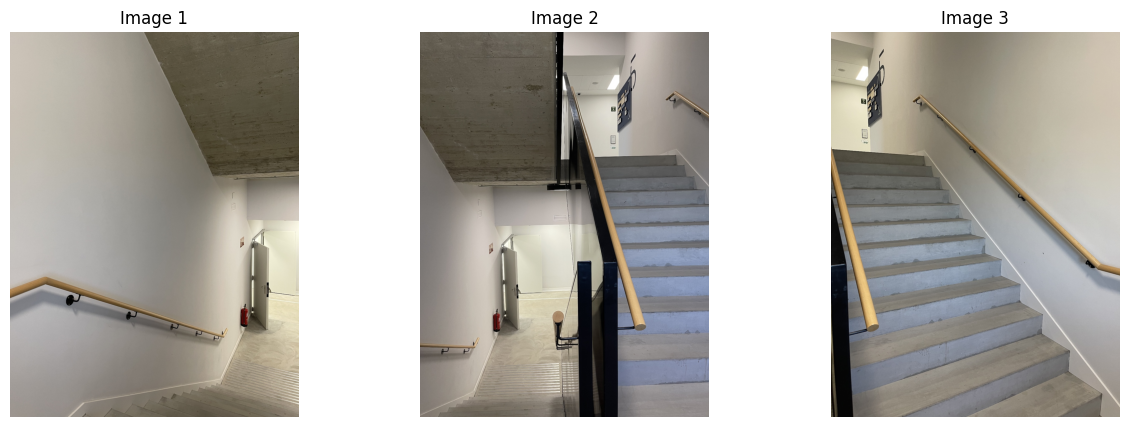

In [91]:
def show_image(img, title=""):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(15,5))
for i, img in enumerate(images):
    plt.subplot(1,3,i+1)
    show_image(img, f"Image {i+1}")
plt.show()

## Calculations & Detections

In [92]:
img1, img2, img3 = images

### Compute Homography Between Two Images

In [93]:
def compute_homography(img1, img2):
    # Convert to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Detect ORB features
    orb = cv2.ORB_create(nfeatures=2000)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    # Match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by quality (distance)
    matches = sorted(matches, key=lambda m: m.distance)

    # Extract matched keypoints
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

    # Estimate homography using RANSAC
    H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, ransacReprojThreshold=3.0)

    print("Homography matrix:\n", H)
    print("Inliers:", mask.sum() if mask is not None else "N/A")

    return H

In [94]:
H12 = compute_homography(img1, img2)  # img1 → img2
H32 = compute_homography(img3, img2)  # img3 → img2

Homography matrix:
 [[ 1.95413241e+00  5.93617920e-02 -1.45348581e+03]
 [ 4.97944129e-01  1.55531790e+00 -3.67765707e+02]
 [ 7.05704064e-04 -5.20753649e-05  1.00000000e+00]]
Inliers: 234
Homography matrix:
 [[ 6.47380635e-01 -8.90301540e-03  6.87949285e+02]
 [-2.85939954e-01  9.30484146e-01  7.83290867e+01]
 [-3.58482937e-04  3.29958017e-05  1.00000000e+00]]
Inliers: 369


### Warp and Merge Two Images

In [95]:
def get_warped_corners(img, H):
    h, w = img.shape[:2]
    corners = np.float32([
        [0,0], [w,0], [w,h], [0,h]
    ]).reshape(-1,1,2)
    warped = cv2.perspectiveTransform(corners, H)
    return warped

In [96]:
corners1 = get_warped_corners(img1, H12)
corners2 = get_warped_corners(img3, H32)

h2, w2 = img2.shape[:2]
corners_middle = np.float32([
    [0,0], [w2,0], [w2,h2], [0,h2]
]).reshape(-1,1,2)

all_corners = np.concatenate((corners1, corners2, corners_middle), axis=0)

[xmin, ymin] = np.int32(all_corners.min(axis=0).ravel())
[xmax, ymax] = np.int32(all_corners.max(axis=0).ravel())

translation = [-xmin, -ymin]

## Stitching

In [97]:
H_translation = np.array([
    [1, 0, translation[0]],
    [0, 1, translation[1]],
    [0, 0, 1]
])

canvas_width = xmax - xmin
canvas_height = ymax - ymin

# Warp img1
panorama = cv2.warpPerspective(
    img1,
    H_translation @ H12,
    (canvas_width, canvas_height)
)

# Warp img3
warp_img3 = cv2.warpPerspective(
    img3,
    H_translation @ H32,
    (canvas_width, canvas_height)
)

# Add img3 to panorama
mask3 = (warp_img3 > 0)
panorama[mask3] = warp_img3[mask3]

# Paste img2 in center
panorama[
    translation[1]:translation[1]+h2,
    translation[0]:translation[0]+w2
] = img2

## Final Display

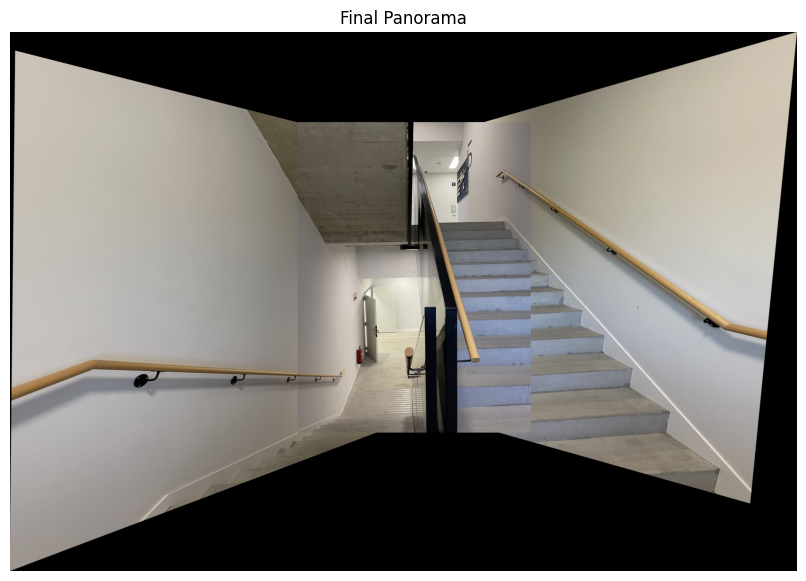

In [98]:
plt.figure(figsize=(15,7))
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Final Panorama")
plt.axis("off")
plt.show()

## Final Analysis

The final panorama successfully aligns the three input images using ORB feature detection, descriptor matching, RANSAC-based homography estimation, and perspective warping. The overlapping regions are geometrically consistent, demonstrating that the estimated homographies correctly map the images into a common reference frame (the middle image). 

However, the panorama exhibits visible distortions, black borders, and imperfect alignment in depth-heavy regions such as the staircase. This occurs because a single planar homography assumes that all matched points lie on the same plane, which is not strictly true in real 3D scenes with varying depth (the staircase is also specially difficult). 

Additionally, no advanced blending or cylindrical projection was applied, which leads to visible seams and perspective stretching. Despite these visual imperfections, the result is functionally correct and demonstrates a proper implementation of feature-based panorama stitching using projective geometry.

### AI Usage

AI was used continously used throughout this project to create and adapt code more efficiently